All import

In [1]:
import librosa as lb
import scipy
import scipy.fftpack as fft
from scipy.signal import get_window
import librosa.display as display
import librosa.effects as effects
import numpy as np
import csv as csv
import os
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Audio
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from numpy import genfromtxt

defining pre_processing

In [ ]:

def pre_processing(path):
  #load
  audio, sr = lb.load(path = path, mono = True)

  #pre-emp
  pre_emp_audio = effects.preemphasis(audio, 0.97)

  #removing silence in audio
  clips = effects.split(pre_emp_audio, top_db=25)
  silenced=[]
  for c in clips:
      data = audio[c[0]: c[1]]
      silenced.extend(data)

  silence = np.array(silenced)
  return silence, sr

EXAMPLE_PATH = "/content/drive/MyDrive/DATASET_VOXCELEB_1/wav/id10261/1suWlhhvRcs/00011.wav"
BASE_TRAINING_PATH="/home/axel1143/Scrivania/Voxceleb_wav/wav/"

**(example)** calculating mfcc, delta, delta2

In [ ]:
processed_audio, sr = pre_processing(EXAMPLE_PATH)
mfcc = lb.feature.mfcc(y = processed_audio, sr = sr, n_mfcc = 13)
mfcc_delta = lb.feature.delta(mfcc)
mfcc_delta2 = lb.feature.delta(mfcc, order = 2)

Audio(processed_audio, rate = sr)



**(example)** show mfcc, delta & delta2

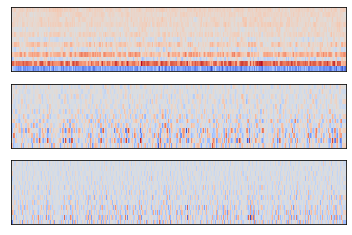

In [ ]:
fig, ax = plt.subplots(nrows =3, sharex =True)

img_mfcc = display.specshow(mfcc, ax=ax[0])

img_delta = display.specshow(mfcc_delta, ax=ax[1])

img_delta2 = display.specshow(mfcc_delta2, ax=ax[2])



**(example)** single execution example

In [ ]:
row_csv = []
row_csv.append("id11")
row_csv.append("pathblablabla")
print(row_csv)
for row in mfcc:
  row_csv_2 = []
  for value in row:
    row_csv_2.append(value)
  row_csv.append(row_csv_2)

for row in mfcc_delta:
  row_csv_2 = []
  for value in row:
    row_csv_2.append(value)
  row_csv.append(row_csv_2)

for row in mfcc_delta2:
  row_csv_2 = []
  for value in row:
    row_csv_2.append(value)
  row_csv.append(row_csv_2)

header = ["id","path",
          "mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13",
          "delta1","delta2","delta3","delta4","delta5","delta6","delta7","delta8","delta9","delta10","delta11","delta12","delta13",
          "delta2_1","delta2_2","delta2_3","delta2_4","delta2_5","delta2_6","delta2_7","delta2_8","delta2_9","delta2_10","delta2_11","delta2_12","delta2_13"]

with open("/content/drive/MyDrive/DATASET_VOXCELEB_1/file.csv", "w", encoding="UTF-8", newline="") as cs:
  writer = csv.writer(cs)
  writer.writerow(header)
  writer.writerow(row_csv)



**creating** csv


In [ ]:
header = ["id","path",
          "mfcc1","mfcc2","mfcc3","mfcc4","mfcc5","mfcc6","mfcc7","mfcc8","mfcc9","mfcc10","mfcc11","mfcc12","mfcc13",
          "delta1","delta2","delta3","delta4","delta5","delta6","delta7","delta8","delta9","delta10","delta11","delta12","delta13", 
          "delta2_1","delta2_2","delta2_3","delta2_4","delta2_5","delta2_6","delta2_7","delta2_8","delta2_9","delta2_10","delta2_11","delta2_12","delta2_13"]

with open("/home/axel1143/Scrivania/Voxceleb_wav/id_mfcc_deltas.csv", "w", encoding="UTF-8", newline="") as writefile:
  writer = csv.writer(writefile)
  writer.writerow(header)
  counter = 0
  for dir in os.listdir(BASE_TRAINING_PATH):
    counter+=1
    count_audio = 0
    for dir1 in os.listdir(BASE_TRAINING_PATH+dir):
        if count_audio < 60:
            for file in os.listdir(BASE_TRAINING_PATH+dir+"/"+dir1):
              if count_audio < 60:
                  if not os.path.isdir(BASE_TRAINING_PATH+dir+"/"+dir1+"/"+file):
                    COMPLETE_PATH = BASE_TRAINING_PATH+dir+"/"+dir1+"/"+file
                    processed_audio, sr = pre_processing(COMPLETE_PATH)

                    #mfcc = get_mfcc_coefficient(processed_audio, rs) #my mfcc
                    mfcc = lb.feature.mfcc(y = processed_audio, sr = sr, n_mfcc=13)
                    mfcc_delta = lb.feature.delta(mfcc)
                    mfcc_delta2 = lb.feature.delta(mfcc, order=2)

                    row_csv = []
                    row_csv.append(dir)
                    row_csv.append(COMPLETE_PATH)


                    for row in mfcc:
                      row_csv_2 = []
                      for value in row:
                        row_csv_2.append(value)
                      row_csv.append(row_csv_2)

                    for row in mfcc_delta:
                      row_csv_2 = []
                      for value in row:
                        row_csv_2.append(value)
                      row_csv.append(row_csv_2)

                    for row in mfcc_delta2:
                      row_csv_2 = []
                      for value in row:
                        row_csv_2.append(value)
                      row_csv.append(row_csv_2)

                    writer.writerow(row_csv)
                    count_audio +=1
  print(counter)

mfcc dataset con esplosione coefficienti

In [ ]:
features_mfcc = ["mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8", "mfcc9", "mfcc10", "mfcc11",
            "mfcc12", "mfcc13"]

df = pd.read_csv("/home/axel1143/Scrivania/Voxceleb_wav/id_mfcc_deltas.csv")
labels = df.loc[:, ["id"]].values #labael dataset
features_mfcc_values = df.loc[:, features_mfcc].values #mfcc dataset


total = features_mfcc_values.shape[0] * features_mfcc_values.shape[1]
counter = 0
correct_dataset_mfcc = []

with open("/home/axel1143/Scrivania/Voxceleb_wav/id_mfcc_solo.csv", "w", encoding="UTF-8", newline="") as writefile:
    writer = csv.writer(writefile)
    for i in range(features_mfcc_values.shape[0]):
        row_dataset = []
        row_dataset.append(labels[i])
        for j in range(features_mfcc_values.shape[1]):
            features_mfcc_values[i][j] = features_mfcc_values[i][j].split()
            for k in range(len(features_mfcc_values[i][j])):
                features_mfcc_values[i][j][k] = features_mfcc_values[i][j][k].replace("[", "")
                features_mfcc_values[i][j][k] = features_mfcc_values[i][j][k].replace("]", "")
                features_mfcc_values[i][j][k] = features_mfcc_values[i][j][k].replace(",", "")
            for ele in features_mfcc_values[i][j]:
                if ele == "":
                    features_mfcc_values[i][j].remove(ele)
            for k in range(len(features_mfcc_values[i][j])):
                features_mfcc_values[i][j][k] = float(features_mfcc_values[i][j][k])
                row_dataset.append(features_mfcc_values[i][j][k])
        counter += 1
        writer.writerow(row_dataset)
        print(counter, "/", features_mfcc_values.shape[0])

delta dataset con esplosione coefficienti

In [ ]:

features_delta = ["delta1", "delta2", "delta3", "delta4", "delta5", "delta6", "delta7", "delta8", "delta9", "delta10",
            "delta11", "delta12", "delta13"]

df = pd.read_csv("/content/drive/MyDrive/DATASET_VOXCELEB_1/id_mfcc_deltas.csv",)

labels = df.loc[:, ["id"]].values #labael dataset
features_delta_values = df.loc[:, features_delta].values #delta dataset

with open("/home/axel1143/Scrivania/Voxceleb_wav/id_mfcc_solo.csv", "w", encoding="UTF-8", newline="") as writefile:
    writer = csv.writer(writefile)

    total = features_delta_values.shape[0] * features_delta_values.shape[1]
    counter = 0
    correct_dataset_delta = []
    for i in range(features_delta_values.shape[0]):
        row_dataset = []
        row_dataset.append(labels[i])
        for j in range(features_delta_values.shape[1]):
            features_delta_values[i][j] = features_delta_values[i][j].split()
            for k in range(len(features_delta_values[i][j])):
                features_delta_values[i][j][k] = features_delta_values[i][j][k].replace("[", "")
                features_delta_values[i][j][k] = features_delta_values[i][j][k].replace("]", "")
                features_delta_values[i][j][k] = features_delta_values[i][j][k].replace(",", "")
            for ele in features_delta_values[i][j]:
                if ele == "":
                    features_delta_values[i][j].remove(ele)
            for k in range(len(features_delta_values[i][j])):
                features_delta_values[i][j][k] = float(features_delta_values[i][j][k])
                row_dataset.append(features_delta_values[i][j][k])
        counter += 1
        writer.writerow(row_dataset)
        print(counter, "/", features_delta_values.shape[0])

delta2 dataset con esplosione coefficienti

In [4]:
features_delta2 = ["delta2_1", "delta2_2", "delta2_3", "delta2_4", "delta2_5", "delta2_6", "delta2_7", "delta2_8", "delta2_9",
            "delta2_10", "delta2_11", "delta2_12", "delta2_13"]

df = pd.read_csv("/home/axel1143/Scrivania/Voxceleb_wav/id_mfcc_deltas.csv")

labels = df.loc[:, ["id"]].values #labael dataset
features_delta2_values = df.loc[:, features_delta2].values #delta2 dataset

del df

with open("/home/axel1143/Scrivania/Voxceleb_wav/id_delta2_solo.csv", "w", encoding="UTF-8", newline="") as writefile:
    writer = csv.writer(writefile)

    total = features_delta2_values.shape[0] * features_delta2_values.shape[1]
    counter = 0
    correct_dataset_delta2 = []
    for i in range(features_delta2_values.shape[0]):
        row_dataset = []
        row_dataset.append(labels[i])
        for j in range(features_delta2_values.shape[1]):
            features_delta2_values[i][j] = features_delta2_values[i][j].split()
            for k in range(len(features_delta2_values[i][j])):
                features_delta2_values[i][j][k] = features_delta2_values[i][j][k].replace("[", "")
                features_delta2_values[i][j][k] = features_delta2_values[i][j][k].replace("]", "")
                features_delta2_values[i][j][k] = features_delta2_values[i][j][k].replace(",", "")
            for ele in features_delta2_values[i][j]:
                if ele == "":
                    features_delta2_values[i][j].remove(ele)
            for k in range(len(features_delta2_values[i][j])):
                features_delta2_values[i][j][k] = float(features_delta2_values[i][j][k])
                row_dataset.append(features_delta2_values[i][j][k])
        counter += 1
        writer.writerow(row_dataset)
        print(counter, "/", features_delta2_values.shape[0])

1 / 61500
2 / 61500
3 / 61500
4 / 61500
5 / 61500
6 / 61500
7 / 61500
8 / 61500
9 / 61500
10 / 61500
11 / 61500
12 / 61500
13 / 61500
14 / 61500
15 / 61500
16 / 61500
17 / 61500
18 / 61500
19 / 61500
20 / 61500
21 / 61500
22 / 61500
23 / 61500
24 / 61500
25 / 61500
26 / 61500
27 / 61500
28 / 61500
29 / 61500
30 / 61500
31 / 61500
32 / 61500
33 / 61500
34 / 61500
35 / 61500
36 / 61500
37 / 61500
38 / 61500
39 / 61500
40 / 61500
41 / 61500
42 / 61500
43 / 61500
44 / 61500
45 / 61500
46 / 61500
47 / 61500
48 / 61500
49 / 61500
50 / 61500
51 / 61500
52 / 61500
53 / 61500
54 / 61500
55 / 61500
56 / 61500
57 / 61500
58 / 61500
59 / 61500
60 / 61500
61 / 61500
62 / 61500
63 / 61500
64 / 61500
65 / 61500
66 / 61500
67 / 61500
68 / 61500
69 / 61500
70 / 61500
71 / 61500
72 / 61500
73 / 61500
74 / 61500
75 / 61500
76 / 61500
77 / 61500
78 / 61500
79 / 61500
80 / 61500
81 / 61500
82 / 61500
83 / 61500
84 / 61500
85 / 61500
86 / 61500
87 / 61500
88 / 61500
89 / 61500
90 / 61500
91 / 61500
92 / 615

In [4]:
df_mfcc = pd.read_csv("/home/axel1143/Scrivania/Voxceleb_wav/id_mfcc_solo.csv", on_bad_lines="skip")

In [2]:
df_mfcc = genfromtxt("/home/axel1143/Scrivania/Voxceleb_wav/id_mfcc_solo.csv", delimiter=',')
print(df_mfcc.shape)
"""
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
correct = imp.fit_transform(df_mfcc)
print(correct.shape)
"""

ValueError: Some errors were detected !
    Line #2 (got 3940 columns instead of 3446)
    Line #3 (got 8750 columns instead of 3446)
    Line #4 (got 1756 columns instead of 3446)
    Line #5 (got 4265 columns instead of 3446)
    Line #6 (got 2471 columns instead of 3446)
    Line #7 (got 4668 columns instead of 3446)
    Line #8 (got 1795 columns instead of 3446)
    Line #9 (got 5799 columns instead of 3446)
    Line #10 (got 2406 columns instead of 3446)
    Line #11 (got 5682 columns instead of 3446)
    Line #12 (got 2172 columns instead of 3446)
    Line #13 (got 13547 columns instead of 3446)
    Line #14 (got 2263 columns instead of 3446)
    Line #15 (got 7294 columns instead of 3446)
    Line #16 (got 3810 columns instead of 3446)
    Line #17 (got 3199 columns instead of 3446)
    Line #18 (got 3433 columns instead of 3446)
    Line #19 (got 2783 columns instead of 3446)
    Line #20 (got 1743 columns instead of 3446)
    Line #21 (got 7047 columns instead of 3446)
    Line #22 (got 5071 columns instead of 3446)
    Line #23 (got 2185 columns instead of 3446)
    Line #24 (got 3563 columns instead of 3446)
    Line #25 (got 2588 columns instead of 3446)
    Line #26 (got 4317 columns instead of 3446)
    Line #27 (got 2341 columns instead of 3446)
    Line #28 (got 4616 columns instead of 3446)
    Line #29 (got 10869 columns instead of 3446)
    Line #30 (got 1496 columns instead of 3446)
    Line #31 (got 1873 columns instead of 3446)
    Line #32 (got 2770 columns instead of 3446)
    Line #33 (got 1912 columns instead of 3446)
    Line #34 (got 2042 columns instead of 3446)
    Line #35 (got 3251 columns instead of 3446)
    Line #36 (got 2692 columns instead of 3446)
    Line #37 (got 4395 columns instead of 3446)
    Line #38 (got 4135 columns instead of 3446)
    Line #39 (got 6384 columns instead of 3446)
    Line #40 (got 4356 columns instead of 3446)
    Line #41 (got 4421 columns instead of 3446)
    Line #42 (got 2770 columns instead of 3446)
    Line #43 (got 2406 columns instead of 3446)
    Line #44 (got 2289 columns instead of 3446)
    Line #45 (got 3433 columns instead of 3446)
    Line #46 (got 3030 columns instead of 3446)
    Line #47 (got 3251 columns instead of 3446)
    Line #48 (got 5916 columns instead of 3446)
    Line #49 (got 5448 columns instead of 3446)
    Line #50 (got 2770 columns instead of 3446)
    Line #51 (got 1418 columns instead of 3446)
    Line #52 (got 4109 columns instead of 3446)
    Line #53 (got 2679 columns instead of 3446)
    Line #54 (got 2887 columns instead of 3446)
    Line #55 (got 2770 columns instead of 3446)
    Line #56 (got 2458 columns instead of 3446)
    Line #57 (got 7580 columns instead of 3446)
    Line #58 (got 3862 columns instead of 3446)
    Line #59 (got 2185 columns instead of 3446)
    Line #60 (got 2133 columns instead of 3446)
    Line #61 (got 3004 columns instead of 3446)
    Line #62 (got 4746 columns instead of 3446)
    Line #63 (got 6969 columns instead of 3446)
    Line #64 (got 2731 columns instead of 3446)
    Line #65 (got 4291 columns instead of 3446)
    Line #66 (got 6020 columns instead of 3446)
    Line #67 (got 3797 columns instead of 3446)
    Line #68 (got 3836 columns instead of 3446)
    Line #69 (got 3459 columns instead of 3446)
    Line #70 (got 2562 columns instead of 3446)
    Line #71 (got 2549 columns instead of 3446)
    Line #72 (got 2575 columns instead of 3446)
    Line #73 (got 1964 columns instead of 3446)
    Line #74 (got 2497 columns instead of 3446)
    Line #75 (got 1808 columns instead of 3446)
    Line #76 (got 3992 columns instead of 3446)
    Line #77 (got 2419 columns instead of 3446)
    Line #78 (got 10115 columns instead of 3446)
    Line #79 (got 2510 columns instead of 3446)
    Line #80 (got 2107 columns instead of 3446)
    Line #81 (got 4590 columns instead of 3446)
    Line #82 (got 7983 columns instead of 3446)
    Line #83 (got 5760 columns instead of 3446)
    Line #84 (got 1847 columns instead of 3446)
    Line #85 (got 7073 columns instead of 3446)
    Line #88 (got 2263 columns instead of 3446)
    Line #89 (got 1912 columns instead of 3446)
    Line #90 (got 1873 columns instead of 3446)
    Line #91 (got 3251 columns instead of 3446)
    Line #92 (got 2614 columns instead of 3446)
    Line #93 (got 1730 columns instead of 3446)
    Line #94 (got 1808 columns instead of 3446)
    Line #95 (got 6774 columns instead of 3446)
    Line #96 (got 2302 columns instead of 3446)
    Line #97 (got 2250 columns instead of 3446)
    Line #98 (got 4109 columns instead of 3446)
    Line #99 (got 3147 columns instead of 3446)
    Line #100 (got 3589 columns instead of 3446)
    Line #101 (got 2601 columns instead of 3446)
    Line #102 (got 3563 columns instead of 3446)
    Line #103 (got 4707 columns instead of 3446)
    Line #104 (got 8347 columns instead of 3446)
    Line #105 (got 2133 columns instead of 3446)
    Line #106 (got 4616 columns instead of 3446)
    Line #107 (got 3121 columns instead of 3446)
    Line #108 (got 4720 columns instead of 3446)
    Line #109 (got 3472 columns instead of 3446)
    Line #110 (got 1977 columns instead of 3446)
    Line #111 (got 3069 columns instead of 3446)
    Line #112 (got 4369 columns instead of 3446)
    Line #113 (got 2107 columns instead of 3446)
    Line #114 (got 4096 columns instead of 3446)
    Line #115 (got 2016 columns instead of 3446)
    Line #116 (got 2523 columns instead of 3446)
    Line #117 (got 2796 columns instead of 3446)
    Line #118 (got 1691 columns instead of 3446)
    Line #119 (got 3654 columns instead of 3446)
    Line #120 (got 6930 columns instead of 3446)
    Line #121 (got 4928 columns instead of 3446)
    Line #122 (got 2289 columns instead of 3446)
    Line #123 (got 2276 columns instead of 3446)
    Line #124 (got 5799 columns instead of 3446)
    Line #125 (got 3511 columns instead of 3446)
    Line #126 (got 1613 columns instead of 3446)
    Line #127 (got 1873 columns instead of 3446)
    Line #128 (got 2653 columns instead of 3446)
    Line #129 (got 2484 columns instead of 3446)
    Line #130 (got 4590 columns instead of 3446)
    Line #131 (got 2744 columns instead of 3446)
    Line #132 (got 2497 columns instead of 3446)
    Line #133 (got 2289 columns instead of 3446)
    Line #134 (got 3498 columns instead of 3446)
    Line #135 (got 5578 columns instead of 3446)
    Line #136 (got 6189 columns instead of 3446)
    Line #137 (got 3953 columns instead of 3446)
    Line #138 (got 3134 columns instead of 3446)
    Line #139 (got 5097 columns instead of 3446)
    Line #140 (got 2718 columns instead of 3446)
    Line #141 (got 2341 columns instead of 3446)
    Line #142 (got 3251 columns instead of 3446)
    Line #143 (got 2614 columns instead of 3446)
    Line #144 (got 13976 columns instead of 3446)
    Line #145 (got 4122 columns instead of 3446)
    Line #146 (got 3394 columns instead of 3446)
    Line #147 (got 3823 columns instead of 3446)
    Line #148 (got 9855 columns instead of 3446)
    Line #149 (got 10154 columns instead of 3446)
    Line #150 (got 5968 columns instead of 3446)
    Line #151 (got 2731 columns instead of 3446)
    Line #152 (got 10427 columns instead of 3446)
    Line #153 (got 4954 columns instead of 3446)
    Line #154 (got 2835 columns instead of 3446)
    Line #155 (got 2679 columns instead of 3446)
    Line #156 (got 14587 columns instead of 3446)
    Line #157 (got 3056 columns instead of 3446)
    Line #158 (got 3927 columns instead of 3446)
    Line #159 (got 5331 columns instead of 3446)
    Line #160 (got 9894 columns instead of 3446)
    Line #161 (got 5357 columns instead of 3446)
    Line #162 (got 4863 columns instead of 3446)
    Line #163 (got 12156 columns instead of 3446)
    Line #164 (got 12000 columns instead of 3446)
    Line #165 (got 2874 columns instead of 3446)
    Line #166 (got 5604 columns instead of 3446)
    Line #167 (got 4772 columns instead of 3446)
    Line #168 (got 3589 columns instead of 3446)
    Line #169 (got 2354 columns instead of 3446)
    Line #170 (got 2198 columns instead of 3446)
    Line #171 (got 2575 columns instead of 3446)
    Line #172 (got 5344 columns instead of 3446)
    Line #173 (got 4967 columns instead of 3446)
    Line #174 (got 13586 columns instead of 3446)
    Line #175 (got 14041 columns instead of 3446)
    Line #176 (got 5279 columns instead of 3446)
    Line #177 (got 11961 columns instead of 3446)
    Line #178 (got 2809 columns instead of 3446)
    Line #179 (got 7177 columns instead of 3446)
    Line #180 (got 1847 columns instead of 3446)
    Line #181 (got 2900 columns instead of 3446)
    Line #182 (got 2757 columns instead of 3446)
    Line #183 (got 2601 columns instead of 3446)
    Line #184 (got 4954 columns instead of 3446)
    Line #185 (got 2029 columns instead of 3446)
    Line #186 (got 13833 columns instead of 3446)
    Line #187 (got 2302 columns instead of 3446)
    Line #188 (got 6618 columns instead of 3446)
    Line #189 (got 2432 columns instead of 3446)
    Line #190 (got 6150 columns instead of 3446)
    Line #191 (got 7671 columns instead of 3446)
    Line #192 (got 4369 columns instead of 3446)
    Line #193 (got 3472 columns instead of 3446)
    Line #194 (got 4434 columns instead of 3446)
    Line #195 (got 8477 columns instead of 3446)
    Line #196 (got 13430 columns instead of 3446)
    Line #197 (got 3680 columns instead of 3446)
    Line #198 (got 2627 columns instead of 3446)
    Line #199 (got 1795 columns instead of 3446)
    Line #200 (got 3251 columns instead of 3446)
    Line #201 (got 2887 columns instead of 3446)
    Line #202 (got 4616 columns instead of 3446)
    Line #203 (got 1912 columns instead of 3446)
    Line #204 (got 2692 columns instead of 3446)
    Line #205 (got 5188 columns instead of 3446)
    Line #206 (got 3186 columns instead of 3446)
    Line #207 (got 8724 columns instead of 3446)
    Line #208 (got 2094 columns instead of 3446)
    Line #209 (got 3849 columns instead of 3446)
    Line #210 (got 6956 columns instead of 3446)
    Line #211 (got 3407 columns instead of 3446)
    Line #212 (got 2315 columns instead of 3446)
    Line #213 (got 3017 columns instead of 3446)
    Line #214 (got 2549 columns instead of 3446)
    Line #215 (got 2159 columns instead of 3446)
    Line #216 (got 5214 columns instead of 3446)
    Line #217 (got 4837 columns instead of 3446)
    Line #218 (got 3381 columns instead of 3446)
    Line #219 (got 5851 columns instead of 3446)
    Line #220 (got 3472 columns instead of 3446)
    Line #221 (got 4330 columns instead of 3446)
    Line #222 (got 6163 columns instead of 3446)
    Line #223 (got 2679 columns instead of 3446)
    Line #224 (got 7710 columns instead of 3446)
    Line #225 (got 6969 columns instead of 3446)
    Line #226 (got 5344 columns instead of 3446)
    Line #227 (got 2835 columns instead of 3446)
    Line #228 (got 3576 columns instead of 3446)
    Line #229 (got 2614 columns instead of 3446)
    Line #230 (got 4772 columns instead of 3446)
    Line #231 (got 5110 columns instead of 3446)
    Line #232 (got 8555 columns instead of 3446)
    Line #233 (got 6579 columns instead of 3446)
    Line #234 (got 3602 columns instead of 3446)
    Line #235 (got 5435 columns instead of 3446)
    Line #236 (got 2939 columns instead of 3446)
    Line #237 (got 1834 columns instead of 3446)
    Line #238 (got 4356 columns instead of 3446)
    Line #239 (got 8854 columns instead of 3446)
    Line #240 (got 5773 columns instead of 3446)
    Line #241 (got 2614 columns instead of 3446)
    Line #242 (got 2783 columns instead of 3446)
    Line #243 (got 8165 columns instead of 3446)
    Line #244 (got 4551 columns instead of 3446)
    Line #245 (got 2601 columns instead of 3446)
    Line #246 (got 3277 columns instead of 3446)
    Line #247 (got 2900 columns instead of 3446)
    Line #248 (got 1834 columns instead of 3446)
    Line #249 (got 3433 columns instead of 3446)
    Line #250 (got 2549 columns instead of 3446)
    Line #251 (got 1808 columns instead of 3446)
    Line #252 (got 2575 columns instead of 3446)
    Line #253 (got 1431 columns instead of 3446)
    Line #254 (got 1366 columns instead of 3446)
    Line #255 (got 2900 columns instead of 3446)
    Line #256 (got 2289 columns instead of 3446)
    Line #257 (got 1847 columns instead of 3446)
    Line #258 (got 2900 columns instead of 3446)
    Line #259 (got 2120 columns instead of 3446)
    Line #260 (got 2081 columns instead of 3446)
    Line #261 (got 3888 columns instead of 3446)
    Line #262 (got 4044 columns instead of 3446)
    Line #263 (got 2523 columns instead of 3446)
    Line #264 (got 2315 columns instead of 3446)
    Line #265 (got 1665 columns instead of 3446)
    Line #266 (got 2549 columns instead of 3446)
    Line #267 (got 3186 columns instead of 3446)
    Line #268 (got 4915 columns instead of 3446)
    Line #269 (got 5175 columns instead of 3446)
    Line #270 (got 5084 columns instead of 3446)
    Line #271 (got 1899 columns instead of 3446)
    Line #272 (got 3030 columns instead of 3446)
    Line #273 (got 3277 columns instead of 3446)
    Line #274 (got 1691 columns instead of 3446)
    Line #275 (got 2497 columns instead of 3446)
    Line #276 (got 2601 columns instead of 3446)
    Line #277 (got 3498 columns instead of 3446)
    Line #278 (got 2588 columns instead of 3446)
    Line #279 (got 1795 columns instead of 3446)
    Line #280 (got 1938 columns instead of 3446)
    Line #281 (got 3615 columns instead of 3446)
    Line #283 (got 1717 columns instead of 3446)
    Line #284 (got 1847 columns instead of 3446)
    Line #285 (got 2484 columns instead of 3446)
    Line #286 (got 1925 columns instead of 3446)
    Line #287 (got 2445 columns instead of 3446)
    Line #288 (got 2445 columns instead of 3446)
    Line #289 (got 1847 columns instead of 3446)
    Line #290 (got 3875 columns instead of 3446)
    Line #291 (got 3290 columns instead of 3446)
    Line #292 (got 2003 columns instead of 3446)
    Line #293 (got 4304 columns instead of 3446)
    Line #294 (got 5500 columns instead of 3446)
    Line #295 (got 3979 columns instead of 3446)
    Line #296 (got 2120 columns instead of 3446)
    Line #297 (got 2484 columns instead of 3446)
    Line #298 (got 1522 columns instead of 3446)
    Line #299 (got 2172 columns instead of 3446)
    Line #300 (got 1925 columns instead of 3446)
    Line #301 (got 1106 columns instead of 3446)
    Line #302 (got 2094 columns instead of 3446)
    Line #303 (got 4902 columns instead of 3446)
    Line #304 (got 2263 columns instead of 3446)
    Line #305 (got 1366 columns instead of 3446)
    Line #306 (got 2211 columns instead of 3446)
    Line #307 (got 4928 columns instead of 3446)
    Line #308 (got 4889 columns instead of 3446)
    Line #309 (got 2809 columns instead of 3446)
    Line #310 (got 1951 columns instead of 3446)
    Line #311 (got 3316 columns instead of 3446)
    Line #312 (got 3823 columns instead of 3446)
    Line #313 (got 2588 columns instead of 3446)
    Line #314 (got 4239 columns instead of 3446)
    Line #315 (got 4525 columns instead of 3446)
    Line #316 (got 2796 columns instead of 3446)
    Line #317 (got 7060 columns instead of 3446)
    Line #318 (got 2549 columns instead of 3446)
    Line #319 (got 3550 columns instead of 3446)
    Line #320 (got 4057 columns instead of 3446)
    Line #321 (got 2302 columns instead of 3446)
    Line #322 (got 3277 columns instead of 3446)
    Line #323 (got 3979 columns instead of 3446)
    Line #324 (got 1808 columns instead of 3446)
    Line #325 (got 3082 columns instead of 3446)
    Line #326 (got 2081 columns instead of 3446)
    Line #327 (got 2588 columns instead of 3446)
    Line #328 (got 4538 columns instead of 3446)
    Line #329 (got 1860 columns instead of 3446)
    Line #330 (got 1262 columns instead of 3446)
    Line #331 (got 3030 columns instead of 3446)
    Line #332 (got 1613 columns instead of 3446)
    Line #333 (got 3862 columns instead of 3446)
    Line #334 (got 1106 columns instead of 3446)
    Line #335 (got 2991 columns instead of 3446)
    Line #336 (got 3134 columns instead of 3446)
    Line #337 (got 2926 columns instead of 3446)
    Line #338 (got 4447 columns instead of 3446)
    Line #339 (got 1886 columns instead of 3446)
    Line #340 (got 3771 columns instead of 3446)
    Line #341 (got 2094 columns instead of 3446)
    Line #342 (got 2250 columns instead of 3446)
    Line #343 (got 4005 columns instead of 3446)
    Line #344 (got 2562 columns instead of 3446)
    Line #345 (got 3173 columns instead of 3446)
    Line #346 (got 3966 columns instead of 3446)
    Line #347 (got 8737 columns instead of 3446)
    Line #348 (got 1925 columns instead of 3446)
    Line #349 (got 2185 columns instead of 3446)
    Line #350 (got 3758 columns instead of 3446)
    Line #351 (got 4252 columns instead of 3446)
    Line #352 (got 2549 columns instead of 3446)
    Line #353 (got 1964 columns instead of 3446)
    Line #354 (got 2835 columns instead of 3446)
    Line #355 (got 2159 columns instead of 3446)
    Line #356 (got 2874 columns instead of 3446)
    Line #357 (got 1834 columns instead of 3446)
    Line #358 (got 2640 columns instead of 3446)
    Line #359 (got 2952 columns instead of 3446)
    Line #360 (got 4967 columns instead of 3446)
    Line #361 (got 5617 columns instead of 3446)
    Line #362 (got 5617 columns instead of 3446)
    Line #363 (got 2211 columns instead of 3446)
    Line #364 (got 2315 columns instead of 3446)
    Line #365 (got 4616 columns instead of 3446)
    Line #366 (got 4265 columns instead of 3446)
    Line #367 (got 2770 columns instead of 3446)
    Line #368 (got 3706 columns instead of 3446)
    Line #369 (got 1977 columns instead of 3446)
    Line #370 (got 3914 columns instead of 3446)
    Line #371 (got 2315 columns instead of 3446)
    Line #372 (got 2315 columns instead of 3446)
    Line #373 (got 2835 columns instead of 3446)
    Line #374 (got 2770 columns instead of 3446)
    Line #375 (got 3589 columns instead of 3446)
    Line #376 (got 3628 columns instead of 3446)
    Line #377 (got 4213 columns instead of 3446)
    Line #378 (got 7164 columns instead of 3446)
    Line #379 (got 4291 columns instead of 3446)
    Line #380 (got 2458 columns instead of 3446)
    Line #381 (got 3849 columns instead of 3446)
    Line #382 (got 7294 columns instead of 3446)
    Line #383 (got 10557 columns instead of 3446)
    Line #384 (got 8373 columns instead of 3446)
    Line #385 (got 2289 columns instead of 3446)
    Line #386 (got 5019 columns instead of 3446)
    Line #387 (got 3095 columns instead of 3446)
    Line #388 (got 7008 columns instead of 3446)
    Line #389 (got 2796 columns instead of 3446)
    Line #390 (got 3017 columns instead of 3446)
    Line #391 (got 3706 columns instead of 3446)
    Line #392 (got 2107 columns instead of 3446)
    Line #393 (got 3147 columns instead of 3446)
    Line #394 (got 4863 columns instead of 3446)
    Line #395 (got 5734 columns instead of 3446)
    Line #396 (got 4590 columns instead of 3446)
    Line #398 (got 4590 columns instead of 3446)
    Line #399 (got 11753 columns instead of 3446)
    Line #400 (got 4499 columns instead of 3446)
    Line #401 (got 7684 columns instead of 3446)
    Line #402 (got 2510 columns instead of 3446)
    Line #403 (got 7970 columns instead of 3446)
    Line #404 (got 4135 columns instead of 3446)
    Line #405 (got 5357 columns instead of 3446)
    Line #406 (got 3082 columns instead of 3446)
    Line #407 (got 2406 columns instead of 3446)
    Line #408 (got 5656 columns instead of 3446)
    Line #409 (got 3719 columns instead of 3446)
    Line #410 (got 4252 columns instead of 3446)
    Line #411 (got 6085 columns instead of 3446)
    Line #412 (got 5097 columns instead of 3446)
    Line #413 (got 4785 columns instead of 3446)
    Line #414 (got 3979 columns instead of 3446)
    Line #415 (got 4135 columns instead of 3446)
    Line #416 (got 2211 columns instead of 3446)
    Line #417 (got 2809 columns instead of 3446)
    Line #418 (got 2042 columns instead of 3446)
    Line #419 (got 6527 columns instead of 3446)
    Line #420 (got 3134 columns instead of 3446)
    Line #421 (got 2250 columns instead of 3446)
    Line #422 (got 3563 columns instead of 3446)
    Line #423 (got 2718 columns instead of 3446)
    Line #424 (got 2328 columns instead of 3446)
    Line #425 (got 3381 columns instead of 3446)
    Line #426 (got 2432 columns instead of 3446)
    Line #427 (got 5084 columns instead of 3446)
    Line #428 (got 2263 columns instead of 3446)
    Line #429 (got 2822 columns instead of 3446)
    Line #430 (got 2224 columns instead of 3446)
    Line #431 (got 2029 columns instead of 3446)
    Line #432 (got 2822 columns instead of 3446)
    Line #433 (got 2627 columns instead of 3446)
    Line #434 (got 2809 columns instead of 3446)
    Line #435 (got 6163 columns instead of 3446)
    Line #436 (got 1795 columns instead of 3446)
    Line #437 (got 2172 columns instead of 3446)
    Line #438 (got 3550 columns instead of 3446)
    Line #439 (got 2055 columns instead of 3446)
    Line #440 (got 2159 columns instead of 3446)
    Line #441 (got 3368 columns instead of 3446)
    Line #442 (got 1873 columns instead of 3446)
    Line #443 (got 2380 columns instead of 3446)
    Line #444 (got 2562 columns instead of 3446)
    Line #445 (got 5357 columns instead of 3446)
    Line #446 (got 6982 columns instead of 3446)
    Line #447 (got 4668 columns instead of 3446)
    Line #448 (got 6358 columns instead of 3446)
    Line #449 (got 14977 columns instead of 3446)
    Line #450 (got 3082 columns instead of 3446)
    Line #451 (got 4759 columns instead of 3446)
    Line #452 (got 3836 columns instead of 3446)
    Line #453 (got 5162 columns instead of 3446)
    Line #454 (got 4876 columns instead of 3446)
    Line #455 (got 3225 columns instead of 3446)
    Line #456 (got 2276 columns instead of 3446)
    Line #457 (got 5344 columns instead of 3446)
    Line #458 (got 2146 columns instead of 3446)
    Line #459 (got 3212 columns instead of 3446)
    Line #460 (got 6592 columns instead of 3446)
    Line #461 (got 4876 columns instead of 3446)
    Line #462 (got 5019 columns instead of 3446)
    Line #463 (got 4525 columns instead of 3446)
    Line #464 (got 3030 columns instead of 3446)
    Line #465 (got 2835 columns instead of 3446)
    Line #466 (got 5500 columns instead of 3446)
    Line #467 (got 4850 columns instead of 3446)
    Line #468 (got 2575 columns instead of 3446)
    Line #469 (got 2341 columns instead of 3446)
    Line #470 (got 2328 columns instead of 3446)
    Line #471 (got 2341 columns instead of 3446)
    Line #472 (got 4655 columns instead of 3446)
    Line #473 (got 2575 columns instead of 3446)
    Line #474 (got 4954 columns instead of 3446)
    Line #475 (got 3433 columns instead of 3446)
    Line #476 (got 3329 columns instead of 3446)
    Line #477 (got 4824 columns instead of 3446)
    Line #478 (got 3212 columns instead of 3446)
    Line #479 (got 3355 columns instead of 3446)
    Line #480 (got 2380 columns instead of 3446)
    Line #481 (got 1691 columns instead of 3446)
    Line #482 (got 2146 columns instead of 3446)
    Line #483 (got 5110 columns instead of 3446)
    Line #484 (got 2601 columns instead of 3446)
    Line #485 (got 3641 columns instead of 3446)
    Line #486 (got 2237 columns instead of 3446)
    Line #487 (got 2562 columns instead of 3446)
    Line #488 (got 2146 columns instead of 3446)
    Line #489 (got 3342 columns instead of 3446)
    Line #490 (got 3524 columns instead of 3446)
    Line #491 (got 6072 columns instead of 3446)
    Line #492 (got 7034 columns instead of 3446)
    Line #493 (got 3212 columns instead of 3446)
    Line #494 (got 2185 columns instead of 3446)
    Line #495 (got 3485 columns instead of 3446)
    Line #496 (got 2484 columns instead of 3446)
    Line #497 (got 3927 columns instead of 3446)
    Line #498 (got 2861 columns instead of 3446)
    Line #499 (got 2900 columns instead of 3446)
    Line #500 (got 2809 columns instead of 3446)
    Line #501 (got 2575 columns instead of 3446)
    Line #502 (got 6540 columns instead of 3446)
    Line #503 (got 2289 columns instead of 3446)
    Line #504 (got 5149 columns instead of 3446)
    Line #505 (got 2536 columns instead of 3446)
    Line #506 (got 2432 columns instead of 3446)
    Line #507 (got 4174 columns instead of 3446)
    Line #508 (got 5409 columns instead of 3446)
    Line #509 (got 2107 columns instead of 3446)
    Line #510 (got 2731 columns instead of 3446)
    Line #511 (got 2757 columns instead of 3446)
    Line #512 (got 2198 columns instead of 3446)
    Line #513 (got 9647 columns instead of 3446)
    Line #514 (got 2042 columns instead of 3446)
    Line #515 (got 3173 columns instead of 3446)
    Line #516 (got 4018 columns instead of 3446)
    Line #517 (got 2419 columns instead of 3446)
    Line #518 (got 2146 columns instead of 3446)
    Line #519 (got 2198 columns instead of 3446)
    Line #520 (got 9569 columns instead of 3446)
    Line #521 (got 2471 columns instead of 3446)
    Line #522 (got 2354 columns instead of 3446)
    Line #523 (got 2770 columns instead of 3446)
    Line #524 (got 2289 columns instead of 3446)
    Line #525 (got 2380 columns instead of 3446)
    Line #526 (got 3459 columns instead of 3446)
    Line #527 (got 3199 columns instead of 3446)
    Line #528 (got 4291 columns instead of 3446)
    Line #529 (got 2510 columns instead of 3446)
    Line #530 (got 12429 columns instead of 3446)
    Line #531 (got 2120 columns instead of 3446)
    Line #532 (got 1379 columns instead of 3446)
    Line #533 (got 4616 columns instead of 3446)
    Line #534 (got 3641 columns instead of 3446)
    Line #535 (got 2367 columns instead of 3446)
    Line #536 (got 4252 columns instead of 3446)
    Line #537 (got 9491 columns instead of 3446)
    Line #538 (got 2484 columns instead of 3446)
    Line #539 (got 5409 columns instead of 3446)
    Line #540 (got 3342 columns instead of 3446)
    Line #541 (got 5097 columns instead of 3446)
    Line #542 (got 2835 columns instead of 3446)
    Line #543 (got 3108 columns instead of 3446)
    Line #544 (got 6384 columns instead of 3446)
    Line #545 (got 4538 columns instead of 3446)
    Line #546 (got 5123 columns instead of 3446)
    Line #547 (got 7658 columns instead of 3446)
    Line #548 (got 5747 columns instead of 3446)
    Line #549 (got 2718 columns instead of 3446)
    Line #550 (got 2380 columns instead of 3446)
    Line #551 (got 3147 columns instead of 3446)
    Line #552 (got 5539 columns instead of 3446)
    Line #553 (got 2549 columns instead of 3446)
    Line #554 (got 4733 columns instead of 3446)
    Line #555 (got 4746 columns instead of 3446)
    Line #556 (got 3745 columns instead of 3446)
    Line #557 (got 2458 columns instead of 3446)
    Line #558 (got 3420 columns instead of 3446)
    Line #559 (got 3810 columns instead of 3446)
    Line #560 (got 2809 columns instead of 3446)
    Line #561 (got 1977 columns instead of 3446)
    Line #562 (got 6293 columns instead of 3446)
    Line #563 (got 2549 columns instead of 3446)
    Line #564 (got 5084 columns instead of 3446)
    Line #565 (got 2601 columns instead of 3446)
    Line #566 (got 5838 columns instead of 3446)
    Line #567 (got 1964 columns instead of 3446)
    Line #568 (got 2809 columns instead of 3446)
    Line #569 (got 4317 columns instead of 3446)
    Line #570 (got 2939 columns instead of 3446)
    Line #571 (got 5448 columns instead of 3446)
    Line #572 (got 4824 columns instead of 3446)
    Line #573 (got 6683 columns instead of 3446)
    Line #574 (got 4200 columns instead of 3446)
    Line #575 (got 3576 columns instead of 3446)
    Line #576 (got 3485 columns instead of 3446)
    Line #577 (got 4798 columns instead of 3446)
    Line #579 (got 2146 columns instead of 3446)
    Line #580 (got 5448 columns instead of 3446)
    Line #581 (got 2380 columns instead of 3446)
    Line #582 (got 2523 columns instead of 3446)
    Line #583 (got 5032 columns instead of 3446)
    Line #584 (got 1964 columns instead of 3446)
    Line #585 (got 1730 columns instead of 3446)
    Line #586 (got 2341 columns instead of 3446)
    Line #587 (got 6449 columns instead of 3446)
    Line #588 (got 4044 columns instead of 3446)
    Line #589 (got 14977 columns instead of 3446)
    Line #590 (got 15263 columns instead of 3446)
    Line #591 (got 3979 columns instead of 3446)
    Line #592 (got 4408 columns instead of 3446)
    Line #593 (got 8048 columns instead of 3446)
    Line #594 (got 3186 columns instead of 3446)
    Line #595 (got 3693 columns instead of 3446)
    Line #596 (got 4980 columns instead of 3446)
    Line #597 (got 3823 columns instead of 3446)
    Line #598 (got 1275 columns instead of 3446)
    Line #599 (got 2601 columns instead of 3446)
    Line #600 (got 2250 columns instead of 3446)
    Line #601 (got 1860 columns instead of 3446)
    Line #602 (got 3121 columns instead of 3446)
    Line #603 (got 1951 columns instead of 3446)
    Line #604 (got 2913 columns instead of 3446)
    Line #605 (got 3368 columns instead of 3446)
    Line #606 (got 3953 columns instead of 3446)
    Line #607 (got 4902 columns instead of 3446)
    Line #608 (got 2198 columns instead of 3446)
    Line #609 (got 3186 columns instead of 3446)
    Line #610 (got 2406 columns instead of 3446)
    Line #611 (got 1912 columns instead of 3446)
    Line #612 (got 5422 columns instead of 3446)
    Line #613 (got 4252 columns instead of 3446)
    Line #614 (got 2419 columns instead of 3446)
    Line #615 (got 2432 columns instead of 3446)
    Line #616 (got 2263 columns instead of 3446)
    Line #617 (got 3238 columns instead of 3446)
    Line #618 (got 3524 columns instead of 3446)
    Line #619 (got 8022 columns instead of 3446)
    Line #620 (got 3420 columns instead of 3446)
    Line #621 (got 2237 columns instead of 3446)
    Line #622 (got 3212 columns instead of 3446)
    Line #623 (got 2458 columns instead of 3446)
    Line #624 (got 2367 columns instead of 3446)
    Line #625 (got 2991 columns instead of 3446)
    Line #626 (got 2627 columns instead of 3446)
    Line #627 (got 2562 columns instead of 3446)
    Line #628 (got 7580 columns instead of 3446)
    Line #629 (got 8451 columns instead of 3446)
    Line #630 (got 4668 columns instead of 3446)
    Line #631 (got 2627 columns instead of 3446)
    Line #632 (got 2640 columns instead of 3446)
    Line #633 (got 6150 columns instead of 3446)
    Line #634 (got 2432 columns instead of 3446)
    Line #635 (got 3953 columns instead of 3446)
    Line #636 (got 2159 columns instead of 3446)
    Line #637 (got 5656 columns instead of 3446)
    Line #638 (got 4759 columns instead of 3446)
    Line #639 (got 7814 columns instead of 3446)
    Line #640 (got 6345 columns instead of 3446)
    Line #641 (got 11779 columns instead of 3446)
    Line #642 (got 16966 columns instead of 3446)
    Line #643 (got 2224 columns instead of 3446)
    Line #644 (got 1730 columns instead of 3446)
    Line #645 (got 2224 columns instead of 3446)
    Line #646 (got 2224 columns instead of 3446)
    Line #647 (got 2263 columns instead of 3446)
    Line #648 (got 8399 columns instead of 3446)
    Line #649 (got 2328 columns instead of 3446)
    Line #650 (got 2328 columns instead of 3446)
    Line #651 (got 2159 columns instead of 3446)
    Line #652 (got 2575 columns instead of 3446)
    Line #653 (got 2094 columns instead of 3446)
    Line #654 (got 2250 columns instead of 3446)
    Line #655 (got 3407 columns instead of 3446)
    Line #656 (got 2588 columns instead of 3446)
    Line #657 (got 3524 columns instead of 3446)
    Line #658 (got 8126 columns instead of 3446)
    Line #659 (got 3511 columns instead of 3446)
    Line #660 (got 1860 columns instead of 3446)
    Line #661 (got 2250 columns instead of 3446)
    Line #662 (got 6774 columns instead of 3446)
    Line #663 (got 5760 columns instead of 3446)
    Line #664 (got 4070 columns instead of 3446)
    Line #665 (got 5578 columns instead of 3446)
    Line #666 (got 4798 columns instead of 3446)
    Line #667 (got 6644 columns instead of 3446)
    Line #668 (got 2588 columns instead of 3446)
    Line #669 (got 2835 columns instead of 3446)
    Line #670 (got 3628 columns instead of 3446)
    Line #671 (got 2848 columns instead of 3446)
    Line #672 (got 2328 columns instead of 3446)
    Line #673 (got 3641 columns instead of 3446)
    Line #674 (got 10908 columns instead of 3446)
    Line #675 (got 3654 columns instead of 3446)
    Line #676 (got 8334 columns instead of 3446)
    Line #677 (got 5422 columns instead of 3446)
    Line #678 (got 5266 columns instead of 3446)
    Line #679 (got 3030 columns instead of 3446)
    Line #680 (got 3888 columns instead of 3446)
    Line #681 (got 3056 columns instead of 3446)
    Line #682 (got 4057 columns instead of 3446)
    Line #683 (got 13755 columns instead of 3446)
    Line #684 (got 3836 columns instead of 3446)
    Line #685 (got 3407 columns instead of 3446)
    Line #686 (got 3342 columns instead of 3446)
    Line #687 (got 3485 columns instead of 3446)
    Line #688 (got 2913 columns instead of 3446)
    Line #689 (got 4109 columns instead of 3446)
    Line #690 (got 3771 columns instead of 3446)
    Line #691 (got 12442 columns instead of 3446)
    Line #692 (got 8542 columns instead of 3446)
    Line #693 (got 3641 columns instead of 3446)
    Line #694 (got 3589 columns instead of 3446)
    Line #695 (got 6072 columns instead of 3446)
    Line #696 (got 2601 columns instead of 3446)
    Line #697 (got 4551 columns instead of 3446)
    Line #698 (got 2653 columns instead of 3446)
    Line #699 (got 2900 columns instead of 3446)
    Line #700 (got 2471 columns instead of 3446)
    Line #701 (got 1704 columns instead of 3446)
    Line #702 (got 7411 columns instead of 3446)
    Line #703 (got 12806 columns instead of 3446)
    Line #704 (got 5825 columns instead of 3446)
    Line #705 (got 7034 columns instead of 3446)
    Line #706 (got 5513 columns instead of 3446)
    Line #707 (got 4681 columns instead of 3446)
    Line #708 (got 11948 columns instead of 3446)
    Line #709 (got 3342 columns instead of 3446)
    Line #710 (got 6670 columns instead of 3446)
    Line #711 (got 9361 columns instead of 3446)
    Line #712 (got 7879 columns instead of 3446)
    Line #713 (got 6137 columns instead of 3446)
    Line #714 (got 9985 columns instead of 3446)
    Line #715 (got 2224 columns instead of 3446)
    Line #716 (got 2718 columns instead of 3446)
    Line #717 (got 4161 columns instead of 3446)
    Line #718 (got 2692 columns instead of 3446)
    Line #719 (got 7593 columns instead of 3446)
    Line #720 (got 5448 columns instead of 3446)
    Line #721 (got 3030 columns instead of 3446)
    Line #722 (got 1964 columns instead of 3446)
    Line #723 (got 6904 columns instead of 3446)
    Line #724 (got 9322 columns instead of 3446)
    Line #725 (got 5565 columns instead of 3446)
    Line #726 (got 4096 columns instead of 3446)
    Line #727 (got 7437 columns instead of 3446)
    Line #728 (got 7242 columns instead of 3446)
    Line #729 (got 3654 columns instead of 3446)
    Line #730 (got 9452 columns instead of 3446)
    Line #731 (got 8984 columns instead of 3446)
    Line #732 (got 2679 columns instead of 3446)
    Line #733 (got 9413 columns instead of 3446)
    Line #734 (got 4057 columns instead of 3446)
    Line #735 (got 3914 columns instead of 3446)
    Line #736 (got 5630 columns instead of 3446)
    Line #737 (got 1821 columns instead of 3446)
    Line #738 (got 2367 columns instead of 3446)
    Line #739 (got 3654 columns instead of 3446)
    Line #740 (got 2367 columns instead of 3446)
    Line #741 (got 6098 columns instead of 3446)
    Line #742 (got 2848 columns instead of 3446)
    Line #743 (got 9907 columns instead of 3446)
    Line #744 (got 2783 columns instead of 3446)
    Line #745 (got 2783 columns instead of 3446)
    Line #746 (got 4161 columns instead of 3446)
    Line #747 (got 2393 columns instead of 3446)
    Line #748 (got 3589 columns instead of 3446)
    Line #749 (got 10245 columns instead of 3446)
    Line #750 (got 5812 columns instead of 3446)
    Line #751 (got 4551 columns instead of 3446)
    Line #752 (got 6397 columns instead of 3446)
    Line #753 (got 6982 columns instead of 3446)
    Line #754 (got 7060 columns instead of 3446)
    Line #755 (got 3641 columns instead of 3446)
    Line #756 (got 4707 columns instead of 3446)
    Line #757 (got 7866 columns instead of 3446)
    Line #758 (got 2523 columns instead of 3446)
    Line #759 (got 1834 columns instead of 3446)
    Line #760 (got 2185 columns instead of 3446)
    Line #761 (got 4694 columns instead of 3446)
    Line #762 (got 2861 columns instead of 3446)
    Line #763 (got 4798 columns instead of 3446)
    Line #764 (got 3147 columns instead of 3446)
    Line #765 (got 6111 columns instead of 3446)
    Line #766 (got 5045 columns instead of 3446)
    Line #767 (got 5253 columns instead of 3446)
    Line #768 (got 4109 columns instead of 3446)
    Line #769 (got 21256 columns instead of 3446)
    Line #770 (got 2744 columns instead of 3446)
    Line #771 (got 2224 columns instead of 3446)
    Line #772 (got 2848 columns instead of 3446)
    Line #773 (got 2887 columns instead of 3446)
    Line #774 (got 4057 columns instead of 3446)
    Line #775 (got 2497 columns instead of 3446)
    Line #776 (got 4551 columns instead of 3446)
    Line #777 (got 2588 columns instead of 3446)
    Line #778 (got 3225 columns instead of 3446)
    Line #779 (got 4239 columns instead of 3446)
    Line #780 (got 24857 columns instead of 3446)
    Line #781 (got 2796 columns instead of 3446)
    Line #782 (got 7294 columns instead of 3446)
    Line #783 (got 1899 columns instead of 3446)
    Line #784 (got 4161 columns instead of 3446)
    Line #785 (got 1912 columns instead of 3446)
    Line #786 (got 2172 columns instead of 3446)
    Line #787 (got 2341 columns instead of 3446)
    Line #788 (got 2406 columns instead of 3446)
    Line #789 (got 1938 columns instead of 3446)
    Line #790 (got 2679 columns instead of 3446)
    Line #791 (got 1652 columns instead of 3446)
    Line #792 (got 2016 columns instead of 3446)
    Line #793 (got 1951 columns instead of 3446)
    Line #794 (got 12026 columns instead of 3446)
    Line #795 (got 3043 columns instead of 3446)
    Line #796 (got 2848 columns instead of 3446)
    Line #797 (got 2133 columns instead of 3446)
    Line #798 (got 2380 columns instead of 3446)
    Line #799 (got 2562 columns instead of 3446)
    Line #800 (got 3225 columns instead of 3446)
    Line #801 (got 3433 columns instead of 3446)
    Line #802 (got 2458 columns instead of 3446)
    Line #803 (got 3706 columns instead of 3446)
    Line #804 (got 2341 columns instead of 3446)
    Line #805 (got 2302 columns instead of 3446)
    Line #806 (got 2211 columns instead of 3446)
    Line #807 (got 3485 columns instead of 3446)
    Line #808 (got 8542 columns instead of 3446)
    Line #809 (got 3251 columns instead of 3446)
    Line #810 (got 3472 columns instead of 3446)
    Line #811 (got 5500 columns instead of 3446)
    Line #812 (got 3186 columns instead of 3446)
    Line #813 (got 2965 columns instead of 3446)
    Line #814 (got 3147 columns instead of 3446)
    Line #815 (got 3628 columns instead of 3446)
    Line #816 (got 3667 columns instead of 3446)
    Line #817 (got 3563 columns instead of 3446)
    Line #818 (got 3108 columns instead of 3446)
    Line #819 (got 1743 columns instead of 3446)
    Line #820 (got 4525 columns instead of 3446)
    Line #821 (got 2952 columns instead of 3446)
    Line #822 (got 2276 columns instead of 3446)
    Line #823 (got 2068 columns instead of 3446)
    Line #824 (got 2835 columns instead of 3446)
    Line #825 (got 3030 columns instead of 3446)
    Line #826 (got 3810 columns instead of 3446)
    Line #827 (got 2315 columns instead of 3446)
    Line #828 (got 2653 columns instead of 3446)
    Line #829 (got 5981 columns instead of 3446)
    Line #830 (got 2159 columns instead of 3446)
    Line #831 (got 2835 columns instead of 3446)
    Line #832 (got 1665 columns instead of 3446)
    Line #833 (got 3381 columns instead of 3446)
    Line #834 (got 2367 columns instead of 3446)
    Line #835 (got 8295 columns instead of 3446)
    Line #836 (got 5786 columns instead of 3446)
    Line #837 (got 1977 columns instead of 3446)
    Line #838 (got 1717 columns instead of 3446)
    Line #839 (got 5331 columns instead of 3446)
    Line #840 (got 2237 columns instead of 3446)
    Line #841 (got 4746 columns instead of 3446)
    Line #842 (got 2380 columns instead of 3446)
    Line #843 (got 2952 columns instead of 3446)
    Line #844 (got 3160 columns instead of 3446)
    Line #845 (got 4460 columns instead of 3446)
    Line #846 (got 2471 columns instead of 3446)
    Line #847 (got 3056 columns instead of 3446)
    Line #848 (got 2653 columns instead of 3446)
    Line #849 (got 1639 columns instead of 3446)
    Line #850 (got 3485 columns instead of 3446)
    Line #851 (got 2653 columns instead of 3446)
    Line #852 (got 2835 columns instead of 3446)
    Line #853 (got 2679 columns instead of 3446)
    Line #854 (got 4148 columns instead of 3446)
    Line #855 (got 3810 columns instead of 3446)
    Line #856 (got 4486 columns instead of 3446)
    Line #857 (got 2588 columns instead of 3446)
    Line #858 (got 2861 columns instead of 3446)
    Line #859 (got 3056 columns instead of 3446)
    Line #860 (got 2497 columns instead of 3446)
    Line #861 (got 2744 columns instead of 3446)
    Line #862 (got 5643 columns instead of 3446)
    Line #863 (got 4330 columns instead of 3446)
    Line #864 (got 5318 columns instead of 3446)
    Line #865 (got 3667 columns instead of 3446)
    Line #866 (got 3121 columns instead of 3446)
    Line #867 (got 2705 columns instead of 3446)
    Line #868 (got 2185 columns instead of 3446)
    Line #869 (got 2614 columns instead of 3446)
    Line #870 (got 1977 columns instead of 3446)
    Line #871 (got 2146 columns instead of 3446)
    Line #872 (got 2575 columns instead of 3446)
    Line #873 (got 2510 columns instead of 3446)
    Line #874 (got 4967 columns instead of 3446)
    Line #875 (got 2913 columns instead of 3446)
    Line #876 (got 3693 columns instead of 3446)
    Line #877 (got 2770 columns instead of 3446)
    Line #878 (got 2523 columns instead of 3446)
    Line #879 (got 2315 columns instead of 3446)
    Line #880 (got 2679 columns instead of 3446)
    Line #881 (got 1626 columns instead of 3446)
    Line #882 (got 2705 columns instead of 3446)
    Line #883 (got 2120 columns instead of 3446)
    Line #884 (got 2172 columns instead of 3446)
    Line #885 (got 2289 columns instead of 3446)
    Line #886 (got 3784 columns instead of 3446)
    Line #887 (got 2809 columns instead of 3446)
    Line #888 (got 1704 columns instead of 3446)
    Line #889 (got 2588 columns instead of 3446)
    Line #890 (got 2406 columns instead of 3446)
    Line #891 (got 2874 columns instead of 3446)
    Line #892 (got 2094 columns instead of 3446)
    Line #893 (got 2458 columns instead of 3446)
    Line #894 (got 2536 columns instead of 3446)
    Line #895 (got 4265 columns instead of 3446)
    Line #896 (got 2198 columns instead of 3446)
    Line #897 (got 4122 columns instead of 3446)
    Line #898 (got 3745 columns instead of 3446)
    Line #899 (got 2757 columns instead of 3446)
    Line #900 (got 2341 columns instead of 3446)
    Line #901 (got 8503 columns instead of 3446)
    Line #902 (got 7294 columns instead of 3446)
    Line #903 (got 4629 columns instead of 3446)
    Line #904 (got 2276 columns instead of 3446)
    Line #905 (got 5084 columns instead of 3446)
    Line #906 (got 3082 columns instead of 3446)
    Line #907 (got 2809 columns instead of 3446)
    Line #908 (got 8997 columns instead of 3446)
    Line #909 (got 4408 columns instead of 3446)
    Line #910 (got 3004 columns instead of 3446)
    Line #911 (got 4434 columns instead of 3446)
    Line #912 (got 8022 columns instead of 3446)
    Line #913 (got 4798 columns instead of 3446)
    Line #914 (got 19059 columns instead of 3446)
    Line #915 (got 4928 columns instead of 3446)
    Line #916 (got 3316 columns instead of 3446)
    Line #917 (got 2627 columns instead of 3446)
    Line #918 (got 8282 columns instead of 3446)
    Line #919 (got 4525 columns instead of 3446)
    Line #920 (got 2081 columns instead of 3446)
    Line #921 (got 3108 columns instead of 3446)
    Line #922 (got 2900 columns instead of 3446)
    Line #923 (got 5825 columns instead of 3446)
    Line #924 (got 11090 columns instead of 3446)
    Line #925 (got 2380 columns instead of 3446)
    Line #926 (got 13690 columns instead of 3446)
    Line #927 (got 5201 columns instead of 3446)
    Line #928 (got 13820 columns instead of 3446)
    Line #929 (got 2627 columns instead of 3446)
    Line #930 (got 7463 columns instead of 3446)
    Line #931 (got 3121 columns instead of 3446)
    Line #932 (got 14509 columns instead of 3446)
    Line #933 (got 4070 columns instead of 3446)
    Line #934 (got 7242 columns instead of 3446)
    Line #935 (got 2094 columns instead of 3446)
    Line #936 (got 1782 columns instead of 3446)
    Line #937 (got 4226 columns instead of 3446)
    Line #938 (got 5097 columns instead of 3446)
    Line #939 (got 2458 columns instead of 3446)
    Line #940 (got 3394 columns instead of 3446)
    Line #941 (got 10128 columns instead of 3446)
    Line #942 (got 21724 columns instead of 3446)
    Line #943 (got 5591 columns instead of 3446)
    Line #944 (got 10986 columns instead of 3446)
    Line #945 (got 12312 columns instead of 3446)
    Line #946 (got 3693 columns instead of 3446)
    Line #947 (got 6111 columns instead of 3446)
    Line #948 (got 7541 columns instead of 3446)
    Line #949 (got 2354 columns instead of 3446)
    Line #950 (got 2757 columns instead of 3446)
    Line #951 (got 16017 columns instead of 3446)
    Line #952 (got 5032 columns instead of 3446)
    Line #953 (got 2497 columns instead of 3446)
    Line #954 (got 2081 columns instead of 3446)
    Line #955 (got 2055 columns instead of 3446)
    Line #956 (got 15458 columns instead of 3446)
    Line #957 (got 2939 columns instead of 3446)
    Line #958 (got 3056 columns instead of 3446)
    Line #959 (got 3888 columns instead of 3446)
    Line #960 (got 2900 columns instead of 3446)
    Line #961 (got 4369 columns instead of 3446)
    Line #962 (got 2666 columns instead of 3446)
    Line #963 (got 8022 columns instead of 3446)
    Line #964 (got 3082 columns instead of 3446)
    Line #965 (got 2445 columns instead of 3446)
    Line #966 (got 4577 columns instead of 3446)
    Line #967 (got 2445 columns instead of 3446)
    Line #968 (got 2198 columns instead of 3446)
    Line #969 (got 2562 columns instead of 3446)
    Line #970 (got 2432 columns instead of 3446)
    Line #971 (got 2315 columns instead of 3446)
    Line #972 (got 4824 columns instead of 3446)
    Line #973 (got 1990 columns instead of 3446)
    Line #974 (got 4070 columns instead of 3446)
    Line #975 (got 5409 columns instead of 3446)
    Line #976 (got 5734 columns instead of 3446)
    Line #977 (got 3615 columns instead of 3446)
    Line #978 (got 5279 columns instead of 3446)
    Line #979 (got 7658 columns instead of 3446)
    Line #980 (got 10011 columns instead of 3446)
    Line #981 (got 2718 columns instead of 3446)
    Line #982 (got 6787 columns instead of 3446)
    Line #983 (got 2250 columns instead of 3446)
    Line #984 (got 8204 columns instead of 3446)
    Line #985 (got 6592 columns instead of 3446)
    Line #986 (got 9062 columns instead of 3446)
    Line #987 (got 3927 columns instead of 3446)
    Line #988 (got 5071 columns instead of 3446)
    Line #989 (got 2900 columns instead of 3446)
    Line #990 (got 4070 columns instead of 3446)
    Line #991 (got 4109 columns instead of 3446)
    Line #992 (got 4915 columns instead of 3446)
    Line #993 (got 2757 columns instead of 3446)
    Line #994 (got 3979 columns instead of 3446)
    Line #995 (got 2848 columns instead of 3446)
    Line #996 (got 2562 columns instead of 3446)
    Line #997 (got 2640 columns instead of 3446)
    Line #998 (got 3732 columns instead of 3446)
    Line #999 (got 2133 columns instead of 3446)
    Line #1000 (got 2432 columns instead of 3446)
    Line #1001 (got 2094 columns instead of 3446)
    Line #1002 (got 2081 columns instead of 3446)
    Line #1003 (got 2744 columns instead of 3446)
    Line #1004 (got 3459 columns instead of 3446)
    Line #1005 (got 2302 columns instead of 3446)
    Line #1006 (got 2666 columns instead of 3446)
    Line #1007 (got 4356 columns instead of 3446)
    Line #1008 (got 2133 columns instead of 3446)
    Line #1009 (got 1795 columns instead of 3446)
    Line #1010 (got 5812 columns instead of 3446)
    Line #1011 (got 2484 columns instead of 3446)
    Line #1012 (got 3797 columns instead of 3446)
    Line #1013 (got 4460 columns instead of 3446)
    Line #1014 (got 6540 columns instead of 3446)
    Line #1015 (got 5981 columns instead of 3446)
    Line #1016 (got 10700 columns instead of 3446)
    Line #1017 (got 5383 columns instead of 3446)
    Line #1018 (got 3563 columns instead of 3446)
    Line #1019 (got 5227 columns instead of 3446)
    Line #1020 (got 6085 columns instead of 3446)
    Line #1021 (got 2783 columns instead of 3446)
    Line #1022 (got 2744 columns instead of 3446)
    Line #1023 (got 5617 columns instead of 3446)
    Line #1024 (got 3836 columns instead of 3446)
    Line #1025 (got 1964 columns instead of 3446)
    Line #1026 (got 1808 columns instead of 3446)
    Line #1027 (got 2159 columns instead of 3446)
    Line #1028 (got 3082 columns instead of 3446)
    Line #1029 (got 1925 columns instead of 3446)
    Line #1030 (got 3810 columns instead of 3446)
    Line #1031 (got 2250 columns instead of 3446)
    Line #1032 (got 2159 columns instead of 3446)
    Line #1033 (got 1639 columns instead of 3446)
    Line #1034 (got 2328 columns instead of 3446)
    Line #1035 (got 1704 columns instead of 3446)
    Line #1036 (got 3381 columns instead of 3446)
    Line #1037 (got 3277 columns instead of 3446)
    Line #1038 (got 2562 columns instead of 3446)
    Line #1039 (got 2848 columns instead of 3446)
    Line #1040 (got 3394 columns instead of 3446)
    Line #1041 (got 6384 columns instead of 3446)
    Line #1042 (got 1145 columns instead of 3446)
    Line #1043 (got 2120 columns instead of 3446)
    Line #1044 (got 2536 columns instead of 3446)
    Line #1045 (got 3485 columns instead of 3446)
    Line #1046 (got 2926 columns instead of 3446)
    Line #1047 (got 3979 columns instead of 3446)
    Line #1048 (got 5006 columns instead of 3446)
    Line #1049 (got 1847 columns instead of 3446)
    Line #1050 (got 9725 columns instead of 3446)
    Line #1051 (got 3641 columns instead of 3446)
    Line #1052 (got 2588 columns instead of 3446)
    Line #1053 (got 4239 columns instead of 3446)
    Line #1054 (got 2367 columns instead of 3446)
    Line #1055 (got 3810 columns instead of 3446)
    Line #1056 (got 3628 columns instead of 3446)
    Line #1057 (got 2419 columns instead of 3446)
    Line #1058 (got 1704 columns instead of 3446)
    Line #1059 (got 4525 columns instead of 3446)
    Line #1060 (got 3849 columns instead of 3446)
    Line #1061 (got 3082 columns instead of 3446)
    Line #1062 (got 3056 columns instead of 3446)
    Line #1063 (got 2445 columns instead of 3446)
    Line #1064 (got 2042 columns instead of 3446)
    Line #1065 (got 4525 columns instead of 3446)
    Line #1066 (got 3147 columns instead of 3446)
    Line #1067 (got 1860 columns instead of 3446)
    Line #1068 (got 2731 columns instead of 3446)
    Line #1069 (got 2900 columns instead of 3446)
    Line #1070 (got 3147 columns instead of 3446)
    Line #1071 (got 2757 columns instead of 3446)
    Line #1072 (got 1821 columns instead of 3446)
    Line #1073 (got 2172 columns instead of 3446)
    Line #1074 (got 4057 columns instead of 3446)
    Line #1075 (got 3433 columns instead of 3446)
    Line #1076 (got 2341 columns instead of 3446)
    Line #1077 (got 4005 columns instead of 3446)
    Line #1078 (got 6202 columns instead of 3446)
    Line #1079 (got 2237 columns instead of 3446)
    Line #1080 (got 2211 columns instead of 3446)
    Line #1081 (got 5214 columns instead of 3446)
    Line #1082 (got 2172 columns instead of 3446)
    Line #1083 (got 1925 columns instead of 3446)
    Line #1084 (got 2497 columns instead of 3446)
    Line #1085 (got 2822 columns instead of 3446)
    Line #1086 (got 6371 columns instead of 3446)
    Line #1087 (got 8282 columns instead of 3446)
    Line #1088 (got 2354 columns instead of 3446)
    Line #1089 (got 1860 columns instead of 3446)
    Line #1090 (got 2978 columns instead of 3446)
    Line #1091 (got 5721 columns instead of 3446)
    Line #1092 (got 3108 columns instead of 3446)
    Line #1093 (got 4187 columns instead of 3446)
    Line #1094 (got 2146 columns instead of 3446)
    Line #1095 (got 4135 columns instead of 3446)
    Line #1096 (got 7476 columns instead of 3446)
    Line #1097 (got 5435 columns instead of 3446)
    Line #1098 (got 14977 columns instead of 3446)
    Line #1099 (got 2068 columns instead of 3446)
    Line #1100 (got 7788 columns instead of 3446)
    Line #1101 (got 2536 columns instead of 3446)
    Line #1102 (got 3706 columns instead of 3446)
    Line #1103 (got 3966 columns instead of 3446)
    Line #1104 (got 8763 columns instead of 3446)
    Line #1105 (got 10531 columns instead of 3446)
    Line #1106 (got 3719 columns instead of 3446)
    Line #1107 (got 5500 columns instead of 3446)
    Line #1108 (got 6215 columns instead of 3446)
    Line #1109 (got 4291 columns instead of 3446)
    Line #1110 (got 4876 columns instead of 3446)
    Line #1111 (got 2822 columns instead of 3446)
    Line #1112 (got 5994 columns instead of 3446)
    Line #1113 (got 2575 columns instead of 3446)
    Line #1114 (got 3992 columns instead of 3446)
    Line #1115 (got 3173 columns instead of 3446)
    Line #1116 (got 3745 columns instead of 3446)
    Line #1117 (got 3043 columns instead of 3446)
    Line #1118 (got 4811 columns instead of 3446)
    Line #1119 (got 4382 columns instead of 3446)
    Line #1120 (got 16849 columns instead of 3446)
    Line #1121 (got 1951 columns instead of 3446)
    Line #1122 (got 3225 columns instead of 3446)
    Line #1123 (got 4382 columns instead of 3446)
    Line #1124 (got 2705 columns instead of 3446)
    Line #1125 (got 5201 columns instead of 3446)
    Line #1126 (got 9699 columns instead of 3446)
    Line #1127 (got 2042 columns instead of 3446)
    Line #1128 (got 2848 columns instead of 3446)
    Line #1129 (got 2445 columns instead of 3446)
    Line #1130 (got 2770 columns instead of 3446)
    Line #1131 (got 5643 columns instead of 3446)
    Line #1132 (got 11753 columns instead of 3446)
    Line #1133 (got 4850 columns instead of 3446)
    Line #1134 (got 5253 columns instead of 3446)
    Line #1135 (got 4486 columns instead of 3446)
    Line #1136 (got 6995 columns instead of 3446)
    Line #1137 (got 8373 columns instead of 3446)
    Line #1138 (got 2913 columns instead of 3446)
    Line #1139 (got 4603 columns instead of 3446)
    Line #1140 (got 2679 columns instead of 3446)
    Line #1141 (got 2900 columns instead of 3446)
    Line #1142 (got 3160 columns instead of 3446)
    Line #1143 (got 2081 columns instead of 3446)
    Line #1144 (got 10323 columns instead of 3446)
    Line #1145 (got 2484 columns instead of 3446)
    Line #1146 (got 3407 columns instead of 3446)
    Line #1147 (got 6475 columns instead of 3446)
    Line #1148 (got 3667 columns instead of 3446)
    Line #1149 (got 6852 columns instead of 3446)
    Line #1150 (got 2731 columns instead of 3446)
    Line #1151 (got 1418 columns instead of 3446)
    Line #1152 (got 3485 columns instead of 3446)
    Line #1153 (got 1665 columns instead of 3446)
    Line #1154 (got 2783 columns instead of 3446)
    Line #1155 (got 2523 columns instead of 3446)
    Line #1156 (got 1379 columns instead of 3446)
    Line #1157 (got 2562 columns instead of 3446)
    Line #1158 (got 3810 columns instead of 3446)
    Line #1159 (got 6540 columns instead of 3446)
    Line #1160 (got 1184 columns instead of 3446)
    Line #1161 (got 2445 columns instead of 3446)
    Line #1162 (got 2159 columns instead of 3446)
    Line #1163 (got 1808 columns instead of 3446)
    Line #1164 (got 1756 columns instead of 3446)
    Line #1165 (got 1912 columns instead of 3446)
    Line #1166 (got 2003 columns instead of 3446)
    Line #1167 (got 2887 columns instead of 3446)
    Line #1168 (got 2588 columns instead of 3446)
    Line #1169 (got 1262 columns instead of 3446)
    Line #1170 (got 3277 columns instead of 3446)
    Line #1171 (got 1808 columns instead of 3446)
    Line #1172 (got 1912 columns instead of 3446)
    Line #1173 (got 2328 columns instead of 3446)
    Line #1174 (got 2185 columns instead of 3446)
    Line #1175 (got 1925 columns instead of 3446)
    Line #1176 (got 1587 columns instead of 3446)
    Line #1177 (got 2211 columns instead of 3446)
    Line #1178 (got 1704 columns instead of 3446)
    Line #1179 (got 2367 columns instead of 3446)
    Line #1180 (got 1821 columns instead of 3446)
    Line #1181 (got 1847 columns instead of 3446)
    Line #1182 (got 1288 columns instead of 3446)
    Line #1183 (got 2289 columns instead of 3446)
    Line #1184 (got 2172 columns instead of 3446)
    Line #1185 (got 3719 columns instead of 3446)
    Line #1186 (got 2692 columns instead of 3446)
    Line #1187 (got 2081 columns instead of 3446)
    Line #1188 (got 3628 columns instead of 3446)
    Line #1189 (got 2653 columns instead of 3446)
    Line #1190 (got 3615 columns instead of 3446)
    Line #1191 (got 2510 columns instead of 3446)
    Line #1192 (got 1912 columns instead of 3446)
    Line #1193 (got 3160 columns instead of 3446)
    Line #1194 (got 2835 columns instead of 3446)
    Line #1195 (got 1873 columns instead of 3446)
    Line #1196 (got 2250 columns instead of 3446)
    Line #1197 (got 2250 columns instead of 3446)
    Line #1198 (got 2224 columns instead of 3446)
    Line #1199 (got 2250 columns instead of 3446)
    Line #1200 (got 4434 columns instead of 3446)
    Line #1201 (got 2653 columns instead of 3446)
    Line #1202 (got 5279 columns instead of 3446)
    Line #1203 (got 3290 columns instead of 3446)
    Line #1204 (got 2250 columns instead of 3446)
    Line #1205 (got 2653 columns instead of 3446)
    Line #1206 (got 2523 columns instead of 3446)
    Line #1207 (got 3355 columns instead of 3446)
    Line #1208 (got 2874 columns instead of 3446)
    Line #1209 (got 3160 columns instead of 3446)
    Line #1210 (got 3810 columns instead of 3446)
    Line #1211 (got 2822 columns instead of 3446)
    Line #1212 (got 3745 columns instead of 3446)
    Line #1213 (got 3537 columns instead of 3446)
    Line #1214 (got 4369 columns instead of 3446)
    Line #1215 (got 6371 columns instead of 3446)
    Line #1216 (got 7645 columns instead of 3446)
    Line #1217 (got 4317 columns instead of 3446)
    Line #1218 (got 2926 columns instead of 3446)
    Line #1219 (got 3290 columns instead of 3446)
    Line #1220 (got 1678 columns instead of 3446)
    Line #1221 (got 7216 columns instead of 3446)
    Line #1222 (got 7086 columns instead of 3446)
    Line #1223 (got 3407 columns instead of 3446)
    Line #1224 (got 2302 columns instead of 3446)
    Line #1225 (got 3992 columns instead of 3446)
    Line #1226 (got 1730 columns instead of 3446)
    Line #1227 (got 1834 columns instead of 3446)
    Line #1228 (got 6202 columns instead of 3446)
    Line #1229 (got 2575 columns instead of 3446)
    Line #1230 (got 2991 columns instead of 3446)
    Line #1231 (got 3914 columns instead of 3446)
    Line #1232 (got 2653 columns instead of 3446)
    Line #1233 (got 3706 columns instead of 3446)
    Line #1234 (got 6579 columns instead of 3446)
    Line #1235 (got 2016 columns instead of 3446)
    Line #1236 (got 1769 columns instead of 3446)
    Line #1237 (got 5487 columns instead of 3446)
    Line #1238 (got 2406 columns instead of 3446)
    Line #1239 (got 2783 columns instead of 3446)
    Line #1240 (got 7463 columns instead of 3446)
    Line #1241 (got 5006 columns instead of 3446)
    Line #1242 (got 5617 columns instead of 3446)
    Line #1243 (got 1509 columns instead of 3446)
    Line #1244 (got 4239 columns instead of 3446)
    Line #1245 (got 3303 columns instead of 3446)
    Line #1246 (got 2471 columns instead of 3446)
    Line #1247 (got 2419 columns instead of 3446)
    Line #1248 (got 6189 columns instead of 3446)
    Line #1249 (got 2263 columns instead of 3446)
    Line #1250 (got 3004 columns instead of 3446)
    Line #1251 (got 2120 columns instead of 3446)
    Line #1252 (got 2341 columns instead of 3446)
    Line #1253 (got 2445 columns instead of 3446)
    Line #1254 (got 3784 columns instead of 3446)
    Line #1255 (got 5032 columns instead of 3446)
    Line #1256 (got 8386 columns instead of 3446)
    Line #1257 (got 5071 columns instead of 3446)
    Line #1258 (got 3901 columns instead of 3446)
    Line #1259 (got 6709 columns instead of 3446)
    Line #1260 (got 4902 columns instead of 3446)
    Line #1261 (got 2458 columns instead of 3446)
    Line #1262 (got 1769 columns instead of 3446)
    Line #1263 (got 2562 columns instead of 3446)
    Line #1264 (got 2380 columns instead of 3446)
    Line #1265 (got 3693 columns instead of 3446)
    Line #1266 (got 3199 columns instead of 3446)
    Line #1267 (got 1600 columns instead of 3446)
    Line #1268 (got 6059 columns instead of 3446)
    Line #1269 (got 2263 columns instead of 3446)
    Line #1270 (got 3797 columns instead of 3446)
    Line #1271 (got 2666 columns instead of 3446)
    Line #1272 (got 2263 columns instead of 3446)
    Line #1273 (got 2913 columns instead of 3446)
    Line #1274 (got 2718 columns instead of 3446)
    Line #1275 (got 2016 columns instead of 3446)
    Line #1276 (got 1535 columns instead of 3446)
    Line #1277 (got 1704 columns instead of 3446)
    Line #1278 (got 2679 columns instead of 3446)
    Line #1279 (got 1249 columns instead of 3446)
    Line #1280 (got 2029 columns instead of 3446)
    Line #1281 (got 1938 columns instead of 3446)
    Line #1282 (got 2562 columns instead of 3446)
    Line #1283 (got 4915 columns instead of 3446)
    Line #1284 (got 2549 columns instead of 3446)
    Line #1285 (got 2588 columns instead of 3446)
    Line #1286 (got 3576 columns instead of 3446)
    Line #1287 (got 2120 columns instead of 3446)
    Line #1288 (got 4460 columns instead of 3446)
    Line #1289 (got 2484 columns instead of 3446)
    Line #1290 (got 1405 columns instead of 3446)
    Line #1291 (got 1535 columns instead of 3446)
    Line #1292 (got 4785 columns instead of 3446)
    Line #1293 (got 3342 columns instead of 3446)
    Line #1294 (got 3563 columns instead of 3446)
    Line #1295 (got 5357 columns instead of 3446)
    Line #1296 (got 8919 columns instead of 3446)
    Line #1297 (got 1457 columns instead of 3446)
    Line #1298 (got 2016 columns instead of 3446)
    Line #1299 (got 1977 columns instead of 3446)
    Line #1300 (got 2874 columns instead of 3446)
    Line #1301 (got 3342 columns instead of 3446)
    Line #1302 (got 2237 columns instead of 3446)
    Line #1303 (got 3862 columns instead of 3446)
    Line #1304 (got 2094 columns instead of 3446)
    Line #1305 (got 4187 columns instead of 3446)
    Line #1306 (got 4668 columns instead of 3446)
    Line #1307 (got 3121 columns instead of 3446)
    Line #1308 (got 1795 columns instead of 3446)
    Line #1309 (got 1977 columns instead of 3446)
    Line #1310 (got 3160 columns instead of 3446)
    Line #1311 (got 3537 columns instead of 3446)
    Line #1312 (got 5773 columns instead of 3446)
    Line #1313 (got 3290 columns instead of 3446)
    Line #1314 (got 3992 columns instead of 3446)
    Line #1315 (got 2276 columns instead of 3446)
    Line #1316 (got 3043 columns instead of 3446)
    Line #1317 (got 3745 columns instead of 3446)
    Line #1318 (got 2692 columns instead of 3446)
    Line #1319 (got 2900 columns instead of 3446)
    Line #1320 (got 2536 columns instead of 3446)
    Line #1321 (got 2172 columns instead of 3446)
    Line #1322 (got 4278 columns instead of 3446)
    Line #1323 (got 2900 columns instead of 3446)
    Line #1324 (got 2874 columns instead of 3446)
    Line #1325 (got 4694 columns instead of 3446)
    Line #1326 (got 11792 columns instead of 3446)
    Line #1327 (got 6605 columns instead of 3446)
    Line #1328 (got 2978 columns instead of 3446)
    Line #1329 (got 4928 columns instead of 3446)
    Line #1330 (got 2107 columns instead of 3446)
    Line #1331 (got 4291 columns instead of 3446)
    Line #1332 (got 5188 columns instead of 3446)
    Line #1333 (got 4863 columns instead of 3446)
    Line #1334 (got 2549 columns instead of 3446)
    Line #1335 (got 5552 columns instead of 3446)
    Line #1336 (got 2445 columns instead of 3446)
    Line #1337 (got 4798 columns instead of 3446)
    Line #1338 (got 3056 columns instead of 3446)
    Line #1339 (got 8893 columns instead of 3446)
    Line #1340 (got 7866 columns instead of 3446)
    Line #1341 (got 3719 columns instead of 3446)
    Line #1342 (got 1964 columns instead of 3446)
    Line #1343 (got 4642 columns instead of 3446)
    Line #1344 (got 3654 columns instead of 3446)
    Line #1345 (got 1782 columns instead of 3446)
    Line #1346 (got 2536 columns instead of 3446)
    Line #1347 (got 8100 columns instead of 3446)
    Line #1348 (got 5123 columns instead of 3446)
    Line #1349 (got 1873 columns instead of 3446)
    Line #1350 (got 2224 columns instead of 3446)
    Line #1351 (got 3160 columns instead of 3446)
    Line #1352 (got 5201 columns instead of 3446)
    Line #1353 (got 3186 columns instead of 3446)
    Line #1354 (got 2588 columns instead of 3446)
    Line #1355 (got 2744 columns instead of 3446)
    Line #1356 (got 2939 columns instead of 3446)
    Line #1357 (got 2835 columns instead of 3446)
    Line #1358 (got 2744 columns instead of 3446)
    Line #1359 (got 3433 columns instead of 3446)
    Line #1360 (got 4707 columns instead of 3446)
    Line #1361 (got 3771 columns instead of 3446)
    Line #1362 (got 3498 columns instead of 3446)
    Line #1363 (got 3004 columns instead of 3446)
    Line #1364 (got 2562 columns instead of 3446)
    Line #1365 (got 2471 columns instead of 3446)
    Line #1366 (got 2848 columns instead of 3446)
    Line #1367 (got 6267 columns instead of 3446)
    Line #1368 (got 3368 columns instead of 3446)
    Line #1369 (got 2341 columns instead of 3446)
    Line #1370 (got 3199 columns instead of 3446)
    Line #1371 (got 3095 columns instead of 3446)
    Line #1372 (got 3290 columns instead of 3446)
    Line #1373 (got 6241 columns instead of 3446)
    Line #1374 (got 7723 columns instead of 3446)
    Line #1375 (got 7710 columns instead of 3446)
    Line #1376 (got 3979 columns instead of 3446)
    Line #1377 (got 3277 columns instead of 3446)
    Line #1378 (got 5305 columns instead of 3446)
    Line #1379 (got 3615 columns instead of 3446)
    Line #1380 (got 2159 columns instead of 3446)
    Line #1381 (got 5565 columns instead of 3446)
    Line #1382 (got 4174 columns instead of 3446)
    Line #1383 (got 3277 columns instead of 3446)
    Line #1384 (got 4993 columns instead of 3446)
    Line #1385 (got 3706 columns instead of 3446)
    Line #1386 (got 4213 columns instead of 3446)
    Line #1387 (got 5409 columns instead of 3446)
    Line #1388 (got 8581 columns instead of 3446)
    Line #1389 (got 2640 columns instead of 3446)
    Line #1390 (got 8399 columns instead of 3446)
    Line #1391 (got 6150 columns instead of 3446)
    Line #1392 (got 3524 columns instead of 3446)
    Line #1393 (got 1860 columns instead of 3446)
    Line #1394 (got 1730 columns instead of 3446)
    Line #1395 (got 2328 columns instead of 3446)
    Line #1396 (got 2666 columns instead of 3446)
    Line #1397 (got 3693 columns instead of 3446)
    Line #1398 (got 5617 columns instead of 3446)
    Line #1399 (got 2159 columns instead of 3446)
    Line #1400 (got 2289 columns instead of 3446)
    Line #1401 (got 8269 columns instead of 3446)
    Line #1402 (got 9855 columns instead of 3446)
    Line #1403 (got 2549 columns instead of 3446)
    Line #1404 (got 3472 columns instead of 3446)
    Line #1405 (got 2042 columns instead of 3446)
    Line #1406 (got 2003 columns instead of 3446)
    Line #1407 (got 2211 columns instead of 3446)
    Line #1408 (got 3485 columns instead of 3446)
    Line #1409 (got 2523 columns instead of 3446)
    Line #1410 (got 2003 columns instead of 3446)
    Line #1411 (got 2549 columns instead of 3446)
    Line #1412 (got 5721 columns instead of 3446)
    Line #1413 (got 1899 columns instead of 3446)
    Line #1414 (got 4824 columns instead of 3446)
    Line #1415 (got 3823 columns instead of 3446)
    Line #1416 (got 3849 columns instead of 3446)
    Line #1417 (got 2081 columns instead of 3446)
    Line #1418 (got 6514 columns instead of 3446)
    Line #1419 (got 1730 columns instead of 3446)
    Line #1420 (got 3485 columns instead of 3446)
    Line #1421 (got 1639 columns instead of 3446)
    Line #1422 (got 2692 columns instead of 3446)
    Line #1423 (got 6020 columns instead of 3446)
    Line #1424 (got 3043 columns instead of 3446)
    Line #1425 (got 2354 columns instead of 3446)
    Line #1426 (got 2952 columns instead of 3446)
    Line #1427 (got 1756 columns instead of 3446)
    Line #1428 (got 2523 columns instead of 3446)
    Line #1429 (got 5305 columns instead of 3446)
    Line #1430 (got 4408 columns instead of 3446)
    Line #1431 (got 2042 columns instead of 3446)
    Line #1432 (got 1782 columns instead of 3446)
    Line #1433 (got 2744 columns instead of 3446)
    Line #1434 (got 2861 columns instead of 3446)
    Line #1435 (got 2107 columns instead of 3446)
    Line #1436 (got 1795 columns instead of 3446)
    Line #1437 (got 3979 columns instead of 3446)
    Line #1438 (got 6995 columns instead of 3446)
    Line #1439 (got 2432 columns instead of 3446)
    Line #1440 (got 5240 columns instead of 3446)
    Line #1441 (got 2939 columns instead of 3446)
    Line #1442 (got 2679 columns instead of 3446)
    Line #1443 (got 2042 columns instead of 3446)
    Line #1444 (got 2536 columns instead of 3446)
    Line #1445 (got 3394 columns instead of 3446)
    Line #1446 (got 2523 columns instead of 3446)
    Line #1447 (got 3433 columns instead of 3446)
    Line #1448 (got 4382 columns instead of 3446)
    Line #1449 (got 1496 columns instead of 3446)
    Line #1450 (got 4434 columns instead of 3446)
    Line #1451 (got 8425 columns instead of 3446)
    Line #1452 (got 3524 columns instead of 3446)
    Line #1453 (got 6878 columns instead of 3446)
    Line #1454 (got 1210 columns instead of 3446)
    Line #1455 (got 2445 columns instead of 3446)
    Line #1456 (got 8087 columns instead of 3446)
    Line #1457 (got 7099 columns instead of 3446)
    Line #1458 (got 2120 columns instead of 3446)
    Line #1459 (got 1249 columns instead of 3446)
    Line #1460 (got 2575 columns instead of 3446)
    Line #1461 (got 2029 columns instead of 3446)
    Line #1462 (got 2731 columns instead of 3446)
    Line #1463 (got 1600 columns instead of 3446)
    Line #1464 (got 6566 columns instead of 3446)
    Line #1465 (got 5630 columns instead of 3446)
    Line #1466 (got 4213 columns instead of 3446)
    Line #1467 (got 2263 columns instead of 3446)
    Line #1468 (got 8113 columns instead of 3446)
    Line #1469 (got 6670 columns instead of 3446)
    Line #1470 (got 3134 columns instead of 3446)
    Line #1471 (got 3238 columns instead of 3446)
    Line #1472 (got 3303 columns instead of 3446)
    Line #1473 (got 2042 columns instead of 3446)
    Line #1474 (got 2770 columns instead of 3446)
    Line #1475 (got 2588 columns instead of 3446)
    Line #1476 (got 3615 columns instead of 3446)
    Line #1477 (got 2172 columns instead of 3446)
    Line #1478 (got 3459 columns instead of 3446)
    Line #1479 (got 5253 columns instead of 3446)
    Line #1480 (got 1691 columns instead of 3446)
    Line #1481 (got 5877 columns instead of 3446)
    Line #1482 (got 2991 columns instead of 3446)
    Line #1483 (got 1977 columns instead of 3446)
    Line #1484 (got 2484 columns instead of 3446)
    Line #1485 (got 3355 columns instead of 3446)
    Line #1486 (got 1964 columns instead of 3446)
    Line #1487 (got 2081 columns instead of 3446)
    Line #1488 (got 3303 columns instead of 3446)
    Line #1489 (got 4187 columns instead of 3446)
    Line #1490 (got 4460 columns instead of 3446)
    Line #1491 (got 2458 columns instead of 3446)
    Line #1492 (got 4226 columns instead of 3446)
    Line #1493 (got 2068 columns instead of 3446)
    Line #1494 (got 2328 columns instead of 3446)
    Line #1495 (got 2653 columns instead of 3446)
    Line #1496 (got 2640 columns instead of 3446)
    Line #1497 (got 3251 columns instead of 3446)
    Line #1498 (got 2562 columns instead of 3446)
    Line #1499 (got 2068 columns instead of 3446)
    Line #1500 (got 2120 columns instead of 3446)
    Line #1501 (got 3771 columns instead of 3446)
    Line #1502 (got 2068 columns instead of 3446)
    Line #1503 (got 1782 columns instead of 3446)
    Line #1504 (got 1431 columns instead of 3446)
    Line #1505 (got 3537 columns instead of 3446)
    Line #1506 (got 2198 columns instead of 3446)
    Line #1507 (got 3251 columns instead of 3446)
    Line #1508 (got 2848 columns instead of 3446)
    Line #1509 (got 6072 columns instead of 3446)
    Line #1510 (got 2718 columns instead of 3446)
    Line #1511 (got 3316 columns instead of 3446)
    Line #1512 (got 3290 columns instead of 3446)
    Line #1513 (got 9868 columns instead of 3446)
    Line #1514 (got 3706 columns instead of 3446)
    Line #1515 (got 4681 columns instead of 3446)
    Line #1516 (got 7619 columns instead of 3446)
    Line #1517 (got 2354 columns instead of 3446)
    Line #1518 (got 2796 columns instead of 3446)
    Line #1519 (got 7502 columns instead of 3446)
    Line #1520 (got 7528 columns instead of 3446)
    Line #1521 (got 3121 columns instead of 3446)
    Line #1522 (got 3511 columns instead of 3446)
    Line #1523 (got 2913 columns instead of 3446)
    Line #1524 (got 4252 columns instead of 3446)
    Line #1525 (got 3043 columns instead of 3446)
    Line #1526 (got 2536 columns instead of 3446)
    Line #1527 (got 5513 columns instead of 3446)
    Line #1528 (got 3108 columns instead of 3446)
    Line #1529 (got 2120 columns instead of 3446)
    Line #1530 (got 1769 columns instead of 3446)
    Line #1531 (got 2601 columns instead of 3446)
    Line #1532 (got 4096 columns instead of 3446)
    Line #1533 (got 2185 columns instead of 3446)
    Line #1534 (got 5617 columns instead of 3446)
    Line #1535 (got 2341 columns instead of 3446)
    Line #1536 (got 2965 columns instead of 3446)
    Line #1537 (got 3173 columns instead of 3446)
    Line #1538 (got 1860 columns instead of 3446)
    Line #1539 (got 2458 columns instead of 3446)
    Line #1540 (got 1886 columns instead of 3446)
    Line #1541 (got 4538 columns instead of 3446)
    Line #1542 (got 1938 columns instead of 3446)
    Line #1543 (got 2211 columns instead of 3446)
    Line #1544 (got 1769 columns instead of 3446)
    Line #1545 (got 1275 columns instead of 3446)
    Line #1546 (got 2315 columns instead of 3446)
    Line #1547 (got 1379 columns instead of 3446)
    Line #1548 (got 1613 columns instead of 3446)
    Line #1549 (got 1925 columns instead of 3446)
    Line #1550 (got 1990 columns instead of 3446)
    Line #1551 (got 3017 columns instead of 3446)
    Line #1552 (got 2172 columns instead of 3446)
    Line #1553 (got 2315 columns instead of 3446)
    Line #1554 (got 6072 columns instead of 3446)
    Line #1555 (got 3836 columns instead of 3446)
    Line #1556 (got 2705 columns instead of 3446)
    Line #1557 (got 2341 columns instead of 3446)
    Line #1558 (got 2198 columns instead of 3446)
    Line #1559 (got 2991 columns instead of 3446)
    Line #1560 (got 3082 columns instead of 3446)
    Line #1561 (got 3368 columns instead of 3446)
    Line #1562 (got 5305 columns instead of 3446)
    Line #1563 (got 9296 columns instead of 3446)
    Line #1564 (got 1977 columns instead of 3446)
    Line #1565 (got 2783 columns instead of 3446)
    Line #1566 (got 3186 columns instead of 3446)
    Line #1567 (got 3810 columns instead of 3446)
    Line #1568 (got 2484 columns instead of 3446)
    Line #1569 (got 4642 columns instead of 3446)
    Line #1570 (got 6085 columns instead of 3446)
    Line #1571 (got 3927 columns instead of 3446)
    Line #1572 (got 3004 columns instead of 3446)
    Line #1573 (got 4213 columns instead of 3446)
    Line #1574 (got 5994 columns instead of 3446)
    Line #1575 (got 9309 columns instead of 3446)
    Line #1576 (got 16238 columns instead of 3446)
    Line #1577 (got 2172 columns instead of 3446)
    Line #1578 (got 2744 columns instead of 3446)
    Line #1579 (got 2367 columns instead of 3446)
    Line #1580 (got 3511 columns instead of 3446)
    Line #1581 (got 2601 columns instead of 3446)
    Line #1582 (got 4070 columns instead of 3446)
    Line #1583 (got 8555 columns instead of 3446)
    Line #1584 (got 3407 columns instead of 3446)
    Line #1585 (got 1769 columns instead of 3446)
    Line #1586 (got 3797 columns instead of 3446)
    Line #1587 (got 2458 columns instead of 3446)
    Line #1588 (got 3355 columns instead of 3446)
    Line #1589 (got 26053 columns instead of 3446)
    Line #1590 (got 13508 columns instead of 3446)
    Line #1591 (got 7801 columns instead of 3446)
    Line #1592 (got 3303 columns instead of 3446)
    Line #1593 (got 4980 columns instead of 3446)
    Line #1594 (got 11181 columns instead of 3446)
    Line #1595 (got 2055 columns instead of 3446)
    Line #1596 (got 2835 columns instead of 3446)
    Line #1597 (got 3056 columns instead of 3446)
    Line #1598 (got 3589 columns instead of 3446)
    Line #1599 (got 2328 columns instead of 3446)
    Line #1600 (got 3537 columns instead of 3446)
    Line #1601 (got 3394 columns instead of 3446)
    Line #1602 (got 3420 columns instead of 3446)
    Line #1603 (got 2107 columns instead of 3446)
    Line #1604 (got 2601 columns instead of 3446)
    Line #1605 (got 4057 columns instead of 3446)
    Line #1606 (got 2003 columns instead of 3446)
    Line #1607 (got 2120 columns instead of 3446)
    Line #1608 (got 3329 columns instead of 3446)
    Line #1609 (got 3121 columns instead of 3446)
    Line #1610 (got 2692 columns instead of 3446)
    Line #1611 (got 2965 columns instead of 3446)
    Line #1612 (got 2874 columns instead of 3446)
    Line #1613 (got 4239 columns instead of 3446)
    Line #1614 (got 2484 columns instead of 3446)
    Line #1615 (got 4278 columns instead of 3446)
    Line #1616 (got 2068 columns instead of 3446)
    Line #1617 (got 2640 columns instead of 3446)
    Line #1618 (got 3758 columns instead of 3446)
    Line #1619 (got 9634 columns instead of 3446)
    Line #1620 (got 2497 columns instead of 3446)
    Line #1621 (got 8620 columns instead of 3446)
    Line #1622 (got 5968 columns instead of 3446)
    Line #1623 (got 3758 columns instead of 3446)
    Line #1624 (got 5266 columns instead of 3446)
    Line #1625 (got 2653 columns instead of 3446)
    Line #1626 (got 1990 columns instead of 3446)
    Line #1627 (got 2796 columns instead of 3446)
    Line #1628 (got 3043 columns instead of 3446)
    Line #1629 (got 2952 columns instead of 3446)
    Line #1630 (got 3550 columns instead of 3446)
    Line #1631 (got 3979 columns instead of 3446)
    Line #1632 (got 10193 columns instead of 3446)
    Line #1633 (got 4876 columns instead of 3446)
    Line #1634 (got 6917 columns instead of 3446)
    Line #1635 (got 6358 columns instead of 3446)
    Line #1636 (got 2809 columns instead of 3446)
    Line #1637 (got 3368 columns instead of 3446)
    Line #1638 (got 1899 columns instead of 3446)
    Line #1639 (got 6709 columns instead of 3446)
    Line #1640 (got 3251 columns instead of 3446)
    Line #1641 (got 7463 columns instead of 3446)
    Line #1642 (got 2315 columns instead of 3446)
    Line #1643 (got 3784 columns instead of 3446)
    Line #1644 (got 3511 columns instead of 3446)
    Line #1645 (got 8139 columns instead of 3446)
    Line #1646 (got 2939 columns instead of 3446)
    Line #1647 (got 2770 columns instead of 3446)
    Line #1648 (got 2484 columns instead of 3446)
    Line #1649 (got 2523 columns instead of 3446)
    Line #1650 (got 9205 columns instead of 3446)
    Line #1651 (got 10089 columns instead of 3446)
    Line #1652 (got 2913 columns instead of 3446)
    Line #1653 (got 2146 columns instead of 3446)
    Line #1654 (got 9491 columns instead of 3446)
    Line #1655 (got 6878 columns instead of 3446)
    Line #1656 (got 8802 columns instead of 3446)
    Line #1657 (got 5734 columns instead of 3446)
    Line #1658 (got 4148 columns instead of 3446)
    Line #1659 (got 3121 columns instead of 3446)
    Line #1660 (got 6306 columns instead of 3446)
    Line #1661 (got 2783 columns instead of 3446)
    Line #1662 (got 2068 columns instead of 3446)
    Line #1663 (got 3550 columns instead of 3446)
    Line #1664 (got 2276 columns instead of 3446)
    Line #1665 (got 2796 columns instead of 3446)
    Line #1666 (got 3771 columns instead of 3446)
    Line #1667 (got 6007 columns instead of 3446)
    Line #1668 (got 4122 columns instead of 3446)
    Line #1669 (got 4863 columns instead of 3446)
    Line #1670 (got 2471 columns instead of 3446)
    Line #1671 (got 3524 columns instead of 3446)
    Line #1672 (got 3134 columns instead of 3446)
    Line #1673 (got 4031 columns instead of 3446)
    Line #1674 (got 9764 columns instead of 3446)
    Line #1675 (got 4109 columns instead of 3446)
    Line #1676 (got 7736 columns instead of 3446)
    Line #1677 (got 2536 columns instead of 3446)
    Line #1678 (got 2276 columns instead of 3446)
    Line #1679 (got 2367 columns instead of 3446)
    Line #1680 (got 3875 columns instead of 3446)
    Line #1681 (got 4642 columns instead of 3446)
    Line #1682 (got 2354 columns instead of 3446)
    Line #1683 (got 2146 columns instead of 3446)
    Line #1684 (got 3472 columns instead of 3446)
    Line #1686 (got 2627 columns instead of 3446)
    Line #1687 (got 2770 columns instead of 3446)
    Line #1688 (got 2731 columns instead of 3446)
    Line #1689 (got 2328 columns instead of 3446)
    Line #1690 (got 2822 columns instead of 3446)
    Line #1691 (got 4005 columns instead of 3446)
    Line #1692 (got 6098 columns instead of 3446)
    Line #1693 (got 2393 columns instead of 3446)
    Line #1694 (got 3381 columns instead of 3446)
    Line #1695 (got 3004 columns instead of 3446)
    Line #1696 (got 2419 columns instead of 3446)
    Line #1697 (got 2263 columns instead of 3446)
    Line #1698 (got 3680 columns instead of 3446)
    Line #1699 (got 2198 columns instead of 3446)
    Line #1700 (got 2562 columns instead of 3446)
    Line #1701 (got 2614 columns instead of 3446)
    Line #1702 (got 3823 columns instead of 3446)
    Line #1703 (got 2367 columns instead of 3446)
    Line #1704 (got 2042 columns instead of 3446)
    Line #1705 (got 5708 columns instead of 3446)
    Line #1706 (got 3199 columns instead of 3446)
    Line #1707 (got 3290 columns instead of 3446)
    Line #1708 (got 2510 columns instead of 3446)
    Line #1709 (got 4343 columns instead of 3446)
    Line #1710 (got 1509 columns instead of 3446)
    Line #1711 (got 3069 columns instead of 3446)
    Line #1712 (got 2172 columns instead of 3446)
    Line #1713 (got 3095 columns instead of 3446)
    Line #1714 (got 2354 columns instead of 3446)
    Line #1715 (got 3199 columns instead of 3446)
    Line #1716 (got 5539 columns instead of 3446)
    Line #1717 (got 1912 columns instead of 3446)
    Line #1718 (got 2536 columns instead of 3446)
    Line #1719 (got 7658 columns instead of 3446)
    Line #1720 (got 3004 columns instead of 3446)
    Line #1721 (got 7801 columns instead of 3446)
    Line #1722 (got 2913 columns instead of 3446)
    Line #1723 (got 1431 columns instead of 3446)
    Line #1724 (got 8594 columns instead of 3446)
    Line #1725 (got 2393 columns instead of 3446)
    Line #1726 (got 2757 columns instead of 3446)
    Line #1727 (got 2354 columns instead of 3446)
    Line #1728 (got 2146 columns instead of 3446)
    Line #1729 (got 3368 columns instead of 3446)
    Line #1730 (got 6774 columns instead of 3446)
    Line #1731 (got 1964 columns instead of 3446)
    Line #1732 (got 6111 columns instead of 3446)
    Line #1733 (got 4408 columns instead of 3446)
    Line #1734 (got 6319 columns instead of 3446)
    Line #1735 (got 3706 columns instead of 3446)
    Line #1736 (got 3368 columns instead of 3446)
    Line #1737 (got 2692 columns instead of 3446)
    Line #1738 (got 1795 columns instead of 3446)
    Line #1739 (got 2588 columns instead of 3446)
    Line #1740 (got 4434 columns instead of 3446)
    Line #1741 (got 1457 columns instead of 3446)
    Line #1742 (got 1886 columns instead of 3446)
    Line #1743 (got 1782 columns instead of 3446)
    Line #1744 (got 1886 columns instead of 3446)
    Line #1745 (got 2185 columns instead of 3446)
    Line #1746 (got 2523 columns instead of 3446)
    Line #1747 (got 3953 columns instead of 3446)
    Line #1748 (got 2640 columns instead of 3446)
    Line #1749 (got 2120 columns instead of 3446)
    Line #1750 (got 4603 columns instead of 3446)
    Line #1751 (got 1782 columns instead of 3446)
    Line #1752 (got 4967 columns instead of 3446)
    Line #1753 (got 3732 columns instead of 3446)
    Line #1754 (got 1509 columns instead of 3446)
    Line #1755 (got 2575 columns instead of 3446)
    Line #1756 (got 1847 columns instead of 3446)
    Line #1757 (got 2068 columns instead of 3446)
    Line #1758 (got 3771 columns instead of 3446)
    Line #1759 (got 2744 columns instead of 3446)
    Line #1760 (got 2575 columns instead of 3446)
    Line #1761 (got 1691 columns instead of 3446)
    Line #1762 (got 3043 columns instead of 3446)
    Line #1763 (got 8048 columns instead of 3446)
    Line #1764 (got 10986 columns instead of 3446)
    Line #1765 (got 2224 columns instead of 3446)
    Line #1766 (got 3979 columns instead of 3446)
    Line #1767 (got 2900 columns instead of 3446)
    Line #1768 (got 8282 columns instead of 3446)
    Line #1769 (got 8984 columns instead of 3446)
    Line #1770 (got 4044 columns instead of 3446)
    Line #1771 (got 4226 columns instead of 3446)
    Line #1772 (got 4720 columns instead of 3446)
    Line #1773 (got 2978 columns instead of 3446)
    Line #1774 (got 3043 columns instead of 3446)
    Line #1775 (got 3823 columns instead of 3446)
    Line #1776 (got 2848 columns instead of 3446)
    Line #1777 (got 2250 columns instead of 3446)
    Line #1778 (got 1613 columns instead of 3446)
    Line #1779 (got 2575 columns instead of 3446)
    Line #1780 (got 2653 columns instead of 3446)
    Line #1781 (got 5175 columns instead of 3446)
    Line #1782 (got 6475 columns instead of 3446)
    Line #1783 (got 2627 columns instead of 3446)
    Line #1784 (got 4642 columns instead of 3446)
    Line #1785 (got 2497 columns instead of 3446)
    Line #1786 (got 2341 columns instead of 3446)
    Line #1787 (got 4850 columns instead of 3446)
    Line #1788 (got 2510 columns instead of 3446)
    Line #1789 (got 3797 columns instead of 3446)
    Line #1790 (got 3121 columns instead of 3446)
    Line #1791 (got 3524 columns instead of 3446)
    Line #1792 (got 3719 columns instead of 3446)
    Line #1793 (got 2211 columns instead of 3446)
    Line #1794 (got 2432 columns instead of 3446)
    Line #1795 (got 3394 columns instead of 3446)
    Line #1796 (got 3667 columns instead of 3446)
    Line #1797 (got 11389 columns instead of 3446)
    Line #1798 (got 3615 columns instead of 3446)
    Line #1799 (got 4434 columns instead of 3446)
    Line #1800 (got 10011 columns instead of 3446)
    Line #1801 (got 3394 columns instead of 3446)
    Line #1802 (got 4187 columns instead of 3446)
    Line #1803 (got 7125 columns instead of 3446)
    Line #1804 (got 5513 columns instead of 3446)
    Line #1805 (got 2224 columns instead of 3446)
    Line #1806 (got 2978 columns instead of 3446)
    Line #1807 (got 2731 columns instead of 3446)
    Line #1808 (got 2705 columns instead of 3446)
    Line #1809 (got 2211 columns instead of 3446)
    Line #1810 (got 6449 columns instead of 3446)
    Line #1811 (got 3004 columns instead of 3446)
    Line #1812 (got 3381 columns instead of 3446)
    Line #1813 (got 2523 columns instead of 3446)
    Line #1814 (got 4382 columns instead of 3446)
    Line #1815 (got 5292 columns instead of 3446)
    Line #1816 (got 9803 columns instead of 3446)
    Line #1817 (got 3433 columns instead of 3446)
    Line #1818 (got 2198 columns instead of 3446)
    Line #1819 (got 2666 columns instead of 3446)
    Line #1820 (got 2406 columns instead of 3446)
    Line #1821 (got 2211 columns instead of 3446)
    Line #1822 (got 5357 columns instead of 3446)
    Line #1823 (got 2380 columns instead of 3446)
    Line #1824 (got 5370 columns instead of 3446)
    Line #1825 (got 8698 columns instead of 3446)
    Line #1826 (got 2380 columns instead of 3446)
    Line #1827 (got 1912 columns instead of 3446)
    Line #1828 (got 2575 columns instead of 3446)
    Line #1829 (got 5916 columns instead of 3446)
    Line #1830 (got 2380 columns instead of 3446)
    Line #1831 (got 2250 columns instead of 3446)
    Line #1832 (got 2159 columns instead of 3446)
    Line #1833 (got 6189 columns instead of 3446)
    Line #1834 (got 2380 columns instead of 3446)
    Line #1835 (got 2120 columns instead of 3446)
    Line #1836 (got 5032 columns instead of 3446)
    Line #1837 (got 2419 columns instead of 3446)
    Line #1838 (got 3082 columns instead of 3446)
    Line #1839 (got 2484 columns instead of 3446)
    Line #1840 (got 8607 columns instead of 3446)
    Line #1841 (got 2835 columns instead of 3446)
    Line #1842 (got 4122 columns instead of 3446)
    Line #1843 (got 3901 columns instead of 3446)
    Line #1844 (got 2575 columns instead of 3446)
    Line #1845 (got 1886 columns instead of 3446)
    Line #1846 (got 8191 columns instead of 3446)
    Line #1847 (got 2718 columns instead of 3446)
    Line #1848 (got 2497 columns instead of 3446)
    Line #1849 (got 3095 columns instead of 3446)
    Line #1850 (got 6904 columns instead of 3446)
    Line #1851 (got 4200 columns instead of 3446)
    Line #1852 (got 2042 columns instead of 3446)
    Line #1853 (got 5604 columns instead of 3446)
    Line #1854 (got 5357 columns instead of 3446)
    Line #1855 (got 4720 columns instead of 3446)
    Line #1856 (got 6072 columns instead of 3446)
    Line #1857 (got 19462 columns instead of 3446)
    Line #1858 (got 17265 columns instead of 3446)
    Line #1859 (got 3342 columns instead of 3446)
    Line #1860 (got 2354 columns instead of 3446)
    Line #1861 (got 4122 columns instead of 3446)
    Line #1862 (got 2510 columns instead of 3446)
    Line #1863 (got 3212 columns instead of 3446)
    Line #1864 (got 5656 columns instead of 3446)
    Line #1865 (got 2315 columns instead of 3446)
    Line #1866 (got 5149 columns instead of 3446)
    Line #1867 (got 3316 columns instead of 3446)
    Line #1868 (got 2068 columns instead of 3446)
    Line #1869 (got 5721 columns instead of 3446)
    Line #1870 (got 3069 columns instead of 3446)
    Line #1871 (got 3797 columns instead of 3446)
    Line #1872 (got 2718 columns instead of 3446)
    Line #1873 (got 4031 columns instead of 3446)
    Line #1874 (got 8100 columns instead of 3446)
    Line #1875 (got 4278 columns instead of 3446)
    Line #1876 (got 3667 columns instead of 3446)
    Line #1877 (got 4382 columns instead of 3446)
    Line #1878 (got 4668 columns instead of 3446)
    Line #1879 (got 3966 columns instead of 3446)
    Line #1880 (got 5552 columns instead of 3446)
    Line #1881 (got 7385 columns instead of 3446)
    Line #1883 (got 17044 columns instead of 3446)
    Line #1884 (got 6241 columns instead of 3446)
    Line #1885 (got 5149 columns instead of 3446)
    Line #1886 (got 14470 columns instead of 3446)
    Line #1887 (got 6189 columns instead of 3446)
    Line #1888 (got 6748 columns instead of 3446)
    Line #1889 (got 5045 columns instead of 3446)
    Line #1890 (got 4252 columns instead of 3446)
    Line #1891 (got 6163 columns instead of 3446)
    Line #1892 (got 2354 columns instead of 3446)
    Line #1893 (got 2588 columns instead of 3446)
    Line #1894 (got 3797 columns instead of 3446)
    Line #1895 (got 3862 columns instead of 3446)
    Line #1896 (got 2159 columns instead of 3446)
    Line #1897 (got 2172 columns instead of 3446)
    Line #1898 (got 3069 columns instead of 3446)
    Line #1899 (got 4070 columns instead of 3446)
    Line #1900 (got 2315 columns instead of 3446)
    Line #1901 (got 2536 columns instead of 3446)
    Line #1902 (got 5669 columns instead of 3446)
    Line #1903 (got 5331 columns instead of 3446)
    Line #1904 (got 4785 columns instead of 3446)
    Line #1905 (got 2848 columns instead of 3446)
    Line #1906 (got 3030 columns instead of 3446)
    Line #1907 (got 3303 columns instead of 3446)
    Line #1908 (got 4395 columns instead of 3446)
    Line #1909 (got 2848 columns instead of 3446)
    Line #1910 (got 9907 columns instead of 3446)
    Line #1911 (got 2523 columns instead of 3446)
    Line #1912 (got 3836 columns instead of 3446)
    Line #1913 (got 1834 columns instead of 3446)
    Line #1914 (got 4161 columns instead of 3446)
    Line #1915 (got 4382 columns instead of 3446)
    Line #1916 (got 1561 columns instead of 3446)
    Line #1917 (got 7385 columns instead of 3446)
    Line #1918 (got 4304 columns instead of 3446)
    Line #1919 (got 2159 columns instead of 3446)
    Line #1920 (got 3056 columns instead of 3446)
    Line #1921 (got 3082 columns instead of 3446)
    Line #1922 (got 3693 columns instead of 3446)
    Line #1923 (got 4278 columns instead of 3446)
    Line #1924 (got 2471 columns instead of 3446)
    Line #1925 (got 8763 columns instead of 3446)
    Line #1926 (got 2289 columns instead of 3446)
    Line #1927 (got 4382 columns instead of 3446)
    Line #1928 (got 8425 columns instead of 3446)
    Line #1929 (got 4889 columns instead of 3446)
    Line #1930 (got 5500 columns instead of 3446)
    Line #1931 (got 4369 columns instead of 3446)
    Line #1932 (got 3277 columns instead of 3446)
    Line #1933 (got 3264 columns instead of 3446)
    Line #1934 (got 4876 columns instead of 3446)
    Line #1935 (got 3212 columns instead of 3446)
    Line #1936 (got 3004 columns instead of 3446)
    Line #1937 (got 4928 columns instead of 3446)
    Line #1938 (got 9179 columns instead of 3446)
    Line #1939 (got 4291 columns instead of 3446)
    Line #1940 (got 5201 columns instead of 3446)
    Line #1941 (got 2224 columns instead of 3446)
    Line #1942 (got 2796 columns instead of 3446)
    Line #1943 (got 6540 columns instead of 3446)
    Line #1944 (got 1691 columns instead of 3446)
    Line #1945 (got 2874 columns instead of 3446)
    Line #1946 (got 2744 columns instead of 3446)
    Line #1947 (got 6410 columns instead of 3446)
    Line #1948 (got 2328 columns instead of 3446)
    Line #1949 (got 3732 columns instead of 3446)
    Line #1950 (got 2991 columns instead of 3446)
    Line #1951 (got 7008 columns instead of 3446)
    Line #1952 (got 2926 columns instead of 3446)
    Line #1953 (got 2601 columns instead of 3446)
    Line #1954 (got 4096 columns instead of 3446)
    Line #1955 (got 4811 columns instead of 3446)
    Line #1956 (got 2263 columns instead of 3446)
    Line #1957 (got 7489 columns instead of 3446)
    Line #1958 (got 2055 columns instead of 3446)
    Line #1959 (got 5929 columns instead of 3446)
    Line #1960 (got 3654 columns instead of 3446)
    Line #1961 (got 2679 columns instead of 3446)
    Line #1962 (got 3173 columns instead of 3446)
    Line #1963 (got 5357 columns instead of 3446)
    Line #1964 (got 5734 columns instead of 3446)
    Line #1965 (got 3680 columns instead of 3446)
    Line #1966 (got 3485 columns instead of 3446)
    Line #1967 (got 4759 columns instead of 3446)
    Line #1968 (got 4278 columns instead of 3446)
    Line #1969 (got 1678 columns instead of 3446)
    Line #1970 (got 2523 columns instead of 3446)
    Line #1971 (got 2549 columns instead of 3446)
    Line #1972 (got 2419 columns instead of 3446)
    Line #1973 (got 3121 columns instead of 3446)
    Line #1974 (got 3433 columns instead of 3446)
    Line #1975 (got 4603 columns instead of 3446)
    Line #1976 (got 3212 columns instead of 3446)
    Line #1977 (got 2315 columns instead of 3446)
    Line #1978 (got 2159 columns instead of 3446)
    Line #1979 (got 3017 columns instead of 3446)
    Line #1980 (got 2484 columns instead of 3446)
    Line #1981 (got 1652 columns instead of 3446)
    Line #1982 (got 1977 columns instead of 3446)
    Line #1983 (got 3381 columns instead of 3446)
    Line #1984 (got 2263 columns instead of 3446)
    Line #1985 (got 2419 columns instead of 3446)
    Line #1986 (got 2549 columns instead of 3446)
    Line #1987 (got 1769 columns instead of 3446)
    Line #1988 (got 3680 columns instead of 3446)
    Line #1989 (got 6800 columns instead of 3446)
    Line #1990 (got 5006 columns instead of 3446)
    Line #1991 (got 3420 columns instead of 3446)
    Line #1992 (got 3043 columns instead of 3446)
    Line #1993 (got 2315 columns instead of 3446)
    Line #1994 (got 5357 columns instead of 3446)
    Line #1995 (got 3797 columns instead of 3446)
    Line #1996 (got 4590 columns instead of 3446)
    Line #1997 (got 4408 columns instead of 3446)
    Line #1998 (got 3953 columns instead of 3446)
    Line #1999 (got 7216 columns instead of 3446)
    Line #2000 (got 5188 columns instead of 3446)
    Line #2001 (got 2159 columns instead of 3446)
    Line #2002 (got 6540 columns instead of 3446)
    Line #2003 (got 6098 columns instead of 3446)
    Line #2004 (got 2315 columns instead of 3446)
    Line #2005 (got 3602 columns instead of 3446)
    Line #2006 (got 9452 columns instead of 3446)
    Line #2007 (got 3238 columns instead of 3446)
    Line #2008 (got 2198 columns instead of 3446)
    Line #2009 (got 6163 columns instead of 3446)
    Line #2010 (got 3134 columns instead of 3446)
    Line #2011 (got 2562 columns instead of 3446)
    Line #2012 (got 2601 columns instead of 3446)
    Line #2013 (got 12689 columns instead of 3446)
    Line #2014 (got 3862 columns instead of 3446)
    Line #2015 (got 4980 columns instead of 3446)
    Line #2016 (got 16030 columns instead of 3446)
    Line #2017 (got 6228 columns instead of 3446)
    Line #2018 (got 3121 columns instead of 3446)
    Line #2019 (got 3628 columns instead of 3446)
    Line #2020 (got 4928 columns instead of 3446)
    Line #2021 (got 4993 columns instead of 3446)
    Line #2022 (got 3459 columns instead of 3446)
    Line #2023 (got 3004 columns instead of 3446)
    Line #2024 (got 2536 columns instead of 3446)
    Line #2025 (got 2003 columns instead of 3446)
    Line #2026 (got 6098 columns instead of 3446)
    Line #2027 (got 2692 columns instead of 3446)
    Line #2028 (got 2809 columns instead of 3446)
    Line #2029 (got 3823 columns instead of 3446)
    Line #2030 (got 5279 columns instead of 3446)
    Line #2031 (got 3680 columns instead of 3446)
    Line #2032 (got 3030 columns instead of 3446)
    Line #2033 (got 2172 columns instead of 3446)
    Line #2034 (got 3173 columns instead of 3446)
    Line #2035 (got 5656 columns instead of 3446)
    Line #2036 (got 4096 columns instead of 3446)
    Line #2037 (got 2003 columns instead of 3446)
    Line #2038 (got 2692 columns instead of 3446)
    Line #2039 (got 4928 columns instead of 3446)
    Line #2040 (got 2029 columns instead of 3446)
    Line #2041 (got 3277 columns instead of 3446)
    Line #2042 (got 5695 columns instead of 3446)
    Line #2043 (got 2081 columns instead of 3446)
    Line #2044 (got 20086 columns instead of 3446)
    Line #2045 (got 10648 columns instead of 3446)
    Line #2046 (got 1509 columns instead of 3446)
    Line #2047 (got 2224 columns instead of 3446)
    Line #2048 (got 2666 columns instead of 3446)
    Line #2049 (got 2770 columns instead of 3446)
    Line #2050 (got 3576 columns instead of 3446)
    Line #2051 (got 3147 columns instead of 3446)
    Line #2052 (got 1756 columns instead of 3446)
    Line #2053 (got 2562 columns instead of 3446)
    Line #2054 (got 4187 columns instead of 3446)
    Line #2055 (got 8243 columns instead of 3446)
    Line #2057 (got 1795 columns instead of 3446)
    Line #2058 (got 2250 columns instead of 3446)
    Line #2059 (got 2952 columns instead of 3446)
    Line #2060 (got 2484 columns instead of 3446)
    Line #2061 (got 7177 columns instead of 3446)
    Line #2062 (got 4681 columns instead of 3446)
    Line #2063 (got 2887 columns instead of 3446)
    Line #2064 (got 4811 columns instead of 3446)
    Line #2065 (got 7671 columns instead of 3446)
    Line #2066 (got 3407 columns instead of 3446)
    Line #2067 (got 4174 columns instead of 3446)
    Line #2068 (got 4343 columns instead of 3446)
    Line #2069 (got 2354 columns instead of 3446)
    Line #2070 (got 2224 columns instead of 3446)
    Line #2071 (got 2731 columns instead of 3446)
    Line #2072 (got 5370 columns instead of 3446)
    Line #2073 (got 2211 columns instead of 3446)
    Line #2074 (got 3121 columns instead of 3446)
    Line #2075 (got 5175 columns instead of 3446)
    Line #2076 (got 3810 columns instead of 3446)
    Line #2077 (got 2614 columns instead of 3446)
    Line #2078 (got 4746 columns instead of 3446)
    Line #2079 (got 7619 columns instead of 3446)
    Line #2080 (got 2705 columns instead of 3446)
    Line #2081 (got 5877 columns instead of 3446)
    Line #2082 (got 7151 columns instead of 3446)
    Line #2083 (got 2744 columns instead of 3446)
    Line #2084 (got 1444 columns instead of 3446)
    Line #2085 (got 1730 columns instead of 3446)
    Line #2086 (got 1847 columns instead of 3446)
    Line #2087 (got 1821 columns instead of 3446)
    Line #2088 (got 1652 columns instead of 3446)
    Line #2089 (got 4239 columns instead of 3446)
    Line #2090 (got 3511 columns instead of 3446)
    Line #2091 (got 3043 columns instead of 3446)
    Line #2092 (got 2458 columns instead of 3446)
    Line #2093 (got 3940 columns instead of 3446)
    Line #2094 (got 1288 columns instead of 3446)
    Line #2095 (got 3979 columns instead of 3446)
    Line #2096 (got 4304 columns instead of 3446)
    Line #2097 (got 6189 columns instead of 3446)
    Line #2098 (got 7528 columns instead of 3446)
    Line #2099 (got 3771 columns instead of 3446)
    Line #2100 (got 2159 columns instead of 3446)
    Line #2101 (got 2263 columns instead of 3446)
    Line #2102 (got 2718 columns instead of 3446)
    Line #2103 (got 2432 columns instead of 3446)
    Line #2104 (got 3199 columns instead of 3446)
    Line #2105 (got 1990 columns instead of 3446)
    Line #2106 (got 6176 columns instead of 3446)
    Line #2107 (got 3979 columns instead of 3446)
    Line #2108 (got 2198 columns instead of 3446)
    Line #2109 (got 4694 columns instead of 3446)
    Line #2110 (got 2614 columns instead of 3446)
    Line #2111 (got 2445 columns instead of 3446)
    Line #2112 (got 4798 columns instead of 3446)
    Line #2113 (got 2263 columns instead of 3446)
    Line #2114 (got 3342 columns instead of 3446)
    Line #2115 (got 2146 columns instead of 3446)
    Line #2116 (got 2003 columns instead of 3446)
    Line #2117 (got 2068 columns instead of 3446)
    Line #2118 (got 1613 columns instead of 3446)
    Line #2119 (got 2029 columns instead of 3446)
    Line #2120 (got 3004 columns instead of 3446)
    Line #2121 (got 1418 columns instead of 3446)
    Line #2122 (got 2302 columns instead of 3446)
    Line #2123 (got 2315 columns instead of 3446)
    Line #2124 (got 2510 columns instead of 3446)
    Line #2125 (got 3420 columns instead of 3446)
    Line #2126 (got 4278 columns instead of 3446)
    Line #2127 (got 2796 columns instead of 3446)
    Line #2128 (got 5955 columns instead of 3446)
    Line #2129 (got 2055 columns instead of 3446)
    Line #2130 (got 2120 columns instead of 3446)
    Line #2131 (got 2003 columns instead of 3446)
    Line #2132 (got 2042 columns instead of 3446)
    Line #2133 (got 1743 columns instead of 3446)
    Line #2134 (got 1795 columns instead of 3446)
    Line #2135 (got 1873 columns instead of 3446)
    Line #2136 (got 7060 columns instead of 3446)
    Line #2137 (got 5279 columns instead of 3446)
    Line #2138 (got 1795 columns instead of 3446)
    Line #2139 (got 5175 columns instead of 3446)
    Line #2140 (got 2341 columns instead of 3446)
    Line #2141 (got 4811 columns instead of 3446)
    Line #2142 (got 4629 columns instead of 3446)
    Line #2143 (got 2523 columns instead of 3446)
    Line #2144 (got 3199 columns instead of 3446)
    Line #2145 (got 3134 columns instead of 3446)
    Line #2146 (got 5760 columns instead of 3446)
    Line #2147 (got 2406 columns instead of 3446)
    Line #2148 (got 2471 columns instead of 3446)
    Line #2149 (got 2575 columns instead of 3446)
    Line #2150 (got 3901 columns instead of 3446)
    Line #2151 (got 2497 columns instead of 3446)
    Line #2152 (got 2588 columns instead of 3446)
    Line #2153 (got 6306 columns instead of 3446)
    Line #2154 (got 3498 columns instead of 3446)
    Line #2155 (got 2640 columns instead of 3446)
    Line #2156 (got 3589 columns instead of 3446)
    Line #2157 (got 2185 columns instead of 3446)
    Line #2158 (got 7515 columns instead of 3446)
    Line #2159 (got 3238 columns instead of 3446)
    Line #2160 (got 2666 columns instead of 3446)
    Line #2161 (got 2185 columns instead of 3446)
    Line #2162 (got 8490 columns instead of 3446)
    Line #2163 (got 2341 columns instead of 3446)
    Line #2164 (got 2523 columns instead of 3446)
    Line #2165 (got 2328 columns instead of 3446)
    Line #2166 (got 2835 columns instead of 3446)
    Line #2167 (got 5006 columns instead of 3446)
    Line #2168 (got 3797 columns instead of 3446)
    Line #2169 (got 3797 columns instead of 3446)
    Line #2170 (got 2562 columns instead of 3446)
    Line #2171 (got 5162 columns instead of 3446)
    Line #2172 (got 2939 columns instead of 3446)
    Line #2173 (got 3433 columns instead of 3446)
    Line #2174 (got 3719 columns instead of 3446)
    Line #2175 (got 14522 columns instead of 3446)
    Line #2176 (got 2848 columns instead of 3446)
    Line #2177 (got 2809 columns instead of 3446)
    Line #2178 (got 4057 columns instead of 3446)
    Line #2179 (got 2744 columns instead of 3446)
    Line #2180 (got 5175 columns instead of 3446)
    Line #2181 (got 3095 columns instead of 3446)
    Line #2182 (got 2341 columns instead of 3446)
    Line #2183 (got 6722 columns instead of 3446)
    Line #2184 (got 2588 columns instead of 3446)
    Line #2185 (got 3953 columns instead of 3446)
    Line #2186 (got 8763 columns instead of 3446)
    Line #2187 (got 2679 columns instead of 3446)
    Line #2188 (got 2653 columns instead of 3446)
    Line #2189 (got 3771 columns instead of 3446)
    Line #2190 (got 2588 columns instead of 3446)
    Line #2191 (got 3316 columns instead of 3446)
    Line #2192 (got 5786 columns instead of 3446)
    Line #2193 (got 4720 columns instead of 3446)
    Line #2194 (got 5045 columns instead of 3446)
    Line #2195 (got 2380 columns instead of 3446)
    Line #2196 (got 1990 columns instead of 3446)
    Line #2197 (got 2497 columns instead of 3446)
    Line #2198 (got 3628 columns instead of 3446)
    Line #2199 (got 6904 columns instead of 3446)
    Line #2200 (got 5136 columns instead of 3446)
    Line #2201 (got 3147 columns instead of 3446)
    Line #2202 (got 2783 columns instead of 3446)
    Line #2203 (got 3407 columns instead of 3446)
    Line #2204 (got 5383 columns instead of 3446)
    Line #2205 (got 2835 columns instead of 3446)
    Line #2206 (got 3316 columns instead of 3446)
    Line #2207 (got 2250 columns instead of 3446)
    Line #2208 (got 2640 columns instead of 3446)
    Line #2209 (got 1847 columns instead of 3446)
    Line #2210 (got 2744 columns instead of 3446)
    Line #2211 (got 2562 columns instead of 3446)
    Line #2212 (got 2653 columns instead of 3446)
    Line #2213 (got 2341 columns instead of 3446)
    Line #2214 (got 2497 columns instead of 3446)
    Line #2215 (got 2341 columns instead of 3446)
    Line #2216 (got 2562 columns instead of 3446)
    Line #2217 (got 2250 columns instead of 3446)
    Line #2218 (got 3550 columns instead of 3446)
    Line #2219 (got 2263 columns instead of 3446)
    Line #2220 (got 6098 columns instead of 3446)
    Line #2221 (got 2913 columns instead of 3446)
    Line #2222 (got 3732 columns instead of 3446)
    Line #2223 (got 7827 columns instead of 3446)
    Line #2224 (got 7242 columns instead of 3446)
    Line #2225 (got 3511 columns instead of 3446)
    Line #2226 (got 4798 columns instead of 3446)
    Line #2227 (got 2107 columns instead of 3446)
    Line #2228 (got 3992 columns instead of 3446)
    Line #2229 (got 2185 columns instead of 3446)
    Line #2230 (got 2549 columns instead of 3446)
    Line #2231 (got 2718 columns instead of 3446)
    Line #2232 (got 2770 columns instead of 3446)
    Line #2233 (got 3550 columns instead of 3446)
    Line #2234 (got 2549 columns instead of 3446)
    Line #2235 (got 2341 columns instead of 3446)
    Line #2237 (got 3992 columns instead of 3446)
    Line #2238 (got 2900 columns instead of 3446)
    Line #2239 (got 4915 columns instead of 3446)
    Line #2240 (got 3901 columns instead of 3446)
    Line #2241 (got 4889 columns instead of 3446)
    Line #2242 (got 2432 columns instead of 3446)
    Line #2243 (got 4096 columns instead of 3446)
    Line #2244 (got 3979 columns instead of 3446)
    Line #2245 (got 3342 columns instead of 3446)
    Line #2246 (got 3576 columns instead of 3446)
    Line #2247 (got 3329 columns instead of 3446)
    Line #2248 (got 2419 columns instead of 3446)
    Line #2249 (got 2432 columns instead of 3446)
    Line #2250 (got 11194 columns instead of 3446)
    Line #2251 (got 2159 columns instead of 3446)
    Line #2252 (got 3524 columns instead of 3446)
    Line #2253 (got 3914 columns instead of 3446)
    Line #2254 (got 3641 columns instead of 3446)
    Line #2255 (got 2653 columns instead of 3446)
    Line #2256 (got 2237 columns instead of 3446)
    Line #2257 (got 2575 columns instead of 3446)
    Line #2258 (got 2172 columns instead of 3446)
    Line #2259 (got 4837 columns instead of 3446)
    Line #2260 (got 2276 columns instead of 3446)
    Line #2261 (got 2458 columns instead of 3446)
    Line #2262 (got 3472 columns instead of 3446)
    Line #2263 (got 6397 columns instead of 3446)
    Line #2264 (got 7333 columns instead of 3446)
    Line #2265 (got 5851 columns instead of 3446)
    Line #2266 (got 2237 columns instead of 3446)
    Line #2267 (got 3693 columns instead of 3446)
    Line #2268 (got 4213 columns instead of 3446)
    Line #2269 (got 4902 columns instead of 3446)
    Line #2270 (got 4577 columns instead of 3446)
    Line #2271 (got 2575 columns instead of 3446)
    Line #2272 (got 2536 columns instead of 3446)
    Line #2273 (got 4278 columns instead of 3446)
    Line #2274 (got 3407 columns instead of 3446)
    Line #2275 (got 13040 columns instead of 3446)
    Line #2276 (got 2731 columns instead of 3446)
    Line #2277 (got 4070 columns instead of 3446)
    Line #2278 (got 3082 columns instead of 3446)
    Line #2279 (got 9543 columns instead of 3446)
    Line #2280 (got 5058 columns instead of 3446)
    Line #2281 (got 10856 columns instead of 3446)
    Line #2282 (got 2198 columns instead of 3446)
    Line #2283 (got 4330 columns instead of 3446)
    Line #2284 (got 5214 columns instead of 3446)
    Line #2285 (got 7164 columns instead of 3446)
    Line #2286 (got 3589 columns instead of 3446)
    Line #2287 (got 4655 columns instead of 3446)
    Line #2288 (got 10284 columns instead of 3446)
    Line #2289 (got 2055 columns instead of 3446)
    Line #2290 (got 9283 columns instead of 3446)
    Line #2291 (got 2991 columns instead of 3446)
    Line #2292 (got 2315 columns instead of 3446)
    Line #2293 (got 6553 columns instead of 3446)
    Line #2294 (got 2562 columns instead of 3446)
    Line #2295 (got 4850 columns instead of 3446)
    Line #2296 (got 2549 columns instead of 3446)
    Line #2297 (got 2692 columns instead of 3446)
    Line #2298 (got 2432 columns instead of 3446)
    Line #2299 (got 2185 columns instead of 3446)
    Line #2300 (got 2120 columns instead of 3446)
    Line #2301 (got 15068 columns instead of 3446)
    Line #2302 (got 5734 columns instead of 3446)
    Line #2303 (got 2640 columns instead of 3446)
    Line #2304 (got 4967 columns instead of 3446)
    Line #2305 (got 5357 columns instead of 3446)
    Line #2306 (got 2705 columns instead of 3446)
    Line #2307 (got 2549 columns instead of 3446)
    Line #2308 (got 5396 columns instead of 3446)
    Line #2309 (got 6527 columns instead of 3446)
    Line #2310 (got 9101 columns instead of 3446)
    Line #2311 (got 2367 columns instead of 3446)
    Line #2312 (got 3251 columns instead of 3446)
    Line #2313 (got 7385 columns instead of 3446)
    Line #2314 (got 4850 columns instead of 3446)
    Line #2315 (got 9595 columns instead of 3446)
    Line #2316 (got 11779 columns instead of 3446)
    Line #2317 (got 2575 columns instead of 3446)
    Line #2318 (got 15068 columns instead of 3446)
    Line #2319 (got 5916 columns instead of 3446)
    Line #2320 (got 4954 columns instead of 3446)
    Line #2321 (got 2653 columns instead of 3446)
    Line #2322 (got 8022 columns instead of 3446)
    Line #2323 (got 2094 columns instead of 3446)
    Line #2324 (got 6852 columns instead of 3446)
    Line #2325 (got 2068 columns instead of 3446)
    Line #2326 (got 1834 columns instead of 3446)
    Line #2327 (got 3238 columns instead of 3446)
    Line #2328 (got 2978 columns instead of 3446)
    Line #2329 (got 2588 columns instead of 3446)
    Line #2330 (got 2718 columns instead of 3446)
    Line #2331 (got 5734 columns instead of 3446)
    Line #2332 (got 4018 columns instead of 3446)
    Line #2333 (got 2120 columns instead of 3446)
    Line #2334 (got 6059 columns instead of 3446)
    Line #2335 (got 4785 columns instead of 3446)
    Line #2336 (got 3303 columns instead of 3446)
    Line #2337 (got 2562 columns instead of 3446)
    Line #2338 (got 7073 columns instead of 3446)
    Line #2339 (got 3654 columns instead of 3446)
    Line #2340 (got 2835 columns instead of 3446)
    Line #2341 (got 3953 columns instead of 3446)
    Line #2342 (got 3238 columns instead of 3446)
    Line #2343 (got 2679 columns instead of 3446)
    Line #2344 (got 3381 columns instead of 3446)
    Line #2345 (got 2237 columns instead of 3446)
    Line #2346 (got 4733 columns instead of 3446)
    Line #2347 (got 4772 columns instead of 3446)
    Line #2348 (got 2172 columns instead of 3446)
    Line #2349 (got 2146 columns instead of 3446)
    Line #2350 (got 2302 columns instead of 3446)
    Line #2351 (got 3706 columns instead of 3446)
    Line #2352 (got 3732 columns instead of 3446)
    Line #2353 (got 1717 columns instead of 3446)
    Line #2354 (got 1431 columns instead of 3446)
    Line #2355 (got 7502 columns instead of 3446)
    Line #2356 (got 3511 columns instead of 3446)
    Line #2357 (got 2614 columns instead of 3446)
    Line #2358 (got 5422 columns instead of 3446)
    Line #2359 (got 5214 columns instead of 3446)
    Line #2360 (got 2393 columns instead of 3446)
    Line #2361 (got 2796 columns instead of 3446)
    Line #2362 (got 1418 columns instead of 3446)
    Line #2363 (got 2198 columns instead of 3446)
    Line #2364 (got 5630 columns instead of 3446)
    Line #2365 (got 2510 columns instead of 3446)
    Line #2366 (got 2796 columns instead of 3446)
    Line #2367 (got 2250 columns instead of 3446)
    Line #2368 (got 3680 columns instead of 3446)
    Line #2369 (got 2861 columns instead of 3446)
    Line #2370 (got 2692 columns instead of 3446)
    Line #2371 (got 3017 columns instead of 3446)
    Line #2372 (got 2341 columns instead of 3446)
    Line #2373 (got 2185 columns instead of 3446)
    Line #2374 (got 2614 columns instead of 3446)
    Line #2375 (got 2172 columns instead of 3446)
    Line #2376 (got 2341 columns instead of 3446)
    Line #2377 (got 2666 columns instead of 3446)
    Line #2378 (got 2458 columns instead of 3446)
    Line #2379 (got 2536 columns instead of 3446)
    Line #2380 (got 2575 columns instead of 3446)
    Line #2381 (got 2692 columns instead of 3446)
    Line #2382 (got 7268 columns instead of 3446)
    Line #2383 (got 3004 columns instead of 3446)
    Line #2384 (got 7619 columns instead of 3446)
    Line #2385 (got 5851 columns instead of 3446)
    Line #2386 (got 3186 columns instead of 3446)
    Line #2387 (got 2224 columns instead of 3446)
    Line #2388 (got 2913 columns instead of 3446)
    Line #2389 (got 2705 columns instead of 3446)
    Line #2390 (got 4447 columns instead of 3446)
    Line #2391 (got 2965 columns instead of 3446)
    Line #2392 (got 2328 columns instead of 3446)
    Line #2393 (got 3355 columns instead of 3446)
    Line #2394 (got 3329 columns instead of 3446)
    Line #2395 (got 4681 columns instead of 3446)
    Line #2396 (got 3225 columns instead of 3446)
    Line #2397 (got 3017 columns instead of 3446)
    Line #2398 (got 3498 columns instead of 3446)
    Line #2399 (got 3719 columns instead of 3446)
    Line #2400 (got 4915 columns instead of 3446)
    Line #2401 (got 2094 columns instead of 3446)
    Line #2402 (got 3147 columns instead of 3446)
    Line #2403 (got 4239 columns instead of 3446)
    Line #2404 (got 2302 columns instead of 3446)
    Line #2405 (got 4005 columns instead of 3446)
    Line #2406 (got 5175 columns instead of 3446)
    Line #2407 (got 2315 columns instead of 3446)
    Line #2408 (got 2081 columns instead of 3446)
    Line #2409 (got 2068 columns instead of 3446)
    Line #2410 (got 2497 columns instead of 3446)
    Line #2411 (got 2445 columns instead of 3446)
    Line #2412 (got 2510 columns instead of 3446)
    Line #2413 (got 2198 columns instead of 3446)
    Line #2414 (got 3160 columns instead of 3446)
    Line #2415 (got 3199 columns instead of 3446)
    Line #2416 (got 3745 columns instead of 3446)
    Line #2417 (got 2497 columns instead of 3446)
    Line #2418 (got 2965 columns instead of 3446)
    Line #2419 (got 2666 columns instead of 3446)
    Line #2420 (got 6046 columns instead of 3446)
    Line #2421 (got 2107 columns instead of 3446)
    Line #2422 (got 3329 columns instead of 3446)
    Line #2423 (got 2341 columns instead of 3446)
    Line #2424 (got 1561 columns instead of 3446)
    Line #2425 (got 2406 columns instead of 3446)
    Line #2426 (got 2042 columns instead of 3446)
    Line #2427 (got 4486 columns instead of 3446)
    Line #2428 (got 1756 columns instead of 3446)
    Line #2429 (got 2068 columns instead of 3446)
    Line #2430 (got 5110 columns instead of 3446)
    Line #2431 (got 2016 columns instead of 3446)
    Line #2432 (got 2315 columns instead of 3446)
    Line #2433 (got 2783 columns instead of 3446)
    Line #2434 (got 3459 columns instead of 3446)
    Line #2435 (got 2120 columns instead of 3446)
    Line #2436 (got 3043 columns instead of 3446)
    Line #2437 (got 2068 columns instead of 3446)
    Line #2438 (got 1925 columns instead of 3446)
    Line #2439 (got 3329 columns instead of 3446)
    Line #2440 (got 4070 columns instead of 3446)
    Line #2441 (got 6592 columns instead of 3446)
    Line #2442 (got 5942 columns instead of 3446)
    Line #2443 (got 3706 columns instead of 3446)
    Line #2444 (got 3004 columns instead of 3446)
    Line #2445 (got 2016 columns instead of 3446)
    Line #2446 (got 3563 columns instead of 3446)
    Line #2447 (got 4265 columns instead of 3446)
    Line #2448 (got 9244 columns instead of 3446)
    Line #2449 (got 3706 columns instead of 3446)
    Line #2450 (got 3836 columns instead of 3446)
    Line #2451 (got 1964 columns instead of 3446)
    Line #2452 (got 4967 columns instead of 3446)
    Line #2453 (got 2380 columns instead of 3446)
    Line #2454 (got 2445 columns instead of 3446)
    Line #2455 (got 2237 columns instead of 3446)
    Line #2456 (got 3654 columns instead of 3446)
    Line #2457 (got 2341 columns instead of 3446)
    Line #2458 (got 2939 columns instead of 3446)
    Line #2459 (got 3004 columns instead of 3446)
    Line #2460 (got 3992 columns instead of 3446)
    Line #2461 (got 8685 columns instead of 3446)
    Line #2462 (got 2380 columns instead of 3446)
    Line #2463 (got 5864 columns instead of 3446)
    Line #2464 (got 3160 columns instead of 3446)
    Line #2465 (got 18019 columns instead of 3446)
    Line #2466 (got 6254 columns instead of 3446)
    Line #2467 (got 7073 columns instead of 3446)
    Line #2468 (got 2458 columns instead of 3446)
    Line #2469 (got 5032 columns instead of 3446)
    Line #2470 (got 3121 columns instead of 3446)
    Line #2471 (got 6137 columns instead of 3446)
    Line #2472 (got 3537 columns instead of 3446)
    Line #2473 (got 9972 columns instead of 3446)
    Line #2474 (got 2016 columns instead of 3446)
    Line #2476 (got 8984 columns instead of 3446)
    Line #2477 (got 7385 columns instead of 3446)
    Line #2478 (got 6865 columns instead of 3446)
    Line #2479 (got 11181 columns instead of 3446)
    Line #2480 (got 9517 columns instead of 3446)
    Line #2481 (got 4941 columns instead of 3446)
    Line #2482 (got 3485 columns instead of 3446)
    Line #2483 (got 4187 columns instead of 3446)
    Line #2484 (got 2978 columns instead of 3446)
    Line #2485 (got 6007 columns instead of 3446)
    Line #2486 (got 3186 columns instead of 3446)
    Line #2487 (got 2523 columns instead of 3446)
    Line #2488 (got 15770 columns instead of 3446)
    Line #2489 (got 8633 columns instead of 3446)
    Line #2490 (got 3472 columns instead of 3446)
    Line #2491 (got 10063 columns instead of 3446)
    Line #2492 (got 2224 columns instead of 3446)
    Line #2493 (got 2172 columns instead of 3446)
    Line #2494 (got 2991 columns instead of 3446)
    Line #2495 (got 3056 columns instead of 3446)
    Line #2496 (got 4044 columns instead of 3446)
    Line #2497 (got 7632 columns instead of 3446)
    Line #2498 (got 3576 columns instead of 3446)
    Line #2499 (got 14990 columns instead of 3446)
    Line #2500 (got 2926 columns instead of 3446)
    Line #2501 (got 2952 columns instead of 3446)
    Line #2502 (got 5578 columns instead of 3446)
    Line #2503 (got 2354 columns instead of 3446)
    Line #2504 (got 2848 columns instead of 3446)
    Line #2505 (got 3303 columns instead of 3446)
    Line #2506 (got 3030 columns instead of 3446)
    Line #2507 (got 4005 columns instead of 3446)
    Line #2508 (got 3654 columns instead of 3446)
    Line #2509 (got 2315 columns instead of 3446)
    Line #2510 (got 2640 columns instead of 3446)
    Line #2511 (got 3004 columns instead of 3446)
    Line #2512 (got 3901 columns instead of 3446)
    Line #2513 (got 4460 columns instead of 3446)
    Line #2514 (got 1730 columns instead of 3446)
    Line #2515 (got 2809 columns instead of 3446)
    Line #2516 (got 2952 columns instead of 3446)
    Line #2517 (got 2211 columns instead of 3446)
    Line #2518 (got 3186 columns instead of 3446)
    Line #2519 (got 3004 columns instead of 3446)
    Line #2520 (got 2133 columns instead of 3446)
    Line #2521 (got 5955 columns instead of 3446)
    Line #2522 (got 3433 columns instead of 3446)
    Line #2523 (got 2783 columns instead of 3446)
    Line #2524 (got 3680 columns instead of 3446)
    Line #2525 (got 3160 columns instead of 3446)
    Line #2526 (got 2536 columns instead of 3446)
    Line #2527 (got 4746 columns instead of 3446)
    Line #2528 (got 7294 columns instead of 3446)
    Line #2529 (got 3069 columns instead of 3446)
    Line #2530 (got 3992 columns instead of 3446)
    Line #2531 (got 3238 columns instead of 3446)
    Line #2532 (got 3407 columns instead of 3446)
    Line #2533 (got 2120 columns instead of 3446)
    Line #2534 (got 2055 columns instead of 3446)
    Line #2535 (got 2094 columns instead of 3446)
    Line #2536 (got 3394 columns instead of 3446)
    Line #2537 (got 5799 columns instead of 3446)
    Line #2538 (got 5253 columns instead of 3446)
    Line #2539 (got 5032 columns instead of 3446)
    Line #2540 (got 2107 columns instead of 3446)
    Line #2541 (got 2406 columns instead of 3446)
    Line #2542 (got 1587 columns instead of 3446)
    Line #2543 (got 4096 columns instead of 3446)
    Line #2544 (got 3979 columns instead of 3446)
    Line #2545 (got 3004 columns instead of 3446)
    Line #2546 (got 10687 columns instead of 3446)
    Line #2547 (got 4122 columns instead of 3446)
    Line #2548 (got 8373 columns instead of 3446)
    Line #2549 (got 2705 columns instead of 3446)
    Line #2550 (got 2029 columns instead of 3446)
    Line #2551 (got 3303 columns instead of 3446)
    Line #2552 (got 2588 columns instead of 3446)
    Line #2553 (got 3953 columns instead of 3446)
    Line #2554 (got 2354 columns instead of 3446)
    Line #2555 (got 2952 columns instead of 3446)
    Line #2556 (got 3550 columns instead of 3446)
    Line #2557 (got 2029 columns instead of 3446)
    Line #2558 (got 2744 columns instead of 3446)
    Line #2559 (got 3797 columns instead of 3446)
    Line #2560 (got 2341 columns instead of 3446)
    Line #2561 (got 3420 columns instead of 3446)
    Line #2562 (got 3459 columns instead of 3446)
    Line #2563 (got 7359 columns instead of 3446)
    Line #2564 (got 7112 columns instead of 3446)
    Line #2565 (got 2835 columns instead of 3446)
    Line #2566 (got 2939 columns instead of 3446)
    Line #2567 (got 3394 columns instead of 3446)
    Line #2568 (got 2055 columns instead of 3446)
    Line #2569 (got 2354 columns instead of 3446)
    Line #2570 (got 3329 columns instead of 3446)
    Line #2571 (got 7216 columns instead of 3446)
    Line #2572 (got 1951 columns instead of 3446)
    Line #2573 (got 2536 columns instead of 3446)
    Line #2574 (got 2367 columns instead of 3446)
    Line #2575 (got 4980 columns instead of 3446)
    Line #2576 (got 5149 columns instead of 3446)
    Line #2577 (got 2627 columns instead of 3446)
    Line #2578 (got 1691 columns instead of 3446)
    Line #2579 (got 3472 columns instead of 3446)
    Line #2580 (got 5643 columns instead of 3446)
    Line #2581 (got 1665 columns instead of 3446)
    Line #2582 (got 1509 columns instead of 3446)
    Line #2583 (got 4694 columns instead of 3446)
    Line #2584 (got 2172 columns instead of 3446)
    Line #2585 (got 3251 columns instead of 3446)
    Line #2586 (got 2302 columns instead of 3446)
    Line #2587 (got 1314 columns instead of 3446)
    Line #2588 (got 2744 columns instead of 3446)
    Line #2589 (got 2523 columns instead of 3446)
    Line #2590 (got 8776 columns instead of 3446)
    Line #2591 (got 4044 columns instead of 3446)
    Line #2592 (got 2874 columns instead of 3446)
    Line #2593 (got 2861 columns instead of 3446)
    Line #2594 (got 5487 columns instead of 3446)
    Line #2595 (got 3472 columns instead of 3446)
    Line #2596 (got 2471 columns instead of 3446)
    Line #2597 (got 2614 columns instead of 3446)
    Line #2598 (got 5994 columns instead of 3446)
    Line #2599 (got 1912 columns instead of 3446)
    Line #2600 (got 2107 columns instead of 3446)
    Line #2601 (got 4915 columns instead of 3446)
    Line #2602 (got 3420 columns instead of 3446)
    Line #2603 (got 2900 columns instead of 3446)
    Line #2604 (got 4863 columns instead of 3446)
    Line #2605 (got 2653 columns instead of 3446)
    Line #2606 (got 4564 columns instead of 3446)
    Line #2607 (got 2614 columns instead of 3446)
    Line #2608 (got 2198 columns instead of 3446)
    Line #2609 (got 3433 columns instead of 3446)
    Line #2610 (got 3251 columns instead of 3446)
    Line #2611 (got 15770 columns instead of 3446)
    Line #2612 (got 5045 columns instead of 3446)
    Line #2613 (got 5266 columns instead of 3446)
    Line #2614 (got 1990 columns instead of 3446)
    Line #2615 (got 1873 columns instead of 3446)
    Line #2616 (got 6059 columns instead of 3446)
    Line #2617 (got 1678 columns instead of 3446)
    Line #2618 (got 1990 columns instead of 3446)
    Line #2619 (got 3173 columns instead of 3446)
    Line #2620 (got 3134 columns instead of 3446)
    Line #2621 (got 4083 columns instead of 3446)
    Line #2622 (got 2328 columns instead of 3446)
    Line #2623 (got 3940 columns instead of 3446)
    Line #2624 (got 2536 columns instead of 3446)
    Line #2625 (got 2172 columns instead of 3446)
    Line #2626 (got 2029 columns instead of 3446)
    Line #2627 (got 5890 columns instead of 3446)
    Line #2628 (got 6670 columns instead of 3446)
    Line #2629 (got 2276 columns instead of 3446)
    Line #2630 (got 3238 columns instead of 3446)
    Line #2631 (got 2497 columns instead of 3446)
    Line #2632 (got 2302 columns instead of 3446)
    Line #2633 (got 2133 columns instead of 3446)
    Line #2634 (got 2861 columns instead of 3446)
    Line #2635 (got 3888 columns instead of 3446)
    Line #2636 (got 3329 columns instead of 3446)
    Line #2637 (got 1574 columns instead of 3446)
    Line #2638 (got 3394 columns instead of 3446)
    Line #2639 (got 2562 columns instead of 3446)
    Line #2640 (got 3082 columns instead of 3446)
    Line #2641 (got 1613 columns instead of 3446)
    Line #2642 (got 2302 columns instead of 3446)
    Line #2643 (got 1730 columns instead of 3446)
    Line #2644 (got 2354 columns instead of 3446)
    Line #2645 (got 2627 columns instead of 3446)
    Line #2646 (got 5565 columns instead of 3446)
    Line #2647 (got 3654 columns instead of 3446)
    Line #2648 (got 2224 columns instead of 3446)
    Line #2649 (got 1860 columns instead of 3446)
    Line #2650 (got 1691 columns instead of 3446)
    Line #2651 (got 2016 columns instead of 3446)
    Line #2652 (got 1626 columns instead of 3446)
    Line #2653 (got 1574 columns instead of 3446)
    Line #2654 (got 2562 columns instead of 3446)
    Line #2655 (got 2796 columns instead of 3446)
    Line #2656 (got 2315 columns instead of 3446)
    Line #2657 (got 3251 columns instead of 3446)
    Line #2658 (got 2315 columns instead of 3446)
    Line #2659 (got 2419 columns instead of 3446)
    Line #2660 (got 2211 columns instead of 3446)
    Line #2661 (got 1769 columns instead of 3446)
    Line #2662 (got 2835 columns instead of 3446)
    Line #2663 (got 2211 columns instead of 3446)
    Line #2664 (got 2718 columns instead of 3446)
    Line #2665 (got 4382 columns instead of 3446)
    Line #2666 (got 2484 columns instead of 3446)
    Line #2667 (got 2562 columns instead of 3446)
    Line #2668 (got 3303 columns instead of 3446)
    Line #2669 (got 3251 columns instead of 3446)
    Line #2670 (got 3407 columns instead of 3446)
    Line #2671 (got 2185 columns instead of 3446)
    Line #2672 (got 2679 columns instead of 3446)
    Line #2673 (got 1769 columns instead of 3446)
    Line #2674 (got 4317 columns instead of 3446)
    Line #2675 (got 2146 columns instead of 3446)
    Line #2676 (got 2237 columns instead of 3446)
    Line #2677 (got 3992 columns instead of 3446)
    Line #2678 (got 2640 columns instead of 3446)
    Line #2679 (got 3121 columns instead of 3446)
    Line #2680 (got 2744 columns instead of 3446)
    Line #2681 (got 3485 columns instead of 3446)
    Line #2682 (got 2393 columns instead of 3446)
    Line #2683 (got 2796 columns instead of 3446)
    Line #2684 (got 6137 columns instead of 3446)
    Line #2685 (got 4005 columns instead of 3446)
    Line #2686 (got 2367 columns instead of 3446)
    Line #2687 (got 3004 columns instead of 3446)
    Line #2688 (got 1171 columns instead of 3446)
    Line #2689 (got 2536 columns instead of 3446)
    Line #2690 (got 3225 columns instead of 3446)
    Line #2691 (got 1600 columns instead of 3446)
    Line #2692 (got 2627 columns instead of 3446)
    Line #2693 (got 2198 columns instead of 3446)
    Line #2694 (got 2861 columns instead of 3446)
    Line #2695 (got 2458 columns instead of 3446)
    Line #2696 (got 2341 columns instead of 3446)
    Line #2697 (got 2445 columns instead of 3446)
    Line #2698 (got 3836 columns instead of 3446)
    Line #2699 (got 2263 columns instead of 3446)
    Line #2700 (got 2419 columns instead of 3446)
    Line #2701 (got 3901 columns instead of 3446)
    Line #2702 (got 2419 columns instead of 3446)
    Line #2703 (got 4252 columns instead of 3446)
    Line #2704 (got 1951 columns instead of 3446)
    Line #2705 (got 2757 columns instead of 3446)
    Line #2706 (got 3511 columns instead of 3446)
    Line #2707 (got 3095 columns instead of 3446)
    Line #2708 (got 4837 columns instead of 3446)
    Line #2709 (got 2419 columns instead of 3446)
    Line #2710 (got 2887 columns instead of 3446)
    Line #2711 (got 1886 columns instead of 3446)
    Line #2712 (got 1704 columns instead of 3446)
    Line #2713 (got 1691 columns instead of 3446)
    Line #2714 (got 2185 columns instead of 3446)
    Line #2715 (got 1743 columns instead of 3446)
    Line #2716 (got 3485 columns instead of 3446)
    Line #2717 (got 1717 columns instead of 3446)
    Line #2718 (got 2744 columns instead of 3446)
    Line #2719 (got 1977 columns instead of 3446)
    Line #2720 (got 2146 columns instead of 3446)
    Line #2721 (got 2757 columns instead of 3446)
    Line #2722 (got 3069 columns instead of 3446)
    Line #2723 (got 7580 columns instead of 3446)
    Line #2724 (got 1080 columns instead of 3446)
    Line #2725 (got 1691 columns instead of 3446)
    Line #2726 (got 5045 columns instead of 3446)
    Line #2727 (got 1886 columns instead of 3446)
    Line #2728 (got 1496 columns instead of 3446)
    Line #2729 (got 3875 columns instead of 3446)
    Line #2730 (got 1522 columns instead of 3446)
    Line #2731 (got 2159 columns instead of 3446)
    Line #2732 (got 2276 columns instead of 3446)
    Line #2733 (got 1418 columns instead of 3446)
    Line #2734 (got 1951 columns instead of 3446)
    Line #2735 (got 3173 columns instead of 3446)
    Line #2736 (got 1730 columns instead of 3446)
    Line #2737 (got 2068 columns instead of 3446)
    Line #2738 (got 2380 columns instead of 3446)
    Line #2739 (got 1873 columns instead of 3446)
    Line #2740 (got 2497 columns instead of 3446)
    Line #2741 (got 2757 columns instead of 3446)
    Line #2742 (got 3550 columns instead of 3446)
    Line #2743 (got 9452 columns instead of 3446)
    Line #2744 (got 2679 columns instead of 3446)
    Line #2745 (got 2354 columns instead of 3446)
    Line #2746 (got 1834 columns instead of 3446)
    Line #2747 (got 2978 columns instead of 3446)
    Line #2748 (got 2029 columns instead of 3446)
    Line #2749 (got 2718 columns instead of 3446)
    Line #2750 (got 1522 columns instead of 3446)
    Line #2751 (got 4499 columns instead of 3446)
    Line #2752 (got 5019 columns instead of 3446)
    Line #2753 (got 2536 columns instead of 3446)
    Line #2754 (got 2094 columns instead of 3446)
    Line #2755 (got 2835 columns instead of 3446)
    Line #2756 (got 1457 columns instead of 3446)
    Line #2757 (got 2705 columns instead of 3446)
    Line #2758 (got 2367 columns instead of 3446)
    Line #2759 (got 3108 columns instead of 3446)
    Line #2760 (got 2861 columns instead of 3446)
    Line #2761 (got 2458 columns instead of 3446)
    Line #2762 (got 5019 columns instead of 3446)
    Line #2763 (got 3836 columns instead of 3446)
    Line #2764 (got 9192 columns instead of 3446)
    Line #2765 (got 2458 columns instead of 3446)
    Line #2766 (got 5799 columns instead of 3446)
    Line #2767 (got 6553 columns instead of 3446)
    Line #2768 (got 5162 columns instead of 3446)
    Line #2769 (got 9829 columns instead of 3446)
    Line #2770 (got 8035 columns instead of 3446)
    Line #2771 (got 4213 columns instead of 3446)
    Line #2772 (got 9413 columns instead of 3446)
    Line #2773 (got 3329 columns instead of 3446)
    Line #2774 (got 2887 columns instead of 3446)
    Line #2775 (got 2939 columns instead of 3446)
    Line #2776 (got 2926 columns instead of 3446)
    Line #2777 (got 7216 columns instead of 3446)
    Line #2778 (got 7424 columns instead of 3446)
    Line #2779 (got 5357 columns instead of 3446)
    Line #2780 (got 4564 columns instead of 3446)
    Line #2781 (got 4395 columns instead of 3446)
    Line #2782 (got 3654 columns instead of 3446)
    Line #2783 (got 1977 columns instead of 3446)
    Line #2784 (got 4044 columns instead of 3446)
    Line #2785 (got 2484 columns instead of 3446)
    Line #2786 (got 4551 columns instead of 3446)
    Line #2787 (got 6514 columns instead of 3446)
    Line #2788 (got 4434 columns instead of 3446)
    Line #2789 (got 2029 columns instead of 3446)
    Line #2790 (got 2575 columns instead of 3446)
    Line #2791 (got 3030 columns instead of 3446)
    Line #2792 (got 7632 columns instead of 3446)
    Line #2793 (got 5201 columns instead of 3446)
    Line #2794 (got 3004 columns instead of 3446)
    Line #2795 (got 3810 columns instead of 3446)
    Line #2796 (got 8100 columns instead of 3446)
    Line #2797 (got 2549 columns instead of 3446)
    Line #2798 (got 4902 columns instead of 3446)
    Line #2799 (got 2120 columns instead of 3446)
    Line #2800 (got 3095 columns instead of 3446)
    Line #2801 (got 3862 columns instead of 3446)
    Line #2802 (got 3121 columns instead of 3446)
    Line #2803 (got 2939 columns instead of 3446)
    Line #2804 (got 2809 columns instead of 3446)
    Line #2805 (got 2315 columns instead of 3446)
    Line #2806 (got 2289 columns instead of 3446)
    Line #2807 (got 2289 columns instead of 3446)
    Line #2808 (got 4200 columns instead of 3446)
    Line #2809 (got 2588 columns instead of 3446)
    Line #2810 (got 5266 columns instead of 3446)
    Line #2811 (got 2341 columns instead of 3446)
    Line #2812 (got 2809 columns instead of 3446)
    Line #2813 (got 2510 columns instead of 3446)
    Line #2814 (got 4083 columns instead of 3446)
    Line #2815 (got 2913 columns instead of 3446)
    Line #2816 (got 1756 columns instead of 3446)
    Line #2817 (got 2263 columns instead of 3446)
    Line #2818 (got 2120 columns instead of 3446)
    Line #2819 (got 3186 columns instead of 3446)
    Line #2820 (got 2458 columns instead of 3446)
    Line #2821 (got 3407 columns instead of 3446)
    Line #2822 (got 1951 columns instead of 3446)
    Line #2823 (got 2848 columns instead of 3446)
    Line #2824 (got 2653 columns instead of 3446)
    Line #2825 (got 2055 columns instead of 3446)
    Line #2826 (got 2575 columns instead of 3446)
    Line #2827 (got 1691 columns instead of 3446)
    Line #2828 (got 2718 columns instead of 3446)
    Line #2829 (got 2627 columns instead of 3446)
    Line #2830 (got 2484 columns instead of 3446)
    Line #2831 (got 1691 columns instead of 3446)
    Line #2832 (got 2965 columns instead of 3446)
    Line #2833 (got 1574 columns instead of 3446)
    Line #2834 (got 1782 columns instead of 3446)
    Line #2835 (got 5786 columns instead of 3446)
    Line #2836 (got 1873 columns instead of 3446)
    Line #2837 (got 1860 columns instead of 3446)
    Line #2838 (got 2991 columns instead of 3446)
    Line #2839 (got 7047 columns instead of 3446)
    Line #2840 (got 4200 columns instead of 3446)
    Line #2841 (got 3368 columns instead of 3446)
    Line #2842 (got 4538 columns instead of 3446)
    Line #2843 (got 4629 columns instead of 3446)
    Line #2844 (got 4356 columns instead of 3446)
    Line #2845 (got 5422 columns instead of 3446)
    Line #2846 (got 6254 columns instead of 3446)
    Line #2847 (got 1834 columns instead of 3446)
    Line #2848 (got 1912 columns instead of 3446)
    Line #2849 (got 1756 columns instead of 3446)
    Line #2850 (got 2887 columns instead of 3446)
    Line #2851 (got 1808 columns instead of 3446)
    Line #2852 (got 2354 columns instead of 3446)
    Line #2853 (got 2120 columns instead of 3446)
    Line #2854 (got 2003 columns instead of 3446)
    Line #2855 (got 2133 columns instead of 3446)
    Line #2856 (got 1405 columns instead of 3446)
    Line #2857 (got 2991 columns instead of 3446)
    Line #2858 (got 1808 columns instead of 3446)
    Line #2859 (got 1860 columns instead of 3446)
    Line #2860 (got 4694 columns instead of 3446)
    Line #2861 (got 2107 columns instead of 3446)
    Line #2862 (got 9985 columns instead of 3446)
    Line #2863 (got 3043 columns instead of 3446)
    Line #2864 (got 1912 columns instead of 3446)
    Line #2865 (got 2640 columns instead of 3446)
    Line #2866 (got 2211 columns instead of 3446)
    Line #2867 (got 2926 columns instead of 3446)
    Line #2868 (got 2575 columns instead of 3446)
    Line #2869 (got 2393 columns instead of 3446)
    Line #2870 (got 2276 columns instead of 3446)
    Line #2871 (got 1561 columns instead of 3446)
    Line #2872 (got 2809 columns instead of 3446)
    Line #2873 (got 1977 columns instead of 3446)
    Line #2874 (got 3433 columns instead of 3446)
    Line #2875 (got 2523 columns instead of 3446)
    Line #2876 (got 2029 columns instead of 3446)
    Line #2877 (got 3186 columns instead of 3446)
    Line #2878 (got 5422 columns instead of 3446)
    Line #2879 (got 1717 columns instead of 3446)
    Line #2880 (got 2835 columns instead of 3446)
    Line #2881 (got 2120 columns instead of 3446)
    Line #2882 (got 3030 columns instead of 3446)
    Line #2883 (got 5045 columns instead of 3446)
    Line #2884 (got 5825 columns instead of 3446)
    Line #2885 (got 1899 columns instead of 3446)
    Line #2886 (got 2861 columns instead of 3446)
    Line #2887 (got 3654 columns instead of 3446)
    Line #2888 (got 2237 columns instead of 3446)
    Line #2889 (got 2198 columns instead of 3446)
    Line #2890 (got 2003 columns instead of 3446)
    Line #2891 (got 3030 columns instead of 3446)
    Line #2892 (got 2510 columns instead of 3446)
    Line #2893 (got 3043 columns instead of 3446)
    Line #2894 (got 2393 columns instead of 3446)
    Line #2895 (got 2978 columns instead of 3446)
    Line #2896 (got 4915 columns instead of 3446)
    Line #2897 (got 2159 columns instead of 3446)
    Line #2898 (got 4239 columns instead of 3446)
    Line #2899 (got 2328 columns instead of 3446)
    Line #2900 (got 2172 columns instead of 3446)
    Line #2901 (got 2250 columns instead of 3446)
    Line #2902 (got 2289 columns instead of 3446)
    Line #2903 (got 4304 columns instead of 3446)
    Line #2904 (got 2783 columns instead of 3446)
    Line #2905 (got 5396 columns instead of 3446)
    Line #2906 (got 6527 columns instead of 3446)
    Line #2907 (got 3160 columns instead of 3446)
    Line #2908 (got 4525 columns instead of 3446)
    Line #2909 (got 2458 columns instead of 3446)
    Line #2910 (got 2536 columns instead of 3446)
    Line #2911 (got 4057 columns instead of 3446)
    Line #2912 (got 2549 columns instead of 3446)
    Line #2913 (got 5552 columns instead of 3446)
    Line #2914 (got 1860 columns instead of 3446)
    Line #2915 (got 2588 columns instead of 3446)
    Line #2916 (got 2432 columns instead of 3446)
    Line #2917 (got 2341 columns instead of 3446)
    Line #2918 (got 4122 columns instead of 3446)
    Line #2919 (got 3264 columns instead of 3446)
    Line #2920 (got 2120 columns instead of 3446)
    Line #2921 (got 2198 columns instead of 3446)
    Line #2922 (got 2861 columns instead of 3446)
    Line #2923 (got 2120 columns instead of 3446)
    Line #2924 (got 3277 columns instead of 3446)
    Line #2925 (got 7567 columns instead of 3446)
    Line #2926 (got 4330 columns instead of 3446)
    Line #2927 (got 2276 columns instead of 3446)
    Line #2928 (got 2809 columns instead of 3446)
    Line #2929 (got 5188 columns instead of 3446)
    Line #2930 (got 2432 columns instead of 3446)
    Line #2931 (got 3199 columns instead of 3446)
    Line #2932 (got 2666 columns instead of 3446)
    Line #2933 (got 3537 columns instead of 3446)
    Line #2934 (got 5747 columns instead of 3446)
    Line #2935 (got 1964 columns instead of 3446)
    Line #2936 (got 3212 columns instead of 3446)
    Line #2937 (got 2406 columns instead of 3446)
    Line #2938 (got 2978 columns instead of 3446)
    Line #2939 (got 2107 columns instead of 3446)
    Line #2940 (got 2913 columns instead of 3446)
    Line #2941 (got 2679 columns instead of 3446)
    Line #2942 (got 12728 columns instead of 3446)
    Line #2943 (got 25832 columns instead of 3446)
    Line #2944 (got 1951 columns instead of 3446)
    Line #2945 (got 20840 columns instead of 3446)
    Line #2946 (got 11714 columns instead of 3446)
    Line #2947 (got 2952 columns instead of 3446)
    Line #2948 (got 12832 columns instead of 3446)
    Line #2949 (got 3641 columns instead of 3446)
    Line #2950 (got 5292 columns instead of 3446)
    Line #2951 (got 4863 columns instead of 3446)
    Line #2952 (got 5266 columns instead of 3446)
    Line #2953 (got 2315 columns instead of 3446)
    Line #2954 (got 2354 columns instead of 3446)
    Line #2955 (got 1873 columns instead of 3446)
    Line #2956 (got 1873 columns instead of 3446)
    Line #2957 (got 1847 columns instead of 3446)
    Line #2958 (got 2302 columns instead of 3446)
    Line #2959 (got 3953 columns instead of 3446)
    Line #2960 (got 2952 columns instead of 3446)
    Line #2961 (got 4512 columns instead of 3446)
    Line #2962 (got 2159 columns instead of 3446)
    Line #2963 (got 5994 columns instead of 3446)
    Line #2964 (got 6449 columns instead of 3446)
    Line #2965 (got 3316 columns instead of 3446)
    Line #2966 (got 2627 columns instead of 3446)
    Line #2967 (got 2718 columns instead of 3446)
    Line #2968 (got 2848 columns instead of 3446)
    Line #2969 (got 1899 columns instead of 3446)
    Line #2970 (got 1704 columns instead of 3446)
    Line #2971 (got 2432 columns instead of 3446)
    Line #2972 (got 2211 columns instead of 3446)
    Line #2973 (got 3238 columns instead of 3446)
    Line #2974 (got 4083 columns instead of 3446)
    Line #2975 (got 2679 columns instead of 3446)
    Line #2976 (got 4109 columns instead of 3446)
    Line #2977 (got 2094 columns instead of 3446)
    Line #2978 (got 3082 columns instead of 3446)
    Line #2979 (got 2614 columns instead of 3446)
    Line #2980 (got 2432 columns instead of 3446)
    Line #2981 (got 6605 columns instead of 3446)
    Line #2982 (got 2718 columns instead of 3446)
    Line #2983 (got 2289 columns instead of 3446)
    Line #2984 (got 2510 columns instead of 3446)
    Line #2985 (got 2406 columns instead of 3446)
    Line #2986 (got 4551 columns instead of 3446)
    Line #2987 (got 2731 columns instead of 3446)
    Line #2988 (got 2744 columns instead of 3446)
    Line #2989 (got 3537 columns instead of 3446)
    Line #2990 (got 5435 columns instead of 3446)
    Line #2991 (got 2757 columns instead of 3446)
    Line #2992 (got 3082 columns instead of 3446)
    Line #2993 (got 2289 columns instead of 3446)
    Line #2994 (got 3966 columns instead of 3446)
    Line #2995 (got 2289 columns instead of 3446)
    Line #2996 (got 2276 columns instead of 3446)
    Line #2997 (got 3693 columns instead of 3446)
    Line #2998 (got 1574 columns instead of 3446)
    Line #2999 (got 2354 columns instead of 3446)
    Line #3000 (got 2315 columns instead of 3446)
    Line #3001 (got 2445 columns instead of 3446)
    Line #3002 (got 6267 columns instead of 3446)
    Line #3003 (got 2887 columns instead of 3446)
    Line #3004 (got 9985 columns instead of 3446)
    Line #3005 (got 2588 columns instead of 3446)
    Line #3006 (got 5435 columns instead of 3446)
    Line #3007 (got 4070 columns instead of 3446)
    Line #3008 (got 4239 columns instead of 3446)
    Line #3009 (got 1925 columns instead of 3446)
    Line #3010 (got 1275 columns instead of 3446)
    Line #3011 (got 2159 columns instead of 3446)
    Line #3012 (got 1652 columns instead of 3446)
    Line #3013 (got 1769 columns instead of 3446)
    Line #3014 (got 4421 columns instead of 3446)
    Line #3015 (got 5357 columns instead of 3446)
    Line #3016 (got 8191 columns instead of 3446)
    Line #3017 (got 3264 columns instead of 3446)
    Line #3018 (got 2497 columns instead of 3446)
    Line #3019 (got 3979 columns instead of 3446)
    Line #3020 (got 2016 columns instead of 3446)
    Line #3021 (got 4512 columns instead of 3446)
    Line #3022 (got 1795 columns instead of 3446)
    Line #3023 (got 5461 columns instead of 3446)
    Line #3024 (got 3030 columns instead of 3446)
    Line #3025 (got 5123 columns instead of 3446)
    Line #3026 (got 5123 columns instead of 3446)
    Line #3027 (got 3719 columns instead of 3446)
    Line #3028 (got 2705 columns instead of 3446)
    Line #3029 (got 3537 columns instead of 3446)
    Line #3031 (got 2354 columns instead of 3446)
    Line #3032 (got 2510 columns instead of 3446)
    Line #3033 (got 2731 columns instead of 3446)
    Line #3034 (got 5253 columns instead of 3446)
    Line #3035 (got 2250 columns instead of 3446)
    Line #3036 (got 2471 columns instead of 3446)
    Line #3037 (got 2263 columns instead of 3446)
    Line #3038 (got 2107 columns instead of 3446)
    Line #3039 (got 2939 columns instead of 3446)
    Line #3040 (got 2822 columns instead of 3446)
    Line #3041 (got 3758 columns instead of 3446)
    Line #3042 (got 2003 columns instead of 3446)
    Line #3043 (got 2783 columns instead of 3446)
    Line #3044 (got 3771 columns instead of 3446)
    Line #3045 (got 2796 columns instead of 3446)
    Line #3046 (got 6709 columns instead of 3446)
    Line #3047 (got 2913 columns instead of 3446)
    Line #3048 (got 5578 columns instead of 3446)
    Line #3049 (got 9634 columns instead of 3446)
    Line #3050 (got 2289 columns instead of 3446)
    Line #3051 (got 2471 columns instead of 3446)
    Line #3052 (got 6176 columns instead of 3446)
    Line #3053 (got 2042 columns instead of 3446)
    Line #3054 (got 4057 columns instead of 3446)
    Line #3055 (got 4330 columns instead of 3446)
    Line #3056 (got 2146 columns instead of 3446)
    Line #3057 (got 3706 columns instead of 3446)
    Line #3058 (got 3797 columns instead of 3446)
    Line #3059 (got 7931 columns instead of 3446)
    Line #3060 (got 5357 columns instead of 3446)
    Line #3061 (got 2120 columns instead of 3446)
    Line #3062 (got 2237 columns instead of 3446)
    Line #3063 (got 5084 columns instead of 3446)
    Line #3064 (got 2367 columns instead of 3446)
    Line #3065 (got 4798 columns instead of 3446)
    Line #3066 (got 1886 columns instead of 3446)
    Line #3067 (got 3667 columns instead of 3446)
    Line #3068 (got 2419 columns instead of 3446)
    Line #3069 (got 2718 columns instead of 3446)
    Line #3070 (got 2640 columns instead of 3446)
    Line #3071 (got 2757 columns instead of 3446)
    Line #3072 (got 4941 columns instead of 3446)
    Line #3073 (got 2822 columns instead of 3446)
    Line #3074 (got 1678 columns instead of 3446)
    Line #3075 (got 5630 columns instead of 3446)
    Line #3076 (got 2185 columns instead of 3446)
    Line #3077 (got 2614 columns instead of 3446)
    Line #3078 (got 3511 columns instead of 3446)
    Line #3079 (got 2302 columns instead of 3446)
    Line #3080 (got 2939 columns instead of 3446)
    Line #3081 (got 4382 columns instead of 3446)
    Line #3082 (got 3641 columns instead of 3446)
    Line #3083 (got 6163 columns instead of 3446)
    Line #3084 (got 2406 columns instead of 3446)
    Line #3085 (got 4148 columns instead of 3446)
    Line #3086 (got 3121 columns instead of 3446)
    Line #3087 (got 4928 columns instead of 3446)
    Line #3088 (got 4512 columns instead of 3446)
    Line #3089 (got 1886 columns instead of 3446)
    Line #3090 (got 1652 columns instead of 3446)
    Line #3091 (got 5331 columns instead of 3446)
    Line #3092 (got 3290 columns instead of 3446)
    Line #3093 (got 5188 columns instead of 3446)
    Line #3094 (got 1990 columns instead of 3446)
    Line #3095 (got 2029 columns instead of 3446)
    Line #3096 (got 3693 columns instead of 3446)
    Line #3097 (got 3134 columns instead of 3446)
    Line #3098 (got 2991 columns instead of 3446)
    Line #3099 (got 4161 columns instead of 3446)
    Line #3100 (got 3459 columns instead of 3446)
    Line #3101 (got 3095 columns instead of 3446)
    Line #3102 (got 7307 columns instead of 3446)
    Line #3103 (got 2198 columns instead of 3446)
    Line #3104 (got 3433 columns instead of 3446)
    Line #3105 (got 1925 columns instead of 3446)
    Line #3106 (got 2120 columns instead of 3446)
    Line #3107 (got 4590 columns instead of 3446)
    Line #3108 (got 2029 columns instead of 3446)
    Line #3109 (got 2497 columns instead of 3446)
    Line #3110 (got 2861 columns instead of 3446)
    Line #3111 (got 3433 columns instead of 3446)
    Line #3112 (got 2107 columns instead of 3446)
    Line #3113 (got 1977 columns instead of 3446)
    Line #3114 (got 2133 columns instead of 3446)
    Line #3115 (got 2341 columns instead of 3446)
    Line #3116 (got 2081 columns instead of 3446)
    Line #3117 (got 1808 columns instead of 3446)
    Line #3118 (got 1730 columns instead of 3446)
    Line #3119 (got 6345 columns instead of 3446)
    Line #3120 (got 4174 columns instead of 3446)
    Line #3121 (got 2848 columns instead of 3446)
    Line #3122 (got 2939 columns instead of 3446)
    Line #3123 (got 2575 columns instead of 3446)
    Line #3124 (got 2042 columns instead of 3446)
    Line #3125 (got 2783 columns instead of 3446)
    Line #3126 (got 2705 columns instead of 3446)
    Line #3127 (got 8399 columns instead of 3446)
    Line #3128 (got 2094 columns instead of 3446)
    Line #3129 (got 2419 columns instead of 3446)
    Line #3130 (got 2445 columns instead of 3446)
    Line #3131 (got 2419 columns instead of 3446)
    Line #3132 (got 2263 columns instead of 3446)
    Line #3133 (got 2588 columns instead of 3446)
    Line #3134 (got 4070 columns instead of 3446)
    Line #3135 (got 4577 columns instead of 3446)
    Line #3136 (got 6787 columns instead of 3446)
    Line #3137 (got 3082 columns instead of 3446)
    Line #3138 (got 1249 columns instead of 3446)
    Line #3139 (got 3875 columns instead of 3446)
    Line #3140 (got 2120 columns instead of 3446)
    Line #3141 (got 3745 columns instead of 3446)
    Line #3142 (got 1795 columns instead of 3446)
    Line #3143 (got 5188 columns instead of 3446)
    Line #3144 (got 4109 columns instead of 3446)
    Line #3145 (got 2432 columns instead of 3446)
    Line #3146 (got 2536 columns instead of 3446)
    Line #3147 (got 2029 columns instead of 3446)
    Line #3148 (got 4772 columns instead of 3446)
    Line #3149 (got 3212 columns instead of 3446)
    Line #3150 (got 6293 columns instead of 3446)
    Line #3151 (got 4356 columns instead of 3446)
    Line #3152 (got 4772 columns instead of 3446)
    Line #3153 (got 3212 columns instead of 3446)
    Line #3154 (got 1652 columns instead of 3446)
    Line #3155 (got 2224 columns instead of 3446)
    Line #3156 (got 6202 columns instead of 3446)
    Line #3157 (got 2367 columns instead of 3446)
    Line #3158 (got 6410 columns instead of 3446)
    Line #3159 (got 9595 columns instead of 3446)
    Line #3160 (got 2003 columns instead of 3446)
    Line #3161 (got 3966 columns instead of 3446)
    Line #3162 (got 2211 columns instead of 3446)
    Line #3163 (got 2913 columns instead of 3446)
    Line #3164 (got 8048 columns instead of 3446)
    Line #3165 (got 4278 columns instead of 3446)
    Line #3166 (got 3615 columns instead of 3446)
    Line #3167 (got 3680 columns instead of 3446)
    Line #3168 (got 2900 columns instead of 3446)
    Line #3169 (got 7177 columns instead of 3446)
    Line #3170 (got 2380 columns instead of 3446)
    Line #3171 (got 3069 columns instead of 3446)
    Line #3172 (got 3407 columns instead of 3446)
    Line #3173 (got 3121 columns instead of 3446)
    Line #3174 (got 1756 columns instead of 3446)
    Line #3175 (got 3160 columns instead of 3446)
    Line #3176 (got 2640 columns instead of 3446)
    Line #3177 (got 8022 columns instead of 3446)
    Line #3178 (got 3771 columns instead of 3446)
    Line #3179 (got 3186 columns instead of 3446)
    Line #3180 (got 2094 columns instead of 3446)
    Line #3181 (got 6592 columns instead of 3446)
    Line #3182 (got 2120 columns instead of 3446)
    Line #3183 (got 2432 columns instead of 3446)
    Line #3185 (got 2068 columns instead of 3446)
    Line #3186 (got 6202 columns instead of 3446)
    Line #3187 (got 1990 columns instead of 3446)
    Line #3188 (got 3004 columns instead of 3446)
    Line #3189 (got 2575 columns instead of 3446)
    Line #3190 (got 3797 columns instead of 3446)
    Line #3191 (got 4655 columns instead of 3446)
    Line #3192 (got 3147 columns instead of 3446)
    Line #3193 (got 2679 columns instead of 3446)
    Line #3194 (got 2380 columns instead of 3446)
    Line #3195 (got 2601 columns instead of 3446)
    Line #3196 (got 2185 columns instead of 3446)
    Line #3197 (got 2120 columns instead of 3446)
    Line #3198 (got 4044 columns instead of 3446)
    Line #3199 (got 4252 columns instead of 3446)
    Line #3200 (got 1704 columns instead of 3446)
    Line #3201 (got 2354 columns instead of 3446)
    Line #3202 (got 2406 columns instead of 3446)
    Line #3203 (got 2081 columns instead of 3446)
    Line #3204 (got 1561 columns instead of 3446)
    Line #3205 (got 1535 columns instead of 3446)
    Line #3206 (got 7723 columns instead of 3446)
    Line #3207 (got 2302 columns instead of 3446)
    Line #3208 (got 2523 columns instead of 3446)
    Line #3209 (got 3004 columns instead of 3446)
    Line #3210 (got 6943 columns instead of 3446)
    Line #3211 (got 1938 columns instead of 3446)
    Line #3212 (got 4330 columns instead of 3446)
    Line #3213 (got 2133 columns instead of 3446)
    Line #3214 (got 3264 columns instead of 3446)
    Line #3215 (got 1860 columns instead of 3446)
    Line #3216 (got 4018 columns instead of 3446)
    Line #3217 (got 2458 columns instead of 3446)
    Line #3218 (got 3472 columns instead of 3446)
    Line #3219 (got 2419 columns instead of 3446)
    Line #3220 (got 4707 columns instead of 3446)
    Line #3221 (got 3212 columns instead of 3446)
    Line #3222 (got 2484 columns instead of 3446)
    Line #3223 (got 2679 columns instead of 3446)
    Line #3224 (got 2068 columns instead of 3446)
    Line #3225 (got 4668 columns instead of 3446)
    Line #3226 (got 2289 columns instead of 3446)
    Line #3227 (got 3212 columns instead of 3446)
    Line #3228 (got 2016 columns instead of 3446)
    Line #3229 (got 5097 columns instead of 3446)
    Line #3230 (got 2133 columns instead of 3446)
    Line #3231 (got 2783 columns instead of 3446)
    Line #3232 (got 2640 columns instead of 3446)
    Line #3233 (got 4356 columns instead of 3446)
    Line #3234 (got 2107 columns instead of 3446)
    Line #3235 (got 2068 columns instead of 3446)
    Line #3236 (got 2367 columns instead of 3446)
    Line #3237 (got 2380 columns instead of 3446)
    Line #3238 (got 1977 columns instead of 3446)
    Line #3239 (got 2055 columns instead of 3446)
    Line #3240 (got 3498 columns instead of 3446)
    Line #3241 (got 2510 columns instead of 3446)
    Line #3242 (got 2393 columns instead of 3446)
    Line #3243 (got 3264 columns instead of 3446)
    Line #3244 (got 2341 columns instead of 3446)
    Line #3245 (got 3277 columns instead of 3446)
    Line #3246 (got 4239 columns instead of 3446)
    Line #3247 (got 2237 columns instead of 3446)
    Line #3248 (got 3108 columns instead of 3446)
    Line #3249 (got 1925 columns instead of 3446)
    Line #3250 (got 8763 columns instead of 3446)
    Line #3251 (got 2913 columns instead of 3446)
    Line #3252 (got 4187 columns instead of 3446)
    Line #3253 (got 2900 columns instead of 3446)
    Line #3254 (got 2237 columns instead of 3446)
    Line #3255 (got 5292 columns instead of 3446)
    Line #3256 (got 5084 columns instead of 3446)
    Line #3257 (got 2120 columns instead of 3446)
    Line #3258 (got 2406 columns instead of 3446)
    Line #3259 (got 2653 columns instead of 3446)
    Line #3260 (got 2900 columns instead of 3446)
    Line #3261 (got 3199 columns instead of 3446)
    Line #3262 (got 4538 columns instead of 3446)
    Line #3263 (got 5422 columns instead of 3446)
    Line #3264 (got 4226 columns instead of 3446)
    Line #3265 (got 2679 columns instead of 3446)
    Line #3266 (got 2718 columns instead of 3446)
    Line #3267 (got 3173 columns instead of 3446)
    Line #3268 (got 2445 columns instead of 3446)
    Line #3269 (got 3212 columns instead of 3446)
    Line #3270 (got 2237 columns instead of 3446)
    Line #3271 (got 2276 columns instead of 3446)
    Line #3272 (got 7268 columns instead of 3446)
    Line #3273 (got 6189 columns instead of 3446)
    Line #3274 (got 4187 columns instead of 3446)
    Line #3275 (got 5773 columns instead of 3446)
    Line #3276 (got 2523 columns instead of 3446)
    Line #3277 (got 2302 columns instead of 3446)
    Line #3278 (got 5981 columns instead of 3446)
    Line #3279 (got 3316 columns instead of 3446)
    Line #3280 (got 6124 columns instead of 3446)
    Line #3281 (got 5526 columns instead of 3446)
    Line #3282 (got 3485 columns instead of 3446)
    Line #3283 (got 2835 columns instead of 3446)
    Line #3284 (got 2835 columns instead of 3446)
    Line #3285 (got 3602 columns instead of 3446)
    Line #3286 (got 3966 columns instead of 3446)
    Line #3287 (got 3277 columns instead of 3446)
    Line #3288 (got 2432 columns instead of 3446)
    Line #3289 (got 6254 columns instead of 3446)
    Line #3290 (got 4824 columns instead of 3446)
    Line #3291 (got 3069 columns instead of 3446)
    Line #3292 (got 3108 columns instead of 3446)
    Line #3293 (got 2250 columns instead of 3446)
    Line #3294 (got 1899 columns instead of 3446)
    Line #3295 (got 2289 columns instead of 3446)
    Line #3296 (got 2055 columns instead of 3446)
    Line #3297 (got 6085 columns instead of 3446)
    Line #3298 (got 2276 columns instead of 3446)
    Line #3299 (got 3290 columns instead of 3446)
    Line #3300 (got 3784 columns instead of 3446)
    Line #3301 (got 3238 columns instead of 3446)
    Line #3302 (got 2003 columns instead of 3446)
    Line #3303 (got 1678 columns instead of 3446)
    Line #3304 (got 1795 columns instead of 3446)
    Line #3305 (got 2393 columns instead of 3446)
    Line #3306 (got 3264 columns instead of 3446)
    Line #3307 (got 1769 columns instead of 3446)
    Line #3308 (got 2679 columns instead of 3446)
    Line #3309 (got 2081 columns instead of 3446)
    Line #3310 (got 2016 columns instead of 3446)
    Line #3311 (got 1483 columns instead of 3446)
    Line #3312 (got 2055 columns instead of 3446)
    Line #3313 (got 1782 columns instead of 3446)
    Line #3314 (got 3992 columns instead of 3446)
    Line #3315 (got 3797 columns instead of 3446)
    Line #3316 (got 2029 columns instead of 3446)
    Line #3317 (got 2952 columns instead of 3446)
    Line #3318 (got 1938 columns instead of 3446)
    Line #3319 (got 2510 columns instead of 3446)
    Line #3320 (got 2289 columns instead of 3446)
    Line #3321 (got 2939 columns instead of 3446)
    Line #3322 (got 1743 columns instead of 3446)
    Line #3323 (got 2471 columns instead of 3446)
    Line #3324 (got 2679 columns instead of 3446)
    Line #3325 (got 1821 columns instead of 3446)
    Line #3326 (got 2133 columns instead of 3446)
    Line #3327 (got 4031 columns instead of 3446)
    Line #3328 (got 1691 columns instead of 3446)
    Line #3329 (got 8815 columns instead of 3446)
    Line #3330 (got 2549 columns instead of 3446)
    Line #3331 (got 7268 columns instead of 3446)
    Line #3332 (got 3628 columns instead of 3446)
    Line #3333 (got 5175 columns instead of 3446)
    Line #3334 (got 3550 columns instead of 3446)
    Line #3335 (got 4863 columns instead of 3446)
    Line #3336 (got 3238 columns instead of 3446)
    Line #3337 (got 1990 columns instead of 3446)
    Line #3338 (got 2731 columns instead of 3446)
    Line #3339 (got 2393 columns instead of 3446)
    Line #3340 (got 2523 columns instead of 3446)
    Line #3341 (got 3212 columns instead of 3446)
    Line #3342 (got 6774 columns instead of 3446)
    Line #3343 (got 2770 columns instead of 3446)
    Line #3344 (got 1665 columns instead of 3446)
    Line #3345 (got 3940 columns instead of 3446)
    Line #3346 (got 1405 columns instead of 3446)
    Line #3347 (got 2744 columns instead of 3446)
    Line #3348 (got 2692 columns instead of 3446)
    Line #3349 (got 2497 columns instead of 3446)
    Line #3350 (got 1522 columns instead of 3446)
    Line #3351 (got 1678 columns instead of 3446)
    Line #3352 (got 2237 columns instead of 3446)
    Line #3353 (got 1717 columns instead of 3446)
    Line #3354 (got 2107 columns instead of 3446)
    Line #3355 (got 1834 columns instead of 3446)
    Line #3356 (got 2081 columns instead of 3446)
    Line #3357 (got 3849 columns instead of 3446)
    Line #3358 (got 2822 columns instead of 3446)
    Line #3359 (got 2744 columns instead of 3446)
    Line #3360 (got 2016 columns instead of 3446)
    Line #3361 (got 2900 columns instead of 3446)
    Line #3362 (got 4057 columns instead of 3446)
    Line #3363 (got 1873 columns instead of 3446)
    Line #3364 (got 2393 columns instead of 3446)
    Line #3365 (got 2263 columns instead of 3446)
    Line #3366 (got 3940 columns instead of 3446)
    Line #3367 (got 2744 columns instead of 3446)
    Line #3368 (got 2809 columns instead of 3446)
    Line #3369 (got 2250 columns instead of 3446)
    Line #3370 (got 1496 columns instead of 3446)
    Line #3371 (got 2835 columns instead of 3446)
    Line #3372 (got 1886 columns instead of 3446)
    Line #3373 (got 1756 columns instead of 3446)
    Line #3374 (got 2029 columns instead of 3446)
    Line #3375 (got 1938 columns instead of 3446)
    Line #3376 (got 2861 columns instead of 3446)
    Line #3377 (got 1691 columns instead of 3446)
    Line #3378 (got 1574 columns instead of 3446)
    Line #3379 (got 1834 columns instead of 3446)
    Line #3380 (got 1431 columns instead of 3446)
    Line #3381 (got 5409 columns instead of 3446)
    Line #3382 (got 2042 columns instead of 3446)
    Line #3383 (got 3316 columns instead of 3446)
    Line #3384 (got 2640 columns instead of 3446)
    Line #3385 (got 3134 columns instead of 3446)
    Line #3386 (got 4486 columns instead of 3446)
    Line #3387 (got 2224 columns instead of 3446)
    Line #3388 (got 9634 columns instead of 3446)
    Line #3389 (got 2302 columns instead of 3446)
    Line #3390 (got 3472 columns instead of 3446)
    Line #3391 (got 3264 columns instead of 3446)
    Line #3392 (got 7957 columns instead of 3446)
    Line #3393 (got 1795 columns instead of 3446)
    Line #3394 (got 1717 columns instead of 3446)
    Line #3395 (got 6215 columns instead of 3446)
    Line #3396 (got 6358 columns instead of 3446)
    Line #3398 (got 3459 columns instead of 3446)
    Line #3399 (got 3251 columns instead of 3446)
    Line #3400 (got 1860 columns instead of 3446)
    Line #3401 (got 3459 columns instead of 3446)
    Line #3402 (got 5071 columns instead of 3446)
    Line #3403 (got 4785 columns instead of 3446)
    Line #3404 (got 3537 columns instead of 3446)
    Line #3405 (got 3134 columns instead of 3446)
    Line #3406 (got 2107 columns instead of 3446)
    Line #3407 (got 2341 columns instead of 3446)
    Line #3408 (got 2900 columns instead of 3446)
    Line #3409 (got 1834 columns instead of 3446)
    Line #3410 (got 3095 columns instead of 3446)
    Line #3411 (got 2029 columns instead of 3446)
    Line #3412 (got 2302 columns instead of 3446)
    Line #3413 (got 1795 columns instead of 3446)
    Line #3414 (got 3810 columns instead of 3446)
    Line #3415 (got 3797 columns instead of 3446)
    Line #3416 (got 1691 columns instead of 3446)
    Line #3417 (got 1756 columns instead of 3446)
    Line #3418 (got 1028 columns instead of 3446)
    Line #3419 (got 1899 columns instead of 3446)
    Line #3420 (got 1054 columns instead of 3446)
    Line #3421 (got 4369 columns instead of 3446)
    Line #3422 (got 2757 columns instead of 3446)
    Line #3423 (got 3550 columns instead of 3446)
    Line #3424 (got 6787 columns instead of 3446)
    Line #3425 (got 4941 columns instead of 3446)
    Line #3426 (got 16017 columns instead of 3446)
    Line #3427 (got 5968 columns instead of 3446)
    Line #3428 (got 9842 columns instead of 3446)
    Line #3429 (got 3719 columns instead of 3446)
    Line #3430 (got 5305 columns instead of 3446)
    Line #3431 (got 7242 columns instead of 3446)
    Line #3432 (got 3173 columns instead of 3446)
    Line #3433 (got 2757 columns instead of 3446)
    Line #3434 (got 3953 columns instead of 3446)
    Line #3435 (got 2991 columns instead of 3446)
    Line #3436 (got 2848 columns instead of 3446)
    Line #3437 (got 2133 columns instead of 3446)
    Line #3438 (got 4070 columns instead of 3446)
    Line #3439 (got 4109 columns instead of 3446)
    Line #3440 (got 3173 columns instead of 3446)
    Line #3441 (got 2562 columns instead of 3446)
    Line #3442 (got 3173 columns instead of 3446)
    Line #3443 (got 3849 columns instead of 3446)
    Line #3444 (got 6709 columns instead of 3446)
    Line #3445 (got 6098 columns instead of 3446)
    Line #3446 (got 3316 columns instead of 3446)
    Line #3447 (got 3251 columns instead of 3446)
    Line #3448 (got 4811 columns instead of 3446)
    Line #3449 (got 1522 columns instead of 3446)
    Line #3450 (got 3719 columns instead of 3446)
    Line #3451 (got 2224 columns instead of 3446)
    Line #3452 (got 2835 columns instead of 3446)
    Line #3453 (got 4226 columns instead of 3446)
    Line #3454 (got 3810 columns instead of 3446)
    Line #3455 (got 2731 columns instead of 3446)
    Line #3456 (got 3121 columns instead of 3446)
    Line #3457 (got 7294 columns instead of 3446)
    Line #3458 (got 10752 columns instead of 3446)
    Line #3459 (got 10895 columns instead of 3446)
    Line #3460 (got 4551 columns instead of 3446)
    Line #3461 (got 5955 columns instead of 3446)
    Line #3462 (got 6228 columns instead of 3446)
    Line #3463 (got 6748 columns instead of 3446)
    Line #3464 (got 7463 columns instead of 3446)
    Line #3465 (got 3498 columns instead of 3446)
    Line #3466 (got 2159 columns instead of 3446)
    Line #3467 (got 7047 columns instead of 3446)
    Line #3468 (got 3173 columns instead of 3446)
    Line #3469 (got 5695 columns instead of 3446)
    Line #3470 (got 3212 columns instead of 3446)
    Line #3471 (got 6982 columns instead of 3446)
    Line #3472 (got 5773 columns instead of 3446)
    Line #3473 (got 2302 columns instead of 3446)
    Line #3474 (got 5773 columns instead of 3446)
    Line #3475 (got 7801 columns instead of 3446)
    Line #3476 (got 5084 columns instead of 3446)
    Line #3477 (got 3602 columns instead of 3446)
    Line #3478 (got 5864 columns instead of 3446)
    Line #3479 (got 2549 columns instead of 3446)
    Line #3480 (got 3420 columns instead of 3446)
    Line #3481 (got 6345 columns instead of 3446)
    Line #3482 (got 4447 columns instead of 3446)
    Line #3483 (got 2289 columns instead of 3446)
    Line #3484 (got 7554 columns instead of 3446)
    Line #3485 (got 3407 columns instead of 3446)
    Line #3486 (got 2315 columns instead of 3446)
    Line #3487 (got 3602 columns instead of 3446)
    Line #3488 (got 2822 columns instead of 3446)
    Line #3489 (got 3186 columns instead of 3446)
    Line #3490 (got 2627 columns instead of 3446)
    Line #3491 (got 1821 columns instead of 3446)
    Line #3492 (got 6345 columns instead of 3446)
    Line #3493 (got 2731 columns instead of 3446)
    Line #3494 (got 8620 columns instead of 3446)
    Line #3495 (got 2692 columns instead of 3446)
    Line #3496 (got 5461 columns instead of 3446)
    Line #3497 (got 3173 columns instead of 3446)
    Line #3498 (got 5760 columns instead of 3446)
    Line #3499 (got 2666 columns instead of 3446)
    Line #3500 (got 2328 columns instead of 3446)
    Line #3501 (got 4616 columns instead of 3446)
    Line #3502 (got 3381 columns instead of 3446)
    Line #3503 (got 4317 columns instead of 3446)
    Line #3504 (got 2510 columns instead of 3446)
    Line #3505 (got 4083 columns instead of 3446)
    Line #3506 (got 4174 columns instead of 3446)
    Line #3507 (got 2692 columns instead of 3446)
    Line #3508 (got 2354 columns instead of 3446)
    Line #3509 (got 4005 columns instead of 3446)
    Line #3510 (got 2679 columns instead of 3446)
    Line #3511 (got 9686 columns instead of 3446)
    Line #3512 (got 2874 columns instead of 3446)
    Line #3513 (got 3251 columns instead of 3446)
    Line #3514 (got 8321 columns instead of 3446)
    Line #3515 (got 13144 columns instead of 3446)
    Line #3516 (got 12338 columns instead of 3446)
    Line #3517 (got 1964 columns instead of 3446)
    Line #3518 (got 3095 columns instead of 3446)
    Line #3519 (got 9634 columns instead of 3446)
    Line #3520 (got 7021 columns instead of 3446)
    Line #3521 (got 3849 columns instead of 3446)
    Line #3522 (got 4473 columns instead of 3446)
    Line #3523 (got 2146 columns instead of 3446)
    Line #3524 (got 4967 columns instead of 3446)
    Line #3525 (got 2367 columns instead of 3446)
    Line #3526 (got 10687 columns instead of 3446)
    Line #3527 (got 6085 columns instead of 3446)
    Line #3528 (got 3459 columns instead of 3446)
    Line #3529 (got 2809 columns instead of 3446)
    Line #3530 (got 1938 columns instead of 3446)
    Line #3531 (got 6566 columns instead of 3446)
    Line #3532 (got 2809 columns instead of 3446)
    Line #3533 (got 4460 columns instead of 3446)
    Line #3534 (got 3355 columns instead of 3446)
    Line #3535 (got 2159 columns instead of 3446)
    Line #3536 (got 7775 columns instead of 3446)
    Line #3537 (got 4161 columns instead of 3446)
    Line #3538 (got 3784 columns instead of 3446)
    Line #3539 (got 3862 columns instead of 3446)
    Line #3540 (got 1964 columns instead of 3446)
    Line #3541 (got 6124 columns instead of 3446)
    Line #3542 (got 4226 columns instead of 3446)
    Line #3543 (got 2185 columns instead of 3446)
    Line #3544 (got 3303 columns instead of 3446)
    Line #3545 (got 3888 columns instead of 3446)
    Line #3546 (got 2237 columns instead of 3446)
    Line #3547 (got 2445 columns instead of 3446)
    Line #3548 (got 3550 columns instead of 3446)
    Line #3549 (got 1834 columns instead of 3446)
    Line #3550 (got 2744 columns instead of 3446)
    Line #3551 (got 3615 columns instead of 3446)
    Line #3552 (got 1899 columns instead of 3446)
    Line #3553 (got 3667 columns instead of 3446)
    Line #3554 (got 9127 columns instead of 3446)
    Line #3555 (got 2367 columns instead of 3446)
    Line #3556 (got 2913 columns instead of 3446)
    Line #3557 (got 4265 columns instead of 3446)
    Line #3558 (got 2692 columns instead of 3446)
    Line #3559 (got 2523 columns instead of 3446)
    Line #3560 (got 6254 columns instead of 3446)
    Line #3561 (got 2081 columns instead of 3446)
    Line #3562 (got 3498 columns instead of 3446)
    Line #3563 (got 3420 columns instead of 3446)
    Line #3564 (got 2315 columns instead of 3446)
    Line #3565 (got 1899 columns instead of 3446)
    Line #3566 (got 2211 columns instead of 3446)
    Line #3567 (got 5669 columns instead of 3446)
    Line #3568 (got 3628 columns instead of 3446)
    Line #3569 (got 3927 columns instead of 3446)
    Line #3570 (got 2276 columns instead of 3446)
    Line #3571 (got 5747 columns instead of 3446)
    Line #3572 (got 2445 columns instead of 3446)
    Line #3573 (got 2367 columns instead of 3446)
    Line #3574 (got 2679 columns instead of 3446)
    Line #3575 (got 2081 columns instead of 3446)
    Line #3576 (got 2640 columns instead of 3446)
    Line #3577 (got 2094 columns instead of 3446)
    Line #3578 (got 2250 columns instead of 3446)
    Line #3579 (got 4148 columns instead of 3446)
    Line #3580 (got 2913 columns instead of 3446)
    Line #3581 (got 1977 columns instead of 3446)
    Line #3582 (got 2926 columns instead of 3446)
    Line #3583 (got 2705 columns instead of 3446)
    Line #3584 (got 2393 columns instead of 3446)
    Line #3585 (got 4577 columns instead of 3446)
    Line #3586 (got 3407 columns instead of 3446)
    Line #3588 (got 3615 columns instead of 3446)
    Line #3589 (got 2718 columns instead of 3446)
    Line #3590 (got 2263 columns instead of 3446)
    Line #3591 (got 3147 columns instead of 3446)
    Line #3592 (got 2822 columns instead of 3446)
    Line #3593 (got 1886 columns instead of 3446)
    Line #3594 (got 2536 columns instead of 3446)
    Line #3595 (got 2146 columns instead of 3446)
    Line #3596 (got 2679 columns instead of 3446)
    Line #3597 (got 2874 columns instead of 3446)
    Line #3598 (got 2107 columns instead of 3446)
    Line #3599 (got 2549 columns instead of 3446)
    Line #3600 (got 2406 columns instead of 3446)
    Line #3601 (got 2783 columns instead of 3446)
    Line #3602 (got 2211 columns instead of 3446)
    Line #3603 (got 3810 columns instead of 3446)
    Line #3604 (got 2159 columns instead of 3446)
    Line #3605 (got 3992 columns instead of 3446)
    Line #3606 (got 5877 columns instead of 3446)
    Line #3607 (got 9010 columns instead of 3446)
    Line #3608 (got 2679 columns instead of 3446)
    Line #3609 (got 10700 columns instead of 3446)
    Line #3610 (got 4863 columns instead of 3446)
    Line #3611 (got 3901 columns instead of 3446)
    Line #3612 (got 5656 columns instead of 3446)
    Line #3613 (got 2354 columns instead of 3446)
    Line #3614 (got 2029 columns instead of 3446)
    Line #3615 (got 2003 columns instead of 3446)
    Line #3616 (got 3043 columns instead of 3446)
    Line #3617 (got 4096 columns instead of 3446)
    Line #3618 (got 2731 columns instead of 3446)
    Line #3619 (got 2718 columns instead of 3446)
    Line #3620 (got 2510 columns instead of 3446)
    Line #3621 (got 3810 columns instead of 3446)
    Line #3622 (got 4187 columns instead of 3446)
    Line #3623 (got 2120 columns instead of 3446)
    Line #3624 (got 2939 columns instead of 3446)
    Line #3625 (got 1886 columns instead of 3446)
    Line #3626 (got 6228 columns instead of 3446)
    Line #3627 (got 2796 columns instead of 3446)
    Line #3628 (got 4863 columns instead of 3446)
    Line #3629 (got 3316 columns instead of 3446)
    Line #3630 (got 2172 columns instead of 3446)
    Line #3631 (got 2224 columns instead of 3446)
    Line #3632 (got 1990 columns instead of 3446)
    Line #3633 (got 3238 columns instead of 3446)
    Line #3634 (got 2172 columns instead of 3446)
    Line #3635 (got 8074 columns instead of 3446)
    Line #3636 (got 2055 columns instead of 3446)
    Line #3637 (got 3524 columns instead of 3446)
    Line #3638 (got 3264 columns instead of 3446)
    Line #3639 (got 2068 columns instead of 3446)
    Line #3640 (got 5799 columns instead of 3446)
    Line #3641 (got 3667 columns instead of 3446)
    Line #3642 (got 3251 columns instead of 3446)
    Line #3643 (got 3199 columns instead of 3446)
    Line #3644 (got 2133 columns instead of 3446)
    Line #3645 (got 2562 columns instead of 3446)
    Line #3646 (got 2692 columns instead of 3446)
    Line #3647 (got 3355 columns instead of 3446)
    Line #3648 (got 10531 columns instead of 3446)
    Line #3649 (got 2666 columns instead of 3446)
    Line #3650 (got 3966 columns instead of 3446)
    Line #3651 (got 2575 columns instead of 3446)
    Line #3652 (got 9634 columns instead of 3446)
    Line #3653 (got 2614 columns instead of 3446)
    Line #3654 (got 2549 columns instead of 3446)
    Line #3655 (got 7060 columns instead of 3446)
    Line #3656 (got 4473 columns instead of 3446)
    Line #3657 (got 2380 columns instead of 3446)
    Line #3658 (got 1847 columns instead of 3446)
    Line #3659 (got 4525 columns instead of 3446)
    Line #3660 (got 2146 columns instead of 3446)
    Line #3661 (got 2666 columns instead of 3446)
    Line #3662 (got 2159 columns instead of 3446)
    Line #3663 (got 3030 columns instead of 3446)
    Line #3664 (got 6111 columns instead of 3446)
    Line #3665 (got 6917 columns instead of 3446)
    Line #3666 (got 2393 columns instead of 3446)
    Line #3667 (got 1756 columns instead of 3446)
    Line #3668 (got 2120 columns instead of 3446)
    Line #3669 (got 8906 columns instead of 3446)
    Line #3670 (got 5526 columns instead of 3446)
    Line #3671 (got 6592 columns instead of 3446)
    Line #3672 (got 10713 columns instead of 3446)
    Line #3673 (got 3355 columns instead of 3446)
    Line #3674 (got 2471 columns instead of 3446)
    Line #3675 (got 3472 columns instead of 3446)
    Line #3676 (got 5396 columns instead of 3446)
    Line #3677 (got 7268 columns instead of 3446)
    Line #3678 (got 7827 columns instead of 3446)
    Line #3679 (got 2068 columns instead of 3446)
    Line #3680 (got 3485 columns instead of 3446)
    Line #3681 (got 3017 columns instead of 3446)
    Line #3682 (got 4265 columns instead of 3446)
    Line #3683 (got 2016 columns instead of 3446)
    Line #3684 (got 6800 columns instead of 3446)
    Line #3685 (got 2744 columns instead of 3446)
    Line #3686 (got 3082 columns instead of 3446)
    Line #3687 (got 4434 columns instead of 3446)
    Line #3688 (got 3550 columns instead of 3446)
    Line #3689 (got 2965 columns instead of 3446)
    Line #3690 (got 4369 columns instead of 3446)
    Line #3691 (got 2588 columns instead of 3446)
    Line #3692 (got 5136 columns instead of 3446)
    Line #3693 (got 4733 columns instead of 3446)
    Line #3694 (got 2328 columns instead of 3446)
    Line #3695 (got 3238 columns instead of 3446)
    Line #3696 (got 2835 columns instead of 3446)
    Line #3697 (got 4187 columns instead of 3446)
    Line #3698 (got 2276 columns instead of 3446)
    Line #3699 (got 3017 columns instead of 3446)
    Line #3700 (got 3758 columns instead of 3446)
    Line #3701 (got 2757 columns instead of 3446)
    Line #3702 (got 2952 columns instead of 3446)
    Line #3703 (got 5305 columns instead of 3446)
    Line #3704 (got 1522 columns instead of 3446)
    Line #3705 (got 2549 columns instead of 3446)
    Line #3706 (got 4135 columns instead of 3446)
    Line #3707 (got 1769 columns instead of 3446)
    Line #3708 (got 8035 columns instead of 3446)
    Line #3709 (got 2185 columns instead of 3446)
    Line #3710 (got 1951 columns instead of 3446)
    Line #3711 (got 7385 columns instead of 3446)
    Line #3712 (got 3121 columns instead of 3446)
    Line #3713 (got 4174 columns instead of 3446)
    Line #3714 (got 2016 columns instead of 3446)
    Line #3715 (got 7996 columns instead of 3446)
    Line #3716 (got 2770 columns instead of 3446)
    Line #3717 (got 1379 columns instead of 3446)
    Line #3718 (got 2198 columns instead of 3446)
    Line #3719 (got 1665 columns instead of 3446)
    Line #3720 (got 1327 columns instead of 3446)
    Line #3721 (got 3121 columns instead of 3446)
    Line #3722 (got 3017 columns instead of 3446)
    Line #3723 (got 1990 columns instead of 3446)
    Line #3724 (got 2536 columns instead of 3446)
    Line #3725 (got 3355 columns instead of 3446)
    Line #3726 (got 2120 columns instead of 3446)
    Line #3727 (got 2263 columns instead of 3446)
    Line #3729 (got 2315 columns instead of 3446)
    Line #3730 (got 1808 columns instead of 3446)
    Line #3731 (got 1912 columns instead of 3446)
    Line #3732 (got 5318 columns instead of 3446)
    Line #3733 (got 2952 columns instead of 3446)
    Line #3734 (got 1964 columns instead of 3446)
    Line #3735 (got 2120 columns instead of 3446)
    Line #3736 (got 5851 columns instead of 3446)
    Line #3737 (got 2042 columns instead of 3446)
    Line #3738 (got 2081 columns instead of 3446)
    Line #3739 (got 4460 columns instead of 3446)
    Line #3740 (got 2471 columns instead of 3446)
    Line #3741 (got 2302 columns instead of 3446)
    Line #3742 (got 1951 columns instead of 3446)
    Line #3743 (got 4993 columns instead of 3446)
    Line #3744 (got 2328 columns instead of 3446)
    Line #3745 (got 2952 columns instead of 3446)
    Line #3746 (got 2107 columns instead of 3446)
    Line #3747 (got 2029 columns instead of 3446)
    Line #3748 (got 3043 columns instead of 3446)
    Line #3749 (got 1977 columns instead of 3446)
    Line #3750 (got 3043 columns instead of 3446)
    Line #3751 (got 2107 columns instead of 3446)
    Line #3752 (got 3134 columns instead of 3446)
    Line #3753 (got 2627 columns instead of 3446)
    Line #3754 (got 2198 columns instead of 3446)
    Line #3755 (got 2289 columns instead of 3446)
    Line #3756 (got 2237 columns instead of 3446)
    Line #3757 (got 3563 columns instead of 3446)
    Line #3758 (got 1873 columns instead of 3446)
    Line #3760 (got 2250 columns instead of 3446)
    Line #3761 (got 2211 columns instead of 3446)
    Line #3762 (got 3563 columns instead of 3446)
    Line #3763 (got 3108 columns instead of 3446)
    Line #3764 (got 3563 columns instead of 3446)
    Line #3765 (got 3745 columns instead of 3446)
    Line #3766 (got 3589 columns instead of 3446)
    Line #3767 (got 2497 columns instead of 3446)
    Line #3768 (got 3238 columns instead of 3446)
    Line #3769 (got 2003 columns instead of 3446)
    Line #3770 (got 2315 columns instead of 3446)
    Line #3771 (got 1496 columns instead of 3446)
    Line #3772 (got 2887 columns instead of 3446)
    Line #3773 (got 2302 columns instead of 3446)
    Line #3774 (got 1860 columns instead of 3446)
    Line #3775 (got 2211 columns instead of 3446)
    Line #3776 (got 3069 columns instead of 3446)
    Line #3777 (got 2718 columns instead of 3446)
    Line #3778 (got 2666 columns instead of 3446)
    Line #3779 (got 2458 columns instead of 3446)
    Line #3780 (got 3719 columns instead of 3446)
    Line #3781 (got 4499 columns instead of 3446)
    Line #3782 (got 4538 columns instead of 3446)
    Line #3783 (got 3043 columns instead of 3446)
    Line #3784 (got 2731 columns instead of 3446)
    Line #3785 (got 4265 columns instead of 3446)
    Line #3786 (got 3797 columns instead of 3446)
    Line #3787 (got 2471 columns instead of 3446)
    Line #3788 (got 4031 columns instead of 3446)
    Line #3789 (got 1652 columns instead of 3446)
    Line #3790 (got 4447 columns instead of 3446)
    Line #3791 (got 5474 columns instead of 3446)
    Line #3792 (got 2679 columns instead of 3446)
    Line #3793 (got 1730 columns instead of 3446)
    Line #3794 (got 4096 columns instead of 3446)
    Line #3795 (got 1873 columns instead of 3446)
    Line #3796 (got 3849 columns instead of 3446)
    Line #3797 (got 1886 columns instead of 3446)
    Line #3798 (got 5149 columns instead of 3446)
    Line #3799 (got 3381 columns instead of 3446)
    Line #3800 (got 3147 columns instead of 3446)
    Line #3801 (got 4031 columns instead of 3446)
    Line #3802 (got 7658 columns instead of 3446)
    Line #3803 (got 3680 columns instead of 3446)
    Line #3804 (got 7710 columns instead of 3446)
    Line #3805 (got 12299 columns instead of 3446)
    Line #3806 (got 7450 columns instead of 3446)
    Line #3807 (got 5058 columns instead of 3446)
    Line #3808 (got 3667 columns instead of 3446)
    Line #3809 (got 3875 columns instead of 3446)
    Line #3810 (got 2497 columns instead of 3446)
    Line #3811 (got 5019 columns instead of 3446)
    Line #3812 (got 3615 columns instead of 3446)
    Line #3813 (got 7086 columns instead of 3446)
    Line #3814 (got 3693 columns instead of 3446)
    Line #3815 (got 2731 columns instead of 3446)
    Line #3816 (got 7437 columns instead of 3446)
    Line #3817 (got 5513 columns instead of 3446)
    Line #3818 (got 6085 columns instead of 3446)
    Line #3819 (got 8984 columns instead of 3446)
    Line #3820 (got 2146 columns instead of 3446)
    Line #3821 (got 4382 columns instead of 3446)
    Line #3822 (got 2159 columns instead of 3446)
    Line #3823 (got 5565 columns instead of 3446)
    Line #3824 (got 12117 columns instead of 3446)
    Line #3825 (got 2172 columns instead of 3446)
    Line #3826 (got 3381 columns instead of 3446)
    Line #3827 (got 2887 columns instead of 3446)
    Line #3828 (got 2614 columns instead of 3446)
    Line #3829 (got 4031 columns instead of 3446)
    Line #3830 (got 2536 columns instead of 3446)
    Line #3831 (got 5266 columns instead of 3446)
    Line #3832 (got 2354 columns instead of 3446)
    Line #3833 (got 5708 columns instead of 3446)
    Line #3834 (got 4681 columns instead of 3446)
    Line #3835 (got 3225 columns instead of 3446)
    Line #3836 (got 4759 columns instead of 3446)
    Line #3837 (got 2510 columns instead of 3446)
    Line #3838 (got 2809 columns instead of 3446)
    Line #3839 (got 3329 columns instead of 3446)
    Line #3840 (got 4954 columns instead of 3446)
    Line #3841 (got 3030 columns instead of 3446)
    Line #3842 (got 6124 columns instead of 3446)
    Line #3843 (got 4486 columns instead of 3446)
    Line #3844 (got 3940 columns instead of 3446)
    Line #3845 (got 2965 columns instead of 3446)
    Line #3846 (got 5682 columns instead of 3446)
    Line #3847 (got 4018 columns instead of 3446)
    Line #3848 (got 3459 columns instead of 3446)
    Line #3849 (got 8113 columns instead of 3446)
    Line #3850 (got 3173 columns instead of 3446)
    Line #3851 (got 2237 columns instead of 3446)
    Line #3852 (got 2757 columns instead of 3446)
    Line #3853 (got 2445 columns instead of 3446)
    Line #3854 (got 2380 columns instead of 3446)
    Line #3855 (got 2302 columns instead of 3446)
    Line #3856 (got 2120 columns instead of 3446)
    Line #3857 (got 2822 columns instead of 3446)
    Line #3858 (got 2861 columns instead of 3446)
    Line #3859 (got 2705 columns instead of 3446)
    Line #3860 (got 5240 columns instead of 3446)
    Line #3861 (got 2055 columns instead of 3446)
    Line #3862 (got 2653 columns instead of 3446)
    Line #3863 (got 4161 columns instead of 3446)
    Line #3864 (got 2419 columns instead of 3446)
    Line #3865 (got 4538 columns instead of 3446)
    Line #3866 (got 1886 columns instead of 3446)
    Line #3867 (got 3628 columns instead of 3446)
    Line #3868 (got 2159 columns instead of 3446)
    Line #3869 (got 4161 columns instead of 3446)
    Line #3870 (got 11714 columns instead of 3446)
    Line #3871 (got 4356 columns instead of 3446)
    Line #3872 (got 2757 columns instead of 3446)
    Line #3873 (got 2263 columns instead of 3446)
    Line #3874 (got 2497 columns instead of 3446)
    Line #3875 (got 4122 columns instead of 3446)
    Line #3876 (got 5279 columns instead of 3446)
    Line #3877 (got 5136 columns instead of 3446)
    Line #3878 (got 6007 columns instead of 3446)
    Line #3879 (got 2588 columns instead of 3446)
    Line #3880 (got 6904 columns instead of 3446)
    Line #3881 (got 2302 columns instead of 3446)
    Line #3882 (got 6306 columns instead of 3446)
    Line #3883 (got 2783 columns instead of 3446)
    Line #3884 (got 3680 columns instead of 3446)
    Line #3885 (got 2393 columns instead of 3446)
    Line #3886 (got 4720 columns instead of 3446)
    Line #3887 (got 3108 columns instead of 3446)
    Line #3888 (got 3732 columns instead of 3446)
    Line #3889 (got 2653 columns instead of 3446)
    Line #3890 (got 2120 columns instead of 3446)
    Line #3891 (got 3394 columns instead of 3446)
    Line #3892 (got 5201 columns instead of 3446)
    Line #3893 (got 4031 columns instead of 3446)
    Line #3894 (got 4096 columns instead of 3446)
    Line #3895 (got 4109 columns instead of 3446)
    Line #3896 (got 2796 columns instead of 3446)
    Line #3897 (got 4876 columns instead of 3446)
    Line #3898 (got 3173 columns instead of 3446)
    Line #3899 (got 2965 columns instead of 3446)
    Line #3900 (got 2107 columns instead of 3446)
    Line #3901 (got 2029 columns instead of 3446)
    Line #3902 (got 2263 columns instead of 3446)
    Line #3904 (got 9842 columns instead of 3446)
    Line #3905 (got 3030 columns instead of 3446)
    Line #3906 (got 3433 columns instead of 3446)
    Line #3907 (got 3225 columns instead of 3446)
    Line #3908 (got 4226 columns instead of 3446)
    Line #3909 (got 5201 columns instead of 3446)
    Line #3910 (got 2068 columns instead of 3446)
    Line #3911 (got 2315 columns instead of 3446)
    Line #3912 (got 1457 columns instead of 3446)
    Line #3913 (got 2367 columns instead of 3446)
    Line #3914 (got 4811 columns instead of 3446)
    Line #3915 (got 2510 columns instead of 3446)
    Line #3916 (got 3953 columns instead of 3446)
    Line #3917 (got 3745 columns instead of 3446)
    Line #3918 (got 3173 columns instead of 3446)
    Line #3919 (got 1652 columns instead of 3446)
    Line #3920 (got 3888 columns instead of 3446)
    Line #3921 (got 3745 columns instead of 3446)
    Line #3922 (got 2289 columns instead of 3446)
    Line #3923 (got 1717 columns instead of 3446)
    Line #3924 (got 2575 columns instead of 3446)
    Line #3925 (got 3498 columns instead of 3446)
    Line #3926 (got 5097 columns instead of 3446)
    Line #3927 (got 5292 columns instead of 3446)
    Line #3928 (got 2991 columns instead of 3446)
    Line #3929 (got 3485 columns instead of 3446)
    Line #3930 (got 2679 columns instead of 3446)
    Line #3931 (got 2861 columns instead of 3446)
    Line #3932 (got 2380 columns instead of 3446)
    Line #3933 (got 2809 columns instead of 3446)
    Line #3934 (got 2484 columns instead of 3446)
    Line #3935 (got 3277 columns instead of 3446)
    Line #3936 (got 1301 columns instead of 3446)
    Line #3937 (got 2146 columns instead of 3446)
    Line #3938 (got 5604 columns instead of 3446)
    Line #3939 (got 4447 columns instead of 3446)
    Line #3940 (got 2133 columns instead of 3446)
    Line #3941 (got 5240 columns instead of 3446)
    Line #3942 (got 1951 columns instead of 3446)
    Line #3943 (got 2601 columns instead of 3446)
    Line #3944 (got 2822 columns instead of 3446)
    Line #3945 (got 3082 columns instead of 3446)
    Line #3947 (got 4421 columns instead of 3446)
    Line #3948 (got 4148 columns instead of 3446)
    Line #3949 (got 3082 columns instead of 3446)
    Line #3950 (got 2523 columns instead of 3446)
    Line #3951 (got 4447 columns instead of 3446)
    Line #3952 (got 7060 columns instead of 3446)
    Line #3953 (got 2614 columns instead of 3446)
    Line #3954 (got 1717 columns instead of 3446)
    Line #3955 (got 1327 columns instead of 3446)
    Line #3956 (got 2250 columns instead of 3446)
    Line #3957 (got 1912 columns instead of 3446)
    Line #3958 (got 3420 columns instead of 3446)
    Line #3959 (got 6787 columns instead of 3446)
    Line #3960 (got 2198 columns instead of 3446)
    Line #3961 (got 2679 columns instead of 3446)
    Line #3962 (got 2653 columns instead of 3446)
    Line #3963 (got 4148 columns instead of 3446)
    Line #3964 (got 2575 columns instead of 3446)
    Line #3965 (got 2406 columns instead of 3446)
    Line #3966 (got 2016 columns instead of 3446)
    Line #3967 (got 5188 columns instead of 3446)
    Line #3968 (got 3355 columns instead of 3446)
    Line #3969 (got 2133 columns instead of 3446)
    Line #3970 (got 1886 columns instead of 3446)
    Line #3971 (got 4564 columns instead of 3446)
    Line #3972 (got 3654 columns instead of 3446)
    Line #3973 (got 2640 columns instead of 3446)
    Line #3974 (got 4005 columns instead of 3446)
    Line #3975 (got 2900 columns instead of 3446)
    Line #3976 (got 1925 columns instead of 3446)
    Line #3977 (got 2692 columns instead of 3446)
    Line #3978 (got 2081 columns instead of 3446)
    Line #3979 (got 3030 columns instead of 3446)
    Line #3980 (got 1756 columns instead of 3446)
    Line #3981 (got 2523 columns instead of 3446)
    Line #3982 (got 6111 columns instead of 3446)
    Line #3983 (got 3706 columns instead of 3446)
    Line #3984 (got 1886 columns instead of 3446)
    Line #3985 (got 2055 columns instead of 3446)
    Line #3986 (got 2991 columns instead of 3446)
    Line #3987 (got 2900 columns instead of 3446)
    Line #3988 (got 4902 columns instead of 3446)
    Line #3990 (got 2835 columns instead of 3446)
    Line #3991 (got 2354 columns instead of 3446)
    Line #3992 (got 3108 columns instead of 3446)
    Line #3993 (got 4044 columns instead of 3446)
    Line #3994 (got 11103 columns instead of 3446)
    Line #3995 (got 3004 columns instead of 3446)
    Line #3996 (got 3485 columns instead of 3446)
    Line #3997 (got 2835 columns instead of 3446)
    Line #3998 (got 1925 columns instead of 3446)
    Line #3999 (got 1626 columns instead of 3446)
    Line #4000 (got 1925 columns instead of 3446)
    Line #4001 (got 2835 columns instead of 3446)
    Line #4002 (got 2874 columns instead of 3446)
    Line #4003 (got 2796 columns instead of 3446)
    Line #4004 (got 2562 columns instead of 3446)
    Line #4005 (got 1795 columns instead of 3446)
    Line #4006 (got 2809 columns instead of 3446)
    Line #4007 (got 4135 columns instead of 3446)
    Line #4008 (got 2900 columns instead of 3446)
    Line #4009 (got 2926 columns instead of 3446)
    Line #4010 (got 3524 columns instead of 3446)
    Line #4011 (got 1756 columns instead of 3446)
    Line #4012 (got 2172 columns instead of 3446)
    Line #4013 (got 3797 columns instead of 3446)
    Line #4014 (got 3758 columns instead of 3446)
    Line #4015 (got 2731 columns instead of 3446)
    Line #4016 (got 2341 columns instead of 3446)
    Line #4017 (got 4577 columns instead of 3446)
    Line #4018 (got 3160 columns instead of 3446)
    Line #4020 (got 6475 columns instead of 3446)
    Line #4021 (got 5292 columns instead of 3446)
    Line #4022 (got 2289 columns instead of 3446)
    Line #4023 (got 5851 columns instead of 3446)
    Line #4024 (got 4096 columns instead of 3446)
    Line #4025 (got 2731 columns instead of 3446)
    Line #4026 (got 2328 columns instead of 3446)
    Line #4027 (got 3628 columns instead of 3446)
    Line #4028 (got 3017 columns instead of 3446)
    Line #4029 (got 1431 columns instead of 3446)
    Line #4030 (got 1418 columns instead of 3446)
    Line #4031 (got 4915 columns instead of 3446)
    Line #4032 (got 2874 columns instead of 3446)
    Line #4033 (got 2653 columns instead of 3446)
    Line #4034 (got 4746 columns instead of 3446)
    Line #4035 (got 1782 columns instead of 3446)
    Line #4036 (got 1860 columns instead of 3446)
    Line #4037 (got 2510 columns instead of 3446)
    Line #4038 (got 2380 columns instead of 3446)
    Line #4039 (got 4161 columns instead of 3446)
    Line #4040 (got 5578 columns instead of 3446)
    Line #4041 (got 1392 columns instead of 3446)
    Line #4042 (got 3147 columns instead of 3446)
    Line #4043 (got 3589 columns instead of 3446)
    Line #4044 (got 3810 columns instead of 3446)
    Line #4045 (got 2731 columns instead of 3446)
    Line #4046 (got 2887 columns instead of 3446)
    Line #4047 (got 4967 columns instead of 3446)
    Line #4048 (got 1730 columns instead of 3446)
    Line #4049 (got 6735 columns instead of 3446)
    Line #4050 (got 3381 columns instead of 3446)
    Line #4051 (got 1756 columns instead of 3446)
    Line #4052 (got 13196 columns instead of 3446)
    Line #4053 (got 2094 columns instead of 3446)
    Line #4054 (got 2419 columns instead of 3446)
    Line #4055 (got 2731 columns instead of 3446)
    Line #4056 (got 2120 columns instead of 3446)
    Line #4057 (got 2224 columns instead of 3446)
    Line #4058 (got 1782 columns instead of 3446)
    Line #4059 (got 5032 columns instead of 3446)
    Line #4060 (got 4746 columns instead of 3446)
    Line #4061 (got 3368 columns instead of 3446)
    Line #4062 (got 2523 columns instead of 3446)
    Line #4063 (got 4135 columns instead of 3446)
    Line #4064 (got 2354 columns instead of 3446)
    Line #4065 (got 1704 columns instead of 3446)
    Line #4066 (got 6150 columns instead of 3446)
    Line #4067 (got 2978 columns instead of 3446)
    Line #4068 (got 1886 columns instead of 3446)
    Line #4069 (got 2497 columns instead of 3446)
    Line #4070 (got 3108 columns instead of 3446)
    Line #4071 (got 6280 columns instead of 3446)
    Line #4072 (got 2185 columns instead of 3446)
    Line #4073 (got 2809 columns instead of 3446)
    Line #4074 (got 4265 columns instead of 3446)
    Line #4076 (got 1756 columns instead of 3446)
    Line #4077 (got 2406 columns instead of 3446)
    Line #4078 (got 2991 columns instead of 3446)
    Line #4079 (got 1717 columns instead of 3446)
    Line #4080 (got 2380 columns instead of 3446)
    Line #4081 (got 2497 columns instead of 3446)
    Line #4082 (got 2393 columns instead of 3446)
    Line #4083 (got 2523 columns instead of 3446)
    Line #4084 (got 2068 columns instead of 3446)
    Line #4085 (got 3316 columns instead of 3446)
    Line #4086 (got 2627 columns instead of 3446)
    Line #4087 (got 4720 columns instead of 3446)
    Line #4088 (got 4733 columns instead of 3446)
    Line #4089 (got 1912 columns instead of 3446)
    Line #4090 (got 1821 columns instead of 3446)
    Line #4091 (got 1873 columns instead of 3446)
    Line #4092 (got 1834 columns instead of 3446)
    Line #4093 (got 2393 columns instead of 3446)
    Line #4094 (got 2276 columns instead of 3446)
    Line #4095 (got 1977 columns instead of 3446)
    Line #4096 (got 2276 columns instead of 3446)
    Line #4097 (got 3277 columns instead of 3446)
    Line #4098 (got 2874 columns instead of 3446)
    Line #4099 (got 3303 columns instead of 3446)
    Line #4100 (got 2328 columns instead of 3446)
    Line #4101 (got 2640 columns instead of 3446)
    Line #4102 (got 1756 columns instead of 3446)
    Line #4103 (got 3420 columns instead of 3446)
    Line #4104 (got 2081 columns instead of 3446)
    Line #4105 (got 2016 columns instead of 3446)
    Line #4106 (got 2055 columns instead of 3446)
    Line #4107 (got 2081 columns instead of 3446)
    Line #4108 (got 1561 columns instead of 3446)
    Line #4109 (got 3394 columns instead of 3446)
    Line #4110 (got 2510 columns instead of 3446)
    Line #4111 (got 3459 columns instead of 3446)
    Line #4112 (got 2146 columns instead of 3446)
    Line #4113 (got 4200 columns instead of 3446)
    Line #4114 (got 2770 columns instead of 3446)
    Line #4115 (got 2055 columns instead of 3446)
    Line #4116 (got 1821 columns instead of 3446)
    Line #4117 (got 2757 columns instead of 3446)
    Line #4118 (got 6176 columns instead of 3446)
    Line #4119 (got 2965 columns instead of 3446)
    Line #4120 (got 4226 columns instead of 3446)
    Line #4121 (got 3004 columns instead of 3446)
    Line #4122 (got 2705 columns instead of 3446)
    Line #4123 (got 3355 columns instead of 3446)
    Line #4124 (got 6202 columns instead of 3446)
    Line #4125 (got 5383 columns instead of 3446)
    Line #4126 (got 5734 columns instead of 3446)
    Line #4127 (got 1535 columns instead of 3446)
    Line #4128 (got 2016 columns instead of 3446)
    Line #4129 (got 1678 columns instead of 3446)
    Line #4130 (got 3732 columns instead of 3446)
    Line #4131 (got 3355 columns instead of 3446)
    Line #4132 (got 1834 columns instead of 3446)
    Line #4133 (got 1418 columns instead of 3446)
    Line #4134 (got 2250 columns instead of 3446)
    Line #4135 (got 5214 columns instead of 3446)
    Line #4136 (got 1691 columns instead of 3446)
    Line #4137 (got 1769 columns instead of 3446)
    Line #4138 (got 2679 columns instead of 3446)
    Line #4139 (got 2770 columns instead of 3446)
    Line #4140 (got 1847 columns instead of 3446)
    Line #4141 (got 2328 columns instead of 3446)
    Line #4142 (got 2965 columns instead of 3446)
    Line #4143 (got 1626 columns instead of 3446)
    Line #4144 (got 2198 columns instead of 3446)
    Line #4145 (got 2159 columns instead of 3446)
    Line #4146 (got 4200 columns instead of 3446)
    Line #4147 (got 2289 columns instead of 3446)
    Line #4148 (got 3160 columns instead of 3446)
    Line #4149 (got 1639 columns instead of 3446)
    Line #4150 (got 4252 columns instead of 3446)
    Line #4151 (got 4928 columns instead of 3446)
    Line #4152 (got 3225 columns instead of 3446)
    Line #4153 (got 2276 columns instead of 3446)
    Line #4154 (got 4850 columns instead of 3446)
    Line #4155 (got 4161 columns instead of 3446)
    Line #4156 (got 3173 columns instead of 3446)
    Line #4157 (got 2588 columns instead of 3446)
    Line #4158 (got 1782 columns instead of 3446)
    Line #4159 (got 1821 columns instead of 3446)
    Line #4160 (got 3056 columns instead of 3446)
    Line #4161 (got 3641 columns instead of 3446)
    Line #4162 (got 2315 columns instead of 3446)
    Line #4163 (got 2900 columns instead of 3446)
    Line #4164 (got 4005 columns instead of 3446)
    Line #4165 (got 1951 columns instead of 3446)
    Line #4166 (got 2289 columns instead of 3446)
    Line #4167 (got 2419 columns instead of 3446)
    Line #4168 (got 4850 columns instead of 3446)
    Line #4169 (got 2276 columns instead of 3446)
    Line #4170 (got 3706 columns instead of 3446)
    Line #4171 (got 2042 columns instead of 3446)
    Line #4172 (got 5084 columns instead of 3446)
    Line #4173 (got 1652 columns instead of 3446)
    Line #4174 (got 5513 columns instead of 3446)
    Line #4175 (got 2588 columns instead of 3446)
    Line #4176 (got 2679 columns instead of 3446)
    Line #4177 (got 5903 columns instead of 3446)
    Line #4178 (got 3992 columns instead of 3446)
    Line #4179 (got 5357 columns instead of 3446)
    Line #4180 (got 2445 columns instead of 3446)
    Line #4181 (got 1938 columns instead of 3446)
    Line #4182 (got 5383 columns instead of 3446)
    Line #4183 (got 3368 columns instead of 3446)
    Line #4184 (got 2302 columns instead of 3446)
    Line #4185 (got 2263 columns instead of 3446)
    Line #4186 (got 1860 columns instead of 3446)
    Line #4187 (got 2822 columns instead of 3446)
    Line #4188 (got 2536 columns instead of 3446)
    Line #4189 (got 3186 columns instead of 3446)
    Line #4190 (got 2393 columns instead of 3446)
    Line #4191 (got 2172 columns instead of 3446)
    Line #4192 (got 4200 columns instead of 3446)
    Line #4193 (got 3615 columns instead of 3446)
    Line #4194 (got 2159 columns instead of 3446)
    Line #4195 (got 3433 columns instead of 3446)
    Line #4196 (got 5045 columns instead of 3446)
    Line #4197 (got 2263 columns instead of 3446)
    Line #4198 (got 2068 columns instead of 3446)
    Line #4199 (got 1678 columns instead of 3446)
    Line #4200 (got 1301 columns instead of 3446)
    Line #4201 (got 2250 columns instead of 3446)
    Line #4202 (got 3641 columns instead of 3446)
    Line #4203 (got 3173 columns instead of 3446)
    Line #4204 (got 3160 columns instead of 3446)
    Line #4205 (got 3381 columns instead of 3446)
    Line #4206 (got 6332 columns instead of 3446)
    Line #4207 (got 4018 columns instead of 3446)
    Line #4208 (got 1977 columns instead of 3446)
    Line #4209 (got 3030 columns instead of 3446)
    Line #4210 (got 2705 columns instead of 3446)
    Line #4211 (got 1626 columns instead of 3446)
    Line #4212 (got 2575 columns instead of 3446)
    Line #4213 (got 5344 columns instead of 3446)
    Line #4214 (got 3147 columns instead of 3446)
    Line #4215 (got 2159 columns instead of 3446)
    Line #4216 (got 2042 columns instead of 3446)
    Line #4217 (got 2393 columns instead of 3446)
    Line #4218 (got 3069 columns instead of 3446)
    Line #4219 (got 4798 columns instead of 3446)
    Line #4220 (got 2757 columns instead of 3446)
    Line #4221 (got 2380 columns instead of 3446)
    Line #4222 (got 8737 columns instead of 3446)
    Line #4223 (got 4512 columns instead of 3446)
    Line #4224 (got 4187 columns instead of 3446)
    Line #4225 (got 2289 columns instead of 3446)
    Line #4226 (got 3758 columns instead of 3446)
    Line #4227 (got 2237 columns instead of 3446)
    Line #4228 (got 1886 columns instead of 3446)
    Line #4229 (got 3719 columns instead of 3446)
    Line #4230 (got 2601 columns instead of 3446)
    Line #4231 (got 3784 columns instead of 3446)
    Line #4232 (got 5305 columns instead of 3446)
    Line #4233 (got 5890 columns instead of 3446)
    Line #4234 (got 4031 columns instead of 3446)
    Line #4235 (got 4161 columns instead of 3446)
    Line #4236 (got 6813 columns instead of 3446)
    Line #4237 (got 2796 columns instead of 3446)
    Line #4238 (got 4304 columns instead of 3446)
    Line #4239 (got 2627 columns instead of 3446)
    Line #4240 (got 5721 columns instead of 3446)
    Line #4241 (got 3966 columns instead of 3446)
    Line #4242 (got 4733 columns instead of 3446)
    Line #4243 (got 3212 columns instead of 3446)
    Line #4244 (got 3069 columns instead of 3446)
    Line #4245 (got 4551 columns instead of 3446)
    Line #4246 (got 3264 columns instead of 3446)
    Line #4247 (got 6319 columns instead of 3446)
    Line #4248 (got 3823 columns instead of 3446)
    Line #4249 (got 4616 columns instead of 3446)
    Line #4250 (got 3212 columns instead of 3446)
    Line #4251 (got 3290 columns instead of 3446)
    Line #4252 (got 2276 columns instead of 3446)
    Line #4253 (got 2484 columns instead of 3446)
    Line #4254 (got 2250 columns instead of 3446)
    Line #4255 (got 1860 columns instead of 3446)
    Line #4256 (got 5812 columns instead of 3446)
    Line #4257 (got 3303 columns instead of 3446)
    Line #4258 (got 6189 columns instead of 3446)
    Line #4259 (got 2861 columns instead of 3446)
    Line #4260 (got 3316 columns instead of 3446)
    Line #4261 (got 7034 columns instead of 3446)
    Line #4262 (got 2562 columns instead of 3446)
    Line #4263 (got 2887 columns instead of 3446)
    Line #4264 (got 3576 columns instead of 3446)
    Line #4265 (got 3602 columns instead of 3446)
    Line #4266 (got 2965 columns instead of 3446)
    Line #4267 (got 3953 columns instead of 3446)
    Line #4268 (got 2588 columns instead of 3446)
    Line #4269 (got 4122 columns instead of 3446)
    Line #4270 (got 2354 columns instead of 3446)
    Line #4271 (got 8919 columns instead of 3446)
    Line #4272 (got 4057 columns instead of 3446)
    Line #4273 (got 2679 columns instead of 3446)
    Line #4274 (got 2653 columns instead of 3446)
    Line #4275 (got 3667 columns instead of 3446)
    Line #4276 (got 2536 columns instead of 3446)
    Line #4277 (got 2380 columns instead of 3446)
    Line #4278 (got 2471 columns instead of 3446)
    Line #4279 (got 3810 columns instead of 3446)
    Line #4280 (got 5292 columns instead of 3446)
    Line #4281 (got 3095 columns instead of 3446)
    Line #4282 (got 2757 columns instead of 3446)
    Line #4283 (got 2887 columns instead of 3446)
    Line #4284 (got 4824 columns instead of 3446)
    Line #4285 (got 7866 columns instead of 3446)
    Line #4286 (got 2432 columns instead of 3446)
    Line #4287 (got 3212 columns instead of 3446)
    Line #4288 (got 4798 columns instead of 3446)
    Line #4289 (got 4161 columns instead of 3446)
    Line #4290 (got 6774 columns instead of 3446)
    Line #4291 (got 6579 columns instead of 3446)
    Line #4292 (got 5552 columns instead of 3446)
    Line #4293 (got 3810 columns instead of 3446)
    Line #4294 (got 2133 columns instead of 3446)
    Line #4295 (got 2289 columns instead of 3446)
    Line #4296 (got 3459 columns instead of 3446)
    Line #4297 (got 2718 columns instead of 3446)
    Line #4298 (got 5422 columns instead of 3446)
    Line #4299 (got 4824 columns instead of 3446)
    Line #4300 (got 2679 columns instead of 3446)
    Line #4301 (got 3316 columns instead of 3446)
    Line #4302 (got 4434 columns instead of 3446)
    Line #4303 (got 5513 columns instead of 3446)
    Line #4304 (got 3550 columns instead of 3446)
    Line #4305 (got 3693 columns instead of 3446)
    Line #4306 (got 5162 columns instead of 3446)
    Line #4307 (got 2601 columns instead of 3446)
    Line #4308 (got 4018 columns instead of 3446)
    Line #4309 (got 3017 columns instead of 3446)
    Line #4310 (got 2757 columns instead of 3446)
    Line #4311 (got 2653 columns instead of 3446)
    Line #4312 (got 2913 columns instead of 3446)
    Line #4313 (got 2471 columns instead of 3446)
    Line #4314 (got 3199 columns instead of 3446)
    Line #4315 (got 2523 columns instead of 3446)
    Line #4316 (got 3498 columns instead of 3446)
    Line #4317 (got 3758 columns instead of 3446)
    Line #4318 (got 2380 columns instead of 3446)
    Line #4319 (got 3680 columns instead of 3446)
    Line #4320 (got 2692 columns instead of 3446)
    Line #4321 (got 2666 columns instead of 3446)
    Line #4322 (got 2237 columns instead of 3446)
    Line #4323 (got 2016 columns instead of 3446)
    Line #4324 (got 3004 columns instead of 3446)
    Line #4325 (got 2133 columns instead of 3446)
    Line #4326 (got 2705 columns instead of 3446)
    Line #4327 (got 4122 columns instead of 3446)
    Line #4328 (got 2406 columns instead of 3446)
    Line #4329 (got 1808 columns instead of 3446)
    Line #4330 (got 1587 columns instead of 3446)
    Line #4331 (got 2445 columns instead of 3446)
    Line #4332 (got 6228 columns instead of 3446)
    Line #4333 (got 2484 columns instead of 3446)
    Line #4334 (got 2055 columns instead of 3446)
    Line #4335 (got 2146 columns instead of 3446)
    Line #4336 (got 3173 columns instead of 3446)
    Line #4337 (got 2354 columns instead of 3446)
    Line #4338 (got 3173 columns instead of 3446)
    Line #4339 (got 2146 columns instead of 3446)
    Line #4340 (got 2341 columns instead of 3446)
    Line #4341 (got 3173 columns instead of 3446)
    Line #4342 (got 3212 columns instead of 3446)
    Line #4343 (got 2380 columns instead of 3446)
    Line #4344 (got 2471 columns instead of 3446)
    Line #4345 (got 6748 columns instead of 3446)
    Line #4346 (got 4356 columns instead of 3446)
    Line #4347 (got 2419 columns instead of 3446)
    Line #4348 (got 2913 columns instead of 3446)
    Line #4349 (got 3732 columns instead of 3446)
    Line #4350 (got 6566 columns instead of 3446)
    Line #4351 (got 2549 columns instead of 3446)
    Line #4352 (got 2861 columns instead of 3446)
    Line #4353 (got 3862 columns instead of 3446)
    Line #4354 (got 5331 columns instead of 3446)
    Line #4355 (got 4850 columns instead of 3446)
    Line #4356 (got 3277 columns instead of 3446)
    Line #4357 (got 2302 columns instead of 3446)
    Line #4358 (got 2146 columns instead of 3446)
    Line #4359 (got 2640 columns instead of 3446)
    Line #4360 (got 4460 columns instead of 3446)
    Line #4361 (got 2341 columns instead of 3446)
    Line #4362 (got 2692 columns instead of 3446)
    Line #4363 (got 4538 columns instead of 3446)
    Line #4364 (got 3914 columns instead of 3446)
    Line #4365 (got 4278 columns instead of 3446)
    Line #4366 (got 1704 columns instead of 3446)
    Line #4367 (got 1977 columns instead of 3446)
    Line #4368 (got 2497 columns instead of 3446)
    Line #4369 (got 6540 columns instead of 3446)
    Line #4370 (got 4278 columns instead of 3446)
    Line #4371 (got 6319 columns instead of 3446)
    Line #4372 (got 3381 columns instead of 3446)
    Line #4373 (got 5461 columns instead of 3446)
    Line #4374 (got 2445 columns instead of 3446)
    Line #4375 (got 5331 columns instead of 3446)
    Line #4376 (got 2848 columns instead of 3446)
    Line #4377 (got 2237 columns instead of 3446)
    Line #4378 (got 2965 columns instead of 3446)
    Line #4379 (got 6228 columns instead of 3446)
    Line #4380 (got 2952 columns instead of 3446)
    Line #4381 (got 2510 columns instead of 3446)
    Line #4382 (got 2341 columns instead of 3446)
    Line #4383 (got 1639 columns instead of 3446)
    Line #4384 (got 2133 columns instead of 3446)
    Line #4385 (got 4135 columns instead of 3446)
    Line #4386 (got 2835 columns instead of 3446)
    Line #4387 (got 2224 columns instead of 3446)
    Line #4388 (got 6072 columns instead of 3446)
    Line #4389 (got 4421 columns instead of 3446)
    Line #4390 (got 3589 columns instead of 3446)
    Line #4391 (got 4577 columns instead of 3446)
    Line #4392 (got 3810 columns instead of 3446)
    Line #4393 (got 2341 columns instead of 3446)
    Line #4394 (got 2302 columns instead of 3446)
    Line #4395 (got 2302 columns instead of 3446)
    Line #4396 (got 2302 columns instead of 3446)
    Line #4397 (got 4369 columns instead of 3446)
    Line #4398 (got 3030 columns instead of 3446)
    Line #4399 (got 4707 columns instead of 3446)
    Line #4400 (got 4278 columns instead of 3446)
    Line #4401 (got 3329 columns instead of 3446)
    Line #4402 (got 2419 columns instead of 3446)
    Line #4403 (got 3043 columns instead of 3446)
    Line #4404 (got 2822 columns instead of 3446)
    Line #4405 (got 3784 columns instead of 3446)
    Line #4406 (got 2224 columns instead of 3446)
    Line #4407 (got 2913 columns instead of 3446)
    Line #4408 (got 3238 columns instead of 3446)
    Line #4409 (got 6735 columns instead of 3446)
    Line #4410 (got 7788 columns instead of 3446)
    Line #4411 (got 3550 columns instead of 3446)
    Line #4412 (got 6020 columns instead of 3446)
    Line #4413 (got 2419 columns instead of 3446)
    Line #4414 (got 1691 columns instead of 3446)
    Line #4415 (got 6566 columns instead of 3446)
    Line #4416 (got 7034 columns instead of 3446)
    Line #4417 (got 6371 columns instead of 3446)
    Line #4418 (got 3550 columns instead of 3446)
    Line #4419 (got 5019 columns instead of 3446)
    Line #4420 (got 4798 columns instead of 3446)
    Line #4421 (got 2757 columns instead of 3446)
    Line #4422 (got 3043 columns instead of 3446)
    Line #4423 (got 2536 columns instead of 3446)
    Line #4424 (got 6930 columns instead of 3446)
    Line #4425 (got 2900 columns instead of 3446)
    Line #4426 (got 2731 columns instead of 3446)
    Line #4427 (got 4161 columns instead of 3446)
    Line #4428 (got 2731 columns instead of 3446)
    Line #4429 (got 2744 columns instead of 3446)
    Line #4430 (got 3745 columns instead of 3446)
    Line #4431 (got 3563 columns instead of 3446)
    Line #4432 (got 3563 columns instead of 3446)
    Line #4433 (got 2302 columns instead of 3446)
    Line #4434 (got 5318 columns instead of 3446)
    Line #4435 (got 2445 columns instead of 3446)
    Line #4436 (got 3095 columns instead of 3446)
    Line #4437 (got 2341 columns instead of 3446)
    Line #4438 (got 2029 columns instead of 3446)
    Line #4439 (got 2744 columns instead of 3446)
    Line #4440 (got 2081 columns instead of 3446)
    Line #4441 (got 2289 columns instead of 3446)
    Line #4442 (got 6163 columns instead of 3446)
    Line #4443 (got 5305 columns instead of 3446)
    Line #4444 (got 2042 columns instead of 3446)
    Line #4445 (got 3004 columns instead of 3446)
    Line #4446 (got 1691 columns instead of 3446)
    Line #4447 (got 4226 columns instead of 3446)
    Line #4448 (got 2757 columns instead of 3446)
    Line #4449 (got 1990 columns instead of 3446)
    Line #4450 (got 2614 columns instead of 3446)
    Line #4451 (got 1769 columns instead of 3446)
    Line #4452 (got 1873 columns instead of 3446)
    Line #4453 (got 5032 columns instead of 3446)
    Line #4454 (got 4434 columns instead of 3446)
    Line #4455 (got 3355 columns instead of 3446)
    Line #4456 (got 2328 columns instead of 3446)
    Line #4457 (got 4512 columns instead of 3446)
    Line #4458 (got 2718 columns instead of 3446)
    Line #4459 (got 2146 columns instead of 3446)
    Line #4460 (got 2289 columns instead of 3446)
    Line #4461 (got 3069 columns instead of 3446)
    Line #4462 (got 2640 columns instead of 3446)
    Line #4463 (got 2237 columns instead of 3446)
    Line #4464 (got 3368 columns instead of 3446)
    Line #4465 (got 2705 columns instead of 3446)
    Line #4466 (got 3641 columns instead of 3446)
    Line #4467 (got 5370 columns instead of 3446)
    Line #4468 (got 3121 columns instead of 3446)
    Line #4469 (got 4590 columns instead of 3446)
    Line #4470 (got 1938 columns instead of 3446)
    Line #4471 (got 5994 columns instead of 3446)
    Line #4472 (got 2809 columns instead of 3446)
    Line #4473 (got 3212 columns instead of 3446)
    Line #4474 (got 3381 columns instead of 3446)
    Line #4475 (got 3277 columns instead of 3446)
    Line #4476 (got 2263 columns instead of 3446)
    Line #4477 (got 1613 columns instead of 3446)
    Line #4478 (got 2952 columns instead of 3446)
    Line #4479 (got 3004 columns instead of 3446)
    Line #4480 (got 3836 columns instead of 3446)
    Line #4481 (got 2549 columns instead of 3446)
    Line #4482 (got 1574 columns instead of 3446)
    Line #4483 (got 2991 columns instead of 3446)
    Line #4484 (got 1691 columns instead of 3446)
    Line #4485 (got 2263 columns instead of 3446)
    Line #4486 (got 1808 columns instead of 3446)
    Line #4487 (got 5227 columns instead of 3446)
    Line #4488 (got 3979 columns instead of 3446)
    Line #4489 (got 1990 columns instead of 3446)
    Line #4490 (got 1678 columns instead of 3446)
    Line #4491 (got 4356 columns instead of 3446)
    Line #4492 (got 2419 columns instead of 3446)
    Line #4493 (got 2432 columns instead of 3446)
    Line #4494 (got 1275 columns instead of 3446)
    Line #4495 (got 4031 columns instead of 3446)
    Line #4496 (got 3212 columns instead of 3446)
    Line #4497 (got 2419 columns instead of 3446)
    Line #4498 (got 3706 columns instead of 3446)
    Line #4499 (got 2705 columns instead of 3446)
    Line #4500 (got 2328 columns instead of 3446)
    Line #4501 (got 2757 columns instead of 3446)
    Line #4502 (got 2432 columns instead of 3446)
    Line #4503 (got 4226 columns instead of 3446)
    Line #4504 (got 2198 columns instead of 3446)
    Line #4505 (got 1717 columns instead of 3446)
    Line #4506 (got 2237 columns instead of 3446)
    Line #4507 (got 5812 columns instead of 3446)
    Line #4508 (got 5513 columns instead of 3446)
    Line #4509 (got 2796 columns instead of 3446)
    Line #4510 (got 2549 columns instead of 3446)
    Line #4511 (got 4434 columns instead of 3446)
    Line #4512 (got 2198 columns instead of 3446)
    Line #4513 (got 6046 columns instead of 3446)
    Line #4514 (got 2341 columns instead of 3446)
    Line #4515 (got 2133 columns instead of 3446)
    Line #4516 (got 4109 columns instead of 3446)
    Line #4517 (got 3095 columns instead of 3446)
    Line #4518 (got 3771 columns instead of 3446)
    Line #4519 (got 2302 columns instead of 3446)
    Line #4520 (got 3199 columns instead of 3446)
    Line #4521 (got 2302 columns instead of 3446)
    Line #4522 (got 3121 columns instead of 3446)
    Line #4523 (got 2432 columns instead of 3446)
    Line #4524 (got 1847 columns instead of 3446)
    Line #4525 (got 2406 columns instead of 3446)
    Line #4526 (got 4759 columns instead of 3446)
    Line #4527 (got 1769 columns instead of 3446)
    Line #4528 (got 2848 columns instead of 3446)
    Line #4529 (got 3303 columns instead of 3446)
    Line #4530 (got 2471 columns instead of 3446)
    Line #4531 (got 4720 columns instead of 3446)
    Line #4532 (got 2575 columns instead of 3446)
    Line #4533 (got 2263 columns instead of 3446)
    Line #4534 (got 3069 columns instead of 3446)
    Line #4535 (got 2757 columns instead of 3446)
    Line #4536 (got 2666 columns instead of 3446)
    Line #4537 (got 3004 columns instead of 3446)
    Line #4538 (got 2640 columns instead of 3446)
    Line #4539 (got 2822 columns instead of 3446)
    Line #4540 (got 1548 columns instead of 3446)
    Line #4541 (got 2497 columns instead of 3446)
    Line #4542 (got 2588 columns instead of 3446)
    Line #4543 (got 1886 columns instead of 3446)
    Line #4544 (got 2874 columns instead of 3446)
    Line #4545 (got 2796 columns instead of 3446)
    Line #4546 (got 2198 columns instead of 3446)
    Line #4547 (got 1314 columns instead of 3446)
    Line #4548 (got 3888 columns instead of 3446)
    Line #4549 (got 1886 columns instead of 3446)
    Line #4550 (got 1886 columns instead of 3446)
    Line #4551 (got 2016 columns instead of 3446)
    Line #4552 (got 2406 columns instead of 3446)
    Line #4553 (got 2172 columns instead of 3446)
    Line #4554 (got 2250 columns instead of 3446)
    Line #4555 (got 2744 columns instead of 3446)
    Line #4556 (got 1652 columns instead of 3446)
    Line #4557 (got 2614 columns instead of 3446)
    Line #4558 (got 3667 columns instead of 3446)
    Line #4559 (got 1678 columns instead of 3446)
    Line #4560 (got 3368 columns instead of 3446)
    Line #4561 (got 4174 columns instead of 3446)
    Line #4562 (got 5825 columns instead of 3446)
    Line #4563 (got 5448 columns instead of 3446)
    Line #4564 (got 2926 columns instead of 3446)
    Line #4565 (got 6436 columns instead of 3446)
    Line #4566 (got 3914 columns instead of 3446)
    Line #4567 (got 3784 columns instead of 3446)
    Line #4568 (got 9166 columns instead of 3446)
    Line #4569 (got 3940 columns instead of 3446)
    Line #4570 (got 17629 columns instead of 3446)
    Line #4571 (got 2861 columns instead of 3446)
    Line #4572 (got 2406 columns instead of 3446)
    Line #4573 (got 2874 columns instead of 3446)
    Line #4574 (got 2913 columns instead of 3446)
    Line #4575 (got 5942 columns instead of 3446)
    Line #4576 (got 4161 columns instead of 3446)
    Line #4577 (got 2497 columns instead of 3446)
    Line #4578 (got 7073 columns instead of 3446)
    Line #4579 (got 1912 columns instead of 3446)
    Line #4580 (got 7073 columns instead of 3446)
    Line #4581 (got 1704 columns instead of 3446)
    Line #4582 (got 3277 columns instead of 3446)
    Line #4583 (got 2653 columns instead of 3446)
    Line #4584 (got 2263 columns instead of 3446)
    Line #4585 (got 8698 columns instead of 3446)
    Line #4586 (got 1847 columns instead of 3446)
    Line #4587 (got 4070 columns instead of 3446)
    Line #4588 (got 2965 columns instead of 3446)
    Line #4589 (got 8113 columns instead of 3446)
    Line #4590 (got 2159 columns instead of 3446)
    Line #4591 (got 2757 columns instead of 3446)
    Line #4592 (got 2627 columns instead of 3446)
    Line #4593 (got 10180 columns instead of 3446)
    Line #4594 (got 5942 columns instead of 3446)
    Line #4595 (got 13066 columns instead of 3446)
    Line #4596 (got 12325 columns instead of 3446)
    Line #4597 (got 10440 columns instead of 3446)
    Line #4598 (got 11077 columns instead of 3446)
    Line #4599 (got 3225 columns instead of 3446)
    Line #4600 (got 3108 columns instead of 3446)
    Line #4601 (got 8243 columns instead of 3446)
    Line #4602 (got 2328 columns instead of 3446)
    Line #4603 (got 2172 columns instead of 3446)
    Line #4604 (got 7840 columns instead of 3446)
    Line #4605 (got 2003 columns instead of 3446)
    Line #4606 (got 6072 columns instead of 3446)
    Line #4607 (got 2458 columns instead of 3446)
    Line #4608 (got 1769 columns instead of 3446)
    Line #4609 (got 5786 columns instead of 3446)
    Line #4610 (got 3121 columns instead of 3446)
    Line #4611 (got 4083 columns instead of 3446)
    Line #4612 (got 2146 columns instead of 3446)
    Line #4613 (got 2419 columns instead of 3446)
    Line #4614 (got 3290 columns instead of 3446)
    Line #4615 (got 3524 columns instead of 3446)
    Line #4616 (got 3628 columns instead of 3446)
    Line #4617 (got 4187 columns instead of 3446)
    Line #4618 (got 2484 columns instead of 3446)
    Line #4619 (got 3641 columns instead of 3446)
    Line #4620 (got 5838 columns instead of 3446)
    Line #4621 (got 3537 columns instead of 3446)
    Line #4622 (got 3563 columns instead of 3446)
    Line #4623 (got 3901 columns instead of 3446)
    Line #4624 (got 1912 columns instead of 3446)
    Line #4625 (got 4902 columns instead of 3446)
    Line #4626 (got 4967 columns instead of 3446)
    Line #4627 (got 4161 columns instead of 3446)
    Line #4628 (got 1964 columns instead of 3446)
    Line #4629 (got 3160 columns instead of 3446)
    Line #4630 (got 2510 columns instead of 3446)
    Line #4631 (got 7853 columns instead of 3446)
    Line #4632 (got 1873 columns instead of 3446)
    Line #4633 (got 2848 columns instead of 3446)
    Line #4634 (got 2107 columns instead of 3446)
    Line #4635 (got 7034 columns instead of 3446)
    Line #4636 (got 1977 columns instead of 3446)
    Line #4637 (got 2133 columns instead of 3446)
    Line #4638 (got 2510 columns instead of 3446)
    Line #4639 (got 6137 columns instead of 3446)
    Line #4640 (got 2614 columns instead of 3446)
    Line #4641 (got 4837 columns instead of 3446)
    Line #4642 (got 4265 columns instead of 3446)
    Line #4643 (got 4707 columns instead of 3446)
    Line #4644 (got 6150 columns instead of 3446)
    Line #4645 (got 5383 columns instead of 3446)
    Line #4646 (got 2146 columns instead of 3446)
    Line #4647 (got 1847 columns instead of 3446)
    Line #4648 (got 3420 columns instead of 3446)
    Line #4649 (got 2978 columns instead of 3446)
    Line #4650 (got 3862 columns instead of 3446)
    Line #4651 (got 1977 columns instead of 3446)
    Line #4652 (got 3667 columns instead of 3446)
    Line #4653 (got 4915 columns instead of 3446)
    Line #4654 (got 2211 columns instead of 3446)
    Line #4655 (got 3849 columns instead of 3446)
    Line #4656 (got 2185 columns instead of 3446)
    Line #4657 (got 2744 columns instead of 3446)
    Line #4658 (got 4187 columns instead of 3446)
    Line #4659 (got 2523 columns instead of 3446)
    Line #4660 (got 2146 columns instead of 3446)
    Line #4661 (got 2146 columns instead of 3446)
    Line #4662 (got 3056 columns instead of 3446)
    Line #4663 (got 2731 columns instead of 3446)
    Line #4664 (got 2861 columns instead of 3446)
    Line #4665 (got 1860 columns instead of 3446)
    Line #4666 (got 1899 columns instead of 3446)
    Line #4667 (got 2926 columns instead of 3446)
    Line #4668 (got 4603 columns instead of 3446)
    Line #4669 (got 3589 columns instead of 3446)
    Line #4670 (got 2341 columns instead of 3446)
    Line #4671 (got 2029 columns instead of 3446)
    Line #4672 (got 2887 columns instead of 3446)
    Line #4673 (got 5747 columns instead of 3446)
    Line #4674 (got 2744 columns instead of 3446)
    Line #4675 (got 1977 columns instead of 3446)
    Line #4676 (got 3888 columns instead of 3446)
    Line #4677 (got 2575 columns instead of 3446)
    Line #4678 (got 4785 columns instead of 3446)
    Line #4679 (got 2458 columns instead of 3446)
    Line #4680 (got 1990 columns instead of 3446)
    Line #4681 (got 2913 columns instead of 3446)
    Line #4682 (got 2991 columns instead of 3446)
    Line #4683 (got 2237 columns instead of 3446)
    Line #4684 (got 2328 columns instead of 3446)
    Line #4685 (got 2198 columns instead of 3446)
    Line #4686 (got 3329 columns instead of 3446)
    Line #4687 (got 5214 columns instead of 3446)
    Line #4688 (got 3069 columns instead of 3446)
    Line #4689 (got 2952 columns instead of 3446)
    Line #4690 (got 3264 columns instead of 3446)
    Line #4691 (got 4200 columns instead of 3446)
    Line #4692 (got 1899 columns instead of 3446)
    Line #4693 (got 2627 columns instead of 3446)
    Line #4694 (got 2861 columns instead of 3446)
    Line #4695 (got 4850 columns instead of 3446)
    Line #4696 (got 3966 columns instead of 3446)
    Line #4697 (got 2640 columns instead of 3446)
    Line #4698 (got 3524 columns instead of 3446)
    Line #4699 (got 2237 columns instead of 3446)
    Line #4700 (got 2380 columns instead of 3446)
    Line #4701 (got 2978 columns instead of 3446)
    Line #4702 (got 4642 columns instead of 3446)
    Line #4703 (got 4213 columns instead of 3446)
    Line #4704 (got 3225 columns instead of 3446)
    Line #4705 (got 3069 columns instead of 3446)
    Line #4706 (got 2575 columns instead of 3446)
    Line #4707 (got 2510 columns instead of 3446)
    Line #4708 (got 4330 columns instead of 3446)
    Line #4709 (got 3407 columns instead of 3446)
    Line #4710 (got 2809 columns instead of 3446)
    Line #4711 (got 3355 columns instead of 3446)
    Line #4712 (got 2627 columns instead of 3446)
    Line #4713 (got 3836 columns instead of 3446)
    Line #4714 (got 2575 columns instead of 3446)
    Line #4715 (got 2185 columns instead of 3446)
    Line #4716 (got 2757 columns instead of 3446)
    Line #4717 (got 1990 columns instead of 3446)
    Line #4718 (got 4174 columns instead of 3446)
    Line #4720 (got 2016 columns instead of 3446)
    Line #4721 (got 1938 columns instead of 3446)
    Line #4722 (got 3186 columns instead of 3446)
    Line #4723 (got 3290 columns instead of 3446)
    Line #4724 (got 3576 columns instead of 3446)
    Line #4725 (got 2874 columns instead of 3446)
    Line #4726 (got 1457 columns instead of 3446)
    Line #4727 (got 1613 columns instead of 3446)
    Line #4728 (got 1132 columns instead of 3446)
    Line #4729 (got 2471 columns instead of 3446)
    Line #4730 (got 2484 columns instead of 3446)
    Line #4731 (got 2471 columns instead of 3446)
    Line #4732 (got 3745 columns instead of 3446)
    Line #4733 (got 2341 columns instead of 3446)
    Line #4734 (got 1977 columns instead of 3446)
    Line #4735 (got 2978 columns instead of 3446)
    Line #4736 (got 3888 columns instead of 3446)
    Line #4737 (got 3589 columns instead of 3446)
    Line #4738 (got 2861 columns instead of 3446)
    Line #4739 (got 3732 columns instead of 3446)
    Line #4740 (got 2588 columns instead of 3446)
    Line #4741 (got 6371 columns instead of 3446)
    Line #4742 (got 3186 columns instead of 3446)
    Line #4743 (got 7892 columns instead of 3446)
    Line #4744 (got 1925 columns instead of 3446)
    Line #4745 (got 2562 columns instead of 3446)
    Line #4746 (got 6280 columns instead of 3446)
    Line #4747 (got 4278 columns instead of 3446)
    Line #4748 (got 3381 columns instead of 3446)
    Line #4749 (got 2835 columns instead of 3446)
    Line #4750 (got 6111 columns instead of 3446)
    Line #4751 (got 4174 columns instead of 3446)
    Line #4752 (got 2133 columns instead of 3446)
    Line #4753 (got 2900 columns instead of 3446)
    Line #4754 (got 2744 columns instead of 3446)
    Line #4755 (got 4447 columns instead of 3446)
    Line #4756 (got 3693 columns instead of 3446)
    Line #4757 (got 2055 columns instead of 3446)
    Line #4758 (got 3511 columns instead of 3446)
    Line #4759 (got 2601 columns instead of 3446)
    Line #4760 (got 5136 columns instead of 3446)
    Line #4761 (got 4746 columns instead of 3446)
    Line #4762 (got 4265 columns instead of 3446)
    Line #4763 (got 3589 columns instead of 3446)
    Line #4764 (got 10791 columns instead of 3446)
    Line #4765 (got 7190 columns instead of 3446)
    Line #4766 (got 5097 columns instead of 3446)
    Line #4767 (got 2627 columns instead of 3446)
    Line #4768 (got 1821 columns instead of 3446)
    Line #4769 (got 2341 columns instead of 3446)
    Line #4770 (got 2302 columns instead of 3446)
    Line #4771 (got 4161 columns instead of 3446)
    Line #4772 (got 3797 columns instead of 3446)
    Line #4773 (got 7216 columns instead of 3446)
    Line #4774 (got 3368 columns instead of 3446)
    Line #4775 (got 12884 columns instead of 3446)
    Line #4776 (got 2900 columns instead of 3446)
    Line #4777 (got 2393 columns instead of 3446)
    Line #4778 (got 7346 columns instead of 3446)
    Line #4779 (got 2055 columns instead of 3446)
    Line #4780 (got 2952 columns instead of 3446)
    Line #4781 (got 2614 columns instead of 3446)
    Line #4782 (got 9738 columns instead of 3446)
    Line #4783 (got 6267 columns instead of 3446)
    Line #4784 (got 4265 columns instead of 3446)
    Line #4785 (got 3433 columns instead of 3446)
    Line #4786 (got 2263 columns instead of 3446)
    Line #4787 (got 4707 columns instead of 3446)
    Line #4788 (got 6436 columns instead of 3446)
    Line #4789 (got 6254 columns instead of 3446)
    Line #4790 (got 3160 columns instead of 3446)
    Line #4791 (got 4551 columns instead of 3446)
    Line #4792 (got 2055 columns instead of 3446)
    Line #4793 (got 14262 columns instead of 3446)
    Line #4794 (got 6475 columns instead of 3446)
    Line #4795 (got 2601 columns instead of 3446)
    Line #4796 (got 3719 columns instead of 3446)
    Line #4797 (got 2042 columns instead of 3446)
    Line #4798 (got 4239 columns instead of 3446)
    Line #4799 (got 5110 columns instead of 3446)
    Line #4800 (got 2536 columns instead of 3446)
    Line #4801 (got 2848 columns instead of 3446)
    Line #4802 (got 2783 columns instead of 3446)
    Line #4803 (got 2224 columns instead of 3446)
    Line #4804 (got 3082 columns instead of 3446)
    Line #4805 (got 2367 columns instead of 3446)
    Line #4806 (got 2445 columns instead of 3446)
    Line #4807 (got 3017 columns instead of 3446)
    Line #4808 (got 3069 columns instead of 3446)
    Line #4809 (got 2224 columns instead of 3446)
    Line #4810 (got 1509 columns instead of 3446)
    Line #4811 (got 1834 columns instead of 3446)
    Line #4812 (got 2055 columns instead of 3446)
    Line #4813 (got 3121 columns instead of 3446)
    Line #4814 (got 3888 columns instead of 3446)
    Line #4815 (got 2224 columns instead of 3446)
    Line #4816 (got 2224 columns instead of 3446)
    Line #4817 (got 2549 columns instead of 3446)
    Line #4818 (got 2406 columns instead of 3446)
    Line #4819 (got 7229 columns instead of 3446)
    Line #4820 (got 3992 columns instead of 3446)
    Line #4821 (got 4824 columns instead of 3446)
    Line #4822 (got 3095 columns instead of 3446)
    Line #4823 (got 2926 columns instead of 3446)
    Line #4824 (got 2666 columns instead of 3446)
    Line #4825 (got 2640 columns instead of 3446)
    Line #4826 (got 2354 columns instead of 3446)
    Line #4827 (got 2809 columns instead of 3446)
    Line #4828 (got 1925 columns instead of 3446)
    Line #4829 (got 6735 columns instead of 3446)
    Line #4830 (got 2822 columns instead of 3446)
    Line #4831 (got 1886 columns instead of 3446)
    Line #4832 (got 2445 columns instead of 3446)
    Line #4833 (got 2120 columns instead of 3446)
    Line #4834 (got 4876 columns instead of 3446)
    Line #4835 (got 2991 columns instead of 3446)
    Line #4836 (got 2913 columns instead of 3446)
    Line #4837 (got 1782 columns instead of 3446)
    Line #4838 (got 2042 columns instead of 3446)
    Line #4839 (got 1951 columns instead of 3446)
    Line #4840 (got 1522 columns instead of 3446)
    Line #4841 (got 3537 columns instead of 3446)
    Line #4842 (got 2835 columns instead of 3446)
    Line #4843 (got 3537 columns instead of 3446)
    Line #4844 (got 2627 columns instead of 3446)
    Line #4845 (got 2094 columns instead of 3446)
    Line #4846 (got 1951 columns instead of 3446)
    Line #4847 (got 1730 columns instead of 3446)
    Line #4848 (got 1938 columns instead of 3446)
    Line #4849 (got 2185 columns instead of 3446)
    Line #4850 (got 2692 columns instead of 3446)
    Line #4851 (got 2107 columns instead of 3446)
    Line #4852 (got 1873 columns instead of 3446)
    Line #4853 (got 2523 columns instead of 3446)
    Line #4854 (got 2263 columns instead of 3446)
    Line #4855 (got 3537 columns instead of 3446)
    Line #4856 (got 3888 columns instead of 3446)
    Line #4857 (got 2302 columns instead of 3446)
    Line #4858 (got 2016 columns instead of 3446)
    Line #4859 (got 3472 columns instead of 3446)
    Line #4860 (got 2237 columns instead of 3446)
    Line #4861 (got 3745 columns instead of 3446)
    Line #4862 (got 1977 columns instead of 3446)
    Line #4863 (got 1951 columns instead of 3446)
    Line #4864 (got 3264 columns instead of 3446)
    Line #4865 (got 2900 columns instead of 3446)
    Line #4866 (got 2068 columns instead of 3446)
    Line #4867 (got 4889 columns instead of 3446)
    Line #4868 (got 4707 columns instead of 3446)
    Line #4869 (got 1821 columns instead of 3446)
    Line #4870 (got 2445 columns instead of 3446)
    Line #4871 (got 2614 columns instead of 3446)
    Line #4872 (got 2198 columns instead of 3446)
    Line #4873 (got 5500 columns instead of 3446)
    Line #4874 (got 2094 columns instead of 3446)
    Line #4875 (got 3420 columns instead of 3446)
    Line #4876 (got 2029 columns instead of 3446)
    Line #4877 (got 2393 columns instead of 3446)
    Line #4878 (got 1990 columns instead of 3446)
    Line #4879 (got 2757 columns instead of 3446)
    Line #4880 (got 5773 columns instead of 3446)
    Line #4881 (got 2276 columns instead of 3446)
    Line #4882 (got 3238 columns instead of 3446)
    Line #4883 (got 2003 columns instead of 3446)
    Line #4884 (got 2432 columns instead of 3446)
    Line #4885 (got 2770 columns instead of 3446)
    Line #4886 (got 5045 columns instead of 3446)
    Line #4887 (got 3342 columns instead of 3446)
    Line #4888 (got 2458 columns instead of 3446)
    Line #4889 (got 3199 columns instead of 3446)
    Line #4890 (got 2315 columns instead of 3446)
    Line #4891 (got 3641 columns instead of 3446)
    Line #4892 (got 2393 columns instead of 3446)
    Line #4893 (got 3771 columns instead of 3446)
    Line #4894 (got 8945 columns instead of 3446)
    Line #4895 (got 5266 columns instead of 3446)
    Line #4896 (got 3277 columns instead of 3446)
    Line #4897 (got 3095 columns instead of 3446)
    Line #4898 (got 3212 columns instead of 3446)
    Line #4899 (got 3953 columns instead of 3446)
    Line #4900 (got 5591 columns instead of 3446)
    Line #4901 (got 6384 columns instead of 3446)
    Line #4902 (got 3277 columns instead of 3446)
    Line #4903 (got 2068 columns instead of 3446)
    Line #4904 (got 2666 columns instead of 3446)
    Line #4905 (got 2406 columns instead of 3446)
    Line #4906 (got 3264 columns instead of 3446)
    Line #4907 (got 1470 columns instead of 3446)
    Line #4908 (got 2354 columns instead of 3446)
    Line #4909 (got 3823 columns instead of 3446)
    Line #4910 (got 4031 columns instead of 3446)
    Line #4911 (got 2354 columns instead of 3446)
    Line #4912 (got 2497 columns instead of 3446)
    Line #4913 (got 6020 columns instead of 3446)
    Line #4914 (got 3459 columns instead of 3446)
    Line #4915 (got 2159 columns instead of 3446)
    Line #4916 (got 2380 columns instead of 3446)
    Line #4917 (got 2068 columns instead of 3446)
    Line #4918 (got 2263 columns instead of 3446)
    Line #4919 (got 1769 columns instead of 3446)
    Line #4920 (got 2601 columns instead of 3446)
    Line #4921 (got 2861 columns instead of 3446)
    Line #4922 (got 1860 columns instead of 3446)
    Line #4923 (got 4863 columns instead of 3446)
    Line #4924 (got 1964 columns instead of 3446)
    Line #4925 (got 4564 columns instead of 3446)
    Line #4926 (got 3004 columns instead of 3446)
    Line #4927 (got 2393 columns instead of 3446)
    Line #4928 (got 8958 columns instead of 3446)
    Line #4929 (got 2341 columns instead of 3446)
    Line #4930 (got 4421 columns instead of 3446)
    Line #4931 (got 3979 columns instead of 3446)
    Line #4932 (got 2770 columns instead of 3446)
    Line #4933 (got 2315 columns instead of 3446)
    Line #4934 (got 1639 columns instead of 3446)
    Line #4935 (got 2679 columns instead of 3446)
    Line #4936 (got 2211 columns instead of 3446)
    Line #4937 (got 2588 columns instead of 3446)
    Line #4938 (got 3186 columns instead of 3446)
    Line #4939 (got 1509 columns instead of 3446)
    Line #4940 (got 2042 columns instead of 3446)
    Line #4941 (got 2094 columns instead of 3446)
    Line #4942 (got 2874 columns instead of 3446)
    Line #4943 (got 4551 columns instead of 3446)
    Line #4944 (got 2965 columns instead of 3446)
    Line #4945 (got 2796 columns instead of 3446)
    Line #4946 (got 3745 columns instead of 3446)
    Line #4947 (got 2419 columns instead of 3446)
    Line #4948 (got 3199 columns instead of 3446)
    Line #4949 (got 2120 columns instead of 3446)
    Line #4950 (got 2094 columns instead of 3446)
    Line #4951 (got 1600 columns instead of 3446)
    Line #4952 (got 1808 columns instead of 3446)
    Line #4953 (got 3628 columns instead of 3446)
    Line #4954 (got 3199 columns instead of 3446)
    Line #4955 (got 2666 columns instead of 3446)
    Line #4956 (got 3121 columns instead of 3446)
    Line #4957 (got 3719 columns instead of 3446)
    Line #4958 (got 8178 columns instead of 3446)
    Line #4959 (got 4980 columns instead of 3446)
    Line #4960 (got 2484 columns instead of 3446)
    Line #4961 (got 3862 columns instead of 3446)
    Line #4962 (got 2601 columns instead of 3446)
    Line #4963 (got 4018 columns instead of 3446)
    Line #4964 (got 2822 columns instead of 3446)
    Line #4965 (got 3108 columns instead of 3446)
    Line #4966 (got 2887 columns instead of 3446)
    Line #4967 (got 11688 columns instead of 3446)
    Line #4968 (got 2562 columns instead of 3446)
    Line #4969 (got 2510 columns instead of 3446)
    Line #4970 (got 2406 columns instead of 3446)
    Line #4971 (got 2263 columns instead of 3446)
    Line #4972 (got 2094 columns instead of 3446)
    Line #4973 (got 2406 columns instead of 3446)
    Line #4974 (got 3043 columns instead of 3446)
    Line #4975 (got 2068 columns instead of 3446)
    Line #4976 (got 4564 columns instead of 3446)
    Line #4977 (got 2601 columns instead of 3446)
    Line #4978 (got 9803 columns instead of 3446)
    Line #4979 (got 10817 columns instead of 3446)
    Line #4980 (got 3264 columns instead of 3446)
    Line #4981 (got 1925 columns instead of 3446)
    Line #4982 (got 2627 columns instead of 3446)
    Line #4983 (got 3420 columns instead of 3446)
    Line #4984 (got 3550 columns instead of 3446)
    Line #4985 (got 2939 columns instead of 3446)
    Line #4986 (got 2211 columns instead of 3446)
    Line #4987 (got 4148 columns instead of 3446)
    Line #4988 (got 5383 columns instead of 3446)
    Line #4989 (got 3303 columns instead of 3446)
    Line #4990 (got 3108 columns instead of 3446)
    Line #4991 (got 2380 columns instead of 3446)
    Line #4992 (got 2094 columns instead of 3446)
    Line #4993 (got 3004 columns instead of 3446)
    Line #4994 (got 2198 columns instead of 3446)
    Line #4995 (got 2276 columns instead of 3446)
    Line #4996 (got 3056 columns instead of 3446)
    Line #4997 (got 4694 columns instead of 3446)
    Line #4998 (got 2055 columns instead of 3446)
    Line #4999 (got 3524 columns instead of 3446)
    Line #5000 (got 2250 columns instead of 3446)
    Line #5001 (got 2094 columns instead of 3446)
    Line #5002 (got 5409 columns instead of 3446)
    Line #5003 (got 2094 columns instead of 3446)
    Line #5004 (got 2354 columns instead of 3446)
    Line #5005 (got 1782 columns instead of 3446)
    Line #5006 (got 2731 columns instead of 3446)
    Line #5007 (got 2549 columns instead of 3446)
    Line #5008 (got 3121 columns instead of 3446)
    Line #5009 (got 3082 columns instead of 3446)
    Line #5010 (got 2809 columns instead of 3446)
    Line #5011 (got 3264 columns instead of 3446)
    Line #5012 (got 1561 columns instead of 3446)
    Line #5013 (got 2523 columns instead of 3446)
    Line #5014 (got 3992 columns instead of 3446)
    Line #5015 (got 2757 columns instead of 3446)
    Line #5016 (got 3056 columns instead of 3446)
    Line #5017 (got 3888 columns instead of 3446)
    Line #5018 (got 5175 columns instead of 3446)
    Line #5019 (got 2952 columns instead of 3446)
    Line #5020 (got 3823 columns instead of 3446)
    Line #5021 (got 6618 columns instead of 3446)
    Line #5022 (got 2549 columns instead of 3446)
    Line #5023 (got 2471 columns instead of 3446)
    Line #5024 (got 1782 columns instead of 3446)
    Line #5025 (got 2731 columns instead of 3446)
    Line #5026 (got 2289 columns instead of 3446)
    Line #5027 (got 2601 columns instead of 3446)
    Line #5028 (got 3303 columns instead of 3446)
    Line #5029 (got 3303 columns instead of 3446)
    Line #5030 (got 2003 columns instead of 3446)
    Line #5031 (got 2705 columns instead of 3446)
    Line #5032 (got 3654 columns instead of 3446)
    Line #5033 (got 1821 columns instead of 3446)
    Line #5034 (got 2146 columns instead of 3446)
    Line #5035 (got 3862 columns instead of 3446)
    Line #5036 (got 3004 columns instead of 3446)
    Line #5037 (got 1847 columns instead of 3446)
    Line #5038 (got 2939 columns instead of 3446)
    Line #5039 (got 3667 columns instead of 3446)
    Line #5040 (got 2172 columns instead of 3446)
    Line #5041 (got 5656 columns instead of 3446)
    Line #5042 (got 2822 columns instead of 3446)
    Line #5043 (got 2874 columns instead of 3446)
    Line #5044 (got 3004 columns instead of 3446)
    Line #5045 (got 5851 columns instead of 3446)
    Line #5046 (got 2653 columns instead of 3446)
    Line #5047 (got 4109 columns instead of 3446)
    Line #5048 (got 1990 columns instead of 3446)
    Line #5049 (got 3576 columns instead of 3446)
    Line #5050 (got 2237 columns instead of 3446)
    Line #5051 (got 2393 columns instead of 3446)
    Line #5052 (got 2341 columns instead of 3446)
    Line #5053 (got 2146 columns instead of 3446)
    Line #5054 (got 4876 columns instead of 3446)
    Line #5055 (got 2393 columns instead of 3446)
    Line #5056 (got 2432 columns instead of 3446)
    Line #5057 (got 2874 columns instead of 3446)
    Line #5058 (got 2692 columns instead of 3446)
    Line #5059 (got 2211 columns instead of 3446)
    Line #5060 (got 2380 columns instead of 3446)
    Line #5061 (got 4213 columns instead of 3446)
    Line #5062 (got 2497 columns instead of 3446)
    Line #5063 (got 2380 columns instead of 3446)
    Line #5064 (got 9374 columns instead of 3446)
    Line #5065 (got 3537 columns instead of 3446)
    Line #5066 (got 3563 columns instead of 3446)
    Line #5067 (got 3498 columns instead of 3446)
    Line #5068 (got 2744 columns instead of 3446)
    Line #5069 (got 2588 columns instead of 3446)
    Line #5070 (got 3160 columns instead of 3446)
    Line #5071 (got 4759 columns instead of 3446)
    Line #5072 (got 3706 columns instead of 3446)
    Line #5073 (got 3641 columns instead of 3446)
    Line #5074 (got 8685 columns instead of 3446)
    Line #5075 (got 3667 columns instead of 3446)
    Line #5076 (got 3095 columns instead of 3446)
    Line #5077 (got 6553 columns instead of 3446)
    Line #5078 (got 3823 columns instead of 3446)
    Line #5079 (got 4993 columns instead of 3446)
    Line #5080 (got 1834 columns instead of 3446)
    Line #5081 (got 9257 columns instead of 3446)
    Line #5082 (got 2419 columns instead of 3446)
    Line #5083 (got 7385 columns instead of 3446)
    Line #5084 (got 1587 columns instead of 3446)
    Line #5085 (got 3368 columns instead of 3446)
    Line #5086 (got 4057 columns instead of 3446)
    Line #5087 (got 2718 columns instead of 3446)
    Line #5088 (got 3251 columns instead of 3446)
    Line #5089 (got 3758 columns instead of 3446)
    Line #5090 (got 3524 columns instead of 3446)
    Line #5091 (got 5201 columns instead of 3446)
    Line #5092 (got 5682 columns instead of 3446)
    Line #5093 (got 2042 columns instead of 3446)
    Line #5094 (got 2900 columns instead of 3446)
    Line #5095 (got 1561 columns instead of 3446)
    Line #5096 (got 2809 columns instead of 3446)
    Line #5097 (got 2952 columns instead of 3446)
    Line #5098 (got 2315 columns instead of 3446)
    Line #5099 (got 2406 columns instead of 3446)
    Line #5100 (got 7281 columns instead of 3446)
    Line #5101 (got 2315 columns instead of 3446)
    Line #5102 (got 11909 columns instead of 3446)
    Line #5103 (got 2601 columns instead of 3446)
    Line #5104 (got 3498 columns instead of 3446)
    Line #5105 (got 3966 columns instead of 3446)
    Line #5106 (got 7814 columns instead of 3446)
    Line #5107 (got 3498 columns instead of 3446)
    Line #5108 (got 5227 columns instead of 3446)
    Line #5109 (got 4720 columns instead of 3446)
    Line #5110 (got 3992 columns instead of 3446)
    Line #5111 (got 2224 columns instead of 3446)
    Line #5112 (got 2744 columns instead of 3446)
    Line #5113 (got 3979 columns instead of 3446)
    Line #5114 (got 5786 columns instead of 3446)
    Line #5115 (got 2939 columns instead of 3446)
    Line #5116 (got 5903 columns instead of 3446)
    Line #5117 (got 3797 columns instead of 3446)
    Line #5118 (got 3888 columns instead of 3446)
    Line #5119 (got 5292 columns instead of 3446)
    Line #5120 (got 3927 columns instead of 3446)
    Line #5121 (got 5578 columns instead of 3446)
    Line #5122 (got 3641 columns instead of 3446)
    Line #5123 (got 3238 columns instead of 3446)
    Line #5124 (got 4980 columns instead of 3446)
    Line #5125 (got 2120 columns instead of 3446)
    Line #5126 (got 5188 columns instead of 3446)
    Line #5127 (got 3160 columns instead of 3446)
    Line #5128 (got 18162 columns instead of 3446)
    Line #5129 (got 2523 columns instead of 3446)
    Line #5130 (got 5110 columns instead of 3446)
    Line #5131 (got 6475 columns instead of 3446)
    Line #5132 (got 7138 columns instead of 3446)
    Line #5133 (got 19033 columns instead of 3446)
    Line #5134 (got 4343 columns instead of 3446)
    Line #5135 (got 6059 columns instead of 3446)
    Line #5136 (got 4135 columns instead of 3446)
    Line #5137 (got 4161 columns instead of 3446)
    Line #5138 (got 2718 columns instead of 3446)
    Line #5139 (got 2679 columns instead of 3446)
    Line #5140 (got 11519 columns instead of 3446)
    Line #5141 (got 2614 columns instead of 3446)
    Line #5142 (got 3927 columns instead of 3446)
    Line #5143 (got 3823 columns instead of 3446)
    Line #5144 (got 5630 columns instead of 3446)
    Line #5145 (got 3394 columns instead of 3446)
    Line #5146 (got 2991 columns instead of 3446)
    Line #5147 (got 4330 columns instead of 3446)
    Line #5148 (got 3017 columns instead of 3446)
    Line #5149 (got 4616 columns instead of 3446)
    Line #5150 (got 12962 columns instead of 3446)
    Line #5151 (got 8802 columns instead of 3446)
    Line #5152 (got 10726 columns instead of 3446)
    Line #5153 (got 2627 columns instead of 3446)
    Line #5154 (got 3160 columns instead of 3446)
    Line #5155 (got 2783 columns instead of 3446)
    Line #5156 (got 4733 columns instead of 3446)
    Line #5157 (got 3316 columns instead of 3446)
    Line #5158 (got 3342 columns instead of 3446)
    Line #5159 (got 2848 columns instead of 3446)
    Line #5160 (got 3615 columns instead of 3446)
    Line #5161 (got 2835 columns instead of 3446)
    Line #5162 (got 3966 columns instead of 3446)
    Line #5163 (got 2874 columns instead of 3446)
    Line #5164 (got 3030 columns instead of 3446)
    Line #5165 (got 2744 columns instead of 3446)
    Line #5166 (got 5786 columns instead of 3446)
    Line #5167 (got 3706 columns instead of 3446)
    Line #5168 (got 4239 columns instead of 3446)
    Line #5169 (got 3823 columns instead of 3446)
    Line #5170 (got 11181 columns instead of 3446)
    Line #5171 (got 5539 columns instead of 3446)
    Line #5172 (got 4928 columns instead of 3446)
    Line #5173 (got 2120 columns instead of 3446)
    Line #5174 (got 2055 columns instead of 3446)
    Line #5175 (got 4109 columns instead of 3446)
    Line #5176 (got 3472 columns instead of 3446)
    Line #5177 (got 2848 columns instead of 3446)
    Line #5178 (got 2783 columns instead of 3446)
    Line #5179 (got 2731 columns instead of 3446)
    Line #5180 (got 8009 columns instead of 3446)
    Line #5181 (got 3316 columns instead of 3446)
    Line #5182 (got 4187 columns instead of 3446)
    Line #5183 (got 2432 columns instead of 3446)
    Line #5184 (got 6020 columns instead of 3446)
    Line #5185 (got 2068 columns instead of 3446)
    Line #5186 (got 5435 columns instead of 3446)
    Line #5187 (got 8022 columns instead of 3446)
    Line #5188 (got 5682 columns instead of 3446)
    Line #5189 (got 2276 columns instead of 3446)
    Line #5190 (got 6514 columns instead of 3446)
    Line #5191 (got 4200 columns instead of 3446)
    Line #5192 (got 8217 columns instead of 3446)
    Line #5193 (got 3836 columns instead of 3446)
    Line #5194 (got 2900 columns instead of 3446)
    Line #5195 (got 3862 columns instead of 3446)
    Line #5196 (got 10622 columns instead of 3446)
    Line #5197 (got 7983 columns instead of 3446)
    Line #5198 (got 4005 columns instead of 3446)
    Line #5199 (got 2055 columns instead of 3446)
    Line #5200 (got 3433 columns instead of 3446)
    Line #5201 (got 2913 columns instead of 3446)
    Line #5202 (got 2445 columns instead of 3446)
    Line #5203 (got 3121 columns instead of 3446)
    Line #5204 (got 1795 columns instead of 3446)
    Line #5205 (got 3693 columns instead of 3446)
    Line #5206 (got 3368 columns instead of 3446)
    Line #5207 (got 4252 columns instead of 3446)
    Line #5208 (got 5695 columns instead of 3446)
    Line #5209 (got 3966 columns instead of 3446)
    Line #5210 (got 5500 columns instead of 3446)
    Line #5211 (got 5864 columns instead of 3446)
    Line #5212 (got 2588 columns instead of 3446)
    Line #5213 (got 1860 columns instead of 3446)
    Line #5214 (got 2757 columns instead of 3446)
    Line #5215 (got 2120 columns instead of 3446)
    Line #5216 (got 10245 columns instead of 3446)
    Line #5217 (got 13339 columns instead of 3446)
    Line #5218 (got 4525 columns instead of 3446)
    Line #5219 (got 4239 columns instead of 3446)
    Line #5220 (got 2666 columns instead of 3446)
    Line #5221 (got 1730 columns instead of 3446)
    Line #5222 (got 1561 columns instead of 3446)
    Line #5223 (got 2328 columns instead of 3446)
    Line #5224 (got 1613 columns instead of 3446)
    Line #5225 (got 4616 columns instead of 3446)
    Line #5226 (got 1964 columns instead of 3446)
    Line #5227 (got 1418 columns instead of 3446)
    Line #5228 (got 1782 columns instead of 3446)
    Line #5229 (got 2289 columns instead of 3446)
    Line #5230 (got 1821 columns instead of 3446)
    Line #5231 (got 3004 columns instead of 3446)
    Line #5232 (got 2601 columns instead of 3446)
    Line #5233 (got 2588 columns instead of 3446)
    Line #5234 (got 1340 columns instead of 3446)
    Line #5235 (got 2783 columns instead of 3446)
    Line #5236 (got 3719 columns instead of 3446)
    Line #5237 (got 2224 columns instead of 3446)
    Line #5238 (got 1795 columns instead of 3446)
    Line #5239 (got 2601 columns instead of 3446)
    Line #5240 (got 1704 columns instead of 3446)
    Line #5241 (got 2770 columns instead of 3446)
    Line #5242 (got 1834 columns instead of 3446)
    Line #5243 (got 2133 columns instead of 3446)
    Line #5244 (got 3862 columns instead of 3446)
    Line #5245 (got 2861 columns instead of 3446)
    Line #5246 (got 1951 columns instead of 3446)
    Line #5247 (got 5461 columns instead of 3446)
    Line #5248 (got 6176 columns instead of 3446)
    Line #5249 (got 6878 columns instead of 3446)
    Line #5250 (got 1964 columns instead of 3446)
    Line #5252 (got 9738 columns instead of 3446)
    Line #5253 (got 3407 columns instead of 3446)
    Line #5254 (got 2549 columns instead of 3446)
    Line #5255 (got 3355 columns instead of 3446)
    Line #5256 (got 5279 columns instead of 3446)
    Line #5257 (got 4239 columns instead of 3446)
    Line #5258 (got 2133 columns instead of 3446)
    Line #5259 (got 6722 columns instead of 3446)
    Line #5260 (got 3979 columns instead of 3446)
    Line #5261 (got 4590 columns instead of 3446)
    Line #5262 (got 3875 columns instead of 3446)
    Line #5263 (got 2575 columns instead of 3446)
    Line #5264 (got 2068 columns instead of 3446)
    Line #5265 (got 3121 columns instead of 3446)
    Line #5266 (got 3160 columns instead of 3446)
    Line #5267 (got 4447 columns instead of 3446)
    Line #5268 (got 2406 columns instead of 3446)
    Line #5269 (got 2770 columns instead of 3446)
    Line #5270 (got 13235 columns instead of 3446)
    Line #5271 (got 2341 columns instead of 3446)
    Line #5272 (got 2822 columns instead of 3446)
    Line #5273 (got 6098 columns instead of 3446)
    Line #5274 (got 7099 columns instead of 3446)
    Line #5275 (got 2419 columns instead of 3446)
    Line #5276 (got 8724 columns instead of 3446)
    Line #5277 (got 4941 columns instead of 3446)
    Line #5278 (got 5045 columns instead of 3446)
    Line #5279 (got 2718 columns instead of 3446)
    Line #5280 (got 2692 columns instead of 3446)
    Line #5281 (got 2913 columns instead of 3446)
    Line #5282 (got 3758 columns instead of 3446)
    Line #5283 (got 2055 columns instead of 3446)
    Line #5284 (got 3511 columns instead of 3446)
    Line #5285 (got 2185 columns instead of 3446)
    Line #5286 (got 1730 columns instead of 3446)
    Line #5287 (got 3147 columns instead of 3446)
    Line #5288 (got 8373 columns instead of 3446)
    Line #5289 (got 2549 columns instead of 3446)
    Line #5290 (got 5786 columns instead of 3446)
    Line #5291 (got 2328 columns instead of 3446)
    Line #5292 (got 1509 columns instead of 3446)
    Line #5293 (got 9764 columns instead of 3446)
    Line #5294 (got 2796 columns instead of 3446)
    Line #5295 (got 2328 columns instead of 3446)
    Line #5296 (got 1912 columns instead of 3446)
    Line #5297 (got 1392 columns instead of 3446)
    Line #5298 (got 1860 columns instead of 3446)
    Line #5299 (got 5032 columns instead of 3446)
    Line #5300 (got 2432 columns instead of 3446)
    Line #5301 (got 1873 columns instead of 3446)
    Line #5302 (got 2211 columns instead of 3446)
    Line #5303 (got 3784 columns instead of 3446)
    Line #5304 (got 1977 columns instead of 3446)
    Line #5305 (got 2549 columns instead of 3446)
    Line #5306 (got 2068 columns instead of 3446)
    Line #5307 (got 2341 columns instead of 3446)
    Line #5308 (got 2159 columns instead of 3446)
    Line #5309 (got 3654 columns instead of 3446)
    Line #5310 (got 2874 columns instead of 3446)
    Line #5311 (got 2926 columns instead of 3446)
    Line #5312 (got 1652 columns instead of 3446)
    Line #5313 (got 2211 columns instead of 3446)
    Line #5314 (got 4616 columns instead of 3446)
    Line #5315 (got 5422 columns instead of 3446)
    Line #5316 (got 2276 columns instead of 3446)
    Line #5317 (got 3329 columns instead of 3446)
    Line #5318 (got 4031 columns instead of 3446)
    Line #5319 (got 2796 columns instead of 3446)
    Line #5320 (got 4187 columns instead of 3446)
    Line #5321 (got 1990 columns instead of 3446)
    Line #5322 (got 5942 columns instead of 3446)
    Line #5323 (got 5526 columns instead of 3446)
    Line #5324 (got 3368 columns instead of 3446)
    Line #5325 (got 3420 columns instead of 3446)
    Line #5326 (got 2003 columns instead of 3446)
    Line #5327 (got 1977 columns instead of 3446)
    Line #5328 (got 2315 columns instead of 3446)
    Line #5329 (got 2874 columns instead of 3446)
    Line #5330 (got 2276 columns instead of 3446)
    Line #5331 (got 2107 columns instead of 3446)
    Line #5332 (got 2939 columns instead of 3446)
    Line #5333 (got 2003 columns instead of 3446)
    Line #5334 (got 3303 columns instead of 3446)
    Line #5335 (got 2653 columns instead of 3446)
    Line #5336 (got 2705 columns instead of 3446)
    Line #5337 (got 2289 columns instead of 3446)
    Line #5338 (got 2575 columns instead of 3446)
    Line #5339 (got 2094 columns instead of 3446)
    Line #5340 (got 2536 columns instead of 3446)
    Line #5341 (got 1730 columns instead of 3446)
    Line #5342 (got 911 columns instead of 3446)
    Line #5343 (got 3875 columns instead of 3446)
    Line #5344 (got 1925 columns instead of 3446)
    Line #5345 (got 1691 columns instead of 3446)
    Line #5346 (got 638 columns instead of 3446)
    Line #5347 (got 1938 columns instead of 3446)
    Line #5348 (got 1613 columns instead of 3446)
    Line #5349 (got 3095 columns instead of 3446)
    Line #5350 (got 976 columns instead of 3446)
    Line #5351 (got 3927 columns instead of 3446)
    Line #5352 (got 599 columns instead of 3446)
    Line #5353 (got 1938 columns instead of 3446)
    Line #5354 (got 4434 columns instead of 3446)
    Line #5355 (got 1886 columns instead of 3446)
    Line #5356 (got 1574 columns instead of 3446)
    Line #5357 (got 2133 columns instead of 3446)
    Line #5358 (got 4681 columns instead of 3446)
    Line #5359 (got 1821 columns instead of 3446)
    Line #5360 (got 3745 columns instead of 3446)
    Line #5361 (got 8295 columns instead of 3446)
    Line #5362 (got 4382 columns instead of 3446)
    Line #5363 (got 7918 columns instead of 3446)
    Line #5364 (got 4837 columns instead of 3446)
    Line #5365 (got 2770 columns instead of 3446)
    Line #5366 (got 5903 columns instead of 3446)
    Line #5367 (got 3745 columns instead of 3446)
    Line #5368 (got 2393 columns instead of 3446)
    Line #5369 (got 2952 columns instead of 3446)
    Line #5370 (got 9491 columns instead of 3446)
    Line #5371 (got 1587 columns instead of 3446)
    Line #5372 (got 2627 columns instead of 3446)
    Line #5373 (got 3277 columns instead of 3446)
    Line #5374 (got 6124 columns instead of 3446)
    Line #5375 (got 3160 columns instead of 3446)
    Line #5376 (got 2900 columns instead of 3446)
    Line #5377 (got 2692 columns instead of 3446)
    Line #5378 (got 2094 columns instead of 3446)
    Line #5379 (got 5682 columns instead of 3446)
    Line #5380 (got 3030 columns instead of 3446)
    Line #5381 (got 4902 columns instead of 3446)
    Line #5382 (got 3004 columns instead of 3446)
    Line #5383 (got 5318 columns instead of 3446)
    Line #5384 (got 1977 columns instead of 3446)
    Line #5385 (got 3381 columns instead of 3446)
    Line #5386 (got 2419 columns instead of 3446)
    Line #5387 (got 3576 columns instead of 3446)
    Line #5388 (got 14132 columns instead of 3446)
    Line #5389 (got 2939 columns instead of 3446)
    Line #5390 (got 2068 columns instead of 3446)
    Line #5391 (got 2263 columns instead of 3446)
    Line #5392 (got 2367 columns instead of 3446)
    Line #5393 (got 2822 columns instead of 3446)
    Line #5394 (got 4200 columns instead of 3446)
    Line #5395 (got 2172 columns instead of 3446)
    Line #5396 (got 2250 columns instead of 3446)
    Line #5397 (got 2354 columns instead of 3446)
    Line #5398 (got 4603 columns instead of 3446)
    Line #5399 (got 3459 columns instead of 3446)
    Line #5400 (got 4343 columns instead of 3446)
    Line #5401 (got 1782 columns instead of 3446)
    Line #5402 (got 2562 columns instead of 3446)
    Line #5403 (got 4993 columns instead of 3446)
    Line #5404 (got 4915 columns instead of 3446)
    Line #5405 (got 2237 columns instead of 3446)
    Line #5406 (got 3485 columns instead of 3446)
    Line #5407 (got 6254 columns instead of 3446)
    Line #5408 (got 5370 columns instead of 3446)
    Line #5409 (got 4096 columns instead of 3446)
    Line #5410 (got 2354 columns instead of 3446)
    Line #5411 (got 4785 columns instead of 3446)
    Line #5412 (got 10518 columns instead of 3446)
    Line #5413 (got 2081 columns instead of 3446)
    Line #5414 (got 4850 columns instead of 3446)
    Line #5415 (got 5500 columns instead of 3446)
    Line #5416 (got 2718 columns instead of 3446)
    Line #5417 (got 6020 columns instead of 3446)
    Line #5418 (got 2783 columns instead of 3446)
    Line #5419 (got 2120 columns instead of 3446)
    Line #5420 (got 1860 columns instead of 3446)
    Line #5421 (got 2198 columns instead of 3446)
    Line #5422 (got 1899 columns instead of 3446)
    Line #5423 (got 3043 columns instead of 3446)
    Line #5424 (got 2848 columns instead of 3446)
    Line #5425 (got 3433 columns instead of 3446)
    Line #5426 (got 1600 columns instead of 3446)
    Line #5427 (got 3290 columns instead of 3446)
    Line #5428 (got 2640 columns instead of 3446)
    Line #5429 (got 2341 columns instead of 3446)
    Line #5430 (got 3251 columns instead of 3446)
    Line #5431 (got 3524 columns instead of 3446)
    Line #5432 (got 2497 columns instead of 3446)
    Line #5433 (got 2250 columns instead of 3446)
    Line #5434 (got 3472 columns instead of 3446)
    Line #5435 (got 5578 columns instead of 3446)
    Line #5436 (got 5630 columns instead of 3446)
    Line #5437 (got 5396 columns instead of 3446)
    Line #5438 (got 4486 columns instead of 3446)
    Line #5439 (got 4538 columns instead of 3446)
    Line #5440 (got 2081 columns instead of 3446)
    Line #5441 (got 2510 columns instead of 3446)
    Line #5442 (got 2016 columns instead of 3446)
    Line #5443 (got 2211 columns instead of 3446)
    Line #5444 (got 2679 columns instead of 3446)
    Line #5445 (got 2146 columns instead of 3446)
    Line #5446 (got 5019 columns instead of 3446)
    Line #5447 (got 4616 columns instead of 3446)
    Line #5448 (got 2510 columns instead of 3446)
    Line #5449 (got 4577 columns instead of 3446)
    Line #5450 (got 2445 columns instead of 3446)
    Line #5451 (got 3186 columns instead of 3446)
    Line #5452 (got 1938 columns instead of 3446)
    Line #5453 (got 2588 columns instead of 3446)
    Line #5454 (got 2133 columns instead of 3446)
    Line #5455 (got 1340 columns instead of 3446)
    Line #5456 (got 1509 columns instead of 3446)
    Line #5457 (got 2393 columns instead of 3446)
    Line #5458 (got 2601 columns instead of 3446)
    Line #5459 (got 2224 columns instead of 3446)
    Line #5460 (got 2679 columns instead of 3446)
    Line #5461 (got 5786 columns instead of 3446)
    Line #5462 (got 7710 columns instead of 3446)
    Line #5463 (got 3641 columns instead of 3446)
    Line #5464 (got 12247 columns instead of 3446)
    Line #5465 (got 4122 columns instead of 3446)
    Line #5466 (got 2965 columns instead of 3446)
    Line #5467 (got 2133 columns instead of 3446)
    Line #5468 (got 2276 columns instead of 3446)
    Line #5469 (got 6111 columns instead of 3446)
    Line #5470 (got 2939 columns instead of 3446)
    Line #5471 (got 5149 columns instead of 3446)
    Line #5472 (got 2094 columns instead of 3446)
    Line #5473 (got 2848 columns instead of 3446)
    Line #5474 (got 19111 columns instead of 3446)
    Line #5475 (got 5448 columns instead of 3446)
    Line #5476 (got 3927 columns instead of 3446)
    Line #5477 (got 3511 columns instead of 3446)
    Line #5478 (got 2341 columns instead of 3446)
    Line #5479 (got 4980 columns instead of 3446)
    Line #5480 (got 4421 columns instead of 3446)
    Line #5481 (got 8490 columns instead of 3446)
    Line #5482 (got 2341 columns instead of 3446)
    Line #5483 (got 8815 columns instead of 3446)
    Line #5484 (got 2016 columns instead of 3446)
    Line #5485 (got 2393 columns instead of 3446)
    Line #5486 (got 2016 columns instead of 3446)
    Line #5487 (got 3420 columns instead of 3446)
    Line #5488 (got 4070 columns instead of 3446)
    Line #5489 (got 2874 columns instead of 3446)
    Line #5490 (got 3095 columns instead of 3446)
    Line #5491 (got 2627 columns instead of 3446)
    Line #5492 (got 12338 columns instead of 3446)
    Line #5493 (got 4746 columns instead of 3446)
    Line #5494 (got 4330 columns instead of 3446)
    Line #5495 (got 2783 columns instead of 3446)
    Line #5496 (got 3147 columns instead of 3446)
    Line #5497 (got 2588 columns instead of 3446)
    Line #5498 (got 2263 columns instead of 3446)
    Line #5499 (got 4629 columns instead of 3446)
    Line #5500 (got 2861 columns instead of 3446)
    Line #5501 (got 3667 columns instead of 3446)
    Line #5502 (got 2341 columns instead of 3446)
    Line #5503 (got 3641 columns instead of 3446)
    Line #5504 (got 3420 columns instead of 3446)
    Line #5505 (got 3758 columns instead of 3446)
    Line #5506 (got 9660 columns instead of 3446)
    Line #5507 (got 3030 columns instead of 3446)
    Line #5508 (got 1717 columns instead of 3446)
    Line #5509 (got 3186 columns instead of 3446)
    Line #5510 (got 2900 columns instead of 3446)
    Line #5511 (got 2627 columns instead of 3446)
    Line #5512 (got 2315 columns instead of 3446)
    Line #5513 (got 2705 columns instead of 3446)
    Line #5514 (got 1782 columns instead of 3446)
    Line #5515 (got 3069 columns instead of 3446)
    Line #5516 (got 2211 columns instead of 3446)
    Line #5517 (got 4187 columns instead of 3446)
    Line #5518 (got 4876 columns instead of 3446)
    Line #5519 (got 4174 columns instead of 3446)
    Line #5520 (got 3667 columns instead of 3446)
    Line #5521 (got 3420 columns instead of 3446)
    Line #5522 (got 4343 columns instead of 3446)
    Line #5523 (got 2120 columns instead of 3446)
    Line #5524 (got 5253 columns instead of 3446)
    Line #5525 (got 4408 columns instead of 3446)
    Line #5526 (got 8256 columns instead of 3446)
    Line #5527 (got 2653 columns instead of 3446)
    Line #5528 (got 2081 columns instead of 3446)
    Line #5529 (got 14808 columns instead of 3446)
    Line #5530 (got 12208 columns instead of 3446)
    Line #5531 (got 2679 columns instead of 3446)
    Line #5532 (got 11116 columns instead of 3446)
    Line #5533 (got 3147 columns instead of 3446)
    Line #5534 (got 6579 columns instead of 3446)
    Line #5535 (got 6644 columns instead of 3446)
    Line #5536 (got 6475 columns instead of 3446)
    Line #5537 (got 1782 columns instead of 3446)
    Line #5538 (got 7866 columns instead of 3446)
    Line #5539 (got 2640 columns instead of 3446)
    Line #5540 (got 2185 columns instead of 3446)
    Line #5541 (got 7164 columns instead of 3446)
    Line #5542 (got 6384 columns instead of 3446)
    Line #5543 (got 2705 columns instead of 3446)
    Line #5544 (got 4278 columns instead of 3446)
    Line #5545 (got 2289 columns instead of 3446)
    Line #5546 (got 1951 columns instead of 3446)
    Line #5547 (got 2679 columns instead of 3446)
    Line #5548 (got 7112 columns instead of 3446)
    Line #5549 (got 6644 columns instead of 3446)
    Line #5550 (got 1782 columns instead of 3446)
    Line #5551 (got 3264 columns instead of 3446)
    Line #5552 (got 3394 columns instead of 3446)
    Line #5553 (got 2718 columns instead of 3446)
    Line #5554 (got 3199 columns instead of 3446)
    Line #5555 (got 3420 columns instead of 3446)
    Line #5556 (got 4603 columns instead of 3446)
    Line #5557 (got 7112 columns instead of 3446)
    Line #5558 (got 2523 columns instead of 3446)
    Line #5559 (got 3368 columns instead of 3446)
    Line #5560 (got 6020 columns instead of 3446)
    Line #5561 (got 2419 columns instead of 3446)
    Line #5562 (got 3095 columns instead of 3446)
    Line #5563 (got 4486 columns instead of 3446)
    Line #5564 (got 2614 columns instead of 3446)
    Line #5565 (got 5019 columns instead of 3446)
    Line #5566 (got 3992 columns instead of 3446)
    Line #5567 (got 2354 columns instead of 3446)
    Line #5568 (got 5175 columns instead of 3446)
    Line #5569 (got 2367 columns instead of 3446)
    Line #5570 (got 2445 columns instead of 3446)
    Line #5571 (got 5526 columns instead of 3446)
    Line #5572 (got 2380 columns instead of 3446)
    Line #5573 (got 5539 columns instead of 3446)
    Line #5574 (got 7411 columns instead of 3446)
    Line #5575 (got 3433 columns instead of 3446)
    Line #5576 (got 3264 columns instead of 3446)
    Line #5577 (got 2458 columns instead of 3446)
    Line #5578 (got 7645 columns instead of 3446)
    Line #5579 (got 9699 columns instead of 3446)
    Line #5580 (got 3628 columns instead of 3446)
    Line #5581 (got 4005 columns instead of 3446)
    Line #5582 (got 6124 columns instead of 3446)
    Line #5583 (got 2744 columns instead of 3446)
    Line #5584 (got 5565 columns instead of 3446)
    Line #5585 (got 5656 columns instead of 3446)
    Line #5586 (got 5240 columns instead of 3446)
    Line #5587 (got 4889 columns instead of 3446)
    Line #5588 (got 10700 columns instead of 3446)
    Line #5589 (got 3836 columns instead of 3446)
    Line #5590 (got 4122 columns instead of 3446)
    Line #5591 (got 3134 columns instead of 3446)
    Line #5592 (got 3498 columns instead of 3446)
    Line #5593 (got 6995 columns instead of 3446)
    Line #5594 (got 6007 columns instead of 3446)
    Line #5595 (got 2601 columns instead of 3446)
    Line #5596 (got 1782 columns instead of 3446)
    Line #5597 (got 2614 columns instead of 3446)
    Line #5598 (got 2484 columns instead of 3446)
    Line #5599 (got 3017 columns instead of 3446)
    Line #5600 (got 2172 columns instead of 3446)
    Line #5601 (got 3329 columns instead of 3446)
    Line #5602 (got 4850 columns instead of 3446)
    Line #5603 (got 3771 columns instead of 3446)
    Line #5604 (got 3498 columns instead of 3446)
    Line #5605 (got 2458 columns instead of 3446)
    Line #5606 (got 2874 columns instead of 3446)
    Line #5607 (got 7736 columns instead of 3446)
    Line #5608 (got 2263 columns instead of 3446)
    Line #5609 (got 2679 columns instead of 3446)
    Line #5610 (got 3433 columns instead of 3446)
    Line #5611 (got 7905 columns instead of 3446)
    Line #5612 (got 3862 columns instead of 3446)
    Line #5613 (got 11389 columns instead of 3446)
    Line #5614 (got 4785 columns instead of 3446)
    Line #5615 (got 3680 columns instead of 3446)
    Line #5616 (got 6670 columns instead of 3446)
    Line #5617 (got 3628 columns instead of 3446)
    Line #5618 (got 2614 columns instead of 3446)
    Line #5619 (got 2224 columns instead of 3446)
    Line #5620 (got 3641 columns instead of 3446)
    Line #5621 (got 8360 columns instead of 3446)
    Line #5622 (got 4499 columns instead of 3446)
    Line #5623 (got 2705 columns instead of 3446)
    Line #5624 (got 2718 columns instead of 3446)
    Line #5625 (got 2250 columns instead of 3446)
    Line #5626 (got 2887 columns instead of 3446)
    Line #5627 (got 2718 columns instead of 3446)
    Line #5628 (got 4668 columns instead of 3446)
    Line #5629 (got 13274 columns instead of 3446)
    Line #5630 (got 4408 columns instead of 3446)
    Line #5631 (got 2848 columns instead of 3446)
    Line #5632 (got 3407 columns instead of 3446)
    Line #5633 (got 4772 columns instead of 3446)
    Line #5634 (got 3225 columns instead of 3446)
    Line #5635 (got 3784 columns instead of 3446)
    Line #5636 (got 6579 columns instead of 3446)
    Line #5637 (got 6358 columns instead of 3446)
    Line #5638 (got 1561 columns instead of 3446)
    Line #5639 (got 3420 columns instead of 3446)
    Line #5640 (got 2250 columns instead of 3446)
    Line #5641 (got 2081 columns instead of 3446)
    Line #5642 (got 2185 columns instead of 3446)
    Line #5643 (got 3342 columns instead of 3446)
    Line #5644 (got 3095 columns instead of 3446)
    Line #5645 (got 2302 columns instead of 3446)
    Line #5646 (got 2510 columns instead of 3446)
    Line #5647 (got 2653 columns instead of 3446)
    Line #5648 (got 1873 columns instead of 3446)
    Line #5649 (got 1782 columns instead of 3446)
    Line #5650 (got 9075 columns instead of 3446)
    Line #5651 (got 4629 columns instead of 3446)
    Line #5652 (got 3589 columns instead of 3446)
    Line #5653 (got 12715 columns instead of 3446)
    Line #5654 (got 14301 columns instead of 3446)
    Line #5655 (got 3212 columns instead of 3446)
    Line #5656 (got 4876 columns instead of 3446)
    Line #5657 (got 6280 columns instead of 3446)
    Line #5658 (got 3979 columns instead of 3446)
    Line #5659 (got 2224 columns instead of 3446)
    Line #5660 (got 4135 columns instead of 3446)
    Line #5661 (got 4642 columns instead of 3446)
    Line #5662 (got 2627 columns instead of 3446)
    Line #5663 (got 2861 columns instead of 3446)
    Line #5664 (got 4733 columns instead of 3446)
    Line #5665 (got 2289 columns instead of 3446)
    Line #5666 (got 2237 columns instead of 3446)
    Line #5667 (got 3251 columns instead of 3446)
    Line #5668 (got 2367 columns instead of 3446)
    Line #5669 (got 2107 columns instead of 3446)
    Line #5670 (got 6930 columns instead of 3446)
    Line #5671 (got 2081 columns instead of 3446)
    Line #5672 (got 2705 columns instead of 3446)
    Line #5673 (got 2393 columns instead of 3446)
    Line #5674 (got 2835 columns instead of 3446)
    Line #5675 (got 2861 columns instead of 3446)
    Line #5676 (got 2887 columns instead of 3446)
    Line #5677 (got 3095 columns instead of 3446)
    Line #5678 (got 2016 columns instead of 3446)
    Line #5679 (got 3524 columns instead of 3446)
    Line #5680 (got 3810 columns instead of 3446)
    Line #5681 (got 3160 columns instead of 3446)
    Line #5682 (got 2874 columns instead of 3446)
    Line #5683 (got 3199 columns instead of 3446)
    Line #5684 (got 2224 columns instead of 3446)
    Line #5685 (got 2237 columns instead of 3446)
    Line #5686 (got 1938 columns instead of 3446)
    Line #5687 (got 3680 columns instead of 3446)
    Line #5688 (got 10492 columns instead of 3446)
    Line #5689 (got 8555 columns instead of 3446)
    Line #5690 (got 3719 columns instead of 3446)
    Line #5691 (got 4759 columns instead of 3446)
    Line #5692 (got 3784 columns instead of 3446)
    Line #5693 (got 2523 columns instead of 3446)
    Line #5694 (got 2601 columns instead of 3446)
    Line #5695 (got 2107 columns instead of 3446)
    Line #5696 (got 3303 columns instead of 3446)
    Line #5697 (got 36479 columns instead of 3446)
    Line #5698 (got 2562 columns instead of 3446)
    Line #5699 (got 4785 columns instead of 3446)
    Line #5700 (got 3693 columns instead of 3446)
    Line #5701 (got 2393 columns instead of 3446)
    Line #5702 (got 2289 columns instead of 3446)
    Line #5703 (got 2172 columns instead of 3446)
    Line #5704 (got 4681 columns instead of 3446)
    Line #5705 (got 3121 columns instead of 3446)
    Line #5706 (got 9998 columns instead of 3446)
    Line #5707 (got 3303 columns instead of 3446)
    Line #5708 (got 3602 columns instead of 3446)
    Line #5709 (got 4668 columns instead of 3446)
    Line #5710 (got 4746 columns instead of 3446)
    Line #5711 (got 6878 columns instead of 3446)
    Line #5712 (got 2562 columns instead of 3446)
    Line #5713 (got 2796 columns instead of 3446)
    Line #5714 (got 4057 columns instead of 3446)
    Line #5715 (got 2614 columns instead of 3446)
    Line #5716 (got 1366 columns instead of 3446)
    Line #5717 (got 10232 columns instead of 3446)
    Line #5718 (got 2406 columns instead of 3446)
    Line #5719 (got 3537 columns instead of 3446)
    Line #5720 (got 5058 columns instead of 3446)
    Line #5721 (got 2354 columns instead of 3446)
    Line #5722 (got 1912 columns instead of 3446)
    Line #5723 (got 5448 columns instead of 3446)
    Line #5724 (got 2757 columns instead of 3446)
    Line #5725 (got 3225 columns instead of 3446)
    Line #5726 (got 3849 columns instead of 3446)
    Line #5727 (got 2003 columns instead of 3446)
    Line #5728 (got 4070 columns instead of 3446)
    Line #5729 (got 3966 columns instead of 3446)
    Line #5730 (got 6202 columns instead of 3446)
    Line #5731 (got 3108 columns instead of 3446)
    Line #5732 (got 3264 columns instead of 3446)
    Line #5733 (got 1795 columns instead of 3446)
    Line #5734 (got 6761 columns instead of 3446)
    Line #5735 (got 7541 columns instead of 3446)
    Line #5736 (got 6592 columns instead of 3446)
    Line #5737 (got 2211 columns instead of 3446)
    Line #5738 (got 2263 columns instead of 3446)
    Line #5739 (got 6046 columns instead of 3446)
    Line #5740 (got 3277 columns instead of 3446)
    Line #5741 (got 2237 columns instead of 3446)
    Line #5742 (got 5175 columns instead of 3446)
    Line #5743 (got 2783 columns instead of 3446)
    Line #5744 (got 3004 columns instead of 3446)
    Line #5745 (got 3069 columns instead of 3446)
    Line #5746 (got 4382 columns instead of 3446)
    Line #5747 (got 2848 columns instead of 3446)
    Line #5748 (got 13183 columns instead of 3446)
    Line #5749 (got 6163 columns instead of 3446)
    Line #5750 (got 6917 columns instead of 3446)
    Line #5751 (got 2757 columns instead of 3446)
    Line #5752 (got 4785 columns instead of 3446)
    Line #5753 (got 2276 columns instead of 3446)
    Line #5754 (got 3823 columns instead of 3446)
    Line #5755 (got 2432 columns instead of 3446)
    Line #5756 (got 4083 columns instead of 3446)
    Line #5757 (got 3537 columns instead of 3446)
    Line #5758 (got 5214 columns instead of 3446)
    Line #5759 (got 2731 columns instead of 3446)
    Line #5760 (got 3316 columns instead of 3446)
    Line #5761 (got 2939 columns instead of 3446)
    Line #5762 (got 5786 columns instead of 3446)
    Line #5763 (got 2653 columns instead of 3446)
    Line #5764 (got 2276 columns instead of 3446)
    Line #5765 (got 3485 columns instead of 3446)
    Line #5766 (got 3589 columns instead of 3446)
    Line #5767 (got 1899 columns instead of 3446)
    Line #5768 (got 3420 columns instead of 3446)
    Line #5769 (got 4954 columns instead of 3446)
    Line #5770 (got 3407 columns instead of 3446)
    Line #5771 (got 3537 columns instead of 3446)
    Line #5772 (got 5669 columns instead of 3446)
    Line #5773 (got 2224 columns instead of 3446)
    Line #5774 (got 6072 columns instead of 3446)
    Line #5775 (got 2081 columns instead of 3446)
    Line #5776 (got 4694 columns instead of 3446)
    Line #5777 (got 13846 columns instead of 3446)
    Line #5778 (got 5890 columns instead of 3446)
    Line #5779 (got 1990 columns instead of 3446)
    Line #5780 (got 4655 columns instead of 3446)
    Line #5781 (got 3940 columns instead of 3446)
    Line #5782 (got 4109 columns instead of 3446)
    Line #5783 (got 4330 columns instead of 3446)
    Line #5784 (got 12312 columns instead of 3446)
    Line #5785 (got 9842 columns instead of 3446)
    Line #5786 (got 10960 columns instead of 3446)
    Line #5787 (got 2185 columns instead of 3446)
    Line #5788 (got 6592 columns instead of 3446)
    Line #5789 (got 6761 columns instead of 3446)
    Line #5790 (got 3550 columns instead of 3446)
    Line #5791 (got 4889 columns instead of 3446)
    Line #5792 (got 3927 columns instead of 3446)
    Line #5793 (got 2419 columns instead of 3446)
    Line #5794 (got 1561 columns instead of 3446)
    Line #5795 (got 2341 columns instead of 3446)
    Line #5797 (got 4733 columns instead of 3446)
    Line #5798 (got 2354 columns instead of 3446)
    Line #5799 (got 5773 columns instead of 3446)
    Line #5800 (got 3355 columns instead of 3446)
    Line #5801 (got 2510 columns instead of 3446)
    Line #5802 (got 6904 columns instead of 3446)
    Line #5803 (got 3056 columns instead of 3446)
    Line #5804 (got 2900 columns instead of 3446)
    Line #5805 (got 2523 columns instead of 3446)
    Line #5806 (got 4434 columns instead of 3446)
    Line #5807 (got 4915 columns instead of 3446)
    Line #5808 (got 3771 columns instead of 3446)
    Line #5809 (got 2783 columns instead of 3446)
    Line #5810 (got 4824 columns instead of 3446)
    Line #5811 (got 2640 columns instead of 3446)
    Line #5812 (got 2471 columns instead of 3446)
    Line #5813 (got 4642 columns instead of 3446)
    Line #5814 (got 6800 columns instead of 3446)
    Line #5815 (got 2614 columns instead of 3446)
    Line #5816 (got 4330 columns instead of 3446)
    Line #5817 (got 9114 columns instead of 3446)
    Line #5818 (got 2549 columns instead of 3446)
    Line #5819 (got 2393 columns instead of 3446)
    Line #5820 (got 2874 columns instead of 3446)
    Line #5821 (got 2328 columns instead of 3446)
    Line #5822 (got 5201 columns instead of 3446)
    Line #5823 (got 2783 columns instead of 3446)
    Line #5824 (got 3030 columns instead of 3446)
    Line #5825 (got 2510 columns instead of 3446)
    Line #5826 (got 3797 columns instead of 3446)
    Line #5827 (got 2887 columns instead of 3446)
    Line #5828 (got 2029 columns instead of 3446)
    Line #5829 (got 6865 columns instead of 3446)
    Line #5830 (got 3927 columns instead of 3446)
    Line #5831 (got 3264 columns instead of 3446)
    Line #5832 (got 5032 columns instead of 3446)
    Line #5833 (got 3108 columns instead of 3446)
    Line #5834 (got 5994 columns instead of 3446)
    Line #5835 (got 2939 columns instead of 3446)
    Line #5836 (got 3381 columns instead of 3446)
    Line #5837 (got 3368 columns instead of 3446)
    Line #5838 (got 3940 columns instead of 3446)
    Line #5839 (got 2822 columns instead of 3446)
    Line #5840 (got 2146 columns instead of 3446)
    Line #5841 (got 3628 columns instead of 3446)
    Line #5842 (got 2679 columns instead of 3446)
    Line #5843 (got 2575 columns instead of 3446)
    Line #5844 (got 3095 columns instead of 3446)
    Line #5845 (got 3693 columns instead of 3446)
    Line #5846 (got 2965 columns instead of 3446)
    Line #5847 (got 3407 columns instead of 3446)
    Line #5848 (got 4083 columns instead of 3446)
    Line #5849 (got 3927 columns instead of 3446)
    Line #5850 (got 1912 columns instead of 3446)
    Line #5851 (got 2523 columns instead of 3446)
    Line #5852 (got 6878 columns instead of 3446)
    Line #5853 (got 2367 columns instead of 3446)
    Line #5854 (got 2562 columns instead of 3446)
    Line #5855 (got 2094 columns instead of 3446)
    Line #5856 (got 2926 columns instead of 3446)
    Line #5857 (got 3264 columns instead of 3446)
    Line #5858 (got 5812 columns instead of 3446)
    Line #5859 (got 1925 columns instead of 3446)
    Line #5860 (got 2601 columns instead of 3446)
    Line #5861 (got 2354 columns instead of 3446)
    Line #5862 (got 2016 columns instead of 3446)
    Line #5863 (got 2094 columns instead of 3446)
    Line #5864 (got 3212 columns instead of 3446)
    Line #5865 (got 1834 columns instead of 3446)
    Line #5866 (got 2536 columns instead of 3446)
    Line #5867 (got 2640 columns instead of 3446)
    Line #5868 (got 4681 columns instead of 3446)
    Line #5869 (got 2731 columns instead of 3446)
    Line #5870 (got 3394 columns instead of 3446)
    Line #5871 (got 10713 columns instead of 3446)
    Line #5872 (got 2029 columns instead of 3446)
    Line #5873 (got 2861 columns instead of 3446)
    Line #5874 (got 4473 columns instead of 3446)
    Line #5875 (got 2016 columns instead of 3446)
    Line #5876 (got 1977 columns instead of 3446)
    Line #5877 (got 3160 columns instead of 3446)
    Line #5878 (got 5383 columns instead of 3446)
    Line #5879 (got 4122 columns instead of 3446)
    Line #5880 (got 2588 columns instead of 3446)
    Line #5881 (got 12221 columns instead of 3446)
    Line #5882 (got 13898 columns instead of 3446)
    Line #5883 (got 10024 columns instead of 3446)
    Line #5884 (got 9010 columns instead of 3446)
    Line #5885 (got 2601 columns instead of 3446)
    Line #5886 (got 2133 columns instead of 3446)
    Line #5887 (got 2588 columns instead of 3446)
    Line #5888 (got 3472 columns instead of 3446)
    Line #5889 (got 2627 columns instead of 3446)
    Line #5890 (got 6475 columns instead of 3446)
    Line #5891 (got 5864 columns instead of 3446)
    Line #5892 (got 6345 columns instead of 3446)
    Line #5893 (got 2575 columns instead of 3446)
    Line #5894 (got 6228 columns instead of 3446)
    Line #5895 (got 2822 columns instead of 3446)
    Line #5896 (got 5123 columns instead of 3446)
    Line #5897 (got 6059 columns instead of 3446)
    Line #5898 (got 4213 columns instead of 3446)
    Line #5899 (got 3095 columns instead of 3446)
    Line #5900 (got 2848 columns instead of 3446)
    Line #5901 (got 3563 columns instead of 3446)
    Line #5902 (got 2679 columns instead of 3446)
    Line #5903 (got 8568 columns instead of 3446)
    Line #5904 (got 3069 columns instead of 3446)
    Line #5905 (got 4655 columns instead of 3446)
    Line #5906 (got 6501 columns instead of 3446)
    Line #5907 (got 2380 columns instead of 3446)
    Line #5908 (got 2757 columns instead of 3446)
    Line #5909 (got 3277 columns instead of 3446)
    Line #5910 (got 4577 columns instead of 3446)
    Line #5911 (got 2497 columns instead of 3446)
    Line #5912 (got 2211 columns instead of 3446)
    Line #5913 (got 2289 columns instead of 3446)
    Line #5914 (got 2809 columns instead of 3446)
    Line #5915 (got 5331 columns instead of 3446)
    Line #5916 (got 3316 columns instead of 3446)
    Line #5917 (got 5266 columns instead of 3446)
    Line #5918 (got 11623 columns instead of 3446)
    Line #5919 (got 3407 columns instead of 3446)
    Line #5920 (got 5396 columns instead of 3446)
    Line #5921 (got 6579 columns instead of 3446)
    Line #5922 (got 5123 columns instead of 3446)
    Line #5923 (got 9699 columns instead of 3446)
    Line #5924 (got 4070 columns instead of 3446)
    Line #5925 (got 10947 columns instead of 3446)
    Line #5926 (got 3108 columns instead of 3446)
    Line #5927 (got 3745 columns instead of 3446)
    Line #5928 (got 5201 columns instead of 3446)
    Line #5929 (got 2835 columns instead of 3446)
    Line #5930 (got 2627 columns instead of 3446)
    Line #5931 (got 4668 columns instead of 3446)
    Line #5932 (got 3017 columns instead of 3446)
    Line #5933 (got 5513 columns instead of 3446)
    Line #5934 (got 3030 columns instead of 3446)
    Line #5935 (got 2536 columns instead of 3446)
    Line #5936 (got 10713 columns instead of 3446)
    Line #5937 (got 2692 columns instead of 3446)
    Line #5938 (got 5786 columns instead of 3446)
    Line #5939 (got 2575 columns instead of 3446)
    Line #5940 (got 5019 columns instead of 3446)
    Line #5941 (got 3628 columns instead of 3446)
    Line #5942 (got 3043 columns instead of 3446)
    Line #5943 (got 2536 columns instead of 3446)
    Line #5944 (got 1938 columns instead of 3446)
    Line #5945 (got 2900 columns instead of 3446)
    Line #5946 (got 3316 columns instead of 3446)
    Line #5947 (got 2406 columns instead of 3446)
    Line #5948 (got 4551 columns instead of 3446)
    Line #5949 (got 2536 columns instead of 3446)
    Line #5950 (got 3095 columns instead of 3446)
    Line #5951 (got 5929 columns instead of 3446)
    Line #5952 (got 5916 columns instead of 3446)
    Line #5953 (got 6163 columns instead of 3446)
    Line #5954 (got 3875 columns instead of 3446)
    Line #5955 (got 2536 columns instead of 3446)
    Line #5956 (got 2042 columns instead of 3446)
    Line #5957 (got 3511 columns instead of 3446)
    Line #5958 (got 4109 columns instead of 3446)
    Line #5959 (got 2965 columns instead of 3446)
    Line #5960 (got 1691 columns instead of 3446)
    Line #5961 (got 2341 columns instead of 3446)
    Line #5962 (got 4018 columns instead of 3446)
    Line #5963 (got 2302 columns instead of 3446)
    Line #5964 (got 2185 columns instead of 3446)
    Line #5965 (got 2263 columns instead of 3446)
    Line #5966 (got 2614 columns instead of 3446)
    Line #5967 (got 2302 columns instead of 3446)
    Line #5968 (got 2679 columns instead of 3446)
    Line #5969 (got 3966 columns instead of 3446)
    Line #5970 (got 4382 columns instead of 3446)
    Line #5971 (got 3238 columns instead of 3446)
    Line #5972 (got 2770 columns instead of 3446)
    Line #5973 (got 5942 columns instead of 3446)
    Line #5974 (got 2822 columns instead of 3446)
    Line #5975 (got 2809 columns instead of 3446)
    Line #5976 (got 3082 columns instead of 3446)
    Line #5977 (got 2783 columns instead of 3446)
    Line #5978 (got 3251 columns instead of 3446)
    Line #5979 (got 3303 columns instead of 3446)
    Line #5980 (got 7749 columns instead of 3446)
    Line #5981 (got 1990 columns instead of 3446)
    Line #5982 (got 2406 columns instead of 3446)
    Line #5983 (got 2692 columns instead of 3446)
    Line #5984 (got 2237 columns instead of 3446)
    Line #5985 (got 2640 columns instead of 3446)
    Line #5986 (got 2146 columns instead of 3446)
    Line #5987 (got 1587 columns instead of 3446)
    Line #5988 (got 2159 columns instead of 3446)
    Line #5989 (got 2224 columns instead of 3446)
    Line #5990 (got 2432 columns instead of 3446)
    Line #5991 (got 6215 columns instead of 3446)
    Line #5992 (got 2289 columns instead of 3446)
    Line #5993 (got 2913 columns instead of 3446)
    Line #5994 (got 5019 columns instead of 3446)
    Line #5995 (got 6111 columns instead of 3446)
    Line #5996 (got 2094 columns instead of 3446)
    Line #5997 (got 2705 columns instead of 3446)
    Line #5998 (got 3849 columns instead of 3446)
    Line #5999 (got 2380 columns instead of 3446)
    Line #6000 (got 3654 columns instead of 3446)
    Line #6001 (got 2120 columns instead of 3446)
    Line #6002 (got 2497 columns instead of 3446)
    Line #6003 (got 3030 columns instead of 3446)
    Line #6004 (got 2263 columns instead of 3446)
    Line #6005 (got 2627 columns instead of 3446)
    Line #6006 (got 6176 columns instead of 3446)
    Line #6007 (got 5058 columns instead of 3446)
    Line #6008 (got 2692 columns instead of 3446)
    Line #6009 (got 2783 columns instead of 3446)
    Line #6010 (got 4382 columns instead of 3446)
    Line #6011 (got 5331 columns instead of 3446)
    Line #6012 (got 2809 columns instead of 3446)
    Line #6013 (got 3381 columns instead of 3446)
    Line #6014 (got 4330 columns instead of 3446)
    Line #6015 (got 10869 columns instead of 3446)
    Line #6016 (got 5812 columns instead of 3446)
    Line #6017 (got 4239 columns instead of 3446)
    Line #6018 (got 5630 columns instead of 3446)
    Line #6019 (got 4291 columns instead of 3446)
    Line #6020 (got 2783 columns instead of 3446)
    Line #6021 (got 5123 columns instead of 3446)
    Line #6022 (got 4694 columns instead of 3446)
    Line #6023 (got 5487 columns instead of 3446)
    Line #6024 (got 6605 columns instead of 3446)
    Line #6025 (got 2679 columns instead of 3446)
    Line #6026 (got 2250 columns instead of 3446)
    Line #6027 (got 3394 columns instead of 3446)
    Line #6028 (got 2211 columns instead of 3446)
    Line #6029 (got 4057 columns instead of 3446)
    Line #6030 (got 2094 columns instead of 3446)
    Line #6031 (got 2627 columns instead of 3446)
    Line #6032 (got 2653 columns instead of 3446)
    Line #6033 (got 2380 columns instead of 3446)
    Line #6034 (got 4239 columns instead of 3446)
    Line #6035 (got 2913 columns instead of 3446)
    Line #6036 (got 2445 columns instead of 3446)
    Line #6037 (got 3251 columns instead of 3446)
    Line #6038 (got 3160 columns instead of 3446)
    Line #6039 (got 2367 columns instead of 3446)
    Line #6040 (got 2497 columns instead of 3446)
    Line #6041 (got 5266 columns instead of 3446)
    Line #6042 (got 8438 columns instead of 3446)
    Line #6043 (got 4057 columns instead of 3446)
    Line #6044 (got 2029 columns instead of 3446)
    Line #6045 (got 3355 columns instead of 3446)
    Line #6046 (got 2692 columns instead of 3446)
    Line #6047 (got 4369 columns instead of 3446)
    Line #6048 (got 3238 columns instead of 3446)
    Line #6049 (got 2198 columns instead of 3446)
    Line #6050 (got 2016 columns instead of 3446)
    Line #6051 (got 14964 columns instead of 3446)
    Line #6052 (got 7008 columns instead of 3446)
    Line #6053 (got 9946 columns instead of 3446)
    Line #6054 (got 5149 columns instead of 3446)
    Line #6055 (got 11285 columns instead of 3446)
    Line #6056 (got 8061 columns instead of 3446)
    Line #6057 (got 8113 columns instead of 3446)
    Line #6058 (got 3160 columns instead of 3446)
    Line #6059 (got 4538 columns instead of 3446)
    Line #6060 (got 7632 columns instead of 3446)
    Line #6061 (got 3082 columns instead of 3446)
    Line #6062 (got 3355 columns instead of 3446)
    Line #6063 (got 2341 columns instead of 3446)
    Line #6064 (got 2445 columns instead of 3446)
    Line #6065 (got 2744 columns instead of 3446)
    Line #6066 (got 1886 columns instead of 3446)
    Line #6067 (got 3537 columns instead of 3446)
    Line #6068 (got 2224 columns instead of 3446)
    Line #6069 (got 3784 columns instead of 3446)
    Line #6070 (got 3537 columns instead of 3446)
    Line #6071 (got 3576 columns instead of 3446)
    Line #6072 (got 3212 columns instead of 3446)
    Line #6073 (got 2913 columns instead of 3446)
    Line #6074 (got 2809 columns instead of 3446)
    Line #6075 (got 2601 columns instead of 3446)
    Line #6076 (got 2406 columns instead of 3446)
    Line #6077 (got 5643 columns instead of 3446)
    Line #6078 (got 3017 columns instead of 3446)
    Line #6079 (got 2055 columns instead of 3446)
    Line #6080 (got 2783 columns instead of 3446)
    Line #6081 (got 3797 columns instead of 3446)
    Line #6082 (got 4954 columns instead of 3446)
    Line #6083 (got 3082 columns instead of 3446)
    Line #6084 (got 4161 columns instead of 3446)
    Line #6085 (got 2094 columns instead of 3446)
    Line #6086 (got 3004 columns instead of 3446)
    Line #6087 (got 2458 columns instead of 3446)
    Line #6088 (got 6449 columns instead of 3446)
    Line #6089 (got 6501 columns instead of 3446)
    Line #6090 (got 2848 columns instead of 3446)
    Line #6091 (got 4850 columns instead of 3446)
    Line #6092 (got 5539 columns instead of 3446)
    Line #6093 (got 2471 columns instead of 3446)
    Line #6094 (got 2679 columns instead of 3446)
    Line #6095 (got 4096 columns instead of 3446)
    Line #6096 (got 3849 columns instead of 3446)
    Line #6097 (got 2874 columns instead of 3446)
    Line #6098 (got 3121 columns instead of 3446)
    Line #6099 (got 2588 columns instead of 3446)
    Line #6100 (got 3394 columns instead of 3446)
    Line #6101 (got 4811 columns instead of 3446)
    Line #6102 (got 2211 columns instead of 3446)
    Line #6103 (got 3680 columns instead of 3446)
    Line #6104 (got 3069 columns instead of 3446)
    Line #6105 (got 4096 columns instead of 3446)
    Line #6106 (got 4356 columns instead of 3446)
    Line #6107 (got 2120 columns instead of 3446)
    Line #6108 (got 3030 columns instead of 3446)
    Line #6109 (got 4824 columns instead of 3446)
    Line #6110 (got 4343 columns instead of 3446)
    Line #6111 (got 2367 columns instead of 3446)
    Line #6112 (got 2523 columns instead of 3446)
    Line #6113 (got 3342 columns instead of 3446)
    Line #6114 (got 3095 columns instead of 3446)
    Line #6115 (got 3719 columns instead of 3446)
    Line #6116 (got 2601 columns instead of 3446)
    Line #6117 (got 2627 columns instead of 3446)
    Line #6118 (got 2536 columns instead of 3446)
    Line #6119 (got 3407 columns instead of 3446)
    Line #6120 (got 2718 columns instead of 3446)
    Line #6121 (got 3394 columns instead of 3446)
    Line #6122 (got 2380 columns instead of 3446)
    Line #6123 (got 1314 columns instead of 3446)
    Line #6124 (got 1834 columns instead of 3446)
    Line #6125 (got 1366 columns instead of 3446)
    Line #6126 (got 2302 columns instead of 3446)
    Line #6127 (got 2237 columns instead of 3446)
    Line #6128 (got 2640 columns instead of 3446)
    Line #6129 (got 2510 columns instead of 3446)
    Line #6130 (got 4031 columns instead of 3446)
    Line #6131 (got 1600 columns instead of 3446)
    Line #6132 (got 1938 columns instead of 3446)
    Line #6133 (got 1990 columns instead of 3446)
    Line #6134 (got 4525 columns instead of 3446)
    Line #6135 (got 2211 columns instead of 3446)
    Line #6136 (got 2575 columns instead of 3446)
    Line #6137 (got 1886 columns instead of 3446)
    Line #6138 (got 1327 columns instead of 3446)
    Line #6139 (got 1730 columns instead of 3446)
    Line #6140 (got 1795 columns instead of 3446)
    Line #6141 (got 2471 columns instead of 3446)
    Line #6142 (got 1860 columns instead of 3446)
    Line #6143 (got 2614 columns instead of 3446)
    Line #6144 (got 1054 columns instead of 3446)
    Line #6145 (got 5214 columns instead of 3446)
    Line #6146 (got 2003 columns instead of 3446)
    Line #6147 (got 1652 columns instead of 3446)
    Line #6148 (got 5396 columns instead of 3446)
    Line #6149 (got 2159 columns instead of 3446)
    Line #6150 (got 4083 columns instead of 3446)
    Line #6151 (got 1756 columns instead of 3446)
    Line #6152 (got 4096 columns instead of 3446)
    Line #6153 (got 4096 columns instead of 3446)
    Line #6154 (got 3342 columns instead of 3446)
    Line #6155 (got 6644 columns instead of 3446)
    Line #6156 (got 1470 columns instead of 3446)
    Line #6157 (got 2133 columns instead of 3446)
    Line #6158 (got 3407 columns instead of 3446)
    Line #6159 (got 3316 columns instead of 3446)
    Line #6160 (got 1886 columns instead of 3446)
    Line #6161 (got 1639 columns instead of 3446)
    Line #6162 (got 1847 columns instead of 3446)
    Line #6163 (got 2588 columns instead of 3446)
    Line #6164 (got 2003 columns instead of 3446)
    Line #6165 (got 1847 columns instead of 3446)
    Line #6166 (got 1977 columns instead of 3446)
    Line #6167 (got 2029 columns instead of 3446)
    Line #6168 (got 6124 columns instead of 3446)
    Line #6169 (got 3342 columns instead of 3446)
    Line #6170 (got 2159 columns instead of 3446)
    Line #6171 (got 2289 columns instead of 3446)
    Line #6172 (got 2042 columns instead of 3446)
    Line #6173 (got 2341 columns instead of 3446)
    Line #6174 (got 1860 columns instead of 3446)
    Line #6175 (got 3225 columns instead of 3446)
    Line #6176 (got 5370 columns instead of 3446)
    Line #6177 (got 3524 columns instead of 3446)
    Line #6178 (got 2588 columns instead of 3446)
    Line #6179 (got 8113 columns instead of 3446)
    Line #6180 (got 3394 columns instead of 3446)
    Line #6181 (got 4746 columns instead of 3446)
    Line #6182 (got 3160 columns instead of 3446)
    Line #6183 (got 1795 columns instead of 3446)
    Line #6184 (got 3251 columns instead of 3446)
    Line #6185 (got 2445 columns instead of 3446)
    Line #6186 (got 2328 columns instead of 3446)
    Line #6187 (got 2380 columns instead of 3446)
    Line #6188 (got 2159 columns instead of 3446)
    Line #6189 (got 2081 columns instead of 3446)
    Line #6190 (got 2458 columns instead of 3446)
    Line #6191 (got 2198 columns instead of 3446)
    Line #6192 (got 2848 columns instead of 3446)
    Line #6193 (got 2471 columns instead of 3446)
    Line #6194 (got 2315 columns instead of 3446)
    Line #6195 (got 2471 columns instead of 3446)
    Line #6196 (got 1691 columns instead of 3446)
    Line #6197 (got 2042 columns instead of 3446)
    Line #6198 (got 2263 columns instead of 3446)
    Line #6199 (got 1899 columns instead of 3446)
    Line #6200 (got 2081 columns instead of 3446)
    Line #6201 (got 2588 columns instead of 3446)
    Line #6202 (got 2887 columns instead of 3446)
    Line #6203 (got 6592 columns instead of 3446)
    Line #6204 (got 4499 columns instead of 3446)
    Line #6205 (got 3108 columns instead of 3446)
    Line #6206 (got 2055 columns instead of 3446)
    Line #6207 (got 8724 columns instead of 3446)
    Line #6208 (got 7086 columns instead of 3446)
    Line #6209 (got 4304 columns instead of 3446)
    Line #6210 (got 5123 columns instead of 3446)
    Line #6211 (got 2302 columns instead of 3446)
    Line #6212 (got 4941 columns instead of 3446)
    Line #6213 (got 3225 columns instead of 3446)
    Line #6214 (got 3108 columns instead of 3446)
    Line #6215 (got 1613 columns instead of 3446)
    Line #6216 (got 2575 columns instead of 3446)
    Line #6217 (got 2172 columns instead of 3446)
    Line #6218 (got 2718 columns instead of 3446)
    Line #6219 (got 3277 columns instead of 3446)
    Line #6220 (got 3888 columns instead of 3446)
    Line #6221 (got 6384 columns instead of 3446)
    Line #6222 (got 2250 columns instead of 3446)
    Line #6223 (got 4044 columns instead of 3446)
    Line #6224 (got 4993 columns instead of 3446)
    Line #6225 (got 3628 columns instead of 3446)
    Line #6226 (got 8386 columns instead of 3446)
    Line #6227 (got 3160 columns instead of 3446)
    Line #6228 (got 2211 columns instead of 3446)
    Line #6229 (got 3251 columns instead of 3446)
    Line #6230 (got 2211 columns instead of 3446)
    Line #6231 (got 2523 columns instead of 3446)
    Line #6232 (got 6280 columns instead of 3446)
    Line #6233 (got 4499 columns instead of 3446)
    Line #6234 (got 1496 columns instead of 3446)
    Line #6235 (got 2861 columns instead of 3446)
    Line #6236 (got 5240 columns instead of 3446)
    Line #6237 (got 2744 columns instead of 3446)
    Line #6238 (got 2315 columns instead of 3446)
    Line #6239 (got 4278 columns instead of 3446)
    Line #6240 (got 2614 columns instead of 3446)
    Line #6241 (got 2172 columns instead of 3446)
    Line #6242 (got 2458 columns instead of 3446)
    Line #6243 (got 3069 columns instead of 3446)
    Line #6244 (got 7320 columns instead of 3446)
    Line #6245 (got 4642 columns instead of 3446)
    Line #6246 (got 3563 columns instead of 3446)
    Line #6247 (got 3225 columns instead of 3446)
    Line #6248 (got 5981 columns instead of 3446)
    Line #6249 (got 4122 columns instead of 3446)
    Line #6250 (got 9322 columns instead of 3446)
    Line #6251 (got 1730 columns instead of 3446)
    Line #6252 (got 3147 columns instead of 3446)
    Line #6253 (got 2627 columns instead of 3446)
    Line #6254 (got 1509 columns instead of 3446)
    Line #6255 (got 4096 columns instead of 3446)
    Line #6256 (got 2302 columns instead of 3446)
    Line #6257 (got 2653 columns instead of 3446)
    Line #6258 (got 1717 columns instead of 3446)
    Line #6259 (got 2224 columns instead of 3446)
    Line #6260 (got 2276 columns instead of 3446)
    Line #6261 (got 6579 columns instead of 3446)
    Line #6262 (got 2458 columns instead of 3446)
    Line #6263 (got 3420 columns instead of 3446)
    Line #6264 (got 2159 columns instead of 3446)
    Line #6265 (got 2107 columns instead of 3446)
    Line #6266 (got 3264 columns instead of 3446)
    Line #6267 (got 6891 columns instead of 3446)
    Line #6268 (got 7710 columns instead of 3446)
    Line #6269 (got 2549 columns instead of 3446)
    Line #6270 (got 2289 columns instead of 3446)
    Line #6271 (got 2354 columns instead of 3446)
    Line #6272 (got 4733 columns instead of 3446)
    Line #6273 (got 2354 columns instead of 3446)
    Line #6274 (got 3277 columns instead of 3446)
    Line #6275 (got 6046 columns instead of 3446)
    Line #6276 (got 3381 columns instead of 3446)
    Line #6277 (got 6566 columns instead of 3446)
    Line #6278 (got 2731 columns instead of 3446)
    Line #6279 (got 3628 columns instead of 3446)
    Line #6280 (got 1548 columns instead of 3446)
    Line #6281 (got 3212 columns instead of 3446)
    Line #6282 (got 3173 columns instead of 3446)
    Line #6283 (got 2328 columns instead of 3446)
    Line #6284 (got 2965 columns instead of 3446)
    Line #6285 (got 4135 columns instead of 3446)
    Line #6286 (got 2757 columns instead of 3446)
    Line #6287 (got 1938 columns instead of 3446)
    Line #6288 (got 3381 columns instead of 3446)
    Line #6289 (got 3251 columns instead of 3446)
    Line #6290 (got 5149 columns instead of 3446)
    Line #6291 (got 4720 columns instead of 3446)
    Line #6292 (got 2458 columns instead of 3446)
    Line #6293 (got 6059 columns instead of 3446)
    Line #6294 (got 4694 columns instead of 3446)
    Line #6295 (got 2575 columns instead of 3446)
    Line #6296 (got 3940 columns instead of 3446)
    Line #6297 (got 5175 columns instead of 3446)
    Line #6298 (got 2874 columns instead of 3446)
    Line #6299 (got 2302 columns instead of 3446)
    Line #6300 (got 2601 columns instead of 3446)
    Line #6301 (got 4226 columns instead of 3446)
    Line #6302 (got 4213 columns instead of 3446)
    Line #6303 (got 2809 columns instead of 3446)
    Line #6304 (got 2211 columns instead of 3446)
    Line #6305 (got 2276 columns instead of 3446)
    Line #6306 (got 2068 columns instead of 3446)
    Line #6307 (got 4616 columns instead of 3446)
    Line #6308 (got 2653 columns instead of 3446)
    Line #6309 (got 2315 columns instead of 3446)
    Line #6310 (got 3199 columns instead of 3446)
    Line #6311 (got 4057 columns instead of 3446)
    Line #6312 (got 2510 columns instead of 3446)
    Line #6313 (got 2055 columns instead of 3446)
    Line #6314 (got 1977 columns instead of 3446)
    Line #6315 (got 2276 columns instead of 3446)
    Line #6316 (got 2588 columns instead of 3446)
    Line #6317 (got 2666 columns instead of 3446)
    Line #6318 (got 3212 columns instead of 3446)
    Line #6319 (got 5123 columns instead of 3446)
    Line #6320 (got 2133 columns instead of 3446)
    Line #6321 (got 4720 columns instead of 3446)
    Line #6322 (got 5591 columns instead of 3446)
    Line #6323 (got 5500 columns instead of 3446)
    Line #6324 (got 2601 columns instead of 3446)
    Line #6325 (got 2770 columns instead of 3446)
    Line #6326 (got 3225 columns instead of 3446)
    Line #6327 (got 2081 columns instead of 3446)
    Line #6328 (got 3979 columns instead of 3446)
    Line #6329 (got 4967 columns instead of 3446)
    Line #6330 (got 2835 columns instead of 3446)
    Line #6331 (got 2107 columns instead of 3446)
    Line #6332 (got 1769 columns instead of 3446)
    Line #6333 (got 5539 columns instead of 3446)
    Line #6334 (got 6670 columns instead of 3446)
    Line #6335 (got 1925 columns instead of 3446)
    Line #6336 (got 2159 columns instead of 3446)
    Line #6337 (got 1379 columns instead of 3446)
    Line #6338 (got 5578 columns instead of 3446)
    Line #6339 (got 2367 columns instead of 3446)
    Line #6340 (got 5708 columns instead of 3446)
    Line #6341 (got 6189 columns instead of 3446)
    Line #6342 (got 5214 columns instead of 3446)
    Line #6343 (got 5539 columns instead of 3446)
    Line #6344 (got 4382 columns instead of 3446)
    Line #6345 (got 7333 columns instead of 3446)
    Line #6346 (got 2549 columns instead of 3446)
    Line #6347 (got 10232 columns instead of 3446)
    Line #6348 (got 2094 columns instead of 3446)
    Line #6349 (got 3979 columns instead of 3446)
    Line #6350 (got 7827 columns instead of 3446)
    Line #6351 (got 2380 columns instead of 3446)
    Line #6352 (got 3498 columns instead of 3446)
    Line #6353 (got 3797 columns instead of 3446)
    Line #6354 (got 4863 columns instead of 3446)
    Line #6355 (got 3134 columns instead of 3446)
    Line #6356 (got 2809 columns instead of 3446)
    Line #6357 (got 4148 columns instead of 3446)
    Line #6358 (got 3563 columns instead of 3446)
    Line #6359 (got 2549 columns instead of 3446)
    Line #6360 (got 4161 columns instead of 3446)
    Line #6361 (got 2861 columns instead of 3446)
    Line #6362 (got 2042 columns instead of 3446)
    Line #6363 (got 2939 columns instead of 3446)
    Line #6364 (got 5630 columns instead of 3446)
    Line #6365 (got 2614 columns instead of 3446)
    Line #6366 (got 5838 columns instead of 3446)
    Line #6367 (got 1964 columns instead of 3446)
    Line #6368 (got 1223 columns instead of 3446)
    Line #6369 (got 4798 columns instead of 3446)
    Line #6370 (got 2952 columns instead of 3446)
    Line #6371 (got 5864 columns instead of 3446)
    Line #6372 (got 1509 columns instead of 3446)
    Line #6373 (got 5487 columns instead of 3446)
    Line #6374 (got 5045 columns instead of 3446)
    Line #6375 (got 2224 columns instead of 3446)
    Line #6376 (got 6514 columns instead of 3446)
    Line #6377 (got 5305 columns instead of 3446)
    Line #6378 (got 2601 columns instead of 3446)
    Line #6379 (got 2328 columns instead of 3446)
    Line #6380 (got 2718 columns instead of 3446)
    Line #6381 (got 2419 columns instead of 3446)
    Line #6382 (got 1834 columns instead of 3446)
    Line #6383 (got 3160 columns instead of 3446)
    Line #6384 (got 2991 columns instead of 3446)
    Line #6385 (got 2250 columns instead of 3446)
    Line #6386 (got 2276 columns instead of 3446)
    Line #6387 (got 2991 columns instead of 3446)
    Line #6388 (got 2861 columns instead of 3446)
    Line #6389 (got 3550 columns instead of 3446)
    Line #6390 (got 2224 columns instead of 3446)
    Line #6391 (got 3290 columns instead of 3446)
    Line #6392 (got 2237 columns instead of 3446)
    Line #6393 (got 2172 columns instead of 3446)
    Line #6394 (got 3199 columns instead of 3446)
    Line #6395 (got 2328 columns instead of 3446)
    Line #6396 (got 3420 columns instead of 3446)
    Line #6397 (got 4746 columns instead of 3446)
    Line #6398 (got 2029 columns instead of 3446)
    Line #6399 (got 4863 columns instead of 3446)
    Line #6400 (got 12949 columns instead of 3446)
    Line #6401 (got 3797 columns instead of 3446)
    Line #6402 (got 2315 columns instead of 3446)
    Line #6403 (got 2978 columns instead of 3446)
    Line #6404 (got 2146 columns instead of 3446)
    Line #6405 (got 2861 columns instead of 3446)
    Line #6406 (got 2172 columns instead of 3446)
    Line #6407 (got 3615 columns instead of 3446)
    Line #6408 (got 2445 columns instead of 3446)
    Line #6409 (got 3706 columns instead of 3446)
    Line #6410 (got 5903 columns instead of 3446)
    Line #6411 (got 4252 columns instead of 3446)
    Line #6412 (got 5253 columns instead of 3446)
    Line #6413 (got 4837 columns instead of 3446)
    Line #6414 (got 3693 columns instead of 3446)
    Line #6415 (got 5942 columns instead of 3446)
    Line #6416 (got 3719 columns instead of 3446)
    Line #6417 (got 2003 columns instead of 3446)
    Line #6418 (got 1509 columns instead of 3446)
    Line #6419 (got 1288 columns instead of 3446)
    Line #6420 (got 4057 columns instead of 3446)
    Line #6421 (got 2731 columns instead of 3446)
    Line #6422 (got 3056 columns instead of 3446)
    Line #6423 (got 5643 columns instead of 3446)
    Line #6424 (got 1847 columns instead of 3446)
    Line #6425 (got 3901 columns instead of 3446)
    Line #6426 (got 4096 columns instead of 3446)
    Line #6427 (got 7372 columns instead of 3446)
    Line #6428 (got 7476 columns instead of 3446)
    Line #6429 (got 5708 columns instead of 3446)
    Line #6430 (got 5084 columns instead of 3446)
    Line #6431 (got 19449 columns instead of 3446)
    Line #6432 (got 4499 columns instead of 3446)
    Line #6433 (got 2211 columns instead of 3446)
    Line #6434 (got 6540 columns instead of 3446)
    Line #6435 (got 3719 columns instead of 3446)
    Line #6436 (got 5513 columns instead of 3446)
    Line #6437 (got 4265 columns instead of 3446)
    Line #6438 (got 13027 columns instead of 3446)
    Line #6439 (got 7840 columns instead of 3446)
    Line #6440 (got 7866 columns instead of 3446)
    Line #6441 (got 2783 columns instead of 3446)
    Line #6442 (got 3407 columns instead of 3446)
    Line #6443 (got 15718 columns instead of 3446)
    Line #6444 (got 3784 columns instead of 3446)
    Line #6445 (got 5331 columns instead of 3446)
    Line #6446 (got 3173 columns instead of 3446)
    Line #6447 (got 5136 columns instead of 3446)
    Line #6448 (got 6618 columns instead of 3446)
    Line #6449 (got 2848 columns instead of 3446)
    Line #6450 (got 3758 columns instead of 3446)
    Line #6451 (got 2731 columns instead of 3446)
    Line #6452 (got 8347 columns instead of 3446)
    Line #6453 (got 1886 columns instead of 3446)
    Line #6454 (got 5214 columns instead of 3446)
    Line #6455 (got 8750 columns instead of 3446)
    Line #6456 (got 4967 columns instead of 3446)
    Line #6457 (got 3095 columns instead of 3446)
    Line #6458 (got 6592 columns instead of 3446)
    Line #6459 (got 5136 columns instead of 3446)
    Line #6460 (got 9569 columns instead of 3446)
    Line #6461 (got 2588 columns instead of 3446)
    Line #6462 (got 2679 columns instead of 3446)
    Line #6463 (got 2289 columns instead of 3446)
    Line #6464 (got 2653 columns instead of 3446)
    Line #6465 (got 2913 columns instead of 3446)
    Line #6466 (got 3654 columns instead of 3446)
    Line #6467 (got 2861 columns instead of 3446)
    Line #6468 (got 2965 columns instead of 3446)
    Line #6469 (got 1990 columns instead of 3446)
    Line #6470 (got 1951 columns instead of 3446)
    Line #6471 (got 4226 columns instead of 3446)
    Line #6472 (got 9582 columns instead of 3446)
    Line #6473 (got 2159 columns instead of 3446)
    Line #6474 (got 5331 columns instead of 3446)
    Line #6475 (got 2757 columns instead of 3446)
    Line #6476 (got 2796 columns instead of 3446)
    Line #6477 (got 1873 columns instead of 3446)
    Line #6478 (got 9751 columns instead of 3446)
    Line #6479 (got 2159 columns instead of 3446)
    Line #6480 (got 5812 columns instead of 3446)
    Line #6481 (got 3979 columns instead of 3446)
    Line #6482 (got 2289 columns instead of 3446)
    Line #6483 (got 2276 columns instead of 3446)
    Line #6484 (got 2367 columns instead of 3446)
    Line #6485 (got 2653 columns instead of 3446)
    Line #6486 (got 4226 columns instead of 3446)
    Line #6487 (got 2016 columns instead of 3446)
    Line #6488 (got 7632 columns instead of 3446)
    Line #6489 (got 3290 columns instead of 3446)
    Line #6490 (got 2172 columns instead of 3446)
    Line #6491 (got 8841 columns instead of 3446)
    Line #6492 (got 4109 columns instead of 3446)
    Line #6493 (got 2848 columns instead of 3446)
    Line #6494 (got 2588 columns instead of 3446)
    Line #6495 (got 1886 columns instead of 3446)
    Line #6496 (got 4538 columns instead of 3446)
    Line #6497 (got 1951 columns instead of 3446)
    Line #6498 (got 1821 columns instead of 3446)
    Line #6499 (got 3914 columns instead of 3446)
    Line #6500 (got 2302 columns instead of 3446)
    Line #6501 (got 1808 columns instead of 3446)
    Line #6502 (got 3628 columns instead of 3446)
    Line #6503 (got 2497 columns instead of 3446)
    Line #6504 (got 1847 columns instead of 3446)
    Line #6505 (got 2926 columns instead of 3446)
    Line #6506 (got 2016 columns instead of 3446)
    Line #6507 (got 1834 columns instead of 3446)
    Line #6508 (got 2718 columns instead of 3446)
    Line #6509 (got 2120 columns instead of 3446)
    Line #6510 (got 1600 columns instead of 3446)
    Line #6511 (got 2367 columns instead of 3446)
    Line #6512 (got 1704 columns instead of 3446)
    Line #6513 (got 2107 columns instead of 3446)
    Line #6514 (got 2289 columns instead of 3446)
    Line #6515 (got 2497 columns instead of 3446)
    Line #6516 (got 1964 columns instead of 3446)
    Line #6517 (got 1964 columns instead of 3446)
    Line #6518 (got 1938 columns instead of 3446)
    Line #6519 (got 3628 columns instead of 3446)
    Line #6520 (got 2614 columns instead of 3446)
    Line #6521 (got 2354 columns instead of 3446)
    Line #6522 (got 2133 columns instead of 3446)
    Line #6523 (got 2224 columns instead of 3446)
    Line #6524 (got 1899 columns instead of 3446)
    Line #6525 (got 2484 columns instead of 3446)
    Line #6526 (got 2497 columns instead of 3446)
    Line #6527 (got 3784 columns instead of 3446)
    Line #6528 (got 1925 columns instead of 3446)
    Line #6529 (got 2237 columns instead of 3446)
    Line #6530 (got 2341 columns instead of 3446)
    Line #6531 (got 1587 columns instead of 3446)
    Line #6532 (got 2315 columns instead of 3446)
    Line #6533 (got 3173 columns instead of 3446)
    Line #6534 (got 2809 columns instead of 3446)
    Line #6535 (got 1951 columns instead of 3446)
    Line #6536 (got 1886 columns instead of 3446)
    Line #6537 (got 1873 columns instead of 3446)
    Line #6538 (got 2666 columns instead of 3446)
    Line #6539 (got 2744 columns instead of 3446)
    Line #6540 (got 2705 columns instead of 3446)
    Line #6541 (got 2627 columns instead of 3446)
    Line #6542 (got 5539 columns instead of 3446)
    Line #6543 (got 6189 columns instead of 3446)
    Line #6544 (got 2341 columns instead of 3446)
    Line #6545 (got 4200 columns instead of 3446)
    Line #6546 (got 2679 columns instead of 3446)
    Line #6547 (got 2055 columns instead of 3446)
    Line #6548 (got 5708 columns instead of 3446)
    Line #6549 (got 1886 columns instead of 3446)
    Line #6550 (got 4278 columns instead of 3446)
    Line #6551 (got 3264 columns instead of 3446)
    Line #6552 (got 5877 columns instead of 3446)
    Line #6553 (got 2302 columns instead of 3446)
    Line #6554 (got 2783 columns instead of 3446)
    Line #6555 (got 3875 columns instead of 3446)
    Line #6556 (got 1613 columns instead of 3446)
    Line #6557 (got 1704 columns instead of 3446)
    Line #6558 (got 2120 columns instead of 3446)
    Line #6559 (got 3251 columns instead of 3446)
    Line #6560 (got 4642 columns instead of 3446)
    Line #6561 (got 2913 columns instead of 3446)
    Line #6562 (got 1678 columns instead of 3446)
    Line #6563 (got 3732 columns instead of 3446)
    Line #6564 (got 3238 columns instead of 3446)
    Line #6565 (got 1873 columns instead of 3446)
    Line #6566 (got 2120 columns instead of 3446)
    Line #6567 (got 4902 columns instead of 3446)
    Line #6568 (got 4772 columns instead of 3446)
    Line #6569 (got 2939 columns instead of 3446)
    Line #6570 (got 2198 columns instead of 3446)
    Line #6571 (got 2263 columns instead of 3446)
    Line #6572 (got 2406 columns instead of 3446)
    Line #6573 (got 3394 columns instead of 3446)
    Line #6574 (got 4148 columns instead of 3446)
    Line #6575 (got 2744 columns instead of 3446)
    Line #6576 (got 2354 columns instead of 3446)
    Line #6577 (got 2263 columns instead of 3446)
    Line #6578 (got 5279 columns instead of 3446)
    Line #6579 (got 2796 columns instead of 3446)
    Line #6580 (got 1951 columns instead of 3446)
    Line #6581 (got 3329 columns instead of 3446)
    Line #6582 (got 3511 columns instead of 3446)
    Line #6583 (got 1678 columns instead of 3446)
    Line #6584 (got 2653 columns instead of 3446)
    Line #6585 (got 1990 columns instead of 3446)
    Line #6586 (got 2211 columns instead of 3446)
    Line #6587 (got 2770 columns instead of 3446)
    Line #6588 (got 2289 columns instead of 3446)
    Line #6589 (got 2848 columns instead of 3446)
    Line #6590 (got 2393 columns instead of 3446)
    Line #6591 (got 4551 columns instead of 3446)
    Line #6592 (got 3966 columns instead of 3446)
    Line #6593 (got 2133 columns instead of 3446)
    Line #6594 (got 1067 columns instead of 3446)
    Line #6595 (got 1548 columns instead of 3446)
    Line #6596 (got 3134 columns instead of 3446)
    Line #6597 (got 2653 columns instead of 3446)
    Line #6598 (got 3264 columns instead of 3446)
    Line #6599 (got 963 columns instead of 3446)
    Line #6600 (got 7294 columns instead of 3446)
    Line #6601 (got 2341 columns instead of 3446)
    Line #6602 (got 1743 columns instead of 3446)
    Line #6603 (got 2523 columns instead of 3446)
    Line #6604 (got 2523 columns instead of 3446)
    Line #6605 (got 4252 columns instead of 3446)
    Line #6606 (got 3225 columns instead of 3446)
    Line #6607 (got 6072 columns instead of 3446)
    Line #6608 (got 3056 columns instead of 3446)
    Line #6609 (got 4447 columns instead of 3446)
    Line #6610 (got 10401 columns instead of 3446)
    Line #6611 (got 5812 columns instead of 3446)
    Line #6612 (got 8958 columns instead of 3446)
    Line #6613 (got 5578 columns instead of 3446)
    Line #6614 (got 1704 columns instead of 3446)
    Line #6615 (got 6657 columns instead of 3446)
    Line #6616 (got 3771 columns instead of 3446)
    Line #6617 (got 4265 columns instead of 3446)
    Line #6618 (got 2094 columns instead of 3446)
    Line #6619 (got 1886 columns instead of 3446)
    Line #6620 (got 2484 columns instead of 3446)
    Line #6621 (got 2224 columns instead of 3446)
    Line #6622 (got 2250 columns instead of 3446)
    Line #6623 (got 2458 columns instead of 3446)
    Line #6624 (got 2653 columns instead of 3446)
    Line #6625 (got 4421 columns instead of 3446)
    Line #6626 (got 5409 columns instead of 3446)
    Line #6627 (got 3940 columns instead of 3446)
    Line #6628 (got 3290 columns instead of 3446)
    Line #6629 (got 4200 columns instead of 3446)
    Line #6630 (got 2809 columns instead of 3446)
    Line #6631 (got 4551 columns instead of 3446)
    Line #6632 (got 7996 columns instead of 3446)
    Line #6633 (got 2081 columns instead of 3446)
    Line #6634 (got 5162 columns instead of 3446)
    Line #6635 (got 1548 columns instead of 3446)
    Line #6636 (got 2718 columns instead of 3446)
    Line #6637 (got 2237 columns instead of 3446)
    Line #6638 (got 4304 columns instead of 3446)
    Line #6639 (got 3264 columns instead of 3446)
    Line #6640 (got 5149 columns instead of 3446)
    Line #6641 (got 3823 columns instead of 3446)
    Line #6642 (got 5305 columns instead of 3446)
    Line #6643 (got 4889 columns instead of 3446)
    Line #6644 (got 1808 columns instead of 3446)
    Line #6645 (got 4798 columns instead of 3446)
    Line #6646 (got 3173 columns instead of 3446)
    Line #6647 (got 2315 columns instead of 3446)
    Line #6648 (got 5799 columns instead of 3446)
    Line #6649 (got 1769 columns instead of 3446)
    Line #6650 (got 4057 columns instead of 3446)
    Line #6651 (got 1977 columns instead of 3446)
    Line #6652 (got 2289 columns instead of 3446)
    Line #6653 (got 2042 columns instead of 3446)
    Line #6654 (got 2380 columns instead of 3446)
    Line #6655 (got 3420 columns instead of 3446)
    Line #6656 (got 2601 columns instead of 3446)
    Line #6657 (got 3940 columns instead of 3446)
    Line #6658 (got 5656 columns instead of 3446)
    Line #6659 (got 2796 columns instead of 3446)
    Line #6660 (got 2887 columns instead of 3446)
    Line #6661 (got 4577 columns instead of 3446)
    Line #6662 (got 1977 columns instead of 3446)
    Line #6663 (got 3485 columns instead of 3446)
    Line #6664 (got 3147 columns instead of 3446)
    Line #6665 (got 2159 columns instead of 3446)
    Line #6666 (got 2653 columns instead of 3446)
    Line #6667 (got 2250 columns instead of 3446)
    Line #6668 (got 2341 columns instead of 3446)
    Line #6669 (got 3758 columns instead of 3446)
    Line #6670 (got 4265 columns instead of 3446)
    Line #6671 (got 2731 columns instead of 3446)
    Line #6672 (got 5461 columns instead of 3446)
    Line #6673 (got 5552 columns instead of 3446)
    Line #6674 (got 1977 columns instead of 3446)
    Line #6675 (got 6202 columns instead of 3446)
    Line #6676 (got 2250 columns instead of 3446)
    Line #6677 (got 1964 columns instead of 3446)
    Line #6678 (got 1743 columns instead of 3446)
    Line #6679 (got 3173 columns instead of 3446)
    Line #6680 (got 10102 columns instead of 3446)
    Line #6681 (got 4239 columns instead of 3446)
    Line #6682 (got 4356 columns instead of 3446)
    Line #6683 (got 11909 columns instead of 3446)
    Line #6684 (got 2263 columns instead of 3446)
    Line #6685 (got 3290 columns instead of 3446)
    Line #6686 (got 5786 columns instead of 3446)
    Line #6687 (got 3862 columns instead of 3446)
    Line #6688 (got 3680 columns instead of 3446)
    Line #6689 (got 4538 columns instead of 3446)
    Line #6690 (got 2458 columns instead of 3446)
    Line #6691 (got 2263 columns instead of 3446)
    Line #6692 (got 3862 columns instead of 3446)
    Line #6693 (got 1431 columns instead of 3446)
    Line #6694 (got 1964 columns instead of 3446)
    Line #6695 (got 4928 columns instead of 3446)
    Line #6696 (got 1769 columns instead of 3446)
    Line #6697 (got 2250 columns instead of 3446)
    Line #6698 (got 2068 columns instead of 3446)
    Line #6699 (got 3784 columns instead of 3446)
    Line #6700 (got 6319 columns instead of 3446)
    Line #6701 (got 2003 columns instead of 3446)
    Line #6702 (got 1977 columns instead of 3446)
    Line #6703 (got 1860 columns instead of 3446)
    Line #6704 (got 5383 columns instead of 3446)
    Line #6705 (got 3342 columns instead of 3446)
    Line #6706 (got 2107 columns instead of 3446)
    Line #6707 (got 1834 columns instead of 3446)
    Line #6708 (got 2016 columns instead of 3446)
    Line #6709 (got 4148 columns instead of 3446)
    Line #6710 (got 6072 columns instead of 3446)
    Line #6711 (got 4018 columns instead of 3446)
    Line #6712 (got 2978 columns instead of 3446)
    Line #6713 (got 3836 columns instead of 3446)
    Line #6714 (got 2601 columns instead of 3446)
    Line #6715 (got 2393 columns instead of 3446)
    Line #6716 (got 3004 columns instead of 3446)
    Line #6717 (got 3589 columns instead of 3446)
    Line #6718 (got 5513 columns instead of 3446)
    Line #6719 (got 4681 columns instead of 3446)
    Line #6720 (got 2757 columns instead of 3446)
    Line #6721 (got 3667 columns instead of 3446)
    Line #6722 (got 2172 columns instead of 3446)
    Line #6723 (got 1899 columns instead of 3446)
    Line #6724 (got 2107 columns instead of 3446)
    Line #6725 (got 1873 columns instead of 3446)
    Line #6726 (got 2406 columns instead of 3446)
    Line #6727 (got 1548 columns instead of 3446)
    Line #6728 (got 1821 columns instead of 3446)
    Line #6729 (got 2640 columns instead of 3446)
    Line #6730 (got 2679 columns instead of 3446)
    Line #6731 (got 2939 columns instead of 3446)
    Line #6732 (got 2848 columns instead of 3446)
    Line #6733 (got 2497 columns instead of 3446)
    Line #6734 (got 3251 columns instead of 3446)
    Line #6735 (got 1496 columns instead of 3446)
    Line #6736 (got 4148 columns instead of 3446)
    Line #6737 (got 2354 columns instead of 3446)
    Line #6738 (got 2367 columns instead of 3446)
    Line #6739 (got 1847 columns instead of 3446)
    Line #6740 (got 3459 columns instead of 3446)
    Line #6741 (got 2172 columns instead of 3446)
    Line #6742 (got 2276 columns instead of 3446)
    Line #6743 (got 1873 columns instead of 3446)
    Line #6744 (got 2432 columns instead of 3446)
    Line #6745 (got 1899 columns instead of 3446)
    Line #6746 (got 2341 columns instead of 3446)
    Line #6747 (got 2393 columns instead of 3446)
    Line #6748 (got 2562 columns instead of 3446)
    Line #6749 (got 2354 columns instead of 3446)
    Line #6750 (got 2120 columns instead of 3446)
    Line #6751 (got 1808 columns instead of 3446)
    Line #6752 (got 3043 columns instead of 3446)
    Line #6753 (got 2302 columns instead of 3446)
    Line #6754 (got 3953 columns instead of 3446)
    Line #6755 (got 4200 columns instead of 3446)
    Line #6756 (got 3381 columns instead of 3446)
    Line #6757 (got 2679 columns instead of 3446)
    Line #6758 (got 2172 columns instead of 3446)
    Line #6759 (got 2861 columns instead of 3446)
    Line #6760 (got 2978 columns instead of 3446)
    Line #6761 (got 3199 columns instead of 3446)
    Line #6762 (got 2835 columns instead of 3446)
    Line #6763 (got 1795 columns instead of 3446)
    Line #6764 (got 1275 columns instead of 3446)
    Line #6765 (got 3043 columns instead of 3446)
    Line #6766 (got 2822 columns instead of 3446)
    Line #6767 (got 2094 columns instead of 3446)
    Line #6768 (got 6085 columns instead of 3446)
    Line #6769 (got 2341 columns instead of 3446)
    Line #6770 (got 2380 columns instead of 3446)
    Line #6771 (got 2653 columns instead of 3446)
    Line #6772 (got 4213 columns instead of 3446)
    Line #6773 (got 2939 columns instead of 3446)
    Line #6774 (got 2523 columns instead of 3446)
    Line #6775 (got 3394 columns instead of 3446)
    Line #6776 (got 4915 columns instead of 3446)
    Line #6777 (got 2640 columns instead of 3446)
    Line #6778 (got 2211 columns instead of 3446)
    Line #6779 (got 2835 columns instead of 3446)
    Line #6780 (got 3550 columns instead of 3446)
    Line #6781 (got 2458 columns instead of 3446)
    Line #6782 (got 1860 columns instead of 3446)
    Line #6783 (got 2341 columns instead of 3446)
    Line #6784 (got 3303 columns instead of 3446)
    Line #6785 (got 2172 columns instead of 3446)
    Line #6786 (got 2172 columns instead of 3446)
    Line #6787 (got 4629 columns instead of 3446)
    Line #6788 (got 3901 columns instead of 3446)
    Line #6789 (got 2861 columns instead of 3446)
    Line #6790 (got 4382 columns instead of 3446)
    Line #6791 (got 2692 columns instead of 3446)
    Line #6792 (got 6930 columns instead of 3446)
    Line #6793 (got 2081 columns instead of 3446)
    Line #6794 (got 2042 columns instead of 3446)
    Line #6795 (got 3147 columns instead of 3446)
    Line #6796 (got 5071 columns instead of 3446)
    Line #6797 (got 2406 columns instead of 3446)
    Line #6798 (got 2705 columns instead of 3446)
    Line #6799 (got 2757 columns instead of 3446)
    Line #6800 (got 3030 columns instead of 3446)
    Line #6801 (got 2458 columns instead of 3446)
    Line #6802 (got 3433 columns instead of 3446)
    Line #6803 (got 2887 columns instead of 3446)
    Line #6804 (got 3095 columns instead of 3446)
    Line #6805 (got 2913 columns instead of 3446)
    Line #6806 (got 2250 columns instead of 3446)
    Line #6807 (got 8217 columns instead of 3446)
    Line #6808 (got 4746 columns instead of 3446)
    Line #6809 (got 2432 columns instead of 3446)
    Line #6810 (got 1899 columns instead of 3446)
    Line #6811 (got 1314 columns instead of 3446)
    Line #6812 (got 1938 columns instead of 3446)
    Line #6813 (got 2315 columns instead of 3446)
    Line #6814 (got 5591 columns instead of 3446)
    Line #6815 (got 2497 columns instead of 3446)
    Line #6816 (got 2380 columns instead of 3446)
    Line #6817 (got 3121 columns instead of 3446)
    Line #6818 (got 2575 columns instead of 3446)
    Line #6819 (got 1717 columns instead of 3446)
    Line #6820 (got 2341 columns instead of 3446)
    Line #6821 (got 3823 columns instead of 3446)
    Line #6822 (got 2419 columns instead of 3446)
    Line #6823 (got 950 columns instead of 3446)
    Line #6824 (got 4057 columns instead of 3446)
    Line #6825 (got 3303 columns instead of 3446)
    Line #6826 (got 2263 columns instead of 3446)
    Line #6827 (got 1782 columns instead of 3446)
    Line #6828 (got 1340 columns instead of 3446)
    Line #6829 (got 2575 columns instead of 3446)
    Line #6830 (got 2978 columns instead of 3446)
    Line #6831 (got 1418 columns instead of 3446)
    Line #6832 (got 1821 columns instead of 3446)
    Line #6833 (got 3134 columns instead of 3446)
    Line #6834 (got 1951 columns instead of 3446)
    Line #6835 (got 2536 columns instead of 3446)
    Line #6836 (got 3576 columns instead of 3446)
    Line #6837 (got 2393 columns instead of 3446)
    Line #6838 (got 2497 columns instead of 3446)
    Line #6839 (got 1977 columns instead of 3446)
    Line #6840 (got 2484 columns instead of 3446)
    Line #6841 (got 4889 columns instead of 3446)
    Line #6842 (got 2276 columns instead of 3446)
    Line #6843 (got 2302 columns instead of 3446)
    Line #6844 (got 4226 columns instead of 3446)
    Line #6845 (got 2172 columns instead of 3446)
    Line #6846 (got 4330 columns instead of 3446)
    Line #6847 (got 3030 columns instead of 3446)
    Line #6848 (got 2744 columns instead of 3446)
    Line #6849 (got 4733 columns instead of 3446)
    Line #6850 (got 2341 columns instead of 3446)
    Line #6851 (got 3706 columns instead of 3446)
    Line #6852 (got 11987 columns instead of 3446)
    Line #6853 (got 14405 columns instead of 3446)
    Line #6854 (got 7385 columns instead of 3446)
    Line #6855 (got 6553 columns instead of 3446)
    Line #6856 (got 7541 columns instead of 3446)
    Line #6857 (got 7840 columns instead of 3446)
    Line #6858 (got 6046 columns instead of 3446)
    Line #6859 (got 6722 columns instead of 3446)
    Line #6860 (got 6254 columns instead of 3446)
    Line #6861 (got 3030 columns instead of 3446)
    Line #6862 (got 5903 columns instead of 3446)
    Line #6863 (got 2211 columns instead of 3446)
    Line #6864 (got 2328 columns instead of 3446)
    Line #6865 (got 3953 columns instead of 3446)
    Line #6866 (got 10596 columns instead of 3446)
    Line #6867 (got 11454 columns instead of 3446)
    Line #6868 (got 2341 columns instead of 3446)
    Line #6869 (got 2705 columns instead of 3446)
    Line #6870 (got 2367 columns instead of 3446)
    Line #6871 (got 2120 columns instead of 3446)
    Line #6872 (got 2211 columns instead of 3446)
    Line #6873 (got 2042 columns instead of 3446)
    Line #6874 (got 2354 columns instead of 3446)
    Line #6875 (got 2237 columns instead of 3446)
    Line #6876 (got 2484 columns instead of 3446)
    Line #6877 (got 5097 columns instead of 3446)
    Line #6878 (got 3563 columns instead of 3446)
    Line #6879 (got 7346 columns instead of 3446)
    Line #6880 (got 2536 columns instead of 3446)
    Line #6881 (got 3485 columns instead of 3446)
    Line #6882 (got 4200 columns instead of 3446)
    Line #6883 (got 2627 columns instead of 3446)
    Line #6884 (got 2926 columns instead of 3446)
    Line #6885 (got 1990 columns instead of 3446)
    Line #6886 (got 3199 columns instead of 3446)
    Line #6887 (got 3264 columns instead of 3446)
    Line #6888 (got 3121 columns instead of 3446)
    Line #6889 (got 3433 columns instead of 3446)
    Line #6890 (got 3394 columns instead of 3446)
    Line #6891 (got 2120 columns instead of 3446)
    Line #6892 (got 2952 columns instead of 3446)
    Line #6893 (got 1821 columns instead of 3446)
    Line #6894 (got 4434 columns instead of 3446)
    Line #6895 (got 2640 columns instead of 3446)
    Line #6896 (got 5708 columns instead of 3446)
    Line #6897 (got 4317 columns instead of 3446)
    Line #6898 (got 2159 columns instead of 3446)
    Line #6899 (got 4174 columns instead of 3446)
    Line #6900 (got 6735 columns instead of 3446)
    Line #6901 (got 2263 columns instead of 3446)
    Line #6902 (got 2744 columns instead of 3446)
    Line #6903 (got 2159 columns instead of 3446)
    Line #6904 (got 5032 columns instead of 3446)
    Line #6905 (got 2159 columns instead of 3446)
    Line #6906 (got 1626 columns instead of 3446)
    Line #6907 (got 1899 columns instead of 3446)
    Line #6908 (got 8542 columns instead of 3446)
    Line #6909 (got 2809 columns instead of 3446)
    Line #6910 (got 3992 columns instead of 3446)
    Line #6911 (got 1652 columns instead of 3446)
    Line #6912 (got 2276 columns instead of 3446)
    Line #6913 (got 3888 columns instead of 3446)
    Line #6914 (got 2302 columns instead of 3446)
    Line #6915 (got 2770 columns instead of 3446)
    Line #6916 (got 2744 columns instead of 3446)
    Line #6917 (got 2042 columns instead of 3446)
    Line #6918 (got 2757 columns instead of 3446)
    Line #6919 (got 1496 columns instead of 3446)
    Line #6920 (got 2211 columns instead of 3446)
    Line #6921 (got 2458 columns instead of 3446)
    Line #6922 (got 4421 columns instead of 3446)
    Line #6923 (got 6605 columns instead of 3446)
    Line #6924 (got 3875 columns instead of 3446)
    Line #6925 (got 5565 columns instead of 3446)
    Line #6926 (got 2679 columns instead of 3446)
    Line #6927 (got 2250 columns instead of 3446)
    Line #6928 (got 2731 columns instead of 3446)
    Line #6929 (got 2601 columns instead of 3446)
    Line #6930 (got 2263 columns instead of 3446)
    Line #6931 (got 4798 columns instead of 3446)
    Line #6932 (got 6059 columns instead of 3446)
    Line #6933 (got 2042 columns instead of 3446)
    Line #6934 (got 3095 columns instead of 3446)
    Line #6935 (got 2250 columns instead of 3446)
    Line #6936 (got 4395 columns instead of 3446)
    Line #6937 (got 3693 columns instead of 3446)
    Line #6938 (got 3550 columns instead of 3446)
    Line #6939 (got 3459 columns instead of 3446)
    Line #6940 (got 3264 columns instead of 3446)
    Line #6941 (got 2224 columns instead of 3446)
    Line #6942 (got 11480 columns instead of 3446)
    Line #6943 (got 9556 columns instead of 3446)
    Line #6944 (got 2172 columns instead of 3446)
    Line #6945 (got 3836 columns instead of 3446)
    Line #6946 (got 3069 columns instead of 3446)
    Line #6947 (got 5370 columns instead of 3446)
    Line #6948 (got 2575 columns instead of 3446)
    Line #6949 (got 3147 columns instead of 3446)
    Line #6950 (got 3186 columns instead of 3446)
    Line #6951 (got 3524 columns instead of 3446)
    Line #6952 (got 2822 columns instead of 3446)
    Line #6953 (got 7346 columns instead of 3446)
    Line #6954 (got 7671 columns instead of 3446)
    Line #6955 (got 1834 columns instead of 3446)
    Line #6956 (got 3602 columns instead of 3446)
    Line #6957 (got 5734 columns instead of 3446)
    Line #6958 (got 3355 columns instead of 3446)
    Line #6959 (got 4746 columns instead of 3446)
    Line #6960 (got 2055 columns instead of 3446)
    Line #6961 (got 2614 columns instead of 3446)
    Line #6962 (got 2068 columns instead of 3446)
    Line #6963 (got 4239 columns instead of 3446)
    Line #6964 (got 2731 columns instead of 3446)
    Line #6965 (got 3355 columns instead of 3446)
    Line #6966 (got 3719 columns instead of 3446)
    Line #6967 (got 2887 columns instead of 3446)
    Line #6968 (got 3511 columns instead of 3446)
    Line #6969 (got 2068 columns instead of 3446)
    Line #6970 (got 4447 columns instead of 3446)
    Line #6971 (got 2393 columns instead of 3446)
    Line #6972 (got 2887 columns instead of 3446)
    Line #6973 (got 2367 columns instead of 3446)
    Line #6974 (got 4525 columns instead of 3446)
    Line #6975 (got 1912 columns instead of 3446)
    Line #6976 (got 1938 columns instead of 3446)
    Line #6977 (got 7697 columns instead of 3446)
    Line #6978 (got 8243 columns instead of 3446)
    Line #6979 (got 5708 columns instead of 3446)
    Line #6980 (got 5513 columns instead of 3446)
    Line #6981 (got 10869 columns instead of 3446)
    Line #6982 (got 7138 columns instead of 3446)
    Line #6983 (got 5344 columns instead of 3446)
    Line #6984 (got 2653 columns instead of 3446)
    Line #6985 (got 7762 columns instead of 3446)
    Line #6986 (got 3784 columns instead of 3446)
    Line #6987 (got 3368 columns instead of 3446)
    Line #6988 (got 5617 columns instead of 3446)
    Line #6989 (got 3576 columns instead of 3446)
    Line #6990 (got 2575 columns instead of 3446)
    Line #6991 (got 5448 columns instead of 3446)
    Line #6992 (got 2887 columns instead of 3446)
    Line #6993 (got 2900 columns instead of 3446)
    Line #6994 (got 3238 columns instead of 3446)
    Line #6995 (got 2809 columns instead of 3446)
    Line #6996 (got 6280 columns instead of 3446)
    Line #6997 (got 4447 columns instead of 3446)
    Line #6998 (got 3823 columns instead of 3446)
    Line #6999 (got 7294 columns instead of 3446)
    Line #7000 (got 2159 columns instead of 3446)
    Line #7001 (got 2718 columns instead of 3446)
    Line #7002 (got 7125 columns instead of 3446)
    Line #7003 (got 12143 columns instead of 3446)
    Line #7004 (got 1795 columns instead of 3446)
    Line #7005 (got 2744 columns instead of 3446)
    Line #7006 (got 1873 columns instead of 3446)
    Line #7007 (got 3069 columns instead of 3446)
    Line #7008 (got 1691 columns instead of 3446)
    Line #7009 (got 1938 columns instead of 3446)
    Line #7010 (got 2614 columns instead of 3446)
    Line #7011 (got 2302 columns instead of 3446)
    Line #7012 (got 4265 columns instead of 3446)
    Line #7013 (got 2679 columns instead of 3446)
    Line #7014 (got 2653 columns instead of 3446)
    Line #7015 (got 2575 columns instead of 3446)
    Line #7016 (got 7177 columns instead of 3446)
    Line #7017 (got 2939 columns instead of 3446)
    Line #7018 (got 4512 columns instead of 3446)
    Line #7019 (got 3394 columns instead of 3446)
    Line #7020 (got 4629 columns instead of 3446)
    Line #7021 (got 2731 columns instead of 3446)
    Line #7022 (got 2640 columns instead of 3446)
    Line #7023 (got 3602 columns instead of 3446)
    Line #7024 (got 2471 columns instead of 3446)
    Line #7025 (got 2419 columns instead of 3446)
    Line #7026 (got 2770 columns instead of 3446)
    Line #7027 (got 1873 columns instead of 3446)
    Line #7028 (got 3303 columns instead of 3446)
    Line #7029 (got 1899 columns instead of 3446)
    Line #7030 (got 2809 columns instead of 3446)
    Line #7031 (got 5825 columns instead of 3446)
    Line #7032 (got 4304 columns instead of 3446)
    Line #7033 (got 2237 columns instead of 3446)
    Line #7034 (got 2198 columns instead of 3446)
    Line #7035 (got 2497 columns instead of 3446)
    Line #7036 (got 2458 columns instead of 3446)
    Line #7037 (got 2601 columns instead of 3446)
    Line #7038 (got 2003 columns instead of 3446)
    Line #7039 (got 2185 columns instead of 3446)
    Line #7040 (got 3108 columns instead of 3446)
    Line #7041 (got 5292 columns instead of 3446)
    Line #7042 (got 4694 columns instead of 3446)
    Line #7043 (got 1769 columns instead of 3446)
    Line #7044 (got 3862 columns instead of 3446)
    Line #7045 (got 2991 columns instead of 3446)
    Line #7046 (got 2783 columns instead of 3446)
    Line #7047 (got 1990 columns instead of 3446)
    Line #7048 (got 2510 columns instead of 3446)
    Line #7049 (got 2549 columns instead of 3446)
    Line #7050 (got 2718 columns instead of 3446)
    Line #7051 (got 3407 columns instead of 3446)
    Line #7052 (got 3225 columns instead of 3446)
    Line #7053 (got 2601 columns instead of 3446)
    Line #7054 (got 4239 columns instead of 3446)
    Line #7055 (got 2874 columns instead of 3446)
    Line #7056 (got 3082 columns instead of 3446)
    Line #7057 (got 4733 columns instead of 3446)
    Line #7058 (got 15822 columns instead of 3446)
    Line #7059 (got 2185 columns instead of 3446)
    Line #7060 (got 2107 columns instead of 3446)
    Line #7061 (got 2549 columns instead of 3446)
    Line #7062 (got 3342 columns instead of 3446)
    Line #7063 (got 5825 columns instead of 3446)
    Line #7064 (got 2237 columns instead of 3446)
    Line #7065 (got 2913 columns instead of 3446)
    Line #7066 (got 2211 columns instead of 3446)
    Line #7067 (got 1977 columns instead of 3446)
    Line #7068 (got 4161 columns instead of 3446)
    Line #7069 (got 1743 columns instead of 3446)
    Line #7070 (got 1873 columns instead of 3446)
    Line #7071 (got 2003 columns instead of 3446)
    Line #7072 (got 3043 columns instead of 3446)
    Line #7073 (got 1886 columns instead of 3446)
    Line #7074 (got 3095 columns instead of 3446)
    Line #7075 (got 2588 columns instead of 3446)
    Line #7076 (got 3303 columns instead of 3446)
    Line #7077 (got 1314 columns instead of 3446)
    Line #7078 (got 2211 columns instead of 3446)
    Line #7079 (got 2081 columns instead of 3446)
    Line #7080 (got 2133 columns instead of 3446)
    Line #7081 (got 2731 columns instead of 3446)
    Line #7082 (got 3238 columns instead of 3446)
    Line #7083 (got 2770 columns instead of 3446)
    Line #7084 (got 3927 columns instead of 3446)
    Line #7085 (got 4070 columns instead of 3446)
    Line #7086 (got 13196 columns instead of 3446)
    Line #7087 (got 3355 columns instead of 3446)
    Line #7088 (got 5344 columns instead of 3446)
    Line #7089 (got 2796 columns instead of 3446)
    Line #7090 (got 1938 columns instead of 3446)
    Line #7091 (got 1860 columns instead of 3446)
    Line #7092 (got 5851 columns instead of 3446)
    Line #7093 (got 7697 columns instead of 3446)
    Line #7094 (got 1821 columns instead of 3446)
    Line #7095 (got 4031 columns instead of 3446)
    Line #7096 (got 3589 columns instead of 3446)
    Line #7097 (got 1600 columns instead of 3446)
    Line #7098 (got 2900 columns instead of 3446)
    Line #7099 (got 4850 columns instead of 3446)
    Line #7100 (got 2263 columns instead of 3446)
    Line #7101 (got 2900 columns instead of 3446)
    Line #7102 (got 3823 columns instead of 3446)
    Line #7103 (got 1314 columns instead of 3446)
    Line #7104 (got 2991 columns instead of 3446)
    Line #7105 (got 2679 columns instead of 3446)
    Line #7106 (got 2718 columns instead of 3446)
    Line #7107 (got 2289 columns instead of 3446)
    Line #7108 (got 2510 columns instead of 3446)
    Line #7109 (got 2263 columns instead of 3446)
    Line #7110 (got 2939 columns instead of 3446)
    Line #7111 (got 5045 columns instead of 3446)
    Line #7112 (got 2887 columns instead of 3446)
    Line #7113 (got 3121 columns instead of 3446)
    Line #7114 (got 5344 columns instead of 3446)
    Line #7115 (got 2393 columns instead of 3446)
    Line #7116 (got 1925 columns instead of 3446)
    Line #7117 (got 1639 columns instead of 3446)
    Line #7118 (got 2094 columns instead of 3446)
    Line #7119 (got 2744 columns instead of 3446)
    Line #7120 (got 1977 columns instead of 3446)
    Line #7121 (got 5344 columns instead of 3446)
    Line #7122 (got 1977 columns instead of 3446)
    Line #7123 (got 3030 columns instead of 3446)
    Line #7124 (got 1899 columns instead of 3446)
    Line #7125 (got 2835 columns instead of 3446)
    Line #7126 (got 3381 columns instead of 3446)
    Line #7127 (got 4356 columns instead of 3446)
    Line #7128 (got 2809 columns instead of 3446)
    Line #7129 (got 3875 columns instead of 3446)
    Line #7130 (got 4395 columns instead of 3446)
    Line #7131 (got 2926 columns instead of 3446)
    Line #7132 (got 4941 columns instead of 3446)
    Line #7133 (got 1626 columns instead of 3446)
    Line #7134 (got 2133 columns instead of 3446)
    Line #7135 (got 4824 columns instead of 3446)
    Line #7136 (got 2575 columns instead of 3446)
    Line #7137 (got 2302 columns instead of 3446)
    Line #7138 (got 4291 columns instead of 3446)
    Line #7139 (got 3693 columns instead of 3446)
    Line #7140 (got 4798 columns instead of 3446)
    Line #7141 (got 4018 columns instead of 3446)
    Line #7142 (got 2068 columns instead of 3446)
    Line #7143 (got 2510 columns instead of 3446)
    Line #7144 (got 3277 columns instead of 3446)
    Line #7145 (got 2523 columns instead of 3446)
    Line #7146 (got 3277 columns instead of 3446)
    Line #7147 (got 3342 columns instead of 3446)
    Line #7148 (got 2432 columns instead of 3446)
    Line #7149 (got 2432 columns instead of 3446)
    Line #7150 (got 2120 columns instead of 3446)
    Line #7151 (got 4967 columns instead of 3446)
    Line #7152 (got 1808 columns instead of 3446)
    Line #7153 (got 3589 columns instead of 3446)
    Line #7154 (got 2055 columns instead of 3446)
    Line #7155 (got 2354 columns instead of 3446)
    Line #7156 (got 2978 columns instead of 3446)
    Line #7157 (got 2029 columns instead of 3446)
    Line #7158 (got 2471 columns instead of 3446)
    Line #7159 (got 3147 columns instead of 3446)
    Line #7160 (got 4239 columns instead of 3446)
    Line #7161 (got 2185 columns instead of 3446)
    Line #7162 (got 3355 columns instead of 3446)
    Line #7163 (got 6774 columns instead of 3446)
    Line #7164 (got 3134 columns instead of 3446)
    Line #7165 (got 7528 columns instead of 3446)
    Line #7166 (got 2120 columns instead of 3446)
    Line #7167 (got 2263 columns instead of 3446)
    Line #7168 (got 4018 columns instead of 3446)
    Line #7169 (got 4876 columns instead of 3446)
    Line #7170 (got 2432 columns instead of 3446)
    Line #7171 (got 2809 columns instead of 3446)
    Line #7172 (got 2484 columns instead of 3446)
    Line #7173 (got 3147 columns instead of 3446)
    Line #7174 (got 2133 columns instead of 3446)
    Line #7175 (got 3459 columns instead of 3446)
    Line #7176 (got 3251 columns instead of 3446)
    Line #7177 (got 3927 columns instead of 3446)
    Line #7178 (got 2263 columns instead of 3446)
    Line #7179 (got 2614 columns instead of 3446)
    Line #7180 (got 2393 columns instead of 3446)
    Line #7181 (got 3004 columns instead of 3446)
    Line #7182 (got 4057 columns instead of 3446)
    Line #7183 (got 2939 columns instead of 3446)
    Line #7184 (got 3043 columns instead of 3446)
    Line #7185 (got 2263 columns instead of 3446)
    Line #7186 (got 2640 columns instead of 3446)
    Line #7187 (got 3615 columns instead of 3446)
    Line #7188 (got 2770 columns instead of 3446)
    Line #7189 (got 2055 columns instead of 3446)
    Line #7190 (got 2120 columns instead of 3446)
    Line #7191 (got 2055 columns instead of 3446)
    Line #7192 (got 4434 columns instead of 3446)
    Line #7193 (got 6111 columns instead of 3446)
    Line #7194 (got 3329 columns instead of 3446)
    Line #7195 (got 3342 columns instead of 3446)
    Line #7196 (got 6176 columns instead of 3446)
    Line #7197 (got 2393 columns instead of 3446)
    Line #7198 (got 6111 columns instead of 3446)
    Line #7199 (got 4928 columns instead of 3446)
    Line #7200 (got 2042 columns instead of 3446)
    Line #7201 (got 2380 columns instead of 3446)
    Line #7202 (got 2887 columns instead of 3446)
    Line #7203 (got 7346 columns instead of 3446)
    Line #7204 (got 3784 columns instead of 3446)
    Line #7205 (got 2055 columns instead of 3446)
    Line #7206 (got 6137 columns instead of 3446)
    Line #7207 (got 1912 columns instead of 3446)
    Line #7208 (got 7073 columns instead of 3446)
    Line #7209 (got 2588 columns instead of 3446)
    Line #7210 (got 2523 columns instead of 3446)
    Line #7211 (got 10271 columns instead of 3446)
    Line #7212 (got 1678 columns instead of 3446)
    Line #7213 (got 1912 columns instead of 3446)
    Line #7214 (got 1782 columns instead of 3446)
    Line #7215 (got 2458 columns instead of 3446)
    Line #7216 (got 2562 columns instead of 3446)
    Line #7217 (got 2341 columns instead of 3446)
    Line #7218 (got 2627 columns instead of 3446)
    Line #7219 (got 3706 columns instead of 3446)
    Line #7220 (got 2432 columns instead of 3446)
    Line #7221 (got 1561 columns instead of 3446)
    Line #7222 (got 3303 columns instead of 3446)
    Line #7223 (got 3706 columns instead of 3446)
    Line #7224 (got 3576 columns instead of 3446)
    Line #7225 (got 3030 columns instead of 3446)
    Line #7226 (got 5435 columns instead of 3446)
    Line #7227 (got 2562 columns instead of 3446)
    Line #7228 (got 3173 columns instead of 3446)
    Line #7229 (got 3602 columns instead of 3446)
    Line #7230 (got 2393 columns instead of 3446)
    Line #7231 (got 3030 columns instead of 3446)
    Line #7232 (got 2016 columns instead of 3446)
    Line #7233 (got 1964 columns instead of 3446)
    Line #7234 (got 2991 columns instead of 3446)
    Line #7235 (got 3615 columns instead of 3446)
    Line #7236 (got 2276 columns instead of 3446)
    Line #7237 (got 2211 columns instead of 3446)
    Line #7238 (got 2276 columns instead of 3446)
    Line #7239 (got 2081 columns instead of 3446)
    Line #7240 (got 3290 columns instead of 3446)
    Line #7241 (got 4798 columns instead of 3446)
    Line #7242 (got 2796 columns instead of 3446)
    Line #7243 (got 2796 columns instead of 3446)
    Line #7244 (got 3355 columns instead of 3446)
    Line #7245 (got 2094 columns instead of 3446)
    Line #7246 (got 2172 columns instead of 3446)
    Line #7247 (got 1600 columns instead of 3446)
    Line #7248 (got 2835 columns instead of 3446)
    Line #7249 (got 2276 columns instead of 3446)
    Line #7250 (got 2133 columns instead of 3446)
    Line #7251 (got 2913 columns instead of 3446)
    Line #7252 (got 2432 columns instead of 3446)
    Line #7253 (got 2354 columns instead of 3446)
    Line #7254 (got 2445 columns instead of 3446)
    Line #7255 (got 1899 columns instead of 3446)
    Line #7256 (got 2042 columns instead of 3446)
    Line #7257 (got 2354 columns instead of 3446)
    Line #7258 (got 3030 columns instead of 3446)
    Line #7259 (got 2913 columns instead of 3446)
    Line #7260 (got 2887 columns instead of 3446)
    Line #7261 (got 2666 columns instead of 3446)
    Line #7262 (got 2770 columns instead of 3446)
    Line #7263 (got 2510 columns instead of 3446)
    Line #7264 (got 2172 columns instead of 3446)
    Line #7265 (got 2146 columns instead of 3446)
    Line #7266 (got 4369 columns instead of 3446)
    Line #7267 (got 1899 columns instead of 3446)
    Line #7268 (got 2861 columns instead of 3446)
    Line #7269 (got 2679 columns instead of 3446)
    Line #7270 (got 2185 columns instead of 3446)
    Line #7271 (got 2211 columns instead of 3446)
    Line #7272 (got 2718 columns instead of 3446)
    Line #7273 (got 1873 columns instead of 3446)
    Line #7274 (got 3134 columns instead of 3446)
    Line #7275 (got 2718 columns instead of 3446)
    Line #7276 (got 3004 columns instead of 3446)
    Line #7277 (got 2978 columns instead of 3446)
    Line #7278 (got 3511 columns instead of 3446)
    Line #7279 (got 2822 columns instead of 3446)
    Line #7280 (got 3524 columns instead of 3446)
    Line #7281 (got 2120 columns instead of 3446)
    Line #7282 (got 3706 columns instead of 3446)
    Line #7283 (got 5253 columns instead of 3446)
    Line #7284 (got 2965 columns instead of 3446)
    Line #7285 (got 3251 columns instead of 3446)
    Line #7286 (got 3342 columns instead of 3446)
    Line #7287 (got 2627 columns instead of 3446)
    Line #7288 (got 6865 columns instead of 3446)
    Line #7289 (got 10375 columns instead of 3446)
    Line #7290 (got 3784 columns instead of 3446)
    Line #7291 (got 4525 columns instead of 3446)
    Line #7292 (got 6215 columns instead of 3446)
    Line #7293 (got 13391 columns instead of 3446)
    Line #7294 (got 3576 columns instead of 3446)
    Line #7295 (got 6514 columns instead of 3446)
    Line #7296 (got 7814 columns instead of 3446)
    Line #7297 (got 3875 columns instead of 3446)
    Line #7298 (got 2627 columns instead of 3446)
    Line #7299 (got 6943 columns instead of 3446)
    Line #7300 (got 4694 columns instead of 3446)
    Line #7301 (got 2367 columns instead of 3446)
    Line #7302 (got 5006 columns instead of 3446)
    Line #7303 (got 2796 columns instead of 3446)
    Line #7304 (got 9166 columns instead of 3446)
    Line #7305 (got 2952 columns instead of 3446)
    Line #7306 (got 4564 columns instead of 3446)
    Line #7307 (got 2705 columns instead of 3446)
    Line #7308 (got 3992 columns instead of 3446)
    Line #7309 (got 4200 columns instead of 3446)
    Line #7310 (got 2315 columns instead of 3446)
    Line #7311 (got 2614 columns instead of 3446)
    Line #7312 (got 2107 columns instead of 3446)
    Line #7313 (got 4265 columns instead of 3446)
    Line #7314 (got 1652 columns instead of 3446)
    Line #7315 (got 2393 columns instead of 3446)
    Line #7316 (got 1483 columns instead of 3446)
    Line #7317 (got 2562 columns instead of 3446)
    Line #7318 (got 2068 columns instead of 3446)
    Line #7319 (got 2497 columns instead of 3446)
    Line #7320 (got 2666 columns instead of 3446)
    Line #7321 (got 2328 columns instead of 3446)
    Line #7322 (got 1860 columns instead of 3446)
    Line #7323 (got 2289 columns instead of 3446)
    Line #7324 (got 1483 columns instead of 3446)
    Line #7325 (got 1951 columns instead of 3446)
    Line #7326 (got 2679 columns instead of 3446)
    Line #7327 (got 2692 columns instead of 3446)
    Line #7328 (got 5539 columns instead of 3446)
    Line #7329 (got 4772 columns instead of 3446)
    Line #7330 (got 2471 columns instead of 3446)
    Line #7331 (got 3992 columns instead of 3446)
    Line #7332 (got 2432 columns instead of 3446)
    Line #7333 (got 1743 columns instead of 3446)
    Line #7334 (got 3381 columns instead of 3446)
    Line #7335 (got 2211 columns instead of 3446)
    Line #7336 (got 2328 columns instead of 3446)
    Line #7337 (got 5734 columns instead of 3446)
    Line #7338 (got 3342 columns instead of 3446)
    Line #7339 (got 3316 columns instead of 3446)
    Line #7340 (got 5383 columns instead of 3446)
    Line #7341 (got 1795 columns instead of 3446)
    Line #7342 (got 3095 columns instead of 3446)
    Line #7343 (got 4564 columns instead of 3446)
    Line #7344 (got 3524 columns instead of 3446)
    Line #7345 (got 2302 columns instead of 3446)
    Line #7346 (got 2315 columns instead of 3446)
    Line #7347 (got 2965 columns instead of 3446)
    Line #7348 (got 2016 columns instead of 3446)
    Line #7349 (got 3121 columns instead of 3446)
    Line #7350 (got 2315 columns instead of 3446)
    Line #7351 (got 4317 columns instead of 3446)
    Line #7352 (got 3628 columns instead of 3446)
    Line #7353 (got 4837 columns instead of 3446)
    Line #7354 (got 2367 columns instead of 3446)
    Line #7355 (got 2809 columns instead of 3446)
    Line #7356 (got 6059 columns instead of 3446)
    Line #7357 (got 2614 columns instead of 3446)
    Line #7358 (got 3498 columns instead of 3446)
    Line #7359 (got 3940 columns instead of 3446)
    Line #7360 (got 3277 columns instead of 3446)
    Line #7361 (got 3927 columns instead of 3446)
    Line #7362 (got 1548 columns instead of 3446)
    Line #7363 (got 1873 columns instead of 3446)
    Line #7364 (got 1756 columns instead of 3446)
    Line #7365 (got 1652 columns instead of 3446)
    Line #7366 (got 3160 columns instead of 3446)
    Line #7367 (got 2380 columns instead of 3446)
    Line #7368 (got 3823 columns instead of 3446)
    Line #7369 (got 6449 columns instead of 3446)
    Line #7370 (got 2822 columns instead of 3446)
    Line #7371 (got 2809 columns instead of 3446)
    Line #7372 (got 2588 columns instead of 3446)
    Line #7373 (got 1548 columns instead of 3446)
    Line #7374 (got 3069 columns instead of 3446)
    Line #7375 (got 1600 columns instead of 3446)
    Line #7376 (got 4499 columns instead of 3446)
    Line #7377 (got 2965 columns instead of 3446)
    Line #7378 (got 3927 columns instead of 3446)
    Line #7379 (got 3394 columns instead of 3446)
    Line #7380 (got 2094 columns instead of 3446)
    Line #7381 (got 1990 columns instead of 3446)
    Line #7382 (got 2146 columns instead of 3446)
    Line #7383 (got 2510 columns instead of 3446)
    Line #7384 (got 1990 columns instead of 3446)
    Line #7385 (got 4655 columns instead of 3446)
    Line #7386 (got 3108 columns instead of 3446)
    Line #7387 (got 4291 columns instead of 3446)
    Line #7388 (got 4447 columns instead of 3446)
    Line #7389 (got 2510 columns instead of 3446)
    Line #7390 (got 5942 columns instead of 3446)
    Line #7391 (got 2276 columns instead of 3446)
    Line #7392 (got 3459 columns instead of 3446)
    Line #7393 (got 4655 columns instead of 3446)
    Line #7394 (got 2055 columns instead of 3446)
    Line #7395 (got 2302 columns instead of 3446)
    Line #7396 (got 2471 columns instead of 3446)
    Line #7397 (got 1769 columns instead of 3446)
    Line #7398 (got 2640 columns instead of 3446)
    Line #7399 (got 2380 columns instead of 3446)
    Line #7400 (got 2328 columns instead of 3446)
    Line #7401 (got 2614 columns instead of 3446)
    Line #7402 (got 6241 columns instead of 3446)
    Line #7403 (got 2224 columns instead of 3446)
    Line #7404 (got 3173 columns instead of 3446)
    Line #7405 (got 1275 columns instead of 3446)
    Line #7406 (got 3212 columns instead of 3446)
    Line #7407 (got 2874 columns instead of 3446)
    Line #7408 (got 5461 columns instead of 3446)
    Line #7409 (got 2107 columns instead of 3446)
    Line #7410 (got 5669 columns instead of 3446)
    Line #7411 (got 3082 columns instead of 3446)
    Line #7412 (got 1626 columns instead of 3446)
    Line #7413 (got 1808 columns instead of 3446)
    Line #7414 (got 4746 columns instead of 3446)
    Line #7415 (got 2211 columns instead of 3446)
    Line #7416 (got 4070 columns instead of 3446)
    Line #7417 (got 1899 columns instead of 3446)
    Line #7418 (got 3056 columns instead of 3446)
    Line #7419 (got 1951 columns instead of 3446)
    Line #7420 (got 4083 columns instead of 3446)
    Line #7421 (got 3368 columns instead of 3446)
    Line #7422 (got 2510 columns instead of 3446)
    Line #7423 (got 1925 columns instead of 3446)
    Line #7424 (got 1639 columns instead of 3446)
    Line #7425 (got 3095 columns instead of 3446)
    Line #7426 (got 5058 columns instead of 3446)
    Line #7427 (got 9478 columns instead of 3446)
    Line #7428 (got 6228 columns instead of 3446)
    Line #7429 (got 3303 columns instead of 3446)
    Line #7430 (got 1951 columns instead of 3446)
    Line #7431 (got 1379 columns instead of 3446)
    Line #7432 (got 2562 columns instead of 3446)
    Line #7433 (got 3329 columns instead of 3446)
    Line #7434 (got 1951 columns instead of 3446)
    Line #7435 (got 1210 columns instead of 3446)
    Line #7436 (got 5500 columns instead of 3446)
    Line #7437 (got 3355 columns instead of 3446)
    Line #7438 (got 2835 columns instead of 3446)
    Line #7439 (got 3901 columns instead of 3446)
    Line #7440 (got 3394 columns instead of 3446)
    Line #7441 (got 3498 columns instead of 3446)
    Line #7442 (got 3888 columns instead of 3446)
    Line #7443 (got 2198 columns instead of 3446)
    Line #7444 (got 2887 columns instead of 3446)
    Line #7445 (got 3394 columns instead of 3446)
    Line #7446 (got 2705 columns instead of 3446)
    Line #7447 (got 3420 columns instead of 3446)
    Line #7448 (got 2835 columns instead of 3446)
    Line #7449 (got 4590 columns instead of 3446)
    Line #7450 (got 2120 columns instead of 3446)
    Line #7451 (got 1743 columns instead of 3446)
    Line #7452 (got 3160 columns instead of 3446)
    Line #7453 (got 3797 columns instead of 3446)
    Line #7454 (got 2887 columns instead of 3446)
    Line #7455 (got 2679 columns instead of 3446)
    Line #7456 (got 6917 columns instead of 3446)
    Line #7457 (got 2861 columns instead of 3446)
    Line #7458 (got 2575 columns instead of 3446)
    Line #7459 (got 3342 columns instead of 3446)
    Line #7460 (got 2133 columns instead of 3446)
    Line #7461 (got 2991 columns instead of 3446)
    Line #7462 (got 3641 columns instead of 3446)
    Line #7463 (got 2783 columns instead of 3446)
    Line #7464 (got 1938 columns instead of 3446)
    Line #7465 (got 2926 columns instead of 3446)
    Line #7466 (got 2614 columns instead of 3446)
    Line #7467 (got 6605 columns instead of 3446)
    Line #7468 (got 2094 columns instead of 3446)
    Line #7469 (got 2094 columns instead of 3446)
    Line #7470 (got 1808 columns instead of 3446)
    Line #7472 (got 2393 columns instead of 3446)
    Line #7473 (got 5318 columns instead of 3446)
    Line #7474 (got 4226 columns instead of 3446)
    Line #7475 (got 2042 columns instead of 3446)
    Line #7476 (got 4902 columns instead of 3446)
    Line #7477 (got 1990 columns instead of 3446)
    Line #7478 (got 2341 columns instead of 3446)
    Line #7479 (got 8672 columns instead of 3446)
    Line #7480 (got 1951 columns instead of 3446)
    Line #7481 (got 2809 columns instead of 3446)
    Line #7482 (got 4096 columns instead of 3446)
    Line #7483 (got 2510 columns instead of 3446)
    Line #7484 (got 3342 columns instead of 3446)
    Line #7485 (got 2718 columns instead of 3446)
    Line #7486 (got 2367 columns instead of 3446)
    Line #7487 (got 5591 columns instead of 3446)
    Line #7488 (got 4460 columns instead of 3446)
    Line #7489 (got 5721 columns instead of 3446)
    Line #7490 (got 2861 columns instead of 3446)
    Line #7491 (got 2679 columns instead of 3446)
    Line #7492 (got 5851 columns instead of 3446)
    Line #7493 (got 2172 columns instead of 3446)
    Line #7494 (got 6878 columns instead of 3446)
    Line #7495 (got 3121 columns instead of 3446)
    Line #7496 (got 3940 columns instead of 3446)
    Line #7497 (got 3550 columns instead of 3446)
    Line #7498 (got 4070 columns instead of 3446)
    Line #7499 (got 5279 columns instead of 3446)
    Line #7500 (got 3095 columns instead of 3446)
    Line #7501 (got 2380 columns instead of 3446)
    Line #7502 (got 2354 columns instead of 3446)
    Line #7503 (got 2692 columns instead of 3446)
    Line #7504 (got 6657 columns instead of 3446)
    Line #7505 (got 2913 columns instead of 3446)
    Line #7506 (got 5214 columns instead of 3446)
    Line #7507 (got 3498 columns instead of 3446)
    Line #7508 (got 2263 columns instead of 3446)
    Line #7509 (got 5071 columns instead of 3446)
    Line #7510 (got 3680 columns instead of 3446)
    Line #7511 (got 4902 columns instead of 3446)
    Line #7512 (got 3186 columns instead of 3446)
    Line #7513 (got 6358 columns instead of 3446)
    Line #7514 (got 2354 columns instead of 3446)
    Line #7515 (got 2848 columns instead of 3446)
    Line #7516 (got 2965 columns instead of 3446)
    Line #7517 (got 3706 columns instead of 3446)
    Line #7518 (got 5019 columns instead of 3446)
    Line #7519 (got 2302 columns instead of 3446)
    Line #7520 (got 3186 columns instead of 3446)
    Line #7521 (got 4369 columns instead of 3446)
    Line #7522 (got 3381 columns instead of 3446)
    Line #7523 (got 3524 columns instead of 3446)
    Line #7524 (got 5890 columns instead of 3446)
    Line #7525 (got 5266 columns instead of 3446)
    Line #7526 (got 14054 columns instead of 3446)
    Line #7527 (got 2172 columns instead of 3446)
    Line #7528 (got 4486 columns instead of 3446)
    Line #7529 (got 2432 columns instead of 3446)
    Line #7530 (got 2302 columns instead of 3446)
    Line #7531 (got 4746 columns instead of 3446)
    Line #7532 (got 2887 columns instead of 3446)
    Line #7533 (got 12156 columns instead of 3446)
    Line #7534 (got 2835 columns instead of 3446)
    Line #7535 (got 12325 columns instead of 3446)
    Line #7536 (got 4967 columns instead of 3446)
    Line #7537 (got 5799 columns instead of 3446)
    Line #7538 (got 3940 columns instead of 3446)
    Line #7539 (got 2172 columns instead of 3446)
    Line #7540 (got 8100 columns instead of 3446)
    Line #7541 (got 4486 columns instead of 3446)
    Line #7542 (got 3303 columns instead of 3446)
    Line #7543 (got 3459 columns instead of 3446)
    Line #7544 (got 2991 columns instead of 3446)
    Line #7545 (got 3420 columns instead of 3446)
    Line #7546 (got 2406 columns instead of 3446)
    Line #7547 (got 3732 columns instead of 3446)
    Line #7548 (got 2705 columns instead of 3446)
    Line #7549 (got 5474 columns instead of 3446)
    Line #7550 (got 8945 columns instead of 3446)
    Line #7551 (got 3537 columns instead of 3446)
    Line #7552 (got 3927 columns instead of 3446)
    Line #7553 (got 2289 columns instead of 3446)
    Line #7554 (got 3043 columns instead of 3446)
    Line #7555 (got 7073 columns instead of 3446)
    Line #7556 (got 3966 columns instead of 3446)
    Line #7557 (got 3719 columns instead of 3446)
    Line #7558 (got 2354 columns instead of 3446)
    Line #7559 (got 2289 columns instead of 3446)
    Line #7560 (got 1977 columns instead of 3446)
    Line #7561 (got 2536 columns instead of 3446)
    Line #7562 (got 2133 columns instead of 3446)
    Line #7563 (got 5084 columns instead of 3446)
    Line #7564 (got 17096 columns instead of 3446)
    Line #7565 (got 2692 columns instead of 3446)
    Line #7566 (got 5786 columns instead of 3446)
    Line #7567 (got 1769 columns instead of 3446)
    Line #7568 (got 9855 columns instead of 3446)
    Line #7569 (got 4187 columns instead of 3446)
    Line #7570 (got 2003 columns instead of 3446)
    Line #7571 (got 2679 columns instead of 3446)
    Line #7572 (got 2133 columns instead of 3446)
    Line #7573 (got 2926 columns instead of 3446)
    Line #7574 (got 2211 columns instead of 3446)
    Line #7575 (got 2003 columns instead of 3446)
    Line #7576 (got 1938 columns instead of 3446)
    Line #7577 (got 3810 columns instead of 3446)
    Line #7578 (got 17551 columns instead of 3446)
    Line #7579 (got 13339 columns instead of 3446)
    Line #7580 (got 6280 columns instead of 3446)
    Line #7581 (got 6748 columns instead of 3446)
    Line #7582 (got 1938 columns instead of 3446)
    Line #7583 (got 3784 columns instead of 3446)
    Line #7584 (got 2081 columns instead of 3446)
    Line #7585 (got 7840 columns instead of 3446)
    Line #7586 (got 9569 columns instead of 3446)
    Line #7587 (got 11402 columns instead of 3446)
    Line #7588 (got 8841 columns instead of 3446)
    Line #7589 (got 10362 columns instead of 3446)
    Line #7590 (got 2250 columns instead of 3446)
    Line #7591 (got 8399 columns instead of 3446)
    Line #7592 (got 2185 columns instead of 3446)
    Line #7593 (got 3953 columns instead of 3446)
    Line #7594 (got 1730 columns instead of 3446)
    Line #7595 (got 3095 columns instead of 3446)
    Line #7596 (got 3849 columns instead of 3446)
    Line #7597 (got 2354 columns instead of 3446)
    Line #7598 (got 2718 columns instead of 3446)
    Line #7599 (got 4668 columns instead of 3446)
    Line #7600 (got 5552 columns instead of 3446)
    Line #7601 (got 14964 columns instead of 3446)
    Line #7602 (got 10024 columns instead of 3446)
    Line #7603 (got 7320 columns instead of 3446)
    Line #7604 (got 6605 columns instead of 3446)
    Line #7605 (got 2653 columns instead of 3446)
    Line #7606 (got 10817 columns instead of 3446)
    Line #7607 (got 5851 columns instead of 3446)
    Line #7608 (got 3940 columns instead of 3446)
    Line #7609 (got 5162 columns instead of 3446)
    Line #7610 (got 2237 columns instead of 3446)
    Line #7611 (got 8178 columns instead of 3446)
    Line #7612 (got 3173 columns instead of 3446)
    Line #7613 (got 3576 columns instead of 3446)
    Line #7614 (got 2237 columns instead of 3446)
    Line #7615 (got 16823 columns instead of 3446)
    Line #7616 (got 3953 columns instead of 3446)
    Line #7617 (got 2432 columns instead of 3446)
    Line #7618 (got 9413 columns instead of 3446)
    Line #7619 (got 2497 columns instead of 3446)
    Line #7620 (got 1899 columns instead of 3446)
    Line #7621 (got 6501 columns instead of 3446)
    Line #7622 (got 3966 columns instead of 3446)
    Line #7623 (got 3875 columns instead of 3446)
    Line #7624 (got 5331 columns instead of 3446)
    Line #7625 (got 3485 columns instead of 3446)
    Line #7626 (got 2107 columns instead of 3446)
    Line #7627 (got 3043 columns instead of 3446)
    Line #7628 (got 3342 columns instead of 3446)
    Line #7629 (got 2926 columns instead of 3446)
    Line #7630 (got 5461 columns instead of 3446)
    Line #7631 (got 3511 columns instead of 3446)
    Line #7632 (got 2783 columns instead of 3446)
    Line #7633 (got 5656 columns instead of 3446)
    Line #7634 (got 4629 columns instead of 3446)
    Line #7635 (got 3927 columns instead of 3446)
    Line #7636 (got 3615 columns instead of 3446)
    Line #7637 (got 4070 columns instead of 3446)
    Line #7638 (got 2315 columns instead of 3446)
    Line #7639 (got 8646 columns instead of 3446)
    Line #7640 (got 6358 columns instead of 3446)
    Line #7641 (got 2263 columns instead of 3446)
    Line #7642 (got 5032 columns instead of 3446)
    Line #7643 (got 2276 columns instead of 3446)
    Line #7644 (got 3316 columns instead of 3446)
    Line #7645 (got 2887 columns instead of 3446)
    Line #7646 (got 2536 columns instead of 3446)
    Line #7647 (got 3511 columns instead of 3446)
    Line #7648 (got 2432 columns instead of 3446)
    Line #7649 (got 2016 columns instead of 3446)
    Line #7650 (got 2510 columns instead of 3446)
    Line #7651 (got 2679 columns instead of 3446)
    Line #7652 (got 2367 columns instead of 3446)
    Line #7653 (got 2367 columns instead of 3446)
    Line #7654 (got 2354 columns instead of 3446)
    Line #7655 (got 2263 columns instead of 3446)
    Line #7656 (got 2653 columns instead of 3446)
    Line #7657 (got 3069 columns instead of 3446)
    Line #7658 (got 2341 columns instead of 3446)
    Line #7659 (got 2016 columns instead of 3446)
    Line #7660 (got 2549 columns instead of 3446)
    Line #7661 (got 2471 columns instead of 3446)
    Line #7662 (got 1977 columns instead of 3446)
    Line #7663 (got 2237 columns instead of 3446)
    Line #7664 (got 2445 columns instead of 3446)
    Line #7665 (got 4772 columns instead of 3446)
    Line #7666 (got 2614 columns instead of 3446)
    Line #7667 (got 3108 columns instead of 3446)
    Line #7668 (got 2146 columns instead of 3446)
    Line #7669 (got 3225 columns instead of 3446)
    Line #7670 (got 2874 columns instead of 3446)
    Line #7671 (got 2094 columns instead of 3446)
    Line #7673 (got 5409 columns instead of 3446)
    Line #7674 (got 4564 columns instead of 3446)
    Line #7675 (got 4083 columns instead of 3446)
    Line #7676 (got 2900 columns instead of 3446)
    Line #7677 (got 3160 columns instead of 3446)
    Line #7678 (got 2523 columns instead of 3446)
    Line #7679 (got 10765 columns instead of 3446)
    Line #7680 (got 3823 columns instead of 3446)
    Line #7681 (got 3771 columns instead of 3446)
    Line #7682 (got 2146 columns instead of 3446)
    Line #7683 (got 2354 columns instead of 3446)
    Line #7684 (got 3225 columns instead of 3446)
    Line #7685 (got 3862 columns instead of 3446)
    Line #7686 (got 3056 columns instead of 3446)
    Line #7687 (got 2367 columns instead of 3446)
    Line #7688 (got 3524 columns instead of 3446)
    Line #7689 (got 2341 columns instead of 3446)
    Line #7690 (got 2432 columns instead of 3446)
    Line #7691 (got 4863 columns instead of 3446)
    Line #7692 (got 2731 columns instead of 3446)
    Line #7693 (got 5695 columns instead of 3446)
    Line #7694 (got 3277 columns instead of 3446)
    Line #7695 (got 4447 columns instead of 3446)
    Line #7696 (got 2315 columns instead of 3446)
    Line #7697 (got 4447 columns instead of 3446)
    Line #7698 (got 5331 columns instead of 3446)
    Line #7699 (got 3303 columns instead of 3446)
    Line #7700 (got 3797 columns instead of 3446)
    Line #7701 (got 2250 columns instead of 3446)
    Line #7702 (got 2744 columns instead of 3446)
    Line #7703 (got 2900 columns instead of 3446)
    Line #7704 (got 4538 columns instead of 3446)
    Line #7705 (got 3147 columns instead of 3446)
    Line #7706 (got 7463 columns instead of 3446)
    Line #7707 (got 3732 columns instead of 3446)
    Line #7708 (got 8477 columns instead of 3446)
    Line #7709 (got 3992 columns instead of 3446)
    Line #7710 (got 2497 columns instead of 3446)
    Line #7711 (got 3667 columns instead of 3446)
    Line #7712 (got 2510 columns instead of 3446)
    Line #7713 (got 7697 columns instead of 3446)
    Line #7714 (got 4798 columns instead of 3446)
    Line #7715 (got 1990 columns instead of 3446)
    Line #7716 (got 2406 columns instead of 3446)
    Line #7717 (got 2250 columns instead of 3446)
    Line #7718 (got 3082 columns instead of 3446)
    Line #7719 (got 2185 columns instead of 3446)
    Line #7720 (got 4109 columns instead of 3446)
    Line #7721 (got 3004 columns instead of 3446)
    Line #7722 (got 2874 columns instead of 3446)
    Line #7723 (got 2289 columns instead of 3446)
    Line #7724 (got 2757 columns instead of 3446)
    Line #7725 (got 4512 columns instead of 3446)
    Line #7726 (got 6241 columns instead of 3446)
    Line #7727 (got 2354 columns instead of 3446)
    Line #7728 (got 2094 columns instead of 3446)
    Line #7729 (got 2614 columns instead of 3446)
    Line #7730 (got 2237 columns instead of 3446)
    Line #7731 (got 2003 columns instead of 3446)
    Line #7732 (got 3160 columns instead of 3446)
    Line #7733 (got 4499 columns instead of 3446)
    Line #7734 (got 2393 columns instead of 3446)
    Line #7735 (got 2549 columns instead of 3446)
    Line #7736 (got 2055 columns instead of 3446)
    Line #7737 (got 1665 columns instead of 3446)
    Line #7738 (got 4954 columns instead of 3446)
    Line #7739 (got 2445 columns instead of 3446)
    Line #7740 (got 5253 columns instead of 3446)
    Line #7741 (got 2341 columns instead of 3446)
    Line #7742 (got 4239 columns instead of 3446)
    Line #7743 (got 1938 columns instead of 3446)
    Line #7744 (got 3186 columns instead of 3446)
    Line #7745 (got 5188 columns instead of 3446)
    Line #7746 (got 2211 columns instead of 3446)
    Line #7747 (got 2913 columns instead of 3446)
    Line #7748 (got 2926 columns instead of 3446)
    Line #7749 (got 3615 columns instead of 3446)
    Line #7750 (got 3004 columns instead of 3446)
    Line #7751 (got 2575 columns instead of 3446)
    Line #7752 (got 2757 columns instead of 3446)
    Line #7753 (got 2770 columns instead of 3446)
    Line #7754 (got 3147 columns instead of 3446)
    Line #7755 (got 2978 columns instead of 3446)
    Line #7756 (got 4226 columns instead of 3446)
    Line #7757 (got 4070 columns instead of 3446)
    Line #7758 (got 2926 columns instead of 3446)
    Line #7759 (got 2562 columns instead of 3446)
    Line #7760 (got 2367 columns instead of 3446)
    Line #7761 (got 2172 columns instead of 3446)
    Line #7762 (got 3680 columns instead of 3446)
    Line #7763 (got 2211 columns instead of 3446)
    Line #7764 (got 2016 columns instead of 3446)
    Line #7765 (got 1938 columns instead of 3446)
    Line #7766 (got 6917 columns instead of 3446)
    Line #7767 (got 10830 columns instead of 3446)
    Line #7768 (got 2887 columns instead of 3446)
    Line #7769 (got 6501 columns instead of 3446)
    Line #7770 (got 1262 columns instead of 3446)
    Line #7771 (got 6085 columns instead of 3446)
    Line #7772 (got 1951 columns instead of 3446)
    Line #7773 (got 3329 columns instead of 3446)
    Line #7774 (got 3004 columns instead of 3446)
    Line #7775 (got 7411 columns instead of 3446)
    Line #7776 (got 3472 columns instead of 3446)
    Line #7777 (got 2016 columns instead of 3446)
    Line #7778 (got 2484 columns instead of 3446)
    Line #7779 (got 4603 columns instead of 3446)
    Line #7780 (got 2692 columns instead of 3446)
    Line #7781 (got 2497 columns instead of 3446)
    Line #7782 (got 2744 columns instead of 3446)
    Line #7783 (got 2029 columns instead of 3446)
    Line #7784 (got 5500 columns instead of 3446)
    Line #7785 (got 2562 columns instead of 3446)
    Line #7786 (got 3212 columns instead of 3446)
    Line #7787 (got 2302 columns instead of 3446)
    Line #7788 (got 6111 columns instead of 3446)
    Line #7789 (got 4369 columns instead of 3446)
    Line #7790 (got 2627 columns instead of 3446)
    Line #7791 (got 10271 columns instead of 3446)
    Line #7792 (got 2289 columns instead of 3446)
    Line #7793 (got 2081 columns instead of 3446)
    Line #7794 (got 7216 columns instead of 3446)
    Line #7795 (got 1756 columns instead of 3446)
    Line #7796 (got 4421 columns instead of 3446)
    Line #7797 (got 1938 columns instead of 3446)
    Line #7798 (got 9894 columns instead of 3446)
    Line #7799 (got 2562 columns instead of 3446)
    Line #7800 (got 4603 columns instead of 3446)
    Line #7801 (got 2744 columns instead of 3446)
    Line #7802 (got 2419 columns instead of 3446)
    Line #7803 (got 1990 columns instead of 3446)
    Line #7804 (got 2146 columns instead of 3446)
    Line #7805 (got 1977 columns instead of 3446)
    Line #7806 (got 3823 columns instead of 3446)
    Line #7807 (got 3368 columns instead of 3446)
    Line #7808 (got 1821 columns instead of 3446)
    Line #7809 (got 2484 columns instead of 3446)
    Line #7810 (got 2341 columns instead of 3446)
    Line #7811 (got 1730 columns instead of 3446)
    Line #7812 (got 2952 columns instead of 3446)
    Line #7813 (got 5981 columns instead of 3446)
    Line #7814 (got 2458 columns instead of 3446)
    Line #7815 (got 2380 columns instead of 3446)
    Line #7816 (got 2666 columns instead of 3446)
    Line #7817 (got 2120 columns instead of 3446)
    Line #7818 (got 4421 columns instead of 3446)
    Line #7819 (got 2146 columns instead of 3446)
    Line #7820 (got 1847 columns instead of 3446)
    Line #7821 (got 6215 columns instead of 3446)
    Line #7822 (got 4395 columns instead of 3446)
    Line #7823 (got 13131 columns instead of 3446)
    Line #7824 (got 4590 columns instead of 3446)
    Line #7825 (got 5682 columns instead of 3446)
    Line #7826 (got 21958 columns instead of 3446)
    Line #7827 (got 10986 columns instead of 3446)
    Line #7828 (got 2679 columns instead of 3446)
    Line #7829 (got 3121 columns instead of 3446)
    Line #7830 (got 3277 columns instead of 3446)
    Line #7831 (got 1730 columns instead of 3446)
    Line #7832 (got 3823 columns instead of 3446)
    Line #7833 (got 2367 columns instead of 3446)
    Line #7834 (got 1964 columns instead of 3446)
    Line #7835 (got 2770 columns instead of 3446)
    Line #7836 (got 1886 columns instead of 3446)
    Line #7837 (got 3082 columns instead of 3446)
    Line #7838 (got 3511 columns instead of 3446)
    Line #7839 (got 4629 columns instead of 3446)
    Line #7840 (got 2744 columns instead of 3446)
    Line #7841 (got 2354 columns instead of 3446)
    Line #7842 (got 1873 columns instead of 3446)
    Line #7843 (got 2913 columns instead of 3446)
    Line #7844 (got 2276 columns instead of 3446)
    Line #7845 (got 2926 columns instead of 3446)
    Line #7846 (got 1548 columns instead of 3446)
    Line #7847 (got 3602 columns instead of 3446)
    Line #7848 (got 1951 columns instead of 3446)
    Line #7849 (got 1782 columns instead of 3446)
    Line #7850 (got 1470 columns instead of 3446)
    Line #7851 (got 4603 columns instead of 3446)
    Line #7852 (got 3316 columns instead of 3446)
    Line #7853 (got 2172 columns instead of 3446)
    Line #7854 (got 4603 columns instead of 3446)
    Line #7855 (got 2289 columns instead of 3446)
    Line #7856 (got 2237 columns instead of 3446)
    Line #7857 (got 2913 columns instead of 3446)
    Line #7858 (got 2146 columns instead of 3446)
    Line #7859 (got 5552 columns instead of 3446)
    Line #7860 (got 2640 columns instead of 3446)
    Line #7861 (got 1873 columns instead of 3446)
    Line #7862 (got 2198 columns instead of 3446)
    Line #7863 (got 4161 columns instead of 3446)
    Line #7864 (got 3667 columns instead of 3446)
    Line #7865 (got 5422 columns instead of 3446)
    Line #7866 (got 1899 columns instead of 3446)
    Line #7867 (got 6553 columns instead of 3446)
    Line #7868 (got 5799 columns instead of 3446)
    Line #7869 (got 1964 columns instead of 3446)
    Line #7870 (got 10856 columns instead of 3446)
    Line #7871 (got 2081 columns instead of 3446)
    Line #7872 (got 3394 columns instead of 3446)
    Line #7873 (got 2536 columns instead of 3446)
    Line #7874 (got 4057 columns instead of 3446)
    Line #7875 (got 3355 columns instead of 3446)
    Line #7876 (got 4655 columns instead of 3446)
    Line #7877 (got 2926 columns instead of 3446)
    Line #7878 (got 7801 columns instead of 3446)
    Line #7879 (got 3992 columns instead of 3446)
    Line #7880 (got 1886 columns instead of 3446)
    Line #7881 (got 4434 columns instead of 3446)
    Line #7882 (got 3290 columns instead of 3446)
    Line #7883 (got 11883 columns instead of 3446)
    Line #7884 (got 3277 columns instead of 3446)
    Line #7885 (got 2536 columns instead of 3446)
    Line #7886 (got 10661 columns instead of 3446)
    Line #7887 (got 3420 columns instead of 3446)
    Line #7888 (got 6631 columns instead of 3446)
    Line #7889 (got 4057 columns instead of 3446)
    Line #7890 (got 10895 columns instead of 3446)
    Line #7891 (got 1977 columns instead of 3446)
    Line #7892 (got 3459 columns instead of 3446)
    Line #7893 (got 4005 columns instead of 3446)
    Line #7894 (got 2276 columns instead of 3446)
    Line #7895 (got 4109 columns instead of 3446)
    Line #7896 (got 1977 columns instead of 3446)
    Line #7897 (got 7801 columns instead of 3446)
    Line #7898 (got 2536 columns instead of 3446)
    Line #7899 (got 2653 columns instead of 3446)
    Line #7900 (got 2341 columns instead of 3446)
    Line #7901 (got 3927 columns instead of 3446)
    Line #7902 (got 2601 columns instead of 3446)
    Line #7903 (got 4265 columns instead of 3446)
    Line #7904 (got 2770 columns instead of 3446)
    Line #7905 (got 2549 columns instead of 3446)
    Line #7906 (got 4317 columns instead of 3446)
    Line #7907 (got 3186 columns instead of 3446)
    Line #7908 (got 2341 columns instead of 3446)
    Line #7909 (got 3277 columns instead of 3446)
    Line #7910 (got 8789 columns instead of 3446)
    Line #7911 (got 2536 columns instead of 3446)
    Line #7912 (got 2224 columns instead of 3446)
    Line #7913 (got 2068 columns instead of 3446)
    Line #7914 (got 4460 columns instead of 3446)
    Line #7915 (got 2562 columns instead of 3446)
    Line #7916 (got 2445 columns instead of 3446)
    Line #7917 (got 2276 columns instead of 3446)
    Line #7918 (got 2276 columns instead of 3446)
    Line #7919 (got 4759 columns instead of 3446)
    Line #7920 (got 5786 columns instead of 3446)
    Line #7921 (got 3238 columns instead of 3446)
    Line #7922 (got 3147 columns instead of 3446)
    Line #7923 (got 6904 columns instead of 3446)
    Line #7924 (got 4928 columns instead of 3446)
    Line #7925 (got 4083 columns instead of 3446)
    Line #7926 (got 2484 columns instead of 3446)
    Line #7927 (got 8477 columns instead of 3446)
    Line #7928 (got 2913 columns instead of 3446)
    Line #7929 (got 3225 columns instead of 3446)
    Line #7930 (got 2575 columns instead of 3446)
    Line #7931 (got 2133 columns instead of 3446)
    Line #7932 (got 1990 columns instead of 3446)
    Line #7933 (got 4980 columns instead of 3446)
    Line #7934 (got 2211 columns instead of 3446)
    Line #7935 (got 2250 columns instead of 3446)
    Line #7936 (got 7255 columns instead of 3446)
    Line #7937 (got 4278 columns instead of 3446)
    Line #7938 (got 2094 columns instead of 3446)
    Line #7939 (got 2055 columns instead of 3446)
    Line #7940 (got 2068 columns instead of 3446)
    Line #7941 (got 1873 columns instead of 3446)
    Line #7942 (got 2081 columns instead of 3446)
    Line #7943 (got 3615 columns instead of 3446)
    Line #7944 (got 6449 columns instead of 3446)
    Line #7945 (got 2185 columns instead of 3446)
    Line #7946 (got 2692 columns instead of 3446)
    Line #7947 (got 4564 columns instead of 3446)
    Line #7948 (got 2614 columns instead of 3446)
    Line #7949 (got 2679 columns instead of 3446)
    Line #7950 (got 2367 columns instead of 3446)
    Line #7951 (got 2549 columns instead of 3446)
    Line #7952 (got 2146 columns instead of 3446)
    Line #7953 (got 2471 columns instead of 3446)
    Line #7954 (got 2731 columns instead of 3446)
    Line #7955 (got 1821 columns instead of 3446)
    Line #7956 (got 7515 columns instead of 3446)
    Line #7957 (got 2718 columns instead of 3446)
    Line #7958 (got 4577 columns instead of 3446)
    Line #7959 (got 3576 columns instead of 3446)
    Line #7960 (got 3225 columns instead of 3446)
    Line #7961 (got 3563 columns instead of 3446)
    Line #7962 (got 2302 columns instead of 3446)
    Line #7963 (got 2796 columns instead of 3446)
    Line #7964 (got 3628 columns instead of 3446)
    Line #7965 (got 2341 columns instead of 3446)
    Line #7966 (got 3238 columns instead of 3446)
    Line #7967 (got 6085 columns instead of 3446)
    Line #7968 (got 3056 columns instead of 3446)
    Line #7969 (got 2445 columns instead of 3446)
    Line #7970 (got 2289 columns instead of 3446)
    Line #7971 (got 3524 columns instead of 3446)
    Line #7972 (got 2393 columns instead of 3446)
    Line #7973 (got 3004 columns instead of 3446)
    Line #7974 (got 3589 columns instead of 3446)
    Line #7975 (got 3004 columns instead of 3446)
    Line #7976 (got 3511 columns instead of 3446)
    Line #7977 (got 1951 columns instead of 3446)
    Line #7978 (got 2627 columns instead of 3446)
    Line #7979 (got 4213 columns instead of 3446)
    Line #7980 (got 3355 columns instead of 3446)
    Line #7981 (got 1756 columns instead of 3446)
    Line #7982 (got 2380 columns instead of 3446)
    Line #7983 (got 2666 columns instead of 3446)
    Line #7984 (got 6228 columns instead of 3446)
    Line #7985 (got 2705 columns instead of 3446)
    Line #7986 (got 5604 columns instead of 3446)
    Line #7987 (got 2315 columns instead of 3446)
    Line #7988 (got 3225 columns instead of 3446)
    Line #7989 (got 2172 columns instead of 3446)
    Line #7990 (got 2627 columns instead of 3446)
    Line #7991 (got 5032 columns instead of 3446)
    Line #7992 (got 2835 columns instead of 3446)
    Line #7993 (got 2406 columns instead of 3446)
    Line #7994 (got 2068 columns instead of 3446)
    Line #7995 (got 2432 columns instead of 3446)
    Line #7996 (got 1756 columns instead of 3446)
    Line #7997 (got 3212 columns instead of 3446)
    Line #7998 (got 2575 columns instead of 3446)
    Line #7999 (got 2484 columns instead of 3446)
    Line #8000 (got 5500 columns instead of 3446)
    Line #8001 (got 2341 columns instead of 3446)
    Line #8002 (got 2159 columns instead of 3446)
    Line #8003 (got 2354 columns instead of 3446)
    Line #8004 (got 3303 columns instead of 3446)
    Line #8005 (got 2588 columns instead of 3446)
    Line #8006 (got 1860 columns instead of 3446)
    Line #8007 (got 3394 columns instead of 3446)
    Line #8008 (got 2068 columns instead of 3446)
    Line #8009 (got 2692 columns instead of 3446)
    Line #8010 (got 2549 columns instead of 3446)
    Line #8011 (got 4148 columns instead of 3446)
    Line #8012 (got 2679 columns instead of 3446)
    Line #8013 (got 2926 columns instead of 3446)
    Line #8014 (got 1626 columns instead of 3446)
    Line #8015 (got 3888 columns instead of 3446)
    Line #8016 (got 1288 columns instead of 3446)
    Line #8017 (got 1847 columns instead of 3446)
    Line #8018 (got 1509 columns instead of 3446)
    Line #8019 (got 5019 columns instead of 3446)
    Line #8020 (got 3459 columns instead of 3446)
    Line #8021 (got 1821 columns instead of 3446)
    Line #8022 (got 3576 columns instead of 3446)
    Line #8023 (got 3329 columns instead of 3446)
    Line #8024 (got 5617 columns instead of 3446)
    Line #8025 (got 8516 columns instead of 3446)
    Line #8026 (got 1938 columns instead of 3446)
    Line #8027 (got 2367 columns instead of 3446)
    Line #8028 (got 1444 columns instead of 3446)
    Line #8029 (got 3160 columns instead of 3446)
    Line #8030 (got 2835 columns instead of 3446)
    Line #8031 (got 5786 columns instead of 3446)
    Line #8032 (got 1587 columns instead of 3446)
    Line #8033 (got 2744 columns instead of 3446)
    Line #8034 (got 2549 columns instead of 3446)
    Line #8035 (got 1769 columns instead of 3446)
    Line #8036 (got 4187 columns instead of 3446)
    Line #8037 (got 1873 columns instead of 3446)
    Line #8038 (got 2367 columns instead of 3446)
    Line #8039 (got 2653 columns instead of 3446)
    Line #8040 (got 3316 columns instead of 3446)
    Line #8041 (got 2224 columns instead of 3446)
    Line #8042 (got 2770 columns instead of 3446)
    Line #8043 (got 1704 columns instead of 3446)
    Line #8044 (got 2172 columns instead of 3446)
    Line #8045 (got 3199 columns instead of 3446)
    Line #8046 (got 4798 columns instead of 3446)
    Line #8047 (got 2939 columns instead of 3446)
    Line #8048 (got 3745 columns instead of 3446)
    Line #8049 (got 3030 columns instead of 3446)
    Line #8050 (got 2289 columns instead of 3446)
    Line #8051 (got 2523 columns instead of 3446)
    Line #8052 (got 3979 columns instead of 3446)
    Line #8053 (got 3186 columns instead of 3446)
    Line #8054 (got 4473 columns instead of 3446)
    Line #8055 (got 3927 columns instead of 3446)
    Line #8056 (got 2601 columns instead of 3446)
    Line #8057 (got 3485 columns instead of 3446)
    Line #8058 (got 2575 columns instead of 3446)
    Line #8059 (got 2289 columns instead of 3446)
    Line #8060 (got 2731 columns instead of 3446)
    Line #8061 (got 2432 columns instead of 3446)
    Line #8062 (got 3680 columns instead of 3446)
    Line #8063 (got 3238 columns instead of 3446)
    Line #8064 (got 3342 columns instead of 3446)
    Line #8065 (got 2926 columns instead of 3446)
    Line #8066 (got 2718 columns instead of 3446)
    Line #8067 (got 8815 columns instead of 3446)
    Line #8068 (got 4668 columns instead of 3446)
    Line #8069 (got 2744 columns instead of 3446)
    Line #8070 (got 3225 columns instead of 3446)
    Line #8071 (got 3888 columns instead of 3446)
    Line #8072 (got 2224 columns instead of 3446)
    Line #8073 (got 2419 columns instead of 3446)
    Line #8074 (got 4824 columns instead of 3446)
    Line #8075 (got 2484 columns instead of 3446)
    Line #8076 (got 3316 columns instead of 3446)
    Line #8077 (got 2471 columns instead of 3446)
    Line #8078 (got 2666 columns instead of 3446)
    Line #8079 (got 2627 columns instead of 3446)
    Line #8080 (got 2939 columns instead of 3446)
    Line #8081 (got 4330 columns instead of 3446)
    Line #8082 (got 5188 columns instead of 3446)
    Line #8083 (got 2471 columns instead of 3446)
    Line #8084 (got 2211 columns instead of 3446)
    Line #8085 (got 2614 columns instead of 3446)
    Line #8086 (got 2692 columns instead of 3446)
    Line #8087 (got 3797 columns instead of 3446)
    Line #8088 (got 4252 columns instead of 3446)
    Line #8089 (got 2783 columns instead of 3446)
    Line #8090 (got 1873 columns instead of 3446)
    Line #8091 (got 2250 columns instead of 3446)
    Line #8092 (got 3303 columns instead of 3446)
    Line #8093 (got 4330 columns instead of 3446)
    Line #8094 (got 2783 columns instead of 3446)
    Line #8095 (got 2055 columns instead of 3446)
    Line #8096 (got 3186 columns instead of 3446)
    Line #8097 (got 2146 columns instead of 3446)
    Line #8098 (got 3225 columns instead of 3446)
    Line #8099 (got 3355 columns instead of 3446)
    Line #8100 (got 2874 columns instead of 3446)
    Line #8101 (got 2887 columns instead of 3446)
    Line #8102 (got 2328 columns instead of 3446)
    Line #8103 (got 2484 columns instead of 3446)
    Line #8104 (got 3472 columns instead of 3446)
    Line #8105 (got 1704 columns instead of 3446)
    Line #8106 (got 4460 columns instead of 3446)
    Line #8107 (got 2744 columns instead of 3446)
    Line #8108 (got 6735 columns instead of 3446)
    Line #8109 (got 10440 columns instead of 3446)
    Line #8110 (got 9218 columns instead of 3446)
    Line #8111 (got 7502 columns instead of 3446)
    Line #8112 (got 10986 columns instead of 3446)
    Line #8113 (got 8321 columns instead of 3446)
    Line #8114 (got 5305 columns instead of 3446)
    Line #8115 (got 6280 columns instead of 3446)
    Line #8116 (got 2770 columns instead of 3446)
    Line #8117 (got 5279 columns instead of 3446)
    Line #8118 (got 2900 columns instead of 3446)
    Line #8119 (got 8854 columns instead of 3446)
    Line #8120 (got 3966 columns instead of 3446)
    Line #8121 (got 4733 columns instead of 3446)
    Line #8122 (got 6293 columns instead of 3446)
    Line #8123 (got 5045 columns instead of 3446)
    Line #8124 (got 2627 columns instead of 3446)
    Line #8125 (got 4018 columns instead of 3446)
    Line #8126 (got 820 columns instead of 3446)
    Line #8127 (got 1834 columns instead of 3446)
    Line #8128 (got 4122 columns instead of 3446)
    Line #8129 (got 3615 columns instead of 3446)
    Line #8130 (got 5240 columns instead of 3446)
    Line #8131 (got 2185 columns instead of 3446)
    Line #8132 (got 3485 columns instead of 3446)
    Line #8133 (got 2328 columns instead of 3446)
    Line #8134 (got 3641 columns instead of 3446)
    Line #8135 (got 1366 columns instead of 3446)
    Line #8136 (got 3264 columns instead of 3446)
    Line #8137 (got 2692 columns instead of 3446)
    Line #8138 (got 2770 columns instead of 3446)
    Line #8139 (got 1379 columns instead of 3446)
    Line #8140 (got 1925 columns instead of 3446)
    Line #8141 (got 3927 columns instead of 3446)
    Line #8142 (got 1808 columns instead of 3446)
    Line #8143 (got 3277 columns instead of 3446)
    Line #8144 (got 2731 columns instead of 3446)
    Line #8145 (got 1925 columns instead of 3446)
    Line #8146 (got 4837 columns instead of 3446)
    Line #8147 (got 8113 columns instead of 3446)
    Line #8148 (got 2861 columns instead of 3446)
    Line #8149 (got 4031 columns instead of 3446)
    Line #8150 (got 3472 columns instead of 3446)
    Line #8151 (got 3056 columns instead of 3446)
    Line #8152 (got 3485 columns instead of 3446)
    Line #8153 (got 2159 columns instead of 3446)
    Line #8154 (got 5435 columns instead of 3446)
    Line #8155 (got 2003 columns instead of 3446)
    Line #8156 (got 4785 columns instead of 3446)
    Line #8157 (got 3615 columns instead of 3446)
    Line #8158 (got 1782 columns instead of 3446)
    Line #8159 (got 1665 columns instead of 3446)
    Line #8160 (got 2575 columns instead of 3446)
    Line #8161 (got 2523 columns instead of 3446)
    Line #8162 (got 1626 columns instead of 3446)
    Line #8163 (got 2198 columns instead of 3446)
    Line #8164 (got 1964 columns instead of 3446)
    Line #8165 (got 1834 columns instead of 3446)
    Line #8166 (got 2575 columns instead of 3446)
    Line #8167 (got 3667 columns instead of 3446)
    Line #8168 (got 1808 columns instead of 3446)
    Line #8169 (got 2315 columns instead of 3446)
    Line #8170 (got 2120 columns instead of 3446)
    Line #8171 (got 5669 columns instead of 3446)
    Line #8172 (got 1860 columns instead of 3446)
    Line #8173 (got 3407 columns instead of 3446)
    Line #8174 (got 2718 columns instead of 3446)
    Line #8175 (got 2484 columns instead of 3446)
    Line #8176 (got 3186 columns instead of 3446)
    Line #8177 (got 2874 columns instead of 3446)
    Line #8178 (got 3836 columns instead of 3446)
    Line #8179 (got 2042 columns instead of 3446)
    Line #8180 (got 2003 columns instead of 3446)
    Line #8181 (got 1678 columns instead of 3446)
    Line #8182 (got 2107 columns instead of 3446)
    Line #8183 (got 1938 columns instead of 3446)
    Line #8184 (got 1782 columns instead of 3446)
    Line #8185 (got 5214 columns instead of 3446)
    Line #8186 (got 3095 columns instead of 3446)
    Line #8187 (got 3797 columns instead of 3446)
    Line #8188 (got 2627 columns instead of 3446)
    Line #8189 (got 1964 columns instead of 3446)
    Line #8190 (got 2237 columns instead of 3446)
    Line #8191 (got 1977 columns instead of 3446)
    Line #8192 (got 2042 columns instead of 3446)
    Line #8193 (got 2523 columns instead of 3446)
    Line #8194 (got 2367 columns instead of 3446)
    Line #8195 (got 2393 columns instead of 3446)
    Line #8196 (got 3485 columns instead of 3446)
    Line #8197 (got 3368 columns instead of 3446)
    Line #8198 (got 2107 columns instead of 3446)
    Line #8199 (got 7151 columns instead of 3446)
    Line #8200 (got 5864 columns instead of 3446)
    Line #8201 (got 6475 columns instead of 3446)
    Line #8202 (got 2510 columns instead of 3446)
    Line #8203 (got 4642 columns instead of 3446)
    Line #8204 (got 3784 columns instead of 3446)
    Line #8205 (got 5071 columns instead of 3446)
    Line #8206 (got 4395 columns instead of 3446)
    Line #8207 (got 5357 columns instead of 3446)
    Line #8208 (got 4291 columns instead of 3446)
    Line #8209 (got 4798 columns instead of 3446)
    Line #8210 (got 5864 columns instead of 3446)
    Line #8211 (got 2536 columns instead of 3446)
    Line #8212 (got 2354 columns instead of 3446)
    Line #8213 (got 1873 columns instead of 3446)
    Line #8214 (got 2224 columns instead of 3446)
    Line #8215 (got 3095 columns instead of 3446)
    Line #8216 (got 2003 columns instead of 3446)
    Line #8217 (got 1665 columns instead of 3446)
    Line #8218 (got 2120 columns instead of 3446)
    Line #8219 (got 3862 columns instead of 3446)
    Line #8220 (got 2809 columns instead of 3446)
    Line #8221 (got 2458 columns instead of 3446)
    Line #8222 (got 6059 columns instead of 3446)
    Line #8223 (got 7528 columns instead of 3446)
    Line #8224 (got 11935 columns instead of 3446)
    Line #8225 (got 2367 columns instead of 3446)
    Line #8226 (got 4421 columns instead of 3446)
    Line #8227 (got 8295 columns instead of 3446)
    Line #8228 (got 2068 columns instead of 3446)
    Line #8229 (got 6748 columns instead of 3446)
    Line #8230 (got 2380 columns instead of 3446)
    Line #8231 (got 2796 columns instead of 3446)
    Line #8232 (got 6228 columns instead of 3446)
    Line #8233 (got 3004 columns instead of 3446)
    Line #8234 (got 3173 columns instead of 3446)
    Line #8235 (got 3550 columns instead of 3446)
    Line #8236 (got 1613 columns instead of 3446)
    Line #8237 (got 2536 columns instead of 3446)
    Line #8238 (got 2874 columns instead of 3446)
    Line #8239 (got 4564 columns instead of 3446)
    Line #8240 (got 2211 columns instead of 3446)
    Line #8241 (got 2471 columns instead of 3446)
    Line #8242 (got 2848 columns instead of 3446)
    Line #8243 (got 2380 columns instead of 3446)
    Line #8244 (got 7918 columns instead of 3446)
    Line #8245 (got 5266 columns instead of 3446)
    Line #8246 (got 2601 columns instead of 3446)
    Line #8247 (got 9790 columns instead of 3446)
    Line #8248 (got 15315 columns instead of 3446)
    Line #8249 (got 2913 columns instead of 3446)
    Line #8250 (got 1860 columns instead of 3446)
    Line #8251 (got 6683 columns instead of 3446)
    Line #8252 (got 3784 columns instead of 3446)
    Line #8253 (got 10752 columns instead of 3446)
    Line #8254 (got 3160 columns instead of 3446)
    Line #8255 (got 5045 columns instead of 3446)
    Line #8256 (got 3550 columns instead of 3446)
    Line #8257 (got 2536 columns instead of 3446)
    Line #8258 (got 2562 columns instead of 3446)
    Line #8259 (got 3667 columns instead of 3446)
    Line #8260 (got 7268 columns instead of 3446)
    Line #8261 (got 2042 columns instead of 3446)
    Line #8262 (got 2354 columns instead of 3446)
    Line #8263 (got 3043 columns instead of 3446)
    Line #8264 (got 3745 columns instead of 3446)
    Line #8265 (got 5812 columns instead of 3446)
    Line #8266 (got 4395 columns instead of 3446)
    Line #8267 (got 3433 columns instead of 3446)
    Line #8268 (got 2757 columns instead of 3446)
    Line #8269 (got 2770 columns instead of 3446)
    Line #8270 (got 3511 columns instead of 3446)
    Line #8271 (got 2250 columns instead of 3446)
    Line #8272 (got 1600 columns instead of 3446)
    Line #8273 (got 2328 columns instead of 3446)
    Line #8274 (got 3758 columns instead of 3446)
    Line #8275 (got 1509 columns instead of 3446)
    Line #8276 (got 2328 columns instead of 3446)
    Line #8277 (got 1938 columns instead of 3446)
    Line #8278 (got 2198 columns instead of 3446)
    Line #8279 (got 5526 columns instead of 3446)
    Line #8280 (got 5617 columns instead of 3446)
    Line #8281 (got 3511 columns instead of 3446)
    Line #8282 (got 2289 columns instead of 3446)
    Line #8283 (got 3459 columns instead of 3446)
    Line #8284 (got 3082 columns instead of 3446)
    Line #8285 (got 1847 columns instead of 3446)
    Line #8286 (got 2185 columns instead of 3446)
    Line #8287 (got 2484 columns instead of 3446)
    Line #8288 (got 3095 columns instead of 3446)
    Line #8289 (got 3004 columns instead of 3446)
    Line #8290 (got 3251 columns instead of 3446)
    Line #8291 (got 4421 columns instead of 3446)
    Line #8292 (got 2055 columns instead of 3446)
    Line #8293 (got 3420 columns instead of 3446)
    Line #8294 (got 5994 columns instead of 3446)
    Line #8295 (got 2029 columns instead of 3446)
    Line #8296 (got 3368 columns instead of 3446)
    Line #8297 (got 2211 columns instead of 3446)
    Line #8298 (got 2263 columns instead of 3446)
    Line #8299 (got 2263 columns instead of 3446)
    Line #8300 (got 5825 columns instead of 3446)
    Line #8301 (got 3563 columns instead of 3446)
    Line #8302 (got 4122 columns instead of 3446)
    Line #8303 (got 3966 columns instead of 3446)
    Line #8304 (got 3030 columns instead of 3446)
    Line #8305 (got 3264 columns instead of 3446)
    Line #8306 (got 2237 columns instead of 3446)
    Line #8307 (got 2562 columns instead of 3446)
    Line #8308 (got 2198 columns instead of 3446)
    Line #8309 (got 3576 columns instead of 3446)
    Line #8310 (got 3238 columns instead of 3446)
    Line #8311 (got 2133 columns instead of 3446)
    Line #8312 (got 3238 columns instead of 3446)
    Line #8313 (got 3875 columns instead of 3446)
    Line #8314 (got 2653 columns instead of 3446)
    Line #8315 (got 6202 columns instead of 3446)
    Line #8316 (got 2263 columns instead of 3446)
    Line #8317 (got 2926 columns instead of 3446)
    Line #8318 (got 2198 columns instead of 3446)
    Line #8319 (got 2991 columns instead of 3446)
    Line #8320 (got 2601 columns instead of 3446)
    Line #8321 (got 2991 columns instead of 3446)
    Line #8322 (got 2094 columns instead of 3446)
    Line #8323 (got 2276 columns instead of 3446)
    Line #8324 (got 3173 columns instead of 3446)
    Line #8325 (got 1912 columns instead of 3446)
    Line #8326 (got 2978 columns instead of 3446)
    Line #8327 (got 1925 columns instead of 3446)
    Line #8328 (got 3615 columns instead of 3446)
    Line #8329 (got 2718 columns instead of 3446)
    Line #8330 (got 2991 columns instead of 3446)
    Line #8331 (got 1951 columns instead of 3446)
    Line #8332 (got 4213 columns instead of 3446)
    Line #8333 (got 3524 columns instead of 3446)
    Line #8334 (got 3901 columns instead of 3446)
    Line #8335 (got 1405 columns instead of 3446)
    Line #8336 (got 2120 columns instead of 3446)
    Line #8337 (got 1704 columns instead of 3446)
    Line #8338 (got 2172 columns instead of 3446)
    Line #8339 (got 4304 columns instead of 3446)
    Line #8340 (got 1808 columns instead of 3446)
    Line #8341 (got 3992 columns instead of 3446)
    Line #8342 (got 2926 columns instead of 3446)
    Line #8343 (got 10596 columns instead of 3446)
    Line #8344 (got 8217 columns instead of 3446)
    Line #8345 (got 3927 columns instead of 3446)
    Line #8346 (got 2263 columns instead of 3446)
    Line #8347 (got 7567 columns instead of 3446)
    Line #8348 (got 5110 columns instead of 3446)
    Line #8349 (got 5825 columns instead of 3446)
    Line #8350 (got 11961 columns instead of 3446)
    Line #8351 (got 3654 columns instead of 3446)
    Line #8352 (got 4759 columns instead of 3446)
    Line #8353 (got 3264 columns instead of 3446)
    Line #8354 (got 3316 columns instead of 3446)
    Line #8355 (got 7710 columns instead of 3446)
    Line #8356 (got 2991 columns instead of 3446)
    Line #8357 (got 6046 columns instead of 3446)
    Line #8358 (got 5019 columns instead of 3446)
    Line #8359 (got 5721 columns instead of 3446)
    Line #8360 (got 12936 columns instead of 3446)
    Line #8361 (got 14509 columns instead of 3446)
    Line #8362 (got 11038 columns instead of 3446)
    Line #8363 (got 12156 columns instead of 3446)
    Line #8364 (got 11610 columns instead of 3446)
    Line #8365 (got 3511 columns instead of 3446)
    Line #8366 (got 14236 columns instead of 3446)
    Line #8367 (got 8230 columns instead of 3446)
    Line #8368 (got 6644 columns instead of 3446)
    Line #8369 (got 7346 columns instead of 3446)
    Line #8370 (got 26599 columns instead of 3446)
    Line #8371 (got 1860 columns instead of 3446)
    Line #8372 (got 23570 columns instead of 3446)
    Line #8373 (got 5604 columns instead of 3446)
    Line #8374 (got 1912 columns instead of 3446)
    Line #8375 (got 3043 columns instead of 3446)
    Line #8376 (got 4720 columns instead of 3446)
    Line #8377 (got 4382 columns instead of 3446)
    Line #8378 (got 6943 columns instead of 3446)
    Line #8379 (got 2692 columns instead of 3446)
    Line #8380 (got 3849 columns instead of 3446)
    Line #8381 (got 2133 columns instead of 3446)
    Line #8382 (got 5344 columns instead of 3446)
    Line #8383 (got 16095 columns instead of 3446)
    Line #8384 (got 4798 columns instead of 3446)
    Line #8385 (got 3550 columns instead of 3446)
    Line #8386 (got 3511 columns instead of 3446)
    Line #8387 (got 2965 columns instead of 3446)
    Line #8388 (got 2250 columns instead of 3446)
    Line #8389 (got 2042 columns instead of 3446)
    Line #8390 (got 2458 columns instead of 3446)
    Line #8391 (got 3147 columns instead of 3446)
    Line #8392 (got 8841 columns instead of 3446)
    Line #8393 (got 4876 columns instead of 3446)
    Line #8394 (got 2341 columns instead of 3446)
    Line #8395 (got 5461 columns instead of 3446)
    Line #8396 (got 2159 columns instead of 3446)
    Line #8397 (got 4174 columns instead of 3446)
    Line #8398 (got 4252 columns instead of 3446)
    Line #8399 (got 5162 columns instead of 3446)
    Line #8400 (got 5331 columns instead of 3446)
    Line #8401 (got 2211 columns instead of 3446)
    Line #8402 (got 6072 columns instead of 3446)
    Line #8403 (got 11493 columns instead of 3446)
    Line #8404 (got 2289 columns instead of 3446)
    Line #8405 (got 2354 columns instead of 3446)
    Line #8406 (got 2835 columns instead of 3446)
    Line #8407 (got 2445 columns instead of 3446)
    Line #8408 (got 3134 columns instead of 3446)
    Line #8409 (got 3420 columns instead of 3446)
    Line #8410 (got 2887 columns instead of 3446)
    Line #8411 (got 4707 columns instead of 3446)
    Line #8412 (got 4616 columns instead of 3446)
    Line #8413 (got 4356 columns instead of 3446)
    Line #8414 (got 6306 columns instead of 3446)
    Line #8415 (got 6982 columns instead of 3446)
    Line #8416 (got 5071 columns instead of 3446)
    Line #8417 (got 4031 columns instead of 3446)
    Line #8418 (got 2523 columns instead of 3446)
    Line #8419 (got 6488 columns instead of 3446)
    Line #8420 (got 2146 columns instead of 3446)
    Line #8421 (got 3537 columns instead of 3446)
    Line #8422 (got 3316 columns instead of 3446)
    Line #8423 (got 4200 columns instead of 3446)
    Line #8424 (got 2952 columns instead of 3446)
    Line #8425 (got 3420 columns instead of 3446)
    Line #8426 (got 2237 columns instead of 3446)
    Line #8427 (got 3329 columns instead of 3446)
    Line #8428 (got 3537 columns instead of 3446)
    Line #8429 (got 8334 columns instead of 3446)
    Line #8430 (got 5916 columns instead of 3446)
    Line #8431 (got 2705 columns instead of 3446)
    Line #8432 (got 5019 columns instead of 3446)
    Line #8433 (got 8230 columns instead of 3446)
    Line #8434 (got 2029 columns instead of 3446)
    Line #8435 (got 3134 columns instead of 3446)
    Line #8436 (got 2289 columns instead of 3446)
    Line #8437 (got 3173 columns instead of 3446)
    Line #8438 (got 8282 columns instead of 3446)
    Line #8439 (got 3277 columns instead of 3446)
    Line #8440 (got 1665 columns instead of 3446)
    Line #8441 (got 3693 columns instead of 3446)
    Line #8442 (got 3472 columns instead of 3446)
    Line #8443 (got 6527 columns instead of 3446)
    Line #8444 (got 5071 columns instead of 3446)
    Line #8445 (got 5370 columns instead of 3446)
    Line #8446 (got 9569 columns instead of 3446)
    Line #8447 (got 11857 columns instead of 3446)
    Line #8448 (got 2653 columns instead of 3446)
    Line #8449 (got 13872 columns instead of 3446)
    Line #8450 (got 9231 columns instead of 3446)
    Line #8451 (got 4655 columns instead of 3446)
    Line #8452 (got 4174 columns instead of 3446)
    Line #8453 (got 4447 columns instead of 3446)
    Line #8454 (got 2302 columns instead of 3446)
    Line #8455 (got 4694 columns instead of 3446)
    Line #8456 (got 2900 columns instead of 3446)
    Line #8457 (got 7229 columns instead of 3446)
    Line #8458 (got 781 columns instead of 3446)
    Line #8459 (got 8763 columns instead of 3446)
    Line #8460 (got 34646 columns instead of 3446)
    Line #8461 (got 2848 columns instead of 3446)
    Line #8462 (got 4226 columns instead of 3446)
    Line #8463 (got 2692 columns instead of 3446)
    Line #8464 (got 2367 columns instead of 3446)
    Line #8465 (got 2133 columns instead of 3446)
    Line #8466 (got 3160 columns instead of 3446)
    Line #8467 (got 2029 columns instead of 3446)
    Line #8468 (got 3784 columns instead of 3446)
    Line #8469 (got 5162 columns instead of 3446)
    Line #8470 (got 2900 columns instead of 3446)
    Line #8471 (got 5578 columns instead of 3446)
    Line #8472 (got 1873 columns instead of 3446)
    Line #8473 (got 1951 columns instead of 3446)
    Line #8474 (got 3251 columns instead of 3446)
    Line #8475 (got 4070 columns instead of 3446)
    Line #8476 (got 6449 columns instead of 3446)
    Line #8477 (got 5513 columns instead of 3446)
    Line #8478 (got 3485 columns instead of 3446)
    Line #8479 (got 4304 columns instead of 3446)
    Line #8480 (got 1821 columns instead of 3446)
    Line #8481 (got 4499 columns instead of 3446)
    Line #8482 (got 5604 columns instead of 3446)
    Line #8483 (got 1509 columns instead of 3446)
    Line #8484 (got 2679 columns instead of 3446)
    Line #8485 (got 4837 columns instead of 3446)
    Line #8486 (got 3485 columns instead of 3446)
    Line #8487 (got 4369 columns instead of 3446)
    Line #8488 (got 4330 columns instead of 3446)
    Line #8489 (got 6618 columns instead of 3446)
    Line #8490 (got 3524 columns instead of 3446)
    Line #8491 (got 3862 columns instead of 3446)
    Line #8492 (got 9881 columns instead of 3446)
    Line #8493 (got 2497 columns instead of 3446)
    Line #8494 (got 12858 columns instead of 3446)
    Line #8495 (got 2978 columns instead of 3446)
    Line #8496 (got 2575 columns instead of 3446)
    Line #8497 (got 3368 columns instead of 3446)
    Line #8498 (got 2172 columns instead of 3446)
    Line #8499 (got 2562 columns instead of 3446)
    Line #8500 (got 4863 columns instead of 3446)
    Line #8501 (got 3277 columns instead of 3446)
    Line #8502 (got 3433 columns instead of 3446)
    Line #8503 (got 2211 columns instead of 3446)
    Line #8504 (got 3134 columns instead of 3446)
    Line #8505 (got 3316 columns instead of 3446)
    Line #8506 (got 6202 columns instead of 3446)
    Line #8507 (got 4265 columns instead of 3446)
    Line #8508 (got 3459 columns instead of 3446)
    Line #8509 (got 2627 columns instead of 3446)
    Line #8510 (got 2120 columns instead of 3446)
    Line #8511 (got 5539 columns instead of 3446)
    Line #8512 (got 3147 columns instead of 3446)
    Line #8513 (got 4798 columns instead of 3446)
    Line #8514 (got 9036 columns instead of 3446)
    Line #8515 (got 2315 columns instead of 3446)
    Line #8516 (got 6189 columns instead of 3446)
    Line #8517 (got 4811 columns instead of 3446)
    Line #8518 (got 2263 columns instead of 3446)
    Line #8519 (got 3134 columns instead of 3446)
    Line #8520 (got 4603 columns instead of 3446)
    Line #8521 (got 2289 columns instead of 3446)
    Line #8522 (got 2224 columns instead of 3446)
    Line #8523 (got 2159 columns instead of 3446)
    Line #8524 (got 3433 columns instead of 3446)
    Line #8525 (got 2289 columns instead of 3446)
    Line #8526 (got 3199 columns instead of 3446)
    Line #8527 (got 4018 columns instead of 3446)
    Line #8528 (got 4174 columns instead of 3446)
    Line #8529 (got 2523 columns instead of 3446)
    Line #8530 (got 2510 columns instead of 3446)
    Line #8531 (got 4174 columns instead of 3446)
    Line #8532 (got 3082 columns instead of 3446)
    Line #8533 (got 3940 columns instead of 3446)
    Line #8534 (got 3303 columns instead of 3446)
    Line #8535 (got 5253 columns instead of 3446)
    Line #8536 (got 2380 columns instead of 3446)
    Line #8537 (got 2367 columns instead of 3446)
    Line #8538 (got 2263 columns instead of 3446)
    Line #8539 (got 3394 columns instead of 3446)
    Line #8540 (got 3381 columns instead of 3446)
    Line #8541 (got 2874 columns instead of 3446)
    Line #8542 (got 6280 columns instead of 3446)
    Line #8543 (got 3576 columns instead of 3446)
    Line #8544 (got 7489 columns instead of 3446)
    Line #8545 (got 6111 columns instead of 3446)
    Line #8546 (got 3602 columns instead of 3446)
    Line #8547 (got 2341 columns instead of 3446)
    Line #8548 (got 4473 columns instead of 3446)
    Line #8549 (got 2783 columns instead of 3446)
    Line #8550 (got 2575 columns instead of 3446)
    Line #8551 (got 2705 columns instead of 3446)
    Line #8552 (got 4317 columns instead of 3446)
    Line #8553 (got 3810 columns instead of 3446)
    Line #8554 (got 7957 columns instead of 3446)
    Line #8555 (got 4759 columns instead of 3446)
    Line #8556 (got 4629 columns instead of 3446)
    Line #8557 (got 7112 columns instead of 3446)
    Line #8558 (got 2016 columns instead of 3446)
    Line #8559 (got 4395 columns instead of 3446)
    Line #8560 (got 7827 columns instead of 3446)
    Line #8561 (got 3589 columns instead of 3446)
    Line #8562 (got 2939 columns instead of 3446)
    Line #8563 (got 2549 columns instead of 3446)
    Line #8564 (got 2068 columns instead of 3446)
    Line #8565 (got 4304 columns instead of 3446)
    Line #8566 (got 5955 columns instead of 3446)
    Line #8567 (got 5357 columns instead of 3446)
    Line #8568 (got 2276 columns instead of 3446)
    Line #8569 (got 2029 columns instead of 3446)
    Line #8570 (got 2653 columns instead of 3446)
    Line #8571 (got 7749 columns instead of 3446)
    Line #8572 (got 4265 columns instead of 3446)
    Line #8573 (got 4057 columns instead of 3446)
    Line #8574 (got 6332 columns instead of 3446)
    Line #8575 (got 2926 columns instead of 3446)
    Line #8576 (got 5682 columns instead of 3446)
    Line #8577 (got 4668 columns instead of 3446)
    Line #8578 (got 5890 columns instead of 3446)
    Line #8579 (got 5799 columns instead of 3446)
    Line #8580 (got 2328 columns instead of 3446)
    Line #8581 (got 1860 columns instead of 3446)
    Line #8582 (got 6163 columns instead of 3446)
    Line #8583 (got 4486 columns instead of 3446)
    Line #8584 (got 3095 columns instead of 3446)
    Line #8585 (got 3316 columns instead of 3446)
    Line #8586 (got 3199 columns instead of 3446)
    Line #8587 (got 1912 columns instead of 3446)
    Line #8588 (got 2965 columns instead of 3446)
    Line #8589 (got 2315 columns instead of 3446)
    Line #8590 (got 4746 columns instead of 3446)
    Line #8591 (got 1314 columns instead of 3446)
    Line #8592 (got 1639 columns instead of 3446)
    Line #8593 (got 1665 columns instead of 3446)
    Line #8594 (got 2211 columns instead of 3446)
    Line #8595 (got 1847 columns instead of 3446)
    Line #8596 (got 1769 columns instead of 3446)
    Line #8597 (got 2263 columns instead of 3446)
    Line #8598 (got 4044 columns instead of 3446)
    Line #8599 (got 1938 columns instead of 3446)
    Line #8600 (got 6189 columns instead of 3446)
    Line #8601 (got 2952 columns instead of 3446)
    Line #8602 (got 3017 columns instead of 3446)
    Line #8603 (got 3056 columns instead of 3446)
    Line #8604 (got 1821 columns instead of 3446)
    Line #8605 (got 2536 columns instead of 3446)
    Line #8606 (got 3537 columns instead of 3446)
    Line #8607 (got 2510 columns instead of 3446)
    Line #8608 (got 2185 columns instead of 3446)
    Line #8609 (got 1964 columns instead of 3446)
    Line #8610 (got 1847 columns instead of 3446)
    Line #8611 (got 2211 columns instead of 3446)
    Line #8612 (got 2094 columns instead of 3446)
    Line #8613 (got 1288 columns instead of 3446)
    Line #8614 (got 1561 columns instead of 3446)
    Line #8615 (got 1782 columns instead of 3446)
    Line #8616 (got 1912 columns instead of 3446)
    Line #8617 (got 2887 columns instead of 3446)
    Line #8618 (got 2211 columns instead of 3446)
    Line #8619 (got 3459 columns instead of 3446)
    Line #8620 (got 1600 columns instead of 3446)
    Line #8621 (got 2159 columns instead of 3446)
    Line #8622 (got 1561 columns instead of 3446)
    Line #8623 (got 1938 columns instead of 3446)
    Line #8624 (got 3732 columns instead of 3446)
    Line #8625 (got 2133 columns instead of 3446)
    Line #8627 (got 1418 columns instead of 3446)
    Line #8628 (got 3784 columns instead of 3446)
    Line #8629 (got 2016 columns instead of 3446)
    Line #8630 (got 3238 columns instead of 3446)
    Line #8631 (got 5695 columns instead of 3446)
    Line #8632 (got 4564 columns instead of 3446)
    Line #8633 (got 2848 columns instead of 3446)
    Line #8634 (got 5097 columns instead of 3446)
    Line #8635 (got 8633 columns instead of 3446)
    Line #8636 (got 3719 columns instead of 3446)
    Line #8637 (got 7944 columns instead of 3446)
    Line #8638 (got 4603 columns instead of 3446)
    Line #8639 (got 10778 columns instead of 3446)
    Line #8640 (got 10622 columns instead of 3446)
    Line #8641 (got 2250 columns instead of 3446)
    Line #8642 (got 3095 columns instead of 3446)
    Line #8643 (got 2757 columns instead of 3446)
    Line #8644 (got 3602 columns instead of 3446)
    Line #8645 (got 5253 columns instead of 3446)
    Line #8646 (got 3108 columns instead of 3446)
    Line #8647 (got 3771 columns instead of 3446)
    Line #8648 (got 3888 columns instead of 3446)
    Line #8650 (got 2198 columns instead of 3446)
    Line #8651 (got 4980 columns instead of 3446)
    Line #8652 (got 1925 columns instead of 3446)
    Line #8653 (got 1717 columns instead of 3446)
    Line #8654 (got 3641 columns instead of 3446)
    Line #8655 (got 1457 columns instead of 3446)
    Line #8656 (got 1574 columns instead of 3446)
    Line #8657 (got 2718 columns instead of 3446)
    Line #8658 (got 2198 columns instead of 3446)
    Line #8659 (got 3030 columns instead of 3446)
    Line #8660 (got 3355 columns instead of 3446)
    Line #8661 (got 4408 columns instead of 3446)
    Line #8662 (got 2250 columns instead of 3446)
    Line #8663 (got 2718 columns instead of 3446)
    Line #8664 (got 5825 columns instead of 3446)
    Line #8665 (got 5903 columns instead of 3446)
    Line #8666 (got 4967 columns instead of 3446)
    Line #8667 (got 7086 columns instead of 3446)
    Line #8668 (got 2198 columns instead of 3446)
    Line #8669 (got 5149 columns instead of 3446)
    Line #8670 (got 4447 columns instead of 3446)
    Line #8671 (got 2549 columns instead of 3446)
    Line #8672 (got 1834 columns instead of 3446)
    Line #8673 (got 2224 columns instead of 3446)
    Line #8674 (got 1964 columns instead of 3446)
    Line #8675 (got 4564 columns instead of 3446)
    Line #8676 (got 2796 columns instead of 3446)
    Line #8677 (got 2393 columns instead of 3446)
    Line #8678 (got 4304 columns instead of 3446)
    Line #8679 (got 1691 columns instead of 3446)
    Line #8680 (got 1990 columns instead of 3446)
    Line #8681 (got 7658 columns instead of 3446)
    Line #8683 (got 2575 columns instead of 3446)
    Line #8684 (got 3758 columns instead of 3446)
    Line #8685 (got 4733 columns instead of 3446)
    Line #8686 (got 3082 columns instead of 3446)
    Line #8687 (got 3641 columns instead of 3446)
    Line #8688 (got 4031 columns instead of 3446)
    Line #8689 (got 1626 columns instead of 3446)
    Line #8690 (got 3225 columns instead of 3446)
    Line #8691 (got 5045 columns instead of 3446)
    Line #8692 (got 3251 columns instead of 3446)
    Line #8693 (got 3940 columns instead of 3446)
    Line #8694 (got 5643 columns instead of 3446)
    Line #8695 (got 2120 columns instead of 3446)
    Line #8696 (got 5305 columns instead of 3446)
    Line #8697 (got 2744 columns instead of 3446)
    Line #8698 (got 3784 columns instead of 3446)
    Line #8699 (got 5734 columns instead of 3446)
    Line #8700 (got 3550 columns instead of 3446)
    Line #8701 (got 6436 columns instead of 3446)
    Line #8702 (got 3589 columns instead of 3446)
    Line #8703 (got 3953 columns instead of 3446)
    Line #8704 (got 6488 columns instead of 3446)
    Line #8705 (got 2861 columns instead of 3446)
    Line #8706 (got 2393 columns instead of 3446)
    Line #8707 (got 2393 columns instead of 3446)
    Line #8708 (got 9140 columns instead of 3446)
    Line #8709 (got 5175 columns instead of 3446)
    Line #8710 (got 4122 columns instead of 3446)
    Line #8711 (got 6384 columns instead of 3446)
    Line #8712 (got 2523 columns instead of 3446)
    Line #8713 (got 4941 columns instead of 3446)
    Line #8714 (got 7827 columns instead of 3446)
    Line #8715 (got 1535 columns instead of 3446)
    Line #8716 (got 2796 columns instead of 3446)
    Line #8717 (got 4356 columns instead of 3446)
    Line #8718 (got 2848 columns instead of 3446)
    Line #8719 (got 2055 columns instead of 3446)
    Line #8720 (got 2003 columns instead of 3446)
    Line #8721 (got 3706 columns instead of 3446)
    Line #8722 (got 5240 columns instead of 3446)
    Line #8723 (got 3173 columns instead of 3446)
    Line #8724 (got 4993 columns instead of 3446)
    Line #8725 (got 2185 columns instead of 3446)
    Line #8726 (got 2653 columns instead of 3446)
    Line #8727 (got 2445 columns instead of 3446)
    Line #8728 (got 3745 columns instead of 3446)
    Line #8729 (got 2705 columns instead of 3446)
    Line #8730 (got 3212 columns instead of 3446)
    Line #8731 (got 3784 columns instead of 3446)
    Line #8732 (got 10999 columns instead of 3446)
    Line #8733 (got 7216 columns instead of 3446)
    Line #8734 (got 1756 columns instead of 3446)
    Line #8735 (got 2939 columns instead of 3446)
    Line #8736 (got 2614 columns instead of 3446)
    Line #8737 (got 2211 columns instead of 3446)
    Line #8738 (got 2198 columns instead of 3446)
    Line #8739 (got 3303 columns instead of 3446)
    Line #8740 (got 3043 columns instead of 3446)
    Line #8741 (got 14522 columns instead of 3446)
    Line #8742 (got 3472 columns instead of 3446)
    Line #8743 (got 2315 columns instead of 3446)
    Line #8744 (got 4954 columns instead of 3446)
    Line #8745 (got 7944 columns instead of 3446)
    Line #8746 (got 3199 columns instead of 3446)
    Line #8747 (got 9673 columns instead of 3446)
    Line #8748 (got 3810 columns instead of 3446)
    Line #8749 (got 3069 columns instead of 3446)
    Line #8750 (got 5058 columns instead of 3446)
    Line #8751 (got 2809 columns instead of 3446)
    Line #8752 (got 5006 columns instead of 3446)
    Line #8753 (got 4447 columns instead of 3446)
    Line #8754 (got 7112 columns instead of 3446)
    Line #8755 (got 3485 columns instead of 3446)
    Line #8756 (got 2328 columns instead of 3446)
    Line #8757 (got 2341 columns instead of 3446)
    Line #8758 (got 2224 columns instead of 3446)
    Line #8759 (got 4889 columns instead of 3446)
    Line #8760 (got 2835 columns instead of 3446)
    Line #8761 (got 13352 columns instead of 3446)
    Line #8762 (got 8360 columns instead of 3446)
    Line #8763 (got 10596 columns instead of 3446)
    Line #8764 (got 9062 columns instead of 3446)
    Line #8765 (got 9790 columns instead of 3446)
    Line #8766 (got 20060 columns instead of 3446)
    Line #8767 (got 2913 columns instead of 3446)
    Line #8768 (got 2224 columns instead of 3446)
    Line #8769 (got 8412 columns instead of 3446)
    Line #8770 (got 2848 columns instead of 3446)
    Line #8771 (got 4096 columns instead of 3446)
    Line #8772 (got 2887 columns instead of 3446)
    Line #8773 (got 2237 columns instead of 3446)
    Line #8774 (got 3342 columns instead of 3446)
    Line #8775 (got 2562 columns instead of 3446)
    Line #8776 (got 4434 columns instead of 3446)
    Line #8777 (got 4629 columns instead of 3446)
    Line #8778 (got 5617 columns instead of 3446)
    Line #8779 (got 13378 columns instead of 3446)
    Line #8780 (got 9088 columns instead of 3446)
    Line #8781 (got 3615 columns instead of 3446)
    Line #8782 (got 2341 columns instead of 3446)
    Line #8783 (got 3290 columns instead of 3446)
    Line #8784 (got 3615 columns instead of 3446)
    Line #8785 (got 3823 columns instead of 3446)
    Line #8786 (got 2237 columns instead of 3446)
    Line #8787 (got 6501 columns instead of 3446)
    Line #8788 (got 5058 columns instead of 3446)
    Line #8789 (got 4421 columns instead of 3446)
    Line #8790 (got 8451 columns instead of 3446)
    Line #8791 (got 1782 columns instead of 3446)
    Line #8792 (got 2224 columns instead of 3446)
    Line #8794 (got 6397 columns instead of 3446)
    Line #8795 (got 2094 columns instead of 3446)
    Line #8796 (got 4915 columns instead of 3446)
    Line #8797 (got 2679 columns instead of 3446)
    Line #8798 (got 5058 columns instead of 3446)
    Line #8799 (got 6514 columns instead of 3446)
    Line #8800 (got 14236 columns instead of 3446)
    Line #8801 (got 2926 columns instead of 3446)
    Line #8802 (got 5136 columns instead of 3446)
    Line #8803 (got 16381 columns instead of 3446)
    Line #8804 (got 11961 columns instead of 3446)
    Line #8805 (got 28289 columns instead of 3446)
    Line #8806 (got 2744 columns instead of 3446)
    Line #8807 (got 5812 columns instead of 3446)
    Line #8808 (got 3693 columns instead of 3446)
    Line #8809 (got 5630 columns instead of 3446)
    Line #8810 (got 12494 columns instead of 3446)
    Line #8811 (got 3056 columns instead of 3446)
    Line #8812 (got 2341 columns instead of 3446)
    Line #8813 (got 2289 columns instead of 3446)
    Line #8814 (got 3277 columns instead of 3446)
    Line #8815 (got 4044 columns instead of 3446)
    Line #8816 (got 4044 columns instead of 3446)
    Line #8817 (got 1574 columns instead of 3446)
    Line #8818 (got 8425 columns instead of 3446)
    Line #8819 (got 3004 columns instead of 3446)
    Line #8820 (got 3251 columns instead of 3446)
    Line #8821 (got 7827 columns instead of 3446)
    Line #8822 (got 4629 columns instead of 3446)
    Line #8823 (got 3433 columns instead of 3446)
    Line #8824 (got 4837 columns instead of 3446)
    Line #8825 (got 2289 columns instead of 3446)
    Line #8826 (got 6839 columns instead of 3446)
    Line #8827 (got 3511 columns instead of 3446)
    Line #8828 (got 2848 columns instead of 3446)
    Line #8829 (got 11935 columns instead of 3446)
    Line #8830 (got 4798 columns instead of 3446)
    Line #8831 (got 2809 columns instead of 3446)
    Line #8832 (got 2809 columns instead of 3446)
    Line #8833 (got 6072 columns instead of 3446)
    Line #8834 (got 6319 columns instead of 3446)
    Line #8835 (got 2185 columns instead of 3446)
    Line #8836 (got 3693 columns instead of 3446)
    Line #8837 (got 1730 columns instead of 3446)
    Line #8838 (got 2146 columns instead of 3446)
    Line #8839 (got 2809 columns instead of 3446)
    Line #8840 (got 3095 columns instead of 3446)
    Line #8841 (got 4954 columns instead of 3446)
    Line #8842 (got 3979 columns instead of 3446)
    Line #8843 (got 2978 columns instead of 3446)
    Line #8844 (got 3771 columns instead of 3446)
    Line #8845 (got 4304 columns instead of 3446)
    Line #8846 (got 2120 columns instead of 3446)
    Line #8847 (got 2679 columns instead of 3446)
    Line #8848 (got 2653 columns instead of 3446)
    Line #8849 (got 3914 columns instead of 3446)
    Line #8850 (got 10570 columns instead of 3446)
    Line #8851 (got 2237 columns instead of 3446)
    Line #8852 (got 3004 columns instead of 3446)
    Line #8853 (got 2354 columns instead of 3446)
    Line #8854 (got 5266 columns instead of 3446)
    Line #8855 (got 2315 columns instead of 3446)
    Line #8856 (got 5383 columns instead of 3446)
    Line #8857 (got 2822 columns instead of 3446)
    Line #8858 (got 2393 columns instead of 3446)
    Line #8859 (got 2354 columns instead of 3446)
    Line #8860 (got 1730 columns instead of 3446)
    Line #8861 (got 2497 columns instead of 3446)
    Line #8862 (got 5890 columns instead of 3446)
    Line #8863 (got 2445 columns instead of 3446)
    Line #8864 (got 2757 columns instead of 3446)
    Line #8865 (got 2939 columns instead of 3446)
    Line #8866 (got 2978 columns instead of 3446)
    Line #8867 (got 2640 columns instead of 3446)
    Line #8868 (got 4993 columns instead of 3446)
    Line #8869 (got 3043 columns instead of 3446)
    Line #8870 (got 1964 columns instead of 3446)
    Line #8871 (got 3771 columns instead of 3446)
    Line #8872 (got 3121 columns instead of 3446)
    Line #8873 (got 2107 columns instead of 3446)
    Line #8874 (got 9517 columns instead of 3446)
    Line #8875 (got 5279 columns instead of 3446)
    Line #8876 (got 11740 columns instead of 3446)
    Line #8877 (got 2510 columns instead of 3446)
    Line #8878 (got 2965 columns instead of 3446)
    Line #8879 (got 1886 columns instead of 3446)
    Line #8880 (got 4460 columns instead of 3446)
    Line #8881 (got 2913 columns instead of 3446)
    Line #8882 (got 3082 columns instead of 3446)
    Line #8883 (got 9491 columns instead of 3446)
    Line #8884 (got 1912 columns instead of 3446)
    Line #8885 (got 10349 columns instead of 3446)
    Line #8886 (got 8308 columns instead of 3446)
    Line #8887 (got 2679 columns instead of 3446)
    Line #8888 (got 4369 columns instead of 3446)
    Line #8889 (got 2198 columns instead of 3446)
    Line #8891 (got 7294 columns instead of 3446)
    Line #8892 (got 6371 columns instead of 3446)
    Line #8893 (got 3355 columns instead of 3446)
    Line #8894 (got 7983 columns instead of 3446)
    Line #8895 (got 3511 columns instead of 3446)
    Line #8896 (got 2731 columns instead of 3446)
    Line #8897 (got 2497 columns instead of 3446)
    Line #8898 (got 3069 columns instead of 3446)
    Line #8899 (got 2289 columns instead of 3446)
    Line #8900 (got 4785 columns instead of 3446)
    Line #8901 (got 4096 columns instead of 3446)
    Line #8902 (got 4369 columns instead of 3446)
    Line #8903 (got 7411 columns instead of 3446)
    Line #8904 (got 6176 columns instead of 3446)
    Line #8905 (got 3901 columns instead of 3446)
    Line #8906 (got 7255 columns instead of 3446)
    Line #8907 (got 5799 columns instead of 3446)
    Line #8908 (got 3537 columns instead of 3446)
    Line #8909 (got 5344 columns instead of 3446)
    Line #8910 (got 2848 columns instead of 3446)
    Line #8911 (got 3251 columns instead of 3446)
    Line #8912 (got 9907 columns instead of 3446)
    Line #8913 (got 2445 columns instead of 3446)
    Line #8914 (got 2003 columns instead of 3446)
    Line #8915 (got 6462 columns instead of 3446)
    Line #8916 (got 2913 columns instead of 3446)
    Line #8917 (got 5786 columns instead of 3446)
    Line #8918 (got 1691 columns instead of 3446)
    Line #8919 (got 1990 columns instead of 3446)
    Line #8920 (got 2939 columns instead of 3446)
    Line #8921 (got 3043 columns instead of 3446)
    Line #8922 (got 2822 columns instead of 3446)
    Line #8923 (got 2718 columns instead of 3446)
    Line #8924 (got 4655 columns instead of 3446)
    Line #8925 (got 2627 columns instead of 3446)
    Line #8926 (got 2367 columns instead of 3446)
    Line #8927 (got 2809 columns instead of 3446)
    Line #8928 (got 6280 columns instead of 3446)
    Line #8929 (got 1951 columns instead of 3446)
    Line #8930 (got 4187 columns instead of 3446)
    Line #8931 (got 4668 columns instead of 3446)
    Line #8932 (got 5409 columns instead of 3446)
    Line #8933 (got 2432 columns instead of 3446)
    Line #8934 (got 3420 columns instead of 3446)
    Line #8935 (got 6579 columns instead of 3446)
    Line #8936 (got 10128 columns instead of 3446)
    Line #8937 (got 4447 columns instead of 3446)
    Line #8938 (got 2250 columns instead of 3446)
    Line #8939 (got 3784 columns instead of 3446)
    Line #8940 (got 10934 columns instead of 3446)
    Line #8941 (got 3147 columns instead of 3446)
    Line #8942 (got 6280 columns instead of 3446)
    Line #8943 (got 3914 columns instead of 3446)
    Line #8944 (got 3095 columns instead of 3446)
    Line #8945 (got 1873 columns instead of 3446)
    Line #8946 (got 3160 columns instead of 3446)
    Line #8947 (got 3797 columns instead of 3446)
    Line #8948 (got 6358 columns instead of 3446)
    Line #8949 (got 2705 columns instead of 3446)
    Line #8950 (got 2692 columns instead of 3446)
    Line #8951 (got 1587 columns instead of 3446)
    Line #8952 (got 1470 columns instead of 3446)
    Line #8953 (got 2250 columns instead of 3446)
    Line #8954 (got 3017 columns instead of 3446)
    Line #8955 (got 2991 columns instead of 3446)
    Line #8956 (got 2367 columns instead of 3446)
    Line #8957 (got 6930 columns instead of 3446)
    Line #8958 (got 2159 columns instead of 3446)
    Line #8959 (got 2523 columns instead of 3446)
    Line #8960 (got 4460 columns instead of 3446)
    Line #8961 (got 3160 columns instead of 3446)
    Line #8962 (got 2367 columns instead of 3446)
    Line #8963 (got 6709 columns instead of 3446)
    Line #8964 (got 3719 columns instead of 3446)
    Line #8965 (got 5149 columns instead of 3446)
    Line #8966 (got 2913 columns instead of 3446)
    Line #8967 (got 3927 columns instead of 3446)
    Line #8968 (got 2666 columns instead of 3446)
    Line #8969 (got 2107 columns instead of 3446)
    Line #8970 (got 3394 columns instead of 3446)
    Line #8971 (got 3056 columns instead of 3446)
    Line #8972 (got 2640 columns instead of 3446)
    Line #8973 (got 6020 columns instead of 3446)
    Line #8974 (got 2198 columns instead of 3446)
    Line #8975 (got 3277 columns instead of 3446)
    Line #8976 (got 1990 columns instead of 3446)
    Line #8977 (got 2224 columns instead of 3446)
    Line #8978 (got 3199 columns instead of 3446)
    Line #8979 (got 5110 columns instead of 3446)
    Line #8980 (got 1808 columns instead of 3446)
    Line #8981 (got 3550 columns instead of 3446)
    Line #8982 (got 2380 columns instead of 3446)
    Line #8983 (got 4720 columns instead of 3446)
    Line #8984 (got 2614 columns instead of 3446)
    Line #8985 (got 6202 columns instead of 3446)
    Line #8986 (got 6670 columns instead of 3446)
    Line #8987 (got 6371 columns instead of 3446)
    Line #8988 (got 1977 columns instead of 3446)
    Line #8989 (got 4187 columns instead of 3446)
    Line #8990 (got 3017 columns instead of 3446)
    Line #8991 (got 2237 columns instead of 3446)
    Line #8992 (got 2536 columns instead of 3446)
    Line #8993 (got 4343 columns instead of 3446)
    Line #8994 (got 3030 columns instead of 3446)
    Line #8995 (got 4369 columns instead of 3446)
    Line #8996 (got 2796 columns instead of 3446)
    Line #8997 (got 2419 columns instead of 3446)
    Line #8998 (got 2172 columns instead of 3446)
    Line #8999 (got 2874 columns instead of 3446)
    Line #9000 (got 3745 columns instead of 3446)
    Line #9001 (got 7788 columns instead of 3446)
    Line #9002 (got 5578 columns instead of 3446)
    Line #9003 (got 3550 columns instead of 3446)
    Line #9004 (got 6865 columns instead of 3446)
    Line #9005 (got 5279 columns instead of 3446)
    Line #9006 (got 2770 columns instead of 3446)
    Line #9007 (got 2250 columns instead of 3446)
    Line #9008 (got 2042 columns instead of 3446)
    Line #9009 (got 2588 columns instead of 3446)
    Line #9010 (got 3485 columns instead of 3446)
    Line #9011 (got 2198 columns instead of 3446)
    Line #9012 (got 11103 columns instead of 3446)
    Line #9013 (got 5526 columns instead of 3446)
    Line #9014 (got 2068 columns instead of 3446)
    Line #9015 (got 2913 columns instead of 3446)
    Line #9016 (got 1821 columns instead of 3446)
    Line #9017 (got 9309 columns instead of 3446)
    Line #9018 (got 2198 columns instead of 3446)
    Line #9019 (got 3680 columns instead of 3446)
    Line #9020 (got 2757 columns instead of 3446)
    Line #9021 (got 2523 columns instead of 3446)
    Line #9022 (got 5409 columns instead of 3446)
    Line #9023 (got 6865 columns instead of 3446)
    Line #9024 (got 3095 columns instead of 3446)
    Line #9025 (got 6657 columns instead of 3446)
    Line #9026 (got 10973 columns instead of 3446)
    Line #9027 (got 4096 columns instead of 3446)
    Line #9028 (got 2341 columns instead of 3446)
    Line #9029 (got 2380 columns instead of 3446)
    Line #9030 (got 13378 columns instead of 3446)
    Line #9031 (got 1860 columns instead of 3446)
    Line #9032 (got 2770 columns instead of 3446)
    Line #9033 (got 2575 columns instead of 3446)
    Line #9034 (got 4252 columns instead of 3446)
    Line #9035 (got 5370 columns instead of 3446)
    Line #9036 (got 2432 columns instead of 3446)
    Line #9037 (got 5279 columns instead of 3446)
    Line #9038 (got 2276 columns instead of 3446)
    Line #9039 (got 3459 columns instead of 3446)
    Line #9040 (got 2744 columns instead of 3446)
    Line #9041 (got 2276 columns instead of 3446)
    Line #9042 (got 2679 columns instead of 3446)
    Line #9043 (got 4135 columns instead of 3446)
    Line #9044 (got 3043 columns instead of 3446)
    Line #9045 (got 2419 columns instead of 3446)
    Line #9046 (got 2601 columns instead of 3446)
    Line #9047 (got 4746 columns instead of 3446)
    Line #9048 (got 1977 columns instead of 3446)
    Line #9049 (got 3342 columns instead of 3446)
    Line #9050 (got 5201 columns instead of 3446)
    Line #9051 (got 1912 columns instead of 3446)
    Line #9052 (got 3550 columns instead of 3446)
    Line #9053 (got 2042 columns instead of 3446)
    Line #9054 (got 1873 columns instead of 3446)
    Line #9055 (got 4174 columns instead of 3446)
    Line #9056 (got 2068 columns instead of 3446)
    Line #9057 (got 2588 columns instead of 3446)
    Line #9058 (got 1821 columns instead of 3446)
    Line #9059 (got 2562 columns instead of 3446)
    Line #9060 (got 2575 columns instead of 3446)
    Line #9061 (got 2952 columns instead of 3446)
    Line #9062 (got 4005 columns instead of 3446)
    Line #9063 (got 4356 columns instead of 3446)
    Line #9064 (got 2835 columns instead of 3446)
    Line #9065 (got 3745 columns instead of 3446)
    Line #9066 (got 4018 columns instead of 3446)
    Line #9067 (got 3953 columns instead of 3446)
    Line #9068 (got 3992 columns instead of 3446)
    Line #9069 (got 4447 columns instead of 3446)
    Line #9070 (got 2224 columns instead of 3446)
    Line #9071 (got 4993 columns instead of 3446)
    Line #9072 (got 2497 columns instead of 3446)
    Line #9073 (got 2900 columns instead of 3446)
    Line #9074 (got 2250 columns instead of 3446)
    Line #9075 (got 3147 columns instead of 3446)
    Line #9076 (got 2224 columns instead of 3446)
    Line #9077 (got 2289 columns instead of 3446)
    Line #9078 (got 3758 columns instead of 3446)
    Line #9079 (got 3004 columns instead of 3446)
    Line #9080 (got 8282 columns instead of 3446)
    Line #9081 (got 2419 columns instead of 3446)
    Line #9082 (got 9751 columns instead of 3446)
    Line #9083 (got 2666 columns instead of 3446)
    Line #9084 (got 2172 columns instead of 3446)
    Line #9085 (got 7801 columns instead of 3446)
    Line #9086 (got 7905 columns instead of 3446)
    Line #9087 (got 2562 columns instead of 3446)
    Line #9088 (got 18994 columns instead of 3446)
    Line #9089 (got 2991 columns instead of 3446)
    Line #9090 (got 3407 columns instead of 3446)
    Line #9091 (got 2068 columns instead of 3446)
    Line #9092 (got 22296 columns instead of 3446)
    Line #9093 (got 11506 columns instead of 3446)
    Line #9094 (got 2835 columns instead of 3446)
    Line #9095 (got 4473 columns instead of 3446)
    Line #9096 (got 9283 columns instead of 3446)
    Line #9097 (got 3004 columns instead of 3446)
    Line #9098 (got 3628 columns instead of 3446)
    Line #9099 (got 2159 columns instead of 3446)
    Line #9100 (got 3524 columns instead of 3446)
    Line #9101 (got 2419 columns instead of 3446)
    Line #9102 (got 13248 columns instead of 3446)
    Line #9103 (got 10063 columns instead of 3446)
    Line #9104 (got 4187 columns instead of 3446)
    Line #9105 (got 4486 columns instead of 3446)
    Line #9106 (got 4369 columns instead of 3446)
    Line #9107 (got 2549 columns instead of 3446)
    Line #9108 (got 7398 columns instead of 3446)
    Line #9109 (got 6787 columns instead of 3446)
    Line #9110 (got 10115 columns instead of 3446)
    Line #9111 (got 2887 columns instead of 3446)
    Line #9112 (got 4876 columns instead of 3446)
    Line #9113 (got 4096 columns instead of 3446)
    Line #9114 (got 2263 columns instead of 3446)
    Line #9115 (got 3251 columns instead of 3446)
    Line #9116 (got 3953 columns instead of 3446)
    Line #9117 (got 2978 columns instead of 3446)
    Line #9118 (got 5448 columns instead of 3446)
    Line #9119 (got 5903 columns instead of 3446)
    Line #9120 (got 2250 columns instead of 3446)
    Line #9121 (got 1847 columns instead of 3446)
    Line #9122 (got 2120 columns instead of 3446)
    Line #9123 (got 7385 columns instead of 3446)
    Line #9124 (got 4564 columns instead of 3446)
    Line #9125 (got 2562 columns instead of 3446)
    Line #9126 (got 2380 columns instead of 3446)
    Line #9127 (got 3693 columns instead of 3446)
    Line #9128 (got 3342 columns instead of 3446)
    Line #9129 (got 2783 columns instead of 3446)
    Line #9130 (got 4382 columns instead of 3446)
    Line #9131 (got 2965 columns instead of 3446)
    Line #9132 (got 8646 columns instead of 3446)
    Line #9133 (got 5032 columns instead of 3446)
    Line #9134 (got 5903 columns instead of 3446)
    Line #9135 (got 3901 columns instead of 3446)
    Line #9136 (got 15445 columns instead of 3446)
    Line #9137 (got 2536 columns instead of 3446)
    Line #9138 (got 4733 columns instead of 3446)
    Line #9139 (got 2237 columns instead of 3446)
    Line #9140 (got 4239 columns instead of 3446)
    Line #9141 (got 9842 columns instead of 3446)
    Line #9142 (got 6254 columns instead of 3446)
    Line #9143 (got 2965 columns instead of 3446)
    Line #9144 (got 7294 columns instead of 3446)
    Line #9145 (got 2211 columns instead of 3446)
    Line #9146 (got 4590 columns instead of 3446)
    Line #9147 (got 6397 columns instead of 3446)
    Line #9148 (got 2406 columns instead of 3446)
    Line #9149 (got 3004 columns instead of 3446)
    Line #9150 (got 3251 columns instead of 3446)
    Line #9151 (got 2445 columns instead of 3446)
    Line #9152 (got 4499 columns instead of 3446)
    Line #9153 (got 3030 columns instead of 3446)
    Line #9154 (got 2757 columns instead of 3446)
    Line #9155 (got 3043 columns instead of 3446)
    Line #9156 (got 3563 columns instead of 3446)
    Line #9157 (got 2445 columns instead of 3446)
    Line #9158 (got 5019 columns instead of 3446)
    Line #9159 (got 2991 columns instead of 3446)
    Line #9160 (got 2354 columns instead of 3446)
    Line #9161 (got 2224 columns instead of 3446)
    Line #9162 (got 6813 columns instead of 3446)
    Line #9163 (got 10856 columns instead of 3446)
    Line #9164 (got 9998 columns instead of 3446)
    Line #9165 (got 3498 columns instead of 3446)
    Line #9166 (got 4733 columns instead of 3446)
    Line #9167 (got 3277 columns instead of 3446)
    Line #9168 (got 9036 columns instead of 3446)
    Line #9169 (got 2367 columns instead of 3446)
    Line #9170 (got 1977 columns instead of 3446)
    Line #9171 (got 10466 columns instead of 3446)
    Line #9172 (got 2016 columns instead of 3446)
    Line #9174 (got 2744 columns instead of 3446)
    Line #9175 (got 2770 columns instead of 3446)
    Line #9176 (got 5084 columns instead of 3446)
    Line #9177 (got 4304 columns instead of 3446)
    Line #9178 (got 2601 columns instead of 3446)
    Line #9179 (got 3186 columns instead of 3446)
    Line #9180 (got 2952 columns instead of 3446)
    Line #9181 (got 3173 columns instead of 3446)
    Line #9182 (got 2094 columns instead of 3446)
    Line #9183 (got 5045 columns instead of 3446)
    Line #9184 (got 7229 columns instead of 3446)
    Line #9185 (got 5279 columns instead of 3446)
    Line #9186 (got 4785 columns instead of 3446)
    Line #9187 (got 3641 columns instead of 3446)
    Line #9188 (got 2627 columns instead of 3446)
    Line #9189 (got 3563 columns instead of 3446)
    Line #9190 (got 2900 columns instead of 3446)
    Line #9191 (got 2679 columns instead of 3446)
    Line #9192 (got 2419 columns instead of 3446)
    Line #9193 (got 2302 columns instead of 3446)
    Line #9194 (got 4733 columns instead of 3446)
    Line #9195 (got 2250 columns instead of 3446)
    Line #9196 (got 2237 columns instead of 3446)
    Line #9197 (got 3121 columns instead of 3446)
    Line #9198 (got 2835 columns instead of 3446)
    Line #9199 (got 4122 columns instead of 3446)
    Line #9200 (got 2302 columns instead of 3446)
    Line #9201 (got 4239 columns instead of 3446)
    Line #9202 (got 2653 columns instead of 3446)
    Line #9203 (got 2367 columns instead of 3446)
    Line #9204 (got 3875 columns instead of 3446)
    Line #9205 (got 6540 columns instead of 3446)
    Line #9206 (got 2172 columns instead of 3446)
    Line #9207 (got 17460 columns instead of 3446)
    Line #9208 (got 2367 columns instead of 3446)
    Line #9209 (got 12117 columns instead of 3446)
    Line #9210 (got 14379 columns instead of 3446)
    Line #9211 (got 6163 columns instead of 3446)
    Line #9212 (got 1990 columns instead of 3446)
    Line #9213 (got 5734 columns instead of 3446)
    Line #9214 (got 2172 columns instead of 3446)
    Line #9215 (got 6384 columns instead of 3446)
    Line #9216 (got 7112 columns instead of 3446)
    Line #9217 (got 3784 columns instead of 3446)
    Line #9218 (got 6657 columns instead of 3446)
    Line #9219 (got 6306 columns instead of 3446)
    Line #9220 (got 4161 columns instead of 3446)
    Line #9221 (got 2757 columns instead of 3446)
    Line #9222 (got 6787 columns instead of 3446)
    Line #9223 (got 5253 columns instead of 3446)
    Line #9224 (got 2536 columns instead of 3446)
    Line #9225 (got 6358 columns instead of 3446)
    Line #9226 (got 4759 columns instead of 3446)
    Line #9227 (got 6631 columns instead of 3446)
    Line #9228 (got 7567 columns instead of 3446)
    Line #9229 (got 2731 columns instead of 3446)
    Line #9230 (got 3277 columns instead of 3446)
    Line #9231 (got 2926 columns instead of 3446)
    Line #9232 (got 10765 columns instead of 3446)
    Line #9233 (got 7164 columns instead of 3446)
    Line #9234 (got 3641 columns instead of 3446)
    Line #9235 (got 3160 columns instead of 3446)
    Line #9236 (got 6124 columns instead of 3446)
    Line #9237 (got 2588 columns instead of 3446)
    Line #9238 (got 2497 columns instead of 3446)
    Line #9239 (got 8594 columns instead of 3446)
    Line #9240 (got 3992 columns instead of 3446)
    Line #9241 (got 2991 columns instead of 3446)
    Line #9242 (got 2783 columns instead of 3446)
    Line #9243 (got 1964 columns instead of 3446)
    Line #9244 (got 1886 columns instead of 3446)
    Line #9245 (got 3199 columns instead of 3446)
    Line #9246 (got 3121 columns instead of 3446)
    Line #9247 (got 1964 columns instead of 3446)
    Line #9248 (got 2094 columns instead of 3446)
    Line #9249 (got 3966 columns instead of 3446)
    Line #9250 (got 4135 columns instead of 3446)
    Line #9251 (got 2809 columns instead of 3446)
    Line #9252 (got 1327 columns instead of 3446)
    Line #9253 (got 6774 columns instead of 3446)
    Line #9254 (got 1652 columns instead of 3446)
    Line #9255 (got 1873 columns instead of 3446)
    Line #9256 (got 2107 columns instead of 3446)
    Line #9257 (got 2003 columns instead of 3446)
    Line #9258 (got 7476 columns instead of 3446)
    Line #9259 (got 2705 columns instead of 3446)
    Line #9260 (got 5175 columns instead of 3446)
    Line #9261 (got 2926 columns instead of 3446)
    Line #9262 (got 2783 columns instead of 3446)
    Line #9263 (got 2354 columns instead of 3446)
    Line #9264 (got 6371 columns instead of 3446)
    Line #9265 (got 1678 columns instead of 3446)
    Line #9266 (got 5838 columns instead of 3446)
    Line #9267 (got 1691 columns instead of 3446)
    Line #9268 (got 1392 columns instead of 3446)
    Line #9269 (got 2965 columns instead of 3446)
    Line #9270 (got 2848 columns instead of 3446)
    Line #9271 (got 2991 columns instead of 3446)
    Line #9272 (got 6111 columns instead of 3446)
    Line #9273 (got 5942 columns instead of 3446)
    Line #9274 (got 3524 columns instead of 3446)
    Line #9275 (got 3004 columns instead of 3446)
    Line #9276 (got 6111 columns instead of 3446)
    Line #9277 (got 2276 columns instead of 3446)
    Line #9278 (got 2861 columns instead of 3446)
    Line #9279 (got 2484 columns instead of 3446)
    Line #9280 (got 3264 columns instead of 3446)
    Line #9281 (got 2354 columns instead of 3446)
    Line #9282 (got 1782 columns instead of 3446)
    Line #9283 (got 1717 columns instead of 3446)
    Line #9284 (got 4317 columns instead of 3446)
    Line #9285 (got 2458 columns instead of 3446)
    Line #9286 (got 9010 columns instead of 3446)
    Line #9287 (got 2250 columns instead of 3446)
    Line #9288 (got 2614 columns instead of 3446)
    Line #9289 (got 4486 columns instead of 3446)
    Line #9290 (got 10128 columns instead of 3446)
    Line #9291 (got 3225 columns instead of 3446)
    Line #9292 (got 3342 columns instead of 3446)
    Line #9293 (got 1808 columns instead of 3446)
    Line #9294 (got 3901 columns instead of 3446)
    Line #9295 (got 3108 columns instead of 3446)
    Line #9296 (got 3498 columns instead of 3446)
    Line #9297 (got 5071 columns instead of 3446)
    Line #9298 (got 3069 columns instead of 3446)
    Line #9299 (got 3277 columns instead of 3446)
    Line #9300 (got 4655 columns instead of 3446)
    Line #9301 (got 5773 columns instead of 3446)
    Line #9302 (got 2367 columns instead of 3446)
    Line #9303 (got 2588 columns instead of 3446)
    Line #9304 (got 3225 columns instead of 3446)
    Line #9305 (got 3563 columns instead of 3446)
    Line #9306 (got 6956 columns instead of 3446)
    Line #9307 (got 4395 columns instead of 3446)
    Line #9308 (got 9777 columns instead of 3446)
    Line #9309 (got 2484 columns instead of 3446)
    Line #9310 (got 5877 columns instead of 3446)
    Line #9311 (got 8334 columns instead of 3446)
    Line #9312 (got 6540 columns instead of 3446)
    Line #9313 (got 11506 columns instead of 3446)
    Line #9314 (got 2757 columns instead of 3446)
    Line #9315 (got 3212 columns instead of 3446)
    Line #9316 (got 4590 columns instead of 3446)
    Line #9317 (got 6384 columns instead of 3446)
    Line #9318 (got 11571 columns instead of 3446)
    Line #9319 (got 3290 columns instead of 3446)
    Line #9320 (got 3511 columns instead of 3446)
    Line #9321 (got 12793 columns instead of 3446)
    Line #9322 (got 12117 columns instead of 3446)
    Line #9323 (got 17915 columns instead of 3446)
    Line #9324 (got 5552 columns instead of 3446)
    Line #9325 (got 6839 columns instead of 3446)
    Line #9326 (got 5786 columns instead of 3446)
    Line #9327 (got 2367 columns instead of 3446)
    Line #9328 (got 7866 columns instead of 3446)
    Line #9329 (got 10414 columns instead of 3446)
    Line #9330 (got 10479 columns instead of 3446)
    Line #9331 (got 8022 columns instead of 3446)
    Line #9332 (got 4759 columns instead of 3446)
    Line #9333 (got 5032 columns instead of 3446)
    Line #9334 (got 6137 columns instead of 3446)
    Line #9335 (got 4486 columns instead of 3446)
    Line #9336 (got 8373 columns instead of 3446)
    Line #9337 (got 11571 columns instead of 3446)
    Line #9338 (got 10882 columns instead of 3446)
    Line #9339 (got 3121 columns instead of 3446)
    Line #9340 (got 3160 columns instead of 3446)
    Line #9341 (got 2887 columns instead of 3446)
    Line #9342 (got 2341 columns instead of 3446)
    Line #9343 (got 3069 columns instead of 3446)
    Line #9344 (got 2315 columns instead of 3446)
    Line #9345 (got 2627 columns instead of 3446)
    Line #9346 (got 2939 columns instead of 3446)
    Line #9347 (got 2965 columns instead of 3446)
    Line #9348 (got 4434 columns instead of 3446)
    Line #9349 (got 10583 columns instead of 3446)
    Line #9350 (got 12247 columns instead of 3446)
    Line #9351 (got 10167 columns instead of 3446)
    Line #9352 (got 4499 columns instead of 3446)
    Line #9353 (got 5253 columns instead of 3446)
    Line #9354 (got 3901 columns instead of 3446)
    Line #9355 (got 9465 columns instead of 3446)
    Line #9356 (got 12871 columns instead of 3446)
    Line #9357 (got 5851 columns instead of 3446)
    Line #9358 (got 7827 columns instead of 3446)
    Line #9359 (got 2692 columns instead of 3446)
    Line #9360 (got 6293 columns instead of 3446)
    Line #9361 (got 5175 columns instead of 3446)
    Line #9362 (got 4434 columns instead of 3446)
    Line #9363 (got 2172 columns instead of 3446)
    Line #9364 (got 5370 columns instead of 3446)
    Line #9365 (got 6488 columns instead of 3446)
    Line #9366 (got 3888 columns instead of 3446)
    Line #9367 (got 1899 columns instead of 3446)
    Line #9368 (got 2185 columns instead of 3446)
    Line #9369 (got 2484 columns instead of 3446)
    Line #9370 (got 4278 columns instead of 3446)
    Line #9371 (got 2978 columns instead of 3446)
    Line #9372 (got 4824 columns instead of 3446)
    Line #9373 (got 3472 columns instead of 3446)
    Line #9374 (got 2276 columns instead of 3446)
    Line #9375 (got 2432 columns instead of 3446)
    Line #9376 (got 3914 columns instead of 3446)
    Line #9377 (got 3589 columns instead of 3446)
    Line #9378 (got 3693 columns instead of 3446)
    Line #9379 (got 3472 columns instead of 3446)
    Line #9380 (got 6241 columns instead of 3446)
    Line #9381 (got 4915 columns instead of 3446)
    Line #9382 (got 1678 columns instead of 3446)
    Line #9383 (got 2523 columns instead of 3446)
    Line #9384 (got 5864 columns instead of 3446)
    Line #9385 (got 2120 columns instead of 3446)
    Line #9386 (got 2627 columns instead of 3446)
    Line #9387 (got 4200 columns instead of 3446)
    Line #9388 (got 2835 columns instead of 3446)
    Line #9389 (got 4291 columns instead of 3446)
    Line #9390 (got 6098 columns instead of 3446)
    Line #9391 (got 2458 columns instead of 3446)
    Line #9392 (got 2172 columns instead of 3446)
    Line #9393 (got 4499 columns instead of 3446)
    Line #9394 (got 3277 columns instead of 3446)
    Line #9395 (got 4525 columns instead of 3446)
    Line #9396 (got 2276 columns instead of 3446)
    Line #9397 (got 9738 columns instead of 3446)
    Line #9398 (got 6319 columns instead of 3446)
    Line #9399 (got 2341 columns instead of 3446)
    Line #9400 (got 7320 columns instead of 3446)
    Line #9401 (got 2367 columns instead of 3446)
    Line #9402 (got 7008 columns instead of 3446)
    Line #9403 (got 2458 columns instead of 3446)
    Line #9404 (got 2120 columns instead of 3446)
    Line #9405 (got 3732 columns instead of 3446)
    Line #9406 (got 2250 columns instead of 3446)
    Line #9407 (got 2861 columns instead of 3446)
    Line #9408 (got 2692 columns instead of 3446)
    Line #9409 (got 3225 columns instead of 3446)
    Line #9410 (got 4044 columns instead of 3446)
    Line #9411 (got 2471 columns instead of 3446)
    Line #9412 (got 6046 columns instead of 3446)
    Line #9413 (got 5110 columns instead of 3446)
    Line #9414 (got 3498 columns instead of 3446)
    Line #9415 (got 2263 columns instead of 3446)
    Line #9416 (got 2107 columns instead of 3446)
    Line #9417 (got 2679 columns instead of 3446)
    Line #9418 (got 3758 columns instead of 3446)
    Line #9419 (got 3043 columns instead of 3446)
    Line #9420 (got 10544 columns instead of 3446)
    Line #9421 (got 3056 columns instead of 3446)
    Line #9422 (got 3498 columns instead of 3446)
    Line #9423 (got 3823 columns instead of 3446)
    Line #9424 (got 2328 columns instead of 3446)
    Line #9425 (got 6956 columns instead of 3446)
    Line #9426 (got 4954 columns instead of 3446)
    Line #9427 (got 2198 columns instead of 3446)
    Line #9428 (got 2133 columns instead of 3446)
    Line #9429 (got 13378 columns instead of 3446)
    Line #9430 (got 3862 columns instead of 3446)
    Line #9431 (got 2172 columns instead of 3446)
    Line #9432 (got 2952 columns instead of 3446)
    Line #9433 (got 4135 columns instead of 3446)
    Line #9434 (got 3810 columns instead of 3446)
    Line #9435 (got 3199 columns instead of 3446)
    Line #9436 (got 4603 columns instead of 3446)
    Line #9437 (got 3745 columns instead of 3446)
    Line #9438 (got 2848 columns instead of 3446)
    Line #9439 (got 5929 columns instead of 3446)
    Line #9440 (got 1925 columns instead of 3446)
    Line #9441 (got 2926 columns instead of 3446)
    Line #9442 (got 1587 columns instead of 3446)
    Line #9443 (got 2354 columns instead of 3446)
    Line #9444 (got 3667 columns instead of 3446)
    Line #9445 (got 1717 columns instead of 3446)
    Line #9446 (got 2926 columns instead of 3446)
    Line #9447 (got 2705 columns instead of 3446)
    Line #9448 (got 794 columns instead of 3446)
    Line #9449 (got 6384 columns instead of 3446)
    Line #9450 (got 2159 columns instead of 3446)
    Line #9451 (got 1678 columns instead of 3446)
    Line #9452 (got 2640 columns instead of 3446)
    Line #9453 (got 3121 columns instead of 3446)
    Line #9454 (got 7554 columns instead of 3446)
    Line #9455 (got 4681 columns instead of 3446)
    Line #9456 (got 3563 columns instead of 3446)
    Line #9457 (got 2497 columns instead of 3446)
    Line #9458 (got 5890 columns instead of 3446)
    Line #9459 (got 2302 columns instead of 3446)
    Line #9460 (got 2380 columns instead of 3446)
    Line #9461 (got 3641 columns instead of 3446)
    Line #9462 (got 4265 columns instead of 3446)
    Line #9463 (got 2848 columns instead of 3446)
    Line #9464 (got 2705 columns instead of 3446)
    Line #9465 (got 2068 columns instead of 3446)
    Line #9466 (got 1756 columns instead of 3446)
    Line #9467 (got 4317 columns instead of 3446)
    Line #9468 (got 2094 columns instead of 3446)
    Line #9469 (got 4707 columns instead of 3446)
    Line #9470 (got 2497 columns instead of 3446)
    Line #9471 (got 1808 columns instead of 3446)
    Line #9472 (got 1691 columns instead of 3446)
    Line #9473 (got 2705 columns instead of 3446)
    Line #9474 (got 1990 columns instead of 3446)
    Line #9475 (got 1925 columns instead of 3446)
    Line #9476 (got 4343 columns instead of 3446)
    Line #9477 (got 2328 columns instead of 3446)
    Line #9478 (got 3290 columns instead of 3446)
    Line #9479 (got 4109 columns instead of 3446)
    Line #9480 (got 4291 columns instead of 3446)
    Line #9481 (got 3212 columns instead of 3446)
    Line #9482 (got 2757 columns instead of 3446)
    Line #9483 (got 2874 columns instead of 3446)
    Line #9484 (got 4148 columns instead of 3446)
    Line #9485 (got 2874 columns instead of 3446)
    Line #9486 (got 4278 columns instead of 3446)
    Line #9487 (got 2471 columns instead of 3446)
    Line #9488 (got 2419 columns instead of 3446)
    Line #9489 (got 3550 columns instead of 3446)
    Line #9490 (got 3030 columns instead of 3446)
    Line #9491 (got 3108 columns instead of 3446)
    Line #9492 (got 1951 columns instead of 3446)
    Line #9493 (got 6189 columns instead of 3446)
    Line #9494 (got 2419 columns instead of 3446)
    Line #9495 (got 4278 columns instead of 3446)
    Line #9496 (got 3407 columns instead of 3446)
    Line #9497 (got 3836 columns instead of 3446)
    Line #9498 (got 10752 columns instead of 3446)
    Line #9499 (got 3043 columns instead of 3446)
    Line #9500 (got 6579 columns instead of 3446)
    Line #9501 (got 2744 columns instead of 3446)
    Line #9502 (got 3550 columns instead of 3446)
    Line #9503 (got 5773 columns instead of 3446)
    Line #9504 (got 2198 columns instead of 3446)
    Line #9505 (got 1769 columns instead of 3446)
    Line #9506 (got 3134 columns instead of 3446)
    Line #9507 (got 3667 columns instead of 3446)
    Line #9508 (got 2406 columns instead of 3446)
    Line #9509 (got 5396 columns instead of 3446)
    Line #9510 (got 3186 columns instead of 3446)
    Line #9511 (got 2471 columns instead of 3446)
    Line #9512 (got 1938 columns instead of 3446)
    Line #9513 (got 2393 columns instead of 3446)
    Line #9514 (got 3355 columns instead of 3446)
    Line #9515 (got 2068 columns instead of 3446)
    Line #9516 (got 2003 columns instead of 3446)
    Line #9517 (got 5539 columns instead of 3446)
    Line #9518 (got 1834 columns instead of 3446)
    Line #9519 (got 3420 columns instead of 3446)
    Line #9520 (got 2744 columns instead of 3446)
    Line #9521 (got 2354 columns instead of 3446)
    Line #9522 (got 2289 columns instead of 3446)
    Line #9523 (got 2354 columns instead of 3446)
    Line #9524 (got 1730 columns instead of 3446)
    Line #9525 (got 2081 columns instead of 3446)
    Line #9526 (got 2185 columns instead of 3446)
    Line #9527 (got 2393 columns instead of 3446)
    Line #9528 (got 2237 columns instead of 3446)
    Line #9529 (got 4655 columns instead of 3446)
    Line #9530 (got 2393 columns instead of 3446)
    Line #9531 (got 2107 columns instead of 3446)
    Line #9532 (got 2588 columns instead of 3446)
    Line #9533 (got 2601 columns instead of 3446)
    Line #9534 (got 2601 columns instead of 3446)
    Line #9535 (got 2471 columns instead of 3446)
    Line #9536 (got 2276 columns instead of 3446)
    Line #9537 (got 2835 columns instead of 3446)
    Line #9538 (got 3680 columns instead of 3446)
    Line #9539 (got 3316 columns instead of 3446)
    Line #9540 (got 4954 columns instead of 3446)
    Line #9541 (got 1886 columns instead of 3446)
    Line #9542 (got 4083 columns instead of 3446)
    Line #9543 (got 8178 columns instead of 3446)
    Line #9544 (got 2705 columns instead of 3446)
    Line #9545 (got 3368 columns instead of 3446)
    Line #9546 (got 4135 columns instead of 3446)
    Line #9547 (got 2328 columns instead of 3446)
    Line #9548 (got 2406 columns instead of 3446)
    Line #9549 (got 5110 columns instead of 3446)
    Line #9550 (got 2536 columns instead of 3446)
    Line #9551 (got 2666 columns instead of 3446)
    Line #9552 (got 2666 columns instead of 3446)
    Line #9553 (got 2523 columns instead of 3446)
    Line #9554 (got 2328 columns instead of 3446)
    Line #9555 (got 2393 columns instead of 3446)
    Line #9556 (got 2653 columns instead of 3446)
    Line #9557 (got 3953 columns instead of 3446)
    Line #9558 (got 3459 columns instead of 3446)
    Line #9559 (got 2185 columns instead of 3446)
    Line #9560 (got 2679 columns instead of 3446)
    Line #9561 (got 3459 columns instead of 3446)
    Line #9562 (got 2068 columns instead of 3446)
    Line #9563 (got 3160 columns instead of 3446)
    Line #9564 (got 3771 columns instead of 3446)
    Line #9565 (got 2588 columns instead of 3446)
    Line #9566 (got 3693 columns instead of 3446)
    Line #9567 (got 2172 columns instead of 3446)
    Line #9568 (got 3641 columns instead of 3446)
    Line #9569 (got 2471 columns instead of 3446)
    Line #9570 (got 1977 columns instead of 3446)
    Line #9571 (got 3732 columns instead of 3446)
    Line #9572 (got 4434 columns instead of 3446)
    Line #9573 (got 5344 columns instead of 3446)
    Line #9574 (got 4421 columns instead of 3446)
    Line #9575 (got 2965 columns instead of 3446)
    Line #9576 (got 2588 columns instead of 3446)
    Line #9577 (got 5227 columns instead of 3446)
    Line #9578 (got 3745 columns instead of 3446)
    Line #9579 (got 4577 columns instead of 3446)
    Line #9580 (got 2263 columns instead of 3446)
    Line #9581 (got 3888 columns instead of 3446)
    Line #9582 (got 2263 columns instead of 3446)
    Line #9583 (got 5097 columns instead of 3446)
    Line #9584 (got 4811 columns instead of 3446)
    Line #9585 (got 9036 columns instead of 3446)
    Line #9586 (got 2419 columns instead of 3446)
    Line #9587 (got 2575 columns instead of 3446)
    Line #9588 (got 4785 columns instead of 3446)
    Line #9589 (got 6085 columns instead of 3446)
    Line #9590 (got 2510 columns instead of 3446)
    Line #9591 (got 1925 columns instead of 3446)
    Line #9592 (got 2068 columns instead of 3446)
    Line #9593 (got 4239 columns instead of 3446)
    Line #9594 (got 1808 columns instead of 3446)
    Line #9595 (got 2328 columns instead of 3446)
    Line #9596 (got 3238 columns instead of 3446)
    Line #9597 (got 2575 columns instead of 3446)
    Line #9598 (got 4122 columns instead of 3446)
    Line #9599 (got 3524 columns instead of 3446)
    Line #9600 (got 5071 columns instead of 3446)
    Line #9601 (got 12845 columns instead of 3446)
    Line #9602 (got 2783 columns instead of 3446)
    Line #9603 (got 2120 columns instead of 3446)
    Line #9604 (got 2705 columns instead of 3446)
    Line #9605 (got 3706 columns instead of 3446)
    Line #9606 (got 4135 columns instead of 3446)
    Line #9607 (got 2627 columns instead of 3446)
    Line #9608 (got 2471 columns instead of 3446)
    Line #9609 (got 3472 columns instead of 3446)
    Line #9610 (got 3381 columns instead of 3446)
    Line #9611 (got 3589 columns instead of 3446)
    Line #9612 (got 8139 columns instead of 3446)
    Line #9613 (got 6800 columns instead of 3446)
    Line #9614 (got 2861 columns instead of 3446)
    Line #9615 (got 2432 columns instead of 3446)
    Line #9616 (got 8308 columns instead of 3446)
    Line #9617 (got 2354 columns instead of 3446)
    Line #9618 (got 4265 columns instead of 3446)
    Line #9619 (got 2211 columns instead of 3446)
    Line #9620 (got 3537 columns instead of 3446)
    Line #9621 (got 2406 columns instead of 3446)
    Line #9622 (got 2016 columns instead of 3446)
    Line #9623 (got 3108 columns instead of 3446)
    Line #9624 (got 2211 columns instead of 3446)
    Line #9625 (got 3355 columns instead of 3446)
    Line #9626 (got 2328 columns instead of 3446)
    Line #9627 (got 2380 columns instead of 3446)
    Line #9628 (got 12598 columns instead of 3446)
    Line #9629 (got 5162 columns instead of 3446)
    Line #9630 (got 7359 columns instead of 3446)
    Line #9631 (got 3693 columns instead of 3446)
    Line #9632 (got 3615 columns instead of 3446)
    Line #9633 (got 3875 columns instead of 3446)
    Line #9634 (got 7463 columns instead of 3446)
    Line #9635 (got 3615 columns instead of 3446)
    Line #9636 (got 7424 columns instead of 3446)
    Line #9637 (got 7658 columns instead of 3446)
    Line #9638 (got 2809 columns instead of 3446)
    Line #9639 (got 3901 columns instead of 3446)
    Line #9640 (got 2978 columns instead of 3446)
    Line #9641 (got 2341 columns instead of 3446)
    Line #9642 (got 5006 columns instead of 3446)
    Line #9643 (got 15120 columns instead of 3446)
    Line #9644 (got 3940 columns instead of 3446)
    Line #9645 (got 15510 columns instead of 3446)
    Line #9646 (got 3277 columns instead of 3446)
    Line #9647 (got 19085 columns instead of 3446)
    Line #9648 (got 4460 columns instead of 3446)
    Line #9649 (got 2536 columns instead of 3446)
    Line #9650 (got 3121 columns instead of 3446)
    Line #9651 (got 2653 columns instead of 3446)
    Line #9652 (got 4603 columns instead of 3446)
    Line #9653 (got 3212 columns instead of 3446)
    Line #9654 (got 8295 columns instead of 3446)
    Line #9655 (got 3277 columns instead of 3446)
    Line #9656 (got 2250 columns instead of 3446)
    Line #9657 (got 2406 columns instead of 3446)
    Line #9658 (got 2848 columns instead of 3446)
    Line #9659 (got 3992 columns instead of 3446)
    Line #9660 (got 2627 columns instead of 3446)
    Line #9661 (got 10193 columns instead of 3446)
    Line #9662 (got 3823 columns instead of 3446)
    Line #9663 (got 4707 columns instead of 3446)
    Line #9664 (got 2341 columns instead of 3446)
    Line #9665 (got 3823 columns instead of 3446)
    Line #9666 (got 2341 columns instead of 3446)
    Line #9667 (got 3862 columns instead of 3446)
    Line #9668 (got 2653 columns instead of 3446)
    Line #9669 (got 7684 columns instead of 3446)
    Line #9670 (got 3186 columns instead of 3446)
    Line #9671 (got 6956 columns instead of 3446)
    Line #9672 (got 7060 columns instead of 3446)
    Line #9673 (got 5916 columns instead of 3446)
    Line #9674 (got 3979 columns instead of 3446)
    Line #9675 (got 5461 columns instead of 3446)
    Line #9676 (got 2289 columns instead of 3446)
    Line #9677 (got 3264 columns instead of 3446)
    Line #9678 (got 2380 columns instead of 3446)
    Line #9679 (got 2796 columns instead of 3446)
    Line #9680 (got 1587 columns instead of 3446)
    Line #9681 (got 2016 columns instead of 3446)
    Line #9682 (got 1561 columns instead of 3446)
    Line #9683 (got 4850 columns instead of 3446)
    Line #9684 (got 5890 columns instead of 3446)
    Line #9685 (got 4876 columns instead of 3446)
    Line #9686 (got 2393 columns instead of 3446)
    Line #9687 (got 1626 columns instead of 3446)
    Line #9688 (got 10336 columns instead of 3446)
    Line #9689 (got 4746 columns instead of 3446)
    Line #9690 (got 3069 columns instead of 3446)
    Line #9691 (got 4473 columns instead of 3446)
    Line #9692 (got 2029 columns instead of 3446)
    Line #9693 (got 2796 columns instead of 3446)
    Line #9694 (got 2211 columns instead of 3446)
    Line #9695 (got 3108 columns instead of 3446)
    Line #9696 (got 3966 columns instead of 3446)
    Line #9697 (got 1665 columns instead of 3446)
    Line #9698 (got 3745 columns instead of 3446)
    Line #9699 (got 1938 columns instead of 3446)
    Line #9700 (got 5578 columns instead of 3446)
    Line #9701 (got 6709 columns instead of 3446)
    Line #9702 (got 2757 columns instead of 3446)
    Line #9703 (got 2588 columns instead of 3446)
    Line #9704 (got 8659 columns instead of 3446)
    Line #9705 (got 2952 columns instead of 3446)
    Line #9706 (got 4369 columns instead of 3446)
    Line #9707 (got 2783 columns instead of 3446)
    Line #9708 (got 2406 columns instead of 3446)
    Line #9709 (got 8711 columns instead of 3446)
    Line #9710 (got 3069 columns instead of 3446)
    Line #9711 (got 2679 columns instead of 3446)
    Line #9712 (got 8867 columns instead of 3446)
    Line #9713 (got 2952 columns instead of 3446)
    Line #9714 (got 3186 columns instead of 3446)
    Line #9715 (got 5383 columns instead of 3446)
    Line #9716 (got 2497 columns instead of 3446)
    Line #9717 (got 1821 columns instead of 3446)
    Line #9718 (got 2146 columns instead of 3446)
    Line #9719 (got 3563 columns instead of 3446)
    Line #9720 (got 2484 columns instead of 3446)
    Line #9721 (got 3108 columns instead of 3446)
    Line #9722 (got 7476 columns instead of 3446)
    Line #9723 (got 2523 columns instead of 3446)
    Line #9724 (got 2497 columns instead of 3446)
    Line #9725 (got 3498 columns instead of 3446)
    Line #9726 (got 3563 columns instead of 3446)
    Line #9727 (got 4889 columns instead of 3446)
    Line #9728 (got 2861 columns instead of 3446)
    Line #9729 (got 2601 columns instead of 3446)
    Line #9730 (got 1496 columns instead of 3446)
    Line #9731 (got 4109 columns instead of 3446)
    Line #9732 (got 1951 columns instead of 3446)
    Line #9733 (got 2900 columns instead of 3446)
    Line #9734 (got 3914 columns instead of 3446)
    Line #9735 (got 2575 columns instead of 3446)
    Line #9736 (got 4577 columns instead of 3446)
    Line #9737 (got 1535 columns instead of 3446)
    Line #9738 (got 1938 columns instead of 3446)
    Line #9739 (got 2445 columns instead of 3446)
    Line #9740 (got 2692 columns instead of 3446)
    Line #9741 (got 2809 columns instead of 3446)
    Line #9742 (got 1938 columns instead of 3446)
    Line #9743 (got 4681 columns instead of 3446)
    Line #9745 (got 3706 columns instead of 3446)
    Line #9746 (got 2588 columns instead of 3446)
    Line #9747 (got 4213 columns instead of 3446)
    Line #9748 (got 3108 columns instead of 3446)
    Line #9749 (got 2276 columns instead of 3446)
    Line #9750 (got 2419 columns instead of 3446)
    Line #9751 (got 2146 columns instead of 3446)
    Line #9752 (got 2289 columns instead of 3446)
    Line #9753 (got 2809 columns instead of 3446)
    Line #9754 (got 1626 columns instead of 3446)
    Line #9755 (got 3589 columns instead of 3446)
    Line #9756 (got 3238 columns instead of 3446)
    Line #9757 (got 2341 columns instead of 3446)
    Line #9758 (got 1847 columns instead of 3446)
    Line #9759 (got 2523 columns instead of 3446)
    Line #9760 (got 2809 columns instead of 3446)
    Line #9761 (got 7502 columns instead of 3446)
    Line #9762 (got 677 columns instead of 3446)
    Line #9763 (got 3108 columns instead of 3446)
    Line #9764 (got 2419 columns instead of 3446)
    Line #9765 (got 2289 columns instead of 3446)
    Line #9766 (got 2042 columns instead of 3446)
    Line #9767 (got 2887 columns instead of 3446)
    Line #9768 (got 4122 columns instead of 3446)
    Line #9769 (got 2809 columns instead of 3446)
    Line #9770 (got 2562 columns instead of 3446)
    Line #9771 (got 2289 columns instead of 3446)
    Line #9772 (got 5292 columns instead of 3446)
    Line #9773 (got 2809 columns instead of 3446)
    Line #9774 (got 3784 columns instead of 3446)
    Line #9775 (got 8009 columns instead of 3446)
    Line #9776 (got 2328 columns instead of 3446)
    Line #9777 (got 2068 columns instead of 3446)
    Line #9778 (got 4330 columns instead of 3446)
    Line #9779 (got 6787 columns instead of 3446)
    Line #9780 (got 4447 columns instead of 3446)
    Line #9781 (got 4252 columns instead of 3446)
    Line #9782 (got 7515 columns instead of 3446)
    Line #9783 (got 2926 columns instead of 3446)
    Line #9784 (got 9972 columns instead of 3446)
    Line #9785 (got 3706 columns instead of 3446)
    Line #9786 (got 2094 columns instead of 3446)
    Line #9787 (got 1535 columns instead of 3446)
    Line #9788 (got 2770 columns instead of 3446)
    Line #9789 (got 2016 columns instead of 3446)
    Line #9790 (got 2354 columns instead of 3446)
    Line #9791 (got 16329 columns instead of 3446)
    Line #9792 (got 3316 columns instead of 3446)
    Line #9793 (got 13469 columns instead of 3446)
    Line #9794 (got 5188 columns instead of 3446)
    Line #9795 (got 6137 columns instead of 3446)
    Line #9796 (got 5734 columns instead of 3446)
    Line #9797 (got 7593 columns instead of 3446)
    Line #9798 (got 4265 columns instead of 3446)
    Line #9799 (got 3589 columns instead of 3446)
    Line #9800 (got 5474 columns instead of 3446)
    Line #9801 (got 8542 columns instead of 3446)
    Line #9802 (got 2926 columns instead of 3446)
    Line #9803 (got 4265 columns instead of 3446)
    Line #9804 (got 3108 columns instead of 3446)
    Line #9805 (got 2991 columns instead of 3446)
    Line #9806 (got 3732 columns instead of 3446)
    Line #9807 (got 4941 columns instead of 3446)
    Line #9808 (got 2692 columns instead of 3446)
    Line #9809 (got 1834 columns instead of 3446)
    Line #9810 (got 2341 columns instead of 3446)
    Line #9811 (got 4798 columns instead of 3446)
    Line #9812 (got 2445 columns instead of 3446)
    Line #9813 (got 3771 columns instead of 3446)
    Line #9814 (got 4148 columns instead of 3446)
    Line #9815 (got 2354 columns instead of 3446)
    Line #9816 (got 2237 columns instead of 3446)
    Line #9817 (got 3979 columns instead of 3446)
    Line #9818 (got 1717 columns instead of 3446)
    Line #9819 (got 2874 columns instead of 3446)
    Line #9820 (got 4291 columns instead of 3446)
    Line #9821 (got 3706 columns instead of 3446)
    Line #9822 (got 1938 columns instead of 3446)
    Line #9823 (got 7034 columns instead of 3446)
    Line #9824 (got 2848 columns instead of 3446)
    Line #9825 (got 3836 columns instead of 3446)
    Line #9826 (got 3641 columns instead of 3446)
    Line #9827 (got 4148 columns instead of 3446)
    Line #9828 (got 3628 columns instead of 3446)
    Line #9829 (got 3797 columns instead of 3446)
    Line #9830 (got 6189 columns instead of 3446)
    Line #9831 (got 2718 columns instead of 3446)
    Line #9832 (got 3810 columns instead of 3446)
    Line #9833 (got 2627 columns instead of 3446)
    Line #9834 (got 3888 columns instead of 3446)
    Line #9835 (got 9257 columns instead of 3446)
    Line #9836 (got 2354 columns instead of 3446)
    Line #9837 (got 3238 columns instead of 3446)
    Line #9838 (got 1652 columns instead of 3446)
    Line #9839 (got 5474 columns instead of 3446)
    Line #9840 (got 3953 columns instead of 3446)
    Line #9841 (got 2484 columns instead of 3446)
    Line #9842 (got 3173 columns instead of 3446)
    Line #9843 (got 1522 columns instead of 3446)
    Line #9844 (got 3849 columns instead of 3446)
    Line #9845 (got 2263 columns instead of 3446)
    Line #9846 (got 1938 columns instead of 3446)
    Line #9847 (got 4239 columns instead of 3446)
    Line #9848 (got 3407 columns instead of 3446)
    Line #9849 (got 2042 columns instead of 3446)
    Line #9850 (got 2419 columns instead of 3446)
    Line #9851 (got 2991 columns instead of 3446)
    Line #9852 (got 3459 columns instead of 3446)
    Line #9853 (got 2406 columns instead of 3446)
    Line #9854 (got 3355 columns instead of 3446)
    Line #9855 (got 2133 columns instead of 3446)
    Line #9856 (got 4031 columns instead of 3446)
    Line #9857 (got 2952 columns instead of 3446)
    Line #9858 (got 3979 columns instead of 3446)
    Line #9859 (got 3368 columns instead of 3446)
    Line #9860 (got 2900 columns instead of 3446)
    Line #9861 (got 2380 columns instead of 3446)
    Line #9862 (got 2653 columns instead of 3446)
    Line #9863 (got 2341 columns instead of 3446)
    Line #9864 (got 2965 columns instead of 3446)
    Line #9865 (got 3303 columns instead of 3446)
    Line #9866 (got 2965 columns instead of 3446)
    Line #9867 (got 2731 columns instead of 3446)
    Line #9868 (got 2458 columns instead of 3446)
    Line #9869 (got 2029 columns instead of 3446)
    Line #9870 (got 3849 columns instead of 3446)
    Line #9871 (got 4109 columns instead of 3446)
    Line #9872 (got 2029 columns instead of 3446)
    Line #9873 (got 2302 columns instead of 3446)
    Line #9874 (got 2172 columns instead of 3446)
    Line #9875 (got 3914 columns instead of 3446)
    Line #9876 (got 2107 columns instead of 3446)
    Line #9877 (got 2510 columns instead of 3446)
    Line #9878 (got 2562 columns instead of 3446)
    Line #9879 (got 2523 columns instead of 3446)
    Line #9880 (got 3589 columns instead of 3446)
    Line #9881 (got 4486 columns instead of 3446)
    Line #9882 (got 3160 columns instead of 3446)
    Line #9883 (got 2978 columns instead of 3446)
    Line #9884 (got 1938 columns instead of 3446)
    Line #9885 (got 2770 columns instead of 3446)
    Line #9886 (got 2406 columns instead of 3446)
    Line #9887 (got 1769 columns instead of 3446)
    Line #9888 (got 2419 columns instead of 3446)
    Line #9889 (got 2887 columns instead of 3446)
    Line #9890 (got 3914 columns instead of 3446)
    Line #9891 (got 3927 columns instead of 3446)
    Line #9892 (got 3498 columns instead of 3446)
    Line #9893 (got 4811 columns instead of 3446)
    Line #9895 (got 2861 columns instead of 3446)
    Line #9896 (got 3173 columns instead of 3446)
    Line #9897 (got 3888 columns instead of 3446)
    Line #9898 (got 2380 columns instead of 3446)
    Line #9899 (got 1873 columns instead of 3446)
    Line #9900 (got 3134 columns instead of 3446)
    Line #9901 (got 3108 columns instead of 3446)
    Line #9902 (got 1795 columns instead of 3446)
    Line #9903 (got 2757 columns instead of 3446)
    Line #9904 (got 8048 columns instead of 3446)
    Line #9905 (got 3472 columns instead of 3446)
    Line #9906 (got 2757 columns instead of 3446)
    Line #9907 (got 2198 columns instead of 3446)
    Line #9908 (got 2666 columns instead of 3446)
    Line #9909 (got 2055 columns instead of 3446)
    Line #9910 (got 4239 columns instead of 3446)
    Line #9911 (got 5383 columns instead of 3446)
    Line #9912 (got 2250 columns instead of 3446)
    Line #9913 (got 2770 columns instead of 3446)
    Line #9914 (got 3160 columns instead of 3446)
    Line #9915 (got 2224 columns instead of 3446)
    Line #9916 (got 3407 columns instead of 3446)
    Line #9917 (got 2263 columns instead of 3446)
    Line #9918 (got 2094 columns instead of 3446)
    Line #9919 (got 3342 columns instead of 3446)
    Line #9920 (got 1899 columns instead of 3446)
    Line #9921 (got 2172 columns instead of 3446)
    Line #9922 (got 2302 columns instead of 3446)
    Line #9923 (got 5474 columns instead of 3446)
    Line #9924 (got 5604 columns instead of 3446)
    Line #9925 (got 2471 columns instead of 3446)
    Line #9926 (got 2627 columns instead of 3446)
    Line #9927 (got 2900 columns instead of 3446)
    Line #9928 (got 3108 columns instead of 3446)
    Line #9929 (got 3095 columns instead of 3446)
    Line #9930 (got 2510 columns instead of 3446)
    Line #9931 (got 2276 columns instead of 3446)
    Line #9932 (got 2692 columns instead of 3446)
    Line #9933 (got 3160 columns instead of 3446)
    Line #9934 (got 3485 columns instead of 3446)
    Line #9935 (got 2796 columns instead of 3446)
    Line #9936 (got 2744 columns instead of 3446)
    Line #9937 (got 10973 columns instead of 3446)
    Line #9938 (got 2861 columns instead of 3446)
    Line #9939 (got 2575 columns instead of 3446)
    Line #9940 (got 4369 columns instead of 3446)
    Line #9941 (got 3602 columns instead of 3446)
    Line #9942 (got 2250 columns instead of 3446)
    Line #9943 (got 2757 columns instead of 3446)
    Line #9944 (got 2523 columns instead of 3446)
    Line #9945 (got 2887 columns instead of 3446)
    Line #9946 (got 4863 columns instead of 3446)
    Line #9947 (got 5461 columns instead of 3446)
    Line #9948 (got 2757 columns instead of 3446)
    Line #9949 (got 3641 columns instead of 3446)
    Line #9950 (got 2315 columns instead of 3446)
    Line #9951 (got 2289 columns instead of 3446)
    Line #9952 (got 2341 columns instead of 3446)
    Line #9953 (got 7138 columns instead of 3446)
    Line #9954 (got 5201 columns instead of 3446)
    Line #9955 (got 3615 columns instead of 3446)
    Line #9956 (got 9543 columns instead of 3446)
    Line #9957 (got 2718 columns instead of 3446)
    Line #9958 (got 2276 columns instead of 3446)
    Line #9959 (got 7866 columns instead of 3446)
    Line #9960 (got 3524 columns instead of 3446)
    Line #9961 (got 3186 columns instead of 3446)
    Line #9962 (got 2159 columns instead of 3446)
    Line #9963 (got 3615 columns instead of 3446)
    Line #9964 (got 2640 columns instead of 3446)
    Line #9965 (got 4642 columns instead of 3446)
    Line #9966 (got 3329 columns instead of 3446)
    Line #9967 (got 3563 columns instead of 3446)
    Line #9968 (got 2653 columns instead of 3446)
    Line #9969 (got 4603 columns instead of 3446)
    Line #9970 (got 2887 columns instead of 3446)
    Line #9971 (got 3732 columns instead of 3446)
    Line #9972 (got 2393 columns instead of 3446)
    Line #9973 (got 6007 columns instead of 3446)
    Line #9974 (got 2614 columns instead of 3446)
    Line #9975 (got 3056 columns instead of 3446)
    Line #9976 (got 2380 columns instead of 3446)
    Line #9977 (got 3212 columns instead of 3446)
    Line #9978 (got 6163 columns instead of 3446)
    Line #9979 (got 3381 columns instead of 3446)
    Line #9980 (got 10258 columns instead of 3446)
    Line #9981 (got 2913 columns instead of 3446)
    Line #9982 (got 2627 columns instead of 3446)
    Line #9983 (got 2757 columns instead of 3446)
    Line #9984 (got 4070 columns instead of 3446)
    Line #9985 (got 4642 columns instead of 3446)
    Line #9986 (got 2614 columns instead of 3446)
    Line #9987 (got 14054 columns instead of 3446)
    Line #9988 (got 12169 columns instead of 3446)
    Line #9989 (got 2094 columns instead of 3446)
    Line #9990 (got 2965 columns instead of 3446)
    Line #9991 (got 3342 columns instead of 3446)
    Line #9992 (got 4226 columns instead of 3446)
    Line #9993 (got 3082 columns instead of 3446)
    Line #9994 (got 2003 columns instead of 3446)
    Line #9995 (got 9504 columns instead of 3446)
    Line #9996 (got 2328 columns instead of 3446)
    Line #9997 (got 3238 columns instead of 3446)
    Line #9998 (got 3498 columns instead of 3446)
    Line #9999 (got 2380 columns instead of 3446)
    Line #10000 (got 4954 columns instead of 3446)
    Line #10001 (got 2224 columns instead of 3446)
    Line #10002 (got 2081 columns instead of 3446)
    Line #10003 (got 2562 columns instead of 3446)
    Line #10004 (got 6488 columns instead of 3446)
    Line #10005 (got 5396 columns instead of 3446)
    Line #10006 (got 4434 columns instead of 3446)
    Line #10007 (got 6670 columns instead of 3446)
    Line #10008 (got 3628 columns instead of 3446)
    Line #10009 (got 2250 columns instead of 3446)
    Line #10010 (got 2861 columns instead of 3446)
    Line #10011 (got 2263 columns instead of 3446)
    Line #10012 (got 2809 columns instead of 3446)
    Line #10013 (got 3680 columns instead of 3446)
    Line #10014 (got 2666 columns instead of 3446)
    Line #10015 (got 4200 columns instead of 3446)
    Line #10016 (got 2913 columns instead of 3446)
    Line #10017 (got 2497 columns instead of 3446)
    Line #10018 (got 3199 columns instead of 3446)
    Line #10019 (got 12013 columns instead of 3446)
    Line #10020 (got 6930 columns instead of 3446)
    Line #10021 (got 3290 columns instead of 3446)
    Line #10022 (got 5201 columns instead of 3446)
    Line #10023 (got 2029 columns instead of 3446)
    Line #10024 (got 2497 columns instead of 3446)
    Line #10025 (got 2263 columns instead of 3446)
    Line #10026 (got 2120 columns instead of 3446)
    Line #10027 (got 3264 columns instead of 3446)
    Line #10028 (got 4317 columns instead of 3446)
    Line #10029 (got 3394 columns instead of 3446)
    Line #10030 (got 3940 columns instead of 3446)
    Line #10031 (got 1912 columns instead of 3446)
    Line #10032 (got 3719 columns instead of 3446)
    Line #10033 (got 1691 columns instead of 3446)
    Line #10034 (got 1964 columns instead of 3446)
    Line #10035 (got 4564 columns instead of 3446)
    Line #10036 (got 3589 columns instead of 3446)
    Line #10037 (got 2874 columns instead of 3446)
    Line #10038 (got 5019 columns instead of 3446)
    Line #10039 (got 3160 columns instead of 3446)
    Line #10040 (got 1704 columns instead of 3446)
    Line #10041 (got 3069 columns instead of 3446)
    Line #10042 (got 3797 columns instead of 3446)
    Line #10043 (got 2224 columns instead of 3446)
    Line #10044 (got 2159 columns instead of 3446)
    Line #10045 (got 6267 columns instead of 3446)
    Line #10046 (got 2250 columns instead of 3446)
    Line #10047 (got 3836 columns instead of 3446)
    Line #10048 (got 3745 columns instead of 3446)
    Line #10049 (got 4889 columns instead of 3446)
    Line #10050 (got 3134 columns instead of 3446)
    Line #10051 (got 3316 columns instead of 3446)
    Line #10052 (got 2328 columns instead of 3446)
    Line #10053 (got 1873 columns instead of 3446)
    Line #10054 (got 4486 columns instead of 3446)
    Line #10055 (got 5266 columns instead of 3446)
    Line #10056 (got 2302 columns instead of 3446)
    Line #10057 (got 1821 columns instead of 3446)
    Line #10058 (got 4863 columns instead of 3446)
    Line #10059 (got 7671 columns instead of 3446)
    Line #10060 (got 2783 columns instead of 3446)
    Line #10061 (got 1756 columns instead of 3446)
    Line #10062 (got 3342 columns instead of 3446)
    Line #10063 (got 8087 columns instead of 3446)
    Line #10064 (got 2809 columns instead of 3446)
    Line #10065 (got 4850 columns instead of 3446)
    Line #10066 (got 2393 columns instead of 3446)
    Line #10067 (got 2107 columns instead of 3446)
    Line #10068 (got 6540 columns instead of 3446)
    Line #10069 (got 2263 columns instead of 3446)
    Line #10070 (got 2679 columns instead of 3446)
    Line #10071 (got 2900 columns instead of 3446)
    Line #10072 (got 2289 columns instead of 3446)
    Line #10073 (got 1925 columns instead of 3446)
    Line #10074 (got 5682 columns instead of 3446)
    Line #10075 (got 2354 columns instead of 3446)
    Line #10076 (got 2549 columns instead of 3446)
    Line #10077 (got 2133 columns instead of 3446)
    Line #10078 (got 3459 columns instead of 3446)
    Line #10079 (got 2315 columns instead of 3446)
    Line #10080 (got 2744 columns instead of 3446)
    Line #10081 (got 8178 columns instead of 3446)
    Line #10082 (got 5396 columns instead of 3446)
    Line #10083 (got 8126 columns instead of 3446)
    Line #10084 (got 4655 columns instead of 3446)
    Line #10085 (got 2991 columns instead of 3446)
    Line #10086 (got 3225 columns instead of 3446)
    Line #10087 (got 1691 columns instead of 3446)
    Line #10088 (got 6852 columns instead of 3446)
    Line #10089 (got 1899 columns instead of 3446)
    Line #10090 (got 3797 columns instead of 3446)
    Line #10091 (got 4564 columns instead of 3446)
    Line #10092 (got 2289 columns instead of 3446)
    Line #10093 (got 2523 columns instead of 3446)
    Line #10094 (got 4070 columns instead of 3446)
    Line #10095 (got 3108 columns instead of 3446)
    Line #10096 (got 5643 columns instead of 3446)
    Line #10097 (got 2536 columns instead of 3446)
    Line #10098 (got 1808 columns instead of 3446)
    Line #10099 (got 2874 columns instead of 3446)
    Line #10100 (got 2510 columns instead of 3446)
    Line #10101 (got 2146 columns instead of 3446)
    Line #10102 (got 5227 columns instead of 3446)
    Line #10103 (got 2003 columns instead of 3446)
    Line #10104 (got 4122 columns instead of 3446)
    Line #10105 (got 2744 columns instead of 3446)
    Line #10106 (got 3082 columns instead of 3446)
    Line #10107 (got 2705 columns instead of 3446)
    Line #10108 (got 3550 columns instead of 3446)
    Line #10109 (got 2354 columns instead of 3446)
    Line #10110 (got 3056 columns instead of 3446)
    Line #10111 (got 4538 columns instead of 3446)
    Line #10112 (got 4655 columns instead of 3446)
    Line #10113 (got 3108 columns instead of 3446)
    Line #10114 (got 5201 columns instead of 3446)
    Line #10115 (got 2302 columns instead of 3446)
    Line #10116 (got 1912 columns instead of 3446)
    Line #10117 (got 2276 columns instead of 3446)
    Line #10118 (got 2302 columns instead of 3446)
    Line #10119 (got 2887 columns instead of 3446)
    Line #10120 (got 2523 columns instead of 3446)
    Line #10121 (got 2237 columns instead of 3446)
    Line #10122 (got 2133 columns instead of 3446)
    Line #10123 (got 5305 columns instead of 3446)
    Line #10124 (got 2081 columns instead of 3446)
    Line #10125 (got 1769 columns instead of 3446)
    Line #10126 (got 2484 columns instead of 3446)
    Line #10127 (got 2120 columns instead of 3446)
    Line #10128 (got 3758 columns instead of 3446)
    Line #10129 (got 2926 columns instead of 3446)
    Line #10130 (got 1795 columns instead of 3446)
    Line #10131 (got 5227 columns instead of 3446)
    Line #10132 (got 2120 columns instead of 3446)
    Line #10133 (got 2809 columns instead of 3446)
    Line #10134 (got 3901 columns instead of 3446)
    Line #10135 (got 2419 columns instead of 3446)
    Line #10136 (got 4187 columns instead of 3446)
    Line #10137 (got 1626 columns instead of 3446)
    Line #10138 (got 2874 columns instead of 3446)
    Line #10139 (got 2419 columns instead of 3446)
    Line #10140 (got 1873 columns instead of 3446)
    Line #10141 (got 2952 columns instead of 3446)
    Line #10142 (got 1951 columns instead of 3446)
    Line #10143 (got 2536 columns instead of 3446)
    Line #10144 (got 2029 columns instead of 3446)
    Line #10145 (got 2835 columns instead of 3446)
    Line #10146 (got 2094 columns instead of 3446)
    Line #10147 (got 2523 columns instead of 3446)
    Line #10148 (got 2393 columns instead of 3446)
    Line #10149 (got 4005 columns instead of 3446)
    Line #10150 (got 2224 columns instead of 3446)
    Line #10151 (got 2237 columns instead of 3446)
    Line #10152 (got 4226 columns instead of 3446)
    Line #10153 (got 2835 columns instead of 3446)
    Line #10154 (got 1743 columns instead of 3446)
    Line #10155 (got 3069 columns instead of 3446)
    Line #10156 (got 3758 columns instead of 3446)
    Line #10157 (got 2341 columns instead of 3446)
    Line #10158 (got 3550 columns instead of 3446)
    Line #10159 (got 2211 columns instead of 3446)
    Line #10160 (got 3537 columns instead of 3446)
    Line #10161 (got 2263 columns instead of 3446)
    Line #10162 (got 4902 columns instead of 3446)
    Line #10163 (got 3368 columns instead of 3446)
    Line #10164 (got 1743 columns instead of 3446)
    Line #10165 (got 4525 columns instead of 3446)
    Line #10166 (got 4668 columns instead of 3446)
    Line #10167 (got 2198 columns instead of 3446)
    Line #10168 (got 5760 columns instead of 3446)
    Line #10169 (got 2692 columns instead of 3446)
    Line #10170 (got 4590 columns instead of 3446)
    Line #10171 (got 3212 columns instead of 3446)
    Line #10172 (got 2497 columns instead of 3446)
    Line #10173 (got 6124 columns instead of 3446)
    Line #10174 (got 3134 columns instead of 3446)
    Line #10175 (got 4902 columns instead of 3446)
    Line #10176 (got 8464 columns instead of 3446)
    Line #10177 (got 2562 columns instead of 3446)
    Line #10178 (got 3849 columns instead of 3446)
    Line #10179 (got 2653 columns instead of 3446)
    Line #10180 (got 5123 columns instead of 3446)
    Line #10181 (got 4135 columns instead of 3446)
    Line #10182 (got 6267 columns instead of 3446)
    Line #10183 (got 2445 columns instead of 3446)
    Line #10184 (got 2497 columns instead of 3446)
    Line #10185 (got 2315 columns instead of 3446)
    Line #10186 (got 2458 columns instead of 3446)
    Line #10187 (got 2172 columns instead of 3446)
    Line #10188 (got 6592 columns instead of 3446)
    Line #10189 (got 1964 columns instead of 3446)
    Line #10190 (got 3745 columns instead of 3446)
    Line #10191 (got 2601 columns instead of 3446)
    Line #10192 (got 1977 columns instead of 3446)
    Line #10193 (got 2835 columns instead of 3446)
    Line #10194 (got 2237 columns instead of 3446)
    Line #10195 (got 2302 columns instead of 3446)
    Line #10196 (got 4057 columns instead of 3446)
    Line #10197 (got 1899 columns instead of 3446)
    Line #10198 (got 4135 columns instead of 3446)
    Line #10199 (got 2679 columns instead of 3446)
    Line #10200 (got 2575 columns instead of 3446)
    Line #10201 (got 5890 columns instead of 3446)
    Line #10202 (got 1756 columns instead of 3446)
    Line #10203 (got 5019 columns instead of 3446)
    Line #10204 (got 2172 columns instead of 3446)
    Line #10205 (got 13768 columns instead of 3446)
    Line #10206 (got 2913 columns instead of 3446)
    Line #10207 (got 5045 columns instead of 3446)
    Line #10208 (got 8568 columns instead of 3446)
    Line #10209 (got 2731 columns instead of 3446)
    Line #10210 (got 7190 columns instead of 3446)
    Line #10211 (got 3589 columns instead of 3446)
    Line #10212 (got 5357 columns instead of 3446)
    Line #10213 (got 2640 columns instead of 3446)
    Line #10214 (got 10505 columns instead of 3446)
    Line #10215 (got 9673 columns instead of 3446)
    Line #10216 (got 2562 columns instead of 3446)
    Line #10217 (got 4408 columns instead of 3446)
    Line #10218 (got 5084 columns instead of 3446)
    Line #10219 (got 2042 columns instead of 3446)
    Line #10220 (got 2744 columns instead of 3446)
    Line #10221 (got 2926 columns instead of 3446)
    Line #10222 (got 2471 columns instead of 3446)
    Line #10223 (got 3641 columns instead of 3446)
    Line #10224 (got 3823 columns instead of 3446)
    Line #10225 (got 2601 columns instead of 3446)
    Line #10226 (got 4408 columns instead of 3446)
    Line #10227 (got 3056 columns instead of 3446)
    Line #10228 (got 3472 columns instead of 3446)
    Line #10229 (got 3459 columns instead of 3446)
    Line #10230 (got 2497 columns instead of 3446)
    Line #10231 (got 2250 columns instead of 3446)
    Line #10232 (got 3641 columns instead of 3446)
    Line #10233 (got 4993 columns instead of 3446)
    Line #10234 (got 7333 columns instead of 3446)
    Line #10235 (got 5396 columns instead of 3446)
    Line #10236 (got 5500 columns instead of 3446)
    Line #10237 (got 6501 columns instead of 3446)
    Line #10238 (got 1977 columns instead of 3446)
    Line #10239 (got 2250 columns instead of 3446)
    Line #10240 (got 2341 columns instead of 3446)
    Line #10241 (got 2380 columns instead of 3446)
    Line #10242 (got 2289 columns instead of 3446)
    Line #10243 (got 3823 columns instead of 3446)
    Line #10244 (got 2887 columns instead of 3446)
    Line #10245 (got 2484 columns instead of 3446)
    Line #10246 (got 2133 columns instead of 3446)
    Line #10247 (got 2965 columns instead of 3446)
    Line #10248 (got 8295 columns instead of 3446)
    Line #10249 (got 2406 columns instead of 3446)
    Line #10250 (got 2523 columns instead of 3446)
    Line #10251 (got 5552 columns instead of 3446)
    Line #10252 (got 4226 columns instead of 3446)
    Line #10253 (got 2250 columns instead of 3446)
    Line #10254 (got 4837 columns instead of 3446)
    Line #10255 (got 5851 columns instead of 3446)
    Line #10256 (got 4499 columns instead of 3446)
    Line #10257 (got 2289 columns instead of 3446)
    Line #10258 (got 3004 columns instead of 3446)
    Line #10259 (got 2627 columns instead of 3446)
    Line #10260 (got 3459 columns instead of 3446)
    Line #10261 (got 5032 columns instead of 3446)
    Line #10262 (got 6332 columns instead of 3446)
    Line #10263 (got 3134 columns instead of 3446)
    Line #10264 (got 6293 columns instead of 3446)
    Line #10265 (got 7034 columns instead of 3446)
    Line #10266 (got 3888 columns instead of 3446)
    Line #10267 (got 2211 columns instead of 3446)
    Line #10268 (got 3550 columns instead of 3446)
    Line #10269 (got 1925 columns instead of 3446)
    Line #10270 (got 7970 columns instead of 3446)
    Line #10271 (got 3576 columns instead of 3446)
    Line #10272 (got 11870 columns instead of 3446)
    Line #10273 (got 5682 columns instead of 3446)
    Line #10274 (got 9387 columns instead of 3446)
    Line #10275 (got 6267 columns instead of 3446)
    Line #10276 (got 4161 columns instead of 3446)
    Line #10277 (got 2432 columns instead of 3446)
    Line #10278 (got 10232 columns instead of 3446)
    Line #10279 (got 3784 columns instead of 3446)
    Line #10280 (got 1860 columns instead of 3446)
    Line #10281 (got 7242 columns instead of 3446)
    Line #10282 (got 4785 columns instead of 3446)
    Line #10283 (got 6046 columns instead of 3446)
    Line #10284 (got 2887 columns instead of 3446)
    Line #10285 (got 1938 columns instead of 3446)
    Line #10286 (got 2341 columns instead of 3446)
    Line #10287 (got 5695 columns instead of 3446)
    Line #10288 (got 2159 columns instead of 3446)
    Line #10289 (got 1990 columns instead of 3446)
    Line #10290 (got 2783 columns instead of 3446)
    Line #10291 (got 6176 columns instead of 3446)
    Line #10292 (got 4278 columns instead of 3446)
    Line #10293 (got 5630 columns instead of 3446)
    Line #10294 (got 2029 columns instead of 3446)
    Line #10295 (got 3355 columns instead of 3446)
    Line #10296 (got 3524 columns instead of 3446)
    Line #10297 (got 8269 columns instead of 3446)
    Line #10298 (got 5084 columns instead of 3446)
    Line #10299 (got 3901 columns instead of 3446)
    Line #10300 (got 4837 columns instead of 3446)
    Line #10301 (got 6969 columns instead of 3446)
    Line #10302 (got 3511 columns instead of 3446)
    Line #10303 (got 2016 columns instead of 3446)
    Line #10304 (got 6293 columns instead of 3446)
    Line #10305 (got 7333 columns instead of 3446)
    Line #10306 (got 6358 columns instead of 3446)
    Line #10307 (got 9569 columns instead of 3446)
    Line #10308 (got 4642 columns instead of 3446)
    Line #10309 (got 2835 columns instead of 3446)
    Line #10310 (got 5786 columns instead of 3446)
    Line #10311 (got 3537 columns instead of 3446)
    Line #10312 (got 3108 columns instead of 3446)
    Line #10313 (got 4967 columns instead of 3446)
    Line #10314 (got 4564 columns instead of 3446)
    Line #10315 (got 1379 columns instead of 3446)
    Line #10316 (got 3134 columns instead of 3446)
    Line #10317 (got 3225 columns instead of 3446)
    Line #10318 (got 2185 columns instead of 3446)
    Line #10319 (got 2016 columns instead of 3446)
    Line #10320 (got 7255 columns instead of 3446)
    Line #10321 (got 2991 columns instead of 3446)
    Line #10322 (got 4057 columns instead of 3446)
    Line #10323 (got 2120 columns instead of 3446)
    Line #10324 (got 3524 columns instead of 3446)
    Line #10325 (got 2185 columns instead of 3446)
    Line #10326 (got 4265 columns instead of 3446)
    Line #10327 (got 3121 columns instead of 3446)
    Line #10328 (got 2861 columns instead of 3446)
    Line #10329 (got 3745 columns instead of 3446)
    Line #10330 (got 2432 columns instead of 3446)
    Line #10331 (got 2380 columns instead of 3446)
    Line #10332 (got 2432 columns instead of 3446)
    Line #10333 (got 3043 columns instead of 3446)
    Line #10334 (got 4382 columns instead of 3446)
    Line #10335 (got 2562 columns instead of 3446)
    Line #10336 (got 3212 columns instead of 3446)
    Line #10337 (got 3732 columns instead of 3446)
    Line #10338 (got 2016 columns instead of 3446)
    Line #10339 (got 2302 columns instead of 3446)
    Line #10340 (got 1535 columns instead of 3446)
    Line #10341 (got 2211 columns instead of 3446)
    Line #10342 (got 3563 columns instead of 3446)
    Line #10343 (got 1730 columns instead of 3446)
    Line #10344 (got 2822 columns instead of 3446)
    Line #10345 (got 4499 columns instead of 3446)
    Line #10346 (got 6293 columns instead of 3446)
    Line #10347 (got 2380 columns instead of 3446)
    Line #10348 (got 3160 columns instead of 3446)
    Line #10349 (got 2380 columns instead of 3446)
    Line #10350 (got 2692 columns instead of 3446)
    Line #10351 (got 3758 columns instead of 3446)
    Line #10352 (got 4083 columns instead of 3446)
    Line #10353 (got 2328 columns instead of 3446)
    Line #10354 (got 1990 columns instead of 3446)
    Line #10355 (got 3693 columns instead of 3446)
    Line #10356 (got 6839 columns instead of 3446)
    Line #10357 (got 2523 columns instead of 3446)
    Line #10358 (got 5162 columns instead of 3446)
    Line #10359 (got 6865 columns instead of 3446)
    Line #10360 (got 1782 columns instead of 3446)
    Line #10361 (got 2536 columns instead of 3446)
    Line #10362 (got 2445 columns instead of 3446)
    Line #10363 (got 2562 columns instead of 3446)
    Line #10364 (got 4057 columns instead of 3446)
    Line #10365 (got 7437 columns instead of 3446)
    Line #10366 (got 2172 columns instead of 3446)
    Line #10367 (got 2744 columns instead of 3446)
    Line #10368 (got 3537 columns instead of 3446)
    Line #10369 (got 5981 columns instead of 3446)
    Line #10370 (got 976 columns instead of 3446)
    Line #10371 (got 2458 columns instead of 3446)
    Line #10372 (got 3316 columns instead of 3446)
    Line #10373 (got 6202 columns instead of 3446)
    Line #10374 (got 4447 columns instead of 3446)
    Line #10375 (got 4876 columns instead of 3446)
    Line #10376 (got 10479 columns instead of 3446)
    Line #10377 (got 5175 columns instead of 3446)
    Line #10378 (got 1912 columns instead of 3446)
    Line #10379 (got 1951 columns instead of 3446)
    Line #10380 (got 2094 columns instead of 3446)
    Line #10381 (got 2614 columns instead of 3446)
    Line #10382 (got 2562 columns instead of 3446)
    Line #10383 (got 2198 columns instead of 3446)
    Line #10384 (got 10635 columns instead of 3446)
    Line #10385 (got 3914 columns instead of 3446)
    Line #10386 (got 2783 columns instead of 3446)
    Line #10387 (got 3654 columns instead of 3446)
    Line #10388 (got 2666 columns instead of 3446)
    Line #10389 (got 2848 columns instead of 3446)
    Line #10390 (got 5955 columns instead of 3446)
    Line #10391 (got 6657 columns instead of 3446)
    Line #10392 (got 3433 columns instead of 3446)
    Line #10393 (got 8321 columns instead of 3446)
    Line #10394 (got 3147 columns instead of 3446)
    Line #10395 (got 3862 columns instead of 3446)
    Line #10396 (got 2523 columns instead of 3446)
    Line #10397 (got 2757 columns instead of 3446)
    Line #10398 (got 4148 columns instead of 3446)
    Line #10399 (got 1951 columns instead of 3446)
    Line #10400 (got 5708 columns instead of 3446)
    Line #10401 (got 11324 columns instead of 3446)
    Line #10402 (got 2744 columns instead of 3446)
    Line #10403 (got 4330 columns instead of 3446)
    Line #10404 (got 2003 columns instead of 3446)
    Line #10405 (got 3797 columns instead of 3446)
    Line #10406 (got 1769 columns instead of 3446)
    Line #10407 (got 2081 columns instead of 3446)
    Line #10408 (got 2237 columns instead of 3446)
    Line #10409 (got 3056 columns instead of 3446)
    Line #10410 (got 2614 columns instead of 3446)
    Line #10411 (got 2822 columns instead of 3446)
    Line #10412 (got 4005 columns instead of 3446)
    Line #10413 (got 4655 columns instead of 3446)
    Line #10414 (got 2601 columns instead of 3446)
    Line #10415 (got 4876 columns instead of 3446)
    Line #10416 (got 3407 columns instead of 3446)
    Line #10417 (got 2562 columns instead of 3446)
    Line #10418 (got 2367 columns instead of 3446)
    Line #10419 (got 3225 columns instead of 3446)
    Line #10420 (got 2354 columns instead of 3446)
    Line #10421 (got 3641 columns instead of 3446)
    Line #10422 (got 2575 columns instead of 3446)
    Line #10423 (got 4447 columns instead of 3446)
    Line #10424 (got 3342 columns instead of 3446)
    Line #10425 (got 3368 columns instead of 3446)
    Line #10426 (got 3771 columns instead of 3446)
    Line #10427 (got 4135 columns instead of 3446)
    Line #10428 (got 3589 columns instead of 3446)
    Line #10429 (got 2965 columns instead of 3446)
    Line #10430 (got 1483 columns instead of 3446)
    Line #10431 (got 3121 columns instead of 3446)
    Line #10432 (got 6085 columns instead of 3446)
    Line #10433 (got 3394 columns instead of 3446)
    Line #10434 (got 4590 columns instead of 3446)
    Line #10435 (got 2900 columns instead of 3446)
    Line #10436 (got 10583 columns instead of 3446)
    Line #10437 (got 3160 columns instead of 3446)
    Line #10438 (got 7957 columns instead of 3446)
    Line #10439 (got 2588 columns instead of 3446)
    Line #10440 (got 3095 columns instead of 3446)
    Line #10441 (got 4512 columns instead of 3446)
    Line #10442 (got 2224 columns instead of 3446)
    Line #10443 (got 3030 columns instead of 3446)
    Line #10444 (got 3472 columns instead of 3446)
    Line #10445 (got 2874 columns instead of 3446)
    Line #10446 (got 2224 columns instead of 3446)
    Line #10447 (got 4980 columns instead of 3446)
    Line #10448 (got 6592 columns instead of 3446)
    Line #10449 (got 2952 columns instead of 3446)
    Line #10450 (got 3212 columns instead of 3446)
    Line #10451 (got 3212 columns instead of 3446)
    Line #10452 (got 2497 columns instead of 3446)
    Line #10453 (got 2302 columns instead of 3446)
    Line #10454 (got 2198 columns instead of 3446)
    Line #10455 (got 2731 columns instead of 3446)
    Line #10456 (got 2718 columns instead of 3446)
    Line #10457 (got 3238 columns instead of 3446)
    Line #10458 (got 3628 columns instead of 3446)
    Line #10459 (got 9855 columns instead of 3446)
    Line #10460 (got 1951 columns instead of 3446)
    Line #10461 (got 3563 columns instead of 3446)
    Line #10462 (got 3199 columns instead of 3446)
    Line #10463 (got 2198 columns instead of 3446)
    Line #10464 (got 3329 columns instead of 3446)
    Line #10465 (got 2133 columns instead of 3446)
    Line #10466 (got 4655 columns instead of 3446)
    Line #10467 (got 2627 columns instead of 3446)
    Line #10468 (got 2029 columns instead of 3446)
    Line #10469 (got 4291 columns instead of 3446)
    Line #10470 (got 2835 columns instead of 3446)
    Line #10471 (got 2874 columns instead of 3446)
    Line #10472 (got 5786 columns instead of 3446)
    Line #10473 (got 2757 columns instead of 3446)
    Line #10474 (got 2874 columns instead of 3446)
    Line #10475 (got 5071 columns instead of 3446)
    Line #10476 (got 2237 columns instead of 3446)
    Line #10477 (got 4564 columns instead of 3446)
    Line #10478 (got 2042 columns instead of 3446)
    Line #10479 (got 3277 columns instead of 3446)
    Line #10480 (got 3836 columns instead of 3446)
    Line #10481 (got 3810 columns instead of 3446)
    Line #10482 (got 3719 columns instead of 3446)
    Line #10483 (got 2952 columns instead of 3446)
    Line #10484 (got 2627 columns instead of 3446)
    Line #10485 (got 3043 columns instead of 3446)
    Line #10486 (got 2367 columns instead of 3446)
    Line #10487 (got 2146 columns instead of 3446)
    Line #10488 (got 4005 columns instead of 3446)
    Line #10489 (got 5422 columns instead of 3446)
    Line #10490 (got 3680 columns instead of 3446)
    Line #10491 (got 2250 columns instead of 3446)
    Line #10492 (got 2107 columns instead of 3446)
    Line #10493 (got 2328 columns instead of 3446)
    Line #10494 (got 3277 columns instead of 3446)
    Line #10495 (got 5162 columns instead of 3446)
    Line #10496 (got 3030 columns instead of 3446)
    Line #10497 (got 2237 columns instead of 3446)
    Line #10498 (got 5591 columns instead of 3446)
    Line #10499 (got 1665 columns instead of 3446)
    Line #10500 (got 2978 columns instead of 3446)
    Line #10501 (got 4005 columns instead of 3446)
    Line #10502 (got 7879 columns instead of 3446)
    Line #10504 (got 10596 columns instead of 3446)
    Line #10505 (got 2692 columns instead of 3446)
    Line #10506 (got 2510 columns instead of 3446)
    Line #10507 (got 5084 columns instead of 3446)
    Line #10508 (got 2016 columns instead of 3446)
    Line #10509 (got 2510 columns instead of 3446)
    Line #10510 (got 2211 columns instead of 3446)
    Line #10511 (got 2120 columns instead of 3446)
    Line #10512 (got 5721 columns instead of 3446)
    Line #10513 (got 2471 columns instead of 3446)
    Line #10514 (got 4642 columns instead of 3446)
    Line #10515 (got 7840 columns instead of 3446)
    Line #10516 (got 4018 columns instead of 3446)
    Line #10517 (got 2588 columns instead of 3446)
    Line #10519 (got 6618 columns instead of 3446)
    Line #10520 (got 1990 columns instead of 3446)
    Line #10521 (got 5357 columns instead of 3446)
    Line #10522 (got 5214 columns instead of 3446)
    Line #10523 (got 2471 columns instead of 3446)
    Line #10524 (got 2588 columns instead of 3446)
    Line #10525 (got 2835 columns instead of 3446)
    Line #10526 (got 9075 columns instead of 3446)
    Line #10527 (got 8763 columns instead of 3446)
    Line #10528 (got 6137 columns instead of 3446)
    Line #10529 (got 4954 columns instead of 3446)
    Line #10530 (got 1756 columns instead of 3446)
    Line #10531 (got 4265 columns instead of 3446)
    Line #10532 (got 3706 columns instead of 3446)
    Line #10533 (got 4265 columns instead of 3446)
    Line #10534 (got 7320 columns instead of 3446)
    Line #10535 (got 2536 columns instead of 3446)
    Line #10536 (got 5045 columns instead of 3446)
    Line #10537 (got 3836 columns instead of 3446)
    Line #10538 (got 2406 columns instead of 3446)
    Line #10539 (got 4850 columns instead of 3446)
    Line #10540 (got 3550 columns instead of 3446)
    Line #10541 (got 2809 columns instead of 3446)
    Line #10542 (got 2887 columns instead of 3446)
    Line #10543 (got 7151 columns instead of 3446)
    Line #10544 (got 5123 columns instead of 3446)
    Line #10545 (got 7476 columns instead of 3446)
    Line #10546 (got 2250 columns instead of 3446)
    Line #10547 (got 2744 columns instead of 3446)
    Line #10548 (got 2315 columns instead of 3446)
    Line #10549 (got 2510 columns instead of 3446)
    Line #10550 (got 2263 columns instead of 3446)
    Line #10551 (got 2289 columns instead of 3446)
    Line #10552 (got 5760 columns instead of 3446)
    Line #10553 (got 2406 columns instead of 3446)
    Line #10554 (got 1951 columns instead of 3446)
    Line #10555 (got 5175 columns instead of 3446)
    Line #10556 (got 2757 columns instead of 3446)
    Line #10557 (got 3732 columns instead of 3446)
    Line #10558 (got 4499 columns instead of 3446)
    Line #10559 (got 3030 columns instead of 3446)
    Line #10560 (got 3550 columns instead of 3446)
    Line #10561 (got 3004 columns instead of 3446)
    Line #10562 (got 3979 columns instead of 3446)
    Line #10563 (got 2029 columns instead of 3446)
    Line #10564 (got 2159 columns instead of 3446)
    Line #10565 (got 6358 columns instead of 3446)
    Line #10566 (got 2679 columns instead of 3446)
    Line #10567 (got 2341 columns instead of 3446)
    Line #10568 (got 2523 columns instead of 3446)
    Line #10569 (got 2380 columns instead of 3446)
    Line #10570 (got 2900 columns instead of 3446)
    Line #10571 (got 2653 columns instead of 3446)
    Line #10572 (got 7099 columns instead of 3446)
    Line #10573 (got 8243 columns instead of 3446)
    Line #10574 (got 3914 columns instead of 3446)
    Line #10575 (got 3199 columns instead of 3446)
    Line #10576 (got 4213 columns instead of 3446)
    Line #10577 (got 5136 columns instead of 3446)
    Line #10578 (got 2081 columns instead of 3446)
    Line #10579 (got 2328 columns instead of 3446)
    Line #10580 (got 2406 columns instead of 3446)
    Line #10581 (got 2068 columns instead of 3446)
    Line #10582 (got 1275 columns instead of 3446)
    Line #10583 (got 4460 columns instead of 3446)
    Line #10584 (got 3407 columns instead of 3446)
    Line #10585 (got 4395 columns instead of 3446)
    Line #10586 (got 1912 columns instead of 3446)
    Line #10587 (got 3030 columns instead of 3446)
    Line #10588 (got 9140 columns instead of 3446)
    Line #10589 (got 2718 columns instead of 3446)
    Line #10590 (got 8750 columns instead of 3446)
    Line #10591 (got 5695 columns instead of 3446)
    Line #10592 (got 4785 columns instead of 3446)
    Line #10593 (got 12780 columns instead of 3446)
    Line #10594 (got 4252 columns instead of 3446)
    Line #10595 (got 3303 columns instead of 3446)
    Line #10596 (got 4200 columns instead of 3446)
    Line #10597 (got 3498 columns instead of 3446)
    Line #10598 (got 5383 columns instead of 3446)
    Line #10599 (got 3485 columns instead of 3446)
    Line #10600 (got 7307 columns instead of 3446)
    Line #10601 (got 2354 columns instead of 3446)
    Line #10602 (got 2185 columns instead of 3446)
    Line #10603 (got 2289 columns instead of 3446)
    Line #10604 (got 2159 columns instead of 3446)
    Line #10605 (got 2627 columns instead of 3446)
    Line #10606 (got 3719 columns instead of 3446)
    Line #10607 (got 4538 columns instead of 3446)
    Line #10608 (got 2315 columns instead of 3446)
    Line #10609 (got 2653 columns instead of 3446)
    Line #10610 (got 7151 columns instead of 3446)
    Line #10611 (got 4343 columns instead of 3446)
    Line #10612 (got 2315 columns instead of 3446)
    Line #10613 (got 2120 columns instead of 3446)
    Line #10614 (got 2276 columns instead of 3446)
    Line #10615 (got 1886 columns instead of 3446)
    Line #10616 (got 1886 columns instead of 3446)
    Line #10617 (got 2874 columns instead of 3446)
    Line #10618 (got 3017 columns instead of 3446)
    Line #10619 (got 1587 columns instead of 3446)
    Line #10620 (got 2562 columns instead of 3446)
    Line #10621 (got 2731 columns instead of 3446)
    Line #10622 (got 3303 columns instead of 3446)
    Line #10623 (got 2302 columns instead of 3446)
    Line #10624 (got 1704 columns instead of 3446)
    Line #10625 (got 4421 columns instead of 3446)
    Line #10626 (got 2380 columns instead of 3446)
    Line #10627 (got 10050 columns instead of 3446)
    Line #10628 (got 2289 columns instead of 3446)
    Line #10629 (got 1561 columns instead of 3446)
    Line #10630 (got 3082 columns instead of 3446)
    Line #10631 (got 6826 columns instead of 3446)
    Line #10632 (got 2406 columns instead of 3446)
    Line #10633 (got 3550 columns instead of 3446)
    Line #10634 (got 6774 columns instead of 3446)
    Line #10635 (got 5747 columns instead of 3446)
    Line #10636 (got 3459 columns instead of 3446)
    Line #10637 (got 2796 columns instead of 3446)
    Line #10638 (got 1795 columns instead of 3446)
    Line #10639 (got 2107 columns instead of 3446)
    Line #10640 (got 2081 columns instead of 3446)
    Line #10641 (got 2471 columns instead of 3446)
    Line #10642 (got 3459 columns instead of 3446)
    Line #10643 (got 1717 columns instead of 3446)
    Line #10644 (got 2302 columns instead of 3446)
    Line #10645 (got 2211 columns instead of 3446)
    Line #10646 (got 1730 columns instead of 3446)
    Line #10647 (got 2575 columns instead of 3446)
    Line #10648 (got 1925 columns instead of 3446)
    Line #10649 (got 3186 columns instead of 3446)
    Line #10650 (got 2432 columns instead of 3446)
    Line #10651 (got 4252 columns instead of 3446)
    Line #10652 (got 4733 columns instead of 3446)
    Line #10653 (got 9738 columns instead of 3446)
    Line #10654 (got 1834 columns instead of 3446)
    Line #10655 (got 2588 columns instead of 3446)
    Line #10656 (got 5149 columns instead of 3446)
    Line #10657 (got 3641 columns instead of 3446)
    Line #10658 (got 5604 columns instead of 3446)
    Line #10659 (got 5071 columns instead of 3446)
    Line #10660 (got 2315 columns instead of 3446)
    Line #10661 (got 17174 columns instead of 3446)
    Line #10662 (got 9647 columns instead of 3446)
    Line #10663 (got 19761 columns instead of 3446)
    Line #10664 (got 6878 columns instead of 3446)
    Line #10665 (got 2094 columns instead of 3446)
    Line #10666 (got 2016 columns instead of 3446)
    Line #10667 (got 2575 columns instead of 3446)
    Line #10668 (got 3108 columns instead of 3446)
    Line #10669 (got 3082 columns instead of 3446)
    Line #10670 (got 2718 columns instead of 3446)
    Line #10671 (got 1730 columns instead of 3446)
    Line #10672 (got 2315 columns instead of 3446)
    Line #10673 (got 2263 columns instead of 3446)
    Line #10674 (got 2016 columns instead of 3446)
    Line #10675 (got 1223 columns instead of 3446)
    Line #10676 (got 2081 columns instead of 3446)
    Line #10677 (got 2068 columns instead of 3446)
    Line #10678 (got 5123 columns instead of 3446)
    Line #10679 (got 2536 columns instead of 3446)
    Line #10680 (got 2341 columns instead of 3446)
    Line #10681 (got 3420 columns instead of 3446)
    Line #10682 (got 2679 columns instead of 3446)
    Line #10683 (got 3758 columns instead of 3446)
    Line #10684 (got 7008 columns instead of 3446)
    Line #10685 (got 4850 columns instead of 3446)
    Line #10686 (got 3264 columns instead of 3446)
    Line #10687 (got 4330 columns instead of 3446)
    Line #10688 (got 2510 columns instead of 3446)
    Line #10689 (got 2146 columns instead of 3446)
    Line #10690 (got 2692 columns instead of 3446)
    Line #10691 (got 10726 columns instead of 3446)
    Line #10692 (got 2679 columns instead of 3446)
    Line #10693 (got 2705 columns instead of 3446)
    Line #10694 (got 4473 columns instead of 3446)
    Line #10695 (got 5188 columns instead of 3446)
    Line #10696 (got 2302 columns instead of 3446)
    Line #10697 (got 2497 columns instead of 3446)
    Line #10698 (got 5565 columns instead of 3446)
    Line #10699 (got 2224 columns instead of 3446)
    Line #10700 (got 2679 columns instead of 3446)
    Line #10701 (got 3030 columns instead of 3446)
    Line #10702 (got 3407 columns instead of 3446)
    Line #10703 (got 2302 columns instead of 3446)
    Line #10704 (got 3810 columns instead of 3446)
    Line #10705 (got 2198 columns instead of 3446)
    Line #10706 (got 2302 columns instead of 3446)
    Line #10707 (got 2068 columns instead of 3446)
    Line #10708 (got 2250 columns instead of 3446)
    Line #10709 (got 3056 columns instead of 3446)
    Line #10710 (got 5383 columns instead of 3446)
    Line #10711 (got 5123 columns instead of 3446)
    Line #10712 (got 3862 columns instead of 3446)
    Line #10713 (got 3771 columns instead of 3446)
    Line #10714 (got 4980 columns instead of 3446)
    Line #10715 (got 2471 columns instead of 3446)
    Line #10716 (got 3251 columns instead of 3446)
    Line #10717 (got 3654 columns instead of 3446)
    Line #10718 (got 3680 columns instead of 3446)
    Line #10719 (got 5929 columns instead of 3446)
    Line #10720 (got 2679 columns instead of 3446)
    Line #10721 (got 2484 columns instead of 3446)
    Line #10722 (got 4252 columns instead of 3446)
    Line #10723 (got 3732 columns instead of 3446)
    Line #10724 (got 5318 columns instead of 3446)
    Line #10725 (got 3771 columns instead of 3446)
    Line #10726 (got 2198 columns instead of 3446)
    Line #10727 (got 2289 columns instead of 3446)
    Line #10728 (got 3433 columns instead of 3446)
    Line #10729 (got 4928 columns instead of 3446)
    Line #10730 (got 3576 columns instead of 3446)
    Line #10731 (got 3056 columns instead of 3446)
    Line #10732 (got 3732 columns instead of 3446)
    Line #10733 (got 2952 columns instead of 3446)
    Line #10734 (got 4317 columns instead of 3446)
    Line #10735 (got 2796 columns instead of 3446)
    Line #10736 (got 3017 columns instead of 3446)
    Line #10737 (got 976 columns instead of 3446)
    Line #10738 (got 6657 columns instead of 3446)
    Line #10739 (got 2471 columns instead of 3446)
    Line #10740 (got 2614 columns instead of 3446)
    Line #10741 (got 2445 columns instead of 3446)
    Line #10742 (got 2757 columns instead of 3446)
    Line #10743 (got 2913 columns instead of 3446)
    Line #10744 (got 2133 columns instead of 3446)
    Line #10745 (got 3108 columns instead of 3446)
    Line #10746 (got 2406 columns instead of 3446)
    Line #10747 (got 2042 columns instead of 3446)
    Line #10748 (got 3160 columns instead of 3446)
    Line #10749 (got 3030 columns instead of 3446)
    Line #10750 (got 6241 columns instead of 3446)
    Line #10751 (got 2302 columns instead of 3446)
    Line #10752 (got 3173 columns instead of 3446)
    Line #10753 (got 2562 columns instead of 3446)
    Line #10754 (got 2159 columns instead of 3446)
    Line #10755 (got 3992 columns instead of 3446)
    Line #10756 (got 3212 columns instead of 3446)
    Line #10757 (got 1834 columns instead of 3446)
    Line #10758 (got 2731 columns instead of 3446)
    Line #10759 (got 4616 columns instead of 3446)
    Line #10760 (got 2120 columns instead of 3446)
    Line #10761 (got 2952 columns instead of 3446)
    Line #10762 (got 2172 columns instead of 3446)
    Line #10763 (got 2822 columns instead of 3446)
    Line #10764 (got 2783 columns instead of 3446)
    Line #10765 (got 4291 columns instead of 3446)
    Line #10766 (got 5604 columns instead of 3446)
    Line #10767 (got 3589 columns instead of 3446)
    Line #10768 (got 3056 columns instead of 3446)
    Line #10769 (got 4161 columns instead of 3446)
    Line #10770 (got 1769 columns instead of 3446)
    Line #10771 (got 5825 columns instead of 3446)
    Line #10772 (got 5292 columns instead of 3446)
    Line #10773 (got 2003 columns instead of 3446)
    Line #10774 (got 2757 columns instead of 3446)
    Line #10775 (got 3095 columns instead of 3446)
    Line #10776 (got 3563 columns instead of 3446)
    Line #10777 (got 2783 columns instead of 3446)
    Line #10778 (got 4135 columns instead of 3446)
    Line #10779 (got 3797 columns instead of 3446)
    Line #10780 (got 5903 columns instead of 3446)
    Line #10781 (got 5318 columns instead of 3446)
    Line #10782 (got 2029 columns instead of 3446)
    Line #10783 (got 2926 columns instead of 3446)
    Line #10784 (got 3030 columns instead of 3446)
    Line #10785 (got 2809 columns instead of 3446)
    Line #10786 (got 3485 columns instead of 3446)
    Line #10787 (got 3732 columns instead of 3446)
    Line #10788 (got 2666 columns instead of 3446)
    Line #10789 (got 2055 columns instead of 3446)
    Line #10790 (got 2380 columns instead of 3446)
    Line #10791 (got 6163 columns instead of 3446)
    Line #10792 (got 2224 columns instead of 3446)
    Line #10793 (got 3602 columns instead of 3446)
    Line #10794 (got 7424 columns instead of 3446)
    Line #10795 (got 4174 columns instead of 3446)
    Line #10796 (got 7684 columns instead of 3446)
    Line #10797 (got 3576 columns instead of 3446)
    Line #10798 (got 11636 columns instead of 3446)
    Line #10799 (got 7593 columns instead of 3446)
    Line #10800 (got 2315 columns instead of 3446)
    Line #10801 (got 3706 columns instead of 3446)
    Line #10802 (got 2978 columns instead of 3446)
    Line #10803 (got 3030 columns instead of 3446)
    Line #10804 (got 2120 columns instead of 3446)
    Line #10805 (got 5149 columns instead of 3446)
    Line #10806 (got 3693 columns instead of 3446)
    Line #10807 (got 3407 columns instead of 3446)
    Line #10808 (got 2601 columns instead of 3446)
    Line #10809 (got 11402 columns instead of 3446)
    Line #10810 (got 6657 columns instead of 3446)
    Line #10811 (got 2198 columns instead of 3446)
    Line #10812 (got 1925 columns instead of 3446)
    Line #10813 (got 2042 columns instead of 3446)
    Line #10814 (got 4707 columns instead of 3446)
    Line #10815 (got 2549 columns instead of 3446)
    Line #10816 (got 6280 columns instead of 3446)
    Line #10817 (got 2250 columns instead of 3446)
    Line #10818 (got 2172 columns instead of 3446)
    Line #10819 (got 3329 columns instead of 3446)
    Line #10820 (got 3147 columns instead of 3446)
    Line #10821 (got 2653 columns instead of 3446)
    Line #10822 (got 2640 columns instead of 3446)
    Line #10823 (got 9907 columns instead of 3446)
    Line #10824 (got 2172 columns instead of 3446)
    Line #10825 (got 6306 columns instead of 3446)
    Line #10826 (got 1860 columns instead of 3446)
    Line #10827 (got 2705 columns instead of 3446)
    Line #10828 (got 7437 columns instead of 3446)
    Line #10829 (got 2679 columns instead of 3446)
    Line #10830 (got 2302 columns instead of 3446)
    Line #10831 (got 13950 columns instead of 3446)
    Line #10832 (got 2042 columns instead of 3446)
    Line #10833 (got 2549 columns instead of 3446)
    Line #10834 (got 5526 columns instead of 3446)
    Line #10835 (got 2523 columns instead of 3446)
    Line #10836 (got 4785 columns instead of 3446)
    Line #10837 (got 6215 columns instead of 3446)
    Line #10838 (got 4460 columns instead of 3446)
    Line #10839 (got 5097 columns instead of 3446)
    Line #10840 (got 12221 columns instead of 3446)
    Line #10841 (got 4226 columns instead of 3446)
    Line #10842 (got 3953 columns instead of 3446)
    Line #10843 (got 2406 columns instead of 3446)
    Line #10844 (got 3602 columns instead of 3446)
    Line #10845 (got 3628 columns instead of 3446)
    Line #10846 (got 4213 columns instead of 3446)
    Line #10847 (got 3537 columns instead of 3446)
    Line #10848 (got 4187 columns instead of 3446)
    Line #10849 (got 6631 columns instead of 3446)
    Line #10850 (got 5617 columns instead of 3446)
    Line #10851 (got 5084 columns instead of 3446)
    Line #10852 (got 5643 columns instead of 3446)
    Line #10853 (got 2770 columns instead of 3446)
    Line #10854 (got 7736 columns instead of 3446)
    Line #10855 (got 3095 columns instead of 3446)
    Line #10856 (got 2120 columns instead of 3446)
    Line #10857 (got 1873 columns instead of 3446)
    Line #10858 (got 4525 columns instead of 3446)
    Line #10859 (got 6176 columns instead of 3446)
    Line #10860 (got 2848 columns instead of 3446)
    Line #10861 (got 1444 columns instead of 3446)
    Line #10862 (got 2185 columns instead of 3446)
    Line #10863 (got 2848 columns instead of 3446)
    Line #10864 (got 2146 columns instead of 3446)
    Line #10865 (got 2718 columns instead of 3446)
    Line #10866 (got 2146 columns instead of 3446)
    Line #10867 (got 3004 columns instead of 3446)
    Line #10868 (got 2380 columns instead of 3446)
    Line #10869 (got 6254 columns instead of 3446)
    Line #10870 (got 2510 columns instead of 3446)
    Line #10871 (got 7853 columns instead of 3446)
    Line #10872 (got 3407 columns instead of 3446)
    Line #10873 (got 4980 columns instead of 3446)
    Line #10874 (got 3173 columns instead of 3446)
    Line #10875 (got 7541 columns instead of 3446)
    Line #10876 (got 2913 columns instead of 3446)
    Line #10877 (got 8503 columns instead of 3446)
    Line #10878 (got 2497 columns instead of 3446)
    Line #10879 (got 2913 columns instead of 3446)
    Line #10880 (got 3394 columns instead of 3446)
    Line #10881 (got 2107 columns instead of 3446)
    Line #10882 (got 2536 columns instead of 3446)
    Line #10883 (got 2172 columns instead of 3446)
    Line #10884 (got 2107 columns instead of 3446)
    Line #10885 (got 2900 columns instead of 3446)
    Line #10886 (got 2653 columns instead of 3446)
    Line #10887 (got 14288 columns instead of 3446)
    Line #10888 (got 2029 columns instead of 3446)
    Line #10889 (got 1782 columns instead of 3446)
    Line #10890 (got 8581 columns instead of 3446)
    Line #10891 (got 2978 columns instead of 3446)
    Line #10892 (got 3797 columns instead of 3446)
    Line #10893 (got 2094 columns instead of 3446)
    Line #10894 (got 4369 columns instead of 3446)
    Line #10895 (got 3030 columns instead of 3446)
    Line #10896 (got 3147 columns instead of 3446)
    Line #10897 (got 2900 columns instead of 3446)
    Line #10898 (got 3992 columns instead of 3446)
    Line #10899 (got 5006 columns instead of 3446)
    Line #10900 (got 2783 columns instead of 3446)
    Line #10901 (got 2341 columns instead of 3446)
    Line #10902 (got 2536 columns instead of 3446)
    Line #10903 (got 4759 columns instead of 3446)
    Line #10904 (got 2497 columns instead of 3446)
    Line #10905 (got 3160 columns instead of 3446)
    Line #10906 (got 2263 columns instead of 3446)
    Line #10907 (got 2146 columns instead of 3446)
    Line #10908 (got 2744 columns instead of 3446)
    Line #10909 (got 10869 columns instead of 3446)
    Line #10910 (got 2445 columns instead of 3446)
    Line #10911 (got 3849 columns instead of 3446)
    Line #10912 (got 3030 columns instead of 3446)
    Line #10913 (got 2497 columns instead of 3446)
    Line #10914 (got 5045 columns instead of 3446)
    Line #10915 (got 2627 columns instead of 3446)
    Line #10916 (got 4798 columns instead of 3446)
    Line #10917 (got 3797 columns instead of 3446)
    Line #10918 (got 10466 columns instead of 3446)
    Line #10919 (got 1379 columns instead of 3446)
    Line #10920 (got 5500 columns instead of 3446)
    Line #10921 (got 6826 columns instead of 3446)
    Line #10922 (got 3667 columns instead of 3446)
    Line #10923 (got 7034 columns instead of 3446)
    Line #10924 (got 4837 columns instead of 3446)
    Line #10925 (got 2640 columns instead of 3446)
    Line #10926 (got 2432 columns instead of 3446)
    Line #10927 (got 4005 columns instead of 3446)
    Line #10928 (got 4681 columns instead of 3446)
    Line #10929 (got 5812 columns instead of 3446)
    Line #10930 (got 3082 columns instead of 3446)
    Line #10931 (got 3342 columns instead of 3446)
    Line #10932 (got 2341 columns instead of 3446)
    Line #10933 (got 4941 columns instead of 3446)
    Line #10934 (got 5786 columns instead of 3446)
    Line #10935 (got 4148 columns instead of 3446)
    Line #10936 (got 4031 columns instead of 3446)
    Line #10937 (got 3472 columns instead of 3446)
    Line #10938 (got 2835 columns instead of 3446)
    Line #10939 (got 3862 columns instead of 3446)
    Line #10940 (got 4187 columns instead of 3446)
    Line #10941 (got 4681 columns instead of 3446)
    Line #10942 (got 3381 columns instead of 3446)
    Line #10943 (got 4772 columns instead of 3446)
    Line #10944 (got 2458 columns instead of 3446)
    Line #10945 (got 2419 columns instead of 3446)
    Line #10946 (got 4343 columns instead of 3446)
    Line #10947 (got 2393 columns instead of 3446)
    Line #10948 (got 2679 columns instead of 3446)
    Line #10949 (got 2588 columns instead of 3446)
    Line #10950 (got 2419 columns instead of 3446)
    Line #10951 (got 2289 columns instead of 3446)
    Line #10952 (got 3966 columns instead of 3446)
    Line #10953 (got 2874 columns instead of 3446)
    Line #10954 (got 2341 columns instead of 3446)
    Line #10955 (got 2406 columns instead of 3446)
    Line #10956 (got 2601 columns instead of 3446)
    Line #10957 (got 3147 columns instead of 3446)
    Line #10958 (got 8607 columns instead of 3446)
    Line #10959 (got 2562 columns instead of 3446)
    Line #10960 (got 2289 columns instead of 3446)
    Line #10961 (got 1756 columns instead of 3446)
    Line #10962 (got 4941 columns instead of 3446)
    Line #10963 (got 3914 columns instead of 3446)
    Line #10964 (got 6098 columns instead of 3446)
    Line #10965 (got 2614 columns instead of 3446)
    Line #10966 (got 2380 columns instead of 3446)
    Line #10967 (got 4018 columns instead of 3446)
    Line #10968 (got 3056 columns instead of 3446)
    Line #10969 (got 3238 columns instead of 3446)
    Line #10970 (got 2211 columns instead of 3446)
    Line #10971 (got 2406 columns instead of 3446)
    Line #10972 (got 3511 columns instead of 3446)
    Line #10973 (got 2198 columns instead of 3446)
    Line #10974 (got 4330 columns instead of 3446)
    Line #10975 (got 4018 columns instead of 3446)
    Line #10976 (got 3628 columns instead of 3446)
    Line #10977 (got 2029 columns instead of 3446)
    Line #10978 (got 2393 columns instead of 3446)
    Line #10979 (got 3641 columns instead of 3446)
    Line #10980 (got 2341 columns instead of 3446)
    Line #10981 (got 3368 columns instead of 3446)
    Line #10982 (got 1951 columns instead of 3446)
    Line #10983 (got 2991 columns instead of 3446)
    Line #10984 (got 7762 columns instead of 3446)
    Line #10985 (got 7320 columns instead of 3446)
    Line #10986 (got 1782 columns instead of 3446)
    Line #10987 (got 9738 columns instead of 3446)
    Line #10988 (got 4811 columns instead of 3446)
    Line #10989 (got 8035 columns instead of 3446)
    Line #10990 (got 2848 columns instead of 3446)
    Line #10991 (got 2185 columns instead of 3446)
    Line #10992 (got 6787 columns instead of 3446)
    Line #10993 (got 2406 columns instead of 3446)
    Line #10994 (got 4447 columns instead of 3446)
    Line #10995 (got 2120 columns instead of 3446)
    Line #10996 (got 5461 columns instead of 3446)
    Line #10997 (got 2068 columns instead of 3446)
    Line #10998 (got 3719 columns instead of 3446)
    Line #10999 (got 4967 columns instead of 3446)
    Line #11000 (got 6605 columns instead of 3446)
    Line #11001 (got 1938 columns instead of 3446)
    Line #11002 (got 16680 columns instead of 3446)
    Line #11003 (got 8334 columns instead of 3446)
    Line #11004 (got 5799 columns instead of 3446)
    Line #11005 (got 2536 columns instead of 3446)
    Line #11006 (got 2172 columns instead of 3446)
    Line #11007 (got 7554 columns instead of 3446)
    Line #11008 (got 8945 columns instead of 3446)
    Line #11009 (got 4252 columns instead of 3446)
    Line #11010 (got 2406 columns instead of 3446)
    Line #11011 (got 4577 columns instead of 3446)
    Line #11012 (got 2250 columns instead of 3446)
    Line #11013 (got 2328 columns instead of 3446)
    Line #11014 (got 3407 columns instead of 3446)
    Line #11015 (got 3225 columns instead of 3446)
    Line #11016 (got 6657 columns instead of 3446)
    Line #11017 (got 3797 columns instead of 3446)
    Line #11018 (got 2549 columns instead of 3446)
    Line #11019 (got 7658 columns instead of 3446)
    Line #11020 (got 3225 columns instead of 3446)
    Line #11021 (got 2484 columns instead of 3446)
    Line #11022 (got 3329 columns instead of 3446)
    Line #11023 (got 2783 columns instead of 3446)
    Line #11024 (got 2757 columns instead of 3446)
    Line #11025 (got 3082 columns instead of 3446)
    Line #11026 (got 2861 columns instead of 3446)
    Line #11027 (got 8542 columns instead of 3446)
    Line #11028 (got 2809 columns instead of 3446)
    Line #11029 (got 3472 columns instead of 3446)
    Line #11030 (got 7411 columns instead of 3446)
    Line #11031 (got 2432 columns instead of 3446)
    Line #11032 (got 5071 columns instead of 3446)
    Line #11033 (got 2952 columns instead of 3446)
    Line #11034 (got 4538 columns instead of 3446)
    Line #11035 (got 2627 columns instead of 3446)
    Line #11036 (got 2042 columns instead of 3446)
    Line #11037 (got 6761 columns instead of 3446)
    Line #11038 (got 4460 columns instead of 3446)
    Line #11039 (got 1990 columns instead of 3446)
    Line #11040 (got 3784 columns instead of 3446)
    Line #11041 (got 3953 columns instead of 3446)
    Line #11042 (got 3563 columns instead of 3446)
    Line #11043 (got 5136 columns instead of 3446)
    Line #11044 (got 2354 columns instead of 3446)
    Line #11045 (got 3485 columns instead of 3446)
    Line #11046 (got 8815 columns instead of 3446)
    Line #11047 (got 3056 columns instead of 3446)
    Line #11048 (got 6306 columns instead of 3446)
    Line #11049 (got 4213 columns instead of 3446)
    Line #11050 (got 7151 columns instead of 3446)
    Line #11051 (got 5513 columns instead of 3446)
    Line #11052 (got 3654 columns instead of 3446)
    Line #11053 (got 3095 columns instead of 3446)
    Line #11054 (got 2289 columns instead of 3446)
    Line #11055 (got 8178 columns instead of 3446)
    Line #11056 (got 4187 columns instead of 3446)
    Line #11057 (got 5682 columns instead of 3446)
    Line #11058 (got 3407 columns instead of 3446)
    Line #11059 (got 3342 columns instead of 3446)
    Line #11060 (got 5357 columns instead of 3446)
    Line #11061 (got 7749 columns instead of 3446)
    Line #11062 (got 2302 columns instead of 3446)
    Line #11063 (got 2068 columns instead of 3446)
    Line #11064 (got 1691 columns instead of 3446)
    Line #11065 (got 3641 columns instead of 3446)
    Line #11066 (got 2679 columns instead of 3446)
    Line #11067 (got 2341 columns instead of 3446)
    Line #11068 (got 4070 columns instead of 3446)
    Line #11069 (got 1821 columns instead of 3446)
    Line #11070 (got 4096 columns instead of 3446)
    Line #11071 (got 2367 columns instead of 3446)
    Line #11072 (got 10973 columns instead of 3446)
    Line #11073 (got 2653 columns instead of 3446)
    Line #11074 (got 6683 columns instead of 3446)
    Line #11075 (got 2328 columns instead of 3446)
    Line #11076 (got 3589 columns instead of 3446)
    Line #11077 (got 2640 columns instead of 3446)
    Line #11078 (got 3147 columns instead of 3446)
    Line #11079 (got 4057 columns instead of 3446)
    Line #11080 (got 2185 columns instead of 3446)
    Line #11081 (got 1912 columns instead of 3446)
    Line #11082 (got 3134 columns instead of 3446)
    Line #11083 (got 5994 columns instead of 3446)
    Line #11084 (got 2393 columns instead of 3446)
    Line #11085 (got 2848 columns instead of 3446)
    Line #11086 (got 1951 columns instead of 3446)
    Line #11087 (got 4720 columns instead of 3446)
    Line #11088 (got 2666 columns instead of 3446)
    Line #11089 (got 3693 columns instead of 3446)
    Line #11090 (got 3368 columns instead of 3446)
    Line #11091 (got 1535 columns instead of 3446)
    Line #11092 (got 12988 columns instead of 3446)
    Line #11093 (got 5591 columns instead of 3446)
    Line #11094 (got 8958 columns instead of 3446)
    Line #11095 (got 2458 columns instead of 3446)
    Line #11096 (got 4395 columns instead of 3446)
    Line #11097 (got 4707 columns instead of 3446)
    Line #11098 (got 3797 columns instead of 3446)
    Line #11099 (got 3641 columns instead of 3446)
    Line #11100 (got 2653 columns instead of 3446)
    Line #11101 (got 2978 columns instead of 3446)
    Line #11102 (got 2848 columns instead of 3446)
    Line #11103 (got 8737 columns instead of 3446)
    Line #11104 (got 2692 columns instead of 3446)
    Line #11105 (got 9244 columns instead of 3446)
    Line #11106 (got 7892 columns instead of 3446)
    Line #11107 (got 1782 columns instead of 3446)
    Line #11108 (got 4980 columns instead of 3446)
    Line #11109 (got 3745 columns instead of 3446)
    Line #11110 (got 2263 columns instead of 3446)
    Line #11111 (got 3875 columns instead of 3446)
    Line #11112 (got 9140 columns instead of 3446)
    Line #11113 (got 3472 columns instead of 3446)
    Line #11114 (got 1821 columns instead of 3446)
    Line #11115 (got 2237 columns instead of 3446)
    Line #11116 (got 4200 columns instead of 3446)
    Line #11117 (got 2679 columns instead of 3446)
    Line #11118 (got 5435 columns instead of 3446)
    Line #11119 (got 2848 columns instead of 3446)
    Line #11120 (got 1886 columns instead of 3446)
    Line #11121 (got 3849 columns instead of 3446)
    Line #11122 (got 6592 columns instead of 3446)
    Line #11123 (got 2926 columns instead of 3446)
    Line #11124 (got 2068 columns instead of 3446)
    Line #11125 (got 2172 columns instead of 3446)
    Line #11126 (got 4655 columns instead of 3446)
    Line #11127 (got 5188 columns instead of 3446)
    Line #11128 (got 1522 columns instead of 3446)
    Line #11129 (got 2484 columns instead of 3446)
    Line #11130 (got 2237 columns instead of 3446)
    Line #11131 (got 3394 columns instead of 3446)
    Line #11132 (got 7008 columns instead of 3446)
    Line #11133 (got 2406 columns instead of 3446)
    Line #11134 (got 2445 columns instead of 3446)
    Line #11135 (got 5747 columns instead of 3446)
    Line #11136 (got 5045 columns instead of 3446)
    Line #11137 (got 2900 columns instead of 3446)
    Line #11138 (got 2991 columns instead of 3446)
    Line #11139 (got 11649 columns instead of 3446)
    Line #11140 (got 8451 columns instead of 3446)
    Line #11141 (got 4655 columns instead of 3446)
    Line #11142 (got 3069 columns instead of 3446)
    Line #11143 (got 5136 columns instead of 3446)
    Line #11144 (got 5981 columns instead of 3446)
    Line #11145 (got 3043 columns instead of 3446)
    Line #11146 (got 3433 columns instead of 3446)
    Line #11147 (got 2484 columns instead of 3446)
    Line #11148 (got 2263 columns instead of 3446)
    Line #11149 (got 2978 columns instead of 3446)
    Line #11150 (got 2991 columns instead of 3446)
    Line #11151 (got 1418 columns instead of 3446)
    Line #11152 (got 2445 columns instead of 3446)
    Line #11153 (got 2055 columns instead of 3446)
    Line #11154 (got 2536 columns instead of 3446)
    Line #11155 (got 3498 columns instead of 3446)
    Line #11156 (got 2848 columns instead of 3446)
    Line #11157 (got 3576 columns instead of 3446)
    Line #11158 (got 4148 columns instead of 3446)
    Line #11159 (got 2692 columns instead of 3446)
    Line #11160 (got 3017 columns instead of 3446)
    Line #11161 (got 2679 columns instead of 3446)
    Line #11162 (got 3992 columns instead of 3446)
    Line #11163 (got 2536 columns instead of 3446)
    Line #11164 (got 5435 columns instead of 3446)
    Line #11165 (got 2484 columns instead of 3446)
    Line #11166 (got 3524 columns instead of 3446)
    Line #11167 (got 4863 columns instead of 3446)
    Line #11168 (got 3654 columns instead of 3446)
    Line #11169 (got 2562 columns instead of 3446)
    Line #11170 (got 2419 columns instead of 3446)
    Line #11171 (got 6501 columns instead of 3446)
    Line #11172 (got 2406 columns instead of 3446)
    Line #11173 (got 6202 columns instead of 3446)
    Line #11174 (got 2536 columns instead of 3446)
    Line #11175 (got 2107 columns instead of 3446)
    Line #11176 (got 4044 columns instead of 3446)
    Line #11177 (got 2354 columns instead of 3446)
    Line #11178 (got 3030 columns instead of 3446)
    Line #11179 (got 4590 columns instead of 3446)
    Line #11180 (got 2965 columns instead of 3446)
    Line #11181 (got 3940 columns instead of 3446)
    Line #11182 (got 3225 columns instead of 3446)
    Line #11183 (got 2744 columns instead of 3446)
    Line #11184 (got 4954 columns instead of 3446)
    Line #11185 (got 3095 columns instead of 3446)
    Line #11186 (got 4057 columns instead of 3446)
    Line #11187 (got 5825 columns instead of 3446)
    Line #11188 (got 3602 columns instead of 3446)
    Line #11189 (got 5955 columns instead of 3446)
    Line #11190 (got 4356 columns instead of 3446)
    Line #11191 (got 6059 columns instead of 3446)
    Line #11192 (got 2302 columns instead of 3446)
    Line #11193 (got 11545 columns instead of 3446)
    Line #11194 (got 6904 columns instead of 3446)
    Line #11195 (got 4681 columns instead of 3446)
    Line #11196 (got 2471 columns instead of 3446)
    Line #11197 (got 3589 columns instead of 3446)
    Line #11198 (got 4213 columns instead of 3446)
    Line #11199 (got 2341 columns instead of 3446)
    Line #11200 (got 2432 columns instead of 3446)
    Line #11201 (got 2653 columns instead of 3446)
    Line #11202 (got 2289 columns instead of 3446)
    Line #11203 (got 2263 columns instead of 3446)
    Line #11204 (got 3511 columns instead of 3446)
    Line #11205 (got 3121 columns instead of 3446)
    Line #11206 (got 4603 columns instead of 3446)
    Line #11207 (got 2146 columns instead of 3446)
    Line #11208 (got 1925 columns instead of 3446)
    Line #11209 (got 1834 columns instead of 3446)
    Line #11210 (got 2406 columns instead of 3446)
    Line #11211 (got 3394 columns instead of 3446)
    Line #11212 (got 1197 columns instead of 3446)
    Line #11213 (got 5123 columns instead of 3446)
    Line #11214 (got 2653 columns instead of 3446)
    Line #11215 (got 4109 columns instead of 3446)
    Line #11216 (got 3836 columns instead of 3446)
    Line #11217 (got 1977 columns instead of 3446)
    Line #11218 (got 2003 columns instead of 3446)
    Line #11219 (got 3459 columns instead of 3446)
    Line #11220 (got 7957 columns instead of 3446)
    Line #11221 (got 2029 columns instead of 3446)
    Line #11222 (got 3888 columns instead of 3446)
    Line #11223 (got 2289 columns instead of 3446)
    Line #11224 (got 2757 columns instead of 3446)
    Line #11225 (got 2419 columns instead of 3446)
    Line #11226 (got 2354 columns instead of 3446)
    Line #11227 (got 2484 columns instead of 3446)
    Line #11228 (got 5903 columns instead of 3446)
    Line #11229 (got 2341 columns instead of 3446)
    Line #11230 (got 6163 columns instead of 3446)
    Line #11231 (got 3732 columns instead of 3446)
    Line #11232 (got 4174 columns instead of 3446)
    Line #11233 (got 2276 columns instead of 3446)
    Line #11234 (got 1860 columns instead of 3446)
    Line #11235 (got 1340 columns instead of 3446)
    Line #11236 (got 1769 columns instead of 3446)
    Line #11237 (got 1912 columns instead of 3446)
    Line #11238 (got 3784 columns instead of 3446)
    Line #11239 (got 3485 columns instead of 3446)
    Line #11240 (got 2068 columns instead of 3446)
    Line #11241 (got 2692 columns instead of 3446)
    Line #11242 (got 1821 columns instead of 3446)
    Line #11243 (got 2731 columns instead of 3446)
    Line #11244 (got 2055 columns instead of 3446)
    Line #11245 (got 2432 columns instead of 3446)
    Line #11246 (got 794 columns instead of 3446)
    Line #11247 (got 1808 columns instead of 3446)
    Line #11248 (got 3173 columns instead of 3446)
    Line #11249 (got 1236 columns instead of 3446)
    Line #11250 (got 2874 columns instead of 3446)
    Line #11251 (got 1951 columns instead of 3446)
    Line #11252 (got 794 columns instead of 3446)
    Line #11253 (got 2887 columns instead of 3446)
    Line #11254 (got 1743 columns instead of 3446)
    Line #11255 (got 1106 columns instead of 3446)
    Line #11256 (got 1834 columns instead of 3446)
    Line #11257 (got 2107 columns instead of 3446)
    Line #11258 (got 2315 columns instead of 3446)
    Line #11259 (got 4356 columns instead of 3446)
    Line #11260 (got 2614 columns instead of 3446)
    Line #11261 (got 2731 columns instead of 3446)
    Line #11262 (got 1197 columns instead of 3446)
    Line #11263 (got 1236 columns instead of 3446)
    Line #11264 (got 1704 columns instead of 3446)
    Line #11265 (got 3004 columns instead of 3446)
    Line #11266 (got 1925 columns instead of 3446)
    Line #11267 (got 2120 columns instead of 3446)
    Line #11268 (got 1639 columns instead of 3446)
    Line #11269 (got 3420 columns instead of 3446)
    Line #11270 (got 3680 columns instead of 3446)
    Line #11271 (got 1561 columns instead of 3446)
    Line #11272 (got 2770 columns instead of 3446)
    Line #11273 (got 716 columns instead of 3446)
    Line #11274 (got 2484 columns instead of 3446)
    Line #11275 (got 1977 columns instead of 3446)
    Line #11276 (got 1210 columns instead of 3446)
    Line #11277 (got 1132 columns instead of 3446)
    Line #11278 (got 1730 columns instead of 3446)
    Line #11279 (got 716 columns instead of 3446)
    Line #11280 (got 2406 columns instead of 3446)
    Line #11281 (got 1782 columns instead of 3446)
    Line #11282 (got 4993 columns instead of 3446)
    Line #11283 (got 2120 columns instead of 3446)
    Line #11284 (got 1938 columns instead of 3446)
    Line #11285 (got 2809 columns instead of 3446)
    Line #11286 (got 2341 columns instead of 3446)
    Line #11287 (got 3056 columns instead of 3446)
    Line #11288 (got 5318 columns instead of 3446)
    Line #11289 (got 3719 columns instead of 3446)
    Line #11290 (got 2146 columns instead of 3446)
    Line #11291 (got 4356 columns instead of 3446)
    Line #11292 (got 2120 columns instead of 3446)
    Line #11293 (got 2146 columns instead of 3446)
    Line #11294 (got 2744 columns instead of 3446)
    Line #11295 (got 2250 columns instead of 3446)
    Line #11296 (got 4057 columns instead of 3446)
    Line #11297 (got 3121 columns instead of 3446)
    Line #11298 (got 3056 columns instead of 3446)
    Line #11299 (got 1951 columns instead of 3446)
    Line #11300 (got 3095 columns instead of 3446)
    Line #11301 (got 2276 columns instead of 3446)
    Line #11302 (got 1470 columns instead of 3446)
    Line #11303 (got 1964 columns instead of 3446)
    Line #11304 (got 2393 columns instead of 3446)
    Line #11305 (got 2211 columns instead of 3446)
    Line #11306 (got 3745 columns instead of 3446)
    Line #11307 (got 4031 columns instead of 3446)
    Line #11308 (got 2016 columns instead of 3446)
    Line #11309 (got 2822 columns instead of 3446)
    Line #11310 (got 3693 columns instead of 3446)
    Line #11311 (got 2770 columns instead of 3446)
    Line #11312 (got 2926 columns instead of 3446)
    Line #11313 (got 2081 columns instead of 3446)
    Line #11314 (got 2510 columns instead of 3446)
    Line #11315 (got 2848 columns instead of 3446)
    Line #11316 (got 1899 columns instead of 3446)
    Line #11317 (got 3147 columns instead of 3446)
    Line #11318 (got 2341 columns instead of 3446)
    Line #11319 (got 1912 columns instead of 3446)
    Line #11320 (got 3043 columns instead of 3446)
    Line #11321 (got 3498 columns instead of 3446)
    Line #11322 (got 2471 columns instead of 3446)
    Line #11323 (got 2211 columns instead of 3446)
    Line #11324 (got 5513 columns instead of 3446)
    Line #11325 (got 2965 columns instead of 3446)
    Line #11326 (got 3082 columns instead of 3446)
    Line #11327 (got 2744 columns instead of 3446)
    Line #11328 (got 3368 columns instead of 3446)
    Line #11329 (got 3953 columns instead of 3446)
    Line #11330 (got 2692 columns instead of 3446)
    Line #11331 (got 2679 columns instead of 3446)
    Line #11332 (got 3160 columns instead of 3446)
    Line #11333 (got 1795 columns instead of 3446)
    Line #11334 (got 1379 columns instead of 3446)
    Line #11335 (got 2601 columns instead of 3446)
    Line #11336 (got 3394 columns instead of 3446)
    Line #11337 (got 1236 columns instead of 3446)
    Line #11338 (got 2159 columns instead of 3446)
    Line #11339 (got 2770 columns instead of 3446)
    Line #11340 (got 2133 columns instead of 3446)
    Line #11341 (got 5149 columns instead of 3446)
    Line #11342 (got 2692 columns instead of 3446)
    Line #11343 (got 3654 columns instead of 3446)
    Line #11344 (got 3836 columns instead of 3446)
    Line #11345 (got 7502 columns instead of 3446)
    Line #11346 (got 3784 columns instead of 3446)
    Line #11347 (got 2887 columns instead of 3446)
    Line #11348 (got 1535 columns instead of 3446)
    Line #11349 (got 2250 columns instead of 3446)
    Line #11350 (got 1158 columns instead of 3446)
    Line #11351 (got 6527 columns instead of 3446)
    Line #11352 (got 3667 columns instead of 3446)
    Line #11353 (got 4668 columns instead of 3446)
    Line #11354 (got 4226 columns instead of 3446)
    Line #11355 (got 5175 columns instead of 3446)
    Line #11356 (got 3563 columns instead of 3446)
    Line #11357 (got 4668 columns instead of 3446)
    Line #11358 (got 1912 columns instead of 3446)
    Line #11359 (got 2497 columns instead of 3446)
    Line #11360 (got 3095 columns instead of 3446)
    Line #11361 (got 2159 columns instead of 3446)
    Line #11362 (got 5825 columns instead of 3446)
    Line #11363 (got 5890 columns instead of 3446)
    Line #11364 (got 2991 columns instead of 3446)
    Line #11365 (got 4174 columns instead of 3446)
    Line #11366 (got 15224 columns instead of 3446)
    Line #11367 (got 2289 columns instead of 3446)
    Line #11368 (got 3992 columns instead of 3446)
    Line #11369 (got 4005 columns instead of 3446)
    Line #11370 (got 6215 columns instead of 3446)
    Line #11371 (got 2224 columns instead of 3446)
    Line #11372 (got 2172 columns instead of 3446)
    Line #11373 (got 2497 columns instead of 3446)
    Line #11374 (got 5084 columns instead of 3446)
    Line #11375 (got 2744 columns instead of 3446)
    Line #11376 (got 5396 columns instead of 3446)
    Line #11377 (got 2250 columns instead of 3446)
    Line #11378 (got 3472 columns instead of 3446)
    Line #11379 (got 3043 columns instead of 3446)
    Line #11380 (got 5461 columns instead of 3446)
    Line #11381 (got 2393 columns instead of 3446)
    Line #11382 (got 5331 columns instead of 3446)
    Line #11383 (got 3914 columns instead of 3446)
    Line #11384 (got 5669 columns instead of 3446)
    Line #11385 (got 3212 columns instead of 3446)
    Line #11386 (got 4954 columns instead of 3446)
    Line #11387 (got 2432 columns instead of 3446)
    Line #11388 (got 3875 columns instead of 3446)
    Line #11389 (got 2198 columns instead of 3446)
    Line #11390 (got 2276 columns instead of 3446)
    Line #11391 (got 2029 columns instead of 3446)
    Line #11392 (got 1873 columns instead of 3446)
    Line #11393 (got 4044 columns instead of 3446)
    Line #11394 (got 2445 columns instead of 3446)
    Line #11395 (got 3264 columns instead of 3446)
    Line #11396 (got 1860 columns instead of 3446)
    Line #11397 (got 1899 columns instead of 3446)
    Line #11398 (got 2445 columns instead of 3446)
    Line #11399 (got 3238 columns instead of 3446)
    Line #11400 (got 2601 columns instead of 3446)
    Line #11401 (got 7541 columns instead of 3446)
    Line #11402 (got 3316 columns instead of 3446)
    Line #11403 (got 2614 columns instead of 3446)
    Line #11404 (got 2237 columns instead of 3446)
    Line #11405 (got 1574 columns instead of 3446)
    Line #11406 (got 1990 columns instead of 3446)
    Line #11407 (got 1717 columns instead of 3446)
    Line #11408 (got 2588 columns instead of 3446)
    Line #11409 (got 2419 columns instead of 3446)
    Line #11410 (got 2367 columns instead of 3446)
    Line #11411 (got 5825 columns instead of 3446)
    Line #11412 (got 2536 columns instead of 3446)
    Line #11413 (got 2640 columns instead of 3446)
    Line #11414 (got 2718 columns instead of 3446)
    Line #11415 (got 2588 columns instead of 3446)
    Line #11416 (got 2679 columns instead of 3446)
    Line #11417 (got 2939 columns instead of 3446)
    Line #11418 (got 2211 columns instead of 3446)
    Line #11419 (got 2978 columns instead of 3446)
    Line #11420 (got 1652 columns instead of 3446)
    Line #11421 (got 3537 columns instead of 3446)
    Line #11422 (got 2172 columns instead of 3446)
    Line #11423 (got 2081 columns instead of 3446)
    Line #11424 (got 1496 columns instead of 3446)
    Line #11425 (got 2458 columns instead of 3446)
    Line #11426 (got 2068 columns instead of 3446)
    Line #11427 (got 3914 columns instead of 3446)
    Line #11428 (got 3563 columns instead of 3446)
    Line #11429 (got 3108 columns instead of 3446)
    Line #11430 (got 4213 columns instead of 3446)
    Line #11431 (got 2237 columns instead of 3446)
    Line #11432 (got 2263 columns instead of 3446)
    Line #11433 (got 2198 columns instead of 3446)
    Line #11434 (got 2640 columns instead of 3446)
    Line #11435 (got 4213 columns instead of 3446)
    Line #11436 (got 2874 columns instead of 3446)
    Line #11437 (got 2081 columns instead of 3446)
    Line #11438 (got 1899 columns instead of 3446)
    Line #11439 (got 4603 columns instead of 3446)
    Line #11440 (got 2055 columns instead of 3446)
    Line #11441 (got 4395 columns instead of 3446)
    Line #11442 (got 2731 columns instead of 3446)
    Line #11443 (got 2185 columns instead of 3446)
    Line #11444 (got 3693 columns instead of 3446)
    Line #11445 (got 3225 columns instead of 3446)
    Line #11446 (got 2068 columns instead of 3446)
    Line #11447 (got 1925 columns instead of 3446)
    Line #11448 (got 2770 columns instead of 3446)
    Line #11449 (got 2809 columns instead of 3446)
    Line #11450 (got 5123 columns instead of 3446)
    Line #11451 (got 2588 columns instead of 3446)
    Line #11452 (got 2939 columns instead of 3446)
    Line #11453 (got 1886 columns instead of 3446)
    Line #11454 (got 3888 columns instead of 3446)
    Line #11455 (got 1951 columns instead of 3446)
    Line #11456 (got 2198 columns instead of 3446)
    Line #11457 (got 3732 columns instead of 3446)
    Line #11458 (got 9387 columns instead of 3446)
    Line #11459 (got 1808 columns instead of 3446)
    Line #11460 (got 2146 columns instead of 3446)
    Line #11461 (got 1288 columns instead of 3446)
    Line #11462 (got 1704 columns instead of 3446)
    Line #11463 (got 2536 columns instead of 3446)
    Line #11464 (got 781 columns instead of 3446)
    Line #11465 (got 2302 columns instead of 3446)
    Line #11466 (got 1301 columns instead of 3446)
    Line #11467 (got 3654 columns instead of 3446)
    Line #11468 (got 1912 columns instead of 3446)
    Line #11469 (got 2536 columns instead of 3446)
    Line #11470 (got 1834 columns instead of 3446)
    Line #11471 (got 2237 columns instead of 3446)
    Line #11472 (got 3368 columns instead of 3446)
    Line #11473 (got 4824 columns instead of 3446)
    Line #11474 (got 4278 columns instead of 3446)
    Line #11475 (got 3888 columns instead of 3446)
    Line #11476 (got 2887 columns instead of 3446)
    Line #11477 (got 7359 columns instead of 3446)
    Line #11478 (got 2172 columns instead of 3446)
    Line #11479 (got 7606 columns instead of 3446)
    Line #11480 (got 2211 columns instead of 3446)
    Line #11481 (got 3537 columns instead of 3446)
    Line #11482 (got 2393 columns instead of 3446)
    Line #11483 (got 4330 columns instead of 3446)
    Line #11484 (got 2185 columns instead of 3446)
    Line #11485 (got 2939 columns instead of 3446)
    Line #11486 (got 3225 columns instead of 3446)
    Line #11487 (got 2094 columns instead of 3446)
    Line #11488 (got 1340 columns instead of 3446)
    Line #11489 (got 1275 columns instead of 3446)
    Line #11490 (got 2705 columns instead of 3446)
    Line #11491 (got 2003 columns instead of 3446)
    Line #11492 (got 2029 columns instead of 3446)
    Line #11493 (got 5227 columns instead of 3446)
    Line #11494 (got 1535 columns instead of 3446)
    Line #11495 (got 1301 columns instead of 3446)
    Line #11496 (got 2354 columns instead of 3446)
    Line #11497 (got 1795 columns instead of 3446)
    Line #11498 (got 1834 columns instead of 3446)
    Line #11499 (got 4356 columns instead of 3446)
    Line #11500 (got 1444 columns instead of 3446)
    Line #11501 (got 3108 columns instead of 3446)
    Line #11502 (got 2458 columns instead of 3446)
    Line #11503 (got 1665 columns instead of 3446)
    Line #11504 (got 1639 columns instead of 3446)
    Line #11505 (got 2458 columns instead of 3446)
    Line #11506 (got 1964 columns instead of 3446)
    Line #11507 (got 807 columns instead of 3446)
    Line #11508 (got 3030 columns instead of 3446)
    Line #11509 (got 664 columns instead of 3446)
    Line #11510 (got 1639 columns instead of 3446)
    Line #11511 (got 2211 columns instead of 3446)
    Line #11512 (got 2289 columns instead of 3446)
    Line #11513 (got 1860 columns instead of 3446)
    Line #11514 (got 1132 columns instead of 3446)
    Line #11515 (got 2991 columns instead of 3446)
    Line #11516 (got 1392 columns instead of 3446)
    Line #11517 (got 1574 columns instead of 3446)
    Line #11518 (got 4031 columns instead of 3446)
    Line #11519 (got 976 columns instead of 3446)
    Line #11520 (got 1119 columns instead of 3446)
    Line #11521 (got 2484 columns instead of 3446)
    Line #11522 (got 1886 columns instead of 3446)
    Line #11523 (got 2822 columns instead of 3446)
    Line #11524 (got 1665 columns instead of 3446)
    Line #11525 (got 2237 columns instead of 3446)
    Line #11526 (got 4460 columns instead of 3446)
    Line #11527 (got 5760 columns instead of 3446)
    Line #11528 (got 6488 columns instead of 3446)
    Line #11529 (got 6033 columns instead of 3446)
    Line #11530 (got 9270 columns instead of 3446)
    Line #11531 (got 7697 columns instead of 3446)
    Line #11532 (got 4317 columns instead of 3446)
    Line #11533 (got 4148 columns instead of 3446)
    Line #11534 (got 3069 columns instead of 3446)
    Line #11535 (got 2016 columns instead of 3446)
    Line #11536 (got 5968 columns instead of 3446)
    Line #11537 (got 6072 columns instead of 3446)
    Line #11538 (got 11766 columns instead of 3446)
    Line #11539 (got 13547 columns instead of 3446)
    Line #11540 (got 2172 columns instead of 3446)
    Line #11541 (got 2991 columns instead of 3446)
    Line #11542 (got 6319 columns instead of 3446)
    Line #11543 (got 2250 columns instead of 3446)
    Line #11544 (got 16173 columns instead of 3446)
    Line #11545 (got 8984 columns instead of 3446)
    Line #11546 (got 3901 columns instead of 3446)
    Line #11547 (got 5357 columns instead of 3446)
    Line #11548 (got 2406 columns instead of 3446)
    Line #11549 (got 5682 columns instead of 3446)
    Line #11550 (got 1626 columns instead of 3446)
    Line #11551 (got 2341 columns instead of 3446)
    Line #11552 (got 4876 columns instead of 3446)
    Line #11553 (got 2094 columns instead of 3446)
    Line #11554 (got 1262 columns instead of 3446)
    Line #11555 (got 2094 columns instead of 3446)
    Line #11556 (got 3017 columns instead of 3446)
    Line #11557 (got 1431 columns instead of 3446)
    Line #11558 (got 1912 columns instead of 3446)
    Line #11559 (got 4096 columns instead of 3446)
    Line #11560 (got 2211 columns instead of 3446)
    Line #11561 (got 8061 columns instead of 3446)
    Line #11562 (got 5110 columns instead of 3446)
    Line #11563 (got 4811 columns instead of 3446)
    Line #11564 (got 2393 columns instead of 3446)
    Line #11565 (got 3381 columns instead of 3446)
    Line #11566 (got 4096 columns instead of 3446)
    Line #11567 (got 3680 columns instead of 3446)
    Line #11568 (got 2185 columns instead of 3446)
    Line #11569 (got 2770 columns instead of 3446)
    Line #11570 (got 3524 columns instead of 3446)
    Line #11571 (got 2549 columns instead of 3446)
    Line #11572 (got 3563 columns instead of 3446)
    Line #11573 (got 2042 columns instead of 3446)
    Line #11574 (got 3394 columns instead of 3446)
    Line #11575 (got 3810 columns instead of 3446)
    Line #11576 (got 6683 columns instead of 3446)
    Line #11577 (got 2367 columns instead of 3446)
    Line #11578 (got 3992 columns instead of 3446)
    Line #11579 (got 2835 columns instead of 3446)
    Line #11580 (got 2978 columns instead of 3446)
    Line #11581 (got 2965 columns instead of 3446)
    Line #11582 (got 2224 columns instead of 3446)
    Line #11583 (got 1990 columns instead of 3446)
    Line #11584 (got 3173 columns instead of 3446)
    Line #11585 (got 2458 columns instead of 3446)
    Line #11586 (got 3030 columns instead of 3446)
    Line #11587 (got 3251 columns instead of 3446)
    Line #11588 (got 3641 columns instead of 3446)
    Line #11589 (got 2575 columns instead of 3446)
    Line #11590 (got 1483 columns instead of 3446)
    Line #11591 (got 4083 columns instead of 3446)
    Line #11592 (got 2042 columns instead of 3446)
    Line #11593 (got 2198 columns instead of 3446)
    Line #11594 (got 5994 columns instead of 3446)
    Line #11595 (got 5136 columns instead of 3446)
    Line #11596 (got 1899 columns instead of 3446)
    Line #11597 (got 2068 columns instead of 3446)
    Line #11598 (got 1873 columns instead of 3446)
    Line #11599 (got 2497 columns instead of 3446)
    Line #11600 (got 2796 columns instead of 3446)
    Line #11601 (got 1717 columns instead of 3446)
    Line #11602 (got 2016 columns instead of 3446)
    Line #11603 (got 2185 columns instead of 3446)
    Line #11604 (got 2965 columns instead of 3446)
    Line #11605 (got 3745 columns instead of 3446)
    Line #11606 (got 4759 columns instead of 3446)
    Line #11607 (got 3888 columns instead of 3446)
    Line #11608 (got 2367 columns instead of 3446)
    Line #11609 (got 4057 columns instead of 3446)
    Line #11610 (got 2003 columns instead of 3446)
    Line #11611 (got 2250 columns instead of 3446)
    Line #11612 (got 2198 columns instead of 3446)
    Line #11613 (got 2042 columns instead of 3446)
    Line #11614 (got 2705 columns instead of 3446)
    Line #11615 (got 2601 columns instead of 3446)
    Line #11616 (got 2926 columns instead of 3446)
    Line #11617 (got 3537 columns instead of 3446)
    Line #11618 (got 2978 columns instead of 3446)
    Line #11619 (got 2055 columns instead of 3446)
    Line #11620 (got 2198 columns instead of 3446)
    Line #11621 (got 2445 columns instead of 3446)
    Line #11622 (got 1899 columns instead of 3446)
    Line #11623 (got 2861 columns instead of 3446)
    Line #11624 (got 2445 columns instead of 3446)
    Line #11625 (got 2146 columns instead of 3446)
    Line #11626 (got 5175 columns instead of 3446)
    Line #11627 (got 2640 columns instead of 3446)
    Line #11628 (got 2848 columns instead of 3446)
    Line #11629 (got 2939 columns instead of 3446)
    Line #11630 (got 2055 columns instead of 3446)
    Line #11631 (got 2198 columns instead of 3446)
    Line #11632 (got 3485 columns instead of 3446)
    Line #11633 (got 3654 columns instead of 3446)
    Line #11634 (got 3498 columns instead of 3446)
    Line #11635 (got 2289 columns instead of 3446)
    Line #11636 (got 2250 columns instead of 3446)
    Line #11637 (got 1951 columns instead of 3446)
    Line #11638 (got 1730 columns instead of 3446)
    Line #11639 (got 2991 columns instead of 3446)
    Line #11640 (got 2029 columns instead of 3446)
    Line #11641 (got 3771 columns instead of 3446)
    Line #11642 (got 4928 columns instead of 3446)
    Line #11643 (got 2939 columns instead of 3446)
    Line #11644 (got 2536 columns instead of 3446)
    Line #11645 (got 2744 columns instead of 3446)
    Line #11646 (got 7294 columns instead of 3446)
    Line #11647 (got 2458 columns instead of 3446)
    Line #11648 (got 3004 columns instead of 3446)
    Line #11649 (got 2315 columns instead of 3446)
    Line #11650 (got 4070 columns instead of 3446)
    Line #11651 (got 3186 columns instead of 3446)
    Line #11652 (got 4603 columns instead of 3446)
    Line #11653 (got 2562 columns instead of 3446)
    Line #11654 (got 3797 columns instead of 3446)
    Line #11655 (got 9426 columns instead of 3446)
    Line #11656 (got 2237 columns instead of 3446)
    Line #11657 (got 2341 columns instead of 3446)
    Line #11658 (got 6501 columns instead of 3446)
    Line #11659 (got 4447 columns instead of 3446)
    Line #11660 (got 4785 columns instead of 3446)
    Line #11661 (got 8321 columns instead of 3446)
    Line #11662 (got 3550 columns instead of 3446)
    Line #11663 (got 2627 columns instead of 3446)
    Line #11664 (got 2289 columns instead of 3446)
    Line #11665 (got 5799 columns instead of 3446)
    Line #11666 (got 4343 columns instead of 3446)
    Line #11667 (got 4434 columns instead of 3446)
    Line #11668 (got 1678 columns instead of 3446)
    Line #11669 (got 2913 columns instead of 3446)
    Line #11670 (got 5695 columns instead of 3446)
    Line #11671 (got 7892 columns instead of 3446)
    Line #11672 (got 5617 columns instead of 3446)
    Line #11673 (got 2757 columns instead of 3446)
    Line #11674 (got 4759 columns instead of 3446)
    Line #11675 (got 4512 columns instead of 3446)
    Line #11676 (got 5071 columns instead of 3446)
    Line #11677 (got 5539 columns instead of 3446)
    Line #11678 (got 5708 columns instead of 3446)
    Line #11679 (got 3524 columns instead of 3446)
    Line #11680 (got 9894 columns instead of 3446)
    Line #11681 (got 1912 columns instead of 3446)
    Line #11682 (got 2120 columns instead of 3446)
    Line #11683 (got 2185 columns instead of 3446)
    Line #11684 (got 5032 columns instead of 3446)
    Line #11685 (got 4746 columns instead of 3446)
    Line #11686 (got 1548 columns instead of 3446)
    Line #11687 (got 1873 columns instead of 3446)
    Line #11688 (got 11909 columns instead of 3446)
    Line #11689 (got 3537 columns instead of 3446)
    Line #11690 (got 4265 columns instead of 3446)
    Line #11691 (got 2380 columns instead of 3446)
    Line #11692 (got 4694 columns instead of 3446)
    Line #11693 (got 4759 columns instead of 3446)
    Line #11694 (got 2354 columns instead of 3446)
    Line #11695 (got 3485 columns instead of 3446)
    Line #11696 (got 3225 columns instead of 3446)
    Line #11697 (got 2172 columns instead of 3446)
    Line #11698 (got 2406 columns instead of 3446)
    Line #11699 (got 3069 columns instead of 3446)
    Line #11700 (got 2835 columns instead of 3446)
    Line #11701 (got 3407 columns instead of 3446)
    Line #11702 (got 4200 columns instead of 3446)
    Line #11703 (got 6943 columns instead of 3446)
    Line #11704 (got 3069 columns instead of 3446)
    Line #11705 (got 1990 columns instead of 3446)
    Line #11706 (got 2614 columns instead of 3446)
    Line #11707 (got 1444 columns instead of 3446)
    Line #11708 (got 4005 columns instead of 3446)
    Line #11709 (got 3927 columns instead of 3446)
    Line #11710 (got 1769 columns instead of 3446)
    Line #11711 (got 4395 columns instead of 3446)
    Line #11712 (got 2822 columns instead of 3446)
    Line #11713 (got 2484 columns instead of 3446)
    Line #11714 (got 1782 columns instead of 3446)
    Line #11715 (got 4044 columns instead of 3446)
    Line #11716 (got 2861 columns instead of 3446)
    Line #11717 (got 2302 columns instead of 3446)
    Line #11718 (got 3797 columns instead of 3446)
    Line #11719 (got 5656 columns instead of 3446)
    Line #11720 (got 3225 columns instead of 3446)
    Line #11721 (got 2198 columns instead of 3446)
    Line #11722 (got 10726 columns instead of 3446)
    Line #11723 (got 2406 columns instead of 3446)
    Line #11724 (got 2471 columns instead of 3446)
    Line #11725 (got 2380 columns instead of 3446)
    Line #11726 (got 3212 columns instead of 3446)
    Line #11727 (got 5383 columns instead of 3446)
    Line #11728 (got 2965 columns instead of 3446)
    Line #11729 (got 3810 columns instead of 3446)
    Line #11730 (got 3498 columns instead of 3446)
    Line #11731 (got 6306 columns instead of 3446)
    Line #11732 (got 2835 columns instead of 3446)
    Line #11733 (got 3901 columns instead of 3446)
    Line #11734 (got 1769 columns instead of 3446)
    Line #11735 (got 4044 columns instead of 3446)
    Line #11736 (got 2276 columns instead of 3446)
    Line #11737 (got 2614 columns instead of 3446)
    Line #11738 (got 4291 columns instead of 3446)
    Line #11739 (got 5370 columns instead of 3446)
    Line #11740 (got 2198 columns instead of 3446)
    Line #11741 (got 6462 columns instead of 3446)
    Line #11742 (got 7411 columns instead of 3446)
    Line #11743 (got 2731 columns instead of 3446)
    Line #11744 (got 6527 columns instead of 3446)
    Line #11745 (got 2432 columns instead of 3446)
    Line #11746 (got 7801 columns instead of 3446)
    Line #11747 (got 3732 columns instead of 3446)
    Line #11748 (got 10830 columns instead of 3446)
    Line #11749 (got 3368 columns instead of 3446)
    Line #11750 (got 4980 columns instead of 3446)
    Line #11751 (got 1808 columns instead of 3446)
    Line #11752 (got 2796 columns instead of 3446)
    Line #11753 (got 3095 columns instead of 3446)
    Line #11754 (got 3394 columns instead of 3446)
    Line #11755 (got 1912 columns instead of 3446)
    Line #11756 (got 2783 columns instead of 3446)
    Line #11757 (got 1964 columns instead of 3446)
    Line #11758 (got 4291 columns instead of 3446)
    Line #11759 (got 6904 columns instead of 3446)
    Line #11760 (got 2809 columns instead of 3446)
    Line #11761 (got 4499 columns instead of 3446)
    Line #11762 (got 2848 columns instead of 3446)
    Line #11763 (got 2809 columns instead of 3446)
    Line #11764 (got 2406 columns instead of 3446)
    Line #11765 (got 2549 columns instead of 3446)
    Line #11766 (got 4512 columns instead of 3446)
    Line #11767 (got 2549 columns instead of 3446)
    Line #11768 (got 2484 columns instead of 3446)
    Line #11769 (got 3407 columns instead of 3446)
    Line #11770 (got 2692 columns instead of 3446)
    Line #11771 (got 4811 columns instead of 3446)
    Line #11772 (got 1912 columns instead of 3446)
    Line #11773 (got 2484 columns instead of 3446)
    Line #11774 (got 2354 columns instead of 3446)
    Line #11775 (got 1951 columns instead of 3446)
    Line #11776 (got 7762 columns instead of 3446)
    Line #11777 (got 4187 columns instead of 3446)
    Line #11778 (got 2575 columns instead of 3446)
    Line #11779 (got 2640 columns instead of 3446)
    Line #11780 (got 2328 columns instead of 3446)
    Line #11781 (got 4525 columns instead of 3446)
    Line #11782 (got 4967 columns instead of 3446)
    Line #11783 (got 2094 columns instead of 3446)
    Line #11784 (got 2003 columns instead of 3446)
    Line #11785 (got 3368 columns instead of 3446)
    Line #11786 (got 4070 columns instead of 3446)
    Line #11787 (got 3290 columns instead of 3446)
    Line #11788 (got 2172 columns instead of 3446)
    Line #11789 (got 2406 columns instead of 3446)
    Line #11790 (got 1769 columns instead of 3446)
    Line #11791 (got 3134 columns instead of 3446)
    Line #11792 (got 2445 columns instead of 3446)
    Line #11793 (got 1652 columns instead of 3446)
    Line #11794 (got 3056 columns instead of 3446)
    Line #11795 (got 2250 columns instead of 3446)
    Line #11796 (got 2939 columns instead of 3446)
    Line #11797 (got 3485 columns instead of 3446)
    Line #11798 (got 2029 columns instead of 3446)
    Line #11799 (got 3082 columns instead of 3446)
    Line #11800 (got 2965 columns instead of 3446)
    Line #11801 (got 2432 columns instead of 3446)
    Line #11802 (got 2042 columns instead of 3446)
    Line #11803 (got 2835 columns instead of 3446)
    Line #11804 (got 5487 columns instead of 3446)
    Line #11805 (got 3082 columns instead of 3446)
    Line #11806 (got 3368 columns instead of 3446)
    Line #11807 (got 2393 columns instead of 3446)
    Line #11808 (got 2055 columns instead of 3446)
    Line #11809 (got 3459 columns instead of 3446)
    Line #11810 (got 2471 columns instead of 3446)
    Line #11811 (got 2458 columns instead of 3446)
    Line #11812 (got 2536 columns instead of 3446)
    Line #11813 (got 4525 columns instead of 3446)
    Line #11814 (got 2497 columns instead of 3446)
    Line #11815 (got 3381 columns instead of 3446)
    Line #11816 (got 5071 columns instead of 3446)
    Line #11817 (got 1938 columns instead of 3446)
    Line #11818 (got 2406 columns instead of 3446)
    Line #11819 (got 2276 columns instead of 3446)
    Line #11820 (got 2757 columns instead of 3446)
    Line #11821 (got 3251 columns instead of 3446)
    Line #11822 (got 4681 columns instead of 3446)
    Line #11823 (got 5903 columns instead of 3446)
    Line #11824 (got 3420 columns instead of 3446)
    Line #11825 (got 3654 columns instead of 3446)
    Line #11826 (got 2029 columns instead of 3446)
    Line #11827 (got 1626 columns instead of 3446)
    Line #11828 (got 1951 columns instead of 3446)
    Line #11829 (got 4720 columns instead of 3446)
    Line #11830 (got 2744 columns instead of 3446)
    Line #11831 (got 1873 columns instead of 3446)
    Line #11832 (got 2250 columns instead of 3446)
    Line #11833 (got 3407 columns instead of 3446)
    Line #11834 (got 3849 columns instead of 3446)
    Line #11835 (got 2978 columns instead of 3446)
    Line #11836 (got 3589 columns instead of 3446)
    Line #11837 (got 9582 columns instead of 3446)
    Line #11838 (got 6293 columns instead of 3446)
    Line #11839 (got 4200 columns instead of 3446)
    Line #11840 (got 2159 columns instead of 3446)
    Line #11841 (got 2965 columns instead of 3446)
    Line #11842 (got 3121 columns instead of 3446)
    Line #11843 (got 4720 columns instead of 3446)
    Line #11844 (got 3173 columns instead of 3446)
    Line #11845 (got 2536 columns instead of 3446)
    Line #11846 (got 3095 columns instead of 3446)
    Line #11847 (got 2211 columns instead of 3446)
    Line #11848 (got 2068 columns instead of 3446)
    Line #11849 (got 1652 columns instead of 3446)
    Line #11850 (got 3251 columns instead of 3446)
    Line #11851 (got 3381 columns instead of 3446)
    Line #11852 (got 2848 columns instead of 3446)
    Line #11853 (got 3576 columns instead of 3446)
    Line #11854 (got 2549 columns instead of 3446)
    Line #11855 (got 7476 columns instead of 3446)
    Line #11856 (got 4252 columns instead of 3446)
    Line #11857 (got 3290 columns instead of 3446)
    Line #11858 (got 2666 columns instead of 3446)
    Line #11859 (got 2367 columns instead of 3446)
    Line #11860 (got 3823 columns instead of 3446)
    Line #11861 (got 2757 columns instead of 3446)
    Line #11862 (got 3420 columns instead of 3446)
    Line #11863 (got 8022 columns instead of 3446)
    Line #11864 (got 1613 columns instead of 3446)
    Line #11865 (got 2185 columns instead of 3446)
    Line #11866 (got 5071 columns instead of 3446)
    Line #11867 (got 2146 columns instead of 3446)
    Line #11868 (got 2393 columns instead of 3446)
    Line #11869 (got 3966 columns instead of 3446)
    Line #11870 (got 5240 columns instead of 3446)
    Line #11871 (got 2471 columns instead of 3446)
    Line #11872 (got 9335 columns instead of 3446)
    Line #11873 (got 4538 columns instead of 3446)
    Line #11874 (got 2822 columns instead of 3446)
    Line #11875 (got 2575 columns instead of 3446)
    Line #11876 (got 2432 columns instead of 3446)
    Line #11877 (got 2055 columns instead of 3446)
    Line #11878 (got 1834 columns instead of 3446)
    Line #11879 (got 2003 columns instead of 3446)
    Line #11880 (got 2705 columns instead of 3446)
    Line #11881 (got 3212 columns instead of 3446)
    Line #11882 (got 3550 columns instead of 3446)
    Line #11883 (got 2237 columns instead of 3446)
    Line #11884 (got 2601 columns instead of 3446)
    Line #11885 (got 2601 columns instead of 3446)
    Line #11886 (got 3134 columns instead of 3446)
    Line #11887 (got 4057 columns instead of 3446)
    Line #11888 (got 1990 columns instead of 3446)
    Line #11889 (got 4330 columns instead of 3446)
    Line #11890 (got 3355 columns instead of 3446)
    Line #11891 (got 3459 columns instead of 3446)
    Line #11892 (got 2367 columns instead of 3446)
    Line #11893 (got 3043 columns instead of 3446)
    Line #11894 (got 2315 columns instead of 3446)
    Line #11895 (got 3667 columns instead of 3446)
    Line #11896 (got 2562 columns instead of 3446)
    Line #11897 (got 2614 columns instead of 3446)
    Line #11898 (got 2263 columns instead of 3446)
    Line #11899 (got 1795 columns instead of 3446)
    Line #11900 (got 4083 columns instead of 3446)
    Line #11901 (got 2120 columns instead of 3446)
    Line #11902 (got 2172 columns instead of 3446)
    Line #11903 (got 2146 columns instead of 3446)
    Line #11904 (got 4421 columns instead of 3446)
    Line #11905 (got 5617 columns instead of 3446)
    Line #11906 (got 3875 columns instead of 3446)
    Line #11907 (got 3745 columns instead of 3446)
    Line #11908 (got 3563 columns instead of 3446)
    Line #11909 (got 2445 columns instead of 3446)
    Line #11910 (got 4096 columns instead of 3446)
    Line #11911 (got 3199 columns instead of 3446)
    Line #11912 (got 2601 columns instead of 3446)
    Line #11913 (got 3030 columns instead of 3446)
    Line #11914 (got 1704 columns instead of 3446)
    Line #11915 (got 3732 columns instead of 3446)
    Line #11916 (got 2848 columns instead of 3446)
    Line #11917 (got 2393 columns instead of 3446)
    Line #11918 (got 2289 columns instead of 3446)
    Line #11919 (got 3524 columns instead of 3446)
    Line #11920 (got 2341 columns instead of 3446)
    Line #11921 (got 5214 columns instead of 3446)
    Line #11922 (got 2081 columns instead of 3446)
    Line #11923 (got 4317 columns instead of 3446)
    Line #11924 (got 4785 columns instead of 3446)
    Line #11925 (got 3823 columns instead of 3446)
    Line #11926 (got 3823 columns instead of 3446)
    Line #11927 (got 5032 columns instead of 3446)
    Line #11928 (got 3095 columns instead of 3446)
    Line #11929 (got 1886 columns instead of 3446)
    Line #11930 (got 2146 columns instead of 3446)
    Line #11931 (got 4850 columns instead of 3446)
    Line #11932 (got 2042 columns instead of 3446)
    Line #11933 (got 3576 columns instead of 3446)
    Line #11934 (got 2315 columns instead of 3446)
    Line #11935 (got 2042 columns instead of 3446)
    Line #11936 (got 6514 columns instead of 3446)
    Line #11937 (got 4720 columns instead of 3446)
    Line #11938 (got 1912 columns instead of 3446)
    Line #11939 (got 2939 columns instead of 3446)
    Line #11940 (got 3420 columns instead of 3446)
    Line #11941 (got 2874 columns instead of 3446)
    Line #11942 (got 2341 columns instead of 3446)
    Line #11943 (got 6527 columns instead of 3446)
    Line #11944 (got 7125 columns instead of 3446)
    Line #11945 (got 3524 columns instead of 3446)
    Line #11946 (got 2614 columns instead of 3446)
    Line #11947 (got 4915 columns instead of 3446)
    Line #11948 (got 2146 columns instead of 3446)
    Line #11949 (got 3056 columns instead of 3446)
    Line #11950 (got 1808 columns instead of 3446)
    Line #11951 (got 4044 columns instead of 3446)
    Line #11952 (got 2198 columns instead of 3446)
    Line #11953 (got 4200 columns instead of 3446)
    Line #11954 (got 4083 columns instead of 3446)
    Line #11955 (got 12364 columns instead of 3446)
    Line #11956 (got 1756 columns instead of 3446)
    Line #11957 (got 3316 columns instead of 3446)
    Line #11958 (got 3563 columns instead of 3446)
    Line #11959 (got 3420 columns instead of 3446)
    Line #11960 (got 2679 columns instead of 3446)
    Line #11961 (got 1964 columns instead of 3446)
    Line #11962 (got 2757 columns instead of 3446)
    Line #11963 (got 4655 columns instead of 3446)
    Line #11964 (got 3251 columns instead of 3446)
    Line #11965 (got 1951 columns instead of 3446)
    Line #11966 (got 9179 columns instead of 3446)
    Line #11967 (got 2848 columns instead of 3446)
    Line #11968 (got 2835 columns instead of 3446)
    Line #11969 (got 2445 columns instead of 3446)
    Line #11970 (got 4642 columns instead of 3446)
    Line #11971 (got 2328 columns instead of 3446)
    Line #11972 (got 5617 columns instead of 3446)
    Line #11973 (got 1821 columns instead of 3446)
    Line #11974 (got 5175 columns instead of 3446)
    Line #11975 (got 8802 columns instead of 3446)
    Line #11976 (got 2133 columns instead of 3446)
    Line #11977 (got 3407 columns instead of 3446)
    Line #11978 (got 6839 columns instead of 3446)
    Line #11979 (got 1743 columns instead of 3446)
    Line #11980 (got 4356 columns instead of 3446)
    Line #11981 (got 6501 columns instead of 3446)
    Line #11982 (got 6280 columns instead of 3446)
    Line #11983 (got 4486 columns instead of 3446)
    Line #11984 (got 2835 columns instead of 3446)
    Line #11985 (got 1886 columns instead of 3446)
    Line #11986 (got 2432 columns instead of 3446)
    Line #11987 (got 2120 columns instead of 3446)
    Line #11988 (got 5344 columns instead of 3446)
    Line #11989 (got 6423 columns instead of 3446)
    Line #11990 (got 4941 columns instead of 3446)
    Line #11991 (got 2718 columns instead of 3446)
    Line #11992 (got 2341 columns instead of 3446)
    Line #11993 (got 5669 columns instead of 3446)
    Line #11994 (got 3368 columns instead of 3446)
    Line #11995 (got 3745 columns instead of 3446)
    Line #11996 (got 3303 columns instead of 3446)
    Line #11997 (got 2120 columns instead of 3446)
    Line #11998 (got 5305 columns instead of 3446)
    Line #11999 (got 2354 columns instead of 3446)
    Line #12000 (got 4902 columns instead of 3446)
    Line #12001 (got 2458 columns instead of 3446)
    Line #12002 (got 2003 columns instead of 3446)
    Line #12003 (got 1600 columns instead of 3446)
    Line #12004 (got 2588 columns instead of 3446)
    Line #12005 (got 3251 columns instead of 3446)
    Line #12006 (got 3992 columns instead of 3446)
    Line #12007 (got 1834 columns instead of 3446)
    Line #12008 (got 3160 columns instead of 3446)
    Line #12009 (got 3381 columns instead of 3446)
    Line #12010 (got 1704 columns instead of 3446)
    Line #12011 (got 3147 columns instead of 3446)
    Line #12012 (got 3030 columns instead of 3446)
    Line #12013 (got 4746 columns instead of 3446)
    Line #12014 (got 3797 columns instead of 3446)
    Line #12015 (got 1704 columns instead of 3446)
    Line #12016 (got 1886 columns instead of 3446)
    Line #12017 (got 6202 columns instead of 3446)
    Line #12018 (got 1834 columns instead of 3446)
    Line #12019 (got 3433 columns instead of 3446)
    Line #12020 (got 3654 columns instead of 3446)
    Line #12021 (got 5877 columns instead of 3446)
    Line #12022 (got 2640 columns instead of 3446)
    Line #12023 (got 2939 columns instead of 3446)
    Line #12024 (got 6462 columns instead of 3446)
    Line #12025 (got 3303 columns instead of 3446)
    Line #12026 (got 2120 columns instead of 3446)
    Line #12027 (got 2510 columns instead of 3446)
    Line #12028 (got 2653 columns instead of 3446)
    Line #12029 (got 2575 columns instead of 3446)
    Line #12030 (got 2250 columns instead of 3446)
    Line #12031 (got 3056 columns instead of 3446)
    Line #12032 (got 2302 columns instead of 3446)
    Line #12033 (got 2172 columns instead of 3446)
    Line #12034 (got 6228 columns instead of 3446)
    Line #12035 (got 4785 columns instead of 3446)
    Line #12036 (got 3030 columns instead of 3446)
    Line #12037 (got 5630 columns instead of 3446)
    Line #12038 (got 2861 columns instead of 3446)
    Line #12039 (got 5344 columns instead of 3446)
    Line #12040 (got 2614 columns instead of 3446)
    Line #12041 (got 2042 columns instead of 3446)
    Line #12042 (got 2159 columns instead of 3446)
    Line #12043 (got 3472 columns instead of 3446)
    Line #12044 (got 3433 columns instead of 3446)
    Line #12045 (got 1626 columns instead of 3446)
    Line #12046 (got 2237 columns instead of 3446)
    Line #12047 (got 3498 columns instead of 3446)
    Line #12048 (got 4369 columns instead of 3446)
    Line #12049 (got 3979 columns instead of 3446)
    Line #12050 (got 1613 columns instead of 3446)
    Line #12051 (got 2029 columns instead of 3446)
    Line #12052 (got 2367 columns instead of 3446)
    Line #12053 (got 2172 columns instead of 3446)
    Line #12054 (got 3472 columns instead of 3446)
    Line #12055 (got 2978 columns instead of 3446)
    Line #12056 (got 8464 columns instead of 3446)
    Line #12057 (got 2627 columns instead of 3446)
    Line #12058 (got 5435 columns instead of 3446)
    Line #12059 (got 7450 columns instead of 3446)
    Line #12060 (got 2198 columns instead of 3446)
    Line #12061 (got 3966 columns instead of 3446)
    Line #12062 (got 4395 columns instead of 3446)
    Line #12063 (got 7645 columns instead of 3446)
    Line #12064 (got 2887 columns instead of 3446)
    Line #12065 (got 3004 columns instead of 3446)
    Line #12066 (got 4967 columns instead of 3446)
    Line #12067 (got 2367 columns instead of 3446)
    Line #12068 (got 2536 columns instead of 3446)
    Line #12069 (got 3498 columns instead of 3446)
    Line #12070 (got 13001 columns instead of 3446)
    Line #12071 (got 3550 columns instead of 3446)
    Line #12072 (got 1873 columns instead of 3446)
    Line #12073 (got 2757 columns instead of 3446)
    Line #12074 (got 6540 columns instead of 3446)
    Line #12075 (got 3810 columns instead of 3446)
    Line #12076 (got 3121 columns instead of 3446)
    Line #12077 (got 6020 columns instead of 3446)
    Line #12078 (got 2900 columns instead of 3446)
    Line #12079 (got 4304 columns instead of 3446)
    Line #12080 (got 3836 columns instead of 3446)
    Line #12081 (got 4304 columns instead of 3446)
    Line #12082 (got 3043 columns instead of 3446)
    Line #12083 (got 3160 columns instead of 3446)
    Line #12084 (got 4265 columns instead of 3446)
    Line #12085 (got 2588 columns instead of 3446)
    Line #12086 (got 2757 columns instead of 3446)
    Line #12087 (got 6436 columns instead of 3446)
    Line #12088 (got 2432 columns instead of 3446)
    Line #12089 (got 3186 columns instead of 3446)
    Line #12090 (got 5617 columns instead of 3446)
    Line #12091 (got 2783 columns instead of 3446)
    Line #12092 (got 2497 columns instead of 3446)
    Line #12093 (got 2939 columns instead of 3446)
    Line #12094 (got 6072 columns instead of 3446)
    Line #12095 (got 4694 columns instead of 3446)
    Line #12096 (got 3719 columns instead of 3446)
    Line #12097 (got 2965 columns instead of 3446)
    Line #12098 (got 2484 columns instead of 3446)
    Line #12099 (got 7008 columns instead of 3446)
    Line #12100 (got 3862 columns instead of 3446)
    Line #12101 (got 4525 columns instead of 3446)
    Line #12102 (got 2471 columns instead of 3446)
    Line #12103 (got 3550 columns instead of 3446)
    Line #12104 (got 1873 columns instead of 3446)
    Line #12105 (got 2224 columns instead of 3446)
    Line #12106 (got 6683 columns instead of 3446)
    Line #12107 (got 4746 columns instead of 3446)
    Line #12108 (got 5136 columns instead of 3446)
    Line #12109 (got 3082 columns instead of 3446)
    Line #12110 (got 2237 columns instead of 3446)
    Line #12111 (got 3420 columns instead of 3446)
    Line #12112 (got 3069 columns instead of 3446)
    Line #12113 (got 2510 columns instead of 3446)
    Line #12114 (got 2640 columns instead of 3446)
    Line #12115 (got 5565 columns instead of 3446)
    Line #12116 (got 1808 columns instead of 3446)
    Line #12117 (got 2107 columns instead of 3446)
    Line #12118 (got 2575 columns instead of 3446)
    Line #12119 (got 2835 columns instead of 3446)
    Line #12120 (got 2406 columns instead of 3446)
    Line #12121 (got 2276 columns instead of 3446)
    Line #12122 (got 2497 columns instead of 3446)
    Line #12123 (got 5136 columns instead of 3446)
    Line #12124 (got 3914 columns instead of 3446)
    Line #12125 (got 2614 columns instead of 3446)
    Line #12126 (got 1925 columns instead of 3446)
    Line #12127 (got 2185 columns instead of 3446)
    Line #12128 (got 2497 columns instead of 3446)
    Line #12129 (got 2289 columns instead of 3446)
    Line #12130 (got 2497 columns instead of 3446)
    Line #12131 (got 2146 columns instead of 3446)
    Line #12132 (got 2744 columns instead of 3446)
    Line #12133 (got 3680 columns instead of 3446)
    Line #12134 (got 2640 columns instead of 3446)
    Line #12135 (got 2120 columns instead of 3446)
    Line #12136 (got 2302 columns instead of 3446)
    Line #12137 (got 2341 columns instead of 3446)
    Line #12138 (got 6813 columns instead of 3446)
    Line #12139 (got 2939 columns instead of 3446)
    Line #12140 (got 4460 columns instead of 3446)
    Line #12141 (got 2900 columns instead of 3446)
    Line #12142 (got 2848 columns instead of 3446)
    Line #12143 (got 3199 columns instead of 3446)
    Line #12144 (got 3030 columns instead of 3446)
    Line #12145 (got 3121 columns instead of 3446)
    Line #12146 (got 4369 columns instead of 3446)
    Line #12147 (got 2497 columns instead of 3446)
    Line #12148 (got 3004 columns instead of 3446)
    Line #12149 (got 2406 columns instead of 3446)
    Line #12150 (got 4954 columns instead of 3446)
    Line #12151 (got 2978 columns instead of 3446)
    Line #12152 (got 2380 columns instead of 3446)
    Line #12153 (got 4733 columns instead of 3446)
    Line #12154 (got 2471 columns instead of 3446)
    Line #12155 (got 7385 columns instead of 3446)
    Line #12156 (got 1847 columns instead of 3446)
    Line #12157 (got 7489 columns instead of 3446)
    Line #12158 (got 3134 columns instead of 3446)
    Line #12159 (got 4486 columns instead of 3446)
    Line #12160 (got 3004 columns instead of 3446)
    Line #12161 (got 2796 columns instead of 3446)
    Line #12162 (got 2185 columns instead of 3446)
    Line #12163 (got 2354 columns instead of 3446)
    Line #12164 (got 5344 columns instead of 3446)
    Line #12165 (got 3264 columns instead of 3446)
    Line #12166 (got 3797 columns instead of 3446)
    Line #12167 (got 2328 columns instead of 3446)
    Line #12168 (got 2653 columns instead of 3446)
    Line #12169 (got 2900 columns instead of 3446)
    Line #12170 (got 2029 columns instead of 3446)
    Line #12171 (got 2692 columns instead of 3446)
    Line #12172 (got 2380 columns instead of 3446)
    Line #12173 (got 2913 columns instead of 3446)
    Line #12174 (got 2094 columns instead of 3446)
    Line #12175 (got 2614 columns instead of 3446)
    Line #12176 (got 2536 columns instead of 3446)
    Line #12177 (got 2783 columns instead of 3446)
    Line #12178 (got 2159 columns instead of 3446)
    Line #12179 (got 2302 columns instead of 3446)
    Line #12180 (got 2783 columns instead of 3446)
    Line #12181 (got 5682 columns instead of 3446)
    Line #12182 (got 4850 columns instead of 3446)
    Line #12183 (got 2237 columns instead of 3446)
    Line #12184 (got 5994 columns instead of 3446)
    Line #12185 (got 3849 columns instead of 3446)
    Line #12186 (got 4798 columns instead of 3446)
    Line #12187 (got 2679 columns instead of 3446)
    Line #12188 (got 1912 columns instead of 3446)
    Line #12189 (got 3381 columns instead of 3446)
    Line #12190 (got 9140 columns instead of 3446)
    Line #12191 (got 2900 columns instead of 3446)
    Line #12192 (got 3667 columns instead of 3446)
    Line #12193 (got 3147 columns instead of 3446)
    Line #12194 (got 3563 columns instead of 3446)
    Line #12195 (got 2055 columns instead of 3446)
    Line #12196 (got 3082 columns instead of 3446)
    Line #12197 (got 1847 columns instead of 3446)
    Line #12198 (got 4811 columns instead of 3446)
    Line #12199 (got 4356 columns instead of 3446)
    Line #12200 (got 5721 columns instead of 3446)
    Line #12201 (got 3368 columns instead of 3446)
    Line #12202 (got 4746 columns instead of 3446)
    Line #12203 (got 2263 columns instead of 3446)
    Line #12204 (got 3342 columns instead of 3446)
    Line #12205 (got 3771 columns instead of 3446)
    Line #12206 (got 2367 columns instead of 3446)
    Line #12207 (got 10115 columns instead of 3446)
    Line #12208 (got 2276 columns instead of 3446)
    Line #12209 (got 2783 columns instead of 3446)
    Line #12210 (got 3407 columns instead of 3446)
    Line #12211 (got 2029 columns instead of 3446)
    Line #12212 (got 3914 columns instead of 3446)
    Line #12213 (got 2796 columns instead of 3446)
    Line #12214 (got 898 columns instead of 3446)
    Line #12215 (got 3732 columns instead of 3446)
    Line #12216 (got 5708 columns instead of 3446)
    Line #12217 (got 2536 columns instead of 3446)
    Line #12218 (got 9036 columns instead of 3446)
    Line #12219 (got 2094 columns instead of 3446)
    Line #12220 (got 3043 columns instead of 3446)
    Line #12221 (got 9270 columns instead of 3446)
    Line #12222 (got 2978 columns instead of 3446)
    Line #12223 (got 9361 columns instead of 3446)
    Line #12224 (got 6280 columns instead of 3446)
    Line #12225 (got 2029 columns instead of 3446)
    Line #12226 (got 2315 columns instead of 3446)
    Line #12227 (got 3095 columns instead of 3446)
    Line #12228 (got 2653 columns instead of 3446)
    Line #12229 (got 2250 columns instead of 3446)
    Line #12230 (got 4980 columns instead of 3446)
    Line #12231 (got 3862 columns instead of 3446)
    Line #12232 (got 3238 columns instead of 3446)
    Line #12233 (got 13105 columns instead of 3446)
    Line #12234 (got 8477 columns instead of 3446)
    Line #12235 (got 2926 columns instead of 3446)
    Line #12236 (got 3069 columns instead of 3446)
    Line #12237 (got 3797 columns instead of 3446)
    Line #12238 (got 2224 columns instead of 3446)
    Line #12239 (got 5032 columns instead of 3446)
    Line #12240 (got 6683 columns instead of 3446)
    Line #12241 (got 3771 columns instead of 3446)
    Line #12242 (got 4421 columns instead of 3446)
    Line #12243 (got 1704 columns instead of 3446)
    Line #12244 (got 3498 columns instead of 3446)
    Line #12245 (got 2146 columns instead of 3446)
    Line #12246 (got 4577 columns instead of 3446)
    Line #12247 (got 1795 columns instead of 3446)
    Line #12248 (got 2263 columns instead of 3446)
    Line #12249 (got 2354 columns instead of 3446)
    Line #12250 (got 924 columns instead of 3446)
    Line #12251 (got 2406 columns instead of 3446)
    Line #12252 (got 3316 columns instead of 3446)
    Line #12253 (got 5656 columns instead of 3446)
    Line #12254 (got 1899 columns instead of 3446)
    Line #12255 (got 5955 columns instead of 3446)
    Line #12256 (got 3017 columns instead of 3446)
    Line #12257 (got 3537 columns instead of 3446)
    Line #12258 (got 2380 columns instead of 3446)
    Line #12259 (got 1925 columns instead of 3446)
    Line #12260 (got 4382 columns instead of 3446)
    Line #12261 (got 2718 columns instead of 3446)
    Line #12262 (got 3147 columns instead of 3446)
    Line #12263 (got 4551 columns instead of 3446)
    Line #12264 (got 3550 columns instead of 3446)
    Line #12265 (got 2705 columns instead of 3446)
    Line #12266 (got 2679 columns instead of 3446)
    Line #12267 (got 4395 columns instead of 3446)
    Line #12268 (got 4993 columns instead of 3446)
    Line #12269 (got 1834 columns instead of 3446)
    Line #12270 (got 3732 columns instead of 3446)
    Line #12271 (got 2406 columns instead of 3446)
    Line #12272 (got 2536 columns instead of 3446)
    Line #12273 (got 3732 columns instead of 3446)
    Line #12274 (got 3095 columns instead of 3446)
    Line #12275 (got 1951 columns instead of 3446)
    Line #12276 (got 3394 columns instead of 3446)
    Line #12277 (got 2185 columns instead of 3446)
    Line #12278 (got 3589 columns instead of 3446)
    Line #12279 (got 2471 columns instead of 3446)
    Line #12280 (got 4187 columns instead of 3446)
    Line #12281 (got 3329 columns instead of 3446)
    Line #12282 (got 2523 columns instead of 3446)
    Line #12283 (got 2367 columns instead of 3446)
    Line #12284 (got 2653 columns instead of 3446)
    Line #12285 (got 2055 columns instead of 3446)
    Line #12286 (got 7034 columns instead of 3446)
    Line #12287 (got 1977 columns instead of 3446)
    Line #12288 (got 3030 columns instead of 3446)
    Line #12289 (got 4330 columns instead of 3446)
    Line #12290 (got 2094 columns instead of 3446)
    Line #12291 (got 1990 columns instead of 3446)
    Line #12292 (got 2250 columns instead of 3446)
    Line #12293 (got 3173 columns instead of 3446)
    Line #12294 (got 5448 columns instead of 3446)
    Line #12295 (got 3576 columns instead of 3446)
    Line #12296 (got 3537 columns instead of 3446)
    Line #12297 (got 2835 columns instead of 3446)
    Line #12298 (got 2445 columns instead of 3446)
    Line #12299 (got 6709 columns instead of 3446)
    Line #12300 (got 3719 columns instead of 3446)
    Line #12301 (got 3017 columns instead of 3446)
    Line #12302 (got 3316 columns instead of 3446)
    Line #12303 (got 1990 columns instead of 3446)
    Line #12304 (got 3563 columns instead of 3446)
    Line #12305 (got 5019 columns instead of 3446)
    Line #12306 (got 3524 columns instead of 3446)
    Line #12307 (got 2393 columns instead of 3446)
    Line #12308 (got 2601 columns instead of 3446)
    Line #12309 (got 5851 columns instead of 3446)
    Line #12310 (got 4473 columns instead of 3446)
    Line #12311 (got 4473 columns instead of 3446)
    Line #12312 (got 4642 columns instead of 3446)
    Line #12313 (got 5175 columns instead of 3446)
    Line #12314 (got 3576 columns instead of 3446)
    Line #12315 (got 3511 columns instead of 3446)
    Line #12316 (got 2497 columns instead of 3446)
    Line #12317 (got 7086 columns instead of 3446)
    Line #12318 (got 10193 columns instead of 3446)
    Line #12319 (got 4382 columns instead of 3446)
    Line #12320 (got 5812 columns instead of 3446)
    Line #12321 (got 5838 columns instead of 3446)
    Line #12322 (got 2861 columns instead of 3446)
    Line #12323 (got 5864 columns instead of 3446)
    Line #12324 (got 8152 columns instead of 3446)
    Line #12325 (got 2627 columns instead of 3446)
    Line #12326 (got 8204 columns instead of 3446)
    Line #12327 (got 2705 columns instead of 3446)
    Line #12328 (got 5734 columns instead of 3446)
    Line #12329 (got 3303 columns instead of 3446)
    Line #12330 (got 3329 columns instead of 3446)
    Line #12331 (got 5838 columns instead of 3446)
    Line #12332 (got 5266 columns instead of 3446)
    Line #12333 (got 1873 columns instead of 3446)
    Line #12334 (got 7645 columns instead of 3446)
    Line #12335 (got 3199 columns instead of 3446)
    Line #12336 (got 6722 columns instead of 3446)
    Line #12337 (got 1925 columns instead of 3446)
    Line #12338 (got 2263 columns instead of 3446)
    Line #12339 (got 2419 columns instead of 3446)
    Line #12340 (got 7125 columns instead of 3446)
    Line #12341 (got 5539 columns instead of 3446)
    Line #12342 (got 3329 columns instead of 3446)
    Line #12343 (got 3225 columns instead of 3446)
    Line #12344 (got 3875 columns instead of 3446)
    Line #12345 (got 5552 columns instead of 3446)
    Line #12346 (got 2484 columns instead of 3446)
    Line #12347 (got 2510 columns instead of 3446)
    Line #12348 (got 4265 columns instead of 3446)
    Line #12349 (got 2120 columns instead of 3446)
    Line #12350 (got 2835 columns instead of 3446)
    Line #12351 (got 1990 columns instead of 3446)
    Line #12352 (got 4824 columns instead of 3446)
    Line #12353 (got 3160 columns instead of 3446)
    Line #12354 (got 5682 columns instead of 3446)
    Line #12355 (got 3160 columns instead of 3446)
    Line #12356 (got 2029 columns instead of 3446)
    Line #12357 (got 2562 columns instead of 3446)
    Line #12358 (got 3524 columns instead of 3446)
    Line #12359 (got 2276 columns instead of 3446)
    Line #12360 (got 3589 columns instead of 3446)
    Line #12361 (got 2380 columns instead of 3446)
    Line #12362 (got 2367 columns instead of 3446)
    Line #12363 (got 2887 columns instead of 3446)
    Line #12364 (got 1340 columns instead of 3446)
    Line #12365 (got 4681 columns instead of 3446)
    Line #12366 (got 2016 columns instead of 3446)
    Line #12367 (got 2536 columns instead of 3446)
    Line #12368 (got 2016 columns instead of 3446)
    Line #12369 (got 2939 columns instead of 3446)
    Line #12370 (got 1574 columns instead of 3446)
    Line #12371 (got 3043 columns instead of 3446)
    Line #12372 (got 2991 columns instead of 3446)
    Line #12373 (got 1951 columns instead of 3446)
    Line #12374 (got 1665 columns instead of 3446)
    Line #12375 (got 2159 columns instead of 3446)
    Line #12376 (got 3069 columns instead of 3446)
    Line #12377 (got 2406 columns instead of 3446)
    Line #12378 (got 3719 columns instead of 3446)
    Line #12379 (got 2601 columns instead of 3446)
    Line #12380 (got 3745 columns instead of 3446)
    Line #12381 (got 4798 columns instead of 3446)
    Line #12382 (got 3862 columns instead of 3446)
    Line #12383 (got 2627 columns instead of 3446)
    Line #12384 (got 3173 columns instead of 3446)
    Line #12385 (got 4200 columns instead of 3446)
    Line #12386 (got 2315 columns instead of 3446)
    Line #12387 (got 1613 columns instead of 3446)
    Line #12388 (got 1548 columns instead of 3446)
    Line #12389 (got 3186 columns instead of 3446)
    Line #12390 (got 2289 columns instead of 3446)
    Line #12391 (got 2185 columns instead of 3446)
    Line #12392 (got 2211 columns instead of 3446)
    Line #12393 (got 3069 columns instead of 3446)
    Line #12394 (got 3160 columns instead of 3446)
    Line #12395 (got 2874 columns instead of 3446)
    Line #12396 (got 2133 columns instead of 3446)
    Line #12397 (got 4278 columns instead of 3446)
    Line #12398 (got 3680 columns instead of 3446)
    Line #12399 (got 3173 columns instead of 3446)
    Line #12400 (got 2237 columns instead of 3446)
    Line #12401 (got 3056 columns instead of 3446)
    Line #12402 (got 3459 columns instead of 3446)
    Line #12403 (got 4876 columns instead of 3446)
    Line #12404 (got 2939 columns instead of 3446)
    Line #12405 (got 3082 columns instead of 3446)
    Line #12406 (got 4616 columns instead of 3446)
    Line #12407 (got 2029 columns instead of 3446)
    Line #12408 (got 4694 columns instead of 3446)
    Line #12409 (got 2315 columns instead of 3446)
    Line #12410 (got 3160 columns instead of 3446)
    Line #12411 (got 2042 columns instead of 3446)
    Line #12412 (got 3511 columns instead of 3446)
    Line #12413 (got 9504 columns instead of 3446)
    Line #12414 (got 2627 columns instead of 3446)
    Line #12415 (got 3108 columns instead of 3446)
    Line #12416 (got 2575 columns instead of 3446)
    Line #12417 (got 2822 columns instead of 3446)
    Line #12418 (got 3160 columns instead of 3446)
    Line #12419 (got 2523 columns instead of 3446)
    Line #12420 (got 2315 columns instead of 3446)
    Line #12421 (got 5422 columns instead of 3446)
    Line #12422 (got 3082 columns instead of 3446)
    Line #12423 (got 5279 columns instead of 3446)
    Line #12424 (got 2380 columns instead of 3446)
    Line #12425 (got 3069 columns instead of 3446)
    Line #12426 (got 3043 columns instead of 3446)
    Line #12427 (got 9452 columns instead of 3446)
    Line #12428 (got 2848 columns instead of 3446)
    Line #12429 (got 6540 columns instead of 3446)
    Line #12430 (got 3251 columns instead of 3446)
    Line #12431 (got 8464 columns instead of 3446)
    Line #12432 (got 2874 columns instead of 3446)
    Line #12433 (got 2354 columns instead of 3446)
    Line #12434 (got 4538 columns instead of 3446)
    Line #12435 (got 2731 columns instead of 3446)
    Line #12436 (got 2783 columns instead of 3446)
    Line #12437 (got 4733 columns instead of 3446)
    Line #12438 (got 2536 columns instead of 3446)
    Line #12439 (got 2588 columns instead of 3446)
    Line #12440 (got 3680 columns instead of 3446)
    Line #12441 (got 5591 columns instead of 3446)
    Line #12442 (got 6020 columns instead of 3446)
    Line #12443 (got 4122 columns instead of 3446)
    Line #12444 (got 2250 columns instead of 3446)
    Line #12445 (got 4694 columns instead of 3446)
    Line #12446 (got 3784 columns instead of 3446)
    Line #12447 (got 2341 columns instead of 3446)
    Line #12448 (got 4343 columns instead of 3446)
    Line #12449 (got 3056 columns instead of 3446)
    Line #12450 (got 7437 columns instead of 3446)
    Line #12451 (got 3004 columns instead of 3446)
    Line #12452 (got 3771 columns instead of 3446)
    Line #12453 (got 2497 columns instead of 3446)
    Line #12454 (got 3394 columns instead of 3446)
    Line #12455 (got 3368 columns instead of 3446)
    Line #12456 (got 5292 columns instead of 3446)
    Line #12457 (got 2354 columns instead of 3446)
    Line #12458 (got 3043 columns instead of 3446)
    Line #12459 (got 4044 columns instead of 3446)
    Line #12460 (got 2432 columns instead of 3446)
    Line #12461 (got 8178 columns instead of 3446)
    Line #12462 (got 3108 columns instead of 3446)
    Line #12463 (got 3160 columns instead of 3446)
    Line #12464 (got 6579 columns instead of 3446)
    Line #12465 (got 3186 columns instead of 3446)
    Line #12466 (got 1756 columns instead of 3446)
    Line #12467 (got 4044 columns instead of 3446)
    Line #12468 (got 5994 columns instead of 3446)
    Line #12469 (got 7541 columns instead of 3446)
    Line #12470 (got 10362 columns instead of 3446)
    Line #12471 (got 2913 columns instead of 3446)
    Line #12472 (got 2354 columns instead of 3446)
    Line #12473 (got 3342 columns instead of 3446)
    Line #12474 (got 2315 columns instead of 3446)
    Line #12475 (got 2432 columns instead of 3446)
    Line #12476 (got 2315 columns instead of 3446)
    Line #12477 (got 4148 columns instead of 3446)
    Line #12478 (got 3901 columns instead of 3446)
    Line #12479 (got 4733 columns instead of 3446)
    Line #12480 (got 3004 columns instead of 3446)
    Line #12481 (got 3160 columns instead of 3446)
    Line #12482 (got 2770 columns instead of 3446)
    Line #12483 (got 2107 columns instead of 3446)
    Line #12484 (got 807 columns instead of 3446)
    Line #12485 (got 3407 columns instead of 3446)
    Line #12486 (got 4707 columns instead of 3446)
    Line #12487 (got 1587 columns instead of 3446)
    Line #12488 (got 3329 columns instead of 3446)
    Line #12489 (got 2705 columns instead of 3446)
    Line #12490 (got 1457 columns instead of 3446)
    Line #12491 (got 4252 columns instead of 3446)
    Line #12492 (got 1015 columns instead of 3446)
    Line #12493 (got 1366 columns instead of 3446)
    Line #12494 (got 1977 columns instead of 3446)
    Line #12495 (got 1964 columns instead of 3446)
    Line #12496 (got 7021 columns instead of 3446)
    Line #12497 (got 2666 columns instead of 3446)
    Line #12498 (got 1197 columns instead of 3446)
    Line #12499 (got 5448 columns instead of 3446)
    Line #12500 (got 1873 columns instead of 3446)
    Line #12501 (got 5396 columns instead of 3446)
    Line #12502 (got 3966 columns instead of 3446)
    Line #12503 (got 3147 columns instead of 3446)
    Line #12504 (got 2081 columns instead of 3446)
    Line #12505 (got 4434 columns instead of 3446)
    Line #12506 (got 2224 columns instead of 3446)
    Line #12507 (got 1210 columns instead of 3446)
    Line #12508 (got 4837 columns instead of 3446)
    Line #12509 (got 5214 columns instead of 3446)
    Line #12510 (got 5006 columns instead of 3446)
    Line #12511 (got 2965 columns instead of 3446)
    Line #12512 (got 2029 columns instead of 3446)
    Line #12513 (got 1509 columns instead of 3446)
    Line #12514 (got 768 columns instead of 3446)
    Line #12515 (got 1912 columns instead of 3446)
    Line #12516 (got 1704 columns instead of 3446)
    Line #12517 (got 1912 columns instead of 3446)
    Line #12518 (got 1990 columns instead of 3446)
    Line #12519 (got 2068 columns instead of 3446)
    Line #12520 (got 2120 columns instead of 3446)
    Line #12521 (got 1483 columns instead of 3446)
    Line #12522 (got 3849 columns instead of 3446)
    Line #12523 (got 4551 columns instead of 3446)
    Line #12524 (got 2705 columns instead of 3446)
    Line #12525 (got 3043 columns instead of 3446)
    Line #12526 (got 5370 columns instead of 3446)
    Line #12527 (got 3667 columns instead of 3446)
    Line #12528 (got 3797 columns instead of 3446)
    Line #12529 (got 2796 columns instead of 3446)
    Line #12530 (got 2393 columns instead of 3446)
    Line #12531 (got 2172 columns instead of 3446)
    Line #12532 (got 7047 columns instead of 3446)
    Line #12533 (got 3953 columns instead of 3446)
    Line #12534 (got 7060 columns instead of 3446)
    Line #12535 (got 2874 columns instead of 3446)
    Line #12536 (got 1405 columns instead of 3446)
    Line #12538 (got 6553 columns instead of 3446)
    Line #12539 (got 4512 columns instead of 3446)
    Line #12540 (got 1886 columns instead of 3446)
    Line #12541 (got 4213 columns instead of 3446)
    Line #12542 (got 1756 columns instead of 3446)
    Line #12543 (got 2445 columns instead of 3446)
    Line #12544 (got 2081 columns instead of 3446)
    Line #12545 (got 7541 columns instead of 3446)
    Line #12546 (got 5110 columns instead of 3446)
    Line #12547 (got 3602 columns instead of 3446)
    Line #12548 (got 1834 columns instead of 3446)
    Line #12549 (got 2627 columns instead of 3446)
    Line #12550 (got 5786 columns instead of 3446)
    Line #12551 (got 4707 columns instead of 3446)
    Line #12552 (got 3862 columns instead of 3446)
    Line #12553 (got 2354 columns instead of 3446)
    Line #12554 (got 2419 columns instead of 3446)
    Line #12555 (got 6592 columns instead of 3446)
    Line #12556 (got 8815 columns instead of 3446)
    Line #12557 (got 2341 columns instead of 3446)
    Line #12558 (got 2666 columns instead of 3446)
    Line #12559 (got 2744 columns instead of 3446)
    Line #12560 (got 1912 columns instead of 3446)
    Line #12561 (got 1938 columns instead of 3446)
    Line #12562 (got 1886 columns instead of 3446)
    Line #12563 (got 2666 columns instead of 3446)
    Line #12564 (got 2965 columns instead of 3446)
    Line #12565 (got 2198 columns instead of 3446)
    Line #12566 (got 2575 columns instead of 3446)
    Line #12567 (got 2640 columns instead of 3446)
    Line #12568 (got 5435 columns instead of 3446)
    Line #12569 (got 2627 columns instead of 3446)
    Line #12570 (got 2367 columns instead of 3446)
    Line #12571 (got 3615 columns instead of 3446)
    Line #12572 (got 2510 columns instead of 3446)
    Line #12573 (got 3823 columns instead of 3446)
    Line #12574 (got 3381 columns instead of 3446)
    Line #12575 (got 2952 columns instead of 3446)
    Line #12576 (got 2796 columns instead of 3446)
    Line #12577 (got 2926 columns instead of 3446)
    Line #12578 (got 2510 columns instead of 3446)
    Line #12579 (got 12897 columns instead of 3446)
    Line #12580 (got 2315 columns instead of 3446)
    Line #12581 (got 1418 columns instead of 3446)
    Line #12582 (got 4759 columns instead of 3446)
    Line #12583 (got 2120 columns instead of 3446)
    Line #12584 (got 4291 columns instead of 3446)
    Line #12585 (got 2432 columns instead of 3446)
    Line #12586 (got 2562 columns instead of 3446)
    Line #12587 (got 2848 columns instead of 3446)
    Line #12588 (got 2718 columns instead of 3446)
    Line #12589 (got 5994 columns instead of 3446)
    Line #12590 (got 2627 columns instead of 3446)
    Line #12591 (got 2484 columns instead of 3446)
    Line #12592 (got 2926 columns instead of 3446)
    Line #12593 (got 4798 columns instead of 3446)
    Line #12594 (got 4213 columns instead of 3446)
    Line #12595 (got 2172 columns instead of 3446)
    Line #12596 (got 2016 columns instead of 3446)
    Line #12597 (got 2614 columns instead of 3446)
    Line #12598 (got 4954 columns instead of 3446)
    Line #12599 (got 2276 columns instead of 3446)
    Line #12600 (got 5305 columns instead of 3446)
    Line #12601 (got 2471 columns instead of 3446)
    Line #12602 (got 2419 columns instead of 3446)
    Line #12603 (got 1678 columns instead of 3446)
    Line #12604 (got 2380 columns instead of 3446)
    Line #12605 (got 2419 columns instead of 3446)
    Line #12606 (got 3004 columns instead of 3446)
    Line #12607 (got 2250 columns instead of 3446)
    Line #12608 (got 2718 columns instead of 3446)
    Line #12609 (got 2328 columns instead of 3446)
    Line #12610 (got 2822 columns instead of 3446)
    Line #12611 (got 9634 columns instead of 3446)
    Line #12612 (got 8074 columns instead of 3446)
    Line #12613 (got 4564 columns instead of 3446)
    Line #12614 (got 8880 columns instead of 3446)
    Line #12615 (got 2666 columns instead of 3446)
    Line #12616 (got 2302 columns instead of 3446)
    Line #12617 (got 1431 columns instead of 3446)
    Line #12618 (got 2809 columns instead of 3446)
    Line #12619 (got 2757 columns instead of 3446)
    Line #12620 (got 2510 columns instead of 3446)
    Line #12621 (got 1977 columns instead of 3446)
    Line #12622 (got 3849 columns instead of 3446)
    Line #12623 (got 3498 columns instead of 3446)
    Line #12624 (got 2302 columns instead of 3446)
    Line #12625 (got 2523 columns instead of 3446)
    Line #12626 (got 5851 columns instead of 3446)
    Line #12627 (got 2471 columns instead of 3446)
    Line #12628 (got 8984 columns instead of 3446)
    Line #12629 (got 4239 columns instead of 3446)
    Line #12630 (got 2367 columns instead of 3446)
    Line #12631 (got 2094 columns instead of 3446)
    Line #12632 (got 5604 columns instead of 3446)
    Line #12633 (got 4044 columns instead of 3446)
    Line #12634 (got 3121 columns instead of 3446)
    Line #12635 (got 10154 columns instead of 3446)
    Line #12636 (got 3186 columns instead of 3446)
    Line #12637 (got 4187 columns instead of 3446)
    Line #12638 (got 3082 columns instead of 3446)
    Line #12639 (got 1574 columns instead of 3446)
    Line #12640 (got 4200 columns instead of 3446)
    Line #12641 (got 2016 columns instead of 3446)
    Line #12642 (got 4876 columns instead of 3446)
    Line #12643 (got 3225 columns instead of 3446)
    Line #12644 (got 7229 columns instead of 3446)
    Line #12645 (got 5825 columns instead of 3446)
    Line #12646 (got 4083 columns instead of 3446)
    Line #12647 (got 9907 columns instead of 3446)
    Line #12648 (got 3173 columns instead of 3446)
    Line #12649 (got 1535 columns instead of 3446)
    Line #12650 (got 3836 columns instead of 3446)
    Line #12651 (got 15692 columns instead of 3446)
    Line #12652 (got 6865 columns instead of 3446)
    Line #12653 (got 8386 columns instead of 3446)
    Line #12654 (got 2575 columns instead of 3446)
    Line #12655 (got 4616 columns instead of 3446)
    Line #12656 (got 2198 columns instead of 3446)
    Line #12657 (got 2432 columns instead of 3446)
    Line #12658 (got 2146 columns instead of 3446)
    Line #12659 (got 2263 columns instead of 3446)
    Line #12660 (got 2744 columns instead of 3446)
    Line #12661 (got 3901 columns instead of 3446)
    Line #12662 (got 5812 columns instead of 3446)
    Line #12663 (got 2601 columns instead of 3446)
    Line #12664 (got 2120 columns instead of 3446)
    Line #12665 (got 4057 columns instead of 3446)
    Line #12666 (got 1548 columns instead of 3446)
    Line #12667 (got 2926 columns instead of 3446)
    Line #12668 (got 2315 columns instead of 3446)
    Line #12669 (got 2900 columns instead of 3446)
    Line #12670 (got 3823 columns instead of 3446)
    Line #12671 (got 4837 columns instead of 3446)
    Line #12672 (got 3745 columns instead of 3446)
    Line #12673 (got 3524 columns instead of 3446)
    Line #12674 (got 6553 columns instead of 3446)
    Line #12675 (got 1873 columns instead of 3446)
    Line #12676 (got 2172 columns instead of 3446)
    Line #12677 (got 2484 columns instead of 3446)
    Line #12678 (got 2146 columns instead of 3446)
    Line #12679 (got 7437 columns instead of 3446)
    Line #12680 (got 2666 columns instead of 3446)
    Line #12681 (got 2211 columns instead of 3446)
    Line #12682 (got 4928 columns instead of 3446)
    Line #12683 (got 1730 columns instead of 3446)
    Line #12684 (got 3290 columns instead of 3446)
    Line #12685 (got 2770 columns instead of 3446)
    Line #12686 (got 2406 columns instead of 3446)
    Line #12687 (got 2211 columns instead of 3446)
    Line #12688 (got 4356 columns instead of 3446)
    Line #12689 (got 3667 columns instead of 3446)
    Line #12690 (got 5669 columns instead of 3446)
    Line #12691 (got 2562 columns instead of 3446)
    Line #12692 (got 6423 columns instead of 3446)
    Line #12693 (got 2809 columns instead of 3446)
    Line #12694 (got 2185 columns instead of 3446)
    Line #12695 (got 4967 columns instead of 3446)
    Line #12696 (got 3693 columns instead of 3446)
    Line #12697 (got 3589 columns instead of 3446)
    Line #12698 (got 1990 columns instead of 3446)
    Line #12699 (got 4395 columns instead of 3446)
    Line #12700 (got 2627 columns instead of 3446)
    Line #12701 (got 2991 columns instead of 3446)
    Line #12702 (got 2380 columns instead of 3446)
    Line #12703 (got 2653 columns instead of 3446)
    Line #12704 (got 2250 columns instead of 3446)
    Line #12705 (got 4252 columns instead of 3446)
    Line #12706 (got 2861 columns instead of 3446)
    Line #12707 (got 9075 columns instead of 3446)
    Line #12708 (got 5578 columns instead of 3446)
    Line #12709 (got 3082 columns instead of 3446)
    Line #12710 (got 3875 columns instead of 3446)
    Line #12711 (got 4941 columns instead of 3446)
    Line #12712 (got 4187 columns instead of 3446)
    Line #12713 (got 12013 columns instead of 3446)
    Line #12714 (got 3004 columns instead of 3446)
    Line #12715 (got 2380 columns instead of 3446)
    Line #12716 (got 5123 columns instead of 3446)
    Line #12717 (got 1977 columns instead of 3446)
    Line #12718 (got 1873 columns instead of 3446)
    Line #12719 (got 2367 columns instead of 3446)
    Line #12720 (got 3407 columns instead of 3446)
    Line #12721 (got 4148 columns instead of 3446)
    Line #12722 (got 4382 columns instead of 3446)
    Line #12723 (got 9049 columns instead of 3446)
    Line #12724 (got 3095 columns instead of 3446)
    Line #12725 (got 8295 columns instead of 3446)
    Line #12726 (got 2926 columns instead of 3446)
    Line #12727 (got 2042 columns instead of 3446)
    Line #12728 (got 3498 columns instead of 3446)
    Line #12729 (got 4980 columns instead of 3446)
    Line #12730 (got 5084 columns instead of 3446)
    Line #12731 (got 1990 columns instead of 3446)
    Line #12732 (got 2562 columns instead of 3446)
    Line #12733 (got 1561 columns instead of 3446)
    Line #12734 (got 7957 columns instead of 3446)
    Line #12735 (got 3251 columns instead of 3446)
    Line #12736 (got 2731 columns instead of 3446)
    Line #12737 (got 2250 columns instead of 3446)
    Line #12738 (got 2510 columns instead of 3446)
    Line #12739 (got 2328 columns instead of 3446)
    Line #12740 (got 8022 columns instead of 3446)
    Line #12741 (got 2679 columns instead of 3446)
    Line #12742 (got 2146 columns instead of 3446)
    Line #12743 (got 7957 columns instead of 3446)
    Line #12744 (got 4681 columns instead of 3446)
    Line #12745 (got 3732 columns instead of 3446)
    Line #12746 (got 2172 columns instead of 3446)
    Line #12747 (got 1704 columns instead of 3446)
    Line #12748 (got 3459 columns instead of 3446)
    Line #12749 (got 5201 columns instead of 3446)
    Line #12750 (got 3251 columns instead of 3446)
    Line #12751 (got 5045 columns instead of 3446)
    Line #12752 (got 4018 columns instead of 3446)
    Line #12753 (got 13378 columns instead of 3446)
    Line #12754 (got 2718 columns instead of 3446)
    Line #12755 (got 2289 columns instead of 3446)
    Line #12756 (got 3576 columns instead of 3446)
    Line #12757 (got 2302 columns instead of 3446)
    Line #12758 (got 2510 columns instead of 3446)
    Line #12759 (got 4486 columns instead of 3446)
    Line #12760 (got 2029 columns instead of 3446)
    Line #12761 (got 3823 columns instead of 3446)
    Line #12762 (got 3420 columns instead of 3446)
    Line #12763 (got 2965 columns instead of 3446)
    Line #12764 (got 10479 columns instead of 3446)
    Line #12765 (got 2172 columns instead of 3446)
    Line #12766 (got 2939 columns instead of 3446)
    Line #12767 (got 2250 columns instead of 3446)
    Line #12768 (got 1899 columns instead of 3446)
    Line #12769 (got 3589 columns instead of 3446)
    Line #12770 (got 5786 columns instead of 3446)
    Line #12771 (got 3537 columns instead of 3446)
    Line #12772 (got 2198 columns instead of 3446)
    Line #12773 (got 2757 columns instead of 3446)
    Line #12774 (got 4564 columns instead of 3446)
    Line #12775 (got 2978 columns instead of 3446)
    Line #12776 (got 6124 columns instead of 3446)
    Line #12777 (got 8854 columns instead of 3446)
    Line #12778 (got 2744 columns instead of 3446)
    Line #12779 (got 3108 columns instead of 3446)
    Line #12780 (got 2224 columns instead of 3446)
    Line #12781 (got 4460 columns instead of 3446)
    Line #12782 (got 2094 columns instead of 3446)
    Line #12783 (got 5279 columns instead of 3446)
    Line #12784 (got 1665 columns instead of 3446)
    Line #12785 (got 3342 columns instead of 3446)
    Line #12786 (got 2497 columns instead of 3446)
    Line #12787 (got 4278 columns instead of 3446)
    Line #12788 (got 2146 columns instead of 3446)
    Line #12789 (got 5071 columns instead of 3446)
    Line #12790 (got 2666 columns instead of 3446)
    Line #12791 (got 3693 columns instead of 3446)
    Line #12792 (got 5422 columns instead of 3446)
    Line #12793 (got 7541 columns instead of 3446)
    Line #12794 (got 2185 columns instead of 3446)
    Line #12795 (got 3485 columns instead of 3446)
    Line #12796 (got 3563 columns instead of 3446)
    Line #12797 (got 7047 columns instead of 3446)
    Line #12798 (got 3212 columns instead of 3446)
    Line #12799 (got 2874 columns instead of 3446)
    Line #12800 (got 6319 columns instead of 3446)
    Line #12801 (got 2094 columns instead of 3446)
    Line #12802 (got 5370 columns instead of 3446)
    Line #12803 (got 2796 columns instead of 3446)
    Line #12804 (got 2731 columns instead of 3446)
    Line #12805 (got 8308 columns instead of 3446)
    Line #12806 (got 2341 columns instead of 3446)
    Line #12807 (got 2471 columns instead of 3446)
    Line #12808 (got 2107 columns instead of 3446)
    Line #12809 (got 2718 columns instead of 3446)
    Line #12810 (got 2861 columns instead of 3446)
    Line #12811 (got 6657 columns instead of 3446)
    Line #12812 (got 7372 columns instead of 3446)
    Line #12813 (got 5357 columns instead of 3446)
    Line #12814 (got 3524 columns instead of 3446)
    Line #12815 (got 2471 columns instead of 3446)
    Line #12816 (got 5344 columns instead of 3446)
    Line #12817 (got 10180 columns instead of 3446)
    Line #12818 (got 2666 columns instead of 3446)
    Line #12819 (got 4382 columns instead of 3446)
    Line #12820 (got 2289 columns instead of 3446)
    Line #12821 (got 2185 columns instead of 3446)
    Line #12822 (got 3784 columns instead of 3446)
    Line #12823 (got 4525 columns instead of 3446)
    Line #12824 (got 2042 columns instead of 3446)
    Line #12825 (got 3056 columns instead of 3446)
    Line #12826 (got 2666 columns instead of 3446)
    Line #12827 (got 3173 columns instead of 3446)
    Line #12828 (got 2289 columns instead of 3446)
    Line #12829 (got 2458 columns instead of 3446)
    Line #12830 (got 2731 columns instead of 3446)
    Line #12831 (got 1834 columns instead of 3446)
    Line #12832 (got 1912 columns instead of 3446)
    Line #12833 (got 2081 columns instead of 3446)
    Line #12834 (got 3030 columns instead of 3446)
    Line #12835 (got 1912 columns instead of 3446)
    Line #12836 (got 3264 columns instead of 3446)
    Line #12837 (got 2354 columns instead of 3446)
    Line #12838 (got 3459 columns instead of 3446)
    Line #12839 (got 2042 columns instead of 3446)
    Line #12840 (got 2926 columns instead of 3446)
    Line #12841 (got 2588 columns instead of 3446)
    Line #12842 (got 1834 columns instead of 3446)
    Line #12843 (got 3277 columns instead of 3446)
    Line #12844 (got 3121 columns instead of 3446)
    Line #12845 (got 9062 columns instead of 3446)
    Line #12846 (got 2419 columns instead of 3446)
    Line #12847 (got 3004 columns instead of 3446)
    Line #12848 (got 3862 columns instead of 3446)
    Line #12849 (got 4083 columns instead of 3446)
    Line #12850 (got 5864 columns instead of 3446)
    Line #12851 (got 2276 columns instead of 3446)
    Line #12852 (got 5110 columns instead of 3446)
    Line #12853 (got 2887 columns instead of 3446)
    Line #12854 (got 2133 columns instead of 3446)
    Line #12855 (got 2822 columns instead of 3446)
    Line #12856 (got 4070 columns instead of 3446)
    Line #12857 (got 2185 columns instead of 3446)
    Line #12858 (got 4746 columns instead of 3446)
    Line #12859 (got 5773 columns instead of 3446)
    Line #12860 (got 4512 columns instead of 3446)
    Line #12861 (got 2757 columns instead of 3446)
    Line #12862 (got 3147 columns instead of 3446)
    Line #12863 (got 2042 columns instead of 3446)
    Line #12864 (got 6254 columns instead of 3446)
    Line #12865 (got 2471 columns instead of 3446)
    Line #12866 (got 10297 columns instead of 3446)
    Line #12867 (got 3316 columns instead of 3446)
    Line #12868 (got 2822 columns instead of 3446)
    Line #12869 (got 2159 columns instead of 3446)
    Line #12870 (got 3524 columns instead of 3446)
    Line #12871 (got 6696 columns instead of 3446)
    Line #12872 (got 2211 columns instead of 3446)
    Line #12873 (got 7190 columns instead of 3446)
    Line #12874 (got 4720 columns instead of 3446)
    Line #12875 (got 4174 columns instead of 3446)
    Line #12876 (got 3602 columns instead of 3446)
    Line #12877 (got 3277 columns instead of 3446)
    Line #12878 (got 2809 columns instead of 3446)
    Line #12879 (got 2367 columns instead of 3446)
    Line #12880 (got 6839 columns instead of 3446)
    Line #12881 (got 1717 columns instead of 3446)
    Line #12882 (got 10999 columns instead of 3446)
    Line #12883 (got 6982 columns instead of 3446)
    Line #12884 (got 3225 columns instead of 3446)
    Line #12885 (got 11103 columns instead of 3446)
    Line #12886 (got 8386 columns instead of 3446)
    Line #12887 (got 3589 columns instead of 3446)
    Line #12888 (got 14431 columns instead of 3446)
    Line #12889 (got 2133 columns instead of 3446)
    Line #12890 (got 3095 columns instead of 3446)
    Line #12891 (got 4161 columns instead of 3446)
    Line #12892 (got 4772 columns instead of 3446)
    Line #12893 (got 2978 columns instead of 3446)
    Line #12894 (got 3693 columns instead of 3446)
    Line #12895 (got 6059 columns instead of 3446)
    Line #12896 (got 3212 columns instead of 3446)
    Line #12897 (got 2549 columns instead of 3446)
    Line #12898 (got 3212 columns instead of 3446)
    Line #12899 (got 1613 columns instead of 3446)
    Line #12900 (got 8178 columns instead of 3446)
    Line #12901 (got 2198 columns instead of 3446)
    Line #12902 (got 2731 columns instead of 3446)
    Line #12903 (got 2666 columns instead of 3446)
    Line #12904 (got 2588 columns instead of 3446)
    Line #12905 (got 2497 columns instead of 3446)
    Line #12906 (got 2562 columns instead of 3446)
    Line #12907 (got 6345 columns instead of 3446)
    Line #12908 (got 1925 columns instead of 3446)
    Line #12909 (got 2718 columns instead of 3446)
    Line #12910 (got 2445 columns instead of 3446)
    Line #12911 (got 1925 columns instead of 3446)
    Line #12912 (got 1951 columns instead of 3446)
    Line #12913 (got 7281 columns instead of 3446)
    Line #12914 (got 2315 columns instead of 3446)
    Line #12915 (got 4239 columns instead of 3446)
    Line #12916 (got 4343 columns instead of 3446)
    Line #12917 (got 3238 columns instead of 3446)
    Line #12918 (got 2640 columns instead of 3446)
    Line #12919 (got 3524 columns instead of 3446)
    Line #12920 (got 3498 columns instead of 3446)
    Line #12921 (got 2042 columns instead of 3446)
    Line #12922 (got 5227 columns instead of 3446)
    Line #12923 (got 2822 columns instead of 3446)
    Line #12924 (got 7554 columns instead of 3446)
    Line #12925 (got 6098 columns instead of 3446)
    Line #12926 (got 5123 columns instead of 3446)
    Line #12927 (got 3134 columns instead of 3446)
    Line #12928 (got 2523 columns instead of 3446)
    Line #12929 (got 3693 columns instead of 3446)
    Line #12930 (got 2445 columns instead of 3446)
    Line #12931 (got 2614 columns instead of 3446)
    Line #12932 (got 1964 columns instead of 3446)
    Line #12933 (got 2250 columns instead of 3446)
    Line #12934 (got 2861 columns instead of 3446)
    Line #12935 (got 5084 columns instead of 3446)
    Line #12936 (got 2913 columns instead of 3446)
    Line #12937 (got 3706 columns instead of 3446)
    Line #12938 (got 4330 columns instead of 3446)
    Line #12939 (got 2718 columns instead of 3446)
    Line #12940 (got 3212 columns instead of 3446)
    Line #12941 (got 4070 columns instead of 3446)
    Line #12942 (got 2445 columns instead of 3446)
    Line #12943 (got 3134 columns instead of 3446)
    Line #12944 (got 2510 columns instead of 3446)
    Line #12945 (got 8321 columns instead of 3446)
    Line #12946 (got 2692 columns instead of 3446)
    Line #12947 (got 4538 columns instead of 3446)
    Line #12948 (got 6813 columns instead of 3446)
    Line #12949 (got 2627 columns instead of 3446)
    Line #12950 (got 7190 columns instead of 3446)
    Line #12951 (got 3355 columns instead of 3446)
    Line #12952 (got 3355 columns instead of 3446)
    Line #12953 (got 5188 columns instead of 3446)
    Line #12954 (got 5188 columns instead of 3446)
    Line #12955 (got 4928 columns instead of 3446)
    Line #12956 (got 9010 columns instead of 3446)
    Line #12957 (got 4278 columns instead of 3446)
    Line #12958 (got 1756 columns instead of 3446)
    Line #12959 (got 2523 columns instead of 3446)
    Line #12960 (got 7502 columns instead of 3446)
    Line #12961 (got 4434 columns instead of 3446)
    Line #12962 (got 5539 columns instead of 3446)
    Line #12963 (got 2133 columns instead of 3446)
    Line #12964 (got 2926 columns instead of 3446)
    Line #12965 (got 2224 columns instead of 3446)
    Line #12966 (got 2016 columns instead of 3446)
    Line #12967 (got 2809 columns instead of 3446)
    Line #12968 (got 3108 columns instead of 3446)
    Line #12969 (got 6982 columns instead of 3446)
    Line #12970 (got 2133 columns instead of 3446)
    Line #12971 (got 5708 columns instead of 3446)
    Line #12972 (got 1600 columns instead of 3446)
    Line #12973 (got 5162 columns instead of 3446)
    Line #12974 (got 6462 columns instead of 3446)
    Line #12975 (got 8464 columns instead of 3446)
    Line #12976 (got 2159 columns instead of 3446)
    Line #12977 (got 5526 columns instead of 3446)
    Line #12978 (got 8321 columns instead of 3446)
    Line #12979 (got 2406 columns instead of 3446)
    Line #12980 (got 8477 columns instead of 3446)
    Line #12981 (got 4746 columns instead of 3446)
    Line #12982 (got 3316 columns instead of 3446)
    Line #12983 (got 1834 columns instead of 3446)
    Line #12984 (got 4252 columns instead of 3446)
    Line #12985 (got 2640 columns instead of 3446)
    Line #12986 (got 12338 columns instead of 3446)
    Line #12987 (got 2367 columns instead of 3446)
    Line #12988 (got 4434 columns instead of 3446)
    Line #12989 (got 4785 columns instead of 3446)
    Line #12990 (got 2315 columns instead of 3446)
    Line #12991 (got 2185 columns instead of 3446)
    Line #12992 (got 3056 columns instead of 3446)
    Line #12993 (got 2952 columns instead of 3446)
    Line #12994 (got 8009 columns instead of 3446)
    Line #12995 (got 6033 columns instead of 3446)
    Line #12996 (got 2484 columns instead of 3446)
    Line #12997 (got 7229 columns instead of 3446)
    Line #12998 (got 7515 columns instead of 3446)
    Line #12999 (got 10453 columns instead of 3446)
    Line #13000 (got 5344 columns instead of 3446)
    Line #13001 (got 4681 columns instead of 3446)
    Line #13002 (got 3589 columns instead of 3446)
    Line #13003 (got 7996 columns instead of 3446)
    Line #13004 (got 10596 columns instead of 3446)
    Line #13005 (got 4720 columns instead of 3446)
    Line #13006 (got 2705 columns instead of 3446)
    Line #13007 (got 10154 columns instead of 3446)
    Line #13008 (got 8256 columns instead of 3446)
    Line #13009 (got 4668 columns instead of 3446)
    Line #13010 (got 3953 columns instead of 3446)
    Line #13011 (got 8282 columns instead of 3446)
    Line #13012 (got 2263 columns instead of 3446)
    Line #13013 (got 3082 columns instead of 3446)
    Line #13014 (got 2874 columns instead of 3446)
    Line #13015 (got 3927 columns instead of 3446)
    Line #13016 (got 2068 columns instead of 3446)
    Line #13017 (got 2211 columns instead of 3446)
    Line #13018 (got 1951 columns instead of 3446)
    Line #13019 (got 7853 columns instead of 3446)
    Line #13020 (got 2081 columns instead of 3446)
    Line #13021 (got 4980 columns instead of 3446)
    Line #13022 (got 2055 columns instead of 3446)
    Line #13023 (got 2653 columns instead of 3446)
    Line #13024 (got 2666 columns instead of 3446)
    Line #13025 (got 3212 columns instead of 3446)
    Line #13026 (got 2237 columns instead of 3446)
    Line #13027 (got 3576 columns instead of 3446)
    Line #13028 (got 6800 columns instead of 3446)
    Line #13029 (got 4434 columns instead of 3446)
    Line #13030 (got 1951 columns instead of 3446)
    Line #13031 (got 2380 columns instead of 3446)
    Line #13032 (got 1912 columns instead of 3446)
    Line #13033 (got 4382 columns instead of 3446)
    Line #13034 (got 5578 columns instead of 3446)
    Line #13035 (got 1886 columns instead of 3446)
    Line #13036 (got 7684 columns instead of 3446)
    Line #13037 (got 4941 columns instead of 3446)
    Line #13038 (got 4512 columns instead of 3446)
    Line #13039 (got 6306 columns instead of 3446)
    Line #13040 (got 3719 columns instead of 3446)
    Line #13041 (got 3771 columns instead of 3446)
    Line #13042 (got 2211 columns instead of 3446)
    Line #13043 (got 1912 columns instead of 3446)
    Line #13044 (got 11090 columns instead of 3446)
    Line #13045 (got 7138 columns instead of 3446)
    Line #13046 (got 2523 columns instead of 3446)
    Line #13047 (got 2354 columns instead of 3446)
    Line #13048 (got 1899 columns instead of 3446)
    Line #13049 (got 1899 columns instead of 3446)
    Line #13050 (got 6917 columns instead of 3446)
    Line #13051 (got 2523 columns instead of 3446)
    Line #13052 (got 7710 columns instead of 3446)
    Line #13053 (got 2744 columns instead of 3446)
    Line #13054 (got 4018 columns instead of 3446)
    Line #13055 (got 2744 columns instead of 3446)
    Line #13056 (got 3147 columns instead of 3446)
    Line #13057 (got 10232 columns instead of 3446)
    Line #13058 (got 4304 columns instead of 3446)
    Line #13059 (got 4980 columns instead of 3446)
    Line #13060 (got 3342 columns instead of 3446)
    Line #13061 (got 5604 columns instead of 3446)
    Line #13062 (got 2536 columns instead of 3446)
    Line #13063 (got 8607 columns instead of 3446)
    Line #13064 (got 5708 columns instead of 3446)
    Line #13065 (got 3368 columns instead of 3446)
    Line #13066 (got 4668 columns instead of 3446)
    Line #13067 (got 2081 columns instead of 3446)
    Line #13068 (got 1795 columns instead of 3446)
    Line #13069 (got 3797 columns instead of 3446)
    Line #13070 (got 6670 columns instead of 3446)
    Line #13071 (got 1821 columns instead of 3446)
    Line #13072 (got 7762 columns instead of 3446)
    Line #13073 (got 3706 columns instead of 3446)
    Line #13074 (got 2718 columns instead of 3446)
    Line #13075 (got 1951 columns instead of 3446)
    Line #13076 (got 3342 columns instead of 3446)
    Line #13077 (got 2380 columns instead of 3446)
    Line #13078 (got 5253 columns instead of 3446)
    Line #13079 (got 2224 columns instead of 3446)
    Line #13080 (got 4512 columns instead of 3446)
    Line #13081 (got 6085 columns instead of 3446)
    Line #13082 (got 2588 columns instead of 3446)
    Line #13083 (got 2133 columns instead of 3446)
    Line #13084 (got 3082 columns instead of 3446)
    Line #13085 (got 3537 columns instead of 3446)
    Line #13086 (got 3238 columns instead of 3446)
    Line #13087 (got 3823 columns instead of 3446)
    Line #13088 (got 2939 columns instead of 3446)
    Line #13089 (got 3745 columns instead of 3446)
    Line #13090 (got 3004 columns instead of 3446)
    Line #13091 (got 2718 columns instead of 3446)
    Line #13092 (got 4473 columns instead of 3446)
    Line #13093 (got 2211 columns instead of 3446)
    Line #13094 (got 2406 columns instead of 3446)
    Line #13095 (got 2276 columns instead of 3446)
    Line #13096 (got 4616 columns instead of 3446)
    Line #13097 (got 4473 columns instead of 3446)
    Line #13098 (got 8230 columns instead of 3446)
    Line #13099 (got 4187 columns instead of 3446)
    Line #13100 (got 5851 columns instead of 3446)
    Line #13101 (got 4850 columns instead of 3446)
    Line #13102 (got 3914 columns instead of 3446)
    Line #13103 (got 2809 columns instead of 3446)
    Line #13104 (got 2939 columns instead of 3446)
    Line #13105 (got 4980 columns instead of 3446)
    Line #13106 (got 6046 columns instead of 3446)
    Line #13107 (got 3082 columns instead of 3446)
    Line #13108 (got 1873 columns instead of 3446)
    Line #13109 (got 4902 columns instead of 3446)
    Line #13110 (got 2536 columns instead of 3446)
    Line #13111 (got 5058 columns instead of 3446)
    Line #13112 (got 4252 columns instead of 3446)
    Line #13113 (got 2445 columns instead of 3446)
    Line #13114 (got 3719 columns instead of 3446)
    Line #13115 (got 2874 columns instead of 3446)
    Line #13116 (got 3628 columns instead of 3446)
    Line #13117 (got 3160 columns instead of 3446)
    Line #13118 (got 2822 columns instead of 3446)
    Line #13119 (got 2471 columns instead of 3446)
    Line #13120 (got 2822 columns instead of 3446)
    Line #13121 (got 4421 columns instead of 3446)
    Line #13122 (got 2380 columns instead of 3446)
    Line #13123 (got 5292 columns instead of 3446)
    Line #13124 (got 4525 columns instead of 3446)
    Line #13125 (got 2523 columns instead of 3446)
    Line #13126 (got 4161 columns instead of 3446)
    Line #13127 (got 2627 columns instead of 3446)
    Line #13128 (got 2887 columns instead of 3446)
    Line #13129 (got 2627 columns instead of 3446)
    Line #13130 (got 2380 columns instead of 3446)
    Line #13131 (got 2419 columns instead of 3446)
    Line #13132 (got 7372 columns instead of 3446)
    Line #13133 (got 2653 columns instead of 3446)
    Line #13134 (got 1678 columns instead of 3446)
    Line #13135 (got 4239 columns instead of 3446)
    Line #13136 (got 4460 columns instead of 3446)
    Line #13137 (got 7736 columns instead of 3446)
    Line #13138 (got 4655 columns instead of 3446)
    Line #13139 (got 7476 columns instead of 3446)
    Line #13140 (got 5019 columns instead of 3446)
    Line #13141 (got 2575 columns instead of 3446)
    Line #13142 (got 2510 columns instead of 3446)
    Line #13143 (got 2289 columns instead of 3446)
    Line #13144 (got 2536 columns instead of 3446)
    Line #13145 (got 8568 columns instead of 3446)
    Line #13146 (got 3576 columns instead of 3446)
    Line #13147 (got 2055 columns instead of 3446)
    Line #13148 (got 7008 columns instead of 3446)
    Line #13149 (got 3082 columns instead of 3446)
    Line #13150 (got 2354 columns instead of 3446)
    Line #13151 (got 6709 columns instead of 3446)
    Line #13152 (got 10323 columns instead of 3446)
    Line #13153 (got 3901 columns instead of 3446)
    Line #13154 (got 3069 columns instead of 3446)
    Line #13155 (got 4447 columns instead of 3446)
    Line #13156 (got 7021 columns instead of 3446)
    Line #13157 (got 1665 columns instead of 3446)
    Line #13158 (got 4681 columns instead of 3446)
    Line #13159 (got 8607 columns instead of 3446)
    Line #13160 (got 1860 columns instead of 3446)
    Line #13161 (got 4447 columns instead of 3446)
    Line #13162 (got 2445 columns instead of 3446)
    Line #13163 (got 2341 columns instead of 3446)
    Line #13164 (got 3056 columns instead of 3446)
    Line #13165 (got 7437 columns instead of 3446)
    Line #13166 (got 2926 columns instead of 3446)
    Line #13167 (got 3966 columns instead of 3446)
    Line #13168 (got 6800 columns instead of 3446)
    Line #13169 (got 2003 columns instead of 3446)
    Line #13170 (got 2198 columns instead of 3446)
    Line #13171 (got 3472 columns instead of 3446)
    Line #13172 (got 1509 columns instead of 3446)
    Line #13173 (got 3095 columns instead of 3446)
    Line #13174 (got 2796 columns instead of 3446)
    Line #13175 (got 3615 columns instead of 3446)
    Line #13176 (got 6774 columns instead of 3446)
    Line #13177 (got 4746 columns instead of 3446)
    Line #13178 (got 5630 columns instead of 3446)
    Line #13179 (got 2211 columns instead of 3446)
    Line #13180 (got 1600 columns instead of 3446)
    Line #13181 (got 3784 columns instead of 3446)
    Line #13182 (got 4577 columns instead of 3446)
    Line #13183 (got 2068 columns instead of 3446)
    Line #13184 (got 3719 columns instead of 3446)
    Line #13185 (got 3173 columns instead of 3446)
    Line #13186 (got 2250 columns instead of 3446)
    Line #13187 (got 1821 columns instead of 3446)
    Line #13188 (got 9504 columns instead of 3446)
    Line #13189 (got 1847 columns instead of 3446)
    Line #13190 (got 9283 columns instead of 3446)
    Line #13191 (got 2276 columns instead of 3446)
    Line #13192 (got 2952 columns instead of 3446)
    Line #13193 (got 2887 columns instead of 3446)
    Line #13194 (got 5266 columns instead of 3446)
    Line #13195 (got 3394 columns instead of 3446)
    Line #13196 (got 1847 columns instead of 3446)
    Line #13197 (got 1808 columns instead of 3446)
    Line #13198 (got 3823 columns instead of 3446)
    Line #13199 (got 2172 columns instead of 3446)
    Line #13200 (got 8295 columns instead of 3446)
    Line #13201 (got 4603 columns instead of 3446)
    Line #13202 (got 1951 columns instead of 3446)
    Line #13203 (got 4213 columns instead of 3446)
    Line #13204 (got 2445 columns instead of 3446)
    Line #13205 (got 6774 columns instead of 3446)
    Line #13206 (got 8659 columns instead of 3446)
    Line #13207 (got 2497 columns instead of 3446)
    Line #13208 (got 1769 columns instead of 3446)
    Line #13209 (got 9491 columns instead of 3446)
    Line #13210 (got 10791 columns instead of 3446)
    Line #13211 (got 4122 columns instead of 3446)
    Line #13212 (got 6761 columns instead of 3446)
    Line #13213 (got 1418 columns instead of 3446)
    Line #13214 (got 4772 columns instead of 3446)
    Line #13215 (got 2692 columns instead of 3446)
    Line #13216 (got 2237 columns instead of 3446)
    Line #13217 (got 2588 columns instead of 3446)
    Line #13218 (got 2237 columns instead of 3446)
    Line #13219 (got 4252 columns instead of 3446)
    Line #13220 (got 1977 columns instead of 3446)
    Line #13221 (got 4395 columns instead of 3446)
    Line #13222 (got 3134 columns instead of 3446)
    Line #13223 (got 5669 columns instead of 3446)
    Line #13224 (got 3524 columns instead of 3446)
    Line #13225 (got 6137 columns instead of 3446)
    Line #13226 (got 3394 columns instead of 3446)
    Line #13227 (got 2328 columns instead of 3446)
    Line #13228 (got 2796 columns instead of 3446)
    Line #13229 (got 2081 columns instead of 3446)
    Line #13230 (got 2796 columns instead of 3446)
    Line #13231 (got 2367 columns instead of 3446)
    Line #13232 (got 4200 columns instead of 3446)
    Line #13233 (got 2640 columns instead of 3446)
    Line #13234 (got 2510 columns instead of 3446)
    Line #13235 (got 1847 columns instead of 3446)
    Line #13236 (got 3108 columns instead of 3446)
    Line #13237 (got 2731 columns instead of 3446)
    Line #13238 (got 3667 columns instead of 3446)
    Line #13239 (got 3693 columns instead of 3446)
    Line #13240 (got 3420 columns instead of 3446)
    Line #13241 (got 2705 columns instead of 3446)
    Line #13242 (got 2003 columns instead of 3446)
    Line #13243 (got 2432 columns instead of 3446)
    Line #13244 (got 2588 columns instead of 3446)
    Line #13245 (got 3745 columns instead of 3446)
    Line #13246 (got 2341 columns instead of 3446)
    Line #13247 (got 1561 columns instead of 3446)
    Line #13248 (got 3953 columns instead of 3446)
    Line #13249 (got 1847 columns instead of 3446)
    Line #13250 (got 3472 columns instead of 3446)
    Line #13251 (got 6813 columns instead of 3446)
    Line #13252 (got 3381 columns instead of 3446)
    Line #13253 (got 10544 columns instead of 3446)
    Line #13254 (got 2861 columns instead of 3446)
    Line #13255 (got 6605 columns instead of 3446)
    Line #13256 (got 3056 columns instead of 3446)
    Line #13257 (got 1795 columns instead of 3446)
    Line #13258 (got 2393 columns instead of 3446)
    Line #13259 (got 5110 columns instead of 3446)
    Line #13260 (got 3849 columns instead of 3446)
    Line #13261 (got 4694 columns instead of 3446)
    Line #13262 (got 2185 columns instead of 3446)
    Line #13263 (got 7892 columns instead of 3446)
    Line #13264 (got 3368 columns instead of 3446)
    Line #13265 (got 1509 columns instead of 3446)
    Line #13266 (got 6995 columns instead of 3446)
    Line #13267 (got 3433 columns instead of 3446)
    Line #13268 (got 2367 columns instead of 3446)
    Line #13269 (got 3199 columns instead of 3446)
    Line #13270 (got 4174 columns instead of 3446)
    Line #13271 (got 3251 columns instead of 3446)
    Line #13272 (got 4447 columns instead of 3446)
    Line #13273 (got 3407 columns instead of 3446)
    Line #13274 (got 3056 columns instead of 3446)
    Line #13275 (got 3485 columns instead of 3446)
    Line #13276 (got 4512 columns instead of 3446)
    Line #13277 (got 2822 columns instead of 3446)
    Line #13278 (got 2276 columns instead of 3446)
    Line #13279 (got 2354 columns instead of 3446)
    Line #13280 (got 5708 columns instead of 3446)
    Line #13281 (got 3199 columns instead of 3446)
    Line #13282 (got 7723 columns instead of 3446)
    Line #13283 (got 3654 columns instead of 3446)
    Line #13284 (got 7073 columns instead of 3446)
    Line #13285 (got 7268 columns instead of 3446)
    Line #13286 (got 3108 columns instead of 3446)
    Line #13287 (got 5383 columns instead of 3446)
    Line #13288 (got 3316 columns instead of 3446)
    Line #13289 (got 5682 columns instead of 3446)
    Line #13290 (got 2835 columns instead of 3446)
    Line #13291 (got 2315 columns instead of 3446)
    Line #13292 (got 2549 columns instead of 3446)
    Line #13293 (got 6774 columns instead of 3446)
    Line #13294 (got 2510 columns instead of 3446)
    Line #13295 (got 2718 columns instead of 3446)
    Line #13296 (got 3199 columns instead of 3446)
    Line #13297 (got 2705 columns instead of 3446)
    Line #13298 (got 4694 columns instead of 3446)
    Line #13299 (got 1600 columns instead of 3446)
    Line #13300 (got 5292 columns instead of 3446)
    Line #13301 (got 5357 columns instead of 3446)
    Line #13302 (got 3615 columns instead of 3446)
    Line #13303 (got 2172 columns instead of 3446)
    Line #13304 (got 2328 columns instead of 3446)
    Line #13305 (got 4135 columns instead of 3446)
    Line #13306 (got 3615 columns instead of 3446)
    Line #13307 (got 1730 columns instead of 3446)
    Line #13308 (got 1730 columns instead of 3446)
    Line #13309 (got 1951 columns instead of 3446)
    Line #13310 (got 2497 columns instead of 3446)
    Line #13311 (got 3121 columns instead of 3446)
    Line #13312 (got 3680 columns instead of 3446)
    Line #13313 (got 4174 columns instead of 3446)
    Line #13314 (got 2458 columns instead of 3446)
    Line #13315 (got 2250 columns instead of 3446)
    Line #13316 (got 2341 columns instead of 3446)
    Line #13317 (got 3862 columns instead of 3446)
    Line #13318 (got 2250 columns instead of 3446)
    Line #13319 (got 2406 columns instead of 3446)
    Line #13320 (got 5357 columns instead of 3446)
    Line #13321 (got 5331 columns instead of 3446)
    Line #13322 (got 3888 columns instead of 3446)
    Line #13323 (got 6007 columns instead of 3446)
    Line #13324 (got 3160 columns instead of 3446)
    Line #13325 (got 2744 columns instead of 3446)
    Line #13326 (got 3394 columns instead of 3446)
    Line #13327 (got 3706 columns instead of 3446)
    Line #13328 (got 2432 columns instead of 3446)
    Line #13329 (got 4564 columns instead of 3446)
    Line #13330 (got 2107 columns instead of 3446)
    Line #13331 (got 2588 columns instead of 3446)
    Line #13332 (got 1964 columns instead of 3446)
    Line #13333 (got 2250 columns instead of 3446)
    Line #13334 (got 2627 columns instead of 3446)
    Line #13335 (got 2432 columns instead of 3446)
    Line #13336 (got 10804 columns instead of 3446)
    Line #13337 (got 2575 columns instead of 3446)
    Line #13338 (got 5656 columns instead of 3446)
    Line #13339 (got 3862 columns instead of 3446)
    Line #13340 (got 4317 columns instead of 3446)
    Line #13341 (got 7307 columns instead of 3446)
    Line #13342 (got 9270 columns instead of 3446)
    Line #13343 (got 4954 columns instead of 3446)
    Line #13344 (got 2705 columns instead of 3446)
    Line #13345 (got 3498 columns instead of 3446)
    Line #13346 (got 6371 columns instead of 3446)
    Line #13347 (got 5149 columns instead of 3446)
    Line #13348 (got 8672 columns instead of 3446)
    Line #13349 (got 4031 columns instead of 3446)
    Line #13350 (got 7684 columns instead of 3446)
    Line #13351 (got 11883 columns instead of 3446)
    Line #13352 (got 2900 columns instead of 3446)
    Line #13353 (got 3108 columns instead of 3446)
    Line #13354 (got 5864 columns instead of 3446)
    Line #13355 (got 5734 columns instead of 3446)
    Line #13356 (got 5461 columns instead of 3446)
    Line #13357 (got 4174 columns instead of 3446)
    Line #13358 (got 8854 columns instead of 3446)
    Line #13359 (got 5214 columns instead of 3446)
    Line #13360 (got 1366 columns instead of 3446)
    Line #13361 (got 3589 columns instead of 3446)
    Line #13362 (got 4018 columns instead of 3446)
    Line #13363 (got 2549 columns instead of 3446)
    Line #13364 (got 3524 columns instead of 3446)
    Line #13365 (got 3433 columns instead of 3446)
    Line #13366 (got 4200 columns instead of 3446)
    Line #13367 (got 2393 columns instead of 3446)
    Line #13368 (got 3485 columns instead of 3446)
    Line #13369 (got 4759 columns instead of 3446)
    Line #13370 (got 1951 columns instead of 3446)
    Line #13371 (got 4889 columns instead of 3446)
    Line #13372 (got 4239 columns instead of 3446)
    Line #13373 (got 3160 columns instead of 3446)
    Line #13374 (got 1873 columns instead of 3446)
    Line #13375 (got 6592 columns instead of 3446)
    Line #13376 (got 4395 columns instead of 3446)
    Line #13377 (got 4382 columns instead of 3446)
    Line #13378 (got 3433 columns instead of 3446)
    Line #13379 (got 5591 columns instead of 3446)
    Line #13380 (got 9543 columns instead of 3446)
    Line #13381 (got 7944 columns instead of 3446)
    Line #13382 (got 2341 columns instead of 3446)
    Line #13383 (got 6345 columns instead of 3446)
    Line #13384 (got 4395 columns instead of 3446)
    Line #13385 (got 3082 columns instead of 3446)
    Line #13386 (got 4135 columns instead of 3446)
    Line #13387 (got 11493 columns instead of 3446)
    Line #13388 (got 4616 columns instead of 3446)
    Line #13389 (got 5838 columns instead of 3446)
    Line #13390 (got 4720 columns instead of 3446)
    Line #13391 (got 3082 columns instead of 3446)
    Line #13392 (got 2471 columns instead of 3446)
    Line #13393 (got 3680 columns instead of 3446)
    Line #13394 (got 2419 columns instead of 3446)
    Line #13395 (got 2783 columns instead of 3446)
    Line #13396 (got 3563 columns instead of 3446)
    Line #13397 (got 5006 columns instead of 3446)
    Line #13398 (got 2913 columns instead of 3446)
    Line #13399 (got 1691 columns instead of 3446)
    Line #13400 (got 6436 columns instead of 3446)
    Line #13401 (got 2523 columns instead of 3446)
    Line #13402 (got 3056 columns instead of 3446)
    Line #13403 (got 2627 columns instead of 3446)
    Line #13404 (got 2406 columns instead of 3446)
    Line #13405 (got 9296 columns instead of 3446)
    Line #13406 (got 3277 columns instead of 3446)
    Line #13407 (got 3550 columns instead of 3446)
    Line #13408 (got 2757 columns instead of 3446)
    Line #13409 (got 6878 columns instead of 3446)
    Line #13410 (got 3550 columns instead of 3446)
    Line #13411 (got 4694 columns instead of 3446)
    Line #13412 (got 3498 columns instead of 3446)
    Line #13413 (got 2900 columns instead of 3446)
    Line #13414 (got 3992 columns instead of 3446)
    Line #13415 (got 1912 columns instead of 3446)
    Line #13416 (got 2497 columns instead of 3446)
    Line #13417 (got 2718 columns instead of 3446)
    Line #13418 (got 2497 columns instead of 3446)
    Line #13419 (got 2783 columns instead of 3446)
    Line #13420 (got 17889 columns instead of 3446)
    Line #13421 (got 9400 columns instead of 3446)
    Line #13422 (got 8555 columns instead of 3446)
    Line #13423 (got 14353 columns instead of 3446)
    Line #13424 (got 8880 columns instead of 3446)
    Line #13425 (got 6423 columns instead of 3446)
    Line #13426 (got 2185 columns instead of 3446)
    Line #13427 (got 16797 columns instead of 3446)
    Line #13428 (got 4239 columns instead of 3446)
    Line #13429 (got 4018 columns instead of 3446)
    Line #13430 (got 1834 columns instead of 3446)
    Line #13431 (got 3316 columns instead of 3446)
    Line #13432 (got 6449 columns instead of 3446)
    Line #13433 (got 1782 columns instead of 3446)
    Line #13434 (got 2107 columns instead of 3446)
    Line #13435 (got 6696 columns instead of 3446)
    Line #13436 (got 2445 columns instead of 3446)
    Line #13437 (got 4889 columns instead of 3446)
    Line #13438 (got 5890 columns instead of 3446)
    Line #13439 (got 3901 columns instead of 3446)
    Line #13440 (got 3810 columns instead of 3446)
    Line #13441 (got 3394 columns instead of 3446)
    Line #13442 (got 2315 columns instead of 3446)
    Line #13443 (got 2796 columns instead of 3446)
    Line #13444 (got 2653 columns instead of 3446)
    Line #13445 (got 1925 columns instead of 3446)
    Line #13446 (got 2198 columns instead of 3446)
    Line #13447 (got 1626 columns instead of 3446)
    Line #13448 (got 5513 columns instead of 3446)
    Line #13449 (got 2770 columns instead of 3446)
    Line #13450 (got 2380 columns instead of 3446)
    Line #13451 (got 3199 columns instead of 3446)
    Line #13452 (got 2562 columns instead of 3446)
    Line #13453 (got 3654 columns instead of 3446)
    Line #13454 (got 2211 columns instead of 3446)
    Line #13455 (got 6826 columns instead of 3446)
    Line #13456 (got 7515 columns instead of 3446)
    Line #13457 (got 2991 columns instead of 3446)
    Line #13458 (got 1730 columns instead of 3446)
    Line #13459 (got 3550 columns instead of 3446)
    Line #13460 (got 2822 columns instead of 3446)
    Line #13461 (got 2263 columns instead of 3446)
    Line #13462 (got 1912 columns instead of 3446)
    Line #13463 (got 2731 columns instead of 3446)
    Line #13464 (got 2003 columns instead of 3446)
    Line #13465 (got 2315 columns instead of 3446)
    Line #13466 (got 5981 columns instead of 3446)
    Line #13467 (got 2354 columns instead of 3446)
    Line #13468 (got 3901 columns instead of 3446)
    Line #13469 (got 2731 columns instead of 3446)
    Line #13470 (got 2172 columns instead of 3446)
    Line #13471 (got 2224 columns instead of 3446)
    Line #13472 (got 4551 columns instead of 3446)
    Line #13473 (got 2133 columns instead of 3446)
    Line #13474 (got 3121 columns instead of 3446)
    Line #13475 (got 4811 columns instead of 3446)
    Line #13476 (got 4538 columns instead of 3446)
    Line #13477 (got 2289 columns instead of 3446)
    Line #13478 (got 4161 columns instead of 3446)
    Line #13479 (got 2861 columns instead of 3446)
    Line #13480 (got 3082 columns instead of 3446)
    Line #13481 (got 2003 columns instead of 3446)
    Line #13482 (got 5539 columns instead of 3446)
    Line #13483 (got 7788 columns instead of 3446)
    Line #13484 (got 4395 columns instead of 3446)
    Line #13485 (got 2965 columns instead of 3446)
    Line #13486 (got 6826 columns instead of 3446)
    Line #13487 (got 4122 columns instead of 3446)
    Line #13488 (got 1925 columns instead of 3446)
    Line #13489 (got 7125 columns instead of 3446)
    Line #13490 (got 9283 columns instead of 3446)
    Line #13491 (got 7164 columns instead of 3446)
    Line #13492 (got 2536 columns instead of 3446)
    Line #13493 (got 5669 columns instead of 3446)
    Line #13494 (got 2952 columns instead of 3446)
    Line #13495 (got 9361 columns instead of 3446)
    Line #13496 (got 2185 columns instead of 3446)
    Line #13497 (got 3238 columns instead of 3446)
    Line #13498 (got 8100 columns instead of 3446)
    Line #13499 (got 2965 columns instead of 3446)
    Line #13500 (got 2445 columns instead of 3446)
    Line #13501 (got 2536 columns instead of 3446)
    Line #13502 (got 4174 columns instead of 3446)
    Line #13503 (got 6007 columns instead of 3446)
    Line #13504 (got 4798 columns instead of 3446)
    Line #13505 (got 2276 columns instead of 3446)
    Line #13506 (got 2562 columns instead of 3446)
    Line #13507 (got 3745 columns instead of 3446)
    Line #13508 (got 2705 columns instead of 3446)
    Line #13509 (got 3758 columns instead of 3446)
    Line #13510 (got 2354 columns instead of 3446)
    Line #13511 (got 2939 columns instead of 3446)
    Line #13512 (got 3433 columns instead of 3446)
    Line #13513 (got 4252 columns instead of 3446)
    Line #13514 (got 4213 columns instead of 3446)
    Line #13515 (got 2406 columns instead of 3446)
    Line #13516 (got 3004 columns instead of 3446)
    Line #13517 (got 5968 columns instead of 3446)
    Line #13518 (got 2250 columns instead of 3446)
    Line #13519 (got 4785 columns instead of 3446)
    Line #13520 (got 2432 columns instead of 3446)
    Line #13521 (got 2042 columns instead of 3446)
    Line #13522 (got 2042 columns instead of 3446)
    Line #13523 (got 3641 columns instead of 3446)
    Line #13524 (got 3914 columns instead of 3446)
    Line #13525 (got 9270 columns instead of 3446)
    Line #13526 (got 2835 columns instead of 3446)
    Line #13527 (got 2770 columns instead of 3446)
    Line #13528 (got 2835 columns instead of 3446)
    Line #13529 (got 3901 columns instead of 3446)
    Line #13530 (got 2068 columns instead of 3446)
    Line #13531 (got 2549 columns instead of 3446)
    Line #13532 (got 2549 columns instead of 3446)
    Line #13533 (got 4850 columns instead of 3446)
    Line #13534 (got 2926 columns instead of 3446)
    Line #13535 (got 5591 columns instead of 3446)
    Line #13536 (got 3550 columns instead of 3446)
    Line #13537 (got 4291 columns instead of 3446)
    Line #13538 (got 2328 columns instead of 3446)
    Line #13539 (got 2081 columns instead of 3446)
    Line #13540 (got 4057 columns instead of 3446)
    Line #13541 (got 1899 columns instead of 3446)
    Line #13542 (got 1899 columns instead of 3446)
    Line #13543 (got 4941 columns instead of 3446)
    Line #13544 (got 5799 columns instead of 3446)
    Line #13545 (got 2289 columns instead of 3446)
    Line #13546 (got 11571 columns instead of 3446)
    Line #13547 (got 2016 columns instead of 3446)
    Line #13548 (got 2757 columns instead of 3446)
    Line #13549 (got 2679 columns instead of 3446)
    Line #13550 (got 2939 columns instead of 3446)
    Line #13551 (got 2289 columns instead of 3446)
    Line #13552 (got 2224 columns instead of 3446)
    Line #13553 (got 2172 columns instead of 3446)
    Line #13554 (got 3238 columns instead of 3446)
    Line #13555 (got 3173 columns instead of 3446)
    Line #13556 (got 3602 columns instead of 3446)
    Line #13557 (got 2757 columns instead of 3446)
    Line #13558 (got 2406 columns instead of 3446)
    Line #13559 (got 2380 columns instead of 3446)
    Line #13560 (got 5110 columns instead of 3446)
    Line #13561 (got 2029 columns instead of 3446)
    Line #13562 (got 2133 columns instead of 3446)
    Line #13563 (got 4668 columns instead of 3446)
    Line #13564 (got 6878 columns instead of 3446)
    Line #13565 (got 2965 columns instead of 3446)
    Line #13566 (got 2952 columns instead of 3446)
    Line #13567 (got 7788 columns instead of 3446)
    Line #13568 (got 6046 columns instead of 3446)
    Line #13569 (got 2354 columns instead of 3446)
    Line #13570 (got 6722 columns instead of 3446)
    Line #13571 (got 8282 columns instead of 3446)
    Line #13572 (got 10193 columns instead of 3446)
    Line #13573 (got 7450 columns instead of 3446)
    Line #13574 (got 9634 columns instead of 3446)
    Line #13575 (got 4785 columns instead of 3446)
    Line #13576 (got 5201 columns instead of 3446)
    Line #13577 (got 7658 columns instead of 3446)
    Line #13578 (got 2913 columns instead of 3446)
    Line #13579 (got 5591 columns instead of 3446)
    Line #13580 (got 6527 columns instead of 3446)
    Line #13581 (got 4369 columns instead of 3446)
    Line #13582 (got 4928 columns instead of 3446)
    Line #13583 (got 4915 columns instead of 3446)
    Line #13584 (got 4291 columns instead of 3446)
    Line #13585 (got 6774 columns instead of 3446)
    Line #13586 (got 3459 columns instead of 3446)
    Line #13587 (got 2406 columns instead of 3446)
    Line #13588 (got 11285 columns instead of 3446)
    Line #13589 (got 6176 columns instead of 3446)
    Line #13590 (got 13885 columns instead of 3446)
    Line #13591 (got 4837 columns instead of 3446)
    Line #13592 (got 2562 columns instead of 3446)
    Line #13593 (got 3433 columns instead of 3446)
    Line #13594 (got 4122 columns instead of 3446)
    Line #13595 (got 8620 columns instead of 3446)
    Line #13596 (got 4967 columns instead of 3446)
    Line #13597 (got 2952 columns instead of 3446)
    Line #13598 (got 5058 columns instead of 3446)
    Line #13599 (got 2224 columns instead of 3446)
    Line #13600 (got 3524 columns instead of 3446)
    Line #13601 (got 2237 columns instead of 3446)
    Line #13602 (got 11233 columns instead of 3446)
    Line #13603 (got 7853 columns instead of 3446)
    Line #13604 (got 2744 columns instead of 3446)
    Line #13605 (got 2510 columns instead of 3446)
    Line #13606 (got 5929 columns instead of 3446)
    Line #13607 (got 3511 columns instead of 3446)
    Line #13608 (got 7840 columns instead of 3446)
    Line #13609 (got 2315 columns instead of 3446)
    Line #13610 (got 3108 columns instead of 3446)
    Line #13611 (got 8802 columns instead of 3446)
    Line #13612 (got 8776 columns instead of 3446)
    Line #13613 (got 2042 columns instead of 3446)
    Line #13614 (got 6644 columns instead of 3446)
    Line #13615 (got 3498 columns instead of 3446)
    Line #13616 (got 2328 columns instead of 3446)
    Line #13617 (got 10557 columns instead of 3446)
    Line #13618 (got 2614 columns instead of 3446)
    Line #13619 (got 2159 columns instead of 3446)
    Line #13620 (got 2263 columns instead of 3446)
    Line #13621 (got 2432 columns instead of 3446)
    Line #13622 (got 2770 columns instead of 3446)
    Line #13623 (got 4733 columns instead of 3446)
    Line #13624 (got 2211 columns instead of 3446)
    Line #13625 (got 4811 columns instead of 3446)
    Line #13626 (got 1821 columns instead of 3446)
    Line #13627 (got 2224 columns instead of 3446)
    Line #13628 (got 3368 columns instead of 3446)
    Line #13629 (got 1470 columns instead of 3446)
    Line #13630 (got 3212 columns instead of 3446)
    Line #13631 (got 3394 columns instead of 3446)
    Line #13632 (got 2770 columns instead of 3446)
    Line #13633 (got 781 columns instead of 3446)
    Line #13634 (got 1457 columns instead of 3446)
    Line #13635 (got 2861 columns instead of 3446)
    Line #13636 (got 3628 columns instead of 3446)
    Line #13637 (got 4096 columns instead of 3446)
    Line #13638 (got 3381 columns instead of 3446)
    Line #13639 (got 3784 columns instead of 3446)
    Line #13640 (got 5266 columns instead of 3446)
    Line #13641 (got 2172 columns instead of 3446)
    Line #13642 (got 6800 columns instead of 3446)
    Line #13643 (got 6111 columns instead of 3446)
    Line #13644 (got 6592 columns instead of 3446)
    Line #13645 (got 5682 columns instead of 3446)
    Line #13646 (got 2562 columns instead of 3446)
    Line #13647 (got 3212 columns instead of 3446)
    Line #13648 (got 3420 columns instead of 3446)
    Line #13649 (got 3862 columns instead of 3446)
    Line #13650 (got 2250 columns instead of 3446)
    Line #13651 (got 2354 columns instead of 3446)
    Line #13652 (got 2315 columns instead of 3446)
    Line #13653 (got 2289 columns instead of 3446)
    Line #13654 (got 3251 columns instead of 3446)
    Line #13655 (got 3004 columns instead of 3446)
    Line #13656 (got 3355 columns instead of 3446)
    Line #13657 (got 2874 columns instead of 3446)
    Line #13658 (got 2432 columns instead of 3446)
    Line #13659 (got 2172 columns instead of 3446)
    Line #13660 (got 3069 columns instead of 3446)
    Line #13661 (got 2029 columns instead of 3446)
    Line #13662 (got 2016 columns instead of 3446)
    Line #13663 (got 3160 columns instead of 3446)
    Line #13665 (got 2276 columns instead of 3446)
    Line #13666 (got 2159 columns instead of 3446)
    Line #13667 (got 2510 columns instead of 3446)
    Line #13668 (got 3160 columns instead of 3446)
    Line #13669 (got 1795 columns instead of 3446)
    Line #13670 (got 2172 columns instead of 3446)
    Line #13671 (got 3069 columns instead of 3446)
    Line #13672 (got 3290 columns instead of 3446)
    Line #13673 (got 2224 columns instead of 3446)
    Line #13674 (got 4460 columns instead of 3446)
    Line #13675 (got 2887 columns instead of 3446)
    Line #13676 (got 2263 columns instead of 3446)
    Line #13677 (got 3771 columns instead of 3446)
    Line #13678 (got 2029 columns instead of 3446)
    Line #13679 (got 2042 columns instead of 3446)
    Line #13680 (got 3160 columns instead of 3446)
    Line #13681 (got 2419 columns instead of 3446)
    Line #13682 (got 2848 columns instead of 3446)
    Line #13683 (got 3576 columns instead of 3446)
    Line #13684 (got 3251 columns instead of 3446)
    Line #13685 (got 7775 columns instead of 3446)
    Line #13686 (got 7307 columns instead of 3446)
    Line #13687 (got 2081 columns instead of 3446)
    Line #13688 (got 8373 columns instead of 3446)
    Line #13689 (got 2627 columns instead of 3446)
    Line #13690 (got 2016 columns instead of 3446)
    Line #13691 (got 3732 columns instead of 3446)
    Line #13692 (got 7021 columns instead of 3446)
    Line #13693 (got 2328 columns instead of 3446)
    Line #13694 (got 6371 columns instead of 3446)
    Line #13695 (got 6852 columns instead of 3446)
    Line #13696 (got 6241 columns instead of 3446)
    Line #13697 (got 3485 columns instead of 3446)
    Line #13698 (got 5201 columns instead of 3446)
    Line #13699 (got 2107 columns instead of 3446)
    Line #13700 (got 2198 columns instead of 3446)
    Line #13701 (got 2614 columns instead of 3446)
    Line #13702 (got 8841 columns instead of 3446)
    Line #13703 (got 3719 columns instead of 3446)
    Line #13704 (got 6566 columns instead of 3446)
    Line #13705 (got 2484 columns instead of 3446)
    Line #13706 (got 4291 columns instead of 3446)
    Line #13707 (got 3394 columns instead of 3446)
    Line #13708 (got 10219 columns instead of 3446)
    Line #13709 (got 3667 columns instead of 3446)
    Line #13710 (got 3251 columns instead of 3446)
    Line #13711 (got 2523 columns instead of 3446)
    Line #13712 (got 2354 columns instead of 3446)
    Line #13713 (got 3732 columns instead of 3446)
    Line #13714 (got 2133 columns instead of 3446)
    Line #13715 (got 2965 columns instead of 3446)
    Line #13716 (got 2081 columns instead of 3446)
    Line #13717 (got 2159 columns instead of 3446)
    Line #13718 (got 3342 columns instead of 3446)
    Line #13719 (got 5500 columns instead of 3446)
    Line #13720 (got 2978 columns instead of 3446)
    Line #13721 (got 2575 columns instead of 3446)
    Line #13722 (got 4057 columns instead of 3446)
    Line #13723 (got 4694 columns instead of 3446)
    Line #13724 (got 4434 columns instead of 3446)
    Line #13725 (got 2601 columns instead of 3446)
    Line #13726 (got 2133 columns instead of 3446)
    Line #13727 (got 2185 columns instead of 3446)
    Line #13728 (got 2042 columns instead of 3446)
    Line #13729 (got 4707 columns instead of 3446)
    Line #13730 (got 2510 columns instead of 3446)
    Line #13731 (got 2887 columns instead of 3446)
    Line #13732 (got 3121 columns instead of 3446)
    Line #13733 (got 4122 columns instead of 3446)
    Line #13734 (got 3862 columns instead of 3446)
    Line #13735 (got 3732 columns instead of 3446)
    Line #13736 (got 2276 columns instead of 3446)
    Line #13737 (got 5929 columns instead of 3446)
    Line #13738 (got 2367 columns instead of 3446)
    Line #13739 (got 2276 columns instead of 3446)
    Line #13740 (got 6501 columns instead of 3446)
    Line #13741 (got 2965 columns instead of 3446)
    Line #13742 (got 2679 columns instead of 3446)
    Line #13743 (got 5357 columns instead of 3446)
    Line #13744 (got 10011 columns instead of 3446)
    Line #13745 (got 4408 columns instead of 3446)
    Line #13746 (got 2627 columns instead of 3446)
    Line #13747 (got 2120 columns instead of 3446)
    Line #13748 (got 2640 columns instead of 3446)
    Line #13749 (got 4213 columns instead of 3446)
    Line #13750 (got 2198 columns instead of 3446)
    Line #13751 (got 4590 columns instead of 3446)
    Line #13752 (got 2237 columns instead of 3446)
    Line #13753 (got 3095 columns instead of 3446)
    Line #13754 (got 2224 columns instead of 3446)
    Line #13756 (got 2237 columns instead of 3446)
    Line #13757 (got 2536 columns instead of 3446)
    Line #13758 (got 2679 columns instead of 3446)
    Line #13759 (got 1912 columns instead of 3446)
    Line #13760 (got 3264 columns instead of 3446)
    Line #13761 (got 2848 columns instead of 3446)
    Line #13762 (got 2562 columns instead of 3446)
    Line #13763 (got 2679 columns instead of 3446)
    Line #13764 (got 3017 columns instead of 3446)
    Line #13765 (got 4278 columns instead of 3446)
    Line #13766 (got 2614 columns instead of 3446)
    Line #13767 (got 2731 columns instead of 3446)
    Line #13768 (got 3719 columns instead of 3446)
    Line #13769 (got 4278 columns instead of 3446)
    Line #13770 (got 4187 columns instead of 3446)
    Line #13771 (got 5565 columns instead of 3446)
    Line #13772 (got 2068 columns instead of 3446)
    Line #13773 (got 4889 columns instead of 3446)
    Line #13774 (got 2120 columns instead of 3446)
    Line #13775 (got 4499 columns instead of 3446)
    Line #13776 (got 3212 columns instead of 3446)
    Line #13777 (got 2445 columns instead of 3446)
    Line #13778 (got 4161 columns instead of 3446)
    Line #13779 (got 2367 columns instead of 3446)
    Line #13780 (got 2250 columns instead of 3446)
    Line #13781 (got 3745 columns instead of 3446)
    Line #13782 (got 2536 columns instead of 3446)
    Line #13783 (got 3173 columns instead of 3446)
    Line #13784 (got 2185 columns instead of 3446)
    Line #13785 (got 4720 columns instead of 3446)
    Line #13786 (got 5149 columns instead of 3446)
    Line #13787 (got 2835 columns instead of 3446)
    Line #13788 (got 2250 columns instead of 3446)
    Line #13789 (got 5266 columns instead of 3446)
    Line #13790 (got 3771 columns instead of 3446)
    Line #13791 (got 3082 columns instead of 3446)
    Line #13792 (got 2978 columns instead of 3446)
    Line #13793 (got 2302 columns instead of 3446)
    Line #13794 (got 3433 columns instead of 3446)
    Line #13795 (got 3745 columns instead of 3446)
    Line #13796 (got 2029 columns instead of 3446)
    Line #13797 (got 3368 columns instead of 3446)
    Line #13798 (got 2809 columns instead of 3446)
    Line #13799 (got 1886 columns instead of 3446)
    Line #13800 (got 3108 columns instead of 3446)
    Line #13801 (got 2302 columns instead of 3446)
    Line #13802 (got 4993 columns instead of 3446)
    Line #13803 (got 2068 columns instead of 3446)
    Line #13804 (got 4057 columns instead of 3446)
    Line #13805 (got 2744 columns instead of 3446)
    Line #13806 (got 5331 columns instead of 3446)
    Line #13807 (got 2237 columns instead of 3446)
    Line #13808 (got 3212 columns instead of 3446)
    Line #13809 (got 2419 columns instead of 3446)
    Line #13810 (got 4304 columns instead of 3446)
    Line #13811 (got 2302 columns instead of 3446)
    Line #13812 (got 2497 columns instead of 3446)
    Line #13813 (got 3472 columns instead of 3446)
    Line #13814 (got 3563 columns instead of 3446)
    Line #13815 (got 3186 columns instead of 3446)
    Line #13816 (got 1795 columns instead of 3446)
    Line #13817 (got 1847 columns instead of 3446)
    Line #13818 (got 4226 columns instead of 3446)
    Line #13819 (got 2497 columns instead of 3446)
    Line #13820 (got 2705 columns instead of 3446)
    Line #13821 (got 7450 columns instead of 3446)
    Line #13822 (got 4577 columns instead of 3446)
    Line #13823 (got 2211 columns instead of 3446)
    Line #13824 (got 4408 columns instead of 3446)
    Line #13825 (got 5305 columns instead of 3446)
    Line #13826 (got 4759 columns instead of 3446)
    Line #13827 (got 5903 columns instead of 3446)
    Line #13828 (got 2276 columns instead of 3446)
    Line #13829 (got 5773 columns instead of 3446)
    Line #13830 (got 3745 columns instead of 3446)
    Line #13831 (got 3758 columns instead of 3446)
    Line #13832 (got 5630 columns instead of 3446)
    Line #13833 (got 3329 columns instead of 3446)
    Line #13834 (got 3758 columns instead of 3446)
    Line #13835 (got 3745 columns instead of 3446)
    Line #13836 (got 2965 columns instead of 3446)
    Line #13837 (got 3602 columns instead of 3446)
    Line #13838 (got 1665 columns instead of 3446)
    Line #13839 (got 4330 columns instead of 3446)
    Line #13840 (got 1886 columns instead of 3446)
    Line #13841 (got 6475 columns instead of 3446)
    Line #13842 (got 8256 columns instead of 3446)
    Line #13843 (got 2016 columns instead of 3446)
    Line #13844 (got 4148 columns instead of 3446)
    Line #13845 (got 3485 columns instead of 3446)
    Line #13846 (got 4434 columns instead of 3446)
    Line #13847 (got 5877 columns instead of 3446)
    Line #13848 (got 3745 columns instead of 3446)
    Line #13849 (got 2653 columns instead of 3446)
    Line #13850 (got 2562 columns instead of 3446)
    Line #13851 (got 2653 columns instead of 3446)
    Line #13852 (got 4057 columns instead of 3446)
    Line #13853 (got 10453 columns instead of 3446)
    Line #13854 (got 3628 columns instead of 3446)
    Line #13855 (got 3030 columns instead of 3446)
    Line #13856 (got 3615 columns instead of 3446)
    Line #13857 (got 2419 columns instead of 3446)
    Line #13858 (got 8425 columns instead of 3446)
    Line #13859 (got 2263 columns instead of 3446)
    Line #13860 (got 2848 columns instead of 3446)
    Line #13861 (got 4018 columns instead of 3446)
    Line #13862 (got 2302 columns instead of 3446)
    Line #13863 (got 3901 columns instead of 3446)
    Line #13864 (got 2276 columns instead of 3446)
    Line #13865 (got 2302 columns instead of 3446)
    Line #13866 (got 2003 columns instead of 3446)
    Line #13867 (got 2731 columns instead of 3446)
    Line #13868 (got 2263 columns instead of 3446)
    Line #13869 (got 7567 columns instead of 3446)
    Line #13870 (got 8269 columns instead of 3446)
    Line #13871 (got 4239 columns instead of 3446)
    Line #13872 (got 5266 columns instead of 3446)
    Line #13873 (got 5123 columns instead of 3446)
    Line #13874 (got 10453 columns instead of 3446)
    Line #13875 (got 2172 columns instead of 3446)
    Line #13876 (got 1990 columns instead of 3446)
    Line #13877 (got 7736 columns instead of 3446)
    Line #13878 (got 5643 columns instead of 3446)
    Line #13879 (got 1873 columns instead of 3446)
    Line #13880 (got 4239 columns instead of 3446)
    Line #13881 (got 2718 columns instead of 3446)
    Line #13882 (got 2523 columns instead of 3446)
    Line #13883 (got 12403 columns instead of 3446)
    Line #13884 (got 9946 columns instead of 3446)
    Line #13885 (got 11857 columns instead of 3446)
    Line #13886 (got 5812 columns instead of 3446)
    Line #13887 (got 3550 columns instead of 3446)
    Line #13888 (got 3511 columns instead of 3446)
    Line #13889 (got 6527 columns instead of 3446)
    Line #13890 (got 1860 columns instead of 3446)
    Line #13891 (got 4603 columns instead of 3446)
    Line #13892 (got 5617 columns instead of 3446)
    Line #13893 (got 10609 columns instead of 3446)
    Line #13894 (got 3251 columns instead of 3446)
    Line #13895 (got 2341 columns instead of 3446)
    Line #13896 (got 5877 columns instead of 3446)
    Line #13897 (got 6254 columns instead of 3446)
    Line #13898 (got 9751 columns instead of 3446)
    Line #13899 (got 2302 columns instead of 3446)
    Line #13900 (got 2965 columns instead of 3446)
    Line #13901 (got 2510 columns instead of 3446)
    Line #13902 (got 5955 columns instead of 3446)
    Line #13903 (got 10258 columns instead of 3446)
    Line #13904 (got 3784 columns instead of 3446)
    Line #13905 (got 4993 columns instead of 3446)
    Line #13906 (got 9816 columns instead of 3446)
    Line #13907 (got 6111 columns instead of 3446)
    Line #13908 (got 2770 columns instead of 3446)
    Line #13909 (got 2445 columns instead of 3446)
    Line #13910 (got 9205 columns instead of 3446)
    Line #13911 (got 3108 columns instead of 3446)
    Line #13912 (got 3576 columns instead of 3446)
    Line #13913 (got 2939 columns instead of 3446)
    Line #13914 (got 7411 columns instead of 3446)
    Line #13915 (got 5253 columns instead of 3446)
    Line #13916 (got 6605 columns instead of 3446)
    Line #13917 (got 5812 columns instead of 3446)
    Line #13918 (got 5942 columns instead of 3446)
    Line #13919 (got 5786 columns instead of 3446)
    Line #13920 (got 3316 columns instead of 3446)
    Line #13921 (got 4876 columns instead of 3446)
    Line #13922 (got 4200 columns instead of 3446)
    Line #13923 (got 2549 columns instead of 3446)
    Line #13924 (got 7411 columns instead of 3446)
    Line #13925 (got 6176 columns instead of 3446)
    Line #13926 (got 3264 columns instead of 3446)
    Line #13927 (got 6514 columns instead of 3446)
    Line #13928 (got 2211 columns instead of 3446)
    Line #13929 (got 2185 columns instead of 3446)
    Line #13930 (got 5708 columns instead of 3446)
    Line #13931 (got 4798 columns instead of 3446)
    Line #13932 (got 1977 columns instead of 3446)
    Line #13933 (got 6735 columns instead of 3446)
    Line #13934 (got 3628 columns instead of 3446)
    Line #13935 (got 4616 columns instead of 3446)
    Line #13936 (got 3082 columns instead of 3446)
    Line #13937 (got 3316 columns instead of 3446)
    Line #13938 (got 2900 columns instead of 3446)
    Line #13939 (got 2575 columns instead of 3446)
    Line #13940 (got 3121 columns instead of 3446)
    Line #13941 (got 3355 columns instead of 3446)
    Line #13942 (got 3797 columns instead of 3446)
    Line #13943 (got 2224 columns instead of 3446)
    Line #13944 (got 3394 columns instead of 3446)
    Line #13945 (got 2185 columns instead of 3446)
    Line #13946 (got 2575 columns instead of 3446)
    Line #13947 (got 2107 columns instead of 3446)
    Line #13948 (got 3381 columns instead of 3446)
    Line #13949 (got 2289 columns instead of 3446)
    Line #13950 (got 4187 columns instead of 3446)
    Line #13951 (got 1873 columns instead of 3446)
    Line #13952 (got 2289 columns instead of 3446)
    Line #13953 (got 2328 columns instead of 3446)
    Line #13954 (got 2237 columns instead of 3446)
    Line #13955 (got 3121 columns instead of 3446)
    Line #13956 (got 2302 columns instead of 3446)
    Line #13957 (got 2861 columns instead of 3446)
    Line #13958 (got 3862 columns instead of 3446)
    Line #13959 (got 3459 columns instead of 3446)
    Line #13960 (got 3251 columns instead of 3446)
    Line #13961 (got 3667 columns instead of 3446)
    Line #13962 (got 2731 columns instead of 3446)
    Line #13963 (got 2965 columns instead of 3446)
    Line #13964 (got 4057 columns instead of 3446)
    Line #13965 (got 2172 columns instead of 3446)
    Line #13966 (got 2562 columns instead of 3446)
    Line #13967 (got 2679 columns instead of 3446)
    Line #13968 (got 2250 columns instead of 3446)
    Line #13969 (got 2328 columns instead of 3446)
    Line #13970 (got 2679 columns instead of 3446)
    Line #13971 (got 4018 columns instead of 3446)
    Line #13972 (got 3524 columns instead of 3446)
    Line #13973 (got 2185 columns instead of 3446)
    Line #13974 (got 3498 columns instead of 3446)
    Line #13975 (got 2354 columns instead of 3446)
    Line #13976 (got 2705 columns instead of 3446)
    Line #13977 (got 2276 columns instead of 3446)
    Line #13978 (got 3992 columns instead of 3446)
    Line #13979 (got 2588 columns instead of 3446)
    Line #13980 (got 2640 columns instead of 3446)
    Line #13981 (got 2562 columns instead of 3446)
    Line #13982 (got 2952 columns instead of 3446)
    Line #13983 (got 3251 columns instead of 3446)
    Line #13984 (got 3329 columns instead of 3446)
    Line #13985 (got 2276 columns instead of 3446)
    Line #13986 (got 2471 columns instead of 3446)
    Line #13987 (got 3030 columns instead of 3446)
    Line #13988 (got 2263 columns instead of 3446)
    Line #13989 (got 2198 columns instead of 3446)
    Line #13990 (got 6787 columns instead of 3446)
    Line #13991 (got 2666 columns instead of 3446)
    Line #13992 (got 3745 columns instead of 3446)
    Line #13993 (got 2822 columns instead of 3446)
    Line #13994 (got 3277 columns instead of 3446)
    Line #13995 (got 2510 columns instead of 3446)
    Line #13996 (got 3095 columns instead of 3446)
    Line #13997 (got 2419 columns instead of 3446)
    Line #13998 (got 2107 columns instead of 3446)
    Line #13999 (got 2133 columns instead of 3446)
    Line #14000 (got 2900 columns instead of 3446)
    Line #14001 (got 1769 columns instead of 3446)
    Line #14002 (got 2458 columns instead of 3446)
    Line #14003 (got 2263 columns instead of 3446)
    Line #14004 (got 2965 columns instead of 3446)
    Line #14005 (got 5461 columns instead of 3446)
    Line #14006 (got 9725 columns instead of 3446)
    Line #14007 (got 2198 columns instead of 3446)
    Line #14008 (got 2549 columns instead of 3446)
    Line #14009 (got 3186 columns instead of 3446)
    Line #14010 (got 3355 columns instead of 3446)
    Line #14011 (got 2588 columns instead of 3446)
    Line #14012 (got 2653 columns instead of 3446)
    Line #14013 (got 2588 columns instead of 3446)
    Line #14014 (got 2757 columns instead of 3446)
    Line #14015 (got 2406 columns instead of 3446)
    Line #14016 (got 2744 columns instead of 3446)
    Line #14017 (got 2640 columns instead of 3446)
    Line #14018 (got 2653 columns instead of 3446)
    Line #14019 (got 3732 columns instead of 3446)
    Line #14020 (got 2666 columns instead of 3446)
    Line #14021 (got 2835 columns instead of 3446)
    Line #14022 (got 2159 columns instead of 3446)
    Line #14023 (got 1977 columns instead of 3446)
    Line #14024 (got 2185 columns instead of 3446)
    Line #14025 (got 2627 columns instead of 3446)
    Line #14026 (got 2211 columns instead of 3446)
    Line #14027 (got 2965 columns instead of 3446)
    Line #14028 (got 8022 columns instead of 3446)
    Line #14029 (got 6020 columns instead of 3446)
    Line #14030 (got 2068 columns instead of 3446)
    Line #14031 (got 2536 columns instead of 3446)
    Line #14032 (got 10570 columns instead of 3446)
    Line #14033 (got 3654 columns instead of 3446)
    Line #14034 (got 4317 columns instead of 3446)
    Line #14035 (got 6176 columns instead of 3446)
    Line #14036 (got 4993 columns instead of 3446)
    Line #14037 (got 5487 columns instead of 3446)
    Line #14038 (got 3628 columns instead of 3446)
    Line #14039 (got 3511 columns instead of 3446)
    Line #14040 (got 2133 columns instead of 3446)
    Line #14041 (got 2328 columns instead of 3446)
    Line #14042 (got 8360 columns instead of 3446)
    Line #14043 (got 4512 columns instead of 3446)
    Line #14044 (got 2471 columns instead of 3446)
    Line #14045 (got 2601 columns instead of 3446)
    Line #14046 (got 3212 columns instead of 3446)
    Line #14047 (got 4057 columns instead of 3446)
    Line #14048 (got 2484 columns instead of 3446)
    Line #14049 (got 2445 columns instead of 3446)
    Line #14050 (got 4811 columns instead of 3446)
    Line #14051 (got 3498 columns instead of 3446)
    Line #14052 (got 3095 columns instead of 3446)
    Line #14053 (got 3381 columns instead of 3446)
    Line #14054 (got 2588 columns instead of 3446)
    Line #14055 (got 3134 columns instead of 3446)
    Line #14056 (got 2367 columns instead of 3446)
    Line #14057 (got 1951 columns instead of 3446)
    Line #14058 (got 2640 columns instead of 3446)
    Line #14059 (got 2705 columns instead of 3446)
    Line #14060 (got 2731 columns instead of 3446)
    Line #14061 (got 3602 columns instead of 3446)
    Line #14062 (got 1912 columns instead of 3446)
    Line #14063 (got 2341 columns instead of 3446)
    Line #14064 (got 5929 columns instead of 3446)
    Line #14065 (got 2549 columns instead of 3446)
    Line #14066 (got 4993 columns instead of 3446)
    Line #14067 (got 3537 columns instead of 3446)
    Line #14068 (got 2224 columns instead of 3446)
    Line #14069 (got 2575 columns instead of 3446)
    Line #14070 (got 2640 columns instead of 3446)
    Line #14071 (got 2406 columns instead of 3446)
    Line #14072 (got 2679 columns instead of 3446)
    Line #14073 (got 4837 columns instead of 3446)
    Line #14074 (got 2211 columns instead of 3446)
    Line #14075 (got 2705 columns instead of 3446)
    Line #14076 (got 2068 columns instead of 3446)
    Line #14077 (got 1522 columns instead of 3446)
    Line #14078 (got 3732 columns instead of 3446)
    Line #14079 (got 2289 columns instead of 3446)
    Line #14080 (got 1652 columns instead of 3446)
    Line #14081 (got 2250 columns instead of 3446)
    Line #14082 (got 2484 columns instead of 3446)
    Line #14083 (got 2575 columns instead of 3446)
    Line #14084 (got 2926 columns instead of 3446)
    Line #14085 (got 2744 columns instead of 3446)
    Line #14086 (got 3940 columns instead of 3446)
    Line #14087 (got 3316 columns instead of 3446)
    Line #14088 (got 4993 columns instead of 3446)
    Line #14089 (got 1951 columns instead of 3446)
    Line #14090 (got 2458 columns instead of 3446)
    Line #14091 (got 3563 columns instead of 3446)
    Line #14092 (got 1964 columns instead of 3446)
    Line #14093 (got 2562 columns instead of 3446)
    Line #14094 (got 2146 columns instead of 3446)
    Line #14095 (got 1912 columns instead of 3446)
    Line #14096 (got 7788 columns instead of 3446)
    Line #14097 (got 2952 columns instead of 3446)
    Line #14098 (got 2198 columns instead of 3446)
    Line #14099 (got 3238 columns instead of 3446)
    Line #14100 (got 2354 columns instead of 3446)
    Line #14101 (got 5812 columns instead of 3446)
    Line #14102 (got 3667 columns instead of 3446)
    Line #14103 (got 2809 columns instead of 3446)
    Line #14104 (got 3082 columns instead of 3446)
    Line #14105 (got 3121 columns instead of 3446)
    Line #14106 (got 2653 columns instead of 3446)
    Line #14107 (got 4915 columns instead of 3446)
    Line #14108 (got 2601 columns instead of 3446)
    Line #14109 (got 6930 columns instead of 3446)
    Line #14110 (got 2497 columns instead of 3446)
    Line #14111 (got 4668 columns instead of 3446)
    Line #14112 (got 2250 columns instead of 3446)
    Line #14113 (got 8581 columns instead of 3446)
    Line #14114 (got 7697 columns instead of 3446)
    Line #14115 (got 5448 columns instead of 3446)
    Line #14116 (got 3082 columns instead of 3446)
    Line #14117 (got 2380 columns instead of 3446)
    Line #14118 (got 7697 columns instead of 3446)
    Line #14119 (got 3212 columns instead of 3446)
    Line #14120 (got 3654 columns instead of 3446)
    Line #14121 (got 4161 columns instead of 3446)
    Line #14122 (got 4473 columns instead of 3446)
    Line #14123 (got 14223 columns instead of 3446)
    Line #14124 (got 4083 columns instead of 3446)
    Line #14125 (got 4668 columns instead of 3446)
    Line #14126 (got 5318 columns instead of 3446)
    Line #14127 (got 7437 columns instead of 3446)
    Line #14128 (got 9894 columns instead of 3446)
    Line #14129 (got 2523 columns instead of 3446)
    Line #14130 (got 2523 columns instead of 3446)
    Line #14131 (got 4824 columns instead of 3446)
    Line #14132 (got 4304 columns instead of 3446)
    Line #14133 (got 1860 columns instead of 3446)
    Line #14134 (got 2146 columns instead of 3446)
    Line #14135 (got 2705 columns instead of 3446)
    Line #14136 (got 3355 columns instead of 3446)
    Line #14137 (got 2393 columns instead of 3446)
    Line #14138 (got 2289 columns instead of 3446)
    Line #14139 (got 2614 columns instead of 3446)
    Line #14140 (got 6553 columns instead of 3446)
    Line #14141 (got 9387 columns instead of 3446)
    Line #14142 (got 4460 columns instead of 3446)
    Line #14143 (got 2536 columns instead of 3446)
    Line #14144 (got 3238 columns instead of 3446)
    Line #14145 (got 12663 columns instead of 3446)
    Line #14146 (got 3810 columns instead of 3446)
    Line #14147 (got 3004 columns instead of 3446)
    Line #14148 (got 3251 columns instead of 3446)
    Line #14149 (got 2523 columns instead of 3446)
    Line #14150 (got 7801 columns instead of 3446)
    Line #14151 (got 9205 columns instead of 3446)
    Line #14152 (got 3784 columns instead of 3446)
    Line #14153 (got 4434 columns instead of 3446)
    Line #14154 (got 7723 columns instead of 3446)
    Line #14155 (got 4967 columns instead of 3446)
    Line #14156 (got 3992 columns instead of 3446)
    Line #14157 (got 4174 columns instead of 3446)
    Line #14158 (got 3355 columns instead of 3446)
    Line #14159 (got 6371 columns instead of 3446)
    Line #14160 (got 3329 columns instead of 3446)
    Line #14161 (got 2263 columns instead of 3446)
    Line #14162 (got 3810 columns instead of 3446)
    Line #14163 (got 2913 columns instead of 3446)
    Line #14164 (got 2380 columns instead of 3446)
    Line #14165 (got 5240 columns instead of 3446)
    Line #14166 (got 5552 columns instead of 3446)
    Line #14167 (got 6540 columns instead of 3446)
    Line #14168 (got 2185 columns instead of 3446)
    Line #14169 (got 2289 columns instead of 3446)
    Line #14170 (got 2107 columns instead of 3446)
    Line #14171 (got 8945 columns instead of 3446)
    Line #14172 (got 8607 columns instead of 3446)
    Line #14173 (got 2237 columns instead of 3446)
    Line #14174 (got 5448 columns instead of 3446)
    Line #14175 (got 6917 columns instead of 3446)
    Line #14176 (got 5448 columns instead of 3446)
    Line #14177 (got 2900 columns instead of 3446)
    Line #14178 (got 4044 columns instead of 3446)
    Line #14179 (got 11194 columns instead of 3446)
    Line #14180 (got 1873 columns instead of 3446)
    Line #14181 (got 3394 columns instead of 3446)
    Line #14182 (got 2900 columns instead of 3446)
    Line #14183 (got 4213 columns instead of 3446)
    Line #14184 (got 4148 columns instead of 3446)
    Line #14185 (got 4720 columns instead of 3446)
    Line #14186 (got 3043 columns instead of 3446)
    Line #14187 (got 5201 columns instead of 3446)
    Line #14188 (got 5253 columns instead of 3446)
    Line #14189 (got 3732 columns instead of 3446)
    Line #14190 (got 2835 columns instead of 3446)
    Line #14191 (got 6709 columns instead of 3446)
    Line #14192 (got 8789 columns instead of 3446)
    Line #14193 (got 2328 columns instead of 3446)
    Line #14194 (got 1821 columns instead of 3446)
    Line #14195 (got 3550 columns instead of 3446)
    Line #14196 (got 2458 columns instead of 3446)
    Line #14197 (got 2341 columns instead of 3446)
    Line #14198 (got 4603 columns instead of 3446)
    Line #14199 (got 5214 columns instead of 3446)
    Line #14200 (got 3147 columns instead of 3446)
    Line #14201 (got 7294 columns instead of 3446)
    Line #14202 (got 2302 columns instead of 3446)
    Line #14203 (got 2289 columns instead of 3446)
    Line #14204 (got 5422 columns instead of 3446)
    Line #14205 (got 4330 columns instead of 3446)
    Line #14206 (got 2406 columns instead of 3446)
    Line #14207 (got 2341 columns instead of 3446)
    Line #14208 (got 3589 columns instead of 3446)
    Line #14209 (got 3459 columns instead of 3446)
    Line #14210 (got 4174 columns instead of 3446)
    Line #14211 (got 3563 columns instead of 3446)
    Line #14212 (got 10687 columns instead of 3446)
    Line #14213 (got 4889 columns instead of 3446)
    Line #14214 (got 6774 columns instead of 3446)
    Line #14215 (got 2432 columns instead of 3446)
    Line #14216 (got 3771 columns instead of 3446)
    Line #14217 (got 6384 columns instead of 3446)
    Line #14218 (got 2159 columns instead of 3446)
    Line #14219 (got 3251 columns instead of 3446)
    Line #14220 (got 6527 columns instead of 3446)
    Line #14221 (got 2731 columns instead of 3446)
    Line #14222 (got 1964 columns instead of 3446)
    Line #14223 (got 2003 columns instead of 3446)
    Line #14224 (got 3381 columns instead of 3446)
    Line #14225 (got 2536 columns instead of 3446)
    Line #14226 (got 2783 columns instead of 3446)
    Line #14227 (got 1990 columns instead of 3446)
    Line #14228 (got 2380 columns instead of 3446)
    Line #14229 (got 2315 columns instead of 3446)
    Line #14230 (got 1730 columns instead of 3446)
    Line #14231 (got 2445 columns instead of 3446)
    Line #14232 (got 2016 columns instead of 3446)
    Line #14233 (got 2276 columns instead of 3446)
    Line #14234 (got 2718 columns instead of 3446)
    Line #14235 (got 2250 columns instead of 3446)
    Line #14236 (got 2575 columns instead of 3446)
    Line #14237 (got 2965 columns instead of 3446)
    Line #14238 (got 1769 columns instead of 3446)
    Line #14239 (got 3238 columns instead of 3446)
    Line #14240 (got 2146 columns instead of 3446)
    Line #14241 (got 2224 columns instead of 3446)
    Line #14242 (got 1457 columns instead of 3446)
    Line #14243 (got 2237 columns instead of 3446)
    Line #14244 (got 2484 columns instead of 3446)
    Line #14245 (got 2523 columns instead of 3446)
    Line #14246 (got 1860 columns instead of 3446)
    Line #14247 (got 4109 columns instead of 3446)
    Line #14248 (got 2666 columns instead of 3446)
    Line #14249 (got 2029 columns instead of 3446)
    Line #14250 (got 2627 columns instead of 3446)
    Line #14251 (got 2263 columns instead of 3446)
    Line #14252 (got 2133 columns instead of 3446)
    Line #14253 (got 1717 columns instead of 3446)
    Line #14254 (got 3199 columns instead of 3446)
    Line #14255 (got 1834 columns instead of 3446)
    Line #14256 (got 4395 columns instead of 3446)
    Line #14257 (got 5331 columns instead of 3446)
    Line #14258 (got 2562 columns instead of 3446)
    Line #14259 (got 4044 columns instead of 3446)
    Line #14260 (got 3173 columns instead of 3446)
    Line #14261 (got 4434 columns instead of 3446)
    Line #14262 (got 2055 columns instead of 3446)
    Line #14263 (got 2913 columns instead of 3446)
    Line #14264 (got 6436 columns instead of 3446)
    Line #14265 (got 2952 columns instead of 3446)
    Line #14266 (got 2315 columns instead of 3446)
    Line #14267 (got 2367 columns instead of 3446)
    Line #14268 (got 1990 columns instead of 3446)
    Line #14269 (got 1678 columns instead of 3446)
    Line #14270 (got 2263 columns instead of 3446)
    Line #14271 (got 1717 columns instead of 3446)
    Line #14272 (got 1847 columns instead of 3446)
    Line #14273 (got 1977 columns instead of 3446)
    Line #14274 (got 2419 columns instead of 3446)
    Line #14275 (got 2016 columns instead of 3446)
    Line #14276 (got 1808 columns instead of 3446)
    Line #14277 (got 2133 columns instead of 3446)
    Line #14278 (got 2146 columns instead of 3446)
    Line #14279 (got 2432 columns instead of 3446)
    Line #14280 (got 2354 columns instead of 3446)
    Line #14281 (got 1847 columns instead of 3446)
    Line #14282 (got 1795 columns instead of 3446)
    Line #14283 (got 1782 columns instead of 3446)
    Line #14284 (got 1405 columns instead of 3446)
    Line #14285 (got 3017 columns instead of 3446)
    Line #14286 (got 5630 columns instead of 3446)
    Line #14287 (got 4018 columns instead of 3446)
    Line #14288 (got 3056 columns instead of 3446)
    Line #14289 (got 4278 columns instead of 3446)
    Line #14290 (got 2796 columns instead of 3446)
    Line #14291 (got 2666 columns instead of 3446)
    Line #14292 (got 2887 columns instead of 3446)
    Line #14293 (got 2705 columns instead of 3446)
    Line #14294 (got 2328 columns instead of 3446)
    Line #14295 (got 2250 columns instead of 3446)
    Line #14296 (got 2744 columns instead of 3446)
    Line #14297 (got 2146 columns instead of 3446)
    Line #14298 (got 1821 columns instead of 3446)
    Line #14299 (got 2380 columns instead of 3446)
    Line #14300 (got 6059 columns instead of 3446)
    Line #14301 (got 6137 columns instead of 3446)
    Line #14302 (got 5058 columns instead of 3446)
    Line #14303 (got 10830 columns instead of 3446)
    Line #14304 (got 3810 columns instead of 3446)
    Line #14305 (got 2666 columns instead of 3446)
    Line #14306 (got 4135 columns instead of 3446)
    Line #14307 (got 3576 columns instead of 3446)
    Line #14308 (got 5552 columns instead of 3446)
    Line #14309 (got 3329 columns instead of 3446)
    Line #14310 (got 2419 columns instead of 3446)
    Line #14311 (got 5500 columns instead of 3446)
    Line #14312 (got 2094 columns instead of 3446)
    Line #14313 (got 8295 columns instead of 3446)
    Line #14314 (got 3732 columns instead of 3446)
    Line #14315 (got 9036 columns instead of 3446)
    Line #14316 (got 7775 columns instead of 3446)
    Line #14317 (got 7333 columns instead of 3446)
    Line #14318 (got 4850 columns instead of 3446)
    Line #14319 (got 6696 columns instead of 3446)
    Line #14320 (got 2432 columns instead of 3446)
    Line #14321 (got 2991 columns instead of 3446)
    Line #14322 (got 2536 columns instead of 3446)
    Line #14323 (got 9075 columns instead of 3446)
    Line #14324 (got 4512 columns instead of 3446)
    Line #14325 (got 2146 columns instead of 3446)
    Line #14326 (got 12598 columns instead of 3446)
    Line #14327 (got 8191 columns instead of 3446)
    Line #14328 (got 7255 columns instead of 3446)
    Line #14329 (got 2263 columns instead of 3446)
    Line #14330 (got 2263 columns instead of 3446)
    Line #14331 (got 2276 columns instead of 3446)
    Line #14332 (got 2302 columns instead of 3446)
    Line #14333 (got 6007 columns instead of 3446)
    Line #14334 (got 2575 columns instead of 3446)
    Line #14335 (got 6696 columns instead of 3446)
    Line #14336 (got 3680 columns instead of 3446)
    Line #14337 (got 2276 columns instead of 3446)
    Line #14338 (got 3589 columns instead of 3446)
    Line #14339 (got 4018 columns instead of 3446)
    Line #14340 (got 2419 columns instead of 3446)
    Line #14341 (got 2523 columns instead of 3446)
    Line #14342 (got 2991 columns instead of 3446)
    Line #14343 (got 2003 columns instead of 3446)
    Line #14344 (got 2393 columns instead of 3446)
    Line #14345 (got 2471 columns instead of 3446)
    Line #14346 (got 2874 columns instead of 3446)
    Line #14347 (got 1704 columns instead of 3446)
    Line #14348 (got 2354 columns instead of 3446)
    Line #14349 (got 2276 columns instead of 3446)
    Line #14350 (got 2354 columns instead of 3446)
    Line #14351 (got 3602 columns instead of 3446)
    Line #14352 (got 2107 columns instead of 3446)
    Line #14353 (got 3017 columns instead of 3446)
    Line #14354 (got 2315 columns instead of 3446)
    Line #14355 (got 3329 columns instead of 3446)
    Line #14356 (got 2497 columns instead of 3446)
    Line #14357 (got 3160 columns instead of 3446)
    Line #14358 (got 2679 columns instead of 3446)
    Line #14359 (got 2796 columns instead of 3446)
    Line #14360 (got 3043 columns instead of 3446)
    Line #14361 (got 4096 columns instead of 3446)
    Line #14362 (got 3108 columns instead of 3446)
    Line #14363 (got 2822 columns instead of 3446)
    Line #14364 (got 4668 columns instead of 3446)
    Line #14365 (got 3862 columns instead of 3446)
    Line #14366 (got 3381 columns instead of 3446)
    Line #14367 (got 2016 columns instead of 3446)
    Line #14368 (got 2276 columns instead of 3446)
    Line #14369 (got 9231 columns instead of 3446)
    Line #14370 (got 2055 columns instead of 3446)
    Line #14371 (got 2081 columns instead of 3446)
    Line #14372 (got 2887 columns instead of 3446)
    Line #14373 (got 2380 columns instead of 3446)
    Line #14374 (got 2081 columns instead of 3446)
    Line #14375 (got 2211 columns instead of 3446)
    Line #14376 (got 1938 columns instead of 3446)
    Line #14377 (got 3836 columns instead of 3446)
    Line #14378 (got 2172 columns instead of 3446)
    Line #14379 (got 4070 columns instead of 3446)
    Line #14380 (got 2510 columns instead of 3446)
    Line #14381 (got 2744 columns instead of 3446)
    Line #14382 (got 6969 columns instead of 3446)
    Line #14383 (got 4226 columns instead of 3446)
    Line #14384 (got 7840 columns instead of 3446)
    Line #14385 (got 2614 columns instead of 3446)
    Line #14386 (got 3654 columns instead of 3446)
    Line #14387 (got 2185 columns instead of 3446)
    Line #14388 (got 3823 columns instead of 3446)
    Line #14389 (got 1379 columns instead of 3446)
    Line #14390 (got 3628 columns instead of 3446)
    Line #14391 (got 2835 columns instead of 3446)
    Line #14392 (got 1730 columns instead of 3446)
    Line #14393 (got 2133 columns instead of 3446)
    Line #14394 (got 7216 columns instead of 3446)
    Line #14395 (got 2575 columns instead of 3446)
    Line #14396 (got 2705 columns instead of 3446)
    Line #14397 (got 3316 columns instead of 3446)
    Line #14398 (got 3550 columns instead of 3446)
    Line #14399 (got 4590 columns instead of 3446)
    Line #14400 (got 4018 columns instead of 3446)
    Line #14401 (got 3251 columns instead of 3446)
    Line #14402 (got 2289 columns instead of 3446)
    Line #14403 (got 2562 columns instead of 3446)
    Line #14404 (got 3030 columns instead of 3446)
    Line #14405 (got 3745 columns instead of 3446)
    Line #14406 (got 11402 columns instead of 3446)
    Line #14407 (got 29953 columns instead of 3446)
    Line #14408 (got 3992 columns instead of 3446)
    Line #14409 (got 2653 columns instead of 3446)
    Line #14410 (got 3433 columns instead of 3446)
    Line #14411 (got 3212 columns instead of 3446)
    Line #14412 (got 2367 columns instead of 3446)
    Line #14413 (got 2523 columns instead of 3446)
    Line #14414 (got 3836 columns instead of 3446)
    Line #14415 (got 4642 columns instead of 3446)
    Line #14416 (got 3654 columns instead of 3446)
    Line #14417 (got 2133 columns instead of 3446)
    Line #14418 (got 5526 columns instead of 3446)
    Line #14419 (got 2822 columns instead of 3446)
    Line #14420 (got 2354 columns instead of 3446)
    Line #14421 (got 2458 columns instead of 3446)
    Line #14422 (got 4330 columns instead of 3446)
    Line #14423 (got 6254 columns instead of 3446)
    Line #14424 (got 5084 columns instead of 3446)
    Line #14425 (got 3550 columns instead of 3446)
    Line #14426 (got 2666 columns instead of 3446)
    Line #14427 (got 7931 columns instead of 3446)
    Line #14428 (got 4109 columns instead of 3446)
    Line #14429 (got 2471 columns instead of 3446)
    Line #14430 (got 5929 columns instead of 3446)
    Line #14431 (got 2445 columns instead of 3446)
    Line #14432 (got 3043 columns instead of 3446)
    Line #14433 (got 3537 columns instead of 3446)
    Line #14434 (got 3914 columns instead of 3446)
    Line #14435 (got 2471 columns instead of 3446)
    Line #14436 (got 2016 columns instead of 3446)
    Line #14437 (got 6982 columns instead of 3446)
    Line #14438 (got 2770 columns instead of 3446)
    Line #14439 (got 3186 columns instead of 3446)
    Line #14440 (got 3420 columns instead of 3446)
    Line #14441 (got 2718 columns instead of 3446)
    Line #14442 (got 3797 columns instead of 3446)
    Line #14443 (got 2549 columns instead of 3446)
    Line #14444 (got 5435 columns instead of 3446)
    Line #14445 (got 7320 columns instead of 3446)
    Line #14446 (got 3745 columns instead of 3446)
    Line #14447 (got 8022 columns instead of 3446)
    Line #14448 (got 5357 columns instead of 3446)
    Line #14449 (got 2250 columns instead of 3446)
    Line #14450 (got 6943 columns instead of 3446)
    Line #14451 (got 2367 columns instead of 3446)
    Line #14452 (got 8009 columns instead of 3446)
    Line #14453 (got 2991 columns instead of 3446)
    Line #14454 (got 4759 columns instead of 3446)
    Line #14455 (got 6007 columns instead of 3446)
    Line #14456 (got 2588 columns instead of 3446)
    Line #14457 (got 8607 columns instead of 3446)
    Line #14458 (got 5968 columns instead of 3446)
    Line #14459 (got 6566 columns instead of 3446)
    Line #14460 (got 4564 columns instead of 3446)
    Line #14461 (got 2848 columns instead of 3446)
    Line #14462 (got 6436 columns instead of 3446)
    Line #14463 (got 2601 columns instead of 3446)
    Line #14464 (got 1873 columns instead of 3446)
    Line #14465 (got 2952 columns instead of 3446)
    Line #14466 (got 2484 columns instead of 3446)
    Line #14467 (got 4096 columns instead of 3446)
    Line #14468 (got 12377 columns instead of 3446)
    Line #14469 (got 2692 columns instead of 3446)
    Line #14470 (got 4538 columns instead of 3446)
    Line #14471 (got 1821 columns instead of 3446)
    Line #14472 (got 2315 columns instead of 3446)
    Line #14473 (got 6709 columns instead of 3446)
    Line #14474 (got 4330 columns instead of 3446)
    Line #14475 (got 4577 columns instead of 3446)
    Line #14476 (got 2874 columns instead of 3446)
    Line #14477 (got 2991 columns instead of 3446)
    Line #14478 (got 3524 columns instead of 3446)
    Line #14479 (got 2445 columns instead of 3446)
    Line #14480 (got 5292 columns instead of 3446)
    Line #14481 (got 5097 columns instead of 3446)
    Line #14482 (got 3563 columns instead of 3446)
    Line #14483 (got 1873 columns instead of 3446)
    Line #14484 (got 2627 columns instead of 3446)
    Line #14485 (got 2497 columns instead of 3446)
    Line #14486 (got 5110 columns instead of 3446)
    Line #14487 (got 5019 columns instead of 3446)
    Line #14488 (got 2757 columns instead of 3446)
    Line #14489 (got 1678 columns instead of 3446)
    Line #14490 (got 2068 columns instead of 3446)
    Line #14491 (got 3992 columns instead of 3446)
    Line #14492 (got 2458 columns instead of 3446)
    Line #14493 (got 3849 columns instead of 3446)
    Line #14494 (got 1912 columns instead of 3446)
    Line #14495 (got 2302 columns instead of 3446)
    Line #14496 (got 4759 columns instead of 3446)
    Line #14497 (got 1795 columns instead of 3446)
    Line #14498 (got 1860 columns instead of 3446)
    Line #14499 (got 3173 columns instead of 3446)
    Line #14500 (got 2445 columns instead of 3446)
    Line #14501 (got 4629 columns instead of 3446)
    Line #14502 (got 2614 columns instead of 3446)
    Line #14503 (got 2848 columns instead of 3446)
    Line #14504 (got 4707 columns instead of 3446)
    Line #14505 (got 2367 columns instead of 3446)
    Line #14506 (got 4707 columns instead of 3446)
    Line #14507 (got 4070 columns instead of 3446)
    Line #14508 (got 6501 columns instead of 3446)
    Line #14509 (got 6618 columns instead of 3446)
    Line #14510 (got 8958 columns instead of 3446)
    Line #14511 (got 2276 columns instead of 3446)
    Line #14512 (got 5292 columns instead of 3446)
    Line #14513 (got 2991 columns instead of 3446)
    Line #14514 (got 1626 columns instead of 3446)
    Line #14515 (got 2042 columns instead of 3446)
    Line #14516 (got 3160 columns instead of 3446)
    Line #14517 (got 2640 columns instead of 3446)
    Line #14518 (got 3862 columns instead of 3446)
    Line #14519 (got 4447 columns instead of 3446)
    Line #14520 (got 2653 columns instead of 3446)
    Line #14521 (got 2770 columns instead of 3446)
    Line #14522 (got 2705 columns instead of 3446)
    Line #14523 (got 4070 columns instead of 3446)
    Line #14524 (got 3693 columns instead of 3446)
    Line #14525 (got 5747 columns instead of 3446)
    Line #14526 (got 2562 columns instead of 3446)
    Line #14527 (got 3459 columns instead of 3446)
    Line #14528 (got 4707 columns instead of 3446)
    Line #14529 (got 2237 columns instead of 3446)
    Line #14530 (got 4681 columns instead of 3446)
    Line #14531 (got 4772 columns instead of 3446)
    Line #14532 (got 2757 columns instead of 3446)
    Line #14533 (got 2952 columns instead of 3446)
    Line #14534 (got 4629 columns instead of 3446)
    Line #14535 (got 4811 columns instead of 3446)
    Line #14536 (got 5019 columns instead of 3446)
    Line #14537 (got 6176 columns instead of 3446)
    Line #14538 (got 3550 columns instead of 3446)
    Line #14539 (got 18123 columns instead of 3446)
    Line #14540 (got 8542 columns instead of 3446)
    Line #14541 (got 11142 columns instead of 3446)
    Line #14542 (got 6033 columns instead of 3446)
    Line #14543 (got 4213 columns instead of 3446)
    Line #14544 (got 5838 columns instead of 3446)
    Line #14545 (got 3303 columns instead of 3446)
    Line #14546 (got 4252 columns instead of 3446)
    Line #14547 (got 12338 columns instead of 3446)
    Line #14548 (got 10076 columns instead of 3446)
    Line #14549 (got 7580 columns instead of 3446)
    Line #14550 (got 8945 columns instead of 3446)
    Line #14551 (got 3940 columns instead of 3446)
    Line #14552 (got 5981 columns instead of 3446)
    Line #14553 (got 2666 columns instead of 3446)
    Line #14554 (got 11961 columns instead of 3446)
    Line #14555 (got 9426 columns instead of 3446)
    Line #14556 (got 20671 columns instead of 3446)
    Line #14557 (got 2406 columns instead of 3446)
    Line #14558 (got 26846 columns instead of 3446)
    Line #14559 (got 7151 columns instead of 3446)
    Line #14560 (got 6254 columns instead of 3446)
    Line #14561 (got 2809 columns instead of 3446)
    Line #14562 (got 3225 columns instead of 3446)
    Line #14563 (got 3875 columns instead of 3446)
    Line #14564 (got 2419 columns instead of 3446)
    Line #14565 (got 2614 columns instead of 3446)
    Line #14566 (got 2744 columns instead of 3446)
    Line #14567 (got 8451 columns instead of 3446)
    Line #14568 (got 2913 columns instead of 3446)
    Line #14569 (got 4239 columns instead of 3446)
    Line #14570 (got 3888 columns instead of 3446)
    Line #14571 (got 2627 columns instead of 3446)
    Line #14572 (got 2822 columns instead of 3446)
    Line #14573 (got 3186 columns instead of 3446)
    Line #14574 (got 3459 columns instead of 3446)
    Line #14575 (got 4382 columns instead of 3446)
    Line #14576 (got 4824 columns instead of 3446)
    Line #14577 (got 8477 columns instead of 3446)
    Line #14578 (got 2484 columns instead of 3446)
    Line #14579 (got 2315 columns instead of 3446)
    Line #14580 (got 2250 columns instead of 3446)
    Line #14581 (got 4031 columns instead of 3446)
    Line #14582 (got 3381 columns instead of 3446)
    Line #14583 (got 4928 columns instead of 3446)
    Line #14584 (got 1834 columns instead of 3446)
    Line #14585 (got 3589 columns instead of 3446)
    Line #14586 (got 2471 columns instead of 3446)
    Line #14587 (got 2887 columns instead of 3446)
    Line #14588 (got 3992 columns instead of 3446)
    Line #14589 (got 3901 columns instead of 3446)
    Line #14590 (got 5760 columns instead of 3446)
    Line #14591 (got 6215 columns instead of 3446)
    Line #14592 (got 9335 columns instead of 3446)
    Line #14593 (got 7489 columns instead of 3446)
    Line #14594 (got 2913 columns instead of 3446)
    Line #14595 (got 3758 columns instead of 3446)
    Line #14596 (got 17174 columns instead of 3446)
    Line #14597 (got 1496 columns instead of 3446)
    Line #14598 (got 4785 columns instead of 3446)
    Line #14599 (got 2055 columns instead of 3446)
    Line #14600 (got 2146 columns instead of 3446)
    Line #14601 (got 6761 columns instead of 3446)
    Line #14602 (got 1821 columns instead of 3446)
    Line #14603 (got 4941 columns instead of 3446)
    Line #14604 (got 2627 columns instead of 3446)
    Line #14605 (got 2614 columns instead of 3446)
    Line #14606 (got 3862 columns instead of 3446)
    Line #14607 (got 2198 columns instead of 3446)
    Line #14608 (got 4824 columns instead of 3446)
    Line #14609 (got 3654 columns instead of 3446)
    Line #14610 (got 4694 columns instead of 3446)
    Line #14611 (got 1665 columns instead of 3446)
    Line #14612 (got 7554 columns instead of 3446)
    Line #14613 (got 3095 columns instead of 3446)
    Line #14614 (got 3771 columns instead of 3446)
    Line #14615 (got 2055 columns instead of 3446)
    Line #14616 (got 2133 columns instead of 3446)
    Line #14617 (got 6046 columns instead of 3446)
    Line #14618 (got 2406 columns instead of 3446)
    Line #14619 (got 1483 columns instead of 3446)
    Line #14620 (got 2770 columns instead of 3446)
    Line #14621 (got 10154 columns instead of 3446)
    Line #14622 (got 2094 columns instead of 3446)
    Line #14623 (got 3134 columns instead of 3446)
    Line #14624 (got 3927 columns instead of 3446)
    Line #14625 (got 8256 columns instead of 3446)
    Line #14626 (got 2783 columns instead of 3446)
    Line #14627 (got 3550 columns instead of 3446)
    Line #14628 (got 2380 columns instead of 3446)
    Line #14629 (got 5344 columns instead of 3446)
    Line #14630 (got 2172 columns instead of 3446)
    Line #14631 (got 4434 columns instead of 3446)
    Line #14632 (got 3459 columns instead of 3446)
    Line #14633 (got 3199 columns instead of 3446)
    Line #14634 (got 2510 columns instead of 3446)
    Line #14635 (got 2315 columns instead of 3446)
    Line #14636 (got 5305 columns instead of 3446)
    Line #14637 (got 3901 columns instead of 3446)
    Line #14638 (got 3290 columns instead of 3446)
    Line #14639 (got 3368 columns instead of 3446)
    Line #14640 (got 3953 columns instead of 3446)
    Line #14641 (got 2081 columns instead of 3446)
    Line #14642 (got 3927 columns instead of 3446)
    Line #14643 (got 2653 columns instead of 3446)
    Line #14644 (got 4434 columns instead of 3446)
    Line #14645 (got 5942 columns instead of 3446)
    Line #14646 (got 8295 columns instead of 3446)
    Line #14647 (got 1990 columns instead of 3446)
    Line #14648 (got 2276 columns instead of 3446)
    Line #14649 (got 2757 columns instead of 3446)
    Line #14650 (got 2341 columns instead of 3446)
    Line #14651 (got 3524 columns instead of 3446)
    Line #14652 (got 3212 columns instead of 3446)
    Line #14653 (got 10128 columns instead of 3446)
    Line #14654 (got 10284 columns instead of 3446)
    Line #14655 (got 6332 columns instead of 3446)
    Line #14656 (got 7151 columns instead of 3446)
    Line #14657 (got 3017 columns instead of 3446)
    Line #14658 (got 2848 columns instead of 3446)
    Line #14659 (got 2289 columns instead of 3446)
    Line #14660 (got 2614 columns instead of 3446)
    Line #14661 (got 7177 columns instead of 3446)
    Line #14662 (got 2081 columns instead of 3446)
    Line #14663 (got 2094 columns instead of 3446)
    Line #14664 (got 6176 columns instead of 3446)
    Line #14665 (got 4512 columns instead of 3446)
    Line #14666 (got 4590 columns instead of 3446)
    Line #14667 (got 12936 columns instead of 3446)
    Line #14668 (got 2198 columns instead of 3446)
    Line #14669 (got 13833 columns instead of 3446)
    Line #14670 (got 10076 columns instead of 3446)
    Line #14671 (got 3563 columns instead of 3446)
    Line #14672 (got 8477 columns instead of 3446)
    Line #14673 (got 4018 columns instead of 3446)
    Line #14674 (got 5552 columns instead of 3446)
    Line #14675 (got 5708 columns instead of 3446)
    Line #14676 (got 4837 columns instead of 3446)
    Line #14677 (got 4174 columns instead of 3446)
    Line #14678 (got 4200 columns instead of 3446)
    Line #14679 (got 5019 columns instead of 3446)
    Line #14680 (got 2003 columns instead of 3446)
    Line #14681 (got 3186 columns instead of 3446)
    Line #14682 (got 2679 columns instead of 3446)
    Line #14683 (got 4824 columns instead of 3446)
    Line #14684 (got 16797 columns instead of 3446)
    Line #14685 (got 9699 columns instead of 3446)
    Line #14686 (got 3563 columns instead of 3446)
    Line #14687 (got 6163 columns instead of 3446)
    Line #14688 (got 3550 columns instead of 3446)
    Line #14689 (got 5734 columns instead of 3446)
    Line #14690 (got 3953 columns instead of 3446)
    Line #14691 (got 2770 columns instead of 3446)
    Line #14692 (got 7242 columns instead of 3446)
    Line #14693 (got 7671 columns instead of 3446)
    Line #14694 (got 5357 columns instead of 3446)
    Line #14695 (got 2094 columns instead of 3446)
    Line #14696 (got 5864 columns instead of 3446)
    Line #14697 (got 1860 columns instead of 3446)
    Line #14698 (got 2991 columns instead of 3446)
    Line #14699 (got 1795 columns instead of 3446)
    Line #14700 (got 2874 columns instead of 3446)
    Line #14701 (got 2146 columns instead of 3446)
    Line #14702 (got 3160 columns instead of 3446)
    Line #14703 (got 3316 columns instead of 3446)
    Line #14704 (got 1717 columns instead of 3446)
    Line #14705 (got 2185 columns instead of 3446)
    Line #14706 (got 2094 columns instead of 3446)
    Line #14707 (got 4109 columns instead of 3446)
    Line #14708 (got 2172 columns instead of 3446)
    Line #14709 (got 2094 columns instead of 3446)
    Line #14710 (got 4005 columns instead of 3446)
    Line #14711 (got 2159 columns instead of 3446)
    Line #14712 (got 3810 columns instead of 3446)
    Line #14713 (got 2601 columns instead of 3446)
    Line #14714 (got 2133 columns instead of 3446)
    Line #14715 (got 4928 columns instead of 3446)
    Line #14716 (got 2120 columns instead of 3446)
    Line #14717 (got 3030 columns instead of 3446)
    Line #14718 (got 2094 columns instead of 3446)
    Line #14719 (got 2627 columns instead of 3446)
    Line #14720 (got 2718 columns instead of 3446)
    Line #14721 (got 1847 columns instead of 3446)
    Line #14722 (got 1977 columns instead of 3446)
    Line #14723 (got 2315 columns instead of 3446)
    Line #14724 (got 1860 columns instead of 3446)
    Line #14725 (got 1860 columns instead of 3446)
    Line #14726 (got 2432 columns instead of 3446)
    Line #14727 (got 2146 columns instead of 3446)
    Line #14728 (got 3342 columns instead of 3446)
    Line #14729 (got 1912 columns instead of 3446)
    Line #14730 (got 4083 columns instead of 3446)
    Line #14731 (got 2640 columns instead of 3446)
    Line #14732 (got 2328 columns instead of 3446)
    Line #14733 (got 3329 columns instead of 3446)
    Line #14734 (got 3056 columns instead of 3446)
    Line #14735 (got 2822 columns instead of 3446)
    Line #14736 (got 2939 columns instead of 3446)
    Line #14737 (got 2211 columns instead of 3446)
    Line #14738 (got 1951 columns instead of 3446)
    Line #14739 (got 2081 columns instead of 3446)
    Line #14740 (got 1860 columns instead of 3446)
    Line #14741 (got 2419 columns instead of 3446)
    Line #14742 (got 2328 columns instead of 3446)
    Line #14743 (got 4135 columns instead of 3446)
    Line #14744 (got 1951 columns instead of 3446)
    Line #14745 (got 1873 columns instead of 3446)
    Line #14746 (got 1834 columns instead of 3446)
    Line #14747 (got 2718 columns instead of 3446)
    Line #14748 (got 1821 columns instead of 3446)
    Line #14749 (got 1925 columns instead of 3446)
    Line #14750 (got 2536 columns instead of 3446)
    Line #14751 (got 2575 columns instead of 3446)
    Line #14752 (got 3381 columns instead of 3446)
    Line #14753 (got 1561 columns instead of 3446)
    Line #14754 (got 1756 columns instead of 3446)
    Line #14755 (got 2159 columns instead of 3446)
    Line #14756 (got 5240 columns instead of 3446)
    Line #14757 (got 2159 columns instead of 3446)
    Line #14758 (got 2874 columns instead of 3446)
    Line #14759 (got 1340 columns instead of 3446)
    Line #14760 (got 1743 columns instead of 3446)
    Line #14761 (got 2705 columns instead of 3446)
    Line #14762 (got 3199 columns instead of 3446)
    Line #14763 (got 5266 columns instead of 3446)
    Line #14764 (got 2484 columns instead of 3446)
    Line #14765 (got 3095 columns instead of 3446)
    Line #14766 (got 1769 columns instead of 3446)
    Line #14767 (got 4148 columns instead of 3446)
    Line #14768 (got 2718 columns instead of 3446)
    Line #14769 (got 1821 columns instead of 3446)
    Line #14770 (got 3433 columns instead of 3446)
    Line #14771 (got 7710 columns instead of 3446)
    Line #14772 (got 3173 columns instead of 3446)
    Line #14773 (got 1769 columns instead of 3446)
    Line #14774 (got 3407 columns instead of 3446)
    Line #14775 (got 4590 columns instead of 3446)
    Line #14776 (got 2068 columns instead of 3446)
    Line #14777 (got 2198 columns instead of 3446)
    Line #14778 (got 6176 columns instead of 3446)
    Line #14779 (got 7541 columns instead of 3446)
    Line #14780 (got 2068 columns instead of 3446)
    Line #14781 (got 4226 columns instead of 3446)
    Line #14782 (got 17265 columns instead of 3446)
    Line #14783 (got 6566 columns instead of 3446)
    Line #14784 (got 9556 columns instead of 3446)
    Line #14785 (got 3108 columns instead of 3446)
    Line #14786 (got 2393 columns instead of 3446)
    Line #14787 (got 4928 columns instead of 3446)
    Line #14788 (got 5253 columns instead of 3446)
    Line #14789 (got 11402 columns instead of 3446)
    Line #14790 (got 5305 columns instead of 3446)
    Line #14791 (got 2822 columns instead of 3446)
    Line #14792 (got 2900 columns instead of 3446)
    Line #14793 (got 12819 columns instead of 3446)
    Line #14794 (got 14613 columns instead of 3446)
    Line #14795 (got 2497 columns instead of 3446)
    Line #14796 (got 15705 columns instead of 3446)
    Line #14797 (got 13495 columns instead of 3446)
    Line #14798 (got 3368 columns instead of 3446)
    Line #14799 (got 3485 columns instead of 3446)
    Line #14800 (got 8139 columns instead of 3446)
    Line #14801 (got 5721 columns instead of 3446)
    Line #14802 (got 13001 columns instead of 3446)
    Line #14803 (got 3823 columns instead of 3446)
    Line #14804 (got 4265 columns instead of 3446)
    Line #14805 (got 13300 columns instead of 3446)
    Line #14806 (got 21347 columns instead of 3446)
    Line #14807 (got 6306 columns instead of 3446)
    Line #14808 (got 16225 columns instead of 3446)
    Line #14809 (got 15198 columns instead of 3446)
    Line #14810 (got 2055 columns instead of 3446)
    Line #14811 (got 2419 columns instead of 3446)
    Line #14812 (got 3979 columns instead of 3446)
    Line #14813 (got 3537 columns instead of 3446)
    Line #14814 (got 2731 columns instead of 3446)
    Line #14815 (got 10635 columns instead of 3446)
    Line #14816 (got 6631 columns instead of 3446)
    Line #14817 (got 11051 columns instead of 3446)
    Line #14818 (got 12390 columns instead of 3446)
    Line #14819 (got 12468 columns instead of 3446)
    Line #14820 (got 8568 columns instead of 3446)
    Line #14821 (got 1938 columns instead of 3446)
    Line #14822 (got 2107 columns instead of 3446)
    Line #14823 (got 2653 columns instead of 3446)
    Line #14824 (got 3940 columns instead of 3446)
    Line #14825 (got 2081 columns instead of 3446)
    Line #14826 (got 2510 columns instead of 3446)
    Line #14827 (got 2146 columns instead of 3446)
    Line #14828 (got 4876 columns instead of 3446)
    Line #14829 (got 2003 columns instead of 3446)
    Line #14830 (got 2328 columns instead of 3446)
    Line #14831 (got 3147 columns instead of 3446)
    Line #14832 (got 2393 columns instead of 3446)
    Line #14833 (got 2029 columns instead of 3446)
    Line #14834 (got 1652 columns instead of 3446)
    Line #14835 (got 4746 columns instead of 3446)
    Line #14836 (got 2666 columns instead of 3446)
    Line #14837 (got 2003 columns instead of 3446)
    Line #14838 (got 3628 columns instead of 3446)
    Line #14839 (got 1613 columns instead of 3446)
    Line #14840 (got 1899 columns instead of 3446)
    Line #14841 (got 1522 columns instead of 3446)
    Line #14842 (got 2666 columns instead of 3446)
    Line #14843 (got 6020 columns instead of 3446)
    Line #14844 (got 2991 columns instead of 3446)
    Line #14845 (got 6176 columns instead of 3446)
    Line #14846 (got 2055 columns instead of 3446)
    Line #14847 (got 1977 columns instead of 3446)
    Line #14848 (got 6254 columns instead of 3446)
    Line #14849 (got 2783 columns instead of 3446)
    Line #14850 (got 2770 columns instead of 3446)
    Line #14851 (got 8451 columns instead of 3446)
    Line #14852 (got 4109 columns instead of 3446)
    Line #14853 (got 3498 columns instead of 3446)
    Line #14854 (got 4369 columns instead of 3446)
    Line #14855 (got 4239 columns instead of 3446)
    Line #14856 (got 2614 columns instead of 3446)
    Line #14857 (got 2263 columns instead of 3446)
    Line #14858 (got 3277 columns instead of 3446)
    Line #14859 (got 2380 columns instead of 3446)
    Line #14860 (got 3628 columns instead of 3446)
    Line #14861 (got 2497 columns instead of 3446)
    Line #14862 (got 8854 columns instead of 3446)
    Line #14863 (got 1925 columns instead of 3446)
    Line #14864 (got 2523 columns instead of 3446)
    Line #14865 (got 1886 columns instead of 3446)
    Line #14866 (got 2575 columns instead of 3446)
    Line #14867 (got 2835 columns instead of 3446)
    Line #14868 (got 9491 columns instead of 3446)
    Line #14869 (got 1990 columns instead of 3446)
    Line #14870 (got 2718 columns instead of 3446)
    Line #14871 (got 3329 columns instead of 3446)
    Line #14872 (got 3368 columns instead of 3446)
    Line #14873 (got 5019 columns instead of 3446)
    Line #14874 (got 1509 columns instead of 3446)
    Line #14875 (got 2224 columns instead of 3446)
    Line #14876 (got 3017 columns instead of 3446)
    Line #14877 (got 2406 columns instead of 3446)
    Line #14878 (got 2575 columns instead of 3446)
    Line #14879 (got 4577 columns instead of 3446)
    Line #14880 (got 3459 columns instead of 3446)
    Line #14881 (got 1821 columns instead of 3446)
    Line #14882 (got 2900 columns instead of 3446)
    Line #14883 (got 2224 columns instead of 3446)
    Line #14884 (got 2913 columns instead of 3446)
    Line #14885 (got 2315 columns instead of 3446)
    Line #14886 (got 2549 columns instead of 3446)
    Line #14887 (got 3368 columns instead of 3446)
    Line #14888 (got 4057 columns instead of 3446)
    Line #14889 (got 2848 columns instead of 3446)
    Line #14890 (got 1743 columns instead of 3446)
    Line #14891 (got 5500 columns instead of 3446)
    Line #14892 (got 2081 columns instead of 3446)
    Line #14893 (got 1808 columns instead of 3446)
    Line #14894 (got 3277 columns instead of 3446)
    Line #14895 (got 3355 columns instead of 3446)
    Line #14896 (got 2952 columns instead of 3446)
    Line #14897 (got 2185 columns instead of 3446)
    Line #14898 (got 2913 columns instead of 3446)
    Line #14899 (got 2289 columns instead of 3446)
    Line #14900 (got 2497 columns instead of 3446)
    Line #14901 (got 4486 columns instead of 3446)
    Line #14902 (got 6631 columns instead of 3446)
    Line #14903 (got 7450 columns instead of 3446)
    Line #14904 (got 3160 columns instead of 3446)
    Line #14905 (got 2328 columns instead of 3446)
    Line #14906 (got 3030 columns instead of 3446)
    Line #14907 (got 2796 columns instead of 3446)
    Line #14908 (got 2978 columns instead of 3446)
    Line #14909 (got 2068 columns instead of 3446)
    Line #14910 (got 3979 columns instead of 3446)
    Line #14911 (got 2367 columns instead of 3446)
    Line #14912 (got 4616 columns instead of 3446)
    Line #14913 (got 2770 columns instead of 3446)
    Line #14914 (got 2263 columns instead of 3446)
    Line #14915 (got 7034 columns instead of 3446)
    Line #14916 (got 8477 columns instead of 3446)
    Line #14917 (got 2588 columns instead of 3446)
    Line #14918 (got 2445 columns instead of 3446)
    Line #14919 (got 2874 columns instead of 3446)
    Line #14920 (got 5669 columns instead of 3446)
    Line #14921 (got 6748 columns instead of 3446)
    Line #14922 (got 4434 columns instead of 3446)
    Line #14923 (got 2601 columns instead of 3446)
    Line #14924 (got 4512 columns instead of 3446)
    Line #14925 (got 1704 columns instead of 3446)
    Line #14926 (got 2991 columns instead of 3446)
    Line #14927 (got 4096 columns instead of 3446)
    Line #14928 (got 3082 columns instead of 3446)
    Line #14929 (got 3134 columns instead of 3446)
    Line #14930 (got 5149 columns instead of 3446)
    Line #14931 (got 3160 columns instead of 3446)
    Line #14932 (got 4577 columns instead of 3446)
    Line #14933 (got 6423 columns instead of 3446)
    Line #14934 (got 4447 columns instead of 3446)
    Line #14935 (got 3394 columns instead of 3446)
    Line #14936 (got 3485 columns instead of 3446)
    Line #14937 (got 2718 columns instead of 3446)
    Line #14938 (got 3602 columns instead of 3446)
    Line #14939 (got 2445 columns instead of 3446)
    Line #14940 (got 3511 columns instead of 3446)
    Line #14941 (got 5591 columns instead of 3446)
    Line #14942 (got 2666 columns instead of 3446)
    Line #14943 (got 4109 columns instead of 3446)
    Line #14944 (got 2224 columns instead of 3446)
    Line #14945 (got 3004 columns instead of 3446)
    Line #14946 (got 2757 columns instead of 3446)
    Line #14947 (got 1951 columns instead of 3446)
    Line #14948 (got 3173 columns instead of 3446)
    Line #14949 (got 3524 columns instead of 3446)
    Line #14950 (got 3966 columns instead of 3446)
    Line #14951 (got 2237 columns instead of 3446)
    Line #14952 (got 2289 columns instead of 3446)
    Line #14953 (got 5838 columns instead of 3446)
    Line #14954 (got 2497 columns instead of 3446)
    Line #14955 (got 2367 columns instead of 3446)
    Line #14956 (got 4772 columns instead of 3446)
    Line #14957 (got 3212 columns instead of 3446)
    Line #14958 (got 3849 columns instead of 3446)
    Line #14959 (got 3628 columns instead of 3446)
    Line #14960 (got 3303 columns instead of 3446)
    Line #14961 (got 2627 columns instead of 3446)
    Line #14963 (got 3238 columns instead of 3446)
    Line #14964 (got 1951 columns instead of 3446)
    Line #14965 (got 4889 columns instead of 3446)
    Line #14966 (got 3745 columns instead of 3446)
    Line #14967 (got 6761 columns instead of 3446)
    Line #14968 (got 2770 columns instead of 3446)
    Line #14969 (got 3706 columns instead of 3446)
    Line #14970 (got 2484 columns instead of 3446)
    Line #14971 (got 2796 columns instead of 3446)
    Line #14972 (got 4967 columns instead of 3446)
    Line #14973 (got 3888 columns instead of 3446)
    Line #14974 (got 2302 columns instead of 3446)
    Line #14975 (got 3433 columns instead of 3446)
    Line #14976 (got 7190 columns instead of 3446)
    Line #14977 (got 8958 columns instead of 3446)
    Line #14978 (got 3069 columns instead of 3446)
    Line #14979 (got 2198 columns instead of 3446)
    Line #14980 (got 5825 columns instead of 3446)
    Line #14981 (got 5214 columns instead of 3446)
    Line #14982 (got 4954 columns instead of 3446)
    Line #14983 (got 2770 columns instead of 3446)
    Line #14984 (got 2835 columns instead of 3446)
    Line #14985 (got 1951 columns instead of 3446)
    Line #14986 (got 3849 columns instead of 3446)
    Line #14987 (got 2926 columns instead of 3446)
    Line #14988 (got 2861 columns instead of 3446)
    Line #14989 (got 2315 columns instead of 3446)
    Line #14990 (got 3589 columns instead of 3446)
    Line #14991 (got 5370 columns instead of 3446)
    Line #14992 (got 3277 columns instead of 3446)
    Line #14993 (got 3836 columns instead of 3446)
    Line #14994 (got 3199 columns instead of 3446)
    Line #14995 (got 7684 columns instead of 3446)
    Line #14996 (got 2939 columns instead of 3446)
    Line #14997 (got 1366 columns instead of 3446)
    Line #14998 (got 3329 columns instead of 3446)
    Line #14999 (got 1717 columns instead of 3446)
    Line #15000 (got 3810 columns instead of 3446)
    Line #15001 (got 2263 columns instead of 3446)
    Line #15002 (got 3758 columns instead of 3446)
    Line #15003 (got 2107 columns instead of 3446)
    Line #15004 (got 2471 columns instead of 3446)
    Line #15005 (got 1496 columns instead of 3446)
    Line #15006 (got 1795 columns instead of 3446)
    Line #15007 (got 2146 columns instead of 3446)
    Line #15008 (got 5292 columns instead of 3446)
    Line #15009 (got 3706 columns instead of 3446)
    Line #15010 (got 4044 columns instead of 3446)
    Line #15011 (got 2900 columns instead of 3446)
    Line #15012 (got 2835 columns instead of 3446)
    Line #15013 (got 3212 columns instead of 3446)
    Line #15014 (got 2692 columns instead of 3446)
    Line #15015 (got 6774 columns instead of 3446)
    Line #15016 (got 1977 columns instead of 3446)
    Line #15017 (got 4239 columns instead of 3446)
    Line #15018 (got 2367 columns instead of 3446)
    Line #15019 (got 4525 columns instead of 3446)
    Line #15020 (got 4759 columns instead of 3446)
    Line #15021 (got 2289 columns instead of 3446)
    Line #15022 (got 1821 columns instead of 3446)
    Line #15023 (got 5591 columns instead of 3446)
    Line #15024 (got 6605 columns instead of 3446)
    Line #15025 (got 2718 columns instead of 3446)
    Line #15026 (got 5435 columns instead of 3446)
    Line #15027 (got 4356 columns instead of 3446)
    Line #15028 (got 2497 columns instead of 3446)
    Line #15029 (got 4291 columns instead of 3446)
    Line #15030 (got 2341 columns instead of 3446)
    Line #15031 (got 2185 columns instead of 3446)
    Line #15032 (got 2289 columns instead of 3446)
    Line #15033 (got 2211 columns instead of 3446)
    Line #15034 (got 2419 columns instead of 3446)
    Line #15035 (got 2601 columns instead of 3446)
    Line #15036 (got 2120 columns instead of 3446)
    Line #15037 (got 1951 columns instead of 3446)
    Line #15038 (got 2198 columns instead of 3446)
    Line #15039 (got 2107 columns instead of 3446)
    Line #15040 (got 2900 columns instead of 3446)
    Line #15041 (got 3147 columns instead of 3446)
    Line #15042 (got 2016 columns instead of 3446)
    Line #15043 (got 3173 columns instead of 3446)
    Line #15044 (got 6384 columns instead of 3446)
    Line #15045 (got 2198 columns instead of 3446)
    Line #15046 (got 4551 columns instead of 3446)
    Line #15047 (got 1730 columns instead of 3446)
    Line #15048 (got 1834 columns instead of 3446)
    Line #15049 (got 3212 columns instead of 3446)
    Line #15050 (got 3043 columns instead of 3446)
    Line #15051 (got 2458 columns instead of 3446)
    Line #15052 (got 3745 columns instead of 3446)
    Line #15053 (got 3901 columns instead of 3446)
    Line #15054 (got 5903 columns instead of 3446)
    Line #15055 (got 3108 columns instead of 3446)
    Line #15056 (got 4941 columns instead of 3446)
    Line #15057 (got 4616 columns instead of 3446)
    Line #15058 (got 5838 columns instead of 3446)
    Line #15059 (got 3524 columns instead of 3446)
    Line #15060 (got 4928 columns instead of 3446)
    Line #15061 (got 2887 columns instead of 3446)
    Line #15062 (got 1353 columns instead of 3446)
    Line #15063 (got 2159 columns instead of 3446)
    Line #15064 (got 2471 columns instead of 3446)
    Line #15065 (got 1509 columns instead of 3446)
    Line #15066 (got 2120 columns instead of 3446)
    Line #15067 (got 1821 columns instead of 3446)
    Line #15068 (got 2107 columns instead of 3446)
    Line #15069 (got 2380 columns instead of 3446)
    Line #15070 (got 2354 columns instead of 3446)
    Line #15071 (got 2198 columns instead of 3446)
    Line #15072 (got 2016 columns instead of 3446)
    Line #15073 (got 2198 columns instead of 3446)
    Line #15074 (got 2965 columns instead of 3446)
    Line #15075 (got 2705 columns instead of 3446)
    Line #15076 (got 8100 columns instead of 3446)
    Line #15077 (got 4083 columns instead of 3446)
    Line #15078 (got 8438 columns instead of 3446)
    Line #15079 (got 7944 columns instead of 3446)
    Line #15080 (got 4798 columns instead of 3446)
    Line #15081 (got 2120 columns instead of 3446)
    Line #15082 (got 3368 columns instead of 3446)
    Line #15083 (got 3745 columns instead of 3446)
    Line #15084 (got 2315 columns instead of 3446)
    Line #15085 (got 2965 columns instead of 3446)
    Line #15086 (got 2835 columns instead of 3446)
    Line #15087 (got 5084 columns instead of 3446)
    Line #15088 (got 2471 columns instead of 3446)
    Line #15089 (got 2549 columns instead of 3446)
    Line #15090 (got 6358 columns instead of 3446)
    Line #15091 (got 7307 columns instead of 3446)
    Line #15092 (got 1964 columns instead of 3446)
    Line #15093 (got 2484 columns instead of 3446)
    Line #15094 (got 2887 columns instead of 3446)
    Line #15095 (got 3108 columns instead of 3446)
    Line #15096 (got 8217 columns instead of 3446)
    Line #15097 (got 4785 columns instead of 3446)
    Line #15098 (got 3914 columns instead of 3446)
    Line #15099 (got 2991 columns instead of 3446)
    Line #15100 (got 6202 columns instead of 3446)
    Line #15101 (got 2458 columns instead of 3446)
    Line #15102 (got 4616 columns instead of 3446)
    Line #15103 (got 1925 columns instead of 3446)
    Line #15104 (got 6397 columns instead of 3446)
    Line #15105 (got 4746 columns instead of 3446)
    Line #15106 (got 7905 columns instead of 3446)
    Line #15107 (got 5422 columns instead of 3446)
    Line #15108 (got 5214 columns instead of 3446)
    Line #15109 (got 3524 columns instead of 3446)
    Line #15110 (got 2211 columns instead of 3446)
    Line #15111 (got 1769 columns instead of 3446)
    Line #15112 (got 3316 columns instead of 3446)
    Line #15113 (got 1600 columns instead of 3446)
    Line #15114 (got 1639 columns instead of 3446)
    Line #15115 (got 3251 columns instead of 3446)
    Line #15116 (got 4590 columns instead of 3446)
    Line #15117 (got 2068 columns instead of 3446)
    Line #15118 (got 3043 columns instead of 3446)
    Line #15119 (got 2263 columns instead of 3446)
    Line #15120 (got 3225 columns instead of 3446)
    Line #15121 (got 2263 columns instead of 3446)
    Line #15122 (got 3173 columns instead of 3446)
    Line #15123 (got 2835 columns instead of 3446)
    Line #15124 (got 5565 columns instead of 3446)
    Line #15125 (got 2900 columns instead of 3446)
    Line #15126 (got 5409 columns instead of 3446)
    Line #15127 (got 4668 columns instead of 3446)
    Line #15128 (got 2861 columns instead of 3446)
    Line #15129 (got 2744 columns instead of 3446)
    Line #15130 (got 4213 columns instead of 3446)
    Line #15131 (got 3979 columns instead of 3446)
    Line #15132 (got 2575 columns instead of 3446)
    Line #15133 (got 1821 columns instead of 3446)
    Line #15134 (got 3212 columns instead of 3446)
    Line #15135 (got 6878 columns instead of 3446)
    Line #15136 (got 2510 columns instead of 3446)
    Line #15137 (got 2172 columns instead of 3446)
    Line #15138 (got 2484 columns instead of 3446)
    Line #15139 (got 2354 columns instead of 3446)
    Line #15140 (got 2874 columns instead of 3446)
    Line #15141 (got 2016 columns instead of 3446)
    Line #15142 (got 2458 columns instead of 3446)
    Line #15143 (got 3680 columns instead of 3446)
    Line #15144 (got 4161 columns instead of 3446)
    Line #15145 (got 3758 columns instead of 3446)
    Line #15146 (got 3719 columns instead of 3446)
    Line #15147 (got 5851 columns instead of 3446)
    Line #15148 (got 2159 columns instead of 3446)
    Line #15149 (got 4005 columns instead of 3446)
    Line #15150 (got 3680 columns instead of 3446)
    Line #15151 (got 2848 columns instead of 3446)
    Line #15152 (got 2874 columns instead of 3446)
    Line #15153 (got 2588 columns instead of 3446)
    Line #15154 (got 4915 columns instead of 3446)
    Line #15155 (got 3225 columns instead of 3446)
    Line #15156 (got 5357 columns instead of 3446)
    Line #15157 (got 3537 columns instead of 3446)
    Line #15158 (got 2666 columns instead of 3446)
    Line #15159 (got 2770 columns instead of 3446)
    Line #15160 (got 3667 columns instead of 3446)
    Line #15161 (got 2588 columns instead of 3446)
    Line #15162 (got 3420 columns instead of 3446)
    Line #15163 (got 9634 columns instead of 3446)
    Line #15164 (got 2250 columns instead of 3446)
    Line #15165 (got 2601 columns instead of 3446)
    Line #15166 (got 1782 columns instead of 3446)
    Line #15167 (got 1990 columns instead of 3446)
    Line #15168 (got 3030 columns instead of 3446)
    Line #15169 (got 2601 columns instead of 3446)
    Line #15170 (got 2536 columns instead of 3446)
    Line #15171 (got 4083 columns instead of 3446)
    Line #15172 (got 2263 columns instead of 3446)
    Line #15173 (got 4889 columns instead of 3446)
    Line #15174 (got 2653 columns instead of 3446)
    Line #15175 (got 3251 columns instead of 3446)
    Line #15176 (got 3992 columns instead of 3446)
    Line #15177 (got 2822 columns instead of 3446)
    Line #15178 (got 2705 columns instead of 3446)
    Line #15179 (got 2146 columns instead of 3446)
    Line #15180 (got 2510 columns instead of 3446)
    Line #15181 (got 2744 columns instead of 3446)
    Line #15182 (got 5903 columns instead of 3446)
    Line #15183 (got 8984 columns instead of 3446)
    Line #15184 (got 4694 columns instead of 3446)
    Line #15185 (got 4668 columns instead of 3446)
    Line #15186 (got 2471 columns instead of 3446)
    Line #15187 (got 12884 columns instead of 3446)
    Line #15188 (got 2380 columns instead of 3446)
    Line #15189 (got 3680 columns instead of 3446)
    Line #15190 (got 4707 columns instead of 3446)
    Line #15191 (got 6449 columns instead of 3446)
    Line #15192 (got 2588 columns instead of 3446)
    Line #15193 (got 2172 columns instead of 3446)
    Line #15194 (got 7814 columns instead of 3446)
    Line #15195 (got 3758 columns instead of 3446)
    Line #15196 (got 5552 columns instead of 3446)
    Line #15197 (got 4551 columns instead of 3446)
    Line #15198 (got 3095 columns instead of 3446)
    Line #15199 (got 8139 columns instead of 3446)
    Line #15200 (got 2913 columns instead of 3446)
    Line #15201 (got 2419 columns instead of 3446)
    Line #15202 (got 4733 columns instead of 3446)
    Line #15203 (got 5006 columns instead of 3446)
    Line #15204 (got 7762 columns instead of 3446)
    Line #15205 (got 5786 columns instead of 3446)
    Line #15206 (got 16004 columns instead of 3446)
    Line #15207 (got 3030 columns instead of 3446)
    Line #15208 (got 2497 columns instead of 3446)
    Line #15209 (got 1938 columns instead of 3446)
    Line #15210 (got 3693 columns instead of 3446)
    Line #15211 (got 2380 columns instead of 3446)
    Line #15212 (got 9400 columns instead of 3446)
    Line #15213 (got 3017 columns instead of 3446)
    Line #15214 (got 9647 columns instead of 3446)
    Line #15215 (got 2536 columns instead of 3446)
    Line #15216 (got 5136 columns instead of 3446)
    Line #15217 (got 2861 columns instead of 3446)
    Line #15218 (got 2614 columns instead of 3446)
    Line #15219 (got 1769 columns instead of 3446)
    Line #15220 (got 1808 columns instead of 3446)
    Line #15221 (got 4213 columns instead of 3446)
    Line #15222 (got 3199 columns instead of 3446)
    Line #15223 (got 3303 columns instead of 3446)
    Line #15224 (got 2874 columns instead of 3446)
    Line #15225 (got 5708 columns instead of 3446)
    Line #15226 (got 2705 columns instead of 3446)
    Line #15227 (got 4304 columns instead of 3446)
    Line #15228 (got 2341 columns instead of 3446)
    Line #15229 (got 2900 columns instead of 3446)
    Line #15230 (got 3563 columns instead of 3446)
    Line #15231 (got 3368 columns instead of 3446)
    Line #15232 (got 5838 columns instead of 3446)
    Line #15233 (got 3316 columns instead of 3446)
    Line #15234 (got 6046 columns instead of 3446)
    Line #15235 (got 5487 columns instead of 3446)
    Line #15236 (got 2809 columns instead of 3446)
    Line #15237 (got 3966 columns instead of 3446)
    Line #15238 (got 7606 columns instead of 3446)
    Line #15239 (got 3212 columns instead of 3446)
    Line #15240 (got 3966 columns instead of 3446)
    Line #15241 (got 3589 columns instead of 3446)
    Line #15242 (got 4980 columns instead of 3446)
    Line #15243 (got 5123 columns instead of 3446)
    Line #15244 (got 3875 columns instead of 3446)
    Line #15245 (got 4889 columns instead of 3446)
    Line #15246 (got 3368 columns instead of 3446)
    Line #15247 (got 2198 columns instead of 3446)
    Line #15248 (got 3160 columns instead of 3446)
    Line #15249 (got 2913 columns instead of 3446)
    Line #15250 (got 5409 columns instead of 3446)
    Line #15251 (got 5188 columns instead of 3446)
    Line #15252 (got 4395 columns instead of 3446)
    Line #15253 (got 5981 columns instead of 3446)
    Line #15254 (got 2302 columns instead of 3446)
    Line #15255 (got 2601 columns instead of 3446)
    Line #15256 (got 4824 columns instead of 3446)
    Line #15257 (got 2497 columns instead of 3446)
    Line #15258 (got 2029 columns instead of 3446)
    Line #15259 (got 5747 columns instead of 3446)
    Line #15260 (got 1847 columns instead of 3446)
    Line #15261 (got 4512 columns instead of 3446)
    Line #15262 (got 1964 columns instead of 3446)
    Line #15263 (got 2380 columns instead of 3446)
    Line #15264 (got 1392 columns instead of 3446)
    Line #15265 (got 3745 columns instead of 3446)
    Line #15266 (got 3875 columns instead of 3446)
    Line #15267 (got 3199 columns instead of 3446)
    Line #15268 (got 3212 columns instead of 3446)
    Line #15269 (got 3927 columns instead of 3446)
    Line #15270 (got 2445 columns instead of 3446)
    Line #15271 (got 2536 columns instead of 3446)
    Line #15272 (got 2536 columns instead of 3446)
    Line #15273 (got 2562 columns instead of 3446)
    Line #15274 (got 2289 columns instead of 3446)
    Line #15275 (got 2432 columns instead of 3446)
    Line #15276 (got 7866 columns instead of 3446)
    Line #15277 (got 3420 columns instead of 3446)
    Line #15278 (got 2627 columns instead of 3446)
    Line #15279 (got 2848 columns instead of 3446)
    Line #15280 (got 2692 columns instead of 3446)
    Line #15281 (got 1743 columns instead of 3446)
    Line #15282 (got 2484 columns instead of 3446)
    Line #15283 (got 3511 columns instead of 3446)
    Line #15284 (got 2536 columns instead of 3446)
    Line #15285 (got 2926 columns instead of 3446)
    Line #15286 (got 2536 columns instead of 3446)
    Line #15287 (got 3563 columns instead of 3446)
    Line #15288 (got 3121 columns instead of 3446)
    Line #15289 (got 7567 columns instead of 3446)
    Line #15290 (got 1795 columns instead of 3446)
    Line #15291 (got 2575 columns instead of 3446)
    Line #15292 (got 2991 columns instead of 3446)
    Line #15293 (got 2705 columns instead of 3446)
    Line #15294 (got 2380 columns instead of 3446)
    Line #15295 (got 1730 columns instead of 3446)
    Line #15296 (got 1626 columns instead of 3446)
    Line #15297 (got 2770 columns instead of 3446)
    Line #15298 (got 1665 columns instead of 3446)
    Line #15299 (got 1964 columns instead of 3446)
    Line #15300 (got 2874 columns instead of 3446)
    Line #15301 (got 4720 columns instead of 3446)
    Line #15302 (got 3992 columns instead of 3446)
    Line #15303 (got 9023 columns instead of 3446)
    Line #15304 (got 3472 columns instead of 3446)
    Line #15305 (got 8009 columns instead of 3446)
    Line #15306 (got 8659 columns instead of 3446)
    Line #15307 (got 3160 columns instead of 3446)
    Line #15308 (got 6735 columns instead of 3446)
    Line #15309 (got 3134 columns instead of 3446)
    Line #15310 (got 3212 columns instead of 3446)
    Line #15311 (got 6163 columns instead of 3446)
    Line #15312 (got 4538 columns instead of 3446)
    Line #15313 (got 3693 columns instead of 3446)
    Line #15314 (got 2406 columns instead of 3446)
    Line #15315 (got 1730 columns instead of 3446)
    Line #15316 (got 2614 columns instead of 3446)
    Line #15317 (got 2978 columns instead of 3446)
    Line #15318 (got 3589 columns instead of 3446)
    Line #15319 (got 3394 columns instead of 3446)
    Line #15320 (got 2094 columns instead of 3446)
    Line #15321 (got 2354 columns instead of 3446)
    Line #15322 (got 3342 columns instead of 3446)
    Line #15323 (got 2887 columns instead of 3446)
    Line #15324 (got 4629 columns instead of 3446)
    Line #15325 (got 3147 columns instead of 3446)
    Line #15326 (got 3472 columns instead of 3446)
    Line #15327 (got 2341 columns instead of 3446)
    Line #15328 (got 2510 columns instead of 3446)
    Line #15329 (got 5006 columns instead of 3446)
    Line #15330 (got 7801 columns instead of 3446)
    Line #15331 (got 8932 columns instead of 3446)
    Line #15332 (got 9686 columns instead of 3446)
    Line #15333 (got 5669 columns instead of 3446)
    Line #15334 (got 3628 columns instead of 3446)
    Line #15335 (got 4408 columns instead of 3446)
    Line #15336 (got 4343 columns instead of 3446)
    Line #15337 (got 6761 columns instead of 3446)
    Line #15338 (got 2172 columns instead of 3446)
    Line #15339 (got 2848 columns instead of 3446)
    Line #15340 (got 11246 columns instead of 3446)
    Line #15341 (got 11987 columns instead of 3446)
    Line #15342 (got 3511 columns instead of 3446)
    Line #15343 (got 14938 columns instead of 3446)
    Line #15344 (got 5799 columns instead of 3446)
    Line #15345 (got 5604 columns instead of 3446)
    Line #15346 (got 10869 columns instead of 3446)
    Line #15347 (got 1730 columns instead of 3446)
    Line #15348 (got 6501 columns instead of 3446)
    Line #15349 (got 3992 columns instead of 3446)
    Line #15350 (got 11142 columns instead of 3446)
    Line #15351 (got 34451 columns instead of 3446)
    Line #15352 (got 9556 columns instead of 3446)
    Line #15353 (got 16745 columns instead of 3446)
    Line #15354 (got 14509 columns instead of 3446)
    Line #15355 (got 18084 columns instead of 3446)
    Line #15356 (got 2016 columns instead of 3446)
    Line #15357 (got 8789 columns instead of 3446)
    Line #15358 (got 12793 columns instead of 3446)
    Line #15359 (got 9309 columns instead of 3446)
    Line #15360 (got 14691 columns instead of 3446)
    Line #15361 (got 2861 columns instead of 3446)
    Line #15362 (got 2835 columns instead of 3446)
    Line #15363 (got 5409 columns instead of 3446)
    Line #15364 (got 1782 columns instead of 3446)
    Line #15365 (got 2276 columns instead of 3446)
    Line #15366 (got 1769 columns instead of 3446)
    Line #15367 (got 2497 columns instead of 3446)
    Line #15368 (got 2458 columns instead of 3446)
    Line #15369 (got 3355 columns instead of 3446)
    Line #15370 (got 6189 columns instead of 3446)
    Line #15371 (got 3420 columns instead of 3446)
    Line #15372 (got 1834 columns instead of 3446)
    Line #15373 (got 4798 columns instead of 3446)
    Line #15374 (got 4668 columns instead of 3446)
    Line #15375 (got 4876 columns instead of 3446)
    Line #15376 (got 6917 columns instead of 3446)
    Line #15377 (got 16550 columns instead of 3446)
    Line #15378 (got 3069 columns instead of 3446)
    Line #15379 (got 2939 columns instead of 3446)
    Line #15380 (got 2939 columns instead of 3446)
    Line #15381 (got 7333 columns instead of 3446)
    Line #15382 (got 3303 columns instead of 3446)
    Line #15383 (got 2705 columns instead of 3446)
    Line #15384 (got 5604 columns instead of 3446)
    Line #15385 (got 2822 columns instead of 3446)
    Line #15386 (got 3615 columns instead of 3446)
    Line #15387 (got 2497 columns instead of 3446)
    Line #15388 (got 3290 columns instead of 3446)
    Line #15389 (got 4655 columns instead of 3446)
    Line #15390 (got 1808 columns instead of 3446)
    Line #15391 (got 4148 columns instead of 3446)
    Line #15392 (got 5539 columns instead of 3446)
    Line #15393 (got 4707 columns instead of 3446)
    Line #15394 (got 4902 columns instead of 3446)
    Line #15395 (got 1964 columns instead of 3446)
    Line #15396 (got 3537 columns instead of 3446)
    Line #15397 (got 2302 columns instead of 3446)
    Line #15398 (got 2081 columns instead of 3446)
    Line #15399 (got 2133 columns instead of 3446)
    Line #15400 (got 2055 columns instead of 3446)
    Line #15401 (got 2289 columns instead of 3446)
    Line #15402 (got 2757 columns instead of 3446)
    Line #15403 (got 4395 columns instead of 3446)
    Line #15404 (got 2393 columns instead of 3446)
    Line #15405 (got 1522 columns instead of 3446)
    Line #15406 (got 5006 columns instead of 3446)
    Line #15407 (got 2653 columns instead of 3446)
    Line #15408 (got 5799 columns instead of 3446)
    Line #15409 (got 1665 columns instead of 3446)
    Line #15410 (got 2276 columns instead of 3446)
    Line #15411 (got 2536 columns instead of 3446)
    Line #15412 (got 10908 columns instead of 3446)
    Line #15413 (got 4265 columns instead of 3446)
    Line #15414 (got 2874 columns instead of 3446)
    Line #15415 (got 3277 columns instead of 3446)
    Line #15416 (got 1730 columns instead of 3446)
    Line #15417 (got 1886 columns instead of 3446)
    Line #15418 (got 3563 columns instead of 3446)
    Line #15419 (got 3316 columns instead of 3446)
    Line #15420 (got 2029 columns instead of 3446)
    Line #15421 (got 2159 columns instead of 3446)
    Line #15422 (got 3810 columns instead of 3446)
    Line #15423 (got 2939 columns instead of 3446)
    Line #15424 (got 2068 columns instead of 3446)
    Line #15425 (got 2614 columns instead of 3446)
    Line #15426 (got 2133 columns instead of 3446)
    Line #15427 (got 3823 columns instead of 3446)
    Line #15428 (got 1730 columns instead of 3446)
    Line #15429 (got 1561 columns instead of 3446)
    Line #15430 (got 6215 columns instead of 3446)
    Line #15431 (got 4018 columns instead of 3446)
    Line #15432 (got 5968 columns instead of 3446)
    Line #15433 (got 2575 columns instead of 3446)
    Line #15434 (got 4161 columns instead of 3446)
    Line #15435 (got 1717 columns instead of 3446)
    Line #15436 (got 9595 columns instead of 3446)
    Line #15437 (got 2497 columns instead of 3446)
    Line #15438 (got 2562 columns instead of 3446)
    Line #15439 (got 1639 columns instead of 3446)
    Line #15440 (got 1860 columns instead of 3446)
    Line #15441 (got 1730 columns instead of 3446)
    Line #15442 (got 2770 columns instead of 3446)
    Line #15443 (got 1483 columns instead of 3446)
    Line #15444 (got 2471 columns instead of 3446)
    Line #15445 (got 2055 columns instead of 3446)
    Line #15446 (got 4993 columns instead of 3446)
    Line #15447 (got 3134 columns instead of 3446)
    Line #15448 (got 2341 columns instead of 3446)
    Line #15449 (got 1249 columns instead of 3446)
    Line #15450 (got 1561 columns instead of 3446)
    Line #15451 (got 3186 columns instead of 3446)
    Line #15452 (got 3368 columns instead of 3446)
    Line #15453 (got 1613 columns instead of 3446)
    Line #15454 (got 3394 columns instead of 3446)
    Line #15455 (got 2081 columns instead of 3446)
    Line #15456 (got 2809 columns instead of 3446)
    Line #15457 (got 3069 columns instead of 3446)
    Line #15458 (got 3316 columns instead of 3446)
    Line #15459 (got 3160 columns instead of 3446)
    Line #15460 (got 6826 columns instead of 3446)
    Line #15461 (got 2276 columns instead of 3446)
    Line #15462 (got 2575 columns instead of 3446)
    Line #15463 (got 3238 columns instead of 3446)
    Line #15464 (got 2562 columns instead of 3446)
    Line #15465 (got 1873 columns instead of 3446)
    Line #15466 (got 2523 columns instead of 3446)
    Line #15467 (got 5019 columns instead of 3446)
    Line #15468 (got 5669 columns instead of 3446)
    Line #15469 (got 2328 columns instead of 3446)
    Line #15470 (got 6007 columns instead of 3446)
    Line #15471 (got 2835 columns instead of 3446)
    Line #15472 (got 2068 columns instead of 3446)
    Line #15473 (got 3667 columns instead of 3446)
    Line #15474 (got 3563 columns instead of 3446)
    Line #15475 (got 4746 columns instead of 3446)
    Line #15476 (got 2250 columns instead of 3446)
    Line #15477 (got 2393 columns instead of 3446)
    Line #15478 (got 2471 columns instead of 3446)
    Line #15479 (got 3407 columns instead of 3446)
    Line #15480 (got 4707 columns instead of 3446)
    Line #15481 (got 3810 columns instead of 3446)
    Line #15482 (got 8230 columns instead of 3446)
    Line #15483 (got 2952 columns instead of 3446)
    Line #15484 (got 2055 columns instead of 3446)
    Line #15485 (got 6345 columns instead of 3446)
    Line #15486 (got 3342 columns instead of 3446)
    Line #15487 (got 4226 columns instead of 3446)
    Line #15488 (got 14639 columns instead of 3446)
    Line #15489 (got 6618 columns instead of 3446)
    Line #15490 (got 3342 columns instead of 3446)
    Line #15491 (got 9907 columns instead of 3446)
    Line #15492 (got 2783 columns instead of 3446)
    Line #15494 (got 2055 columns instead of 3446)
    Line #15495 (got 7294 columns instead of 3446)
    Line #15496 (got 3797 columns instead of 3446)
    Line #15497 (got 2848 columns instead of 3446)
    Line #15498 (got 5019 columns instead of 3446)
    Line #15499 (got 8841 columns instead of 3446)
    Line #15500 (got 3082 columns instead of 3446)
    Line #15501 (got 4720 columns instead of 3446)
    Line #15502 (got 2874 columns instead of 3446)
    Line #15503 (got 3290 columns instead of 3446)
    Line #15504 (got 3225 columns instead of 3446)
    Line #15505 (got 5214 columns instead of 3446)
    Line #15506 (got 3277 columns instead of 3446)
    Line #15507 (got 2159 columns instead of 3446)
    Line #15508 (got 2328 columns instead of 3446)
    Line #15509 (got 2315 columns instead of 3446)
    Line #15510 (got 3199 columns instead of 3446)
    Line #15511 (got 2354 columns instead of 3446)
    Line #15512 (got 14262 columns instead of 3446)
    Line #15513 (got 18084 columns instead of 3446)
    Line #15514 (got 3693 columns instead of 3446)
    Line #15515 (got 4811 columns instead of 3446)
    Line #15516 (got 10830 columns instead of 3446)
    Line #15517 (got 3628 columns instead of 3446)
    Line #15518 (got 1886 columns instead of 3446)
    Line #15519 (got 10258 columns instead of 3446)
    Line #15520 (got 2679 columns instead of 3446)
    Line #15521 (got 2419 columns instead of 3446)
    Line #15522 (got 1912 columns instead of 3446)
    Line #15523 (got 2211 columns instead of 3446)
    Line #15524 (got 2497 columns instead of 3446)
    Line #15525 (got 8659 columns instead of 3446)
    Line #15526 (got 2939 columns instead of 3446)
    Line #15527 (got 14743 columns instead of 3446)
    Line #15528 (got 2575 columns instead of 3446)
    Line #15529 (got 3472 columns instead of 3446)
    Line #15530 (got 3368 columns instead of 3446)
    Line #15531 (got 1964 columns instead of 3446)
    Line #15532 (got 5552 columns instead of 3446)
    Line #15533 (got 2107 columns instead of 3446)
    Line #15534 (got 2341 columns instead of 3446)
    Line #15535 (got 3927 columns instead of 3446)
    Line #15536 (got 3901 columns instead of 3446)
    Line #15537 (got 4824 columns instead of 3446)
    Line #15538 (got 5851 columns instead of 3446)
    Line #15539 (got 3121 columns instead of 3446)
    Line #15540 (got 11506 columns instead of 3446)
    Line #15541 (got 2614 columns instead of 3446)
    Line #15542 (got 3693 columns instead of 3446)
    Line #15543 (got 5474 columns instead of 3446)
    Line #15544 (got 5968 columns instead of 3446)
    Line #15545 (got 2432 columns instead of 3446)
    Line #15546 (got 2484 columns instead of 3446)
    Line #15547 (got 6072 columns instead of 3446)
    Line #15548 (got 3173 columns instead of 3446)
    Line #15549 (got 5721 columns instead of 3446)
    Line #15550 (got 3316 columns instead of 3446)
    Line #15551 (got 3667 columns instead of 3446)
    Line #15552 (got 2692 columns instead of 3446)
    Line #15553 (got 1847 columns instead of 3446)
    Line #15554 (got 2874 columns instead of 3446)
    Line #15555 (got 3940 columns instead of 3446)
    Line #15556 (got 2523 columns instead of 3446)
    Line #15557 (got 6969 columns instead of 3446)
    Line #15558 (got 4187 columns instead of 3446)
    Line #15559 (got 2510 columns instead of 3446)
    Line #15560 (got 2614 columns instead of 3446)
    Line #15561 (got 2666 columns instead of 3446)
    Line #15562 (got 4252 columns instead of 3446)
    Line #15563 (got 3498 columns instead of 3446)
    Line #15564 (got 5058 columns instead of 3446)
    Line #15565 (got 3498 columns instead of 3446)
    Line #15566 (got 5955 columns instead of 3446)
    Line #15567 (got 5708 columns instead of 3446)
    Line #15568 (got 2601 columns instead of 3446)
    Line #15569 (got 4304 columns instead of 3446)
    Line #15570 (got 5929 columns instead of 3446)
    Line #15571 (got 4200 columns instead of 3446)
    Line #15572 (got 10141 columns instead of 3446)
    Line #15573 (got 5292 columns instead of 3446)
    Line #15574 (got 4369 columns instead of 3446)
    Line #15575 (got 2289 columns instead of 3446)
    Line #15576 (got 3407 columns instead of 3446)
    Line #15577 (got 2939 columns instead of 3446)
    Line #15578 (got 2562 columns instead of 3446)
    Line #15579 (got 3160 columns instead of 3446)
    Line #15580 (got 3394 columns instead of 3446)
    Line #15581 (got 2666 columns instead of 3446)
    Line #15582 (got 3290 columns instead of 3446)
    Line #15583 (got 6488 columns instead of 3446)
    Line #15584 (got 2341 columns instead of 3446)
    Line #15585 (got 8347 columns instead of 3446)
    Line #15586 (got 2445 columns instead of 3446)
    Line #15587 (got 2510 columns instead of 3446)
    Line #15588 (got 2848 columns instead of 3446)
    Line #15589 (got 3563 columns instead of 3446)
    Line #15590 (got 2588 columns instead of 3446)
    Line #15591 (got 2783 columns instead of 3446)
    Line #15592 (got 1782 columns instead of 3446)
    Line #15593 (got 3901 columns instead of 3446)
    Line #15594 (got 2471 columns instead of 3446)
    Line #15595 (got 5474 columns instead of 3446)
    Line #15596 (got 4083 columns instead of 3446)
    Line #15597 (got 2055 columns instead of 3446)
    Line #15598 (got 6384 columns instead of 3446)
    Line #15599 (got 2731 columns instead of 3446)
    Line #15600 (got 2835 columns instead of 3446)
    Line #15601 (got 2874 columns instead of 3446)
    Line #15602 (got 2757 columns instead of 3446)
    Line #15603 (got 2939 columns instead of 3446)
    Line #15604 (got 2068 columns instead of 3446)
    Line #15605 (got 3940 columns instead of 3446)
    Line #15606 (got 1652 columns instead of 3446)
    Line #15607 (got 2484 columns instead of 3446)
    Line #15608 (got 3875 columns instead of 3446)
    Line #15609 (got 2679 columns instead of 3446)
    Line #15610 (got 2978 columns instead of 3446)
    Line #15611 (got 2536 columns instead of 3446)
    Line #15612 (got 4031 columns instead of 3446)
    Line #15613 (got 4538 columns instead of 3446)
    Line #15614 (got 7593 columns instead of 3446)
    Line #15615 (got 4681 columns instead of 3446)
    Line #15616 (got 5188 columns instead of 3446)
    Line #15617 (got 3433 columns instead of 3446)
    Line #15618 (got 2471 columns instead of 3446)
    Line #15619 (got 3654 columns instead of 3446)
    Line #15620 (got 3303 columns instead of 3446)
    Line #15621 (got 2718 columns instead of 3446)
    Line #15622 (got 2328 columns instead of 3446)
    Line #15623 (got 5708 columns instead of 3446)
    Line #15624 (got 4369 columns instead of 3446)
    Line #15625 (got 3654 columns instead of 3446)
    Line #15626 (got 2133 columns instead of 3446)
    Line #15627 (got 7528 columns instead of 3446)
    Line #15628 (got 6904 columns instead of 3446)
    Line #15629 (got 4720 columns instead of 3446)
    Line #15630 (got 2302 columns instead of 3446)
    Line #15631 (got 4044 columns instead of 3446)
    Line #15632 (got 3147 columns instead of 3446)
    Line #15633 (got 3563 columns instead of 3446)
    Line #15634 (got 3121 columns instead of 3446)
    Line #15635 (got 3277 columns instead of 3446)
    Line #15636 (got 2120 columns instead of 3446)
    Line #15637 (got 3368 columns instead of 3446)
    Line #15638 (got 2328 columns instead of 3446)
    Line #15639 (got 6423 columns instead of 3446)
    Line #15640 (got 2471 columns instead of 3446)
    Line #15641 (got 4395 columns instead of 3446)
    Line #15642 (got 2770 columns instead of 3446)
    Line #15643 (got 2354 columns instead of 3446)
    Line #15644 (got 7073 columns instead of 3446)
    Line #15645 (got 7606 columns instead of 3446)
    Line #15646 (got 4473 columns instead of 3446)
    Line #15647 (got 3251 columns instead of 3446)
    Line #15648 (got 1990 columns instead of 3446)
    Line #15649 (got 2809 columns instead of 3446)
    Line #15650 (got 4707 columns instead of 3446)
    Line #15651 (got 4031 columns instead of 3446)
    Line #15652 (got 2328 columns instead of 3446)
    Line #15653 (got 3030 columns instead of 3446)
    Line #15654 (got 3095 columns instead of 3446)
    Line #15655 (got 2289 columns instead of 3446)
    Line #15656 (got 4928 columns instead of 3446)
    Line #15657 (got 3394 columns instead of 3446)
    Line #15658 (got 3459 columns instead of 3446)
    Line #15659 (got 4356 columns instead of 3446)
    Line #15660 (got 3329 columns instead of 3446)
    Line #15661 (got 2718 columns instead of 3446)
    Line #15662 (got 4954 columns instead of 3446)
    Line #15663 (got 8698 columns instead of 3446)
    Line #15664 (got 2861 columns instead of 3446)
    Line #15665 (got 5968 columns instead of 3446)
    Line #15666 (got 9179 columns instead of 3446)
    Line #15667 (got 2627 columns instead of 3446)
    Line #15668 (got 4122 columns instead of 3446)
    Line #15669 (got 2913 columns instead of 3446)
    Line #15670 (got 7099 columns instead of 3446)
    Line #15671 (got 6436 columns instead of 3446)
    Line #15672 (got 1977 columns instead of 3446)
    Line #15673 (got 14678 columns instead of 3446)
    Line #15674 (got 7437 columns instead of 3446)
    Line #15675 (got 3485 columns instead of 3446)
    Line #15676 (got 2536 columns instead of 3446)
    Line #15677 (got 13105 columns instead of 3446)
    Line #15678 (got 2861 columns instead of 3446)
    Line #15679 (got 3056 columns instead of 3446)
    Line #15680 (got 2926 columns instead of 3446)
    Line #15681 (got 3888 columns instead of 3446)
    Line #15682 (got 2536 columns instead of 3446)
    Line #15683 (got 4850 columns instead of 3446)
    Line #15684 (got 2939 columns instead of 3446)
    Line #15685 (got 2211 columns instead of 3446)
    Line #15686 (got 2328 columns instead of 3446)
    Line #15687 (got 2380 columns instead of 3446)
    Line #15688 (got 3914 columns instead of 3446)
    Line #15689 (got 3992 columns instead of 3446)
    Line #15690 (got 4629 columns instead of 3446)
    Line #15691 (got 2471 columns instead of 3446)
    Line #15692 (got 2107 columns instead of 3446)
    Line #15693 (got 2380 columns instead of 3446)
    Line #15694 (got 3316 columns instead of 3446)
    Line #15695 (got 5045 columns instead of 3446)
    Line #15696 (got 5396 columns instead of 3446)
    Line #15697 (got 2744 columns instead of 3446)
    Line #15698 (got 5006 columns instead of 3446)
    Line #15699 (got 3238 columns instead of 3446)
    Line #15700 (got 5396 columns instead of 3446)
    Line #15701 (got 5084 columns instead of 3446)
    Line #15702 (got 3836 columns instead of 3446)
    Line #15703 (got 3212 columns instead of 3446)
    Line #15704 (got 2380 columns instead of 3446)
    Line #15705 (got 2484 columns instead of 3446)
    Line #15706 (got 5929 columns instead of 3446)
    Line #15707 (got 2094 columns instead of 3446)
    Line #15708 (got 3459 columns instead of 3446)
    Line #15709 (got 15679 columns instead of 3446)
    Line #15710 (got 7736 columns instead of 3446)
    Line #15711 (got 19774 columns instead of 3446)
    Line #15712 (got 3225 columns instead of 3446)
    Line #15713 (got 5188 columns instead of 3446)
    Line #15714 (got 16537 columns instead of 3446)
    Line #15715 (got 3433 columns instead of 3446)
    Line #15716 (got 21529 columns instead of 3446)
    Line #15717 (got 6904 columns instead of 3446)
    Line #15718 (got 3602 columns instead of 3446)
    Line #15719 (got 2965 columns instead of 3446)
    Line #15720 (got 2770 columns instead of 3446)
    Line #15721 (got 5955 columns instead of 3446)
    Line #15722 (got 3147 columns instead of 3446)
    Line #15723 (got 9517 columns instead of 3446)
    Line #15724 (got 9231 columns instead of 3446)
    Line #15725 (got 7294 columns instead of 3446)
    Line #15726 (got 2939 columns instead of 3446)
    Line #15727 (got 11077 columns instead of 3446)
    Line #15728 (got 2770 columns instead of 3446)
    Line #15729 (got 9712 columns instead of 3446)
    Line #15730 (got 6202 columns instead of 3446)
    Line #15731 (got 3004 columns instead of 3446)
    Line #15732 (got 4460 columns instead of 3446)
    Line #15733 (got 2380 columns instead of 3446)
    Line #15734 (got 2393 columns instead of 3446)
    Line #15735 (got 1951 columns instead of 3446)
    Line #15736 (got 3472 columns instead of 3446)
    Line #15737 (got 3732 columns instead of 3446)
    Line #15738 (got 3433 columns instead of 3446)
    Line #15739 (got 2263 columns instead of 3446)
    Line #15740 (got 3147 columns instead of 3446)
    Line #15741 (got 2770 columns instead of 3446)
    Line #15742 (got 3004 columns instead of 3446)
    Line #15743 (got 3134 columns instead of 3446)
    Line #15744 (got 2705 columns instead of 3446)
    Line #15745 (got 6566 columns instead of 3446)
    Line #15746 (got 6748 columns instead of 3446)
    Line #15747 (got 2432 columns instead of 3446)
    Line #15748 (got 3082 columns instead of 3446)
    Line #15749 (got 5357 columns instead of 3446)
    Line #15750 (got 2510 columns instead of 3446)
    Line #15751 (got 2679 columns instead of 3446)
    Line #15752 (got 2913 columns instead of 3446)
    Line #15753 (got 10531 columns instead of 3446)
    Line #15754 (got 4343 columns instead of 3446)
    Line #15755 (got 6371 columns instead of 3446)
    Line #15756 (got 7359 columns instead of 3446)
    Line #15757 (got 5331 columns instead of 3446)
    Line #15758 (got 2237 columns instead of 3446)
    Line #15759 (got 4681 columns instead of 3446)
    Line #15760 (got 3069 columns instead of 3446)
    Line #15761 (got 5708 columns instead of 3446)
    Line #15762 (got 7593 columns instead of 3446)
    Line #15763 (got 8529 columns instead of 3446)
    Line #15764 (got 3121 columns instead of 3446)
    Line #15765 (got 3628 columns instead of 3446)
    Line #15766 (got 5292 columns instead of 3446)
    Line #15767 (got 2354 columns instead of 3446)
    Line #15768 (got 3667 columns instead of 3446)
    Line #15769 (got 2588 columns instead of 3446)
    Line #15770 (got 3134 columns instead of 3446)
    Line #15771 (got 2679 columns instead of 3446)
    Line #15772 (got 18851 columns instead of 3446)
    Line #15773 (got 4148 columns instead of 3446)
    Line #15774 (got 6735 columns instead of 3446)
    Line #15775 (got 17915 columns instead of 3446)
    Line #15776 (got 6280 columns instead of 3446)
    Line #15777 (got 3004 columns instead of 3446)
    Line #15778 (got 3459 columns instead of 3446)
    Line #15779 (got 2705 columns instead of 3446)
    Line #15780 (got 3459 columns instead of 3446)
    Line #15781 (got 5942 columns instead of 3446)
    Line #15782 (got 2549 columns instead of 3446)
    Line #15783 (got 3719 columns instead of 3446)
    Line #15784 (got 5331 columns instead of 3446)
    Line #15785 (got 2432 columns instead of 3446)
    Line #15786 (got 2016 columns instead of 3446)
    Line #15787 (got 3498 columns instead of 3446)
    Line #15788 (got 2263 columns instead of 3446)
    Line #15789 (got 9075 columns instead of 3446)
    Line #15790 (got 2601 columns instead of 3446)
    Line #15791 (got 3472 columns instead of 3446)
    Line #15792 (got 3238 columns instead of 3446)
    Line #15793 (got 3888 columns instead of 3446)
    Line #15794 (got 3199 columns instead of 3446)
    Line #15795 (got 2718 columns instead of 3446)
    Line #15796 (got 3758 columns instead of 3446)
    Line #15797 (got 2653 columns instead of 3446)
    Line #15798 (got 2042 columns instead of 3446)
    Line #15799 (got 3316 columns instead of 3446)
    Line #15800 (got 3303 columns instead of 3446)
    Line #15801 (got 2575 columns instead of 3446)
    Line #15802 (got 3433 columns instead of 3446)
    Line #15803 (got 2731 columns instead of 3446)
    Line #15804 (got 2913 columns instead of 3446)
    Line #15805 (got 3004 columns instead of 3446)
    Line #15806 (got 3979 columns instead of 3446)
    Line #15807 (got 3823 columns instead of 3446)
    Line #15808 (got 3654 columns instead of 3446)
    Line #15809 (got 2068 columns instead of 3446)
    Line #15810 (got 5565 columns instead of 3446)
    Line #15811 (got 8308 columns instead of 3446)
    Line #15812 (got 3589 columns instead of 3446)
    Line #15813 (got 3160 columns instead of 3446)
    Line #15814 (got 4746 columns instead of 3446)
    Line #15815 (got 3121 columns instead of 3446)
    Line #15816 (got 2107 columns instead of 3446)
    Line #15817 (got 5006 columns instead of 3446)
    Line #15818 (got 5864 columns instead of 3446)
    Line #15819 (got 3992 columns instead of 3446)
    Line #15820 (got 1925 columns instead of 3446)
    Line #15821 (got 3290 columns instead of 3446)
    Line #15822 (got 2653 columns instead of 3446)
    Line #15823 (got 2406 columns instead of 3446)
    Line #15824 (got 2198 columns instead of 3446)
    Line #15825 (got 3212 columns instead of 3446)
    Line #15826 (got 6475 columns instead of 3446)
    Line #15827 (got 6618 columns instead of 3446)
    Line #15828 (got 3875 columns instead of 3446)
    Line #15829 (got 3407 columns instead of 3446)
    Line #15830 (got 3602 columns instead of 3446)
    Line #15831 (got 9842 columns instead of 3446)
    Line #15832 (got 4902 columns instead of 3446)
    Line #15833 (got 5084 columns instead of 3446)
    Line #15834 (got 8828 columns instead of 3446)
    Line #15835 (got 2952 columns instead of 3446)
    Line #15836 (got 2055 columns instead of 3446)
    Line #15837 (got 7866 columns instead of 3446)
    Line #15838 (got 2237 columns instead of 3446)
    Line #15839 (got 5526 columns instead of 3446)
    Line #15840 (got 4512 columns instead of 3446)
    Line #15841 (got 3498 columns instead of 3446)
    Line #15842 (got 4304 columns instead of 3446)
    Line #15843 (got 2120 columns instead of 3446)
    Line #15844 (got 6215 columns instead of 3446)
    Line #15845 (got 5383 columns instead of 3446)
    Line #15846 (got 4538 columns instead of 3446)
    Line #15847 (got 4161 columns instead of 3446)
    Line #15848 (got 2835 columns instead of 3446)
    Line #15849 (got 2380 columns instead of 3446)
    Line #15850 (got 3823 columns instead of 3446)
    Line #15851 (got 3030 columns instead of 3446)
    Line #15852 (got 3069 columns instead of 3446)
    Line #15853 (got 5162 columns instead of 3446)
    Line #15854 (got 3147 columns instead of 3446)
    Line #15855 (got 2874 columns instead of 3446)
    Line #15856 (got 9218 columns instead of 3446)
    Line #15857 (got 4096 columns instead of 3446)
    Line #15858 (got 5292 columns instead of 3446)
    Line #15859 (got 2601 columns instead of 3446)
    Line #15860 (got 4642 columns instead of 3446)
    Line #15861 (got 5058 columns instead of 3446)
    Line #15862 (got 3290 columns instead of 3446)
    Line #15863 (got 3381 columns instead of 3446)
    Line #15864 (got 5877 columns instead of 3446)
    Line #15865 (got 1678 columns instead of 3446)
    Line #15866 (got 2770 columns instead of 3446)
    Line #15867 (got 7190 columns instead of 3446)
    Line #15868 (got 9699 columns instead of 3446)
    Line #15869 (got 4629 columns instead of 3446)
    Line #15870 (got 2042 columns instead of 3446)
    Line #15871 (got 5968 columns instead of 3446)
    Line #15872 (got 3836 columns instead of 3446)
    Line #15873 (got 2887 columns instead of 3446)
    Line #15874 (got 2614 columns instead of 3446)
    Line #15875 (got 3303 columns instead of 3446)
    Line #15876 (got 2887 columns instead of 3446)
    Line #15877 (got 3043 columns instead of 3446)
    Line #15878 (got 5058 columns instead of 3446)
    Line #15879 (got 5708 columns instead of 3446)
    Line #15880 (got 2731 columns instead of 3446)
    Line #15881 (got 11974 columns instead of 3446)
    Line #15882 (got 6735 columns instead of 3446)
    Line #15883 (got 9582 columns instead of 3446)
    Line #15884 (got 3862 columns instead of 3446)
    Line #15885 (got 4031 columns instead of 3446)
    Line #15886 (got 3693 columns instead of 3446)
    Line #15887 (got 4057 columns instead of 3446)
    Line #15888 (got 2419 columns instead of 3446)
    Line #15889 (got 1847 columns instead of 3446)
    Line #15890 (got 3745 columns instead of 3446)
    Line #15891 (got 2315 columns instead of 3446)
    Line #15892 (got 2510 columns instead of 3446)
    Line #15893 (got 2341 columns instead of 3446)
    Line #15894 (got 3121 columns instead of 3446)
    Line #15895 (got 2692 columns instead of 3446)
    Line #15896 (got 3719 columns instead of 3446)
    Line #15897 (got 2250 columns instead of 3446)
    Line #15898 (got 5786 columns instead of 3446)
    Line #15899 (got 2315 columns instead of 3446)
    Line #15900 (got 2796 columns instead of 3446)
    Line #15901 (got 2640 columns instead of 3446)
    Line #15902 (got 1730 columns instead of 3446)
    Line #15903 (got 1977 columns instead of 3446)
    Line #15904 (got 2237 columns instead of 3446)
    Line #15905 (got 1600 columns instead of 3446)
    Line #15906 (got 4070 columns instead of 3446)
    Line #15907 (got 2263 columns instead of 3446)
    Line #15908 (got 2289 columns instead of 3446)
    Line #15909 (got 2809 columns instead of 3446)
    Line #15910 (got 3706 columns instead of 3446)
    Line #15911 (got 3472 columns instead of 3446)
    Line #15912 (got 1106 columns instead of 3446)
    Line #15913 (got 1652 columns instead of 3446)
    Line #15914 (got 2510 columns instead of 3446)
    Line #15915 (got 1561 columns instead of 3446)
    Line #15916 (got 1730 columns instead of 3446)
    Line #15917 (got 2497 columns instead of 3446)
    Line #15918 (got 4330 columns instead of 3446)
    Line #15919 (got 2016 columns instead of 3446)
    Line #15920 (got 2315 columns instead of 3446)
    Line #15921 (got 5097 columns instead of 3446)
    Line #15922 (got 2614 columns instead of 3446)
    Line #15923 (got 1639 columns instead of 3446)
    Line #15924 (got 3251 columns instead of 3446)
    Line #15925 (got 2861 columns instead of 3446)
    Line #15926 (got 2523 columns instead of 3446)
    Line #15927 (got 4005 columns instead of 3446)
    Line #15928 (got 2198 columns instead of 3446)
    Line #15929 (got 2406 columns instead of 3446)
    Line #15930 (got 1535 columns instead of 3446)
    Line #15931 (got 3225 columns instead of 3446)
    Line #15932 (got 6995 columns instead of 3446)
    Line #15933 (got 2978 columns instead of 3446)
    Line #15934 (got 4473 columns instead of 3446)
    Line #15935 (got 2367 columns instead of 3446)
    Line #15936 (got 3056 columns instead of 3446)
    Line #15937 (got 2601 columns instead of 3446)
    Line #15938 (got 2302 columns instead of 3446)
    Line #15939 (got 2367 columns instead of 3446)
    Line #15940 (got 2471 columns instead of 3446)
    Line #15941 (got 2471 columns instead of 3446)
    Line #15942 (got 2497 columns instead of 3446)
    Line #15943 (got 3251 columns instead of 3446)
    Line #15944 (got 3693 columns instead of 3446)
    Line #15945 (got 9270 columns instead of 3446)
    Line #15946 (got 3407 columns instead of 3446)
    Line #15947 (got 8698 columns instead of 3446)
    Line #15948 (got 2588 columns instead of 3446)
    Line #15949 (got 4707 columns instead of 3446)
    Line #15950 (got 3940 columns instead of 3446)
    Line #15951 (got 3342 columns instead of 3446)
    Line #15952 (got 2237 columns instead of 3446)
    Line #15953 (got 2094 columns instead of 3446)
    Line #15954 (got 2250 columns instead of 3446)
    Line #15955 (got 2185 columns instead of 3446)
    Line #15956 (got 3459 columns instead of 3446)
    Line #15957 (got 3394 columns instead of 3446)
    Line #15958 (got 2445 columns instead of 3446)
    Line #15959 (got 3667 columns instead of 3446)
    Line #15960 (got 2276 columns instead of 3446)
    Line #15961 (got 5994 columns instead of 3446)
    Line #15962 (got 3290 columns instead of 3446)
    Line #15963 (got 9985 columns instead of 3446)
    Line #15964 (got 2159 columns instead of 3446)
    Line #15965 (got 4018 columns instead of 3446)
    Line #15966 (got 7528 columns instead of 3446)
    Line #15967 (got 6774 columns instead of 3446)
    Line #15968 (got 2783 columns instead of 3446)
    Line #15969 (got 17226 columns instead of 3446)
    Line #15970 (got 2718 columns instead of 3446)
    Line #15971 (got 2172 columns instead of 3446)
    Line #15972 (got 3901 columns instead of 3446)
    Line #15973 (got 3082 columns instead of 3446)
    Line #15974 (got 2835 columns instead of 3446)
    Line #15975 (got 2367 columns instead of 3446)
    Line #15976 (got 1535 columns instead of 3446)
    Line #15978 (got 2822 columns instead of 3446)
    Line #15979 (got 2315 columns instead of 3446)
    Line #15980 (got 2133 columns instead of 3446)
    Line #15981 (got 4889 columns instead of 3446)
    Line #15982 (got 3394 columns instead of 3446)
    Line #15983 (got 6488 columns instead of 3446)
    Line #15984 (got 9868 columns instead of 3446)
    Line #15985 (got 6826 columns instead of 3446)
    Line #15986 (got 3693 columns instead of 3446)
    Line #15987 (got 4434 columns instead of 3446)
    Line #15988 (got 6098 columns instead of 3446)
    Line #15989 (got 2185 columns instead of 3446)
    Line #15990 (got 5890 columns instead of 3446)
    Line #15991 (got 9803 columns instead of 3446)
    Line #15992 (got 9777 columns instead of 3446)
    Line #15993 (got 2731 columns instead of 3446)
    Line #15994 (got 1639 columns instead of 3446)
    Line #15995 (got 2380 columns instead of 3446)
    Line #15996 (got 3745 columns instead of 3446)
    Line #15997 (got 3212 columns instead of 3446)
    Line #15998 (got 7021 columns instead of 3446)
    Line #15999 (got 2887 columns instead of 3446)
    Line #16000 (got 2263 columns instead of 3446)
    Line #16001 (got 2042 columns instead of 3446)
    Line #16003 (got 2861 columns instead of 3446)
    Line #16004 (got 3212 columns instead of 3446)
    Line #16005 (got 2094 columns instead of 3446)
    Line #16006 (got 3862 columns instead of 3446)
    Line #16007 (got 2913 columns instead of 3446)
    Line #16008 (got 3121 columns instead of 3446)
    Line #16009 (got 3004 columns instead of 3446)
    Line #16010 (got 3680 columns instead of 3446)
    Line #16011 (got 5032 columns instead of 3446)
    Line #16012 (got 2523 columns instead of 3446)
    Line #16013 (got 2900 columns instead of 3446)
    Line #16014 (got 3888 columns instead of 3446)
    Line #16015 (got 4109 columns instead of 3446)
    Line #16016 (got 2783 columns instead of 3446)
    Line #16017 (got 2146 columns instead of 3446)
    Line #16018 (got 2172 columns instead of 3446)
    Line #16019 (got 3277 columns instead of 3446)
    Line #16021 (got 3381 columns instead of 3446)
    Line #16022 (got 3888 columns instead of 3446)
    Line #16023 (got 2666 columns instead of 3446)
    Line #16024 (got 2029 columns instead of 3446)
    Line #16025 (got 3121 columns instead of 3446)
    Line #16026 (got 2302 columns instead of 3446)
    Line #16027 (got 3147 columns instead of 3446)
    Line #16028 (got 2445 columns instead of 3446)
    Line #16029 (got 3888 columns instead of 3446)
    Line #16030 (got 4369 columns instead of 3446)
    Line #16031 (got 1782 columns instead of 3446)
    Line #16032 (got 6345 columns instead of 3446)
    Line #16033 (got 2783 columns instead of 3446)
    Line #16034 (got 5318 columns instead of 3446)
    Line #16035 (got 2341 columns instead of 3446)
    Line #16036 (got 4902 columns instead of 3446)
    Line #16037 (got 2640 columns instead of 3446)
    Line #16038 (got 3667 columns instead of 3446)
    Line #16039 (got 1782 columns instead of 3446)
    Line #16040 (got 4291 columns instead of 3446)
    Line #16041 (got 2770 columns instead of 3446)
    Line #16042 (got 2419 columns instead of 3446)
    Line #16043 (got 2107 columns instead of 3446)
    Line #16044 (got 2744 columns instead of 3446)
    Line #16045 (got 2393 columns instead of 3446)
    Line #16046 (got 3381 columns instead of 3446)
    Line #16047 (got 1899 columns instead of 3446)
    Line #16048 (got 2796 columns instead of 3446)
    Line #16049 (got 3979 columns instead of 3446)
    Line #16050 (got 1600 columns instead of 3446)
    Line #16051 (got 2809 columns instead of 3446)
    Line #16052 (got 3693 columns instead of 3446)
    Line #16053 (got 2770 columns instead of 3446)
    Line #16054 (got 4356 columns instead of 3446)
    Line #16055 (got 2198 columns instead of 3446)
    Line #16056 (got 1171 columns instead of 3446)
    Line #16057 (got 2874 columns instead of 3446)
    Line #16058 (got 2016 columns instead of 3446)
    Line #16059 (got 2276 columns instead of 3446)
    Line #16060 (got 2913 columns instead of 3446)
    Line #16061 (got 4499 columns instead of 3446)
    Line #16062 (got 2367 columns instead of 3446)
    Line #16063 (got 1379 columns instead of 3446)
    Line #16064 (got 2705 columns instead of 3446)
    Line #16065 (got 2094 columns instead of 3446)
    Line #16066 (got 3394 columns instead of 3446)
    Line #16067 (got 3173 columns instead of 3446)
    Line #16068 (got 4603 columns instead of 3446)
    Line #16069 (got 3576 columns instead of 3446)
    Line #16070 (got 5136 columns instead of 3446)
    Line #16071 (got 3927 columns instead of 3446)
    Line #16072 (got 2744 columns instead of 3446)
    Line #16073 (got 2328 columns instead of 3446)
    Line #16074 (got 4213 columns instead of 3446)
    Line #16075 (got 3381 columns instead of 3446)
    Line #16076 (got 2783 columns instead of 3446)
    Line #16077 (got 2250 columns instead of 3446)
    Line #16078 (got 4564 columns instead of 3446)
    Line #16079 (got 2289 columns instead of 3446)
    Line #16080 (got 2198 columns instead of 3446)
    Line #16081 (got 2094 columns instead of 3446)
    Line #16082 (got 2978 columns instead of 3446)
    Line #16083 (got 2640 columns instead of 3446)
    Line #16084 (got 2731 columns instead of 3446)
    Line #16085 (got 3069 columns instead of 3446)
    Line #16086 (got 2731 columns instead of 3446)
    Line #16087 (got 4213 columns instead of 3446)
    Line #16088 (got 3043 columns instead of 3446)
    Line #16089 (got 2497 columns instead of 3446)
    Line #16090 (got 7970 columns instead of 3446)
    Line #16091 (got 7112 columns instead of 3446)
    Line #16092 (got 3186 columns instead of 3446)
    Line #16093 (got 3303 columns instead of 3446)
    Line #16094 (got 2887 columns instead of 3446)
    Line #16095 (got 3316 columns instead of 3446)
    Line #16096 (got 2211 columns instead of 3446)
    Line #16097 (got 4967 columns instead of 3446)
    Line #16098 (got 2679 columns instead of 3446)
    Line #16099 (got 3056 columns instead of 3446)
    Line #16100 (got 2523 columns instead of 3446)
    Line #16101 (got 2445 columns instead of 3446)
    Line #16102 (got 2757 columns instead of 3446)
    Line #16103 (got 2523 columns instead of 3446)
    Line #16104 (got 2718 columns instead of 3446)
    Line #16105 (got 2679 columns instead of 3446)
    Line #16106 (got 3394 columns instead of 3446)
    Line #16107 (got 3394 columns instead of 3446)
    Line #16109 (got 2237 columns instead of 3446)
    Line #16110 (got 2809 columns instead of 3446)
    Line #16111 (got 2497 columns instead of 3446)
    Line #16112 (got 2887 columns instead of 3446)
    Line #16113 (got 4395 columns instead of 3446)
    Line #16114 (got 3186 columns instead of 3446)
    Line #16115 (got 2718 columns instead of 3446)
    Line #16116 (got 2601 columns instead of 3446)
    Line #16117 (got 2653 columns instead of 3446)
    Line #16118 (got 2133 columns instead of 3446)
    Line #16119 (got 1847 columns instead of 3446)
    Line #16120 (got 3940 columns instead of 3446)
    Line #16121 (got 2276 columns instead of 3446)
    Line #16122 (got 3459 columns instead of 3446)
    Line #16123 (got 5435 columns instead of 3446)
    Line #16124 (got 3888 columns instead of 3446)
    Line #16125 (got 2250 columns instead of 3446)
    Line #16126 (got 2302 columns instead of 3446)
    Line #16127 (got 2055 columns instead of 3446)
    Line #16128 (got 2523 columns instead of 3446)
    Line #16129 (got 2757 columns instead of 3446)
    Line #16130 (got 7138 columns instead of 3446)
    Line #16131 (got 3667 columns instead of 3446)
    Line #16132 (got 5175 columns instead of 3446)
    Line #16133 (got 2783 columns instead of 3446)
    Line #16134 (got 3914 columns instead of 3446)
    Line #16135 (got 3589 columns instead of 3446)
    Line #16136 (got 9764 columns instead of 3446)
    Line #16137 (got 1912 columns instead of 3446)
    Line #16138 (got 5175 columns instead of 3446)
    Line #16139 (got 3264 columns instead of 3446)
    Line #16140 (got 3524 columns instead of 3446)
    Line #16141 (got 3017 columns instead of 3446)
    Line #16142 (got 4499 columns instead of 3446)
    Line #16143 (got 4772 columns instead of 3446)
    Line #16144 (got 7190 columns instead of 3446)
    Line #16145 (got 12793 columns instead of 3446)
    Line #16146 (got 2185 columns instead of 3446)
    Line #16147 (got 3706 columns instead of 3446)
    Line #16148 (got 2991 columns instead of 3446)
    Line #16149 (got 2224 columns instead of 3446)
    Line #16150 (got 3342 columns instead of 3446)
    Line #16151 (got 4967 columns instead of 3446)
    Line #16152 (got 3043 columns instead of 3446)
    Line #16153 (got 3745 columns instead of 3446)
    Line #16154 (got 5851 columns instead of 3446)
    Line #16155 (got 4837 columns instead of 3446)
    Line #16156 (got 2666 columns instead of 3446)
    Line #16157 (got 2250 columns instead of 3446)
    Line #16158 (got 2302 columns instead of 3446)
    Line #16159 (got 3225 columns instead of 3446)
    Line #16160 (got 3563 columns instead of 3446)
    Line #16161 (got 2887 columns instead of 3446)
    Line #16162 (got 3264 columns instead of 3446)
    Line #16163 (got 4005 columns instead of 3446)
    Line #16164 (got 2835 columns instead of 3446)
    Line #16165 (got 3186 columns instead of 3446)
    Line #16166 (got 2588 columns instead of 3446)
    Line #16167 (got 2978 columns instead of 3446)
    Line #16168 (got 2198 columns instead of 3446)
    Line #16169 (got 3771 columns instead of 3446)
    Line #16170 (got 2211 columns instead of 3446)
    Line #16171 (got 2237 columns instead of 3446)
    Line #16172 (got 4538 columns instead of 3446)
    Line #16173 (got 2003 columns instead of 3446)
    Line #16174 (got 4681 columns instead of 3446)
    Line #16175 (got 2250 columns instead of 3446)
    Line #16176 (got 5500 columns instead of 3446)
    Line #16177 (got 2341 columns instead of 3446)
    Line #16178 (got 2224 columns instead of 3446)
    Line #16179 (got 2692 columns instead of 3446)
    Line #16180 (got 5578 columns instead of 3446)
    Line #16181 (got 2224 columns instead of 3446)
    Line #16182 (got 3342 columns instead of 3446)
    Line #16183 (got 2783 columns instead of 3446)
    Line #16184 (got 2107 columns instead of 3446)
    Line #16185 (got 2328 columns instead of 3446)
    Line #16186 (got 2055 columns instead of 3446)
    Line #16187 (got 2380 columns instead of 3446)
    Line #16188 (got 6956 columns instead of 3446)
    Line #16189 (got 2211 columns instead of 3446)
    Line #16190 (got 3927 columns instead of 3446)
    Line #16191 (got 1782 columns instead of 3446)
    Line #16192 (got 6176 columns instead of 3446)
    Line #16193 (got 3680 columns instead of 3446)
    Line #16194 (got 5539 columns instead of 3446)
    Line #16195 (got 4265 columns instead of 3446)
    Line #16196 (got 9764 columns instead of 3446)
    Line #16197 (got 4278 columns instead of 3446)
    Line #16198 (got 4785 columns instead of 3446)
    Line #16199 (got 1769 columns instead of 3446)
    Line #16200 (got 2419 columns instead of 3446)
    Line #16201 (got 4616 columns instead of 3446)
    Line #16202 (got 1847 columns instead of 3446)
    Line #16203 (got 2289 columns instead of 3446)
    Line #16204 (got 1574 columns instead of 3446)
    Line #16205 (got 1639 columns instead of 3446)
    Line #16206 (got 2887 columns instead of 3446)
    Line #16207 (got 4668 columns instead of 3446)
    Line #16208 (got 3095 columns instead of 3446)
    Line #16209 (got 2380 columns instead of 3446)
    Line #16210 (got 2380 columns instead of 3446)
    Line #16211 (got 2276 columns instead of 3446)
    Line #16212 (got 1769 columns instead of 3446)
    Line #16213 (got 1457 columns instead of 3446)
    Line #16214 (got 1678 columns instead of 3446)
    Line #16215 (got 2874 columns instead of 3446)
    Line #16216 (got 3316 columns instead of 3446)
    Line #16217 (got 2939 columns instead of 3446)
    Line #16218 (got 1951 columns instead of 3446)
    Line #16219 (got 3667 columns instead of 3446)
    Line #16220 (got 2770 columns instead of 3446)
    Line #16221 (got 2276 columns instead of 3446)
    Line #16222 (got 4369 columns instead of 3446)
    Line #16223 (got 3407 columns instead of 3446)
    Line #16224 (got 2419 columns instead of 3446)
    Line #16225 (got 5175 columns instead of 3446)
    Line #16226 (got 2991 columns instead of 3446)
    Line #16227 (got 2653 columns instead of 3446)
    Line #16228 (got 3602 columns instead of 3446)
    Line #16229 (got 4174 columns instead of 3446)
    Line #16230 (got 2328 columns instead of 3446)
    Line #16231 (got 3641 columns instead of 3446)
    Line #16232 (got 1405 columns instead of 3446)
    Line #16233 (got 2510 columns instead of 3446)
    Line #16234 (got 2536 columns instead of 3446)
    Line #16235 (got 4993 columns instead of 3446)
    Line #16236 (got 2315 columns instead of 3446)
    Line #16237 (got 3277 columns instead of 3446)
    Line #16238 (got 2120 columns instead of 3446)
    Line #16239 (got 2796 columns instead of 3446)
    Line #16240 (got 2705 columns instead of 3446)
    Line #16241 (got 2757 columns instead of 3446)
    Line #16242 (got 2874 columns instead of 3446)
    Line #16243 (got 7593 columns instead of 3446)
    Line #16244 (got 3654 columns instead of 3446)
    Line #16245 (got 3186 columns instead of 3446)
    Line #16246 (got 4330 columns instead of 3446)
    Line #16247 (got 2627 columns instead of 3446)
    Line #16248 (got 2120 columns instead of 3446)
    Line #16249 (got 3667 columns instead of 3446)
    Line #16250 (got 5435 columns instead of 3446)
    Line #16251 (got 2172 columns instead of 3446)
    Line #16252 (got 2146 columns instead of 3446)
    Line #16253 (got 2159 columns instead of 3446)
    Line #16254 (got 2627 columns instead of 3446)
    Line #16255 (got 2549 columns instead of 3446)
    Line #16256 (got 2744 columns instead of 3446)
    Line #16257 (got 4408 columns instead of 3446)
    Line #16258 (got 2484 columns instead of 3446)
    Line #16259 (got 2822 columns instead of 3446)
    Line #16260 (got 2796 columns instead of 3446)
    Line #16261 (got 2276 columns instead of 3446)
    Line #16262 (got 6189 columns instead of 3446)
    Line #16263 (got 2432 columns instead of 3446)
    Line #16264 (got 2783 columns instead of 3446)
    Line #16265 (got 5773 columns instead of 3446)
    Line #16266 (got 4278 columns instead of 3446)
    Line #16267 (got 4356 columns instead of 3446)
    Line #16268 (got 4070 columns instead of 3446)
    Line #16269 (got 1873 columns instead of 3446)
    Line #16270 (got 3472 columns instead of 3446)
    Line #16271 (got 2198 columns instead of 3446)
    Line #16272 (got 2354 columns instead of 3446)
    Line #16273 (got 2692 columns instead of 3446)
    Line #16274 (got 8178 columns instead of 3446)
    Line #16275 (got 6085 columns instead of 3446)
    Line #16276 (got 4200 columns instead of 3446)
    Line #16277 (got 2510 columns instead of 3446)
    Line #16278 (got 2965 columns instead of 3446)
    Line #16279 (got 3303 columns instead of 3446)
    Line #16280 (got 2393 columns instead of 3446)
    Line #16281 (got 2497 columns instead of 3446)
    Line #16282 (got 2887 columns instead of 3446)
    Line #16283 (got 2692 columns instead of 3446)
    Line #16284 (got 4967 columns instead of 3446)
    Line #16285 (got 2224 columns instead of 3446)
    Line #16286 (got 3394 columns instead of 3446)
    Line #16287 (got 3316 columns instead of 3446)
    Line #16288 (got 2939 columns instead of 3446)
    Line #16289 (got 2276 columns instead of 3446)
    Line #16290 (got 3927 columns instead of 3446)
    Line #16291 (got 2432 columns instead of 3446)
    Line #16292 (got 12169 columns instead of 3446)
    Line #16293 (got 6202 columns instead of 3446)
    Line #16294 (got 2692 columns instead of 3446)
    Line #16295 (got 3121 columns instead of 3446)
    Line #16296 (got 3056 columns instead of 3446)
    Line #16297 (got 6605 columns instead of 3446)
    Line #16298 (got 2341 columns instead of 3446)
    Line #16299 (got 7099 columns instead of 3446)
    Line #16300 (got 2731 columns instead of 3446)
    Line #16301 (got 2770 columns instead of 3446)
    Line #16302 (got 3979 columns instead of 3446)
    Line #16303 (got 4161 columns instead of 3446)
    Line #16304 (got 2393 columns instead of 3446)
    Line #16305 (got 5279 columns instead of 3446)
    Line #16306 (got 2081 columns instead of 3446)
    Line #16307 (got 3251 columns instead of 3446)
    Line #16308 (got 2627 columns instead of 3446)
    Line #16309 (got 3368 columns instead of 3446)
    Line #16310 (got 2718 columns instead of 3446)
    Line #16311 (got 3186 columns instead of 3446)
    Line #16312 (got 5630 columns instead of 3446)
    Line #16313 (got 1665 columns instead of 3446)
    Line #16314 (got 1951 columns instead of 3446)
    Line #16315 (got 5747 columns instead of 3446)
    Line #16316 (got 4499 columns instead of 3446)
    Line #16317 (got 10739 columns instead of 3446)
    Line #16318 (got 3251 columns instead of 3446)
    Line #16319 (got 5955 columns instead of 3446)
    Line #16320 (got 3004 columns instead of 3446)
    Line #16321 (got 2393 columns instead of 3446)
    Line #16322 (got 2848 columns instead of 3446)
    Line #16323 (got 2432 columns instead of 3446)
    Line #16324 (got 5955 columns instead of 3446)
    Line #16325 (got 3615 columns instead of 3446)
    Line #16326 (got 5110 columns instead of 3446)
    Line #16327 (got 7047 columns instead of 3446)
    Line #16328 (got 2068 columns instead of 3446)
    Line #16329 (got 2159 columns instead of 3446)
    Line #16330 (got 6215 columns instead of 3446)
    Line #16331 (got 2770 columns instead of 3446)
    Line #16332 (got 18591 columns instead of 3446)
    Line #16333 (got 4551 columns instead of 3446)
    Line #16334 (got 2107 columns instead of 3446)
    Line #16335 (got 1951 columns instead of 3446)
    Line #16336 (got 2341 columns instead of 3446)
    Line #16337 (got 5760 columns instead of 3446)
    Line #16338 (got 2029 columns instead of 3446)
    Line #16339 (got 7723 columns instead of 3446)
    Line #16340 (got 2289 columns instead of 3446)
    Line #16341 (got 2237 columns instead of 3446)
    Line #16342 (got 2419 columns instead of 3446)
    Line #16343 (got 9699 columns instead of 3446)
    Line #16344 (got 2744 columns instead of 3446)
    Line #16345 (got 2419 columns instead of 3446)
    Line #16346 (got 2588 columns instead of 3446)
    Line #16347 (got 5448 columns instead of 3446)
    Line #16348 (got 3173 columns instead of 3446)
    Line #16349 (got 9166 columns instead of 3446)
    Line #16350 (got 2367 columns instead of 3446)
    Line #16351 (got 2510 columns instead of 3446)
    Line #16352 (got 2159 columns instead of 3446)
    Line #16353 (got 3953 columns instead of 3446)
    Line #16354 (got 2614 columns instead of 3446)
    Line #16355 (got 4850 columns instead of 3446)
    Line #16356 (got 3641 columns instead of 3446)
    Line #16357 (got 3147 columns instead of 3446)
    Line #16358 (got 7710 columns instead of 3446)
    Line #16359 (got 8659 columns instead of 3446)
    Line #16360 (got 5435 columns instead of 3446)
    Line #16361 (got 2081 columns instead of 3446)
    Line #16362 (got 4148 columns instead of 3446)
    Line #16363 (got 3927 columns instead of 3446)
    Line #16364 (got 2445 columns instead of 3446)
    Line #16365 (got 4148 columns instead of 3446)
    Line #16366 (got 3771 columns instead of 3446)
    Line #16367 (got 4317 columns instead of 3446)
    Line #16368 (got 4785 columns instead of 3446)
    Line #16369 (got 2003 columns instead of 3446)
    Line #16370 (got 2016 columns instead of 3446)
    Line #16371 (got 9114 columns instead of 3446)
    Line #16372 (got 8243 columns instead of 3446)
    Line #16373 (got 5630 columns instead of 3446)
    Line #16374 (got 2159 columns instead of 3446)
    Line #16375 (got 2965 columns instead of 3446)
    Line #16376 (got 3004 columns instead of 3446)
    Line #16377 (got 2419 columns instead of 3446)
    Line #16378 (got 2042 columns instead of 3446)
    Line #16379 (got 5435 columns instead of 3446)
    Line #16380 (got 4135 columns instead of 3446)
    Line #16381 (got 3693 columns instead of 3446)
    Line #16382 (got 7203 columns instead of 3446)
    Line #16383 (got 2289 columns instead of 3446)
    Line #16384 (got 3082 columns instead of 3446)
    Line #16385 (got 3589 columns instead of 3446)
    Line #16386 (got 5448 columns instead of 3446)
    Line #16387 (got 4811 columns instead of 3446)
    Line #16388 (got 3758 columns instead of 3446)
    Line #16389 (got 4200 columns instead of 3446)
    Line #16390 (got 7515 columns instead of 3446)
    Line #16391 (got 2757 columns instead of 3446)
    Line #16392 (got 2731 columns instead of 3446)
    Line #16393 (got 2549 columns instead of 3446)
    Line #16394 (got 3810 columns instead of 3446)
    Line #16395 (got 4200 columns instead of 3446)
    Line #16396 (got 3849 columns instead of 3446)
    Line #16397 (got 4902 columns instead of 3446)
    Line #16398 (got 9647 columns instead of 3446)
    Line #16399 (got 8490 columns instead of 3446)
    Line #16400 (got 9777 columns instead of 3446)
    Line #16401 (got 4473 columns instead of 3446)
    Line #16402 (got 8438 columns instead of 3446)
    Line #16403 (got 3121 columns instead of 3446)
    Line #16404 (got 6709 columns instead of 3446)
    Line #16405 (got 8581 columns instead of 3446)
    Line #16406 (got 3680 columns instead of 3446)
    Line #16407 (got 8048 columns instead of 3446)
    Line #16408 (got 2185 columns instead of 3446)
    Line #16409 (got 7684 columns instead of 3446)
    Line #16410 (got 2354 columns instead of 3446)
    Line #16411 (got 5773 columns instead of 3446)
    Line #16412 (got 1860 columns instead of 3446)
    Line #16413 (got 3498 columns instead of 3446)
    Line #16414 (got 4421 columns instead of 3446)
    Line #16415 (got 2900 columns instead of 3446)
    Line #16416 (got 2471 columns instead of 3446)
    Line #16417 (got 6306 columns instead of 3446)
    Line #16418 (got 2237 columns instead of 3446)
    Line #16419 (got 2874 columns instead of 3446)
    Line #16420 (got 3524 columns instead of 3446)
    Line #16421 (got 2315 columns instead of 3446)
    Line #16422 (got 3329 columns instead of 3446)
    Line #16423 (got 4265 columns instead of 3446)
    Line #16424 (got 7164 columns instead of 3446)
    Line #16425 (got 2588 columns instead of 3446)
    Line #16426 (got 2224 columns instead of 3446)
    Line #16427 (got 1678 columns instead of 3446)
    Line #16428 (got 2211 columns instead of 3446)
    Line #16429 (got 3914 columns instead of 3446)
    Line #16430 (got 3186 columns instead of 3446)
    Line #16431 (got 2744 columns instead of 3446)
    Line #16432 (got 2809 columns instead of 3446)
    Line #16433 (got 2653 columns instead of 3446)
    Line #16434 (got 3251 columns instead of 3446)
    Line #16435 (got 3615 columns instead of 3446)
    Line #16436 (got 2003 columns instead of 3446)
    Line #16437 (got 2718 columns instead of 3446)
    Line #16438 (got 1964 columns instead of 3446)
    Line #16439 (got 2042 columns instead of 3446)
    Line #16440 (got 2614 columns instead of 3446)
    Line #16441 (got 22595 columns instead of 3446)
    Line #16442 (got 2666 columns instead of 3446)
    Line #16443 (got 2549 columns instead of 3446)
    Line #16444 (got 11220 columns instead of 3446)
    Line #16445 (got 3758 columns instead of 3446)
    Line #16446 (got 2224 columns instead of 3446)
    Line #16447 (got 2601 columns instead of 3446)
    Line #16448 (got 4109 columns instead of 3446)
    Line #16449 (got 9972 columns instead of 3446)
    Line #16450 (got 7112 columns instead of 3446)
    Line #16451 (got 8698 columns instead of 3446)
    Line #16452 (got 19709 columns instead of 3446)
    Line #16453 (got 6644 columns instead of 3446)
    Line #16454 (got 1795 columns instead of 3446)
    Line #16455 (got 5266 columns instead of 3446)
    Line #16456 (got 9725 columns instead of 3446)
    Line #16457 (got 6059 columns instead of 3446)
    Line #16458 (got 13495 columns instead of 3446)
    Line #16459 (got 3914 columns instead of 3446)
    Line #16460 (got 9595 columns instead of 3446)
    Line #16461 (got 6683 columns instead of 3446)
    Line #16462 (got 2640 columns instead of 3446)
    Line #16463 (got 2094 columns instead of 3446)
    Line #16464 (got 5396 columns instead of 3446)
    Line #16465 (got 1990 columns instead of 3446)
    Line #16466 (got 1990 columns instead of 3446)
    Line #16467 (got 5968 columns instead of 3446)
    Line #16468 (got 4447 columns instead of 3446)
    Line #16469 (got 5643 columns instead of 3446)
    Line #16470 (got 4356 columns instead of 3446)
    Line #16471 (got 4005 columns instead of 3446)
    Line #16472 (got 2289 columns instead of 3446)
    Line #16473 (got 7905 columns instead of 3446)
    Line #16474 (got 4954 columns instead of 3446)
    Line #16475 (got 6254 columns instead of 3446)
    Line #16476 (got 17811 columns instead of 3446)
    Line #16477 (got 6592 columns instead of 3446)
    Line #16478 (got 6332 columns instead of 3446)
    Line #16479 (got 4486 columns instead of 3446)
    Line #16480 (got 3979 columns instead of 3446)
    Line #16481 (got 6020 columns instead of 3446)
    Line #16482 (got 1886 columns instead of 3446)
    Line #16483 (got 10947 columns instead of 3446)
    Line #16484 (got 3927 columns instead of 3446)
    Line #16485 (got 7788 columns instead of 3446)
    Line #16486 (got 3134 columns instead of 3446)
    Line #16487 (got 5812 columns instead of 3446)
    Line #16488 (got 5708 columns instead of 3446)
    Line #16489 (got 3212 columns instead of 3446)
    Line #16490 (got 4005 columns instead of 3446)
    Line #16491 (got 2029 columns instead of 3446)
    Line #16492 (got 1574 columns instead of 3446)
    Line #16493 (got 6176 columns instead of 3446)
    Line #16494 (got 10726 columns instead of 3446)
    Line #16495 (got 11688 columns instead of 3446)
    Line #16496 (got 1782 columns instead of 3446)
    Line #16497 (got 3888 columns instead of 3446)
    Line #16498 (got 1808 columns instead of 3446)
    Line #16499 (got 2510 columns instead of 3446)
    Line #16500 (got 6878 columns instead of 3446)
    Line #16501 (got 3277 columns instead of 3446)
    Line #16502 (got 2354 columns instead of 3446)
    Line #16503 (got 3004 columns instead of 3446)
    Line #16504 (got 3550 columns instead of 3446)
    Line #16505 (got 3056 columns instead of 3446)
    Line #16506 (got 3303 columns instead of 3446)
    Line #16507 (got 3771 columns instead of 3446)
    Line #16508 (got 2679 columns instead of 3446)
    Line #16509 (got 2354 columns instead of 3446)
    Line #16510 (got 4798 columns instead of 3446)
    Line #16511 (got 2588 columns instead of 3446)
    Line #16512 (got 2783 columns instead of 3446)
    Line #16513 (got 3628 columns instead of 3446)
    Line #16514 (got 3160 columns instead of 3446)
    Line #16515 (got 2887 columns instead of 3446)
    Line #16516 (got 3394 columns instead of 3446)
    Line #16517 (got 2003 columns instead of 3446)
    Line #16518 (got 2822 columns instead of 3446)
    Line #16519 (got 2497 columns instead of 3446)
    Line #16520 (got 3147 columns instead of 3446)
    Line #16521 (got 2328 columns instead of 3446)
    Line #16522 (got 4304 columns instead of 3446)
    Line #16523 (got 4772 columns instead of 3446)
    Line #16524 (got 1938 columns instead of 3446)
    Line #16525 (got 2367 columns instead of 3446)
    Line #16526 (got 2991 columns instead of 3446)
    Line #16527 (got 3667 columns instead of 3446)
    Line #16528 (got 3472 columns instead of 3446)
    Line #16529 (got 2861 columns instead of 3446)
    Line #16530 (got 2341 columns instead of 3446)
    Line #16531 (got 2302 columns instead of 3446)
    Line #16532 (got 2588 columns instead of 3446)
    Line #16533 (got 3134 columns instead of 3446)
    Line #16534 (got 7242 columns instead of 3446)
    Line #16535 (got 3173 columns instead of 3446)
    Line #16536 (got 2224 columns instead of 3446)
    Line #16537 (got 2419 columns instead of 3446)
    Line #16538 (got 2471 columns instead of 3446)
    Line #16539 (got 2900 columns instead of 3446)
    Line #16540 (got 2068 columns instead of 3446)
    Line #16541 (got 2107 columns instead of 3446)
    Line #16542 (got 2120 columns instead of 3446)
    Line #16543 (got 4122 columns instead of 3446)
    Line #16544 (got 4863 columns instead of 3446)
    Line #16545 (got 2471 columns instead of 3446)
    Line #16546 (got 2692 columns instead of 3446)
    Line #16547 (got 2783 columns instead of 3446)
    Line #16548 (got 3147 columns instead of 3446)
    Line #16549 (got 5370 columns instead of 3446)
    Line #16550 (got 2211 columns instead of 3446)
    Line #16551 (got 5149 columns instead of 3446)
    Line #16552 (got 4746 columns instead of 3446)
    Line #16553 (got 3537 columns instead of 3446)
    Line #16554 (got 4850 columns instead of 3446)
    Line #16555 (got 2237 columns instead of 3446)
    Line #16556 (got 1821 columns instead of 3446)
    Line #16557 (got 2315 columns instead of 3446)
    Line #16558 (got 2809 columns instead of 3446)
    Line #16559 (got 6085 columns instead of 3446)
    Line #16560 (got 2224 columns instead of 3446)
    Line #16561 (got 3381 columns instead of 3446)
    Line #16562 (got 1886 columns instead of 3446)
    Line #16563 (got 2497 columns instead of 3446)
    Line #16564 (got 3290 columns instead of 3446)
    Line #16565 (got 2315 columns instead of 3446)
    Line #16566 (got 4759 columns instead of 3446)
    Line #16567 (got 2978 columns instead of 3446)
    Line #16568 (got 3901 columns instead of 3446)
    Line #16569 (got 4122 columns instead of 3446)
    Line #16570 (got 3212 columns instead of 3446)
    Line #16571 (got 2757 columns instead of 3446)
    Line #16572 (got 2939 columns instead of 3446)
    Line #16573 (got 3719 columns instead of 3446)
    Line #16574 (got 3823 columns instead of 3446)
    Line #16575 (got 2341 columns instead of 3446)
    Line #16576 (got 5487 columns instead of 3446)
    Line #16577 (got 1431 columns instead of 3446)
    Line #16578 (got 4174 columns instead of 3446)
    Line #16579 (got 4421 columns instead of 3446)
    Line #16580 (got 15341 columns instead of 3446)
    Line #16581 (got 2393 columns instead of 3446)
    Line #16582 (got 1925 columns instead of 3446)
    Line #16583 (got 4733 columns instead of 3446)
    Line #16584 (got 2692 columns instead of 3446)
    Line #16585 (got 2822 columns instead of 3446)
    Line #16586 (got 6891 columns instead of 3446)
    Line #16587 (got 15224 columns instead of 3446)
    Line #16588 (got 3147 columns instead of 3446)
    Line #16589 (got 7008 columns instead of 3446)
    Line #16590 (got 2640 columns instead of 3446)
    Line #16591 (got 3303 columns instead of 3446)
    Line #16592 (got 3277 columns instead of 3446)
    Line #16593 (got 2341 columns instead of 3446)
    Line #16594 (got 3602 columns instead of 3446)
    Line #16595 (got 2224 columns instead of 3446)
    Line #16596 (got 2263 columns instead of 3446)
    Line #16597 (got 4083 columns instead of 3446)
    Line #16598 (got 3251 columns instead of 3446)
    Line #16599 (got 13495 columns instead of 3446)
    Line #16600 (got 2510 columns instead of 3446)
    Line #16601 (got 3615 columns instead of 3446)
    Line #16602 (got 4928 columns instead of 3446)
    Line #16603 (got 3784 columns instead of 3446)
    Line #16604 (got 1886 columns instead of 3446)
    Line #16605 (got 2614 columns instead of 3446)
    Line #16606 (got 7125 columns instead of 3446)
    Line #16607 (got 2692 columns instead of 3446)
    Line #16608 (got 3420 columns instead of 3446)
    Line #16609 (got 3680 columns instead of 3446)
    Line #16610 (got 4811 columns instead of 3446)
    Line #16611 (got 3602 columns instead of 3446)
    Line #16612 (got 1977 columns instead of 3446)
    Line #16613 (got 2809 columns instead of 3446)
    Line #16614 (got 1626 columns instead of 3446)
    Line #16615 (got 4148 columns instead of 3446)
    Line #16616 (got 2419 columns instead of 3446)
    Line #16617 (got 5162 columns instead of 3446)
    Line #16618 (got 4629 columns instead of 3446)
    Line #16619 (got 7424 columns instead of 3446)
    Line #16620 (got 6514 columns instead of 3446)
    Line #16621 (got 3264 columns instead of 3446)
    Line #16622 (got 2029 columns instead of 3446)
    Line #16623 (got 2432 columns instead of 3446)
    Line #16624 (got 2211 columns instead of 3446)
    Line #16625 (got 1639 columns instead of 3446)
    Line #16626 (got 3966 columns instead of 3446)
    Line #16627 (got 2315 columns instead of 3446)
    Line #16628 (got 2289 columns instead of 3446)
    Line #16629 (got 3043 columns instead of 3446)
    Line #16630 (got 4252 columns instead of 3446)
    Line #16631 (got 1964 columns instead of 3446)
    Line #16632 (got 2250 columns instead of 3446)
    Line #16633 (got 2237 columns instead of 3446)
    Line #16634 (got 2289 columns instead of 3446)
    Line #16635 (got 2354 columns instead of 3446)
    Line #16636 (got 2419 columns instead of 3446)
    Line #16637 (got 2549 columns instead of 3446)
    Line #16638 (got 2484 columns instead of 3446)
    Line #16639 (got 2835 columns instead of 3446)
    Line #16640 (got 2159 columns instead of 3446)
    Line #16641 (got 4304 columns instead of 3446)
    Line #16642 (got 2393 columns instead of 3446)
    Line #16643 (got 4655 columns instead of 3446)
    Line #16644 (got 2016 columns instead of 3446)
    Line #16645 (got 1756 columns instead of 3446)
    Line #16646 (got 2185 columns instead of 3446)
    Line #16647 (got 2367 columns instead of 3446)
    Line #16648 (got 3173 columns instead of 3446)
    Line #16649 (got 2185 columns instead of 3446)
    Line #16650 (got 2588 columns instead of 3446)
    Line #16651 (got 2354 columns instead of 3446)
    Line #16652 (got 4772 columns instead of 3446)
    Line #16653 (got 3316 columns instead of 3446)
    Line #16654 (got 4148 columns instead of 3446)
    Line #16655 (got 2575 columns instead of 3446)
    Line #16656 (got 5175 columns instead of 3446)
    Line #16657 (got 2289 columns instead of 3446)
    Line #16658 (got 1782 columns instead of 3446)
    Line #16659 (got 3160 columns instead of 3446)
    Line #16660 (got 1899 columns instead of 3446)
    Line #16661 (got 3225 columns instead of 3446)
    Line #16662 (got 2952 columns instead of 3446)
    Line #16663 (got 3628 columns instead of 3446)
    Line #16664 (got 1873 columns instead of 3446)
    Line #16665 (got 2939 columns instead of 3446)
    Line #16666 (got 4005 columns instead of 3446)
    Line #16667 (got 3004 columns instead of 3446)
    Line #16668 (got 2627 columns instead of 3446)
    Line #16669 (got 8958 columns instead of 3446)
    Line #16670 (got 3277 columns instead of 3446)
    Line #16671 (got 3355 columns instead of 3446)
    Line #16672 (got 2692 columns instead of 3446)
    Line #16673 (got 2068 columns instead of 3446)
    Line #16674 (got 2328 columns instead of 3446)
    Line #16675 (got 3394 columns instead of 3446)
    Line #16676 (got 2692 columns instead of 3446)
    Line #16678 (got 2341 columns instead of 3446)
    Line #16679 (got 3030 columns instead of 3446)
    Line #16680 (got 3095 columns instead of 3446)
    Line #16681 (got 2926 columns instead of 3446)
    Line #16682 (got 1288 columns instead of 3446)
    Line #16683 (got 1574 columns instead of 3446)
    Line #16684 (got 2575 columns instead of 3446)
    Line #16685 (got 3355 columns instead of 3446)
    Line #16686 (got 2224 columns instead of 3446)
    Line #16687 (got 3420 columns instead of 3446)
    Line #16688 (got 3420 columns instead of 3446)
    Line #16689 (got 2484 columns instead of 3446)
    Line #16690 (got 3290 columns instead of 3446)
    Line #16691 (got 1665 columns instead of 3446)
    Line #16692 (got 2809 columns instead of 3446)
    Line #16693 (got 2952 columns instead of 3446)
    Line #16694 (got 2575 columns instead of 3446)
    Line #16695 (got 5396 columns instead of 3446)
    Line #16696 (got 1704 columns instead of 3446)
    Line #16697 (got 6475 columns instead of 3446)
    Line #16698 (got 3667 columns instead of 3446)
    Line #16699 (got 2900 columns instead of 3446)
    Line #16700 (got 6085 columns instead of 3446)
    Line #16701 (got 2133 columns instead of 3446)
    Line #16702 (got 5344 columns instead of 3446)
    Line #16703 (got 4551 columns instead of 3446)
    Line #16704 (got 4382 columns instead of 3446)
    Line #16705 (got 8022 columns instead of 3446)
    Line #16706 (got 5474 columns instead of 3446)
    Line #16707 (got 2341 columns instead of 3446)
    Line #16708 (got 2432 columns instead of 3446)
    Line #16709 (got 3901 columns instead of 3446)
    Line #16710 (got 2523 columns instead of 3446)
    Line #16711 (got 1327 columns instead of 3446)
    Line #16712 (got 1782 columns instead of 3446)
    Line #16713 (got 2133 columns instead of 3446)
    Line #16714 (got 1496 columns instead of 3446)
    Line #16715 (got 3966 columns instead of 3446)
    Line #16716 (got 2601 columns instead of 3446)
    Line #16717 (got 4629 columns instead of 3446)
    Line #16718 (got 7203 columns instead of 3446)
    Line #16719 (got 3134 columns instead of 3446)
    Line #16720 (got 6137 columns instead of 3446)
    Line #16721 (got 1821 columns instead of 3446)
    Line #16722 (got 4096 columns instead of 3446)
    Line #16723 (got 5292 columns instead of 3446)
    Line #16724 (got 6137 columns instead of 3446)
    Line #16725 (got 2562 columns instead of 3446)
    Line #16726 (got 2744 columns instead of 3446)
    Line #16727 (got 1119 columns instead of 3446)
    Line #16728 (got 4694 columns instead of 3446)
    Line #16729 (got 2172 columns instead of 3446)
    Line #16730 (got 1951 columns instead of 3446)
    Line #16731 (got 3459 columns instead of 3446)
    Line #16732 (got 1990 columns instead of 3446)
    Line #16733 (got 4603 columns instead of 3446)
    Line #16734 (got 2952 columns instead of 3446)
    Line #16735 (got 2146 columns instead of 3446)
    Line #16736 (got 2952 columns instead of 3446)
    Line #16737 (got 2627 columns instead of 3446)
    Line #16738 (got 6059 columns instead of 3446)
    Line #16739 (got 3459 columns instead of 3446)
    Line #16740 (got 3602 columns instead of 3446)
    Line #16741 (got 3433 columns instead of 3446)
    Line #16742 (got 1782 columns instead of 3446)
    Line #16743 (got 2653 columns instead of 3446)
    Line #16744 (got 2094 columns instead of 3446)
    Line #16745 (got 3706 columns instead of 3446)
    Line #16746 (got 3979 columns instead of 3446)
    Line #16747 (got 3563 columns instead of 3446)
    Line #16748 (got 3576 columns instead of 3446)
    Line #16749 (got 1782 columns instead of 3446)
    Line #16750 (got 3628 columns instead of 3446)
    Line #16751 (got 2744 columns instead of 3446)
    Line #16752 (got 1769 columns instead of 3446)
    Line #16753 (got 2666 columns instead of 3446)
    Line #16754 (got 2172 columns instead of 3446)
    Line #16755 (got 1769 columns instead of 3446)
    Line #16756 (got 2861 columns instead of 3446)
    Line #16757 (got 1938 columns instead of 3446)
    Line #16758 (got 2523 columns instead of 3446)
    Line #16759 (got 2705 columns instead of 3446)
    Line #16760 (got 5370 columns instead of 3446)
    Line #16761 (got 5162 columns instead of 3446)
    Line #16762 (got 1964 columns instead of 3446)
    Line #16763 (got 1977 columns instead of 3446)
    Line #16764 (got 8139 columns instead of 3446)
    Line #16765 (got 3745 columns instead of 3446)
    Line #16766 (got 2276 columns instead of 3446)
    Line #16767 (got 2289 columns instead of 3446)
    Line #16768 (got 3771 columns instead of 3446)
    Line #16769 (got 3407 columns instead of 3446)
    Line #16770 (got 1899 columns instead of 3446)
    Line #16771 (got 1847 columns instead of 3446)
    Line #16772 (got 3173 columns instead of 3446)
    Line #16773 (got 2913 columns instead of 3446)
    Line #16774 (got 5929 columns instead of 3446)
    Line #16775 (got 2471 columns instead of 3446)
    Line #16776 (got 7515 columns instead of 3446)
    Line #16777 (got 2016 columns instead of 3446)
    Line #16778 (got 5812 columns instead of 3446)
    Line #16779 (got 2926 columns instead of 3446)
    Line #16780 (got 2952 columns instead of 3446)
    Line #16781 (got 4512 columns instead of 3446)
    Line #16782 (got 10427 columns instead of 3446)
    Line #16783 (got 2874 columns instead of 3446)
    Line #16784 (got 2328 columns instead of 3446)
    Line #16785 (got 2237 columns instead of 3446)
    Line #16786 (got 2536 columns instead of 3446)
    Line #16787 (got 2250 columns instead of 3446)
    Line #16788 (got 2094 columns instead of 3446)
    Line #16789 (got 2328 columns instead of 3446)
    Line #16790 (got 1912 columns instead of 3446)
    Line #16791 (got 8490 columns instead of 3446)
    Line #16792 (got 2146 columns instead of 3446)
    Line #16793 (got 2939 columns instead of 3446)
    Line #16794 (got 1223 columns instead of 3446)
    Line #16795 (got 1171 columns instead of 3446)
    Line #16796 (got 1821 columns instead of 3446)
    Line #16797 (got 1769 columns instead of 3446)
    Line #16798 (got 5279 columns instead of 3446)
    Line #16799 (got 2406 columns instead of 3446)
    Line #16800 (got 4616 columns instead of 3446)
    Line #16801 (got 2588 columns instead of 3446)
    Line #16802 (got 1964 columns instead of 3446)
    Line #16803 (got 13729 columns instead of 3446)
    Line #16804 (got 2354 columns instead of 3446)
    Line #16805 (got 7307 columns instead of 3446)
    Line #16806 (got 2263 columns instead of 3446)
    Line #16807 (got 2497 columns instead of 3446)
    Line #16808 (got 7229 columns instead of 3446)
    Line #16809 (got 6020 columns instead of 3446)
    Line #16810 (got 3563 columns instead of 3446)
    Line #16811 (got 4317 columns instead of 3446)
    Line #16812 (got 12169 columns instead of 3446)
    Line #16813 (got 4382 columns instead of 3446)
    Line #16814 (got 2406 columns instead of 3446)
    Line #16815 (got 4980 columns instead of 3446)
    Line #16816 (got 5890 columns instead of 3446)
    Line #16817 (got 6982 columns instead of 3446)
    Line #16818 (got 3043 columns instead of 3446)
    Line #16819 (got 2367 columns instead of 3446)
    Line #16820 (got 12858 columns instead of 3446)
    Line #16821 (got 4200 columns instead of 3446)
    Line #16822 (got 2146 columns instead of 3446)
    Line #16823 (got 5656 columns instead of 3446)
    Line #16824 (got 5253 columns instead of 3446)
    Line #16825 (got 2523 columns instead of 3446)
    Line #16826 (got 5188 columns instead of 3446)
    Line #16827 (got 5799 columns instead of 3446)
    Line #16828 (got 12169 columns instead of 3446)
    Line #16829 (got 10726 columns instead of 3446)
    Line #16830 (got 4603 columns instead of 3446)
    Line #16831 (got 5279 columns instead of 3446)
    Line #16832 (got 3940 columns instead of 3446)
    Line #16833 (got 2341 columns instead of 3446)
    Line #16834 (got 1834 columns instead of 3446)
    Line #16835 (got 2185 columns instead of 3446)
    Line #16836 (got 5578 columns instead of 3446)
    Line #16837 (got 2224 columns instead of 3446)
    Line #16838 (got 3771 columns instead of 3446)
    Line #16839 (got 4512 columns instead of 3446)
    Line #16840 (got 3134 columns instead of 3446)
    Line #16841 (got 2146 columns instead of 3446)
    Line #16842 (got 4174 columns instead of 3446)
    Line #16843 (got 2887 columns instead of 3446)
    Line #16844 (got 5357 columns instead of 3446)
    Line #16845 (got 2224 columns instead of 3446)
    Line #16846 (got 3121 columns instead of 3446)
    Line #16847 (got 3693 columns instead of 3446)
    Line #16848 (got 2380 columns instead of 3446)
    Line #16849 (got 6072 columns instead of 3446)
    Line #16850 (got 4278 columns instead of 3446)
    Line #16851 (got 7606 columns instead of 3446)
    Line #16852 (got 2887 columns instead of 3446)
    Line #16853 (got 4460 columns instead of 3446)
    Line #16854 (got 2601 columns instead of 3446)
    Line #16855 (got 6995 columns instead of 3446)
    Line #16856 (got 2198 columns instead of 3446)
    Line #16857 (got 3472 columns instead of 3446)
    Line #16858 (got 4460 columns instead of 3446)
    Line #16859 (got 5396 columns instead of 3446)
    Line #16860 (got 6813 columns instead of 3446)
    Line #16861 (got 3641 columns instead of 3446)
    Line #16862 (got 2861 columns instead of 3446)
    Line #16863 (got 2224 columns instead of 3446)
    Line #16864 (got 5760 columns instead of 3446)
    Line #16865 (got 2315 columns instead of 3446)
    Line #16866 (got 2276 columns instead of 3446)
    Line #16867 (got 5617 columns instead of 3446)
    Line #16868 (got 4161 columns instead of 3446)
    Line #16869 (got 2419 columns instead of 3446)
    Line #16870 (got 5877 columns instead of 3446)
    Line #16871 (got 7034 columns instead of 3446)
    Line #16872 (got 4772 columns instead of 3446)
    Line #16873 (got 10336 columns instead of 3446)
    Line #16874 (got 5877 columns instead of 3446)
    Line #16875 (got 6488 columns instead of 3446)
    Line #16876 (got 3316 columns instead of 3446)
    Line #16877 (got 6917 columns instead of 3446)
    Line #16878 (got 3355 columns instead of 3446)
    Line #16879 (got 4772 columns instead of 3446)
    Line #16880 (got 3927 columns instead of 3446)
    Line #16881 (got 4044 columns instead of 3446)
    Line #16882 (got 8893 columns instead of 3446)
    Line #16883 (got 2146 columns instead of 3446)
    Line #16884 (got 3524 columns instead of 3446)
    Line #16885 (got 2172 columns instead of 3446)
    Line #16886 (got 2835 columns instead of 3446)
    Line #16887 (got 2588 columns instead of 3446)
    Line #16888 (got 5604 columns instead of 3446)
    Line #16889 (got 5929 columns instead of 3446)
    Line #16890 (got 2094 columns instead of 3446)
    Line #16891 (got 3225 columns instead of 3446)
    Line #16892 (got 4317 columns instead of 3446)
    Line #16893 (got 2991 columns instead of 3446)
    Line #16894 (got 1977 columns instead of 3446)
    Line #16895 (got 2497 columns instead of 3446)
    Line #16896 (got 2913 columns instead of 3446)
    Line #16897 (got 4473 columns instead of 3446)
    Line #16898 (got 1951 columns instead of 3446)
    Line #16899 (got 2484 columns instead of 3446)
    Line #16900 (got 1704 columns instead of 3446)
    Line #16901 (got 4564 columns instead of 3446)
    Line #16902 (got 4616 columns instead of 3446)
    Line #16903 (got 2549 columns instead of 3446)
    Line #16904 (got 4421 columns instead of 3446)
    Line #16905 (got 1912 columns instead of 3446)
    Line #16906 (got 2406 columns instead of 3446)
    Line #16907 (got 9764 columns instead of 3446)
    Line #16908 (got 7541 columns instead of 3446)
    Line #16909 (got 2705 columns instead of 3446)
    Line #16910 (got 3043 columns instead of 3446)
    Line #16911 (got 3797 columns instead of 3446)
    Line #16912 (got 8074 columns instead of 3446)
    Line #16913 (got 4590 columns instead of 3446)
    Line #16914 (got 3615 columns instead of 3446)
    Line #16915 (got 4161 columns instead of 3446)
    Line #16916 (got 2419 columns instead of 3446)
    Line #16917 (got 7866 columns instead of 3446)
    Line #16918 (got 4538 columns instead of 3446)
    Line #16919 (got 2731 columns instead of 3446)
    Line #16920 (got 2575 columns instead of 3446)
    Line #16921 (got 2419 columns instead of 3446)
    Line #16922 (got 2133 columns instead of 3446)
    Line #16923 (got 2198 columns instead of 3446)
    Line #16924 (got 3485 columns instead of 3446)
    Line #16925 (got 2887 columns instead of 3446)
    Line #16926 (got 2419 columns instead of 3446)
    Line #16927 (got 2978 columns instead of 3446)
    Line #16928 (got 4434 columns instead of 3446)
    Line #16929 (got 2965 columns instead of 3446)
    Line #16930 (got 3017 columns instead of 3446)
    Line #16931 (got 2341 columns instead of 3446)
    Line #16932 (got 2380 columns instead of 3446)
    Line #16933 (got 2679 columns instead of 3446)
    Line #16934 (got 4876 columns instead of 3446)
    Line #16935 (got 2094 columns instead of 3446)
    Line #16936 (got 8009 columns instead of 3446)
    Line #16937 (got 3472 columns instead of 3446)
    Line #16938 (got 3940 columns instead of 3446)
    Line #16939 (got 2354 columns instead of 3446)
    Line #16940 (got 1288 columns instead of 3446)
    Line #16941 (got 2653 columns instead of 3446)
    Line #16942 (got 2406 columns instead of 3446)
    Line #16943 (got 3082 columns instead of 3446)
    Line #16944 (got 4382 columns instead of 3446)
    Line #16945 (got 2640 columns instead of 3446)
    Line #16947 (got 1977 columns instead of 3446)
    Line #16948 (got 4564 columns instead of 3446)
    Line #16949 (got 4720 columns instead of 3446)
    Line #16950 (got 4512 columns instead of 3446)
    Line #16951 (got 7411 columns instead of 3446)
    Line #16952 (got 2237 columns instead of 3446)
    Line #16953 (got 3719 columns instead of 3446)
    Line #16954 (got 3277 columns instead of 3446)
    Line #16955 (got 2536 columns instead of 3446)
    Line #16956 (got 2354 columns instead of 3446)
    Line #16957 (got 5591 columns instead of 3446)
    Line #16958 (got 1860 columns instead of 3446)
    Line #16959 (got 3277 columns instead of 3446)
    Line #16960 (got 1834 columns instead of 3446)
    Line #16961 (got 7957 columns instead of 3446)
    Line #16962 (got 2614 columns instead of 3446)
    Line #16963 (got 5617 columns instead of 3446)
    Line #16964 (got 4044 columns instead of 3446)
    Line #16965 (got 2627 columns instead of 3446)
    Line #16966 (got 8165 columns instead of 3446)
    Line #16967 (got 2614 columns instead of 3446)
    Line #16968 (got 7684 columns instead of 3446)
    Line #16969 (got 3511 columns instead of 3446)
    Line #16970 (got 9127 columns instead of 3446)
    Line #16971 (got 3173 columns instead of 3446)
    Line #16972 (got 3706 columns instead of 3446)
    Line #16973 (got 2770 columns instead of 3446)
    Line #16974 (got 2679 columns instead of 3446)
    Line #16975 (got 1873 columns instead of 3446)
    Line #16976 (got 2497 columns instead of 3446)
    Line #16977 (got 2198 columns instead of 3446)
    Line #16978 (got 2497 columns instead of 3446)
    Line #16979 (got 3862 columns instead of 3446)
    Line #16980 (got 6631 columns instead of 3446)
    Line #16981 (got 3459 columns instead of 3446)
    Line #16982 (got 3654 columns instead of 3446)
    Line #16983 (got 1834 columns instead of 3446)
    Line #16984 (got 2536 columns instead of 3446)
    Line #16985 (got 2042 columns instead of 3446)
    Line #16986 (got 2029 columns instead of 3446)
    Line #16987 (got 4109 columns instead of 3446)
    Line #16988 (got 2133 columns instead of 3446)
    Line #16989 (got 1626 columns instead of 3446)
    Line #16990 (got 1886 columns instead of 3446)
    Line #16991 (got 3901 columns instead of 3446)
    Line #16992 (got 3407 columns instead of 3446)
    Line #16993 (got 3121 columns instead of 3446)
    Line #16994 (got 4434 columns instead of 3446)
    Line #16995 (got 2744 columns instead of 3446)
    Line #16996 (got 2471 columns instead of 3446)
    Line #16997 (got 3524 columns instead of 3446)
    Line #16998 (got 4681 columns instead of 3446)
    Line #16999 (got 4213 columns instead of 3446)
    Line #17000 (got 3641 columns instead of 3446)
    Line #17001 (got 3836 columns instead of 3446)
    Line #17002 (got 2601 columns instead of 3446)
    Line #17003 (got 3524 columns instead of 3446)
    Line #17004 (got 3095 columns instead of 3446)
    Line #17005 (got 4408 columns instead of 3446)
    Line #17006 (got 4187 columns instead of 3446)
    Line #17007 (got 4200 columns instead of 3446)
    Line #17008 (got 3147 columns instead of 3446)
    Line #17009 (got 3017 columns instead of 3446)
    Line #17010 (got 2263 columns instead of 3446)
    Line #17011 (got 1730 columns instead of 3446)
    Line #17012 (got 2939 columns instead of 3446)
    Line #17013 (got 6475 columns instead of 3446)
    Line #17014 (got 3654 columns instead of 3446)
    Line #17015 (got 2055 columns instead of 3446)
    Line #17016 (got 2406 columns instead of 3446)
    Line #17017 (got 3628 columns instead of 3446)
    Line #17018 (got 2692 columns instead of 3446)
    Line #17019 (got 1938 columns instead of 3446)
    Line #17020 (got 2627 columns instead of 3446)
    Line #17021 (got 2367 columns instead of 3446)
    Line #17022 (got 6670 columns instead of 3446)
    Line #17023 (got 2523 columns instead of 3446)
    Line #17024 (got 2523 columns instead of 3446)
    Line #17025 (got 2562 columns instead of 3446)
    Line #17026 (got 9270 columns instead of 3446)
    Line #17027 (got 2302 columns instead of 3446)
    Line #17028 (got 2679 columns instead of 3446)
    Line #17029 (got 2757 columns instead of 3446)
    Line #17030 (got 1886 columns instead of 3446)
    Line #17031 (got 2146 columns instead of 3446)
    Line #17032 (got 3628 columns instead of 3446)
    Line #17033 (got 1990 columns instead of 3446)
    Line #17034 (got 2211 columns instead of 3446)
    Line #17035 (got 1704 columns instead of 3446)
    Line #17036 (got 3238 columns instead of 3446)
    Line #17037 (got 4798 columns instead of 3446)
    Line #17038 (got 2068 columns instead of 3446)
    Line #17039 (got 2562 columns instead of 3446)
    Line #17040 (got 1353 columns instead of 3446)
    Line #17041 (got 5227 columns instead of 3446)
    Line #17042 (got 2224 columns instead of 3446)
    Line #17043 (got 3082 columns instead of 3446)
    Line #17044 (got 2770 columns instead of 3446)
    Line #17045 (got 2419 columns instead of 3446)
    Line #17046 (got 4473 columns instead of 3446)
    Line #17047 (got 9114 columns instead of 3446)
    Line #17048 (got 2744 columns instead of 3446)
    Line #17049 (got 6345 columns instead of 3446)
    Line #17050 (got 3472 columns instead of 3446)
    Line #17051 (got 3056 columns instead of 3446)
    Line #17052 (got 2328 columns instead of 3446)
    Line #17053 (got 2848 columns instead of 3446)
    Line #17054 (got 2822 columns instead of 3446)
    Line #17055 (got 3329 columns instead of 3446)
    Line #17056 (got 2211 columns instead of 3446)
    Line #17057 (got 1405 columns instead of 3446)
    Line #17058 (got 1509 columns instead of 3446)
    Line #17059 (got 4837 columns instead of 3446)
    Line #17060 (got 3771 columns instead of 3446)
    Line #17061 (got 16186 columns instead of 3446)
    Line #17062 (got 2016 columns instead of 3446)
    Line #17063 (got 3875 columns instead of 3446)
    Line #17064 (got 2679 columns instead of 3446)
    Line #17065 (got 3381 columns instead of 3446)
    Line #17066 (got 2042 columns instead of 3446)
    Line #17067 (got 1561 columns instead of 3446)
    Line #17068 (got 5942 columns instead of 3446)
    Line #17069 (got 3069 columns instead of 3446)
    Line #17070 (got 2042 columns instead of 3446)
    Line #17071 (got 2315 columns instead of 3446)
    Line #17072 (got 2536 columns instead of 3446)
    Line #17073 (got 2861 columns instead of 3446)
    Line #17074 (got 2809 columns instead of 3446)
    Line #17075 (got 3771 columns instead of 3446)
    Line #17076 (got 5097 columns instead of 3446)
    Line #17077 (got 3368 columns instead of 3446)
    Line #17078 (got 3485 columns instead of 3446)
    Line #17079 (got 2432 columns instead of 3446)
    Line #17080 (got 2679 columns instead of 3446)
    Line #17081 (got 2887 columns instead of 3446)
    Line #17082 (got 2250 columns instead of 3446)
    Line #17083 (got 2679 columns instead of 3446)
    Line #17084 (got 5604 columns instead of 3446)
    Line #17085 (got 5747 columns instead of 3446)
    Line #17086 (got 4434 columns instead of 3446)
    Line #17087 (got 2523 columns instead of 3446)
    Line #17088 (got 5396 columns instead of 3446)
    Line #17089 (got 1873 columns instead of 3446)
    Line #17090 (got 1782 columns instead of 3446)
    Line #17091 (got 1665 columns instead of 3446)
    Line #17092 (got 2640 columns instead of 3446)
    Line #17093 (got 2068 columns instead of 3446)
    Line #17094 (got 2718 columns instead of 3446)
    Line #17095 (got 2198 columns instead of 3446)
    Line #17096 (got 3459 columns instead of 3446)
    Line #17097 (got 4824 columns instead of 3446)
    Line #17098 (got 2887 columns instead of 3446)
    Line #17099 (got 2198 columns instead of 3446)
    Line #17100 (got 3771 columns instead of 3446)
    Line #17101 (got 2276 columns instead of 3446)
    Line #17102 (got 3017 columns instead of 3446)
    Line #17103 (got 3212 columns instead of 3446)
    Line #17104 (got 2523 columns instead of 3446)
    Line #17105 (got 4928 columns instead of 3446)
    Line #17106 (got 2302 columns instead of 3446)
    Line #17107 (got 8256 columns instead of 3446)
    Line #17108 (got 2575 columns instead of 3446)
    Line #17109 (got 8269 columns instead of 3446)
    Line #17110 (got 3381 columns instead of 3446)
    Line #17111 (got 3394 columns instead of 3446)
    Line #17112 (got 2822 columns instead of 3446)
    Line #17113 (got 4655 columns instead of 3446)
    Line #17114 (got 6072 columns instead of 3446)
    Line #17115 (got 2549 columns instead of 3446)
    Line #17116 (got 5136 columns instead of 3446)
    Line #17117 (got 9621 columns instead of 3446)
    Line #17118 (got 4031 columns instead of 3446)
    Line #17119 (got 7944 columns instead of 3446)
    Line #17120 (got 3355 columns instead of 3446)
    Line #17121 (got 2965 columns instead of 3446)
    Line #17122 (got 8958 columns instead of 3446)
    Line #17123 (got 2575 columns instead of 3446)
    Line #17124 (got 4746 columns instead of 3446)
    Line #17125 (got 3251 columns instead of 3446)
    Line #17126 (got 4343 columns instead of 3446)
    Line #17127 (got 5006 columns instead of 3446)
    Line #17128 (got 2770 columns instead of 3446)
    Line #17129 (got 5318 columns instead of 3446)
    Line #17130 (got 3303 columns instead of 3446)
    Line #17131 (got 16498 columns instead of 3446)
    Line #17132 (got 2848 columns instead of 3446)
    Line #17133 (got 5604 columns instead of 3446)
    Line #17134 (got 3082 columns instead of 3446)
    Line #17135 (got 3953 columns instead of 3446)
    Line #17136 (got 3576 columns instead of 3446)
    Line #17137 (got 2952 columns instead of 3446)
    Line #17138 (got 2835 columns instead of 3446)
    Line #17139 (got 2354 columns instead of 3446)
    Line #17140 (got 3004 columns instead of 3446)
    Line #17141 (got 2068 columns instead of 3446)
    Line #17142 (got 3706 columns instead of 3446)
    Line #17143 (got 3589 columns instead of 3446)
    Line #17144 (got 2939 columns instead of 3446)
    Line #17145 (got 1652 columns instead of 3446)
    Line #17146 (got 2497 columns instead of 3446)
    Line #17147 (got 2263 columns instead of 3446)
    Line #17148 (got 7073 columns instead of 3446)
    Line #17149 (got 2887 columns instead of 3446)
    Line #17150 (got 2575 columns instead of 3446)
    Line #17151 (got 3628 columns instead of 3446)
    Line #17152 (got 2081 columns instead of 3446)
    Line #17153 (got 2120 columns instead of 3446)
    Line #17154 (got 3251 columns instead of 3446)
    Line #17155 (got 2783 columns instead of 3446)
    Line #17156 (got 1834 columns instead of 3446)
    Line #17157 (got 2263 columns instead of 3446)
    Line #17158 (got 2484 columns instead of 3446)
    Line #17159 (got 1795 columns instead of 3446)
    Line #17160 (got 4772 columns instead of 3446)
    Line #17161 (got 2588 columns instead of 3446)
    Line #17162 (got 2835 columns instead of 3446)
    Line #17163 (got 6319 columns instead of 3446)
    Line #17164 (got 2198 columns instead of 3446)
    Line #17165 (got 2900 columns instead of 3446)
    Line #17166 (got 4603 columns instead of 3446)
    Line #17167 (got 2523 columns instead of 3446)
    Line #17168 (got 2250 columns instead of 3446)
    Line #17169 (got 5110 columns instead of 3446)
    Line #17170 (got 2250 columns instead of 3446)
    Line #17171 (got 7697 columns instead of 3446)
    Line #17172 (got 7021 columns instead of 3446)
    Line #17173 (got 16329 columns instead of 3446)
    Line #17174 (got 4304 columns instead of 3446)
    Line #17175 (got 5981 columns instead of 3446)
    Line #17176 (got 2393 columns instead of 3446)
    Line #17177 (got 13469 columns instead of 3446)
    Line #17178 (got 3355 columns instead of 3446)
    Line #17179 (got 2783 columns instead of 3446)
    Line #17180 (got 7190 columns instead of 3446)
    Line #17181 (got 2809 columns instead of 3446)
    Line #17182 (got 2757 columns instead of 3446)
    Line #17183 (got 2302 columns instead of 3446)
    Line #17184 (got 3433 columns instead of 3446)
    Line #17185 (got 2289 columns instead of 3446)
    Line #17186 (got 2562 columns instead of 3446)
    Line #17187 (got 2913 columns instead of 3446)
    Line #17188 (got 4772 columns instead of 3446)
    Line #17189 (got 4629 columns instead of 3446)
    Line #17190 (got 3147 columns instead of 3446)
    Line #17191 (got 2497 columns instead of 3446)
    Line #17192 (got 3017 columns instead of 3446)
    Line #17193 (got 2159 columns instead of 3446)
    Line #17194 (got 2198 columns instead of 3446)
    Line #17195 (got 2575 columns instead of 3446)
    Line #17196 (got 2393 columns instead of 3446)
    Line #17197 (got 2133 columns instead of 3446)
    Line #17198 (got 2484 columns instead of 3446)
    Line #17199 (got 2250 columns instead of 3446)
    Line #17200 (got 2458 columns instead of 3446)
    Line #17201 (got 2731 columns instead of 3446)
    Line #17202 (got 3212 columns instead of 3446)
    Line #17203 (got 2081 columns instead of 3446)
    Line #17204 (got 3212 columns instead of 3446)
    Line #17205 (got 3849 columns instead of 3446)
    Line #17206 (got 4031 columns instead of 3446)
    Line #17207 (got 4304 columns instead of 3446)
    Line #17208 (got 2315 columns instead of 3446)
    Line #17209 (got 2393 columns instead of 3446)
    Line #17210 (got 3706 columns instead of 3446)
    Line #17211 (got 7320 columns instead of 3446)
    Line #17212 (got 2224 columns instead of 3446)
    Line #17213 (got 3082 columns instead of 3446)
    Line #17214 (got 2588 columns instead of 3446)
    Line #17215 (got 2510 columns instead of 3446)
    Line #17216 (got 2003 columns instead of 3446)
    Line #17217 (got 2770 columns instead of 3446)
    Line #17218 (got 2289 columns instead of 3446)
    Line #17219 (got 4421 columns instead of 3446)
    Line #17220 (got 4070 columns instead of 3446)
    Line #17221 (got 2432 columns instead of 3446)
    Line #17222 (got 4408 columns instead of 3446)
    Line #17223 (got 2432 columns instead of 3446)
    Line #17224 (got 2627 columns instead of 3446)
    Line #17225 (got 4083 columns instead of 3446)
    Line #17226 (got 2640 columns instead of 3446)
    Line #17227 (got 5032 columns instead of 3446)
    Line #17228 (got 3186 columns instead of 3446)
    Line #17229 (got 10193 columns instead of 3446)
    Line #17230 (got 7736 columns instead of 3446)
    Line #17231 (got 5825 columns instead of 3446)
    Line #17232 (got 9101 columns instead of 3446)
    Line #17233 (got 3147 columns instead of 3446)
    Line #17234 (got 3173 columns instead of 3446)
    Line #17235 (got 1964 columns instead of 3446)
    Line #17236 (got 12403 columns instead of 3446)
    Line #17237 (got 3407 columns instead of 3446)
    Line #17238 (got 3940 columns instead of 3446)
    Line #17239 (got 7177 columns instead of 3446)
    Line #17240 (got 2965 columns instead of 3446)
    Line #17241 (got 3628 columns instead of 3446)
    Line #17242 (got 2588 columns instead of 3446)
    Line #17243 (got 2406 columns instead of 3446)
    Line #17244 (got 4005 columns instead of 3446)
    Line #17245 (got 3953 columns instead of 3446)
    Line #17246 (got 2406 columns instead of 3446)
    Line #17247 (got 3576 columns instead of 3446)
    Line #17248 (got 1808 columns instead of 3446)
    Line #17249 (got 4356 columns instead of 3446)
    Line #17250 (got 2497 columns instead of 3446)
    Line #17251 (got 2224 columns instead of 3446)
    Line #17252 (got 2471 columns instead of 3446)
    Line #17253 (got 3342 columns instead of 3446)
    Line #17254 (got 6709 columns instead of 3446)
    Line #17255 (got 2952 columns instead of 3446)
    Line #17256 (got 16433 columns instead of 3446)
    Line #17257 (got 14444 columns instead of 3446)
    Line #17258 (got 2978 columns instead of 3446)
    Line #17259 (got 4447 columns instead of 3446)
    Line #17260 (got 8737 columns instead of 3446)
    Line #17261 (got 6215 columns instead of 3446)
    Line #17262 (got 1834 columns instead of 3446)
    Line #17263 (got 5344 columns instead of 3446)
    Line #17264 (got 1925 columns instead of 3446)
    Line #17265 (got 2133 columns instead of 3446)
    Line #17266 (got 5175 columns instead of 3446)
    Line #17267 (got 3966 columns instead of 3446)
    Line #17268 (got 2809 columns instead of 3446)
    Line #17269 (got 1886 columns instead of 3446)
    Line #17270 (got 3134 columns instead of 3446)
    Line #17271 (got 2575 columns instead of 3446)
    Line #17272 (got 5396 columns instead of 3446)
    Line #17273 (got 2497 columns instead of 3446)
    Line #17274 (got 3810 columns instead of 3446)
    Line #17275 (got 2874 columns instead of 3446)
    Line #17276 (got 1912 columns instead of 3446)
    Line #17277 (got 1574 columns instead of 3446)
    Line #17278 (got 8347 columns instead of 3446)
    Line #17279 (got 6176 columns instead of 3446)
    Line #17280 (got 4252 columns instead of 3446)
    Line #17281 (got 4135 columns instead of 3446)
    Line #17282 (got 7775 columns instead of 3446)
    Line #17283 (got 4031 columns instead of 3446)
    Line #17284 (got 1613 columns instead of 3446)
    Line #17285 (got 2588 columns instead of 3446)
    Line #17286 (got 6384 columns instead of 3446)
    Line #17287 (got 6228 columns instead of 3446)
    Line #17288 (got 2302 columns instead of 3446)
    Line #17289 (got 2302 columns instead of 3446)
    Line #17290 (got 1795 columns instead of 3446)
    Line #17291 (got 4317 columns instead of 3446)
    Line #17292 (got 2614 columns instead of 3446)
    Line #17293 (got 3407 columns instead of 3446)
    Line #17294 (got 2107 columns instead of 3446)
    Line #17295 (got 2640 columns instead of 3446)
    Line #17296 (got 3394 columns instead of 3446)
    Line #17297 (got 2484 columns instead of 3446)
    Line #17298 (got 1730 columns instead of 3446)
    Line #17299 (got 1483 columns instead of 3446)
    Line #17300 (got 2367 columns instead of 3446)
    Line #17301 (got 3147 columns instead of 3446)
    Line #17302 (got 3914 columns instead of 3446)
    Line #17303 (got 3303 columns instead of 3446)
    Line #17304 (got 2666 columns instead of 3446)
    Line #17305 (got 2835 columns instead of 3446)
    Line #17306 (got 3576 columns instead of 3446)
    Line #17307 (got 2094 columns instead of 3446)
    Line #17308 (got 3927 columns instead of 3446)
    Line #17309 (got 3316 columns instead of 3446)
    Line #17310 (got 5760 columns instead of 3446)
    Line #17311 (got 2991 columns instead of 3446)
    Line #17312 (got 2627 columns instead of 3446)
    Line #17313 (got 2094 columns instead of 3446)
    Line #17314 (got 7450 columns instead of 3446)
    Line #17315 (got 2536 columns instead of 3446)
    Line #17316 (got 2744 columns instead of 3446)
    Line #17317 (got 2367 columns instead of 3446)
    Line #17318 (got 1834 columns instead of 3446)
    Line #17319 (got 5214 columns instead of 3446)
    Line #17320 (got 2198 columns instead of 3446)
    Line #17321 (got 2107 columns instead of 3446)
    Line #17322 (got 3693 columns instead of 3446)
    Line #17323 (got 2562 columns instead of 3446)
    Line #17324 (got 2341 columns instead of 3446)
    Line #17325 (got 2991 columns instead of 3446)
    Line #17326 (got 2068 columns instead of 3446)
    Line #17327 (got 4291 columns instead of 3446)
    Line #17328 (got 2692 columns instead of 3446)
    Line #17329 (got 2952 columns instead of 3446)
    Line #17330 (got 2406 columns instead of 3446)
    Line #17331 (got 5396 columns instead of 3446)
    Line #17332 (got 3407 columns instead of 3446)
    Line #17333 (got 3550 columns instead of 3446)
    Line #17334 (got 2718 columns instead of 3446)
    Line #17335 (got 1821 columns instead of 3446)
    Line #17336 (got 2432 columns instead of 3446)
    Line #17337 (got 2107 columns instead of 3446)
    Line #17338 (got 3277 columns instead of 3446)
    Line #17339 (got 3056 columns instead of 3446)
    Line #17340 (got 2965 columns instead of 3446)
    Line #17341 (got 1938 columns instead of 3446)
    Line #17342 (got 4941 columns instead of 3446)
    Line #17343 (got 1561 columns instead of 3446)
    Line #17344 (got 2705 columns instead of 3446)
    Line #17345 (got 4746 columns instead of 3446)
    Line #17346 (got 4902 columns instead of 3446)
    Line #17347 (got 3602 columns instead of 3446)
    Line #17348 (got 2042 columns instead of 3446)
    Line #17349 (got 2159 columns instead of 3446)
    Line #17350 (got 2783 columns instead of 3446)
    Line #17351 (got 6969 columns instead of 3446)
    Line #17352 (got 2757 columns instead of 3446)
    Line #17353 (got 3329 columns instead of 3446)
    Line #17354 (got 1925 columns instead of 3446)
    Line #17355 (got 3186 columns instead of 3446)
    Line #17356 (got 12416 columns instead of 3446)
    Line #17357 (got 2575 columns instead of 3446)
    Line #17358 (got 2731 columns instead of 3446)
    Line #17359 (got 1444 columns instead of 3446)
    Line #17360 (got 3524 columns instead of 3446)
    Line #17361 (got 19644 columns instead of 3446)
    Line #17362 (got 2796 columns instead of 3446)
    Line #17363 (got 4148 columns instead of 3446)
    Line #17364 (got 3732 columns instead of 3446)
    Line #17365 (got 2458 columns instead of 3446)
    Line #17366 (got 3537 columns instead of 3446)
    Line #17367 (got 5851 columns instead of 3446)
    Line #17368 (got 4564 columns instead of 3446)
    Line #17369 (got 14600 columns instead of 3446)
    Line #17370 (got 5747 columns instead of 3446)
    Line #17371 (got 6410 columns instead of 3446)
    Line #17372 (got 12741 columns instead of 3446)
    Line #17373 (got 16602 columns instead of 3446)
    Line #17374 (got 9036 columns instead of 3446)
    Line #17375 (got 10544 columns instead of 3446)
    Line #17376 (got 4850 columns instead of 3446)
    Line #17377 (got 2471 columns instead of 3446)
    Line #17378 (got 3524 columns instead of 3446)
    Line #17379 (got 6774 columns instead of 3446)
    Line #17380 (got 4746 columns instead of 3446)
    Line #17381 (got 4928 columns instead of 3446)
    Line #17382 (got 8126 columns instead of 3446)
    Line #17383 (got 5487 columns instead of 3446)
    Line #17384 (got 6735 columns instead of 3446)
    Line #17385 (got 4577 columns instead of 3446)
    Line #17386 (got 6761 columns instead of 3446)
    Line #17387 (got 2237 columns instead of 3446)
    Line #17388 (got 2432 columns instead of 3446)
    Line #17389 (got 2523 columns instead of 3446)
    Line #17390 (got 3459 columns instead of 3446)
    Line #17391 (got 9140 columns instead of 3446)
    Line #17392 (got 5279 columns instead of 3446)
    Line #17393 (got 2614 columns instead of 3446)
    Line #17394 (got 7294 columns instead of 3446)
    Line #17395 (got 4538 columns instead of 3446)
    Line #17396 (got 10284 columns instead of 3446)
    Line #17397 (got 4148 columns instead of 3446)
    Line #17398 (got 4278 columns instead of 3446)
    Line #17399 (got 4174 columns instead of 3446)
    Line #17400 (got 2653 columns instead of 3446)
    Line #17401 (got 2263 columns instead of 3446)
    Line #17402 (got 3719 columns instead of 3446)
    Line #17403 (got 2458 columns instead of 3446)
    Line #17404 (got 2263 columns instead of 3446)
    Line #17405 (got 2289 columns instead of 3446)
    Line #17406 (got 3394 columns instead of 3446)
    Line #17407 (got 2354 columns instead of 3446)
    Line #17408 (got 2900 columns instead of 3446)
    Line #17409 (got 4564 columns instead of 3446)
    Line #17410 (got 2263 columns instead of 3446)
    Line #17411 (got 4109 columns instead of 3446)
    Line #17412 (got 3160 columns instead of 3446)
    Line #17413 (got 5253 columns instead of 3446)
    Line #17414 (got 3199 columns instead of 3446)
    Line #17415 (got 2887 columns instead of 3446)
    Line #17416 (got 3212 columns instead of 3446)
    Line #17417 (got 2640 columns instead of 3446)
    Line #17418 (got 2653 columns instead of 3446)
    Line #17419 (got 2445 columns instead of 3446)
    Line #17420 (got 3134 columns instead of 3446)
    Line #17421 (got 2692 columns instead of 3446)
    Line #17422 (got 2978 columns instead of 3446)
    Line #17423 (got 2289 columns instead of 3446)
    Line #17424 (got 2692 columns instead of 3446)
    Line #17425 (got 2289 columns instead of 3446)
    Line #17426 (got 2549 columns instead of 3446)
    Line #17427 (got 2627 columns instead of 3446)
    Line #17428 (got 2939 columns instead of 3446)
    Line #17429 (got 2900 columns instead of 3446)
    Line #17430 (got 2393 columns instead of 3446)
    Line #17431 (got 3511 columns instead of 3446)
    Line #17432 (got 3108 columns instead of 3446)
    Line #17433 (got 2588 columns instead of 3446)
    Line #17434 (got 2835 columns instead of 3446)
    Line #17435 (got 2159 columns instead of 3446)
    Line #17436 (got 2341 columns instead of 3446)
    Line #17437 (got 2393 columns instead of 3446)
    Line #17438 (got 5734 columns instead of 3446)
    Line #17439 (got 2120 columns instead of 3446)
    Line #17440 (got 4044 columns instead of 3446)
    Line #17441 (got 2783 columns instead of 3446)
    Line #17442 (got 3199 columns instead of 3446)
    Line #17443 (got 2484 columns instead of 3446)
    Line #17444 (got 3641 columns instead of 3446)
    Line #17445 (got 3355 columns instead of 3446)
    Line #17446 (got 3368 columns instead of 3446)
    Line #17447 (got 5864 columns instead of 3446)
    Line #17448 (got 3186 columns instead of 3446)
    Line #17449 (got 4317 columns instead of 3446)
    Line #17450 (got 4551 columns instead of 3446)
    Line #17451 (got 2705 columns instead of 3446)
    Line #17452 (got 3420 columns instead of 3446)
    Line #17453 (got 3316 columns instead of 3446)
    Line #17454 (got 2211 columns instead of 3446)
    Line #17455 (got 1977 columns instead of 3446)
    Line #17456 (got 3212 columns instead of 3446)
    Line #17457 (got 3186 columns instead of 3446)
    Line #17458 (got 2770 columns instead of 3446)
    Line #17459 (got 2575 columns instead of 3446)
    Line #17460 (got 2731 columns instead of 3446)
    Line #17461 (got 1977 columns instead of 3446)
    Line #17462 (got 5604 columns instead of 3446)
    Line #17463 (got 4135 columns instead of 3446)
    Line #17464 (got 2783 columns instead of 3446)
    Line #17465 (got 2835 columns instead of 3446)
    Line #17466 (got 2263 columns instead of 3446)
    Line #17467 (got 3342 columns instead of 3446)
    Line #17468 (got 4889 columns instead of 3446)
    Line #17469 (got 5136 columns instead of 3446)
    Line #17470 (got 3810 columns instead of 3446)
    Line #17471 (got 2536 columns instead of 3446)
    Line #17472 (got 1964 columns instead of 3446)
    Line #17473 (got 3303 columns instead of 3446)
    Line #17474 (got 2757 columns instead of 3446)
    Line #17475 (got 3693 columns instead of 3446)
    Line #17476 (got 3615 columns instead of 3446)
    Line #17477 (got 2510 columns instead of 3446)
    Line #17478 (got 5812 columns instead of 3446)
    Line #17479 (got 2042 columns instead of 3446)
    Line #17480 (got 3810 columns instead of 3446)
    Line #17481 (got 3498 columns instead of 3446)
    Line #17482 (got 2406 columns instead of 3446)
    Line #17483 (got 1834 columns instead of 3446)
    Line #17484 (got 1717 columns instead of 3446)
    Line #17485 (got 3199 columns instead of 3446)
    Line #17486 (got 2952 columns instead of 3446)
    Line #17487 (got 2302 columns instead of 3446)
    Line #17488 (got 3186 columns instead of 3446)
    Line #17489 (got 4343 columns instead of 3446)
    Line #17490 (got 5630 columns instead of 3446)
    Line #17491 (got 2289 columns instead of 3446)
    Line #17492 (got 2796 columns instead of 3446)
    Line #17493 (got 2679 columns instead of 3446)
    Line #17494 (got 2484 columns instead of 3446)
    Line #17495 (got 4798 columns instead of 3446)
    Line #17496 (got 2107 columns instead of 3446)
    Line #17497 (got 2185 columns instead of 3446)
    Line #17498 (got 4447 columns instead of 3446)
    Line #17499 (got 3043 columns instead of 3446)
    Line #17500 (got 2393 columns instead of 3446)
    Line #17501 (got 2432 columns instead of 3446)
    Line #17502 (got 6124 columns instead of 3446)
    Line #17503 (got 7190 columns instead of 3446)
    Line #17504 (got 2666 columns instead of 3446)
    Line #17505 (got 8308 columns instead of 3446)
    Line #17506 (got 2588 columns instead of 3446)
    Line #17507 (got 1782 columns instead of 3446)
    Line #17508 (got 1678 columns instead of 3446)
    Line #17509 (got 2757 columns instead of 3446)
    Line #17510 (got 2133 columns instead of 3446)
    Line #17511 (got 3654 columns instead of 3446)
    Line #17512 (got 4629 columns instead of 3446)
    Line #17513 (got 3121 columns instead of 3446)
    Line #17514 (got 2757 columns instead of 3446)
    Line #17515 (got 2367 columns instead of 3446)
    Line #17516 (got 2601 columns instead of 3446)
    Line #17517 (got 2666 columns instead of 3446)
    Line #17518 (got 1730 columns instead of 3446)
    Line #17519 (got 6761 columns instead of 3446)
    Line #17520 (got 1886 columns instead of 3446)
    Line #17521 (got 1496 columns instead of 3446)
    Line #17522 (got 2302 columns instead of 3446)
    Line #17523 (got 4317 columns instead of 3446)
    Line #17524 (got 2211 columns instead of 3446)
    Line #17525 (got 1834 columns instead of 3446)
    Line #17526 (got 3199 columns instead of 3446)
    Line #17527 (got 4707 columns instead of 3446)
    Line #17528 (got 3823 columns instead of 3446)
    Line #17529 (got 3901 columns instead of 3446)
    Line #17530 (got 2172 columns instead of 3446)
    Line #17531 (got 2484 columns instead of 3446)
    Line #17532 (got 2302 columns instead of 3446)
    Line #17533 (got 3290 columns instead of 3446)
    Line #17534 (got 2679 columns instead of 3446)
    Line #17535 (got 8620 columns instead of 3446)
    Line #17536 (got 4070 columns instead of 3446)
    Line #17537 (got 2042 columns instead of 3446)
    Line #17538 (got 2965 columns instead of 3446)
    Line #17539 (got 10453 columns instead of 3446)
    Line #17540 (got 3212 columns instead of 3446)
    Line #17541 (got 2471 columns instead of 3446)
    Line #17542 (got 10609 columns instead of 3446)
    Line #17543 (got 5474 columns instead of 3446)
    Line #17544 (got 2861 columns instead of 3446)
    Line #17545 (got 14353 columns instead of 3446)
    Line #17546 (got 3355 columns instead of 3446)
    Line #17547 (got 4200 columns instead of 3446)
    Line #17548 (got 11376 columns instead of 3446)
    Line #17549 (got 4187 columns instead of 3446)
    Line #17550 (got 6891 columns instead of 3446)
    Line #17551 (got 10336 columns instead of 3446)
    Line #17552 (got 6956 columns instead of 3446)
    Line #17553 (got 7554 columns instead of 3446)
    Line #17554 (got 2965 columns instead of 3446)
    Line #17555 (got 3381 columns instead of 3446)
    Line #17556 (got 4486 columns instead of 3446)
    Line #17557 (got 2289 columns instead of 3446)
    Line #17558 (got 4863 columns instead of 3446)
    Line #17559 (got 7320 columns instead of 3446)
    Line #17560 (got 5058 columns instead of 3446)
    Line #17561 (got 2614 columns instead of 3446)
    Line #17562 (got 6059 columns instead of 3446)
    Line #17563 (got 2406 columns instead of 3446)
    Line #17564 (got 2939 columns instead of 3446)
    Line #17565 (got 2250 columns instead of 3446)
    Line #17566 (got 2913 columns instead of 3446)
    Line #17567 (got 3797 columns instead of 3446)
    Line #17568 (got 2497 columns instead of 3446)
    Line #17569 (got 5981 columns instead of 3446)
    Line #17570 (got 3004 columns instead of 3446)
    Line #17571 (got 3810 columns instead of 3446)
    Line #17572 (got 4421 columns instead of 3446)
    Line #17573 (got 3082 columns instead of 3446)
    Line #17574 (got 2757 columns instead of 3446)
    Line #17575 (got 7840 columns instead of 3446)
    Line #17576 (got 15068 columns instead of 3446)
    Line #17577 (got 9452 columns instead of 3446)
    Line #17578 (got 2978 columns instead of 3446)
    Line #17579 (got 6839 columns instead of 3446)
    Line #17580 (got 2224 columns instead of 3446)
    Line #17581 (got 3355 columns instead of 3446)
    Line #17582 (got 2250 columns instead of 3446)
    Line #17583 (got 2107 columns instead of 3446)
    Line #17584 (got 6774 columns instead of 3446)
    Line #17585 (got 3589 columns instead of 3446)
    Line #17586 (got 4148 columns instead of 3446)
    Line #17587 (got 3875 columns instead of 3446)
    Line #17588 (got 2081 columns instead of 3446)
    Line #17589 (got 2601 columns instead of 3446)
    Line #17590 (got 4135 columns instead of 3446)
    Line #17591 (got 3264 columns instead of 3446)
    Line #17592 (got 4603 columns instead of 3446)
    Line #17593 (got 5370 columns instead of 3446)
    Line #17594 (got 2133 columns instead of 3446)
    Line #17595 (got 2783 columns instead of 3446)
    Line #17596 (got 4655 columns instead of 3446)
    Line #17597 (got 2068 columns instead of 3446)
    Line #17598 (got 2276 columns instead of 3446)
    Line #17599 (got 2848 columns instead of 3446)
    Line #17600 (got 2263 columns instead of 3446)
    Line #17601 (got 3238 columns instead of 3446)
    Line #17602 (got 3602 columns instead of 3446)
    Line #17603 (got 2185 columns instead of 3446)
    Line #17604 (got 5045 columns instead of 3446)
    Line #17605 (got 11207 columns instead of 3446)
    Line #17606 (got 7086 columns instead of 3446)
    Line #17607 (got 2042 columns instead of 3446)
    Line #17608 (got 2094 columns instead of 3446)
    Line #17609 (got 3797 columns instead of 3446)
    Line #17610 (got 5565 columns instead of 3446)
    Line #17611 (got 1418 columns instead of 3446)
    Line #17612 (got 2211 columns instead of 3446)
    Line #17613 (got 1873 columns instead of 3446)
    Line #17614 (got 1613 columns instead of 3446)
    Line #17615 (got 1600 columns instead of 3446)
    Line #17616 (got 2809 columns instead of 3446)
    Line #17617 (got 2029 columns instead of 3446)
    Line #17618 (got 1769 columns instead of 3446)
    Line #17620 (got 1782 columns instead of 3446)
    Line #17621 (got 2562 columns instead of 3446)
    Line #17622 (got 2965 columns instead of 3446)
    Line #17623 (got 2133 columns instead of 3446)
    Line #17624 (got 1795 columns instead of 3446)
    Line #17625 (got 3225 columns instead of 3446)
    Line #17626 (got 2068 columns instead of 3446)
    Line #17627 (got 2640 columns instead of 3446)
    Line #17628 (got 4564 columns instead of 3446)
    Line #17629 (got 1717 columns instead of 3446)
    Line #17630 (got 1769 columns instead of 3446)
    Line #17631 (got 2822 columns instead of 3446)
    Line #17632 (got 3966 columns instead of 3446)
    Line #17633 (got 1704 columns instead of 3446)
    Line #17634 (got 2237 columns instead of 3446)
    Line #17635 (got 2237 columns instead of 3446)
    Line #17636 (got 4954 columns instead of 3446)
    Line #17637 (got 4005 columns instead of 3446)
    Line #17638 (got 3537 columns instead of 3446)
    Line #17639 (got 2536 columns instead of 3446)
    Line #17640 (got 2185 columns instead of 3446)
    Line #17641 (got 2003 columns instead of 3446)
    Line #17642 (got 2133 columns instead of 3446)
    Line #17643 (got 2107 columns instead of 3446)
    Line #17644 (got 3251 columns instead of 3446)
    Line #17645 (got 2094 columns instead of 3446)
    Line #17646 (got 6111 columns instead of 3446)
    Line #17647 (got 3940 columns instead of 3446)
    Line #17648 (got 2146 columns instead of 3446)
    Line #17649 (got 3914 columns instead of 3446)
    Line #17650 (got 2211 columns instead of 3446)
    Line #17651 (got 2328 columns instead of 3446)
    Line #17652 (got 2536 columns instead of 3446)
    Line #17653 (got 2653 columns instead of 3446)
    Line #17654 (got 2341 columns instead of 3446)
    Line #17655 (got 3030 columns instead of 3446)
    Line #17656 (got 5565 columns instead of 3446)
    Line #17657 (got 7411 columns instead of 3446)
    Line #17658 (got 2276 columns instead of 3446)
    Line #17659 (got 3355 columns instead of 3446)
    Line #17660 (got 7658 columns instead of 3446)
    Line #17661 (got 3082 columns instead of 3446)
    Line #17662 (got 2094 columns instead of 3446)
    Line #17663 (got 2991 columns instead of 3446)
    Line #17664 (got 3901 columns instead of 3446)
    Line #17665 (got 2991 columns instead of 3446)
    Line #17666 (got 5656 columns instead of 3446)
    Line #17667 (got 3888 columns instead of 3446)
    Line #17668 (got 3160 columns instead of 3446)
    Line #17669 (got 4980 columns instead of 3446)
    Line #17670 (got 4746 columns instead of 3446)
    Line #17671 (got 2055 columns instead of 3446)
    Line #17672 (got 2133 columns instead of 3446)
    Line #17673 (got 2315 columns instead of 3446)
    Line #17674 (got 2107 columns instead of 3446)
    Line #17675 (got 3264 columns instead of 3446)
    Line #17676 (got 5708 columns instead of 3446)
    Line #17677 (got 3433 columns instead of 3446)
    Line #17678 (got 2770 columns instead of 3446)
    Line #17679 (got 2276 columns instead of 3446)
    Line #17680 (got 2575 columns instead of 3446)
    Line #17681 (got 2432 columns instead of 3446)
    Line #17682 (got 2679 columns instead of 3446)
    Line #17683 (got 3550 columns instead of 3446)
    Line #17684 (got 6085 columns instead of 3446)
    Line #17685 (got 2575 columns instead of 3446)
    Line #17686 (got 4096 columns instead of 3446)
    Line #17687 (got 2107 columns instead of 3446)
    Line #17688 (got 2029 columns instead of 3446)
    Line #17689 (got 2614 columns instead of 3446)
    Line #17690 (got 5084 columns instead of 3446)
    Line #17691 (got 4018 columns instead of 3446)
    Line #17692 (got 4070 columns instead of 3446)
    Line #17693 (got 2731 columns instead of 3446)
    Line #17694 (got 2978 columns instead of 3446)
    Line #17695 (got 2133 columns instead of 3446)
    Line #17696 (got 2445 columns instead of 3446)
    Line #17697 (got 2406 columns instead of 3446)
    Line #17699 (got 3381 columns instead of 3446)
    Line #17700 (got 3511 columns instead of 3446)
    Line #17701 (got 2146 columns instead of 3446)
    Line #17702 (got 2861 columns instead of 3446)
    Line #17703 (got 3017 columns instead of 3446)
    Line #17704 (got 2575 columns instead of 3446)
    Line #17705 (got 1860 columns instead of 3446)
    Line #17706 (got 3355 columns instead of 3446)
    Line #17707 (got 2471 columns instead of 3446)
    Line #17708 (got 2237 columns instead of 3446)
    Line #17709 (got 2562 columns instead of 3446)
    Line #17710 (got 2887 columns instead of 3446)
    Line #17711 (got 2874 columns instead of 3446)
    Line #17712 (got 3459 columns instead of 3446)
    Line #17713 (got 2913 columns instead of 3446)
    Line #17714 (got 2055 columns instead of 3446)
    Line #17715 (got 2068 columns instead of 3446)
    Line #17716 (got 3069 columns instead of 3446)
    Line #17717 (got 2315 columns instead of 3446)
    Line #17718 (got 4694 columns instead of 3446)
    Line #17719 (got 2952 columns instead of 3446)
    Line #17720 (got 3264 columns instead of 3446)
    Line #17721 (got 2705 columns instead of 3446)
    Line #17722 (got 2380 columns instead of 3446)
    Line #17723 (got 5344 columns instead of 3446)
    Line #17724 (got 4304 columns instead of 3446)
    Line #17725 (got 2380 columns instead of 3446)
    Line #17726 (got 2718 columns instead of 3446)
    Line #17727 (got 3966 columns instead of 3446)
    Line #17728 (got 2458 columns instead of 3446)
    Line #17729 (got 1691 columns instead of 3446)
    Line #17730 (got 2744 columns instead of 3446)
    Line #17731 (got 2575 columns instead of 3446)
    Line #17732 (got 4577 columns instead of 3446)
    Line #17733 (got 2783 columns instead of 3446)
    Line #17734 (got 3290 columns instead of 3446)
    Line #17735 (got 3069 columns instead of 3446)
    Line #17736 (got 4109 columns instead of 3446)
    Line #17737 (got 4746 columns instead of 3446)
    Line #17738 (got 2809 columns instead of 3446)
    Line #17739 (got 3173 columns instead of 3446)
    Line #17740 (got 2107 columns instead of 3446)
    Line #17741 (got 5266 columns instead of 3446)
    Line #17742 (got 4187 columns instead of 3446)
    Line #17743 (got 3394 columns instead of 3446)
    Line #17744 (got 2718 columns instead of 3446)
    Line #17745 (got 1665 columns instead of 3446)
    Line #17746 (got 4252 columns instead of 3446)
    Line #17747 (got 2328 columns instead of 3446)
    Line #17748 (got 2705 columns instead of 3446)
    Line #17749 (got 3511 columns instead of 3446)
    Line #17750 (got 2900 columns instead of 3446)
    Line #17751 (got 3290 columns instead of 3446)
    Line #17752 (got 2757 columns instead of 3446)
    Line #17753 (got 2120 columns instead of 3446)
    Line #17754 (got 3108 columns instead of 3446)
    Line #17755 (got 4915 columns instead of 3446)
    Line #17756 (got 5006 columns instead of 3446)
    Line #17757 (got 1808 columns instead of 3446)
    Line #17758 (got 3199 columns instead of 3446)
    Line #17759 (got 2575 columns instead of 3446)
    Line #17760 (got 3108 columns instead of 3446)
    Line #17761 (got 2445 columns instead of 3446)
    Line #17762 (got 2978 columns instead of 3446)
    Line #17763 (got 2718 columns instead of 3446)
    Line #17764 (got 2822 columns instead of 3446)
    Line #17765 (got 7034 columns instead of 3446)
    Line #17766 (got 1821 columns instead of 3446)
    Line #17767 (got 2198 columns instead of 3446)
    Line #17768 (got 4252 columns instead of 3446)
    Line #17769 (got 2367 columns instead of 3446)
    Line #17770 (got 4538 columns instead of 3446)
    Line #17771 (got 2302 columns instead of 3446)
    Line #17772 (got 2965 columns instead of 3446)
    Line #17773 (got 1990 columns instead of 3446)
    Line #17774 (got 2757 columns instead of 3446)
    Line #17775 (got 2744 columns instead of 3446)
    Line #17776 (got 7047 columns instead of 3446)
    Line #17777 (got 6618 columns instead of 3446)
    Line #17778 (got 7489 columns instead of 3446)
    Line #17779 (got 2770 columns instead of 3446)
    Line #17780 (got 3381 columns instead of 3446)
    Line #17781 (got 5916 columns instead of 3446)
    Line #17782 (got 12169 columns instead of 3446)
    Line #17783 (got 13963 columns instead of 3446)
    Line #17784 (got 2237 columns instead of 3446)
    Line #17785 (got 6072 columns instead of 3446)
    Line #17786 (got 5539 columns instead of 3446)
    Line #17787 (got 3459 columns instead of 3446)
    Line #17788 (got 1769 columns instead of 3446)
    Line #17789 (got 3524 columns instead of 3446)
    Line #17790 (got 2276 columns instead of 3446)
    Line #17791 (got 2380 columns instead of 3446)
    Line #17792 (got 3719 columns instead of 3446)
    Line #17793 (got 3407 columns instead of 3446)
    Line #17794 (got 2276 columns instead of 3446)
    Line #17795 (got 1938 columns instead of 3446)
    Line #17796 (got 716 columns instead of 3446)
    Line #17797 (got 3277 columns instead of 3446)
    Line #17798 (got 12169 columns instead of 3446)
    Line #17799 (got 3212 columns instead of 3446)
    Line #17800 (got 8074 columns instead of 3446)
    Line #17801 (got 3394 columns instead of 3446)
    Line #17802 (got 2666 columns instead of 3446)
    Line #17803 (got 2393 columns instead of 3446)
    Line #17804 (got 3082 columns instead of 3446)
    Line #17805 (got 5838 columns instead of 3446)
    Line #17806 (got 3017 columns instead of 3446)
    Line #17807 (got 10154 columns instead of 3446)
    Line #17808 (got 2172 columns instead of 3446)
    Line #17809 (got 2731 columns instead of 3446)
    Line #17810 (got 7580 columns instead of 3446)
    Line #17811 (got 2237 columns instead of 3446)
    Line #17812 (got 4343 columns instead of 3446)
    Line #17813 (got 3862 columns instead of 3446)
    Line #17814 (got 2926 columns instead of 3446)
    Line #17815 (got 2341 columns instead of 3446)
    Line #17816 (got 2406 columns instead of 3446)
    Line #17817 (got 3498 columns instead of 3446)
    Line #17818 (got 1574 columns instead of 3446)
    Line #17819 (got 3056 columns instead of 3446)
    Line #17820 (got 3095 columns instead of 3446)
    Line #17821 (got 3199 columns instead of 3446)
    Line #17822 (got 2315 columns instead of 3446)
    Line #17823 (got 2354 columns instead of 3446)
    Line #17824 (got 2029 columns instead of 3446)
    Line #17825 (got 8282 columns instead of 3446)
    Line #17826 (got 6371 columns instead of 3446)
    Line #17827 (got 2575 columns instead of 3446)
    Line #17828 (got 8347 columns instead of 3446)
    Line #17829 (got 2315 columns instead of 3446)
    Line #17830 (got 9946 columns instead of 3446)
    Line #17831 (got 2510 columns instead of 3446)
    Line #17832 (got 3095 columns instead of 3446)
    Line #17833 (got 2848 columns instead of 3446)
    Line #17834 (got 3498 columns instead of 3446)
    Line #17835 (got 2536 columns instead of 3446)
    Line #17836 (got 2341 columns instead of 3446)
    Line #17837 (got 6163 columns instead of 3446)
    Line #17838 (got 4109 columns instead of 3446)
    Line #17839 (got 2627 columns instead of 3446)
    Line #17840 (got 2718 columns instead of 3446)
    Line #17841 (got 6540 columns instead of 3446)
    Line #17842 (got 2874 columns instead of 3446)
    Line #17843 (got 4213 columns instead of 3446)
    Line #17844 (got 5500 columns instead of 3446)
    Line #17845 (got 4668 columns instead of 3446)
    Line #17846 (got 4785 columns instead of 3446)
    Line #17847 (got 8477 columns instead of 3446)
    Line #17848 (got 14184 columns instead of 3446)
    Line #17849 (got 6852 columns instead of 3446)
    Line #17850 (got 2536 columns instead of 3446)
    Line #17851 (got 3940 columns instead of 3446)
    Line #17852 (got 3212 columns instead of 3446)
    Line #17853 (got 2718 columns instead of 3446)
    Line #17854 (got 3693 columns instead of 3446)
    Line #17855 (got 2562 columns instead of 3446)
    Line #17856 (got 2107 columns instead of 3446)
    Line #17857 (got 3953 columns instead of 3446)
    Line #17858 (got 3771 columns instead of 3446)
    Line #17859 (got 3914 columns instead of 3446)
    Line #17860 (got 3459 columns instead of 3446)
    Line #17861 (got 1951 columns instead of 3446)
    Line #17862 (got 3186 columns instead of 3446)
    Line #17863 (got 2770 columns instead of 3446)
    Line #17864 (got 4941 columns instead of 3446)
    Line #17865 (got 5604 columns instead of 3446)
    Line #17866 (got 2055 columns instead of 3446)
    Line #17867 (got 4343 columns instead of 3446)
    Line #17868 (got 2094 columns instead of 3446)
    Line #17869 (got 5045 columns instead of 3446)
    Line #17870 (got 3004 columns instead of 3446)
    Line #17871 (got 5071 columns instead of 3446)
    Line #17872 (got 3147 columns instead of 3446)
    Line #17873 (got 1704 columns instead of 3446)
    Line #17874 (got 1912 columns instead of 3446)
    Line #17875 (got 4408 columns instead of 3446)
    Line #17876 (got 2198 columns instead of 3446)
    Line #17877 (got 12065 columns instead of 3446)
    Line #17878 (got 2523 columns instead of 3446)
    Line #17879 (got 1795 columns instead of 3446)
    Line #17880 (got 2835 columns instead of 3446)
    Line #17881 (got 3069 columns instead of 3446)
    Line #17882 (got 2120 columns instead of 3446)
    Line #17883 (got 7034 columns instead of 3446)
    Line #17884 (got 3043 columns instead of 3446)
    Line #17885 (got 3628 columns instead of 3446)
    Line #17886 (got 2172 columns instead of 3446)
    Line #17887 (got 2003 columns instead of 3446)
    Line #17888 (got 8087 columns instead of 3446)
    Line #17889 (got 2302 columns instead of 3446)
    Line #17890 (got 5032 columns instead of 3446)
    Line #17891 (got 2705 columns instead of 3446)
    Line #17892 (got 4824 columns instead of 3446)
    Line #17893 (got 5331 columns instead of 3446)
    Line #17894 (got 2432 columns instead of 3446)
    Line #17895 (got 11571 columns instead of 3446)
    Line #17896 (got 2575 columns instead of 3446)
    Line #17897 (got 4525 columns instead of 3446)
    Line #17898 (got 4031 columns instead of 3446)
    Line #17899 (got 1548 columns instead of 3446)
    Line #17900 (got 2289 columns instead of 3446)
    Line #17901 (got 3706 columns instead of 3446)
    Line #17902 (got 2068 columns instead of 3446)
    Line #17903 (got 4954 columns instead of 3446)
    Line #17904 (got 5539 columns instead of 3446)
    Line #17905 (got 2497 columns instead of 3446)
    Line #17906 (got 1886 columns instead of 3446)
    Line #17907 (got 2081 columns instead of 3446)
    Line #17908 (got 2276 columns instead of 3446)
    Line #17909 (got 2159 columns instead of 3446)
    Line #17911 (got 3121 columns instead of 3446)
    Line #17912 (got 4161 columns instead of 3446)
    Line #17913 (got 3173 columns instead of 3446)
    Line #17914 (got 4759 columns instead of 3446)
    Line #17915 (got 2315 columns instead of 3446)
    Line #17916 (got 3342 columns instead of 3446)
    Line #17917 (got 2211 columns instead of 3446)
    Line #17918 (got 7710 columns instead of 3446)
    Line #17919 (got 5890 columns instead of 3446)
    Line #17920 (got 5903 columns instead of 3446)
    Line #17921 (got 4876 columns instead of 3446)
    Line #17922 (got 4070 columns instead of 3446)
    Line #17923 (got 2016 columns instead of 3446)
    Line #17924 (got 3602 columns instead of 3446)
    Line #17925 (got 2224 columns instead of 3446)
    Line #17926 (got 4005 columns instead of 3446)
    Line #17927 (got 3459 columns instead of 3446)
    Line #17928 (got 2185 columns instead of 3446)
    Line #17929 (got 4486 columns instead of 3446)
    Line #17930 (got 2302 columns instead of 3446)
    Line #17931 (got 3251 columns instead of 3446)
    Line #17932 (got 2406 columns instead of 3446)
    Line #17933 (got 2042 columns instead of 3446)
    Line #17934 (got 2653 columns instead of 3446)
    Line #17935 (got 3381 columns instead of 3446)
    Line #17936 (got 2328 columns instead of 3446)
    Line #17937 (got 2081 columns instead of 3446)
    Line #17938 (got 2133 columns instead of 3446)
    Line #17939 (got 1808 columns instead of 3446)
    Line #17940 (got 3082 columns instead of 3446)
    Line #17941 (got 2445 columns instead of 3446)
    Line #17942 (got 2315 columns instead of 3446)
    Line #17943 (got 4083 columns instead of 3446)
    Line #17944 (got 4733 columns instead of 3446)
    Line #17945 (got 3745 columns instead of 3446)
    Line #17946 (got 4980 columns instead of 3446)
    Line #17947 (got 4122 columns instead of 3446)
    Line #17948 (got 2263 columns instead of 3446)
    Line #17949 (got 3966 columns instead of 3446)
    Line #17950 (got 3420 columns instead of 3446)
    Line #17951 (got 2289 columns instead of 3446)
    Line #17952 (got 2432 columns instead of 3446)
    Line #17953 (got 2939 columns instead of 3446)
    Line #17954 (got 3017 columns instead of 3446)
    Line #17955 (got 2146 columns instead of 3446)
    Line #17956 (got 2289 columns instead of 3446)
    Line #17957 (got 4096 columns instead of 3446)
    Line #17958 (got 2835 columns instead of 3446)
    Line #17959 (got 3004 columns instead of 3446)
    Line #17960 (got 14145 columns instead of 3446)
    Line #17961 (got 4460 columns instead of 3446)
    Line #17962 (got 5006 columns instead of 3446)
    Line #17963 (got 6865 columns instead of 3446)
    Line #17964 (got 3420 columns instead of 3446)
    Line #17966 (got 3576 columns instead of 3446)
    Line #17967 (got 6709 columns instead of 3446)
    Line #17968 (got 3550 columns instead of 3446)
    Line #17969 (got 6462 columns instead of 3446)
    Line #17970 (got 7047 columns instead of 3446)
    Line #17971 (got 4473 columns instead of 3446)
    Line #17972 (got 2406 columns instead of 3446)
    Line #17973 (got 10245 columns instead of 3446)
    Line #17974 (got 4161 columns instead of 3446)
    Line #17975 (got 2107 columns instead of 3446)
    Line #17976 (got 3121 columns instead of 3446)
    Line #17977 (got 5019 columns instead of 3446)
    Line #17978 (got 3134 columns instead of 3446)
    Line #17979 (got 2614 columns instead of 3446)
    Line #17980 (got 3875 columns instead of 3446)
    Line #17981 (got 2276 columns instead of 3446)
    Line #17982 (got 2601 columns instead of 3446)
    Line #17983 (got 3576 columns instead of 3446)
    Line #17984 (got 4863 columns instead of 3446)
    Line #17985 (got 2458 columns instead of 3446)
    Line #17986 (got 1509 columns instead of 3446)
    Line #17987 (got 3147 columns instead of 3446)
    Line #17988 (got 4512 columns instead of 3446)
    Line #17989 (got 8542 columns instead of 3446)
    Line #17990 (got 2796 columns instead of 3446)
    Line #17991 (got 3784 columns instead of 3446)
    Line #17992 (got 5019 columns instead of 3446)
    Line #17993 (got 4265 columns instead of 3446)
    Line #17994 (got 3225 columns instead of 3446)
    Line #17995 (got 8659 columns instead of 3446)
    Line #17996 (got 5032 columns instead of 3446)
    Line #17997 (got 5422 columns instead of 3446)
    Line #17998 (got 3108 columns instead of 3446)
    Line #17999 (got 2913 columns instead of 3446)
    Line #18000 (got 2354 columns instead of 3446)
    Line #18001 (got 2562 columns instead of 3446)
    Line #18002 (got 6475 columns instead of 3446)
    Line #18003 (got 5292 columns instead of 3446)
    Line #18004 (got 2263 columns instead of 3446)
    Line #18005 (got 3030 columns instead of 3446)
    Line #18006 (got 6384 columns instead of 3446)
    Line #18007 (got 3758 columns instead of 3446)
    Line #18008 (got 3277 columns instead of 3446)
    Line #18009 (got 6241 columns instead of 3446)
    Line #18010 (got 4863 columns instead of 3446)
    Line #18011 (got 2263 columns instead of 3446)
    Line #18012 (got 4811 columns instead of 3446)
    Line #18013 (got 2107 columns instead of 3446)
    Line #18014 (got 2367 columns instead of 3446)
    Line #18015 (got 3693 columns instead of 3446)
    Line #18016 (got 3225 columns instead of 3446)
    Line #18017 (got 1795 columns instead of 3446)
    Line #18018 (got 2679 columns instead of 3446)
    Line #18019 (got 3095 columns instead of 3446)
    Line #18020 (got 2471 columns instead of 3446)
    Line #18021 (got 2484 columns instead of 3446)
    Line #18022 (got 2692 columns instead of 3446)
    Line #18023 (got 3264 columns instead of 3446)
    Line #18024 (got 2224 columns instead of 3446)
    Line #18025 (got 1652 columns instead of 3446)
    Line #18026 (got 1691 columns instead of 3446)
    Line #18027 (got 1743 columns instead of 3446)
    Line #18028 (got 2939 columns instead of 3446)
    Line #18029 (got 2380 columns instead of 3446)
    Line #18030 (got 3342 columns instead of 3446)
    Line #18031 (got 2640 columns instead of 3446)
    Line #18032 (got 2705 columns instead of 3446)
    Line #18033 (got 2497 columns instead of 3446)
    Line #18034 (got 1964 columns instead of 3446)
    Line #18035 (got 1340 columns instead of 3446)
    Line #18036 (got 2484 columns instead of 3446)
    Line #18037 (got 2250 columns instead of 3446)
    Line #18038 (got 5175 columns instead of 3446)
    Line #18039 (got 2315 columns instead of 3446)
    Line #18040 (got 2809 columns instead of 3446)
    Line #18041 (got 3095 columns instead of 3446)
    Line #18042 (got 1951 columns instead of 3446)
    Line #18043 (got 4369 columns instead of 3446)
    Line #18044 (got 3498 columns instead of 3446)
    Line #18045 (got 2016 columns instead of 3446)
    Line #18046 (got 3264 columns instead of 3446)
    Line #18047 (got 2549 columns instead of 3446)
    Line #18048 (got 2913 columns instead of 3446)
    Line #18049 (got 2003 columns instead of 3446)
    Line #18050 (got 1821 columns instead of 3446)
    Line #18051 (got 1613 columns instead of 3446)
    Line #18052 (got 2120 columns instead of 3446)
    Line #18053 (got 2692 columns instead of 3446)
    Line #18054 (got 2302 columns instead of 3446)
    Line #18055 (got 4356 columns instead of 3446)
    Line #18056 (got 2614 columns instead of 3446)
    Line #18057 (got 3407 columns instead of 3446)
    Line #18058 (got 1938 columns instead of 3446)
    Line #18059 (got 2601 columns instead of 3446)
    Line #18060 (got 2029 columns instead of 3446)
    Line #18061 (got 2367 columns instead of 3446)
    Line #18062 (got 1925 columns instead of 3446)
    Line #18063 (got 2926 columns instead of 3446)
    Line #18064 (got 2198 columns instead of 3446)
    Line #18065 (got 2120 columns instead of 3446)
    Line #18066 (got 5084 columns instead of 3446)
    Line #18067 (got 4395 columns instead of 3446)
    Line #18068 (got 2224 columns instead of 3446)
    Line #18069 (got 2276 columns instead of 3446)
    Line #18070 (got 1808 columns instead of 3446)
    Line #18071 (got 3940 columns instead of 3446)
    Line #18072 (got 2926 columns instead of 3446)
    Line #18073 (got 2549 columns instead of 3446)
    Line #18074 (got 2536 columns instead of 3446)
    Line #18075 (got 4434 columns instead of 3446)
    Line #18076 (got 2159 columns instead of 3446)
    Line #18077 (got 2419 columns instead of 3446)
    Line #18078 (got 5565 columns instead of 3446)
    Line #18079 (got 2874 columns instead of 3446)
    Line #18080 (got 4187 columns instead of 3446)
    Line #18081 (got 1834 columns instead of 3446)
    Line #18082 (got 2653 columns instead of 3446)
    Line #18083 (got 3199 columns instead of 3446)
    Line #18084 (got 3797 columns instead of 3446)
    Line #18085 (got 3043 columns instead of 3446)
    Line #18086 (got 5552 columns instead of 3446)
    Line #18087 (got 1652 columns instead of 3446)
    Line #18088 (got 1977 columns instead of 3446)
    Line #18089 (got 2146 columns instead of 3446)
    Line #18090 (got 1457 columns instead of 3446)
    Line #18091 (got 3693 columns instead of 3446)
    Line #18092 (got 2809 columns instead of 3446)
    Line #18093 (got 2965 columns instead of 3446)
    Line #18094 (got 2276 columns instead of 3446)
    Line #18095 (got 4304 columns instead of 3446)
    Line #18096 (got 1626 columns instead of 3446)
    Line #18097 (got 3797 columns instead of 3446)
    Line #18098 (got 3264 columns instead of 3446)
    Line #18099 (got 2094 columns instead of 3446)
    Line #18100 (got 1834 columns instead of 3446)
    Line #18101 (got 2432 columns instead of 3446)
    Line #18102 (got 6059 columns instead of 3446)
    Line #18103 (got 1873 columns instead of 3446)
    Line #18104 (got 4564 columns instead of 3446)
    Line #18105 (got 3303 columns instead of 3446)
    Line #18106 (got 2458 columns instead of 3446)
    Line #18107 (got 4265 columns instead of 3446)
    Line #18108 (got 2965 columns instead of 3446)
    Line #18109 (got 2289 columns instead of 3446)
    Line #18110 (got 4629 columns instead of 3446)
    Line #18111 (got 2861 columns instead of 3446)
    Line #18112 (got 3836 columns instead of 3446)
    Line #18113 (got 8646 columns instead of 3446)
    Line #18114 (got 5539 columns instead of 3446)
    Line #18115 (got 2328 columns instead of 3446)
    Line #18116 (got 4291 columns instead of 3446)
    Line #18117 (got 2289 columns instead of 3446)
    Line #18118 (got 3004 columns instead of 3446)
    Line #18119 (got 4889 columns instead of 3446)
    Line #18120 (got 4694 columns instead of 3446)
    Line #18121 (got 2172 columns instead of 3446)
    Line #18122 (got 4577 columns instead of 3446)
    Line #18123 (got 1899 columns instead of 3446)
    Line #18124 (got 4993 columns instead of 3446)
    Line #18125 (got 3108 columns instead of 3446)
    Line #18126 (got 2211 columns instead of 3446)
    Line #18127 (got 3017 columns instead of 3446)
    Line #18128 (got 4278 columns instead of 3446)
    Line #18129 (got 2809 columns instead of 3446)
    Line #18130 (got 3563 columns instead of 3446)
    Line #18131 (got 4057 columns instead of 3446)
    Line #18132 (got 2575 columns instead of 3446)
    Line #18133 (got 3940 columns instead of 3446)
    Line #18134 (got 1886 columns instead of 3446)
    Line #18135 (got 2354 columns instead of 3446)
    Line #18136 (got 3173 columns instead of 3446)
    Line #18137 (got 8763 columns instead of 3446)
    Line #18138 (got 8698 columns instead of 3446)
    Line #18139 (got 3563 columns instead of 3446)
    Line #18140 (got 4291 columns instead of 3446)
    Line #18141 (got 3641 columns instead of 3446)
    Line #18143 (got 2640 columns instead of 3446)
    Line #18144 (got 3017 columns instead of 3446)
    Line #18145 (got 3160 columns instead of 3446)
    Line #18146 (got 3563 columns instead of 3446)
    Line #18147 (got 2705 columns instead of 3446)
    Line #18148 (got 6852 columns instead of 3446)
    Line #18149 (got 4616 columns instead of 3446)
    Line #18150 (got 4213 columns instead of 3446)
    Line #18151 (got 2887 columns instead of 3446)
    Line #18152 (got 2627 columns instead of 3446)
    Line #18153 (got 2614 columns instead of 3446)
    Line #18154 (got 2224 columns instead of 3446)
    Line #18155 (got 1977 columns instead of 3446)
    Line #18156 (got 2523 columns instead of 3446)
    Line #18157 (got 2627 columns instead of 3446)
    Line #18158 (got 2484 columns instead of 3446)
    Line #18159 (got 2562 columns instead of 3446)
    Line #18160 (got 2445 columns instead of 3446)
    Line #18161 (got 4460 columns instead of 3446)
    Line #18162 (got 2783 columns instead of 3446)
    Line #18163 (got 5318 columns instead of 3446)
    Line #18164 (got 2224 columns instead of 3446)
    Line #18165 (got 2848 columns instead of 3446)
    Line #18166 (got 3277 columns instead of 3446)
    Line #18167 (got 2523 columns instead of 3446)
    Line #18168 (got 2497 columns instead of 3446)
    Line #18169 (got 2757 columns instead of 3446)
    Line #18170 (got 2471 columns instead of 3446)
    Line #18171 (got 6670 columns instead of 3446)
    Line #18172 (got 4252 columns instead of 3446)
    Line #18173 (got 3758 columns instead of 3446)
    Line #18174 (got 2575 columns instead of 3446)
    Line #18175 (got 2367 columns instead of 3446)
    Line #18176 (got 2367 columns instead of 3446)
    Line #18177 (got 3901 columns instead of 3446)
    Line #18178 (got 3238 columns instead of 3446)
    Line #18179 (got 5006 columns instead of 3446)
    Line #18180 (got 3186 columns instead of 3446)
    Line #18181 (got 3537 columns instead of 3446)
    Line #18182 (got 1886 columns instead of 3446)
    Line #18183 (got 2783 columns instead of 3446)
    Line #18184 (got 2419 columns instead of 3446)
    Line #18185 (got 2419 columns instead of 3446)
    Line #18186 (got 3836 columns instead of 3446)
    Line #18187 (got 2926 columns instead of 3446)
    Line #18188 (got 1730 columns instead of 3446)
    Line #18189 (got 3316 columns instead of 3446)
    Line #18190 (got 2484 columns instead of 3446)
    Line #18191 (got 2055 columns instead of 3446)
    Line #18192 (got 2640 columns instead of 3446)
    Line #18193 (got 3030 columns instead of 3446)
    Line #18194 (got 1951 columns instead of 3446)
    Line #18195 (got 1795 columns instead of 3446)
    Line #18196 (got 3264 columns instead of 3446)
    Line #18197 (got 2575 columns instead of 3446)
    Line #18198 (got 1977 columns instead of 3446)
    Line #18199 (got 5006 columns instead of 3446)
    Line #18200 (got 3264 columns instead of 3446)
    Line #18201 (got 2523 columns instead of 3446)
    Line #18202 (got 3225 columns instead of 3446)
    Line #18203 (got 2926 columns instead of 3446)
    Line #18204 (got 2536 columns instead of 3446)
    Line #18205 (got 1743 columns instead of 3446)
    Line #18206 (got 1886 columns instead of 3446)
    Line #18207 (got 1730 columns instead of 3446)
    Line #18208 (got 4551 columns instead of 3446)
    Line #18209 (got 2952 columns instead of 3446)
    Line #18210 (got 3472 columns instead of 3446)
    Line #18211 (got 2705 columns instead of 3446)
    Line #18212 (got 2133 columns instead of 3446)
    Line #18213 (got 3680 columns instead of 3446)
    Line #18214 (got 1613 columns instead of 3446)
    Line #18215 (got 2159 columns instead of 3446)
    Line #18216 (got 2835 columns instead of 3446)
    Line #18217 (got 1704 columns instead of 3446)
    Line #18218 (got 3108 columns instead of 3446)
    Line #18219 (got 1912 columns instead of 3446)
    Line #18220 (got 4239 columns instead of 3446)
    Line #18221 (got 2952 columns instead of 3446)
    Line #18222 (got 2198 columns instead of 3446)
    Line #18223 (got 2926 columns instead of 3446)
    Line #18224 (got 3719 columns instead of 3446)
    Line #18225 (got 5578 columns instead of 3446)
    Line #18226 (got 3797 columns instead of 3446)
    Line #18227 (got 2419 columns instead of 3446)
    Line #18228 (got 3017 columns instead of 3446)
    Line #18229 (got 3420 columns instead of 3446)
    Line #18230 (got 2172 columns instead of 3446)
    Line #18231 (got 2107 columns instead of 3446)
    Line #18232 (got 4681 columns instead of 3446)
    Line #18233 (got 2406 columns instead of 3446)
    Line #18234 (got 3849 columns instead of 3446)
    Line #18235 (got 9101 columns instead of 3446)
    Line #18236 (got 5110 columns instead of 3446)
    Line #18237 (got 2627 columns instead of 3446)
    Line #18238 (got 2744 columns instead of 3446)
    Line #18239 (got 2575 columns instead of 3446)
    Line #18240 (got 3277 columns instead of 3446)
    Line #18241 (got 2211 columns instead of 3446)
    Line #18242 (got 2432 columns instead of 3446)
    Line #18243 (got 2224 columns instead of 3446)
    Line #18244 (got 2055 columns instead of 3446)
    Line #18245 (got 2783 columns instead of 3446)
    Line #18246 (got 3095 columns instead of 3446)
    Line #18247 (got 7333 columns instead of 3446)
    Line #18248 (got 4135 columns instead of 3446)
    Line #18249 (got 4551 columns instead of 3446)
    Line #18250 (got 3082 columns instead of 3446)
    Line #18251 (got 2705 columns instead of 3446)
    Line #18252 (got 2003 columns instead of 3446)
    Line #18253 (got 4369 columns instead of 3446)
    Line #18254 (got 2146 columns instead of 3446)
    Line #18255 (got 1860 columns instead of 3446)
    Line #18256 (got 3225 columns instead of 3446)
    Line #18257 (got 5747 columns instead of 3446)
    Line #18258 (got 2510 columns instead of 3446)
    Line #18259 (got 1938 columns instead of 3446)
    Line #18260 (got 2926 columns instead of 3446)
    Line #18261 (got 2393 columns instead of 3446)
    Line #18262 (got 3654 columns instead of 3446)
    Line #18263 (got 2237 columns instead of 3446)
    Line #18264 (got 6267 columns instead of 3446)
    Line #18265 (got 4681 columns instead of 3446)
    Line #18266 (got 1444 columns instead of 3446)
    Line #18267 (got 2380 columns instead of 3446)
    Line #18268 (got 2653 columns instead of 3446)
    Line #18269 (got 2055 columns instead of 3446)
    Line #18270 (got 1795 columns instead of 3446)
    Line #18271 (got 5058 columns instead of 3446)
    Line #18272 (got 4785 columns instead of 3446)
    Line #18273 (got 1769 columns instead of 3446)
    Line #18274 (got 6943 columns instead of 3446)
    Line #18275 (got 4148 columns instead of 3446)
    Line #18276 (got 2991 columns instead of 3446)
    Line #18277 (got 4876 columns instead of 3446)
    Line #18278 (got 2406 columns instead of 3446)
    Line #18279 (got 2328 columns instead of 3446)
    Line #18280 (got 4317 columns instead of 3446)
    Line #18281 (got 2939 columns instead of 3446)
    Line #18282 (got 2835 columns instead of 3446)
    Line #18283 (got 4109 columns instead of 3446)
    Line #18284 (got 2575 columns instead of 3446)
    Line #18285 (got 2354 columns instead of 3446)
    Line #18286 (got 2874 columns instead of 3446)
    Line #18287 (got 3602 columns instead of 3446)
    Line #18288 (got 3342 columns instead of 3446)
    Line #18289 (got 2263 columns instead of 3446)
    Line #18290 (got 4044 columns instead of 3446)
    Line #18291 (got 3264 columns instead of 3446)
    Line #18292 (got 5916 columns instead of 3446)
    Line #18293 (got 3108 columns instead of 3446)
    Line #18294 (got 9205 columns instead of 3446)
    Line #18295 (got 2133 columns instead of 3446)
    Line #18296 (got 3212 columns instead of 3446)
    Line #18297 (got 3758 columns instead of 3446)
    Line #18298 (got 6098 columns instead of 3446)
    Line #18299 (got 2159 columns instead of 3446)
    Line #18300 (got 3706 columns instead of 3446)
    Line #18301 (got 2562 columns instead of 3446)
    Line #18302 (got 2354 columns instead of 3446)
    Line #18303 (got 2692 columns instead of 3446)
    Line #18304 (got 5019 columns instead of 3446)
    Line #18305 (got 5474 columns instead of 3446)
    Line #18306 (got 2601 columns instead of 3446)
    Line #18307 (got 2978 columns instead of 3446)
    Line #18308 (got 1899 columns instead of 3446)
    Line #18309 (got 2458 columns instead of 3446)
    Line #18310 (got 5149 columns instead of 3446)
    Line #18311 (got 3407 columns instead of 3446)
    Line #18312 (got 2770 columns instead of 3446)
    Line #18313 (got 2835 columns instead of 3446)
    Line #18314 (got 2380 columns instead of 3446)
    Line #18315 (got 2211 columns instead of 3446)
    Line #18316 (got 2913 columns instead of 3446)
    Line #18317 (got 2263 columns instead of 3446)
    Line #18318 (got 3147 columns instead of 3446)
    Line #18319 (got 2263 columns instead of 3446)
    Line #18320 (got 2692 columns instead of 3446)
    Line #18321 (got 3693 columns instead of 3446)
    Line #18322 (got 3589 columns instead of 3446)
    Line #18323 (got 9036 columns instead of 3446)
    Line #18324 (got 3069 columns instead of 3446)
    Line #18325 (got 3121 columns instead of 3446)
    Line #18326 (got 2653 columns instead of 3446)
    Line #18327 (got 3628 columns instead of 3446)
    Line #18328 (got 3394 columns instead of 3446)
    Line #18329 (got 1990 columns instead of 3446)
    Line #18330 (got 2562 columns instead of 3446)
    Line #18331 (got 1821 columns instead of 3446)
    Line #18332 (got 2055 columns instead of 3446)
    Line #18333 (got 8776 columns instead of 3446)
    Line #18334 (got 2458 columns instead of 3446)
    Line #18335 (got 2692 columns instead of 3446)
    Line #18336 (got 2770 columns instead of 3446)
    Line #18337 (got 4304 columns instead of 3446)
    Line #18338 (got 8243 columns instead of 3446)
    Line #18339 (got 2952 columns instead of 3446)
    Line #18340 (got 4837 columns instead of 3446)
    Line #18341 (got 2510 columns instead of 3446)
    Line #18342 (got 1795 columns instead of 3446)
    Line #18343 (got 3238 columns instead of 3446)
    Line #18344 (got 3147 columns instead of 3446)
    Line #18345 (got 2653 columns instead of 3446)
    Line #18346 (got 3329 columns instead of 3446)
    Line #18347 (got 4655 columns instead of 3446)
    Line #18348 (got 5851 columns instead of 3446)
    Line #18349 (got 4382 columns instead of 3446)
    Line #18350 (got 15250 columns instead of 3446)
    Line #18351 (got 13612 columns instead of 3446)
    Line #18352 (got 4967 columns instead of 3446)
    Line #18353 (got 8971 columns instead of 3446)
    Line #18354 (got 2029 columns instead of 3446)
    Line #18355 (got 2705 columns instead of 3446)
    Line #18356 (got 5955 columns instead of 3446)
    Line #18357 (got 1821 columns instead of 3446)
    Line #18358 (got 2094 columns instead of 3446)
    Line #18359 (got 3771 columns instead of 3446)
    Line #18360 (got 5851 columns instead of 3446)
    Line #18361 (got 2783 columns instead of 3446)
    Line #18362 (got 2497 columns instead of 3446)
    Line #18363 (got 3615 columns instead of 3446)
    Line #18364 (got 4980 columns instead of 3446)
    Line #18365 (got 1639 columns instead of 3446)
    Line #18366 (got 1730 columns instead of 3446)
    Line #18367 (got 3641 columns instead of 3446)
    Line #18368 (got 7203 columns instead of 3446)
    Line #18369 (got 2406 columns instead of 3446)
    Line #18370 (got 3004 columns instead of 3446)
    Line #18371 (got 2133 columns instead of 3446)
    Line #18372 (got 2068 columns instead of 3446)
    Line #18373 (got 5188 columns instead of 3446)
    Line #18374 (got 2510 columns instead of 3446)
    Line #18375 (got 1873 columns instead of 3446)
    Line #18376 (got 2471 columns instead of 3446)
    Line #18377 (got 3784 columns instead of 3446)
    Line #18378 (got 3004 columns instead of 3446)
    Line #18379 (got 2406 columns instead of 3446)
    Line #18380 (got 3212 columns instead of 3446)
    Line #18381 (got 4239 columns instead of 3446)
    Line #18382 (got 4629 columns instead of 3446)
    Line #18383 (got 2393 columns instead of 3446)
    Line #18384 (got 2679 columns instead of 3446)
    Line #18385 (got 3563 columns instead of 3446)
    Line #18386 (got 3459 columns instead of 3446)
    Line #18387 (got 2978 columns instead of 3446)
    Line #18388 (got 3017 columns instead of 3446)
    Line #18389 (got 1912 columns instead of 3446)
    Line #18390 (got 2380 columns instead of 3446)
    Line #18391 (got 2848 columns instead of 3446)
    Line #18392 (got 2367 columns instead of 3446)
    Line #18393 (got 3602 columns instead of 3446)
    Line #18394 (got 2549 columns instead of 3446)
    Line #18395 (got 2094 columns instead of 3446)
    Line #18396 (got 2354 columns instead of 3446)
    Line #18397 (got 1652 columns instead of 3446)
    Line #18398 (got 2471 columns instead of 3446)
    Line #18399 (got 1301 columns instead of 3446)
    Line #18400 (got 1925 columns instead of 3446)
    Line #18401 (got 2692 columns instead of 3446)
    Line #18402 (got 3303 columns instead of 3446)
    Line #18403 (got 4499 columns instead of 3446)
    Line #18404 (got 3875 columns instead of 3446)
    Line #18405 (got 2744 columns instead of 3446)
    Line #18406 (got 8646 columns instead of 3446)
    Line #18407 (got 3277 columns instead of 3446)
    Line #18408 (got 5292 columns instead of 3446)
    Line #18409 (got 3797 columns instead of 3446)
    Line #18410 (got 2458 columns instead of 3446)
    Line #18411 (got 3277 columns instead of 3446)
    Line #18412 (got 2107 columns instead of 3446)
    Line #18413 (got 6267 columns instead of 3446)
    Line #18414 (got 4278 columns instead of 3446)
    Line #18415 (got 4473 columns instead of 3446)
    Line #18416 (got 3498 columns instead of 3446)
    Line #18417 (got 3303 columns instead of 3446)
    Line #18418 (got 3095 columns instead of 3446)
    Line #18419 (got 3641 columns instead of 3446)
    Line #18420 (got 6722 columns instead of 3446)
    Line #18421 (got 2380 columns instead of 3446)
    Line #18422 (got 4174 columns instead of 3446)
    Line #18423 (got 2289 columns instead of 3446)
    Line #18424 (got 2302 columns instead of 3446)
    Line #18425 (got 1834 columns instead of 3446)
    Line #18426 (got 9049 columns instead of 3446)
    Line #18427 (got 3862 columns instead of 3446)
    Line #18428 (got 2016 columns instead of 3446)
    Line #18429 (got 2861 columns instead of 3446)
    Line #18430 (got 3004 columns instead of 3446)
    Line #18431 (got 1600 columns instead of 3446)
    Line #18432 (got 4070 columns instead of 3446)
    Line #18433 (got 4720 columns instead of 3446)
    Line #18434 (got 2991 columns instead of 3446)
    Line #18435 (got 2666 columns instead of 3446)
    Line #18436 (got 2172 columns instead of 3446)
    Line #18437 (got 2692 columns instead of 3446)
    Line #18438 (got 2016 columns instead of 3446)
    Line #18439 (got 2744 columns instead of 3446)
    Line #18440 (got 2159 columns instead of 3446)
    Line #18441 (got 1691 columns instead of 3446)
    Line #18442 (got 3901 columns instead of 3446)
    Line #18443 (got 3277 columns instead of 3446)
    Line #18444 (got 3134 columns instead of 3446)
    Line #18445 (got 2341 columns instead of 3446)
    Line #18446 (got 2380 columns instead of 3446)
    Line #18447 (got 4473 columns instead of 3446)
    Line #18448 (got 3095 columns instead of 3446)
    Line #18449 (got 4785 columns instead of 3446)
    Line #18450 (got 2484 columns instead of 3446)
    Line #18451 (got 6280 columns instead of 3446)
    Line #18452 (got 3355 columns instead of 3446)
    Line #18453 (got 2640 columns instead of 3446)
    Line #18454 (got 2003 columns instead of 3446)
    Line #18455 (got 3927 columns instead of 3446)
    Line #18456 (got 6007 columns instead of 3446)
    Line #18457 (got 3862 columns instead of 3446)
    Line #18458 (got 1886 columns instead of 3446)
    Line #18459 (got 4642 columns instead of 3446)
    Line #18460 (got 2640 columns instead of 3446)
    Line #18461 (got 2120 columns instead of 3446)
    Line #18462 (got 4083 columns instead of 3446)
    Line #18463 (got 2315 columns instead of 3446)
    Line #18464 (got 5188 columns instead of 3446)
    Line #18465 (got 2549 columns instead of 3446)
    Line #18466 (got 6618 columns instead of 3446)
    Line #18467 (got 3238 columns instead of 3446)
    Line #18468 (got 6475 columns instead of 3446)
    Line #18469 (got 2380 columns instead of 3446)
    Line #18470 (got 2354 columns instead of 3446)
    Line #18471 (got 5097 columns instead of 3446)
    Line #18472 (got 3030 columns instead of 3446)
    Line #18473 (got 6904 columns instead of 3446)
    Line #18474 (got 5422 columns instead of 3446)
    Line #18475 (got 2861 columns instead of 3446)
    Line #18476 (got 3056 columns instead of 3446)
    Line #18477 (got 3290 columns instead of 3446)
    Line #18478 (got 2848 columns instead of 3446)
    Line #18479 (got 7294 columns instead of 3446)
    Line #18480 (got 3745 columns instead of 3446)
    Line #18481 (got 3901 columns instead of 3446)
    Line #18482 (got 6358 columns instead of 3446)
    Line #18483 (got 3498 columns instead of 3446)
    Line #18484 (got 2991 columns instead of 3446)
    Line #18485 (got 3095 columns instead of 3446)
    Line #18486 (got 2510 columns instead of 3446)
    Line #18487 (got 5123 columns instead of 3446)
    Line #18488 (got 2614 columns instead of 3446)
    Line #18489 (got 3251 columns instead of 3446)
    Line #18490 (got 3004 columns instead of 3446)
    Line #18491 (got 2796 columns instead of 3446)
    Line #18492 (got 2900 columns instead of 3446)
    Line #18493 (got 5383 columns instead of 3446)
    Line #18494 (got 2224 columns instead of 3446)
    Line #18495 (got 3017 columns instead of 3446)
    Line #18496 (got 5994 columns instead of 3446)
    Line #18497 (got 5500 columns instead of 3446)
    Line #18498 (got 8802 columns instead of 3446)
    Line #18499 (got 4707 columns instead of 3446)
    Line #18500 (got 5071 columns instead of 3446)
    Line #18501 (got 11259 columns instead of 3446)
    Line #18502 (got 4174 columns instead of 3446)
    Line #18503 (got 4603 columns instead of 3446)
    Line #18504 (got 2692 columns instead of 3446)
    Line #18505 (got 6397 columns instead of 3446)
    Line #18506 (got 4941 columns instead of 3446)
    Line #18507 (got 2835 columns instead of 3446)
    Line #18508 (got 8464 columns instead of 3446)
    Line #18509 (got 3264 columns instead of 3446)
    Line #18510 (got 4148 columns instead of 3446)
    Line #18511 (got 4239 columns instead of 3446)
    Line #18512 (got 3966 columns instead of 3446)
    Line #18513 (got 9946 columns instead of 3446)
    Line #18514 (got 3004 columns instead of 3446)
    Line #18515 (got 9231 columns instead of 3446)
    Line #18516 (got 13690 columns instead of 3446)
    Line #18517 (got 2315 columns instead of 3446)
    Line #18518 (got 2276 columns instead of 3446)
    Line #18519 (got 10388 columns instead of 3446)
    Line #18520 (got 2991 columns instead of 3446)
    Line #18521 (got 3680 columns instead of 3446)
    Line #18522 (got 2588 columns instead of 3446)
    Line #18523 (got 2341 columns instead of 3446)
    Line #18524 (got 2978 columns instead of 3446)
    Line #18525 (got 3394 columns instead of 3446)
    Line #18526 (got 4902 columns instead of 3446)
    Line #18527 (got 7983 columns instead of 3446)
    Line #18528 (got 2042 columns instead of 3446)
    Line #18529 (got 5591 columns instead of 3446)
    Line #18530 (got 5292 columns instead of 3446)
    Line #18531 (got 17278 columns instead of 3446)
    Line #18532 (got 3576 columns instead of 3446)
    Line #18533 (got 4486 columns instead of 3446)
    Line #18534 (got 1847 columns instead of 3446)
    Line #18535 (got 6384 columns instead of 3446)
    Line #18536 (got 5175 columns instead of 3446)
    Line #18537 (got 3511 columns instead of 3446)
    Line #18538 (got 6943 columns instead of 3446)
    Line #18539 (got 2367 columns instead of 3446)
    Line #18540 (got 2276 columns instead of 3446)
    Line #18541 (got 2445 columns instead of 3446)
    Line #18542 (got 2497 columns instead of 3446)
    Line #18543 (got 3407 columns instead of 3446)
    Line #18544 (got 4122 columns instead of 3446)
    Line #18545 (got 5071 columns instead of 3446)
    Line #18546 (got 2341 columns instead of 3446)
    Line #18547 (got 1704 columns instead of 3446)
    Line #18548 (got 4083 columns instead of 3446)
    Line #18549 (got 2549 columns instead of 3446)
    Line #18550 (got 1951 columns instead of 3446)
    Line #18551 (got 4590 columns instead of 3446)
    Line #18552 (got 3134 columns instead of 3446)
    Line #18553 (got 2679 columns instead of 3446)
    Line #18554 (got 2484 columns instead of 3446)
    Line #18555 (got 2991 columns instead of 3446)
    Line #18556 (got 2185 columns instead of 3446)
    Line #18557 (got 2874 columns instead of 3446)
    Line #18558 (got 2536 columns instead of 3446)
    Line #18559 (got 2354 columns instead of 3446)
    Line #18560 (got 2796 columns instead of 3446)
    Line #18561 (got 3758 columns instead of 3446)
    Line #18562 (got 4213 columns instead of 3446)
    Line #18563 (got 4928 columns instead of 3446)
    Line #18564 (got 2549 columns instead of 3446)
    Line #18565 (got 3589 columns instead of 3446)
    Line #18566 (got 2562 columns instead of 3446)
    Line #18567 (got 2328 columns instead of 3446)
    Line #18568 (got 2315 columns instead of 3446)
    Line #18569 (got 5617 columns instead of 3446)
    Line #18570 (got 3615 columns instead of 3446)
    Line #18571 (got 2029 columns instead of 3446)
    Line #18572 (got 2510 columns instead of 3446)
    Line #18573 (got 3589 columns instead of 3446)
    Line #18574 (got 2003 columns instead of 3446)
    Line #18575 (got 2159 columns instead of 3446)
    Line #18576 (got 2601 columns instead of 3446)
    Line #18577 (got 2809 columns instead of 3446)
    Line #18578 (got 2172 columns instead of 3446)
    Line #18579 (got 1756 columns instead of 3446)
    Line #18580 (got 2523 columns instead of 3446)
    Line #18581 (got 2978 columns instead of 3446)
    Line #18582 (got 2887 columns instead of 3446)
    Line #18583 (got 2718 columns instead of 3446)
    Line #18584 (got 2627 columns instead of 3446)
    Line #18585 (got 2536 columns instead of 3446)
    Line #18586 (got 3901 columns instead of 3446)
    Line #18587 (got 2354 columns instead of 3446)
    Line #18588 (got 2367 columns instead of 3446)
    Line #18589 (got 1834 columns instead of 3446)
    Line #18590 (got 3108 columns instead of 3446)
    Line #18591 (got 3355 columns instead of 3446)
    Line #18592 (got 3472 columns instead of 3446)
    Line #18593 (got 3238 columns instead of 3446)
    Line #18594 (got 2731 columns instead of 3446)
    Line #18595 (got 3875 columns instead of 3446)
    Line #18596 (got 2510 columns instead of 3446)
    Line #18597 (got 5799 columns instead of 3446)
    Line #18598 (got 3797 columns instead of 3446)
    Line #18599 (got 3433 columns instead of 3446)
    Line #18600 (got 3589 columns instead of 3446)
    Line #18601 (got 1509 columns instead of 3446)
    Line #18602 (got 5409 columns instead of 3446)
    Line #18603 (got 2367 columns instead of 3446)
    Line #18604 (got 1561 columns instead of 3446)
    Line #18605 (got 2445 columns instead of 3446)
    Line #18606 (got 5266 columns instead of 3446)
    Line #18607 (got 3693 columns instead of 3446)
    Line #18608 (got 2913 columns instead of 3446)
    Line #18609 (got 1535 columns instead of 3446)
    Line #18610 (got 3433 columns instead of 3446)
    Line #18611 (got 1912 columns instead of 3446)
    Line #18612 (got 2536 columns instead of 3446)
    Line #18613 (got 3953 columns instead of 3446)
    Line #18614 (got 3420 columns instead of 3446)
    Line #18615 (got 4421 columns instead of 3446)
    Line #18616 (got 4265 columns instead of 3446)
    Line #18617 (got 5318 columns instead of 3446)
    Line #18618 (got 3368 columns instead of 3446)
    Line #18619 (got 2055 columns instead of 3446)
    Line #18620 (got 3121 columns instead of 3446)
    Line #18621 (got 3966 columns instead of 3446)
    Line #18622 (got 1639 columns instead of 3446)
    Line #18623 (got 4785 columns instead of 3446)
    Line #18624 (got 2991 columns instead of 3446)
    Line #18625 (got 3979 columns instead of 3446)
    Line #18626 (got 2250 columns instead of 3446)
    Line #18627 (got 3511 columns instead of 3446)
    Line #18628 (got 2315 columns instead of 3446)
    Line #18629 (got 2042 columns instead of 3446)
    Line #18630 (got 1184 columns instead of 3446)
    Line #18631 (got 885 columns instead of 3446)
    Line #18632 (got 2432 columns instead of 3446)
    Line #18633 (got 2120 columns instead of 3446)
    Line #18634 (got 4369 columns instead of 3446)
    Line #18635 (got 2484 columns instead of 3446)
    Line #18636 (got 2913 columns instead of 3446)
    Line #18637 (got 2484 columns instead of 3446)
    Line #18638 (got 3160 columns instead of 3446)
    Line #18639 (got 4876 columns instead of 3446)
    Line #18640 (got 2341 columns instead of 3446)
    Line #18641 (got 3641 columns instead of 3446)
    Line #18642 (got 3030 columns instead of 3446)
    Line #18643 (got 2159 columns instead of 3446)
    Line #18644 (got 3459 columns instead of 3446)
    Line #18645 (got 5864 columns instead of 3446)
    Line #18646 (got 6514 columns instead of 3446)
    Line #18647 (got 2328 columns instead of 3446)
    Line #18648 (got 4460 columns instead of 3446)
    Line #18649 (got 5695 columns instead of 3446)
    Line #18650 (got 4161 columns instead of 3446)
    Line #18651 (got 4278 columns instead of 3446)
    Line #18652 (got 2393 columns instead of 3446)
    Line #18653 (got 9517 columns instead of 3446)
    Line #18654 (got 1860 columns instead of 3446)
    Line #18655 (got 2627 columns instead of 3446)
    Line #18656 (got 2380 columns instead of 3446)
    Line #18657 (got 6072 columns instead of 3446)
    Line #18658 (got 7567 columns instead of 3446)
    Line #18659 (got 4070 columns instead of 3446)
    Line #18660 (got 3264 columns instead of 3446)
    Line #18661 (got 2068 columns instead of 3446)
    Line #18662 (got 2497 columns instead of 3446)
    Line #18663 (got 1964 columns instead of 3446)
    Line #18664 (got 1730 columns instead of 3446)
    Line #18665 (got 1769 columns instead of 3446)
    Line #18666 (got 4577 columns instead of 3446)
    Line #18667 (got 2315 columns instead of 3446)
    Line #18668 (got 2796 columns instead of 3446)
    Line #18669 (got 2471 columns instead of 3446)
    Line #18670 (got 4772 columns instead of 3446)
    Line #18671 (got 4343 columns instead of 3446)
    Line #18672 (got 2367 columns instead of 3446)
    Line #18673 (got 2484 columns instead of 3446)
    Line #18674 (got 3264 columns instead of 3446)
    Line #18675 (got 2263 columns instead of 3446)
    Line #18676 (got 3459 columns instead of 3446)
    Line #18677 (got 3303 columns instead of 3446)
    Line #18678 (got 1457 columns instead of 3446)
    Line #18679 (got 1873 columns instead of 3446)
    Line #18680 (got 1626 columns instead of 3446)
    Line #18681 (got 1535 columns instead of 3446)
    Line #18682 (got 1847 columns instead of 3446)
    Line #18683 (got 3199 columns instead of 3446)
    Line #18684 (got 1236 columns instead of 3446)
    Line #18685 (got 1171 columns instead of 3446)
    Line #18686 (got 1795 columns instead of 3446)
    Line #18687 (got 1158 columns instead of 3446)
    Line #18688 (got 1470 columns instead of 3446)
    Line #18689 (got 1691 columns instead of 3446)
    Line #18690 (got 2237 columns instead of 3446)
    Line #18691 (got 1886 columns instead of 3446)
    Line #18692 (got 2939 columns instead of 3446)
    Line #18693 (got 2380 columns instead of 3446)
    Line #18694 (got 2237 columns instead of 3446)
    Line #18695 (got 2224 columns instead of 3446)
    Line #18696 (got 1847 columns instead of 3446)
    Line #18697 (got 3342 columns instead of 3446)
    Line #18698 (got 4044 columns instead of 3446)
    Line #18699 (got 2003 columns instead of 3446)
    Line #18700 (got 3199 columns instead of 3446)
    Line #18701 (got 3758 columns instead of 3446)
    Line #18702 (got 3121 columns instead of 3446)
    Line #18703 (got 2471 columns instead of 3446)
    Line #18704 (got 2133 columns instead of 3446)
    Line #18705 (got 4837 columns instead of 3446)
    Line #18706 (got 2913 columns instead of 3446)
    Line #18707 (got 4772 columns instead of 3446)
    Line #18708 (got 2471 columns instead of 3446)
    Line #18709 (got 3290 columns instead of 3446)
    Line #18710 (got 3355 columns instead of 3446)
    Line #18711 (got 1834 columns instead of 3446)
    Line #18712 (got 2159 columns instead of 3446)
    Line #18713 (got 1613 columns instead of 3446)
    Line #18714 (got 4551 columns instead of 3446)
    Line #18715 (got 1691 columns instead of 3446)
    Line #18716 (got 2276 columns instead of 3446)
    Line #18717 (got 3576 columns instead of 3446)
    Line #18718 (got 4330 columns instead of 3446)
    Line #18719 (got 2614 columns instead of 3446)
    Line #18720 (got 2185 columns instead of 3446)
    Line #18721 (got 2406 columns instead of 3446)
    Line #18722 (got 10687 columns instead of 3446)
    Line #18723 (got 3953 columns instead of 3446)
    Line #18724 (got 17551 columns instead of 3446)
    Line #18725 (got 4655 columns instead of 3446)
    Line #18726 (got 2263 columns instead of 3446)
    Line #18727 (got 4967 columns instead of 3446)
    Line #18728 (got 3966 columns instead of 3446)
    Line #18729 (got 4902 columns instead of 3446)
    Line #18730 (got 3056 columns instead of 3446)
    Line #18731 (got 2276 columns instead of 3446)
    Line #18732 (got 2263 columns instead of 3446)
    Line #18733 (got 2705 columns instead of 3446)
    Line #18734 (got 7216 columns instead of 3446)
    Line #18735 (got 10245 columns instead of 3446)
    Line #18736 (got 2692 columns instead of 3446)
    Line #18737 (got 2965 columns instead of 3446)
    Line #18738 (got 7151 columns instead of 3446)
    Line #18739 (got 3888 columns instead of 3446)
    Line #18740 (got 4226 columns instead of 3446)
    Line #18741 (got 4369 columns instead of 3446)
    Line #18742 (got 6904 columns instead of 3446)
    Line #18743 (got 6111 columns instead of 3446)
    Line #18744 (got 2120 columns instead of 3446)
    Line #18745 (got 6709 columns instead of 3446)
    Line #18746 (got 6826 columns instead of 3446)
    Line #18747 (got 4629 columns instead of 3446)
    Line #18748 (got 2861 columns instead of 3446)
    Line #18749 (got 4174 columns instead of 3446)
    Line #18750 (got 13365 columns instead of 3446)
    Line #18751 (got 3160 columns instead of 3446)
    Line #18752 (got 2744 columns instead of 3446)
    Line #18753 (got 3420 columns instead of 3446)
    Line #18754 (got 4473 columns instead of 3446)
    Line #18755 (got 6891 columns instead of 3446)
    Line #18756 (got 7099 columns instead of 3446)
    Line #18757 (got 3017 columns instead of 3446)
    Line #18758 (got 3212 columns instead of 3446)
    Line #18759 (got 2419 columns instead of 3446)
    Line #18760 (got 2029 columns instead of 3446)
    Line #18761 (got 4356 columns instead of 3446)
    Line #18762 (got 5032 columns instead of 3446)
    Line #18763 (got 5513 columns instead of 3446)
    Line #18764 (got 5526 columns instead of 3446)
    Line #18765 (got 3108 columns instead of 3446)
    Line #18766 (got 2003 columns instead of 3446)
    Line #18767 (got 6241 columns instead of 3446)
    Line #18768 (got 3875 columns instead of 3446)
    Line #18769 (got 8893 columns instead of 3446)
    Line #18770 (got 3056 columns instead of 3446)
    Line #18771 (got 3121 columns instead of 3446)
    Line #18772 (got 6943 columns instead of 3446)
    Line #18773 (got 5851 columns instead of 3446)
    Line #18774 (got 2432 columns instead of 3446)
    Line #18775 (got 2198 columns instead of 3446)
    Line #18776 (got 7281 columns instead of 3446)
    Line #18777 (got 2380 columns instead of 3446)
    Line #18778 (got 9764 columns instead of 3446)
    Line #18779 (got 2757 columns instead of 3446)
    Line #18780 (got 1990 columns instead of 3446)
    Line #18781 (got 5799 columns instead of 3446)
    Line #18782 (got 2393 columns instead of 3446)
    Line #18783 (got 7905 columns instead of 3446)
    Line #18784 (got 6371 columns instead of 3446)
    Line #18785 (got 3550 columns instead of 3446)
    Line #18786 (got 3290 columns instead of 3446)
    Line #18787 (got 3290 columns instead of 3446)
    Line #18788 (got 1652 columns instead of 3446)
    Line #18789 (got 2107 columns instead of 3446)
    Line #18790 (got 2679 columns instead of 3446)
    Line #18791 (got 3420 columns instead of 3446)
    Line #18792 (got 2887 columns instead of 3446)
    Line #18793 (got 3160 columns instead of 3446)
    Line #18794 (got 2250 columns instead of 3446)
    Line #18795 (got 3589 columns instead of 3446)
    Line #18796 (got 3901 columns instead of 3446)
    Line #18797 (got 4824 columns instead of 3446)
    Line #18798 (got 4473 columns instead of 3446)
    Line #18799 (got 3095 columns instead of 3446)
    Line #18800 (got 2978 columns instead of 3446)
    Line #18801 (got 3069 columns instead of 3446)
    Line #18802 (got 2692 columns instead of 3446)
    Line #18803 (got 4213 columns instead of 3446)
    Line #18804 (got 4226 columns instead of 3446)
    Line #18805 (got 5435 columns instead of 3446)
    Line #18806 (got 4434 columns instead of 3446)
    Line #18807 (got 3901 columns instead of 3446)
    Line #18808 (got 2822 columns instead of 3446)
    Line #18809 (got 4239 columns instead of 3446)
    Line #18810 (got 12403 columns instead of 3446)
    Line #18811 (got 1925 columns instead of 3446)
    Line #18812 (got 3875 columns instead of 3446)
    Line #18813 (got 5877 columns instead of 3446)
    Line #18814 (got 12507 columns instead of 3446)
    Line #18815 (got 8243 columns instead of 3446)
    Line #18816 (got 11012 columns instead of 3446)
    Line #18817 (got 3160 columns instead of 3446)
    Line #18818 (got 8386 columns instead of 3446)
    Line #18819 (got 3134 columns instead of 3446)
    Line #18820 (got 3030 columns instead of 3446)
    Line #18821 (got 6514 columns instead of 3446)
    Line #18822 (got 2224 columns instead of 3446)
    Line #18823 (got 3485 columns instead of 3446)
    Line #18824 (got 2991 columns instead of 3446)
    Line #18825 (got 2692 columns instead of 3446)
    Line #18826 (got 1821 columns instead of 3446)
    Line #18827 (got 6033 columns instead of 3446)
    Line #18828 (got 4408 columns instead of 3446)
    Line #18829 (got 3576 columns instead of 3446)
    Line #18830 (got 2055 columns instead of 3446)
    Line #18831 (got 2653 columns instead of 3446)
    Line #18832 (got 4122 columns instead of 3446)
    Line #18833 (got 2341 columns instead of 3446)
    Line #18834 (got 4122 columns instead of 3446)
    Line #18835 (got 2952 columns instead of 3446)
    Line #18836 (got 4005 columns instead of 3446)
    Line #18837 (got 2549 columns instead of 3446)
    Line #18838 (got 9192 columns instead of 3446)
    Line #18839 (got 5448 columns instead of 3446)
    Line #18840 (got 15757 columns instead of 3446)
    Line #18841 (got 4018 columns instead of 3446)
    Line #18842 (got 2185 columns instead of 3446)
    Line #18843 (got 5890 columns instead of 3446)
    Line #18844 (got 4837 columns instead of 3446)
    Line #18845 (got 3745 columns instead of 3446)
    Line #18846 (got 6462 columns instead of 3446)
    Line #18847 (got 2250 columns instead of 3446)
    Line #18848 (got 2731 columns instead of 3446)
    Line #18849 (got 8594 columns instead of 3446)
    Line #18850 (got 4083 columns instead of 3446)
    Line #18851 (got 4889 columns instead of 3446)
    Line #18852 (got 2757 columns instead of 3446)
    Line #18853 (got 1665 columns instead of 3446)
    Line #18854 (got 1743 columns instead of 3446)
    Line #18855 (got 2601 columns instead of 3446)
    Line #18856 (got 3199 columns instead of 3446)
    Line #18857 (got 3433 columns instead of 3446)
    Line #18858 (got 3147 columns instead of 3446)
    Line #18859 (got 2900 columns instead of 3446)
    Line #18860 (got 2900 columns instead of 3446)
    Line #18861 (got 7567 columns instead of 3446)
    Line #18862 (got 6553 columns instead of 3446)
    Line #18863 (got 4070 columns instead of 3446)
    Line #18864 (got 2445 columns instead of 3446)
    Line #18865 (got 2861 columns instead of 3446)
    Line #18866 (got 2783 columns instead of 3446)
    Line #18867 (got 3667 columns instead of 3446)
    Line #18868 (got 3615 columns instead of 3446)
    Line #18869 (got 2978 columns instead of 3446)
    Line #18870 (got 5968 columns instead of 3446)
    Line #18871 (got 2263 columns instead of 3446)
    Line #18872 (got 2965 columns instead of 3446)
    Line #18873 (got 2562 columns instead of 3446)
    Line #18874 (got 4928 columns instead of 3446)
    Line #18875 (got 2744 columns instead of 3446)
    Line #18876 (got 4356 columns instead of 3446)
    Line #18877 (got 4343 columns instead of 3446)
    Line #18878 (got 2549 columns instead of 3446)
    Line #18879 (got 3329 columns instead of 3446)
    Line #18880 (got 2848 columns instead of 3446)
    Line #18881 (got 3706 columns instead of 3446)
    Line #18882 (got 2562 columns instead of 3446)
    Line #18883 (got 3641 columns instead of 3446)
    Line #18884 (got 3654 columns instead of 3446)
    Line #18885 (got 4369 columns instead of 3446)
    Line #18886 (got 3290 columns instead of 3446)
    Line #18887 (got 4590 columns instead of 3446)
    Line #18888 (got 2263 columns instead of 3446)
    Line #18889 (got 2367 columns instead of 3446)
    Line #18890 (got 2458 columns instead of 3446)
    Line #18891 (got 4954 columns instead of 3446)
    Line #18892 (got 3173 columns instead of 3446)
    Line #18893 (got 4343 columns instead of 3446)
    Line #18894 (got 3004 columns instead of 3446)
    Line #18895 (got 2562 columns instead of 3446)
    Line #18896 (got 4382 columns instead of 3446)
    Line #18897 (got 4057 columns instead of 3446)
    Line #18898 (got 2978 columns instead of 3446)
    Line #18899 (got 1860 columns instead of 3446)
    Line #18900 (got 1717 columns instead of 3446)
    Line #18901 (got 5110 columns instead of 3446)
    Line #18902 (got 2640 columns instead of 3446)
    Line #18903 (got 2627 columns instead of 3446)
    Line #18904 (got 3472 columns instead of 3446)
    Line #18905 (got 2328 columns instead of 3446)
    Line #18906 (got 4564 columns instead of 3446)
    Line #18907 (got 2471 columns instead of 3446)
    Line #18908 (got 2224 columns instead of 3446)
    Line #18909 (got 3745 columns instead of 3446)
    Line #18910 (got 2042 columns instead of 3446)
    Line #18911 (got 2107 columns instead of 3446)
    Line #18912 (got 1132 columns instead of 3446)
    Line #18913 (got 2445 columns instead of 3446)
    Line #18914 (got 2887 columns instead of 3446)
    Line #18915 (got 2185 columns instead of 3446)
    Line #18916 (got 1847 columns instead of 3446)
    Line #18917 (got 3212 columns instead of 3446)
    Line #18918 (got 1938 columns instead of 3446)
    Line #18919 (got 2731 columns instead of 3446)
    Line #18920 (got 2406 columns instead of 3446)
    Line #18921 (got 3966 columns instead of 3446)
    Line #18922 (got 5474 columns instead of 3446)
    Line #18923 (got 5201 columns instead of 3446)
    Line #18924 (got 4096 columns instead of 3446)
    Line #18925 (got 3693 columns instead of 3446)
    Line #18926 (got 2029 columns instead of 3446)
    Line #18927 (got 1990 columns instead of 3446)
    Line #18928 (got 4291 columns instead of 3446)
    Line #18929 (got 3563 columns instead of 3446)
    Line #18930 (got 2432 columns instead of 3446)
    Line #18931 (got 4642 columns instead of 3446)
    Line #18932 (got 2133 columns instead of 3446)
    Line #18933 (got 4954 columns instead of 3446)
    Line #18934 (got 2432 columns instead of 3446)
    Line #18935 (got 2939 columns instead of 3446)
    Line #18936 (got 2419 columns instead of 3446)
    Line #18937 (got 3693 columns instead of 3446)
    Line #18938 (got 2692 columns instead of 3446)
    Line #18939 (got 3121 columns instead of 3446)
    Line #18940 (got 3459 columns instead of 3446)
    Line #18941 (got 4759 columns instead of 3446)
    Line #18942 (got 3160 columns instead of 3446)
    Line #18943 (got 2029 columns instead of 3446)
    Line #18944 (got 2354 columns instead of 3446)
    Line #18945 (got 2055 columns instead of 3446)
    Line #18946 (got 2536 columns instead of 3446)
    Line #18947 (got 2562 columns instead of 3446)
    Line #18948 (got 4512 columns instead of 3446)
    Line #18949 (got 3264 columns instead of 3446)
    Line #18950 (got 2874 columns instead of 3446)
    Line #18951 (got 2510 columns instead of 3446)
    Line #18952 (got 3030 columns instead of 3446)
    Line #18953 (got 3407 columns instead of 3446)
    Line #18954 (got 3693 columns instead of 3446)
    Line #18955 (got 3745 columns instead of 3446)
    Line #18956 (got 2705 columns instead of 3446)
    Line #18957 (got 2653 columns instead of 3446)
    Line #18958 (got 4941 columns instead of 3446)
    Line #18959 (got 2874 columns instead of 3446)
    Line #18960 (got 3563 columns instead of 3446)
    Line #18961 (got 3511 columns instead of 3446)
    Line #18962 (got 4005 columns instead of 3446)
    Line #18963 (got 2224 columns instead of 3446)
    Line #18964 (got 5370 columns instead of 3446)
    Line #18965 (got 2991 columns instead of 3446)
    Line #18966 (got 3472 columns instead of 3446)
    Line #18967 (got 4486 columns instead of 3446)
    Line #18968 (got 2029 columns instead of 3446)
    Line #18969 (got 4291 columns instead of 3446)
    Line #18970 (got 4356 columns instead of 3446)
    Line #18971 (got 3030 columns instead of 3446)
    Line #18972 (got 3979 columns instead of 3446)
    Line #18973 (got 5149 columns instead of 3446)
    Line #18974 (got 3862 columns instead of 3446)
    Line #18975 (got 3251 columns instead of 3446)
    Line #18976 (got 3966 columns instead of 3446)
    Line #18977 (got 3212 columns instead of 3446)
    Line #18978 (got 1457 columns instead of 3446)
    Line #18979 (got 3017 columns instead of 3446)
    Line #18980 (got 1808 columns instead of 3446)
    Line #18981 (got 2926 columns instead of 3446)
    Line #18982 (got 2939 columns instead of 3446)
    Line #18983 (got 3017 columns instead of 3446)
    Line #18984 (got 1977 columns instead of 3446)
    Line #18985 (got 2224 columns instead of 3446)
    Line #18986 (got 5123 columns instead of 3446)
    Line #18987 (got 6982 columns instead of 3446)
    Line #18988 (got 4200 columns instead of 3446)
    Line #18989 (got 2341 columns instead of 3446)
    Line #18990 (got 2289 columns instead of 3446)
    Line #18991 (got 3745 columns instead of 3446)
    Line #18992 (got 4382 columns instead of 3446)
    Line #18993 (got 5110 columns instead of 3446)
    Line #18994 (got 4018 columns instead of 3446)
    Line #18995 (got 4603 columns instead of 3446)
    Line #18996 (got 2367 columns instead of 3446)
    Line #18997 (got 3173 columns instead of 3446)
    Line #18998 (got 2783 columns instead of 3446)
    Line #18999 (got 2809 columns instead of 3446)
    Line #19000 (got 2484 columns instead of 3446)
    Line #19001 (got 3316 columns instead of 3446)
    Line #19002 (got 2367 columns instead of 3446)
    Line #19003 (got 1977 columns instead of 3446)
    Line #19004 (got 6202 columns instead of 3446)
    Line #19005 (got 6735 columns instead of 3446)
    Line #19006 (got 4083 columns instead of 3446)
    Line #19007 (got 5747 columns instead of 3446)
    Line #19008 (got 2185 columns instead of 3446)
    Line #19009 (got 2549 columns instead of 3446)
    Line #19010 (got 2952 columns instead of 3446)
    Line #19011 (got 5344 columns instead of 3446)
    Line #19012 (got 2185 columns instead of 3446)
    Line #19013 (got 3511 columns instead of 3446)
    Line #19014 (got 3836 columns instead of 3446)
    Line #19015 (got 3329 columns instead of 3446)
    Line #19016 (got 7684 columns instead of 3446)
    Line #19017 (got 6410 columns instead of 3446)
    Line #19018 (got 5149 columns instead of 3446)
    Line #19019 (got 2185 columns instead of 3446)
    Line #19020 (got 3459 columns instead of 3446)
    Line #19021 (got 7879 columns instead of 3446)
    Line #19022 (got 3355 columns instead of 3446)
    Line #19023 (got 4733 columns instead of 3446)
    Line #19024 (got 2107 columns instead of 3446)
    Line #19025 (got 4213 columns instead of 3446)
    Line #19026 (got 2185 columns instead of 3446)
    Line #19027 (got 8334 columns instead of 3446)
    Line #19028 (got 2237 columns instead of 3446)
    Line #19029 (got 5409 columns instead of 3446)
    Line #19030 (got 5981 columns instead of 3446)
    Line #19031 (got 2445 columns instead of 3446)
    Line #19032 (got 2965 columns instead of 3446)
    Line #19033 (got 7294 columns instead of 3446)
    Line #19034 (got 2211 columns instead of 3446)
    Line #19035 (got 2302 columns instead of 3446)
    Line #19036 (got 5279 columns instead of 3446)
    Line #19037 (got 6943 columns instead of 3446)
    Line #19038 (got 4447 columns instead of 3446)
    Line #19039 (got 5513 columns instead of 3446)
    Line #19040 (got 4174 columns instead of 3446)
    Line #19041 (got 2354 columns instead of 3446)
    Line #19042 (got 7177 columns instead of 3446)
    Line #19043 (got 2926 columns instead of 3446)
    Line #19044 (got 3966 columns instead of 3446)
    Line #19045 (got 4876 columns instead of 3446)
    Line #19046 (got 2328 columns instead of 3446)
    Line #19047 (got 6319 columns instead of 3446)
    Line #19048 (got 4122 columns instead of 3446)
    Line #19049 (got 3043 columns instead of 3446)
    Line #19050 (got 2419 columns instead of 3446)
    Line #19051 (got 2224 columns instead of 3446)
    Line #19052 (got 4109 columns instead of 3446)
    Line #19053 (got 1860 columns instead of 3446)
    Line #19054 (got 3420 columns instead of 3446)
    Line #19055 (got 3134 columns instead of 3446)
    Line #19056 (got 3030 columns instead of 3446)
    Line #19057 (got 4226 columns instead of 3446)
    Line #19058 (got 2237 columns instead of 3446)
    Line #19059 (got 7749 columns instead of 3446)
    Line #19060 (got 1990 columns instead of 3446)
    Line #19061 (got 2692 columns instead of 3446)
    Line #19062 (got 1873 columns instead of 3446)
    Line #19063 (got 1925 columns instead of 3446)
    Line #19064 (got 1938 columns instead of 3446)
    Line #19065 (got 1041 columns instead of 3446)
    Line #19066 (got 8659 columns instead of 3446)
    Line #19067 (got 5968 columns instead of 3446)
    Line #19068 (got 6722 columns instead of 3446)
    Line #19069 (got 1795 columns instead of 3446)
    Line #19070 (got 2991 columns instead of 3446)
    Line #19071 (got 7346 columns instead of 3446)
    Line #19072 (got 4577 columns instead of 3446)
    Line #19073 (got 3615 columns instead of 3446)
    Line #19074 (got 5656 columns instead of 3446)
    Line #19075 (got 2770 columns instead of 3446)
    Line #19076 (got 1938 columns instead of 3446)
    Line #19077 (got 1470 columns instead of 3446)
    Line #19078 (got 3472 columns instead of 3446)
    Line #19079 (got 5357 columns instead of 3446)
    Line #19080 (got 1951 columns instead of 3446)
    Line #19081 (got 2211 columns instead of 3446)
    Line #19082 (got 3095 columns instead of 3446)
    Line #19083 (got 2198 columns instead of 3446)
    Line #19084 (got 2458 columns instead of 3446)
    Line #19085 (got 3797 columns instead of 3446)
    Line #19086 (got 7424 columns instead of 3446)
    Line #19087 (got 2822 columns instead of 3446)
    Line #19088 (got 3602 columns instead of 3446)
    Line #19089 (got 7268 columns instead of 3446)
    Line #19090 (got 2237 columns instead of 3446)
    Line #19091 (got 2042 columns instead of 3446)
    Line #19092 (got 3927 columns instead of 3446)
    Line #19093 (got 1899 columns instead of 3446)
    Line #19094 (got 2029 columns instead of 3446)
    Line #19095 (got 2120 columns instead of 3446)
    Line #19096 (got 1964 columns instead of 3446)
    Line #19097 (got 7580 columns instead of 3446)
    Line #19098 (got 2159 columns instead of 3446)
    Line #19099 (got 3563 columns instead of 3446)
    Line #19100 (got 2679 columns instead of 3446)
    Line #19101 (got 3966 columns instead of 3446)
    Line #19102 (got 4889 columns instead of 3446)
    Line #19103 (got 1496 columns instead of 3446)
    Line #19104 (got 1925 columns instead of 3446)
    Line #19105 (got 2705 columns instead of 3446)
    Line #19106 (got 2159 columns instead of 3446)
    Line #19107 (got 2120 columns instead of 3446)
    Line #19108 (got 2224 columns instead of 3446)
    Line #19109 (got 6956 columns instead of 3446)
    Line #19110 (got 1782 columns instead of 3446)
    Line #19111 (got 5201 columns instead of 3446)
    Line #19112 (got 3719 columns instead of 3446)
    Line #19113 (got 16576 columns instead of 3446)
    Line #19114 (got 4070 columns instead of 3446)
    Line #19115 (got 1275 columns instead of 3446)
    Line #19116 (got 1912 columns instead of 3446)
    Line #19117 (got 1132 columns instead of 3446)
    Line #19118 (got 7411 columns instead of 3446)
    Line #19119 (got 6527 columns instead of 3446)
    Line #19120 (got 1158 columns instead of 3446)
    Line #19121 (got 7034 columns instead of 3446)
    Line #19122 (got 1925 columns instead of 3446)
    Line #19123 (got 1899 columns instead of 3446)
    Line #19124 (got 1613 columns instead of 3446)
    Line #19125 (got 2263 columns instead of 3446)
    Line #19126 (got 2640 columns instead of 3446)
    Line #19127 (got 2224 columns instead of 3446)
    Line #19128 (got 3316 columns instead of 3446)
    Line #19129 (got 4655 columns instead of 3446)
    Line #19130 (got 2133 columns instead of 3446)
    Line #19131 (got 2211 columns instead of 3446)
    Line #19132 (got 2705 columns instead of 3446)
    Line #19133 (got 1899 columns instead of 3446)
    Line #19134 (got 2809 columns instead of 3446)
    Line #19135 (got 2224 columns instead of 3446)
    Line #19136 (got 2419 columns instead of 3446)
    Line #19137 (got 2978 columns instead of 3446)
    Line #19138 (got 2263 columns instead of 3446)
    Line #19139 (got 2497 columns instead of 3446)
    Line #19140 (got 2523 columns instead of 3446)
    Line #19141 (got 5526 columns instead of 3446)
    Line #19142 (got 15653 columns instead of 3446)
    Line #19143 (got 5487 columns instead of 3446)
    Line #19144 (got 5162 columns instead of 3446)
    Line #19145 (got 4083 columns instead of 3446)
    Line #19146 (got 12104 columns instead of 3446)
    Line #19147 (got 3992 columns instead of 3446)
    Line #19148 (got 2198 columns instead of 3446)
    Line #19149 (got 4434 columns instead of 3446)
    Line #19150 (got 4785 columns instead of 3446)
    Line #19151 (got 2471 columns instead of 3446)
    Line #19152 (got 9569 columns instead of 3446)
    Line #19153 (got 3160 columns instead of 3446)
    Line #19154 (got 8997 columns instead of 3446)
    Line #19155 (got 6904 columns instead of 3446)
    Line #19156 (got 3628 columns instead of 3446)
    Line #19157 (got 8269 columns instead of 3446)
    Line #19158 (got 2107 columns instead of 3446)
    Line #19159 (got 4603 columns instead of 3446)
    Line #19160 (got 13573 columns instead of 3446)
    Line #19161 (got 2406 columns instead of 3446)
    Line #19162 (got 2263 columns instead of 3446)
    Line #19163 (got 2341 columns instead of 3446)
    Line #19164 (got 2783 columns instead of 3446)
    Line #19165 (got 6059 columns instead of 3446)
    Line #19166 (got 3290 columns instead of 3446)
    Line #19167 (got 2614 columns instead of 3446)
    Line #19168 (got 5162 columns instead of 3446)
    Line #19169 (got 3641 columns instead of 3446)
    Line #19170 (got 4733 columns instead of 3446)
    Line #19171 (got 5110 columns instead of 3446)
    Line #19172 (got 6072 columns instead of 3446)
    Line #19173 (got 5981 columns instead of 3446)
    Line #19174 (got 7450 columns instead of 3446)
    Line #19175 (got 3043 columns instead of 3446)
    Line #19176 (got 12806 columns instead of 3446)
    Line #19177 (got 6371 columns instead of 3446)
    Line #19178 (got 5474 columns instead of 3446)
    Line #19179 (got 2952 columns instead of 3446)
    Line #19180 (got 5357 columns instead of 3446)
    Line #19181 (got 1951 columns instead of 3446)
    Line #19182 (got 3576 columns instead of 3446)
    Line #19183 (got 3589 columns instead of 3446)
    Line #19184 (got 2185 columns instead of 3446)
    Line #19185 (got 7528 columns instead of 3446)
    Line #19186 (got 3888 columns instead of 3446)
    Line #19187 (got 8477 columns instead of 3446)
    Line #19188 (got 4356 columns instead of 3446)
    Line #19189 (got 2003 columns instead of 3446)
    Line #19190 (got 4967 columns instead of 3446)
    Line #19191 (got 6839 columns instead of 3446)
    Line #19192 (got 1808 columns instead of 3446)
    Line #19193 (got 3576 columns instead of 3446)
    Line #19194 (got 2653 columns instead of 3446)
    Line #19195 (got 5123 columns instead of 3446)
    Line #19196 (got 6410 columns instead of 3446)
    Line #19197 (got 2445 columns instead of 3446)
    Line #19198 (got 2991 columns instead of 3446)
    Line #19199 (got 2380 columns instead of 3446)
    Line #19200 (got 2913 columns instead of 3446)
    Line #19201 (got 2380 columns instead of 3446)
    Line #19202 (got 2094 columns instead of 3446)
    Line #19203 (got 2510 columns instead of 3446)
    Line #19204 (got 4018 columns instead of 3446)
    Line #19205 (got 3121 columns instead of 3446)
    Line #19206 (got 3654 columns instead of 3446)
    Line #19207 (got 4538 columns instead of 3446)
    Line #19208 (got 3108 columns instead of 3446)
    Line #19209 (got 3303 columns instead of 3446)
    Line #19210 (got 2796 columns instead of 3446)
    Line #19211 (got 2380 columns instead of 3446)
    Line #19212 (got 3160 columns instead of 3446)
    Line #19213 (got 2887 columns instead of 3446)
    Line #19214 (got 3888 columns instead of 3446)
    Line #19215 (got 4967 columns instead of 3446)
    Line #19216 (got 3628 columns instead of 3446)
    Line #19217 (got 1769 columns instead of 3446)
    Line #19219 (got 3303 columns instead of 3446)
    Line #19220 (got 1730 columns instead of 3446)
    Line #19221 (got 2042 columns instead of 3446)
    Line #19222 (got 2406 columns instead of 3446)
    Line #19223 (got 7008 columns instead of 3446)
    Line #19224 (got 6488 columns instead of 3446)
    Line #19225 (got 2315 columns instead of 3446)
    Line #19226 (got 3628 columns instead of 3446)
    Line #19227 (got 2315 columns instead of 3446)
    Line #19228 (got 3745 columns instead of 3446)
    Line #19229 (got 4590 columns instead of 3446)
    Line #19230 (got 2510 columns instead of 3446)
    Line #19231 (got 9452 columns instead of 3446)
    Line #19232 (got 1847 columns instead of 3446)
    Line #19233 (got 8321 columns instead of 3446)
    Line #19234 (got 2978 columns instead of 3446)
    Line #19235 (got 4889 columns instead of 3446)
    Line #19236 (got 3264 columns instead of 3446)
    Line #19237 (got 3069 columns instead of 3446)
    Line #19238 (got 2354 columns instead of 3446)
    Line #19239 (got 2601 columns instead of 3446)
    Line #19240 (got 4057 columns instead of 3446)
    Line #19241 (got 3940 columns instead of 3446)
    Line #19242 (got 2094 columns instead of 3446)
    Line #19243 (got 4122 columns instead of 3446)
    Line #19244 (got 2250 columns instead of 3446)
    Line #19245 (got 3108 columns instead of 3446)
    Line #19246 (got 1847 columns instead of 3446)
    Line #19247 (got 7307 columns instead of 3446)
    Line #19248 (got 1951 columns instead of 3446)
    Line #19249 (got 2354 columns instead of 3446)
    Line #19250 (got 1717 columns instead of 3446)
    Line #19251 (got 3069 columns instead of 3446)
    Line #19252 (got 3160 columns instead of 3446)
    Line #19253 (got 4473 columns instead of 3446)
    Line #19254 (got 3537 columns instead of 3446)
    Line #19255 (got 1002 columns instead of 3446)
    Line #19256 (got 3355 columns instead of 3446)
    Line #19257 (got 3693 columns instead of 3446)
    Line #19258 (got 2978 columns instead of 3446)
    Line #19259 (got 2185 columns instead of 3446)
    Line #19260 (got 2263 columns instead of 3446)
    Line #19261 (got 7619 columns instead of 3446)
    Line #19262 (got 3186 columns instead of 3446)
    Line #19263 (got 3355 columns instead of 3446)
    Line #19264 (got 3654 columns instead of 3446)
    Line #19265 (got 2497 columns instead of 3446)
    Line #19266 (got 3667 columns instead of 3446)
    Line #19267 (got 4993 columns instead of 3446)
    Line #19268 (got 2731 columns instead of 3446)
    Line #19269 (got 2380 columns instead of 3446)
    Line #19270 (got 3199 columns instead of 3446)
    Line #19271 (got 2718 columns instead of 3446)
    Line #19272 (got 2861 columns instead of 3446)
    Line #19273 (got 4148 columns instead of 3446)
    Line #19274 (got 1977 columns instead of 3446)
    Line #19275 (got 10765 columns instead of 3446)
    Line #19276 (got 2588 columns instead of 3446)
    Line #19277 (got 2146 columns instead of 3446)
    Line #19278 (got 1743 columns instead of 3446)
    Line #19279 (got 2224 columns instead of 3446)
    Line #19280 (got 2484 columns instead of 3446)
    Line #19281 (got 12936 columns instead of 3446)
    Line #19282 (got 7437 columns instead of 3446)
    Line #19283 (got 6228 columns instead of 3446)
    Line #19284 (got 2146 columns instead of 3446)
    Line #19285 (got 2406 columns instead of 3446)
    Line #19286 (got 2029 columns instead of 3446)
    Line #19287 (got 3030 columns instead of 3446)
    Line #19288 (got 5916 columns instead of 3446)
    Line #19289 (got 2965 columns instead of 3446)
    Line #19290 (got 8477 columns instead of 3446)
    Line #19291 (got 2952 columns instead of 3446)
    Line #19292 (got 4421 columns instead of 3446)
    Line #19293 (got 2692 columns instead of 3446)
    Line #19294 (got 6319 columns instead of 3446)
    Line #19295 (got 2263 columns instead of 3446)
    Line #19296 (got 3940 columns instead of 3446)
    Line #19297 (got 5214 columns instead of 3446)
    Line #19298 (got 7645 columns instead of 3446)
    Line #19299 (got 3303 columns instead of 3446)
    Line #19300 (got 13664 columns instead of 3446)
    Line #19301 (got 4252 columns instead of 3446)
    Line #19302 (got 2471 columns instead of 3446)
    Line #19303 (got 2406 columns instead of 3446)
    Line #19304 (got 2536 columns instead of 3446)
    Line #19305 (got 2094 columns instead of 3446)
    Line #19306 (got 4057 columns instead of 3446)
    Line #19307 (got 5175 columns instead of 3446)
    Line #19308 (got 2172 columns instead of 3446)
    Line #19309 (got 4083 columns instead of 3446)
    Line #19310 (got 2159 columns instead of 3446)
    Line #19311 (got 5019 columns instead of 3446)
    Line #19312 (got 2965 columns instead of 3446)
    Line #19313 (got 4239 columns instead of 3446)
    Line #19314 (got 3381 columns instead of 3446)
    Line #19315 (got 4343 columns instead of 3446)
    Line #19316 (got 4317 columns instead of 3446)
    Line #19317 (got 5578 columns instead of 3446)
    Line #19318 (got 1782 columns instead of 3446)
    Line #19319 (got 1977 columns instead of 3446)
    Line #19320 (got 2731 columns instead of 3446)
    Line #19321 (got 3017 columns instead of 3446)
    Line #19322 (got 2289 columns instead of 3446)
    Line #19323 (got 3875 columns instead of 3446)
    Line #19324 (got 3719 columns instead of 3446)
    Line #19325 (got 4863 columns instead of 3446)
    Line #19326 (got 2172 columns instead of 3446)
    Line #19327 (got 5123 columns instead of 3446)
    Line #19328 (got 3277 columns instead of 3446)
    Line #19329 (got 3134 columns instead of 3446)
    Line #19330 (got 3303 columns instead of 3446)
    Line #19331 (got 2692 columns instead of 3446)
    Line #19332 (got 5162 columns instead of 3446)
    Line #19333 (got 4421 columns instead of 3446)
    Line #19334 (got 3511 columns instead of 3446)
    Line #19335 (got 4980 columns instead of 3446)
    Line #19336 (got 4135 columns instead of 3446)
    Line #19337 (got 10700 columns instead of 3446)
    Line #19338 (got 2731 columns instead of 3446)
    Line #19339 (got 8451 columns instead of 3446)
    Line #19340 (got 3953 columns instead of 3446)
    Line #19341 (got 3147 columns instead of 3446)
    Line #19342 (got 2588 columns instead of 3446)
    Line #19343 (got 3472 columns instead of 3446)
    Line #19344 (got 7684 columns instead of 3446)
    Line #19345 (got 4616 columns instead of 3446)
    Line #19346 (got 2172 columns instead of 3446)
    Line #19347 (got 2627 columns instead of 3446)
    Line #19348 (got 2289 columns instead of 3446)
    Line #19349 (got 2952 columns instead of 3446)
    Line #19350 (got 4083 columns instead of 3446)
    Line #19351 (got 2809 columns instead of 3446)
    Line #19352 (got 2510 columns instead of 3446)
    Line #19353 (got 2432 columns instead of 3446)
    Line #19354 (got 2679 columns instead of 3446)
    Line #19355 (got 2445 columns instead of 3446)
    Line #19356 (got 2835 columns instead of 3446)
    Line #19357 (got 3082 columns instead of 3446)
    Line #19358 (got 2497 columns instead of 3446)
    Line #19359 (got 2211 columns instead of 3446)
    Line #19360 (got 3472 columns instead of 3446)
    Line #19361 (got 2042 columns instead of 3446)
    Line #19362 (got 2744 columns instead of 3446)
    Line #19363 (got 2640 columns instead of 3446)
    Line #19364 (got 2926 columns instead of 3446)
    Line #19365 (got 4096 columns instead of 3446)
    Line #19366 (got 2354 columns instead of 3446)
    Line #19367 (got 2146 columns instead of 3446)
    Line #19368 (got 5539 columns instead of 3446)
    Line #19369 (got 2926 columns instead of 3446)
    Line #19370 (got 10037 columns instead of 3446)
    Line #19371 (got 2107 columns instead of 3446)
    Line #19372 (got 8802 columns instead of 3446)
    Line #19373 (got 1899 columns instead of 3446)
    Line #19374 (got 7437 columns instead of 3446)
    Line #19375 (got 3537 columns instead of 3446)
    Line #19376 (got 2055 columns instead of 3446)
    Line #19377 (got 2445 columns instead of 3446)
    Line #19378 (got 2965 columns instead of 3446)
    Line #19379 (got 2913 columns instead of 3446)
    Line #19380 (got 3199 columns instead of 3446)
    Line #19381 (got 7827 columns instead of 3446)
    Line #19382 (got 2458 columns instead of 3446)
    Line #19383 (got 4369 columns instead of 3446)
    Line #19384 (got 3758 columns instead of 3446)
    Line #19385 (got 2211 columns instead of 3446)
    Line #19386 (got 1743 columns instead of 3446)
    Line #19387 (got 2003 columns instead of 3446)
    Line #19388 (got 2055 columns instead of 3446)
    Line #19389 (got 1769 columns instead of 3446)
    Line #19390 (got 1769 columns instead of 3446)
    Line #19391 (got 3043 columns instead of 3446)
    Line #19392 (got 2133 columns instead of 3446)
    Line #19393 (got 8802 columns instead of 3446)
    Line #19394 (got 4382 columns instead of 3446)
    Line #19395 (got 7671 columns instead of 3446)
    Line #19396 (got 5825 columns instead of 3446)
    Line #19397 (got 8347 columns instead of 3446)
    Line #19398 (got 3732 columns instead of 3446)
    Line #19399 (got 4863 columns instead of 3446)
    Line #19400 (got 3836 columns instead of 3446)
    Line #19401 (got 2146 columns instead of 3446)
    Line #19402 (got 1691 columns instead of 3446)
    Line #19403 (got 3940 columns instead of 3446)
    Line #19404 (got 6527 columns instead of 3446)
    Line #19405 (got 2276 columns instead of 3446)
    Line #19406 (got 4083 columns instead of 3446)
    Line #19407 (got 5539 columns instead of 3446)
    Line #19408 (got 4395 columns instead of 3446)
    Line #19409 (got 2211 columns instead of 3446)
    Line #19410 (got 4876 columns instead of 3446)
    Line #19411 (got 3394 columns instead of 3446)
    Line #19412 (got 2445 columns instead of 3446)
    Line #19413 (got 4460 columns instead of 3446)
    Line #19414 (got 3303 columns instead of 3446)
    Line #19415 (got 8399 columns instead of 3446)
    Line #19416 (got 1730 columns instead of 3446)
    Line #19417 (got 4837 columns instead of 3446)
    Line #19418 (got 3212 columns instead of 3446)
    Line #19419 (got 2822 columns instead of 3446)
    Line #19420 (got 2458 columns instead of 3446)
    Line #19421 (got 1834 columns instead of 3446)
    Line #19422 (got 1470 columns instead of 3446)
    Line #19423 (got 1496 columns instead of 3446)
    Line #19424 (got 2146 columns instead of 3446)
    Line #19425 (got 3290 columns instead of 3446)
    Line #19426 (got 6371 columns instead of 3446)
    Line #19427 (got 2796 columns instead of 3446)
    Line #19428 (got 6917 columns instead of 3446)
    Line #19429 (got 3173 columns instead of 3446)
    Line #19430 (got 2458 columns instead of 3446)
    Line #19431 (got 2510 columns instead of 3446)
    Line #19432 (got 2497 columns instead of 3446)
    Line #19433 (got 6215 columns instead of 3446)
    Line #19434 (got 3329 columns instead of 3446)
    Line #19435 (got 5773 columns instead of 3446)
    Line #19436 (got 2419 columns instead of 3446)
    Line #19437 (got 3875 columns instead of 3446)
    Line #19438 (got 3290 columns instead of 3446)
    Line #19439 (got 10973 columns instead of 3446)
    Line #19440 (got 8334 columns instead of 3446)
    Line #19441 (got 3069 columns instead of 3446)
    Line #19442 (got 6124 columns instead of 3446)
    Line #19443 (got 2458 columns instead of 3446)
    Line #19444 (got 2211 columns instead of 3446)
    Line #19445 (got 3667 columns instead of 3446)
    Line #19446 (got 2666 columns instead of 3446)
    Line #19447 (got 2354 columns instead of 3446)
    Line #19448 (got 2068 columns instead of 3446)
    Line #19449 (got 6800 columns instead of 3446)
    Line #19450 (got 2302 columns instead of 3446)
    Line #19451 (got 4343 columns instead of 3446)
    Line #19452 (got 2757 columns instead of 3446)
    Line #19453 (got 2900 columns instead of 3446)
    Line #19454 (got 2575 columns instead of 3446)
    Line #19455 (got 3277 columns instead of 3446)
    Line #19456 (got 2068 columns instead of 3446)
    Line #19457 (got 7073 columns instead of 3446)
    Line #19458 (got 2081 columns instead of 3446)
    Line #19459 (got 4642 columns instead of 3446)
    Line #19460 (got 1236 columns instead of 3446)
    Line #19461 (got 2471 columns instead of 3446)
    Line #19462 (got 2510 columns instead of 3446)
    Line #19463 (got 3550 columns instead of 3446)
    Line #19464 (got 2250 columns instead of 3446)
    Line #19465 (got 2575 columns instead of 3446)
    Line #19466 (got 3706 columns instead of 3446)
    Line #19467 (got 2250 columns instead of 3446)
    Line #19468 (got 2211 columns instead of 3446)
    Line #19469 (got 3199 columns instead of 3446)
    Line #19470 (got 4720 columns instead of 3446)
    Line #19471 (got 2484 columns instead of 3446)
    Line #19472 (got 4538 columns instead of 3446)
    Line #19473 (got 7073 columns instead of 3446)
    Line #19474 (got 5500 columns instead of 3446)
    Line #19475 (got 6800 columns instead of 3446)
    Line #19476 (got 6163 columns instead of 3446)
    Line #19477 (got 3524 columns instead of 3446)
    Line #19478 (got 12156 columns instead of 3446)
    Line #19479 (got 4759 columns instead of 3446)
    Line #19480 (got 4044 columns instead of 3446)
    Line #19481 (got 4057 columns instead of 3446)
    Line #19482 (got 5110 columns instead of 3446)
    Line #19483 (got 2757 columns instead of 3446)
    Line #19484 (got 3433 columns instead of 3446)
    Line #19485 (got 2432 columns instead of 3446)
    Line #19486 (got 2588 columns instead of 3446)
    Line #19487 (got 3277 columns instead of 3446)
    Line #19488 (got 5396 columns instead of 3446)
    Line #19489 (got 2159 columns instead of 3446)
    Line #19490 (got 2848 columns instead of 3446)
    Line #19491 (got 2250 columns instead of 3446)
    Line #19492 (got 2380 columns instead of 3446)
    Line #19493 (got 3680 columns instead of 3446)
    Line #19494 (got 3602 columns instead of 3446)
    Line #19495 (got 2835 columns instead of 3446)
    Line #19496 (got 2406 columns instead of 3446)
    Line #19497 (got 2562 columns instead of 3446)
    Line #19498 (got 3693 columns instead of 3446)
    Line #19499 (got 4122 columns instead of 3446)
    Line #19500 (got 3173 columns instead of 3446)
    Line #19501 (got 5669 columns instead of 3446)
    Line #19502 (got 2081 columns instead of 3446)
    Line #19503 (got 1990 columns instead of 3446)
    Line #19504 (got 2224 columns instead of 3446)
    Line #19505 (got 2276 columns instead of 3446)
    Line #19506 (got 1704 columns instead of 3446)
    Line #19507 (got 2250 columns instead of 3446)
    Line #19508 (got 5838 columns instead of 3446)
    Line #19509 (got 2224 columns instead of 3446)
    Line #19510 (got 2003 columns instead of 3446)
    Line #19511 (got 3706 columns instead of 3446)
    Line #19512 (got 1964 columns instead of 3446)
    Line #19513 (got 4616 columns instead of 3446)
    Line #19514 (got 5201 columns instead of 3446)
    Line #19515 (got 6475 columns instead of 3446)
    Line #19516 (got 1704 columns instead of 3446)
    Line #19517 (got 1678 columns instead of 3446)
    Line #19518 (got 3732 columns instead of 3446)
    Line #19519 (got 5708 columns instead of 3446)
    Line #19520 (got 3511 columns instead of 3446)
    Line #19521 (got 3420 columns instead of 3446)
    Line #19522 (got 4941 columns instead of 3446)
    Line #19523 (got 2172 columns instead of 3446)
    Line #19524 (got 3849 columns instead of 3446)
    Line #19525 (got 4408 columns instead of 3446)
    Line #19526 (got 1665 columns instead of 3446)
    Line #19527 (got 1808 columns instead of 3446)
    Line #19528 (got 6644 columns instead of 3446)
    Line #19529 (got 2406 columns instead of 3446)
    Line #19530 (got 2445 columns instead of 3446)
    Line #19531 (got 4161 columns instead of 3446)
    Line #19532 (got 2848 columns instead of 3446)
    Line #19533 (got 3615 columns instead of 3446)
    Line #19534 (got 2107 columns instead of 3446)
    Line #19535 (got 3355 columns instead of 3446)
    Line #19536 (got 4525 columns instead of 3446)
    Line #19537 (got 2744 columns instead of 3446)
    Line #19538 (got 3342 columns instead of 3446)
    Line #19539 (got 2523 columns instead of 3446)
    Line #19540 (got 3147 columns instead of 3446)
    Line #19541 (got 3953 columns instead of 3446)
    Line #19542 (got 7294 columns instead of 3446)
    Line #19543 (got 4005 columns instead of 3446)
    Line #19544 (got 2458 columns instead of 3446)
    Line #19545 (got 3927 columns instead of 3446)
    Line #19547 (got 1977 columns instead of 3446)
    Line #19548 (got 1964 columns instead of 3446)
    Line #19549 (got 1600 columns instead of 3446)
    Line #19550 (got 3251 columns instead of 3446)
    Line #19551 (got 1535 columns instead of 3446)
    Line #19552 (got 2146 columns instead of 3446)
    Line #19553 (got 1964 columns instead of 3446)
    Line #19554 (got 1639 columns instead of 3446)
    Line #19555 (got 5487 columns instead of 3446)
    Line #19556 (got 2276 columns instead of 3446)
    Line #19557 (got 3121 columns instead of 3446)
    Line #19558 (got 2861 columns instead of 3446)
    Line #19559 (got 1730 columns instead of 3446)
    Line #19560 (got 2991 columns instead of 3446)
    Line #19561 (got 2809 columns instead of 3446)
    Line #19562 (got 3381 columns instead of 3446)
    Line #19563 (got 1834 columns instead of 3446)
    Line #19564 (got 3277 columns instead of 3446)
    Line #19565 (got 3160 columns instead of 3446)
    Line #19566 (got 2211 columns instead of 3446)
    Line #19567 (got 7099 columns instead of 3446)
    Line #19568 (got 1717 columns instead of 3446)
    Line #19569 (got 2094 columns instead of 3446)
    Line #19570 (got 2276 columns instead of 3446)
    Line #19571 (got 2406 columns instead of 3446)
    Line #19572 (got 2588 columns instead of 3446)
    Line #19573 (got 3485 columns instead of 3446)
    Line #19574 (got 4590 columns instead of 3446)
    Line #19575 (got 2484 columns instead of 3446)
    Line #19576 (got 1795 columns instead of 3446)
    Line #19577 (got 7216 columns instead of 3446)
    Line #19578 (got 2679 columns instead of 3446)
    Line #19579 (got 2224 columns instead of 3446)
    Line #19580 (got 3784 columns instead of 3446)
    Line #19581 (got 2172 columns instead of 3446)
    Line #19582 (got 3264 columns instead of 3446)
    Line #19583 (got 6644 columns instead of 3446)
    Line #19584 (got 2562 columns instead of 3446)
    Line #19585 (got 2380 columns instead of 3446)
    Line #19586 (got 2302 columns instead of 3446)
    Line #19587 (got 3641 columns instead of 3446)
    Line #19588 (got 2185 columns instead of 3446)
    Line #19589 (got 2211 columns instead of 3446)
    Line #19590 (got 2952 columns instead of 3446)
    Line #19591 (got 2029 columns instead of 3446)
    Line #19592 (got 3615 columns instead of 3446)
    Line #19593 (got 2575 columns instead of 3446)
    Line #19594 (got 2458 columns instead of 3446)
    Line #19595 (got 5864 columns instead of 3446)
    Line #19596 (got 2705 columns instead of 3446)
    Line #19597 (got 12143 columns instead of 3446)
    Line #19598 (got 8035 columns instead of 3446)
    Line #19599 (got 2406 columns instead of 3446)
    Line #19600 (got 2965 columns instead of 3446)
    Line #19601 (got 2055 columns instead of 3446)
    Line #19602 (got 4447 columns instead of 3446)
    Line #19603 (got 2354 columns instead of 3446)
    Line #19604 (got 3953 columns instead of 3446)
    Line #19605 (got 2809 columns instead of 3446)
    Line #19606 (got 1730 columns instead of 3446)
    Line #19607 (got 1990 columns instead of 3446)
    Line #19608 (got 10947 columns instead of 3446)
    Line #19609 (got 8724 columns instead of 3446)
    Line #19610 (got 2016 columns instead of 3446)
    Line #19611 (got 2276 columns instead of 3446)
    Line #19612 (got 2302 columns instead of 3446)
    Line #19613 (got 3225 columns instead of 3446)
    Line #19614 (got 2159 columns instead of 3446)
    Line #19615 (got 2250 columns instead of 3446)
    Line #19616 (got 2588 columns instead of 3446)
    Line #19617 (got 7450 columns instead of 3446)
    Line #19618 (got 2783 columns instead of 3446)
    Line #19619 (got 2445 columns instead of 3446)
    Line #19620 (got 4733 columns instead of 3446)
    Line #19621 (got 2237 columns instead of 3446)
    Line #19622 (got 5110 columns instead of 3446)
    Line #19623 (got 3368 columns instead of 3446)
    Line #19624 (got 3407 columns instead of 3446)
    Line #19625 (got 3225 columns instead of 3446)
    Line #19626 (got 3147 columns instead of 3446)
    Line #19627 (got 4447 columns instead of 3446)
    Line #19628 (got 4330 columns instead of 3446)
    Line #19629 (got 3823 columns instead of 3446)
    Line #19630 (got 5331 columns instead of 3446)
    Line #19631 (got 1678 columns instead of 3446)
    Line #19632 (got 9348 columns instead of 3446)
    Line #19633 (got 7749 columns instead of 3446)
    Line #19634 (got 2328 columns instead of 3446)
    Line #19635 (got 5760 columns instead of 3446)
    Line #19636 (got 2237 columns instead of 3446)
    Line #19637 (got 2042 columns instead of 3446)
    Line #19638 (got 9946 columns instead of 3446)
    Line #19639 (got 1821 columns instead of 3446)
    Line #19640 (got 2133 columns instead of 3446)
    Line #19641 (got 2692 columns instead of 3446)
    Line #19642 (got 2094 columns instead of 3446)
    Line #19643 (got 3056 columns instead of 3446)
    Line #19644 (got 2965 columns instead of 3446)
    Line #19645 (got 4226 columns instead of 3446)
    Line #19646 (got 1873 columns instead of 3446)
    Line #19647 (got 4525 columns instead of 3446)
    Line #19648 (got 2536 columns instead of 3446)
    Line #19649 (got 1574 columns instead of 3446)
    Line #19650 (got 2042 columns instead of 3446)
    Line #19651 (got 3225 columns instead of 3446)
    Line #19652 (got 2029 columns instead of 3446)
    Line #19653 (got 2120 columns instead of 3446)
    Line #19654 (got 3550 columns instead of 3446)
    Line #19655 (got 5591 columns instead of 3446)
    Line #19656 (got 4382 columns instead of 3446)
    Line #19657 (got 4538 columns instead of 3446)
    Line #19658 (got 2198 columns instead of 3446)
    Line #19659 (got 4720 columns instead of 3446)
    Line #19660 (got 2510 columns instead of 3446)
    Line #19661 (got 3069 columns instead of 3446)
    Line #19662 (got 2445 columns instead of 3446)
    Line #19663 (got 3680 columns instead of 3446)
    Line #19664 (got 2549 columns instead of 3446)
    Line #19665 (got 7437 columns instead of 3446)
    Line #19666 (got 3667 columns instead of 3446)
    Line #19667 (got 4447 columns instead of 3446)
    Line #19668 (got 2380 columns instead of 3446)
    Line #19669 (got 5292 columns instead of 3446)
    Line #19670 (got 2068 columns instead of 3446)
    Line #19671 (got 5799 columns instead of 3446)
    Line #19672 (got 3342 columns instead of 3446)
    Line #19673 (got 5058 columns instead of 3446)
    Line #19674 (got 2679 columns instead of 3446)
    Line #19675 (got 4499 columns instead of 3446)
    Line #19676 (got 4876 columns instead of 3446)
    Line #19677 (got 3979 columns instead of 3446)
    Line #19678 (got 3589 columns instead of 3446)
    Line #19679 (got 4460 columns instead of 3446)
    Line #19680 (got 5669 columns instead of 3446)
    Line #19681 (got 2484 columns instead of 3446)
    Line #19682 (got 2653 columns instead of 3446)
    Line #19683 (got 2237 columns instead of 3446)
    Line #19684 (got 7086 columns instead of 3446)
    Line #19685 (got 4213 columns instead of 3446)
    Line #19686 (got 2510 columns instead of 3446)
    Line #19687 (got 2471 columns instead of 3446)
    Line #19688 (got 2497 columns instead of 3446)
    Line #19689 (got 1899 columns instead of 3446)
    Line #19690 (got 3186 columns instead of 3446)
    Line #19691 (got 2354 columns instead of 3446)
    Line #19692 (got 2484 columns instead of 3446)
    Line #19693 (got 1834 columns instead of 3446)
    Line #19694 (got 2588 columns instead of 3446)
    Line #19695 (got 2315 columns instead of 3446)
    Line #19696 (got 6371 columns instead of 3446)
    Line #19697 (got 4616 columns instead of 3446)
    Line #19698 (got 4395 columns instead of 3446)
    Line #19699 (got 4421 columns instead of 3446)
    Line #19700 (got 4564 columns instead of 3446)
    Line #19701 (got 2146 columns instead of 3446)
    Line #19702 (got 7918 columns instead of 3446)
    Line #19703 (got 1886 columns instead of 3446)
    Line #19704 (got 5825 columns instead of 3446)
    Line #19705 (got 3810 columns instead of 3446)
    Line #19706 (got 5357 columns instead of 3446)
    Line #19707 (got 5305 columns instead of 3446)
    Line #19708 (got 2263 columns instead of 3446)
    Line #19709 (got 6345 columns instead of 3446)
    Line #19710 (got 7489 columns instead of 3446)
    Line #19711 (got 3342 columns instead of 3446)
    Line #19712 (got 2562 columns instead of 3446)
    Line #19713 (got 2003 columns instead of 3446)
    Line #19714 (got 3524 columns instead of 3446)
    Line #19715 (got 5591 columns instead of 3446)
    Line #19716 (got 1886 columns instead of 3446)
    Line #19717 (got 2250 columns instead of 3446)
    Line #19718 (got 2419 columns instead of 3446)
    Line #19719 (got 4486 columns instead of 3446)
    Line #19720 (got 3550 columns instead of 3446)
    Line #19721 (got 2055 columns instead of 3446)
    Line #19722 (got 2510 columns instead of 3446)
    Line #19723 (got 2679 columns instead of 3446)
    Line #19724 (got 3758 columns instead of 3446)
    Line #19725 (got 2367 columns instead of 3446)
    Line #19726 (got 2328 columns instead of 3446)
    Line #19727 (got 2016 columns instead of 3446)
    Line #19728 (got 1431 columns instead of 3446)
    Line #19729 (got 3524 columns instead of 3446)
    Line #19730 (got 4473 columns instead of 3446)
    Line #19731 (got 1834 columns instead of 3446)
    Line #19732 (got 2484 columns instead of 3446)
    Line #19733 (got 6670 columns instead of 3446)
    Line #19734 (got 5357 columns instead of 3446)
    Line #19735 (got 4369 columns instead of 3446)
    Line #19736 (got 6462 columns instead of 3446)
    Line #19737 (got 2666 columns instead of 3446)
    Line #19738 (got 3927 columns instead of 3446)
    Line #19739 (got 5214 columns instead of 3446)
    Line #19740 (got 6982 columns instead of 3446)
    Line #19741 (got 2094 columns instead of 3446)
    Line #19742 (got 5214 columns instead of 3446)
    Line #19743 (got 3589 columns instead of 3446)
    Line #19744 (got 3654 columns instead of 3446)
    Line #19745 (got 4512 columns instead of 3446)
    Line #19746 (got 2705 columns instead of 3446)
    Line #19747 (got 3485 columns instead of 3446)
    Line #19748 (got 3784 columns instead of 3446)
    Line #19749 (got 1756 columns instead of 3446)
    Line #19750 (got 5383 columns instead of 3446)
    Line #19751 (got 5318 columns instead of 3446)
    Line #19752 (got 1574 columns instead of 3446)
    Line #19753 (got 2744 columns instead of 3446)
    Line #19754 (got 2315 columns instead of 3446)
    Line #19755 (got 2081 columns instead of 3446)
    Line #19756 (got 2133 columns instead of 3446)
    Line #19757 (got 2549 columns instead of 3446)
    Line #19758 (got 2237 columns instead of 3446)
    Line #19759 (got 3433 columns instead of 3446)
    Line #19760 (got 2367 columns instead of 3446)
    Line #19761 (got 2276 columns instead of 3446)
    Line #19762 (got 2159 columns instead of 3446)
    Line #19763 (got 2055 columns instead of 3446)
    Line #19764 (got 4863 columns instead of 3446)
    Line #19765 (got 1496 columns instead of 3446)
    Line #19766 (got 2003 columns instead of 3446)
    Line #19767 (got 2211 columns instead of 3446)
    Line #19768 (got 1873 columns instead of 3446)
    Line #19769 (got 1743 columns instead of 3446)
    Line #19770 (got 3576 columns instead of 3446)
    Line #19771 (got 3472 columns instead of 3446)
    Line #19772 (got 1444 columns instead of 3446)
    Line #19773 (got 2393 columns instead of 3446)
    Line #19774 (got 2055 columns instead of 3446)
    Line #19775 (got 2094 columns instead of 3446)
    Line #19776 (got 1860 columns instead of 3446)
    Line #19777 (got 1496 columns instead of 3446)
    Line #19778 (got 1574 columns instead of 3446)
    Line #19779 (got 4330 columns instead of 3446)
    Line #19780 (got 3459 columns instead of 3446)
    Line #19781 (got 1678 columns instead of 3446)
    Line #19782 (got 1678 columns instead of 3446)
    Line #19783 (got 1977 columns instead of 3446)
    Line #19784 (got 3914 columns instead of 3446)
    Line #19785 (got 2159 columns instead of 3446)
    Line #19786 (got 1834 columns instead of 3446)
    Line #19787 (got 2081 columns instead of 3446)
    Line #19788 (got 2666 columns instead of 3446)
    Line #19789 (got 2900 columns instead of 3446)
    Line #19790 (got 5006 columns instead of 3446)
    Line #19791 (got 2432 columns instead of 3446)
    Line #19792 (got 5227 columns instead of 3446)
    Line #19793 (got 5201 columns instead of 3446)
    Line #19794 (got 3602 columns instead of 3446)
    Line #19795 (got 2367 columns instead of 3446)
    Line #19796 (got 5071 columns instead of 3446)
    Line #19797 (got 3277 columns instead of 3446)
    Line #19798 (got 1483 columns instead of 3446)
    Line #19799 (got 2835 columns instead of 3446)
    Line #19800 (got 1912 columns instead of 3446)
    Line #19801 (got 8321 columns instead of 3446)
    Line #19802 (got 4148 columns instead of 3446)
    Line #19803 (got 5318 columns instead of 3446)
    Line #19804 (got 4252 columns instead of 3446)
    Line #19805 (got 6462 columns instead of 3446)
    Line #19806 (got 2796 columns instead of 3446)
    Line #19807 (got 4369 columns instead of 3446)
    Line #19808 (got 5513 columns instead of 3446)
    Line #19809 (got 5227 columns instead of 3446)
    Line #19810 (got 7463 columns instead of 3446)
    Line #19811 (got 5799 columns instead of 3446)
    Line #19812 (got 1990 columns instead of 3446)
    Line #19813 (got 2783 columns instead of 3446)
    Line #19814 (got 9335 columns instead of 3446)
    Line #19815 (got 4382 columns instead of 3446)
    Line #19816 (got 4525 columns instead of 3446)
    Line #19817 (got 2731 columns instead of 3446)
    Line #19818 (got 6605 columns instead of 3446)
    Line #19819 (got 4577 columns instead of 3446)
    Line #19820 (got 3407 columns instead of 3446)
    Line #19821 (got 2107 columns instead of 3446)
    Line #19822 (got 3667 columns instead of 3446)
    Line #19823 (got 6800 columns instead of 3446)
    Line #19824 (got 8958 columns instead of 3446)
    Line #19825 (got 2965 columns instead of 3446)
    Line #19826 (got 2094 columns instead of 3446)
    Line #19827 (got 4980 columns instead of 3446)
    Line #19828 (got 3043 columns instead of 3446)
    Line #19829 (got 1964 columns instead of 3446)
    Line #19830 (got 3160 columns instead of 3446)
    Line #19831 (got 2432 columns instead of 3446)
    Line #19832 (got 2133 columns instead of 3446)
    Line #19833 (got 2627 columns instead of 3446)
    Line #19834 (got 14353 columns instead of 3446)
    Line #19835 (got 12572 columns instead of 3446)
    Line #19836 (got 2094 columns instead of 3446)
    Line #19837 (got 2536 columns instead of 3446)
    Line #19838 (got 5890 columns instead of 3446)
    Line #19839 (got 5253 columns instead of 3446)
    Line #19840 (got 4837 columns instead of 3446)
    Line #19841 (got 3680 columns instead of 3446)
    Line #19842 (got 2315 columns instead of 3446)
    Line #19843 (got 5045 columns instead of 3446)
    Line #19844 (got 4486 columns instead of 3446)
    Line #19845 (got 2159 columns instead of 3446)
    Line #19846 (got 5071 columns instead of 3446)
    Line #19847 (got 7294 columns instead of 3446)
    Line #19848 (got 1938 columns instead of 3446)
    Line #19849 (got 2744 columns instead of 3446)
    Line #19850 (got 7255 columns instead of 3446)
    Line #19851 (got 3472 columns instead of 3446)
    Line #19852 (got 2692 columns instead of 3446)
    Line #19853 (got 8425 columns instead of 3446)
    Line #19854 (got 2887 columns instead of 3446)
    Line #19855 (got 3628 columns instead of 3446)
    Line #19856 (got 3186 columns instead of 3446)
    Line #19857 (got 2211 columns instead of 3446)
    Line #19858 (got 1951 columns instead of 3446)
    Line #19859 (got 2471 columns instead of 3446)
    Line #19860 (got 5357 columns instead of 3446)
    Line #19861 (got 2991 columns instead of 3446)
    Line #19862 (got 5084 columns instead of 3446)
    Line #19863 (got 2887 columns instead of 3446)
    Line #19864 (got 7632 columns instead of 3446)
    Line #19865 (got 2523 columns instead of 3446)
    Line #19866 (got 3797 columns instead of 3446)
    Line #19867 (got 5383 columns instead of 3446)
    Line #19868 (got 6410 columns instead of 3446)
    Line #19869 (got 3316 columns instead of 3446)
    Line #19870 (got 1808 columns instead of 3446)
    Line #19871 (got 3251 columns instead of 3446)
    Line #19872 (got 7671 columns instead of 3446)
    Line #19873 (got 2653 columns instead of 3446)
    Line #19874 (got 4330 columns instead of 3446)
    Line #19875 (got 5604 columns instead of 3446)
    Line #19876 (got 4954 columns instead of 3446)
    Line #19877 (got 3355 columns instead of 3446)
    Line #19878 (got 2068 columns instead of 3446)
    Line #19879 (got 1327 columns instead of 3446)
    Line #19880 (got 1509 columns instead of 3446)
    Line #19881 (got 4629 columns instead of 3446)
    Line #19882 (got 7255 columns instead of 3446)
    Line #19883 (got 2783 columns instead of 3446)
    Line #19884 (got 2640 columns instead of 3446)
    Line #19885 (got 5032 columns instead of 3446)
    Line #19886 (got 3108 columns instead of 3446)
    Line #19887 (got 2367 columns instead of 3446)
    Line #19888 (got 2211 columns instead of 3446)
    Line #19889 (got 5422 columns instead of 3446)
    Line #19890 (got 3745 columns instead of 3446)
    Line #19891 (got 7125 columns instead of 3446)
    Line #19892 (got 6787 columns instead of 3446)
    Line #19893 (got 5188 columns instead of 3446)
    Line #19894 (got 4824 columns instead of 3446)
    Line #19895 (got 2445 columns instead of 3446)
    Line #19896 (got 4005 columns instead of 3446)
    Line #19897 (got 3368 columns instead of 3446)
    Line #19898 (got 3732 columns instead of 3446)
    Line #19899 (got 2120 columns instead of 3446)
    Line #19900 (got 3355 columns instead of 3446)
    Line #19901 (got 2666 columns instead of 3446)
    Line #19902 (got 2471 columns instead of 3446)
    Line #19903 (got 2380 columns instead of 3446)
    Line #19904 (got 2523 columns instead of 3446)
    Line #19905 (got 1574 columns instead of 3446)
    Line #19906 (got 1574 columns instead of 3446)
    Line #19907 (got 1886 columns instead of 3446)
    Line #19908 (got 2796 columns instead of 3446)
    Line #19909 (got 1639 columns instead of 3446)
    Line #19910 (got 3251 columns instead of 3446)
    Line #19911 (got 3719 columns instead of 3446)
    Line #19912 (got 2198 columns instead of 3446)
    Line #19913 (got 2640 columns instead of 3446)
    Line #19914 (got 1457 columns instead of 3446)
    Line #19915 (got 2042 columns instead of 3446)
    Line #19916 (got 1977 columns instead of 3446)
    Line #19917 (got 1535 columns instead of 3446)
    Line #19918 (got 5721 columns instead of 3446)
    Line #19919 (got 6735 columns instead of 3446)
    Line #19920 (got 2237 columns instead of 3446)
    Line #19921 (got 2562 columns instead of 3446)
    Line #19922 (got 3082 columns instead of 3446)
    Line #19923 (got 2380 columns instead of 3446)
    Line #19924 (got 2315 columns instead of 3446)
    Line #19925 (got 4798 columns instead of 3446)
    Line #19926 (got 2731 columns instead of 3446)
    Line #19927 (got 2354 columns instead of 3446)
    Line #19928 (got 1782 columns instead of 3446)
    Line #19929 (got 2094 columns instead of 3446)
    Line #19930 (got 2497 columns instead of 3446)
    Line #19931 (got 2068 columns instead of 3446)
    Line #19932 (got 2094 columns instead of 3446)
    Line #19933 (got 1951 columns instead of 3446)
    Line #19934 (got 3381 columns instead of 3446)
    Line #19935 (got 1548 columns instead of 3446)
    Line #19936 (got 1197 columns instead of 3446)
    Line #19937 (got 3264 columns instead of 3446)
    Line #19938 (got 950 columns instead of 3446)
    Line #19939 (got 1743 columns instead of 3446)
    Line #19940 (got 2003 columns instead of 3446)
    Line #19941 (got 2185 columns instead of 3446)
    Line #19942 (got 1574 columns instead of 3446)
    Line #19943 (got 1964 columns instead of 3446)
    Line #19944 (got 1938 columns instead of 3446)
    Line #19945 (got 2068 columns instead of 3446)
    Line #19946 (got 2588 columns instead of 3446)
    Line #19947 (got 1704 columns instead of 3446)
    Line #19948 (got 2380 columns instead of 3446)
    Line #19949 (got 2731 columns instead of 3446)
    Line #19950 (got 2484 columns instead of 3446)
    Line #19951 (got 2718 columns instead of 3446)
    Line #19952 (got 5175 columns instead of 3446)
    Line #19953 (got 2224 columns instead of 3446)
    Line #19954 (got 5721 columns instead of 3446)
    Line #19955 (got 5942 columns instead of 3446)
    Line #19956 (got 5877 columns instead of 3446)
    Line #19957 (got 3160 columns instead of 3446)
    Line #19958 (got 4161 columns instead of 3446)
    Line #19959 (got 1535 columns instead of 3446)
    Line #19960 (got 1418 columns instead of 3446)
    Line #19961 (got 3498 columns instead of 3446)
    Line #19962 (got 2081 columns instead of 3446)
    Line #19963 (got 1860 columns instead of 3446)
    Line #19964 (got 1574 columns instead of 3446)
    Line #19965 (got 2367 columns instead of 3446)
    Line #19966 (got 4915 columns instead of 3446)
    Line #19967 (got 6995 columns instead of 3446)
    Line #19968 (got 3238 columns instead of 3446)
    Line #19969 (got 2315 columns instead of 3446)
    Line #19970 (got 5019 columns instead of 3446)
    Line #19971 (got 7398 columns instead of 3446)
    Line #19972 (got 2198 columns instead of 3446)
    Line #19973 (got 7515 columns instead of 3446)
    Line #19974 (got 4590 columns instead of 3446)
    Line #19975 (got 4304 columns instead of 3446)
    Line #19976 (got 8464 columns instead of 3446)
    Line #19977 (got 4395 columns instead of 3446)
    Line #19978 (got 5019 columns instead of 3446)
    Line #19979 (got 2653 columns instead of 3446)
    Line #19980 (got 3836 columns instead of 3446)
    Line #19981 (got 2965 columns instead of 3446)
    Line #19982 (got 3238 columns instead of 3446)
    Line #19983 (got 3706 columns instead of 3446)
    Line #19984 (got 2900 columns instead of 3446)
    Line #19985 (got 2328 columns instead of 3446)
    Line #19986 (got 3888 columns instead of 3446)
    Line #19987 (got 2198 columns instead of 3446)
    Line #19988 (got 3498 columns instead of 3446)
    Line #19989 (got 2250 columns instead of 3446)
    Line #19990 (got 2302 columns instead of 3446)
    Line #19991 (got 3225 columns instead of 3446)
    Line #19992 (got 2835 columns instead of 3446)
    Line #19993 (got 3485 columns instead of 3446)
    Line #19994 (got 4473 columns instead of 3446)
    Line #19995 (got 2419 columns instead of 3446)
    Line #19996 (got 2861 columns instead of 3446)
    Line #19997 (got 4330 columns instead of 3446)
    Line #19998 (got 4226 columns instead of 3446)
    Line #19999 (got 1132 columns instead of 3446)
    Line #20000 (got 3966 columns instead of 3446)
    Line #20001 (got 3108 columns instead of 3446)
    Line #20002 (got 2029 columns instead of 3446)
    Line #20003 (got 3407 columns instead of 3446)
    Line #20004 (got 2770 columns instead of 3446)
    Line #20005 (got 2887 columns instead of 3446)
    Line #20006 (got 3563 columns instead of 3446)
    Line #20007 (got 4681 columns instead of 3446)
    Line #20008 (got 2081 columns instead of 3446)
    Line #20009 (got 3888 columns instead of 3446)
    Line #20010 (got 3095 columns instead of 3446)
    Line #20011 (got 1977 columns instead of 3446)
    Line #20012 (got 2393 columns instead of 3446)
    Line #20013 (got 2159 columns instead of 3446)
    Line #20014 (got 1925 columns instead of 3446)
    Line #20015 (got 2419 columns instead of 3446)
    Line #20016 (got 2809 columns instead of 3446)
    Line #20017 (got 3082 columns instead of 3446)
    Line #20018 (got 4603 columns instead of 3446)
    Line #20019 (got 2003 columns instead of 3446)
    Line #20020 (got 3277 columns instead of 3446)
    Line #20021 (got 2081 columns instead of 3446)
    Line #20022 (got 1899 columns instead of 3446)
    Line #20023 (got 2614 columns instead of 3446)
    Line #20024 (got 2432 columns instead of 3446)
    Line #20025 (got 4460 columns instead of 3446)
    Line #20026 (got 1925 columns instead of 3446)
    Line #20027 (got 1977 columns instead of 3446)
    Line #20028 (got 2367 columns instead of 3446)
    Line #20029 (got 4837 columns instead of 3446)
    Line #20030 (got 1912 columns instead of 3446)
    Line #20031 (got 3550 columns instead of 3446)
    Line #20032 (got 3888 columns instead of 3446)
    Line #20033 (got 1990 columns instead of 3446)
    Line #20034 (got 2744 columns instead of 3446)
    Line #20035 (got 3017 columns instead of 3446)
    Line #20036 (got 4161 columns instead of 3446)
    Line #20037 (got 4954 columns instead of 3446)
    Line #20038 (got 2276 columns instead of 3446)
    Line #20039 (got 3264 columns instead of 3446)
    Line #20040 (got 4590 columns instead of 3446)
    Line #20041 (got 3420 columns instead of 3446)
    Line #20042 (got 4174 columns instead of 3446)
    Line #20043 (got 2354 columns instead of 3446)
    Line #20044 (got 4707 columns instead of 3446)
    Line #20045 (got 5734 columns instead of 3446)
    Line #20046 (got 8464 columns instead of 3446)
    Line #20047 (got 2835 columns instead of 3446)
    Line #20048 (got 2198 columns instead of 3446)
    Line #20049 (got 5500 columns instead of 3446)
    Line #20050 (got 1769 columns instead of 3446)
    Line #20051 (got 3069 columns instead of 3446)
    Line #20052 (got 2458 columns instead of 3446)
    Line #20053 (got 3173 columns instead of 3446)
    Line #20054 (got 7047 columns instead of 3446)
    Line #20055 (got 3368 columns instead of 3446)
    Line #20057 (got 2523 columns instead of 3446)
    Line #20058 (got 2068 columns instead of 3446)
    Line #20059 (got 4343 columns instead of 3446)
    Line #20060 (got 2640 columns instead of 3446)
    Line #20061 (got 1977 columns instead of 3446)
    Line #20062 (got 1574 columns instead of 3446)
    Line #20063 (got 2809 columns instead of 3446)
    Line #20064 (got 3147 columns instead of 3446)
    Line #20065 (got 2133 columns instead of 3446)
    Line #20066 (got 2705 columns instead of 3446)
    Line #20067 (got 2289 columns instead of 3446)
    Line #20068 (got 2783 columns instead of 3446)
    Line #20069 (got 2627 columns instead of 3446)
    Line #20070 (got 2549 columns instead of 3446)
    Line #20071 (got 2237 columns instead of 3446)
    Line #20072 (got 3017 columns instead of 3446)
    Line #20073 (got 2536 columns instead of 3446)
    Line #20074 (got 5643 columns instead of 3446)
    Line #20075 (got 8477 columns instead of 3446)
    Line #20076 (got 5552 columns instead of 3446)
    Line #20077 (got 5487 columns instead of 3446)
    Line #20078 (got 2471 columns instead of 3446)
    Line #20079 (got 5019 columns instead of 3446)
    Line #20080 (got 4122 columns instead of 3446)
    Line #20081 (got 2562 columns instead of 3446)
    Line #20082 (got 2887 columns instead of 3446)
    Line #20083 (got 3459 columns instead of 3446)
    Line #20084 (got 7736 columns instead of 3446)
    Line #20085 (got 2510 columns instead of 3446)
    Line #20086 (got 3043 columns instead of 3446)
    Line #20087 (got 2627 columns instead of 3446)
    Line #20088 (got 4551 columns instead of 3446)
    Line #20089 (got 9244 columns instead of 3446)
    Line #20090 (got 3888 columns instead of 3446)
    Line #20091 (got 6189 columns instead of 3446)
    Line #20092 (got 2510 columns instead of 3446)
    Line #20093 (got 7320 columns instead of 3446)
    Line #20094 (got 4967 columns instead of 3446)
    Line #20095 (got 2016 columns instead of 3446)
    Line #20096 (got 3056 columns instead of 3446)
    Line #20097 (got 3238 columns instead of 3446)
    Line #20098 (got 2445 columns instead of 3446)
    Line #20099 (got 4356 columns instead of 3446)
    Line #20100 (got 10648 columns instead of 3446)
    Line #20101 (got 3888 columns instead of 3446)
    Line #20102 (got 3108 columns instead of 3446)
    Line #20103 (got 3199 columns instead of 3446)
    Line #20104 (got 2120 columns instead of 3446)
    Line #20105 (got 1756 columns instead of 3446)
    Line #20106 (got 1990 columns instead of 3446)
    Line #20107 (got 6956 columns instead of 3446)
    Line #20108 (got 1847 columns instead of 3446)
    Line #20109 (got 4564 columns instead of 3446)
    Line #20110 (got 2640 columns instead of 3446)
    Line #20111 (got 2471 columns instead of 3446)
    Line #20112 (got 4980 columns instead of 3446)
    Line #20113 (got 2783 columns instead of 3446)
    Line #20114 (got 3108 columns instead of 3446)
    Line #20115 (got 3186 columns instead of 3446)
    Line #20116 (got 2913 columns instead of 3446)
    Line #20117 (got 2224 columns instead of 3446)
    Line #20118 (got 3264 columns instead of 3446)
    Line #20119 (got 3745 columns instead of 3446)
    Line #20120 (got 2549 columns instead of 3446)
    Line #20121 (got 2718 columns instead of 3446)
    Line #20122 (got 2965 columns instead of 3446)
    Line #20123 (got 1509 columns instead of 3446)
    Line #20124 (got 2432 columns instead of 3446)
    Line #20125 (got 3017 columns instead of 3446)
    Line #20126 (got 2107 columns instead of 3446)
    Line #20127 (got 2575 columns instead of 3446)
    Line #20128 (got 6527 columns instead of 3446)
    Line #20129 (got 3264 columns instead of 3446)
    Line #20130 (got 5747 columns instead of 3446)
    Line #20131 (got 3888 columns instead of 3446)
    Line #20132 (got 2380 columns instead of 3446)
    Line #20133 (got 2276 columns instead of 3446)
    Line #20134 (got 2835 columns instead of 3446)
    Line #20135 (got 3576 columns instead of 3446)
    Line #20136 (got 2276 columns instead of 3446)
    Line #20137 (got 3069 columns instead of 3446)
    Line #20138 (got 2666 columns instead of 3446)
    Line #20139 (got 3589 columns instead of 3446)
    Line #20140 (got 2081 columns instead of 3446)
    Line #20141 (got 3667 columns instead of 3446)
    Line #20142 (got 3251 columns instead of 3446)
    Line #20143 (got 3862 columns instead of 3446)
    Line #20144 (got 4005 columns instead of 3446)
    Line #20145 (got 2133 columns instead of 3446)
    Line #20146 (got 2185 columns instead of 3446)
    Line #20147 (got 2289 columns instead of 3446)
    Line #20148 (got 1860 columns instead of 3446)
    Line #20149 (got 4174 columns instead of 3446)
    Line #20150 (got 3589 columns instead of 3446)
    Line #20151 (got 1964 columns instead of 3446)
    Line #20152 (got 3875 columns instead of 3446)
    Line #20153 (got 3108 columns instead of 3446)
    Line #20154 (got 2666 columns instead of 3446)
    Line #20155 (got 1704 columns instead of 3446)
    Line #20156 (got 1964 columns instead of 3446)
    Line #20157 (got 5656 columns instead of 3446)
    Line #20158 (got 3576 columns instead of 3446)
    Line #20159 (got 1548 columns instead of 3446)
    Line #20160 (got 3628 columns instead of 3446)
    Line #20161 (got 16043 columns instead of 3446)
    Line #20162 (got 5656 columns instead of 3446)
    Line #20163 (got 6228 columns instead of 3446)
    Line #20164 (got 7463 columns instead of 3446)
    Line #20165 (got 5019 columns instead of 3446)
    Line #20166 (got 2289 columns instead of 3446)
    Line #20167 (got 2562 columns instead of 3446)
    Line #20168 (got 9387 columns instead of 3446)
    Line #20169 (got 4668 columns instead of 3446)
    Line #20170 (got 2627 columns instead of 3446)
    Line #20171 (got 2835 columns instead of 3446)
    Line #20172 (got 6189 columns instead of 3446)
    Line #20173 (got 2848 columns instead of 3446)
    Line #20174 (got 2510 columns instead of 3446)
    Line #20175 (got 2250 columns instead of 3446)
    Line #20176 (got 5903 columns instead of 3446)
    Line #20177 (got 2588 columns instead of 3446)
    Line #20178 (got 9335 columns instead of 3446)
    Line #20179 (got 6579 columns instead of 3446)
    Line #20180 (got 3459 columns instead of 3446)
    Line #20181 (got 2627 columns instead of 3446)
    Line #20182 (got 11532 columns instead of 3446)
    Line #20183 (got 3082 columns instead of 3446)
    Line #20184 (got 3316 columns instead of 3446)
    Line #20185 (got 5552 columns instead of 3446)
    Line #20186 (got 4434 columns instead of 3446)
    Line #20187 (got 4785 columns instead of 3446)
    Line #20188 (got 2315 columns instead of 3446)
    Line #20189 (got 2588 columns instead of 3446)
    Line #20190 (got 4603 columns instead of 3446)
    Line #20191 (got 2679 columns instead of 3446)
    Line #20192 (got 2549 columns instead of 3446)
    Line #20193 (got 5240 columns instead of 3446)
    Line #20194 (got 5565 columns instead of 3446)
    Line #20195 (got 3238 columns instead of 3446)
    Line #20196 (got 3784 columns instead of 3446)
    Line #20197 (got 3862 columns instead of 3446)
    Line #20198 (got 1990 columns instead of 3446)
    Line #20199 (got 2809 columns instead of 3446)
    Line #20200 (got 7047 columns instead of 3446)
    Line #20201 (got 1639 columns instead of 3446)
    Line #20202 (got 2978 columns instead of 3446)
    Line #20203 (got 4616 columns instead of 3446)
    Line #20204 (got 2835 columns instead of 3446)
    Line #20205 (got 2081 columns instead of 3446)
    Line #20206 (got 7307 columns instead of 3446)
    Line #20207 (got 2198 columns instead of 3446)
    Line #20208 (got 5162 columns instead of 3446)
    Line #20209 (got 3303 columns instead of 3446)
    Line #20210 (got 3056 columns instead of 3446)
    Line #20211 (got 4434 columns instead of 3446)
    Line #20212 (got 9374 columns instead of 3446)
    Line #20213 (got 2562 columns instead of 3446)
    Line #20214 (got 1756 columns instead of 3446)
    Line #20215 (got 3355 columns instead of 3446)
    Line #20216 (got 3992 columns instead of 3446)
    Line #20217 (got 3992 columns instead of 3446)
    Line #20218 (got 6878 columns instead of 3446)
    Line #20219 (got 5253 columns instead of 3446)
    Line #20220 (got 2094 columns instead of 3446)
    Line #20221 (got 2146 columns instead of 3446)
    Line #20222 (got 3992 columns instead of 3446)
    Line #20223 (got 3004 columns instead of 3446)
    Line #20224 (got 2991 columns instead of 3446)
    Line #20225 (got 3758 columns instead of 3446)
    Line #20226 (got 3381 columns instead of 3446)
    Line #20227 (got 4317 columns instead of 3446)
    Line #20228 (got 4031 columns instead of 3446)
    Line #20229 (got 3381 columns instead of 3446)
    Line #20230 (got 4681 columns instead of 3446)
    Line #20231 (got 2042 columns instead of 3446)
    Line #20232 (got 5084 columns instead of 3446)
    Line #20233 (got 2627 columns instead of 3446)
    Line #20234 (got 2588 columns instead of 3446)
    Line #20235 (got 3381 columns instead of 3446)
    Line #20236 (got 4174 columns instead of 3446)
    Line #20237 (got 3745 columns instead of 3446)
    Line #20238 (got 2640 columns instead of 3446)
    Line #20239 (got 4707 columns instead of 3446)
    Line #20240 (got 4733 columns instead of 3446)
    Line #20241 (got 3511 columns instead of 3446)
    Line #20242 (got 4291 columns instead of 3446)
    Line #20243 (got 3355 columns instead of 3446)
    Line #20244 (got 3316 columns instead of 3446)
    Line #20245 (got 4369 columns instead of 3446)
    Line #20246 (got 2211 columns instead of 3446)
    Line #20247 (got 4408 columns instead of 3446)
    Line #20248 (got 2653 columns instead of 3446)
    Line #20249 (got 2536 columns instead of 3446)
    Line #20250 (got 4070 columns instead of 3446)
    Line #20251 (got 3160 columns instead of 3446)
    Line #20252 (got 4330 columns instead of 3446)
    Line #20253 (got 2614 columns instead of 3446)
    Line #20254 (got 1886 columns instead of 3446)
    Line #20255 (got 3797 columns instead of 3446)
    Line #20256 (got 2510 columns instead of 3446)
    Line #20257 (got 3355 columns instead of 3446)
    Line #20258 (got 2588 columns instead of 3446)
    Line #20259 (got 2861 columns instead of 3446)
    Line #20260 (got 3381 columns instead of 3446)
    Line #20261 (got 1964 columns instead of 3446)
    Line #20262 (got 2705 columns instead of 3446)
    Line #20263 (got 3433 columns instead of 3446)
    Line #20264 (got 9972 columns instead of 3446)
    Line #20265 (got 4954 columns instead of 3446)
    Line #20266 (got 7840 columns instead of 3446)
    Line #20267 (got 3485 columns instead of 3446)
    Line #20268 (got 2848 columns instead of 3446)
    Line #20269 (got 5357 columns instead of 3446)
    Line #20270 (got 4473 columns instead of 3446)
    Line #20271 (got 2198 columns instead of 3446)
    Line #20272 (got 6423 columns instead of 3446)
    Line #20273 (got 5240 columns instead of 3446)
    Line #20274 (got 5760 columns instead of 3446)
    Line #20275 (got 7957 columns instead of 3446)
    Line #20276 (got 16264 columns instead of 3446)
    Line #20277 (got 5747 columns instead of 3446)
    Line #20278 (got 3381 columns instead of 3446)
    Line #20279 (got 5773 columns instead of 3446)
    Line #20280 (got 4109 columns instead of 3446)
    Line #20281 (got 2302 columns instead of 3446)
    Line #20282 (got 1756 columns instead of 3446)
    Line #20283 (got 1457 columns instead of 3446)
    Line #20284 (got 2627 columns instead of 3446)
    Line #20285 (got 2848 columns instead of 3446)
    Line #20286 (got 3264 columns instead of 3446)
    Line #20287 (got 1561 columns instead of 3446)
    Line #20288 (got 2614 columns instead of 3446)
    Line #20289 (got 1626 columns instead of 3446)
    Line #20290 (got 3069 columns instead of 3446)
    Line #20291 (got 4187 columns instead of 3446)
    Line #20292 (got 2835 columns instead of 3446)
    Line #20293 (got 1236 columns instead of 3446)
    Line #20294 (got 4967 columns instead of 3446)
    Line #20295 (got 2731 columns instead of 3446)
    Line #20296 (got 3641 columns instead of 3446)
    Line #20297 (got 1587 columns instead of 3446)
    Line #20298 (got 3004 columns instead of 3446)
    Line #20299 (got 3602 columns instead of 3446)
    Line #20300 (got 6852 columns instead of 3446)
    Line #20301 (got 2978 columns instead of 3446)
    Line #20302 (got 7671 columns instead of 3446)
    Line #20303 (got 3212 columns instead of 3446)
    Line #20304 (got 1587 columns instead of 3446)
    Line #20305 (got 1873 columns instead of 3446)
    Line #20306 (got 2588 columns instead of 3446)
    Line #20307 (got 2796 columns instead of 3446)
    Line #20308 (got 1743 columns instead of 3446)
    Line #20309 (got 2783 columns instead of 3446)
    Line #20310 (got 1717 columns instead of 3446)
    Line #20311 (got 4239 columns instead of 3446)
    Line #20312 (got 7814 columns instead of 3446)
    Line #20313 (got 3355 columns instead of 3446)
    Line #20314 (got 2263 columns instead of 3446)
    Line #20315 (got 3225 columns instead of 3446)
    Line #20316 (got 2835 columns instead of 3446)
    Line #20317 (got 4109 columns instead of 3446)
    Line #20318 (got 3550 columns instead of 3446)
    Line #20319 (got 1600 columns instead of 3446)
    Line #20320 (got 2081 columns instead of 3446)
    Line #20321 (got 1626 columns instead of 3446)
    Line #20322 (got 3498 columns instead of 3446)
    Line #20323 (got 4343 columns instead of 3446)
    Line #20324 (got 1652 columns instead of 3446)
    Line #20325 (got 3927 columns instead of 3446)
    Line #20326 (got 2185 columns instead of 3446)
    Line #20327 (got 1951 columns instead of 3446)
    Line #20328 (got 4161 columns instead of 3446)
    Line #20329 (got 1769 columns instead of 3446)
    Line #20330 (got 2068 columns instead of 3446)
    Line #20331 (got 1561 columns instead of 3446)
    Line #20332 (got 937 columns instead of 3446)
    Line #20333 (got 1782 columns instead of 3446)
    Line #20334 (got 6657 columns instead of 3446)
    Line #20335 (got 1002 columns instead of 3446)
    Line #20336 (got 3082 columns instead of 3446)
    Line #20337 (got 3459 columns instead of 3446)
    Line #20338 (got 1613 columns instead of 3446)
    Line #20339 (got 5006 columns instead of 3446)
    Line #20340 (got 2562 columns instead of 3446)
    Line #20341 (got 1418 columns instead of 3446)
    Line #20342 (got 2471 columns instead of 3446)
    Line #20343 (got 3290 columns instead of 3446)
    Line #20344 (got 2549 columns instead of 3446)
    Line #20345 (got 1899 columns instead of 3446)
    Line #20346 (got 3394 columns instead of 3446)
    Line #20347 (got 3550 columns instead of 3446)
    Line #20348 (got 1912 columns instead of 3446)
    Line #20349 (got 5305 columns instead of 3446)
    Line #20350 (got 1782 columns instead of 3446)
    Line #20351 (got 2770 columns instead of 3446)
    Line #20352 (got 1158 columns instead of 3446)
    Line #20353 (got 2692 columns instead of 3446)
    Line #20354 (got 11571 columns instead of 3446)
    Line #20355 (got 3225 columns instead of 3446)
    Line #20356 (got 3771 columns instead of 3446)
    Line #20357 (got 4161 columns instead of 3446)
    Line #20358 (got 1938 columns instead of 3446)
    Line #20359 (got 2471 columns instead of 3446)
    Line #20360 (got 5435 columns instead of 3446)
    Line #20361 (got 3758 columns instead of 3446)
    Line #20362 (got 3030 columns instead of 3446)
    Line #20363 (got 3615 columns instead of 3446)
    Line #20364 (got 2549 columns instead of 3446)
    Line #20365 (got 3498 columns instead of 3446)
    Line #20366 (got 3069 columns instead of 3446)
    Line #20367 (got 5708 columns instead of 3446)
    Line #20368 (got 4395 columns instead of 3446)
    Line #20369 (got 4109 columns instead of 3446)
    Line #20370 (got 3056 columns instead of 3446)
    Line #20371 (got 2094 columns instead of 3446)
    Line #20372 (got 2835 columns instead of 3446)
    Line #20373 (got 2029 columns instead of 3446)
    Line #20374 (got 3615 columns instead of 3446)
    Line #20375 (got 2484 columns instead of 3446)
    Line #20376 (got 2250 columns instead of 3446)
    Line #20377 (got 1925 columns instead of 3446)
    Line #20378 (got 4993 columns instead of 3446)
    Line #20379 (got 2458 columns instead of 3446)
    Line #20380 (got 3498 columns instead of 3446)
    Line #20381 (got 2497 columns instead of 3446)
    Line #20382 (got 2380 columns instead of 3446)
    Line #20383 (got 1002 columns instead of 3446)
    Line #20384 (got 7450 columns instead of 3446)
    Line #20385 (got 2913 columns instead of 3446)
    Line #20386 (got 1860 columns instead of 3446)
    Line #20387 (got 1795 columns instead of 3446)
    Line #20388 (got 2263 columns instead of 3446)
    Line #20389 (got 2900 columns instead of 3446)
    Line #20390 (got 1782 columns instead of 3446)
    Line #20391 (got 1444 columns instead of 3446)
    Line #20392 (got 1418 columns instead of 3446)
    Line #20393 (got 1808 columns instead of 3446)
    Line #20394 (got 2380 columns instead of 3446)
    Line #20395 (got 3511 columns instead of 3446)
    Line #20396 (got 2575 columns instead of 3446)
    Line #20397 (got 2796 columns instead of 3446)
    Line #20398 (got 4356 columns instead of 3446)
    Line #20399 (got 3979 columns instead of 3446)
    Line #20400 (got 3407 columns instead of 3446)
    Line #20401 (got 2302 columns instead of 3446)
    Line #20402 (got 3225 columns instead of 3446)
    Line #20403 (got 2211 columns instead of 3446)
    Line #20404 (got 3485 columns instead of 3446)
    Line #20405 (got 3589 columns instead of 3446)
    Line #20406 (got 8776 columns instead of 3446)
    Line #20407 (got 2965 columns instead of 3446)
    Line #20408 (got 5240 columns instead of 3446)
    Line #20409 (got 7073 columns instead of 3446)
    Line #20410 (got 3290 columns instead of 3446)
    Line #20411 (got 10544 columns instead of 3446)
    Line #20412 (got 4941 columns instead of 3446)
    Line #20413 (got 5240 columns instead of 3446)
    Line #20414 (got 9075 columns instead of 3446)
    Line #20415 (got 2042 columns instead of 3446)
    Line #20416 (got 4187 columns instead of 3446)
    Line #20417 (got 2432 columns instead of 3446)
    Line #20418 (got 3017 columns instead of 3446)
    Line #20419 (got 2445 columns instead of 3446)
    Line #20420 (got 1964 columns instead of 3446)
    Line #20421 (got 2549 columns instead of 3446)
    Line #20422 (got 2302 columns instead of 3446)
    Line #20423 (got 2510 columns instead of 3446)
    Line #20424 (got 2692 columns instead of 3446)
    Line #20425 (got 2016 columns instead of 3446)
    Line #20426 (got 2016 columns instead of 3446)
    Line #20427 (got 3368 columns instead of 3446)
    Line #20428 (got 2276 columns instead of 3446)
    Line #20429 (got 5968 columns instead of 3446)
    Line #20430 (got 4512 columns instead of 3446)
    Line #20431 (got 1873 columns instead of 3446)
    Line #20432 (got 5214 columns instead of 3446)
    Line #20433 (got 2445 columns instead of 3446)
    Line #20434 (got 11480 columns instead of 3446)
    Line #20435 (got 4863 columns instead of 3446)
    Line #20436 (got 6670 columns instead of 3446)
    Line #20437 (got 7736 columns instead of 3446)
    Line #20438 (got 2445 columns instead of 3446)
    Line #20439 (got 3134 columns instead of 3446)
    Line #20440 (got 2822 columns instead of 3446)
    Line #20441 (got 4746 columns instead of 3446)
    Line #20442 (got 2653 columns instead of 3446)
    Line #20443 (got 2068 columns instead of 3446)
    Line #20444 (got 2016 columns instead of 3446)
    Line #20445 (got 3875 columns instead of 3446)
    Line #20446 (got 2341 columns instead of 3446)
    Line #20447 (got 2068 columns instead of 3446)
    Line #20448 (got 2289 columns instead of 3446)
    Line #20449 (got 1522 columns instead of 3446)
    Line #20450 (got 3537 columns instead of 3446)
    Line #20451 (got 2731 columns instead of 3446)
    Line #20452 (got 2159 columns instead of 3446)
    Line #20453 (got 2081 columns instead of 3446)
    Line #20454 (got 5058 columns instead of 3446)
    Line #20455 (got 1912 columns instead of 3446)
    Line #20456 (got 1795 columns instead of 3446)
    Line #20457 (got 3953 columns instead of 3446)
    Line #20458 (got 1977 columns instead of 3446)
    Line #20459 (got 1769 columns instead of 3446)
    Line #20460 (got 1613 columns instead of 3446)
    Line #20461 (got 4902 columns instead of 3446)
    Line #20462 (got 4239 columns instead of 3446)
    Line #20463 (got 2952 columns instead of 3446)
    Line #20464 (got 4200 columns instead of 3446)
    Line #20465 (got 3472 columns instead of 3446)
    Line #20466 (got 2250 columns instead of 3446)
    Line #20467 (got 3953 columns instead of 3446)
    Line #20468 (got 3433 columns instead of 3446)
    Line #20469 (got 2198 columns instead of 3446)
    Line #20470 (got 3056 columns instead of 3446)
    Line #20471 (got 2744 columns instead of 3446)
    Line #20472 (got 2614 columns instead of 3446)
    Line #20473 (got 2991 columns instead of 3446)
    Line #20474 (got 5097 columns instead of 3446)
    Line #20475 (got 2133 columns instead of 3446)
    Line #20476 (got 3238 columns instead of 3446)
    Line #20477 (got 2146 columns instead of 3446)
    Line #20478 (got 4785 columns instead of 3446)
    Line #20479 (got 2757 columns instead of 3446)
    Line #20480 (got 7021 columns instead of 3446)
    Line #20481 (got 2432 columns instead of 3446)
    Line #20482 (got 3563 columns instead of 3446)
    Line #20483 (got 2744 columns instead of 3446)
    Line #20484 (got 3589 columns instead of 3446)
    Line #20485 (got 3849 columns instead of 3446)
    Line #20486 (got 2172 columns instead of 3446)
    Line #20487 (got 6618 columns instead of 3446)
    Line #20488 (got 3095 columns instead of 3446)
    Line #20489 (got 3394 columns instead of 3446)
    Line #20490 (got 3264 columns instead of 3446)
    Line #20491 (got 4577 columns instead of 3446)
    Line #20492 (got 2354 columns instead of 3446)
    Line #20493 (got 2380 columns instead of 3446)
    Line #20494 (got 2341 columns instead of 3446)
    Line #20495 (got 3784 columns instead of 3446)
    Line #20496 (got 2159 columns instead of 3446)
    Line #20497 (got 2289 columns instead of 3446)
    Line #20498 (got 3602 columns instead of 3446)
    Line #20499 (got 2367 columns instead of 3446)
    Line #20500 (got 1730 columns instead of 3446)
    Line #20501 (got 2003 columns instead of 3446)
    Line #20502 (got 2978 columns instead of 3446)
    Line #20503 (got 3290 columns instead of 3446)
    Line #20504 (got 2640 columns instead of 3446)
    Line #20505 (got 2991 columns instead of 3446)
    Line #20506 (got 5084 columns instead of 3446)
    Line #20507 (got 2523 columns instead of 3446)
    Line #20508 (got 1821 columns instead of 3446)
    Line #20509 (got 2302 columns instead of 3446)
    Line #20510 (got 2029 columns instead of 3446)
    Line #20511 (got 1964 columns instead of 3446)
    Line #20512 (got 1574 columns instead of 3446)
    Line #20513 (got 4707 columns instead of 3446)
    Line #20514 (got 3628 columns instead of 3446)
    Line #20515 (got 2952 columns instead of 3446)
    Line #20516 (got 3381 columns instead of 3446)
    Line #20517 (got 6124 columns instead of 3446)
    Line #20518 (got 6241 columns instead of 3446)
    Line #20519 (got 2354 columns instead of 3446)
    Line #20520 (got 3823 columns instead of 3446)
    Line #20521 (got 3381 columns instead of 3446)
    Line #20522 (got 1600 columns instead of 3446)
    Line #20523 (got 3134 columns instead of 3446)
    Line #20524 (got 4564 columns instead of 3446)
    Line #20525 (got 2094 columns instead of 3446)
    Line #20526 (got 2796 columns instead of 3446)
    Line #20527 (got 1951 columns instead of 3446)
    Line #20528 (got 2692 columns instead of 3446)
    Line #20529 (got 4213 columns instead of 3446)
    Line #20530 (got 2250 columns instead of 3446)
    Line #20531 (got 2523 columns instead of 3446)
    Line #20532 (got 1470 columns instead of 3446)
    Line #20533 (got 2926 columns instead of 3446)
    Line #20534 (got 4044 columns instead of 3446)
    Line #20535 (got 4304 columns instead of 3446)
    Line #20536 (got 3082 columns instead of 3446)
    Line #20537 (got 2419 columns instead of 3446)
    Line #20538 (got 3836 columns instead of 3446)
    Line #20539 (got 1613 columns instead of 3446)
    Line #20540 (got 3121 columns instead of 3446)
    Line #20541 (got 3771 columns instead of 3446)
    Line #20542 (got 1457 columns instead of 3446)
    Line #20543 (got 1717 columns instead of 3446)
    Line #20544 (got 1652 columns instead of 3446)
    Line #20545 (got 1314 columns instead of 3446)
    Line #20546 (got 1574 columns instead of 3446)
    Line #20547 (got 2081 columns instead of 3446)
    Line #20548 (got 1977 columns instead of 3446)
    Line #20549 (got 2666 columns instead of 3446)
    Line #20550 (got 2263 columns instead of 3446)
    Line #20551 (got 2536 columns instead of 3446)
    Line #20552 (got 3277 columns instead of 3446)
    Line #20553 (got 3615 columns instead of 3446)
    Line #20554 (got 3316 columns instead of 3446)
    Line #20555 (got 3849 columns instead of 3446)
    Line #20556 (got 4356 columns instead of 3446)
    Line #20557 (got 2419 columns instead of 3446)
    Line #20558 (got 3563 columns instead of 3446)
    Line #20559 (got 3693 columns instead of 3446)
    Line #20560 (got 2458 columns instead of 3446)
    Line #20561 (got 3264 columns instead of 3446)
    Line #20562 (got 4460 columns instead of 3446)
    Line #20563 (got 2939 columns instead of 3446)
    Line #20564 (got 2471 columns instead of 3446)
    Line #20565 (got 5864 columns instead of 3446)
    Line #20566 (got 3745 columns instead of 3446)
    Line #20567 (got 7697 columns instead of 3446)
    Line #20568 (got 2120 columns instead of 3446)
    Line #20569 (got 2315 columns instead of 3446)
    Line #20570 (got 5513 columns instead of 3446)
    Line #20571 (got 2562 columns instead of 3446)
    Line #20572 (got 7879 columns instead of 3446)
    Line #20573 (got 2250 columns instead of 3446)
    Line #20574 (got 3329 columns instead of 3446)
    Line #20575 (got 1600 columns instead of 3446)
    Line #20576 (got 1743 columns instead of 3446)
    Line #20577 (got 2172 columns instead of 3446)
    Line #20578 (got 2887 columns instead of 3446)
    Line #20579 (got 2185 columns instead of 3446)
    Line #20580 (got 2315 columns instead of 3446)
    Line #20581 (got 2796 columns instead of 3446)
    Line #20582 (got 4161 columns instead of 3446)
    Line #20583 (got 3823 columns instead of 3446)
    Line #20584 (got 5396 columns instead of 3446)
    Line #20585 (got 2081 columns instead of 3446)
    Line #20586 (got 4655 columns instead of 3446)
    Line #20587 (got 2497 columns instead of 3446)
    Line #20588 (got 2679 columns instead of 3446)
    Line #20589 (got 4239 columns instead of 3446)
    Line #20590 (got 2211 columns instead of 3446)
    Line #20591 (got 1795 columns instead of 3446)
    Line #20592 (got 2406 columns instead of 3446)
    Line #20593 (got 2848 columns instead of 3446)
    Line #20594 (got 2861 columns instead of 3446)
    Line #20595 (got 3056 columns instead of 3446)
    Line #20596 (got 7268 columns instead of 3446)
    Line #20597 (got 7619 columns instead of 3446)
    Line #20598 (got 5565 columns instead of 3446)
    Line #20599 (got 2406 columns instead of 3446)
    Line #20600 (got 1886 columns instead of 3446)
    Line #20601 (got 1730 columns instead of 3446)
    Line #20602 (got 1600 columns instead of 3446)
    Line #20603 (got 2614 columns instead of 3446)
    Line #20604 (got 7047 columns instead of 3446)
    Line #20605 (got 1249 columns instead of 3446)
    Line #20606 (got 2029 columns instead of 3446)
    Line #20607 (got 4382 columns instead of 3446)
    Line #20608 (got 5773 columns instead of 3446)
    Line #20609 (got 2666 columns instead of 3446)
    Line #20610 (got 2796 columns instead of 3446)
    Line #20611 (got 2250 columns instead of 3446)
    Line #20612 (got 4824 columns instead of 3446)
    Line #20613 (got 3199 columns instead of 3446)
    Line #20614 (got 1782 columns instead of 3446)
    Line #20615 (got 2068 columns instead of 3446)
    Line #20616 (got 1808 columns instead of 3446)
    Line #20617 (got 2666 columns instead of 3446)
    Line #20618 (got 1717 columns instead of 3446)
    Line #20619 (got 8880 columns instead of 3446)
    Line #20620 (got 8724 columns instead of 3446)
    Line #20621 (got 2068 columns instead of 3446)
    Line #20622 (got 2107 columns instead of 3446)
    Line #20623 (got 2393 columns instead of 3446)
    Line #20624 (got 8243 columns instead of 3446)
    Line #20625 (got 1899 columns instead of 3446)
    Line #20626 (got 2224 columns instead of 3446)
    Line #20627 (got 4707 columns instead of 3446)
    Line #20628 (got 7255 columns instead of 3446)
    Line #20629 (got 3888 columns instead of 3446)
    Line #20630 (got 5734 columns instead of 3446)
    Line #20631 (got 2081 columns instead of 3446)
    Line #20632 (got 2315 columns instead of 3446)
    Line #20633 (got 4447 columns instead of 3446)
    Line #20634 (got 3069 columns instead of 3446)
    Line #20635 (got 4070 columns instead of 3446)
    Line #20636 (got 3602 columns instead of 3446)
    Line #20637 (got 2068 columns instead of 3446)
    Line #20638 (got 5435 columns instead of 3446)
    Line #20639 (got 2341 columns instead of 3446)
    Line #20640 (got 4070 columns instead of 3446)
    Line #20641 (got 2627 columns instead of 3446)
    Line #20642 (got 5591 columns instead of 3446)
    Line #20643 (got 2198 columns instead of 3446)
    Line #20644 (got 4733 columns instead of 3446)
    Line #20645 (got 2471 columns instead of 3446)
    Line #20646 (got 3212 columns instead of 3446)
    Line #20647 (got 2900 columns instead of 3446)
    Line #20648 (got 4772 columns instead of 3446)
    Line #20649 (got 2991 columns instead of 3446)
    Line #20650 (got 5812 columns instead of 3446)
    Line #20651 (got 5565 columns instead of 3446)
    Line #20652 (got 2926 columns instead of 3446)
    Line #20653 (got 2185 columns instead of 3446)
    Line #20654 (got 2497 columns instead of 3446)
    Line #20655 (got 4720 columns instead of 3446)
    Line #20656 (got 2458 columns instead of 3446)
    Line #20657 (got 2289 columns instead of 3446)
    Line #20658 (got 1431 columns instead of 3446)
    Line #20659 (got 2965 columns instead of 3446)
    Line #20660 (got 2874 columns instead of 3446)
    Line #20661 (got 2757 columns instead of 3446)
    Line #20662 (got 7008 columns instead of 3446)
    Line #20663 (got 2744 columns instead of 3446)
    Line #20664 (got 3680 columns instead of 3446)
    Line #20665 (got 2510 columns instead of 3446)
    Line #20666 (got 2224 columns instead of 3446)
    Line #20667 (got 3238 columns instead of 3446)
    Line #20668 (got 8399 columns instead of 3446)
    Line #20669 (got 4408 columns instead of 3446)
    Line #20670 (got 2198 columns instead of 3446)
    Line #20671 (got 2289 columns instead of 3446)
    Line #20672 (got 1964 columns instead of 3446)
    Line #20673 (got 5240 columns instead of 3446)
    Line #20674 (got 2692 columns instead of 3446)
    Line #20676 (got 2484 columns instead of 3446)
    Line #20677 (got 2432 columns instead of 3446)
    Line #20678 (got 6748 columns instead of 3446)
    Line #20679 (got 4460 columns instead of 3446)
    Line #20680 (got 3147 columns instead of 3446)
    Line #20681 (got 2874 columns instead of 3446)
    Line #20682 (got 2445 columns instead of 3446)
    Line #20683 (got 2562 columns instead of 3446)
    Line #20684 (got 3680 columns instead of 3446)
    Line #20685 (got 2328 columns instead of 3446)
    Line #20686 (got 8854 columns instead of 3446)
    Line #20687 (got 2874 columns instead of 3446)
    Line #20688 (got 2666 columns instead of 3446)
    Line #20689 (got 3979 columns instead of 3446)
    Line #20690 (got 2185 columns instead of 3446)
    Line #20691 (got 6137 columns instead of 3446)
    Line #20692 (got 5422 columns instead of 3446)
    Line #20693 (got 5786 columns instead of 3446)
    Line #20694 (got 2510 columns instead of 3446)
    Line #20695 (got 4473 columns instead of 3446)
    Line #20696 (got 2367 columns instead of 3446)
    Line #20697 (got 3589 columns instead of 3446)
    Line #20698 (got 2224 columns instead of 3446)
    Line #20699 (got 2757 columns instead of 3446)
    Line #20700 (got 2809 columns instead of 3446)
    Line #20701 (got 6254 columns instead of 3446)
    Line #20702 (got 2497 columns instead of 3446)
    Line #20703 (got 11064 columns instead of 3446)
    Line #20704 (got 5383 columns instead of 3446)
    Line #20705 (got 3732 columns instead of 3446)
    Line #20706 (got 10076 columns instead of 3446)
    Line #20707 (got 4642 columns instead of 3446)
    Line #20708 (got 7294 columns instead of 3446)
    Line #20709 (got 2562 columns instead of 3446)
    Line #20710 (got 2900 columns instead of 3446)
    Line #20711 (got 2094 columns instead of 3446)
    Line #20712 (got 5916 columns instead of 3446)
    Line #20713 (got 4941 columns instead of 3446)
    Line #20714 (got 3732 columns instead of 3446)
    Line #20715 (got 4057 columns instead of 3446)
    Line #20716 (got 16836 columns instead of 3446)
    Line #20717 (got 1704 columns instead of 3446)
    Line #20718 (got 3745 columns instead of 3446)
    Line #20719 (got 3420 columns instead of 3446)
    Line #20720 (got 7879 columns instead of 3446)
    Line #20721 (got 7645 columns instead of 3446)
    Line #20722 (got 1886 columns instead of 3446)
    Line #20723 (got 2458 columns instead of 3446)
    Line #20724 (got 4083 columns instead of 3446)
    Line #20725 (got 5630 columns instead of 3446)
    Line #20726 (got 5669 columns instead of 3446)
    Line #20727 (got 5396 columns instead of 3446)
    Line #20728 (got 7788 columns instead of 3446)
    Line #20729 (got 2679 columns instead of 3446)
    Line #20730 (got 5708 columns instead of 3446)
    Line #20731 (got 5851 columns instead of 3446)
    Line #20732 (got 4980 columns instead of 3446)
    Line #20733 (got 5903 columns instead of 3446)
    Line #20734 (got 5162 columns instead of 3446)
    Line #20735 (got 5487 columns instead of 3446)
    Line #20736 (got 5591 columns instead of 3446)
    Line #20737 (got 2601 columns instead of 3446)
    Line #20738 (got 2250 columns instead of 3446)
    Line #20739 (got 6007 columns instead of 3446)
    Line #20740 (got 16771 columns instead of 3446)
    Line #20741 (got 3199 columns instead of 3446)
    Line #20742 (got 2159 columns instead of 3446)
    Line #20743 (got 2705 columns instead of 3446)
    Line #20744 (got 3511 columns instead of 3446)
    Line #20745 (got 2601 columns instead of 3446)
    Line #20746 (got 3914 columns instead of 3446)
    Line #20747 (got 2627 columns instead of 3446)
    Line #20748 (got 2848 columns instead of 3446)
    Line #20749 (got 3134 columns instead of 3446)
    Line #20750 (got 2328 columns instead of 3446)
    Line #20751 (got 2445 columns instead of 3446)
    Line #20752 (got 3459 columns instead of 3446)
    Line #20753 (got 2094 columns instead of 3446)
    Line #20754 (got 1886 columns instead of 3446)
    Line #20755 (got 2588 columns instead of 3446)
    Line #20756 (got 5864 columns instead of 3446)
    Line #20757 (got 2315 columns instead of 3446)
    Line #20758 (got 2445 columns instead of 3446)
    Line #20759 (got 3342 columns instead of 3446)
    Line #20760 (got 3433 columns instead of 3446)
    Line #20761 (got 2887 columns instead of 3446)
    Line #20762 (got 2315 columns instead of 3446)
    Line #20763 (got 2133 columns instead of 3446)
    Line #20764 (got 2809 columns instead of 3446)
    Line #20765 (got 3342 columns instead of 3446)
    Line #20766 (got 2770 columns instead of 3446)
    Line #20767 (got 2666 columns instead of 3446)
    Line #20768 (got 5487 columns instead of 3446)
    Line #20769 (got 4330 columns instead of 3446)
    Line #20770 (got 2575 columns instead of 3446)
    Line #20771 (got 2081 columns instead of 3446)
    Line #20772 (got 2146 columns instead of 3446)
    Line #20773 (got 2913 columns instead of 3446)
    Line #20774 (got 3745 columns instead of 3446)
    Line #20775 (got 3888 columns instead of 3446)
    Line #20776 (got 4616 columns instead of 3446)
    Line #20777 (got 2055 columns instead of 3446)
    Line #20778 (got 2692 columns instead of 3446)
    Line #20779 (got 5435 columns instead of 3446)
    Line #20780 (got 3108 columns instead of 3446)
    Line #20781 (got 9452 columns instead of 3446)
    Line #20782 (got 2575 columns instead of 3446)
    Line #20783 (got 2497 columns instead of 3446)
    Line #20784 (got 3628 columns instead of 3446)
    Line #20785 (got 2458 columns instead of 3446)
    Line #20786 (got 6826 columns instead of 3446)
    Line #20787 (got 1496 columns instead of 3446)
    Line #20788 (got 2120 columns instead of 3446)
    Line #20789 (got 3810 columns instead of 3446)
    Line #20790 (got 3862 columns instead of 3446)
    Line #20791 (got 2289 columns instead of 3446)
    Line #20792 (got 4148 columns instead of 3446)
    Line #20793 (got 3121 columns instead of 3446)
    Line #20794 (got 2562 columns instead of 3446)
    Line #20795 (got 4291 columns instead of 3446)
    Line #20796 (got 2679 columns instead of 3446)
    Line #20797 (got 2887 columns instead of 3446)
    Line #20798 (got 2003 columns instead of 3446)
    Line #20799 (got 2445 columns instead of 3446)
    Line #20800 (got 2289 columns instead of 3446)
    Line #20801 (got 2419 columns instead of 3446)
    Line #20802 (got 2250 columns instead of 3446)
    Line #20803 (got 6306 columns instead of 3446)
    Line #20804 (got 2341 columns instead of 3446)
    Line #20805 (got 2900 columns instead of 3446)
    Line #20806 (got 3407 columns instead of 3446)
    Line #20807 (got 3563 columns instead of 3446)
    Line #20808 (got 5019 columns instead of 3446)
    Line #20809 (got 3004 columns instead of 3446)
    Line #20810 (got 2523 columns instead of 3446)
    Line #20811 (got 2588 columns instead of 3446)
    Line #20812 (got 2809 columns instead of 3446)
    Line #20813 (got 2289 columns instead of 3446)
    Line #20814 (got 2263 columns instead of 3446)
    Line #20815 (got 4681 columns instead of 3446)
    Line #20816 (got 3186 columns instead of 3446)
    Line #20817 (got 6033 columns instead of 3446)
    Line #20818 (got 2614 columns instead of 3446)
    Line #20819 (got 7086 columns instead of 3446)
    Line #20820 (got 911 columns instead of 3446)
    Line #20821 (got 3589 columns instead of 3446)
    Line #20822 (got 4200 columns instead of 3446)
    Line #20823 (got 4330 columns instead of 3446)
    Line #20824 (got 7710 columns instead of 3446)
    Line #20825 (got 11519 columns instead of 3446)
    Line #20826 (got 2289 columns instead of 3446)
    Line #20827 (got 3459 columns instead of 3446)
    Line #20828 (got 3225 columns instead of 3446)
    Line #20829 (got 1795 columns instead of 3446)
    Line #20830 (got 3277 columns instead of 3446)
    Line #20831 (got 5786 columns instead of 3446)
    Line #20832 (got 3459 columns instead of 3446)
    Line #20834 (got 1860 columns instead of 3446)
    Line #20835 (got 4369 columns instead of 3446)
    Line #20836 (got 2848 columns instead of 3446)
    Line #20837 (got 4252 columns instead of 3446)
    Line #20838 (got 5019 columns instead of 3446)
    Line #20839 (got 3147 columns instead of 3446)
    Line #20840 (got 1795 columns instead of 3446)
    Line #20841 (got 1132 columns instead of 3446)
    Line #20842 (got 2016 columns instead of 3446)
    Line #20843 (got 1535 columns instead of 3446)
    Line #20844 (got 2263 columns instead of 3446)
    Line #20845 (got 3498 columns instead of 3446)
    Line #20846 (got 1821 columns instead of 3446)
    Line #20847 (got 2588 columns instead of 3446)
    Line #20848 (got 1691 columns instead of 3446)
    Line #20849 (got 2302 columns instead of 3446)
    Line #20850 (got 2757 columns instead of 3446)
    Line #20851 (got 4863 columns instead of 3446)
    Line #20852 (got 3732 columns instead of 3446)
    Line #20853 (got 2666 columns instead of 3446)
    Line #20854 (got 3836 columns instead of 3446)
    Line #20855 (got 4447 columns instead of 3446)
    Line #20856 (got 1860 columns instead of 3446)
    Line #20857 (got 2354 columns instead of 3446)
    Line #20858 (got 2510 columns instead of 3446)
    Line #20859 (got 2289 columns instead of 3446)
    Line #20860 (got 4772 columns instead of 3446)
    Line #20861 (got 2172 columns instead of 3446)
    Line #20862 (got 1795 columns instead of 3446)
    Line #20863 (got 2172 columns instead of 3446)
    Line #20864 (got 1028 columns instead of 3446)
    Line #20865 (got 2913 columns instead of 3446)
    Line #20866 (got 4057 columns instead of 3446)
    Line #20867 (got 846 columns instead of 3446)
    Line #20868 (got 5721 columns instead of 3446)
    Line #20869 (got 5799 columns instead of 3446)
    Line #20870 (got 3108 columns instead of 3446)
    Line #20871 (got 1834 columns instead of 3446)
    Line #20872 (got 1847 columns instead of 3446)
    Line #20873 (got 1977 columns instead of 3446)
    Line #20874 (got 2250 columns instead of 3446)
    Line #20875 (got 6436 columns instead of 3446)
    Line #20876 (got 4577 columns instead of 3446)
    Line #20877 (got 7216 columns instead of 3446)
    Line #20878 (got 3732 columns instead of 3446)
    Line #20879 (got 3602 columns instead of 3446)
    Line #20880 (got 1665 columns instead of 3446)
    Line #20881 (got 3667 columns instead of 3446)
    Line #20882 (got 3082 columns instead of 3446)
    Line #20883 (got 3056 columns instead of 3446)
    Line #20884 (got 5214 columns instead of 3446)
    Line #20885 (got 2068 columns instead of 3446)
    Line #20886 (got 7099 columns instead of 3446)
    Line #20887 (got 7411 columns instead of 3446)
    Line #20888 (got 3667 columns instead of 3446)
    Line #20889 (got 2159 columns instead of 3446)
    Line #20890 (got 2042 columns instead of 3446)
    Line #20891 (got 2146 columns instead of 3446)
    Line #20892 (got 1691 columns instead of 3446)
    Line #20893 (got 5981 columns instead of 3446)
    Line #20894 (got 6059 columns instead of 3446)
    Line #20895 (got 8126 columns instead of 3446)
    Line #20896 (got 2705 columns instead of 3446)
    Line #20897 (got 7008 columns instead of 3446)
    Line #20898 (got 2224 columns instead of 3446)
    Line #20899 (got 5981 columns instead of 3446)
    Line #20900 (got 3238 columns instead of 3446)
    Line #20901 (got 3576 columns instead of 3446)
    Line #20902 (got 2965 columns instead of 3446)
    Line #20903 (got 3680 columns instead of 3446)
    Line #20904 (got 5370 columns instead of 3446)
    Line #20905 (got 7918 columns instead of 3446)
    Line #20906 (got 3121 columns instead of 3446)
    Line #20907 (got 3719 columns instead of 3446)
    Line #20908 (got 1886 columns instead of 3446)
    Line #20909 (got 9556 columns instead of 3446)
    Line #20910 (got 9530 columns instead of 3446)
    Line #20911 (got 3342 columns instead of 3446)
    Line #20912 (got 2120 columns instead of 3446)
    Line #20913 (got 10557 columns instead of 3446)
    Line #20914 (got 3680 columns instead of 3446)
    Line #20915 (got 1509 columns instead of 3446)
    Line #20916 (got 10115 columns instead of 3446)
    Line #20917 (got 2055 columns instead of 3446)
    Line #20918 (got 3316 columns instead of 3446)
    Line #20919 (got 8828 columns instead of 3446)
    Line #20920 (got 11194 columns instead of 3446)
    Line #20921 (got 3472 columns instead of 3446)
    Line #20922 (got 2692 columns instead of 3446)
    Line #20923 (got 3134 columns instead of 3446)
    Line #20924 (got 7606 columns instead of 3446)
    Line #20925 (got 2783 columns instead of 3446)
    Line #20926 (got 3784 columns instead of 3446)
    Line #20927 (got 3563 columns instead of 3446)
    Line #20928 (got 1730 columns instead of 3446)
    Line #20929 (got 3173 columns instead of 3446)
    Line #20930 (got 2406 columns instead of 3446)
    Line #20931 (got 3550 columns instead of 3446)
    Line #20932 (got 2718 columns instead of 3446)
    Line #20933 (got 3108 columns instead of 3446)
    Line #20934 (got 2497 columns instead of 3446)
    Line #20935 (got 3108 columns instead of 3446)
    Line #20936 (got 3407 columns instead of 3446)
    Line #20937 (got 2458 columns instead of 3446)
    Line #20938 (got 3550 columns instead of 3446)
    Line #20939 (got 2835 columns instead of 3446)
    Line #20940 (got 2289 columns instead of 3446)
    Line #20941 (got 2237 columns instead of 3446)
    Line #20942 (got 1548 columns instead of 3446)
    Line #20943 (got 2146 columns instead of 3446)
    Line #20944 (got 3576 columns instead of 3446)
    Line #20945 (got 2406 columns instead of 3446)
    Line #20946 (got 4005 columns instead of 3446)
    Line #20947 (got 2848 columns instead of 3446)
    Line #20948 (got 2744 columns instead of 3446)
    Line #20949 (got 2029 columns instead of 3446)
    Line #20950 (got 2627 columns instead of 3446)
    Line #20951 (got 4187 columns instead of 3446)
    Line #20952 (got 8191 columns instead of 3446)
    Line #20953 (got 2289 columns instead of 3446)
    Line #20954 (got 4603 columns instead of 3446)
    Line #20955 (got 2419 columns instead of 3446)
    Line #20956 (got 2289 columns instead of 3446)
    Line #20957 (got 3888 columns instead of 3446)
    Line #20958 (got 3147 columns instead of 3446)
    Line #20959 (got 2367 columns instead of 3446)
    Line #20960 (got 3043 columns instead of 3446)
    Line #20961 (got 3342 columns instead of 3446)
    Line #20962 (got 2393 columns instead of 3446)
    Line #20963 (got 2445 columns instead of 3446)
    Line #20964 (got 2315 columns instead of 3446)
    Line #20965 (got 3810 columns instead of 3446)
    Line #20966 (got 2809 columns instead of 3446)
    Line #20967 (got 1691 columns instead of 3446)
    Line #20968 (got 3914 columns instead of 3446)
    Line #20969 (got 3199 columns instead of 3446)
    Line #20970 (got 2393 columns instead of 3446)
    Line #20971 (got 1405 columns instead of 3446)
    Line #20972 (got 2276 columns instead of 3446)
    Line #20973 (got 1847 columns instead of 3446)
    Line #20974 (got 5214 columns instead of 3446)
    Line #20975 (got 6046 columns instead of 3446)
    Line #20976 (got 2445 columns instead of 3446)
    Line #20977 (got 5799 columns instead of 3446)
    Line #20978 (got 2510 columns instead of 3446)
    Line #20979 (got 1847 columns instead of 3446)
    Line #20980 (got 3264 columns instead of 3446)
    Line #20981 (got 2393 columns instead of 3446)
    Line #20982 (got 3199 columns instead of 3446)
    Line #20983 (got 2445 columns instead of 3446)
    Line #20984 (got 1873 columns instead of 3446)
    Line #20985 (got 3147 columns instead of 3446)
    Line #20986 (got 3641 columns instead of 3446)
    Line #20987 (got 2380 columns instead of 3446)
    Line #20988 (got 3134 columns instead of 3446)
    Line #20989 (got 2068 columns instead of 3446)
    Line #20990 (got 1990 columns instead of 3446)
    Line #20991 (got 5864 columns instead of 3446)
    Line #20992 (got 4343 columns instead of 3446)
    Line #20993 (got 7216 columns instead of 3446)
    Line #20994 (got 5500 columns instead of 3446)
    Line #20995 (got 2679 columns instead of 3446)
    Line #20996 (got 2250 columns instead of 3446)
    Line #20997 (got 1977 columns instead of 3446)
    Line #20998 (got 1821 columns instead of 3446)
    Line #20999 (got 1301 columns instead of 3446)
    Line #21000 (got 1990 columns instead of 3446)
    Line #21001 (got 2848 columns instead of 3446)
    Line #21002 (got 2081 columns instead of 3446)
    Line #21003 (got 3576 columns instead of 3446)
    Line #21004 (got 2484 columns instead of 3446)
    Line #21005 (got 1860 columns instead of 3446)
    Line #21006 (got 3329 columns instead of 3446)
    Line #21007 (got 2939 columns instead of 3446)
    Line #21008 (got 1834 columns instead of 3446)
    Line #21009 (got 2159 columns instead of 3446)
    Line #21010 (got 2159 columns instead of 3446)
    Line #21011 (got 833 columns instead of 3446)
    Line #21012 (got 2393 columns instead of 3446)
    Line #21013 (got 4915 columns instead of 3446)
    Line #21014 (got 1626 columns instead of 3446)
    Line #21015 (got 2107 columns instead of 3446)
    Line #21016 (got 1743 columns instead of 3446)
    Line #21017 (got 2224 columns instead of 3446)
    Line #21018 (got 2510 columns instead of 3446)
    Line #21019 (got 2172 columns instead of 3446)
    Line #21020 (got 8399 columns instead of 3446)
    Line #21021 (got 1873 columns instead of 3446)
    Line #21022 (got 1821 columns instead of 3446)
    Line #21023 (got 2198 columns instead of 3446)
    Line #21024 (got 1782 columns instead of 3446)
    Line #21025 (got 2003 columns instead of 3446)
    Line #21026 (got 3589 columns instead of 3446)
    Line #21027 (got 4330 columns instead of 3446)
    Line #21028 (got 8893 columns instead of 3446)
    Line #21029 (got 1912 columns instead of 3446)
    Line #21030 (got 3004 columns instead of 3446)
    Line #21031 (got 3862 columns instead of 3446)
    Line #21032 (got 5123 columns instead of 3446)
    Line #21033 (got 1925 columns instead of 3446)
    Line #21034 (got 4577 columns instead of 3446)
    Line #21035 (got 1392 columns instead of 3446)
    Line #21036 (got 1665 columns instead of 3446)
    Line #21037 (got 3108 columns instead of 3446)
    Line #21038 (got 5812 columns instead of 3446)
    Line #21039 (got 3082 columns instead of 3446)
    Line #21040 (got 5058 columns instead of 3446)
    Line #21041 (got 3134 columns instead of 3446)
    Line #21042 (got 5552 columns instead of 3446)
    Line #21043 (got 1613 columns instead of 3446)
    Line #21044 (got 2380 columns instead of 3446)
    Line #21045 (got 2952 columns instead of 3446)
    Line #21046 (got 5019 columns instead of 3446)
    Line #21047 (got 5214 columns instead of 3446)
    Line #21048 (got 2874 columns instead of 3446)
    Line #21049 (got 2185 columns instead of 3446)
    Line #21050 (got 2081 columns instead of 3446)
    Line #21051 (got 2354 columns instead of 3446)
    Line #21052 (got 2588 columns instead of 3446)
    Line #21053 (got 2107 columns instead of 3446)
    Line #21054 (got 2770 columns instead of 3446)
    Line #21055 (got 1886 columns instead of 3446)
    Line #21056 (got 3290 columns instead of 3446)
    Line #21057 (got 2302 columns instead of 3446)
    Line #21058 (got 2900 columns instead of 3446)
    Line #21059 (got 3563 columns instead of 3446)
    Line #21060 (got 1639 columns instead of 3446)
    Line #21061 (got 3264 columns instead of 3446)
    Line #21062 (got 3862 columns instead of 3446)
    Line #21063 (got 2913 columns instead of 3446)
    Line #21064 (got 2107 columns instead of 3446)
    Line #21065 (got 2432 columns instead of 3446)
    Line #21066 (got 2016 columns instead of 3446)
    Line #21067 (got 2432 columns instead of 3446)
    Line #21068 (got 2978 columns instead of 3446)
    Line #21069 (got 2289 columns instead of 3446)
    Line #21070 (got 2263 columns instead of 3446)
    Line #21071 (got 3511 columns instead of 3446)
    Line #21072 (got 2146 columns instead of 3446)
    Line #21073 (got 3160 columns instead of 3446)
    Line #21074 (got 2250 columns instead of 3446)
    Line #21075 (got 1964 columns instead of 3446)
    Line #21076 (got 4174 columns instead of 3446)
    Line #21077 (got 3498 columns instead of 3446)
    Line #21078 (got 5786 columns instead of 3446)
    Line #21079 (got 2510 columns instead of 3446)
    Line #21080 (got 5123 columns instead of 3446)
    Line #21081 (got 2679 columns instead of 3446)
    Line #21082 (got 2341 columns instead of 3446)
    Line #21083 (got 2939 columns instead of 3446)
    Line #21084 (got 2926 columns instead of 3446)
    Line #21085 (got 2744 columns instead of 3446)
    Line #21086 (got 2991 columns instead of 3446)
    Line #21087 (got 8386 columns instead of 3446)
    Line #21088 (got 2315 columns instead of 3446)
    Line #21089 (got 4733 columns instead of 3446)
    Line #21090 (got 1912 columns instead of 3446)
    Line #21091 (got 2367 columns instead of 3446)
    Line #21092 (got 3225 columns instead of 3446)
    Line #21093 (got 1704 columns instead of 3446)
    Line #21094 (got 2536 columns instead of 3446)
    Line #21095 (got 2003 columns instead of 3446)
    Line #21096 (got 1964 columns instead of 3446)
    Line #21097 (got 2393 columns instead of 3446)
    Line #21098 (got 2159 columns instead of 3446)
    Line #21099 (got 3498 columns instead of 3446)
    Line #21100 (got 2068 columns instead of 3446)
    Line #21101 (got 3368 columns instead of 3446)
    Line #21102 (got 2458 columns instead of 3446)
    Line #21103 (got 1912 columns instead of 3446)
    Line #21104 (got 2913 columns instead of 3446)
    Line #21105 (got 4174 columns instead of 3446)
    Line #21106 (got 2354 columns instead of 3446)
    Line #21107 (got 3641 columns instead of 3446)
    Line #21108 (got 1678 columns instead of 3446)
    Line #21109 (got 3602 columns instead of 3446)
    Line #21110 (got 3680 columns instead of 3446)
    Line #21111 (got 4135 columns instead of 3446)
    Line #21112 (got 2432 columns instead of 3446)
    Line #21113 (got 2224 columns instead of 3446)
    Line #21114 (got 2757 columns instead of 3446)
    Line #21115 (got 2783 columns instead of 3446)
    Line #21116 (got 3498 columns instead of 3446)
    Line #21117 (got 3186 columns instead of 3446)
    Line #21118 (got 2224 columns instead of 3446)
    Line #21119 (got 3264 columns instead of 3446)
    Line #21120 (got 2042 columns instead of 3446)
    Line #21121 (got 2575 columns instead of 3446)
    Line #21122 (got 2666 columns instead of 3446)
    Line #21123 (got 2705 columns instead of 3446)
    Line #21124 (got 2393 columns instead of 3446)
    Line #21125 (got 1938 columns instead of 3446)
    Line #21126 (got 1990 columns instead of 3446)
    Line #21127 (got 4642 columns instead of 3446)
    Line #21128 (got 2588 columns instead of 3446)
    Line #21129 (got 2445 columns instead of 3446)
    Line #21130 (got 1951 columns instead of 3446)
    Line #21131 (got 3095 columns instead of 3446)
    Line #21132 (got 8035 columns instead of 3446)
    Line #21133 (got 1470 columns instead of 3446)
    Line #21134 (got 7294 columns instead of 3446)
    Line #21135 (got 5643 columns instead of 3446)
    Line #21136 (got 4863 columns instead of 3446)
    Line #21137 (got 5461 columns instead of 3446)
    Line #21138 (got 3615 columns instead of 3446)
    Line #21139 (got 4070 columns instead of 3446)
    Line #21140 (got 2302 columns instead of 3446)
    Line #21141 (got 2276 columns instead of 3446)
    Line #21142 (got 1756 columns instead of 3446)
    Line #21143 (got 1925 columns instead of 3446)
    Line #21144 (got 1756 columns instead of 3446)
    Line #21145 (got 1704 columns instead of 3446)
    Line #21146 (got 4616 columns instead of 3446)
    Line #21147 (got 3173 columns instead of 3446)
    Line #21148 (got 3147 columns instead of 3446)
    Line #21149 (got 2250 columns instead of 3446)
    Line #21150 (got 3381 columns instead of 3446)
    Line #21151 (got 2198 columns instead of 3446)
    Line #21152 (got 4967 columns instead of 3446)
    Line #21153 (got 3056 columns instead of 3446)
    Line #21154 (got 3732 columns instead of 3446)
    Line #21155 (got 1652 columns instead of 3446)
    Line #21156 (got 4187 columns instead of 3446)
    Line #21157 (got 3719 columns instead of 3446)
    Line #21158 (got 2367 columns instead of 3446)
    Line #21159 (got 3329 columns instead of 3446)
    Line #21160 (got 2770 columns instead of 3446)
    Line #21161 (got 2367 columns instead of 3446)
    Line #21162 (got 2601 columns instead of 3446)
    Line #21163 (got 3719 columns instead of 3446)
    Line #21164 (got 2601 columns instead of 3446)
    Line #21165 (got 2874 columns instead of 3446)
    Line #21166 (got 3277 columns instead of 3446)
    Line #21167 (got 4525 columns instead of 3446)
    Line #21168 (got 1743 columns instead of 3446)
    Line #21169 (got 2250 columns instead of 3446)
    Line #21170 (got 3472 columns instead of 3446)
    Line #21171 (got 2263 columns instead of 3446)
    Line #21172 (got 4070 columns instead of 3446)
    Line #21173 (got 3095 columns instead of 3446)
    Line #21174 (got 3719 columns instead of 3446)
    Line #21175 (got 2354 columns instead of 3446)
    Line #21176 (got 1925 columns instead of 3446)
    Line #21177 (got 3784 columns instead of 3446)
    Line #21178 (got 4642 columns instead of 3446)
    Line #21179 (got 6072 columns instead of 3446)
    Line #21180 (got 4005 columns instead of 3446)
    Line #21181 (got 3992 columns instead of 3446)
    Line #21182 (got 5331 columns instead of 3446)
    Line #21183 (got 4044 columns instead of 3446)
    Line #21184 (got 5773 columns instead of 3446)
    Line #21185 (got 4395 columns instead of 3446)
    Line #21186 (got 1886 columns instead of 3446)
    Line #21187 (got 2549 columns instead of 3446)
    Line #21188 (got 4213 columns instead of 3446)
    Line #21189 (got 1743 columns instead of 3446)
    Line #21190 (got 4096 columns instead of 3446)
    Line #21191 (got 1860 columns instead of 3446)
    Line #21192 (got 1938 columns instead of 3446)
    Line #21193 (got 2510 columns instead of 3446)
    Line #21194 (got 2692 columns instead of 3446)
    Line #21195 (got 5084 columns instead of 3446)
    Line #21196 (got 2601 columns instead of 3446)
    Line #21197 (got 3082 columns instead of 3446)
    Line #21198 (got 2588 columns instead of 3446)
    Line #21199 (got 3056 columns instead of 3446)
    Line #21200 (got 1795 columns instead of 3446)
    Line #21201 (got 4044 columns instead of 3446)
    Line #21202 (got 1847 columns instead of 3446)
    Line #21203 (got 5422 columns instead of 3446)
    Line #21204 (got 2029 columns instead of 3446)
    Line #21205 (got 3680 columns instead of 3446)
    Line #21206 (got 1912 columns instead of 3446)
    Line #21207 (got 2744 columns instead of 3446)
    Line #21208 (got 2250 columns instead of 3446)
    Line #21209 (got 3719 columns instead of 3446)
    Line #21210 (got 4343 columns instead of 3446)
    Line #21211 (got 2289 columns instead of 3446)
    Line #21212 (got 3004 columns instead of 3446)
    Line #21213 (got 6956 columns instead of 3446)
    Line #21214 (got 3459 columns instead of 3446)
    Line #21215 (got 6033 columns instead of 3446)
    Line #21216 (got 2809 columns instead of 3446)
    Line #21217 (got 3251 columns instead of 3446)
    Line #21218 (got 3836 columns instead of 3446)
    Line #21219 (got 3641 columns instead of 3446)
    Line #21220 (got 2328 columns instead of 3446)
    Line #21221 (got 4798 columns instead of 3446)
    Line #21222 (got 3303 columns instead of 3446)
    Line #21223 (got 7125 columns instead of 3446)
    Line #21224 (got 2614 columns instead of 3446)
    Line #21225 (got 2614 columns instead of 3446)
    Line #21226 (got 5604 columns instead of 3446)
    Line #21227 (got 5396 columns instead of 3446)
    Line #21228 (got 2900 columns instead of 3446)
    Line #21229 (got 3394 columns instead of 3446)
    Line #21230 (got 5396 columns instead of 3446)
    Line #21231 (got 4642 columns instead of 3446)
    Line #21232 (got 2133 columns instead of 3446)
    Line #21233 (got 1964 columns instead of 3446)
    Line #21234 (got 3524 columns instead of 3446)
    Line #21235 (got 2016 columns instead of 3446)
    Line #21236 (got 2562 columns instead of 3446)
    Line #21237 (got 2510 columns instead of 3446)
    Line #21238 (got 2588 columns instead of 3446)
    Line #21239 (got 2289 columns instead of 3446)
    Line #21240 (got 3134 columns instead of 3446)
    Line #21241 (got 2640 columns instead of 3446)
    Line #21242 (got 2588 columns instead of 3446)
    Line #21243 (got 2679 columns instead of 3446)
    Line #21244 (got 10206 columns instead of 3446)
    Line #21245 (got 6826 columns instead of 3446)
    Line #21246 (got 2952 columns instead of 3446)
    Line #21247 (got 8789 columns instead of 3446)
    Line #21248 (got 1873 columns instead of 3446)
    Line #21249 (got 2887 columns instead of 3446)
    Line #21250 (got 2406 columns instead of 3446)
    Line #21251 (got 6410 columns instead of 3446)
    Line #21252 (got 3121 columns instead of 3446)
    Line #21253 (got 2562 columns instead of 3446)
    Line #21254 (got 4005 columns instead of 3446)
    Line #21255 (got 1821 columns instead of 3446)
    Line #21256 (got 2653 columns instead of 3446)
    Line #21257 (got 2744 columns instead of 3446)
    Line #21258 (got 2692 columns instead of 3446)
    Line #21259 (got 1899 columns instead of 3446)
    Line #21260 (got 11766 columns instead of 3446)
    Line #21261 (got 3108 columns instead of 3446)
    Line #21262 (got 2679 columns instead of 3446)
    Line #21263 (got 4980 columns instead of 3446)
    Line #21264 (got 5214 columns instead of 3446)
    Line #21265 (got 6670 columns instead of 3446)
    Line #21266 (got 2107 columns instead of 3446)
    Line #21267 (got 6423 columns instead of 3446)
    Line #21268 (got 3615 columns instead of 3446)
    Line #21269 (got 2289 columns instead of 3446)
    Line #21270 (got 3225 columns instead of 3446)
    Line #21271 (got 3121 columns instead of 3446)
    Line #21272 (got 3719 columns instead of 3446)
    Line #21273 (got 5448 columns instead of 3446)
    Line #21274 (got 4980 columns instead of 3446)
    Line #21275 (got 3940 columns instead of 3446)
    Line #21276 (got 4031 columns instead of 3446)
    Line #21277 (got 2718 columns instead of 3446)
    Line #21278 (got 4213 columns instead of 3446)
    Line #21279 (got 5006 columns instead of 3446)
    Line #21280 (got 4005 columns instead of 3446)
    Line #21281 (got 16225 columns instead of 3446)
    Line #21282 (got 4629 columns instead of 3446)
    Line #21283 (got 6488 columns instead of 3446)
    Line #21284 (got 5435 columns instead of 3446)
    Line #21285 (got 11441 columns instead of 3446)
    Line #21286 (got 2536 columns instead of 3446)
    Line #21287 (got 6254 columns instead of 3446)
    Line #21288 (got 2211 columns instead of 3446)
    Line #21289 (got 4785 columns instead of 3446)
    Line #21290 (got 2185 columns instead of 3446)
    Line #21291 (got 3329 columns instead of 3446)
    Line #21292 (got 3771 columns instead of 3446)
    Line #21293 (got 2588 columns instead of 3446)
    Line #21294 (got 2042 columns instead of 3446)
    Line #21295 (got 3641 columns instead of 3446)
    Line #21296 (got 4057 columns instead of 3446)
    Line #21297 (got 4044 columns instead of 3446)
    Line #21298 (got 3654 columns instead of 3446)
    Line #21299 (got 3901 columns instead of 3446)
    Line #21300 (got 4694 columns instead of 3446)
    Line #21301 (got 3381 columns instead of 3446)
    Line #21302 (got 2055 columns instead of 3446)
    Line #21303 (got 3199 columns instead of 3446)
    Line #21304 (got 3498 columns instead of 3446)
    Line #21305 (got 3303 columns instead of 3446)
    Line #21306 (got 4148 columns instead of 3446)
    Line #21307 (got 2523 columns instead of 3446)
    Line #21308 (got 3277 columns instead of 3446)
    Line #21309 (got 2900 columns instead of 3446)
    Line #21310 (got 4070 columns instead of 3446)
    Line #21311 (got 2276 columns instead of 3446)
    Line #21312 (got 2900 columns instead of 3446)
    Line #21313 (got 1964 columns instead of 3446)
    Line #21314 (got 1717 columns instead of 3446)
    Line #21315 (got 4343 columns instead of 3446)
    Line #21316 (got 2965 columns instead of 3446)
    Line #21317 (got 2822 columns instead of 3446)
    Line #21318 (got 2549 columns instead of 3446)
    Line #21319 (got 2835 columns instead of 3446)
    Line #21320 (got 2705 columns instead of 3446)
    Line #21321 (got 1938 columns instead of 3446)
    Line #21322 (got 2419 columns instead of 3446)
    Line #21323 (got 2770 columns instead of 3446)
    Line #21324 (got 2887 columns instead of 3446)
    Line #21325 (got 1990 columns instead of 3446)
    Line #21326 (got 1899 columns instead of 3446)
    Line #21327 (got 3225 columns instead of 3446)
    Line #21328 (got 2250 columns instead of 3446)
    Line #21329 (got 2250 columns instead of 3446)
    Line #21330 (got 3121 columns instead of 3446)
    Line #21331 (got 3043 columns instead of 3446)
    Line #21332 (got 2926 columns instead of 3446)
    Line #21333 (got 2510 columns instead of 3446)
    Line #21334 (got 2042 columns instead of 3446)
    Line #21335 (got 1925 columns instead of 3446)
    Line #21336 (got 3979 columns instead of 3446)
    Line #21337 (got 2588 columns instead of 3446)
    Line #21338 (got 2497 columns instead of 3446)
    Line #21339 (got 2406 columns instead of 3446)
    Line #21340 (got 4525 columns instead of 3446)
    Line #21341 (got 4252 columns instead of 3446)
    Line #21342 (got 5630 columns instead of 3446)
    Line #21343 (got 2601 columns instead of 3446)
    Line #21344 (got 1925 columns instead of 3446)
    Line #21345 (got 2419 columns instead of 3446)
    Line #21346 (got 3277 columns instead of 3446)
    Line #21347 (got 2978 columns instead of 3446)
    Line #21348 (got 1730 columns instead of 3446)
    Line #21349 (got 3472 columns instead of 3446)
    Line #21350 (got 2471 columns instead of 3446)
    Line #21351 (got 2913 columns instead of 3446)
    Line #21352 (got 3082 columns instead of 3446)
    Line #21353 (got 2627 columns instead of 3446)
    Line #21354 (got 6813 columns instead of 3446)
    Line #21355 (got 3264 columns instead of 3446)
    Line #21356 (got 2003 columns instead of 3446)
    Line #21357 (got 5786 columns instead of 3446)
    Line #21358 (got 2263 columns instead of 3446)
    Line #21359 (got 4005 columns instead of 3446)
    Line #21360 (got 2276 columns instead of 3446)
    Line #21361 (got 2887 columns instead of 3446)
    Line #21362 (got 7866 columns instead of 3446)
    Line #21363 (got 2276 columns instead of 3446)
    Line #21364 (got 8919 columns instead of 3446)
    Line #21365 (got 3615 columns instead of 3446)
    Line #21366 (got 4408 columns instead of 3446)
    Line #21367 (got 3082 columns instead of 3446)
    Line #21368 (got 3706 columns instead of 3446)
    Line #21369 (got 5123 columns instead of 3446)
    Line #21370 (got 4785 columns instead of 3446)
    Line #21371 (got 8282 columns instead of 3446)
    Line #21372 (got 6566 columns instead of 3446)
    Line #21373 (got 2432 columns instead of 3446)
    Line #21374 (got 5305 columns instead of 3446)
    Line #21375 (got 3719 columns instead of 3446)
    Line #21376 (got 4460 columns instead of 3446)
    Line #21377 (got 1626 columns instead of 3446)
    Line #21378 (got 4616 columns instead of 3446)
    Line #21379 (got 7008 columns instead of 3446)
    Line #21380 (got 5838 columns instead of 3446)
    Line #21381 (got 963 columns instead of 3446)
    Line #21382 (got 2289 columns instead of 3446)
    Line #21383 (got 3862 columns instead of 3446)
    Line #21384 (got 2796 columns instead of 3446)
    Line #21385 (got 2926 columns instead of 3446)
    Line #21386 (got 3485 columns instead of 3446)
    Line #21387 (got 6449 columns instead of 3446)
    Line #21388 (got 12741 columns instead of 3446)
    Line #21389 (got 2354 columns instead of 3446)
    Line #21390 (got 2198 columns instead of 3446)
    Line #21391 (got 3017 columns instead of 3446)
    Line #21392 (got 2055 columns instead of 3446)
    Line #21393 (got 3615 columns instead of 3446)
    Line #21394 (got 2770 columns instead of 3446)
    Line #21395 (got 2016 columns instead of 3446)
    Line #21396 (got 5006 columns instead of 3446)
    Line #21397 (got 1873 columns instead of 3446)
    Line #21398 (got 8438 columns instead of 3446)
    Line #21399 (got 1795 columns instead of 3446)
    Line #21400 (got 4759 columns instead of 3446)
    Line #21401 (got 5123 columns instead of 3446)
    Line #21402 (got 4694 columns instead of 3446)
    Line #21403 (got 4876 columns instead of 3446)
    Line #21404 (got 4265 columns instead of 3446)
    Line #21405 (got 2666 columns instead of 3446)
    Line #21406 (got 3524 columns instead of 3446)
    Line #21407 (got 2549 columns instead of 3446)
    Line #21408 (got 4772 columns instead of 3446)
    Line #21409 (got 5162 columns instead of 3446)
    Line #21410 (got 2198 columns instead of 3446)
    Line #21411 (got 2393 columns instead of 3446)
    Line #21412 (got 12403 columns instead of 3446)
    Line #21413 (got 5032 columns instead of 3446)
    Line #21414 (got 2510 columns instead of 3446)
    Line #21415 (got 4551 columns instead of 3446)
    Line #21416 (got 2848 columns instead of 3446)
    Line #21417 (got 8997 columns instead of 3446)
    Line #21418 (got 4577 columns instead of 3446)
    Line #21419 (got 3134 columns instead of 3446)
    Line #21420 (got 6813 columns instead of 3446)
    Line #21421 (got 3628 columns instead of 3446)
    Line #21422 (got 3550 columns instead of 3446)
    Line #21423 (got 2614 columns instead of 3446)
    Line #21424 (got 2081 columns instead of 3446)
    Line #21425 (got 2237 columns instead of 3446)
    Line #21426 (got 2679 columns instead of 3446)
    Line #21427 (got 2315 columns instead of 3446)
    Line #21428 (got 2276 columns instead of 3446)
    Line #21429 (got 4772 columns instead of 3446)
    Line #21430 (got 5591 columns instead of 3446)
    Line #21431 (got 5006 columns instead of 3446)
    Line #21432 (got 1873 columns instead of 3446)
    Line #21433 (got 3381 columns instead of 3446)
    Line #21434 (got 3251 columns instead of 3446)
    Line #21435 (got 4187 columns instead of 3446)
    Line #21436 (got 2328 columns instead of 3446)
    Line #21437 (got 5292 columns instead of 3446)
    Line #21438 (got 4434 columns instead of 3446)
    Line #21439 (got 6514 columns instead of 3446)
    Line #21440 (got 3407 columns instead of 3446)
    Line #21441 (got 2315 columns instead of 3446)
    Line #21442 (got 4720 columns instead of 3446)
    Line #21443 (got 3030 columns instead of 3446)
    Line #21444 (got 2042 columns instead of 3446)
    Line #21445 (got 1977 columns instead of 3446)
    Line #21446 (got 3225 columns instead of 3446)
    Line #21447 (got 2198 columns instead of 3446)
    Line #21448 (got 2939 columns instead of 3446)
    Line #21449 (got 2185 columns instead of 3446)
    Line #21450 (got 2263 columns instead of 3446)
    Line #21451 (got 2445 columns instead of 3446)
    Line #21452 (got 1912 columns instead of 3446)
    Line #21453 (got 5448 columns instead of 3446)
    Line #21454 (got 4239 columns instead of 3446)
    Line #21455 (got 4421 columns instead of 3446)
    Line #21456 (got 2172 columns instead of 3446)
    Line #21457 (got 2952 columns instead of 3446)
    Line #21458 (got 4135 columns instead of 3446)
    Line #21459 (got 4434 columns instead of 3446)
    Line #21460 (got 1951 columns instead of 3446)
    Line #21461 (got 2406 columns instead of 3446)
    Line #21462 (got 2497 columns instead of 3446)
    Line #21463 (got 2003 columns instead of 3446)
    Line #21464 (got 2107 columns instead of 3446)
    Line #21465 (got 2705 columns instead of 3446)
    Line #21466 (got 3784 columns instead of 3446)
    Line #21467 (got 2718 columns instead of 3446)
    Line #21468 (got 2679 columns instead of 3446)
    Line #21469 (got 1873 columns instead of 3446)
    Line #21470 (got 1847 columns instead of 3446)
    Line #21471 (got 2146 columns instead of 3446)
    Line #21472 (got 1600 columns instead of 3446)
    Line #21473 (got 2562 columns instead of 3446)
    Line #21474 (got 1951 columns instead of 3446)
    Line #21475 (got 2848 columns instead of 3446)
    Line #21476 (got 5877 columns instead of 3446)
    Line #21477 (got 3134 columns instead of 3446)
    Line #21478 (got 2497 columns instead of 3446)
    Line #21479 (got 4499 columns instead of 3446)
    Line #21480 (got 2354 columns instead of 3446)
    Line #21481 (got 3615 columns instead of 3446)
    Line #21482 (got 3537 columns instead of 3446)
    Line #21483 (got 2354 columns instead of 3446)
    Line #21484 (got 2315 columns instead of 3446)
    Line #21485 (got 2432 columns instead of 3446)
    Line #21486 (got 3342 columns instead of 3446)
    Line #21487 (got 2757 columns instead of 3446)
    Line #21488 (got 5123 columns instead of 3446)
    Line #21489 (got 3836 columns instead of 3446)
    Line #21490 (got 2874 columns instead of 3446)
    Line #21491 (got 3563 columns instead of 3446)
    Line #21492 (got 4681 columns instead of 3446)
    Line #21493 (got 5760 columns instead of 3446)
    Line #21494 (got 1600 columns instead of 3446)
    Line #21495 (got 2562 columns instead of 3446)
    Line #21496 (got 4642 columns instead of 3446)
    Line #21497 (got 5045 columns instead of 3446)
    Line #21498 (got 3017 columns instead of 3446)
    Line #21499 (got 3667 columns instead of 3446)
    Line #21500 (got 5604 columns instead of 3446)
    Line #21501 (got 2887 columns instead of 3446)
    Line #21502 (got 5357 columns instead of 3446)
    Line #21503 (got 2471 columns instead of 3446)
    Line #21504 (got 2523 columns instead of 3446)
    Line #21505 (got 5162 columns instead of 3446)
    Line #21506 (got 2003 columns instead of 3446)
    Line #21507 (got 4343 columns instead of 3446)
    Line #21508 (got 3160 columns instead of 3446)
    Line #21509 (got 2692 columns instead of 3446)
    Line #21510 (got 7047 columns instead of 3446)
    Line #21511 (got 6904 columns instead of 3446)
    Line #21512 (got 5344 columns instead of 3446)
    Line #21513 (got 5773 columns instead of 3446)
    Line #21514 (got 7632 columns instead of 3446)
    Line #21515 (got 4993 columns instead of 3446)
    Line #21516 (got 2380 columns instead of 3446)
    Line #21517 (got 3641 columns instead of 3446)
    Line #21518 (got 4343 columns instead of 3446)
    Line #21519 (got 2432 columns instead of 3446)
    Line #21520 (got 2367 columns instead of 3446)
    Line #21521 (got 4148 columns instead of 3446)
    Line #21522 (got 3186 columns instead of 3446)
    Line #21523 (got 1990 columns instead of 3446)
    Line #21524 (got 9413 columns instead of 3446)
    Line #21525 (got 3485 columns instead of 3446)
    Line #21526 (got 4226 columns instead of 3446)
    Line #21527 (got 2237 columns instead of 3446)
    Line #21528 (got 2393 columns instead of 3446)
    Line #21529 (got 2666 columns instead of 3446)
    Line #21530 (got 2770 columns instead of 3446)
    Line #21531 (got 3602 columns instead of 3446)
    Line #21532 (got 1509 columns instead of 3446)
    Line #21533 (got 2302 columns instead of 3446)
    Line #21534 (got 1613 columns instead of 3446)
    Line #21535 (got 4382 columns instead of 3446)
    Line #21536 (got 1964 columns instead of 3446)
    Line #21537 (got 2354 columns instead of 3446)
    Line #21538 (got 4226 columns instead of 3446)
    Line #21539 (got 2029 columns instead of 3446)
    Line #21540 (got 3030 columns instead of 3446)
    Line #21541 (got 2991 columns instead of 3446)
    Line #21542 (got 6267 columns instead of 3446)
    Line #21543 (got 6124 columns instead of 3446)
    Line #21544 (got 2653 columns instead of 3446)
    Line #21545 (got 2445 columns instead of 3446)
    Line #21546 (got 3277 columns instead of 3446)
    Line #21547 (got 2614 columns instead of 3446)
    Line #21548 (got 2965 columns instead of 3446)
    Line #21549 (got 3342 columns instead of 3446)
    Line #21550 (got 7593 columns instead of 3446)
    Line #21551 (got 3901 columns instead of 3446)
    Line #21552 (got 3082 columns instead of 3446)
    Line #21553 (got 6137 columns instead of 3446)
    Line #21554 (got 3563 columns instead of 3446)
    Line #21555 (got 2354 columns instead of 3446)
    Line #21556 (got 1678 columns instead of 3446)
    Line #21557 (got 3940 columns instead of 3446)
    Line #21558 (got 3823 columns instead of 3446)
    Line #21559 (got 2315 columns instead of 3446)
    Line #21560 (got 5617 columns instead of 3446)
    Line #21561 (got 6553 columns instead of 3446)
    Line #21562 (got 4486 columns instead of 3446)
    Line #21563 (got 2614 columns instead of 3446)
    Line #21564 (got 1925 columns instead of 3446)
    Line #21565 (got 3472 columns instead of 3446)
    Line #21566 (got 4902 columns instead of 3446)
    Line #21567 (got 2614 columns instead of 3446)
    Line #21568 (got 2406 columns instead of 3446)
    Line #21569 (got 2237 columns instead of 3446)
    Line #21570 (got 2315 columns instead of 3446)
    Line #21571 (got 2263 columns instead of 3446)
    Line #21572 (got 2848 columns instead of 3446)
    Line #21573 (got 3056 columns instead of 3446)
    Line #21574 (got 4200 columns instead of 3446)
    Line #21575 (got 3927 columns instead of 3446)
    Line #21576 (got 3901 columns instead of 3446)
    Line #21577 (got 2198 columns instead of 3446)
    Line #21578 (got 2861 columns instead of 3446)
    Line #21579 (got 1925 columns instead of 3446)
    Line #21580 (got 4408 columns instead of 3446)
    Line #21581 (got 3303 columns instead of 3446)
    Line #21582 (got 3160 columns instead of 3446)
    Line #21583 (got 4304 columns instead of 3446)
    Line #21584 (got 2250 columns instead of 3446)
    Line #21585 (got 2302 columns instead of 3446)
    Line #21586 (got 2666 columns instead of 3446)
    Line #21587 (got 2497 columns instead of 3446)
    Line #21588 (got 1782 columns instead of 3446)
    Line #21589 (got 2549 columns instead of 3446)
    Line #21590 (got 3433 columns instead of 3446)
    Line #21591 (got 3160 columns instead of 3446)
    Line #21592 (got 2614 columns instead of 3446)
    Line #21593 (got 3472 columns instead of 3446)
    Line #21594 (got 2094 columns instead of 3446)
    Line #21595 (got 2133 columns instead of 3446)
    Line #21596 (got 4798 columns instead of 3446)
    Line #21598 (got 4460 columns instead of 3446)
    Line #21599 (got 2224 columns instead of 3446)
    Line #21600 (got 2627 columns instead of 3446)
    Line #21601 (got 1535 columns instead of 3446)
    Line #21602 (got 2172 columns instead of 3446)
    Line #21603 (got 4811 columns instead of 3446)
    Line #21604 (got 1938 columns instead of 3446)
    Line #21605 (got 2016 columns instead of 3446)
    Line #21606 (got 2380 columns instead of 3446)
    Line #21607 (got 2653 columns instead of 3446)
    Line #21608 (got 1938 columns instead of 3446)
    Line #21609 (got 4746 columns instead of 3446)
    Line #21610 (got 1444 columns instead of 3446)
    Line #21611 (got 1795 columns instead of 3446)
    Line #21612 (got 1522 columns instead of 3446)
    Line #21613 (got 1704 columns instead of 3446)
    Line #21614 (got 2458 columns instead of 3446)
    Line #21615 (got 1795 columns instead of 3446)
    Line #21616 (got 2289 columns instead of 3446)
    Line #21617 (got 1847 columns instead of 3446)
    Line #21618 (got 2003 columns instead of 3446)
    Line #21619 (got 1847 columns instead of 3446)
    Line #21620 (got 1626 columns instead of 3446)
    Line #21621 (got 2835 columns instead of 3446)
    Line #21622 (got 2536 columns instead of 3446)
    Line #21623 (got 2276 columns instead of 3446)
    Line #21624 (got 2159 columns instead of 3446)
    Line #21625 (got 1795 columns instead of 3446)
    Line #21626 (got 2484 columns instead of 3446)
    Line #21627 (got 1171 columns instead of 3446)
    Line #21628 (got 1561 columns instead of 3446)
    Line #21629 (got 2068 columns instead of 3446)
    Line #21630 (got 1912 columns instead of 3446)
    Line #21631 (got 4044 columns instead of 3446)
    Line #21632 (got 1860 columns instead of 3446)
    Line #21633 (got 2354 columns instead of 3446)
    Line #21634 (got 3160 columns instead of 3446)
    Line #21635 (got 1483 columns instead of 3446)
    Line #21636 (got 2835 columns instead of 3446)
    Line #21637 (got 3810 columns instead of 3446)
    Line #21638 (got 1860 columns instead of 3446)
    Line #21639 (got 1496 columns instead of 3446)
    Line #21640 (got 2237 columns instead of 3446)
    Line #21641 (got 1925 columns instead of 3446)
    Line #21642 (got 3433 columns instead of 3446)
    Line #21643 (got 5773 columns instead of 3446)
    Line #21644 (got 3784 columns instead of 3446)
    Line #21645 (got 3303 columns instead of 3446)
    Line #21646 (got 2250 columns instead of 3446)
    Line #21647 (got 3290 columns instead of 3446)
    Line #21648 (got 1236 columns instead of 3446)
    Line #21649 (got 2263 columns instead of 3446)
    Line #21650 (got 1730 columns instead of 3446)
    Line #21651 (got 2172 columns instead of 3446)
    Line #21652 (got 1210 columns instead of 3446)
    Line #21653 (got 1717 columns instead of 3446)
    Line #21654 (got 2510 columns instead of 3446)
    Line #21655 (got 1782 columns instead of 3446)
    Line #21656 (got 1925 columns instead of 3446)
    Line #21657 (got 2250 columns instead of 3446)
    Line #21658 (got 2081 columns instead of 3446)
    Line #21659 (got 2666 columns instead of 3446)
    Line #21660 (got 1821 columns instead of 3446)
    Line #21661 (got 8282 columns instead of 3446)
    Line #21662 (got 2874 columns instead of 3446)
    Line #21663 (got 8399 columns instead of 3446)
    Line #21664 (got 3069 columns instead of 3446)
    Line #21665 (got 1977 columns instead of 3446)
    Line #21666 (got 3043 columns instead of 3446)
    Line #21667 (got 2588 columns instead of 3446)
    Line #21668 (got 3316 columns instead of 3446)
    Line #21669 (got 3823 columns instead of 3446)
    Line #21670 (got 2614 columns instead of 3446)
    Line #21671 (got 1106 columns instead of 3446)
    Line #21672 (got 2315 columns instead of 3446)
    Line #21673 (got 2159 columns instead of 3446)
    Line #21674 (got 2263 columns instead of 3446)
    Line #21675 (got 2172 columns instead of 3446)
    Line #21676 (got 2965 columns instead of 3446)
    Line #21677 (got 2250 columns instead of 3446)
    Line #21678 (got 2302 columns instead of 3446)
    Line #21679 (got 2107 columns instead of 3446)
    Line #21680 (got 1496 columns instead of 3446)
    Line #21681 (got 1704 columns instead of 3446)
    Line #21682 (got 2848 columns instead of 3446)
    Line #21683 (got 4330 columns instead of 3446)
    Line #21684 (got 1548 columns instead of 3446)
    Line #21685 (got 2939 columns instead of 3446)
    Line #21686 (got 4798 columns instead of 3446)
    Line #21687 (got 4694 columns instead of 3446)
    Line #21688 (got 2939 columns instead of 3446)
    Line #21690 (got 3030 columns instead of 3446)
    Line #21691 (got 3849 columns instead of 3446)
    Line #21692 (got 4577 columns instead of 3446)
    Line #21693 (got 11961 columns instead of 3446)
    Line #21694 (got 1938 columns instead of 3446)
    Line #21695 (got 2159 columns instead of 3446)
    Line #21696 (got 2029 columns instead of 3446)
    Line #21697 (got 2458 columns instead of 3446)
    Line #21698 (got 2887 columns instead of 3446)
    Line #21699 (got 2783 columns instead of 3446)
    Line #21700 (got 2159 columns instead of 3446)
    Line #21701 (got 2432 columns instead of 3446)
    Line #21702 (got 1652 columns instead of 3446)
    Line #21703 (got 2653 columns instead of 3446)
    Line #21704 (got 2510 columns instead of 3446)
    Line #21705 (got 2133 columns instead of 3446)
    Line #21706 (got 2224 columns instead of 3446)
    Line #21707 (got 3199 columns instead of 3446)
    Line #21708 (got 2432 columns instead of 3446)
    Line #21709 (got 2653 columns instead of 3446)
    Line #21710 (got 5487 columns instead of 3446)
    Line #21711 (got 2263 columns instead of 3446)
    Line #21712 (got 2913 columns instead of 3446)
    Line #21713 (got 2107 columns instead of 3446)
    Line #21714 (got 2965 columns instead of 3446)
    Line #21715 (got 4902 columns instead of 3446)
    Line #21716 (got 2679 columns instead of 3446)
    Line #21717 (got 3992 columns instead of 3446)
    Line #21718 (got 3303 columns instead of 3446)
    Line #21719 (got 4902 columns instead of 3446)
    Line #21720 (got 5799 columns instead of 3446)
    Line #21721 (got 3992 columns instead of 3446)
    Line #21722 (got 3394 columns instead of 3446)
    Line #21723 (got 4759 columns instead of 3446)
    Line #21724 (got 3251 columns instead of 3446)
    Line #21725 (got 2796 columns instead of 3446)
    Line #21726 (got 4278 columns instead of 3446)
    Line #21727 (got 1808 columns instead of 3446)
    Line #21728 (got 5942 columns instead of 3446)
    Line #21729 (got 6982 columns instead of 3446)
    Line #21730 (got 3368 columns instead of 3446)
    Line #21731 (got 3290 columns instead of 3446)
    Line #21732 (got 3082 columns instead of 3446)
    Line #21733 (got 3537 columns instead of 3446)
    Line #21734 (got 1925 columns instead of 3446)
    Line #21735 (got 2627 columns instead of 3446)
    Line #21736 (got 2315 columns instead of 3446)
    Line #21737 (got 2627 columns instead of 3446)
    Line #21738 (got 2549 columns instead of 3446)
    Line #21739 (got 4629 columns instead of 3446)
    Line #21740 (got 6033 columns instead of 3446)
    Line #21741 (got 2432 columns instead of 3446)
    Line #21742 (got 4915 columns instead of 3446)
    Line #21743 (got 2328 columns instead of 3446)
    Line #21744 (got 2497 columns instead of 3446)
    Line #21745 (got 3706 columns instead of 3446)
    Line #21746 (got 1886 columns instead of 3446)
    Line #21747 (got 4278 columns instead of 3446)
    Line #21748 (got 3524 columns instead of 3446)
    Line #21749 (got 2393 columns instead of 3446)
    Line #21750 (got 2042 columns instead of 3446)
    Line #21751 (got 1782 columns instead of 3446)
    Line #21752 (got 3082 columns instead of 3446)
    Line #21753 (got 2575 columns instead of 3446)
    Line #21754 (got 3927 columns instead of 3446)
    Line #21755 (got 1652 columns instead of 3446)
    Line #21756 (got 2328 columns instead of 3446)
    Line #21757 (got 5721 columns instead of 3446)
    Line #21758 (got 2432 columns instead of 3446)
    Line #21759 (got 2588 columns instead of 3446)
    Line #21760 (got 6176 columns instead of 3446)
    Line #21761 (got 5890 columns instead of 3446)
    Line #21762 (got 2224 columns instead of 3446)
    Line #21763 (got 4590 columns instead of 3446)
    Line #21764 (got 8360 columns instead of 3446)
    Line #21765 (got 2419 columns instead of 3446)
    Line #21766 (got 5747 columns instead of 3446)
    Line #21767 (got 9582 columns instead of 3446)
    Line #21768 (got 4772 columns instead of 3446)
    Line #21769 (got 2432 columns instead of 3446)
    Line #21770 (got 3745 columns instead of 3446)
    Line #21771 (got 3121 columns instead of 3446)
    Line #21772 (got 4161 columns instead of 3446)
    Line #21773 (got 2718 columns instead of 3446)
    Line #21774 (got 4577 columns instead of 3446)
    Line #21775 (got 3914 columns instead of 3446)
    Line #21776 (got 4863 columns instead of 3446)
    Line #21777 (got 2978 columns instead of 3446)
    Line #21778 (got 4135 columns instead of 3446)
    Line #21779 (got 2042 columns instead of 3446)
    Line #21780 (got 3589 columns instead of 3446)
    Line #21781 (got 6605 columns instead of 3446)
    Line #21782 (got 2575 columns instead of 3446)
    Line #21783 (got 4863 columns instead of 3446)
    Line #21784 (got 9595 columns instead of 3446)
    Line #21785 (got 1899 columns instead of 3446)
    Line #21786 (got 6553 columns instead of 3446)
    Line #21787 (got 6098 columns instead of 3446)
    Line #21788 (got 2471 columns instead of 3446)
    Line #21789 (got 4928 columns instead of 3446)
    Line #21790 (got 3342 columns instead of 3446)
    Line #21791 (got 2666 columns instead of 3446)
    Line #21792 (got 3849 columns instead of 3446)
    Line #21793 (got 2445 columns instead of 3446)
    Line #21794 (got 4356 columns instead of 3446)
    Line #21795 (got 5240 columns instead of 3446)
    Line #21796 (got 3134 columns instead of 3446)
    Line #21797 (got 3342 columns instead of 3446)
    Line #21798 (got 2861 columns instead of 3446)
    Line #21799 (got 4252 columns instead of 3446)
    Line #21800 (got 1847 columns instead of 3446)
    Line #21801 (got 3173 columns instead of 3446)
    Line #21802 (got 3277 columns instead of 3446)
    Line #21803 (got 3017 columns instead of 3446)
    Line #21804 (got 3615 columns instead of 3446)
    Line #21805 (got 2328 columns instead of 3446)
    Line #21806 (got 2042 columns instead of 3446)
    Line #21807 (got 4460 columns instead of 3446)
    Line #21808 (got 3381 columns instead of 3446)
    Line #21809 (got 2926 columns instead of 3446)
    Line #21810 (got 3992 columns instead of 3446)
    Line #21811 (got 5357 columns instead of 3446)
    Line #21812 (got 4733 columns instead of 3446)
    Line #21813 (got 5370 columns instead of 3446)
    Line #21814 (got 3979 columns instead of 3446)
    Line #21815 (got 5331 columns instead of 3446)
    Line #21816 (got 4408 columns instead of 3446)
    Line #21817 (got 2211 columns instead of 3446)
    Line #21818 (got 2783 columns instead of 3446)
    Line #21819 (got 12975 columns instead of 3446)
    Line #21820 (got 5162 columns instead of 3446)
    Line #21821 (got 3576 columns instead of 3446)
    Line #21822 (got 11207 columns instead of 3446)
    Line #21823 (got 6358 columns instead of 3446)
    Line #21824 (got 2393 columns instead of 3446)
    Line #21825 (got 3459 columns instead of 3446)
    Line #21826 (got 4798 columns instead of 3446)
    Line #21827 (got 4772 columns instead of 3446)
    Line #21828 (got 2224 columns instead of 3446)
    Line #21829 (got 4356 columns instead of 3446)
    Line #21831 (got 2445 columns instead of 3446)
    Line #21832 (got 3316 columns instead of 3446)
    Line #21833 (got 2705 columns instead of 3446)
    Line #21834 (got 3706 columns instead of 3446)
    Line #21835 (got 1951 columns instead of 3446)
    Line #21836 (got 3914 columns instead of 3446)
    Line #21837 (got 4538 columns instead of 3446)
    Line #21838 (got 5981 columns instead of 3446)
    Line #21839 (got 4694 columns instead of 3446)
    Line #21840 (got 4993 columns instead of 3446)
    Line #21841 (got 2354 columns instead of 3446)
    Line #21842 (got 2107 columns instead of 3446)
    Line #21843 (got 3290 columns instead of 3446)
    Line #21844 (got 2198 columns instead of 3446)
    Line #21845 (got 13469 columns instead of 3446)
    Line #21846 (got 5539 columns instead of 3446)
    Line #21847 (got 2016 columns instead of 3446)
    Line #21848 (got 3238 columns instead of 3446)
    Line #21849 (got 3810 columns instead of 3446)
    Line #21850 (got 6735 columns instead of 3446)
    Line #21851 (got 4265 columns instead of 3446)
    Line #21852 (got 2276 columns instead of 3446)
    Line #21853 (got 2419 columns instead of 3446)
    Line #21854 (got 3212 columns instead of 3446)
    Line #21855 (got 2094 columns instead of 3446)
    Line #21856 (got 2939 columns instead of 3446)
    Line #21857 (got 2640 columns instead of 3446)
    Line #21858 (got 2393 columns instead of 3446)
    Line #21859 (got 2276 columns instead of 3446)
    Line #21860 (got 3719 columns instead of 3446)
    Line #21861 (got 3160 columns instead of 3446)
    Line #21862 (got 2276 columns instead of 3446)
    Line #21863 (got 6800 columns instead of 3446)
    Line #21864 (got 2913 columns instead of 3446)
    Line #21865 (got 2445 columns instead of 3446)
    Line #21866 (got 2224 columns instead of 3446)
    Line #21867 (got 4226 columns instead of 3446)
    Line #21868 (got 2042 columns instead of 3446)
    Line #21869 (got 2276 columns instead of 3446)
    Line #21870 (got 2614 columns instead of 3446)
    Line #21871 (got 2562 columns instead of 3446)
    Line #21872 (got 2107 columns instead of 3446)
    Line #21873 (got 4616 columns instead of 3446)
    Line #21874 (got 3602 columns instead of 3446)
    Line #21875 (got 1886 columns instead of 3446)
    Line #21876 (got 7892 columns instead of 3446)
    Line #21877 (got 5097 columns instead of 3446)
    Line #21878 (got 6514 columns instead of 3446)
    Line #21879 (got 6449 columns instead of 3446)
    Line #21880 (got 3381 columns instead of 3446)
    Line #21881 (got 7892 columns instead of 3446)
    Line #21882 (got 2588 columns instead of 3446)
    Line #21883 (got 2822 columns instead of 3446)
    Line #21884 (got 2029 columns instead of 3446)
    Line #21885 (got 3459 columns instead of 3446)
    Line #21886 (got 2770 columns instead of 3446)
    Line #21887 (got 4460 columns instead of 3446)
    Line #21888 (got 2536 columns instead of 3446)
    Line #21889 (got 3394 columns instead of 3446)
    Line #21890 (got 4655 columns instead of 3446)
    Line #21891 (got 3095 columns instead of 3446)
    Line #21892 (got 2315 columns instead of 3446)
    Line #21893 (got 2289 columns instead of 3446)
    Line #21894 (got 3732 columns instead of 3446)
    Line #21895 (got 2484 columns instead of 3446)
    Line #21896 (got 4395 columns instead of 3446)
    Line #21897 (got 4941 columns instead of 3446)
    Line #21898 (got 6436 columns instead of 3446)
    Line #21899 (got 2705 columns instead of 3446)
    Line #21900 (got 2432 columns instead of 3446)
    Line #21901 (got 3706 columns instead of 3446)
    Line #21902 (got 2965 columns instead of 3446)
    Line #21903 (got 2445 columns instead of 3446)
    Line #21904 (got 1925 columns instead of 3446)
    Line #21905 (got 2484 columns instead of 3446)
    Line #21906 (got 10154 columns instead of 3446)
    Line #21907 (got 3641 columns instead of 3446)
    Line #21908 (got 1626 columns instead of 3446)
    Line #21909 (got 2146 columns instead of 3446)
    Line #21910 (got 2796 columns instead of 3446)
    Line #21911 (got 4343 columns instead of 3446)
    Line #21912 (got 3992 columns instead of 3446)
    Line #21913 (got 2445 columns instead of 3446)
    Line #21914 (got 2419 columns instead of 3446)
    Line #21915 (got 2666 columns instead of 3446)
    Line #21916 (got 2510 columns instead of 3446)
    Line #21917 (got 2458 columns instead of 3446)
    Line #21918 (got 3888 columns instead of 3446)
    Line #21919 (got 1678 columns instead of 3446)
    Line #21920 (got 2198 columns instead of 3446)
    Line #21921 (got 2484 columns instead of 3446)
    Line #21922 (got 3953 columns instead of 3446)
    Line #21923 (got 4057 columns instead of 3446)
    Line #21924 (got 1522 columns instead of 3446)
    Line #21925 (got 4720 columns instead of 3446)
    Line #21926 (got 1808 columns instead of 3446)
    Line #21927 (got 3108 columns instead of 3446)
    Line #21928 (got 4330 columns instead of 3446)
    Line #21929 (got 1886 columns instead of 3446)
    Line #21930 (got 2445 columns instead of 3446)
    Line #21931 (got 2380 columns instead of 3446)
    Line #21932 (got 3004 columns instead of 3446)
    Line #21933 (got 2874 columns instead of 3446)
    Line #21934 (got 2913 columns instead of 3446)
    Line #21935 (got 1795 columns instead of 3446)
    Line #21936 (got 2835 columns instead of 3446)
    Line #21937 (got 2731 columns instead of 3446)
    Line #21938 (got 2549 columns instead of 3446)
    Line #21939 (got 3719 columns instead of 3446)
    Line #21940 (got 3277 columns instead of 3446)
    Line #21941 (got 1782 columns instead of 3446)
    Line #21942 (got 3472 columns instead of 3446)
    Line #21943 (got 2484 columns instead of 3446)
    Line #21944 (got 5604 columns instead of 3446)
    Line #21945 (got 10674 columns instead of 3446)
    Line #21946 (got 1808 columns instead of 3446)
    Line #21947 (got 2783 columns instead of 3446)
    Line #21948 (got 3641 columns instead of 3446)
    Line #21949 (got 6488 columns instead of 3446)
    Line #21950 (got 6384 columns instead of 3446)
    Line #21951 (got 6488 columns instead of 3446)
    Line #21952 (got 5214 columns instead of 3446)
    Line #21953 (got 2653 columns instead of 3446)
    Line #21954 (got 4252 columns instead of 3446)
    Line #21955 (got 6462 columns instead of 3446)
    Line #21956 (got 2406 columns instead of 3446)
    Line #21957 (got 5643 columns instead of 3446)
    Line #21958 (got 2042 columns instead of 3446)
    Line #21959 (got 5058 columns instead of 3446)
    Line #21960 (got 2393 columns instead of 3446)
    Line #21961 (got 2705 columns instead of 3446)
    Line #21962 (got 1717 columns instead of 3446)
    Line #21963 (got 2510 columns instead of 3446)
    Line #21964 (got 1847 columns instead of 3446)
    Line #21965 (got 3511 columns instead of 3446)
    Line #21966 (got 3550 columns instead of 3446)
    Line #21967 (got 4252 columns instead of 3446)
    Line #21968 (got 1808 columns instead of 3446)
    Line #21969 (got 2003 columns instead of 3446)
    Line #21970 (got 4473 columns instead of 3446)
    Line #21971 (got 4473 columns instead of 3446)
    Line #21972 (got 3433 columns instead of 3446)
    Line #21973 (got 6358 columns instead of 3446)
    Line #21974 (got 4421 columns instead of 3446)
    Line #21975 (got 2016 columns instead of 3446)
    Line #21976 (got 8633 columns instead of 3446)
    Line #21977 (got 2185 columns instead of 3446)
    Line #21978 (got 2159 columns instead of 3446)
    Line #21979 (got 6345 columns instead of 3446)
    Line #21980 (got 4434 columns instead of 3446)
    Line #21981 (got 2484 columns instead of 3446)
    Line #21982 (got 2211 columns instead of 3446)
    Line #21983 (got 2926 columns instead of 3446)
    Line #21984 (got 4447 columns instead of 3446)
    Line #21985 (got 2211 columns instead of 3446)
    Line #21986 (got 2224 columns instead of 3446)
    Line #21987 (got 3303 columns instead of 3446)
    Line #21988 (got 4616 columns instead of 3446)
    Line #21989 (got 2588 columns instead of 3446)
    Line #21990 (got 11025 columns instead of 3446)
    Line #21991 (got 2705 columns instead of 3446)
    Line #21992 (got 2757 columns instead of 3446)
    Line #21993 (got 2250 columns instead of 3446)
    Line #21994 (got 2276 columns instead of 3446)
    Line #21995 (got 4577 columns instead of 3446)
    Line #21996 (got 2341 columns instead of 3446)
    Line #21997 (got 3875 columns instead of 3446)
    Line #21998 (got 3732 columns instead of 3446)
    Line #21999 (got 3121 columns instead of 3446)
    Line #22000 (got 3303 columns instead of 3446)
    Line #22001 (got 2250 columns instead of 3446)
    Line #22002 (got 1834 columns instead of 3446)
    Line #22003 (got 2146 columns instead of 3446)
    Line #22004 (got 2510 columns instead of 3446)
    Line #22005 (got 3381 columns instead of 3446)
    Line #22006 (got 5071 columns instead of 3446)
    Line #22007 (got 2289 columns instead of 3446)
    Line #22008 (got 1899 columns instead of 3446)
    Line #22009 (got 4096 columns instead of 3446)
    Line #22010 (got 7190 columns instead of 3446)
    Line #22011 (got 2497 columns instead of 3446)
    Line #22012 (got 2185 columns instead of 3446)
    Line #22013 (got 5292 columns instead of 3446)
    Line #22014 (got 2029 columns instead of 3446)
    Line #22015 (got 6605 columns instead of 3446)
    Line #22016 (got 2419 columns instead of 3446)
    Line #22017 (got 2835 columns instead of 3446)
    Line #22018 (got 3953 columns instead of 3446)
    Line #22019 (got 1249 columns instead of 3446)
    Line #22020 (got 3251 columns instead of 3446)
    Line #22021 (got 3238 columns instead of 3446)
    Line #22022 (got 2380 columns instead of 3446)
    Line #22023 (got 4161 columns instead of 3446)
    Line #22024 (got 1834 columns instead of 3446)
    Line #22025 (got 6982 columns instead of 3446)
    Line #22026 (got 2471 columns instead of 3446)
    Line #22027 (got 3212 columns instead of 3446)
    Line #22028 (got 3069 columns instead of 3446)
    Line #22029 (got 3238 columns instead of 3446)
    Line #22030 (got 2497 columns instead of 3446)
    Line #22031 (got 3654 columns instead of 3446)
    Line #22032 (got 2354 columns instead of 3446)
    Line #22033 (got 3992 columns instead of 3446)
    Line #22034 (got 5708 columns instead of 3446)
    Line #22035 (got 2562 columns instead of 3446)
    Line #22036 (got 2991 columns instead of 3446)
    Line #22037 (got 2419 columns instead of 3446)
    Line #22038 (got 3459 columns instead of 3446)
    Line #22039 (got 2237 columns instead of 3446)
    Line #22040 (got 2042 columns instead of 3446)
    Line #22041 (got 3628 columns instead of 3446)
    Line #22042 (got 3979 columns instead of 3446)
    Line #22043 (got 2328 columns instead of 3446)
    Line #22044 (got 3069 columns instead of 3446)
    Line #22045 (got 3901 columns instead of 3446)
    Line #22046 (got 2991 columns instead of 3446)
    Line #22047 (got 14080 columns instead of 3446)
    Line #22048 (got 2224 columns instead of 3446)
    Line #22049 (got 5968 columns instead of 3446)
    Line #22050 (got 2094 columns instead of 3446)
    Line #22051 (got 7320 columns instead of 3446)
    Line #22052 (got 5006 columns instead of 3446)
    Line #22053 (got 6761 columns instead of 3446)
    Line #22054 (got 9179 columns instead of 3446)
    Line #22055 (got 3147 columns instead of 3446)
    Line #22056 (got 9426 columns instead of 3446)
    Line #22057 (got 6280 columns instead of 3446)
    Line #22058 (got 2874 columns instead of 3446)
    Line #22059 (got 12013 columns instead of 3446)
    Line #22060 (got 3121 columns instead of 3446)
    Line #22061 (got 7294 columns instead of 3446)
    Line #22062 (got 3745 columns instead of 3446)
    Line #22063 (got 3082 columns instead of 3446)
    Line #22064 (got 4629 columns instead of 3446)
    Line #22065 (got 4044 columns instead of 3446)
    Line #22066 (got 1756 columns instead of 3446)
    Line #22067 (got 2302 columns instead of 3446)
    Line #22068 (got 7723 columns instead of 3446)
    Line #22069 (got 6605 columns instead of 3446)
    Line #22070 (got 2120 columns instead of 3446)
    Line #22071 (got 6085 columns instead of 3446)
    Line #22072 (got 4005 columns instead of 3446)
    Line #22073 (got 2679 columns instead of 3446)
    Line #22074 (got 7255 columns instead of 3446)
    Line #22075 (got 3524 columns instead of 3446)
    Line #22076 (got 2211 columns instead of 3446)
    Line #22077 (got 4980 columns instead of 3446)
    Line #22078 (got 5968 columns instead of 3446)
    Line #22079 (got 4603 columns instead of 3446)
    Line #22080 (got 2341 columns instead of 3446)
    Line #22081 (got 5565 columns instead of 3446)
    Line #22082 (got 5214 columns instead of 3446)
    Line #22083 (got 3693 columns instead of 3446)
    Line #22084 (got 3459 columns instead of 3446)
    Line #22085 (got 4057 columns instead of 3446)
    Line #22086 (got 5773 columns instead of 3446)
    Line #22087 (got 3056 columns instead of 3446)
    Line #22088 (got 3563 columns instead of 3446)
    Line #22089 (got 2094 columns instead of 3446)
    Line #22090 (got 7177 columns instead of 3446)
    Line #22091 (got 6072 columns instead of 3446)
    Line #22092 (got 4213 columns instead of 3446)
    Line #22093 (got 5591 columns instead of 3446)
    Line #22094 (got 4005 columns instead of 3446)
    Line #22095 (got 4473 columns instead of 3446)
    Line #22096 (got 2783 columns instead of 3446)
    Line #22097 (got 2432 columns instead of 3446)
    Line #22098 (got 2458 columns instead of 3446)
    Line #22099 (got 2094 columns instead of 3446)
    Line #22100 (got 2367 columns instead of 3446)
    Line #22101 (got 6592 columns instead of 3446)
    Line #22102 (got 2159 columns instead of 3446)
    Line #22103 (got 3121 columns instead of 3446)
    Line #22104 (got 3342 columns instead of 3446)
    Line #22105 (got 11038 columns instead of 3446)
    Line #22106 (got 5045 columns instead of 3446)
    Line #22107 (got 3238 columns instead of 3446)
    Line #22108 (got 2484 columns instead of 3446)
    Line #22109 (got 2822 columns instead of 3446)
    Line #22110 (got 2523 columns instead of 3446)
    Line #22111 (got 3355 columns instead of 3446)
    Line #22112 (got 6722 columns instead of 3446)
    Line #22113 (got 2094 columns instead of 3446)
    Line #22114 (got 3641 columns instead of 3446)
    Line #22115 (got 2731 columns instead of 3446)
    Line #22116 (got 3888 columns instead of 3446)
    Line #22117 (got 2705 columns instead of 3446)
    Line #22118 (got 3407 columns instead of 3446)
    Line #22119 (got 2120 columns instead of 3446)
    Line #22120 (got 6670 columns instead of 3446)
    Line #22121 (got 2796 columns instead of 3446)
    Line #22122 (got 2315 columns instead of 3446)
    Line #22123 (got 4070 columns instead of 3446)
    Line #22124 (got 2094 columns instead of 3446)
    Line #22125 (got 7593 columns instead of 3446)
    Line #22126 (got 5500 columns instead of 3446)
    Line #22127 (got 3602 columns instead of 3446)
    Line #22128 (got 3654 columns instead of 3446)
    Line #22129 (got 2133 columns instead of 3446)
    Line #22130 (got 2614 columns instead of 3446)
    Line #22131 (got 3290 columns instead of 3446)
    Line #22132 (got 2393 columns instead of 3446)
    Line #22133 (got 4239 columns instead of 3446)
    Line #22134 (got 12546 columns instead of 3446)
    Line #22135 (got 7281 columns instead of 3446)
    Line #22136 (got 8204 columns instead of 3446)
    Line #22137 (got 4057 columns instead of 3446)
    Line #22138 (got 2822 columns instead of 3446)
    Line #22139 (got 3303 columns instead of 3446)
    Line #22140 (got 5006 columns instead of 3446)
    Line #22141 (got 3121 columns instead of 3446)
    Line #22142 (got 2406 columns instead of 3446)
    Line #22143 (got 2172 columns instead of 3446)
    Line #22144 (got 2653 columns instead of 3446)
    Line #22145 (got 2302 columns instead of 3446)
    Line #22147 (got 4590 columns instead of 3446)
    Line #22148 (got 2770 columns instead of 3446)
    Line #22149 (got 2185 columns instead of 3446)
    Line #22150 (got 4291 columns instead of 3446)
    Line #22151 (got 2341 columns instead of 3446)
    Line #22152 (got 2731 columns instead of 3446)
    Line #22153 (got 4551 columns instead of 3446)
    Line #22154 (got 1821 columns instead of 3446)
    Line #22155 (got 2250 columns instead of 3446)
    Line #22156 (got 2094 columns instead of 3446)
    Line #22157 (got 4434 columns instead of 3446)
    Line #22158 (got 1782 columns instead of 3446)
    Line #22159 (got 2016 columns instead of 3446)
    Line #22160 (got 3368 columns instead of 3446)
    Line #22161 (got 5864 columns instead of 3446)
    Line #22162 (got 2770 columns instead of 3446)
    Line #22163 (got 2172 columns instead of 3446)
    Line #22164 (got 3823 columns instead of 3446)
    Line #22165 (got 2484 columns instead of 3446)
    Line #22166 (got 4343 columns instead of 3446)
    Line #22167 (got 4252 columns instead of 3446)
    Line #22168 (got 9166 columns instead of 3446)
    Line #22169 (got 2289 columns instead of 3446)
    Line #22170 (got 2406 columns instead of 3446)
    Line #22171 (got 2224 columns instead of 3446)
    Line #22172 (got 2224 columns instead of 3446)
    Line #22173 (got 2237 columns instead of 3446)
    Line #22174 (got 2315 columns instead of 3446)
    Line #22175 (got 2354 columns instead of 3446)
    Line #22176 (got 1821 columns instead of 3446)
    Line #22177 (got 2172 columns instead of 3446)
    Line #22178 (got 4590 columns instead of 3446)
    Line #22179 (got 3212 columns instead of 3446)
    Line #22180 (got 2666 columns instead of 3446)
    Line #22181 (got 3927 columns instead of 3446)
    Line #22182 (got 3615 columns instead of 3446)
    Line #22183 (got 2744 columns instead of 3446)
    Line #22184 (got 2094 columns instead of 3446)
    Line #22185 (got 4096 columns instead of 3446)
    Line #22186 (got 2601 columns instead of 3446)
    Line #22187 (got 4629 columns instead of 3446)
    Line #22188 (got 2718 columns instead of 3446)
    Line #22189 (got 3017 columns instead of 3446)
    Line #22190 (got 4811 columns instead of 3446)
    Line #22191 (got 3511 columns instead of 3446)
    Line #22192 (got 3251 columns instead of 3446)
    Line #22193 (got 6917 columns instead of 3446)
    Line #22194 (got 4044 columns instead of 3446)
    Line #22195 (got 4096 columns instead of 3446)
    Line #22196 (got 3277 columns instead of 3446)
    Line #22197 (got 2276 columns instead of 3446)
    Line #22198 (got 4603 columns instead of 3446)
    Line #22199 (got 3485 columns instead of 3446)
    Line #22200 (got 3368 columns instead of 3446)
    Line #22201 (got 4330 columns instead of 3446)
    Line #22202 (got 2874 columns instead of 3446)
    Line #22203 (got 3693 columns instead of 3446)
    Line #22204 (got 2315 columns instead of 3446)
    Line #22205 (got 2692 columns instead of 3446)
    Line #22206 (got 2055 columns instead of 3446)
    Line #22207 (got 1418 columns instead of 3446)
    Line #22208 (got 2328 columns instead of 3446)
    Line #22209 (got 2094 columns instead of 3446)
    Line #22210 (got 4252 columns instead of 3446)
    Line #22211 (got 2380 columns instead of 3446)
    Line #22212 (got 2471 columns instead of 3446)
    Line #22213 (got 5500 columns instead of 3446)
    Line #22214 (got 2328 columns instead of 3446)
    Line #22215 (got 2822 columns instead of 3446)
    Line #22216 (got 2159 columns instead of 3446)
    Line #22217 (got 5838 columns instead of 3446)
    Line #22218 (got 2159 columns instead of 3446)
    Line #22219 (got 7320 columns instead of 3446)
    Line #22220 (got 2835 columns instead of 3446)
    Line #22221 (got 4837 columns instead of 3446)
    Line #22222 (got 8581 columns instead of 3446)
    Line #22223 (got 2172 columns instead of 3446)
    Line #22224 (got 2562 columns instead of 3446)
    Line #22225 (got 5487 columns instead of 3446)
    Line #22226 (got 2081 columns instead of 3446)
    Line #22227 (got 2536 columns instead of 3446)
    Line #22228 (got 3420 columns instead of 3446)
    Line #22229 (got 2081 columns instead of 3446)
    Line #22230 (got 2393 columns instead of 3446)
    Line #22231 (got 3966 columns instead of 3446)
    Line #22232 (got 3108 columns instead of 3446)
    Line #22233 (got 2328 columns instead of 3446)
    Line #22234 (got 2991 columns instead of 3446)
    Line #22235 (got 2419 columns instead of 3446)
    Line #22236 (got 2380 columns instead of 3446)
    Line #22237 (got 4135 columns instead of 3446)
    Line #22238 (got 2549 columns instead of 3446)
    Line #22239 (got 2523 columns instead of 3446)
    Line #22240 (got 2341 columns instead of 3446)
    Line #22241 (got 2367 columns instead of 3446)
    Line #22242 (got 3056 columns instead of 3446)
    Line #22243 (got 3290 columns instead of 3446)
    Line #22244 (got 2133 columns instead of 3446)
    Line #22245 (got 2835 columns instead of 3446)
    Line #22246 (got 2224 columns instead of 3446)
    Line #22247 (got 3082 columns instead of 3446)
    Line #22248 (got 2952 columns instead of 3446)
    Line #22249 (got 2120 columns instead of 3446)
    Line #22250 (got 1938 columns instead of 3446)
    Line #22251 (got 1847 columns instead of 3446)
    Line #22252 (got 2107 columns instead of 3446)
    Line #22253 (got 2848 columns instead of 3446)
    Line #22254 (got 3004 columns instead of 3446)
    Line #22255 (got 2653 columns instead of 3446)
    Line #22256 (got 3095 columns instead of 3446)
    Line #22257 (got 3680 columns instead of 3446)
    Line #22258 (got 2627 columns instead of 3446)
    Line #22259 (got 3394 columns instead of 3446)
    Line #22260 (got 2536 columns instead of 3446)
    Line #22261 (got 2276 columns instead of 3446)
    Line #22262 (got 2172 columns instead of 3446)
    Line #22263 (got 1912 columns instead of 3446)
    Line #22264 (got 2133 columns instead of 3446)
    Line #22265 (got 2367 columns instead of 3446)
    Line #22266 (got 4213 columns instead of 3446)
    Line #22267 (got 2315 columns instead of 3446)
    Line #22268 (got 3550 columns instead of 3446)
    Line #22269 (got 3199 columns instead of 3446)
    Line #22270 (got 2315 columns instead of 3446)
    Line #22271 (got 2497 columns instead of 3446)
    Line #22272 (got 2237 columns instead of 3446)
    Line #22273 (got 5201 columns instead of 3446)
    Line #22274 (got 2588 columns instead of 3446)
    Line #22275 (got 2627 columns instead of 3446)
    Line #22276 (got 1548 columns instead of 3446)
    Line #22277 (got 3199 columns instead of 3446)
    Line #22278 (got 3030 columns instead of 3446)
    Line #22279 (got 3160 columns instead of 3446)
    Line #22280 (got 2536 columns instead of 3446)
    Line #22281 (got 2367 columns instead of 3446)
    Line #22282 (got 2211 columns instead of 3446)
    Line #22283 (got 2380 columns instead of 3446)
    Line #22284 (got 2809 columns instead of 3446)
    Line #22285 (got 1899 columns instead of 3446)
    Line #22286 (got 2289 columns instead of 3446)
    Line #22287 (got 1821 columns instead of 3446)
    Line #22288 (got 1496 columns instead of 3446)
    Line #22289 (got 4213 columns instead of 3446)
    Line #22290 (got 3173 columns instead of 3446)
    Line #22291 (got 2991 columns instead of 3446)
    Line #22292 (got 3459 columns instead of 3446)
    Line #22293 (got 2939 columns instead of 3446)
    Line #22294 (got 1548 columns instead of 3446)
    Line #22295 (got 2640 columns instead of 3446)
    Line #22296 (got 1704 columns instead of 3446)
    Line #22297 (got 3160 columns instead of 3446)
    Line #22298 (got 1652 columns instead of 3446)
    Line #22299 (got 6865 columns instead of 3446)
    Line #22300 (got 2289 columns instead of 3446)
    Line #22301 (got 1665 columns instead of 3446)
    Line #22302 (got 1587 columns instead of 3446)
    Line #22303 (got 2848 columns instead of 3446)
    Line #22304 (got 3186 columns instead of 3446)
    Line #22305 (got 2549 columns instead of 3446)
    Line #22306 (got 2575 columns instead of 3446)
    Line #22307 (got 2523 columns instead of 3446)
    Line #22308 (got 3589 columns instead of 3446)
    Line #22309 (got 2003 columns instead of 3446)
    Line #22310 (got 2718 columns instead of 3446)
    Line #22311 (got 4525 columns instead of 3446)
    Line #22312 (got 2861 columns instead of 3446)
    Line #22313 (got 2302 columns instead of 3446)
    Line #22314 (got 2809 columns instead of 3446)
    Line #22315 (got 3992 columns instead of 3446)
    Line #22316 (got 2861 columns instead of 3446)
    Line #22317 (got 2757 columns instead of 3446)
    Line #22318 (got 2016 columns instead of 3446)
    Line #22319 (got 2133 columns instead of 3446)
    Line #22320 (got 5591 columns instead of 3446)
    Line #22321 (got 2107 columns instead of 3446)
    Line #22322 (got 5435 columns instead of 3446)
    Line #22323 (got 3212 columns instead of 3446)
    Line #22324 (got 4642 columns instead of 3446)
    Line #22325 (got 11129 columns instead of 3446)
    Line #22326 (got 1769 columns instead of 3446)
    Line #22327 (got 3082 columns instead of 3446)
    Line #22328 (got 3654 columns instead of 3446)
    Line #22329 (got 9751 columns instead of 3446)
    Line #22330 (got 10232 columns instead of 3446)
    Line #22331 (got 12065 columns instead of 3446)
    Line #22332 (got 6241 columns instead of 3446)
    Line #22333 (got 1691 columns instead of 3446)
    Line #22334 (got 1600 columns instead of 3446)
    Line #22335 (got 3264 columns instead of 3446)
    Line #22336 (got 5461 columns instead of 3446)
    Line #22337 (got 8789 columns instead of 3446)
    Line #22338 (got 4655 columns instead of 3446)
    Line #22339 (got 4434 columns instead of 3446)
    Line #22340 (got 1483 columns instead of 3446)
    Line #22341 (got 1600 columns instead of 3446)
    Line #22342 (got 3745 columns instead of 3446)
    Line #22343 (got 2679 columns instead of 3446)
    Line #22344 (got 2172 columns instead of 3446)
    Line #22345 (got 3511 columns instead of 3446)
    Line #22346 (got 3212 columns instead of 3446)
    Line #22347 (got 3914 columns instead of 3446)
    Line #22348 (got 12299 columns instead of 3446)
    Line #22349 (got 4200 columns instead of 3446)
    Line #22350 (got 6722 columns instead of 3446)
    Line #22351 (got 3303 columns instead of 3446)
    Line #22352 (got 3628 columns instead of 3446)
    Line #22353 (got 4746 columns instead of 3446)
    Line #22354 (got 10037 columns instead of 3446)
    Line #22355 (got 5175 columns instead of 3446)
    Line #22357 (got 9101 columns instead of 3446)
    Line #22358 (got 7450 columns instead of 3446)
    Line #22359 (got 2926 columns instead of 3446)
    Line #22360 (got 2419 columns instead of 3446)
    Line #22361 (got 2601 columns instead of 3446)
    Line #22362 (got 2770 columns instead of 3446)
    Line #22363 (got 2341 columns instead of 3446)
    Line #22364 (got 4005 columns instead of 3446)
    Line #22365 (got 1808 columns instead of 3446)
    Line #22366 (got 3732 columns instead of 3446)
    Line #22367 (got 2627 columns instead of 3446)
    Line #22368 (got 1392 columns instead of 3446)
    Line #22369 (got 8841 columns instead of 3446)
    Line #22370 (got 3251 columns instead of 3446)
    Line #22371 (got 1392 columns instead of 3446)
    Line #22372 (got 1613 columns instead of 3446)
    Line #22373 (got 2952 columns instead of 3446)
    Line #22374 (got 5838 columns instead of 3446)
    Line #22375 (got 2276 columns instead of 3446)
    Line #22376 (got 2549 columns instead of 3446)
    Line #22377 (got 1704 columns instead of 3446)
    Line #22378 (got 1873 columns instead of 3446)
    Line #22379 (got 1847 columns instead of 3446)
    Line #22380 (got 2861 columns instead of 3446)
    Line #22381 (got 1938 columns instead of 3446)
    Line #22382 (got 2497 columns instead of 3446)
    Line #22383 (got 4239 columns instead of 3446)
    Line #22384 (got 2640 columns instead of 3446)
    Line #22385 (got 5045 columns instead of 3446)
    Line #22386 (got 4382 columns instead of 3446)
    Line #22387 (got 4122 columns instead of 3446)
    Line #22388 (got 2510 columns instead of 3446)
    Line #22389 (got 6865 columns instead of 3446)
    Line #22390 (got 4148 columns instead of 3446)
    Line #22391 (got 3069 columns instead of 3446)
    Line #22392 (got 3407 columns instead of 3446)
    Line #22393 (got 2692 columns instead of 3446)
    Line #22394 (got 3108 columns instead of 3446)
    Line #22395 (got 1769 columns instead of 3446)
    Line #22396 (got 2250 columns instead of 3446)
    Line #22397 (got 2952 columns instead of 3446)
    Line #22398 (got 6930 columns instead of 3446)
    Line #22399 (got 2094 columns instead of 3446)
    Line #22400 (got 2653 columns instead of 3446)
    Line #22401 (got 3758 columns instead of 3446)
    Line #22402 (got 3056 columns instead of 3446)
    Line #22403 (got 1925 columns instead of 3446)
    Line #22404 (got 4954 columns instead of 3446)
    Line #22405 (got 1990 columns instead of 3446)
    Line #22406 (got 3082 columns instead of 3446)
    Line #22407 (got 2211 columns instead of 3446)
    Line #22408 (got 5682 columns instead of 3446)
    Line #22409 (got 1769 columns instead of 3446)
    Line #22410 (got 2809 columns instead of 3446)
    Line #22411 (got 3004 columns instead of 3446)
    Line #22412 (got 5357 columns instead of 3446)
    Line #22413 (got 2406 columns instead of 3446)
    Line #22414 (got 2926 columns instead of 3446)
    Line #22415 (got 5994 columns instead of 3446)
    Line #22416 (got 3797 columns instead of 3446)
    Line #22417 (got 2666 columns instead of 3446)
    Line #22418 (got 1938 columns instead of 3446)
    Line #22419 (got 4603 columns instead of 3446)
    Line #22420 (got 3134 columns instead of 3446)
    Line #22421 (got 2341 columns instead of 3446)
    Line #22422 (got 4018 columns instead of 3446)
    Line #22423 (got 1886 columns instead of 3446)
    Line #22424 (got 3524 columns instead of 3446)
    Line #22425 (got 3459 columns instead of 3446)
    Line #22426 (got 3563 columns instead of 3446)
    Line #22427 (got 3355 columns instead of 3446)
    Line #22428 (got 2081 columns instead of 3446)
    Line #22429 (got 3823 columns instead of 3446)
    Line #22430 (got 4707 columns instead of 3446)
    Line #22431 (got 2432 columns instead of 3446)
    Line #22432 (got 5955 columns instead of 3446)
    Line #22433 (got 2133 columns instead of 3446)
    Line #22434 (got 2172 columns instead of 3446)
    Line #22435 (got 2289 columns instead of 3446)
    Line #22436 (got 6631 columns instead of 3446)
    Line #22437 (got 10141 columns instead of 3446)
    Line #22438 (got 4616 columns instead of 3446)
    Line #22439 (got 2549 columns instead of 3446)
    Line #22440 (got 4837 columns instead of 3446)
    Line #22441 (got 2705 columns instead of 3446)
    Line #22442 (got 2172 columns instead of 3446)
    Line #22443 (got 2484 columns instead of 3446)
    Line #22444 (got 5461 columns instead of 3446)
    Line #22445 (got 2900 columns instead of 3446)
    Line #22446 (got 6800 columns instead of 3446)
    Line #22447 (got 8438 columns instead of 3446)
    Line #22448 (got 2341 columns instead of 3446)
    Line #22449 (got 3095 columns instead of 3446)
    Line #22450 (got 4252 columns instead of 3446)
    Line #22451 (got 3563 columns instead of 3446)
    Line #22452 (got 5110 columns instead of 3446)
    Line #22453 (got 5474 columns instead of 3446)
    Line #22454 (got 4018 columns instead of 3446)
    Line #22455 (got 3654 columns instead of 3446)
    Line #22456 (got 3823 columns instead of 3446)
    Line #22457 (got 4018 columns instead of 3446)
    Line #22458 (got 5214 columns instead of 3446)
    Line #22459 (got 3407 columns instead of 3446)
    Line #22460 (got 3186 columns instead of 3446)
    Line #22461 (got 2341 columns instead of 3446)
    Line #22462 (got 4733 columns instead of 3446)
    Line #22463 (got 2913 columns instead of 3446)
    Line #22464 (got 9218 columns instead of 3446)
    Line #22465 (got 4408 columns instead of 3446)
    Line #22466 (got 3095 columns instead of 3446)
    Line #22467 (got 11337 columns instead of 3446)
    Line #22468 (got 3615 columns instead of 3446)
    Line #22469 (got 3485 columns instead of 3446)
    Line #22470 (got 13014 columns instead of 3446)
    Line #22471 (got 4668 columns instead of 3446)
    Line #22472 (got 2133 columns instead of 3446)
    Line #22473 (got 6306 columns instead of 3446)
    Line #22474 (got 5851 columns instead of 3446)
    Line #22475 (got 1847 columns instead of 3446)
    Line #22476 (got 2276 columns instead of 3446)
    Line #22477 (got 2770 columns instead of 3446)
    Line #22478 (got 2068 columns instead of 3446)
    Line #22479 (got 3940 columns instead of 3446)
    Line #22480 (got 4824 columns instead of 3446)
    Line #22481 (got 3927 columns instead of 3446)
    Line #22482 (got 2354 columns instead of 3446)
    Line #22483 (got 5695 columns instead of 3446)
    Line #22484 (got 9517 columns instead of 3446)
    Line #22485 (got 2302 columns instead of 3446)
    Line #22486 (got 4655 columns instead of 3446)
    Line #22487 (got 2614 columns instead of 3446)
    Line #22488 (got 4200 columns instead of 3446)
    Line #22489 (got 1873 columns instead of 3446)
    Line #22490 (got 6215 columns instead of 3446)
    Line #22491 (got 3667 columns instead of 3446)
    Line #22492 (got 2562 columns instead of 3446)
    Line #22493 (got 4655 columns instead of 3446)
    Line #22494 (got 3069 columns instead of 3446)
    Line #22495 (got 11909 columns instead of 3446)
    Line #22496 (got 4473 columns instead of 3446)
    Line #22497 (got 6150 columns instead of 3446)
    Line #22498 (got 3355 columns instead of 3446)
    Line #22499 (got 4798 columns instead of 3446)
    Line #22500 (got 3017 columns instead of 3446)
    Line #22501 (got 2835 columns instead of 3446)
    Line #22502 (got 1834 columns instead of 3446)
    Line #22503 (got 2289 columns instead of 3446)
    Line #22504 (got 1925 columns instead of 3446)
    Line #22505 (got 2107 columns instead of 3446)
    Line #22506 (got 2562 columns instead of 3446)
    Line #22507 (got 3264 columns instead of 3446)
    Line #22508 (got 2848 columns instead of 3446)
    Line #22509 (got 4902 columns instead of 3446)
    Line #22510 (got 4057 columns instead of 3446)
    Line #22511 (got 2601 columns instead of 3446)
    Line #22512 (got 2094 columns instead of 3446)
    Line #22513 (got 4837 columns instead of 3446)
    Line #22514 (got 3771 columns instead of 3446)
    Line #22515 (got 1652 columns instead of 3446)
    Line #22516 (got 3095 columns instead of 3446)
    Line #22517 (got 1574 columns instead of 3446)
    Line #22518 (got 4824 columns instead of 3446)
    Line #22519 (got 2562 columns instead of 3446)
    Line #22520 (got 6670 columns instead of 3446)
    Line #22521 (got 4252 columns instead of 3446)
    Line #22522 (got 6163 columns instead of 3446)
    Line #22523 (got 3108 columns instead of 3446)
    Line #22524 (got 6696 columns instead of 3446)
    Line #22525 (got 3108 columns instead of 3446)
    Line #22526 (got 3121 columns instead of 3446)
    Line #22527 (got 1548 columns instead of 3446)
    Line #22528 (got 8620 columns instead of 3446)
    Line #22529 (got 2965 columns instead of 3446)
    Line #22530 (got 10245 columns instead of 3446)
    Line #22531 (got 2913 columns instead of 3446)
    Line #22532 (got 2341 columns instead of 3446)
    Line #22533 (got 10271 columns instead of 3446)
    Line #22534 (got 4278 columns instead of 3446)
    Line #22535 (got 3966 columns instead of 3446)
    Line #22536 (got 3017 columns instead of 3446)
    Line #22537 (got 3524 columns instead of 3446)
    Line #22538 (got 10336 columns instead of 3446)
    Line #22539 (got 4902 columns instead of 3446)
    Line #22540 (got 2913 columns instead of 3446)
    Line #22541 (got 5565 columns instead of 3446)
    Line #22542 (got 8646 columns instead of 3446)
    Line #22543 (got 3043 columns instead of 3446)
    Line #22544 (got 4434 columns instead of 3446)
    Line #22545 (got 3537 columns instead of 3446)
    Line #22546 (got 1743 columns instead of 3446)
    Line #22547 (got 3004 columns instead of 3446)
    Line #22548 (got 4070 columns instead of 3446)
    Line #22549 (got 9530 columns instead of 3446)
    Line #22550 (got 4122 columns instead of 3446)
    Line #22551 (got 4564 columns instead of 3446)
    Line #22552 (got 2822 columns instead of 3446)
    Line #22553 (got 2198 columns instead of 3446)
    Line #22554 (got 2484 columns instead of 3446)
    Line #22555 (got 2341 columns instead of 3446)
    Line #22556 (got 4707 columns instead of 3446)
    Line #22557 (got 8802 columns instead of 3446)
    Line #22558 (got 2224 columns instead of 3446)
    Line #22559 (got 2354 columns instead of 3446)
    Line #22560 (got 2393 columns instead of 3446)
    Line #22561 (got 3316 columns instead of 3446)
    Line #22562 (got 5916 columns instead of 3446)
    Line #22563 (got 2484 columns instead of 3446)
    Line #22564 (got 2783 columns instead of 3446)
    Line #22565 (got 2211 columns instead of 3446)
    Line #22566 (got 5721 columns instead of 3446)
    Line #22567 (got 8451 columns instead of 3446)
    Line #22568 (got 2692 columns instead of 3446)
    Line #22569 (got 2562 columns instead of 3446)
    Line #22570 (got 6462 columns instead of 3446)
    Line #22571 (got 3823 columns instead of 3446)
    Line #22572 (got 6436 columns instead of 3446)
    Line #22573 (got 7398 columns instead of 3446)
    Line #22574 (got 2549 columns instead of 3446)
    Line #22575 (got 6293 columns instead of 3446)
    Line #22576 (got 3264 columns instead of 3446)
    Line #22577 (got 2679 columns instead of 3446)
    Line #22578 (got 5877 columns instead of 3446)
    Line #22579 (got 5422 columns instead of 3446)
    Line #22580 (got 2640 columns instead of 3446)
    Line #22581 (got 7762 columns instead of 3446)
    Line #22582 (got 3719 columns instead of 3446)
    Line #22583 (got 2432 columns instead of 3446)
    Line #22584 (got 2432 columns instead of 3446)
    Line #22585 (got 3914 columns instead of 3446)
    Line #22586 (got 4018 columns instead of 3446)
    Line #22587 (got 3654 columns instead of 3446)
    Line #22588 (got 7918 columns instead of 3446)
    Line #22589 (got 5084 columns instead of 3446)
    Line #22590 (got 2965 columns instead of 3446)
    Line #22591 (got 4317 columns instead of 3446)
    Line #22592 (got 4824 columns instead of 3446)
    Line #22593 (got 2640 columns instead of 3446)
    Line #22594 (got 3056 columns instead of 3446)
    Line #22595 (got 2679 columns instead of 3446)
    Line #22596 (got 2731 columns instead of 3446)
    Line #22597 (got 2523 columns instead of 3446)
    Line #22598 (got 8724 columns instead of 3446)
    Line #22599 (got 2796 columns instead of 3446)
    Line #22600 (got 5695 columns instead of 3446)
    Line #22601 (got 4213 columns instead of 3446)
    Line #22602 (got 5565 columns instead of 3446)
    Line #22603 (got 3745 columns instead of 3446)
    Line #22604 (got 2653 columns instead of 3446)
    Line #22605 (got 4330 columns instead of 3446)
    Line #22606 (got 5136 columns instead of 3446)
    Line #22607 (got 4083 columns instead of 3446)
    Line #22608 (got 3030 columns instead of 3446)
    Line #22609 (got 3498 columns instead of 3446)
    Line #22610 (got 3004 columns instead of 3446)
    Line #22611 (got 1600 columns instead of 3446)
    Line #22612 (got 3459 columns instead of 3446)
    Line #22613 (got 1301 columns instead of 3446)
    Line #22614 (got 1314 columns instead of 3446)
    Line #22615 (got 3147 columns instead of 3446)
    Line #22616 (got 2302 columns instead of 3446)
    Line #22617 (got 1054 columns instead of 3446)
    Line #22618 (got 2081 columns instead of 3446)
    Line #22619 (got 1535 columns instead of 3446)
    Line #22620 (got 1561 columns instead of 3446)
    Line #22621 (got 1847 columns instead of 3446)
    Line #22622 (got 2276 columns instead of 3446)
    Line #22623 (got 2016 columns instead of 3446)
    Line #22624 (got 2692 columns instead of 3446)
    Line #22625 (got 3563 columns instead of 3446)
    Line #22626 (got 2237 columns instead of 3446)
    Line #22627 (got 3550 columns instead of 3446)
    Line #22628 (got 3082 columns instead of 3446)
    Line #22629 (got 2757 columns instead of 3446)
    Line #22630 (got 5643 columns instead of 3446)
    Line #22631 (got 4239 columns instead of 3446)
    Line #22632 (got 2263 columns instead of 3446)
    Line #22633 (got 3381 columns instead of 3446)
    Line #22634 (got 3030 columns instead of 3446)
    Line #22635 (got 1158 columns instead of 3446)
    Line #22636 (got 4395 columns instead of 3446)
    Line #22637 (got 6514 columns instead of 3446)
    Line #22638 (got 2432 columns instead of 3446)
    Line #22639 (got 3225 columns instead of 3446)
    Line #22640 (got 2003 columns instead of 3446)
    Line #22641 (got 5305 columns instead of 3446)
    Line #22642 (got 3979 columns instead of 3446)
    Line #22643 (got 4486 columns instead of 3446)
    Line #22644 (got 4473 columns instead of 3446)
    Line #22645 (got 9881 columns instead of 3446)
    Line #22646 (got 3173 columns instead of 3446)
    Line #22647 (got 4603 columns instead of 3446)
    Line #22648 (got 3992 columns instead of 3446)
    Line #22649 (got 4421 columns instead of 3446)
    Line #22650 (got 5968 columns instead of 3446)
    Line #22651 (got 6501 columns instead of 3446)
    Line #22652 (got 2224 columns instead of 3446)
    Line #22653 (got 2081 columns instead of 3446)
    Line #22654 (got 3199 columns instead of 3446)
    Line #22655 (got 1314 columns instead of 3446)
    Line #22656 (got 4863 columns instead of 3446)
    Line #22657 (got 9335 columns instead of 3446)
    Line #22658 (got 2198 columns instead of 3446)
    Line #22659 (got 2276 columns instead of 3446)
    Line #22660 (got 2536 columns instead of 3446)
    Line #22661 (got 4798 columns instead of 3446)
    Line #22662 (got 3004 columns instead of 3446)
    Line #22663 (got 1964 columns instead of 3446)
    Line #22664 (got 3342 columns instead of 3446)
    Line #22665 (got 4070 columns instead of 3446)
    Line #22666 (got 2393 columns instead of 3446)
    Line #22667 (got 2718 columns instead of 3446)
    Line #22668 (got 2172 columns instead of 3446)
    Line #22669 (got 3940 columns instead of 3446)
    Line #22670 (got 2536 columns instead of 3446)
    Line #22671 (got 2627 columns instead of 3446)
    Line #22672 (got 5227 columns instead of 3446)
    Line #22673 (got 2198 columns instead of 3446)
    Line #22674 (got 4226 columns instead of 3446)
    Line #22675 (got 2744 columns instead of 3446)
    Line #22676 (got 1990 columns instead of 3446)
    Line #22677 (got 4200 columns instead of 3446)
    Line #22678 (got 2718 columns instead of 3446)
    Line #22679 (got 4642 columns instead of 3446)
    Line #22680 (got 2380 columns instead of 3446)
    Line #22681 (got 9504 columns instead of 3446)
    Line #22682 (got 7710 columns instead of 3446)
    Line #22683 (got 13924 columns instead of 3446)
    Line #22684 (got 2081 columns instead of 3446)
    Line #22685 (got 4746 columns instead of 3446)
    Line #22686 (got 4044 columns instead of 3446)
    Line #22687 (got 3251 columns instead of 3446)
    Line #22688 (got 3641 columns instead of 3446)
    Line #22689 (got 3602 columns instead of 3446)
    Line #22690 (got 5786 columns instead of 3446)
    Line #22691 (got 3069 columns instead of 3446)
    Line #22692 (got 4551 columns instead of 3446)
    Line #22693 (got 4577 columns instead of 3446)
    Line #22694 (got 4447 columns instead of 3446)
    Line #22695 (got 2289 columns instead of 3446)
    Line #22696 (got 2796 columns instead of 3446)
    Line #22697 (got 4395 columns instead of 3446)
    Line #22698 (got 7281 columns instead of 3446)
    Line #22699 (got 4655 columns instead of 3446)
    Line #22700 (got 3719 columns instead of 3446)
    Line #22701 (got 7463 columns instead of 3446)
    Line #22702 (got 3342 columns instead of 3446)
    Line #22703 (got 2900 columns instead of 3446)
    Line #22704 (got 3225 columns instead of 3446)
    Line #22705 (got 2666 columns instead of 3446)
    Line #22706 (got 2653 columns instead of 3446)
    Line #22707 (got 6618 columns instead of 3446)
    Line #22708 (got 3030 columns instead of 3446)
    Line #22709 (got 6943 columns instead of 3446)
    Line #22710 (got 6254 columns instead of 3446)
    Line #22711 (got 2588 columns instead of 3446)
    Line #22712 (got 2640 columns instead of 3446)
    Line #22713 (got 2718 columns instead of 3446)
    Line #22714 (got 2874 columns instead of 3446)
    Line #22715 (got 2380 columns instead of 3446)
    Line #22716 (got 3810 columns instead of 3446)
    Line #22717 (got 2653 columns instead of 3446)
    Line #22718 (got 4083 columns instead of 3446)
    Line #22719 (got 3524 columns instead of 3446)
    Line #22720 (got 4629 columns instead of 3446)
    Line #22721 (got 2913 columns instead of 3446)
    Line #22722 (got 2341 columns instead of 3446)
    Line #22723 (got 2341 columns instead of 3446)
    Line #22724 (got 4967 columns instead of 3446)
    Line #22725 (got 2224 columns instead of 3446)
    Line #22726 (got 2367 columns instead of 3446)
    Line #22727 (got 3407 columns instead of 3446)
    Line #22728 (got 4148 columns instead of 3446)
    Line #22729 (got 3199 columns instead of 3446)
    Line #22730 (got 1925 columns instead of 3446)
    Line #22731 (got 2822 columns instead of 3446)
    Line #22732 (got 3836 columns instead of 3446)
    Line #22733 (got 2965 columns instead of 3446)
    Line #22734 (got 2835 columns instead of 3446)
    Line #22735 (got 2549 columns instead of 3446)
    Line #22736 (got 2744 columns instead of 3446)
    Line #22737 (got 5292 columns instead of 3446)
    Line #22738 (got 3134 columns instead of 3446)
    Line #22739 (got 2432 columns instead of 3446)
    Line #22740 (got 2510 columns instead of 3446)
    Line #22741 (got 2783 columns instead of 3446)
    Line #22742 (got 4954 columns instead of 3446)
    Line #22743 (got 5578 columns instead of 3446)
    Line #22744 (got 11571 columns instead of 3446)
    Line #22745 (got 2900 columns instead of 3446)
    Line #22746 (got 3394 columns instead of 3446)
    Line #22747 (got 2640 columns instead of 3446)
    Line #22748 (got 4005 columns instead of 3446)
    Line #22749 (got 6306 columns instead of 3446)
    Line #22750 (got 4057 columns instead of 3446)
    Line #22751 (got 4265 columns instead of 3446)
    Line #22752 (got 7840 columns instead of 3446)
    Line #22753 (got 3602 columns instead of 3446)
    Line #22754 (got 9504 columns instead of 3446)
    Line #22755 (got 4954 columns instead of 3446)
    Line #22756 (got 2042 columns instead of 3446)
    Line #22757 (got 2445 columns instead of 3446)
    Line #22758 (got 2458 columns instead of 3446)
    Line #22759 (got 13274 columns instead of 3446)
    Line #22760 (got 2133 columns instead of 3446)
    Line #22761 (got 6982 columns instead of 3446)
    Line #22762 (got 2198 columns instead of 3446)
    Line #22763 (got 4798 columns instead of 3446)
    Line #22764 (got 8724 columns instead of 3446)
    Line #22765 (got 3914 columns instead of 3446)
    Line #22766 (got 3082 columns instead of 3446)
    Line #22767 (got 2848 columns instead of 3446)
    Line #22768 (got 2263 columns instead of 3446)
    Line #22769 (got 6735 columns instead of 3446)
    Line #22770 (got 3056 columns instead of 3446)
    Line #22771 (got 2146 columns instead of 3446)
    Line #22772 (got 2497 columns instead of 3446)
    Line #22773 (got 2471 columns instead of 3446)
    Line #22774 (got 4616 columns instead of 3446)
    Line #22775 (got 2185 columns instead of 3446)
    Line #22776 (got 2822 columns instead of 3446)
    Line #22777 (got 6423 columns instead of 3446)
    Line #22778 (got 4018 columns instead of 3446)
    Line #22779 (got 7580 columns instead of 3446)
    Line #22780 (got 2497 columns instead of 3446)
    Line #22781 (got 4187 columns instead of 3446)
    Line #22782 (got 1808 columns instead of 3446)
    Line #22783 (got 3511 columns instead of 3446)
    Line #22784 (got 2965 columns instead of 3446)
    Line #22785 (got 1808 columns instead of 3446)
    Line #22786 (got 3225 columns instead of 3446)
    Line #22787 (got 6995 columns instead of 3446)
    Line #22788 (got 4083 columns instead of 3446)
    Line #22789 (got 2458 columns instead of 3446)
    Line #22790 (got 2380 columns instead of 3446)
    Line #22791 (got 1860 columns instead of 3446)
    Line #22792 (got 3758 columns instead of 3446)
    Line #22793 (got 2757 columns instead of 3446)
    Line #22794 (got 6059 columns instead of 3446)
    Line #22795 (got 8555 columns instead of 3446)
    Line #22796 (got 6462 columns instead of 3446)
    Line #22797 (got 2939 columns instead of 3446)
    Line #22798 (got 2796 columns instead of 3446)
    Line #22799 (got 2575 columns instead of 3446)
    Line #22800 (got 1808 columns instead of 3446)
    Line #22801 (got 2887 columns instead of 3446)
    Line #22802 (got 5162 columns instead of 3446)
    Line #22803 (got 2042 columns instead of 3446)
    Line #22804 (got 4486 columns instead of 3446)
    Line #22805 (got 1613 columns instead of 3446)
    Line #22806 (got 4512 columns instead of 3446)
    Line #22807 (got 1678 columns instead of 3446)
    Line #22808 (got 2952 columns instead of 3446)
    Line #22809 (got 2393 columns instead of 3446)
    Line #22810 (got 1795 columns instead of 3446)
    Line #22811 (got 2627 columns instead of 3446)
    Line #22812 (got 2770 columns instead of 3446)
    Line #22813 (got 2328 columns instead of 3446)
    Line #22814 (got 2939 columns instead of 3446)
    Line #22815 (got 10947 columns instead of 3446)
    Line #22816 (got 7203 columns instead of 3446)
    Line #22817 (got 2445 columns instead of 3446)
    Line #22818 (got 3836 columns instead of 3446)
    Line #22819 (got 1912 columns instead of 3446)
    Line #22820 (got 2289 columns instead of 3446)
    Line #22821 (got 2510 columns instead of 3446)
    Line #22822 (got 2653 columns instead of 3446)
    Line #22823 (got 4356 columns instead of 3446)
    Line #22824 (got 2133 columns instead of 3446)
    Line #22825 (got 2367 columns instead of 3446)
    Line #22826 (got 2172 columns instead of 3446)
    Line #22827 (got 1951 columns instead of 3446)
    Line #22828 (got 1691 columns instead of 3446)
    Line #22829 (got 7749 columns instead of 3446)
    Line #22830 (got 3303 columns instead of 3446)
    Line #22831 (got 2484 columns instead of 3446)
    Line #22832 (got 6462 columns instead of 3446)
    Line #22833 (got 3589 columns instead of 3446)
    Line #22834 (got 5214 columns instead of 3446)
    Line #22835 (got 3017 columns instead of 3446)
    Line #22836 (got 3420 columns instead of 3446)
    Line #22837 (got 3615 columns instead of 3446)
    Line #22838 (got 2627 columns instead of 3446)
    Line #22839 (got 5695 columns instead of 3446)
    Line #22840 (got 3940 columns instead of 3446)
    Line #22841 (got 5942 columns instead of 3446)
    Line #22842 (got 5838 columns instead of 3446)
    Line #22843 (got 6124 columns instead of 3446)
    Line #22844 (got 1951 columns instead of 3446)
    Line #22845 (got 5227 columns instead of 3446)
    Line #22846 (got 4954 columns instead of 3446)
    Line #22847 (got 1561 columns instead of 3446)
    Line #22848 (got 2081 columns instead of 3446)
    Line #22849 (got 4369 columns instead of 3446)
    Line #22850 (got 2289 columns instead of 3446)
    Line #22851 (got 3797 columns instead of 3446)
    Line #22852 (got 1691 columns instead of 3446)
    Line #22853 (got 2536 columns instead of 3446)
    Line #22854 (got 3082 columns instead of 3446)
    Line #22855 (got 3953 columns instead of 3446)
    Line #22856 (got 2965 columns instead of 3446)
    Line #22857 (got 2809 columns instead of 3446)
    Line #22858 (got 3069 columns instead of 3446)
    Line #22859 (got 1756 columns instead of 3446)
    Line #22860 (got 1977 columns instead of 3446)
    Line #22861 (got 2354 columns instead of 3446)
    Line #22862 (got 1990 columns instead of 3446)
    Line #22863 (got 3186 columns instead of 3446)
    Line #22864 (got 2016 columns instead of 3446)
    Line #22865 (got 6800 columns instead of 3446)
    Line #22866 (got 3602 columns instead of 3446)
    Line #22867 (got 2835 columns instead of 3446)
    Line #22868 (got 5253 columns instead of 3446)
    Line #22869 (got 2952 columns instead of 3446)
    Line #22870 (got 3589 columns instead of 3446)
    Line #22871 (got 3342 columns instead of 3446)
    Line #22872 (got 3758 columns instead of 3446)
    Line #22873 (got 2718 columns instead of 3446)
    Line #22874 (got 7736 columns instead of 3446)
    Line #22875 (got 2861 columns instead of 3446)
    Line #22876 (got 3134 columns instead of 3446)
    Line #22877 (got 4122 columns instead of 3446)
    Line #22878 (got 3056 columns instead of 3446)
    Line #22879 (got 2848 columns instead of 3446)
    Line #22880 (got 2159 columns instead of 3446)
    Line #22881 (got 3836 columns instead of 3446)
    Line #22882 (got 2575 columns instead of 3446)
    Line #22883 (got 2419 columns instead of 3446)
    Line #22884 (got 2783 columns instead of 3446)
    Line #22885 (got 3290 columns instead of 3446)
    Line #22886 (got 2237 columns instead of 3446)
    Line #22887 (got 3927 columns instead of 3446)
    Line #22888 (got 3342 columns instead of 3446)
    Line #22889 (got 3238 columns instead of 3446)
    Line #22891 (got 2341 columns instead of 3446)
    Line #22892 (got 2588 columns instead of 3446)
    Line #22893 (got 2094 columns instead of 3446)
    Line #22894 (got 3303 columns instead of 3446)
    Line #22895 (got 4408 columns instead of 3446)
    Line #22896 (got 2003 columns instead of 3446)
    Line #22897 (got 2250 columns instead of 3446)
    Line #22898 (got 2107 columns instead of 3446)
    Line #22899 (got 3628 columns instead of 3446)
    Line #22900 (got 3966 columns instead of 3446)
    Line #22901 (got 2952 columns instead of 3446)
    Line #22902 (got 8321 columns instead of 3446)
    Line #22903 (got 3147 columns instead of 3446)
    Line #22904 (got 5734 columns instead of 3446)
    Line #22905 (got 4083 columns instead of 3446)
    Line #22906 (got 2536 columns instead of 3446)
    Line #22907 (got 3472 columns instead of 3446)
    Line #22908 (got 2757 columns instead of 3446)
    Line #22909 (got 2913 columns instead of 3446)
    Line #22910 (got 4694 columns instead of 3446)
    Line #22911 (got 3069 columns instead of 3446)
    Line #22912 (got 2640 columns instead of 3446)
    Line #22913 (got 3095 columns instead of 3446)
    Line #22914 (got 2770 columns instead of 3446)
    Line #22915 (got 4616 columns instead of 3446)
    Line #22916 (got 2939 columns instead of 3446)
    Line #22917 (got 3173 columns instead of 3446)
    Line #22918 (got 8373 columns instead of 3446)
    Line #22919 (got 2289 columns instead of 3446)
    Line #22920 (got 1509 columns instead of 3446)
    Line #22921 (got 2718 columns instead of 3446)
    Line #22922 (got 2757 columns instead of 3446)
    Line #22923 (got 4434 columns instead of 3446)
    Line #22924 (got 2302 columns instead of 3446)
    Line #22925 (got 3225 columns instead of 3446)
    Line #22926 (got 2159 columns instead of 3446)
    Line #22927 (got 2107 columns instead of 3446)
    Line #22928 (got 2471 columns instead of 3446)
    Line #22929 (got 3836 columns instead of 3446)
    Line #22930 (got 4941 columns instead of 3446)
    Line #22931 (got 1600 columns instead of 3446)
    Line #22932 (got 2484 columns instead of 3446)
    Line #22933 (got 2718 columns instead of 3446)
    Line #22934 (got 3264 columns instead of 3446)
    Line #22935 (got 2289 columns instead of 3446)
    Line #22936 (got 2393 columns instead of 3446)
    Line #22937 (got 3017 columns instead of 3446)
    Line #22938 (got 2601 columns instead of 3446)
    Line #22939 (got 3576 columns instead of 3446)
    Line #22940 (got 2796 columns instead of 3446)
    Line #22941 (got 3173 columns instead of 3446)
    Line #22942 (got 3654 columns instead of 3446)
    Line #22943 (got 2692 columns instead of 3446)
    Line #22944 (got 2146 columns instead of 3446)
    Line #22945 (got 2367 columns instead of 3446)
    Line #22946 (got 4603 columns instead of 3446)
    Line #22947 (got 3017 columns instead of 3446)
    Line #22948 (got 9439 columns instead of 3446)
    Line #22949 (got 2055 columns instead of 3446)
    Line #22950 (got 3173 columns instead of 3446)
    Line #22951 (got 4538 columns instead of 3446)
    Line #22952 (got 5214 columns instead of 3446)
    Line #22953 (got 3030 columns instead of 3446)
    Line #22954 (got 1886 columns instead of 3446)
    Line #22955 (got 2211 columns instead of 3446)
    Line #22956 (got 2133 columns instead of 3446)
    Line #22957 (got 2198 columns instead of 3446)
    Line #22958 (got 6410 columns instead of 3446)
    Line #22959 (got 2835 columns instead of 3446)
    Line #22960 (got 1379 columns instead of 3446)
    Line #22961 (got 2289 columns instead of 3446)
    Line #22962 (got 3472 columns instead of 3446)
    Line #22963 (got 3641 columns instead of 3446)
    Line #22964 (got 4577 columns instead of 3446)
    Line #22965 (got 5344 columns instead of 3446)
    Line #22966 (got 3147 columns instead of 3446)
    Line #22967 (got 2250 columns instead of 3446)
    Line #22968 (got 4174 columns instead of 3446)
    Line #22969 (got 2185 columns instead of 3446)
    Line #22970 (got 3498 columns instead of 3446)
    Line #22971 (got 5773 columns instead of 3446)
    Line #22972 (got 2146 columns instead of 3446)
    Line #22973 (got 2016 columns instead of 3446)
    Line #22974 (got 3108 columns instead of 3446)
    Line #22975 (got 3082 columns instead of 3446)
    Line #22976 (got 2276 columns instead of 3446)
    Line #22977 (got 3966 columns instead of 3446)
    Line #22978 (got 11675 columns instead of 3446)
    Line #22979 (got 7840 columns instead of 3446)
    Line #22980 (got 2211 columns instead of 3446)
    Line #22981 (got 3095 columns instead of 3446)
    Line #22982 (got 2640 columns instead of 3446)
    Line #22983 (got 3303 columns instead of 3446)
    Line #22984 (got 2718 columns instead of 3446)
    Line #22985 (got 6332 columns instead of 3446)
    Line #22986 (got 2939 columns instead of 3446)
    Line #22987 (got 2822 columns instead of 3446)
    Line #22988 (got 2614 columns instead of 3446)
    Line #22989 (got 4395 columns instead of 3446)
    Line #22990 (got 2627 columns instead of 3446)
    Line #22991 (got 4356 columns instead of 3446)
    Line #22992 (got 7060 columns instead of 3446)
    Line #22993 (got 2029 columns instead of 3446)
    Line #22994 (got 2445 columns instead of 3446)
    Line #22995 (got 3758 columns instead of 3446)
    Line #22996 (got 6397 columns instead of 3446)
    Line #22997 (got 3615 columns instead of 3446)
    Line #22998 (got 4291 columns instead of 3446)
    Line #22999 (got 4460 columns instead of 3446)
    Line #23000 (got 3745 columns instead of 3446)
    Line #23001 (got 4018 columns instead of 3446)
    Line #23002 (got 3771 columns instead of 3446)
    Line #23003 (got 2250 columns instead of 3446)
    Line #23004 (got 2276 columns instead of 3446)
    Line #23005 (got 2562 columns instead of 3446)
    Line #23006 (got 5240 columns instead of 3446)
    Line #23007 (got 3043 columns instead of 3446)
    Line #23008 (got 3004 columns instead of 3446)
    Line #23009 (got 3420 columns instead of 3446)
    Line #23010 (got 3862 columns instead of 3446)
    Line #23011 (got 8854 columns instead of 3446)
    Line #23012 (got 3966 columns instead of 3446)
    Line #23013 (got 4681 columns instead of 3446)
    Line #23014 (got 3862 columns instead of 3446)
    Line #23015 (got 2783 columns instead of 3446)
    Line #23016 (got 5383 columns instead of 3446)
    Line #23017 (got 6371 columns instead of 3446)
    Line #23018 (got 4278 columns instead of 3446)
    Line #23019 (got 3927 columns instead of 3446)
    Line #23020 (got 2250 columns instead of 3446)
    Line #23021 (got 3888 columns instead of 3446)
    Line #23022 (got 3641 columns instead of 3446)
    Line #23023 (got 3303 columns instead of 3446)
    Line #23024 (got 2757 columns instead of 3446)
    Line #23025 (got 3563 columns instead of 3446)
    Line #23026 (got 3264 columns instead of 3446)
    Line #23027 (got 4148 columns instead of 3446)
    Line #23028 (got 2692 columns instead of 3446)
    Line #23029 (got 3017 columns instead of 3446)
    Line #23030 (got 11402 columns instead of 3446)
    Line #23031 (got 8672 columns instead of 3446)
    Line #23032 (got 3784 columns instead of 3446)
    Line #23033 (got 4070 columns instead of 3446)
    Line #23034 (got 2640 columns instead of 3446)
    Line #23035 (got 3355 columns instead of 3446)
    Line #23036 (got 6592 columns instead of 3446)
    Line #23037 (got 4356 columns instead of 3446)
    Line #23038 (got 2874 columns instead of 3446)
    Line #23039 (got 2497 columns instead of 3446)
    Line #23040 (got 2952 columns instead of 3446)
    Line #23041 (got 2679 columns instead of 3446)
    Line #23042 (got 2146 columns instead of 3446)
    Line #23043 (got 5669 columns instead of 3446)
    Line #23044 (got 2354 columns instead of 3446)
    Line #23045 (got 5487 columns instead of 3446)
    Line #23046 (got 3225 columns instead of 3446)
    Line #23047 (got 6631 columns instead of 3446)
    Line #23048 (got 2276 columns instead of 3446)
    Line #23049 (got 2237 columns instead of 3446)
    Line #23050 (got 3095 columns instead of 3446)
    Line #23051 (got 1704 columns instead of 3446)
    Line #23052 (got 3511 columns instead of 3446)
    Line #23053 (got 2510 columns instead of 3446)
    Line #23054 (got 2380 columns instead of 3446)
    Line #23055 (got 2536 columns instead of 3446)
    Line #23056 (got 2562 columns instead of 3446)
    Line #23057 (got 2133 columns instead of 3446)
    Line #23058 (got 3251 columns instead of 3446)
    Line #23059 (got 2003 columns instead of 3446)
    Line #23060 (got 2835 columns instead of 3446)
    Line #23061 (got 2614 columns instead of 3446)
    Line #23062 (got 2497 columns instead of 3446)
    Line #23063 (got 2029 columns instead of 3446)
    Line #23064 (got 2653 columns instead of 3446)
    Line #23065 (got 7606 columns instead of 3446)
    Line #23066 (got 3472 columns instead of 3446)
    Line #23067 (got 4499 columns instead of 3446)
    Line #23068 (got 5487 columns instead of 3446)
    Line #23069 (got 3979 columns instead of 3446)
    Line #23070 (got 4681 columns instead of 3446)
    Line #23071 (got 4798 columns instead of 3446)
    Line #23072 (got 6384 columns instead of 3446)
    Line #23073 (got 3329 columns instead of 3446)
    Line #23074 (got 1977 columns instead of 3446)
    Line #23075 (got 3862 columns instead of 3446)
    Line #23076 (got 3043 columns instead of 3446)
    Line #23077 (got 2406 columns instead of 3446)
    Line #23078 (got 4460 columns instead of 3446)
    Line #23079 (got 2601 columns instead of 3446)
    Line #23080 (got 3615 columns instead of 3446)
    Line #23081 (got 7177 columns instead of 3446)
    Line #23082 (got 7138 columns instead of 3446)
    Line #23083 (got 4161 columns instead of 3446)
    Line #23084 (got 4382 columns instead of 3446)
    Line #23085 (got 7723 columns instead of 3446)
    Line #23086 (got 3459 columns instead of 3446)
    Line #23087 (got 6787 columns instead of 3446)
    Line #23088 (got 2289 columns instead of 3446)
    Line #23089 (got 3134 columns instead of 3446)
    Line #23090 (got 7554 columns instead of 3446)
    Line #23091 (got 1730 columns instead of 3446)
    Line #23092 (got 2614 columns instead of 3446)
    Line #23093 (got 3277 columns instead of 3446)
    Line #23094 (got 3043 columns instead of 3446)
    Line #23095 (got 2575 columns instead of 3446)
    Line #23096 (got 4070 columns instead of 3446)
    Line #23097 (got 3615 columns instead of 3446)
    Line #23098 (got 3485 columns instead of 3446)
    Line #23099 (got 2198 columns instead of 3446)
    Line #23100 (got 1938 columns instead of 3446)
    Line #23101 (got 8555 columns instead of 3446)
    Line #23102 (got 6644 columns instead of 3446)
    Line #23103 (got 3537 columns instead of 3446)
    Line #23104 (got 6865 columns instead of 3446)
    Line #23105 (got 2601 columns instead of 3446)
    Line #23106 (got 6501 columns instead of 3446)
    Line #23107 (got 7671 columns instead of 3446)
    Line #23108 (got 3342 columns instead of 3446)
    Line #23109 (got 2393 columns instead of 3446)
    Line #23110 (got 3108 columns instead of 3446)
    Line #23111 (got 2627 columns instead of 3446)
    Line #23112 (got 2224 columns instead of 3446)
    Line #23113 (got 5331 columns instead of 3446)
    Line #23114 (got 2432 columns instead of 3446)
    Line #23115 (got 3472 columns instead of 3446)
    Line #23116 (got 2536 columns instead of 3446)
    Line #23117 (got 2627 columns instead of 3446)
    Line #23118 (got 6280 columns instead of 3446)
    Line #23119 (got 3641 columns instead of 3446)
    Line #23120 (got 5097 columns instead of 3446)
    Line #23121 (got 2367 columns instead of 3446)
    Line #23122 (got 3225 columns instead of 3446)
    Line #23123 (got 4005 columns instead of 3446)
    Line #23124 (got 5318 columns instead of 3446)
    Line #23125 (got 3316 columns instead of 3446)
    Line #23126 (got 2393 columns instead of 3446)
    Line #23127 (got 1990 columns instead of 3446)
    Line #23128 (got 3615 columns instead of 3446)
    Line #23129 (got 3095 columns instead of 3446)
    Line #23130 (got 4525 columns instead of 3446)
    Line #23131 (got 4460 columns instead of 3446)
    Line #23132 (got 2900 columns instead of 3446)
    Line #23133 (got 6410 columns instead of 3446)
    Line #23134 (got 6878 columns instead of 3446)
    Line #23135 (got 4538 columns instead of 3446)
    Line #23136 (got 2081 columns instead of 3446)
    Line #23137 (got 2497 columns instead of 3446)
    Line #23138 (got 2666 columns instead of 3446)
    Line #23139 (got 5630 columns instead of 3446)
    Line #23140 (got 2276 columns instead of 3446)
    Line #23141 (got 2471 columns instead of 3446)
    Line #23142 (got 3771 columns instead of 3446)
    Line #23143 (got 2640 columns instead of 3446)
    Line #23144 (got 2367 columns instead of 3446)
    Line #23145 (got 1613 columns instead of 3446)
    Line #23146 (got 3121 columns instead of 3446)
    Line #23147 (got 2367 columns instead of 3446)
    Line #23148 (got 18591 columns instead of 3446)
    Line #23149 (got 3056 columns instead of 3446)
    Line #23150 (got 4863 columns instead of 3446)
    Line #23151 (got 3264 columns instead of 3446)
    Line #23152 (got 3199 columns instead of 3446)
    Line #23153 (got 2536 columns instead of 3446)
    Line #23154 (got 3316 columns instead of 3446)
    Line #23155 (got 4460 columns instead of 3446)
    Line #23156 (got 3472 columns instead of 3446)
    Line #23157 (got 4265 columns instead of 3446)
    Line #23158 (got 2198 columns instead of 3446)
    Line #23159 (got 7307 columns instead of 3446)
    Line #23160 (got 2107 columns instead of 3446)
    Line #23161 (got 3017 columns instead of 3446)
    Line #23162 (got 1990 columns instead of 3446)
    Line #23163 (got 2991 columns instead of 3446)
    Line #23164 (got 3134 columns instead of 3446)
    Line #23165 (got 2107 columns instead of 3446)
    Line #23166 (got 2601 columns instead of 3446)
    Line #23167 (got 3420 columns instead of 3446)
    Line #23168 (got 2822 columns instead of 3446)
    Line #23169 (got 4005 columns instead of 3446)
    Line #23170 (got 3511 columns instead of 3446)
    Line #23171 (got 2835 columns instead of 3446)
    Line #23172 (got 2224 columns instead of 3446)
    Line #23173 (got 2666 columns instead of 3446)
    Line #23174 (got 3030 columns instead of 3446)
    Line #23175 (got 3290 columns instead of 3446)
    Line #23176 (got 2133 columns instead of 3446)
    Line #23177 (got 2939 columns instead of 3446)
    Line #23178 (got 2055 columns instead of 3446)
    Line #23179 (got 2159 columns instead of 3446)
    Line #23180 (got 2042 columns instead of 3446)
    Line #23181 (got 4577 columns instead of 3446)
    Line #23182 (got 3589 columns instead of 3446)
    Line #23183 (got 1990 columns instead of 3446)
    Line #23184 (got 8555 columns instead of 3446)
    Line #23185 (got 2952 columns instead of 3446)
    Line #23186 (got 2302 columns instead of 3446)
    Line #23187 (got 2042 columns instead of 3446)
    Line #23188 (got 3953 columns instead of 3446)
    Line #23189 (got 1600 columns instead of 3446)
    Line #23190 (got 2159 columns instead of 3446)
    Line #23191 (got 2120 columns instead of 3446)
    Line #23192 (got 2822 columns instead of 3446)
    Line #23193 (got 3095 columns instead of 3446)
    Line #23194 (got 2185 columns instead of 3446)
    Line #23195 (got 1977 columns instead of 3446)
    Line #23196 (got 2107 columns instead of 3446)
    Line #23197 (got 5292 columns instead of 3446)
    Line #23198 (got 1834 columns instead of 3446)
    Line #23199 (got 2354 columns instead of 3446)
    Line #23200 (got 2380 columns instead of 3446)
    Line #23201 (got 3914 columns instead of 3446)
    Line #23202 (got 3615 columns instead of 3446)
    Line #23203 (got 4967 columns instead of 3446)
    Line #23204 (got 1925 columns instead of 3446)
    Line #23205 (got 2185 columns instead of 3446)
    Line #23206 (got 2523 columns instead of 3446)
    Line #23207 (got 2887 columns instead of 3446)
    Line #23208 (got 4837 columns instead of 3446)
    Line #23209 (got 2978 columns instead of 3446)
    Line #23210 (got 3927 columns instead of 3446)
    Line #23211 (got 2250 columns instead of 3446)
    Line #23212 (got 2445 columns instead of 3446)
    Line #23213 (got 1782 columns instead of 3446)
    Line #23214 (got 2562 columns instead of 3446)
    Line #23215 (got 2523 columns instead of 3446)
    Line #23216 (got 1951 columns instead of 3446)
    Line #23217 (got 2289 columns instead of 3446)
    Line #23218 (got 2432 columns instead of 3446)
    Line #23219 (got 3186 columns instead of 3446)
    Line #23220 (got 2276 columns instead of 3446)
    Line #23221 (got 1704 columns instead of 3446)
    Line #23222 (got 3342 columns instead of 3446)
    Line #23223 (got 2107 columns instead of 3446)
    Line #23224 (got 3355 columns instead of 3446)
    Line #23225 (got 2913 columns instead of 3446)
    Line #23226 (got 2133 columns instead of 3446)
    Line #23227 (got 2237 columns instead of 3446)
    Line #23228 (got 1821 columns instead of 3446)
    Line #23229 (got 3888 columns instead of 3446)
    Line #23230 (got 2445 columns instead of 3446)
    Line #23231 (got 2042 columns instead of 3446)
    Line #23232 (got 2068 columns instead of 3446)
    Line #23233 (got 3264 columns instead of 3446)
    Line #23234 (got 4421 columns instead of 3446)
    Line #23235 (got 10518 columns instead of 3446)
    Line #23236 (got 9283 columns instead of 3446)
    Line #23237 (got 3979 columns instead of 3446)
    Line #23238 (got 8165 columns instead of 3446)
    Line #23239 (got 2419 columns instead of 3446)
    Line #23240 (got 4018 columns instead of 3446)
    Line #23241 (got 1509 columns instead of 3446)
    Line #23242 (got 5734 columns instead of 3446)
    Line #23243 (got 5162 columns instead of 3446)
    Line #23244 (got 5591 columns instead of 3446)
    Line #23245 (got 1743 columns instead of 3446)
    Line #23246 (got 7528 columns instead of 3446)
    Line #23247 (got 3420 columns instead of 3446)
    Line #23248 (got 3706 columns instead of 3446)
    Line #23249 (got 2835 columns instead of 3446)
    Line #23250 (got 13027 columns instead of 3446)
    Line #23251 (got 2562 columns instead of 3446)
    Line #23252 (got 4889 columns instead of 3446)
    Line #23253 (got 3134 columns instead of 3446)
    Line #23254 (got 2640 columns instead of 3446)
    Line #23255 (got 2354 columns instead of 3446)
    Line #23256 (got 2783 columns instead of 3446)
    Line #23257 (got 1808 columns instead of 3446)
    Line #23258 (got 2016 columns instead of 3446)
    Line #23259 (got 2432 columns instead of 3446)
    Line #23260 (got 2679 columns instead of 3446)
    Line #23261 (got 3277 columns instead of 3446)
    Line #23262 (got 3979 columns instead of 3446)
    Line #23263 (got 2419 columns instead of 3446)
    Line #23264 (got 2575 columns instead of 3446)
    Line #23265 (got 2445 columns instead of 3446)
    Line #23266 (got 4720 columns instead of 3446)
    Line #23267 (got 2081 columns instead of 3446)
    Line #23268 (got 2835 columns instead of 3446)
    Line #23269 (got 2679 columns instead of 3446)
    Line #23270 (got 5357 columns instead of 3446)
    Line #23271 (got 2627 columns instead of 3446)
    Line #23272 (got 3277 columns instead of 3446)
    Line #23273 (got 5136 columns instead of 3446)
    Line #23274 (got 2341 columns instead of 3446)
    Line #23275 (got 2692 columns instead of 3446)
    Line #23276 (got 3290 columns instead of 3446)
    Line #23277 (got 4629 columns instead of 3446)
    Line #23278 (got 2861 columns instead of 3446)
    Line #23279 (got 3823 columns instead of 3446)
    Line #23280 (got 5916 columns instead of 3446)
    Line #23281 (got 7658 columns instead of 3446)
    Line #23282 (got 4044 columns instead of 3446)
    Line #23283 (got 1379 columns instead of 3446)
    Line #23284 (got 2965 columns instead of 3446)
    Line #23285 (got 3797 columns instead of 3446)
    Line #23286 (got 5188 columns instead of 3446)
    Line #23287 (got 1704 columns instead of 3446)
    Line #23288 (got 3667 columns instead of 3446)
    Line #23289 (got 2159 columns instead of 3446)
    Line #23290 (got 2354 columns instead of 3446)
    Line #23291 (got 1938 columns instead of 3446)
    Line #23292 (got 2653 columns instead of 3446)
    Line #23293 (got 1977 columns instead of 3446)
    Line #23294 (got 4369 columns instead of 3446)
    Line #23295 (got 1366 columns instead of 3446)
    Line #23296 (got 5149 columns instead of 3446)
    Line #23297 (got 2068 columns instead of 3446)
    Line #23298 (got 4772 columns instead of 3446)
    Line #23299 (got 3264 columns instead of 3446)
    Line #23300 (got 3381 columns instead of 3446)
    Line #23301 (got 4421 columns instead of 3446)
    Line #23302 (got 8412 columns instead of 3446)
    Line #23303 (got 4265 columns instead of 3446)
    Line #23304 (got 2653 columns instead of 3446)
    Line #23305 (got 2471 columns instead of 3446)
    Line #23306 (got 2029 columns instead of 3446)
    Line #23307 (got 2250 columns instead of 3446)
    Line #23308 (got 2523 columns instead of 3446)
    Line #23309 (got 3368 columns instead of 3446)
    Line #23310 (got 2328 columns instead of 3446)
    Line #23311 (got 4720 columns instead of 3446)
    Line #23312 (got 1912 columns instead of 3446)
    Line #23313 (got 768 columns instead of 3446)
    Line #23314 (got 1730 columns instead of 3446)
    Line #23315 (got 2523 columns instead of 3446)
    Line #23316 (got 1418 columns instead of 3446)
    Line #23317 (got 3030 columns instead of 3446)
    Line #23318 (got 4057 columns instead of 3446)
    Line #23319 (got 7944 columns instead of 3446)
    Line #23320 (got 1652 columns instead of 3446)
    Line #23321 (got 2458 columns instead of 3446)
    Line #23322 (got 2276 columns instead of 3446)
    Line #23323 (got 3992 columns instead of 3446)
    Line #23324 (got 5461 columns instead of 3446)
    Line #23325 (got 1392 columns instead of 3446)
    Line #23326 (got 1600 columns instead of 3446)
    Line #23327 (got 2367 columns instead of 3446)
    Line #23328 (got 5903 columns instead of 3446)
    Line #23329 (got 1912 columns instead of 3446)
    Line #23330 (got 6150 columns instead of 3446)
    Line #23331 (got 9569 columns instead of 3446)
    Line #23332 (got 2042 columns instead of 3446)
    Line #23333 (got 2471 columns instead of 3446)
    Line #23334 (got 885 columns instead of 3446)
    Line #23335 (got 3186 columns instead of 3446)
    Line #23336 (got 2705 columns instead of 3446)
    Line #23337 (got 1275 columns instead of 3446)
    Line #23338 (got 5370 columns instead of 3446)
    Line #23339 (got 1808 columns instead of 3446)
    Line #23340 (got 4408 columns instead of 3446)
    Line #23341 (got 4720 columns instead of 3446)
    Line #23342 (got 2705 columns instead of 3446)
    Line #23343 (got 6267 columns instead of 3446)
    Line #23344 (got 3368 columns instead of 3446)
    Line #23345 (got 2822 columns instead of 3446)
    Line #23346 (got 3745 columns instead of 3446)
    Line #23347 (got 2640 columns instead of 3446)
    Line #23348 (got 2783 columns instead of 3446)
    Line #23349 (got 5838 columns instead of 3446)
    Line #23350 (got 5084 columns instead of 3446)
    Line #23351 (got 4746 columns instead of 3446)
    Line #23352 (got 5045 columns instead of 3446)
    Line #23353 (got 5344 columns instead of 3446)
    Line #23354 (got 2887 columns instead of 3446)
    Line #23355 (got 2250 columns instead of 3446)
    Line #23356 (got 4499 columns instead of 3446)
    Line #23357 (got 7242 columns instead of 3446)
    Line #23358 (got 2809 columns instead of 3446)
    Line #23359 (got 1808 columns instead of 3446)
    Line #23360 (got 11870 columns instead of 3446)
    Line #23361 (got 1314 columns instead of 3446)
    Line #23362 (got 2926 columns instead of 3446)
    Line #23363 (got 3459 columns instead of 3446)
    Line #23364 (got 2380 columns instead of 3446)
    Line #23365 (got 6644 columns instead of 3446)
    Line #23367 (got 2172 columns instead of 3446)
    Line #23368 (got 1444 columns instead of 3446)
    Line #23369 (got 1782 columns instead of 3446)
    Line #23370 (got 1626 columns instead of 3446)
    Line #23371 (got 3394 columns instead of 3446)
    Line #23372 (got 7138 columns instead of 3446)
    Line #23374 (got 2874 columns instead of 3446)
    Line #23375 (got 2302 columns instead of 3446)
    Line #23376 (got 3355 columns instead of 3446)
    Line #23377 (got 2965 columns instead of 3446)
    Line #23378 (got 2952 columns instead of 3446)
    Line #23379 (got 2146 columns instead of 3446)
    Line #23380 (got 3212 columns instead of 3446)
    Line #23381 (got 3641 columns instead of 3446)
    Line #23382 (got 2588 columns instead of 3446)
    Line #23383 (got 1613 columns instead of 3446)
    Line #23384 (got 1652 columns instead of 3446)
    Line #23385 (got 3212 columns instead of 3446)
    Line #23386 (got 4135 columns instead of 3446)
    Line #23387 (got 1756 columns instead of 3446)
    Line #23388 (got 3953 columns instead of 3446)
    Line #23389 (got 1938 columns instead of 3446)
    Line #23390 (got 1964 columns instead of 3446)
    Line #23391 (got 963 columns instead of 3446)
    Line #23392 (got 2289 columns instead of 3446)
    Line #23393 (got 2393 columns instead of 3446)
    Line #23394 (got 2341 columns instead of 3446)
    Line #23395 (got 1912 columns instead of 3446)
    Line #23396 (got 1899 columns instead of 3446)
    Line #23397 (got 5357 columns instead of 3446)
    Line #23398 (got 1795 columns instead of 3446)
    Line #23399 (got 2913 columns instead of 3446)
    Line #23400 (got 3147 columns instead of 3446)
    Line #23401 (got 5409 columns instead of 3446)
    Line #23402 (got 10674 columns instead of 3446)
    Line #23404 (got 7099 columns instead of 3446)
    Line #23405 (got 4512 columns instead of 3446)
    Line #23406 (got 2315 columns instead of 3446)
    Line #23407 (got 2848 columns instead of 3446)
    Line #23408 (got 8815 columns instead of 3446)
    Line #23409 (got 2731 columns instead of 3446)
    Line #23410 (got 4343 columns instead of 3446)
    Line #23411 (got 4837 columns instead of 3446)
    Line #23412 (got 2575 columns instead of 3446)
    Line #23413 (got 4148 columns instead of 3446)
    Line #23414 (got 3615 columns instead of 3446)
    Line #23415 (got 3498 columns instead of 3446)
    Line #23416 (got 2445 columns instead of 3446)
    Line #23417 (got 1678 columns instead of 3446)
    Line #23418 (got 3836 columns instead of 3446)
    Line #23419 (got 2523 columns instead of 3446)
    Line #23420 (got 2289 columns instead of 3446)
    Line #23421 (got 3134 columns instead of 3446)
    Line #23422 (got 5409 columns instead of 3446)
    Line #23423 (got 3056 columns instead of 3446)
    Line #23424 (got 7268 columns instead of 3446)
    Line #23425 (got 4980 columns instead of 3446)
    Line #23426 (got 3888 columns instead of 3446)
    Line #23427 (got 2341 columns instead of 3446)
    Line #23428 (got 2588 columns instead of 3446)
    Line #23429 (got 6579 columns instead of 3446)
    Line #23430 (got 3277 columns instead of 3446)
    Line #23431 (got 6345 columns instead of 3446)
    Line #23432 (got 4213 columns instead of 3446)
    Line #23433 (got 2848 columns instead of 3446)
    Line #23434 (got 4668 columns instead of 3446)
    Line #23435 (got 3836 columns instead of 3446)
    Line #23436 (got 2692 columns instead of 3446)
    Line #23437 (got 4304 columns instead of 3446)
    Line #23438 (got 8633 columns instead of 3446)
    Line #23439 (got 5669 columns instead of 3446)
    Line #23440 (got 4707 columns instead of 3446)
    Line #23441 (got 2562 columns instead of 3446)
    Line #23442 (got 5071 columns instead of 3446)
    Line #23443 (got 9946 columns instead of 3446)
    Line #23444 (got 3329 columns instead of 3446)
    Line #23445 (got 6670 columns instead of 3446)
    Line #23446 (got 4356 columns instead of 3446)
    Line #23447 (got 4512 columns instead of 3446)
    Line #23448 (got 2744 columns instead of 3446)
    Line #23449 (got 6215 columns instead of 3446)
    Line #23450 (got 7476 columns instead of 3446)
    Line #23451 (got 2315 columns instead of 3446)
    Line #23452 (got 8490 columns instead of 3446)
    Line #23453 (got 3901 columns instead of 3446)
    Line #23454 (got 2783 columns instead of 3446)
    Line #23455 (got 3836 columns instead of 3446)
    Line #23456 (got 6111 columns instead of 3446)
    Line #23457 (got 7541 columns instead of 3446)
    Line #23458 (got 6852 columns instead of 3446)
    Line #23459 (got 3004 columns instead of 3446)
    Line #23460 (got 3654 columns instead of 3446)
    Line #23461 (got 2094 columns instead of 3446)
    Line #23462 (got 2237 columns instead of 3446)
    Line #23463 (got 5981 columns instead of 3446)
    Line #23464 (got 2965 columns instead of 3446)
    Line #23465 (got 2952 columns instead of 3446)
    Line #23466 (got 2055 columns instead of 3446)
    Line #23467 (got 1730 columns instead of 3446)
    Line #23468 (got 1665 columns instead of 3446)
    Line #23469 (got 3784 columns instead of 3446)
    Line #23470 (got 9712 columns instead of 3446)
    Line #23471 (got 3186 columns instead of 3446)
    Line #23472 (got 2770 columns instead of 3446)
    Line #23473 (got 1652 columns instead of 3446)
    Line #23474 (got 2107 columns instead of 3446)
    Line #23475 (got 3316 columns instead of 3446)
    Line #23476 (got 4941 columns instead of 3446)
    Line #23477 (got 2653 columns instead of 3446)
    Line #23478 (got 3576 columns instead of 3446)
    Line #23479 (got 2224 columns instead of 3446)
    Line #23480 (got 3251 columns instead of 3446)
    Line #23481 (got 5175 columns instead of 3446)
    Line #23482 (got 2757 columns instead of 3446)
    Line #23483 (got 5110 columns instead of 3446)
    Line #23484 (got 3693 columns instead of 3446)
    Line #23485 (got 3914 columns instead of 3446)
    Line #23486 (got 4746 columns instead of 3446)
    Line #23487 (got 4616 columns instead of 3446)
    Line #23488 (got 2211 columns instead of 3446)
    Line #23489 (got 2848 columns instead of 3446)
    Line #23490 (got 3732 columns instead of 3446)
    Line #23491 (got 4694 columns instead of 3446)
    Line #23492 (got 4395 columns instead of 3446)
    Line #23493 (got 3888 columns instead of 3446)
    Line #23494 (got 4330 columns instead of 3446)
    Line #23495 (got 2302 columns instead of 3446)
    Line #23496 (got 2679 columns instead of 3446)
    Line #23497 (got 2211 columns instead of 3446)
    Line #23498 (got 2406 columns instead of 3446)
    Line #23499 (got 2471 columns instead of 3446)
    Line #23501 (got 5669 columns instead of 3446)
    Line #23502 (got 2081 columns instead of 3446)
    Line #23503 (got 4629 columns instead of 3446)
    Line #23504 (got 2601 columns instead of 3446)
    Line #23505 (got 8685 columns instead of 3446)
    Line #23506 (got 2705 columns instead of 3446)
    Line #23507 (got 2211 columns instead of 3446)
    Line #23508 (got 3680 columns instead of 3446)
    Line #23509 (got 1977 columns instead of 3446)
    Line #23510 (got 4590 columns instead of 3446)
    Line #23511 (got 1925 columns instead of 3446)
    Line #23512 (got 3329 columns instead of 3446)
    Line #23513 (got 3186 columns instead of 3446)
    Line #23514 (got 2081 columns instead of 3446)
    Line #23515 (got 2731 columns instead of 3446)
    Line #23516 (got 3563 columns instead of 3446)
    Line #23517 (got 5266 columns instead of 3446)
    Line #23518 (got 1912 columns instead of 3446)
    Line #23519 (got 2380 columns instead of 3446)
    Line #23520 (got 1990 columns instead of 3446)
    Line #23521 (got 2107 columns instead of 3446)
    Line #23522 (got 2549 columns instead of 3446)
    Line #23523 (got 2536 columns instead of 3446)
    Line #23524 (got 3784 columns instead of 3446)
    Line #23525 (got 6332 columns instead of 3446)
    Line #23526 (got 7151 columns instead of 3446)
    Line #23527 (got 2614 columns instead of 3446)
    Line #23528 (got 3017 columns instead of 3446)
    Line #23529 (got 2809 columns instead of 3446)
    Line #23530 (got 6423 columns instead of 3446)
    Line #23531 (got 2237 columns instead of 3446)
    Line #23532 (got 3771 columns instead of 3446)
    Line #23533 (got 2107 columns instead of 3446)
    Line #23534 (got 4252 columns instead of 3446)
    Line #23536 (got 1951 columns instead of 3446)
    Line #23537 (got 2341 columns instead of 3446)
    Line #23538 (got 4005 columns instead of 3446)
    Line #23539 (got 7970 columns instead of 3446)
    Line #23540 (got 7268 columns instead of 3446)
    Line #23541 (got 6826 columns instead of 3446)
    Line #23542 (got 4239 columns instead of 3446)
    Line #23543 (got 1886 columns instead of 3446)
    Line #23544 (got 4148 columns instead of 3446)
    Line #23545 (got 3264 columns instead of 3446)
    Line #23546 (got 6241 columns instead of 3446)
    Line #23547 (got 2913 columns instead of 3446)
    Line #23548 (got 5942 columns instead of 3446)
    Line #23549 (got 2107 columns instead of 3446)
    Line #23550 (got 1535 columns instead of 3446)
    Line #23551 (got 3173 columns instead of 3446)
    Line #23552 (got 5370 columns instead of 3446)
    Line #23553 (got 4772 columns instead of 3446)
    Line #23554 (got 3303 columns instead of 3446)
    Line #23555 (got 2978 columns instead of 3446)
    Line #23556 (got 3836 columns instead of 3446)
    Line #23557 (got 2159 columns instead of 3446)
    Line #23558 (got 4291 columns instead of 3446)
    Line #23559 (got 2211 columns instead of 3446)
    Line #23560 (got 4499 columns instead of 3446)
    Line #23561 (got 2263 columns instead of 3446)
    Line #23562 (got 3043 columns instead of 3446)
    Line #23563 (got 2159 columns instead of 3446)
    Line #23564 (got 2692 columns instead of 3446)
    Line #23565 (got 3589 columns instead of 3446)
    Line #23566 (got 3745 columns instead of 3446)
    Line #23567 (got 5682 columns instead of 3446)
    Line #23568 (got 4850 columns instead of 3446)
    Line #23569 (got 1873 columns instead of 3446)
    Line #23570 (got 2627 columns instead of 3446)
    Line #23571 (got 2185 columns instead of 3446)
    Line #23572 (got 3030 columns instead of 3446)
    Line #23573 (got 7346 columns instead of 3446)
    Line #23574 (got 4109 columns instead of 3446)
    Line #23575 (got 2848 columns instead of 3446)
    Line #23576 (got 5799 columns instead of 3446)
    Line #23577 (got 7684 columns instead of 3446)
    Line #23578 (got 10908 columns instead of 3446)
    Line #23579 (got 3238 columns instead of 3446)
    Line #23580 (got 6059 columns instead of 3446)
    Line #23581 (got 6020 columns instead of 3446)
    Line #23582 (got 2783 columns instead of 3446)
    Line #23583 (got 9556 columns instead of 3446)
    Line #23584 (got 2367 columns instead of 3446)
    Line #23585 (got 5240 columns instead of 3446)
    Line #23586 (got 4538 columns instead of 3446)
    Line #23587 (got 5201 columns instead of 3446)
    Line #23588 (got 3784 columns instead of 3446)
    Line #23589 (got 2263 columns instead of 3446)
    Line #23590 (got 7788 columns instead of 3446)
    Line #23591 (got 6410 columns instead of 3446)
    Line #23592 (got 3758 columns instead of 3446)
    Line #23593 (got 5448 columns instead of 3446)
    Line #23594 (got 2133 columns instead of 3446)
    Line #23595 (got 5318 columns instead of 3446)
    Line #23596 (got 4811 columns instead of 3446)
    Line #23597 (got 3615 columns instead of 3446)
    Line #23598 (got 3524 columns instead of 3446)
    Line #23599 (got 4278 columns instead of 3446)
    Line #23600 (got 2406 columns instead of 3446)
    Line #23601 (got 2250 columns instead of 3446)
    Line #23602 (got 2419 columns instead of 3446)
    Line #23603 (got 1938 columns instead of 3446)
    Line #23604 (got 2341 columns instead of 3446)
    Line #23605 (got 3212 columns instead of 3446)
    Line #23606 (got 3628 columns instead of 3446)
    Line #23607 (got 2120 columns instead of 3446)
    Line #23608 (got 5825 columns instead of 3446)
    Line #23609 (got 2380 columns instead of 3446)
    Line #23610 (got 2107 columns instead of 3446)
    Line #23611 (got 2484 columns instead of 3446)
    Line #23612 (got 3147 columns instead of 3446)
    Line #23613 (got 4005 columns instead of 3446)
    Line #23614 (got 2094 columns instead of 3446)
    Line #23615 (got 1977 columns instead of 3446)
    Line #23616 (got 5487 columns instead of 3446)
    Line #23617 (got 1379 columns instead of 3446)
    Line #23618 (got 4837 columns instead of 3446)
    Line #23619 (got 2120 columns instead of 3446)
    Line #23620 (got 5331 columns instead of 3446)
    Line #23621 (got 9998 columns instead of 3446)
    Line #23622 (got 2159 columns instead of 3446)
    Line #23623 (got 2263 columns instead of 3446)
    Line #23624 (got 2731 columns instead of 3446)
    Line #23625 (got 2458 columns instead of 3446)
    Line #23626 (got 2432 columns instead of 3446)
    Line #23627 (got 4915 columns instead of 3446)
    Line #23628 (got 3862 columns instead of 3446)
    Line #23629 (got 1847 columns instead of 3446)
    Line #23630 (got 2458 columns instead of 3446)
    Line #23631 (got 2146 columns instead of 3446)
    Line #23632 (got 2458 columns instead of 3446)
    Line #23633 (got 5968 columns instead of 3446)
    Line #23634 (got 4369 columns instead of 3446)
    Line #23635 (got 2809 columns instead of 3446)
    Line #23636 (got 2731 columns instead of 3446)
    Line #23637 (got 1834 columns instead of 3446)
    Line #23638 (got 2237 columns instead of 3446)
    Line #23639 (got 3173 columns instead of 3446)
    Line #23640 (got 2315 columns instead of 3446)
    Line #23641 (got 1951 columns instead of 3446)
    Line #23642 (got 1990 columns instead of 3446)
    Line #23643 (got 5201 columns instead of 3446)
    Line #23644 (got 4551 columns instead of 3446)
    Line #23645 (got 2172 columns instead of 3446)
    Line #23646 (got 4655 columns instead of 3446)
    Line #23647 (got 2549 columns instead of 3446)
    Line #23648 (got 3017 columns instead of 3446)
    Line #23649 (got 2120 columns instead of 3446)
    Line #23650 (got 13209 columns instead of 3446)
    Line #23651 (got 3069 columns instead of 3446)
    Line #23652 (got 7437 columns instead of 3446)
    Line #23653 (got 2120 columns instead of 3446)
    Line #23654 (got 3173 columns instead of 3446)
    Line #23655 (got 2341 columns instead of 3446)
    Line #23656 (got 1743 columns instead of 3446)
    Line #23657 (got 2523 columns instead of 3446)
    Line #23658 (got 2081 columns instead of 3446)
    Line #23659 (got 4733 columns instead of 3446)
    Line #23660 (got 4252 columns instead of 3446)
    Line #23661 (got 2341 columns instead of 3446)
    Line #23662 (got 4473 columns instead of 3446)
    Line #23663 (got 1873 columns instead of 3446)
    Line #23664 (got 4863 columns instead of 3446)
    Line #23665 (got 2757 columns instead of 3446)
    Line #23666 (got 1782 columns instead of 3446)
    Line #23667 (got 2432 columns instead of 3446)
    Line #23668 (got 1912 columns instead of 3446)
    Line #23669 (got 3537 columns instead of 3446)
    Line #23670 (got 4447 columns instead of 3446)
    Line #23671 (got 2328 columns instead of 3446)
    Line #23672 (got 1821 columns instead of 3446)
    Line #23673 (got 1782 columns instead of 3446)
    Line #23674 (got 1769 columns instead of 3446)
    Line #23675 (got 1860 columns instead of 3446)
    Line #23676 (got 2068 columns instead of 3446)
    Line #23677 (got 1483 columns instead of 3446)
    Line #23678 (got 2328 columns instead of 3446)
    Line #23679 (got 3030 columns instead of 3446)
    Line #23680 (got 2380 columns instead of 3446)
    Line #23681 (got 1626 columns instead of 3446)
    Line #23682 (got 1873 columns instead of 3446)
    Line #23683 (got 2172 columns instead of 3446)
    Line #23684 (got 2445 columns instead of 3446)
    Line #23685 (got 8282 columns instead of 3446)
    Line #23686 (got 3524 columns instead of 3446)
    Line #23687 (got 12806 columns instead of 3446)
    Line #23688 (got 2367 columns instead of 3446)
    Line #23689 (got 4525 columns instead of 3446)
    Line #23690 (got 3602 columns instead of 3446)
    Line #23691 (got 3173 columns instead of 3446)
    Line #23692 (got 5227 columns instead of 3446)
    Line #23693 (got 5097 columns instead of 3446)
    Line #23694 (got 1652 columns instead of 3446)
    Line #23695 (got 4759 columns instead of 3446)
    Line #23696 (got 2770 columns instead of 3446)
    Line #23697 (got 3017 columns instead of 3446)
    Line #23698 (got 2263 columns instead of 3446)
    Line #23699 (got 5474 columns instead of 3446)
    Line #23700 (got 9218 columns instead of 3446)
    Line #23701 (got 3355 columns instead of 3446)
    Line #23702 (got 2692 columns instead of 3446)
    Line #23703 (got 2068 columns instead of 3446)
    Line #23704 (got 4850 columns instead of 3446)
    Line #23705 (got 2783 columns instead of 3446)
    Line #23706 (got 4551 columns instead of 3446)
    Line #23707 (got 2848 columns instead of 3446)
    Line #23708 (got 4434 columns instead of 3446)
    Line #23709 (got 5656 columns instead of 3446)
    Line #23710 (got 2276 columns instead of 3446)
    Line #23711 (got 3966 columns instead of 3446)
    Line #23712 (got 4616 columns instead of 3446)
    Line #23713 (got 2718 columns instead of 3446)
    Line #23714 (got 7008 columns instead of 3446)
    Line #23715 (got 3797 columns instead of 3446)
    Line #23716 (got 6566 columns instead of 3446)
    Line #23717 (got 3303 columns instead of 3446)
    Line #23718 (got 3394 columns instead of 3446)
    Line #23719 (got 2510 columns instead of 3446)
    Line #23720 (got 2731 columns instead of 3446)
    Line #23721 (got 3134 columns instead of 3446)
    Line #23722 (got 2497 columns instead of 3446)
    Line #23723 (got 2666 columns instead of 3446)
    Line #23724 (got 2627 columns instead of 3446)
    Line #23725 (got 2588 columns instead of 3446)
    Line #23726 (got 2380 columns instead of 3446)
    Line #23727 (got 6709 columns instead of 3446)
    Line #23728 (got 4356 columns instead of 3446)
    Line #23729 (got 3953 columns instead of 3446)
    Line #23730 (got 2471 columns instead of 3446)
    Line #23731 (got 3498 columns instead of 3446)
    Line #23732 (got 8516 columns instead of 3446)
    Line #23733 (got 2406 columns instead of 3446)
    Line #23734 (got 6033 columns instead of 3446)
    Line #23735 (got 2146 columns instead of 3446)
    Line #23736 (got 2406 columns instead of 3446)
    Line #23737 (got 2120 columns instead of 3446)
    Line #23738 (got 7307 columns instead of 3446)
    Line #23739 (got 2042 columns instead of 3446)
    Line #23740 (got 3875 columns instead of 3446)
    Line #23741 (got 2250 columns instead of 3446)
    Line #23742 (got 2068 columns instead of 3446)
    Line #23743 (got 3355 columns instead of 3446)
    Line #23744 (got 3732 columns instead of 3446)
    Line #23745 (got 3589 columns instead of 3446)
    Line #23746 (got 2679 columns instead of 3446)
    Line #23747 (got 3368 columns instead of 3446)
    Line #23748 (got 2289 columns instead of 3446)
    Line #23749 (got 3238 columns instead of 3446)
    Line #23750 (got 2393 columns instead of 3446)
    Line #23751 (got 2627 columns instead of 3446)
    Line #23752 (got 2809 columns instead of 3446)
    Line #23753 (got 4655 columns instead of 3446)
    Line #23754 (got 2406 columns instead of 3446)
    Line #23755 (got 2224 columns instead of 3446)
    Line #23756 (got 2913 columns instead of 3446)
    Line #23757 (got 2471 columns instead of 3446)
    Line #23758 (got 2315 columns instead of 3446)
    Line #23759 (got 2484 columns instead of 3446)
    Line #23760 (got 2432 columns instead of 3446)
    Line #23761 (got 5435 columns instead of 3446)
    Line #23762 (got 2497 columns instead of 3446)
    Line #23763 (got 2601 columns instead of 3446)
    Line #23764 (got 6397 columns instead of 3446)
    Line #23765 (got 2510 columns instead of 3446)
    Line #23766 (got 3368 columns instead of 3446)
    Line #23767 (got 3186 columns instead of 3446)
    Line #23768 (got 4122 columns instead of 3446)
    Line #23769 (got 2380 columns instead of 3446)
    Line #23770 (got 3602 columns instead of 3446)
    Line #23771 (got 1925 columns instead of 3446)
    Line #23772 (got 2614 columns instead of 3446)
    Line #23773 (got 3680 columns instead of 3446)
    Line #23774 (got 2185 columns instead of 3446)
    Line #23775 (got 6085 columns instead of 3446)
    Line #23776 (got 3979 columns instead of 3446)
    Line #23777 (got 4408 columns instead of 3446)
    Line #23778 (got 2367 columns instead of 3446)
    Line #23779 (got 5604 columns instead of 3446)
    Line #23780 (got 3732 columns instead of 3446)
    Line #23781 (got 2640 columns instead of 3446)
    Line #23782 (got 3329 columns instead of 3446)
    Line #23783 (got 3004 columns instead of 3446)
    Line #23784 (got 2211 columns instead of 3446)
    Line #23785 (got 3251 columns instead of 3446)
    Line #23786 (got 3693 columns instead of 3446)
    Line #23787 (got 2601 columns instead of 3446)
    Line #23788 (got 6631 columns instead of 3446)
    Line #23789 (got 2939 columns instead of 3446)
    Line #23790 (got 1951 columns instead of 3446)
    Line #23791 (got 5604 columns instead of 3446)
    Line #23792 (got 4447 columns instead of 3446)
    Line #23793 (got 2341 columns instead of 3446)
    Line #23794 (got 7502 columns instead of 3446)
    Line #23795 (got 10076 columns instead of 3446)
    Line #23796 (got 2042 columns instead of 3446)
    Line #23797 (got 7892 columns instead of 3446)
    Line #23798 (got 6228 columns instead of 3446)
    Line #23799 (got 3368 columns instead of 3446)
    Line #23800 (got 3615 columns instead of 3446)
    Line #23801 (got 6540 columns instead of 3446)
    Line #23802 (got 2198 columns instead of 3446)
    Line #23803 (got 1990 columns instead of 3446)
    Line #23804 (got 6904 columns instead of 3446)
    Line #23805 (got 6085 columns instead of 3446)
    Line #23806 (got 3004 columns instead of 3446)
    Line #23807 (got 5188 columns instead of 3446)
    Line #23808 (got 2523 columns instead of 3446)
    Line #23809 (got 3901 columns instead of 3446)
    Line #23810 (got 3940 columns instead of 3446)
    Line #23811 (got 3186 columns instead of 3446)
    Line #23812 (got 2497 columns instead of 3446)
    Line #23813 (got 4096 columns instead of 3446)
    Line #23814 (got 3043 columns instead of 3446)
    Line #23815 (got 2705 columns instead of 3446)
    Line #23816 (got 6475 columns instead of 3446)
    Line #23817 (got 2341 columns instead of 3446)
    Line #23818 (got 6566 columns instead of 3446)
    Line #23819 (got 3732 columns instead of 3446)
    Line #23820 (got 2549 columns instead of 3446)
    Line #23821 (got 3849 columns instead of 3446)
    Line #23822 (got 5760 columns instead of 3446)
    Line #23823 (got 2315 columns instead of 3446)
    Line #23824 (got 3849 columns instead of 3446)
    Line #23825 (got 1899 columns instead of 3446)
    Line #23826 (got 2445 columns instead of 3446)
    Line #23827 (got 3511 columns instead of 3446)
    Line #23828 (got 2601 columns instead of 3446)
    Line #23829 (got 1925 columns instead of 3446)
    Line #23830 (got 3797 columns instead of 3446)
    Line #23831 (got 2146 columns instead of 3446)
    Line #23832 (got 3264 columns instead of 3446)
    Line #23833 (got 4434 columns instead of 3446)
    Line #23834 (got 3199 columns instead of 3446)
    Line #23835 (got 2172 columns instead of 3446)
    Line #23836 (got 2484 columns instead of 3446)
    Line #23837 (got 5084 columns instead of 3446)
    Line #23838 (got 2146 columns instead of 3446)
    Line #23839 (got 4941 columns instead of 3446)
    Line #23840 (got 3732 columns instead of 3446)
    Line #23841 (got 4772 columns instead of 3446)
    Line #23842 (got 1964 columns instead of 3446)
    Line #23843 (got 2575 columns instead of 3446)
    Line #23844 (got 2471 columns instead of 3446)
    Line #23845 (got 2068 columns instead of 3446)
    Line #23846 (got 2302 columns instead of 3446)
    Line #23847 (got 3966 columns instead of 3446)
    Line #23848 (got 3017 columns instead of 3446)
    Line #23849 (got 2757 columns instead of 3446)
    Line #23850 (got 4954 columns instead of 3446)
    Line #23851 (got 4798 columns instead of 3446)
    Line #23852 (got 2250 columns instead of 3446)
    Line #23853 (got 4161 columns instead of 3446)
    Line #23854 (got 2055 columns instead of 3446)
    Line #23855 (got 6267 columns instead of 3446)
    Line #23856 (got 3433 columns instead of 3446)
    Line #23857 (got 6995 columns instead of 3446)
    Line #23858 (got 3264 columns instead of 3446)
    Line #23859 (got 2796 columns instead of 3446)
    Line #23860 (got 2978 columns instead of 3446)
    Line #23861 (got 2120 columns instead of 3446)
    Line #23862 (got 3251 columns instead of 3446)
    Line #23863 (got 3134 columns instead of 3446)
    Line #23864 (got 5214 columns instead of 3446)
    Line #23865 (got 3563 columns instead of 3446)
    Line #23866 (got 2094 columns instead of 3446)
    Line #23867 (got 3654 columns instead of 3446)
    Line #23868 (got 1834 columns instead of 3446)
    Line #23869 (got 3485 columns instead of 3446)
    Line #23870 (got 3082 columns instead of 3446)
    Line #23871 (got 4018 columns instead of 3446)
    Line #23872 (got 3472 columns instead of 3446)
    Line #23873 (got 3238 columns instead of 3446)
    Line #23874 (got 2432 columns instead of 3446)
    Line #23875 (got 3810 columns instead of 3446)
    Line #23876 (got 2744 columns instead of 3446)
    Line #23877 (got 3069 columns instead of 3446)
    Line #23878 (got 1951 columns instead of 3446)
    Line #23879 (got 5565 columns instead of 3446)
    Line #23880 (got 2822 columns instead of 3446)
    Line #23881 (got 2341 columns instead of 3446)
    Line #23882 (got 2172 columns instead of 3446)
    Line #23883 (got 5019 columns instead of 3446)
    Line #23884 (got 3017 columns instead of 3446)
    Line #23885 (got 10375 columns instead of 3446)
    Line #23886 (got 2198 columns instead of 3446)
    Line #23887 (got 1834 columns instead of 3446)
    Line #23888 (got 2120 columns instead of 3446)
    Line #23889 (got 2107 columns instead of 3446)
    Line #23890 (got 3498 columns instead of 3446)
    Line #23891 (got 2588 columns instead of 3446)
    Line #23892 (got 3095 columns instead of 3446)
    Line #23893 (got 4928 columns instead of 3446)
    Line #23894 (got 2016 columns instead of 3446)
    Line #23895 (got 2614 columns instead of 3446)
    Line #23896 (got 2653 columns instead of 3446)
    Line #23897 (got 3537 columns instead of 3446)
    Line #23898 (got 1678 columns instead of 3446)
    Line #23899 (got 1938 columns instead of 3446)
    Line #23900 (got 3069 columns instead of 3446)
    Line #23901 (got 2211 columns instead of 3446)
    Line #23902 (got 1600 columns instead of 3446)
    Line #23903 (got 1912 columns instead of 3446)
    Line #23904 (got 8256 columns instead of 3446)
    Line #23905 (got 3147 columns instead of 3446)
    Line #23906 (got 1977 columns instead of 3446)
    Line #23907 (got 7918 columns instead of 3446)
    Line #23908 (got 4083 columns instead of 3446)
    Line #23909 (got 5435 columns instead of 3446)
    Line #23910 (got 2237 columns instead of 3446)
    Line #23911 (got 1938 columns instead of 3446)
    Line #23912 (got 2068 columns instead of 3446)
    Line #23913 (got 1691 columns instead of 3446)
    Line #23914 (got 2887 columns instead of 3446)
    Line #23915 (got 1795 columns instead of 3446)
    Line #23916 (got 2289 columns instead of 3446)
    Line #23917 (got 2081 columns instead of 3446)
    Line #23918 (got 4720 columns instead of 3446)
    Line #23919 (got 4538 columns instead of 3446)
    Line #23920 (got 3212 columns instead of 3446)
    Line #23921 (got 3017 columns instead of 3446)
    Line #23922 (got 1925 columns instead of 3446)
    Line #23923 (got 1730 columns instead of 3446)
    Line #23924 (got 3563 columns instead of 3446)
    Line #23925 (got 2952 columns instead of 3446)
    Line #23926 (got 4746 columns instead of 3446)
    Line #23927 (got 2835 columns instead of 3446)
    Line #23928 (got 3888 columns instead of 3446)
    Line #23929 (got 2068 columns instead of 3446)
    Line #23930 (got 3030 columns instead of 3446)
    Line #23931 (got 3875 columns instead of 3446)
    Line #23932 (got 5305 columns instead of 3446)
    Line #23933 (got 4239 columns instead of 3446)
    Line #23934 (got 5162 columns instead of 3446)
    Line #23935 (got 2692 columns instead of 3446)
    Line #23936 (got 2900 columns instead of 3446)
    Line #23937 (got 2445 columns instead of 3446)
    Line #23938 (got 2692 columns instead of 3446)
    Line #23939 (got 2159 columns instead of 3446)
    Line #23940 (got 2926 columns instead of 3446)
    Line #23941 (got 4798 columns instead of 3446)
    Line #23942 (got 11649 columns instead of 3446)
    Line #23943 (got 1639 columns instead of 3446)
    Line #23944 (got 6098 columns instead of 3446)
    Line #23945 (got 2614 columns instead of 3446)
    Line #23946 (got 5994 columns instead of 3446)
    Line #23947 (got 10596 columns instead of 3446)
    Line #23948 (got 5955 columns instead of 3446)
    Line #23949 (got 4473 columns instead of 3446)
    Line #23950 (got 5357 columns instead of 3446)
    Line #23951 (got 4044 columns instead of 3446)
    Line #23952 (got 3706 columns instead of 3446)
    Line #23953 (got 2393 columns instead of 3446)
    Line #23954 (got 2796 columns instead of 3446)
    Line #23955 (got 4655 columns instead of 3446)
    Line #23956 (got 7164 columns instead of 3446)
    Line #23957 (got 2302 columns instead of 3446)
    Line #23958 (got 1665 columns instead of 3446)
    Line #23959 (got 1821 columns instead of 3446)
    Line #23960 (got 5214 columns instead of 3446)
    Line #23961 (got 6124 columns instead of 3446)
    Line #23962 (got 2380 columns instead of 3446)
    Line #23963 (got 4330 columns instead of 3446)
    Line #23964 (got 8945 columns instead of 3446)
    Line #23965 (got 1990 columns instead of 3446)
    Line #23966 (got 1951 columns instead of 3446)
    Line #23967 (got 4798 columns instead of 3446)
    Line #23968 (got 9257 columns instead of 3446)
    Line #23969 (got 2185 columns instead of 3446)
    Line #23970 (got 4122 columns instead of 3446)
    Line #23971 (got 1678 columns instead of 3446)
    Line #23972 (got 2614 columns instead of 3446)
    Line #23973 (got 3251 columns instead of 3446)
    Line #23974 (got 3485 columns instead of 3446)
    Line #23975 (got 3537 columns instead of 3446)
    Line #23976 (got 2133 columns instead of 3446)
    Line #23977 (got 3251 columns instead of 3446)
    Line #23978 (got 2380 columns instead of 3446)
    Line #23979 (got 2471 columns instead of 3446)
    Line #23980 (got 3953 columns instead of 3446)
    Line #23981 (got 3420 columns instead of 3446)
    Line #23982 (got 2250 columns instead of 3446)
    Line #23983 (got 2939 columns instead of 3446)
    Line #23984 (got 4863 columns instead of 3446)
    Line #23985 (got 4707 columns instead of 3446)
    Line #23986 (got 2679 columns instead of 3446)
    Line #23987 (got 2029 columns instead of 3446)
    Line #23988 (got 2458 columns instead of 3446)
    Line #23989 (got 3251 columns instead of 3446)
    Line #23990 (got 1873 columns instead of 3446)
    Line #23991 (got 4239 columns instead of 3446)
    Line #23992 (got 2588 columns instead of 3446)
    Line #23993 (got 3407 columns instead of 3446)
    Line #23994 (got 3329 columns instead of 3446)
    Line #23995 (got 2510 columns instead of 3446)
    Line #23996 (got 2679 columns instead of 3446)
    Line #23997 (got 7658 columns instead of 3446)
    Line #23998 (got 1522 columns instead of 3446)
    Line #23999 (got 3381 columns instead of 3446)
    Line #24000 (got 1886 columns instead of 3446)
    Line #24001 (got 3823 columns instead of 3446)
    Line #24002 (got 3316 columns instead of 3446)
    Line #24003 (got 4993 columns instead of 3446)
    Line #24004 (got 4265 columns instead of 3446)
    Line #24005 (got 2419 columns instead of 3446)
    Line #24006 (got 2874 columns instead of 3446)
    Line #24007 (got 4122 columns instead of 3446)
    Line #24008 (got 3251 columns instead of 3446)
    Line #24009 (got 3134 columns instead of 3446)
    Line #24010 (got 6267 columns instead of 3446)
    Line #24011 (got 2705 columns instead of 3446)
    Line #24012 (got 2562 columns instead of 3446)
    Line #24013 (got 5253 columns instead of 3446)
    Line #24014 (got 2601 columns instead of 3446)
    Line #24015 (got 3784 columns instead of 3446)
    Line #24016 (got 3550 columns instead of 3446)
    Line #24017 (got 4070 columns instead of 3446)
    Line #24018 (got 2159 columns instead of 3446)
    Line #24019 (got 2172 columns instead of 3446)
    Line #24020 (got 4512 columns instead of 3446)
    Line #24021 (got 3121 columns instead of 3446)
    Line #24022 (got 5435 columns instead of 3446)
    Line #24023 (got 2471 columns instead of 3446)
    Line #24024 (got 2744 columns instead of 3446)
    Line #24025 (got 2484 columns instead of 3446)
    Line #24026 (got 4837 columns instead of 3446)
    Line #24027 (got 2211 columns instead of 3446)
    Line #24028 (got 5292 columns instead of 3446)
    Line #24029 (got 3043 columns instead of 3446)
    Line #24030 (got 4837 columns instead of 3446)
    Line #24031 (got 1587 columns instead of 3446)
    Line #24032 (got 2757 columns instead of 3446)
    Line #24033 (got 2432 columns instead of 3446)
    Line #24034 (got 3888 columns instead of 3446)
    Line #24035 (got 1613 columns instead of 3446)
    Line #24036 (got 8737 columns instead of 3446)
    Line #24037 (got 2133 columns instead of 3446)
    Line #24038 (got 4668 columns instead of 3446)
    Line #24039 (got 4135 columns instead of 3446)
    Line #24040 (got 4109 columns instead of 3446)
    Line #24041 (got 4057 columns instead of 3446)
    Line #24042 (got 1990 columns instead of 3446)
    Line #24043 (got 2237 columns instead of 3446)
    Line #24044 (got 4629 columns instead of 3446)
    Line #24045 (got 6098 columns instead of 3446)
    Line #24046 (got 2549 columns instead of 3446)
    Line #24047 (got 1990 columns instead of 3446)
    Line #24048 (got 2458 columns instead of 3446)
    Line #24049 (got 2250 columns instead of 3446)
    Line #24050 (got 5435 columns instead of 3446)
    Line #24051 (got 2458 columns instead of 3446)
    Line #24052 (got 3615 columns instead of 3446)
    Line #24053 (got 2445 columns instead of 3446)
    Line #24054 (got 2809 columns instead of 3446)
    Line #24055 (got 2302 columns instead of 3446)
    Line #24056 (got 2757 columns instead of 3446)
    Line #24057 (got 2926 columns instead of 3446)
    Line #24058 (got 2783 columns instead of 3446)
    Line #24059 (got 3667 columns instead of 3446)
    Line #24060 (got 3095 columns instead of 3446)
    Line #24061 (got 2887 columns instead of 3446)
    Line #24062 (got 4421 columns instead of 3446)
    Line #24063 (got 2159 columns instead of 3446)
    Line #24064 (got 1912 columns instead of 3446)
    Line #24065 (got 2731 columns instead of 3446)
    Line #24066 (got 3641 columns instead of 3446)
    Line #24067 (got 6540 columns instead of 3446)
    Line #24068 (got 2575 columns instead of 3446)
    Line #24069 (got 2835 columns instead of 3446)
    Line #24070 (got 4317 columns instead of 3446)
    Line #24071 (got 4993 columns instead of 3446)
    Line #24072 (got 3108 columns instead of 3446)
    Line #24073 (got 3979 columns instead of 3446)
    Line #24074 (got 6631 columns instead of 3446)
    Line #24075 (got 5019 columns instead of 3446)
    Line #24076 (got 8373 columns instead of 3446)
    Line #24077 (got 1990 columns instead of 3446)
    Line #24078 (got 9075 columns instead of 3446)
    Line #24079 (got 4993 columns instead of 3446)
    Line #24080 (got 2731 columns instead of 3446)
    Line #24081 (got 7970 columns instead of 3446)
    Line #24082 (got 5461 columns instead of 3446)
    Line #24083 (got 2367 columns instead of 3446)
    Line #24084 (got 12936 columns instead of 3446)
    Line #24085 (got 2757 columns instead of 3446)
    Line #24086 (got 6488 columns instead of 3446)
    Line #24087 (got 4772 columns instead of 3446)
    Line #24088 (got 2653 columns instead of 3446)
    Line #24089 (got 2328 columns instead of 3446)
    Line #24090 (got 5513 columns instead of 3446)
    Line #24091 (got 2835 columns instead of 3446)
    Line #24092 (got 1756 columns instead of 3446)
    Line #24093 (got 6176 columns instead of 3446)
    Line #24094 (got 3927 columns instead of 3446)
    Line #24095 (got 3784 columns instead of 3446)
    Line #24096 (got 4980 columns instead of 3446)
    Line #24097 (got 6254 columns instead of 3446)
    Line #24098 (got 3667 columns instead of 3446)
    Line #24099 (got 8399 columns instead of 3446)
    Line #24100 (got 6098 columns instead of 3446)
    Line #24101 (got 4759 columns instead of 3446)
    Line #24102 (got 3537 columns instead of 3446)
    Line #24103 (got 3537 columns instead of 3446)
    Line #24104 (got 8217 columns instead of 3446)
    Line #24105 (got 4798 columns instead of 3446)
    Line #24106 (got 2393 columns instead of 3446)
    Line #24107 (got 4941 columns instead of 3446)
    Line #24108 (got 2510 columns instead of 3446)
    Line #24109 (got 3368 columns instead of 3446)
    Line #24110 (got 2419 columns instead of 3446)
    Line #24111 (got 3485 columns instead of 3446)
    Line #24112 (got 2549 columns instead of 3446)
    Line #24113 (got 2562 columns instead of 3446)
    Line #24114 (got 2250 columns instead of 3446)
    Line #24115 (got 4395 columns instead of 3446)
    Line #24116 (got 5240 columns instead of 3446)
    Line #24117 (got 7892 columns instead of 3446)
    Line #24118 (got 3303 columns instead of 3446)
    Line #24119 (got 3654 columns instead of 3446)
    Line #24120 (got 2042 columns instead of 3446)
    Line #24121 (got 3264 columns instead of 3446)
    Line #24122 (got 10804 columns instead of 3446)
    Line #24123 (got 2315 columns instead of 3446)
    Line #24124 (got 4668 columns instead of 3446)
    Line #24125 (got 2536 columns instead of 3446)
    Line #24126 (got 3121 columns instead of 3446)
    Line #24127 (got 5890 columns instead of 3446)
    Line #24128 (got 2315 columns instead of 3446)
    Line #24129 (got 2640 columns instead of 3446)
    Line #24130 (got 2432 columns instead of 3446)
    Line #24131 (got 9296 columns instead of 3446)
    Line #24132 (got 3745 columns instead of 3446)
    Line #24133 (got 4187 columns instead of 3446)
    Line #24134 (got 3654 columns instead of 3446)
    Line #24135 (got 2887 columns instead of 3446)
    Line #24136 (got 4304 columns instead of 3446)
    Line #24137 (got 2718 columns instead of 3446)
    Line #24138 (got 2250 columns instead of 3446)
    Line #24139 (got 3420 columns instead of 3446)
    Line #24140 (got 4252 columns instead of 3446)
    Line #24141 (got 2822 columns instead of 3446)
    Line #24142 (got 2874 columns instead of 3446)
    Line #24143 (got 3823 columns instead of 3446)
    Line #24144 (got 3329 columns instead of 3446)
    Line #24145 (got 4746 columns instead of 3446)
    Line #24146 (got 4837 columns instead of 3446)
    Line #24147 (got 1613 columns instead of 3446)
    Line #24148 (got 4538 columns instead of 3446)
    Line #24149 (got 6241 columns instead of 3446)
    Line #24150 (got 2523 columns instead of 3446)
    Line #24151 (got 7489 columns instead of 3446)
    Line #24152 (got 7554 columns instead of 3446)
    Line #24153 (got 7528 columns instead of 3446)
    Line #24154 (got 3511 columns instead of 3446)
    Line #24155 (got 2497 columns instead of 3446)
    Line #24156 (got 3563 columns instead of 3446)
    Line #24157 (got 5539 columns instead of 3446)
    Line #24158 (got 2562 columns instead of 3446)
    Line #24159 (got 7554 columns instead of 3446)
    Line #24160 (got 2367 columns instead of 3446)
    Line #24161 (got 6488 columns instead of 3446)
    Line #24162 (got 2692 columns instead of 3446)
    Line #24163 (got 8971 columns instead of 3446)
    Line #24164 (got 3706 columns instead of 3446)
    Line #24165 (got 2705 columns instead of 3446)
    Line #24166 (got 2926 columns instead of 3446)
    Line #24167 (got 4044 columns instead of 3446)
    Line #24168 (got 4213 columns instead of 3446)
    Line #24169 (got 3836 columns instead of 3446)
    Line #24170 (got 4551 columns instead of 3446)
    Line #24171 (got 2172 columns instead of 3446)
    Line #24172 (got 4265 columns instead of 3446)
    Line #24173 (got 2211 columns instead of 3446)
    Line #24174 (got 14769 columns instead of 3446)
    Line #24175 (got 16485 columns instead of 3446)
    Line #24176 (got 2302 columns instead of 3446)
    Line #24177 (got 6748 columns instead of 3446)
    Line #24178 (got 2549 columns instead of 3446)
    Line #24179 (got 2094 columns instead of 3446)
    Line #24180 (got 1795 columns instead of 3446)
    Line #24181 (got 3316 columns instead of 3446)
    Line #24182 (got 2094 columns instead of 3446)
    Line #24183 (got 9088 columns instead of 3446)
    Line #24184 (got 14886 columns instead of 3446)
    Line #24185 (got 2952 columns instead of 3446)
    Line #24186 (got 2146 columns instead of 3446)
    Line #24187 (got 4616 columns instead of 3446)
    Line #24188 (got 2250 columns instead of 3446)
    Line #24189 (got 5071 columns instead of 3446)
    Line #24190 (got 2328 columns instead of 3446)
    Line #24191 (got 4356 columns instead of 3446)
    Line #24192 (got 3628 columns instead of 3446)
    Line #24193 (got 5955 columns instead of 3446)
    Line #24194 (got 2250 columns instead of 3446)
    Line #24195 (got 1652 columns instead of 3446)
    Line #24196 (got 1938 columns instead of 3446)
    Line #24197 (got 3342 columns instead of 3446)
    Line #24198 (got 2302 columns instead of 3446)
    Line #24199 (got 3602 columns instead of 3446)
    Line #24200 (got 2341 columns instead of 3446)
    Line #24201 (got 2835 columns instead of 3446)
    Line #24202 (got 3563 columns instead of 3446)
    Line #24203 (got 3459 columns instead of 3446)
    Line #24204 (got 2523 columns instead of 3446)
    Line #24205 (got 2029 columns instead of 3446)
    Line #24206 (got 2523 columns instead of 3446)
    Line #24207 (got 6839 columns instead of 3446)
    Line #24208 (got 2991 columns instead of 3446)
    Line #24209 (got 3667 columns instead of 3446)
    Line #24210 (got 1886 columns instead of 3446)
    Line #24211 (got 2380 columns instead of 3446)
    Line #24212 (got 2107 columns instead of 3446)
    Line #24213 (got 2783 columns instead of 3446)
    Line #24214 (got 2042 columns instead of 3446)
    Line #24215 (got 2393 columns instead of 3446)
    Line #24216 (got 6670 columns instead of 3446)
    Line #24217 (got 5058 columns instead of 3446)
    Line #24218 (got 4070 columns instead of 3446)
    Line #24219 (got 2289 columns instead of 3446)
    Line #24220 (got 1366 columns instead of 3446)
    Line #24221 (got 1834 columns instead of 3446)
    Line #24222 (got 3238 columns instead of 3446)
    Line #24223 (got 2705 columns instead of 3446)
    Line #24224 (got 1873 columns instead of 3446)
    Line #24225 (got 1470 columns instead of 3446)
    Line #24226 (got 2978 columns instead of 3446)
    Line #24227 (got 1899 columns instead of 3446)
    Line #24228 (got 1782 columns instead of 3446)
    Line #24229 (got 3017 columns instead of 3446)
    Line #24230 (got 2237 columns instead of 3446)
    Line #24231 (got 2536 columns instead of 3446)
    Line #24232 (got 1730 columns instead of 3446)
    Line #24233 (got 3290 columns instead of 3446)
    Line #24234 (got 1964 columns instead of 3446)
    Line #24235 (got 1054 columns instead of 3446)
    Line #24236 (got 1275 columns instead of 3446)
    Line #24237 (got 2887 columns instead of 3446)
    Line #24238 (got 2705 columns instead of 3446)
    Line #24239 (got 2536 columns instead of 3446)
    Line #24240 (got 2302 columns instead of 3446)
    Line #24241 (got 3277 columns instead of 3446)
    Line #24242 (got 2562 columns instead of 3446)
    Line #24243 (got 3680 columns instead of 3446)
    Line #24244 (got 1951 columns instead of 3446)
    Line #24245 (got 3303 columns instead of 3446)
    Line #24246 (got 4772 columns instead of 3446)
    Line #24247 (got 4655 columns instead of 3446)
    Line #24248 (got 3251 columns instead of 3446)
    Line #24249 (got 2835 columns instead of 3446)
    Line #24250 (got 3459 columns instead of 3446)
    Line #24251 (got 7905 columns instead of 3446)
    Line #24252 (got 13417 columns instead of 3446)
    Line #24253 (got 2874 columns instead of 3446)
    Line #24254 (got 3199 columns instead of 3446)
    Line #24255 (got 1990 columns instead of 3446)
    Line #24256 (got 2432 columns instead of 3446)
    Line #24257 (got 1301 columns instead of 3446)
    Line #24258 (got 3238 columns instead of 3446)
    Line #24259 (got 4564 columns instead of 3446)
    Line #24260 (got 7281 columns instead of 3446)
    Line #24261 (got 2809 columns instead of 3446)
    Line #24262 (got 2211 columns instead of 3446)
    Line #24263 (got 2731 columns instead of 3446)
    Line #24264 (got 13118 columns instead of 3446)
    Line #24265 (got 1938 columns instead of 3446)
    Line #24266 (got 1964 columns instead of 3446)
    Line #24267 (got 2640 columns instead of 3446)
    Line #24268 (got 4980 columns instead of 3446)
    Line #24269 (got 3420 columns instead of 3446)
    Line #24270 (got 3329 columns instead of 3446)
    Line #24271 (got 4174 columns instead of 3446)
    Line #24272 (got 2822 columns instead of 3446)
    Line #24273 (got 2653 columns instead of 3446)
    Line #24274 (got 2107 columns instead of 3446)
    Line #24275 (got 3459 columns instead of 3446)
    Line #24276 (got 2523 columns instead of 3446)
    Line #24277 (got 3082 columns instead of 3446)
    Line #24278 (got 3082 columns instead of 3446)
    Line #24279 (got 2848 columns instead of 3446)
    Line #24280 (got 3160 columns instead of 3446)
    Line #24281 (got 2367 columns instead of 3446)
    Line #24282 (got 2666 columns instead of 3446)
    Line #24283 (got 4759 columns instead of 3446)
    Line #24284 (got 3264 columns instead of 3446)
    Line #24285 (got 3121 columns instead of 3446)
    Line #24286 (got 6215 columns instead of 3446)
    Line #24287 (got 2718 columns instead of 3446)
    Line #24288 (got 23700 columns instead of 3446)
    Line #24289 (got 4954 columns instead of 3446)
    Line #24290 (got 2276 columns instead of 3446)
    Line #24291 (got 6813 columns instead of 3446)
    Line #24292 (got 9296 columns instead of 3446)
    Line #24293 (got 3095 columns instead of 3446)
    Line #24294 (got 2705 columns instead of 3446)
    Line #24295 (got 2250 columns instead of 3446)
    Line #24296 (got 4395 columns instead of 3446)
    Line #24297 (got 1990 columns instead of 3446)
    Line #24298 (got 6995 columns instead of 3446)
    Line #24299 (got 3498 columns instead of 3446)
    Line #24300 (got 2354 columns instead of 3446)
    Line #24301 (got 3264 columns instead of 3446)
    Line #24302 (got 2991 columns instead of 3446)
    Line #24303 (got 2731 columns instead of 3446)
    Line #24304 (got 6917 columns instead of 3446)
    Line #24305 (got 2341 columns instead of 3446)
    Line #24306 (got 5799 columns instead of 3446)
    Line #24307 (got 2302 columns instead of 3446)
    Line #24308 (got 2913 columns instead of 3446)
    Line #24309 (got 3732 columns instead of 3446)
    Line #24310 (got 3615 columns instead of 3446)
    Line #24311 (got 2757 columns instead of 3446)
    Line #24312 (got 3836 columns instead of 3446)
    Line #24313 (got 2497 columns instead of 3446)
    Line #24314 (got 4603 columns instead of 3446)
    Line #24315 (got 3628 columns instead of 3446)
    Line #24316 (got 3225 columns instead of 3446)
    Line #24317 (got 4291 columns instead of 3446)
    Line #24318 (got 5994 columns instead of 3446)
    Line #24319 (got 2250 columns instead of 3446)
    Line #24320 (got 2237 columns instead of 3446)
    Line #24321 (got 4902 columns instead of 3446)
    Line #24322 (got 2809 columns instead of 3446)
    Line #24323 (got 2172 columns instead of 3446)
    Line #24324 (got 1925 columns instead of 3446)
    Line #24325 (got 2445 columns instead of 3446)
    Line #24326 (got 3108 columns instead of 3446)
    Line #24327 (got 2276 columns instead of 3446)
    Line #24328 (got 3264 columns instead of 3446)
    Line #24329 (got 3173 columns instead of 3446)
    Line #24330 (got 2536 columns instead of 3446)
    Line #24331 (got 3602 columns instead of 3446)
    Line #24332 (got 3251 columns instead of 3446)
    Line #24333 (got 2302 columns instead of 3446)
    Line #24334 (got 2640 columns instead of 3446)
    Line #24335 (got 2380 columns instead of 3446)
    Line #24336 (got 3225 columns instead of 3446)
    Line #24337 (got 2003 columns instead of 3446)
    Line #24338 (got 5370 columns instead of 3446)
    Line #24339 (got 2497 columns instead of 3446)
    Line #24340 (got 5149 columns instead of 3446)
    Line #24341 (got 2822 columns instead of 3446)
    Line #24342 (got 3524 columns instead of 3446)
    Line #24343 (got 2380 columns instead of 3446)
    Line #24344 (got 3199 columns instead of 3446)
    Line #24345 (got 7528 columns instead of 3446)
    Line #24346 (got 3758 columns instead of 3446)
    Line #24347 (got 4395 columns instead of 3446)
    Line #24348 (got 6137 columns instead of 3446)
    Line #24349 (got 4941 columns instead of 3446)
    Line #24350 (got 2874 columns instead of 3446)
    Line #24351 (got 2757 columns instead of 3446)
    Line #24352 (got 6475 columns instead of 3446)
    Line #24353 (got 5045 columns instead of 3446)
    Line #24354 (got 2614 columns instead of 3446)
    Line #24355 (got 7385 columns instead of 3446)
    Line #24356 (got 3732 columns instead of 3446)
    Line #24357 (got 3758 columns instead of 3446)
    Line #24358 (got 2757 columns instead of 3446)
    Line #24359 (got 2796 columns instead of 3446)
    Line #24360 (got 2978 columns instead of 3446)
    Line #24361 (got 3589 columns instead of 3446)
    Line #24362 (got 2211 columns instead of 3446)
    Line #24363 (got 5656 columns instead of 3446)
    Line #24364 (got 3498 columns instead of 3446)
    Line #24365 (got 10544 columns instead of 3446)
    Line #24366 (got 3563 columns instead of 3446)
    Line #24367 (got 12377 columns instead of 3446)
    Line #24368 (got 3147 columns instead of 3446)
    Line #24369 (got 3901 columns instead of 3446)
    Line #24370 (got 3199 columns instead of 3446)
    Line #24371 (got 2120 columns instead of 3446)
    Line #24372 (got 5162 columns instead of 3446)
    Line #24373 (got 2380 columns instead of 3446)
    Line #24374 (got 2640 columns instead of 3446)
    Line #24375 (got 3173 columns instead of 3446)
    Line #24376 (got 2133 columns instead of 3446)
    Line #24377 (got 1899 columns instead of 3446)
    Line #24378 (got 1925 columns instead of 3446)
    Line #24379 (got 2016 columns instead of 3446)
    Line #24380 (got 2510 columns instead of 3446)
    Line #24381 (got 3940 columns instead of 3446)
    Line #24382 (got 4395 columns instead of 3446)
    Line #24383 (got 3134 columns instead of 3446)
    Line #24384 (got 7320 columns instead of 3446)
    Line #24385 (got 2562 columns instead of 3446)
    Line #24386 (got 1951 columns instead of 3446)
    Line #24387 (got 3160 columns instead of 3446)
    Line #24388 (got 3290 columns instead of 3446)
    Line #24389 (got 3823 columns instead of 3446)
    Line #24390 (got 10232 columns instead of 3446)
    Line #24391 (got 3511 columns instead of 3446)
    Line #24392 (got 2393 columns instead of 3446)
    Line #24393 (got 1704 columns instead of 3446)
    Line #24394 (got 7853 columns instead of 3446)
    Line #24395 (got 8321 columns instead of 3446)
    Line #24396 (got 6683 columns instead of 3446)
    Line #24397 (got 5019 columns instead of 3446)
    Line #24398 (got 5526 columns instead of 3446)
    Line #24399 (got 3576 columns instead of 3446)
    Line #24400 (got 3602 columns instead of 3446)
    Line #24401 (got 2497 columns instead of 3446)
    Line #24402 (got 4148 columns instead of 3446)
    Line #24403 (got 3992 columns instead of 3446)
    Line #24404 (got 1340 columns instead of 3446)
    Line #24405 (got 2562 columns instead of 3446)
    Line #24406 (got 2835 columns instead of 3446)
    Line #24407 (got 5188 columns instead of 3446)
    Line #24408 (got 2224 columns instead of 3446)
    Line #24409 (got 2328 columns instead of 3446)
    Line #24410 (got 4421 columns instead of 3446)
    Line #24411 (got 4044 columns instead of 3446)
    Line #24412 (got 5578 columns instead of 3446)
    Line #24413 (got 2250 columns instead of 3446)
    Line #24414 (got 7463 columns instead of 3446)
    Line #24415 (got 4031 columns instead of 3446)
    Line #24416 (got 3381 columns instead of 3446)
    Line #24417 (got 2900 columns instead of 3446)
    Line #24418 (got 2380 columns instead of 3446)
    Line #24419 (got 2016 columns instead of 3446)
    Line #24420 (got 4577 columns instead of 3446)
    Line #24421 (got 3511 columns instead of 3446)
    Line #24422 (got 2263 columns instead of 3446)
    Line #24423 (got 2809 columns instead of 3446)
    Line #24424 (got 6540 columns instead of 3446)
    Line #24425 (got 2978 columns instead of 3446)
    Line #24426 (got 2250 columns instead of 3446)
    Line #24427 (got 2510 columns instead of 3446)
    Line #24428 (got 7541 columns instead of 3446)
    Line #24429 (got 2185 columns instead of 3446)
    Line #24430 (got 2627 columns instead of 3446)
    Line #24431 (got 2523 columns instead of 3446)
    Line #24432 (got 2887 columns instead of 3446)
    Line #24433 (got 4031 columns instead of 3446)
    Line #24434 (got 1925 columns instead of 3446)
    Line #24435 (got 2146 columns instead of 3446)
    Line #24436 (got 4434 columns instead of 3446)
    Line #24437 (got 7099 columns instead of 3446)
    Line #24438 (got 4629 columns instead of 3446)
    Line #24439 (got 2731 columns instead of 3446)
    Line #24440 (got 2835 columns instead of 3446)
    Line #24441 (got 3381 columns instead of 3446)
    Line #24442 (got 3823 columns instead of 3446)
    Line #24443 (got 2263 columns instead of 3446)
    Line #24444 (got 2692 columns instead of 3446)
    Line #24445 (got 2237 columns instead of 3446)
    Line #24446 (got 3368 columns instead of 3446)
    Line #24447 (got 2523 columns instead of 3446)
    Line #24448 (got 6865 columns instead of 3446)
    Line #24449 (got 3823 columns instead of 3446)
    Line #24450 (got 3004 columns instead of 3446)
    Line #24451 (got 2380 columns instead of 3446)
    Line #24452 (got 6475 columns instead of 3446)
    Line #24453 (got 2640 columns instead of 3446)
    Line #24454 (got 4369 columns instead of 3446)
    Line #24455 (got 2809 columns instead of 3446)
    Line #24456 (got 3654 columns instead of 3446)
    Line #24457 (got 2861 columns instead of 3446)
    Line #24458 (got 2380 columns instead of 3446)
    Line #24459 (got 3251 columns instead of 3446)
    Line #24460 (got 4278 columns instead of 3446)
    Line #24461 (got 2107 columns instead of 3446)
    Line #24462 (got 1522 columns instead of 3446)
    Line #24463 (got 3966 columns instead of 3446)
    Line #24464 (got 2809 columns instead of 3446)
    Line #24465 (got 2731 columns instead of 3446)
    Line #24466 (got 2328 columns instead of 3446)
    Line #24467 (got 3004 columns instead of 3446)
    Line #24468 (got 2562 columns instead of 3446)
    Line #24469 (got 9816 columns instead of 3446)
    Line #24470 (got 9192 columns instead of 3446)
    Line #24471 (got 2952 columns instead of 3446)
    Line #24472 (got 3914 columns instead of 3446)
    Line #24473 (got 3290 columns instead of 3446)
    Line #24474 (got 2757 columns instead of 3446)
    Line #24475 (got 2692 columns instead of 3446)
    Line #24476 (got 3147 columns instead of 3446)
    Line #24477 (got 1912 columns instead of 3446)
    Line #24478 (got 3082 columns instead of 3446)
    Line #24479 (got 2484 columns instead of 3446)
    Line #24480 (got 2172 columns instead of 3446)
    Line #24481 (got 3693 columns instead of 3446)
    Line #24482 (got 3082 columns instead of 3446)
    Line #24483 (got 3212 columns instead of 3446)
    Line #24484 (got 2848 columns instead of 3446)
    Line #24485 (got 2588 columns instead of 3446)
    Line #24486 (got 4525 columns instead of 3446)
    Line #24487 (got 7086 columns instead of 3446)
    Line #24488 (got 5786 columns instead of 3446)
    Line #24489 (got 6982 columns instead of 3446)
    Line #24490 (got 8139 columns instead of 3446)
    Line #24491 (got 14678 columns instead of 3446)
    Line #24492 (got 10245 columns instead of 3446)
    Line #24493 (got 13755 columns instead of 3446)
    Line #24494 (got 18318 columns instead of 3446)
    Line #24495 (got 4200 columns instead of 3446)
    Line #24496 (got 2848 columns instead of 3446)
    Line #24497 (got 4876 columns instead of 3446)
    Line #24498 (got 2562 columns instead of 3446)
    Line #24499 (got 8113 columns instead of 3446)
    Line #24500 (got 26209 columns instead of 3446)
    Line #24501 (got 2185 columns instead of 3446)
    Line #24502 (got 4096 columns instead of 3446)
    Line #24503 (got 3394 columns instead of 3446)
    Line #24504 (got 5019 columns instead of 3446)
    Line #24505 (got 8854 columns instead of 3446)
    Line #24506 (got 7320 columns instead of 3446)
    Line #24507 (got 4070 columns instead of 3446)
    Line #24508 (got 5110 columns instead of 3446)
    Line #24509 (got 7996 columns instead of 3446)
    Line #24510 (got 4772 columns instead of 3446)
    Line #24511 (got 2419 columns instead of 3446)
    Line #24512 (got 2198 columns instead of 3446)
    Line #24513 (got 5305 columns instead of 3446)
    Line #24514 (got 2718 columns instead of 3446)
    Line #24515 (got 2432 columns instead of 3446)
    Line #24516 (got 7294 columns instead of 3446)
    Line #24517 (got 2432 columns instead of 3446)
    Line #24518 (got 2354 columns instead of 3446)
    Line #24519 (got 3407 columns instead of 3446)
    Line #24520 (got 3498 columns instead of 3446)
    Line #24521 (got 2471 columns instead of 3446)
    Line #24522 (got 3030 columns instead of 3446)
    Line #24523 (got 4369 columns instead of 3446)
    Line #24524 (got 2939 columns instead of 3446)
    Line #24525 (got 6072 columns instead of 3446)
    Line #24526 (got 3134 columns instead of 3446)
    Line #24527 (got 7736 columns instead of 3446)
    Line #24528 (got 12104 columns instead of 3446)
    Line #24529 (got 3368 columns instead of 3446)
    Line #24530 (got 2536 columns instead of 3446)
    Line #24531 (got 4382 columns instead of 3446)
    Line #24532 (got 15185 columns instead of 3446)
    Line #24533 (got 3706 columns instead of 3446)
    Line #24534 (got 3199 columns instead of 3446)
    Line #24535 (got 9894 columns instead of 3446)
    Line #24536 (got 8841 columns instead of 3446)
    Line #24537 (got 6436 columns instead of 3446)
    Line #24538 (got 12507 columns instead of 3446)
    Line #24539 (got 6644 columns instead of 3446)
    Line #24540 (got 4798 columns instead of 3446)
    Line #24541 (got 1951 columns instead of 3446)
    Line #24542 (got 2484 columns instead of 3446)
    Line #24543 (got 3706 columns instead of 3446)
    Line #24544 (got 2614 columns instead of 3446)
    Line #24545 (got 3433 columns instead of 3446)
    Line #24546 (got 4174 columns instead of 3446)
    Line #24547 (got 2705 columns instead of 3446)
    Line #24548 (got 4083 columns instead of 3446)
    Line #24549 (got 3485 columns instead of 3446)
    Line #24550 (got 2575 columns instead of 3446)
    Line #24551 (got 2315 columns instead of 3446)
    Line #24552 (got 2159 columns instead of 3446)
    Line #24553 (got 2510 columns instead of 3446)
    Line #24554 (got 2705 columns instead of 3446)
    Line #24555 (got 2432 columns instead of 3446)
    Line #24556 (got 3836 columns instead of 3446)
    Line #24557 (got 2744 columns instead of 3446)
    Line #24558 (got 2536 columns instead of 3446)
    Line #24559 (got 1431 columns instead of 3446)
    Line #24560 (got 2523 columns instead of 3446)
    Line #24561 (got 1912 columns instead of 3446)
    Line #24562 (got 2042 columns instead of 3446)
    Line #24563 (got 1717 columns instead of 3446)
    Line #24564 (got 2926 columns instead of 3446)
    Line #24565 (got 3108 columns instead of 3446)
    Line #24566 (got 3576 columns instead of 3446)
    Line #24567 (got 3108 columns instead of 3446)
    Line #24568 (got 1678 columns instead of 3446)
    Line #24569 (got 2133 columns instead of 3446)
    Line #24570 (got 2445 columns instead of 3446)
    Line #24571 (got 2237 columns instead of 3446)
    Line #24572 (got 2718 columns instead of 3446)
    Line #24573 (got 2315 columns instead of 3446)
    Line #24574 (got 2874 columns instead of 3446)
    Line #24575 (got 2991 columns instead of 3446)
    Line #24576 (got 4148 columns instead of 3446)
    Line #24577 (got 3472 columns instead of 3446)
    Line #24578 (got 3940 columns instead of 3446)
    Line #24579 (got 8256 columns instead of 3446)
    Line #24580 (got 2744 columns instead of 3446)
    Line #24581 (got 2185 columns instead of 3446)
    Line #24582 (got 1938 columns instead of 3446)
    Line #24583 (got 2575 columns instead of 3446)
    Line #24584 (got 3641 columns instead of 3446)
    Line #24585 (got 1990 columns instead of 3446)
    Line #24586 (got 2003 columns instead of 3446)
    Line #24587 (got 3160 columns instead of 3446)
    Line #24588 (got 3277 columns instead of 3446)
    Line #24589 (got 2757 columns instead of 3446)
    Line #24590 (got 4252 columns instead of 3446)
    Line #24591 (got 2263 columns instead of 3446)
    Line #24592 (got 2562 columns instead of 3446)
    Line #24593 (got 2016 columns instead of 3446)
    Line #24594 (got 2263 columns instead of 3446)
    Line #24595 (got 2263 columns instead of 3446)
    Line #24596 (got 2679 columns instead of 3446)
    Line #24597 (got 3394 columns instead of 3446)
    Line #24598 (got 3680 columns instead of 3446)
    Line #24599 (got 1795 columns instead of 3446)
    Line #24600 (got 2679 columns instead of 3446)
    Line #24601 (got 6709 columns instead of 3446)
    Line #24602 (got 3602 columns instead of 3446)
    Line #24603 (got 3043 columns instead of 3446)
    Line #24604 (got 2835 columns instead of 3446)
    Line #24605 (got 2471 columns instead of 3446)
    Line #24606 (got 4109 columns instead of 3446)
    Line #24607 (got 5760 columns instead of 3446)
    Line #24608 (got 1925 columns instead of 3446)
    Line #24609 (got 8672 columns instead of 3446)
    Line #24610 (got 2536 columns instead of 3446)
    Line #24611 (got 2939 columns instead of 3446)
    Line #24612 (got 2991 columns instead of 3446)
    Line #24613 (got 2159 columns instead of 3446)
    Line #24614 (got 3550 columns instead of 3446)
    Line #24615 (got 3108 columns instead of 3446)
    Line #24616 (got 2484 columns instead of 3446)
    Line #24617 (got 2588 columns instead of 3446)
    Line #24618 (got 2718 columns instead of 3446)
    Line #24619 (got 2562 columns instead of 3446)
    Line #24620 (got 3004 columns instead of 3446)
    Line #24621 (got 1483 columns instead of 3446)
    Line #24622 (got 4798 columns instead of 3446)
    Line #24623 (got 2094 columns instead of 3446)
    Line #24624 (got 1522 columns instead of 3446)
    Line #24625 (got 4005 columns instead of 3446)
    Line #24626 (got 2978 columns instead of 3446)
    Line #24627 (got 4681 columns instead of 3446)
    Line #24628 (got 2159 columns instead of 3446)
    Line #24629 (got 1639 columns instead of 3446)
    Line #24630 (got 2016 columns instead of 3446)
    Line #24631 (got 2289 columns instead of 3446)
    Line #24632 (got 2627 columns instead of 3446)
    Line #24633 (got 1925 columns instead of 3446)
    Line #24634 (got 3563 columns instead of 3446)
    Line #24635 (got 3069 columns instead of 3446)
    Line #24636 (got 2354 columns instead of 3446)
    Line #24637 (got 2835 columns instead of 3446)
    Line #24638 (got 2120 columns instead of 3446)
    Line #24639 (got 1717 columns instead of 3446)
    Line #24640 (got 5305 columns instead of 3446)
    Line #24641 (got 2913 columns instead of 3446)
    Line #24642 (got 2965 columns instead of 3446)
    Line #24643 (got 2744 columns instead of 3446)
    Line #24644 (got 2692 columns instead of 3446)
    Line #24645 (got 2601 columns instead of 3446)
    Line #24646 (got 4499 columns instead of 3446)
    Line #24647 (got 3875 columns instead of 3446)
    Line #24648 (got 3329 columns instead of 3446)
    Line #24649 (got 3160 columns instead of 3446)
    Line #24650 (got 3277 columns instead of 3446)
    Line #24651 (got 2315 columns instead of 3446)
    Line #24652 (got 2224 columns instead of 3446)
    Line #24653 (got 2523 columns instead of 3446)
    Line #24654 (got 3316 columns instead of 3446)
    Line #24655 (got 2562 columns instead of 3446)
    Line #24656 (got 2562 columns instead of 3446)
    Line #24657 (got 8893 columns instead of 3446)
    Line #24658 (got 1756 columns instead of 3446)
    Line #24659 (got 3368 columns instead of 3446)
    Line #24660 (got 2705 columns instead of 3446)
    Line #24661 (got 1808 columns instead of 3446)
    Line #24662 (got 1704 columns instead of 3446)
    Line #24663 (got 690 columns instead of 3446)
    Line #24664 (got 1184 columns instead of 3446)
    Line #24665 (got 1795 columns instead of 3446)
    Line #24666 (got 547 columns instead of 3446)
    Line #24667 (got 3043 columns instead of 3446)
    Line #24668 (got 1782 columns instead of 3446)
    Line #24669 (got 1886 columns instead of 3446)
    Line #24670 (got 3147 columns instead of 3446)
    Line #24671 (got 1964 columns instead of 3446)
    Line #24672 (got 1938 columns instead of 3446)
    Line #24673 (got 2315 columns instead of 3446)
    Line #24674 (got 781 columns instead of 3446)
    Line #24675 (got 1392 columns instead of 3446)
    Line #24676 (got 1834 columns instead of 3446)
    Line #24677 (got 1483 columns instead of 3446)
    Line #24678 (got 1951 columns instead of 3446)
    Line #24679 (got 2575 columns instead of 3446)
    Line #24680 (got 1262 columns instead of 3446)
    Line #24681 (got 1106 columns instead of 3446)
    Line #24682 (got 911 columns instead of 3446)
    Line #24683 (got 1275 columns instead of 3446)
    Line #24684 (got 1925 columns instead of 3446)
    Line #24685 (got 2393 columns instead of 3446)
    Line #24686 (got 2523 columns instead of 3446)
    Line #24687 (got 4733 columns instead of 3446)
    Line #24688 (got 4356 columns instead of 3446)
    Line #24689 (got 4850 columns instead of 3446)
    Line #24690 (got 4265 columns instead of 3446)
    Line #24691 (got 6397 columns instead of 3446)
    Line #24692 (got 3381 columns instead of 3446)
    Line #24693 (got 10245 columns instead of 3446)
    Line #24694 (got 2107 columns instead of 3446)
    Line #24695 (got 3108 columns instead of 3446)
    Line #24696 (got 2666 columns instead of 3446)
    Line #24697 (got 1678 columns instead of 3446)
    Line #24698 (got 5890 columns instead of 3446)
    Line #24699 (got 7749 columns instead of 3446)
    Line #24700 (got 3108 columns instead of 3446)
    Line #24701 (got 6423 columns instead of 3446)
    Line #24702 (got 2406 columns instead of 3446)
    Line #24703 (got 12949 columns instead of 3446)
    Line #24704 (got 2835 columns instead of 3446)
    Line #24705 (got 2133 columns instead of 3446)
    Line #24706 (got 3459 columns instead of 3446)
    Line #24707 (got 10089 columns instead of 3446)
    Line #24708 (got 2029 columns instead of 3446)
    Line #24709 (got 7502 columns instead of 3446)
    Line #24710 (got 2393 columns instead of 3446)
    Line #24711 (got 4941 columns instead of 3446)
    Line #24712 (got 8334 columns instead of 3446)
    Line #24713 (got 2549 columns instead of 3446)
    Line #24714 (got 10973 columns instead of 3446)
    Line #24715 (got 13235 columns instead of 3446)
    Line #24716 (got 2354 columns instead of 3446)
    Line #24717 (got 4343 columns instead of 3446)
    Line #24718 (got 3225 columns instead of 3446)
    Line #24719 (got 5318 columns instead of 3446)
    Line #24720 (got 1860 columns instead of 3446)
    Line #24721 (got 6059 columns instead of 3446)
    Line #24722 (got 1483 columns instead of 3446)
    Line #24723 (got 2588 columns instead of 3446)
    Line #24724 (got 2341 columns instead of 3446)
    Line #24725 (got 4655 columns instead of 3446)
    Line #24726 (got 2588 columns instead of 3446)
    Line #24727 (got 2666 columns instead of 3446)
    Line #24728 (got 3277 columns instead of 3446)
    Line #24729 (got 3238 columns instead of 3446)
    Line #24730 (got 2016 columns instead of 3446)
    Line #24731 (got 6631 columns instead of 3446)
    Line #24732 (got 4187 columns instead of 3446)
    Line #24733 (got 3524 columns instead of 3446)
    Line #24734 (got 7229 columns instead of 3446)
    Line #24735 (got 2146 columns instead of 3446)
    Line #24736 (got 2991 columns instead of 3446)
    Line #24737 (got 1366 columns instead of 3446)
    Line #24738 (got 1847 columns instead of 3446)
    Line #24739 (got 4109 columns instead of 3446)
    Line #24740 (got 7398 columns instead of 3446)
    Line #24741 (got 8256 columns instead of 3446)
    Line #24742 (got 2016 columns instead of 3446)
    Line #24743 (got 3979 columns instead of 3446)
    Line #24744 (got 2432 columns instead of 3446)
    Line #24745 (got 2718 columns instead of 3446)
    Line #24746 (got 3420 columns instead of 3446)
    Line #24747 (got 3914 columns instead of 3446)
    Line #24748 (got 3511 columns instead of 3446)
    Line #24749 (got 2146 columns instead of 3446)
    Line #24750 (got 3342 columns instead of 3446)
    Line #24751 (got 2757 columns instead of 3446)
    Line #24752 (got 3342 columns instead of 3446)
    Line #24753 (got 2315 columns instead of 3446)
    Line #24754 (got 1990 columns instead of 3446)
    Line #24755 (got 2510 columns instead of 3446)
    Line #24756 (got 3589 columns instead of 3446)
    Line #24757 (got 4707 columns instead of 3446)
    Line #24758 (got 4551 columns instead of 3446)
    Line #24759 (got 1613 columns instead of 3446)
    Line #24760 (got 2185 columns instead of 3446)
    Line #24761 (got 4603 columns instead of 3446)
    Line #24762 (got 4057 columns instead of 3446)
    Line #24763 (got 2263 columns instead of 3446)
    Line #24764 (got 1639 columns instead of 3446)
    Line #24765 (got 2003 columns instead of 3446)
    Line #24766 (got 3225 columns instead of 3446)
    Line #24767 (got 3927 columns instead of 3446)
    Line #24768 (got 8113 columns instead of 3446)
    Line #24769 (got 2432 columns instead of 3446)
    Line #24770 (got 3654 columns instead of 3446)
    Line #24771 (got 3056 columns instead of 3446)
    Line #24772 (got 4707 columns instead of 3446)
    Line #24773 (got 1860 columns instead of 3446)
    Line #24774 (got 3303 columns instead of 3446)
    Line #24775 (got 2549 columns instead of 3446)
    Line #24776 (got 4291 columns instead of 3446)
    Line #24777 (got 1990 columns instead of 3446)
    Line #24778 (got 3186 columns instead of 3446)
    Line #24779 (got 3550 columns instead of 3446)
    Line #24780 (got 5123 columns instead of 3446)
    Line #24781 (got 2263 columns instead of 3446)
    Line #24782 (got 2406 columns instead of 3446)
    Line #24783 (got 1379 columns instead of 3446)
    Line #24784 (got 2029 columns instead of 3446)
    Line #24785 (got 3160 columns instead of 3446)
    Line #24786 (got 2458 columns instead of 3446)
    Line #24787 (got 2627 columns instead of 3446)
    Line #24788 (got 3927 columns instead of 3446)
    Line #24789 (got 3680 columns instead of 3446)
    Line #24790 (got 5864 columns instead of 3446)
    Line #24791 (got 2341 columns instead of 3446)
    Line #24792 (got 1574 columns instead of 3446)
    Line #24793 (got 2224 columns instead of 3446)
    Line #24794 (got 2120 columns instead of 3446)
    Line #24795 (got 1717 columns instead of 3446)
    Line #24796 (got 2575 columns instead of 3446)
    Line #24797 (got 3238 columns instead of 3446)
    Line #24798 (got 4577 columns instead of 3446)
    Line #24799 (got 2848 columns instead of 3446)
    Line #24800 (got 2341 columns instead of 3446)
    Line #24801 (got 2614 columns instead of 3446)
    Line #24802 (got 4421 columns instead of 3446)
    Line #24803 (got 6683 columns instead of 3446)
    Line #24804 (got 4083 columns instead of 3446)
    Line #24805 (got 2224 columns instead of 3446)
    Line #24806 (got 1730 columns instead of 3446)
    Line #24807 (got 3056 columns instead of 3446)
    Line #24808 (got 2354 columns instead of 3446)
    Line #24809 (got 2081 columns instead of 3446)
    Line #24810 (got 2705 columns instead of 3446)
    Line #24811 (got 2601 columns instead of 3446)
    Line #24812 (got 3186 columns instead of 3446)
    Line #24813 (got 3667 columns instead of 3446)
    Line #24814 (got 4746 columns instead of 3446)
    Line #24815 (got 2419 columns instead of 3446)
    Line #24816 (got 1756 columns instead of 3446)
    Line #24817 (got 1678 columns instead of 3446)
    Line #24818 (got 7801 columns instead of 3446)
    Line #24819 (got 3056 columns instead of 3446)
    Line #24820 (got 2003 columns instead of 3446)
    Line #24821 (got 3290 columns instead of 3446)
    Line #24822 (got 4551 columns instead of 3446)
    Line #24823 (got 4499 columns instead of 3446)
    Line #24824 (got 1899 columns instead of 3446)
    Line #24825 (got 1821 columns instead of 3446)
    Line #24826 (got 2718 columns instead of 3446)
    Line #24827 (got 2614 columns instead of 3446)
    Line #24828 (got 1977 columns instead of 3446)
    Line #24829 (got 2549 columns instead of 3446)
    Line #24830 (got 5500 columns instead of 3446)
    Line #24831 (got 9829 columns instead of 3446)
    Line #24832 (got 3641 columns instead of 3446)
    Line #24833 (got 6085 columns instead of 3446)
    Line #24834 (got 4564 columns instead of 3446)
    Line #24835 (got 3524 columns instead of 3446)
    Line #24836 (got 3680 columns instead of 3446)
    Line #24837 (got 8282 columns instead of 3446)
    Line #24838 (got 1743 columns instead of 3446)
    Line #24839 (got 3264 columns instead of 3446)
    Line #24840 (got 1795 columns instead of 3446)
    Line #24841 (got 2510 columns instead of 3446)
    Line #24842 (got 2913 columns instead of 3446)
    Line #24843 (got 4174 columns instead of 3446)
    Line #24844 (got 2406 columns instead of 3446)
    Line #24845 (got 3745 columns instead of 3446)
    Line #24846 (got 2991 columns instead of 3446)
    Line #24847 (got 6501 columns instead of 3446)
    Line #24848 (got 3030 columns instead of 3446)
    Line #24849 (got 2224 columns instead of 3446)
    Line #24850 (got 2380 columns instead of 3446)
    Line #24851 (got 2783 columns instead of 3446)
    Line #24852 (got 5292 columns instead of 3446)
    Line #24853 (got 6189 columns instead of 3446)
    Line #24854 (got 4291 columns instead of 3446)
    Line #24855 (got 1847 columns instead of 3446)
    Line #24856 (got 2185 columns instead of 3446)
    Line #24857 (got 9621 columns instead of 3446)
    Line #24858 (got 4824 columns instead of 3446)
    Line #24859 (got 7229 columns instead of 3446)
    Line #24860 (got 5708 columns instead of 3446)
    Line #24861 (got 5357 columns instead of 3446)
    Line #24862 (got 2484 columns instead of 3446)
    Line #24863 (got 2068 columns instead of 3446)
    Line #24864 (got 3511 columns instead of 3446)
    Line #24865 (got 1951 columns instead of 3446)
    Line #24866 (got 2315 columns instead of 3446)
    Line #24867 (got 10102 columns instead of 3446)
    Line #24868 (got 5630 columns instead of 3446)
    Line #24869 (got 2445 columns instead of 3446)
    Line #24870 (got 2575 columns instead of 3446)
    Line #24871 (got 9647 columns instead of 3446)
    Line #24872 (got 4759 columns instead of 3446)
    Line #24873 (got 8763 columns instead of 3446)
    Line #24874 (got 4187 columns instead of 3446)
    Line #24875 (got 2484 columns instead of 3446)
    Line #24876 (got 2445 columns instead of 3446)
    Line #24877 (got 1977 columns instead of 3446)
    Line #24878 (got 2094 columns instead of 3446)
    Line #24879 (got 5305 columns instead of 3446)
    Line #24880 (got 2536 columns instead of 3446)
    Line #24881 (got 2627 columns instead of 3446)
    Line #24883 (got 2354 columns instead of 3446)
    Line #24884 (got 8282 columns instead of 3446)
    Line #24885 (got 11272 columns instead of 3446)
    Line #24886 (got 6293 columns instead of 3446)
    Line #24887 (got 11259 columns instead of 3446)
    Line #24888 (got 6748 columns instead of 3446)
    Line #24889 (got 5695 columns instead of 3446)
    Line #24890 (got 2835 columns instead of 3446)
    Line #24891 (got 2887 columns instead of 3446)
    Line #24892 (got 4135 columns instead of 3446)
    Line #24893 (got 9634 columns instead of 3446)
    Line #24894 (got 3511 columns instead of 3446)
    Line #24895 (got 2497 columns instead of 3446)
    Line #24896 (got 3303 columns instead of 3446)
    Line #24897 (got 1964 columns instead of 3446)
    Line #24898 (got 3121 columns instead of 3446)
    Line #24899 (got 3836 columns instead of 3446)
    Line #24900 (got 2991 columns instead of 3446)
    Line #24901 (got 1938 columns instead of 3446)
    Line #24902 (got 3095 columns instead of 3446)
    Line #24903 (got 4096 columns instead of 3446)
    Line #24904 (got 2042 columns instead of 3446)
    Line #24905 (got 1665 columns instead of 3446)
    Line #24906 (got 4863 columns instead of 3446)
    Line #24907 (got 3576 columns instead of 3446)
    Line #24908 (got 2146 columns instead of 3446)
    Line #24909 (got 4616 columns instead of 3446)
    Line #24910 (got 4551 columns instead of 3446)
    Line #24911 (got 3979 columns instead of 3446)
    Line #24912 (got 2692 columns instead of 3446)
    Line #24913 (got 2224 columns instead of 3446)
    Line #24914 (got 2419 columns instead of 3446)
    Line #24915 (got 2900 columns instead of 3446)
    Line #24916 (got 2315 columns instead of 3446)
    Line #24917 (got 3810 columns instead of 3446)
    Line #24918 (got 2588 columns instead of 3446)
    Line #24919 (got 2653 columns instead of 3446)
    Line #24920 (got 2874 columns instead of 3446)
    Line #24921 (got 3069 columns instead of 3446)
    Line #24922 (got 8256 columns instead of 3446)
    Line #24923 (got 16953 columns instead of 3446)
    Line #24924 (got 3888 columns instead of 3446)
    Line #24925 (got 2497 columns instead of 3446)
    Line #24926 (got 3121 columns instead of 3446)
    Line #24927 (got 3862 columns instead of 3446)
    Line #24928 (got 4603 columns instead of 3446)
    Line #24929 (got 3927 columns instead of 3446)
    Line #24930 (got 13170 columns instead of 3446)
    Line #24931 (got 7021 columns instead of 3446)
    Line #24932 (got 2341 columns instead of 3446)
    Line #24933 (got 3589 columns instead of 3446)
    Line #24934 (got 11688 columns instead of 3446)
    Line #24935 (got 2250 columns instead of 3446)
    Line #24936 (got 2939 columns instead of 3446)
    Line #24937 (got 2939 columns instead of 3446)
    Line #24938 (got 10843 columns instead of 3446)
    Line #24939 (got 7905 columns instead of 3446)
    Line #24940 (got 4395 columns instead of 3446)
    Line #24941 (got 14353 columns instead of 3446)
    Line #24942 (got 2588 columns instead of 3446)
    Line #24943 (got 2744 columns instead of 3446)
    Line #24944 (got 5097 columns instead of 3446)
    Line #24945 (got 5890 columns instead of 3446)
    Line #24946 (got 2432 columns instead of 3446)
    Line #24947 (got 7905 columns instead of 3446)
    Line #24948 (got 11311 columns instead of 3446)
    Line #24949 (got 10037 columns instead of 3446)
    Line #24950 (got 3667 columns instead of 3446)
    Line #24951 (got 2302 columns instead of 3446)
    Line #24952 (got 4447 columns instead of 3446)
    Line #24953 (got 2718 columns instead of 3446)
    Line #24954 (got 2367 columns instead of 3446)
    Line #24955 (got 1951 columns instead of 3446)
    Line #24956 (got 5604 columns instead of 3446)
    Line #24957 (got 3654 columns instead of 3446)
    Line #24958 (got 5123 columns instead of 3446)
    Line #24959 (got 4902 columns instead of 3446)
    Line #24960 (got 3693 columns instead of 3446)
    Line #24961 (got 3212 columns instead of 3446)
    Line #24962 (got 2692 columns instead of 3446)
    Line #24963 (got 2692 columns instead of 3446)
    Line #24964 (got 3862 columns instead of 3446)
    Line #24965 (got 3472 columns instead of 3446)
    Line #24966 (got 3225 columns instead of 3446)
    Line #24967 (got 8581 columns instead of 3446)
    Line #24968 (got 3160 columns instead of 3446)
    Line #24969 (got 2380 columns instead of 3446)
    Line #24970 (got 3225 columns instead of 3446)
    Line #24971 (got 2770 columns instead of 3446)
    Line #24972 (got 2809 columns instead of 3446)
    Line #24973 (got 3459 columns instead of 3446)
    Line #24974 (got 2185 columns instead of 3446)
    Line #24975 (got 3849 columns instead of 3446)
    Line #24976 (got 1691 columns instead of 3446)
    Line #24977 (got 1561 columns instead of 3446)
    Line #24978 (got 2471 columns instead of 3446)
    Line #24979 (got 2419 columns instead of 3446)
    Line #24980 (got 2861 columns instead of 3446)
    Line #24981 (got 2965 columns instead of 3446)
    Line #24982 (got 1743 columns instead of 3446)
    Line #24983 (got 2263 columns instead of 3446)
    Line #24984 (got 2718 columns instead of 3446)
    Line #24985 (got 2289 columns instead of 3446)
    Line #24986 (got 2653 columns instead of 3446)
    Line #24987 (got 2406 columns instead of 3446)
    Line #24988 (got 3264 columns instead of 3446)
    Line #24989 (got 3732 columns instead of 3446)
    Line #24990 (got 2315 columns instead of 3446)
    Line #24991 (got 2627 columns instead of 3446)
    Line #24992 (got 2744 columns instead of 3446)
    Line #24993 (got 4265 columns instead of 3446)
    Line #24994 (got 2315 columns instead of 3446)
    Line #24995 (got 2549 columns instead of 3446)
    Line #24996 (got 2692 columns instead of 3446)
    Line #24997 (got 3017 columns instead of 3446)
    Line #24998 (got 2471 columns instead of 3446)
    Line #24999 (got 10674 columns instead of 3446)
    Line #25000 (got 2393 columns instead of 3446)
    Line #25001 (got 2497 columns instead of 3446)
    Line #25002 (got 4213 columns instead of 3446)
    Line #25003 (got 2120 columns instead of 3446)
    Line #25004 (got 5721 columns instead of 3446)
    Line #25005 (got 2978 columns instead of 3446)
    Line #25006 (got 7541 columns instead of 3446)
    Line #25007 (got 1951 columns instead of 3446)
    Line #25008 (got 1795 columns instead of 3446)
    Line #25009 (got 2900 columns instead of 3446)
    Line #25010 (got 1678 columns instead of 3446)
    Line #25011 (got 2601 columns instead of 3446)
    Line #25012 (got 2887 columns instead of 3446)
    Line #25013 (got 2887 columns instead of 3446)
    Line #25014 (got 2692 columns instead of 3446)
    Line #25015 (got 2601 columns instead of 3446)
    Line #25016 (got 3719 columns instead of 3446)
    Line #25017 (got 1899 columns instead of 3446)
    Line #25018 (got 3069 columns instead of 3446)
    Line #25019 (got 3407 columns instead of 3446)
    Line #25020 (got 2172 columns instead of 3446)
    Line #25021 (got 2042 columns instead of 3446)
    Line #25022 (got 2510 columns instead of 3446)
    Line #25023 (got 2302 columns instead of 3446)
    Line #25024 (got 2146 columns instead of 3446)
    Line #25025 (got 2432 columns instead of 3446)
    Line #25026 (got 1613 columns instead of 3446)
    Line #25027 (got 2237 columns instead of 3446)
    Line #25028 (got 2523 columns instead of 3446)
    Line #25029 (got 2471 columns instead of 3446)
    Line #25030 (got 3251 columns instead of 3446)
    Line #25031 (got 5500 columns instead of 3446)
    Line #25032 (got 2653 columns instead of 3446)
    Line #25033 (got 2445 columns instead of 3446)
    Line #25034 (got 2471 columns instead of 3446)
    Line #25035 (got 5435 columns instead of 3446)
    Line #25036 (got 2237 columns instead of 3446)
    Line #25037 (got 2289 columns instead of 3446)
    Line #25038 (got 2458 columns instead of 3446)
    Line #25039 (got 2224 columns instead of 3446)
    Line #25040 (got 5136 columns instead of 3446)
    Line #25041 (got 2159 columns instead of 3446)
    Line #25042 (got 9452 columns instead of 3446)
    Line #25043 (got 2939 columns instead of 3446)
    Line #25044 (got 9829 columns instead of 3446)
    Line #25045 (got 2640 columns instead of 3446)
    Line #25046 (got 2068 columns instead of 3446)
    Line #25047 (got 4161 columns instead of 3446)
    Line #25048 (got 2445 columns instead of 3446)
    Line #25049 (got 2172 columns instead of 3446)
    Line #25050 (got 8789 columns instead of 3446)
    Line #25051 (got 4889 columns instead of 3446)
    Line #25052 (got 11597 columns instead of 3446)
    Line #25053 (got 2341 columns instead of 3446)
    Line #25054 (got 3472 columns instead of 3446)
    Line #25055 (got 3875 columns instead of 3446)
    Line #25056 (got 2237 columns instead of 3446)
    Line #25057 (got 1834 columns instead of 3446)
    Line #25058 (got 5188 columns instead of 3446)
    Line #25059 (got 2211 columns instead of 3446)
    Line #25060 (got 2341 columns instead of 3446)
    Line #25061 (got 2211 columns instead of 3446)
    Line #25062 (got 2419 columns instead of 3446)
    Line #25063 (got 3108 columns instead of 3446)
    Line #25064 (got 4928 columns instead of 3446)
    Line #25065 (got 3459 columns instead of 3446)
    Line #25066 (got 6683 columns instead of 3446)
    Line #25067 (got 4317 columns instead of 3446)
    Line #25068 (got 9556 columns instead of 3446)
    Line #25069 (got 2302 columns instead of 3446)
    Line #25070 (got 5292 columns instead of 3446)
    Line #25071 (got 2250 columns instead of 3446)
    Line #25072 (got 2796 columns instead of 3446)
    Line #25073 (got 2458 columns instead of 3446)
    Line #25074 (got 3199 columns instead of 3446)
    Line #25075 (got 3732 columns instead of 3446)
    Line #25076 (got 5084 columns instead of 3446)
    Line #25077 (got 7203 columns instead of 3446)
    Line #25078 (got 3160 columns instead of 3446)
    Line #25079 (got 6761 columns instead of 3446)
    Line #25080 (got 9205 columns instead of 3446)
    Line #25081 (got 2211 columns instead of 3446)
    Line #25082 (got 2133 columns instead of 3446)
    Line #25083 (got 3316 columns instead of 3446)
    Line #25084 (got 5201 columns instead of 3446)
    Line #25085 (got 2601 columns instead of 3446)
    Line #25086 (got 2250 columns instead of 3446)
    Line #25087 (got 9998 columns instead of 3446)
    Line #25088 (got 3745 columns instead of 3446)
    Line #25089 (got 9322 columns instead of 3446)
    Line #25090 (got 4239 columns instead of 3446)
    Line #25091 (got 2744 columns instead of 3446)
    Line #25092 (got 2549 columns instead of 3446)
    Line #25093 (got 3212 columns instead of 3446)
    Line #25094 (got 6566 columns instead of 3446)
    Line #25095 (got 2120 columns instead of 3446)
    Line #25096 (got 3277 columns instead of 3446)
    Line #25097 (got 6215 columns instead of 3446)
    Line #25098 (got 3199 columns instead of 3446)
    Line #25099 (got 4460 columns instead of 3446)
    Line #25100 (got 9673 columns instead of 3446)
    Line #25101 (got 11220 columns instead of 3446)
    Line #25102 (got 2562 columns instead of 3446)
    Line #25103 (got 3277 columns instead of 3446)
    Line #25104 (got 1938 columns instead of 3446)
    Line #25105 (got 1873 columns instead of 3446)
    Line #25106 (got 2003 columns instead of 3446)
    Line #25107 (got 2900 columns instead of 3446)
    Line #25108 (got 1860 columns instead of 3446)
    Line #25109 (got 2627 columns instead of 3446)
    Line #25110 (got 3004 columns instead of 3446)
    Line #25111 (got 7242 columns instead of 3446)
    Line #25112 (got 17213 columns instead of 3446)
    Line #25113 (got 2510 columns instead of 3446)
    Line #25114 (got 1899 columns instead of 3446)
    Line #25115 (got 4382 columns instead of 3446)
    Line #25116 (got 2198 columns instead of 3446)
    Line #25117 (got 9062 columns instead of 3446)
    Line #25118 (got 7021 columns instead of 3446)
    Line #25119 (got 2562 columns instead of 3446)
    Line #25120 (got 8919 columns instead of 3446)
    Line #25121 (got 4018 columns instead of 3446)
    Line #25122 (got 6618 columns instead of 3446)
    Line #25123 (got 9569 columns instead of 3446)
    Line #25124 (got 4616 columns instead of 3446)
    Line #25125 (got 3992 columns instead of 3446)
    Line #25126 (got 10817 columns instead of 3446)
    Line #25127 (got 5630 columns instead of 3446)
    Line #25128 (got 4395 columns instead of 3446)
    Line #25129 (got 2900 columns instead of 3446)
    Line #25130 (got 3147 columns instead of 3446)
    Line #25131 (got 3212 columns instead of 3446)
    Line #25132 (got 5643 columns instead of 3446)
    Line #25133 (got 3251 columns instead of 3446)
    Line #25134 (got 3082 columns instead of 3446)
    Line #25135 (got 2588 columns instead of 3446)
    Line #25136 (got 3030 columns instead of 3446)
    Line #25137 (got 5227 columns instead of 3446)
    Line #25138 (got 4850 columns instead of 3446)
    Line #25139 (got 6865 columns instead of 3446)
    Line #25140 (got 5786 columns instead of 3446)
    Line #25141 (got 2796 columns instead of 3446)
    Line #25142 (got 2679 columns instead of 3446)
    Line #25143 (got 2133 columns instead of 3446)
    Line #25144 (got 3537 columns instead of 3446)
    Line #25145 (got 2497 columns instead of 3446)
    Line #25146 (got 3706 columns instead of 3446)
    Line #25147 (got 3927 columns instead of 3446)
    Line #25148 (got 3862 columns instead of 3446)
    Line #25149 (got 1613 columns instead of 3446)
    Line #25150 (got 6904 columns instead of 3446)
    Line #25151 (got 1535 columns instead of 3446)
    Line #25152 (got 3706 columns instead of 3446)
    Line #25153 (got 2653 columns instead of 3446)
    Line #25154 (got 4109 columns instead of 3446)
    Line #25155 (got 2380 columns instead of 3446)
    Line #25156 (got 4109 columns instead of 3446)
    Line #25157 (got 3628 columns instead of 3446)
    Line #25158 (got 2029 columns instead of 3446)
    Line #25159 (got 2146 columns instead of 3446)
    Line #25160 (got 4226 columns instead of 3446)
    Line #25161 (got 3524 columns instead of 3446)
    Line #25162 (got 4187 columns instead of 3446)
    Line #25163 (got 1873 columns instead of 3446)
    Line #25164 (got 3628 columns instead of 3446)
    Line #25165 (got 2172 columns instead of 3446)
    Line #25166 (got 3121 columns instead of 3446)
    Line #25167 (got 1574 columns instead of 3446)
    Line #25168 (got 4109 columns instead of 3446)
    Line #25169 (got 5396 columns instead of 3446)
    Line #25170 (got 5903 columns instead of 3446)
    Line #25171 (got 5058 columns instead of 3446)
    Line #25172 (got 2107 columns instead of 3446)
    Line #25173 (got 5214 columns instead of 3446)
    Line #25174 (got 10011 columns instead of 3446)
    Line #25175 (got 1769 columns instead of 3446)
    Line #25176 (got 2146 columns instead of 3446)
    Line #25177 (got 5448 columns instead of 3446)
    Line #25178 (got 2549 columns instead of 3446)
    Line #25179 (got 1743 columns instead of 3446)
    Line #25180 (got 2003 columns instead of 3446)
    Line #25181 (got 4512 columns instead of 3446)
    Line #25182 (got 1509 columns instead of 3446)
    Line #25183 (got 12091 columns instead of 3446)
    Line #25184 (got 2835 columns instead of 3446)
    Line #25185 (got 10440 columns instead of 3446)
    Line #25186 (got 1691 columns instead of 3446)
    Line #25187 (got 6228 columns instead of 3446)
    Line #25188 (got 9868 columns instead of 3446)
    Line #25189 (got 8542 columns instead of 3446)
    Line #25190 (got 3667 columns instead of 3446)
    Line #25191 (got 5877 columns instead of 3446)
    Line #25192 (got 3758 columns instead of 3446)
    Line #25193 (got 3121 columns instead of 3446)
    Line #25194 (got 7658 columns instead of 3446)
    Line #25195 (got 1652 columns instead of 3446)
    Line #25196 (got 3134 columns instead of 3446)
    Line #25197 (got 7684 columns instead of 3446)
    Line #25198 (got 6813 columns instead of 3446)
    Line #25199 (got 3394 columns instead of 3446)
    Line #25200 (got 5903 columns instead of 3446)
    Line #25201 (got 4187 columns instead of 3446)
    Line #25202 (got 3277 columns instead of 3446)
    Line #25203 (got 3017 columns instead of 3446)
    Line #25204 (got 4980 columns instead of 3446)
    Line #25205 (got 4798 columns instead of 3446)
    Line #25206 (got 3277 columns instead of 3446)
    Line #25207 (got 1535 columns instead of 3446)
    Line #25208 (got 2445 columns instead of 3446)
    Line #25209 (got 2328 columns instead of 3446)
    Line #25210 (got 3472 columns instead of 3446)
    Line #25211 (got 3706 columns instead of 3446)
    Line #25212 (got 5760 columns instead of 3446)
    Line #25213 (got 2861 columns instead of 3446)
    Line #25214 (got 3680 columns instead of 3446)
    Line #25215 (got 3641 columns instead of 3446)
    Line #25216 (got 2510 columns instead of 3446)
    Line #25217 (got 4603 columns instead of 3446)
    Line #25218 (got 5526 columns instead of 3446)
    Line #25219 (got 7320 columns instead of 3446)
    Line #25220 (got 10960 columns instead of 3446)
    Line #25221 (got 6618 columns instead of 3446)
    Line #25222 (got 1886 columns instead of 3446)
    Line #25223 (got 2939 columns instead of 3446)
    Line #25224 (got 2848 columns instead of 3446)
    Line #25225 (got 2328 columns instead of 3446)
    Line #25226 (got 2263 columns instead of 3446)
    Line #25227 (got 2822 columns instead of 3446)
    Line #25228 (got 2718 columns instead of 3446)
    Line #25229 (got 4031 columns instead of 3446)
    Line #25230 (got 1769 columns instead of 3446)
    Line #25231 (got 2666 columns instead of 3446)
    Line #25232 (got 3082 columns instead of 3446)
    Line #25233 (got 2874 columns instead of 3446)
    Line #25234 (got 3914 columns instead of 3446)
    Line #25235 (got 2237 columns instead of 3446)
    Line #25236 (got 3329 columns instead of 3446)
    Line #25237 (got 3017 columns instead of 3446)
    Line #25238 (got 5084 columns instead of 3446)
    Line #25239 (got 3823 columns instead of 3446)
    Line #25240 (got 7008 columns instead of 3446)
    Line #25241 (got 3524 columns instead of 3446)
    Line #25242 (got 1717 columns instead of 3446)
    Line #25243 (got 4408 columns instead of 3446)
    Line #25244 (got 3511 columns instead of 3446)
    Line #25245 (got 1860 columns instead of 3446)
    Line #25246 (got 3121 columns instead of 3446)
    Line #25247 (got 3849 columns instead of 3446)
    Line #25248 (got 4044 columns instead of 3446)
    Line #25249 (got 4954 columns instead of 3446)
    Line #25250 (got 2497 columns instead of 3446)
    Line #25251 (got 2263 columns instead of 3446)
    Line #25253 (got 2107 columns instead of 3446)
    Line #25254 (got 1899 columns instead of 3446)
    Line #25255 (got 3849 columns instead of 3446)
    Line #25256 (got 1925 columns instead of 3446)
    Line #25257 (got 2549 columns instead of 3446)
    Line #25258 (got 4837 columns instead of 3446)
    Line #25259 (got 2705 columns instead of 3446)
    Line #25260 (got 3498 columns instead of 3446)
    Line #25261 (got 3485 columns instead of 3446)
    Line #25262 (got 2718 columns instead of 3446)
    Line #25263 (got 2640 columns instead of 3446)
    Line #25264 (got 2042 columns instead of 3446)
    Line #25265 (got 4018 columns instead of 3446)
    Line #25266 (got 3095 columns instead of 3446)
    Line #25267 (got 4213 columns instead of 3446)
    Line #25268 (got 2406 columns instead of 3446)
    Line #25269 (got 1925 columns instead of 3446)
    Line #25270 (got 1938 columns instead of 3446)
    Line #25271 (got 2198 columns instead of 3446)
    Line #25272 (got 3251 columns instead of 3446)
    Line #25273 (got 2445 columns instead of 3446)
    Line #25274 (got 2328 columns instead of 3446)
    Line #25275 (got 768 columns instead of 3446)
    Line #25276 (got 3914 columns instead of 3446)
    Line #25277 (got 1951 columns instead of 3446)
    Line #25278 (got 4265 columns instead of 3446)
    Line #25279 (got 3121 columns instead of 3446)
    Line #25280 (got 2198 columns instead of 3446)
    Line #25281 (got 3004 columns instead of 3446)
    Line #25282 (got 21165 columns instead of 3446)
    Line #25283 (got 3381 columns instead of 3446)
    Line #25284 (got 3953 columns instead of 3446)
    Line #25285 (got 2575 columns instead of 3446)
    Line #25286 (got 5253 columns instead of 3446)
    Line #25287 (got 1964 columns instead of 3446)
    Line #25288 (got 1665 columns instead of 3446)
    Line #25289 (got 2029 columns instead of 3446)
    Line #25290 (got 5851 columns instead of 3446)
    Line #25291 (got 2640 columns instead of 3446)
    Line #25292 (got 2237 columns instead of 3446)
    Line #25293 (got 2276 columns instead of 3446)
    Line #25294 (got 2731 columns instead of 3446)
    Line #25295 (got 3524 columns instead of 3446)
    Line #25296 (got 1743 columns instead of 3446)
    Line #25297 (got 2432 columns instead of 3446)
    Line #25298 (got 2146 columns instead of 3446)
    Line #25299 (got 2211 columns instead of 3446)
    Line #25300 (got 2029 columns instead of 3446)
    Line #25301 (got 1548 columns instead of 3446)
    Line #25302 (got 2094 columns instead of 3446)
    Line #25303 (got 6111 columns instead of 3446)
    Line #25304 (got 1847 columns instead of 3446)
    Line #25305 (got 2172 columns instead of 3446)
    Line #25306 (got 2874 columns instead of 3446)
    Line #25307 (got 3836 columns instead of 3446)
    Line #25308 (got 3888 columns instead of 3446)
    Line #25309 (got 2536 columns instead of 3446)
    Line #25310 (got 1639 columns instead of 3446)
    Line #25311 (got 2237 columns instead of 3446)
    Line #25312 (got 2653 columns instead of 3446)
    Line #25313 (got 3966 columns instead of 3446)
    Line #25314 (got 2536 columns instead of 3446)
    Line #25315 (got 6605 columns instead of 3446)
    Line #25316 (got 2120 columns instead of 3446)
    Line #25317 (got 4252 columns instead of 3446)
    Line #25318 (got 2796 columns instead of 3446)
    Line #25319 (got 4031 columns instead of 3446)
    Line #25320 (got 3355 columns instead of 3446)
    Line #25321 (got 2445 columns instead of 3446)
    Line #25322 (got 3043 columns instead of 3446)
    Line #25323 (got 2575 columns instead of 3446)
    Line #25324 (got 3329 columns instead of 3446)
    Line #25325 (got 1821 columns instead of 3446)
    Line #25326 (got 6956 columns instead of 3446)
    Line #25327 (got 2029 columns instead of 3446)
    Line #25328 (got 2315 columns instead of 3446)
    Line #25329 (got 1626 columns instead of 3446)
    Line #25330 (got 2341 columns instead of 3446)
    Line #25331 (got 2614 columns instead of 3446)
    Line #25332 (got 2510 columns instead of 3446)
    Line #25333 (got 1795 columns instead of 3446)
    Line #25334 (got 3485 columns instead of 3446)
    Line #25335 (got 2341 columns instead of 3446)
    Line #25336 (got 4733 columns instead of 3446)
    Line #25337 (got 3095 columns instead of 3446)
    Line #25338 (got 2068 columns instead of 3446)
    Line #25339 (got 1522 columns instead of 3446)
    Line #25340 (got 2796 columns instead of 3446)
    Line #25341 (got 2926 columns instead of 3446)
    Line #25342 (got 3121 columns instead of 3446)
    Line #25343 (got 2718 columns instead of 3446)
    Line #25344 (got 2263 columns instead of 3446)
    Line #25345 (got 1704 columns instead of 3446)
    Line #25346 (got 1951 columns instead of 3446)
    Line #25347 (got 3147 columns instead of 3446)
    Line #25348 (got 3550 columns instead of 3446)
    Line #25349 (got 2042 columns instead of 3446)
    Line #25350 (got 2718 columns instead of 3446)
    Line #25351 (got 3368 columns instead of 3446)
    Line #25352 (got 2692 columns instead of 3446)
    Line #25353 (got 1821 columns instead of 3446)
    Line #25354 (got 2822 columns instead of 3446)
    Line #25355 (got 2445 columns instead of 3446)
    Line #25356 (got 2263 columns instead of 3446)
    Line #25357 (got 2939 columns instead of 3446)
    Line #25358 (got 2406 columns instead of 3446)
    Line #25359 (got 3173 columns instead of 3446)
    Line #25360 (got 3407 columns instead of 3446)
    Line #25361 (got 3303 columns instead of 3446)
    Line #25362 (got 1886 columns instead of 3446)
    Line #25363 (got 1925 columns instead of 3446)
    Line #25364 (got 2276 columns instead of 3446)
    Line #25365 (got 2679 columns instead of 3446)
    Line #25366 (got 3888 columns instead of 3446)
    Line #25367 (got 2029 columns instead of 3446)
    Line #25368 (got 2874 columns instead of 3446)
    Line #25369 (got 3069 columns instead of 3446)
    Line #25370 (got 1795 columns instead of 3446)
    Line #25371 (got 5422 columns instead of 3446)
    Line #25372 (got 2042 columns instead of 3446)
    Line #25373 (got 3693 columns instead of 3446)
    Line #25374 (got 5201 columns instead of 3446)
    Line #25375 (got 2276 columns instead of 3446)
    Line #25376 (got 2120 columns instead of 3446)
    Line #25377 (got 2575 columns instead of 3446)
    Line #25378 (got 2185 columns instead of 3446)
    Line #25379 (got 1847 columns instead of 3446)
    Line #25380 (got 2042 columns instead of 3446)
    Line #25381 (got 3966 columns instead of 3446)
    Line #25382 (got 3485 columns instead of 3446)
    Line #25383 (got 3537 columns instead of 3446)
    Line #25385 (got 5617 columns instead of 3446)
    Line #25386 (got 3992 columns instead of 3446)
    Line #25387 (got 4564 columns instead of 3446)
    Line #25388 (got 2627 columns instead of 3446)
    Line #25389 (got 4876 columns instead of 3446)
    Line #25390 (got 3134 columns instead of 3446)
    Line #25391 (got 3030 columns instead of 3446)
    Line #25392 (got 5838 columns instead of 3446)
    Line #25393 (got 4837 columns instead of 3446)
    Line #25394 (got 6085 columns instead of 3446)
    Line #25395 (got 2185 columns instead of 3446)
    Line #25396 (got 2679 columns instead of 3446)
    Line #25397 (got 2146 columns instead of 3446)
    Line #25398 (got 3108 columns instead of 3446)
    Line #25399 (got 2419 columns instead of 3446)
    Line #25400 (got 2263 columns instead of 3446)
    Line #25401 (got 4109 columns instead of 3446)
    Line #25402 (got 4070 columns instead of 3446)
    Line #25403 (got 5279 columns instead of 3446)
    Line #25404 (got 3225 columns instead of 3446)
    Line #25405 (got 3199 columns instead of 3446)
    Line #25406 (got 2796 columns instead of 3446)
    Line #25407 (got 2497 columns instead of 3446)
    Line #25408 (got 2289 columns instead of 3446)
    Line #25409 (got 2185 columns instead of 3446)
    Line #25410 (got 3160 columns instead of 3446)
    Line #25411 (got 2653 columns instead of 3446)
    Line #25412 (got 3472 columns instead of 3446)
    Line #25413 (got 2302 columns instead of 3446)
    Line #25414 (got 4005 columns instead of 3446)
    Line #25415 (got 2809 columns instead of 3446)
    Line #25416 (got 2419 columns instead of 3446)
    Line #25417 (got 2055 columns instead of 3446)
    Line #25418 (got 2107 columns instead of 3446)
    Line #25419 (got 2536 columns instead of 3446)
    Line #25420 (got 3706 columns instead of 3446)
    Line #25421 (got 2965 columns instead of 3446)
    Line #25422 (got 3238 columns instead of 3446)
    Line #25423 (got 4876 columns instead of 3446)
    Line #25424 (got 5994 columns instead of 3446)
    Line #25425 (got 4005 columns instead of 3446)
    Line #25426 (got 3225 columns instead of 3446)
    Line #25427 (got 2406 columns instead of 3446)
    Line #25428 (got 4083 columns instead of 3446)
    Line #25429 (got 2458 columns instead of 3446)
    Line #25430 (got 3004 columns instead of 3446)
    Line #25431 (got 2809 columns instead of 3446)
    Line #25432 (got 6462 columns instead of 3446)
    Line #25433 (got 4200 columns instead of 3446)
    Line #25434 (got 4876 columns instead of 3446)
    Line #25435 (got 2185 columns instead of 3446)
    Line #25436 (got 2835 columns instead of 3446)
    Line #25437 (got 3875 columns instead of 3446)
    Line #25438 (got 1665 columns instead of 3446)
    Line #25439 (got 1561 columns instead of 3446)
    Line #25440 (got 2055 columns instead of 3446)
    Line #25441 (got 3030 columns instead of 3446)
    Line #25442 (got 1353 columns instead of 3446)
    Line #25443 (got 8308 columns instead of 3446)
    Line #25444 (got 2263 columns instead of 3446)
    Line #25445 (got 7489 columns instead of 3446)
    Line #25446 (got 4369 columns instead of 3446)
    Line #25447 (got 5240 columns instead of 3446)
    Line #25448 (got 2614 columns instead of 3446)
    Line #25449 (got 5149 columns instead of 3446)
    Line #25450 (got 2744 columns instead of 3446)
    Line #25451 (got 4850 columns instead of 3446)
    Line #25452 (got 2159 columns instead of 3446)
    Line #25453 (got 7047 columns instead of 3446)
    Line #25454 (got 3420 columns instead of 3446)
    Line #25455 (got 2250 columns instead of 3446)
    Line #25456 (got 2653 columns instead of 3446)
    Line #25457 (got 2757 columns instead of 3446)
    Line #25458 (got 2705 columns instead of 3446)
    Line #25459 (got 2588 columns instead of 3446)
    Line #25460 (got 2809 columns instead of 3446)
    Line #25461 (got 2185 columns instead of 3446)
    Line #25462 (got 2016 columns instead of 3446)
    Line #25463 (got 2159 columns instead of 3446)
    Line #25464 (got 4707 columns instead of 3446)
    Line #25465 (got 1392 columns instead of 3446)
    Line #25466 (got 5136 columns instead of 3446)
    Line #25467 (got 2822 columns instead of 3446)
    Line #25468 (got 2029 columns instead of 3446)
    Line #25469 (got 4759 columns instead of 3446)
    Line #25470 (got 6202 columns instead of 3446)
    Line #25471 (got 2094 columns instead of 3446)
    Line #25472 (got 2549 columns instead of 3446)
    Line #25473 (got 3134 columns instead of 3446)
    Line #25474 (got 1912 columns instead of 3446)
    Line #25475 (got 3979 columns instead of 3446)
    Line #25476 (got 2276 columns instead of 3446)
    Line #25477 (got 4421 columns instead of 3446)
    Line #25478 (got 4018 columns instead of 3446)
    Line #25479 (got 4824 columns instead of 3446)
    Line #25480 (got 6111 columns instead of 3446)
    Line #25481 (got 2120 columns instead of 3446)
    Line #25482 (got 3264 columns instead of 3446)
    Line #25483 (got 4889 columns instead of 3446)
    Line #25484 (got 3797 columns instead of 3446)
    Line #25485 (got 3927 columns instead of 3446)
    Line #25486 (got 3303 columns instead of 3446)
    Line #25487 (got 2029 columns instead of 3446)
    Line #25488 (got 2393 columns instead of 3446)
    Line #25489 (got 3056 columns instead of 3446)
    Line #25490 (got 5149 columns instead of 3446)
    Line #25491 (got 7502 columns instead of 3446)
    Line #25492 (got 2861 columns instead of 3446)
    Line #25493 (got 2666 columns instead of 3446)
    Line #25494 (got 2965 columns instead of 3446)
    Line #25495 (got 6709 columns instead of 3446)
    Line #25496 (got 6085 columns instead of 3446)
    Line #25497 (got 7112 columns instead of 3446)
    Line #25498 (got 6293 columns instead of 3446)
    Line #25499 (got 2224 columns instead of 3446)
    Line #25500 (got 2744 columns instead of 3446)
    Line #25501 (got 1665 columns instead of 3446)
    Line #25502 (got 2146 columns instead of 3446)
    Line #25503 (got 5110 columns instead of 3446)
    Line #25504 (got 2354 columns instead of 3446)
    Line #25505 (got 2107 columns instead of 3446)
    Line #25506 (got 3108 columns instead of 3446)
    Line #25507 (got 2484 columns instead of 3446)
    Line #25508 (got 1873 columns instead of 3446)
    Line #25509 (got 1964 columns instead of 3446)
    Line #25510 (got 1353 columns instead of 3446)
    Line #25511 (got 2835 columns instead of 3446)
    Line #25512 (got 2588 columns instead of 3446)
    Line #25513 (got 3472 columns instead of 3446)
    Line #25514 (got 3498 columns instead of 3446)
    Line #25515 (got 2341 columns instead of 3446)
    Line #25516 (got 2484 columns instead of 3446)
    Line #25517 (got 5370 columns instead of 3446)
    Line #25518 (got 7398 columns instead of 3446)
    Line #25519 (got 6384 columns instead of 3446)
    Line #25520 (got 3277 columns instead of 3446)
    Line #25521 (got 3862 columns instead of 3446)
    Line #25522 (got 3004 columns instead of 3446)
    Line #25523 (got 2731 columns instead of 3446)
    Line #25524 (got 3550 columns instead of 3446)
    Line #25525 (got 4226 columns instead of 3446)
    Line #25526 (got 3095 columns instead of 3446)
    Line #25527 (got 2926 columns instead of 3446)
    Line #25528 (got 2237 columns instead of 3446)
    Line #25529 (got 2211 columns instead of 3446)
    Line #25530 (got 2419 columns instead of 3446)
    Line #25531 (got 1405 columns instead of 3446)
    Line #25532 (got 1938 columns instead of 3446)
    Line #25533 (got 3407 columns instead of 3446)
    Line #25534 (got 3459 columns instead of 3446)
    Line #25535 (got 4070 columns instead of 3446)
    Line #25536 (got 3901 columns instead of 3446)
    Line #25537 (got 2315 columns instead of 3446)
    Line #25538 (got 3121 columns instead of 3446)
    Line #25539 (got 3407 columns instead of 3446)
    Line #25540 (got 1899 columns instead of 3446)
    Line #25541 (got 6215 columns instead of 3446)
    Line #25542 (got 4538 columns instead of 3446)
    Line #25543 (got 2406 columns instead of 3446)
    Line #25544 (got 2757 columns instead of 3446)
    Line #25545 (got 1314 columns instead of 3446)
    Line #25546 (got 1392 columns instead of 3446)
    Line #25547 (got 4122 columns instead of 3446)
    Line #25548 (got 3290 columns instead of 3446)
    Line #25549 (got 2393 columns instead of 3446)
    Line #25550 (got 2705 columns instead of 3446)
    Line #25551 (got 2120 columns instead of 3446)
    Line #25552 (got 3147 columns instead of 3446)
    Line #25553 (got 2172 columns instead of 3446)
    Line #25554 (got 3784 columns instead of 3446)
    Line #25556 (got 2328 columns instead of 3446)
    Line #25557 (got 4538 columns instead of 3446)
    Line #25558 (got 3563 columns instead of 3446)
    Line #25559 (got 2848 columns instead of 3446)
    Line #25560 (got 2562 columns instead of 3446)
    Line #25561 (got 2471 columns instead of 3446)
    Line #25562 (got 2562 columns instead of 3446)
    Line #25563 (got 2224 columns instead of 3446)
    Line #25564 (got 5825 columns instead of 3446)
    Line #25565 (got 2445 columns instead of 3446)
    Line #25566 (got 3641 columns instead of 3446)
    Line #25567 (got 2640 columns instead of 3446)
    Line #25568 (got 1782 columns instead of 3446)
    Line #25569 (got 3095 columns instead of 3446)
    Line #25570 (got 3342 columns instead of 3446)
    Line #25571 (got 1704 columns instead of 3446)
    Line #25572 (got 4096 columns instead of 3446)
    Line #25573 (got 4616 columns instead of 3446)
    Line #25574 (got 2484 columns instead of 3446)
    Line #25575 (got 3693 columns instead of 3446)
    Line #25576 (got 3771 columns instead of 3446)
    Line #25577 (got 1782 columns instead of 3446)
    Line #25578 (got 7294 columns instead of 3446)
    Line #25579 (got 3329 columns instead of 3446)
    Line #25580 (got 8269 columns instead of 3446)
    Line #25581 (got 7983 columns instead of 3446)
    Line #25582 (got 3745 columns instead of 3446)
    Line #25583 (got 2237 columns instead of 3446)
    Line #25584 (got 1587 columns instead of 3446)
    Line #25585 (got 1223 columns instead of 3446)
    Line #25586 (got 1314 columns instead of 3446)
    Line #25587 (got 3108 columns instead of 3446)
    Line #25588 (got 1717 columns instead of 3446)
    Line #25589 (got 3173 columns instead of 3446)
    Line #25590 (got 4746 columns instead of 3446)
    Line #25591 (got 4954 columns instead of 3446)
    Line #25592 (got 2653 columns instead of 3446)
    Line #25593 (got 2094 columns instead of 3446)
    Line #25594 (got 4070 columns instead of 3446)
    Line #25595 (got 2445 columns instead of 3446)
    Line #25596 (got 2289 columns instead of 3446)
    Line #25597 (got 1990 columns instead of 3446)
    Line #25598 (got 5656 columns instead of 3446)
    Line #25599 (got 1938 columns instead of 3446)
    Line #25600 (got 2172 columns instead of 3446)
    Line #25601 (got 5968 columns instead of 3446)
    Line #25602 (got 2224 columns instead of 3446)
    Line #25603 (got 5071 columns instead of 3446)
    Line #25604 (got 3745 columns instead of 3446)
    Line #25605 (got 2068 columns instead of 3446)
    Line #25606 (got 3979 columns instead of 3446)
    Line #25607 (got 5279 columns instead of 3446)
    Line #25608 (got 3589 columns instead of 3446)
    Line #25609 (got 3004 columns instead of 3446)
    Line #25610 (got 2926 columns instead of 3446)
    Line #25611 (got 2094 columns instead of 3446)
    Line #25612 (got 7515 columns instead of 3446)
    Line #25613 (got 3342 columns instead of 3446)
    Line #25614 (got 6033 columns instead of 3446)
    Line #25615 (got 2757 columns instead of 3446)
    Line #25616 (got 5539 columns instead of 3446)
    Line #25617 (got 4525 columns instead of 3446)
    Line #25618 (got 2731 columns instead of 3446)
    Line #25619 (got 5045 columns instead of 3446)
    Line #25620 (got 2263 columns instead of 3446)
    Line #25621 (got 2783 columns instead of 3446)
    Line #25622 (got 2653 columns instead of 3446)
    Line #25623 (got 2848 columns instead of 3446)
    Line #25624 (got 2328 columns instead of 3446)
    Line #25625 (got 2614 columns instead of 3446)
    Line #25626 (got 5617 columns instead of 3446)
    Line #25627 (got 2276 columns instead of 3446)
    Line #25628 (got 4941 columns instead of 3446)
    Line #25629 (got 2042 columns instead of 3446)
    Line #25630 (got 2289 columns instead of 3446)
    Line #25631 (got 2172 columns instead of 3446)
    Line #25632 (got 4278 columns instead of 3446)
    Line #25633 (got 1613 columns instead of 3446)
    Line #25634 (got 2211 columns instead of 3446)
    Line #25635 (got 5279 columns instead of 3446)
    Line #25636 (got 3225 columns instead of 3446)
    Line #25637 (got 3875 columns instead of 3446)
    Line #25638 (got 1808 columns instead of 3446)
    Line #25639 (got 3615 columns instead of 3446)
    Line #25640 (got 6943 columns instead of 3446)
    Line #25641 (got 1860 columns instead of 3446)
    Line #25642 (got 2146 columns instead of 3446)
    Line #25643 (got 2042 columns instead of 3446)
    Line #25644 (got 3121 columns instead of 3446)
    Line #25645 (got 3303 columns instead of 3446)
    Line #25646 (got 7047 columns instead of 3446)
    Line #25647 (got 2822 columns instead of 3446)
    Line #25648 (got 2003 columns instead of 3446)
    Line #25649 (got 1860 columns instead of 3446)
    Line #25650 (got 5253 columns instead of 3446)
    Line #25651 (got 2250 columns instead of 3446)
    Line #25652 (got 1626 columns instead of 3446)
    Line #25653 (got 2510 columns instead of 3446)
    Line #25654 (got 1834 columns instead of 3446)
    Line #25655 (got 3264 columns instead of 3446)
    Line #25656 (got 2731 columns instead of 3446)
    Line #25657 (got 2991 columns instead of 3446)
    Line #25658 (got 4564 columns instead of 3446)
    Line #25659 (got 3719 columns instead of 3446)
    Line #25660 (got 4161 columns instead of 3446)
    Line #25661 (got 2731 columns instead of 3446)
    Line #25662 (got 2835 columns instead of 3446)
    Line #25663 (got 2224 columns instead of 3446)
    Line #25664 (got 3030 columns instead of 3446)
    Line #25665 (got 6709 columns instead of 3446)
    Line #25666 (got 11922 columns instead of 3446)
    Line #25667 (got 11805 columns instead of 3446)
    Line #25668 (got 7060 columns instead of 3446)
    Line #25669 (got 8282 columns instead of 3446)
    Line #25670 (got 7190 columns instead of 3446)
    Line #25671 (got 7463 columns instead of 3446)
    Line #25672 (got 12650 columns instead of 3446)
    Line #25673 (got 1938 columns instead of 3446)
    Line #25674 (got 2315 columns instead of 3446)
    Line #25675 (got 5565 columns instead of 3446)
    Line #25676 (got 6280 columns instead of 3446)
    Line #25677 (got 4200 columns instead of 3446)
    Line #25678 (got 9894 columns instead of 3446)
    Line #25679 (got 4551 columns instead of 3446)
    Line #25680 (got 3706 columns instead of 3446)
    Line #25681 (got 2081 columns instead of 3446)
    Line #25682 (got 1743 columns instead of 3446)
    Line #25683 (got 2133 columns instead of 3446)
    Line #25684 (got 3043 columns instead of 3446)
    Line #25685 (got 2809 columns instead of 3446)
    Line #25686 (got 3849 columns instead of 3446)
    Line #25687 (got 2874 columns instead of 3446)
    Line #25688 (got 4668 columns instead of 3446)
    Line #25689 (got 4187 columns instead of 3446)
    Line #25690 (got 6995 columns instead of 3446)
    Line #25691 (got 4304 columns instead of 3446)
    Line #25692 (got 3498 columns instead of 3446)
    Line #25693 (got 2172 columns instead of 3446)
    Line #25694 (got 1548 columns instead of 3446)
    Line #25695 (got 3277 columns instead of 3446)
    Line #25696 (got 1639 columns instead of 3446)
    Line #25697 (got 3121 columns instead of 3446)
    Line #25698 (got 2874 columns instead of 3446)
    Line #25699 (got 2341 columns instead of 3446)
    Line #25700 (got 5214 columns instead of 3446)
    Line #25701 (got 2302 columns instead of 3446)
    Line #25702 (got 4265 columns instead of 3446)
    Line #25703 (got 3095 columns instead of 3446)
    Line #25704 (got 1236 columns instead of 3446)
    Line #25705 (got 5240 columns instead of 3446)
    Line #25706 (got 2952 columns instead of 3446)
    Line #25707 (got 2458 columns instead of 3446)
    Line #25708 (got 4551 columns instead of 3446)
    Line #25709 (got 3186 columns instead of 3446)
    Line #25710 (got 1821 columns instead of 3446)
    Line #25711 (got 2172 columns instead of 3446)
    Line #25712 (got 3134 columns instead of 3446)
    Line #25713 (got 1535 columns instead of 3446)
    Line #25714 (got 3121 columns instead of 3446)
    Line #25715 (got 2484 columns instead of 3446)
    Line #25716 (got 10089 columns instead of 3446)
    Line #25717 (got 12806 columns instead of 3446)
    Line #25718 (got 3095 columns instead of 3446)
    Line #25719 (got 2432 columns instead of 3446)
    Line #25720 (got 2276 columns instead of 3446)
    Line #25721 (got 1938 columns instead of 3446)
    Line #25722 (got 8087 columns instead of 3446)
    Line #25723 (got 4343 columns instead of 3446)
    Line #25724 (got 3823 columns instead of 3446)
    Line #25725 (got 2003 columns instead of 3446)
    Line #25726 (got 1938 columns instead of 3446)
    Line #25727 (got 6254 columns instead of 3446)
    Line #25728 (got 5071 columns instead of 3446)
    Line #25729 (got 3706 columns instead of 3446)
    Line #25730 (got 2328 columns instead of 3446)
    Line #25731 (got 1691 columns instead of 3446)
    Line #25732 (got 2822 columns instead of 3446)
    Line #25733 (got 1054 columns instead of 3446)
    Line #25734 (got 2042 columns instead of 3446)
    Line #25735 (got 2471 columns instead of 3446)
    Line #25736 (got 2419 columns instead of 3446)
    Line #25737 (got 2614 columns instead of 3446)
    Line #25738 (got 2549 columns instead of 3446)
    Line #25739 (got 4642 columns instead of 3446)
    Line #25740 (got 2276 columns instead of 3446)
    Line #25741 (got 3394 columns instead of 3446)
    Line #25742 (got 2185 columns instead of 3446)
    Line #25743 (got 1483 columns instead of 3446)
    Line #25744 (got 11870 columns instead of 3446)
    Line #25745 (got 1873 columns instead of 3446)
    Line #25746 (got 3173 columns instead of 3446)
    Line #25747 (got 2107 columns instead of 3446)
    Line #25748 (got 1886 columns instead of 3446)
    Line #25749 (got 2627 columns instead of 3446)
    Line #25750 (got 2757 columns instead of 3446)
    Line #25751 (got 1860 columns instead of 3446)
    Line #25752 (got 5188 columns instead of 3446)
    Line #25753 (got 3992 columns instead of 3446)
    Line #25754 (got 2354 columns instead of 3446)
    Line #25755 (got 5214 columns instead of 3446)
    Line #25756 (got 3524 columns instead of 3446)
    Line #25757 (got 2263 columns instead of 3446)
    Line #25758 (got 3316 columns instead of 3446)
    Line #25759 (got 3862 columns instead of 3446)
    Line #25760 (got 5851 columns instead of 3446)
    Line #25761 (got 3472 columns instead of 3446)
    Line #25762 (got 4798 columns instead of 3446)
    Line #25763 (got 2588 columns instead of 3446)
    Line #25764 (got 2796 columns instead of 3446)
    Line #25765 (got 2510 columns instead of 3446)
    Line #25766 (got 2874 columns instead of 3446)
    Line #25767 (got 2289 columns instead of 3446)
    Line #25768 (got 5058 columns instead of 3446)
    Line #25769 (got 2848 columns instead of 3446)
    Line #25770 (got 2640 columns instead of 3446)
    Line #25771 (got 7086 columns instead of 3446)
    Line #25772 (got 2172 columns instead of 3446)
    Line #25773 (got 2107 columns instead of 3446)
    Line #25774 (got 2666 columns instead of 3446)
    Line #25775 (got 2302 columns instead of 3446)
    Line #25776 (got 2653 columns instead of 3446)
    Line #25777 (got 2978 columns instead of 3446)
    Line #25778 (got 3134 columns instead of 3446)
    Line #25779 (got 1873 columns instead of 3446)
    Line #25780 (got 1964 columns instead of 3446)
    Line #25781 (got 4174 columns instead of 3446)
    Line #25782 (got 2640 columns instead of 3446)
    Line #25783 (got 3810 columns instead of 3446)
    Line #25784 (got 2341 columns instead of 3446)
    Line #25785 (got 3888 columns instead of 3446)
    Line #25786 (got 6670 columns instead of 3446)
    Line #25787 (got 3121 columns instead of 3446)
    Line #25788 (got 4746 columns instead of 3446)
    Line #25789 (got 4018 columns instead of 3446)
    Line #25790 (got 5318 columns instead of 3446)
    Line #25791 (got 4629 columns instead of 3446)
    Line #25792 (got 4239 columns instead of 3446)
    Line #25793 (got 4174 columns instead of 3446)
    Line #25794 (got 2497 columns instead of 3446)
    Line #25795 (got 5630 columns instead of 3446)
    Line #25796 (got 4876 columns instead of 3446)
    Line #25797 (got 3316 columns instead of 3446)
    Line #25798 (got 2770 columns instead of 3446)
    Line #25799 (got 2744 columns instead of 3446)
    Line #25800 (got 3368 columns instead of 3446)
    Line #25801 (got 2133 columns instead of 3446)
    Line #25802 (got 3004 columns instead of 3446)
    Line #25803 (got 11181 columns instead of 3446)
    Line #25804 (got 7476 columns instead of 3446)
    Line #25805 (got 3147 columns instead of 3446)
    Line #25806 (got 4070 columns instead of 3446)
    Line #25807 (got 6215 columns instead of 3446)
    Line #25808 (got 1886 columns instead of 3446)
    Line #25809 (got 2822 columns instead of 3446)
    Line #25810 (got 2445 columns instead of 3446)
    Line #25811 (got 1223 columns instead of 3446)
    Line #25812 (got 4876 columns instead of 3446)
    Line #25813 (got 3459 columns instead of 3446)
    Line #25814 (got 5162 columns instead of 3446)
    Line #25815 (got 4902 columns instead of 3446)
    Line #25816 (got 2289 columns instead of 3446)
    Line #25817 (got 4473 columns instead of 3446)
    Line #25818 (got 8776 columns instead of 3446)
    Line #25819 (got 3069 columns instead of 3446)
    Line #25820 (got 2718 columns instead of 3446)
    Line #25821 (got 4785 columns instead of 3446)
    Line #25822 (got 2497 columns instead of 3446)
    Line #25823 (got 1379 columns instead of 3446)
    Line #25824 (got 1899 columns instead of 3446)
    Line #25825 (got 9738 columns instead of 3446)
    Line #25827 (got 3602 columns instead of 3446)
    Line #25828 (got 2588 columns instead of 3446)
    Line #25829 (got 6618 columns instead of 3446)
    Line #25830 (got 2224 columns instead of 3446)
    Line #25831 (got 4720 columns instead of 3446)
    Line #25832 (got 2107 columns instead of 3446)
    Line #25833 (got 2237 columns instead of 3446)
    Line #25834 (got 2926 columns instead of 3446)
    Line #25835 (got 1249 columns instead of 3446)
    Line #25836 (got 3225 columns instead of 3446)
    Line #25837 (got 2185 columns instead of 3446)
    Line #25838 (got 2237 columns instead of 3446)
    Line #25839 (got 4434 columns instead of 3446)
    Line #25840 (got 3628 columns instead of 3446)
    Line #25841 (got 1496 columns instead of 3446)
    Line #25842 (got 2627 columns instead of 3446)
    Line #25843 (got 1899 columns instead of 3446)
    Line #25844 (got 2913 columns instead of 3446)
    Line #25845 (got 3563 columns instead of 3446)
    Line #25846 (got 3680 columns instead of 3446)
    Line #25847 (got 2094 columns instead of 3446)
    Line #25848 (got 3797 columns instead of 3446)
    Line #25849 (got 3381 columns instead of 3446)
    Line #25850 (got 2354 columns instead of 3446)
    Line #25851 (got 1808 columns instead of 3446)
    Line #25852 (got 2718 columns instead of 3446)
    Line #25853 (got 2705 columns instead of 3446)
    Line #25854 (got 4616 columns instead of 3446)
    Line #25855 (got 3459 columns instead of 3446)
    Line #25856 (got 4096 columns instead of 3446)
    Line #25857 (got 2614 columns instead of 3446)
    Line #25858 (got 2055 columns instead of 3446)
    Line #25859 (got 4148 columns instead of 3446)
    Line #25860 (got 2575 columns instead of 3446)
    Line #25861 (got 8789 columns instead of 3446)
    Line #25862 (got 3017 columns instead of 3446)
    Line #25863 (got 2978 columns instead of 3446)
    Line #25864 (got 4382 columns instead of 3446)
    Line #25865 (got 3498 columns instead of 3446)
    Line #25866 (got 10336 columns instead of 3446)
    Line #25867 (got 2107 columns instead of 3446)
    Line #25868 (got 2406 columns instead of 3446)
    Line #25869 (got 2172 columns instead of 3446)
    Line #25870 (got 4694 columns instead of 3446)
    Line #25871 (got 4499 columns instead of 3446)
    Line #25872 (got 10453 columns instead of 3446)
    Line #25873 (got 3030 columns instead of 3446)
    Line #25874 (got 3498 columns instead of 3446)
    Line #25875 (got 3199 columns instead of 3446)
    Line #25876 (got 7021 columns instead of 3446)
    Line #25877 (got 10622 columns instead of 3446)
    Line #25878 (got 3433 columns instead of 3446)
    Line #25879 (got 2536 columns instead of 3446)
    Line #25880 (got 6904 columns instead of 3446)
    Line #25881 (got 2354 columns instead of 3446)
    Line #25882 (got 1756 columns instead of 3446)
    Line #25883 (got 2757 columns instead of 3446)
    Line #25884 (got 3394 columns instead of 3446)
    Line #25885 (got 2172 columns instead of 3446)
    Line #25886 (got 2250 columns instead of 3446)
    Line #25887 (got 4616 columns instead of 3446)
    Line #25888 (got 2900 columns instead of 3446)
    Line #25889 (got 2640 columns instead of 3446)
    Line #25890 (got 1964 columns instead of 3446)
    Line #25891 (got 2315 columns instead of 3446)
    Line #25892 (got 4629 columns instead of 3446)
    Line #25893 (got 3264 columns instead of 3446)
    Line #25894 (got 6293 columns instead of 3446)
    Line #25895 (got 1691 columns instead of 3446)
    Line #25896 (got 2484 columns instead of 3446)
    Line #25897 (got 2042 columns instead of 3446)
    Line #25898 (got 2302 columns instead of 3446)
    Line #25899 (got 2523 columns instead of 3446)
    Line #25900 (got 2120 columns instead of 3446)
    Line #25901 (got 2874 columns instead of 3446)
    Line #25902 (got 4200 columns instead of 3446)
    Line #25903 (got 2016 columns instead of 3446)
    Line #25904 (got 6345 columns instead of 3446)
    Line #25905 (got 3368 columns instead of 3446)
    Line #25906 (got 3316 columns instead of 3446)
    Line #25907 (got 7255 columns instead of 3446)
    Line #25908 (got 3407 columns instead of 3446)
    Line #25909 (got 2913 columns instead of 3446)
    Line #25910 (got 5539 columns instead of 3446)
    Line #25911 (got 2159 columns instead of 3446)
    Line #25912 (got 5123 columns instead of 3446)
    Line #25913 (got 6228 columns instead of 3446)
    Line #25914 (got 2198 columns instead of 3446)
    Line #25915 (got 2393 columns instead of 3446)
    Line #25916 (got 3628 columns instead of 3446)
    Line #25917 (got 10167 columns instead of 3446)
    Line #25918 (got 1587 columns instead of 3446)
    Line #25919 (got 3576 columns instead of 3446)
    Line #25920 (got 2549 columns instead of 3446)
    Line #25921 (got 2302 columns instead of 3446)
    Line #25922 (got 3108 columns instead of 3446)
    Line #25923 (got 3823 columns instead of 3446)
    Line #25924 (got 3264 columns instead of 3446)
    Line #25925 (got 4447 columns instead of 3446)
    Line #25926 (got 2198 columns instead of 3446)
    Line #25927 (got 4187 columns instead of 3446)
    Line #25928 (got 2770 columns instead of 3446)
    Line #25929 (got 2094 columns instead of 3446)
    Line #25930 (got 4265 columns instead of 3446)
    Line #25931 (got 2250 columns instead of 3446)
    Line #25932 (got 3810 columns instead of 3446)
    Line #25933 (got 3069 columns instead of 3446)
    Line #25934 (got 2276 columns instead of 3446)
    Line #25935 (got 2744 columns instead of 3446)
    Line #25936 (got 2484 columns instead of 3446)
    Line #25937 (got 5500 columns instead of 3446)
    Line #25938 (got 3212 columns instead of 3446)
    Line #25939 (got 3914 columns instead of 3446)
    Line #25940 (got 3433 columns instead of 3446)
    Line #25941 (got 3264 columns instead of 3446)
    Line #25942 (got 2991 columns instead of 3446)
    Line #25943 (got 5422 columns instead of 3446)
    Line #25944 (got 2913 columns instead of 3446)
    Line #25945 (got 4980 columns instead of 3446)
    Line #25946 (got 4226 columns instead of 3446)
    Line #25947 (got 1860 columns instead of 3446)
    Line #25948 (got 1626 columns instead of 3446)
    Line #25949 (got 2341 columns instead of 3446)
    Line #25950 (got 2809 columns instead of 3446)
    Line #25951 (got 8022 columns instead of 3446)
    Line #25952 (got 2705 columns instead of 3446)
    Line #25953 (got 6176 columns instead of 3446)
    Line #25954 (got 8061 columns instead of 3446)
    Line #25955 (got 3108 columns instead of 3446)
    Line #25956 (got 2302 columns instead of 3446)
    Line #25957 (got 3433 columns instead of 3446)
    Line #25958 (got 6813 columns instead of 3446)
    Line #25959 (got 2406 columns instead of 3446)
    Line #25960 (got 2042 columns instead of 3446)
    Line #25961 (got 2679 columns instead of 3446)
    Line #25962 (got 8737 columns instead of 3446)
    Line #25963 (got 6202 columns instead of 3446)
    Line #25964 (got 3303 columns instead of 3446)
    Line #25965 (got 2562 columns instead of 3446)
    Line #25966 (got 9543 columns instead of 3446)
    Line #25967 (got 8347 columns instead of 3446)
    Line #25968 (got 6878 columns instead of 3446)
    Line #25969 (got 5734 columns instead of 3446)
    Line #25970 (got 3485 columns instead of 3446)
    Line #25971 (got 5240 columns instead of 3446)
    Line #25972 (got 3329 columns instead of 3446)
    Line #25973 (got 5877 columns instead of 3446)
    Line #25974 (got 3212 columns instead of 3446)
    Line #25975 (got 8048 columns instead of 3446)
    Line #25976 (got 2055 columns instead of 3446)
    Line #25977 (got 6397 columns instead of 3446)
    Line #25978 (got 1964 columns instead of 3446)
    Line #25979 (got 4733 columns instead of 3446)
    Line #25980 (got 3368 columns instead of 3446)
    Line #25981 (got 4564 columns instead of 3446)
    Line #25982 (got 5448 columns instead of 3446)
    Line #25983 (got 5994 columns instead of 3446)
    Line #25984 (got 8191 columns instead of 3446)
    Line #25985 (got 8373 columns instead of 3446)
    Line #25986 (got 10648 columns instead of 3446)
    Line #25987 (got 3680 columns instead of 3446)
    Line #25988 (got 12416 columns instead of 3446)
    Line #25989 (got 5552 columns instead of 3446)
    Line #25990 (got 4135 columns instead of 3446)
    Line #25991 (got 2861 columns instead of 3446)
    Line #25992 (got 5617 columns instead of 3446)
    Line #25993 (got 1990 columns instead of 3446)
    Line #25994 (got 3992 columns instead of 3446)
    Line #25995 (got 1652 columns instead of 3446)
    Line #25996 (got 2081 columns instead of 3446)
    Line #25997 (got 6709 columns instead of 3446)
    Line #25998 (got 5994 columns instead of 3446)
    Line #25999 (got 2276 columns instead of 3446)
    Line #26000 (got 3550 columns instead of 3446)
    Line #26001 (got 3524 columns instead of 3446)
    Line #26002 (got 3082 columns instead of 3446)
    Line #26003 (got 4057 columns instead of 3446)
    Line #26004 (got 2406 columns instead of 3446)
    Line #26005 (got 3212 columns instead of 3446)
    Line #26006 (got 7034 columns instead of 3446)
    Line #26007 (got 2692 columns instead of 3446)
    Line #26008 (got 3641 columns instead of 3446)
    Line #26009 (got 2627 columns instead of 3446)
    Line #26010 (got 2315 columns instead of 3446)
    Line #26011 (got 4447 columns instead of 3446)
    Line #26012 (got 12663 columns instead of 3446)
    Line #26013 (got 3251 columns instead of 3446)
    Line #26014 (got 3901 columns instead of 3446)
    Line #26015 (got 10492 columns instead of 3446)
    Line #26016 (got 3316 columns instead of 3446)
    Line #26017 (got 2965 columns instead of 3446)
    Line #26018 (got 7073 columns instead of 3446)
    Line #26019 (got 4603 columns instead of 3446)
    Line #26020 (got 4915 columns instead of 3446)
    Line #26021 (got 2718 columns instead of 3446)
    Line #26022 (got 2562 columns instead of 3446)
    Line #26023 (got 2471 columns instead of 3446)
    Line #26024 (got 2367 columns instead of 3446)
    Line #26025 (got 2237 columns instead of 3446)
    Line #26026 (got 2250 columns instead of 3446)
    Line #26027 (got 2848 columns instead of 3446)
    Line #26028 (got 2601 columns instead of 3446)
    Line #26029 (got 3472 columns instead of 3446)
    Line #26030 (got 1977 columns instead of 3446)
    Line #26031 (got 8750 columns instead of 3446)
    Line #26032 (got 3680 columns instead of 3446)
    Line #26033 (got 4083 columns instead of 3446)
    Line #26034 (got 2835 columns instead of 3446)
    Line #26035 (got 2887 columns instead of 3446)
    Line #26036 (got 2094 columns instead of 3446)
    Line #26037 (got 3160 columns instead of 3446)
    Line #26038 (got 4122 columns instead of 3446)
    Line #26039 (got 2055 columns instead of 3446)
    Line #26040 (got 3121 columns instead of 3446)
    Line #26041 (got 2510 columns instead of 3446)
    Line #26042 (got 2497 columns instead of 3446)
    Line #26043 (got 14704 columns instead of 3446)
    Line #26044 (got 4096 columns instead of 3446)
    Line #26045 (got 2991 columns instead of 3446)
    Line #26046 (got 5487 columns instead of 3446)
    Line #26047 (got 2315 columns instead of 3446)
    Line #26048 (got 3381 columns instead of 3446)
    Line #26049 (got 2289 columns instead of 3446)
    Line #26050 (got 11805 columns instead of 3446)
    Line #26051 (got 2107 columns instead of 3446)
    Line #26052 (got 4967 columns instead of 3446)
    Line #26053 (got 3524 columns instead of 3446)
    Line #26054 (got 3095 columns instead of 3446)
    Line #26055 (got 2939 columns instead of 3446)
    Line #26056 (got 3342 columns instead of 3446)
    Line #26057 (got 2250 columns instead of 3446)
    Line #26058 (got 3433 columns instead of 3446)
    Line #26059 (got 4395 columns instead of 3446)
    Line #26060 (got 11259 columns instead of 3446)
    Line #26061 (got 2328 columns instead of 3446)
    Line #26062 (got 2419 columns instead of 3446)
    Line #26063 (got 3888 columns instead of 3446)
    Line #26064 (got 3797 columns instead of 3446)
    Line #26065 (got 3732 columns instead of 3446)
    Line #26066 (got 5253 columns instead of 3446)
    Line #26067 (got 4798 columns instead of 3446)
    Line #26068 (got 2783 columns instead of 3446)
    Line #26069 (got 4356 columns instead of 3446)
    Line #26070 (got 3485 columns instead of 3446)
    Line #26071 (got 2575 columns instead of 3446)
    Line #26072 (got 4109 columns instead of 3446)
    Line #26073 (got 4408 columns instead of 3446)
    Line #26074 (got 2432 columns instead of 3446)
    Line #26075 (got 5240 columns instead of 3446)
    Line #26076 (got 2497 columns instead of 3446)
    Line #26077 (got 3719 columns instead of 3446)
    Line #26078 (got 14847 columns instead of 3446)
    Line #26079 (got 8880 columns instead of 3446)
    Line #26080 (got 7437 columns instead of 3446)
    Line #26081 (got 5214 columns instead of 3446)
    Line #26082 (got 2237 columns instead of 3446)
    Line #26083 (got 13950 columns instead of 3446)
    Line #26084 (got 4096 columns instead of 3446)
    Line #26085 (got 4486 columns instead of 3446)
    Line #26086 (got 4603 columns instead of 3446)
    Line #26087 (got 2679 columns instead of 3446)
    Line #26088 (got 4759 columns instead of 3446)
    Line #26089 (got 4434 columns instead of 3446)
    Line #26090 (got 13950 columns instead of 3446)
    Line #26091 (got 6150 columns instead of 3446)
    Line #26092 (got 2848 columns instead of 3446)
    Line #26093 (got 2614 columns instead of 3446)
    Line #26094 (got 8698 columns instead of 3446)
    Line #26095 (got 7736 columns instead of 3446)
    Line #26096 (got 5838 columns instead of 3446)
    Line #26097 (got 3134 columns instead of 3446)
    Line #26098 (got 2458 columns instead of 3446)
    Line #26099 (got 7229 columns instead of 3446)
    Line #26100 (got 2172 columns instead of 3446)
    Line #26101 (got 3511 columns instead of 3446)
    Line #26102 (got 2510 columns instead of 3446)
    Line #26103 (got 2588 columns instead of 3446)
    Line #26104 (got 3069 columns instead of 3446)
    Line #26105 (got 3134 columns instead of 3446)
    Line #26106 (got 2926 columns instead of 3446)
    Line #26107 (got 3888 columns instead of 3446)
    Line #26108 (got 2926 columns instead of 3446)
    Line #26109 (got 3251 columns instead of 3446)
    Line #26110 (got 3745 columns instead of 3446)
    Line #26111 (got 4759 columns instead of 3446)
    Line #26112 (got 2484 columns instead of 3446)
    Line #26113 (got 2458 columns instead of 3446)
    Line #26114 (got 4044 columns instead of 3446)
    Line #26115 (got 6722 columns instead of 3446)
    Line #26116 (got 3628 columns instead of 3446)
    Line #26117 (got 3615 columns instead of 3446)
    Line #26118 (got 3251 columns instead of 3446)
    Line #26119 (got 3108 columns instead of 3446)
    Line #26120 (got 3849 columns instead of 3446)
    Line #26121 (got 2146 columns instead of 3446)
    Line #26122 (got 5253 columns instead of 3446)
    Line #26123 (got 4070 columns instead of 3446)
    Line #26124 (got 2458 columns instead of 3446)
    Line #26125 (got 3771 columns instead of 3446)
    Line #26126 (got 6605 columns instead of 3446)
    Line #26127 (got 2718 columns instead of 3446)
    Line #26128 (got 1613 columns instead of 3446)
    Line #26129 (got 1795 columns instead of 3446)
    Line #26130 (got 3329 columns instead of 3446)
    Line #26131 (got 5695 columns instead of 3446)
    Line #26132 (got 3992 columns instead of 3446)
    Line #26133 (got 2302 columns instead of 3446)
    Line #26134 (got 18370 columns instead of 3446)
    Line #26135 (got 1951 columns instead of 3446)
    Line #26136 (got 3394 columns instead of 3446)
    Line #26137 (got 1535 columns instead of 3446)
    Line #26138 (got 2705 columns instead of 3446)
    Line #26139 (got 3498 columns instead of 3446)
    Line #26140 (got 6215 columns instead of 3446)
    Line #26141 (got 9855 columns instead of 3446)
    Line #26142 (got 1639 columns instead of 3446)
    Line #26143 (got 3667 columns instead of 3446)
    Line #26144 (got 2848 columns instead of 3446)
    Line #26145 (got 3264 columns instead of 3446)
    Line #26146 (got 5305 columns instead of 3446)
    Line #26147 (got 3459 columns instead of 3446)
    Line #26148 (got 4486 columns instead of 3446)
    Line #26149 (got 1821 columns instead of 3446)
    Line #26150 (got 2302 columns instead of 3446)
    Line #26151 (got 1886 columns instead of 3446)
    Line #26152 (got 6085 columns instead of 3446)
    Line #26153 (got 2679 columns instead of 3446)
    Line #26154 (got 2471 columns instead of 3446)
    Line #26155 (got 9621 columns instead of 3446)
    Line #26156 (got 3004 columns instead of 3446)
    Line #26157 (got 7710 columns instead of 3446)
    Line #26158 (got 6332 columns instead of 3446)
    Line #26159 (got 2237 columns instead of 3446)
    Line #26160 (got 4876 columns instead of 3446)
    Line #26161 (got 2354 columns instead of 3446)
    Line #26162 (got 5110 columns instead of 3446)
    Line #26163 (got 2952 columns instead of 3446)
    Line #26164 (got 4161 columns instead of 3446)
    Line #26165 (got 5422 columns instead of 3446)
    Line #26166 (got 5032 columns instead of 3446)
    Line #26167 (got 3849 columns instead of 3446)
    Line #26168 (got 4200 columns instead of 3446)
    Line #26169 (got 2861 columns instead of 3446)
    Line #26170 (got 2887 columns instead of 3446)
    Line #26171 (got 2159 columns instead of 3446)
    Line #26172 (got 2588 columns instead of 3446)
    Line #26173 (got 4564 columns instead of 3446)
    Line #26174 (got 2718 columns instead of 3446)
    Line #26175 (got 2900 columns instead of 3446)
    Line #26176 (got 6137 columns instead of 3446)
    Line #26177 (got 5396 columns instead of 3446)
    Line #26178 (got 2731 columns instead of 3446)
    Line #26179 (got 2393 columns instead of 3446)
    Line #26180 (got 3069 columns instead of 3446)
    Line #26181 (got 2848 columns instead of 3446)
    Line #26182 (got 3784 columns instead of 3446)
    Line #26183 (got 1795 columns instead of 3446)
    Line #26184 (got 5760 columns instead of 3446)
    Line #26185 (got 1821 columns instead of 3446)
    Line #26186 (got 2146 columns instead of 3446)
    Line #26187 (got 1977 columns instead of 3446)
    Line #26188 (got 2965 columns instead of 3446)
    Line #26189 (got 2081 columns instead of 3446)
    Line #26190 (got 2016 columns instead of 3446)
    Line #26191 (got 2601 columns instead of 3446)
    Line #26192 (got 5565 columns instead of 3446)
    Line #26193 (got 2211 columns instead of 3446)
    Line #26194 (got 5279 columns instead of 3446)
    Line #26195 (got 3121 columns instead of 3446)
    Line #26196 (got 4525 columns instead of 3446)
    Line #26197 (got 4707 columns instead of 3446)
    Line #26198 (got 2705 columns instead of 3446)
    Line #26199 (got 3524 columns instead of 3446)
    Line #26200 (got 2861 columns instead of 3446)
    Line #26201 (got 5370 columns instead of 3446)
    Line #26202 (got 4564 columns instead of 3446)
    Line #26203 (got 2692 columns instead of 3446)
    Line #26204 (got 2991 columns instead of 3446)
    Line #26205 (got 6202 columns instead of 3446)
    Line #26206 (got 2250 columns instead of 3446)
    Line #26207 (got 3823 columns instead of 3446)
    Line #26208 (got 3927 columns instead of 3446)
    Line #26209 (got 2289 columns instead of 3446)
    Line #26210 (got 2198 columns instead of 3446)
    Line #26211 (got 5058 columns instead of 3446)
    Line #26212 (got 2770 columns instead of 3446)
    Line #26213 (got 2575 columns instead of 3446)
    Line #26214 (got 2315 columns instead of 3446)
    Line #26215 (got 2679 columns instead of 3446)
    Line #26216 (got 2328 columns instead of 3446)
    Line #26217 (got 5071 columns instead of 3446)
    Line #26218 (got 7853 columns instead of 3446)
    Line #26219 (got 2744 columns instead of 3446)
    Line #26220 (got 4772 columns instead of 3446)
    Line #26221 (got 4044 columns instead of 3446)
    Line #26222 (got 4317 columns instead of 3446)
    Line #26223 (got 16303 columns instead of 3446)
    Line #26224 (got 4772 columns instead of 3446)
    Line #26225 (got 4460 columns instead of 3446)
    Line #26226 (got 3797 columns instead of 3446)
    Line #26227 (got 2523 columns instead of 3446)
    Line #26228 (got 4902 columns instead of 3446)
    Line #26229 (got 2796 columns instead of 3446)
    Line #26230 (got 2393 columns instead of 3446)
    Line #26231 (got 2913 columns instead of 3446)
    Line #26232 (got 4148 columns instead of 3446)
    Line #26233 (got 2055 columns instead of 3446)
    Line #26234 (got 2705 columns instead of 3446)
    Line #26235 (got 2198 columns instead of 3446)
    Line #26236 (got 3563 columns instead of 3446)
    Line #26237 (got 5578 columns instead of 3446)
    Line #26238 (got 1626 columns instead of 3446)
    Line #26239 (got 3706 columns instead of 3446)
    Line #26240 (got 27314 columns instead of 3446)
    Line #26241 (got 1899 columns instead of 3446)
    Line #26242 (got 3888 columns instead of 3446)
    Line #26243 (got 4902 columns instead of 3446)
    Line #26244 (got 3550 columns instead of 3446)
    Line #26245 (got 8139 columns instead of 3446)
    Line #26246 (got 16602 columns instead of 3446)
    Line #26247 (got 5500 columns instead of 3446)
    Line #26248 (got 1977 columns instead of 3446)
    Line #26249 (got 2341 columns instead of 3446)
    Line #26250 (got 2276 columns instead of 3446)
    Line #26251 (got 5045 columns instead of 3446)
    Line #26252 (got 14587 columns instead of 3446)
    Line #26253 (got 2965 columns instead of 3446)
    Line #26254 (got 7697 columns instead of 3446)
    Line #26255 (got 5487 columns instead of 3446)
    Line #26256 (got 6072 columns instead of 3446)
    Line #26257 (got 4083 columns instead of 3446)
    Line #26258 (got 5292 columns instead of 3446)
    Line #26259 (got 10583 columns instead of 3446)
    Line #26260 (got 2211 columns instead of 3446)
    Line #26261 (got 12468 columns instead of 3446)
    Line #26262 (got 10102 columns instead of 3446)
    Line #26263 (got 12520 columns instead of 3446)
    Line #26264 (got 11818 columns instead of 3446)
    Line #26265 (got 10297 columns instead of 3446)
    Line #26266 (got 3355 columns instead of 3446)
    Line #26267 (got 3901 columns instead of 3446)
    Line #26268 (got 3004 columns instead of 3446)
    Line #26269 (got 8893 columns instead of 3446)
    Line #26270 (got 2107 columns instead of 3446)
    Line #26271 (got 3225 columns instead of 3446)
    Line #26272 (got 3329 columns instead of 3446)
    Line #26273 (got 3043 columns instead of 3446)
    Line #26274 (got 2419 columns instead of 3446)
    Line #26275 (got 4343 columns instead of 3446)
    Line #26276 (got 3004 columns instead of 3446)
    Line #26277 (got 6410 columns instead of 3446)
    Line #26278 (got 2835 columns instead of 3446)
    Line #26279 (got 3641 columns instead of 3446)
    Line #26280 (got 12234 columns instead of 3446)
    Line #26281 (got 3160 columns instead of 3446)
    Line #26282 (got 6475 columns instead of 3446)
    Line #26283 (got 12156 columns instead of 3446)
    Line #26284 (got 3628 columns instead of 3446)
    Line #26285 (got 2432 columns instead of 3446)
    Line #26286 (got 8568 columns instead of 3446)
    Line #26287 (got 8932 columns instead of 3446)
    Line #26288 (got 2159 columns instead of 3446)
    Line #26289 (got 4538 columns instead of 3446)
    Line #26290 (got 2601 columns instead of 3446)
    Line #26291 (got 8581 columns instead of 3446)
    Line #26292 (got 4551 columns instead of 3446)
    Line #26293 (got 2991 columns instead of 3446)
    Line #26294 (got 3394 columns instead of 3446)
    Line #26295 (got 2653 columns instead of 3446)
    Line #26296 (got 4967 columns instead of 3446)
    Line #26297 (got 2601 columns instead of 3446)
    Line #26298 (got 2406 columns instead of 3446)
    Line #26299 (got 4226 columns instead of 3446)
    Line #26300 (got 2380 columns instead of 3446)
    Line #26301 (got 2705 columns instead of 3446)
    Line #26302 (got 2783 columns instead of 3446)
    Line #26303 (got 3290 columns instead of 3446)
    Line #26304 (got 1899 columns instead of 3446)
    Line #26305 (got 3992 columns instead of 3446)
    Line #26306 (got 2393 columns instead of 3446)
    Line #26307 (got 3979 columns instead of 3446)
    Line #26308 (got 2510 columns instead of 3446)
    Line #26309 (got 3940 columns instead of 3446)
    Line #26310 (got 2783 columns instead of 3446)
    Line #26311 (got 2484 columns instead of 3446)
    Line #26312 (got 5422 columns instead of 3446)
    Line #26313 (got 1912 columns instead of 3446)
    Line #26314 (got 3953 columns instead of 3446)
    Line #26315 (got 3264 columns instead of 3446)
    Line #26316 (got 6553 columns instead of 3446)
    Line #26317 (got 2055 columns instead of 3446)
    Line #26318 (got 3056 columns instead of 3446)
    Line #26319 (got 3615 columns instead of 3446)
    Line #26320 (got 3342 columns instead of 3446)
    Line #26321 (got 2458 columns instead of 3446)
    Line #26322 (got 1756 columns instead of 3446)
    Line #26323 (got 2393 columns instead of 3446)
    Line #26324 (got 4850 columns instead of 3446)
    Line #26325 (got 4616 columns instead of 3446)
    Line #26326 (got 3862 columns instead of 3446)
    Line #26327 (got 3199 columns instead of 3446)
    Line #26328 (got 4096 columns instead of 3446)
    Line #26329 (got 1795 columns instead of 3446)
    Line #26330 (got 3810 columns instead of 3446)
    Line #26331 (got 2250 columns instead of 3446)
    Line #26332 (got 2276 columns instead of 3446)
    Line #26333 (got 5682 columns instead of 3446)
    Line #26334 (got 2029 columns instead of 3446)
    Line #26335 (got 2133 columns instead of 3446)
    Line #26336 (got 2328 columns instead of 3446)
    Line #26337 (got 2003 columns instead of 3446)
    Line #26338 (got 3797 columns instead of 3446)
    Line #26339 (got 3485 columns instead of 3446)
    Line #26340 (got 5864 columns instead of 3446)
    Line #26341 (got 1522 columns instead of 3446)
    Line #26342 (got 2900 columns instead of 3446)
    Line #26343 (got 3030 columns instead of 3446)
    Line #26344 (got 3212 columns instead of 3446)
    Line #26345 (got 2068 columns instead of 3446)
    Line #26346 (got 2991 columns instead of 3446)
    Line #26347 (got 2900 columns instead of 3446)
    Line #26348 (got 3264 columns instead of 3446)
    Line #26349 (got 1730 columns instead of 3446)
    Line #26350 (got 3147 columns instead of 3446)
    Line #26351 (got 3849 columns instead of 3446)
    Line #26352 (got 2653 columns instead of 3446)
    Line #26353 (got 1288 columns instead of 3446)
    Line #26354 (got 3654 columns instead of 3446)
    Line #26355 (got 2016 columns instead of 3446)
    Line #26356 (got 2731 columns instead of 3446)
    Line #26357 (got 3095 columns instead of 3446)
    Line #26358 (got 3290 columns instead of 3446)
    Line #26359 (got 2575 columns instead of 3446)
    Line #26360 (got 2744 columns instead of 3446)
    Line #26361 (got 3004 columns instead of 3446)
    Line #26362 (got 2627 columns instead of 3446)
    Line #26363 (got 2900 columns instead of 3446)
    Line #26364 (got 2341 columns instead of 3446)
    Line #26365 (got 3277 columns instead of 3446)
    Line #26366 (got 3082 columns instead of 3446)
    Line #26367 (got 1951 columns instead of 3446)
    Line #26368 (got 3745 columns instead of 3446)
    Line #26369 (got 3862 columns instead of 3446)
    Line #26370 (got 2562 columns instead of 3446)
    Line #26371 (got 2328 columns instead of 3446)
    Line #26372 (got 2393 columns instead of 3446)
    Line #26373 (got 1977 columns instead of 3446)
    Line #26374 (got 1756 columns instead of 3446)
    Line #26375 (got 2679 columns instead of 3446)
    Line #26376 (got 4486 columns instead of 3446)
    Line #26377 (got 2016 columns instead of 3446)
    Line #26378 (got 2354 columns instead of 3446)
    Line #26379 (got 2861 columns instead of 3446)
    Line #26380 (got 3303 columns instead of 3446)
    Line #26381 (got 3108 columns instead of 3446)
    Line #26382 (got 2315 columns instead of 3446)
    Line #26383 (got 2237 columns instead of 3446)
    Line #26384 (got 2666 columns instead of 3446)
    Line #26385 (got 6904 columns instead of 3446)
    Line #26386 (got 3485 columns instead of 3446)
    Line #26387 (got 3524 columns instead of 3446)
    Line #26388 (got 3602 columns instead of 3446)
    Line #26389 (got 2601 columns instead of 3446)
    Line #26390 (got 2445 columns instead of 3446)
    Line #26391 (got 2770 columns instead of 3446)
    Line #26392 (got 4785 columns instead of 3446)
    Line #26393 (got 2393 columns instead of 3446)
    Line #26394 (got 2419 columns instead of 3446)
    Line #26395 (got 2965 columns instead of 3446)
    Line #26396 (got 1522 columns instead of 3446)
    Line #26397 (got 3953 columns instead of 3446)
    Line #26398 (got 7411 columns instead of 3446)
    Line #26399 (got 3472 columns instead of 3446)
    Line #26400 (got 1704 columns instead of 3446)
    Line #26401 (got 3121 columns instead of 3446)
    Line #26402 (got 12286 columns instead of 3446)
    Line #26403 (got 4499 columns instead of 3446)
    Line #26404 (got 2289 columns instead of 3446)
    Line #26405 (got 3095 columns instead of 3446)
    Line #26406 (got 3966 columns instead of 3446)
    Line #26407 (got 3732 columns instead of 3446)
    Line #26408 (got 7489 columns instead of 3446)
    Line #26409 (got 12897 columns instead of 3446)
    Line #26410 (got 3082 columns instead of 3446)
    Line #26411 (got 10193 columns instead of 3446)
    Line #26412 (got 5071 columns instead of 3446)
    Line #26413 (got 2276 columns instead of 3446)
    Line #26414 (got 4226 columns instead of 3446)
    Line #26415 (got 1964 columns instead of 3446)
    Line #26416 (got 3407 columns instead of 3446)
    Line #26417 (got 2380 columns instead of 3446)
    Line #26418 (got 1782 columns instead of 3446)
    Line #26419 (got 3901 columns instead of 3446)
    Line #26420 (got 4343 columns instead of 3446)
    Line #26421 (got 2003 columns instead of 3446)
    Line #26422 (got 2822 columns instead of 3446)
    Line #26423 (got 3017 columns instead of 3446)
    Line #26424 (got 3186 columns instead of 3446)
    Line #26425 (got 7151 columns instead of 3446)
    Line #26426 (got 12767 columns instead of 3446)
    Line #26427 (got 3472 columns instead of 3446)
    Line #26428 (got 3329 columns instead of 3446)
    Line #26429 (got 2159 columns instead of 3446)
    Line #26430 (got 1821 columns instead of 3446)
    Line #26431 (got 6813 columns instead of 3446)
    Line #26432 (got 4200 columns instead of 3446)
    Line #26433 (got 5292 columns instead of 3446)
    Line #26434 (got 1860 columns instead of 3446)
    Line #26435 (got 3017 columns instead of 3446)
    Line #26436 (got 4421 columns instead of 3446)
    Line #26437 (got 2380 columns instead of 3446)
    Line #26438 (got 7307 columns instead of 3446)
    Line #26439 (got 2432 columns instead of 3446)
    Line #26440 (got 2588 columns instead of 3446)
    Line #26441 (got 6085 columns instead of 3446)
    Line #26442 (got 2770 columns instead of 3446)
    Line #26443 (got 4057 columns instead of 3446)
    Line #26444 (got 2380 columns instead of 3446)
    Line #26445 (got 1938 columns instead of 3446)
    Line #26446 (got 2562 columns instead of 3446)
    Line #26447 (got 1964 columns instead of 3446)
    Line #26448 (got 6566 columns instead of 3446)
    Line #26449 (got 2289 columns instead of 3446)
    Line #26450 (got 2705 columns instead of 3446)
    Line #26451 (got 3173 columns instead of 3446)
    Line #26452 (got 3277 columns instead of 3446)
    Line #26453 (got 1977 columns instead of 3446)
    Line #26454 (got 2562 columns instead of 3446)
    Line #26455 (got 2679 columns instead of 3446)
    Line #26456 (got 7021 columns instead of 3446)
    Line #26457 (got 3628 columns instead of 3446)
    Line #26458 (got 8230 columns instead of 3446)
    Line #26459 (got 2497 columns instead of 3446)
    Line #26460 (got 2718 columns instead of 3446)
    Line #26461 (got 2796 columns instead of 3446)
    Line #26462 (got 3069 columns instead of 3446)
    Line #26463 (got 2289 columns instead of 3446)
    Line #26464 (got 3394 columns instead of 3446)
    Line #26465 (got 2913 columns instead of 3446)
    Line #26466 (got 6969 columns instead of 3446)
    Line #26467 (got 3602 columns instead of 3446)
    Line #26468 (got 3017 columns instead of 3446)
    Line #26469 (got 2224 columns instead of 3446)
    Line #26470 (got 2926 columns instead of 3446)
    Line #26471 (got 1964 columns instead of 3446)
    Line #26472 (got 4200 columns instead of 3446)
    Line #26473 (got 2627 columns instead of 3446)
    Line #26474 (got 2081 columns instead of 3446)
    Line #26475 (got 1964 columns instead of 3446)
    Line #26476 (got 1197 columns instead of 3446)
    Line #26477 (got 1522 columns instead of 3446)
    Line #26478 (got 3212 columns instead of 3446)
    Line #26479 (got 2640 columns instead of 3446)
    Line #26480 (got 6033 columns instead of 3446)
    Line #26481 (got 1821 columns instead of 3446)
    Line #26482 (got 4473 columns instead of 3446)
    Line #26483 (got 3420 columns instead of 3446)
    Line #26484 (got 3381 columns instead of 3446)
    Line #26485 (got 6618 columns instead of 3446)
    Line #26486 (got 2887 columns instead of 3446)
    Line #26487 (got 2315 columns instead of 3446)
    Line #26488 (got 2445 columns instead of 3446)
    Line #26489 (got 4044 columns instead of 3446)
    Line #26490 (got 2172 columns instead of 3446)
    Line #26491 (got 2445 columns instead of 3446)
    Line #26492 (got 1795 columns instead of 3446)
    Line #26493 (got 2263 columns instead of 3446)
    Line #26494 (got 2679 columns instead of 3446)
    Line #26495 (got 4265 columns instead of 3446)
    Line #26496 (got 2588 columns instead of 3446)
    Line #26497 (got 5110 columns instead of 3446)
    Line #26498 (got 2666 columns instead of 3446)
    Line #26499 (got 2757 columns instead of 3446)
    Line #26500 (got 3017 columns instead of 3446)
    Line #26501 (got 3199 columns instead of 3446)
    Line #26502 (got 2861 columns instead of 3446)
    Line #26503 (got 2419 columns instead of 3446)
    Line #26504 (got 2718 columns instead of 3446)
    Line #26505 (got 2432 columns instead of 3446)
    Line #26506 (got 3056 columns instead of 3446)
    Line #26507 (got 2419 columns instead of 3446)
    Line #26508 (got 4044 columns instead of 3446)
    Line #26509 (got 4005 columns instead of 3446)
    Line #26510 (got 11818 columns instead of 3446)
    Line #26511 (got 5955 columns instead of 3446)
    Line #26512 (got 2848 columns instead of 3446)
    Line #26513 (got 2133 columns instead of 3446)
    Line #26514 (got 3862 columns instead of 3446)
    Line #26515 (got 5526 columns instead of 3446)
    Line #26516 (got 3862 columns instead of 3446)
    Line #26517 (got 7359 columns instead of 3446)
    Line #26519 (got 3134 columns instead of 3446)
    Line #26520 (got 3368 columns instead of 3446)
    Line #26521 (got 1756 columns instead of 3446)
    Line #26522 (got 2640 columns instead of 3446)
    Line #26523 (got 2302 columns instead of 3446)
    Line #26524 (got 2692 columns instead of 3446)
    Line #26525 (got 3108 columns instead of 3446)
    Line #26526 (got 2432 columns instead of 3446)
    Line #26527 (got 4317 columns instead of 3446)
    Line #26528 (got 3238 columns instead of 3446)
    Line #26529 (got 2848 columns instead of 3446)
    Line #26530 (got 2458 columns instead of 3446)
    Line #26531 (got 2237 columns instead of 3446)
    Line #26532 (got 9504 columns instead of 3446)
    Line #26533 (got 4473 columns instead of 3446)
    Line #26534 (got 4863 columns instead of 3446)
    Line #26535 (got 2406 columns instead of 3446)
    Line #26536 (got 5097 columns instead of 3446)
    Line #26537 (got 4148 columns instead of 3446)
    Line #26538 (got 3706 columns instead of 3446)
    Line #26539 (got 2770 columns instead of 3446)
    Line #26540 (got 1951 columns instead of 3446)
    Line #26541 (got 5630 columns instead of 3446)
    Line #26542 (got 6657 columns instead of 3446)
    Line #26543 (got 2848 columns instead of 3446)
    Line #26544 (got 3953 columns instead of 3446)
    Line #26545 (got 4044 columns instead of 3446)
    Line #26546 (got 3134 columns instead of 3446)
    Line #26547 (got 1951 columns instead of 3446)
    Line #26548 (got 6865 columns instead of 3446)
    Line #26549 (got 2133 columns instead of 3446)
    Line #26550 (got 6774 columns instead of 3446)
    Line #26551 (got 5214 columns instead of 3446)
    Line #26552 (got 2731 columns instead of 3446)
    Line #26553 (got 6345 columns instead of 3446)
    Line #26554 (got 11116 columns instead of 3446)
    Line #26555 (got 12455 columns instead of 3446)
    Line #26556 (got 2549 columns instead of 3446)
    Line #26557 (got 3602 columns instead of 3446)
    Line #26558 (got 2380 columns instead of 3446)
    Line #26559 (got 1418 columns instead of 3446)
    Line #26560 (got 1626 columns instead of 3446)
    Line #26561 (got 1613 columns instead of 3446)
    Line #26562 (got 1769 columns instead of 3446)
    Line #26563 (got 3329 columns instead of 3446)
    Line #26564 (got 3901 columns instead of 3446)
    Line #26565 (got 2302 columns instead of 3446)
    Line #26566 (got 2380 columns instead of 3446)
    Line #26567 (got 2081 columns instead of 3446)
    Line #26568 (got 8867 columns instead of 3446)
    Line #26569 (got 2237 columns instead of 3446)
    Line #26570 (got 1860 columns instead of 3446)
    Line #26571 (got 1964 columns instead of 3446)
    Line #26572 (got 5058 columns instead of 3446)
    Line #26573 (got 1873 columns instead of 3446)
    Line #26574 (got 3121 columns instead of 3446)
    Line #26575 (got 3550 columns instead of 3446)
    Line #26576 (got 1678 columns instead of 3446)
    Line #26577 (got 2549 columns instead of 3446)
    Line #26578 (got 2263 columns instead of 3446)
    Line #26579 (got 1977 columns instead of 3446)
    Line #26580 (got 1444 columns instead of 3446)
    Line #26581 (got 2536 columns instead of 3446)
    Line #26582 (got 5838 columns instead of 3446)
    Line #26583 (got 2523 columns instead of 3446)
    Line #26584 (got 2146 columns instead of 3446)
    Line #26585 (got 2042 columns instead of 3446)
    Line #26586 (got 4317 columns instead of 3446)
    Line #26587 (got 2692 columns instead of 3446)
    Line #26588 (got 2159 columns instead of 3446)
    Line #26589 (got 4538 columns instead of 3446)
    Line #26590 (got 1899 columns instead of 3446)
    Line #26591 (got 3017 columns instead of 3446)
    Line #26592 (got 3758 columns instead of 3446)
    Line #26593 (got 6761 columns instead of 3446)
    Line #26594 (got 1704 columns instead of 3446)
    Line #26595 (got 2250 columns instead of 3446)
    Line #26596 (got 2536 columns instead of 3446)
    Line #26597 (got 2302 columns instead of 3446)
    Line #26598 (got 2107 columns instead of 3446)
    Line #26599 (got 1080 columns instead of 3446)
    Line #26600 (got 1639 columns instead of 3446)
    Line #26601 (got 3628 columns instead of 3446)
    Line #26602 (got 2523 columns instead of 3446)
    Line #26603 (got 3550 columns instead of 3446)
    Line #26604 (got 4876 columns instead of 3446)
    Line #26605 (got 4304 columns instead of 3446)
    Line #26606 (got 2224 columns instead of 3446)
    Line #26607 (got 2016 columns instead of 3446)
    Line #26608 (got 2107 columns instead of 3446)
    Line #26609 (got 1613 columns instead of 3446)
    Line #26610 (got 3459 columns instead of 3446)
    Line #26611 (got 3212 columns instead of 3446)
    Line #26612 (got 1652 columns instead of 3446)
    Line #26613 (got 2471 columns instead of 3446)
    Line #26614 (got 2523 columns instead of 3446)
    Line #26615 (got 3069 columns instead of 3446)
    Line #26616 (got 5279 columns instead of 3446)
    Line #26617 (got 1886 columns instead of 3446)
    Line #26618 (got 3199 columns instead of 3446)
    Line #26619 (got 2445 columns instead of 3446)
    Line #26620 (got 1119 columns instead of 3446)
    Line #26621 (got 5955 columns instead of 3446)
    Line #26622 (got 4369 columns instead of 3446)
    Line #26623 (got 3238 columns instead of 3446)
    Line #26624 (got 3498 columns instead of 3446)
    Line #26625 (got 1769 columns instead of 3446)
    Line #26626 (got 5747 columns instead of 3446)
    Line #26627 (got 2315 columns instead of 3446)
    Line #26628 (got 9959 columns instead of 3446)
    Line #26629 (got 4928 columns instead of 3446)
    Line #26630 (got 2055 columns instead of 3446)
    Line #26631 (got 6930 columns instead of 3446)
    Line #26632 (got 3160 columns instead of 3446)
    Line #26633 (got 2835 columns instead of 3446)
    Line #26634 (got 3901 columns instead of 3446)
    Line #26635 (got 3069 columns instead of 3446)
    Line #26636 (got 3407 columns instead of 3446)
    Line #26637 (got 2835 columns instead of 3446)
    Line #26638 (got 2029 columns instead of 3446)
    Line #26639 (got 2328 columns instead of 3446)
    Line #26640 (got 7801 columns instead of 3446)
    Line #26641 (got 4174 columns instead of 3446)
    Line #26642 (got 3082 columns instead of 3446)
    Line #26643 (got 6462 columns instead of 3446)
    Line #26644 (got 2757 columns instead of 3446)
    Line #26645 (got 4395 columns instead of 3446)
    Line #26646 (got 10011 columns instead of 3446)
    Line #26647 (got 2939 columns instead of 3446)
    Line #26648 (got 5357 columns instead of 3446)
    Line #26649 (got 2289 columns instead of 3446)
    Line #26650 (got 4837 columns instead of 3446)
    Line #26651 (got 2965 columns instead of 3446)
    Line #26652 (got 7684 columns instead of 3446)
    Line #26653 (got 2432 columns instead of 3446)
    Line #26654 (got 3381 columns instead of 3446)
    Line #26655 (got 3212 columns instead of 3446)
    Line #26656 (got 3732 columns instead of 3446)
    Line #26657 (got 3147 columns instead of 3446)
    Line #26658 (got 2471 columns instead of 3446)
    Line #26659 (got 2445 columns instead of 3446)
    Line #26660 (got 2705 columns instead of 3446)
    Line #26661 (got 3706 columns instead of 3446)
    Line #26662 (got 2640 columns instead of 3446)
    Line #26663 (got 2471 columns instead of 3446)
    Line #26664 (got 4200 columns instead of 3446)
    Line #26665 (got 3927 columns instead of 3446)
    Line #26666 (got 2263 columns instead of 3446)
    Line #26667 (got 2510 columns instead of 3446)
    Line #26668 (got 3615 columns instead of 3446)
    Line #26669 (got 4915 columns instead of 3446)
    Line #26670 (got 3875 columns instead of 3446)
    Line #26671 (got 5695 columns instead of 3446)
    Line #26672 (got 4096 columns instead of 3446)
    Line #26673 (got 3849 columns instead of 3446)
    Line #26674 (got 6410 columns instead of 3446)
    Line #26675 (got 6852 columns instead of 3446)
    Line #26676 (got 4499 columns instead of 3446)
    Line #26677 (got 4265 columns instead of 3446)
    Line #26678 (got 2406 columns instead of 3446)
    Line #26679 (got 2432 columns instead of 3446)
    Line #26680 (got 2289 columns instead of 3446)
    Line #26681 (got 2744 columns instead of 3446)
    Line #26682 (got 2263 columns instead of 3446)
    Line #26683 (got 4330 columns instead of 3446)
    Line #26684 (got 5786 columns instead of 3446)
    Line #26685 (got 5799 columns instead of 3446)
    Line #26686 (got 7788 columns instead of 3446)
    Line #26687 (got 16628 columns instead of 3446)
    Line #26688 (got 10726 columns instead of 3446)
    Line #26689 (got 8594 columns instead of 3446)
    Line #26690 (got 16069 columns instead of 3446)
    Line #26691 (got 4668 columns instead of 3446)
    Line #26692 (got 5058 columns instead of 3446)
    Line #26693 (got 8529 columns instead of 3446)
    Line #26694 (got 5643 columns instead of 3446)
    Line #26695 (got 8425 columns instead of 3446)
    Line #26696 (got 2432 columns instead of 3446)
    Line #26697 (got 8464 columns instead of 3446)
    Line #26698 (got 3095 columns instead of 3446)
    Line #26699 (got 3615 columns instead of 3446)
    Line #26700 (got 3342 columns instead of 3446)
    Line #26701 (got 1938 columns instead of 3446)
    Line #26702 (got 1678 columns instead of 3446)
    Line #26703 (got 3069 columns instead of 3446)
    Line #26704 (got 3277 columns instead of 3446)
    Line #26705 (got 3186 columns instead of 3446)
    Line #26706 (got 4395 columns instead of 3446)
    Line #26707 (got 3810 columns instead of 3446)
    Line #26708 (got 2146 columns instead of 3446)
    Line #26709 (got 3914 columns instead of 3446)
    Line #26710 (got 2315 columns instead of 3446)
    Line #26711 (got 4018 columns instead of 3446)
    Line #26712 (got 3030 columns instead of 3446)
    Line #26713 (got 3147 columns instead of 3446)
    Line #26714 (got 3238 columns instead of 3446)
    Line #26715 (got 2666 columns instead of 3446)
    Line #26716 (got 3173 columns instead of 3446)
    Line #26717 (got 2094 columns instead of 3446)
    Line #26718 (got 1418 columns instead of 3446)
    Line #26719 (got 5318 columns instead of 3446)
    Line #26720 (got 1886 columns instead of 3446)
    Line #26721 (got 3173 columns instead of 3446)
    Line #26722 (got 3108 columns instead of 3446)
    Line #26723 (got 4031 columns instead of 3446)
    Line #26724 (got 2471 columns instead of 3446)
    Line #26725 (got 2484 columns instead of 3446)
    Line #26726 (got 3680 columns instead of 3446)
    Line #26727 (got 2406 columns instead of 3446)
    Line #26728 (got 3901 columns instead of 3446)
    Line #26729 (got 3498 columns instead of 3446)
    Line #26730 (got 2159 columns instead of 3446)
    Line #26731 (got 1392 columns instead of 3446)
    Line #26732 (got 1444 columns instead of 3446)
    Line #26733 (got 3095 columns instead of 3446)
    Line #26734 (got 3433 columns instead of 3446)
    Line #26735 (got 2497 columns instead of 3446)
    Line #26736 (got 3212 columns instead of 3446)
    Line #26737 (got 2510 columns instead of 3446)
    Line #26738 (got 4538 columns instead of 3446)
    Line #26739 (got 5903 columns instead of 3446)
    Line #26740 (got 8217 columns instead of 3446)
    Line #26741 (got 2172 columns instead of 3446)
    Line #26742 (got 2731 columns instead of 3446)
    Line #26743 (got 6943 columns instead of 3446)
    Line #26744 (got 3875 columns instead of 3446)
    Line #26745 (got 6917 columns instead of 3446)
    Line #26746 (got 3316 columns instead of 3446)
    Line #26747 (got 5513 columns instead of 3446)
    Line #26748 (got 6423 columns instead of 3446)
    Line #26749 (got 2627 columns instead of 3446)
    Line #26750 (got 7229 columns instead of 3446)
    Line #26751 (got 1964 columns instead of 3446)
    Line #26752 (got 5864 columns instead of 3446)
    Line #26753 (got 5045 columns instead of 3446)
    Line #26754 (got 3628 columns instead of 3446)
    Line #26755 (got 3251 columns instead of 3446)
    Line #26756 (got 5058 columns instead of 3446)
    Line #26757 (got 3914 columns instead of 3446)
    Line #26758 (got 7879 columns instead of 3446)
    Line #26759 (got 2796 columns instead of 3446)
    Line #26760 (got 3238 columns instead of 3446)
    Line #26761 (got 2419 columns instead of 3446)
    Line #26762 (got 2315 columns instead of 3446)
    Line #26763 (got 2562 columns instead of 3446)
    Line #26764 (got 3251 columns instead of 3446)
    Line #26765 (got 2354 columns instead of 3446)
    Line #26766 (got 8542 columns instead of 3446)
    Line #26767 (got 3472 columns instead of 3446)
    Line #26768 (got 5838 columns instead of 3446)
    Line #26769 (got 2029 columns instead of 3446)
    Line #26770 (got 2731 columns instead of 3446)
    Line #26771 (got 5253 columns instead of 3446)
    Line #26772 (got 3394 columns instead of 3446)
    Line #26773 (got 4928 columns instead of 3446)
    Line #26774 (got 2406 columns instead of 3446)
    Line #26775 (got 1574 columns instead of 3446)
    Line #26776 (got 2679 columns instead of 3446)
    Line #26777 (got 2133 columns instead of 3446)
    Line #26778 (got 1704 columns instead of 3446)
    Line #26779 (got 2419 columns instead of 3446)
    Line #26780 (got 3160 columns instead of 3446)
    Line #26781 (got 3095 columns instead of 3446)
    Line #26782 (got 4317 columns instead of 3446)
    Line #26783 (got 2861 columns instead of 3446)
    Line #26784 (got 1808 columns instead of 3446)
    Line #26785 (got 3225 columns instead of 3446)
    Line #26786 (got 2081 columns instead of 3446)
    Line #26787 (got 2016 columns instead of 3446)
    Line #26788 (got 3264 columns instead of 3446)
    Line #26789 (got 4824 columns instead of 3446)
    Line #26790 (got 2991 columns instead of 3446)
    Line #26791 (got 2887 columns instead of 3446)
    Line #26792 (got 3576 columns instead of 3446)
    Line #26793 (got 2406 columns instead of 3446)
    Line #26794 (got 2562 columns instead of 3446)
    Line #26795 (got 4057 columns instead of 3446)
    Line #26796 (got 7424 columns instead of 3446)
    Line #26797 (got 4278 columns instead of 3446)
    Line #26798 (got 4603 columns instead of 3446)
    Line #26799 (got 8035 columns instead of 3446)
    Line #26800 (got 2588 columns instead of 3446)
    Line #26801 (got 7229 columns instead of 3446)
    Line #26802 (got 5994 columns instead of 3446)
    Line #26803 (got 3680 columns instead of 3446)
    Line #26804 (got 2354 columns instead of 3446)
    Line #26805 (got 3004 columns instead of 3446)
    Line #26806 (got 5617 columns instead of 3446)
    Line #26807 (got 7645 columns instead of 3446)
    Line #26808 (got 6046 columns instead of 3446)
    Line #26809 (got 5877 columns instead of 3446)
    Line #26810 (got 2198 columns instead of 3446)
    Line #26811 (got 7242 columns instead of 3446)
    Line #26812 (got 5344 columns instead of 3446)
    Line #26813 (got 8672 columns instead of 3446)
    Line #26814 (got 6124 columns instead of 3446)
    Line #26815 (got 2952 columns instead of 3446)
    Line #26816 (got 2406 columns instead of 3446)
    Line #26817 (got 3277 columns instead of 3446)
    Line #26818 (got 3186 columns instead of 3446)
    Line #26819 (got 3524 columns instead of 3446)
    Line #26820 (got 2146 columns instead of 3446)
    Line #26821 (got 6072 columns instead of 3446)
    Line #26822 (got 2042 columns instead of 3446)
    Line #26823 (got 3979 columns instead of 3446)
    Line #26824 (got 12572 columns instead of 3446)
    Line #26825 (got 1587 columns instead of 3446)
    Line #26826 (got 4525 columns instead of 3446)
    Line #26827 (got 3940 columns instead of 3446)
    Line #26828 (got 5084 columns instead of 3446)
    Line #26829 (got 7255 columns instead of 3446)
    Line #26830 (got 10414 columns instead of 3446)
    Line #26831 (got 3082 columns instead of 3446)
    Line #26832 (got 1691 columns instead of 3446)
    Line #26833 (got 3433 columns instead of 3446)
    Line #26834 (got 1678 columns instead of 3446)
    Line #26835 (got 3641 columns instead of 3446)
    Line #26836 (got 3030 columns instead of 3446)
    Line #26837 (got 2653 columns instead of 3446)
    Line #26838 (got 2276 columns instead of 3446)
    Line #26839 (got 7853 columns instead of 3446)
    Line #26840 (got 2757 columns instead of 3446)
    Line #26841 (got 3264 columns instead of 3446)
    Line #26842 (got 2965 columns instead of 3446)
    Line #26843 (got 2627 columns instead of 3446)
    Line #26844 (got 11155 columns instead of 3446)
    Line #26845 (got 11909 columns instead of 3446)
    Line #26846 (got 4694 columns instead of 3446)
    Line #26847 (got 7060 columns instead of 3446)
    Line #26848 (got 4460 columns instead of 3446)
    Line #26849 (got 13352 columns instead of 3446)
    Line #26850 (got 7632 columns instead of 3446)
    Line #26851 (got 1977 columns instead of 3446)
    Line #26852 (got 2289 columns instead of 3446)
    Line #26853 (got 2029 columns instead of 3446)
    Line #26854 (got 5721 columns instead of 3446)
    Line #26855 (got 10128 columns instead of 3446)
    Line #26856 (got 1704 columns instead of 3446)
    Line #26857 (got 10271 columns instead of 3446)
    Line #26858 (got 2003 columns instead of 3446)
    Line #26859 (got 4941 columns instead of 3446)
    Line #26860 (got 1938 columns instead of 3446)
    Line #26861 (got 6397 columns instead of 3446)
    Line #26862 (got 4525 columns instead of 3446)
    Line #26863 (got 2107 columns instead of 3446)
    Line #26864 (got 2874 columns instead of 3446)
    Line #26865 (got 3602 columns instead of 3446)
    Line #26866 (got 3342 columns instead of 3446)
    Line #26867 (got 3082 columns instead of 3446)
    Line #26868 (got 3264 columns instead of 3446)
    Line #26869 (got 4642 columns instead of 3446)
    Line #26870 (got 2744 columns instead of 3446)
    Line #26871 (got 3186 columns instead of 3446)
    Line #26872 (got 2146 columns instead of 3446)
    Line #26873 (got 2211 columns instead of 3446)
    Line #26874 (got 3784 columns instead of 3446)
    Line #26875 (got 2237 columns instead of 3446)
    Line #26876 (got 2666 columns instead of 3446)
    Line #26877 (got 2692 columns instead of 3446)
    Line #26878 (got 2835 columns instead of 3446)
    Line #26879 (got 3173 columns instead of 3446)
    Line #26880 (got 4837 columns instead of 3446)
    Line #26881 (got 3862 columns instead of 3446)
    Line #26882 (got 2250 columns instead of 3446)
    Line #26883 (got 2159 columns instead of 3446)
    Line #26884 (got 2601 columns instead of 3446)
    Line #26885 (got 5773 columns instead of 3446)
    Line #26886 (got 4070 columns instead of 3446)
    Line #26887 (got 2380 columns instead of 3446)
    Line #26888 (got 2666 columns instead of 3446)
    Line #26889 (got 2159 columns instead of 3446)
    Line #26890 (got 2536 columns instead of 3446)
    Line #26891 (got 7762 columns instead of 3446)
    Line #26892 (got 3121 columns instead of 3446)
    Line #26893 (got 3043 columns instead of 3446)
    Line #26894 (got 2484 columns instead of 3446)
    Line #26895 (got 1548 columns instead of 3446)
    Line #26896 (got 2445 columns instead of 3446)
    Line #26897 (got 1769 columns instead of 3446)
    Line #26898 (got 1977 columns instead of 3446)
    Line #26899 (got 3095 columns instead of 3446)
    Line #26900 (got 6761 columns instead of 3446)
    Line #26901 (got 4551 columns instead of 3446)
    Line #26902 (got 1977 columns instead of 3446)
    Line #26903 (got 7515 columns instead of 3446)
    Line #26904 (got 4603 columns instead of 3446)
    Line #26905 (got 3030 columns instead of 3446)
    Line #26906 (got 2614 columns instead of 3446)
    Line #26907 (got 2536 columns instead of 3446)
    Line #26908 (got 2224 columns instead of 3446)
    Line #26909 (got 8321 columns instead of 3446)
    Line #26910 (got 3797 columns instead of 3446)
    Line #26911 (got 3017 columns instead of 3446)
    Line #26912 (got 2263 columns instead of 3446)
    Line #26913 (got 1938 columns instead of 3446)
    Line #26914 (got 2003 columns instead of 3446)
    Line #26915 (got 3433 columns instead of 3446)
    Line #26916 (got 2237 columns instead of 3446)
    Line #26917 (got 2237 columns instead of 3446)
    Line #26918 (got 5396 columns instead of 3446)
    Line #26919 (got 4850 columns instead of 3446)
    Line #26920 (got 3732 columns instead of 3446)
    Line #26921 (got 4044 columns instead of 3446)
    Line #26922 (got 3095 columns instead of 3446)
    Line #26923 (got 2380 columns instead of 3446)
    Line #26924 (got 3641 columns instead of 3446)
    Line #26925 (got 4473 columns instead of 3446)
    Line #26926 (got 3186 columns instead of 3446)
    Line #26927 (got 4733 columns instead of 3446)
    Line #26928 (got 4109 columns instead of 3446)
    Line #26929 (got 3654 columns instead of 3446)
    Line #26930 (got 3914 columns instead of 3446)
    Line #26931 (got 3186 columns instead of 3446)
    Line #26932 (got 2822 columns instead of 3446)
    Line #26933 (got 1561 columns instead of 3446)
    Line #26934 (got 1912 columns instead of 3446)
    Line #26935 (got 1834 columns instead of 3446)
    Line #26936 (got 4304 columns instead of 3446)
    Line #26937 (got 2718 columns instead of 3446)
    Line #26938 (got 3316 columns instead of 3446)
    Line #26939 (got 4187 columns instead of 3446)
    Line #26940 (got 6774 columns instead of 3446)
    Line #26941 (got 2445 columns instead of 3446)
    Line #26942 (got 5201 columns instead of 3446)
    Line #26943 (got 3485 columns instead of 3446)
    Line #26944 (got 2887 columns instead of 3446)
    Line #26945 (got 2588 columns instead of 3446)
    Line #26946 (got 2081 columns instead of 3446)
    Line #26947 (got 3355 columns instead of 3446)
    Line #26948 (got 2224 columns instead of 3446)
    Line #26949 (got 1938 columns instead of 3446)
    Line #26950 (got 2250 columns instead of 3446)
    Line #26951 (got 3238 columns instead of 3446)
    Line #26952 (got 4187 columns instead of 3446)
    Line #26953 (got 3134 columns instead of 3446)
    Line #26954 (got 1808 columns instead of 3446)
    Line #26955 (got 1964 columns instead of 3446)
    Line #26956 (got 2588 columns instead of 3446)
    Line #26957 (got 1847 columns instead of 3446)
    Line #26958 (got 1626 columns instead of 3446)
    Line #26959 (got 4590 columns instead of 3446)
    Line #26960 (got 4096 columns instead of 3446)
    Line #26961 (got 3342 columns instead of 3446)
    Line #26962 (got 2042 columns instead of 3446)
    Line #26963 (got 2289 columns instead of 3446)
    Line #26964 (got 2783 columns instead of 3446)
    Line #26965 (got 2874 columns instead of 3446)
    Line #26966 (got 2692 columns instead of 3446)
    Line #26967 (got 1626 columns instead of 3446)
    Line #26968 (got 1821 columns instead of 3446)
    Line #26969 (got 4174 columns instead of 3446)
    Line #26970 (got 2744 columns instead of 3446)
    Line #26971 (got 1678 columns instead of 3446)
    Line #26972 (got 3823 columns instead of 3446)
    Line #26973 (got 2185 columns instead of 3446)
    Line #26974 (got 2718 columns instead of 3446)
    Line #26975 (got 1743 columns instead of 3446)
    Line #26976 (got 3238 columns instead of 3446)
    Line #26977 (got 3641 columns instead of 3446)
    Line #26978 (got 1808 columns instead of 3446)
    Line #26979 (got 2627 columns instead of 3446)
    Line #26980 (got 3186 columns instead of 3446)
    Line #26981 (got 2783 columns instead of 3446)
    Line #26982 (got 2094 columns instead of 3446)
    Line #26983 (got 3823 columns instead of 3446)
    Line #26984 (got 3199 columns instead of 3446)
    Line #26985 (got 3030 columns instead of 3446)
    Line #26986 (got 2419 columns instead of 3446)
    Line #26987 (got 4863 columns instead of 3446)
    Line #26988 (got 3667 columns instead of 3446)
    Line #26989 (got 2913 columns instead of 3446)
    Line #26990 (got 2913 columns instead of 3446)
    Line #26991 (got 2211 columns instead of 3446)
    Line #26992 (got 4486 columns instead of 3446)
    Line #26993 (got 3381 columns instead of 3446)
    Line #26994 (got 3693 columns instead of 3446)
    Line #26995 (got 5162 columns instead of 3446)
    Line #26996 (got 1886 columns instead of 3446)
    Line #26997 (got 4330 columns instead of 3446)
    Line #26998 (got 5435 columns instead of 3446)
    Line #26999 (got 5591 columns instead of 3446)
    Line #27000 (got 4616 columns instead of 3446)
    Line #27001 (got 3706 columns instead of 3446)
    Line #27002 (got 2289 columns instead of 3446)
    Line #27003 (got 2692 columns instead of 3446)
    Line #27004 (got 5162 columns instead of 3446)
    Line #27005 (got 2939 columns instead of 3446)
    Line #27006 (got 3277 columns instead of 3446)
    Line #27007 (got 4018 columns instead of 3446)
    Line #27008 (got 4213 columns instead of 3446)
    Line #27009 (got 2315 columns instead of 3446)
    Line #27010 (got 3251 columns instead of 3446)
    Line #27011 (got 2731 columns instead of 3446)
    Line #27012 (got 2458 columns instead of 3446)
    Line #27013 (got 2861 columns instead of 3446)
    Line #27014 (got 2289 columns instead of 3446)
    Line #27015 (got 5916 columns instead of 3446)
    Line #27016 (got 2835 columns instead of 3446)
    Line #27017 (got 2458 columns instead of 3446)
    Line #27018 (got 3433 columns instead of 3446)
    Line #27019 (got 9309 columns instead of 3446)
    Line #27020 (got 1574 columns instead of 3446)
    Line #27021 (got 2133 columns instead of 3446)
    Line #27022 (got 1990 columns instead of 3446)
    Line #27023 (got 3511 columns instead of 3446)
    Line #27024 (got 2081 columns instead of 3446)
    Line #27025 (got 2016 columns instead of 3446)
    Line #27026 (got 2302 columns instead of 3446)
    Line #27027 (got 2146 columns instead of 3446)
    Line #27028 (got 4278 columns instead of 3446)
    Line #27029 (got 8464 columns instead of 3446)
    Line #27030 (got 6137 columns instead of 3446)
    Line #27031 (got 3758 columns instead of 3446)
    Line #27032 (got 2926 columns instead of 3446)
    Line #27033 (got 2315 columns instead of 3446)
    Line #27034 (got 2289 columns instead of 3446)
    Line #27035 (got 2653 columns instead of 3446)
    Line #27036 (got 2562 columns instead of 3446)
    Line #27037 (got 3342 columns instead of 3446)
    Line #27038 (got 3953 columns instead of 3446)
    Line #27039 (got 4265 columns instead of 3446)
    Line #27040 (got 4655 columns instead of 3446)
    Line #27041 (got 3771 columns instead of 3446)
    Line #27042 (got 2757 columns instead of 3446)
    Line #27043 (got 2692 columns instead of 3446)
    Line #27044 (got 2328 columns instead of 3446)
    Line #27045 (got 3056 columns instead of 3446)
    Line #27046 (got 3550 columns instead of 3446)
    Line #27047 (got 2068 columns instead of 3446)
    Line #27048 (got 6072 columns instead of 3446)
    Line #27049 (got 4005 columns instead of 3446)
    Line #27050 (got 4954 columns instead of 3446)
    Line #27051 (got 6410 columns instead of 3446)
    Line #27052 (got 7320 columns instead of 3446)
    Line #27053 (got 4850 columns instead of 3446)
    Line #27054 (got 8477 columns instead of 3446)
    Line #27055 (got 4824 columns instead of 3446)
    Line #27056 (got 2796 columns instead of 3446)
    Line #27057 (got 3290 columns instead of 3446)
    Line #27058 (got 2263 columns instead of 3446)
    Line #27059 (got 2458 columns instead of 3446)
    Line #27060 (got 8841 columns instead of 3446)
    Line #27061 (got 8503 columns instead of 3446)
    Line #27062 (got 3537 columns instead of 3446)
    Line #27063 (got 4720 columns instead of 3446)
    Line #27064 (got 2887 columns instead of 3446)
    Line #27065 (got 3303 columns instead of 3446)
    Line #27066 (got 6800 columns instead of 3446)
    Line #27067 (got 4096 columns instead of 3446)
    Line #27068 (got 6761 columns instead of 3446)
    Line #27069 (got 2952 columns instead of 3446)
    Line #27070 (got 7788 columns instead of 3446)
    Line #27071 (got 5825 columns instead of 3446)
    Line #27072 (got 7476 columns instead of 3446)
    Line #27073 (got 2406 columns instead of 3446)
    Line #27074 (got 2484 columns instead of 3446)
    Line #27075 (got 9335 columns instead of 3446)
    Line #27076 (got 2185 columns instead of 3446)
    Line #27077 (got 3121 columns instead of 3446)
    Line #27078 (got 5305 columns instead of 3446)
    Line #27079 (got 4304 columns instead of 3446)
    Line #27080 (got 2302 columns instead of 3446)
    Line #27081 (got 2471 columns instead of 3446)
    Line #27082 (got 2419 columns instead of 3446)
    Line #27083 (got 2263 columns instead of 3446)
    Line #27084 (got 2731 columns instead of 3446)
    Line #27085 (got 2393 columns instead of 3446)
    Line #27086 (got 2211 columns instead of 3446)
    Line #27087 (got 6033 columns instead of 3446)
    Line #27088 (got 2861 columns instead of 3446)
    Line #27089 (got 3186 columns instead of 3446)
    Line #27090 (got 1964 columns instead of 3446)
    Line #27091 (got 2731 columns instead of 3446)
    Line #27092 (got 3381 columns instead of 3446)
    Line #27093 (got 2328 columns instead of 3446)
    Line #27094 (got 4811 columns instead of 3446)
    Line #27095 (got 4668 columns instead of 3446)
    Line #27096 (got 1821 columns instead of 3446)
    Line #27097 (got 2432 columns instead of 3446)
    Line #27098 (got 2913 columns instead of 3446)
    Line #27099 (got 2731 columns instead of 3446)
    Line #27100 (got 3095 columns instead of 3446)
    Line #27101 (got 3888 columns instead of 3446)
    Line #27102 (got 7190 columns instead of 3446)
    Line #27103 (got 2939 columns instead of 3446)
    Line #27104 (got 3966 columns instead of 3446)
    Line #27105 (got 1938 columns instead of 3446)
    Line #27106 (got 6761 columns instead of 3446)
    Line #27107 (got 2367 columns instead of 3446)
    Line #27108 (got 2055 columns instead of 3446)
    Line #27109 (got 1977 columns instead of 3446)
    Line #27110 (got 3277 columns instead of 3446)
    Line #27111 (got 2237 columns instead of 3446)
    Line #27112 (got 3082 columns instead of 3446)
    Line #27113 (got 3277 columns instead of 3446)
    Line #27114 (got 6033 columns instead of 3446)
    Line #27115 (got 3108 columns instead of 3446)
    Line #27116 (got 2770 columns instead of 3446)
    Line #27117 (got 2900 columns instead of 3446)
    Line #27118 (got 4161 columns instead of 3446)
    Line #27119 (got 3732 columns instead of 3446)
    Line #27120 (got 3368 columns instead of 3446)
    Line #27121 (got 4148 columns instead of 3446)
    Line #27122 (got 2588 columns instead of 3446)
    Line #27123 (got 2965 columns instead of 3446)
    Line #27124 (got 2536 columns instead of 3446)
    Line #27125 (got 1860 columns instead of 3446)
    Line #27126 (got 2380 columns instead of 3446)
    Line #27127 (got 2406 columns instead of 3446)
    Line #27128 (got 5669 columns instead of 3446)
    Line #27129 (got 2172 columns instead of 3446)
    Line #27130 (got 2757 columns instead of 3446)
    Line #27131 (got 2055 columns instead of 3446)
    Line #27132 (got 2250 columns instead of 3446)
    Line #27133 (got 3069 columns instead of 3446)
    Line #27134 (got 2263 columns instead of 3446)
    Line #27135 (got 4876 columns instead of 3446)
    Line #27136 (got 2328 columns instead of 3446)
    Line #27137 (got 2107 columns instead of 3446)
    Line #27138 (got 3017 columns instead of 3446)
    Line #27139 (got 2315 columns instead of 3446)
    Line #27140 (got 3537 columns instead of 3446)
    Line #27141 (got 2744 columns instead of 3446)
    Line #27142 (got 2835 columns instead of 3446)
    Line #27143 (got 4759 columns instead of 3446)
    Line #27144 (got 2848 columns instead of 3446)
    Line #27145 (got 1782 columns instead of 3446)
    Line #27146 (got 1665 columns instead of 3446)
    Line #27147 (got 4512 columns instead of 3446)
    Line #27148 (got 2770 columns instead of 3446)
    Line #27149 (got 4031 columns instead of 3446)
    Line #27150 (got 2458 columns instead of 3446)
    Line #27151 (got 3056 columns instead of 3446)
    Line #27152 (got 2250 columns instead of 3446)
    Line #27153 (got 4486 columns instead of 3446)
    Line #27154 (got 2380 columns instead of 3446)
    Line #27155 (got 3186 columns instead of 3446)
    Line #27156 (got 2926 columns instead of 3446)
    Line #27157 (got 5006 columns instead of 3446)
    Line #27158 (got 2276 columns instead of 3446)
    Line #27159 (got 2913 columns instead of 3446)
    Line #27160 (got 3485 columns instead of 3446)
    Line #27161 (got 2094 columns instead of 3446)
    Line #27162 (got 3056 columns instead of 3446)
    Line #27163 (got 2068 columns instead of 3446)
    Line #27164 (got 1990 columns instead of 3446)
    Line #27165 (got 1847 columns instead of 3446)
    Line #27166 (got 7294 columns instead of 3446)
    Line #27167 (got 3381 columns instead of 3446)
    Line #27168 (got 3290 columns instead of 3446)
    Line #27169 (got 3901 columns instead of 3446)
    Line #27170 (got 3914 columns instead of 3446)
    Line #27171 (got 3589 columns instead of 3446)
    Line #27172 (got 2042 columns instead of 3446)
    Line #27173 (got 3563 columns instead of 3446)
    Line #27174 (got 2887 columns instead of 3446)
    Line #27175 (got 2341 columns instead of 3446)
    Line #27176 (got 1691 columns instead of 3446)
    Line #27177 (got 6111 columns instead of 3446)
    Line #27178 (got 3173 columns instead of 3446)
    Line #27179 (got 1977 columns instead of 3446)
    Line #27180 (got 2016 columns instead of 3446)
    Line #27181 (got 1639 columns instead of 3446)
    Line #27182 (got 2224 columns instead of 3446)
    Line #27183 (got 1496 columns instead of 3446)
    Line #27184 (got 2302 columns instead of 3446)
    Line #27185 (got 2315 columns instead of 3446)
    Line #27186 (got 2458 columns instead of 3446)
    Line #27187 (got 2692 columns instead of 3446)
    Line #27188 (got 5045 columns instead of 3446)
    Line #27189 (got 2289 columns instead of 3446)
    Line #27190 (got 2445 columns instead of 3446)
    Line #27191 (got 3797 columns instead of 3446)
    Line #27192 (got 2484 columns instead of 3446)
    Line #27193 (got 2276 columns instead of 3446)
    Line #27194 (got 2393 columns instead of 3446)
    Line #27195 (got 2016 columns instead of 3446)
    Line #27196 (got 6462 columns instead of 3446)
    Line #27197 (got 8477 columns instead of 3446)
    Line #27198 (got 4200 columns instead of 3446)
    Line #27199 (got 5877 columns instead of 3446)
    Line #27200 (got 3407 columns instead of 3446)
    Line #27201 (got 2536 columns instead of 3446)
    Line #27202 (got 2484 columns instead of 3446)
    Line #27203 (got 2484 columns instead of 3446)
    Line #27204 (got 2094 columns instead of 3446)
    Line #27205 (got 7762 columns instead of 3446)
    Line #27206 (got 3277 columns instead of 3446)
    Line #27207 (got 3563 columns instead of 3446)
    Line #27208 (got 2653 columns instead of 3446)
    Line #27209 (got 3290 columns instead of 3446)
    Line #27210 (got 3823 columns instead of 3446)
    Line #27211 (got 5942 columns instead of 3446)
    Line #27212 (got 5058 columns instead of 3446)
    Line #27213 (got 2289 columns instead of 3446)
    Line #27214 (got 2237 columns instead of 3446)
    Line #27215 (got 2250 columns instead of 3446)
    Line #27216 (got 3043 columns instead of 3446)
    Line #27217 (got 3563 columns instead of 3446)
    Line #27218 (got 4720 columns instead of 3446)
    Line #27219 (got 6241 columns instead of 3446)
    Line #27220 (got 2783 columns instead of 3446)
    Line #27221 (got 2172 columns instead of 3446)
    Line #27222 (got 3108 columns instead of 3446)
    Line #27223 (got 1925 columns instead of 3446)
    Line #27224 (got 2380 columns instead of 3446)
    Line #27225 (got 2367 columns instead of 3446)
    Line #27226 (got 8958 columns instead of 3446)
    Line #27227 (got 4616 columns instead of 3446)
    Line #27228 (got 3342 columns instead of 3446)
    Line #27229 (got 4382 columns instead of 3446)
    Line #27230 (got 2341 columns instead of 3446)
    Line #27231 (got 2432 columns instead of 3446)
    Line #27232 (got 3043 columns instead of 3446)
    Line #27233 (got 3368 columns instead of 3446)
    Line #27234 (got 8217 columns instead of 3446)
    Line #27235 (got 3329 columns instead of 3446)
    Line #27236 (got 2445 columns instead of 3446)
    Line #27237 (got 3654 columns instead of 3446)
    Line #27238 (got 6748 columns instead of 3446)
    Line #27239 (got 2081 columns instead of 3446)
    Line #27240 (got 2029 columns instead of 3446)
    Line #27241 (got 2666 columns instead of 3446)
    Line #27242 (got 7294 columns instead of 3446)
    Line #27243 (got 2458 columns instead of 3446)
    Line #27244 (got 2601 columns instead of 3446)
    Line #27245 (got 1977 columns instead of 3446)
    Line #27246 (got 7788 columns instead of 3446)
    Line #27247 (got 3563 columns instead of 3446)
    Line #27248 (got 2250 columns instead of 3446)
    Line #27249 (got 5227 columns instead of 3446)
    Line #27250 (got 4473 columns instead of 3446)
    Line #27251 (got 2913 columns instead of 3446)
    Line #27252 (got 3381 columns instead of 3446)
    Line #27253 (got 2185 columns instead of 3446)
    Line #27254 (got 1691 columns instead of 3446)
    Line #27255 (got 3836 columns instead of 3446)
    Line #27256 (got 3108 columns instead of 3446)
    Line #27257 (got 6657 columns instead of 3446)
    Line #27258 (got 4863 columns instead of 3446)
    Line #27259 (got 1600 columns instead of 3446)
    Line #27260 (got 2393 columns instead of 3446)
    Line #27261 (got 4252 columns instead of 3446)
    Line #27262 (got 2770 columns instead of 3446)
    Line #27263 (got 2380 columns instead of 3446)
    Line #27264 (got 2770 columns instead of 3446)
    Line #27265 (got 2783 columns instead of 3446)
    Line #27266 (got 1873 columns instead of 3446)
    Line #27267 (got 2458 columns instead of 3446)
    Line #27268 (got 2172 columns instead of 3446)
    Line #27269 (got 4187 columns instead of 3446)
    Line #27270 (got 5045 columns instead of 3446)
    Line #27271 (got 5266 columns instead of 3446)
    Line #27272 (got 2562 columns instead of 3446)
    Line #27273 (got 2146 columns instead of 3446)
    Line #27274 (got 4239 columns instead of 3446)
    Line #27275 (got 2835 columns instead of 3446)
    Line #27276 (got 5266 columns instead of 3446)
    Line #27277 (got 6033 columns instead of 3446)
    Line #27278 (got 3524 columns instead of 3446)
    Line #27279 (got 2848 columns instead of 3446)
    Line #27280 (got 4239 columns instead of 3446)
    Line #27281 (got 6020 columns instead of 3446)
    Line #27282 (got 3940 columns instead of 3446)
    Line #27283 (got 3589 columns instead of 3446)
    Line #27284 (got 3251 columns instead of 3446)
    Line #27285 (got 3524 columns instead of 3446)
    Line #27286 (got 2497 columns instead of 3446)
    Line #27287 (got 5552 columns instead of 3446)
    Line #27288 (got 2666 columns instead of 3446)
    Line #27289 (got 4031 columns instead of 3446)
    Line #27290 (got 3927 columns instead of 3446)
    Line #27291 (got 1873 columns instead of 3446)
    Line #27292 (got 4967 columns instead of 3446)
    Line #27293 (got 2549 columns instead of 3446)
    Line #27294 (got 4239 columns instead of 3446)
    Line #27295 (got 3433 columns instead of 3446)
    Line #27296 (got 3251 columns instead of 3446)
    Line #27297 (got 2419 columns instead of 3446)
    Line #27298 (got 1561 columns instead of 3446)
    Line #27299 (got 3160 columns instead of 3446)
    Line #27300 (got 2276 columns instead of 3446)
    Line #27301 (got 11779 columns instead of 3446)
    Line #27302 (got 16004 columns instead of 3446)
    Line #27303 (got 7281 columns instead of 3446)
    Line #27304 (got 16940 columns instead of 3446)
    Line #27305 (got 8776 columns instead of 3446)
    Line #27306 (got 13599 columns instead of 3446)
    Line #27307 (got 13833 columns instead of 3446)
    Line #27308 (got 9244 columns instead of 3446)
    Line #27309 (got 5331 columns instead of 3446)
    Line #27310 (got 3940 columns instead of 3446)
    Line #27311 (got 2289 columns instead of 3446)
    Line #27312 (got 2315 columns instead of 3446)
    Line #27313 (got 5435 columns instead of 3446)
    Line #27314 (got 4928 columns instead of 3446)
    Line #27315 (got 5110 columns instead of 3446)
    Line #27316 (got 3823 columns instead of 3446)
    Line #27317 (got 3719 columns instead of 3446)
    Line #27318 (got 3784 columns instead of 3446)
    Line #27319 (got 6059 columns instead of 3446)
    Line #27320 (got 2250 columns instead of 3446)
    Line #27321 (got 3095 columns instead of 3446)
    Line #27322 (got 1821 columns instead of 3446)
    Line #27323 (got 2406 columns instead of 3446)
    Line #27324 (got 2094 columns instead of 3446)
    Line #27325 (got 2913 columns instead of 3446)
    Line #27326 (got 6189 columns instead of 3446)
    Line #27327 (got 2328 columns instead of 3446)
    Line #27328 (got 3225 columns instead of 3446)
    Line #27329 (got 6683 columns instead of 3446)
    Line #27330 (got 2952 columns instead of 3446)
    Line #27331 (got 4395 columns instead of 3446)
    Line #27332 (got 2900 columns instead of 3446)
    Line #27333 (got 2198 columns instead of 3446)
    Line #27334 (got 2380 columns instead of 3446)
    Line #27335 (got 2848 columns instead of 3446)
    Line #27336 (got 2874 columns instead of 3446)
    Line #27337 (got 2718 columns instead of 3446)
    Line #27338 (got 4187 columns instead of 3446)
    Line #27339 (got 2601 columns instead of 3446)
    Line #27340 (got 2198 columns instead of 3446)
    Line #27341 (got 2185 columns instead of 3446)
    Line #27342 (got 3433 columns instead of 3446)
    Line #27343 (got 3589 columns instead of 3446)
    Line #27344 (got 2315 columns instead of 3446)
    Line #27345 (got 2211 columns instead of 3446)
    Line #27346 (got 2978 columns instead of 3446)
    Line #27347 (got 4538 columns instead of 3446)
    Line #27348 (got 4187 columns instead of 3446)
    Line #27349 (got 2601 columns instead of 3446)
    Line #27350 (got 2224 columns instead of 3446)
    Line #27351 (got 2913 columns instead of 3446)
    Line #27352 (got 2978 columns instead of 3446)
    Line #27353 (got 8828 columns instead of 3446)
    Line #27354 (got 2263 columns instead of 3446)
    Line #27355 (got 4473 columns instead of 3446)
    Line #27356 (got 2224 columns instead of 3446)
    Line #27357 (got 7567 columns instead of 3446)
    Line #27358 (got 2692 columns instead of 3446)
    Line #27359 (got 2497 columns instead of 3446)
    Line #27360 (got 3693 columns instead of 3446)
    Line #27361 (got 2276 columns instead of 3446)
    Line #27362 (got 3212 columns instead of 3446)
    Line #27363 (got 2484 columns instead of 3446)
    Line #27364 (got 3342 columns instead of 3446)
    Line #27365 (got 3394 columns instead of 3446)
    Line #27366 (got 2016 columns instead of 3446)
    Line #27367 (got 4096 columns instead of 3446)
    Line #27368 (got 1834 columns instead of 3446)
    Line #27369 (got 3329 columns instead of 3446)
    Line #27370 (got 2289 columns instead of 3446)
    Line #27371 (got 3147 columns instead of 3446)
    Line #27372 (got 2952 columns instead of 3446)
    Line #27373 (got 2289 columns instead of 3446)
    Line #27374 (got 2926 columns instead of 3446)
    Line #27375 (got 2991 columns instead of 3446)
    Line #27376 (got 2458 columns instead of 3446)
    Line #27377 (got 2380 columns instead of 3446)
    Line #27378 (got 4954 columns instead of 3446)
    Line #27379 (got 2536 columns instead of 3446)
    Line #27380 (got 2653 columns instead of 3446)
    Line #27381 (got 5032 columns instead of 3446)
    Line #27382 (got 3121 columns instead of 3446)
    Line #27383 (got 5734 columns instead of 3446)
    Line #27384 (got 2081 columns instead of 3446)
    Line #27385 (got 3225 columns instead of 3446)
    Line #27386 (got 3459 columns instead of 3446)
    Line #27387 (got 2614 columns instead of 3446)
    Line #27388 (got 2822 columns instead of 3446)
    Line #27389 (got 3355 columns instead of 3446)
    Line #27390 (got 5019 columns instead of 3446)
    Line #27391 (got 6475 columns instead of 3446)
    Line #27392 (got 2939 columns instead of 3446)
    Line #27393 (got 3004 columns instead of 3446)
    Line #27394 (got 2497 columns instead of 3446)
    Line #27395 (got 5383 columns instead of 3446)
    Line #27396 (got 4122 columns instead of 3446)
    Line #27397 (got 5487 columns instead of 3446)
    Line #27398 (got 3589 columns instead of 3446)
    Line #27399 (got 2380 columns instead of 3446)
    Line #27400 (got 3238 columns instead of 3446)
    Line #27401 (got 3641 columns instead of 3446)
    Line #27402 (got 3797 columns instead of 3446)
    Line #27403 (got 10180 columns instead of 3446)
    Line #27404 (got 2692 columns instead of 3446)
    Line #27405 (got 8022 columns instead of 3446)
    Line #27406 (got 4083 columns instead of 3446)
    Line #27407 (got 11909 columns instead of 3446)
    Line #27408 (got 2991 columns instead of 3446)
    Line #27409 (got 2250 columns instead of 3446)
    Line #27410 (got 3134 columns instead of 3446)
    Line #27411 (got 4018 columns instead of 3446)
    Line #27412 (got 2055 columns instead of 3446)
    Line #27413 (got 4538 columns instead of 3446)
    Line #27414 (got 4109 columns instead of 3446)
    Line #27415 (got 2094 columns instead of 3446)
    Line #27416 (got 4616 columns instead of 3446)
    Line #27417 (got 3095 columns instead of 3446)
    Line #27418 (got 2471 columns instead of 3446)
    Line #27419 (got 4044 columns instead of 3446)
    Line #27420 (got 2445 columns instead of 3446)
    Line #27421 (got 2614 columns instead of 3446)
    Line #27422 (got 2289 columns instead of 3446)
    Line #27423 (got 2289 columns instead of 3446)
    Line #27424 (got 1912 columns instead of 3446)
    Line #27425 (got 5591 columns instead of 3446)
    Line #27426 (got 2653 columns instead of 3446)
    Line #27427 (got 1405 columns instead of 3446)
    Line #27428 (got 2783 columns instead of 3446)
    Line #27429 (got 1756 columns instead of 3446)
    Line #27430 (got 2302 columns instead of 3446)
    Line #27431 (got 2042 columns instead of 3446)
    Line #27432 (got 2614 columns instead of 3446)
    Line #27433 (got 2432 columns instead of 3446)
    Line #27434 (got 1431 columns instead of 3446)
    Line #27435 (got 2822 columns instead of 3446)
    Line #27436 (got 2263 columns instead of 3446)
    Line #27437 (got 2471 columns instead of 3446)
    Line #27438 (got 3173 columns instead of 3446)
    Line #27439 (got 2653 columns instead of 3446)
    Line #27440 (got 5968 columns instead of 3446)
    Line #27441 (got 2679 columns instead of 3446)
    Line #27442 (got 2939 columns instead of 3446)
    Line #27443 (got 2562 columns instead of 3446)
    Line #27444 (got 1782 columns instead of 3446)
    Line #27445 (got 2133 columns instead of 3446)
    Line #27446 (got 2172 columns instead of 3446)
    Line #27447 (got 2289 columns instead of 3446)
    Line #27448 (got 2354 columns instead of 3446)
    Line #27449 (got 3277 columns instead of 3446)
    Line #27450 (got 3771 columns instead of 3446)
    Line #27451 (got 1834 columns instead of 3446)
    Line #27452 (got 4304 columns instead of 3446)
    Line #27453 (got 2432 columns instead of 3446)
    Line #27454 (got 1431 columns instead of 3446)
    Line #27455 (got 2926 columns instead of 3446)
    Line #27456 (got 2770 columns instead of 3446)
    Line #27457 (got 6332 columns instead of 3446)
    Line #27458 (got 3953 columns instead of 3446)
    Line #27459 (got 3797 columns instead of 3446)
    Line #27460 (got 4928 columns instead of 3446)
    Line #27461 (got 3745 columns instead of 3446)
    Line #27462 (got 2588 columns instead of 3446)
    Line #27463 (got 3992 columns instead of 3446)
    Line #27464 (got 4642 columns instead of 3446)
    Line #27465 (got 2263 columns instead of 3446)
    Line #27466 (got 2861 columns instead of 3446)
    Line #27467 (got 2926 columns instead of 3446)
    Line #27468 (got 9569 columns instead of 3446)
    Line #27469 (got 2887 columns instead of 3446)
    Line #27470 (got 2653 columns instead of 3446)
    Line #27471 (got 2770 columns instead of 3446)
    Line #27472 (got 2263 columns instead of 3446)
    Line #27473 (got 3329 columns instead of 3446)
    Line #27474 (got 2237 columns instead of 3446)
    Line #27475 (got 2562 columns instead of 3446)
    Line #27476 (got 1925 columns instead of 3446)
    Line #27477 (got 2302 columns instead of 3446)
    Line #27478 (got 5838 columns instead of 3446)
    Line #27479 (got 1600 columns instead of 3446)
    Line #27480 (got 4187 columns instead of 3446)
    Line #27481 (got 2822 columns instead of 3446)
    Line #27482 (got 2835 columns instead of 3446)
    Line #27483 (got 3849 columns instead of 3446)
    Line #27484 (got 2107 columns instead of 3446)
    Line #27485 (got 1743 columns instead of 3446)
    Line #27486 (got 4330 columns instead of 3446)
    Line #27487 (got 2042 columns instead of 3446)
    Line #27488 (got 2861 columns instead of 3446)
    Line #27489 (got 5396 columns instead of 3446)
    Line #27490 (got 3862 columns instead of 3446)
    Line #27491 (got 3329 columns instead of 3446)
    Line #27492 (got 3355 columns instead of 3446)
    Line #27493 (got 2185 columns instead of 3446)
    Line #27494 (got 3303 columns instead of 3446)
    Line #27495 (got 2822 columns instead of 3446)
    Line #27496 (got 1990 columns instead of 3446)
    Line #27497 (got 5500 columns instead of 3446)
    Line #27498 (got 2705 columns instead of 3446)
    Line #27499 (got 1639 columns instead of 3446)
    Line #27500 (got 7359 columns instead of 3446)
    Line #27501 (got 2198 columns instead of 3446)
    Line #27502 (got 3004 columns instead of 3446)
    Line #27503 (got 2640 columns instead of 3446)
    Line #27504 (got 1899 columns instead of 3446)
    Line #27505 (got 3680 columns instead of 3446)
    Line #27506 (got 3680 columns instead of 3446)
    Line #27507 (got 5474 columns instead of 3446)
    Line #27508 (got 4629 columns instead of 3446)
    Line #27509 (got 3030 columns instead of 3446)
    Line #27510 (got 5019 columns instead of 3446)
    Line #27511 (got 2835 columns instead of 3446)
    Line #27512 (got 2757 columns instead of 3446)
    Line #27513 (got 2497 columns instead of 3446)
    Line #27514 (got 2341 columns instead of 3446)
    Line #27515 (got 3836 columns instead of 3446)
    Line #27516 (got 4772 columns instead of 3446)
    Line #27517 (got 2302 columns instead of 3446)
    Line #27518 (got 2939 columns instead of 3446)
    Line #27519 (got 3888 columns instead of 3446)
    Line #27520 (got 3836 columns instead of 3446)
    Line #27521 (got 3069 columns instead of 3446)
    Line #27522 (got 3238 columns instead of 3446)
    Line #27523 (got 2250 columns instead of 3446)
    Line #27524 (got 2133 columns instead of 3446)
    Line #27525 (got 1691 columns instead of 3446)
    Line #27526 (got 2211 columns instead of 3446)
    Line #27527 (got 4135 columns instead of 3446)
    Line #27528 (got 4031 columns instead of 3446)
    Line #27529 (got 2965 columns instead of 3446)
    Line #27530 (got 2354 columns instead of 3446)
    Line #27531 (got 2042 columns instead of 3446)
    Line #27532 (got 3654 columns instead of 3446)
    Line #27533 (got 2159 columns instead of 3446)
    Line #27534 (got 4421 columns instead of 3446)
    Line #27535 (got 2081 columns instead of 3446)
    Line #27536 (got 6059 columns instead of 3446)
    Line #27537 (got 2289 columns instead of 3446)
    Line #27538 (got 6709 columns instead of 3446)
    Line #27539 (got 2042 columns instead of 3446)
    Line #27540 (got 2458 columns instead of 3446)
    Line #27541 (got 3212 columns instead of 3446)
    Line #27542 (got 2341 columns instead of 3446)
    Line #27543 (got 4629 columns instead of 3446)
    Line #27544 (got 3290 columns instead of 3446)
    Line #27545 (got 2419 columns instead of 3446)
    Line #27546 (got 4083 columns instead of 3446)
    Line #27547 (got 3875 columns instead of 3446)
    Line #27548 (got 2627 columns instead of 3446)
    Line #27549 (got 2406 columns instead of 3446)
    Line #27550 (got 1886 columns instead of 3446)
    Line #27551 (got 3966 columns instead of 3446)
    Line #27552 (got 4733 columns instead of 3446)
    Line #27553 (got 2393 columns instead of 3446)
    Line #27554 (got 8152 columns instead of 3446)
    Line #27555 (got 5227 columns instead of 3446)
    Line #27556 (got 2107 columns instead of 3446)
    Line #27557 (got 3147 columns instead of 3446)
    Line #27558 (got 2861 columns instead of 3446)
    Line #27559 (got 6384 columns instead of 3446)
    Line #27560 (got 4590 columns instead of 3446)
    Line #27561 (got 8113 columns instead of 3446)
    Line #27562 (got 8204 columns instead of 3446)
    Line #27563 (got 6709 columns instead of 3446)
    Line #27564 (got 8464 columns instead of 3446)
    Line #27565 (got 2783 columns instead of 3446)
    Line #27566 (got 3043 columns instead of 3446)
    Line #27567 (got 2393 columns instead of 3446)
    Line #27568 (got 6371 columns instead of 3446)
    Line #27569 (got 2315 columns instead of 3446)
    Line #27570 (got 5708 columns instead of 3446)
    Line #27571 (got 14639 columns instead of 3446)
    Line #27572 (got 8477 columns instead of 3446)
    Line #27573 (got 4031 columns instead of 3446)
    Line #27574 (got 2224 columns instead of 3446)
    Line #27575 (got 2081 columns instead of 3446)
    Line #27576 (got 6280 columns instead of 3446)
    Line #27577 (got 6917 columns instead of 3446)
    Line #27578 (got 3420 columns instead of 3446)
    Line #27579 (got 6891 columns instead of 3446)
    Line #27580 (got 8204 columns instead of 3446)
    Line #27581 (got 8347 columns instead of 3446)
    Line #27582 (got 2887 columns instead of 3446)
    Line #27583 (got 2354 columns instead of 3446)
    Line #27584 (got 2601 columns instead of 3446)
    Line #27585 (got 6826 columns instead of 3446)
    Line #27586 (got 5929 columns instead of 3446)
    Line #27587 (got 3147 columns instead of 3446)
    Line #27588 (got 3147 columns instead of 3446)
    Line #27589 (got 2549 columns instead of 3446)
    Line #27590 (got 1652 columns instead of 3446)
    Line #27591 (got 2614 columns instead of 3446)
    Line #27592 (got 15848 columns instead of 3446)
    Line #27593 (got 1847 columns instead of 3446)
    Line #27594 (got 3004 columns instead of 3446)
    Line #27595 (got 3732 columns instead of 3446)
    Line #27596 (got 6683 columns instead of 3446)
    Line #27597 (got 2393 columns instead of 3446)
    Line #27598 (got 8828 columns instead of 3446)
    Line #27599 (got 2068 columns instead of 3446)
    Line #27600 (got 5734 columns instead of 3446)
    Line #27601 (got 2900 columns instead of 3446)
    Line #27602 (got 1756 columns instead of 3446)
    Line #27603 (got 2510 columns instead of 3446)
    Line #27604 (got 5799 columns instead of 3446)
    Line #27605 (got 2809 columns instead of 3446)
    Line #27606 (got 3394 columns instead of 3446)
    Line #27607 (got 2302 columns instead of 3446)
    Line #27608 (got 5123 columns instead of 3446)
    Line #27609 (got 3992 columns instead of 3446)
    Line #27610 (got 10544 columns instead of 3446)
    Line #27611 (got 5708 columns instead of 3446)
    Line #27612 (got 3771 columns instead of 3446)
    Line #27613 (got 5435 columns instead of 3446)
    Line #27614 (got 5643 columns instead of 3446)
    Line #27615 (got 2783 columns instead of 3446)
    Line #27616 (got 2172 columns instead of 3446)
    Line #27617 (got 8880 columns instead of 3446)
    Line #27618 (got 14548 columns instead of 3446)
    Line #27619 (got 5253 columns instead of 3446)
    Line #27620 (got 5461 columns instead of 3446)
    Line #27621 (got 4837 columns instead of 3446)
    Line #27622 (got 2588 columns instead of 3446)
    Line #27623 (got 2419 columns instead of 3446)
    Line #27624 (got 2783 columns instead of 3446)
    Line #27625 (got 2159 columns instead of 3446)
    Line #27626 (got 2601 columns instead of 3446)
    Line #27627 (got 3004 columns instead of 3446)
    Line #27628 (got 2484 columns instead of 3446)
    Line #27629 (got 3407 columns instead of 3446)
    Line #27630 (got 1925 columns instead of 3446)
    Line #27631 (got 14886 columns instead of 3446)
    Line #27632 (got 4408 columns instead of 3446)
    Line #27633 (got 3641 columns instead of 3446)
    Line #27634 (got 2432 columns instead of 3446)
    Line #27635 (got 2354 columns instead of 3446)
    Line #27636 (got 5253 columns instead of 3446)
    Line #27637 (got 6670 columns instead of 3446)
    Line #27638 (got 7723 columns instead of 3446)
    Line #27639 (got 2991 columns instead of 3446)
    Line #27640 (got 10960 columns instead of 3446)
    Line #27641 (got 3433 columns instead of 3446)
    Line #27642 (got 7476 columns instead of 3446)
    Line #27643 (got 16420 columns instead of 3446)
    Line #27644 (got 5123 columns instead of 3446)
    Line #27645 (got 4434 columns instead of 3446)
    Line #27646 (got 2705 columns instead of 3446)
    Line #27647 (got 3043 columns instead of 3446)
    Line #27648 (got 3225 columns instead of 3446)
    Line #27649 (got 4447 columns instead of 3446)
    Line #27650 (got 8295 columns instead of 3446)
    Line #27651 (got 2783 columns instead of 3446)
    Line #27652 (got 8061 columns instead of 3446)
    Line #27653 (got 3017 columns instead of 3446)
    Line #27654 (got 19592 columns instead of 3446)
    Line #27655 (got 2978 columns instead of 3446)
    Line #27656 (got 8919 columns instead of 3446)
    Line #27657 (got 3459 columns instead of 3446)
    Line #27658 (got 2861 columns instead of 3446)
    Line #27659 (got 2367 columns instead of 3446)
    Line #27660 (got 1678 columns instead of 3446)
    Line #27661 (got 1782 columns instead of 3446)
    Line #27662 (got 2367 columns instead of 3446)
    Line #27663 (got 3043 columns instead of 3446)
    Line #27664 (got 7437 columns instead of 3446)
    Line #27665 (got 3706 columns instead of 3446)
    Line #27666 (got 2458 columns instead of 3446)
    Line #27667 (got 8126 columns instead of 3446)
    Line #27668 (got 2731 columns instead of 3446)
    Line #27669 (got 11896 columns instead of 3446)
    Line #27670 (got 5955 columns instead of 3446)
    Line #27671 (got 1600 columns instead of 3446)
    Line #27672 (got 1860 columns instead of 3446)
    Line #27673 (got 2510 columns instead of 3446)
    Line #27674 (got 3498 columns instead of 3446)
    Line #27675 (got 2354 columns instead of 3446)
    Line #27676 (got 2133 columns instead of 3446)
    Line #27677 (got 4330 columns instead of 3446)
    Line #27678 (got 2198 columns instead of 3446)
    Line #27679 (got 1925 columns instead of 3446)
    Line #27680 (got 8711 columns instead of 3446)
    Line #27681 (got 3758 columns instead of 3446)
    Line #27682 (got 5617 columns instead of 3446)
    Line #27683 (got 10115 columns instead of 3446)
    Line #27684 (got 3797 columns instead of 3446)
    Line #27685 (got 2419 columns instead of 3446)
    Line #27686 (got 4616 columns instead of 3446)
    Line #27687 (got 3732 columns instead of 3446)
    Line #27688 (got 2822 columns instead of 3446)
    Line #27689 (got 4382 columns instead of 3446)
    Line #27690 (got 3472 columns instead of 3446)
    Line #27691 (got 8568 columns instead of 3446)
    Line #27692 (got 3576 columns instead of 3446)
    Line #27693 (got 12858 columns instead of 3446)
    Line #27694 (got 5227 columns instead of 3446)
    Line #27695 (got 1691 columns instead of 3446)
    Line #27696 (got 1951 columns instead of 3446)
    Line #27697 (got 2185 columns instead of 3446)
    Line #27698 (got 2393 columns instead of 3446)
    Line #27699 (got 4837 columns instead of 3446)
    Line #27700 (got 2146 columns instead of 3446)
    Line #27701 (got 3095 columns instead of 3446)
    Line #27702 (got 4707 columns instead of 3446)
    Line #27703 (got 8009 columns instead of 3446)
    Line #27704 (got 3030 columns instead of 3446)
    Line #27705 (got 9517 columns instead of 3446)
    Line #27706 (got 2055 columns instead of 3446)
    Line #27707 (got 1990 columns instead of 3446)
    Line #27708 (got 4707 columns instead of 3446)
    Line #27709 (got 2354 columns instead of 3446)
    Line #27710 (got 7788 columns instead of 3446)
    Line #27711 (got 3225 columns instead of 3446)
    Line #27712 (got 6241 columns instead of 3446)
    Line #27713 (got 2029 columns instead of 3446)
    Line #27714 (got 2029 columns instead of 3446)
    Line #27715 (got 3316 columns instead of 3446)
    Line #27716 (got 3485 columns instead of 3446)
    Line #27717 (got 3407 columns instead of 3446)
    Line #27718 (got 2705 columns instead of 3446)
    Line #27719 (got 2536 columns instead of 3446)
    Line #27720 (got 2510 columns instead of 3446)
    Line #27721 (got 2874 columns instead of 3446)
    Line #27722 (got 2211 columns instead of 3446)
    Line #27723 (got 5851 columns instead of 3446)
    Line #27724 (got 4057 columns instead of 3446)
    Line #27725 (got 9036 columns instead of 3446)
    Line #27726 (got 3160 columns instead of 3446)
    Line #27727 (got 6956 columns instead of 3446)
    Line #27728 (got 4941 columns instead of 3446)
    Line #27729 (got 2224 columns instead of 3446)
    Line #27730 (got 2640 columns instead of 3446)
    Line #27731 (got 3069 columns instead of 3446)
    Line #27732 (got 3641 columns instead of 3446)
    Line #27733 (got 2575 columns instead of 3446)
    Line #27734 (got 3576 columns instead of 3446)
    Line #27735 (got 2003 columns instead of 3446)
    Line #27736 (got 1782 columns instead of 3446)
    Line #27737 (got 2796 columns instead of 3446)
    Line #27738 (got 4265 columns instead of 3446)
    Line #27739 (got 2653 columns instead of 3446)
    Line #27740 (got 2887 columns instead of 3446)
    Line #27741 (got 3953 columns instead of 3446)
    Line #27742 (got 2172 columns instead of 3446)
    Line #27743 (got 3602 columns instead of 3446)
    Line #27744 (got 2133 columns instead of 3446)
    Line #27745 (got 2354 columns instead of 3446)
    Line #27746 (got 5981 columns instead of 3446)
    Line #27747 (got 2991 columns instead of 3446)
    Line #27748 (got 2536 columns instead of 3446)
    Line #27749 (got 3615 columns instead of 3446)
    Line #27750 (got 3888 columns instead of 3446)
    Line #27751 (got 3498 columns instead of 3446)
    Line #27752 (got 2731 columns instead of 3446)
    Line #27753 (got 2393 columns instead of 3446)
    Line #27754 (got 3550 columns instead of 3446)
    Line #27755 (got 4304 columns instead of 3446)
    Line #27756 (got 3914 columns instead of 3446)
    Line #27757 (got 2354 columns instead of 3446)
    Line #27758 (got 4499 columns instead of 3446)
    Line #27759 (got 3576 columns instead of 3446)
    Line #27760 (got 3693 columns instead of 3446)
    Line #27761 (got 3459 columns instead of 3446)
    Line #27762 (got 3459 columns instead of 3446)
    Line #27763 (got 4733 columns instead of 3446)
    Line #27764 (got 4941 columns instead of 3446)
    Line #27765 (got 3134 columns instead of 3446)
    Line #27766 (got 3056 columns instead of 3446)
    Line #27767 (got 2172 columns instead of 3446)
    Line #27768 (got 2042 columns instead of 3446)
    Line #27769 (got 3069 columns instead of 3446)
    Line #27770 (got 1912 columns instead of 3446)
    Line #27771 (got 3433 columns instead of 3446)
    Line #27772 (got 3017 columns instead of 3446)
    Line #27773 (got 2068 columns instead of 3446)
    Line #27774 (got 3160 columns instead of 3446)
    Line #27775 (got 4460 columns instead of 3446)
    Line #27776 (got 2874 columns instead of 3446)
    Line #27777 (got 3277 columns instead of 3446)
    Line #27778 (got 2484 columns instead of 3446)
    Line #27779 (got 2458 columns instead of 3446)
    Line #27780 (got 2822 columns instead of 3446)
    Line #27781 (got 3472 columns instead of 3446)
    Line #27782 (got 3173 columns instead of 3446)
    Line #27783 (got 3576 columns instead of 3446)
    Line #27784 (got 7060 columns instead of 3446)
    Line #27785 (got 2029 columns instead of 3446)
    Line #27786 (got 3719 columns instead of 3446)
    Line #27787 (got 4291 columns instead of 3446)
    Line #27788 (got 2679 columns instead of 3446)
    Line #27789 (got 2172 columns instead of 3446)
    Line #27790 (got 3992 columns instead of 3446)
    Line #27791 (got 2757 columns instead of 3446)
    Line #27792 (got 2471 columns instead of 3446)
    Line #27793 (got 2432 columns instead of 3446)
    Line #27794 (got 4070 columns instead of 3446)
    Line #27795 (got 2640 columns instead of 3446)
    Line #27796 (got 3290 columns instead of 3446)
    Line #27797 (got 1769 columns instead of 3446)
    Line #27798 (got 3108 columns instead of 3446)
    Line #27799 (got 4083 columns instead of 3446)
    Line #27800 (got 2562 columns instead of 3446)
    Line #27801 (got 2016 columns instead of 3446)
    Line #27802 (got 2640 columns instead of 3446)
    Line #27803 (got 2055 columns instead of 3446)
    Line #27804 (got 2146 columns instead of 3446)
    Line #27805 (got 976 columns instead of 3446)
    Line #27806 (got 5357 columns instead of 3446)
    Line #27807 (got 3836 columns instead of 3446)
    Line #27808 (got 2185 columns instead of 3446)
    Line #27809 (got 4824 columns instead of 3446)
    Line #27810 (got 2523 columns instead of 3446)
    Line #27811 (got 3511 columns instead of 3446)
    Line #27812 (got 1730 columns instead of 3446)
    Line #27813 (got 2159 columns instead of 3446)
    Line #27814 (got 2068 columns instead of 3446)
    Line #27815 (got 4317 columns instead of 3446)
    Line #27816 (got 1574 columns instead of 3446)
    Line #27817 (got 2094 columns instead of 3446)
    Line #27818 (got 2055 columns instead of 3446)
    Line #27819 (got 2887 columns instead of 3446)
    Line #27820 (got 2965 columns instead of 3446)
    Line #27821 (got 1912 columns instead of 3446)
    Line #27822 (got 2796 columns instead of 3446)
    Line #27823 (got 3836 columns instead of 3446)
    Line #27824 (got 2432 columns instead of 3446)
    Line #27825 (got 5149 columns instead of 3446)
    Line #27826 (got 1899 columns instead of 3446)
    Line #27827 (got 2679 columns instead of 3446)
    Line #27828 (got 5916 columns instead of 3446)
    Line #27829 (got 2016 columns instead of 3446)
    Line #27830 (got 5032 columns instead of 3446)
    Line #27831 (got 11831 columns instead of 3446)
    Line #27832 (got 9803 columns instead of 3446)
    Line #27833 (got 2185 columns instead of 3446)
    Line #27834 (got 7697 columns instead of 3446)
    Line #27835 (got 2497 columns instead of 3446)
    Line #27836 (got 8438 columns instead of 3446)
    Line #27837 (got 2419 columns instead of 3446)
    Line #27838 (got 5955 columns instead of 3446)
    Line #27839 (got 6527 columns instead of 3446)
    Line #27840 (got 2692 columns instead of 3446)
    Line #27841 (got 5344 columns instead of 3446)
    Line #27842 (got 3134 columns instead of 3446)
    Line #27843 (got 2276 columns instead of 3446)
    Line #27844 (got 2211 columns instead of 3446)
    Line #27845 (got 4291 columns instead of 3446)
    Line #27846 (got 2237 columns instead of 3446)
    Line #27847 (got 2328 columns instead of 3446)
    Line #27848 (got 2380 columns instead of 3446)
    Line #27849 (got 9023 columns instead of 3446)
    Line #27850 (got 1951 columns instead of 3446)
    Line #27851 (got 4135 columns instead of 3446)
    Line #27852 (got 9439 columns instead of 3446)
    Line #27853 (got 15003 columns instead of 3446)
    Line #27854 (got 7203 columns instead of 3446)
    Line #27855 (got 3394 columns instead of 3446)
    Line #27856 (got 12221 columns instead of 3446)
    Line #27857 (got 4837 columns instead of 3446)
    Line #27858 (got 4356 columns instead of 3446)
    Line #27859 (got 7021 columns instead of 3446)
    Line #27860 (got 3238 columns instead of 3446)
    Line #27861 (got 3069 columns instead of 3446)
    Line #27862 (got 2913 columns instead of 3446)
    Line #27863 (got 2146 columns instead of 3446)
    Line #27864 (got 7112 columns instead of 3446)
    Line #27865 (got 10453 columns instead of 3446)
    Line #27866 (got 5838 columns instead of 3446)
    Line #27867 (got 2718 columns instead of 3446)
    Line #27868 (got 2432 columns instead of 3446)
    Line #27869 (got 3355 columns instead of 3446)
    Line #27870 (got 7749 columns instead of 3446)
    Line #27871 (got 3680 columns instead of 3446)
    Line #27872 (got 6449 columns instead of 3446)
    Line #27873 (got 8464 columns instead of 3446)
    Line #27874 (got 6202 columns instead of 3446)
    Line #27875 (got 4473 columns instead of 3446)
    Line #27876 (got 6332 columns instead of 3446)
    Line #27877 (got 7996 columns instead of 3446)
    Line #27878 (got 4057 columns instead of 3446)
    Line #27879 (got 2172 columns instead of 3446)
    Line #27880 (got 4954 columns instead of 3446)
    Line #27881 (got 2757 columns instead of 3446)
    Line #27882 (got 5162 columns instead of 3446)
    Line #27883 (got 4889 columns instead of 3446)
    Line #27884 (got 5981 columns instead of 3446)
    Line #27885 (got 5981 columns instead of 3446)
    Line #27886 (got 2991 columns instead of 3446)
    Line #27887 (got 4148 columns instead of 3446)
    Line #27888 (got 2081 columns instead of 3446)
    Line #27889 (got 4707 columns instead of 3446)
    Line #27890 (got 4603 columns instead of 3446)
    Line #27891 (got 2185 columns instead of 3446)
    Line #27892 (got 7736 columns instead of 3446)
    Line #27893 (got 2692 columns instead of 3446)
    Line #27894 (got 4174 columns instead of 3446)
    Line #27895 (got 14431 columns instead of 3446)
    Line #27896 (got 4512 columns instead of 3446)
    Line #27897 (got 2393 columns instead of 3446)
    Line #27898 (got 4408 columns instead of 3446)
    Line #27899 (got 11363 columns instead of 3446)
    Line #27900 (got 5669 columns instead of 3446)
    Line #27901 (got 2120 columns instead of 3446)
    Line #27902 (got 2016 columns instead of 3446)
    Line #27903 (got 2250 columns instead of 3446)
    Line #27904 (got 2042 columns instead of 3446)
    Line #27905 (got 2250 columns instead of 3446)
    Line #27906 (got 2393 columns instead of 3446)
    Line #27907 (got 4005 columns instead of 3446)
    Line #27908 (got 2094 columns instead of 3446)
    Line #27909 (got 7294 columns instead of 3446)
    Line #27910 (got 3108 columns instead of 3446)
    Line #27911 (got 4733 columns instead of 3446)
    Line #27912 (got 4785 columns instead of 3446)
    Line #27913 (got 2120 columns instead of 3446)
    Line #27914 (got 4226 columns instead of 3446)
    Line #27915 (got 2081 columns instead of 3446)
    Line #27916 (got 2185 columns instead of 3446)
    Line #27917 (got 7619 columns instead of 3446)
    Line #27918 (got 5006 columns instead of 3446)
    Line #27919 (got 3290 columns instead of 3446)
    Line #27920 (got 4720 columns instead of 3446)
    Line #27921 (got 2237 columns instead of 3446)
    Line #27922 (got 1522 columns instead of 3446)
    Line #27923 (got 2081 columns instead of 3446)
    Line #27924 (got 1821 columns instead of 3446)
    Line #27925 (got 3186 columns instead of 3446)
    Line #27926 (got 3979 columns instead of 3446)
    Line #27927 (got 1990 columns instead of 3446)
    Line #27928 (got 2432 columns instead of 3446)
    Line #27929 (got 3550 columns instead of 3446)
    Line #27930 (got 1899 columns instead of 3446)
    Line #27931 (got 3251 columns instead of 3446)
    Line #27932 (got 2172 columns instead of 3446)
    Line #27933 (got 2952 columns instead of 3446)
    Line #27934 (got 2081 columns instead of 3446)
    Line #27935 (got 2770 columns instead of 3446)
    Line #27936 (got 6956 columns instead of 3446)
    Line #27937 (got 2146 columns instead of 3446)
    Line #27938 (got 2081 columns instead of 3446)
    Line #27939 (got 3160 columns instead of 3446)
    Line #27940 (got 3173 columns instead of 3446)
    Line #27941 (got 2133 columns instead of 3446)
    Line #27942 (got 1730 columns instead of 3446)
    Line #27943 (got 3251 columns instead of 3446)
    Line #27944 (got 3524 columns instead of 3446)
    Line #27945 (got 3576 columns instead of 3446)
    Line #27946 (got 2159 columns instead of 3446)
    Line #27947 (got 1379 columns instead of 3446)
    Line #27948 (got 2952 columns instead of 3446)
    Line #27949 (got 2029 columns instead of 3446)
    Line #27950 (got 2913 columns instead of 3446)
    Line #27951 (got 3927 columns instead of 3446)
    Line #27952 (got 3069 columns instead of 3446)
    Line #27953 (got 2406 columns instead of 3446)
    Line #27954 (got 2549 columns instead of 3446)
    Line #27955 (got 2861 columns instead of 3446)
    Line #27956 (got 2718 columns instead of 3446)
    Line #27957 (got 3550 columns instead of 3446)
    Line #27958 (got 3290 columns instead of 3446)
    Line #27959 (got 2107 columns instead of 3446)
    Line #27960 (got 2003 columns instead of 3446)
    Line #27961 (got 2094 columns instead of 3446)
    Line #27962 (got 1756 columns instead of 3446)
    Line #27963 (got 2484 columns instead of 3446)
    Line #27964 (got 2354 columns instead of 3446)
    Line #27965 (got 2796 columns instead of 3446)
    Line #27966 (got 2380 columns instead of 3446)
    Line #27967 (got 1990 columns instead of 3446)
    Line #27968 (got 1964 columns instead of 3446)
    Line #27969 (got 2133 columns instead of 3446)
    Line #27970 (got 5604 columns instead of 3446)
    Line #27971 (got 2809 columns instead of 3446)
    Line #27972 (got 2133 columns instead of 3446)
    Line #27973 (got 3342 columns instead of 3446)
    Line #27974 (got 3290 columns instead of 3446)
    Line #27975 (got 3056 columns instead of 3446)
    Line #27976 (got 4863 columns instead of 3446)
    Line #27977 (got 2978 columns instead of 3446)
    Line #27978 (got 4811 columns instead of 3446)
    Line #27979 (got 5071 columns instead of 3446)
    Line #27980 (got 3589 columns instead of 3446)
    Line #27981 (got 5266 columns instead of 3446)
    Line #27982 (got 3212 columns instead of 3446)
    Line #27983 (got 1912 columns instead of 3446)
    Line #27984 (got 7645 columns instead of 3446)
    Line #27985 (got 7021 columns instead of 3446)
    Line #27986 (got 3485 columns instead of 3446)
    Line #27987 (got 9023 columns instead of 3446)
    Line #27988 (got 7840 columns instead of 3446)
    Line #27989 (got 5552 columns instead of 3446)
    Line #27990 (got 7008 columns instead of 3446)
    Line #27991 (got 6774 columns instead of 3446)
    Line #27992 (got 3732 columns instead of 3446)
    Line #27993 (got 11480 columns instead of 3446)
    Line #27994 (got 3524 columns instead of 3446)
    Line #27995 (got 9777 columns instead of 3446)
    Line #27996 (got 6657 columns instead of 3446)
    Line #27997 (got 2692 columns instead of 3446)
    Line #27998 (got 11337 columns instead of 3446)
    Line #27999 (got 5318 columns instead of 3446)
    Line #28000 (got 2809 columns instead of 3446)
    Line #28001 (got 2250 columns instead of 3446)
    Line #28002 (got 6553 columns instead of 3446)
    Line #28003 (got 1912 columns instead of 3446)
    Line #28004 (got 2289 columns instead of 3446)
    Line #28005 (got 4252 columns instead of 3446)
    Line #28006 (got 4759 columns instead of 3446)
    Line #28007 (got 3329 columns instead of 3446)
    Line #28008 (got 2354 columns instead of 3446)
    Line #28009 (got 2185 columns instead of 3446)
    Line #28010 (got 2185 columns instead of 3446)
    Line #28011 (got 1964 columns instead of 3446)
    Line #28012 (got 2614 columns instead of 3446)
    Line #28013 (got 2926 columns instead of 3446)
    Line #28014 (got 1834 columns instead of 3446)
    Line #28015 (got 4226 columns instead of 3446)
    Line #28016 (got 2679 columns instead of 3446)
    Line #28017 (got 2224 columns instead of 3446)
    Line #28018 (got 2913 columns instead of 3446)
    Line #28019 (got 2978 columns instead of 3446)
    Line #28020 (got 2952 columns instead of 3446)
    Line #28022 (got 2328 columns instead of 3446)
    Line #28023 (got 2757 columns instead of 3446)
    Line #28024 (got 4811 columns instead of 3446)
    Line #28025 (got 2159 columns instead of 3446)
    Line #28026 (got 2302 columns instead of 3446)
    Line #28027 (got 4161 columns instead of 3446)
    Line #28028 (got 1808 columns instead of 3446)
    Line #28029 (got 5669 columns instead of 3446)
    Line #28030 (got 3394 columns instead of 3446)
    Line #28031 (got 4746 columns instead of 3446)
    Line #28032 (got 3940 columns instead of 3446)
    Line #28033 (got 1704 columns instead of 3446)
    Line #28034 (got 2315 columns instead of 3446)
    Line #28035 (got 2159 columns instead of 3446)
    Line #28036 (got 2978 columns instead of 3446)
    Line #28037 (got 1925 columns instead of 3446)
    Line #28038 (got 2133 columns instead of 3446)
    Line #28039 (got 1574 columns instead of 3446)
    Line #28040 (got 3251 columns instead of 3446)
    Line #28041 (got 3563 columns instead of 3446)
    Line #28042 (got 4005 columns instead of 3446)
    Line #28043 (got 2276 columns instead of 3446)
    Line #28044 (got 2796 columns instead of 3446)
    Line #28045 (got 7242 columns instead of 3446)
    Line #28046 (got 2224 columns instead of 3446)
    Line #28047 (got 1847 columns instead of 3446)
    Line #28048 (got 6410 columns instead of 3446)
    Line #28049 (got 7658 columns instead of 3446)
    Line #28050 (got 4252 columns instead of 3446)
    Line #28051 (got 2341 columns instead of 3446)
    Line #28052 (got 9309 columns instead of 3446)
    Line #28053 (got 2640 columns instead of 3446)
    Line #28054 (got 4161 columns instead of 3446)
    Line #28055 (got 8880 columns instead of 3446)
    Line #28056 (got 6501 columns instead of 3446)
    Line #28057 (got 2393 columns instead of 3446)
    Line #28058 (got 4577 columns instead of 3446)
    Line #28059 (got 6449 columns instead of 3446)
    Line #28060 (got 4564 columns instead of 3446)
    Line #28061 (got 24350 columns instead of 3446)
    Line #28062 (got 3719 columns instead of 3446)
    Line #28063 (got 6579 columns instead of 3446)
    Line #28064 (got 3082 columns instead of 3446)
    Line #28065 (got 13963 columns instead of 3446)
    Line #28066 (got 3225 columns instead of 3446)
    Line #28067 (got 2900 columns instead of 3446)
    Line #28068 (got 4109 columns instead of 3446)
    Line #28069 (got 3186 columns instead of 3446)
    Line #28070 (got 6241 columns instead of 3446)
    Line #28071 (got 3173 columns instead of 3446)
    Line #28072 (got 6488 columns instead of 3446)
    Line #28073 (got 4850 columns instead of 3446)
    Line #28074 (got 4395 columns instead of 3446)
    Line #28075 (got 5058 columns instead of 3446)
    Line #28076 (got 2679 columns instead of 3446)
    Line #28077 (got 7866 columns instead of 3446)
    Line #28078 (got 3745 columns instead of 3446)
    Line #28079 (got 3121 columns instead of 3446)
    Line #28080 (got 2939 columns instead of 3446)
    Line #28081 (got 2952 columns instead of 3446)
    Line #28082 (got 4915 columns instead of 3446)
    Line #28083 (got 6384 columns instead of 3446)
    Line #28084 (got 5552 columns instead of 3446)
    Line #28085 (got 2146 columns instead of 3446)
    Line #28086 (got 6098 columns instead of 3446)
    Line #28087 (got 5773 columns instead of 3446)
    Line #28088 (got 2549 columns instead of 3446)
    Line #28089 (got 2601 columns instead of 3446)
    Line #28090 (got 2705 columns instead of 3446)
    Line #28091 (got 7151 columns instead of 3446)
    Line #28092 (got 5838 columns instead of 3446)
    Line #28093 (got 4395 columns instead of 3446)
    Line #28094 (got 2445 columns instead of 3446)
    Line #28095 (got 2770 columns instead of 3446)
    Line #28096 (got 2276 columns instead of 3446)
    Line #28097 (got 1587 columns instead of 3446)
    Line #28098 (got 2354 columns instead of 3446)
    Line #28099 (got 3563 columns instead of 3446)
    Line #28100 (got 2081 columns instead of 3446)
    Line #28101 (got 2692 columns instead of 3446)
    Line #28102 (got 2731 columns instead of 3446)
    Line #28103 (got 2705 columns instead of 3446)
    Line #28104 (got 3264 columns instead of 3446)
    Line #28105 (got 3186 columns instead of 3446)
    Line #28106 (got 2614 columns instead of 3446)
    Line #28107 (got 2250 columns instead of 3446)
    Line #28108 (got 2328 columns instead of 3446)
    Line #28109 (got 4174 columns instead of 3446)
    Line #28110 (got 2640 columns instead of 3446)
    Line #28111 (got 3784 columns instead of 3446)
    Line #28112 (got 2484 columns instead of 3446)
    Line #28113 (got 4057 columns instead of 3446)
    Line #28114 (got 1873 columns instead of 3446)
    Line #28115 (got 6631 columns instead of 3446)
    Line #28116 (got 1639 columns instead of 3446)
    Line #28117 (got 2588 columns instead of 3446)
    Line #28118 (got 4356 columns instead of 3446)
    Line #28119 (got 2497 columns instead of 3446)
    Line #28120 (got 1652 columns instead of 3446)
    Line #28121 (got 2900 columns instead of 3446)
    Line #28122 (got 5591 columns instead of 3446)
    Line #28123 (got 5890 columns instead of 3446)
    Line #28124 (got 4317 columns instead of 3446)
    Line #28125 (got 4694 columns instead of 3446)
    Line #28126 (got 2744 columns instead of 3446)
    Line #28127 (got 4291 columns instead of 3446)
    Line #28128 (got 2679 columns instead of 3446)
    Line #28129 (got 3654 columns instead of 3446)
    Line #28130 (got 5292 columns instead of 3446)
    Line #28131 (got 3290 columns instead of 3446)
    Line #28132 (got 3303 columns instead of 3446)
    Line #28133 (got 2120 columns instead of 3446)
    Line #28134 (got 3108 columns instead of 3446)
    Line #28135 (got 2510 columns instead of 3446)
    Line #28136 (got 2484 columns instead of 3446)
    Line #28137 (got 3719 columns instead of 3446)
    Line #28138 (got 3316 columns instead of 3446)
    Line #28139 (got 3264 columns instead of 3446)
    Line #28140 (got 2211 columns instead of 3446)
    Line #28141 (got 4213 columns instead of 3446)
    Line #28142 (got 4083 columns instead of 3446)
    Line #28143 (got 3888 columns instead of 3446)
    Line #28144 (got 4681 columns instead of 3446)
    Line #28145 (got 5331 columns instead of 3446)
    Line #28146 (got 5695 columns instead of 3446)
    Line #28147 (got 2029 columns instead of 3446)
    Line #28148 (got 1899 columns instead of 3446)
    Line #28149 (got 2250 columns instead of 3446)
    Line #28150 (got 2367 columns instead of 3446)
    Line #28151 (got 1379 columns instead of 3446)
    Line #28152 (got 1197 columns instead of 3446)
    Line #28153 (got 2536 columns instead of 3446)
    Line #28154 (got 2731 columns instead of 3446)
    Line #28155 (got 1964 columns instead of 3446)
    Line #28156 (got 2432 columns instead of 3446)
    Line #28157 (got 1613 columns instead of 3446)
    Line #28158 (got 1626 columns instead of 3446)
    Line #28159 (got 3433 columns instead of 3446)
    Line #28160 (got 3537 columns instead of 3446)
    Line #28161 (got 2029 columns instead of 3446)
    Line #28162 (got 7060 columns instead of 3446)
    Line #28163 (got 2770 columns instead of 3446)
    Line #28164 (got 4915 columns instead of 3446)
    Line #28165 (got 3355 columns instead of 3446)
    Line #28166 (got 1873 columns instead of 3446)
    Line #28167 (got 6826 columns instead of 3446)
    Line #28168 (got 3940 columns instead of 3446)
    Line #28169 (got 2055 columns instead of 3446)
    Line #28170 (got 2341 columns instead of 3446)
    Line #28171 (got 5721 columns instead of 3446)
    Line #28172 (got 7580 columns instead of 3446)
    Line #28173 (got 3173 columns instead of 3446)
    Line #28174 (got 2406 columns instead of 3446)
    Line #28175 (got 1977 columns instead of 3446)
    Line #28176 (got 5851 columns instead of 3446)
    Line #28177 (got 1730 columns instead of 3446)
    Line #28178 (got 1821 columns instead of 3446)
    Line #28179 (got 6111 columns instead of 3446)
    Line #28180 (got 2484 columns instead of 3446)
    Line #28181 (got 3927 columns instead of 3446)
    Line #28182 (got 4629 columns instead of 3446)
    Line #28183 (got 3810 columns instead of 3446)
    Line #28184 (got 2926 columns instead of 3446)
    Line #28185 (got 2250 columns instead of 3446)
    Line #28186 (got 3667 columns instead of 3446)
    Line #28187 (got 3992 columns instead of 3446)
    Line #28188 (got 10466 columns instead of 3446)
    Line #28189 (got 2445 columns instead of 3446)
    Line #28190 (got 4772 columns instead of 3446)
    Line #28191 (got 1535 columns instead of 3446)
    Line #28192 (got 3563 columns instead of 3446)
    Line #28193 (got 2783 columns instead of 3446)
    Line #28194 (got 2250 columns instead of 3446)
    Line #28195 (got 4824 columns instead of 3446)
    Line #28196 (got 2666 columns instead of 3446)
    Line #28197 (got 3732 columns instead of 3446)
    Line #28198 (got 4798 columns instead of 3446)
    Line #28199 (got 4837 columns instead of 3446)
    Line #28200 (got 4902 columns instead of 3446)
    Line #28201 (got 2510 columns instead of 3446)
    Line #28202 (got 2081 columns instead of 3446)
    Line #28203 (got 3030 columns instead of 3446)
    Line #28204 (got 2705 columns instead of 3446)
    Line #28205 (got 3966 columns instead of 3446)
    Line #28206 (got 3615 columns instead of 3446)
    Line #28207 (got 2367 columns instead of 3446)
    Line #28208 (got 2172 columns instead of 3446)
    Line #28209 (got 2575 columns instead of 3446)
    Line #28210 (got 3862 columns instead of 3446)
    Line #28211 (got 2172 columns instead of 3446)
    Line #28212 (got 3368 columns instead of 3446)
    Line #28213 (got 2588 columns instead of 3446)
    Line #28214 (got 1847 columns instead of 3446)
    Line #28215 (got 3732 columns instead of 3446)
    Line #28216 (got 2211 columns instead of 3446)
    Line #28217 (got 3212 columns instead of 3446)
    Line #28218 (got 1171 columns instead of 3446)
    Line #28219 (got 2991 columns instead of 3446)
    Line #28220 (got 2497 columns instead of 3446)
    Line #28221 (got 2094 columns instead of 3446)
    Line #28222 (got 3602 columns instead of 3446)
    Line #28223 (got 4785 columns instead of 3446)
    Line #28224 (got 1847 columns instead of 3446)
    Line #28225 (got 2835 columns instead of 3446)
    Line #28226 (got 4031 columns instead of 3446)
    Line #28227 (got 2510 columns instead of 3446)
    Line #28228 (got 1925 columns instead of 3446)
    Line #28229 (got 1756 columns instead of 3446)
    Line #28230 (got 2055 columns instead of 3446)
    Line #28231 (got 3758 columns instead of 3446)
    Line #28232 (got 3368 columns instead of 3446)
    Line #28233 (got 3849 columns instead of 3446)
    Line #28234 (got 2367 columns instead of 3446)
    Line #28235 (got 6553 columns instead of 3446)
    Line #28236 (got 2458 columns instead of 3446)
    Line #28237 (got 4408 columns instead of 3446)
    Line #28238 (got 3342 columns instead of 3446)
    Line #28239 (got 4824 columns instead of 3446)
    Line #28240 (got 7658 columns instead of 3446)
    Line #28241 (got 2068 columns instead of 3446)
    Line #28242 (got 7307 columns instead of 3446)
    Line #28243 (got 4837 columns instead of 3446)
    Line #28244 (got 1756 columns instead of 3446)
    Line #28245 (got 4720 columns instead of 3446)
    Line #28246 (got 1561 columns instead of 3446)
    Line #28247 (got 2094 columns instead of 3446)
    Line #28248 (got 2601 columns instead of 3446)
    Line #28249 (got 7749 columns instead of 3446)
    Line #28250 (got 3082 columns instead of 3446)
    Line #28251 (got 2120 columns instead of 3446)
    Line #28252 (got 2523 columns instead of 3446)
    Line #28253 (got 3667 columns instead of 3446)
    Line #28254 (got 3108 columns instead of 3446)
    Line #28255 (got 1990 columns instead of 3446)
    Line #28256 (got 2536 columns instead of 3446)
    Line #28257 (got 1912 columns instead of 3446)
    Line #28258 (got 4655 columns instead of 3446)
    Line #28259 (got 2029 columns instead of 3446)
    Line #28260 (got 2198 columns instead of 3446)
    Line #28261 (got 6410 columns instead of 3446)
    Line #28262 (got 4343 columns instead of 3446)
    Line #28263 (got 2731 columns instead of 3446)
    Line #28264 (got 3290 columns instead of 3446)
    Line #28265 (got 3966 columns instead of 3446)
    Line #28266 (got 2289 columns instead of 3446)
    Line #28267 (got 4408 columns instead of 3446)
    Line #28268 (got 3719 columns instead of 3446)
    Line #28269 (got 2848 columns instead of 3446)
    Line #28270 (got 2263 columns instead of 3446)
    Line #28271 (got 6553 columns instead of 3446)
    Line #28272 (got 10791 columns instead of 3446)
    Line #28273 (got 3784 columns instead of 3446)
    Line #28274 (got 7281 columns instead of 3446)
    Line #28275 (got 4408 columns instead of 3446)
    Line #28276 (got 4083 columns instead of 3446)
    Line #28277 (got 2120 columns instead of 3446)
    Line #28278 (got 4057 columns instead of 3446)
    Line #28279 (got 3329 columns instead of 3446)
    Line #28280 (got 2354 columns instead of 3446)
    Line #28281 (got 4590 columns instead of 3446)
    Line #28282 (got 3537 columns instead of 3446)
    Line #28283 (got 1886 columns instead of 3446)
    Line #28284 (got 4122 columns instead of 3446)
    Line #28285 (got 2562 columns instead of 3446)
    Line #28286 (got 3836 columns instead of 3446)
    Line #28287 (got 2653 columns instead of 3446)
    Line #28288 (got 7632 columns instead of 3446)
    Line #28289 (got 6124 columns instead of 3446)
    Line #28290 (got 5136 columns instead of 3446)
    Line #28291 (got 2757 columns instead of 3446)
    Line #28292 (got 2172 columns instead of 3446)
    Line #28293 (got 2289 columns instead of 3446)
    Line #28294 (got 5669 columns instead of 3446)
    Line #28295 (got 2588 columns instead of 3446)
    Line #28296 (got 2549 columns instead of 3446)
    Line #28297 (got 4135 columns instead of 3446)
    Line #28298 (got 8061 columns instead of 3446)
    Line #28299 (got 3537 columns instead of 3446)
    Line #28300 (got 2107 columns instead of 3446)
    Line #28301 (got 4083 columns instead of 3446)
    Line #28302 (got 2718 columns instead of 3446)
    Line #28303 (got 8230 columns instead of 3446)
    Line #28304 (got 2016 columns instead of 3446)
    Line #28305 (got 2666 columns instead of 3446)
    Line #28306 (got 2107 columns instead of 3446)
    Line #28307 (got 3420 columns instead of 3446)
    Line #28308 (got 4876 columns instead of 3446)
    Line #28309 (got 1990 columns instead of 3446)
    Line #28310 (got 755 columns instead of 3446)
    Line #28311 (got 2159 columns instead of 3446)
    Line #28312 (got 2653 columns instead of 3446)
    Line #28313 (got 2276 columns instead of 3446)
    Line #28314 (got 3771 columns instead of 3446)
    Line #28315 (got 3472 columns instead of 3446)
    Line #28316 (got 2848 columns instead of 3446)
    Line #28317 (got 2653 columns instead of 3446)
    Line #28318 (got 1886 columns instead of 3446)
    Line #28319 (got 3719 columns instead of 3446)
    Line #28320 (got 2432 columns instead of 3446)
    Line #28321 (got 2510 columns instead of 3446)
    Line #28322 (got 3992 columns instead of 3446)
    Line #28323 (got 2783 columns instead of 3446)
    Line #28324 (got 1938 columns instead of 3446)
    Line #28325 (got 2380 columns instead of 3446)
    Line #28326 (got 4330 columns instead of 3446)
    Line #28327 (got 5318 columns instead of 3446)
    Line #28328 (got 2692 columns instead of 3446)
    Line #28329 (got 3238 columns instead of 3446)
    Line #28330 (got 8802 columns instead of 3446)
    Line #28331 (got 5760 columns instead of 3446)
    Line #28332 (got 1977 columns instead of 3446)
    Line #28333 (got 3160 columns instead of 3446)
    Line #28334 (got 5669 columns instead of 3446)
    Line #28335 (got 2120 columns instead of 3446)
    Line #28336 (got 2432 columns instead of 3446)
    Line #28337 (got 3004 columns instead of 3446)
    Line #28338 (got 2068 columns instead of 3446)
    Line #28339 (got 2653 columns instead of 3446)
    Line #28340 (got 2939 columns instead of 3446)
    Line #28341 (got 2939 columns instead of 3446)
    Line #28342 (got 2562 columns instead of 3446)
    Line #28343 (got 4122 columns instead of 3446)
    Line #28344 (got 3186 columns instead of 3446)
    Line #28345 (got 3667 columns instead of 3446)
    Line #28346 (got 3056 columns instead of 3446)
    Line #28347 (got 2731 columns instead of 3446)
    Line #28348 (got 4226 columns instead of 3446)
    Line #28349 (got 3082 columns instead of 3446)
    Line #28350 (got 3056 columns instead of 3446)
    Line #28351 (got 5214 columns instead of 3446)
    Line #28352 (got 2081 columns instead of 3446)
    Line #28353 (got 4122 columns instead of 3446)
    Line #28354 (got 2887 columns instead of 3446)
    Line #28355 (got 1886 columns instead of 3446)
    Line #28356 (got 4395 columns instead of 3446)
    Line #28357 (got 3810 columns instead of 3446)
    Line #28358 (got 1990 columns instead of 3446)
    Line #28359 (got 2055 columns instead of 3446)
    Line #28360 (got 2042 columns instead of 3446)
    Line #28361 (got 2237 columns instead of 3446)
    Line #28362 (got 1977 columns instead of 3446)
    Line #28363 (got 2120 columns instead of 3446)
    Line #28364 (got 2653 columns instead of 3446)
    Line #28365 (got 5994 columns instead of 3446)
    Line #28366 (got 4421 columns instead of 3446)
    Line #28367 (got 3238 columns instead of 3446)
    Line #28368 (got 5383 columns instead of 3446)
    Line #28369 (got 4395 columns instead of 3446)
    Line #28370 (got 6150 columns instead of 3446)
    Line #28371 (got 4538 columns instead of 3446)
    Line #28372 (got 2562 columns instead of 3446)
    Line #28373 (got 1587 columns instead of 3446)
    Line #28374 (got 2406 columns instead of 3446)
    Line #28375 (got 3069 columns instead of 3446)
    Line #28376 (got 5994 columns instead of 3446)
    Line #28377 (got 6670 columns instead of 3446)
    Line #28378 (got 3693 columns instead of 3446)
    Line #28379 (got 3251 columns instead of 3446)
    Line #28380 (got 2770 columns instead of 3446)
    Line #28381 (got 4174 columns instead of 3446)
    Line #28382 (got 2718 columns instead of 3446)
    Line #28383 (got 2471 columns instead of 3446)
    Line #28384 (got 2718 columns instead of 3446)
    Line #28385 (got 2536 columns instead of 3446)
    Line #28386 (got 6085 columns instead of 3446)
    Line #28387 (got 3212 columns instead of 3446)
    Line #28388 (got 2224 columns instead of 3446)
    Line #28389 (got 1938 columns instead of 3446)
    Line #28390 (got 2510 columns instead of 3446)
    Line #28391 (got 2991 columns instead of 3446)
    Line #28392 (got 5422 columns instead of 3446)
    Line #28393 (got 3134 columns instead of 3446)
    Line #28394 (got 4408 columns instead of 3446)
    Line #28395 (got 4824 columns instead of 3446)
    Line #28396 (got 3069 columns instead of 3446)
    Line #28397 (got 2536 columns instead of 3446)
    Line #28398 (got 4382 columns instead of 3446)
    Line #28399 (got 2289 columns instead of 3446)
    Line #28400 (got 3056 columns instead of 3446)
    Line #28401 (got 2549 columns instead of 3446)
    Line #28402 (got 5565 columns instead of 3446)
    Line #28403 (got 2562 columns instead of 3446)
    Line #28404 (got 2757 columns instead of 3446)
    Line #28405 (got 2614 columns instead of 3446)
    Line #28406 (got 3238 columns instead of 3446)
    Line #28407 (got 5149 columns instead of 3446)
    Line #28408 (got 2848 columns instead of 3446)
    Line #28409 (got 2627 columns instead of 3446)
    Line #28410 (got 2406 columns instead of 3446)
    Line #28411 (got 2679 columns instead of 3446)
    Line #28412 (got 6280 columns instead of 3446)
    Line #28413 (got 3667 columns instead of 3446)
    Line #28414 (got 1938 columns instead of 3446)
    Line #28415 (got 3810 columns instead of 3446)
    Line #28416 (got 1717 columns instead of 3446)
    Line #28417 (got 2510 columns instead of 3446)
    Line #28418 (got 6280 columns instead of 3446)
    Line #28419 (got 2666 columns instead of 3446)
    Line #28420 (got 4642 columns instead of 3446)
    Line #28421 (got 1938 columns instead of 3446)
    Line #28422 (got 2549 columns instead of 3446)
    Line #28423 (got 3810 columns instead of 3446)
    Line #28424 (got 2510 columns instead of 3446)
    Line #28425 (got 2757 columns instead of 3446)
    Line #28426 (got 3810 columns instead of 3446)
    Line #28427 (got 3797 columns instead of 3446)
    Line #28428 (got 2406 columns instead of 3446)
    Line #28429 (got 1795 columns instead of 3446)
    Line #28430 (got 2601 columns instead of 3446)
    Line #28431 (got 4746 columns instead of 3446)
    Line #28432 (got 2393 columns instead of 3446)
    Line #28433 (got 2770 columns instead of 3446)
    Line #28434 (got 3121 columns instead of 3446)
    Line #28435 (got 3498 columns instead of 3446)
    Line #28436 (got 2198 columns instead of 3446)
    Line #28437 (got 3901 columns instead of 3446)
    Line #28438 (got 4395 columns instead of 3446)
    Line #28439 (got 2445 columns instead of 3446)
    Line #28440 (got 5019 columns instead of 3446)
    Line #28441 (got 1717 columns instead of 3446)
    Line #28442 (got 2133 columns instead of 3446)
    Line #28443 (got 2393 columns instead of 3446)
    Line #28444 (got 2263 columns instead of 3446)
    Line #28445 (got 4057 columns instead of 3446)
    Line #28446 (got 2263 columns instead of 3446)
    Line #28447 (got 2705 columns instead of 3446)
    Line #28448 (got 1808 columns instead of 3446)
    Line #28449 (got 3498 columns instead of 3446)
    Line #28450 (got 2003 columns instead of 3446)
    Line #28451 (got 2666 columns instead of 3446)
    Line #28452 (got 2913 columns instead of 3446)
    Line #28453 (got 4863 columns instead of 3446)
    Line #28454 (got 5760 columns instead of 3446)
    Line #28455 (got 4070 columns instead of 3446)
    Line #28456 (got 2211 columns instead of 3446)
    Line #28457 (got 2991 columns instead of 3446)
    Line #28458 (got 2471 columns instead of 3446)
    Line #28459 (got 2705 columns instead of 3446)
    Line #28460 (got 3641 columns instead of 3446)
    Line #28461 (got 11896 columns instead of 3446)
    Line #28462 (got 3225 columns instead of 3446)
    Line #28463 (got 2185 columns instead of 3446)
    Line #28464 (got 3628 columns instead of 3446)
    Line #28465 (got 2250 columns instead of 3446)
    Line #28466 (got 4473 columns instead of 3446)
    Line #28467 (got 7411 columns instead of 3446)
    Line #28468 (got 1535 columns instead of 3446)
    Line #28469 (got 2211 columns instead of 3446)
    Line #28470 (got 2419 columns instead of 3446)
    Line #28471 (got 2107 columns instead of 3446)
    Line #28472 (got 6774 columns instead of 3446)
    Line #28473 (got 3173 columns instead of 3446)
    Line #28474 (got 1860 columns instead of 3446)
    Line #28475 (got 3576 columns instead of 3446)
    Line #28476 (got 9296 columns instead of 3446)
    Line #28477 (got 3667 columns instead of 3446)
    Line #28478 (got 1847 columns instead of 3446)
    Line #28479 (got 1977 columns instead of 3446)
    Line #28480 (got 2900 columns instead of 3446)
    Line #28481 (got 1717 columns instead of 3446)
    Line #28482 (got 3290 columns instead of 3446)
    Line #28483 (got 3056 columns instead of 3446)
    Line #28484 (got 885 columns instead of 3446)
    Line #28485 (got 1548 columns instead of 3446)
    Line #28486 (got 2120 columns instead of 3446)
    Line #28487 (got 3264 columns instead of 3446)
    Line #28488 (got 4746 columns instead of 3446)
    Line #28489 (got 3342 columns instead of 3446)
    Line #28490 (got 5825 columns instead of 3446)
    Line #28491 (got 2978 columns instead of 3446)
    Line #28492 (got 3758 columns instead of 3446)
    Line #28493 (got 2692 columns instead of 3446)
    Line #28494 (got 3979 columns instead of 3446)
    Line #28495 (got 4798 columns instead of 3446)
    Line #28496 (got 7827 columns instead of 3446)
    Line #28497 (got 1652 columns instead of 3446)
    Line #28498 (got 2640 columns instead of 3446)
    Line #28499 (got 1808 columns instead of 3446)
    Line #28500 (got 2627 columns instead of 3446)
    Line #28501 (got 5396 columns instead of 3446)
    Line #28502 (got 2705 columns instead of 3446)
    Line #28503 (got 4343 columns instead of 3446)
    Line #28504 (got 5461 columns instead of 3446)
    Line #28505 (got 3147 columns instead of 3446)
    Line #28506 (got 2965 columns instead of 3446)
    Line #28507 (got 5786 columns instead of 3446)
    Line #28508 (got 3797 columns instead of 3446)
    Line #28509 (got 2939 columns instead of 3446)
    Line #28510 (got 3030 columns instead of 3446)
    Line #28511 (got 2367 columns instead of 3446)
    Line #28512 (got 9374 columns instead of 3446)
    Line #28513 (got 12364 columns instead of 3446)
    Line #28514 (got 3524 columns instead of 3446)
    Line #28515 (got 11558 columns instead of 3446)
    Line #28516 (got 11337 columns instead of 3446)
    Line #28517 (got 4434 columns instead of 3446)
    Line #28518 (got 11688 columns instead of 3446)
    Line #28519 (got 2627 columns instead of 3446)
    Line #28520 (got 17421 columns instead of 3446)
    Line #28521 (got 3966 columns instead of 3446)
    Line #28522 (got 2406 columns instead of 3446)
    Line #28523 (got 19397 columns instead of 3446)
    Line #28524 (got 6163 columns instead of 3446)
    Line #28525 (got 1353 columns instead of 3446)
    Line #28526 (got 3745 columns instead of 3446)
    Line #28527 (got 3134 columns instead of 3446)
    Line #28528 (got 25377 columns instead of 3446)
    Line #28529 (got 2289 columns instead of 3446)
    Line #28530 (got 2341 columns instead of 3446)
    Line #28531 (got 2081 columns instead of 3446)
    Line #28532 (got 2692 columns instead of 3446)
    Line #28533 (got 12858 columns instead of 3446)
    Line #28534 (got 4369 columns instead of 3446)
    Line #28535 (got 6995 columns instead of 3446)
    Line #28536 (got 10817 columns instead of 3446)
    Line #28537 (got 12000 columns instead of 3446)
    Line #28538 (got 3095 columns instead of 3446)
    Line #28539 (got 4395 columns instead of 3446)
    Line #28540 (got 7515 columns instead of 3446)
    Line #28541 (got 2458 columns instead of 3446)
    Line #28542 (got 3355 columns instead of 3446)
    Line #28543 (got 7879 columns instead of 3446)
    Line #28544 (got 3420 columns instead of 3446)
    Line #28545 (got 1730 columns instead of 3446)
    Line #28546 (got 11350 columns instead of 3446)
    Line #28547 (got 3095 columns instead of 3446)
    Line #28548 (got 5175 columns instead of 3446)
    Line #28549 (got 4668 columns instead of 3446)
    Line #28550 (got 4772 columns instead of 3446)
    Line #28551 (got 2042 columns instead of 3446)
    Line #28552 (got 3147 columns instead of 3446)
    Line #28553 (got 5487 columns instead of 3446)
    Line #28554 (got 8984 columns instead of 3446)
    Line #28555 (got 8919 columns instead of 3446)
    Line #28556 (got 10011 columns instead of 3446)
    Line #28557 (got 5201 columns instead of 3446)
    Line #28558 (got 9374 columns instead of 3446)
    Line #28559 (got 3849 columns instead of 3446)
    Line #28560 (got 10622 columns instead of 3446)
    Line #28561 (got 2458 columns instead of 3446)
    Line #28562 (got 2458 columns instead of 3446)
    Line #28563 (got 1912 columns instead of 3446)
    Line #28564 (got 2341 columns instead of 3446)
    Line #28565 (got 2328 columns instead of 3446)
    Line #28566 (got 2653 columns instead of 3446)
    Line #28567 (got 5019 columns instead of 3446)
    Line #28568 (got 4759 columns instead of 3446)
    Line #28569 (got 2367 columns instead of 3446)
    Line #28570 (got 3316 columns instead of 3446)
    Line #28571 (got 2081 columns instead of 3446)
    Line #28572 (got 2354 columns instead of 3446)
    Line #28573 (got 2146 columns instead of 3446)
    Line #28574 (got 3186 columns instead of 3446)
    Line #28575 (got 2432 columns instead of 3446)
    Line #28576 (got 3264 columns instead of 3446)
    Line #28577 (got 4603 columns instead of 3446)
    Line #28578 (got 2887 columns instead of 3446)
    Line #28579 (got 2458 columns instead of 3446)
    Line #28580 (got 3563 columns instead of 3446)
    Line #28581 (got 2796 columns instead of 3446)
    Line #28582 (got 5019 columns instead of 3446)
    Line #28583 (got 3485 columns instead of 3446)
    Line #28584 (got 2965 columns instead of 3446)
    Line #28585 (got 5370 columns instead of 3446)
    Line #28586 (got 4317 columns instead of 3446)
    Line #28587 (got 4044 columns instead of 3446)
    Line #28588 (got 2770 columns instead of 3446)
    Line #28589 (got 2263 columns instead of 3446)
    Line #28590 (got 3225 columns instead of 3446)
    Line #28591 (got 4278 columns instead of 3446)
    Line #28592 (got 3251 columns instead of 3446)
    Line #28593 (got 2497 columns instead of 3446)
    Line #28594 (got 1925 columns instead of 3446)
    Line #28595 (got 2809 columns instead of 3446)
    Line #28596 (got 1873 columns instead of 3446)
    Line #28597 (got 2250 columns instead of 3446)
    Line #28598 (got 2458 columns instead of 3446)
    Line #28599 (got 4057 columns instead of 3446)
    Line #28600 (got 6527 columns instead of 3446)
    Line #28601 (got 3030 columns instead of 3446)
    Line #28602 (got 2601 columns instead of 3446)
    Line #28603 (got 2003 columns instead of 3446)
    Line #28604 (got 4785 columns instead of 3446)
    Line #28605 (got 2900 columns instead of 3446)
    Line #28606 (got 3589 columns instead of 3446)
    Line #28607 (got 4356 columns instead of 3446)
    Line #28608 (got 4343 columns instead of 3446)
    Line #28609 (got 4473 columns instead of 3446)
    Line #28610 (got 3199 columns instead of 3446)
    Line #28611 (got 5279 columns instead of 3446)
    Line #28612 (got 2341 columns instead of 3446)
    Line #28613 (got 5201 columns instead of 3446)
    Line #28614 (got 2796 columns instead of 3446)
    Line #28615 (got 2211 columns instead of 3446)
    Line #28616 (got 3888 columns instead of 3446)
    Line #28617 (got 2978 columns instead of 3446)
    Line #28618 (got 10583 columns instead of 3446)
    Line #28619 (got 6241 columns instead of 3446)
    Line #28620 (got 2042 columns instead of 3446)
    Line #28621 (got 2458 columns instead of 3446)
    Line #28622 (got 6306 columns instead of 3446)
    Line #28623 (got 3303 columns instead of 3446)
    Line #28624 (got 2783 columns instead of 3446)
    Line #28625 (got 3979 columns instead of 3446)
    Line #28626 (got 3316 columns instead of 3446)
    Line #28627 (got 3797 columns instead of 3446)
    Line #28628 (got 3524 columns instead of 3446)
    Line #28629 (got 2757 columns instead of 3446)
    Line #28630 (got 2913 columns instead of 3446)
    Line #28631 (got 3550 columns instead of 3446)
    Line #28632 (got 4031 columns instead of 3446)
    Line #28633 (got 2601 columns instead of 3446)
    Line #28634 (got 2510 columns instead of 3446)
    Line #28635 (got 4200 columns instead of 3446)
    Line #28636 (got 2276 columns instead of 3446)
    Line #28637 (got 2120 columns instead of 3446)
    Line #28638 (got 4772 columns instead of 3446)
    Line #28639 (got 2198 columns instead of 3446)
    Line #28640 (got 3394 columns instead of 3446)
    Line #28641 (got 2458 columns instead of 3446)
    Line #28642 (got 3069 columns instead of 3446)
    Line #28643 (got 2328 columns instead of 3446)
    Line #28644 (got 4694 columns instead of 3446)
    Line #28645 (got 2029 columns instead of 3446)
    Line #28646 (got 2913 columns instead of 3446)
    Line #28647 (got 3290 columns instead of 3446)
    Line #28648 (got 2354 columns instead of 3446)
    Line #28649 (got 3433 columns instead of 3446)
    Line #28650 (got 2679 columns instead of 3446)
    Line #28651 (got 2224 columns instead of 3446)
    Line #28652 (got 4005 columns instead of 3446)
    Line #28653 (got 2289 columns instead of 3446)
    Line #28654 (got 2341 columns instead of 3446)
    Line #28655 (got 2692 columns instead of 3446)
    Line #28656 (got 2588 columns instead of 3446)
    Line #28657 (got 2913 columns instead of 3446)
    Line #28658 (got 1795 columns instead of 3446)
    Line #28659 (got 2770 columns instead of 3446)
    Line #28660 (got 5630 columns instead of 3446)
    Line #28661 (got 2614 columns instead of 3446)
    Line #28662 (got 4681 columns instead of 3446)
    Line #28663 (got 4044 columns instead of 3446)
    Line #28664 (got 2354 columns instead of 3446)
    Line #28665 (got 2692 columns instead of 3446)
    Line #28666 (got 2848 columns instead of 3446)
    Line #28667 (got 7255 columns instead of 3446)
    Line #28668 (got 3173 columns instead of 3446)
    Line #28669 (got 3550 columns instead of 3446)
    Line #28670 (got 4005 columns instead of 3446)
    Line #28671 (got 3615 columns instead of 3446)
    Line #28672 (got 2523 columns instead of 3446)
    Line #28673 (got 2263 columns instead of 3446)
    Line #28674 (got 2614 columns instead of 3446)
    Line #28675 (got 3797 columns instead of 3446)
    Line #28676 (got 3238 columns instead of 3446)
    Line #28677 (got 2341 columns instead of 3446)
    Line #28678 (got 4330 columns instead of 3446)
    Line #28679 (got 2861 columns instead of 3446)
    Line #28680 (got 3043 columns instead of 3446)
    Line #28681 (got 2939 columns instead of 3446)
    Line #28682 (got 2965 columns instead of 3446)
    Line #28683 (got 3056 columns instead of 3446)
    Line #28684 (got 1808 columns instead of 3446)
    Line #28685 (got 2640 columns instead of 3446)
    Line #28686 (got 3407 columns instead of 3446)
    Line #28687 (got 1847 columns instead of 3446)
    Line #28688 (got 2341 columns instead of 3446)
    Line #28689 (got 2692 columns instead of 3446)
    Line #28690 (got 2380 columns instead of 3446)
    Line #28691 (got 2809 columns instead of 3446)
    Line #28692 (got 14210 columns instead of 3446)
    Line #28693 (got 2055 columns instead of 3446)
    Line #28694 (got 9231 columns instead of 3446)
    Line #28695 (got 3537 columns instead of 3446)
    Line #28696 (got 11350 columns instead of 3446)
    Line #28697 (got 4512 columns instead of 3446)
    Line #28698 (got 5474 columns instead of 3446)
    Line #28699 (got 3134 columns instead of 3446)
    Line #28700 (got 4148 columns instead of 3446)
    Line #28701 (got 2770 columns instead of 3446)
    Line #28702 (got 6904 columns instead of 3446)
    Line #28703 (got 7567 columns instead of 3446)
    Line #28704 (got 4941 columns instead of 3446)
    Line #28705 (got 6761 columns instead of 3446)
    Line #28706 (got 6670 columns instead of 3446)
    Line #28707 (got 2354 columns instead of 3446)
    Line #28708 (got 2601 columns instead of 3446)
    Line #28709 (got 2354 columns instead of 3446)
    Line #28710 (got 3706 columns instead of 3446)
    Line #28711 (got 3849 columns instead of 3446)
    Line #28712 (got 4980 columns instead of 3446)
    Line #28713 (got 2341 columns instead of 3446)
    Line #28714 (got 6293 columns instead of 3446)
    Line #28715 (got 2081 columns instead of 3446)
    Line #28716 (got 3498 columns instead of 3446)
    Line #28717 (got 6384 columns instead of 3446)
    Line #28718 (got 2575 columns instead of 3446)
    Line #28719 (got 2302 columns instead of 3446)
    Line #28720 (got 2497 columns instead of 3446)
    Line #28721 (got 2809 columns instead of 3446)
    Line #28722 (got 3914 columns instead of 3446)
    Line #28723 (got 6397 columns instead of 3446)
    Line #28724 (got 3693 columns instead of 3446)
    Line #28725 (got 2900 columns instead of 3446)
    Line #28726 (got 7658 columns instead of 3446)
    Line #28727 (got 4252 columns instead of 3446)
    Line #28728 (got 11779 columns instead of 3446)
    Line #28729 (got 3147 columns instead of 3446)
    Line #28730 (got 3290 columns instead of 3446)
    Line #28731 (got 3628 columns instead of 3446)
    Line #28732 (got 4655 columns instead of 3446)
    Line #28733 (got 1509 columns instead of 3446)
    Line #28734 (got 8360 columns instead of 3446)
    Line #28735 (got 5474 columns instead of 3446)
    Line #28736 (got 2406 columns instead of 3446)
    Line #28737 (got 6865 columns instead of 3446)
    Line #28738 (got 3667 columns instead of 3446)
    Line #28739 (got 2133 columns instead of 3446)
    Line #28740 (got 5279 columns instead of 3446)
    Line #28741 (got 4460 columns instead of 3446)
    Line #28742 (got 6644 columns instead of 3446)
    Line #28743 (got 18682 columns instead of 3446)
    Line #28744 (got 5331 columns instead of 3446)
    Line #28745 (got 2536 columns instead of 3446)
    Line #28746 (got 4044 columns instead of 3446)
    Line #28747 (got 3030 columns instead of 3446)
    Line #28748 (got 3992 columns instead of 3446)
    Line #28749 (got 5721 columns instead of 3446)
    Line #28750 (got 3524 columns instead of 3446)
    Line #28751 (got 4889 columns instead of 3446)
    Line #28752 (got 2627 columns instead of 3446)
    Line #28753 (got 4993 columns instead of 3446)
    Line #28754 (got 4759 columns instead of 3446)
    Line #28755 (got 2276 columns instead of 3446)
    Line #28756 (got 7398 columns instead of 3446)
    Line #28757 (got 6540 columns instead of 3446)
    Line #28758 (got 9062 columns instead of 3446)
    Line #28759 (got 3719 columns instead of 3446)
    Line #28760 (got 3251 columns instead of 3446)
    Line #28761 (got 2328 columns instead of 3446)
    Line #28762 (got 3862 columns instead of 3446)
    Line #28763 (got 3199 columns instead of 3446)
    Line #28764 (got 3680 columns instead of 3446)
    Line #28765 (got 2731 columns instead of 3446)
    Line #28766 (got 7021 columns instead of 3446)
    Line #28767 (got 1925 columns instead of 3446)
    Line #28768 (got 3966 columns instead of 3446)
    Line #28769 (got 7294 columns instead of 3446)
    Line #28770 (got 2055 columns instead of 3446)
    Line #28771 (got 8750 columns instead of 3446)
    Line #28772 (got 3290 columns instead of 3446)
    Line #28773 (got 3576 columns instead of 3446)
    Line #28774 (got 3953 columns instead of 3446)
    Line #28775 (got 5292 columns instead of 3446)
    Line #28776 (got 3875 columns instead of 3446)
    Line #28777 (got 3602 columns instead of 3446)
    Line #28778 (got 3186 columns instead of 3446)
    Line #28779 (got 7476 columns instead of 3446)
    Line #28780 (got 4395 columns instead of 3446)
    Line #28781 (got 4291 columns instead of 3446)
    Line #28782 (got 3654 columns instead of 3446)
    Line #28783 (got 2536 columns instead of 3446)
    Line #28784 (got 8295 columns instead of 3446)
    Line #28785 (got 4161 columns instead of 3446)
    Line #28786 (got 2718 columns instead of 3446)
    Line #28787 (got 6527 columns instead of 3446)
    Line #28788 (got 9491 columns instead of 3446)
    Line #28789 (got 1912 columns instead of 3446)
    Line #28790 (got 1977 columns instead of 3446)
    Line #28791 (got 6605 columns instead of 3446)
    Line #28792 (got 2861 columns instead of 3446)
    Line #28793 (got 2406 columns instead of 3446)
    Line #28794 (got 6826 columns instead of 3446)
    Line #28795 (got 2510 columns instead of 3446)
    Line #28796 (got 9036 columns instead of 3446)
    Line #28797 (got 3979 columns instead of 3446)
    Line #28798 (got 12650 columns instead of 3446)
    Line #28799 (got 7398 columns instead of 3446)
    Line #28800 (got 3043 columns instead of 3446)
    Line #28801 (got 6475 columns instead of 3446)
    Line #28802 (got 12091 columns instead of 3446)
    Line #28803 (got 3914 columns instead of 3446)
    Line #28804 (got 5565 columns instead of 3446)
    Line #28805 (got 5578 columns instead of 3446)
    Line #28806 (got 13079 columns instead of 3446)
    Line #28807 (got 3641 columns instead of 3446)
    Line #28808 (got 5266 columns instead of 3446)
    Line #28809 (got 5045 columns instead of 3446)
    Line #28810 (got 4226 columns instead of 3446)
    Line #28811 (got 2276 columns instead of 3446)
    Line #28812 (got 7970 columns instead of 3446)
    Line #28813 (got 13846 columns instead of 3446)
    Line #28814 (got 4642 columns instead of 3446)
    Line #28815 (got 30681 columns instead of 3446)
    Line #28816 (got 3914 columns instead of 3446)
    Line #28817 (got 13092 columns instead of 3446)
    Line #28818 (got 2341 columns instead of 3446)
    Line #28819 (got 16563 columns instead of 3446)
    Line #28820 (got 5370 columns instead of 3446)
    Line #28821 (got 2276 columns instead of 3446)
    Line #28822 (got 2809 columns instead of 3446)
    Line #28823 (got 2588 columns instead of 3446)
    Line #28824 (got 3459 columns instead of 3446)
    Line #28825 (got 4811 columns instead of 3446)
    Line #28826 (got 5786 columns instead of 3446)
    Line #28827 (got 9335 columns instead of 3446)
    Line #28828 (got 14405 columns instead of 3446)
    Line #28829 (got 4525 columns instead of 3446)
    Line #28830 (got 2302 columns instead of 3446)
    Line #28831 (got 2341 columns instead of 3446)
    Line #28832 (got 3615 columns instead of 3446)
    Line #28833 (got 19553 columns instead of 3446)
    Line #28834 (got 10934 columns instead of 3446)
    Line #28835 (got 6761 columns instead of 3446)
    Line #28836 (got 2783 columns instead of 3446)
    Line #28837 (got 3862 columns instead of 3446)
    Line #28838 (got 6475 columns instead of 3446)
    Line #28839 (got 5617 columns instead of 3446)
    Line #28840 (got 2874 columns instead of 3446)
    Line #28841 (got 8763 columns instead of 3446)
    Line #28842 (got 5370 columns instead of 3446)
    Line #28843 (got 2822 columns instead of 3446)
    Line #28844 (got 7398 columns instead of 3446)
    Line #28845 (got 16407 columns instead of 3446)
    Line #28846 (got 4356 columns instead of 3446)
    Line #28847 (got 3472 columns instead of 3446)
    Line #28848 (got 3953 columns instead of 3446)
    Line #28849 (got 3381 columns instead of 3446)
    Line #28850 (got 6215 columns instead of 3446)
    Line #28851 (got 2471 columns instead of 3446)
    Line #28852 (got 2276 columns instead of 3446)
    Line #28853 (got 2406 columns instead of 3446)
    Line #28854 (got 3498 columns instead of 3446)
    Line #28855 (got 5097 columns instead of 3446)
    Line #28856 (got 4174 columns instead of 3446)
    Line #28857 (got 4421 columns instead of 3446)
    Line #28858 (got 4941 columns instead of 3446)
    Line #28859 (got 5058 columns instead of 3446)
    Line #28860 (got 7515 columns instead of 3446)
    Line #28861 (got 1886 columns instead of 3446)
    Line #28862 (got 5448 columns instead of 3446)
    Line #28863 (got 2107 columns instead of 3446)
    Line #28864 (got 6189 columns instead of 3446)
    Line #28865 (got 3498 columns instead of 3446)
    Line #28866 (got 2133 columns instead of 3446)
    Line #28867 (got 1483 columns instead of 3446)
    Line #28868 (got 9894 columns instead of 3446)
    Line #28869 (got 9569 columns instead of 3446)
    Line #28870 (got 3121 columns instead of 3446)
    Line #28871 (got 2445 columns instead of 3446)
    Line #28872 (got 4421 columns instead of 3446)
    Line #28873 (got 3225 columns instead of 3446)
    Line #28874 (got 2055 columns instead of 3446)
    Line #28875 (got 3537 columns instead of 3446)
    Line #28876 (got 2120 columns instead of 3446)
    Line #28877 (got 2107 columns instead of 3446)
    Line #28878 (got 3654 columns instead of 3446)
    Line #28879 (got 3238 columns instead of 3446)
    Line #28880 (got 2627 columns instead of 3446)
    Line #28881 (got 2016 columns instead of 3446)
    Line #28882 (got 3186 columns instead of 3446)
    Line #28883 (got 5448 columns instead of 3446)
    Line #28884 (got 2367 columns instead of 3446)
    Line #28885 (got 2731 columns instead of 3446)
    Line #28886 (got 1795 columns instead of 3446)
    Line #28887 (got 5292 columns instead of 3446)
    Line #28888 (got 4408 columns instead of 3446)
    Line #28889 (got 6020 columns instead of 3446)
    Line #28890 (got 4889 columns instead of 3446)
    Line #28891 (got 4577 columns instead of 3446)
    Line #28892 (got 9439 columns instead of 3446)
    Line #28893 (got 5305 columns instead of 3446)
    Line #28894 (got 4161 columns instead of 3446)
    Line #28895 (got 2549 columns instead of 3446)
    Line #28896 (got 2380 columns instead of 3446)
    Line #28897 (got 3095 columns instead of 3446)
    Line #28898 (got 6293 columns instead of 3446)
    Line #28899 (got 2081 columns instead of 3446)
    Line #28900 (got 7281 columns instead of 3446)
    Line #28901 (got 3108 columns instead of 3446)
    Line #28902 (got 4616 columns instead of 3446)
    Line #28903 (got 2172 columns instead of 3446)
    Line #28904 (got 9283 columns instead of 3446)
    Line #28905 (got 2783 columns instead of 3446)
    Line #28906 (got 8672 columns instead of 3446)
    Line #28907 (got 2575 columns instead of 3446)
    Line #28908 (got 6631 columns instead of 3446)
    Line #28909 (got 2887 columns instead of 3446)
    Line #28910 (got 6722 columns instead of 3446)
    Line #28911 (got 12312 columns instead of 3446)
    Line #28912 (got 3329 columns instead of 3446)
    Line #28913 (got 2419 columns instead of 3446)
    Line #28914 (got 6072 columns instead of 3446)
    Line #28915 (got 4382 columns instead of 3446)
    Line #28916 (got 4317 columns instead of 3446)
    Line #28917 (got 4265 columns instead of 3446)
    Line #28918 (got 7567 columns instead of 3446)
    Line #28919 (got 14470 columns instead of 3446)
    Line #28920 (got 9140 columns instead of 3446)
    Line #28921 (got 5331 columns instead of 3446)
    Line #28922 (got 2900 columns instead of 3446)
    Line #28923 (got 2601 columns instead of 3446)
    Line #28924 (got 3121 columns instead of 3446)
    Line #28925 (got 3459 columns instead of 3446)
    Line #28926 (got 4304 columns instead of 3446)
    Line #28927 (got 5656 columns instead of 3446)
    Line #28928 (got 2341 columns instead of 3446)
    Line #28929 (got 2380 columns instead of 3446)
    Line #28930 (got 2848 columns instead of 3446)
    Line #28931 (got 1847 columns instead of 3446)
    Line #28932 (got 1886 columns instead of 3446)
    Line #28933 (got 2510 columns instead of 3446)
    Line #28934 (got 6306 columns instead of 3446)
    Line #28935 (got 2523 columns instead of 3446)
    Line #28936 (got 2237 columns instead of 3446)
    Line #28937 (got 3784 columns instead of 3446)
    Line #28938 (got 3017 columns instead of 3446)
    Line #28939 (got 4109 columns instead of 3446)
    Line #28940 (got 2406 columns instead of 3446)
    Line #28941 (got 2510 columns instead of 3446)
    Line #28942 (got 3810 columns instead of 3446)
    Line #28943 (got 2276 columns instead of 3446)
    Line #28944 (got 2575 columns instead of 3446)
    Line #28945 (got 2822 columns instead of 3446)
    Line #28946 (got 5630 columns instead of 3446)
    Line #28947 (got 4083 columns instead of 3446)
    Line #28948 (got 4876 columns instead of 3446)
    Line #28949 (got 2380 columns instead of 3446)
    Line #28950 (got 3017 columns instead of 3446)
    Line #28951 (got 1769 columns instead of 3446)
    Line #28952 (got 976 columns instead of 3446)
    Line #28953 (got 2120 columns instead of 3446)
    Line #28954 (got 1418 columns instead of 3446)
    Line #28955 (got 1613 columns instead of 3446)
    Line #28956 (got 3004 columns instead of 3446)
    Line #28957 (got 1821 columns instead of 3446)
    Line #28958 (got 1795 columns instead of 3446)
    Line #28959 (got 3901 columns instead of 3446)
    Line #28960 (got 3303 columns instead of 3446)
    Line #28961 (got 3992 columns instead of 3446)
    Line #28962 (got 5058 columns instead of 3446)
    Line #28963 (got 2081 columns instead of 3446)
    Line #28964 (got 2536 columns instead of 3446)
    Line #28965 (got 2861 columns instead of 3446)
    Line #28966 (got 2822 columns instead of 3446)
    Line #28967 (got 4603 columns instead of 3446)
    Line #28968 (got 2458 columns instead of 3446)
    Line #28969 (got 3433 columns instead of 3446)
    Line #28970 (got 3186 columns instead of 3446)
    Line #28971 (got 2172 columns instead of 3446)
    Line #28972 (got 2029 columns instead of 3446)
    Line #28973 (got 2029 columns instead of 3446)
    Line #28974 (got 2705 columns instead of 3446)
    Line #28975 (got 3420 columns instead of 3446)
    Line #28976 (got 3901 columns instead of 3446)
    Line #28977 (got 2445 columns instead of 3446)
    Line #28978 (got 3810 columns instead of 3446)
    Line #28979 (got 3420 columns instead of 3446)
    Line #28980 (got 5500 columns instead of 3446)
    Line #28981 (got 2120 columns instead of 3446)
    Line #28982 (got 2224 columns instead of 3446)
    Line #28983 (got 2861 columns instead of 3446)
    Line #28984 (got 3914 columns instead of 3446)
    Line #28985 (got 2861 columns instead of 3446)
    Line #28986 (got 2588 columns instead of 3446)
    Line #28987 (got 2094 columns instead of 3446)
    Line #28988 (got 2770 columns instead of 3446)
    Line #28989 (got 3823 columns instead of 3446)
    Line #28990 (got 2328 columns instead of 3446)
    Line #28991 (got 2419 columns instead of 3446)
    Line #28992 (got 5175 columns instead of 3446)
    Line #28993 (got 2419 columns instead of 3446)
    Line #28994 (got 2263 columns instead of 3446)
    Line #28995 (got 1782 columns instead of 3446)
    Line #28996 (got 4109 columns instead of 3446)
    Line #28997 (got 4330 columns instead of 3446)
    Line #28998 (got 4317 columns instead of 3446)
    Line #28999 (got 3277 columns instead of 3446)
    Line #29000 (got 3004 columns instead of 3446)
    Line #29001 (got 2887 columns instead of 3446)
    Line #29002 (got 6943 columns instead of 3446)
    Line #29003 (got 1860 columns instead of 3446)
    Line #29004 (got 3472 columns instead of 3446)
    Line #29005 (got 2796 columns instead of 3446)
    Line #29006 (got 2224 columns instead of 3446)
    Line #29007 (got 2237 columns instead of 3446)
    Line #29008 (got 2081 columns instead of 3446)
    Line #29009 (got 2263 columns instead of 3446)
    Line #29010 (got 3745 columns instead of 3446)
    Line #29011 (got 2094 columns instead of 3446)
    Line #29012 (got 5500 columns instead of 3446)
    Line #29013 (got 2484 columns instead of 3446)
    Line #29014 (got 4694 columns instead of 3446)
    Line #29015 (got 1990 columns instead of 3446)
    Line #29016 (got 2393 columns instead of 3446)
    Line #29017 (got 2549 columns instead of 3446)
    Line #29018 (got 3693 columns instead of 3446)
    Line #29019 (got 2692 columns instead of 3446)
    Line #29020 (got 2367 columns instead of 3446)
    Line #29021 (got 3810 columns instead of 3446)
    Line #29022 (got 3342 columns instead of 3446)
    Line #29023 (got 2159 columns instead of 3446)
    Line #29024 (got 3407 columns instead of 3446)
    Line #29025 (got 3706 columns instead of 3446)
    Line #29026 (got 7281 columns instead of 3446)
    Line #29027 (got 2614 columns instead of 3446)
    Line #29028 (got 1886 columns instead of 3446)
    Line #29029 (got 2133 columns instead of 3446)
    Line #29030 (got 2419 columns instead of 3446)
    Line #29031 (got 4993 columns instead of 3446)
    Line #29032 (got 1977 columns instead of 3446)
    Line #29033 (got 4057 columns instead of 3446)
    Line #29034 (got 2263 columns instead of 3446)
    Line #29035 (got 1769 columns instead of 3446)
    Line #29036 (got 3966 columns instead of 3446)
    Line #29037 (got 3472 columns instead of 3446)
    Line #29038 (got 2094 columns instead of 3446)
    Line #29039 (got 1795 columns instead of 3446)
    Line #29040 (got 3433 columns instead of 3446)
    Line #29041 (got 4278 columns instead of 3446)
    Line #29042 (got 2055 columns instead of 3446)
    Line #29043 (got 7905 columns instead of 3446)
    Line #29044 (got 2445 columns instead of 3446)
    Line #29045 (got 2380 columns instead of 3446)
    Line #29046 (got 2809 columns instead of 3446)
    Line #29047 (got 2627 columns instead of 3446)
    Line #29048 (got 4889 columns instead of 3446)
    Line #29049 (got 3108 columns instead of 3446)
    Line #29050 (got 3927 columns instead of 3446)
    Line #29051 (got 3004 columns instead of 3446)
    Line #29052 (got 2055 columns instead of 3446)
    Line #29053 (got 3277 columns instead of 3446)
    Line #29054 (got 3654 columns instead of 3446)
    Line #29055 (got 2198 columns instead of 3446)
    Line #29056 (got 4733 columns instead of 3446)
    Line #29057 (got 2380 columns instead of 3446)
    Line #29058 (got 2900 columns instead of 3446)
    Line #29059 (got 2536 columns instead of 3446)
    Line #29060 (got 5240 columns instead of 3446)
    Line #29061 (got 3420 columns instead of 3446)
    Line #29062 (got 3316 columns instead of 3446)
    Line #29063 (got 4551 columns instead of 3446)
    Line #29064 (got 2029 columns instead of 3446)
    Line #29065 (got 3433 columns instead of 3446)
    Line #29066 (got 6137 columns instead of 3446)
    Line #29067 (got 4512 columns instead of 3446)
    Line #29068 (got 1457 columns instead of 3446)
    Line #29069 (got 4057 columns instead of 3446)
    Line #29070 (got 4148 columns instead of 3446)
    Line #29071 (got 4135 columns instead of 3446)
    Line #29072 (got 2406 columns instead of 3446)
    Line #29073 (got 2172 columns instead of 3446)
    Line #29074 (got 6384 columns instead of 3446)
    Line #29075 (got 1782 columns instead of 3446)
    Line #29076 (got 7047 columns instead of 3446)
    Line #29077 (got 2562 columns instead of 3446)
    Line #29078 (got 7034 columns instead of 3446)
    Line #29079 (got 2549 columns instead of 3446)
    Line #29080 (got 6800 columns instead of 3446)
    Line #29081 (got 2029 columns instead of 3446)
    Line #29082 (got 4850 columns instead of 3446)
    Line #29083 (got 3407 columns instead of 3446)
    Line #29084 (got 5812 columns instead of 3446)
    Line #29085 (got 2549 columns instead of 3446)
    Line #29086 (got 2224 columns instead of 3446)
    Line #29087 (got 2718 columns instead of 3446)
    Line #29088 (got 3836 columns instead of 3446)
    Line #29089 (got 3290 columns instead of 3446)
    Line #29090 (got 4317 columns instead of 3446)
    Line #29091 (got 3407 columns instead of 3446)
    Line #29092 (got 3420 columns instead of 3446)
    Line #29093 (got 7099 columns instead of 3446)
    Line #29094 (got 3875 columns instead of 3446)
    Line #29095 (got 3277 columns instead of 3446)
    Line #29096 (got 2718 columns instead of 3446)
    Line #29097 (got 4187 columns instead of 3446)
    Line #29098 (got 2653 columns instead of 3446)
    Line #29099 (got 2536 columns instead of 3446)
    Line #29100 (got 4109 columns instead of 3446)
    Line #29101 (got 3641 columns instead of 3446)
    Line #29102 (got 6072 columns instead of 3446)
    Line #29103 (got 3238 columns instead of 3446)
    Line #29104 (got 4551 columns instead of 3446)
    Line #29105 (got 3082 columns instead of 3446)
    Line #29106 (got 4421 columns instead of 3446)
    Line #29107 (got 2822 columns instead of 3446)
    Line #29108 (got 2588 columns instead of 3446)
    Line #29109 (got 2250 columns instead of 3446)
    Line #29110 (got 2341 columns instead of 3446)
    Line #29111 (got 7619 columns instead of 3446)
    Line #29112 (got 5162 columns instead of 3446)
    Line #29113 (got 4889 columns instead of 3446)
    Line #29114 (got 3368 columns instead of 3446)
    Line #29115 (got 2965 columns instead of 3446)
    Line #29116 (got 4369 columns instead of 3446)
    Line #29117 (got 3355 columns instead of 3446)
    Line #29118 (got 6501 columns instead of 3446)
    Line #29119 (got 3524 columns instead of 3446)
    Line #29120 (got 3602 columns instead of 3446)
    Line #29121 (got 5045 columns instead of 3446)
    Line #29122 (got 1574 columns instead of 3446)
    Line #29123 (got 15315 columns instead of 3446)
    Line #29124 (got 3212 columns instead of 3446)
    Line #29125 (got 2770 columns instead of 3446)
    Line #29126 (got 12091 columns instead of 3446)
    Line #29127 (got 7983 columns instead of 3446)
    Line #29128 (got 5916 columns instead of 3446)
    Line #29129 (got 14028 columns instead of 3446)
    Line #29130 (got 12143 columns instead of 3446)
    Line #29131 (got 6956 columns instead of 3446)
    Line #29132 (got 2094 columns instead of 3446)
    Line #29133 (got 11519 columns instead of 3446)
    Line #29134 (got 2575 columns instead of 3446)
    Line #29135 (got 6410 columns instead of 3446)
    Line #29136 (got 7047 columns instead of 3446)
    Line #29137 (got 2224 columns instead of 3446)
    Line #29138 (got 5006 columns instead of 3446)
    Line #29139 (got 2861 columns instead of 3446)
    Line #29140 (got 4811 columns instead of 3446)
    Line #29141 (got 4941 columns instead of 3446)
    Line #29142 (got 2666 columns instead of 3446)
    Line #29143 (got 4512 columns instead of 3446)
    Line #29144 (got 5305 columns instead of 3446)
    Line #29145 (got 3056 columns instead of 3446)
    Line #29146 (got 9322 columns instead of 3446)
    Line #29147 (got 13183 columns instead of 3446)
    Line #29148 (got 10193 columns instead of 3446)
    Line #29149 (got 3745 columns instead of 3446)
    Line #29150 (got 2562 columns instead of 3446)
    Line #29151 (got 3082 columns instead of 3446)
    Line #29152 (got 2172 columns instead of 3446)
    Line #29153 (got 3615 columns instead of 3446)
    Line #29154 (got 9894 columns instead of 3446)
    Line #29155 (got 2367 columns instead of 3446)
    Line #29156 (got 3563 columns instead of 3446)
    Line #29158 (got 5955 columns instead of 3446)
    Line #29159 (got 2315 columns instead of 3446)
    Line #29160 (got 2250 columns instead of 3446)
    Line #29161 (got 1847 columns instead of 3446)
    Line #29162 (got 2003 columns instead of 3446)
    Line #29163 (got 2419 columns instead of 3446)
    Line #29164 (got 2978 columns instead of 3446)
    Line #29165 (got 3771 columns instead of 3446)
    Line #29166 (got 3199 columns instead of 3446)
    Line #29167 (got 2250 columns instead of 3446)
    Line #29168 (got 3147 columns instead of 3446)
    Line #29169 (got 2978 columns instead of 3446)
    Line #29170 (got 2900 columns instead of 3446)
    Line #29171 (got 4252 columns instead of 3446)
    Line #29172 (got 5318 columns instead of 3446)
    Line #29173 (got 8295 columns instead of 3446)
    Line #29174 (got 2289 columns instead of 3446)
    Line #29175 (got 3771 columns instead of 3446)
    Line #29176 (got 2848 columns instead of 3446)
    Line #29177 (got 3147 columns instead of 3446)
    Line #29178 (got 5474 columns instead of 3446)
    Line #29179 (got 5682 columns instead of 3446)
    Line #29180 (got 3485 columns instead of 3446)
    Line #29181 (got 2081 columns instead of 3446)
    Line #29182 (got 2718 columns instead of 3446)
    Line #29183 (got 3784 columns instead of 3446)
    Line #29184 (got 6774 columns instead of 3446)
    Line #29185 (got 2718 columns instead of 3446)
    Line #29186 (got 2341 columns instead of 3446)
    Line #29187 (got 2315 columns instead of 3446)
    Line #29188 (got 2419 columns instead of 3446)
    Line #29189 (got 4486 columns instead of 3446)
    Line #29190 (got 2783 columns instead of 3446)
    Line #29191 (got 7957 columns instead of 3446)
    Line #29192 (got 3524 columns instead of 3446)
    Line #29193 (got 1860 columns instead of 3446)
    Line #29194 (got 9972 columns instead of 3446)
    Line #29195 (got 3836 columns instead of 3446)
    Line #29196 (got 3368 columns instead of 3446)
    Line #29197 (got 2900 columns instead of 3446)
    Line #29198 (got 18149 columns instead of 3446)
    Line #29199 (got 5747 columns instead of 3446)
    Line #29200 (got 2887 columns instead of 3446)
    Line #29201 (got 4044 columns instead of 3446)
    Line #29202 (got 4785 columns instead of 3446)
    Line #29203 (got 6319 columns instead of 3446)
    Line #29204 (got 3199 columns instead of 3446)
    Line #29205 (got 1873 columns instead of 3446)
    Line #29206 (got 2549 columns instead of 3446)
    Line #29207 (got 4954 columns instead of 3446)
    Line #29208 (got 2848 columns instead of 3446)
    Line #29209 (got 4434 columns instead of 3446)
    Line #29210 (got 5097 columns instead of 3446)
    Line #29211 (got 4226 columns instead of 3446)
    Line #29212 (got 6111 columns instead of 3446)
    Line #29213 (got 2107 columns instead of 3446)
    Line #29214 (got 1977 columns instead of 3446)
    Line #29215 (got 2848 columns instead of 3446)
    Line #29216 (got 5851 columns instead of 3446)
    Line #29217 (got 5136 columns instead of 3446)
    Line #29218 (got 2497 columns instead of 3446)
    Line #29219 (got 2016 columns instead of 3446)
    Line #29220 (got 5760 columns instead of 3446)
    Line #29221 (got 8555 columns instead of 3446)
    Line #29222 (got 5214 columns instead of 3446)
    Line #29223 (got 5149 columns instead of 3446)
    Line #29224 (got 2822 columns instead of 3446)
    Line #29225 (got 1977 columns instead of 3446)
    Line #29226 (got 2393 columns instead of 3446)
    Line #29227 (got 3888 columns instead of 3446)
    Line #29228 (got 3147 columns instead of 3446)
    Line #29229 (got 2783 columns instead of 3446)
    Line #29230 (got 2614 columns instead of 3446)
    Line #29231 (got 1977 columns instead of 3446)
    Line #29232 (got 6527 columns instead of 3446)
    Line #29233 (got 3290 columns instead of 3446)
    Line #29234 (got 3836 columns instead of 3446)
    Line #29235 (got 4408 columns instead of 3446)
    Line #29236 (got 6384 columns instead of 3446)
    Line #29237 (got 3381 columns instead of 3446)
    Line #29238 (got 4148 columns instead of 3446)
    Line #29239 (got 4863 columns instead of 3446)
    Line #29240 (got 2965 columns instead of 3446)
    Line #29241 (got 3810 columns instead of 3446)
    Line #29242 (got 5565 columns instead of 3446)
    Line #29243 (got 2289 columns instead of 3446)
    Line #29244 (got 4746 columns instead of 3446)
    Line #29245 (got 5032 columns instead of 3446)
    Line #29246 (got 2081 columns instead of 3446)
    Line #29247 (got 3888 columns instead of 3446)
    Line #29248 (got 2588 columns instead of 3446)
    Line #29249 (got 5396 columns instead of 3446)
    Line #29250 (got 5539 columns instead of 3446)
    Line #29251 (got 2848 columns instead of 3446)
    Line #29252 (got 2445 columns instead of 3446)
    Line #29253 (got 4330 columns instead of 3446)
    Line #29254 (got 2614 columns instead of 3446)
    Line #29255 (got 4057 columns instead of 3446)
    Line #29256 (got 2250 columns instead of 3446)
    Line #29257 (got 1912 columns instead of 3446)
    Line #29258 (got 3342 columns instead of 3446)
    Line #29259 (got 5877 columns instead of 3446)
    Line #29260 (got 11831 columns instead of 3446)
    Line #29261 (got 10258 columns instead of 3446)
    Line #29262 (got 4265 columns instead of 3446)
    Line #29263 (got 2770 columns instead of 3446)
    Line #29264 (got 4044 columns instead of 3446)
    Line #29265 (got 3147 columns instead of 3446)
    Line #29266 (got 3511 columns instead of 3446)
    Line #29267 (got 10323 columns instead of 3446)
    Line #29268 (got 5539 columns instead of 3446)
    Line #29269 (got 2731 columns instead of 3446)
    Line #29270 (got 2575 columns instead of 3446)
    Line #29271 (got 4733 columns instead of 3446)
    Line #29272 (got 1782 columns instead of 3446)
    Line #29273 (got 2679 columns instead of 3446)
    Line #29274 (got 5071 columns instead of 3446)
    Line #29275 (got 4850 columns instead of 3446)
    Line #29276 (got 3277 columns instead of 3446)
    Line #29277 (got 2068 columns instead of 3446)
    Line #29278 (got 6696 columns instead of 3446)
    Line #29279 (got 2263 columns instead of 3446)
    Line #29280 (got 4018 columns instead of 3446)
    Line #29281 (got 3615 columns instead of 3446)
    Line #29282 (got 3511 columns instead of 3446)
    Line #29283 (got 4395 columns instead of 3446)
    Line #29284 (got 3511 columns instead of 3446)
    Line #29285 (got 3355 columns instead of 3446)
    Line #29286 (got 5786 columns instead of 3446)
    Line #29287 (got 2445 columns instead of 3446)
    Line #29288 (got 2835 columns instead of 3446)
    Line #29289 (got 3095 columns instead of 3446)
    Line #29290 (got 4824 columns instead of 3446)
    Line #29291 (got 5279 columns instead of 3446)
    Line #29292 (got 6462 columns instead of 3446)
    Line #29293 (got 2263 columns instead of 3446)
    Line #29294 (got 2718 columns instead of 3446)
    Line #29295 (got 2562 columns instead of 3446)
    Line #29296 (got 7502 columns instead of 3446)
    Line #29297 (got 3407 columns instead of 3446)
    Line #29298 (got 4993 columns instead of 3446)
    Line #29299 (got 2614 columns instead of 3446)
    Line #29300 (got 2406 columns instead of 3446)
    Line #29301 (got 4291 columns instead of 3446)
    Line #29302 (got 2354 columns instead of 3446)
    Line #29303 (got 3342 columns instead of 3446)
    Line #29304 (got 2341 columns instead of 3446)
    Line #29305 (got 2185 columns instead of 3446)
    Line #29306 (got 2445 columns instead of 3446)
    Line #29307 (got 3160 columns instead of 3446)
    Line #29308 (got 3823 columns instead of 3446)
    Line #29309 (got 4174 columns instead of 3446)
    Line #29310 (got 2900 columns instead of 3446)
    Line #29311 (got 15692 columns instead of 3446)
    Line #29312 (got 2419 columns instead of 3446)
    Line #29313 (got 19293 columns instead of 3446)
    Line #29314 (got 12728 columns instead of 3446)
    Line #29315 (got 2627 columns instead of 3446)
    Line #29316 (got 5942 columns instead of 3446)
    Line #29317 (got 3199 columns instead of 3446)
    Line #29318 (got 3316 columns instead of 3446)
    Line #29319 (got 5006 columns instead of 3446)
    Line #29320 (got 4356 columns instead of 3446)
    Line #29321 (got 2471 columns instead of 3446)
    Line #29322 (got 1444 columns instead of 3446)
    Line #29323 (got 6410 columns instead of 3446)
    Line #29324 (got 3589 columns instead of 3446)
    Line #29325 (got 2666 columns instead of 3446)
    Line #29326 (got 2497 columns instead of 3446)
    Line #29327 (got 4304 columns instead of 3446)
    Line #29328 (got 8581 columns instead of 3446)
    Line #29329 (got 3004 columns instead of 3446)
    Line #29330 (got 2562 columns instead of 3446)
    Line #29331 (got 9842 columns instead of 3446)
    Line #29332 (got 3303 columns instead of 3446)
    Line #29333 (got 2198 columns instead of 3446)
    Line #29334 (got 3186 columns instead of 3446)
    Line #29335 (got 3355 columns instead of 3446)
    Line #29336 (got 4135 columns instead of 3446)
    Line #29337 (got 2224 columns instead of 3446)
    Line #29338 (got 3810 columns instead of 3446)
    Line #29339 (got 3576 columns instead of 3446)
    Line #29340 (got 3654 columns instead of 3446)
    Line #29341 (got 2991 columns instead of 3446)
    Line #29342 (got 4265 columns instead of 3446)
    Line #29343 (got 2302 columns instead of 3446)
    Line #29344 (got 2120 columns instead of 3446)
    Line #29345 (got 2419 columns instead of 3446)
    Line #29346 (got 3251 columns instead of 3446)
    Line #29347 (got 2198 columns instead of 3446)
    Line #29348 (got 2705 columns instead of 3446)
    Line #29349 (got 2523 columns instead of 3446)
    Line #29350 (got 2263 columns instead of 3446)
    Line #29351 (got 2601 columns instead of 3446)
    Line #29352 (got 2679 columns instead of 3446)
    Line #29353 (got 2523 columns instead of 3446)
    Line #29354 (got 2341 columns instead of 3446)
    Line #29355 (got 2731 columns instead of 3446)
    Line #29356 (got 2549 columns instead of 3446)
    Line #29357 (got 4356 columns instead of 3446)
    Line #29358 (got 2497 columns instead of 3446)
    Line #29359 (got 2653 columns instead of 3446)
    Line #29360 (got 4187 columns instead of 3446)
    Line #29361 (got 5526 columns instead of 3446)
    Line #29362 (got 5903 columns instead of 3446)
    Line #29363 (got 3043 columns instead of 3446)
    Line #29364 (got 2432 columns instead of 3446)
    Line #29365 (got 3108 columns instead of 3446)
    Line #29366 (got 6891 columns instead of 3446)
    Line #29367 (got 2224 columns instead of 3446)
    Line #29368 (got 2250 columns instead of 3446)
    Line #29369 (got 5123 columns instead of 3446)
    Line #29370 (got 3368 columns instead of 3446)
    Line #29371 (got 2614 columns instead of 3446)
    Line #29372 (got 2796 columns instead of 3446)
    Line #29373 (got 7281 columns instead of 3446)
    Line #29374 (got 3316 columns instead of 3446)
    Line #29375 (got 2939 columns instead of 3446)
    Line #29376 (got 2380 columns instead of 3446)
    Line #29377 (got 2419 columns instead of 3446)
    Line #29378 (got 3485 columns instead of 3446)
    Line #29379 (got 4421 columns instead of 3446)
    Line #29380 (got 3667 columns instead of 3446)
    Line #29381 (got 5864 columns instead of 3446)
    Line #29382 (got 2952 columns instead of 3446)
    Line #29383 (got 4278 columns instead of 3446)
    Line #29384 (got 3550 columns instead of 3446)
    Line #29385 (got 6956 columns instead of 3446)
    Line #29386 (got 2939 columns instead of 3446)
    Line #29387 (got 14691 columns instead of 3446)
    Line #29388 (got 6787 columns instead of 3446)
    Line #29389 (got 2198 columns instead of 3446)
    Line #29390 (got 5994 columns instead of 3446)
    Line #29391 (got 2510 columns instead of 3446)
    Line #29392 (got 6527 columns instead of 3446)
    Line #29393 (got 2224 columns instead of 3446)
    Line #29394 (got 3472 columns instead of 3446)
    Line #29395 (got 1990 columns instead of 3446)
    Line #29396 (got 5240 columns instead of 3446)
    Line #29397 (got 3238 columns instead of 3446)
    Line #29398 (got 2640 columns instead of 3446)
    Line #29399 (got 3030 columns instead of 3446)
    Line #29400 (got 4057 columns instead of 3446)
    Line #29401 (got 3407 columns instead of 3446)
    Line #29402 (got 3056 columns instead of 3446)
    Line #29403 (got 2900 columns instead of 3446)
    Line #29404 (got 3550 columns instead of 3446)
    Line #29405 (got 2562 columns instead of 3446)
    Line #29406 (got 2133 columns instead of 3446)
    Line #29407 (got 4551 columns instead of 3446)
    Line #29408 (got 2601 columns instead of 3446)
    Line #29409 (got 2692 columns instead of 3446)
    Line #29410 (got 3147 columns instead of 3446)
    Line #29411 (got 3459 columns instead of 3446)
    Line #29412 (got 2744 columns instead of 3446)
    Line #29413 (got 5396 columns instead of 3446)
    Line #29414 (got 2705 columns instead of 3446)
    Line #29415 (got 3888 columns instead of 3446)
    Line #29416 (got 3706 columns instead of 3446)
    Line #29417 (got 2029 columns instead of 3446)
    Line #29418 (got 2432 columns instead of 3446)
    Line #29419 (got 4213 columns instead of 3446)
    Line #29420 (got 5318 columns instead of 3446)
    Line #29421 (got 4577 columns instead of 3446)
    Line #29422 (got 7034 columns instead of 3446)
    Line #29423 (got 1860 columns instead of 3446)
    Line #29424 (got 2120 columns instead of 3446)
    Line #29425 (got 4226 columns instead of 3446)
    Line #29426 (got 2965 columns instead of 3446)
    Line #29427 (got 1938 columns instead of 3446)
    Line #29428 (got 2081 columns instead of 3446)
    Line #29429 (got 3108 columns instead of 3446)
    Line #29430 (got 2744 columns instead of 3446)
    Line #29431 (got 2445 columns instead of 3446)
    Line #29432 (got 3979 columns instead of 3446)
    Line #29433 (got 2198 columns instead of 3446)
    Line #29434 (got 1899 columns instead of 3446)
    Line #29435 (got 3667 columns instead of 3446)
    Line #29436 (got 2523 columns instead of 3446)
    Line #29437 (got 2250 columns instead of 3446)
    Line #29438 (got 3914 columns instead of 3446)
    Line #29439 (got 5812 columns instead of 3446)
    Line #29440 (got 9192 columns instead of 3446)
    Line #29441 (got 2302 columns instead of 3446)
    Line #29442 (got 5318 columns instead of 3446)
    Line #29443 (got 8802 columns instead of 3446)
    Line #29444 (got 3732 columns instead of 3446)
    Line #29445 (got 5227 columns instead of 3446)
    Line #29446 (got 5045 columns instead of 3446)
    Line #29447 (got 2848 columns instead of 3446)
    Line #29448 (got 7047 columns instead of 3446)
    Line #29449 (got 3433 columns instead of 3446)
    Line #29450 (got 5526 columns instead of 3446)
    Line #29451 (got 6449 columns instead of 3446)
    Line #29452 (got 2367 columns instead of 3446)
    Line #29453 (got 2198 columns instead of 3446)
    Line #29454 (got 3498 columns instead of 3446)
    Line #29455 (got 2419 columns instead of 3446)
    Line #29456 (got 2276 columns instead of 3446)
    Line #29457 (got 2471 columns instead of 3446)
    Line #29458 (got 3368 columns instead of 3446)
    Line #29459 (got 2913 columns instead of 3446)
    Line #29460 (got 2809 columns instead of 3446)
    Line #29461 (got 2601 columns instead of 3446)
    Line #29462 (got 2939 columns instead of 3446)
    Line #29463 (got 3069 columns instead of 3446)
    Line #29464 (got 15848 columns instead of 3446)
    Line #29465 (got 2575 columns instead of 3446)
    Line #29466 (got 3238 columns instead of 3446)
    Line #29467 (got 11155 columns instead of 3446)
    Line #29468 (got 4525 columns instead of 3446)
    Line #29469 (got 4876 columns instead of 3446)
    Line #29470 (got 8399 columns instead of 3446)
    Line #29471 (got 2133 columns instead of 3446)
    Line #29472 (got 4590 columns instead of 3446)
    Line #29473 (got 5513 columns instead of 3446)
    Line #29474 (got 3875 columns instead of 3446)
    Line #29475 (got 7346 columns instead of 3446)
    Line #29476 (got 10804 columns instead of 3446)
    Line #29477 (got 3017 columns instead of 3446)
    Line #29478 (got 2198 columns instead of 3446)
    Line #29479 (got 4590 columns instead of 3446)
    Line #29480 (got 3888 columns instead of 3446)
    Line #29481 (got 3784 columns instead of 3446)
    Line #29482 (got 8984 columns instead of 3446)
    Line #29483 (got 11168 columns instead of 3446)
    Line #29484 (got 3797 columns instead of 3446)
    Line #29485 (got 1925 columns instead of 3446)
    Line #29486 (got 6358 columns instead of 3446)
    Line #29487 (got 3212 columns instead of 3446)
    Line #29488 (got 8776 columns instead of 3446)
    Line #29489 (got 4226 columns instead of 3446)
    Line #29490 (got 5461 columns instead of 3446)
    Line #29491 (got 2055 columns instead of 3446)
    Line #29492 (got 5526 columns instead of 3446)
    Line #29493 (got 2419 columns instead of 3446)
    Line #29494 (got 1769 columns instead of 3446)
    Line #29495 (got 6085 columns instead of 3446)
    Line #29496 (got 3290 columns instead of 3446)
    Line #29497 (got 4824 columns instead of 3446)
    Line #29498 (got 5526 columns instead of 3446)
    Line #29499 (got 2718 columns instead of 3446)
    Line #29500 (got 2510 columns instead of 3446)
    Line #29501 (got 2289 columns instead of 3446)
    Line #29502 (got 5552 columns instead of 3446)
    Line #29503 (got 4161 columns instead of 3446)
    Line #29504 (got 5149 columns instead of 3446)
    Line #29505 (got 5773 columns instead of 3446)
    Line #29506 (got 2380 columns instead of 3446)
    Line #29507 (got 4265 columns instead of 3446)
    Line #29508 (got 2250 columns instead of 3446)
    Line #29509 (got 2783 columns instead of 3446)
    Line #29510 (got 4356 columns instead of 3446)
    Line #29511 (got 4746 columns instead of 3446)
    Line #29512 (got 10817 columns instead of 3446)
    Line #29513 (got 3485 columns instead of 3446)
    Line #29514 (got 2458 columns instead of 3446)
    Line #29515 (got 2146 columns instead of 3446)
    Line #29516 (got 3914 columns instead of 3446)
    Line #29517 (got 1860 columns instead of 3446)
    Line #29518 (got 2471 columns instead of 3446)
    Line #29519 (got 1730 columns instead of 3446)
    Line #29520 (got 2094 columns instead of 3446)
    Line #29521 (got 3901 columns instead of 3446)
    Line #29522 (got 3693 columns instead of 3446)
    Line #29523 (got 5240 columns instead of 3446)
    Line #29524 (got 1964 columns instead of 3446)
    Line #29525 (got 2874 columns instead of 3446)
    Line #29526 (got 4265 columns instead of 3446)
    Line #29527 (got 5773 columns instead of 3446)
    Line #29528 (got 2653 columns instead of 3446)
    Line #29529 (got 3147 columns instead of 3446)
    Line #29530 (got 2406 columns instead of 3446)
    Line #29531 (got 2614 columns instead of 3446)
    Line #29532 (got 3732 columns instead of 3446)
    Line #29533 (got 5201 columns instead of 3446)
    Line #29534 (got 4811 columns instead of 3446)
    Line #29535 (got 7515 columns instead of 3446)
    Line #29536 (got 3485 columns instead of 3446)
    Line #29537 (got 4421 columns instead of 3446)
    Line #29538 (got 3420 columns instead of 3446)
    Line #29539 (got 3329 columns instead of 3446)
    Line #29540 (got 2705 columns instead of 3446)
    Line #29541 (got 2848 columns instead of 3446)
    Line #29542 (got 2627 columns instead of 3446)
    Line #29543 (got 2445 columns instead of 3446)
    Line #29544 (got 1704 columns instead of 3446)
    Line #29545 (got 3056 columns instead of 3446)
    Line #29546 (got 3160 columns instead of 3446)
    Line #29547 (got 2939 columns instead of 3446)
    Line #29548 (got 4135 columns instead of 3446)
    Line #29549 (got 1639 columns instead of 3446)
    Line #29550 (got 3004 columns instead of 3446)
    Line #29551 (got 2679 columns instead of 3446)
    Line #29552 (got 2458 columns instead of 3446)
    Line #29553 (got 1626 columns instead of 3446)
    Line #29554 (got 4642 columns instead of 3446)
    Line #29555 (got 2627 columns instead of 3446)
    Line #29556 (got 2250 columns instead of 3446)
    Line #29557 (got 4824 columns instead of 3446)
    Line #29558 (got 2497 columns instead of 3446)
    Line #29559 (got 2731 columns instead of 3446)
    Line #29560 (got 2003 columns instead of 3446)
    Line #29561 (got 5721 columns instead of 3446)
    Line #29562 (got 3940 columns instead of 3446)
    Line #29563 (got 2614 columns instead of 3446)
    Line #29564 (got 2861 columns instead of 3446)
    Line #29565 (got 2159 columns instead of 3446)
    Line #29566 (got 6293 columns instead of 3446)
    Line #29567 (got 2315 columns instead of 3446)
    Line #29568 (got 2198 columns instead of 3446)
    Line #29569 (got 3355 columns instead of 3446)
    Line #29570 (got 4759 columns instead of 3446)
    Line #29571 (got 3745 columns instead of 3446)
    Line #29572 (got 3836 columns instead of 3446)
    Line #29573 (got 2198 columns instead of 3446)
    Line #29574 (got 2198 columns instead of 3446)
    Line #29575 (got 3745 columns instead of 3446)
    Line #29576 (got 4122 columns instead of 3446)
    Line #29577 (got 5721 columns instead of 3446)
    Line #29578 (got 2848 columns instead of 3446)
    Line #29579 (got 6358 columns instead of 3446)
    Line #29580 (got 3173 columns instead of 3446)
    Line #29581 (got 7970 columns instead of 3446)
    Line #29582 (got 5188 columns instead of 3446)
    Line #29583 (got 4057 columns instead of 3446)
    Line #29584 (got 4655 columns instead of 3446)
    Line #29585 (got 4083 columns instead of 3446)
    Line #29586 (got 2991 columns instead of 3446)
    Line #29587 (got 6033 columns instead of 3446)
    Line #29588 (got 8685 columns instead of 3446)
    Line #29589 (got 5344 columns instead of 3446)
    Line #29590 (got 5175 columns instead of 3446)
    Line #29591 (got 2744 columns instead of 3446)
    Line #29592 (got 7580 columns instead of 3446)
    Line #29593 (got 4486 columns instead of 3446)
    Line #29594 (got 2627 columns instead of 3446)
    Line #29595 (got 3277 columns instead of 3446)
    Line #29596 (got 3784 columns instead of 3446)
    Line #29597 (got 6618 columns instead of 3446)
    Line #29598 (got 4512 columns instead of 3446)
    Line #29599 (got 5396 columns instead of 3446)
    Line #29600 (got 3823 columns instead of 3446)
    Line #29601 (got 2484 columns instead of 3446)
    Line #29602 (got 2562 columns instead of 3446)
    Line #29603 (got 5500 columns instead of 3446)
    Line #29604 (got 3680 columns instead of 3446)
    Line #29605 (got 3433 columns instead of 3446)
    Line #29606 (got 3550 columns instead of 3446)
    Line #29607 (got 2367 columns instead of 3446)
    Line #29608 (got 7047 columns instead of 3446)
    Line #29609 (got 2991 columns instead of 3446)
    Line #29610 (got 3992 columns instead of 3446)
    Line #29611 (got 2796 columns instead of 3446)
    Line #29612 (got 2549 columns instead of 3446)
    Line #29613 (got 4278 columns instead of 3446)
    Line #29614 (got 3095 columns instead of 3446)
    Line #29615 (got 5305 columns instead of 3446)
    Line #29616 (got 4473 columns instead of 3446)
    Line #29617 (got 2757 columns instead of 3446)
    Line #29618 (got 2471 columns instead of 3446)
    Line #29619 (got 1821 columns instead of 3446)
    Line #29620 (got 3888 columns instead of 3446)
    Line #29621 (got 4850 columns instead of 3446)
    Line #29622 (got 3121 columns instead of 3446)
    Line #29623 (got 4278 columns instead of 3446)
    Line #29624 (got 2653 columns instead of 3446)
    Line #29625 (got 3849 columns instead of 3446)
    Line #29626 (got 2757 columns instead of 3446)
    Line #29627 (got 14353 columns instead of 3446)
    Line #29628 (got 6774 columns instead of 3446)
    Line #29629 (got 6748 columns instead of 3446)
    Line #29630 (got 2042 columns instead of 3446)
    Line #29631 (got 6436 columns instead of 3446)
    Line #29632 (got 3238 columns instead of 3446)
    Line #29633 (got 4109 columns instead of 3446)
    Line #29634 (got 2640 columns instead of 3446)
    Line #29635 (got 4447 columns instead of 3446)
    Line #29636 (got 9400 columns instead of 3446)
    Line #29637 (got 8789 columns instead of 3446)
    Line #29638 (got 3342 columns instead of 3446)
    Line #29639 (got 7801 columns instead of 3446)
    Line #29640 (got 1847 columns instead of 3446)
    Line #29641 (got 3498 columns instead of 3446)
    Line #29642 (got 2692 columns instead of 3446)
    Line #29643 (got 3225 columns instead of 3446)
    Line #29644 (got 1834 columns instead of 3446)
    Line #29645 (got 2146 columns instead of 3446)
    Line #29646 (got 2315 columns instead of 3446)
    Line #29647 (got 2783 columns instead of 3446)
    Line #29648 (got 4408 columns instead of 3446)
    Line #29649 (got 1899 columns instead of 3446)
    Line #29650 (got 2250 columns instead of 3446)
    Line #29651 (got 2289 columns instead of 3446)
    Line #29652 (got 1756 columns instead of 3446)
    Line #29653 (got 2471 columns instead of 3446)
    Line #29654 (got 3043 columns instead of 3446)
    Line #29655 (got 2367 columns instead of 3446)
    Line #29656 (got 2354 columns instead of 3446)
    Line #29657 (got 3134 columns instead of 3446)
    Line #29658 (got 3134 columns instead of 3446)
    Line #29659 (got 3771 columns instead of 3446)
    Line #29660 (got 1587 columns instead of 3446)
    Line #29661 (got 4590 columns instead of 3446)
    Line #29662 (got 2146 columns instead of 3446)
    Line #29663 (got 3056 columns instead of 3446)
    Line #29664 (got 3550 columns instead of 3446)
    Line #29665 (got 4421 columns instead of 3446)
    Line #29666 (got 3771 columns instead of 3446)
    Line #29667 (got 4083 columns instead of 3446)
    Line #29668 (got 2705 columns instead of 3446)
    Line #29669 (got 10700 columns instead of 3446)
    Line #29670 (got 5617 columns instead of 3446)
    Line #29671 (got 3173 columns instead of 3446)
    Line #29672 (got 2289 columns instead of 3446)
    Line #29673 (got 3498 columns instead of 3446)
    Line #29674 (got 8542 columns instead of 3446)
    Line #29675 (got 3316 columns instead of 3446)
    Line #29676 (got 5630 columns instead of 3446)
    Line #29677 (got 1652 columns instead of 3446)
    Line #29678 (got 4941 columns instead of 3446)
    Line #29679 (got 2380 columns instead of 3446)
    Line #29680 (got 3225 columns instead of 3446)
    Line #29681 (got 2419 columns instead of 3446)
    Line #29682 (got 2848 columns instead of 3446)
    Line #29683 (got 2484 columns instead of 3446)
    Line #29684 (got 2419 columns instead of 3446)
    Line #29685 (got 2198 columns instead of 3446)
    Line #29686 (got 2978 columns instead of 3446)
    Line #29687 (got 2172 columns instead of 3446)
    Line #29688 (got 2315 columns instead of 3446)
    Line #29689 (got 2224 columns instead of 3446)
    Line #29690 (got 3108 columns instead of 3446)
    Line #29691 (got 4213 columns instead of 3446)
    Line #29692 (got 3953 columns instead of 3446)
    Line #29693 (got 10791 columns instead of 3446)
    Line #29694 (got 3381 columns instead of 3446)
    Line #29695 (got 2978 columns instead of 3446)
    Line #29696 (got 4330 columns instead of 3446)
    Line #29697 (got 1912 columns instead of 3446)
    Line #29698 (got 1834 columns instead of 3446)
    Line #29699 (got 2848 columns instead of 3446)
    Line #29700 (got 3537 columns instead of 3446)
    Line #29701 (got 2770 columns instead of 3446)
    Line #29702 (got 3160 columns instead of 3446)
    Line #29703 (got 2107 columns instead of 3446)
    Line #29704 (got 3225 columns instead of 3446)
    Line #29705 (got 2263 columns instead of 3446)
    Line #29706 (got 7658 columns instead of 3446)
    Line #29707 (got 2874 columns instead of 3446)
    Line #29708 (got 11038 columns instead of 3446)
    Line #29709 (got 3004 columns instead of 3446)
    Line #29710 (got 5279 columns instead of 3446)
    Line #29711 (got 1951 columns instead of 3446)
    Line #29712 (got 2458 columns instead of 3446)
    Line #29713 (got 5227 columns instead of 3446)
    Line #29714 (got 5136 columns instead of 3446)
    Line #29715 (got 2146 columns instead of 3446)
    Line #29716 (got 1925 columns instead of 3446)
    Line #29717 (got 4356 columns instead of 3446)
    Line #29718 (got 2068 columns instead of 3446)
    Line #29719 (got 1964 columns instead of 3446)
    Line #29720 (got 2692 columns instead of 3446)
    Line #29721 (got 8607 columns instead of 3446)
    Line #29722 (got 2380 columns instead of 3446)
    Line #29723 (got 3888 columns instead of 3446)
    Line #29724 (got 6644 columns instead of 3446)
    Line #29725 (got 4967 columns instead of 3446)
    Line #29726 (got 3368 columns instead of 3446)
    Line #29727 (got 4941 columns instead of 3446)
    Line #29728 (got 6033 columns instead of 3446)
    Line #29729 (got 2315 columns instead of 3446)
    Line #29730 (got 2848 columns instead of 3446)
    Line #29731 (got 3264 columns instead of 3446)
    Line #29732 (got 3628 columns instead of 3446)
    Line #29733 (got 1964 columns instead of 3446)
    Line #29734 (got 4109 columns instead of 3446)
    Line #29735 (got 1886 columns instead of 3446)
    Line #29736 (got 2341 columns instead of 3446)
    Line #29737 (got 2601 columns instead of 3446)
    Line #29738 (got 2276 columns instead of 3446)
    Line #29739 (got 2835 columns instead of 3446)
    Line #29740 (got 2198 columns instead of 3446)
    Line #29741 (got 2237 columns instead of 3446)
    Line #29742 (got 2198 columns instead of 3446)
    Line #29743 (got 1977 columns instead of 3446)
    Line #29744 (got 2744 columns instead of 3446)
    Line #29745 (got 2965 columns instead of 3446)
    Line #29746 (got 3758 columns instead of 3446)
    Line #29747 (got 3381 columns instead of 3446)
    Line #29748 (got 19579 columns instead of 3446)
    Line #29749 (got 5981 columns instead of 3446)
    Line #29750 (got 3251 columns instead of 3446)
    Line #29751 (got 2588 columns instead of 3446)
    Line #29752 (got 2367 columns instead of 3446)
    Line #29753 (got 2523 columns instead of 3446)
    Line #29754 (got 2692 columns instead of 3446)
    Line #29755 (got 2575 columns instead of 3446)
    Line #29756 (got 2952 columns instead of 3446)
    Line #29757 (got 4200 columns instead of 3446)
    Line #29758 (got 5266 columns instead of 3446)
    Line #29759 (got 2835 columns instead of 3446)
    Line #29760 (got 3992 columns instead of 3446)
    Line #29761 (got 2068 columns instead of 3446)
    Line #29762 (got 2003 columns instead of 3446)
    Line #29763 (got 4746 columns instead of 3446)
    Line #29764 (got 2705 columns instead of 3446)
    Line #29765 (got 1821 columns instead of 3446)
    Line #29766 (got 4291 columns instead of 3446)
    Line #29767 (got 1847 columns instead of 3446)
    Line #29768 (got 2887 columns instead of 3446)
    Line #29769 (got 4577 columns instead of 3446)
    Line #29770 (got 5409 columns instead of 3446)
    Line #29771 (got 3979 columns instead of 3446)
    Line #29772 (got 2497 columns instead of 3446)
    Line #29773 (got 4564 columns instead of 3446)
    Line #29774 (got 11207 columns instead of 3446)
    Line #29775 (got 5227 columns instead of 3446)
    Line #29776 (got 8672 columns instead of 3446)
    Line #29777 (got 2302 columns instead of 3446)
    Line #29778 (got 8581 columns instead of 3446)
    Line #29779 (got 8997 columns instead of 3446)
    Line #29780 (got 2861 columns instead of 3446)
    Line #29781 (got 4746 columns instead of 3446)
    Line #29782 (got 7866 columns instead of 3446)
    Line #29783 (got 3394 columns instead of 3446)
    Line #29784 (got 1626 columns instead of 3446)
    Line #29785 (got 2172 columns instead of 3446)
    Line #29786 (got 3966 columns instead of 3446)
    Line #29787 (got 4109 columns instead of 3446)
    Line #29788 (got 1665 columns instead of 3446)
    Line #29789 (got 2185 columns instead of 3446)
    Line #29790 (got 4096 columns instead of 3446)
    Line #29791 (got 1210 columns instead of 3446)
    Line #29792 (got 2003 columns instead of 3446)
    Line #29793 (got 2549 columns instead of 3446)
    Line #29794 (got 3719 columns instead of 3446)
    Line #29795 (got 3693 columns instead of 3446)
    Line #29796 (got 3901 columns instead of 3446)
    Line #29797 (got 1626 columns instead of 3446)
    Line #29798 (got 4564 columns instead of 3446)
    Line #29799 (got 2068 columns instead of 3446)
    Line #29800 (got 3498 columns instead of 3446)
    Line #29801 (got 2107 columns instead of 3446)
    Line #29802 (got 1379 columns instead of 3446)
    Line #29803 (got 2458 columns instead of 3446)
    Line #29804 (got 1418 columns instead of 3446)
    Line #29805 (got 2094 columns instead of 3446)
    Line #29806 (got 2419 columns instead of 3446)
    Line #29807 (got 2380 columns instead of 3446)
    Line #29808 (got 2016 columns instead of 3446)
    Line #29809 (got 4018 columns instead of 3446)
    Line #29810 (got 2731 columns instead of 3446)
    Line #29811 (got 1860 columns instead of 3446)
    Line #29812 (got 2744 columns instead of 3446)
    Line #29813 (got 2783 columns instead of 3446)
    Line #29814 (got 3758 columns instead of 3446)
    Line #29815 (got 2991 columns instead of 3446)
    Line #29816 (got 9231 columns instead of 3446)
    Line #29817 (got 9036 columns instead of 3446)
    Line #29818 (got 1184 columns instead of 3446)
    Line #29819 (got 1795 columns instead of 3446)
    Line #29820 (got 6722 columns instead of 3446)
    Line #29821 (got 2991 columns instead of 3446)
    Line #29822 (got 9140 columns instead of 3446)
    Line #29823 (got 1964 columns instead of 3446)
    Line #29824 (got 2302 columns instead of 3446)
    Line #29825 (got 2757 columns instead of 3446)
    Line #29826 (got 2055 columns instead of 3446)
    Line #29827 (got 5682 columns instead of 3446)
    Line #29828 (got 2432 columns instead of 3446)
    Line #29829 (got 10765 columns instead of 3446)
    Line #29830 (got 3160 columns instead of 3446)
    Line #29831 (got 9296 columns instead of 3446)
    Line #29832 (got 2900 columns instead of 3446)
    Line #29833 (got 2419 columns instead of 3446)
    Line #29834 (got 2003 columns instead of 3446)
    Line #29835 (got 2315 columns instead of 3446)
    Line #29836 (got 3173 columns instead of 3446)
    Line #29837 (got 8451 columns instead of 3446)
    Line #29838 (got 2692 columns instead of 3446)
    Line #29839 (got 2731 columns instead of 3446)
    Line #29840 (got 3485 columns instead of 3446)
    Line #29841 (got 5305 columns instead of 3446)
    Line #29842 (got 5617 columns instead of 3446)
    Line #29843 (got 6592 columns instead of 3446)
    Line #29844 (got 11129 columns instead of 3446)
    Line #29845 (got 10960 columns instead of 3446)
    Line #29846 (got 6202 columns instead of 3446)
    Line #29847 (got 6917 columns instead of 3446)
    Line #29848 (got 5747 columns instead of 3446)
    Line #29849 (got 5656 columns instead of 3446)
    Line #29850 (got 3524 columns instead of 3446)
    Line #29851 (got 2523 columns instead of 3446)
    Line #29852 (got 3953 columns instead of 3446)
    Line #29853 (got 5162 columns instead of 3446)
    Line #29854 (got 3875 columns instead of 3446)
    Line #29855 (got 4863 columns instead of 3446)
    Line #29856 (got 2406 columns instead of 3446)
    Line #29857 (got 2718 columns instead of 3446)
    Line #29858 (got 2289 columns instead of 3446)
    Line #29859 (got 4122 columns instead of 3446)
    Line #29860 (got 3303 columns instead of 3446)
    Line #29861 (got 6605 columns instead of 3446)
    Line #29862 (got 3628 columns instead of 3446)
    Line #29863 (got 5747 columns instead of 3446)
    Line #29864 (got 4083 columns instead of 3446)
    Line #29865 (got 5253 columns instead of 3446)
    Line #29866 (got 4876 columns instead of 3446)
    Line #29867 (got 1678 columns instead of 3446)
    Line #29868 (got 3030 columns instead of 3446)
    Line #29869 (got 8009 columns instead of 3446)
    Line #29870 (got 2289 columns instead of 3446)
    Line #29871 (got 2393 columns instead of 3446)
    Line #29872 (got 2315 columns instead of 3446)
    Line #29873 (got 2900 columns instead of 3446)
    Line #29874 (got 6072 columns instead of 3446)
    Line #29875 (got 11142 columns instead of 3446)
    Line #29876 (got 2367 columns instead of 3446)
    Line #29877 (got 4044 columns instead of 3446)
    Line #29878 (got 5162 columns instead of 3446)
    Line #29879 (got 3433 columns instead of 3446)
    Line #29880 (got 5110 columns instead of 3446)
    Line #29881 (got 2432 columns instead of 3446)
    Line #29882 (got 2328 columns instead of 3446)
    Line #29883 (got 2237 columns instead of 3446)
    Line #29884 (got 3160 columns instead of 3446)
    Line #29885 (got 3108 columns instead of 3446)
    Line #29886 (got 1964 columns instead of 3446)
    Line #29887 (got 2536 columns instead of 3446)
    Line #29888 (got 3550 columns instead of 3446)
    Line #29889 (got 2068 columns instead of 3446)
    Line #29890 (got 2328 columns instead of 3446)
    Line #29891 (got 2250 columns instead of 3446)
    Line #29892 (got 2224 columns instead of 3446)
    Line #29893 (got 2484 columns instead of 3446)
    Line #29894 (got 3043 columns instead of 3446)
    Line #29895 (got 2562 columns instead of 3446)
    Line #29896 (got 5396 columns instead of 3446)
    Line #29897 (got 3771 columns instead of 3446)
    Line #29898 (got 2263 columns instead of 3446)
    Line #29899 (got 2328 columns instead of 3446)
    Line #29900 (got 2224 columns instead of 3446)
    Line #29901 (got 2913 columns instead of 3446)
    Line #29902 (got 4668 columns instead of 3446)
    Line #29903 (got 5747 columns instead of 3446)
    Line #29904 (got 3134 columns instead of 3446)
    Line #29905 (got 2302 columns instead of 3446)
    Line #29906 (got 2224 columns instead of 3446)
    Line #29907 (got 3069 columns instead of 3446)
    Line #29908 (got 3069 columns instead of 3446)
    Line #29909 (got 2419 columns instead of 3446)
    Line #29910 (got 2198 columns instead of 3446)
    Line #29911 (got 4460 columns instead of 3446)
    Line #29912 (got 3771 columns instead of 3446)
    Line #29913 (got 2887 columns instead of 3446)
    Line #29914 (got 6111 columns instead of 3446)
    Line #29915 (got 3992 columns instead of 3446)
    Line #29916 (got 2731 columns instead of 3446)
    Line #29917 (got 2367 columns instead of 3446)
    Line #29918 (got 4538 columns instead of 3446)
    Line #29919 (got 2536 columns instead of 3446)
    Line #29920 (got 2068 columns instead of 3446)
    Line #29921 (got 3823 columns instead of 3446)
    Line #29922 (got 2458 columns instead of 3446)
    Line #29923 (got 2367 columns instead of 3446)
    Line #29924 (got 4317 columns instead of 3446)
    Line #29925 (got 2341 columns instead of 3446)
    Line #29926 (got 2211 columns instead of 3446)
    Line #29927 (got 4746 columns instead of 3446)
    Line #29928 (got 3472 columns instead of 3446)
    Line #29929 (got 2549 columns instead of 3446)
    Line #29930 (got 4122 columns instead of 3446)
    Line #29931 (got 3862 columns instead of 3446)
    Line #29932 (got 3303 columns instead of 3446)
    Line #29933 (got 4044 columns instead of 3446)
    Line #29934 (got 2666 columns instead of 3446)
    Line #29935 (got 1964 columns instead of 3446)
    Line #29936 (got 2042 columns instead of 3446)
    Line #29937 (got 3329 columns instead of 3446)
    Line #29938 (got 5162 columns instead of 3446)
    Line #29939 (got 3667 columns instead of 3446)
    Line #29940 (got 2068 columns instead of 3446)
    Line #29941 (got 1769 columns instead of 3446)
    Line #29942 (got 2627 columns instead of 3446)
    Line #29943 (got 2081 columns instead of 3446)
    Line #29944 (got 1405 columns instead of 3446)
    Line #29945 (got 4655 columns instead of 3446)
    Line #29946 (got 2016 columns instead of 3446)
    Line #29947 (got 2367 columns instead of 3446)
    Line #29948 (got 2432 columns instead of 3446)
    Line #29949 (got 2471 columns instead of 3446)
    Line #29950 (got 2432 columns instead of 3446)
    Line #29951 (got 2328 columns instead of 3446)
    Line #29952 (got 2445 columns instead of 3446)
    Line #29953 (got 3173 columns instead of 3446)
    Line #29954 (got 4070 columns instead of 3446)
    Line #29955 (got 2796 columns instead of 3446)
    Line #29956 (got 4577 columns instead of 3446)
    Line #29957 (got 3394 columns instead of 3446)
    Line #29958 (got 2016 columns instead of 3446)
    Line #29959 (got 2055 columns instead of 3446)
    Line #29960 (got 2107 columns instead of 3446)
    Line #29961 (got 4564 columns instead of 3446)
    Line #29962 (got 4642 columns instead of 3446)
    Line #29963 (got 2432 columns instead of 3446)
    Line #29964 (got 2562 columns instead of 3446)
    Line #29965 (got 7424 columns instead of 3446)
    Line #29966 (got 5968 columns instead of 3446)
    Line #29967 (got 2978 columns instead of 3446)
    Line #29968 (got 6553 columns instead of 3446)
    Line #29969 (got 4889 columns instead of 3446)
    Line #29970 (got 4408 columns instead of 3446)
    Line #29971 (got 2068 columns instead of 3446)
    Line #29972 (got 2978 columns instead of 3446)
    Line #29973 (got 2848 columns instead of 3446)
    Line #29974 (got 1808 columns instead of 3446)
    Line #29975 (got 2601 columns instead of 3446)
    Line #29976 (got 1951 columns instead of 3446)
    Line #29977 (got 2484 columns instead of 3446)
    Line #29978 (got 1535 columns instead of 3446)
    Line #29979 (got 1678 columns instead of 3446)
    Line #29980 (got 1925 columns instead of 3446)
    Line #29981 (got 4447 columns instead of 3446)
    Line #29982 (got 2081 columns instead of 3446)
    Line #29983 (got 2237 columns instead of 3446)
    Line #29984 (got 4395 columns instead of 3446)
    Line #29985 (got 1769 columns instead of 3446)
    Line #29986 (got 3420 columns instead of 3446)
    Line #29987 (got 3238 columns instead of 3446)
    Line #29988 (got 3277 columns instead of 3446)
    Line #29989 (got 3693 columns instead of 3446)
    Line #29990 (got 2510 columns instead of 3446)
    Line #29991 (got 2666 columns instead of 3446)
    Line #29992 (got 2926 columns instead of 3446)
    Line #29993 (got 2133 columns instead of 3446)
    Line #29994 (got 2666 columns instead of 3446)
    Line #29995 (got 2549 columns instead of 3446)
    Line #29996 (got 4044 columns instead of 3446)
    Line #29997 (got 3121 columns instead of 3446)
    Line #29998 (got 3238 columns instead of 3446)
    Line #29999 (got 3212 columns instead of 3446)
    Line #30000 (got 2627 columns instead of 3446)
    Line #30001 (got 3316 columns instead of 3446)
    Line #30002 (got 4980 columns instead of 3446)
    Line #30003 (got 2666 columns instead of 3446)
    Line #30004 (got 5682 columns instead of 3446)
    Line #30005 (got 2367 columns instead of 3446)
    Line #30006 (got 5422 columns instead of 3446)
    Line #30007 (got 5461 columns instead of 3446)
    Line #30008 (got 3251 columns instead of 3446)
    Line #30009 (got 6124 columns instead of 3446)
    Line #30010 (got 5474 columns instead of 3446)
    Line #30011 (got 2432 columns instead of 3446)
    Line #30012 (got 4044 columns instead of 3446)
    Line #30013 (got 1782 columns instead of 3446)
    Line #30014 (got 2367 columns instead of 3446)
    Line #30015 (got 3953 columns instead of 3446)
    Line #30016 (got 3381 columns instead of 3446)
    Line #30017 (got 3329 columns instead of 3446)
    Line #30018 (got 2432 columns instead of 3446)
    Line #30019 (got 3329 columns instead of 3446)
    Line #30020 (got 3264 columns instead of 3446)
    Line #30021 (got 3914 columns instead of 3446)
    Line #30022 (got 3147 columns instead of 3446)
    Line #30023 (got 2575 columns instead of 3446)
    Line #30024 (got 2497 columns instead of 3446)
    Line #30025 (got 2666 columns instead of 3446)
    Line #30026 (got 7333 columns instead of 3446)
    Line #30027 (got 3290 columns instead of 3446)
    Line #30028 (got 4512 columns instead of 3446)
    Line #30029 (got 7814 columns instead of 3446)
    Line #30030 (got 2289 columns instead of 3446)
    Line #30031 (got 4642 columns instead of 3446)
    Line #30032 (got 2107 columns instead of 3446)
    Line #30033 (got 4200 columns instead of 3446)
    Line #30034 (got 2757 columns instead of 3446)
    Line #30035 (got 2302 columns instead of 3446)
    Line #30036 (got 2757 columns instead of 3446)
    Line #30037 (got 3238 columns instead of 3446)
    Line #30038 (got 2471 columns instead of 3446)
    Line #30039 (got 4551 columns instead of 3446)
    Line #30040 (got 2939 columns instead of 3446)
    Line #30041 (got 5890 columns instead of 3446)
    Line #30042 (got 4967 columns instead of 3446)
    Line #30043 (got 10934 columns instead of 3446)
    Line #30044 (got 5682 columns instead of 3446)
    Line #30045 (got 5045 columns instead of 3446)
    Line #30046 (got 4304 columns instead of 3446)
    Line #30047 (got 9127 columns instead of 3446)
    Line #30048 (got 5877 columns instead of 3446)
    Line #30049 (got 2081 columns instead of 3446)
    Line #30050 (got 5201 columns instead of 3446)
    Line #30051 (got 5058 columns instead of 3446)
    Line #30052 (got 9387 columns instead of 3446)
    Line #30053 (got 6930 columns instead of 3446)
    Line #30054 (got 2211 columns instead of 3446)
    Line #30055 (got 2887 columns instead of 3446)
    Line #30056 (got 3732 columns instead of 3446)
    Line #30057 (got 5045 columns instead of 3446)
    Line #30058 (got 2666 columns instead of 3446)
    Line #30059 (got 3966 columns instead of 3446)
    Line #30060 (got 5045 columns instead of 3446)
    Line #30061 (got 4018 columns instead of 3446)
    Line #30062 (got 3056 columns instead of 3446)
    Line #30063 (got 6566 columns instead of 3446)
    Line #30064 (got 4408 columns instead of 3446)
    Line #30065 (got 5916 columns instead of 3446)
    Line #30066 (got 7008 columns instead of 3446)
    Line #30067 (got 5825 columns instead of 3446)
    Line #30068 (got 2614 columns instead of 3446)
    Line #30069 (got 2549 columns instead of 3446)
    Line #30070 (got 5812 columns instead of 3446)
    Line #30071 (got 5708 columns instead of 3446)
    Line #30072 (got 2562 columns instead of 3446)
    Line #30073 (got 11259 columns instead of 3446)
    Line #30074 (got 3355 columns instead of 3446)
    Line #30075 (got 2471 columns instead of 3446)
    Line #30076 (got 3914 columns instead of 3446)
    Line #30077 (got 1704 columns instead of 3446)
    Line #30078 (got 1821 columns instead of 3446)
    Line #30079 (got 4356 columns instead of 3446)
    Line #30080 (got 3147 columns instead of 3446)
    Line #30081 (got 3277 columns instead of 3446)
    Line #30082 (got 5344 columns instead of 3446)
    Line #30083 (got 2185 columns instead of 3446)
    Line #30084 (got 1652 columns instead of 3446)
    Line #30085 (got 3381 columns instead of 3446)
    Line #30086 (got 2406 columns instead of 3446)
    Line #30087 (got 3069 columns instead of 3446)
    Line #30088 (got 2809 columns instead of 3446)
    Line #30089 (got 2731 columns instead of 3446)
    Line #30090 (got 2510 columns instead of 3446)
    Line #30091 (got 2081 columns instead of 3446)
    Line #30092 (got 3966 columns instead of 3446)
    Line #30093 (got 3160 columns instead of 3446)
    Line #30094 (got 9426 columns instead of 3446)
    Line #30095 (got 1912 columns instead of 3446)
    Line #30096 (got 1886 columns instead of 3446)
    Line #30097 (got 2367 columns instead of 3446)
    Line #30098 (got 7580 columns instead of 3446)
    Line #30099 (got 5240 columns instead of 3446)
    Line #30100 (got 10102 columns instead of 3446)
    Line #30101 (got 3121 columns instead of 3446)
    Line #30102 (got 3654 columns instead of 3446)
    Line #30103 (got 2172 columns instead of 3446)
    Line #30104 (got 2146 columns instead of 3446)
    Line #30105 (got 7606 columns instead of 3446)
    Line #30106 (got 6488 columns instead of 3446)
    Line #30107 (got 5539 columns instead of 3446)
    Line #30108 (got 9920 columns instead of 3446)
    Line #30109 (got 2081 columns instead of 3446)
    Line #30110 (got 4343 columns instead of 3446)
    Line #30111 (got 2055 columns instead of 3446)
    Line #30112 (got 7021 columns instead of 3446)
    Line #30113 (got 4499 columns instead of 3446)
    Line #30114 (got 3004 columns instead of 3446)
    Line #30115 (got 8763 columns instead of 3446)
    Line #30116 (got 2705 columns instead of 3446)
    Line #30117 (got 2978 columns instead of 3446)
    Line #30118 (got 4616 columns instead of 3446)
    Line #30119 (got 2874 columns instead of 3446)
    Line #30120 (got 4759 columns instead of 3446)
    Line #30121 (got 2874 columns instead of 3446)
    Line #30122 (got 3017 columns instead of 3446)
    Line #30123 (got 2380 columns instead of 3446)
    Line #30124 (got 1756 columns instead of 3446)
    Line #30125 (got 2510 columns instead of 3446)
    Line #30126 (got 2354 columns instead of 3446)
    Line #30127 (got 2263 columns instead of 3446)
    Line #30128 (got 2185 columns instead of 3446)
    Line #30129 (got 5786 columns instead of 3446)
    Line #30130 (got 2510 columns instead of 3446)
    Line #30131 (got 2120 columns instead of 3446)
    Line #30132 (got 2523 columns instead of 3446)
    Line #30133 (got 2614 columns instead of 3446)
    Line #30134 (got 2744 columns instead of 3446)
    Line #30135 (got 2289 columns instead of 3446)
    Line #30136 (got 5188 columns instead of 3446)
    Line #30137 (got 3069 columns instead of 3446)
    Line #30138 (got 5422 columns instead of 3446)
    Line #30139 (got 3225 columns instead of 3446)
    Line #30140 (got 3602 columns instead of 3446)
    Line #30141 (got 4941 columns instead of 3446)
    Line #30142 (got 6449 columns instead of 3446)
    Line #30143 (got 12091 columns instead of 3446)
    Line #30144 (got 6605 columns instead of 3446)
    Line #30145 (got 5344 columns instead of 3446)
    Line #30146 (got 2926 columns instead of 3446)
    Line #30147 (got 2913 columns instead of 3446)
    Line #30148 (got 2978 columns instead of 3446)
    Line #30149 (got 4421 columns instead of 3446)
    Line #30150 (got 6787 columns instead of 3446)
    Line #30151 (got 10024 columns instead of 3446)
    Line #30152 (got 2848 columns instead of 3446)
    Line #30153 (got 9257 columns instead of 3446)
    Line #30154 (got 2991 columns instead of 3446)
    Line #30155 (got 3147 columns instead of 3446)
    Line #30156 (got 10843 columns instead of 3446)
    Line #30157 (got 3615 columns instead of 3446)
    Line #30158 (got 2159 columns instead of 3446)
    Line #30159 (got 3056 columns instead of 3446)
    Line #30160 (got 6735 columns instead of 3446)
    Line #30161 (got 5266 columns instead of 3446)
    Line #30162 (got 4278 columns instead of 3446)
    Line #30163 (got 2380 columns instead of 3446)
    Line #30164 (got 2757 columns instead of 3446)
    Line #30165 (got 3368 columns instead of 3446)
    Line #30166 (got 3056 columns instead of 3446)
    Line #30167 (got 2107 columns instead of 3446)
    Line #30168 (got 3433 columns instead of 3446)
    Line #30169 (got 3719 columns instead of 3446)
    Line #30170 (got 4629 columns instead of 3446)
    Line #30171 (got 3615 columns instead of 3446)
    Line #30172 (got 1860 columns instead of 3446)
    Line #30173 (got 2133 columns instead of 3446)
    Line #30174 (got 2822 columns instead of 3446)
    Line #30175 (got 1951 columns instead of 3446)
    Line #30176 (got 2744 columns instead of 3446)
    Line #30177 (got 5682 columns instead of 3446)
    Line #30178 (got 2393 columns instead of 3446)
    Line #30179 (got 3953 columns instead of 3446)
    Line #30180 (got 3420 columns instead of 3446)
    Line #30181 (got 3836 columns instead of 3446)
    Line #30182 (got 4824 columns instead of 3446)
    Line #30183 (got 2263 columns instead of 3446)
    Line #30184 (got 4083 columns instead of 3446)
    Line #30185 (got 2185 columns instead of 3446)
    Line #30186 (got 3459 columns instead of 3446)
    Line #30187 (got 2250 columns instead of 3446)
    Line #30188 (got 1678 columns instead of 3446)
    Line #30189 (got 4759 columns instead of 3446)
    Line #30190 (got 2250 columns instead of 3446)
    Line #30191 (got 11701 columns instead of 3446)
    Line #30192 (got 5071 columns instead of 3446)
    Line #30194 (got 4863 columns instead of 3446)
    Line #30195 (got 2263 columns instead of 3446)
    Line #30196 (got 2744 columns instead of 3446)
    Line #30197 (got 3303 columns instead of 3446)
    Line #30198 (got 5162 columns instead of 3446)
    Line #30199 (got 5864 columns instead of 3446)
    Line #30200 (got 5786 columns instead of 3446)
    Line #30201 (got 10791 columns instead of 3446)
    Line #30202 (got 3836 columns instead of 3446)
    Line #30203 (got 2679 columns instead of 3446)
    Line #30204 (got 7268 columns instead of 3446)
    Line #30205 (got 6644 columns instead of 3446)
    Line #30206 (got 5773 columns instead of 3446)
    Line #30207 (got 2874 columns instead of 3446)
    Line #30208 (got 4512 columns instead of 3446)
    Line #30209 (got 6891 columns instead of 3446)
    Line #30210 (got 3147 columns instead of 3446)
    Line #30211 (got 9413 columns instead of 3446)
    Line #30212 (got 6631 columns instead of 3446)
    Line #30213 (got 5565 columns instead of 3446)
    Line #30214 (got 6098 columns instead of 3446)
    Line #30215 (got 2952 columns instead of 3446)
    Line #30216 (got 6722 columns instead of 3446)
    Line #30217 (got 5708 columns instead of 3446)
    Line #30218 (got 2237 columns instead of 3446)
    Line #30219 (got 9088 columns instead of 3446)
    Line #30220 (got 4018 columns instead of 3446)
    Line #30221 (got 2692 columns instead of 3446)
    Line #30222 (got 2081 columns instead of 3446)
    Line #30223 (got 11337 columns instead of 3446)
    Line #30224 (got 3849 columns instead of 3446)
    Line #30225 (got 3784 columns instead of 3446)
    Line #30226 (got 9426 columns instead of 3446)
    Line #30227 (got 3719 columns instead of 3446)
    Line #30228 (got 1795 columns instead of 3446)
    Line #30229 (got 7723 columns instead of 3446)
    Line #30230 (got 5474 columns instead of 3446)
    Line #30231 (got 6449 columns instead of 3446)
    Line #30232 (got 3797 columns instead of 3446)
    Line #30233 (got 1860 columns instead of 3446)
    Line #30234 (got 2003 columns instead of 3446)
    Line #30235 (got 3459 columns instead of 3446)
    Line #30236 (got 4187 columns instead of 3446)
    Line #30237 (got 1626 columns instead of 3446)
    Line #30238 (got 5786 columns instead of 3446)
    Line #30239 (got 4070 columns instead of 3446)
    Line #30240 (got 3771 columns instead of 3446)
    Line #30241 (got 5604 columns instead of 3446)
    Line #30242 (got 6345 columns instead of 3446)
    Line #30243 (got 2471 columns instead of 3446)
    Line #30244 (got 2133 columns instead of 3446)
    Line #30245 (got 5617 columns instead of 3446)
    Line #30246 (got 3238 columns instead of 3446)
    Line #30247 (got 1847 columns instead of 3446)
    Line #30248 (got 2562 columns instead of 3446)
    Line #30249 (got 12130 columns instead of 3446)
    Line #30250 (got 2250 columns instead of 3446)
    Line #30251 (got 4382 columns instead of 3446)
    Line #30252 (got 2263 columns instead of 3446)
    Line #30253 (got 1938 columns instead of 3446)
    Line #30254 (got 3628 columns instead of 3446)
    Line #30255 (got 4707 columns instead of 3446)
    Line #30256 (got 11142 columns instead of 3446)
    Line #30257 (got 3186 columns instead of 3446)
    Line #30258 (got 4499 columns instead of 3446)
    Line #30259 (got 2770 columns instead of 3446)
    Line #30260 (got 13300 columns instead of 3446)
    Line #30261 (got 2003 columns instead of 3446)
    Line #30262 (got 5344 columns instead of 3446)
    Line #30263 (got 2705 columns instead of 3446)
    Line #30264 (got 3251 columns instead of 3446)
    Line #30265 (got 1977 columns instead of 3446)
    Line #30266 (got 5747 columns instead of 3446)
    Line #30267 (got 3745 columns instead of 3446)
    Line #30268 (got 2731 columns instead of 3446)
    Line #30269 (got 10349 columns instead of 3446)
    Line #30270 (got 8360 columns instead of 3446)
    Line #30271 (got 4694 columns instead of 3446)
    Line #30272 (got 3160 columns instead of 3446)
    Line #30273 (got 5305 columns instead of 3446)
    Line #30274 (got 2172 columns instead of 3446)
    Line #30275 (got 2887 columns instead of 3446)
    Line #30276 (got 3784 columns instead of 3446)
    Line #30277 (got 5305 columns instead of 3446)
    Line #30278 (got 2523 columns instead of 3446)
    Line #30279 (got 9621 columns instead of 3446)
    Line #30280 (got 3875 columns instead of 3446)
    Line #30281 (got 4330 columns instead of 3446)
    Line #30282 (got 6930 columns instead of 3446)
    Line #30283 (got 1678 columns instead of 3446)
    Line #30284 (got 8256 columns instead of 3446)
    Line #30285 (got 4902 columns instead of 3446)
    Line #30286 (got 2120 columns instead of 3446)
    Line #30287 (got 3056 columns instead of 3446)
    Line #30288 (got 15562 columns instead of 3446)
    Line #30289 (got 12091 columns instead of 3446)
    Line #30290 (got 8243 columns instead of 3446)
    Line #30291 (got 1535 columns instead of 3446)
    Line #30292 (got 5448 columns instead of 3446)
    Line #30293 (got 2354 columns instead of 3446)
    Line #30294 (got 3381 columns instead of 3446)
    Line #30295 (got 2939 columns instead of 3446)
    Line #30296 (got 3199 columns instead of 3446)
    Line #30297 (got 3082 columns instead of 3446)
    Line #30298 (got 3927 columns instead of 3446)
    Line #30299 (got 4018 columns instead of 3446)
    Line #30300 (got 4343 columns instead of 3446)
    Line #30301 (got 12858 columns instead of 3446)
    Line #30302 (got 2835 columns instead of 3446)
    Line #30303 (got 6384 columns instead of 3446)
    Line #30304 (got 6397 columns instead of 3446)
    Line #30305 (got 2315 columns instead of 3446)
    Line #30306 (got 2172 columns instead of 3446)
    Line #30307 (got 6059 columns instead of 3446)
    Line #30308 (got 6319 columns instead of 3446)
    Line #30309 (got 13469 columns instead of 3446)
    Line #30310 (got 1691 columns instead of 3446)
    Line #30311 (got 3524 columns instead of 3446)
    Line #30312 (got 2341 columns instead of 3446)
    Line #30313 (got 4395 columns instead of 3446)
    Line #30314 (got 2978 columns instead of 3446)
    Line #30315 (got 3537 columns instead of 3446)
    Line #30316 (got 3745 columns instead of 3446)
    Line #30317 (got 2978 columns instead of 3446)
    Line #30318 (got 3095 columns instead of 3446)
    Line #30319 (got 2250 columns instead of 3446)
    Line #30320 (got 2588 columns instead of 3446)
    Line #30321 (got 4174 columns instead of 3446)
    Line #30322 (got 1964 columns instead of 3446)
    Line #30323 (got 2549 columns instead of 3446)
    Line #30324 (got 3212 columns instead of 3446)
    Line #30325 (got 2601 columns instead of 3446)
    Line #30326 (got 4213 columns instead of 3446)
    Line #30327 (got 2133 columns instead of 3446)
    Line #30328 (got 2705 columns instead of 3446)
    Line #30329 (got 1951 columns instead of 3446)
    Line #30330 (got 3537 columns instead of 3446)
    Line #30331 (got 1782 columns instead of 3446)
    Line #30332 (got 2172 columns instead of 3446)
    Line #30333 (got 3472 columns instead of 3446)
    Line #30334 (got 2887 columns instead of 3446)
    Line #30335 (got 5266 columns instead of 3446)
    Line #30336 (got 4954 columns instead of 3446)
    Line #30337 (got 6124 columns instead of 3446)
    Line #30338 (got 3121 columns instead of 3446)
    Line #30339 (got 2757 columns instead of 3446)
    Line #30340 (got 1834 columns instead of 3446)
    Line #30341 (got 1691 columns instead of 3446)
    Line #30342 (got 5136 columns instead of 3446)
    Line #30343 (got 3537 columns instead of 3446)
    Line #30344 (got 4512 columns instead of 3446)
    Line #30345 (got 3563 columns instead of 3446)
    Line #30346 (got 3316 columns instead of 3446)
    Line #30347 (got 11168 columns instead of 3446)
    Line #30348 (got 4837 columns instead of 3446)
    Line #30349 (got 5045 columns instead of 3446)
    Line #30350 (got 3238 columns instead of 3446)
    Line #30351 (got 3433 columns instead of 3446)
    Line #30352 (got 4564 columns instead of 3446)
    Line #30353 (got 2679 columns instead of 3446)
    Line #30354 (got 7528 columns instead of 3446)
    Line #30355 (got 6345 columns instead of 3446)
    Line #30356 (got 8269 columns instead of 3446)
    Line #30357 (got 2887 columns instead of 3446)
    Line #30358 (got 2328 columns instead of 3446)
    Line #30359 (got 2510 columns instead of 3446)
    Line #30360 (got 3992 columns instead of 3446)
    Line #30361 (got 1639 columns instead of 3446)
    Line #30362 (got 2614 columns instead of 3446)
    Line #30363 (got 3940 columns instead of 3446)
    Line #30364 (got 2510 columns instead of 3446)
    Line #30365 (got 2107 columns instead of 3446)
    Line #30366 (got 2276 columns instead of 3446)
    Line #30367 (got 2029 columns instead of 3446)
    Line #30368 (got 2510 columns instead of 3446)
    Line #30369 (got 4538 columns instead of 3446)
    Line #30370 (got 2471 columns instead of 3446)
    Line #30371 (got 2172 columns instead of 3446)
    Line #30372 (got 2003 columns instead of 3446)
    Line #30373 (got 1262 columns instead of 3446)
    Line #30374 (got 1626 columns instead of 3446)
    Line #30375 (got 2042 columns instead of 3446)
    Line #30376 (got 3602 columns instead of 3446)
    Line #30377 (got 1808 columns instead of 3446)
    Line #30378 (got 1821 columns instead of 3446)
    Line #30379 (got 2042 columns instead of 3446)
    Line #30380 (got 1600 columns instead of 3446)
    Line #30381 (got 2250 columns instead of 3446)
    Line #30382 (got 2198 columns instead of 3446)
    Line #30383 (got 2302 columns instead of 3446)
    Line #30384 (got 2367 columns instead of 3446)
    Line #30385 (got 2094 columns instead of 3446)
    Line #30386 (got 2081 columns instead of 3446)
    Line #30387 (got 2939 columns instead of 3446)
    Line #30388 (got 1353 columns instead of 3446)
    Line #30389 (got 2627 columns instead of 3446)
    Line #30390 (got 2458 columns instead of 3446)
    Line #30391 (got 2146 columns instead of 3446)
    Line #30392 (got 2042 columns instead of 3446)
    Line #30393 (got 1652 columns instead of 3446)
    Line #30394 (got 2562 columns instead of 3446)
    Line #30395 (got 2094 columns instead of 3446)
    Line #30396 (got 1496 columns instead of 3446)
    Line #30397 (got 2315 columns instead of 3446)
    Line #30398 (got 2211 columns instead of 3446)
    Line #30399 (got 2692 columns instead of 3446)
    Line #30400 (got 1613 columns instead of 3446)
    Line #30401 (got 2419 columns instead of 3446)
    Line #30402 (got 3134 columns instead of 3446)
    Line #30403 (got 4109 columns instead of 3446)
    Line #30404 (got 2991 columns instead of 3446)
    Line #30405 (got 2042 columns instead of 3446)
    Line #30406 (got 1704 columns instead of 3446)
    Line #30407 (got 2263 columns instead of 3446)
    Line #30408 (got 2744 columns instead of 3446)
    Line #30409 (got 1574 columns instead of 3446)
    Line #30410 (got 2120 columns instead of 3446)
    Line #30411 (got 2614 columns instead of 3446)
    Line #30412 (got 3173 columns instead of 3446)
    Line #30413 (got 1704 columns instead of 3446)
    Line #30414 (got 3147 columns instead of 3446)
    Line #30415 (got 2393 columns instead of 3446)
    Line #30416 (got 2211 columns instead of 3446)
    Line #30417 (got 2419 columns instead of 3446)
    Line #30418 (got 2016 columns instead of 3446)
    Line #30419 (got 1951 columns instead of 3446)
    Line #30420 (got 2445 columns instead of 3446)
    Line #30421 (got 7827 columns instead of 3446)
    Line #30422 (got 2029 columns instead of 3446)
    Line #30423 (got 2263 columns instead of 3446)
    Line #30424 (got 2731 columns instead of 3446)
    Line #30425 (got 3654 columns instead of 3446)
    Line #30426 (got 2562 columns instead of 3446)
    Line #30427 (got 2380 columns instead of 3446)
    Line #30428 (got 2952 columns instead of 3446)
    Line #30429 (got 6631 columns instead of 3446)
    Line #30430 (got 1951 columns instead of 3446)
    Line #30431 (got 3498 columns instead of 3446)
    Line #30432 (got 1652 columns instead of 3446)
    Line #30433 (got 2120 columns instead of 3446)
    Line #30434 (got 2224 columns instead of 3446)
    Line #30435 (got 1626 columns instead of 3446)
    Line #30436 (got 1990 columns instead of 3446)
    Line #30437 (got 2614 columns instead of 3446)
    Line #30438 (got 2172 columns instead of 3446)
    Line #30439 (got 3381 columns instead of 3446)
    Line #30440 (got 2328 columns instead of 3446)
    Line #30441 (got 3602 columns instead of 3446)
    Line #30442 (got 3238 columns instead of 3446)
    Line #30443 (got 6189 columns instead of 3446)
    Line #30444 (got 2562 columns instead of 3446)
    Line #30445 (got 2315 columns instead of 3446)
    Line #30446 (got 1925 columns instead of 3446)
    Line #30447 (got 2757 columns instead of 3446)
    Line #30448 (got 2172 columns instead of 3446)
    Line #30449 (got 2731 columns instead of 3446)
    Line #30450 (got 3303 columns instead of 3446)
    Line #30451 (got 2198 columns instead of 3446)
    Line #30452 (got 4278 columns instead of 3446)
    Line #30453 (got 8386 columns instead of 3446)
    Line #30454 (got 2029 columns instead of 3446)
    Line #30455 (got 4239 columns instead of 3446)
    Line #30456 (got 1925 columns instead of 3446)
    Line #30457 (got 2705 columns instead of 3446)
    Line #30458 (got 2133 columns instead of 3446)
    Line #30459 (got 2289 columns instead of 3446)
    Line #30460 (got 3888 columns instead of 3446)
    Line #30461 (got 7684 columns instead of 3446)
    Line #30462 (got 2692 columns instead of 3446)
    Line #30463 (got 4668 columns instead of 3446)
    Line #30464 (got 3368 columns instead of 3446)
    Line #30465 (got 3173 columns instead of 3446)
    Line #30466 (got 2614 columns instead of 3446)
    Line #30467 (got 8061 columns instead of 3446)
    Line #30468 (got 3147 columns instead of 3446)
    Line #30469 (got 4603 columns instead of 3446)
    Line #30470 (got 4486 columns instead of 3446)
    Line #30471 (got 2484 columns instead of 3446)
    Line #30472 (got 7840 columns instead of 3446)
    Line #30473 (got 2666 columns instead of 3446)
    Line #30474 (got 6098 columns instead of 3446)
    Line #30475 (got 3147 columns instead of 3446)
    Line #30476 (got 3251 columns instead of 3446)
    Line #30477 (got 4096 columns instead of 3446)
    Line #30478 (got 4265 columns instead of 3446)
    Line #30479 (got 6423 columns instead of 3446)
    Line #30480 (got 2757 columns instead of 3446)
    Line #30481 (got 4850 columns instead of 3446)
    Line #30482 (got 2211 columns instead of 3446)
    Line #30483 (got 3875 columns instead of 3446)
    Line #30484 (got 3212 columns instead of 3446)
    Line #30485 (got 3316 columns instead of 3446)
    Line #30486 (got 3394 columns instead of 3446)
    Line #30487 (got 3342 columns instead of 3446)
    Line #30488 (got 3563 columns instead of 3446)
    Line #30489 (got 1977 columns instead of 3446)
    Line #30490 (got 3147 columns instead of 3446)
    Line #30491 (got 5916 columns instead of 3446)
    Line #30492 (got 3043 columns instead of 3446)
    Line #30493 (got 5591 columns instead of 3446)
    Line #30494 (got 4161 columns instead of 3446)
    Line #30495 (got 4577 columns instead of 3446)
    Line #30496 (got 5045 columns instead of 3446)
    Line #30497 (got 5682 columns instead of 3446)
    Line #30498 (got 2796 columns instead of 3446)
    Line #30499 (got 4473 columns instead of 3446)
    Line #30500 (got 4733 columns instead of 3446)
    Line #30501 (got 2705 columns instead of 3446)
    Line #30502 (got 4018 columns instead of 3446)
    Line #30503 (got 1717 columns instead of 3446)
    Line #30504 (got 4915 columns instead of 3446)
    Line #30505 (got 2224 columns instead of 3446)
    Line #30506 (got 2848 columns instead of 3446)
    Line #30507 (got 3823 columns instead of 3446)
    Line #30508 (got 4213 columns instead of 3446)
    Line #30509 (got 5877 columns instead of 3446)
    Line #30510 (got 6501 columns instead of 3446)
    Line #30511 (got 6657 columns instead of 3446)
    Line #30512 (got 2640 columns instead of 3446)
    Line #30513 (got 4356 columns instead of 3446)
    Line #30514 (got 3524 columns instead of 3446)
    Line #30515 (got 4980 columns instead of 3446)
    Line #30516 (got 6150 columns instead of 3446)
    Line #30517 (got 2679 columns instead of 3446)
    Line #30518 (got 4213 columns instead of 3446)
    Line #30519 (got 3017 columns instead of 3446)
    Line #30520 (got 2289 columns instead of 3446)
    Line #30521 (got 7593 columns instead of 3446)
    Line #30522 (got 4512 columns instead of 3446)
    Line #30523 (got 5539 columns instead of 3446)
    Line #30524 (got 2796 columns instead of 3446)
    Line #30525 (got 4564 columns instead of 3446)
    Line #30526 (got 2328 columns instead of 3446)
    Line #30527 (got 2289 columns instead of 3446)
    Line #30528 (got 2731 columns instead of 3446)
    Line #30529 (got 2718 columns instead of 3446)
    Line #30530 (got 4291 columns instead of 3446)
    Line #30531 (got 1483 columns instead of 3446)
    Line #30532 (got 2224 columns instead of 3446)
    Line #30533 (got 2731 columns instead of 3446)
    Line #30534 (got 2978 columns instead of 3446)
    Line #30535 (got 2263 columns instead of 3446)
    Line #30536 (got 2211 columns instead of 3446)
    Line #30537 (got 3004 columns instead of 3446)
    Line #30538 (got 2419 columns instead of 3446)
    Line #30539 (got 2354 columns instead of 3446)
    Line #30540 (got 6982 columns instead of 3446)
    Line #30541 (got 4772 columns instead of 3446)
    Line #30542 (got 4928 columns instead of 3446)
    Line #30543 (got 1821 columns instead of 3446)
    Line #30544 (got 2497 columns instead of 3446)
    Line #30545 (got 4187 columns instead of 3446)
    Line #30546 (got 3277 columns instead of 3446)
    Line #30547 (got 6137 columns instead of 3446)
    Line #30548 (got 3602 columns instead of 3446)
    Line #30549 (got 17720 columns instead of 3446)
    Line #30550 (got 11636 columns instead of 3446)
    Line #30551 (got 3641 columns instead of 3446)
    Line #30552 (got 10700 columns instead of 3446)
    Line #30553 (got 3277 columns instead of 3446)
    Line #30554 (got 2770 columns instead of 3446)
    Line #30555 (got 2302 columns instead of 3446)
    Line #30556 (got 3758 columns instead of 3446)
    Line #30557 (got 7411 columns instead of 3446)
    Line #30558 (got 5955 columns instead of 3446)
    Line #30559 (got 2146 columns instead of 3446)
    Line #30560 (got 4603 columns instead of 3446)
    Line #30561 (got 2302 columns instead of 3446)
    Line #30562 (got 2796 columns instead of 3446)
    Line #30563 (got 9153 columns instead of 3446)
    Line #30564 (got 6150 columns instead of 3446)
    Line #30565 (got 7086 columns instead of 3446)
    Line #30566 (got 3576 columns instead of 3446)
    Line #30567 (got 8698 columns instead of 3446)
    Line #30568 (got 6644 columns instead of 3446)
    Line #30569 (got 3745 columns instead of 3446)
    Line #30570 (got 4096 columns instead of 3446)
    Line #30571 (got 7736 columns instead of 3446)
    Line #30572 (got 2328 columns instead of 3446)
    Line #30573 (got 3316 columns instead of 3446)
    Line #30574 (got 2367 columns instead of 3446)
    Line #30575 (got 3758 columns instead of 3446)
    Line #30576 (got 6059 columns instead of 3446)
    Line #30577 (got 2783 columns instead of 3446)
    Line #30578 (got 3420 columns instead of 3446)
    Line #30579 (got 3355 columns instead of 3446)
    Line #30580 (got 2354 columns instead of 3446)
    Line #30581 (got 4941 columns instead of 3446)
    Line #30582 (got 3004 columns instead of 3446)
    Line #30583 (got 3550 columns instead of 3446)
    Line #30584 (got 2445 columns instead of 3446)
    Line #30585 (got 2146 columns instead of 3446)
    Line #30586 (got 4356 columns instead of 3446)
    Line #30587 (got 2718 columns instead of 3446)
    Line #30588 (got 3342 columns instead of 3446)
    Line #30589 (got 2185 columns instead of 3446)
    Line #30590 (got 1795 columns instead of 3446)
    Line #30591 (got 2237 columns instead of 3446)
    Line #30592 (got 3823 columns instead of 3446)
    Line #30593 (got 3121 columns instead of 3446)
    Line #30594 (got 4200 columns instead of 3446)
    Line #30595 (got 3537 columns instead of 3446)
    Line #30596 (got 5188 columns instead of 3446)
    Line #30597 (got 3992 columns instead of 3446)
    Line #30598 (got 2068 columns instead of 3446)
    Line #30599 (got 2510 columns instead of 3446)
    Line #30600 (got 3238 columns instead of 3446)
    Line #30601 (got 2172 columns instead of 3446)
    Line #30602 (got 4538 columns instead of 3446)
    Line #30603 (got 8802 columns instead of 3446)
    Line #30604 (got 17733 columns instead of 3446)
    Line #30605 (got 12936 columns instead of 3446)
    Line #30606 (got 3381 columns instead of 3446)
    Line #30607 (got 10609 columns instead of 3446)
    Line #30608 (got 12013 columns instead of 3446)
    Line #30609 (got 11324 columns instead of 3446)
    Line #30610 (got 5123 columns instead of 3446)
    Line #30611 (got 3953 columns instead of 3446)
    Line #30612 (got 2848 columns instead of 3446)
    Line #30613 (got 4538 columns instead of 3446)
    Line #30614 (got 14340 columns instead of 3446)
    Line #30615 (got 5552 columns instead of 3446)
    Line #30616 (got 1405 columns instead of 3446)
    Line #30617 (got 9959 columns instead of 3446)
    Line #30618 (got 7567 columns instead of 3446)
    Line #30619 (got 2250 columns instead of 3446)
    Line #30620 (got 3550 columns instead of 3446)
    Line #30621 (got 2744 columns instead of 3446)
    Line #30622 (got 6553 columns instead of 3446)
    Line #30623 (got 2783 columns instead of 3446)
    Line #30624 (got 14899 columns instead of 3446)
    Line #30625 (got 6670 columns instead of 3446)
    Line #30626 (got 2237 columns instead of 3446)
    Line #30627 (got 2770 columns instead of 3446)
    Line #30628 (got 1990 columns instead of 3446)
    Line #30629 (got 1925 columns instead of 3446)
    Line #30630 (got 4044 columns instead of 3446)
    Line #30631 (got 2315 columns instead of 3446)
    Line #30632 (got 2887 columns instead of 3446)
    Line #30633 (got 1782 columns instead of 3446)
    Line #30634 (got 8997 columns instead of 3446)
    Line #30635 (got 3693 columns instead of 3446)
    Line #30636 (got 5903 columns instead of 3446)
    Line #30637 (got 5162 columns instead of 3446)
    Line #30638 (got 19189 columns instead of 3446)
    Line #30639 (got 2705 columns instead of 3446)
    Line #30640 (got 1639 columns instead of 3446)
    Line #30641 (got 5526 columns instead of 3446)
    Line #30642 (got 3615 columns instead of 3446)
    Line #30643 (got 6033 columns instead of 3446)
    Line #30644 (got 2341 columns instead of 3446)
    Line #30645 (got 3459 columns instead of 3446)
    Line #30646 (got 3667 columns instead of 3446)
    Line #30647 (got 5851 columns instead of 3446)
    Line #30648 (got 1886 columns instead of 3446)
    Line #30649 (got 3329 columns instead of 3446)
    Line #30650 (got 2185 columns instead of 3446)
    Line #30651 (got 2198 columns instead of 3446)
    Line #30652 (got 2380 columns instead of 3446)
    Line #30653 (got 2081 columns instead of 3446)
    Line #30654 (got 2354 columns instead of 3446)
    Line #30655 (got 2965 columns instead of 3446)
    Line #30656 (got 1964 columns instead of 3446)
    Line #30657 (got 5955 columns instead of 3446)
    Line #30658 (got 3251 columns instead of 3446)
    Line #30659 (got 5084 columns instead of 3446)
    Line #30660 (got 7450 columns instead of 3446)
    Line #30661 (got 6371 columns instead of 3446)
    Line #30662 (got 1847 columns instead of 3446)
    Line #30663 (got 1678 columns instead of 3446)
    Line #30664 (got 4005 columns instead of 3446)
    Line #30665 (got 3095 columns instead of 3446)
    Line #30666 (got 4213 columns instead of 3446)
    Line #30667 (got 3004 columns instead of 3446)
    Line #30668 (got 1535 columns instead of 3446)
    Line #30669 (got 3160 columns instead of 3446)
    Line #30670 (got 2978 columns instead of 3446)
    Line #30671 (got 2445 columns instead of 3446)
    Line #30672 (got 3589 columns instead of 3446)
    Line #30673 (got 4408 columns instead of 3446)
    Line #30674 (got 4096 columns instead of 3446)
    Line #30675 (got 2237 columns instead of 3446)
    Line #30676 (got 3537 columns instead of 3446)
    Line #30677 (got 1054 columns instead of 3446)
    Line #30678 (got 4044 columns instead of 3446)
    Line #30679 (got 2263 columns instead of 3446)
    Line #30680 (got 3628 columns instead of 3446)
    Line #30681 (got 2939 columns instead of 3446)
    Line #30682 (got 2900 columns instead of 3446)
    Line #30683 (got 2263 columns instead of 3446)
    Line #30684 (got 2588 columns instead of 3446)
    Line #30685 (got 3641 columns instead of 3446)
    Line #30686 (got 2432 columns instead of 3446)
    Line #30687 (got 5513 columns instead of 3446)
    Line #30688 (got 4525 columns instead of 3446)
    Line #30689 (got 2913 columns instead of 3446)
    Line #30690 (got 2549 columns instead of 3446)
    Line #30691 (got 3927 columns instead of 3446)
    Line #30692 (got 3225 columns instead of 3446)
    Line #30693 (got 1821 columns instead of 3446)
    Line #30694 (got 2302 columns instead of 3446)
    Line #30695 (got 3160 columns instead of 3446)
    Line #30696 (got 2159 columns instead of 3446)
    Line #30697 (got 2315 columns instead of 3446)
    Line #30698 (got 5162 columns instead of 3446)
    Line #30699 (got 2562 columns instead of 3446)
    Line #30700 (got 5500 columns instead of 3446)
    Line #30701 (got 2081 columns instead of 3446)
    Line #30702 (got 2068 columns instead of 3446)
    Line #30703 (got 5487 columns instead of 3446)
    Line #30704 (got 1769 columns instead of 3446)
    Line #30705 (got 3979 columns instead of 3446)
    Line #30706 (got 2601 columns instead of 3446)
    Line #30707 (got 1860 columns instead of 3446)
    Line #30708 (got 2406 columns instead of 3446)
    Line #30709 (got 1730 columns instead of 3446)
    Line #30710 (got 1756 columns instead of 3446)
    Line #30711 (got 3628 columns instead of 3446)
    Line #30712 (got 2341 columns instead of 3446)
    Line #30713 (got 3407 columns instead of 3446)
    Line #30714 (got 6072 columns instead of 3446)
    Line #30715 (got 5136 columns instead of 3446)
    Line #30716 (got 2497 columns instead of 3446)
    Line #30717 (got 3277 columns instead of 3446)
    Line #30718 (got 3771 columns instead of 3446)
    Line #30719 (got 4252 columns instead of 3446)
    Line #30720 (got 4824 columns instead of 3446)
    Line #30721 (got 2692 columns instead of 3446)
    Line #30722 (got 2874 columns instead of 3446)
    Line #30723 (got 10089 columns instead of 3446)
    Line #30724 (got 7489 columns instead of 3446)
    Line #30725 (got 6228 columns instead of 3446)
    Line #30726 (got 5175 columns instead of 3446)
    Line #30727 (got 7879 columns instead of 3446)
    Line #30728 (got 2198 columns instead of 3446)
    Line #30729 (got 3511 columns instead of 3446)
    Line #30730 (got 9842 columns instead of 3446)
    Line #30731 (got 2185 columns instead of 3446)
    Line #30732 (got 5903 columns instead of 3446)
    Line #30733 (got 5851 columns instead of 3446)
    Line #30734 (got 10349 columns instead of 3446)
    Line #30735 (got 3628 columns instead of 3446)
    Line #30736 (got 13183 columns instead of 3446)
    Line #30737 (got 2991 columns instead of 3446)
    Line #30738 (got 2666 columns instead of 3446)
    Line #30739 (got 3901 columns instead of 3446)
    Line #30740 (got 2874 columns instead of 3446)
    Line #30741 (got 5305 columns instead of 3446)
    Line #30742 (got 11506 columns instead of 3446)
    Line #30743 (got 3225 columns instead of 3446)
    Line #30744 (got 3940 columns instead of 3446)
    Line #30745 (got 2263 columns instead of 3446)
    Line #30746 (got 9075 columns instead of 3446)
    Line #30747 (got 5825 columns instead of 3446)
    Line #30748 (got 7177 columns instead of 3446)
    Line #30749 (got 10609 columns instead of 3446)
    Line #30750 (got 2874 columns instead of 3446)
    Line #30751 (got 2744 columns instead of 3446)
    Line #30752 (got 2484 columns instead of 3446)
    Line #30753 (got 3329 columns instead of 3446)
    Line #30754 (got 4070 columns instead of 3446)
    Line #30755 (got 8672 columns instead of 3446)
    Line #30756 (got 7983 columns instead of 3446)
    Line #30757 (got 14964 columns instead of 3446)
    Line #30758 (got 7268 columns instead of 3446)
    Line #30759 (got 9972 columns instead of 3446)
    Line #30760 (got 10908 columns instead of 3446)
    Line #30761 (got 5201 columns instead of 3446)
    Line #30762 (got 10999 columns instead of 3446)
    Line #30763 (got 5903 columns instead of 3446)
    Line #30764 (got 5474 columns instead of 3446)
    Line #30765 (got 4187 columns instead of 3446)
    Line #30766 (got 4785 columns instead of 3446)
    Line #30767 (got 7073 columns instead of 3446)
    Line #30768 (got 7255 columns instead of 3446)
    Line #30769 (got 2341 columns instead of 3446)
    Line #30770 (got 4889 columns instead of 3446)
    Line #30771 (got 3212 columns instead of 3446)
    Line #30772 (got 1860 columns instead of 3446)
    Line #30773 (got 1847 columns instead of 3446)
    Line #30774 (got 2640 columns instead of 3446)
    Line #30775 (got 3407 columns instead of 3446)
    Line #30776 (got 2692 columns instead of 3446)
    Line #30777 (got 3394 columns instead of 3446)
    Line #30778 (got 3901 columns instead of 3446)
    Line #30779 (got 3004 columns instead of 3446)
    Line #30780 (got 5916 columns instead of 3446)
    Line #30781 (got 7697 columns instead of 3446)
    Line #30782 (got 3602 columns instead of 3446)
    Line #30783 (got 1457 columns instead of 3446)
    Line #30784 (got 4902 columns instead of 3446)
    Line #30785 (got 5149 columns instead of 3446)
    Line #30786 (got 2484 columns instead of 3446)
    Line #30787 (got 1925 columns instead of 3446)
    Line #30788 (got 2926 columns instead of 3446)
    Line #30789 (got 5045 columns instead of 3446)
    Line #30790 (got 3147 columns instead of 3446)
    Line #30791 (got 1262 columns instead of 3446)
    Line #30792 (got 1405 columns instead of 3446)
    Line #30793 (got 2172 columns instead of 3446)
    Line #30794 (got 3498 columns instead of 3446)
    Line #30795 (got 4044 columns instead of 3446)
    Line #30796 (got 3732 columns instead of 3446)
    Line #30797 (got 3056 columns instead of 3446)
    Line #30798 (got 2211 columns instead of 3446)
    Line #30799 (got 1821 columns instead of 3446)
    Line #30800 (got 2185 columns instead of 3446)
    Line #30801 (got 1964 columns instead of 3446)
    Line #30802 (got 1886 columns instead of 3446)
    Line #30803 (got 3849 columns instead of 3446)
    Line #30804 (got 1795 columns instead of 3446)
    Line #30805 (got 2484 columns instead of 3446)
    Line #30806 (got 4096 columns instead of 3446)
    Line #30807 (got 4824 columns instead of 3446)
    Line #30808 (got 2289 columns instead of 3446)
    Line #30809 (got 2224 columns instead of 3446)
    Line #30810 (got 2809 columns instead of 3446)
    Line #30811 (got 2692 columns instead of 3446)
    Line #30812 (got 3121 columns instead of 3446)
    Line #30813 (got 1977 columns instead of 3446)
    Line #30814 (got 1704 columns instead of 3446)
    Line #30815 (got 2341 columns instead of 3446)
    Line #30816 (got 3212 columns instead of 3446)
    Line #30817 (got 4772 columns instead of 3446)
    Line #30818 (got 4954 columns instead of 3446)
    Line #30819 (got 3940 columns instead of 3446)
    Line #30820 (got 1847 columns instead of 3446)
    Line #30821 (got 6852 columns instead of 3446)
    Line #30822 (got 1717 columns instead of 3446)
    Line #30823 (got 2276 columns instead of 3446)
    Line #30824 (got 2341 columns instead of 3446)
    Line #30825 (got 2419 columns instead of 3446)
    Line #30826 (got 2848 columns instead of 3446)
    Line #30827 (got 3459 columns instead of 3446)
    Line #30828 (got 2419 columns instead of 3446)
    Line #30829 (got 2666 columns instead of 3446)
    Line #30830 (got 5136 columns instead of 3446)
    Line #30831 (got 3589 columns instead of 3446)
    Line #30832 (got 3680 columns instead of 3446)
    Line #30833 (got 3251 columns instead of 3446)
    Line #30834 (got 1899 columns instead of 3446)
    Line #30835 (got 5344 columns instead of 3446)
    Line #30836 (got 2640 columns instead of 3446)
    Line #30837 (got 9790 columns instead of 3446)
    Line #30838 (got 3329 columns instead of 3446)
    Line #30839 (got 4304 columns instead of 3446)
    Line #30840 (got 2198 columns instead of 3446)
    Line #30841 (got 1457 columns instead of 3446)
    Line #30842 (got 8958 columns instead of 3446)
    Line #30843 (got 2094 columns instead of 3446)
    Line #30844 (got 2029 columns instead of 3446)
    Line #30845 (got 6748 columns instead of 3446)
    Line #30846 (got 2224 columns instead of 3446)
    Line #30847 (got 1717 columns instead of 3446)
    Line #30848 (got 4408 columns instead of 3446)
    Line #30849 (got 2900 columns instead of 3446)
    Line #30850 (got 3394 columns instead of 3446)
    Line #30851 (got 5045 columns instead of 3446)
    Line #30852 (got 5812 columns instead of 3446)
    Line #30853 (got 1990 columns instead of 3446)
    Line #30854 (got 4447 columns instead of 3446)
    Line #30855 (got 2159 columns instead of 3446)
    Line #30856 (got 1990 columns instead of 3446)
    Line #30857 (got 2081 columns instead of 3446)
    Line #30858 (got 2289 columns instead of 3446)
    Line #30859 (got 1782 columns instead of 3446)
    Line #30860 (got 3810 columns instead of 3446)
    Line #30861 (got 1899 columns instead of 3446)
    Line #30862 (got 5149 columns instead of 3446)
    Line #30863 (got 6670 columns instead of 3446)
    Line #30864 (got 2588 columns instead of 3446)
    Line #30865 (got 2536 columns instead of 3446)
    Line #30866 (got 3563 columns instead of 3446)
    Line #30867 (got 2380 columns instead of 3446)
    Line #30868 (got 5214 columns instead of 3446)
    Line #30869 (got 2445 columns instead of 3446)
    Line #30870 (got 5071 columns instead of 3446)
    Line #30871 (got 4070 columns instead of 3446)
    Line #30872 (got 5201 columns instead of 3446)
    Line #30873 (got 7554 columns instead of 3446)
    Line #30874 (got 7476 columns instead of 3446)
    Line #30875 (got 2224 columns instead of 3446)
    Line #30876 (got 2562 columns instead of 3446)
    Line #30877 (got 2471 columns instead of 3446)
    Line #30878 (got 1743 columns instead of 3446)
    Line #30879 (got 2653 columns instead of 3446)
    Line #30880 (got 1769 columns instead of 3446)
    Line #30881 (got 4746 columns instead of 3446)
    Line #30882 (got 9621 columns instead of 3446)
    Line #30883 (got 6462 columns instead of 3446)
    Line #30884 (got 2848 columns instead of 3446)
    Line #30885 (got 2094 columns instead of 3446)
    Line #30886 (got 2796 columns instead of 3446)
    Line #30887 (got 2679 columns instead of 3446)
    Line #30888 (got 2549 columns instead of 3446)
    Line #30889 (got 3875 columns instead of 3446)
    Line #30890 (got 2224 columns instead of 3446)
    Line #30891 (got 2835 columns instead of 3446)
    Line #30892 (got 2757 columns instead of 3446)
    Line #30893 (got 2939 columns instead of 3446)
    Line #30894 (got 1548 columns instead of 3446)
    Line #30895 (got 1977 columns instead of 3446)
    Line #30896 (got 2549 columns instead of 3446)
    Line #30897 (got 2640 columns instead of 3446)
    Line #30898 (got 2367 columns instead of 3446)
    Line #30899 (got 2679 columns instead of 3446)
    Line #30900 (got 2679 columns instead of 3446)
    Line #30901 (got 3836 columns instead of 3446)
    Line #30902 (got 3524 columns instead of 3446)
    Line #30903 (got 3849 columns instead of 3446)
    Line #30904 (got 2406 columns instead of 3446)
    Line #30905 (got 1899 columns instead of 3446)
    Line #30906 (got 1860 columns instead of 3446)
    Line #30907 (got 2367 columns instead of 3446)
    Line #30908 (got 2107 columns instead of 3446)
    Line #30909 (got 3901 columns instead of 3446)
    Line #30910 (got 2445 columns instead of 3446)
    Line #30911 (got 1912 columns instead of 3446)
    Line #30912 (got 2445 columns instead of 3446)
    Line #30913 (got 2042 columns instead of 3446)
    Line #30914 (got 2120 columns instead of 3446)
    Line #30915 (got 3992 columns instead of 3446)
    Line #30916 (got 2081 columns instead of 3446)
    Line #30917 (got 1366 columns instead of 3446)
    Line #30918 (got 1899 columns instead of 3446)
    Line #30919 (got 3524 columns instead of 3446)
    Line #30920 (got 2419 columns instead of 3446)
    Line #30921 (got 1808 columns instead of 3446)
    Line #30922 (got 2146 columns instead of 3446)
    Line #30923 (got 2458 columns instead of 3446)
    Line #30924 (got 2406 columns instead of 3446)
    Line #30925 (got 4564 columns instead of 3446)
    Line #30926 (got 3381 columns instead of 3446)
    Line #30927 (got 2393 columns instead of 3446)
    Line #30928 (got 2211 columns instead of 3446)
    Line #30929 (got 2003 columns instead of 3446)
    Line #30930 (got 2757 columns instead of 3446)
    Line #30931 (got 2380 columns instead of 3446)
    Line #30932 (got 2419 columns instead of 3446)
    Line #30933 (got 2978 columns instead of 3446)
    Line #30934 (got 3550 columns instead of 3446)
    Line #30935 (got 2692 columns instead of 3446)
    Line #30936 (got 3420 columns instead of 3446)
    Line #30937 (got 2627 columns instead of 3446)
    Line #30938 (got 4070 columns instead of 3446)
    Line #30939 (got 3589 columns instead of 3446)
    Line #30940 (got 4733 columns instead of 3446)
    Line #30941 (got 5786 columns instead of 3446)
    Line #30942 (got 3433 columns instead of 3446)
    Line #30943 (got 2406 columns instead of 3446)
    Line #30944 (got 3030 columns instead of 3446)
    Line #30945 (got 2081 columns instead of 3446)
    Line #30946 (got 3225 columns instead of 3446)
    Line #30947 (got 5747 columns instead of 3446)
    Line #30948 (got 2198 columns instead of 3446)
    Line #30949 (got 2809 columns instead of 3446)
    Line #30950 (got 2861 columns instead of 3446)
    Line #30951 (got 2809 columns instead of 3446)
    Line #30952 (got 2419 columns instead of 3446)
    Line #30953 (got 6085 columns instead of 3446)
    Line #30954 (got 2263 columns instead of 3446)
    Line #30955 (got 4694 columns instead of 3446)
    Line #30956 (got 2133 columns instead of 3446)
    Line #30957 (got 4798 columns instead of 3446)
    Line #30958 (got 5539 columns instead of 3446)
    Line #30959 (got 1587 columns instead of 3446)
    Line #30960 (got 5019 columns instead of 3446)
    Line #30961 (got 2809 columns instead of 3446)
    Line #30962 (got 2198 columns instead of 3446)
    Line #30963 (got 1951 columns instead of 3446)
    Line #30964 (got 1561 columns instead of 3446)
    Line #30965 (got 1886 columns instead of 3446)
    Line #30966 (got 2107 columns instead of 3446)
    Line #30967 (got 2263 columns instead of 3446)
    Line #30968 (got 1158 columns instead of 3446)
    Line #30969 (got 2783 columns instead of 3446)
    Line #30970 (got 2614 columns instead of 3446)
    Line #30971 (got 3186 columns instead of 3446)
    Line #30972 (got 2562 columns instead of 3446)
    Line #30973 (got 5656 columns instead of 3446)
    Line #30974 (got 4382 columns instead of 3446)
    Line #30975 (got 3433 columns instead of 3446)
    Line #30976 (got 3758 columns instead of 3446)
    Line #30977 (got 2263 columns instead of 3446)
    Line #30978 (got 2588 columns instead of 3446)
    Line #30979 (got 2991 columns instead of 3446)
    Line #30980 (got 2289 columns instead of 3446)
    Line #30981 (got 6670 columns instead of 3446)
    Line #30982 (got 2445 columns instead of 3446)
    Line #30983 (got 1561 columns instead of 3446)
    Line #30984 (got 2952 columns instead of 3446)
    Line #30985 (got 2705 columns instead of 3446)
    Line #30986 (got 2081 columns instead of 3446)
    Line #30987 (got 2887 columns instead of 3446)
    Line #30988 (got 2523 columns instead of 3446)
    Line #30989 (got 3537 columns instead of 3446)
    Line #30990 (got 2146 columns instead of 3446)
    Line #30991 (got 2510 columns instead of 3446)
    Line #30992 (got 1977 columns instead of 3446)
    Line #30993 (got 6345 columns instead of 3446)
    Line #30994 (got 3641 columns instead of 3446)
    Line #30995 (got 2679 columns instead of 3446)
    Line #30996 (got 2692 columns instead of 3446)
    Line #30997 (got 2263 columns instead of 3446)
    Line #30998 (got 2575 columns instead of 3446)
    Line #30999 (got 2315 columns instead of 3446)
    Line #31000 (got 2861 columns instead of 3446)
    Line #31001 (got 2718 columns instead of 3446)
    Line #31002 (got 2341 columns instead of 3446)
    Line #31003 (got 3030 columns instead of 3446)
    Line #31004 (got 2172 columns instead of 3446)
    Line #31005 (got 2796 columns instead of 3446)
    Line #31006 (got 2679 columns instead of 3446)
    Line #31007 (got 5851 columns instead of 3446)
    Line #31008 (got 3758 columns instead of 3446)
    Line #31009 (got 2549 columns instead of 3446)
    Line #31010 (got 2848 columns instead of 3446)
    Line #31011 (got 3004 columns instead of 3446)
    Line #31012 (got 5279 columns instead of 3446)
    Line #31013 (got 3277 columns instead of 3446)
    Line #31014 (got 2055 columns instead of 3446)
    Line #31015 (got 3342 columns instead of 3446)
    Line #31016 (got 2445 columns instead of 3446)
    Line #31017 (got 3836 columns instead of 3446)
    Line #31018 (got 1821 columns instead of 3446)
    Line #31019 (got 4785 columns instead of 3446)
    Line #31020 (got 2861 columns instead of 3446)
    Line #31021 (got 4382 columns instead of 3446)
    Line #31022 (got 2107 columns instead of 3446)
    Line #31023 (got 5357 columns instead of 3446)
    Line #31024 (got 2198 columns instead of 3446)
    Line #31025 (got 1730 columns instead of 3446)
    Line #31026 (got 3758 columns instead of 3446)
    Line #31027 (got 2159 columns instead of 3446)
    Line #31028 (got 2068 columns instead of 3446)
    Line #31029 (got 2328 columns instead of 3446)
    Line #31030 (got 1964 columns instead of 3446)
    Line #31031 (got 2289 columns instead of 3446)
    Line #31032 (got 2705 columns instead of 3446)
    Line #31033 (got 5487 columns instead of 3446)
    Line #31034 (got 4395 columns instead of 3446)
    Line #31035 (got 2237 columns instead of 3446)
    Line #31036 (got 5487 columns instead of 3446)
    Line #31037 (got 2640 columns instead of 3446)
    Line #31038 (got 1756 columns instead of 3446)
    Line #31039 (got 3771 columns instead of 3446)
    Line #31040 (got 1730 columns instead of 3446)
    Line #31041 (got 2653 columns instead of 3446)
    Line #31042 (got 4460 columns instead of 3446)
    Line #31043 (got 2588 columns instead of 3446)
    Line #31044 (got 5981 columns instead of 3446)
    Line #31045 (got 2510 columns instead of 3446)
    Line #31046 (got 1782 columns instead of 3446)
    Line #31047 (got 2900 columns instead of 3446)
    Line #31048 (got 3784 columns instead of 3446)
    Line #31049 (got 2419 columns instead of 3446)
    Line #31050 (got 2029 columns instead of 3446)
    Line #31051 (got 1639 columns instead of 3446)
    Line #31052 (got 3966 columns instead of 3446)
    Line #31053 (got 2198 columns instead of 3446)
    Line #31054 (got 4096 columns instead of 3446)
    Line #31055 (got 6332 columns instead of 3446)
    Line #31056 (got 1652 columns instead of 3446)
    Line #31057 (got 2107 columns instead of 3446)
    Line #31058 (got 2562 columns instead of 3446)
    Line #31059 (got 2003 columns instead of 3446)
    Line #31060 (got 2874 columns instead of 3446)
    Line #31061 (got 2367 columns instead of 3446)
    Line #31062 (got 3199 columns instead of 3446)
    Line #31063 (got 2107 columns instead of 3446)
    Line #31064 (got 2692 columns instead of 3446)
    Line #31065 (got 2211 columns instead of 3446)
    Line #31066 (got 2900 columns instead of 3446)
    Line #31067 (got 6826 columns instead of 3446)
    Line #31068 (got 2510 columns instead of 3446)
    Line #31069 (got 2289 columns instead of 3446)
    Line #31070 (got 2198 columns instead of 3446)
    Line #31071 (got 2562 columns instead of 3446)
    Line #31072 (got 2718 columns instead of 3446)
    Line #31073 (got 4031 columns instead of 3446)
    Line #31074 (got 2536 columns instead of 3446)
    Line #31075 (got 1847 columns instead of 3446)
    Line #31076 (got 2523 columns instead of 3446)
    Line #31077 (got 5292 columns instead of 3446)
    Line #31078 (got 1925 columns instead of 3446)
    Line #31079 (got 4512 columns instead of 3446)
    Line #31080 (got 2250 columns instead of 3446)
    Line #31081 (got 2536 columns instead of 3446)
    Line #31082 (got 3342 columns instead of 3446)
    Line #31083 (got 2614 columns instead of 3446)
    Line #31084 (got 4642 columns instead of 3446)
    Line #31085 (got 2341 columns instead of 3446)
    Line #31086 (got 2068 columns instead of 3446)
    Line #31087 (got 2796 columns instead of 3446)
    Line #31088 (got 2198 columns instead of 3446)
    Line #31089 (got 2757 columns instead of 3446)
    Line #31090 (got 2536 columns instead of 3446)
    Line #31091 (got 2757 columns instead of 3446)
    Line #31092 (got 1444 columns instead of 3446)
    Line #31093 (got 2016 columns instead of 3446)
    Line #31094 (got 2523 columns instead of 3446)
    Line #31095 (got 2393 columns instead of 3446)
    Line #31096 (got 1522 columns instead of 3446)
    Line #31097 (got 3875 columns instead of 3446)
    Line #31098 (got 1795 columns instead of 3446)
    Line #31099 (got 2354 columns instead of 3446)
    Line #31100 (got 3173 columns instead of 3446)
    Line #31101 (got 2887 columns instead of 3446)
    Line #31102 (got 1990 columns instead of 3446)
    Line #31103 (got 4057 columns instead of 3446)
    Line #31104 (got 2081 columns instead of 3446)
    Line #31105 (got 2315 columns instead of 3446)
    Line #31106 (got 3459 columns instead of 3446)
    Line #31107 (got 2029 columns instead of 3446)
    Line #31108 (got 1639 columns instead of 3446)
    Line #31109 (got 2978 columns instead of 3446)
    Line #31110 (got 2367 columns instead of 3446)
    Line #31111 (got 3459 columns instead of 3446)
    Line #31112 (got 1951 columns instead of 3446)
    Line #31113 (got 2640 columns instead of 3446)
    Line #31114 (got 2367 columns instead of 3446)
    Line #31115 (got 1548 columns instead of 3446)
    Line #31116 (got 1717 columns instead of 3446)
    Line #31117 (got 3511 columns instead of 3446)
    Line #31118 (got 2302 columns instead of 3446)
    Line #31119 (got 2991 columns instead of 3446)
    Line #31120 (got 4213 columns instead of 3446)
    Line #31121 (got 2588 columns instead of 3446)
    Line #31122 (got 2835 columns instead of 3446)
    Line #31123 (got 2068 columns instead of 3446)
    Line #31124 (got 1301 columns instead of 3446)
    Line #31125 (got 1600 columns instead of 3446)
    Line #31126 (got 2250 columns instead of 3446)
    Line #31127 (got 3199 columns instead of 3446)
    Line #31128 (got 1925 columns instead of 3446)
    Line #31129 (got 1860 columns instead of 3446)
    Line #31130 (got 2562 columns instead of 3446)
    Line #31131 (got 1704 columns instead of 3446)
    Line #31132 (got 3004 columns instead of 3446)
    Line #31133 (got 1639 columns instead of 3446)
    Line #31134 (got 1964 columns instead of 3446)
    Line #31135 (got 1951 columns instead of 3446)
    Line #31136 (got 2315 columns instead of 3446)
    Line #31137 (got 2107 columns instead of 3446)
    Line #31138 (got 2211 columns instead of 3446)
    Line #31139 (got 1873 columns instead of 3446)
    Line #31140 (got 2627 columns instead of 3446)
    Line #31141 (got 2146 columns instead of 3446)
    Line #31142 (got 2250 columns instead of 3446)
    Line #31143 (got 2042 columns instead of 3446)
    Line #31144 (got 6917 columns instead of 3446)
    Line #31145 (got 3459 columns instead of 3446)
    Line #31146 (got 6618 columns instead of 3446)
    Line #31147 (got 2562 columns instead of 3446)
    Line #31148 (got 2341 columns instead of 3446)
    Line #31149 (got 2302 columns instead of 3446)
    Line #31150 (got 2965 columns instead of 3446)
    Line #31151 (got 2679 columns instead of 3446)
    Line #31152 (got 2198 columns instead of 3446)
    Line #31153 (got 2887 columns instead of 3446)
    Line #31154 (got 5799 columns instead of 3446)
    Line #31155 (got 4109 columns instead of 3446)
    Line #31156 (got 2367 columns instead of 3446)
    Line #31157 (got 2380 columns instead of 3446)
    Line #31158 (got 2731 columns instead of 3446)
    Line #31159 (got 2666 columns instead of 3446)
    Line #31160 (got 3953 columns instead of 3446)
    Line #31161 (got 4486 columns instead of 3446)
    Line #31162 (got 2003 columns instead of 3446)
    Line #31163 (got 4980 columns instead of 3446)
    Line #31164 (got 3732 columns instead of 3446)
    Line #31165 (got 6020 columns instead of 3446)
    Line #31166 (got 2692 columns instead of 3446)
    Line #31167 (got 4031 columns instead of 3446)
    Line #31168 (got 5253 columns instead of 3446)
    Line #31169 (got 2835 columns instead of 3446)
    Line #31170 (got 3979 columns instead of 3446)
    Line #31171 (got 2705 columns instead of 3446)
    Line #31172 (got 5188 columns instead of 3446)
    Line #31173 (got 5240 columns instead of 3446)
    Line #31174 (got 9231 columns instead of 3446)
    Line #31175 (got 2445 columns instead of 3446)
    Line #31176 (got 2146 columns instead of 3446)
    Line #31177 (got 2406 columns instead of 3446)
    Line #31178 (got 5513 columns instead of 3446)
    Line #31179 (got 2354 columns instead of 3446)
    Line #31180 (got 2445 columns instead of 3446)
    Line #31181 (got 2198 columns instead of 3446)
    Line #31182 (got 1925 columns instead of 3446)
    Line #31183 (got 3173 columns instead of 3446)
    Line #31184 (got 4551 columns instead of 3446)
    Line #31185 (got 4317 columns instead of 3446)
    Line #31186 (got 7489 columns instead of 3446)
    Line #31187 (got 3147 columns instead of 3446)
    Line #31188 (got 4434 columns instead of 3446)
    Line #31189 (got 6488 columns instead of 3446)
    Line #31190 (got 9218 columns instead of 3446)
    Line #31191 (got 4161 columns instead of 3446)
    Line #31192 (got 3121 columns instead of 3446)
    Line #31193 (got 5734 columns instead of 3446)
    Line #31194 (got 2536 columns instead of 3446)
    Line #31195 (got 2406 columns instead of 3446)
    Line #31196 (got 5539 columns instead of 3446)
    Line #31197 (got 5812 columns instead of 3446)
    Line #31198 (got 7060 columns instead of 3446)
    Line #31199 (got 4096 columns instead of 3446)
    Line #31200 (got 8399 columns instead of 3446)
    Line #31201 (got 2432 columns instead of 3446)
    Line #31202 (got 1730 columns instead of 3446)
    Line #31203 (got 2341 columns instead of 3446)
    Line #31204 (got 2510 columns instead of 3446)
    Line #31205 (got 3368 columns instead of 3446)
    Line #31206 (got 2289 columns instead of 3446)
    Line #31207 (got 3836 columns instead of 3446)
    Line #31208 (got 2016 columns instead of 3446)
    Line #31209 (got 3407 columns instead of 3446)
    Line #31210 (got 2315 columns instead of 3446)
    Line #31211 (got 3485 columns instead of 3446)
    Line #31212 (got 2627 columns instead of 3446)
    Line #31213 (got 2263 columns instead of 3446)
    Line #31214 (got 2172 columns instead of 3446)
    Line #31215 (got 3407 columns instead of 3446)
    Line #31216 (got 3043 columns instead of 3446)
    Line #31217 (got 2432 columns instead of 3446)
    Line #31218 (got 2887 columns instead of 3446)
    Line #31219 (got 2705 columns instead of 3446)
    Line #31220 (got 2107 columns instead of 3446)
    Line #31221 (got 3615 columns instead of 3446)
    Line #31222 (got 1782 columns instead of 3446)
    Line #31223 (got 2614 columns instead of 3446)
    Line #31224 (got 6475 columns instead of 3446)
    Line #31225 (got 2679 columns instead of 3446)
    Line #31226 (got 2783 columns instead of 3446)
    Line #31227 (got 5838 columns instead of 3446)
    Line #31228 (got 3238 columns instead of 3446)
    Line #31229 (got 2458 columns instead of 3446)
    Line #31230 (got 4447 columns instead of 3446)
    Line #31231 (got 4551 columns instead of 3446)
    Line #31232 (got 3368 columns instead of 3446)
    Line #31233 (got 2107 columns instead of 3446)
    Line #31234 (got 3914 columns instead of 3446)
    Line #31235 (got 3641 columns instead of 3446)
    Line #31236 (got 3563 columns instead of 3446)
    Line #31237 (got 1717 columns instead of 3446)
    Line #31238 (got 2822 columns instead of 3446)
    Line #31239 (got 2055 columns instead of 3446)
    Line #31240 (got 1561 columns instead of 3446)
    Line #31241 (got 2809 columns instead of 3446)
    Line #31242 (got 2380 columns instead of 3446)
    Line #31243 (got 2094 columns instead of 3446)
    Line #31244 (got 1912 columns instead of 3446)
    Line #31245 (got 2978 columns instead of 3446)
    Line #31246 (got 2471 columns instead of 3446)
    Line #31247 (got 3745 columns instead of 3446)
    Line #31248 (got 1535 columns instead of 3446)
    Line #31249 (got 1821 columns instead of 3446)
    Line #31250 (got 2666 columns instead of 3446)
    Line #31251 (got 2484 columns instead of 3446)
    Line #31252 (got 2510 columns instead of 3446)
    Line #31253 (got 4928 columns instead of 3446)
    Line #31254 (got 1496 columns instead of 3446)
    Line #31255 (got 2770 columns instead of 3446)
    Line #31256 (got 2029 columns instead of 3446)
    Line #31257 (got 3134 columns instead of 3446)
    Line #31258 (got 3121 columns instead of 3446)
    Line #31259 (got 3654 columns instead of 3446)
    Line #31260 (got 3940 columns instead of 3446)
    Line #31261 (got 3524 columns instead of 3446)
    Line #31262 (got 3992 columns instead of 3446)
    Line #31263 (got 2601 columns instead of 3446)
    Line #31264 (got 3238 columns instead of 3446)
    Line #31265 (got 3121 columns instead of 3446)
    Line #31266 (got 3290 columns instead of 3446)
    Line #31267 (got 3537 columns instead of 3446)
    Line #31268 (got 2692 columns instead of 3446)
    Line #31269 (got 2731 columns instead of 3446)
    Line #31270 (got 1990 columns instead of 3446)
    Line #31271 (got 2861 columns instead of 3446)
    Line #31272 (got 3316 columns instead of 3446)
    Line #31273 (got 4408 columns instead of 3446)
    Line #31274 (got 16303 columns instead of 3446)
    Line #31275 (got 4005 columns instead of 3446)
    Line #31276 (got 20151 columns instead of 3446)
    Line #31277 (got 2406 columns instead of 3446)
    Line #31278 (got 1821 columns instead of 3446)
    Line #31279 (got 2588 columns instead of 3446)
    Line #31280 (got 3901 columns instead of 3446)
    Line #31281 (got 7593 columns instead of 3446)
    Line #31282 (got 2068 columns instead of 3446)
    Line #31283 (got 5110 columns instead of 3446)
    Line #31284 (got 6748 columns instead of 3446)
    Line #31285 (got 3381 columns instead of 3446)
    Line #31286 (got 3381 columns instead of 3446)
    Line #31287 (got 11688 columns instead of 3446)
    Line #31288 (got 1938 columns instead of 3446)
    Line #31289 (got 2315 columns instead of 3446)
    Line #31290 (got 5149 columns instead of 3446)
    Line #31291 (got 12949 columns instead of 3446)
    Line #31292 (got 2419 columns instead of 3446)
    Line #31293 (got 1977 columns instead of 3446)
    Line #31294 (got 4317 columns instead of 3446)
    Line #31295 (got 5370 columns instead of 3446)
    Line #31296 (got 2380 columns instead of 3446)
    Line #31297 (got 3186 columns instead of 3446)
    Line #31298 (got 3108 columns instead of 3446)
    Line #31299 (got 4317 columns instead of 3446)
    Line #31300 (got 2926 columns instead of 3446)
    Line #31301 (got 2159 columns instead of 3446)
    Line #31302 (got 3784 columns instead of 3446)
    Line #31303 (got 3576 columns instead of 3446)
    Line #31304 (got 4174 columns instead of 3446)
    Line #31305 (got 2341 columns instead of 3446)
    Line #31306 (got 2289 columns instead of 3446)
    Line #31307 (got 3108 columns instead of 3446)
    Line #31308 (got 6891 columns instead of 3446)
    Line #31309 (got 4070 columns instead of 3446)
    Line #31310 (got 3784 columns instead of 3446)
    Line #31311 (got 2341 columns instead of 3446)
    Line #31312 (got 2744 columns instead of 3446)
    Line #31313 (got 4785 columns instead of 3446)
    Line #31314 (got 4096 columns instead of 3446)
    Line #31315 (got 3212 columns instead of 3446)
    Line #31316 (got 2224 columns instead of 3446)
    Line #31317 (got 2380 columns instead of 3446)
    Line #31318 (got 4577 columns instead of 3446)
    Line #31319 (got 6644 columns instead of 3446)
    Line #31320 (got 4265 columns instead of 3446)
    Line #31321 (got 3849 columns instead of 3446)
    Line #31322 (got 2549 columns instead of 3446)
    Line #31323 (got 4889 columns instead of 3446)
    Line #31324 (got 3732 columns instead of 3446)
    Line #31325 (got 3095 columns instead of 3446)
    Line #31326 (got 5461 columns instead of 3446)
    Line #31327 (got 3784 columns instead of 3446)
    Line #31328 (got 2718 columns instead of 3446)
    Line #31329 (got 6423 columns instead of 3446)
    Line #31330 (got 3186 columns instead of 3446)
    Line #31331 (got 2276 columns instead of 3446)
    Line #31332 (got 5084 columns instead of 3446)
    Line #31333 (got 2601 columns instead of 3446)
    Line #31334 (got 6514 columns instead of 3446)
    Line #31335 (got 2627 columns instead of 3446)
    Line #31336 (got 6722 columns instead of 3446)
    Line #31337 (got 3563 columns instead of 3446)
    Line #31338 (got 2978 columns instead of 3446)
    Line #31339 (got 4668 columns instead of 3446)
    Line #31340 (got 2133 columns instead of 3446)
    Line #31341 (got 2523 columns instead of 3446)
    Line #31342 (got 4122 columns instead of 3446)
    Line #31343 (got 2614 columns instead of 3446)
    Line #31344 (got 4213 columns instead of 3446)
    Line #31345 (got 2315 columns instead of 3446)
    Line #31346 (got 4252 columns instead of 3446)
    Line #31347 (got 2718 columns instead of 3446)
    Line #31348 (got 2913 columns instead of 3446)
    Line #31349 (got 4785 columns instead of 3446)
    Line #31350 (got 3979 columns instead of 3446)
    Line #31351 (got 5396 columns instead of 3446)
    Line #31352 (got 8867 columns instead of 3446)
    Line #31353 (got 3836 columns instead of 3446)
    Line #31354 (got 4343 columns instead of 3446)
    Line #31355 (got 3381 columns instead of 3446)
    Line #31356 (got 2848 columns instead of 3446)
    Line #31357 (got 2757 columns instead of 3446)
    Line #31358 (got 2159 columns instead of 3446)
    Line #31359 (got 2094 columns instead of 3446)
    Line #31360 (got 2289 columns instead of 3446)
    Line #31361 (got 3810 columns instead of 3446)
    Line #31362 (got 2653 columns instead of 3446)
    Line #31363 (got 1769 columns instead of 3446)
    Line #31364 (got 3017 columns instead of 3446)
    Line #31365 (got 3836 columns instead of 3446)
    Line #31366 (got 2783 columns instead of 3446)
    Line #31367 (got 5630 columns instead of 3446)
    Line #31368 (got 3654 columns instead of 3446)
    Line #31369 (got 2978 columns instead of 3446)
    Line #31370 (got 4434 columns instead of 3446)
    Line #31371 (got 3056 columns instead of 3446)
    Line #31372 (got 3329 columns instead of 3446)
    Line #31373 (got 4525 columns instead of 3446)
    Line #31374 (got 2640 columns instead of 3446)
    Line #31375 (got 2198 columns instead of 3446)
    Line #31376 (got 5253 columns instead of 3446)
    Line #31377 (got 2185 columns instead of 3446)
    Line #31378 (got 2224 columns instead of 3446)
    Line #31379 (got 4811 columns instead of 3446)
    Line #31380 (got 8282 columns instead of 3446)
    Line #31381 (got 2562 columns instead of 3446)
    Line #31382 (got 4603 columns instead of 3446)
    Line #31383 (got 2848 columns instead of 3446)
    Line #31384 (got 3615 columns instead of 3446)
    Line #31385 (got 6605 columns instead of 3446)
    Line #31386 (got 3563 columns instead of 3446)
    Line #31387 (got 2510 columns instead of 3446)
    Line #31388 (got 4980 columns instead of 3446)
    Line #31389 (got 4980 columns instead of 3446)
    Line #31390 (got 8243 columns instead of 3446)
    Line #31391 (got 3277 columns instead of 3446)
    Line #31392 (got 3329 columns instead of 3446)
    Line #31393 (got 5968 columns instead of 3446)
    Line #31394 (got 6137 columns instead of 3446)
    Line #31395 (got 4746 columns instead of 3446)
    Line #31396 (got 4044 columns instead of 3446)
    Line #31397 (got 4005 columns instead of 3446)
    Line #31398 (got 2094 columns instead of 3446)
    Line #31399 (got 2289 columns instead of 3446)
    Line #31400 (got 3043 columns instead of 3446)
    Line #31401 (got 3667 columns instead of 3446)
    Line #31402 (got 3108 columns instead of 3446)
    Line #31403 (got 2913 columns instead of 3446)
    Line #31404 (got 3212 columns instead of 3446)
    Line #31405 (got 3004 columns instead of 3446)
    Line #31406 (got 2250 columns instead of 3446)
    Line #31407 (got 2315 columns instead of 3446)
    Line #31408 (got 4551 columns instead of 3446)
    Line #31409 (got 2991 columns instead of 3446)
    Line #31410 (got 3979 columns instead of 3446)
    Line #31411 (got 2406 columns instead of 3446)
    Line #31412 (got 4330 columns instead of 3446)
    Line #31413 (got 4200 columns instead of 3446)
    Line #31414 (got 6124 columns instead of 3446)
    Line #31415 (got 2718 columns instead of 3446)
    Line #31416 (got 2081 columns instead of 3446)
    Line #31417 (got 4694 columns instead of 3446)
    Line #31418 (got 2523 columns instead of 3446)
    Line #31419 (got 2900 columns instead of 3446)
    Line #31420 (got 7216 columns instead of 3446)
    Line #31421 (got 7125 columns instead of 3446)
    Line #31422 (got 4538 columns instead of 3446)
    Line #31423 (got 4044 columns instead of 3446)
    Line #31424 (got 5747 columns instead of 3446)
    Line #31425 (got 3004 columns instead of 3446)
    Line #31426 (got 3758 columns instead of 3446)
    Line #31427 (got 2510 columns instead of 3446)
    Line #31428 (got 2653 columns instead of 3446)
    Line #31429 (got 2666 columns instead of 3446)
    Line #31430 (got 2003 columns instead of 3446)
    Line #31431 (got 7671 columns instead of 3446)
    Line #31432 (got 6709 columns instead of 3446)
    Line #31433 (got 8386 columns instead of 3446)
    Line #31434 (got 7645 columns instead of 3446)
    Line #31435 (got 3004 columns instead of 3446)
    Line #31436 (got 5526 columns instead of 3446)
    Line #31437 (got 2601 columns instead of 3446)
    Line #31438 (got 1834 columns instead of 3446)
    Line #31439 (got 12949 columns instead of 3446)
    Line #31440 (got 2484 columns instead of 3446)
    Line #31441 (got 1951 columns instead of 3446)
    Line #31442 (got 1964 columns instead of 3446)
    Line #31443 (got 9777 columns instead of 3446)
    Line #31444 (got 3160 columns instead of 3446)
    Line #31445 (got 5253 columns instead of 3446)
    Line #31446 (got 2237 columns instead of 3446)
    Line #31447 (got 4265 columns instead of 3446)
    Line #31448 (got 2042 columns instead of 3446)
    Line #31449 (got 4161 columns instead of 3446)
    Line #31450 (got 4291 columns instead of 3446)
    Line #31451 (got 2627 columns instead of 3446)
    Line #31452 (got 4226 columns instead of 3446)
    Line #31453 (got 1938 columns instead of 3446)
    Line #31454 (got 2328 columns instead of 3446)
    Line #31455 (got 1171 columns instead of 3446)
    Line #31456 (got 2965 columns instead of 3446)
    Line #31457 (got 6852 columns instead of 3446)
    Line #31458 (got 2068 columns instead of 3446)
    Line #31459 (got 4629 columns instead of 3446)
    Line #31460 (got 6943 columns instead of 3446)
    Line #31461 (got 1769 columns instead of 3446)
    Line #31462 (got 2315 columns instead of 3446)
    Line #31463 (got 3797 columns instead of 3446)
    Line #31464 (got 3030 columns instead of 3446)
    Line #31465 (got 7359 columns instead of 3446)
    Line #31466 (got 3498 columns instead of 3446)
    Line #31467 (got 3004 columns instead of 3446)
    Line #31468 (got 3771 columns instead of 3446)
    Line #31469 (got 3953 columns instead of 3446)
    Line #31470 (got 3303 columns instead of 3446)
    Line #31471 (got 3680 columns instead of 3446)
    Line #31472 (got 2809 columns instead of 3446)
    Line #31473 (got 6007 columns instead of 3446)
    Line #31474 (got 7216 columns instead of 3446)
    Line #31475 (got 4148 columns instead of 3446)
    Line #31476 (got 14990 columns instead of 3446)
    Line #31477 (got 3264 columns instead of 3446)
    Line #31478 (got 2588 columns instead of 3446)
    Line #31479 (got 2107 columns instead of 3446)
    Line #31480 (got 3329 columns instead of 3446)
    Line #31481 (got 8984 columns instead of 3446)
    Line #31482 (got 13677 columns instead of 3446)
    Line #31483 (got 3329 columns instead of 3446)
    Line #31484 (got 3017 columns instead of 3446)
    Line #31485 (got 2952 columns instead of 3446)
    Line #31486 (got 2016 columns instead of 3446)
    Line #31487 (got 3394 columns instead of 3446)
    Line #31488 (got 5071 columns instead of 3446)
    Line #31489 (got 2809 columns instead of 3446)
    Line #31490 (got 5097 columns instead of 3446)
    Line #31491 (got 5032 columns instead of 3446)
    Line #31492 (got 2224 columns instead of 3446)
    Line #31493 (got 2796 columns instead of 3446)
    Line #31494 (got 3719 columns instead of 3446)
    Line #31495 (got 6761 columns instead of 3446)
    Line #31496 (got 2354 columns instead of 3446)
    Line #31497 (got 8152 columns instead of 3446)
    Line #31498 (got 7684 columns instead of 3446)
    Line #31499 (got 1769 columns instead of 3446)
    Line #31500 (got 2367 columns instead of 3446)
    Line #31501 (got 3433 columns instead of 3446)
    Line #31502 (got 2679 columns instead of 3446)
    Line #31503 (got 4395 columns instead of 3446)
    Line #31504 (got 4434 columns instead of 3446)
    Line #31505 (got 5474 columns instead of 3446)
    Line #31506 (got 5604 columns instead of 3446)
    Line #31507 (got 2107 columns instead of 3446)
    Line #31508 (got 3108 columns instead of 3446)
    Line #31509 (got 2354 columns instead of 3446)
    Line #31510 (got 3849 columns instead of 3446)
    Line #31511 (got 2185 columns instead of 3446)
    Line #31512 (got 2172 columns instead of 3446)
    Line #31513 (got 2250 columns instead of 3446)
    Line #31514 (got 2250 columns instead of 3446)
    Line #31515 (got 10817 columns instead of 3446)
    Line #31516 (got 2757 columns instead of 3446)
    Line #31517 (got 2952 columns instead of 3446)
    Line #31518 (got 2744 columns instead of 3446)
    Line #31519 (got 7593 columns instead of 3446)
    Line #31520 (got 1964 columns instead of 3446)
    Line #31521 (got 4200 columns instead of 3446)
    Line #31522 (got 2666 columns instead of 3446)
    Line #31523 (got 2250 columns instead of 3446)
    Line #31524 (got 1990 columns instead of 3446)
    Line #31525 (got 1678 columns instead of 3446)
    Line #31526 (got 3615 columns instead of 3446)
    Line #31527 (got 2146 columns instead of 3446)
    Line #31528 (got 2107 columns instead of 3446)
    Line #31529 (got 1977 columns instead of 3446)
    Line #31530 (got 3537 columns instead of 3446)
    Line #31531 (got 3212 columns instead of 3446)
    Line #31532 (got 4096 columns instead of 3446)
    Line #31533 (got 4629 columns instead of 3446)
    Line #31534 (got 3641 columns instead of 3446)
    Line #31535 (got 1912 columns instead of 3446)
    Line #31536 (got 2822 columns instead of 3446)
    Line #31537 (got 2133 columns instead of 3446)
    Line #31538 (got 2679 columns instead of 3446)
    Line #31539 (got 1587 columns instead of 3446)
    Line #31540 (got 2822 columns instead of 3446)
    Line #31541 (got 2003 columns instead of 3446)
    Line #31542 (got 1873 columns instead of 3446)
    Line #31543 (got 1093 columns instead of 3446)
    Line #31544 (got 1587 columns instead of 3446)
    Line #31545 (got 3836 columns instead of 3446)
    Line #31546 (got 2289 columns instead of 3446)
    Line #31547 (got 17148 columns instead of 3446)
    Line #31548 (got 3576 columns instead of 3446)
    Line #31549 (got 4603 columns instead of 3446)
    Line #31550 (got 5058 columns instead of 3446)
    Line #31551 (got 7749 columns instead of 3446)
    Line #31552 (got 1288 columns instead of 3446)
    Line #31553 (got 2744 columns instead of 3446)
    Line #31554 (got 3862 columns instead of 3446)
    Line #31555 (got 4668 columns instead of 3446)
    Line #31556 (got 2705 columns instead of 3446)
    Line #31557 (got 2627 columns instead of 3446)
    Line #31558 (got 3043 columns instead of 3446)
    Line #31559 (got 4018 columns instead of 3446)
    Line #31560 (got 4603 columns instead of 3446)
    Line #31561 (got 5786 columns instead of 3446)
    Line #31562 (got 3121 columns instead of 3446)
    Line #31563 (got 2809 columns instead of 3446)
    Line #31564 (got 3784 columns instead of 3446)
    Line #31565 (got 2289 columns instead of 3446)
    Line #31566 (got 2913 columns instead of 3446)
    Line #31567 (got 2523 columns instead of 3446)
    Line #31568 (got 4681 columns instead of 3446)
    Line #31569 (got 3433 columns instead of 3446)
    Line #31570 (got 3238 columns instead of 3446)
    Line #31571 (got 3342 columns instead of 3446)
    Line #31572 (got 2692 columns instead of 3446)
    Line #31573 (got 1964 columns instead of 3446)
    Line #31574 (got 2432 columns instead of 3446)
    Line #31575 (got 4590 columns instead of 3446)
    Line #31576 (got 6735 columns instead of 3446)
    Line #31577 (got 5617 columns instead of 3446)
    Line #31578 (got 8555 columns instead of 3446)
    Line #31579 (got 1652 columns instead of 3446)
    Line #31580 (got 2380 columns instead of 3446)
    Line #31581 (got 5045 columns instead of 3446)
    Line #31582 (got 3173 columns instead of 3446)
    Line #31583 (got 9673 columns instead of 3446)
    Line #31584 (got 2367 columns instead of 3446)
    Line #31585 (got 5240 columns instead of 3446)
    Line #31586 (got 3186 columns instead of 3446)
    Line #31587 (got 3576 columns instead of 3446)
    Line #31588 (got 4031 columns instead of 3446)
    Line #31589 (got 4863 columns instead of 3446)
    Line #31590 (got 2549 columns instead of 3446)
    Line #31591 (got 4746 columns instead of 3446)
    Line #31592 (got 2939 columns instead of 3446)
    Line #31593 (got 2731 columns instead of 3446)
    Line #31594 (got 2471 columns instead of 3446)
    Line #31595 (got 2939 columns instead of 3446)
    Line #31596 (got 9127 columns instead of 3446)
    Line #31597 (got 4083 columns instead of 3446)
    Line #31598 (got 4083 columns instead of 3446)
    Line #31599 (got 5435 columns instead of 3446)
    Line #31600 (got 6488 columns instead of 3446)
    Line #31601 (got 2692 columns instead of 3446)
    Line #31602 (got 3940 columns instead of 3446)
    Line #31603 (got 2289 columns instead of 3446)
    Line #31604 (got 3264 columns instead of 3446)
    Line #31605 (got 2484 columns instead of 3446)
    Line #31606 (got 2341 columns instead of 3446)
    Line #31607 (got 7112 columns instead of 3446)
    Line #31608 (got 2419 columns instead of 3446)
    Line #31609 (got 2354 columns instead of 3446)
    Line #31610 (got 2549 columns instead of 3446)
    Line #31611 (got 5201 columns instead of 3446)
    Line #31612 (got 4291 columns instead of 3446)
    Line #31613 (got 3121 columns instead of 3446)
    Line #31614 (got 2562 columns instead of 3446)
    Line #31615 (got 7424 columns instead of 3446)
    Line #31616 (got 2835 columns instead of 3446)
    Line #31617 (got 4928 columns instead of 3446)
    Line #31618 (got 1548 columns instead of 3446)
    Line #31619 (got 2471 columns instead of 3446)
    Line #31620 (got 6163 columns instead of 3446)
    Line #31621 (got 2016 columns instead of 3446)
    Line #31622 (got 1678 columns instead of 3446)
    Line #31623 (got 1535 columns instead of 3446)
    Line #31624 (got 3836 columns instead of 3446)
    Line #31625 (got 3511 columns instead of 3446)
    Line #31626 (got 2172 columns instead of 3446)
    Line #31627 (got 3251 columns instead of 3446)
    Line #31628 (got 3043 columns instead of 3446)
    Line #31629 (got 4265 columns instead of 3446)
    Line #31630 (got 3095 columns instead of 3446)
    Line #31631 (got 7034 columns instead of 3446)
    Line #31632 (got 2055 columns instead of 3446)
    Line #31633 (got 3888 columns instead of 3446)
    Line #31634 (got 2822 columns instead of 3446)
    Line #31635 (got 1691 columns instead of 3446)
    Line #31636 (got 3147 columns instead of 3446)
    Line #31637 (got 2523 columns instead of 3446)
    Line #31638 (got 2679 columns instead of 3446)
    Line #31639 (got 3758 columns instead of 3446)
    Line #31640 (got 4018 columns instead of 3446)
    Line #31641 (got 2510 columns instead of 3446)
    Line #31642 (got 3238 columns instead of 3446)
    Line #31643 (got 3719 columns instead of 3446)
    Line #31644 (got 6371 columns instead of 3446)
    Line #31645 (got 3264 columns instead of 3446)
    Line #31646 (got 2042 columns instead of 3446)
    Line #31647 (got 5396 columns instead of 3446)
    Line #31648 (got 3381 columns instead of 3446)
    Line #31649 (got 3511 columns instead of 3446)
    Line #31650 (got 2237 columns instead of 3446)
    Line #31651 (got 4642 columns instead of 3446)
    Line #31652 (got 4967 columns instead of 3446)
    Line #31653 (got 6774 columns instead of 3446)
    Line #31654 (got 4304 columns instead of 3446)
    Line #31655 (got 4720 columns instead of 3446)
    Line #31656 (got 6670 columns instead of 3446)
    Line #31657 (got 2302 columns instead of 3446)
    Line #31658 (got 6722 columns instead of 3446)
    Line #31659 (got 2575 columns instead of 3446)
    Line #31660 (got 4967 columns instead of 3446)
    Line #31661 (got 7918 columns instead of 3446)
    Line #31662 (got 5838 columns instead of 3446)
    Line #31663 (got 1990 columns instead of 3446)
    Line #31664 (got 2042 columns instead of 3446)
    Line #31665 (got 2432 columns instead of 3446)
    Line #31666 (got 3303 columns instead of 3446)
    Line #31667 (got 1704 columns instead of 3446)
    Line #31668 (got 4161 columns instead of 3446)
    Line #31669 (got 2406 columns instead of 3446)
    Line #31670 (got 2991 columns instead of 3446)
    Line #31671 (got 3771 columns instead of 3446)
    Line #31672 (got 2627 columns instead of 3446)
    Line #31673 (got 2107 columns instead of 3446)
    Line #31674 (got 2185 columns instead of 3446)
    Line #31675 (got 1821 columns instead of 3446)
    Line #31676 (got 3225 columns instead of 3446)
    Line #31677 (got 2575 columns instead of 3446)
    Line #31678 (got 1951 columns instead of 3446)
    Line #31679 (got 5526 columns instead of 3446)
    Line #31680 (got 3888 columns instead of 3446)
    Line #31681 (got 2081 columns instead of 3446)
    Line #31682 (got 3992 columns instead of 3446)
    Line #31683 (got 4304 columns instead of 3446)
    Line #31684 (got 2432 columns instead of 3446)
    Line #31685 (got 2848 columns instead of 3446)
    Line #31686 (got 3238 columns instead of 3446)
    Line #31687 (got 2497 columns instead of 3446)
    Line #31688 (got 4707 columns instead of 3446)
    Line #31689 (got 4070 columns instead of 3446)
    Line #31690 (got 3706 columns instead of 3446)
    Line #31691 (got 3953 columns instead of 3446)
    Line #31692 (got 3147 columns instead of 3446)
    Line #31693 (got 4057 columns instead of 3446)
    Line #31694 (got 3654 columns instead of 3446)
    Line #31695 (got 2237 columns instead of 3446)
    Line #31696 (got 3056 columns instead of 3446)
    Line #31697 (got 5565 columns instead of 3446)
    Line #31698 (got 9179 columns instead of 3446)
    Line #31699 (got 6410 columns instead of 3446)
    Line #31700 (got 3420 columns instead of 3446)
    Line #31701 (got 4967 columns instead of 3446)
    Line #31702 (got 3953 columns instead of 3446)
    Line #31703 (got 3199 columns instead of 3446)
    Line #31704 (got 3225 columns instead of 3446)
    Line #31705 (got 6709 columns instead of 3446)
    Line #31706 (got 5890 columns instead of 3446)
    Line #31707 (got 3095 columns instead of 3446)
    Line #31708 (got 2185 columns instead of 3446)
    Line #31709 (got 2887 columns instead of 3446)
    Line #31710 (got 6137 columns instead of 3446)
    Line #31711 (got 2783 columns instead of 3446)
    Line #31712 (got 2302 columns instead of 3446)
    Line #31713 (got 2367 columns instead of 3446)
    Line #31714 (got 3849 columns instead of 3446)
    Line #31715 (got 2549 columns instead of 3446)
    Line #31716 (got 2926 columns instead of 3446)
    Line #31717 (got 2666 columns instead of 3446)
    Line #31718 (got 2419 columns instead of 3446)
    Line #31719 (got 2757 columns instead of 3446)
    Line #31720 (got 2289 columns instead of 3446)
    Line #31721 (got 2484 columns instead of 3446)
    Line #31722 (got 2575 columns instead of 3446)
    Line #31723 (got 2094 columns instead of 3446)
    Line #31724 (got 2640 columns instead of 3446)
    Line #31725 (got 2601 columns instead of 3446)
    Line #31726 (got 1925 columns instead of 3446)
    Line #31727 (got 2731 columns instead of 3446)
    Line #31728 (got 2003 columns instead of 3446)
    Line #31729 (got 3966 columns instead of 3446)
    Line #31730 (got 4343 columns instead of 3446)
    Line #31731 (got 2419 columns instead of 3446)
    Line #31732 (got 2094 columns instead of 3446)
    Line #31733 (got 2081 columns instead of 3446)
    Line #31734 (got 2887 columns instead of 3446)
    Line #31735 (got 3680 columns instead of 3446)
    Line #31736 (got 2913 columns instead of 3446)
    Line #31737 (got 1808 columns instead of 3446)
    Line #31738 (got 2913 columns instead of 3446)
    Line #31739 (got 2913 columns instead of 3446)
    Line #31740 (got 2211 columns instead of 3446)
    Line #31741 (got 2484 columns instead of 3446)
    Line #31742 (got 2874 columns instead of 3446)
    Line #31743 (got 3134 columns instead of 3446)
    Line #31744 (got 2432 columns instead of 3446)
    Line #31745 (got 2965 columns instead of 3446)
    Line #31746 (got 2874 columns instead of 3446)
    Line #31747 (got 2900 columns instead of 3446)
    Line #31748 (got 2471 columns instead of 3446)
    Line #31749 (got 2224 columns instead of 3446)
    Line #31750 (got 2809 columns instead of 3446)
    Line #31751 (got 1964 columns instead of 3446)
    Line #31752 (got 2913 columns instead of 3446)
    Line #31753 (got 3589 columns instead of 3446)
    Line #31754 (got 2705 columns instead of 3446)
    Line #31755 (got 6189 columns instead of 3446)
    Line #31756 (got 1613 columns instead of 3446)
    Line #31757 (got 2471 columns instead of 3446)
    Line #31758 (got 2406 columns instead of 3446)
    Line #31759 (got 2302 columns instead of 3446)
    Line #31760 (got 2822 columns instead of 3446)
    Line #31761 (got 5305 columns instead of 3446)
    Line #31762 (got 1951 columns instead of 3446)
    Line #31763 (got 2146 columns instead of 3446)
    Line #31764 (got 2237 columns instead of 3446)
    Line #31765 (got 2393 columns instead of 3446)
    Line #31766 (got 3758 columns instead of 3446)
    Line #31767 (got 2146 columns instead of 3446)
    Line #31768 (got 2120 columns instead of 3446)
    Line #31769 (got 4538 columns instead of 3446)
    Line #31770 (got 4382 columns instead of 3446)
    Line #31771 (got 3381 columns instead of 3446)
    Line #31772 (got 2380 columns instead of 3446)
    Line #31773 (got 3953 columns instead of 3446)
    Line #31774 (got 4096 columns instead of 3446)
    Line #31775 (got 3017 columns instead of 3446)
    Line #31776 (got 3394 columns instead of 3446)
    Line #31777 (got 3563 columns instead of 3446)
    Line #31778 (got 3225 columns instead of 3446)
    Line #31779 (got 6293 columns instead of 3446)
    Line #31780 (got 3342 columns instead of 3446)
    Line #31781 (got 1691 columns instead of 3446)
    Line #31782 (got 2705 columns instead of 3446)
    Line #31783 (got 2380 columns instead of 3446)
    Line #31784 (got 3433 columns instead of 3446)
    Line #31785 (got 2068 columns instead of 3446)
    Line #31786 (got 3108 columns instead of 3446)
    Line #31787 (got 2588 columns instead of 3446)
    Line #31788 (got 3108 columns instead of 3446)
    Line #31789 (got 3017 columns instead of 3446)
    Line #31790 (got 2549 columns instead of 3446)
    Line #31791 (got 3615 columns instead of 3446)
    Line #31792 (got 4941 columns instead of 3446)
    Line #31793 (got 4538 columns instead of 3446)
    Line #31794 (got 3615 columns instead of 3446)
    Line #31795 (got 2978 columns instead of 3446)
    Line #31796 (got 2926 columns instead of 3446)
    Line #31797 (got 2250 columns instead of 3446)
    Line #31798 (got 2120 columns instead of 3446)
    Line #31799 (got 4109 columns instead of 3446)
    Line #31800 (got 2068 columns instead of 3446)
    Line #31801 (got 3056 columns instead of 3446)
    Line #31802 (got 2380 columns instead of 3446)
    Line #31803 (got 3797 columns instead of 3446)
    Line #31804 (got 2536 columns instead of 3446)
    Line #31805 (got 2107 columns instead of 3446)
    Line #31806 (got 3680 columns instead of 3446)
    Line #31807 (got 2224 columns instead of 3446)
    Line #31808 (got 2289 columns instead of 3446)
    Line #31809 (got 4460 columns instead of 3446)
    Line #31810 (got 2692 columns instead of 3446)
    Line #31811 (got 2315 columns instead of 3446)
    Line #31812 (got 4421 columns instead of 3446)
    Line #31813 (got 3342 columns instead of 3446)
    Line #31814 (got 6852 columns instead of 3446)
    Line #31815 (got 10258 columns instead of 3446)
    Line #31816 (got 5136 columns instead of 3446)
    Line #31817 (got 3667 columns instead of 3446)
    Line #31818 (got 2861 columns instead of 3446)
    Line #31819 (got 5422 columns instead of 3446)
    Line #31820 (got 2796 columns instead of 3446)
    Line #31821 (got 6891 columns instead of 3446)
    Line #31822 (got 3628 columns instead of 3446)
    Line #31823 (got 4252 columns instead of 3446)
    Line #31824 (got 11623 columns instead of 3446)
    Line #31825 (got 3199 columns instead of 3446)
    Line #31826 (got 4304 columns instead of 3446)
    Line #31827 (got 4512 columns instead of 3446)
    Line #31828 (got 5617 columns instead of 3446)
    Line #31829 (got 5344 columns instead of 3446)
    Line #31830 (got 3004 columns instead of 3446)
    Line #31831 (got 3017 columns instead of 3446)
    Line #31832 (got 10362 columns instead of 3446)
    Line #31833 (got 2081 columns instead of 3446)
    Line #31834 (got 2575 columns instead of 3446)
    Line #31835 (got 6137 columns instead of 3446)
    Line #31836 (got 4941 columns instead of 3446)
    Line #31837 (got 4135 columns instead of 3446)
    Line #31838 (got 2289 columns instead of 3446)
    Line #31839 (got 7944 columns instead of 3446)
    Line #31840 (got 3992 columns instead of 3446)
    Line #31841 (got 3953 columns instead of 3446)
    Line #31842 (got 2497 columns instead of 3446)
    Line #31843 (got 18435 columns instead of 3446)
    Line #31844 (got 3680 columns instead of 3446)
    Line #31845 (got 3758 columns instead of 3446)
    Line #31846 (got 4655 columns instead of 3446)
    Line #31847 (got 6943 columns instead of 3446)
    Line #31848 (got 3238 columns instead of 3446)
    Line #31849 (got 9920 columns instead of 3446)
    Line #31850 (got 3836 columns instead of 3446)
    Line #31851 (got 6839 columns instead of 3446)
    Line #31852 (got 2731 columns instead of 3446)
    Line #31853 (got 3784 columns instead of 3446)
    Line #31854 (got 3316 columns instead of 3446)
    Line #31855 (got 8243 columns instead of 3446)
    Line #31856 (got 5240 columns instead of 3446)
    Line #31857 (got 3654 columns instead of 3446)
    Line #31858 (got 4902 columns instead of 3446)
    Line #31859 (got 10674 columns instead of 3446)
    Line #31860 (got 4525 columns instead of 3446)
    Line #31861 (got 6462 columns instead of 3446)
    Line #31862 (got 4239 columns instead of 3446)
    Line #31863 (got 2302 columns instead of 3446)
    Line #31864 (got 2393 columns instead of 3446)
    Line #31865 (got 1951 columns instead of 3446)
    Line #31866 (got 2926 columns instead of 3446)
    Line #31867 (got 2887 columns instead of 3446)
    Line #31868 (got 2549 columns instead of 3446)
    Line #31869 (got 1899 columns instead of 3446)
    Line #31870 (got 2614 columns instead of 3446)
    Line #31871 (got 2224 columns instead of 3446)
    Line #31872 (got 4356 columns instead of 3446)
    Line #31873 (got 2081 columns instead of 3446)
    Line #31874 (got 2562 columns instead of 3446)
    Line #31875 (got 2211 columns instead of 3446)
    Line #31876 (got 3537 columns instead of 3446)
    Line #31877 (got 2276 columns instead of 3446)
    Line #31878 (got 2991 columns instead of 3446)
    Line #31879 (got 2588 columns instead of 3446)
    Line #31880 (got 1886 columns instead of 3446)
    Line #31881 (got 2341 columns instead of 3446)
    Line #31882 (got 1561 columns instead of 3446)
    Line #31883 (got 2081 columns instead of 3446)
    Line #31884 (got 1678 columns instead of 3446)
    Line #31885 (got 2094 columns instead of 3446)
    Line #31886 (got 2224 columns instead of 3446)
    Line #31887 (got 2939 columns instead of 3446)
    Line #31888 (got 2198 columns instead of 3446)
    Line #31889 (got 3966 columns instead of 3446)
    Line #31890 (got 4278 columns instead of 3446)
    Line #31891 (got 2406 columns instead of 3446)
    Line #31892 (got 2237 columns instead of 3446)
    Line #31893 (got 1717 columns instead of 3446)
    Line #31894 (got 7632 columns instead of 3446)
    Line #31895 (got 7658 columns instead of 3446)
    Line #31896 (got 1561 columns instead of 3446)
    Line #31897 (got 4174 columns instead of 3446)
    Line #31898 (got 2887 columns instead of 3446)
    Line #31899 (got 1977 columns instead of 3446)
    Line #31900 (got 1847 columns instead of 3446)
    Line #31901 (got 4018 columns instead of 3446)
    Line #31902 (got 3030 columns instead of 3446)
    Line #31903 (got 1925 columns instead of 3446)
    Line #31904 (got 6774 columns instead of 3446)
    Line #31905 (got 2211 columns instead of 3446)
    Line #31906 (got 2211 columns instead of 3446)
    Line #31907 (got 2354 columns instead of 3446)
    Line #31908 (got 2666 columns instead of 3446)
    Line #31909 (got 1574 columns instead of 3446)
    Line #31910 (got 3342 columns instead of 3446)
    Line #31911 (got 3927 columns instead of 3446)
    Line #31912 (got 2146 columns instead of 3446)
    Line #31913 (got 3238 columns instead of 3446)
    Line #31914 (got 2536 columns instead of 3446)
    Line #31915 (got 3940 columns instead of 3446)
    Line #31916 (got 2068 columns instead of 3446)
    Line #31917 (got 1873 columns instead of 3446)
    Line #31918 (got 2718 columns instead of 3446)
    Line #31919 (got 3511 columns instead of 3446)
    Line #31920 (got 3602 columns instead of 3446)
    Line #31921 (got 3823 columns instead of 3446)
    Line #31922 (got 2705 columns instead of 3446)
    Line #31923 (got 2705 columns instead of 3446)
    Line #31924 (got 4317 columns instead of 3446)
    Line #31925 (got 3836 columns instead of 3446)
    Line #31926 (got 4031 columns instead of 3446)
    Line #31927 (got 3615 columns instead of 3446)
    Line #31928 (got 3082 columns instead of 3446)
    Line #31929 (got 4434 columns instead of 3446)
    Line #31930 (got 3030 columns instead of 3446)
    Line #31931 (got 4460 columns instead of 3446)
    Line #31932 (got 7242 columns instead of 3446)
    Line #31933 (got 3823 columns instead of 3446)
    Line #31934 (got 4486 columns instead of 3446)
    Line #31935 (got 2406 columns instead of 3446)
    Line #31936 (got 3433 columns instead of 3446)
    Line #31937 (got 9881 columns instead of 3446)
    Line #31938 (got 11727 columns instead of 3446)
    Line #31939 (got 5292 columns instead of 3446)
    Line #31940 (got 2380 columns instead of 3446)
    Line #31941 (got 2198 columns instead of 3446)
    Line #31942 (got 6332 columns instead of 3446)
    Line #31943 (got 4668 columns instead of 3446)
    Line #31944 (got 5045 columns instead of 3446)
    Line #31945 (got 6683 columns instead of 3446)
    Line #31946 (got 2510 columns instead of 3446)
    Line #31947 (got 2666 columns instead of 3446)
    Line #31948 (got 3940 columns instead of 3446)
    Line #31949 (got 13378 columns instead of 3446)
    Line #31950 (got 5539 columns instead of 3446)
    Line #31951 (got 3771 columns instead of 3446)
    Line #31952 (got 2367 columns instead of 3446)
    Line #31953 (got 21646 columns instead of 3446)
    Line #31954 (got 2159 columns instead of 3446)
    Line #31955 (got 2653 columns instead of 3446)
    Line #31956 (got 4421 columns instead of 3446)
    Line #31957 (got 3264 columns instead of 3446)
    Line #31958 (got 3225 columns instead of 3446)
    Line #31959 (got 10037 columns instead of 3446)
    Line #31960 (got 2107 columns instead of 3446)
    Line #31961 (got 3940 columns instead of 3446)
    Line #31962 (got 3524 columns instead of 3446)
    Line #31963 (got 5331 columns instead of 3446)
    Line #31964 (got 3628 columns instead of 3446)
    Line #31965 (got 2471 columns instead of 3446)
    Line #31966 (got 9439 columns instead of 3446)
    Line #31967 (got 1990 columns instead of 3446)
    Line #31968 (got 12312 columns instead of 3446)
    Line #31969 (got 9608 columns instead of 3446)
    Line #31970 (got 10141 columns instead of 3446)
    Line #31971 (got 2744 columns instead of 3446)
    Line #31972 (got 3056 columns instead of 3446)
    Line #31973 (got 4083 columns instead of 3446)
    Line #31974 (got 5318 columns instead of 3446)
    Line #31975 (got 2887 columns instead of 3446)
    Line #31976 (got 5981 columns instead of 3446)
    Line #31977 (got 4564 columns instead of 3446)
    Line #31978 (got 13625 columns instead of 3446)
    Line #31979 (got 4876 columns instead of 3446)
    Line #31980 (got 14080 columns instead of 3446)
    Line #31981 (got 1860 columns instead of 3446)
    Line #31982 (got 4616 columns instead of 3446)
    Line #31983 (got 2679 columns instead of 3446)
    Line #31984 (got 4850 columns instead of 3446)
    Line #31985 (got 2939 columns instead of 3446)
    Line #31986 (got 3901 columns instead of 3446)
    Line #31987 (got 3394 columns instead of 3446)
    Line #31988 (got 2653 columns instead of 3446)
    Line #31989 (got 3173 columns instead of 3446)
    Line #31990 (got 3251 columns instead of 3446)
    Line #31991 (got 2328 columns instead of 3446)
    Line #31992 (got 4057 columns instead of 3446)
    Line #31993 (got 2679 columns instead of 3446)
    Line #31994 (got 5422 columns instead of 3446)
    Line #31995 (got 11064 columns instead of 3446)
    Line #31996 (got 2263 columns instead of 3446)
    Line #31997 (got 4044 columns instead of 3446)
    Line #31998 (got 4785 columns instead of 3446)
    Line #31999 (got 1912 columns instead of 3446)
    Line #32000 (got 3186 columns instead of 3446)
    Line #32001 (got 2237 columns instead of 3446)
    Line #32002 (got 2939 columns instead of 3446)
    Line #32003 (got 1795 columns instead of 3446)
    Line #32004 (got 9322 columns instead of 3446)
    Line #32005 (got 2406 columns instead of 3446)
    Line #32006 (got 3654 columns instead of 3446)
    Line #32007 (got 4798 columns instead of 3446)
    Line #32008 (got 2432 columns instead of 3446)
    Line #32009 (got 2510 columns instead of 3446)
    Line #32010 (got 9348 columns instead of 3446)
    Line #32011 (got 2692 columns instead of 3446)
    Line #32012 (got 4330 columns instead of 3446)
    Line #32013 (got 2861 columns instead of 3446)
    Line #32014 (got 7203 columns instead of 3446)
    Line #32015 (got 2757 columns instead of 3446)
    Line #32016 (got 4512 columns instead of 3446)
    Line #32017 (got 2380 columns instead of 3446)
    Line #32018 (got 2679 columns instead of 3446)
    Line #32019 (got 6969 columns instead of 3446)
    Line #32020 (got 2484 columns instead of 3446)
    Line #32021 (got 1925 columns instead of 3446)
    Line #32022 (got 2952 columns instead of 3446)
    Line #32023 (got 5422 columns instead of 3446)
    Line #32024 (got 2913 columns instead of 3446)
    Line #32025 (got 3459 columns instead of 3446)
    Line #32026 (got 3940 columns instead of 3446)
    Line #32027 (got 2705 columns instead of 3446)
    Line #32028 (got 2068 columns instead of 3446)
    Line #32029 (got 5292 columns instead of 3446)
    Line #32030 (got 7151 columns instead of 3446)
    Line #32031 (got 4798 columns instead of 3446)
    Line #32032 (got 12013 columns instead of 3446)
    Line #32033 (got 2926 columns instead of 3446)
    Line #32034 (got 3238 columns instead of 3446)
    Line #32035 (got 4629 columns instead of 3446)
    Line #32036 (got 5591 columns instead of 3446)
    Line #32037 (got 2770 columns instead of 3446)
    Line #32038 (got 7749 columns instead of 3446)
    Line #32039 (got 7112 columns instead of 3446)
    Line #32040 (got 4824 columns instead of 3446)
    Line #32041 (got 2393 columns instead of 3446)
    Line #32042 (got 2068 columns instead of 3446)
    Line #32043 (got 2588 columns instead of 3446)
    Line #32044 (got 3485 columns instead of 3446)
    Line #32045 (got 4291 columns instead of 3446)
    Line #32046 (got 1964 columns instead of 3446)
    Line #32047 (got 2380 columns instead of 3446)
    Line #32048 (got 2172 columns instead of 3446)
    Line #32049 (got 2328 columns instead of 3446)
    Line #32050 (got 2367 columns instead of 3446)
    Line #32051 (got 2289 columns instead of 3446)
    Line #32052 (got 2250 columns instead of 3446)
    Line #32053 (got 3238 columns instead of 3446)
    Line #32054 (got 1808 columns instead of 3446)
    Line #32055 (got 3095 columns instead of 3446)
    Line #32056 (got 3069 columns instead of 3446)
    Line #32057 (got 3238 columns instead of 3446)
    Line #32058 (got 8438 columns instead of 3446)
    Line #32059 (got 5474 columns instead of 3446)
    Line #32060 (got 3199 columns instead of 3446)
    Line #32061 (got 3030 columns instead of 3446)
    Line #32062 (got 3277 columns instead of 3446)
    Line #32063 (got 2497 columns instead of 3446)
    Line #32064 (got 2120 columns instead of 3446)
    Line #32065 (got 2211 columns instead of 3446)
    Line #32066 (got 1782 columns instead of 3446)
    Line #32067 (got 2276 columns instead of 3446)
    Line #32068 (got 2159 columns instead of 3446)
    Line #32069 (got 2367 columns instead of 3446)
    Line #32070 (got 4057 columns instead of 3446)
    Line #32071 (got 4044 columns instead of 3446)
    Line #32072 (got 1483 columns instead of 3446)
    Line #32073 (got 3056 columns instead of 3446)
    Line #32074 (got 3667 columns instead of 3446)
    Line #32075 (got 4551 columns instead of 3446)
    Line #32076 (got 3069 columns instead of 3446)
    Line #32077 (got 2055 columns instead of 3446)
    Line #32078 (got 2198 columns instead of 3446)
    Line #32079 (got 2315 columns instead of 3446)
    Line #32080 (got 2458 columns instead of 3446)
    Line #32081 (got 2120 columns instead of 3446)
    Line #32082 (got 4200 columns instead of 3446)
    Line #32083 (got 2016 columns instead of 3446)
    Line #32084 (got 3186 columns instead of 3446)
    Line #32085 (got 1938 columns instead of 3446)
    Line #32086 (got 2562 columns instead of 3446)
    Line #32087 (got 2575 columns instead of 3446)
    Line #32088 (got 2328 columns instead of 3446)
    Line #32089 (got 4382 columns instead of 3446)
    Line #32090 (got 1834 columns instead of 3446)
    Line #32091 (got 2146 columns instead of 3446)
    Line #32092 (got 2991 columns instead of 3446)
    Line #32093 (got 2081 columns instead of 3446)
    Line #32094 (got 2549 columns instead of 3446)
    Line #32095 (got 3576 columns instead of 3446)
    Line #32096 (got 7554 columns instead of 3446)
    Line #32097 (got 2432 columns instead of 3446)
    Line #32098 (got 2445 columns instead of 3446)
    Line #32099 (got 2510 columns instead of 3446)
    Line #32100 (got 3147 columns instead of 3446)
    Line #32101 (got 8191 columns instead of 3446)
    Line #32102 (got 5604 columns instead of 3446)
    Line #32103 (got 2770 columns instead of 3446)
    Line #32104 (got 5214 columns instead of 3446)
    Line #32105 (got 5318 columns instead of 3446)
    Line #32106 (got 3719 columns instead of 3446)
    Line #32107 (got 3953 columns instead of 3446)
    Line #32108 (got 2601 columns instead of 3446)
    Line #32109 (got 1873 columns instead of 3446)
    Line #32110 (got 4096 columns instead of 3446)
    Line #32111 (got 9049 columns instead of 3446)
    Line #32112 (got 1912 columns instead of 3446)
    Line #32113 (got 1665 columns instead of 3446)
    Line #32114 (got 2367 columns instead of 3446)
    Line #32115 (got 3992 columns instead of 3446)
    Line #32116 (got 11532 columns instead of 3446)
    Line #32117 (got 2146 columns instead of 3446)
    Line #32118 (got 2224 columns instead of 3446)
    Line #32119 (got 2445 columns instead of 3446)
    Line #32120 (got 3485 columns instead of 3446)
    Line #32121 (got 2718 columns instead of 3446)
    Line #32122 (got 1561 columns instead of 3446)
    Line #32123 (got 2224 columns instead of 3446)
    Line #32124 (got 3108 columns instead of 3446)
    Line #32125 (got 2770 columns instead of 3446)
    Line #32126 (got 2549 columns instead of 3446)
    Line #32127 (got 9517 columns instead of 3446)
    Line #32128 (got 3303 columns instead of 3446)
    Line #32129 (got 5578 columns instead of 3446)
    Line #32130 (got 2601 columns instead of 3446)
    Line #32131 (got 2328 columns instead of 3446)
    Line #32132 (got 2627 columns instead of 3446)
    Line #32133 (got 4109 columns instead of 3446)
    Line #32134 (got 2367 columns instead of 3446)
    Line #32135 (got 1847 columns instead of 3446)
    Line #32136 (got 1886 columns instead of 3446)
    Line #32137 (got 2536 columns instead of 3446)
    Line #32138 (got 8308 columns instead of 3446)
    Line #32139 (got 4551 columns instead of 3446)
    Line #32140 (got 2042 columns instead of 3446)
    Line #32141 (got 2315 columns instead of 3446)
    Line #32142 (got 2692 columns instead of 3446)
    Line #32143 (got 3641 columns instead of 3446)
    Line #32144 (got 9894 columns instead of 3446)
    Line #32145 (got 5903 columns instead of 3446)
    Line #32146 (got 3901 columns instead of 3446)
    Line #32147 (got 6696 columns instead of 3446)
    Line #32148 (got 5695 columns instead of 3446)
    Line #32149 (got 6033 columns instead of 3446)
    Line #32150 (got 2887 columns instead of 3446)
    Line #32151 (got 5136 columns instead of 3446)
    Line #32152 (got 2289 columns instead of 3446)
    Line #32153 (got 3758 columns instead of 3446)
    Line #32154 (got 2211 columns instead of 3446)
    Line #32155 (got 6384 columns instead of 3446)
    Line #32156 (got 4070 columns instead of 3446)
    Line #32157 (got 3992 columns instead of 3446)
    Line #32158 (got 3004 columns instead of 3446)
    Line #32159 (got 6423 columns instead of 3446)
    Line #32160 (got 1483 columns instead of 3446)
    Line #32161 (got 2250 columns instead of 3446)
    Line #32162 (got 3199 columns instead of 3446)
    Line #32163 (got 3004 columns instead of 3446)
    Line #32164 (got 2198 columns instead of 3446)
    Line #32165 (got 4252 columns instead of 3446)
    Line #32166 (got 3095 columns instead of 3446)
    Line #32167 (got 3303 columns instead of 3446)
    Line #32168 (got 2432 columns instead of 3446)
    Line #32169 (got 3017 columns instead of 3446)
    Line #32170 (got 2224 columns instead of 3446)
    Line #32171 (got 3316 columns instead of 3446)
    Line #32172 (got 2471 columns instead of 3446)
    Line #32173 (got 3381 columns instead of 3446)
    Line #32174 (got 3303 columns instead of 3446)
    Line #32175 (got 2510 columns instead of 3446)
    Line #32176 (got 7892 columns instead of 3446)
    Line #32177 (got 2432 columns instead of 3446)
    Line #32178 (got 3160 columns instead of 3446)
    Line #32179 (got 1925 columns instead of 3446)
    Line #32180 (got 2315 columns instead of 3446)
    Line #32181 (got 8828 columns instead of 3446)
    Line #32182 (got 2614 columns instead of 3446)
    Line #32183 (got 2484 columns instead of 3446)
    Line #32184 (got 3173 columns instead of 3446)
    Line #32185 (got 4317 columns instead of 3446)
    Line #32186 (got 2744 columns instead of 3446)
    Line #32187 (got 6917 columns instead of 3446)
    Line #32188 (got 7138 columns instead of 3446)
    Line #32189 (got 2601 columns instead of 3446)
    Line #32190 (got 6930 columns instead of 3446)
    Line #32191 (got 6566 columns instead of 3446)
    Line #32192 (got 2393 columns instead of 3446)
    Line #32193 (got 1743 columns instead of 3446)
    Line #32194 (got 2718 columns instead of 3446)
    Line #32195 (got 2146 columns instead of 3446)
    Line #32196 (got 2328 columns instead of 3446)
    Line #32197 (got 3173 columns instead of 3446)
    Line #32198 (got 5097 columns instead of 3446)
    Line #32199 (got 9010 columns instead of 3446)
    Line #32200 (got 1821 columns instead of 3446)
    Line #32201 (got 3914 columns instead of 3446)
    Line #32202 (got 2497 columns instead of 3446)
    Line #32203 (got 6163 columns instead of 3446)
    Line #32204 (got 4408 columns instead of 3446)
    Line #32205 (got 2510 columns instead of 3446)
    Line #32206 (got 3420 columns instead of 3446)
    Line #32207 (got 4668 columns instead of 3446)
    Line #32208 (got 4070 columns instead of 3446)
    Line #32209 (got 2588 columns instead of 3446)
    Line #32210 (got 3043 columns instead of 3446)
    Line #32211 (got 8399 columns instead of 3446)
    Line #32212 (got 2744 columns instead of 3446)
    Line #32213 (got 1743 columns instead of 3446)
    Line #32214 (got 3914 columns instead of 3446)
    Line #32215 (got 1470 columns instead of 3446)
    Line #32216 (got 2432 columns instead of 3446)
    Line #32217 (got 3589 columns instead of 3446)
    Line #32218 (got 9010 columns instead of 3446)
    Line #32219 (got 6527 columns instead of 3446)
    Line #32220 (got 3017 columns instead of 3446)
    Line #32221 (got 3212 columns instead of 3446)
    Line #32222 (got 2588 columns instead of 3446)
    Line #32223 (got 1782 columns instead of 3446)
    Line #32224 (got 4525 columns instead of 3446)
    Line #32225 (got 4252 columns instead of 3446)
    Line #32226 (got 5266 columns instead of 3446)
    Line #32227 (got 2367 columns instead of 3446)
    Line #32228 (got 3043 columns instead of 3446)
    Line #32229 (got 2055 columns instead of 3446)
    Line #32230 (got 5019 columns instead of 3446)
    Line #32231 (got 3745 columns instead of 3446)
    Line #32232 (got 2614 columns instead of 3446)
    Line #32233 (got 2731 columns instead of 3446)
    Line #32234 (got 3615 columns instead of 3446)
    Line #32235 (got 3212 columns instead of 3446)
    Line #32236 (got 2159 columns instead of 3446)
    Line #32237 (got 6774 columns instead of 3446)
    Line #32238 (got 4187 columns instead of 3446)
    Line #32239 (got 8373 columns instead of 3446)
    Line #32240 (got 4356 columns instead of 3446)
    Line #32241 (got 3264 columns instead of 3446)
    Line #32242 (got 4707 columns instead of 3446)
    Line #32243 (got 6943 columns instead of 3446)
    Line #32244 (got 2575 columns instead of 3446)
    Line #32245 (got 6930 columns instead of 3446)
    Line #32246 (got 2406 columns instead of 3446)
    Line #32247 (got 2939 columns instead of 3446)
    Line #32248 (got 3641 columns instead of 3446)
    Line #32249 (got 11519 columns instead of 3446)
    Line #32250 (got 4720 columns instead of 3446)
    Line #32251 (got 2809 columns instead of 3446)
    Line #32252 (got 2016 columns instead of 3446)
    Line #32253 (got 3706 columns instead of 3446)
    Line #32254 (got 1899 columns instead of 3446)
    Line #32255 (got 2172 columns instead of 3446)
    Line #32256 (got 4681 columns instead of 3446)
    Line #32257 (got 3212 columns instead of 3446)
    Line #32258 (got 2224 columns instead of 3446)
    Line #32259 (got 7619 columns instead of 3446)
    Line #32260 (got 3004 columns instead of 3446)
    Line #32261 (got 6839 columns instead of 3446)
    Line #32262 (got 2120 columns instead of 3446)
    Line #32263 (got 1886 columns instead of 3446)
    Line #32264 (got 3082 columns instead of 3446)
    Line #32265 (got 2250 columns instead of 3446)
    Line #32266 (got 2003 columns instead of 3446)
    Line #32267 (got 4655 columns instead of 3446)
    Line #32268 (got 4291 columns instead of 3446)
    Line #32269 (got 15354 columns instead of 3446)
    Line #32270 (got 3277 columns instead of 3446)
    Line #32271 (got 14314 columns instead of 3446)
    Line #32272 (got 2302 columns instead of 3446)
    Line #32273 (got 6007 columns instead of 3446)
    Line #32274 (got 2978 columns instead of 3446)
    Line #32275 (got 5877 columns instead of 3446)
    Line #32276 (got 6904 columns instead of 3446)
    Line #32277 (got 4837 columns instead of 3446)
    Line #32278 (got 2978 columns instead of 3446)
    Line #32279 (got 3641 columns instead of 3446)
    Line #32280 (got 8724 columns instead of 3446)
    Line #32281 (got 8035 columns instead of 3446)
    Line #32282 (got 3953 columns instead of 3446)
    Line #32283 (got 2224 columns instead of 3446)
    Line #32284 (got 2588 columns instead of 3446)
    Line #32285 (got 3004 columns instead of 3446)
    Line #32286 (got 3966 columns instead of 3446)
    Line #32287 (got 3186 columns instead of 3446)
    Line #32288 (got 8633 columns instead of 3446)
    Line #32289 (got 6605 columns instead of 3446)
    Line #32290 (got 2003 columns instead of 3446)
    Line #32291 (got 4629 columns instead of 3446)
    Line #32292 (got 8126 columns instead of 3446)
    Line #32293 (got 4356 columns instead of 3446)
    Line #32294 (got 4681 columns instead of 3446)
    Line #32295 (got 2224 columns instead of 3446)
    Line #32296 (got 2523 columns instead of 3446)
    Line #32297 (got 2848 columns instead of 3446)
    Line #32298 (got 3043 columns instead of 3446)
    Line #32299 (got 13989 columns instead of 3446)
    Line #32300 (got 4785 columns instead of 3446)
    Line #32301 (got 2549 columns instead of 3446)
    Line #32302 (got 3485 columns instead of 3446)
    Line #32303 (got 2445 columns instead of 3446)
    Line #32304 (got 2432 columns instead of 3446)
    Line #32305 (got 4980 columns instead of 3446)
    Line #32306 (got 7021 columns instead of 3446)
    Line #32307 (got 2302 columns instead of 3446)
    Line #32308 (got 4265 columns instead of 3446)
    Line #32309 (got 6293 columns instead of 3446)
    Line #32310 (got 2146 columns instead of 3446)
    Line #32311 (got 2965 columns instead of 3446)
    Line #32312 (got 2588 columns instead of 3446)
    Line #32313 (got 2029 columns instead of 3446)
    Line #32314 (got 4733 columns instead of 3446)
    Line #32315 (got 7632 columns instead of 3446)
    Line #32316 (got 2705 columns instead of 3446)
    Line #32317 (got 2016 columns instead of 3446)
    Line #32318 (got 3654 columns instead of 3446)
    Line #32319 (got 2939 columns instead of 3446)
    Line #32320 (got 2393 columns instead of 3446)
    Line #32321 (got 5838 columns instead of 3446)
    Line #32322 (got 8516 columns instead of 3446)
    Line #32323 (got 1964 columns instead of 3446)
    Line #32324 (got 2874 columns instead of 3446)
    Line #32325 (got 4538 columns instead of 3446)
    Line #32326 (got 2276 columns instead of 3446)
    Line #32327 (got 1405 columns instead of 3446)
    Line #32328 (got 1821 columns instead of 3446)
    Line #32329 (got 2081 columns instead of 3446)
    Line #32330 (got 1795 columns instead of 3446)
    Line #32331 (got 4746 columns instead of 3446)
    Line #32332 (got 4512 columns instead of 3446)
    Line #32333 (got 2406 columns instead of 3446)
    Line #32334 (got 4746 columns instead of 3446)
    Line #32335 (got 12780 columns instead of 3446)
    Line #32336 (got 2809 columns instead of 3446)
    Line #32337 (got 3498 columns instead of 3446)
    Line #32338 (got 3576 columns instead of 3446)
    Line #32339 (got 2354 columns instead of 3446)
    Line #32340 (got 6709 columns instead of 3446)
    Line #32341 (got 3498 columns instead of 3446)
    Line #32342 (got 2133 columns instead of 3446)
    Line #32343 (got 2211 columns instead of 3446)
    Line #32344 (got 3485 columns instead of 3446)
    Line #32345 (got 2601 columns instead of 3446)
    Line #32346 (got 2679 columns instead of 3446)
    Line #32347 (got 1834 columns instead of 3446)
    Line #32348 (got 3836 columns instead of 3446)
    Line #32349 (got 1704 columns instead of 3446)
    Line #32350 (got 3212 columns instead of 3446)
    Line #32351 (got 4109 columns instead of 3446)
    Line #32352 (got 2432 columns instead of 3446)
    Line #32353 (got 4135 columns instead of 3446)
    Line #32354 (got 5643 columns instead of 3446)
    Line #32355 (got 3472 columns instead of 3446)
    Line #32356 (got 3212 columns instead of 3446)
    Line #32357 (got 2991 columns instead of 3446)
    Line #32358 (got 1717 columns instead of 3446)
    Line #32359 (got 3212 columns instead of 3446)
    Line #32360 (got 2406 columns instead of 3446)
    Line #32361 (got 1886 columns instead of 3446)
    Line #32362 (got 3576 columns instead of 3446)
    Line #32363 (got 3901 columns instead of 3446)
    Line #32364 (got 2445 columns instead of 3446)
    Line #32365 (got 3888 columns instead of 3446)
    Line #32366 (got 2562 columns instead of 3446)
    Line #32367 (got 3355 columns instead of 3446)
    Line #32368 (got 4473 columns instead of 3446)
    Line #32369 (got 3888 columns instead of 3446)
    Line #32370 (got 2445 columns instead of 3446)
    Line #32371 (got 3056 columns instead of 3446)
    Line #32373 (got 4512 columns instead of 3446)
    Line #32374 (got 2523 columns instead of 3446)
    Line #32375 (got 5409 columns instead of 3446)
    Line #32376 (got 4057 columns instead of 3446)
    Line #32377 (got 4577 columns instead of 3446)
    Line #32378 (got 2796 columns instead of 3446)
    Line #32379 (got 2900 columns instead of 3446)
    Line #32380 (got 6176 columns instead of 3446)
    Line #32381 (got 4083 columns instead of 3446)
    Line #32382 (got 6644 columns instead of 3446)
    Line #32383 (got 4070 columns instead of 3446)
    Line #32384 (got 9647 columns instead of 3446)
    Line #32385 (got 3901 columns instead of 3446)
    Line #32386 (got 2731 columns instead of 3446)
    Line #32387 (got 2328 columns instead of 3446)
    Line #32388 (got 2926 columns instead of 3446)
    Line #32389 (got 2328 columns instead of 3446)
    Line #32390 (got 2965 columns instead of 3446)
    Line #32391 (got 4395 columns instead of 3446)
    Line #32392 (got 2094 columns instead of 3446)
    Line #32393 (got 2497 columns instead of 3446)
    Line #32394 (got 3381 columns instead of 3446)
    Line #32395 (got 3862 columns instead of 3446)
    Line #32396 (got 8854 columns instead of 3446)
    Line #32397 (got 2393 columns instead of 3446)
    Line #32398 (got 3173 columns instead of 3446)
    Line #32399 (got 2393 columns instead of 3446)
    Line #32400 (got 2380 columns instead of 3446)
    Line #32401 (got 3875 columns instead of 3446)
    Line #32402 (got 3888 columns instead of 3446)
    Line #32403 (got 2653 columns instead of 3446)
    Line #32404 (got 3862 columns instead of 3446)
    Line #32405 (got 3160 columns instead of 3446)
    Line #32406 (got 5851 columns instead of 3446)
    Line #32407 (got 3524 columns instead of 3446)
    Line #32408 (got 3498 columns instead of 3446)
    Line #32409 (got 2341 columns instead of 3446)
    Line #32410 (got 3472 columns instead of 3446)
    Line #32411 (got 3173 columns instead of 3446)
    Line #32412 (got 3004 columns instead of 3446)
    Line #32413 (got 4031 columns instead of 3446)
    Line #32414 (got 2315 columns instead of 3446)
    Line #32415 (got 2783 columns instead of 3446)
    Line #32416 (got 7905 columns instead of 3446)
    Line #32417 (got 3875 columns instead of 3446)
    Line #32418 (got 9309 columns instead of 3446)
    Line #32419 (got 4707 columns instead of 3446)
    Line #32420 (got 1873 columns instead of 3446)
    Line #32421 (got 4239 columns instead of 3446)
    Line #32422 (got 2536 columns instead of 3446)
    Line #32423 (got 3576 columns instead of 3446)
    Line #32424 (got 6735 columns instead of 3446)
    Line #32425 (got 6085 columns instead of 3446)
    Line #32426 (got 3004 columns instead of 3446)
    Line #32427 (got 5721 columns instead of 3446)
    Line #32428 (got 3186 columns instead of 3446)
    Line #32429 (got 2627 columns instead of 3446)
    Line #32430 (got 2263 columns instead of 3446)
    Line #32431 (got 1795 columns instead of 3446)
    Line #32432 (got 1990 columns instead of 3446)
    Line #32433 (got 2419 columns instead of 3446)
    Line #32434 (got 2198 columns instead of 3446)
    Line #32435 (got 6306 columns instead of 3446)
    Line #32436 (got 2458 columns instead of 3446)
    Line #32437 (got 4434 columns instead of 3446)
    Line #32438 (got 3082 columns instead of 3446)
    Line #32439 (got 2887 columns instead of 3446)
    Line #32440 (got 2497 columns instead of 3446)
    Line #32441 (got 7385 columns instead of 3446)
    Line #32442 (got 2497 columns instead of 3446)
    Line #32443 (got 2198 columns instead of 3446)
    Line #32444 (got 1847 columns instead of 3446)
    Line #32445 (got 2900 columns instead of 3446)
    Line #32446 (got 3602 columns instead of 3446)
    Line #32447 (got 3147 columns instead of 3446)
    Line #32448 (got 2302 columns instead of 3446)
    Line #32449 (got 2952 columns instead of 3446)
    Line #32450 (got 4447 columns instead of 3446)
    Line #32451 (got 1704 columns instead of 3446)
    Line #32452 (got 2653 columns instead of 3446)
    Line #32453 (got 1873 columns instead of 3446)
    Line #32454 (got 3615 columns instead of 3446)
    Line #32455 (got 2289 columns instead of 3446)
    Line #32456 (got 5253 columns instead of 3446)
    Line #32457 (got 3693 columns instead of 3446)
    Line #32458 (got 2887 columns instead of 3446)
    Line #32459 (got 2068 columns instead of 3446)
    Line #32460 (got 2380 columns instead of 3446)
    Line #32461 (got 2211 columns instead of 3446)
    Line #32462 (got 2315 columns instead of 3446)
    Line #32463 (got 2354 columns instead of 3446)
    Line #32464 (got 2484 columns instead of 3446)
    Line #32465 (got 2458 columns instead of 3446)
    Line #32466 (got 2744 columns instead of 3446)
    Line #32467 (got 4590 columns instead of 3446)
    Line #32468 (got 3602 columns instead of 3446)
    Line #32469 (got 1678 columns instead of 3446)
    Line #32470 (got 2016 columns instead of 3446)
    Line #32471 (got 1964 columns instead of 3446)
    Line #32472 (got 3732 columns instead of 3446)
    Line #32473 (got 3732 columns instead of 3446)
    Line #32474 (got 2393 columns instead of 3446)
    Line #32475 (got 2900 columns instead of 3446)
    Line #32476 (got 3030 columns instead of 3446)
    Line #32477 (got 2146 columns instead of 3446)
    Line #32478 (got 4512 columns instead of 3446)
    Line #32479 (got 2055 columns instead of 3446)
    Line #32480 (got 1704 columns instead of 3446)
    Line #32481 (got 8373 columns instead of 3446)
    Line #32482 (got 2042 columns instead of 3446)
    Line #32483 (got 4018 columns instead of 3446)
    Line #32484 (got 3576 columns instead of 3446)
    Line #32485 (got 1782 columns instead of 3446)
    Line #32486 (got 4148 columns instead of 3446)
    Line #32487 (got 2003 columns instead of 3446)
    Line #32488 (got 2055 columns instead of 3446)
    Line #32489 (got 1574 columns instead of 3446)
    Line #32490 (got 4265 columns instead of 3446)
    Line #32491 (got 2510 columns instead of 3446)
    Line #32492 (got 3056 columns instead of 3446)
    Line #32493 (got 2419 columns instead of 3446)
    Line #32494 (got 5253 columns instead of 3446)
    Line #32495 (got 7281 columns instead of 3446)
    Line #32496 (got 2562 columns instead of 3446)
    Line #32497 (got 2263 columns instead of 3446)
    Line #32498 (got 2848 columns instead of 3446)
    Line #32499 (got 3173 columns instead of 3446)
    Line #32500 (got 6995 columns instead of 3446)
    Line #32501 (got 2094 columns instead of 3446)
    Line #32502 (got 4174 columns instead of 3446)
    Line #32503 (got 6111 columns instead of 3446)
    Line #32504 (got 3394 columns instead of 3446)
    Line #32505 (got 3953 columns instead of 3446)
    Line #32506 (got 2263 columns instead of 3446)
    Line #32507 (got 4850 columns instead of 3446)
    Line #32508 (got 2159 columns instead of 3446)
    Line #32509 (got 2289 columns instead of 3446)
    Line #32510 (got 3108 columns instead of 3446)
    Line #32511 (got 2900 columns instead of 3446)
    Line #32512 (got 2172 columns instead of 3446)
    Line #32513 (got 5565 columns instead of 3446)
    Line #32514 (got 9231 columns instead of 3446)
    Line #32515 (got 2926 columns instead of 3446)
    Line #32516 (got 2120 columns instead of 3446)
    Line #32517 (got 4707 columns instead of 3446)
    Line #32518 (got 1860 columns instead of 3446)
    Line #32519 (got 3017 columns instead of 3446)
    Line #32520 (got 3537 columns instead of 3446)
    Line #32521 (got 2562 columns instead of 3446)
    Line #32522 (got 1496 columns instead of 3446)
    Line #32523 (got 1470 columns instead of 3446)
    Line #32524 (got 1704 columns instead of 3446)
    Line #32525 (got 3199 columns instead of 3446)
    Line #32526 (got 3004 columns instead of 3446)
    Line #32527 (got 1613 columns instead of 3446)
    Line #32528 (got 1587 columns instead of 3446)
    Line #32529 (got 3316 columns instead of 3446)
    Line #32530 (got 1886 columns instead of 3446)
    Line #32531 (got 2159 columns instead of 3446)
    Line #32532 (got 4239 columns instead of 3446)
    Line #32533 (got 4304 columns instead of 3446)
    Line #32534 (got 2653 columns instead of 3446)
    Line #32535 (got 3134 columns instead of 3446)
    Line #32536 (got 1730 columns instead of 3446)
    Line #32537 (got 2133 columns instead of 3446)
    Line #32538 (got 4512 columns instead of 3446)
    Line #32539 (got 2354 columns instead of 3446)
    Line #32540 (got 2458 columns instead of 3446)
    Line #32541 (got 2276 columns instead of 3446)
    Line #32542 (got 4044 columns instead of 3446)
    Line #32543 (got 3342 columns instead of 3446)
    Line #32544 (got 3394 columns instead of 3446)
    Line #32545 (got 9517 columns instead of 3446)
    Line #32546 (got 2367 columns instead of 3446)
    Line #32547 (got 2874 columns instead of 3446)
    Line #32548 (got 4343 columns instead of 3446)
    Line #32549 (got 4408 columns instead of 3446)
    Line #32550 (got 2406 columns instead of 3446)
    Line #32551 (got 1275 columns instead of 3446)
    Line #32552 (got 1236 columns instead of 3446)
    Line #32553 (got 2653 columns instead of 3446)
    Line #32554 (got 2094 columns instead of 3446)
    Line #32555 (got 1457 columns instead of 3446)
    Line #32556 (got 1691 columns instead of 3446)
    Line #32557 (got 3082 columns instead of 3446)
    Line #32558 (got 2003 columns instead of 3446)
    Line #32559 (got 3758 columns instead of 3446)
    Line #32560 (got 2276 columns instead of 3446)
    Line #32561 (got 2328 columns instead of 3446)
    Line #32562 (got 2692 columns instead of 3446)
    Line #32563 (got 2068 columns instead of 3446)
    Line #32564 (got 2354 columns instead of 3446)
    Line #32565 (got 3342 columns instead of 3446)
    Line #32566 (got 2289 columns instead of 3446)
    Line #32567 (got 2172 columns instead of 3446)
    Line #32568 (got 2354 columns instead of 3446)
    Line #32569 (got 2107 columns instead of 3446)
    Line #32570 (got 1977 columns instead of 3446)
    Line #32571 (got 4876 columns instead of 3446)
    Line #32572 (got 2640 columns instead of 3446)
    Line #32573 (got 1990 columns instead of 3446)
    Line #32574 (got 2133 columns instead of 3446)
    Line #32575 (got 2393 columns instead of 3446)
    Line #32576 (got 5006 columns instead of 3446)
    Line #32577 (got 4018 columns instead of 3446)
    Line #32578 (got 2406 columns instead of 3446)
    Line #32579 (got 1704 columns instead of 3446)
    Line #32580 (got 1691 columns instead of 3446)
    Line #32581 (got 3797 columns instead of 3446)
    Line #32582 (got 2419 columns instead of 3446)
    Line #32583 (got 2211 columns instead of 3446)
    Line #32584 (got 3290 columns instead of 3446)
    Line #32585 (got 5799 columns instead of 3446)
    Line #32586 (got 2510 columns instead of 3446)
    Line #32587 (got 3082 columns instead of 3446)
    Line #32588 (got 2952 columns instead of 3446)
    Line #32589 (got 2588 columns instead of 3446)
    Line #32590 (got 2627 columns instead of 3446)
    Line #32591 (got 6384 columns instead of 3446)
    Line #32592 (got 3641 columns instead of 3446)
    Line #32593 (got 2497 columns instead of 3446)
    Line #32594 (got 2731 columns instead of 3446)
    Line #32595 (got 3264 columns instead of 3446)
    Line #32596 (got 3082 columns instead of 3446)
    Line #32597 (got 3407 columns instead of 3446)
    Line #32598 (got 3589 columns instead of 3446)
    Line #32599 (got 3407 columns instead of 3446)
    Line #32600 (got 2289 columns instead of 3446)
    Line #32601 (got 3212 columns instead of 3446)
    Line #32602 (got 2965 columns instead of 3446)
    Line #32603 (got 2653 columns instead of 3446)
    Line #32604 (got 2848 columns instead of 3446)
    Line #32605 (got 2263 columns instead of 3446)
    Line #32606 (got 2692 columns instead of 3446)
    Line #32607 (got 924 columns instead of 3446)
    Line #32608 (got 2484 columns instead of 3446)
    Line #32609 (got 2159 columns instead of 3446)
    Line #32610 (got 2003 columns instead of 3446)
    Line #32611 (got 2796 columns instead of 3446)
    Line #32612 (got 3459 columns instead of 3446)
    Line #32613 (got 3615 columns instead of 3446)
    Line #32614 (got 2237 columns instead of 3446)
    Line #32615 (got 1717 columns instead of 3446)
    Line #32616 (got 4057 columns instead of 3446)
    Line #32617 (got 18201 columns instead of 3446)
    Line #32618 (got 4525 columns instead of 3446)
    Line #32619 (got 2900 columns instead of 3446)
    Line #32620 (got 4603 columns instead of 3446)
    Line #32621 (got 2211 columns instead of 3446)
    Line #32622 (got 2601 columns instead of 3446)
    Line #32623 (got 3264 columns instead of 3446)
    Line #32624 (got 2263 columns instead of 3446)
    Line #32625 (got 2679 columns instead of 3446)
    Line #32626 (got 3290 columns instead of 3446)
    Line #32627 (got 3082 columns instead of 3446)
    Line #32628 (got 5500 columns instead of 3446)
    Line #32629 (got 2510 columns instead of 3446)
    Line #32630 (got 2783 columns instead of 3446)
    Line #32631 (got 3667 columns instead of 3446)
    Line #32632 (got 5110 columns instead of 3446)
    Line #32633 (got 2497 columns instead of 3446)
    Line #32634 (got 4616 columns instead of 3446)
    Line #32635 (got 4187 columns instead of 3446)
    Line #32636 (got 2458 columns instead of 3446)
    Line #32637 (got 4564 columns instead of 3446)
    Line #32638 (got 7463 columns instead of 3446)
    Line #32639 (got 2029 columns instead of 3446)
    Line #32640 (got 6462 columns instead of 3446)
    Line #32641 (got 3485 columns instead of 3446)
    Line #32642 (got 3407 columns instead of 3446)
    Line #32643 (got 2718 columns instead of 3446)
    Line #32644 (got 5435 columns instead of 3446)
    Line #32645 (got 2120 columns instead of 3446)
    Line #32646 (got 4551 columns instead of 3446)
    Line #32647 (got 2133 columns instead of 3446)
    Line #32648 (got 1639 columns instead of 3446)
    Line #32650 (got 2783 columns instead of 3446)
    Line #32651 (got 3199 columns instead of 3446)
    Line #32652 (got 3706 columns instead of 3446)
    Line #32653 (got 5201 columns instead of 3446)
    Line #32654 (got 7190 columns instead of 3446)
    Line #32655 (got 2900 columns instead of 3446)
    Line #32656 (got 3186 columns instead of 3446)
    Line #32657 (got 4603 columns instead of 3446)
    Line #32658 (got 6280 columns instead of 3446)
    Line #32659 (got 3199 columns instead of 3446)
    Line #32660 (got 5591 columns instead of 3446)
    Line #32661 (got 5539 columns instead of 3446)
    Line #32662 (got 2315 columns instead of 3446)
    Line #32663 (got 3407 columns instead of 3446)
    Line #32664 (got 3264 columns instead of 3446)
    Line #32665 (got 2289 columns instead of 3446)
    Line #32666 (got 4681 columns instead of 3446)
    Line #32667 (got 1782 columns instead of 3446)
    Line #32668 (got 4044 columns instead of 3446)
    Line #32669 (got 7801 columns instead of 3446)
    Line #32670 (got 7749 columns instead of 3446)
    Line #32671 (got 3745 columns instead of 3446)
    Line #32672 (got 2172 columns instead of 3446)
    Line #32673 (got 2874 columns instead of 3446)
    Line #32674 (got 3069 columns instead of 3446)
    Line #32675 (got 3433 columns instead of 3446)
    Line #32676 (got 2783 columns instead of 3446)
    Line #32677 (got 6163 columns instead of 3446)
    Line #32678 (got 7424 columns instead of 3446)
    Line #32679 (got 3069 columns instead of 3446)
    Line #32680 (got 16771 columns instead of 3446)
    Line #32681 (got 3108 columns instead of 3446)
    Line #32682 (got 3212 columns instead of 3446)
    Line #32683 (got 4135 columns instead of 3446)
    Line #32684 (got 3212 columns instead of 3446)
    Line #32685 (got 2341 columns instead of 3446)
    Line #32686 (got 6566 columns instead of 3446)
    Line #32687 (got 6644 columns instead of 3446)
    Line #32688 (got 10089 columns instead of 3446)
    Line #32689 (got 10193 columns instead of 3446)
    Line #32690 (got 4083 columns instead of 3446)
    Line #32691 (got 10635 columns instead of 3446)
    Line #32692 (got 11142 columns instead of 3446)
    Line #32693 (got 9959 columns instead of 3446)
    Line #32694 (got 16498 columns instead of 3446)
    Line #32695 (got 2458 columns instead of 3446)
    Line #32696 (got 4785 columns instead of 3446)
    Line #32697 (got 2926 columns instead of 3446)
    Line #32698 (got 9478 columns instead of 3446)
    Line #32699 (got 2692 columns instead of 3446)
    Line #32700 (got 2224 columns instead of 3446)
    Line #32701 (got 3563 columns instead of 3446)
    Line #32702 (got 2367 columns instead of 3446)
    Line #32703 (got 2835 columns instead of 3446)
    Line #32704 (got 1990 columns instead of 3446)
    Line #32705 (got 1834 columns instead of 3446)
    Line #32706 (got 1249 columns instead of 3446)
    Line #32707 (got 3407 columns instead of 3446)
    Line #32708 (got 1873 columns instead of 3446)
    Line #32709 (got 1886 columns instead of 3446)
    Line #32710 (got 1925 columns instead of 3446)
    Line #32711 (got 1483 columns instead of 3446)
    Line #32712 (got 8061 columns instead of 3446)
    Line #32713 (got 2276 columns instead of 3446)
    Line #32714 (got 12299 columns instead of 3446)
    Line #32715 (got 5292 columns instead of 3446)
    Line #32716 (got 6254 columns instead of 3446)
    Line #32717 (got 6072 columns instead of 3446)
    Line #32718 (got 2627 columns instead of 3446)
    Line #32719 (got 3862 columns instead of 3446)
    Line #32720 (got 2874 columns instead of 3446)
    Line #32721 (got 2315 columns instead of 3446)
    Line #32722 (got 2406 columns instead of 3446)
    Line #32723 (got 1626 columns instead of 3446)
    Line #32724 (got 2588 columns instead of 3446)
    Line #32725 (got 2575 columns instead of 3446)
    Line #32726 (got 6436 columns instead of 3446)
    Line #32727 (got 3017 columns instead of 3446)
    Line #32728 (got 1704 columns instead of 3446)
    Line #32729 (got 1470 columns instead of 3446)
    Line #32730 (got 3888 columns instead of 3446)
    Line #32731 (got 3394 columns instead of 3446)
    Line #32732 (got 4187 columns instead of 3446)
    Line #32733 (got 1925 columns instead of 3446)
    Line #32734 (got 4252 columns instead of 3446)
    Line #32735 (got 2679 columns instead of 3446)
    Line #32736 (got 5409 columns instead of 3446)
    Line #32737 (got 3017 columns instead of 3446)
    Line #32738 (got 3732 columns instead of 3446)
    Line #32739 (got 4915 columns instead of 3446)
    Line #32740 (got 4616 columns instead of 3446)
    Line #32741 (got 2692 columns instead of 3446)
    Line #32742 (got 7086 columns instead of 3446)
    Line #32743 (got 2029 columns instead of 3446)
    Line #32744 (got 2835 columns instead of 3446)
    Line #32745 (got 3628 columns instead of 3446)
    Line #32746 (got 2029 columns instead of 3446)
    Line #32747 (got 1743 columns instead of 3446)
    Line #32748 (got 3368 columns instead of 3446)
    Line #32749 (got 2497 columns instead of 3446)
    Line #32750 (got 12312 columns instead of 3446)
    Line #32751 (got 3576 columns instead of 3446)
    Line #32752 (got 4486 columns instead of 3446)
    Line #32753 (got 4291 columns instead of 3446)
    Line #32754 (got 10154 columns instead of 3446)
    Line #32755 (got 6410 columns instead of 3446)
    Line #32756 (got 2952 columns instead of 3446)
    Line #32757 (got 5552 columns instead of 3446)
    Line #32758 (got 2588 columns instead of 3446)
    Line #32759 (got 3732 columns instead of 3446)
    Line #32760 (got 2614 columns instead of 3446)
    Line #32761 (got 4746 columns instead of 3446)
    Line #32762 (got 2419 columns instead of 3446)
    Line #32763 (got 1990 columns instead of 3446)
    Line #32764 (got 2783 columns instead of 3446)
    Line #32765 (got 3095 columns instead of 3446)
    Line #32766 (got 2159 columns instead of 3446)
    Line #32767 (got 2185 columns instead of 3446)
    Line #32768 (got 2913 columns instead of 3446)
    Line #32769 (got 4161 columns instead of 3446)
    Line #32770 (got 2471 columns instead of 3446)
    Line #32771 (got 4798 columns instead of 3446)
    Line #32772 (got 2913 columns instead of 3446)
    Line #32773 (got 2874 columns instead of 3446)
    Line #32774 (got 2653 columns instead of 3446)
    Line #32775 (got 2315 columns instead of 3446)
    Line #32776 (got 2458 columns instead of 3446)
    Line #32777 (got 3589 columns instead of 3446)
    Line #32778 (got 3680 columns instead of 3446)
    Line #32779 (got 3134 columns instead of 3446)
    Line #32780 (got 4915 columns instead of 3446)
    Line #32781 (got 6332 columns instead of 3446)
    Line #32782 (got 5643 columns instead of 3446)
    Line #32783 (got 2536 columns instead of 3446)
    Line #32784 (got 2406 columns instead of 3446)
    Line #32785 (got 2159 columns instead of 3446)
    Line #32786 (got 2354 columns instead of 3446)
    Line #32787 (got 2133 columns instead of 3446)
    Line #32788 (got 2393 columns instead of 3446)
    Line #32789 (got 2653 columns instead of 3446)
    Line #32790 (got 2627 columns instead of 3446)
    Line #32791 (got 2432 columns instead of 3446)
    Line #32792 (got 3043 columns instead of 3446)
    Line #32793 (got 2497 columns instead of 3446)
    Line #32794 (got 2445 columns instead of 3446)
    Line #32795 (got 2055 columns instead of 3446)
    Line #32796 (got 2432 columns instead of 3446)
    Line #32797 (got 4070 columns instead of 3446)
    Line #32798 (got 6670 columns instead of 3446)
    Line #32799 (got 4941 columns instead of 3446)
    Line #32800 (got 2445 columns instead of 3446)
    Line #32801 (got 2276 columns instead of 3446)
    Line #32802 (got 4174 columns instead of 3446)
    Line #32803 (got 3940 columns instead of 3446)
    Line #32804 (got 2536 columns instead of 3446)
    Line #32805 (got 1873 columns instead of 3446)
    Line #32806 (got 1704 columns instead of 3446)
    Line #32807 (got 1418 columns instead of 3446)
    Line #32808 (got 3563 columns instead of 3446)
    Line #32809 (got 3654 columns instead of 3446)
    Line #32810 (got 3420 columns instead of 3446)
    Line #32811 (got 1977 columns instead of 3446)
    Line #32812 (got 2809 columns instead of 3446)
    Line #32813 (got 2744 columns instead of 3446)
    Line #32814 (got 5643 columns instead of 3446)
    Line #32815 (got 3433 columns instead of 3446)
    Line #32816 (got 4707 columns instead of 3446)
    Line #32817 (got 3134 columns instead of 3446)
    Line #32818 (got 2172 columns instead of 3446)
    Line #32819 (got 5383 columns instead of 3446)
    Line #32820 (got 2432 columns instead of 3446)
    Line #32821 (got 9881 columns instead of 3446)
    Line #32822 (got 12013 columns instead of 3446)
    Line #32823 (got 3862 columns instead of 3446)
    Line #32824 (got 9972 columns instead of 3446)
    Line #32825 (got 3186 columns instead of 3446)
    Line #32826 (got 2848 columns instead of 3446)
    Line #32827 (got 11584 columns instead of 3446)
    Line #32828 (got 7281 columns instead of 3446)
    Line #32829 (got 4616 columns instead of 3446)
    Line #32830 (got 3173 columns instead of 3446)
    Line #32831 (got 6085 columns instead of 3446)
    Line #32832 (got 6657 columns instead of 3446)
    Line #32833 (got 4746 columns instead of 3446)
    Line #32834 (got 2900 columns instead of 3446)
    Line #32835 (got 2718 columns instead of 3446)
    Line #32836 (got 4356 columns instead of 3446)
    Line #32837 (got 2718 columns instead of 3446)
    Line #32838 (got 2601 columns instead of 3446)
    Line #32839 (got 2354 columns instead of 3446)
    Line #32840 (got 2627 columns instead of 3446)
    Line #32841 (got 3030 columns instead of 3446)
    Line #32842 (got 3316 columns instead of 3446)
    Line #32843 (got 10778 columns instead of 3446)
    Line #32844 (got 2523 columns instead of 3446)
    Line #32845 (got 2913 columns instead of 3446)
    Line #32846 (got 3303 columns instead of 3446)
    Line #32847 (got 4200 columns instead of 3446)
    Line #32848 (got 5721 columns instead of 3446)
    Line #32849 (got 5968 columns instead of 3446)
    Line #32850 (got 3784 columns instead of 3446)
    Line #32851 (got 4954 columns instead of 3446)
    Line #32852 (got 4811 columns instead of 3446)
    Line #32853 (got 3693 columns instead of 3446)
    Line #32854 (got 2328 columns instead of 3446)
    Line #32855 (got 7619 columns instead of 3446)
    Line #32856 (got 6319 columns instead of 3446)
    Line #32857 (got 8074 columns instead of 3446)
    Line #32858 (got 2913 columns instead of 3446)
    Line #32859 (got 3550 columns instead of 3446)
    Line #32860 (got 11246 columns instead of 3446)
    Line #32861 (got 5968 columns instead of 3446)
    Line #32862 (got 5630 columns instead of 3446)
    Line #32863 (got 8113 columns instead of 3446)
    Line #32864 (got 5864 columns instead of 3446)
    Line #32865 (got 2653 columns instead of 3446)
    Line #32866 (got 8984 columns instead of 3446)
    Line #32867 (got 2497 columns instead of 3446)
    Line #32868 (got 4330 columns instead of 3446)
    Line #32869 (got 4265 columns instead of 3446)
    Line #32870 (got 3992 columns instead of 3446)
    Line #32871 (got 2627 columns instead of 3446)
    Line #32872 (got 2718 columns instead of 3446)
    Line #32873 (got 2315 columns instead of 3446)
    Line #32874 (got 3680 columns instead of 3446)
    Line #32875 (got 3810 columns instead of 3446)
    Line #32876 (got 3095 columns instead of 3446)
    Line #32877 (got 2406 columns instead of 3446)
    Line #32878 (got 5409 columns instead of 3446)
    Line #32879 (got 2471 columns instead of 3446)
    Line #32880 (got 8984 columns instead of 3446)
    Line #32881 (got 2900 columns instead of 3446)
    Line #32882 (got 3485 columns instead of 3446)
    Line #32883 (got 2263 columns instead of 3446)
    Line #32884 (got 2211 columns instead of 3446)
    Line #32885 (got 2653 columns instead of 3446)
    Line #32886 (got 2510 columns instead of 3446)
    Line #32887 (got 2120 columns instead of 3446)
    Line #32888 (got 2315 columns instead of 3446)
    Line #32889 (got 2250 columns instead of 3446)
    Line #32890 (got 2666 columns instead of 3446)
    Line #32891 (got 2536 columns instead of 3446)
    Line #32892 (got 3329 columns instead of 3446)
    Line #32893 (got 2263 columns instead of 3446)
    Line #32894 (got 2159 columns instead of 3446)
    Line #32895 (got 3017 columns instead of 3446)
    Line #32896 (got 2471 columns instead of 3446)
    Line #32897 (got 2705 columns instead of 3446)
    Line #32898 (got 2939 columns instead of 3446)
    Line #32899 (got 3342 columns instead of 3446)
    Line #32900 (got 2783 columns instead of 3446)
    Line #32901 (got 4148 columns instead of 3446)
    Line #32902 (got 2588 columns instead of 3446)
    Line #32903 (got 3355 columns instead of 3446)
    Line #32904 (got 3316 columns instead of 3446)
    Line #32905 (got 3368 columns instead of 3446)
    Line #32906 (got 10635 columns instead of 3446)
    Line #32907 (got 2549 columns instead of 3446)
    Line #32908 (got 8061 columns instead of 3446)
    Line #32909 (got 3238 columns instead of 3446)
    Line #32910 (got 3329 columns instead of 3446)
    Line #32911 (got 2354 columns instead of 3446)
    Line #32912 (got 5097 columns instead of 3446)
    Line #32913 (got 4265 columns instead of 3446)
    Line #32914 (got 2601 columns instead of 3446)
    Line #32915 (got 8893 columns instead of 3446)
    Line #32916 (got 2757 columns instead of 3446)
    Line #32917 (got 2549 columns instead of 3446)
    Line #32918 (got 6605 columns instead of 3446)
    Line #32919 (got 8243 columns instead of 3446)
    Line #32920 (got 1834 columns instead of 3446)
    Line #32921 (got 3121 columns instead of 3446)
    Line #32922 (got 4798 columns instead of 3446)
    Line #32923 (got 2679 columns instead of 3446)
    Line #32924 (got 4083 columns instead of 3446)
    Line #32925 (got 2380 columns instead of 3446)
    Line #32926 (got 3940 columns instead of 3446)
    Line #32927 (got 3147 columns instead of 3446)
    Line #32928 (got 2380 columns instead of 3446)
    Line #32929 (got 1977 columns instead of 3446)
    Line #32930 (got 1925 columns instead of 3446)
    Line #32931 (got 2913 columns instead of 3446)
    Line #32932 (got 2887 columns instead of 3446)
    Line #32933 (got 1899 columns instead of 3446)
    Line #32934 (got 5227 columns instead of 3446)
    Line #32935 (got 1899 columns instead of 3446)
    Line #32936 (got 2406 columns instead of 3446)
    Line #32937 (got 1886 columns instead of 3446)
    Line #32938 (got 2458 columns instead of 3446)
    Line #32939 (got 1743 columns instead of 3446)
    Line #32940 (got 3277 columns instead of 3446)
    Line #32941 (got 3485 columns instead of 3446)
    Line #32942 (got 2328 columns instead of 3446)
    Line #32943 (got 2159 columns instead of 3446)
    Line #32944 (got 2367 columns instead of 3446)
    Line #32945 (got 20723 columns instead of 3446)
    Line #32946 (got 4408 columns instead of 3446)
    Line #32947 (got 4460 columns instead of 3446)
    Line #32948 (got 9790 columns instead of 3446)
    Line #32949 (got 2679 columns instead of 3446)
    Line #32950 (got 3251 columns instead of 3446)
    Line #32951 (got 4122 columns instead of 3446)
    Line #32952 (got 2328 columns instead of 3446)
    Line #32953 (got 2250 columns instead of 3446)
    Line #32954 (got 7281 columns instead of 3446)
    Line #32955 (got 2224 columns instead of 3446)
    Line #32956 (got 6072 columns instead of 3446)
    Line #32957 (got 2835 columns instead of 3446)
    Line #32958 (got 2341 columns instead of 3446)
    Line #32959 (got 2601 columns instead of 3446)
    Line #32960 (got 3888 columns instead of 3446)
    Line #32961 (got 4213 columns instead of 3446)
    Line #32962 (got 5565 columns instead of 3446)
    Line #32963 (got 2289 columns instead of 3446)
    Line #32964 (got 3706 columns instead of 3446)
    Line #32965 (got 3641 columns instead of 3446)
    Line #32966 (got 2731 columns instead of 3446)
    Line #32967 (got 2627 columns instead of 3446)
    Line #32968 (got 3654 columns instead of 3446)
    Line #32969 (got 4564 columns instead of 3446)
    Line #32970 (got 2211 columns instead of 3446)
    Line #32971 (got 6267 columns instead of 3446)
    Line #32972 (got 5877 columns instead of 3446)
    Line #32973 (got 2484 columns instead of 3446)
    Line #32974 (got 3459 columns instead of 3446)
    Line #32975 (got 2614 columns instead of 3446)
    Line #32976 (got 4564 columns instead of 3446)
    Line #32977 (got 4824 columns instead of 3446)
    Line #32978 (got 2965 columns instead of 3446)
    Line #32979 (got 4551 columns instead of 3446)
    Line #32980 (got 8282 columns instead of 3446)
    Line #32981 (got 2185 columns instead of 3446)
    Line #32982 (got 2094 columns instead of 3446)
    Line #32983 (got 3420 columns instead of 3446)
    Line #32984 (got 13339 columns instead of 3446)
    Line #32985 (got 2224 columns instead of 3446)
    Line #32986 (got 14210 columns instead of 3446)
    Line #32987 (got 3745 columns instead of 3446)
    Line #32988 (got 2965 columns instead of 3446)
    Line #32989 (got 9361 columns instead of 3446)
    Line #32990 (got 4174 columns instead of 3446)
    Line #32991 (got 5123 columns instead of 3446)
    Line #32992 (got 6579 columns instead of 3446)
    Line #32993 (got 5149 columns instead of 3446)
    Line #32994 (got 2653 columns instead of 3446)
    Line #32995 (got 3992 columns instead of 3446)
    Line #32996 (got 3836 columns instead of 3446)
    Line #32997 (got 3147 columns instead of 3446)
    Line #32998 (got 3121 columns instead of 3446)
    Line #32999 (got 7333 columns instead of 3446)
    Line #33000 (got 5773 columns instead of 3446)
    Line #33001 (got 2783 columns instead of 3446)
    Line #33002 (got 5812 columns instead of 3446)
    Line #33003 (got 2848 columns instead of 3446)
    Line #33004 (got 4343 columns instead of 3446)
    Line #33005 (got 2094 columns instead of 3446)
    Line #33006 (got 2640 columns instead of 3446)
    Line #33007 (got 1925 columns instead of 3446)
    Line #33008 (got 2081 columns instead of 3446)
    Line #33009 (got 1886 columns instead of 3446)
    Line #33010 (got 5526 columns instead of 3446)
    Line #33011 (got 2653 columns instead of 3446)
    Line #33012 (got 4772 columns instead of 3446)
    Line #33013 (got 1899 columns instead of 3446)
    Line #33014 (got 2705 columns instead of 3446)
    Line #33015 (got 2029 columns instead of 3446)
    Line #33016 (got 1912 columns instead of 3446)
    Line #33017 (got 3264 columns instead of 3446)
    Line #33018 (got 4850 columns instead of 3446)
    Line #33019 (got 2458 columns instead of 3446)
    Line #33020 (got 2172 columns instead of 3446)
    Line #33021 (got 4837 columns instead of 3446)
    Line #33022 (got 3160 columns instead of 3446)
    Line #33023 (got 4993 columns instead of 3446)
    Line #33024 (got 9959 columns instead of 3446)
    Line #33025 (got 3199 columns instead of 3446)
    Line #33026 (got 2419 columns instead of 3446)
    Line #33027 (got 8204 columns instead of 3446)
    Line #33028 (got 4564 columns instead of 3446)
    Line #33029 (got 3017 columns instead of 3446)
    Line #33030 (got 2055 columns instead of 3446)
    Line #33031 (got 4291 columns instead of 3446)
    Line #33032 (got 1860 columns instead of 3446)
    Line #33033 (got 5630 columns instead of 3446)
    Line #33034 (got 10336 columns instead of 3446)
    Line #33035 (got 3875 columns instead of 3446)
    Line #33036 (got 2497 columns instead of 3446)
    Line #33037 (got 3355 columns instead of 3446)
    Line #33038 (got 2120 columns instead of 3446)
    Line #33039 (got 8893 columns instead of 3446)
    Line #33040 (got 2094 columns instead of 3446)
    Line #33041 (got 2692 columns instead of 3446)
    Line #33042 (got 2809 columns instead of 3446)
    Line #33043 (got 2341 columns instead of 3446)
    Line #33044 (got 4928 columns instead of 3446)
    Line #33045 (got 2692 columns instead of 3446)
    Line #33046 (got 2406 columns instead of 3446)
    Line #33047 (got 2068 columns instead of 3446)
    Line #33048 (got 2900 columns instead of 3446)
    Line #33049 (got 2666 columns instead of 3446)
    Line #33050 (got 3810 columns instead of 3446)
    Line #33051 (got 2978 columns instead of 3446)
    Line #33052 (got 5292 columns instead of 3446)
    Line #33053 (got 2627 columns instead of 3446)
    Line #33054 (got 2835 columns instead of 3446)
    Line #33055 (got 1964 columns instead of 3446)
    Line #33056 (got 1821 columns instead of 3446)
    Line #33057 (got 2510 columns instead of 3446)
    Line #33058 (got 1860 columns instead of 3446)
    Line #33059 (got 2133 columns instead of 3446)
    Line #33060 (got 2029 columns instead of 3446)
    Line #33061 (got 2315 columns instead of 3446)
    Line #33062 (got 2055 columns instead of 3446)
    Line #33063 (got 2380 columns instead of 3446)
    Line #33064 (got 8425 columns instead of 3446)
    Line #33065 (got 1912 columns instead of 3446)
    Line #33066 (got 1418 columns instead of 3446)
    Line #33067 (got 4187 columns instead of 3446)
    Line #33068 (got 3147 columns instead of 3446)
    Line #33069 (got 2068 columns instead of 3446)
    Line #33070 (got 3277 columns instead of 3446)
    Line #33071 (got 3628 columns instead of 3446)
    Line #33072 (got 2887 columns instead of 3446)
    Line #33073 (got 3030 columns instead of 3446)
    Line #33074 (got 2627 columns instead of 3446)
    Line #33075 (got 4798 columns instead of 3446)
    Line #33076 (got 3082 columns instead of 3446)
    Line #33077 (got 2484 columns instead of 3446)
    Line #33078 (got 2614 columns instead of 3446)
    Line #33079 (got 2783 columns instead of 3446)
    Line #33080 (got 2081 columns instead of 3446)
    Line #33081 (got 2692 columns instead of 3446)
    Line #33082 (got 2653 columns instead of 3446)
    Line #33083 (got 4018 columns instead of 3446)
    Line #33084 (got 11350 columns instead of 3446)
    Line #33085 (got 2679 columns instead of 3446)
    Line #33086 (got 5383 columns instead of 3446)
    Line #33087 (got 2913 columns instead of 3446)
    Line #33088 (got 4759 columns instead of 3446)
    Line #33089 (got 2497 columns instead of 3446)
    Line #33090 (got 1717 columns instead of 3446)
    Line #33091 (got 2120 columns instead of 3446)
    Line #33092 (got 7671 columns instead of 3446)
    Line #33093 (got 2263 columns instead of 3446)
    Line #33094 (got 4746 columns instead of 3446)
    Line #33095 (got 2523 columns instead of 3446)
    Line #33096 (got 2783 columns instead of 3446)
    Line #33097 (got 3914 columns instead of 3446)
    Line #33098 (got 1912 columns instead of 3446)
    Line #33099 (got 2783 columns instead of 3446)
    Line #33100 (got 3433 columns instead of 3446)
    Line #33101 (got 1860 columns instead of 3446)
    Line #33102 (got 2159 columns instead of 3446)
    Line #33103 (got 2497 columns instead of 3446)
    Line #33104 (got 4434 columns instead of 3446)
    Line #33105 (got 1769 columns instead of 3446)
    Line #33106 (got 2718 columns instead of 3446)
    Line #33107 (got 2497 columns instead of 3446)
    Line #33108 (got 2354 columns instead of 3446)
    Line #33109 (got 3056 columns instead of 3446)
    Line #33110 (got 2042 columns instead of 3446)
    Line #33111 (got 2874 columns instead of 3446)
    Line #33112 (got 2185 columns instead of 3446)
    Line #33113 (got 4239 columns instead of 3446)
    Line #33114 (got 2601 columns instead of 3446)
    Line #33115 (got 6514 columns instead of 3446)
    Line #33116 (got 2848 columns instead of 3446)
    Line #33117 (got 2536 columns instead of 3446)
    Line #33118 (got 2172 columns instead of 3446)
    Line #33119 (got 2445 columns instead of 3446)
    Line #33120 (got 2120 columns instead of 3446)
    Line #33121 (got 2536 columns instead of 3446)
    Line #33122 (got 2744 columns instead of 3446)
    Line #33123 (got 7164 columns instead of 3446)
    Line #33124 (got 4330 columns instead of 3446)
    Line #33125 (got 2263 columns instead of 3446)
    Line #33126 (got 2939 columns instead of 3446)
    Line #33127 (got 6098 columns instead of 3446)
    Line #33128 (got 5279 columns instead of 3446)
    Line #33129 (got 12156 columns instead of 3446)
    Line #33130 (got 2900 columns instead of 3446)
    Line #33131 (got 2965 columns instead of 3446)
    Line #33132 (got 7580 columns instead of 3446)
    Line #33133 (got 5331 columns instead of 3446)
    Line #33134 (got 3108 columns instead of 3446)
    Line #33135 (got 2328 columns instead of 3446)
    Line #33136 (got 6878 columns instead of 3446)
    Line #33137 (got 5682 columns instead of 3446)
    Line #33138 (got 3914 columns instead of 3446)
    Line #33139 (got 3394 columns instead of 3446)
    Line #33140 (got 3524 columns instead of 3446)
    Line #33141 (got 4369 columns instead of 3446)
    Line #33142 (got 4369 columns instead of 3446)
    Line #33143 (got 4811 columns instead of 3446)
    Line #33144 (got 19293 columns instead of 3446)
    Line #33145 (got 16602 columns instead of 3446)
    Line #33146 (got 7827 columns instead of 3446)
    Line #33147 (got 5799 columns instead of 3446)
    Line #33148 (got 3810 columns instead of 3446)
    Line #33149 (got 8984 columns instead of 3446)
    Line #33150 (got 8139 columns instead of 3446)
    Line #33151 (got 2120 columns instead of 3446)
    Line #33152 (got 5786 columns instead of 3446)
    Line #33153 (got 4720 columns instead of 3446)
    Line #33154 (got 6995 columns instead of 3446)
    Line #33155 (got 2926 columns instead of 3446)
    Line #33156 (got 5474 columns instead of 3446)
    Line #33157 (got 2809 columns instead of 3446)
    Line #33158 (got 15406 columns instead of 3446)
    Line #33159 (got 3290 columns instead of 3446)
    Line #33160 (got 3004 columns instead of 3446)
    Line #33161 (got 3251 columns instead of 3446)
    Line #33162 (got 3849 columns instead of 3446)
    Line #33163 (got 2549 columns instead of 3446)
    Line #33164 (got 2276 columns instead of 3446)
    Line #33165 (got 4317 columns instead of 3446)
    Line #33166 (got 8347 columns instead of 3446)
    Line #33167 (got 4473 columns instead of 3446)
    Line #33168 (got 16004 columns instead of 3446)
    Line #33169 (got 2276 columns instead of 3446)
    Line #33170 (got 2198 columns instead of 3446)
    Line #33171 (got 10284 columns instead of 3446)
    Line #33172 (got 4707 columns instead of 3446)
    Line #33173 (got 4408 columns instead of 3446)
    Line #33174 (got 3940 columns instead of 3446)
    Line #33175 (got 2068 columns instead of 3446)
    Line #33176 (got 2250 columns instead of 3446)
    Line #33177 (got 1717 columns instead of 3446)
    Line #33178 (got 7606 columns instead of 3446)
    Line #33179 (got 8724 columns instead of 3446)
    Line #33180 (got 2198 columns instead of 3446)
    Line #33181 (got 2315 columns instead of 3446)
    Line #33182 (got 1964 columns instead of 3446)
    Line #33183 (got 2107 columns instead of 3446)
    Line #33184 (got 2848 columns instead of 3446)
    Line #33185 (got 2536 columns instead of 3446)
    Line #33186 (got 2887 columns instead of 3446)
    Line #33187 (got 2185 columns instead of 3446)
    Line #33188 (got 2770 columns instead of 3446)
    Line #33189 (got 3147 columns instead of 3446)
    Line #33190 (got 2003 columns instead of 3446)
    Line #33191 (got 2419 columns instead of 3446)
    Line #33192 (got 2835 columns instead of 3446)
    Line #33193 (got 2770 columns instead of 3446)
    Line #33194 (got 2094 columns instead of 3446)
    Line #33195 (got 4772 columns instead of 3446)
    Line #33196 (got 1977 columns instead of 3446)
    Line #33197 (got 2315 columns instead of 3446)
    Line #33198 (got 2380 columns instead of 3446)
    Line #33199 (got 3095 columns instead of 3446)
    Line #33200 (got 3147 columns instead of 3446)
    Line #33201 (got 3888 columns instead of 3446)
    Line #33202 (got 2653 columns instead of 3446)
    Line #33203 (got 2562 columns instead of 3446)
    Line #33204 (got 2692 columns instead of 3446)
    Line #33205 (got 2848 columns instead of 3446)
    Line #33206 (got 2783 columns instead of 3446)
    Line #33207 (got 2692 columns instead of 3446)
    Line #33208 (got 2679 columns instead of 3446)
    Line #33209 (got 2315 columns instead of 3446)
    Line #33210 (got 2055 columns instead of 3446)
    Line #33211 (got 3264 columns instead of 3446)
    Line #33212 (got 2185 columns instead of 3446)
    Line #33213 (got 4798 columns instead of 3446)
    Line #33214 (got 2874 columns instead of 3446)
    Line #33215 (got 2757 columns instead of 3446)
    Line #33216 (got 2562 columns instead of 3446)
    Line #33217 (got 1769 columns instead of 3446)
    Line #33218 (got 2172 columns instead of 3446)
    Line #33219 (got 6618 columns instead of 3446)
    Line #33220 (got 4005 columns instead of 3446)
    Line #33221 (got 2679 columns instead of 3446)
    Line #33222 (got 2094 columns instead of 3446)
    Line #33223 (got 2341 columns instead of 3446)
    Line #33224 (got 2029 columns instead of 3446)
    Line #33225 (got 2328 columns instead of 3446)
    Line #33226 (got 2042 columns instead of 3446)
    Line #33227 (got 1899 columns instead of 3446)
    Line #33228 (got 4070 columns instead of 3446)
    Line #33229 (got 3810 columns instead of 3446)
    Line #33230 (got 1756 columns instead of 3446)
    Line #33231 (got 2614 columns instead of 3446)
    Line #33232 (got 2679 columns instead of 3446)
    Line #33233 (got 2185 columns instead of 3446)
    Line #33234 (got 2588 columns instead of 3446)
    Line #33235 (got 3719 columns instead of 3446)
    Line #33236 (got 3199 columns instead of 3446)
    Line #33237 (got 1795 columns instead of 3446)
    Line #33238 (got 2653 columns instead of 3446)
    Line #33239 (got 2328 columns instead of 3446)
    Line #33240 (got 2744 columns instead of 3446)
    Line #33241 (got 2900 columns instead of 3446)
    Line #33242 (got 4954 columns instead of 3446)
    Line #33243 (got 2237 columns instead of 3446)
    Line #33244 (got 1990 columns instead of 3446)
    Line #33245 (got 2341 columns instead of 3446)
    Line #33246 (got 1847 columns instead of 3446)
    Line #33247 (got 1938 columns instead of 3446)
    Line #33248 (got 4642 columns instead of 3446)
    Line #33249 (got 2822 columns instead of 3446)
    Line #33250 (got 2367 columns instead of 3446)
    Line #33251 (got 3602 columns instead of 3446)
    Line #33252 (got 7658 columns instead of 3446)
    Line #33253 (got 3706 columns instead of 3446)
    Line #33254 (got 4642 columns instead of 3446)
    Line #33255 (got 2458 columns instead of 3446)
    Line #33256 (got 2809 columns instead of 3446)
    Line #33257 (got 3875 columns instead of 3446)
    Line #33258 (got 2900 columns instead of 3446)
    Line #33259 (got 2016 columns instead of 3446)
    Line #33260 (got 4434 columns instead of 3446)
    Line #33261 (got 3602 columns instead of 3446)
    Line #33262 (got 2575 columns instead of 3446)
    Line #33263 (got 4512 columns instead of 3446)
    Line #33264 (got 2523 columns instead of 3446)
    Line #33265 (got 5032 columns instead of 3446)
    Line #33266 (got 2653 columns instead of 3446)
    Line #33267 (got 4044 columns instead of 3446)
    Line #33268 (got 3524 columns instead of 3446)
    Line #33269 (got 5656 columns instead of 3446)
    Line #33270 (got 2510 columns instead of 3446)
    Line #33271 (got 4369 columns instead of 3446)
    Line #33272 (got 2952 columns instead of 3446)
    Line #33273 (got 2705 columns instead of 3446)
    Line #33274 (got 1769 columns instead of 3446)
    Line #33275 (got 3017 columns instead of 3446)
    Line #33276 (got 3316 columns instead of 3446)
    Line #33277 (got 2120 columns instead of 3446)
    Line #33278 (got 8217 columns instead of 3446)
    Line #33279 (got 3472 columns instead of 3446)
    Line #33280 (got 2159 columns instead of 3446)
    Line #33281 (got 2432 columns instead of 3446)
    Line #33282 (got 3862 columns instead of 3446)
    Line #33283 (got 3836 columns instead of 3446)
    Line #33284 (got 5435 columns instead of 3446)
    Line #33285 (got 1483 columns instead of 3446)
    Line #33286 (got 3732 columns instead of 3446)
    Line #33287 (got 1886 columns instead of 3446)
    Line #33288 (got 2081 columns instead of 3446)
    Line #33289 (got 1951 columns instead of 3446)
    Line #33290 (got 6059 columns instead of 3446)
    Line #33291 (got 2757 columns instead of 3446)
    Line #33292 (got 3745 columns instead of 3446)
    Line #33293 (got 2679 columns instead of 3446)
    Line #33294 (got 5487 columns instead of 3446)
    Line #33295 (got 2744 columns instead of 3446)
    Line #33296 (got 2458 columns instead of 3446)
    Line #33297 (got 2341 columns instead of 3446)
    Line #33298 (got 4928 columns instead of 3446)
    Line #33299 (got 2250 columns instead of 3446)
    Line #33300 (got 2601 columns instead of 3446)
    Line #33301 (got 2016 columns instead of 3446)
    Line #33302 (got 3004 columns instead of 3446)
    Line #33303 (got 2471 columns instead of 3446)
    Line #33304 (got 3225 columns instead of 3446)
    Line #33305 (got 4070 columns instead of 3446)
    Line #33306 (got 3589 columns instead of 3446)
    Line #33307 (got 2302 columns instead of 3446)
    Line #33308 (got 3212 columns instead of 3446)
    Line #33309 (got 1405 columns instead of 3446)
    Line #33310 (got 2497 columns instead of 3446)
    Line #33311 (got 5409 columns instead of 3446)
    Line #33312 (got 2562 columns instead of 3446)
    Line #33313 (got 3732 columns instead of 3446)
    Line #33314 (got 2315 columns instead of 3446)
    Line #33315 (got 2198 columns instead of 3446)
    Line #33316 (got 4239 columns instead of 3446)
    Line #33317 (got 3277 columns instead of 3446)
    Line #33318 (got 2107 columns instead of 3446)
    Line #33319 (got 2497 columns instead of 3446)
    Line #33320 (got 3550 columns instead of 3446)
    Line #33321 (got 4707 columns instead of 3446)
    Line #33322 (got 3264 columns instead of 3446)
    Line #33323 (got 4148 columns instead of 3446)
    Line #33324 (got 2367 columns instead of 3446)
    Line #33325 (got 4577 columns instead of 3446)
    Line #33326 (got 4486 columns instead of 3446)
    Line #33327 (got 3810 columns instead of 3446)
    Line #33328 (got 7476 columns instead of 3446)
    Line #33329 (got 2666 columns instead of 3446)
    Line #33330 (got 7515 columns instead of 3446)
    Line #33331 (got 2484 columns instead of 3446)
    Line #33332 (got 7125 columns instead of 3446)
    Line #33333 (got 10050 columns instead of 3446)
    Line #33334 (got 5383 columns instead of 3446)
    Line #33335 (got 7762 columns instead of 3446)
    Line #33336 (got 2094 columns instead of 3446)
    Line #33337 (got 1964 columns instead of 3446)
    Line #33338 (got 2809 columns instead of 3446)
    Line #33339 (got 4811 columns instead of 3446)
    Line #33340 (got 1873 columns instead of 3446)
    Line #33341 (got 3069 columns instead of 3446)
    Line #33342 (got 5903 columns instead of 3446)
    Line #33343 (got 4499 columns instead of 3446)
    Line #33344 (got 5890 columns instead of 3446)
    Line #33345 (got 2263 columns instead of 3446)
    Line #33346 (got 2601 columns instead of 3446)
    Line #33347 (got 2601 columns instead of 3446)
    Line #33348 (got 2302 columns instead of 3446)
    Line #33349 (got 1847 columns instead of 3446)
    Line #33350 (got 8464 columns instead of 3446)
    Line #33351 (got 3472 columns instead of 3446)
    Line #33352 (got 2198 columns instead of 3446)
    Line #33353 (got 2263 columns instead of 3446)
    Line #33354 (got 4655 columns instead of 3446)
    Line #33355 (got 3641 columns instead of 3446)
    Line #33356 (got 3186 columns instead of 3446)
    Line #33357 (got 2276 columns instead of 3446)
    Line #33358 (got 2042 columns instead of 3446)
    Line #33359 (got 2757 columns instead of 3446)
    Line #33360 (got 2731 columns instead of 3446)
    Line #33361 (got 2445 columns instead of 3446)
    Line #33362 (got 5539 columns instead of 3446)
    Line #33363 (got 2094 columns instead of 3446)
    Line #33364 (got 2770 columns instead of 3446)
    Line #33365 (got 2185 columns instead of 3446)
    Line #33366 (got 3043 columns instead of 3446)
    Line #33367 (got 2172 columns instead of 3446)
    Line #33368 (got 3901 columns instead of 3446)
    Line #33369 (got 5435 columns instead of 3446)
    Line #33370 (got 6150 columns instead of 3446)
    Line #33371 (got 3407 columns instead of 3446)
    Line #33372 (got 2640 columns instead of 3446)
    Line #33373 (got 3615 columns instead of 3446)
    Line #33374 (got 5578 columns instead of 3446)
    Line #33375 (got 3316 columns instead of 3446)
    Line #33376 (got 4343 columns instead of 3446)
    Line #33377 (got 5214 columns instead of 3446)
    Line #33378 (got 2146 columns instead of 3446)
    Line #33379 (got 2770 columns instead of 3446)
    Line #33380 (got 3121 columns instead of 3446)
    Line #33381 (got 3771 columns instead of 3446)
    Line #33382 (got 3017 columns instead of 3446)
    Line #33383 (got 2406 columns instead of 3446)
    Line #33384 (got 2315 columns instead of 3446)
    Line #33385 (got 6839 columns instead of 3446)
    Line #33386 (got 7229 columns instead of 3446)
    Line #33387 (got 7723 columns instead of 3446)
    Line #33388 (got 2744 columns instead of 3446)
    Line #33389 (got 4486 columns instead of 3446)
    Line #33390 (got 2562 columns instead of 3446)
    Line #33391 (got 3082 columns instead of 3446)
    Line #33392 (got 4486 columns instead of 3446)
    Line #33393 (got 5123 columns instead of 3446)
    Line #33394 (got 6384 columns instead of 3446)
    Line #33395 (got 2497 columns instead of 3446)
    Line #33396 (got 2380 columns instead of 3446)
    Line #33397 (got 2965 columns instead of 3446)
    Line #33398 (got 2263 columns instead of 3446)
    Line #33399 (got 4798 columns instead of 3446)
    Line #33400 (got 3836 columns instead of 3446)
    Line #33401 (got 2731 columns instead of 3446)
    Line #33402 (got 2380 columns instead of 3446)
    Line #33403 (got 6202 columns instead of 3446)
    Line #33404 (got 3329 columns instead of 3446)
    Line #33405 (got 4070 columns instead of 3446)
    Line #33406 (got 2653 columns instead of 3446)
    Line #33407 (got 3108 columns instead of 3446)
    Line #33408 (got 3329 columns instead of 3446)
    Line #33409 (got 3641 columns instead of 3446)
    Line #33410 (got 3160 columns instead of 3446)
    Line #33411 (got 2757 columns instead of 3446)
    Line #33412 (got 1977 columns instead of 3446)
    Line #33413 (got 4707 columns instead of 3446)
    Line #33414 (got 1925 columns instead of 3446)
    Line #33415 (got 2471 columns instead of 3446)
    Line #33416 (got 14899 columns instead of 3446)
    Line #33417 (got 5123 columns instead of 3446)
    Line #33418 (got 3212 columns instead of 3446)
    Line #33419 (got 1964 columns instead of 3446)
    Line #33420 (got 9361 columns instead of 3446)
    Line #33421 (got 2471 columns instead of 3446)
    Line #33422 (got 1847 columns instead of 3446)
    Line #33423 (got 4902 columns instead of 3446)
    Line #33424 (got 4239 columns instead of 3446)
    Line #33425 (got 4382 columns instead of 3446)
    Line #33426 (got 2068 columns instead of 3446)
    Line #33427 (got 14665 columns instead of 3446)
    Line #33428 (got 3979 columns instead of 3446)
    Line #33429 (got 7840 columns instead of 3446)
    Line #33430 (got 9985 columns instead of 3446)
    Line #33431 (got 2133 columns instead of 3446)
    Line #33432 (got 2835 columns instead of 3446)
    Line #33433 (got 6839 columns instead of 3446)
    Line #33434 (got 2679 columns instead of 3446)
    Line #33435 (got 3017 columns instead of 3446)
    Line #33436 (got 4265 columns instead of 3446)
    Line #33437 (got 5058 columns instead of 3446)
    Line #33438 (got 4109 columns instead of 3446)
    Line #33439 (got 5396 columns instead of 3446)
    Line #33440 (got 4317 columns instead of 3446)
    Line #33441 (got 4538 columns instead of 3446)
    Line #33442 (got 10115 columns instead of 3446)
    Line #33443 (got 2354 columns instead of 3446)
    Line #33444 (got 5968 columns instead of 3446)
    Line #33445 (got 4369 columns instead of 3446)
    Line #33446 (got 3121 columns instead of 3446)
    Line #33447 (got 3485 columns instead of 3446)
    Line #33448 (got 2107 columns instead of 3446)
    Line #33449 (got 7710 columns instead of 3446)
    Line #33450 (got 2341 columns instead of 3446)
    Line #33451 (got 10375 columns instead of 3446)
    Line #33452 (got 3329 columns instead of 3446)
    Line #33453 (got 6449 columns instead of 3446)
    Line #33454 (got 19878 columns instead of 3446)
    Line #33455 (got 2016 columns instead of 3446)
    Line #33456 (got 7307 columns instead of 3446)
    Line #33457 (got 2198 columns instead of 3446)
    Line #33458 (got 7346 columns instead of 3446)
    Line #33459 (got 10674 columns instead of 3446)
    Line #33460 (got 7073 columns instead of 3446)
    Line #33461 (got 2250 columns instead of 3446)
    Line #33462 (got 5448 columns instead of 3446)
    Line #33463 (got 3940 columns instead of 3446)
    Line #33464 (got 6423 columns instead of 3446)
    Line #33465 (got 2211 columns instead of 3446)
    Line #33466 (got 6332 columns instead of 3446)
    Line #33467 (got 2198 columns instead of 3446)
    Line #33468 (got 2042 columns instead of 3446)
    Line #33469 (got 3745 columns instead of 3446)
    Line #33470 (got 2315 columns instead of 3446)
    Line #33471 (got 2939 columns instead of 3446)
    Line #33472 (got 3108 columns instead of 3446)
    Line #33473 (got 3121 columns instead of 3446)
    Line #33474 (got 4421 columns instead of 3446)
    Line #33475 (got 1990 columns instead of 3446)
    Line #33476 (got 2224 columns instead of 3446)
    Line #33477 (got 3550 columns instead of 3446)
    Line #33478 (got 2848 columns instead of 3446)
    Line #33479 (got 4928 columns instead of 3446)
    Line #33480 (got 2874 columns instead of 3446)
    Line #33481 (got 4668 columns instead of 3446)
    Line #33482 (got 5487 columns instead of 3446)
    Line #33483 (got 6735 columns instead of 3446)
    Line #33484 (got 1964 columns instead of 3446)
    Line #33485 (got 2965 columns instead of 3446)
    Line #33486 (got 2510 columns instead of 3446)
    Line #33487 (got 2107 columns instead of 3446)
    Line #33488 (got 3485 columns instead of 3446)
    Line #33489 (got 2588 columns instead of 3446)
    Line #33490 (got 9738 columns instead of 3446)
    Line #33491 (got 2614 columns instead of 3446)
    Line #33492 (got 2016 columns instead of 3446)
    Line #33493 (got 2744 columns instead of 3446)
    Line #33494 (got 2003 columns instead of 3446)
    Line #33495 (got 2185 columns instead of 3446)
    Line #33496 (got 2536 columns instead of 3446)
    Line #33497 (got 5903 columns instead of 3446)
    Line #33498 (got 2354 columns instead of 3446)
    Line #33499 (got 4902 columns instead of 3446)
    Line #33500 (got 5292 columns instead of 3446)
    Line #33501 (got 2393 columns instead of 3446)
    Line #33502 (got 7112 columns instead of 3446)
    Line #33503 (got 4239 columns instead of 3446)
    Line #33504 (got 2705 columns instead of 3446)
    Line #33505 (got 5591 columns instead of 3446)
    Line #33506 (got 3550 columns instead of 3446)
    Line #33507 (got 9972 columns instead of 3446)
    Line #33508 (got 2380 columns instead of 3446)
    Line #33509 (got 4837 columns instead of 3446)
    Line #33510 (got 4421 columns instead of 3446)
    Line #33511 (got 2588 columns instead of 3446)
    Line #33512 (got 9153 columns instead of 3446)
    Line #33513 (got 13820 columns instead of 3446)
    Line #33514 (got 12676 columns instead of 3446)
    Line #33515 (got 6852 columns instead of 3446)
    Line #33516 (got 3355 columns instead of 3446)
    Line #33517 (got 11220 columns instead of 3446)
    Line #33518 (got 5656 columns instead of 3446)
    Line #33519 (got 2380 columns instead of 3446)
    Line #33520 (got 2146 columns instead of 3446)
    Line #33521 (got 3368 columns instead of 3446)
    Line #33522 (got 4876 columns instead of 3446)
    Line #33523 (got 2211 columns instead of 3446)
    Line #33524 (got 2575 columns instead of 3446)
    Line #33525 (got 9725 columns instead of 3446)
    Line #33526 (got 3225 columns instead of 3446)
    Line #33527 (got 13820 columns instead of 3446)
    Line #33528 (got 2991 columns instead of 3446)
    Line #33529 (got 5201 columns instead of 3446)
    Line #33530 (got 7125 columns instead of 3446)
    Line #33531 (got 31500 columns instead of 3446)
    Line #33532 (got 20424 columns instead of 3446)
    Line #33533 (got 7619 columns instead of 3446)
    Line #33534 (got 3862 columns instead of 3446)
    Line #33535 (got 13404 columns instead of 3446)
    Line #33536 (got 1951 columns instead of 3446)
    Line #33537 (got 7593 columns instead of 3446)
    Line #33538 (got 4460 columns instead of 3446)
    Line #33539 (got 7476 columns instead of 3446)
    Line #33540 (got 6202 columns instead of 3446)
    Line #33541 (got 2601 columns instead of 3446)
    Line #33542 (got 2094 columns instead of 3446)
    Line #33543 (got 2094 columns instead of 3446)
    Line #33544 (got 2263 columns instead of 3446)
    Line #33545 (got 1925 columns instead of 3446)
    Line #33546 (got 2666 columns instead of 3446)
    Line #33547 (got 2874 columns instead of 3446)
    Line #33548 (got 2237 columns instead of 3446)
    Line #33549 (got 3043 columns instead of 3446)
    Line #33550 (got 3667 columns instead of 3446)
    Line #33551 (got 2055 columns instead of 3446)
    Line #33552 (got 5383 columns instead of 3446)
    Line #33553 (got 2718 columns instead of 3446)
    Line #33554 (got 2666 columns instead of 3446)
    Line #33555 (got 7073 columns instead of 3446)
    Line #33556 (got 2367 columns instead of 3446)
    Line #33557 (got 2705 columns instead of 3446)
    Line #33558 (got 2432 columns instead of 3446)
    Line #33559 (got 2510 columns instead of 3446)
    Line #33560 (got 3680 columns instead of 3446)
    Line #33561 (got 2289 columns instead of 3446)
    Line #33562 (got 6384 columns instead of 3446)
    Line #33563 (got 2198 columns instead of 3446)
    Line #33564 (got 2653 columns instead of 3446)
    Line #33565 (got 2367 columns instead of 3446)
    Line #33566 (got 2471 columns instead of 3446)
    Line #33567 (got 2562 columns instead of 3446)
    Line #33568 (got 2614 columns instead of 3446)
    Line #33569 (got 2328 columns instead of 3446)
    Line #33570 (got 2224 columns instead of 3446)
    Line #33571 (got 4915 columns instead of 3446)
    Line #33572 (got 2289 columns instead of 3446)
    Line #33573 (got 2510 columns instead of 3446)
    Line #33574 (got 2549 columns instead of 3446)
    Line #33575 (got 3381 columns instead of 3446)
    Line #33576 (got 2679 columns instead of 3446)
    Line #33577 (got 2627 columns instead of 3446)
    Line #33578 (got 2718 columns instead of 3446)
    Line #33579 (got 1873 columns instead of 3446)
    Line #33580 (got 4629 columns instead of 3446)
    Line #33581 (got 2991 columns instead of 3446)
    Line #33582 (got 2302 columns instead of 3446)
    Line #33583 (got 2809 columns instead of 3446)
    Line #33584 (got 2263 columns instead of 3446)
    Line #33585 (got 5370 columns instead of 3446)
    Line #33586 (got 2523 columns instead of 3446)
    Line #33587 (got 3030 columns instead of 3446)
    Line #33588 (got 3576 columns instead of 3446)
    Line #33589 (got 2341 columns instead of 3446)
    Line #33590 (got 2614 columns instead of 3446)
    Line #33591 (got 2263 columns instead of 3446)
    Line #33592 (got 3940 columns instead of 3446)
    Line #33593 (got 3368 columns instead of 3446)
    Line #33594 (got 3017 columns instead of 3446)
    Line #33595 (got 1652 columns instead of 3446)
    Line #33596 (got 2263 columns instead of 3446)
    Line #33597 (got 1873 columns instead of 3446)
    Line #33598 (got 3550 columns instead of 3446)
    Line #33599 (got 2003 columns instead of 3446)
    Line #33600 (got 1743 columns instead of 3446)
    Line #33601 (got 2848 columns instead of 3446)
    Line #33602 (got 2315 columns instead of 3446)
    Line #33603 (got 4421 columns instead of 3446)
    Line #33604 (got 7697 columns instead of 3446)
    Line #33605 (got 4187 columns instead of 3446)
    Line #33606 (got 2146 columns instead of 3446)
    Line #33607 (got 6761 columns instead of 3446)
    Line #33608 (got 1964 columns instead of 3446)
    Line #33609 (got 4239 columns instead of 3446)
    Line #33610 (got 2757 columns instead of 3446)
    Line #33611 (got 3797 columns instead of 3446)
    Line #33612 (got 2367 columns instead of 3446)
    Line #33613 (got 2211 columns instead of 3446)
    Line #33614 (got 4161 columns instead of 3446)
    Line #33615 (got 2211 columns instead of 3446)
    Line #33616 (got 3771 columns instead of 3446)
    Line #33617 (got 4707 columns instead of 3446)
    Line #33618 (got 4200 columns instead of 3446)
    Line #33619 (got 6527 columns instead of 3446)
    Line #33620 (got 3719 columns instead of 3446)
    Line #33621 (got 4694 columns instead of 3446)
    Line #33622 (got 2198 columns instead of 3446)
    Line #33623 (got 2536 columns instead of 3446)
    Line #33624 (got 4356 columns instead of 3446)
    Line #33625 (got 6527 columns instead of 3446)
    Line #33626 (got 2211 columns instead of 3446)
    Line #33627 (got 2198 columns instead of 3446)
    Line #33628 (got 3121 columns instead of 3446)
    Line #33629 (got 6943 columns instead of 3446)
    Line #33630 (got 4135 columns instead of 3446)
    Line #33631 (got 2692 columns instead of 3446)
    Line #33632 (got 4759 columns instead of 3446)
    Line #33633 (got 2523 columns instead of 3446)
    Line #33634 (got 2848 columns instead of 3446)
    Line #33635 (got 2588 columns instead of 3446)
    Line #33636 (got 2224 columns instead of 3446)
    Line #33637 (got 2042 columns instead of 3446)
    Line #33638 (got 2354 columns instead of 3446)
    Line #33639 (got 1847 columns instead of 3446)
    Line #33640 (got 1834 columns instead of 3446)
    Line #33641 (got 2393 columns instead of 3446)
    Line #33642 (got 2952 columns instead of 3446)
    Line #33643 (got 3147 columns instead of 3446)
    Line #33644 (got 21815 columns instead of 3446)
    Line #33645 (got 3121 columns instead of 3446)
    Line #33646 (got 2146 columns instead of 3446)
    Line #33647 (got 8659 columns instead of 3446)
    Line #33648 (got 3641 columns instead of 3446)
    Line #33649 (got 2302 columns instead of 3446)
    Line #33650 (got 9959 columns instead of 3446)
    Line #33651 (got 2549 columns instead of 3446)
    Line #33652 (got 5513 columns instead of 3446)
    Line #33653 (got 4811 columns instead of 3446)
    Line #33654 (got 3732 columns instead of 3446)
    Line #33655 (got 5071 columns instead of 3446)
    Line #33656 (got 9010 columns instead of 3446)
    Line #33657 (got 9699 columns instead of 3446)
    Line #33658 (got 2172 columns instead of 3446)
    Line #33659 (got 2757 columns instead of 3446)
    Line #33660 (got 3212 columns instead of 3446)
    Line #33661 (got 6618 columns instead of 3446)
    Line #33662 (got 3342 columns instead of 3446)
    Line #33663 (got 6696 columns instead of 3446)
    Line #33664 (got 3758 columns instead of 3446)
    Line #33665 (got 2263 columns instead of 3446)
    Line #33666 (got 2354 columns instead of 3446)
    Line #33667 (got 5539 columns instead of 3446)
    Line #33668 (got 2146 columns instead of 3446)
    Line #33669 (got 5760 columns instead of 3446)
    Line #33670 (got 5188 columns instead of 3446)
    Line #33671 (got 3043 columns instead of 3446)
    Line #33672 (got 7554 columns instead of 3446)
    Line #33673 (got 4356 columns instead of 3446)
    Line #33674 (got 4681 columns instead of 3446)
    Line #33675 (got 4057 columns instead of 3446)
    Line #33676 (got 2263 columns instead of 3446)
    Line #33677 (got 2978 columns instead of 3446)
    Line #33678 (got 2770 columns instead of 3446)
    Line #33679 (got 2354 columns instead of 3446)
    Line #33680 (got 5357 columns instead of 3446)
    Line #33681 (got 4057 columns instead of 3446)
    Line #33682 (got 2380 columns instead of 3446)
    Line #33683 (got 3095 columns instead of 3446)
    Line #33684 (got 3030 columns instead of 3446)
    Line #33685 (got 2354 columns instead of 3446)
    Line #33686 (got 2666 columns instead of 3446)
    Line #33687 (got 6475 columns instead of 3446)
    Line #33688 (got 2146 columns instead of 3446)
    Line #33689 (got 3225 columns instead of 3446)
    Line #33690 (got 4928 columns instead of 3446)
    Line #33691 (got 1860 columns instead of 3446)
    Line #33692 (got 2406 columns instead of 3446)
    Line #33693 (got 2809 columns instead of 3446)
    Line #33694 (got 5240 columns instead of 3446)
    Line #33695 (got 6852 columns instead of 3446)
    Line #33696 (got 2965 columns instead of 3446)
    Line #33697 (got 1496 columns instead of 3446)
    Line #33698 (got 2120 columns instead of 3446)
    Line #33699 (got 2614 columns instead of 3446)
    Line #33700 (got 1054 columns instead of 3446)
    Line #33701 (got 2289 columns instead of 3446)
    Line #33702 (got 2263 columns instead of 3446)
    Line #33703 (got 2237 columns instead of 3446)
    Line #33704 (got 2328 columns instead of 3446)
    Line #33705 (got 2419 columns instead of 3446)
    Line #33706 (got 2224 columns instead of 3446)
    Line #33707 (got 3069 columns instead of 3446)
    Line #33708 (got 3316 columns instead of 3446)
    Line #33709 (got 4694 columns instead of 3446)
    Line #33710 (got 9452 columns instead of 3446)
    Line #33711 (got 5552 columns instead of 3446)
    Line #33712 (got 3186 columns instead of 3446)
    Line #33713 (got 5903 columns instead of 3446)
    Line #33714 (got 12234 columns instead of 3446)
    Line #33715 (got 2913 columns instead of 3446)
    Line #33716 (got 3420 columns instead of 3446)
    Line #33717 (got 2471 columns instead of 3446)
    Line #33718 (got 2081 columns instead of 3446)
    Line #33719 (got 3134 columns instead of 3446)
    Line #33720 (got 2445 columns instead of 3446)
    Line #33721 (got 2692 columns instead of 3446)
    Line #33722 (got 1717 columns instead of 3446)
    Line #33723 (got 2146 columns instead of 3446)
    Line #33724 (got 2198 columns instead of 3446)
    Line #33725 (got 1847 columns instead of 3446)
    Line #33726 (got 2809 columns instead of 3446)
    Line #33727 (got 2588 columns instead of 3446)
    Line #33728 (got 3667 columns instead of 3446)
    Line #33729 (got 2302 columns instead of 3446)
    Line #33730 (got 2822 columns instead of 3446)
    Line #33731 (got 1509 columns instead of 3446)
    Line #33732 (got 2458 columns instead of 3446)
    Line #33733 (got 1509 columns instead of 3446)
    Line #33734 (got 5266 columns instead of 3446)
    Line #33735 (got 5526 columns instead of 3446)
    Line #33736 (got 2770 columns instead of 3446)
    Line #33737 (got 1392 columns instead of 3446)
    Line #33738 (got 2315 columns instead of 3446)
    Line #33739 (got 2185 columns instead of 3446)
    Line #33740 (got 2224 columns instead of 3446)
    Line #33741 (got 2250 columns instead of 3446)
    Line #33742 (got 3186 columns instead of 3446)
    Line #33743 (got 2276 columns instead of 3446)
    Line #33744 (got 5357 columns instead of 3446)
    Line #33745 (got 3108 columns instead of 3446)
    Line #33746 (got 3576 columns instead of 3446)
    Line #33747 (got 2991 columns instead of 3446)
    Line #33748 (got 4044 columns instead of 3446)
    Line #33749 (got 2783 columns instead of 3446)
    Line #33750 (got 1470 columns instead of 3446)
    Line #33751 (got 1496 columns instead of 3446)
    Line #33752 (got 1821 columns instead of 3446)
    Line #33753 (got 3069 columns instead of 3446)
    Line #33754 (got 2406 columns instead of 3446)
    Line #33755 (got 2822 columns instead of 3446)
    Line #33756 (got 2614 columns instead of 3446)
    Line #33757 (got 3420 columns instead of 3446)
    Line #33758 (got 2380 columns instead of 3446)
    Line #33759 (got 4980 columns instead of 3446)
    Line #33760 (got 2783 columns instead of 3446)
    Line #33761 (got 4772 columns instead of 3446)
    Line #33762 (got 2120 columns instead of 3446)
    Line #33763 (got 2081 columns instead of 3446)
    Line #33764 (got 5110 columns instead of 3446)
    Line #33765 (got 2393 columns instead of 3446)
    Line #33766 (got 2003 columns instead of 3446)
    Line #33767 (got 1652 columns instead of 3446)
    Line #33768 (got 4850 columns instead of 3446)
    Line #33769 (got 2926 columns instead of 3446)
    Line #33770 (got 3667 columns instead of 3446)
    Line #33771 (got 2094 columns instead of 3446)
    Line #33772 (got 3888 columns instead of 3446)
    Line #33773 (got 2276 columns instead of 3446)
    Line #33774 (got 1899 columns instead of 3446)
    Line #33775 (got 2211 columns instead of 3446)
    Line #33776 (got 2887 columns instead of 3446)
    Line #33777 (got 3134 columns instead of 3446)
    Line #33778 (got 2497 columns instead of 3446)
    Line #33779 (got 3368 columns instead of 3446)
    Line #33780 (got 9894 columns instead of 3446)
    Line #33781 (got 1899 columns instead of 3446)
    Line #33782 (got 2718 columns instead of 3446)
    Line #33783 (got 2055 columns instead of 3446)
    Line #33784 (got 1977 columns instead of 3446)
    Line #33785 (got 3082 columns instead of 3446)
    Line #33786 (got 3433 columns instead of 3446)
    Line #33787 (got 2978 columns instead of 3446)
    Line #33788 (got 5734 columns instead of 3446)
    Line #33789 (got 2237 columns instead of 3446)
    Line #33790 (got 2653 columns instead of 3446)
    Line #33791 (got 4785 columns instead of 3446)
    Line #33792 (got 2666 columns instead of 3446)
    Line #33793 (got 3849 columns instead of 3446)
    Line #33794 (got 2770 columns instead of 3446)
    Line #33795 (got 3017 columns instead of 3446)
    Line #33796 (got 7684 columns instead of 3446)
    Line #33797 (got 2172 columns instead of 3446)
    Line #33798 (got 3875 columns instead of 3446)
    Line #33799 (got 2367 columns instead of 3446)
    Line #33800 (got 3251 columns instead of 3446)
    Line #33801 (got 3498 columns instead of 3446)
    Line #33802 (got 3004 columns instead of 3446)
    Line #33803 (got 4447 columns instead of 3446)
    Line #33804 (got 2913 columns instead of 3446)
    Line #33805 (got 7099 columns instead of 3446)
    Line #33806 (got 6631 columns instead of 3446)
    Line #33807 (got 2380 columns instead of 3446)
    Line #33808 (got 5799 columns instead of 3446)
    Line #33809 (got 2770 columns instead of 3446)
    Line #33810 (got 2159 columns instead of 3446)
    Line #33811 (got 3199 columns instead of 3446)
    Line #33812 (got 3186 columns instead of 3446)
    Line #33813 (got 3420 columns instead of 3446)
    Line #33814 (got 1275 columns instead of 3446)
    Line #33815 (got 2198 columns instead of 3446)
    Line #33816 (got 3667 columns instead of 3446)
    Line #33817 (got 4057 columns instead of 3446)
    Line #33818 (got 11402 columns instead of 3446)
    Line #33819 (got 4460 columns instead of 3446)
    Line #33820 (got 3602 columns instead of 3446)
    Line #33821 (got 2198 columns instead of 3446)
    Line #33822 (got 5136 columns instead of 3446)
    Line #33823 (got 6098 columns instead of 3446)
    Line #33824 (got 5110 columns instead of 3446)
    Line #33825 (got 2367 columns instead of 3446)
    Line #33826 (got 5383 columns instead of 3446)
    Line #33827 (got 2432 columns instead of 3446)
    Line #33828 (got 3017 columns instead of 3446)
    Line #33829 (got 3641 columns instead of 3446)
    Line #33830 (got 1860 columns instead of 3446)
    Line #33831 (got 3056 columns instead of 3446)
    Line #33832 (got 3550 columns instead of 3446)
    Line #33833 (got 2263 columns instead of 3446)
    Line #33834 (got 4148 columns instead of 3446)
    Line #33835 (got 4252 columns instead of 3446)
    Line #33836 (got 2432 columns instead of 3446)
    Line #33837 (got 2484 columns instead of 3446)
    Line #33838 (got 2718 columns instead of 3446)
    Line #33839 (got 2627 columns instead of 3446)
    Line #33840 (got 2250 columns instead of 3446)
    Line #33841 (got 1795 columns instead of 3446)
    Line #33842 (got 4070 columns instead of 3446)
    Line #33843 (got 2406 columns instead of 3446)
    Line #33844 (got 1860 columns instead of 3446)
    Line #33845 (got 4018 columns instead of 3446)
    Line #33846 (got 4096 columns instead of 3446)
    Line #33847 (got 3303 columns instead of 3446)
    Line #33848 (got 6475 columns instead of 3446)
    Line #33849 (got 6358 columns instead of 3446)
    Line #33850 (got 2146 columns instead of 3446)
    Line #33851 (got 2146 columns instead of 3446)
    Line #33852 (got 4018 columns instead of 3446)
    Line #33853 (got 2705 columns instead of 3446)
    Line #33854 (got 2276 columns instead of 3446)
    Line #33855 (got 4694 columns instead of 3446)
    Line #33856 (got 2744 columns instead of 3446)
    Line #33857 (got 3199 columns instead of 3446)
    Line #33858 (got 2484 columns instead of 3446)
    Line #33859 (got 2692 columns instead of 3446)
    Line #33860 (got 2640 columns instead of 3446)
    Line #33861 (got 10076 columns instead of 3446)
    Line #33862 (got 3277 columns instead of 3446)
    Line #33863 (got 3225 columns instead of 3446)
    Line #33864 (got 1652 columns instead of 3446)
    Line #33865 (got 1886 columns instead of 3446)
    Line #33866 (got 3641 columns instead of 3446)
    Line #33867 (got 3147 columns instead of 3446)
    Line #33868 (got 2354 columns instead of 3446)
    Line #33869 (got 8828 columns instead of 3446)
    Line #33870 (got 4928 columns instead of 3446)
    Line #33871 (got 5643 columns instead of 3446)
    Line #33872 (got 4161 columns instead of 3446)
    Line #33873 (got 3875 columns instead of 3446)
    Line #33874 (got 3134 columns instead of 3446)
    Line #33875 (got 3147 columns instead of 3446)
    Line #33876 (got 7619 columns instead of 3446)
    Line #33877 (got 2822 columns instead of 3446)
    Line #33878 (got 2341 columns instead of 3446)
    Line #33879 (got 3407 columns instead of 3446)
    Line #33880 (got 3095 columns instead of 3446)
    Line #33881 (got 3693 columns instead of 3446)
    Line #33882 (got 8438 columns instead of 3446)
    Line #33883 (got 2471 columns instead of 3446)
    Line #33884 (got 4473 columns instead of 3446)
    Line #33885 (got 8620 columns instead of 3446)
    Line #33886 (got 6098 columns instead of 3446)
    Line #33887 (got 4122 columns instead of 3446)
    Line #33888 (got 2523 columns instead of 3446)
    Line #33889 (got 9491 columns instead of 3446)
    Line #33890 (got 2718 columns instead of 3446)
    Line #33891 (got 2952 columns instead of 3446)
    Line #33892 (got 2887 columns instead of 3446)
    Line #33893 (got 5071 columns instead of 3446)
    Line #33894 (got 2146 columns instead of 3446)
    Line #33895 (got 4226 columns instead of 3446)
    Line #33896 (got 2705 columns instead of 3446)
    Line #33897 (got 2471 columns instead of 3446)
    Line #33898 (got 2731 columns instead of 3446)
    Line #33899 (got 2770 columns instead of 3446)
    Line #33900 (got 2575 columns instead of 3446)
    Line #33901 (got 4343 columns instead of 3446)
    Line #33902 (got 2224 columns instead of 3446)
    Line #33903 (got 2068 columns instead of 3446)
    Line #33904 (got 2419 columns instead of 3446)
    Line #33905 (got 2302 columns instead of 3446)
    Line #33906 (got 1951 columns instead of 3446)
    Line #33907 (got 3199 columns instead of 3446)
    Line #33908 (got 2861 columns instead of 3446)
    Line #33909 (got 6826 columns instead of 3446)
    Line #33910 (got 2822 columns instead of 3446)
    Line #33911 (got 2666 columns instead of 3446)
    Line #33912 (got 4460 columns instead of 3446)
    Line #33913 (got 3394 columns instead of 3446)
    Line #33914 (got 6995 columns instead of 3446)
    Line #33915 (got 1795 columns instead of 3446)
    Line #33916 (got 4967 columns instead of 3446)
    Line #33917 (got 4538 columns instead of 3446)
    Line #33918 (got 2926 columns instead of 3446)
    Line #33919 (got 5006 columns instead of 3446)
    Line #33920 (got 3303 columns instead of 3446)
    Line #33921 (got 5630 columns instead of 3446)
    Line #33922 (got 2198 columns instead of 3446)
    Line #33923 (got 2081 columns instead of 3446)
    Line #33924 (got 2380 columns instead of 3446)
    Line #33925 (got 2536 columns instead of 3446)
    Line #33926 (got 2302 columns instead of 3446)
    Line #33927 (got 5201 columns instead of 3446)
    Line #33928 (got 2185 columns instead of 3446)
    Line #33929 (got 7203 columns instead of 3446)
    Line #33930 (got 3797 columns instead of 3446)
    Line #33931 (got 2263 columns instead of 3446)
    Line #33932 (got 2250 columns instead of 3446)
    Line #33933 (got 2510 columns instead of 3446)
    Line #33934 (got 2939 columns instead of 3446)
    Line #33935 (got 2536 columns instead of 3446)
    Line #33936 (got 4993 columns instead of 3446)
    Line #33937 (got 3615 columns instead of 3446)
    Line #33938 (got 2211 columns instead of 3446)
    Line #33939 (got 8633 columns instead of 3446)
    Line #33940 (got 6787 columns instead of 3446)
    Line #33941 (got 4395 columns instead of 3446)
    Line #33942 (got 4642 columns instead of 3446)
    Line #33943 (got 2029 columns instead of 3446)
    Line #33944 (got 2471 columns instead of 3446)
    Line #33945 (got 2458 columns instead of 3446)
    Line #33946 (got 2094 columns instead of 3446)
    Line #33947 (got 3849 columns instead of 3446)
    Line #33948 (got 1691 columns instead of 3446)
    Line #33949 (got 3160 columns instead of 3446)
    Line #33950 (got 3940 columns instead of 3446)
    Line #33951 (got 2250 columns instead of 3446)
    Line #33952 (got 2198 columns instead of 3446)
    Line #33953 (got 2523 columns instead of 3446)
    Line #33954 (got 6046 columns instead of 3446)
    Line #33955 (got 2900 columns instead of 3446)
    Line #33956 (got 7216 columns instead of 3446)
    Line #33957 (got 4811 columns instead of 3446)
    Line #33958 (got 2978 columns instead of 3446)
    Line #33959 (got 5071 columns instead of 3446)
    Line #33960 (got 6072 columns instead of 3446)
    Line #33961 (got 4356 columns instead of 3446)
    Line #33962 (got 3186 columns instead of 3446)
    Line #33963 (got 3901 columns instead of 3446)
    Line #33964 (got 2120 columns instead of 3446)
    Line #33965 (got 4265 columns instead of 3446)
    Line #33966 (got 3329 columns instead of 3446)
    Line #33967 (got 4421 columns instead of 3446)
    Line #33968 (got 2835 columns instead of 3446)
    Line #33969 (got 1964 columns instead of 3446)
    Line #33970 (got 6189 columns instead of 3446)
    Line #33971 (got 2770 columns instead of 3446)
    Line #33972 (got 5474 columns instead of 3446)
    Line #33973 (got 3069 columns instead of 3446)
    Line #33974 (got 2952 columns instead of 3446)
    Line #33975 (got 1795 columns instead of 3446)
    Line #33976 (got 3342 columns instead of 3446)
    Line #33977 (got 3368 columns instead of 3446)
    Line #33978 (got 2770 columns instead of 3446)
    Line #33979 (got 6137 columns instead of 3446)
    Line #33980 (got 4941 columns instead of 3446)
    Line #33981 (got 2679 columns instead of 3446)
    Line #33982 (got 4096 columns instead of 3446)
    Line #33983 (got 2510 columns instead of 3446)
    Line #33984 (got 3147 columns instead of 3446)
    Line #33985 (got 2939 columns instead of 3446)
    Line #33986 (got 2120 columns instead of 3446)
    Line #33987 (got 6410 columns instead of 3446)
    Line #33988 (got 5240 columns instead of 3446)
    Line #33989 (got 2562 columns instead of 3446)
    Line #33990 (got 3134 columns instead of 3446)
    Line #33991 (got 2042 columns instead of 3446)
    Line #33992 (got 2731 columns instead of 3446)
    Line #33993 (got 2042 columns instead of 3446)
    Line #33994 (got 2068 columns instead of 3446)
    Line #33995 (got 3589 columns instead of 3446)
    Line #33996 (got 3667 columns instead of 3446)
    Line #33997 (got 2302 columns instead of 3446)
    Line #33998 (got 2692 columns instead of 3446)
    Line #33999 (got 11116 columns instead of 3446)
    Line #34000 (got 9387 columns instead of 3446)
    Line #34001 (got 2029 columns instead of 3446)
    Line #34002 (got 6072 columns instead of 3446)
    Line #34003 (got 3381 columns instead of 3446)
    Line #34004 (got 3407 columns instead of 3446)
    Line #34005 (got 2926 columns instead of 3446)
    Line #34006 (got 4304 columns instead of 3446)
    Line #34007 (got 2614 columns instead of 3446)
    Line #34008 (got 2276 columns instead of 3446)
    Line #34009 (got 3264 columns instead of 3446)
    Line #34010 (got 4317 columns instead of 3446)
    Line #34011 (got 10180 columns instead of 3446)
    Line #34012 (got 2835 columns instead of 3446)
    Line #34013 (got 2783 columns instead of 3446)
    Line #34014 (got 8607 columns instead of 3446)
    Line #34015 (got 2848 columns instead of 3446)
    Line #34016 (got 6774 columns instead of 3446)
    Line #34017 (got 3147 columns instead of 3446)
    Line #34018 (got 2900 columns instead of 3446)
    Line #34019 (got 1977 columns instead of 3446)
    Line #34020 (got 2042 columns instead of 3446)
    Line #34021 (got 3186 columns instead of 3446)
    Line #34022 (got 1405 columns instead of 3446)
    Line #34023 (got 3394 columns instead of 3446)
    Line #34024 (got 2549 columns instead of 3446)
    Line #34025 (got 2770 columns instead of 3446)
    Line #34026 (got 3940 columns instead of 3446)
    Line #34027 (got 2458 columns instead of 3446)
    Line #34028 (got 3940 columns instead of 3446)
    Line #34029 (got 3654 columns instead of 3446)
    Line #34030 (got 3420 columns instead of 3446)
    Line #34031 (got 3030 columns instead of 3446)
    Line #34032 (got 2419 columns instead of 3446)
    Line #34033 (got 3784 columns instead of 3446)
    Line #34034 (got 2939 columns instead of 3446)
    Line #34035 (got 3758 columns instead of 3446)
    Line #34036 (got 2757 columns instead of 3446)
    Line #34037 (got 2484 columns instead of 3446)
    Line #34038 (got 3459 columns instead of 3446)
    Line #34039 (got 5942 columns instead of 3446)
    Line #34040 (got 2900 columns instead of 3446)
    Line #34041 (got 2731 columns instead of 3446)
    Line #34042 (got 3095 columns instead of 3446)
    Line #34043 (got 2393 columns instead of 3446)
    Line #34044 (got 4291 columns instead of 3446)
    Line #34045 (got 2146 columns instead of 3446)
    Line #34046 (got 2263 columns instead of 3446)
    Line #34047 (got 2146 columns instead of 3446)
    Line #34048 (got 3563 columns instead of 3446)
    Line #34049 (got 2965 columns instead of 3446)
    Line #34050 (got 3251 columns instead of 3446)
    Line #34051 (got 2614 columns instead of 3446)
    Line #34052 (got 2146 columns instead of 3446)
    Line #34053 (got 2848 columns instead of 3446)
    Line #34054 (got 3303 columns instead of 3446)
    Line #34055 (got 1756 columns instead of 3446)
    Line #34056 (got 3732 columns instead of 3446)
    Line #34057 (got 2913 columns instead of 3446)
    Line #34058 (got 2172 columns instead of 3446)
    Line #34059 (got 3225 columns instead of 3446)
    Line #34060 (got 2341 columns instead of 3446)
    Line #34061 (got 3251 columns instead of 3446)
    Line #34062 (got 2510 columns instead of 3446)
    Line #34063 (got 5292 columns instead of 3446)
    Line #34064 (got 4044 columns instead of 3446)
    Line #34065 (got 5188 columns instead of 3446)
    Line #34066 (got 1847 columns instead of 3446)
    Line #34067 (got 1353 columns instead of 3446)
    Line #34068 (got 1873 columns instead of 3446)
    Line #34069 (got 2198 columns instead of 3446)
    Line #34070 (got 3095 columns instead of 3446)
    Line #34071 (got 2393 columns instead of 3446)
    Line #34072 (got 2159 columns instead of 3446)
    Line #34073 (got 4460 columns instead of 3446)
    Line #34074 (got 2224 columns instead of 3446)
    Line #34075 (got 3550 columns instead of 3446)
    Line #34076 (got 3004 columns instead of 3446)
    Line #34077 (got 6228 columns instead of 3446)
    Line #34078 (got 6163 columns instead of 3446)
    Line #34079 (got 4122 columns instead of 3446)
    Line #34080 (got 3069 columns instead of 3446)
    Line #34081 (got 7073 columns instead of 3446)
    Line #34082 (got 2237 columns instead of 3446)
    Line #34083 (got 2744 columns instead of 3446)
    Line #34084 (got 2172 columns instead of 3446)
    Line #34085 (got 5682 columns instead of 3446)
    Line #34086 (got 4486 columns instead of 3446)
    Line #34087 (got 2588 columns instead of 3446)
    Line #34088 (got 4174 columns instead of 3446)
    Line #34089 (got 5474 columns instead of 3446)
    Line #34090 (got 2497 columns instead of 3446)
    Line #34091 (got 6319 columns instead of 3446)
    Line #34092 (got 2991 columns instead of 3446)
    Line #34093 (got 2341 columns instead of 3446)
    Line #34094 (got 11558 columns instead of 3446)
    Line #34095 (got 3680 columns instead of 3446)
    Line #34096 (got 2835 columns instead of 3446)
    Line #34097 (got 3888 columns instead of 3446)
    Line #34098 (got 3238 columns instead of 3446)
    Line #34099 (got 6436 columns instead of 3446)
    Line #34100 (got 4291 columns instead of 3446)
    Line #34101 (got 2406 columns instead of 3446)
    Line #34102 (got 3030 columns instead of 3446)
    Line #34103 (got 2081 columns instead of 3446)
    Line #34104 (got 6553 columns instead of 3446)
    Line #34105 (got 8074 columns instead of 3446)
    Line #34106 (got 7697 columns instead of 3446)
    Line #34107 (got 3082 columns instead of 3446)
    Line #34108 (got 4005 columns instead of 3446)
    Line #34109 (got 3459 columns instead of 3446)
    Line #34110 (got 4421 columns instead of 3446)
    Line #34111 (got 3563 columns instead of 3446)
    Line #34112 (got 5695 columns instead of 3446)
    Line #34113 (got 5357 columns instead of 3446)
    Line #34114 (got 2627 columns instead of 3446)
    Line #34115 (got 3329 columns instead of 3446)
    Line #34116 (got 4343 columns instead of 3446)
    Line #34117 (got 2380 columns instead of 3446)
    Line #34118 (got 3758 columns instead of 3446)
    Line #34119 (got 2302 columns instead of 3446)
    Line #34120 (got 3056 columns instead of 3446)
    Line #34121 (got 2276 columns instead of 3446)
    Line #34122 (got 3225 columns instead of 3446)
    Line #34123 (got 2679 columns instead of 3446)
    Line #34124 (got 5526 columns instead of 3446)
    Line #34125 (got 13885 columns instead of 3446)
    Line #34126 (got 4265 columns instead of 3446)
    Line #34127 (got 12715 columns instead of 3446)
    Line #34128 (got 10336 columns instead of 3446)
    Line #34129 (got 8399 columns instead of 3446)
    Line #34130 (got 2055 columns instead of 3446)
    Line #34131 (got 4707 columns instead of 3446)
    Line #34132 (got 3095 columns instead of 3446)
    Line #34133 (got 2809 columns instead of 3446)
    Line #34134 (got 7762 columns instead of 3446)
    Line #34135 (got 4889 columns instead of 3446)
    Line #34136 (got 12754 columns instead of 3446)
    Line #34137 (got 2276 columns instead of 3446)
    Line #34138 (got 2783 columns instead of 3446)
    Line #34139 (got 3459 columns instead of 3446)
    Line #34140 (got 4408 columns instead of 3446)
    Line #34141 (got 2068 columns instead of 3446)
    Line #34142 (got 1652 columns instead of 3446)
    Line #34143 (got 2198 columns instead of 3446)
    Line #34144 (got 2913 columns instead of 3446)
    Line #34145 (got 2081 columns instead of 3446)
    Line #34146 (got 2692 columns instead of 3446)
    Line #34147 (got 2042 columns instead of 3446)
    Line #34148 (got 3485 columns instead of 3446)
    Line #34149 (got 2198 columns instead of 3446)
    Line #34150 (got 2965 columns instead of 3446)
    Line #34151 (got 3875 columns instead of 3446)
    Line #34152 (got 2328 columns instead of 3446)
    Line #34153 (got 2679 columns instead of 3446)
    Line #34154 (got 4278 columns instead of 3446)
    Line #34155 (got 2549 columns instead of 3446)
    Line #34156 (got 1951 columns instead of 3446)
    Line #34157 (got 1977 columns instead of 3446)
    Line #34158 (got 2757 columns instead of 3446)
    Line #34159 (got 2809 columns instead of 3446)
    Line #34160 (got 2315 columns instead of 3446)
    Line #34161 (got 5526 columns instead of 3446)
    Line #34162 (got 2341 columns instead of 3446)
    Line #34163 (got 3264 columns instead of 3446)
    Line #34164 (got 1808 columns instead of 3446)
    Line #34165 (got 2276 columns instead of 3446)
    Line #34166 (got 2640 columns instead of 3446)
    Line #34167 (got 3316 columns instead of 3446)
    Line #34168 (got 2029 columns instead of 3446)
    Line #34169 (got 1964 columns instead of 3446)
    Line #34170 (got 2900 columns instead of 3446)
    Line #34171 (got 2991 columns instead of 3446)
    Line #34172 (got 4330 columns instead of 3446)
    Line #34173 (got 2744 columns instead of 3446)
    Line #34174 (got 1899 columns instead of 3446)
    Line #34175 (got 3134 columns instead of 3446)
    Line #34176 (got 2835 columns instead of 3446)
    Line #34177 (got 2926 columns instead of 3446)
    Line #34178 (got 2224 columns instead of 3446)
    Line #34179 (got 1977 columns instead of 3446)
    Line #34180 (got 2627 columns instead of 3446)
    Line #34181 (got 2744 columns instead of 3446)
    Line #34182 (got 3420 columns instead of 3446)
    Line #34183 (got 2237 columns instead of 3446)
    Line #34184 (got 4239 columns instead of 3446)
    Line #34185 (got 2029 columns instead of 3446)
    Line #34186 (got 1899 columns instead of 3446)
    Line #34187 (got 2224 columns instead of 3446)
    Line #34188 (got 2133 columns instead of 3446)
    Line #34189 (got 3849 columns instead of 3446)
    Line #34190 (got 3316 columns instead of 3446)
    Line #34191 (got 2549 columns instead of 3446)
    Line #34192 (got 4252 columns instead of 3446)
    Line #34193 (got 2978 columns instead of 3446)
    Line #34194 (got 2328 columns instead of 3446)
    Line #34195 (got 2848 columns instead of 3446)
    Line #34196 (got 2783 columns instead of 3446)
    Line #34197 (got 3355 columns instead of 3446)
    Line #34198 (got 2575 columns instead of 3446)
    Line #34199 (got 3368 columns instead of 3446)
    Line #34200 (got 2796 columns instead of 3446)
    Line #34201 (got 2718 columns instead of 3446)
    Line #34202 (got 4629 columns instead of 3446)
    Line #34203 (got 2432 columns instead of 3446)
    Line #34204 (got 3589 columns instead of 3446)
    Line #34205 (got 6514 columns instead of 3446)
    Line #34206 (got 8620 columns instead of 3446)
    Line #34207 (got 4213 columns instead of 3446)
    Line #34208 (got 2757 columns instead of 3446)
    Line #34209 (got 2224 columns instead of 3446)
    Line #34210 (got 5630 columns instead of 3446)
    Line #34211 (got 7463 columns instead of 3446)
    Line #34212 (got 2627 columns instead of 3446)
    Line #34213 (got 2887 columns instead of 3446)
    Line #34214 (got 6566 columns instead of 3446)
    Line #34215 (got 3030 columns instead of 3446)
    Line #34216 (got 5942 columns instead of 3446)
    Line #34217 (got 4330 columns instead of 3446)
    Line #34218 (got 3654 columns instead of 3446)
    Line #34219 (got 3849 columns instead of 3446)
    Line #34220 (got 2796 columns instead of 3446)
    Line #34221 (got 1860 columns instead of 3446)
    Line #34222 (got 1951 columns instead of 3446)
    Line #34223 (got 5955 columns instead of 3446)
    Line #34224 (got 1782 columns instead of 3446)
    Line #34225 (got 4772 columns instead of 3446)
    Line #34226 (got 5682 columns instead of 3446)
    Line #34227 (got 3654 columns instead of 3446)
    Line #34228 (got 2068 columns instead of 3446)
    Line #34229 (got 3654 columns instead of 3446)
    Line #34230 (got 3069 columns instead of 3446)
    Line #34231 (got 6189 columns instead of 3446)
    Line #34232 (got 2731 columns instead of 3446)
    Line #34233 (got 2484 columns instead of 3446)
    Line #34234 (got 8061 columns instead of 3446)
    Line #34235 (got 2250 columns instead of 3446)
    Line #34236 (got 6319 columns instead of 3446)
    Line #34237 (got 3199 columns instead of 3446)
    Line #34238 (got 3576 columns instead of 3446)
    Line #34239 (got 3810 columns instead of 3446)
    Line #34240 (got 2874 columns instead of 3446)
    Line #34241 (got 2978 columns instead of 3446)
    Line #34242 (got 2770 columns instead of 3446)
    Line #34243 (got 2419 columns instead of 3446)
    Line #34244 (got 2653 columns instead of 3446)
    Line #34245 (got 3004 columns instead of 3446)
    Line #34246 (got 2653 columns instead of 3446)
    Line #34247 (got 2666 columns instead of 3446)
    Line #34248 (got 5500 columns instead of 3446)
    Line #34249 (got 2133 columns instead of 3446)
    Line #34250 (got 2692 columns instead of 3446)
    Line #34251 (got 2354 columns instead of 3446)
    Line #34252 (got 3511 columns instead of 3446)
    Line #34253 (got 4590 columns instead of 3446)
    Line #34254 (got 3433 columns instead of 3446)
    Line #34255 (got 2588 columns instead of 3446)
    Line #34256 (got 8308 columns instead of 3446)
    Line #34257 (got 2276 columns instead of 3446)
    Line #34258 (got 3316 columns instead of 3446)
    Line #34259 (got 5851 columns instead of 3446)
    Line #34260 (got 4460 columns instead of 3446)
    Line #34261 (got 2289 columns instead of 3446)
    Line #34262 (got 3186 columns instead of 3446)
    Line #34263 (got 2055 columns instead of 3446)
    Line #34264 (got 1782 columns instead of 3446)
    Line #34265 (got 2796 columns instead of 3446)
    Line #34266 (got 7034 columns instead of 3446)
    Line #34267 (got 4369 columns instead of 3446)
    Line #34268 (got 6228 columns instead of 3446)
    Line #34269 (got 2224 columns instead of 3446)
    Line #34270 (got 7476 columns instead of 3446)
    Line #34271 (got 2029 columns instead of 3446)
    Line #34272 (got 4421 columns instead of 3446)
    Line #34273 (got 2874 columns instead of 3446)
    Line #34274 (got 9660 columns instead of 3446)
    Line #34275 (got 1574 columns instead of 3446)
    Line #34276 (got 7918 columns instead of 3446)
    Line #34277 (got 14899 columns instead of 3446)
    Line #34278 (got 3771 columns instead of 3446)
    Line #34279 (got 2016 columns instead of 3446)
    Line #34280 (got 2549 columns instead of 3446)
    Line #34281 (got 3706 columns instead of 3446)
    Line #34282 (got 3849 columns instead of 3446)
    Line #34283 (got 8672 columns instead of 3446)
    Line #34284 (got 2822 columns instead of 3446)
    Line #34285 (got 1860 columns instead of 3446)
    Line #34286 (got 5981 columns instead of 3446)
    Line #34287 (got 6436 columns instead of 3446)
    Line #34288 (got 5266 columns instead of 3446)
    Line #34289 (got 2107 columns instead of 3446)
    Line #34290 (got 3433 columns instead of 3446)
    Line #34291 (got 2146 columns instead of 3446)
    Line #34292 (got 2159 columns instead of 3446)
    Line #34293 (got 1847 columns instead of 3446)
    Line #34294 (got 8516 columns instead of 3446)
    Line #34295 (got 3329 columns instead of 3446)
    Line #34296 (got 2237 columns instead of 3446)
    Line #34297 (got 8737 columns instead of 3446)
    Line #34298 (got 3030 columns instead of 3446)
    Line #34299 (got 2666 columns instead of 3446)
    Line #34300 (got 3199 columns instead of 3446)
    Line #34301 (got 5214 columns instead of 3446)
    Line #34302 (got 12702 columns instead of 3446)
    Line #34303 (got 2120 columns instead of 3446)
    Line #34304 (got 8178 columns instead of 3446)
    Line #34305 (got 2770 columns instead of 3446)
    Line #34306 (got 7411 columns instead of 3446)
    Line #34307 (got 2614 columns instead of 3446)
    Line #34308 (got 3030 columns instead of 3446)
    Line #34309 (got 2393 columns instead of 3446)
    Line #34310 (got 2133 columns instead of 3446)
    Line #34311 (got 7606 columns instead of 3446)
    Line #34312 (got 3264 columns instead of 3446)
    Line #34313 (got 2276 columns instead of 3446)
    Line #34314 (got 2835 columns instead of 3446)
    Line #34315 (got 1808 columns instead of 3446)
    Line #34316 (got 3732 columns instead of 3446)
    Line #34317 (got 2380 columns instead of 3446)
    Line #34318 (got 2341 columns instead of 3446)
    Line #34319 (got 4590 columns instead of 3446)
    Line #34320 (got 4174 columns instead of 3446)
    Line #34321 (got 2718 columns instead of 3446)
    Line #34322 (got 3199 columns instead of 3446)
    Line #34323 (got 3082 columns instead of 3446)
    Line #34324 (got 3836 columns instead of 3446)
    Line #34325 (got 2211 columns instead of 3446)
    Line #34326 (got 2939 columns instead of 3446)
    Line #34327 (got 9504 columns instead of 3446)
    Line #34328 (got 9192 columns instead of 3446)
    Line #34329 (got 1964 columns instead of 3446)
    Line #34330 (got 2497 columns instead of 3446)
    Line #34331 (got 5344 columns instead of 3446)
    Line #34332 (got 3251 columns instead of 3446)
    Line #34333 (got 2354 columns instead of 3446)
    Line #34334 (got 2029 columns instead of 3446)
    Line #34335 (got 2198 columns instead of 3446)
    Line #34336 (got 2315 columns instead of 3446)
    Line #34337 (got 2380 columns instead of 3446)
    Line #34338 (got 3511 columns instead of 3446)
    Line #34339 (got 3797 columns instead of 3446)
    Line #34340 (got 1457 columns instead of 3446)
    Line #34341 (got 5630 columns instead of 3446)
    Line #34342 (got 2003 columns instead of 3446)
    Line #34343 (got 1587 columns instead of 3446)
    Line #34344 (got 3771 columns instead of 3446)
    Line #34345 (got 3667 columns instead of 3446)
    Line #34346 (got 2185 columns instead of 3446)
    Line #34347 (got 1925 columns instead of 3446)
    Line #34348 (got 5448 columns instead of 3446)
    Line #34349 (got 3615 columns instead of 3446)
    Line #34350 (got 1574 columns instead of 3446)
    Line #34351 (got 1795 columns instead of 3446)
    Line #34352 (got 5123 columns instead of 3446)
    Line #34353 (got 2328 columns instead of 3446)
    Line #34354 (got 1483 columns instead of 3446)
    Line #34355 (got 8074 columns instead of 3446)
    Line #34356 (got 1951 columns instead of 3446)
    Line #34357 (got 2107 columns instead of 3446)
    Line #34358 (got 2302 columns instead of 3446)
    Line #34359 (got 9634 columns instead of 3446)
    Line #34360 (got 2601 columns instead of 3446)
    Line #34361 (got 2393 columns instead of 3446)
    Line #34362 (got 2120 columns instead of 3446)
    Line #34363 (got 2029 columns instead of 3446)
    Line #34364 (got 4304 columns instead of 3446)
    Line #34365 (got 1990 columns instead of 3446)
    Line #34366 (got 2926 columns instead of 3446)
    Line #34367 (got 2081 columns instead of 3446)
    Line #34368 (got 2835 columns instead of 3446)
    Line #34369 (got 1769 columns instead of 3446)
    Line #34370 (got 1977 columns instead of 3446)
    Line #34371 (got 3693 columns instead of 3446)
    Line #34372 (got 1977 columns instead of 3446)
    Line #34373 (got 1470 columns instead of 3446)
    Line #34374 (got 5162 columns instead of 3446)
    Line #34375 (got 2094 columns instead of 3446)
    Line #34376 (got 3433 columns instead of 3446)
    Line #34377 (got 2939 columns instead of 3446)
    Line #34378 (got 2588 columns instead of 3446)
    Line #34379 (got 2822 columns instead of 3446)
    Line #34380 (got 1756 columns instead of 3446)
    Line #34381 (got 2315 columns instead of 3446)
    Line #34382 (got 4811 columns instead of 3446)
    Line #34383 (got 3030 columns instead of 3446)
    Line #34384 (got 2289 columns instead of 3446)
    Line #34385 (got 2367 columns instead of 3446)
    Line #34386 (got 2848 columns instead of 3446)
    Line #34387 (got 2510 columns instead of 3446)
    Line #34388 (got 3368 columns instead of 3446)
    Line #34389 (got 4694 columns instead of 3446)
    Line #34390 (got 4551 columns instead of 3446)
    Line #34391 (got 2965 columns instead of 3446)
    Line #34392 (got 3797 columns instead of 3446)
    Line #34393 (got 2120 columns instead of 3446)
    Line #34394 (got 2991 columns instead of 3446)
    Line #34395 (got 5071 columns instead of 3446)
    Line #34396 (got 5474 columns instead of 3446)
    Line #34397 (got 1756 columns instead of 3446)
    Line #34398 (got 2016 columns instead of 3446)
    Line #34399 (got 2523 columns instead of 3446)
    Line #34400 (got 1977 columns instead of 3446)
    Line #34401 (got 3329 columns instead of 3446)
    Line #34402 (got 4252 columns instead of 3446)
    Line #34403 (got 1639 columns instead of 3446)
    Line #34404 (got 2107 columns instead of 3446)
    Line #34405 (got 2679 columns instead of 3446)
    Line #34406 (got 2744 columns instead of 3446)
    Line #34407 (got 1977 columns instead of 3446)
    Line #34408 (got 2549 columns instead of 3446)
    Line #34409 (got 1899 columns instead of 3446)
    Line #34410 (got 2133 columns instead of 3446)
    Line #34411 (got 2003 columns instead of 3446)
    Line #34412 (got 1847 columns instead of 3446)
    Line #34413 (got 2861 columns instead of 3446)
    Line #34414 (got 1795 columns instead of 3446)
    Line #34415 (got 4031 columns instead of 3446)
    Line #34416 (got 1340 columns instead of 3446)
    Line #34417 (got 2497 columns instead of 3446)
    Line #34418 (got 1834 columns instead of 3446)
    Line #34419 (got 1379 columns instead of 3446)
    Line #34420 (got 3069 columns instead of 3446)
    Line #34421 (got 4629 columns instead of 3446)
    Line #34422 (got 2042 columns instead of 3446)
    Line #34423 (got 2549 columns instead of 3446)
    Line #34424 (got 8113 columns instead of 3446)
    Line #34425 (got 1769 columns instead of 3446)
    Line #34426 (got 1366 columns instead of 3446)
    Line #34427 (got 2224 columns instead of 3446)
    Line #34428 (got 3212 columns instead of 3446)
    Line #34429 (got 1795 columns instead of 3446)
    Line #34430 (got 3277 columns instead of 3446)
    Line #34431 (got 3303 columns instead of 3446)
    Line #34432 (got 2614 columns instead of 3446)
    Line #34433 (got 2926 columns instead of 3446)
    Line #34434 (got 3836 columns instead of 3446)
    Line #34435 (got 3069 columns instead of 3446)
    Line #34436 (got 1964 columns instead of 3446)
    Line #34437 (got 2965 columns instead of 3446)
    Line #34438 (got 1405 columns instead of 3446)
    Line #34439 (got 1704 columns instead of 3446)
    Line #34440 (got 2796 columns instead of 3446)
    Line #34441 (got 2445 columns instead of 3446)
    Line #34442 (got 5877 columns instead of 3446)
    Line #34443 (got 3927 columns instead of 3446)
    Line #34444 (got 2393 columns instead of 3446)
    Line #34445 (got 2692 columns instead of 3446)
    Line #34446 (got 3160 columns instead of 3446)
    Line #34447 (got 2588 columns instead of 3446)
    Line #34448 (got 2068 columns instead of 3446)
    Line #34449 (got 2276 columns instead of 3446)
    Line #34450 (got 2419 columns instead of 3446)
    Line #34451 (got 3420 columns instead of 3446)
    Line #34452 (got 2965 columns instead of 3446)
    Line #34453 (got 1613 columns instead of 3446)
    Line #34454 (got 3017 columns instead of 3446)
    Line #34455 (got 4330 columns instead of 3446)
    Line #34456 (got 4395 columns instead of 3446)
    Line #34457 (got 2289 columns instead of 3446)
    Line #34458 (got 1977 columns instead of 3446)
    Line #34459 (got 4902 columns instead of 3446)
    Line #34460 (got 2952 columns instead of 3446)
    Line #34461 (got 4759 columns instead of 3446)
    Line #34462 (got 3667 columns instead of 3446)
    Line #34463 (got 3667 columns instead of 3446)
    Line #34464 (got 5903 columns instead of 3446)
    Line #34465 (got 2770 columns instead of 3446)
    Line #34466 (got 2848 columns instead of 3446)
    Line #34467 (got 2445 columns instead of 3446)
    Line #34468 (got 2861 columns instead of 3446)
    Line #34469 (got 2666 columns instead of 3446)
    Line #34470 (got 1613 columns instead of 3446)
    Line #34471 (got 1561 columns instead of 3446)
    Line #34472 (got 2315 columns instead of 3446)
    Line #34473 (got 1756 columns instead of 3446)
    Line #34474 (got 2081 columns instead of 3446)
    Line #34475 (got 1574 columns instead of 3446)
    Line #34476 (got 2471 columns instead of 3446)
    Line #34477 (got 3784 columns instead of 3446)
    Line #34478 (got 1899 columns instead of 3446)
    Line #34479 (got 2471 columns instead of 3446)
    Line #34480 (got 2302 columns instead of 3446)
    Line #34481 (got 1626 columns instead of 3446)
    Line #34482 (got 3043 columns instead of 3446)
    Line #34483 (got 11259 columns instead of 3446)
    Line #34484 (got 1951 columns instead of 3446)
    Line #34485 (got 2042 columns instead of 3446)
    Line #34486 (got 1600 columns instead of 3446)
    Line #34487 (got 4460 columns instead of 3446)
    Line #34488 (got 2159 columns instead of 3446)
    Line #34489 (got 6280 columns instead of 3446)
    Line #34490 (got 2133 columns instead of 3446)
    Line #34491 (got 2445 columns instead of 3446)
    Line #34492 (got 3069 columns instead of 3446)
    Line #34493 (got 2484 columns instead of 3446)
    Line #34494 (got 2419 columns instead of 3446)
    Line #34495 (got 6202 columns instead of 3446)
    Line #34496 (got 5656 columns instead of 3446)
    Line #34497 (got 2653 columns instead of 3446)
    Line #34498 (got 4031 columns instead of 3446)
    Line #34499 (got 3537 columns instead of 3446)
    Line #34500 (got 2965 columns instead of 3446)
    Line #34501 (got 1457 columns instead of 3446)
    Line #34502 (got 4122 columns instead of 3446)
    Line #34503 (got 1756 columns instead of 3446)
    Line #34504 (got 2211 columns instead of 3446)
    Line #34505 (got 2302 columns instead of 3446)
    Line #34506 (got 2185 columns instead of 3446)
    Line #34507 (got 1236 columns instead of 3446)
    Line #34508 (got 2744 columns instead of 3446)
    Line #34509 (got 2731 columns instead of 3446)
    Line #34510 (got 2237 columns instead of 3446)
    Line #34511 (got 1912 columns instead of 3446)
    Line #34512 (got 2900 columns instead of 3446)
    Line #34513 (got 1587 columns instead of 3446)
    Line #34514 (got 2458 columns instead of 3446)
    Line #34515 (got 2484 columns instead of 3446)
    Line #34516 (got 1938 columns instead of 3446)
    Line #34517 (got 2211 columns instead of 3446)
    Line #34518 (got 1964 columns instead of 3446)
    Line #34519 (got 2783 columns instead of 3446)
    Line #34520 (got 1535 columns instead of 3446)
    Line #34521 (got 1210 columns instead of 3446)
    Line #34522 (got 1353 columns instead of 3446)
    Line #34523 (got 2133 columns instead of 3446)
    Line #34524 (got 2172 columns instead of 3446)
    Line #34525 (got 1457 columns instead of 3446)
    Line #34526 (got 1548 columns instead of 3446)
    Line #34527 (got 4551 columns instead of 3446)
    Line #34528 (got 2003 columns instead of 3446)
    Line #34529 (got 1795 columns instead of 3446)
    Line #34530 (got 1808 columns instead of 3446)
    Line #34531 (got 3030 columns instead of 3446)
    Line #34532 (got 1288 columns instead of 3446)
    Line #34533 (got 3953 columns instead of 3446)
    Line #34534 (got 1457 columns instead of 3446)
    Line #34535 (got 2705 columns instead of 3446)
    Line #34536 (got 2458 columns instead of 3446)
    Line #34537 (got 2523 columns instead of 3446)
    Line #34538 (got 1912 columns instead of 3446)
    Line #34539 (got 1353 columns instead of 3446)
    Line #34540 (got 1808 columns instead of 3446)
    Line #34541 (got 1548 columns instead of 3446)
    Line #34542 (got 1275 columns instead of 3446)
    Line #34543 (got 1860 columns instead of 3446)
    Line #34544 (got 2042 columns instead of 3446)
    Line #34545 (got 1145 columns instead of 3446)
    Line #34546 (got 1795 columns instead of 3446)
    Line #34547 (got 2172 columns instead of 3446)
    Line #34548 (got 2393 columns instead of 3446)
    Line #34549 (got 2432 columns instead of 3446)
    Line #34550 (got 3069 columns instead of 3446)
    Line #34551 (got 1990 columns instead of 3446)
    Line #34552 (got 2900 columns instead of 3446)
    Line #34553 (got 1977 columns instead of 3446)
    Line #34554 (got 1808 columns instead of 3446)
    Line #34555 (got 1938 columns instead of 3446)
    Line #34556 (got 2328 columns instead of 3446)
    Line #34557 (got 2588 columns instead of 3446)
    Line #34558 (got 2172 columns instead of 3446)
    Line #34559 (got 2510 columns instead of 3446)
    Line #34560 (got 2549 columns instead of 3446)
    Line #34561 (got 2848 columns instead of 3446)
    Line #34562 (got 2250 columns instead of 3446)
    Line #34563 (got 3056 columns instead of 3446)
    Line #34564 (got 1899 columns instead of 3446)
    Line #34565 (got 2627 columns instead of 3446)
    Line #34566 (got 3069 columns instead of 3446)
    Line #34567 (got 3069 columns instead of 3446)
    Line #34568 (got 3849 columns instead of 3446)
    Line #34569 (got 3160 columns instead of 3446)
    Line #34570 (got 2068 columns instead of 3446)
    Line #34571 (got 3706 columns instead of 3446)
    Line #34572 (got 3732 columns instead of 3446)
    Line #34573 (got 4915 columns instead of 3446)
    Line #34574 (got 3433 columns instead of 3446)
    Line #34575 (got 2224 columns instead of 3446)
    Line #34576 (got 2601 columns instead of 3446)
    Line #34577 (got 2744 columns instead of 3446)
    Line #34578 (got 3667 columns instead of 3446)
    Line #34579 (got 2809 columns instead of 3446)
    Line #34580 (got 4148 columns instead of 3446)
    Line #34581 (got 2016 columns instead of 3446)
    Line #34582 (got 5604 columns instead of 3446)
    Line #34583 (got 2913 columns instead of 3446)
    Line #34584 (got 3225 columns instead of 3446)
    Line #34585 (got 4148 columns instead of 3446)
    Line #34586 (got 2861 columns instead of 3446)
    Line #34587 (got 2185 columns instead of 3446)
    Line #34588 (got 3069 columns instead of 3446)
    Line #34589 (got 2744 columns instead of 3446)
    Line #34590 (got 5357 columns instead of 3446)
    Line #34591 (got 2406 columns instead of 3446)
    Line #34592 (got 3589 columns instead of 3446)
    Line #34593 (got 3381 columns instead of 3446)
    Line #34594 (got 2354 columns instead of 3446)
    Line #34595 (got 6449 columns instead of 3446)
    Line #34596 (got 2302 columns instead of 3446)
    Line #34597 (got 3485 columns instead of 3446)
    Line #34598 (got 3901 columns instead of 3446)
    Line #34599 (got 2250 columns instead of 3446)
    Line #34600 (got 3199 columns instead of 3446)
    Line #34601 (got 2562 columns instead of 3446)
    Line #34602 (got 4798 columns instead of 3446)
    Line #34603 (got 3563 columns instead of 3446)
    Line #34604 (got 2445 columns instead of 3446)
    Line #34605 (got 3043 columns instead of 3446)
    Line #34606 (got 2263 columns instead of 3446)
    Line #34607 (got 5656 columns instead of 3446)
    Line #34608 (got 2549 columns instead of 3446)
    Line #34609 (got 2692 columns instead of 3446)
    Line #34610 (got 2939 columns instead of 3446)
    Line #34611 (got 2601 columns instead of 3446)
    Line #34612 (got 5929 columns instead of 3446)
    Line #34613 (got 2328 columns instead of 3446)
    Line #34614 (got 2497 columns instead of 3446)
    Line #34615 (got 2497 columns instead of 3446)
    Line #34616 (got 2302 columns instead of 3446)
    Line #34617 (got 2900 columns instead of 3446)
    Line #34618 (got 1964 columns instead of 3446)
    Line #34619 (got 1951 columns instead of 3446)
    Line #34620 (got 2718 columns instead of 3446)
    Line #34621 (got 2198 columns instead of 3446)
    Line #34622 (got 2965 columns instead of 3446)
    Line #34623 (got 2393 columns instead of 3446)
    Line #34624 (got 2549 columns instead of 3446)
    Line #34625 (got 2510 columns instead of 3446)
    Line #34626 (got 3628 columns instead of 3446)
    Line #34627 (got 1821 columns instead of 3446)
    Line #34628 (got 4980 columns instead of 3446)
    Line #34629 (got 2146 columns instead of 3446)
    Line #34630 (got 3797 columns instead of 3446)
    Line #34632 (got 2614 columns instead of 3446)
    Line #34633 (got 1964 columns instead of 3446)
    Line #34634 (got 1821 columns instead of 3446)
    Line #34635 (got 2185 columns instead of 3446)
    Line #34636 (got 3342 columns instead of 3446)
    Line #34637 (got 4434 columns instead of 3446)
    Line #34638 (got 2445 columns instead of 3446)
    Line #34639 (got 2146 columns instead of 3446)
    Line #34640 (got 4083 columns instead of 3446)
    Line #34641 (got 2731 columns instead of 3446)
    Line #34642 (got 2601 columns instead of 3446)
    Line #34643 (got 2367 columns instead of 3446)
    Line #34644 (got 2783 columns instead of 3446)
    Line #34645 (got 2419 columns instead of 3446)
    Line #34646 (got 6007 columns instead of 3446)
    Line #34647 (got 4538 columns instead of 3446)
    Line #34648 (got 1951 columns instead of 3446)
    Line #34649 (got 4603 columns instead of 3446)
    Line #34650 (got 2198 columns instead of 3446)
    Line #34651 (got 2159 columns instead of 3446)
    Line #34652 (got 3277 columns instead of 3446)
    Line #34653 (got 2926 columns instead of 3446)
    Line #34654 (got 2133 columns instead of 3446)
    Line #34655 (got 2562 columns instead of 3446)
    Line #34656 (got 3836 columns instead of 3446)
    Line #34657 (got 3810 columns instead of 3446)
    Line #34658 (got 2770 columns instead of 3446)
    Line #34659 (got 2432 columns instead of 3446)
    Line #34660 (got 2692 columns instead of 3446)
    Line #34661 (got 4044 columns instead of 3446)
    Line #34662 (got 2263 columns instead of 3446)
    Line #34663 (got 3394 columns instead of 3446)
    Line #34664 (got 3615 columns instead of 3446)
    Line #34665 (got 2601 columns instead of 3446)
    Line #34666 (got 4564 columns instead of 3446)
    Line #34667 (got 3745 columns instead of 3446)
    Line #34668 (got 4057 columns instead of 3446)
    Line #34669 (got 1782 columns instead of 3446)
    Line #34670 (got 3355 columns instead of 3446)
    Line #34671 (got 2575 columns instead of 3446)
    Line #34672 (got 2575 columns instead of 3446)
    Line #34673 (got 3550 columns instead of 3446)
    Line #34674 (got 1990 columns instead of 3446)
    Line #34675 (got 2081 columns instead of 3446)
    Line #34676 (got 2471 columns instead of 3446)
    Line #34677 (got 4070 columns instead of 3446)
    Line #34678 (got 2380 columns instead of 3446)
    Line #34679 (got 1860 columns instead of 3446)
    Line #34680 (got 2978 columns instead of 3446)
    Line #34681 (got 3693 columns instead of 3446)
    Line #34682 (got 2887 columns instead of 3446)
    Line #34683 (got 2731 columns instead of 3446)
    Line #34684 (got 11142 columns instead of 3446)
    Line #34685 (got 4525 columns instead of 3446)
    Line #34686 (got 3771 columns instead of 3446)
    Line #34687 (got 2536 columns instead of 3446)
    Line #34688 (got 2224 columns instead of 3446)
    Line #34689 (got 2809 columns instead of 3446)
    Line #34690 (got 1990 columns instead of 3446)
    Line #34691 (got 3693 columns instead of 3446)
    Line #34692 (got 3459 columns instead of 3446)
    Line #34693 (got 5942 columns instead of 3446)
    Line #34694 (got 5435 columns instead of 3446)
    Line #34695 (got 8542 columns instead of 3446)
    Line #34696 (got 4096 columns instead of 3446)
    Line #34697 (got 4044 columns instead of 3446)
    Line #34698 (got 2601 columns instead of 3446)
    Line #34699 (got 5006 columns instead of 3446)
    Line #34700 (got 5929 columns instead of 3446)
    Line #34701 (got 2276 columns instead of 3446)
    Line #34702 (got 2991 columns instead of 3446)
    Line #34703 (got 8724 columns instead of 3446)
    Line #34704 (got 2653 columns instead of 3446)
    Line #34705 (got 2952 columns instead of 3446)
    Line #34706 (got 2536 columns instead of 3446)
    Line #34707 (got 2302 columns instead of 3446)
    Line #34708 (got 5357 columns instead of 3446)
    Line #34709 (got 8802 columns instead of 3446)
    Line #34710 (got 5747 columns instead of 3446)
    Line #34711 (got 3732 columns instead of 3446)
    Line #34712 (got 5565 columns instead of 3446)
    Line #34713 (got 4538 columns instead of 3446)
    Line #34714 (got 2289 columns instead of 3446)
    Line #34715 (got 5786 columns instead of 3446)
    Line #34716 (got 2406 columns instead of 3446)
    Line #34717 (got 3524 columns instead of 3446)
    Line #34718 (got 4642 columns instead of 3446)
    Line #34719 (got 2419 columns instead of 3446)
    Line #34720 (got 4083 columns instead of 3446)
    Line #34721 (got 3758 columns instead of 3446)
    Line #34722 (got 5851 columns instead of 3446)
    Line #34723 (got 3615 columns instead of 3446)
    Line #34724 (got 2549 columns instead of 3446)
    Line #34725 (got 1782 columns instead of 3446)
    Line #34726 (got 4356 columns instead of 3446)
    Line #34727 (got 3706 columns instead of 3446)
    Line #34728 (got 10648 columns instead of 3446)
    Line #34729 (got 4278 columns instead of 3446)
    Line #34730 (got 2744 columns instead of 3446)
    Line #34731 (got 2523 columns instead of 3446)
    Line #34732 (got 3420 columns instead of 3446)
    Line #34733 (got 2614 columns instead of 3446)
    Line #34734 (got 3771 columns instead of 3446)
    Line #34735 (got 2003 columns instead of 3446)
    Line #34736 (got 4278 columns instead of 3446)
    Line #34737 (got 4525 columns instead of 3446)
    Line #34738 (got 4590 columns instead of 3446)
    Line #34739 (got 4733 columns instead of 3446)
    Line #34740 (got 5123 columns instead of 3446)
    Line #34741 (got 6189 columns instead of 3446)
    Line #34742 (got 5578 columns instead of 3446)
    Line #34743 (got 2354 columns instead of 3446)
    Line #34744 (got 2588 columns instead of 3446)
    Line #34745 (got 3992 columns instead of 3446)
    Line #34746 (got 2601 columns instead of 3446)
    Line #34747 (got 2679 columns instead of 3446)
    Line #34748 (got 3771 columns instead of 3446)
    Line #34749 (got 7138 columns instead of 3446)
    Line #34750 (got 5201 columns instead of 3446)
    Line #34751 (got 4642 columns instead of 3446)
    Line #34752 (got 2679 columns instead of 3446)
    Line #34753 (got 2263 columns instead of 3446)
    Line #34754 (got 3472 columns instead of 3446)
    Line #34755 (got 2432 columns instead of 3446)
    Line #34756 (got 3862 columns instead of 3446)
    Line #34757 (got 3719 columns instead of 3446)
    Line #34758 (got 3680 columns instead of 3446)
    Line #34759 (got 3914 columns instead of 3446)
    Line #34760 (got 11337 columns instead of 3446)
    Line #34761 (got 10817 columns instead of 3446)
    Line #34762 (got 3537 columns instead of 3446)
    Line #34763 (got 7749 columns instead of 3446)
    Line #34764 (got 12689 columns instead of 3446)
    Line #34765 (got 9257 columns instead of 3446)
    Line #34766 (got 4200 columns instead of 3446)
    Line #34767 (got 4512 columns instead of 3446)
    Line #34768 (got 5214 columns instead of 3446)
    Line #34769 (got 2315 columns instead of 3446)
    Line #34770 (got 3511 columns instead of 3446)
    Line #34771 (got 2783 columns instead of 3446)
    Line #34772 (got 2276 columns instead of 3446)
    Line #34773 (got 4642 columns instead of 3446)
    Line #34774 (got 13001 columns instead of 3446)
    Line #34775 (got 3979 columns instead of 3446)
    Line #34776 (got 4733 columns instead of 3446)
    Line #34777 (got 2978 columns instead of 3446)
    Line #34778 (got 11714 columns instead of 3446)
    Line #34779 (got 4356 columns instead of 3446)
    Line #34780 (got 5435 columns instead of 3446)
    Line #34781 (got 3472 columns instead of 3446)
    Line #34782 (got 2471 columns instead of 3446)
    Line #34783 (got 2458 columns instead of 3446)
    Line #34784 (got 3940 columns instead of 3446)
    Line #34785 (got 3043 columns instead of 3446)
    Line #34786 (got 1652 columns instead of 3446)
    Line #34787 (got 2458 columns instead of 3446)
    Line #34788 (got 1769 columns instead of 3446)
    Line #34789 (got 1990 columns instead of 3446)
    Line #34790 (got 2172 columns instead of 3446)
    Line #34791 (got 1184 columns instead of 3446)
    Line #34792 (got 2770 columns instead of 3446)
    Line #34793 (got 3823 columns instead of 3446)
    Line #34794 (got 1834 columns instead of 3446)
    Line #34795 (got 2887 columns instead of 3446)
    Line #34796 (got 4785 columns instead of 3446)
    Line #34797 (got 2107 columns instead of 3446)
    Line #34798 (got 2367 columns instead of 3446)
    Line #34799 (got 3615 columns instead of 3446)
    Line #34800 (got 2250 columns instead of 3446)
    Line #34801 (got 3082 columns instead of 3446)
    Line #34802 (got 3927 columns instead of 3446)
    Line #34803 (got 3498 columns instead of 3446)
    Line #34804 (got 2887 columns instead of 3446)
    Line #34805 (got 3823 columns instead of 3446)
    Line #34806 (got 3823 columns instead of 3446)
    Line #34807 (got 2666 columns instead of 3446)
    Line #34808 (got 1600 columns instead of 3446)
    Line #34809 (got 4772 columns instead of 3446)
    Line #34810 (got 2198 columns instead of 3446)
    Line #34811 (got 5214 columns instead of 3446)
    Line #34812 (got 5409 columns instead of 3446)
    Line #34813 (got 2471 columns instead of 3446)
    Line #34814 (got 2627 columns instead of 3446)
    Line #34815 (got 4057 columns instead of 3446)
    Line #34816 (got 4733 columns instead of 3446)
    Line #34817 (got 4265 columns instead of 3446)
    Line #34818 (got 2783 columns instead of 3446)
    Line #34819 (got 2055 columns instead of 3446)
    Line #34820 (got 2315 columns instead of 3446)
    Line #34821 (got 3212 columns instead of 3446)
    Line #34822 (got 2406 columns instead of 3446)
    Line #34823 (got 4057 columns instead of 3446)
    Line #34824 (got 3693 columns instead of 3446)
    Line #34825 (got 2835 columns instead of 3446)
    Line #34826 (got 2692 columns instead of 3446)
    Line #34827 (got 9478 columns instead of 3446)
    Line #34828 (got 3979 columns instead of 3446)
    Line #34829 (got 7086 columns instead of 3446)
    Line #34830 (got 5227 columns instead of 3446)
    Line #34831 (got 2900 columns instead of 3446)
    Line #34832 (got 3641 columns instead of 3446)
    Line #34833 (got 2744 columns instead of 3446)
    Line #34834 (got 3927 columns instead of 3446)
    Line #34835 (got 3563 columns instead of 3446)
    Line #34836 (got 4265 columns instead of 3446)
    Line #34837 (got 2835 columns instead of 3446)
    Line #34838 (got 2588 columns instead of 3446)
    Line #34839 (got 4694 columns instead of 3446)
    Line #34840 (got 3849 columns instead of 3446)
    Line #34841 (got 2627 columns instead of 3446)
    Line #34842 (got 4005 columns instead of 3446)
    Line #34843 (got 3966 columns instead of 3446)
    Line #34844 (got 9868 columns instead of 3446)
    Line #34845 (got 7229 columns instead of 3446)
    Line #34846 (got 2913 columns instead of 3446)
    Line #34847 (got 5812 columns instead of 3446)
    Line #34848 (got 2848 columns instead of 3446)
    Line #34849 (got 1548 columns instead of 3446)
    Line #34850 (got 2705 columns instead of 3446)
    Line #34851 (got 2666 columns instead of 3446)
    Line #34852 (got 2536 columns instead of 3446)
    Line #34853 (got 2523 columns instead of 3446)
    Line #34854 (got 2796 columns instead of 3446)
    Line #34855 (got 3212 columns instead of 3446)
    Line #34856 (got 3875 columns instead of 3446)
    Line #34857 (got 4031 columns instead of 3446)
    Line #34858 (got 8256 columns instead of 3446)
    Line #34859 (got 2172 columns instead of 3446)
    Line #34860 (got 2900 columns instead of 3446)
    Line #34861 (got 3030 columns instead of 3446)
    Line #34862 (got 2562 columns instead of 3446)
    Line #34863 (got 3147 columns instead of 3446)
    Line #34864 (got 2510 columns instead of 3446)
    Line #34865 (got 3134 columns instead of 3446)
    Line #34866 (got 2107 columns instead of 3446)
    Line #34867 (got 2107 columns instead of 3446)
    Line #34868 (got 4083 columns instead of 3446)
    Line #34869 (got 2315 columns instead of 3446)
    Line #34870 (got 2627 columns instead of 3446)
    Line #34871 (got 3186 columns instead of 3446)
    Line #34872 (got 3667 columns instead of 3446)
    Line #34873 (got 2029 columns instead of 3446)
    Line #34874 (got 4902 columns instead of 3446)
    Line #34875 (got 1834 columns instead of 3446)
    Line #34876 (got 2224 columns instead of 3446)
    Line #34877 (got 3082 columns instead of 3446)
    Line #34878 (got 2666 columns instead of 3446)
    Line #34879 (got 2315 columns instead of 3446)
    Line #34880 (got 2705 columns instead of 3446)
    Line #34881 (got 1977 columns instead of 3446)
    Line #34882 (got 2965 columns instead of 3446)
    Line #34883 (got 3979 columns instead of 3446)
    Line #34884 (got 7996 columns instead of 3446)
    Line #34885 (got 7346 columns instead of 3446)
    Line #34886 (got 1860 columns instead of 3446)
    Line #34887 (got 3316 columns instead of 3446)
    Line #34888 (got 3082 columns instead of 3446)
    Line #34889 (got 2796 columns instead of 3446)
    Line #34890 (got 3290 columns instead of 3446)
    Line #34891 (got 2094 columns instead of 3446)
    Line #34892 (got 2419 columns instead of 3446)
    Line #34893 (got 6072 columns instead of 3446)
    Line #34894 (got 3212 columns instead of 3446)
    Line #34895 (got 3381 columns instead of 3446)
    Line #34896 (got 2276 columns instead of 3446)
    Line #34897 (got 2107 columns instead of 3446)
    Line #34898 (got 2016 columns instead of 3446)
    Line #34899 (got 2094 columns instead of 3446)
    Line #34900 (got 1795 columns instead of 3446)
    Line #34901 (got 1860 columns instead of 3446)
    Line #34902 (got 2146 columns instead of 3446)
    Line #34903 (got 1392 columns instead of 3446)
    Line #34904 (got 2939 columns instead of 3446)
    Line #34905 (got 2003 columns instead of 3446)
    Line #34906 (got 2562 columns instead of 3446)
    Line #34907 (got 2146 columns instead of 3446)
    Line #34908 (got 2601 columns instead of 3446)
    Line #34909 (got 2354 columns instead of 3446)
    Line #34910 (got 4980 columns instead of 3446)
    Line #34911 (got 3160 columns instead of 3446)
    Line #34912 (got 5591 columns instead of 3446)
    Line #34913 (got 1808 columns instead of 3446)
    Line #34914 (got 3784 columns instead of 3446)
    Line #34915 (got 5084 columns instead of 3446)
    Line #34916 (got 3004 columns instead of 3446)
    Line #34917 (got 4356 columns instead of 3446)
    Line #34918 (got 2432 columns instead of 3446)
    Line #34919 (got 3082 columns instead of 3446)
    Line #34920 (got 2406 columns instead of 3446)
    Line #34921 (got 2614 columns instead of 3446)
    Line #34922 (got 2705 columns instead of 3446)
    Line #34923 (got 2276 columns instead of 3446)
    Line #34924 (got 11103 columns instead of 3446)
    Line #34925 (got 3017 columns instead of 3446)
    Line #34926 (got 4785 columns instead of 3446)
    Line #34927 (got 1938 columns instead of 3446)
    Line #34928 (got 5435 columns instead of 3446)
    Line #34929 (got 4811 columns instead of 3446)
    Line #34930 (got 3576 columns instead of 3446)
    Line #34931 (got 3004 columns instead of 3446)
    Line #34932 (got 2029 columns instead of 3446)
    Line #34933 (got 5565 columns instead of 3446)
    Line #34934 (got 2861 columns instead of 3446)
    Line #34935 (got 2536 columns instead of 3446)
    Line #34936 (got 5162 columns instead of 3446)
    Line #34937 (got 5305 columns instead of 3446)
    Line #34938 (got 5253 columns instead of 3446)
    Line #34939 (got 5227 columns instead of 3446)
    Line #34940 (got 2705 columns instead of 3446)
    Line #34941 (got 2419 columns instead of 3446)
    Line #34942 (got 2263 columns instead of 3446)
    Line #34943 (got 2263 columns instead of 3446)
    Line #34944 (got 3745 columns instead of 3446)
    Line #34945 (got 3251 columns instead of 3446)
    Line #34946 (got 3927 columns instead of 3446)
    Line #34947 (got 3693 columns instead of 3446)
    Line #34948 (got 3277 columns instead of 3446)
    Line #34949 (got 10271 columns instead of 3446)
    Line #34950 (got 2510 columns instead of 3446)
    Line #34951 (got 2458 columns instead of 3446)
    Line #34952 (got 2198 columns instead of 3446)
    Line #34953 (got 8724 columns instead of 3446)
    Line #34954 (got 2536 columns instead of 3446)
    Line #34955 (got 5760 columns instead of 3446)
    Line #34956 (got 6670 columns instead of 3446)
    Line #34957 (got 3732 columns instead of 3446)
    Line #34958 (got 3368 columns instead of 3446)
    Line #34959 (got 2640 columns instead of 3446)
    Line #34960 (got 3316 columns instead of 3446)
    Line #34961 (got 1899 columns instead of 3446)
    Line #34962 (got 2302 columns instead of 3446)
    Line #34963 (got 2159 columns instead of 3446)
    Line #34964 (got 5201 columns instead of 3446)
    Line #34965 (got 7671 columns instead of 3446)
    Line #34966 (got 2367 columns instead of 3446)
    Line #34967 (got 2562 columns instead of 3446)
    Line #34968 (got 2029 columns instead of 3446)
    Line #34969 (got 3615 columns instead of 3446)
    Line #34970 (got 1626 columns instead of 3446)
    Line #34971 (got 3095 columns instead of 3446)
    Line #34972 (got 3264 columns instead of 3446)
    Line #34973 (got 4746 columns instead of 3446)
    Line #34974 (got 4876 columns instead of 3446)
    Line #34975 (got 2744 columns instead of 3446)
    Line #34976 (got 12312 columns instead of 3446)
    Line #34977 (got 2549 columns instead of 3446)
    Line #34978 (got 4837 columns instead of 3446)
    Line #34979 (got 9465 columns instead of 3446)
    Line #34980 (got 3511 columns instead of 3446)
    Line #34981 (got 4954 columns instead of 3446)
    Line #34982 (got 1964 columns instead of 3446)
    Line #34983 (got 7944 columns instead of 3446)
    Line #34984 (got 10596 columns instead of 3446)
    Line #34985 (got 6280 columns instead of 3446)
    Line #34986 (got 5422 columns instead of 3446)
    Line #34987 (got 5929 columns instead of 3446)
    Line #34988 (got 5084 columns instead of 3446)
    Line #34989 (got 11584 columns instead of 3446)
    Line #34990 (got 7749 columns instead of 3446)
    Line #34991 (got 3940 columns instead of 3446)
    Line #34992 (got 5955 columns instead of 3446)
    Line #34993 (got 4005 columns instead of 3446)
    Line #34994 (got 3433 columns instead of 3446)
    Line #34995 (got 2042 columns instead of 3446)
    Line #34996 (got 2861 columns instead of 3446)
    Line #34997 (got 6072 columns instead of 3446)
    Line #34998 (got 5929 columns instead of 3446)
    Line #34999 (got 3407 columns instead of 3446)
    Line #35000 (got 2380 columns instead of 3446)
    Line #35001 (got 1613 columns instead of 3446)
    Line #35002 (got 6098 columns instead of 3446)
    Line #35003 (got 7489 columns instead of 3446)
    Line #35004 (got 1262 columns instead of 3446)
    Line #35005 (got 3290 columns instead of 3446)
    Line #35006 (got 8217 columns instead of 3446)
    Line #35007 (got 6527 columns instead of 3446)
    Line #35008 (got 3732 columns instead of 3446)
    Line #35009 (got 6579 columns instead of 3446)
    Line #35010 (got 3095 columns instead of 3446)
    Line #35011 (got 4915 columns instead of 3446)
    Line #35012 (got 3134 columns instead of 3446)
    Line #35013 (got 4005 columns instead of 3446)
    Line #35014 (got 7398 columns instead of 3446)
    Line #35015 (got 2575 columns instead of 3446)
    Line #35016 (got 5435 columns instead of 3446)
    Line #35017 (got 18097 columns instead of 3446)
    Line #35018 (got 7073 columns instead of 3446)
    Line #35019 (got 10414 columns instead of 3446)
    Line #35020 (got 5773 columns instead of 3446)
    Line #35021 (got 12338 columns instead of 3446)
    Line #35022 (got 13898 columns instead of 3446)
    Line #35023 (got 11948 columns instead of 3446)
    Line #35024 (got 3303 columns instead of 3446)
    Line #35025 (got 9400 columns instead of 3446)
    Line #35026 (got 2445 columns instead of 3446)
    Line #35027 (got 3836 columns instead of 3446)
    Line #35028 (got 7307 columns instead of 3446)
    Line #35029 (got 8412 columns instead of 3446)
    Line #35030 (got 3277 columns instead of 3446)
    Line #35031 (got 11844 columns instead of 3446)
    Line #35032 (got 2718 columns instead of 3446)
    Line #35033 (got 5006 columns instead of 3446)
    Line #35034 (got 6176 columns instead of 3446)
    Line #35035 (got 5149 columns instead of 3446)
    Line #35036 (got 2887 columns instead of 3446)
    Line #35037 (got 7125 columns instead of 3446)
    Line #35038 (got 4980 columns instead of 3446)
    Line #35039 (got 3264 columns instead of 3446)
    Line #35040 (got 4590 columns instead of 3446)
    Line #35041 (got 3628 columns instead of 3446)
    Line #35042 (got 2146 columns instead of 3446)
    Line #35043 (got 2354 columns instead of 3446)
    Line #35044 (got 2302 columns instead of 3446)
    Line #35045 (got 2627 columns instead of 3446)
    Line #35046 (got 4902 columns instead of 3446)
    Line #35047 (got 3108 columns instead of 3446)
    Line #35048 (got 3394 columns instead of 3446)
    Line #35049 (got 2367 columns instead of 3446)
    Line #35050 (got 3069 columns instead of 3446)
    Line #35051 (got 6826 columns instead of 3446)
    Line #35052 (got 4486 columns instead of 3446)
    Line #35053 (got 2263 columns instead of 3446)
    Line #35054 (got 1587 columns instead of 3446)
    Line #35055 (got 1080 columns instead of 3446)
    Line #35056 (got 3810 columns instead of 3446)
    Line #35057 (got 8334 columns instead of 3446)
    Line #35058 (got 2107 columns instead of 3446)
    Line #35059 (got 1613 columns instead of 3446)
    Line #35060 (got 3056 columns instead of 3446)
    Line #35061 (got 3459 columns instead of 3446)
    Line #35062 (got 2094 columns instead of 3446)
    Line #35063 (got 2081 columns instead of 3446)
    Line #35064 (got 1873 columns instead of 3446)
    Line #35065 (got 4772 columns instead of 3446)
    Line #35066 (got 2029 columns instead of 3446)
    Line #35067 (got 2289 columns instead of 3446)
    Line #35068 (got 2874 columns instead of 3446)
    Line #35069 (got 6592 columns instead of 3446)
    Line #35070 (got 5487 columns instead of 3446)
    Line #35071 (got 2042 columns instead of 3446)
    Line #35072 (got 2081 columns instead of 3446)
    Line #35073 (got 2510 columns instead of 3446)
    Line #35074 (got 4161 columns instead of 3446)
    Line #35075 (got 2588 columns instead of 3446)
    Line #35076 (got 2055 columns instead of 3446)
    Line #35077 (got 3043 columns instead of 3446)
    Line #35078 (got 2198 columns instead of 3446)
    Line #35079 (got 4148 columns instead of 3446)
    Line #35080 (got 3108 columns instead of 3446)
    Line #35081 (got 3563 columns instead of 3446)
    Line #35082 (got 1886 columns instead of 3446)
    Line #35083 (got 1977 columns instead of 3446)
    Line #35084 (got 2627 columns instead of 3446)
    Line #35085 (got 10661 columns instead of 3446)
    Line #35086 (got 3576 columns instead of 3446)
    Line #35087 (got 2822 columns instead of 3446)
    Line #35088 (got 4408 columns instead of 3446)
    Line #35089 (got 2900 columns instead of 3446)
    Line #35090 (got 5292 columns instead of 3446)
    Line #35091 (got 3017 columns instead of 3446)
    Line #35092 (got 5110 columns instead of 3446)
    Line #35093 (got 1834 columns instead of 3446)
    Line #35094 (got 2068 columns instead of 3446)
    Line #35095 (got 3342 columns instead of 3446)
    Line #35096 (got 3186 columns instead of 3446)
    Line #35097 (got 5981 columns instead of 3446)
    Line #35098 (got 2042 columns instead of 3446)
    Line #35099 (got 4278 columns instead of 3446)
    Line #35100 (got 6215 columns instead of 3446)
    Line #35101 (got 3407 columns instead of 3446)
    Line #35102 (got 4655 columns instead of 3446)
    Line #35103 (got 2159 columns instead of 3446)
    Line #35104 (got 3784 columns instead of 3446)
    Line #35105 (got 2198 columns instead of 3446)
    Line #35106 (got 3823 columns instead of 3446)
    Line #35107 (got 2380 columns instead of 3446)
    Line #35108 (got 7606 columns instead of 3446)
    Line #35109 (got 8178 columns instead of 3446)
    Line #35110 (got 5617 columns instead of 3446)
    Line #35111 (got 6306 columns instead of 3446)
    Line #35112 (got 2237 columns instead of 3446)
    Line #35113 (got 3459 columns instead of 3446)
    Line #35114 (got 3121 columns instead of 3446)
    Line #35115 (got 3251 columns instead of 3446)
    Line #35116 (got 2653 columns instead of 3446)
    Line #35117 (got 2237 columns instead of 3446)
    Line #35118 (got 1561 columns instead of 3446)
    Line #35119 (got 2341 columns instead of 3446)
    Line #35120 (got 7411 columns instead of 3446)
    Line #35121 (got 7060 columns instead of 3446)
    Line #35122 (got 2601 columns instead of 3446)
    Line #35123 (got 2003 columns instead of 3446)
    Line #35124 (got 2718 columns instead of 3446)
    Line #35125 (got 4317 columns instead of 3446)
    Line #35126 (got 4876 columns instead of 3446)
    Line #35127 (got 5474 columns instead of 3446)
    Line #35128 (got 4447 columns instead of 3446)
    Line #35129 (got 2081 columns instead of 3446)
    Line #35130 (got 2666 columns instead of 3446)
    Line #35131 (got 6371 columns instead of 3446)
    Line #35132 (got 10739 columns instead of 3446)
    Line #35133 (got 3459 columns instead of 3446)
    Line #35134 (got 2926 columns instead of 3446)
    Line #35135 (got 3654 columns instead of 3446)
    Line #35136 (got 1951 columns instead of 3446)
    Line #35137 (got 3264 columns instead of 3446)
    Line #35138 (got 1860 columns instead of 3446)
    Line #35139 (got 1899 columns instead of 3446)
    Line #35140 (got 2640 columns instead of 3446)
    Line #35141 (got 2419 columns instead of 3446)
    Line #35142 (got 2913 columns instead of 3446)
    Line #35143 (got 7710 columns instead of 3446)
    Line #35144 (got 2380 columns instead of 3446)
    Line #35145 (got 2133 columns instead of 3446)
    Line #35146 (got 2848 columns instead of 3446)
    Line #35147 (got 2848 columns instead of 3446)
    Line #35148 (got 2302 columns instead of 3446)
    Line #35149 (got 4603 columns instead of 3446)
    Line #35150 (got 3407 columns instead of 3446)
    Line #35151 (got 6085 columns instead of 3446)
    Line #35152 (got 2757 columns instead of 3446)
    Line #35153 (got 5747 columns instead of 3446)
    Line #35154 (got 2614 columns instead of 3446)
    Line #35155 (got 2484 columns instead of 3446)
    Line #35156 (got 4941 columns instead of 3446)
    Line #35157 (got 9049 columns instead of 3446)
    Line #35158 (got 3342 columns instead of 3446)
    Line #35159 (got 3745 columns instead of 3446)
    Line #35160 (got 8126 columns instead of 3446)
    Line #35161 (got 1782 columns instead of 3446)
    Line #35162 (got 2978 columns instead of 3446)
    Line #35163 (got 2302 columns instead of 3446)
    Line #35164 (got 3394 columns instead of 3446)
    Line #35165 (got 5110 columns instead of 3446)
    Line #35166 (got 1626 columns instead of 3446)
    Line #35167 (got 2445 columns instead of 3446)
    Line #35168 (got 3459 columns instead of 3446)
    Line #35169 (got 2497 columns instead of 3446)
    Line #35170 (got 1990 columns instead of 3446)
    Line #35171 (got 2224 columns instead of 3446)
    Line #35172 (got 2614 columns instead of 3446)
    Line #35173 (got 3121 columns instead of 3446)
    Line #35174 (got 3030 columns instead of 3446)
    Line #35175 (got 2328 columns instead of 3446)
    Line #35176 (got 4174 columns instead of 3446)
    Line #35177 (got 2835 columns instead of 3446)
    Line #35178 (got 3940 columns instead of 3446)
    Line #35179 (got 2952 columns instead of 3446)
    Line #35180 (got 2614 columns instead of 3446)
    Line #35181 (got 4954 columns instead of 3446)
    Line #35182 (got 3368 columns instead of 3446)
    Line #35183 (got 3303 columns instead of 3446)
    Line #35184 (got 3836 columns instead of 3446)
    Line #35185 (got 3628 columns instead of 3446)
    Line #35186 (got 1951 columns instead of 3446)
    Line #35187 (got 6085 columns instead of 3446)
    Line #35188 (got 2250 columns instead of 3446)
    Line #35189 (got 2198 columns instead of 3446)
    Line #35190 (got 2341 columns instead of 3446)
    Line #35191 (got 2289 columns instead of 3446)
    Line #35192 (got 5396 columns instead of 3446)
    Line #35193 (got 5851 columns instead of 3446)
    Line #35194 (got 2471 columns instead of 3446)
    Line #35195 (got 3498 columns instead of 3446)
    Line #35196 (got 11636 columns instead of 3446)
    Line #35197 (got 3043 columns instead of 3446)
    Line #35198 (got 7268 columns instead of 3446)
    Line #35199 (got 2094 columns instead of 3446)
    Line #35200 (got 2250 columns instead of 3446)
    Line #35201 (got 2289 columns instead of 3446)
    Line #35202 (got 2419 columns instead of 3446)
    Line #35203 (got 2146 columns instead of 3446)
    Line #35204 (got 6228 columns instead of 3446)
    Line #35205 (got 2640 columns instead of 3446)
    Line #35206 (got 4148 columns instead of 3446)
    Line #35207 (got 3615 columns instead of 3446)
    Line #35208 (got 2432 columns instead of 3446)
    Line #35209 (got 2718 columns instead of 3446)
    Line #35210 (got 8568 columns instead of 3446)
    Line #35211 (got 2978 columns instead of 3446)
    Line #35212 (got 10206 columns instead of 3446)
    Line #35213 (got 2419 columns instead of 3446)
    Line #35214 (got 11103 columns instead of 3446)
    Line #35215 (got 8438 columns instead of 3446)
    Line #35216 (got 5448 columns instead of 3446)
    Line #35217 (got 6774 columns instead of 3446)
    Line #35218 (got 2224 columns instead of 3446)
    Line #35219 (got 4642 columns instead of 3446)
    Line #35220 (got 3303 columns instead of 3446)
    Line #35221 (got 3394 columns instead of 3446)
    Line #35222 (got 2770 columns instead of 3446)
    Line #35223 (got 1925 columns instead of 3446)
    Line #35224 (got 3641 columns instead of 3446)
    Line #35225 (got 3030 columns instead of 3446)
    Line #35226 (got 2627 columns instead of 3446)
    Line #35227 (got 3303 columns instead of 3446)
    Line #35228 (got 2861 columns instead of 3446)
    Line #35229 (got 2445 columns instead of 3446)
    Line #35230 (got 4317 columns instead of 3446)
    Line #35231 (got 6384 columns instead of 3446)
    Line #35232 (got 3264 columns instead of 3446)
    Line #35233 (got 6527 columns instead of 3446)
    Line #35234 (got 2133 columns instead of 3446)
    Line #35235 (got 3043 columns instead of 3446)
    Line #35236 (got 1652 columns instead of 3446)
    Line #35237 (got 4395 columns instead of 3446)
    Line #35238 (got 2770 columns instead of 3446)
    Line #35239 (got 3381 columns instead of 3446)
    Line #35240 (got 2757 columns instead of 3446)
    Line #35241 (got 3680 columns instead of 3446)
    Line #35242 (got 2991 columns instead of 3446)
    Line #35243 (got 2289 columns instead of 3446)
    Line #35244 (got 4616 columns instead of 3446)
    Line #35245 (got 3927 columns instead of 3446)
    Line #35246 (got 2809 columns instead of 3446)
    Line #35247 (got 3875 columns instead of 3446)
    Line #35248 (got 2874 columns instead of 3446)
    Line #35249 (got 2601 columns instead of 3446)
    Line #35250 (got 4759 columns instead of 3446)
    Line #35251 (got 1730 columns instead of 3446)
    Line #35252 (got 2406 columns instead of 3446)
    Line #35253 (got 3082 columns instead of 3446)
    Line #35254 (got 3225 columns instead of 3446)
    Line #35255 (got 2198 columns instead of 3446)
    Line #35256 (got 3719 columns instead of 3446)
    Line #35257 (got 2588 columns instead of 3446)
    Line #35258 (got 3485 columns instead of 3446)
    Line #35259 (got 6085 columns instead of 3446)
    Line #35260 (got 3004 columns instead of 3446)
    Line #35261 (got 2380 columns instead of 3446)
    Line #35262 (got 3381 columns instead of 3446)
    Line #35263 (got 3875 columns instead of 3446)
    Line #35264 (got 7424 columns instead of 3446)
    Line #35265 (got 2003 columns instead of 3446)
    Line #35266 (got 2159 columns instead of 3446)
    Line #35267 (got 3173 columns instead of 3446)
    Line #35268 (got 4928 columns instead of 3446)
    Line #35269 (got 4434 columns instead of 3446)
    Line #35270 (got 2601 columns instead of 3446)
    Line #35271 (got 5916 columns instead of 3446)
    Line #35272 (got 2120 columns instead of 3446)
    Line #35273 (got 2874 columns instead of 3446)
    Line #35274 (got 2458 columns instead of 3446)
    Line #35275 (got 2042 columns instead of 3446)
    Line #35276 (got 1847 columns instead of 3446)
    Line #35277 (got 1769 columns instead of 3446)
    Line #35278 (got 3537 columns instead of 3446)
    Line #35279 (got 4694 columns instead of 3446)
    Line #35280 (got 1912 columns instead of 3446)
    Line #35281 (got 2952 columns instead of 3446)
    Line #35282 (got 5643 columns instead of 3446)
    Line #35283 (got 14275 columns instead of 3446)
    Line #35284 (got 3186 columns instead of 3446)
    Line #35285 (got 4252 columns instead of 3446)
    Line #35286 (got 3394 columns instead of 3446)
    Line #35287 (got 2822 columns instead of 3446)
    Line #35288 (got 4135 columns instead of 3446)
    Line #35289 (got 10388 columns instead of 3446)
    Line #35290 (got 2939 columns instead of 3446)
    Line #35291 (got 3862 columns instead of 3446)
    Line #35292 (got 4447 columns instead of 3446)
    Line #35293 (got 2276 columns instead of 3446)
    Line #35294 (got 4356 columns instead of 3446)
    Line #35295 (got 2315 columns instead of 3446)
    Line #35296 (got 3849 columns instead of 3446)
    Line #35297 (got 2718 columns instead of 3446)
    Line #35298 (got 4473 columns instead of 3446)
    Line #35299 (got 4941 columns instead of 3446)
    Line #35300 (got 3628 columns instead of 3446)
    Line #35301 (got 2562 columns instead of 3446)
    Line #35302 (got 3901 columns instead of 3446)
    Line #35303 (got 7957 columns instead of 3446)
    Line #35304 (got 2679 columns instead of 3446)
    Line #35305 (got 2939 columns instead of 3446)
    Line #35306 (got 18942 columns instead of 3446)
    Line #35307 (got 11688 columns instead of 3446)
    Line #35308 (got 5162 columns instead of 3446)
    Line #35309 (got 6293 columns instead of 3446)
    Line #35310 (got 2354 columns instead of 3446)
    Line #35311 (got 2471 columns instead of 3446)
    Line #35312 (got 2250 columns instead of 3446)
    Line #35313 (got 2679 columns instead of 3446)
    Line #35314 (got 3940 columns instead of 3446)
    Line #35315 (got 4447 columns instead of 3446)
    Line #35316 (got 4603 columns instead of 3446)
    Line #35317 (got 2588 columns instead of 3446)
    Line #35318 (got 4083 columns instead of 3446)
    Line #35319 (got 6150 columns instead of 3446)
    Line #35320 (got 2224 columns instead of 3446)
    Line #35321 (got 6397 columns instead of 3446)
    Line #35322 (got 3121 columns instead of 3446)
    Line #35323 (got 2796 columns instead of 3446)
    Line #35324 (got 4694 columns instead of 3446)
    Line #35325 (got 4122 columns instead of 3446)
    Line #35326 (got 2874 columns instead of 3446)
    Line #35327 (got 2653 columns instead of 3446)
    Line #35328 (got 2575 columns instead of 3446)
    Line #35329 (got 4421 columns instead of 3446)
    Line #35330 (got 3069 columns instead of 3446)
    Line #35331 (got 2731 columns instead of 3446)
    Line #35332 (got 3407 columns instead of 3446)
    Line #35333 (got 2237 columns instead of 3446)
    Line #35334 (got 2289 columns instead of 3446)
    Line #35335 (got 3654 columns instead of 3446)
    Line #35336 (got 3121 columns instead of 3446)
    Line #35337 (got 3498 columns instead of 3446)
    Line #35338 (got 3875 columns instead of 3446)
    Line #35339 (got 3108 columns instead of 3446)
    Line #35340 (got 2120 columns instead of 3446)
    Line #35341 (got 2159 columns instead of 3446)
    Line #35342 (got 3693 columns instead of 3446)
    Line #35343 (got 5708 columns instead of 3446)
    Line #35344 (got 6670 columns instead of 3446)
    Line #35345 (got 2250 columns instead of 3446)
    Line #35346 (got 3368 columns instead of 3446)
    Line #35347 (got 2809 columns instead of 3446)
    Line #35348 (got 4213 columns instead of 3446)
    Line #35349 (got 2991 columns instead of 3446)
    Line #35350 (got 6891 columns instead of 3446)
    Line #35351 (got 2653 columns instead of 3446)
    Line #35352 (got 2471 columns instead of 3446)
    Line #35353 (got 2354 columns instead of 3446)
    Line #35354 (got 2536 columns instead of 3446)
    Line #35355 (got 4265 columns instead of 3446)
    Line #35356 (got 2471 columns instead of 3446)
    Line #35357 (got 2263 columns instead of 3446)
    Line #35358 (got 2640 columns instead of 3446)
    Line #35359 (got 3368 columns instead of 3446)
    Line #35360 (got 3394 columns instead of 3446)
    Line #35361 (got 2289 columns instead of 3446)
    Line #35362 (got 4369 columns instead of 3446)
    Line #35363 (got 6748 columns instead of 3446)
    Line #35364 (got 2640 columns instead of 3446)
    Line #35365 (got 3862 columns instead of 3446)
    Line #35366 (got 3043 columns instead of 3446)
    Line #35367 (got 3277 columns instead of 3446)
    Line #35368 (got 5799 columns instead of 3446)
    Line #35369 (got 4746 columns instead of 3446)
    Line #35370 (got 4668 columns instead of 3446)
    Line #35371 (got 7021 columns instead of 3446)
    Line #35372 (got 5136 columns instead of 3446)
    Line #35373 (got 9582 columns instead of 3446)
    Line #35374 (got 2848 columns instead of 3446)
    Line #35375 (got 2471 columns instead of 3446)
    Line #35376 (got 2523 columns instead of 3446)
    Line #35377 (got 2562 columns instead of 3446)
    Line #35378 (got 2367 columns instead of 3446)
    Line #35379 (got 1665 columns instead of 3446)
    Line #35380 (got 3004 columns instead of 3446)
    Line #35381 (got 4538 columns instead of 3446)
    Line #35382 (got 2172 columns instead of 3446)
    Line #35383 (got 4720 columns instead of 3446)
    Line #35384 (got 3251 columns instead of 3446)
    Line #35385 (got 2055 columns instead of 3446)
    Line #35386 (got 3498 columns instead of 3446)
    Line #35387 (got 5214 columns instead of 3446)
    Line #35388 (got 1821 columns instead of 3446)
    Line #35389 (got 2900 columns instead of 3446)
    Line #35390 (got 2081 columns instead of 3446)
    Line #35391 (got 6631 columns instead of 3446)
    Line #35392 (got 2887 columns instead of 3446)
    Line #35393 (got 3745 columns instead of 3446)
    Line #35394 (got 2302 columns instead of 3446)
    Line #35395 (got 2120 columns instead of 3446)
    Line #35396 (got 2809 columns instead of 3446)
    Line #35397 (got 2458 columns instead of 3446)
    Line #35398 (got 3914 columns instead of 3446)
    Line #35399 (got 3745 columns instead of 3446)
    Line #35400 (got 2939 columns instead of 3446)
    Line #35401 (got 3238 columns instead of 3446)
    Line #35402 (got 2315 columns instead of 3446)
    Line #35403 (got 4200 columns instead of 3446)
    Line #35404 (got 2068 columns instead of 3446)
    Line #35405 (got 1821 columns instead of 3446)
    Line #35406 (got 5318 columns instead of 3446)
    Line #35407 (got 6410 columns instead of 3446)
    Line #35408 (got 2757 columns instead of 3446)
    Line #35409 (got 4005 columns instead of 3446)
    Line #35410 (got 2640 columns instead of 3446)
    Line #35411 (got 2107 columns instead of 3446)
    Line #35412 (got 2445 columns instead of 3446)
    Line #35413 (got 5110 columns instead of 3446)
    Line #35414 (got 2146 columns instead of 3446)
    Line #35415 (got 3953 columns instead of 3446)
    Line #35416 (got 4655 columns instead of 3446)
    Line #35417 (got 2588 columns instead of 3446)
    Line #35418 (got 2263 columns instead of 3446)
    Line #35419 (got 2510 columns instead of 3446)
    Line #35420 (got 2562 columns instead of 3446)
    Line #35421 (got 3407 columns instead of 3446)
    Line #35422 (got 2289 columns instead of 3446)
    Line #35423 (got 4148 columns instead of 3446)
    Line #35424 (got 3979 columns instead of 3446)
    Line #35425 (got 4486 columns instead of 3446)
    Line #35426 (got 2120 columns instead of 3446)
    Line #35427 (got 2341 columns instead of 3446)
    Line #35428 (got 5084 columns instead of 3446)
    Line #35429 (got 2341 columns instead of 3446)
    Line #35430 (got 6384 columns instead of 3446)
    Line #35431 (got 3641 columns instead of 3446)
    Line #35432 (got 5032 columns instead of 3446)
    Line #35433 (got 4083 columns instead of 3446)
    Line #35434 (got 2614 columns instead of 3446)
    Line #35435 (got 2393 columns instead of 3446)
    Line #35436 (got 4148 columns instead of 3446)
    Line #35437 (got 2146 columns instead of 3446)
    Line #35438 (got 4889 columns instead of 3446)
    Line #35439 (got 8451 columns instead of 3446)
    Line #35440 (got 4317 columns instead of 3446)
    Line #35441 (got 2991 columns instead of 3446)
    Line #35442 (got 4616 columns instead of 3446)
    Line #35443 (got 6345 columns instead of 3446)
    Line #35444 (got 3485 columns instead of 3446)
    Line #35445 (got 3199 columns instead of 3446)
    Line #35446 (got 5110 columns instead of 3446)
    Line #35447 (got 9036 columns instead of 3446)
    Line #35448 (got 2562 columns instead of 3446)
    Line #35449 (got 2770 columns instead of 3446)
    Line #35450 (got 6449 columns instead of 3446)
    Line #35451 (got 3121 columns instead of 3446)
    Line #35452 (got 3394 columns instead of 3446)
    Line #35453 (got 13443 columns instead of 3446)
    Line #35454 (got 2510 columns instead of 3446)
    Line #35455 (got 3576 columns instead of 3446)
    Line #35456 (got 1821 columns instead of 3446)
    Line #35457 (got 2354 columns instead of 3446)
    Line #35458 (got 7983 columns instead of 3446)
    Line #35459 (got 6774 columns instead of 3446)
    Line #35460 (got 2978 columns instead of 3446)
    Line #35461 (got 2211 columns instead of 3446)
    Line #35462 (got 4239 columns instead of 3446)
    Line #35463 (got 6098 columns instead of 3446)
    Line #35464 (got 2913 columns instead of 3446)
    Line #35465 (got 4447 columns instead of 3446)
    Line #35466 (got 2757 columns instead of 3446)
    Line #35467 (got 3706 columns instead of 3446)
    Line #35468 (got 2250 columns instead of 3446)
    Line #35469 (got 3966 columns instead of 3446)
    Line #35470 (got 3147 columns instead of 3446)
    Line #35471 (got 5227 columns instead of 3446)
    Line #35472 (got 3823 columns instead of 3446)
    Line #35473 (got 3199 columns instead of 3446)
    Line #35474 (got 3563 columns instead of 3446)
    Line #35475 (got 3966 columns instead of 3446)
    Line #35476 (got 5175 columns instead of 3446)
    Line #35477 (got 4642 columns instead of 3446)
    Line #35478 (got 3550 columns instead of 3446)
    Line #35479 (got 2471 columns instead of 3446)
    Line #35480 (got 3095 columns instead of 3446)
    Line #35481 (got 2224 columns instead of 3446)
    Line #35482 (got 3732 columns instead of 3446)
    Line #35483 (got 4096 columns instead of 3446)
    Line #35484 (got 3082 columns instead of 3446)
    Line #35485 (got 3030 columns instead of 3446)
    Line #35486 (got 5201 columns instead of 3446)
    Line #35487 (got 3004 columns instead of 3446)
    Line #35488 (got 6787 columns instead of 3446)
    Line #35489 (got 2978 columns instead of 3446)
    Line #35490 (got 3602 columns instead of 3446)
    Line #35491 (got 4265 columns instead of 3446)
    Line #35492 (got 3498 columns instead of 3446)
    Line #35493 (got 4525 columns instead of 3446)
    Line #35494 (got 3160 columns instead of 3446)
    Line #35495 (got 3056 columns instead of 3446)
    Line #35496 (got 4954 columns instead of 3446)
    Line #35497 (got 10310 columns instead of 3446)
    Line #35498 (got 2211 columns instead of 3446)
    Line #35499 (got 2406 columns instead of 3446)
    Line #35500 (got 2497 columns instead of 3446)
    Line #35501 (got 2523 columns instead of 3446)
    Line #35502 (got 5630 columns instead of 3446)
    Line #35503 (got 2679 columns instead of 3446)
    Line #35504 (got 2250 columns instead of 3446)
    Line #35505 (got 2666 columns instead of 3446)
    Line #35506 (got 3472 columns instead of 3446)
    Line #35507 (got 7411 columns instead of 3446)
    Line #35508 (got 1977 columns instead of 3446)
    Line #35509 (got 3927 columns instead of 3446)
    Line #35510 (got 7190 columns instead of 3446)
    Line #35511 (got 3784 columns instead of 3446)
    Line #35512 (got 11935 columns instead of 3446)
    Line #35513 (got 2705 columns instead of 3446)
    Line #35514 (got 4109 columns instead of 3446)
    Line #35515 (got 2198 columns instead of 3446)
    Line #35516 (got 3329 columns instead of 3446)
    Line #35517 (got 2055 columns instead of 3446)
    Line #35518 (got 1990 columns instead of 3446)
    Line #35519 (got 5474 columns instead of 3446)
    Line #35520 (got 4590 columns instead of 3446)
    Line #35521 (got 3264 columns instead of 3446)
    Line #35522 (got 3238 columns instead of 3446)
    Line #35523 (got 3069 columns instead of 3446)
    Line #35524 (got 3823 columns instead of 3446)
    Line #35525 (got 1782 columns instead of 3446)
    Line #35526 (got 2055 columns instead of 3446)
    Line #35527 (got 2055 columns instead of 3446)
    Line #35528 (got 3797 columns instead of 3446)
    Line #35529 (got 3602 columns instead of 3446)
    Line #35530 (got 3108 columns instead of 3446)
    Line #35531 (got 2250 columns instead of 3446)
    Line #35532 (got 3615 columns instead of 3446)
    Line #35533 (got 2367 columns instead of 3446)
    Line #35534 (got 2666 columns instead of 3446)
    Line #35535 (got 2250 columns instead of 3446)
    Line #35536 (got 3433 columns instead of 3446)
    Line #35537 (got 3199 columns instead of 3446)
    Line #35538 (got 3134 columns instead of 3446)
    Line #35539 (got 3121 columns instead of 3446)
    Line #35540 (got 3849 columns instead of 3446)
    Line #35541 (got 2003 columns instead of 3446)
    Line #35542 (got 1964 columns instead of 3446)
    Line #35543 (got 3758 columns instead of 3446)
    Line #35544 (got 2380 columns instead of 3446)
    Line #35545 (got 2380 columns instead of 3446)
    Line #35546 (got 1665 columns instead of 3446)
    Line #35547 (got 2835 columns instead of 3446)
    Line #35548 (got 4330 columns instead of 3446)
    Line #35549 (got 1691 columns instead of 3446)
    Line #35550 (got 2822 columns instead of 3446)
    Line #35551 (got 1847 columns instead of 3446)
    Line #35552 (got 2263 columns instead of 3446)
    Line #35553 (got 2159 columns instead of 3446)
    Line #35554 (got 6904 columns instead of 3446)
    Line #35555 (got 2328 columns instead of 3446)
    Line #35556 (got 2549 columns instead of 3446)
    Line #35557 (got 1951 columns instead of 3446)
    Line #35558 (got 4590 columns instead of 3446)
    Line #35559 (got 2185 columns instead of 3446)
    Line #35560 (got 2250 columns instead of 3446)
    Line #35561 (got 4057 columns instead of 3446)
    Line #35562 (got 2731 columns instead of 3446)
    Line #35563 (got 2328 columns instead of 3446)
    Line #35564 (got 2302 columns instead of 3446)
    Line #35565 (got 4798 columns instead of 3446)
    Line #35566 (got 1574 columns instead of 3446)
    Line #35567 (got 3758 columns instead of 3446)
    Line #35568 (got 1561 columns instead of 3446)
    Line #35569 (got 2094 columns instead of 3446)
    Line #35570 (got 4486 columns instead of 3446)
    Line #35571 (got 2380 columns instead of 3446)
    Line #35572 (got 1990 columns instead of 3446)
    Line #35573 (got 4291 columns instead of 3446)
    Line #35574 (got 2211 columns instead of 3446)
    Line #35575 (got 2302 columns instead of 3446)
    Line #35576 (got 2705 columns instead of 3446)
    Line #35577 (got 2770 columns instead of 3446)
    Line #35578 (got 3147 columns instead of 3446)
    Line #35579 (got 3940 columns instead of 3446)
    Line #35580 (got 3134 columns instead of 3446)
    Line #35581 (got 4291 columns instead of 3446)
    Line #35582 (got 5747 columns instead of 3446)
    Line #35583 (got 9361 columns instead of 3446)
    Line #35584 (got 2146 columns instead of 3446)
    Line #35585 (got 6111 columns instead of 3446)
    Line #35586 (got 1483 columns instead of 3446)
    Line #35587 (got 12377 columns instead of 3446)
    Line #35588 (got 3732 columns instead of 3446)
    Line #35589 (got 2211 columns instead of 3446)
    Line #35590 (got 2874 columns instead of 3446)
    Line #35591 (got 5851 columns instead of 3446)
    Line #35592 (got 2198 columns instead of 3446)
    Line #35593 (got 1899 columns instead of 3446)
    Line #35594 (got 2900 columns instead of 3446)
    Line #35595 (got 6033 columns instead of 3446)
    Line #35596 (got 3069 columns instead of 3446)
    Line #35597 (got 2744 columns instead of 3446)
    Line #35598 (got 4499 columns instead of 3446)
    Line #35599 (got 2094 columns instead of 3446)
    Line #35600 (got 4369 columns instead of 3446)
    Line #35601 (got 3472 columns instead of 3446)
    Line #35602 (got 2666 columns instead of 3446)
    Line #35603 (got 2510 columns instead of 3446)
    Line #35604 (got 4889 columns instead of 3446)
    Line #35605 (got 7242 columns instead of 3446)
    Line #35606 (got 3069 columns instead of 3446)
    Line #35607 (got 3498 columns instead of 3446)
    Line #35608 (got 3173 columns instead of 3446)
    Line #35609 (got 5604 columns instead of 3446)
    Line #35610 (got 3355 columns instead of 3446)
    Line #35611 (got 12689 columns instead of 3446)
    Line #35612 (got 5539 columns instead of 3446)
    Line #35613 (got 2874 columns instead of 3446)
    Line #35614 (got 2588 columns instead of 3446)
    Line #35615 (got 3368 columns instead of 3446)
    Line #35616 (got 3602 columns instead of 3446)
    Line #35617 (got 3433 columns instead of 3446)
    Line #35618 (got 2016 columns instead of 3446)
    Line #35619 (got 4070 columns instead of 3446)
    Line #35620 (got 4369 columns instead of 3446)
    Line #35621 (got 4460 columns instead of 3446)
    Line #35622 (got 2263 columns instead of 3446)
    Line #35623 (got 2874 columns instead of 3446)
    Line #35624 (got 2263 columns instead of 3446)
    Line #35625 (got 1886 columns instead of 3446)
    Line #35626 (got 2484 columns instead of 3446)
    Line #35627 (got 2315 columns instead of 3446)
    Line #35628 (got 3238 columns instead of 3446)
    Line #35629 (got 7346 columns instead of 3446)
    Line #35630 (got 3758 columns instead of 3446)
    Line #35631 (got 5032 columns instead of 3446)
    Line #35632 (got 4044 columns instead of 3446)
    Line #35633 (got 14717 columns instead of 3446)
    Line #35634 (got 9647 columns instead of 3446)
    Line #35635 (got 3927 columns instead of 3446)
    Line #35636 (got 13118 columns instead of 3446)
    Line #35637 (got 4720 columns instead of 3446)
    Line #35638 (got 3797 columns instead of 3446)
    Line #35639 (got 5318 columns instead of 3446)
    Line #35640 (got 2393 columns instead of 3446)
    Line #35641 (got 3316 columns instead of 3446)
    Line #35642 (got 2133 columns instead of 3446)
    Line #35643 (got 2393 columns instead of 3446)
    Line #35644 (got 3147 columns instead of 3446)
    Line #35645 (got 4018 columns instead of 3446)
    Line #35646 (got 2705 columns instead of 3446)
    Line #35647 (got 4018 columns instead of 3446)
    Line #35648 (got 4044 columns instead of 3446)
    Line #35649 (got 3849 columns instead of 3446)
    Line #35650 (got 9816 columns instead of 3446)
    Line #35651 (got 2315 columns instead of 3446)
    Line #35652 (got 2822 columns instead of 3446)
    Line #35653 (got 4551 columns instead of 3446)
    Line #35654 (got 10609 columns instead of 3446)
    Line #35655 (got 4044 columns instead of 3446)
    Line #35656 (got 4395 columns instead of 3446)
    Line #35657 (got 4057 columns instead of 3446)
    Line #35658 (got 2016 columns instead of 3446)
    Line #35659 (got 3849 columns instead of 3446)
    Line #35660 (got 4135 columns instead of 3446)
    Line #35661 (got 2029 columns instead of 3446)
    Line #35662 (got 2471 columns instead of 3446)
    Line #35663 (got 2302 columns instead of 3446)
    Line #35664 (got 2653 columns instead of 3446)
    Line #35665 (got 5591 columns instead of 3446)
    Line #35666 (got 4434 columns instead of 3446)
    Line #35667 (got 2835 columns instead of 3446)
    Line #35668 (got 2354 columns instead of 3446)
    Line #35669 (got 10297 columns instead of 3446)
    Line #35670 (got 5071 columns instead of 3446)
    Line #35671 (got 9140 columns instead of 3446)
    Line #35672 (got 5045 columns instead of 3446)
    Line #35673 (got 12728 columns instead of 3446)
    Line #35674 (got 3420 columns instead of 3446)
    Line #35675 (got 4850 columns instead of 3446)
    Line #35676 (got 7047 columns instead of 3446)
    Line #35677 (got 6657 columns instead of 3446)
    Line #35678 (got 3134 columns instead of 3446)
    Line #35679 (got 2965 columns instead of 3446)
    Line #35680 (got 3251 columns instead of 3446)
    Line #35681 (got 2900 columns instead of 3446)
    Line #35682 (got 3251 columns instead of 3446)
    Line #35683 (got 2640 columns instead of 3446)
    Line #35684 (got 2289 columns instead of 3446)
    Line #35685 (got 4343 columns instead of 3446)
    Line #35686 (got 2341 columns instead of 3446)
    Line #35687 (got 5253 columns instead of 3446)
    Line #35688 (got 2302 columns instead of 3446)
    Line #35689 (got 2354 columns instead of 3446)
    Line #35690 (got 3758 columns instead of 3446)
    Line #35691 (got 6410 columns instead of 3446)
    Line #35692 (got 2679 columns instead of 3446)
    Line #35693 (got 3758 columns instead of 3446)
    Line #35694 (got 4525 columns instead of 3446)
    Line #35695 (got 4031 columns instead of 3446)
    Line #35696 (got 3030 columns instead of 3446)
    Line #35697 (got 6202 columns instead of 3446)
    Line #35698 (got 2367 columns instead of 3446)
    Line #35699 (got 2367 columns instead of 3446)
    Line #35700 (got 1418 columns instead of 3446)
    Line #35701 (got 2874 columns instead of 3446)
    Line #35702 (got 6878 columns instead of 3446)
    Line #35703 (got 2744 columns instead of 3446)
    Line #35704 (got 4460 columns instead of 3446)
    Line #35705 (got 3680 columns instead of 3446)
    Line #35706 (got 4759 columns instead of 3446)
    Line #35707 (got 4265 columns instead of 3446)
    Line #35708 (got 2575 columns instead of 3446)
    Line #35709 (got 3823 columns instead of 3446)
    Line #35710 (got 2757 columns instead of 3446)
    Line #35711 (got 4876 columns instead of 3446)
    Line #35712 (got 2237 columns instead of 3446)
    Line #35713 (got 3082 columns instead of 3446)
    Line #35714 (got 2315 columns instead of 3446)
    Line #35715 (got 2315 columns instead of 3446)
    Line #35716 (got 2809 columns instead of 3446)
    Line #35717 (got 3238 columns instead of 3446)
    Line #35718 (got 4551 columns instead of 3446)
    Line #35719 (got 3082 columns instead of 3446)
    Line #35720 (got 2471 columns instead of 3446)
    Line #35721 (got 2029 columns instead of 3446)
    Line #35722 (got 2497 columns instead of 3446)
    Line #35723 (got 2731 columns instead of 3446)
    Line #35724 (got 1691 columns instead of 3446)
    Line #35725 (got 2185 columns instead of 3446)
    Line #35726 (got 2016 columns instead of 3446)
    Line #35727 (got 1691 columns instead of 3446)
    Line #35728 (got 2250 columns instead of 3446)
    Line #35729 (got 3095 columns instead of 3446)
    Line #35730 (got 6332 columns instead of 3446)
    Line #35731 (got 1756 columns instead of 3446)
    Line #35732 (got 1834 columns instead of 3446)
    Line #35733 (got 1886 columns instead of 3446)
    Line #35734 (got 3914 columns instead of 3446)
    Line #35735 (got 2939 columns instead of 3446)
    Line #35736 (got 2198 columns instead of 3446)
    Line #35737 (got 1847 columns instead of 3446)
    Line #35738 (got 2250 columns instead of 3446)
    Line #35739 (got 1912 columns instead of 3446)
    Line #35740 (got 5019 columns instead of 3446)
    Line #35741 (got 7320 columns instead of 3446)
    Line #35742 (got 1821 columns instead of 3446)
    Line #35743 (got 1964 columns instead of 3446)
    Line #35744 (got 1639 columns instead of 3446)
    Line #35745 (got 1223 columns instead of 3446)
    Line #35746 (got 4070 columns instead of 3446)
    Line #35747 (got 3173 columns instead of 3446)
    Line #35748 (got 2432 columns instead of 3446)
    Line #35749 (got 2393 columns instead of 3446)
    Line #35750 (got 2445 columns instead of 3446)
    Line #35751 (got 2562 columns instead of 3446)
    Line #35752 (got 2302 columns instead of 3446)
    Line #35753 (got 2770 columns instead of 3446)
    Line #35754 (got 2380 columns instead of 3446)
    Line #35755 (got 2263 columns instead of 3446)
    Line #35756 (got 3017 columns instead of 3446)
    Line #35757 (got 1899 columns instead of 3446)
    Line #35758 (got 3719 columns instead of 3446)
    Line #35759 (got 6098 columns instead of 3446)
    Line #35760 (got 3615 columns instead of 3446)
    Line #35761 (got 2692 columns instead of 3446)
    Line #35762 (got 16264 columns instead of 3446)
    Line #35763 (got 2640 columns instead of 3446)
    Line #35764 (got 8906 columns instead of 3446)
    Line #35765 (got 3082 columns instead of 3446)
    Line #35766 (got 3121 columns instead of 3446)
    Line #35767 (got 2809 columns instead of 3446)
    Line #35768 (got 3654 columns instead of 3446)
    Line #35769 (got 6189 columns instead of 3446)
    Line #35770 (got 7450 columns instead of 3446)
    Line #35771 (got 11610 columns instead of 3446)
    Line #35772 (got 8217 columns instead of 3446)
    Line #35773 (got 6631 columns instead of 3446)
    Line #35774 (got 4616 columns instead of 3446)
    Line #35775 (got 4694 columns instead of 3446)
    Line #35776 (got 3797 columns instead of 3446)
    Line #35777 (got 5708 columns instead of 3446)
    Line #35778 (got 7996 columns instead of 3446)
    Line #35779 (got 9582 columns instead of 3446)
    Line #35780 (got 2159 columns instead of 3446)
    Line #35781 (got 2458 columns instead of 3446)
    Line #35782 (got 2861 columns instead of 3446)
    Line #35783 (got 3264 columns instead of 3446)
    Line #35784 (got 4148 columns instead of 3446)
    Line #35785 (got 5123 columns instead of 3446)
    Line #35786 (got 4551 columns instead of 3446)
    Line #35787 (got 2874 columns instead of 3446)
    Line #35788 (got 7086 columns instead of 3446)
    Line #35789 (got 2978 columns instead of 3446)
    Line #35790 (got 2250 columns instead of 3446)
    Line #35791 (got 4681 columns instead of 3446)
    Line #35792 (got 5955 columns instead of 3446)
    Line #35793 (got 2913 columns instead of 3446)
    Line #35794 (got 10336 columns instead of 3446)
    Line #35795 (got 2224 columns instead of 3446)
    Line #35796 (got 3927 columns instead of 3446)
    Line #35797 (got 2419 columns instead of 3446)
    Line #35798 (got 3277 columns instead of 3446)
    Line #35799 (got 4681 columns instead of 3446)
    Line #35800 (got 2263 columns instead of 3446)
    Line #35801 (got 6137 columns instead of 3446)
    Line #35802 (got 3225 columns instead of 3446)
    Line #35803 (got 4733 columns instead of 3446)
    Line #35804 (got 2211 columns instead of 3446)
    Line #35805 (got 2796 columns instead of 3446)
    Line #35806 (got 2601 columns instead of 3446)
    Line #35807 (got 2614 columns instead of 3446)
    Line #35808 (got 6748 columns instead of 3446)
    Line #35809 (got 2601 columns instead of 3446)
    Line #35810 (got 2666 columns instead of 3446)
    Line #35811 (got 10908 columns instead of 3446)
    Line #35812 (got 2250 columns instead of 3446)
    Line #35813 (got 2419 columns instead of 3446)
    Line #35814 (got 2042 columns instead of 3446)
    Line #35815 (got 2796 columns instead of 3446)
    Line #35816 (got 2978 columns instead of 3446)
    Line #35817 (got 4135 columns instead of 3446)
    Line #35818 (got 9621 columns instead of 3446)
    Line #35819 (got 2601 columns instead of 3446)
    Line #35820 (got 1808 columns instead of 3446)
    Line #35821 (got 2237 columns instead of 3446)
    Line #35822 (got 2172 columns instead of 3446)
    Line #35823 (got 2276 columns instead of 3446)
    Line #35824 (got 1496 columns instead of 3446)
    Line #35825 (got 3069 columns instead of 3446)
    Line #35826 (got 2341 columns instead of 3446)
    Line #35827 (got 3056 columns instead of 3446)
    Line #35828 (got 2744 columns instead of 3446)
    Line #35829 (got 4538 columns instead of 3446)
    Line #35830 (got 6163 columns instead of 3446)
    Line #35831 (got 6384 columns instead of 3446)
    Line #35832 (got 1912 columns instead of 3446)
    Line #35833 (got 3888 columns instead of 3446)
    Line #35834 (got 2757 columns instead of 3446)
    Line #35835 (got 2978 columns instead of 3446)
    Line #35836 (got 4720 columns instead of 3446)
    Line #35837 (got 2757 columns instead of 3446)
    Line #35838 (got 2107 columns instead of 3446)
    Line #35839 (got 2588 columns instead of 3446)
    Line #35840 (got 2341 columns instead of 3446)
    Line #35841 (got 2809 columns instead of 3446)
    Line #35842 (got 3316 columns instead of 3446)
    Line #35843 (got 2510 columns instead of 3446)
    Line #35844 (got 2432 columns instead of 3446)
    Line #35845 (got 4876 columns instead of 3446)
    Line #35846 (got 2120 columns instead of 3446)
    Line #35847 (got 2172 columns instead of 3446)
    Line #35848 (got 4070 columns instead of 3446)
    Line #35849 (got 3459 columns instead of 3446)
    Line #35850 (got 3485 columns instead of 3446)
    Line #35851 (got 2341 columns instead of 3446)
    Line #35852 (got 1730 columns instead of 3446)
    Line #35853 (got 2276 columns instead of 3446)
    Line #35854 (got 3199 columns instead of 3446)
    Line #35855 (got 2354 columns instead of 3446)
    Line #35856 (got 4135 columns instead of 3446)
    Line #35857 (got 2198 columns instead of 3446)
    Line #35858 (got 2627 columns instead of 3446)
    Line #35859 (got 2900 columns instead of 3446)
    Line #35860 (got 3277 columns instead of 3446)
    Line #35861 (got 6423 columns instead of 3446)
    Line #35862 (got 3160 columns instead of 3446)
    Line #35863 (got 2731 columns instead of 3446)
    Line #35864 (got 2536 columns instead of 3446)
    Line #35865 (got 6306 columns instead of 3446)
    Line #35866 (got 2250 columns instead of 3446)
    Line #35867 (got 6748 columns instead of 3446)
    Line #35868 (got 2185 columns instead of 3446)
    Line #35869 (got 2835 columns instead of 3446)
    Line #35870 (got 4187 columns instead of 3446)
    Line #35871 (got 2731 columns instead of 3446)
    Line #35872 (got 4213 columns instead of 3446)
    Line #35873 (got 3147 columns instead of 3446)
    Line #35874 (got 2809 columns instead of 3446)
    Line #35875 (got 2068 columns instead of 3446)
    Line #35876 (got 2692 columns instead of 3446)
    Line #35877 (got 2081 columns instead of 3446)
    Line #35878 (got 1990 columns instead of 3446)
    Line #35879 (got 2289 columns instead of 3446)
    Line #35880 (got 4226 columns instead of 3446)
    Line #35881 (got 9751 columns instead of 3446)
    Line #35882 (got 12299 columns instead of 3446)
    Line #35883 (got 17200 columns instead of 3446)
    Line #35884 (got 5955 columns instead of 3446)
    Line #35885 (got 17525 columns instead of 3446)
    Line #35886 (got 9231 columns instead of 3446)
    Line #35887 (got 2575 columns instead of 3446)
    Line #35888 (got 4356 columns instead of 3446)
    Line #35889 (got 5695 columns instead of 3446)
    Line #35890 (got 21503 columns instead of 3446)
    Line #35891 (got 3953 columns instead of 3446)
    Line #35892 (got 15900 columns instead of 3446)
    Line #35893 (got 8152 columns instead of 3446)
    Line #35894 (got 3108 columns instead of 3446)
    Line #35895 (got 3628 columns instead of 3446)
    Line #35896 (got 2484 columns instead of 3446)
    Line #35897 (got 2952 columns instead of 3446)
    Line #35898 (got 6644 columns instead of 3446)
    Line #35899 (got 2887 columns instead of 3446)
    Line #35900 (got 4109 columns instead of 3446)
    Line #35901 (got 3186 columns instead of 3446)
    Line #35902 (got 5825 columns instead of 3446)
    Line #35903 (got 3173 columns instead of 3446)
    Line #35904 (got 2185 columns instead of 3446)
    Line #35905 (got 4161 columns instead of 3446)
    Line #35906 (got 3940 columns instead of 3446)
    Line #35907 (got 8152 columns instead of 3446)
    Line #35908 (got 7307 columns instead of 3446)
    Line #35909 (got 9647 columns instead of 3446)
    Line #35910 (got 5123 columns instead of 3446)
    Line #35911 (got 3563 columns instead of 3446)
    Line #35912 (got 2744 columns instead of 3446)
    Line #35913 (got 5656 columns instead of 3446)
    Line #35914 (got 3537 columns instead of 3446)
    Line #35915 (got 2081 columns instead of 3446)
    Line #35916 (got 3355 columns instead of 3446)
    Line #35917 (got 2406 columns instead of 3446)
    Line #35918 (got 2874 columns instead of 3446)
    Line #35919 (got 2549 columns instead of 3446)
    Line #35920 (got 4577 columns instead of 3446)
    Line #35921 (got 4161 columns instead of 3446)
    Line #35922 (got 2367 columns instead of 3446)
    Line #35923 (got 4603 columns instead of 3446)
    Line #35924 (got 6566 columns instead of 3446)
    Line #35925 (got 2042 columns instead of 3446)
    Line #35926 (got 1951 columns instead of 3446)
    Line #35927 (got 2978 columns instead of 3446)
    Line #35928 (got 2302 columns instead of 3446)
    Line #35929 (got 1626 columns instead of 3446)
    Line #35930 (got 6904 columns instead of 3446)
    Line #35931 (got 2159 columns instead of 3446)
    Line #35932 (got 7112 columns instead of 3446)
    Line #35933 (got 2679 columns instead of 3446)
    Line #35934 (got 3979 columns instead of 3446)
    Line #35935 (got 5136 columns instead of 3446)
    Line #35936 (got 3108 columns instead of 3446)
    Line #35937 (got 3264 columns instead of 3446)
    Line #35938 (got 2835 columns instead of 3446)
    Line #35939 (got 3771 columns instead of 3446)
    Line #35940 (got 2224 columns instead of 3446)
    Line #35941 (got 2432 columns instead of 3446)
    Line #35942 (got 1925 columns instead of 3446)
    Line #35943 (got 6657 columns instead of 3446)
    Line #35944 (got 1548 columns instead of 3446)
    Line #35945 (got 3836 columns instead of 3446)
    Line #35946 (got 8802 columns instead of 3446)
    Line #35947 (got 2250 columns instead of 3446)
    Line #35948 (got 2211 columns instead of 3446)
    Line #35949 (got 3043 columns instead of 3446)
    Line #35950 (got 2783 columns instead of 3446)
    Line #35951 (got 3966 columns instead of 3446)
    Line #35952 (got 4447 columns instead of 3446)
    Line #35953 (got 2445 columns instead of 3446)
    Line #35954 (got 1678 columns instead of 3446)
    Line #35955 (got 2575 columns instead of 3446)
    Line #35956 (got 7216 columns instead of 3446)
    Line #35957 (got 2419 columns instead of 3446)
    Line #35958 (got 6306 columns instead of 3446)
    Line #35959 (got 2120 columns instead of 3446)
    Line #35960 (got 2120 columns instead of 3446)
    Line #35961 (got 4499 columns instead of 3446)
    Line #35962 (got 3823 columns instead of 3446)
    Line #35963 (got 1808 columns instead of 3446)
    Line #35964 (got 3810 columns instead of 3446)
    Line #35965 (got 2614 columns instead of 3446)
    Line #35966 (got 1951 columns instead of 3446)
    Line #35967 (got 2211 columns instead of 3446)
    Line #35968 (got 3485 columns instead of 3446)
    Line #35969 (got 2172 columns instead of 3446)
    Line #35970 (got 5383 columns instead of 3446)
    Line #35971 (got 1912 columns instead of 3446)
    Line #35972 (got 1678 columns instead of 3446)
    Line #35973 (got 4681 columns instead of 3446)
    Line #35974 (got 2354 columns instead of 3446)
    Line #35975 (got 4200 columns instead of 3446)
    Line #35976 (got 6774 columns instead of 3446)
    Line #35977 (got 7489 columns instead of 3446)
    Line #35978 (got 4668 columns instead of 3446)
    Line #35979 (got 2094 columns instead of 3446)
    Line #35980 (got 1847 columns instead of 3446)
    Line #35981 (got 6540 columns instead of 3446)
    Line #35982 (got 5110 columns instead of 3446)
    Line #35983 (got 2237 columns instead of 3446)
    Line #35984 (got 4148 columns instead of 3446)
    Line #35985 (got 11584 columns instead of 3446)
    Line #35986 (got 4499 columns instead of 3446)
    Line #35987 (got 3368 columns instead of 3446)
    Line #35988 (got 9205 columns instead of 3446)
    Line #35989 (got 1834 columns instead of 3446)
    Line #35990 (got 3706 columns instead of 3446)
    Line #35991 (got 2107 columns instead of 3446)
    Line #35992 (got 3459 columns instead of 3446)
    Line #35993 (got 3537 columns instead of 3446)
    Line #35994 (got 4902 columns instead of 3446)
    Line #35995 (got 3043 columns instead of 3446)
    Line #35996 (got 2913 columns instead of 3446)
    Line #35997 (got 3485 columns instead of 3446)
    Line #35998 (got 3576 columns instead of 3446)
    Line #35999 (got 2263 columns instead of 3446)
    Line #36000 (got 5500 columns instead of 3446)
    Line #36001 (got 3472 columns instead of 3446)
    Line #36002 (got 4980 columns instead of 3446)
    Line #36003 (got 2822 columns instead of 3446)
    Line #36004 (got 3459 columns instead of 3446)
    Line #36005 (got 5890 columns instead of 3446)
    Line #36006 (got 4343 columns instead of 3446)
    Line #36007 (got 1899 columns instead of 3446)
    Line #36008 (got 7307 columns instead of 3446)
    Line #36009 (got 1964 columns instead of 3446)
    Line #36010 (got 2835 columns instead of 3446)
    Line #36011 (got 15614 columns instead of 3446)
    Line #36012 (got 2861 columns instead of 3446)
    Line #36013 (got 2055 columns instead of 3446)
    Line #36014 (got 6436 columns instead of 3446)
    Line #36015 (got 2848 columns instead of 3446)
    Line #36016 (got 2510 columns instead of 3446)
    Line #36017 (got 5916 columns instead of 3446)
    Line #36018 (got 6540 columns instead of 3446)
    Line #36019 (got 11688 columns instead of 3446)
    Line #36020 (got 3745 columns instead of 3446)
    Line #36021 (got 2653 columns instead of 3446)
    Line #36022 (got 1704 columns instead of 3446)
    Line #36023 (got 3862 columns instead of 3446)
    Line #36024 (got 2406 columns instead of 3446)
    Line #36025 (got 7177 columns instead of 3446)
    Line #36026 (got 2770 columns instead of 3446)
    Line #36027 (got 1665 columns instead of 3446)
    Line #36028 (got 3043 columns instead of 3446)
    Line #36029 (got 2003 columns instead of 3446)
    Line #36031 (got 3121 columns instead of 3446)
    Line #36032 (got 1834 columns instead of 3446)
    Line #36033 (got 1977 columns instead of 3446)
    Line #36034 (got 5422 columns instead of 3446)
    Line #36035 (got 3550 columns instead of 3446)
    Line #36036 (got 4824 columns instead of 3446)
    Line #36037 (got 3485 columns instead of 3446)
    Line #36038 (got 6189 columns instead of 3446)
    Line #36039 (got 5539 columns instead of 3446)
    Line #36040 (got 8269 columns instead of 3446)
    Line #36041 (got 3706 columns instead of 3446)
    Line #36042 (got 2432 columns instead of 3446)
    Line #36043 (got 6696 columns instead of 3446)
    Line #36044 (got 12234 columns instead of 3446)
    Line #36045 (got 4122 columns instead of 3446)
    Line #36046 (got 3056 columns instead of 3446)
    Line #36047 (got 2783 columns instead of 3446)
    Line #36048 (got 2848 columns instead of 3446)
    Line #36049 (got 2900 columns instead of 3446)
    Line #36050 (got 3485 columns instead of 3446)
    Line #36051 (got 5409 columns instead of 3446)
    Line #36052 (got 3342 columns instead of 3446)
    Line #36053 (got 5097 columns instead of 3446)
    Line #36054 (got 6813 columns instead of 3446)
    Line #36055 (got 3771 columns instead of 3446)
    Line #36056 (got 8984 columns instead of 3446)
    Line #36057 (got 3524 columns instead of 3446)
    Line #36058 (got 2380 columns instead of 3446)
    Line #36059 (got 2510 columns instead of 3446)
    Line #36060 (got 3524 columns instead of 3446)
    Line #36061 (got 3407 columns instead of 3446)
    Line #36062 (got 2588 columns instead of 3446)
    Line #36063 (got 5604 columns instead of 3446)
    Line #36064 (got 2653 columns instead of 3446)
    Line #36065 (got 3225 columns instead of 3446)
    Line #36066 (got 3563 columns instead of 3446)
    Line #36067 (got 5474 columns instead of 3446)
    Line #36068 (got 2328 columns instead of 3446)
    Line #36069 (got 2614 columns instead of 3446)
    Line #36070 (got 3979 columns instead of 3446)
    Line #36071 (got 3238 columns instead of 3446)
    Line #36072 (got 3641 columns instead of 3446)
    Line #36073 (got 2380 columns instead of 3446)
    Line #36074 (got 2328 columns instead of 3446)
    Line #36075 (got 4642 columns instead of 3446)
    Line #36076 (got 2497 columns instead of 3446)
    Line #36077 (got 2939 columns instead of 3446)
    Line #36078 (got 3121 columns instead of 3446)
    Line #36079 (got 3537 columns instead of 3446)
    Line #36080 (got 4629 columns instead of 3446)
    Line #36081 (got 5890 columns instead of 3446)
    Line #36083 (got 2484 columns instead of 3446)
    Line #36084 (got 3290 columns instead of 3446)
    Line #36085 (got 2419 columns instead of 3446)
    Line #36086 (got 2198 columns instead of 3446)
    Line #36087 (got 1964 columns instead of 3446)
    Line #36088 (got 2536 columns instead of 3446)
    Line #36089 (got 4915 columns instead of 3446)
    Line #36090 (got 2640 columns instead of 3446)
    Line #36091 (got 2991 columns instead of 3446)
    Line #36092 (got 3459 columns instead of 3446)
    Line #36093 (got 2484 columns instead of 3446)
    Line #36094 (got 1925 columns instead of 3446)
    Line #36095 (got 2263 columns instead of 3446)
    Line #36096 (got 2289 columns instead of 3446)
    Line #36097 (got 2809 columns instead of 3446)
    Line #36098 (got 2562 columns instead of 3446)
    Line #36099 (got 2874 columns instead of 3446)
    Line #36100 (got 4057 columns instead of 3446)
    Line #36101 (got 2393 columns instead of 3446)
    Line #36102 (got 2731 columns instead of 3446)
    Line #36103 (got 3407 columns instead of 3446)
    Line #36104 (got 3238 columns instead of 3446)
    Line #36105 (got 3147 columns instead of 3446)
    Line #36106 (got 1860 columns instead of 3446)
    Line #36107 (got 3511 columns instead of 3446)
    Line #36108 (got 3212 columns instead of 3446)
    Line #36109 (got 4083 columns instead of 3446)
    Line #36110 (got 4915 columns instead of 3446)
    Line #36111 (got 2471 columns instead of 3446)
    Line #36112 (got 3407 columns instead of 3446)
    Line #36113 (got 1678 columns instead of 3446)
    Line #36114 (got 3095 columns instead of 3446)
    Line #36115 (got 2588 columns instead of 3446)
    Line #36116 (got 1106 columns instead of 3446)
    Line #36117 (got 2276 columns instead of 3446)
    Line #36118 (got 7645 columns instead of 3446)
    Line #36119 (got 10206 columns instead of 3446)
    Line #36120 (got 7021 columns instead of 3446)
    Line #36121 (got 2354 columns instead of 3446)
    Line #36122 (got 5981 columns instead of 3446)
    Line #36123 (got 5552 columns instead of 3446)
    Line #36124 (got 6579 columns instead of 3446)
    Line #36125 (got 3368 columns instead of 3446)
    Line #36126 (got 2731 columns instead of 3446)
    Line #36127 (got 3342 columns instead of 3446)
    Line #36128 (got 3095 columns instead of 3446)
    Line #36129 (got 6293 columns instead of 3446)
    Line #36130 (got 2237 columns instead of 3446)
    Line #36131 (got 2601 columns instead of 3446)
    Line #36132 (got 2887 columns instead of 3446)
    Line #36133 (got 3615 columns instead of 3446)
    Line #36134 (got 1782 columns instead of 3446)
    Line #36135 (got 1665 columns instead of 3446)
    Line #36136 (got 2120 columns instead of 3446)
    Line #36137 (got 3030 columns instead of 3446)
    Line #36138 (got 1860 columns instead of 3446)
    Line #36139 (got 1990 columns instead of 3446)
    Line #36140 (got 2029 columns instead of 3446)
    Line #36141 (got 3017 columns instead of 3446)
    Line #36142 (got 2549 columns instead of 3446)
    Line #36143 (got 3576 columns instead of 3446)
    Line #36144 (got 5513 columns instead of 3446)
    Line #36145 (got 11064 columns instead of 3446)
    Line #36146 (got 2458 columns instead of 3446)
    Line #36147 (got 4889 columns instead of 3446)
    Line #36148 (got 5136 columns instead of 3446)
    Line #36149 (got 4486 columns instead of 3446)
    Line #36150 (got 6163 columns instead of 3446)
    Line #36151 (got 5981 columns instead of 3446)
    Line #36152 (got 3368 columns instead of 3446)
    Line #36153 (got 6280 columns instead of 3446)
    Line #36155 (got 6709 columns instead of 3446)
    Line #36156 (got 3563 columns instead of 3446)
    Line #36157 (got 1977 columns instead of 3446)
    Line #36158 (got 1964 columns instead of 3446)
    Line #36159 (got 1873 columns instead of 3446)
    Line #36160 (got 3264 columns instead of 3446)
    Line #36161 (got 7125 columns instead of 3446)
    Line #36162 (got 2692 columns instead of 3446)
    Line #36163 (got 1938 columns instead of 3446)
    Line #36164 (got 2679 columns instead of 3446)
    Line #36165 (got 9725 columns instead of 3446)
    Line #36166 (got 8373 columns instead of 3446)
    Line #36167 (got 13300 columns instead of 3446)
    Line #36168 (got 6813 columns instead of 3446)
    Line #36169 (got 9400 columns instead of 3446)
    Line #36170 (got 10752 columns instead of 3446)
    Line #36171 (got 2666 columns instead of 3446)
    Line #36172 (got 3251 columns instead of 3446)
    Line #36173 (got 3160 columns instead of 3446)
    Line #36174 (got 4252 columns instead of 3446)
    Line #36175 (got 10492 columns instead of 3446)
    Line #36176 (got 12377 columns instead of 3446)
    Line #36177 (got 3056 columns instead of 3446)
    Line #36178 (got 3888 columns instead of 3446)
    Line #36179 (got 2874 columns instead of 3446)
    Line #36180 (got 2536 columns instead of 3446)
    Line #36181 (got 2159 columns instead of 3446)
    Line #36182 (got 2276 columns instead of 3446)
    Line #36183 (got 2367 columns instead of 3446)
    Line #36184 (got 2081 columns instead of 3446)
    Line #36185 (got 3823 columns instead of 3446)
    Line #36186 (got 6787 columns instead of 3446)
    Line #36187 (got 2653 columns instead of 3446)
    Line #36188 (got 4109 columns instead of 3446)
    Line #36189 (got 9673 columns instead of 3446)
    Line #36190 (got 3264 columns instead of 3446)
    Line #36191 (got 7099 columns instead of 3446)
    Line #36192 (got 7840 columns instead of 3446)
    Line #36193 (got 2471 columns instead of 3446)
    Line #36194 (got 2471 columns instead of 3446)
    Line #36195 (got 8672 columns instead of 3446)
    Line #36196 (got 2939 columns instead of 3446)
    Line #36197 (got 5396 columns instead of 3446)
    Line #36198 (got 2237 columns instead of 3446)
    Line #36199 (got 2055 columns instead of 3446)
    Line #36200 (got 2952 columns instead of 3446)
    Line #36201 (got 2393 columns instead of 3446)
    Line #36202 (got 2926 columns instead of 3446)
    Line #36203 (got 2835 columns instead of 3446)
    Line #36204 (got 5617 columns instead of 3446)
    Line #36205 (got 3966 columns instead of 3446)
    Line #36206 (got 4161 columns instead of 3446)
    Line #36207 (got 2211 columns instead of 3446)
    Line #36208 (got 3043 columns instead of 3446)
    Line #36209 (got 5500 columns instead of 3446)
    Line #36210 (got 7463 columns instead of 3446)
    Line #36211 (got 2900 columns instead of 3446)
    Line #36212 (got 8100 columns instead of 3446)
    Line #36213 (got 2497 columns instead of 3446)
    Line #36214 (got 6813 columns instead of 3446)
    Line #36215 (got 10427 columns instead of 3446)
    Line #36216 (got 1977 columns instead of 3446)
    Line #36217 (got 5487 columns instead of 3446)
    Line #36218 (got 3147 columns instead of 3446)
    Line #36219 (got 14002 columns instead of 3446)
    Line #36220 (got 3056 columns instead of 3446)
    Line #36221 (got 1574 columns instead of 3446)
    Line #36222 (got 3641 columns instead of 3446)
    Line #36223 (got 4733 columns instead of 3446)
    Line #36224 (got 2042 columns instead of 3446)
    Line #36225 (got 2302 columns instead of 3446)
    Line #36226 (got 2107 columns instead of 3446)
    Line #36227 (got 9283 columns instead of 3446)
    Line #36228 (got 2237 columns instead of 3446)
    Line #36229 (got 10349 columns instead of 3446)
    Line #36230 (got 10895 columns instead of 3446)
    Line #36231 (got 6371 columns instead of 3446)
    Line #36232 (got 3784 columns instead of 3446)
    Line #36233 (got 2029 columns instead of 3446)
    Line #36234 (got 1912 columns instead of 3446)
    Line #36235 (got 2744 columns instead of 3446)
    Line #36236 (got 6059 columns instead of 3446)
    Line #36237 (got 13430 columns instead of 3446)
    Line #36238 (got 4161 columns instead of 3446)
    Line #36239 (got 2575 columns instead of 3446)
    Line #36240 (got 5513 columns instead of 3446)
    Line #36241 (got 3199 columns instead of 3446)
    Line #36242 (got 9634 columns instead of 3446)
    Line #36243 (got 4759 columns instead of 3446)
    Line #36244 (got 2263 columns instead of 3446)
    Line #36245 (got 3017 columns instead of 3446)
    Line #36246 (got 8997 columns instead of 3446)
    Line #36247 (got 4044 columns instead of 3446)
    Line #36248 (got 2887 columns instead of 3446)
    Line #36249 (got 2185 columns instead of 3446)
    Line #36250 (got 2627 columns instead of 3446)
    Line #36251 (got 2978 columns instead of 3446)
    Line #36252 (got 2692 columns instead of 3446)
    Line #36253 (got 3927 columns instead of 3446)
    Line #36254 (got 4486 columns instead of 3446)
    Line #36255 (got 3849 columns instead of 3446)
    Line #36256 (got 2263 columns instead of 3446)
    Line #36257 (got 6631 columns instead of 3446)
    Line #36258 (got 3342 columns instead of 3446)
    Line #36259 (got 3420 columns instead of 3446)
    Line #36260 (got 4733 columns instead of 3446)
    Line #36261 (got 3303 columns instead of 3446)
    Line #36262 (got 5786 columns instead of 3446)
    Line #36263 (got 10687 columns instead of 3446)
    Line #36264 (got 3173 columns instead of 3446)
    Line #36265 (got 5318 columns instead of 3446)
    Line #36266 (got 14314 columns instead of 3446)
    Line #36267 (got 5682 columns instead of 3446)
    Line #36268 (got 2718 columns instead of 3446)
    Line #36269 (got 5149 columns instead of 3446)
    Line #36270 (got 5565 columns instead of 3446)
    Line #36271 (got 7099 columns instead of 3446)
    Line #36272 (got 2575 columns instead of 3446)
    Line #36273 (got 11701 columns instead of 3446)
    Line #36274 (got 6670 columns instead of 3446)
    Line #36275 (got 6553 columns instead of 3446)
    Line #36276 (got 6761 columns instead of 3446)
    Line #36277 (got 11220 columns instead of 3446)
    Line #36278 (got 2757 columns instead of 3446)
    Line #36279 (got 2471 columns instead of 3446)
    Line #36280 (got 3654 columns instead of 3446)
    Line #36281 (got 5838 columns instead of 3446)
    Line #36282 (got 11545 columns instead of 3446)
    Line #36283 (got 3602 columns instead of 3446)
    Line #36284 (got 16251 columns instead of 3446)
    Line #36285 (got 3212 columns instead of 3446)
    Line #36286 (got 3706 columns instead of 3446)
    Line #36287 (got 2354 columns instead of 3446)
    Line #36288 (got 4070 columns instead of 3446)
    Line #36289 (got 2315 columns instead of 3446)
    Line #36290 (got 7333 columns instead of 3446)
    Line #36291 (got 8269 columns instead of 3446)
    Line #36292 (got 6540 columns instead of 3446)
    Line #36293 (got 5006 columns instead of 3446)
    Line #36294 (got 16277 columns instead of 3446)
    Line #36295 (got 1938 columns instead of 3446)
    Line #36296 (got 12780 columns instead of 3446)
    Line #36297 (got 5630 columns instead of 3446)
    Line #36298 (got 16407 columns instead of 3446)
    Line #36299 (got 2796 columns instead of 3446)
    Line #36300 (got 3108 columns instead of 3446)
    Line #36301 (got 8464 columns instead of 3446)
    Line #36302 (got 10336 columns instead of 3446)
    Line #36303 (got 1977 columns instead of 3446)
    Line #36304 (got 2575 columns instead of 3446)
    Line #36305 (got 2744 columns instead of 3446)
    Line #36306 (got 3914 columns instead of 3446)
    Line #36307 (got 2471 columns instead of 3446)
    Line #36308 (got 2029 columns instead of 3446)
    Line #36309 (got 3823 columns instead of 3446)
    Line #36310 (got 2185 columns instead of 3446)
    Line #36311 (got 6345 columns instead of 3446)
    Line #36312 (got 2809 columns instead of 3446)
    Line #36313 (got 4161 columns instead of 3446)
    Line #36314 (got 3355 columns instead of 3446)
    Line #36315 (got 4330 columns instead of 3446)
    Line #36316 (got 7125 columns instead of 3446)
    Line #36317 (got 3849 columns instead of 3446)
    Line #36318 (got 2081 columns instead of 3446)
    Line #36319 (got 4265 columns instead of 3446)
    Line #36320 (got 7814 columns instead of 3446)
    Line #36321 (got 2211 columns instead of 3446)
    Line #36322 (got 4161 columns instead of 3446)
    Line #36323 (got 1912 columns instead of 3446)
    Line #36324 (got 2185 columns instead of 3446)
    Line #36325 (got 2692 columns instead of 3446)
    Line #36326 (got 2432 columns instead of 3446)
    Line #36327 (got 2185 columns instead of 3446)
    Line #36328 (got 1795 columns instead of 3446)
    Line #36329 (got 6410 columns instead of 3446)
    Line #36330 (got 5604 columns instead of 3446)
    Line #36331 (got 2302 columns instead of 3446)
    Line #36332 (got 3498 columns instead of 3446)
    Line #36333 (got 1561 columns instead of 3446)
    Line #36334 (got 4252 columns instead of 3446)
    Line #36335 (got 6098 columns instead of 3446)
    Line #36336 (got 11623 columns instead of 3446)
    Line #36337 (got 1392 columns instead of 3446)
    Line #36338 (got 3927 columns instead of 3446)
    Line #36339 (got 2809 columns instead of 3446)
    Line #36340 (got 6878 columns instead of 3446)
    Line #36341 (got 4512 columns instead of 3446)
    Line #36342 (got 2393 columns instead of 3446)
    Line #36343 (got 4928 columns instead of 3446)
    Line #36344 (got 2250 columns instead of 3446)
    Line #36345 (got 2172 columns instead of 3446)
    Line #36346 (got 2094 columns instead of 3446)
    Line #36347 (got 7268 columns instead of 3446)
    Line #36348 (got 6020 columns instead of 3446)
    Line #36349 (got 4031 columns instead of 3446)
    Line #36350 (got 12819 columns instead of 3446)
    Line #36351 (got 3875 columns instead of 3446)
    Line #36352 (got 1756 columns instead of 3446)
    Line #36353 (got 1743 columns instead of 3446)
    Line #36354 (got 4980 columns instead of 3446)
    Line #36355 (got 3030 columns instead of 3446)
    Line #36356 (got 2419 columns instead of 3446)
    Line #36357 (got 2874 columns instead of 3446)
    Line #36358 (got 3316 columns instead of 3446)
    Line #36359 (got 2211 columns instead of 3446)
    Line #36360 (got 2328 columns instead of 3446)
    Line #36361 (got 2354 columns instead of 3446)
    Line #36362 (got 2809 columns instead of 3446)
    Line #36363 (got 2211 columns instead of 3446)
    Line #36364 (got 6696 columns instead of 3446)
    Line #36365 (got 3719 columns instead of 3446)
    Line #36366 (got 2510 columns instead of 3446)
    Line #36367 (got 2783 columns instead of 3446)
    Line #36368 (got 3732 columns instead of 3446)
    Line #36369 (got 6761 columns instead of 3446)
    Line #36370 (got 3407 columns instead of 3446)
    Line #36371 (got 2146 columns instead of 3446)
    Line #36372 (got 3121 columns instead of 3446)
    Line #36374 (got 2874 columns instead of 3446)
    Line #36375 (got 2627 columns instead of 3446)
    Line #36376 (got 1925 columns instead of 3446)
    Line #36377 (got 2731 columns instead of 3446)
    Line #36378 (got 1834 columns instead of 3446)
    Line #36379 (got 3589 columns instead of 3446)
    Line #36380 (got 2653 columns instead of 3446)
    Line #36381 (got 4252 columns instead of 3446)
    Line #36382 (got 2146 columns instead of 3446)
    Line #36383 (got 8750 columns instead of 3446)
    Line #36384 (got 7346 columns instead of 3446)
    Line #36385 (got 2770 columns instead of 3446)
    Line #36386 (got 2185 columns instead of 3446)
    Line #36387 (got 2094 columns instead of 3446)
    Line #36388 (got 2263 columns instead of 3446)
    Line #36389 (got 2679 columns instead of 3446)
    Line #36390 (got 4200 columns instead of 3446)
    Line #36391 (got 2120 columns instead of 3446)
    Line #36392 (got 2055 columns instead of 3446)
    Line #36393 (got 2939 columns instead of 3446)
    Line #36394 (got 2588 columns instead of 3446)
    Line #36395 (got 2640 columns instead of 3446)
    Line #36396 (got 3225 columns instead of 3446)
    Line #36397 (got 3134 columns instead of 3446)
    Line #36398 (got 3407 columns instead of 3446)
    Line #36399 (got 2835 columns instead of 3446)
    Line #36400 (got 3966 columns instead of 3446)
    Line #36401 (got 2809 columns instead of 3446)
    Line #36402 (got 4863 columns instead of 3446)
    Line #36403 (got 2679 columns instead of 3446)
    Line #36404 (got 2224 columns instead of 3446)
    Line #36405 (got 2653 columns instead of 3446)
    Line #36406 (got 2198 columns instead of 3446)
    Line #36407 (got 2302 columns instead of 3446)
    Line #36408 (got 11246 columns instead of 3446)
    Line #36409 (got 2510 columns instead of 3446)
    Line #36410 (got 1769 columns instead of 3446)
    Line #36411 (got 2055 columns instead of 3446)
    Line #36412 (got 3823 columns instead of 3446)
    Line #36413 (got 2965 columns instead of 3446)
    Line #36414 (got 4252 columns instead of 3446)
    Line #36415 (got 2575 columns instead of 3446)
    Line #36416 (got 4083 columns instead of 3446)
    Line #36417 (got 3823 columns instead of 3446)
    Line #36418 (got 2432 columns instead of 3446)
    Line #36419 (got 6774 columns instead of 3446)
    Line #36420 (got 1847 columns instead of 3446)
    Line #36421 (got 2198 columns instead of 3446)
    Line #36422 (got 4252 columns instead of 3446)
    Line #36423 (got 4161 columns instead of 3446)
    Line #36424 (got 3797 columns instead of 3446)
    Line #36425 (got 3459 columns instead of 3446)
    Line #36426 (got 5357 columns instead of 3446)
    Line #36427 (got 4317 columns instead of 3446)
    Line #36428 (got 2237 columns instead of 3446)
    Line #36429 (got 4447 columns instead of 3446)
    Line #36430 (got 3472 columns instead of 3446)
    Line #36431 (got 2354 columns instead of 3446)
    Line #36432 (got 2614 columns instead of 3446)
    Line #36433 (got 9127 columns instead of 3446)
    Line #36434 (got 2172 columns instead of 3446)
    Line #36435 (got 3576 columns instead of 3446)
    Line #36436 (got 2900 columns instead of 3446)
    Line #36437 (got 5175 columns instead of 3446)
    Line #36438 (got 2575 columns instead of 3446)
    Line #36439 (got 2510 columns instead of 3446)
    Line #36440 (got 2315 columns instead of 3446)
    Line #36441 (got 3797 columns instead of 3446)
    Line #36442 (got 3628 columns instead of 3446)
    Line #36443 (got 1639 columns instead of 3446)
    Line #36444 (got 3225 columns instead of 3446)
    Line #36445 (got 5370 columns instead of 3446)
    Line #36446 (got 3316 columns instead of 3446)
    Line #36447 (got 2952 columns instead of 3446)
    Line #36449 (got 1886 columns instead of 3446)
    Line #36450 (got 5513 columns instead of 3446)
    Line #36451 (got 3355 columns instead of 3446)
    Line #36452 (got 2770 columns instead of 3446)
    Line #36453 (got 2315 columns instead of 3446)
    Line #36454 (got 2159 columns instead of 3446)
    Line #36455 (got 4850 columns instead of 3446)
    Line #36456 (got 6202 columns instead of 3446)
    Line #36457 (got 2211 columns instead of 3446)
    Line #36458 (got 2055 columns instead of 3446)
    Line #36459 (got 4590 columns instead of 3446)
    Line #36460 (got 2042 columns instead of 3446)
    Line #36461 (got 4226 columns instead of 3446)
    Line #36462 (got 9283 columns instead of 3446)
    Line #36463 (got 2328 columns instead of 3446)
    Line #36464 (got 4408 columns instead of 3446)
    Line #36465 (got 6709 columns instead of 3446)
    Line #36466 (got 3277 columns instead of 3446)
    Line #36467 (got 4226 columns instead of 3446)
    Line #36468 (got 8373 columns instead of 3446)
    Line #36469 (got 3160 columns instead of 3446)
    Line #36470 (got 3173 columns instead of 3446)
    Line #36471 (got 4746 columns instead of 3446)
    Line #36472 (got 2341 columns instead of 3446)
    Line #36473 (got 4083 columns instead of 3446)
    Line #36474 (got 3394 columns instead of 3446)
    Line #36475 (got 2042 columns instead of 3446)
    Line #36476 (got 3095 columns instead of 3446)
    Line #36477 (got 2471 columns instead of 3446)
    Line #36478 (got 1990 columns instead of 3446)
    Line #36479 (got 2159 columns instead of 3446)
    Line #36480 (got 2068 columns instead of 3446)
    Line #36481 (got 2848 columns instead of 3446)
    Line #36482 (got 1756 columns instead of 3446)
    Line #36483 (got 2198 columns instead of 3446)
    Line #36484 (got 3069 columns instead of 3446)
    Line #36485 (got 2926 columns instead of 3446)
    Line #36486 (got 7216 columns instead of 3446)
    Line #36487 (got 2601 columns instead of 3446)
    Line #36488 (got 1704 columns instead of 3446)
    Line #36489 (got 1782 columns instead of 3446)
    Line #36490 (got 2809 columns instead of 3446)
    Line #36491 (got 2601 columns instead of 3446)
    Line #36492 (got 2432 columns instead of 3446)
    Line #36493 (got 3121 columns instead of 3446)
    Line #36494 (got 2848 columns instead of 3446)
    Line #36495 (got 2289 columns instead of 3446)
    Line #36496 (got 8035 columns instead of 3446)
    Line #36497 (got 6306 columns instead of 3446)
    Line #36498 (got 1938 columns instead of 3446)
    Line #36499 (got 3186 columns instead of 3446)
    Line #36500 (got 4798 columns instead of 3446)
    Line #36501 (got 4122 columns instead of 3446)
    Line #36502 (got 6540 columns instead of 3446)
    Line #36503 (got 5591 columns instead of 3446)
    Line #36504 (got 2861 columns instead of 3446)
    Line #36505 (got 1938 columns instead of 3446)
    Line #36506 (got 6215 columns instead of 3446)
    Line #36507 (got 2731 columns instead of 3446)
    Line #36508 (got 2159 columns instead of 3446)
    Line #36509 (got 8152 columns instead of 3446)
    Line #36511 (got 3199 columns instead of 3446)
    Line #36512 (got 4681 columns instead of 3446)
    Line #36513 (got 1782 columns instead of 3446)
    Line #36514 (got 2822 columns instead of 3446)
    Line #36515 (got 3472 columns instead of 3446)
    Line #36516 (got 4863 columns instead of 3446)
    Line #36517 (got 3537 columns instead of 3446)
    Line #36518 (got 4434 columns instead of 3446)
    Line #36519 (got 1951 columns instead of 3446)
    Line #36520 (got 5929 columns instead of 3446)
    Line #36521 (got 2744 columns instead of 3446)
    Line #36522 (got 6839 columns instead of 3446)
    Line #36523 (got 2978 columns instead of 3446)
    Line #36524 (got 2380 columns instead of 3446)
    Line #36525 (got 4863 columns instead of 3446)
    Line #36526 (got 3784 columns instead of 3446)
    Line #36527 (got 2952 columns instead of 3446)
    Line #36528 (got 4876 columns instead of 3446)
    Line #36529 (got 4343 columns instead of 3446)
    Line #36530 (got 2016 columns instead of 3446)
    Line #36531 (got 4577 columns instead of 3446)
    Line #36532 (got 5084 columns instead of 3446)
    Line #36533 (got 2055 columns instead of 3446)
    Line #36534 (got 8191 columns instead of 3446)
    Line #36535 (got 5851 columns instead of 3446)
    Line #36536 (got 1444 columns instead of 3446)
    Line #36537 (got 3472 columns instead of 3446)
    Line #36538 (got 14314 columns instead of 3446)
    Line #36539 (got 2146 columns instead of 3446)
    Line #36540 (got 5890 columns instead of 3446)
    Line #36542 (got 2731 columns instead of 3446)
    Line #36543 (got 1743 columns instead of 3446)
    Line #36544 (got 1522 columns instead of 3446)
    Line #36546 (got 2627 columns instead of 3446)
    Line #36547 (got 4512 columns instead of 3446)
    Line #36548 (got 3134 columns instead of 3446)
    Line #36549 (got 2731 columns instead of 3446)
    Line #36550 (got 2211 columns instead of 3446)
    Line #36551 (got 2757 columns instead of 3446)
    Line #36552 (got 3355 columns instead of 3446)
    Line #36553 (got 1912 columns instead of 3446)
    Line #36554 (got 2510 columns instead of 3446)
    Line #36555 (got 3121 columns instead of 3446)
    Line #36556 (got 3056 columns instead of 3446)
    Line #36557 (got 3186 columns instead of 3446)
    Line #36558 (got 2718 columns instead of 3446)
    Line #36559 (got 3290 columns instead of 3446)
    Line #36560 (got 2211 columns instead of 3446)
    Line #36561 (got 2224 columns instead of 3446)
    Line #36562 (got 4928 columns instead of 3446)
    Line #36563 (got 8503 columns instead of 3446)
    Line #36564 (got 2419 columns instead of 3446)
    Line #36565 (got 9530 columns instead of 3446)
    Line #36566 (got 5071 columns instead of 3446)
    Line #36567 (got 1977 columns instead of 3446)
    Line #36568 (got 5110 columns instead of 3446)
    Line #36569 (got 5240 columns instead of 3446)
    Line #36570 (got 8490 columns instead of 3446)
    Line #36571 (got 8412 columns instead of 3446)
    Line #36572 (got 4005 columns instead of 3446)
    Line #36573 (got 2692 columns instead of 3446)
    Line #36574 (got 6553 columns instead of 3446)
    Line #36575 (got 5721 columns instead of 3446)
    Line #36576 (got 5500 columns instead of 3446)
    Line #36577 (got 3953 columns instead of 3446)
    Line #36578 (got 4551 columns instead of 3446)
    Line #36579 (got 7164 columns instead of 3446)
    Line #36580 (got 1847 columns instead of 3446)
    Line #36581 (got 2835 columns instead of 3446)
    Line #36582 (got 2172 columns instead of 3446)
    Line #36583 (got 5240 columns instead of 3446)
    Line #36584 (got 3732 columns instead of 3446)
    Line #36585 (got 7905 columns instead of 3446)
    Line #36586 (got 2081 columns instead of 3446)
    Line #36587 (got 3043 columns instead of 3446)
    Line #36588 (got 2146 columns instead of 3446)
    Line #36589 (got 2276 columns instead of 3446)
    Line #36590 (got 2900 columns instead of 3446)
    Line #36591 (got 4057 columns instead of 3446)
    Line #36592 (got 2107 columns instead of 3446)
    Line #36593 (got 1990 columns instead of 3446)
    Line #36594 (got 5422 columns instead of 3446)
    Line #36595 (got 3251 columns instead of 3446)
    Line #36596 (got 2718 columns instead of 3446)
    Line #36597 (got 2991 columns instead of 3446)
    Line #36598 (got 2406 columns instead of 3446)
    Line #36599 (got 2432 columns instead of 3446)
    Line #36600 (got 2224 columns instead of 3446)
    Line #36601 (got 4148 columns instead of 3446)
    Line #36602 (got 3485 columns instead of 3446)
    Line #36603 (got 2471 columns instead of 3446)
    Line #36604 (got 2042 columns instead of 3446)
    Line #36605 (got 4343 columns instead of 3446)
    Line #36606 (got 2068 columns instead of 3446)
    Line #36607 (got 2718 columns instead of 3446)
    Line #36608 (got 9192 columns instead of 3446)
    Line #36609 (got 3329 columns instead of 3446)
    Line #36610 (got 6020 columns instead of 3446)
    Line #36611 (got 5773 columns instead of 3446)
    Line #36612 (got 2055 columns instead of 3446)
    Line #36613 (got 2679 columns instead of 3446)
    Line #36614 (got 4590 columns instead of 3446)
    Line #36615 (got 6995 columns instead of 3446)
    Line #36616 (got 3212 columns instead of 3446)
    Line #36617 (got 1704 columns instead of 3446)
    Line #36618 (got 6540 columns instead of 3446)
    Line #36619 (got 10206 columns instead of 3446)
    Line #36620 (got 12442 columns instead of 3446)
    Line #36621 (got 6202 columns instead of 3446)
    Line #36622 (got 3420 columns instead of 3446)
    Line #36623 (got 5747 columns instead of 3446)
    Line #36624 (got 8607 columns instead of 3446)
    Line #36625 (got 4967 columns instead of 3446)
    Line #36626 (got 8009 columns instead of 3446)
    Line #36627 (got 2653 columns instead of 3446)
    Line #36628 (got 3784 columns instead of 3446)
    Line #36629 (got 1808 columns instead of 3446)
    Line #36630 (got 3745 columns instead of 3446)
    Line #36631 (got 4941 columns instead of 3446)
    Line #36632 (got 3836 columns instead of 3446)
    Line #36633 (got 5786 columns instead of 3446)
    Line #36634 (got 2731 columns instead of 3446)
    Line #36635 (got 10141 columns instead of 3446)
    Line #36636 (got 10544 columns instead of 3446)
    Line #36637 (got 1899 columns instead of 3446)
    Line #36638 (got 3693 columns instead of 3446)
    Line #36639 (got 8711 columns instead of 3446)
    Line #36640 (got 2705 columns instead of 3446)
    Line #36641 (got 4577 columns instead of 3446)
    Line #36642 (got 5019 columns instead of 3446)
    Line #36643 (got 5201 columns instead of 3446)
    Line #36644 (got 2432 columns instead of 3446)
    Line #36645 (got 3498 columns instead of 3446)
    Line #36646 (got 7112 columns instead of 3446)
    Line #36647 (got 4109 columns instead of 3446)
    Line #36648 (got 3927 columns instead of 3446)
    Line #36649 (got 2536 columns instead of 3446)
    Line #36650 (got 2406 columns instead of 3446)
    Line #36651 (got 2042 columns instead of 3446)
    Line #36652 (got 2679 columns instead of 3446)
    Line #36653 (got 2146 columns instead of 3446)
    Line #36654 (got 4577 columns instead of 3446)
    Line #36655 (got 2900 columns instead of 3446)
    Line #36656 (got 3472 columns instead of 3446)
    Line #36657 (got 4187 columns instead of 3446)
    Line #36658 (got 2640 columns instead of 3446)
    Line #36659 (got 2328 columns instead of 3446)
    Line #36660 (got 3628 columns instead of 3446)
    Line #36661 (got 2328 columns instead of 3446)
    Line #36662 (got 3108 columns instead of 3446)
    Line #36663 (got 2640 columns instead of 3446)
    Line #36664 (got 4226 columns instead of 3446)
    Line #36665 (got 2185 columns instead of 3446)
    Line #36666 (got 2848 columns instead of 3446)
    Line #36667 (got 5903 columns instead of 3446)
    Line #36668 (got 2718 columns instead of 3446)
    Line #36669 (got 2094 columns instead of 3446)
    Line #36670 (got 2848 columns instead of 3446)
    Line #36671 (got 2354 columns instead of 3446)
    Line #36672 (got 2224 columns instead of 3446)
    Line #36673 (got 4265 columns instead of 3446)
    Line #36674 (got 1756 columns instead of 3446)
    Line #36675 (got 2185 columns instead of 3446)
    Line #36676 (got 3511 columns instead of 3446)
    Line #36678 (got 3966 columns instead of 3446)
    Line #36679 (got 2796 columns instead of 3446)
    Line #36680 (got 2900 columns instead of 3446)
    Line #36681 (got 3069 columns instead of 3446)
    Line #36682 (got 8815 columns instead of 3446)
    Line #36683 (got 2471 columns instead of 3446)
    Line #36684 (got 5110 columns instead of 3446)
    Line #36685 (got 2484 columns instead of 3446)
    Line #36686 (got 3680 columns instead of 3446)
    Line #36687 (got 5903 columns instead of 3446)
    Line #36688 (got 4850 columns instead of 3446)
    Line #36689 (got 6046 columns instead of 3446)
    Line #36690 (got 2237 columns instead of 3446)
    Line #36691 (got 8282 columns instead of 3446)
    Line #36692 (got 3602 columns instead of 3446)
    Line #36693 (got 2094 columns instead of 3446)
    Line #36694 (got 2250 columns instead of 3446)
    Line #36695 (got 3940 columns instead of 3446)
    Line #36696 (got 10960 columns instead of 3446)
    Line #36697 (got 10947 columns instead of 3446)
    Line #36698 (got 2484 columns instead of 3446)
    Line #36699 (got 8438 columns instead of 3446)
    Line #36700 (got 2042 columns instead of 3446)
    Line #36701 (got 5383 columns instead of 3446)
    Line #36702 (got 5292 columns instead of 3446)
    Line #36703 (got 3771 columns instead of 3446)
    Line #36704 (got 2445 columns instead of 3446)
    Line #36705 (got 4057 columns instead of 3446)
    Line #36706 (got 3472 columns instead of 3446)
    Line #36707 (got 6930 columns instead of 3446)
    Line #36708 (got 3186 columns instead of 3446)
    Line #36709 (got 4694 columns instead of 3446)
    Line #36710 (got 5422 columns instead of 3446)
    Line #36711 (got 8880 columns instead of 3446)
    Line #36712 (got 2744 columns instead of 3446)
    Line #36713 (got 2471 columns instead of 3446)
    Line #36714 (got 3420 columns instead of 3446)
    Line #36715 (got 6566 columns instead of 3446)
    Line #36716 (got 3277 columns instead of 3446)
    Line #36717 (got 3095 columns instead of 3446)
    Line #36718 (got 4772 columns instead of 3446)
    Line #36719 (got 2445 columns instead of 3446)
    Line #36720 (got 2341 columns instead of 3446)
    Line #36721 (got 1977 columns instead of 3446)
    Line #36722 (got 2809 columns instead of 3446)
    Line #36723 (got 11038 columns instead of 3446)
    Line #36724 (got 3966 columns instead of 3446)
    Line #36725 (got 7502 columns instead of 3446)
    Line #36726 (got 1938 columns instead of 3446)
    Line #36727 (got 4668 columns instead of 3446)
    Line #36728 (got 2796 columns instead of 3446)
    Line #36729 (got 1873 columns instead of 3446)
    Line #36730 (got 4798 columns instead of 3446)
    Line #36731 (got 2003 columns instead of 3446)
    Line #36732 (got 5006 columns instead of 3446)
    Line #36733 (got 5708 columns instead of 3446)
    Line #36734 (got 3420 columns instead of 3446)
    Line #36735 (got 3056 columns instead of 3446)
    Line #36736 (got 2458 columns instead of 3446)
    Line #36737 (got 2679 columns instead of 3446)
    Line #36738 (got 2588 columns instead of 3446)
    Line #36739 (got 2185 columns instead of 3446)
    Line #36740 (got 3719 columns instead of 3446)
    Line #36741 (got 6540 columns instead of 3446)
    Line #36742 (got 2107 columns instead of 3446)
    Line #36743 (got 2159 columns instead of 3446)
    Line #36744 (got 2965 columns instead of 3446)
    Line #36745 (got 2029 columns instead of 3446)
    Line #36746 (got 2107 columns instead of 3446)
    Line #36747 (got 3615 columns instead of 3446)
    Line #36748 (got 2419 columns instead of 3446)
    Line #36749 (got 3277 columns instead of 3446)
    Line #36750 (got 2380 columns instead of 3446)
    Line #36751 (got 3225 columns instead of 3446)
    Line #36752 (got 2224 columns instead of 3446)
    Line #36753 (got 3290 columns instead of 3446)
    Line #36754 (got 3030 columns instead of 3446)
    Line #36755 (got 2913 columns instead of 3446)
    Line #36756 (got 3186 columns instead of 3446)
    Line #36757 (got 2679 columns instead of 3446)
    Line #36758 (got 4590 columns instead of 3446)
    Line #36759 (got 2549 columns instead of 3446)
    Line #36760 (got 2094 columns instead of 3446)
    Line #36761 (got 3095 columns instead of 3446)
    Line #36762 (got 6007 columns instead of 3446)
    Line #36763 (got 3836 columns instead of 3446)
    Line #36764 (got 4421 columns instead of 3446)
    Line #36765 (got 2042 columns instead of 3446)
    Line #36766 (got 6111 columns instead of 3446)
    Line #36767 (got 2445 columns instead of 3446)
    Line #36768 (got 3472 columns instead of 3446)
    Line #36769 (got 4473 columns instead of 3446)
    Line #36770 (got 2549 columns instead of 3446)
    Line #36771 (got 3082 columns instead of 3446)
    Line #36772 (got 3199 columns instead of 3446)
    Line #36773 (got 2939 columns instead of 3446)
    Line #36774 (got 3485 columns instead of 3446)
    Line #36775 (got 3485 columns instead of 3446)
    Line #36776 (got 2640 columns instead of 3446)
    Line #36777 (got 1951 columns instead of 3446)
    Line #36778 (got 2445 columns instead of 3446)
    Line #36779 (got 3992 columns instead of 3446)
    Line #36780 (got 2497 columns instead of 3446)
    Line #36781 (got 2198 columns instead of 3446)
    Line #36782 (got 3849 columns instead of 3446)
    Line #36783 (got 3069 columns instead of 3446)
    Line #36784 (got 4005 columns instead of 3446)
    Line #36785 (got 2991 columns instead of 3446)
    Line #36786 (got 4278 columns instead of 3446)
    Line #36787 (got 4044 columns instead of 3446)
    Line #36788 (got 8477 columns instead of 3446)
    Line #36789 (got 3706 columns instead of 3446)
    Line #36790 (got 4720 columns instead of 3446)
    Line #36791 (got 2380 columns instead of 3446)
    Line #36792 (got 5851 columns instead of 3446)
    Line #36793 (got 1938 columns instead of 3446)
    Line #36794 (got 2562 columns instead of 3446)
    Line #36795 (got 2341 columns instead of 3446)
    Line #36796 (got 3615 columns instead of 3446)
    Line #36797 (got 4551 columns instead of 3446)
    Line #36798 (got 2861 columns instead of 3446)
    Line #36799 (got 3979 columns instead of 3446)
    Line #36800 (got 1925 columns instead of 3446)
    Line #36801 (got 2874 columns instead of 3446)
    Line #36802 (got 3069 columns instead of 3446)
    Line #36803 (got 2887 columns instead of 3446)
    Line #36804 (got 4044 columns instead of 3446)
    Line #36805 (got 3290 columns instead of 3446)
    Line #36806 (got 2939 columns instead of 3446)
    Line #36807 (got 2263 columns instead of 3446)
    Line #36808 (got 2796 columns instead of 3446)
    Line #36809 (got 2575 columns instead of 3446)
    Line #36810 (got 4603 columns instead of 3446)
    Line #36811 (got 2653 columns instead of 3446)
    Line #36812 (got 2549 columns instead of 3446)
    Line #36813 (got 2731 columns instead of 3446)
    Line #36814 (got 2263 columns instead of 3446)
    Line #36815 (got 4746 columns instead of 3446)
    Line #36816 (got 3966 columns instead of 3446)
    Line #36817 (got 5019 columns instead of 3446)
    Line #36818 (got 3537 columns instead of 3446)
    Line #36819 (got 1925 columns instead of 3446)
    Line #36820 (got 2302 columns instead of 3446)
    Line #36821 (got 6254 columns instead of 3446)
    Line #36822 (got 2354 columns instead of 3446)
    Line #36823 (got 1808 columns instead of 3446)
    Line #36824 (got 1951 columns instead of 3446)
    Line #36825 (got 5734 columns instead of 3446)
    Line #36826 (got 3563 columns instead of 3446)
    Line #36827 (got 2874 columns instead of 3446)
    Line #36828 (got 4525 columns instead of 3446)
    Line #36829 (got 2575 columns instead of 3446)
    Line #36830 (got 2523 columns instead of 3446)
    Line #36831 (got 3329 columns instead of 3446)
    Line #36832 (got 4837 columns instead of 3446)
    Line #36833 (got 4915 columns instead of 3446)
    Line #36834 (got 3030 columns instead of 3446)
    Line #36835 (got 3537 columns instead of 3446)
    Line #36836 (got 3069 columns instead of 3446)
    Line #36837 (got 5357 columns instead of 3446)
    Line #36838 (got 2393 columns instead of 3446)
    Line #36839 (got 2809 columns instead of 3446)
    Line #36840 (got 9283 columns instead of 3446)
    Line #36841 (got 3771 columns instead of 3446)
    Line #36842 (got 3693 columns instead of 3446)
    Line #36843 (got 2575 columns instead of 3446)
    Line #36844 (got 6150 columns instead of 3446)
    Line #36845 (got 2991 columns instead of 3446)
    Line #36846 (got 2510 columns instead of 3446)
    Line #36847 (got 2445 columns instead of 3446)
    Line #36848 (got 3745 columns instead of 3446)
    Line #36849 (got 2588 columns instead of 3446)
    Line #36850 (got 6449 columns instead of 3446)
    Line #36851 (got 5877 columns instead of 3446)
    Line #36852 (got 5487 columns instead of 3446)
    Line #36853 (got 1691 columns instead of 3446)
    Line #36854 (got 4408 columns instead of 3446)
    Line #36855 (got 1080 columns instead of 3446)
    Line #36856 (got 4343 columns instead of 3446)
    Line #36857 (got 5747 columns instead of 3446)
    Line #36858 (got 3134 columns instead of 3446)
    Line #36859 (got 2796 columns instead of 3446)
    Line #36860 (got 6787 columns instead of 3446)
    Line #36861 (got 8269 columns instead of 3446)
    Line #36862 (got 14509 columns instead of 3446)
    Line #36863 (got 3121 columns instead of 3446)
    Line #36864 (got 2692 columns instead of 3446)
    Line #36865 (got 6592 columns instead of 3446)
    Line #36866 (got 10258 columns instead of 3446)
    Line #36867 (got 2952 columns instead of 3446)
    Line #36868 (got 2848 columns instead of 3446)
    Line #36869 (got 2510 columns instead of 3446)
    Line #36870 (got 3394 columns instead of 3446)
    Line #36871 (got 2510 columns instead of 3446)
    Line #36872 (got 3680 columns instead of 3446)
    Line #36873 (got 2640 columns instead of 3446)
    Line #36874 (got 2133 columns instead of 3446)
    Line #36875 (got 2653 columns instead of 3446)
    Line #36876 (got 2965 columns instead of 3446)
    Line #36877 (got 2549 columns instead of 3446)
    Line #36878 (got 2120 columns instead of 3446)
    Line #36879 (got 1977 columns instead of 3446)
    Line #36880 (got 4473 columns instead of 3446)
    Line #36881 (got 3030 columns instead of 3446)
    Line #36882 (got 3693 columns instead of 3446)
    Line #36883 (got 3914 columns instead of 3446)
    Line #36884 (got 3589 columns instead of 3446)
    Line #36885 (got 2042 columns instead of 3446)
    Line #36886 (got 7710 columns instead of 3446)
    Line #36887 (got 2497 columns instead of 3446)
    Line #36888 (got 3017 columns instead of 3446)
    Line #36889 (got 4057 columns instead of 3446)
    Line #36890 (got 2601 columns instead of 3446)
    Line #36891 (got 3147 columns instead of 3446)
    Line #36892 (got 4252 columns instead of 3446)
    Line #36893 (got 3043 columns instead of 3446)
    Line #36894 (got 3134 columns instead of 3446)
    Line #36895 (got 1756 columns instead of 3446)
    Line #36896 (got 14015 columns instead of 3446)
    Line #36897 (got 3992 columns instead of 3446)
    Line #36898 (got 2094 columns instead of 3446)
    Line #36899 (got 4642 columns instead of 3446)
    Line #36900 (got 3069 columns instead of 3446)
    Line #36901 (got 4980 columns instead of 3446)
    Line #36902 (got 3342 columns instead of 3446)
    Line #36903 (got 5539 columns instead of 3446)
    Line #36904 (got 2783 columns instead of 3446)
    Line #36905 (got 3264 columns instead of 3446)
    Line #36906 (got 5825 columns instead of 3446)
    Line #36907 (got 4668 columns instead of 3446)
    Line #36908 (got 2575 columns instead of 3446)
    Line #36909 (got 1990 columns instead of 3446)
    Line #36910 (got 3472 columns instead of 3446)
    Line #36911 (got 2926 columns instead of 3446)
    Line #36912 (got 3485 columns instead of 3446)
    Line #36913 (got 2965 columns instead of 3446)
    Line #36914 (got 2757 columns instead of 3446)
    Line #36915 (got 11233 columns instead of 3446)
    Line #36916 (got 4434 columns instead of 3446)
    Line #36917 (got 5292 columns instead of 3446)
    Line #36918 (got 4057 columns instead of 3446)
    Line #36919 (got 5474 columns instead of 3446)
    Line #36920 (got 5396 columns instead of 3446)
    Line #36921 (got 3329 columns instead of 3446)
    Line #36922 (got 2614 columns instead of 3446)
    Line #36923 (got 2094 columns instead of 3446)
    Line #36924 (got 1392 columns instead of 3446)
    Line #36926 (got 3082 columns instead of 3446)
    Line #36927 (got 2848 columns instead of 3446)
    Line #36928 (got 9309 columns instead of 3446)
    Line #36929 (got 3069 columns instead of 3446)
    Line #36930 (got 7099 columns instead of 3446)
    Line #36931 (got 16368 columns instead of 3446)
    Line #36932 (got 8516 columns instead of 3446)
    Line #36933 (got 3901 columns instead of 3446)
    Line #36934 (got 5656 columns instead of 3446)
    Line #36935 (got 5942 columns instead of 3446)
    Line #36936 (got 5487 columns instead of 3446)
    Line #36937 (got 2549 columns instead of 3446)
    Line #36938 (got 4746 columns instead of 3446)
    Line #36939 (got 3641 columns instead of 3446)
    Line #36940 (got 5071 columns instead of 3446)
    Line #36941 (got 3914 columns instead of 3446)
    Line #36942 (got 3810 columns instead of 3446)
    Line #36943 (got 4109 columns instead of 3446)
    Line #36944 (got 2952 columns instead of 3446)
    Line #36945 (got 5864 columns instead of 3446)
    Line #36946 (got 2614 columns instead of 3446)
    Line #36947 (got 3992 columns instead of 3446)
    Line #36948 (got 2393 columns instead of 3446)
    Line #36949 (got 3056 columns instead of 3446)
    Line #36950 (got 3459 columns instead of 3446)
    Line #36951 (got 2185 columns instead of 3446)
    Line #36952 (got 2198 columns instead of 3446)
    Line #36953 (got 2926 columns instead of 3446)
    Line #36954 (got 3472 columns instead of 3446)
    Line #36955 (got 2848 columns instead of 3446)
    Line #36956 (got 4317 columns instead of 3446)
    Line #36957 (got 5227 columns instead of 3446)
    Line #36958 (got 3121 columns instead of 3446)
    Line #36959 (got 2458 columns instead of 3446)
    Line #36960 (got 3524 columns instead of 3446)
    Line #36961 (got 6982 columns instead of 3446)
    Line #36962 (got 6124 columns instead of 3446)
    Line #36963 (got 5487 columns instead of 3446)
    Line #36964 (got 7242 columns instead of 3446)
    Line #36965 (got 2484 columns instead of 3446)
    Line #36966 (got 5799 columns instead of 3446)
    Line #36967 (got 10531 columns instead of 3446)
    Line #36968 (got 2497 columns instead of 3446)
    Line #36969 (got 2120 columns instead of 3446)
    Line #36970 (got 3316 columns instead of 3446)
    Line #36971 (got 16355 columns instead of 3446)
    Line #36972 (got 3056 columns instead of 3446)
    Line #36973 (got 2185 columns instead of 3446)
    Line #36974 (got 2458 columns instead of 3446)
    Line #36975 (got 2692 columns instead of 3446)
    Line #36976 (got 2952 columns instead of 3446)
    Line #36977 (got 2679 columns instead of 3446)
    Line #36978 (got 2354 columns instead of 3446)
    Line #36979 (got 2484 columns instead of 3446)
    Line #36980 (got 2380 columns instead of 3446)
    Line #36981 (got 3004 columns instead of 3446)
    Line #36982 (got 4278 columns instead of 3446)
    Line #36983 (got 2848 columns instead of 3446)
    Line #36984 (got 3134 columns instead of 3446)
    Line #36985 (got 4265 columns instead of 3446)
    Line #36986 (got 4694 columns instead of 3446)
    Line #36987 (got 3160 columns instead of 3446)
    Line #36988 (got 2159 columns instead of 3446)
    Line #36989 (got 3251 columns instead of 3446)
    Line #36990 (got 3862 columns instead of 3446)
    Line #36991 (got 4148 columns instead of 3446)
    Line #36992 (got 2770 columns instead of 3446)
    Line #36993 (got 2328 columns instead of 3446)
    Line #36994 (got 9803 columns instead of 3446)
    Line #36995 (got 3732 columns instead of 3446)
    Line #36996 (got 2263 columns instead of 3446)
    Line #36997 (got 4577 columns instead of 3446)
    Line #36998 (got 3199 columns instead of 3446)
    Line #36999 (got 5474 columns instead of 3446)
    Line #37000 (got 5968 columns instead of 3446)
    Line #37001 (got 1977 columns instead of 3446)
    Line #37002 (got 8867 columns instead of 3446)
    Line #37003 (got 10830 columns instead of 3446)
    Line #37004 (got 8282 columns instead of 3446)
    Line #37005 (got 2224 columns instead of 3446)
    Line #37006 (got 3693 columns instead of 3446)
    Line #37007 (got 10427 columns instead of 3446)
    Line #37008 (got 8126 columns instead of 3446)
    Line #37009 (got 2562 columns instead of 3446)
    Line #37010 (got 4317 columns instead of 3446)
    Line #37011 (got 5071 columns instead of 3446)
    Line #37012 (got 2471 columns instead of 3446)
    Line #37013 (got 5123 columns instead of 3446)
    Line #37014 (got 3797 columns instead of 3446)
    Line #37015 (got 4369 columns instead of 3446)
    Line #37016 (got 3654 columns instead of 3446)
    Line #37017 (got 2679 columns instead of 3446)
    Line #37018 (got 8009 columns instead of 3446)
    Line #37019 (got 6735 columns instead of 3446)
    Line #37020 (got 8282 columns instead of 3446)
    Line #37021 (got 5344 columns instead of 3446)
    Line #37022 (got 5435 columns instead of 3446)
    Line #37023 (got 3303 columns instead of 3446)
    Line #37024 (got 3615 columns instead of 3446)
    Line #37025 (got 11948 columns instead of 3446)
    Line #37026 (got 1808 columns instead of 3446)
    Line #37027 (got 4408 columns instead of 3446)
    Line #37028 (got 5409 columns instead of 3446)
    Line #37029 (got 2107 columns instead of 3446)
    Line #37030 (got 2744 columns instead of 3446)
    Line #37031 (got 4369 columns instead of 3446)
    Line #37032 (got 2328 columns instead of 3446)
    Line #37033 (got 2601 columns instead of 3446)
    Line #37034 (got 3693 columns instead of 3446)
    Line #37035 (got 2965 columns instead of 3446)
    Line #37036 (got 2965 columns instead of 3446)
    Line #37037 (got 2731 columns instead of 3446)
    Line #37038 (got 3576 columns instead of 3446)
    Line #37039 (got 4187 columns instead of 3446)
    Line #37040 (got 2432 columns instead of 3446)
    Line #37041 (got 3472 columns instead of 3446)
    Line #37042 (got 3056 columns instead of 3446)
    Line #37043 (got 1795 columns instead of 3446)
    Line #37044 (got 12988 columns instead of 3446)
    Line #37045 (got 2328 columns instead of 3446)
    Line #37046 (got 2523 columns instead of 3446)
    Line #37047 (got 2744 columns instead of 3446)
    Line #37048 (got 4447 columns instead of 3446)
    Line #37049 (got 1964 columns instead of 3446)
    Line #37050 (got 3238 columns instead of 3446)
    Line #37051 (got 5500 columns instead of 3446)
    Line #37052 (got 2276 columns instead of 3446)
    Line #37053 (got 2731 columns instead of 3446)
    Line #37054 (got 4460 columns instead of 3446)
    Line #37055 (got 2315 columns instead of 3446)
    Line #37056 (got 2497 columns instead of 3446)
    Line #37057 (got 2497 columns instead of 3446)
    Line #37058 (got 3095 columns instead of 3446)
    Line #37059 (got 3290 columns instead of 3446)
    Line #37060 (got 4629 columns instead of 3446)
    Line #37061 (got 2354 columns instead of 3446)
    Line #37062 (got 2458 columns instead of 3446)
    Line #37063 (got 2406 columns instead of 3446)
    Line #37064 (got 2198 columns instead of 3446)
    Line #37065 (got 2042 columns instead of 3446)
    Line #37066 (got 2835 columns instead of 3446)
    Line #37067 (got 3953 columns instead of 3446)
    Line #37068 (got 3043 columns instead of 3446)
    Line #37069 (got 2211 columns instead of 3446)
    Line #37070 (got 9049 columns instead of 3446)
    Line #37071 (got 2302 columns instead of 3446)
    Line #37072 (got 3459 columns instead of 3446)
    Line #37073 (got 4837 columns instead of 3446)
    Line #37074 (got 2094 columns instead of 3446)
    Line #37075 (got 6358 columns instead of 3446)
    Line #37076 (got 3121 columns instead of 3446)
    Line #37077 (got 3901 columns instead of 3446)
    Line #37078 (got 3459 columns instead of 3446)
    Line #37079 (got 2406 columns instead of 3446)
    Line #37080 (got 4421 columns instead of 3446)
    Line #37081 (got 1899 columns instead of 3446)
    Line #37082 (got 2185 columns instead of 3446)
    Line #37083 (got 2913 columns instead of 3446)
    Line #37084 (got 4850 columns instead of 3446)
    Line #37085 (got 3251 columns instead of 3446)
    Line #37086 (got 3225 columns instead of 3446)
    Line #37087 (got 3810 columns instead of 3446)
    Line #37088 (got 2575 columns instead of 3446)
    Line #37089 (got 3082 columns instead of 3446)
    Line #37090 (got 1522 columns instead of 3446)
    Line #37091 (got 2237 columns instead of 3446)
    Line #37092 (got 1548 columns instead of 3446)
    Line #37093 (got 1964 columns instead of 3446)
    Line #37094 (got 2042 columns instead of 3446)
    Line #37095 (got 2978 columns instead of 3446)
    Line #37096 (got 3251 columns instead of 3446)
    Line #37097 (got 4174 columns instead of 3446)
    Line #37098 (got 2653 columns instead of 3446)
    Line #37099 (got 2185 columns instead of 3446)
    Line #37100 (got 2484 columns instead of 3446)
    Line #37101 (got 2029 columns instead of 3446)
    Line #37102 (got 2393 columns instead of 3446)
    Line #37103 (got 2562 columns instead of 3446)
    Line #37104 (got 4239 columns instead of 3446)
    Line #37105 (got 1990 columns instead of 3446)
    Line #37106 (got 2952 columns instead of 3446)
    Line #37107 (got 3277 columns instead of 3446)
    Line #37108 (got 5253 columns instead of 3446)
    Line #37109 (got 3589 columns instead of 3446)
    Line #37110 (got 5149 columns instead of 3446)
    Line #37111 (got 3511 columns instead of 3446)
    Line #37112 (got 2809 columns instead of 3446)
    Line #37113 (got 4980 columns instead of 3446)
    Line #37114 (got 2939 columns instead of 3446)
    Line #37115 (got 3849 columns instead of 3446)
    Line #37116 (got 3563 columns instead of 3446)
    Line #37117 (got 5110 columns instead of 3446)
    Line #37118 (got 2770 columns instead of 3446)
    Line #37119 (got 2198 columns instead of 3446)
    Line #37120 (got 3290 columns instead of 3446)
    Line #37121 (got 2705 columns instead of 3446)
    Line #37122 (got 2094 columns instead of 3446)
    Line #37123 (got 3238 columns instead of 3446)
    Line #37124 (got 3771 columns instead of 3446)
    Line #37125 (got 2263 columns instead of 3446)
    Line #37126 (got 6579 columns instead of 3446)
    Line #37127 (got 2068 columns instead of 3446)
    Line #37128 (got 1340 columns instead of 3446)
    Line #37129 (got 2406 columns instead of 3446)
    Line #37130 (got 1899 columns instead of 3446)
    Line #37131 (got 4018 columns instead of 3446)
    Line #37132 (got 2198 columns instead of 3446)
    Line #37133 (got 5929 columns instead of 3446)
    Line #37134 (got 1990 columns instead of 3446)
    Line #37135 (got 3238 columns instead of 3446)
    Line #37136 (got 2315 columns instead of 3446)
    Line #37137 (got 3771 columns instead of 3446)
    Line #37138 (got 3134 columns instead of 3446)
    Line #37139 (got 2484 columns instead of 3446)
    Line #37140 (got 4681 columns instead of 3446)
    Line #37141 (got 2289 columns instead of 3446)
    Line #37142 (got 1990 columns instead of 3446)
    Line #37143 (got 3134 columns instead of 3446)
    Line #37144 (got 3498 columns instead of 3446)
    Line #37145 (got 1457 columns instead of 3446)
    Line #37146 (got 2016 columns instead of 3446)
    Line #37147 (got 2900 columns instead of 3446)
    Line #37148 (got 1236 columns instead of 3446)
    Line #37149 (got 2224 columns instead of 3446)
    Line #37150 (got 2406 columns instead of 3446)
    Line #37151 (got 1925 columns instead of 3446)
    Line #37152 (got 4811 columns instead of 3446)
    Line #37153 (got 2315 columns instead of 3446)
    Line #37154 (got 2640 columns instead of 3446)
    Line #37155 (got 2510 columns instead of 3446)
    Line #37156 (got 8464 columns instead of 3446)
    Line #37157 (got 2146 columns instead of 3446)
    Line #37158 (got 1379 columns instead of 3446)
    Line #37159 (got 2692 columns instead of 3446)
    Line #37160 (got 3316 columns instead of 3446)
    Line #37161 (got 2627 columns instead of 3446)
    Line #37162 (got 2900 columns instead of 3446)
    Line #37163 (got 2848 columns instead of 3446)
    Line #37164 (got 3459 columns instead of 3446)
    Line #37165 (got 2146 columns instead of 3446)
    Line #37166 (got 2107 columns instead of 3446)
    Line #37167 (got 10388 columns instead of 3446)
    Line #37168 (got 2302 columns instead of 3446)
    Line #37169 (got 3654 columns instead of 3446)
    Line #37170 (got 6254 columns instead of 3446)
    Line #37171 (got 2497 columns instead of 3446)
    Line #37172 (got 2471 columns instead of 3446)
    Line #37173 (got 3563 columns instead of 3446)
    Line #37174 (got 2042 columns instead of 3446)
    Line #37175 (got 1795 columns instead of 3446)
    Line #37176 (got 2848 columns instead of 3446)
    Line #37177 (got 9374 columns instead of 3446)
    Line #37178 (got 2380 columns instead of 3446)
    Line #37179 (got 6384 columns instead of 3446)
    Line #37180 (got 9881 columns instead of 3446)
    Line #37181 (got 2211 columns instead of 3446)
    Line #37182 (got 1860 columns instead of 3446)
    Line #37183 (got 1964 columns instead of 3446)
    Line #37184 (got 1561 columns instead of 3446)
    Line #37185 (got 3277 columns instead of 3446)
    Line #37186 (got 5721 columns instead of 3446)
    Line #37187 (got 4421 columns instead of 3446)
    Line #37188 (got 5851 columns instead of 3446)
    Line #37189 (got 2250 columns instead of 3446)
    Line #37190 (got 3212 columns instead of 3446)
    Line #37191 (got 2744 columns instead of 3446)
    Line #37192 (got 4096 columns instead of 3446)
    Line #37193 (got 6332 columns instead of 3446)
    Line #37194 (got 3095 columns instead of 3446)
    Line #37195 (got 3745 columns instead of 3446)
    Line #37196 (got 4811 columns instead of 3446)
    Line #37197 (got 3667 columns instead of 3446)
    Line #37198 (got 4031 columns instead of 3446)
    Line #37199 (got 6540 columns instead of 3446)
    Line #37200 (got 9686 columns instead of 3446)
    Line #37201 (got 6007 columns instead of 3446)
    Line #37202 (got 4850 columns instead of 3446)
    Line #37203 (got 2601 columns instead of 3446)
    Line #37204 (got 2224 columns instead of 3446)
    Line #37205 (got 3017 columns instead of 3446)
    Line #37206 (got 2627 columns instead of 3446)
    Line #37207 (got 3953 columns instead of 3446)
    Line #37208 (got 2783 columns instead of 3446)
    Line #37209 (got 2315 columns instead of 3446)
    Line #37210 (got 2562 columns instead of 3446)
    Line #37211 (got 3147 columns instead of 3446)
    Line #37212 (got 4239 columns instead of 3446)
    Line #37213 (got 3368 columns instead of 3446)
    Line #37214 (got 5201 columns instead of 3446)
    Line #37215 (got 2653 columns instead of 3446)
    Line #37216 (got 3251 columns instead of 3446)
    Line #37217 (got 2679 columns instead of 3446)
    Line #37218 (got 2432 columns instead of 3446)
    Line #37219 (got 3823 columns instead of 3446)
    Line #37220 (got 5786 columns instead of 3446)
    Line #37221 (got 2484 columns instead of 3446)
    Line #37222 (got 2952 columns instead of 3446)
    Line #37223 (got 4447 columns instead of 3446)
    Line #37224 (got 4018 columns instead of 3446)
    Line #37225 (got 7359 columns instead of 3446)
    Line #37226 (got 3407 columns instead of 3446)
    Line #37227 (got 2861 columns instead of 3446)
    Line #37228 (got 12858 columns instead of 3446)
    Line #37229 (got 4265 columns instead of 3446)
    Line #37230 (got 8776 columns instead of 3446)
    Line #37231 (got 5474 columns instead of 3446)
    Line #37232 (got 9335 columns instead of 3446)
    Line #37233 (got 4642 columns instead of 3446)
    Line #37234 (got 5318 columns instead of 3446)
    Line #37235 (got 11415 columns instead of 3446)
    Line #37236 (got 4135 columns instead of 3446)
    Line #37237 (got 6891 columns instead of 3446)
    Line #37238 (got 3420 columns instead of 3446)
    Line #37239 (got 4837 columns instead of 3446)
    Line #37240 (got 3537 columns instead of 3446)
    Line #37241 (got 2068 columns instead of 3446)
    Line #37242 (got 5357 columns instead of 3446)
    Line #37243 (got 2848 columns instead of 3446)
    Line #37244 (got 8386 columns instead of 3446)
    Line #37245 (got 5539 columns instead of 3446)
    Line #37246 (got 4720 columns instead of 3446)
    Line #37247 (got 2146 columns instead of 3446)
    Line #37248 (got 2627 columns instead of 3446)
    Line #37249 (got 3004 columns instead of 3446)
    Line #37250 (got 3433 columns instead of 3446)
    Line #37251 (got 4135 columns instead of 3446)
    Line #37252 (got 9049 columns instead of 3446)
    Line #37253 (got 2159 columns instead of 3446)
    Line #37254 (got 3017 columns instead of 3446)
    Line #37255 (got 3459 columns instead of 3446)
    Line #37256 (got 1717 columns instead of 3446)
    Line #37257 (got 11480 columns instead of 3446)
    Line #37258 (got 12455 columns instead of 3446)
    Line #37259 (got 8191 columns instead of 3446)
    Line #37260 (got 2497 columns instead of 3446)
    Line #37261 (got 3459 columns instead of 3446)
    Line #37262 (got 6163 columns instead of 3446)
    Line #37263 (got 2861 columns instead of 3446)
    Line #37264 (got 2094 columns instead of 3446)
    Line #37265 (got 4239 columns instead of 3446)
    Line #37266 (got 2614 columns instead of 3446)
    Line #37267 (got 2861 columns instead of 3446)
    Line #37268 (got 7957 columns instead of 3446)
    Line #37269 (got 3615 columns instead of 3446)
    Line #37270 (got 4369 columns instead of 3446)
    Line #37271 (got 2224 columns instead of 3446)
    Line #37272 (got 6098 columns instead of 3446)
    Line #37273 (got 7346 columns instead of 3446)
    Line #37274 (got 5851 columns instead of 3446)
    Line #37275 (got 2380 columns instead of 3446)
    Line #37276 (got 7749 columns instead of 3446)
    Line #37277 (got 2549 columns instead of 3446)
    Line #37278 (got 1873 columns instead of 3446)
    Line #37279 (got 3654 columns instead of 3446)
    Line #37280 (got 4928 columns instead of 3446)
    Line #37281 (got 2965 columns instead of 3446)
    Line #37282 (got 2757 columns instead of 3446)
    Line #37283 (got 4668 columns instead of 3446)
    Line #37284 (got 4902 columns instead of 3446)
    Line #37285 (got 3342 columns instead of 3446)
    Line #37286 (got 5188 columns instead of 3446)
    Line #37287 (got 2562 columns instead of 3446)
    Line #37288 (got 3017 columns instead of 3446)
    Line #37289 (got 2081 columns instead of 3446)
    Line #37290 (got 2263 columns instead of 3446)
    Line #37291 (got 2484 columns instead of 3446)
    Line #37292 (got 5032 columns instead of 3446)
    Line #37293 (got 8867 columns instead of 3446)
    Line #37294 (got 5825 columns instead of 3446)
    Line #37295 (got 6228 columns instead of 3446)
    Line #37296 (got 2250 columns instead of 3446)
    Line #37297 (got 2302 columns instead of 3446)
    Line #37298 (got 3875 columns instead of 3446)
    Line #37299 (got 11688 columns instead of 3446)
    Line #37300 (got 11025 columns instead of 3446)
    Line #37301 (got 3303 columns instead of 3446)
    Line #37302 (got 1860 columns instead of 3446)
    Line #37303 (got 2809 columns instead of 3446)
    Line #37304 (got 2471 columns instead of 3446)
    Line #37305 (got 3147 columns instead of 3446)
    Line #37306 (got 2874 columns instead of 3446)
    Line #37307 (got 2601 columns instead of 3446)
    Line #37308 (got 2185 columns instead of 3446)
    Line #37309 (got 2185 columns instead of 3446)
    Line #37310 (got 2367 columns instead of 3446)
    Line #37311 (got 3173 columns instead of 3446)
    Line #37312 (got 2315 columns instead of 3446)
    Line #37313 (got 4304 columns instead of 3446)
    Line #37314 (got 2263 columns instead of 3446)
    Line #37315 (got 4577 columns instead of 3446)
    Line #37316 (got 4694 columns instead of 3446)
    Line #37317 (got 2601 columns instead of 3446)
    Line #37318 (got 13339 columns instead of 3446)
    Line #37319 (got 5123 columns instead of 3446)
    Line #37320 (got 5604 columns instead of 3446)
    Line #37321 (got 2562 columns instead of 3446)
    Line #37322 (got 4408 columns instead of 3446)
    Line #37323 (got 2068 columns instead of 3446)
    Line #37324 (got 6033 columns instead of 3446)
    Line #37325 (got 1704 columns instead of 3446)
    Line #37326 (got 1639 columns instead of 3446)
    Line #37327 (got 2549 columns instead of 3446)
    Line #37328 (got 2939 columns instead of 3446)
    Line #37329 (got 2458 columns instead of 3446)
    Line #37330 (got 2315 columns instead of 3446)
    Line #37331 (got 3771 columns instead of 3446)
    Line #37332 (got 6579 columns instead of 3446)
    Line #37333 (got 4889 columns instead of 3446)
    Line #37334 (got 2484 columns instead of 3446)
    Line #37335 (got 3849 columns instead of 3446)
    Line #37336 (got 2510 columns instead of 3446)
    Line #37337 (got 3407 columns instead of 3446)
    Line #37338 (got 6384 columns instead of 3446)
    Line #37339 (got 2822 columns instead of 3446)
    Line #37340 (got 2562 columns instead of 3446)
    Line #37341 (got 4317 columns instead of 3446)
    Line #37342 (got 2952 columns instead of 3446)
    Line #37343 (got 2601 columns instead of 3446)
    Line #37344 (got 4967 columns instead of 3446)
    Line #37345 (got 4811 columns instead of 3446)
    Line #37346 (got 5565 columns instead of 3446)
    Line #37347 (got 3212 columns instead of 3446)
    Line #37348 (got 2146 columns instead of 3446)
    Line #37349 (got 3732 columns instead of 3446)
    Line #37350 (got 2250 columns instead of 3446)
    Line #37351 (got 2445 columns instead of 3446)
    Line #37352 (got 2822 columns instead of 3446)
    Line #37353 (got 2237 columns instead of 3446)
    Line #37354 (got 2185 columns instead of 3446)
    Line #37355 (got 2549 columns instead of 3446)
    Line #37356 (got 3186 columns instead of 3446)
    Line #37357 (got 1639 columns instead of 3446)
    Line #37358 (got 2497 columns instead of 3446)
    Line #37359 (got 2523 columns instead of 3446)
    Line #37360 (got 2796 columns instead of 3446)
    Line #37361 (got 4434 columns instead of 3446)
    Line #37362 (got 6956 columns instead of 3446)
    Line #37363 (got 2640 columns instead of 3446)
    Line #37364 (got 2887 columns instead of 3446)
    Line #37365 (got 2588 columns instead of 3446)
    Line #37366 (got 5357 columns instead of 3446)
    Line #37367 (got 1951 columns instead of 3446)
    Line #37368 (got 2432 columns instead of 3446)
    Line #37369 (got 1964 columns instead of 3446)
    Line #37370 (got 2900 columns instead of 3446)
    Line #37371 (got 2406 columns instead of 3446)
    Line #37372 (got 3342 columns instead of 3446)
    Line #37373 (got 3121 columns instead of 3446)
    Line #37374 (got 2978 columns instead of 3446)
    Line #37375 (got 4590 columns instead of 3446)
    Line #37376 (got 2198 columns instead of 3446)
    Line #37377 (got 2809 columns instead of 3446)
    Line #37378 (got 2822 columns instead of 3446)
    Line #37379 (got 2094 columns instead of 3446)
    Line #37380 (got 3251 columns instead of 3446)
    Line #37381 (got 2822 columns instead of 3446)
    Line #37382 (got 1990 columns instead of 3446)
    Line #37383 (got 3329 columns instead of 3446)
    Line #37384 (got 3394 columns instead of 3446)
    Line #37385 (got 3264 columns instead of 3446)
    Line #37386 (got 3199 columns instead of 3446)
    Line #37387 (got 2627 columns instead of 3446)
    Line #37388 (got 4577 columns instead of 3446)
    Line #37389 (got 3524 columns instead of 3446)
    Line #37390 (got 5110 columns instead of 3446)
    Line #37391 (got 2445 columns instead of 3446)
    Line #37392 (got 10739 columns instead of 3446)
    Line #37393 (got 4070 columns instead of 3446)
    Line #37394 (got 4187 columns instead of 3446)
    Line #37395 (got 3199 columns instead of 3446)
    Line #37396 (got 3394 columns instead of 3446)
    Line #37397 (got 2549 columns instead of 3446)
    Line #37398 (got 3511 columns instead of 3446)
    Line #37399 (got 4876 columns instead of 3446)
    Line #37400 (got 6995 columns instead of 3446)
    Line #37401 (got 5513 columns instead of 3446)
    Line #37402 (got 3862 columns instead of 3446)
    Line #37403 (got 3823 columns instead of 3446)
    Line #37404 (got 3771 columns instead of 3446)
    Line #37405 (got 2432 columns instead of 3446)
    Line #37406 (got 2744 columns instead of 3446)
    Line #37407 (got 3888 columns instead of 3446)
    Line #37408 (got 3459 columns instead of 3446)
    Line #37409 (got 2783 columns instead of 3446)
    Line #37410 (got 2198 columns instead of 3446)
    Line #37411 (got 4668 columns instead of 3446)
    Line #37412 (got 5188 columns instead of 3446)
    Line #37413 (got 2510 columns instead of 3446)
    Line #37414 (got 3225 columns instead of 3446)
    Line #37415 (got 3173 columns instead of 3446)
    Line #37416 (got 2198 columns instead of 3446)
    Line #37417 (got 7281 columns instead of 3446)
    Line #37418 (got 3303 columns instead of 3446)
    Line #37419 (got 2666 columns instead of 3446)
    Line #37420 (got 4629 columns instead of 3446)
    Line #37421 (got 8633 columns instead of 3446)
    Line #37422 (got 3069 columns instead of 3446)
    Line #37423 (got 3043 columns instead of 3446)
    Line #37424 (got 2575 columns instead of 3446)
    Line #37425 (got 2458 columns instead of 3446)
    Line #37426 (got 4356 columns instead of 3446)
    Line #37427 (got 2939 columns instead of 3446)
    Line #37428 (got 6696 columns instead of 3446)
    Line #37429 (got 9673 columns instead of 3446)
    Line #37430 (got 4720 columns instead of 3446)
    Line #37431 (got 4369 columns instead of 3446)
    Line #37432 (got 7918 columns instead of 3446)
    Line #37433 (got 3758 columns instead of 3446)
    Line #37434 (got 7463 columns instead of 3446)
    Line #37435 (got 5058 columns instead of 3446)
    Line #37436 (got 4707 columns instead of 3446)
    Line #37437 (got 3524 columns instead of 3446)
    Line #37438 (got 2562 columns instead of 3446)
    Line #37439 (got 3082 columns instead of 3446)
    Line #37440 (got 2692 columns instead of 3446)
    Line #37441 (got 2029 columns instead of 3446)
    Line #37442 (got 4733 columns instead of 3446)
    Line #37443 (got 9998 columns instead of 3446)
    Line #37444 (got 5838 columns instead of 3446)
    Line #37445 (got 7801 columns instead of 3446)
    Line #37446 (got 1873 columns instead of 3446)
    Line #37447 (got 2419 columns instead of 3446)
    Line #37448 (got 3017 columns instead of 3446)
    Line #37449 (got 6137 columns instead of 3446)
    Line #37450 (got 4863 columns instead of 3446)
    Line #37451 (got 2783 columns instead of 3446)
    Line #37452 (got 3264 columns instead of 3446)
    Line #37453 (got 4668 columns instead of 3446)
    Line #37454 (got 3082 columns instead of 3446)
    Line #37455 (got 3875 columns instead of 3446)
    Line #37456 (got 2341 columns instead of 3446)
    Line #37457 (got 3914 columns instead of 3446)
    Line #37458 (got 3511 columns instead of 3446)
    Line #37459 (got 3823 columns instead of 3446)
    Line #37460 (got 4083 columns instead of 3446)
    Line #37461 (got 2484 columns instead of 3446)
    Line #37462 (got 2783 columns instead of 3446)
    Line #37463 (got 3641 columns instead of 3446)
    Line #37464 (got 3784 columns instead of 3446)
    Line #37465 (got 3004 columns instead of 3446)
    Line #37466 (got 3394 columns instead of 3446)
    Line #37467 (got 16069 columns instead of 3446)
    Line #37468 (got 3316 columns instead of 3446)
    Line #37469 (got 3680 columns instead of 3446)
    Line #37470 (got 2094 columns instead of 3446)
    Line #37471 (got 2744 columns instead of 3446)
    Line #37472 (got 18227 columns instead of 3446)
    Line #37473 (got 6631 columns instead of 3446)
    Line #37474 (got 15913 columns instead of 3446)
    Line #37475 (got 2796 columns instead of 3446)
    Line #37476 (got 3407 columns instead of 3446)
    Line #37477 (got 4265 columns instead of 3446)
    Line #37478 (got 6917 columns instead of 3446)
    Line #37479 (got 2744 columns instead of 3446)
    Line #37480 (got 2484 columns instead of 3446)
    Line #37481 (got 6982 columns instead of 3446)
    Line #37482 (got 10713 columns instead of 3446)
    Line #37483 (got 3550 columns instead of 3446)
    Line #37484 (got 2588 columns instead of 3446)
    Line #37485 (got 4226 columns instead of 3446)
    Line #37486 (got 4902 columns instead of 3446)
    Line #37487 (got 1925 columns instead of 3446)
    Line #37488 (got 2159 columns instead of 3446)
    Line #37489 (got 2198 columns instead of 3446)
    Line #37490 (got 3277 columns instead of 3446)
    Line #37491 (got 1223 columns instead of 3446)
    Line #37492 (got 5656 columns instead of 3446)
    Line #37493 (got 2848 columns instead of 3446)
    Line #37494 (got 4213 columns instead of 3446)
    Line #37495 (got 3537 columns instead of 3446)
    Line #37496 (got 2939 columns instead of 3446)
    Line #37497 (got 2419 columns instead of 3446)
    Line #37498 (got 2263 columns instead of 3446)
    Line #37499 (got 2679 columns instead of 3446)
    Line #37500 (got 2471 columns instead of 3446)
    Line #37501 (got 2601 columns instead of 3446)
    Line #37502 (got 2822 columns instead of 3446)
    Line #37503 (got 2432 columns instead of 3446)
    Line #37504 (got 3316 columns instead of 3446)
    Line #37505 (got 5968 columns instead of 3446)
    Line #37506 (got 2991 columns instead of 3446)
    Line #37507 (got 3836 columns instead of 3446)
    Line #37508 (got 3615 columns instead of 3446)
    Line #37509 (got 5929 columns instead of 3446)
    Line #37510 (got 4161 columns instead of 3446)
    Line #37511 (got 2458 columns instead of 3446)
    Line #37512 (got 2211 columns instead of 3446)
    Line #37513 (got 2120 columns instead of 3446)
    Line #37514 (got 3914 columns instead of 3446)
    Line #37515 (got 5227 columns instead of 3446)
    Line #37516 (got 2029 columns instead of 3446)
    Line #37517 (got 5591 columns instead of 3446)
    Line #37518 (got 2575 columns instead of 3446)
    Line #37519 (got 2471 columns instead of 3446)
    Line #37520 (got 3953 columns instead of 3446)
    Line #37521 (got 2289 columns instead of 3446)
    Line #37522 (got 3030 columns instead of 3446)
    Line #37523 (got 1626 columns instead of 3446)
    Line #37524 (got 2497 columns instead of 3446)
    Line #37525 (got 2289 columns instead of 3446)
    Line #37526 (got 4343 columns instead of 3446)
    Line #37527 (got 2796 columns instead of 3446)
    Line #37528 (got 3472 columns instead of 3446)
    Line #37529 (got 5513 columns instead of 3446)
    Line #37530 (got 10011 columns instead of 3446)
    Line #37531 (got 2055 columns instead of 3446)
    Line #37532 (got 2315 columns instead of 3446)
    Line #37533 (got 2991 columns instead of 3446)
    Line #37534 (got 4122 columns instead of 3446)
    Line #37535 (got 2081 columns instead of 3446)
    Line #37536 (got 9088 columns instead of 3446)
    Line #37537 (got 2796 columns instead of 3446)
    Line #37538 (got 3771 columns instead of 3446)
    Line #37539 (got 3576 columns instead of 3446)
    Line #37540 (got 5812 columns instead of 3446)
    Line #37541 (got 5370 columns instead of 3446)
    Line #37542 (got 2445 columns instead of 3446)
    Line #37543 (got 2250 columns instead of 3446)
    Line #37544 (got 2094 columns instead of 3446)
    Line #37545 (got 2432 columns instead of 3446)
    Line #37547 (got 1964 columns instead of 3446)
    Line #37548 (got 5279 columns instead of 3446)
    Line #37549 (got 2120 columns instead of 3446)
    Line #37550 (got 2341 columns instead of 3446)
    Line #37551 (got 5500 columns instead of 3446)
    Line #37552 (got 9959 columns instead of 3446)
    Line #37553 (got 4278 columns instead of 3446)
    Line #37554 (got 2250 columns instead of 3446)
    Line #37555 (got 2874 columns instead of 3446)
    Line #37556 (got 2575 columns instead of 3446)
    Line #37557 (got 3966 columns instead of 3446)
    Line #37558 (got 6514 columns instead of 3446)
    Line #37559 (got 3017 columns instead of 3446)
    Line #37560 (got 1665 columns instead of 3446)
    Line #37561 (got 1899 columns instead of 3446)
    Line #37562 (got 20359 columns instead of 3446)
    Line #37563 (got 3901 columns instead of 3446)
    Line #37564 (got 2172 columns instead of 3446)
    Line #37565 (got 3524 columns instead of 3446)
    Line #37566 (got 5097 columns instead of 3446)
    Line #37567 (got 3238 columns instead of 3446)
    Line #37568 (got 2237 columns instead of 3446)
    Line #37569 (got 4174 columns instead of 3446)
    Line #37570 (got 4382 columns instead of 3446)
    Line #37571 (got 2081 columns instead of 3446)
    Line #37572 (got 10479 columns instead of 3446)
    Line #37573 (got 9205 columns instead of 3446)
    Line #37574 (got 4811 columns instead of 3446)
    Line #37575 (got 5760 columns instead of 3446)
    Line #37576 (got 3589 columns instead of 3446)
    Line #37577 (got 13560 columns instead of 3446)
    Line #37578 (got 4382 columns instead of 3446)
    Line #37579 (got 5097 columns instead of 3446)
    Line #37580 (got 2874 columns instead of 3446)
    Line #37581 (got 2549 columns instead of 3446)
    Line #37582 (got 2055 columns instead of 3446)
    Line #37583 (got 3173 columns instead of 3446)
    Line #37584 (got 4031 columns instead of 3446)
    Line #37585 (got 7099 columns instead of 3446)
    Line #37586 (got 16784 columns instead of 3446)
    Line #37587 (got 3134 columns instead of 3446)
    Line #37588 (got 2107 columns instead of 3446)
    Line #37589 (got 3459 columns instead of 3446)
    Line #37590 (got 3030 columns instead of 3446)
    Line #37591 (got 5149 columns instead of 3446)
    Line #37592 (got 1873 columns instead of 3446)
    Line #37593 (got 3043 columns instead of 3446)
    Line #37594 (got 3719 columns instead of 3446)
    Line #37595 (got 7229 columns instead of 3446)
    Line #37596 (got 4122 columns instead of 3446)
    Line #37597 (got 5643 columns instead of 3446)
    Line #37598 (got 2081 columns instead of 3446)
    Line #37599 (got 3758 columns instead of 3446)
    Line #37600 (got 4642 columns instead of 3446)
    Line #37601 (got 3836 columns instead of 3446)
    Line #37602 (got 3940 columns instead of 3446)
    Line #37603 (got 4889 columns instead of 3446)
    Line #37604 (got 3173 columns instead of 3446)
    Line #37606 (got 3654 columns instead of 3446)
    Line #37607 (got 2887 columns instead of 3446)
    Line #37608 (got 2900 columns instead of 3446)
    Line #37609 (got 3641 columns instead of 3446)
    Line #37610 (got 6488 columns instead of 3446)
    Line #37611 (got 2497 columns instead of 3446)
    Line #37612 (got 1782 columns instead of 3446)
    Line #37613 (got 2705 columns instead of 3446)
    Line #37614 (got 11181 columns instead of 3446)
    Line #37615 (got 7918 columns instead of 3446)
    Line #37616 (got 3888 columns instead of 3446)
    Line #37617 (got 2107 columns instead of 3446)
    Line #37618 (got 2653 columns instead of 3446)
    Line #37619 (got 2133 columns instead of 3446)
    Line #37620 (got 2783 columns instead of 3446)
    Line #37621 (got 2068 columns instead of 3446)
    Line #37622 (got 2211 columns instead of 3446)
    Line #37623 (got 2718 columns instead of 3446)
    Line #37624 (got 2185 columns instead of 3446)
    Line #37625 (got 1392 columns instead of 3446)
    Line #37626 (got 3966 columns instead of 3446)
    Line #37627 (got 2315 columns instead of 3446)
    Line #37628 (got 3134 columns instead of 3446)
    Line #37629 (got 1769 columns instead of 3446)
    Line #37630 (got 2731 columns instead of 3446)
    Line #37631 (got 2601 columns instead of 3446)
    Line #37632 (got 1912 columns instead of 3446)
    Line #37633 (got 2757 columns instead of 3446)
    Line #37634 (got 1366 columns instead of 3446)
    Line #37635 (got 2601 columns instead of 3446)
    Line #37636 (got 2549 columns instead of 3446)
    Line #37637 (got 3121 columns instead of 3446)
    Line #37638 (got 3537 columns instead of 3446)
    Line #37639 (got 2874 columns instead of 3446)
    Line #37640 (got 5084 columns instead of 3446)
    Line #37641 (got 2692 columns instead of 3446)
    Line #37642 (got 2003 columns instead of 3446)
    Line #37643 (got 3082 columns instead of 3446)
    Line #37644 (got 2432 columns instead of 3446)
    Line #37645 (got 3953 columns instead of 3446)
    Line #37646 (got 3836 columns instead of 3446)
    Line #37647 (got 3173 columns instead of 3446)
    Line #37648 (got 3914 columns instead of 3446)
    Line #37649 (got 1561 columns instead of 3446)
    Line #37650 (got 5045 columns instead of 3446)
    Line #37651 (got 4434 columns instead of 3446)
    Line #37652 (got 2367 columns instead of 3446)
    Line #37653 (got 3134 columns instead of 3446)
    Line #37654 (got 3277 columns instead of 3446)
    Line #37655 (got 3433 columns instead of 3446)
    Line #37656 (got 2406 columns instead of 3446)
    Line #37657 (got 2315 columns instead of 3446)
    Line #37658 (got 3940 columns instead of 3446)
    Line #37659 (got 3056 columns instead of 3446)
    Line #37660 (got 3433 columns instead of 3446)
    Line #37661 (got 4031 columns instead of 3446)
    Line #37662 (got 2328 columns instead of 3446)
    Line #37663 (got 5643 columns instead of 3446)
    Line #37664 (got 4109 columns instead of 3446)
    Line #37665 (got 2523 columns instead of 3446)
    Line #37666 (got 2380 columns instead of 3446)
    Line #37667 (got 2926 columns instead of 3446)
    Line #37668 (got 3680 columns instead of 3446)
    Line #37669 (got 1860 columns instead of 3446)
    Line #37670 (got 3511 columns instead of 3446)
    Line #37671 (got 2029 columns instead of 3446)
    Line #37672 (got 2250 columns instead of 3446)
    Line #37673 (got 2978 columns instead of 3446)
    Line #37674 (got 3381 columns instead of 3446)
    Line #37675 (got 2913 columns instead of 3446)
    Line #37676 (got 2991 columns instead of 3446)
    Line #37677 (got 2978 columns instead of 3446)
    Line #37678 (got 2887 columns instead of 3446)
    Line #37679 (got 3485 columns instead of 3446)
    Line #37680 (got 1808 columns instead of 3446)
    Line #37681 (got 6605 columns instead of 3446)
    Line #37682 (got 2250 columns instead of 3446)
    Line #37683 (got 2588 columns instead of 3446)
    Line #37684 (got 2302 columns instead of 3446)
    Line #37685 (got 2328 columns instead of 3446)
    Line #37686 (got 6878 columns instead of 3446)
    Line #37687 (got 2159 columns instead of 3446)
    Line #37688 (got 1912 columns instead of 3446)
    Line #37689 (got 1483 columns instead of 3446)
    Line #37690 (got 3160 columns instead of 3446)
    Line #37691 (got 2471 columns instead of 3446)
    Line #37692 (got 1886 columns instead of 3446)
    Line #37693 (got 2003 columns instead of 3446)
    Line #37694 (got 1860 columns instead of 3446)
    Line #37695 (got 1899 columns instead of 3446)
    Line #37696 (got 2822 columns instead of 3446)
    Line #37697 (got 2731 columns instead of 3446)
    Line #37698 (got 2159 columns instead of 3446)
    Line #37699 (got 3316 columns instead of 3446)
    Line #37700 (got 2809 columns instead of 3446)
    Line #37701 (got 2120 columns instead of 3446)
    Line #37702 (got 2250 columns instead of 3446)
    Line #37703 (got 2237 columns instead of 3446)
    Line #37704 (got 1808 columns instead of 3446)
    Line #37705 (got 2770 columns instead of 3446)
    Line #37706 (got 2952 columns instead of 3446)
    Line #37707 (got 2185 columns instead of 3446)
    Line #37708 (got 2237 columns instead of 3446)
    Line #37709 (got 4343 columns instead of 3446)
    Line #37710 (got 2159 columns instead of 3446)
    Line #37711 (got 2003 columns instead of 3446)
    Line #37712 (got 2081 columns instead of 3446)
    Line #37713 (got 4304 columns instead of 3446)
    Line #37714 (got 2458 columns instead of 3446)
    Line #37715 (got 1886 columns instead of 3446)
    Line #37716 (got 2679 columns instead of 3446)
    Line #37717 (got 3615 columns instead of 3446)
    Line #37718 (got 2666 columns instead of 3446)
    Line #37719 (got 2159 columns instead of 3446)
    Line #37720 (got 1626 columns instead of 3446)
    Line #37721 (got 2029 columns instead of 3446)
    Line #37722 (got 2536 columns instead of 3446)
    Line #37723 (got 2237 columns instead of 3446)
    Line #37724 (got 2731 columns instead of 3446)
    Line #37725 (got 2393 columns instead of 3446)
    Line #37726 (got 2549 columns instead of 3446)
    Line #37727 (got 3472 columns instead of 3446)
    Line #37728 (got 2874 columns instead of 3446)
    Line #37729 (got 2679 columns instead of 3446)
    Line #37730 (got 3030 columns instead of 3446)
    Line #37731 (got 4564 columns instead of 3446)
    Line #37732 (got 3407 columns instead of 3446)
    Line #37733 (got 2276 columns instead of 3446)
    Line #37734 (got 3251 columns instead of 3446)
    Line #37735 (got 2354 columns instead of 3446)
    Line #37736 (got 1678 columns instead of 3446)
    Line #37737 (got 2705 columns instead of 3446)
    Line #37738 (got 2224 columns instead of 3446)
    Line #37739 (got 2198 columns instead of 3446)
    Line #37740 (got 2302 columns instead of 3446)
    Line #37741 (got 2068 columns instead of 3446)
    Line #37742 (got 5669 columns instead of 3446)
    Line #37743 (got 3303 columns instead of 3446)
    Line #37744 (got 3563 columns instead of 3446)
    Line #37745 (got 4200 columns instead of 3446)
    Line #37746 (got 4733 columns instead of 3446)
    Line #37747 (got 9517 columns instead of 3446)
    Line #37748 (got 3056 columns instead of 3446)
    Line #37749 (got 4226 columns instead of 3446)
    Line #37750 (got 2185 columns instead of 3446)
    Line #37751 (got 3433 columns instead of 3446)
    Line #37752 (got 3394 columns instead of 3446)
    Line #37753 (got 7008 columns instead of 3446)
    Line #37754 (got 2744 columns instead of 3446)
    Line #37755 (got 2783 columns instead of 3446)
    Line #37756 (got 5188 columns instead of 3446)
    Line #37757 (got 3485 columns instead of 3446)
    Line #37758 (got 6150 columns instead of 3446)
    Line #37759 (got 3823 columns instead of 3446)
    Line #37760 (got 3615 columns instead of 3446)
    Line #37761 (got 4889 columns instead of 3446)
    Line #37762 (got 7411 columns instead of 3446)
    Line #37763 (got 3017 columns instead of 3446)
    Line #37764 (got 5318 columns instead of 3446)
    Line #37765 (got 2705 columns instead of 3446)
    Line #37766 (got 3004 columns instead of 3446)
    Line #37767 (got 6072 columns instead of 3446)
    Line #37768 (got 8620 columns instead of 3446)
    Line #37769 (got 2718 columns instead of 3446)
    Line #37770 (got 4395 columns instead of 3446)
    Line #37771 (got 4616 columns instead of 3446)
    Line #37772 (got 5838 columns instead of 3446)
    Line #37773 (got 2562 columns instead of 3446)
    Line #37774 (got 1743 columns instead of 3446)
    Line #37775 (got 4135 columns instead of 3446)
    Line #37776 (got 2562 columns instead of 3446)
    Line #37777 (got 3303 columns instead of 3446)
    Line #37778 (got 3719 columns instead of 3446)
    Line #37779 (got 2939 columns instead of 3446)
    Line #37780 (got 2718 columns instead of 3446)
    Line #37781 (got 3797 columns instead of 3446)
    Line #37782 (got 6410 columns instead of 3446)
    Line #37783 (got 7918 columns instead of 3446)
    Line #37784 (got 2744 columns instead of 3446)
    Line #37785 (got 2835 columns instead of 3446)
    Line #37786 (got 9075 columns instead of 3446)
    Line #37787 (got 2302 columns instead of 3446)
    Line #37788 (got 6163 columns instead of 3446)
    Line #37789 (got 10401 columns instead of 3446)
    Line #37790 (got 4330 columns instead of 3446)
    Line #37791 (got 4460 columns instead of 3446)
    Line #37792 (got 6423 columns instead of 3446)
    Line #37793 (got 4330 columns instead of 3446)
    Line #37794 (got 10648 columns instead of 3446)
    Line #37795 (got 4213 columns instead of 3446)
    Line #37796 (got 2705 columns instead of 3446)
    Line #37797 (got 2718 columns instead of 3446)
    Line #37798 (got 4226 columns instead of 3446)
    Line #37799 (got 4460 columns instead of 3446)
    Line #37800 (got 4668 columns instead of 3446)
    Line #37801 (got 2315 columns instead of 3446)
    Line #37802 (got 4382 columns instead of 3446)
    Line #37803 (got 4057 columns instead of 3446)
    Line #37804 (got 4889 columns instead of 3446)
    Line #37805 (got 5162 columns instead of 3446)
    Line #37806 (got 2289 columns instead of 3446)
    Line #37807 (got 1951 columns instead of 3446)
    Line #37808 (got 5851 columns instead of 3446)
    Line #37809 (got 2796 columns instead of 3446)
    Line #37810 (got 9218 columns instead of 3446)
    Line #37811 (got 14587 columns instead of 3446)
    Line #37812 (got 6124 columns instead of 3446)
    Line #37813 (got 9686 columns instead of 3446)
    Line #37814 (got 3199 columns instead of 3446)
    Line #37815 (got 6059 columns instead of 3446)
    Line #37816 (got 3186 columns instead of 3446)
    Line #37817 (got 4707 columns instead of 3446)
    Line #37818 (got 2783 columns instead of 3446)
    Line #37819 (got 2120 columns instead of 3446)
    Line #37820 (got 5162 columns instead of 3446)
    Line #37821 (got 3394 columns instead of 3446)
    Line #37822 (got 2224 columns instead of 3446)
    Line #37824 (got 2510 columns instead of 3446)
    Line #37825 (got 2614 columns instead of 3446)
    Line #37826 (got 3238 columns instead of 3446)
    Line #37827 (got 2835 columns instead of 3446)
    Line #37828 (got 3277 columns instead of 3446)
    Line #37829 (got 4408 columns instead of 3446)
    Line #37830 (got 2432 columns instead of 3446)
    Line #37831 (got 2445 columns instead of 3446)
    Line #37832 (got 2640 columns instead of 3446)
    Line #37833 (got 2367 columns instead of 3446)
    Line #37834 (got 4278 columns instead of 3446)
    Line #37835 (got 3576 columns instead of 3446)
    Line #37836 (got 3836 columns instead of 3446)
    Line #37837 (got 4408 columns instead of 3446)
    Line #37838 (got 6202 columns instead of 3446)
    Line #37839 (got 1743 columns instead of 3446)
    Line #37840 (got 1730 columns instead of 3446)
    Line #37841 (got 2822 columns instead of 3446)
    Line #37842 (got 2575 columns instead of 3446)
    Line #37843 (got 4382 columns instead of 3446)
    Line #37844 (got 2575 columns instead of 3446)
    Line #37845 (got 2133 columns instead of 3446)
    Line #37846 (got 2536 columns instead of 3446)
    Line #37847 (got 2900 columns instead of 3446)
    Line #37848 (got 9803 columns instead of 3446)
    Line #37849 (got 2471 columns instead of 3446)
    Line #37850 (got 5669 columns instead of 3446)
    Line #37851 (got 1899 columns instead of 3446)
    Line #37852 (got 2588 columns instead of 3446)
    Line #37853 (got 6553 columns instead of 3446)
    Line #37854 (got 4395 columns instead of 3446)
    Line #37855 (got 2198 columns instead of 3446)
    Line #37856 (got 2523 columns instead of 3446)
    Line #37857 (got 2289 columns instead of 3446)
    Line #37858 (got 3745 columns instead of 3446)
    Line #37859 (got 2133 columns instead of 3446)
    Line #37860 (got 3030 columns instead of 3446)
    Line #37861 (got 2380 columns instead of 3446)
    Line #37862 (got 8295 columns instead of 3446)
    Line #37863 (got 3888 columns instead of 3446)
    Line #37864 (got 5487 columns instead of 3446)
    Line #37865 (got 2354 columns instead of 3446)
    Line #37866 (got 3394 columns instead of 3446)
    Line #37867 (got 3420 columns instead of 3446)
    Line #37868 (got 2172 columns instead of 3446)
    Line #37869 (got 2562 columns instead of 3446)
    Line #37870 (got 2172 columns instead of 3446)
    Line #37871 (got 3654 columns instead of 3446)
    Line #37872 (got 4356 columns instead of 3446)
    Line #37873 (got 6228 columns instead of 3446)
    Line #37874 (got 2146 columns instead of 3446)
    Line #37875 (got 6267 columns instead of 3446)
    Line #37876 (got 2744 columns instead of 3446)
    Line #37877 (got 2536 columns instead of 3446)
    Line #37878 (got 2133 columns instead of 3446)
    Line #37879 (got 5383 columns instead of 3446)
    Line #37880 (got 4681 columns instead of 3446)
    Line #37881 (got 2562 columns instead of 3446)
    Line #37882 (got 4213 columns instead of 3446)
    Line #37883 (got 4499 columns instead of 3446)
    Line #37884 (got 4369 columns instead of 3446)
    Line #37885 (got 2211 columns instead of 3446)
    Line #37886 (got 2965 columns instead of 3446)
    Line #37887 (got 2874 columns instead of 3446)
    Line #37888 (got 3459 columns instead of 3446)
    Line #37889 (got 2198 columns instead of 3446)
    Line #37890 (got 2250 columns instead of 3446)
    Line #37891 (got 2757 columns instead of 3446)
    Line #37892 (got 4278 columns instead of 3446)
    Line #37893 (got 2497 columns instead of 3446)
    Line #37894 (got 4603 columns instead of 3446)
    Line #37895 (got 1964 columns instead of 3446)
    Line #37896 (got 3212 columns instead of 3446)
    Line #37897 (got 3732 columns instead of 3446)
    Line #37898 (got 3134 columns instead of 3446)
    Line #37899 (got 3784 columns instead of 3446)
    Line #37900 (got 2718 columns instead of 3446)
    Line #37901 (got 3186 columns instead of 3446)
    Line #37902 (got 4382 columns instead of 3446)
    Line #37903 (got 6748 columns instead of 3446)
    Line #37904 (got 4135 columns instead of 3446)
    Line #37905 (got 3342 columns instead of 3446)
    Line #37906 (got 2900 columns instead of 3446)
    Line #37907 (got 2263 columns instead of 3446)
    Line #37908 (got 8243 columns instead of 3446)
    Line #37909 (got 3329 columns instead of 3446)
    Line #37910 (got 2822 columns instead of 3446)
    Line #37911 (got 7099 columns instead of 3446)
    Line #37912 (got 4382 columns instead of 3446)
    Line #37913 (got 4902 columns instead of 3446)
    Line #37914 (got 2913 columns instead of 3446)
    Line #37915 (got 2939 columns instead of 3446)
    Line #37916 (got 2406 columns instead of 3446)
    Line #37917 (got 2315 columns instead of 3446)
    Line #37918 (got 6644 columns instead of 3446)
    Line #37919 (got 2081 columns instead of 3446)
    Line #37920 (got 1977 columns instead of 3446)
    Line #37921 (got 2718 columns instead of 3446)
    Line #37922 (got 4239 columns instead of 3446)
    Line #37923 (got 2653 columns instead of 3446)
    Line #37924 (got 1912 columns instead of 3446)
    Line #37925 (got 2211 columns instead of 3446)
    Line #37926 (got 4382 columns instead of 3446)
    Line #37927 (got 6930 columns instead of 3446)
    Line #37928 (got 2809 columns instead of 3446)
    Line #37929 (got 5786 columns instead of 3446)
    Line #37930 (got 2497 columns instead of 3446)
    Line #37931 (got 4993 columns instead of 3446)
    Line #37932 (got 5903 columns instead of 3446)
    Line #37933 (got 2835 columns instead of 3446)
    Line #37934 (got 2341 columns instead of 3446)
    Line #37935 (got 2796 columns instead of 3446)
    Line #37936 (got 2757 columns instead of 3446)
    Line #37937 (got 4681 columns instead of 3446)
    Line #37938 (got 4304 columns instead of 3446)
    Line #37939 (got 7827 columns instead of 3446)
    Line #37940 (got 6423 columns instead of 3446)
    Line #37941 (got 4304 columns instead of 3446)
    Line #37942 (got 13456 columns instead of 3446)
    Line #37943 (got 4044 columns instead of 3446)
    Line #37944 (got 4551 columns instead of 3446)
    Line #37945 (got 10011 columns instead of 3446)
    Line #37946 (got 6228 columns instead of 3446)
    Line #37947 (got 7138 columns instead of 3446)
    Line #37948 (got 6111 columns instead of 3446)
    Line #37949 (got 8048 columns instead of 3446)
    Line #37950 (got 11454 columns instead of 3446)
    Line #37951 (got 3303 columns instead of 3446)
    Line #37952 (got 5019 columns instead of 3446)
    Line #37953 (got 3368 columns instead of 3446)
    Line #37954 (got 4980 columns instead of 3446)
    Line #37955 (got 6930 columns instead of 3446)
    Line #37956 (got 3615 columns instead of 3446)
    Line #37957 (got 2055 columns instead of 3446)
    Line #37958 (got 5084 columns instead of 3446)
    Line #37959 (got 2939 columns instead of 3446)
    Line #37960 (got 8906 columns instead of 3446)
    Line #37961 (got 2614 columns instead of 3446)
    Line #37962 (got 1912 columns instead of 3446)
    Line #37963 (got 2445 columns instead of 3446)
    Line #37964 (got 5227 columns instead of 3446)
    Line #37965 (got 5461 columns instead of 3446)
    Line #37966 (got 5396 columns instead of 3446)
    Line #37967 (got 2653 columns instead of 3446)
    Line #37968 (got 2744 columns instead of 3446)
    Line #37969 (got 4304 columns instead of 3446)
    Line #37970 (got 4174 columns instead of 3446)
    Line #37971 (got 4213 columns instead of 3446)
    Line #37972 (got 15978 columns instead of 3446)
    Line #37973 (got 3901 columns instead of 3446)
    Line #37974 (got 7905 columns instead of 3446)
    Line #37975 (got 2510 columns instead of 3446)
    Line #37976 (got 2926 columns instead of 3446)
    Line #37977 (got 8438 columns instead of 3446)
    Line #37978 (got 3745 columns instead of 3446)
    Line #37979 (got 10440 columns instead of 3446)
    Line #37980 (got 5812 columns instead of 3446)
    Line #37981 (got 3342 columns instead of 3446)
    Line #37982 (got 3459 columns instead of 3446)
    Line #37983 (got 4993 columns instead of 3446)
    Line #37984 (got 7268 columns instead of 3446)
    Line #37985 (got 2445 columns instead of 3446)
    Line #37986 (got 4174 columns instead of 3446)
    Line #37987 (got 2107 columns instead of 3446)
    Line #37988 (got 4135 columns instead of 3446)
    Line #37989 (got 3082 columns instead of 3446)
    Line #37990 (got 2250 columns instead of 3446)
    Line #37991 (got 2068 columns instead of 3446)
    Line #37992 (got 2263 columns instead of 3446)
    Line #37993 (got 5942 columns instead of 3446)
    Line #37994 (got 3901 columns instead of 3446)
    Line #37995 (got 6943 columns instead of 3446)
    Line #37996 (got 4681 columns instead of 3446)
    Line #37997 (got 2874 columns instead of 3446)
    Line #37998 (got 3498 columns instead of 3446)
    Line #37999 (got 4070 columns instead of 3446)
    Line #38000 (got 2237 columns instead of 3446)
    Line #38001 (got 3927 columns instead of 3446)
    Line #38002 (got 4083 columns instead of 3446)
    Line #38003 (got 9582 columns instead of 3446)
    Line #38004 (got 3043 columns instead of 3446)
    Line #38005 (got 2445 columns instead of 3446)
    Line #38006 (got 4057 columns instead of 3446)
    Line #38007 (got 2055 columns instead of 3446)
    Line #38008 (got 2250 columns instead of 3446)
    Line #38009 (got 2471 columns instead of 3446)
    Line #38010 (got 2107 columns instead of 3446)
    Line #38011 (got 3485 columns instead of 3446)
    Line #38012 (got 2926 columns instead of 3446)
    Line #38013 (got 5162 columns instead of 3446)
    Line #38014 (got 2263 columns instead of 3446)
    Line #38015 (got 2198 columns instead of 3446)
    Line #38016 (got 2692 columns instead of 3446)
    Line #38017 (got 2588 columns instead of 3446)
    Line #38018 (got 3082 columns instead of 3446)
    Line #38019 (got 4967 columns instead of 3446)
    Line #38020 (got 2094 columns instead of 3446)
    Line #38021 (got 2068 columns instead of 3446)
    Line #38022 (got 5838 columns instead of 3446)
    Line #38023 (got 2432 columns instead of 3446)
    Line #38024 (got 4135 columns instead of 3446)
    Line #38025 (got 2770 columns instead of 3446)
    Line #38026 (got 2471 columns instead of 3446)
    Line #38027 (got 4031 columns instead of 3446)
    Line #38028 (got 1990 columns instead of 3446)
    Line #38029 (got 3667 columns instead of 3446)
    Line #38030 (got 3602 columns instead of 3446)
    Line #38031 (got 2614 columns instead of 3446)
    Line #38032 (got 5669 columns instead of 3446)
    Line #38033 (got 2588 columns instead of 3446)
    Line #38034 (got 3537 columns instead of 3446)
    Line #38035 (got 3316 columns instead of 3446)
    Line #38036 (got 2289 columns instead of 3446)
    Line #38037 (got 2471 columns instead of 3446)
    Line #38038 (got 2809 columns instead of 3446)
    Line #38039 (got 3316 columns instead of 3446)
    Line #38040 (got 3121 columns instead of 3446)
    Line #38041 (got 3264 columns instead of 3446)
    Line #38042 (got 6839 columns instead of 3446)
    Line #38043 (got 4668 columns instead of 3446)
    Line #38044 (got 3979 columns instead of 3446)
    Line #38045 (got 2770 columns instead of 3446)
    Line #38046 (got 5084 columns instead of 3446)
    Line #38047 (got 6280 columns instead of 3446)
    Line #38048 (got 7684 columns instead of 3446)
    Line #38049 (got 3329 columns instead of 3446)
    Line #38050 (got 3888 columns instead of 3446)
    Line #38051 (got 3420 columns instead of 3446)
    Line #38052 (got 9400 columns instead of 3446)
    Line #38053 (got 9868 columns instead of 3446)
    Line #38054 (got 2666 columns instead of 3446)
    Line #38055 (got 2484 columns instead of 3446)
    Line #38056 (got 2900 columns instead of 3446)
    Line #38057 (got 2445 columns instead of 3446)
    Line #38058 (got 2809 columns instead of 3446)
    Line #38059 (got 1834 columns instead of 3446)
    Line #38060 (got 2835 columns instead of 3446)
    Line #38061 (got 2302 columns instead of 3446)
    Line #38062 (got 2120 columns instead of 3446)
    Line #38063 (got 1756 columns instead of 3446)
    Line #38064 (got 1548 columns instead of 3446)
    Line #38065 (got 3056 columns instead of 3446)
    Line #38066 (got 2328 columns instead of 3446)
    Line #38067 (got 2536 columns instead of 3446)
    Line #38068 (got 2289 columns instead of 3446)
    Line #38069 (got 2354 columns instead of 3446)
    Line #38070 (got 2692 columns instead of 3446)
    Line #38071 (got 3459 columns instead of 3446)
    Line #38072 (got 1782 columns instead of 3446)
    Line #38073 (got 2679 columns instead of 3446)
    Line #38074 (got 2328 columns instead of 3446)
    Line #38075 (got 3862 columns instead of 3446)
    Line #38076 (got 4993 columns instead of 3446)
    Line #38077 (got 3160 columns instead of 3446)
    Line #38078 (got 2289 columns instead of 3446)
    Line #38079 (got 5188 columns instead of 3446)
    Line #38080 (got 5032 columns instead of 3446)
    Line #38081 (got 5357 columns instead of 3446)
    Line #38082 (got 2601 columns instead of 3446)
    Line #38083 (got 6969 columns instead of 3446)
    Line #38084 (got 2770 columns instead of 3446)
    Line #38085 (got 4031 columns instead of 3446)
    Line #38086 (got 2081 columns instead of 3446)
    Line #38087 (got 2198 columns instead of 3446)
    Line #38088 (got 2484 columns instead of 3446)
    Line #38089 (got 2406 columns instead of 3446)
    Line #38090 (got 3706 columns instead of 3446)
    Line #38091 (got 8204 columns instead of 3446)
    Line #38092 (got 5773 columns instead of 3446)
    Line #38093 (got 2302 columns instead of 3446)
    Line #38094 (got 2744 columns instead of 3446)
    Line #38095 (got 5565 columns instead of 3446)
    Line #38096 (got 2497 columns instead of 3446)
    Line #38097 (got 3849 columns instead of 3446)
    Line #38098 (got 2692 columns instead of 3446)
    Line #38099 (got 4486 columns instead of 3446)
    Line #38100 (got 2432 columns instead of 3446)
    Line #38101 (got 4499 columns instead of 3446)
    Line #38102 (got 3888 columns instead of 3446)
    Line #38103 (got 5253 columns instead of 3446)
    Line #38104 (got 2042 columns instead of 3446)
    Line #38106 (got 2224 columns instead of 3446)
    Line #38107 (got 4863 columns instead of 3446)
    Line #38108 (got 6813 columns instead of 3446)
    Line #38109 (got 3342 columns instead of 3446)
    Line #38110 (got 3407 columns instead of 3446)
    Line #38111 (got 2926 columns instead of 3446)
    Line #38112 (got 3576 columns instead of 3446)
    Line #38113 (got 4187 columns instead of 3446)
    Line #38114 (got 2341 columns instead of 3446)
    Line #38115 (got 2172 columns instead of 3446)
    Line #38116 (got 1860 columns instead of 3446)
    Line #38117 (got 2497 columns instead of 3446)
    Line #38118 (got 5526 columns instead of 3446)
    Line #38119 (got 2965 columns instead of 3446)
    Line #38120 (got 3511 columns instead of 3446)
    Line #38121 (got 3004 columns instead of 3446)
    Line #38122 (got 5370 columns instead of 3446)
    Line #38123 (got 2445 columns instead of 3446)
    Line #38124 (got 5032 columns instead of 3446)
    Line #38125 (got 3992 columns instead of 3446)
    Line #38126 (got 4200 columns instead of 3446)
    Line #38127 (got 3589 columns instead of 3446)
    Line #38128 (got 6475 columns instead of 3446)
    Line #38129 (got 6163 columns instead of 3446)
    Line #38130 (got 2146 columns instead of 3446)
    Line #38131 (got 2198 columns instead of 3446)
    Line #38132 (got 1834 columns instead of 3446)
    Line #38133 (got 4629 columns instead of 3446)
    Line #38134 (got 1678 columns instead of 3446)
    Line #38135 (got 3381 columns instead of 3446)
    Line #38136 (got 2185 columns instead of 3446)
    Line #38137 (got 2302 columns instead of 3446)
    Line #38138 (got 2341 columns instead of 3446)
    Line #38139 (got 2861 columns instead of 3446)
    Line #38140 (got 2497 columns instead of 3446)
    Line #38141 (got 3589 columns instead of 3446)
    Line #38142 (got 3225 columns instead of 3446)
    Line #38143 (got 3641 columns instead of 3446)
    Line #38144 (got 4967 columns instead of 3446)
    Line #38145 (got 3784 columns instead of 3446)
    Line #38146 (got 3706 columns instead of 3446)
    Line #38147 (got 3550 columns instead of 3446)
    Line #38148 (got 6527 columns instead of 3446)
    Line #38149 (got 4902 columns instead of 3446)
    Line #38150 (got 2653 columns instead of 3446)
    Line #38151 (got 2068 columns instead of 3446)
    Line #38152 (got 2601 columns instead of 3446)
    Line #38153 (got 2900 columns instead of 3446)
    Line #38154 (got 5526 columns instead of 3446)
    Line #38155 (got 4031 columns instead of 3446)
    Line #38156 (got 2601 columns instead of 3446)
    Line #38157 (got 2263 columns instead of 3446)
    Line #38158 (got 3212 columns instead of 3446)
    Line #38159 (got 4005 columns instead of 3446)
    Line #38160 (got 3524 columns instead of 3446)
    Line #38161 (got 1860 columns instead of 3446)
    Line #38162 (got 2250 columns instead of 3446)
    Line #38163 (got 2328 columns instead of 3446)
    Line #38164 (got 1678 columns instead of 3446)
    Line #38165 (got 1366 columns instead of 3446)
    Line #38166 (got 2419 columns instead of 3446)
    Line #38167 (got 2627 columns instead of 3446)
    Line #38168 (got 1808 columns instead of 3446)
    Line #38169 (got 2601 columns instead of 3446)
    Line #38170 (got 1808 columns instead of 3446)
    Line #38171 (got 2185 columns instead of 3446)
    Line #38172 (got 1730 columns instead of 3446)
    Line #38173 (got 2510 columns instead of 3446)
    Line #38174 (got 1665 columns instead of 3446)
    Line #38175 (got 2614 columns instead of 3446)
    Line #38176 (got 1886 columns instead of 3446)
    Line #38177 (got 2705 columns instead of 3446)
    Line #38178 (got 4668 columns instead of 3446)
    Line #38179 (got 2146 columns instead of 3446)
    Line #38180 (got 4278 columns instead of 3446)
    Line #38181 (got 1821 columns instead of 3446)
    Line #38182 (got 2107 columns instead of 3446)
    Line #38183 (got 1821 columns instead of 3446)
    Line #38184 (got 3680 columns instead of 3446)
    Line #38185 (got 1834 columns instead of 3446)
    Line #38186 (got 2432 columns instead of 3446)
    Line #38187 (got 2250 columns instead of 3446)
    Line #38188 (got 1379 columns instead of 3446)
    Line #38189 (got 3043 columns instead of 3446)
    Line #38190 (got 1990 columns instead of 3446)
    Line #38191 (got 2731 columns instead of 3446)
    Line #38192 (got 1756 columns instead of 3446)
    Line #38193 (got 4187 columns instead of 3446)
    Line #38194 (got 2315 columns instead of 3446)
    Line #38195 (got 1990 columns instead of 3446)
    Line #38196 (got 2679 columns instead of 3446)
    Line #38197 (got 2848 columns instead of 3446)
    Line #38198 (got 2874 columns instead of 3446)
    Line #38199 (got 4356 columns instead of 3446)
    Line #38200 (got 5630 columns instead of 3446)
    Line #38201 (got 5747 columns instead of 3446)
    Line #38202 (got 5474 columns instead of 3446)
    Line #38203 (got 2653 columns instead of 3446)
    Line #38204 (got 2861 columns instead of 3446)
    Line #38205 (got 8945 columns instead of 3446)
    Line #38206 (got 3030 columns instead of 3446)
    Line #38207 (got 2029 columns instead of 3446)
    Line #38208 (got 3303 columns instead of 3446)
    Line #38209 (got 2029 columns instead of 3446)
    Line #38210 (got 1171 columns instead of 3446)
    Line #38211 (got 1717 columns instead of 3446)
    Line #38212 (got 2211 columns instead of 3446)
    Line #38213 (got 1626 columns instead of 3446)
    Line #38214 (got 2146 columns instead of 3446)
    Line #38215 (got 7008 columns instead of 3446)
    Line #38216 (got 2185 columns instead of 3446)
    Line #38217 (got 2315 columns instead of 3446)
    Line #38218 (got 4759 columns instead of 3446)
    Line #38219 (got 2263 columns instead of 3446)
    Line #38220 (got 2731 columns instead of 3446)
    Line #38221 (got 2354 columns instead of 3446)
    Line #38222 (got 1795 columns instead of 3446)
    Line #38223 (got 3082 columns instead of 3446)
    Line #38224 (got 2705 columns instead of 3446)
    Line #38225 (got 5344 columns instead of 3446)
    Line #38226 (got 3212 columns instead of 3446)
    Line #38227 (got 3368 columns instead of 3446)
    Line #38228 (got 2471 columns instead of 3446)
    Line #38229 (got 7632 columns instead of 3446)
    Line #38230 (got 4031 columns instead of 3446)
    Line #38231 (got 8178 columns instead of 3446)
    Line #38232 (got 2744 columns instead of 3446)
    Line #38233 (got 4330 columns instead of 3446)
    Line #38234 (got 2146 columns instead of 3446)
    Line #38235 (got 5253 columns instead of 3446)
    Line #38236 (got 3875 columns instead of 3446)
    Line #38237 (got 8360 columns instead of 3446)
    Line #38238 (got 7138 columns instead of 3446)
    Line #38239 (got 4915 columns instead of 3446)
    Line #38240 (got 3160 columns instead of 3446)
    Line #38241 (got 2315 columns instead of 3446)
    Line #38242 (got 2861 columns instead of 3446)
    Line #38243 (got 5682 columns instead of 3446)
    Line #38244 (got 3407 columns instead of 3446)
    Line #38245 (got 3992 columns instead of 3446)
    Line #38246 (got 8334 columns instead of 3446)
    Line #38247 (got 2497 columns instead of 3446)
    Line #38248 (got 2757 columns instead of 3446)
    Line #38249 (got 3030 columns instead of 3446)
    Line #38250 (got 2549 columns instead of 3446)
    Line #38251 (got 4395 columns instead of 3446)
    Line #38252 (got 4785 columns instead of 3446)
    Line #38253 (got 2783 columns instead of 3446)
    Line #38254 (got 1873 columns instead of 3446)
    Line #38255 (got 2991 columns instead of 3446)
    Line #38256 (got 1522 columns instead of 3446)
    Line #38257 (got 1977 columns instead of 3446)
    Line #38258 (got 4148 columns instead of 3446)
    Line #38259 (got 3147 columns instead of 3446)
    Line #38260 (got 3459 columns instead of 3446)
    Line #38261 (got 2120 columns instead of 3446)
    Line #38262 (got 1756 columns instead of 3446)
    Line #38263 (got 1691 columns instead of 3446)
    Line #38264 (got 2094 columns instead of 3446)
    Line #38265 (got 4174 columns instead of 3446)
    Line #38266 (got 2952 columns instead of 3446)
    Line #38267 (got 1743 columns instead of 3446)
    Line #38268 (got 2458 columns instead of 3446)
    Line #38269 (got 6748 columns instead of 3446)
    Line #38270 (got 3121 columns instead of 3446)
    Line #38271 (got 4226 columns instead of 3446)
    Line #38272 (got 3030 columns instead of 3446)
    Line #38273 (got 2757 columns instead of 3446)
    Line #38274 (got 2302 columns instead of 3446)
    Line #38275 (got 1613 columns instead of 3446)
    Line #38276 (got 2848 columns instead of 3446)
    Line #38277 (got 2796 columns instead of 3446)
    Line #38278 (got 7424 columns instead of 3446)
    Line #38279 (got 2601 columns instead of 3446)
    Line #38280 (got 2354 columns instead of 3446)
    Line #38281 (got 3147 columns instead of 3446)
    Line #38282 (got 4564 columns instead of 3446)
    Line #38283 (got 2848 columns instead of 3446)
    Line #38284 (got 4278 columns instead of 3446)
    Line #38285 (got 2276 columns instead of 3446)
    Line #38286 (got 3121 columns instead of 3446)
    Line #38287 (got 3342 columns instead of 3446)
    Line #38288 (got 2796 columns instead of 3446)
    Line #38289 (got 4018 columns instead of 3446)
    Line #38290 (got 5136 columns instead of 3446)
    Line #38291 (got 7021 columns instead of 3446)
    Line #38292 (got 3862 columns instead of 3446)
    Line #38293 (got 2952 columns instead of 3446)
    Line #38294 (got 4278 columns instead of 3446)
    Line #38295 (got 7853 columns instead of 3446)
    Line #38296 (got 2237 columns instead of 3446)
    Line #38297 (got 8360 columns instead of 3446)
    Line #38298 (got 5695 columns instead of 3446)
    Line #38299 (got 3732 columns instead of 3446)
    Line #38300 (got 1912 columns instead of 3446)
    Line #38301 (got 14561 columns instead of 3446)
    Line #38302 (got 17148 columns instead of 3446)
    Line #38303 (got 13547 columns instead of 3446)
    Line #38304 (got 8568 columns instead of 3446)
    Line #38305 (got 4239 columns instead of 3446)
    Line #38306 (got 6202 columns instead of 3446)
    Line #38307 (got 6891 columns instead of 3446)
    Line #38308 (got 8100 columns instead of 3446)
    Line #38309 (got 7515 columns instead of 3446)
    Line #38310 (got 11181 columns instead of 3446)
    Line #38311 (got 3368 columns instead of 3446)
    Line #38312 (got 11103 columns instead of 3446)
    Line #38313 (got 4512 columns instead of 3446)
    Line #38314 (got 3771 columns instead of 3446)
    Line #38315 (got 6787 columns instead of 3446)
    Line #38316 (got 4174 columns instead of 3446)
    Line #38317 (got 11324 columns instead of 3446)
    Line #38318 (got 8945 columns instead of 3446)
    Line #38319 (got 2796 columns instead of 3446)
    Line #38320 (got 6462 columns instead of 3446)
    Line #38321 (got 9205 columns instead of 3446)
    Line #38322 (got 6358 columns instead of 3446)
    Line #38323 (got 9816 columns instead of 3446)
    Line #38324 (got 4590 columns instead of 3446)
    Line #38325 (got 3316 columns instead of 3446)
    Line #38326 (got 5981 columns instead of 3446)
    Line #38327 (got 9309 columns instead of 3446)
    Line #38328 (got 1821 columns instead of 3446)
    Line #38329 (got 7268 columns instead of 3446)
    Line #38330 (got 2133 columns instead of 3446)
    Line #38331 (got 13833 columns instead of 3446)
    Line #38332 (got 3017 columns instead of 3446)
    Line #38333 (got 8698 columns instead of 3446)
    Line #38334 (got 3563 columns instead of 3446)
    Line #38335 (got 8568 columns instead of 3446)
    Line #38336 (got 3576 columns instead of 3446)
    Line #38337 (got 8425 columns instead of 3446)
    Line #38338 (got 3420 columns instead of 3446)
    Line #38339 (got 2978 columns instead of 3446)
    Line #38340 (got 4603 columns instead of 3446)
    Line #38341 (got 3303 columns instead of 3446)
    Line #38342 (got 6514 columns instead of 3446)
    Line #38343 (got 2770 columns instead of 3446)
    Line #38344 (got 3862 columns instead of 3446)
    Line #38345 (got 3589 columns instead of 3446)
    Line #38346 (got 3979 columns instead of 3446)
    Line #38347 (got 2705 columns instead of 3446)
    Line #38348 (got 2640 columns instead of 3446)
    Line #38349 (got 3459 columns instead of 3446)
    Line #38350 (got 2523 columns instead of 3446)
    Line #38351 (got 4785 columns instead of 3446)
    Line #38352 (got 3758 columns instead of 3446)
    Line #38353 (got 7749 columns instead of 3446)
    Line #38354 (got 2484 columns instead of 3446)
    Line #38355 (got 6722 columns instead of 3446)
    Line #38356 (got 2822 columns instead of 3446)
    Line #38357 (got 3745 columns instead of 3446)
    Line #38358 (got 2198 columns instead of 3446)
    Line #38359 (got 2939 columns instead of 3446)
    Line #38360 (got 4122 columns instead of 3446)
    Line #38361 (got 10453 columns instead of 3446)
    Line #38362 (got 6072 columns instead of 3446)
    Line #38363 (got 2263 columns instead of 3446)
    Line #38364 (got 3056 columns instead of 3446)
    Line #38365 (got 4473 columns instead of 3446)
    Line #38366 (got 2107 columns instead of 3446)
    Line #38367 (got 6982 columns instead of 3446)
    Line #38368 (got 2913 columns instead of 3446)
    Line #38369 (got 3459 columns instead of 3446)
    Line #38370 (got 7515 columns instead of 3446)
    Line #38371 (got 6722 columns instead of 3446)
    Line #38372 (got 3511 columns instead of 3446)
    Line #38373 (got 5864 columns instead of 3446)
    Line #38374 (got 5513 columns instead of 3446)
    Line #38375 (got 3134 columns instead of 3446)
    Line #38376 (got 6098 columns instead of 3446)
    Line #38377 (got 2484 columns instead of 3446)
    Line #38378 (got 10154 columns instead of 3446)
    Line #38379 (got 2185 columns instead of 3446)
    Line #38380 (got 2471 columns instead of 3446)
    Line #38381 (got 4902 columns instead of 3446)
    Line #38382 (got 6943 columns instead of 3446)
    Line #38383 (got 7320 columns instead of 3446)
    Line #38384 (got 9985 columns instead of 3446)
    Line #38385 (got 2367 columns instead of 3446)
    Line #38386 (got 2770 columns instead of 3446)
    Line #38387 (got 5188 columns instead of 3446)
    Line #38388 (got 9556 columns instead of 3446)
    Line #38389 (got 4811 columns instead of 3446)
    Line #38390 (got 3264 columns instead of 3446)
    Line #38391 (got 2211 columns instead of 3446)
    Line #38392 (got 2536 columns instead of 3446)
    Line #38393 (got 3342 columns instead of 3446)
    Line #38394 (got 11168 columns instead of 3446)
    Line #38395 (got 2198 columns instead of 3446)
    Line #38396 (got 3485 columns instead of 3446)
    Line #38397 (got 5136 columns instead of 3446)
    Line #38398 (got 5253 columns instead of 3446)
    Line #38399 (got 3082 columns instead of 3446)
    Line #38400 (got 5279 columns instead of 3446)
    Line #38401 (got 2315 columns instead of 3446)
    Line #38402 (got 2081 columns instead of 3446)
    Line #38403 (got 3940 columns instead of 3446)
    Line #38404 (got 6566 columns instead of 3446)
    Line #38405 (got 3095 columns instead of 3446)
    Line #38406 (got 5162 columns instead of 3446)
    Line #38407 (got 2068 columns instead of 3446)
    Line #38408 (got 2679 columns instead of 3446)
    Line #38409 (got 3173 columns instead of 3446)
    Line #38410 (got 4941 columns instead of 3446)
    Line #38411 (got 3576 columns instead of 3446)
    Line #38412 (got 2445 columns instead of 3446)
    Line #38413 (got 3316 columns instead of 3446)
    Line #38414 (got 5721 columns instead of 3446)
    Line #38415 (got 14028 columns instead of 3446)
    Line #38416 (got 3979 columns instead of 3446)
    Line #38417 (got 5084 columns instead of 3446)
    Line #38418 (got 4343 columns instead of 3446)
    Line #38419 (got 2159 columns instead of 3446)
    Line #38420 (got 3264 columns instead of 3446)
    Line #38421 (got 2094 columns instead of 3446)
    Line #38422 (got 4746 columns instead of 3446)
    Line #38423 (got 4161 columns instead of 3446)
    Line #38424 (got 2484 columns instead of 3446)
    Line #38425 (got 6215 columns instead of 3446)
    Line #38426 (got 5019 columns instead of 3446)
    Line #38427 (got 5474 columns instead of 3446)
    Line #38428 (got 5812 columns instead of 3446)
    Line #38429 (got 2211 columns instead of 3446)
    Line #38430 (got 5240 columns instead of 3446)
    Line #38431 (got 5253 columns instead of 3446)
    Line #38432 (got 1886 columns instead of 3446)
    Line #38433 (got 2705 columns instead of 3446)
    Line #38434 (got 3108 columns instead of 3446)
    Line #38435 (got 4941 columns instead of 3446)
    Line #38436 (got 7359 columns instead of 3446)
    Line #38437 (got 12988 columns instead of 3446)
    Line #38438 (got 1795 columns instead of 3446)
    Line #38439 (got 2276 columns instead of 3446)
    Line #38440 (got 1574 columns instead of 3446)
    Line #38441 (got 2159 columns instead of 3446)
    Line #38442 (got 3316 columns instead of 3446)
    Line #38443 (got 2367 columns instead of 3446)
    Line #38444 (got 2991 columns instead of 3446)
    Line #38445 (got 4681 columns instead of 3446)
    Line #38446 (got 4902 columns instead of 3446)
    Line #38447 (got 4395 columns instead of 3446)
    Line #38448 (got 3147 columns instead of 3446)
    Line #38449 (got 4343 columns instead of 3446)
    Line #38450 (got 3056 columns instead of 3446)
    Line #38451 (got 2276 columns instead of 3446)
    Line #38452 (got 2302 columns instead of 3446)
    Line #38453 (got 3329 columns instead of 3446)
    Line #38454 (got 2198 columns instead of 3446)
    Line #38455 (got 3225 columns instead of 3446)
    Line #38456 (got 4421 columns instead of 3446)
    Line #38457 (got 5123 columns instead of 3446)
    Line #38458 (got 4083 columns instead of 3446)
    Line #38459 (got 5253 columns instead of 3446)
    Line #38460 (got 3381 columns instead of 3446)
    Line #38461 (got 2341 columns instead of 3446)
    Line #38462 (got 4356 columns instead of 3446)
    Line #38463 (got 2523 columns instead of 3446)
    Line #38464 (got 2835 columns instead of 3446)
    Line #38465 (got 4928 columns instead of 3446)
    Line #38466 (got 1873 columns instead of 3446)
    Line #38467 (got 2146 columns instead of 3446)
    Line #38468 (got 3979 columns instead of 3446)
    Line #38469 (got 1600 columns instead of 3446)
    Line #38470 (got 4668 columns instead of 3446)
    Line #38471 (got 2068 columns instead of 3446)
    Line #38472 (got 2133 columns instead of 3446)
    Line #38473 (got 4083 columns instead of 3446)
    Line #38474 (got 5851 columns instead of 3446)
    Line #38475 (got 2783 columns instead of 3446)
    Line #38476 (got 3147 columns instead of 3446)
    Line #38477 (got 3004 columns instead of 3446)
    Line #38478 (got 2965 columns instead of 3446)
    Line #38479 (got 2172 columns instead of 3446)
    Line #38480 (got 2120 columns instead of 3446)
    Line #38481 (got 1964 columns instead of 3446)
    Line #38482 (got 4226 columns instead of 3446)
    Line #38483 (got 3095 columns instead of 3446)
    Line #38484 (got 2627 columns instead of 3446)
    Line #38485 (got 2380 columns instead of 3446)
    Line #38486 (got 7632 columns instead of 3446)
    Line #38487 (got 4655 columns instead of 3446)
    Line #38488 (got 6722 columns instead of 3446)
    Line #38489 (got 4941 columns instead of 3446)
    Line #38490 (got 3745 columns instead of 3446)
    Line #38491 (got 5578 columns instead of 3446)
    Line #38492 (got 6488 columns instead of 3446)
    Line #38493 (got 3875 columns instead of 3446)
    Line #38494 (got 2393 columns instead of 3446)
    Line #38495 (got 2874 columns instead of 3446)
    Line #38496 (got 2198 columns instead of 3446)
    Line #38497 (got 4213 columns instead of 3446)
    Line #38498 (got 3576 columns instead of 3446)
    Line #38499 (got 2965 columns instead of 3446)
    Line #38500 (got 3160 columns instead of 3446)
    Line #38501 (got 2952 columns instead of 3446)
    Line #38502 (got 3732 columns instead of 3446)
    Line #38503 (got 3641 columns instead of 3446)
    Line #38504 (got 3186 columns instead of 3446)
    Line #38505 (got 3693 columns instead of 3446)
    Line #38506 (got 5071 columns instead of 3446)
    Line #38507 (got 2419 columns instead of 3446)
    Line #38508 (got 2276 columns instead of 3446)
    Line #38509 (got 4525 columns instead of 3446)
    Line #38510 (got 2770 columns instead of 3446)
    Line #38511 (got 2822 columns instead of 3446)
    Line #38512 (got 2328 columns instead of 3446)
    Line #38513 (got 1873 columns instead of 3446)
    Line #38514 (got 2237 columns instead of 3446)
    Line #38515 (got 2198 columns instead of 3446)
    Line #38516 (got 2679 columns instead of 3446)
    Line #38517 (got 2003 columns instead of 3446)
    Line #38518 (got 3017 columns instead of 3446)
    Line #38519 (got 2380 columns instead of 3446)
    Line #38520 (got 3966 columns instead of 3446)
    Line #38521 (got 8191 columns instead of 3446)
    Line #38522 (got 10505 columns instead of 3446)
    Line #38523 (got 4473 columns instead of 3446)
    Line #38524 (got 4252 columns instead of 3446)
    Line #38525 (got 2094 columns instead of 3446)
    Line #38526 (got 2484 columns instead of 3446)
    Line #38527 (got 3511 columns instead of 3446)
    Line #38528 (got 3030 columns instead of 3446)
    Line #38529 (got 2055 columns instead of 3446)
    Line #38530 (got 5604 columns instead of 3446)
    Line #38531 (got 3823 columns instead of 3446)
    Line #38532 (got 2198 columns instead of 3446)
    Line #38533 (got 1574 columns instead of 3446)
    Line #38534 (got 2458 columns instead of 3446)
    Line #38535 (got 4616 columns instead of 3446)
    Line #38536 (got 2146 columns instead of 3446)
    Line #38537 (got 1899 columns instead of 3446)
    Line #38538 (got 2445 columns instead of 3446)
    Line #38539 (got 2510 columns instead of 3446)
    Line #38540 (got 7255 columns instead of 3446)
    Line #38541 (got 2614 columns instead of 3446)
    Line #38542 (got 3550 columns instead of 3446)
    Line #38543 (got 1886 columns instead of 3446)
    Line #38544 (got 2289 columns instead of 3446)
    Line #38545 (got 3615 columns instead of 3446)
    Line #38546 (got 2510 columns instead of 3446)
    Line #38547 (got 3563 columns instead of 3446)
    Line #38548 (got 2406 columns instead of 3446)
    Line #38549 (got 2068 columns instead of 3446)
    Line #38550 (got 2965 columns instead of 3446)
    Line #38551 (got 3641 columns instead of 3446)
    Line #38552 (got 8646 columns instead of 3446)
    Line #38553 (got 6215 columns instead of 3446)
    Line #38554 (got 4577 columns instead of 3446)
    Line #38555 (got 4577 columns instead of 3446)
    Line #38556 (got 4759 columns instead of 3446)
    Line #38557 (got 3758 columns instead of 3446)
    Line #38558 (got 1431 columns instead of 3446)
    Line #38559 (got 3992 columns instead of 3446)
    Line #38560 (got 2913 columns instead of 3446)
    Line #38561 (got 7697 columns instead of 3446)
    Line #38562 (got 5097 columns instead of 3446)
    Line #38563 (got 3550 columns instead of 3446)
    Line #38564 (got 4616 columns instead of 3446)
    Line #38565 (got 8841 columns instead of 3446)
    Line #38566 (got 3329 columns instead of 3446)
    Line #38567 (got 2406 columns instead of 3446)
    Line #38568 (got 3290 columns instead of 3446)
    Line #38569 (got 2627 columns instead of 3446)
    Line #38570 (got 2653 columns instead of 3446)
    Line #38571 (got 1847 columns instead of 3446)
    Line #38572 (got 4018 columns instead of 3446)
    Line #38573 (got 5006 columns instead of 3446)
    Line #38574 (got 2016 columns instead of 3446)
    Line #38575 (got 3381 columns instead of 3446)
    Line #38576 (got 7736 columns instead of 3446)
    Line #38577 (got 2458 columns instead of 3446)
    Line #38578 (got 2575 columns instead of 3446)
    Line #38579 (got 7307 columns instead of 3446)
    Line #38580 (got 3225 columns instead of 3446)
    Line #38581 (got 8503 columns instead of 3446)
    Line #38582 (got 1951 columns instead of 3446)
    Line #38583 (got 2393 columns instead of 3446)
    Line #38584 (got 7073 columns instead of 3446)
    Line #38585 (got 6319 columns instead of 3446)
    Line #38586 (got 2926 columns instead of 3446)
    Line #38587 (got 2952 columns instead of 3446)
    Line #38588 (got 5045 columns instead of 3446)
    Line #38589 (got 6631 columns instead of 3446)
    Line #38590 (got 3979 columns instead of 3446)
    Line #38591 (got 3186 columns instead of 3446)
    Line #38592 (got 4083 columns instead of 3446)
    Line #38593 (got 4057 columns instead of 3446)
    Line #38594 (got 2523 columns instead of 3446)
    Line #38595 (got 3940 columns instead of 3446)
    Line #38596 (got 2458 columns instead of 3446)
    Line #38597 (got 3810 columns instead of 3446)
    Line #38598 (got 4408 columns instead of 3446)
    Line #38599 (got 2497 columns instead of 3446)
    Line #38600 (got 3017 columns instead of 3446)
    Line #38601 (got 4408 columns instead of 3446)
    Line #38602 (got 3030 columns instead of 3446)
    Line #38603 (got 11038 columns instead of 3446)
    Line #38604 (got 4265 columns instead of 3446)
    Line #38605 (got 4083 columns instead of 3446)
    Line #38606 (got 8230 columns instead of 3446)
    Line #38607 (got 2302 columns instead of 3446)
    Line #38608 (got 2367 columns instead of 3446)
    Line #38609 (got 1964 columns instead of 3446)
    Line #38610 (got 2809 columns instead of 3446)
    Line #38611 (got 3264 columns instead of 3446)
    Line #38612 (got 1938 columns instead of 3446)
    Line #38613 (got 2276 columns instead of 3446)
    Line #38614 (got 2068 columns instead of 3446)
    Line #38615 (got 2510 columns instead of 3446)
    Line #38616 (got 1834 columns instead of 3446)
    Line #38617 (got 2315 columns instead of 3446)
    Line #38618 (got 2471 columns instead of 3446)
    Line #38619 (got 2900 columns instead of 3446)
    Line #38620 (got 3524 columns instead of 3446)
    Line #38621 (got 3316 columns instead of 3446)
    Line #38622 (got 6553 columns instead of 3446)
    Line #38623 (got 6904 columns instead of 3446)
    Line #38624 (got 3186 columns instead of 3446)
    Line #38625 (got 2640 columns instead of 3446)
    Line #38626 (got 2484 columns instead of 3446)
    Line #38627 (got 2666 columns instead of 3446)
    Line #38628 (got 4148 columns instead of 3446)
    Line #38629 (got 2055 columns instead of 3446)
    Line #38630 (got 3654 columns instead of 3446)
    Line #38631 (got 2289 columns instead of 3446)
    Line #38632 (got 5955 columns instead of 3446)
    Line #38633 (got 2237 columns instead of 3446)
    Line #38634 (got 4798 columns instead of 3446)
    Line #38635 (got 2536 columns instead of 3446)
    Line #38636 (got 2003 columns instead of 3446)
    Line #38637 (got 3953 columns instead of 3446)
    Line #38638 (got 3173 columns instead of 3446)
    Line #38639 (got 3875 columns instead of 3446)
    Line #38640 (got 1665 columns instead of 3446)
    Line #38641 (got 1691 columns instead of 3446)
    Line #38642 (got 3745 columns instead of 3446)
    Line #38643 (got 1873 columns instead of 3446)
    Line #38644 (got 1795 columns instead of 3446)
    Line #38645 (got 2718 columns instead of 3446)
    Line #38646 (got 1860 columns instead of 3446)
    Line #38647 (got 2913 columns instead of 3446)
    Line #38648 (got 6696 columns instead of 3446)
    Line #38649 (got 4018 columns instead of 3446)
    Line #38650 (got 4135 columns instead of 3446)
    Line #38651 (got 5630 columns instead of 3446)
    Line #38652 (got 2315 columns instead of 3446)
    Line #38653 (got 4122 columns instead of 3446)
    Line #38654 (got 2640 columns instead of 3446)
    Line #38655 (got 6631 columns instead of 3446)
    Line #38656 (got 9439 columns instead of 3446)
    Line #38657 (got 2237 columns instead of 3446)
    Line #38658 (got 4941 columns instead of 3446)
    Line #38659 (got 4772 columns instead of 3446)
    Line #38660 (got 4200 columns instead of 3446)
    Line #38661 (got 12949 columns instead of 3446)
    Line #38662 (got 3524 columns instead of 3446)
    Line #38663 (got 3680 columns instead of 3446)
    Line #38664 (got 2289 columns instead of 3446)
    Line #38665 (got 5552 columns instead of 3446)
    Line #38666 (got 2068 columns instead of 3446)
    Line #38667 (got 1964 columns instead of 3446)
    Line #38668 (got 10739 columns instead of 3446)
    Line #38669 (got 4018 columns instead of 3446)
    Line #38670 (got 1925 columns instead of 3446)
    Line #38671 (got 6150 columns instead of 3446)
    Line #38672 (got 2198 columns instead of 3446)
    Line #38673 (got 3992 columns instead of 3446)
    Line #38674 (got 2731 columns instead of 3446)
    Line #38675 (got 2042 columns instead of 3446)
    Line #38676 (got 4213 columns instead of 3446)
    Line #38677 (got 5500 columns instead of 3446)
    Line #38678 (got 4850 columns instead of 3446)
    Line #38679 (got 3823 columns instead of 3446)
    Line #38680 (got 2263 columns instead of 3446)
    Line #38681 (got 2055 columns instead of 3446)
    Line #38682 (got 3511 columns instead of 3446)
    Line #38683 (got 1405 columns instead of 3446)
    Line #38684 (got 4694 columns instead of 3446)
    Line #38685 (got 3030 columns instead of 3446)
    Line #38686 (got 2393 columns instead of 3446)
    Line #38687 (got 5162 columns instead of 3446)
    Line #38688 (got 5331 columns instead of 3446)
    Line #38689 (got 2458 columns instead of 3446)
    Line #38690 (got 3082 columns instead of 3446)
    Line #38691 (got 6969 columns instead of 3446)
    Line #38692 (got 3368 columns instead of 3446)
    Line #38693 (got 2367 columns instead of 3446)
    Line #38694 (got 3160 columns instead of 3446)
    Line #38695 (got 2653 columns instead of 3446)
    Line #38696 (got 2744 columns instead of 3446)
    Line #38697 (got 5162 columns instead of 3446)
    Line #38698 (got 3641 columns instead of 3446)
    Line #38699 (got 2185 columns instead of 3446)
    Line #38700 (got 2536 columns instead of 3446)
    Line #38701 (got 3888 columns instead of 3446)
    Line #38702 (got 3407 columns instead of 3446)
    Line #38703 (got 2588 columns instead of 3446)
    Line #38704 (got 5734 columns instead of 3446)
    Line #38705 (got 4369 columns instead of 3446)
    Line #38706 (got 8087 columns instead of 3446)
    Line #38707 (got 4694 columns instead of 3446)
    Line #38708 (got 8087 columns instead of 3446)
    Line #38709 (got 4070 columns instead of 3446)
    Line #38710 (got 4343 columns instead of 3446)
    Line #38711 (got 2549 columns instead of 3446)
    Line #38712 (got 1847 columns instead of 3446)
    Line #38713 (got 2328 columns instead of 3446)
    Line #38714 (got 11584 columns instead of 3446)
    Line #38715 (got 3368 columns instead of 3446)
    Line #38716 (got 5110 columns instead of 3446)
    Line #38717 (got 14041 columns instead of 3446)
    Line #38718 (got 3810 columns instead of 3446)
    Line #38719 (got 2068 columns instead of 3446)
    Line #38720 (got 13885 columns instead of 3446)
    Line #38721 (got 6878 columns instead of 3446)
    Line #38722 (got 10193 columns instead of 3446)
    Line #38723 (got 2198 columns instead of 3446)
    Line #38724 (got 2744 columns instead of 3446)
    Line #38725 (got 2172 columns instead of 3446)
    Line #38726 (got 4980 columns instead of 3446)
    Line #38727 (got 3017 columns instead of 3446)
    Line #38728 (got 8269 columns instead of 3446)
    Line #38729 (got 6826 columns instead of 3446)
    Line #38730 (got 13742 columns instead of 3446)
    Line #38731 (got 6254 columns instead of 3446)
    Line #38732 (got 10089 columns instead of 3446)
    Line #38733 (got 21464 columns instead of 3446)
    Line #38734 (got 31188 columns instead of 3446)
    Line #38735 (got 3147 columns instead of 3446)
    Line #38736 (got 2042 columns instead of 3446)
    Line #38737 (got 3108 columns instead of 3446)
    Line #38738 (got 4798 columns instead of 3446)
    Line #38739 (got 2055 columns instead of 3446)
    Line #38740 (got 6059 columns instead of 3446)
    Line #38741 (got 2783 columns instead of 3446)
    Line #38742 (got 5890 columns instead of 3446)
    Line #38743 (got 4083 columns instead of 3446)
    Line #38744 (got 6696 columns instead of 3446)
    Line #38745 (got 3225 columns instead of 3446)
    Line #38746 (got 7918 columns instead of 3446)
    Line #38747 (got 6462 columns instead of 3446)
    Line #38748 (got 16043 columns instead of 3446)
    Line #38749 (got 2978 columns instead of 3446)
    Line #38750 (got 18838 columns instead of 3446)
    Line #38751 (got 3563 columns instead of 3446)
    Line #38752 (got 2107 columns instead of 3446)
    Line #38753 (got 27769 columns instead of 3446)
    Line #38754 (got 2731 columns instead of 3446)
    Line #38755 (got 2549 columns instead of 3446)
    Line #38756 (got 8698 columns instead of 3446)
    Line #38757 (got 2848 columns instead of 3446)
    Line #38758 (got 2120 columns instead of 3446)
    Line #38759 (got 4135 columns instead of 3446)
    Line #38760 (got 3524 columns instead of 3446)
    Line #38761 (got 2302 columns instead of 3446)
    Line #38762 (got 1691 columns instead of 3446)
    Line #38763 (got 1405 columns instead of 3446)
    Line #38764 (got 1639 columns instead of 3446)
    Line #38765 (got 1951 columns instead of 3446)
    Line #38766 (got 2055 columns instead of 3446)
    Line #38767 (got 2393 columns instead of 3446)
    Line #38768 (got 2588 columns instead of 3446)
    Line #38769 (got 2406 columns instead of 3446)
    Line #38770 (got 2354 columns instead of 3446)
    Line #38771 (got 2783 columns instead of 3446)
    Line #38772 (got 3095 columns instead of 3446)
    Line #38773 (got 3485 columns instead of 3446)
    Line #38774 (got 2900 columns instead of 3446)
    Line #38775 (got 2380 columns instead of 3446)
    Line #38776 (got 2354 columns instead of 3446)
    Line #38777 (got 2809 columns instead of 3446)
    Line #38778 (got 2601 columns instead of 3446)
    Line #38779 (got 2679 columns instead of 3446)
    Line #38780 (got 2497 columns instead of 3446)
    Line #38781 (got 3992 columns instead of 3446)
    Line #38782 (got 3056 columns instead of 3446)
    Line #38783 (got 3498 columns instead of 3446)
    Line #38784 (got 2757 columns instead of 3446)
    Line #38785 (got 1951 columns instead of 3446)
    Line #38786 (got 1366 columns instead of 3446)
    Line #38787 (got 1613 columns instead of 3446)
    Line #38788 (got 2094 columns instead of 3446)
    Line #38789 (got 1873 columns instead of 3446)
    Line #38790 (got 2185 columns instead of 3446)
    Line #38791 (got 1938 columns instead of 3446)
    Line #38792 (got 2146 columns instead of 3446)
    Line #38793 (got 2419 columns instead of 3446)
    Line #38794 (got 2510 columns instead of 3446)
    Line #38795 (got 2263 columns instead of 3446)
    Line #38796 (got 4083 columns instead of 3446)
    Line #38797 (got 1821 columns instead of 3446)
    Line #38798 (got 2471 columns instead of 3446)
    Line #38799 (got 2614 columns instead of 3446)
    Line #38800 (got 2822 columns instead of 3446)
    Line #38801 (got 2679 columns instead of 3446)
    Line #38802 (got 6046 columns instead of 3446)
    Line #38803 (got 3576 columns instead of 3446)
    Line #38804 (got 4343 columns instead of 3446)
    Line #38805 (got 2666 columns instead of 3446)
    Line #38806 (got 5617 columns instead of 3446)
    Line #38807 (got 2107 columns instead of 3446)
    Line #38808 (got 1808 columns instead of 3446)
    Line #38809 (got 3355 columns instead of 3446)
    Line #38810 (got 2471 columns instead of 3446)
    Line #38811 (got 5500 columns instead of 3446)
    Line #38812 (got 2991 columns instead of 3446)
    Line #38813 (got 1951 columns instead of 3446)
    Line #38814 (got 2848 columns instead of 3446)
    Line #38815 (got 2224 columns instead of 3446)
    Line #38816 (got 7112 columns instead of 3446)
    Line #38817 (got 3342 columns instead of 3446)
    Line #38818 (got 1730 columns instead of 3446)
    Line #38819 (got 2822 columns instead of 3446)
    Line #38820 (got 2432 columns instead of 3446)
    Line #38821 (got 1925 columns instead of 3446)
    Line #38822 (got 2289 columns instead of 3446)
    Line #38823 (got 4642 columns instead of 3446)
    Line #38824 (got 2640 columns instead of 3446)
    Line #38825 (got 1639 columns instead of 3446)
    Line #38826 (got 7437 columns instead of 3446)
    Line #38827 (got 7424 columns instead of 3446)
    Line #38828 (got 2263 columns instead of 3446)
    Line #38829 (got 2718 columns instead of 3446)
    Line #38830 (got 2705 columns instead of 3446)
    Line #38831 (got 2406 columns instead of 3446)
    Line #38832 (got 3849 columns instead of 3446)
    Line #38833 (got 5370 columns instead of 3446)
    Line #38834 (got 3329 columns instead of 3446)
    Line #38835 (got 1769 columns instead of 3446)
    Line #38836 (got 3121 columns instead of 3446)
    Line #38837 (got 3706 columns instead of 3446)
    Line #38838 (got 2146 columns instead of 3446)
    Line #38839 (got 2315 columns instead of 3446)
    Line #38840 (got 2107 columns instead of 3446)
    Line #38841 (got 1990 columns instead of 3446)
    Line #38842 (got 2939 columns instead of 3446)
    Line #38843 (got 3927 columns instead of 3446)
    Line #38844 (got 2627 columns instead of 3446)
    Line #38845 (got 4421 columns instead of 3446)
    Line #38846 (got 3849 columns instead of 3446)
    Line #38847 (got 4421 columns instead of 3446)
    Line #38848 (got 2510 columns instead of 3446)
    Line #38849 (got 4811 columns instead of 3446)
    Line #38850 (got 2887 columns instead of 3446)
    Line #38851 (got 3017 columns instead of 3446)
    Line #38852 (got 2497 columns instead of 3446)
    Line #38853 (got 1665 columns instead of 3446)
    Line #38854 (got 2809 columns instead of 3446)
    Line #38855 (got 3615 columns instead of 3446)
    Line #38856 (got 2926 columns instead of 3446)
    Line #38857 (got 1925 columns instead of 3446)
    Line #38858 (got 3329 columns instead of 3446)
    Line #38859 (got 1899 columns instead of 3446)
    Line #38860 (got 2926 columns instead of 3446)
    Line #38861 (got 2926 columns instead of 3446)
    Line #38862 (got 1769 columns instead of 3446)
    Line #38863 (got 2224 columns instead of 3446)
    Line #38864 (got 2965 columns instead of 3446)
    Line #38865 (got 2978 columns instead of 3446)
    Line #38866 (got 2835 columns instead of 3446)
    Line #38867 (got 2601 columns instead of 3446)
    Line #38868 (got 3485 columns instead of 3446)
    Line #38869 (got 2432 columns instead of 3446)
    Line #38870 (got 2926 columns instead of 3446)
    Line #38871 (got 2718 columns instead of 3446)
    Line #38872 (got 2705 columns instead of 3446)
    Line #38873 (got 2536 columns instead of 3446)
    Line #38874 (got 3225 columns instead of 3446)
    Line #38875 (got 1990 columns instead of 3446)
    Line #38876 (got 2796 columns instead of 3446)
    Line #38877 (got 2445 columns instead of 3446)
    Line #38878 (got 2068 columns instead of 3446)
    Line #38879 (got 2289 columns instead of 3446)
    Line #38880 (got 1938 columns instead of 3446)
    Line #38881 (got 2289 columns instead of 3446)
    Line #38882 (got 1704 columns instead of 3446)
    Line #38883 (got 2094 columns instead of 3446)
    Line #38884 (got 1964 columns instead of 3446)
    Line #38885 (got 2562 columns instead of 3446)
    Line #38886 (got 4512 columns instead of 3446)
    Line #38887 (got 2991 columns instead of 3446)
    Line #38888 (got 3160 columns instead of 3446)
    Line #38889 (got 2146 columns instead of 3446)
    Line #38890 (got 2341 columns instead of 3446)
    Line #38891 (got 3875 columns instead of 3446)
    Line #38892 (got 1665 columns instead of 3446)
    Line #38893 (got 2250 columns instead of 3446)
    Line #38894 (got 2315 columns instead of 3446)
    Line #38895 (got 4629 columns instead of 3446)
    Line #38897 (got 2120 columns instead of 3446)
    Line #38898 (got 3056 columns instead of 3446)
    Line #38899 (got 3212 columns instead of 3446)
    Line #38900 (got 1782 columns instead of 3446)
    Line #38901 (got 1834 columns instead of 3446)
    Line #38902 (got 2302 columns instead of 3446)
    Line #38903 (got 2978 columns instead of 3446)
    Line #38904 (got 1769 columns instead of 3446)
    Line #38905 (got 4603 columns instead of 3446)
    Line #38906 (got 2731 columns instead of 3446)
    Line #38907 (got 1951 columns instead of 3446)
    Line #38908 (got 1652 columns instead of 3446)
    Line #38909 (got 2588 columns instead of 3446)
    Line #38910 (got 3290 columns instead of 3446)
    Line #38911 (got 2146 columns instead of 3446)
    Line #38912 (got 2159 columns instead of 3446)
    Line #38913 (got 3199 columns instead of 3446)
    Line #38914 (got 3433 columns instead of 3446)
    Line #38915 (got 2471 columns instead of 3446)
    Line #38916 (got 3004 columns instead of 3446)
    Line #38917 (got 2588 columns instead of 3446)
    Line #38918 (got 3537 columns instead of 3446)
    Line #38919 (got 2276 columns instead of 3446)
    Line #38920 (got 2120 columns instead of 3446)
    Line #38921 (got 2094 columns instead of 3446)
    Line #38922 (got 2302 columns instead of 3446)
    Line #38923 (got 2029 columns instead of 3446)
    Line #38924 (got 2523 columns instead of 3446)
    Line #38925 (got 2094 columns instead of 3446)
    Line #38926 (got 4434 columns instead of 3446)
    Line #38927 (got 1509 columns instead of 3446)
    Line #38928 (got 4733 columns instead of 3446)
    Line #38929 (got 1964 columns instead of 3446)
    Line #38930 (got 2848 columns instead of 3446)
    Line #38931 (got 2822 columns instead of 3446)
    Line #38932 (got 4720 columns instead of 3446)
    Line #38933 (got 3160 columns instead of 3446)
    Line #38934 (got 2159 columns instead of 3446)
    Line #38935 (got 2744 columns instead of 3446)
    Line #38936 (got 3030 columns instead of 3446)
    Line #38937 (got 5916 columns instead of 3446)
    Line #38938 (got 2042 columns instead of 3446)
    Line #38939 (got 2172 columns instead of 3446)
    Line #38940 (got 2029 columns instead of 3446)
    Line #38941 (got 2237 columns instead of 3446)
    Line #38942 (got 2627 columns instead of 3446)
    Line #38943 (got 5422 columns instead of 3446)
    Line #38944 (got 2094 columns instead of 3446)
    Line #38945 (got 2640 columns instead of 3446)
    Line #38946 (got 2731 columns instead of 3446)
    Line #38947 (got 2510 columns instead of 3446)
    Line #38948 (got 7866 columns instead of 3446)
    Line #38949 (got 2263 columns instead of 3446)
    Line #38950 (got 2939 columns instead of 3446)
    Line #38951 (got 3420 columns instead of 3446)
    Line #38952 (got 2783 columns instead of 3446)
    Line #38953 (got 3719 columns instead of 3446)
    Line #38954 (got 3238 columns instead of 3446)
    Line #38955 (got 3966 columns instead of 3446)
    Line #38956 (got 6553 columns instead of 3446)
    Line #38957 (got 3706 columns instead of 3446)
    Line #38958 (got 2497 columns instead of 3446)
    Line #38959 (got 5188 columns instead of 3446)
    Line #38960 (got 2133 columns instead of 3446)
    Line #38961 (got 4902 columns instead of 3446)
    Line #38962 (got 2094 columns instead of 3446)
    Line #38963 (got 4031 columns instead of 3446)
    Line #38964 (got 2146 columns instead of 3446)
    Line #38965 (got 2900 columns instead of 3446)
    Line #38966 (got 3771 columns instead of 3446)
    Line #38967 (got 3862 columns instead of 3446)
    Line #38968 (got 3069 columns instead of 3446)
    Line #38969 (got 2367 columns instead of 3446)
    Line #38970 (got 4460 columns instead of 3446)
    Line #38971 (got 4226 columns instead of 3446)
    Line #38972 (got 4694 columns instead of 3446)
    Line #38973 (got 4109 columns instead of 3446)
    Line #38974 (got 3719 columns instead of 3446)
    Line #38975 (got 3654 columns instead of 3446)
    Line #38976 (got 2328 columns instead of 3446)
    Line #38977 (got 2718 columns instead of 3446)
    Line #38978 (got 2198 columns instead of 3446)
    Line #38979 (got 2328 columns instead of 3446)
    Line #38980 (got 2354 columns instead of 3446)
    Line #38981 (got 2406 columns instead of 3446)
    Line #38982 (got 6735 columns instead of 3446)
    Line #38983 (got 3121 columns instead of 3446)
    Line #38984 (got 2952 columns instead of 3446)
    Line #38985 (got 2471 columns instead of 3446)
    Line #38986 (got 2016 columns instead of 3446)
    Line #38987 (got 5253 columns instead of 3446)
    Line #38988 (got 2705 columns instead of 3446)
    Line #38989 (got 7177 columns instead of 3446)
    Line #38990 (got 3459 columns instead of 3446)
    Line #38991 (got 2900 columns instead of 3446)
    Line #38992 (got 12611 columns instead of 3446)
    Line #38993 (got 2458 columns instead of 3446)
    Line #38994 (got 6280 columns instead of 3446)
    Line #38995 (got 2796 columns instead of 3446)
    Line #38996 (got 3862 columns instead of 3446)
    Line #38997 (got 4447 columns instead of 3446)
    Line #38998 (got 2250 columns instead of 3446)
    Line #38999 (got 4265 columns instead of 3446)
    Line #39000 (got 5240 columns instead of 3446)
    Line #39001 (got 6891 columns instead of 3446)
    Line #39002 (got 2900 columns instead of 3446)
    Line #39003 (got 2757 columns instead of 3446)
    Line #39004 (got 2367 columns instead of 3446)
    Line #39005 (got 3004 columns instead of 3446)
    Line #39006 (got 2172 columns instead of 3446)
    Line #39007 (got 2432 columns instead of 3446)
    Line #39008 (got 3030 columns instead of 3446)
    Line #39009 (got 3082 columns instead of 3446)
    Line #39010 (got 2978 columns instead of 3446)
    Line #39011 (got 3394 columns instead of 3446)
    Line #39012 (got 2510 columns instead of 3446)
    Line #39013 (got 2601 columns instead of 3446)
    Line #39014 (got 2744 columns instead of 3446)
    Line #39015 (got 2120 columns instead of 3446)
    Line #39016 (got 1652 columns instead of 3446)
    Line #39017 (got 2289 columns instead of 3446)
    Line #39018 (got 2978 columns instead of 3446)
    Line #39019 (got 3615 columns instead of 3446)
    Line #39020 (got 2315 columns instead of 3446)
    Line #39021 (got 2406 columns instead of 3446)
    Line #39022 (got 3186 columns instead of 3446)
    Line #39023 (got 3004 columns instead of 3446)
    Line #39024 (got 6176 columns instead of 3446)
    Line #39025 (got 2107 columns instead of 3446)
    Line #39026 (got 2510 columns instead of 3446)
    Line #39027 (got 2744 columns instead of 3446)
    Line #39028 (got 4226 columns instead of 3446)
    Line #39029 (got 2445 columns instead of 3446)
    Line #39030 (got 5318 columns instead of 3446)
    Line #39031 (got 2549 columns instead of 3446)
    Line #39032 (got 3030 columns instead of 3446)
    Line #39033 (got 2939 columns instead of 3446)
    Line #39034 (got 2172 columns instead of 3446)
    Line #39035 (got 2094 columns instead of 3446)
    Line #39036 (got 2770 columns instead of 3446)
    Line #39037 (got 4629 columns instead of 3446)
    Line #39038 (got 2393 columns instead of 3446)
    Line #39039 (got 1210 columns instead of 3446)
    Line #39040 (got 2276 columns instead of 3446)
    Line #39041 (got 1782 columns instead of 3446)
    Line #39042 (got 2107 columns instead of 3446)
    Line #39043 (got 2432 columns instead of 3446)
    Line #39044 (got 2120 columns instead of 3446)
    Line #39045 (got 2666 columns instead of 3446)
    Line #39046 (got 2432 columns instead of 3446)
    Line #39047 (got 5110 columns instead of 3446)
    Line #39048 (got 2055 columns instead of 3446)
    Line #39049 (got 2523 columns instead of 3446)
    Line #39050 (got 3901 columns instead of 3446)
    Line #39051 (got 3251 columns instead of 3446)
    Line #39052 (got 3173 columns instead of 3446)
    Line #39053 (got 2341 columns instead of 3446)
    Line #39054 (got 3602 columns instead of 3446)
    Line #39055 (got 1964 columns instead of 3446)
    Line #39056 (got 2705 columns instead of 3446)
    Line #39057 (got 2224 columns instead of 3446)
    Line #39058 (got 2744 columns instead of 3446)
    Line #39059 (got 2224 columns instead of 3446)
    Line #39060 (got 2965 columns instead of 3446)
    Line #39061 (got 2835 columns instead of 3446)
    Line #39062 (got 2315 columns instead of 3446)
    Line #39063 (got 11467 columns instead of 3446)
    Line #39064 (got 4369 columns instead of 3446)
    Line #39065 (got 2315 columns instead of 3446)
    Line #39066 (got 3888 columns instead of 3446)
    Line #39067 (got 2146 columns instead of 3446)
    Line #39068 (got 2367 columns instead of 3446)
    Line #39069 (got 2302 columns instead of 3446)
    Line #39070 (got 5266 columns instead of 3446)
    Line #39071 (got 1886 columns instead of 3446)
    Line #39072 (got 3043 columns instead of 3446)
    Line #39073 (got 9530 columns instead of 3446)
    Line #39074 (got 2237 columns instead of 3446)
    Line #39075 (got 2406 columns instead of 3446)
    Line #39076 (got 3381 columns instead of 3446)
    Line #39077 (got 3290 columns instead of 3446)
    Line #39078 (got 3485 columns instead of 3446)
    Line #39079 (got 2406 columns instead of 3446)
    Line #39080 (got 6124 columns instead of 3446)
    Line #39081 (got 2731 columns instead of 3446)
    Line #39082 (got 4616 columns instead of 3446)
    Line #39083 (got 3641 columns instead of 3446)
    Line #39084 (got 2835 columns instead of 3446)
    Line #39085 (got 5721 columns instead of 3446)
    Line #39086 (got 2042 columns instead of 3446)
    Line #39087 (got 9803 columns instead of 3446)
    Line #39088 (got 3173 columns instead of 3446)
    Line #39089 (got 4616 columns instead of 3446)
    Line #39090 (got 4447 columns instead of 3446)
    Line #39091 (got 4161 columns instead of 3446)
    Line #39092 (got 4759 columns instead of 3446)
    Line #39093 (got 10440 columns instead of 3446)
    Line #39094 (got 2497 columns instead of 3446)
    Line #39095 (got 2068 columns instead of 3446)
    Line #39096 (got 3134 columns instead of 3446)
    Line #39097 (got 8646 columns instead of 3446)
    Line #39098 (got 5981 columns instead of 3446)
    Line #39099 (got 1990 columns instead of 3446)
    Line #39100 (got 2250 columns instead of 3446)
    Line #39101 (got 5383 columns instead of 3446)
    Line #39102 (got 5058 columns instead of 3446)
    Line #39103 (got 3836 columns instead of 3446)
    Line #39104 (got 1912 columns instead of 3446)
    Line #39105 (got 1691 columns instead of 3446)
    Line #39106 (got 2471 columns instead of 3446)
    Line #39107 (got 2835 columns instead of 3446)
    Line #39108 (got 2575 columns instead of 3446)
    Line #39109 (got 2653 columns instead of 3446)
    Line #39110 (got 3914 columns instead of 3446)
    Line #39111 (got 3251 columns instead of 3446)
    Line #39112 (got 2159 columns instead of 3446)
    Line #39113 (got 2497 columns instead of 3446)
    Line #39114 (got 3173 columns instead of 3446)
    Line #39115 (got 2653 columns instead of 3446)
    Line #39116 (got 2458 columns instead of 3446)
    Line #39117 (got 2822 columns instead of 3446)
    Line #39118 (got 3303 columns instead of 3446)
    Line #39119 (got 7424 columns instead of 3446)
    Line #39120 (got 3199 columns instead of 3446)
    Line #39121 (got 1587 columns instead of 3446)
    Line #39122 (got 1990 columns instead of 3446)
    Line #39123 (got 2146 columns instead of 3446)
    Line #39124 (got 2562 columns instead of 3446)
    Line #39125 (got 3030 columns instead of 3446)
    Line #39126 (got 2757 columns instead of 3446)
    Line #39127 (got 2965 columns instead of 3446)
    Line #39128 (got 3901 columns instead of 3446)
    Line #39129 (got 3719 columns instead of 3446)
    Line #39130 (got 2211 columns instead of 3446)
    Line #39131 (got 2263 columns instead of 3446)
    Line #39132 (got 1860 columns instead of 3446)
    Line #39133 (got 2250 columns instead of 3446)
    Line #39134 (got 3394 columns instead of 3446)
    Line #39135 (got 2588 columns instead of 3446)
    Line #39136 (got 1782 columns instead of 3446)
    Line #39137 (got 2419 columns instead of 3446)
    Line #39138 (got 1873 columns instead of 3446)
    Line #39139 (got 2354 columns instead of 3446)
    Line #39140 (got 2991 columns instead of 3446)
    Line #39141 (got 2458 columns instead of 3446)
    Line #39142 (got 2419 columns instead of 3446)
    Line #39143 (got 2822 columns instead of 3446)
    Line #39144 (got 2029 columns instead of 3446)
    Line #39145 (got 2341 columns instead of 3446)
    Line #39146 (got 2575 columns instead of 3446)
    Line #39147 (got 2913 columns instead of 3446)
    Line #39148 (got 3940 columns instead of 3446)
    Line #39149 (got 2536 columns instead of 3446)
    Line #39150 (got 2289 columns instead of 3446)
    Line #39151 (got 1795 columns instead of 3446)
    Line #39152 (got 3225 columns instead of 3446)
    Line #39153 (got 2874 columns instead of 3446)
    Line #39154 (got 3888 columns instead of 3446)
    Line #39155 (got 2497 columns instead of 3446)
    Line #39156 (got 6254 columns instead of 3446)
    Line #39157 (got 2744 columns instead of 3446)
    Line #39158 (got 3394 columns instead of 3446)
    Line #39159 (got 1964 columns instead of 3446)
    Line #39160 (got 2029 columns instead of 3446)
    Line #39161 (got 1652 columns instead of 3446)
    Line #39162 (got 6683 columns instead of 3446)
    Line #39163 (got 2380 columns instead of 3446)
    Line #39164 (got 3329 columns instead of 3446)
    Line #39165 (got 1847 columns instead of 3446)
    Line #39166 (got 2718 columns instead of 3446)
    Line #39167 (got 2237 columns instead of 3446)
    Line #39168 (got 2198 columns instead of 3446)
    Line #39169 (got 3836 columns instead of 3446)
    Line #39170 (got 2367 columns instead of 3446)
    Line #39171 (got 2718 columns instead of 3446)
    Line #39172 (got 3056 columns instead of 3446)
    Line #39173 (got 5071 columns instead of 3446)
    Line #39174 (got 2276 columns instead of 3446)
    Line #39175 (got 2640 columns instead of 3446)
    Line #39176 (got 1860 columns instead of 3446)
    Line #39177 (got 5526 columns instead of 3446)
    Line #39178 (got 2094 columns instead of 3446)
    Line #39179 (got 2094 columns instead of 3446)
    Line #39180 (got 1925 columns instead of 3446)
    Line #39181 (got 3173 columns instead of 3446)
    Line #39182 (got 7567 columns instead of 3446)
    Line #39183 (got 3134 columns instead of 3446)
    Line #39184 (got 3056 columns instead of 3446)
    Line #39185 (got 2302 columns instead of 3446)
    Line #39186 (got 3823 columns instead of 3446)
    Line #39187 (got 2315 columns instead of 3446)
    Line #39188 (got 2640 columns instead of 3446)
    Line #39189 (got 2848 columns instead of 3446)
    Line #39190 (got 2653 columns instead of 3446)
    Line #39191 (got 1509 columns instead of 3446)
    Line #39192 (got 2289 columns instead of 3446)
    Line #39193 (got 3706 columns instead of 3446)
    Line #39194 (got 2614 columns instead of 3446)
    Line #39195 (got 3602 columns instead of 3446)
    Line #39196 (got 2627 columns instead of 3446)
    Line #39197 (got 3914 columns instead of 3446)
    Line #39198 (got 2835 columns instead of 3446)
    Line #39199 (got 2510 columns instead of 3446)
    Line #39200 (got 4278 columns instead of 3446)
    Line #39201 (got 4317 columns instead of 3446)
    Line #39202 (got 2562 columns instead of 3446)
    Line #39203 (got 3303 columns instead of 3446)
    Line #39204 (got 4330 columns instead of 3446)
    Line #39205 (got 4837 columns instead of 3446)
    Line #39206 (got 3654 columns instead of 3446)
    Line #39207 (got 2094 columns instead of 3446)
    Line #39208 (got 2016 columns instead of 3446)
    Line #39209 (got 4616 columns instead of 3446)
    Line #39210 (got 2588 columns instead of 3446)
    Line #39211 (got 3368 columns instead of 3446)
    Line #39212 (got 2952 columns instead of 3446)
    Line #39213 (got 2120 columns instead of 3446)
    Line #39214 (got 2666 columns instead of 3446)
    Line #39215 (got 4447 columns instead of 3446)
    Line #39216 (got 2757 columns instead of 3446)
    Line #39217 (got 3485 columns instead of 3446)
    Line #39218 (got 6631 columns instead of 3446)
    Line #39219 (got 3524 columns instead of 3446)
    Line #39220 (got 2796 columns instead of 3446)
    Line #39221 (got 2471 columns instead of 3446)
    Line #39222 (got 2913 columns instead of 3446)
    Line #39223 (got 6488 columns instead of 3446)
    Line #39224 (got 2627 columns instead of 3446)
    Line #39225 (got 5734 columns instead of 3446)
    Line #39226 (got 4707 columns instead of 3446)
    Line #39227 (got 7047 columns instead of 3446)
    Line #39228 (got 3706 columns instead of 3446)
    Line #39229 (got 3576 columns instead of 3446)
    Line #39230 (got 2965 columns instead of 3446)
    Line #39231 (got 2237 columns instead of 3446)
    Line #39232 (got 4460 columns instead of 3446)
    Line #39233 (got 2562 columns instead of 3446)
    Line #39234 (got 2575 columns instead of 3446)
    Line #39235 (got 2640 columns instead of 3446)
    Line #39236 (got 7164 columns instead of 3446)
    Line #39237 (got 2393 columns instead of 3446)
    Line #39238 (got 2666 columns instead of 3446)
    Line #39239 (got 2341 columns instead of 3446)
    Line #39240 (got 3030 columns instead of 3446)
    Line #39241 (got 3264 columns instead of 3446)
    Line #39242 (got 2809 columns instead of 3446)
    Line #39243 (got 1379 columns instead of 3446)
    Line #39244 (got 3342 columns instead of 3446)
    Line #39245 (got 3056 columns instead of 3446)
    Line #39246 (got 2185 columns instead of 3446)
    Line #39247 (got 2809 columns instead of 3446)
    Line #39248 (got 2042 columns instead of 3446)
    Line #39249 (got 2029 columns instead of 3446)
    Line #39250 (got 2666 columns instead of 3446)
    Line #39251 (got 1821 columns instead of 3446)
    Line #39252 (got 3862 columns instead of 3446)
    Line #39253 (got 4733 columns instead of 3446)
    Line #39254 (got 2302 columns instead of 3446)
    Line #39255 (got 2796 columns instead of 3446)
    Line #39256 (got 4811 columns instead of 3446)
    Line #39257 (got 5201 columns instead of 3446)
    Line #39258 (got 3004 columns instead of 3446)
    Line #39259 (got 2679 columns instead of 3446)
    Line #39260 (got 2900 columns instead of 3446)
    Line #39261 (got 3238 columns instead of 3446)
    Line #39262 (got 2484 columns instead of 3446)
    Line #39263 (got 2900 columns instead of 3446)
    Line #39264 (got 3381 columns instead of 3446)
    Line #39265 (got 1561 columns instead of 3446)
    Line #39266 (got 2198 columns instead of 3446)
    Line #39267 (got 2744 columns instead of 3446)
    Line #39268 (got 5708 columns instead of 3446)
    Line #39269 (got 1548 columns instead of 3446)
    Line #39270 (got 2289 columns instead of 3446)
    Line #39271 (got 3459 columns instead of 3446)
    Line #39272 (got 1808 columns instead of 3446)
    Line #39273 (got 2666 columns instead of 3446)
    Line #39274 (got 2458 columns instead of 3446)
    Line #39275 (got 2666 columns instead of 3446)
    Line #39276 (got 2120 columns instead of 3446)
    Line #39277 (got 3225 columns instead of 3446)
    Line #39278 (got 1691 columns instead of 3446)
    Line #39279 (got 1483 columns instead of 3446)
    Line #39280 (got 2094 columns instead of 3446)
    Line #39281 (got 1795 columns instead of 3446)
    Line #39282 (got 2393 columns instead of 3446)
    Line #39283 (got 2536 columns instead of 3446)
    Line #39284 (got 2445 columns instead of 3446)
    Line #39285 (got 2562 columns instead of 3446)
    Line #39286 (got 2107 columns instead of 3446)
    Line #39287 (got 2029 columns instead of 3446)
    Line #39288 (got 3693 columns instead of 3446)
    Line #39289 (got 5539 columns instead of 3446)
    Line #39290 (got 4057 columns instead of 3446)
    Line #39291 (got 2796 columns instead of 3446)
    Line #39292 (got 2224 columns instead of 3446)
    Line #39293 (got 2172 columns instead of 3446)
    Line #39294 (got 1925 columns instead of 3446)
    Line #39295 (got 2757 columns instead of 3446)
    Line #39296 (got 2068 columns instead of 3446)
    Line #39297 (got 2510 columns instead of 3446)
    Line #39298 (got 1678 columns instead of 3446)
    Line #39299 (got 3069 columns instead of 3446)
    Line #39300 (got 1587 columns instead of 3446)
    Line #39301 (got 7606 columns instead of 3446)
    Line #39302 (got 9101 columns instead of 3446)
    Line #39303 (got 4603 columns instead of 3446)
    Line #39304 (got 3641 columns instead of 3446)
    Line #39305 (got 2705 columns instead of 3446)
    Line #39306 (got 7762 columns instead of 3446)
    Line #39307 (got 1912 columns instead of 3446)
    Line #39308 (got 6774 columns instead of 3446)
    Line #39309 (got 5162 columns instead of 3446)
    Line #39310 (got 6722 columns instead of 3446)
    Line #39311 (got 5604 columns instead of 3446)
    Line #39312 (got 5383 columns instead of 3446)
    Line #39313 (got 2679 columns instead of 3446)
    Line #39314 (got 7515 columns instead of 3446)
    Line #39315 (got 3277 columns instead of 3446)
    Line #39316 (got 7138 columns instead of 3446)
    Line #39317 (got 2874 columns instead of 3446)
    Line #39318 (got 6358 columns instead of 3446)
    Line #39319 (got 2354 columns instead of 3446)
    Line #39320 (got 12858 columns instead of 3446)
    Line #39321 (got 6670 columns instead of 3446)
    Line #39322 (got 4343 columns instead of 3446)
    Line #39323 (got 3472 columns instead of 3446)
    Line #39324 (got 14977 columns instead of 3446)
    Line #39325 (got 5864 columns instead of 3446)
    Line #39326 (got 13040 columns instead of 3446)
    Line #39327 (got 4421 columns instead of 3446)
    Line #39328 (got 2120 columns instead of 3446)
    Line #39329 (got 3355 columns instead of 3446)
    Line #39330 (got 6800 columns instead of 3446)
    Line #39331 (got 2263 columns instead of 3446)
    Line #39332 (got 4109 columns instead of 3446)
    Line #39333 (got 3706 columns instead of 3446)
    Line #39334 (got 1847 columns instead of 3446)
    Line #39335 (got 1847 columns instead of 3446)
    Line #39336 (got 2120 columns instead of 3446)
    Line #39337 (got 2185 columns instead of 3446)
    Line #39338 (got 3082 columns instead of 3446)
    Line #39339 (got 3069 columns instead of 3446)
    Line #39340 (got 2419 columns instead of 3446)
    Line #39341 (got 2653 columns instead of 3446)
    Line #39342 (got 3342 columns instead of 3446)
    Line #39343 (got 5136 columns instead of 3446)
    Line #39344 (got 2952 columns instead of 3446)
    Line #39345 (got 2380 columns instead of 3446)
    Line #39346 (got 2861 columns instead of 3446)
    Line #39347 (got 7892 columns instead of 3446)
    Line #39348 (got 7944 columns instead of 3446)
    Line #39349 (got 2328 columns instead of 3446)
    Line #39350 (got 3199 columns instead of 3446)
    Line #39351 (got 2237 columns instead of 3446)
    Line #39352 (got 4980 columns instead of 3446)
    Line #39353 (got 2120 columns instead of 3446)
    Line #39354 (got 4577 columns instead of 3446)
    Line #39355 (got 7242 columns instead of 3446)
    Line #39356 (got 6904 columns instead of 3446)
    Line #39357 (got 4538 columns instead of 3446)
    Line #39358 (got 5448 columns instead of 3446)
    Line #39359 (got 8568 columns instead of 3446)
    Line #39360 (got 3381 columns instead of 3446)
    Line #39361 (got 2250 columns instead of 3446)
    Line #39362 (got 2978 columns instead of 3446)
    Line #39363 (got 3277 columns instead of 3446)
    Line #39364 (got 2042 columns instead of 3446)
    Line #39365 (got 1756 columns instead of 3446)
    Line #39366 (got 2237 columns instead of 3446)
    Line #39367 (got 5227 columns instead of 3446)
    Line #39368 (got 2081 columns instead of 3446)
    Line #39369 (got 2081 columns instead of 3446)
    Line #39370 (got 2263 columns instead of 3446)
    Line #39371 (got 2900 columns instead of 3446)
    Line #39372 (got 2289 columns instead of 3446)
    Line #39373 (got 2692 columns instead of 3446)
    Line #39374 (got 2757 columns instead of 3446)
    Line #39375 (got 2653 columns instead of 3446)
    Line #39376 (got 3537 columns instead of 3446)
    Line #39377 (got 3511 columns instead of 3446)
    Line #39378 (got 6163 columns instead of 3446)
    Line #39379 (got 6228 columns instead of 3446)
    Line #39380 (got 2315 columns instead of 3446)
    Line #39381 (got 1847 columns instead of 3446)
    Line #39382 (got 8984 columns instead of 3446)
    Line #39383 (got 3914 columns instead of 3446)
    Line #39384 (got 9842 columns instead of 3446)
    Line #39385 (got 11415 columns instead of 3446)
    Line #39386 (got 2705 columns instead of 3446)
    Line #39387 (got 3030 columns instead of 3446)
    Line #39388 (got 1873 columns instead of 3446)
    Line #39389 (got 2978 columns instead of 3446)
    Line #39390 (got 5461 columns instead of 3446)
    Line #39391 (got 2874 columns instead of 3446)
    Line #39392 (got 3147 columns instead of 3446)
    Line #39393 (got 2341 columns instead of 3446)
    Line #39394 (got 3134 columns instead of 3446)
    Line #39395 (got 2328 columns instead of 3446)
    Line #39396 (got 3576 columns instead of 3446)
    Line #39397 (got 2172 columns instead of 3446)
    Line #39398 (got 8568 columns instead of 3446)
    Line #39399 (got 1223 columns instead of 3446)
    Line #39400 (got 1275 columns instead of 3446)
    Line #39401 (got 3004 columns instead of 3446)
    Line #39402 (got 3745 columns instead of 3446)
    Line #39403 (got 1808 columns instead of 3446)
    Line #39404 (got 2016 columns instead of 3446)
    Line #39405 (got 2770 columns instead of 3446)
    Line #39406 (got 7775 columns instead of 3446)
    Line #39407 (got 1756 columns instead of 3446)
    Line #39408 (got 1288 columns instead of 3446)
    Line #39409 (got 5578 columns instead of 3446)
    Line #39410 (got 2432 columns instead of 3446)
    Line #39411 (got 1990 columns instead of 3446)
    Line #39412 (got 1847 columns instead of 3446)
    Line #39413 (got 3667 columns instead of 3446)
    Line #39414 (got 7073 columns instead of 3446)
    Line #39415 (got 4239 columns instead of 3446)
    Line #39416 (got 11103 columns instead of 3446)
    Line #39417 (got 8503 columns instead of 3446)
    Line #39418 (got 2822 columns instead of 3446)
    Line #39419 (got 2042 columns instead of 3446)
    Line #39420 (got 2627 columns instead of 3446)
    Line #39421 (got 3433 columns instead of 3446)
    Line #39422 (got 3485 columns instead of 3446)
    Line #39423 (got 4759 columns instead of 3446)
    Line #39424 (got 1964 columns instead of 3446)
    Line #39425 (got 2614 columns instead of 3446)
    Line #39426 (got 5019 columns instead of 3446)
    Line #39427 (got 7125 columns instead of 3446)
    Line #39428 (got 1522 columns instead of 3446)
    Line #39429 (got 3927 columns instead of 3446)
    Line #39430 (got 1860 columns instead of 3446)
    Line #39431 (got 5097 columns instead of 3446)
    Line #39432 (got 2029 columns instead of 3446)
    Line #39433 (got 1938 columns instead of 3446)
    Line #39434 (got 2614 columns instead of 3446)
    Line #39435 (got 2653 columns instead of 3446)
    Line #39436 (got 5513 columns instead of 3446)
    Line #39437 (got 2627 columns instead of 3446)
    Line #39438 (got 4941 columns instead of 3446)
    Line #39439 (got 3160 columns instead of 3446)
    Line #39440 (got 2185 columns instead of 3446)
    Line #39441 (got 2523 columns instead of 3446)
    Line #39442 (got 1990 columns instead of 3446)
    Line #39443 (got 2822 columns instead of 3446)
    Line #39444 (got 2926 columns instead of 3446)
    Line #39445 (got 1951 columns instead of 3446)
    Line #39446 (got 2809 columns instead of 3446)
    Line #39447 (got 2211 columns instead of 3446)
    Line #39448 (got 5201 columns instead of 3446)
    Line #39449 (got 5552 columns instead of 3446)
    Line #39450 (got 2653 columns instead of 3446)
    Line #39451 (got 2549 columns instead of 3446)
    Line #39452 (got 2289 columns instead of 3446)
    Line #39453 (got 8581 columns instead of 3446)
    Line #39454 (got 625 columns instead of 3446)
    Line #39455 (got 4083 columns instead of 3446)
    Line #39456 (got 5734 columns instead of 3446)
    Line #39457 (got 2029 columns instead of 3446)
    Line #39458 (got 3147 columns instead of 3446)
    Line #39459 (got 3680 columns instead of 3446)
    Line #39460 (got 3095 columns instead of 3446)
    Line #39461 (got 2484 columns instead of 3446)
    Line #39462 (got 2107 columns instead of 3446)
    Line #39463 (got 1587 columns instead of 3446)
    Line #39464 (got 2016 columns instead of 3446)
    Line #39465 (got 5136 columns instead of 3446)
    Line #39466 (got 3316 columns instead of 3446)
    Line #39467 (got 6475 columns instead of 3446)
    Line #39468 (got 2601 columns instead of 3446)
    Line #39469 (got 10596 columns instead of 3446)
    Line #39470 (got 2120 columns instead of 3446)
    Line #39471 (got 3368 columns instead of 3446)
    Line #39472 (got 4096 columns instead of 3446)
    Line #39473 (got 2562 columns instead of 3446)
    Line #39474 (got 6436 columns instead of 3446)
    Line #39475 (got 5279 columns instead of 3446)
    Line #39476 (got 2900 columns instead of 3446)
    Line #39477 (got 2393 columns instead of 3446)
    Line #39478 (got 2081 columns instead of 3446)
    Line #39479 (got 3914 columns instead of 3446)
    Line #39480 (got 1574 columns instead of 3446)
    Line #39481 (got 1743 columns instead of 3446)
    Line #39483 (got 3381 columns instead of 3446)
    Line #39484 (got 2783 columns instead of 3446)
    Line #39485 (got 2133 columns instead of 3446)
    Line #39486 (got 4213 columns instead of 3446)
    Line #39487 (got 4967 columns instead of 3446)
    Line #39488 (got 3004 columns instead of 3446)
    Line #39489 (got 2445 columns instead of 3446)
    Line #39490 (got 9985 columns instead of 3446)
    Line #39491 (got 7385 columns instead of 3446)
    Line #39492 (got 2302 columns instead of 3446)
    Line #39493 (got 4863 columns instead of 3446)
    Line #39494 (got 2120 columns instead of 3446)
    Line #39495 (got 1925 columns instead of 3446)
    Line #39496 (got 3602 columns instead of 3446)
    Line #39497 (got 4473 columns instead of 3446)
    Line #39498 (got 2029 columns instead of 3446)
    Line #39499 (got 6969 columns instead of 3446)
    Line #39500 (got 3251 columns instead of 3446)
    Line #39501 (got 6631 columns instead of 3446)
    Line #39502 (got 3329 columns instead of 3446)
    Line #39503 (got 2419 columns instead of 3446)
    Line #39504 (got 2068 columns instead of 3446)
    Line #39505 (got 1678 columns instead of 3446)
    Line #39506 (got 6969 columns instead of 3446)
    Line #39507 (got 2549 columns instead of 3446)
    Line #39508 (got 7268 columns instead of 3446)
    Line #39509 (got 1990 columns instead of 3446)
    Line #39510 (got 1054 columns instead of 3446)
    Line #39511 (got 1977 columns instead of 3446)
    Line #39512 (got 1873 columns instead of 3446)
    Line #39513 (got 3433 columns instead of 3446)
    Line #39514 (got 3355 columns instead of 3446)
    Line #39515 (got 5981 columns instead of 3446)
    Line #39516 (got 2874 columns instead of 3446)
    Line #39517 (got 7814 columns instead of 3446)
    Line #39518 (got 19670 columns instead of 3446)
    Line #39519 (got 4070 columns instead of 3446)
    Line #39520 (got 6163 columns instead of 3446)
    Line #39521 (got 3836 columns instead of 3446)
    Line #39522 (got 7554 columns instead of 3446)
    Line #39523 (got 1912 columns instead of 3446)
    Line #39524 (got 8451 columns instead of 3446)
    Line #39525 (got 2835 columns instead of 3446)
    Line #39526 (got 2991 columns instead of 3446)
    Line #39527 (got 3563 columns instead of 3446)
    Line #39528 (got 3901 columns instead of 3446)
    Line #39529 (got 5591 columns instead of 3446)
    Line #39530 (got 7307 columns instead of 3446)
    Line #39531 (got 3329 columns instead of 3446)
    Line #39532 (got 5773 columns instead of 3446)
    Line #39533 (got 12663 columns instead of 3446)
    Line #39534 (got 3277 columns instead of 3446)
    Line #39535 (got 2081 columns instead of 3446)
    Line #39536 (got 3537 columns instead of 3446)
    Line #39537 (got 7632 columns instead of 3446)
    Line #39538 (got 6735 columns instead of 3446)
    Line #39539 (got 4057 columns instead of 3446)
    Line #39540 (got 4304 columns instead of 3446)
    Line #39541 (got 3212 columns instead of 3446)
    Line #39542 (got 2406 columns instead of 3446)
    Line #39543 (got 2991 columns instead of 3446)
    Line #39544 (got 2458 columns instead of 3446)
    Line #39545 (got 5799 columns instead of 3446)
    Line #39546 (got 2679 columns instead of 3446)
    Line #39547 (got 2276 columns instead of 3446)
    Line #39548 (got 2913 columns instead of 3446)
    Line #39549 (got 5279 columns instead of 3446)
    Line #39550 (got 9530 columns instead of 3446)
    Line #39551 (got 3563 columns instead of 3446)
    Line #39552 (got 2653 columns instead of 3446)
    Line #39553 (got 1587 columns instead of 3446)
    Line #39554 (got 2627 columns instead of 3446)
    Line #39555 (got 3407 columns instead of 3446)
    Line #39556 (got 4304 columns instead of 3446)
    Line #39557 (got 2237 columns instead of 3446)
    Line #39558 (got 4395 columns instead of 3446)
    Line #39559 (got 3108 columns instead of 3446)
    Line #39560 (got 2783 columns instead of 3446)
    Line #39561 (got 3121 columns instead of 3446)
    Line #39562 (got 2705 columns instead of 3446)
    Line #39563 (got 6137 columns instead of 3446)
    Line #39564 (got 1925 columns instead of 3446)
    Line #39565 (got 3095 columns instead of 3446)
    Line #39566 (got 7008 columns instead of 3446)
    Line #39567 (got 4174 columns instead of 3446)
    Line #39568 (got 2315 columns instead of 3446)
    Line #39569 (got 8984 columns instead of 3446)
    Line #39570 (got 4265 columns instead of 3446)
    Line #39571 (got 3147 columns instead of 3446)
    Line #39572 (got 4980 columns instead of 3446)
    Line #39573 (got 3810 columns instead of 3446)
    Line #39574 (got 2653 columns instead of 3446)
    Line #39575 (got 2081 columns instead of 3446)
    Line #39576 (got 2094 columns instead of 3446)
    Line #39577 (got 5500 columns instead of 3446)
    Line #39578 (got 4564 columns instead of 3446)
    Line #39579 (got 2601 columns instead of 3446)
    Line #39580 (got 9595 columns instead of 3446)
    Line #39581 (got 2679 columns instead of 3446)
    Line #39582 (got 1938 columns instead of 3446)
    Line #39583 (got 2211 columns instead of 3446)
    Line #39584 (got 3420 columns instead of 3446)
    Line #39585 (got 4343 columns instead of 3446)
    Line #39586 (got 2445 columns instead of 3446)
    Line #39587 (got 2302 columns instead of 3446)
    Line #39588 (got 2302 columns instead of 3446)
    Line #39589 (got 3355 columns instead of 3446)
    Line #39590 (got 2224 columns instead of 3446)
    Line #39591 (got 1860 columns instead of 3446)
    Line #39592 (got 4772 columns instead of 3446)
    Line #39593 (got 1951 columns instead of 3446)
    Line #39594 (got 3225 columns instead of 3446)
    Line #39595 (got 1899 columns instead of 3446)
    Line #39596 (got 4252 columns instead of 3446)
    Line #39597 (got 4811 columns instead of 3446)
    Line #39598 (got 3459 columns instead of 3446)
    Line #39599 (got 3342 columns instead of 3446)
    Line #39600 (got 2432 columns instead of 3446)
    Line #39601 (got 3342 columns instead of 3446)
    Line #39602 (got 2068 columns instead of 3446)
    Line #39603 (got 2315 columns instead of 3446)
    Line #39604 (got 2198 columns instead of 3446)
    Line #39605 (got 3160 columns instead of 3446)
    Line #39606 (got 3953 columns instead of 3446)
    Line #39607 (got 4551 columns instead of 3446)
    Line #39608 (got 6969 columns instead of 3446)
    Line #39609 (got 9283 columns instead of 3446)
    Line #39610 (got 2926 columns instead of 3446)
    Line #39611 (got 3303 columns instead of 3446)
    Line #39612 (got 2536 columns instead of 3446)
    Line #39613 (got 5877 columns instead of 3446)
    Line #39614 (got 3641 columns instead of 3446)
    Line #39615 (got 2900 columns instead of 3446)
    Line #39616 (got 5201 columns instead of 3446)
    Line #39617 (got 3615 columns instead of 3446)
    Line #39618 (got 4395 columns instead of 3446)
    Line #39619 (got 2341 columns instead of 3446)
    Line #39620 (got 4889 columns instead of 3446)
    Line #39621 (got 5786 columns instead of 3446)
    Line #39622 (got 3797 columns instead of 3446)
    Line #39623 (got 3576 columns instead of 3446)
    Line #39624 (got 1938 columns instead of 3446)
    Line #39625 (got 3095 columns instead of 3446)
    Line #39626 (got 2393 columns instead of 3446)
    Line #39627 (got 1587 columns instead of 3446)
    Line #39628 (got 3030 columns instead of 3446)
    Line #39629 (got 2107 columns instead of 3446)
    Line #39630 (got 2159 columns instead of 3446)
    Line #39631 (got 1951 columns instead of 3446)
    Line #39632 (got 3277 columns instead of 3446)
    Line #39633 (got 2809 columns instead of 3446)
    Line #39634 (got 3368 columns instead of 3446)
    Line #39635 (got 2510 columns instead of 3446)
    Line #39636 (got 7944 columns instead of 3446)
    Line #39637 (got 4863 columns instead of 3446)
    Line #39638 (got 1470 columns instead of 3446)
    Line #39639 (got 2627 columns instead of 3446)
    Line #39640 (got 4083 columns instead of 3446)
    Line #39641 (got 2042 columns instead of 3446)
    Line #39642 (got 1977 columns instead of 3446)
    Line #39643 (got 5344 columns instead of 3446)
    Line #39644 (got 4590 columns instead of 3446)
    Line #39645 (got 3056 columns instead of 3446)
    Line #39646 (got 1951 columns instead of 3446)
    Line #39647 (got 2315 columns instead of 3446)
    Line #39648 (got 2471 columns instead of 3446)
    Line #39649 (got 1548 columns instead of 3446)
    Line #39650 (got 2198 columns instead of 3446)
    Line #39651 (got 3303 columns instead of 3446)
    Line #39652 (got 2211 columns instead of 3446)
    Line #39653 (got 3875 columns instead of 3446)
    Line #39654 (got 2510 columns instead of 3446)
    Line #39656 (got 2406 columns instead of 3446)
    Line #39657 (got 2575 columns instead of 3446)
    Line #39658 (got 2224 columns instead of 3446)
    Line #39659 (got 2835 columns instead of 3446)
    Line #39660 (got 3433 columns instead of 3446)
    Line #39661 (got 5682 columns instead of 3446)
    Line #39662 (got 10063 columns instead of 3446)
    Line #39663 (got 7775 columns instead of 3446)
    Line #39664 (got 5513 columns instead of 3446)
    Line #39665 (got 3212 columns instead of 3446)
    Line #39666 (got 10050 columns instead of 3446)
    Line #39667 (got 5123 columns instead of 3446)
    Line #39668 (got 3160 columns instead of 3446)
    Line #39669 (got 2380 columns instead of 3446)
    Line #39670 (got 4928 columns instead of 3446)
    Line #39671 (got 2432 columns instead of 3446)
    Line #39672 (got 3316 columns instead of 3446)
    Line #39673 (got 3355 columns instead of 3446)
    Line #39674 (got 2120 columns instead of 3446)
    Line #39675 (got 2549 columns instead of 3446)
    Line #39676 (got 2419 columns instead of 3446)
    Line #39677 (got 2133 columns instead of 3446)
    Line #39678 (got 2757 columns instead of 3446)
    Line #39679 (got 6761 columns instead of 3446)
    Line #39680 (got 2159 columns instead of 3446)
    Line #39681 (got 2679 columns instead of 3446)
    Line #39682 (got 6150 columns instead of 3446)
    Line #39683 (got 2302 columns instead of 3446)
    Line #39684 (got 2237 columns instead of 3446)
    Line #39685 (got 2445 columns instead of 3446)
    Line #39686 (got 4330 columns instead of 3446)
    Line #39687 (got 1795 columns instead of 3446)
    Line #39688 (got 3719 columns instead of 3446)
    Line #39689 (got 5890 columns instead of 3446)
    Line #39690 (got 4590 columns instead of 3446)
    Line #39691 (got 8217 columns instead of 3446)
    Line #39692 (got 2393 columns instead of 3446)
    Line #39693 (got 2289 columns instead of 3446)
    Line #39694 (got 3017 columns instead of 3446)
    Line #39695 (got 3862 columns instead of 3446)
    Line #39696 (got 2211 columns instead of 3446)
    Line #39697 (got 1457 columns instead of 3446)
    Line #39698 (got 1847 columns instead of 3446)
    Line #39699 (got 1444 columns instead of 3446)
    Line #39700 (got 2939 columns instead of 3446)
    Line #39701 (got 4122 columns instead of 3446)
    Line #39702 (got 2393 columns instead of 3446)
    Line #39703 (got 6657 columns instead of 3446)
    Line #39704 (got 3043 columns instead of 3446)
    Line #39705 (got 3342 columns instead of 3446)
    Line #39706 (got 6124 columns instead of 3446)
    Line #39707 (got 2926 columns instead of 3446)
    Line #39708 (got 3862 columns instead of 3446)
    Line #39709 (got 3875 columns instead of 3446)
    Line #39710 (got 1496 columns instead of 3446)
    Line #39711 (got 3849 columns instead of 3446)
    Line #39712 (got 4798 columns instead of 3446)
    Line #39713 (got 4291 columns instead of 3446)
    Line #39714 (got 2926 columns instead of 3446)
    Line #39715 (got 2510 columns instead of 3446)
    Line #39716 (got 3992 columns instead of 3446)
    Line #39717 (got 2120 columns instead of 3446)
    Line #39718 (got 3836 columns instead of 3446)
    Line #39719 (got 2289 columns instead of 3446)
    Line #39720 (got 2510 columns instead of 3446)
    Line #39721 (got 5084 columns instead of 3446)
    Line #39722 (got 1379 columns instead of 3446)
    Line #39723 (got 2159 columns instead of 3446)
    Line #39724 (got 4824 columns instead of 3446)
    Line #39725 (got 4161 columns instead of 3446)
    Line #39726 (got 2510 columns instead of 3446)
    Line #39727 (got 1652 columns instead of 3446)
    Line #39728 (got 2432 columns instead of 3446)
    Line #39729 (got 2965 columns instead of 3446)
    Line #39730 (got 2315 columns instead of 3446)
    Line #39731 (got 2289 columns instead of 3446)
    Line #39732 (got 2224 columns instead of 3446)
    Line #39733 (got 2692 columns instead of 3446)
    Line #39734 (got 2289 columns instead of 3446)
    Line #39735 (got 2289 columns instead of 3446)
    Line #39736 (got 6670 columns instead of 3446)
    Line #39737 (got 2211 columns instead of 3446)
    Line #39738 (got 2133 columns instead of 3446)
    Line #39739 (got 3563 columns instead of 3446)
    Line #39740 (got 3199 columns instead of 3446)
    Line #39741 (got 3225 columns instead of 3446)
    Line #39742 (got 2666 columns instead of 3446)
    Line #39743 (got 1041 columns instead of 3446)
    Line #39744 (got 1990 columns instead of 3446)
    Line #39745 (got 5890 columns instead of 3446)
    Line #39746 (got 1782 columns instead of 3446)
    Line #39747 (got 1418 columns instead of 3446)
    Line #39748 (got 2614 columns instead of 3446)
    Line #39749 (got 4226 columns instead of 3446)
    Line #39750 (got 833 columns instead of 3446)
    Line #39751 (got 1314 columns instead of 3446)
    Line #39752 (got 2497 columns instead of 3446)
    Line #39753 (got 1093 columns instead of 3446)
    Line #39754 (got 1522 columns instead of 3446)
    Line #39755 (got 1496 columns instead of 3446)
    Line #39756 (got 2393 columns instead of 3446)
    Line #39757 (got 3264 columns instead of 3446)
    Line #39758 (got 1808 columns instead of 3446)
    Line #39759 (got 1600 columns instead of 3446)
    Line #39760 (got 1639 columns instead of 3446)
    Line #39761 (got 2250 columns instead of 3446)
    Line #39762 (got 2328 columns instead of 3446)
    Line #39763 (got 3589 columns instead of 3446)
    Line #39764 (got 3381 columns instead of 3446)
    Line #39765 (got 2653 columns instead of 3446)
    Line #39766 (got 1665 columns instead of 3446)
    Line #39767 (got 2003 columns instead of 3446)
    Line #39768 (got 1353 columns instead of 3446)
    Line #39769 (got 6852 columns instead of 3446)
    Line #39770 (got 1223 columns instead of 3446)
    Line #39771 (got 2809 columns instead of 3446)
    Line #39772 (got 5344 columns instead of 3446)
    Line #39773 (got 2809 columns instead of 3446)
    Line #39774 (got 2653 columns instead of 3446)
    Line #39775 (got 2796 columns instead of 3446)
    Line #39776 (got 1639 columns instead of 3446)
    Line #39777 (got 2328 columns instead of 3446)
    Line #39778 (got 4499 columns instead of 3446)
    Line #39779 (got 3875 columns instead of 3446)
    Line #39780 (got 2523 columns instead of 3446)
    Line #39781 (got 2952 columns instead of 3446)
    Line #39782 (got 2744 columns instead of 3446)
    Line #39783 (got 2159 columns instead of 3446)
    Line #39784 (got 4122 columns instead of 3446)
    Line #39785 (got 3017 columns instead of 3446)
    Line #39786 (got 2510 columns instead of 3446)
    Line #39787 (got 2939 columns instead of 3446)
    Line #39788 (got 2471 columns instead of 3446)
    Line #39789 (got 9452 columns instead of 3446)
    Line #39790 (got 5981 columns instead of 3446)
    Line #39791 (got 2159 columns instead of 3446)
    Line #39792 (got 4811 columns instead of 3446)
    Line #39793 (got 2302 columns instead of 3446)
    Line #39794 (got 3264 columns instead of 3446)
    Line #39795 (got 3134 columns instead of 3446)
    Line #39796 (got 6657 columns instead of 3446)
    Line #39797 (got 4811 columns instead of 3446)
    Line #39798 (got 8724 columns instead of 3446)
    Line #39799 (got 2250 columns instead of 3446)
    Line #39800 (got 4213 columns instead of 3446)
    Line #39801 (got 2653 columns instead of 3446)
    Line #39802 (got 5149 columns instead of 3446)
    Line #39803 (got 3147 columns instead of 3446)
    Line #39804 (got 5552 columns instead of 3446)
    Line #39805 (got 4694 columns instead of 3446)
    Line #39806 (got 2965 columns instead of 3446)
    Line #39807 (got 2835 columns instead of 3446)
    Line #39808 (got 2952 columns instead of 3446)
    Line #39809 (got 5604 columns instead of 3446)
    Line #39810 (got 3888 columns instead of 3446)
    Line #39811 (got 3186 columns instead of 3446)
    Line #39812 (got 2120 columns instead of 3446)
    Line #39813 (got 2627 columns instead of 3446)
    Line #39814 (got 11571 columns instead of 3446)
    Line #39815 (got 7710 columns instead of 3446)
    Line #39816 (got 2302 columns instead of 3446)
    Line #39817 (got 16290 columns instead of 3446)
    Line #39818 (got 22907 columns instead of 3446)
    Line #39819 (got 5812 columns instead of 3446)
    Line #39820 (got 4928 columns instead of 3446)
    Line #39821 (got 5487 columns instead of 3446)
    Line #39822 (got 3030 columns instead of 3446)
    Line #39823 (got 2003 columns instead of 3446)
    Line #39824 (got 3810 columns instead of 3446)
    Line #39825 (got 5253 columns instead of 3446)
    Line #39826 (got 6306 columns instead of 3446)
    Line #39827 (got 3043 columns instead of 3446)
    Line #39828 (got 3667 columns instead of 3446)
    Line #39829 (got 3199 columns instead of 3446)
    Line #39830 (got 7671 columns instead of 3446)
    Line #39831 (got 8334 columns instead of 3446)
    Line #39832 (got 2068 columns instead of 3446)
    Line #39833 (got 8815 columns instead of 3446)
    Line #39834 (got 2133 columns instead of 3446)
    Line #39835 (got 7229 columns instead of 3446)
    Line #39836 (got 4109 columns instead of 3446)
    Line #39837 (got 3927 columns instead of 3446)
    Line #39838 (got 2523 columns instead of 3446)
    Line #39839 (got 2718 columns instead of 3446)
    Line #39840 (got 2172 columns instead of 3446)
    Line #39841 (got 2705 columns instead of 3446)
    Line #39842 (got 2809 columns instead of 3446)
    Line #39843 (got 2146 columns instead of 3446)
    Line #39844 (got 3901 columns instead of 3446)
    Line #39845 (got 1756 columns instead of 3446)
    Line #39846 (got 4408 columns instead of 3446)
    Line #39847 (got 3992 columns instead of 3446)
    Line #39848 (got 5396 columns instead of 3446)
    Line #39849 (got 4343 columns instead of 3446)
    Line #39850 (got 2315 columns instead of 3446)
    Line #39851 (got 2861 columns instead of 3446)
    Line #39852 (got 2120 columns instead of 3446)
    Line #39853 (got 2757 columns instead of 3446)
    Line #39854 (got 1977 columns instead of 3446)
    Line #39855 (got 2198 columns instead of 3446)
    Line #39856 (got 2575 columns instead of 3446)
    Line #39857 (got 2341 columns instead of 3446)
    Line #39858 (got 2237 columns instead of 3446)
    Line #39859 (got 3420 columns instead of 3446)
    Line #39860 (got 2900 columns instead of 3446)
    Line #39861 (got 3173 columns instead of 3446)
    Line #39862 (got 2458 columns instead of 3446)
    Line #39863 (got 2848 columns instead of 3446)
    Line #39864 (got 3940 columns instead of 3446)
    Line #39865 (got 2211 columns instead of 3446)
    Line #39866 (got 1990 columns instead of 3446)
    Line #39867 (got 3719 columns instead of 3446)
    Line #39868 (got 2705 columns instead of 3446)
    Line #39869 (got 5656 columns instead of 3446)
    Line #39870 (got 2068 columns instead of 3446)
    Line #39871 (got 2588 columns instead of 3446)
    Line #39872 (got 2081 columns instead of 3446)
    Line #39873 (got 2835 columns instead of 3446)
    Line #39874 (got 3992 columns instead of 3446)
    Line #39875 (got 3017 columns instead of 3446)
    Line #39876 (got 2393 columns instead of 3446)
    Line #39877 (got 2016 columns instead of 3446)
    Line #39878 (got 2952 columns instead of 3446)
    Line #39879 (got 2016 columns instead of 3446)
    Line #39880 (got 2601 columns instead of 3446)
    Line #39881 (got 3498 columns instead of 3446)
    Line #39882 (got 4070 columns instead of 3446)
    Line #39883 (got 2510 columns instead of 3446)
    Line #39884 (got 5344 columns instead of 3446)
    Line #39885 (got 2913 columns instead of 3446)
    Line #39886 (got 2224 columns instead of 3446)
    Line #39887 (got 2562 columns instead of 3446)
    Line #39888 (got 2289 columns instead of 3446)
    Line #39889 (got 3823 columns instead of 3446)
    Line #39890 (got 4018 columns instead of 3446)
    Line #39891 (got 2367 columns instead of 3446)
    Line #39892 (got 4044 columns instead of 3446)
    Line #39893 (got 4434 columns instead of 3446)
    Line #39894 (got 2835 columns instead of 3446)
    Line #39895 (got 3329 columns instead of 3446)
    Line #39896 (got 1860 columns instead of 3446)
    Line #39897 (got 2484 columns instead of 3446)
    Line #39898 (got 3186 columns instead of 3446)
    Line #39899 (got 3225 columns instead of 3446)
    Line #39900 (got 1925 columns instead of 3446)
    Line #39901 (got 3420 columns instead of 3446)
    Line #39902 (got 10206 columns instead of 3446)
    Line #39903 (got 3290 columns instead of 3446)
    Line #39904 (got 4330 columns instead of 3446)
    Line #39905 (got 5877 columns instead of 3446)
    Line #39906 (got 5474 columns instead of 3446)
    Line #39907 (got 4863 columns instead of 3446)
    Line #39908 (got 2393 columns instead of 3446)
    Line #39909 (got 4980 columns instead of 3446)
    Line #39910 (got 2692 columns instead of 3446)
    Line #39911 (got 3277 columns instead of 3446)
    Line #39912 (got 2588 columns instead of 3446)
    Line #39913 (got 5552 columns instead of 3446)
    Line #39914 (got 3043 columns instead of 3446)
    Line #39915 (got 2198 columns instead of 3446)
    Line #39916 (got 3147 columns instead of 3446)
    Line #39917 (got 5617 columns instead of 3446)
    Line #39918 (got 2354 columns instead of 3446)
    Line #39919 (got 3940 columns instead of 3446)
    Line #39920 (got 2796 columns instead of 3446)
    Line #39921 (got 5721 columns instead of 3446)
    Line #39922 (got 3303 columns instead of 3446)
    Line #39923 (got 3264 columns instead of 3446)
    Line #39924 (got 2341 columns instead of 3446)
    Line #39925 (got 1795 columns instead of 3446)
    Line #39926 (got 2575 columns instead of 3446)
    Line #39927 (got 1977 columns instead of 3446)
    Line #39928 (got 4330 columns instead of 3446)
    Line #39929 (got 3498 columns instead of 3446)
    Line #39930 (got 2640 columns instead of 3446)
    Line #39931 (got 2276 columns instead of 3446)
    Line #39932 (got 3810 columns instead of 3446)
    Line #39933 (got 3134 columns instead of 3446)
    Line #39934 (got 3914 columns instead of 3446)
    Line #39935 (got 2419 columns instead of 3446)
    Line #39936 (got 4564 columns instead of 3446)
    Line #39937 (got 1340 columns instead of 3446)
    Line #39938 (got 7632 columns instead of 3446)
    Line #39939 (got 3342 columns instead of 3446)
    Line #39940 (got 2250 columns instead of 3446)
    Line #39941 (got 2497 columns instead of 3446)
    Line #39942 (got 2692 columns instead of 3446)
    Line #39943 (got 3043 columns instead of 3446)
    Line #39944 (got 3173 columns instead of 3446)
    Line #39945 (got 3667 columns instead of 3446)
    Line #39946 (got 1808 columns instead of 3446)
    Line #39947 (got 4564 columns instead of 3446)
    Line #39948 (got 3238 columns instead of 3446)
    Line #39949 (got 2237 columns instead of 3446)
    Line #39950 (got 4291 columns instead of 3446)
    Line #39951 (got 3641 columns instead of 3446)
    Line #39952 (got 2016 columns instead of 3446)
    Line #39953 (got 3511 columns instead of 3446)
    Line #39954 (got 3550 columns instead of 3446)
    Line #39955 (got 1847 columns instead of 3446)
    Line #39956 (got 1977 columns instead of 3446)
    Line #39957 (got 2549 columns instead of 3446)
    Line #39958 (got 1574 columns instead of 3446)
    Line #39959 (got 3017 columns instead of 3446)
    Line #39960 (got 4239 columns instead of 3446)
    Line #39961 (got 4460 columns instead of 3446)
    Line #39962 (got 2497 columns instead of 3446)
    Line #39963 (got 2094 columns instead of 3446)
    Line #39964 (got 3394 columns instead of 3446)
    Line #39965 (got 2289 columns instead of 3446)
    Line #39966 (got 2835 columns instead of 3446)
    Line #39967 (got 2224 columns instead of 3446)
    Line #39968 (got 3771 columns instead of 3446)
    Line #39969 (got 3329 columns instead of 3446)
    Line #39970 (got 4824 columns instead of 3446)
    Line #39971 (got 1522 columns instead of 3446)
    Line #39972 (got 4382 columns instead of 3446)
    Line #39973 (got 1574 columns instead of 3446)
    Line #39974 (got 2289 columns instead of 3446)
    Line #39975 (got 5123 columns instead of 3446)
    Line #39976 (got 4083 columns instead of 3446)
    Line #39977 (got 9920 columns instead of 3446)
    Line #39978 (got 6852 columns instead of 3446)
    Line #39979 (got 5240 columns instead of 3446)
    Line #39980 (got 6787 columns instead of 3446)
    Line #39981 (got 2770 columns instead of 3446)
    Line #39982 (got 5474 columns instead of 3446)
    Line #39983 (got 1509 columns instead of 3446)
    Line #39984 (got 2458 columns instead of 3446)
    Line #39985 (got 5422 columns instead of 3446)
    Line #39986 (got 1964 columns instead of 3446)
    Line #39987 (got 7450 columns instead of 3446)
    Line #39988 (got 1977 columns instead of 3446)
    Line #39989 (got 4902 columns instead of 3446)
    Line #39990 (got 2692 columns instead of 3446)
    Line #39991 (got 6150 columns instead of 3446)
    Line #39992 (got 2289 columns instead of 3446)
    Line #39994 (got 7216 columns instead of 3446)
    Line #39995 (got 4031 columns instead of 3446)
    Line #39996 (got 4902 columns instead of 3446)
    Line #39997 (got 3368 columns instead of 3446)
    Line #39998 (got 3238 columns instead of 3446)
    Line #39999 (got 3329 columns instead of 3446)
    Line #40000 (got 2172 columns instead of 3446)
    Line #40001 (got 3394 columns instead of 3446)
    Line #40002 (got 2198 columns instead of 3446)
    Line #40003 (got 2263 columns instead of 3446)
    Line #40004 (got 2796 columns instead of 3446)
    Line #40005 (got 2341 columns instead of 3446)
    Line #40006 (got 4265 columns instead of 3446)
    Line #40007 (got 3147 columns instead of 3446)
    Line #40008 (got 4928 columns instead of 3446)
    Line #40009 (got 2484 columns instead of 3446)
    Line #40010 (got 2705 columns instead of 3446)
    Line #40011 (got 2432 columns instead of 3446)
    Line #40012 (got 2445 columns instead of 3446)
    Line #40013 (got 1847 columns instead of 3446)
    Line #40014 (got 2783 columns instead of 3446)
    Line #40015 (got 2185 columns instead of 3446)
    Line #40016 (got 4226 columns instead of 3446)
    Line #40017 (got 2679 columns instead of 3446)
    Line #40018 (got 2094 columns instead of 3446)
    Line #40019 (got 3758 columns instead of 3446)
    Line #40020 (got 3069 columns instead of 3446)
    Line #40021 (got 10011 columns instead of 3446)
    Line #40022 (got 1938 columns instead of 3446)
    Line #40023 (got 4525 columns instead of 3446)
    Line #40024 (got 4603 columns instead of 3446)
    Line #40025 (got 2614 columns instead of 3446)
    Line #40026 (got 3043 columns instead of 3446)
    Line #40027 (got 2094 columns instead of 3446)
    Line #40028 (got 4746 columns instead of 3446)
    Line #40029 (got 3589 columns instead of 3446)
    Line #40030 (got 2120 columns instead of 3446)
    Line #40031 (got 5552 columns instead of 3446)
    Line #40032 (got 2666 columns instead of 3446)
    Line #40033 (got 3524 columns instead of 3446)
    Line #40034 (got 3849 columns instead of 3446)
    Line #40035 (got 1977 columns instead of 3446)
    Line #40036 (got 9387 columns instead of 3446)
    Line #40037 (got 3719 columns instead of 3446)
    Line #40038 (got 12442 columns instead of 3446)
    Line #40039 (got 4603 columns instead of 3446)
    Line #40040 (got 5461 columns instead of 3446)
    Line #40041 (got 3654 columns instead of 3446)
    Line #40042 (got 3043 columns instead of 3446)
    Line #40043 (got 5292 columns instead of 3446)
    Line #40044 (got 3537 columns instead of 3446)
    Line #40045 (got 3966 columns instead of 3446)
    Line #40046 (got 4226 columns instead of 3446)
    Line #40047 (got 4304 columns instead of 3446)
    Line #40048 (got 4642 columns instead of 3446)
    Line #40049 (got 5708 columns instead of 3446)
    Line #40050 (got 3901 columns instead of 3446)
    Line #40051 (got 3355 columns instead of 3446)
    Line #40052 (got 2328 columns instead of 3446)
    Line #40053 (got 3641 columns instead of 3446)
    Line #40054 (got 2432 columns instead of 3446)
    Line #40055 (got 5123 columns instead of 3446)
    Line #40056 (got 2835 columns instead of 3446)
    Line #40057 (got 2783 columns instead of 3446)
    Line #40058 (got 2237 columns instead of 3446)
    Line #40059 (got 5448 columns instead of 3446)
    Line #40060 (got 2653 columns instead of 3446)
    Line #40061 (got 2055 columns instead of 3446)
    Line #40062 (got 7151 columns instead of 3446)
    Line #40063 (got 2042 columns instead of 3446)
    Line #40064 (got 2042 columns instead of 3446)
    Line #40065 (got 1860 columns instead of 3446)
    Line #40066 (got 6410 columns instead of 3446)
    Line #40067 (got 2081 columns instead of 3446)
    Line #40068 (got 2588 columns instead of 3446)
    Line #40069 (got 3238 columns instead of 3446)
    Line #40070 (got 2679 columns instead of 3446)
    Line #40071 (got 2250 columns instead of 3446)
    Line #40072 (got 3147 columns instead of 3446)
    Line #40073 (got 3641 columns instead of 3446)
    Line #40074 (got 5318 columns instead of 3446)
    Line #40075 (got 8308 columns instead of 3446)
    Line #40076 (got 3277 columns instead of 3446)
    Line #40077 (got 5240 columns instead of 3446)
    Line #40078 (got 3381 columns instead of 3446)
    Line #40079 (got 4811 columns instead of 3446)
    Line #40080 (got 6501 columns instead of 3446)
    Line #40081 (got 3407 columns instead of 3446)
    Line #40082 (got 4655 columns instead of 3446)
    Line #40083 (got 2237 columns instead of 3446)
    Line #40084 (got 2679 columns instead of 3446)
    Line #40085 (got 3849 columns instead of 3446)
    Line #40086 (got 3264 columns instead of 3446)
    Line #40087 (got 1977 columns instead of 3446)
    Line #40088 (got 1925 columns instead of 3446)
    Line #40089 (got 3862 columns instead of 3446)
    Line #40090 (got 2185 columns instead of 3446)
    Line #40091 (got 2601 columns instead of 3446)
    Line #40092 (got 2796 columns instead of 3446)
    Line #40093 (got 2393 columns instead of 3446)
    Line #40094 (got 4226 columns instead of 3446)
    Line #40095 (got 3186 columns instead of 3446)
    Line #40096 (got 2120 columns instead of 3446)
    Line #40097 (got 6813 columns instead of 3446)
    Line #40098 (got 2744 columns instead of 3446)
    Line #40099 (got 5682 columns instead of 3446)
    Line #40100 (got 2055 columns instead of 3446)
    Line #40101 (got 3147 columns instead of 3446)
    Line #40102 (got 2653 columns instead of 3446)
    Line #40103 (got 1483 columns instead of 3446)
    Line #40104 (got 2809 columns instead of 3446)
    Line #40105 (got 2497 columns instead of 3446)
    Line #40106 (got 2289 columns instead of 3446)
    Line #40107 (got 5318 columns instead of 3446)
    Line #40108 (got 2510 columns instead of 3446)
    Line #40109 (got 4135 columns instead of 3446)
    Line #40110 (got 2393 columns instead of 3446)
    Line #40111 (got 4889 columns instead of 3446)
    Line #40112 (got 4876 columns instead of 3446)
    Line #40113 (got 4681 columns instead of 3446)
    Line #40114 (got 3992 columns instead of 3446)
    Line #40115 (got 2042 columns instead of 3446)
    Line #40116 (got 3875 columns instead of 3446)
    Line #40117 (got 2237 columns instead of 3446)
    Line #40118 (got 8789 columns instead of 3446)
    Line #40119 (got 3264 columns instead of 3446)
    Line #40120 (got 3589 columns instead of 3446)
    Line #40121 (got 6956 columns instead of 3446)
    Line #40122 (got 3381 columns instead of 3446)
    Line #40123 (got 3472 columns instead of 3446)
    Line #40124 (got 2523 columns instead of 3446)
    Line #40125 (got 2770 columns instead of 3446)
    Line #40126 (got 2237 columns instead of 3446)
    Line #40127 (got 5240 columns instead of 3446)
    Line #40128 (got 4785 columns instead of 3446)
    Line #40129 (got 2952 columns instead of 3446)
    Line #40130 (got 3693 columns instead of 3446)
    Line #40131 (got 2458 columns instead of 3446)
    Line #40132 (got 3147 columns instead of 3446)
    Line #40133 (got 4746 columns instead of 3446)
    Line #40134 (got 3407 columns instead of 3446)
    Line #40135 (got 6709 columns instead of 3446)
    Line #40136 (got 2354 columns instead of 3446)
    Line #40137 (got 3277 columns instead of 3446)
    Line #40138 (got 5578 columns instead of 3446)
    Line #40139 (got 3836 columns instead of 3446)
    Line #40140 (got 2692 columns instead of 3446)
    Line #40141 (got 2289 columns instead of 3446)
    Line #40142 (got 26248 columns instead of 3446)
    Line #40143 (got 4798 columns instead of 3446)
    Line #40144 (got 1873 columns instead of 3446)
    Line #40145 (got 2939 columns instead of 3446)
    Line #40146 (got 5786 columns instead of 3446)
    Line #40147 (got 2380 columns instead of 3446)
    Line #40148 (got 2315 columns instead of 3446)
    Line #40149 (got 3719 columns instead of 3446)
    Line #40150 (got 2406 columns instead of 3446)
    Line #40151 (got 1808 columns instead of 3446)
    Line #40152 (got 6397 columns instead of 3446)
    Line #40153 (got 5331 columns instead of 3446)
    Line #40154 (got 3290 columns instead of 3446)
    Line #40155 (got 3810 columns instead of 3446)
    Line #40156 (got 12104 columns instead of 3446)
    Line #40157 (got 3160 columns instead of 3446)
    Line #40158 (got 2094 columns instead of 3446)
    Line #40159 (got 3134 columns instead of 3446)
    Line #40160 (got 3563 columns instead of 3446)
    Line #40161 (got 1561 columns instead of 3446)
    Line #40162 (got 3524 columns instead of 3446)
    Line #40163 (got 2289 columns instead of 3446)
    Line #40164 (got 5279 columns instead of 3446)
    Line #40165 (got 4070 columns instead of 3446)
    Line #40166 (got 3485 columns instead of 3446)
    Line #40167 (got 5617 columns instead of 3446)
    Line #40168 (got 1899 columns instead of 3446)
    Line #40169 (got 2822 columns instead of 3446)
    Line #40170 (got 9283 columns instead of 3446)
    Line #40171 (got 2341 columns instead of 3446)
    Line #40172 (got 10154 columns instead of 3446)
    Line #40173 (got 3329 columns instead of 3446)
    Line #40174 (got 3784 columns instead of 3446)
    Line #40175 (got 6969 columns instead of 3446)
    Line #40176 (got 8490 columns instead of 3446)
    Line #40177 (got 2081 columns instead of 3446)
    Line #40178 (got 5760 columns instead of 3446)
    Line #40179 (got 3550 columns instead of 3446)
    Line #40180 (got 3524 columns instead of 3446)
    Line #40181 (got 2198 columns instead of 3446)
    Line #40182 (got 24779 columns instead of 3446)
    Line #40183 (got 7528 columns instead of 3446)
    Line #40184 (got 2419 columns instead of 3446)
    Line #40185 (got 2835 columns instead of 3446)
    Line #40186 (got 4980 columns instead of 3446)
    Line #40187 (got 8425 columns instead of 3446)
    Line #40188 (got 2939 columns instead of 3446)
    Line #40189 (got 2549 columns instead of 3446)
    Line #40190 (got 2055 columns instead of 3446)
    Line #40191 (got 9634 columns instead of 3446)
    Line #40192 (got 19397 columns instead of 3446)
    Line #40193 (got 4577 columns instead of 3446)
    Line #40194 (got 6605 columns instead of 3446)
    Line #40195 (got 4785 columns instead of 3446)
    Line #40196 (got 8516 columns instead of 3446)
    Line #40197 (got 3407 columns instead of 3446)
    Line #40198 (got 2549 columns instead of 3446)
    Line #40199 (got 6631 columns instead of 3446)
    Line #40200 (got 1951 columns instead of 3446)
    Line #40201 (got 2640 columns instead of 3446)
    Line #40202 (got 4122 columns instead of 3446)
    Line #40203 (got 3602 columns instead of 3446)
    Line #40204 (got 2939 columns instead of 3446)
    Line #40205 (got 2315 columns instead of 3446)
    Line #40206 (got 1873 columns instead of 3446)
    Line #40207 (got 2029 columns instead of 3446)
    Line #40208 (got 1951 columns instead of 3446)
    Line #40209 (got 4200 columns instead of 3446)
    Line #40210 (got 4369 columns instead of 3446)
    Line #40211 (got 3732 columns instead of 3446)
    Line #40212 (got 4642 columns instead of 3446)
    Line #40213 (got 2146 columns instead of 3446)
    Line #40214 (got 2263 columns instead of 3446)
    Line #40215 (got 1938 columns instead of 3446)
    Line #40216 (got 3745 columns instead of 3446)
    Line #40217 (got 2172 columns instead of 3446)
    Line #40218 (got 2770 columns instead of 3446)
    Line #40219 (got 2250 columns instead of 3446)
    Line #40220 (got 1990 columns instead of 3446)
    Line #40221 (got 2835 columns instead of 3446)
    Line #40222 (got 2744 columns instead of 3446)
    Line #40223 (got 4824 columns instead of 3446)
    Line #40224 (got 4499 columns instead of 3446)
    Line #40225 (got 4005 columns instead of 3446)
    Line #40226 (got 2679 columns instead of 3446)
    Line #40227 (got 2146 columns instead of 3446)
    Line #40228 (got 1977 columns instead of 3446)
    Line #40229 (got 3342 columns instead of 3446)
    Line #40230 (got 2380 columns instead of 3446)
    Line #40231 (got 6293 columns instead of 3446)
    Line #40232 (got 13118 columns instead of 3446)
    Line #40233 (got 3004 columns instead of 3446)
    Line #40234 (got 4798 columns instead of 3446)
    Line #40235 (got 5084 columns instead of 3446)
    Line #40236 (got 4460 columns instead of 3446)
    Line #40237 (got 2354 columns instead of 3446)
    Line #40238 (got 4460 columns instead of 3446)
    Line #40239 (got 3485 columns instead of 3446)
    Line #40240 (got 4122 columns instead of 3446)
    Line #40241 (got 2146 columns instead of 3446)
    Line #40242 (got 2497 columns instead of 3446)
    Line #40243 (got 2900 columns instead of 3446)
    Line #40244 (got 4863 columns instead of 3446)
    Line #40245 (got 1821 columns instead of 3446)
    Line #40246 (got 3160 columns instead of 3446)
    Line #40247 (got 2003 columns instead of 3446)
    Line #40248 (got 3563 columns instead of 3446)
    Line #40249 (got 3394 columns instead of 3446)
    Line #40250 (got 4590 columns instead of 3446)
    Line #40251 (got 2328 columns instead of 3446)
    Line #40252 (got 3277 columns instead of 3446)
    Line #40253 (got 3329 columns instead of 3446)
    Line #40254 (got 3238 columns instead of 3446)
    Line #40255 (got 1925 columns instead of 3446)
    Line #40256 (got 2471 columns instead of 3446)
    Line #40257 (got 2198 columns instead of 3446)
    Line #40258 (got 2367 columns instead of 3446)
    Line #40259 (got 4122 columns instead of 3446)
    Line #40260 (got 7528 columns instead of 3446)
    Line #40261 (got 8126 columns instead of 3446)
    Line #40262 (got 4265 columns instead of 3446)
    Line #40263 (got 3186 columns instead of 3446)
    Line #40264 (got 5864 columns instead of 3446)
    Line #40265 (got 2666 columns instead of 3446)
    Line #40266 (got 9543 columns instead of 3446)
    Line #40267 (got 4291 columns instead of 3446)
    Line #40268 (got 3498 columns instead of 3446)
    Line #40269 (got 6956 columns instead of 3446)
    Line #40270 (got 2445 columns instead of 3446)
    Line #40271 (got 5279 columns instead of 3446)
    Line #40272 (got 2523 columns instead of 3446)
    Line #40273 (got 10934 columns instead of 3446)
    Line #40274 (got 6540 columns instead of 3446)
    Line #40275 (got 6436 columns instead of 3446)
    Line #40276 (got 2861 columns instead of 3446)
    Line #40277 (got 9595 columns instead of 3446)
    Line #40278 (got 3199 columns instead of 3446)
    Line #40279 (got 3095 columns instead of 3446)
    Line #40280 (got 6995 columns instead of 3446)
    Line #40281 (got 15926 columns instead of 3446)
    Line #40282 (got 6020 columns instead of 3446)
    Line #40283 (got 5045 columns instead of 3446)
    Line #40284 (got 3433 columns instead of 3446)
    Line #40285 (got 7424 columns instead of 3446)
    Line #40286 (got 11441 columns instead of 3446)
    Line #40287 (got 2185 columns instead of 3446)
    Line #40288 (got 2159 columns instead of 3446)
    Line #40289 (got 3615 columns instead of 3446)
    Line #40290 (got 5292 columns instead of 3446)
    Line #40291 (got 1678 columns instead of 3446)
    Line #40292 (got 1626 columns instead of 3446)
    Line #40293 (got 3056 columns instead of 3446)
    Line #40294 (got 9231 columns instead of 3446)
    Line #40295 (got 1756 columns instead of 3446)
    Line #40296 (got 2588 columns instead of 3446)
    Line #40297 (got 5071 columns instead of 3446)
    Line #40298 (got 3082 columns instead of 3446)
    Line #40299 (got 7879 columns instead of 3446)
    Line #40300 (got 6007 columns instead of 3446)
    Line #40301 (got 2783 columns instead of 3446)
    Line #40302 (got 2289 columns instead of 3446)
    Line #40303 (got 5929 columns instead of 3446)
    Line #40304 (got 5617 columns instead of 3446)
    Line #40305 (got 4512 columns instead of 3446)
    Line #40306 (got 3303 columns instead of 3446)
    Line #40307 (got 2211 columns instead of 3446)
    Line #40308 (got 5396 columns instead of 3446)
    Line #40309 (got 3797 columns instead of 3446)
    Line #40310 (got 6059 columns instead of 3446)
    Line #40311 (got 3849 columns instead of 3446)
    Line #40312 (got 2705 columns instead of 3446)
    Line #40313 (got 4928 columns instead of 3446)
    Line #40314 (got 7515 columns instead of 3446)
    Line #40315 (got 2107 columns instead of 3446)
    Line #40316 (got 2081 columns instead of 3446)
    Line #40317 (got 3108 columns instead of 3446)
    Line #40318 (got 3862 columns instead of 3446)
    Line #40319 (got 1990 columns instead of 3446)
    Line #40320 (got 2354 columns instead of 3446)
    Line #40321 (got 2237 columns instead of 3446)
    Line #40322 (got 2822 columns instead of 3446)
    Line #40323 (got 2354 columns instead of 3446)
    Line #40324 (got 2471 columns instead of 3446)
    Line #40325 (got 2510 columns instead of 3446)
    Line #40326 (got 5929 columns instead of 3446)
    Line #40327 (got 3394 columns instead of 3446)
    Line #40328 (got 8282 columns instead of 3446)
    Line #40329 (got 2575 columns instead of 3446)
    Line #40330 (got 2822 columns instead of 3446)
    Line #40331 (got 2458 columns instead of 3446)
    Line #40332 (got 2978 columns instead of 3446)
    Line #40333 (got 2237 columns instead of 3446)
    Line #40334 (got 2744 columns instead of 3446)
    Line #40335 (got 2276 columns instead of 3446)
    Line #40336 (got 2887 columns instead of 3446)
    Line #40337 (got 1899 columns instead of 3446)
    Line #40338 (got 2107 columns instead of 3446)
    Line #40339 (got 1938 columns instead of 3446)
    Line #40340 (got 3654 columns instead of 3446)
    Line #40341 (got 4109 columns instead of 3446)
    Line #40342 (got 2315 columns instead of 3446)
    Line #40343 (got 3121 columns instead of 3446)
    Line #40344 (got 2991 columns instead of 3446)
    Line #40345 (got 3056 columns instead of 3446)
    Line #40346 (got 6488 columns instead of 3446)
    Line #40347 (got 4733 columns instead of 3446)
    Line #40348 (got 2627 columns instead of 3446)
    Line #40349 (got 1860 columns instead of 3446)
    Line #40350 (got 2107 columns instead of 3446)
    Line #40351 (got 2250 columns instead of 3446)
    Line #40352 (got 2055 columns instead of 3446)
    Line #40353 (got 2081 columns instead of 3446)
    Line #40354 (got 2250 columns instead of 3446)
    Line #40355 (got 2003 columns instead of 3446)
    Line #40356 (got 4629 columns instead of 3446)
    Line #40357 (got 3433 columns instead of 3446)
    Line #40358 (got 2536 columns instead of 3446)
    Line #40359 (got 5357 columns instead of 3446)
    Line #40360 (got 4824 columns instead of 3446)
    Line #40361 (got 2432 columns instead of 3446)
    Line #40362 (got 3368 columns instead of 3446)
    Line #40363 (got 2497 columns instead of 3446)
    Line #40364 (got 2393 columns instead of 3446)
    Line #40365 (got 2744 columns instead of 3446)
    Line #40366 (got 2419 columns instead of 3446)
    Line #40367 (got 2848 columns instead of 3446)
    Line #40368 (got 2055 columns instead of 3446)
    Line #40369 (got 2783 columns instead of 3446)
    Line #40370 (got 2783 columns instead of 3446)
    Line #40371 (got 2926 columns instead of 3446)
    Line #40372 (got 1665 columns instead of 3446)
    Line #40373 (got 3394 columns instead of 3446)
    Line #40374 (got 5253 columns instead of 3446)
    Line #40375 (got 3212 columns instead of 3446)
    Line #40376 (got 4629 columns instead of 3446)
    Line #40377 (got 19852 columns instead of 3446)
    Line #40378 (got 9998 columns instead of 3446)
    Line #40379 (got 10817 columns instead of 3446)
    Line #40380 (got 2003 columns instead of 3446)
    Line #40381 (got 2354 columns instead of 3446)
    Line #40382 (got 3082 columns instead of 3446)
    Line #40383 (got 3407 columns instead of 3446)
    Line #40384 (got 2783 columns instead of 3446)
    Line #40385 (got 2289 columns instead of 3446)
    Line #40386 (got 2211 columns instead of 3446)
    Line #40387 (got 2159 columns instead of 3446)
    Line #40388 (got 6930 columns instead of 3446)
    Line #40389 (got 4902 columns instead of 3446)
    Line #40390 (got 2276 columns instead of 3446)
    Line #40391 (got 3095 columns instead of 3446)
    Line #40392 (got 4824 columns instead of 3446)
    Line #40393 (got 5409 columns instead of 3446)
    Line #40394 (got 2562 columns instead of 3446)
    Line #40395 (got 2354 columns instead of 3446)
    Line #40396 (got 2666 columns instead of 3446)
    Line #40397 (got 2822 columns instead of 3446)
    Line #40398 (got 3914 columns instead of 3446)
    Line #40399 (got 5604 columns instead of 3446)
    Line #40400 (got 2939 columns instead of 3446)
    Line #40401 (got 2588 columns instead of 3446)
    Line #40402 (got 3511 columns instead of 3446)
    Line #40403 (got 2744 columns instead of 3446)
    Line #40404 (got 6228 columns instead of 3446)
    Line #40405 (got 2042 columns instead of 3446)
    Line #40406 (got 4031 columns instead of 3446)
    Line #40407 (got 3251 columns instead of 3446)
    Line #40408 (got 4044 columns instead of 3446)
    Line #40409 (got 2432 columns instead of 3446)
    Line #40410 (got 3719 columns instead of 3446)
    Line #40411 (got 2744 columns instead of 3446)
    Line #40412 (got 3641 columns instead of 3446)
    Line #40413 (got 3914 columns instead of 3446)
    Line #40414 (got 3563 columns instead of 3446)
    Line #40415 (got 4460 columns instead of 3446)
    Line #40416 (got 2445 columns instead of 3446)
    Line #40417 (got 4525 columns instead of 3446)
    Line #40418 (got 2107 columns instead of 3446)
    Line #40419 (got 2328 columns instead of 3446)
    Line #40420 (got 3706 columns instead of 3446)
    Line #40422 (got 2211 columns instead of 3446)
    Line #40423 (got 2822 columns instead of 3446)
    Line #40424 (got 3680 columns instead of 3446)
    Line #40425 (got 3186 columns instead of 3446)
    Line #40426 (got 4265 columns instead of 3446)
    Line #40427 (got 4278 columns instead of 3446)
    Line #40428 (got 2835 columns instead of 3446)
    Line #40429 (got 2250 columns instead of 3446)
    Line #40430 (got 2068 columns instead of 3446)
    Line #40431 (got 4278 columns instead of 3446)
    Line #40432 (got 2770 columns instead of 3446)
    Line #40433 (got 2172 columns instead of 3446)
    Line #40434 (got 4772 columns instead of 3446)
    Line #40435 (got 2666 columns instead of 3446)
    Line #40436 (got 3784 columns instead of 3446)
    Line #40437 (got 3459 columns instead of 3446)
    Line #40438 (got 13937 columns instead of 3446)
    Line #40439 (got 6813 columns instead of 3446)
    Line #40440 (got 4798 columns instead of 3446)
    Line #40441 (got 4070 columns instead of 3446)
    Line #40442 (got 4122 columns instead of 3446)
    Line #40443 (got 2562 columns instead of 3446)
    Line #40445 (got 2042 columns instead of 3446)
    Line #40446 (got 3121 columns instead of 3446)
    Line #40447 (got 2471 columns instead of 3446)
    Line #40448 (got 3667 columns instead of 3446)
    Line #40449 (got 2861 columns instead of 3446)
    Line #40450 (got 3992 columns instead of 3446)
    Line #40451 (got 5136 columns instead of 3446)
    Line #40452 (got 3615 columns instead of 3446)
    Line #40453 (got 3914 columns instead of 3446)
    Line #40454 (got 4980 columns instead of 3446)
    Line #40455 (got 2328 columns instead of 3446)
    Line #40456 (got 3589 columns instead of 3446)
    Line #40457 (got 2250 columns instead of 3446)
    Line #40458 (got 2354 columns instead of 3446)
    Line #40459 (got 4278 columns instead of 3446)
    Line #40460 (got 4109 columns instead of 3446)
    Line #40461 (got 8321 columns instead of 3446)
    Line #40462 (got 2783 columns instead of 3446)
    Line #40463 (got 2757 columns instead of 3446)
    Line #40464 (got 1834 columns instead of 3446)
    Line #40465 (got 3641 columns instead of 3446)
    Line #40466 (got 3602 columns instead of 3446)
    Line #40467 (got 3277 columns instead of 3446)
    Line #40468 (got 2185 columns instead of 3446)
    Line #40469 (got 10466 columns instead of 3446)
    Line #40470 (got 2536 columns instead of 3446)
    Line #40471 (got 2094 columns instead of 3446)
    Line #40472 (got 6917 columns instead of 3446)
    Line #40473 (got 1197 columns instead of 3446)
    Line #40474 (got 2926 columns instead of 3446)
    Line #40475 (got 1457 columns instead of 3446)
    Line #40476 (got 6124 columns instead of 3446)
    Line #40477 (got 14262 columns instead of 3446)
    Line #40478 (got 5526 columns instead of 3446)
    Line #40479 (got 3095 columns instead of 3446)
    Line #40480 (got 2250 columns instead of 3446)
    Line #40481 (got 3927 columns instead of 3446)
    Line #40482 (got 4395 columns instead of 3446)
    Line #40483 (got 3017 columns instead of 3446)
    Line #40484 (got 4369 columns instead of 3446)
    Line #40485 (got 5617 columns instead of 3446)
    Line #40486 (got 4369 columns instead of 3446)
    Line #40487 (got 3459 columns instead of 3446)
    Line #40488 (got 4980 columns instead of 3446)
    Line #40489 (got 3979 columns instead of 3446)
    Line #40490 (got 2185 columns instead of 3446)
    Line #40491 (got 4798 columns instead of 3446)
    Line #40492 (got 4096 columns instead of 3446)
    Line #40493 (got 1769 columns instead of 3446)
    Line #40494 (got 5097 columns instead of 3446)
    Line #40495 (got 1847 columns instead of 3446)
    Line #40496 (got 3290 columns instead of 3446)
    Line #40497 (got 3758 columns instead of 3446)
    Line #40498 (got 3537 columns instead of 3446)
    Line #40499 (got 2224 columns instead of 3446)
    Line #40500 (got 4993 columns instead of 3446)
    Line #40501 (got 2913 columns instead of 3446)
    Line #40502 (got 3199 columns instead of 3446)
    Line #40503 (got 7606 columns instead of 3446)
    Line #40504 (got 1964 columns instead of 3446)
    Line #40505 (got 2029 columns instead of 3446)
    Line #40506 (got 6631 columns instead of 3446)
    Line #40507 (got 8425 columns instead of 3446)
    Line #40508 (got 4694 columns instead of 3446)
    Line #40509 (got 4460 columns instead of 3446)
    Line #40510 (got 2081 columns instead of 3446)
    Line #40511 (got 1314 columns instead of 3446)
    Line #40512 (got 2549 columns instead of 3446)
    Line #40513 (got 2666 columns instead of 3446)
    Line #40514 (got 6085 columns instead of 3446)
    Line #40515 (got 2042 columns instead of 3446)
    Line #40516 (got 2068 columns instead of 3446)
    Line #40517 (got 4759 columns instead of 3446)
    Line #40518 (got 2900 columns instead of 3446)
    Line #40519 (got 2588 columns instead of 3446)
    Line #40520 (got 4928 columns instead of 3446)
    Line #40521 (got 9621 columns instead of 3446)
    Line #40522 (got 5669 columns instead of 3446)
    Line #40523 (got 3498 columns instead of 3446)
    Line #40524 (got 4317 columns instead of 3446)
    Line #40525 (got 2029 columns instead of 3446)
    Line #40526 (got 1977 columns instead of 3446)
    Line #40527 (got 2237 columns instead of 3446)
    Line #40528 (got 3810 columns instead of 3446)
    Line #40529 (got 1522 columns instead of 3446)
    Line #40530 (got 2302 columns instead of 3446)
    Line #40531 (got 1847 columns instead of 3446)
    Line #40532 (got 3186 columns instead of 3446)
    Line #40533 (got 6280 columns instead of 3446)
    Line #40534 (got 2952 columns instead of 3446)
    Line #40535 (got 4434 columns instead of 3446)
    Line #40536 (got 2068 columns instead of 3446)
    Line #40537 (got 2601 columns instead of 3446)
    Line #40538 (got 4122 columns instead of 3446)
    Line #40539 (got 2510 columns instead of 3446)
    Line #40540 (got 5630 columns instead of 3446)
    Line #40541 (got 4317 columns instead of 3446)
    Line #40542 (got 2900 columns instead of 3446)
    Line #40543 (got 2471 columns instead of 3446)
    Line #40544 (got 3472 columns instead of 3446)
    Line #40545 (got 2549 columns instead of 3446)
    Line #40546 (got 4213 columns instead of 3446)
    Line #40547 (got 2432 columns instead of 3446)
    Line #40548 (got 2432 columns instead of 3446)
    Line #40549 (got 2237 columns instead of 3446)
    Line #40550 (got 2913 columns instead of 3446)
    Line #40551 (got 3160 columns instead of 3446)
    Line #40552 (got 2523 columns instead of 3446)
    Line #40553 (got 2003 columns instead of 3446)
    Line #40554 (got 2874 columns instead of 3446)
    Line #40555 (got 1808 columns instead of 3446)
    Line #40556 (got 2692 columns instead of 3446)
    Line #40557 (got 5864 columns instead of 3446)
    Line #40558 (got 2627 columns instead of 3446)
    Line #40559 (got 6423 columns instead of 3446)
    Line #40560 (got 3719 columns instead of 3446)
    Line #40561 (got 3849 columns instead of 3446)
    Line #40562 (got 7164 columns instead of 3446)
    Line #40563 (got 4941 columns instead of 3446)
    Line #40564 (got 15757 columns instead of 3446)
    Line #40565 (got 2263 columns instead of 3446)
    Line #40566 (got 2627 columns instead of 3446)
    Line #40567 (got 2653 columns instead of 3446)
    Line #40568 (got 2445 columns instead of 3446)
    Line #40569 (got 8451 columns instead of 3446)
    Line #40570 (got 3251 columns instead of 3446)
    Line #40571 (got 3316 columns instead of 3446)
    Line #40572 (got 4317 columns instead of 3446)
    Line #40573 (got 8295 columns instead of 3446)
    Line #40574 (got 5292 columns instead of 3446)
    Line #40575 (got 5162 columns instead of 3446)
    Line #40576 (got 4109 columns instead of 3446)
    Line #40577 (got 2419 columns instead of 3446)
    Line #40578 (got 2003 columns instead of 3446)
    Line #40579 (got 5032 columns instead of 3446)
    Line #40580 (got 11779 columns instead of 3446)
    Line #40581 (got 1418 columns instead of 3446)
    Line #40582 (got 7242 columns instead of 3446)
    Line #40583 (got 5331 columns instead of 3446)
    Line #40584 (got 5136 columns instead of 3446)
    Line #40585 (got 3394 columns instead of 3446)
    Line #40586 (got 3875 columns instead of 3446)
    Line #40587 (got 3316 columns instead of 3446)
    Line #40588 (got 2354 columns instead of 3446)
    Line #40589 (got 4694 columns instead of 3446)
    Line #40590 (got 3160 columns instead of 3446)
    Line #40591 (got 2809 columns instead of 3446)
    Line #40592 (got 3017 columns instead of 3446)
    Line #40593 (got 4265 columns instead of 3446)
    Line #40594 (got 5474 columns instead of 3446)
    Line #40595 (got 5461 columns instead of 3446)
    Line #40596 (got 4395 columns instead of 3446)
    Line #40597 (got 2679 columns instead of 3446)
    Line #40598 (got 3147 columns instead of 3446)
    Line #40599 (got 2276 columns instead of 3446)
    Line #40600 (got 7957 columns instead of 3446)
    Line #40601 (got 8906 columns instead of 3446)
    Line #40602 (got 2276 columns instead of 3446)
    Line #40603 (got 2068 columns instead of 3446)
    Line #40604 (got 2965 columns instead of 3446)
    Line #40605 (got 3303 columns instead of 3446)
    Line #40606 (got 4551 columns instead of 3446)
    Line #40607 (got 3966 columns instead of 3446)
    Line #40608 (got 2237 columns instead of 3446)
    Line #40609 (got 4798 columns instead of 3446)
    Line #40610 (got 2445 columns instead of 3446)
    Line #40611 (got 3121 columns instead of 3446)
    Line #40612 (got 7892 columns instead of 3446)
    Line #40613 (got 3420 columns instead of 3446)
    Line #40614 (got 3693 columns instead of 3446)
    Line #40615 (got 4044 columns instead of 3446)
    Line #40616 (got 6319 columns instead of 3446)
    Line #40617 (got 2263 columns instead of 3446)
    Line #40618 (got 2224 columns instead of 3446)
    Line #40619 (got 4811 columns instead of 3446)
    Line #40620 (got 3680 columns instead of 3446)
    Line #40621 (got 3303 columns instead of 3446)
    Line #40622 (got 3108 columns instead of 3446)
    Line #40623 (got 2484 columns instead of 3446)
    Line #40624 (got 2731 columns instead of 3446)
    Line #40625 (got 2627 columns instead of 3446)
    Line #40626 (got 3212 columns instead of 3446)
    Line #40627 (got 1665 columns instead of 3446)
    Line #40628 (got 2341 columns instead of 3446)
    Line #40629 (got 6280 columns instead of 3446)
    Line #40630 (got 4759 columns instead of 3446)
    Line #40631 (got 3784 columns instead of 3446)
    Line #40632 (got 2185 columns instead of 3446)
    Line #40633 (got 2705 columns instead of 3446)
    Line #40634 (got 6085 columns instead of 3446)
    Line #40635 (got 5981 columns instead of 3446)
    Line #40636 (got 2367 columns instead of 3446)
    Line #40637 (got 3186 columns instead of 3446)
    Line #40638 (got 4395 columns instead of 3446)
    Line #40639 (got 2874 columns instead of 3446)
    Line #40640 (got 4616 columns instead of 3446)
    Line #40641 (got 7554 columns instead of 3446)
    Line #40642 (got 1743 columns instead of 3446)
    Line #40643 (got 2705 columns instead of 3446)
    Line #40644 (got 2770 columns instead of 3446)
    Line #40645 (got 5383 columns instead of 3446)
    Line #40646 (got 11012 columns instead of 3446)
    Line #40647 (got 3082 columns instead of 3446)
    Line #40648 (got 2484 columns instead of 3446)
    Line #40649 (got 3355 columns instead of 3446)
    Line #40650 (got 2406 columns instead of 3446)
    Line #40651 (got 2341 columns instead of 3446)
    Line #40652 (got 2354 columns instead of 3446)
    Line #40653 (got 1925 columns instead of 3446)
    Line #40654 (got 1912 columns instead of 3446)
    Line #40655 (got 2419 columns instead of 3446)
    Line #40656 (got 2562 columns instead of 3446)
    Line #40657 (got 2796 columns instead of 3446)
    Line #40658 (got 7411 columns instead of 3446)
    Line #40659 (got 2315 columns instead of 3446)
    Line #40660 (got 2328 columns instead of 3446)
    Line #40661 (got 2172 columns instead of 3446)
    Line #40662 (got 3264 columns instead of 3446)
    Line #40663 (got 3836 columns instead of 3446)
    Line #40664 (got 4538 columns instead of 3446)
    Line #40665 (got 2484 columns instead of 3446)
    Line #40666 (got 2250 columns instead of 3446)
    Line #40667 (got 2315 columns instead of 3446)
    Line #40668 (got 3121 columns instead of 3446)
    Line #40669 (got 2198 columns instead of 3446)
    Line #40670 (got 3927 columns instead of 3446)
    Line #40671 (got 1990 columns instead of 3446)
    Line #40672 (got 2926 columns instead of 3446)
    Line #40673 (got 3745 columns instead of 3446)
    Line #40674 (got 2341 columns instead of 3446)
    Line #40675 (got 3693 columns instead of 3446)
    Line #40676 (got 3537 columns instead of 3446)
    Line #40677 (got 2029 columns instead of 3446)
    Line #40678 (got 4369 columns instead of 3446)
    Line #40679 (got 5487 columns instead of 3446)
    Line #40680 (got 2458 columns instead of 3446)
    Line #40681 (got 2471 columns instead of 3446)
    Line #40682 (got 2250 columns instead of 3446)
    Line #40683 (got 2900 columns instead of 3446)
    Line #40684 (got 1951 columns instead of 3446)
    Line #40685 (got 2874 columns instead of 3446)
    Line #40686 (got 1691 columns instead of 3446)
    Line #40687 (got 2562 columns instead of 3446)
    Line #40688 (got 2679 columns instead of 3446)
    Line #40689 (got 6306 columns instead of 3446)
    Line #40690 (got 2354 columns instead of 3446)
    Line #40691 (got 2731 columns instead of 3446)
    Line #40692 (got 5240 columns instead of 3446)
    Line #40693 (got 7515 columns instead of 3446)
    Line #40694 (got 4252 columns instead of 3446)
    Line #40695 (got 3862 columns instead of 3446)
    Line #40696 (got 7034 columns instead of 3446)
    Line #40697 (got 11545 columns instead of 3446)
    Line #40698 (got 2120 columns instead of 3446)
    Line #40699 (got 3706 columns instead of 3446)
    Line #40700 (got 3147 columns instead of 3446)
    Line #40701 (got 5136 columns instead of 3446)
    Line #40702 (got 2822 columns instead of 3446)
    Line #40703 (got 9647 columns instead of 3446)
    Line #40704 (got 7164 columns instead of 3446)
    Line #40705 (got 6423 columns instead of 3446)
    Line #40706 (got 6514 columns instead of 3446)
    Line #40707 (got 7775 columns instead of 3446)
    Line #40708 (got 6176 columns instead of 3446)
    Line #40709 (got 6124 columns instead of 3446)
    Line #40710 (got 4720 columns instead of 3446)
    Line #40711 (got 2224 columns instead of 3446)
    Line #40712 (got 12533 columns instead of 3446)
    Line #40713 (got 3810 columns instead of 3446)
    Line #40714 (got 3316 columns instead of 3446)
    Line #40715 (got 2003 columns instead of 3446)
    Line #40716 (got 3940 columns instead of 3446)
    Line #40717 (got 3576 columns instead of 3446)
    Line #40718 (got 3550 columns instead of 3446)
    Line #40719 (got 2705 columns instead of 3446)
    Line #40720 (got 4031 columns instead of 3446)
    Line #40721 (got 2328 columns instead of 3446)
    Line #40722 (got 2731 columns instead of 3446)
    Line #40723 (got 3121 columns instead of 3446)
    Line #40724 (got 2432 columns instead of 3446)
    Line #40725 (got 6514 columns instead of 3446)
    Line #40726 (got 5838 columns instead of 3446)
    Line #40727 (got 2471 columns instead of 3446)
    Line #40728 (got 3433 columns instead of 3446)
    Line #40729 (got 2042 columns instead of 3446)
    Line #40730 (got 3017 columns instead of 3446)
    Line #40731 (got 3173 columns instead of 3446)
    Line #40732 (got 4057 columns instead of 3446)
    Line #40733 (got 2744 columns instead of 3446)
    Line #40734 (got 4226 columns instead of 3446)
    Line #40735 (got 8295 columns instead of 3446)
    Line #40736 (got 3589 columns instead of 3446)
    Line #40737 (got 5461 columns instead of 3446)
    Line #40738 (got 3160 columns instead of 3446)
    Line #40739 (got 4278 columns instead of 3446)
    Line #40740 (got 8087 columns instead of 3446)
    Line #40741 (got 2458 columns instead of 3446)
    Line #40742 (got 2705 columns instead of 3446)
    Line #40743 (got 4031 columns instead of 3446)
    Line #40744 (got 2575 columns instead of 3446)
    Line #40745 (got 6033 columns instead of 3446)
    Line #40746 (got 2562 columns instead of 3446)
    Line #40747 (got 2874 columns instead of 3446)
    Line #40748 (got 3862 columns instead of 3446)
    Line #40749 (got 2029 columns instead of 3446)
    Line #40750 (got 2211 columns instead of 3446)
    Line #40751 (got 4031 columns instead of 3446)
    Line #40752 (got 2822 columns instead of 3446)
    Line #40753 (got 3290 columns instead of 3446)
    Line #40754 (got 3316 columns instead of 3446)
    Line #40755 (got 2796 columns instead of 3446)
    Line #40756 (got 2263 columns instead of 3446)
    Line #40757 (got 2523 columns instead of 3446)
    Line #40758 (got 3017 columns instead of 3446)
    Line #40759 (got 5994 columns instead of 3446)
    Line #40760 (got 2445 columns instead of 3446)
    Line #40761 (got 2380 columns instead of 3446)
    Line #40762 (got 3394 columns instead of 3446)
    Line #40763 (got 1860 columns instead of 3446)
    Line #40764 (got 2835 columns instead of 3446)
    Line #40765 (got 1769 columns instead of 3446)
    Line #40766 (got 3888 columns instead of 3446)
    Line #40767 (got 3498 columns instead of 3446)
    Line #40768 (got 2237 columns instead of 3446)
    Line #40769 (got 1626 columns instead of 3446)
    Line #40770 (got 2484 columns instead of 3446)
    Line #40771 (got 12000 columns instead of 3446)
    Line #40772 (got 5864 columns instead of 3446)
    Line #40773 (got 2263 columns instead of 3446)
    Line #40774 (got 4421 columns instead of 3446)
    Line #40775 (got 9218 columns instead of 3446)
    Line #40776 (got 7359 columns instead of 3446)
    Line #40777 (got 4668 columns instead of 3446)
    Line #40778 (got 1899 columns instead of 3446)
    Line #40779 (got 4291 columns instead of 3446)
    Line #40780 (got 13586 columns instead of 3446)
    Line #40781 (got 6904 columns instead of 3446)
    Line #40782 (got 7489 columns instead of 3446)
    Line #40783 (got 5409 columns instead of 3446)
    Line #40784 (got 4798 columns instead of 3446)
    Line #40785 (got 13365 columns instead of 3446)
    Line #40786 (got 18578 columns instead of 3446)
    Line #40787 (got 1574 columns instead of 3446)
    Line #40788 (got 3654 columns instead of 3446)
    Line #40789 (got 5461 columns instead of 3446)
    Line #40790 (got 8828 columns instead of 3446)
    Line #40791 (got 9127 columns instead of 3446)
    Line #40792 (got 3030 columns instead of 3446)
    Line #40793 (got 5513 columns instead of 3446)
    Line #40794 (got 3524 columns instead of 3446)
    Line #40795 (got 2250 columns instead of 3446)
    Line #40796 (got 4096 columns instead of 3446)
    Line #40797 (got 5071 columns instead of 3446)
    Line #40798 (got 4863 columns instead of 3446)
    Line #40799 (got 2887 columns instead of 3446)
    Line #40800 (got 7762 columns instead of 3446)
    Line #40801 (got 1808 columns instead of 3446)
    Line #40802 (got 7372 columns instead of 3446)
    Line #40803 (got 6722 columns instead of 3446)
    Line #40804 (got 7541 columns instead of 3446)
    Line #40805 (got 6111 columns instead of 3446)
    Line #40806 (got 2575 columns instead of 3446)
    Line #40807 (got 3108 columns instead of 3446)
    Line #40808 (got 2900 columns instead of 3446)
    Line #40809 (got 2796 columns instead of 3446)
    Line #40810 (got 13937 columns instead of 3446)
    Line #40811 (got 8711 columns instead of 3446)
    Line #40812 (got 2315 columns instead of 3446)
    Line #40813 (got 10037 columns instead of 3446)
    Line #40814 (got 5539 columns instead of 3446)
    Line #40815 (got 3784 columns instead of 3446)
    Line #40816 (got 5643 columns instead of 3446)
    Line #40817 (got 3784 columns instead of 3446)
    Line #40818 (got 2432 columns instead of 3446)
    Line #40819 (got 2614 columns instead of 3446)
    Line #40820 (got 5734 columns instead of 3446)
    Line #40821 (got 7203 columns instead of 3446)
    Line #40822 (got 5981 columns instead of 3446)
    Line #40823 (got 1691 columns instead of 3446)
    Line #40824 (got 3342 columns instead of 3446)
    Line #40825 (got 1821 columns instead of 3446)
    Line #40826 (got 5071 columns instead of 3446)
    Line #40827 (got 2328 columns instead of 3446)
    Line #40828 (got 5617 columns instead of 3446)
    Line #40829 (got 2991 columns instead of 3446)
    Line #40830 (got 2315 columns instead of 3446)
    Line #40831 (got 3043 columns instead of 3446)
    Line #40832 (got 7515 columns instead of 3446)
    Line #40833 (got 2094 columns instead of 3446)
    Line #40834 (got 2965 columns instead of 3446)
    Line #40835 (got 4057 columns instead of 3446)
    Line #40836 (got 3108 columns instead of 3446)
    Line #40837 (got 2055 columns instead of 3446)
    Line #40838 (got 2003 columns instead of 3446)
    Line #40839 (got 2601 columns instead of 3446)
    Line #40840 (got 6748 columns instead of 3446)
    Line #40841 (got 3056 columns instead of 3446)
    Line #40842 (got 3836 columns instead of 3446)
    Line #40843 (got 4564 columns instead of 3446)
    Line #40844 (got 2627 columns instead of 3446)
    Line #40845 (got 6007 columns instead of 3446)
    Line #40846 (got 2250 columns instead of 3446)
    Line #40847 (got 4733 columns instead of 3446)
    Line #40848 (got 5682 columns instead of 3446)
    Line #40849 (got 3641 columns instead of 3446)
    Line #40850 (got 2887 columns instead of 3446)
    Line #40851 (got 3420 columns instead of 3446)
    Line #40852 (got 2263 columns instead of 3446)
    Line #40853 (got 1639 columns instead of 3446)
    Line #40854 (got 3134 columns instead of 3446)
    Line #40855 (got 2198 columns instead of 3446)
    Line #40856 (got 1561 columns instead of 3446)
    Line #40857 (got 3537 columns instead of 3446)
    Line #40858 (got 2094 columns instead of 3446)
    Line #40859 (got 7476 columns instead of 3446)
    Line #40860 (got 12897 columns instead of 3446)
    Line #40861 (got 2003 columns instead of 3446)
    Line #40862 (got 2874 columns instead of 3446)
    Line #40863 (got 2302 columns instead of 3446)
    Line #40864 (got 2575 columns instead of 3446)
    Line #40865 (got 2354 columns instead of 3446)
    Line #40866 (got 5799 columns instead of 3446)
    Line #40867 (got 2432 columns instead of 3446)
    Line #40868 (got 4096 columns instead of 3446)
    Line #40869 (got 9114 columns instead of 3446)
    Line #40870 (got 4356 columns instead of 3446)
    Line #40871 (got 4850 columns instead of 3446)
    Line #40872 (got 2679 columns instead of 3446)
    Line #40873 (got 2874 columns instead of 3446)
    Line #40874 (got 1808 columns instead of 3446)
    Line #40875 (got 3030 columns instead of 3446)
    Line #40876 (got 14275 columns instead of 3446)
    Line #40877 (got 3784 columns instead of 3446)
    Line #40878 (got 4746 columns instead of 3446)
    Line #40879 (got 5799 columns instead of 3446)
    Line #40880 (got 3667 columns instead of 3446)
    Line #40881 (got 9868 columns instead of 3446)
    Line #40882 (got 3303 columns instead of 3446)
    Line #40883 (got 3810 columns instead of 3446)
    Line #40884 (got 5591 columns instead of 3446)
    Line #40885 (got 2237 columns instead of 3446)
    Line #40886 (got 5331 columns instead of 3446)
    Line #40887 (got 1938 columns instead of 3446)
    Line #40888 (got 2757 columns instead of 3446)
    Line #40889 (got 2159 columns instead of 3446)
    Line #40890 (got 1678 columns instead of 3446)
    Line #40891 (got 3719 columns instead of 3446)
    Line #40892 (got 5448 columns instead of 3446)
    Line #40893 (got 3537 columns instead of 3446)
    Line #40894 (got 7060 columns instead of 3446)
    Line #40895 (got 2419 columns instead of 3446)
    Line #40896 (got 2432 columns instead of 3446)
    Line #40897 (got 3758 columns instead of 3446)
    Line #40898 (got 7801 columns instead of 3446)
    Line #40899 (got 5656 columns instead of 3446)
    Line #40900 (got 2523 columns instead of 3446)
    Line #40901 (got 2185 columns instead of 3446)
    Line #40902 (got 2380 columns instead of 3446)
    Line #40903 (got 4720 columns instead of 3446)
    Line #40904 (got 3875 columns instead of 3446)
    Line #40905 (got 2341 columns instead of 3446)
    Line #40906 (got 4200 columns instead of 3446)
    Line #40907 (got 3602 columns instead of 3446)
    Line #40908 (got 2224 columns instead of 3446)
    Line #40909 (got 7866 columns instead of 3446)
    Line #40910 (got 2302 columns instead of 3446)
    Line #40911 (got 2913 columns instead of 3446)
    Line #40912 (got 3342 columns instead of 3446)
    Line #40914 (got 2549 columns instead of 3446)
    Line #40915 (got 2627 columns instead of 3446)
    Line #40916 (got 1964 columns instead of 3446)
    Line #40917 (got 2484 columns instead of 3446)
    Line #40918 (got 2055 columns instead of 3446)
    Line #40919 (got 2458 columns instead of 3446)
    Line #40920 (got 7008 columns instead of 3446)
    Line #40921 (got 10206 columns instead of 3446)
    Line #40922 (got 7229 columns instead of 3446)
    Line #40923 (got 3836 columns instead of 3446)
    Line #40924 (got 3641 columns instead of 3446)
    Line #40925 (got 1795 columns instead of 3446)
    Line #40926 (got 1756 columns instead of 3446)
    Line #40927 (got 2523 columns instead of 3446)
    Line #40928 (got 2471 columns instead of 3446)
    Line #40929 (got 1886 columns instead of 3446)
    Line #40931 (got 3017 columns instead of 3446)
    Line #40932 (got 3004 columns instead of 3446)
    Line #40933 (got 6917 columns instead of 3446)
    Line #40934 (got 2068 columns instead of 3446)
    Line #40935 (got 6488 columns instead of 3446)
    Line #40936 (got 6072 columns instead of 3446)
    Line #40937 (got 3836 columns instead of 3446)
    Line #40938 (got 4200 columns instead of 3446)
    Line #40939 (got 2900 columns instead of 3446)
    Line #40940 (got 3316 columns instead of 3446)
    Line #40941 (got 2328 columns instead of 3446)
    Line #40942 (got 2536 columns instead of 3446)
    Line #40943 (got 2367 columns instead of 3446)
    Line #40944 (got 2796 columns instead of 3446)
    Line #40945 (got 5929 columns instead of 3446)
    Line #40946 (got 3238 columns instead of 3446)
    Line #40947 (got 3693 columns instead of 3446)
    Line #40948 (got 2692 columns instead of 3446)
    Line #40949 (got 2419 columns instead of 3446)
    Line #40950 (got 3199 columns instead of 3446)
    Line #40951 (got 4148 columns instead of 3446)
    Line #40952 (got 3576 columns instead of 3446)
    Line #40953 (got 2874 columns instead of 3446)
    Line #40954 (got 3147 columns instead of 3446)
    Line #40955 (got 7775 columns instead of 3446)
    Line #40956 (got 12507 columns instead of 3446)
    Line #40957 (got 4213 columns instead of 3446)
    Line #40958 (got 2809 columns instead of 3446)
    Line #40959 (got 1873 columns instead of 3446)
    Line #40960 (got 2900 columns instead of 3446)
    Line #40961 (got 4356 columns instead of 3446)
    Line #40962 (got 4863 columns instead of 3446)
    Line #40963 (got 2055 columns instead of 3446)
    Line #40964 (got 3160 columns instead of 3446)
    Line #40965 (got 1808 columns instead of 3446)
    Line #40966 (got 2744 columns instead of 3446)
    Line #40967 (got 3160 columns instead of 3446)
    Line #40968 (got 4057 columns instead of 3446)
    Line #40969 (got 1912 columns instead of 3446)
    Line #40970 (got 1769 columns instead of 3446)
    Line #40971 (got 2042 columns instead of 3446)
    Line #40972 (got 1782 columns instead of 3446)
    Line #40973 (got 3381 columns instead of 3446)
    Line #40974 (got 2575 columns instead of 3446)
    Line #40975 (got 1691 columns instead of 3446)
    Line #40976 (got 2445 columns instead of 3446)
    Line #40977 (got 2809 columns instead of 3446)
    Line #40978 (got 4174 columns instead of 3446)
    Line #40979 (got 1457 columns instead of 3446)
    Line #40980 (got 6813 columns instead of 3446)
    Line #40981 (got 2874 columns instead of 3446)
    Line #40982 (got 5682 columns instead of 3446)
    Line #40983 (got 4018 columns instead of 3446)
    Line #40984 (got 2991 columns instead of 3446)
    Line #40985 (got 10336 columns instead of 3446)
    Line #40986 (got 6358 columns instead of 3446)
    Line #40987 (got 10375 columns instead of 3446)
    Line #40988 (got 6488 columns instead of 3446)
    Line #40989 (got 4226 columns instead of 3446)
    Line #40990 (got 2484 columns instead of 3446)
    Line #40991 (got 2250 columns instead of 3446)
    Line #40992 (got 3797 columns instead of 3446)
    Line #40994 (got 8191 columns instead of 3446)
    Line #40995 (got 3225 columns instead of 3446)
    Line #40996 (got 4148 columns instead of 3446)
    Line #40997 (got 2068 columns instead of 3446)
    Line #40998 (got 1847 columns instead of 3446)
    Line #40999 (got 3511 columns instead of 3446)
    Line #41000 (got 2471 columns instead of 3446)
    Line #41001 (got 2263 columns instead of 3446)
    Line #41002 (got 2744 columns instead of 3446)
    Line #41003 (got 4148 columns instead of 3446)
    Line #41004 (got 4473 columns instead of 3446)
    Line #41005 (got 4252 columns instead of 3446)
    Line #41006 (got 2380 columns instead of 3446)
    Line #41007 (got 2562 columns instead of 3446)
    Line #41008 (got 2666 columns instead of 3446)
    Line #41009 (got 2445 columns instead of 3446)
    Line #41010 (got 5734 columns instead of 3446)
    Line #41011 (got 2822 columns instead of 3446)
    Line #41012 (got 6891 columns instead of 3446)
    Line #41013 (got 3225 columns instead of 3446)
    Line #41014 (got 4291 columns instead of 3446)
    Line #41015 (got 4213 columns instead of 3446)
    Line #41016 (got 3043 columns instead of 3446)
    Line #41017 (got 6709 columns instead of 3446)
    Line #41018 (got 2471 columns instead of 3446)
    Line #41019 (got 2471 columns instead of 3446)
    Line #41020 (got 1223 columns instead of 3446)
    Line #41021 (got 3667 columns instead of 3446)
    Line #41022 (got 4577 columns instead of 3446)
    Line #41023 (got 4681 columns instead of 3446)
    Line #41024 (got 1990 columns instead of 3446)
    Line #41025 (got 7567 columns instead of 3446)
    Line #41026 (got 2029 columns instead of 3446)
    Line #41027 (got 5695 columns instead of 3446)
    Line #41028 (got 2913 columns instead of 3446)
    Line #41029 (got 1470 columns instead of 3446)
    Line #41030 (got 3420 columns instead of 3446)
    Line #41031 (got 7255 columns instead of 3446)
    Line #41032 (got 2315 columns instead of 3446)
    Line #41033 (got 4720 columns instead of 3446)
    Line #41034 (got 4096 columns instead of 3446)
    Line #41035 (got 1860 columns instead of 3446)
    Line #41036 (got 2640 columns instead of 3446)
    Line #41037 (got 3160 columns instead of 3446)
    Line #41038 (got 5474 columns instead of 3446)
    Line #41039 (got 1912 columns instead of 3446)
    Line #41040 (got 3992 columns instead of 3446)
    Line #41041 (got 1951 columns instead of 3446)
    Line #41042 (got 2315 columns instead of 3446)
    Line #41043 (got 2965 columns instead of 3446)
    Line #41044 (got 2224 columns instead of 3446)
    Line #41045 (got 3706 columns instead of 3446)
    Line #41046 (got 2276 columns instead of 3446)
    Line #41047 (got 2510 columns instead of 3446)
    Line #41048 (got 2549 columns instead of 3446)
    Line #41049 (got 3004 columns instead of 3446)
    Line #41050 (got 2393 columns instead of 3446)
    Line #41051 (got 2263 columns instead of 3446)
    Line #41052 (got 5331 columns instead of 3446)
    Line #41053 (got 3940 columns instead of 3446)
    Line #41054 (got 2341 columns instead of 3446)
    Line #41055 (got 2432 columns instead of 3446)
    Line #41056 (got 3511 columns instead of 3446)
    Line #41057 (got 3277 columns instead of 3446)
    Line #41058 (got 4135 columns instead of 3446)
    Line #41059 (got 3719 columns instead of 3446)
    Line #41060 (got 2159 columns instead of 3446)
    Line #41061 (got 3862 columns instead of 3446)
    Line #41062 (got 3342 columns instead of 3446)
    Line #41063 (got 2315 columns instead of 3446)
    Line #41064 (got 4083 columns instead of 3446)
    Line #41065 (got 4018 columns instead of 3446)
    Line #41066 (got 3862 columns instead of 3446)
    Line #41067 (got 5604 columns instead of 3446)
    Line #41068 (got 2835 columns instead of 3446)
    Line #41069 (got 2510 columns instead of 3446)
    Line #41070 (got 5175 columns instead of 3446)
    Line #41071 (got 4460 columns instead of 3446)
    Line #41072 (got 4928 columns instead of 3446)
    Line #41073 (got 2380 columns instead of 3446)
    Line #41074 (got 3992 columns instead of 3446)
    Line #41075 (got 3251 columns instead of 3446)
    Line #41076 (got 5227 columns instead of 3446)
    Line #41077 (got 3186 columns instead of 3446)
    Line #41078 (got 3212 columns instead of 3446)
    Line #41079 (got 8022 columns instead of 3446)
    Line #41080 (got 14262 columns instead of 3446)
    Line #41081 (got 3381 columns instead of 3446)
    Line #41082 (got 5149 columns instead of 3446)
    Line #41083 (got 6189 columns instead of 3446)
    Line #41084 (got 5734 columns instead of 3446)
    Line #41086 (got 3108 columns instead of 3446)
    Line #41087 (got 2497 columns instead of 3446)
    Line #41088 (got 3069 columns instead of 3446)
    Line #41089 (got 2666 columns instead of 3446)
    Line #41090 (got 2419 columns instead of 3446)
    Line #41091 (got 2328 columns instead of 3446)
    Line #41092 (got 6163 columns instead of 3446)
    Line #41093 (got 6254 columns instead of 3446)
    Line #41094 (got 6527 columns instead of 3446)
    Line #41095 (got 2419 columns instead of 3446)
    Line #41096 (got 9023 columns instead of 3446)
    Line #41097 (got 3472 columns instead of 3446)
    Line #41098 (got 2887 columns instead of 3446)
    Line #41099 (got 9270 columns instead of 3446)
    Line #41100 (got 1704 columns instead of 3446)
    Line #41101 (got 4564 columns instead of 3446)
    Line #41102 (got 1600 columns instead of 3446)
    Line #41103 (got 3420 columns instead of 3446)
    Line #41104 (got 3563 columns instead of 3446)
    Line #41105 (got 2952 columns instead of 3446)
    Line #41106 (got 3628 columns instead of 3446)
    Line #41107 (got 2939 columns instead of 3446)
    Line #41108 (got 3875 columns instead of 3446)
    Line #41109 (got 5006 columns instead of 3446)
    Line #41110 (got 5019 columns instead of 3446)
    Line #41111 (got 3043 columns instead of 3446)
    Line #41112 (got 3641 columns instead of 3446)
    Line #41113 (got 1795 columns instead of 3446)
    Line #41114 (got 4707 columns instead of 3446)
    Line #41115 (got 1444 columns instead of 3446)
    Line #41116 (got 4031 columns instead of 3446)
    Line #41117 (got 3524 columns instead of 3446)
    Line #41118 (got 3277 columns instead of 3446)
    Line #41119 (got 5292 columns instead of 3446)
    Line #41120 (got 4694 columns instead of 3446)
    Line #41121 (got 2549 columns instead of 3446)
    Line #41122 (got 3940 columns instead of 3446)
    Line #41123 (got 2159 columns instead of 3446)
    Line #41124 (got 1795 columns instead of 3446)
    Line #41125 (got 2289 columns instead of 3446)
    Line #41126 (got 2445 columns instead of 3446)
    Line #41127 (got 4239 columns instead of 3446)
    Line #41128 (got 4044 columns instead of 3446)
    Line #41129 (got 3823 columns instead of 3446)
    Line #41130 (got 6137 columns instead of 3446)
    Line #41131 (got 2900 columns instead of 3446)
    Line #41132 (got 2133 columns instead of 3446)
    Line #41133 (got 2328 columns instead of 3446)
    Line #41134 (got 6462 columns instead of 3446)
    Line #41135 (got 3485 columns instead of 3446)
    Line #41136 (got 3433 columns instead of 3446)
    Line #41137 (got 7359 columns instead of 3446)
    Line #41138 (got 3836 columns instead of 3446)
    Line #41139 (got 9634 columns instead of 3446)
    Line #41140 (got 3888 columns instead of 3446)
    Line #41141 (got 6384 columns instead of 3446)
    Line #41142 (got 2458 columns instead of 3446)
    Line #41143 (got 8022 columns instead of 3446)
    Line #41144 (got 3017 columns instead of 3446)
    Line #41145 (got 4330 columns instead of 3446)
    Line #41146 (got 2133 columns instead of 3446)
    Line #41147 (got 2276 columns instead of 3446)
    Line #41148 (got 2367 columns instead of 3446)
    Line #41149 (got 2471 columns instead of 3446)
    Line #41150 (got 2094 columns instead of 3446)
    Line #41151 (got 2744 columns instead of 3446)
    Line #41152 (got 3576 columns instead of 3446)
    Line #41153 (got 1769 columns instead of 3446)
    Line #41154 (got 1756 columns instead of 3446)
    Line #41155 (got 1769 columns instead of 3446)
    Line #41156 (got 4083 columns instead of 3446)
    Line #41157 (got 5240 columns instead of 3446)
    Line #41158 (got 4616 columns instead of 3446)
    Line #41159 (got 4174 columns instead of 3446)
    Line #41160 (got 3082 columns instead of 3446)
    Line #41161 (got 2965 columns instead of 3446)
    Line #41162 (got 5747 columns instead of 3446)
    Line #41163 (got 2991 columns instead of 3446)
    Line #41164 (got 7216 columns instead of 3446)
    Line #41165 (got 3277 columns instead of 3446)
    Line #41166 (got 2081 columns instead of 3446)
    Line #41167 (got 3069 columns instead of 3446)
    Line #41168 (got 4265 columns instead of 3446)
    Line #41169 (got 3160 columns instead of 3446)
    Line #41170 (got 3927 columns instead of 3446)
    Line #41171 (got 2471 columns instead of 3446)
    Line #41172 (got 2458 columns instead of 3446)
    Line #41173 (got 3082 columns instead of 3446)
    Line #41174 (got 6007 columns instead of 3446)
    Line #41175 (got 3459 columns instead of 3446)
    Line #41176 (got 3147 columns instead of 3446)
    Line #41177 (got 2172 columns instead of 3446)
    Line #41178 (got 1730 columns instead of 3446)
    Line #41179 (got 2952 columns instead of 3446)
    Line #41180 (got 4005 columns instead of 3446)
    Line #41181 (got 4161 columns instead of 3446)
    Line #41182 (got 5539 columns instead of 3446)
    Line #41183 (got 2965 columns instead of 3446)
    Line #41184 (got 2562 columns instead of 3446)
    Line #41185 (got 5682 columns instead of 3446)
    Line #41186 (got 2601 columns instead of 3446)
    Line #41187 (got 4928 columns instead of 3446)
    Line #41188 (got 2393 columns instead of 3446)
    Line #41189 (got 4915 columns instead of 3446)
    Line #41190 (got 2081 columns instead of 3446)
    Line #41191 (got 3121 columns instead of 3446)
    Line #41192 (got 2588 columns instead of 3446)
    Line #41193 (got 11753 columns instead of 3446)
    Line #41194 (got 2120 columns instead of 3446)
    Line #41195 (got 7775 columns instead of 3446)
    Line #41196 (got 3849 columns instead of 3446)
    Line #41197 (got 3979 columns instead of 3446)
    Line #41198 (got 5526 columns instead of 3446)
    Line #41199 (got 1782 columns instead of 3446)
    Line #41200 (got 2341 columns instead of 3446)
    Line #41201 (got 5812 columns instead of 3446)
    Line #41202 (got 2991 columns instead of 3446)
    Line #41203 (got 3602 columns instead of 3446)
    Line #41204 (got 2471 columns instead of 3446)
    Line #41205 (got 3576 columns instead of 3446)
    Line #41206 (got 4746 columns instead of 3446)
    Line #41207 (got 2471 columns instead of 3446)
    Line #41208 (got 2757 columns instead of 3446)
    Line #41209 (got 2315 columns instead of 3446)
    Line #41210 (got 2523 columns instead of 3446)
    Line #41211 (got 14184 columns instead of 3446)
    Line #41212 (got 3303 columns instead of 3446)
    Line #41213 (got 4395 columns instead of 3446)
    Line #41214 (got 3888 columns instead of 3446)
    Line #41215 (got 8490 columns instead of 3446)
    Line #41216 (got 2354 columns instead of 3446)
    Line #41217 (got 5344 columns instead of 3446)
    Line #41218 (got 7944 columns instead of 3446)
    Line #41219 (got 2159 columns instead of 3446)
    Line #41220 (got 2107 columns instead of 3446)
    Line #41221 (got 18890 columns instead of 3446)
    Line #41222 (got 10531 columns instead of 3446)
    Line #41223 (got 27639 columns instead of 3446)
    Line #41224 (got 10375 columns instead of 3446)
    Line #41225 (got 12715 columns instead of 3446)
    Line #41226 (got 3095 columns instead of 3446)
    Line #41227 (got 14067 columns instead of 3446)
    Line #41228 (got 2224 columns instead of 3446)
    Line #41229 (got 2068 columns instead of 3446)
    Line #41230 (got 5708 columns instead of 3446)
    Line #41231 (got 9179 columns instead of 3446)
    Line #41232 (got 9270 columns instead of 3446)
    Line #41233 (got 11727 columns instead of 3446)
    Line #41234 (got 2354 columns instead of 3446)
    Line #41235 (got 3745 columns instead of 3446)
    Line #41236 (got 2341 columns instead of 3446)
    Line #41237 (got 2315 columns instead of 3446)
    Line #41238 (got 5435 columns instead of 3446)
    Line #41239 (got 5253 columns instead of 3446)
    Line #41240 (got 4200 columns instead of 3446)
    Line #41241 (got 2536 columns instead of 3446)
    Line #41242 (got 3303 columns instead of 3446)
    Line #41243 (got 5877 columns instead of 3446)
    Line #41244 (got 4408 columns instead of 3446)
    Line #41245 (got 8451 columns instead of 3446)
    Line #41246 (got 2471 columns instead of 3446)
    Line #41247 (got 4642 columns instead of 3446)
    Line #41248 (got 4486 columns instead of 3446)
    Line #41249 (got 2796 columns instead of 3446)
    Line #41250 (got 11298 columns instead of 3446)
    Line #41251 (got 3498 columns instead of 3446)
    Line #41252 (got 3030 columns instead of 3446)
    Line #41253 (got 2783 columns instead of 3446)
    Line #41254 (got 2757 columns instead of 3446)
    Line #41255 (got 12754 columns instead of 3446)
    Line #41256 (got 5877 columns instead of 3446)
    Line #41257 (got 8646 columns instead of 3446)
    Line #41258 (got 8139 columns instead of 3446)
    Line #41259 (got 2016 columns instead of 3446)
    Line #41260 (got 6826 columns instead of 3446)
    Line #41261 (got 7736 columns instead of 3446)
    Line #41262 (got 4005 columns instead of 3446)
    Line #41263 (got 5890 columns instead of 3446)
    Line #41264 (got 4434 columns instead of 3446)
    Line #41265 (got 9036 columns instead of 3446)
    Line #41266 (got 5214 columns instead of 3446)
    Line #41267 (got 2692 columns instead of 3446)
    Line #41268 (got 3433 columns instead of 3446)
    Line #41269 (got 3043 columns instead of 3446)
    Line #41270 (got 2757 columns instead of 3446)
    Line #41271 (got 6059 columns instead of 3446)
    Line #41272 (got 3238 columns instead of 3446)
    Line #41273 (got 2952 columns instead of 3446)
    Line #41274 (got 12468 columns instead of 3446)
    Line #41275 (got 2029 columns instead of 3446)
    Line #41276 (got 9127 columns instead of 3446)
    Line #41277 (got 2172 columns instead of 3446)
    Line #41278 (got 2081 columns instead of 3446)
    Line #41279 (got 4356 columns instead of 3446)
    Line #41281 (got 5201 columns instead of 3446)
    Line #41282 (got 2120 columns instead of 3446)
    Line #41283 (got 2822 columns instead of 3446)
    Line #41284 (got 4811 columns instead of 3446)
    Line #41285 (got 3368 columns instead of 3446)
    Line #41286 (got 2133 columns instead of 3446)
    Line #41287 (got 6007 columns instead of 3446)
    Line #41288 (got 5188 columns instead of 3446)
    Line #41289 (got 4798 columns instead of 3446)
    Line #41290 (got 2302 columns instead of 3446)
    Line #41291 (got 4785 columns instead of 3446)
    Line #41292 (got 2783 columns instead of 3446)
    Line #41293 (got 3082 columns instead of 3446)
    Line #41294 (got 2302 columns instead of 3446)
    Line #41295 (got 3550 columns instead of 3446)
    Line #41296 (got 2770 columns instead of 3446)
    Line #41297 (got 3979 columns instead of 3446)
    Line #41298 (got 2120 columns instead of 3446)
    Line #41299 (got 1951 columns instead of 3446)
    Line #41300 (got 2978 columns instead of 3446)
    Line #41301 (got 2822 columns instead of 3446)
    Line #41302 (got 2796 columns instead of 3446)
    Line #41303 (got 4018 columns instead of 3446)
    Line #41304 (got 2120 columns instead of 3446)
    Line #41305 (got 6956 columns instead of 3446)
    Line #41306 (got 6722 columns instead of 3446)
    Line #41307 (got 2250 columns instead of 3446)
    Line #41308 (got 2133 columns instead of 3446)
    Line #41309 (got 10076 columns instead of 3446)
    Line #41310 (got 3043 columns instead of 3446)
    Line #41311 (got 3875 columns instead of 3446)
    Line #41313 (got 1795 columns instead of 3446)
    Line #41314 (got 2861 columns instead of 3446)
    Line #41315 (got 2757 columns instead of 3446)
    Line #41316 (got 4226 columns instead of 3446)
    Line #41317 (got 2302 columns instead of 3446)
    Line #41318 (got 4382 columns instead of 3446)
    Line #41319 (got 6345 columns instead of 3446)
    Line #41320 (got 3550 columns instead of 3446)
    Line #41321 (got 3095 columns instead of 3446)
    Line #41322 (got 4720 columns instead of 3446)
    Line #41323 (got 4525 columns instead of 3446)
    Line #41324 (got 4213 columns instead of 3446)
    Line #41325 (got 3225 columns instead of 3446)
    Line #41326 (got 7736 columns instead of 3446)
    Line #41327 (got 7710 columns instead of 3446)
    Line #41328 (got 5929 columns instead of 3446)
    Line #41329 (got 5344 columns instead of 3446)
    Line #41330 (got 2484 columns instead of 3446)
    Line #41331 (got 2146 columns instead of 3446)
    Line #41332 (got 2211 columns instead of 3446)
    Line #41333 (got 2081 columns instead of 3446)
    Line #41334 (got 4668 columns instead of 3446)
    Line #41335 (got 3173 columns instead of 3446)
    Line #41336 (got 2588 columns instead of 3446)
    Line #41337 (got 3693 columns instead of 3446)
    Line #41338 (got 2952 columns instead of 3446)
    Line #41339 (got 2562 columns instead of 3446)
    Line #41340 (got 3043 columns instead of 3446)
    Line #41341 (got 2042 columns instead of 3446)
    Line #41342 (got 6449 columns instead of 3446)
    Line #41343 (got 3173 columns instead of 3446)
    Line #41344 (got 8906 columns instead of 3446)
    Line #41345 (got 3563 columns instead of 3446)
    Line #41346 (got 3550 columns instead of 3446)
    Line #41347 (got 5734 columns instead of 3446)
    Line #41348 (got 2328 columns instead of 3446)
    Line #41349 (got 3537 columns instead of 3446)
    Line #41350 (got 4291 columns instead of 3446)
    Line #41351 (got 8724 columns instead of 3446)
    Line #41352 (got 4239 columns instead of 3446)
    Line #41353 (got 1899 columns instead of 3446)
    Line #41354 (got 6085 columns instead of 3446)
    Line #41355 (got 1652 columns instead of 3446)
    Line #41356 (got 10986 columns instead of 3446)
    Line #41357 (got 2393 columns instead of 3446)
    Line #41358 (got 7970 columns instead of 3446)
    Line #41359 (got 7073 columns instead of 3446)
    Line #41360 (got 7554 columns instead of 3446)
    Line #41361 (got 2211 columns instead of 3446)
    Line #41362 (got 4876 columns instead of 3446)
    Line #41363 (got 3875 columns instead of 3446)
    Line #41364 (got 2549 columns instead of 3446)
    Line #41365 (got 3004 columns instead of 3446)
    Line #41366 (got 1990 columns instead of 3446)
    Line #41367 (got 4759 columns instead of 3446)
    Line #41368 (got 4642 columns instead of 3446)
    Line #41369 (got 2445 columns instead of 3446)
    Line #41370 (got 9465 columns instead of 3446)
    Line #41371 (got 8451 columns instead of 3446)
    Line #41372 (got 13326 columns instead of 3446)
    Line #41373 (got 11064 columns instead of 3446)
    Line #41374 (got 6332 columns instead of 3446)
    Line #41375 (got 9036 columns instead of 3446)
    Line #41376 (got 2159 columns instead of 3446)
    Line #41377 (got 6241 columns instead of 3446)
    Line #41378 (got 6319 columns instead of 3446)
    Line #41379 (got 3225 columns instead of 3446)
    Line #41380 (got 6176 columns instead of 3446)
    Line #41381 (got 8165 columns instead of 3446)
    Line #41382 (got 9400 columns instead of 3446)
    Line #41383 (got 11077 columns instead of 3446)
    Line #41384 (got 4161 columns instead of 3446)
    Line #41385 (got 4889 columns instead of 3446)
    Line #41386 (got 1860 columns instead of 3446)
    Line #41387 (got 2315 columns instead of 3446)
    Line #41388 (got 2263 columns instead of 3446)
    Line #41389 (got 2419 columns instead of 3446)
    Line #41390 (got 3225 columns instead of 3446)
    Line #41391 (got 2081 columns instead of 3446)
    Line #41392 (got 6826 columns instead of 3446)
    Line #41393 (got 3108 columns instead of 3446)
    Line #41394 (got 4733 columns instead of 3446)
    Line #41395 (got 2068 columns instead of 3446)
    Line #41396 (got 2185 columns instead of 3446)
    Line #41397 (got 2497 columns instead of 3446)
    Line #41398 (got 2770 columns instead of 3446)
    Line #41399 (got 3914 columns instead of 3446)
    Line #41400 (got 5760 columns instead of 3446)
    Line #41401 (got 9140 columns instead of 3446)
    Line #41402 (got 4291 columns instead of 3446)
    Line #41403 (got 5344 columns instead of 3446)
    Line #41404 (got 5877 columns instead of 3446)
    Line #41405 (got 5084 columns instead of 3446)
    Line #41406 (got 4408 columns instead of 3446)
    Line #41407 (got 3277 columns instead of 3446)
    Line #41408 (got 3225 columns instead of 3446)
    Line #41409 (got 2627 columns instead of 3446)
    Line #41410 (got 3030 columns instead of 3446)
    Line #41411 (got 3979 columns instead of 3446)
    Line #41412 (got 18604 columns instead of 3446)
    Line #41413 (got 3056 columns instead of 3446)
    Line #41414 (got 4681 columns instead of 3446)
    Line #41415 (got 3667 columns instead of 3446)
    Line #41416 (got 7255 columns instead of 3446)
    Line #41417 (got 3134 columns instead of 3446)
    Line #41418 (got 5578 columns instead of 3446)
    Line #41419 (got 2042 columns instead of 3446)
    Line #41420 (got 3901 columns instead of 3446)
    Line #41421 (got 8867 columns instead of 3446)
    Line #41422 (got 3303 columns instead of 3446)
    Line #41423 (got 1743 columns instead of 3446)
    Line #41424 (got 1756 columns instead of 3446)
    Line #41425 (got 3459 columns instead of 3446)
    Line #41426 (got 6865 columns instead of 3446)
    Line #41427 (got 3134 columns instead of 3446)
    Line #41428 (got 3719 columns instead of 3446)
    Line #41429 (got 2627 columns instead of 3446)
    Line #41430 (got 2822 columns instead of 3446)
    Line #41431 (got 2627 columns instead of 3446)
    Line #41432 (got 3173 columns instead of 3446)
    Line #41433 (got 3992 columns instead of 3446)
    Line #41434 (got 5786 columns instead of 3446)
    Line #41435 (got 8867 columns instead of 3446)
    Line #41436 (got 3940 columns instead of 3446)
    Line #41437 (got 3147 columns instead of 3446)
    Line #41438 (got 14522 columns instead of 3446)
    Line #41439 (got 2627 columns instead of 3446)
    Line #41440 (got 10427 columns instead of 3446)
    Line #41441 (got 10323 columns instead of 3446)
    Line #41442 (got 2809 columns instead of 3446)
    Line #41443 (got 2432 columns instead of 3446)
    Line #41444 (got 1860 columns instead of 3446)
    Line #41445 (got 2510 columns instead of 3446)
    Line #41446 (got 4512 columns instead of 3446)
    Line #41447 (got 3732 columns instead of 3446)
    Line #41448 (got 4369 columns instead of 3446)
    Line #41449 (got 8022 columns instead of 3446)
    Line #41450 (got 2705 columns instead of 3446)
    Line #41451 (got 2991 columns instead of 3446)
    Line #41452 (got 2783 columns instead of 3446)
    Line #41453 (got 2224 columns instead of 3446)
    Line #41454 (got 2965 columns instead of 3446)
    Line #41455 (got 4148 columns instead of 3446)
    Line #41456 (got 5318 columns instead of 3446)
    Line #41457 (got 11506 columns instead of 3446)
    Line #41458 (got 2354 columns instead of 3446)
    Line #41459 (got 12260 columns instead of 3446)
    Line #41460 (got 3888 columns instead of 3446)
    Line #41461 (got 2250 columns instead of 3446)
    Line #41462 (got 2211 columns instead of 3446)
    Line #41463 (got 2315 columns instead of 3446)
    Line #41464 (got 2770 columns instead of 3446)
    Line #41465 (got 2315 columns instead of 3446)
    Line #41466 (got 3628 columns instead of 3446)
    Line #41467 (got 3719 columns instead of 3446)
    Line #41468 (got 2094 columns instead of 3446)
    Line #41469 (got 2198 columns instead of 3446)
    Line #41470 (got 2510 columns instead of 3446)
    Line #41471 (got 2328 columns instead of 3446)
    Line #41472 (got 4564 columns instead of 3446)
    Line #41473 (got 2549 columns instead of 3446)
    Line #41474 (got 4772 columns instead of 3446)
    Line #41475 (got 2393 columns instead of 3446)
    Line #41476 (got 2757 columns instead of 3446)
    Line #41477 (got 4252 columns instead of 3446)
    Line #41478 (got 3134 columns instead of 3446)
    Line #41479 (got 2185 columns instead of 3446)
    Line #41480 (got 2497 columns instead of 3446)
    Line #41481 (got 2471 columns instead of 3446)
    Line #41482 (got 1756 columns instead of 3446)
    Line #41483 (got 1769 columns instead of 3446)
    Line #41484 (got 1873 columns instead of 3446)
    Line #41485 (got 4421 columns instead of 3446)
    Line #41486 (got 2601 columns instead of 3446)
    Line #41487 (got 2978 columns instead of 3446)
    Line #41488 (got 1535 columns instead of 3446)
    Line #41489 (got 3979 columns instead of 3446)
    Line #41490 (got 3108 columns instead of 3446)
    Line #41491 (got 5162 columns instead of 3446)
    Line #41492 (got 2926 columns instead of 3446)
    Line #41493 (got 2211 columns instead of 3446)
    Line #41494 (got 2432 columns instead of 3446)
    Line #41495 (got 2263 columns instead of 3446)
    Line #41496 (got 3381 columns instead of 3446)
    Line #41497 (got 2536 columns instead of 3446)
    Line #41498 (got 1821 columns instead of 3446)
    Line #41499 (got 2029 columns instead of 3446)
    Line #41500 (got 2042 columns instead of 3446)
    Line #41501 (got 2198 columns instead of 3446)
    Line #41502 (got 1925 columns instead of 3446)
    Line #41503 (got 3615 columns instead of 3446)
    Line #41504 (got 2432 columns instead of 3446)
    Line #41505 (got 6176 columns instead of 3446)
    Line #41506 (got 1990 columns instead of 3446)
    Line #41507 (got 1951 columns instead of 3446)
    Line #41508 (got 2497 columns instead of 3446)
    Line #41509 (got 2549 columns instead of 3446)
    Line #41510 (got 2094 columns instead of 3446)
    Line #41511 (got 2575 columns instead of 3446)
    Line #41512 (got 1873 columns instead of 3446)
    Line #41513 (got 2406 columns instead of 3446)
    Line #41514 (got 2822 columns instead of 3446)
    Line #41515 (got 2575 columns instead of 3446)
    Line #41516 (got 2055 columns instead of 3446)
    Line #41517 (got 2562 columns instead of 3446)
    Line #41518 (got 2120 columns instead of 3446)
    Line #41519 (got 1860 columns instead of 3446)
    Line #41520 (got 2848 columns instead of 3446)
    Line #41521 (got 1938 columns instead of 3446)
    Line #41522 (got 2653 columns instead of 3446)
    Line #41523 (got 1821 columns instead of 3446)
    Line #41524 (got 2705 columns instead of 3446)
    Line #41525 (got 1977 columns instead of 3446)
    Line #41526 (got 3095 columns instead of 3446)
    Line #41527 (got 2796 columns instead of 3446)
    Line #41528 (got 2172 columns instead of 3446)
    Line #41529 (got 2757 columns instead of 3446)
    Line #41530 (got 2445 columns instead of 3446)
    Line #41531 (got 2614 columns instead of 3446)
    Line #41532 (got 3082 columns instead of 3446)
    Line #41533 (got 1964 columns instead of 3446)
    Line #41534 (got 378 columns instead of 3446)
    Line #41535 (got 2601 columns instead of 3446)
    Line #41536 (got 4044 columns instead of 3446)
    Line #41537 (got 2354 columns instead of 3446)
    Line #41538 (got 2289 columns instead of 3446)
    Line #41539 (got 1977 columns instead of 3446)
    Line #41540 (got 2302 columns instead of 3446)
    Line #41541 (got 2536 columns instead of 3446)
    Line #41542 (got 1860 columns instead of 3446)
    Line #41543 (got 2159 columns instead of 3446)
    Line #41544 (got 1964 columns instead of 3446)
    Line #41545 (got 3069 columns instead of 3446)
    Line #41546 (got 3823 columns instead of 3446)
    Line #41547 (got 1925 columns instead of 3446)
    Line #41548 (got 2926 columns instead of 3446)
    Line #41549 (got 1639 columns instead of 3446)
    Line #41550 (got 1743 columns instead of 3446)
    Line #41551 (got 5318 columns instead of 3446)
    Line #41552 (got 2042 columns instead of 3446)
    Line #41553 (got 2341 columns instead of 3446)
    Line #41554 (got 2055 columns instead of 3446)
    Line #41555 (got 1743 columns instead of 3446)
    Line #41556 (got 2224 columns instead of 3446)
    Line #41557 (got 1899 columns instead of 3446)
    Line #41558 (got 1951 columns instead of 3446)
    Line #41559 (got 2653 columns instead of 3446)
    Line #41560 (got 2237 columns instead of 3446)
    Line #41561 (got 4590 columns instead of 3446)
    Line #41562 (got 2601 columns instead of 3446)
    Line #41563 (got 1795 columns instead of 3446)
    Line #41564 (got 1912 columns instead of 3446)
    Line #41565 (got 1782 columns instead of 3446)
    Line #41566 (got 2172 columns instead of 3446)
    Line #41567 (got 2510 columns instead of 3446)
    Line #41568 (got 2484 columns instead of 3446)
    Line #41569 (got 2003 columns instead of 3446)
    Line #41570 (got 2458 columns instead of 3446)
    Line #41571 (got 1717 columns instead of 3446)
    Line #41572 (got 2835 columns instead of 3446)
    Line #41573 (got 1964 columns instead of 3446)
    Line #41574 (got 1795 columns instead of 3446)
    Line #41575 (got 2640 columns instead of 3446)
    Line #41576 (got 1795 columns instead of 3446)
    Line #41577 (got 3901 columns instead of 3446)
    Line #41578 (got 2653 columns instead of 3446)
    Line #41579 (got 3654 columns instead of 3446)
    Line #41580 (got 5331 columns instead of 3446)
    Line #41581 (got 1951 columns instead of 3446)
    Line #41582 (got 1990 columns instead of 3446)
    Line #41583 (got 4421 columns instead of 3446)
    Line #41584 (got 2978 columns instead of 3446)
    Line #41585 (got 5734 columns instead of 3446)
    Line #41586 (got 6137 columns instead of 3446)
    Line #41587 (got 2822 columns instead of 3446)
    Line #41588 (got 2575 columns instead of 3446)
    Line #41589 (got 3173 columns instead of 3446)
    Line #41590 (got 2380 columns instead of 3446)
    Line #41591 (got 6904 columns instead of 3446)
    Line #41592 (got 5201 columns instead of 3446)
    Line #41593 (got 2471 columns instead of 3446)
    Line #41594 (got 8659 columns instead of 3446)
    Line #41595 (got 6514 columns instead of 3446)
    Line #41596 (got 2952 columns instead of 3446)
    Line #41597 (got 10492 columns instead of 3446)
    Line #41598 (got 6709 columns instead of 3446)
    Line #41599 (got 4031 columns instead of 3446)
    Line #41600 (got 3576 columns instead of 3446)
    Line #41601 (got 1769 columns instead of 3446)
    Line #41602 (got 2653 columns instead of 3446)
    Line #41603 (got 3290 columns instead of 3446)
    Line #41604 (got 2224 columns instead of 3446)
    Line #41605 (got 2003 columns instead of 3446)
    Line #41606 (got 2393 columns instead of 3446)
    Line #41607 (got 1938 columns instead of 3446)
    Line #41608 (got 3004 columns instead of 3446)
    Line #41609 (got 1912 columns instead of 3446)
    Line #41610 (got 3017 columns instead of 3446)
    Line #41611 (got 3862 columns instead of 3446)
    Line #41612 (got 1808 columns instead of 3446)
    Line #41613 (got 4460 columns instead of 3446)
    Line #41614 (got 3147 columns instead of 3446)
    Line #41615 (got 4395 columns instead of 3446)
    Line #41616 (got 2276 columns instead of 3446)
    Line #41617 (got 4525 columns instead of 3446)
    Line #41618 (got 4486 columns instead of 3446)
    Line #41619 (got 4187 columns instead of 3446)
    Line #41620 (got 2653 columns instead of 3446)
    Line #41621 (got 3160 columns instead of 3446)
    Line #41622 (got 2133 columns instead of 3446)
    Line #41623 (got 2588 columns instead of 3446)
    Line #41624 (got 6644 columns instead of 3446)
    Line #41625 (got 2094 columns instead of 3446)
    Line #41626 (got 3355 columns instead of 3446)
    Line #41627 (got 5864 columns instead of 3446)
    Line #41628 (got 3186 columns instead of 3446)
    Line #41629 (got 2939 columns instead of 3446)
    Line #41630 (got 3849 columns instead of 3446)
    Line #41631 (got 2367 columns instead of 3446)
    Line #41632 (got 3368 columns instead of 3446)
    Line #41633 (got 2211 columns instead of 3446)
    Line #41634 (got 3160 columns instead of 3446)
    Line #41635 (got 1899 columns instead of 3446)
    Line #41636 (got 3693 columns instead of 3446)
    Line #41637 (got 2848 columns instead of 3446)
    Line #41638 (got 1821 columns instead of 3446)
    Line #41639 (got 2029 columns instead of 3446)
    Line #41640 (got 2172 columns instead of 3446)
    Line #41641 (got 1821 columns instead of 3446)
    Line #41642 (got 11909 columns instead of 3446)
    Line #41643 (got 11246 columns instead of 3446)
    Line #41644 (got 3836 columns instead of 3446)
    Line #41645 (got 3212 columns instead of 3446)
    Line #41646 (got 2835 columns instead of 3446)
    Line #41647 (got 1171 columns instead of 3446)
    Line #41648 (got 3342 columns instead of 3446)
    Line #41649 (got 1288 columns instead of 3446)
    Line #41650 (got 1951 columns instead of 3446)
    Line #41651 (got 2926 columns instead of 3446)
    Line #41652 (got 2822 columns instead of 3446)
    Line #41653 (got 3329 columns instead of 3446)
    Line #41654 (got 11194 columns instead of 3446)
    Line #41655 (got 2484 columns instead of 3446)
    Line #41656 (got 3238 columns instead of 3446)
    Line #41657 (got 3082 columns instead of 3446)
    Line #41658 (got 2471 columns instead of 3446)
    Line #41659 (got 5136 columns instead of 3446)
    Line #41660 (got 3095 columns instead of 3446)
    Line #41661 (got 1535 columns instead of 3446)
    Line #41662 (got 3901 columns instead of 3446)
    Line #41663 (got 1613 columns instead of 3446)
    Line #41664 (got 11519 columns instead of 3446)
    Line #41665 (got 3108 columns instead of 3446)
    Line #41666 (got 5032 columns instead of 3446)
    Line #41667 (got 4473 columns instead of 3446)
    Line #41668 (got 5201 columns instead of 3446)
    Line #41669 (got 3433 columns instead of 3446)
    Line #41670 (got 6709 columns instead of 3446)
    Line #41671 (got 3173 columns instead of 3446)
    Line #41672 (got 1756 columns instead of 3446)
    Line #41673 (got 4070 columns instead of 3446)
    Line #41674 (got 2744 columns instead of 3446)
    Line #41675 (got 3758 columns instead of 3446)
    Line #41676 (got 937 columns instead of 3446)
    Line #41677 (got 4681 columns instead of 3446)
    Line #41678 (got 2484 columns instead of 3446)
    Line #41679 (got 1899 columns instead of 3446)
    Line #41680 (got 4642 columns instead of 3446)
    Line #41681 (got 3147 columns instead of 3446)
    Line #41682 (got 1782 columns instead of 3446)
    Line #41683 (got 8659 columns instead of 3446)
    Line #41684 (got 3147 columns instead of 3446)
    Line #41685 (got 2250 columns instead of 3446)
    Line #41686 (got 1847 columns instead of 3446)
    Line #41687 (got 2562 columns instead of 3446)
    Line #41688 (got 4629 columns instead of 3446)
    Line #41689 (got 4577 columns instead of 3446)
    Line #41690 (got 2367 columns instead of 3446)
    Line #41691 (got 2068 columns instead of 3446)
    Line #41692 (got 2224 columns instead of 3446)
    Line #41693 (got 2484 columns instead of 3446)
    Line #41694 (got 3615 columns instead of 3446)
    Line #41695 (got 3823 columns instead of 3446)
    Line #41696 (got 3277 columns instead of 3446)
    Line #41697 (got 2562 columns instead of 3446)
    Line #41698 (got 3576 columns instead of 3446)
    Line #41700 (got 3979 columns instead of 3446)
    Line #41701 (got 11272 columns instead of 3446)
    Line #41703 (got 8074 columns instead of 3446)
    Line #41704 (got 17239 columns instead of 3446)
    Line #41705 (got 17993 columns instead of 3446)
    Line #41706 (got 5747 columns instead of 3446)
    Line #41707 (got 2237 columns instead of 3446)
    Line #41708 (got 5630 columns instead of 3446)
    Line #41709 (got 8555 columns instead of 3446)
    Line #41710 (got 13287 columns instead of 3446)
    Line #41711 (got 14210 columns instead of 3446)
    Line #41712 (got 5110 columns instead of 3446)
    Line #41713 (got 12156 columns instead of 3446)
    Line #41714 (got 33749 columns instead of 3446)
    Line #41715 (got 25299 columns instead of 3446)
    Line #41716 (got 18019 columns instead of 3446)
    Line #41717 (got 4044 columns instead of 3446)
    Line #41718 (got 5916 columns instead of 3446)
    Line #41719 (got 15757 columns instead of 3446)
    Line #41720 (got 4122 columns instead of 3446)
    Line #41721 (got 3602 columns instead of 3446)
    Line #41722 (got 4356 columns instead of 3446)
    Line #41723 (got 13144 columns instead of 3446)
    Line #41724 (got 24363 columns instead of 3446)
    Line #41725 (got 6358 columns instead of 3446)
    Line #41726 (got 8750 columns instead of 3446)
    Line #41727 (got 20151 columns instead of 3446)
    Line #41728 (got 5149 columns instead of 3446)
    Line #41729 (got 8958 columns instead of 3446)
    Line #41730 (got 2744 columns instead of 3446)
    Line #41731 (got 2263 columns instead of 3446)
    Line #41732 (got 9361 columns instead of 3446)
    Line #41733 (got 7528 columns instead of 3446)
    Line #41734 (got 7983 columns instead of 3446)
    Line #41735 (got 2965 columns instead of 3446)
    Line #41736 (got 3953 columns instead of 3446)
    Line #41737 (got 3056 columns instead of 3446)
    Line #41738 (got 4304 columns instead of 3446)
    Line #41739 (got 6033 columns instead of 3446)
    Line #41740 (got 2601 columns instead of 3446)
    Line #41741 (got 3082 columns instead of 3446)
    Line #41742 (got 9608 columns instead of 3446)
    Line #41743 (got 4343 columns instead of 3446)
    Line #41744 (got 3108 columns instead of 3446)
    Line #41745 (got 3069 columns instead of 3446)
    Line #41746 (got 3147 columns instead of 3446)
    Line #41747 (got 3238 columns instead of 3446)
    Line #41748 (got 4083 columns instead of 3446)
    Line #41749 (got 4395 columns instead of 3446)
    Line #41750 (got 7151 columns instead of 3446)
    Line #41751 (got 1899 columns instead of 3446)
    Line #41752 (got 2588 columns instead of 3446)
    Line #41753 (got 4122 columns instead of 3446)
    Line #41754 (got 16043 columns instead of 3446)
    Line #41755 (got 17915 columns instead of 3446)
    Line #41756 (got 3329 columns instead of 3446)
    Line #41757 (got 2575 columns instead of 3446)
    Line #41758 (got 5617 columns instead of 3446)
    Line #41759 (got 19800 columns instead of 3446)
    Line #41760 (got 3160 columns instead of 3446)
    Line #41761 (got 2744 columns instead of 3446)
    Line #41762 (got 1847 columns instead of 3446)
    Line #41763 (got 2380 columns instead of 3446)
    Line #41764 (got 2900 columns instead of 3446)
    Line #41765 (got 3758 columns instead of 3446)
    Line #41766 (got 3511 columns instead of 3446)
    Line #41767 (got 2029 columns instead of 3446)
    Line #41768 (got 4720 columns instead of 3446)
    Line #41769 (got 3940 columns instead of 3446)
    Line #41770 (got 4109 columns instead of 3446)
    Line #41771 (got 7567 columns instead of 3446)
    Line #41772 (got 7437 columns instead of 3446)
    Line #41773 (got 6917 columns instead of 3446)
    Line #41774 (got 3121 columns instead of 3446)
    Line #41775 (got 10219 columns instead of 3446)
    Line #41776 (got 11558 columns instead of 3446)
    Line #41777 (got 1678 columns instead of 3446)
    Line #41778 (got 2588 columns instead of 3446)
    Line #41779 (got 5422 columns instead of 3446)
    Line #41780 (got 2224 columns instead of 3446)
    Line #41781 (got 4005 columns instead of 3446)
    Line #41782 (got 3563 columns instead of 3446)
    Line #41783 (got 4538 columns instead of 3446)
    Line #41784 (got 2510 columns instead of 3446)
    Line #41785 (got 911 columns instead of 3446)
    Line #41786 (got 2354 columns instead of 3446)
    Line #41787 (got 3589 columns instead of 3446)
    Line #41788 (got 3329 columns instead of 3446)
    Line #41789 (got 2172 columns instead of 3446)
    Line #41790 (got 1626 columns instead of 3446)
    Line #41791 (got 1938 columns instead of 3446)
    Line #41792 (got 2016 columns instead of 3446)
    Line #41793 (got 1704 columns instead of 3446)
    Line #41794 (got 2770 columns instead of 3446)
    Line #41795 (got 3940 columns instead of 3446)
    Line #41796 (got 5383 columns instead of 3446)
    Line #41797 (got 2107 columns instead of 3446)
    Line #41798 (got 2029 columns instead of 3446)
    Line #41799 (got 2692 columns instead of 3446)
    Line #41800 (got 4252 columns instead of 3446)
    Line #41801 (got 4317 columns instead of 3446)
    Line #41802 (got 2887 columns instead of 3446)
    Line #41803 (got 3199 columns instead of 3446)
    Line #41804 (got 2120 columns instead of 3446)
    Line #41805 (got 2484 columns instead of 3446)
    Line #41806 (got 4499 columns instead of 3446)
    Line #41807 (got 2055 columns instead of 3446)
    Line #41808 (got 2939 columns instead of 3446)
    Line #41809 (got 4278 columns instead of 3446)
    Line #41810 (got 3420 columns instead of 3446)
    Line #41811 (got 1860 columns instead of 3446)
    Line #41812 (got 4460 columns instead of 3446)
    Line #41813 (got 6683 columns instead of 3446)
    Line #41814 (got 4707 columns instead of 3446)
    Line #41815 (got 1730 columns instead of 3446)
    Line #41816 (got 1561 columns instead of 3446)
    Line #41817 (got 2653 columns instead of 3446)
    Line #41818 (got 2601 columns instead of 3446)
    Line #41819 (got 5305 columns instead of 3446)
    Line #41820 (got 2107 columns instead of 3446)
    Line #41821 (got 8555 columns instead of 3446)
    Line #41822 (got 4642 columns instead of 3446)
    Line #41823 (got 3212 columns instead of 3446)
    Line #41824 (got 7125 columns instead of 3446)
    Line #41825 (got 2549 columns instead of 3446)
    Line #41826 (got 6384 columns instead of 3446)
    Line #41827 (got 3251 columns instead of 3446)
    Line #41828 (got 3407 columns instead of 3446)
    Line #41829 (got 7047 columns instead of 3446)
    Line #41830 (got 5526 columns instead of 3446)
    Line #41831 (got 2744 columns instead of 3446)
    Line #41832 (got 4356 columns instead of 3446)
    Line #41833 (got 2549 columns instead of 3446)
    Line #41834 (got 10687 columns instead of 3446)
    Line #41835 (got 7931 columns instead of 3446)
    Line #41836 (got 3095 columns instead of 3446)
    Line #41837 (got 2055 columns instead of 3446)
    Line #41838 (got 12078 columns instead of 3446)
    Line #41839 (got 2042 columns instead of 3446)
    Line #41840 (got 4070 columns instead of 3446)
    Line #41841 (got 4330 columns instead of 3446)
    Line #41842 (got 1691 columns instead of 3446)
    Line #41843 (got 2523 columns instead of 3446)
    Line #41844 (got 4642 columns instead of 3446)
    Line #41845 (got 7463 columns instead of 3446)
    Line #41846 (got 7619 columns instead of 3446)
    Line #41847 (got 2107 columns instead of 3446)
    Line #41848 (got 2666 columns instead of 3446)
    Line #41849 (got 2341 columns instead of 3446)
    Line #41850 (got 2744 columns instead of 3446)
    Line #41851 (got 2471 columns instead of 3446)
    Line #41852 (got 2718 columns instead of 3446)
    Line #41853 (got 2939 columns instead of 3446)
    Line #41854 (got 4005 columns instead of 3446)
    Line #41855 (got 2601 columns instead of 3446)
    Line #41856 (got 2328 columns instead of 3446)
    Line #41857 (got 3849 columns instead of 3446)
    Line #41858 (got 1730 columns instead of 3446)
    Line #41859 (got 2913 columns instead of 3446)
    Line #41860 (got 2705 columns instead of 3446)
    Line #41861 (got 10232 columns instead of 3446)
    Line #41862 (got 3602 columns instead of 3446)
    Line #41863 (got 2939 columns instead of 3446)
    Line #41864 (got 5331 columns instead of 3446)
    Line #41865 (got 3940 columns instead of 3446)
    Line #41866 (got 3927 columns instead of 3446)
    Line #41867 (got 4993 columns instead of 3446)
    Line #41868 (got 5682 columns instead of 3446)
    Line #41869 (got 2848 columns instead of 3446)
    Line #41870 (got 2601 columns instead of 3446)
    Line #41871 (got 3056 columns instead of 3446)
    Line #41872 (got 3173 columns instead of 3446)
    Line #41873 (got 3199 columns instead of 3446)
    Line #41874 (got 2497 columns instead of 3446)
    Line #41875 (got 4642 columns instead of 3446)
    Line #41876 (got 2289 columns instead of 3446)
    Line #41877 (got 2224 columns instead of 3446)
    Line #41878 (got 3082 columns instead of 3446)
    Line #41879 (got 2315 columns instead of 3446)
    Line #41880 (got 10414 columns instead of 3446)
    Line #41881 (got 6397 columns instead of 3446)
    Line #41882 (got 2601 columns instead of 3446)
    Line #41883 (got 4408 columns instead of 3446)
    Line #41884 (got 8737 columns instead of 3446)
    Line #41885 (got 5760 columns instead of 3446)
    Line #41886 (got 4928 columns instead of 3446)
    Line #41887 (got 3212 columns instead of 3446)
    Line #41888 (got 7476 columns instead of 3446)
    Line #41889 (got 4239 columns instead of 3446)
    Line #41890 (got 3394 columns instead of 3446)
    Line #41891 (got 2640 columns instead of 3446)
    Line #41892 (got 7151 columns instead of 3446)
    Line #41893 (got 10492 columns instead of 3446)
    Line #41894 (got 7801 columns instead of 3446)
    Line #41895 (got 3433 columns instead of 3446)
    Line #41896 (got 6085 columns instead of 3446)
    Line #41897 (got 4980 columns instead of 3446)
    Line #41898 (got 9127 columns instead of 3446)
    Line #41899 (got 3615 columns instead of 3446)
    Line #41900 (got 7190 columns instead of 3446)
    Line #41901 (got 2198 columns instead of 3446)
    Line #41902 (got 1561 columns instead of 3446)
    Line #41903 (got 3004 columns instead of 3446)
    Line #41904 (got 10323 columns instead of 3446)
    Line #41905 (got 17018 columns instead of 3446)
    Line #41906 (got 11857 columns instead of 3446)
    Line #41907 (got 2536 columns instead of 3446)
    Line #41908 (got 4798 columns instead of 3446)
    Line #41909 (got 4473 columns instead of 3446)
    Line #41910 (got 3823 columns instead of 3446)
    Line #41911 (got 3368 columns instead of 3446)
    Line #41912 (got 3732 columns instead of 3446)
    Line #41913 (got 2107 columns instead of 3446)
    Line #41914 (got 4460 columns instead of 3446)
    Line #41915 (got 3420 columns instead of 3446)
    Line #41916 (got 5656 columns instead of 3446)
    Line #41917 (got 2822 columns instead of 3446)
    Line #41918 (got 4447 columns instead of 3446)
    Line #41919 (got 2276 columns instead of 3446)
    Line #41920 (got 4148 columns instead of 3446)
    Line #41921 (got 2393 columns instead of 3446)
    Line #41922 (got 3186 columns instead of 3446)
    Line #41923 (got 2185 columns instead of 3446)
    Line #41924 (got 1678 columns instead of 3446)
    Line #41925 (got 2250 columns instead of 3446)
    Line #41926 (got 2172 columns instead of 3446)
    Line #41927 (got 2094 columns instead of 3446)
    Line #41928 (got 2159 columns instead of 3446)
    Line #41929 (got 1808 columns instead of 3446)
    Line #41930 (got 8061 columns instead of 3446)
    Line #41931 (got 4187 columns instead of 3446)
    Line #41932 (got 3407 columns instead of 3446)
    Line #41933 (got 2393 columns instead of 3446)
    Line #41934 (got 2341 columns instead of 3446)
    Line #41935 (got 2835 columns instead of 3446)
    Line #41936 (got 3654 columns instead of 3446)
    Line #41937 (got 8113 columns instead of 3446)
    Line #41938 (got 2640 columns instead of 3446)
    Line #41939 (got 5656 columns instead of 3446)
    Line #41940 (got 2406 columns instead of 3446)
    Line #41941 (got 2003 columns instead of 3446)
    Line #41942 (got 5591 columns instead of 3446)
    Line #41943 (got 2133 columns instead of 3446)
    Line #41944 (got 7307 columns instead of 3446)
    Line #41945 (got 2237 columns instead of 3446)
    Line #41946 (got 3030 columns instead of 3446)
    Line #41947 (got 3017 columns instead of 3446)
    Line #41948 (got 9725 columns instead of 3446)
    Line #41949 (got 6007 columns instead of 3446)
    Line #41950 (got 3797 columns instead of 3446)
    Line #41951 (got 3355 columns instead of 3446)
    Line #41952 (got 3693 columns instead of 3446)
    Line #41953 (got 6865 columns instead of 3446)
    Line #41954 (got 7489 columns instead of 3446)
    Line #41955 (got 3745 columns instead of 3446)
    Line #41956 (got 2146 columns instead of 3446)
    Line #41957 (got 2887 columns instead of 3446)
    Line #41958 (got 4980 columns instead of 3446)
    Line #41959 (got 2848 columns instead of 3446)
    Line #41960 (got 2588 columns instead of 3446)
    Line #41961 (got 2029 columns instead of 3446)
    Line #41962 (got 3134 columns instead of 3446)
    Line #41963 (got 2419 columns instead of 3446)
    Line #41964 (got 2601 columns instead of 3446)
    Line #41965 (got 4447 columns instead of 3446)
    Line #41966 (got 4265 columns instead of 3446)
    Line #41967 (got 7281 columns instead of 3446)
    Line #41968 (got 2068 columns instead of 3446)
    Line #41969 (got 1808 columns instead of 3446)
    Line #41970 (got 6891 columns instead of 3446)
    Line #41971 (got 2289 columns instead of 3446)
    Line #41972 (got 3251 columns instead of 3446)
    Line #41973 (got 6098 columns instead of 3446)
    Line #41974 (got 8451 columns instead of 3446)
    Line #41975 (got 2458 columns instead of 3446)
    Line #41976 (got 8880 columns instead of 3446)
    Line #41977 (got 6865 columns instead of 3446)
    Line #41978 (got 3524 columns instead of 3446)
    Line #41979 (got 2549 columns instead of 3446)
    Line #41980 (got 2250 columns instead of 3446)
    Line #41981 (got 4018 columns instead of 3446)
    Line #41982 (got 2198 columns instead of 3446)
    Line #41983 (got 2120 columns instead of 3446)
    Line #41984 (got 3693 columns instead of 3446)
    Line #41985 (got 4694 columns instead of 3446)
    Line #41986 (got 2822 columns instead of 3446)
    Line #41987 (got 5318 columns instead of 3446)
    Line #41988 (got 2783 columns instead of 3446)
    Line #41989 (got 3004 columns instead of 3446)
    Line #41990 (got 5760 columns instead of 3446)
    Line #41991 (got 4889 columns instead of 3446)
    Line #41992 (got 2484 columns instead of 3446)
    Line #41993 (got 6228 columns instead of 3446)
    Line #41994 (got 6163 columns instead of 3446)
    Line #41995 (got 4681 columns instead of 3446)
    Line #41996 (got 4083 columns instead of 3446)
    Line #41997 (got 3082 columns instead of 3446)
    Line #41998 (got 2185 columns instead of 3446)
    Line #41999 (got 3004 columns instead of 3446)
    Line #42000 (got 2783 columns instead of 3446)
    Line #42001 (got 2341 columns instead of 3446)
    Line #42002 (got 2354 columns instead of 3446)
    Line #42003 (got 2276 columns instead of 3446)
    Line #42004 (got 3134 columns instead of 3446)
    Line #42005 (got 7749 columns instead of 3446)
    Line #42006 (got 7021 columns instead of 3446)
    Line #42007 (got 2627 columns instead of 3446)
    Line #42008 (got 2575 columns instead of 3446)
    Line #42009 (got 4694 columns instead of 3446)
    Line #42010 (got 3342 columns instead of 3446)
    Line #42011 (got 2393 columns instead of 3446)
    Line #42012 (got 3095 columns instead of 3446)
    Line #42013 (got 3121 columns instead of 3446)
    Line #42014 (got 1977 columns instead of 3446)
    Line #42015 (got 2146 columns instead of 3446)
    Line #42016 (got 2289 columns instead of 3446)
    Line #42017 (got 4551 columns instead of 3446)
    Line #42018 (got 2770 columns instead of 3446)
    Line #42019 (got 1782 columns instead of 3446)
    Line #42020 (got 2770 columns instead of 3446)
    Line #42021 (got 1717 columns instead of 3446)
    Line #42022 (got 2107 columns instead of 3446)
    Line #42023 (got 2601 columns instead of 3446)
    Line #42024 (got 2133 columns instead of 3446)
    Line #42025 (got 1821 columns instead of 3446)
    Line #42026 (got 1548 columns instead of 3446)
    Line #42027 (got 2406 columns instead of 3446)
    Line #42028 (got 1171 columns instead of 3446)
    Line #42029 (got 3719 columns instead of 3446)
    Line #42030 (got 1808 columns instead of 3446)
    Line #42031 (got 2068 columns instead of 3446)
    Line #42032 (got 2081 columns instead of 3446)
    Line #42033 (got 1834 columns instead of 3446)
    Line #42034 (got 2874 columns instead of 3446)
    Line #42035 (got 2133 columns instead of 3446)
    Line #42036 (got 4642 columns instead of 3446)
    Line #42037 (got 2965 columns instead of 3446)
    Line #42038 (got 3433 columns instead of 3446)
    Line #42039 (got 2289 columns instead of 3446)
    Line #42040 (got 3160 columns instead of 3446)
    Line #42041 (got 2900 columns instead of 3446)
    Line #42042 (got 2029 columns instead of 3446)
    Line #42043 (got 3316 columns instead of 3446)
    Line #42044 (got 1678 columns instead of 3446)
    Line #42045 (got 6228 columns instead of 3446)
    Line #42046 (got 3628 columns instead of 3446)
    Line #42047 (got 1808 columns instead of 3446)
    Line #42048 (got 2978 columns instead of 3446)
    Line #42049 (got 2315 columns instead of 3446)
    Line #42050 (got 2952 columns instead of 3446)
    Line #42051 (got 4148 columns instead of 3446)
    Line #42052 (got 2224 columns instead of 3446)
    Line #42053 (got 2419 columns instead of 3446)
    Line #42054 (got 2666 columns instead of 3446)
    Line #42055 (got 2081 columns instead of 3446)
    Line #42056 (got 1899 columns instead of 3446)
    Line #42057 (got 3212 columns instead of 3446)
    Line #42058 (got 4655 columns instead of 3446)
    Line #42059 (got 4993 columns instead of 3446)
    Line #42060 (got 3238 columns instead of 3446)
    Line #42061 (got 3368 columns instead of 3446)
    Line #42062 (got 2081 columns instead of 3446)
    Line #42063 (got 2510 columns instead of 3446)
    Line #42064 (got 2445 columns instead of 3446)
    Line #42065 (got 6540 columns instead of 3446)
    Line #42066 (got 2809 columns instead of 3446)
    Line #42067 (got 1860 columns instead of 3446)
    Line #42068 (got 2146 columns instead of 3446)
    Line #42069 (got 2146 columns instead of 3446)
    Line #42070 (got 2471 columns instead of 3446)
    Line #42071 (got 2744 columns instead of 3446)
    Line #42072 (got 6553 columns instead of 3446)
    Line #42073 (got 4252 columns instead of 3446)
    Line #42074 (got 2198 columns instead of 3446)
    Line #42075 (got 3667 columns instead of 3446)
    Line #42076 (got 2224 columns instead of 3446)
    Line #42077 (got 4525 columns instead of 3446)
    Line #42078 (got 1847 columns instead of 3446)
    Line #42079 (got 2211 columns instead of 3446)
    Line #42080 (got 1899 columns instead of 3446)
    Line #42081 (got 1145 columns instead of 3446)
    Line #42082 (got 2081 columns instead of 3446)
    Line #42083 (got 1457 columns instead of 3446)
    Line #42084 (got 1548 columns instead of 3446)
    Line #42085 (got 1457 columns instead of 3446)
    Line #42086 (got 3966 columns instead of 3446)
    Line #42087 (got 2393 columns instead of 3446)
    Line #42088 (got 1769 columns instead of 3446)
    Line #42089 (got 2380 columns instead of 3446)
    Line #42090 (got 2328 columns instead of 3446)
    Line #42091 (got 4525 columns instead of 3446)
    Line #42092 (got 3368 columns instead of 3446)
    Line #42093 (got 2159 columns instead of 3446)
    Line #42094 (got 1561 columns instead of 3446)
    Line #42095 (got 2029 columns instead of 3446)
    Line #42096 (got 3030 columns instead of 3446)
    Line #42097 (got 2276 columns instead of 3446)
    Line #42098 (got 2510 columns instead of 3446)
    Line #42099 (got 2302 columns instead of 3446)
    Line #42100 (got 1548 columns instead of 3446)
    Line #42101 (got 1301 columns instead of 3446)
    Line #42102 (got 7879 columns instead of 3446)
    Line #42103 (got 1652 columns instead of 3446)
    Line #42104 (got 1561 columns instead of 3446)
    Line #42105 (got 3693 columns instead of 3446)
    Line #42106 (got 1223 columns instead of 3446)
    Line #42107 (got 3953 columns instead of 3446)
    Line #42108 (got 1184 columns instead of 3446)
    Line #42109 (got 1964 columns instead of 3446)
    Line #42110 (got 1093 columns instead of 3446)
    Line #42111 (got 1769 columns instead of 3446)
    Line #42112 (got 1756 columns instead of 3446)
    Line #42113 (got 1587 columns instead of 3446)
    Line #42114 (got 2627 columns instead of 3446)
    Line #42115 (got 3342 columns instead of 3446)
    Line #42116 (got 1275 columns instead of 3446)
    Line #42117 (got 1678 columns instead of 3446)
    Line #42118 (got 1600 columns instead of 3446)
    Line #42119 (got 2497 columns instead of 3446)
    Line #42120 (got 1782 columns instead of 3446)
    Line #42121 (got 2328 columns instead of 3446)
    Line #42122 (got 1691 columns instead of 3446)
    Line #42123 (got 2588 columns instead of 3446)
    Line #42124 (got 2250 columns instead of 3446)
    Line #42125 (got 8334 columns instead of 3446)
    Line #42126 (got 2926 columns instead of 3446)
    Line #42127 (got 3017 columns instead of 3446)
    Line #42128 (got 8295 columns instead of 3446)
    Line #42129 (got 7489 columns instead of 3446)
    Line #42130 (got 3277 columns instead of 3446)
    Line #42131 (got 4330 columns instead of 3446)
    Line #42132 (got 3992 columns instead of 3446)
    Line #42133 (got 3355 columns instead of 3446)
    Line #42134 (got 3472 columns instead of 3446)
    Line #42135 (got 2653 columns instead of 3446)
    Line #42136 (got 3108 columns instead of 3446)
    Line #42137 (got 2393 columns instead of 3446)
    Line #42138 (got 9517 columns instead of 3446)
    Line #42139 (got 2289 columns instead of 3446)
    Line #42140 (got 15744 columns instead of 3446)
    Line #42141 (got 2406 columns instead of 3446)
    Line #42142 (got 7086 columns instead of 3446)
    Line #42143 (got 5487 columns instead of 3446)
    Line #42144 (got 6189 columns instead of 3446)
    Line #42145 (got 10024 columns instead of 3446)
    Line #42146 (got 4005 columns instead of 3446)
    Line #42147 (got 3160 columns instead of 3446)
    Line #42148 (got 14171 columns instead of 3446)
    Line #42149 (got 3030 columns instead of 3446)
    Line #42150 (got 2484 columns instead of 3446)
    Line #42151 (got 5344 columns instead of 3446)
    Line #42152 (got 13625 columns instead of 3446)
    Line #42153 (got 5188 columns instead of 3446)
    Line #42154 (got 2978 columns instead of 3446)
    Line #42155 (got 3511 columns instead of 3446)
    Line #42156 (got 4616 columns instead of 3446)
    Line #42157 (got 9907 columns instead of 3446)
    Line #42158 (got 11974 columns instead of 3446)
    Line #42159 (got 4213 columns instead of 3446)
    Line #42160 (got 5318 columns instead of 3446)
    Line #42161 (got 4304 columns instead of 3446)
    Line #42162 (got 1912 columns instead of 3446)
    Line #42163 (got 3173 columns instead of 3446)
    Line #42164 (got 3758 columns instead of 3446)
    Line #42165 (got 5409 columns instead of 3446)
    Line #42166 (got 1925 columns instead of 3446)
    Line #42167 (got 7996 columns instead of 3446)
    Line #42168 (got 6891 columns instead of 3446)
    Line #42169 (got 4434 columns instead of 3446)
    Line #42170 (got 1717 columns instead of 3446)
    Line #42171 (got 7164 columns instead of 3446)
    Line #42172 (got 5838 columns instead of 3446)
    Line #42173 (got 3355 columns instead of 3446)
    Line #42174 (got 3407 columns instead of 3446)
    Line #42175 (got 9244 columns instead of 3446)
    Line #42176 (got 3407 columns instead of 3446)
    Line #42177 (got 2640 columns instead of 3446)
    Line #42178 (got 7333 columns instead of 3446)
    Line #42179 (got 2809 columns instead of 3446)
    Line #42180 (got 4317 columns instead of 3446)
    Line #42181 (got 3212 columns instead of 3446)
    Line #42182 (got 2445 columns instead of 3446)
    Line #42183 (got 2757 columns instead of 3446)
    Line #42184 (got 9283 columns instead of 3446)
    Line #42185 (got 5448 columns instead of 3446)
    Line #42186 (got 4824 columns instead of 3446)
    Line #42187 (got 18513 columns instead of 3446)
    Line #42188 (got 2211 columns instead of 3446)
    Line #42189 (got 1782 columns instead of 3446)
    Line #42190 (got 2068 columns instead of 3446)
    Line #42191 (got 1912 columns instead of 3446)
    Line #42192 (got 3394 columns instead of 3446)
    Line #42193 (got 4161 columns instead of 3446)
    Line #42194 (got 4590 columns instead of 3446)
    Line #42195 (got 3849 columns instead of 3446)
    Line #42196 (got 2978 columns instead of 3446)
    Line #42197 (got 2380 columns instead of 3446)
    Line #42198 (got 4499 columns instead of 3446)
    Line #42199 (got 2861 columns instead of 3446)
    Line #42200 (got 3940 columns instead of 3446)
    Line #42201 (got 3719 columns instead of 3446)
    Line #42202 (got 6852 columns instead of 3446)
    Line #42203 (got 2393 columns instead of 3446)
    Line #42204 (got 3355 columns instead of 3446)
    Line #42205 (got 2406 columns instead of 3446)
    Line #42206 (got 2458 columns instead of 3446)
    Line #42207 (got 5656 columns instead of 3446)
    Line #42208 (got 3589 columns instead of 3446)
    Line #42209 (got 2393 columns instead of 3446)
    Line #42210 (got 2536 columns instead of 3446)
    Line #42212 (got 3836 columns instead of 3446)
    Line #42213 (got 9010 columns instead of 3446)
    Line #42214 (got 2692 columns instead of 3446)
    Line #42215 (got 3264 columns instead of 3446)
    Line #42216 (got 2445 columns instead of 3446)
    Line #42217 (got 5825 columns instead of 3446)
    Line #42218 (got 6826 columns instead of 3446)
    Line #42219 (got 2263 columns instead of 3446)
    Line #42220 (got 4044 columns instead of 3446)
    Line #42221 (got 2952 columns instead of 3446)
    Line #42222 (got 2471 columns instead of 3446)
    Line #42223 (got 4330 columns instead of 3446)
    Line #42224 (got 7333 columns instead of 3446)
    Line #42225 (got 7723 columns instead of 3446)
    Line #42226 (got 2939 columns instead of 3446)
    Line #42227 (got 9712 columns instead of 3446)
    Line #42228 (got 6215 columns instead of 3446)
    Line #42229 (got 2991 columns instead of 3446)
    Line #42230 (got 3680 columns instead of 3446)
    Line #42231 (got 6475 columns instead of 3446)
    Line #42232 (got 8256 columns instead of 3446)
    Line #42233 (got 2328 columns instead of 3446)
    Line #42234 (got 4122 columns instead of 3446)
    Line #42235 (got 4928 columns instead of 3446)
    Line #42236 (got 2848 columns instead of 3446)
    Line #42237 (got 6137 columns instead of 3446)
    Line #42238 (got 2185 columns instead of 3446)
    Line #42239 (got 5812 columns instead of 3446)
    Line #42240 (got 6488 columns instead of 3446)
    Line #42241 (got 1405 columns instead of 3446)
    Line #42242 (got 3433 columns instead of 3446)
    Line #42243 (got 1899 columns instead of 3446)
    Line #42244 (got 1886 columns instead of 3446)
    Line #42245 (got 3342 columns instead of 3446)
    Line #42246 (got 1990 columns instead of 3446)
    Line #42247 (got 2289 columns instead of 3446)
    Line #42248 (got 1899 columns instead of 3446)
    Line #42249 (got 2250 columns instead of 3446)
    Line #42250 (got 2653 columns instead of 3446)
    Line #42251 (got 3212 columns instead of 3446)
    Line #42252 (got 2016 columns instead of 3446)
    Line #42253 (got 4408 columns instead of 3446)
    Line #42254 (got 3420 columns instead of 3446)
    Line #42255 (got 6683 columns instead of 3446)
    Line #42256 (got 2341 columns instead of 3446)
    Line #42257 (got 2224 columns instead of 3446)
    Line #42258 (got 4356 columns instead of 3446)
    Line #42259 (got 2380 columns instead of 3446)
    Line #42260 (got 4889 columns instead of 3446)
    Line #42261 (got 1912 columns instead of 3446)
    Line #42262 (got 5253 columns instead of 3446)
    Line #42263 (got 6800 columns instead of 3446)
    Line #42264 (got 3043 columns instead of 3446)
    Line #42265 (got 2913 columns instead of 3446)
    Line #42266 (got 2484 columns instead of 3446)
    Line #42267 (got 2302 columns instead of 3446)
    Line #42268 (got 2666 columns instead of 3446)
    Line #42269 (got 2796 columns instead of 3446)
    Line #42270 (got 3121 columns instead of 3446)
    Line #42271 (got 4668 columns instead of 3446)
    Line #42272 (got 2055 columns instead of 3446)
    Line #42273 (got 3329 columns instead of 3446)
    Line #42274 (got 3121 columns instead of 3446)
    Line #42275 (got 2029 columns instead of 3446)
    Line #42276 (got 2055 columns instead of 3446)
    Line #42277 (got 2640 columns instead of 3446)
    Line #42278 (got 3186 columns instead of 3446)
    Line #42279 (got 4616 columns instead of 3446)
    Line #42280 (got 3043 columns instead of 3446)
    Line #42281 (got 2315 columns instead of 3446)
    Line #42282 (got 2315 columns instead of 3446)
    Line #42283 (got 3290 columns instead of 3446)
    Line #42284 (got 3342 columns instead of 3446)
    Line #42285 (got 3043 columns instead of 3446)
    Line #42286 (got 6085 columns instead of 3446)
    Line #42287 (got 2302 columns instead of 3446)
    Line #42288 (got 2575 columns instead of 3446)
    Line #42289 (got 3823 columns instead of 3446)
    Line #42290 (got 4148 columns instead of 3446)
    Line #42291 (got 1808 columns instead of 3446)
    Line #42292 (got 2978 columns instead of 3446)
    Line #42293 (got 1951 columns instead of 3446)
    Line #42294 (got 3979 columns instead of 3446)
    Line #42295 (got 2887 columns instead of 3446)
    Line #42296 (got 3589 columns instead of 3446)
    Line #42297 (got 3329 columns instead of 3446)
    Line #42298 (got 2666 columns instead of 3446)
    Line #42299 (got 5396 columns instead of 3446)
    Line #42300 (got 2445 columns instead of 3446)
    Line #42301 (got 2263 columns instead of 3446)
    Line #42302 (got 2016 columns instead of 3446)
    Line #42303 (got 4616 columns instead of 3446)
    Line #42304 (got 7242 columns instead of 3446)
    Line #42305 (got 5175 columns instead of 3446)
    Line #42306 (got 3147 columns instead of 3446)
    Line #42307 (got 2198 columns instead of 3446)
    Line #42308 (got 5344 columns instead of 3446)
    Line #42309 (got 8958 columns instead of 3446)
    Line #42310 (got 2692 columns instead of 3446)
    Line #42311 (got 5240 columns instead of 3446)
    Line #42312 (got 4421 columns instead of 3446)
    Line #42313 (got 2198 columns instead of 3446)
    Line #42314 (got 5227 columns instead of 3446)
    Line #42315 (got 4863 columns instead of 3446)
    Line #42316 (got 26157 columns instead of 3446)
    Line #42317 (got 3355 columns instead of 3446)
    Line #42318 (got 4083 columns instead of 3446)
    Line #42319 (got 4460 columns instead of 3446)
    Line #42320 (got 2289 columns instead of 3446)
    Line #42321 (got 2523 columns instead of 3446)
    Line #42322 (got 2614 columns instead of 3446)
    Line #42323 (got 2445 columns instead of 3446)
    Line #42324 (got 1444 columns instead of 3446)
    Line #42325 (got 3342 columns instead of 3446)
    Line #42326 (got 4421 columns instead of 3446)
    Line #42327 (got 3186 columns instead of 3446)
    Line #42328 (got 1522 columns instead of 3446)
    Line #42329 (got 5669 columns instead of 3446)
    Line #42330 (got 1496 columns instead of 3446)
    Line #42331 (got 4018 columns instead of 3446)
    Line #42332 (got 3303 columns instead of 3446)
    Line #42333 (got 3147 columns instead of 3446)
    Line #42334 (got 1730 columns instead of 3446)
    Line #42335 (got 1704 columns instead of 3446)
    Line #42336 (got 6007 columns instead of 3446)
    Line #42337 (got 2614 columns instead of 3446)
    Line #42338 (got 2328 columns instead of 3446)
    Line #42339 (got 2172 columns instead of 3446)
    Line #42340 (got 3147 columns instead of 3446)
    Line #42341 (got 2432 columns instead of 3446)
    Line #42342 (got 1457 columns instead of 3446)
    Line #42343 (got 1158 columns instead of 3446)
    Line #42344 (got 2718 columns instead of 3446)
    Line #42345 (got 2718 columns instead of 3446)
    Line #42346 (got 2068 columns instead of 3446)
    Line #42347 (got 1964 columns instead of 3446)
    Line #42348 (got 1470 columns instead of 3446)
    Line #42349 (got 2289 columns instead of 3446)
    Line #42350 (got 1522 columns instead of 3446)
    Line #42351 (got 2393 columns instead of 3446)
    Line #42352 (got 1470 columns instead of 3446)
    Line #42353 (got 1886 columns instead of 3446)
    Line #42354 (got 2211 columns instead of 3446)
    Line #42355 (got 2172 columns instead of 3446)
    Line #42356 (got 3394 columns instead of 3446)
    Line #42357 (got 2679 columns instead of 3446)
    Line #42358 (got 3056 columns instead of 3446)
    Line #42359 (got 9920 columns instead of 3446)
    Line #42360 (got 3433 columns instead of 3446)
    Line #42361 (got 3121 columns instead of 3446)
    Line #42362 (got 3212 columns instead of 3446)
    Line #42363 (got 4421 columns instead of 3446)
    Line #42364 (got 3069 columns instead of 3446)
    Line #42365 (got 2939 columns instead of 3446)
    Line #42366 (got 2679 columns instead of 3446)
    Line #42367 (got 1613 columns instead of 3446)
    Line #42368 (got 2471 columns instead of 3446)
    Line #42369 (got 5682 columns instead of 3446)
    Line #42370 (got 4616 columns instead of 3446)
    Line #42371 (got 2575 columns instead of 3446)
    Line #42372 (got 3537 columns instead of 3446)
    Line #42373 (got 4213 columns instead of 3446)
    Line #42374 (got 3290 columns instead of 3446)
    Line #42375 (got 2406 columns instead of 3446)
    Line #42376 (got 2640 columns instead of 3446)
    Line #42377 (got 5851 columns instead of 3446)
    Line #42378 (got 2536 columns instead of 3446)
    Line #42379 (got 1860 columns instead of 3446)
    Line #42380 (got 1964 columns instead of 3446)
    Line #42381 (got 1951 columns instead of 3446)
    Line #42382 (got 2003 columns instead of 3446)
    Line #42383 (got 3771 columns instead of 3446)
    Line #42384 (got 2497 columns instead of 3446)
    Line #42385 (got 2952 columns instead of 3446)
    Line #42386 (got 6566 columns instead of 3446)
    Line #42387 (got 3121 columns instead of 3446)
    Line #42388 (got 2276 columns instead of 3446)
    Line #42389 (got 2796 columns instead of 3446)
    Line #42390 (got 2068 columns instead of 3446)
    Line #42391 (got 2133 columns instead of 3446)
    Line #42392 (got 2250 columns instead of 3446)
    Line #42393 (got 2133 columns instead of 3446)
    Line #42394 (got 2679 columns instead of 3446)
    Line #42395 (got 2510 columns instead of 3446)
    Line #42396 (got 4720 columns instead of 3446)
    Line #42397 (got 2783 columns instead of 3446)
    Line #42398 (got 2302 columns instead of 3446)
    Line #42399 (got 2705 columns instead of 3446)
    Line #42400 (got 3238 columns instead of 3446)
    Line #42401 (got 3706 columns instead of 3446)
    Line #42402 (got 6150 columns instead of 3446)
    Line #42403 (got 4889 columns instead of 3446)
    Line #42404 (got 5084 columns instead of 3446)
    Line #42405 (got 10102 columns instead of 3446)
    Line #42406 (got 1977 columns instead of 3446)
    Line #42407 (got 1665 columns instead of 3446)
    Line #42408 (got 1977 columns instead of 3446)
    Line #42409 (got 2068 columns instead of 3446)
    Line #42410 (got 4122 columns instead of 3446)
    Line #42411 (got 2146 columns instead of 3446)
    Line #42412 (got 2055 columns instead of 3446)
    Line #42413 (got 3615 columns instead of 3446)
    Line #42414 (got 1860 columns instead of 3446)
    Line #42415 (got 3498 columns instead of 3446)
    Line #42416 (got 2666 columns instead of 3446)
    Line #42417 (got 1756 columns instead of 3446)
    Line #42418 (got 3511 columns instead of 3446)
    Line #42419 (got 1834 columns instead of 3446)
    Line #42420 (got 9140 columns instead of 3446)
    Line #42421 (got 5266 columns instead of 3446)
    Line #42422 (got 2198 columns instead of 3446)
    Line #42423 (got 2666 columns instead of 3446)
    Line #42424 (got 2042 columns instead of 3446)
    Line #42425 (got 4096 columns instead of 3446)
    Line #42426 (got 5591 columns instead of 3446)
    Line #42427 (got 2016 columns instead of 3446)
    Line #42428 (got 2588 columns instead of 3446)
    Line #42429 (got 2822 columns instead of 3446)
    Line #42430 (got 3472 columns instead of 3446)
    Line #42431 (got 2367 columns instead of 3446)
    Line #42432 (got 1808 columns instead of 3446)
    Line #42433 (got 1873 columns instead of 3446)
    Line #42434 (got 2328 columns instead of 3446)
    Line #42435 (got 690 columns instead of 3446)
    Line #42436 (got 2328 columns instead of 3446)
    Line #42437 (got 9478 columns instead of 3446)
    Line #42438 (got 3407 columns instead of 3446)
    Line #42439 (got 3433 columns instead of 3446)
    Line #42440 (got 2484 columns instead of 3446)
    Line #42441 (got 4525 columns instead of 3446)
    Line #42442 (got 3589 columns instead of 3446)
    Line #42443 (got 2471 columns instead of 3446)
    Line #42444 (got 2796 columns instead of 3446)
    Line #42445 (got 3433 columns instead of 3446)
    Line #42446 (got 2718 columns instead of 3446)
    Line #42447 (got 3264 columns instead of 3446)
    Line #42448 (got 2263 columns instead of 3446)
    Line #42449 (got 1951 columns instead of 3446)
    Line #42450 (got 3303 columns instead of 3446)
    Line #42451 (got 3355 columns instead of 3446)
    Line #42452 (got 2783 columns instead of 3446)
    Line #42453 (got 2406 columns instead of 3446)
    Line #42454 (got 2770 columns instead of 3446)
    Line #42455 (got 2354 columns instead of 3446)
    Line #42456 (got 2406 columns instead of 3446)
    Line #42457 (got 1691 columns instead of 3446)
    Line #42458 (got 2445 columns instead of 3446)
    Line #42459 (got 1821 columns instead of 3446)
    Line #42460 (got 4447 columns instead of 3446)
    Line #42461 (got 2094 columns instead of 3446)
    Line #42462 (got 3160 columns instead of 3446)
    Line #42463 (got 6917 columns instead of 3446)
    Line #42464 (got 2302 columns instead of 3446)
    Line #42465 (got 2289 columns instead of 3446)
    Line #42466 (got 1561 columns instead of 3446)
    Line #42467 (got 7190 columns instead of 3446)
    Line #42468 (got 4057 columns instead of 3446)
    Line #42469 (got 2393 columns instead of 3446)
    Line #42470 (got 4408 columns instead of 3446)
    Line #42471 (got 2172 columns instead of 3446)
    Line #42472 (got 3849 columns instead of 3446)
    Line #42473 (got 3030 columns instead of 3446)
    Line #42474 (got 2237 columns instead of 3446)
    Line #42475 (got 2549 columns instead of 3446)
    Line #42476 (got 1808 columns instead of 3446)
    Line #42477 (got 3199 columns instead of 3446)
    Line #42478 (got 1418 columns instead of 3446)
    Line #42479 (got 4330 columns instead of 3446)
    Line #42480 (got 3082 columns instead of 3446)
    Line #42481 (got 1938 columns instead of 3446)
    Line #42482 (got 2562 columns instead of 3446)
    Line #42483 (got 3615 columns instead of 3446)
    Line #42484 (got 3134 columns instead of 3446)
    Line #42485 (got 3433 columns instead of 3446)
    Line #42486 (got 2445 columns instead of 3446)
    Line #42487 (got 8711 columns instead of 3446)
    Line #42488 (got 2679 columns instead of 3446)
    Line #42489 (got 2289 columns instead of 3446)
    Line #42490 (got 3251 columns instead of 3446)
    Line #42491 (got 4148 columns instead of 3446)
    Line #42492 (got 2367 columns instead of 3446)
    Line #42493 (got 3628 columns instead of 3446)
    Line #42494 (got 3238 columns instead of 3446)
    Line #42495 (got 2783 columns instead of 3446)
    Line #42496 (got 2757 columns instead of 3446)
    Line #42497 (got 4954 columns instead of 3446)
    Line #42498 (got 7255 columns instead of 3446)
    Line #42499 (got 9582 columns instead of 3446)
    Line #42500 (got 2159 columns instead of 3446)
    Line #42501 (got 1912 columns instead of 3446)
    Line #42502 (got 2965 columns instead of 3446)
    Line #42503 (got 2263 columns instead of 3446)
    Line #42504 (got 11155 columns instead of 3446)
    Line #42505 (got 5903 columns instead of 3446)
    Line #42506 (got 8984 columns instead of 3446)
    Line #42507 (got 2211 columns instead of 3446)
    Line #42508 (got 2432 columns instead of 3446)
    Line #42509 (got 3030 columns instead of 3446)
    Line #42510 (got 11064 columns instead of 3446)
    Line #42511 (got 6969 columns instead of 3446)
    Line #42512 (got 1743 columns instead of 3446)
    Line #42513 (got 2926 columns instead of 3446)
    Line #42514 (got 2211 columns instead of 3446)
    Line #42515 (got 5162 columns instead of 3446)
    Line #42516 (got 2055 columns instead of 3446)
    Line #42517 (got 5136 columns instead of 3446)
    Line #42518 (got 6397 columns instead of 3446)
    Line #42519 (got 8568 columns instead of 3446)
    Line #42520 (got 2185 columns instead of 3446)
    Line #42521 (got 3849 columns instead of 3446)
    Line #42522 (got 9218 columns instead of 3446)
    Line #42523 (got 2198 columns instead of 3446)
    Line #42524 (got 4759 columns instead of 3446)
    Line #42525 (got 2536 columns instead of 3446)
    Line #42526 (got 2237 columns instead of 3446)
    Line #42527 (got 4785 columns instead of 3446)
    Line #42528 (got 2627 columns instead of 3446)
    Line #42529 (got 9504 columns instead of 3446)
    Line #42530 (got 2237 columns instead of 3446)
    Line #42531 (got 2146 columns instead of 3446)
    Line #42532 (got 2289 columns instead of 3446)
    Line #42533 (got 3186 columns instead of 3446)
    Line #42534 (got 3563 columns instead of 3446)
    Line #42535 (got 3849 columns instead of 3446)
    Line #42536 (got 2159 columns instead of 3446)
    Line #42537 (got 2237 columns instead of 3446)
    Line #42538 (got 2731 columns instead of 3446)
    Line #42539 (got 2796 columns instead of 3446)
    Line #42540 (got 6540 columns instead of 3446)
    Line #42541 (got 2081 columns instead of 3446)
    Line #42542 (got 2172 columns instead of 3446)
    Line #42543 (got 2549 columns instead of 3446)
    Line #42544 (got 2302 columns instead of 3446)
    Line #42545 (got 3810 columns instead of 3446)
    Line #42546 (got 2601 columns instead of 3446)
    Line #42547 (got 3654 columns instead of 3446)
    Line #42548 (got 2588 columns instead of 3446)
    Line #42549 (got 2653 columns instead of 3446)
    Line #42550 (got 5734 columns instead of 3446)
    Line #42551 (got 3784 columns instead of 3446)
    Line #42552 (got 7814 columns instead of 3446)
    Line #42553 (got 3784 columns instead of 3446)
    Line #42554 (got 3420 columns instead of 3446)
    Line #42555 (got 6631 columns instead of 3446)
    Line #42556 (got 2250 columns instead of 3446)
    Line #42557 (got 7138 columns instead of 3446)
    Line #42558 (got 2289 columns instead of 3446)
    Line #42559 (got 5643 columns instead of 3446)
    Line #42560 (got 2939 columns instead of 3446)
    Line #42561 (got 3901 columns instead of 3446)
    Line #42562 (got 12741 columns instead of 3446)
    Line #42563 (got 9062 columns instead of 3446)
    Line #42564 (got 2224 columns instead of 3446)
    Line #42565 (got 3472 columns instead of 3446)
    Line #42566 (got 4850 columns instead of 3446)
    Line #42567 (got 2029 columns instead of 3446)
    Line #42568 (got 6670 columns instead of 3446)
    Line #42569 (got 13950 columns instead of 3446)
    Line #42570 (got 4135 columns instead of 3446)
    Line #42571 (got 6449 columns instead of 3446)
    Line #42572 (got 4694 columns instead of 3446)
    Line #42573 (got 11168 columns instead of 3446)
    Line #42574 (got 7268 columns instead of 3446)
    Line #42575 (got 2822 columns instead of 3446)
    Line #42576 (got 3394 columns instead of 3446)
    Line #42577 (got 2926 columns instead of 3446)
    Line #42578 (got 3693 columns instead of 3446)
    Line #42579 (got 2198 columns instead of 3446)
    Line #42580 (got 3043 columns instead of 3446)
    Line #42581 (got 9127 columns instead of 3446)
    Line #42582 (got 2588 columns instead of 3446)
    Line #42583 (got 7580 columns instead of 3446)
    Line #42584 (got 6644 columns instead of 3446)
    Line #42585 (got 4889 columns instead of 3446)
    Line #42586 (got 6631 columns instead of 3446)
    Line #42587 (got 3537 columns instead of 3446)
    Line #42588 (got 1847 columns instead of 3446)
    Line #42589 (got 1704 columns instead of 3446)
    Line #42590 (got 2445 columns instead of 3446)
    Line #42591 (got 14561 columns instead of 3446)
    Line #42592 (got 6631 columns instead of 3446)
    Line #42593 (got 3654 columns instead of 3446)
    Line #42594 (got 7151 columns instead of 3446)
    Line #42595 (got 4603 columns instead of 3446)
    Line #42596 (got 2315 columns instead of 3446)
    Line #42597 (got 2913 columns instead of 3446)
    Line #42598 (got 2133 columns instead of 3446)
    Line #42599 (got 6501 columns instead of 3446)
    Line #42600 (got 3121 columns instead of 3446)
    Line #42601 (got 3030 columns instead of 3446)
    Line #42602 (got 1769 columns instead of 3446)
    Line #42603 (got 2003 columns instead of 3446)
    Line #42604 (got 3537 columns instead of 3446)
    Line #42605 (got 3784 columns instead of 3446)
    Line #42606 (got 2471 columns instead of 3446)
    Line #42607 (got 2731 columns instead of 3446)
    Line #42608 (got 6423 columns instead of 3446)
    Line #42609 (got 5357 columns instead of 3446)
    Line #42610 (got 1834 columns instead of 3446)
    Line #42611 (got 7385 columns instead of 3446)
    Line #42612 (got 4395 columns instead of 3446)
    Line #42613 (got 2367 columns instead of 3446)
    Line #42614 (got 2289 columns instead of 3446)
    Line #42615 (got 2081 columns instead of 3446)
    Line #42616 (got 3888 columns instead of 3446)
    Line #42617 (got 2029 columns instead of 3446)
    Line #42618 (got 2029 columns instead of 3446)
    Line #42619 (got 3303 columns instead of 3446)
    Line #42620 (got 1704 columns instead of 3446)
    Line #42621 (got 3004 columns instead of 3446)
    Line #42622 (got 3498 columns instead of 3446)
    Line #42623 (got 5357 columns instead of 3446)
    Line #42624 (got 9192 columns instead of 3446)
    Line #42625 (got 3875 columns instead of 3446)
    Line #42626 (got 5032 columns instead of 3446)
    Line #42627 (got 3316 columns instead of 3446)
    Line #42628 (got 5266 columns instead of 3446)
    Line #42629 (got 3238 columns instead of 3446)
    Line #42630 (got 3160 columns instead of 3446)
    Line #42631 (got 2809 columns instead of 3446)
    Line #42632 (got 4148 columns instead of 3446)
    Line #42633 (got 4278 columns instead of 3446)
    Line #42634 (got 6566 columns instead of 3446)
    Line #42635 (got 16511 columns instead of 3446)
    Line #42636 (got 5643 columns instead of 3446)
    Line #42637 (got 8633 columns instead of 3446)
    Line #42638 (got 19410 columns instead of 3446)
    Line #42639 (got 8399 columns instead of 3446)
    Line #42640 (got 10674 columns instead of 3446)
    Line #42641 (got 3862 columns instead of 3446)
    Line #42642 (got 2835 columns instead of 3446)
    Line #42643 (got 3472 columns instead of 3446)
    Line #42644 (got 9881 columns instead of 3446)
    Line #42645 (got 4707 columns instead of 3446)
    Line #42646 (got 4122 columns instead of 3446)
    Line #42647 (got 15679 columns instead of 3446)
    Line #42648 (got 3433 columns instead of 3446)
    Line #42649 (got 6527 columns instead of 3446)
    Line #42650 (got 1067 columns instead of 3446)
    Line #42651 (got 3511 columns instead of 3446)
    Line #42652 (got 3160 columns instead of 3446)
    Line #42653 (got 2328 columns instead of 3446)
    Line #42654 (got 2835 columns instead of 3446)
    Line #42655 (got 2510 columns instead of 3446)
    Line #42656 (got 7086 columns instead of 3446)
    Line #42657 (got 2809 columns instead of 3446)
    Line #42658 (got 3914 columns instead of 3446)
    Line #42659 (got 4044 columns instead of 3446)
    Line #42660 (got 3329 columns instead of 3446)
    Line #42661 (got 2289 columns instead of 3446)
    Line #42662 (got 1860 columns instead of 3446)
    Line #42663 (got 1093 columns instead of 3446)
    Line #42664 (got 2510 columns instead of 3446)
    Line #42665 (got 1795 columns instead of 3446)
    Line #42666 (got 1561 columns instead of 3446)
    Line #42667 (got 2367 columns instead of 3446)
    Line #42668 (got 2432 columns instead of 3446)
    Line #42669 (got 3225 columns instead of 3446)
    Line #42670 (got 4577 columns instead of 3446)
    Line #42671 (got 3576 columns instead of 3446)
    Line #42672 (got 1626 columns instead of 3446)
    Line #42673 (got 768 columns instead of 3446)
    Line #42674 (got 2419 columns instead of 3446)
    Line #42675 (got 2107 columns instead of 3446)
    Line #42676 (got 1925 columns instead of 3446)
    Line #42677 (got 2276 columns instead of 3446)
    Line #42678 (got 3303 columns instead of 3446)
    Line #42679 (got 2120 columns instead of 3446)
    Line #42680 (got 2510 columns instead of 3446)
    Line #42681 (got 2445 columns instead of 3446)
    Line #42682 (got 2913 columns instead of 3446)
    Line #42683 (got 1145 columns instead of 3446)
    Line #42684 (got 1509 columns instead of 3446)
    Line #42685 (got 2939 columns instead of 3446)
    Line #42686 (got 1223 columns instead of 3446)
    Line #42687 (got 2302 columns instead of 3446)
    Line #42688 (got 5136 columns instead of 3446)
    Line #42689 (got 2302 columns instead of 3446)
    Line #42690 (got 2991 columns instead of 3446)
    Line #42691 (got 2107 columns instead of 3446)
    Line #42692 (got 1808 columns instead of 3446)
    Line #42693 (got 2107 columns instead of 3446)
    Line #42694 (got 1990 columns instead of 3446)
    Line #42695 (got 1392 columns instead of 3446)
    Line #42696 (got 1886 columns instead of 3446)
    Line #42697 (got 1561 columns instead of 3446)
    Line #42698 (got 2497 columns instead of 3446)
    Line #42699 (got 2965 columns instead of 3446)
    Line #42700 (got 2393 columns instead of 3446)
    Line #42701 (got 1340 columns instead of 3446)
    Line #42702 (got 2250 columns instead of 3446)
    Line #42703 (got 1665 columns instead of 3446)
    Line #42704 (got 1743 columns instead of 3446)
    Line #42705 (got 1782 columns instead of 3446)
    Line #42706 (got 2601 columns instead of 3446)
    Line #42707 (got 1288 columns instead of 3446)
    Line #42708 (got 3667 columns instead of 3446)
    Line #42709 (got 3836 columns instead of 3446)
    Line #42710 (got 2783 columns instead of 3446)
    Line #42711 (got 1834 columns instead of 3446)
    Line #42712 (got 1405 columns instead of 3446)
    Line #42713 (got 1730 columns instead of 3446)
    Line #42714 (got 2016 columns instead of 3446)
    Line #42715 (got 2380 columns instead of 3446)
    Line #42716 (got 2276 columns instead of 3446)
    Line #42717 (got 2042 columns instead of 3446)
    Line #42718 (got 2848 columns instead of 3446)
    Line #42719 (got 1990 columns instead of 3446)
    Line #42720 (got 1223 columns instead of 3446)
    Line #42721 (got 1977 columns instead of 3446)
    Line #42722 (got 2367 columns instead of 3446)
    Line #42723 (got 5448 columns instead of 3446)
    Line #42724 (got 2497 columns instead of 3446)
    Line #42725 (got 2107 columns instead of 3446)
    Line #42726 (got 3966 columns instead of 3446)
    Line #42727 (got 1873 columns instead of 3446)
    Line #42728 (got 1951 columns instead of 3446)
    Line #42729 (got 1600 columns instead of 3446)
    Line #42730 (got 1964 columns instead of 3446)
    Line #42731 (got 2094 columns instead of 3446)
    Line #42732 (got 1899 columns instead of 3446)
    Line #42733 (got 2198 columns instead of 3446)
    Line #42734 (got 1496 columns instead of 3446)
    Line #42735 (got 2718 columns instead of 3446)
    Line #42736 (got 2692 columns instead of 3446)
    Line #42737 (got 3797 columns instead of 3446)
    Line #42738 (got 2172 columns instead of 3446)
    Line #42739 (got 3004 columns instead of 3446)
    Line #42740 (got 2237 columns instead of 3446)
    Line #42741 (got 2042 columns instead of 3446)
    Line #42742 (got 3784 columns instead of 3446)
    Line #42743 (got 1925 columns instead of 3446)
    Line #42744 (got 2562 columns instead of 3446)
    Line #42745 (got 2614 columns instead of 3446)
    Line #42746 (got 8971 columns instead of 3446)
    Line #42747 (got 2575 columns instead of 3446)
    Line #42748 (got 3082 columns instead of 3446)
    Line #42749 (got 6774 columns instead of 3446)
    Line #42750 (got 3485 columns instead of 3446)
    Line #42751 (got 3589 columns instead of 3446)
    Line #42752 (got 2276 columns instead of 3446)
    Line #42753 (got 3602 columns instead of 3446)
    Line #42754 (got 2419 columns instead of 3446)
    Line #42755 (got 3082 columns instead of 3446)
    Line #42756 (got 6774 columns instead of 3446)
    Line #42757 (got 3485 columns instead of 3446)
    Line #42758 (got 2302 columns instead of 3446)
    Line #42759 (got 6033 columns instead of 3446)
    Line #42760 (got 1938 columns instead of 3446)
    Line #42761 (got 5539 columns instead of 3446)
    Line #42762 (got 4590 columns instead of 3446)
    Line #42763 (got 2458 columns instead of 3446)
    Line #42764 (got 2666 columns instead of 3446)
    Line #42765 (got 2380 columns instead of 3446)
    Line #42766 (got 3134 columns instead of 3446)
    Line #42767 (got 2536 columns instead of 3446)
    Line #42768 (got 3147 columns instead of 3446)
    Line #42769 (got 2250 columns instead of 3446)
    Line #42770 (got 2809 columns instead of 3446)
    Line #42771 (got 2354 columns instead of 3446)
    Line #42772 (got 3628 columns instead of 3446)
    Line #42773 (got 1834 columns instead of 3446)
    Line #42774 (got 3927 columns instead of 3446)
    Line #42775 (got 2237 columns instead of 3446)
    Line #42776 (got 2276 columns instead of 3446)
    Line #42777 (got 3095 columns instead of 3446)
    Line #42778 (got 4239 columns instead of 3446)
    Line #42779 (got 4668 columns instead of 3446)
    Line #42780 (got 3602 columns instead of 3446)
    Line #42781 (got 5838 columns instead of 3446)
    Line #42782 (got 8711 columns instead of 3446)
    Line #42783 (got 3680 columns instead of 3446)
    Line #42784 (got 3147 columns instead of 3446)
    Line #42785 (got 7554 columns instead of 3446)
    Line #42786 (got 2991 columns instead of 3446)
    Line #42787 (got 3940 columns instead of 3446)
    Line #42788 (got 3615 columns instead of 3446)
    Line #42789 (got 1964 columns instead of 3446)
    Line #42790 (got 7814 columns instead of 3446)
    Line #42791 (got 4863 columns instead of 3446)
    Line #42792 (got 5435 columns instead of 3446)
    Line #42793 (got 6956 columns instead of 3446)
    Line #42794 (got 2315 columns instead of 3446)
    Line #42795 (got 2029 columns instead of 3446)
    Line #42796 (got 2224 columns instead of 3446)
    Line #42797 (got 2523 columns instead of 3446)
    Line #42798 (got 5630 columns instead of 3446)
    Line #42799 (got 3615 columns instead of 3446)
    Line #42800 (got 3394 columns instead of 3446)
    Line #42801 (got 8191 columns instead of 3446)
    Line #42802 (got 2939 columns instead of 3446)
    Line #42803 (got 2237 columns instead of 3446)
    Line #42804 (got 2939 columns instead of 3446)
    Line #42805 (got 2783 columns instead of 3446)
    Line #42806 (got 3394 columns instead of 3446)
    Line #42807 (got 2627 columns instead of 3446)
    Line #42808 (got 13976 columns instead of 3446)
    Line #42809 (got 2588 columns instead of 3446)
    Line #42810 (got 10024 columns instead of 3446)
    Line #42811 (got 3888 columns instead of 3446)
    Line #42812 (got 5877 columns instead of 3446)
    Line #42813 (got 3056 columns instead of 3446)
    Line #42814 (got 2965 columns instead of 3446)
    Line #42815 (got 1899 columns instead of 3446)
    Line #42816 (got 3004 columns instead of 3446)
    Line #42817 (got 3485 columns instead of 3446)
    Line #42818 (got 2224 columns instead of 3446)
    Line #42819 (got 3342 columns instead of 3446)
    Line #42820 (got 3199 columns instead of 3446)
    Line #42821 (got 2848 columns instead of 3446)
    Line #42822 (got 3472 columns instead of 3446)
    Line #42823 (got 3056 columns instead of 3446)
    Line #42824 (got 1912 columns instead of 3446)
    Line #42825 (got 9348 columns instead of 3446)
    Line #42826 (got 3095 columns instead of 3446)
    Line #42827 (got 2406 columns instead of 3446)
    Line #42828 (got 4330 columns instead of 3446)
    Line #42829 (got 2042 columns instead of 3446)
    Line #42830 (got 2133 columns instead of 3446)
    Line #42831 (got 9517 columns instead of 3446)
    Line #42832 (got 2419 columns instead of 3446)
    Line #42833 (got 3459 columns instead of 3446)
    Line #42834 (got 3290 columns instead of 3446)
    Line #42835 (got 3498 columns instead of 3446)
    Line #42836 (got 1938 columns instead of 3446)
    Line #42837 (got 7281 columns instead of 3446)
    Line #42838 (got 3732 columns instead of 3446)
    Line #42839 (got 2263 columns instead of 3446)
    Line #42840 (got 3394 columns instead of 3446)
    Line #42841 (got 3706 columns instead of 3446)
    Line #42842 (got 2237 columns instead of 3446)
    Line #42843 (got 3186 columns instead of 3446)
    Line #42844 (got 3238 columns instead of 3446)
    Line #42845 (got 2120 columns instead of 3446)
    Line #42846 (got 3160 columns instead of 3446)
    Line #42848 (got 2263 columns instead of 3446)
    Line #42849 (got 2185 columns instead of 3446)
    Line #42850 (got 2861 columns instead of 3446)
    Line #42851 (got 2627 columns instead of 3446)
    Line #42852 (got 2406 columns instead of 3446)
    Line #42853 (got 2003 columns instead of 3446)
    Line #42854 (got 3628 columns instead of 3446)
    Line #42855 (got 4122 columns instead of 3446)
    Line #42856 (got 2861 columns instead of 3446)
    Line #42857 (got 2887 columns instead of 3446)
    Line #42858 (got 4265 columns instead of 3446)
    Line #42859 (got 3589 columns instead of 3446)
    Line #42860 (got 2471 columns instead of 3446)
    Line #42861 (got 7021 columns instead of 3446)
    Line #42862 (got 2718 columns instead of 3446)
    Line #42863 (got 2107 columns instead of 3446)
    Line #42864 (got 2328 columns instead of 3446)
    Line #42865 (got 7853 columns instead of 3446)
    Line #42866 (got 4759 columns instead of 3446)
    Line #42867 (got 3238 columns instead of 3446)
    Line #42868 (got 2900 columns instead of 3446)
    Line #42869 (got 6761 columns instead of 3446)
    Line #42870 (got 4629 columns instead of 3446)
    Line #42871 (got 2237 columns instead of 3446)
    Line #42872 (got 11883 columns instead of 3446)
    Line #42873 (got 2406 columns instead of 3446)
    Line #42874 (got 2809 columns instead of 3446)
    Line #42875 (got 10739 columns instead of 3446)
    Line #42876 (got 5500 columns instead of 3446)
    Line #42877 (got 4304 columns instead of 3446)
    Line #42878 (got 3732 columns instead of 3446)
    Line #42879 (got 3043 columns instead of 3446)
    Line #42880 (got 4057 columns instead of 3446)
    Line #42881 (got 2237 columns instead of 3446)
    Line #42882 (got 6436 columns instead of 3446)
    Line #42883 (got 7177 columns instead of 3446)
    Line #42884 (got 2406 columns instead of 3446)
    Line #42885 (got 7723 columns instead of 3446)
    Line #42886 (got 2900 columns instead of 3446)
    Line #42887 (got 2731 columns instead of 3446)
    Line #42888 (got 7736 columns instead of 3446)
    Line #42889 (got 3329 columns instead of 3446)
    Line #42890 (got 2484 columns instead of 3446)
    Line #42891 (got 23726 columns instead of 3446)
    Line #42892 (got 5929 columns instead of 3446)
    Line #42893 (got 6020 columns instead of 3446)
    Line #42894 (got 7216 columns instead of 3446)
    Line #42895 (got 6631 columns instead of 3446)
    Line #42896 (got 6254 columns instead of 3446)
    Line #42897 (got 3498 columns instead of 3446)
    Line #42898 (got 12546 columns instead of 3446)
    Line #42899 (got 3303 columns instead of 3446)
    Line #42900 (got 6852 columns instead of 3446)
    Line #42901 (got 4512 columns instead of 3446)
    Line #42902 (got 3342 columns instead of 3446)
    Line #42903 (got 4395 columns instead of 3446)
    Line #42904 (got 2159 columns instead of 3446)
    Line #42905 (got 4798 columns instead of 3446)
    Line #42906 (got 4135 columns instead of 3446)
    Line #42907 (got 2107 columns instead of 3446)
    Line #42908 (got 2419 columns instead of 3446)
    Line #42909 (got 4772 columns instead of 3446)
    Line #42910 (got 2575 columns instead of 3446)
    Line #42911 (got 2588 columns instead of 3446)
    Line #42913 (got 2146 columns instead of 3446)
    Line #42914 (got 2068 columns instead of 3446)
    Line #42915 (got 2276 columns instead of 3446)
    Line #42916 (got 2575 columns instead of 3446)
    Line #42917 (got 5448 columns instead of 3446)
    Line #42918 (got 1704 columns instead of 3446)
    Line #42919 (got 2250 columns instead of 3446)
    Line #42920 (got 4941 columns instead of 3446)
    Line #42921 (got 2120 columns instead of 3446)
    Line #42922 (got 3004 columns instead of 3446)
    Line #42923 (got 3290 columns instead of 3446)
    Line #42924 (got 4421 columns instead of 3446)
    Line #42925 (got 4395 columns instead of 3446)
    Line #42926 (got 2367 columns instead of 3446)
    Line #42927 (got 5071 columns instead of 3446)
    Line #42928 (got 2848 columns instead of 3446)
    Line #42929 (got 1925 columns instead of 3446)
    Line #42930 (got 2445 columns instead of 3446)
    Line #42931 (got 1951 columns instead of 3446)
    Line #42932 (got 1808 columns instead of 3446)
    Line #42933 (got 1561 columns instead of 3446)
    Line #42934 (got 1977 columns instead of 3446)
    Line #42935 (got 2653 columns instead of 3446)
    Line #42936 (got 2341 columns instead of 3446)
    Line #42937 (got 2679 columns instead of 3446)
    Line #42938 (got 6696 columns instead of 3446)
    Line #42939 (got 9361 columns instead of 3446)
    Line #42940 (got 3550 columns instead of 3446)
    Line #42941 (got 2458 columns instead of 3446)
    Line #42942 (got 3784 columns instead of 3446)
    Line #42943 (got 2718 columns instead of 3446)
    Line #42944 (got 3472 columns instead of 3446)
    Line #42945 (got 4109 columns instead of 3446)
    Line #42946 (got 2705 columns instead of 3446)
    Line #42947 (got 3186 columns instead of 3446)
    Line #42949 (got 3069 columns instead of 3446)
    Line #42950 (got 4343 columns instead of 3446)
    Line #42951 (got 2471 columns instead of 3446)
    Line #42952 (got 1743 columns instead of 3446)
    Line #42953 (got 4239 columns instead of 3446)
    Line #42954 (got 2081 columns instead of 3446)
    Line #42955 (got 7970 columns instead of 3446)
    Line #42956 (got 2497 columns instead of 3446)
    Line #42957 (got 2861 columns instead of 3446)
    Line #42958 (got 2796 columns instead of 3446)
    Line #42959 (got 1743 columns instead of 3446)
    Line #42960 (got 2419 columns instead of 3446)
    Line #42961 (got 8893 columns instead of 3446)
    Line #42962 (got 1639 columns instead of 3446)
    Line #42963 (got 2276 columns instead of 3446)
    Line #42964 (got 1730 columns instead of 3446)
    Line #42965 (got 3199 columns instead of 3446)
    Line #42966 (got 2614 columns instead of 3446)
    Line #42967 (got 3381 columns instead of 3446)
    Line #42968 (got 9413 columns instead of 3446)
    Line #42969 (got 3342 columns instead of 3446)
    Line #42970 (got 1808 columns instead of 3446)
    Line #42971 (got 2094 columns instead of 3446)
    Line #42972 (got 2172 columns instead of 3446)
    Line #42973 (got 2185 columns instead of 3446)
    Line #42974 (got 4200 columns instead of 3446)
    Line #42975 (got 11454 columns instead of 3446)
    Line #42976 (got 6982 columns instead of 3446)
    Line #42977 (got 3810 columns instead of 3446)
    Line #42978 (got 2510 columns instead of 3446)
    Line #42979 (got 8659 columns instead of 3446)
    Line #42980 (got 2575 columns instead of 3446)
    Line #42981 (got 5968 columns instead of 3446)
    Line #42982 (got 1847 columns instead of 3446)
    Line #42983 (got 3511 columns instead of 3446)
    Line #42984 (got 6748 columns instead of 3446)
    Line #42985 (got 1977 columns instead of 3446)
    Line #42986 (got 3043 columns instead of 3446)
    Line #42987 (got 2367 columns instead of 3446)
    Line #42988 (got 3420 columns instead of 3446)
    Line #42989 (got 3238 columns instead of 3446)
    Line #42990 (got 5240 columns instead of 3446)
    Line #42991 (got 2354 columns instead of 3446)
    Line #42992 (got 3316 columns instead of 3446)
    Line #42993 (got 5097 columns instead of 3446)
    Line #42994 (got 9075 columns instead of 3446)
    Line #42995 (got 2159 columns instead of 3446)
    Line #42996 (got 3238 columns instead of 3446)
    Line #42997 (got 8009 columns instead of 3446)
    Line #42998 (got 3004 columns instead of 3446)
    Line #42999 (got 2393 columns instead of 3446)
    Line #43000 (got 4720 columns instead of 3446)
    Line #43001 (got 2198 columns instead of 3446)
    Line #43002 (got 3979 columns instead of 3446)
    Line #43003 (got 8412 columns instead of 3446)
    Line #43004 (got 3030 columns instead of 3446)
    Line #43005 (got 6254 columns instead of 3446)
    Line #43006 (got 5825 columns instead of 3446)
    Line #43007 (got 4135 columns instead of 3446)
    Line #43008 (got 6592 columns instead of 3446)
    Line #43009 (got 2029 columns instead of 3446)
    Line #43010 (got 1704 columns instead of 3446)
    Line #43011 (got 5513 columns instead of 3446)
    Line #43012 (got 8984 columns instead of 3446)
    Line #43013 (got 4005 columns instead of 3446)
    Line #43014 (got 2302 columns instead of 3446)
    Line #43015 (got 2354 columns instead of 3446)
    Line #43016 (got 5695 columns instead of 3446)
    Line #43017 (got 2198 columns instead of 3446)
    Line #43018 (got 2159 columns instead of 3446)
    Line #43019 (got 2523 columns instead of 3446)
    Line #43020 (got 5149 columns instead of 3446)
    Line #43021 (got 4772 columns instead of 3446)
    Line #43022 (got 3914 columns instead of 3446)
    Line #43023 (got 3004 columns instead of 3446)
    Line #43024 (got 7255 columns instead of 3446)
    Line #43025 (got 8035 columns instead of 3446)
    Line #43026 (got 3420 columns instead of 3446)
    Line #43027 (got 3173 columns instead of 3446)
    Line #43028 (got 2575 columns instead of 3446)
    Line #43029 (got 3576 columns instead of 3446)
    Line #43030 (got 1964 columns instead of 3446)
    Line #43031 (got 4421 columns instead of 3446)
    Line #43032 (got 2068 columns instead of 3446)
    Line #43033 (got 5747 columns instead of 3446)
    Line #43034 (got 4499 columns instead of 3446)
    Line #43035 (got 1860 columns instead of 3446)
    Line #43036 (got 2562 columns instead of 3446)
    Line #43037 (got 2120 columns instead of 3446)
    Line #43038 (got 3277 columns instead of 3446)
    Line #43039 (got 2315 columns instead of 3446)
    Line #43040 (got 7749 columns instead of 3446)
    Line #43041 (got 2406 columns instead of 3446)
    Line #43042 (got 3498 columns instead of 3446)
    Line #43043 (got 5396 columns instead of 3446)
    Line #43044 (got 2081 columns instead of 3446)
    Line #43045 (got 2289 columns instead of 3446)
    Line #43046 (got 5253 columns instead of 3446)
    Line #43047 (got 2939 columns instead of 3446)
    Line #43048 (got 3082 columns instead of 3446)
    Line #43049 (got 7411 columns instead of 3446)
    Line #43050 (got 2510 columns instead of 3446)
    Line #43051 (got 14561 columns instead of 3446)
    Line #43052 (got 1704 columns instead of 3446)
    Line #43053 (got 4629 columns instead of 3446)
    Line #43054 (got 3511 columns instead of 3446)
    Line #43055 (got 9179 columns instead of 3446)
    Line #43056 (got 7814 columns instead of 3446)
    Line #43057 (got 13209 columns instead of 3446)
    Line #43058 (got 3823 columns instead of 3446)
    Line #43059 (got 3940 columns instead of 3446)
    Line #43060 (got 2094 columns instead of 3446)
    Line #43061 (got 5084 columns instead of 3446)
    Line #43062 (got 6163 columns instead of 3446)
    Line #43063 (got 2510 columns instead of 3446)
    Line #43064 (got 6839 columns instead of 3446)
    Line #43065 (got 10193 columns instead of 3446)
    Line #43066 (got 3498 columns instead of 3446)
    Line #43067 (got 2991 columns instead of 3446)
    Line #43068 (got 3134 columns instead of 3446)
    Line #43069 (got 2939 columns instead of 3446)
    Line #43070 (got 3433 columns instead of 3446)
    Line #43071 (got 5435 columns instead of 3446)
    Line #43072 (got 4265 columns instead of 3446)
    Line #43073 (got 1860 columns instead of 3446)
    Line #43074 (got 2159 columns instead of 3446)
    Line #43075 (got 5253 columns instead of 3446)
    Line #43076 (got 7164 columns instead of 3446)
    Line #43077 (got 6735 columns instead of 3446)
    Line #43078 (got 4135 columns instead of 3446)
    Line #43079 (got 2874 columns instead of 3446)
    Line #43080 (got 10401 columns instead of 3446)
    Line #43081 (got 2991 columns instead of 3446)
    Line #43082 (got 2289 columns instead of 3446)
    Line #43083 (got 2471 columns instead of 3446)
    Line #43084 (got 5773 columns instead of 3446)
    Line #43085 (got 5188 columns instead of 3446)
    Line #43086 (got 2016 columns instead of 3446)
    Line #43087 (got 3108 columns instead of 3446)
    Line #43088 (got 2900 columns instead of 3446)
    Line #43089 (got 2029 columns instead of 3446)
    Line #43090 (got 3875 columns instead of 3446)
    Line #43091 (got 3342 columns instead of 3446)
    Line #43092 (got 2627 columns instead of 3446)
    Line #43093 (got 2133 columns instead of 3446)
    Line #43094 (got 2575 columns instead of 3446)
    Line #43095 (got 2666 columns instead of 3446)
    Line #43096 (got 6085 columns instead of 3446)
    Line #43097 (got 2198 columns instead of 3446)
    Line #43098 (got 3901 columns instead of 3446)
    Line #43099 (got 2276 columns instead of 3446)
    Line #43100 (got 1938 columns instead of 3446)
    Line #43101 (got 2120 columns instead of 3446)
    Line #43102 (got 4889 columns instead of 3446)
    Line #43103 (got 2016 columns instead of 3446)
    Line #43104 (got 2536 columns instead of 3446)
    Line #43105 (got 2393 columns instead of 3446)
    Line #43106 (got 2653 columns instead of 3446)
    Line #43107 (got 2549 columns instead of 3446)
    Line #43108 (got 2978 columns instead of 3446)
    Line #43109 (got 2016 columns instead of 3446)
    Line #43110 (got 2549 columns instead of 3446)
    Line #43111 (got 1834 columns instead of 3446)
    Line #43112 (got 1886 columns instead of 3446)
    Line #43113 (got 1782 columns instead of 3446)
    Line #43114 (got 4018 columns instead of 3446)
    Line #43115 (got 3797 columns instead of 3446)
    Line #43116 (got 2354 columns instead of 3446)
    Line #43117 (got 3537 columns instead of 3446)
    Line #43118 (got 2393 columns instead of 3446)
    Line #43119 (got 3121 columns instead of 3446)
    Line #43120 (got 5084 columns instead of 3446)
    Line #43121 (got 2432 columns instead of 3446)
    Line #43122 (got 1600 columns instead of 3446)
    Line #43123 (got 5032 columns instead of 3446)
    Line #43124 (got 3862 columns instead of 3446)
    Line #43125 (got 4109 columns instead of 3446)
    Line #43126 (got 4187 columns instead of 3446)
    Line #43127 (got 3680 columns instead of 3446)
    Line #43128 (got 3342 columns instead of 3446)
    Line #43129 (got 3160 columns instead of 3446)
    Line #43130 (got 6046 columns instead of 3446)
    Line #43131 (got 2445 columns instead of 3446)
    Line #43132 (got 7814 columns instead of 3446)
    Line #43133 (got 1782 columns instead of 3446)
    Line #43134 (got 1964 columns instead of 3446)
    Line #43135 (got 2185 columns instead of 3446)
    Line #43136 (got 1990 columns instead of 3446)
    Line #43137 (got 2263 columns instead of 3446)
    Line #43138 (got 2120 columns instead of 3446)
    Line #43139 (got 2263 columns instead of 3446)
    Line #43140 (got 2042 columns instead of 3446)
    Line #43141 (got 5838 columns instead of 3446)
    Line #43142 (got 2159 columns instead of 3446)
    Line #43143 (got 2757 columns instead of 3446)
    Line #43144 (got 1951 columns instead of 3446)
    Line #43145 (got 2289 columns instead of 3446)
    Line #43146 (got 2536 columns instead of 3446)
    Line #43147 (got 1860 columns instead of 3446)
    Line #43148 (got 2094 columns instead of 3446)
    Line #43149 (got 1834 columns instead of 3446)
    Line #43150 (got 3628 columns instead of 3446)
    Line #43151 (got 2796 columns instead of 3446)
    Line #43152 (got 7177 columns instead of 3446)
    Line #43153 (got 4525 columns instead of 3446)
    Line #43154 (got 3823 columns instead of 3446)
    Line #43155 (got 3719 columns instead of 3446)
    Line #43156 (got 3108 columns instead of 3446)
    Line #43157 (got 11415 columns instead of 3446)
    Line #43158 (got 1756 columns instead of 3446)
    Line #43159 (got 2380 columns instead of 3446)
    Line #43160 (got 3810 columns instead of 3446)
    Line #43161 (got 3641 columns instead of 3446)
    Line #43162 (got 15185 columns instead of 3446)
    Line #43163 (got 5487 columns instead of 3446)
    Line #43164 (got 2835 columns instead of 3446)
    Line #43165 (got 1964 columns instead of 3446)
    Line #43166 (got 4785 columns instead of 3446)
    Line #43167 (got 2172 columns instead of 3446)
    Line #43168 (got 5643 columns instead of 3446)
    Line #43169 (got 10258 columns instead of 3446)
    Line #43170 (got 3511 columns instead of 3446)
    Line #43171 (got 4967 columns instead of 3446)
    Line #43172 (got 8555 columns instead of 3446)
    Line #43173 (got 2822 columns instead of 3446)
    Line #43174 (got 2302 columns instead of 3446)
    Line #43175 (got 2081 columns instead of 3446)
    Line #43176 (got 2393 columns instead of 3446)
    Line #43177 (got 5071 columns instead of 3446)
    Line #43178 (got 4447 columns instead of 3446)
    Line #43179 (got 3134 columns instead of 3446)
    Line #43180 (got 2068 columns instead of 3446)
    Line #43181 (got 11363 columns instead of 3446)
    Line #43182 (got 8360 columns instead of 3446)
    Line #43183 (got 4850 columns instead of 3446)
    Line #43184 (got 4187 columns instead of 3446)
    Line #43185 (got 2757 columns instead of 3446)
    Line #43186 (got 3186 columns instead of 3446)
    Line #43187 (got 3199 columns instead of 3446)
    Line #43188 (got 3810 columns instead of 3446)
    Line #43189 (got 3355 columns instead of 3446)
    Line #43190 (got 4980 columns instead of 3446)
    Line #43191 (got 8074 columns instead of 3446)
    Line #43192 (got 1782 columns instead of 3446)
    Line #43193 (got 6644 columns instead of 3446)
    Line #43194 (got 3914 columns instead of 3446)
    Line #43195 (got 2536 columns instead of 3446)
    Line #43196 (got 4876 columns instead of 3446)
    Line #43197 (got 2523 columns instead of 3446)
    Line #43198 (got 17967 columns instead of 3446)
    Line #43199 (got 5734 columns instead of 3446)
    Line #43200 (got 4213 columns instead of 3446)
    Line #43201 (got 2276 columns instead of 3446)
    Line #43202 (got 2601 columns instead of 3446)
    Line #43203 (got 2731 columns instead of 3446)
    Line #43204 (got 2224 columns instead of 3446)
    Line #43205 (got 1964 columns instead of 3446)
    Line #43206 (got 2133 columns instead of 3446)
    Line #43207 (got 2809 columns instead of 3446)
    Line #43208 (got 5526 columns instead of 3446)
    Line #43209 (got 2536 columns instead of 3446)
    Line #43210 (got 4031 columns instead of 3446)
    Line #43211 (got 12403 columns instead of 3446)
    Line #43212 (got 3355 columns instead of 3446)
    Line #43213 (got 2445 columns instead of 3446)
    Line #43214 (got 1912 columns instead of 3446)
    Line #43215 (got 2471 columns instead of 3446)
    Line #43216 (got 3862 columns instead of 3446)
    Line #43217 (got 3173 columns instead of 3446)
    Line #43218 (got 9907 columns instead of 3446)
    Line #43219 (got 2432 columns instead of 3446)
    Line #43220 (got 5461 columns instead of 3446)
    Line #43221 (got 4694 columns instead of 3446)
    Line #43222 (got 2562 columns instead of 3446)
    Line #43223 (got 10856 columns instead of 3446)
    Line #43224 (got 2146 columns instead of 3446)
    Line #43225 (got 3017 columns instead of 3446)
    Line #43226 (got 3680 columns instead of 3446)
    Line #43227 (got 3693 columns instead of 3446)
    Line #43228 (got 2237 columns instead of 3446)
    Line #43229 (got 4161 columns instead of 3446)
    Line #43230 (got 3264 columns instead of 3446)
    Line #43231 (got 4135 columns instead of 3446)
    Line #43232 (got 1483 columns instead of 3446)
    Line #43233 (got 1977 columns instead of 3446)
    Line #43234 (got 4148 columns instead of 3446)
    Line #43235 (got 3589 columns instead of 3446)
    Line #43236 (got 1860 columns instead of 3446)
    Line #43237 (got 3316 columns instead of 3446)
    Line #43238 (got 5461 columns instead of 3446)
    Line #43239 (got 4421 columns instead of 3446)
    Line #43240 (got 2471 columns instead of 3446)
    Line #43241 (got 1951 columns instead of 3446)
    Line #43242 (got 2133 columns instead of 3446)
    Line #43243 (got 1821 columns instead of 3446)
    Line #43244 (got 2367 columns instead of 3446)
    Line #43245 (got 2042 columns instead of 3446)
    Line #43246 (got 1769 columns instead of 3446)
    Line #43247 (got 2510 columns instead of 3446)
    Line #43248 (got 2978 columns instead of 3446)
    Line #43249 (got 2679 columns instead of 3446)
    Line #43250 (got 5955 columns instead of 3446)
    Line #43251 (got 7619 columns instead of 3446)
    Line #43252 (got 8984 columns instead of 3446)
    Line #43253 (got 4551 columns instead of 3446)
    Line #43254 (got 3277 columns instead of 3446)
    Line #43255 (got 10830 columns instead of 3446)
    Line #43256 (got 2484 columns instead of 3446)
    Line #43257 (got 2939 columns instead of 3446)
    Line #43258 (got 3459 columns instead of 3446)
    Line #43259 (got 6033 columns instead of 3446)
    Line #43260 (got 3459 columns instead of 3446)
    Line #43261 (got 3979 columns instead of 3446)
    Line #43262 (got 2653 columns instead of 3446)
    Line #43263 (got 3147 columns instead of 3446)
    Line #43264 (got 4109 columns instead of 3446)
    Line #43265 (got 3134 columns instead of 3446)
    Line #43266 (got 1912 columns instead of 3446)
    Line #43267 (got 1691 columns instead of 3446)
    Line #43268 (got 3186 columns instead of 3446)
    Line #43269 (got 2159 columns instead of 3446)
    Line #43270 (got 1548 columns instead of 3446)
    Line #43271 (got 2133 columns instead of 3446)
    Line #43272 (got 2133 columns instead of 3446)
    Line #43273 (got 2354 columns instead of 3446)
    Line #43274 (got 2432 columns instead of 3446)
    Line #43275 (got 4044 columns instead of 3446)
    Line #43276 (got 3342 columns instead of 3446)
    Line #43277 (got 3602 columns instead of 3446)
    Line #43278 (got 2237 columns instead of 3446)
    Line #43279 (got 2679 columns instead of 3446)
    Line #43280 (got 2367 columns instead of 3446)
    Line #43281 (got 3134 columns instead of 3446)
    Line #43282 (got 1912 columns instead of 3446)
    Line #43283 (got 2965 columns instead of 3446)
    Line #43284 (got 2159 columns instead of 3446)
    Line #43285 (got 3433 columns instead of 3446)
    Line #43286 (got 4551 columns instead of 3446)
    Line #43287 (got 4525 columns instead of 3446)
    Line #43288 (got 1925 columns instead of 3446)
    Line #43289 (got 6761 columns instead of 3446)
    Line #43290 (got 4655 columns instead of 3446)
    Line #43291 (got 1795 columns instead of 3446)
    Line #43292 (got 1756 columns instead of 3446)
    Line #43293 (got 2081 columns instead of 3446)
    Line #43294 (got 3316 columns instead of 3446)
    Line #43295 (got 3524 columns instead of 3446)
    Line #43296 (got 4057 columns instead of 3446)
    Line #43297 (got 2731 columns instead of 3446)
    Line #43298 (got 5305 columns instead of 3446)
    Line #43299 (got 3485 columns instead of 3446)
    Line #43300 (got 2263 columns instead of 3446)
    Line #43301 (got 4057 columns instead of 3446)
    Line #43302 (got 6046 columns instead of 3446)
    Line #43303 (got 4395 columns instead of 3446)
    Line #43304 (got 8529 columns instead of 3446)
    Line #43305 (got 6410 columns instead of 3446)
    Line #43306 (got 5994 columns instead of 3446)
    Line #43307 (got 4720 columns instead of 3446)
    Line #43308 (got 3290 columns instead of 3446)
    Line #43309 (got 3719 columns instead of 3446)
    Line #43310 (got 2133 columns instead of 3446)
    Line #43311 (got 8763 columns instead of 3446)
    Line #43312 (got 3264 columns instead of 3446)
    Line #43313 (got 2536 columns instead of 3446)
    Line #43314 (got 4213 columns instead of 3446)
    Line #43315 (got 1795 columns instead of 3446)
    Line #43317 (got 2458 columns instead of 3446)
    Line #43318 (got 3771 columns instead of 3446)
    Line #43319 (got 2874 columns instead of 3446)
    Line #43320 (got 2458 columns instead of 3446)
    Line #43321 (got 3030 columns instead of 3446)
    Line #43322 (got 2445 columns instead of 3446)
    Line #43323 (got 3355 columns instead of 3446)
    Line #43324 (got 1613 columns instead of 3446)
    Line #43325 (got 2822 columns instead of 3446)
    Line #43326 (got 3719 columns instead of 3446)
    Line #43327 (got 2419 columns instead of 3446)
    Line #43328 (got 3498 columns instead of 3446)
    Line #43329 (got 2237 columns instead of 3446)
    Line #43330 (got 3004 columns instead of 3446)
    Line #43331 (got 2315 columns instead of 3446)
    Line #43332 (got 4447 columns instead of 3446)
    Line #43333 (got 4395 columns instead of 3446)
    Line #43334 (got 2562 columns instead of 3446)
    Line #43335 (got 3901 columns instead of 3446)
    Line #43336 (got 7697 columns instead of 3446)
    Line #43337 (got 1977 columns instead of 3446)
    Line #43338 (got 1483 columns instead of 3446)
    Line #43339 (got 2653 columns instead of 3446)
    Line #43340 (got 3680 columns instead of 3446)
    Line #43341 (got 6501 columns instead of 3446)
    Line #43342 (got 2263 columns instead of 3446)
    Line #43343 (got 7671 columns instead of 3446)
    Line #43344 (got 6995 columns instead of 3446)
    Line #43345 (got 2302 columns instead of 3446)
    Line #43346 (got 1990 columns instead of 3446)
    Line #43347 (got 6306 columns instead of 3446)
    Line #43348 (got 4694 columns instead of 3446)
    Line #43349 (got 2367 columns instead of 3446)
    Line #43350 (got 6683 columns instead of 3446)
    Line #43351 (got 2562 columns instead of 3446)
    Line #43352 (got 2809 columns instead of 3446)
    Line #43353 (got 2159 columns instead of 3446)
    Line #43354 (got 3758 columns instead of 3446)
    Line #43355 (got 2874 columns instead of 3446)
    Line #43356 (got 6345 columns instead of 3446)
    Line #43357 (got 2146 columns instead of 3446)
    Line #43358 (got 4915 columns instead of 3446)
    Line #43359 (got 7385 columns instead of 3446)
    Line #43360 (got 3654 columns instead of 3446)
    Line #43361 (got 1678 columns instead of 3446)
    Line #43362 (got 2536 columns instead of 3446)
    Line #43363 (got 2523 columns instead of 3446)
    Line #43364 (got 2497 columns instead of 3446)
    Line #43365 (got 2783 columns instead of 3446)
    Line #43366 (got 4408 columns instead of 3446)
    Line #43367 (got 2900 columns instead of 3446)
    Line #43368 (got 3069 columns instead of 3446)
    Line #43369 (got 5097 columns instead of 3446)
    Line #43370 (got 2198 columns instead of 3446)
    Line #43371 (got 4408 columns instead of 3446)
    Line #43372 (got 4590 columns instead of 3446)
    Line #43373 (got 3017 columns instead of 3446)
    Line #43374 (got 4135 columns instead of 3446)
    Line #43375 (got 2744 columns instead of 3446)
    Line #43376 (got 3082 columns instead of 3446)
    Line #43377 (got 4057 columns instead of 3446)
    Line #43378 (got 2432 columns instead of 3446)
    Line #43379 (got 2575 columns instead of 3446)
    Line #43380 (got 5136 columns instead of 3446)
    Line #43381 (got 2497 columns instead of 3446)
    Line #43382 (got 2731 columns instead of 3446)
    Line #43383 (got 3303 columns instead of 3446)
    Line #43384 (got 2445 columns instead of 3446)
    Line #43385 (got 3251 columns instead of 3446)
    Line #43386 (got 3108 columns instead of 3446)
    Line #43387 (got 2341 columns instead of 3446)
    Line #43388 (got 2224 columns instead of 3446)
    Line #43389 (got 2965 columns instead of 3446)
    Line #43390 (got 2822 columns instead of 3446)
    Line #43391 (got 2289 columns instead of 3446)
    Line #43392 (got 2133 columns instead of 3446)
    Line #43393 (got 4460 columns instead of 3446)
    Line #43394 (got 2250 columns instead of 3446)
    Line #43395 (got 2458 columns instead of 3446)
    Line #43396 (got 2861 columns instead of 3446)
    Line #43397 (got 1834 columns instead of 3446)
    Line #43398 (got 3030 columns instead of 3446)
    Line #43399 (got 5214 columns instead of 3446)
    Line #43400 (got 5929 columns instead of 3446)
    Line #43401 (got 2380 columns instead of 3446)
    Line #43402 (got 6553 columns instead of 3446)
    Line #43403 (got 7307 columns instead of 3446)
    Line #43404 (got 4044 columns instead of 3446)
    Line #43405 (got 2393 columns instead of 3446)
    Line #43406 (got 4564 columns instead of 3446)
    Line #43407 (got 4473 columns instead of 3446)
    Line #43408 (got 4226 columns instead of 3446)
    Line #43409 (got 3381 columns instead of 3446)
    Line #43410 (got 2315 columns instead of 3446)
    Line #43411 (got 3225 columns instead of 3446)
    Line #43412 (got 2978 columns instead of 3446)
    Line #43413 (got 3030 columns instead of 3446)
    Line #43414 (got 2601 columns instead of 3446)
    Line #43415 (got 7086 columns instead of 3446)
    Line #43416 (got 2406 columns instead of 3446)
    Line #43417 (got 4577 columns instead of 3446)
    Line #43418 (got 2224 columns instead of 3446)
    Line #43419 (got 2627 columns instead of 3446)
    Line #43420 (got 6813 columns instead of 3446)
    Line #43421 (got 4928 columns instead of 3446)
    Line #43422 (got 10973 columns instead of 3446)
    Line #43423 (got 2250 columns instead of 3446)
    Line #43424 (got 3277 columns instead of 3446)
    Line #43425 (got 2315 columns instead of 3446)
    Line #43426 (got 3537 columns instead of 3446)
    Line #43427 (got 4954 columns instead of 3446)
    Line #43428 (got 3836 columns instead of 3446)
    Line #43429 (got 2536 columns instead of 3446)
    Line #43430 (got 14470 columns instead of 3446)
    Line #43431 (got 2822 columns instead of 3446)
    Line #43432 (got 3615 columns instead of 3446)
    Line #43433 (got 3901 columns instead of 3446)
    Line #43434 (got 2640 columns instead of 3446)
    Line #43435 (got 6137 columns instead of 3446)
    Line #43436 (got 3823 columns instead of 3446)
    Line #43437 (got 11857 columns instead of 3446)
    Line #43438 (got 11545 columns instead of 3446)
    Line #43439 (got 5279 columns instead of 3446)
    Line #43440 (got 4031 columns instead of 3446)
    Line #43441 (got 1756 columns instead of 3446)
    Line #43442 (got 6787 columns instead of 3446)
    Line #43443 (got 2354 columns instead of 3446)
    Line #43444 (got 3160 columns instead of 3446)
    Line #43445 (got 4603 columns instead of 3446)
    Line #43446 (got 5526 columns instead of 3446)
    Line #43447 (got 5110 columns instead of 3446)
    Line #43448 (got 9868 columns instead of 3446)
    Line #43449 (got 11610 columns instead of 3446)
    Line #43450 (got 2432 columns instead of 3446)
    Line #43451 (got 3316 columns instead of 3446)
    Line #43452 (got 2445 columns instead of 3446)
    Line #43453 (got 2263 columns instead of 3446)
    Line #43454 (got 4200 columns instead of 3446)
    Line #43455 (got 2926 columns instead of 3446)
    Line #43456 (got 4577 columns instead of 3446)
    Line #43457 (got 3459 columns instead of 3446)
    Line #43458 (got 2874 columns instead of 3446)
    Line #43459 (got 4486 columns instead of 3446)
    Line #43460 (got 2237 columns instead of 3446)
    Line #43461 (got 2367 columns instead of 3446)
    Line #43462 (got 2978 columns instead of 3446)
    Line #43463 (got 6189 columns instead of 3446)
    Line #43464 (got 2601 columns instead of 3446)
    Line #43465 (got 2380 columns instead of 3446)
    Line #43466 (got 2900 columns instead of 3446)
    Line #43467 (got 6982 columns instead of 3446)
    Line #43468 (got 3056 columns instead of 3446)
    Line #43469 (got 3433 columns instead of 3446)
    Line #43470 (got 7840 columns instead of 3446)
    Line #43471 (got 2679 columns instead of 3446)
    Line #43472 (got 2276 columns instead of 3446)
    Line #43473 (got 8477 columns instead of 3446)
    Line #43474 (got 2107 columns instead of 3446)
    Line #43475 (got 2744 columns instead of 3446)
    Line #43476 (got 2575 columns instead of 3446)
    Line #43477 (got 2315 columns instead of 3446)
    Line #43478 (got 2172 columns instead of 3446)
    Line #43479 (got 3875 columns instead of 3446)
    Line #43480 (got 3134 columns instead of 3446)
    Line #43481 (got 4486 columns instead of 3446)
    Line #43482 (got 2198 columns instead of 3446)
    Line #43483 (got 6033 columns instead of 3446)
    Line #43484 (got 5331 columns instead of 3446)
    Line #43485 (got 3108 columns instead of 3446)
    Line #43486 (got 3303 columns instead of 3446)
    Line #43487 (got 2705 columns instead of 3446)
    Line #43488 (got 4356 columns instead of 3446)
    Line #43489 (got 3173 columns instead of 3446)
    Line #43490 (got 2224 columns instead of 3446)
    Line #43491 (got 3238 columns instead of 3446)
    Line #43492 (got 2796 columns instead of 3446)
    Line #43493 (got 2367 columns instead of 3446)
    Line #43494 (got 4733 columns instead of 3446)
    Line #43495 (got 2471 columns instead of 3446)
    Line #43496 (got 4161 columns instead of 3446)
    Line #43497 (got 1756 columns instead of 3446)
    Line #43498 (got 2770 columns instead of 3446)
    Line #43499 (got 2471 columns instead of 3446)
    Line #43500 (got 2341 columns instead of 3446)
    Line #43501 (got 3576 columns instead of 3446)
    Line #43502 (got 3914 columns instead of 3446)
    Line #43503 (got 4304 columns instead of 3446)
    Line #43504 (got 2887 columns instead of 3446)
    Line #43505 (got 6241 columns instead of 3446)
    Line #43506 (got 6514 columns instead of 3446)
    Line #43507 (got 2367 columns instead of 3446)
    Line #43508 (got 6137 columns instead of 3446)
    Line #43509 (got 8581 columns instead of 3446)
    Line #43510 (got 3095 columns instead of 3446)
    Line #43511 (got 6839 columns instead of 3446)
    Line #43512 (got 5630 columns instead of 3446)
    Line #43513 (got 2211 columns instead of 3446)
    Line #43514 (got 4356 columns instead of 3446)
    Line #43515 (got 3368 columns instead of 3446)
    Line #43516 (got 8048 columns instead of 3446)
    Line #43517 (got 7788 columns instead of 3446)
    Line #43518 (got 5760 columns instead of 3446)
    Line #43519 (got 2627 columns instead of 3446)
    Line #43520 (got 1912 columns instead of 3446)
    Line #43521 (got 8009 columns instead of 3446)
    Line #43522 (got 3953 columns instead of 3446)
    Line #43523 (got 1912 columns instead of 3446)
    Line #43524 (got 4772 columns instead of 3446)
    Line #43525 (got 7515 columns instead of 3446)
    Line #43526 (got 3329 columns instead of 3446)
    Line #43527 (got 4967 columns instead of 3446)
    Line #43528 (got 2991 columns instead of 3446)
    Line #43529 (got 2952 columns instead of 3446)
    Line #43530 (got 2276 columns instead of 3446)
    Line #43531 (got 5422 columns instead of 3446)
    Line #43532 (got 7814 columns instead of 3446)
    Line #43533 (got 2185 columns instead of 3446)
    Line #43534 (got 2237 columns instead of 3446)
    Line #43535 (got 6956 columns instead of 3446)
    Line #43536 (got 5487 columns instead of 3446)
    Line #43537 (got 2367 columns instead of 3446)
    Line #43538 (got 2601 columns instead of 3446)
    Line #43539 (got 3407 columns instead of 3446)
    Line #43540 (got 3992 columns instead of 3446)
    Line #43541 (got 2341 columns instead of 3446)
    Line #43542 (got 3537 columns instead of 3446)
    Line #43543 (got 4057 columns instead of 3446)
    Line #43544 (got 2458 columns instead of 3446)
    Line #43545 (got 6436 columns instead of 3446)
    Line #43546 (got 3745 columns instead of 3446)
    Line #43547 (got 4577 columns instead of 3446)
    Line #43548 (got 2328 columns instead of 3446)
    Line #43549 (got 3264 columns instead of 3446)
    Line #43550 (got 8464 columns instead of 3446)
    Line #43551 (got 2666 columns instead of 3446)
    Line #43552 (got 3238 columns instead of 3446)
    Line #43553 (got 2523 columns instead of 3446)
    Line #43554 (got 2419 columns instead of 3446)
    Line #43555 (got 2042 columns instead of 3446)
    Line #43556 (got 29914 columns instead of 3446)
    Line #43557 (got 7684 columns instead of 3446)
    Line #43558 (got 2601 columns instead of 3446)
    Line #43559 (got 2497 columns instead of 3446)
    Line #43560 (got 2770 columns instead of 3446)
    Line #43561 (got 2328 columns instead of 3446)
    Line #43562 (got 6345 columns instead of 3446)
    Line #43563 (got 3264 columns instead of 3446)
    Line #43564 (got 9062 columns instead of 3446)
    Line #43565 (got 3316 columns instead of 3446)
    Line #43566 (got 2289 columns instead of 3446)
    Line #43567 (got 3615 columns instead of 3446)
    Line #43568 (got 3628 columns instead of 3446)
    Line #43569 (got 2757 columns instead of 3446)
    Line #43570 (got 6410 columns instead of 3446)
    Line #43571 (got 9699 columns instead of 3446)
    Line #43572 (got 3524 columns instead of 3446)
    Line #43573 (got 2094 columns instead of 3446)
    Line #43574 (got 3979 columns instead of 3446)
    Line #43575 (got 3810 columns instead of 3446)
    Line #43576 (got 4044 columns instead of 3446)
    Line #43577 (got 7918 columns instead of 3446)
    Line #43578 (got 2523 columns instead of 3446)
    Line #43579 (got 5279 columns instead of 3446)
    Line #43580 (got 11402 columns instead of 3446)
    Line #43581 (got 7463 columns instead of 3446)
    Line #43582 (got 4967 columns instead of 3446)
    Line #43583 (got 7450 columns instead of 3446)
    Line #43584 (got 2497 columns instead of 3446)
    Line #43585 (got 4031 columns instead of 3446)
    Line #43586 (got 9998 columns instead of 3446)
    Line #43587 (got 2107 columns instead of 3446)
    Line #43588 (got 2692 columns instead of 3446)
    Line #43589 (got 2263 columns instead of 3446)
    Line #43590 (got 2185 columns instead of 3446)
    Line #43591 (got 3628 columns instead of 3446)
    Line #43592 (got 2952 columns instead of 3446)
    Line #43593 (got 2380 columns instead of 3446)
    Line #43594 (got 4707 columns instead of 3446)
    Line #43595 (got 2497 columns instead of 3446)
    Line #43596 (got 1834 columns instead of 3446)
    Line #43597 (got 4265 columns instead of 3446)
    Line #43598 (got 1925 columns instead of 3446)
    Line #43599 (got 2809 columns instead of 3446)
    Line #43600 (got 2224 columns instead of 3446)
    Line #43601 (got 6085 columns instead of 3446)
    Line #43602 (got 1912 columns instead of 3446)
    Line #43603 (got 3966 columns instead of 3446)
    Line #43604 (got 2211 columns instead of 3446)
    Line #43605 (got 12143 columns instead of 3446)
    Line #43606 (got 5955 columns instead of 3446)
    Line #43607 (got 1522 columns instead of 3446)
    Line #43608 (got 6514 columns instead of 3446)
    Line #43609 (got 3992 columns instead of 3446)
    Line #43610 (got 3849 columns instead of 3446)
    Line #43611 (got 3576 columns instead of 3446)
    Line #43612 (got 6514 columns instead of 3446)
    Line #43613 (got 3173 columns instead of 3446)
    Line #43614 (got 1301 columns instead of 3446)
    Line #43615 (got 5617 columns instead of 3446)
    Line #43616 (got 2744 columns instead of 3446)
    Line #43617 (got 1873 columns instead of 3446)
    Line #43618 (got 1977 columns instead of 3446)
    Line #43619 (got 5110 columns instead of 3446)
    Line #43620 (got 2354 columns instead of 3446)
    Line #43621 (got 2926 columns instead of 3446)
    Line #43622 (got 2263 columns instead of 3446)
    Line #43623 (got 2640 columns instead of 3446)
    Line #43624 (got 4551 columns instead of 3446)
    Line #43625 (got 2380 columns instead of 3446)
    Line #43626 (got 5760 columns instead of 3446)
    Line #43627 (got 4954 columns instead of 3446)
    Line #43628 (got 6449 columns instead of 3446)
    Line #43629 (got 2549 columns instead of 3446)
    Line #43630 (got 4681 columns instead of 3446)
    Line #43631 (got 2575 columns instead of 3446)
    Line #43632 (got 2042 columns instead of 3446)
    Line #43633 (got 5435 columns instead of 3446)
    Line #43634 (got 5266 columns instead of 3446)
    Line #43635 (got 3186 columns instead of 3446)
    Line #43636 (got 2835 columns instead of 3446)
    Line #43637 (got 2653 columns instead of 3446)
    Line #43638 (got 2081 columns instead of 3446)
    Line #43639 (got 3303 columns instead of 3446)
    Line #43640 (got 4044 columns instead of 3446)
    Line #43641 (got 1639 columns instead of 3446)
    Line #43642 (got 2731 columns instead of 3446)
    Line #43643 (got 2016 columns instead of 3446)
    Line #43644 (got 6787 columns instead of 3446)
    Line #43645 (got 2354 columns instead of 3446)
    Line #43646 (got 3303 columns instead of 3446)
    Line #43647 (got 3433 columns instead of 3446)
    Line #43648 (got 1938 columns instead of 3446)
    Line #43649 (got 3368 columns instead of 3446)
    Line #43650 (got 3953 columns instead of 3446)
    Line #43651 (got 2965 columns instead of 3446)
    Line #43652 (got 2887 columns instead of 3446)
    Line #43653 (got 3238 columns instead of 3446)
    Line #43654 (got 4590 columns instead of 3446)
    Line #43655 (got 3225 columns instead of 3446)
    Line #43656 (got 1730 columns instead of 3446)
    Line #43657 (got 4434 columns instead of 3446)
    Line #43658 (got 4473 columns instead of 3446)
    Line #43659 (got 2770 columns instead of 3446)
    Line #43660 (got 5331 columns instead of 3446)
    Line #43661 (got 2640 columns instead of 3446)
    Line #43662 (got 5968 columns instead of 3446)
    Line #43663 (got 8464 columns instead of 3446)
    Line #43664 (got 4941 columns instead of 3446)
    Line #43665 (got 1912 columns instead of 3446)
    Line #43666 (got 2445 columns instead of 3446)
    Line #43667 (got 2588 columns instead of 3446)
    Line #43668 (got 3732 columns instead of 3446)
    Line #43669 (got 2315 columns instead of 3446)
    Line #43670 (got 2562 columns instead of 3446)
    Line #43671 (got 5422 columns instead of 3446)
    Line #43672 (got 10375 columns instead of 3446)
    Line #43673 (got 1483 columns instead of 3446)
    Line #43674 (got 3537 columns instead of 3446)
    Line #43675 (got 4083 columns instead of 3446)
    Line #43676 (got 7164 columns instead of 3446)
    Line #43677 (got 2926 columns instead of 3446)
    Line #43678 (got 2159 columns instead of 3446)
    Line #43679 (got 2575 columns instead of 3446)
    Line #43680 (got 2250 columns instead of 3446)
    Line #43681 (got 2003 columns instead of 3446)
    Line #43682 (got 2614 columns instead of 3446)
    Line #43683 (got 2887 columns instead of 3446)
    Line #43684 (got 1795 columns instead of 3446)
    Line #43685 (got 2068 columns instead of 3446)
    Line #43686 (got 1977 columns instead of 3446)
    Line #43687 (got 5279 columns instead of 3446)
    Line #43688 (got 2588 columns instead of 3446)
    Line #43689 (got 4044 columns instead of 3446)
    Line #43690 (got 3394 columns instead of 3446)
    Line #43691 (got 3082 columns instead of 3446)
    Line #43692 (got 1652 columns instead of 3446)
    Line #43693 (got 1886 columns instead of 3446)
    Line #43694 (got 5318 columns instead of 3446)
    Line #43695 (got 2445 columns instead of 3446)
    Line #43696 (got 2978 columns instead of 3446)
    Line #43697 (got 2497 columns instead of 3446)
    Line #43698 (got 3849 columns instead of 3446)
    Line #43699 (got 3121 columns instead of 3446)
    Line #43700 (got 2614 columns instead of 3446)
    Line #43701 (got 4512 columns instead of 3446)
    Line #43702 (got 2939 columns instead of 3446)
    Line #43703 (got 2432 columns instead of 3446)
    Line #43704 (got 2575 columns instead of 3446)
    Line #43705 (got 2705 columns instead of 3446)
    Line #43706 (got 2900 columns instead of 3446)
    Line #43707 (got 2692 columns instead of 3446)
    Line #43708 (got 2510 columns instead of 3446)
    Line #43709 (got 3082 columns instead of 3446)
    Line #43710 (got 1847 columns instead of 3446)
    Line #43711 (got 9647 columns instead of 3446)
    Line #43712 (got 3654 columns instead of 3446)
    Line #43713 (got 2406 columns instead of 3446)
    Line #43714 (got 5214 columns instead of 3446)
    Line #43715 (got 2250 columns instead of 3446)
    Line #43716 (got 7515 columns instead of 3446)
    Line #43717 (got 4707 columns instead of 3446)
    Line #43718 (got 2003 columns instead of 3446)
    Line #43719 (got 3290 columns instead of 3446)
    Line #43720 (got 6566 columns instead of 3446)
    Line #43721 (got 3719 columns instead of 3446)
    Line #43722 (got 2016 columns instead of 3446)
    Line #43723 (got 2289 columns instead of 3446)
    Line #43724 (got 5175 columns instead of 3446)
    Line #43725 (got 3043 columns instead of 3446)
    Line #43726 (got 2432 columns instead of 3446)
    Line #43727 (got 7814 columns instead of 3446)
    Line #43728 (got 2588 columns instead of 3446)
    Line #43729 (got 2900 columns instead of 3446)
    Line #43730 (got 3680 columns instead of 3446)
    Line #43731 (got 4655 columns instead of 3446)
    Line #43732 (got 4005 columns instead of 3446)
    Line #43733 (got 2211 columns instead of 3446)
    Line #43734 (got 4694 columns instead of 3446)
    Line #43735 (got 2757 columns instead of 3446)
    Line #43736 (got 2289 columns instead of 3446)
    Line #43737 (got 2432 columns instead of 3446)
    Line #43738 (got 2679 columns instead of 3446)
    Line #43739 (got 3927 columns instead of 3446)
    Line #43740 (got 6410 columns instead of 3446)
    Line #43741 (got 2952 columns instead of 3446)
    Line #43742 (got 3550 columns instead of 3446)
    Line #43743 (got 3745 columns instead of 3446)
    Line #43744 (got 5162 columns instead of 3446)
    Line #43745 (got 4798 columns instead of 3446)
    Line #43746 (got 3004 columns instead of 3446)
    Line #43748 (got 1652 columns instead of 3446)
    Line #43749 (got 13196 columns instead of 3446)
    Line #43750 (got 2874 columns instead of 3446)
    Line #43751 (got 6969 columns instead of 3446)
    Line #43752 (got 2263 columns instead of 3446)
    Line #43753 (got 2588 columns instead of 3446)
    Line #43754 (got 4733 columns instead of 3446)
    Line #43755 (got 4629 columns instead of 3446)
    Line #43756 (got 4265 columns instead of 3446)
    Line #43757 (got 3238 columns instead of 3446)
    Line #43758 (got 8815 columns instead of 3446)
    Line #43759 (got 2380 columns instead of 3446)
    Line #43760 (got 5877 columns instead of 3446)
    Line #43761 (got 4239 columns instead of 3446)
    Line #43762 (got 3251 columns instead of 3446)
    Line #43763 (got 3121 columns instead of 3446)
    Line #43764 (got 1704 columns instead of 3446)
    Line #43765 (got 2510 columns instead of 3446)
    Line #43766 (got 3082 columns instead of 3446)
    Line #43767 (got 2354 columns instead of 3446)
    Line #43768 (got 1717 columns instead of 3446)
    Line #43769 (got 2159 columns instead of 3446)
    Line #43770 (got 5968 columns instead of 3446)
    Line #43771 (got 3719 columns instead of 3446)
    Line #43772 (got 2926 columns instead of 3446)
    Line #43773 (got 4070 columns instead of 3446)
    Line #43774 (got 2679 columns instead of 3446)
    Line #43775 (got 7437 columns instead of 3446)
    Line #43776 (got 2640 columns instead of 3446)
    Line #43777 (got 3264 columns instead of 3446)
    Line #43778 (got 8503 columns instead of 3446)
    Line #43779 (got 4876 columns instead of 3446)
    Line #43780 (got 4109 columns instead of 3446)
    Line #43781 (got 3342 columns instead of 3446)
    Line #43782 (got 2861 columns instead of 3446)
    Line #43783 (got 2380 columns instead of 3446)
    Line #43784 (got 3303 columns instead of 3446)
    Line #43785 (got 2211 columns instead of 3446)
    Line #43786 (got 2237 columns instead of 3446)
    Line #43787 (got 2276 columns instead of 3446)
    Line #43788 (got 2393 columns instead of 3446)
    Line #43789 (got 2965 columns instead of 3446)
    Line #43790 (got 4798 columns instead of 3446)
    Line #43791 (got 2419 columns instead of 3446)
    Line #43792 (got 3134 columns instead of 3446)
    Line #43793 (got 1678 columns instead of 3446)
    Line #43794 (got 2172 columns instead of 3446)
    Line #43795 (got 5890 columns instead of 3446)
    Line #43796 (got 2380 columns instead of 3446)
    Line #43797 (got 4642 columns instead of 3446)
    Line #43798 (got 2627 columns instead of 3446)
    Line #43799 (got 2367 columns instead of 3446)
    Line #43800 (got 1704 columns instead of 3446)
    Line #43801 (got 7827 columns instead of 3446)
    Line #43802 (got 12559 columns instead of 3446)
    Line #43803 (got 3849 columns instead of 3446)
    Line #43804 (got 6657 columns instead of 3446)
    Line #43805 (got 3836 columns instead of 3446)
    Line #43806 (got 3225 columns instead of 3446)
    Line #43807 (got 3615 columns instead of 3446)
    Line #43808 (got 3823 columns instead of 3446)
    Line #43809 (got 10505 columns instead of 3446)
    Line #43810 (got 5175 columns instead of 3446)
    Line #43811 (got 5045 columns instead of 3446)
    Line #43812 (got 2653 columns instead of 3446)
    Line #43813 (got 5682 columns instead of 3446)
    Line #43814 (got 2380 columns instead of 3446)
    Line #43815 (got 4707 columns instead of 3446)
    Line #43816 (got 2380 columns instead of 3446)
    Line #43817 (got 4174 columns instead of 3446)
    Line #43818 (got 9569 columns instead of 3446)
    Line #43819 (got 2289 columns instead of 3446)
    Line #43820 (got 3368 columns instead of 3446)
    Line #43821 (got 4681 columns instead of 3446)
    Line #43822 (got 3264 columns instead of 3446)
    Line #43823 (got 5253 columns instead of 3446)
    Line #43824 (got 4031 columns instead of 3446)
    Line #43825 (got 4356 columns instead of 3446)
    Line #43826 (got 6358 columns instead of 3446)
    Line #43827 (got 2588 columns instead of 3446)
    Line #43828 (got 3160 columns instead of 3446)
    Line #43829 (got 3979 columns instead of 3446)
    Line #43830 (got 7385 columns instead of 3446)
    Line #43831 (got 4746 columns instead of 3446)
    Line #43832 (got 2224 columns instead of 3446)
    Line #43833 (got 2471 columns instead of 3446)
    Line #43834 (got 2471 columns instead of 3446)
    Line #43835 (got 3810 columns instead of 3446)
    Line #43836 (got 2939 columns instead of 3446)
    Line #43837 (got 2848 columns instead of 3446)
    Line #43838 (got 3576 columns instead of 3446)
    Line #43839 (got 2666 columns instead of 3446)
    Line #43840 (got 5240 columns instead of 3446)
    Line #43841 (got 4395 columns instead of 3446)
    Line #43842 (got 2666 columns instead of 3446)
    Line #43843 (got 1184 columns instead of 3446)
    Line #43844 (got 2640 columns instead of 3446)
    Line #43845 (got 3550 columns instead of 3446)
    Line #43846 (got 4538 columns instead of 3446)
    Line #43847 (got 2120 columns instead of 3446)
    Line #43848 (got 2653 columns instead of 3446)
    Line #43849 (got 4031 columns instead of 3446)
    Line #43850 (got 6566 columns instead of 3446)
    Line #43851 (got 4174 columns instead of 3446)
    Line #43852 (got 2783 columns instead of 3446)
    Line #43853 (got 11922 columns instead of 3446)
    Line #43854 (got 2627 columns instead of 3446)
    Line #43855 (got 6592 columns instead of 3446)
    Line #43856 (got 6813 columns instead of 3446)
    Line #43857 (got 5071 columns instead of 3446)
    Line #43858 (got 8308 columns instead of 3446)
    Line #43859 (got 4239 columns instead of 3446)
    Line #43860 (got 4005 columns instead of 3446)
    Line #43861 (got 4993 columns instead of 3446)
    Line #43862 (got 2133 columns instead of 3446)
    Line #43863 (got 2094 columns instead of 3446)
    Line #43864 (got 2133 columns instead of 3446)
    Line #43865 (got 3810 columns instead of 3446)
    Line #43866 (got 2042 columns instead of 3446)
    Line #43867 (got 2133 columns instead of 3446)
    Line #43868 (got 6657 columns instead of 3446)
    Line #43869 (got 4668 columns instead of 3446)
    Line #43870 (got 3823 columns instead of 3446)
    Line #43871 (got 3030 columns instead of 3446)
    Line #43872 (got 2874 columns instead of 3446)
    Line #43873 (got 3147 columns instead of 3446)
    Line #43874 (got 2601 columns instead of 3446)
    Line #43875 (got 3264 columns instead of 3446)
    Line #43876 (got 2003 columns instead of 3446)
    Line #43877 (got 2081 columns instead of 3446)
    Line #43878 (got 2341 columns instead of 3446)
    Line #43879 (got 2991 columns instead of 3446)
    Line #43880 (got 2406 columns instead of 3446)
    Line #43881 (got 5188 columns instead of 3446)
    Line #43882 (got 9699 columns instead of 3446)
    Line #43883 (got 4226 columns instead of 3446)
    Line #43884 (got 3095 columns instead of 3446)
    Line #43885 (got 5604 columns instead of 3446)
    Line #43886 (got 3251 columns instead of 3446)
    Line #43887 (got 6436 columns instead of 3446)
    Line #43888 (got 2679 columns instead of 3446)
    Line #43889 (got 3537 columns instead of 3446)
    Line #43890 (got 3186 columns instead of 3446)
    Line #43891 (got 1912 columns instead of 3446)
    Line #43892 (got 1795 columns instead of 3446)
    Line #43893 (got 1899 columns instead of 3446)
    Line #43894 (got 2432 columns instead of 3446)
    Line #43895 (got 3836 columns instead of 3446)
    Line #43896 (got 4603 columns instead of 3446)
    Line #43897 (got 2354 columns instead of 3446)
    Line #43898 (got 1951 columns instead of 3446)
    Line #43899 (got 7411 columns instead of 3446)
    Line #43900 (got 8490 columns instead of 3446)
    Line #43901 (got 3433 columns instead of 3446)
    Line #43902 (got 1613 columns instead of 3446)
    Line #43903 (got 4304 columns instead of 3446)
    Line #43904 (got 2731 columns instead of 3446)
    Line #43905 (got 2211 columns instead of 3446)
    Line #43906 (got 3836 columns instead of 3446)
    Line #43907 (got 4798 columns instead of 3446)
    Line #43908 (got 2926 columns instead of 3446)
    Line #43909 (got 4772 columns instead of 3446)
    Line #43910 (got 4265 columns instead of 3446)
    Line #43911 (got 5825 columns instead of 3446)
    Line #43912 (got 2042 columns instead of 3446)
    Line #43913 (got 2237 columns instead of 3446)
    Line #43914 (got 4031 columns instead of 3446)
    Line #43915 (got 2263 columns instead of 3446)
    Line #43916 (got 2952 columns instead of 3446)
    Line #43917 (got 3797 columns instead of 3446)
    Line #43918 (got 2055 columns instead of 3446)
    Line #43919 (got 2562 columns instead of 3446)
    Line #43920 (got 3212 columns instead of 3446)
    Line #43921 (got 2432 columns instead of 3446)
    Line #43922 (got 5201 columns instead of 3446)
    Line #43923 (got 6813 columns instead of 3446)
    Line #43924 (got 2380 columns instead of 3446)
    Line #43925 (got 6475 columns instead of 3446)
    Line #43926 (got 4122 columns instead of 3446)
    Line #43927 (got 3628 columns instead of 3446)
    Line #43928 (got 4499 columns instead of 3446)
    Line #43929 (got 5019 columns instead of 3446)
    Line #43930 (got 4772 columns instead of 3446)
    Line #43931 (got 2900 columns instead of 3446)
    Line #43932 (got 4473 columns instead of 3446)
    Line #43933 (got 8100 columns instead of 3446)
    Line #43934 (got 7294 columns instead of 3446)
    Line #43935 (got 2796 columns instead of 3446)
    Line #43936 (got 2900 columns instead of 3446)
    Line #43937 (got 2354 columns instead of 3446)
    Line #43938 (got 2315 columns instead of 3446)
    Line #43939 (got 2900 columns instead of 3446)
    Line #43940 (got 3524 columns instead of 3446)
    Line #43941 (got 3303 columns instead of 3446)
    Line #43942 (got 2159 columns instead of 3446)
    Line #43943 (got 2432 columns instead of 3446)
    Line #43944 (got 1990 columns instead of 3446)
    Line #43945 (got 2198 columns instead of 3446)
    Line #43946 (got 9855 columns instead of 3446)
    Line #43947 (got 11545 columns instead of 3446)
    Line #43948 (got 6995 columns instead of 3446)
    Line #43949 (got 2887 columns instead of 3446)
    Line #43950 (got 2159 columns instead of 3446)
    Line #43951 (got 3238 columns instead of 3446)
    Line #43952 (got 2029 columns instead of 3446)
    Line #43953 (got 4577 columns instead of 3446)
    Line #43954 (got 9270 columns instead of 3446)
    Line #43955 (got 10544 columns instead of 3446)
    Line #43956 (got 4369 columns instead of 3446)
    Line #43957 (got 4252 columns instead of 3446)
    Line #43958 (got 2250 columns instead of 3446)
    Line #43959 (got 2822 columns instead of 3446)
    Line #43960 (got 4421 columns instead of 3446)
    Line #43961 (got 3121 columns instead of 3446)
    Line #43962 (got 2848 columns instead of 3446)
    Line #43963 (got 3368 columns instead of 3446)
    Line #43964 (got 6527 columns instead of 3446)
    Line #43965 (got 1522 columns instead of 3446)
    Line #43966 (got 7593 columns instead of 3446)
    Line #43967 (got 2900 columns instead of 3446)
    Line #43968 (got 2094 columns instead of 3446)
    Line #43969 (got 3407 columns instead of 3446)
    Line #43970 (got 1951 columns instead of 3446)
    Line #43971 (got 4421 columns instead of 3446)
    Line #43972 (got 6319 columns instead of 3446)
    Line #43973 (got 5409 columns instead of 3446)
    Line #43974 (got 4512 columns instead of 3446)
    Line #43975 (got 2432 columns instead of 3446)
    Line #43976 (got 2263 columns instead of 3446)
    Line #43977 (got 2419 columns instead of 3446)
    Line #43978 (got 3628 columns instead of 3446)
    Line #43979 (got 2653 columns instead of 3446)
    Line #43980 (got 4044 columns instead of 3446)
    Line #43981 (got 2146 columns instead of 3446)
    Line #43982 (got 4681 columns instead of 3446)
    Line #43983 (got 1717 columns instead of 3446)
    Line #43984 (got 2484 columns instead of 3446)
    Line #43985 (got 3706 columns instead of 3446)
    Line #43986 (got 4187 columns instead of 3446)
    Line #43987 (got 1860 columns instead of 3446)
    Line #43988 (got 9361 columns instead of 3446)
    Line #43989 (got 1535 columns instead of 3446)
    Line #43990 (got 2263 columns instead of 3446)
    Line #43991 (got 1964 columns instead of 3446)
    Line #43992 (got 2939 columns instead of 3446)
    Line #43993 (got 5162 columns instead of 3446)
    Line #43994 (got 4681 columns instead of 3446)
    Line #43995 (got 2263 columns instead of 3446)
    Line #43996 (got 6189 columns instead of 3446)
    Line #43997 (got 2796 columns instead of 3446)
    Line #43998 (got 4980 columns instead of 3446)
    Line #43999 (got 4616 columns instead of 3446)
    Line #44000 (got 2718 columns instead of 3446)
    Line #44001 (got 2549 columns instead of 3446)
    Line #44002 (got 2549 columns instead of 3446)
    Line #44003 (got 2627 columns instead of 3446)
    Line #44004 (got 3147 columns instead of 3446)
    Line #44005 (got 2952 columns instead of 3446)
    Line #44006 (got 1912 columns instead of 3446)
    Line #44007 (got 1379 columns instead of 3446)
    Line #44008 (got 1470 columns instead of 3446)
    Line #44009 (got 2939 columns instead of 3446)
    Line #44010 (got 1756 columns instead of 3446)
    Line #44011 (got 3043 columns instead of 3446)
    Line #44012 (got 2042 columns instead of 3446)
    Line #44013 (got 1873 columns instead of 3446)
    Line #44014 (got 2510 columns instead of 3446)
    Line #44015 (got 1873 columns instead of 3446)
    Line #44016 (got 2614 columns instead of 3446)
    Line #44017 (got 1925 columns instead of 3446)
    Line #44018 (got 3511 columns instead of 3446)
    Line #44019 (got 2328 columns instead of 3446)
    Line #44020 (got 2289 columns instead of 3446)
    Line #44021 (got 3953 columns instead of 3446)
    Line #44022 (got 3147 columns instead of 3446)
    Line #44023 (got 3667 columns instead of 3446)
    Line #44024 (got 3472 columns instead of 3446)
    Line #44025 (got 4772 columns instead of 3446)
    Line #44026 (got 1652 columns instead of 3446)
    Line #44027 (got 4668 columns instead of 3446)
    Line #44028 (got 2367 columns instead of 3446)
    Line #44029 (got 2562 columns instead of 3446)
    Line #44030 (got 6332 columns instead of 3446)
    Line #44031 (got 2809 columns instead of 3446)
    Line #44032 (got 3056 columns instead of 3446)
    Line #44033 (got 1782 columns instead of 3446)
    Line #44034 (got 3368 columns instead of 3446)
    Line #44035 (got 4239 columns instead of 3446)
    Line #44036 (got 3433 columns instead of 3446)
    Line #44037 (got 3927 columns instead of 3446)
    Line #44038 (got 2341 columns instead of 3446)
    Line #44039 (got 3199 columns instead of 3446)
    Line #44040 (got 3589 columns instead of 3446)
    Line #44041 (got 11116 columns instead of 3446)
    Line #44042 (got 3225 columns instead of 3446)
    Line #44043 (got 14184 columns instead of 3446)
    Line #44044 (got 3212 columns instead of 3446)
    Line #44045 (got 9010 columns instead of 3446)
    Line #44046 (got 4486 columns instead of 3446)
    Line #44047 (got 4096 columns instead of 3446)
    Line #44048 (got 5201 columns instead of 3446)
    Line #44049 (got 4239 columns instead of 3446)
    Line #44050 (got 5448 columns instead of 3446)
    Line #44051 (got 3264 columns instead of 3446)
    Line #44052 (got 8815 columns instead of 3446)
    Line #44053 (got 6072 columns instead of 3446)
    Line #44054 (got 4265 columns instead of 3446)
    Line #44055 (got 10609 columns instead of 3446)
    Line #44056 (got 2458 columns instead of 3446)
    Line #44057 (got 2822 columns instead of 3446)
    Line #44058 (got 11259 columns instead of 3446)
    Line #44059 (got 6072 columns instead of 3446)
    Line #44060 (got 5175 columns instead of 3446)
    Line #44061 (got 3017 columns instead of 3446)
    Line #44062 (got 4122 columns instead of 3446)
    Line #44063 (got 4759 columns instead of 3446)
    Line #44064 (got 3667 columns instead of 3446)
    Line #44065 (got 6735 columns instead of 3446)
    Line #44066 (got 3472 columns instead of 3446)
    Line #44067 (got 7502 columns instead of 3446)
    Line #44068 (got 10570 columns instead of 3446)
    Line #44069 (got 2939 columns instead of 3446)
    Line #44070 (got 4109 columns instead of 3446)
    Line #44071 (got 2744 columns instead of 3446)
    Line #44072 (got 2276 columns instead of 3446)
    Line #44073 (got 4486 columns instead of 3446)
    Line #44074 (got 2211 columns instead of 3446)
    Line #44075 (got 2978 columns instead of 3446)
    Line #44076 (got 13547 columns instead of 3446)
    Line #44077 (got 17239 columns instead of 3446)
    Line #44078 (got 10700 columns instead of 3446)
    Line #44079 (got 8360 columns instead of 3446)
    Line #44080 (got 2913 columns instead of 3446)
    Line #44081 (got 2536 columns instead of 3446)
    Line #44082 (got 3147 columns instead of 3446)
    Line #44083 (got 4200 columns instead of 3446)
    Line #44084 (got 3680 columns instead of 3446)
    Line #44085 (got 2900 columns instead of 3446)
    Line #44086 (got 3394 columns instead of 3446)
    Line #44087 (got 2380 columns instead of 3446)
    Line #44088 (got 3589 columns instead of 3446)
    Line #44089 (got 4460 columns instead of 3446)
    Line #44090 (got 5240 columns instead of 3446)
    Line #44091 (got 8867 columns instead of 3446)
    Line #44092 (got 3888 columns instead of 3446)
    Line #44093 (got 6098 columns instead of 3446)
    Line #44094 (got 4889 columns instead of 3446)
    Line #44095 (got 6358 columns instead of 3446)
    Line #44096 (got 10427 columns instead of 3446)
    Line #44097 (got 8126 columns instead of 3446)
    Line #44098 (got 3940 columns instead of 3446)
    Line #44099 (got 2614 columns instead of 3446)
    Line #44100 (got 3719 columns instead of 3446)
    Line #44101 (got 4616 columns instead of 3446)
    Line #44102 (got 11584 columns instead of 3446)
    Line #44103 (got 2289 columns instead of 3446)
    Line #44104 (got 2172 columns instead of 3446)
    Line #44105 (got 3550 columns instead of 3446)
    Line #44106 (got 2185 columns instead of 3446)
    Line #44107 (got 5825 columns instead of 3446)
    Line #44108 (got 2042 columns instead of 3446)
    Line #44109 (got 7398 columns instead of 3446)
    Line #44110 (got 2562 columns instead of 3446)
    Line #44111 (got 11818 columns instead of 3446)
    Line #44112 (got 2627 columns instead of 3446)
    Line #44113 (got 3680 columns instead of 3446)
    Line #44114 (got 4148 columns instead of 3446)
    Line #44115 (got 2692 columns instead of 3446)
    Line #44116 (got 3888 columns instead of 3446)
    Line #44117 (got 5409 columns instead of 3446)
    Line #44118 (got 3004 columns instead of 3446)
    Line #44119 (got 3316 columns instead of 3446)
    Line #44120 (got 3082 columns instead of 3446)
    Line #44121 (got 2224 columns instead of 3446)
    Line #44122 (got 2588 columns instead of 3446)
    Line #44123 (got 3693 columns instead of 3446)
    Line #44124 (got 2315 columns instead of 3446)
    Line #44125 (got 2666 columns instead of 3446)
    Line #44126 (got 2692 columns instead of 3446)
    Line #44127 (got 3043 columns instead of 3446)
    Line #44128 (got 2185 columns instead of 3446)
    Line #44129 (got 3069 columns instead of 3446)
    Line #44130 (got 4226 columns instead of 3446)
    Line #44132 (got 2965 columns instead of 3446)
    Line #44133 (got 8230 columns instead of 3446)
    Line #44134 (got 3836 columns instead of 3446)
    Line #44135 (got 2367 columns instead of 3446)
    Line #44136 (got 5877 columns instead of 3446)
    Line #44137 (got 2575 columns instead of 3446)
    Line #44138 (got 2926 columns instead of 3446)
    Line #44139 (got 2289 columns instead of 3446)
    Line #44140 (got 2315 columns instead of 3446)
    Line #44141 (got 2133 columns instead of 3446)
    Line #44142 (got 3355 columns instead of 3446)
    Line #44143 (got 1795 columns instead of 3446)
    Line #44144 (got 2367 columns instead of 3446)
    Line #44145 (got 3082 columns instead of 3446)
    Line #44146 (got 2133 columns instead of 3446)
    Line #44147 (got 2159 columns instead of 3446)
    Line #44148 (got 3030 columns instead of 3446)
    Line #44149 (got 2588 columns instead of 3446)
    Line #44150 (got 2146 columns instead of 3446)
    Line #44151 (got 4538 columns instead of 3446)
    Line #44152 (got 3186 columns instead of 3446)
    Line #44153 (got 1964 columns instead of 3446)
    Line #44154 (got 3836 columns instead of 3446)
    Line #44155 (got 2302 columns instead of 3446)
    Line #44156 (got 2315 columns instead of 3446)
    Line #44157 (got 2939 columns instead of 3446)
    Line #44158 (got 9556 columns instead of 3446)
    Line #44159 (got 3420 columns instead of 3446)
    Line #44160 (got 2107 columns instead of 3446)
    Line #44161 (got 2978 columns instead of 3446)
    Line #44162 (got 2744 columns instead of 3446)
    Line #44163 (got 1912 columns instead of 3446)
    Line #44164 (got 3264 columns instead of 3446)
    Line #44165 (got 6189 columns instead of 3446)
    Line #44166 (got 2471 columns instead of 3446)
    Line #44167 (got 16524 columns instead of 3446)
    Line #44168 (got 2666 columns instead of 3446)
    Line #44169 (got 7255 columns instead of 3446)
    Line #44170 (got 3706 columns instead of 3446)
    Line #44171 (got 12780 columns instead of 3446)
    Line #44172 (got 6748 columns instead of 3446)
    Line #44173 (got 4772 columns instead of 3446)
    Line #44174 (got 10596 columns instead of 3446)
    Line #44175 (got 3277 columns instead of 3446)
    Line #44176 (got 6696 columns instead of 3446)
    Line #44177 (got 7775 columns instead of 3446)
    Line #44178 (got 5695 columns instead of 3446)
    Line #44179 (got 3706 columns instead of 3446)
    Line #44180 (got 3966 columns instead of 3446)
    Line #44181 (got 3030 columns instead of 3446)
    Line #44182 (got 4980 columns instead of 3446)
    Line #44183 (got 1912 columns instead of 3446)
    Line #44184 (got 2484 columns instead of 3446)
    Line #44185 (got 4044 columns instead of 3446)
    Line #44186 (got 10882 columns instead of 3446)
    Line #44187 (got 2783 columns instead of 3446)
    Line #44188 (got 12949 columns instead of 3446)
    Line #44189 (got 3550 columns instead of 3446)
    Line #44190 (got 2653 columns instead of 3446)
    Line #44191 (got 3771 columns instead of 3446)
    Line #44192 (got 3212 columns instead of 3446)
    Line #44193 (got 15549 columns instead of 3446)
    Line #44194 (got 7736 columns instead of 3446)
    Line #44195 (got 7879 columns instead of 3446)
    Line #44196 (got 16810 columns instead of 3446)
    Line #44197 (got 8906 columns instead of 3446)
    Line #44198 (got 2939 columns instead of 3446)
    Line #44199 (got 2120 columns instead of 3446)
    Line #44200 (got 6059 columns instead of 3446)
    Line #44201 (got 5344 columns instead of 3446)
    Line #44202 (got 2432 columns instead of 3446)
    Line #44203 (got 4109 columns instead of 3446)
    Line #44204 (got 2757 columns instead of 3446)
    Line #44205 (got 3160 columns instead of 3446)
    Line #44206 (got 2770 columns instead of 3446)
    Line #44207 (got 3394 columns instead of 3446)
    Line #44208 (got 6306 columns instead of 3446)
    Line #44209 (got 5045 columns instead of 3446)
    Line #44210 (got 5578 columns instead of 3446)
    Line #44211 (got 3823 columns instead of 3446)
    Line #44212 (got 3836 columns instead of 3446)
    Line #44213 (got 3407 columns instead of 3446)
    Line #44214 (got 1327 columns instead of 3446)
    Line #44215 (got 1847 columns instead of 3446)
    Line #44216 (got 13963 columns instead of 3446)
    Line #44217 (got 7619 columns instead of 3446)
    Line #44218 (got 2419 columns instead of 3446)
    Line #44219 (got 4109 columns instead of 3446)
    Line #44220 (got 2549 columns instead of 3446)
    Line #44221 (got 3082 columns instead of 3446)
    Line #44222 (got 2614 columns instead of 3446)
    Line #44223 (got 2120 columns instead of 3446)
    Line #44224 (got 2445 columns instead of 3446)
    Line #44225 (got 2289 columns instead of 3446)
    Line #44226 (got 2315 columns instead of 3446)
    Line #44227 (got 2172 columns instead of 3446)
    Line #44228 (got 2679 columns instead of 3446)
    Line #44229 (got 3368 columns instead of 3446)
    Line #44230 (got 2081 columns instead of 3446)
    Line #44231 (got 4369 columns instead of 3446)
    Line #44232 (got 2159 columns instead of 3446)
    Line #44233 (got 3459 columns instead of 3446)
    Line #44234 (got 2250 columns instead of 3446)
    Line #44235 (got 2965 columns instead of 3446)
    Line #44236 (got 4785 columns instead of 3446)
    Line #44237 (got 2822 columns instead of 3446)
    Line #44238 (got 4811 columns instead of 3446)
    Line #44239 (got 5851 columns instead of 3446)
    Line #44240 (got 3784 columns instead of 3446)
    Line #44241 (got 2783 columns instead of 3446)
    Line #44242 (got 2744 columns instead of 3446)
    Line #44243 (got 5812 columns instead of 3446)
    Line #44244 (got 2770 columns instead of 3446)
    Line #44245 (got 4226 columns instead of 3446)
    Line #44246 (got 3147 columns instead of 3446)
    Line #44247 (got 1951 columns instead of 3446)
    Line #44248 (got 3134 columns instead of 3446)
    Line #44249 (got 2211 columns instead of 3446)
    Line #44250 (got 2211 columns instead of 3446)
    Line #44251 (got 5071 columns instead of 3446)
    Line #44252 (got 3771 columns instead of 3446)
    Line #44253 (got 2146 columns instead of 3446)
    Line #44254 (got 2536 columns instead of 3446)
    Line #44255 (got 2354 columns instead of 3446)
    Line #44256 (got 2250 columns instead of 3446)
    Line #44257 (got 2120 columns instead of 3446)
    Line #44258 (got 4954 columns instead of 3446)
    Line #44259 (got 2367 columns instead of 3446)
    Line #44260 (got 3134 columns instead of 3446)
    Line #44261 (got 2250 columns instead of 3446)
    Line #44262 (got 1925 columns instead of 3446)
    Line #44263 (got 2874 columns instead of 3446)
    Line #44264 (got 2692 columns instead of 3446)
    Line #44265 (got 2679 columns instead of 3446)
    Line #44266 (got 4447 columns instead of 3446)
    Line #44267 (got 2692 columns instead of 3446)
    Line #44268 (got 2263 columns instead of 3446)
    Line #44269 (got 3043 columns instead of 3446)
    Line #44270 (got 2705 columns instead of 3446)
    Line #44271 (got 2315 columns instead of 3446)
    Line #44272 (got 2575 columns instead of 3446)
    Line #44273 (got 5851 columns instead of 3446)
    Line #44274 (got 4187 columns instead of 3446)
    Line #44275 (got 2263 columns instead of 3446)
    Line #44276 (got 6826 columns instead of 3446)
    Line #44277 (got 3355 columns instead of 3446)
    Line #44278 (got 2432 columns instead of 3446)
    Line #44279 (got 2068 columns instead of 3446)
    Line #44280 (got 2705 columns instead of 3446)
    Line #44281 (got 2627 columns instead of 3446)
    Line #44282 (got 2250 columns instead of 3446)
    Line #44283 (got 3082 columns instead of 3446)
    Line #44284 (got 5955 columns instead of 3446)
    Line #44285 (got 2159 columns instead of 3446)
    Line #44286 (got 4291 columns instead of 3446)
    Line #44287 (got 2003 columns instead of 3446)
    Line #44288 (got 3082 columns instead of 3446)
    Line #44289 (got 3472 columns instead of 3446)
    Line #44290 (got 3823 columns instead of 3446)
    Line #44291 (got 2666 columns instead of 3446)
    Line #44292 (got 2744 columns instead of 3446)
    Line #44293 (got 2419 columns instead of 3446)
    Line #44294 (got 8646 columns instead of 3446)
    Line #44295 (got 2211 columns instead of 3446)
    Line #44296 (got 2510 columns instead of 3446)
    Line #44297 (got 5500 columns instead of 3446)
    Line #44298 (got 4395 columns instead of 3446)
    Line #44299 (got 4148 columns instead of 3446)
    Line #44300 (got 2783 columns instead of 3446)
    Line #44301 (got 3537 columns instead of 3446)
    Line #44302 (got 5201 columns instead of 3446)
    Line #44303 (got 2939 columns instead of 3446)
    Line #44304 (got 4382 columns instead of 3446)
    Line #44305 (got 2354 columns instead of 3446)
    Line #44306 (got 6306 columns instead of 3446)
    Line #44307 (got 3290 columns instead of 3446)
    Line #44308 (got 3043 columns instead of 3446)
    Line #44309 (got 3810 columns instead of 3446)
    Line #44310 (got 2939 columns instead of 3446)
    Line #44311 (got 2380 columns instead of 3446)
    Line #44312 (got 2172 columns instead of 3446)
    Line #44313 (got 7463 columns instead of 3446)
    Line #44314 (got 1873 columns instead of 3446)
    Line #44315 (got 4642 columns instead of 3446)
    Line #44316 (got 2289 columns instead of 3446)
    Line #44317 (got 3901 columns instead of 3446)
    Line #44318 (got 2107 columns instead of 3446)
    Line #44319 (got 2432 columns instead of 3446)
    Line #44320 (got 2601 columns instead of 3446)
    Line #44321 (got 5188 columns instead of 3446)
    Line #44322 (got 3407 columns instead of 3446)
    Line #44323 (got 7866 columns instead of 3446)
    Line #44324 (got 3693 columns instead of 3446)
    Line #44325 (got 2653 columns instead of 3446)
    Line #44326 (got 3511 columns instead of 3446)
    Line #44327 (got 3186 columns instead of 3446)
    Line #44328 (got 2419 columns instead of 3446)
    Line #44329 (got 2991 columns instead of 3446)
    Line #44330 (got 3329 columns instead of 3446)
    Line #44331 (got 2185 columns instead of 3446)
    Line #44332 (got 3810 columns instead of 3446)
    Line #44333 (got 3238 columns instead of 3446)
    Line #44334 (got 3615 columns instead of 3446)
    Line #44335 (got 5500 columns instead of 3446)
    Line #44336 (got 2367 columns instead of 3446)
    Line #44337 (got 2380 columns instead of 3446)
    Line #44338 (got 7112 columns instead of 3446)
    Line #44339 (got 2146 columns instead of 3446)
    Line #44340 (got 3940 columns instead of 3446)
    Line #44341 (got 2328 columns instead of 3446)
    Line #44342 (got 2822 columns instead of 3446)
    Line #44343 (got 2874 columns instead of 3446)
    Line #44344 (got 4343 columns instead of 3446)
    Line #44345 (got 2692 columns instead of 3446)
    Line #44346 (got 3992 columns instead of 3446)
    Line #44347 (got 3459 columns instead of 3446)
    Line #44348 (got 3082 columns instead of 3446)
    Line #44349 (got 2549 columns instead of 3446)
    Line #44350 (got 2783 columns instead of 3446)
    Line #44351 (got 2848 columns instead of 3446)
    Line #44352 (got 3420 columns instead of 3446)
    Line #44353 (got 3030 columns instead of 3446)
    Line #44354 (got 2705 columns instead of 3446)
    Line #44355 (got 2107 columns instead of 3446)
    Line #44356 (got 5318 columns instead of 3446)
    Line #44357 (got 6709 columns instead of 3446)
    Line #44358 (got 3368 columns instead of 3446)
    Line #44359 (got 3108 columns instead of 3446)
    Line #44360 (got 2406 columns instead of 3446)
    Line #44361 (got 2900 columns instead of 3446)
    Line #44362 (got 2510 columns instead of 3446)
    Line #44363 (got 2341 columns instead of 3446)
    Line #44364 (got 2497 columns instead of 3446)
    Line #44365 (got 3264 columns instead of 3446)
    Line #44366 (got 2887 columns instead of 3446)
    Line #44367 (got 3095 columns instead of 3446)
    Line #44368 (got 4941 columns instead of 3446)
    Line #44369 (got 4538 columns instead of 3446)
    Line #44370 (got 3602 columns instead of 3446)
    Line #44371 (got 5266 columns instead of 3446)
    Line #44372 (got 1522 columns instead of 3446)
    Line #44373 (got 4044 columns instead of 3446)
    Line #44374 (got 2354 columns instead of 3446)
    Line #44375 (got 5539 columns instead of 3446)
    Line #44376 (got 3641 columns instead of 3446)
    Line #44377 (got 3121 columns instead of 3446)
    Line #44378 (got 2913 columns instead of 3446)
    Line #44379 (got 2510 columns instead of 3446)
    Line #44380 (got 10778 columns instead of 3446)
    Line #44381 (got 4772 columns instead of 3446)
    Line #44382 (got 3108 columns instead of 3446)
    Line #44383 (got 3992 columns instead of 3446)
    Line #44384 (got 4200 columns instead of 3446)
    Line #44385 (got 7463 columns instead of 3446)
    Line #44386 (got 2003 columns instead of 3446)
    Line #44387 (got 4499 columns instead of 3446)
    Line #44388 (got 3719 columns instead of 3446)
    Line #44389 (got 3017 columns instead of 3446)
    Line #44390 (got 5331 columns instead of 3446)
    Line #44391 (got 1990 columns instead of 3446)
    Line #44392 (got 2549 columns instead of 3446)
    Line #44393 (got 4551 columns instead of 3446)
    Line #44394 (got 5994 columns instead of 3446)
    Line #44395 (got 1912 columns instead of 3446)
    Line #44396 (got 3589 columns instead of 3446)
    Line #44397 (got 6215 columns instead of 3446)
    Line #44398 (got 5227 columns instead of 3446)
    Line #44399 (got 3901 columns instead of 3446)
    Line #44400 (got 3264 columns instead of 3446)
    Line #44401 (got 6241 columns instead of 3446)
    Line #44402 (got 3342 columns instead of 3446)
    Line #44403 (got 4694 columns instead of 3446)
    Line #44404 (got 4759 columns instead of 3446)
    Line #44405 (got 3147 columns instead of 3446)
    Line #44406 (got 8542 columns instead of 3446)
    Line #44407 (got 4642 columns instead of 3446)
    Line #44408 (got 2328 columns instead of 3446)
    Line #44409 (got 3914 columns instead of 3446)
    Line #44410 (got 3186 columns instead of 3446)
    Line #44411 (got 2419 columns instead of 3446)
    Line #44412 (got 2419 columns instead of 3446)
    Line #44413 (got 1782 columns instead of 3446)
    Line #44414 (got 4681 columns instead of 3446)
    Line #44415 (got 2263 columns instead of 3446)
    Line #44416 (got 2250 columns instead of 3446)
    Line #44417 (got 4018 columns instead of 3446)
    Line #44418 (got 2913 columns instead of 3446)
    Line #44419 (got 5318 columns instead of 3446)
    Line #44420 (got 3784 columns instead of 3446)
    Line #44421 (got 2432 columns instead of 3446)
    Line #44422 (got 2315 columns instead of 3446)
    Line #44423 (got 3745 columns instead of 3446)
    Line #44424 (got 14093 columns instead of 3446)
    Line #44425 (got 3316 columns instead of 3446)
    Line #44426 (got 3888 columns instead of 3446)
    Line #44427 (got 14132 columns instead of 3446)
    Line #44428 (got 3940 columns instead of 3446)
    Line #44429 (got 6540 columns instead of 3446)
    Line #44430 (got 4720 columns instead of 3446)
    Line #44431 (got 1431 columns instead of 3446)
    Line #44432 (got 1821 columns instead of 3446)
    Line #44433 (got 1379 columns instead of 3446)
    Line #44434 (got 3992 columns instead of 3446)
    Line #44435 (got 3927 columns instead of 3446)
    Line #44436 (got 4109 columns instead of 3446)
    Line #44437 (got 6072 columns instead of 3446)
    Line #44438 (got 2536 columns instead of 3446)
    Line #44439 (got 3212 columns instead of 3446)
    Line #44440 (got 3849 columns instead of 3446)
    Line #44441 (got 11896 columns instead of 3446)
    Line #44442 (got 2250 columns instead of 3446)
    Line #44443 (got 2913 columns instead of 3446)
    Line #44444 (got 5071 columns instead of 3446)
    Line #44445 (got 2406 columns instead of 3446)
    Line #44446 (got 2198 columns instead of 3446)
    Line #44447 (got 6150 columns instead of 3446)
    Line #44448 (got 4369 columns instead of 3446)
    Line #44449 (got 3602 columns instead of 3446)
    Line #44450 (got 2549 columns instead of 3446)
    Line #44451 (got 2016 columns instead of 3446)
    Line #44452 (got 3628 columns instead of 3446)
    Line #44453 (got 2731 columns instead of 3446)
    Line #44454 (got 5123 columns instead of 3446)
    Line #44455 (got 3342 columns instead of 3446)
    Line #44456 (got 1821 columns instead of 3446)
    Line #44457 (got 1626 columns instead of 3446)
    Line #44458 (got 2042 columns instead of 3446)
    Line #44459 (got 6384 columns instead of 3446)
    Line #44460 (got 2653 columns instead of 3446)
    Line #44461 (got 2575 columns instead of 3446)
    Line #44462 (got 2302 columns instead of 3446)
    Line #44463 (got 3667 columns instead of 3446)
    Line #44464 (got 3095 columns instead of 3446)
    Line #44465 (got 4915 columns instead of 3446)
    Line #44466 (got 8802 columns instead of 3446)
    Line #44467 (got 2679 columns instead of 3446)
    Line #44468 (got 6592 columns instead of 3446)
    Line #44469 (got 2536 columns instead of 3446)
    Line #44470 (got 14067 columns instead of 3446)
    Line #44471 (got 10583 columns instead of 3446)
    Line #44472 (got 2419 columns instead of 3446)
    Line #44473 (got 8477 columns instead of 3446)
    Line #44474 (got 3810 columns instead of 3446)
    Line #44475 (got 12832 columns instead of 3446)
    Line #44476 (got 3485 columns instead of 3446)
    Line #44477 (got 4551 columns instead of 3446)
    Line #44478 (got 2939 columns instead of 3446)
    Line #44479 (got 3407 columns instead of 3446)
    Line #44480 (got 2237 columns instead of 3446)
    Line #44481 (got 3550 columns instead of 3446)
    Line #44482 (got 4109 columns instead of 3446)
    Line #44483 (got 2341 columns instead of 3446)
    Line #44484 (got 4473 columns instead of 3446)
    Line #44485 (got 4161 columns instead of 3446)
    Line #44486 (got 1912 columns instead of 3446)
    Line #44487 (got 2276 columns instead of 3446)
    Line #44488 (got 2549 columns instead of 3446)
    Line #44489 (got 3381 columns instead of 3446)
    Line #44490 (got 3264 columns instead of 3446)
    Line #44491 (got 5344 columns instead of 3446)
    Line #44492 (got 13664 columns instead of 3446)
    Line #44493 (got 2406 columns instead of 3446)
    Line #44494 (got 2861 columns instead of 3446)
    Line #44495 (got 2289 columns instead of 3446)
    Line #44496 (got 3030 columns instead of 3446)
    Line #44497 (got 2835 columns instead of 3446)
    Line #44498 (got 5292 columns instead of 3446)
    Line #44499 (got 2991 columns instead of 3446)
    Line #44500 (got 2276 columns instead of 3446)
    Line #44501 (got 2796 columns instead of 3446)
    Line #44502 (got 3576 columns instead of 3446)
    Line #44503 (got 3186 columns instead of 3446)
    Line #44504 (got 3550 columns instead of 3446)
    Line #44505 (got 2731 columns instead of 3446)
    Line #44506 (got 6254 columns instead of 3446)
    Line #44507 (got 2432 columns instead of 3446)
    Line #44508 (got 4837 columns instead of 3446)
    Line #44509 (got 4421 columns instead of 3446)
    Line #44510 (got 2107 columns instead of 3446)
    Line #44511 (got 2263 columns instead of 3446)
    Line #44512 (got 2107 columns instead of 3446)
    Line #44513 (got 3056 columns instead of 3446)
    Line #44514 (got 1821 columns instead of 3446)
    Line #44515 (got 2887 columns instead of 3446)
    Line #44516 (got 1275 columns instead of 3446)
    Line #44517 (got 1041 columns instead of 3446)
    Line #44518 (got 2536 columns instead of 3446)
    Line #44519 (got 2029 columns instead of 3446)
    Line #44520 (got 1028 columns instead of 3446)
    Line #44521 (got 2380 columns instead of 3446)
    Line #44522 (got 3576 columns instead of 3446)
    Line #44523 (got 1678 columns instead of 3446)
    Line #44524 (got 2185 columns instead of 3446)
    Line #44525 (got 2471 columns instead of 3446)
    Line #44526 (got 3082 columns instead of 3446)
    Line #44527 (got 3095 columns instead of 3446)
    Line #44528 (got 2536 columns instead of 3446)
    Line #44529 (got 2263 columns instead of 3446)
    Line #44530 (got 3641 columns instead of 3446)
    Line #44531 (got 3459 columns instead of 3446)
    Line #44532 (got 5565 columns instead of 3446)
    Line #44533 (got 2575 columns instead of 3446)
    Line #44534 (got 8503 columns instead of 3446)
    Line #44535 (got 2471 columns instead of 3446)
    Line #44536 (got 19865 columns instead of 3446)
    Line #44537 (got 15367 columns instead of 3446)
    Line #44538 (got 8841 columns instead of 3446)
    Line #44539 (got 15731 columns instead of 3446)
    Line #44540 (got 12403 columns instead of 3446)
    Line #44541 (got 10336 columns instead of 3446)
    Line #44542 (got 2744 columns instead of 3446)
    Line #44543 (got 4460 columns instead of 3446)
    Line #44544 (got 3576 columns instead of 3446)
    Line #44545 (got 8399 columns instead of 3446)
    Line #44546 (got 4655 columns instead of 3446)
    Line #44547 (got 5409 columns instead of 3446)
    Line #44548 (got 4577 columns instead of 3446)
    Line #44549 (got 15731 columns instead of 3446)
    Line #44550 (got 2198 columns instead of 3446)
    Line #44551 (got 8880 columns instead of 3446)
    Line #44552 (got 5877 columns instead of 3446)
    Line #44553 (got 4889 columns instead of 3446)
    Line #44554 (got 4590 columns instead of 3446)
    Line #44555 (got 3797 columns instead of 3446)
    Line #44556 (got 3290 columns instead of 3446)
    Line #44557 (got 9140 columns instead of 3446)
    Line #44558 (got 2289 columns instead of 3446)
    Line #44559 (got 2133 columns instead of 3446)
    Line #44560 (got 2653 columns instead of 3446)
    Line #44561 (got 2263 columns instead of 3446)
    Line #44562 (got 1899 columns instead of 3446)
    Line #44563 (got 3602 columns instead of 3446)
    Line #44564 (got 1821 columns instead of 3446)
    Line #44565 (got 2419 columns instead of 3446)
    Line #44566 (got 2159 columns instead of 3446)
    Line #44567 (got 4759 columns instead of 3446)
    Line #44568 (got 5149 columns instead of 3446)
    Line #44569 (got 4863 columns instead of 3446)
    Line #44570 (got 5630 columns instead of 3446)
    Line #44571 (got 3186 columns instead of 3446)
    Line #44572 (got 2848 columns instead of 3446)
    Line #44573 (got 3849 columns instead of 3446)
    Line #44574 (got 2211 columns instead of 3446)
    Line #44575 (got 2666 columns instead of 3446)
    Line #44576 (got 2263 columns instead of 3446)
    Line #44577 (got 4759 columns instead of 3446)
    Line #44578 (got 2523 columns instead of 3446)
    Line #44579 (got 2575 columns instead of 3446)
    Line #44580 (got 2315 columns instead of 3446)
    Line #44581 (got 3355 columns instead of 3446)
    Line #44582 (got 7801 columns instead of 3446)
    Line #44583 (got 4486 columns instead of 3446)
    Line #44584 (got 2601 columns instead of 3446)
    Line #44585 (got 2497 columns instead of 3446)
    Line #44586 (got 4746 columns instead of 3446)
    Line #44587 (got 3368 columns instead of 3446)
    Line #44588 (got 2640 columns instead of 3446)
    Line #44589 (got 3563 columns instead of 3446)
    Line #44590 (got 3004 columns instead of 3446)
    Line #44591 (got 5214 columns instead of 3446)
    Line #44592 (got 3342 columns instead of 3446)
    Line #44593 (got 2341 columns instead of 3446)
    Line #44594 (got 3914 columns instead of 3446)
    Line #44595 (got 1704 columns instead of 3446)
    Line #44596 (got 3797 columns instead of 3446)
    Line #44597 (got 4213 columns instead of 3446)
    Line #44598 (got 3043 columns instead of 3446)
    Line #44599 (got 2432 columns instead of 3446)
    Line #44600 (got 2536 columns instead of 3446)
    Line #44601 (got 3719 columns instead of 3446)
    Line #44602 (got 4265 columns instead of 3446)
    Line #44603 (got 3797 columns instead of 3446)
    Line #44604 (got 3420 columns instead of 3446)
    Line #44605 (got 3745 columns instead of 3446)
    Line #44606 (got 4226 columns instead of 3446)
    Line #44607 (got 2224 columns instead of 3446)
    Line #44608 (got 2406 columns instead of 3446)
    Line #44609 (got 2289 columns instead of 3446)
    Line #44610 (got 2510 columns instead of 3446)
    Line #44611 (got 1821 columns instead of 3446)
    Line #44612 (got 2081 columns instead of 3446)
    Line #44613 (got 1951 columns instead of 3446)
    Line #44614 (got 5448 columns instead of 3446)
    Line #44615 (got 2341 columns instead of 3446)
    Line #44616 (got 3420 columns instead of 3446)
    Line #44617 (got 5812 columns instead of 3446)
    Line #44618 (got 2120 columns instead of 3446)
    Line #44619 (got 6696 columns instead of 3446)
    Line #44620 (got 2562 columns instead of 3446)
    Line #44621 (got 3537 columns instead of 3446)
    Line #44622 (got 2588 columns instead of 3446)
    Line #44623 (got 3940 columns instead of 3446)
    Line #44624 (got 8022 columns instead of 3446)
    Line #44625 (got 3537 columns instead of 3446)
    Line #44626 (got 2289 columns instead of 3446)
    Line #44627 (got 3706 columns instead of 3446)
    Line #44628 (got 2796 columns instead of 3446)
    Line #44629 (got 5253 columns instead of 3446)
    Line #44630 (got 1808 columns instead of 3446)
    Line #44631 (got 1795 columns instead of 3446)
    Line #44632 (got 2692 columns instead of 3446)
    Line #44633 (got 1990 columns instead of 3446)
    Line #44634 (got 4057 columns instead of 3446)
    Line #44635 (got 2653 columns instead of 3446)
    Line #44636 (got 2640 columns instead of 3446)
    Line #44637 (got 6930 columns instead of 3446)
    Line #44638 (got 3732 columns instead of 3446)
    Line #44639 (got 2874 columns instead of 3446)
    Line #44640 (got 4577 columns instead of 3446)
    Line #44641 (got 3355 columns instead of 3446)
    Line #44642 (got 5669 columns instead of 3446)
    Line #44643 (got 3264 columns instead of 3446)
    Line #44644 (got 13079 columns instead of 3446)
    Line #44645 (got 5461 columns instead of 3446)
    Line #44646 (got 10128 columns instead of 3446)
    Line #44647 (got 5136 columns instead of 3446)
    Line #44648 (got 7138 columns instead of 3446)
    Line #44649 (got 4915 columns instead of 3446)
    Line #44650 (got 3251 columns instead of 3446)
    Line #44651 (got 2822 columns instead of 3446)
    Line #44652 (got 2016 columns instead of 3446)
    Line #44653 (got 3420 columns instead of 3446)
    Line #44654 (got 2354 columns instead of 3446)
    Line #44655 (got 4824 columns instead of 3446)
    Line #44656 (got 4694 columns instead of 3446)
    Line #44657 (got 4811 columns instead of 3446)
    Line #44658 (got 2588 columns instead of 3446)
    Line #44659 (got 3511 columns instead of 3446)
    Line #44660 (got 1977 columns instead of 3446)
    Line #44661 (got 2302 columns instead of 3446)
    Line #44662 (got 2549 columns instead of 3446)
    Line #44663 (got 3745 columns instead of 3446)
    Line #44664 (got 4343 columns instead of 3446)
    Line #44665 (got 1951 columns instead of 3446)
    Line #44666 (got 2809 columns instead of 3446)
    Line #44667 (got 2497 columns instead of 3446)
    Line #44668 (got 1899 columns instead of 3446)
    Line #44669 (got 2705 columns instead of 3446)
    Line #44670 (got 1678 columns instead of 3446)
    Line #44671 (got 5370 columns instead of 3446)
    Line #44672 (got 3862 columns instead of 3446)
    Line #44673 (got 4291 columns instead of 3446)
    Line #44674 (got 4109 columns instead of 3446)
    Line #44675 (got 3186 columns instead of 3446)
    Line #44676 (got 2809 columns instead of 3446)
    Line #44677 (got 2549 columns instead of 3446)
    Line #44678 (got 5903 columns instead of 3446)
    Line #44679 (got 3836 columns instead of 3446)
    Line #44680 (got 1379 columns instead of 3446)
    Line #44681 (got 2497 columns instead of 3446)
    Line #44682 (got 3615 columns instead of 3446)
    Line #44683 (got 1977 columns instead of 3446)
    Line #44684 (got 1600 columns instead of 3446)
    Line #44685 (got 3550 columns instead of 3446)
    Line #44686 (got 3576 columns instead of 3446)
    Line #44687 (got 2276 columns instead of 3446)
    Line #44688 (got 2796 columns instead of 3446)
    Line #44689 (got 1886 columns instead of 3446)
    Line #44690 (got 3693 columns instead of 3446)
    Line #44691 (got 1977 columns instead of 3446)
    Line #44692 (got 3056 columns instead of 3446)
    Line #44693 (got 2185 columns instead of 3446)
    Line #44694 (got 2783 columns instead of 3446)
    Line #44695 (got 3407 columns instead of 3446)
    Line #44696 (got 4759 columns instead of 3446)
    Line #44697 (got 2380 columns instead of 3446)
    Line #44698 (got 3901 columns instead of 3446)
    Line #44699 (got 4681 columns instead of 3446)
    Line #44700 (got 2939 columns instead of 3446)
    Line #44701 (got 2263 columns instead of 3446)
    Line #44702 (got 1886 columns instead of 3446)
    Line #44703 (got 5032 columns instead of 3446)
    Line #44704 (got 4655 columns instead of 3446)
    Line #44705 (got 2991 columns instead of 3446)
    Line #44706 (got 3719 columns instead of 3446)
    Line #44707 (got 2198 columns instead of 3446)
    Line #44708 (got 2536 columns instead of 3446)
    Line #44709 (got 3251 columns instead of 3446)
    Line #44710 (got 4369 columns instead of 3446)
    Line #44711 (got 1886 columns instead of 3446)
    Line #44712 (got 3589 columns instead of 3446)
    Line #44713 (got 4356 columns instead of 3446)
    Line #44714 (got 5201 columns instead of 3446)
    Line #44715 (got 2627 columns instead of 3446)
    Line #44716 (got 6514 columns instead of 3446)
    Line #44717 (got 3251 columns instead of 3446)
    Line #44718 (got 6371 columns instead of 3446)
    Line #44719 (got 3745 columns instead of 3446)
    Line #44720 (got 3004 columns instead of 3446)
    Line #44721 (got 5006 columns instead of 3446)
    Line #44722 (got 5253 columns instead of 3446)
    Line #44723 (got 3056 columns instead of 3446)
    Line #44724 (got 2458 columns instead of 3446)
    Line #44725 (got 2861 columns instead of 3446)
    Line #44726 (got 2341 columns instead of 3446)
    Line #44727 (got 2133 columns instead of 3446)
    Line #44728 (got 3147 columns instead of 3446)
    Line #44729 (got 4057 columns instead of 3446)
    Line #44730 (got 2250 columns instead of 3446)
    Line #44731 (got 3875 columns instead of 3446)
    Line #44732 (got 3498 columns instead of 3446)
    Line #44733 (got 4083 columns instead of 3446)
    Line #44734 (got 3459 columns instead of 3446)
    Line #44735 (got 2159 columns instead of 3446)
    Line #44736 (got 2627 columns instead of 3446)
    Line #44737 (got 2497 columns instead of 3446)
    Line #44738 (got 2224 columns instead of 3446)
    Line #44739 (got 1561 columns instead of 3446)
    Line #44740 (got 3316 columns instead of 3446)
    Line #44741 (got 3277 columns instead of 3446)
    Line #44742 (got 2224 columns instead of 3446)
    Line #44743 (got 2744 columns instead of 3446)
    Line #44744 (got 2913 columns instead of 3446)
    Line #44745 (got 3433 columns instead of 3446)
    Line #44746 (got 2679 columns instead of 3446)
    Line #44747 (got 4265 columns instead of 3446)
    Line #44748 (got 2471 columns instead of 3446)
    Line #44749 (got 2458 columns instead of 3446)
    Line #44750 (got 4993 columns instead of 3446)
    Line #44751 (got 4486 columns instead of 3446)
    Line #44752 (got 2250 columns instead of 3446)
    Line #44753 (got 4096 columns instead of 3446)
    Line #44754 (got 1327 columns instead of 3446)
    Line #44755 (got 5955 columns instead of 3446)
    Line #44756 (got 2159 columns instead of 3446)
    Line #44757 (got 2354 columns instead of 3446)
    Line #44758 (got 2874 columns instead of 3446)
    Line #44759 (got 2471 columns instead of 3446)
    Line #44760 (got 3979 columns instead of 3446)
    Line #44761 (got 6488 columns instead of 3446)
    Line #44762 (got 6423 columns instead of 3446)
    Line #44763 (got 2133 columns instead of 3446)
    Line #44764 (got 3212 columns instead of 3446)
    Line #44765 (got 3329 columns instead of 3446)
    Line #44766 (got 3472 columns instead of 3446)
    Line #44767 (got 2406 columns instead of 3446)
    Line #44768 (got 2341 columns instead of 3446)
    Line #44769 (got 3498 columns instead of 3446)
    Line #44770 (got 10648 columns instead of 3446)
    Line #44771 (got 3069 columns instead of 3446)
    Line #44772 (got 2198 columns instead of 3446)
    Line #44773 (got 5708 columns instead of 3446)
    Line #44774 (got 3134 columns instead of 3446)
    Line #44775 (got 6605 columns instead of 3446)
    Line #44776 (got 2276 columns instead of 3446)
    Line #44777 (got 2653 columns instead of 3446)
    Line #44778 (got 5630 columns instead of 3446)
    Line #44779 (got 7606 columns instead of 3446)
    Line #44780 (got 5760 columns instead of 3446)
    Line #44781 (got 5708 columns instead of 3446)
    Line #44782 (got 5318 columns instead of 3446)
    Line #44783 (got 8672 columns instead of 3446)
    Line #44784 (got 2900 columns instead of 3446)
    Line #44785 (got 2393 columns instead of 3446)
    Line #44786 (got 4460 columns instead of 3446)
    Line #44787 (got 4161 columns instead of 3446)
    Line #44788 (got 3290 columns instead of 3446)
    Line #44789 (got 12455 columns instead of 3446)
    Line #44790 (got 3992 columns instead of 3446)
    Line #44791 (got 2731 columns instead of 3446)
    Line #44792 (got 7138 columns instead of 3446)
    Line #44793 (got 2289 columns instead of 3446)
    Line #44794 (got 2146 columns instead of 3446)
    Line #44795 (got 5487 columns instead of 3446)
    Line #44796 (got 2250 columns instead of 3446)
    Line #44797 (got 4785 columns instead of 3446)
    Line #44798 (got 2445 columns instead of 3446)
    Line #44799 (got 2718 columns instead of 3446)
    Line #44800 (got 6163 columns instead of 3446)
    Line #44801 (got 3147 columns instead of 3446)
    Line #44802 (got 5045 columns instead of 3446)
    Line #44803 (got 3706 columns instead of 3446)
    Line #44804 (got 7151 columns instead of 3446)
    Line #44805 (got 3667 columns instead of 3446)
    Line #44806 (got 6046 columns instead of 3446)
    Line #44807 (got 8945 columns instead of 3446)
    Line #44808 (got 2562 columns instead of 3446)
    Line #44809 (got 5292 columns instead of 3446)
    Line #44810 (got 4824 columns instead of 3446)
    Line #44811 (got 2757 columns instead of 3446)
    Line #44812 (got 3186 columns instead of 3446)
    Line #44813 (got 9153 columns instead of 3446)
    Line #44814 (got 2107 columns instead of 3446)
    Line #44815 (got 2367 columns instead of 3446)
    Line #44816 (got 2081 columns instead of 3446)
    Line #44817 (got 2718 columns instead of 3446)
    Line #44818 (got 3706 columns instead of 3446)
    Line #44819 (got 3160 columns instead of 3446)
    Line #44820 (got 7437 columns instead of 3446)
    Line #44821 (got 1821 columns instead of 3446)
    Line #44822 (got 2172 columns instead of 3446)
    Line #44823 (got 1938 columns instead of 3446)
    Line #44824 (got 1847 columns instead of 3446)
    Line #44825 (got 2497 columns instead of 3446)
    Line #44826 (got 3004 columns instead of 3446)
    Line #44827 (got 3056 columns instead of 3446)
    Line #44828 (got 1977 columns instead of 3446)
    Line #44829 (got 3550 columns instead of 3446)
    Line #44830 (got 1938 columns instead of 3446)
    Line #44831 (got 6189 columns instead of 3446)
    Line #44832 (got 2003 columns instead of 3446)
    Line #44833 (got 2016 columns instead of 3446)
    Line #44834 (got 4005 columns instead of 3446)
    Line #44835 (got 2952 columns instead of 3446)
    Line #44836 (got 3004 columns instead of 3446)
    Line #44837 (got 2406 columns instead of 3446)
    Line #44838 (got 2237 columns instead of 3446)
    Line #44839 (got 2900 columns instead of 3446)
    Line #44840 (got 2978 columns instead of 3446)
    Line #44841 (got 2133 columns instead of 3446)
    Line #44842 (got 2406 columns instead of 3446)
    Line #44843 (got 1457 columns instead of 3446)
    Line #44844 (got 3303 columns instead of 3446)
    Line #44845 (got 3303 columns instead of 3446)
    Line #44846 (got 2198 columns instead of 3446)
    Line #44847 (got 2003 columns instead of 3446)
    Line #44848 (got 6722 columns instead of 3446)
    Line #44849 (got 2679 columns instead of 3446)
    Line #44850 (got 2263 columns instead of 3446)
    Line #44851 (got 1613 columns instead of 3446)
    Line #44852 (got 3173 columns instead of 3446)
    Line #44853 (got 2575 columns instead of 3446)
    Line #44854 (got 2731 columns instead of 3446)
    Line #44855 (got 2393 columns instead of 3446)
    Line #44856 (got 4876 columns instead of 3446)
    Line #44857 (got 2289 columns instead of 3446)
    Line #44858 (got 1925 columns instead of 3446)
    Line #44859 (got 2445 columns instead of 3446)
    Line #44860 (got 1756 columns instead of 3446)
    Line #44861 (got 2952 columns instead of 3446)
    Line #44862 (got 2107 columns instead of 3446)
    Line #44863 (got 2250 columns instead of 3446)
    Line #44864 (got 4811 columns instead of 3446)
    Line #44865 (got 2848 columns instead of 3446)
    Line #44866 (got 1808 columns instead of 3446)
    Line #44867 (got 3641 columns instead of 3446)
    Line #44868 (got 2653 columns instead of 3446)
    Line #44869 (got 2406 columns instead of 3446)
    Line #44870 (got 1873 columns instead of 3446)
    Line #44871 (got 3654 columns instead of 3446)
    Line #44872 (got 4733 columns instead of 3446)
    Line #44873 (got 5773 columns instead of 3446)
    Line #44874 (got 1535 columns instead of 3446)
    Line #44875 (got 1795 columns instead of 3446)
    Line #44876 (got 2731 columns instead of 3446)
    Line #44877 (got 2822 columns instead of 3446)
    Line #44878 (got 4213 columns instead of 3446)
    Line #44879 (got 2393 columns instead of 3446)
    Line #44880 (got 2926 columns instead of 3446)
    Line #44881 (got 6475 columns instead of 3446)
    Line #44882 (got 2432 columns instead of 3446)
    Line #44883 (got 2406 columns instead of 3446)
    Line #44884 (got 4304 columns instead of 3446)
    Line #44885 (got 1964 columns instead of 3446)
    Line #44886 (got 3407 columns instead of 3446)
    Line #44887 (got 2029 columns instead of 3446)
    Line #44888 (got 2185 columns instead of 3446)
    Line #44889 (got 3615 columns instead of 3446)
    Line #44890 (got 4083 columns instead of 3446)
    Line #44891 (got 4850 columns instead of 3446)
    Line #44892 (got 2809 columns instead of 3446)
    Line #44893 (got 2315 columns instead of 3446)
    Line #44894 (got 2783 columns instead of 3446)
    Line #44895 (got 4005 columns instead of 3446)
    Line #44896 (got 2419 columns instead of 3446)
    Line #44897 (got 4174 columns instead of 3446)
    Line #44898 (got 6917 columns instead of 3446)
    Line #44899 (got 2497 columns instead of 3446)
    Line #44900 (got 1756 columns instead of 3446)
    Line #44901 (got 2549 columns instead of 3446)
    Line #44902 (got 3524 columns instead of 3446)
    Line #44903 (got 1769 columns instead of 3446)
    Line #44904 (got 3043 columns instead of 3446)
    Line #44905 (got 2458 columns instead of 3446)
    Line #44906 (got 3550 columns instead of 3446)
    Line #44907 (got 4551 columns instead of 3446)
    Line #44908 (got 7502 columns instead of 3446)
    Line #44909 (got 2744 columns instead of 3446)
    Line #44910 (got 4031 columns instead of 3446)
    Line #44911 (got 6345 columns instead of 3446)
    Line #44912 (got 2731 columns instead of 3446)
    Line #44913 (got 2939 columns instead of 3446)
    Line #44914 (got 1769 columns instead of 3446)
    Line #44915 (got 3238 columns instead of 3446)
    Line #44916 (got 2133 columns instead of 3446)
    Line #44917 (got 1990 columns instead of 3446)
    Line #44918 (got 2835 columns instead of 3446)
    Line #44919 (got 3316 columns instead of 3446)
    Line #44920 (got 4304 columns instead of 3446)
    Line #44921 (got 4577 columns instead of 3446)
    Line #44922 (got 2172 columns instead of 3446)
    Line #44923 (got 2198 columns instead of 3446)
    Line #44924 (got 8932 columns instead of 3446)
    Line #44925 (got 5955 columns instead of 3446)
    Line #44926 (got 2289 columns instead of 3446)
    Line #44927 (got 3836 columns instead of 3446)
    Line #44928 (got 2796 columns instead of 3446)
    Line #44929 (got 3589 columns instead of 3446)
    Line #44930 (got 2731 columns instead of 3446)
    Line #44931 (got 3433 columns instead of 3446)
    Line #44932 (got 3849 columns instead of 3446)
    Line #44933 (got 2393 columns instead of 3446)
    Line #44934 (got 3030 columns instead of 3446)
    Line #44935 (got 5994 columns instead of 3446)
    Line #44936 (got 2770 columns instead of 3446)
    Line #44937 (got 5448 columns instead of 3446)
    Line #44938 (got 2224 columns instead of 3446)
    Line #44939 (got 3550 columns instead of 3446)
    Line #44940 (got 3719 columns instead of 3446)
    Line #44941 (got 2575 columns instead of 3446)
    Line #44942 (got 2198 columns instead of 3446)
    Line #44943 (got 4083 columns instead of 3446)
    Line #44944 (got 6111 columns instead of 3446)
    Line #44945 (got 12910 columns instead of 3446)
    Line #44946 (got 3680 columns instead of 3446)
    Line #44947 (got 4720 columns instead of 3446)
    Line #44948 (got 4252 columns instead of 3446)
    Line #44949 (got 6358 columns instead of 3446)
    Line #44950 (got 3732 columns instead of 3446)
    Line #44951 (got 5591 columns instead of 3446)
    Line #44952 (got 1834 columns instead of 3446)
    Line #44953 (got 3901 columns instead of 3446)
    Line #44954 (got 2627 columns instead of 3446)
    Line #44955 (got 7125 columns instead of 3446)
    Line #44956 (got 2419 columns instead of 3446)
    Line #44957 (got 2458 columns instead of 3446)
    Line #44958 (got 2185 columns instead of 3446)
    Line #44959 (got 2705 columns instead of 3446)
    Line #44960 (got 4447 columns instead of 3446)
    Line #44961 (got 3940 columns instead of 3446)
    Line #44962 (got 4265 columns instead of 3446)
    Line #44963 (got 4512 columns instead of 3446)
    Line #44964 (got 3368 columns instead of 3446)
    Line #44965 (got 5942 columns instead of 3446)
    Line #44966 (got 2991 columns instead of 3446)
    Line #44967 (got 5305 columns instead of 3446)
    Line #44968 (got 5331 columns instead of 3446)
    Line #44969 (got 2224 columns instead of 3446)
    Line #44970 (got 3550 columns instead of 3446)
    Line #44971 (got 3069 columns instead of 3446)
    Line #44972 (got 3979 columns instead of 3446)
    Line #44973 (got 10570 columns instead of 3446)
    Line #44974 (got 3589 columns instead of 3446)
    Line #44975 (got 2003 columns instead of 3446)
    Line #44976 (got 2224 columns instead of 3446)
    Line #44977 (got 3108 columns instead of 3446)
    Line #44978 (got 5591 columns instead of 3446)
    Line #44979 (got 2016 columns instead of 3446)
    Line #44980 (got 2978 columns instead of 3446)
    Line #44981 (got 6189 columns instead of 3446)
    Line #44982 (got 12676 columns instead of 3446)
    Line #44983 (got 7580 columns instead of 3446)
    Line #44984 (got 3810 columns instead of 3446)
    Line #44985 (got 2432 columns instead of 3446)
    Line #44986 (got 2536 columns instead of 3446)
    Line #44987 (got 3238 columns instead of 3446)
    Line #44988 (got 12260 columns instead of 3446)
    Line #44989 (got 6917 columns instead of 3446)
    Line #44990 (got 6943 columns instead of 3446)
    Line #44991 (got 2848 columns instead of 3446)
    Line #44992 (got 4330 columns instead of 3446)
    Line #44993 (got 17057 columns instead of 3446)
    Line #44994 (got 4213 columns instead of 3446)
    Line #44995 (got 2679 columns instead of 3446)
    Line #44996 (got 3459 columns instead of 3446)
    Line #44997 (got 10856 columns instead of 3446)
    Line #44998 (got 4135 columns instead of 3446)
    Line #44999 (got 5448 columns instead of 3446)
    Line #45000 (got 7034 columns instead of 3446)
    Line #45001 (got 2081 columns instead of 3446)
    Line #45002 (got 2718 columns instead of 3446)
    Line #45003 (got 2523 columns instead of 3446)
    Line #45004 (got 4460 columns instead of 3446)
    Line #45005 (got 2419 columns instead of 3446)
    Line #45006 (got 2601 columns instead of 3446)
    Line #45007 (got 1288 columns instead of 3446)
    Line #45008 (got 2497 columns instead of 3446)
    Line #45009 (got 3121 columns instead of 3446)
    Line #45010 (got 3277 columns instead of 3446)
    Line #45011 (got 2380 columns instead of 3446)
    Line #45012 (got 7710 columns instead of 3446)
    Line #45013 (got 2146 columns instead of 3446)
    Line #45014 (got 4382 columns instead of 3446)
    Line #45015 (got 3420 columns instead of 3446)
    Line #45016 (got 2393 columns instead of 3446)
    Line #45017 (got 3641 columns instead of 3446)
    Line #45018 (got 2055 columns instead of 3446)
    Line #45019 (got 2393 columns instead of 3446)
    Line #45020 (got 2718 columns instead of 3446)
    Line #45021 (got 1886 columns instead of 3446)
    Line #45022 (got 1886 columns instead of 3446)
    Line #45023 (got 2107 columns instead of 3446)
    Line #45024 (got 2692 columns instead of 3446)
    Line #45025 (got 2926 columns instead of 3446)
    Line #45026 (got 2913 columns instead of 3446)
    Line #45027 (got 2406 columns instead of 3446)
    Line #45028 (got 3940 columns instead of 3446)
    Line #45029 (got 2965 columns instead of 3446)
    Line #45030 (got 2614 columns instead of 3446)
    Line #45031 (got 2133 columns instead of 3446)
    Line #45032 (got 2965 columns instead of 3446)
    Line #45033 (got 5292 columns instead of 3446)
    Line #45034 (got 1639 columns instead of 3446)
    Line #45035 (got 1756 columns instead of 3446)
    Line #45036 (got 2367 columns instead of 3446)
    Line #45037 (got 1613 columns instead of 3446)
    Line #45038 (got 3186 columns instead of 3446)
    Line #45039 (got 1730 columns instead of 3446)
    Line #45040 (got 1652 columns instead of 3446)
    Line #45041 (got 1730 columns instead of 3446)
    Line #45042 (got 2302 columns instead of 3446)
    Line #45043 (got 2341 columns instead of 3446)
    Line #45044 (got 3550 columns instead of 3446)
    Line #45045 (got 1873 columns instead of 3446)
    Line #45046 (got 2224 columns instead of 3446)
    Line #45047 (got 1067 columns instead of 3446)
    Line #45048 (got 1756 columns instead of 3446)
    Line #45049 (got 1678 columns instead of 3446)
    Line #45050 (got 2016 columns instead of 3446)
    Line #45051 (got 1106 columns instead of 3446)
    Line #45052 (got 2952 columns instead of 3446)
    Line #45053 (got 1951 columns instead of 3446)
    Line #45054 (got 2523 columns instead of 3446)
    Line #45055 (got 2822 columns instead of 3446)
    Line #45056 (got 1990 columns instead of 3446)
    Line #45057 (got 3238 columns instead of 3446)
    Line #45058 (got 2653 columns instead of 3446)
    Line #45059 (got 4213 columns instead of 3446)
    Line #45060 (got 2445 columns instead of 3446)
    Line #45061 (got 2679 columns instead of 3446)
    Line #45062 (got 2042 columns instead of 3446)
    Line #45063 (got 4083 columns instead of 3446)
    Line #45064 (got 1912 columns instead of 3446)
    Line #45065 (got 4902 columns instead of 3446)
    Line #45066 (got 3043 columns instead of 3446)
    Line #45067 (got 5708 columns instead of 3446)
    Line #45068 (got 3433 columns instead of 3446)
    Line #45069 (got 2991 columns instead of 3446)
    Line #45070 (got 2055 columns instead of 3446)
    Line #45071 (got 2848 columns instead of 3446)
    Line #45072 (got 3225 columns instead of 3446)
    Line #45073 (got 2289 columns instead of 3446)
    Line #45074 (got 3459 columns instead of 3446)
    Line #45075 (got 2211 columns instead of 3446)
    Line #45076 (got 2380 columns instead of 3446)
    Line #45077 (got 3823 columns instead of 3446)
    Line #45078 (got 2172 columns instead of 3446)
    Line #45079 (got 6397 columns instead of 3446)
    Line #45080 (got 3056 columns instead of 3446)
    Line #45081 (got 2185 columns instead of 3446)
    Line #45082 (got 4668 columns instead of 3446)
    Line #45083 (got 3992 columns instead of 3446)
    Line #45084 (got 1951 columns instead of 3446)
    Line #45085 (got 5682 columns instead of 3446)
    Line #45086 (got 2172 columns instead of 3446)
    Line #45087 (got 6566 columns instead of 3446)
    Line #45088 (got 4512 columns instead of 3446)
    Line #45089 (got 4356 columns instead of 3446)
    Line #45090 (got 5591 columns instead of 3446)
    Line #45091 (got 3056 columns instead of 3446)
    Line #45093 (got 3290 columns instead of 3446)
    Line #45094 (got 3654 columns instead of 3446)
    Line #45095 (got 4356 columns instead of 3446)
    Line #45096 (got 4304 columns instead of 3446)
    Line #45097 (got 2822 columns instead of 3446)
    Line #45098 (got 5344 columns instead of 3446)
    Line #45099 (got 3173 columns instead of 3446)
    Line #45100 (got 5500 columns instead of 3446)
    Line #45101 (got 2198 columns instead of 3446)
    Line #45102 (got 3303 columns instead of 3446)
    Line #45103 (got 2289 columns instead of 3446)
    Line #45104 (got 2757 columns instead of 3446)
    Line #45105 (got 4629 columns instead of 3446)
    Line #45106 (got 2523 columns instead of 3446)
    Line #45107 (got 2718 columns instead of 3446)
    Line #45108 (got 2276 columns instead of 3446)
    Line #45109 (got 2822 columns instead of 3446)
    Line #45110 (got 4317 columns instead of 3446)
    Line #45111 (got 3121 columns instead of 3446)
    Line #45112 (got 3524 columns instead of 3446)
    Line #45113 (got 3537 columns instead of 3446)
    Line #45114 (got 3069 columns instead of 3446)
    Line #45115 (got 2692 columns instead of 3446)
    Line #45116 (got 3615 columns instead of 3446)
    Line #45117 (got 2432 columns instead of 3446)
    Line #45118 (got 2263 columns instead of 3446)
    Line #45119 (got 4668 columns instead of 3446)
    Line #45120 (got 2757 columns instead of 3446)
    Line #45121 (got 2562 columns instead of 3446)
    Line #45122 (got 3745 columns instead of 3446)
    Line #45123 (got 4850 columns instead of 3446)
    Line #45124 (got 2094 columns instead of 3446)
    Line #45125 (got 2705 columns instead of 3446)
    Line #45126 (got 2497 columns instead of 3446)
    Line #45127 (got 3693 columns instead of 3446)
    Line #45128 (got 3212 columns instead of 3446)
    Line #45129 (got 2640 columns instead of 3446)
    Line #45130 (got 2224 columns instead of 3446)
    Line #45131 (got 3004 columns instead of 3446)
    Line #45132 (got 2757 columns instead of 3446)
    Line #45133 (got 2458 columns instead of 3446)
    Line #45134 (got 1808 columns instead of 3446)
    Line #45135 (got 4252 columns instead of 3446)
    Line #45136 (got 1834 columns instead of 3446)
    Line #45137 (got 2302 columns instead of 3446)
    Line #45138 (got 3303 columns instead of 3446)
    Line #45139 (got 3108 columns instead of 3446)
    Line #45140 (got 2588 columns instead of 3446)
    Line #45141 (got 2406 columns instead of 3446)
    Line #45142 (got 2354 columns instead of 3446)
    Line #45143 (got 5123 columns instead of 3446)
    Line #45144 (got 2419 columns instead of 3446)
    Line #45145 (got 12572 columns instead of 3446)
    Line #45146 (got 4551 columns instead of 3446)
    Line #45147 (got 5708 columns instead of 3446)
    Line #45148 (got 1756 columns instead of 3446)
    Line #45149 (got 15042 columns instead of 3446)
    Line #45150 (got 2913 columns instead of 3446)
    Line #45151 (got 8555 columns instead of 3446)
    Line #45152 (got 3017 columns instead of 3446)
    Line #45153 (got 1925 columns instead of 3446)
    Line #45154 (got 4759 columns instead of 3446)
    Line #45155 (got 2302 columns instead of 3446)
    Line #45156 (got 4616 columns instead of 3446)
    Line #45157 (got 2471 columns instead of 3446)
    Line #45158 (got 3602 columns instead of 3446)
    Line #45159 (got 3563 columns instead of 3446)
    Line #45160 (got 3043 columns instead of 3446)
    Line #45161 (got 13703 columns instead of 3446)
    Line #45162 (got 9569 columns instead of 3446)
    Line #45163 (got 2770 columns instead of 3446)
    Line #45164 (got 2510 columns instead of 3446)
    Line #45165 (got 1808 columns instead of 3446)
    Line #45166 (got 6475 columns instead of 3446)
    Line #45167 (got 2640 columns instead of 3446)
    Line #45168 (got 3875 columns instead of 3446)
    Line #45169 (got 2042 columns instead of 3446)
    Line #45170 (got 3069 columns instead of 3446)
    Line #45171 (got 5578 columns instead of 3446)
    Line #45172 (got 3238 columns instead of 3446)
    Line #45173 (got 2380 columns instead of 3446)
    Line #45174 (got 17707 columns instead of 3446)
    Line #45175 (got 2458 columns instead of 3446)
    Line #45176 (got 4538 columns instead of 3446)
    Line #45177 (got 4772 columns instead of 3446)
    Line #45178 (got 5734 columns instead of 3446)
    Line #45179 (got 4590 columns instead of 3446)
    Line #45180 (got 7983 columns instead of 3446)
    Line #45181 (got 2198 columns instead of 3446)
    Line #45182 (got 2432 columns instead of 3446)
    Line #45183 (got 2497 columns instead of 3446)
    Line #45184 (got 1067 columns instead of 3446)
    Line #45185 (got 3433 columns instead of 3446)
    Line #45186 (got 2263 columns instead of 3446)
    Line #45187 (got 2549 columns instead of 3446)
    Line #45188 (got 2653 columns instead of 3446)
    Line #45189 (got 6150 columns instead of 3446)
    Line #45190 (got 2497 columns instead of 3446)
    Line #45191 (got 4031 columns instead of 3446)
    Line #45192 (got 4018 columns instead of 3446)
    Line #45193 (got 6800 columns instead of 3446)
    Line #45194 (got 2562 columns instead of 3446)
    Line #45195 (got 2601 columns instead of 3446)
    Line #45196 (got 4850 columns instead of 3446)
    Line #45197 (got 3225 columns instead of 3446)
    Line #45198 (got 1860 columns instead of 3446)
    Line #45199 (got 1964 columns instead of 3446)
    Line #45200 (got 2549 columns instead of 3446)
    Line #45201 (got 2211 columns instead of 3446)
    Line #45202 (got 2692 columns instead of 3446)
    Line #45203 (got 5851 columns instead of 3446)
    Line #45204 (got 2835 columns instead of 3446)
    Line #45205 (got 2302 columns instead of 3446)
    Line #45206 (got 2445 columns instead of 3446)
    Line #45207 (got 3979 columns instead of 3446)
    Line #45208 (got 5383 columns instead of 3446)
    Line #45209 (got 4005 columns instead of 3446)
    Line #45210 (got 2718 columns instead of 3446)
    Line #45211 (got 2302 columns instead of 3446)
    Line #45212 (got 3199 columns instead of 3446)
    Line #45213 (got 2237 columns instead of 3446)
    Line #45214 (got 2406 columns instead of 3446)
    Line #45215 (got 2289 columns instead of 3446)
    Line #45216 (got 3667 columns instead of 3446)
    Line #45217 (got 2796 columns instead of 3446)
    Line #45218 (got 2380 columns instead of 3446)
    Line #45220 (got 5942 columns instead of 3446)
    Line #45221 (got 2991 columns instead of 3446)
    Line #45222 (got 5214 columns instead of 3446)
    Line #45223 (got 4967 columns instead of 3446)
    Line #45224 (got 5071 columns instead of 3446)
    Line #45225 (got 11311 columns instead of 3446)
    Line #45226 (got 9361 columns instead of 3446)
    Line #45227 (got 3225 columns instead of 3446)
    Line #45228 (got 3745 columns instead of 3446)
    Line #45229 (got 3433 columns instead of 3446)
    Line #45230 (got 1860 columns instead of 3446)
    Line #45231 (got 3264 columns instead of 3446)
    Line #45232 (got 3134 columns instead of 3446)
    Line #45233 (got 4031 columns instead of 3446)
    Line #45234 (got 2627 columns instead of 3446)
    Line #45235 (got 2913 columns instead of 3446)
    Line #45236 (got 2809 columns instead of 3446)
    Line #45237 (got 3238 columns instead of 3446)
    Line #45238 (got 3316 columns instead of 3446)
    Line #45239 (got 2471 columns instead of 3446)
    Line #45240 (got 2588 columns instead of 3446)
    Line #45241 (got 1717 columns instead of 3446)
    Line #45242 (got 4616 columns instead of 3446)
    Line #45243 (got 18396 columns instead of 3446)
    Line #45244 (got 9413 columns instead of 3446)
    Line #45245 (got 4577 columns instead of 3446)
    Line #45246 (got 2146 columns instead of 3446)
    Line #45247 (got 2185 columns instead of 3446)
    Line #45248 (got 3030 columns instead of 3446)
    Line #45249 (got 8009 columns instead of 3446)
    Line #45250 (got 7684 columns instead of 3446)
    Line #45251 (got 3862 columns instead of 3446)
    Line #45252 (got 2731 columns instead of 3446)
    Line #45253 (got 4460 columns instead of 3446)
    Line #45254 (got 2094 columns instead of 3446)
    Line #45255 (got 3394 columns instead of 3446)
    Line #45256 (got 2484 columns instead of 3446)
    Line #45257 (got 13443 columns instead of 3446)
    Line #45258 (got 2445 columns instead of 3446)
    Line #45259 (got 3524 columns instead of 3446)
    Line #45260 (got 13365 columns instead of 3446)
    Line #45261 (got 3472 columns instead of 3446)
    Line #45262 (got 5292 columns instead of 3446)
    Line #45263 (got 2354 columns instead of 3446)
    Line #45264 (got 2250 columns instead of 3446)
    Line #45265 (got 2302 columns instead of 3446)
    Line #45266 (got 1912 columns instead of 3446)
    Line #45267 (got 1665 columns instead of 3446)
    Line #45268 (got 1990 columns instead of 3446)
    Line #45269 (got 3472 columns instead of 3446)
    Line #45270 (got 3238 columns instead of 3446)
    Line #45271 (got 11714 columns instead of 3446)
    Line #45272 (got 2237 columns instead of 3446)
    Line #45273 (got 4291 columns instead of 3446)
    Line #45274 (got 4772 columns instead of 3446)
    Line #45275 (got 3732 columns instead of 3446)
    Line #45276 (got 3082 columns instead of 3446)
    Line #45277 (got 2796 columns instead of 3446)
    Line #45278 (got 4642 columns instead of 3446)
    Line #45279 (got 4447 columns instead of 3446)
    Line #45280 (got 2432 columns instead of 3446)
    Line #45281 (got 6540 columns instead of 3446)
    Line #45282 (got 6982 columns instead of 3446)
    Line #45283 (got 4590 columns instead of 3446)
    Line #45284 (got 6046 columns instead of 3446)
    Line #45285 (got 2640 columns instead of 3446)
    Line #45286 (got 5318 columns instead of 3446)
    Line #45287 (got 2458 columns instead of 3446)
    Line #45288 (got 16147 columns instead of 3446)
    Line #45289 (got 2562 columns instead of 3446)
    Line #45290 (got 3004 columns instead of 3446)
    Line #45291 (got 10154 columns instead of 3446)
    Line #45292 (got 20164 columns instead of 3446)
    Line #45293 (got 4486 columns instead of 3446)
    Line #45294 (got 4213 columns instead of 3446)
    Line #45295 (got 2913 columns instead of 3446)
    Line #45296 (got 2757 columns instead of 3446)
    Line #45297 (got 8724 columns instead of 3446)
    Line #45298 (got 4421 columns instead of 3446)
    Line #45299 (got 11038 columns instead of 3446)
    Line #45300 (got 2211 columns instead of 3446)
    Line #45301 (got 2055 columns instead of 3446)
    Line #45302 (got 2263 columns instead of 3446)
    Line #45303 (got 1717 columns instead of 3446)
    Line #45304 (got 2185 columns instead of 3446)
    Line #45305 (got 2315 columns instead of 3446)
    Line #45306 (got 1665 columns instead of 3446)
    Line #45307 (got 2926 columns instead of 3446)
    Line #45308 (got 4135 columns instead of 3446)
    Line #45309 (got 4681 columns instead of 3446)
    Line #45310 (got 2029 columns instead of 3446)
    Line #45311 (got 3576 columns instead of 3446)
    Line #45312 (got 1925 columns instead of 3446)
    Line #45313 (got 2198 columns instead of 3446)
    Line #45314 (got 2822 columns instead of 3446)
    Line #45315 (got 3199 columns instead of 3446)
    Line #45316 (got 2328 columns instead of 3446)
    Line #45317 (got 2159 columns instead of 3446)
    Line #45318 (got 2562 columns instead of 3446)
    Line #45319 (got 1925 columns instead of 3446)
    Line #45320 (got 1938 columns instead of 3446)
    Line #45321 (got 3615 columns instead of 3446)
    Line #45322 (got 2757 columns instead of 3446)
    Line #45323 (got 2068 columns instead of 3446)
    Line #45324 (got 2809 columns instead of 3446)
    Line #45325 (got 2588 columns instead of 3446)
    Line #45326 (got 4135 columns instead of 3446)
    Line #45327 (got 2653 columns instead of 3446)
    Line #45328 (got 2211 columns instead of 3446)
    Line #45329 (got 2016 columns instead of 3446)
    Line #45330 (got 3082 columns instead of 3446)
    Line #45331 (got 2666 columns instead of 3446)
    Line #45332 (got 2939 columns instead of 3446)
    Line #45333 (got 4928 columns instead of 3446)
    Line #45334 (got 3550 columns instead of 3446)
    Line #45335 (got 2692 columns instead of 3446)
    Line #45336 (got 5812 columns instead of 3446)
    Line #45337 (got 8126 columns instead of 3446)
    Line #45338 (got 2120 columns instead of 3446)
    Line #45339 (got 2484 columns instead of 3446)
    Line #45340 (got 4018 columns instead of 3446)
    Line #45341 (got 3316 columns instead of 3446)
    Line #45342 (got 2406 columns instead of 3446)
    Line #45343 (got 2211 columns instead of 3446)
    Line #45344 (got 6202 columns instead of 3446)
    Line #45345 (got 3667 columns instead of 3446)
    Line #45346 (got 2419 columns instead of 3446)
    Line #45347 (got 4005 columns instead of 3446)
    Line #45348 (got 1613 columns instead of 3446)
    Line #45349 (got 2939 columns instead of 3446)
    Line #45350 (got 2055 columns instead of 3446)
    Line #45351 (got 2432 columns instead of 3446)
    Line #45352 (got 7281 columns instead of 3446)
    Line #45353 (got 1808 columns instead of 3446)
    Line #45354 (got 1912 columns instead of 3446)
    Line #45355 (got 1756 columns instead of 3446)
    Line #45356 (got 2146 columns instead of 3446)
    Line #45357 (got 1691 columns instead of 3446)
    Line #45358 (got 2692 columns instead of 3446)
    Line #45359 (got 2302 columns instead of 3446)
    Line #45360 (got 2692 columns instead of 3446)
    Line #45361 (got 3433 columns instead of 3446)
    Line #45362 (got 2783 columns instead of 3446)
    Line #45363 (got 3303 columns instead of 3446)
    Line #45364 (got 2263 columns instead of 3446)
    Line #45365 (got 4200 columns instead of 3446)
    Line #45366 (got 1756 columns instead of 3446)
    Line #45367 (got 1990 columns instead of 3446)
    Line #45368 (got 2263 columns instead of 3446)
    Line #45369 (got 2432 columns instead of 3446)
    Line #45370 (got 1912 columns instead of 3446)
    Line #45371 (got 4005 columns instead of 3446)
    Line #45372 (got 1899 columns instead of 3446)
    Line #45373 (got 3745 columns instead of 3446)
    Line #45374 (got 2952 columns instead of 3446)
    Line #45375 (got 2887 columns instead of 3446)
    Line #45376 (got 5123 columns instead of 3446)
    Line #45377 (got 2848 columns instead of 3446)
    Line #45378 (got 3017 columns instead of 3446)
    Line #45379 (got 1574 columns instead of 3446)
    Line #45380 (got 2965 columns instead of 3446)
    Line #45381 (got 2419 columns instead of 3446)
    Line #45382 (got 3277 columns instead of 3446)
    Line #45383 (got 2458 columns instead of 3446)
    Line #45384 (got 2276 columns instead of 3446)
    Line #45385 (got 4915 columns instead of 3446)
    Line #45386 (got 4226 columns instead of 3446)
    Line #45387 (got 2185 columns instead of 3446)
    Line #45388 (got 1873 columns instead of 3446)
    Line #45389 (got 2211 columns instead of 3446)
    Line #45390 (got 3043 columns instead of 3446)
    Line #45391 (got 2432 columns instead of 3446)
    Line #45392 (got 4278 columns instead of 3446)
    Line #45393 (got 2302 columns instead of 3446)
    Line #45394 (got 2419 columns instead of 3446)
    Line #45395 (got 3823 columns instead of 3446)
    Line #45396 (got 2575 columns instead of 3446)
    Line #45397 (got 2939 columns instead of 3446)
    Line #45398 (got 2614 columns instead of 3446)
    Line #45399 (got 1730 columns instead of 3446)
    Line #45400 (got 3745 columns instead of 3446)
    Line #45401 (got 1236 columns instead of 3446)
    Line #45402 (got 2757 columns instead of 3446)
    Line #45403 (got 2913 columns instead of 3446)
    Line #45404 (got 5422 columns instead of 3446)
    Line #45405 (got 2913 columns instead of 3446)
    Line #45406 (got 1977 columns instead of 3446)
    Line #45407 (got 1847 columns instead of 3446)
    Line #45408 (got 1704 columns instead of 3446)
    Line #45409 (got 5123 columns instead of 3446)
    Line #45410 (got 1782 columns instead of 3446)
    Line #45411 (got 4239 columns instead of 3446)
    Line #45412 (got 6059 columns instead of 3446)
    Line #45413 (got 2380 columns instead of 3446)
    Line #45414 (got 2562 columns instead of 3446)
    Line #45415 (got 2952 columns instead of 3446)
    Line #45416 (got 2419 columns instead of 3446)
    Line #45417 (got 1938 columns instead of 3446)
    Line #45418 (got 5942 columns instead of 3446)
    Line #45419 (got 6111 columns instead of 3446)
    Line #45420 (got 10453 columns instead of 3446)
    Line #45421 (got 2211 columns instead of 3446)
    Line #45422 (got 2055 columns instead of 3446)
    Line #45423 (got 4109 columns instead of 3446)
    Line #45424 (got 2341 columns instead of 3446)
    Line #45425 (got 2562 columns instead of 3446)
    Line #45426 (got 2861 columns instead of 3446)
    Line #45427 (got 2822 columns instead of 3446)
    Line #45428 (got 5136 columns instead of 3446)
    Line #45429 (got 2965 columns instead of 3446)
    Line #45430 (got 5656 columns instead of 3446)
    Line #45431 (got 3134 columns instead of 3446)
    Line #45432 (got 4369 columns instead of 3446)
    Line #45433 (got 5370 columns instead of 3446)
    Line #45434 (got 4226 columns instead of 3446)
    Line #45435 (got 5058 columns instead of 3446)
    Line #45436 (got 6241 columns instead of 3446)
    Line #45437 (got 3342 columns instead of 3446)
    Line #45438 (got 6332 columns instead of 3446)
    Line #45439 (got 3654 columns instead of 3446)
    Line #45440 (got 3017 columns instead of 3446)
    Line #45441 (got 3563 columns instead of 3446)
    Line #45442 (got 3420 columns instead of 3446)
    Line #45443 (got 1587 columns instead of 3446)
    Line #45444 (got 2120 columns instead of 3446)
    Line #45445 (got 5617 columns instead of 3446)
    Line #45446 (got 5942 columns instead of 3446)
    Line #45447 (got 3589 columns instead of 3446)
    Line #45448 (got 2640 columns instead of 3446)
    Line #45449 (got 5630 columns instead of 3446)
    Line #45450 (got 4200 columns instead of 3446)
    Line #45451 (got 13560 columns instead of 3446)
    Line #45452 (got 5890 columns instead of 3446)
    Line #45453 (got 2536 columns instead of 3446)
    Line #45454 (got 4395 columns instead of 3446)
    Line #45455 (got 2887 columns instead of 3446)
    Line #45456 (got 5383 columns instead of 3446)
    Line #45457 (got 8802 columns instead of 3446)
    Line #45458 (got 5435 columns instead of 3446)
    Line #45459 (got 1938 columns instead of 3446)
    Line #45460 (got 2263 columns instead of 3446)
    Line #45461 (got 3407 columns instead of 3446)
    Line #45462 (got 5240 columns instead of 3446)
    Line #45463 (got 2809 columns instead of 3446)
    Line #45464 (got 12325 columns instead of 3446)
    Line #45465 (got 1717 columns instead of 3446)
    Line #45466 (got 3563 columns instead of 3446)
    Line #45467 (got 2380 columns instead of 3446)
    Line #45468 (got 2263 columns instead of 3446)
    Line #45469 (got 3680 columns instead of 3446)
    Line #45470 (got 6319 columns instead of 3446)
    Line #45471 (got 3251 columns instead of 3446)
    Line #45472 (got 5474 columns instead of 3446)
    Line #45473 (got 3888 columns instead of 3446)
    Line #45474 (got 2354 columns instead of 3446)
    Line #45475 (got 7502 columns instead of 3446)
    Line #45476 (got 2575 columns instead of 3446)
    Line #45477 (got 2510 columns instead of 3446)
    Line #45478 (got 5201 columns instead of 3446)
    Line #45479 (got 2445 columns instead of 3446)
    Line #45480 (got 2575 columns instead of 3446)
    Line #45481 (got 1743 columns instead of 3446)
    Line #45482 (got 7112 columns instead of 3446)
    Line #45483 (got 2627 columns instead of 3446)
    Line #45484 (got 1626 columns instead of 3446)
    Line #45485 (got 1431 columns instead of 3446)
    Line #45486 (got 3238 columns instead of 3446)
    Line #45487 (got 1548 columns instead of 3446)
    Line #45488 (got 2042 columns instead of 3446)
    Line #45489 (got 4213 columns instead of 3446)
    Line #45490 (got 2211 columns instead of 3446)
    Line #45491 (got 1769 columns instead of 3446)
    Line #45492 (got 1756 columns instead of 3446)
    Line #45493 (got 2120 columns instead of 3446)
    Line #45494 (got 3017 columns instead of 3446)
    Line #45495 (got 1769 columns instead of 3446)
    Line #45496 (got 2679 columns instead of 3446)
    Line #45497 (got 1990 columns instead of 3446)
    Line #45498 (got 1990 columns instead of 3446)
    Line #45499 (got 1899 columns instead of 3446)
    Line #45500 (got 2029 columns instead of 3446)
    Line #45501 (got 3043 columns instead of 3446)
    Line #45502 (got 5175 columns instead of 3446)
    Line #45503 (got 2575 columns instead of 3446)
    Line #45504 (got 1730 columns instead of 3446)
    Line #45505 (got 2835 columns instead of 3446)
    Line #45506 (got 3108 columns instead of 3446)
    Line #45507 (got 2263 columns instead of 3446)
    Line #45508 (got 2159 columns instead of 3446)
    Line #45509 (got 1873 columns instead of 3446)
    Line #45510 (got 4226 columns instead of 3446)
    Line #45511 (got 2445 columns instead of 3446)
    Line #45512 (got 4824 columns instead of 3446)
    Line #45513 (got 3615 columns instead of 3446)
    Line #45514 (got 2133 columns instead of 3446)
    Line #45515 (got 2159 columns instead of 3446)
    Line #45516 (got 2588 columns instead of 3446)
    Line #45517 (got 4577 columns instead of 3446)
    Line #45518 (got 6644 columns instead of 3446)
    Line #45519 (got 8230 columns instead of 3446)
    Line #45520 (got 3069 columns instead of 3446)
    Line #45521 (got 2185 columns instead of 3446)
    Line #45522 (got 3082 columns instead of 3446)
    Line #45523 (got 3810 columns instead of 3446)
    Line #45524 (got 3992 columns instead of 3446)
    Line #45525 (got 9088 columns instead of 3446)
    Line #45526 (got 1665 columns instead of 3446)
    Line #45527 (got 5578 columns instead of 3446)
    Line #45528 (got 2393 columns instead of 3446)
    Line #45529 (got 2549 columns instead of 3446)
    Line #45530 (got 2640 columns instead of 3446)
    Line #45531 (got 1964 columns instead of 3446)
    Line #45532 (got 2835 columns instead of 3446)
    Line #45533 (got 2939 columns instead of 3446)
    Line #45534 (got 2939 columns instead of 3446)
    Line #45535 (got 2185 columns instead of 3446)
    Line #45536 (got 1587 columns instead of 3446)
    Line #45537 (got 6592 columns instead of 3446)
    Line #45538 (got 3381 columns instead of 3446)
    Line #45539 (got 5435 columns instead of 3446)
    Line #45540 (got 2393 columns instead of 3446)
    Line #45541 (got 2211 columns instead of 3446)
    Line #45542 (got 2562 columns instead of 3446)
    Line #45543 (got 1977 columns instead of 3446)
    Line #45544 (got 4291 columns instead of 3446)
    Line #45545 (got 3290 columns instead of 3446)
    Line #45546 (got 2991 columns instead of 3446)
    Line #45547 (got 3017 columns instead of 3446)
    Line #45548 (got 1600 columns instead of 3446)
    Line #45549 (got 3160 columns instead of 3446)
    Line #45550 (got 3862 columns instead of 3446)
    Line #45551 (got 3810 columns instead of 3446)
    Line #45552 (got 8152 columns instead of 3446)
    Line #45553 (got 2042 columns instead of 3446)
    Line #45554 (got 2302 columns instead of 3446)
    Line #45555 (got 1964 columns instead of 3446)
    Line #45556 (got 2627 columns instead of 3446)
    Line #45557 (got 2224 columns instead of 3446)
    Line #45558 (got 1548 columns instead of 3446)
    Line #45559 (got 2653 columns instead of 3446)
    Line #45560 (got 1821 columns instead of 3446)
    Line #45561 (got 3992 columns instead of 3446)
    Line #45562 (got 1782 columns instead of 3446)
    Line #45563 (got 2432 columns instead of 3446)
    Line #45564 (got 2315 columns instead of 3446)
    Line #45565 (got 2484 columns instead of 3446)
    Line #45566 (got 2757 columns instead of 3446)
    Line #45567 (got 2094 columns instead of 3446)
    Line #45568 (got 4213 columns instead of 3446)
    Line #45569 (got 2146 columns instead of 3446)
    Line #45570 (got 4902 columns instead of 3446)
    Line #45571 (got 2211 columns instead of 3446)
    Line #45572 (got 2991 columns instead of 3446)
    Line #45573 (got 5331 columns instead of 3446)
    Line #45574 (got 1782 columns instead of 3446)
    Line #45575 (got 2224 columns instead of 3446)
    Line #45576 (got 2978 columns instead of 3446)
    Line #45577 (got 2848 columns instead of 3446)
    Line #45578 (got 7489 columns instead of 3446)
    Line #45579 (got 5435 columns instead of 3446)
    Line #45580 (got 3030 columns instead of 3446)
    Line #45581 (got 3251 columns instead of 3446)
    Line #45582 (got 1977 columns instead of 3446)
    Line #45583 (got 1938 columns instead of 3446)
    Line #45584 (got 1743 columns instead of 3446)
    Line #45585 (got 6852 columns instead of 3446)
    Line #45586 (got 4434 columns instead of 3446)
    Line #45587 (got 2354 columns instead of 3446)
    Line #45588 (got 2549 columns instead of 3446)
    Line #45589 (got 1834 columns instead of 3446)
    Line #45590 (got 4733 columns instead of 3446)
    Line #45591 (got 2692 columns instead of 3446)
    Line #45592 (got 1938 columns instead of 3446)
    Line #45593 (got 4499 columns instead of 3446)
    Line #45594 (got 2601 columns instead of 3446)
    Line #45595 (got 2172 columns instead of 3446)
    Line #45596 (got 6631 columns instead of 3446)
    Line #45597 (got 8373 columns instead of 3446)
    Line #45598 (got 2874 columns instead of 3446)
    Line #45599 (got 9218 columns instead of 3446)
    Line #45600 (got 3160 columns instead of 3446)
    Line #45601 (got 3147 columns instead of 3446)
    Line #45602 (got 2861 columns instead of 3446)
    Line #45603 (got 9855 columns instead of 3446)
    Line #45604 (got 2367 columns instead of 3446)
    Line #45605 (got 2640 columns instead of 3446)
    Line #45606 (got 4460 columns instead of 3446)
    Line #45607 (got 2146 columns instead of 3446)
    Line #45608 (got 2354 columns instead of 3446)
    Line #45609 (got 4382 columns instead of 3446)
    Line #45610 (got 2692 columns instead of 3446)
    Line #45611 (got 2276 columns instead of 3446)
    Line #45612 (got 2991 columns instead of 3446)
    Line #45613 (got 3095 columns instead of 3446)
    Line #45614 (got 4824 columns instead of 3446)
    Line #45615 (got 3251 columns instead of 3446)
    Line #45616 (got 7385 columns instead of 3446)
    Line #45617 (got 10167 columns instead of 3446)
    Line #45618 (got 8659 columns instead of 3446)
    Line #45619 (got 13014 columns instead of 3446)
    Line #45620 (got 6098 columns instead of 3446)
    Line #45621 (got 1795 columns instead of 3446)
    Line #45622 (got 11376 columns instead of 3446)
    Line #45623 (got 3927 columns instead of 3446)
    Line #45624 (got 2653 columns instead of 3446)
    Line #45625 (got 3732 columns instead of 3446)
    Line #45626 (got 2614 columns instead of 3446)
    Line #45627 (got 8503 columns instead of 3446)
    Line #45628 (got 7489 columns instead of 3446)
    Line #45629 (got 4434 columns instead of 3446)
    Line #45630 (got 3186 columns instead of 3446)
    Line #45631 (got 1990 columns instead of 3446)
    Line #45632 (got 4031 columns instead of 3446)
    Line #45633 (got 8373 columns instead of 3446)
    Line #45634 (got 4538 columns instead of 3446)
    Line #45635 (got 2679 columns instead of 3446)
    Line #45636 (got 5838 columns instead of 3446)
    Line #45637 (got 2380 columns instead of 3446)
    Line #45638 (got 4811 columns instead of 3446)
    Line #45639 (got 2640 columns instead of 3446)
    Line #45640 (got 1639 columns instead of 3446)
    Line #45641 (got 3368 columns instead of 3446)
    Line #45642 (got 2666 columns instead of 3446)
    Line #45643 (got 4707 columns instead of 3446)
    Line #45644 (got 2588 columns instead of 3446)
    Line #45645 (got 1951 columns instead of 3446)
    Line #45646 (got 4668 columns instead of 3446)
    Line #45647 (got 2419 columns instead of 3446)
    Line #45648 (got 3680 columns instead of 3446)
    Line #45649 (got 3225 columns instead of 3446)
    Line #45650 (got 4213 columns instead of 3446)
    Line #45651 (got 3264 columns instead of 3446)
    Line #45652 (got 2705 columns instead of 3446)
    Line #45653 (got 4694 columns instead of 3446)
    Line #45654 (got 4109 columns instead of 3446)
    Line #45655 (got 3173 columns instead of 3446)
    Line #45656 (got 6800 columns instead of 3446)
    Line #45657 (got 2081 columns instead of 3446)
    Line #45658 (got 4382 columns instead of 3446)
    Line #45659 (got 4213 columns instead of 3446)
    Line #45660 (got 2471 columns instead of 3446)
    Line #45661 (got 2185 columns instead of 3446)
    Line #45662 (got 3836 columns instead of 3446)
    Line #45663 (got 3147 columns instead of 3446)
    Line #45664 (got 2432 columns instead of 3446)
    Line #45665 (got 2510 columns instead of 3446)
    Line #45666 (got 3082 columns instead of 3446)
    Line #45667 (got 2250 columns instead of 3446)
    Line #45668 (got 2601 columns instead of 3446)
    Line #45669 (got 4018 columns instead of 3446)
    Line #45670 (got 3030 columns instead of 3446)
    Line #45671 (got 4681 columns instead of 3446)
    Line #45672 (got 3784 columns instead of 3446)
    Line #45673 (got 2484 columns instead of 3446)
    Line #45674 (got 1834 columns instead of 3446)
    Line #45675 (got 2133 columns instead of 3446)
    Line #45676 (got 1756 columns instead of 3446)
    Line #45677 (got 1769 columns instead of 3446)
    Line #45678 (got 3134 columns instead of 3446)
    Line #45679 (got 2731 columns instead of 3446)
    Line #45680 (got 2705 columns instead of 3446)
    Line #45681 (got 3524 columns instead of 3446)
    Line #45682 (got 3511 columns instead of 3446)
    Line #45683 (got 1964 columns instead of 3446)
    Line #45684 (got 2926 columns instead of 3446)
    Line #45685 (got 4109 columns instead of 3446)
    Line #45686 (got 2393 columns instead of 3446)
    Line #45687 (got 2887 columns instead of 3446)
    Line #45688 (got 2783 columns instead of 3446)
    Line #45689 (got 2510 columns instead of 3446)
    Line #45690 (got 4863 columns instead of 3446)
    Line #45691 (got 6709 columns instead of 3446)
    Line #45692 (got 3862 columns instead of 3446)
    Line #45693 (got 2627 columns instead of 3446)
    Line #45694 (got 3485 columns instead of 3446)
    Line #45695 (got 3979 columns instead of 3446)
    Line #45696 (got 3225 columns instead of 3446)
    Line #45697 (got 2523 columns instead of 3446)
    Line #45698 (got 3316 columns instead of 3446)
    Line #45699 (got 3017 columns instead of 3446)
    Line #45700 (got 2055 columns instead of 3446)
    Line #45701 (got 3381 columns instead of 3446)
    Line #45702 (got 3420 columns instead of 3446)
    Line #45703 (got 2445 columns instead of 3446)
    Line #45704 (got 2016 columns instead of 3446)
    Line #45705 (got 2315 columns instead of 3446)
    Line #45706 (got 2107 columns instead of 3446)
    Line #45707 (got 3082 columns instead of 3446)
    Line #45708 (got 2094 columns instead of 3446)
    Line #45709 (got 6566 columns instead of 3446)
    Line #45710 (got 6150 columns instead of 3446)
    Line #45711 (got 2718 columns instead of 3446)
    Line #45712 (got 2081 columns instead of 3446)
    Line #45713 (got 2809 columns instead of 3446)
    Line #45714 (got 3394 columns instead of 3446)
    Line #45715 (got 3160 columns instead of 3446)
    Line #45716 (got 8555 columns instead of 3446)
    Line #45717 (got 3420 columns instead of 3446)
    Line #45718 (got 2744 columns instead of 3446)
    Line #45719 (got 3433 columns instead of 3446)
    Line #45720 (got 2601 columns instead of 3446)
    Line #45721 (got 2315 columns instead of 3446)
    Line #45722 (got 4421 columns instead of 3446)
    Line #45723 (got 3862 columns instead of 3446)
    Line #45724 (got 3433 columns instead of 3446)
    Line #45725 (got 7125 columns instead of 3446)
    Line #45726 (got 2224 columns instead of 3446)
    Line #45727 (got 5097 columns instead of 3446)
    Line #45728 (got 4772 columns instead of 3446)
    Line #45729 (got 4278 columns instead of 3446)
    Line #45730 (got 2510 columns instead of 3446)
    Line #45731 (got 4642 columns instead of 3446)
    Line #45732 (got 4928 columns instead of 3446)
    Line #45733 (got 4265 columns instead of 3446)
    Line #45734 (got 3459 columns instead of 3446)
    Line #45735 (got 3290 columns instead of 3446)
    Line #45736 (got 2211 columns instead of 3446)
    Line #45737 (got 3355 columns instead of 3446)
    Line #45738 (got 3420 columns instead of 3446)
    Line #45739 (got 3316 columns instead of 3446)
    Line #45740 (got 2471 columns instead of 3446)
    Line #45741 (got 2575 columns instead of 3446)
    Line #45742 (got 2406 columns instead of 3446)
    Line #45743 (got 5799 columns instead of 3446)
    Line #45744 (got 4343 columns instead of 3446)
    Line #45745 (got 7086 columns instead of 3446)
    Line #45746 (got 2692 columns instead of 3446)
    Line #45747 (got 3186 columns instead of 3446)
    Line #45748 (got 2445 columns instead of 3446)
    Line #45749 (got 4083 columns instead of 3446)
    Line #45750 (got 6566 columns instead of 3446)
    Line #45751 (got 4135 columns instead of 3446)
    Line #45752 (got 2536 columns instead of 3446)
    Line #45753 (got 1912 columns instead of 3446)
    Line #45754 (got 2731 columns instead of 3446)
    Line #45755 (got 2185 columns instead of 3446)
    Line #45756 (got 3199 columns instead of 3446)
    Line #45757 (got 2523 columns instead of 3446)
    Line #45758 (got 5981 columns instead of 3446)
    Line #45759 (got 1717 columns instead of 3446)
    Line #45760 (got 2263 columns instead of 3446)
    Line #45761 (got 2705 columns instead of 3446)
    Line #45762 (got 1756 columns instead of 3446)
    Line #45763 (got 1860 columns instead of 3446)
    Line #45764 (got 2445 columns instead of 3446)
    Line #45765 (got 1977 columns instead of 3446)
    Line #45766 (got 1457 columns instead of 3446)
    Line #45767 (got 2250 columns instead of 3446)
    Line #45768 (got 1249 columns instead of 3446)
    Line #45769 (got 1912 columns instead of 3446)
    Line #45770 (got 9088 columns instead of 3446)
    Line #45771 (got 1301 columns instead of 3446)
    Line #45772 (got 2965 columns instead of 3446)
    Line #45773 (got 2861 columns instead of 3446)
    Line #45774 (got 2003 columns instead of 3446)
    Line #45775 (got 1626 columns instead of 3446)
    Line #45776 (got 6644 columns instead of 3446)
    Line #45777 (got 3810 columns instead of 3446)
    Line #45778 (got 9569 columns instead of 3446)
    Line #45779 (got 3108 columns instead of 3446)
    Line #45780 (got 4759 columns instead of 3446)
    Line #45781 (got 2328 columns instead of 3446)
    Line #45782 (got 5643 columns instead of 3446)
    Line #45783 (got 2874 columns instead of 3446)
    Line #45785 (got 4759 columns instead of 3446)
    Line #45786 (got 1899 columns instead of 3446)
    Line #45787 (got 3680 columns instead of 3446)
    Line #45788 (got 5903 columns instead of 3446)
    Line #45789 (got 3225 columns instead of 3446)
    Line #45790 (got 6813 columns instead of 3446)
    Line #45791 (got 4785 columns instead of 3446)
    Line #45792 (got 3030 columns instead of 3446)
    Line #45793 (got 7502 columns instead of 3446)
    Line #45794 (got 3732 columns instead of 3446)
    Line #45795 (got 5773 columns instead of 3446)
    Line #45796 (got 1899 columns instead of 3446)
    Line #45797 (got 2523 columns instead of 3446)
    Line #45798 (got 7944 columns instead of 3446)
    Line #45799 (got 2107 columns instead of 3446)
    Line #45800 (got 4239 columns instead of 3446)
    Line #45801 (got 1639 columns instead of 3446)
    Line #45802 (got 2835 columns instead of 3446)
    Line #45803 (got 2341 columns instead of 3446)
    Line #45804 (got 3238 columns instead of 3446)
    Line #45805 (got 7762 columns instead of 3446)
    Line #45806 (got 2887 columns instead of 3446)
    Line #45807 (got 2211 columns instead of 3446)
    Line #45808 (got 8321 columns instead of 3446)
    Line #45809 (got 3147 columns instead of 3446)
    Line #45810 (got 3758 columns instead of 3446)
    Line #45811 (got 4408 columns instead of 3446)
    Line #45812 (got 6384 columns instead of 3446)
    Line #45813 (got 2588 columns instead of 3446)
    Line #45814 (got 5110 columns instead of 3446)
    Line #45815 (got 2484 columns instead of 3446)
    Line #45816 (got 5084 columns instead of 3446)
    Line #45817 (got 4252 columns instead of 3446)
    Line #45818 (got 2796 columns instead of 3446)
    Line #45819 (got 2835 columns instead of 3446)
    Line #45820 (got 3147 columns instead of 3446)
    Line #45821 (got 4525 columns instead of 3446)
    Line #45822 (got 2692 columns instead of 3446)
    Line #45823 (got 3160 columns instead of 3446)
    Line #45824 (got 3316 columns instead of 3446)
    Line #45825 (got 2328 columns instead of 3446)
    Line #45826 (got 2172 columns instead of 3446)
    Line #45827 (got 1925 columns instead of 3446)
    Line #45828 (got 6020 columns instead of 3446)
    Line #45829 (got 2705 columns instead of 3446)
    Line #45830 (got 2029 columns instead of 3446)
    Line #45831 (got 3316 columns instead of 3446)
    Line #45832 (got 7242 columns instead of 3446)
    Line #45833 (got 1964 columns instead of 3446)
    Line #45834 (got 3303 columns instead of 3446)
    Line #45835 (got 2835 columns instead of 3446)
    Line #45836 (got 2198 columns instead of 3446)
    Line #45837 (got 2575 columns instead of 3446)
    Line #45838 (got 2939 columns instead of 3446)
    Line #45839 (got 2640 columns instead of 3446)
    Line #45840 (got 9192 columns instead of 3446)
    Line #45841 (got 4135 columns instead of 3446)
    Line #45842 (got 2458 columns instead of 3446)
    Line #45843 (got 2029 columns instead of 3446)
    Line #45844 (got 2484 columns instead of 3446)
    Line #45845 (got 6917 columns instead of 3446)
    Line #45846 (got 3368 columns instead of 3446)
    Line #45847 (got 2315 columns instead of 3446)
    Line #45848 (got 6033 columns instead of 3446)
    Line #45849 (got 2757 columns instead of 3446)
    Line #45850 (got 1769 columns instead of 3446)
    Line #45851 (got 2042 columns instead of 3446)
    Line #45852 (got 2003 columns instead of 3446)
    Line #45853 (got 6384 columns instead of 3446)
    Line #45854 (got 2211 columns instead of 3446)
    Line #45855 (got 7918 columns instead of 3446)
    Line #45856 (got 5214 columns instead of 3446)
    Line #45857 (got 3186 columns instead of 3446)
    Line #45858 (got 2913 columns instead of 3446)
    Line #45859 (got 3056 columns instead of 3446)
    Line #45860 (got 1860 columns instead of 3446)
    Line #45861 (got 2081 columns instead of 3446)
    Line #45862 (got 2926 columns instead of 3446)
    Line #45863 (got 4044 columns instead of 3446)
    Line #45864 (got 2809 columns instead of 3446)
    Line #45865 (got 1886 columns instead of 3446)
    Line #45866 (got 1990 columns instead of 3446)
    Line #45867 (got 2185 columns instead of 3446)
    Line #45868 (got 2718 columns instead of 3446)
    Line #45869 (got 2848 columns instead of 3446)
    Line #45870 (got 2796 columns instead of 3446)
    Line #45871 (got 2874 columns instead of 3446)
    Line #45872 (got 3030 columns instead of 3446)
    Line #45873 (got 3017 columns instead of 3446)
    Line #45874 (got 2640 columns instead of 3446)
    Line #45875 (got 2718 columns instead of 3446)
    Line #45876 (got 4174 columns instead of 3446)
    Line #45877 (got 11883 columns instead of 3446)
    Line #45878 (got 1886 columns instead of 3446)
    Line #45879 (got 2757 columns instead of 3446)
    Line #45880 (got 2328 columns instead of 3446)
    Line #45881 (got 4304 columns instead of 3446)
    Line #45882 (got 2341 columns instead of 3446)
    Line #45883 (got 2237 columns instead of 3446)
    Line #45884 (got 1990 columns instead of 3446)
    Line #45885 (got 1925 columns instead of 3446)
    Line #45886 (got 7086 columns instead of 3446)
    Line #45887 (got 2432 columns instead of 3446)
    Line #45888 (got 2692 columns instead of 3446)
    Line #45889 (got 2159 columns instead of 3446)
    Line #45890 (got 3043 columns instead of 3446)
    Line #45891 (got 2939 columns instead of 3446)
    Line #45892 (got 5136 columns instead of 3446)
    Line #45893 (got 1873 columns instead of 3446)
    Line #45894 (got 1990 columns instead of 3446)
    Line #45895 (got 6748 columns instead of 3446)
    Line #45896 (got 4512 columns instead of 3446)
    Line #45897 (got 2003 columns instead of 3446)
    Line #45898 (got 3667 columns instead of 3446)
    Line #45899 (got 2120 columns instead of 3446)
    Line #45900 (got 3537 columns instead of 3446)
    Line #45901 (got 2471 columns instead of 3446)
    Line #45902 (got 2445 columns instead of 3446)
    Line #45903 (got 3693 columns instead of 3446)
    Line #45904 (got 5253 columns instead of 3446)
    Line #45905 (got 2822 columns instead of 3446)
    Line #45906 (got 3017 columns instead of 3446)
    Line #45907 (got 4304 columns instead of 3446)
    Line #45908 (got 4317 columns instead of 3446)
    Line #45909 (got 1691 columns instead of 3446)
    Line #45910 (got 2432 columns instead of 3446)
    Line #45911 (got 2393 columns instead of 3446)
    Line #45912 (got 1834 columns instead of 3446)
    Line #45913 (got 2315 columns instead of 3446)
    Line #45914 (got 2653 columns instead of 3446)
    Line #45915 (got 4473 columns instead of 3446)
    Line #45916 (got 2757 columns instead of 3446)
    Line #45917 (got 3550 columns instead of 3446)
    Line #45918 (got 4330 columns instead of 3446)
    Line #45919 (got 1899 columns instead of 3446)
    Line #45920 (got 3641 columns instead of 3446)
    Line #45921 (got 2289 columns instead of 3446)
    Line #45922 (got 3862 columns instead of 3446)
    Line #45923 (got 2341 columns instead of 3446)
    Line #45924 (got 2497 columns instead of 3446)
    Line #45925 (got 3719 columns instead of 3446)
    Line #45926 (got 2861 columns instead of 3446)
    Line #45927 (got 2835 columns instead of 3446)
    Line #45928 (got 2640 columns instead of 3446)
    Line #45929 (got 4200 columns instead of 3446)
    Line #45930 (got 3888 columns instead of 3446)
    Line #45931 (got 1977 columns instead of 3446)
    Line #45932 (got 8243 columns instead of 3446)
    Line #45933 (got 7333 columns instead of 3446)
    Line #45934 (got 7320 columns instead of 3446)
    Line #45935 (got 6852 columns instead of 3446)
    Line #45936 (got 2432 columns instead of 3446)
    Line #45937 (got 1704 columns instead of 3446)
    Line #45938 (got 2640 columns instead of 3446)
    Line #45939 (got 8204 columns instead of 3446)
    Line #45940 (got 6345 columns instead of 3446)
    Line #45941 (got 5019 columns instead of 3446)
    Line #45942 (got 7736 columns instead of 3446)
    Line #45943 (got 1704 columns instead of 3446)
    Line #45944 (got 5188 columns instead of 3446)
    Line #45945 (got 2744 columns instead of 3446)
    Line #45946 (got 3745 columns instead of 3446)
    Line #45947 (got 5799 columns instead of 3446)
    Line #45948 (got 3329 columns instead of 3446)
    Line #45949 (got 2653 columns instead of 3446)
    Line #45950 (got 7710 columns instead of 3446)
    Line #45951 (got 2861 columns instead of 3446)
    Line #45952 (got 3927 columns instead of 3446)
    Line #45953 (got 7190 columns instead of 3446)
    Line #45954 (got 2991 columns instead of 3446)
    Line #45955 (got 7580 columns instead of 3446)
    Line #45956 (got 3329 columns instead of 3446)
    Line #45957 (got 8373 columns instead of 3446)
    Line #45958 (got 2419 columns instead of 3446)
    Line #45959 (got 2016 columns instead of 3446)
    Line #45960 (got 1964 columns instead of 3446)
    Line #45961 (got 2523 columns instead of 3446)
    Line #45962 (got 4460 columns instead of 3446)
    Line #45963 (got 3251 columns instead of 3446)
    Line #45964 (got 2133 columns instead of 3446)
    Line #45965 (got 2822 columns instead of 3446)
    Line #45966 (got 2315 columns instead of 3446)
    Line #45967 (got 5409 columns instead of 3446)
    Line #45968 (got 3095 columns instead of 3446)
    Line #45969 (got 17811 columns instead of 3446)
    Line #45970 (got 7047 columns instead of 3446)
    Line #45971 (got 4252 columns instead of 3446)
    Line #45972 (got 3641 columns instead of 3446)
    Line #45973 (got 2432 columns instead of 3446)
    Line #45974 (got 11441 columns instead of 3446)
    Line #45975 (got 3771 columns instead of 3446)
    Line #45976 (got 3264 columns instead of 3446)
    Line #45977 (got 8750 columns instead of 3446)
    Line #45978 (got 8217 columns instead of 3446)
    Line #45979 (got 3758 columns instead of 3446)
    Line #45980 (got 3095 columns instead of 3446)
    Line #45981 (got 15887 columns instead of 3446)
    Line #45982 (got 4486 columns instead of 3446)
    Line #45983 (got 2406 columns instead of 3446)
    Line #45984 (got 4044 columns instead of 3446)
    Line #45985 (got 7008 columns instead of 3446)
    Line #45986 (got 2991 columns instead of 3446)
    Line #45987 (got 4850 columns instead of 3446)
    Line #45988 (got 4967 columns instead of 3446)
    Line #45989 (got 6943 columns instead of 3446)
    Line #45990 (got 2471 columns instead of 3446)
    Line #45991 (got 2003 columns instead of 3446)
    Line #45992 (got 1899 columns instead of 3446)
    Line #45993 (got 2471 columns instead of 3446)
    Line #45994 (got 4421 columns instead of 3446)
    Line #45995 (got 5565 columns instead of 3446)
    Line #45996 (got 6176 columns instead of 3446)
    Line #45997 (got 6514 columns instead of 3446)
    Line #45998 (got 3719 columns instead of 3446)
    Line #45999 (got 9387 columns instead of 3446)
    Line #46000 (got 2120 columns instead of 3446)
    Line #46001 (got 3225 columns instead of 3446)
    Line #46002 (got 4447 columns instead of 3446)
    Line #46003 (got 4148 columns instead of 3446)
    Line #46004 (got 1756 columns instead of 3446)
    Line #46005 (got 4616 columns instead of 3446)
    Line #46006 (got 4876 columns instead of 3446)
    Line #46007 (got 4135 columns instead of 3446)
    Line #46008 (got 13313 columns instead of 3446)
    Line #46009 (got 4122 columns instead of 3446)
    Line #46010 (got 3264 columns instead of 3446)
    Line #46011 (got 2276 columns instead of 3446)
    Line #46012 (got 2224 columns instead of 3446)
    Line #46013 (got 5240 columns instead of 3446)
    Line #46014 (got 18214 columns instead of 3446)
    Line #46015 (got 7307 columns instead of 3446)
    Line #46016 (got 9491 columns instead of 3446)
    Line #46017 (got 4486 columns instead of 3446)
    Line #46018 (got 2939 columns instead of 3446)
    Line #46019 (got 13911 columns instead of 3446)
    Line #46020 (got 3667 columns instead of 3446)
    Line #46021 (got 2796 columns instead of 3446)
    Line #46022 (got 3095 columns instead of 3446)
    Line #46023 (got 3004 columns instead of 3446)
    Line #46024 (got 3030 columns instead of 3446)
    Line #46025 (got 3134 columns instead of 3446)
    Line #46026 (got 1990 columns instead of 3446)
    Line #46027 (got 2341 columns instead of 3446)
    Line #46028 (got 5539 columns instead of 3446)
    Line #46029 (got 3030 columns instead of 3446)
    Line #46030 (got 2380 columns instead of 3446)
    Line #46031 (got 2640 columns instead of 3446)
    Line #46032 (got 2289 columns instead of 3446)
    Line #46033 (got 2237 columns instead of 3446)
    Line #46034 (got 2419 columns instead of 3446)
    Line #46035 (got 1483 columns instead of 3446)
    Line #46036 (got 1912 columns instead of 3446)
    Line #46037 (got 1691 columns instead of 3446)
    Line #46038 (got 2133 columns instead of 3446)
    Line #46039 (got 2211 columns instead of 3446)
    Line #46040 (got 1509 columns instead of 3446)
    Line #46041 (got 1912 columns instead of 3446)
    Line #46042 (got 2432 columns instead of 3446)
    Line #46043 (got 664 columns instead of 3446)
    Line #46044 (got 1899 columns instead of 3446)
    Line #46045 (got 2289 columns instead of 3446)
    Line #46046 (got 3576 columns instead of 3446)
    Line #46047 (got 3108 columns instead of 3446)
    Line #46048 (got 2237 columns instead of 3446)
    Line #46049 (got 4811 columns instead of 3446)
    Line #46050 (got 2770 columns instead of 3446)
    Line #46051 (got 3979 columns instead of 3446)
    Line #46052 (got 6306 columns instead of 3446)
    Line #46053 (got 2549 columns instead of 3446)
    Line #46054 (got 1444 columns instead of 3446)
    Line #46055 (got 2159 columns instead of 3446)
    Line #46056 (got 3550 columns instead of 3446)
    Line #46057 (got 3758 columns instead of 3446)
    Line #46058 (got 2029 columns instead of 3446)
    Line #46059 (got 1574 columns instead of 3446)
    Line #46060 (got 1626 columns instead of 3446)
    Line #46061 (got 2354 columns instead of 3446)
    Line #46062 (got 2536 columns instead of 3446)
    Line #46063 (got 3108 columns instead of 3446)
    Line #46064 (got 2952 columns instead of 3446)
    Line #46065 (got 3797 columns instead of 3446)
    Line #46066 (got 4473 columns instead of 3446)
    Line #46067 (got 4733 columns instead of 3446)
    Line #46068 (got 2445 columns instead of 3446)
    Line #46069 (got 4200 columns instead of 3446)
    Line #46070 (got 2965 columns instead of 3446)
    Line #46071 (got 2887 columns instead of 3446)
    Line #46072 (got 7372 columns instead of 3446)
    Line #46073 (got 2289 columns instead of 3446)
    Line #46074 (got 1938 columns instead of 3446)
    Line #46075 (got 5643 columns instead of 3446)
    Line #46076 (got 5422 columns instead of 3446)
    Line #46077 (got 2120 columns instead of 3446)
    Line #46078 (got 2289 columns instead of 3446)
    Line #46079 (got 3966 columns instead of 3446)
    Line #46080 (got 1938 columns instead of 3446)
    Line #46081 (got 3056 columns instead of 3446)
    Line #46082 (got 2770 columns instead of 3446)
    Line #46083 (got 2874 columns instead of 3446)
    Line #46084 (got 2692 columns instead of 3446)
    Line #46085 (got 2640 columns instead of 3446)
    Line #46086 (got 2419 columns instead of 3446)
    Line #46087 (got 3589 columns instead of 3446)
    Line #46088 (got 5656 columns instead of 3446)
    Line #46089 (got 5539 columns instead of 3446)
    Line #46090 (got 4746 columns instead of 3446)
    Line #46091 (got 2081 columns instead of 3446)
    Line #46092 (got 8256 columns instead of 3446)
    Line #46093 (got 8321 columns instead of 3446)
    Line #46094 (got 2341 columns instead of 3446)
    Line #46095 (got 3264 columns instead of 3446)
    Line #46096 (got 2263 columns instead of 3446)
    Line #46097 (got 3355 columns instead of 3446)
    Line #46098 (got 8620 columns instead of 3446)
    Line #46099 (got 3485 columns instead of 3446)
    Line #46100 (got 2445 columns instead of 3446)
    Line #46101 (got 1834 columns instead of 3446)
    Line #46102 (got 5721 columns instead of 3446)
    Line #46103 (got 9374 columns instead of 3446)
    Line #46104 (got 2523 columns instead of 3446)
    Line #46105 (got 6293 columns instead of 3446)
    Line #46106 (got 2848 columns instead of 3446)
    Line #46107 (got 2666 columns instead of 3446)
    Line #46108 (got 2185 columns instead of 3446)
    Line #46109 (got 2744 columns instead of 3446)
    Line #46110 (got 7242 columns instead of 3446)
    Line #46111 (got 4876 columns instead of 3446)
    Line #46112 (got 3004 columns instead of 3446)
    Line #46113 (got 4629 columns instead of 3446)
    Line #46114 (got 2211 columns instead of 3446)
    Line #46115 (got 4733 columns instead of 3446)
    Line #46116 (got 4876 columns instead of 3446)
    Line #46117 (got 2302 columns instead of 3446)
    Line #46118 (got 6488 columns instead of 3446)
    Line #46119 (got 3849 columns instead of 3446)
    Line #46120 (got 3888 columns instead of 3446)
    Line #46121 (got 2991 columns instead of 3446)
    Line #46122 (got 11389 columns instead of 3446)
    Line #46123 (got 2315 columns instead of 3446)
    Line #46124 (got 7645 columns instead of 3446)
    Line #46125 (got 6761 columns instead of 3446)
    Line #46126 (got 9101 columns instead of 3446)
    Line #46127 (got 3420 columns instead of 3446)
    Line #46128 (got 4902 columns instead of 3446)
    Line #46129 (got 3498 columns instead of 3446)
    Line #46130 (got 7866 columns instead of 3446)
    Line #46131 (got 10063 columns instead of 3446)
    Line #46132 (got 2497 columns instead of 3446)
    Line #46133 (got 3056 columns instead of 3446)
    Line #46134 (got 3407 columns instead of 3446)
    Line #46135 (got 2510 columns instead of 3446)
    Line #46136 (got 3407 columns instead of 3446)
    Line #46137 (got 3693 columns instead of 3446)
    Line #46138 (got 3160 columns instead of 3446)
    Line #46139 (got 2991 columns instead of 3446)
    Line #46140 (got 1808 columns instead of 3446)
    Line #46141 (got 8061 columns instead of 3446)
    Line #46142 (got 1730 columns instead of 3446)
    Line #46143 (got 6410 columns instead of 3446)
    Line #46144 (got 1535 columns instead of 3446)
    Line #46145 (got 5617 columns instead of 3446)
    Line #46146 (got 2653 columns instead of 3446)
    Line #46147 (got 4577 columns instead of 3446)
    Line #46148 (got 1743 columns instead of 3446)
    Line #46149 (got 4278 columns instead of 3446)
    Line #46150 (got 2380 columns instead of 3446)
    Line #46151 (got 4642 columns instead of 3446)
    Line #46152 (got 2406 columns instead of 3446)
    Line #46153 (got 2094 columns instead of 3446)
    Line #46154 (got 2549 columns instead of 3446)
    Line #46155 (got 2770 columns instead of 3446)
    Line #46156 (got 2185 columns instead of 3446)
    Line #46157 (got 2523 columns instead of 3446)
    Line #46158 (got 2354 columns instead of 3446)
    Line #46159 (got 1964 columns instead of 3446)
    Line #46160 (got 2185 columns instead of 3446)
    Line #46161 (got 2016 columns instead of 3446)
    Line #46162 (got 1769 columns instead of 3446)
    Line #46163 (got 5877 columns instead of 3446)
    Line #46164 (got 3134 columns instead of 3446)
    Line #46165 (got 3550 columns instead of 3446)
    Line #46166 (got 2237 columns instead of 3446)
    Line #46167 (got 3654 columns instead of 3446)
    Line #46168 (got 2081 columns instead of 3446)
    Line #46169 (got 1847 columns instead of 3446)
    Line #46170 (got 3953 columns instead of 3446)
    Line #46171 (got 2614 columns instead of 3446)
    Line #46172 (got 2939 columns instead of 3446)
    Line #46173 (got 2679 columns instead of 3446)
    Line #46174 (got 3875 columns instead of 3446)
    Line #46175 (got 2939 columns instead of 3446)
    Line #46176 (got 3251 columns instead of 3446)
    Line #46177 (got 2146 columns instead of 3446)
    Line #46178 (got 2991 columns instead of 3446)
    Line #46179 (got 2237 columns instead of 3446)
    Line #46180 (got 976 columns instead of 3446)
    Line #46181 (got 1639 columns instead of 3446)
    Line #46182 (got 3524 columns instead of 3446)
    Line #46183 (got 2536 columns instead of 3446)
    Line #46184 (got 1704 columns instead of 3446)
    Line #46185 (got 1769 columns instead of 3446)
    Line #46186 (got 1756 columns instead of 3446)
    Line #46187 (got 1678 columns instead of 3446)
    Line #46188 (got 2718 columns instead of 3446)
    Line #46189 (got 3745 columns instead of 3446)
    Line #46190 (got 2289 columns instead of 3446)
    Line #46191 (got 3212 columns instead of 3446)
    Line #46192 (got 4174 columns instead of 3446)
    Line #46193 (got 4655 columns instead of 3446)
    Line #46194 (got 6787 columns instead of 3446)
    Line #46195 (got 6475 columns instead of 3446)
    Line #46196 (got 4772 columns instead of 3446)
    Line #46197 (got 4642 columns instead of 3446)
    Line #46198 (got 4837 columns instead of 3446)
    Line #46199 (got 8906 columns instead of 3446)
    Line #46200 (got 11207 columns instead of 3446)
    Line #46201 (got 3953 columns instead of 3446)
    Line #46202 (got 2042 columns instead of 3446)
    Line #46203 (got 4161 columns instead of 3446)
    Line #46204 (got 2081 columns instead of 3446)
    Line #46205 (got 1964 columns instead of 3446)
    Line #46206 (got 4239 columns instead of 3446)
    Line #46207 (got 2081 columns instead of 3446)
    Line #46208 (got 2341 columns instead of 3446)
    Line #46209 (got 2081 columns instead of 3446)
    Line #46210 (got 1236 columns instead of 3446)
    Line #46211 (got 3225 columns instead of 3446)
    Line #46212 (got 3537 columns instead of 3446)
    Line #46213 (got 3082 columns instead of 3446)
    Line #46214 (got 2146 columns instead of 3446)
    Line #46215 (got 1990 columns instead of 3446)
    Line #46216 (got 3082 columns instead of 3446)
    Line #46217 (got 1769 columns instead of 3446)
    Line #46218 (got 3264 columns instead of 3446)
    Line #46219 (got 2588 columns instead of 3446)
    Line #46220 (got 2731 columns instead of 3446)
    Line #46221 (got 2016 columns instead of 3446)
    Line #46222 (got 2003 columns instead of 3446)
    Line #46223 (got 2406 columns instead of 3446)
    Line #46224 (got 2939 columns instead of 3446)
    Line #46225 (got 3459 columns instead of 3446)
    Line #46226 (got 1847 columns instead of 3446)
    Line #46227 (got 3823 columns instead of 3446)
    Line #46228 (got 1704 columns instead of 3446)
    Line #46229 (got 7970 columns instead of 3446)
    Line #46230 (got 2692 columns instead of 3446)
    Line #46231 (got 2601 columns instead of 3446)
    Line #46232 (got 1678 columns instead of 3446)
    Line #46233 (got 2822 columns instead of 3446)
    Line #46234 (got 1652 columns instead of 3446)
    Line #46235 (got 1379 columns instead of 3446)
    Line #46236 (got 1535 columns instead of 3446)
    Line #46237 (got 1262 columns instead of 3446)
    Line #46238 (got 1769 columns instead of 3446)
    Line #46239 (got 1964 columns instead of 3446)
    Line #46240 (got 1964 columns instead of 3446)
    Line #46241 (got 3667 columns instead of 3446)
    Line #46242 (got 4096 columns instead of 3446)
    Line #46243 (got 1340 columns instead of 3446)
    Line #46244 (got 4200 columns instead of 3446)
    Line #46245 (got 2380 columns instead of 3446)
    Line #46246 (got 2029 columns instead of 3446)
    Line #46247 (got 2432 columns instead of 3446)
    Line #46248 (got 2562 columns instead of 3446)
    Line #46249 (got 3316 columns instead of 3446)
    Line #46250 (got 2497 columns instead of 3446)
    Line #46251 (got 2718 columns instead of 3446)
    Line #46252 (got 1821 columns instead of 3446)
    Line #46253 (got 3966 columns instead of 3446)
    Line #46254 (got 2835 columns instead of 3446)
    Line #46255 (got 1457 columns instead of 3446)
    Line #46256 (got 2406 columns instead of 3446)
    Line #46257 (got 5006 columns instead of 3446)
    Line #46258 (got 2666 columns instead of 3446)
    Line #46259 (got 3355 columns instead of 3446)
    Line #46260 (got 3004 columns instead of 3446)
    Line #46261 (got 2016 columns instead of 3446)
    Line #46262 (got 3524 columns instead of 3446)
    Line #46263 (got 1860 columns instead of 3446)
    Line #46264 (got 1847 columns instead of 3446)
    Line #46265 (got 2198 columns instead of 3446)
    Line #46266 (got 2016 columns instead of 3446)
    Line #46267 (got 2419 columns instead of 3446)
    Line #46268 (got 1808 columns instead of 3446)
    Line #46269 (got 1561 columns instead of 3446)
    Line #46270 (got 3173 columns instead of 3446)
    Line #46271 (got 2302 columns instead of 3446)
    Line #46272 (got 1626 columns instead of 3446)
    Line #46273 (got 989 columns instead of 3446)
    Line #46274 (got 1665 columns instead of 3446)
    Line #46275 (got 2315 columns instead of 3446)
    Line #46276 (got 2276 columns instead of 3446)
    Line #46277 (got 1379 columns instead of 3446)
    Line #46278 (got 5760 columns instead of 3446)
    Line #46279 (got 1574 columns instead of 3446)
    Line #46280 (got 3108 columns instead of 3446)
    Line #46281 (got 1925 columns instead of 3446)
    Line #46282 (got 1301 columns instead of 3446)
    Line #46283 (got 1457 columns instead of 3446)
    Line #46284 (got 2341 columns instead of 3446)
    Line #46285 (got 5812 columns instead of 3446)
    Line #46286 (got 3979 columns instead of 3446)
    Line #46287 (got 3979 columns instead of 3446)
    Line #46288 (got 6059 columns instead of 3446)
    Line #46289 (got 1470 columns instead of 3446)
    Line #46290 (got 1808 columns instead of 3446)
    Line #46291 (got 2146 columns instead of 3446)
    Line #46292 (got 3472 columns instead of 3446)
    Line #46293 (got 1860 columns instead of 3446)
    Line #46294 (got 2211 columns instead of 3446)
    Line #46295 (got 989 columns instead of 3446)
    Line #46296 (got 1392 columns instead of 3446)
    Line #46297 (got 1275 columns instead of 3446)
    Line #46298 (got 2341 columns instead of 3446)
    Line #46299 (got 1431 columns instead of 3446)
    Line #46300 (got 2419 columns instead of 3446)
    Line #46301 (got 2666 columns instead of 3446)
    Line #46302 (got 2614 columns instead of 3446)
    Line #46303 (got 1691 columns instead of 3446)
    Line #46304 (got 2822 columns instead of 3446)
    Line #46305 (got 1886 columns instead of 3446)
    Line #46306 (got 2783 columns instead of 3446)
    Line #46307 (got 1197 columns instead of 3446)
    Line #46308 (got 2159 columns instead of 3446)
    Line #46309 (got 4694 columns instead of 3446)
    Line #46310 (got 2016 columns instead of 3446)
    Line #46311 (got 2146 columns instead of 3446)
    Line #46312 (got 2406 columns instead of 3446)
    Line #46313 (got 3394 columns instead of 3446)
    Line #46314 (got 2965 columns instead of 3446)
    Line #46315 (got 1249 columns instead of 3446)
    Line #46316 (got 1327 columns instead of 3446)
    Line #46317 (got 1964 columns instead of 3446)
    Line #46318 (got 1444 columns instead of 3446)
    Line #46319 (got 2835 columns instead of 3446)
    Line #46320 (got 1665 columns instead of 3446)
    Line #46321 (got 2471 columns instead of 3446)
    Line #46322 (got 3628 columns instead of 3446)
    Line #46323 (got 2055 columns instead of 3446)
    Line #46324 (got 3069 columns instead of 3446)
    Line #46325 (got 2185 columns instead of 3446)
    Line #46326 (got 2354 columns instead of 3446)
    Line #46327 (got 2354 columns instead of 3446)
    Line #46328 (got 3238 columns instead of 3446)
    Line #46329 (got 2588 columns instead of 3446)
    Line #46330 (got 2289 columns instead of 3446)
    Line #46331 (got 2211 columns instead of 3446)
    Line #46332 (got 2939 columns instead of 3446)
    Line #46333 (got 2562 columns instead of 3446)
    Line #46334 (got 2783 columns instead of 3446)
    Line #46335 (got 3004 columns instead of 3446)
    Line #46336 (got 4369 columns instead of 3446)
    Line #46337 (got 3823 columns instead of 3446)
    Line #46338 (got 1730 columns instead of 3446)
    Line #46339 (got 4837 columns instead of 3446)
    Line #46340 (got 1860 columns instead of 3446)
    Line #46341 (got 2250 columns instead of 3446)
    Line #46342 (got 2328 columns instead of 3446)
    Line #46343 (got 3394 columns instead of 3446)
    Line #46344 (got 3459 columns instead of 3446)
    Line #46345 (got 2367 columns instead of 3446)
    Line #46346 (got 2536 columns instead of 3446)
    Line #46347 (got 4876 columns instead of 3446)
    Line #46348 (got 3498 columns instead of 3446)
    Line #46349 (got 4798 columns instead of 3446)
    Line #46350 (got 3966 columns instead of 3446)
    Line #46351 (got 7671 columns instead of 3446)
    Line #46352 (got 7385 columns instead of 3446)
    Line #46353 (got 2250 columns instead of 3446)
    Line #46354 (got 2341 columns instead of 3446)
    Line #46355 (got 2926 columns instead of 3446)
    Line #46356 (got 3849 columns instead of 3446)
    Line #46357 (got 2289 columns instead of 3446)
    Line #46358 (got 2588 columns instead of 3446)
    Line #46359 (got 3563 columns instead of 3446)
    Line #46360 (got 1561 columns instead of 3446)
    Line #46361 (got 2146 columns instead of 3446)
    Line #46362 (got 2198 columns instead of 3446)
    Line #46363 (got 2783 columns instead of 3446)
    Line #46364 (got 2471 columns instead of 3446)
    Line #46365 (got 3680 columns instead of 3446)
    Line #46366 (got 2822 columns instead of 3446)
    Line #46367 (got 2601 columns instead of 3446)
    Line #46368 (got 4291 columns instead of 3446)
    Line #46369 (got 3303 columns instead of 3446)
    Line #46370 (got 1639 columns instead of 3446)
    Line #46371 (got 3082 columns instead of 3446)
    Line #46372 (got 2367 columns instead of 3446)
    Line #46373 (got 2315 columns instead of 3446)
    Line #46374 (got 2913 columns instead of 3446)
    Line #46375 (got 2744 columns instead of 3446)
    Line #46376 (got 2107 columns instead of 3446)
    Line #46377 (got 4720 columns instead of 3446)
    Line #46378 (got 2757 columns instead of 3446)
    Line #46379 (got 3043 columns instead of 3446)
    Line #46380 (got 3121 columns instead of 3446)
    Line #46381 (got 3966 columns instead of 3446)
    Line #46382 (got 5721 columns instead of 3446)
    Line #46383 (got 4837 columns instead of 3446)
    Line #46384 (got 2276 columns instead of 3446)
    Line #46385 (got 5838 columns instead of 3446)
    Line #46386 (got 1522 columns instead of 3446)
    Line #46387 (got 3459 columns instead of 3446)
    Line #46388 (got 2601 columns instead of 3446)
    Line #46389 (got 2627 columns instead of 3446)
    Line #46390 (got 5695 columns instead of 3446)
    Line #46391 (got 4564 columns instead of 3446)
    Line #46392 (got 2133 columns instead of 3446)
    Line #46393 (got 1938 columns instead of 3446)
    Line #46394 (got 9257 columns instead of 3446)
    Line #46395 (got 1990 columns instead of 3446)
    Line #46396 (got 3043 columns instead of 3446)
    Line #46397 (got 2510 columns instead of 3446)
    Line #46398 (got 7931 columns instead of 3446)
    Line #46399 (got 3953 columns instead of 3446)
    Line #46400 (got 1912 columns instead of 3446)
    Line #46401 (got 3459 columns instead of 3446)
    Line #46402 (got 2614 columns instead of 3446)
    Line #46403 (got 2276 columns instead of 3446)
    Line #46404 (got 2367 columns instead of 3446)
    Line #46405 (got 3927 columns instead of 3446)
    Line #46406 (got 2809 columns instead of 3446)
    Line #46407 (got 3186 columns instead of 3446)
    Line #46408 (got 3862 columns instead of 3446)
    Line #46409 (got 7255 columns instead of 3446)
    Line #46410 (got 2705 columns instead of 3446)
    Line #46411 (got 4421 columns instead of 3446)
    Line #46412 (got 4941 columns instead of 3446)
    Line #46413 (got 3914 columns instead of 3446)
    Line #46414 (got 2263 columns instead of 3446)
    Line #46415 (got 5981 columns instead of 3446)
    Line #46416 (got 1795 columns instead of 3446)
    Line #46417 (got 5526 columns instead of 3446)
    Line #46418 (got 2094 columns instead of 3446)
    Line #46419 (got 7580 columns instead of 3446)
    Line #46421 (got 1600 columns instead of 3446)
    Line #46422 (got 2627 columns instead of 3446)
    Line #46423 (got 2549 columns instead of 3446)
    Line #46424 (got 3381 columns instead of 3446)
    Line #46425 (got 1899 columns instead of 3446)
    Line #46426 (got 2211 columns instead of 3446)
    Line #46427 (got 5123 columns instead of 3446)
    Line #46428 (got 2146 columns instead of 3446)
    Line #46429 (got 4395 columns instead of 3446)
    Line #46430 (got 1925 columns instead of 3446)
    Line #46431 (got 2744 columns instead of 3446)
    Line #46432 (got 11428 columns instead of 3446)
    Line #46433 (got 9959 columns instead of 3446)
    Line #46434 (got 4928 columns instead of 3446)
    Line #46435 (got 2406 columns instead of 3446)
    Line #46436 (got 2757 columns instead of 3446)
    Line #46437 (got 3303 columns instead of 3446)
    Line #46438 (got 2874 columns instead of 3446)
    Line #46439 (got 1834 columns instead of 3446)
    Line #46440 (got 2640 columns instead of 3446)
    Line #46441 (got 2757 columns instead of 3446)
    Line #46442 (got 3680 columns instead of 3446)
    Line #46443 (got 2705 columns instead of 3446)
    Line #46444 (got 2159 columns instead of 3446)
    Line #46445 (got 2211 columns instead of 3446)
    Line #46446 (got 2133 columns instead of 3446)
    Line #46447 (got 3849 columns instead of 3446)
    Line #46448 (got 2237 columns instead of 3446)
    Line #46449 (got 1925 columns instead of 3446)
    Line #46450 (got 2185 columns instead of 3446)
    Line #46451 (got 2068 columns instead of 3446)
    Line #46452 (got 2367 columns instead of 3446)
    Line #46453 (got 2705 columns instead of 3446)
    Line #46454 (got 9543 columns instead of 3446)
    Line #46455 (got 2822 columns instead of 3446)
    Line #46456 (got 3576 columns instead of 3446)
    Line #46457 (got 3030 columns instead of 3446)
    Line #46458 (got 8815 columns instead of 3446)
    Line #46459 (got 13183 columns instead of 3446)
    Line #46460 (got 9348 columns instead of 3446)
    Line #46461 (got 3758 columns instead of 3446)
    Line #46462 (got 3095 columns instead of 3446)
    Line #46463 (got 2822 columns instead of 3446)
    Line #46464 (got 3251 columns instead of 3446)
    Line #46465 (got 8295 columns instead of 3446)
    Line #46466 (got 2055 columns instead of 3446)
    Line #46467 (got 5617 columns instead of 3446)
    Line #46468 (got 5786 columns instead of 3446)
    Line #46469 (got 5383 columns instead of 3446)
    Line #46470 (got 3433 columns instead of 3446)
    Line #46471 (got 5318 columns instead of 3446)
    Line #46472 (got 3342 columns instead of 3446)
    Line #46473 (got 3654 columns instead of 3446)
    Line #46474 (got 3849 columns instead of 3446)
    Line #46475 (got 1964 columns instead of 3446)
    Line #46476 (got 3381 columns instead of 3446)
    Line #46477 (got 5214 columns instead of 3446)
    Line #46478 (got 2146 columns instead of 3446)
    Line #46479 (got 3563 columns instead of 3446)
    Line #46480 (got 2081 columns instead of 3446)
    Line #46481 (got 9023 columns instead of 3446)
    Line #46482 (got 6371 columns instead of 3446)
    Line #46483 (got 4018 columns instead of 3446)
    Line #46484 (got 2328 columns instead of 3446)
    Line #46485 (got 2029 columns instead of 3446)
    Line #46486 (got 5487 columns instead of 3446)
    Line #46487 (got 1834 columns instead of 3446)
    Line #46488 (got 2354 columns instead of 3446)
    Line #46489 (got 3069 columns instead of 3446)
    Line #46490 (got 1678 columns instead of 3446)
    Line #46491 (got 11285 columns instead of 3446)
    Line #46492 (got 5266 columns instead of 3446)
    Line #46493 (got 2926 columns instead of 3446)
    Line #46494 (got 2861 columns instead of 3446)
    Line #46495 (got 2809 columns instead of 3446)
    Line #46496 (got 2861 columns instead of 3446)
    Line #46497 (got 2263 columns instead of 3446)
    Line #46498 (got 2276 columns instead of 3446)
    Line #46499 (got 3914 columns instead of 3446)
    Line #46500 (got 2120 columns instead of 3446)
    Line #46501 (got 2198 columns instead of 3446)
    Line #46502 (got 2003 columns instead of 3446)
    Line #46503 (got 1886 columns instead of 3446)
    Line #46504 (got 5474 columns instead of 3446)
    Line #46505 (got 8659 columns instead of 3446)
    Line #46506 (got 4434 columns instead of 3446)
    Line #46507 (got 2835 columns instead of 3446)
    Line #46508 (got 9036 columns instead of 3446)
    Line #46509 (got 2484 columns instead of 3446)
    Line #46510 (got 2432 columns instead of 3446)
    Line #46511 (got 2640 columns instead of 3446)
    Line #46512 (got 2926 columns instead of 3446)
    Line #46513 (got 5838 columns instead of 3446)
    Line #46514 (got 2523 columns instead of 3446)
    Line #46515 (got 5708 columns instead of 3446)
    Line #46516 (got 3758 columns instead of 3446)
    Line #46517 (got 2107 columns instead of 3446)
    Line #46518 (got 1977 columns instead of 3446)
    Line #46519 (got 4369 columns instead of 3446)
    Line #46520 (got 5500 columns instead of 3446)
    Line #46521 (got 5019 columns instead of 3446)
    Line #46522 (got 3290 columns instead of 3446)
    Line #46523 (got 4486 columns instead of 3446)
    Line #46525 (got 7203 columns instead of 3446)
    Line #46526 (got 3199 columns instead of 3446)
    Line #46527 (got 6202 columns instead of 3446)
    Line #46528 (got 2276 columns instead of 3446)
    Line #46529 (got 3862 columns instead of 3446)
    Line #46530 (got 4096 columns instead of 3446)
    Line #46531 (got 2783 columns instead of 3446)
    Line #46532 (got 9192 columns instead of 3446)
    Line #46533 (got 1730 columns instead of 3446)
    Line #46534 (got 12936 columns instead of 3446)
    Line #46535 (got 2354 columns instead of 3446)
    Line #46536 (got 4668 columns instead of 3446)
    Line #46537 (got 6930 columns instead of 3446)
    Line #46538 (got 2952 columns instead of 3446)
    Line #46539 (got 4642 columns instead of 3446)
    Line #46540 (got 4382 columns instead of 3446)
    Line #46541 (got 4694 columns instead of 3446)
    Line #46542 (got 2809 columns instead of 3446)
    Line #46543 (got 2302 columns instead of 3446)
    Line #46544 (got 3641 columns instead of 3446)
    Line #46545 (got 2276 columns instead of 3446)
    Line #46546 (got 2666 columns instead of 3446)
    Line #46547 (got 3472 columns instead of 3446)
    Line #46548 (got 5890 columns instead of 3446)
    Line #46549 (got 2393 columns instead of 3446)
    Line #46550 (got 3368 columns instead of 3446)
    Line #46551 (got 1990 columns instead of 3446)
    Line #46552 (got 2016 columns instead of 3446)
    Line #46553 (got 2471 columns instead of 3446)
    Line #46554 (got 4018 columns instead of 3446)
    Line #46555 (got 6189 columns instead of 3446)
    Line #46556 (got 3342 columns instead of 3446)
    Line #46557 (got 3147 columns instead of 3446)
    Line #46558 (got 2341 columns instead of 3446)
    Line #46559 (got 3836 columns instead of 3446)
    Line #46560 (got 2510 columns instead of 3446)
    Line #46561 (got 2198 columns instead of 3446)
    Line #46562 (got 3004 columns instead of 3446)
    Line #46563 (got 3069 columns instead of 3446)
    Line #46564 (got 5084 columns instead of 3446)
    Line #46565 (got 4915 columns instead of 3446)
    Line #46566 (got 7437 columns instead of 3446)
    Line #46567 (got 4525 columns instead of 3446)
    Line #46568 (got 2679 columns instead of 3446)
    Line #46569 (got 3251 columns instead of 3446)
    Line #46570 (got 2536 columns instead of 3446)
    Line #46571 (got 8152 columns instead of 3446)
    Line #46572 (got 2965 columns instead of 3446)
    Line #46574 (got 5604 columns instead of 3446)
    Line #46575 (got 3082 columns instead of 3446)
    Line #46576 (got 5110 columns instead of 3446)
    Line #46577 (got 7632 columns instead of 3446)
    Line #46578 (got 2081 columns instead of 3446)
    Line #46579 (got 4135 columns instead of 3446)
    Line #46580 (got 1704 columns instead of 3446)
    Line #46581 (got 3589 columns instead of 3446)
    Line #46582 (got 2419 columns instead of 3446)
    Line #46583 (got 6618 columns instead of 3446)
    Line #46584 (got 4447 columns instead of 3446)
    Line #46585 (got 6228 columns instead of 3446)
    Line #46586 (got 3433 columns instead of 3446)
    Line #46587 (got 2445 columns instead of 3446)
    Line #46588 (got 2770 columns instead of 3446)
    Line #46589 (got 2588 columns instead of 3446)
    Line #46590 (got 5370 columns instead of 3446)
    Line #46591 (got 6007 columns instead of 3446)
    Line #46592 (got 2263 columns instead of 3446)
    Line #46593 (got 1899 columns instead of 3446)
    Line #46594 (got 4187 columns instead of 3446)
    Line #46595 (got 2224 columns instead of 3446)
    Line #46596 (got 3069 columns instead of 3446)
    Line #46597 (got 3641 columns instead of 3446)
    Line #46598 (got 6618 columns instead of 3446)
    Line #46599 (got 10206 columns instead of 3446)
    Line #46600 (got 1873 columns instead of 3446)
    Line #46601 (got 2731 columns instead of 3446)
    Line #46602 (got 5032 columns instead of 3446)
    Line #46603 (got 2588 columns instead of 3446)
    Line #46604 (got 3953 columns instead of 3446)
    Line #46605 (got 3238 columns instead of 3446)
    Line #46606 (got 4564 columns instead of 3446)
    Line #46607 (got 12013 columns instead of 3446)
    Line #46608 (got 7463 columns instead of 3446)
    Line #46609 (got 9244 columns instead of 3446)
    Line #46610 (got 4941 columns instead of 3446)
    Line #46611 (got 10947 columns instead of 3446)
    Line #46612 (got 4395 columns instead of 3446)
    Line #46613 (got 2341 columns instead of 3446)
    Line #46614 (got 5942 columns instead of 3446)
    Line #46615 (got 4785 columns instead of 3446)
    Line #46616 (got 2952 columns instead of 3446)
    Line #46617 (got 5305 columns instead of 3446)
    Line #46618 (got 2471 columns instead of 3446)
    Line #46619 (got 4421 columns instead of 3446)
    Line #46620 (got 3407 columns instead of 3446)
    Line #46621 (got 5006 columns instead of 3446)
    Line #46622 (got 5162 columns instead of 3446)
    Line #46623 (got 2627 columns instead of 3446)
    Line #46624 (got 3615 columns instead of 3446)
    Line #46625 (got 2250 columns instead of 3446)
    Line #46626 (got 2484 columns instead of 3446)
    Line #46627 (got 3121 columns instead of 3446)
    Line #46628 (got 4057 columns instead of 3446)
    Line #46629 (got 2185 columns instead of 3446)
    Line #46630 (got 2471 columns instead of 3446)
    Line #46631 (got 2211 columns instead of 3446)
    Line #46632 (got 3030 columns instead of 3446)
    Line #46633 (got 2926 columns instead of 3446)
    Line #46634 (got 4083 columns instead of 3446)
    Line #46635 (got 3407 columns instead of 3446)
    Line #46636 (got 3277 columns instead of 3446)
    Line #46637 (got 5201 columns instead of 3446)
    Line #46638 (got 2263 columns instead of 3446)
    Line #46639 (got 2471 columns instead of 3446)
    Line #46640 (got 2809 columns instead of 3446)
    Line #46641 (got 3407 columns instead of 3446)
    Line #46642 (got 2601 columns instead of 3446)
    Line #46643 (got 2224 columns instead of 3446)
    Line #46644 (got 3745 columns instead of 3446)
    Line #46645 (got 3485 columns instead of 3446)
    Line #46646 (got 2809 columns instead of 3446)
    Line #46647 (got 2406 columns instead of 3446)
    Line #46648 (got 4304 columns instead of 3446)
    Line #46649 (got 5422 columns instead of 3446)
    Line #46650 (got 4421 columns instead of 3446)
    Line #46651 (got 3368 columns instead of 3446)
    Line #46652 (got 4707 columns instead of 3446)
    Line #46653 (got 2627 columns instead of 3446)
    Line #46654 (got 2900 columns instead of 3446)
    Line #46655 (got 4369 columns instead of 3446)
    Line #46656 (got 2341 columns instead of 3446)
    Line #46657 (got 2172 columns instead of 3446)
    Line #46658 (got 2484 columns instead of 3446)
    Line #46659 (got 2367 columns instead of 3446)
    Line #46660 (got 3797 columns instead of 3446)
    Line #46661 (got 7554 columns instead of 3446)
    Line #46662 (got 2718 columns instead of 3446)
    Line #46663 (got 2692 columns instead of 3446)
    Line #46664 (got 3433 columns instead of 3446)
    Line #46665 (got 9205 columns instead of 3446)
    Line #46666 (got 1808 columns instead of 3446)
    Line #46667 (got 3030 columns instead of 3446)
    Line #46668 (got 3953 columns instead of 3446)
    Line #46669 (got 5240 columns instead of 3446)
    Line #46670 (got 3940 columns instead of 3446)
    Line #46671 (got 3979 columns instead of 3446)
    Line #46672 (got 5734 columns instead of 3446)
    Line #46673 (got 2939 columns instead of 3446)
    Line #46674 (got 3095 columns instead of 3446)
    Line #46675 (got 12338 columns instead of 3446)
    Line #46676 (got 2159 columns instead of 3446)
    Line #46677 (got 4447 columns instead of 3446)
    Line #46678 (got 2445 columns instead of 3446)
    Line #46679 (got 2042 columns instead of 3446)
    Line #46680 (got 2016 columns instead of 3446)
    Line #46681 (got 1782 columns instead of 3446)
    Line #46682 (got 12091 columns instead of 3446)
    Line #46683 (got 5877 columns instead of 3446)
    Line #46684 (got 3381 columns instead of 3446)
    Line #46685 (got 2133 columns instead of 3446)
    Line #46686 (got 6657 columns instead of 3446)
    Line #46687 (got 3706 columns instead of 3446)
    Line #46688 (got 3134 columns instead of 3446)
    Line #46689 (got 3056 columns instead of 3446)
    Line #46690 (got 2562 columns instead of 3446)
    Line #46691 (got 4681 columns instead of 3446)
    Line #46692 (got 2640 columns instead of 3446)
    Line #46693 (got 2445 columns instead of 3446)
    Line #46694 (got 3225 columns instead of 3446)
    Line #46695 (got 3953 columns instead of 3446)
    Line #46696 (got 3108 columns instead of 3446)
    Line #46697 (got 4213 columns instead of 3446)
    Line #46698 (got 2341 columns instead of 3446)
    Line #46699 (got 6579 columns instead of 3446)
    Line #46700 (got 2055 columns instead of 3446)
    Line #46701 (got 2666 columns instead of 3446)
    Line #46702 (got 1730 columns instead of 3446)
    Line #46703 (got 3212 columns instead of 3446)
    Line #46704 (got 3329 columns instead of 3446)
    Line #46705 (got 5188 columns instead of 3446)
    Line #46706 (got 2432 columns instead of 3446)
    Line #46707 (got 2315 columns instead of 3446)
    Line #46708 (got 3953 columns instead of 3446)
    Line #46709 (got 2120 columns instead of 3446)
    Line #46710 (got 2926 columns instead of 3446)
    Line #46711 (got 7853 columns instead of 3446)
    Line #46712 (got 2211 columns instead of 3446)
    Line #46713 (got 2575 columns instead of 3446)
    Line #46714 (got 2692 columns instead of 3446)
    Line #46715 (got 5110 columns instead of 3446)
    Line #46716 (got 1522 columns instead of 3446)
    Line #46717 (got 3303 columns instead of 3446)
    Line #46718 (got 1899 columns instead of 3446)
    Line #46719 (got 2705 columns instead of 3446)
    Line #46720 (got 2874 columns instead of 3446)
    Line #46721 (got 2653 columns instead of 3446)
    Line #46722 (got 3095 columns instead of 3446)
    Line #46723 (got 2146 columns instead of 3446)
    Line #46724 (got 2835 columns instead of 3446)
    Line #46725 (got 4044 columns instead of 3446)
    Line #46726 (got 9192 columns instead of 3446)
    Line #46727 (got 2523 columns instead of 3446)
    Line #46728 (got 4031 columns instead of 3446)
    Line #46729 (got 3667 columns instead of 3446)
    Line #46730 (got 3719 columns instead of 3446)
    Line #46731 (got 7918 columns instead of 3446)
    Line #46732 (got 8308 columns instead of 3446)
    Line #46733 (got 2211 columns instead of 3446)
    Line #46734 (got 4876 columns instead of 3446)
    Line #46735 (got 2419 columns instead of 3446)
    Line #46736 (got 1938 columns instead of 3446)
    Line #46737 (got 3121 columns instead of 3446)
    Line #46738 (got 2042 columns instead of 3446)
    Line #46739 (got 1990 columns instead of 3446)
    Line #46740 (got 3823 columns instead of 3446)
    Line #46741 (got 2952 columns instead of 3446)
    Line #46742 (got 729 columns instead of 3446)
    Line #46743 (got 2432 columns instead of 3446)
    Line #46744 (got 4486 columns instead of 3446)
    Line #46745 (got 1743 columns instead of 3446)
    Line #46746 (got 2042 columns instead of 3446)
    Line #46747 (got 2094 columns instead of 3446)
    Line #46748 (got 2861 columns instead of 3446)
    Line #46749 (got 1977 columns instead of 3446)
    Line #46750 (got 3173 columns instead of 3446)
    Line #46751 (got 1561 columns instead of 3446)
    Line #46752 (got 3251 columns instead of 3446)
    Line #46753 (got 911 columns instead of 3446)
    Line #46754 (got 2211 columns instead of 3446)
    Line #46755 (got 1730 columns instead of 3446)
    Line #46756 (got 3693 columns instead of 3446)
    Line #46757 (got 3719 columns instead of 3446)
    Line #46758 (got 2874 columns instead of 3446)
    Line #46759 (got 1691 columns instead of 3446)
    Line #46760 (got 2939 columns instead of 3446)
    Line #46761 (got 3264 columns instead of 3446)
    Line #46762 (got 2393 columns instead of 3446)
    Line #46763 (got 3836 columns instead of 3446)
    Line #46764 (got 2588 columns instead of 3446)
    Line #46765 (got 1808 columns instead of 3446)
    Line #46766 (got 4525 columns instead of 3446)
    Line #46767 (got 4161 columns instead of 3446)
    Line #46768 (got 4421 columns instead of 3446)
    Line #46769 (got 2133 columns instead of 3446)
    Line #46770 (got 2146 columns instead of 3446)
    Line #46771 (got 1860 columns instead of 3446)
    Line #46772 (got 2354 columns instead of 3446)
    Line #46773 (got 2276 columns instead of 3446)
    Line #46774 (got 1847 columns instead of 3446)
    Line #46775 (got 3524 columns instead of 3446)
    Line #46776 (got 3355 columns instead of 3446)
    Line #46777 (got 2874 columns instead of 3446)
    Line #46778 (got 1990 columns instead of 3446)
    Line #46779 (got 2497 columns instead of 3446)
    Line #46780 (got 2900 columns instead of 3446)
    Line #46781 (got 3160 columns instead of 3446)
    Line #46782 (got 2406 columns instead of 3446)
    Line #46783 (got 2731 columns instead of 3446)
    Line #46784 (got 1782 columns instead of 3446)
    Line #46785 (got 2185 columns instead of 3446)
    Line #46786 (got 3277 columns instead of 3446)
    Line #46787 (got 1834 columns instead of 3446)
    Line #46788 (got 3602 columns instead of 3446)
    Line #46789 (got 2835 columns instead of 3446)
    Line #46790 (got 3108 columns instead of 3446)
    Line #46791 (got 3394 columns instead of 3446)
    Line #46792 (got 3615 columns instead of 3446)
    Line #46793 (got 2861 columns instead of 3446)
    Line #46794 (got 2913 columns instead of 3446)
    Line #46795 (got 3524 columns instead of 3446)
    Line #46796 (got 4993 columns instead of 3446)
    Line #46797 (got 2250 columns instead of 3446)
    Line #46798 (got 3498 columns instead of 3446)
    Line #46799 (got 4642 columns instead of 3446)
    Line #46800 (got 3225 columns instead of 3446)
    Line #46801 (got 2276 columns instead of 3446)
    Line #46802 (got 1730 columns instead of 3446)
    Line #46803 (got 5799 columns instead of 3446)
    Line #46804 (got 3342 columns instead of 3446)
    Line #46805 (got 4070 columns instead of 3446)
    Line #46806 (got 9764 columns instead of 3446)
    Line #46807 (got 5773 columns instead of 3446)
    Line #46808 (got 6878 columns instead of 3446)
    Line #46809 (got 3563 columns instead of 3446)
    Line #46810 (got 2536 columns instead of 3446)
    Line #46811 (got 2419 columns instead of 3446)
    Line #46812 (got 5669 columns instead of 3446)
    Line #46813 (got 3589 columns instead of 3446)
    Line #46814 (got 2783 columns instead of 3446)
    Line #46815 (got 5773 columns instead of 3446)
    Line #46816 (got 5097 columns instead of 3446)
    Line #46817 (got 6631 columns instead of 3446)
    Line #46818 (got 3238 columns instead of 3446)
    Line #46819 (got 4200 columns instead of 3446)
    Line #46820 (got 5409 columns instead of 3446)
    Line #46821 (got 2679 columns instead of 3446)
    Line #46822 (got 6787 columns instead of 3446)
    Line #46823 (got 2432 columns instead of 3446)
    Line #46824 (got 2913 columns instead of 3446)
    Line #46825 (got 3368 columns instead of 3446)
    Line #46826 (got 5474 columns instead of 3446)
    Line #46827 (got 2458 columns instead of 3446)
    Line #46828 (got 3017 columns instead of 3446)
    Line #46829 (got 4057 columns instead of 3446)
    Line #46830 (got 2588 columns instead of 3446)
    Line #46831 (got 3394 columns instead of 3446)
    Line #46832 (got 9816 columns instead of 3446)
    Line #46833 (got 2263 columns instead of 3446)
    Line #46834 (got 7008 columns instead of 3446)
    Line #46835 (got 7242 columns instead of 3446)
    Line #46836 (got 2523 columns instead of 3446)
    Line #46837 (got 7710 columns instead of 3446)
    Line #46838 (got 18669 columns instead of 3446)
    Line #46839 (got 4694 columns instead of 3446)
    Line #46840 (got 2939 columns instead of 3446)
    Line #46841 (got 2835 columns instead of 3446)
    Line #46842 (got 6267 columns instead of 3446)
    Line #46843 (got 4642 columns instead of 3446)
    Line #46844 (got 5942 columns instead of 3446)
    Line #46845 (got 2354 columns instead of 3446)
    Line #46846 (got 3108 columns instead of 3446)
    Line #46847 (got 1873 columns instead of 3446)
    Line #46848 (got 2133 columns instead of 3446)
    Line #46849 (got 6007 columns instead of 3446)
    Line #46850 (got 3134 columns instead of 3446)
    Line #46851 (got 2458 columns instead of 3446)
    Line #46852 (got 3511 columns instead of 3446)
    Line #46853 (got 4941 columns instead of 3446)
    Line #46854 (got 4733 columns instead of 3446)
    Line #46855 (got 2666 columns instead of 3446)
    Line #46856 (got 2354 columns instead of 3446)
    Line #46857 (got 3576 columns instead of 3446)
    Line #46858 (got 2874 columns instead of 3446)
    Line #46859 (got 3342 columns instead of 3446)
    Line #46860 (got 5045 columns instead of 3446)
    Line #46861 (got 8217 columns instead of 3446)
    Line #46862 (got 5292 columns instead of 3446)
    Line #46863 (got 2094 columns instead of 3446)
    Line #46864 (got 2003 columns instead of 3446)
    Line #46865 (got 2653 columns instead of 3446)
    Line #46866 (got 4928 columns instead of 3446)
    Line #46867 (got 5500 columns instead of 3446)
    Line #46868 (got 3381 columns instead of 3446)
    Line #46869 (got 2146 columns instead of 3446)
    Line #46870 (got 5864 columns instead of 3446)
    Line #46871 (got 2328 columns instead of 3446)
    Line #46872 (got 4772 columns instead of 3446)
    Line #46873 (got 10505 columns instead of 3446)
    Line #46874 (got 2276 columns instead of 3446)
    Line #46875 (got 3069 columns instead of 3446)
    Line #46876 (got 5448 columns instead of 3446)
    Line #46877 (got 2250 columns instead of 3446)
    Line #46878 (got 2991 columns instead of 3446)
    Line #46879 (got 8568 columns instead of 3446)
    Line #46880 (got 2250 columns instead of 3446)
    Line #46881 (got 2224 columns instead of 3446)
    Line #46882 (got 5786 columns instead of 3446)
    Line #46883 (got 6956 columns instead of 3446)
    Line #46884 (got 2445 columns instead of 3446)
    Line #46885 (got 4993 columns instead of 3446)
    Line #46886 (got 3043 columns instead of 3446)
    Line #46887 (got 4122 columns instead of 3446)
    Line #46888 (got 4356 columns instead of 3446)
    Line #46889 (got 4005 columns instead of 3446)
    Line #46890 (got 2120 columns instead of 3446)
    Line #46891 (got 2978 columns instead of 3446)
    Line #46892 (got 6826 columns instead of 3446)
    Line #46893 (got 2172 columns instead of 3446)
    Line #46894 (got 6735 columns instead of 3446)
    Line #46895 (got 2419 columns instead of 3446)
    Line #46896 (got 5669 columns instead of 3446)
    Line #46897 (got 3225 columns instead of 3446)
    Line #46898 (got 2146 columns instead of 3446)
    Line #46899 (got 3186 columns instead of 3446)
    Line #46900 (got 3212 columns instead of 3446)
    Line #46901 (got 3888 columns instead of 3446)
    Line #46902 (got 3888 columns instead of 3446)
    Line #46903 (got 3771 columns instead of 3446)
    Line #46904 (got 4096 columns instead of 3446)
    Line #46905 (got 7008 columns instead of 3446)
    Line #46906 (got 4031 columns instead of 3446)
    Line #46907 (got 6371 columns instead of 3446)
    Line #46908 (got 4421 columns instead of 3446)
    Line #46909 (got 3381 columns instead of 3446)
    Line #46910 (got 11077 columns instead of 3446)
    Line #46911 (got 1821 columns instead of 3446)
    Line #46912 (got 3589 columns instead of 3446)
    Line #46913 (got 3199 columns instead of 3446)
    Line #46914 (got 2796 columns instead of 3446)
    Line #46915 (got 5006 columns instead of 3446)
    Line #46916 (got 3121 columns instead of 3446)
    Line #46917 (got 4343 columns instead of 3446)
    Line #46918 (got 4252 columns instead of 3446)
    Line #46919 (got 2588 columns instead of 3446)
    Line #46920 (got 2302 columns instead of 3446)
    Line #46921 (got 3459 columns instead of 3446)
    Line #46922 (got 2757 columns instead of 3446)
    Line #46923 (got 4096 columns instead of 3446)
    Line #46924 (got 2146 columns instead of 3446)
    Line #46925 (got 2744 columns instead of 3446)
    Line #46926 (got 2120 columns instead of 3446)
    Line #46927 (got 1873 columns instead of 3446)
    Line #46928 (got 2471 columns instead of 3446)
    Line #46929 (got 3589 columns instead of 3446)
    Line #46930 (got 2783 columns instead of 3446)
    Line #46931 (got 3303 columns instead of 3446)
    Line #46932 (got 4421 columns instead of 3446)
    Line #46933 (got 4928 columns instead of 3446)
    Line #46934 (got 2354 columns instead of 3446)
    Line #46935 (got 6462 columns instead of 3446)
    Line #46936 (got 1639 columns instead of 3446)
    Line #46937 (got 3940 columns instead of 3446)
    Line #46938 (got 8971 columns instead of 3446)
    Line #46939 (got 8737 columns instead of 3446)
    Line #46940 (got 5058 columns instead of 3446)
    Line #46941 (got 3264 columns instead of 3446)
    Line #46942 (got 2068 columns instead of 3446)
    Line #46943 (got 2952 columns instead of 3446)
    Line #46944 (got 2146 columns instead of 3446)
    Line #46945 (got 3251 columns instead of 3446)
    Line #46946 (got 1925 columns instead of 3446)
    Line #46947 (got 3381 columns instead of 3446)
    Line #46948 (got 3654 columns instead of 3446)
    Line #46949 (got 6033 columns instead of 3446)
    Line #46950 (got 2393 columns instead of 3446)
    Line #46951 (got 3030 columns instead of 3446)
    Line #46952 (got 2484 columns instead of 3446)
    Line #46953 (got 4109 columns instead of 3446)
    Line #46954 (got 4265 columns instead of 3446)
    Line #46955 (got 2042 columns instead of 3446)
    Line #46956 (got 4915 columns instead of 3446)
    Line #46957 (got 2146 columns instead of 3446)
    Line #46958 (got 4174 columns instead of 3446)
    Line #46959 (got 4629 columns instead of 3446)
    Line #46960 (got 2497 columns instead of 3446)
    Line #46961 (got 2302 columns instead of 3446)
    Line #46962 (got 3836 columns instead of 3446)
    Line #46963 (got 3732 columns instead of 3446)
    Line #46964 (got 2133 columns instead of 3446)
    Line #46965 (got 4902 columns instead of 3446)
    Line #46966 (got 3732 columns instead of 3446)
    Line #46967 (got 2081 columns instead of 3446)
    Line #46968 (got 3472 columns instead of 3446)
    Line #46969 (got 4330 columns instead of 3446)
    Line #46970 (got 2614 columns instead of 3446)
    Line #46971 (got 2419 columns instead of 3446)
    Line #46972 (got 2302 columns instead of 3446)
    Line #46973 (got 4044 columns instead of 3446)
    Line #46974 (got 3797 columns instead of 3446)
    Line #46975 (got 2731 columns instead of 3446)
    Line #46976 (got 3667 columns instead of 3446)
    Line #46977 (got 2341 columns instead of 3446)
    Line #46978 (got 2406 columns instead of 3446)
    Line #46979 (got 2302 columns instead of 3446)
    Line #46980 (got 2770 columns instead of 3446)
    Line #46981 (got 4174 columns instead of 3446)
    Line #46982 (got 2757 columns instead of 3446)
    Line #46983 (got 7840 columns instead of 3446)
    Line #46984 (got 2575 columns instead of 3446)
    Line #46985 (got 5617 columns instead of 3446)
    Line #46986 (got 3225 columns instead of 3446)
    Line #46987 (got 7671 columns instead of 3446)
    Line #46988 (got 2965 columns instead of 3446)
    Line #46989 (got 5279 columns instead of 3446)
    Line #46990 (got 2926 columns instead of 3446)
    Line #46991 (got 13287 columns instead of 3446)
    Line #46992 (got 2861 columns instead of 3446)
    Line #46993 (got 3732 columns instead of 3446)
    Line #46994 (got 3719 columns instead of 3446)
    Line #46995 (got 3238 columns instead of 3446)
    Line #46996 (got 3602 columns instead of 3446)
    Line #46997 (got 3641 columns instead of 3446)
    Line #46998 (got 2549 columns instead of 3446)
    Line #46999 (got 2016 columns instead of 3446)
    Line #47000 (got 2952 columns instead of 3446)
    Line #47001 (got 3277 columns instead of 3446)
    Line #47003 (got 3719 columns instead of 3446)
    Line #47004 (got 2874 columns instead of 3446)
    Line #47005 (got 2926 columns instead of 3446)
    Line #47006 (got 2354 columns instead of 3446)
    Line #47007 (got 3719 columns instead of 3446)
    Line #47008 (got 2549 columns instead of 3446)
    Line #47009 (got 3017 columns instead of 3446)
    Line #47010 (got 4889 columns instead of 3446)
    Line #47011 (got 6098 columns instead of 3446)
    Line #47012 (got 2003 columns instead of 3446)
    Line #47013 (got 4577 columns instead of 3446)
    Line #47014 (got 2315 columns instead of 3446)
    Line #47015 (got 2237 columns instead of 3446)
    Line #47016 (got 2549 columns instead of 3446)
    Line #47017 (got 3056 columns instead of 3446)
    Line #47018 (got 8074 columns instead of 3446)
    Line #47019 (got 2393 columns instead of 3446)
    Line #47020 (got 3342 columns instead of 3446)
    Line #47021 (got 2471 columns instead of 3446)
    Line #47022 (got 3914 columns instead of 3446)
    Line #47023 (got 2861 columns instead of 3446)
    Line #47024 (got 2523 columns instead of 3446)
    Line #47025 (got 2926 columns instead of 3446)
    Line #47026 (got 2588 columns instead of 3446)
    Line #47027 (got 3004 columns instead of 3446)
    Line #47028 (got 2380 columns instead of 3446)
    Line #47029 (got 2926 columns instead of 3446)
    Line #47030 (got 3121 columns instead of 3446)
    Line #47031 (got 5981 columns instead of 3446)
    Line #47032 (got 4343 columns instead of 3446)
    Line #47033 (got 2081 columns instead of 3446)
    Line #47034 (got 2406 columns instead of 3446)
    Line #47035 (got 2926 columns instead of 3446)
    Line #47036 (got 2783 columns instead of 3446)
    Line #47037 (got 6137 columns instead of 3446)
    Line #47038 (got 2003 columns instead of 3446)
    Line #47039 (got 2081 columns instead of 3446)
    Line #47040 (got 3914 columns instead of 3446)
    Line #47041 (got 6371 columns instead of 3446)
    Line #47042 (got 4473 columns instead of 3446)
    Line #47043 (got 4590 columns instead of 3446)
    Line #47044 (got 3758 columns instead of 3446)
    Line #47045 (got 4837 columns instead of 3446)
    Line #47046 (got 5695 columns instead of 3446)
    Line #47047 (got 5877 columns instead of 3446)
    Line #47048 (got 3628 columns instead of 3446)
    Line #47049 (got 13716 columns instead of 3446)
    Line #47050 (got 5435 columns instead of 3446)
    Line #47051 (got 14002 columns instead of 3446)
    Line #47052 (got 5968 columns instead of 3446)
    Line #47053 (got 2796 columns instead of 3446)
    Line #47054 (got 2536 columns instead of 3446)
    Line #47055 (got 2250 columns instead of 3446)
    Line #47056 (got 1899 columns instead of 3446)
    Line #47057 (got 2432 columns instead of 3446)
    Line #47058 (got 1769 columns instead of 3446)
    Line #47059 (got 2276 columns instead of 3446)
    Line #47060 (got 2016 columns instead of 3446)
    Line #47061 (got 1912 columns instead of 3446)
    Line #47062 (got 2705 columns instead of 3446)
    Line #47063 (got 3680 columns instead of 3446)
    Line #47064 (got 4954 columns instead of 3446)
    Line #47065 (got 4434 columns instead of 3446)
    Line #47066 (got 1600 columns instead of 3446)
    Line #47067 (got 5695 columns instead of 3446)
    Line #47068 (got 2939 columns instead of 3446)
    Line #47069 (got 2640 columns instead of 3446)
    Line #47070 (got 1951 columns instead of 3446)
    Line #47071 (got 2094 columns instead of 3446)
    Line #47072 (got 1730 columns instead of 3446)
    Line #47073 (got 3485 columns instead of 3446)
    Line #47074 (got 2991 columns instead of 3446)
    Line #47075 (got 3459 columns instead of 3446)
    Line #47076 (got 2289 columns instead of 3446)
    Line #47077 (got 4083 columns instead of 3446)
    Line #47078 (got 2185 columns instead of 3446)
    Line #47079 (got 2796 columns instead of 3446)
    Line #47080 (got 1990 columns instead of 3446)
    Line #47081 (got 2744 columns instead of 3446)
    Line #47082 (got 2315 columns instead of 3446)
    Line #47083 (got 1561 columns instead of 3446)
    Line #47084 (got 2471 columns instead of 3446)
    Line #47085 (got 6501 columns instead of 3446)
    Line #47086 (got 2991 columns instead of 3446)
    Line #47087 (got 2016 columns instead of 3446)
    Line #47088 (got 3602 columns instead of 3446)
    Line #47089 (got 3069 columns instead of 3446)
    Line #47090 (got 2081 columns instead of 3446)
    Line #47091 (got 4577 columns instead of 3446)
    Line #47092 (got 5890 columns instead of 3446)
    Line #47093 (got 2562 columns instead of 3446)
    Line #47094 (got 2432 columns instead of 3446)
    Line #47095 (got 2016 columns instead of 3446)
    Line #47096 (got 2484 columns instead of 3446)
    Line #47097 (got 1990 columns instead of 3446)
    Line #47098 (got 3602 columns instead of 3446)
    Line #47099 (got 3407 columns instead of 3446)
    Line #47100 (got 2328 columns instead of 3446)
    Line #47101 (got 2133 columns instead of 3446)
    Line #47102 (got 2068 columns instead of 3446)
    Line #47103 (got 2133 columns instead of 3446)
    Line #47104 (got 3589 columns instead of 3446)
    Line #47105 (got 3043 columns instead of 3446)
    Line #47106 (got 2393 columns instead of 3446)
    Line #47107 (got 1977 columns instead of 3446)
    Line #47108 (got 1938 columns instead of 3446)
    Line #47109 (got 2276 columns instead of 3446)
    Line #47110 (got 2718 columns instead of 3446)
    Line #47111 (got 2003 columns instead of 3446)
    Line #47112 (got 1379 columns instead of 3446)
    Line #47113 (got 3056 columns instead of 3446)
    Line #47114 (got 9114 columns instead of 3446)
    Line #47115 (got 3498 columns instead of 3446)
    Line #47116 (got 2016 columns instead of 3446)
    Line #47117 (got 2614 columns instead of 3446)
    Line #47118 (got 2419 columns instead of 3446)
    Line #47119 (got 2237 columns instead of 3446)
    Line #47120 (got 2484 columns instead of 3446)
    Line #47121 (got 5188 columns instead of 3446)
    Line #47122 (got 2705 columns instead of 3446)
    Line #47123 (got 5565 columns instead of 3446)
    Line #47124 (got 3017 columns instead of 3446)
    Line #47125 (got 2757 columns instead of 3446)
    Line #47126 (got 2666 columns instead of 3446)
    Line #47127 (got 4278 columns instead of 3446)
    Line #47128 (got 9335 columns instead of 3446)
    Line #47129 (got 2081 columns instead of 3446)
    Line #47130 (got 4109 columns instead of 3446)
    Line #47131 (got 4408 columns instead of 3446)
    Line #47132 (got 2289 columns instead of 3446)
    Line #47133 (got 2679 columns instead of 3446)
    Line #47134 (got 2510 columns instead of 3446)
    Line #47135 (got 2510 columns instead of 3446)
    Line #47136 (got 4499 columns instead of 3446)
    Line #47137 (got 1860 columns instead of 3446)
    Line #47138 (got 4772 columns instead of 3446)
    Line #47139 (got 1834 columns instead of 3446)
    Line #47140 (got 2822 columns instead of 3446)
    Line #47141 (got 1704 columns instead of 3446)
    Line #47142 (got 17720 columns instead of 3446)
    Line #47143 (got 4629 columns instead of 3446)
    Line #47144 (got 2523 columns instead of 3446)
    Line #47145 (got 2562 columns instead of 3446)
    Line #47146 (got 2952 columns instead of 3446)
    Line #47147 (got 2367 columns instead of 3446)
    Line #47148 (got 2783 columns instead of 3446)
    Line #47149 (got 3784 columns instead of 3446)
    Line #47150 (got 5786 columns instead of 3446)
    Line #47151 (got 1938 columns instead of 3446)
    Line #47152 (got 5422 columns instead of 3446)
    Line #47153 (got 4421 columns instead of 3446)
    Line #47154 (got 1652 columns instead of 3446)
    Line #47155 (got 1548 columns instead of 3446)
    Line #47156 (got 2276 columns instead of 3446)
    Line #47157 (got 716 columns instead of 3446)
    Line #47158 (got 3095 columns instead of 3446)
    Line #47159 (got 6527 columns instead of 3446)
    Line #47160 (got 4044 columns instead of 3446)
    Line #47161 (got 4720 columns instead of 3446)
    Line #47162 (got 2393 columns instead of 3446)
    Line #47163 (got 3498 columns instead of 3446)
    Line #47164 (got 6566 columns instead of 3446)
    Line #47165 (got 5370 columns instead of 3446)
    Line #47166 (got 7242 columns instead of 3446)
    Line #47167 (got 7723 columns instead of 3446)
    Line #47168 (got 7489 columns instead of 3446)
    Line #47169 (got 3472 columns instead of 3446)
    Line #47170 (got 7021 columns instead of 3446)
    Line #47171 (got 4369 columns instead of 3446)
    Line #47172 (got 2822 columns instead of 3446)
    Line #47173 (got 4382 columns instead of 3446)
    Line #47174 (got 2146 columns instead of 3446)
    Line #47175 (got 3160 columns instead of 3446)
    Line #47176 (got 2536 columns instead of 3446)
    Line #47177 (got 6501 columns instead of 3446)
    Line #47178 (got 3966 columns instead of 3446)
    Line #47179 (got 8685 columns instead of 3446)
    Line #47180 (got 2796 columns instead of 3446)
    Line #47181 (got 4694 columns instead of 3446)
    Line #47182 (got 2653 columns instead of 3446)
    Line #47183 (got 2822 columns instead of 3446)
    Line #47184 (got 4044 columns instead of 3446)
    Line #47185 (got 4837 columns instead of 3446)
    Line #47186 (got 5994 columns instead of 3446)
    Line #47187 (got 4694 columns instead of 3446)
    Line #47188 (got 4759 columns instead of 3446)
    Line #47189 (got 3056 columns instead of 3446)
    Line #47190 (got 2770 columns instead of 3446)
    Line #47191 (got 6033 columns instead of 3446)
    Line #47192 (got 3082 columns instead of 3446)
    Line #47193 (got 2965 columns instead of 3446)
    Line #47194 (got 1730 columns instead of 3446)
    Line #47195 (got 4967 columns instead of 3446)
    Line #47196 (got 4798 columns instead of 3446)
    Line #47197 (got 6137 columns instead of 3446)
    Line #47198 (got 4200 columns instead of 3446)
    Line #47199 (got 2289 columns instead of 3446)
    Line #47200 (got 1275 columns instead of 3446)
    Line #47201 (got 5149 columns instead of 3446)
    Line #47202 (got 7060 columns instead of 3446)
    Line #47203 (got 2497 columns instead of 3446)
    Line #47204 (got 3355 columns instead of 3446)
    Line #47205 (got 2861 columns instead of 3446)
    Line #47206 (got 2250 columns instead of 3446)
    Line #47207 (got 2133 columns instead of 3446)
    Line #47208 (got 2029 columns instead of 3446)
    Line #47209 (got 3225 columns instead of 3446)
    Line #47210 (got 2627 columns instead of 3446)
    Line #47211 (got 2432 columns instead of 3446)
    Line #47212 (got 10921 columns instead of 3446)
    Line #47213 (got 5045 columns instead of 3446)
    Line #47214 (got 3797 columns instead of 3446)
    Line #47215 (got 4356 columns instead of 3446)
    Line #47216 (got 2484 columns instead of 3446)
    Line #47217 (got 4148 columns instead of 3446)
    Line #47218 (got 5006 columns instead of 3446)
    Line #47219 (got 6592 columns instead of 3446)
    Line #47220 (got 2341 columns instead of 3446)
    Line #47221 (got 2367 columns instead of 3446)
    Line #47222 (got 8022 columns instead of 3446)
    Line #47223 (got 2692 columns instead of 3446)
    Line #47224 (got 7099 columns instead of 3446)
    Line #47225 (got 2887 columns instead of 3446)
    Line #47226 (got 3576 columns instead of 3446)
    Line #47227 (got 3927 columns instead of 3446)
    Line #47228 (got 2575 columns instead of 3446)
    Line #47229 (got 2250 columns instead of 3446)
    Line #47230 (got 4252 columns instead of 3446)
    Line #47231 (got 9348 columns instead of 3446)
    Line #47232 (got 2783 columns instead of 3446)
    Line #47233 (got 4902 columns instead of 3446)
    Line #47234 (got 1977 columns instead of 3446)
    Line #47235 (got 2393 columns instead of 3446)
    Line #47236 (got 2874 columns instead of 3446)
    Line #47237 (got 7320 columns instead of 3446)
    Line #47238 (got 5084 columns instead of 3446)
    Line #47239 (got 2744 columns instead of 3446)
    Line #47240 (got 2354 columns instead of 3446)
    Line #47241 (got 2003 columns instead of 3446)
    Line #47242 (got 3862 columns instead of 3446)
    Line #47243 (got 5656 columns instead of 3446)
    Line #47244 (got 2224 columns instead of 3446)
    Line #47245 (got 3836 columns instead of 3446)
    Line #47246 (got 7736 columns instead of 3446)
    Line #47247 (got 5630 columns instead of 3446)
    Line #47248 (got 3225 columns instead of 3446)
    Line #47249 (got 3004 columns instead of 3446)
    Line #47250 (got 2120 columns instead of 3446)
    Line #47251 (got 4486 columns instead of 3446)
    Line #47252 (got 2211 columns instead of 3446)
    Line #47253 (got 3394 columns instead of 3446)
    Line #47254 (got 5136 columns instead of 3446)
    Line #47255 (got 3316 columns instead of 3446)
    Line #47256 (got 3030 columns instead of 3446)
    Line #47257 (got 2172 columns instead of 3446)
    Line #47258 (got 3160 columns instead of 3446)
    Line #47260 (got 5695 columns instead of 3446)
    Line #47261 (got 2302 columns instead of 3446)
    Line #47262 (got 1496 columns instead of 3446)
    Line #47263 (got 4993 columns instead of 3446)
    Line #47264 (got 2354 columns instead of 3446)
    Line #47265 (got 2640 columns instead of 3446)
    Line #47266 (got 2315 columns instead of 3446)
    Line #47267 (got 4876 columns instead of 3446)
    Line #47268 (got 4109 columns instead of 3446)
    Line #47269 (got 2731 columns instead of 3446)
    Line #47270 (got 2913 columns instead of 3446)
    Line #47271 (got 2406 columns instead of 3446)
    Line #47272 (got 2315 columns instead of 3446)
    Line #47273 (got 5084 columns instead of 3446)
    Line #47274 (got 3511 columns instead of 3446)
    Line #47275 (got 2250 columns instead of 3446)
    Line #47276 (got 2562 columns instead of 3446)
    Line #47277 (got 2874 columns instead of 3446)
    Line #47278 (got 7268 columns instead of 3446)
    Line #47279 (got 3121 columns instead of 3446)
    Line #47280 (got 2224 columns instead of 3446)
    Line #47281 (got 3654 columns instead of 3446)
    Line #47282 (got 4239 columns instead of 3446)
    Line #47283 (got 1808 columns instead of 3446)
    Line #47284 (got 3589 columns instead of 3446)
    Line #47285 (got 2289 columns instead of 3446)
    Line #47286 (got 2497 columns instead of 3446)
    Line #47287 (got 6787 columns instead of 3446)
    Line #47288 (got 2809 columns instead of 3446)
    Line #47289 (got 5591 columns instead of 3446)
    Line #47290 (got 2783 columns instead of 3446)
    Line #47291 (got 4226 columns instead of 3446)
    Line #47292 (got 6176 columns instead of 3446)
    Line #47293 (got 4733 columns instead of 3446)
    Line #47294 (got 5201 columns instead of 3446)
    Line #47295 (got 2315 columns instead of 3446)
    Line #47296 (got 1860 columns instead of 3446)
    Line #47297 (got 4278 columns instead of 3446)
    Line #47298 (got 4239 columns instead of 3446)
    Line #47299 (got 1977 columns instead of 3446)
    Line #47300 (got 2445 columns instead of 3446)
    Line #47301 (got 4629 columns instead of 3446)
    Line #47302 (got 2328 columns instead of 3446)
    Line #47303 (got 6124 columns instead of 3446)
    Line #47304 (got 2367 columns instead of 3446)
    Line #47305 (got 3355 columns instead of 3446)
    Line #47306 (got 4733 columns instead of 3446)
    Line #47307 (got 2094 columns instead of 3446)
    Line #47308 (got 2393 columns instead of 3446)
    Line #47309 (got 7151 columns instead of 3446)
    Line #47310 (got 2549 columns instead of 3446)
    Line #47311 (got 6618 columns instead of 3446)
    Line #47312 (got 5734 columns instead of 3446)
    Line #47313 (got 3173 columns instead of 3446)
    Line #47314 (got 4395 columns instead of 3446)
    Line #47315 (got 3914 columns instead of 3446)
    Line #47316 (got 2354 columns instead of 3446)
    Line #47317 (got 3979 columns instead of 3446)
    Line #47318 (got 2276 columns instead of 3446)
    Line #47319 (got 2497 columns instead of 3446)
    Line #47320 (got 3134 columns instead of 3446)
    Line #47321 (got 3030 columns instead of 3446)
    Line #47322 (got 2900 columns instead of 3446)
    Line #47323 (got 3043 columns instead of 3446)
    Line #47324 (got 1821 columns instead of 3446)
    Line #47325 (got 2120 columns instead of 3446)
    Line #47326 (got 7658 columns instead of 3446)
    Line #47327 (got 7983 columns instead of 3446)
    Line #47328 (got 2731 columns instead of 3446)
    Line #47329 (got 7242 columns instead of 3446)
    Line #47330 (got 3225 columns instead of 3446)
    Line #47331 (got 6839 columns instead of 3446)
    Line #47332 (got 3238 columns instead of 3446)
    Line #47333 (got 2874 columns instead of 3446)
    Line #47334 (got 4967 columns instead of 3446)
    Line #47335 (got 4499 columns instead of 3446)
    Line #47336 (got 3511 columns instead of 3446)
    Line #47337 (got 3290 columns instead of 3446)
    Line #47338 (got 7827 columns instead of 3446)
    Line #47339 (got 1899 columns instead of 3446)
    Line #47340 (got 3173 columns instead of 3446)
    Line #47341 (got 2094 columns instead of 3446)
    Line #47342 (got 2900 columns instead of 3446)
    Line #47343 (got 2237 columns instead of 3446)
    Line #47344 (got 2328 columns instead of 3446)
    Line #47345 (got 2471 columns instead of 3446)
    Line #47346 (got 2250 columns instead of 3446)
    Line #47347 (got 2770 columns instead of 3446)
    Line #47348 (got 1951 columns instead of 3446)
    Line #47349 (got 1691 columns instead of 3446)
    Line #47350 (got 2289 columns instead of 3446)
    Line #47351 (got 3238 columns instead of 3446)
    Line #47352 (got 4655 columns instead of 3446)
    Line #47353 (got 1743 columns instead of 3446)
    Line #47354 (got 3992 columns instead of 3446)
    Line #47355 (got 1873 columns instead of 3446)
    Line #47356 (got 2679 columns instead of 3446)
    Line #47357 (got 1964 columns instead of 3446)
    Line #47358 (got 2302 columns instead of 3446)
    Line #47359 (got 2042 columns instead of 3446)
    Line #47360 (got 1964 columns instead of 3446)
    Line #47361 (got 2133 columns instead of 3446)
    Line #47362 (got 2328 columns instead of 3446)
    Line #47363 (got 4642 columns instead of 3446)
    Line #47364 (got 2029 columns instead of 3446)
    Line #47365 (got 5435 columns instead of 3446)
    Line #47366 (got 2913 columns instead of 3446)
    Line #47367 (got 2783 columns instead of 3446)
    Line #47368 (got 2289 columns instead of 3446)
    Line #47369 (got 3407 columns instead of 3446)
    Line #47370 (got 2432 columns instead of 3446)
    Line #47371 (got 3680 columns instead of 3446)
    Line #47372 (got 3277 columns instead of 3446)
    Line #47373 (got 4135 columns instead of 3446)
    Line #47374 (got 3004 columns instead of 3446)
    Line #47375 (got 2302 columns instead of 3446)
    Line #47376 (got 2484 columns instead of 3446)
    Line #47377 (got 1847 columns instead of 3446)
    Line #47378 (got 2575 columns instead of 3446)
    Line #47379 (got 6618 columns instead of 3446)
    Line #47380 (got 1964 columns instead of 3446)
    Line #47381 (got 2666 columns instead of 3446)
    Line #47382 (got 2328 columns instead of 3446)
    Line #47383 (got 3017 columns instead of 3446)
    Line #47384 (got 6072 columns instead of 3446)
    Line #47385 (got 2770 columns instead of 3446)
    Line #47386 (got 1730 columns instead of 3446)
    Line #47387 (got 4213 columns instead of 3446)
    Line #47388 (got 6436 columns instead of 3446)
    Line #47389 (got 2003 columns instead of 3446)
    Line #47390 (got 2198 columns instead of 3446)
    Line #47391 (got 2315 columns instead of 3446)
    Line #47392 (got 2458 columns instead of 3446)
    Line #47393 (got 2549 columns instead of 3446)
    Line #47394 (got 2406 columns instead of 3446)
    Line #47395 (got 4057 columns instead of 3446)
    Line #47396 (got 3264 columns instead of 3446)
    Line #47397 (got 2367 columns instead of 3446)
    Line #47398 (got 3251 columns instead of 3446)
    Line #47399 (got 2393 columns instead of 3446)
    Line #47400 (got 4824 columns instead of 3446)
    Line #47401 (got 2419 columns instead of 3446)
    Line #47402 (got 3823 columns instead of 3446)
    Line #47403 (got 3225 columns instead of 3446)
    Line #47404 (got 2679 columns instead of 3446)
    Line #47405 (got 7957 columns instead of 3446)
    Line #47406 (got 10440 columns instead of 3446)
    Line #47407 (got 6865 columns instead of 3446)
    Line #47408 (got 8217 columns instead of 3446)
    Line #47409 (got 7905 columns instead of 3446)
    Line #47410 (got 2952 columns instead of 3446)
    Line #47411 (got 1912 columns instead of 3446)
    Line #47412 (got 3576 columns instead of 3446)
    Line #47413 (got 2172 columns instead of 3446)
    Line #47414 (got 2744 columns instead of 3446)
    Line #47415 (got 2887 columns instead of 3446)
    Line #47416 (got 2393 columns instead of 3446)
    Line #47417 (got 2471 columns instead of 3446)
    Line #47418 (got 2133 columns instead of 3446)
    Line #47419 (got 1834 columns instead of 3446)
    Line #47420 (got 2822 columns instead of 3446)
    Line #47421 (got 4044 columns instead of 3446)
    Line #47422 (got 2757 columns instead of 3446)
    Line #47423 (got 5019 columns instead of 3446)
    Line #47424 (got 2926 columns instead of 3446)
    Line #47425 (got 6878 columns instead of 3446)
    Line #47426 (got 4538 columns instead of 3446)
    Line #47427 (got 4018 columns instead of 3446)
    Line #47428 (got 2926 columns instead of 3446)
    Line #47429 (got 2315 columns instead of 3446)
    Line #47430 (got 6410 columns instead of 3446)
    Line #47431 (got 3797 columns instead of 3446)
    Line #47432 (got 4005 columns instead of 3446)
    Line #47433 (got 2783 columns instead of 3446)
    Line #47434 (got 2211 columns instead of 3446)
    Line #47435 (got 2796 columns instead of 3446)
    Line #47436 (got 3901 columns instead of 3446)
    Line #47437 (got 3914 columns instead of 3446)
    Line #47438 (got 2705 columns instead of 3446)
    Line #47439 (got 4577 columns instead of 3446)
    Line #47440 (got 4889 columns instead of 3446)
    Line #47441 (got 5539 columns instead of 3446)
    Line #47442 (got 5461 columns instead of 3446)
    Line #47443 (got 3082 columns instead of 3446)
    Line #47444 (got 2003 columns instead of 3446)
    Line #47445 (got 3654 columns instead of 3446)
    Line #47446 (got 3186 columns instead of 3446)
    Line #47447 (got 7177 columns instead of 3446)
    Line #47448 (got 3563 columns instead of 3446)
    Line #47449 (got 2484 columns instead of 3446)
    Line #47450 (got 3979 columns instead of 3446)
    Line #47451 (got 2692 columns instead of 3446)
    Line #47452 (got 2042 columns instead of 3446)
    Line #47453 (got 3277 columns instead of 3446)
    Line #47454 (got 2432 columns instead of 3446)
    Line #47455 (got 2393 columns instead of 3446)
    Line #47456 (got 5734 columns instead of 3446)
    Line #47457 (got 3784 columns instead of 3446)
    Line #47458 (got 3355 columns instead of 3446)
    Line #47459 (got 3485 columns instead of 3446)
    Line #47460 (got 2432 columns instead of 3446)
    Line #47461 (got 2432 columns instead of 3446)
    Line #47462 (got 2588 columns instead of 3446)
    Line #47463 (got 4759 columns instead of 3446)
    Line #47464 (got 2562 columns instead of 3446)
    Line #47465 (got 2562 columns instead of 3446)
    Line #47466 (got 2679 columns instead of 3446)
    Line #47467 (got 3589 columns instead of 3446)
    Line #47468 (got 3771 columns instead of 3446)
    Line #47469 (got 3147 columns instead of 3446)
    Line #47470 (got 2757 columns instead of 3446)
    Line #47471 (got 5292 columns instead of 3446)
    Line #47472 (got 3238 columns instead of 3446)
    Line #47473 (got 2055 columns instead of 3446)
    Line #47474 (got 5773 columns instead of 3446)
    Line #47475 (got 12208 columns instead of 3446)
    Line #47476 (got 2627 columns instead of 3446)
    Line #47477 (got 3576 columns instead of 3446)
    Line #47478 (got 3667 columns instead of 3446)
    Line #47479 (got 3433 columns instead of 3446)
    Line #47480 (got 3420 columns instead of 3446)
    Line #47481 (got 2276 columns instead of 3446)
    Line #47482 (got 4512 columns instead of 3446)
    Line #47483 (got 2575 columns instead of 3446)
    Line #47484 (got 2939 columns instead of 3446)
    Line #47485 (got 3719 columns instead of 3446)
    Line #47486 (got 4863 columns instead of 3446)
    Line #47487 (got 2965 columns instead of 3446)
    Line #47488 (got 2900 columns instead of 3446)
    Line #47489 (got 6527 columns instead of 3446)
    Line #47490 (got 3004 columns instead of 3446)
    Line #47491 (got 3134 columns instead of 3446)
    Line #47492 (got 2861 columns instead of 3446)
    Line #47493 (got 2172 columns instead of 3446)
    Line #47494 (got 3121 columns instead of 3446)
    Line #47495 (got 3732 columns instead of 3446)
    Line #47496 (got 2744 columns instead of 3446)
    Line #47497 (got 3628 columns instead of 3446)
    Line #47498 (got 5799 columns instead of 3446)
    Line #47499 (got 12377 columns instead of 3446)
    Line #47500 (got 2419 columns instead of 3446)
    Line #47501 (got 2029 columns instead of 3446)
    Line #47502 (got 2666 columns instead of 3446)
    Line #47503 (got 2822 columns instead of 3446)
    Line #47504 (got 3563 columns instead of 3446)
    Line #47505 (got 3745 columns instead of 3446)
    Line #47506 (got 2731 columns instead of 3446)
    Line #47507 (got 5292 columns instead of 3446)
    Line #47508 (got 3667 columns instead of 3446)
    Line #47509 (got 3329 columns instead of 3446)
    Line #47510 (got 3017 columns instead of 3446)
    Line #47511 (got 7073 columns instead of 3446)
    Line #47512 (got 2770 columns instead of 3446)
    Line #47513 (got 2874 columns instead of 3446)
    Line #47514 (got 2224 columns instead of 3446)
    Line #47515 (got 2445 columns instead of 3446)
    Line #47516 (got 1717 columns instead of 3446)
    Line #47517 (got 5513 columns instead of 3446)
    Line #47518 (got 3160 columns instead of 3446)
    Line #47519 (got 4590 columns instead of 3446)
    Line #47520 (got 2770 columns instead of 3446)
    Line #47521 (got 3693 columns instead of 3446)
    Line #47522 (got 3641 columns instead of 3446)
    Line #47523 (got 2367 columns instead of 3446)
    Line #47524 (got 3160 columns instead of 3446)
    Line #47525 (got 3745 columns instead of 3446)
    Line #47526 (got 1860 columns instead of 3446)
    Line #47527 (got 7008 columns instead of 3446)
    Line #47528 (got 6670 columns instead of 3446)
    Line #47529 (got 2926 columns instead of 3446)
    Line #47530 (got 4174 columns instead of 3446)
    Line #47531 (got 10258 columns instead of 3446)
    Line #47532 (got 2042 columns instead of 3446)
    Line #47533 (got 10453 columns instead of 3446)
    Line #47534 (got 3979 columns instead of 3446)
    Line #47535 (got 2913 columns instead of 3446)
    Line #47536 (got 3953 columns instead of 3446)
    Line #47537 (got 3238 columns instead of 3446)
    Line #47538 (got 4538 columns instead of 3446)
    Line #47539 (got 4252 columns instead of 3446)
    Line #47540 (got 3069 columns instead of 3446)
    Line #47541 (got 2159 columns instead of 3446)
    Line #47542 (got 6774 columns instead of 3446)
    Line #47543 (got 6579 columns instead of 3446)
    Line #47544 (got 4395 columns instead of 3446)
    Line #47545 (got 2861 columns instead of 3446)
    Line #47546 (got 2471 columns instead of 3446)
    Line #47547 (got 15796 columns instead of 3446)
    Line #47548 (got 5955 columns instead of 3446)
    Line #47549 (got 6410 columns instead of 3446)
    Line #47550 (got 5942 columns instead of 3446)
    Line #47551 (got 2718 columns instead of 3446)
    Line #47552 (got 2354 columns instead of 3446)
    Line #47553 (got 2536 columns instead of 3446)
    Line #47554 (got 4083 columns instead of 3446)
    Line #47555 (got 2770 columns instead of 3446)
    Line #47556 (got 2588 columns instead of 3446)
    Line #47557 (got 1938 columns instead of 3446)
    Line #47558 (got 2250 columns instead of 3446)
    Line #47559 (got 5786 columns instead of 3446)
    Line #47560 (got 2978 columns instead of 3446)
    Line #47561 (got 4005 columns instead of 3446)
    Line #47562 (got 6124 columns instead of 3446)
    Line #47563 (got 2913 columns instead of 3446)
    Line #47564 (got 10076 columns instead of 3446)
    Line #47565 (got 3576 columns instead of 3446)
    Line #47566 (got 10700 columns instead of 3446)
    Line #47567 (got 9439 columns instead of 3446)
    Line #47568 (got 3511 columns instead of 3446)
    Line #47569 (got 3875 columns instead of 3446)
    Line #47570 (got 3095 columns instead of 3446)
    Line #47571 (got 4083 columns instead of 3446)
    Line #47572 (got 2250 columns instead of 3446)
    Line #47573 (got 3550 columns instead of 3446)
    Line #47574 (got 5877 columns instead of 3446)
    Line #47575 (got 8776 columns instead of 3446)
    Line #47576 (got 3485 columns instead of 3446)
    Line #47577 (got 4421 columns instead of 3446)
    Line #47578 (got 2692 columns instead of 3446)
    Line #47579 (got 4603 columns instead of 3446)
    Line #47580 (got 2692 columns instead of 3446)
    Line #47581 (got 2549 columns instead of 3446)
    Line #47582 (got 2523 columns instead of 3446)
    Line #47583 (got 3966 columns instead of 3446)
    Line #47584 (got 2627 columns instead of 3446)
    Line #47585 (got 2224 columns instead of 3446)
    Line #47586 (got 2211 columns instead of 3446)
    Line #47587 (got 4824 columns instead of 3446)
    Line #47588 (got 8230 columns instead of 3446)
    Line #47589 (got 2107 columns instead of 3446)
    Line #47590 (got 3394 columns instead of 3446)
    Line #47591 (got 4265 columns instead of 3446)
    Line #47592 (got 2094 columns instead of 3446)
    Line #47593 (got 4135 columns instead of 3446)
    Line #47594 (got 3966 columns instead of 3446)
    Line #47595 (got 2497 columns instead of 3446)
    Line #47596 (got 9140 columns instead of 3446)
    Line #47597 (got 2445 columns instead of 3446)
    Line #47598 (got 3290 columns instead of 3446)
    Line #47599 (got 2770 columns instead of 3446)
    Line #47600 (got 3628 columns instead of 3446)
    Line #47601 (got 2276 columns instead of 3446)
    Line #47602 (got 4226 columns instead of 3446)
    Line #47603 (got 2731 columns instead of 3446)
    Line #47604 (got 3667 columns instead of 3446)
    Line #47605 (got 3888 columns instead of 3446)
    Line #47606 (got 4616 columns instead of 3446)
    Line #47607 (got 7762 columns instead of 3446)
    Line #47608 (got 5071 columns instead of 3446)
    Line #47609 (got 5162 columns instead of 3446)
    Line #47610 (got 6618 columns instead of 3446)
    Line #47611 (got 4369 columns instead of 3446)
    Line #47612 (got 3147 columns instead of 3446)
    Line #47613 (got 2211 columns instead of 3446)
    Line #47614 (got 3095 columns instead of 3446)
    Line #47615 (got 3797 columns instead of 3446)
    Line #47616 (got 8334 columns instead of 3446)
    Line #47617 (got 3381 columns instead of 3446)
    Line #47618 (got 4057 columns instead of 3446)
    Line #47619 (got 3888 columns instead of 3446)
    Line #47620 (got 6969 columns instead of 3446)
    Line #47621 (got 5877 columns instead of 3446)
    Line #47622 (got 1353 columns instead of 3446)
    Line #47623 (got 2588 columns instead of 3446)
    Line #47624 (got 3667 columns instead of 3446)
    Line #47625 (got 5201 columns instead of 3446)
    Line #47626 (got 10128 columns instead of 3446)
    Line #47627 (got 3069 columns instead of 3446)
    Line #47628 (got 3732 columns instead of 3446)
    Line #47629 (got 5994 columns instead of 3446)
    Line #47630 (got 4629 columns instead of 3446)
    Line #47631 (got 2523 columns instead of 3446)
    Line #47632 (got 5903 columns instead of 3446)
    Line #47633 (got 4382 columns instead of 3446)
    Line #47634 (got 6059 columns instead of 3446)
    Line #47635 (got 2029 columns instead of 3446)
    Line #47636 (got 3043 columns instead of 3446)
    Line #47637 (got 3368 columns instead of 3446)
    Line #47638 (got 2770 columns instead of 3446)
    Line #47639 (got 5097 columns instead of 3446)
    Line #47640 (got 5097 columns instead of 3446)
    Line #47641 (got 2302 columns instead of 3446)
    Line #47642 (got 2822 columns instead of 3446)
    Line #47643 (got 1938 columns instead of 3446)
    Line #47644 (got 2419 columns instead of 3446)
    Line #47645 (got 3654 columns instead of 3446)
    Line #47646 (got 2250 columns instead of 3446)
    Line #47647 (got 1691 columns instead of 3446)
    Line #47648 (got 2991 columns instead of 3446)
    Line #47649 (got 3095 columns instead of 3446)
    Line #47650 (got 1886 columns instead of 3446)
    Line #47651 (got 9270 columns instead of 3446)
    Line #47652 (got 2003 columns instead of 3446)
    Line #47653 (got 2406 columns instead of 3446)
    Line #47654 (got 9192 columns instead of 3446)
    Line #47655 (got 6488 columns instead of 3446)
    Line #47656 (got 2042 columns instead of 3446)
    Line #47657 (got 2562 columns instead of 3446)
    Line #47658 (got 2354 columns instead of 3446)
    Line #47659 (got 2653 columns instead of 3446)
    Line #47660 (got 1990 columns instead of 3446)
    Line #47661 (got 6384 columns instead of 3446)
    Line #47662 (got 2926 columns instead of 3446)
    Line #47663 (got 2003 columns instead of 3446)
    Line #47664 (got 2367 columns instead of 3446)
    Line #47665 (got 2393 columns instead of 3446)
    Line #47666 (got 4525 columns instead of 3446)
    Line #47667 (got 2653 columns instead of 3446)
    Line #47668 (got 2289 columns instead of 3446)
    Line #47669 (got 2770 columns instead of 3446)
    Line #47670 (got 3537 columns instead of 3446)
    Line #47671 (got 4135 columns instead of 3446)
    Line #47672 (got 7489 columns instead of 3446)
    Line #47673 (got 7957 columns instead of 3446)
    Line #47674 (got 3459 columns instead of 3446)
    Line #47675 (got 2731 columns instead of 3446)
    Line #47676 (got 3654 columns instead of 3446)
    Line #47677 (got 3979 columns instead of 3446)
    Line #47678 (got 2315 columns instead of 3446)
    Line #47679 (got 3342 columns instead of 3446)
    Line #47680 (got 3550 columns instead of 3446)
    Line #47681 (got 2523 columns instead of 3446)
    Line #47682 (got 3121 columns instead of 3446)
    Line #47683 (got 2159 columns instead of 3446)
    Line #47684 (got 7671 columns instead of 3446)
    Line #47685 (got 2250 columns instead of 3446)
    Line #47686 (got 2445 columns instead of 3446)
    Line #47687 (got 2276 columns instead of 3446)
    Line #47688 (got 5227 columns instead of 3446)
    Line #47689 (got 2354 columns instead of 3446)
    Line #47690 (got 1665 columns instead of 3446)
    Line #47691 (got 2614 columns instead of 3446)
    Line #47692 (got 3459 columns instead of 3446)
    Line #47693 (got 2367 columns instead of 3446)
    Line #47694 (got 3706 columns instead of 3446)
    Line #47695 (got 3732 columns instead of 3446)
    Line #47696 (got 3758 columns instead of 3446)
    Line #47697 (got 3316 columns instead of 3446)
    Line #47698 (got 2419 columns instead of 3446)
    Line #47699 (got 1743 columns instead of 3446)
    Line #47700 (got 2939 columns instead of 3446)
    Line #47701 (got 2874 columns instead of 3446)
    Line #47702 (got 3381 columns instead of 3446)
    Line #47703 (got 2328 columns instead of 3446)
    Line #47704 (got 1769 columns instead of 3446)
    Line #47705 (got 1548 columns instead of 3446)
    Line #47706 (got 2380 columns instead of 3446)
    Line #47707 (got 4837 columns instead of 3446)
    Line #47708 (got 3797 columns instead of 3446)
    Line #47709 (got 3238 columns instead of 3446)
    Line #47710 (got 3368 columns instead of 3446)
    Line #47711 (got 2224 columns instead of 3446)
    Line #47712 (got 2133 columns instead of 3446)
    Line #47713 (got 2653 columns instead of 3446)
    Line #47714 (got 8763 columns instead of 3446)
    Line #47715 (got 3355 columns instead of 3446)
    Line #47716 (got 2016 columns instead of 3446)
    Line #47717 (got 2419 columns instead of 3446)
    Line #47718 (got 2549 columns instead of 3446)
    Line #47719 (got 1808 columns instead of 3446)
    Line #47720 (got 2328 columns instead of 3446)
    Line #47721 (got 10505 columns instead of 3446)
    Line #47722 (got 3316 columns instead of 3446)
    Line #47723 (got 1912 columns instead of 3446)
    Line #47724 (got 2406 columns instead of 3446)
    Line #47725 (got 2510 columns instead of 3446)
    Line #47726 (got 2016 columns instead of 3446)
    Line #47727 (got 2393 columns instead of 3446)
    Line #47728 (got 2744 columns instead of 3446)
    Line #47729 (got 3355 columns instead of 3446)
    Line #47730 (got 1613 columns instead of 3446)
    Line #47731 (got 2913 columns instead of 3446)
    Line #47732 (got 1717 columns instead of 3446)
    Line #47733 (got 3797 columns instead of 3446)
    Line #47734 (got 7203 columns instead of 3446)
    Line #47735 (got 8477 columns instead of 3446)
    Line #47736 (got 2419 columns instead of 3446)
    Line #47737 (got 4057 columns instead of 3446)
    Line #47738 (got 2653 columns instead of 3446)
    Line #47739 (got 3303 columns instead of 3446)
    Line #47740 (got 1886 columns instead of 3446)
    Line #47741 (got 2250 columns instead of 3446)
    Line #47742 (got 2679 columns instead of 3446)
    Line #47743 (got 5539 columns instead of 3446)
    Line #47744 (got 4031 columns instead of 3446)
    Line #47745 (got 2094 columns instead of 3446)
    Line #47746 (got 1639 columns instead of 3446)
    Line #47747 (got 2757 columns instead of 3446)
    Line #47748 (got 1951 columns instead of 3446)
    Line #47749 (got 5500 columns instead of 3446)
    Line #47750 (got 9595 columns instead of 3446)
    Line #47751 (got 9283 columns instead of 3446)
    Line #47752 (got 6267 columns instead of 3446)
    Line #47753 (got 2510 columns instead of 3446)
    Line #47754 (got 3355 columns instead of 3446)
    Line #47755 (got 1613 columns instead of 3446)
    Line #47756 (got 3836 columns instead of 3446)
    Line #47757 (got 9920 columns instead of 3446)
    Line #47758 (got 2029 columns instead of 3446)
    Line #47759 (got 2666 columns instead of 3446)
    Line #47760 (got 4954 columns instead of 3446)
    Line #47761 (got 2445 columns instead of 3446)
    Line #47762 (got 6696 columns instead of 3446)
    Line #47763 (got 2042 columns instead of 3446)
    Line #47764 (got 2640 columns instead of 3446)
    Line #47765 (got 5773 columns instead of 3446)
    Line #47766 (got 1795 columns instead of 3446)
    Line #47767 (got 3745 columns instead of 3446)
    Line #47768 (got 2939 columns instead of 3446)
    Line #47769 (got 2367 columns instead of 3446)
    Line #47770 (got 2406 columns instead of 3446)
    Line #47771 (got 3290 columns instead of 3446)
    Line #47772 (got 4291 columns instead of 3446)
    Line #47773 (got 3537 columns instead of 3446)
    Line #47774 (got 3381 columns instead of 3446)
    Line #47775 (got 6501 columns instead of 3446)
    Line #47776 (got 5526 columns instead of 3446)
    Line #47777 (got 1951 columns instead of 3446)
    Line #47778 (got 2393 columns instead of 3446)
    Line #47779 (got 2900 columns instead of 3446)
    Line #47780 (got 3407 columns instead of 3446)
    Line #47781 (got 2783 columns instead of 3446)
    Line #47782 (got 7866 columns instead of 3446)
    Line #47783 (got 7619 columns instead of 3446)
    Line #47784 (got 5136 columns instead of 3446)
    Line #47785 (got 8568 columns instead of 3446)
    Line #47786 (got 3394 columns instead of 3446)
    Line #47787 (got 2549 columns instead of 3446)
    Line #47788 (got 7281 columns instead of 3446)
    Line #47789 (got 3602 columns instead of 3446)
    Line #47790 (got 2237 columns instead of 3446)
    Line #47791 (got 4018 columns instead of 3446)
    Line #47792 (got 2874 columns instead of 3446)
    Line #47793 (got 2159 columns instead of 3446)
    Line #47794 (got 2146 columns instead of 3446)
    Line #47795 (got 1639 columns instead of 3446)
    Line #47796 (got 3056 columns instead of 3446)
    Line #47797 (got 2133 columns instead of 3446)
    Line #47798 (got 3264 columns instead of 3446)
    Line #47799 (got 2198 columns instead of 3446)
    Line #47800 (got 3732 columns instead of 3446)
    Line #47801 (got 1886 columns instead of 3446)
    Line #47802 (got 2354 columns instead of 3446)
    Line #47803 (got 2705 columns instead of 3446)
    Line #47804 (got 6111 columns instead of 3446)
    Line #47805 (got 2874 columns instead of 3446)
    Line #47806 (got 3277 columns instead of 3446)
    Line #47807 (got 2003 columns instead of 3446)
    Line #47808 (got 2601 columns instead of 3446)
    Line #47809 (got 3108 columns instead of 3446)
    Line #47810 (got 5994 columns instead of 3446)
    Line #47811 (got 2471 columns instead of 3446)
    Line #47812 (got 1990 columns instead of 3446)
    Line #47813 (got 7814 columns instead of 3446)
    Line #47814 (got 5799 columns instead of 3446)
    Line #47815 (got 2653 columns instead of 3446)
    Line #47816 (got 5617 columns instead of 3446)
    Line #47817 (got 2224 columns instead of 3446)
    Line #47818 (got 2952 columns instead of 3446)
    Line #47819 (got 2029 columns instead of 3446)
    Line #47820 (got 2731 columns instead of 3446)
    Line #47821 (got 2367 columns instead of 3446)
    Line #47822 (got 2224 columns instead of 3446)
    Line #47823 (got 2848 columns instead of 3446)
    Line #47824 (got 3017 columns instead of 3446)
    Line #47825 (got 2289 columns instead of 3446)
    Line #47826 (got 3576 columns instead of 3446)
    Line #47827 (got 2666 columns instead of 3446)
    Line #47828 (got 3979 columns instead of 3446)
    Line #47829 (got 3576 columns instead of 3446)
    Line #47830 (got 4096 columns instead of 3446)
    Line #47831 (got 7645 columns instead of 3446)
    Line #47832 (got 5266 columns instead of 3446)
    Line #47833 (got 6813 columns instead of 3446)
    Line #47834 (got 3810 columns instead of 3446)
    Line #47835 (got 3797 columns instead of 3446)
    Line #47836 (got 4629 columns instead of 3446)
    Line #47837 (got 4018 columns instead of 3446)
    Line #47838 (got 2354 columns instead of 3446)
    Line #47839 (got 2900 columns instead of 3446)
    Line #47840 (got 3771 columns instead of 3446)
    Line #47841 (got 5422 columns instead of 3446)
    Line #47842 (got 1652 columns instead of 3446)
    Line #47843 (got 2432 columns instead of 3446)
    Line #47844 (got 3277 columns instead of 3446)
    Line #47845 (got 6020 columns instead of 3446)
    Line #47846 (got 2692 columns instead of 3446)
    Line #47847 (got 3030 columns instead of 3446)
    Line #47848 (got 3160 columns instead of 3446)
    Line #47849 (got 2510 columns instead of 3446)
    Line #47850 (got 5552 columns instead of 3446)
    Line #47851 (got 2523 columns instead of 3446)
    Line #47852 (got 2744 columns instead of 3446)
    Line #47853 (got 2315 columns instead of 3446)
    Line #47854 (got 2107 columns instead of 3446)
    Line #47855 (got 2224 columns instead of 3446)
    Line #47856 (got 3225 columns instead of 3446)
    Line #47857 (got 2393 columns instead of 3446)
    Line #47858 (got 3771 columns instead of 3446)
    Line #47859 (got 2874 columns instead of 3446)
    Line #47860 (got 2302 columns instead of 3446)
    Line #47861 (got 2679 columns instead of 3446)
    Line #47862 (got 3940 columns instead of 3446)
    Line #47863 (got 7034 columns instead of 3446)
    Line #47864 (got 3433 columns instead of 3446)
    Line #47865 (got 2068 columns instead of 3446)
    Line #47866 (got 2952 columns instead of 3446)
    Line #47867 (got 2458 columns instead of 3446)
    Line #47868 (got 2627 columns instead of 3446)
    Line #47869 (got 7411 columns instead of 3446)
    Line #47870 (got 2796 columns instead of 3446)
    Line #47871 (got 2484 columns instead of 3446)
    Line #47872 (got 5175 columns instead of 3446)
    Line #47873 (got 2016 columns instead of 3446)
    Line #47874 (got 1925 columns instead of 3446)
    Line #47875 (got 1145 columns instead of 3446)
    Line #47876 (got 1613 columns instead of 3446)
    Line #47877 (got 3485 columns instead of 3446)
    Line #47878 (got 2523 columns instead of 3446)
    Line #47879 (got 1535 columns instead of 3446)
    Line #47880 (got 1886 columns instead of 3446)
    Line #47881 (got 2718 columns instead of 3446)
    Line #47882 (got 6618 columns instead of 3446)
    Line #47883 (got 3602 columns instead of 3446)
    Line #47884 (got 2939 columns instead of 3446)
    Line #47885 (got 3134 columns instead of 3446)
    Line #47886 (got 2185 columns instead of 3446)
    Line #47887 (got 2107 columns instead of 3446)
    Line #47888 (got 3043 columns instead of 3446)
    Line #47889 (got 2484 columns instead of 3446)
    Line #47890 (got 2341 columns instead of 3446)
    Line #47891 (got 2133 columns instead of 3446)
    Line #47892 (got 3641 columns instead of 3446)
    Line #47893 (got 5487 columns instead of 3446)
    Line #47894 (got 5552 columns instead of 3446)
    Line #47895 (got 2458 columns instead of 3446)
    Line #47896 (got 2731 columns instead of 3446)
    Line #47897 (got 2198 columns instead of 3446)
    Line #47898 (got 3004 columns instead of 3446)
    Line #47899 (got 1873 columns instead of 3446)
    Line #47900 (got 2692 columns instead of 3446)
    Line #47901 (got 2666 columns instead of 3446)
    Line #47902 (got 2081 columns instead of 3446)
    Line #47903 (got 4278 columns instead of 3446)
    Line #47904 (got 3732 columns instead of 3446)
    Line #47905 (got 5461 columns instead of 3446)
    Line #47906 (got 2887 columns instead of 3446)
    Line #47907 (got 6696 columns instead of 3446)
    Line #47908 (got 1509 columns instead of 3446)
    Line #47909 (got 3758 columns instead of 3446)
    Line #47910 (got 3524 columns instead of 3446)
    Line #47911 (got 3888 columns instead of 3446)
    Line #47912 (got 6722 columns instead of 3446)
    Line #47913 (got 5461 columns instead of 3446)
    Line #47914 (got 4395 columns instead of 3446)
    Line #47915 (got 2094 columns instead of 3446)
    Line #47916 (got 2952 columns instead of 3446)
    Line #47917 (got 7502 columns instead of 3446)
    Line #47918 (got 3147 columns instead of 3446)
    Line #47919 (got 2367 columns instead of 3446)
    Line #47920 (got 8542 columns instead of 3446)
    Line #47921 (got 6358 columns instead of 3446)
    Line #47922 (got 5032 columns instead of 3446)
    Line #47923 (got 2627 columns instead of 3446)
    Line #47924 (got 4655 columns instead of 3446)
    Line #47925 (got 2770 columns instead of 3446)
    Line #47926 (got 2913 columns instead of 3446)
    Line #47927 (got 6371 columns instead of 3446)
    Line #47928 (got 3368 columns instead of 3446)
    Line #47929 (got 12806 columns instead of 3446)
    Line #47930 (got 2783 columns instead of 3446)
    Line #47931 (got 4993 columns instead of 3446)
    Line #47932 (got 7229 columns instead of 3446)
    Line #47933 (got 2835 columns instead of 3446)
    Line #47934 (got 2601 columns instead of 3446)
    Line #47935 (got 6462 columns instead of 3446)
    Line #47936 (got 11896 columns instead of 3446)
    Line #47937 (got 3758 columns instead of 3446)
    Line #47938 (got 23089 columns instead of 3446)
    Line #47939 (got 8399 columns instead of 3446)
    Line #47940 (got 5838 columns instead of 3446)
    Line #47941 (got 2770 columns instead of 3446)
    Line #47942 (got 3472 columns instead of 3446)
    Line #47943 (got 2900 columns instead of 3446)
    Line #47944 (got 2211 columns instead of 3446)
    Line #47945 (got 2666 columns instead of 3446)
    Line #47946 (got 4460 columns instead of 3446)
    Line #47947 (got 6865 columns instead of 3446)
    Line #47948 (got 3589 columns instead of 3446)
    Line #47949 (got 3173 columns instead of 3446)
    Line #47950 (got 2380 columns instead of 3446)
    Line #47951 (got 3082 columns instead of 3446)
    Line #47952 (got 2224 columns instead of 3446)
    Line #47953 (got 3524 columns instead of 3446)
    Line #47954 (got 3615 columns instead of 3446)
    Line #47955 (got 2614 columns instead of 3446)
    Line #47956 (got 2952 columns instead of 3446)
    Line #47957 (got 3576 columns instead of 3446)
    Line #47958 (got 2406 columns instead of 3446)
    Line #47959 (got 3771 columns instead of 3446)
    Line #47960 (got 3355 columns instead of 3446)
    Line #47961 (got 2874 columns instead of 3446)
    Line #47962 (got 6020 columns instead of 3446)
    Line #47963 (got 2549 columns instead of 3446)
    Line #47964 (got 2497 columns instead of 3446)
    Line #47965 (got 3589 columns instead of 3446)
    Line #47966 (got 6423 columns instead of 3446)
    Line #47967 (got 3134 columns instead of 3446)
    Line #47968 (got 1587 columns instead of 3446)
    Line #47969 (got 2614 columns instead of 3446)
    Line #47970 (got 1769 columns instead of 3446)
    Line #47971 (got 3550 columns instead of 3446)
    Line #47972 (got 2133 columns instead of 3446)
    Line #47973 (got 2042 columns instead of 3446)
    Line #47974 (got 2575 columns instead of 3446)
    Line #47975 (got 2016 columns instead of 3446)
    Line #47976 (got 2146 columns instead of 3446)
    Line #47977 (got 1795 columns instead of 3446)
    Line #47978 (got 1821 columns instead of 3446)
    Line #47979 (got 4486 columns instead of 3446)
    Line #47980 (got 7151 columns instead of 3446)
    Line #47981 (got 3303 columns instead of 3446)
    Line #47982 (got 4018 columns instead of 3446)
    Line #47983 (got 2380 columns instead of 3446)
    Line #47984 (got 3394 columns instead of 3446)
    Line #47985 (got 1938 columns instead of 3446)
    Line #47986 (got 2874 columns instead of 3446)
    Line #47987 (got 2458 columns instead of 3446)
    Line #47988 (got 2159 columns instead of 3446)
    Line #47989 (got 2757 columns instead of 3446)
    Line #47990 (got 2185 columns instead of 3446)
    Line #47991 (got 2380 columns instead of 3446)
    Line #47992 (got 12728 columns instead of 3446)
    Line #47993 (got 3745 columns instead of 3446)
    Line #47994 (got 2861 columns instead of 3446)
    Line #47995 (got 3498 columns instead of 3446)
    Line #47996 (got 4330 columns instead of 3446)
    Line #47997 (got 1743 columns instead of 3446)
    Line #47998 (got 3706 columns instead of 3446)
    Line #47999 (got 2835 columns instead of 3446)
    Line #48000 (got 2367 columns instead of 3446)
    Line #48001 (got 1379 columns instead of 3446)
    Line #48002 (got 2666 columns instead of 3446)
    Line #48003 (got 3160 columns instead of 3446)
    Line #48004 (got 2315 columns instead of 3446)
    Line #48005 (got 2536 columns instead of 3446)
    Line #48006 (got 2107 columns instead of 3446)
    Line #48007 (got 2835 columns instead of 3446)
    Line #48008 (got 2146 columns instead of 3446)
    Line #48009 (got 2016 columns instead of 3446)
    Line #48010 (got 1977 columns instead of 3446)
    Line #48011 (got 4538 columns instead of 3446)
    Line #48012 (got 2887 columns instead of 3446)
    Line #48013 (got 2263 columns instead of 3446)
    Line #48014 (got 2913 columns instead of 3446)
    Line #48015 (got 2224 columns instead of 3446)
    Line #48016 (got 2926 columns instead of 3446)
    Line #48017 (got 3069 columns instead of 3446)
    Line #48018 (got 2809 columns instead of 3446)
    Line #48019 (got 1990 columns instead of 3446)
    Line #48020 (got 3355 columns instead of 3446)
    Line #48021 (got 2601 columns instead of 3446)
    Line #48022 (got 7151 columns instead of 3446)
    Line #48023 (got 3147 columns instead of 3446)
    Line #48024 (got 2081 columns instead of 3446)
    Line #48025 (got 5162 columns instead of 3446)
    Line #48026 (got 1886 columns instead of 3446)
    Line #48027 (got 3238 columns instead of 3446)
    Line #48028 (got 2159 columns instead of 3446)
    Line #48029 (got 3342 columns instead of 3446)
    Line #48030 (got 2107 columns instead of 3446)
    Line #48031 (got 2185 columns instead of 3446)
    Line #48032 (got 3355 columns instead of 3446)
    Line #48033 (got 2367 columns instead of 3446)
    Line #48034 (got 2510 columns instead of 3446)
    Line #48035 (got 2042 columns instead of 3446)
    Line #48036 (got 3966 columns instead of 3446)
    Line #48037 (got 3056 columns instead of 3446)
    Line #48038 (got 5838 columns instead of 3446)
    Line #48039 (got 2341 columns instead of 3446)
    Line #48040 (got 3472 columns instead of 3446)
    Line #48041 (got 3225 columns instead of 3446)
    Line #48042 (got 2575 columns instead of 3446)
    Line #48043 (got 3433 columns instead of 3446)
    Line #48044 (got 2705 columns instead of 3446)
    Line #48045 (got 2224 columns instead of 3446)
    Line #48046 (got 1795 columns instead of 3446)
    Line #48047 (got 3901 columns instead of 3446)
    Line #48048 (got 2536 columns instead of 3446)
    Line #48050 (got 3329 columns instead of 3446)
    Line #48051 (got 2510 columns instead of 3446)
    Line #48052 (got 2146 columns instead of 3446)
    Line #48053 (got 2692 columns instead of 3446)
    Line #48054 (got 2341 columns instead of 3446)
    Line #48055 (got 2081 columns instead of 3446)
    Line #48056 (got 4603 columns instead of 3446)
    Line #48057 (got 1730 columns instead of 3446)
    Line #48058 (got 4473 columns instead of 3446)
    Line #48059 (got 2315 columns instead of 3446)
    Line #48060 (got 2796 columns instead of 3446)
    Line #48061 (got 6527 columns instead of 3446)
    Line #48062 (got 2601 columns instead of 3446)
    Line #48063 (got 3251 columns instead of 3446)
    Line #48064 (got 2523 columns instead of 3446)
    Line #48065 (got 2679 columns instead of 3446)
    Line #48066 (got 2913 columns instead of 3446)
    Line #48067 (got 3082 columns instead of 3446)
    Line #48068 (got 2289 columns instead of 3446)
    Line #48069 (got 3459 columns instead of 3446)
    Line #48070 (got 2406 columns instead of 3446)
    Line #48071 (got 2263 columns instead of 3446)
    Line #48072 (got 2380 columns instead of 3446)
    Line #48073 (got 3836 columns instead of 3446)
    Line #48074 (got 4733 columns instead of 3446)
    Line #48075 (got 2315 columns instead of 3446)
    Line #48076 (got 3771 columns instead of 3446)
    Line #48077 (got 7294 columns instead of 3446)
    Line #48078 (got 9647 columns instead of 3446)
    Line #48079 (got 2224 columns instead of 3446)
    Line #48080 (got 7086 columns instead of 3446)
    Line #48081 (got 2744 columns instead of 3446)
    Line #48082 (got 3342 columns instead of 3446)
    Line #48083 (got 4967 columns instead of 3446)
    Line #48084 (got 2887 columns instead of 3446)
    Line #48085 (got 2250 columns instead of 3446)
    Line #48086 (got 2783 columns instead of 3446)
    Line #48087 (got 1951 columns instead of 3446)
    Line #48088 (got 9595 columns instead of 3446)
    Line #48089 (got 5019 columns instead of 3446)
    Line #48090 (got 4694 columns instead of 3446)
    Line #48091 (got 3381 columns instead of 3446)
    Line #48092 (got 2900 columns instead of 3446)
    Line #48093 (got 2861 columns instead of 3446)
    Line #48094 (got 2848 columns instead of 3446)
    Line #48095 (got 3797 columns instead of 3446)
    Line #48096 (got 4187 columns instead of 3446)
    Line #48097 (got 5279 columns instead of 3446)
    Line #48098 (got 2835 columns instead of 3446)
    Line #48099 (got 7372 columns instead of 3446)
    Line #48100 (got 8399 columns instead of 3446)
    Line #48101 (got 3043 columns instead of 3446)
    Line #48102 (got 2016 columns instead of 3446)
    Line #48103 (got 3472 columns instead of 3446)
    Line #48104 (got 4304 columns instead of 3446)
    Line #48105 (got 3680 columns instead of 3446)
    Line #48106 (got 6904 columns instead of 3446)
    Line #48107 (got 4720 columns instead of 3446)
    Line #48108 (got 2965 columns instead of 3446)
    Line #48109 (got 3147 columns instead of 3446)
    Line #48110 (got 3056 columns instead of 3446)
    Line #48111 (got 6579 columns instead of 3446)
    Line #48112 (got 2783 columns instead of 3446)
    Line #48113 (got 3732 columns instead of 3446)
    Line #48114 (got 3706 columns instead of 3446)
    Line #48115 (got 2120 columns instead of 3446)
    Line #48116 (got 2276 columns instead of 3446)
    Line #48117 (got 4785 columns instead of 3446)
    Line #48118 (got 5058 columns instead of 3446)
    Line #48119 (got 1275 columns instead of 3446)
    Line #48120 (got 2003 columns instead of 3446)
    Line #48121 (got 1886 columns instead of 3446)
    Line #48122 (got 2536 columns instead of 3446)
    Line #48123 (got 5084 columns instead of 3446)
    Line #48124 (got 3550 columns instead of 3446)
    Line #48125 (got 1470 columns instead of 3446)
    Line #48126 (got 1470 columns instead of 3446)
    Line #48127 (got 2770 columns instead of 3446)
    Line #48128 (got 4174 columns instead of 3446)
    Line #48129 (got 430 columns instead of 3446)
    Line #48130 (got 2939 columns instead of 3446)
    Line #48131 (got 1470 columns instead of 3446)
    Line #48132 (got 2315 columns instead of 3446)
    Line #48133 (got 2237 columns instead of 3446)
    Line #48134 (got 3498 columns instead of 3446)
    Line #48135 (got 2237 columns instead of 3446)
    Line #48136 (got 2042 columns instead of 3446)
    Line #48137 (got 1873 columns instead of 3446)
    Line #48138 (got 2211 columns instead of 3446)
    Line #48139 (got 5201 columns instead of 3446)
    Line #48140 (got 3108 columns instead of 3446)
    Line #48141 (got 3550 columns instead of 3446)
    Line #48142 (got 4642 columns instead of 3446)
    Line #48143 (got 1899 columns instead of 3446)
    Line #48144 (got 2289 columns instead of 3446)
    Line #48145 (got 6280 columns instead of 3446)
    Line #48146 (got 6904 columns instead of 3446)
    Line #48147 (got 2341 columns instead of 3446)
    Line #48148 (got 3550 columns instead of 3446)
    Line #48149 (got 3004 columns instead of 3446)
    Line #48150 (got 2081 columns instead of 3446)
    Line #48151 (got 3667 columns instead of 3446)
    Line #48153 (got 5721 columns instead of 3446)
    Line #48154 (got 2666 columns instead of 3446)
    Line #48155 (got 2991 columns instead of 3446)
    Line #48156 (got 2471 columns instead of 3446)
    Line #48157 (got 3498 columns instead of 3446)
    Line #48158 (got 4954 columns instead of 3446)
    Line #48159 (got 2224 columns instead of 3446)
    Line #48160 (got 3641 columns instead of 3446)
    Line #48161 (got 4174 columns instead of 3446)
    Line #48162 (got 3355 columns instead of 3446)
    Line #48163 (got 2731 columns instead of 3446)
    Line #48164 (got 2484 columns instead of 3446)
    Line #48165 (got 5409 columns instead of 3446)
    Line #48166 (got 5734 columns instead of 3446)
    Line #48167 (got 10206 columns instead of 3446)
    Line #48168 (got 4083 columns instead of 3446)
    Line #48169 (got 2211 columns instead of 3446)
    Line #48170 (got 6137 columns instead of 3446)
    Line #48171 (got 2861 columns instead of 3446)
    Line #48172 (got 2887 columns instead of 3446)
    Line #48173 (got 5916 columns instead of 3446)
    Line #48174 (got 3277 columns instead of 3446)
    Line #48175 (got 3238 columns instead of 3446)
    Line #48176 (got 2367 columns instead of 3446)
    Line #48177 (got 2653 columns instead of 3446)
    Line #48178 (got 2510 columns instead of 3446)
    Line #48179 (got 2653 columns instead of 3446)
    Line #48180 (got 3641 columns instead of 3446)
    Line #48181 (got 1990 columns instead of 3446)
    Line #48182 (got 2120 columns instead of 3446)
    Line #48183 (got 2692 columns instead of 3446)
    Line #48184 (got 7060 columns instead of 3446)
    Line #48185 (got 2406 columns instead of 3446)
    Line #48186 (got 2952 columns instead of 3446)
    Line #48187 (got 4018 columns instead of 3446)
    Line #48188 (got 8152 columns instead of 3446)
    Line #48189 (got 2653 columns instead of 3446)
    Line #48190 (got 3524 columns instead of 3446)
    Line #48191 (got 3212 columns instead of 3446)
    Line #48192 (got 3316 columns instead of 3446)
    Line #48193 (got 3381 columns instead of 3446)
    Line #48194 (got 5383 columns instead of 3446)
    Line #48195 (got 2952 columns instead of 3446)
    Line #48196 (got 10804 columns instead of 3446)
    Line #48197 (got 5604 columns instead of 3446)
    Line #48198 (got 3082 columns instead of 3446)
    Line #48199 (got 4850 columns instead of 3446)
    Line #48200 (got 3121 columns instead of 3446)
    Line #48201 (got 3342 columns instead of 3446)
    Line #48202 (got 5279 columns instead of 3446)
    Line #48203 (got 6137 columns instead of 3446)
    Line #48204 (got 6696 columns instead of 3446)
    Line #48205 (got 2458 columns instead of 3446)
    Line #48206 (got 9309 columns instead of 3446)
    Line #48207 (got 3680 columns instead of 3446)
    Line #48208 (got 2328 columns instead of 3446)
    Line #48209 (got 6085 columns instead of 3446)
    Line #48210 (got 3654 columns instead of 3446)
    Line #48211 (got 2146 columns instead of 3446)
    Line #48212 (got 2510 columns instead of 3446)
    Line #48213 (got 1067 columns instead of 3446)
    Line #48214 (got 3394 columns instead of 3446)
    Line #48215 (got 3745 columns instead of 3446)
    Line #48216 (got 1366 columns instead of 3446)
    Line #48217 (got 1990 columns instead of 3446)
    Line #48218 (got 4616 columns instead of 3446)
    Line #48219 (got 2185 columns instead of 3446)
    Line #48220 (got 3407 columns instead of 3446)
    Line #48221 (got 3654 columns instead of 3446)
    Line #48222 (got 3056 columns instead of 3446)
    Line #48223 (got 2003 columns instead of 3446)
    Line #48224 (got 2562 columns instead of 3446)
    Line #48225 (got 3693 columns instead of 3446)
    Line #48226 (got 7372 columns instead of 3446)
    Line #48227 (got 2757 columns instead of 3446)
    Line #48228 (got 2666 columns instead of 3446)
    Line #48229 (got 2367 columns instead of 3446)
    Line #48230 (got 1626 columns instead of 3446)
    Line #48231 (got 2120 columns instead of 3446)
    Line #48232 (got 2536 columns instead of 3446)
    Line #48233 (got 2549 columns instead of 3446)
    Line #48234 (got 8685 columns instead of 3446)
    Line #48235 (got 1977 columns instead of 3446)
    Line #48236 (got 1730 columns instead of 3446)
    Line #48237 (got 2640 columns instead of 3446)
    Line #48238 (got 3134 columns instead of 3446)
    Line #48239 (got 3433 columns instead of 3446)
    Line #48240 (got 2094 columns instead of 3446)
    Line #48241 (got 8360 columns instead of 3446)
    Line #48242 (got 5344 columns instead of 3446)
    Line #48243 (got 2393 columns instead of 3446)
    Line #48244 (got 1964 columns instead of 3446)
    Line #48245 (got 2575 columns instead of 3446)
    Line #48246 (got 3251 columns instead of 3446)
    Line #48247 (got 1639 columns instead of 3446)
    Line #48248 (got 4317 columns instead of 3446)
    Line #48249 (got 2900 columns instead of 3446)
    Line #48250 (got 3290 columns instead of 3446)
    Line #48251 (got 4005 columns instead of 3446)
    Line #48252 (got 5682 columns instead of 3446)
    Line #48253 (got 2575 columns instead of 3446)
    Line #48254 (got 6683 columns instead of 3446)
    Line #48255 (got 3095 columns instead of 3446)
    Line #48256 (got 6267 columns instead of 3446)
    Line #48257 (got 5383 columns instead of 3446)
    Line #48258 (got 3004 columns instead of 3446)
    Line #48259 (got 4200 columns instead of 3446)
    Line #48260 (got 2822 columns instead of 3446)
    Line #48261 (got 2445 columns instead of 3446)
    Line #48262 (got 3953 columns instead of 3446)
    Line #48263 (got 1964 columns instead of 3446)
    Line #48264 (got 5409 columns instead of 3446)
    Line #48265 (got 2302 columns instead of 3446)
    Line #48266 (got 2367 columns instead of 3446)
    Line #48267 (got 2575 columns instead of 3446)
    Line #48268 (got 4369 columns instead of 3446)
    Line #48269 (got 6046 columns instead of 3446)
    Line #48270 (got 2432 columns instead of 3446)
    Line #48271 (got 2939 columns instead of 3446)
    Line #48272 (got 2510 columns instead of 3446)
    Line #48273 (got 3511 columns instead of 3446)
    Line #48274 (got 2484 columns instead of 3446)
    Line #48275 (got 3433 columns instead of 3446)
    Line #48276 (got 16225 columns instead of 3446)
    Line #48277 (got 3277 columns instead of 3446)
    Line #48278 (got 3732 columns instead of 3446)
    Line #48279 (got 3355 columns instead of 3446)
    Line #48280 (got 5981 columns instead of 3446)
    Line #48281 (got 6020 columns instead of 3446)
    Line #48282 (got 4941 columns instead of 3446)
    Line #48283 (got 4421 columns instead of 3446)
    Line #48284 (got 6098 columns instead of 3446)
    Line #48285 (got 4291 columns instead of 3446)
    Line #48286 (got 9075 columns instead of 3446)
    Line #48287 (got 4551 columns instead of 3446)
    Line #48288 (got 4876 columns instead of 3446)
    Line #48289 (got 1626 columns instead of 3446)
    Line #48290 (got 5032 columns instead of 3446)
    Line #48291 (got 6839 columns instead of 3446)
    Line #48292 (got 4889 columns instead of 3446)
    Line #48293 (got 7203 columns instead of 3446)
    Line #48294 (got 5396 columns instead of 3446)
    Line #48295 (got 2497 columns instead of 3446)
    Line #48296 (got 5149 columns instead of 3446)
    Line #48297 (got 2211 columns instead of 3446)
    Line #48298 (got 4655 columns instead of 3446)
    Line #48299 (got 3641 columns instead of 3446)
    Line #48300 (got 5032 columns instead of 3446)
    Line #48301 (got 6605 columns instead of 3446)
    Line #48302 (got 2068 columns instead of 3446)
    Line #48303 (got 3589 columns instead of 3446)
    Line #48304 (got 4057 columns instead of 3446)
    Line #48305 (got 7177 columns instead of 3446)
    Line #48306 (got 2939 columns instead of 3446)
    Line #48307 (got 3888 columns instead of 3446)
    Line #48308 (got 2159 columns instead of 3446)
    Line #48309 (got 2445 columns instead of 3446)
    Line #48310 (got 7489 columns instead of 3446)
    Line #48311 (got 4655 columns instead of 3446)
    Line #48312 (got 4564 columns instead of 3446)
    Line #48313 (got 6839 columns instead of 3446)
    Line #48314 (got 2458 columns instead of 3446)
    Line #48315 (got 8295 columns instead of 3446)
    Line #48316 (got 2484 columns instead of 3446)
    Line #48317 (got 6930 columns instead of 3446)
    Line #48318 (got 5266 columns instead of 3446)
    Line #48319 (got 3238 columns instead of 3446)
    Line #48320 (got 2341 columns instead of 3446)
    Line #48321 (got 5279 columns instead of 3446)
    Line #48322 (got 4967 columns instead of 3446)
    Line #48323 (got 4616 columns instead of 3446)
    Line #48324 (got 4759 columns instead of 3446)
    Line #48325 (got 9439 columns instead of 3446)
    Line #48326 (got 6072 columns instead of 3446)
    Line #48327 (got 5149 columns instead of 3446)
    Line #48328 (got 2315 columns instead of 3446)
    Line #48329 (got 2666 columns instead of 3446)
    Line #48330 (got 3914 columns instead of 3446)
    Line #48331 (got 2731 columns instead of 3446)
    Line #48332 (got 3368 columns instead of 3446)
    Line #48333 (got 3017 columns instead of 3446)
    Line #48334 (got 6878 columns instead of 3446)
    Line #48335 (got 2107 columns instead of 3446)
    Line #48336 (got 2861 columns instead of 3446)
    Line #48337 (got 6826 columns instead of 3446)
    Line #48338 (got 6124 columns instead of 3446)
    Line #48339 (got 2965 columns instead of 3446)
    Line #48340 (got 2965 columns instead of 3446)
    Line #48341 (got 2328 columns instead of 3446)
    Line #48342 (got 4603 columns instead of 3446)
    Line #48343 (got 12494 columns instead of 3446)
    Line #48344 (got 5864 columns instead of 3446)
    Line #48345 (got 2445 columns instead of 3446)
    Line #48346 (got 2406 columns instead of 3446)
    Line #48347 (got 6839 columns instead of 3446)
    Line #48348 (got 2289 columns instead of 3446)
    Line #48349 (got 4785 columns instead of 3446)
    Line #48350 (got 3043 columns instead of 3446)
    Line #48351 (got 2640 columns instead of 3446)
    Line #48353 (got 3160 columns instead of 3446)
    Line #48355 (got 2939 columns instead of 3446)
    Line #48356 (got 2146 columns instead of 3446)
    Line #48357 (got 3043 columns instead of 3446)
    Line #48358 (got 2185 columns instead of 3446)
    Line #48359 (got 2198 columns instead of 3446)
    Line #48360 (got 2016 columns instead of 3446)
    Line #48361 (got 3082 columns instead of 3446)
    Line #48362 (got 4239 columns instead of 3446)
    Line #48363 (got 2419 columns instead of 3446)
    Line #48364 (got 4928 columns instead of 3446)
    Line #48365 (got 6488 columns instead of 3446)
    Line #48366 (got 5019 columns instead of 3446)
    Line #48367 (got 3069 columns instead of 3446)
    Line #48369 (got 4343 columns instead of 3446)
    Line #48370 (got 6254 columns instead of 3446)
    Line #48371 (got 3849 columns instead of 3446)
    Line #48372 (got 6514 columns instead of 3446)
    Line #48373 (got 2432 columns instead of 3446)
    Line #48374 (got 2315 columns instead of 3446)
    Line #48375 (got 3420 columns instead of 3446)
    Line #48376 (got 6176 columns instead of 3446)
    Line #48377 (got 2692 columns instead of 3446)
    Line #48378 (got 4018 columns instead of 3446)
    Line #48379 (got 4941 columns instead of 3446)
    Line #48380 (got 3082 columns instead of 3446)
    Line #48381 (got 4447 columns instead of 3446)
    Line #48382 (got 3329 columns instead of 3446)
    Line #48383 (got 2146 columns instead of 3446)
    Line #48384 (got 3628 columns instead of 3446)
    Line #48385 (got 2653 columns instead of 3446)
    Line #48386 (got 2991 columns instead of 3446)
    Line #48387 (got 2575 columns instead of 3446)
    Line #48388 (got 5942 columns instead of 3446)
    Line #48389 (got 2783 columns instead of 3446)
    Line #48390 (got 7671 columns instead of 3446)
    Line #48391 (got 2380 columns instead of 3446)
    Line #48392 (got 2809 columns instead of 3446)
    Line #48393 (got 3056 columns instead of 3446)
    Line #48394 (got 8191 columns instead of 3446)
    Line #48395 (got 7294 columns instead of 3446)
    Line #48396 (got 5656 columns instead of 3446)
    Line #48397 (got 3615 columns instead of 3446)
    Line #48398 (got 4538 columns instead of 3446)
    Line #48399 (got 2263 columns instead of 3446)
    Line #48400 (got 13768 columns instead of 3446)
    Line #48401 (got 2263 columns instead of 3446)
    Line #48402 (got 9036 columns instead of 3446)
    Line #48403 (got 3797 columns instead of 3446)
    Line #48404 (got 3251 columns instead of 3446)
    Line #48405 (got 5136 columns instead of 3446)
    Line #48406 (got 5071 columns instead of 3446)
    Line #48407 (got 2900 columns instead of 3446)
    Line #48408 (got 2809 columns instead of 3446)
    Line #48409 (got 2900 columns instead of 3446)
    Line #48410 (got 2965 columns instead of 3446)
    Line #48411 (got 3836 columns instead of 3446)
    Line #48412 (got 5084 columns instead of 3446)
    Line #48413 (got 10583 columns instead of 3446)
    Line #48414 (got 8997 columns instead of 3446)
    Line #48415 (got 5201 columns instead of 3446)
    Line #48416 (got 3225 columns instead of 3446)
    Line #48417 (got 23089 columns instead of 3446)
    Line #48418 (got 3277 columns instead of 3446)
    Line #48419 (got 5552 columns instead of 3446)
    Line #48420 (got 10219 columns instead of 3446)
    Line #48421 (got 1964 columns instead of 3446)
    Line #48422 (got 1847 columns instead of 3446)
    Line #48423 (got 8139 columns instead of 3446)
    Line #48424 (got 1782 columns instead of 3446)
    Line #48425 (got 3134 columns instead of 3446)
    Line #48426 (got 3732 columns instead of 3446)
    Line #48427 (got 1379 columns instead of 3446)
    Line #48428 (got 2315 columns instead of 3446)
    Line #48429 (got 4122 columns instead of 3446)
    Line #48430 (got 2237 columns instead of 3446)
    Line #48431 (got 989 columns instead of 3446)
    Line #48432 (got 3056 columns instead of 3446)
    Line #48433 (got 1522 columns instead of 3446)
    Line #48434 (got 2211 columns instead of 3446)
    Line #48435 (got 1639 columns instead of 3446)
    Line #48436 (got 3537 columns instead of 3446)
    Line #48437 (got 2237 columns instead of 3446)
    Line #48438 (got 4837 columns instead of 3446)
    Line #48439 (got 1626 columns instead of 3446)
    Line #48440 (got 2120 columns instead of 3446)
    Line #48441 (got 2094 columns instead of 3446)
    Line #48442 (got 2419 columns instead of 3446)
    Line #48443 (got 2237 columns instead of 3446)
    Line #48444 (got 1171 columns instead of 3446)
    Line #48445 (got 1457 columns instead of 3446)
    Line #48446 (got 1782 columns instead of 3446)
    Line #48447 (got 2783 columns instead of 3446)
    Line #48448 (got 1574 columns instead of 3446)
    Line #48449 (got 2549 columns instead of 3446)
    Line #48450 (got 9764 columns instead of 3446)
    Line #48451 (got 4811 columns instead of 3446)
    Line #48452 (got 1600 columns instead of 3446)
    Line #48453 (got 2952 columns instead of 3446)
    Line #48454 (got 2185 columns instead of 3446)
    Line #48455 (got 3004 columns instead of 3446)
    Line #48456 (got 8360 columns instead of 3446)
    Line #48457 (got 5604 columns instead of 3446)
    Line #48458 (got 1665 columns instead of 3446)
    Line #48459 (got 1847 columns instead of 3446)
    Line #48460 (got 5409 columns instead of 3446)
    Line #48461 (got 2380 columns instead of 3446)
    Line #48462 (got 2809 columns instead of 3446)
    Line #48463 (got 2419 columns instead of 3446)
    Line #48464 (got 2094 columns instead of 3446)
    Line #48465 (got 2380 columns instead of 3446)
    Line #48466 (got 1288 columns instead of 3446)
    Line #48467 (got 4785 columns instead of 3446)
    Line #48468 (got 2549 columns instead of 3446)
    Line #48469 (got 5110 columns instead of 3446)
    Line #48470 (got 1314 columns instead of 3446)
    Line #48471 (got 2185 columns instead of 3446)
    Line #48472 (got 4668 columns instead of 3446)
    Line #48473 (got 2094 columns instead of 3446)
    Line #48474 (got 5708 columns instead of 3446)
    Line #48475 (got 5851 columns instead of 3446)
    Line #48476 (got 3654 columns instead of 3446)
    Line #48477 (got 1678 columns instead of 3446)
    Line #48478 (got 1717 columns instead of 3446)
    Line #48479 (got 1899 columns instead of 3446)
    Line #48481 (got 2666 columns instead of 3446)
    Line #48482 (got 3212 columns instead of 3446)
    Line #48483 (got 1886 columns instead of 3446)
    Line #48484 (got 2172 columns instead of 3446)
    Line #48485 (got 4798 columns instead of 3446)
    Line #48486 (got 3004 columns instead of 3446)
    Line #48487 (got 2172 columns instead of 3446)
    Line #48488 (got 3277 columns instead of 3446)
    Line #48489 (got 2588 columns instead of 3446)
    Line #48490 (got 2848 columns instead of 3446)
    Line #48491 (got 2718 columns instead of 3446)
    Line #48492 (got 2705 columns instead of 3446)
    Line #48493 (got 3303 columns instead of 3446)
    Line #48494 (got 4798 columns instead of 3446)
    Line #48495 (got 2250 columns instead of 3446)
    Line #48496 (got 4057 columns instead of 3446)
    Line #48497 (got 5604 columns instead of 3446)
    Line #48498 (got 2848 columns instead of 3446)
    Line #48499 (got 2068 columns instead of 3446)
    Line #48500 (got 2315 columns instead of 3446)
    Line #48501 (got 2965 columns instead of 3446)
    Line #48502 (got 3251 columns instead of 3446)
    Line #48503 (got 2081 columns instead of 3446)
    Line #48504 (got 3238 columns instead of 3446)
    Line #48505 (got 5279 columns instead of 3446)
    Line #48506 (got 3134 columns instead of 3446)
    Line #48507 (got 4772 columns instead of 3446)
    Line #48508 (got 3225 columns instead of 3446)
    Line #48509 (got 13950 columns instead of 3446)
    Line #48510 (got 2471 columns instead of 3446)
    Line #48511 (got 2510 columns instead of 3446)
    Line #48512 (got 2562 columns instead of 3446)
    Line #48513 (got 3043 columns instead of 3446)
    Line #48514 (got 2653 columns instead of 3446)
    Line #48515 (got 2276 columns instead of 3446)
    Line #48516 (got 2237 columns instead of 3446)
    Line #48517 (got 2055 columns instead of 3446)
    Line #48518 (got 2276 columns instead of 3446)
    Line #48519 (got 2068 columns instead of 3446)
    Line #48520 (got 4187 columns instead of 3446)
    Line #48521 (got 1951 columns instead of 3446)
    Line #48522 (got 2861 columns instead of 3446)
    Line #48523 (got 3303 columns instead of 3446)
    Line #48524 (got 1899 columns instead of 3446)
    Line #48525 (got 2653 columns instead of 3446)
    Line #48526 (got 3212 columns instead of 3446)
    Line #48527 (got 2250 columns instead of 3446)
    Line #48528 (got 2146 columns instead of 3446)
    Line #48529 (got 2237 columns instead of 3446)
    Line #48530 (got 2601 columns instead of 3446)
    Line #48531 (got 2900 columns instead of 3446)
    Line #48532 (got 3316 columns instead of 3446)
    Line #48533 (got 3472 columns instead of 3446)
    Line #48534 (got 3108 columns instead of 3446)
    Line #48535 (got 6904 columns instead of 3446)
    Line #48536 (got 4564 columns instead of 3446)
    Line #48537 (got 2250 columns instead of 3446)
    Line #48538 (got 2731 columns instead of 3446)
    Line #48539 (got 5045 columns instead of 3446)
    Line #48540 (got 2835 columns instead of 3446)
    Line #48541 (got 2276 columns instead of 3446)
    Line #48542 (got 3784 columns instead of 3446)
    Line #48543 (got 2328 columns instead of 3446)
    Line #48544 (got 2458 columns instead of 3446)
    Line #48545 (got 2133 columns instead of 3446)
    Line #48546 (got 3732 columns instead of 3446)
    Line #48547 (got 2731 columns instead of 3446)
    Line #48548 (got 3290 columns instead of 3446)
    Line #48549 (got 2640 columns instead of 3446)
    Line #48550 (got 3940 columns instead of 3446)
    Line #48551 (got 2159 columns instead of 3446)
    Line #48552 (got 2250 columns instead of 3446)
    Line #48553 (got 2211 columns instead of 3446)
    Line #48554 (got 7346 columns instead of 3446)
    Line #48555 (got 2952 columns instead of 3446)
    Line #48556 (got 2588 columns instead of 3446)
    Line #48557 (got 2679 columns instead of 3446)
    Line #48558 (got 2588 columns instead of 3446)
    Line #48559 (got 2211 columns instead of 3446)
    Line #48560 (got 2315 columns instead of 3446)
    Line #48561 (got 2172 columns instead of 3446)
    Line #48562 (got 5344 columns instead of 3446)
    Line #48563 (got 4655 columns instead of 3446)
    Line #48564 (got 2328 columns instead of 3446)
    Line #48565 (got 4070 columns instead of 3446)
    Line #48566 (got 2848 columns instead of 3446)
    Line #48567 (got 3589 columns instead of 3446)
    Line #48568 (got 2146 columns instead of 3446)
    Line #48569 (got 4564 columns instead of 3446)
    Line #48570 (got 2107 columns instead of 3446)
    Line #48571 (got 2159 columns instead of 3446)
    Line #48572 (got 2484 columns instead of 3446)
    Line #48573 (got 2562 columns instead of 3446)
    Line #48574 (got 3316 columns instead of 3446)
    Line #48575 (got 2991 columns instead of 3446)
    Line #48576 (got 5383 columns instead of 3446)
    Line #48577 (got 2055 columns instead of 3446)
    Line #48578 (got 3459 columns instead of 3446)
    Line #48579 (got 4005 columns instead of 3446)
    Line #48580 (got 5409 columns instead of 3446)
    Line #48581 (got 6527 columns instead of 3446)
    Line #48582 (got 1197 columns instead of 3446)
    Line #48583 (got 2211 columns instead of 3446)
    Line #48584 (got 2510 columns instead of 3446)
    Line #48585 (got 1964 columns instead of 3446)
    Line #48586 (got 2822 columns instead of 3446)
    Line #48587 (got 1886 columns instead of 3446)
    Line #48588 (got 3875 columns instead of 3446)
    Line #48589 (got 2341 columns instead of 3446)
    Line #48590 (got 3017 columns instead of 3446)
    Line #48591 (got 3264 columns instead of 3446)
    Line #48592 (got 2653 columns instead of 3446)
    Line #48593 (got 4031 columns instead of 3446)
    Line #48594 (got 2250 columns instead of 3446)
    Line #48595 (got 3706 columns instead of 3446)
    Line #48596 (got 1691 columns instead of 3446)
    Line #48597 (got 1639 columns instead of 3446)
    Line #48598 (got 4083 columns instead of 3446)
    Line #48599 (got 3706 columns instead of 3446)
    Line #48600 (got 2003 columns instead of 3446)
    Line #48601 (got 3511 columns instead of 3446)
    Line #48602 (got 1912 columns instead of 3446)
    Line #48603 (got 2549 columns instead of 3446)
    Line #48604 (got 2354 columns instead of 3446)
    Line #48605 (got 1483 columns instead of 3446)
    Line #48606 (got 1964 columns instead of 3446)
    Line #48607 (got 2796 columns instead of 3446)
    Line #48608 (got 2900 columns instead of 3446)
    Line #48609 (got 5630 columns instead of 3446)
    Line #48610 (got 2939 columns instead of 3446)
    Line #48611 (got 8009 columns instead of 3446)
    Line #48612 (got 3680 columns instead of 3446)
    Line #48613 (got 2471 columns instead of 3446)
    Line #48614 (got 3745 columns instead of 3446)
    Line #48615 (got 8646 columns instead of 3446)
    Line #48616 (got 1522 columns instead of 3446)
    Line #48617 (got 5214 columns instead of 3446)
    Line #48618 (got 3069 columns instead of 3446)
    Line #48619 (got 6670 columns instead of 3446)
    Line #48620 (got 1665 columns instead of 3446)
    Line #48621 (got 1873 columns instead of 3446)
    Line #48622 (got 3901 columns instead of 3446)
    Line #48623 (got 2900 columns instead of 3446)
    Line #48624 (got 12858 columns instead of 3446)
    Line #48625 (got 3238 columns instead of 3446)
    Line #48626 (got 2224 columns instead of 3446)
    Line #48627 (got 7008 columns instead of 3446)
    Line #48628 (got 9829 columns instead of 3446)
    Line #48629 (got 6007 columns instead of 3446)
    Line #48630 (got 1886 columns instead of 3446)
    Line #48631 (got 1977 columns instead of 3446)
    Line #48632 (got 4512 columns instead of 3446)
    Line #48633 (got 2133 columns instead of 3446)
    Line #48634 (got 3121 columns instead of 3446)
    Line #48635 (got 10622 columns instead of 3446)
    Line #48636 (got 3576 columns instead of 3446)
    Line #48637 (got 8295 columns instead of 3446)
    Line #48638 (got 7138 columns instead of 3446)
    Line #48639 (got 5916 columns instead of 3446)
    Line #48640 (got 3823 columns instead of 3446)
    Line #48641 (got 4187 columns instead of 3446)
    Line #48642 (got 2575 columns instead of 3446)
    Line #48643 (got 3368 columns instead of 3446)
    Line #48644 (got 5656 columns instead of 3446)
    Line #48645 (got 4174 columns instead of 3446)
    Line #48646 (got 1639 columns instead of 3446)
    Line #48647 (got 1587 columns instead of 3446)
    Line #48648 (got 1782 columns instead of 3446)
    Line #48650 (got 2913 columns instead of 3446)
    Line #48651 (got 2081 columns instead of 3446)
    Line #48652 (got 3888 columns instead of 3446)
    Line #48653 (got 6956 columns instead of 3446)
    Line #48654 (got 6605 columns instead of 3446)
    Line #48655 (got 2666 columns instead of 3446)
    Line #48656 (got 3563 columns instead of 3446)
    Line #48657 (got 4447 columns instead of 3446)
    Line #48658 (got 3498 columns instead of 3446)
    Line #48659 (got 1951 columns instead of 3446)
    Line #48660 (got 4577 columns instead of 3446)
    Line #48661 (got 5500 columns instead of 3446)
    Line #48662 (got 3745 columns instead of 3446)
    Line #48663 (got 2965 columns instead of 3446)
    Line #48664 (got 2497 columns instead of 3446)
    Line #48665 (got 4330 columns instead of 3446)
    Line #48666 (got 11012 columns instead of 3446)
    Line #48667 (got 7502 columns instead of 3446)
    Line #48668 (got 2458 columns instead of 3446)
    Line #48669 (got 2003 columns instead of 3446)
    Line #48670 (got 3576 columns instead of 3446)
    Line #48671 (got 10115 columns instead of 3446)
    Line #48672 (got 4317 columns instead of 3446)
    Line #48673 (got 12767 columns instead of 3446)
    Line #48674 (got 5279 columns instead of 3446)
    Line #48675 (got 3888 columns instead of 3446)
    Line #48676 (got 2783 columns instead of 3446)
    Line #48677 (got 7762 columns instead of 3446)
    Line #48678 (got 2731 columns instead of 3446)
    Line #48679 (got 4915 columns instead of 3446)
    Line #48680 (got 6202 columns instead of 3446)
    Line #48681 (got 5149 columns instead of 3446)
    Line #48682 (got 6124 columns instead of 3446)
    Line #48683 (got 5994 columns instead of 3446)
    Line #48684 (got 2822 columns instead of 3446)
    Line #48685 (got 2809 columns instead of 3446)
    Line #48686 (got 2510 columns instead of 3446)
    Line #48687 (got 2263 columns instead of 3446)
    Line #48688 (got 3433 columns instead of 3446)
    Line #48689 (got 3875 columns instead of 3446)
    Line #48690 (got 4044 columns instead of 3446)
    Line #48691 (got 2510 columns instead of 3446)
    Line #48692 (got 4993 columns instead of 3446)
    Line #48693 (got 2848 columns instead of 3446)
    Line #48694 (got 2354 columns instead of 3446)
    Line #48695 (got 1886 columns instead of 3446)
    Line #48696 (got 4044 columns instead of 3446)
    Line #48697 (got 2822 columns instead of 3446)
    Line #48698 (got 4070 columns instead of 3446)
    Line #48699 (got 4616 columns instead of 3446)
    Line #48700 (got 3121 columns instead of 3446)
    Line #48701 (got 2874 columns instead of 3446)
    Line #48702 (got 5695 columns instead of 3446)
    Line #48703 (got 2328 columns instead of 3446)
    Line #48704 (got 6865 columns instead of 3446)
    Line #48705 (got 2380 columns instead of 3446)
    Line #48706 (got 4148 columns instead of 3446)
    Line #48707 (got 5435 columns instead of 3446)
    Line #48708 (got 2458 columns instead of 3446)
    Line #48709 (got 5721 columns instead of 3446)
    Line #48710 (got 5942 columns instead of 3446)
    Line #48711 (got 3225 columns instead of 3446)
    Line #48712 (got 4473 columns instead of 3446)
    Line #48713 (got 4655 columns instead of 3446)
    Line #48714 (got 3602 columns instead of 3446)
    Line #48715 (got 1691 columns instead of 3446)
    Line #48716 (got 2003 columns instead of 3446)
    Line #48717 (got 1496 columns instead of 3446)
    Line #48718 (got 2003 columns instead of 3446)
    Line #48719 (got 3849 columns instead of 3446)
    Line #48720 (got 2263 columns instead of 3446)
    Line #48721 (got 1821 columns instead of 3446)
    Line #48722 (got 3420 columns instead of 3446)
    Line #48723 (got 2796 columns instead of 3446)
    Line #48724 (got 3147 columns instead of 3446)
    Line #48725 (got 3186 columns instead of 3446)
    Line #48726 (got 4200 columns instead of 3446)
    Line #48727 (got 4096 columns instead of 3446)
    Line #48728 (got 3693 columns instead of 3446)
    Line #48729 (got 3186 columns instead of 3446)
    Line #48730 (got 5227 columns instead of 3446)
    Line #48731 (got 3914 columns instead of 3446)
    Line #48732 (got 4902 columns instead of 3446)
    Line #48733 (got 2094 columns instead of 3446)
    Line #48734 (got 3329 columns instead of 3446)
    Line #48735 (got 2640 columns instead of 3446)
    Line #48736 (got 2198 columns instead of 3446)
    Line #48737 (got 4616 columns instead of 3446)
    Line #48738 (got 2874 columns instead of 3446)
    Line #48739 (got 2445 columns instead of 3446)
    Line #48740 (got 3004 columns instead of 3446)
    Line #48741 (got 2250 columns instead of 3446)
    Line #48742 (got 2484 columns instead of 3446)
    Line #48743 (got 2614 columns instead of 3446)
    Line #48744 (got 3121 columns instead of 3446)
    Line #48745 (got 2861 columns instead of 3446)
    Line #48746 (got 4083 columns instead of 3446)
    Line #48747 (got 5227 columns instead of 3446)
    Line #48748 (got 5383 columns instead of 3446)
    Line #48749 (got 3121 columns instead of 3446)
    Line #48750 (got 2926 columns instead of 3446)
    Line #48751 (got 2757 columns instead of 3446)
    Line #48752 (got 2276 columns instead of 3446)
    Line #48753 (got 2575 columns instead of 3446)
    Line #48754 (got 3771 columns instead of 3446)
    Line #48755 (got 4525 columns instead of 3446)
    Line #48756 (got 3420 columns instead of 3446)
    Line #48757 (got 2848 columns instead of 3446)
    Line #48758 (got 2601 columns instead of 3446)
    Line #48759 (got 3615 columns instead of 3446)
    Line #48760 (got 3056 columns instead of 3446)
    Line #48761 (got 2159 columns instead of 3446)
    Line #48762 (got 2757 columns instead of 3446)
    Line #48763 (got 4434 columns instead of 3446)
    Line #48764 (got 2172 columns instead of 3446)
    Line #48765 (got 2328 columns instead of 3446)
    Line #48766 (got 3251 columns instead of 3446)
    Line #48767 (got 1912 columns instead of 3446)
    Line #48768 (got 2211 columns instead of 3446)
    Line #48769 (got 2380 columns instead of 3446)
    Line #48770 (got 3875 columns instead of 3446)
    Line #48771 (got 4200 columns instead of 3446)
    Line #48772 (got 3381 columns instead of 3446)
    Line #48773 (got 2211 columns instead of 3446)
    Line #48774 (got 2380 columns instead of 3446)
    Line #48775 (got 3576 columns instead of 3446)
    Line #48776 (got 3680 columns instead of 3446)
    Line #48777 (got 2562 columns instead of 3446)
    Line #48778 (got 2198 columns instead of 3446)
    Line #48779 (got 2679 columns instead of 3446)
    Line #48780 (got 3758 columns instead of 3446)
    Line #48781 (got 10102 columns instead of 3446)
    Line #48782 (got 4200 columns instead of 3446)
    Line #48783 (got 8347 columns instead of 3446)
    Line #48784 (got 5344 columns instead of 3446)
    Line #48785 (got 9582 columns instead of 3446)
    Line #48786 (got 9374 columns instead of 3446)
    Line #48787 (got 8529 columns instead of 3446)
    Line #48788 (got 2497 columns instead of 3446)
    Line #48789 (got 4330 columns instead of 3446)
    Line #48790 (got 3732 columns instead of 3446)
    Line #48791 (got 14795 columns instead of 3446)
    Line #48792 (got 4681 columns instead of 3446)
    Line #48793 (got 1990 columns instead of 3446)
    Line #48794 (got 3420 columns instead of 3446)
    Line #48795 (got 5331 columns instead of 3446)
    Line #48796 (got 11207 columns instead of 3446)
    Line #48797 (got 2250 columns instead of 3446)
    Line #48798 (got 6904 columns instead of 3446)
    Line #48799 (got 19189 columns instead of 3446)
    Line #48800 (got 2549 columns instead of 3446)
    Line #48801 (got 14756 columns instead of 3446)
    Line #48802 (got 5331 columns instead of 3446)
    Line #48803 (got 13183 columns instead of 3446)
    Line #48804 (got 10453 columns instead of 3446)
    Line #48805 (got 5916 columns instead of 3446)
    Line #48806 (got 10362 columns instead of 3446)
    Line #48807 (got 7606 columns instead of 3446)
    Line #48808 (got 11337 columns instead of 3446)
    Line #48809 (got 5656 columns instead of 3446)
    Line #48810 (got 17057 columns instead of 3446)
    Line #48811 (got 7723 columns instead of 3446)
    Line #48812 (got 12806 columns instead of 3446)
    Line #48813 (got 16524 columns instead of 3446)
    Line #48814 (got 2978 columns instead of 3446)
    Line #48815 (got 15458 columns instead of 3446)
    Line #48816 (got 7814 columns instead of 3446)
    Line #48817 (got 2887 columns instead of 3446)
    Line #48818 (got 2510 columns instead of 3446)
    Line #48819 (got 3875 columns instead of 3446)
    Line #48820 (got 2328 columns instead of 3446)
    Line #48821 (got 4824 columns instead of 3446)
    Line #48822 (got 3290 columns instead of 3446)
    Line #48823 (got 9842 columns instead of 3446)
    Line #48824 (got 4863 columns instead of 3446)
    Line #48825 (got 4850 columns instead of 3446)
    Line #48826 (got 3953 columns instead of 3446)
    Line #48827 (got 2237 columns instead of 3446)
    Line #48828 (got 1886 columns instead of 3446)
    Line #48829 (got 5903 columns instead of 3446)
    Line #48830 (got 3628 columns instead of 3446)
    Line #48831 (got 2289 columns instead of 3446)
    Line #48832 (got 2380 columns instead of 3446)
    Line #48834 (got 4915 columns instead of 3446)
    Line #48835 (got 3290 columns instead of 3446)
    Line #48836 (got 3641 columns instead of 3446)
    Line #48837 (got 3004 columns instead of 3446)
    Line #48838 (got 2341 columns instead of 3446)
    Line #48839 (got 3004 columns instead of 3446)
    Line #48840 (got 5240 columns instead of 3446)
    Line #48841 (got 2809 columns instead of 3446)
    Line #48842 (got 3121 columns instead of 3446)
    Line #48843 (got 3706 columns instead of 3446)
    Line #48844 (got 5903 columns instead of 3446)
    Line #48845 (got 3524 columns instead of 3446)
    Line #48846 (got 4512 columns instead of 3446)
    Line #48847 (got 5175 columns instead of 3446)
    Line #48848 (got 2380 columns instead of 3446)
    Line #48849 (got 7359 columns instead of 3446)
    Line #48850 (got 5162 columns instead of 3446)
    Line #48851 (got 3433 columns instead of 3446)
    Line #48852 (got 9296 columns instead of 3446)
    Line #48853 (got 2874 columns instead of 3446)
    Line #48854 (got 2250 columns instead of 3446)
    Line #48855 (got 3303 columns instead of 3446)
    Line #48856 (got 5097 columns instead of 3446)
    Line #48857 (got 3771 columns instead of 3446)
    Line #48858 (got 2224 columns instead of 3446)
    Line #48859 (got 3680 columns instead of 3446)
    Line #48860 (got 2965 columns instead of 3446)
    Line #48861 (got 2315 columns instead of 3446)
    Line #48862 (got 4486 columns instead of 3446)
    Line #48863 (got 3238 columns instead of 3446)
    Line #48864 (got 1938 columns instead of 3446)
    Line #48865 (got 2601 columns instead of 3446)
    Line #48866 (got 2328 columns instead of 3446)
    Line #48867 (got 3485 columns instead of 3446)
    Line #48868 (got 3589 columns instead of 3446)
    Line #48869 (got 3433 columns instead of 3446)
    Line #48870 (got 7554 columns instead of 3446)
    Line #48871 (got 5357 columns instead of 3446)
    Line #48872 (got 2627 columns instead of 3446)
    Line #48873 (got 10869 columns instead of 3446)
    Line #48874 (got 5552 columns instead of 3446)
    Line #48875 (got 5071 columns instead of 3446)
    Line #48876 (got 6280 columns instead of 3446)
    Line #48877 (got 2900 columns instead of 3446)
    Line #48878 (got 3667 columns instead of 3446)
    Line #48879 (got 5110 columns instead of 3446)
    Line #48880 (got 2068 columns instead of 3446)
    Line #48881 (got 3056 columns instead of 3446)
    Line #48882 (got 2393 columns instead of 3446)
    Line #48883 (got 2562 columns instead of 3446)
    Line #48884 (got 4096 columns instead of 3446)
    Line #48885 (got 6241 columns instead of 3446)
    Line #48886 (got 10583 columns instead of 3446)
    Line #48887 (got 2315 columns instead of 3446)
    Line #48888 (got 3160 columns instead of 3446)
    Line #48889 (got 2549 columns instead of 3446)
    Line #48890 (got 3706 columns instead of 3446)
    Line #48891 (got 10453 columns instead of 3446)
    Line #48892 (got 3992 columns instead of 3446)
    Line #48893 (got 2536 columns instead of 3446)
    Line #48894 (got 2523 columns instead of 3446)
    Line #48895 (got 4876 columns instead of 3446)
    Line #48896 (got 5474 columns instead of 3446)
    Line #48897 (got 3303 columns instead of 3446)
    Line #48898 (got 2874 columns instead of 3446)
    Line #48899 (got 4317 columns instead of 3446)
    Line #48900 (got 3524 columns instead of 3446)
    Line #48901 (got 3186 columns instead of 3446)
    Line #48902 (got 2536 columns instead of 3446)
    Line #48903 (got 2094 columns instead of 3446)
    Line #48904 (got 2029 columns instead of 3446)
    Line #48905 (got 2380 columns instead of 3446)
    Line #48906 (got 2380 columns instead of 3446)
    Line #48907 (got 2237 columns instead of 3446)
    Line #48908 (got 2549 columns instead of 3446)
    Line #48909 (got 2224 columns instead of 3446)
    Line #48910 (got 2679 columns instead of 3446)
    Line #48911 (got 2107 columns instead of 3446)
    Line #48912 (got 5773 columns instead of 3446)
    Line #48913 (got 2497 columns instead of 3446)
    Line #48914 (got 1873 columns instead of 3446)
    Line #48915 (got 1691 columns instead of 3446)
    Line #48916 (got 3797 columns instead of 3446)
    Line #48917 (got 3706 columns instead of 3446)
    Line #48918 (got 3056 columns instead of 3446)
    Line #48919 (got 3654 columns instead of 3446)
    Line #48920 (got 2601 columns instead of 3446)
    Line #48921 (got 3849 columns instead of 3446)
    Line #48922 (got 2523 columns instead of 3446)
    Line #48923 (got 6696 columns instead of 3446)
    Line #48924 (got 3758 columns instead of 3446)
    Line #48925 (got 3732 columns instead of 3446)
    Line #48926 (got 5045 columns instead of 3446)
    Line #48927 (got 2211 columns instead of 3446)
    Line #48928 (got 1769 columns instead of 3446)
    Line #48929 (got 5136 columns instead of 3446)
    Line #48930 (got 2406 columns instead of 3446)
    Line #48931 (got 6267 columns instead of 3446)
    Line #48932 (got 3433 columns instead of 3446)
    Line #48933 (got 4473 columns instead of 3446)
    Line #48934 (got 4824 columns instead of 3446)
    Line #48935 (got 3225 columns instead of 3446)
    Line #48936 (got 2692 columns instead of 3446)
    Line #48937 (got 2367 columns instead of 3446)
    Line #48938 (got 4434 columns instead of 3446)
    Line #48939 (got 2549 columns instead of 3446)
    Line #48940 (got 7268 columns instead of 3446)
    Line #48941 (got 4369 columns instead of 3446)
    Line #48942 (got 2952 columns instead of 3446)
    Line #48943 (got 4616 columns instead of 3446)
    Line #48944 (got 2770 columns instead of 3446)
    Line #48945 (got 11337 columns instead of 3446)
    Line #48946 (got 3823 columns instead of 3446)
    Line #48947 (got 3251 columns instead of 3446)
    Line #48948 (got 2523 columns instead of 3446)
    Line #48949 (got 2666 columns instead of 3446)
    Line #48950 (got 1873 columns instead of 3446)
    Line #48951 (got 2198 columns instead of 3446)
    Line #48952 (got 4538 columns instead of 3446)
    Line #48953 (got 4603 columns instead of 3446)
    Line #48954 (got 6774 columns instead of 3446)
    Line #48955 (got 14223 columns instead of 3446)
    Line #48956 (got 2536 columns instead of 3446)
    Line #48957 (got 2887 columns instead of 3446)
    Line #48958 (got 2432 columns instead of 3446)
    Line #48959 (got 2627 columns instead of 3446)
    Line #48960 (got 2094 columns instead of 3446)
    Line #48961 (got 2328 columns instead of 3446)
    Line #48962 (got 3212 columns instead of 3446)
    Line #48963 (got 3355 columns instead of 3446)
    Line #48964 (got 5721 columns instead of 3446)
    Line #48965 (got 3303 columns instead of 3446)
    Line #48966 (got 2562 columns instead of 3446)
    Line #48967 (got 4265 columns instead of 3446)
    Line #48968 (got 3537 columns instead of 3446)
    Line #48969 (got 7515 columns instead of 3446)
    Line #48970 (got 4902 columns instead of 3446)
    Line #48971 (got 9517 columns instead of 3446)
    Line #48972 (got 3342 columns instead of 3446)
    Line #48973 (got 5253 columns instead of 3446)
    Line #48974 (got 3875 columns instead of 3446)
    Line #48975 (got 2588 columns instead of 3446)
    Line #48976 (got 3303 columns instead of 3446)
    Line #48977 (got 4759 columns instead of 3446)
    Line #48978 (got 6345 columns instead of 3446)
    Line #48979 (got 7424 columns instead of 3446)
    Line #48980 (got 3173 columns instead of 3446)
    Line #48981 (got 11948 columns instead of 3446)
    Line #48982 (got 2692 columns instead of 3446)
    Line #48983 (got 7502 columns instead of 3446)
    Line #48984 (got 2835 columns instead of 3446)
    Line #48985 (got 5877 columns instead of 3446)
    Line #48986 (got 2835 columns instead of 3446)
    Line #48987 (got 12676 columns instead of 3446)
    Line #48988 (got 4577 columns instead of 3446)
    Line #48989 (got 4941 columns instead of 3446)
    Line #48990 (got 5084 columns instead of 3446)
    Line #48991 (got 5500 columns instead of 3446)
    Line #48992 (got 5929 columns instead of 3446)
    Line #48993 (got 6735 columns instead of 3446)
    Line #48994 (got 20658 columns instead of 3446)
    Line #48995 (got 9517 columns instead of 3446)
    Line #48996 (got 2354 columns instead of 3446)
    Line #48997 (got 2562 columns instead of 3446)
    Line #48998 (got 2146 columns instead of 3446)
    Line #48999 (got 4642 columns instead of 3446)
    Line #49000 (got 2315 columns instead of 3446)
    Line #49001 (got 1925 columns instead of 3446)
    Line #49002 (got 2757 columns instead of 3446)
    Line #49003 (got 2523 columns instead of 3446)
    Line #49004 (got 7866 columns instead of 3446)
    Line #49005 (got 1587 columns instead of 3446)
    Line #49006 (got 3394 columns instead of 3446)
    Line #49007 (got 7970 columns instead of 3446)
    Line #49008 (got 2978 columns instead of 3446)
    Line #49009 (got 2354 columns instead of 3446)
    Line #49010 (got 2432 columns instead of 3446)
    Line #49011 (got 3979 columns instead of 3446)
    Line #49012 (got 3797 columns instead of 3446)
    Line #49013 (got 4850 columns instead of 3446)
    Line #49014 (got 1834 columns instead of 3446)
    Line #49015 (got 3355 columns instead of 3446)
    Line #49016 (got 3173 columns instead of 3446)
    Line #49017 (got 2913 columns instead of 3446)
    Line #49018 (got 3719 columns instead of 3446)
    Line #49019 (got 3277 columns instead of 3446)
    Line #49020 (got 1990 columns instead of 3446)
    Line #49021 (got 3277 columns instead of 3446)
    Line #49022 (got 3030 columns instead of 3446)
    Line #49023 (got 3498 columns instead of 3446)
    Line #49024 (got 6475 columns instead of 3446)
    Line #49025 (got 3550 columns instead of 3446)
    Line #49026 (got 3186 columns instead of 3446)
    Line #49027 (got 2627 columns instead of 3446)
    Line #49028 (got 2718 columns instead of 3446)
    Line #49029 (got 2224 columns instead of 3446)
    Line #49030 (got 5383 columns instead of 3446)
    Line #49031 (got 2406 columns instead of 3446)
    Line #49032 (got 2679 columns instead of 3446)
    Line #49033 (got 2536 columns instead of 3446)
    Line #49034 (got 2601 columns instead of 3446)
    Line #49035 (got 1470 columns instead of 3446)
    Line #49036 (got 2315 columns instead of 3446)
    Line #49037 (got 4226 columns instead of 3446)
    Line #49038 (got 4252 columns instead of 3446)
    Line #49039 (got 2809 columns instead of 3446)
    Line #49040 (got 4044 columns instead of 3446)
    Line #49041 (got 3524 columns instead of 3446)
    Line #49042 (got 4174 columns instead of 3446)
    Line #49043 (got 2003 columns instead of 3446)
    Line #49044 (got 3134 columns instead of 3446)
    Line #49045 (got 2016 columns instead of 3446)
    Line #49046 (got 2107 columns instead of 3446)
    Line #49047 (got 3420 columns instead of 3446)
    Line #49048 (got 5032 columns instead of 3446)
    Line #49049 (got 2575 columns instead of 3446)
    Line #49050 (got 3888 columns instead of 3446)
    Line #49051 (got 2133 columns instead of 3446)
    Line #49052 (got 2406 columns instead of 3446)
    Line #49053 (got 2393 columns instead of 3446)
    Line #49054 (got 2224 columns instead of 3446)
    Line #49055 (got 3797 columns instead of 3446)
    Line #49056 (got 2887 columns instead of 3446)
    Line #49057 (got 2237 columns instead of 3446)
    Line #49058 (got 5396 columns instead of 3446)
    Line #49059 (got 2809 columns instead of 3446)
    Line #49060 (got 3485 columns instead of 3446)
    Line #49061 (got 2991 columns instead of 3446)
    Line #49062 (got 2458 columns instead of 3446)
    Line #49063 (got 2718 columns instead of 3446)
    Line #49064 (got 3667 columns instead of 3446)
    Line #49065 (got 2120 columns instead of 3446)
    Line #49066 (got 3225 columns instead of 3446)
    Line #49067 (got 2757 columns instead of 3446)
    Line #49068 (got 3407 columns instead of 3446)
    Line #49069 (got 2224 columns instead of 3446)
    Line #49070 (got 2263 columns instead of 3446)
    Line #49071 (got 2536 columns instead of 3446)
    Line #49072 (got 4603 columns instead of 3446)
    Line #49073 (got 2965 columns instead of 3446)
    Line #49074 (got 4187 columns instead of 3446)
    Line #49075 (got 3225 columns instead of 3446)
    Line #49076 (got 2133 columns instead of 3446)
    Line #49077 (got 2965 columns instead of 3446)
    Line #49078 (got 2848 columns instead of 3446)
    Line #49079 (got 2354 columns instead of 3446)
    Line #49080 (got 2614 columns instead of 3446)
    Line #49081 (got 4135 columns instead of 3446)
    Line #49082 (got 7346 columns instead of 3446)
    Line #49083 (got 1574 columns instead of 3446)
    Line #49084 (got 5331 columns instead of 3446)
    Line #49085 (got 3849 columns instead of 3446)
    Line #49086 (got 2432 columns instead of 3446)
    Line #49087 (got 4031 columns instead of 3446)
    Line #49088 (got 8451 columns instead of 3446)
    Line #49089 (got 2354 columns instead of 3446)
    Line #49090 (got 4278 columns instead of 3446)
    Line #49091 (got 6085 columns instead of 3446)
    Line #49092 (got 1860 columns instead of 3446)
    Line #49093 (got 3680 columns instead of 3446)
    Line #49094 (got 2744 columns instead of 3446)
    Line #49095 (got 4759 columns instead of 3446)
    Line #49096 (got 2328 columns instead of 3446)
    Line #49097 (got 9374 columns instead of 3446)
    Line #49098 (got 4707 columns instead of 3446)
    Line #49099 (got 3147 columns instead of 3446)
    Line #49100 (got 2341 columns instead of 3446)
    Line #49101 (got 4577 columns instead of 3446)
    Line #49102 (got 3030 columns instead of 3446)
    Line #49103 (got 2081 columns instead of 3446)
    Line #49104 (got 2510 columns instead of 3446)
    Line #49105 (got 3316 columns instead of 3446)
    Line #49106 (got 2237 columns instead of 3446)
    Line #49107 (got 2575 columns instead of 3446)
    Line #49108 (got 3485 columns instead of 3446)
    Line #49109 (got 2081 columns instead of 3446)
    Line #49110 (got 2055 columns instead of 3446)
    Line #49111 (got 6917 columns instead of 3446)
    Line #49112 (got 4434 columns instead of 3446)
    Line #49113 (got 12078 columns instead of 3446)
    Line #49114 (got 3745 columns instead of 3446)
    Line #49115 (got 1821 columns instead of 3446)
    Line #49116 (got 3745 columns instead of 3446)
    Line #49117 (got 7853 columns instead of 3446)
    Line #49118 (got 5097 columns instead of 3446)
    Line #49119 (got 2172 columns instead of 3446)
    Line #49120 (got 4941 columns instead of 3446)
    Line #49121 (got 11753 columns instead of 3446)
    Line #49122 (got 7034 columns instead of 3446)
    Line #49123 (got 4213 columns instead of 3446)
    Line #49124 (got 2627 columns instead of 3446)
    Line #49125 (got 2523 columns instead of 3446)
    Line #49126 (got 1743 columns instead of 3446)
    Line #49127 (got 2393 columns instead of 3446)
    Line #49128 (got 2497 columns instead of 3446)
    Line #49129 (got 3030 columns instead of 3446)
    Line #49130 (got 2120 columns instead of 3446)
    Line #49131 (got 6241 columns instead of 3446)
    Line #49132 (got 1743 columns instead of 3446)
    Line #49133 (got 5253 columns instead of 3446)
    Line #49134 (got 4343 columns instead of 3446)
    Line #49135 (got 4915 columns instead of 3446)
    Line #49136 (got 7892 columns instead of 3446)
    Line #49137 (got 8503 columns instead of 3446)
    Line #49138 (got 6683 columns instead of 3446)
    Line #49139 (got 10271 columns instead of 3446)
    Line #49140 (got 3810 columns instead of 3446)
    Line #49141 (got 4421 columns instead of 3446)
    Line #49142 (got 3459 columns instead of 3446)
    Line #49143 (got 6306 columns instead of 3446)
    Line #49144 (got 3290 columns instead of 3446)
    Line #49145 (got 2601 columns instead of 3446)
    Line #49146 (got 2640 columns instead of 3446)
    Line #49147 (got 3225 columns instead of 3446)
    Line #49148 (got 3095 columns instead of 3446)
    Line #49149 (got 2744 columns instead of 3446)
    Line #49150 (got 3719 columns instead of 3446)
    Line #49151 (got 2835 columns instead of 3446)
    Line #49152 (got 2510 columns instead of 3446)
    Line #49153 (got 2809 columns instead of 3446)
    Line #49154 (got 2666 columns instead of 3446)
    Line #49155 (got 4421 columns instead of 3446)
    Line #49156 (got 3563 columns instead of 3446)
    Line #49157 (got 2315 columns instead of 3446)
    Line #49158 (got 4603 columns instead of 3446)
    Line #49159 (got 2536 columns instead of 3446)
    Line #49160 (got 2250 columns instead of 3446)
    Line #49161 (got 2198 columns instead of 3446)
    Line #49162 (got 3355 columns instead of 3446)
    Line #49163 (got 2211 columns instead of 3446)
    Line #49164 (got 2341 columns instead of 3446)
    Line #49165 (got 2991 columns instead of 3446)
    Line #49166 (got 4122 columns instead of 3446)
    Line #49167 (got 3056 columns instead of 3446)
    Line #49168 (got 3212 columns instead of 3446)
    Line #49169 (got 2796 columns instead of 3446)
    Line #49170 (got 2289 columns instead of 3446)
    Line #49171 (got 4551 columns instead of 3446)
    Line #49172 (got 2874 columns instead of 3446)
    Line #49173 (got 2172 columns instead of 3446)
    Line #49174 (got 2211 columns instead of 3446)
    Line #49175 (got 3537 columns instead of 3446)
    Line #49176 (got 5149 columns instead of 3446)
    Line #49177 (got 8022 columns instead of 3446)
    Line #49178 (got 4317 columns instead of 3446)
    Line #49179 (got 3524 columns instead of 3446)
    Line #49180 (got 4044 columns instead of 3446)
    Line #49181 (got 5617 columns instead of 3446)
    Line #49182 (got 3173 columns instead of 3446)
    Line #49183 (got 8022 columns instead of 3446)
    Line #49184 (got 3914 columns instead of 3446)
    Line #49185 (got 3745 columns instead of 3446)
    Line #49186 (got 4135 columns instead of 3446)
    Line #49187 (got 3641 columns instead of 3446)
    Line #49188 (got 3680 columns instead of 3446)
    Line #49189 (got 3355 columns instead of 3446)
    Line #49190 (got 3095 columns instead of 3446)
    Line #49191 (got 3199 columns instead of 3446)
    Line #49192 (got 4200 columns instead of 3446)
    Line #49193 (got 3264 columns instead of 3446)
    Line #49194 (got 4226 columns instead of 3446)
    Line #49195 (got 4811 columns instead of 3446)
    Line #49196 (got 2640 columns instead of 3446)
    Line #49197 (got 3095 columns instead of 3446)
    Line #49198 (got 3992 columns instead of 3446)
    Line #49199 (got 2575 columns instead of 3446)
    Line #49200 (got 1977 columns instead of 3446)
    Line #49201 (got 1613 columns instead of 3446)
    Line #49202 (got 1886 columns instead of 3446)
    Line #49203 (got 4252 columns instead of 3446)
    Line #49204 (got 3901 columns instead of 3446)
    Line #49205 (got 2770 columns instead of 3446)
    Line #49206 (got 5708 columns instead of 3446)
    Line #49207 (got 3810 columns instead of 3446)
    Line #49208 (got 5253 columns instead of 3446)
    Line #49209 (got 3758 columns instead of 3446)
    Line #49210 (got 3563 columns instead of 3446)
    Line #49211 (got 2237 columns instead of 3446)
    Line #49212 (got 2224 columns instead of 3446)
    Line #49213 (got 5110 columns instead of 3446)
    Line #49214 (got 3342 columns instead of 3446)
    Line #49215 (got 7047 columns instead of 3446)
    Line #49216 (got 9400 columns instead of 3446)
    Line #49217 (got 5578 columns instead of 3446)
    Line #49218 (got 13573 columns instead of 3446)
    Line #49219 (got 4603 columns instead of 3446)
    Line #49220 (got 6280 columns instead of 3446)
    Line #49221 (got 3888 columns instead of 3446)
    Line #49222 (got 4395 columns instead of 3446)
    Line #49223 (got 5253 columns instead of 3446)
    Line #49224 (got 5383 columns instead of 3446)
    Line #49225 (got 4213 columns instead of 3446)
    Line #49226 (got 6488 columns instead of 3446)
    Line #49227 (got 6059 columns instead of 3446)
    Line #49228 (got 3082 columns instead of 3446)
    Line #49229 (got 3433 columns instead of 3446)
    Line #49230 (got 2848 columns instead of 3446)
    Line #49231 (got 8061 columns instead of 3446)
    Line #49232 (got 2757 columns instead of 3446)
    Line #49233 (got 2614 columns instead of 3446)
    Line #49234 (got 6852 columns instead of 3446)
    Line #49235 (got 2224 columns instead of 3446)
    Line #49236 (got 4655 columns instead of 3446)
    Line #49237 (got 2965 columns instead of 3446)
    Line #49238 (got 3953 columns instead of 3446)
    Line #49239 (got 13820 columns instead of 3446)
    Line #49240 (got 9270 columns instead of 3446)
    Line #49241 (got 2705 columns instead of 3446)
    Line #49242 (got 2575 columns instead of 3446)
    Line #49243 (got 3199 columns instead of 3446)
    Line #49244 (got 3108 columns instead of 3446)
    Line #49245 (got 3485 columns instead of 3446)
    Line #49246 (got 2237 columns instead of 3446)
    Line #49247 (got 2224 columns instead of 3446)
    Line #49248 (got 4421 columns instead of 3446)
    Line #49249 (got 3108 columns instead of 3446)
    Line #49250 (got 11597 columns instead of 3446)
    Line #49251 (got 3082 columns instead of 3446)
    Line #49252 (got 6540 columns instead of 3446)
    Line #49253 (got 7749 columns instead of 3446)
    Line #49254 (got 3784 columns instead of 3446)
    Line #49255 (got 3680 columns instead of 3446)
    Line #49256 (got 2133 columns instead of 3446)
    Line #49257 (got 2822 columns instead of 3446)
    Line #49258 (got 3459 columns instead of 3446)
    Line #49259 (got 6891 columns instead of 3446)
    Line #49260 (got 2198 columns instead of 3446)
    Line #49261 (got 2328 columns instead of 3446)
    Line #49262 (got 1873 columns instead of 3446)
    Line #49263 (got 3797 columns instead of 3446)
    Line #49264 (got 2705 columns instead of 3446)
    Line #49265 (got 3069 columns instead of 3446)
    Line #49266 (got 2354 columns instead of 3446)
    Line #49267 (got 2419 columns instead of 3446)
    Line #49268 (got 2224 columns instead of 3446)
    Line #49269 (got 3108 columns instead of 3446)
    Line #49270 (got 2874 columns instead of 3446)
    Line #49271 (got 3992 columns instead of 3446)
    Line #49272 (got 3251 columns instead of 3446)
    Line #49273 (got 2302 columns instead of 3446)
    Line #49274 (got 2575 columns instead of 3446)
    Line #49275 (got 2679 columns instead of 3446)
    Line #49276 (got 2133 columns instead of 3446)
    Line #49277 (got 2224 columns instead of 3446)
    Line #49278 (got 2380 columns instead of 3446)
    Line #49279 (got 5461 columns instead of 3446)
    Line #49280 (got 2900 columns instead of 3446)
    Line #49281 (got 2510 columns instead of 3446)
    Line #49282 (got 3680 columns instead of 3446)
    Line #49283 (got 3264 columns instead of 3446)
    Line #49284 (got 2172 columns instead of 3446)
    Line #49285 (got 3277 columns instead of 3446)
    Line #49286 (got 2328 columns instead of 3446)
    Line #49287 (got 15198 columns instead of 3446)
    Line #49288 (got 2120 columns instead of 3446)
    Line #49289 (got 2120 columns instead of 3446)
    Line #49290 (got 4863 columns instead of 3446)
    Line #49291 (got 2003 columns instead of 3446)
    Line #49292 (got 4629 columns instead of 3446)
    Line #49293 (got 2705 columns instead of 3446)
    Line #49294 (got 2497 columns instead of 3446)
    Line #49295 (got 2380 columns instead of 3446)
    Line #49296 (got 2458 columns instead of 3446)
    Line #49297 (got 2068 columns instead of 3446)
    Line #49298 (got 2432 columns instead of 3446)
    Line #49299 (got 2653 columns instead of 3446)
    Line #49300 (got 2341 columns instead of 3446)
    Line #49301 (got 4330 columns instead of 3446)
    Line #49302 (got 3550 columns instead of 3446)
    Line #49303 (got 2510 columns instead of 3446)
    Line #49304 (got 10674 columns instead of 3446)
    Line #49305 (got 7892 columns instead of 3446)
    Line #49306 (got 2250 columns instead of 3446)
    Line #49307 (got 5058 columns instead of 3446)
    Line #49308 (got 2653 columns instead of 3446)
    Line #49309 (got 2276 columns instead of 3446)
    Line #49310 (got 3537 columns instead of 3446)
    Line #49311 (got 4681 columns instead of 3446)
    Line #49312 (got 10102 columns instead of 3446)
    Line #49313 (got 4525 columns instead of 3446)
    Line #49314 (got 4707 columns instead of 3446)
    Line #49315 (got 6592 columns instead of 3446)
    Line #49316 (got 2809 columns instead of 3446)
    Line #49317 (got 3329 columns instead of 3446)
    Line #49318 (got 2107 columns instead of 3446)
    Line #49319 (got 5305 columns instead of 3446)
    Line #49320 (got 1847 columns instead of 3446)
    Line #49321 (got 5383 columns instead of 3446)
    Line #49322 (got 2380 columns instead of 3446)
    Line #49323 (got 6930 columns instead of 3446)
    Line #49324 (got 2250 columns instead of 3446)
    Line #49325 (got 2770 columns instead of 3446)
    Line #49326 (got 6410 columns instead of 3446)
    Line #49327 (got 2588 columns instead of 3446)
    Line #49328 (got 3953 columns instead of 3446)
    Line #49329 (got 4356 columns instead of 3446)
    Line #49330 (got 3303 columns instead of 3446)
    Line #49331 (got 2250 columns instead of 3446)
    Line #49332 (got 1639 columns instead of 3446)
    Line #49333 (got 1860 columns instead of 3446)
    Line #49334 (got 3550 columns instead of 3446)
    Line #49335 (got 3563 columns instead of 3446)
    Line #49336 (got 3277 columns instead of 3446)
    Line #49337 (got 1119 columns instead of 3446)
    Line #49338 (got 2224 columns instead of 3446)
    Line #49339 (got 2081 columns instead of 3446)
    Line #49340 (got 4148 columns instead of 3446)
    Line #49341 (got 1717 columns instead of 3446)
    Line #49342 (got 7151 columns instead of 3446)
    Line #49343 (got 5968 columns instead of 3446)
    Line #49344 (got 4421 columns instead of 3446)
    Line #49345 (got 4785 columns instead of 3446)
    Line #49346 (got 4512 columns instead of 3446)
    Line #49347 (got 4291 columns instead of 3446)
    Line #49348 (got 3745 columns instead of 3446)
    Line #49349 (got 2978 columns instead of 3446)
    Line #49350 (got 2406 columns instead of 3446)
    Line #49351 (got 5513 columns instead of 3446)
    Line #49353 (got 3342 columns instead of 3446)
    Line #49354 (got 3108 columns instead of 3446)
    Line #49355 (got 4447 columns instead of 3446)
    Line #49356 (got 2263 columns instead of 3446)
    Line #49357 (got 2549 columns instead of 3446)
    Line #49358 (got 2458 columns instead of 3446)
    Line #49359 (got 3368 columns instead of 3446)
    Line #49360 (got 2172 columns instead of 3446)
    Line #49361 (got 2952 columns instead of 3446)
    Line #49362 (got 5630 columns instead of 3446)
    Line #49363 (got 1821 columns instead of 3446)
    Line #49364 (got 2380 columns instead of 3446)
    Line #49365 (got 3498 columns instead of 3446)
    Line #49366 (got 2588 columns instead of 3446)
    Line #49367 (got 1704 columns instead of 3446)
    Line #49368 (got 3303 columns instead of 3446)
    Line #49369 (got 4109 columns instead of 3446)
    Line #49370 (got 6631 columns instead of 3446)
    Line #49371 (got 4252 columns instead of 3446)
    Line #49372 (got 3290 columns instead of 3446)
    Line #49373 (got 3212 columns instead of 3446)
    Line #49374 (got 1730 columns instead of 3446)
    Line #49375 (got 2458 columns instead of 3446)
    Line #49376 (got 2133 columns instead of 3446)
    Line #49377 (got 2978 columns instead of 3446)
    Line #49378 (got 3394 columns instead of 3446)
    Line #49379 (got 1522 columns instead of 3446)
    Line #49380 (got 4356 columns instead of 3446)
    Line #49381 (got 1743 columns instead of 3446)
    Line #49382 (got 1730 columns instead of 3446)
    Line #49383 (got 3472 columns instead of 3446)
    Line #49384 (got 4083 columns instead of 3446)
    Line #49385 (got 5981 columns instead of 3446)
    Line #49386 (got 2406 columns instead of 3446)
    Line #49387 (got 5149 columns instead of 3446)
    Line #49388 (got 2289 columns instead of 3446)
    Line #49389 (got 3186 columns instead of 3446)
    Line #49390 (got 2991 columns instead of 3446)
    Line #49391 (got 3160 columns instead of 3446)
    Line #49392 (got 2952 columns instead of 3446)
    Line #49393 (got 2419 columns instead of 3446)
    Line #49394 (got 3004 columns instead of 3446)
    Line #49395 (got 3979 columns instead of 3446)
    Line #49396 (got 3342 columns instead of 3446)
    Line #49397 (got 3511 columns instead of 3446)
    Line #49398 (got 4213 columns instead of 3446)
    Line #49399 (got 5994 columns instead of 3446)
    Line #49400 (got 2991 columns instead of 3446)
    Line #49401 (got 5305 columns instead of 3446)
    Line #49402 (got 3615 columns instead of 3446)
    Line #49403 (got 3199 columns instead of 3446)
    Line #49404 (got 4603 columns instead of 3446)
    Line #49405 (got 3173 columns instead of 3446)
    Line #49406 (got 3303 columns instead of 3446)
    Line #49407 (got 2744 columns instead of 3446)
    Line #49408 (got 3745 columns instead of 3446)
    Line #49409 (got 2588 columns instead of 3446)
    Line #49410 (got 2445 columns instead of 3446)
    Line #49411 (got 2380 columns instead of 3446)
    Line #49412 (got 3134 columns instead of 3446)
    Line #49413 (got 3654 columns instead of 3446)
    Line #49414 (got 5747 columns instead of 3446)
    Line #49415 (got 3238 columns instead of 3446)
    Line #49416 (got 4460 columns instead of 3446)
    Line #49417 (got 4187 columns instead of 3446)
    Line #49418 (got 2562 columns instead of 3446)
    Line #49419 (got 7606 columns instead of 3446)
    Line #49420 (got 13612 columns instead of 3446)
    Line #49421 (got 4642 columns instead of 3446)
    Line #49422 (got 1886 columns instead of 3446)
    Line #49424 (got 9062 columns instead of 3446)
    Line #49425 (got 4876 columns instead of 3446)
    Line #49426 (got 8581 columns instead of 3446)
    Line #49427 (got 2159 columns instead of 3446)
    Line #49428 (got 2198 columns instead of 3446)
    Line #49429 (got 7047 columns instead of 3446)
    Line #49430 (got 3524 columns instead of 3446)
    Line #49431 (got 7021 columns instead of 3446)
    Line #49432 (got 2783 columns instead of 3446)
    Line #49433 (got 2120 columns instead of 3446)
    Line #49434 (got 9192 columns instead of 3446)
    Line #49435 (got 2263 columns instead of 3446)
    Line #49436 (got 3823 columns instead of 3446)
    Line #49437 (got 7437 columns instead of 3446)
    Line #49438 (got 2653 columns instead of 3446)
    Line #49439 (got 2224 columns instead of 3446)
    Line #49440 (got 3576 columns instead of 3446)
    Line #49441 (got 4421 columns instead of 3446)
    Line #49442 (got 2432 columns instead of 3446)
    Line #49443 (got 1912 columns instead of 3446)
    Line #49444 (got 1522 columns instead of 3446)
    Line #49445 (got 4889 columns instead of 3446)
    Line #49446 (got 2640 columns instead of 3446)
    Line #49447 (got 2159 columns instead of 3446)
    Line #49448 (got 1951 columns instead of 3446)
    Line #49449 (got 6020 columns instead of 3446)
    Line #49450 (got 5838 columns instead of 3446)
    Line #49451 (got 2328 columns instead of 3446)
    Line #49452 (got 4603 columns instead of 3446)
    Line #49453 (got 3212 columns instead of 3446)
    Line #49454 (got 3862 columns instead of 3446)
    Line #49455 (got 2328 columns instead of 3446)
    Line #49456 (got 3121 columns instead of 3446)
    Line #49457 (got 3277 columns instead of 3446)
    Line #49458 (got 2393 columns instead of 3446)
    Line #49459 (got 3290 columns instead of 3446)
    Line #49460 (got 1145 columns instead of 3446)
    Line #49461 (got 9426 columns instead of 3446)
    Line #49462 (got 6657 columns instead of 3446)
    Line #49463 (got 3914 columns instead of 3446)
    Line #49464 (got 3147 columns instead of 3446)
    Line #49465 (got 2432 columns instead of 3446)
    Line #49466 (got 2081 columns instead of 3446)
    Line #49467 (got 2146 columns instead of 3446)
    Line #49468 (got 5097 columns instead of 3446)
    Line #49469 (got 2315 columns instead of 3446)
    Line #49470 (got 1691 columns instead of 3446)
    Line #49471 (got 1535 columns instead of 3446)
    Line #49472 (got 9140 columns instead of 3446)
    Line #49473 (got 3082 columns instead of 3446)
    Line #49474 (got 2302 columns instead of 3446)
    Line #49475 (got 4187 columns instead of 3446)
    Line #49476 (got 9075 columns instead of 3446)
    Line #49477 (got 2679 columns instead of 3446)
    Line #49478 (got 4798 columns instead of 3446)
    Line #49479 (got 4889 columns instead of 3446)
    Line #49480 (got 4005 columns instead of 3446)
    Line #49481 (got 5201 columns instead of 3446)
    Line #49482 (got 7372 columns instead of 3446)
    Line #49483 (got 5721 columns instead of 3446)
    Line #49484 (got 2679 columns instead of 3446)
    Line #49485 (got 7190 columns instead of 3446)
    Line #49486 (got 4720 columns instead of 3446)
    Line #49487 (got 2939 columns instead of 3446)
    Line #49488 (got 4486 columns instead of 3446)
    Line #49489 (got 2783 columns instead of 3446)
    Line #49490 (got 3277 columns instead of 3446)
    Line #49491 (got 3927 columns instead of 3446)
    Line #49492 (got 4473 columns instead of 3446)
    Line #49493 (got 2354 columns instead of 3446)
    Line #49494 (got 5838 columns instead of 3446)
    Line #49495 (got 4187 columns instead of 3446)
    Line #49496 (got 2718 columns instead of 3446)
    Line #49497 (got 4876 columns instead of 3446)
    Line #49498 (got 2445 columns instead of 3446)
    Line #49499 (got 2653 columns instead of 3446)
    Line #49500 (got 3628 columns instead of 3446)
    Line #49501 (got 3225 columns instead of 3446)
    Line #49502 (got 6462 columns instead of 3446)
    Line #49503 (got 3823 columns instead of 3446)
    Line #49504 (got 1886 columns instead of 3446)
    Line #49505 (got 2263 columns instead of 3446)
    Line #49506 (got 6111 columns instead of 3446)
    Line #49507 (got 3654 columns instead of 3446)
    Line #49508 (got 3212 columns instead of 3446)
    Line #49509 (got 2757 columns instead of 3446)
    Line #49510 (got 2900 columns instead of 3446)
    Line #49511 (got 2393 columns instead of 3446)
    Line #49512 (got 2367 columns instead of 3446)
    Line #49513 (got 2575 columns instead of 3446)
    Line #49514 (got 2835 columns instead of 3446)
    Line #49515 (got 1964 columns instead of 3446)
    Line #49516 (got 2250 columns instead of 3446)
    Line #49517 (got 5422 columns instead of 3446)
    Line #49518 (got 2068 columns instead of 3446)
    Line #49519 (got 5045 columns instead of 3446)
    Line #49520 (got 2471 columns instead of 3446)
    Line #49521 (got 2445 columns instead of 3446)
    Line #49522 (got 2185 columns instead of 3446)
    Line #49523 (got 4161 columns instead of 3446)
    Line #49524 (got 3771 columns instead of 3446)
    Line #49525 (got 3004 columns instead of 3446)
    Line #49526 (got 5500 columns instead of 3446)
    Line #49527 (got 2380 columns instead of 3446)
    Line #49528 (got 2809 columns instead of 3446)
    Line #49529 (got 5292 columns instead of 3446)
    Line #49530 (got 2224 columns instead of 3446)
    Line #49531 (got 3316 columns instead of 3446)
    Line #49532 (got 2588 columns instead of 3446)
    Line #49533 (got 6111 columns instead of 3446)
    Line #49534 (got 2939 columns instead of 3446)
    Line #49535 (got 2653 columns instead of 3446)
    Line #49536 (got 1886 columns instead of 3446)
    Line #49537 (got 1405 columns instead of 3446)
    Line #49538 (got 1847 columns instead of 3446)
    Line #49539 (got 2913 columns instead of 3446)
    Line #49540 (got 4642 columns instead of 3446)
    Line #49541 (got 5058 columns instead of 3446)
    Line #49542 (got 12065 columns instead of 3446)
    Line #49543 (got 3160 columns instead of 3446)
    Line #49544 (got 3329 columns instead of 3446)
    Line #49545 (got 2601 columns instead of 3446)
    Line #49546 (got 2666 columns instead of 3446)
    Line #49547 (got 11649 columns instead of 3446)
    Line #49548 (got 3121 columns instead of 3446)
    Line #49549 (got 1535 columns instead of 3446)
    Line #49550 (got 1860 columns instead of 3446)
    Line #49551 (got 1821 columns instead of 3446)
    Line #49552 (got 5188 columns instead of 3446)
    Line #49553 (got 2588 columns instead of 3446)
    Line #49554 (got 7177 columns instead of 3446)
    Line #49555 (got 3849 columns instead of 3446)
    Line #49556 (got 2926 columns instead of 3446)
    Line #49557 (got 3355 columns instead of 3446)
    Line #49558 (got 13248 columns instead of 3446)
    Line #49559 (got 5552 columns instead of 3446)
    Line #49560 (got 2653 columns instead of 3446)
    Line #49561 (got 1925 columns instead of 3446)
    Line #49562 (got 2328 columns instead of 3446)
    Line #49563 (got 3134 columns instead of 3446)
    Line #49564 (got 2536 columns instead of 3446)
    Line #49565 (got 2341 columns instead of 3446)
    Line #49566 (got 5942 columns instead of 3446)
    Line #49567 (got 6748 columns instead of 3446)
    Line #49568 (got 4369 columns instead of 3446)
    Line #49569 (got 2029 columns instead of 3446)
    Line #49570 (got 3212 columns instead of 3446)
    Line #49571 (got 3888 columns instead of 3446)
    Line #49572 (got 4707 columns instead of 3446)
    Line #49573 (got 2029 columns instead of 3446)
    Line #49574 (got 2003 columns instead of 3446)
    Line #49575 (got 2042 columns instead of 3446)
    Line #49576 (got 6709 columns instead of 3446)
    Line #49577 (got 3121 columns instead of 3446)
    Line #49578 (got 3290 columns instead of 3446)
    Line #49579 (got 1613 columns instead of 3446)
    Line #49580 (got 1912 columns instead of 3446)
    Line #49581 (got 1314 columns instead of 3446)
    Line #49582 (got 3667 columns instead of 3446)
    Line #49583 (got 4967 columns instead of 3446)
    Line #49584 (got 3940 columns instead of 3446)
    Line #49585 (got 2419 columns instead of 3446)
    Line #49586 (got 5591 columns instead of 3446)
    Line #49587 (got 2835 columns instead of 3446)
    Line #49588 (got 5786 columns instead of 3446)
    Line #49589 (got 3121 columns instead of 3446)
    Line #49590 (got 2679 columns instead of 3446)
    Line #49591 (got 6943 columns instead of 3446)
    Line #49592 (got 4005 columns instead of 3446)
    Line #49593 (got 1847 columns instead of 3446)
    Line #49594 (got 2705 columns instead of 3446)
    Line #49595 (got 1912 columns instead of 3446)
    Line #49596 (got 2848 columns instead of 3446)
    Line #49597 (got 3459 columns instead of 3446)
    Line #49598 (got 11805 columns instead of 3446)
    Line #49599 (got 3888 columns instead of 3446)
    Line #49600 (got 3082 columns instead of 3446)
    Line #49601 (got 4590 columns instead of 3446)
    Line #49602 (got 4902 columns instead of 3446)
    Line #49603 (got 7008 columns instead of 3446)
    Line #49604 (got 3784 columns instead of 3446)
    Line #49605 (got 5942 columns instead of 3446)
    Line #49606 (got 8490 columns instead of 3446)
    Line #49607 (got 3862 columns instead of 3446)
    Line #49608 (got 4057 columns instead of 3446)
    Line #49609 (got 10518 columns instead of 3446)
    Line #49610 (got 10141 columns instead of 3446)
    Line #49611 (got 2146 columns instead of 3446)
    Line #49612 (got 3654 columns instead of 3446)
    Line #49613 (got 10531 columns instead of 3446)
    Line #49614 (got 2705 columns instead of 3446)
    Line #49615 (got 2627 columns instead of 3446)
    Line #49616 (got 3225 columns instead of 3446)
    Line #49617 (got 4057 columns instead of 3446)
    Line #49618 (got 4824 columns instead of 3446)
    Line #49619 (got 6397 columns instead of 3446)
    Line #49620 (got 2965 columns instead of 3446)
    Line #49621 (got 3186 columns instead of 3446)
    Line #49622 (got 1717 columns instead of 3446)
    Line #49623 (got 2380 columns instead of 3446)
    Line #49624 (got 2900 columns instead of 3446)
    Line #49625 (got 2835 columns instead of 3446)
    Line #49626 (got 2562 columns instead of 3446)
    Line #49627 (got 3524 columns instead of 3446)
    Line #49628 (got 4031 columns instead of 3446)
    Line #49629 (got 3472 columns instead of 3446)
    Line #49630 (got 3485 columns instead of 3446)
    Line #49631 (got 2640 columns instead of 3446)
    Line #49632 (got 2172 columns instead of 3446)
    Line #49633 (got 2406 columns instead of 3446)
    Line #49634 (got 3732 columns instead of 3446)
    Line #49635 (got 2588 columns instead of 3446)
    Line #49636 (got 2497 columns instead of 3446)
    Line #49637 (got 2432 columns instead of 3446)
    Line #49638 (got 3056 columns instead of 3446)
    Line #49639 (got 2445 columns instead of 3446)
    Line #49640 (got 3277 columns instead of 3446)
    Line #49641 (got 1912 columns instead of 3446)
    Line #49642 (got 3316 columns instead of 3446)
    Line #49643 (got 2250 columns instead of 3446)
    Line #49644 (got 4616 columns instead of 3446)
    Line #49645 (got 1535 columns instead of 3446)
    Line #49646 (got 2601 columns instead of 3446)
    Line #49647 (got 1587 columns instead of 3446)
    Line #49648 (got 3719 columns instead of 3446)
    Line #49649 (got 3784 columns instead of 3446)
    Line #49650 (got 5825 columns instead of 3446)
    Line #49651 (got 5045 columns instead of 3446)
    Line #49652 (got 3979 columns instead of 3446)
    Line #49653 (got 3784 columns instead of 3446)
    Line #49654 (got 3472 columns instead of 3446)
    Line #49655 (got 3251 columns instead of 3446)
    Line #49656 (got 3186 columns instead of 3446)
    Line #49657 (got 3485 columns instead of 3446)
    Line #49658 (got 3927 columns instead of 3446)
    Line #49659 (got 2718 columns instead of 3446)
    Line #49660 (got 2653 columns instead of 3446)
    Line #49661 (got 2263 columns instead of 3446)
    Line #49662 (got 2523 columns instead of 3446)
    Line #49663 (got 2770 columns instead of 3446)
    Line #49664 (got 2172 columns instead of 3446)
    Line #49665 (got 3810 columns instead of 3446)
    Line #49666 (got 3355 columns instead of 3446)
    Line #49667 (got 3329 columns instead of 3446)
    Line #49668 (got 5968 columns instead of 3446)
    Line #49669 (got 3264 columns instead of 3446)
    Line #49670 (got 2497 columns instead of 3446)
    Line #49671 (got 2419 columns instead of 3446)
    Line #49672 (got 2783 columns instead of 3446)
    Line #49673 (got 2575 columns instead of 3446)
    Line #49674 (got 2432 columns instead of 3446)
    Line #49675 (got 3407 columns instead of 3446)
    Line #49676 (got 3459 columns instead of 3446)
    Line #49677 (got 2185 columns instead of 3446)
    Line #49678 (got 2900 columns instead of 3446)
    Line #49679 (got 2380 columns instead of 3446)
    Line #49680 (got 2081 columns instead of 3446)
    Line #49681 (got 6410 columns instead of 3446)
    Line #49682 (got 6280 columns instead of 3446)
    Line #49683 (got 2718 columns instead of 3446)
    Line #49684 (got 2380 columns instead of 3446)
    Line #49685 (got 3147 columns instead of 3446)
    Line #49686 (got 3134 columns instead of 3446)
    Line #49687 (got 3563 columns instead of 3446)
    Line #49688 (got 3862 columns instead of 3446)
    Line #49689 (got 2289 columns instead of 3446)
    Line #49690 (got 10882 columns instead of 3446)
    Line #49691 (got 1821 columns instead of 3446)
    Line #49692 (got 2341 columns instead of 3446)
    Line #49693 (got 4980 columns instead of 3446)
    Line #49694 (got 2783 columns instead of 3446)
    Line #49695 (got 3914 columns instead of 3446)
    Line #49696 (got 3277 columns instead of 3446)
    Line #49697 (got 2640 columns instead of 3446)
    Line #49698 (got 11623 columns instead of 3446)
    Line #49699 (got 2653 columns instead of 3446)
    Line #49700 (got 4304 columns instead of 3446)
    Line #49701 (got 9478 columns instead of 3446)
    Line #49702 (got 4798 columns instead of 3446)
    Line #49703 (got 5279 columns instead of 3446)
    Line #49704 (got 2237 columns instead of 3446)
    Line #49705 (got 2341 columns instead of 3446)
    Line #49706 (got 2991 columns instead of 3446)
    Line #49707 (got 3459 columns instead of 3446)
    Line #49708 (got 4460 columns instead of 3446)
    Line #49709 (got 1834 columns instead of 3446)
    Line #49710 (got 4473 columns instead of 3446)
    Line #49711 (got 3693 columns instead of 3446)
    Line #49712 (got 3771 columns instead of 3446)
    Line #49713 (got 1652 columns instead of 3446)
    Line #49714 (got 5045 columns instead of 3446)
    Line #49715 (got 3901 columns instead of 3446)
    Line #49716 (got 2016 columns instead of 3446)
    Line #49717 (got 4603 columns instead of 3446)
    Line #49718 (got 3199 columns instead of 3446)
    Line #49719 (got 4369 columns instead of 3446)
    Line #49720 (got 5721 columns instead of 3446)
    Line #49721 (got 2029 columns instead of 3446)
    Line #49722 (got 4486 columns instead of 3446)
    Line #49723 (got 1990 columns instead of 3446)
    Line #49724 (got 3004 columns instead of 3446)
    Line #49725 (got 4733 columns instead of 3446)
    Line #49726 (got 6423 columns instead of 3446)
    Line #49727 (got 2081 columns instead of 3446)
    Line #49728 (got 3771 columns instead of 3446)
    Line #49729 (got 2640 columns instead of 3446)
    Line #49730 (got 5370 columns instead of 3446)
    Line #49731 (got 3082 columns instead of 3446)
    Line #49732 (got 2315 columns instead of 3446)
    Line #49733 (got 3108 columns instead of 3446)
    Line #49734 (got 3212 columns instead of 3446)
    Line #49735 (got 2497 columns instead of 3446)
    Line #49736 (got 5825 columns instead of 3446)
    Line #49737 (got 3914 columns instead of 3446)
    Line #49738 (got 3771 columns instead of 3446)
    Line #49739 (got 2406 columns instead of 3446)
    Line #49740 (got 3316 columns instead of 3446)
    Line #49741 (got 3394 columns instead of 3446)
    Line #49742 (got 2094 columns instead of 3446)
    Line #49743 (got 2120 columns instead of 3446)
    Line #49744 (got 4408 columns instead of 3446)
    Line #49745 (got 2146 columns instead of 3446)
    Line #49746 (got 3901 columns instead of 3446)
    Line #49747 (got 6540 columns instead of 3446)
    Line #49748 (got 2042 columns instead of 3446)
    Line #49749 (got 5344 columns instead of 3446)
    Line #49750 (got 2627 columns instead of 3446)
    Line #49751 (got 2796 columns instead of 3446)
    Line #49752 (got 6527 columns instead of 3446)
    Line #49753 (got 1925 columns instead of 3446)
    Line #49754 (got 2289 columns instead of 3446)
    Line #49755 (got 5071 columns instead of 3446)
    Line #49756 (got 2731 columns instead of 3446)
    Line #49757 (got 2458 columns instead of 3446)
    Line #49758 (got 5721 columns instead of 3446)
    Line #49759 (got 3550 columns instead of 3446)
    Line #49760 (got 5110 columns instead of 3446)
    Line #49761 (got 2744 columns instead of 3446)
    Line #49762 (got 2406 columns instead of 3446)
    Line #49763 (got 2757 columns instead of 3446)
    Line #49764 (got 3914 columns instead of 3446)
    Line #49765 (got 3017 columns instead of 3446)
    Line #49766 (got 2809 columns instead of 3446)
    Line #49767 (got 2029 columns instead of 3446)
    Line #49768 (got 2692 columns instead of 3446)
    Line #49769 (got 2445 columns instead of 3446)
    Line #49770 (got 2432 columns instead of 3446)
    Line #49771 (got 3771 columns instead of 3446)
    Line #49772 (got 5643 columns instead of 3446)
    Line #49773 (got 3836 columns instead of 3446)
    Line #49774 (got 6150 columns instead of 3446)
    Line #49775 (got 2081 columns instead of 3446)
    Line #49776 (got 7567 columns instead of 3446)
    Line #49777 (got 1951 columns instead of 3446)
    Line #49778 (got 1808 columns instead of 3446)
    Line #49779 (got 3940 columns instead of 3446)
    Line #49780 (got 3992 columns instead of 3446)
    Line #49781 (got 6202 columns instead of 3446)
    Line #49782 (got 1782 columns instead of 3446)
    Line #49783 (got 1756 columns instead of 3446)
    Line #49784 (got 2263 columns instead of 3446)
    Line #49785 (got 2731 columns instead of 3446)
    Line #49786 (got 2627 columns instead of 3446)
    Line #49787 (got 2302 columns instead of 3446)
    Line #49788 (got 2809 columns instead of 3446)
    Line #49789 (got 2536 columns instead of 3446)
    Line #49790 (got 5110 columns instead of 3446)
    Line #49791 (got 3264 columns instead of 3446)
    Line #49792 (got 3641 columns instead of 3446)
    Line #49793 (got 3277 columns instead of 3446)
    Line #49794 (got 4408 columns instead of 3446)
    Line #49795 (got 3147 columns instead of 3446)
    Line #49796 (got 3316 columns instead of 3446)
    Line #49797 (got 2276 columns instead of 3446)
    Line #49798 (got 5240 columns instead of 3446)
    Line #49799 (got 3511 columns instead of 3446)
    Line #49800 (got 6475 columns instead of 3446)
    Line #49801 (got 2081 columns instead of 3446)
    Line #49802 (got 2445 columns instead of 3446)
    Line #49803 (got 2692 columns instead of 3446)
    Line #49804 (got 2224 columns instead of 3446)
    Line #49805 (got 2250 columns instead of 3446)
    Line #49806 (got 4109 columns instead of 3446)
    Line #49807 (got 3823 columns instead of 3446)
    Line #49808 (got 3953 columns instead of 3446)
    Line #49809 (got 4798 columns instead of 3446)
    Line #49810 (got 2640 columns instead of 3446)
    Line #49811 (got 2861 columns instead of 3446)
    Line #49812 (got 3342 columns instead of 3446)
    Line #49813 (got 2757 columns instead of 3446)
    Line #49814 (got 4031 columns instead of 3446)
    Line #49815 (got 8659 columns instead of 3446)
    Line #49816 (got 4213 columns instead of 3446)
    Line #49817 (got 3303 columns instead of 3446)
    Line #49818 (got 3524 columns instead of 3446)
    Line #49819 (got 3069 columns instead of 3446)
    Line #49820 (got 4889 columns instead of 3446)
    Line #49821 (got 6787 columns instead of 3446)
    Line #49822 (got 3927 columns instead of 3446)
    Line #49823 (got 4395 columns instead of 3446)
    Line #49824 (got 6007 columns instead of 3446)
    Line #49825 (got 3628 columns instead of 3446)
    Line #49826 (got 5435 columns instead of 3446)
    Line #49827 (got 3355 columns instead of 3446)
    Line #49828 (got 5422 columns instead of 3446)
    Line #49829 (got 5266 columns instead of 3446)
    Line #49830 (got 2302 columns instead of 3446)
    Line #49831 (got 2003 columns instead of 3446)
    Line #49832 (got 3745 columns instead of 3446)
    Line #49833 (got 3394 columns instead of 3446)
    Line #49834 (got 6553 columns instead of 3446)
    Line #49835 (got 4655 columns instead of 3446)
    Line #49836 (got 4967 columns instead of 3446)
    Line #49837 (got 8308 columns instead of 3446)
    Line #49838 (got 2601 columns instead of 3446)
    Line #49839 (got 4421 columns instead of 3446)
    Line #49840 (got 7801 columns instead of 3446)
    Line #49841 (got 2848 columns instead of 3446)
    Line #49842 (got 11194 columns instead of 3446)
    Line #49843 (got 5565 columns instead of 3446)
    Line #49844 (got 7476 columns instead of 3446)
    Line #49845 (got 15471 columns instead of 3446)
    Line #49846 (got 2224 columns instead of 3446)
    Line #49847 (got 6475 columns instead of 3446)
    Line #49848 (got 5266 columns instead of 3446)
    Line #49849 (got 2653 columns instead of 3446)
    Line #49850 (got 3433 columns instead of 3446)
    Line #49851 (got 2510 columns instead of 3446)
    Line #49852 (got 5162 columns instead of 3446)
    Line #49853 (got 8321 columns instead of 3446)
    Line #49854 (got 6306 columns instead of 3446)
    Line #49855 (got 2757 columns instead of 3446)
    Line #49856 (got 2328 columns instead of 3446)
    Line #49857 (got 1951 columns instead of 3446)
    Line #49858 (got 2237 columns instead of 3446)
    Line #49859 (got 2588 columns instead of 3446)
    Line #49860 (got 2419 columns instead of 3446)
    Line #49861 (got 3550 columns instead of 3446)
    Line #49862 (got 2952 columns instead of 3446)
    Line #49863 (got 6150 columns instead of 3446)
    Line #49864 (got 1730 columns instead of 3446)
    Line #49865 (got 6085 columns instead of 3446)
    Line #49866 (got 3420 columns instead of 3446)
    Line #49867 (got 3537 columns instead of 3446)
    Line #49868 (got 2367 columns instead of 3446)
    Line #49869 (got 2250 columns instead of 3446)
    Line #49870 (got 7645 columns instead of 3446)
    Line #49871 (got 7203 columns instead of 3446)
    Line #49872 (got 1847 columns instead of 3446)
    Line #49873 (got 2016 columns instead of 3446)
    Line #49874 (got 3498 columns instead of 3446)
    Line #49875 (got 2744 columns instead of 3446)
    Line #49876 (got 1964 columns instead of 3446)
    Line #49877 (got 5981 columns instead of 3446)
    Line #49878 (got 4408 columns instead of 3446)
    Line #49879 (got 2887 columns instead of 3446)
    Line #49880 (got 3589 columns instead of 3446)
    Line #49881 (got 2107 columns instead of 3446)
    Line #49882 (got 4070 columns instead of 3446)
    Line #49883 (got 7528 columns instead of 3446)
    Line #49884 (got 13521 columns instead of 3446)
    Line #49885 (got 4252 columns instead of 3446)
    Line #49886 (got 5461 columns instead of 3446)
    Line #49887 (got 4005 columns instead of 3446)
    Line #49888 (got 14600 columns instead of 3446)
    Line #49889 (got 2900 columns instead of 3446)
    Line #49890 (got 5032 columns instead of 3446)
    Line #49891 (got 5812 columns instead of 3446)
    Line #49892 (got 2445 columns instead of 3446)
    Line #49893 (got 2068 columns instead of 3446)
    Line #49894 (got 3680 columns instead of 3446)
    Line #49895 (got 2380 columns instead of 3446)
    Line #49896 (got 4382 columns instead of 3446)
    Line #49897 (got 2471 columns instead of 3446)
    Line #49898 (got 4707 columns instead of 3446)
    Line #49899 (got 3147 columns instead of 3446)
    Line #49900 (got 2666 columns instead of 3446)
    Line #49901 (got 4616 columns instead of 3446)
    Line #49902 (got 4239 columns instead of 3446)
    Line #49903 (got 3693 columns instead of 3446)
    Line #49904 (got 5617 columns instead of 3446)
    Line #49905 (got 2861 columns instead of 3446)
    Line #49906 (got 2289 columns instead of 3446)
    Line #49907 (got 2068 columns instead of 3446)
    Line #49908 (got 2705 columns instead of 3446)
    Line #49909 (got 6956 columns instead of 3446)
    Line #49910 (got 4083 columns instead of 3446)
    Line #49911 (got 3030 columns instead of 3446)
    Line #49912 (got 1795 columns instead of 3446)
    Line #49913 (got 3433 columns instead of 3446)
    Line #49914 (got 3745 columns instead of 3446)
    Line #49915 (got 2822 columns instead of 3446)
    Line #49916 (got 5032 columns instead of 3446)
    Line #49917 (got 2094 columns instead of 3446)
    Line #49918 (got 2965 columns instead of 3446)
    Line #49919 (got 2510 columns instead of 3446)
    Line #49920 (got 6475 columns instead of 3446)
    Line #49921 (got 2588 columns instead of 3446)
    Line #49922 (got 5565 columns instead of 3446)
    Line #49923 (got 5240 columns instead of 3446)
    Line #49924 (got 4538 columns instead of 3446)
    Line #49925 (got 2341 columns instead of 3446)
    Line #49926 (got 6878 columns instead of 3446)
    Line #49927 (got 2172 columns instead of 3446)
    Line #49928 (got 2913 columns instead of 3446)
    Line #49929 (got 1119 columns instead of 3446)
    Line #49930 (got 1925 columns instead of 3446)
    Line #49931 (got 2029 columns instead of 3446)
    Line #49932 (got 2601 columns instead of 3446)
    Line #49933 (got 1977 columns instead of 3446)
    Line #49934 (got 1743 columns instead of 3446)
    Line #49935 (got 3147 columns instead of 3446)
    Line #49936 (got 4057 columns instead of 3446)
    Line #49937 (got 2419 columns instead of 3446)
    Line #49938 (got 1834 columns instead of 3446)
    Line #49939 (got 1483 columns instead of 3446)
    Line #49940 (got 2783 columns instead of 3446)
    Line #49941 (got 3602 columns instead of 3446)
    Line #49942 (got 6826 columns instead of 3446)
    Line #49943 (got 2003 columns instead of 3446)
    Line #49944 (got 2276 columns instead of 3446)
    Line #49945 (got 2848 columns instead of 3446)
    Line #49946 (got 2848 columns instead of 3446)
    Line #49947 (got 2042 columns instead of 3446)
    Line #49948 (got 2263 columns instead of 3446)
    Line #49949 (got 2341 columns instead of 3446)
    Line #49950 (got 1847 columns instead of 3446)
    Line #49951 (got 2406 columns instead of 3446)
    Line #49952 (got 3550 columns instead of 3446)
    Line #49953 (got 4005 columns instead of 3446)
    Line #49954 (got 6969 columns instead of 3446)
    Line #49955 (got 4733 columns instead of 3446)
    Line #49956 (got 7853 columns instead of 3446)
    Line #49957 (got 3719 columns instead of 3446)
    Line #49958 (got 1977 columns instead of 3446)
    Line #49959 (got 2003 columns instead of 3446)
    Line #49960 (got 4447 columns instead of 3446)
    Line #49961 (got 2068 columns instead of 3446)
    Line #49962 (got 3173 columns instead of 3446)
    Line #49963 (got 2146 columns instead of 3446)
    Line #49964 (got 2757 columns instead of 3446)
    Line #49965 (got 3225 columns instead of 3446)
    Line #49966 (got 4135 columns instead of 3446)
    Line #49967 (got 3277 columns instead of 3446)
    Line #49968 (got 4070 columns instead of 3446)
    Line #49969 (got 6072 columns instead of 3446)
    Line #49970 (got 1691 columns instead of 3446)
    Line #49971 (got 2575 columns instead of 3446)
    Line #49972 (got 1964 columns instead of 3446)
    Line #49973 (got 7853 columns instead of 3446)
    Line #49974 (got 2029 columns instead of 3446)
    Line #49975 (got 2718 columns instead of 3446)
    Line #49976 (got 2913 columns instead of 3446)
    Line #49977 (got 3303 columns instead of 3446)
    Line #49978 (got 1730 columns instead of 3446)
    Line #49979 (got 3277 columns instead of 3446)
    Line #49980 (got 7710 columns instead of 3446)
    Line #49981 (got 2094 columns instead of 3446)
    Line #49982 (got 7801 columns instead of 3446)
    Line #49983 (got 3576 columns instead of 3446)
    Line #49984 (got 3836 columns instead of 3446)
    Line #49985 (got 3186 columns instead of 3446)
    Line #49986 (got 4954 columns instead of 3446)
    Line #49987 (got 2614 columns instead of 3446)
    Line #49988 (got 2887 columns instead of 3446)
    Line #49989 (got 4239 columns instead of 3446)
    Line #49990 (got 3888 columns instead of 3446)
    Line #49991 (got 2731 columns instead of 3446)
    Line #49992 (got 2653 columns instead of 3446)
    Line #49993 (got 2861 columns instead of 3446)
    Line #49994 (got 2536 columns instead of 3446)
    Line #49995 (got 5955 columns instead of 3446)
    Line #49996 (got 2133 columns instead of 3446)
    Line #49997 (got 2250 columns instead of 3446)
    Line #49998 (got 2094 columns instead of 3446)
    Line #49999 (got 3420 columns instead of 3446)
    Line #50000 (got 2965 columns instead of 3446)
    Line #50001 (got 4525 columns instead of 3446)
    Line #50002 (got 5955 columns instead of 3446)
    Line #50003 (got 2406 columns instead of 3446)
    Line #50004 (got 2354 columns instead of 3446)
    Line #50005 (got 3576 columns instead of 3446)
    Line #50006 (got 2328 columns instead of 3446)
    Line #50007 (got 3563 columns instead of 3446)
    Line #50008 (got 2640 columns instead of 3446)
    Line #50009 (got 1990 columns instead of 3446)
    Line #50010 (got 2094 columns instead of 3446)
    Line #50011 (got 4278 columns instead of 3446)
    Line #50012 (got 2250 columns instead of 3446)
    Line #50013 (got 2614 columns instead of 3446)
    Line #50014 (got 2978 columns instead of 3446)
    Line #50015 (got 2913 columns instead of 3446)
    Line #50016 (got 3706 columns instead of 3446)
    Line #50017 (got 3212 columns instead of 3446)
    Line #50018 (got 2133 columns instead of 3446)
    Line #50019 (got 2484 columns instead of 3446)
    Line #50020 (got 2588 columns instead of 3446)
    Line #50021 (got 2679 columns instead of 3446)
    Line #50022 (got 2224 columns instead of 3446)
    Line #50023 (got 2133 columns instead of 3446)
    Line #50024 (got 5825 columns instead of 3446)
    Line #50025 (got 2601 columns instead of 3446)
    Line #50026 (got 2211 columns instead of 3446)
    Line #50027 (got 2679 columns instead of 3446)
    Line #50028 (got 2848 columns instead of 3446)
    Line #50029 (got 2263 columns instead of 3446)
    Line #50030 (got 1860 columns instead of 3446)
    Line #50031 (got 3589 columns instead of 3446)
    Line #50032 (got 3511 columns instead of 3446)
    Line #50033 (got 1977 columns instead of 3446)
    Line #50034 (got 3680 columns instead of 3446)
    Line #50035 (got 3264 columns instead of 3446)
    Line #50036 (got 3706 columns instead of 3446)
    Line #50037 (got 2445 columns instead of 3446)
    Line #50038 (got 1769 columns instead of 3446)
    Line #50039 (got 2406 columns instead of 3446)
    Line #50040 (got 2536 columns instead of 3446)
    Line #50041 (got 2952 columns instead of 3446)
    Line #50042 (got 6124 columns instead of 3446)
    Line #50043 (got 5942 columns instead of 3446)
    Line #50044 (got 7125 columns instead of 3446)
    Line #50045 (got 8282 columns instead of 3446)
    Line #50046 (got 4044 columns instead of 3446)
    Line #50047 (got 12390 columns instead of 3446)
    Line #50048 (got 6501 columns instead of 3446)
    Line #50049 (got 2900 columns instead of 3446)
    Line #50050 (got 5188 columns instead of 3446)
    Line #50051 (got 3303 columns instead of 3446)
    Line #50052 (got 4512 columns instead of 3446)
    Line #50053 (got 3927 columns instead of 3446)
    Line #50054 (got 7814 columns instead of 3446)
    Line #50055 (got 4265 columns instead of 3446)
    Line #50056 (got 2471 columns instead of 3446)
    Line #50057 (got 2328 columns instead of 3446)
    Line #50058 (got 2874 columns instead of 3446)
    Line #50059 (got 6462 columns instead of 3446)
    Line #50060 (got 4369 columns instead of 3446)
    Line #50061 (got 4720 columns instead of 3446)
    Line #50062 (got 6865 columns instead of 3446)
    Line #50063 (got 2549 columns instead of 3446)
    Line #50064 (got 2679 columns instead of 3446)
    Line #50065 (got 3056 columns instead of 3446)
    Line #50066 (got 2250 columns instead of 3446)
    Line #50067 (got 2965 columns instead of 3446)
    Line #50068 (got 2575 columns instead of 3446)
    Line #50069 (got 1873 columns instead of 3446)
    Line #50070 (got 4824 columns instead of 3446)
    Line #50071 (got 2237 columns instead of 3446)
    Line #50072 (got 2692 columns instead of 3446)
    Line #50073 (got 5695 columns instead of 3446)
    Line #50074 (got 3953 columns instead of 3446)
    Line #50075 (got 4174 columns instead of 3446)
    Line #50076 (got 3056 columns instead of 3446)
    Line #50077 (got 11298 columns instead of 3446)
    Line #50078 (got 2835 columns instead of 3446)
    Line #50079 (got 3186 columns instead of 3446)
    Line #50080 (got 3992 columns instead of 3446)
    Line #50081 (got 15328 columns instead of 3446)
    Line #50082 (got 6462 columns instead of 3446)
    Line #50083 (got 3914 columns instead of 3446)
    Line #50084 (got 11155 columns instead of 3446)
    Line #50085 (got 5084 columns instead of 3446)
    Line #50086 (got 4811 columns instead of 3446)
    Line #50087 (got 5565 columns instead of 3446)
    Line #50088 (got 2302 columns instead of 3446)
    Line #50089 (got 9374 columns instead of 3446)
    Line #50090 (got 5214 columns instead of 3446)
    Line #50091 (got 4928 columns instead of 3446)
    Line #50092 (got 3901 columns instead of 3446)
    Line #50093 (got 18084 columns instead of 3446)
    Line #50094 (got 7112 columns instead of 3446)
    Line #50095 (got 4915 columns instead of 3446)
    Line #50096 (got 3199 columns instead of 3446)
    Line #50097 (got 2484 columns instead of 3446)
    Line #50098 (got 4304 columns instead of 3446)
    Line #50099 (got 3914 columns instead of 3446)
    Line #50100 (got 8412 columns instead of 3446)
    Line #50101 (got 3784 columns instead of 3446)
    Line #50102 (got 2367 columns instead of 3446)
    Line #50103 (got 2900 columns instead of 3446)
    Line #50104 (got 2523 columns instead of 3446)
    Line #50105 (got 1808 columns instead of 3446)
    Line #50106 (got 4187 columns instead of 3446)
    Line #50107 (got 3290 columns instead of 3446)
    Line #50108 (got 3082 columns instead of 3446)
    Line #50109 (got 2640 columns instead of 3446)
    Line #50110 (got 2055 columns instead of 3446)
    Line #50111 (got 3732 columns instead of 3446)
    Line #50112 (got 4486 columns instead of 3446)
    Line #50113 (got 2159 columns instead of 3446)
    Line #50114 (got 2094 columns instead of 3446)
    Line #50115 (got 2653 columns instead of 3446)
    Line #50116 (got 4109 columns instead of 3446)
    Line #50117 (got 2497 columns instead of 3446)
    Line #50118 (got 4135 columns instead of 3446)
    Line #50119 (got 2731 columns instead of 3446)
    Line #50120 (got 4538 columns instead of 3446)
    Line #50121 (got 5903 columns instead of 3446)
    Line #50122 (got 2627 columns instead of 3446)
    Line #50123 (got 3069 columns instead of 3446)
    Line #50124 (got 3680 columns instead of 3446)
    Line #50125 (got 3381 columns instead of 3446)
    Line #50126 (got 2640 columns instead of 3446)
    Line #50127 (got 2211 columns instead of 3446)
    Line #50128 (got 5318 columns instead of 3446)
    Line #50129 (got 1574 columns instead of 3446)
    Line #50130 (got 2042 columns instead of 3446)
    Line #50131 (got 3901 columns instead of 3446)
    Line #50132 (got 7489 columns instead of 3446)
    Line #50133 (got 1834 columns instead of 3446)
    Line #50134 (got 4629 columns instead of 3446)
    Line #50135 (got 2198 columns instead of 3446)
    Line #50136 (got 2939 columns instead of 3446)
    Line #50137 (got 1626 columns instead of 3446)
    Line #50138 (got 1301 columns instead of 3446)
    Line #50139 (got 1951 columns instead of 3446)
    Line #50140 (got 2588 columns instead of 3446)
    Line #50141 (got 4343 columns instead of 3446)
    Line #50142 (got 2419 columns instead of 3446)
    Line #50143 (got 3121 columns instead of 3446)
    Line #50144 (got 3043 columns instead of 3446)
    Line #50145 (got 2055 columns instead of 3446)
    Line #50146 (got 2497 columns instead of 3446)
    Line #50147 (got 3862 columns instead of 3446)
    Line #50148 (got 5084 columns instead of 3446)
    Line #50149 (got 1600 columns instead of 3446)
    Line #50150 (got 3303 columns instead of 3446)
    Line #50151 (got 2783 columns instead of 3446)
    Line #50152 (got 3524 columns instead of 3446)
    Line #50153 (got 3017 columns instead of 3446)
    Line #50154 (got 5916 columns instead of 3446)
    Line #50155 (got 2523 columns instead of 3446)
    Line #50156 (got 2315 columns instead of 3446)
    Line #50157 (got 1717 columns instead of 3446)
    Line #50158 (got 1951 columns instead of 3446)
    Line #50159 (got 2055 columns instead of 3446)
    Line #50160 (got 4733 columns instead of 3446)
    Line #50161 (got 2406 columns instead of 3446)
    Line #50162 (got 4941 columns instead of 3446)
    Line #50163 (got 2679 columns instead of 3446)
    Line #50164 (got 2172 columns instead of 3446)
    Line #50165 (got 3225 columns instead of 3446)
    Line #50166 (got 6631 columns instead of 3446)
    Line #50167 (got 2887 columns instead of 3446)
    Line #50168 (got 3017 columns instead of 3446)
    Line #50169 (got 2926 columns instead of 3446)
    Line #50170 (got 2263 columns instead of 3446)
    Line #50171 (got 7021 columns instead of 3446)
    Line #50172 (got 2757 columns instead of 3446)
    Line #50173 (got 3524 columns instead of 3446)
    Line #50174 (got 3342 columns instead of 3446)
    Line #50175 (got 3641 columns instead of 3446)
    Line #50176 (got 2939 columns instead of 3446)
    Line #50177 (got 2627 columns instead of 3446)
    Line #50178 (got 3914 columns instead of 3446)
    Line #50179 (got 2237 columns instead of 3446)
    Line #50180 (got 2575 columns instead of 3446)
    Line #50181 (got 3719 columns instead of 3446)
    Line #50182 (got 2744 columns instead of 3446)
    Line #50183 (got 2484 columns instead of 3446)
    Line #50184 (got 1977 columns instead of 3446)
    Line #50185 (got 4889 columns instead of 3446)
    Line #50186 (got 2367 columns instead of 3446)
    Line #50187 (got 2991 columns instead of 3446)
    Line #50188 (got 2445 columns instead of 3446)
    Line #50189 (got 2263 columns instead of 3446)
    Line #50190 (got 3719 columns instead of 3446)
    Line #50191 (got 2796 columns instead of 3446)
    Line #50192 (got 2094 columns instead of 3446)
    Line #50193 (got 3511 columns instead of 3446)
    Line #50194 (got 2601 columns instead of 3446)
    Line #50195 (got 2536 columns instead of 3446)
    Line #50196 (got 2211 columns instead of 3446)
    Line #50197 (got 3407 columns instead of 3446)
    Line #50198 (got 3017 columns instead of 3446)
    Line #50199 (got 2510 columns instead of 3446)
    Line #50200 (got 11805 columns instead of 3446)
    Line #50201 (got 7268 columns instead of 3446)
    Line #50202 (got 2926 columns instead of 3446)
    Line #50203 (got 3680 columns instead of 3446)
    Line #50204 (got 4408 columns instead of 3446)
    Line #50205 (got 2965 columns instead of 3446)
    Line #50206 (got 2666 columns instead of 3446)
    Line #50207 (got 2276 columns instead of 3446)
    Line #50208 (got 2861 columns instead of 3446)
    Line #50209 (got 2302 columns instead of 3446)
    Line #50210 (got 2198 columns instead of 3446)
    Line #50211 (got 5422 columns instead of 3446)
    Line #50212 (got 3875 columns instead of 3446)
    Line #50213 (got 3498 columns instead of 3446)
    Line #50214 (got 3511 columns instead of 3446)
    Line #50215 (got 2276 columns instead of 3446)
    Line #50216 (got 2042 columns instead of 3446)
    Line #50217 (got 7372 columns instead of 3446)
    Line #50218 (got 2458 columns instead of 3446)
    Line #50219 (got 3368 columns instead of 3446)
    Line #50220 (got 6943 columns instead of 3446)
    Line #50221 (got 3914 columns instead of 3446)
    Line #50222 (got 1639 columns instead of 3446)
    Line #50223 (got 4811 columns instead of 3446)
    Line #50224 (got 3706 columns instead of 3446)
    Line #50225 (got 2458 columns instead of 3446)
    Line #50226 (got 4187 columns instead of 3446)
    Line #50227 (got 2263 columns instead of 3446)
    Line #50228 (got 8581 columns instead of 3446)
    Line #50229 (got 6839 columns instead of 3446)
    Line #50230 (got 6384 columns instead of 3446)
    Line #50231 (got 3134 columns instead of 3446)
    Line #50232 (got 2432 columns instead of 3446)
    Line #50233 (got 5721 columns instead of 3446)
    Line #50234 (got 3836 columns instead of 3446)
    Line #50235 (got 2601 columns instead of 3446)
    Line #50236 (got 2445 columns instead of 3446)
    Line #50237 (got 2770 columns instead of 3446)
    Line #50238 (got 2510 columns instead of 3446)
    Line #50239 (got 2562 columns instead of 3446)
    Line #50240 (got 2913 columns instead of 3446)
    Line #50241 (got 3069 columns instead of 3446)
    Line #50242 (got 2887 columns instead of 3446)
    Line #50243 (got 2185 columns instead of 3446)
    Line #50244 (got 4369 columns instead of 3446)
    Line #50245 (got 4421 columns instead of 3446)
    Line #50246 (got 1977 columns instead of 3446)
    Line #50247 (got 5149 columns instead of 3446)
    Line #50248 (got 4434 columns instead of 3446)
    Line #50249 (got 8672 columns instead of 3446)
    Line #50250 (got 6930 columns instead of 3446)
    Line #50251 (got 4278 columns instead of 3446)
    Line #50252 (got 3771 columns instead of 3446)
    Line #50253 (got 4837 columns instead of 3446)
    Line #50254 (got 2926 columns instead of 3446)
    Line #50255 (got 2536 columns instead of 3446)
    Line #50256 (got 2068 columns instead of 3446)
    Line #50257 (got 4252 columns instead of 3446)
    Line #50258 (got 3160 columns instead of 3446)
    Line #50259 (got 6956 columns instead of 3446)
    Line #50260 (got 4850 columns instead of 3446)
    Line #50261 (got 2796 columns instead of 3446)
    Line #50262 (got 4135 columns instead of 3446)
    Line #50263 (got 5474 columns instead of 3446)
    Line #50264 (got 3199 columns instead of 3446)
    Line #50265 (got 2796 columns instead of 3446)
    Line #50266 (got 1496 columns instead of 3446)
    Line #50267 (got 2445 columns instead of 3446)
    Line #50268 (got 3680 columns instead of 3446)
    Line #50269 (got 5565 columns instead of 3446)
    Line #50270 (got 2848 columns instead of 3446)
    Line #50271 (got 4226 columns instead of 3446)
    Line #50272 (got 2419 columns instead of 3446)
    Line #50273 (got 2731 columns instead of 3446)
    Line #50274 (got 2276 columns instead of 3446)
    Line #50275 (got 4720 columns instead of 3446)
    Line #50276 (got 2380 columns instead of 3446)
    Line #50277 (got 2692 columns instead of 3446)
    Line #50278 (got 1444 columns instead of 3446)
    Line #50279 (got 10336 columns instead of 3446)
    Line #50280 (got 1743 columns instead of 3446)
    Line #50281 (got 3927 columns instead of 3446)
    Line #50282 (got 3277 columns instead of 3446)
    Line #50283 (got 4876 columns instead of 3446)
    Line #50284 (got 2237 columns instead of 3446)
    Line #50285 (got 3121 columns instead of 3446)
    Line #50286 (got 3251 columns instead of 3446)
    Line #50287 (got 4538 columns instead of 3446)
    Line #50288 (got 3212 columns instead of 3446)
    Line #50289 (got 1691 columns instead of 3446)
    Line #50290 (got 3628 columns instead of 3446)
    Line #50291 (got 1860 columns instead of 3446)
    Line #50292 (got 2081 columns instead of 3446)
    Line #50293 (got 4538 columns instead of 3446)
    Line #50294 (got 2588 columns instead of 3446)
    Line #50295 (got 3056 columns instead of 3446)
    Line #50296 (got 3043 columns instead of 3446)
    Line #50297 (got 4148 columns instead of 3446)
    Line #50298 (got 2510 columns instead of 3446)
    Line #50299 (got 3719 columns instead of 3446)
    Line #50300 (got 2601 columns instead of 3446)
    Line #50301 (got 2107 columns instead of 3446)
    Line #50302 (got 4031 columns instead of 3446)
    Line #50303 (got 2614 columns instead of 3446)
    Line #50304 (got 6085 columns instead of 3446)
    Line #50305 (got 2445 columns instead of 3446)
    Line #50306 (got 4525 columns instead of 3446)
    Line #50307 (got 4733 columns instead of 3446)
    Line #50308 (got 2263 columns instead of 3446)
    Line #50309 (got 2172 columns instead of 3446)
    Line #50310 (got 2458 columns instead of 3446)
    Line #50311 (got 2276 columns instead of 3446)
    Line #50312 (got 2666 columns instead of 3446)
    Line #50313 (got 3017 columns instead of 3446)
    Line #50314 (got 3212 columns instead of 3446)
    Line #50315 (got 4694 columns instead of 3446)
    Line #50316 (got 3394 columns instead of 3446)
    Line #50317 (got 3654 columns instead of 3446)
    Line #50318 (got 2432 columns instead of 3446)
    Line #50319 (got 2978 columns instead of 3446)
    Line #50320 (got 6293 columns instead of 3446)
    Line #50321 (got 5942 columns instead of 3446)
    Line #50322 (got 2328 columns instead of 3446)
    Line #50323 (got 4434 columns instead of 3446)
    Line #50324 (got 3342 columns instead of 3446)
    Line #50325 (got 5305 columns instead of 3446)
    Line #50326 (got 4252 columns instead of 3446)
    Line #50327 (got 2900 columns instead of 3446)
    Line #50328 (got 4980 columns instead of 3446)
    Line #50329 (got 3641 columns instead of 3446)
    Line #50330 (got 3680 columns instead of 3446)
    Line #50331 (got 2094 columns instead of 3446)
    Line #50332 (got 3823 columns instead of 3446)
    Line #50333 (got 2302 columns instead of 3446)
    Line #50334 (got 4941 columns instead of 3446)
    Line #50335 (got 3238 columns instead of 3446)
    Line #50336 (got 2367 columns instead of 3446)
    Line #50337 (got 6241 columns instead of 3446)
    Line #50338 (got 3615 columns instead of 3446)
    Line #50339 (got 5981 columns instead of 3446)
    Line #50340 (got 2367 columns instead of 3446)
    Line #50341 (got 3563 columns instead of 3446)
    Line #50342 (got 2627 columns instead of 3446)
    Line #50343 (got 3745 columns instead of 3446)
    Line #50344 (got 2861 columns instead of 3446)
    Line #50345 (got 1990 columns instead of 3446)
    Line #50346 (got 1548 columns instead of 3446)
    Line #50347 (got 2497 columns instead of 3446)
    Line #50348 (got 2666 columns instead of 3446)
    Line #50349 (got 3238 columns instead of 3446)
    Line #50350 (got 2419 columns instead of 3446)
    Line #50351 (got 3095 columns instead of 3446)
    Line #50352 (got 3160 columns instead of 3446)
    Line #50353 (got 3927 columns instead of 3446)
    Line #50354 (got 2705 columns instead of 3446)
    Line #50355 (got 3251 columns instead of 3446)
    Line #50356 (got 3940 columns instead of 3446)
    Line #50357 (got 4031 columns instead of 3446)
    Line #50358 (got 2614 columns instead of 3446)
    Line #50359 (got 5994 columns instead of 3446)
    Line #50360 (got 3043 columns instead of 3446)
    Line #50361 (got 3381 columns instead of 3446)
    Line #50362 (got 3160 columns instead of 3446)
    Line #50363 (got 5955 columns instead of 3446)
    Line #50364 (got 6072 columns instead of 3446)
    Line #50365 (got 4746 columns instead of 3446)
    Line #50366 (got 2965 columns instead of 3446)
    Line #50367 (got 6527 columns instead of 3446)
    Line #50368 (got 4252 columns instead of 3446)
    Line #50369 (got 10349 columns instead of 3446)
    Line #50370 (got 5942 columns instead of 3446)
    Line #50371 (got 9881 columns instead of 3446)
    Line #50372 (got 3784 columns instead of 3446)
    Line #50373 (got 4278 columns instead of 3446)
    Line #50374 (got 2302 columns instead of 3446)
    Line #50375 (got 4837 columns instead of 3446)
    Line #50376 (got 2549 columns instead of 3446)
    Line #50377 (got 2341 columns instead of 3446)
    Line #50378 (got 1704 columns instead of 3446)
    Line #50379 (got 3563 columns instead of 3446)
    Line #50380 (got 2419 columns instead of 3446)
    Line #50381 (got 5279 columns instead of 3446)
    Line #50382 (got 3303 columns instead of 3446)
    Line #50383 (got 2887 columns instead of 3446)
    Line #50384 (got 8607 columns instead of 3446)
    Line #50385 (got 1951 columns instead of 3446)
    Line #50386 (got 3420 columns instead of 3446)
    Line #50387 (got 5903 columns instead of 3446)
    Line #50388 (got 2679 columns instead of 3446)
    Line #50389 (got 2263 columns instead of 3446)
    Line #50390 (got 2133 columns instead of 3446)
    Line #50391 (got 1847 columns instead of 3446)
    Line #50392 (got 3914 columns instead of 3446)
    Line #50393 (got 4720 columns instead of 3446)
    Line #50394 (got 2289 columns instead of 3446)
    Line #50395 (got 2263 columns instead of 3446)
    Line #50396 (got 1912 columns instead of 3446)
    Line #50397 (got 3082 columns instead of 3446)
    Line #50398 (got 1977 columns instead of 3446)
    Line #50399 (got 2198 columns instead of 3446)
    Line #50400 (got 2770 columns instead of 3446)
    Line #50401 (got 3017 columns instead of 3446)
    Line #50402 (got 4265 columns instead of 3446)
    Line #50403 (got 4694 columns instead of 3446)
    Line #50404 (got 3095 columns instead of 3446)
    Line #50405 (got 3186 columns instead of 3446)
    Line #50406 (got 3394 columns instead of 3446)
    Line #50407 (got 2393 columns instead of 3446)
    Line #50408 (got 3251 columns instead of 3446)
    Line #50409 (got 2185 columns instead of 3446)
    Line #50410 (got 2211 columns instead of 3446)
    Line #50411 (got 2536 columns instead of 3446)
    Line #50412 (got 3121 columns instead of 3446)
    Line #50413 (got 2757 columns instead of 3446)
    Line #50414 (got 2640 columns instead of 3446)
    Line #50415 (got 2991 columns instead of 3446)
    Line #50416 (got 2744 columns instead of 3446)
    Line #50417 (got 2614 columns instead of 3446)
    Line #50418 (got 2016 columns instead of 3446)
    Line #50419 (got 1743 columns instead of 3446)
    Line #50420 (got 3797 columns instead of 3446)
    Line #50421 (got 2796 columns instead of 3446)
    Line #50422 (got 5656 columns instead of 3446)
    Line #50423 (got 3602 columns instead of 3446)
    Line #50424 (got 2250 columns instead of 3446)
    Line #50425 (got 2926 columns instead of 3446)
    Line #50426 (got 2692 columns instead of 3446)
    Line #50427 (got 3680 columns instead of 3446)
    Line #50428 (got 2237 columns instead of 3446)
    Line #50429 (got 7697 columns instead of 3446)
    Line #50430 (got 3147 columns instead of 3446)
    Line #50431 (got 3537 columns instead of 3446)
    Line #50432 (got 2497 columns instead of 3446)
    Line #50433 (got 2562 columns instead of 3446)
    Line #50434 (got 3134 columns instead of 3446)
    Line #50435 (got 1808 columns instead of 3446)
    Line #50436 (got 5279 columns instead of 3446)
    Line #50437 (got 3615 columns instead of 3446)
    Line #50438 (got 2978 columns instead of 3446)
    Line #50439 (got 4057 columns instead of 3446)
    Line #50440 (got 2172 columns instead of 3446)
    Line #50441 (got 2289 columns instead of 3446)
    Line #50442 (got 2016 columns instead of 3446)
    Line #50443 (got 2263 columns instead of 3446)
    Line #50444 (got 2783 columns instead of 3446)
    Line #50445 (got 4174 columns instead of 3446)
    Line #50446 (got 4174 columns instead of 3446)
    Line #50447 (got 4590 columns instead of 3446)
    Line #50448 (got 3602 columns instead of 3446)
    Line #50449 (got 3953 columns instead of 3446)
    Line #50450 (got 3160 columns instead of 3446)
    Line #50451 (got 3147 columns instead of 3446)
    Line #50452 (got 2809 columns instead of 3446)
    Line #50453 (got 10505 columns instead of 3446)
    Line #50454 (got 5435 columns instead of 3446)
    Line #50455 (got 2627 columns instead of 3446)
    Line #50456 (got 3888 columns instead of 3446)
    Line #50457 (got 2809 columns instead of 3446)
    Line #50458 (got 3004 columns instead of 3446)
    Line #50459 (got 3342 columns instead of 3446)
    Line #50460 (got 2354 columns instead of 3446)
    Line #50461 (got 2289 columns instead of 3446)
    Line #50462 (got 3576 columns instead of 3446)
    Line #50463 (got 2302 columns instead of 3446)
    Line #50464 (got 7242 columns instead of 3446)
    Line #50465 (got 2380 columns instead of 3446)
    Line #50466 (got 6137 columns instead of 3446)
    Line #50467 (got 4122 columns instead of 3446)
    Line #50468 (got 2510 columns instead of 3446)
    Line #50469 (got 2211 columns instead of 3446)
    Line #50470 (got 4005 columns instead of 3446)
    Line #50471 (got 2848 columns instead of 3446)
    Line #50472 (got 4785 columns instead of 3446)
    Line #50473 (got 4044 columns instead of 3446)
    Line #50474 (got 6137 columns instead of 3446)
    Line #50475 (got 6384 columns instead of 3446)
    Line #50476 (got 3966 columns instead of 3446)
    Line #50477 (got 2445 columns instead of 3446)
    Line #50478 (got 4187 columns instead of 3446)
    Line #50479 (got 2835 columns instead of 3446)
    Line #50480 (got 5240 columns instead of 3446)
    Line #50481 (got 3420 columns instead of 3446)
    Line #50482 (got 1860 columns instead of 3446)
    Line #50483 (got 3706 columns instead of 3446)
    Line #50484 (got 2796 columns instead of 3446)
    Line #50485 (got 2510 columns instead of 3446)
    Line #50486 (got 5292 columns instead of 3446)
    Line #50487 (got 4148 columns instead of 3446)
    Line #50488 (got 2783 columns instead of 3446)
    Line #50489 (got 2705 columns instead of 3446)
    Line #50490 (got 2315 columns instead of 3446)
    Line #50491 (got 2471 columns instead of 3446)
    Line #50492 (got 7307 columns instead of 3446)
    Line #50493 (got 3368 columns instead of 3446)
    Line #50494 (got 2809 columns instead of 3446)
    Line #50495 (got 2042 columns instead of 3446)
    Line #50496 (got 3173 columns instead of 3446)
    Line #50497 (got 2835 columns instead of 3446)
    Line #50498 (got 3992 columns instead of 3446)
    Line #50499 (got 2354 columns instead of 3446)
    Line #50500 (got 1808 columns instead of 3446)
    Line #50501 (got 2276 columns instead of 3446)
    Line #50502 (got 1951 columns instead of 3446)
    Line #50503 (got 2276 columns instead of 3446)
    Line #50504 (got 1639 columns instead of 3446)
    Line #50505 (got 2367 columns instead of 3446)
    Line #50506 (got 1847 columns instead of 3446)
    Line #50507 (got 1977 columns instead of 3446)
    Line #50508 (got 2172 columns instead of 3446)
    Line #50509 (got 2705 columns instead of 3446)
    Line #50510 (got 2783 columns instead of 3446)
    Line #50511 (got 5929 columns instead of 3446)
    Line #50512 (got 4044 columns instead of 3446)
    Line #50513 (got 2679 columns instead of 3446)
    Line #50514 (got 2341 columns instead of 3446)
    Line #50515 (got 2380 columns instead of 3446)
    Line #50516 (got 4304 columns instead of 3446)
    Line #50517 (got 1808 columns instead of 3446)
    Line #50518 (got 3056 columns instead of 3446)
    Line #50519 (got 2016 columns instead of 3446)
    Line #50520 (got 4135 columns instead of 3446)
    Line #50521 (got 2250 columns instead of 3446)
    Line #50522 (got 2614 columns instead of 3446)
    Line #50523 (got 2848 columns instead of 3446)
    Line #50524 (got 2718 columns instead of 3446)
    Line #50525 (got 2783 columns instead of 3446)
    Line #50526 (got 3901 columns instead of 3446)
    Line #50527 (got 6826 columns instead of 3446)
    Line #50528 (got 8919 columns instead of 3446)
    Line #50529 (got 4681 columns instead of 3446)
    Line #50530 (got 1873 columns instead of 3446)
    Line #50531 (got 6709 columns instead of 3446)
    Line #50532 (got 8516 columns instead of 3446)
    Line #50533 (got 2809 columns instead of 3446)
    Line #50534 (got 3186 columns instead of 3446)
    Line #50535 (got 1873 columns instead of 3446)
    Line #50536 (got 1574 columns instead of 3446)
    Line #50537 (got 4031 columns instead of 3446)
    Line #50539 (got 2354 columns instead of 3446)
    Line #50540 (got 2120 columns instead of 3446)
    Line #50541 (got 2601 columns instead of 3446)
    Line #50542 (got 3160 columns instead of 3446)
    Line #50543 (got 1795 columns instead of 3446)
    Line #50544 (got 1483 columns instead of 3446)
    Line #50545 (got 6397 columns instead of 3446)
    Line #50546 (got 4343 columns instead of 3446)
    Line #50547 (got 4408 columns instead of 3446)
    Line #50548 (got 1782 columns instead of 3446)
    Line #50549 (got 2003 columns instead of 3446)
    Line #50550 (got 1860 columns instead of 3446)
    Line #50551 (got 8412 columns instead of 3446)
    Line #50552 (got 2172 columns instead of 3446)
    Line #50553 (got 5214 columns instead of 3446)
    Line #50554 (got 2601 columns instead of 3446)
    Line #50555 (got 2198 columns instead of 3446)
    Line #50556 (got 2783 columns instead of 3446)
    Line #50557 (got 4356 columns instead of 3446)
    Line #50558 (got 5656 columns instead of 3446)
    Line #50559 (got 3485 columns instead of 3446)
    Line #50560 (got 1392 columns instead of 3446)
    Line #50561 (got 4356 columns instead of 3446)
    Line #50562 (got 3693 columns instead of 3446)
    Line #50563 (got 1392 columns instead of 3446)
    Line #50564 (got 3095 columns instead of 3446)
    Line #50565 (got 4486 columns instead of 3446)
    Line #50566 (got 1678 columns instead of 3446)
    Line #50567 (got 2809 columns instead of 3446)
    Line #50568 (got 1288 columns instead of 3446)
    Line #50569 (got 8841 columns instead of 3446)
    Line #50570 (got 3147 columns instead of 3446)
    Line #50571 (got 4915 columns instead of 3446)
    Line #50572 (got 4967 columns instead of 3446)
    Line #50573 (got 2718 columns instead of 3446)
    Line #50574 (got 11727 columns instead of 3446)
    Line #50575 (got 15029 columns instead of 3446)
    Line #50576 (got 4083 columns instead of 3446)
    Line #50577 (got 3225 columns instead of 3446)
    Line #50578 (got 2341 columns instead of 3446)
    Line #50579 (got 2809 columns instead of 3446)
    Line #50580 (got 2042 columns instead of 3446)
    Line #50581 (got 2588 columns instead of 3446)
    Line #50582 (got 4798 columns instead of 3446)
    Line #50583 (got 3160 columns instead of 3446)
    Line #50584 (got 3966 columns instead of 3446)
    Line #50585 (got 4226 columns instead of 3446)
    Line #50586 (got 3628 columns instead of 3446)
    Line #50587 (got 1964 columns instead of 3446)
    Line #50588 (got 4915 columns instead of 3446)
    Line #50589 (got 2822 columns instead of 3446)
    Line #50590 (got 5591 columns instead of 3446)
    Line #50591 (got 2926 columns instead of 3446)
    Line #50592 (got 3485 columns instead of 3446)
    Line #50593 (got 6657 columns instead of 3446)
    Line #50594 (got 2952 columns instead of 3446)
    Line #50595 (got 4252 columns instead of 3446)
    Line #50596 (got 6553 columns instead of 3446)
    Line #50597 (got 2068 columns instead of 3446)
    Line #50598 (got 2523 columns instead of 3446)
    Line #50599 (got 2328 columns instead of 3446)
    Line #50600 (got 2861 columns instead of 3446)
    Line #50601 (got 2588 columns instead of 3446)
    Line #50602 (got 6514 columns instead of 3446)
    Line #50603 (got 2224 columns instead of 3446)
    Line #50604 (got 3004 columns instead of 3446)
    Line #50605 (got 2419 columns instead of 3446)
    Line #50606 (got 2263 columns instead of 3446)
    Line #50607 (got 2367 columns instead of 3446)
    Line #50608 (got 2445 columns instead of 3446)
    Line #50609 (got 2458 columns instead of 3446)
    Line #50610 (got 2614 columns instead of 3446)
    Line #50611 (got 4564 columns instead of 3446)
    Line #50612 (got 3186 columns instead of 3446)
    Line #50613 (got 2796 columns instead of 3446)
    Line #50614 (got 2536 columns instead of 3446)
    Line #50615 (got 2627 columns instead of 3446)
    Line #50616 (got 2627 columns instead of 3446)
    Line #50617 (got 2003 columns instead of 3446)
    Line #50618 (got 2939 columns instead of 3446)
    Line #50619 (got 2614 columns instead of 3446)
    Line #50620 (got 6345 columns instead of 3446)
    Line #50621 (got 2094 columns instead of 3446)
    Line #50622 (got 2900 columns instead of 3446)
    Line #50623 (got 5422 columns instead of 3446)
    Line #50624 (got 2497 columns instead of 3446)
    Line #50625 (got 6059 columns instead of 3446)
    Line #50626 (got 3563 columns instead of 3446)
    Line #50627 (got 2601 columns instead of 3446)
    Line #50628 (got 3615 columns instead of 3446)
    Line #50629 (got 4655 columns instead of 3446)
    Line #50630 (got 5903 columns instead of 3446)
    Line #50631 (got 3602 columns instead of 3446)
    Line #50632 (got 3043 columns instead of 3446)
    Line #50633 (got 3472 columns instead of 3446)
    Line #50634 (got 3277 columns instead of 3446)
    Line #50635 (got 4590 columns instead of 3446)
    Line #50636 (got 3498 columns instead of 3446)
    Line #50637 (got 2185 columns instead of 3446)
    Line #50638 (got 5136 columns instead of 3446)
    Line #50639 (got 3277 columns instead of 3446)
    Line #50640 (got 3667 columns instead of 3446)
    Line #50641 (got 5968 columns instead of 3446)
    Line #50642 (got 3498 columns instead of 3446)
    Line #50643 (got 4499 columns instead of 3446)
    Line #50644 (got 3472 columns instead of 3446)
    Line #50645 (got 2198 columns instead of 3446)
    Line #50646 (got 3277 columns instead of 3446)
    Line #50647 (got 4902 columns instead of 3446)
    Line #50648 (got 5864 columns instead of 3446)
    Line #50649 (got 3862 columns instead of 3446)
    Line #50650 (got 6787 columns instead of 3446)
    Line #50651 (got 2419 columns instead of 3446)
    Line #50652 (got 3095 columns instead of 3446)
    Line #50653 (got 4655 columns instead of 3446)
    Line #50654 (got 6787 columns instead of 3446)
    Line #50655 (got 9075 columns instead of 3446)
    Line #50656 (got 7281 columns instead of 3446)
    Line #50657 (got 2497 columns instead of 3446)
    Line #50658 (got 2588 columns instead of 3446)
    Line #50659 (got 6306 columns instead of 3446)
    Line #50660 (got 2081 columns instead of 3446)
    Line #50661 (got 10310 columns instead of 3446)
    Line #50662 (got 2328 columns instead of 3446)
    Line #50663 (got 7268 columns instead of 3446)
    Line #50664 (got 1847 columns instead of 3446)
    Line #50665 (got 3173 columns instead of 3446)
    Line #50666 (got 2770 columns instead of 3446)
    Line #50667 (got 5565 columns instead of 3446)
    Line #50668 (got 8815 columns instead of 3446)
    Line #50669 (got 4850 columns instead of 3446)
    Line #50670 (got 1938 columns instead of 3446)
    Line #50671 (got 2419 columns instead of 3446)
    Line #50672 (got 2393 columns instead of 3446)
    Line #50673 (got 2601 columns instead of 3446)
    Line #50674 (got 3277 columns instead of 3446)
    Line #50675 (got 9192 columns instead of 3446)
    Line #50676 (got 6462 columns instead of 3446)
    Line #50677 (got 3134 columns instead of 3446)
    Line #50678 (got 2848 columns instead of 3446)
    Line #50679 (got 2354 columns instead of 3446)
    Line #50680 (got 1912 columns instead of 3446)
    Line #50681 (got 2055 columns instead of 3446)
    Line #50682 (got 2068 columns instead of 3446)
    Line #50683 (got 5097 columns instead of 3446)
    Line #50684 (got 9374 columns instead of 3446)
    Line #50685 (got 1639 columns instead of 3446)
    Line #50686 (got 3160 columns instead of 3446)
    Line #50687 (got 1704 columns instead of 3446)
    Line #50688 (got 7645 columns instead of 3446)
    Line #50689 (got 3589 columns instead of 3446)
    Line #50690 (got 4525 columns instead of 3446)
    Line #50691 (got 5604 columns instead of 3446)
    Line #50692 (got 2692 columns instead of 3446)
    Line #50693 (got 3381 columns instead of 3446)
    Line #50694 (got 4850 columns instead of 3446)
    Line #50695 (got 2939 columns instead of 3446)
    Line #50696 (got 10076 columns instead of 3446)
    Line #50697 (got 2484 columns instead of 3446)
    Line #50698 (got 3524 columns instead of 3446)
    Line #50699 (got 3095 columns instead of 3446)
    Line #50700 (got 9881 columns instead of 3446)
    Line #50701 (got 2367 columns instead of 3446)
    Line #50702 (got 2341 columns instead of 3446)
    Line #50703 (got 2627 columns instead of 3446)
    Line #50704 (got 2835 columns instead of 3446)
    Line #50705 (got 2055 columns instead of 3446)
    Line #50706 (got 5994 columns instead of 3446)
    Line #50707 (got 3108 columns instead of 3446)
    Line #50708 (got 12949 columns instead of 3446)
    Line #50709 (got 2120 columns instead of 3446)
    Line #50710 (got 2835 columns instead of 3446)
    Line #50711 (got 11350 columns instead of 3446)
    Line #50712 (got 3992 columns instead of 3446)
    Line #50713 (got 3108 columns instead of 3446)
    Line #50714 (got 4005 columns instead of 3446)
    Line #50715 (got 2848 columns instead of 3446)
    Line #50716 (got 5227 columns instead of 3446)
    Line #50717 (got 2432 columns instead of 3446)
    Line #50718 (got 6527 columns instead of 3446)
    Line #50719 (got 4239 columns instead of 3446)
    Line #50720 (got 7658 columns instead of 3446)
    Line #50721 (got 2354 columns instead of 3446)
    Line #50722 (got 2172 columns instead of 3446)
    Line #50723 (got 3628 columns instead of 3446)
    Line #50724 (got 2406 columns instead of 3446)
    Line #50725 (got 3888 columns instead of 3446)
    Line #50726 (got 2029 columns instead of 3446)
    Line #50727 (got 5864 columns instead of 3446)
    Line #50728 (got 3212 columns instead of 3446)
    Line #50729 (got 3797 columns instead of 3446)
    Line #50730 (got 4356 columns instead of 3446)
    Line #50731 (got 1795 columns instead of 3446)
    Line #50732 (got 3641 columns instead of 3446)
    Line #50733 (got 3797 columns instead of 3446)
    Line #50734 (got 3225 columns instead of 3446)
    Line #50735 (got 7528 columns instead of 3446)
    Line #50736 (got 2016 columns instead of 3446)
    Line #50737 (got 2978 columns instead of 3446)
    Line #50738 (got 6176 columns instead of 3446)
    Line #50739 (got 2341 columns instead of 3446)
    Line #50740 (got 2328 columns instead of 3446)
    Line #50741 (got 8620 columns instead of 3446)
    Line #50742 (got 2471 columns instead of 3446)
    Line #50743 (got 4369 columns instead of 3446)
    Line #50744 (got 3186 columns instead of 3446)
    Line #50745 (got 4395 columns instead of 3446)
    Line #50746 (got 3225 columns instead of 3446)
    Line #50747 (got 2848 columns instead of 3446)
    Line #50748 (got 3797 columns instead of 3446)
    Line #50749 (got 3433 columns instead of 3446)
    Line #50750 (got 8984 columns instead of 3446)
    Line #50751 (got 3667 columns instead of 3446)
    Line #50752 (got 3368 columns instead of 3446)
    Line #50753 (got 3017 columns instead of 3446)
    Line #50754 (got 2250 columns instead of 3446)
    Line #50755 (got 3680 columns instead of 3446)
    Line #50756 (got 2263 columns instead of 3446)
    Line #50757 (got 2549 columns instead of 3446)
    Line #50758 (got 4798 columns instead of 3446)
    Line #50759 (got 3368 columns instead of 3446)
    Line #50760 (got 3056 columns instead of 3446)
    Line #50761 (got 3550 columns instead of 3446)
    Line #50762 (got 3472 columns instead of 3446)
    Line #50763 (got 2965 columns instead of 3446)
    Line #50764 (got 2367 columns instead of 3446)
    Line #50765 (got 2601 columns instead of 3446)
    Line #50766 (got 1847 columns instead of 3446)
    Line #50767 (got 3810 columns instead of 3446)
    Line #50768 (got 2640 columns instead of 3446)
    Line #50769 (got 2627 columns instead of 3446)
    Line #50770 (got 3524 columns instead of 3446)
    Line #50771 (got 2224 columns instead of 3446)
    Line #50772 (got 1912 columns instead of 3446)
    Line #50773 (got 2588 columns instead of 3446)
    Line #50774 (got 2445 columns instead of 3446)
    Line #50775 (got 2276 columns instead of 3446)
    Line #50776 (got 3472 columns instead of 3446)
    Line #50777 (got 3134 columns instead of 3446)
    Line #50778 (got 3550 columns instead of 3446)
    Line #50779 (got 3823 columns instead of 3446)
    Line #50780 (got 2510 columns instead of 3446)
    Line #50781 (got 1938 columns instead of 3446)
    Line #50782 (got 2081 columns instead of 3446)
    Line #50783 (got 3082 columns instead of 3446)
    Line #50784 (got 2237 columns instead of 3446)
    Line #50785 (got 2562 columns instead of 3446)
    Line #50786 (got 2354 columns instead of 3446)
    Line #50787 (got 2939 columns instead of 3446)
    Line #50788 (got 2510 columns instead of 3446)
    Line #50789 (got 4096 columns instead of 3446)
    Line #50790 (got 3901 columns instead of 3446)
    Line #50791 (got 3563 columns instead of 3446)
    Line #50792 (got 2289 columns instead of 3446)
    Line #50793 (got 2068 columns instead of 3446)
    Line #50794 (got 2471 columns instead of 3446)
    Line #50795 (got 2094 columns instead of 3446)
    Line #50796 (got 2029 columns instead of 3446)
    Line #50797 (got 2211 columns instead of 3446)
    Line #50798 (got 2848 columns instead of 3446)
    Line #50799 (got 2445 columns instead of 3446)
    Line #50800 (got 2484 columns instead of 3446)
    Line #50801 (got 3030 columns instead of 3446)
    Line #50802 (got 3485 columns instead of 3446)
    Line #50803 (got 2302 columns instead of 3446)
    Line #50804 (got 1990 columns instead of 3446)
    Line #50805 (got 3342 columns instead of 3446)
    Line #50806 (got 2393 columns instead of 3446)
    Line #50807 (got 3290 columns instead of 3446)
    Line #50808 (got 2770 columns instead of 3446)
    Line #50809 (got 2770 columns instead of 3446)
    Line #50810 (got 2276 columns instead of 3446)
    Line #50811 (got 5383 columns instead of 3446)
    Line #50812 (got 2549 columns instead of 3446)
    Line #50813 (got 4226 columns instead of 3446)
    Line #50814 (got 2497 columns instead of 3446)
    Line #50815 (got 2263 columns instead of 3446)
    Line #50816 (got 2497 columns instead of 3446)
    Line #50817 (got 3771 columns instead of 3446)
    Line #50818 (got 2419 columns instead of 3446)
    Line #50819 (got 1652 columns instead of 3446)
    Line #50820 (got 2094 columns instead of 3446)
    Line #50821 (got 5422 columns instead of 3446)
    Line #50822 (got 3329 columns instead of 3446)
    Line #50823 (got 3069 columns instead of 3446)
    Line #50824 (got 1977 columns instead of 3446)
    Line #50825 (got 2874 columns instead of 3446)
    Line #50826 (got 3069 columns instead of 3446)
    Line #50827 (got 2484 columns instead of 3446)
    Line #50828 (got 2471 columns instead of 3446)
    Line #50829 (got 2601 columns instead of 3446)
    Line #50830 (got 2263 columns instead of 3446)
    Line #50831 (got 3303 columns instead of 3446)
    Line #50832 (got 7658 columns instead of 3446)
    Line #50833 (got 3693 columns instead of 3446)
    Line #50834 (got 2913 columns instead of 3446)
    Line #50835 (got 2016 columns instead of 3446)
    Line #50836 (got 2250 columns instead of 3446)
    Line #50837 (got 2185 columns instead of 3446)
    Line #50838 (got 2367 columns instead of 3446)
    Line #50839 (got 2016 columns instead of 3446)
    Line #50840 (got 2042 columns instead of 3446)
    Line #50841 (got 2094 columns instead of 3446)
    Line #50842 (got 4720 columns instead of 3446)
    Line #50843 (got 2354 columns instead of 3446)
    Line #50844 (got 1808 columns instead of 3446)
    Line #50845 (got 3030 columns instead of 3446)
    Line #50846 (got 3147 columns instead of 3446)
    Line #50847 (got 5552 columns instead of 3446)
    Line #50848 (got 2133 columns instead of 3446)
    Line #50849 (got 1860 columns instead of 3446)
    Line #50850 (got 1977 columns instead of 3446)
    Line #50851 (got 4603 columns instead of 3446)
    Line #50852 (got 3316 columns instead of 3446)
    Line #50853 (got 3914 columns instead of 3446)
    Line #50854 (got 4304 columns instead of 3446)
    Line #50855 (got 4044 columns instead of 3446)
    Line #50856 (got 2744 columns instead of 3446)
    Line #50857 (got 2796 columns instead of 3446)
    Line #50858 (got 2900 columns instead of 3446)
    Line #50859 (got 3134 columns instead of 3446)
    Line #50860 (got 3810 columns instead of 3446)
    Line #50861 (got 9062 columns instead of 3446)
    Line #50862 (got 6956 columns instead of 3446)
    Line #50863 (got 12702 columns instead of 3446)
    Line #50864 (got 2913 columns instead of 3446)
    Line #50865 (got 3654 columns instead of 3446)
    Line #50866 (got 1873 columns instead of 3446)
    Line #50867 (got 1938 columns instead of 3446)
    Line #50868 (got 2315 columns instead of 3446)
    Line #50869 (got 2497 columns instead of 3446)
    Line #50870 (got 3225 columns instead of 3446)
    Line #50871 (got 2107 columns instead of 3446)
    Line #50872 (got 2328 columns instead of 3446)
    Line #50873 (got 2315 columns instead of 3446)
    Line #50874 (got 3433 columns instead of 3446)
    Line #50875 (got 2276 columns instead of 3446)
    Line #50876 (got 3212 columns instead of 3446)
    Line #50877 (got 2627 columns instead of 3446)
    Line #50878 (got 2003 columns instead of 3446)
    Line #50879 (got 3576 columns instead of 3446)
    Line #50880 (got 3511 columns instead of 3446)
    Line #50881 (got 4460 columns instead of 3446)
    Line #50882 (got 5357 columns instead of 3446)
    Line #50883 (got 2926 columns instead of 3446)
    Line #50884 (got 2380 columns instead of 3446)
    Line #50885 (got 2120 columns instead of 3446)
    Line #50886 (got 3472 columns instead of 3446)
    Line #50887 (got 2354 columns instead of 3446)
    Line #50888 (got 2445 columns instead of 3446)
    Line #50889 (got 2705 columns instead of 3446)
    Line #50890 (got 2380 columns instead of 3446)
    Line #50891 (got 4577 columns instead of 3446)
    Line #50892 (got 7905 columns instead of 3446)
    Line #50893 (got 5513 columns instead of 3446)
    Line #50894 (got 7294 columns instead of 3446)
    Line #50895 (got 11272 columns instead of 3446)
    Line #50896 (got 2796 columns instead of 3446)
    Line #50897 (got 2861 columns instead of 3446)
    Line #50898 (got 11298 columns instead of 3446)
    Line #50899 (got 3303 columns instead of 3446)
    Line #50900 (got 9829 columns instead of 3446)
    Line #50901 (got 8737 columns instead of 3446)
    Line #50902 (got 11714 columns instead of 3446)
    Line #50903 (got 1769 columns instead of 3446)
    Line #50904 (got 2029 columns instead of 3446)
    Line #50905 (got 5045 columns instead of 3446)
    Line #50906 (got 5396 columns instead of 3446)
    Line #50907 (got 4148 columns instead of 3446)
    Line #50908 (got 8867 columns instead of 3446)
    Line #50909 (got 5240 columns instead of 3446)
    Line #50910 (got 4655 columns instead of 3446)
    Line #50911 (got 5916 columns instead of 3446)
    Line #50913 (got 3303 columns instead of 3446)
    Line #50914 (got 2913 columns instead of 3446)
    Line #50915 (got 5032 columns instead of 3446)
    Line #50916 (got 3914 columns instead of 3446)
    Line #50917 (got 5799 columns instead of 3446)
    Line #50918 (got 7892 columns instead of 3446)
    Line #50919 (got 1847 columns instead of 3446)
    Line #50920 (got 6787 columns instead of 3446)
    Line #50921 (got 8828 columns instead of 3446)
    Line #50922 (got 11519 columns instead of 3446)
    Line #50923 (got 13144 columns instead of 3446)
    Line #50924 (got 5513 columns instead of 3446)
    Line #50925 (got 5877 columns instead of 3446)
    Line #50926 (got 9933 columns instead of 3446)
    Line #50927 (got 3641 columns instead of 3446)
    Line #50928 (got 9751 columns instead of 3446)
    Line #50929 (got 4577 columns instead of 3446)
    Line #50930 (got 10323 columns instead of 3446)
    Line #50931 (got 4109 columns instead of 3446)
    Line #50932 (got 3251 columns instead of 3446)
    Line #50933 (got 4174 columns instead of 3446)
    Line #50934 (got 2042 columns instead of 3446)
    Line #50935 (got 4200 columns instead of 3446)
    Line #50936 (got 6163 columns instead of 3446)
    Line #50937 (got 4239 columns instead of 3446)
    Line #50938 (got 1964 columns instead of 3446)
    Line #50939 (got 2848 columns instead of 3446)
    Line #50940 (got 2848 columns instead of 3446)
    Line #50941 (got 5422 columns instead of 3446)
    Line #50942 (got 2133 columns instead of 3446)
    Line #50943 (got 6982 columns instead of 3446)
    Line #50944 (got 2094 columns instead of 3446)
    Line #50945 (got 9166 columns instead of 3446)
    Line #50946 (got 2237 columns instead of 3446)
    Line #50947 (got 8529 columns instead of 3446)
    Line #50948 (got 3758 columns instead of 3446)
    Line #50949 (got 2523 columns instead of 3446)
    Line #50950 (got 2302 columns instead of 3446)
    Line #50951 (got 2094 columns instead of 3446)
    Line #50952 (got 6397 columns instead of 3446)
    Line #50953 (got 2419 columns instead of 3446)
    Line #50954 (got 5162 columns instead of 3446)
    Line #50955 (got 5669 columns instead of 3446)
    Line #50956 (got 2224 columns instead of 3446)
    Line #50957 (got 2224 columns instead of 3446)
    Line #50958 (got 3810 columns instead of 3446)
    Line #50959 (got 2016 columns instead of 3446)
    Line #50960 (got 6072 columns instead of 3446)
    Line #50961 (got 2380 columns instead of 3446)
    Line #50962 (got 3719 columns instead of 3446)
    Line #50963 (got 2601 columns instead of 3446)
    Line #50964 (got 4018 columns instead of 3446)
    Line #50965 (got 3316 columns instead of 3446)
    Line #50966 (got 4824 columns instead of 3446)
    Line #50967 (got 3589 columns instead of 3446)
    Line #50968 (got 3602 columns instead of 3446)
    Line #50969 (got 3849 columns instead of 3446)
    Line #50970 (got 6111 columns instead of 3446)
    Line #50971 (got 3186 columns instead of 3446)
    Line #50972 (got 9933 columns instead of 3446)
    Line #50973 (got 4616 columns instead of 3446)
    Line #50974 (got 3563 columns instead of 3446)
    Line #50975 (got 2406 columns instead of 3446)
    Line #50976 (got 4603 columns instead of 3446)
    Line #50977 (got 6475 columns instead of 3446)
    Line #50978 (got 2419 columns instead of 3446)
    Line #50979 (got 3745 columns instead of 3446)
    Line #50980 (got 2146 columns instead of 3446)
    Line #50981 (got 2965 columns instead of 3446)
    Line #50982 (got 5006 columns instead of 3446)
    Line #50983 (got 3940 columns instead of 3446)
    Line #50984 (got 2302 columns instead of 3446)
    Line #50985 (got 3355 columns instead of 3446)
    Line #50986 (got 2653 columns instead of 3446)
    Line #50987 (got 3953 columns instead of 3446)
    Line #50988 (got 1951 columns instead of 3446)
    Line #50989 (got 3927 columns instead of 3446)
    Line #50990 (got 3316 columns instead of 3446)
    Line #50991 (got 2185 columns instead of 3446)
    Line #50992 (got 3524 columns instead of 3446)
    Line #50993 (got 4616 columns instead of 3446)
    Line #50994 (got 5448 columns instead of 3446)
    Line #50995 (got 9140 columns instead of 3446)
    Line #50996 (got 5591 columns instead of 3446)
    Line #50997 (got 4772 columns instead of 3446)
    Line #50998 (got 10310 columns instead of 3446)
    Line #50999 (got 10479 columns instead of 3446)
    Line #51000 (got 6839 columns instead of 3446)
    Line #51001 (got 872 columns instead of 3446)
    Line #51002 (got 1795 columns instead of 3446)
    Line #51003 (got 807 columns instead of 3446)
    Line #51004 (got 911 columns instead of 3446)
    Line #51005 (got 2445 columns instead of 3446)
    Line #51006 (got 2081 columns instead of 3446)
    Line #51007 (got 3875 columns instead of 3446)
    Line #51008 (got 1470 columns instead of 3446)
    Line #51009 (got 2081 columns instead of 3446)
    Line #51010 (got 963 columns instead of 3446)
    Line #51011 (got 1197 columns instead of 3446)
    Line #51012 (got 1249 columns instead of 3446)
    Line #51013 (got 3056 columns instead of 3446)
    Line #51014 (got 1093 columns instead of 3446)
    Line #51015 (got 2913 columns instead of 3446)
    Line #51016 (got 2289 columns instead of 3446)
    Line #51017 (got 3875 columns instead of 3446)
    Line #51018 (got 1717 columns instead of 3446)
    Line #51019 (got 2367 columns instead of 3446)
    Line #51020 (got 2562 columns instead of 3446)
    Line #51022 (got 3160 columns instead of 3446)
    Line #51023 (got 3784 columns instead of 3446)
    Line #51024 (got 2705 columns instead of 3446)
    Line #51025 (got 2783 columns instead of 3446)
    Line #51026 (got 4226 columns instead of 3446)
    Line #51027 (got 3095 columns instead of 3446)
    Line #51028 (got 2692 columns instead of 3446)
    Line #51029 (got 1626 columns instead of 3446)
    Line #51030 (got 1535 columns instead of 3446)
    Line #51031 (got 5500 columns instead of 3446)
    Line #51032 (got 5487 columns instead of 3446)
    Line #51033 (got 5591 columns instead of 3446)
    Line #51034 (got 4915 columns instead of 3446)
    Line #51035 (got 2458 columns instead of 3446)
    Line #51036 (got 2003 columns instead of 3446)
    Line #51037 (got 1054 columns instead of 3446)
    Line #51038 (got 4252 columns instead of 3446)
    Line #51039 (got 1795 columns instead of 3446)
    Line #51040 (got 1769 columns instead of 3446)
    Line #51041 (got 5058 columns instead of 3446)
    Line #51042 (got 2341 columns instead of 3446)
    Line #51043 (got 2484 columns instead of 3446)
    Line #51044 (got 2562 columns instead of 3446)
    Line #51045 (got 2822 columns instead of 3446)
    Line #51046 (got 2458 columns instead of 3446)
    Line #51047 (got 4239 columns instead of 3446)
    Line #51048 (got 2016 columns instead of 3446)
    Line #51049 (got 2224 columns instead of 3446)
    Line #51050 (got 2679 columns instead of 3446)
    Line #51051 (got 2952 columns instead of 3446)
    Line #51052 (got 6475 columns instead of 3446)
    Line #51053 (got 3186 columns instead of 3446)
    Line #51054 (got 4187 columns instead of 3446)
    Line #51055 (got 5487 columns instead of 3446)
    Line #51056 (got 4707 columns instead of 3446)
    Line #51057 (got 4148 columns instead of 3446)
    Line #51058 (got 2419 columns instead of 3446)
    Line #51059 (got 3875 columns instead of 3446)
    Line #51060 (got 3693 columns instead of 3446)
    Line #51061 (got 2224 columns instead of 3446)
    Line #51062 (got 4668 columns instead of 3446)
    Line #51063 (got 4304 columns instead of 3446)
    Line #51064 (got 1899 columns instead of 3446)
    Line #51065 (got 2601 columns instead of 3446)
    Line #51066 (got 4655 columns instead of 3446)
    Line #51067 (got 5136 columns instead of 3446)
    Line #51068 (got 1782 columns instead of 3446)
    Line #51069 (got 2198 columns instead of 3446)
    Line #51070 (got 1730 columns instead of 3446)
    Line #51071 (got 7320 columns instead of 3446)
    Line #51072 (got 3511 columns instead of 3446)
    Line #51073 (got 2861 columns instead of 3446)
    Line #51074 (got 1912 columns instead of 3446)
    Line #51075 (got 3355 columns instead of 3446)
    Line #51076 (got 2094 columns instead of 3446)
    Line #51077 (got 3680 columns instead of 3446)
    Line #51078 (got 12559 columns instead of 3446)
    Line #51079 (got 2731 columns instead of 3446)
    Line #51080 (got 2666 columns instead of 3446)
    Line #51081 (got 2146 columns instead of 3446)
    Line #51082 (got 4239 columns instead of 3446)
    Line #51083 (got 2458 columns instead of 3446)
    Line #51084 (got 2458 columns instead of 3446)
    Line #51085 (got 6956 columns instead of 3446)
    Line #51086 (got 5045 columns instead of 3446)
    Line #51087 (got 3693 columns instead of 3446)
    Line #51088 (got 2029 columns instead of 3446)
    Line #51089 (got 1873 columns instead of 3446)
    Line #51090 (got 3186 columns instead of 3446)
    Line #51091 (got 5123 columns instead of 3446)
    Line #51092 (got 4122 columns instead of 3446)
    Line #51093 (got 1990 columns instead of 3446)
    Line #51094 (got 3628 columns instead of 3446)
    Line #51095 (got 2146 columns instead of 3446)
    Line #51096 (got 2055 columns instead of 3446)
    Line #51097 (got 5487 columns instead of 3446)
    Line #51098 (got 4408 columns instead of 3446)
    Line #51099 (got 6800 columns instead of 3446)
    Line #51100 (got 7125 columns instead of 3446)
    Line #51101 (got 3160 columns instead of 3446)
    Line #51102 (got 2952 columns instead of 3446)
    Line #51103 (got 2913 columns instead of 3446)
    Line #51104 (got 1860 columns instead of 3446)
    Line #51105 (got 5968 columns instead of 3446)
    Line #51106 (got 4044 columns instead of 3446)
    Line #51107 (got 5799 columns instead of 3446)
    Line #51108 (got 10674 columns instead of 3446)
    Line #51109 (got 5253 columns instead of 3446)
    Line #51110 (got 1977 columns instead of 3446)
    Line #51111 (got 3615 columns instead of 3446)
    Line #51112 (got 3056 columns instead of 3446)
    Line #51113 (got 6748 columns instead of 3446)
    Line #51114 (got 2939 columns instead of 3446)
    Line #51115 (got 2562 columns instead of 3446)
    Line #51116 (got 3693 columns instead of 3446)
    Line #51117 (got 2874 columns instead of 3446)
    Line #51118 (got 5578 columns instead of 3446)
    Line #51119 (got 5838 columns instead of 3446)
    Line #51120 (got 2029 columns instead of 3446)
    Line #51121 (got 6592 columns instead of 3446)
    Line #51122 (got 2614 columns instead of 3446)
    Line #51123 (got 3472 columns instead of 3446)
    Line #51124 (got 5097 columns instead of 3446)
    Line #51125 (got 4278 columns instead of 3446)
    Line #51126 (got 5292 columns instead of 3446)
    Line #51127 (got 3563 columns instead of 3446)
    Line #51128 (got 3147 columns instead of 3446)
    Line #51129 (got 4317 columns instead of 3446)
    Line #51130 (got 5617 columns instead of 3446)
    Line #51131 (got 4070 columns instead of 3446)
    Line #51132 (got 2536 columns instead of 3446)
    Line #51133 (got 7840 columns instead of 3446)
    Line #51134 (got 4200 columns instead of 3446)
    Line #51135 (got 2341 columns instead of 3446)
    Line #51136 (got 2562 columns instead of 3446)
    Line #51137 (got 3797 columns instead of 3446)
    Line #51138 (got 3823 columns instead of 3446)
    Line #51139 (got 3940 columns instead of 3446)
    Line #51140 (got 5071 columns instead of 3446)
    Line #51141 (got 4577 columns instead of 3446)
    Line #51142 (got 5708 columns instead of 3446)
    Line #51143 (got 2757 columns instead of 3446)
    Line #51144 (got 5318 columns instead of 3446)
    Line #51145 (got 4525 columns instead of 3446)
    Line #51146 (got 2094 columns instead of 3446)
    Line #51147 (got 4135 columns instead of 3446)
    Line #51148 (got 4070 columns instead of 3446)
    Line #51149 (got 3381 columns instead of 3446)
    Line #51150 (got 3329 columns instead of 3446)
    Line #51151 (got 3355 columns instead of 3446)
    Line #51152 (got 8269 columns instead of 3446)
    Line #51153 (got 2536 columns instead of 3446)
    Line #51154 (got 2120 columns instead of 3446)
    Line #51155 (got 2640 columns instead of 3446)
    Line #51156 (got 3082 columns instead of 3446)
    Line #51157 (got 3589 columns instead of 3446)
    Line #51158 (got 4187 columns instead of 3446)
    Line #51159 (got 4707 columns instead of 3446)
    Line #51160 (got 4395 columns instead of 3446)
    Line #51161 (got 5669 columns instead of 3446)
    Line #51162 (got 2315 columns instead of 3446)
    Line #51163 (got 10791 columns instead of 3446)
    Line #51164 (got 5708 columns instead of 3446)
    Line #51165 (got 3121 columns instead of 3446)
    Line #51166 (got 2640 columns instead of 3446)
    Line #51167 (got 5136 columns instead of 3446)
    Line #51168 (got 7983 columns instead of 3446)
    Line #51169 (got 9608 columns instead of 3446)
    Line #51170 (got 4109 columns instead of 3446)
    Line #51171 (got 5318 columns instead of 3446)
    Line #51172 (got 3134 columns instead of 3446)
    Line #51173 (got 3511 columns instead of 3446)
    Line #51174 (got 2081 columns instead of 3446)
    Line #51175 (got 1951 columns instead of 3446)
    Line #51176 (got 7372 columns instead of 3446)
    Line #51177 (got 4122 columns instead of 3446)
    Line #51178 (got 5851 columns instead of 3446)
    Line #51179 (got 3069 columns instead of 3446)
    Line #51180 (got 5136 columns instead of 3446)
    Line #51181 (got 8828 columns instead of 3446)
    Line #51182 (got 10401 columns instead of 3446)
    Line #51183 (got 2276 columns instead of 3446)
    Line #51184 (got 7593 columns instead of 3446)
    Line #51185 (got 11194 columns instead of 3446)
    Line #51186 (got 6579 columns instead of 3446)
    Line #51187 (got 12806 columns instead of 3446)
    Line #51188 (got 5357 columns instead of 3446)
    Line #51189 (got 2211 columns instead of 3446)
    Line #51190 (got 4434 columns instead of 3446)
    Line #51191 (got 3433 columns instead of 3446)
    Line #51192 (got 2081 columns instead of 3446)
    Line #51193 (got 1860 columns instead of 3446)
    Line #51194 (got 2822 columns instead of 3446)
    Line #51195 (got 6683 columns instead of 3446)
    Line #51196 (got 2848 columns instead of 3446)
    Line #51197 (got 1795 columns instead of 3446)
    Line #51198 (got 2523 columns instead of 3446)
    Line #51199 (got 1769 columns instead of 3446)
    Line #51200 (got 2302 columns instead of 3446)
    Line #51201 (got 2666 columns instead of 3446)
    Line #51202 (got 2913 columns instead of 3446)
    Line #51203 (got 4135 columns instead of 3446)
    Line #51204 (got 6371 columns instead of 3446)
    Line #51205 (got 1782 columns instead of 3446)
    Line #51206 (got 2848 columns instead of 3446)
    Line #51207 (got 2224 columns instead of 3446)
    Line #51208 (got 9140 columns instead of 3446)
    Line #51209 (got 3589 columns instead of 3446)
    Line #51210 (got 2965 columns instead of 3446)
    Line #51211 (got 2237 columns instead of 3446)
    Line #51212 (got 5513 columns instead of 3446)
    Line #51213 (got 2432 columns instead of 3446)
    Line #51214 (got 5981 columns instead of 3446)
    Line #51215 (got 6670 columns instead of 3446)
    Line #51216 (got 3589 columns instead of 3446)
    Line #51217 (got 2198 columns instead of 3446)
    Line #51218 (got 2263 columns instead of 3446)
    Line #51219 (got 3615 columns instead of 3446)
    Line #51220 (got 3511 columns instead of 3446)
    Line #51221 (got 3160 columns instead of 3446)
    Line #51222 (got 2276 columns instead of 3446)
    Line #51223 (got 3394 columns instead of 3446)
    Line #51224 (got 2445 columns instead of 3446)
    Line #51225 (got 4252 columns instead of 3446)
    Line #51226 (got 3472 columns instead of 3446)
    Line #51227 (got 2640 columns instead of 3446)
    Line #51228 (got 5149 columns instead of 3446)
    Line #51229 (got 7281 columns instead of 3446)
    Line #51230 (got 3901 columns instead of 3446)
    Line #51231 (got 2952 columns instead of 3446)
    Line #51232 (got 2679 columns instead of 3446)
    Line #51233 (got 27392 columns instead of 3446)
    Line #51234 (got 2107 columns instead of 3446)
    Line #51235 (got 3290 columns instead of 3446)
    Line #51236 (got 2289 columns instead of 3446)
    Line #51237 (got 7411 columns instead of 3446)
    Line #51238 (got 4512 columns instead of 3446)
    Line #51239 (got 1977 columns instead of 3446)
    Line #51240 (got 2653 columns instead of 3446)
    Line #51241 (got 2263 columns instead of 3446)
    Line #51242 (got 2263 columns instead of 3446)
    Line #51243 (got 2978 columns instead of 3446)
    Line #51244 (got 1873 columns instead of 3446)
    Line #51245 (got 2315 columns instead of 3446)
    Line #51246 (got 2341 columns instead of 3446)
    Line #51247 (got 4590 columns instead of 3446)
    Line #51248 (got 3004 columns instead of 3446)
    Line #51249 (got 2120 columns instead of 3446)
    Line #51250 (got 2575 columns instead of 3446)
    Line #51251 (got 2419 columns instead of 3446)
    Line #51252 (got 3420 columns instead of 3446)
    Line #51253 (got 5084 columns instead of 3446)
    Line #51254 (got 2848 columns instead of 3446)
    Line #51255 (got 5474 columns instead of 3446)
    Line #51256 (got 3901 columns instead of 3446)
    Line #51257 (got 5643 columns instead of 3446)
    Line #51258 (got 3459 columns instead of 3446)
    Line #51259 (got 3394 columns instead of 3446)
    Line #51260 (got 3069 columns instead of 3446)
    Line #51261 (got 3485 columns instead of 3446)
    Line #51262 (got 4382 columns instead of 3446)
    Line #51263 (got 2068 columns instead of 3446)
    Line #51264 (got 3524 columns instead of 3446)
    Line #51265 (got 3121 columns instead of 3446)
    Line #51266 (got 5916 columns instead of 3446)
    Line #51267 (got 3251 columns instead of 3446)
    Line #51268 (got 7645 columns instead of 3446)
    Line #51269 (got 1834 columns instead of 3446)
    Line #51270 (got 2549 columns instead of 3446)
    Line #51271 (got 2640 columns instead of 3446)
    Line #51272 (got 1821 columns instead of 3446)
    Line #51273 (got 5422 columns instead of 3446)
    Line #51274 (got 6852 columns instead of 3446)
    Line #51275 (got 3836 columns instead of 3446)
    Line #51276 (got 3368 columns instead of 3446)
    Line #51277 (got 2601 columns instead of 3446)
    Line #51278 (got 1769 columns instead of 3446)
    Line #51279 (got 1379 columns instead of 3446)
    Line #51280 (got 2003 columns instead of 3446)
    Line #51281 (got 3667 columns instead of 3446)
    Line #51282 (got 1795 columns instead of 3446)
    Line #51283 (got 1743 columns instead of 3446)
    Line #51284 (got 3225 columns instead of 3446)
    Line #51285 (got 7801 columns instead of 3446)
    Line #51286 (got 3537 columns instead of 3446)
    Line #51287 (got 1535 columns instead of 3446)
    Line #51288 (got 3212 columns instead of 3446)
    Line #51289 (got 2744 columns instead of 3446)
    Line #51290 (got 4083 columns instead of 3446)
    Line #51291 (got 3082 columns instead of 3446)
    Line #51292 (got 3368 columns instead of 3446)
    Line #51293 (got 3901 columns instead of 3446)
    Line #51294 (got 2562 columns instead of 3446)
    Line #51295 (got 3004 columns instead of 3446)
    Line #51296 (got 4928 columns instead of 3446)
    Line #51297 (got 3212 columns instead of 3446)
    Line #51298 (got 3927 columns instead of 3446)
    Line #51299 (got 4018 columns instead of 3446)
    Line #51300 (got 2250 columns instead of 3446)
    Line #51301 (got 2549 columns instead of 3446)
    Line #51302 (got 3329 columns instead of 3446)
    Line #51303 (got 4733 columns instead of 3446)
    Line #51304 (got 7073 columns instead of 3446)
    Line #51305 (got 4603 columns instead of 3446)
    Line #51306 (got 5006 columns instead of 3446)
    Line #51307 (got 2731 columns instead of 3446)
    Line #51308 (got 2536 columns instead of 3446)
    Line #51309 (got 3953 columns instead of 3446)
    Line #51310 (got 8711 columns instead of 3446)
    Line #51311 (got 2731 columns instead of 3446)
    Line #51312 (got 8282 columns instead of 3446)
    Line #51313 (got 6787 columns instead of 3446)
    Line #51314 (got 9322 columns instead of 3446)
    Line #51315 (got 8776 columns instead of 3446)
    Line #51316 (got 3316 columns instead of 3446)
    Line #51317 (got 2159 columns instead of 3446)
    Line #51318 (got 6475 columns instead of 3446)
    Line #51319 (got 3212 columns instead of 3446)
    Line #51320 (got 1834 columns instead of 3446)
    Line #51321 (got 3004 columns instead of 3446)
    Line #51322 (got 2536 columns instead of 3446)
    Line #51323 (got 2562 columns instead of 3446)
    Line #51324 (got 2848 columns instead of 3446)
    Line #51325 (got 12195 columns instead of 3446)
    Line #51326 (got 4044 columns instead of 3446)
    Line #51327 (got 3225 columns instead of 3446)
    Line #51328 (got 2783 columns instead of 3446)
    Line #51329 (got 12910 columns instead of 3446)
    Line #51330 (got 21295 columns instead of 3446)
    Line #51331 (got 2835 columns instead of 3446)
    Line #51332 (got 10908 columns instead of 3446)
    Line #51333 (got 2874 columns instead of 3446)
    Line #51334 (got 2679 columns instead of 3446)
    Line #51335 (got 2484 columns instead of 3446)
    Line #51336 (got 2965 columns instead of 3446)
    Line #51337 (got 2679 columns instead of 3446)
    Line #51338 (got 5409 columns instead of 3446)
    Line #51339 (got 2393 columns instead of 3446)
    Line #51340 (got 4083 columns instead of 3446)
    Line #51341 (got 2497 columns instead of 3446)
    Line #51342 (got 4473 columns instead of 3446)
    Line #51343 (got 2458 columns instead of 3446)
    Line #51344 (got 5110 columns instead of 3446)
    Line #51345 (got 2276 columns instead of 3446)
    Line #51346 (got 4941 columns instead of 3446)
    Line #51347 (got 5851 columns instead of 3446)
    Line #51348 (got 4564 columns instead of 3446)
    Line #51349 (got 5526 columns instead of 3446)
    Line #51350 (got 22712 columns instead of 3446)
    Line #51351 (got 3095 columns instead of 3446)
    Line #51352 (got 4369 columns instead of 3446)
    Line #51353 (got 4720 columns instead of 3446)
    Line #51354 (got 2133 columns instead of 3446)
    Line #51355 (got 2874 columns instead of 3446)
    Line #51356 (got 1938 columns instead of 3446)
    Line #51357 (got 6774 columns instead of 3446)
    Line #51358 (got 2874 columns instead of 3446)
    Line #51359 (got 2302 columns instead of 3446)
    Line #51360 (got 2276 columns instead of 3446)
    Line #51361 (got 2445 columns instead of 3446)
    Line #51362 (got 3511 columns instead of 3446)
    Line #51363 (got 4837 columns instead of 3446)
    Line #51364 (got 3875 columns instead of 3446)
    Line #51365 (got 2835 columns instead of 3446)
    Line #51366 (got 1899 columns instead of 3446)
    Line #51367 (got 3732 columns instead of 3446)
    Line #51368 (got 40808 columns instead of 3446)
    Line #51369 (got 2328 columns instead of 3446)
    Line #51370 (got 12689 columns instead of 3446)
    Line #51371 (got 3147 columns instead of 3446)
    Line #51372 (got 2601 columns instead of 3446)
    Line #51373 (got 2588 columns instead of 3446)
    Line #51374 (got 3381 columns instead of 3446)
    Line #51375 (got 10310 columns instead of 3446)
    Line #51376 (got 7398 columns instead of 3446)
    Line #51377 (got 4187 columns instead of 3446)
    Line #51378 (got 9504 columns instead of 3446)
    Line #51379 (got 2588 columns instead of 3446)
    Line #51380 (got 5890 columns instead of 3446)
    Line #51381 (got 5331 columns instead of 3446)
    Line #51382 (got 2250 columns instead of 3446)
    Line #51383 (got 2627 columns instead of 3446)
    Line #51384 (got 4564 columns instead of 3446)
    Line #51385 (got 2536 columns instead of 3446)
    Line #51386 (got 2393 columns instead of 3446)
    Line #51387 (got 4707 columns instead of 3446)
    Line #51388 (got 4135 columns instead of 3446)
    Line #51389 (got 3225 columns instead of 3446)
    Line #51390 (got 2900 columns instead of 3446)
    Line #51391 (got 4434 columns instead of 3446)
    Line #51392 (got 2419 columns instead of 3446)
    Line #51393 (got 5253 columns instead of 3446)
    Line #51394 (got 9296 columns instead of 3446)
    Line #51395 (got 7333 columns instead of 3446)
    Line #51396 (got 2484 columns instead of 3446)
    Line #51397 (got 4057 columns instead of 3446)
    Line #51398 (got 2198 columns instead of 3446)
    Line #51399 (got 2536 columns instead of 3446)
    Line #51400 (got 4967 columns instead of 3446)
    Line #51401 (got 2679 columns instead of 3446)
    Line #51402 (got 3407 columns instead of 3446)
    Line #51403 (got 3355 columns instead of 3446)
    Line #51404 (got 4265 columns instead of 3446)
    Line #51405 (got 4018 columns instead of 3446)
    Line #51406 (got 3771 columns instead of 3446)
    Line #51407 (got 2757 columns instead of 3446)
    Line #51408 (got 8867 columns instead of 3446)
    Line #51409 (got 23076 columns instead of 3446)
    Line #51410 (got 7008 columns instead of 3446)
    Line #51411 (got 3121 columns instead of 3446)
    Line #51412 (got 7307 columns instead of 3446)
    Line #51413 (got 3095 columns instead of 3446)
    Line #51414 (got 6059 columns instead of 3446)
    Line #51415 (got 3940 columns instead of 3446)
    Line #51416 (got 4070 columns instead of 3446)
    Line #51417 (got 2185 columns instead of 3446)
    Line #51418 (got 2926 columns instead of 3446)
    Line #51419 (got 2562 columns instead of 3446)
    Line #51420 (got 5032 columns instead of 3446)
    Line #51421 (got 1158 columns instead of 3446)
    Line #51422 (got 2198 columns instead of 3446)
    Line #51423 (got 2861 columns instead of 3446)
    Line #51424 (got 2380 columns instead of 3446)
    Line #51425 (got 3121 columns instead of 3446)
    Line #51426 (got 3498 columns instead of 3446)
    Line #51427 (got 1873 columns instead of 3446)
    Line #51428 (got 1509 columns instead of 3446)
    Line #51429 (got 2016 columns instead of 3446)
    Line #51430 (got 5123 columns instead of 3446)
    Line #51431 (got 3212 columns instead of 3446)
    Line #51432 (got 3706 columns instead of 3446)
    Line #51433 (got 3225 columns instead of 3446)
    Line #51434 (got 3173 columns instead of 3446)
    Line #51435 (got 1808 columns instead of 3446)
    Line #51436 (got 8022 columns instead of 3446)
    Line #51437 (got 3316 columns instead of 3446)
    Line #51438 (got 2627 columns instead of 3446)
    Line #51439 (got 8269 columns instead of 3446)
    Line #51440 (got 3641 columns instead of 3446)
    Line #51441 (got 1821 columns instead of 3446)
    Line #51442 (got 1938 columns instead of 3446)
    Line #51443 (got 599 columns instead of 3446)
    Line #51444 (got 6137 columns instead of 3446)
    Line #51445 (got 1379 columns instead of 3446)
    Line #51446 (got 1938 columns instead of 3446)
    Line #51447 (got 2627 columns instead of 3446)
    Line #51448 (got 1912 columns instead of 3446)
    Line #51449 (got 1912 columns instead of 3446)
    Line #51450 (got 2822 columns instead of 3446)
    Line #51451 (got 2198 columns instead of 3446)
    Line #51452 (got 2016 columns instead of 3446)
    Line #51453 (got 2211 columns instead of 3446)
    Line #51454 (got 3030 columns instead of 3446)
    Line #51455 (got 3888 columns instead of 3446)
    Line #51456 (got 1106 columns instead of 3446)
    Line #51457 (got 2627 columns instead of 3446)
    Line #51458 (got 5916 columns instead of 3446)
    Line #51459 (got 2107 columns instead of 3446)
    Line #51460 (got 1964 columns instead of 3446)
    Line #51461 (got 2692 columns instead of 3446)
    Line #51462 (got 1938 columns instead of 3446)
    Line #51463 (got 2497 columns instead of 3446)
    Line #51464 (got 1730 columns instead of 3446)
    Line #51465 (got 2406 columns instead of 3446)
    Line #51466 (got 2445 columns instead of 3446)
    Line #51467 (got 3615 columns instead of 3446)
    Line #51468 (got 2406 columns instead of 3446)
    Line #51469 (got 1327 columns instead of 3446)
    Line #51470 (got 3238 columns instead of 3446)
    Line #51471 (got 2367 columns instead of 3446)
    Line #51472 (got 1652 columns instead of 3446)
    Line #51473 (got 2250 columns instead of 3446)
    Line #51474 (got 1132 columns instead of 3446)
    Line #51475 (got 1548 columns instead of 3446)
    Line #51476 (got 2393 columns instead of 3446)
    Line #51477 (got 4421 columns instead of 3446)
    Line #51478 (got 2757 columns instead of 3446)
    Line #51479 (got 2276 columns instead of 3446)
    Line #51480 (got 1340 columns instead of 3446)
    Line #51481 (got 2419 columns instead of 3446)
    Line #51482 (got 2029 columns instead of 3446)
    Line #51483 (got 1912 columns instead of 3446)
    Line #51484 (got 1509 columns instead of 3446)
    Line #51485 (got 2354 columns instead of 3446)
    Line #51486 (got 1548 columns instead of 3446)
    Line #51487 (got 3966 columns instead of 3446)
    Line #51488 (got 3264 columns instead of 3446)
    Line #51489 (got 2159 columns instead of 3446)
    Line #51490 (got 2003 columns instead of 3446)
    Line #51491 (got 2237 columns instead of 3446)
    Line #51492 (got 1756 columns instead of 3446)
    Line #51493 (got 1327 columns instead of 3446)
    Line #51494 (got 2614 columns instead of 3446)
    Line #51495 (got 1509 columns instead of 3446)
    Line #51496 (got 2016 columns instead of 3446)
    Line #51497 (got 1470 columns instead of 3446)
    Line #51498 (got 2445 columns instead of 3446)
    Line #51499 (got 1899 columns instead of 3446)
    Line #51500 (got 2731 columns instead of 3446)
    Line #51501 (got 1431 columns instead of 3446)
    Line #51502 (got 1938 columns instead of 3446)
    Line #51503 (got 1925 columns instead of 3446)
    Line #51504 (got 3680 columns instead of 3446)
    Line #51505 (got 2172 columns instead of 3446)
    Line #51506 (got 3069 columns instead of 3446)
    Line #51507 (got 2068 columns instead of 3446)
    Line #51508 (got 1886 columns instead of 3446)
    Line #51509 (got 2653 columns instead of 3446)
    Line #51510 (got 5630 columns instead of 3446)
    Line #51511 (got 1665 columns instead of 3446)
    Line #51512 (got 1522 columns instead of 3446)
    Line #51513 (got 1301 columns instead of 3446)
    Line #51514 (got 1678 columns instead of 3446)
    Line #51515 (got 2068 columns instead of 3446)
    Line #51516 (got 2016 columns instead of 3446)
    Line #51517 (got 1990 columns instead of 3446)
    Line #51518 (got 3823 columns instead of 3446)
    Line #51519 (got 3069 columns instead of 3446)
    Line #51520 (got 3108 columns instead of 3446)
    Line #51521 (got 1782 columns instead of 3446)
    Line #51522 (got 4356 columns instead of 3446)
    Line #51523 (got 1353 columns instead of 3446)
    Line #51524 (got 4174 columns instead of 3446)
    Line #51525 (got 1756 columns instead of 3446)
    Line #51526 (got 1860 columns instead of 3446)
    Line #51527 (got 6254 columns instead of 3446)
    Line #51528 (got 1548 columns instead of 3446)
    Line #51529 (got 4291 columns instead of 3446)
    Line #51530 (got 2250 columns instead of 3446)
    Line #51531 (got 2224 columns instead of 3446)
    Line #51532 (got 2302 columns instead of 3446)
    Line #51533 (got 4642 columns instead of 3446)
    Line #51534 (got 1249 columns instead of 3446)
    Line #51535 (got 2523 columns instead of 3446)
    Line #51536 (got 2198 columns instead of 3446)
    Line #51537 (got 1717 columns instead of 3446)
    Line #51538 (got 1626 columns instead of 3446)
    Line #51539 (got 1782 columns instead of 3446)
    Line #51540 (got 1821 columns instead of 3446)
    Line #51541 (got 1938 columns instead of 3446)
    Line #51542 (got 4707 columns instead of 3446)
    Line #51543 (got 6787 columns instead of 3446)
    Line #51544 (got 2900 columns instead of 3446)
    Line #51545 (got 2250 columns instead of 3446)
    Line #51546 (got 1834 columns instead of 3446)
    Line #51547 (got 1899 columns instead of 3446)
    Line #51548 (got 1548 columns instead of 3446)
    Line #51549 (got 5708 columns instead of 3446)
    Line #51550 (got 5617 columns instead of 3446)
    Line #51551 (got 3186 columns instead of 3446)
    Line #51552 (got 9244 columns instead of 3446)
    Line #51553 (got 2991 columns instead of 3446)
    Line #51554 (got 7437 columns instead of 3446)
    Line #51555 (got 1509 columns instead of 3446)
    Line #51556 (got 6228 columns instead of 3446)
    Line #51557 (got 14821 columns instead of 3446)
    Line #51558 (got 3693 columns instead of 3446)
    Line #51559 (got 6293 columns instead of 3446)
    Line #51560 (got 3186 columns instead of 3446)
    Line #51561 (got 5032 columns instead of 3446)
    Line #51562 (got 14860 columns instead of 3446)
    Line #51563 (got 5409 columns instead of 3446)
    Line #51564 (got 9543 columns instead of 3446)
    Line #51565 (got 6267 columns instead of 3446)
    Line #51566 (got 2341 columns instead of 3446)
    Line #51567 (got 3407 columns instead of 3446)
    Line #51568 (got 4265 columns instead of 3446)
    Line #51569 (got 2835 columns instead of 3446)
    Line #51570 (got 3095 columns instead of 3446)
    Line #51571 (got 2835 columns instead of 3446)
    Line #51572 (got 5539 columns instead of 3446)
    Line #51573 (got 2250 columns instead of 3446)
    Line #51574 (got 1899 columns instead of 3446)
    Line #51575 (got 2107 columns instead of 3446)
    Line #51576 (got 3823 columns instead of 3446)
    Line #51577 (got 4941 columns instead of 3446)
    Line #51578 (got 2302 columns instead of 3446)
    Line #51579 (got 2198 columns instead of 3446)
    Line #51580 (got 2562 columns instead of 3446)
    Line #51581 (got 2094 columns instead of 3446)
    Line #51582 (got 5786 columns instead of 3446)
    Line #51583 (got 2471 columns instead of 3446)
    Line #51584 (got 4850 columns instead of 3446)
    Line #51585 (got 2549 columns instead of 3446)
    Line #51586 (got 4512 columns instead of 3446)
    Line #51587 (got 2484 columns instead of 3446)
    Line #51588 (got 3134 columns instead of 3446)
    Line #51589 (got 8750 columns instead of 3446)
    Line #51590 (got 3485 columns instead of 3446)
    Line #51591 (got 1860 columns instead of 3446)
    Line #51592 (got 2185 columns instead of 3446)
    Line #51593 (got 3771 columns instead of 3446)
    Line #51594 (got 2614 columns instead of 3446)
    Line #51595 (got 1782 columns instead of 3446)
    Line #51596 (got 4577 columns instead of 3446)
    Line #51597 (got 4993 columns instead of 3446)
    Line #51598 (got 3667 columns instead of 3446)
    Line #51599 (got 9400 columns instead of 3446)
    Line #51600 (got 15822 columns instead of 3446)
    Line #51601 (got 8022 columns instead of 3446)
    Line #51602 (got 3654 columns instead of 3446)
    Line #51603 (got 5435 columns instead of 3446)
    Line #51604 (got 5370 columns instead of 3446)
    Line #51605 (got 4850 columns instead of 3446)
    Line #51606 (got 4863 columns instead of 3446)
    Line #51607 (got 4304 columns instead of 3446)
    Line #51608 (got 2627 columns instead of 3446)
    Line #51609 (got 5422 columns instead of 3446)
    Line #51610 (got 2510 columns instead of 3446)
    Line #51611 (got 2536 columns instead of 3446)
    Line #51612 (got 3238 columns instead of 3446)
    Line #51613 (got 8178 columns instead of 3446)
    Line #51614 (got 8230 columns instead of 3446)
    Line #51615 (got 3355 columns instead of 3446)
    Line #51616 (got 1691 columns instead of 3446)
    Line #51617 (got 6527 columns instead of 3446)
    Line #51618 (got 5253 columns instead of 3446)
    Line #51619 (got 2406 columns instead of 3446)
    Line #51620 (got 2406 columns instead of 3446)
    Line #51621 (got 3550 columns instead of 3446)
    Line #51622 (got 3355 columns instead of 3446)
    Line #51623 (got 4824 columns instead of 3446)
    Line #51624 (got 1938 columns instead of 3446)
    Line #51625 (got 3316 columns instead of 3446)
    Line #51626 (got 3407 columns instead of 3446)
    Line #51627 (got 4382 columns instead of 3446)
    Line #51628 (got 2952 columns instead of 3446)
    Line #51629 (got 2692 columns instead of 3446)
    Line #51630 (got 1964 columns instead of 3446)
    Line #51631 (got 2341 columns instead of 3446)
    Line #51632 (got 3771 columns instead of 3446)
    Line #51633 (got 4304 columns instead of 3446)
    Line #51634 (got 7840 columns instead of 3446)
    Line #51635 (got 1847 columns instead of 3446)
    Line #51636 (got 4694 columns instead of 3446)
    Line #51637 (got 4395 columns instead of 3446)
    Line #51638 (got 1769 columns instead of 3446)
    Line #51639 (got 6813 columns instead of 3446)
    Line #51640 (got 2757 columns instead of 3446)
    Line #51641 (got 2107 columns instead of 3446)
    Line #51642 (got 2302 columns instead of 3446)
    Line #51643 (got 2289 columns instead of 3446)
    Line #51644 (got 3654 columns instead of 3446)
    Line #51645 (got 5877 columns instead of 3446)
    Line #51646 (got 4889 columns instead of 3446)
    Line #51647 (got 3277 columns instead of 3446)
    Line #51648 (got 2588 columns instead of 3446)
    Line #51649 (got 3602 columns instead of 3446)
    Line #51650 (got 5058 columns instead of 3446)
    Line #51651 (got 5175 columns instead of 3446)
    Line #51652 (got 2393 columns instead of 3446)
    Line #51653 (got 2458 columns instead of 3446)
    Line #51654 (got 2497 columns instead of 3446)
    Line #51655 (got 8542 columns instead of 3446)
    Line #51656 (got 9335 columns instead of 3446)
    Line #51657 (got 2302 columns instead of 3446)
    Line #51658 (got 1730 columns instead of 3446)
    Line #51659 (got 3069 columns instead of 3446)
    Line #51660 (got 3693 columns instead of 3446)
    Line #51661 (got 9257 columns instead of 3446)
    Line #51662 (got 5006 columns instead of 3446)
    Line #51663 (got 2276 columns instead of 3446)
    Line #51664 (got 7567 columns instead of 3446)
    Line #51665 (got 2393 columns instead of 3446)
    Line #51666 (got 2276 columns instead of 3446)
    Line #51667 (got 5487 columns instead of 3446)
    Line #51668 (got 2094 columns instead of 3446)
    Line #51669 (got 3459 columns instead of 3446)
    Line #51670 (got 3563 columns instead of 3446)
    Line #51671 (got 16433 columns instead of 3446)
    Line #51672 (got 2458 columns instead of 3446)
    Line #51673 (got 3225 columns instead of 3446)
    Line #51674 (got 4395 columns instead of 3446)
    Line #51675 (got 2991 columns instead of 3446)
    Line #51676 (got 3082 columns instead of 3446)
    Line #51677 (got 5994 columns instead of 3446)
    Line #51678 (got 9283 columns instead of 3446)
    Line #51679 (got 4408 columns instead of 3446)
    Line #51680 (got 2224 columns instead of 3446)
    Line #51681 (got 7099 columns instead of 3446)
    Line #51682 (got 2692 columns instead of 3446)
    Line #51683 (got 2653 columns instead of 3446)
    Line #51684 (got 4902 columns instead of 3446)
    Line #51685 (got 5448 columns instead of 3446)
    Line #51686 (got 3017 columns instead of 3446)
    Line #51687 (got 4564 columns instead of 3446)
    Line #51688 (got 3225 columns instead of 3446)
    Line #51689 (got 9153 columns instead of 3446)
    Line #51690 (got 5591 columns instead of 3446)
    Line #51691 (got 2302 columns instead of 3446)
    Line #51692 (got 3602 columns instead of 3446)
    Line #51693 (got 3238 columns instead of 3446)
    Line #51694 (got 2237 columns instead of 3446)
    Line #51695 (got 5188 columns instead of 3446)
    Line #51696 (got 3875 columns instead of 3446)
    Line #51697 (got 2302 columns instead of 3446)
    Line #51698 (got 2276 columns instead of 3446)
    Line #51699 (got 4200 columns instead of 3446)
    Line #51700 (got 2237 columns instead of 3446)
    Line #51701 (got 2913 columns instead of 3446)
    Line #51702 (got 4213 columns instead of 3446)
    Line #51703 (got 4395 columns instead of 3446)
    Line #51704 (got 2887 columns instead of 3446)
    Line #51705 (got 7697 columns instead of 3446)
    Line #51706 (got 2484 columns instead of 3446)
    Line #51707 (got 9010 columns instead of 3446)
    Line #51708 (got 5851 columns instead of 3446)
    Line #51709 (got 3641 columns instead of 3446)
    Line #51710 (got 4655 columns instead of 3446)
    Line #51711 (got 2406 columns instead of 3446)
    Line #51712 (got 3992 columns instead of 3446)
    Line #51713 (got 3979 columns instead of 3446)
    Line #51714 (got 2393 columns instead of 3446)
    Line #51715 (got 2224 columns instead of 3446)
    Line #51716 (got 6891 columns instead of 3446)
    Line #51717 (got 2380 columns instead of 3446)
    Line #51718 (got 2744 columns instead of 3446)
    Line #51719 (got 4681 columns instead of 3446)
    Line #51720 (got 2601 columns instead of 3446)
    Line #51721 (got 1665 columns instead of 3446)
    Line #51722 (got 2536 columns instead of 3446)
    Line #51723 (got 6046 columns instead of 3446)
    Line #51724 (got 3303 columns instead of 3446)
    Line #51725 (got 2523 columns instead of 3446)
    Line #51726 (got 3329 columns instead of 3446)
    Line #51727 (got 1821 columns instead of 3446)
    Line #51728 (got 3004 columns instead of 3446)
    Line #51729 (got 2276 columns instead of 3446)
    Line #51730 (got 2562 columns instead of 3446)
    Line #51731 (got 2302 columns instead of 3446)
    Line #51732 (got 13677 columns instead of 3446)
    Line #51733 (got 2432 columns instead of 3446)
    Line #51734 (got 3537 columns instead of 3446)
    Line #51735 (got 2237 columns instead of 3446)
    Line #51736 (got 2432 columns instead of 3446)
    Line #51737 (got 1756 columns instead of 3446)
    Line #51738 (got 2406 columns instead of 3446)
    Line #51739 (got 2497 columns instead of 3446)
    Line #51740 (got 2406 columns instead of 3446)
    Line #51741 (got 14678 columns instead of 3446)
    Line #51742 (got 11636 columns instead of 3446)
    Line #51743 (got 3394 columns instead of 3446)
    Line #51744 (got 3173 columns instead of 3446)
    Line #51745 (got 2783 columns instead of 3446)
    Line #51746 (got 5058 columns instead of 3446)
    Line #51747 (got 8386 columns instead of 3446)
    Line #51748 (got 17421 columns instead of 3446)
    Line #51749 (got 2315 columns instead of 3446)
    Line #51750 (got 2432 columns instead of 3446)
    Line #51751 (got 3433 columns instead of 3446)
    Line #51752 (got 2419 columns instead of 3446)
    Line #51753 (got 6956 columns instead of 3446)
    Line #51754 (got 3147 columns instead of 3446)
    Line #51755 (got 2250 columns instead of 3446)
    Line #51756 (got 3251 columns instead of 3446)
    Line #51757 (got 3355 columns instead of 3446)
    Line #51758 (got 3784 columns instead of 3446)
    Line #51759 (got 9010 columns instead of 3446)
    Line #51760 (got 4980 columns instead of 3446)
    Line #51761 (got 2445 columns instead of 3446)
    Line #51762 (got 9829 columns instead of 3446)
    Line #51763 (got 2172 columns instead of 3446)
    Line #51764 (got 8542 columns instead of 3446)
    Line #51765 (got 2315 columns instead of 3446)
    Line #51766 (got 4460 columns instead of 3446)
    Line #51767 (got 5188 columns instead of 3446)
    Line #51768 (got 2991 columns instead of 3446)
    Line #51769 (got 1756 columns instead of 3446)
    Line #51770 (got 2835 columns instead of 3446)
    Line #51771 (got 3888 columns instead of 3446)
    Line #51772 (got 2289 columns instead of 3446)
    Line #51773 (got 3121 columns instead of 3446)
    Line #51774 (got 2250 columns instead of 3446)
    Line #51775 (got 2848 columns instead of 3446)
    Line #51776 (got 3160 columns instead of 3446)
    Line #51777 (got 2250 columns instead of 3446)
    Line #51778 (got 2770 columns instead of 3446)
    Line #51779 (got 4954 columns instead of 3446)
    Line #51780 (got 2406 columns instead of 3446)
    Line #51781 (got 1795 columns instead of 3446)
    Line #51782 (got 2198 columns instead of 3446)
    Line #51783 (got 1301 columns instead of 3446)
    Line #51784 (got 1041 columns instead of 3446)
    Line #51785 (got 2016 columns instead of 3446)
    Line #51786 (got 5669 columns instead of 3446)
    Line #51787 (got 1548 columns instead of 3446)
    Line #51788 (got 2016 columns instead of 3446)
    Line #51789 (got 2458 columns instead of 3446)
    Line #51790 (got 2146 columns instead of 3446)
    Line #51791 (got 2523 columns instead of 3446)
    Line #51792 (got 1106 columns instead of 3446)
    Line #51793 (got 1951 columns instead of 3446)
    Line #51794 (got 3134 columns instead of 3446)
    Line #51795 (got 1535 columns instead of 3446)
    Line #51796 (got 1964 columns instead of 3446)
    Line #51797 (got 1288 columns instead of 3446)
    Line #51798 (got 1756 columns instead of 3446)
    Line #51799 (got 1860 columns instead of 3446)
    Line #51800 (got 2822 columns instead of 3446)
    Line #51801 (got 1730 columns instead of 3446)
    Line #51802 (got 2276 columns instead of 3446)
    Line #51803 (got 2133 columns instead of 3446)
    Line #51804 (got 1769 columns instead of 3446)
    Line #51805 (got 3758 columns instead of 3446)
    Line #51806 (got 3667 columns instead of 3446)
    Line #51807 (got 1730 columns instead of 3446)
    Line #51808 (got 1990 columns instead of 3446)
    Line #51809 (got 1561 columns instead of 3446)
    Line #51810 (got 1834 columns instead of 3446)
    Line #51811 (got 2874 columns instead of 3446)
    Line #51812 (got 2198 columns instead of 3446)
    Line #51813 (got 989 columns instead of 3446)
    Line #51814 (got 1561 columns instead of 3446)
    Line #51815 (got 1769 columns instead of 3446)
    Line #51816 (got 1730 columns instead of 3446)
    Line #51817 (got 1834 columns instead of 3446)
    Line #51818 (got 1327 columns instead of 3446)
    Line #51819 (got 2120 columns instead of 3446)
    Line #51820 (got 2458 columns instead of 3446)
    Line #51821 (got 1704 columns instead of 3446)
    Line #51822 (got 2094 columns instead of 3446)
    Line #51823 (got 1132 columns instead of 3446)
    Line #51824 (got 2016 columns instead of 3446)
    Line #51825 (got 2016 columns instead of 3446)
    Line #51826 (got 2484 columns instead of 3446)
    Line #51827 (got 1288 columns instead of 3446)
    Line #51828 (got 1990 columns instead of 3446)
    Line #51829 (got 2107 columns instead of 3446)
    Line #51830 (got 1288 columns instead of 3446)
    Line #51831 (got 2419 columns instead of 3446)
    Line #51832 (got 2575 columns instead of 3446)
    Line #51833 (got 1041 columns instead of 3446)
    Line #51834 (got 4902 columns instead of 3446)
    Line #51835 (got 2653 columns instead of 3446)
    Line #51836 (got 2835 columns instead of 3446)
    Line #51837 (got 1782 columns instead of 3446)
    Line #51838 (got 1964 columns instead of 3446)
    Line #51839 (got 1548 columns instead of 3446)
    Line #51840 (got 1613 columns instead of 3446)
    Line #51841 (got 2380 columns instead of 3446)
    Line #51842 (got 1990 columns instead of 3446)
    Line #51843 (got 2211 columns instead of 3446)
    Line #51844 (got 4915 columns instead of 3446)
    Line #51845 (got 8399 columns instead of 3446)
    Line #51846 (got 3719 columns instead of 3446)
    Line #51847 (got 3979 columns instead of 3446)
    Line #51848 (got 4343 columns instead of 3446)
    Line #51849 (got 4343 columns instead of 3446)
    Line #51850 (got 4265 columns instead of 3446)
    Line #51851 (got 5552 columns instead of 3446)
    Line #51852 (got 3394 columns instead of 3446)
    Line #51853 (got 4967 columns instead of 3446)
    Line #51854 (got 6605 columns instead of 3446)
    Line #51855 (got 3420 columns instead of 3446)
    Line #51856 (got 2185 columns instead of 3446)
    Line #51857 (got 3693 columns instead of 3446)
    Line #51858 (got 4200 columns instead of 3446)
    Line #51859 (got 4733 columns instead of 3446)
    Line #51860 (got 4928 columns instead of 3446)
    Line #51861 (got 6176 columns instead of 3446)
    Line #51862 (got 6644 columns instead of 3446)
    Line #51863 (got 15497 columns instead of 3446)
    Line #51864 (got 4928 columns instead of 3446)
    Line #51865 (got 5825 columns instead of 3446)
    Line #51866 (got 4603 columns instead of 3446)
    Line #51867 (got 3992 columns instead of 3446)
    Line #51868 (got 4733 columns instead of 3446)
    Line #51869 (got 4694 columns instead of 3446)
    Line #51870 (got 3407 columns instead of 3446)
    Line #51871 (got 3290 columns instead of 3446)
    Line #51872 (got 6137 columns instead of 3446)
    Line #51873 (got 7801 columns instead of 3446)
    Line #51874 (got 2289 columns instead of 3446)
    Line #51875 (got 3472 columns instead of 3446)
    Line #51876 (got 9270 columns instead of 3446)
    Line #51877 (got 5968 columns instead of 3446)
    Line #51878 (got 2081 columns instead of 3446)
    Line #51879 (got 3264 columns instead of 3446)
    Line #51880 (got 2029 columns instead of 3446)
    Line #51881 (got 3992 columns instead of 3446)
    Line #51882 (got 14288 columns instead of 3446)
    Line #51883 (got 5006 columns instead of 3446)
    Line #51884 (got 2601 columns instead of 3446)
    Line #51885 (got 2679 columns instead of 3446)
    Line #51886 (got 9010 columns instead of 3446)
    Line #51887 (got 2250 columns instead of 3446)
    Line #51888 (got 3368 columns instead of 3446)
    Line #51889 (got 3706 columns instead of 3446)
    Line #51890 (got 4551 columns instead of 3446)
    Line #51891 (got 5045 columns instead of 3446)
    Line #51892 (got 2640 columns instead of 3446)
    Line #51893 (got 1587 columns instead of 3446)
    Line #51894 (got 4941 columns instead of 3446)
    Line #51895 (got 3641 columns instead of 3446)
    Line #51896 (got 1860 columns instead of 3446)
    Line #51897 (got 7307 columns instead of 3446)
    Line #51898 (got 4655 columns instead of 3446)
    Line #51899 (got 2172 columns instead of 3446)
    Line #51900 (got 3693 columns instead of 3446)
    Line #51901 (got 2523 columns instead of 3446)
    Line #51902 (got 3056 columns instead of 3446)
    Line #51903 (got 6982 columns instead of 3446)
    Line #51904 (got 3186 columns instead of 3446)
    Line #51905 (got 1730 columns instead of 3446)
    Line #51906 (got 5591 columns instead of 3446)
    Line #51907 (got 3368 columns instead of 3446)
    Line #51908 (got 3394 columns instead of 3446)
    Line #51909 (got 2653 columns instead of 3446)
    Line #51910 (got 2224 columns instead of 3446)
    Line #51911 (got 2458 columns instead of 3446)
    Line #51912 (got 5019 columns instead of 3446)
    Line #51913 (got 1561 columns instead of 3446)
    Line #51914 (got 1860 columns instead of 3446)
    Line #51915 (got 1951 columns instead of 3446)
    Line #51916 (got 4395 columns instead of 3446)
    Line #51917 (got 2783 columns instead of 3446)
    Line #51918 (got 2055 columns instead of 3446)
    Line #51919 (got 3368 columns instead of 3446)
    Line #51920 (got 3901 columns instead of 3446)
    Line #51921 (got 2575 columns instead of 3446)
    Line #51922 (got 8204 columns instead of 3446)
    Line #51923 (got 1392 columns instead of 3446)
    Line #51924 (got 1483 columns instead of 3446)
    Line #51925 (got 2211 columns instead of 3446)
    Line #51926 (got 5578 columns instead of 3446)
    Line #51927 (got 2094 columns instead of 3446)
    Line #51928 (got 3511 columns instead of 3446)
    Line #51929 (got 2731 columns instead of 3446)
    Line #51930 (got 1977 columns instead of 3446)
    Line #51931 (got 3875 columns instead of 3446)
    Line #51932 (got 2172 columns instead of 3446)
    Line #51933 (got 2705 columns instead of 3446)
    Line #51934 (got 3082 columns instead of 3446)
    Line #51935 (got 3797 columns instead of 3446)
    Line #51936 (got 2380 columns instead of 3446)
    Line #51937 (got 3381 columns instead of 3446)
    Line #51938 (got 3147 columns instead of 3446)
    Line #51939 (got 3043 columns instead of 3446)
    Line #51940 (got 3888 columns instead of 3446)
    Line #51941 (got 4057 columns instead of 3446)
    Line #51942 (got 1652 columns instead of 3446)
    Line #51943 (got 1912 columns instead of 3446)
    Line #51944 (got 2276 columns instead of 3446)
    Line #51945 (got 2263 columns instead of 3446)
    Line #51946 (got 7554 columns instead of 3446)
    Line #51947 (got 2679 columns instead of 3446)
    Line #51948 (got 2029 columns instead of 3446)
    Line #51949 (got 13521 columns instead of 3446)
    Line #51950 (got 1977 columns instead of 3446)
    Line #51951 (got 3576 columns instead of 3446)
    Line #51952 (got 4460 columns instead of 3446)
    Line #51953 (got 3225 columns instead of 3446)
    Line #51954 (got 5617 columns instead of 3446)
    Line #51955 (got 2224 columns instead of 3446)
    Line #51956 (got 5240 columns instead of 3446)
    Line #51957 (got 4200 columns instead of 3446)
    Line #51958 (got 2627 columns instead of 3446)
    Line #51959 (got 3654 columns instead of 3446)
    Line #51960 (got 2315 columns instead of 3446)
    Line #51961 (got 5305 columns instead of 3446)
    Line #51962 (got 17122 columns instead of 3446)
    Line #51963 (got 1990 columns instead of 3446)
    Line #51964 (got 1990 columns instead of 3446)
    Line #51965 (got 2341 columns instead of 3446)
    Line #51966 (got 2666 columns instead of 3446)
    Line #51967 (got 4863 columns instead of 3446)
    Line #51968 (got 4031 columns instead of 3446)
    Line #51969 (got 3706 columns instead of 3446)
    Line #51970 (got 5734 columns instead of 3446)
    Line #51971 (got 7970 columns instead of 3446)
    Line #51972 (got 2237 columns instead of 3446)
    Line #51973 (got 7203 columns instead of 3446)
    Line #51974 (got 4239 columns instead of 3446)
    Line #51975 (got 2952 columns instead of 3446)
    Line #51976 (got 9296 columns instead of 3446)
    Line #51977 (got 2081 columns instead of 3446)
    Line #51978 (got 2562 columns instead of 3446)
    Line #51979 (got 2172 columns instead of 3446)
    Line #51980 (got 7021 columns instead of 3446)
    Line #51981 (got 4382 columns instead of 3446)
    Line #51982 (got 4278 columns instead of 3446)
    Line #51983 (got 2445 columns instead of 3446)
    Line #51984 (got 2913 columns instead of 3446)
    Line #51985 (got 2146 columns instead of 3446)
    Line #51986 (got 2575 columns instead of 3446)
    Line #51987 (got 2432 columns instead of 3446)
    Line #51988 (got 3303 columns instead of 3446)
    Line #51989 (got 4577 columns instead of 3446)
    Line #51990 (got 8230 columns instead of 3446)
    Line #51991 (got 3550 columns instead of 3446)
    Line #51992 (got 8204 columns instead of 3446)
    Line #51993 (got 3407 columns instead of 3446)
    Line #51994 (got 8230 columns instead of 3446)
    Line #51995 (got 2835 columns instead of 3446)
    Line #51996 (got 3459 columns instead of 3446)
    Line #51997 (got 2536 columns instead of 3446)
    Line #51998 (got 4395 columns instead of 3446)
    Line #51999 (got 3537 columns instead of 3446)
    Line #52000 (got 2484 columns instead of 3446)
    Line #52001 (got 3121 columns instead of 3446)
    Line #52002 (got 9478 columns instead of 3446)
    Line #52003 (got 5981 columns instead of 3446)
    Line #52004 (got 2094 columns instead of 3446)
    Line #52005 (got 2926 columns instead of 3446)
    Line #52006 (got 3602 columns instead of 3446)
    Line #52007 (got 3524 columns instead of 3446)
    Line #52008 (got 3472 columns instead of 3446)
    Line #52009 (got 3303 columns instead of 3446)
    Line #52010 (got 1548 columns instead of 3446)
    Line #52011 (got 2432 columns instead of 3446)
    Line #52012 (got 1600 columns instead of 3446)
    Line #52013 (got 4395 columns instead of 3446)
    Line #52014 (got 2549 columns instead of 3446)
    Line #52015 (got 8009 columns instead of 3446)
    Line #52016 (got 4044 columns instead of 3446)
    Line #52017 (got 3498 columns instead of 3446)
    Line #52018 (got 1678 columns instead of 3446)
    Line #52019 (got 1938 columns instead of 3446)
    Line #52020 (got 10986 columns instead of 3446)
    Line #52021 (got 5981 columns instead of 3446)
    Line #52022 (got 2679 columns instead of 3446)
    Line #52023 (got 3823 columns instead of 3446)
    Line #52024 (got 3563 columns instead of 3446)
    Line #52025 (got 2198 columns instead of 3446)
    Line #52026 (got 2770 columns instead of 3446)
    Line #52027 (got 3030 columns instead of 3446)
    Line #52028 (got 2341 columns instead of 3446)
    Line #52029 (got 2757 columns instead of 3446)
    Line #52030 (got 5136 columns instead of 3446)
    Line #52031 (got 5305 columns instead of 3446)
    Line #52032 (got 3225 columns instead of 3446)
    Line #52033 (got 6527 columns instead of 3446)
    Line #52034 (got 2939 columns instead of 3446)
    Line #52035 (got 2497 columns instead of 3446)
    Line #52036 (got 2588 columns instead of 3446)
    Line #52037 (got 2874 columns instead of 3446)
    Line #52038 (got 3953 columns instead of 3446)
    Line #52039 (got 3004 columns instead of 3446)
    Line #52040 (got 2432 columns instead of 3446)
    Line #52041 (got 5201 columns instead of 3446)
    Line #52042 (got 4109 columns instead of 3446)
    Line #52043 (got 4759 columns instead of 3446)
    Line #52044 (got 4161 columns instead of 3446)
    Line #52045 (got 2510 columns instead of 3446)
    Line #52046 (got 3589 columns instead of 3446)
    Line #52047 (got 2198 columns instead of 3446)
    Line #52048 (got 1795 columns instead of 3446)
    Line #52049 (got 5760 columns instead of 3446)
    Line #52050 (got 2822 columns instead of 3446)
    Line #52051 (got 2185 columns instead of 3446)
    Line #52052 (got 3056 columns instead of 3446)
    Line #52053 (got 7684 columns instead of 3446)
    Line #52054 (got 2822 columns instead of 3446)
    Line #52055 (got 3498 columns instead of 3446)
    Line #52056 (got 2302 columns instead of 3446)
    Line #52057 (got 5292 columns instead of 3446)
    Line #52058 (got 6722 columns instead of 3446)
    Line #52059 (got 2679 columns instead of 3446)
    Line #52060 (got 4980 columns instead of 3446)
    Line #52061 (got 4837 columns instead of 3446)
    Line #52062 (got 7021 columns instead of 3446)
    Line #52063 (got 2133 columns instead of 3446)
    Line #52064 (got 7203 columns instead of 3446)
    Line #52065 (got 2081 columns instead of 3446)
    Line #52066 (got 3641 columns instead of 3446)
    Line #52067 (got 2458 columns instead of 3446)
    Line #52068 (got 4148 columns instead of 3446)
    Line #52069 (got 7164 columns instead of 3446)
    Line #52070 (got 3290 columns instead of 3446)
    Line #52071 (got 5760 columns instead of 3446)
    Line #52072 (got 2237 columns instead of 3446)
    Line #52073 (got 2276 columns instead of 3446)
    Line #52074 (got 2458 columns instead of 3446)
    Line #52075 (got 3407 columns instead of 3446)
    Line #52076 (got 2120 columns instead of 3446)
    Line #52077 (got 4707 columns instead of 3446)
    Line #52078 (got 2172 columns instead of 3446)
    Line #52079 (got 2744 columns instead of 3446)
    Line #52080 (got 3134 columns instead of 3446)
    Line #52081 (got 2588 columns instead of 3446)
    Line #52082 (got 3888 columns instead of 3446)
    Line #52083 (got 2445 columns instead of 3446)
    Line #52084 (got 2731 columns instead of 3446)
    Line #52085 (got 2224 columns instead of 3446)
    Line #52086 (got 2445 columns instead of 3446)
    Line #52087 (got 2159 columns instead of 3446)
    Line #52088 (got 2341 columns instead of 3446)
    Line #52089 (got 2575 columns instead of 3446)
    Line #52090 (got 2198 columns instead of 3446)
    Line #52091 (got 2380 columns instead of 3446)
    Line #52092 (got 4265 columns instead of 3446)
    Line #52093 (got 4850 columns instead of 3446)
    Line #52094 (got 3641 columns instead of 3446)
    Line #52095 (got 5474 columns instead of 3446)
    Line #52096 (got 3836 columns instead of 3446)
    Line #52097 (got 3810 columns instead of 3446)
    Line #52098 (got 8854 columns instead of 3446)
    Line #52099 (got 2380 columns instead of 3446)
    Line #52100 (got 2965 columns instead of 3446)
    Line #52101 (got 2432 columns instead of 3446)
    Line #52102 (got 2588 columns instead of 3446)
    Line #52103 (got 2146 columns instead of 3446)
    Line #52104 (got 4109 columns instead of 3446)
    Line #52105 (got 1782 columns instead of 3446)
    Line #52106 (got 6293 columns instead of 3446)
    Line #52107 (got 4252 columns instead of 3446)
    Line #52108 (got 4291 columns instead of 3446)
    Line #52109 (got 2211 columns instead of 3446)
    Line #52110 (got 4928 columns instead of 3446)
    Line #52111 (got 8503 columns instead of 3446)
    Line #52112 (got 1925 columns instead of 3446)
    Line #52113 (got 2354 columns instead of 3446)
    Line #52114 (got 3329 columns instead of 3446)
    Line #52115 (got 5630 columns instead of 3446)
    Line #52116 (got 3758 columns instead of 3446)
    Line #52117 (got 5097 columns instead of 3446)
    Line #52118 (got 2705 columns instead of 3446)
    Line #52119 (got 4733 columns instead of 3446)
    Line #52120 (got 2354 columns instead of 3446)
    Line #52121 (got 2458 columns instead of 3446)
    Line #52122 (got 2094 columns instead of 3446)
    Line #52123 (got 4746 columns instead of 3446)
    Line #52124 (got 2432 columns instead of 3446)
    Line #52125 (got 5110 columns instead of 3446)
    Line #52126 (got 2601 columns instead of 3446)
    Line #52127 (got 2276 columns instead of 3446)
    Line #52128 (got 2458 columns instead of 3446)
    Line #52129 (got 2120 columns instead of 3446)
    Line #52130 (got 2354 columns instead of 3446)
    Line #52131 (got 2003 columns instead of 3446)
    Line #52132 (got 2172 columns instead of 3446)
    Line #52133 (got 4395 columns instead of 3446)
    Line #52134 (got 4148 columns instead of 3446)
    Line #52135 (got 4265 columns instead of 3446)
    Line #52136 (got 2471 columns instead of 3446)
    Line #52137 (got 2393 columns instead of 3446)
    Line #52138 (got 2263 columns instead of 3446)
    Line #52139 (got 2029 columns instead of 3446)
    Line #52140 (got 3836 columns instead of 3446)
    Line #52141 (got 6306 columns instead of 3446)
    Line #52142 (got 5032 columns instead of 3446)
    Line #52143 (got 4005 columns instead of 3446)
    Line #52144 (got 2406 columns instead of 3446)
    Line #52145 (got 3303 columns instead of 3446)
    Line #52146 (got 1730 columns instead of 3446)
    Line #52147 (got 3680 columns instead of 3446)
    Line #52148 (got 2289 columns instead of 3446)
    Line #52149 (got 2783 columns instead of 3446)
    Line #52150 (got 3485 columns instead of 3446)
    Line #52151 (got 2835 columns instead of 3446)
    Line #52152 (got 2354 columns instead of 3446)
    Line #52153 (got 3589 columns instead of 3446)
    Line #52154 (got 2042 columns instead of 3446)
    Line #52155 (got 2848 columns instead of 3446)
    Line #52156 (got 3043 columns instead of 3446)
    Line #52157 (got 3069 columns instead of 3446)
    Line #52158 (got 5344 columns instead of 3446)
    Line #52159 (got 3927 columns instead of 3446)
    Line #52160 (got 3355 columns instead of 3446)
    Line #52161 (got 3498 columns instead of 3446)
    Line #52162 (got 3238 columns instead of 3446)
    Line #52163 (got 3719 columns instead of 3446)
    Line #52164 (got 3732 columns instead of 3446)
    Line #52165 (got 8399 columns instead of 3446)
    Line #52166 (got 5331 columns instead of 3446)
    Line #52167 (got 2666 columns instead of 3446)
    Line #52168 (got 2484 columns instead of 3446)
    Line #52169 (got 2250 columns instead of 3446)
    Line #52170 (got 3836 columns instead of 3446)
    Line #52171 (got 2380 columns instead of 3446)
    Line #52172 (got 13833 columns instead of 3446)
    Line #52173 (got 6150 columns instead of 3446)
    Line #52174 (got 2406 columns instead of 3446)
    Line #52175 (got 2913 columns instead of 3446)
    Line #52176 (got 2783 columns instead of 3446)
    Line #52177 (got 3381 columns instead of 3446)
    Line #52178 (got 2068 columns instead of 3446)
    Line #52179 (got 2900 columns instead of 3446)
    Line #52180 (got 2328 columns instead of 3446)
    Line #52181 (got 3472 columns instead of 3446)
    Line #52182 (got 6046 columns instead of 3446)
    Line #52183 (got 2913 columns instead of 3446)
    Line #52184 (got 5370 columns instead of 3446)
    Line #52185 (got 2796 columns instead of 3446)
    Line #52186 (got 4174 columns instead of 3446)
    Line #52187 (got 1678 columns instead of 3446)
    Line #52188 (got 4629 columns instead of 3446)
    Line #52189 (got 3316 columns instead of 3446)
    Line #52190 (got 4902 columns instead of 3446)
    Line #52191 (got 2237 columns instead of 3446)
    Line #52192 (got 2133 columns instead of 3446)
    Line #52193 (got 3498 columns instead of 3446)
    Line #52194 (got 2289 columns instead of 3446)
    Line #52195 (got 10986 columns instead of 3446)
    Line #52196 (got 2523 columns instead of 3446)
    Line #52197 (got 2237 columns instead of 3446)
    Line #52198 (got 7671 columns instead of 3446)
    Line #52199 (got 7502 columns instead of 3446)
    Line #52200 (got 2757 columns instead of 3446)
    Line #52201 (got 2224 columns instead of 3446)
    Line #52202 (got 2354 columns instead of 3446)
    Line #52203 (got 2978 columns instead of 3446)
    Line #52204 (got 5175 columns instead of 3446)
    Line #52205 (got 2679 columns instead of 3446)
    Line #52206 (got 11064 columns instead of 3446)
    Line #52207 (got 3420 columns instead of 3446)
    Line #52208 (got 2224 columns instead of 3446)
    Line #52209 (got 2991 columns instead of 3446)
    Line #52210 (got 7281 columns instead of 3446)
    Line #52211 (got 3485 columns instead of 3446)
    Line #52212 (got 3771 columns instead of 3446)
    Line #52213 (got 5110 columns instead of 3446)
    Line #52214 (got 4356 columns instead of 3446)
    Line #52215 (got 2588 columns instead of 3446)
    Line #52216 (got 2341 columns instead of 3446)
    Line #52217 (got 5916 columns instead of 3446)
    Line #52218 (got 3121 columns instead of 3446)
    Line #52219 (got 9413 columns instead of 3446)
    Line #52220 (got 2653 columns instead of 3446)
    Line #52221 (got 9244 columns instead of 3446)
    Line #52222 (got 4629 columns instead of 3446)
    Line #52223 (got 5422 columns instead of 3446)
    Line #52224 (got 3004 columns instead of 3446)
    Line #52225 (got 2159 columns instead of 3446)
    Line #52226 (got 3030 columns instead of 3446)
    Line #52227 (got 1899 columns instead of 3446)
    Line #52228 (got 1639 columns instead of 3446)
    Line #52229 (got 2289 columns instead of 3446)
    Line #52230 (got 2263 columns instead of 3446)
    Line #52231 (got 2653 columns instead of 3446)
    Line #52232 (got 2848 columns instead of 3446)
    Line #52233 (got 3719 columns instead of 3446)
    Line #52234 (got 5331 columns instead of 3446)
    Line #52235 (got 1483 columns instead of 3446)
    Line #52236 (got 11831 columns instead of 3446)
    Line #52237 (got 2575 columns instead of 3446)
    Line #52238 (got 4837 columns instead of 3446)
    Line #52239 (got 9088 columns instead of 3446)
    Line #52240 (got 3459 columns instead of 3446)
    Line #52241 (got 1951 columns instead of 3446)
    Line #52242 (got 1717 columns instead of 3446)
    Line #52243 (got 5903 columns instead of 3446)
    Line #52244 (got 8178 columns instead of 3446)
    Line #52245 (got 4525 columns instead of 3446)
    Line #52246 (got 3758 columns instead of 3446)
    Line #52247 (got 2575 columns instead of 3446)
    Line #52248 (got 2783 columns instead of 3446)
    Line #52249 (got 1782 columns instead of 3446)
    Line #52250 (got 3602 columns instead of 3446)
    Line #52251 (got 6410 columns instead of 3446)
    Line #52252 (got 6449 columns instead of 3446)
    Line #52253 (got 8165 columns instead of 3446)
    Line #52254 (got 3381 columns instead of 3446)
    Line #52255 (got 10388 columns instead of 3446)
    Line #52256 (got 2926 columns instead of 3446)
    Line #52257 (got 2848 columns instead of 3446)
    Line #52258 (got 2302 columns instead of 3446)
    Line #52259 (got 4382 columns instead of 3446)
    Line #52260 (got 2263 columns instead of 3446)
    Line #52261 (got 5422 columns instead of 3446)
    Line #52262 (got 2159 columns instead of 3446)
    Line #52263 (got 3680 columns instead of 3446)
    Line #52264 (got 4434 columns instead of 3446)
    Line #52265 (got 2198 columns instead of 3446)
    Line #52266 (got 2705 columns instead of 3446)
    Line #52267 (got 2796 columns instead of 3446)
    Line #52268 (got 2172 columns instead of 3446)
    Line #52269 (got 2861 columns instead of 3446)
    Line #52270 (got 2796 columns instead of 3446)
    Line #52271 (got 8152 columns instead of 3446)
    Line #52272 (got 4265 columns instead of 3446)
    Line #52273 (got 2380 columns instead of 3446)
    Line #52274 (got 3550 columns instead of 3446)
    Line #52275 (got 3758 columns instead of 3446)
    Line #52276 (got 3030 columns instead of 3446)
    Line #52277 (got 4291 columns instead of 3446)
    Line #52278 (got 4005 columns instead of 3446)
    Line #52279 (got 4577 columns instead of 3446)
    Line #52280 (got 2926 columns instead of 3446)
    Line #52281 (got 6163 columns instead of 3446)
    Line #52282 (got 2081 columns instead of 3446)
    Line #52283 (got 2055 columns instead of 3446)
    Line #52284 (got 2445 columns instead of 3446)
    Line #52285 (got 2419 columns instead of 3446)
    Line #52286 (got 2614 columns instead of 3446)
    Line #52287 (got 5643 columns instead of 3446)
    Line #52288 (got 6722 columns instead of 3446)
    Line #52289 (got 2133 columns instead of 3446)
    Line #52290 (got 4564 columns instead of 3446)
    Line #52291 (got 2432 columns instead of 3446)
    Line #52292 (got 3966 columns instead of 3446)
    Line #52293 (got 2770 columns instead of 3446)
    Line #52294 (got 3316 columns instead of 3446)
    Line #52295 (got 3745 columns instead of 3446)
    Line #52296 (got 2289 columns instead of 3446)
    Line #52297 (got 2718 columns instead of 3446)
    Line #52298 (got 3680 columns instead of 3446)
    Line #52299 (got 2445 columns instead of 3446)
    Line #52300 (got 2575 columns instead of 3446)
    Line #52301 (got 3589 columns instead of 3446)
    Line #52302 (got 3212 columns instead of 3446)
    Line #52303 (got 2484 columns instead of 3446)
    Line #52304 (got 3459 columns instead of 3446)
    Line #52305 (got 7125 columns instead of 3446)
    Line #52306 (got 6540 columns instead of 3446)
    Line #52307 (got 3303 columns instead of 3446)
    Line #52308 (got 4122 columns instead of 3446)
    Line #52309 (got 2731 columns instead of 3446)
    Line #52310 (got 6020 columns instead of 3446)
    Line #52311 (got 1808 columns instead of 3446)
    Line #52312 (got 3238 columns instead of 3446)
    Line #52313 (got 2432 columns instead of 3446)
    Line #52314 (got 2783 columns instead of 3446)
    Line #52315 (got 5123 columns instead of 3446)
    Line #52316 (got 1743 columns instead of 3446)
    Line #52317 (got 1834 columns instead of 3446)
    Line #52318 (got 4720 columns instead of 3446)
    Line #52319 (got 2380 columns instead of 3446)
    Line #52320 (got 2198 columns instead of 3446)
    Line #52321 (got 5422 columns instead of 3446)
    Line #52322 (got 2250 columns instead of 3446)
    Line #52323 (got 2341 columns instead of 3446)
    Line #52324 (got 2302 columns instead of 3446)
    Line #52325 (got 4759 columns instead of 3446)
    Line #52326 (got 3017 columns instead of 3446)
    Line #52327 (got 2380 columns instead of 3446)
    Line #52328 (got 4798 columns instead of 3446)
    Line #52329 (got 3706 columns instead of 3446)
    Line #52330 (got 3784 columns instead of 3446)
    Line #52331 (got 2835 columns instead of 3446)
    Line #52332 (got 2094 columns instead of 3446)
    Line #52333 (got 2003 columns instead of 3446)
    Line #52334 (got 3511 columns instead of 3446)
    Line #52335 (got 2926 columns instead of 3446)
    Line #52336 (got 2081 columns instead of 3446)
    Line #52337 (got 5526 columns instead of 3446)
    Line #52338 (got 3615 columns instead of 3446)
    Line #52339 (got 2276 columns instead of 3446)
    Line #52340 (got 4811 columns instead of 3446)
    Line #52341 (got 4473 columns instead of 3446)
    Line #52342 (got 2081 columns instead of 3446)
    Line #52343 (got 2588 columns instead of 3446)
    Line #52344 (got 2523 columns instead of 3446)
    Line #52345 (got 2237 columns instead of 3446)
    Line #52346 (got 2692 columns instead of 3446)
    Line #52347 (got 2107 columns instead of 3446)
    Line #52348 (got 3368 columns instead of 3446)
    Line #52349 (got 2172 columns instead of 3446)
    Line #52350 (got 1743 columns instead of 3446)
    Line #52351 (got 3407 columns instead of 3446)
    Line #52352 (got 2718 columns instead of 3446)
    Line #52353 (got 2172 columns instead of 3446)
    Line #52354 (got 5097 columns instead of 3446)
    Line #52355 (got 6358 columns instead of 3446)
    Line #52356 (got 2497 columns instead of 3446)
    Line #52357 (got 2159 columns instead of 3446)
    Line #52358 (got 3134 columns instead of 3446)
    Line #52359 (got 3381 columns instead of 3446)
    Line #52360 (got 2497 columns instead of 3446)
    Line #52361 (got 1665 columns instead of 3446)
    Line #52362 (got 2757 columns instead of 3446)
    Line #52363 (got 2640 columns instead of 3446)
    Line #52364 (got 2003 columns instead of 3446)
    Line #52365 (got 3966 columns instead of 3446)
    Line #52366 (got 6228 columns instead of 3446)
    Line #52367 (got 2770 columns instead of 3446)
    Line #52368 (got 2692 columns instead of 3446)
    Line #52369 (got 5617 columns instead of 3446)
    Line #52370 (got 3784 columns instead of 3446)
    Line #52371 (got 2744 columns instead of 3446)
    Line #52372 (got 3082 columns instead of 3446)
    Line #52373 (got 2679 columns instead of 3446)
    Line #52374 (got 3797 columns instead of 3446)
    Line #52375 (got 2991 columns instead of 3446)
    Line #52376 (got 6852 columns instead of 3446)
    Line #52377 (got 5799 columns instead of 3446)
    Line #52378 (got 4382 columns instead of 3446)
    Line #52379 (got 2744 columns instead of 3446)
    Line #52380 (got 2848 columns instead of 3446)
    Line #52381 (got 1821 columns instead of 3446)
    Line #52382 (got 2705 columns instead of 3446)
    Line #52383 (got 1587 columns instead of 3446)
    Line #52384 (got 1717 columns instead of 3446)
    Line #52385 (got 1600 columns instead of 3446)
    Line #52386 (got 3004 columns instead of 3446)
    Line #52387 (got 2016 columns instead of 3446)
    Line #52388 (got 1925 columns instead of 3446)
    Line #52389 (got 2497 columns instead of 3446)
    Line #52390 (got 4265 columns instead of 3446)
    Line #52391 (got 3459 columns instead of 3446)
    Line #52392 (got 2263 columns instead of 3446)
    Line #52393 (got 2679 columns instead of 3446)
    Line #52394 (got 4083 columns instead of 3446)
    Line #52395 (got 2601 columns instead of 3446)
    Line #52396 (got 2705 columns instead of 3446)
    Line #52397 (got 5396 columns instead of 3446)
    Line #52398 (got 5006 columns instead of 3446)
    Line #52399 (got 3212 columns instead of 3446)
    Line #52400 (got 2718 columns instead of 3446)
    Line #52401 (got 2458 columns instead of 3446)
    Line #52402 (got 2874 columns instead of 3446)
    Line #52403 (got 2562 columns instead of 3446)
    Line #52404 (got 4330 columns instead of 3446)
    Line #52405 (got 2068 columns instead of 3446)
    Line #52406 (got 1951 columns instead of 3446)
    Line #52407 (got 3394 columns instead of 3446)
    Line #52408 (got 2588 columns instead of 3446)
    Line #52409 (got 9127 columns instead of 3446)
    Line #52410 (got 9998 columns instead of 3446)
    Line #52411 (got 4148 columns instead of 3446)
    Line #52412 (got 2224 columns instead of 3446)
    Line #52413 (got 5903 columns instead of 3446)
    Line #52414 (got 1626 columns instead of 3446)
    Line #52415 (got 1600 columns instead of 3446)
    Line #52416 (got 2692 columns instead of 3446)
    Line #52417 (got 3940 columns instead of 3446)
    Line #52418 (got 2224 columns instead of 3446)
    Line #52419 (got 2887 columns instead of 3446)
    Line #52420 (got 3550 columns instead of 3446)
    Line #52421 (got 3862 columns instead of 3446)
    Line #52422 (got 2185 columns instead of 3446)
    Line #52423 (got 2601 columns instead of 3446)
    Line #52424 (got 2263 columns instead of 3446)
    Line #52425 (got 2120 columns instead of 3446)
    Line #52426 (got 2081 columns instead of 3446)
    Line #52427 (got 2562 columns instead of 3446)
    Line #52428 (got 2237 columns instead of 3446)
    Line #52429 (got 2068 columns instead of 3446)
    Line #52430 (got 3199 columns instead of 3446)
    Line #52431 (got 2484 columns instead of 3446)
    Line #52432 (got 1600 columns instead of 3446)
    Line #52433 (got 1678 columns instead of 3446)
    Line #52434 (got 3472 columns instead of 3446)
    Line #52435 (got 3901 columns instead of 3446)
    Line #52436 (got 4239 columns instead of 3446)
    Line #52437 (got 1873 columns instead of 3446)
    Line #52438 (got 2562 columns instead of 3446)
    Line #52439 (got 2731 columns instead of 3446)
    Line #52440 (got 2627 columns instead of 3446)
    Line #52441 (got 3147 columns instead of 3446)
    Line #52442 (got 2406 columns instead of 3446)
    Line #52443 (got 1366 columns instead of 3446)
    Line #52444 (got 4941 columns instead of 3446)
    Line #52445 (got 3199 columns instead of 3446)
    Line #52446 (got 1613 columns instead of 3446)
    Line #52447 (got 1548 columns instead of 3446)
    Line #52448 (got 2445 columns instead of 3446)
    Line #52449 (got 3914 columns instead of 3446)
    Line #52450 (got 2406 columns instead of 3446)
    Line #52451 (got 5006 columns instead of 3446)
    Line #52452 (got 5214 columns instead of 3446)
    Line #52453 (got 2146 columns instead of 3446)
    Line #52454 (got 4317 columns instead of 3446)
    Line #52455 (got 4161 columns instead of 3446)
    Line #52456 (got 3459 columns instead of 3446)
    Line #52457 (got 2068 columns instead of 3446)
    Line #52458 (got 1470 columns instead of 3446)
    Line #52459 (got 1938 columns instead of 3446)
    Line #52460 (got 5552 columns instead of 3446)
    Line #52461 (got 8334 columns instead of 3446)
    Line #52462 (got 2133 columns instead of 3446)
    Line #52463 (got 3329 columns instead of 3446)
    Line #52464 (got 2341 columns instead of 3446)
    Line #52465 (got 2991 columns instead of 3446)
    Line #52466 (got 2939 columns instead of 3446)
    Line #52467 (got 2588 columns instead of 3446)
    Line #52468 (got 3511 columns instead of 3446)
    Line #52469 (got 2952 columns instead of 3446)
    Line #52470 (got 3108 columns instead of 3446)
    Line #52471 (got 3290 columns instead of 3446)
    Line #52472 (got 2991 columns instead of 3446)
    Line #52473 (got 2835 columns instead of 3446)
    Line #52474 (got 2523 columns instead of 3446)
    Line #52475 (got 1821 columns instead of 3446)
    Line #52476 (got 2276 columns instead of 3446)
    Line #52477 (got 3303 columns instead of 3446)
    Line #52478 (got 2263 columns instead of 3446)
    Line #52479 (got 1691 columns instead of 3446)
    Line #52480 (got 2666 columns instead of 3446)
    Line #52481 (got 1769 columns instead of 3446)
    Line #52482 (got 4629 columns instead of 3446)
    Line #52483 (got 4369 columns instead of 3446)
    Line #52484 (got 4863 columns instead of 3446)
    Line #52485 (got 1951 columns instead of 3446)
    Line #52486 (got 2276 columns instead of 3446)
    Line #52487 (got 2991 columns instead of 3446)
    Line #52488 (got 2055 columns instead of 3446)
    Line #52489 (got 2185 columns instead of 3446)
    Line #52490 (got 2172 columns instead of 3446)
    Line #52491 (got 5071 columns instead of 3446)
    Line #52492 (got 4928 columns instead of 3446)
    Line #52493 (got 5604 columns instead of 3446)
    Line #52494 (got 2900 columns instead of 3446)
    Line #52495 (got 10921 columns instead of 3446)
    Line #52496 (got 3914 columns instead of 3446)
    Line #52497 (got 4499 columns instead of 3446)
    Line #52498 (got 3914 columns instead of 3446)
    Line #52499 (got 2211 columns instead of 3446)
    Line #52500 (got 8100 columns instead of 3446)
    Line #52501 (got 2341 columns instead of 3446)
    Line #52503 (got 2211 columns instead of 3446)
    Line #52504 (got 3940 columns instead of 3446)
    Line #52505 (got 2289 columns instead of 3446)
    Line #52506 (got 2003 columns instead of 3446)
    Line #52507 (got 4798 columns instead of 3446)
    Line #52508 (got 3082 columns instead of 3446)
    Line #52509 (got 2692 columns instead of 3446)
    Line #52510 (got 2211 columns instead of 3446)
    Line #52511 (got 4915 columns instead of 3446)
    Line #52512 (got 2289 columns instead of 3446)
    Line #52513 (got 2562 columns instead of 3446)
    Line #52514 (got 2107 columns instead of 3446)
    Line #52515 (got 1730 columns instead of 3446)
    Line #52516 (got 2965 columns instead of 3446)
    Line #52517 (got 3654 columns instead of 3446)
    Line #52518 (got 4096 columns instead of 3446)
    Line #52519 (got 2497 columns instead of 3446)
    Line #52520 (got 5331 columns instead of 3446)
    Line #52521 (got 2523 columns instead of 3446)
    Line #52522 (got 3303 columns instead of 3446)
    Line #52523 (got 2120 columns instead of 3446)
    Line #52524 (got 2276 columns instead of 3446)
    Line #52525 (got 3602 columns instead of 3446)
    Line #52526 (got 2692 columns instead of 3446)
    Line #52527 (got 2237 columns instead of 3446)
    Line #52528 (got 2640 columns instead of 3446)
    Line #52529 (got 3134 columns instead of 3446)
    Line #52530 (got 3095 columns instead of 3446)
    Line #52531 (got 2757 columns instead of 3446)
    Line #52532 (got 2705 columns instead of 3446)
    Line #52533 (got 2796 columns instead of 3446)
    Line #52534 (got 3654 columns instead of 3446)
    Line #52535 (got 2393 columns instead of 3446)
    Line #52536 (got 1964 columns instead of 3446)
    Line #52537 (got 1795 columns instead of 3446)
    Line #52538 (got 2354 columns instead of 3446)
    Line #52539 (got 2510 columns instead of 3446)
    Line #52540 (got 2536 columns instead of 3446)
    Line #52541 (got 3511 columns instead of 3446)
    Line #52542 (got 2289 columns instead of 3446)
    Line #52543 (got 1873 columns instead of 3446)
    Line #52544 (got 1717 columns instead of 3446)
    Line #52545 (got 2263 columns instead of 3446)
    Line #52546 (got 2523 columns instead of 3446)
    Line #52547 (got 2224 columns instead of 3446)
    Line #52548 (got 1860 columns instead of 3446)
    Line #52549 (got 2146 columns instead of 3446)
    Line #52550 (got 2302 columns instead of 3446)
    Line #52551 (got 2432 columns instead of 3446)
    Line #52552 (got 2055 columns instead of 3446)
    Line #52553 (got 1509 columns instead of 3446)
    Line #52554 (got 5318 columns instead of 3446)
    Line #52555 (got 2497 columns instead of 3446)
    Line #52556 (got 1600 columns instead of 3446)
    Line #52557 (got 2523 columns instead of 3446)
    Line #52558 (got 2198 columns instead of 3446)
    Line #52559 (got 1860 columns instead of 3446)
    Line #52560 (got 3017 columns instead of 3446)
    Line #52561 (got 2679 columns instead of 3446)
    Line #52562 (got 2874 columns instead of 3446)
    Line #52563 (got 2172 columns instead of 3446)
    Line #52564 (got 12975 columns instead of 3446)
    Line #52565 (got 1613 columns instead of 3446)
    Line #52566 (got 2172 columns instead of 3446)
    Line #52567 (got 3862 columns instead of 3446)
    Line #52568 (got 2484 columns instead of 3446)
    Line #52569 (got 3147 columns instead of 3446)
    Line #52570 (got 2250 columns instead of 3446)
    Line #52571 (got 2913 columns instead of 3446)
    Line #52572 (got 2445 columns instead of 3446)
    Line #52573 (got 1951 columns instead of 3446)
    Line #52574 (got 3186 columns instead of 3446)
    Line #52575 (got 2211 columns instead of 3446)
    Line #52576 (got 2328 columns instead of 3446)
    Line #52577 (got 2107 columns instead of 3446)
    Line #52578 (got 2068 columns instead of 3446)
    Line #52579 (got 4174 columns instead of 3446)
    Line #52580 (got 4083 columns instead of 3446)
    Line #52581 (got 11493 columns instead of 3446)
    Line #52582 (got 2237 columns instead of 3446)
    Line #52583 (got 2211 columns instead of 3446)
    Line #52584 (got 3082 columns instead of 3446)
    Line #52585 (got 6553 columns instead of 3446)
    Line #52586 (got 3420 columns instead of 3446)
    Line #52587 (got 5253 columns instead of 3446)
    Line #52588 (got 14522 columns instead of 3446)
    Line #52589 (got 2406 columns instead of 3446)
    Line #52590 (got 7463 columns instead of 3446)
    Line #52591 (got 2822 columns instead of 3446)
    Line #52592 (got 2757 columns instead of 3446)
    Line #52593 (got 2913 columns instead of 3446)
    Line #52594 (got 2484 columns instead of 3446)
    Line #52595 (got 3082 columns instead of 3446)
    Line #52596 (got 2705 columns instead of 3446)
    Line #52597 (got 2796 columns instead of 3446)
    Line #52598 (got 2848 columns instead of 3446)
    Line #52599 (got 2419 columns instead of 3446)
    Line #52600 (got 3082 columns instead of 3446)
    Line #52601 (got 3693 columns instead of 3446)
    Line #52602 (got 4681 columns instead of 3446)
    Line #52603 (got 3602 columns instead of 3446)
    Line #52604 (got 6943 columns instead of 3446)
    Line #52605 (got 2510 columns instead of 3446)
    Line #52606 (got 4811 columns instead of 3446)
    Line #52607 (got 3108 columns instead of 3446)
    Line #52608 (got 3251 columns instead of 3446)
    Line #52609 (got 2523 columns instead of 3446)
    Line #52610 (got 5864 columns instead of 3446)
    Line #52611 (got 2575 columns instead of 3446)
    Line #52612 (got 4681 columns instead of 3446)
    Line #52613 (got 1912 columns instead of 3446)
    Line #52614 (got 7112 columns instead of 3446)
    Line #52615 (got 2224 columns instead of 3446)
    Line #52616 (got 1951 columns instead of 3446)
    Line #52617 (got 2471 columns instead of 3446)
    Line #52618 (got 2978 columns instead of 3446)
    Line #52619 (got 2744 columns instead of 3446)
    Line #52620 (got 3147 columns instead of 3446)
    Line #52621 (got 3680 columns instead of 3446)
    Line #52622 (got 2848 columns instead of 3446)
    Line #52623 (got 3927 columns instead of 3446)
    Line #52624 (got 2068 columns instead of 3446)
    Line #52625 (got 2432 columns instead of 3446)
    Line #52626 (got 3628 columns instead of 3446)
    Line #52627 (got 2809 columns instead of 3446)
    Line #52628 (got 3745 columns instead of 3446)
    Line #52629 (got 1509 columns instead of 3446)
    Line #52630 (got 1275 columns instead of 3446)
    Line #52631 (got 4356 columns instead of 3446)
    Line #52632 (got 2003 columns instead of 3446)
    Line #52633 (got 2562 columns instead of 3446)
    Line #52634 (got 3719 columns instead of 3446)
    Line #52635 (got 3745 columns instead of 3446)
    Line #52636 (got 2302 columns instead of 3446)
    Line #52637 (got 2042 columns instead of 3446)
    Line #52638 (got 6306 columns instead of 3446)
    Line #52639 (got 2315 columns instead of 3446)
    Line #52640 (got 3043 columns instead of 3446)
    Line #52641 (got 2224 columns instead of 3446)
    Line #52642 (got 3394 columns instead of 3446)
    Line #52643 (got 2536 columns instead of 3446)
    Line #52644 (got 2822 columns instead of 3446)
    Line #52645 (got 4018 columns instead of 3446)
    Line #52646 (got 2835 columns instead of 3446)
    Line #52647 (got 4213 columns instead of 3446)
    Line #52648 (got 5825 columns instead of 3446)
    Line #52649 (got 3472 columns instead of 3446)
    Line #52650 (got 2120 columns instead of 3446)
    Line #52651 (got 2393 columns instead of 3446)
    Line #52652 (got 11298 columns instead of 3446)
    Line #52653 (got 4044 columns instead of 3446)
    Line #52654 (got 3524 columns instead of 3446)
    Line #52655 (got 1574 columns instead of 3446)
    Line #52656 (got 1782 columns instead of 3446)
    Line #52657 (got 5058 columns instead of 3446)
    Line #52658 (got 1938 columns instead of 3446)
    Line #52659 (got 1743 columns instead of 3446)
    Line #52660 (got 1704 columns instead of 3446)
    Line #52661 (got 3069 columns instead of 3446)
    Line #52662 (got 1912 columns instead of 3446)
    Line #52663 (got 3147 columns instead of 3446)
    Line #52664 (got 4980 columns instead of 3446)
    Line #52665 (got 8711 columns instead of 3446)
    Line #52666 (got 2081 columns instead of 3446)
    Line #52667 (got 1769 columns instead of 3446)
    Line #52668 (got 2328 columns instead of 3446)
    Line #52669 (got 1652 columns instead of 3446)
    Line #52670 (got 3186 columns instead of 3446)
    Line #52671 (got 2029 columns instead of 3446)
    Line #52672 (got 5357 columns instead of 3446)
    Line #52673 (got 2094 columns instead of 3446)
    Line #52674 (got 5318 columns instead of 3446)
    Line #52675 (got 2588 columns instead of 3446)
    Line #52676 (got 4473 columns instead of 3446)
    Line #52677 (got 2978 columns instead of 3446)
    Line #52678 (got 2120 columns instead of 3446)
    Line #52679 (got 3654 columns instead of 3446)
    Line #52680 (got 3121 columns instead of 3446)
    Line #52681 (got 14470 columns instead of 3446)
    Line #52682 (got 9673 columns instead of 3446)
    Line #52683 (got 8022 columns instead of 3446)
    Line #52684 (got 20853 columns instead of 3446)
    Line #52685 (got 2939 columns instead of 3446)
    Line #52686 (got 3836 columns instead of 3446)
    Line #52687 (got 2380 columns instead of 3446)
    Line #52688 (got 2991 columns instead of 3446)
    Line #52689 (got 2900 columns instead of 3446)
    Line #52690 (got 2718 columns instead of 3446)
    Line #52691 (got 3134 columns instead of 3446)
    Line #52692 (got 2718 columns instead of 3446)
    Line #52693 (got 4460 columns instead of 3446)
    Line #52694 (got 2679 columns instead of 3446)
    Line #52695 (got 3602 columns instead of 3446)
    Line #52696 (got 2406 columns instead of 3446)
    Line #52697 (got 2224 columns instead of 3446)
    Line #52698 (got 3342 columns instead of 3446)
    Line #52699 (got 2874 columns instead of 3446)
    Line #52700 (got 4434 columns instead of 3446)
    Line #52701 (got 6618 columns instead of 3446)
    Line #52702 (got 2497 columns instead of 3446)
    Line #52703 (got 6020 columns instead of 3446)
    Line #52704 (got 2315 columns instead of 3446)
    Line #52705 (got 7021 columns instead of 3446)
    Line #52706 (got 2731 columns instead of 3446)
    Line #52707 (got 15367 columns instead of 3446)
    Line #52708 (got 4395 columns instead of 3446)
    Line #52709 (got 3654 columns instead of 3446)
    Line #52710 (got 12520 columns instead of 3446)
    Line #52711 (got 3277 columns instead of 3446)
    Line #52712 (got 3173 columns instead of 3446)
    Line #52713 (got 13859 columns instead of 3446)
    Line #52714 (got 7606 columns instead of 3446)
    Line #52715 (got 4161 columns instead of 3446)
    Line #52716 (got 1938 columns instead of 3446)
    Line #52717 (got 2289 columns instead of 3446)
    Line #52718 (got 4187 columns instead of 3446)
    Line #52719 (got 2653 columns instead of 3446)
    Line #52720 (got 7008 columns instead of 3446)
    Line #52721 (got 3030 columns instead of 3446)
    Line #52722 (got 7151 columns instead of 3446)
    Line #52723 (got 4317 columns instead of 3446)
    Line #52724 (got 2432 columns instead of 3446)
    Line #52725 (got 4083 columns instead of 3446)
    Line #52726 (got 2679 columns instead of 3446)
    Line #52727 (got 15042 columns instead of 3446)
    Line #52728 (got 3459 columns instead of 3446)
    Line #52729 (got 14314 columns instead of 3446)
    Line #52730 (got 11610 columns instead of 3446)
    Line #52731 (got 3160 columns instead of 3446)
    Line #52732 (got 7762 columns instead of 3446)
    Line #52733 (got 1938 columns instead of 3446)
    Line #52734 (got 2081 columns instead of 3446)
    Line #52735 (got 3550 columns instead of 3446)
    Line #52736 (got 2822 columns instead of 3446)
    Line #52737 (got 2926 columns instead of 3446)
    Line #52738 (got 4005 columns instead of 3446)
    Line #52739 (got 5864 columns instead of 3446)
    Line #52740 (got 2445 columns instead of 3446)
    Line #52741 (got 2315 columns instead of 3446)
    Line #52742 (got 2393 columns instead of 3446)
    Line #52743 (got 2302 columns instead of 3446)
    Line #52744 (got 4642 columns instead of 3446)
    Line #52745 (got 4421 columns instead of 3446)
    Line #52746 (got 1912 columns instead of 3446)
    Line #52747 (got 3966 columns instead of 3446)
    Line #52748 (got 2926 columns instead of 3446)
    Line #52749 (got 5006 columns instead of 3446)
    Line #52750 (got 4265 columns instead of 3446)
    Line #52751 (got 2133 columns instead of 3446)
    Line #52752 (got 5461 columns instead of 3446)
    Line #52753 (got 12091 columns instead of 3446)
    Line #52754 (got 1743 columns instead of 3446)
    Line #52755 (got 5617 columns instead of 3446)
    Line #52756 (got 2887 columns instead of 3446)
    Line #52757 (got 1886 columns instead of 3446)
    Line #52758 (got 1925 columns instead of 3446)
    Line #52759 (got 5292 columns instead of 3446)
    Line #52761 (got 3264 columns instead of 3446)
    Line #52762 (got 1847 columns instead of 3446)
    Line #52763 (got 3407 columns instead of 3446)
    Line #52764 (got 3823 columns instead of 3446)
    Line #52765 (got 2562 columns instead of 3446)
    Line #52766 (got 2614 columns instead of 3446)
    Line #52767 (got 2796 columns instead of 3446)
    Line #52768 (got 4070 columns instead of 3446)
    Line #52769 (got 3186 columns instead of 3446)
    Line #52770 (got 1600 columns instead of 3446)
    Line #52771 (got 2068 columns instead of 3446)
    Line #52772 (got 1977 columns instead of 3446)
    Line #52773 (got 4343 columns instead of 3446)
    Line #52774 (got 5331 columns instead of 3446)
    Line #52775 (got 5474 columns instead of 3446)
    Line #52776 (got 4486 columns instead of 3446)
    Line #52777 (got 2081 columns instead of 3446)
    Line #52778 (got 7749 columns instead of 3446)
    Line #52779 (got 11246 columns instead of 3446)
    Line #52780 (got 4109 columns instead of 3446)
    Line #52781 (got 1847 columns instead of 3446)
    Line #52782 (got 4408 columns instead of 3446)
    Line #52783 (got 2510 columns instead of 3446)
    Line #52784 (got 2445 columns instead of 3446)
    Line #52785 (got 3407 columns instead of 3446)
    Line #52786 (got 5136 columns instead of 3446)
    Line #52787 (got 3264 columns instead of 3446)
    Line #52788 (got 2666 columns instead of 3446)
    Line #52789 (got 2055 columns instead of 3446)
    Line #52790 (got 4824 columns instead of 3446)
    Line #52791 (got 5461 columns instead of 3446)
    Line #52792 (got 3654 columns instead of 3446)
    Line #52793 (got 7242 columns instead of 3446)
    Line #52794 (got 3030 columns instead of 3446)
    Line #52795 (got 3394 columns instead of 3446)
    Line #52796 (got 2289 columns instead of 3446)
    Line #52797 (got 7957 columns instead of 3446)
    Line #52798 (got 4239 columns instead of 3446)
    Line #52799 (got 2380 columns instead of 3446)
    Line #52800 (got 2419 columns instead of 3446)
    Line #52801 (got 4187 columns instead of 3446)
    Line #52802 (got 3420 columns instead of 3446)
    Line #52803 (got 3693 columns instead of 3446)
    Line #52804 (got 5409 columns instead of 3446)
    Line #52805 (got 7450 columns instead of 3446)
    Line #52806 (got 5136 columns instead of 3446)
    Line #52807 (got 2601 columns instead of 3446)
    Line #52808 (got 5695 columns instead of 3446)
    Line #52809 (got 9803 columns instead of 3446)
    Line #52810 (got 2705 columns instead of 3446)
    Line #52811 (got 4642 columns instead of 3446)
    Line #52812 (got 5877 columns instead of 3446)
    Line #52813 (got 8438 columns instead of 3446)
    Line #52814 (got 4577 columns instead of 3446)
    Line #52815 (got 13859 columns instead of 3446)
    Line #52816 (got 2601 columns instead of 3446)
    Line #52817 (got 4265 columns instead of 3446)
    Line #52818 (got 7801 columns instead of 3446)
    Line #52819 (got 4889 columns instead of 3446)
    Line #52820 (got 2718 columns instead of 3446)
    Line #52821 (got 7099 columns instead of 3446)
    Line #52822 (got 3524 columns instead of 3446)
    Line #52823 (got 2393 columns instead of 3446)
    Line #52824 (got 2224 columns instead of 3446)
    Line #52825 (got 2510 columns instead of 3446)
    Line #52826 (got 3966 columns instead of 3446)
    Line #52827 (got 3485 columns instead of 3446)
    Line #52828 (got 2276 columns instead of 3446)
    Line #52829 (got 2601 columns instead of 3446)
    Line #52830 (got 1912 columns instead of 3446)
    Line #52831 (got 2536 columns instead of 3446)
    Line #52832 (got 2523 columns instead of 3446)
    Line #52833 (got 3810 columns instead of 3446)
    Line #52834 (got 6774 columns instead of 3446)
    Line #52835 (got 2900 columns instead of 3446)
    Line #52836 (got 3849 columns instead of 3446)
    Line #52837 (got 2016 columns instead of 3446)
    Line #52838 (got 3355 columns instead of 3446)
    Line #52839 (got 3589 columns instead of 3446)
    Line #52840 (got 2627 columns instead of 3446)
    Line #52841 (got 4824 columns instead of 3446)
    Line #52842 (got 3537 columns instead of 3446)
    Line #52843 (got 2224 columns instead of 3446)
    Line #52844 (got 2198 columns instead of 3446)
    Line #52845 (got 3004 columns instead of 3446)
    Line #52846 (got 3121 columns instead of 3446)
    Line #52847 (got 4421 columns instead of 3446)
    Line #52848 (got 2055 columns instead of 3446)
    Line #52849 (got 2198 columns instead of 3446)
    Line #52850 (got 2757 columns instead of 3446)
    Line #52851 (got 1938 columns instead of 3446)
    Line #52852 (got 2835 columns instead of 3446)
    Line #52853 (got 1938 columns instead of 3446)
    Line #52854 (got 2354 columns instead of 3446)
    Line #52855 (got 5474 columns instead of 3446)
    Line #52856 (got 2796 columns instead of 3446)
    Line #52857 (got 2861 columns instead of 3446)
    Line #52858 (got 5851 columns instead of 3446)
    Line #52859 (got 3303 columns instead of 3446)
    Line #52860 (got 4304 columns instead of 3446)
    Line #52861 (got 2874 columns instead of 3446)
    Line #52862 (got 2250 columns instead of 3446)
    Line #52863 (got 3095 columns instead of 3446)
    Line #52864 (got 6072 columns instead of 3446)
    Line #52865 (got 5071 columns instead of 3446)
    Line #52866 (got 3407 columns instead of 3446)
    Line #52867 (got 2185 columns instead of 3446)
    Line #52868 (got 4200 columns instead of 3446)
    Line #52869 (got 5552 columns instead of 3446)
    Line #52870 (got 2458 columns instead of 3446)
    Line #52871 (got 1977 columns instead of 3446)
    Line #52872 (got 3979 columns instead of 3446)
    Line #52873 (got 4395 columns instead of 3446)
    Line #52874 (got 2042 columns instead of 3446)
    Line #52875 (got 3147 columns instead of 3446)
    Line #52876 (got 4174 columns instead of 3446)
    Line #52877 (got 2432 columns instead of 3446)
    Line #52878 (got 3225 columns instead of 3446)
    Line #52879 (got 2718 columns instead of 3446)
    Line #52880 (got 2835 columns instead of 3446)
    Line #52881 (got 3173 columns instead of 3446)
    Line #52882 (got 2952 columns instead of 3446)
    Line #52883 (got 2588 columns instead of 3446)
    Line #52884 (got 2419 columns instead of 3446)
    Line #52885 (got 3134 columns instead of 3446)
    Line #52886 (got 3303 columns instead of 3446)
    Line #52887 (got 3212 columns instead of 3446)
    Line #52888 (got 2640 columns instead of 3446)
    Line #52889 (got 6241 columns instead of 3446)
    Line #52890 (got 6761 columns instead of 3446)
    Line #52891 (got 1964 columns instead of 3446)
    Line #52892 (got 10973 columns instead of 3446)
    Line #52893 (got 8568 columns instead of 3446)
    Line #52894 (got 6137 columns instead of 3446)
    Line #52895 (got 8711 columns instead of 3446)
    Line #52896 (got 3472 columns instead of 3446)
    Line #52897 (got 5708 columns instead of 3446)
    Line #52898 (got 3563 columns instead of 3446)
    Line #52899 (got 2068 columns instead of 3446)
    Line #52900 (got 2627 columns instead of 3446)
    Line #52901 (got 1496 columns instead of 3446)
    Line #52902 (got 6995 columns instead of 3446)
    Line #52903 (got 5123 columns instead of 3446)
    Line #52904 (got 2757 columns instead of 3446)
    Line #52905 (got 9569 columns instead of 3446)
    Line #52906 (got 1912 columns instead of 3446)
    Line #52907 (got 5526 columns instead of 3446)
    Line #52908 (got 2679 columns instead of 3446)
    Line #52909 (got 2354 columns instead of 3446)
    Line #52910 (got 1964 columns instead of 3446)
    Line #52911 (got 4265 columns instead of 3446)
    Line #52912 (got 2562 columns instead of 3446)
    Line #52913 (got 1886 columns instead of 3446)
    Line #52914 (got 1977 columns instead of 3446)
    Line #52915 (got 2484 columns instead of 3446)
    Line #52916 (got 4694 columns instead of 3446)
    Line #52917 (got 4330 columns instead of 3446)
    Line #52918 (got 5253 columns instead of 3446)
    Line #52919 (got 4226 columns instead of 3446)
    Line #52920 (got 8776 columns instead of 3446)
    Line #52921 (got 2653 columns instead of 3446)
    Line #52922 (got 2861 columns instead of 3446)
    Line #52923 (got 2159 columns instead of 3446)
    Line #52924 (got 2471 columns instead of 3446)
    Line #52925 (got 1093 columns instead of 3446)
    Line #52926 (got 1639 columns instead of 3446)
    Line #52927 (got 2172 columns instead of 3446)
    Line #52928 (got 2913 columns instead of 3446)
    Line #52929 (got 3082 columns instead of 3446)
    Line #52930 (got 3381 columns instead of 3446)
    Line #52931 (got 2211 columns instead of 3446)
    Line #52932 (got 4317 columns instead of 3446)
    Line #52933 (got 5968 columns instead of 3446)
    Line #52934 (got 5019 columns instead of 3446)
    Line #52935 (got 2900 columns instead of 3446)
    Line #52936 (got 1899 columns instead of 3446)
    Line #52937 (got 4200 columns instead of 3446)
    Line #52938 (got 5708 columns instead of 3446)
    Line #52939 (got 2289 columns instead of 3446)
    Line #52940 (got 3056 columns instead of 3446)
    Line #52941 (got 5448 columns instead of 3446)
    Line #52942 (got 3433 columns instead of 3446)
    Line #52943 (got 2861 columns instead of 3446)
    Line #52944 (got 3147 columns instead of 3446)
    Line #52945 (got 2783 columns instead of 3446)
    Line #52946 (got 3615 columns instead of 3446)
    Line #52947 (got 3433 columns instead of 3446)
    Line #52948 (got 4824 columns instead of 3446)
    Line #52949 (got 4928 columns instead of 3446)
    Line #52950 (got 4525 columns instead of 3446)
    Line #52951 (got 2120 columns instead of 3446)
    Line #52952 (got 4135 columns instead of 3446)
    Line #52953 (got 3082 columns instead of 3446)
    Line #52954 (got 3368 columns instead of 3446)
    Line #52955 (got 2679 columns instead of 3446)
    Line #52956 (got 2874 columns instead of 3446)
    Line #52957 (got 3238 columns instead of 3446)
    Line #52958 (got 2627 columns instead of 3446)
    Line #52959 (got 2354 columns instead of 3446)
    Line #52960 (got 1990 columns instead of 3446)
    Line #52961 (got 4187 columns instead of 3446)
    Line #52962 (got 3316 columns instead of 3446)
    Line #52963 (got 3108 columns instead of 3446)
    Line #52964 (got 3186 columns instead of 3446)
    Line #52965 (got 3719 columns instead of 3446)
    Line #52966 (got 3810 columns instead of 3446)
    Line #52967 (got 6254 columns instead of 3446)
    Line #52968 (got 2627 columns instead of 3446)
    Line #52969 (got 2614 columns instead of 3446)
    Line #52970 (got 2042 columns instead of 3446)
    Line #52971 (got 2614 columns instead of 3446)
    Line #52972 (got 2601 columns instead of 3446)
    Line #52973 (got 5422 columns instead of 3446)
    Line #52974 (got 3134 columns instead of 3446)
    Line #52975 (got 3303 columns instead of 3446)
    Line #52976 (got 3238 columns instead of 3446)
    Line #52977 (got 2003 columns instead of 3446)
    Line #52978 (got 2783 columns instead of 3446)
    Line #52979 (got 2705 columns instead of 3446)
    Line #52980 (got 5097 columns instead of 3446)
    Line #52981 (got 2783 columns instead of 3446)
    Line #52982 (got 2107 columns instead of 3446)
    Line #52983 (got 3030 columns instead of 3446)
    Line #52984 (got 4369 columns instead of 3446)
    Line #52985 (got 4226 columns instead of 3446)
    Line #52986 (got 8217 columns instead of 3446)
    Line #52987 (got 2653 columns instead of 3446)
    Line #52988 (got 3329 columns instead of 3446)
    Line #52989 (got 6189 columns instead of 3446)
    Line #52990 (got 5318 columns instead of 3446)
    Line #52991 (got 3693 columns instead of 3446)
    Line #52992 (got 9985 columns instead of 3446)
    Line #52993 (got 2055 columns instead of 3446)
    Line #52994 (got 10271 columns instead of 3446)
    Line #52995 (got 2601 columns instead of 3446)
    Line #52996 (got 2757 columns instead of 3446)
    Line #52997 (got 2159 columns instead of 3446)
    Line #52998 (got 4070 columns instead of 3446)
    Line #52999 (got 2497 columns instead of 3446)
    Line #53000 (got 2627 columns instead of 3446)
    Line #53001 (got 3303 columns instead of 3446)
    Line #53002 (got 3316 columns instead of 3446)
    Line #53003 (got 7229 columns instead of 3446)
    Line #53004 (got 3537 columns instead of 3446)
    Line #53005 (got 1561 columns instead of 3446)
    Line #53006 (got 1795 columns instead of 3446)
    Line #53007 (got 14964 columns instead of 3446)
    Line #53008 (got 6657 columns instead of 3446)
    Line #53009 (got 2224 columns instead of 3446)
    Line #53010 (got 2159 columns instead of 3446)
    Line #53011 (got 3680 columns instead of 3446)
    Line #53012 (got 2874 columns instead of 3446)
    Line #53013 (got 3199 columns instead of 3446)
    Line #53014 (got 2198 columns instead of 3446)
    Line #53015 (got 1977 columns instead of 3446)
    Line #53016 (got 2289 columns instead of 3446)
    Line #53017 (got 2042 columns instead of 3446)
    Line #53018 (got 2783 columns instead of 3446)
    Line #53019 (got 1366 columns instead of 3446)
    Line #53020 (got 3043 columns instead of 3446)
    Line #53021 (got 1665 columns instead of 3446)
    Line #53022 (got 2796 columns instead of 3446)
    Line #53023 (got 3862 columns instead of 3446)
    Line #53024 (got 2562 columns instead of 3446)
    Line #53025 (got 3992 columns instead of 3446)
    Line #53026 (got 2588 columns instead of 3446)
    Line #53027 (got 3147 columns instead of 3446)
    Line #53028 (got 4044 columns instead of 3446)
    Line #53029 (got 1743 columns instead of 3446)
    Line #53030 (got 2029 columns instead of 3446)
    Line #53031 (got 4785 columns instead of 3446)
    Line #53032 (got 4018 columns instead of 3446)
    Line #53033 (got 2380 columns instead of 3446)
    Line #53034 (got 3550 columns instead of 3446)
    Line #53035 (got 3524 columns instead of 3446)
    Line #53036 (got 5708 columns instead of 3446)
    Line #53037 (got 2133 columns instead of 3446)
    Line #53038 (got 2770 columns instead of 3446)
    Line #53039 (got 2458 columns instead of 3446)
    Line #53040 (got 4447 columns instead of 3446)
    Line #53041 (got 2393 columns instead of 3446)
    Line #53042 (got 2081 columns instead of 3446)
    Line #53043 (got 3316 columns instead of 3446)
    Line #53044 (got 3589 columns instead of 3446)
    Line #53045 (got 5292 columns instead of 3446)
    Line #53046 (got 2211 columns instead of 3446)
    Line #53047 (got 2003 columns instead of 3446)
    Line #53048 (got 3342 columns instead of 3446)
    Line #53049 (got 2731 columns instead of 3446)
    Line #53050 (got 2419 columns instead of 3446)
    Line #53051 (got 2406 columns instead of 3446)
    Line #53052 (got 5669 columns instead of 3446)
    Line #53053 (got 1457 columns instead of 3446)
    Line #53054 (got 3849 columns instead of 3446)
    Line #53055 (got 2003 columns instead of 3446)
    Line #53056 (got 3836 columns instead of 3446)
    Line #53057 (got 2796 columns instead of 3446)
    Line #53058 (got 2224 columns instead of 3446)
    Line #53059 (got 2705 columns instead of 3446)
    Line #53060 (got 3004 columns instead of 3446)
    Line #53061 (got 2562 columns instead of 3446)
    Line #53062 (got 1912 columns instead of 3446)
    Line #53063 (got 2016 columns instead of 3446)
    Line #53064 (got 7385 columns instead of 3446)
    Line #53065 (got 2107 columns instead of 3446)
    Line #53066 (got 2939 columns instead of 3446)
    Line #53067 (got 2211 columns instead of 3446)
    Line #53068 (got 4018 columns instead of 3446)
    Line #53069 (got 2848 columns instead of 3446)
    Line #53070 (got 3251 columns instead of 3446)
    Line #53071 (got 3810 columns instead of 3446)
    Line #53072 (got 5552 columns instead of 3446)
    Line #53073 (got 2146 columns instead of 3446)
    Line #53074 (got 1743 columns instead of 3446)
    Line #53075 (got 2029 columns instead of 3446)
    Line #53076 (got 3537 columns instead of 3446)
    Line #53077 (got 2003 columns instead of 3446)
    Line #53078 (got 2991 columns instead of 3446)
    Line #53079 (got 8373 columns instead of 3446)
    Line #53080 (got 2341 columns instead of 3446)
    Line #53081 (got 10713 columns instead of 3446)
    Line #53082 (got 3394 columns instead of 3446)
    Line #53083 (got 7684 columns instead of 3446)
    Line #53084 (got 11727 columns instead of 3446)
    Line #53085 (got 6254 columns instead of 3446)
    Line #53086 (got 4616 columns instead of 3446)
    Line #53087 (got 9634 columns instead of 3446)
    Line #53088 (got 3589 columns instead of 3446)
    Line #53089 (got 3602 columns instead of 3446)
    Line #53090 (got 9803 columns instead of 3446)
    Line #53091 (got 6982 columns instead of 3446)
    Line #53092 (got 3628 columns instead of 3446)
    Line #53093 (got 3095 columns instead of 3446)
    Line #53094 (got 2536 columns instead of 3446)
    Line #53095 (got 2900 columns instead of 3446)
    Line #53096 (got 2536 columns instead of 3446)
    Line #53097 (got 5851 columns instead of 3446)
    Line #53098 (got 2263 columns instead of 3446)
    Line #53099 (got 3251 columns instead of 3446)
    Line #53100 (got 4239 columns instead of 3446)
    Line #53101 (got 4473 columns instead of 3446)
    Line #53102 (got 1678 columns instead of 3446)
    Line #53103 (got 1704 columns instead of 3446)
    Line #53104 (got 2224 columns instead of 3446)
    Line #53105 (got 2783 columns instead of 3446)
    Line #53106 (got 1925 columns instead of 3446)
    Line #53107 (got 2289 columns instead of 3446)
    Line #53108 (got 3706 columns instead of 3446)
    Line #53109 (got 4356 columns instead of 3446)
    Line #53110 (got 2562 columns instead of 3446)
    Line #53111 (got 6098 columns instead of 3446)
    Line #53112 (got 8646 columns instead of 3446)
    Line #53113 (got 3173 columns instead of 3446)
    Line #53114 (got 6072 columns instead of 3446)
    Line #53115 (got 4629 columns instead of 3446)
    Line #53116 (got 2861 columns instead of 3446)
    Line #53117 (got 3043 columns instead of 3446)
    Line #53118 (got 2250 columns instead of 3446)
    Line #53119 (got 5851 columns instead of 3446)
    Line #53120 (got 7034 columns instead of 3446)
    Line #53121 (got 2055 columns instead of 3446)
    Line #53122 (got 2692 columns instead of 3446)
    Line #53123 (got 7372 columns instead of 3446)
    Line #53124 (got 2848 columns instead of 3446)
    Line #53125 (got 2471 columns instead of 3446)
    Line #53126 (got 3836 columns instead of 3446)
    Line #53127 (got 2432 columns instead of 3446)
    Line #53128 (got 2224 columns instead of 3446)
    Line #53129 (got 3368 columns instead of 3446)
    Line #53130 (got 4447 columns instead of 3446)
    Line #53131 (got 2757 columns instead of 3446)
    Line #53132 (got 2757 columns instead of 3446)
    Line #53133 (got 2484 columns instead of 3446)
    Line #53134 (got 2367 columns instead of 3446)
    Line #53135 (got 2263 columns instead of 3446)
    Line #53136 (got 2341 columns instead of 3446)
    Line #53137 (got 2497 columns instead of 3446)
    Line #53138 (got 2432 columns instead of 3446)
    Line #53139 (got 2731 columns instead of 3446)
    Line #53140 (got 2588 columns instead of 3446)
    Line #53141 (got 2198 columns instead of 3446)
    Line #53142 (got 3719 columns instead of 3446)
    Line #53143 (got 5097 columns instead of 3446)
    Line #53144 (got 5929 columns instead of 3446)
    Line #53145 (got 6007 columns instead of 3446)
    Line #53146 (got 3147 columns instead of 3446)
    Line #53147 (got 3238 columns instead of 3446)
    Line #53148 (got 2354 columns instead of 3446)
    Line #53149 (got 3563 columns instead of 3446)
    Line #53150 (got 3199 columns instead of 3446)
    Line #53151 (got 2107 columns instead of 3446)
    Line #53152 (got 4369 columns instead of 3446)
    Line #53153 (got 2497 columns instead of 3446)
    Line #53154 (got 3004 columns instead of 3446)
    Line #53155 (got 3602 columns instead of 3446)
    Line #53156 (got 3303 columns instead of 3446)
    Line #53157 (got 4642 columns instead of 3446)
    Line #53158 (got 2055 columns instead of 3446)
    Line #53159 (got 3303 columns instead of 3446)
    Line #53160 (got 3095 columns instead of 3446)
    Line #53161 (got 1990 columns instead of 3446)
    Line #53162 (got 5578 columns instead of 3446)
    Line #53163 (got 2744 columns instead of 3446)
    Line #53164 (got 3173 columns instead of 3446)
    Line #53165 (got 2679 columns instead of 3446)
    Line #53166 (got 3654 columns instead of 3446)
    Line #53167 (got 3160 columns instead of 3446)
    Line #53168 (got 2744 columns instead of 3446)
    Line #53169 (got 2029 columns instead of 3446)
    Line #53170 (got 4980 columns instead of 3446)
    Line #53171 (got 10388 columns instead of 3446)
    Line #53172 (got 3498 columns instead of 3446)
    Line #53173 (got 1899 columns instead of 3446)
    Line #53174 (got 2146 columns instead of 3446)
    Line #53175 (got 4044 columns instead of 3446)
    Line #53176 (got 6020 columns instead of 3446)
    Line #53177 (got 3667 columns instead of 3446)
    Line #53178 (got 3173 columns instead of 3446)
    Line #53179 (got 2302 columns instead of 3446)
    Line #53180 (got 2861 columns instead of 3446)
    Line #53181 (got 2445 columns instead of 3446)
    Line #53182 (got 3693 columns instead of 3446)
    Line #53183 (got 2874 columns instead of 3446)
    Line #53184 (got 2809 columns instead of 3446)
    Line #53185 (got 2367 columns instead of 3446)
    Line #53186 (got 2094 columns instead of 3446)
    Line #53187 (got 2549 columns instead of 3446)
    Line #53188 (got 2666 columns instead of 3446)
    Line #53189 (got 2770 columns instead of 3446)
    Line #53190 (got 2887 columns instead of 3446)
    Line #53191 (got 2523 columns instead of 3446)
    Line #53192 (got 4915 columns instead of 3446)
    Line #53193 (got 2510 columns instead of 3446)
    Line #53194 (got 2666 columns instead of 3446)
    Line #53195 (got 2523 columns instead of 3446)
    Line #53196 (got 3199 columns instead of 3446)
    Line #53197 (got 3004 columns instead of 3446)
    Line #53198 (got 3797 columns instead of 3446)
    Line #53199 (got 2510 columns instead of 3446)
    Line #53200 (got 2783 columns instead of 3446)
    Line #53201 (got 4538 columns instead of 3446)
    Line #53202 (got 2380 columns instead of 3446)
    Line #53203 (got 4915 columns instead of 3446)
    Line #53204 (got 2380 columns instead of 3446)
    Line #53205 (got 3550 columns instead of 3446)
    Line #53206 (got 3602 columns instead of 3446)
    Line #53207 (got 10479 columns instead of 3446)
    Line #53208 (got 2536 columns instead of 3446)
    Line #53209 (got 2783 columns instead of 3446)
    Line #53210 (got 1613 columns instead of 3446)
    Line #53211 (got 5084 columns instead of 3446)
    Line #53212 (got 1756 columns instead of 3446)
    Line #53213 (got 3745 columns instead of 3446)
    Line #53214 (got 2120 columns instead of 3446)
    Line #53215 (got 4408 columns instead of 3446)
    Line #53216 (got 6982 columns instead of 3446)
    Line #53217 (got 3238 columns instead of 3446)
    Line #53218 (got 3173 columns instead of 3446)
    Line #53219 (got 2419 columns instead of 3446)
    Line #53220 (got 3732 columns instead of 3446)
    Line #53221 (got 3316 columns instead of 3446)
    Line #53222 (got 5565 columns instead of 3446)
    Line #53223 (got 2003 columns instead of 3446)
    Line #53224 (got 11545 columns instead of 3446)
    Line #53225 (got 7151 columns instead of 3446)
    Line #53226 (got 2770 columns instead of 3446)
    Line #53227 (got 3862 columns instead of 3446)
    Line #53228 (got 5877 columns instead of 3446)
    Line #53229 (got 6215 columns instead of 3446)
    Line #53230 (got 2718 columns instead of 3446)
    Line #53231 (got 2601 columns instead of 3446)
    Line #53232 (got 3251 columns instead of 3446)
    Line #53233 (got 3121 columns instead of 3446)
    Line #53234 (got 3173 columns instead of 3446)
    Line #53235 (got 3979 columns instead of 3446)
    Line #53236 (got 3017 columns instead of 3446)
    Line #53237 (got 7190 columns instead of 3446)
    Line #53238 (got 2406 columns instead of 3446)
    Line #53239 (got 5760 columns instead of 3446)
    Line #53240 (got 1470 columns instead of 3446)
    Line #53241 (got 6475 columns instead of 3446)
    Line #53242 (got 3316 columns instead of 3446)
    Line #53243 (got 2068 columns instead of 3446)
    Line #53244 (got 4499 columns instead of 3446)
    Line #53245 (got 3407 columns instead of 3446)
    Line #53246 (got 2185 columns instead of 3446)
    Line #53247 (got 3680 columns instead of 3446)
    Line #53248 (got 6267 columns instead of 3446)
    Line #53249 (got 2107 columns instead of 3446)
    Line #53250 (got 2549 columns instead of 3446)
    Line #53251 (got 4304 columns instead of 3446)
    Line #53252 (got 4200 columns instead of 3446)
    Line #53253 (got 8061 columns instead of 3446)
    Line #53254 (got 10648 columns instead of 3446)
    Line #53255 (got 5409 columns instead of 3446)
    Line #53256 (got 10648 columns instead of 3446)
    Line #53257 (got 7697 columns instead of 3446)
    Line #53258 (got 2809 columns instead of 3446)
    Line #53259 (got 2783 columns instead of 3446)
    Line #53260 (got 4408 columns instead of 3446)
    Line #53261 (got 3420 columns instead of 3446)
    Line #53262 (got 2744 columns instead of 3446)
    Line #53263 (got 2354 columns instead of 3446)
    Line #53264 (got 6735 columns instead of 3446)
    Line #53265 (got 2978 columns instead of 3446)
    Line #53266 (got 3368 columns instead of 3446)
    Line #53267 (got 2900 columns instead of 3446)
    Line #53268 (got 2445 columns instead of 3446)
    Line #53269 (got 2367 columns instead of 3446)
    Line #53270 (got 2757 columns instead of 3446)
    Line #53271 (got 2809 columns instead of 3446)
    Line #53272 (got 7736 columns instead of 3446)
    Line #53273 (got 5305 columns instead of 3446)
    Line #53274 (got 4863 columns instead of 3446)
    Line #53275 (got 4746 columns instead of 3446)
    Line #53276 (got 9959 columns instead of 3446)
    Line #53277 (got 3667 columns instead of 3446)
    Line #53278 (got 3160 columns instead of 3446)
    Line #53279 (got 5981 columns instead of 3446)
    Line #53280 (got 10635 columns instead of 3446)
    Line #53281 (got 5097 columns instead of 3446)
    Line #53282 (got 4473 columns instead of 3446)
    Line #53283 (got 2809 columns instead of 3446)
    Line #53284 (got 2029 columns instead of 3446)
    Line #53285 (got 12026 columns instead of 3446)
    Line #53286 (got 2705 columns instead of 3446)
    Line #53287 (got 3511 columns instead of 3446)
    Line #53288 (got 4447 columns instead of 3446)
    Line #53289 (got 4317 columns instead of 3446)
    Line #53290 (got 8503 columns instead of 3446)
    Line #53291 (got 2315 columns instead of 3446)
    Line #53292 (got 2744 columns instead of 3446)
    Line #53293 (got 3121 columns instead of 3446)
    Line #53294 (got 4109 columns instead of 3446)
    Line #53295 (got 3953 columns instead of 3446)
    Line #53296 (got 2627 columns instead of 3446)
    Line #53297 (got 6215 columns instead of 3446)
    Line #53298 (got 4486 columns instead of 3446)
    Line #53299 (got 2809 columns instead of 3446)
    Line #53300 (got 2120 columns instead of 3446)
    Line #53301 (got 2068 columns instead of 3446)
    Line #53302 (got 2497 columns instead of 3446)
    Line #53303 (got 3069 columns instead of 3446)
    Line #53304 (got 2107 columns instead of 3446)
    Line #53305 (got 2185 columns instead of 3446)
    Line #53306 (got 4018 columns instead of 3446)
    Line #53307 (got 2471 columns instead of 3446)
    Line #53308 (got 5370 columns instead of 3446)
    Line #53309 (got 10518 columns instead of 3446)
    Line #53310 (got 7424 columns instead of 3446)
    Line #53311 (got 2432 columns instead of 3446)
    Line #53312 (got 4993 columns instead of 3446)
    Line #53313 (got 2211 columns instead of 3446)
    Line #53314 (got 4460 columns instead of 3446)
    Line #53315 (got 8256 columns instead of 3446)
    Line #53316 (got 5747 columns instead of 3446)
    Line #53317 (got 15601 columns instead of 3446)
    Line #53318 (got 8035 columns instead of 3446)
    Line #53319 (got 2718 columns instead of 3446)
    Line #53320 (got 4317 columns instead of 3446)
    Line #53321 (got 2081 columns instead of 3446)
    Line #53322 (got 2887 columns instead of 3446)
    Line #53323 (got 2692 columns instead of 3446)
    Line #53324 (got 4239 columns instead of 3446)
    Line #53325 (got 4330 columns instead of 3446)
    Line #53326 (got 5396 columns instead of 3446)
    Line #53327 (got 2874 columns instead of 3446)
    Line #53328 (got 2328 columns instead of 3446)
    Line #53329 (got 3355 columns instead of 3446)
    Line #53330 (got 4135 columns instead of 3446)
    Line #53331 (got 3082 columns instead of 3446)
    Line #53332 (got 3641 columns instead of 3446)
    Line #53333 (got 3823 columns instead of 3446)
    Line #53334 (got 3069 columns instead of 3446)
    Line #53335 (got 3992 columns instead of 3446)
    Line #53336 (got 1483 columns instead of 3446)
    Line #53337 (got 4850 columns instead of 3446)
    Line #53338 (got 2094 columns instead of 3446)
    Line #53339 (got 2848 columns instead of 3446)
    Line #53340 (got 3745 columns instead of 3446)
    Line #53341 (got 2081 columns instead of 3446)
    Line #53342 (got 2120 columns instead of 3446)
    Line #53343 (got 2666 columns instead of 3446)
    Line #53344 (got 2588 columns instead of 3446)
    Line #53345 (got 3199 columns instead of 3446)
    Line #53346 (got 2627 columns instead of 3446)
    Line #53347 (got 3238 columns instead of 3446)
    Line #53348 (got 2419 columns instead of 3446)
    Line #53349 (got 3082 columns instead of 3446)
    Line #53350 (got 2861 columns instead of 3446)
    Line #53351 (got 7203 columns instead of 3446)
    Line #53352 (got 2705 columns instead of 3446)
    Line #53353 (got 5734 columns instead of 3446)
    Line #53354 (got 4473 columns instead of 3446)
    Line #53355 (got 2744 columns instead of 3446)
    Line #53356 (got 2250 columns instead of 3446)
    Line #53357 (got 2159 columns instead of 3446)
    Line #53358 (got 2185 columns instead of 3446)
    Line #53359 (got 2640 columns instead of 3446)
    Line #53360 (got 2354 columns instead of 3446)
    Line #53361 (got 3186 columns instead of 3446)
    Line #53362 (got 2510 columns instead of 3446)
    Line #53363 (got 4356 columns instead of 3446)
    Line #53364 (got 2614 columns instead of 3446)
    Line #53365 (got 2146 columns instead of 3446)
    Line #53366 (got 4824 columns instead of 3446)
    Line #53367 (got 2471 columns instead of 3446)
    Line #53368 (got 2120 columns instead of 3446)
    Line #53369 (got 2315 columns instead of 3446)
    Line #53370 (got 1652 columns instead of 3446)
    Line #53371 (got 2445 columns instead of 3446)
    Line #53372 (got 2744 columns instead of 3446)
    Line #53373 (got 2757 columns instead of 3446)
    Line #53374 (got 2068 columns instead of 3446)
    Line #53375 (got 2692 columns instead of 3446)
    Line #53376 (got 3693 columns instead of 3446)
    Line #53377 (got 4213 columns instead of 3446)
    Line #53378 (got 1964 columns instead of 3446)
    Line #53379 (got 2991 columns instead of 3446)
    Line #53380 (got 2666 columns instead of 3446)
    Line #53381 (got 6995 columns instead of 3446)
    Line #53382 (got 5383 columns instead of 3446)
    Line #53383 (got 1912 columns instead of 3446)
    Line #53384 (got 11558 columns instead of 3446)
    Line #53385 (got 2354 columns instead of 3446)
    Line #53386 (got 1964 columns instead of 3446)
    Line #53387 (got 2432 columns instead of 3446)
    Line #53388 (got 3251 columns instead of 3446)
    Line #53389 (got 6930 columns instead of 3446)
    Line #53390 (got 2133 columns instead of 3446)
    Line #53391 (got 1938 columns instead of 3446)
    Line #53392 (got 4031 columns instead of 3446)
    Line #53393 (got 7216 columns instead of 3446)
    Line #53394 (got 3303 columns instead of 3446)
    Line #53395 (got 3641 columns instead of 3446)
    Line #53396 (got 4707 columns instead of 3446)
    Line #53397 (got 2874 columns instead of 3446)
    Line #53398 (got 7879 columns instead of 3446)
    Line #53399 (got 1509 columns instead of 3446)
    Line #53400 (got 5279 columns instead of 3446)
    Line #53401 (got 5162 columns instead of 3446)
    Line #53402 (got 4330 columns instead of 3446)
    Line #53403 (got 7086 columns instead of 3446)
    Line #53404 (got 2406 columns instead of 3446)
    Line #53405 (got 2055 columns instead of 3446)
    Line #53406 (got 6865 columns instead of 3446)
    Line #53407 (got 13846 columns instead of 3446)
    Line #53408 (got 5877 columns instead of 3446)
    Line #53409 (got 3966 columns instead of 3446)
    Line #53410 (got 3069 columns instead of 3446)
    Line #53411 (got 2718 columns instead of 3446)
    Line #53412 (got 3550 columns instead of 3446)
    Line #53413 (got 4707 columns instead of 3446)
    Line #53414 (got 2406 columns instead of 3446)
    Line #53415 (got 4642 columns instead of 3446)
    Line #53416 (got 5201 columns instead of 3446)
    Line #53417 (got 6605 columns instead of 3446)
    Line #53418 (got 2848 columns instead of 3446)
    Line #53419 (got 2432 columns instead of 3446)
    Line #53420 (got 2549 columns instead of 3446)
    Line #53421 (got 4915 columns instead of 3446)
    Line #53422 (got 2965 columns instead of 3446)
    Line #53423 (got 3823 columns instead of 3446)
    Line #53424 (got 7905 columns instead of 3446)
    Line #53425 (got 3862 columns instead of 3446)
    Line #53426 (got 5045 columns instead of 3446)
    Line #53427 (got 3173 columns instead of 3446)
    Line #53428 (got 6852 columns instead of 3446)
    Line #53429 (got 2757 columns instead of 3446)
    Line #53430 (got 2419 columns instead of 3446)
    Line #53431 (got 3199 columns instead of 3446)
    Line #53432 (got 3173 columns instead of 3446)
    Line #53433 (got 2367 columns instead of 3446)
    Line #53434 (got 5617 columns instead of 3446)
    Line #53435 (got 4278 columns instead of 3446)
    Line #53436 (got 2068 columns instead of 3446)
    Line #53437 (got 3979 columns instead of 3446)
    Line #53438 (got 10635 columns instead of 3446)
    Line #53439 (got 2185 columns instead of 3446)
    Line #53440 (got 4460 columns instead of 3446)
    Line #53441 (got 2185 columns instead of 3446)
    Line #53442 (got 2445 columns instead of 3446)
    Line #53443 (got 4200 columns instead of 3446)
    Line #53444 (got 2887 columns instead of 3446)
    Line #53445 (got 1847 columns instead of 3446)
    Line #53446 (got 3433 columns instead of 3446)
    Line #53447 (got 4356 columns instead of 3446)
    Line #53448 (got 2822 columns instead of 3446)
    Line #53449 (got 14314 columns instead of 3446)
    Line #53450 (got 4304 columns instead of 3446)
    Line #53451 (got 3303 columns instead of 3446)
    Line #53452 (got 10739 columns instead of 3446)
    Line #53453 (got 4967 columns instead of 3446)
    Line #53454 (got 2497 columns instead of 3446)
    Line #53455 (got 5487 columns instead of 3446)
    Line #53456 (got 2822 columns instead of 3446)
    Line #53457 (got 5435 columns instead of 3446)
    Line #53458 (got 2419 columns instead of 3446)
    Line #53459 (got 6098 columns instead of 3446)
    Line #53460 (got 3992 columns instead of 3446)
    Line #53461 (got 6046 columns instead of 3446)
    Line #53462 (got 3498 columns instead of 3446)
    Line #53463 (got 2796 columns instead of 3446)
    Line #53464 (got 4590 columns instead of 3446)
    Line #53465 (got 2692 columns instead of 3446)
    Line #53466 (got 6423 columns instead of 3446)
    Line #53467 (got 3940 columns instead of 3446)
    Line #53468 (got 4382 columns instead of 3446)
    Line #53469 (got 2861 columns instead of 3446)
    Line #53470 (got 5201 columns instead of 3446)
    Line #53471 (got 3030 columns instead of 3446)
    Line #53472 (got 2874 columns instead of 3446)
    Line #53473 (got 4226 columns instead of 3446)
    Line #53474 (got 2666 columns instead of 3446)
    Line #53475 (got 4031 columns instead of 3446)
    Line #53476 (got 4226 columns instead of 3446)
    Line #53477 (got 1847 columns instead of 3446)
    Line #53478 (got 2536 columns instead of 3446)
    Line #53479 (got 2887 columns instead of 3446)
    Line #53480 (got 2289 columns instead of 3446)
    Line #53481 (got 2120 columns instead of 3446)
    Line #53482 (got 4161 columns instead of 3446)
    Line #53483 (got 5487 columns instead of 3446)
    Line #53484 (got 3004 columns instead of 3446)
    Line #53485 (got 3836 columns instead of 3446)
    Line #53486 (got 1912 columns instead of 3446)
    Line #53487 (got 1860 columns instead of 3446)
    Line #53488 (got 3212 columns instead of 3446)
    Line #53489 (got 8893 columns instead of 3446)
    Line #53490 (got 5344 columns instead of 3446)
    Line #53491 (got 2874 columns instead of 3446)
    Line #53492 (got 3823 columns instead of 3446)
    Line #53493 (got 2367 columns instead of 3446)
    Line #53494 (got 2263 columns instead of 3446)
    Line #53495 (got 4057 columns instead of 3446)
    Line #53496 (got 10505 columns instead of 3446)
    Line #53497 (got 2887 columns instead of 3446)
    Line #53498 (got 2003 columns instead of 3446)
    Line #53499 (got 3498 columns instead of 3446)
    Line #53500 (got 4460 columns instead of 3446)
    Line #53501 (got 2042 columns instead of 3446)
    Line #53502 (got 3615 columns instead of 3446)
    Line #53503 (got 2263 columns instead of 3446)
    Line #53504 (got 5799 columns instead of 3446)
    Line #53505 (got 2081 columns instead of 3446)
    Line #53506 (got 5747 columns instead of 3446)
    Line #53507 (got 2523 columns instead of 3446)
    Line #53508 (got 2770 columns instead of 3446)
    Line #53509 (got 8516 columns instead of 3446)
    Line #53510 (got 1873 columns instead of 3446)
    Line #53511 (got 5136 columns instead of 3446)
    Line #53512 (got 4746 columns instead of 3446)
    Line #53513 (got 3030 columns instead of 3446)
    Line #53514 (got 5955 columns instead of 3446)
    Line #53515 (got 6397 columns instead of 3446)
    Line #53516 (got 2692 columns instead of 3446)
    Line #53517 (got 1561 columns instead of 3446)
    Line #53518 (got 8490 columns instead of 3446)
    Line #53519 (got 3771 columns instead of 3446)
    Line #53520 (got 3901 columns instead of 3446)
    Line #53521 (got 2471 columns instead of 3446)
    Line #53522 (got 10219 columns instead of 3446)
    Line #53523 (got 3004 columns instead of 3446)
    Line #53524 (got 3381 columns instead of 3446)
    Line #53525 (got 5929 columns instead of 3446)
    Line #53526 (got 5942 columns instead of 3446)
    Line #53527 (got 3264 columns instead of 3446)
    Line #53528 (got 2354 columns instead of 3446)
    Line #53529 (got 6124 columns instead of 3446)
    Line #53530 (got 3550 columns instead of 3446)
    Line #53531 (got 4278 columns instead of 3446)
    Line #53532 (got 3004 columns instead of 3446)
    Line #53533 (got 2432 columns instead of 3446)
    Line #53534 (got 2133 columns instead of 3446)
    Line #53535 (got 2107 columns instead of 3446)
    Line #53536 (got 2549 columns instead of 3446)
    Line #53537 (got 2107 columns instead of 3446)
    Line #53538 (got 2133 columns instead of 3446)
    Line #53539 (got 2107 columns instead of 3446)
    Line #53540 (got 2549 columns instead of 3446)
    Line #53541 (got 2107 columns instead of 3446)
    Line #53542 (got 3290 columns instead of 3446)
    Line #53543 (got 4668 columns instead of 3446)
    Line #53544 (got 3706 columns instead of 3446)
    Line #53545 (got 16862 columns instead of 3446)
    Line #53546 (got 6189 columns instead of 3446)
    Line #53547 (got 3160 columns instead of 3446)
    Line #53548 (got 2536 columns instead of 3446)
    Line #53549 (got 2354 columns instead of 3446)
    Line #53550 (got 2328 columns instead of 3446)
    Line #53551 (got 2653 columns instead of 3446)
    Line #53552 (got 4096 columns instead of 3446)
    Line #53553 (got 3563 columns instead of 3446)
    Line #53554 (got 5409 columns instead of 3446)
    Line #53555 (got 4967 columns instead of 3446)
    Line #53556 (got 2796 columns instead of 3446)
    Line #53557 (got 2926 columns instead of 3446)
    Line #53558 (got 4655 columns instead of 3446)
    Line #53559 (got 10817 columns instead of 3446)
    Line #53560 (got 2471 columns instead of 3446)
    Line #53561 (got 7632 columns instead of 3446)
    Line #53562 (got 2770 columns instead of 3446)
    Line #53563 (got 5331 columns instead of 3446)
    Line #53564 (got 2536 columns instead of 3446)
    Line #53565 (got 6371 columns instead of 3446)
    Line #53566 (got 4057 columns instead of 3446)
    Line #53567 (got 8633 columns instead of 3446)
    Line #53568 (got 4213 columns instead of 3446)
    Line #53569 (got 4408 columns instead of 3446)
    Line #53570 (got 4291 columns instead of 3446)
    Line #53571 (got 5110 columns instead of 3446)
    Line #53572 (got 3212 columns instead of 3446)
    Line #53573 (got 2406 columns instead of 3446)
    Line #53574 (got 2588 columns instead of 3446)
    Line #53575 (got 2757 columns instead of 3446)
    Line #53576 (got 6423 columns instead of 3446)
    Line #53577 (got 2419 columns instead of 3446)
    Line #53578 (got 3615 columns instead of 3446)
    Line #53579 (got 2900 columns instead of 3446)
    Line #53580 (got 2380 columns instead of 3446)
    Line #53581 (got 1990 columns instead of 3446)
    Line #53582 (got 2328 columns instead of 3446)
    Line #53583 (got 2120 columns instead of 3446)
    Line #53584 (got 3108 columns instead of 3446)
    Line #53585 (got 5864 columns instead of 3446)
    Line #53586 (got 2419 columns instead of 3446)
    Line #53587 (got 2250 columns instead of 3446)
    Line #53588 (got 3225 columns instead of 3446)
    Line #53589 (got 6579 columns instead of 3446)
    Line #53590 (got 3602 columns instead of 3446)
    Line #53591 (got 9712 columns instead of 3446)
    Line #53592 (got 2484 columns instead of 3446)
    Line #53593 (got 2029 columns instead of 3446)
    Line #53594 (got 3394 columns instead of 3446)
    Line #53595 (got 3082 columns instead of 3446)
    Line #53596 (got 2991 columns instead of 3446)
    Line #53597 (got 3745 columns instead of 3446)
    Line #53598 (got 2536 columns instead of 3446)
    Line #53599 (got 1912 columns instead of 3446)
    Line #53600 (got 3576 columns instead of 3446)
    Line #53601 (got 2497 columns instead of 3446)
    Line #53602 (got 2380 columns instead of 3446)
    Line #53603 (got 3316 columns instead of 3446)
    Line #53604 (got 2536 columns instead of 3446)
    Line #53605 (got 2406 columns instead of 3446)
    Line #53606 (got 3550 columns instead of 3446)
    Line #53607 (got 3238 columns instead of 3446)
    Line #53608 (got 3095 columns instead of 3446)
    Line #53609 (got 2341 columns instead of 3446)
    Line #53610 (got 2263 columns instead of 3446)
    Line #53611 (got 2380 columns instead of 3446)
    Line #53612 (got 3927 columns instead of 3446)
    Line #53613 (got 2367 columns instead of 3446)
    Line #53614 (got 2471 columns instead of 3446)
    Line #53615 (got 2848 columns instead of 3446)
    Line #53616 (got 19007 columns instead of 3446)
    Line #53617 (got 2211 columns instead of 3446)
    Line #53618 (got 2497 columns instead of 3446)
    Line #53619 (got 4616 columns instead of 3446)
    Line #53620 (got 2263 columns instead of 3446)
    Line #53621 (got 2289 columns instead of 3446)
    Line #53622 (got 2627 columns instead of 3446)
    Line #53623 (got 7723 columns instead of 3446)
    Line #53624 (got 6657 columns instead of 3446)
    Line #53625 (got 2016 columns instead of 3446)
    Line #53626 (got 2952 columns instead of 3446)
    Line #53627 (got 3420 columns instead of 3446)
    Line #53628 (got 8698 columns instead of 3446)
    Line #53629 (got 2068 columns instead of 3446)
    Line #53630 (got 10505 columns instead of 3446)
    Line #53631 (got 2692 columns instead of 3446)
    Line #53632 (got 2445 columns instead of 3446)
    Line #53633 (got 3290 columns instead of 3446)
    Line #53634 (got 4824 columns instead of 3446)
    Line #53635 (got 4083 columns instead of 3446)
    Line #53636 (got 2497 columns instead of 3446)
    Line #53637 (got 4213 columns instead of 3446)
    Line #53638 (got 4486 columns instead of 3446)
    Line #53639 (got 2822 columns instead of 3446)
    Line #53640 (got 5500 columns instead of 3446)
    Line #53641 (got 2302 columns instead of 3446)
    Line #53642 (got 3134 columns instead of 3446)
    Line #53643 (got 2978 columns instead of 3446)
    Line #53644 (got 3472 columns instead of 3446)
    Line #53645 (got 2081 columns instead of 3446)
    Line #53646 (got 1457 columns instead of 3446)
    Line #53647 (got 3303 columns instead of 3446)
    Line #53648 (got 1873 columns instead of 3446)
    Line #53649 (got 5487 columns instead of 3446)
    Line #53650 (got 1535 columns instead of 3446)
    Line #53651 (got 3368 columns instead of 3446)
    Line #53652 (got 3875 columns instead of 3446)
    Line #53653 (got 2120 columns instead of 3446)
    Line #53654 (got 2614 columns instead of 3446)
    Line #53655 (got 1652 columns instead of 3446)
    Line #53656 (got 2978 columns instead of 3446)
    Line #53657 (got 2588 columns instead of 3446)
    Line #53658 (got 2861 columns instead of 3446)
    Line #53659 (got 3407 columns instead of 3446)
    Line #53660 (got 3420 columns instead of 3446)
    Line #53661 (got 2211 columns instead of 3446)
    Line #53662 (got 2263 columns instead of 3446)
    Line #53663 (got 2055 columns instead of 3446)
    Line #53664 (got 2224 columns instead of 3446)
    Line #53665 (got 2120 columns instead of 3446)
    Line #53666 (got 3537 columns instead of 3446)
    Line #53667 (got 2809 columns instead of 3446)
    Line #53668 (got 3160 columns instead of 3446)
    Line #53669 (got 3511 columns instead of 3446)
    Line #53670 (got 2419 columns instead of 3446)
    Line #53671 (got 2523 columns instead of 3446)
    Line #53672 (got 2159 columns instead of 3446)
    Line #53673 (got 2211 columns instead of 3446)
    Line #53674 (got 2081 columns instead of 3446)
    Line #53675 (got 3381 columns instead of 3446)
    Line #53676 (got 3303 columns instead of 3446)
    Line #53677 (got 1834 columns instead of 3446)
    Line #53678 (got 1990 columns instead of 3446)
    Line #53679 (got 1249 columns instead of 3446)
    Line #53680 (got 1587 columns instead of 3446)
    Line #53681 (got 2120 columns instead of 3446)
    Line #53682 (got 2744 columns instead of 3446)
    Line #53683 (got 3342 columns instead of 3446)
    Line #53684 (got 2068 columns instead of 3446)
    Line #53685 (got 2146 columns instead of 3446)
    Line #53686 (got 2536 columns instead of 3446)
    Line #53687 (got 8048 columns instead of 3446)
    Line #53688 (got 2809 columns instead of 3446)
    Line #53689 (got 2731 columns instead of 3446)
    Line #53690 (got 1522 columns instead of 3446)
    Line #53691 (got 1964 columns instead of 3446)
    Line #53692 (got 1977 columns instead of 3446)
    Line #53693 (got 1522 columns instead of 3446)
    Line #53694 (got 1886 columns instead of 3446)
    Line #53695 (got 2068 columns instead of 3446)
    Line #53696 (got 2042 columns instead of 3446)
    Line #53697 (got 1951 columns instead of 3446)
    Line #53698 (got 2133 columns instead of 3446)
    Line #53699 (got 2614 columns instead of 3446)
    Line #53700 (got 2159 columns instead of 3446)
    Line #53701 (got 3251 columns instead of 3446)
    Line #53702 (got 3407 columns instead of 3446)
    Line #53703 (got 5682 columns instead of 3446)
    Line #53704 (got 2107 columns instead of 3446)
    Line #53705 (got 4486 columns instead of 3446)
    Line #53706 (got 5071 columns instead of 3446)
    Line #53707 (got 2640 columns instead of 3446)
    Line #53708 (got 2211 columns instead of 3446)
    Line #53709 (got 2185 columns instead of 3446)
    Line #53710 (got 2237 columns instead of 3446)
    Line #53711 (got 2445 columns instead of 3446)
    Line #53712 (got 1925 columns instead of 3446)
    Line #53713 (got 2406 columns instead of 3446)
    Line #53714 (got 2003 columns instead of 3446)
    Line #53715 (got 4447 columns instead of 3446)
    Line #53716 (got 2133 columns instead of 3446)
    Line #53717 (got 3706 columns instead of 3446)
    Line #53718 (got 2458 columns instead of 3446)
    Line #53719 (got 2029 columns instead of 3446)
    Line #53720 (got 1938 columns instead of 3446)
    Line #53721 (got 2692 columns instead of 3446)
    Line #53722 (got 1301 columns instead of 3446)
    Line #53723 (got 3316 columns instead of 3446)
    Line #53724 (got 2666 columns instead of 3446)
    Line #53725 (got 3368 columns instead of 3446)
    Line #53726 (got 3563 columns instead of 3446)
    Line #53727 (got 2562 columns instead of 3446)
    Line #53728 (got 2081 columns instead of 3446)
    Line #53729 (got 2952 columns instead of 3446)
    Line #53730 (got 1639 columns instead of 3446)
    Line #53731 (got 2549 columns instead of 3446)
    Line #53732 (got 5617 columns instead of 3446)
    Line #53733 (got 2328 columns instead of 3446)
    Line #53734 (got 3927 columns instead of 3446)
    Line #53735 (got 3875 columns instead of 3446)
    Line #53736 (got 1652 columns instead of 3446)
    Line #53737 (got 4291 columns instead of 3446)
    Line #53738 (got 7593 columns instead of 3446)
    Line #53739 (got 3615 columns instead of 3446)
    Line #53740 (got 2796 columns instead of 3446)
    Line #53741 (got 3901 columns instead of 3446)
    Line #53742 (got 2250 columns instead of 3446)
    Line #53743 (got 2081 columns instead of 3446)
    Line #53744 (got 2848 columns instead of 3446)
    Line #53745 (got 4161 columns instead of 3446)
    Line #53746 (got 2458 columns instead of 3446)
    Line #53747 (got 2770 columns instead of 3446)
    Line #53748 (got 2042 columns instead of 3446)
    Line #53749 (got 1912 columns instead of 3446)
    Line #53750 (got 1743 columns instead of 3446)
    Line #53751 (got 2263 columns instead of 3446)
    Line #53752 (got 2627 columns instead of 3446)
    Line #53753 (got 2653 columns instead of 3446)
    Line #53754 (got 3563 columns instead of 3446)
    Line #53755 (got 4642 columns instead of 3446)
    Line #53756 (got 2055 columns instead of 3446)
    Line #53757 (got 4551 columns instead of 3446)
    Line #53758 (got 3082 columns instead of 3446)
    Line #53759 (got 1873 columns instead of 3446)
    Line #53760 (got 2523 columns instead of 3446)
    Line #53761 (got 2211 columns instead of 3446)
    Line #53762 (got 4733 columns instead of 3446)
    Line #53763 (got 2783 columns instead of 3446)
    Line #53764 (got 3160 columns instead of 3446)
    Line #53765 (got 3602 columns instead of 3446)
    Line #53766 (got 3680 columns instead of 3446)
    Line #53767 (got 7983 columns instead of 3446)
    Line #53768 (got 2991 columns instead of 3446)
    Line #53769 (got 2926 columns instead of 3446)
    Line #53770 (got 3836 columns instead of 3446)
    Line #53771 (got 3134 columns instead of 3446)
    Line #53772 (got 5331 columns instead of 3446)
    Line #53773 (got 2484 columns instead of 3446)
    Line #53774 (got 2003 columns instead of 3446)
    Line #53775 (got 3355 columns instead of 3446)
    Line #53776 (got 2120 columns instead of 3446)
    Line #53777 (got 3134 columns instead of 3446)
    Line #53778 (got 2250 columns instead of 3446)
    Line #53779 (got 3927 columns instead of 3446)
    Line #53780 (got 2991 columns instead of 3446)
    Line #53781 (got 2419 columns instead of 3446)
    Line #53782 (got 1808 columns instead of 3446)
    Line #53783 (got 1613 columns instead of 3446)
    Line #53784 (got 2211 columns instead of 3446)
    Line #53785 (got 2354 columns instead of 3446)
    Line #53786 (got 2744 columns instead of 3446)
    Line #53787 (got 3160 columns instead of 3446)
    Line #53788 (got 6163 columns instead of 3446)
    Line #53789 (got 2965 columns instead of 3446)
    Line #53790 (got 7489 columns instead of 3446)
    Line #53791 (got 2679 columns instead of 3446)
    Line #53792 (got 5786 columns instead of 3446)
    Line #53793 (got 2224 columns instead of 3446)
    Line #53794 (got 2224 columns instead of 3446)
    Line #53795 (got 3719 columns instead of 3446)
    Line #53796 (got 3056 columns instead of 3446)
    Line #53797 (got 2562 columns instead of 3446)
    Line #53798 (got 3056 columns instead of 3446)
    Line #53799 (got 2744 columns instead of 3446)
    Line #53800 (got 2224 columns instead of 3446)
    Line #53801 (got 5981 columns instead of 3446)
    Line #53802 (got 3004 columns instead of 3446)
    Line #53803 (got 2575 columns instead of 3446)
    Line #53804 (got 2055 columns instead of 3446)
    Line #53805 (got 2770 columns instead of 3446)
    Line #53806 (got 2679 columns instead of 3446)
    Line #53807 (got 2991 columns instead of 3446)
    Line #53808 (got 3732 columns instead of 3446)
    Line #53809 (got 2497 columns instead of 3446)
    Line #53810 (got 2471 columns instead of 3446)
    Line #53811 (got 1847 columns instead of 3446)
    Line #53812 (got 2575 columns instead of 3446)
    Line #53813 (got 3641 columns instead of 3446)
    Line #53814 (got 4161 columns instead of 3446)
    Line #53815 (got 1990 columns instead of 3446)
    Line #53816 (got 1613 columns instead of 3446)
    Line #53817 (got 4239 columns instead of 3446)
    Line #53818 (got 4330 columns instead of 3446)
    Line #53819 (got 1730 columns instead of 3446)
    Line #53820 (got 2393 columns instead of 3446)
    Line #53821 (got 3563 columns instead of 3446)
    Line #53822 (got 5357 columns instead of 3446)
    Line #53823 (got 2250 columns instead of 3446)
    Line #53824 (got 4148 columns instead of 3446)
    Line #53825 (got 3030 columns instead of 3446)
    Line #53826 (got 4330 columns instead of 3446)
    Line #53827 (got 3641 columns instead of 3446)
    Line #53828 (got 2003 columns instead of 3446)
    Line #53829 (got 2107 columns instead of 3446)
    Line #53830 (got 2653 columns instead of 3446)
    Line #53831 (got 2185 columns instead of 3446)
    Line #53832 (got 5110 columns instead of 3446)
    Line #53833 (got 2354 columns instead of 3446)
    Line #53834 (got 2068 columns instead of 3446)
    Line #53835 (got 1977 columns instead of 3446)
    Line #53836 (got 2835 columns instead of 3446)
    Line #53837 (got 3797 columns instead of 3446)
    Line #53838 (got 3017 columns instead of 3446)
    Line #53839 (got 7242 columns instead of 3446)
    Line #53840 (got 2952 columns instead of 3446)
    Line #53841 (got 5994 columns instead of 3446)
    Line #53842 (got 2471 columns instead of 3446)
    Line #53843 (got 4174 columns instead of 3446)
    Line #53844 (got 2497 columns instead of 3446)
    Line #53845 (got 3589 columns instead of 3446)
    Line #53846 (got 3121 columns instead of 3446)
    Line #53847 (got 2783 columns instead of 3446)
    Line #53848 (got 2367 columns instead of 3446)
    Line #53849 (got 3498 columns instead of 3446)
    Line #53850 (got 4915 columns instead of 3446)
    Line #53851 (got 3160 columns instead of 3446)
    Line #53852 (got 2354 columns instead of 3446)
    Line #53853 (got 2315 columns instead of 3446)
    Line #53854 (got 3134 columns instead of 3446)
    Line #53855 (got 5942 columns instead of 3446)
    Line #53856 (got 1990 columns instead of 3446)
    Line #53857 (got 2666 columns instead of 3446)
    Line #53858 (got 1756 columns instead of 3446)
    Line #53859 (got 2354 columns instead of 3446)
    Line #53860 (got 2692 columns instead of 3446)
    Line #53861 (got 4811 columns instead of 3446)
    Line #53862 (got 3472 columns instead of 3446)
    Line #53863 (got 3732 columns instead of 3446)
    Line #53864 (got 4941 columns instead of 3446)
    Line #53865 (got 2562 columns instead of 3446)
    Line #53866 (got 2627 columns instead of 3446)
    Line #53867 (got 2198 columns instead of 3446)
    Line #53868 (got 5669 columns instead of 3446)
    Line #53869 (got 2263 columns instead of 3446)
    Line #53870 (got 1574 columns instead of 3446)
    Line #53871 (got 2029 columns instead of 3446)
    Line #53872 (got 3940 columns instead of 3446)
    Line #53873 (got 4252 columns instead of 3446)
    Line #53874 (got 5643 columns instead of 3446)
    Line #53875 (got 5435 columns instead of 3446)
    Line #53876 (got 3121 columns instead of 3446)
    Line #53877 (got 3511 columns instead of 3446)
    Line #53878 (got 3264 columns instead of 3446)
    Line #53879 (got 2159 columns instead of 3446)
    Line #53880 (got 2874 columns instead of 3446)
    Line #53881 (got 3199 columns instead of 3446)
    Line #53882 (got 3134 columns instead of 3446)
    Line #53883 (got 7307 columns instead of 3446)
    Line #53884 (got 4018 columns instead of 3446)
    Line #53885 (got 3225 columns instead of 3446)
    Line #53886 (got 3758 columns instead of 3446)
    Line #53887 (got 2757 columns instead of 3446)
    Line #53888 (got 4707 columns instead of 3446)
    Line #53889 (got 7177 columns instead of 3446)
    Line #53890 (got 3329 columns instead of 3446)
    Line #53891 (got 12442 columns instead of 3446)
    Line #53892 (got 3056 columns instead of 3446)
    Line #53893 (got 1717 columns instead of 3446)
    Line #53894 (got 3745 columns instead of 3446)
    Line #53895 (got 9569 columns instead of 3446)
    Line #53896 (got 4018 columns instead of 3446)
    Line #53897 (got 1821 columns instead of 3446)
    Line #53898 (got 3511 columns instead of 3446)
    Line #53899 (got 4460 columns instead of 3446)
    Line #53900 (got 3212 columns instead of 3446)
    Line #53901 (got 2302 columns instead of 3446)
    Line #53902 (got 5396 columns instead of 3446)
    Line #53903 (got 3173 columns instead of 3446)
    Line #53904 (got 2341 columns instead of 3446)
    Line #53905 (got 4070 columns instead of 3446)
    Line #53906 (got 3329 columns instead of 3446)
    Line #53907 (got 2471 columns instead of 3446)
    Line #53908 (got 3342 columns instead of 3446)
    Line #53909 (got 2289 columns instead of 3446)
    Line #53910 (got 2458 columns instead of 3446)
    Line #53911 (got 3498 columns instead of 3446)
    Line #53912 (got 4317 columns instead of 3446)
    Line #53913 (got 5695 columns instead of 3446)
    Line #53914 (got 3121 columns instead of 3446)
    Line #53915 (got 4720 columns instead of 3446)
    Line #53916 (got 7086 columns instead of 3446)
    Line #53917 (got 2757 columns instead of 3446)
    Line #53918 (got 2510 columns instead of 3446)
    Line #53919 (got 2276 columns instead of 3446)
    Line #53920 (got 7788 columns instead of 3446)
    Line #53921 (got 3238 columns instead of 3446)
    Line #53922 (got 2978 columns instead of 3446)
    Line #53923 (got 4629 columns instead of 3446)
    Line #53924 (got 6150 columns instead of 3446)
    Line #53925 (got 4616 columns instead of 3446)
    Line #53926 (got 3082 columns instead of 3446)
    Line #53927 (got 3524 columns instead of 3446)
    Line #53928 (got 10063 columns instead of 3446)
    Line #53929 (got 4850 columns instead of 3446)
    Line #53930 (got 2133 columns instead of 3446)
    Line #53931 (got 4759 columns instead of 3446)
    Line #53932 (got 16160 columns instead of 3446)
    Line #53933 (got 2029 columns instead of 3446)
    Line #53934 (got 2185 columns instead of 3446)
    Line #53935 (got 3225 columns instead of 3446)
    Line #53936 (got 2016 columns instead of 3446)
    Line #53937 (got 8165 columns instead of 3446)
    Line #53938 (got 3459 columns instead of 3446)
    Line #53939 (got 7697 columns instead of 3446)
    Line #53940 (got 2510 columns instead of 3446)
    Line #53941 (got 3862 columns instead of 3446)
    Line #53942 (got 3264 columns instead of 3446)
    Line #53943 (got 3329 columns instead of 3446)
    Line #53944 (got 3459 columns instead of 3446)
    Line #53945 (got 3576 columns instead of 3446)
    Line #53946 (got 2744 columns instead of 3446)
    Line #53947 (got 1964 columns instead of 3446)
    Line #53948 (got 2991 columns instead of 3446)
    Line #53949 (got 3082 columns instead of 3446)
    Line #53950 (got 4005 columns instead of 3446)
    Line #53951 (got 3355 columns instead of 3446)
    Line #53952 (got 5916 columns instead of 3446)
    Line #53953 (got 3927 columns instead of 3446)
    Line #53954 (got 5058 columns instead of 3446)
    Line #53955 (got 6124 columns instead of 3446)
    Line #53956 (got 7645 columns instead of 3446)
    Line #53957 (got 2783 columns instead of 3446)
    Line #53958 (got 2380 columns instead of 3446)
    Line #53959 (got 1977 columns instead of 3446)
    Line #53960 (got 6280 columns instead of 3446)
    Line #53961 (got 2458 columns instead of 3446)
    Line #53962 (got 6982 columns instead of 3446)
    Line #53963 (got 9257 columns instead of 3446)
    Line #53964 (got 8945 columns instead of 3446)
    Line #53965 (got 7164 columns instead of 3446)
    Line #53966 (got 4876 columns instead of 3446)
    Line #53967 (got 29927 columns instead of 3446)
    Line #53968 (got 4096 columns instead of 3446)
    Line #53969 (got 5097 columns instead of 3446)
    Line #53970 (got 2991 columns instead of 3446)
    Line #53971 (got 2614 columns instead of 3446)
    Line #53972 (got 2848 columns instead of 3446)
    Line #53973 (got 3862 columns instead of 3446)
    Line #53974 (got 4616 columns instead of 3446)
    Line #53975 (got 3095 columns instead of 3446)
    Line #53976 (got 4798 columns instead of 3446)
    Line #53977 (got 2991 columns instead of 3446)
    Line #53978 (got 2614 columns instead of 3446)
    Line #53979 (got 2016 columns instead of 3446)
    Line #53980 (got 2523 columns instead of 3446)
    Line #53981 (got 4395 columns instead of 3446)
    Line #53982 (got 5552 columns instead of 3446)
    Line #53983 (got 3563 columns instead of 3446)
    Line #53984 (got 2211 columns instead of 3446)
    Line #53985 (got 2536 columns instead of 3446)
    Line #53986 (got 2653 columns instead of 3446)
    Line #53987 (got 4018 columns instead of 3446)
    Line #53988 (got 1977 columns instead of 3446)
    Line #53989 (got 2380 columns instead of 3446)
    Line #53990 (got 5643 columns instead of 3446)
    Line #53991 (got 13534 columns instead of 3446)
    Line #53992 (got 6254 columns instead of 3446)
    Line #53993 (got 2406 columns instead of 3446)
    Line #53994 (got 6930 columns instead of 3446)
    Line #53995 (got 3485 columns instead of 3446)
    Line #53996 (got 2289 columns instead of 3446)
    Line #53997 (got 4993 columns instead of 3446)
    Line #53998 (got 4005 columns instead of 3446)
    Line #53999 (got 2848 columns instead of 3446)
    Line #54000 (got 8516 columns instead of 3446)
    Line #54001 (got 7099 columns instead of 3446)
    Line #54002 (got 4954 columns instead of 3446)
    Line #54003 (got 3472 columns instead of 3446)
    Line #54004 (got 1938 columns instead of 3446)
    Line #54005 (got 3316 columns instead of 3446)
    Line #54006 (got 2224 columns instead of 3446)
    Line #54007 (got 2354 columns instead of 3446)
    Line #54008 (got 3901 columns instead of 3446)
    Line #54009 (got 6514 columns instead of 3446)
    Line #54010 (got 2588 columns instead of 3446)
    Line #54011 (got 4330 columns instead of 3446)
    Line #54012 (got 4655 columns instead of 3446)
    Line #54013 (got 2718 columns instead of 3446)
    Line #54014 (got 3966 columns instead of 3446)
    Line #54015 (got 1795 columns instead of 3446)
    Line #54016 (got 2588 columns instead of 3446)
    Line #54017 (got 2172 columns instead of 3446)
    Line #54018 (got 2068 columns instead of 3446)
    Line #54019 (got 9556 columns instead of 3446)
    Line #54020 (got 9920 columns instead of 3446)
    Line #54021 (got 8997 columns instead of 3446)
    Line #54022 (got 8698 columns instead of 3446)
    Line #54023 (got 7424 columns instead of 3446)
    Line #54024 (got 2484 columns instead of 3446)
    Line #54025 (got 3927 columns instead of 3446)
    Line #54026 (got 3888 columns instead of 3446)
    Line #54027 (got 5721 columns instead of 3446)
    Line #54028 (got 5929 columns instead of 3446)
    Line #54029 (got 1873 columns instead of 3446)
    Line #54030 (got 5825 columns instead of 3446)
    Line #54031 (got 2796 columns instead of 3446)
    Line #54032 (got 6852 columns instead of 3446)
    Line #54033 (got 7957 columns instead of 3446)
    Line #54034 (got 2874 columns instead of 3446)
    Line #54035 (got 1938 columns instead of 3446)
    Line #54036 (got 4122 columns instead of 3446)
    Line #54037 (got 4213 columns instead of 3446)
    Line #54038 (got 10258 columns instead of 3446)
    Line #54039 (got 1964 columns instead of 3446)
    Line #54040 (got 3654 columns instead of 3446)
    Line #54041 (got 7372 columns instead of 3446)
    Line #54042 (got 7450 columns instead of 3446)
    Line #54043 (got 6475 columns instead of 3446)
    Line #54044 (got 4954 columns instead of 3446)
    Line #54045 (got 3979 columns instead of 3446)
    Line #54046 (got 2796 columns instead of 3446)
    Line #54047 (got 2692 columns instead of 3446)
    Line #54048 (got 3459 columns instead of 3446)
    Line #54049 (got 12598 columns instead of 3446)
    Line #54050 (got 3797 columns instead of 3446)
    Line #54051 (got 1925 columns instead of 3446)
    Line #54052 (got 6527 columns instead of 3446)
    Line #54053 (got 3342 columns instead of 3446)
    Line #54054 (got 3199 columns instead of 3446)
    Line #54055 (got 8594 columns instead of 3446)
    Line #54056 (got 2029 columns instead of 3446)
    Line #54057 (got 2302 columns instead of 3446)
    Line #54058 (got 9556 columns instead of 3446)
    Line #54059 (got 1860 columns instead of 3446)
    Line #54060 (got 3394 columns instead of 3446)
    Line #54061 (got 2601 columns instead of 3446)
    Line #54062 (got 3472 columns instead of 3446)
    Line #54063 (got 2718 columns instead of 3446)
    Line #54064 (got 4447 columns instead of 3446)
    Line #54065 (got 3641 columns instead of 3446)
    Line #54066 (got 2367 columns instead of 3446)
    Line #54067 (got 2380 columns instead of 3446)
    Line #54068 (got 2081 columns instead of 3446)
    Line #54069 (got 3966 columns instead of 3446)
    Line #54070 (got 2354 columns instead of 3446)
    Line #54071 (got 2146 columns instead of 3446)
    Line #54072 (got 2653 columns instead of 3446)
    Line #54073 (got 4941 columns instead of 3446)
    Line #54074 (got 2913 columns instead of 3446)
    Line #54075 (got 2198 columns instead of 3446)
    Line #54076 (got 2107 columns instead of 3446)
    Line #54077 (got 1847 columns instead of 3446)
    Line #54078 (got 1886 columns instead of 3446)
    Line #54079 (got 2276 columns instead of 3446)
    Line #54080 (got 2627 columns instead of 3446)
    Line #54081 (got 3264 columns instead of 3446)
    Line #54082 (got 2458 columns instead of 3446)
    Line #54083 (got 2692 columns instead of 3446)
    Line #54084 (got 1951 columns instead of 3446)
    Line #54085 (got 2042 columns instead of 3446)
    Line #54086 (got 4252 columns instead of 3446)
    Line #54087 (got 1821 columns instead of 3446)
    Line #54088 (got 3069 columns instead of 3446)
    Line #54089 (got 2497 columns instead of 3446)
    Line #54090 (got 6553 columns instead of 3446)
    Line #54091 (got 8737 columns instead of 3446)
    Line #54092 (got 3121 columns instead of 3446)
    Line #54093 (got 5812 columns instead of 3446)
    Line #54094 (got 1951 columns instead of 3446)
    Line #54095 (got 2536 columns instead of 3446)
    Line #54096 (got 2146 columns instead of 3446)
    Line #54097 (got 2809 columns instead of 3446)
    Line #54098 (got 3329 columns instead of 3446)
    Line #54099 (got 2809 columns instead of 3446)
    Line #54100 (got 2393 columns instead of 3446)
    Line #54101 (got 2107 columns instead of 3446)
    Line #54102 (got 9478 columns instead of 3446)
    Line #54103 (got 3927 columns instead of 3446)
    Line #54104 (got 1743 columns instead of 3446)
    Line #54105 (got 5812 columns instead of 3446)
    Line #54106 (got 2393 columns instead of 3446)
    Line #54107 (got 2640 columns instead of 3446)
    Line #54108 (got 2380 columns instead of 3446)
    Line #54109 (got 2497 columns instead of 3446)
    Line #54110 (got 3784 columns instead of 3446)
    Line #54111 (got 2848 columns instead of 3446)
    Line #54112 (got 2393 columns instead of 3446)
    Line #54113 (got 2120 columns instead of 3446)
    Line #54114 (got 2406 columns instead of 3446)
    Line #54115 (got 3758 columns instead of 3446)
    Line #54116 (got 3056 columns instead of 3446)
    Line #54117 (got 3316 columns instead of 3446)
    Line #54118 (got 1834 columns instead of 3446)
    Line #54119 (got 2952 columns instead of 3446)
    Line #54120 (got 2562 columns instead of 3446)
    Line #54121 (got 2250 columns instead of 3446)
    Line #54122 (got 3576 columns instead of 3446)
    Line #54123 (got 1938 columns instead of 3446)
    Line #54124 (got 1964 columns instead of 3446)
    Line #54125 (got 2341 columns instead of 3446)
    Line #54126 (got 5344 columns instead of 3446)
    Line #54127 (got 3745 columns instead of 3446)
    Line #54128 (got 4044 columns instead of 3446)
    Line #54129 (got 13872 columns instead of 3446)
    Line #54130 (got 2211 columns instead of 3446)
    Line #54131 (got 3732 columns instead of 3446)
    Line #54132 (got 2679 columns instead of 3446)
    Line #54133 (got 3979 columns instead of 3446)
    Line #54134 (got 3069 columns instead of 3446)
    Line #54135 (got 4993 columns instead of 3446)
    Line #54136 (got 6475 columns instead of 3446)
    Line #54137 (got 3303 columns instead of 3446)
    Line #54138 (got 9049 columns instead of 3446)
    Line #54139 (got 2926 columns instead of 3446)
    Line #54140 (got 10375 columns instead of 3446)
    Line #54141 (got 2991 columns instead of 3446)
    Line #54142 (got 1886 columns instead of 3446)
    Line #54143 (got 2575 columns instead of 3446)
    Line #54144 (got 4564 columns instead of 3446)
    Line #54145 (got 2627 columns instead of 3446)
    Line #54146 (got 2588 columns instead of 3446)
    Line #54147 (got 4603 columns instead of 3446)
    Line #54148 (got 4694 columns instead of 3446)
    Line #54149 (got 2055 columns instead of 3446)
    Line #54150 (got 6878 columns instead of 3446)
    Line #54151 (got 2835 columns instead of 3446)
    Line #54152 (got 2783 columns instead of 3446)
    Line #54153 (got 2380 columns instead of 3446)
    Line #54154 (got 2211 columns instead of 3446)
    Line #54155 (got 1795 columns instead of 3446)
    Line #54156 (got 3602 columns instead of 3446)
    Line #54157 (got 2757 columns instead of 3446)
    Line #54158 (got 3628 columns instead of 3446)
    Line #54159 (got 2055 columns instead of 3446)
    Line #54160 (got 3134 columns instead of 3446)
    Line #54161 (got 2198 columns instead of 3446)
    Line #54162 (got 2315 columns instead of 3446)
    Line #54163 (got 5851 columns instead of 3446)
    Line #54164 (got 2341 columns instead of 3446)
    Line #54165 (got 2211 columns instead of 3446)
    Line #54166 (got 2601 columns instead of 3446)
    Line #54167 (got 2250 columns instead of 3446)
    Line #54168 (got 4005 columns instead of 3446)
    Line #54169 (got 3901 columns instead of 3446)
    Line #54170 (got 4005 columns instead of 3446)
    Line #54171 (got 3355 columns instead of 3446)
    Line #54172 (got 6943 columns instead of 3446)
    Line #54173 (got 1769 columns instead of 3446)
    Line #54174 (got 3420 columns instead of 3446)
    Line #54175 (got 3836 columns instead of 3446)
    Line #54176 (got 4616 columns instead of 3446)
    Line #54177 (got 3329 columns instead of 3446)
    Line #54178 (got 2926 columns instead of 3446)
    Line #54179 (got 2874 columns instead of 3446)
    Line #54180 (got 1704 columns instead of 3446)
    Line #54181 (got 5240 columns instead of 3446)
    Line #54182 (got 2874 columns instead of 3446)
    Line #54183 (got 4109 columns instead of 3446)
    Line #54184 (got 5279 columns instead of 3446)
    Line #54185 (got 5539 columns instead of 3446)
    Line #54186 (got 7411 columns instead of 3446)
    Line #54187 (got 2237 columns instead of 3446)
    Line #54188 (got 3199 columns instead of 3446)
    Line #54189 (got 1886 columns instead of 3446)
    Line #54190 (got 3004 columns instead of 3446)
    Line #54191 (got 3017 columns instead of 3446)
    Line #54192 (got 2913 columns instead of 3446)
    Line #54193 (got 2289 columns instead of 3446)
    Line #54194 (got 6566 columns instead of 3446)
    Line #54195 (got 2926 columns instead of 3446)
    Line #54196 (got 2380 columns instead of 3446)
    Line #54197 (got 3485 columns instead of 3446)
    Line #54198 (got 5032 columns instead of 3446)
    Line #54199 (got 2198 columns instead of 3446)
    Line #54200 (got 2562 columns instead of 3446)
    Line #54201 (got 2328 columns instead of 3446)
    Line #54202 (got 2133 columns instead of 3446)
    Line #54203 (got 2679 columns instead of 3446)
    Line #54204 (got 2224 columns instead of 3446)
    Line #54205 (got 5786 columns instead of 3446)
    Line #54206 (got 4135 columns instead of 3446)
    Line #54207 (got 3719 columns instead of 3446)
    Line #54208 (got 2081 columns instead of 3446)
    Line #54209 (got 2393 columns instead of 3446)
    Line #54210 (got 2432 columns instead of 3446)
    Line #54211 (got 2198 columns instead of 3446)
    Line #54212 (got 2393 columns instead of 3446)
    Line #54213 (got 2848 columns instead of 3446)
    Line #54214 (got 2289 columns instead of 3446)
    Line #54215 (got 6267 columns instead of 3446)
    Line #54216 (got 5799 columns instead of 3446)
    Line #54217 (got 4356 columns instead of 3446)
    Line #54218 (got 9920 columns instead of 3446)
    Line #54219 (got 4187 columns instead of 3446)
    Line #54220 (got 8789 columns instead of 3446)
    Line #54221 (got 3992 columns instead of 3446)
    Line #54222 (got 5981 columns instead of 3446)
    Line #54223 (got 7333 columns instead of 3446)
    Line #54224 (got 11194 columns instead of 3446)
    Line #54225 (got 2406 columns instead of 3446)
    Line #54226 (got 1717 columns instead of 3446)
    Line #54227 (got 2471 columns instead of 3446)
    Line #54228 (got 3251 columns instead of 3446)
    Line #54229 (got 5877 columns instead of 3446)
    Line #54230 (got 4720 columns instead of 3446)
    Line #54231 (got 1600 columns instead of 3446)
    Line #54232 (got 4824 columns instead of 3446)
    Line #54233 (got 2731 columns instead of 3446)
    Line #54234 (got 1522 columns instead of 3446)
    Line #54235 (got 3147 columns instead of 3446)
    Line #54236 (got 3407 columns instead of 3446)
    Line #54237 (got 2965 columns instead of 3446)
    Line #54238 (got 2068 columns instead of 3446)
    Line #54239 (got 2263 columns instead of 3446)
    Line #54240 (got 1626 columns instead of 3446)
    Line #54241 (got 1639 columns instead of 3446)
    Line #54242 (got 2393 columns instead of 3446)
    Line #54243 (got 2315 columns instead of 3446)
    Line #54244 (got 10050 columns instead of 3446)
    Line #54245 (got 2731 columns instead of 3446)
    Line #54246 (got 3784 columns instead of 3446)
    Line #54247 (got 6111 columns instead of 3446)
    Line #54248 (got 3589 columns instead of 3446)
    Line #54249 (got 2497 columns instead of 3446)
    Line #54250 (got 2081 columns instead of 3446)
    Line #54251 (got 3316 columns instead of 3446)
    Line #54252 (got 3381 columns instead of 3446)
    Line #54253 (got 6124 columns instead of 3446)
    Line #54254 (got 5617 columns instead of 3446)
    Line #54255 (got 5097 columns instead of 3446)
    Line #54256 (got 4122 columns instead of 3446)
    Line #54257 (got 2523 columns instead of 3446)
    Line #54258 (got 5994 columns instead of 3446)
    Line #54259 (got 2419 columns instead of 3446)
    Line #54260 (got 6514 columns instead of 3446)
    Line #54261 (got 7515 columns instead of 3446)
    Line #54262 (got 2757 columns instead of 3446)
    Line #54263 (got 3719 columns instead of 3446)
    Line #54264 (got 1730 columns instead of 3446)
    Line #54265 (got 3862 columns instead of 3446)
    Line #54266 (got 1210 columns instead of 3446)
    Line #54267 (got 4109 columns instead of 3446)
    Line #54268 (got 5149 columns instead of 3446)
    Line #54269 (got 1769 columns instead of 3446)
    Line #54270 (got 2887 columns instead of 3446)
    Line #54271 (got 3030 columns instead of 3446)
    Line #54272 (got 2003 columns instead of 3446)
    Line #54273 (got 9192 columns instead of 3446)
    Line #54274 (got 1821 columns instead of 3446)
    Line #54275 (got 2562 columns instead of 3446)
    Line #54276 (got 5019 columns instead of 3446)
    Line #54277 (got 3628 columns instead of 3446)
    Line #54278 (got 2367 columns instead of 3446)
    Line #54279 (got 1964 columns instead of 3446)
    Line #54280 (got 1964 columns instead of 3446)
    Line #54281 (got 4356 columns instead of 3446)
    Line #54282 (got 2237 columns instead of 3446)
    Line #54283 (got 2627 columns instead of 3446)
    Line #54284 (got 1691 columns instead of 3446)
    Line #54285 (got 1782 columns instead of 3446)
    Line #54286 (got 1847 columns instead of 3446)
    Line #54287 (got 2029 columns instead of 3446)
    Line #54288 (got 2835 columns instead of 3446)
    Line #54289 (got 2510 columns instead of 3446)
    Line #54290 (got 3537 columns instead of 3446)
    Line #54291 (got 2965 columns instead of 3446)
    Line #54292 (got 2237 columns instead of 3446)
    Line #54293 (got 2133 columns instead of 3446)
    Line #54294 (got 2575 columns instead of 3446)
    Line #54295 (got 4018 columns instead of 3446)
    Line #54296 (got 3394 columns instead of 3446)
    Line #54297 (got 2016 columns instead of 3446)
    Line #54298 (got 2081 columns instead of 3446)
    Line #54299 (got 1860 columns instead of 3446)
    Line #54300 (got 2042 columns instead of 3446)
    Line #54301 (got 5123 columns instead of 3446)
    Line #54302 (got 6982 columns instead of 3446)
    Line #54303 (got 3251 columns instead of 3446)
    Line #54304 (got 5058 columns instead of 3446)
    Line #54305 (got 8763 columns instead of 3446)
    Line #54306 (got 1756 columns instead of 3446)
    Line #54307 (got 2250 columns instead of 3446)
    Line #54308 (got 4642 columns instead of 3446)
    Line #54309 (got 1652 columns instead of 3446)
    Line #54310 (got 2198 columns instead of 3446)
    Line #54311 (got 8438 columns instead of 3446)
    Line #54312 (got 2432 columns instead of 3446)
    Line #54313 (got 2562 columns instead of 3446)
    Line #54314 (got 1808 columns instead of 3446)
    Line #54315 (got 3966 columns instead of 3446)
    Line #54316 (got 1808 columns instead of 3446)
    Line #54317 (got 1886 columns instead of 3446)
    Line #54318 (got 3498 columns instead of 3446)
    Line #54319 (got 5851 columns instead of 3446)
    Line #54320 (got 6202 columns instead of 3446)
    Line #54321 (got 5175 columns instead of 3446)
    Line #54322 (got 1795 columns instead of 3446)
    Line #54323 (got 2250 columns instead of 3446)
    Line #54324 (got 2887 columns instead of 3446)
    Line #54325 (got 5734 columns instead of 3446)
    Line #54326 (got 2029 columns instead of 3446)
    Line #54327 (got 2029 columns instead of 3446)
    Line #54328 (got 4148 columns instead of 3446)
    Line #54329 (got 3693 columns instead of 3446)
    Line #54330 (got 5617 columns instead of 3446)
    Line #54331 (got 2315 columns instead of 3446)
    Line #54332 (got 4538 columns instead of 3446)
    Line #54333 (got 2068 columns instead of 3446)
    Line #54334 (got 6800 columns instead of 3446)
    Line #54335 (got 14990 columns instead of 3446)
    Line #54336 (got 2263 columns instead of 3446)
    Line #54337 (got 3160 columns instead of 3446)
    Line #54338 (got 2900 columns instead of 3446)
    Line #54339 (got 2991 columns instead of 3446)
    Line #54340 (got 2263 columns instead of 3446)
    Line #54341 (got 2562 columns instead of 3446)
    Line #54342 (got 5617 columns instead of 3446)
    Line #54343 (got 2406 columns instead of 3446)
    Line #54344 (got 3407 columns instead of 3446)
    Line #54345 (got 6358 columns instead of 3446)
    Line #54346 (got 7580 columns instead of 3446)
    Line #54347 (got 2484 columns instead of 3446)
    Line #54348 (got 4941 columns instead of 3446)
    Line #54349 (got 2510 columns instead of 3446)
    Line #54350 (got 1743 columns instead of 3446)
    Line #54351 (got 2120 columns instead of 3446)
    Line #54352 (got 4135 columns instead of 3446)
    Line #54353 (got 2250 columns instead of 3446)
    Line #54354 (got 6566 columns instead of 3446)
    Line #54355 (got 4759 columns instead of 3446)
    Line #54356 (got 17772 columns instead of 3446)
    Line #54357 (got 4330 columns instead of 3446)
    Line #54358 (got 2861 columns instead of 3446)
    Line #54359 (got 2354 columns instead of 3446)
    Line #54360 (got 2809 columns instead of 3446)
    Line #54361 (got 7164 columns instead of 3446)
    Line #54362 (got 2601 columns instead of 3446)
    Line #54363 (got 5188 columns instead of 3446)
    Line #54364 (got 4746 columns instead of 3446)
    Line #54365 (got 9309 columns instead of 3446)
    Line #54366 (got 2432 columns instead of 3446)
    Line #54367 (got 9946 columns instead of 3446)
    Line #54368 (got 2549 columns instead of 3446)
    Line #54369 (got 2198 columns instead of 3446)
    Line #54370 (got 4447 columns instead of 3446)
    Line #54371 (got 3641 columns instead of 3446)
    Line #54372 (got 1990 columns instead of 3446)
    Line #54373 (got 2055 columns instead of 3446)
    Line #54374 (got 2328 columns instead of 3446)
    Line #54375 (got 3017 columns instead of 3446)
    Line #54376 (got 2432 columns instead of 3446)
    Line #54377 (got 2744 columns instead of 3446)
    Line #54378 (got 2809 columns instead of 3446)
    Line #54379 (got 2588 columns instead of 3446)
    Line #54380 (got 3914 columns instead of 3446)
    Line #54381 (got 3004 columns instead of 3446)
    Line #54382 (got 3342 columns instead of 3446)
    Line #54383 (got 2094 columns instead of 3446)
    Line #54384 (got 3121 columns instead of 3446)
    Line #54385 (got 8074 columns instead of 3446)
    Line #54386 (got 7593 columns instead of 3446)
    Line #54387 (got 8984 columns instead of 3446)
    Line #54388 (got 3589 columns instead of 3446)
    Line #54389 (got 9153 columns instead of 3446)
    Line #54390 (got 4356 columns instead of 3446)
    Line #54391 (got 4369 columns instead of 3446)
    Line #54392 (got 4213 columns instead of 3446)
    Line #54393 (got 4616 columns instead of 3446)
    Line #54394 (got 3459 columns instead of 3446)
    Line #54395 (got 4499 columns instead of 3446)
    Line #54396 (got 2835 columns instead of 3446)
    Line #54397 (got 7268 columns instead of 3446)
    Line #54398 (got 3407 columns instead of 3446)
    Line #54399 (got 5942 columns instead of 3446)
    Line #54400 (got 2874 columns instead of 3446)
    Line #54401 (got 1899 columns instead of 3446)
    Line #54402 (got 1977 columns instead of 3446)
    Line #54403 (got 3329 columns instead of 3446)
    Line #54404 (got 8698 columns instead of 3446)
    Line #54405 (got 2497 columns instead of 3446)
    Line #54406 (got 4434 columns instead of 3446)
    Line #54407 (got 2107 columns instead of 3446)
    Line #54408 (got 6670 columns instead of 3446)
    Line #54409 (got 6683 columns instead of 3446)
    Line #54410 (got 3745 columns instead of 3446)
    Line #54411 (got 3862 columns instead of 3446)
    Line #54412 (got 6943 columns instead of 3446)
    Line #54413 (got 9946 columns instead of 3446)
    Line #54414 (got 2354 columns instead of 3446)
    Line #54415 (got 1756 columns instead of 3446)
    Line #54416 (got 2640 columns instead of 3446)
    Line #54417 (got 2588 columns instead of 3446)
    Line #54418 (got 8568 columns instead of 3446)
    Line #54419 (got 4213 columns instead of 3446)
    Line #54420 (got 1756 columns instead of 3446)
    Line #54421 (got 4590 columns instead of 3446)
    Line #54422 (got 7775 columns instead of 3446)
    Line #54423 (got 2419 columns instead of 3446)
    Line #54424 (got 2614 columns instead of 3446)
    Line #54425 (got 5474 columns instead of 3446)
    Line #54426 (got 7879 columns instead of 3446)
    Line #54427 (got 3758 columns instead of 3446)
    Line #54428 (got 4096 columns instead of 3446)
    Line #54430 (got 6241 columns instead of 3446)
    Line #54431 (got 2172 columns instead of 3446)
    Line #54432 (got 3524 columns instead of 3446)
    Line #54433 (got 4200 columns instead of 3446)
    Line #54434 (got 5474 columns instead of 3446)
    Line #54435 (got 14041 columns instead of 3446)
    Line #54436 (got 2393 columns instead of 3446)
    Line #54437 (got 3732 columns instead of 3446)
    Line #54438 (got 10167 columns instead of 3446)
    Line #54439 (got 1951 columns instead of 3446)
    Line #54440 (got 2835 columns instead of 3446)
    Line #54441 (got 6241 columns instead of 3446)
    Line #54442 (got 1860 columns instead of 3446)
    Line #54443 (got 2614 columns instead of 3446)
    Line #54444 (got 4356 columns instead of 3446)
    Line #54445 (got 3914 columns instead of 3446)
    Line #54446 (got 3459 columns instead of 3446)
    Line #54447 (got 2731 columns instead of 3446)
    Line #54448 (got 4109 columns instead of 3446)
    Line #54449 (got 2978 columns instead of 3446)
    Line #54450 (got 4408 columns instead of 3446)
    Line #54451 (got 4993 columns instead of 3446)
    Line #54452 (got 2575 columns instead of 3446)
    Line #54453 (got 2432 columns instead of 3446)
    Line #54454 (got 2354 columns instead of 3446)
    Line #54455 (got 3524 columns instead of 3446)
    Line #54456 (got 2445 columns instead of 3446)
    Line #54457 (got 13157 columns instead of 3446)
    Line #54458 (got 3082 columns instead of 3446)
    Line #54459 (got 7424 columns instead of 3446)
    Line #54460 (got 3225 columns instead of 3446)
    Line #54461 (got 2809 columns instead of 3446)
    Line #54462 (got 3667 columns instead of 3446)
    Line #54463 (got 1587 columns instead of 3446)
    Line #54464 (got 5578 columns instead of 3446)
    Line #54465 (got 2432 columns instead of 3446)
    Line #54466 (got 2497 columns instead of 3446)
    Line #54467 (got 2952 columns instead of 3446)
    Line #54468 (got 3849 columns instead of 3446)
    Line #54469 (got 2692 columns instead of 3446)
    Line #54470 (got 4915 columns instead of 3446)
    Line #54471 (got 10375 columns instead of 3446)
    Line #54472 (got 4616 columns instead of 3446)
    Line #54473 (got 2614 columns instead of 3446)
    Line #54474 (got 8308 columns instead of 3446)
    Line #54475 (got 2172 columns instead of 3446)
    Line #54476 (got 4070 columns instead of 3446)
    Line #54477 (got 7879 columns instead of 3446)
    Line #54478 (got 7268 columns instead of 3446)
    Line #54479 (got 2263 columns instead of 3446)
    Line #54480 (got 3745 columns instead of 3446)
    Line #54481 (got 2848 columns instead of 3446)
    Line #54482 (got 4174 columns instead of 3446)
    Line #54483 (got 2237 columns instead of 3446)
    Line #54484 (got 3511 columns instead of 3446)
    Line #54485 (got 1704 columns instead of 3446)
    Line #54486 (got 3342 columns instead of 3446)
    Line #54487 (got 2120 columns instead of 3446)
    Line #54488 (got 1847 columns instead of 3446)
    Line #54489 (got 2744 columns instead of 3446)
    Line #54490 (got 2042 columns instead of 3446)
    Line #54491 (got 3589 columns instead of 3446)
    Line #54492 (got 2380 columns instead of 3446)
    Line #54493 (got 2211 columns instead of 3446)
    Line #54494 (got 2965 columns instead of 3446)
    Line #54495 (got 3615 columns instead of 3446)
    Line #54496 (got 1964 columns instead of 3446)
    Line #54497 (got 2900 columns instead of 3446)
    Line #54498 (got 4980 columns instead of 3446)
    Line #54499 (got 2237 columns instead of 3446)
    Line #54500 (got 1743 columns instead of 3446)
    Line #54501 (got 1834 columns instead of 3446)
    Line #54502 (got 2393 columns instead of 3446)
    Line #54503 (got 1977 columns instead of 3446)
    Line #54504 (got 2523 columns instead of 3446)
    Line #54505 (got 1093 columns instead of 3446)
    Line #54506 (got 3732 columns instead of 3446)
    Line #54507 (got 2172 columns instead of 3446)
    Line #54508 (got 1171 columns instead of 3446)
    Line #54509 (got 1405 columns instead of 3446)
    Line #54510 (got 1704 columns instead of 3446)
    Line #54511 (got 2965 columns instead of 3446)
    Line #54512 (got 2276 columns instead of 3446)
    Line #54513 (got 2406 columns instead of 3446)
    Line #54514 (got 1951 columns instead of 3446)
    Line #54515 (got 4109 columns instead of 3446)
    Line #54516 (got 5812 columns instead of 3446)
    Line #54517 (got 2094 columns instead of 3446)
    Line #54518 (got 2276 columns instead of 3446)
    Line #54519 (got 2250 columns instead of 3446)
    Line #54520 (got 3017 columns instead of 3446)
    Line #54521 (got 3420 columns instead of 3446)
    Line #54522 (got 3160 columns instead of 3446)
    Line #54523 (got 2081 columns instead of 3446)
    Line #54524 (got 2302 columns instead of 3446)
    Line #54525 (got 2965 columns instead of 3446)
    Line #54526 (got 2978 columns instead of 3446)
    Line #54527 (got 2627 columns instead of 3446)
    Line #54528 (got 3810 columns instead of 3446)
    Line #54529 (got 1925 columns instead of 3446)
    Line #54530 (got 4824 columns instead of 3446)
    Line #54531 (got 6618 columns instead of 3446)
    Line #54532 (got 3251 columns instead of 3446)
    Line #54533 (got 2614 columns instead of 3446)
    Line #54534 (got 5422 columns instead of 3446)
    Line #54535 (got 3433 columns instead of 3446)
    Line #54536 (got 2185 columns instead of 3446)
    Line #54537 (got 2549 columns instead of 3446)
    Line #54538 (got 2250 columns instead of 3446)
    Line #54539 (got 3004 columns instead of 3446)
    Line #54540 (got 1834 columns instead of 3446)
    Line #54541 (got 2627 columns instead of 3446)
    Line #54542 (got 2809 columns instead of 3446)
    Line #54543 (got 3251 columns instead of 3446)
    Line #54544 (got 5890 columns instead of 3446)
    Line #54545 (got 2718 columns instead of 3446)
    Line #54546 (got 5526 columns instead of 3446)
    Line #54547 (got 2484 columns instead of 3446)
    Line #54548 (got 4330 columns instead of 3446)
    Line #54549 (got 3043 columns instead of 3446)
    Line #54550 (got 5201 columns instead of 3446)
    Line #54551 (got 4486 columns instead of 3446)
    Line #54552 (got 3277 columns instead of 3446)
    Line #54553 (got 2952 columns instead of 3446)
    Line #54554 (got 4655 columns instead of 3446)
    Line #54555 (got 3667 columns instead of 3446)
    Line #54556 (got 5045 columns instead of 3446)
    Line #54557 (got 3082 columns instead of 3446)
    Line #54558 (got 2575 columns instead of 3446)
    Line #54559 (got 2549 columns instead of 3446)
    Line #54560 (got 2237 columns instead of 3446)
    Line #54561 (got 2796 columns instead of 3446)
    Line #54562 (got 6579 columns instead of 3446)
    Line #54563 (got 2081 columns instead of 3446)
    Line #54564 (got 2471 columns instead of 3446)
    Line #54565 (got 1860 columns instead of 3446)
    Line #54566 (got 2341 columns instead of 3446)
    Line #54567 (got 3225 columns instead of 3446)
    Line #54568 (got 2016 columns instead of 3446)
    Line #54569 (got 3108 columns instead of 3446)
    Line #54570 (got 2198 columns instead of 3446)
    Line #54571 (got 1912 columns instead of 3446)
    Line #54572 (got 4733 columns instead of 3446)
    Line #54573 (got 3602 columns instead of 3446)
    Line #54574 (got 2562 columns instead of 3446)
    Line #54575 (got 2328 columns instead of 3446)
    Line #54576 (got 2510 columns instead of 3446)
    Line #54577 (got 5071 columns instead of 3446)
    Line #54578 (got 2198 columns instead of 3446)
    Line #54579 (got 5734 columns instead of 3446)
    Line #54580 (got 3927 columns instead of 3446)
    Line #54581 (got 2523 columns instead of 3446)
    Line #54582 (got 2588 columns instead of 3446)
    Line #54583 (got 3888 columns instead of 3446)
    Line #54584 (got 7346 columns instead of 3446)
    Line #54585 (got 2302 columns instead of 3446)
    Line #54586 (got 2224 columns instead of 3446)
    Line #54587 (got 1782 columns instead of 3446)
    Line #54588 (got 2666 columns instead of 3446)
    Line #54589 (got 2679 columns instead of 3446)
    Line #54590 (got 2237 columns instead of 3446)
    Line #54591 (got 4317 columns instead of 3446)
    Line #54592 (got 4447 columns instead of 3446)
    Line #54593 (got 2471 columns instead of 3446)
    Line #54594 (got 1925 columns instead of 3446)
    Line #54595 (got 2601 columns instead of 3446)
    Line #54596 (got 2614 columns instead of 3446)
    Line #54597 (got 5474 columns instead of 3446)
    Line #54598 (got 2107 columns instead of 3446)
    Line #54599 (got 1990 columns instead of 3446)
    Line #54600 (got 4291 columns instead of 3446)
    Line #54601 (got 3576 columns instead of 3446)
    Line #54602 (got 3706 columns instead of 3446)
    Line #54603 (got 2354 columns instead of 3446)
    Line #54604 (got 3017 columns instead of 3446)
    Line #54605 (got 2783 columns instead of 3446)
    Line #54606 (got 3459 columns instead of 3446)
    Line #54607 (got 2380 columns instead of 3446)
    Line #54608 (got 5266 columns instead of 3446)
    Line #54609 (got 1808 columns instead of 3446)
    Line #54610 (got 1886 columns instead of 3446)
    Line #54611 (got 2614 columns instead of 3446)
    Line #54612 (got 2575 columns instead of 3446)
    Line #54613 (got 2003 columns instead of 3446)
    Line #54614 (got 2211 columns instead of 3446)
    Line #54615 (got 3459 columns instead of 3446)
    Line #54616 (got 2224 columns instead of 3446)
    Line #54617 (got 2016 columns instead of 3446)
    Line #54618 (got 12013 columns instead of 3446)
    Line #54619 (got 3069 columns instead of 3446)
    Line #54620 (got 2107 columns instead of 3446)
    Line #54621 (got 3563 columns instead of 3446)
    Line #54622 (got 4291 columns instead of 3446)
    Line #54623 (got 4525 columns instead of 3446)
    Line #54624 (got 2653 columns instead of 3446)
    Line #54625 (got 8009 columns instead of 3446)
    Line #54626 (got 3810 columns instead of 3446)
    Line #54627 (got 5877 columns instead of 3446)
    Line #54628 (got 4265 columns instead of 3446)
    Line #54629 (got 7151 columns instead of 3446)
    Line #54630 (got 5019 columns instead of 3446)
    Line #54631 (got 2445 columns instead of 3446)
    Line #54632 (got 8152 columns instead of 3446)
    Line #54633 (got 3277 columns instead of 3446)
    Line #54634 (got 5708 columns instead of 3446)
    Line #54635 (got 2718 columns instead of 3446)
    Line #54636 (got 8815 columns instead of 3446)
    Line #54637 (got 9101 columns instead of 3446)
    Line #54638 (got 6111 columns instead of 3446)
    Line #54639 (got 5058 columns instead of 3446)
    Line #54640 (got 3303 columns instead of 3446)
    Line #54641 (got 2497 columns instead of 3446)
    Line #54642 (got 3537 columns instead of 3446)
    Line #54643 (got 2887 columns instead of 3446)
    Line #54644 (got 8997 columns instead of 3446)
    Line #54645 (got 15068 columns instead of 3446)
    Line #54646 (got 2380 columns instead of 3446)
    Line #54647 (got 4122 columns instead of 3446)
    Line #54648 (got 9777 columns instead of 3446)
    Line #54649 (got 2445 columns instead of 3446)
    Line #54650 (got 5591 columns instead of 3446)
    Line #54651 (got 6657 columns instead of 3446)
    Line #54652 (got 2783 columns instead of 3446)
    Line #54653 (got 3095 columns instead of 3446)
    Line #54654 (got 2731 columns instead of 3446)
    Line #54655 (got 4590 columns instead of 3446)
    Line #54656 (got 8516 columns instead of 3446)
    Line #54657 (got 5357 columns instead of 3446)
    Line #54658 (got 3784 columns instead of 3446)
    Line #54659 (got 2458 columns instead of 3446)
    Line #54660 (got 7801 columns instead of 3446)
    Line #54661 (got 3160 columns instead of 3446)
    Line #54662 (got 5591 columns instead of 3446)
    Line #54663 (got 7567 columns instead of 3446)
    Line #54664 (got 2471 columns instead of 3446)
    Line #54665 (got 5825 columns instead of 3446)
    Line #54666 (got 2770 columns instead of 3446)
    Line #54667 (got 4655 columns instead of 3446)
    Line #54668 (got 3563 columns instead of 3446)
    Line #54669 (got 2445 columns instead of 3446)
    Line #54670 (got 2653 columns instead of 3446)
    Line #54671 (got 3407 columns instead of 3446)
    Line #54672 (got 10791 columns instead of 3446)
    Line #54673 (got 3472 columns instead of 3446)
    Line #54674 (got 15055 columns instead of 3446)
    Line #54675 (got 2770 columns instead of 3446)
    Line #54676 (got 2003 columns instead of 3446)
    Line #54677 (got 8620 columns instead of 3446)
    Line #54678 (got 3264 columns instead of 3446)
    Line #54679 (got 5383 columns instead of 3446)
    Line #54680 (got 7619 columns instead of 3446)
    Line #54681 (got 2237 columns instead of 3446)
    Line #54682 (got 7788 columns instead of 3446)
    Line #54683 (got 2341 columns instead of 3446)
    Line #54684 (got 3147 columns instead of 3446)
    Line #54685 (got 2471 columns instead of 3446)
    Line #54686 (got 2744 columns instead of 3446)
    Line #54687 (got 4044 columns instead of 3446)
    Line #54688 (got 2835 columns instead of 3446)
    Line #54689 (got 3043 columns instead of 3446)
    Line #54690 (got 13794 columns instead of 3446)
    Line #54691 (got 2367 columns instead of 3446)
    Line #54692 (got 4330 columns instead of 3446)
    Line #54693 (got 2354 columns instead of 3446)
    Line #54694 (got 9985 columns instead of 3446)
    Line #54695 (got 10700 columns instead of 3446)
    Line #54696 (got 6709 columns instead of 3446)
    Line #54697 (got 3355 columns instead of 3446)
    Line #54698 (got 5955 columns instead of 3446)
    Line #54699 (got 3927 columns instead of 3446)
    Line #54700 (got 7164 columns instead of 3446)
    Line #54701 (got 5201 columns instead of 3446)
    Line #54702 (got 3836 columns instead of 3446)
    Line #54703 (got 4083 columns instead of 3446)
    Line #54704 (got 7229 columns instead of 3446)
    Line #54705 (got 2406 columns instead of 3446)
    Line #54706 (got 6501 columns instead of 3446)
    Line #54707 (got 6046 columns instead of 3446)
    Line #54708 (got 5344 columns instead of 3446)
    Line #54709 (got 4200 columns instead of 3446)
    Line #54710 (got 3277 columns instead of 3446)
    Line #54711 (got 5006 columns instead of 3446)
    Line #54712 (got 10856 columns instead of 3446)
    Line #54713 (got 1860 columns instead of 3446)
    Line #54714 (got 3225 columns instead of 3446)
    Line #54715 (got 2952 columns instead of 3446)
    Line #54716 (got 2341 columns instead of 3446)
    Line #54717 (got 3108 columns instead of 3446)
    Line #54718 (got 12624 columns instead of 3446)
    Line #54719 (got 3758 columns instead of 3446)
    Line #54720 (got 4408 columns instead of 3446)
    Line #54722 (got 10024 columns instead of 3446)
    Line #54723 (got 3368 columns instead of 3446)
    Line #54724 (got 2198 columns instead of 3446)
    Line #54725 (got 3745 columns instead of 3446)
    Line #54726 (got 3719 columns instead of 3446)
    Line #54727 (got 2757 columns instead of 3446)
    Line #54728 (got 2432 columns instead of 3446)
    Line #54729 (got 4057 columns instead of 3446)
    Line #54730 (got 6436 columns instead of 3446)
    Line #54731 (got 1158 columns instead of 3446)
    Line #54732 (got 2250 columns instead of 3446)
    Line #54733 (got 3953 columns instead of 3446)
    Line #54734 (got 1314 columns instead of 3446)
    Line #54735 (got 2146 columns instead of 3446)
    Line #54736 (got 1886 columns instead of 3446)
    Line #54737 (got 3901 columns instead of 3446)
    Line #54738 (got 6124 columns instead of 3446)
    Line #54739 (got 5695 columns instead of 3446)
    Line #54740 (got 5890 columns instead of 3446)
    Line #54741 (got 5812 columns instead of 3446)
    Line #54742 (got 1392 columns instead of 3446)
    Line #54743 (got 7268 columns instead of 3446)
    Line #54744 (got 3264 columns instead of 3446)
    Line #54745 (got 1626 columns instead of 3446)
    Line #54746 (got 4018 columns instead of 3446)
    Line #54747 (got 2627 columns instead of 3446)
    Line #54748 (got 4005 columns instead of 3446)
    Line #54749 (got 3316 columns instead of 3446)
    Line #54750 (got 1990 columns instead of 3446)
    Line #54751 (got 3953 columns instead of 3446)
    Line #54752 (got 5656 columns instead of 3446)
    Line #54753 (got 3576 columns instead of 3446)
    Line #54754 (got 2809 columns instead of 3446)
    Line #54755 (got 1847 columns instead of 3446)
    Line #54756 (got 2055 columns instead of 3446)
    Line #54757 (got 1847 columns instead of 3446)
    Line #54758 (got 2900 columns instead of 3446)
    Line #54759 (got 2393 columns instead of 3446)
    Line #54760 (got 3940 columns instead of 3446)
    Line #54761 (got 4915 columns instead of 3446)
    Line #54762 (got 3147 columns instead of 3446)
    Line #54763 (got 1990 columns instead of 3446)
    Line #54764 (got 4291 columns instead of 3446)
    Line #54765 (got 2380 columns instead of 3446)
    Line #54766 (got 2211 columns instead of 3446)
    Line #54767 (got 2419 columns instead of 3446)
    Line #54768 (got 3368 columns instead of 3446)
    Line #54769 (got 1951 columns instead of 3446)
    Line #54770 (got 2679 columns instead of 3446)
    Line #54771 (got 1379 columns instead of 3446)
    Line #54772 (got 2900 columns instead of 3446)
    Line #54773 (got 2809 columns instead of 3446)
    Line #54774 (got 2510 columns instead of 3446)
    Line #54775 (got 4460 columns instead of 3446)
    Line #54776 (got 5175 columns instead of 3446)
    Line #54777 (got 9244 columns instead of 3446)
    Line #54778 (got 2367 columns instead of 3446)
    Line #54779 (got 2562 columns instead of 3446)
    Line #54780 (got 4265 columns instead of 3446)
    Line #54781 (got 9127 columns instead of 3446)
    Line #54782 (got 20684 columns instead of 3446)
    Line #54783 (got 3667 columns instead of 3446)
    Line #54784 (got 2276 columns instead of 3446)
    Line #54785 (got 2172 columns instead of 3446)
    Line #54786 (got 3797 columns instead of 3446)
    Line #54787 (got 1314 columns instead of 3446)
    Line #54788 (got 2081 columns instead of 3446)
    Line #54789 (got 8451 columns instead of 3446)
    Line #54790 (got 2367 columns instead of 3446)
    Line #54791 (got 3706 columns instead of 3446)
    Line #54792 (got 3277 columns instead of 3446)
    Line #54793 (got 3108 columns instead of 3446)
    Line #54794 (got 2354 columns instead of 3446)
    Line #54795 (got 2614 columns instead of 3446)
    Line #54796 (got 2575 columns instead of 3446)
    Line #54797 (got 2198 columns instead of 3446)
    Line #54798 (got 2237 columns instead of 3446)
    Line #54799 (got 2627 columns instead of 3446)
    Line #54800 (got 2172 columns instead of 3446)
    Line #54801 (got 2562 columns instead of 3446)
    Line #54802 (got 2523 columns instead of 3446)
    Line #54803 (got 4174 columns instead of 3446)
    Line #54804 (got 1951 columns instead of 3446)
    Line #54805 (got 3732 columns instead of 3446)
    Line #54806 (got 2458 columns instead of 3446)
    Line #54807 (got 2367 columns instead of 3446)
    Line #54808 (got 2289 columns instead of 3446)
    Line #54809 (got 5305 columns instead of 3446)
    Line #54810 (got 7177 columns instead of 3446)
    Line #54811 (got 2406 columns instead of 3446)
    Line #54812 (got 4850 columns instead of 3446)
    Line #54813 (got 6345 columns instead of 3446)
    Line #54814 (got 10609 columns instead of 3446)
    Line #54815 (got 2302 columns instead of 3446)
    Line #54816 (got 4915 columns instead of 3446)
    Line #54817 (got 2900 columns instead of 3446)
    Line #54818 (got 2471 columns instead of 3446)
    Line #54819 (got 2380 columns instead of 3446)
    Line #54820 (got 6020 columns instead of 3446)
    Line #54821 (got 3823 columns instead of 3446)
    Line #54822 (got 2588 columns instead of 3446)
    Line #54823 (got 2952 columns instead of 3446)
    Line #54824 (got 2081 columns instead of 3446)
    Line #54825 (got 2328 columns instead of 3446)
    Line #54826 (got 3121 columns instead of 3446)
    Line #54827 (got 1535 columns instead of 3446)
    Line #54828 (got 2146 columns instead of 3446)
    Line #54829 (got 3095 columns instead of 3446)
    Line #54830 (got 2211 columns instead of 3446)
    Line #54831 (got 1951 columns instead of 3446)
    Line #54832 (got 2848 columns instead of 3446)
    Line #54833 (got 3342 columns instead of 3446)
    Line #54834 (got 4044 columns instead of 3446)
    Line #54835 (got 3550 columns instead of 3446)
    Line #54836 (got 3511 columns instead of 3446)
    Line #54837 (got 2692 columns instead of 3446)
    Line #54838 (got 5786 columns instead of 3446)
    Line #54839 (got 8074 columns instead of 3446)
    Line #54840 (got 2419 columns instead of 3446)
    Line #54841 (got 4434 columns instead of 3446)
    Line #54842 (got 5604 columns instead of 3446)
    Line #54844 (got 3069 columns instead of 3446)
    Line #54845 (got 3238 columns instead of 3446)
    Line #54846 (got 3095 columns instead of 3446)
    Line #54847 (got 5903 columns instead of 3446)
    Line #54848 (got 4200 columns instead of 3446)
    Line #54849 (got 4512 columns instead of 3446)
    Line #54850 (got 3511 columns instead of 3446)
    Line #54851 (got 2250 columns instead of 3446)
    Line #54852 (got 3745 columns instead of 3446)
    Line #54853 (got 4330 columns instead of 3446)
    Line #54854 (got 2263 columns instead of 3446)
    Line #54855 (got 4590 columns instead of 3446)
    Line #54856 (got 4850 columns instead of 3446)
    Line #54857 (got 3004 columns instead of 3446)
    Line #54858 (got 2393 columns instead of 3446)
    Line #54859 (got 2380 columns instead of 3446)
    Line #54860 (got 3823 columns instead of 3446)
    Line #54861 (got 6046 columns instead of 3446)
    Line #54862 (got 3472 columns instead of 3446)
    Line #54863 (got 3004 columns instead of 3446)
    Line #54864 (got 2094 columns instead of 3446)
    Line #54865 (got 2198 columns instead of 3446)
    Line #54866 (got 1938 columns instead of 3446)
    Line #54867 (got 2315 columns instead of 3446)
    Line #54868 (got 3121 columns instead of 3446)
    Line #54869 (got 2484 columns instead of 3446)
    Line #54870 (got 3251 columns instead of 3446)
    Line #54871 (got 2354 columns instead of 3446)
    Line #54872 (got 2627 columns instead of 3446)
    Line #54873 (got 4278 columns instead of 3446)
    Line #54874 (got 2133 columns instead of 3446)
    Line #54875 (got 3615 columns instead of 3446)
    Line #54876 (got 1834 columns instead of 3446)
    Line #54877 (got 3095 columns instead of 3446)
    Line #54878 (got 2523 columns instead of 3446)
    Line #54879 (got 2107 columns instead of 3446)
    Line #54880 (got 4473 columns instead of 3446)
    Line #54881 (got 4109 columns instead of 3446)
    Line #54882 (got 2159 columns instead of 3446)
    Line #54883 (got 2484 columns instead of 3446)
    Line #54884 (got 2549 columns instead of 3446)
    Line #54885 (got 5877 columns instead of 3446)
    Line #54886 (got 4148 columns instead of 3446)
    Line #54887 (got 1678 columns instead of 3446)
    Line #54888 (got 3394 columns instead of 3446)
    Line #54889 (got 3615 columns instead of 3446)
    Line #54890 (got 5617 columns instead of 3446)
    Line #54891 (got 1938 columns instead of 3446)
    Line #54892 (got 2367 columns instead of 3446)
    Line #54893 (got 4265 columns instead of 3446)
    Line #54894 (got 4265 columns instead of 3446)
    Line #54895 (got 6592 columns instead of 3446)
    Line #54896 (got 2354 columns instead of 3446)
    Line #54897 (got 4252 columns instead of 3446)
    Line #54898 (got 7762 columns instead of 3446)
    Line #54899 (got 4629 columns instead of 3446)
    Line #54900 (got 2744 columns instead of 3446)
    Line #54901 (got 7034 columns instead of 3446)
    Line #54902 (got 10024 columns instead of 3446)
    Line #54903 (got 4031 columns instead of 3446)
    Line #54904 (got 2640 columns instead of 3446)
    Line #54905 (got 13092 columns instead of 3446)
    Line #54906 (got 3264 columns instead of 3446)
    Line #54907 (got 3784 columns instead of 3446)
    Line #54908 (got 9751 columns instead of 3446)
    Line #54909 (got 4083 columns instead of 3446)
    Line #54910 (got 5942 columns instead of 3446)
    Line #54911 (got 2081 columns instead of 3446)
    Line #54912 (got 2588 columns instead of 3446)
    Line #54913 (got 2224 columns instead of 3446)
    Line #54914 (got 9127 columns instead of 3446)
    Line #54915 (got 2328 columns instead of 3446)
    Line #54916 (got 5461 columns instead of 3446)
    Line #54917 (got 2432 columns instead of 3446)
    Line #54918 (got 2809 columns instead of 3446)
    Line #54919 (got 3784 columns instead of 3446)
    Line #54920 (got 2224 columns instead of 3446)
    Line #54921 (got 4447 columns instead of 3446)
    Line #54922 (got 3056 columns instead of 3446)
    Line #54923 (got 5370 columns instead of 3446)
    Line #54924 (got 11896 columns instead of 3446)
    Line #54925 (got 6046 columns instead of 3446)
    Line #54926 (got 2445 columns instead of 3446)
    Line #54927 (got 11792 columns instead of 3446)
    Line #54928 (got 5227 columns instead of 3446)
    Line #54929 (got 2107 columns instead of 3446)
    Line #54930 (got 3381 columns instead of 3446)
    Line #54931 (got 4876 columns instead of 3446)
    Line #54932 (got 2666 columns instead of 3446)
    Line #54933 (got 3095 columns instead of 3446)
    Line #54934 (got 8984 columns instead of 3446)
    Line #54935 (got 2497 columns instead of 3446)
    Line #54936 (got 2952 columns instead of 3446)
    Line #54937 (got 3433 columns instead of 3446)
    Line #54938 (got 2796 columns instead of 3446)
    Line #54939 (got 8659 columns instead of 3446)
    Line #54940 (got 9023 columns instead of 3446)
    Line #54941 (got 2094 columns instead of 3446)
    Line #54942 (got 9569 columns instead of 3446)
    Line #54943 (got 2926 columns instead of 3446)
    Line #54944 (got 2965 columns instead of 3446)
    Line #54945 (got 5318 columns instead of 3446)
    Line #54946 (got 2757 columns instead of 3446)
    Line #54947 (got 8464 columns instead of 3446)
    Line #54948 (got 3667 columns instead of 3446)
    Line #54949 (got 2068 columns instead of 3446)
    Line #54950 (got 5318 columns instead of 3446)
    Line #54951 (got 5188 columns instead of 3446)
    Line #54952 (got 3667 columns instead of 3446)
    Line #54953 (got 5266 columns instead of 3446)
    Line #54954 (got 2549 columns instead of 3446)
    Line #54955 (got 3797 columns instead of 3446)
    Line #54956 (got 2237 columns instead of 3446)
    Line #54957 (got 2601 columns instead of 3446)
    Line #54958 (got 5084 columns instead of 3446)
    Line #54959 (got 9205 columns instead of 3446)
    Line #54961 (got 3316 columns instead of 3446)
    Line #54962 (got 6618 columns instead of 3446)
    Line #54963 (got 2835 columns instead of 3446)
    Line #54964 (got 2887 columns instead of 3446)
    Line #54965 (got 3862 columns instead of 3446)
    Line #54966 (got 3706 columns instead of 3446)
    Line #54967 (got 2991 columns instead of 3446)
    Line #54968 (got 2289 columns instead of 3446)
    Line #54969 (got 2679 columns instead of 3446)
    Line #54970 (got 2419 columns instead of 3446)
    Line #54971 (got 4330 columns instead of 3446)
    Line #54972 (got 1964 columns instead of 3446)
    Line #54973 (got 4356 columns instead of 3446)
    Line #54974 (got 3914 columns instead of 3446)
    Line #54975 (got 2939 columns instead of 3446)
    Line #54976 (got 6371 columns instead of 3446)
    Line #54977 (got 2536 columns instead of 3446)
    Line #54978 (got 6384 columns instead of 3446)
    Line #54979 (got 5019 columns instead of 3446)
    Line #54980 (got 5786 columns instead of 3446)
    Line #54981 (got 6033 columns instead of 3446)
    Line #54982 (got 3732 columns instead of 3446)
    Line #54983 (got 3966 columns instead of 3446)
    Line #54984 (got 5942 columns instead of 3446)
    Line #54985 (got 3004 columns instead of 3446)
    Line #54986 (got 3121 columns instead of 3446)
    Line #54987 (got 2874 columns instead of 3446)
    Line #54988 (got 5526 columns instead of 3446)
    Line #54989 (got 4928 columns instead of 3446)
    Line #54990 (got 3225 columns instead of 3446)
    Line #54991 (got 4252 columns instead of 3446)
    Line #54992 (got 4798 columns instead of 3446)
    Line #54993 (got 6150 columns instead of 3446)
    Line #54994 (got 4083 columns instead of 3446)
    Line #54995 (got 2432 columns instead of 3446)
    Line #54996 (got 2406 columns instead of 3446)
    Line #54997 (got 4200 columns instead of 3446)
    Line #54998 (got 5084 columns instead of 3446)
    Line #54999 (got 3043 columns instead of 3446)
    Line #55000 (got 5370 columns instead of 3446)
    Line #55001 (got 5084 columns instead of 3446)
    Line #55002 (got 7606 columns instead of 3446)
    Line #55003 (got 2146 columns instead of 3446)
    Line #55004 (got 4772 columns instead of 3446)
    Line #55005 (got 3472 columns instead of 3446)
    Line #55006 (got 4746 columns instead of 3446)
    Line #55007 (got 3641 columns instead of 3446)
    Line #55008 (got 5383 columns instead of 3446)
    Line #55009 (got 4603 columns instead of 3446)
    Line #55010 (got 2289 columns instead of 3446)
    Line #55011 (got 12936 columns instead of 3446)
    Line #55012 (got 2835 columns instead of 3446)
    Line #55013 (got 5578 columns instead of 3446)
    Line #55014 (got 2536 columns instead of 3446)
    Line #55015 (got 3004 columns instead of 3446)
    Line #55016 (got 2237 columns instead of 3446)
    Line #55017 (got 6839 columns instead of 3446)
    Line #55018 (got 3251 columns instead of 3446)
    Line #55019 (got 5032 columns instead of 3446)
    Line #55020 (got 3043 columns instead of 3446)
    Line #55021 (got 2783 columns instead of 3446)
    Line #55022 (got 1574 columns instead of 3446)
    Line #55023 (got 5240 columns instead of 3446)
    Line #55024 (got 5682 columns instead of 3446)
    Line #55025 (got 1860 columns instead of 3446)
    Line #55026 (got 2354 columns instead of 3446)
    Line #55027 (got 4330 columns instead of 3446)
    Line #55028 (got 3030 columns instead of 3446)
    Line #55029 (got 989 columns instead of 3446)
    Line #55030 (got 3992 columns instead of 3446)
    Line #55031 (got 2315 columns instead of 3446)
    Line #55032 (got 2367 columns instead of 3446)
    Line #55033 (got 5656 columns instead of 3446)
    Line #55034 (got 2458 columns instead of 3446)
    Line #55035 (got 2185 columns instead of 3446)
    Line #55036 (got 3589 columns instead of 3446)
    Line #55037 (got 1691 columns instead of 3446)
    Line #55038 (got 2198 columns instead of 3446)
    Line #55039 (got 1678 columns instead of 3446)
    Line #55040 (got 4187 columns instead of 3446)
    Line #55041 (got 3550 columns instead of 3446)
    Line #55042 (got 2601 columns instead of 3446)
    Line #55043 (got 2705 columns instead of 3446)
    Line #55044 (got 2991 columns instead of 3446)
    Line #55045 (got 2679 columns instead of 3446)
    Line #55046 (got 3641 columns instead of 3446)
    Line #55047 (got 2926 columns instead of 3446)
    Line #55048 (got 2575 columns instead of 3446)
    Line #55049 (got 3771 columns instead of 3446)
    Line #55050 (got 1886 columns instead of 3446)
    Line #55051 (got 1990 columns instead of 3446)
    Line #55052 (got 3602 columns instead of 3446)
    Line #55053 (got 4824 columns instead of 3446)
    Line #55054 (got 3511 columns instead of 3446)
    Line #55055 (got 6111 columns instead of 3446)
    Line #55056 (got 2848 columns instead of 3446)
    Line #55057 (got 1951 columns instead of 3446)
    Line #55058 (got 2016 columns instead of 3446)
    Line #55059 (got 8165 columns instead of 3446)
    Line #55060 (got 2029 columns instead of 3446)
    Line #55061 (got 4720 columns instead of 3446)
    Line #55062 (got 4213 columns instead of 3446)
    Line #55063 (got 3043 columns instead of 3446)
    Line #55064 (got 4057 columns instead of 3446)
    Line #55065 (got 1769 columns instead of 3446)
    Line #55066 (got 2081 columns instead of 3446)
    Line #55067 (got 16745 columns instead of 3446)
    Line #55068 (got 2757 columns instead of 3446)
    Line #55069 (got 2367 columns instead of 3446)
    Line #55070 (got 2497 columns instead of 3446)
    Line #55071 (got 3147 columns instead of 3446)
    Line #55072 (got 2263 columns instead of 3446)
    Line #55073 (got 2484 columns instead of 3446)
    Line #55074 (got 3758 columns instead of 3446)
    Line #55075 (got 6150 columns instead of 3446)
    Line #55076 (got 2705 columns instead of 3446)
    Line #55077 (got 3498 columns instead of 3446)
    Line #55078 (got 2692 columns instead of 3446)
    Line #55079 (got 7398 columns instead of 3446)
    Line #55080 (got 1743 columns instead of 3446)
    Line #55081 (got 2692 columns instead of 3446)
    Line #55082 (got 2276 columns instead of 3446)
    Line #55083 (got 2120 columns instead of 3446)
    Line #55084 (got 4356 columns instead of 3446)
    Line #55085 (got 3316 columns instead of 3446)
    Line #55086 (got 7294 columns instead of 3446)
    Line #55087 (got 2289 columns instead of 3446)
    Line #55088 (got 2120 columns instead of 3446)
    Line #55089 (got 4122 columns instead of 3446)
    Line #55090 (got 3147 columns instead of 3446)
    Line #55091 (got 2926 columns instead of 3446)
    Line #55092 (got 3368 columns instead of 3446)
    Line #55093 (got 5305 columns instead of 3446)
    Line #55094 (got 9270 columns instead of 3446)
    Line #55095 (got 5032 columns instead of 3446)
    Line #55096 (got 4707 columns instead of 3446)
    Line #55097 (got 7918 columns instead of 3446)
    Line #55098 (got 6605 columns instead of 3446)
    Line #55100 (got 4239 columns instead of 3446)
    Line #55101 (got 5812 columns instead of 3446)
    Line #55102 (got 8672 columns instead of 3446)
    Line #55103 (got 5240 columns instead of 3446)
    Line #55104 (got 4200 columns instead of 3446)
    Line #55105 (got 2783 columns instead of 3446)
    Line #55106 (got 4525 columns instead of 3446)
    Line #55107 (got 7333 columns instead of 3446)
    Line #55108 (got 3342 columns instead of 3446)
    Line #55109 (got 7489 columns instead of 3446)
    Line #55110 (got 9647 columns instead of 3446)
    Line #55111 (got 6072 columns instead of 3446)
    Line #55112 (got 5838 columns instead of 3446)
    Line #55113 (got 12143 columns instead of 3446)
    Line #55114 (got 5123 columns instead of 3446)
    Line #55115 (got 2081 columns instead of 3446)
    Line #55116 (got 2497 columns instead of 3446)
    Line #55117 (got 3589 columns instead of 3446)
    Line #55118 (got 3576 columns instead of 3446)
    Line #55119 (got 1743 columns instead of 3446)
    Line #55120 (got 4434 columns instead of 3446)
    Line #55121 (got 11805 columns instead of 3446)
    Line #55122 (got 16511 columns instead of 3446)
    Line #55123 (got 2185 columns instead of 3446)
    Line #55124 (got 4226 columns instead of 3446)
    Line #55125 (got 7450 columns instead of 3446)
    Line #55126 (got 5617 columns instead of 3446)
    Line #55127 (got 6982 columns instead of 3446)
    Line #55128 (got 2380 columns instead of 3446)
    Line #55129 (got 2354 columns instead of 3446)
    Line #55130 (got 6930 columns instead of 3446)
    Line #55131 (got 6397 columns instead of 3446)
    Line #55132 (got 10349 columns instead of 3446)
    Line #55133 (got 2159 columns instead of 3446)
    Line #55134 (got 3316 columns instead of 3446)
    Line #55135 (got 3238 columns instead of 3446)
    Line #55136 (got 3602 columns instead of 3446)
    Line #55137 (got 3082 columns instead of 3446)
    Line #55138 (got 3797 columns instead of 3446)
    Line #55139 (got 13742 columns instead of 3446)
    Line #55140 (got 9738 columns instead of 3446)
    Line #55141 (got 3368 columns instead of 3446)
    Line #55142 (got 2913 columns instead of 3446)
    Line #55143 (got 2367 columns instead of 3446)
    Line #55144 (got 4616 columns instead of 3446)
    Line #55145 (got 5006 columns instead of 3446)
    Line #55146 (got 4252 columns instead of 3446)
    Line #55147 (got 4421 columns instead of 3446)
    Line #55148 (got 4187 columns instead of 3446)
    Line #55149 (got 5058 columns instead of 3446)
    Line #55150 (got 4122 columns instead of 3446)
    Line #55151 (got 2003 columns instead of 3446)
    Line #55152 (got 5994 columns instead of 3446)
    Line #55153 (got 6137 columns instead of 3446)
    Line #55154 (got 3563 columns instead of 3446)
    Line #55155 (got 5968 columns instead of 3446)
    Line #55156 (got 3680 columns instead of 3446)
    Line #55157 (got 3095 columns instead of 3446)
    Line #55158 (got 2692 columns instead of 3446)
    Line #55159 (got 2393 columns instead of 3446)
    Line #55160 (got 6852 columns instead of 3446)
    Line #55161 (got 1834 columns instead of 3446)
    Line #55162 (got 2900 columns instead of 3446)
    Line #55163 (got 2796 columns instead of 3446)
    Line #55164 (got 2497 columns instead of 3446)
    Line #55165 (got 7788 columns instead of 3446)
    Line #55166 (got 2900 columns instead of 3446)
    Line #55167 (got 5318 columns instead of 3446)
    Line #55168 (got 3888 columns instead of 3446)
    Line #55169 (got 1873 columns instead of 3446)
    Line #55170 (got 2341 columns instead of 3446)
    Line #55171 (got 4031 columns instead of 3446)
    Line #55172 (got 5786 columns instead of 3446)
    Line #55173 (got 3433 columns instead of 3446)
    Line #55174 (got 2016 columns instead of 3446)
    Line #55175 (got 3069 columns instead of 3446)
    Line #55176 (got 6709 columns instead of 3446)
    Line #55177 (got 3979 columns instead of 3446)
    Line #55178 (got 8295 columns instead of 3446)
    Line #55179 (got 2588 columns instead of 3446)
    Line #55180 (got 2978 columns instead of 3446)
    Line #55181 (got 8282 columns instead of 3446)
    Line #55182 (got 5357 columns instead of 3446)
    Line #55183 (got 2419 columns instead of 3446)
    Line #55184 (got 9049 columns instead of 3446)
    Line #55185 (got 4278 columns instead of 3446)
    Line #55186 (got 1821 columns instead of 3446)
    Line #55187 (got 3186 columns instead of 3446)
    Line #55188 (got 3862 columns instead of 3446)
    Line #55189 (got 2289 columns instead of 3446)
    Line #55190 (got 1990 columns instead of 3446)
    Line #55191 (got 2783 columns instead of 3446)
    Line #55192 (got 2523 columns instead of 3446)
    Line #55193 (got 6345 columns instead of 3446)
    Line #55194 (got 4551 columns instead of 3446)
    Line #55195 (got 3069 columns instead of 3446)
    Line #55196 (got 3394 columns instead of 3446)
    Line #55197 (got 3589 columns instead of 3446)
    Line #55198 (got 3524 columns instead of 3446)
    Line #55199 (got 4603 columns instead of 3446)
    Line #55200 (got 6696 columns instead of 3446)
    Line #55201 (got 2939 columns instead of 3446)
    Line #55202 (got 2458 columns instead of 3446)
    Line #55203 (got 3472 columns instead of 3446)
    Line #55204 (got 9257 columns instead of 3446)
    Line #55205 (got 6748 columns instead of 3446)
    Line #55206 (got 4304 columns instead of 3446)
    Line #55207 (got 4356 columns instead of 3446)
    Line #55208 (got 6046 columns instead of 3446)
    Line #55209 (got 6826 columns instead of 3446)
    Line #55210 (got 2523 columns instead of 3446)
    Line #55211 (got 5487 columns instead of 3446)
    Line #55212 (got 11194 columns instead of 3446)
    Line #55213 (got 2328 columns instead of 3446)
    Line #55214 (got 13118 columns instead of 3446)
    Line #55215 (got 4343 columns instead of 3446)
    Line #55216 (got 5305 columns instead of 3446)
    Line #55217 (got 5617 columns instead of 3446)
    Line #55218 (got 1847 columns instead of 3446)
    Line #55219 (got 3225 columns instead of 3446)
    Line #55220 (got 6449 columns instead of 3446)
    Line #55221 (got 1951 columns instead of 3446)
    Line #55222 (got 4343 columns instead of 3446)
    Line #55223 (got 3329 columns instead of 3446)
    Line #55224 (got 2315 columns instead of 3446)
    Line #55225 (got 9257 columns instead of 3446)
    Line #55226 (got 1951 columns instead of 3446)
    Line #55227 (got 6449 columns instead of 3446)
    Line #55228 (got 5448 columns instead of 3446)
    Line #55229 (got 5071 columns instead of 3446)
    Line #55230 (got 3303 columns instead of 3446)
    Line #55231 (got 3706 columns instead of 3446)
    Line #55232 (got 3251 columns instead of 3446)
    Line #55233 (got 2016 columns instead of 3446)
    Line #55234 (got 3225 columns instead of 3446)
    Line #55235 (got 1925 columns instead of 3446)
    Line #55236 (got 9192 columns instead of 3446)
    Line #55237 (got 3056 columns instead of 3446)
    Line #55238 (got 2536 columns instead of 3446)
    Line #55239 (got 8490 columns instead of 3446)
    Line #55240 (got 5227 columns instead of 3446)
    Line #55241 (got 2744 columns instead of 3446)
    Line #55242 (got 3485 columns instead of 3446)
    Line #55243 (got 5305 columns instead of 3446)
    Line #55244 (got 1730 columns instead of 3446)
    Line #55245 (got 2913 columns instead of 3446)
    Line #55246 (got 2432 columns instead of 3446)
    Line #55247 (got 2952 columns instead of 3446)
    Line #55248 (got 2432 columns instead of 3446)
    Line #55249 (got 3576 columns instead of 3446)
    Line #55250 (got 2237 columns instead of 3446)
    Line #55251 (got 2679 columns instead of 3446)
    Line #55252 (got 3134 columns instead of 3446)
    Line #55253 (got 3082 columns instead of 3446)
    Line #55254 (got 2354 columns instead of 3446)
    Line #55255 (got 2458 columns instead of 3446)
    Line #55256 (got 1912 columns instead of 3446)
    Line #55257 (got 2835 columns instead of 3446)
    Line #55258 (got 8490 columns instead of 3446)
    Line #55259 (got 8204 columns instead of 3446)
    Line #55260 (got 3719 columns instead of 3446)
    Line #55261 (got 1951 columns instead of 3446)
    Line #55262 (got 4005 columns instead of 3446)
    Line #55263 (got 2042 columns instead of 3446)
    Line #55264 (got 4564 columns instead of 3446)
    Line #55265 (got 1782 columns instead of 3446)
    Line #55266 (got 2640 columns instead of 3446)
    Line #55267 (got 2835 columns instead of 3446)
    Line #55268 (got 5955 columns instead of 3446)
    Line #55269 (got 2653 columns instead of 3446)
    Line #55270 (got 2432 columns instead of 3446)
    Line #55271 (got 6852 columns instead of 3446)
    Line #55272 (got 1626 columns instead of 3446)
    Line #55273 (got 4837 columns instead of 3446)
    Line #55274 (got 11090 columns instead of 3446)
    Line #55275 (got 3498 columns instead of 3446)
    Line #55276 (got 2315 columns instead of 3446)
    Line #55277 (got 2380 columns instead of 3446)
    Line #55278 (got 4135 columns instead of 3446)
    Line #55279 (got 4460 columns instead of 3446)
    Line #55280 (got 2302 columns instead of 3446)
    Line #55281 (got 1938 columns instead of 3446)
    Line #55282 (got 1730 columns instead of 3446)
    Line #55283 (got 4655 columns instead of 3446)
    Line #55284 (got 2575 columns instead of 3446)
    Line #55285 (got 5058 columns instead of 3446)
    Line #55286 (got 1990 columns instead of 3446)
    Line #55287 (got 1938 columns instead of 3446)
    Line #55288 (got 1730 columns instead of 3446)
    Line #55289 (got 13404 columns instead of 3446)
    Line #55290 (got 2211 columns instead of 3446)
    Line #55291 (got 4941 columns instead of 3446)
    Line #55292 (got 3602 columns instead of 3446)
    Line #55293 (got 2731 columns instead of 3446)
    Line #55294 (got 2263 columns instead of 3446)
    Line #55295 (got 2263 columns instead of 3446)
    Line #55296 (got 4876 columns instead of 3446)
    Line #55297 (got 2913 columns instead of 3446)
    Line #55298 (got 2575 columns instead of 3446)
    Line #55299 (got 1223 columns instead of 3446)
    Line #55300 (got 2601 columns instead of 3446)
    Line #55301 (got 2094 columns instead of 3446)
    Line #55302 (got 2653 columns instead of 3446)
    Line #55303 (got 6917 columns instead of 3446)
    Line #55304 (got 1509 columns instead of 3446)
    Line #55305 (got 2068 columns instead of 3446)
    Line #55306 (got 2146 columns instead of 3446)
    Line #55307 (got 4590 columns instead of 3446)
    Line #55308 (got 2549 columns instead of 3446)
    Line #55309 (got 5916 columns instead of 3446)
    Line #55310 (got 3407 columns instead of 3446)
    Line #55311 (got 1561 columns instead of 3446)
    Line #55312 (got 5279 columns instead of 3446)
    Line #55313 (got 3108 columns instead of 3446)
    Line #55314 (got 1613 columns instead of 3446)
    Line #55315 (got 1652 columns instead of 3446)
    Line #55316 (got 1704 columns instead of 3446)
    Line #55317 (got 2029 columns instead of 3446)
    Line #55318 (got 3225 columns instead of 3446)
    Line #55319 (got 1444 columns instead of 3446)
    Line #55320 (got 1158 columns instead of 3446)
    Line #55321 (got 6722 columns instead of 3446)
    Line #55322 (got 3264 columns instead of 3446)
    Line #55323 (got 2549 columns instead of 3446)
    Line #55324 (got 4187 columns instead of 3446)
    Line #55325 (got 3823 columns instead of 3446)
    Line #55326 (got 2978 columns instead of 3446)
    Line #55327 (got 4330 columns instead of 3446)
    Line #55328 (got 4395 columns instead of 3446)
    Line #55329 (got 2471 columns instead of 3446)
    Line #55330 (got 8724 columns instead of 3446)
    Line #55331 (got 8009 columns instead of 3446)
    Line #55332 (got 5448 columns instead of 3446)
    Line #55333 (got 3186 columns instead of 3446)
    Line #55334 (got 2679 columns instead of 3446)
    Line #55335 (got 2094 columns instead of 3446)
    Line #55336 (got 8854 columns instead of 3446)
    Line #55337 (got 2679 columns instead of 3446)
    Line #55338 (got 2471 columns instead of 3446)
    Line #55339 (got 5318 columns instead of 3446)
    Line #55340 (got 2666 columns instead of 3446)
    Line #55341 (got 2887 columns instead of 3446)
    Line #55342 (got 7762 columns instead of 3446)
    Line #55343 (got 3043 columns instead of 3446)
    Line #55344 (got 3264 columns instead of 3446)
    Line #55345 (got 2315 columns instead of 3446)
    Line #55346 (got 4005 columns instead of 3446)
    Line #55347 (got 3173 columns instead of 3446)
    Line #55348 (got 9452 columns instead of 3446)
    Line #55349 (got 4083 columns instead of 3446)
    Line #55350 (got 6553 columns instead of 3446)
    Line #55351 (got 5370 columns instead of 3446)
    Line #55352 (got 2276 columns instead of 3446)
    Line #55353 (got 3134 columns instead of 3446)
    Line #55354 (got 3394 columns instead of 3446)
    Line #55355 (got 2965 columns instead of 3446)
    Line #55356 (got 3563 columns instead of 3446)
    Line #55357 (got 8178 columns instead of 3446)
    Line #55358 (got 6033 columns instead of 3446)
    Line #55359 (got 4499 columns instead of 3446)
    Line #55360 (got 5448 columns instead of 3446)
    Line #55361 (got 3251 columns instead of 3446)
    Line #55362 (got 3056 columns instead of 3446)
    Line #55363 (got 2796 columns instead of 3446)
    Line #55364 (got 2679 columns instead of 3446)
    Line #55365 (got 2809 columns instead of 3446)
    Line #55366 (got 4330 columns instead of 3446)
    Line #55367 (got 1873 columns instead of 3446)
    Line #55368 (got 4148 columns instead of 3446)
    Line #55369 (got 1756 columns instead of 3446)
    Line #55370 (got 1730 columns instead of 3446)
    Line #55371 (got 1678 columns instead of 3446)
    Line #55372 (got 2991 columns instead of 3446)
    Line #55373 (got 2211 columns instead of 3446)
    Line #55374 (got 2133 columns instead of 3446)
    Line #55375 (got 2419 columns instead of 3446)
    Line #55376 (got 2900 columns instead of 3446)
    Line #55377 (got 1834 columns instead of 3446)
    Line #55378 (got 1860 columns instead of 3446)
    Line #55379 (got 3251 columns instead of 3446)
    Line #55380 (got 2302 columns instead of 3446)
    Line #55381 (got 2809 columns instead of 3446)
    Line #55382 (got 4707 columns instead of 3446)
    Line #55383 (got 2744 columns instead of 3446)
    Line #55384 (got 5422 columns instead of 3446)
    Line #55385 (got 4213 columns instead of 3446)
    Line #55386 (got 3524 columns instead of 3446)
    Line #55387 (got 4863 columns instead of 3446)
    Line #55388 (got 6215 columns instead of 3446)
    Line #55389 (got 10791 columns instead of 3446)
    Line #55390 (got 4824 columns instead of 3446)
    Line #55391 (got 2627 columns instead of 3446)
    Line #55392 (got 3017 columns instead of 3446)
    Line #55393 (got 2393 columns instead of 3446)
    Line #55394 (got 3680 columns instead of 3446)
    Line #55395 (got 3069 columns instead of 3446)
    Line #55396 (got 3420 columns instead of 3446)
    Line #55397 (got 1639 columns instead of 3446)
    Line #55398 (got 4083 columns instead of 3446)
    Line #55399 (got 1977 columns instead of 3446)
    Line #55400 (got 3251 columns instead of 3446)
    Line #55401 (got 3485 columns instead of 3446)
    Line #55402 (got 3628 columns instead of 3446)
    Line #55403 (got 5929 columns instead of 3446)
    Line #55404 (got 3732 columns instead of 3446)
    Line #55405 (got 6358 columns instead of 3446)
    Line #55406 (got 2276 columns instead of 3446)
    Line #55407 (got 3472 columns instead of 3446)
    Line #55408 (got 3862 columns instead of 3446)
    Line #55409 (got 5422 columns instead of 3446)
    Line #55410 (got 2523 columns instead of 3446)
    Line #55411 (got 5188 columns instead of 3446)
    Line #55412 (got 2341 columns instead of 3446)
    Line #55413 (got 6800 columns instead of 3446)
    Line #55414 (got 6072 columns instead of 3446)
    Line #55415 (got 7580 columns instead of 3446)
    Line #55416 (got 4902 columns instead of 3446)
    Line #55417 (got 8178 columns instead of 3446)
    Line #55418 (got 7138 columns instead of 3446)
    Line #55419 (got 10154 columns instead of 3446)
    Line #55420 (got 3849 columns instead of 3446)
    Line #55421 (got 4785 columns instead of 3446)
    Line #55422 (got 10973 columns instead of 3446)
    Line #55423 (got 12559 columns instead of 3446)
    Line #55424 (got 2627 columns instead of 3446)
    Line #55425 (got 3264 columns instead of 3446)
    Line #55426 (got 12520 columns instead of 3446)
    Line #55427 (got 9465 columns instead of 3446)
    Line #55428 (got 3875 columns instead of 3446)
    Line #55429 (got 4889 columns instead of 3446)
    Line #55430 (got 5318 columns instead of 3446)
    Line #55431 (got 2380 columns instead of 3446)
    Line #55432 (got 5331 columns instead of 3446)
    Line #55433 (got 2744 columns instead of 3446)
    Line #55435 (got 2601 columns instead of 3446)
    Line #55436 (got 3992 columns instead of 3446)
    Line #55437 (got 5942 columns instead of 3446)
    Line #55438 (got 3901 columns instead of 3446)
    Line #55439 (got 5812 columns instead of 3446)
    Line #55440 (got 10102 columns instead of 3446)
    Line #55441 (got 4083 columns instead of 3446)
    Line #55442 (got 6163 columns instead of 3446)
    Line #55443 (got 3056 columns instead of 3446)
    Line #55444 (got 2926 columns instead of 3446)
    Line #55445 (got 3992 columns instead of 3446)
    Line #55446 (got 4330 columns instead of 3446)
    Line #55447 (got 3992 columns instead of 3446)
    Line #55448 (got 2120 columns instead of 3446)
    Line #55449 (got 2744 columns instead of 3446)
    Line #55450 (got 2354 columns instead of 3446)
    Line #55451 (got 4122 columns instead of 3446)
    Line #55452 (got 4577 columns instead of 3446)
    Line #55453 (got 2705 columns instead of 3446)
    Line #55454 (got 5734 columns instead of 3446)
    Line #55455 (got 10882 columns instead of 3446)
    Line #55456 (got 4785 columns instead of 3446)
    Line #55457 (got 4343 columns instead of 3446)
    Line #55458 (got 14054 columns instead of 3446)
    Line #55459 (got 7476 columns instead of 3446)
    Line #55460 (got 3862 columns instead of 3446)
    Line #55461 (got 7307 columns instead of 3446)
    Line #55462 (got 2757 columns instead of 3446)
    Line #55463 (got 4824 columns instead of 3446)
    Line #55464 (got 3511 columns instead of 3446)
    Line #55465 (got 2835 columns instead of 3446)
    Line #55466 (got 4018 columns instead of 3446)
    Line #55467 (got 3199 columns instead of 3446)
    Line #55468 (got 5097 columns instead of 3446)
    Line #55469 (got 4278 columns instead of 3446)
    Line #55470 (got 1977 columns instead of 3446)
    Line #55471 (got 2549 columns instead of 3446)
    Line #55472 (got 5929 columns instead of 3446)
    Line #55473 (got 3615 columns instead of 3446)
    Line #55474 (got 2991 columns instead of 3446)
    Line #55475 (got 4668 columns instead of 3446)
    Line #55476 (got 7671 columns instead of 3446)
    Line #55477 (got 2640 columns instead of 3446)
    Line #55478 (got 4473 columns instead of 3446)
    Line #55479 (got 2731 columns instead of 3446)
    Line #55480 (got 3407 columns instead of 3446)
    Line #55481 (got 6059 columns instead of 3446)
    Line #55482 (got 1977 columns instead of 3446)
    Line #55483 (got 2302 columns instead of 3446)
    Line #55484 (got 4538 columns instead of 3446)
    Line #55485 (got 6631 columns instead of 3446)
    Line #55486 (got 2601 columns instead of 3446)
    Line #55487 (got 4798 columns instead of 3446)
    Line #55488 (got 2653 columns instead of 3446)
    Line #55489 (got 2822 columns instead of 3446)
    Line #55490 (got 2094 columns instead of 3446)
    Line #55491 (got 4551 columns instead of 3446)
    Line #55492 (got 2692 columns instead of 3446)
    Line #55493 (got 3459 columns instead of 3446)
    Line #55494 (got 5656 columns instead of 3446)
    Line #55495 (got 2224 columns instead of 3446)
    Line #55496 (got 3056 columns instead of 3446)
    Line #55497 (got 3407 columns instead of 3446)
    Line #55498 (got 3147 columns instead of 3446)
    Line #55499 (got 2406 columns instead of 3446)
    Line #55500 (got 3108 columns instead of 3446)
    Line #55501 (got 2250 columns instead of 3446)
    Line #55502 (got 3511 columns instead of 3446)
    Line #55503 (got 4460 columns instead of 3446)
    Line #55504 (got 3667 columns instead of 3446)
    Line #55505 (got 6917 columns instead of 3446)
    Line #55506 (got 2146 columns instead of 3446)
    Line #55507 (got 2913 columns instead of 3446)
    Line #55508 (got 5071 columns instead of 3446)
    Line #55509 (got 3316 columns instead of 3446)
    Line #55510 (got 2354 columns instead of 3446)
    Line #55511 (got 2224 columns instead of 3446)
    Line #55512 (got 3628 columns instead of 3446)
    Line #55513 (got 7801 columns instead of 3446)
    Line #55515 (got 2094 columns instead of 3446)
    Line #55516 (got 2393 columns instead of 3446)
    Line #55517 (got 4486 columns instead of 3446)
    Line #55518 (got 1795 columns instead of 3446)
    Line #55519 (got 1834 columns instead of 3446)
    Line #55520 (got 3121 columns instead of 3446)
    Line #55521 (got 3121 columns instead of 3446)
    Line #55522 (got 4590 columns instead of 3446)
    Line #55523 (got 2471 columns instead of 3446)
    Line #55524 (got 3264 columns instead of 3446)
    Line #55525 (got 3511 columns instead of 3446)
    Line #55526 (got 2406 columns instead of 3446)
    Line #55527 (got 2354 columns instead of 3446)
    Line #55528 (got 2874 columns instead of 3446)
    Line #55529 (got 3147 columns instead of 3446)
    Line #55530 (got 2406 columns instead of 3446)
    Line #55531 (got 2484 columns instead of 3446)
    Line #55532 (got 3121 columns instead of 3446)
    Line #55533 (got 2822 columns instead of 3446)
    Line #55534 (got 2809 columns instead of 3446)
    Line #55535 (got 2419 columns instead of 3446)
    Line #55536 (got 1847 columns instead of 3446)
    Line #55537 (got 2263 columns instead of 3446)
    Line #55538 (got 1808 columns instead of 3446)
    Line #55539 (got 2679 columns instead of 3446)
    Line #55540 (got 2250 columns instead of 3446)
    Line #55541 (got 2042 columns instead of 3446)
    Line #55542 (got 2900 columns instead of 3446)
    Line #55543 (got 2497 columns instead of 3446)
    Line #55544 (got 2692 columns instead of 3446)
    Line #55545 (got 2497 columns instead of 3446)
    Line #55546 (got 1574 columns instead of 3446)
    Line #55547 (got 2354 columns instead of 3446)
    Line #55548 (got 3277 columns instead of 3446)
    Line #55549 (got 3927 columns instead of 3446)
    Line #55550 (got 2198 columns instead of 3446)
    Line #55551 (got 2081 columns instead of 3446)
    Line #55552 (got 4018 columns instead of 3446)
    Line #55553 (got 2432 columns instead of 3446)
    Line #55554 (got 3953 columns instead of 3446)
    Line #55555 (got 4720 columns instead of 3446)
    Line #55556 (got 3628 columns instead of 3446)
    Line #55557 (got 3030 columns instead of 3446)
    Line #55558 (got 2146 columns instead of 3446)
    Line #55559 (got 2276 columns instead of 3446)
    Line #55560 (got 3420 columns instead of 3446)
    Line #55561 (got 2354 columns instead of 3446)
    Line #55562 (got 2536 columns instead of 3446)
    Line #55563 (got 2692 columns instead of 3446)
    Line #55564 (got 3056 columns instead of 3446)
    Line #55565 (got 4590 columns instead of 3446)
    Line #55566 (got 4369 columns instead of 3446)
    Line #55567 (got 7996 columns instead of 3446)
    Line #55568 (got 2302 columns instead of 3446)
    Line #55569 (got 3797 columns instead of 3446)
    Line #55570 (got 3615 columns instead of 3446)
    Line #55571 (got 4928 columns instead of 3446)
    Line #55572 (got 2939 columns instead of 3446)
    Line #55573 (got 2549 columns instead of 3446)
    Line #55574 (got 2380 columns instead of 3446)
    Line #55575 (got 12871 columns instead of 3446)
    Line #55576 (got 2653 columns instead of 3446)
    Line #55577 (got 3290 columns instead of 3446)
    Line #55578 (got 2367 columns instead of 3446)
    Line #55579 (got 2627 columns instead of 3446)
    Line #55580 (got 4746 columns instead of 3446)
    Line #55581 (got 3836 columns instead of 3446)
    Line #55582 (got 3277 columns instead of 3446)
    Line #55583 (got 4304 columns instead of 3446)
    Line #55584 (got 4226 columns instead of 3446)
    Line #55585 (got 5656 columns instead of 3446)
    Line #55586 (got 2640 columns instead of 3446)
    Line #55587 (got 2146 columns instead of 3446)
    Line #55588 (got 3108 columns instead of 3446)
    Line #55589 (got 2757 columns instead of 3446)
    Line #55590 (got 2653 columns instead of 3446)
    Line #55591 (got 2744 columns instead of 3446)
    Line #55592 (got 2939 columns instead of 3446)
    Line #55593 (got 3719 columns instead of 3446)
    Line #55594 (got 2445 columns instead of 3446)
    Line #55595 (got 3550 columns instead of 3446)
    Line #55596 (got 2445 columns instead of 3446)
    Line #55597 (got 3394 columns instead of 3446)
    Line #55598 (got 3277 columns instead of 3446)
    Line #55599 (got 3147 columns instead of 3446)
    Line #55600 (got 3524 columns instead of 3446)
    Line #55601 (got 6423 columns instead of 3446)
    Line #55602 (got 6241 columns instead of 3446)
    Line #55603 (got 5526 columns instead of 3446)
    Line #55604 (got 4746 columns instead of 3446)
    Line #55605 (got 1808 columns instead of 3446)
    Line #55606 (got 3940 columns instead of 3446)
    Line #55607 (got 2653 columns instead of 3446)
    Line #55608 (got 2224 columns instead of 3446)
    Line #55609 (got 6137 columns instead of 3446)
    Line #55610 (got 5539 columns instead of 3446)
    Line #55611 (got 2224 columns instead of 3446)
    Line #55612 (got 12403 columns instead of 3446)
    Line #55613 (got 4668 columns instead of 3446)
    Line #55614 (got 5240 columns instead of 3446)
    Line #55615 (got 2237 columns instead of 3446)
    Line #55616 (got 2536 columns instead of 3446)
    Line #55617 (got 3459 columns instead of 3446)
    Line #55618 (got 2354 columns instead of 3446)
    Line #55619 (got 5500 columns instead of 3446)
    Line #55620 (got 7073 columns instead of 3446)
    Line #55621 (got 2406 columns instead of 3446)
    Line #55622 (got 3420 columns instead of 3446)
    Line #55623 (got 2276 columns instead of 3446)
    Line #55624 (got 2302 columns instead of 3446)
    Line #55625 (got 3628 columns instead of 3446)
    Line #55626 (got 2614 columns instead of 3446)
    Line #55627 (got 2705 columns instead of 3446)
    Line #55628 (got 4746 columns instead of 3446)
    Line #55629 (got 3407 columns instead of 3446)
    Line #55630 (got 3225 columns instead of 3446)
    Line #55631 (got 2796 columns instead of 3446)
    Line #55632 (got 3303 columns instead of 3446)
    Line #55633 (got 2640 columns instead of 3446)
    Line #55634 (got 2172 columns instead of 3446)
    Line #55635 (got 4239 columns instead of 3446)
    Line #55636 (got 2549 columns instead of 3446)
    Line #55637 (got 4278 columns instead of 3446)
    Line #55638 (got 7281 columns instead of 3446)
    Line #55639 (got 2120 columns instead of 3446)
    Line #55640 (got 3056 columns instead of 3446)
    Line #55641 (got 5357 columns instead of 3446)
    Line #55642 (got 3784 columns instead of 3446)
    Line #55643 (got 2510 columns instead of 3446)
    Line #55644 (got 2510 columns instead of 3446)
    Line #55645 (got 2627 columns instead of 3446)
    Line #55646 (got 1925 columns instead of 3446)
    Line #55647 (got 2627 columns instead of 3446)
    Line #55648 (got 5058 columns instead of 3446)
    Line #55649 (got 3511 columns instead of 3446)
    Line #55650 (got 8152 columns instead of 3446)
    Line #55651 (got 3537 columns instead of 3446)
    Line #55652 (got 4954 columns instead of 3446)
    Line #55653 (got 2796 columns instead of 3446)
    Line #55654 (got 6345 columns instead of 3446)
    Line #55655 (got 6774 columns instead of 3446)
    Line #55656 (got 3758 columns instead of 3446)
    Line #55657 (got 5474 columns instead of 3446)
    Line #55658 (got 3836 columns instead of 3446)
    Line #55659 (got 2965 columns instead of 3446)
    Line #55660 (got 3342 columns instead of 3446)
    Line #55661 (got 5422 columns instead of 3446)
    Line #55662 (got 5253 columns instead of 3446)
    Line #55663 (got 2536 columns instead of 3446)
    Line #55664 (got 3030 columns instead of 3446)
    Line #55665 (got 4733 columns instead of 3446)
    Line #55666 (got 2276 columns instead of 3446)
    Line #55667 (got 2835 columns instead of 3446)
    Line #55668 (got 2211 columns instead of 3446)
    Line #55669 (got 2848 columns instead of 3446)
    Line #55670 (got 3277 columns instead of 3446)
    Line #55671 (got 2250 columns instead of 3446)
    Line #55672 (got 2640 columns instead of 3446)
    Line #55673 (got 2640 columns instead of 3446)
    Line #55674 (got 3641 columns instead of 3446)
    Line #55675 (got 4837 columns instead of 3446)
    Line #55676 (got 2406 columns instead of 3446)
    Line #55677 (got 3316 columns instead of 3446)
    Line #55678 (got 3303 columns instead of 3446)
    Line #55679 (got 1743 columns instead of 3446)
    Line #55680 (got 2406 columns instead of 3446)
    Line #55681 (got 2003 columns instead of 3446)
    Line #55682 (got 2406 columns instead of 3446)
    Line #55683 (got 2354 columns instead of 3446)
    Line #55684 (got 3329 columns instead of 3446)
    Line #55685 (got 3576 columns instead of 3446)
    Line #55686 (got 4200 columns instead of 3446)
    Line #55687 (got 4044 columns instead of 3446)
    Line #55688 (got 4954 columns instead of 3446)
    Line #55689 (got 3329 columns instead of 3446)
    Line #55690 (got 2887 columns instead of 3446)
    Line #55691 (got 6878 columns instead of 3446)
    Line #55692 (got 3407 columns instead of 3446)
    Line #55693 (got 4330 columns instead of 3446)
    Line #55694 (got 5513 columns instead of 3446)
    Line #55695 (got 11545 columns instead of 3446)
    Line #55696 (got 4460 columns instead of 3446)
    Line #55697 (got 4928 columns instead of 3446)
    Line #55698 (got 2146 columns instead of 3446)
    Line #55699 (got 4434 columns instead of 3446)
    Line #55700 (got 2835 columns instead of 3446)
    Line #55701 (got 12533 columns instead of 3446)
    Line #55702 (got 3290 columns instead of 3446)
    Line #55703 (got 4356 columns instead of 3446)
    Line #55704 (got 3953 columns instead of 3446)
    Line #55705 (got 2432 columns instead of 3446)
    Line #55706 (got 2224 columns instead of 3446)
    Line #55707 (got 1353 columns instead of 3446)
    Line #55708 (got 2380 columns instead of 3446)
    Line #55709 (got 3940 columns instead of 3446)
    Line #55710 (got 3576 columns instead of 3446)
    Line #55711 (got 3173 columns instead of 3446)
    Line #55712 (got 3368 columns instead of 3446)
    Line #55713 (got 4148 columns instead of 3446)
    Line #55714 (got 2835 columns instead of 3446)
    Line #55715 (got 2471 columns instead of 3446)
    Line #55716 (got 2159 columns instead of 3446)
    Line #55717 (got 2159 columns instead of 3446)
    Line #55718 (got 4265 columns instead of 3446)
    Line #55719 (got 4304 columns instead of 3446)
    Line #55720 (got 6631 columns instead of 3446)
    Line #55721 (got 2835 columns instead of 3446)
    Line #55722 (got 6150 columns instead of 3446)
    Line #55723 (got 3160 columns instead of 3446)
    Line #55724 (got 9725 columns instead of 3446)
    Line #55725 (got 3940 columns instead of 3446)
    Line #55726 (got 9764 columns instead of 3446)
    Line #55727 (got 6527 columns instead of 3446)
    Line #55728 (got 1886 columns instead of 3446)
    Line #55729 (got 3108 columns instead of 3446)
    Line #55730 (got 3342 columns instead of 3446)
    Line #55731 (got 4850 columns instead of 3446)
    Line #55732 (got 2159 columns instead of 3446)
    Line #55733 (got 2991 columns instead of 3446)
    Line #55734 (got 2809 columns instead of 3446)
    Line #55735 (got 5851 columns instead of 3446)
    Line #55736 (got 4850 columns instead of 3446)
    Line #55737 (got 4382 columns instead of 3446)
    Line #55738 (got 7294 columns instead of 3446)
    Line #55739 (got 4187 columns instead of 3446)
    Line #55740 (got 2042 columns instead of 3446)
    Line #55741 (got 3849 columns instead of 3446)
    Line #55742 (got 2315 columns instead of 3446)
    Line #55743 (got 6254 columns instead of 3446)
    Line #55744 (got 4551 columns instead of 3446)
    Line #55745 (got 2757 columns instead of 3446)
    Line #55746 (got 2497 columns instead of 3446)
    Line #55747 (got 4148 columns instead of 3446)
    Line #55748 (got 2705 columns instead of 3446)
    Line #55749 (got 2562 columns instead of 3446)
    Line #55750 (got 3108 columns instead of 3446)
    Line #55751 (got 3511 columns instead of 3446)
    Line #55752 (got 5318 columns instead of 3446)
    Line #55753 (got 2692 columns instead of 3446)
    Line #55754 (got 2536 columns instead of 3446)
    Line #55755 (got 11116 columns instead of 3446)
    Line #55756 (got 2575 columns instead of 3446)
    Line #55757 (got 3901 columns instead of 3446)
    Line #55758 (got 3927 columns instead of 3446)
    Line #55759 (got 2081 columns instead of 3446)
    Line #55760 (got 3745 columns instead of 3446)
    Line #55761 (got 2081 columns instead of 3446)
    Line #55762 (got 2276 columns instead of 3446)
    Line #55763 (got 8711 columns instead of 3446)
    Line #55764 (got 4525 columns instead of 3446)
    Line #55765 (got 9348 columns instead of 3446)
    Line #55766 (got 2341 columns instead of 3446)
    Line #55767 (got 8230 columns instead of 3446)
    Line #55768 (got 3017 columns instead of 3446)
    Line #55769 (got 3576 columns instead of 3446)
    Line #55770 (got 4408 columns instead of 3446)
    Line #55771 (got 2926 columns instead of 3446)
    Line #55772 (got 2562 columns instead of 3446)
    Line #55773 (got 2185 columns instead of 3446)
    Line #55774 (got 6358 columns instead of 3446)
    Line #55775 (got 13976 columns instead of 3446)
    Line #55776 (got 2770 columns instead of 3446)
    Line #55777 (got 1639 columns instead of 3446)
    Line #55778 (got 2367 columns instead of 3446)
    Line #55779 (got 3836 columns instead of 3446)
    Line #55780 (got 3004 columns instead of 3446)
    Line #55781 (got 3043 columns instead of 3446)
    Line #55782 (got 2094 columns instead of 3446)
    Line #55783 (got 5370 columns instead of 3446)
    Line #55784 (got 2562 columns instead of 3446)
    Line #55785 (got 4707 columns instead of 3446)
    Line #55786 (got 2744 columns instead of 3446)
    Line #55787 (got 3563 columns instead of 3446)
    Line #55788 (got 3407 columns instead of 3446)
    Line #55789 (got 2575 columns instead of 3446)
    Line #55790 (got 4135 columns instead of 3446)
    Line #55791 (got 2822 columns instead of 3446)
    Line #55792 (got 6215 columns instead of 3446)
    Line #55793 (got 3134 columns instead of 3446)
    Line #55794 (got 3862 columns instead of 3446)
    Line #55795 (got 4642 columns instead of 3446)
    Line #55796 (got 1756 columns instead of 3446)
    Line #55797 (got 2653 columns instead of 3446)
    Line #55798 (got 3420 columns instead of 3446)
    Line #55799 (got 2185 columns instead of 3446)
    Line #55800 (got 2952 columns instead of 3446)
    Line #55801 (got 4993 columns instead of 3446)
    Line #55802 (got 3862 columns instead of 3446)
    Line #55803 (got 3979 columns instead of 3446)
    Line #55804 (got 9595 columns instead of 3446)
    Line #55805 (got 7723 columns instead of 3446)
    Line #55806 (got 2185 columns instead of 3446)
    Line #55807 (got 9972 columns instead of 3446)
    Line #55808 (got 3108 columns instead of 3446)
    Line #55809 (got 2198 columns instead of 3446)
    Line #55810 (got 6488 columns instead of 3446)
    Line #55811 (got 2458 columns instead of 3446)
    Line #55812 (got 8828 columns instead of 3446)
    Line #55813 (got 2133 columns instead of 3446)
    Line #55814 (got 9010 columns instead of 3446)
    Line #55815 (got 6852 columns instead of 3446)
    Line #55816 (got 3888 columns instead of 3446)
    Line #55817 (got 4226 columns instead of 3446)
    Line #55818 (got 3498 columns instead of 3446)
    Line #55819 (got 8282 columns instead of 3446)
    Line #55820 (got 2328 columns instead of 3446)
    Line #55821 (got 6735 columns instead of 3446)
    Line #55822 (got 2484 columns instead of 3446)
    Line #55823 (got 2250 columns instead of 3446)
    Line #55824 (got 6267 columns instead of 3446)
    Line #55825 (got 2757 columns instead of 3446)
    Line #55826 (got 6046 columns instead of 3446)
    Line #55827 (got 5552 columns instead of 3446)
    Line #55828 (got 7411 columns instead of 3446)
    Line #55829 (got 2185 columns instead of 3446)
    Line #55830 (got 2068 columns instead of 3446)
    Line #55831 (got 2237 columns instead of 3446)
    Line #55832 (got 2211 columns instead of 3446)
    Line #55833 (got 5695 columns instead of 3446)
    Line #55834 (got 2250 columns instead of 3446)
    Line #55835 (got 2510 columns instead of 3446)
    Line #55836 (got 2198 columns instead of 3446)
    Line #55837 (got 8256 columns instead of 3446)
    Line #55838 (got 5552 columns instead of 3446)
    Line #55839 (got 2679 columns instead of 3446)
    Line #55840 (got 2510 columns instead of 3446)
    Line #55841 (got 6046 columns instead of 3446)
    Line #55842 (got 5695 columns instead of 3446)
    Line #55843 (got 6995 columns instead of 3446)
    Line #55844 (got 5786 columns instead of 3446)
    Line #55845 (got 2510 columns instead of 3446)
    Line #55846 (got 7047 columns instead of 3446)
    Line #55847 (got 8087 columns instead of 3446)
    Line #55848 (got 2939 columns instead of 3446)
    Line #55849 (got 3888 columns instead of 3446)
    Line #55850 (got 6852 columns instead of 3446)
    Line #55851 (got 2861 columns instead of 3446)
    Line #55852 (got 3420 columns instead of 3446)
    Line #55853 (got 2081 columns instead of 3446)
    Line #55854 (got 5448 columns instead of 3446)
    Line #55855 (got 2601 columns instead of 3446)
    Line #55856 (got 2822 columns instead of 3446)
    Line #55857 (got 2081 columns instead of 3446)
    Line #55858 (got 1886 columns instead of 3446)
    Line #55859 (got 1535 columns instead of 3446)
    Line #55860 (got 2744 columns instead of 3446)
    Line #55861 (got 1808 columns instead of 3446)
    Line #55862 (got 3121 columns instead of 3446)
    Line #55863 (got 2731 columns instead of 3446)
    Line #55864 (got 9569 columns instead of 3446)
    Line #55865 (got 2393 columns instead of 3446)
    Line #55866 (got 2627 columns instead of 3446)
    Line #55867 (got 2692 columns instead of 3446)
    Line #55868 (got 4044 columns instead of 3446)
    Line #55869 (got 2289 columns instead of 3446)
    Line #55870 (got 5747 columns instead of 3446)
    Line #55871 (got 4226 columns instead of 3446)
    Line #55872 (got 2614 columns instead of 3446)
    Line #55873 (got 2679 columns instead of 3446)
    Line #55874 (got 3030 columns instead of 3446)
    Line #55875 (got 2289 columns instead of 3446)
    Line #55876 (got 2094 columns instead of 3446)
    Line #55877 (got 3082 columns instead of 3446)
    Line #55878 (got 3602 columns instead of 3446)
    Line #55879 (got 2224 columns instead of 3446)
    Line #55880 (got 4733 columns instead of 3446)
    Line #55881 (got 3238 columns instead of 3446)
    Line #55882 (got 2601 columns instead of 3446)
    Line #55883 (got 12702 columns instead of 3446)
    Line #55884 (got 2263 columns instead of 3446)
    Line #55885 (got 3706 columns instead of 3446)
    Line #55886 (got 3212 columns instead of 3446)
    Line #55887 (got 3901 columns instead of 3446)
    Line #55888 (got 2965 columns instead of 3446)
    Line #55889 (got 3238 columns instead of 3446)
    Line #55890 (got 2445 columns instead of 3446)
    Line #55891 (got 2094 columns instead of 3446)
    Line #55892 (got 1483 columns instead of 3446)
    Line #55893 (got 2783 columns instead of 3446)
    Line #55894 (got 2328 columns instead of 3446)
    Line #55895 (got 1873 columns instead of 3446)
    Line #55896 (got 2380 columns instead of 3446)
    Line #55897 (got 2029 columns instead of 3446)
    Line #55898 (got 1990 columns instead of 3446)
    Line #55899 (got 2744 columns instead of 3446)
    Line #55900 (got 2419 columns instead of 3446)
    Line #55901 (got 1834 columns instead of 3446)
    Line #55902 (got 2757 columns instead of 3446)
    Line #55903 (got 2913 columns instead of 3446)
    Line #55904 (got 3043 columns instead of 3446)
    Line #55905 (got 2289 columns instead of 3446)
    Line #55906 (got 2432 columns instead of 3446)
    Line #55907 (got 2016 columns instead of 3446)
    Line #55908 (got 2575 columns instead of 3446)
    Line #55909 (got 3134 columns instead of 3446)
    Line #55910 (got 6059 columns instead of 3446)
    Line #55911 (got 1691 columns instead of 3446)
    Line #55912 (got 2510 columns instead of 3446)
    Line #55913 (got 3290 columns instead of 3446)
    Line #55914 (got 2107 columns instead of 3446)
    Line #55915 (got 2432 columns instead of 3446)
    Line #55916 (got 2718 columns instead of 3446)
    Line #55917 (got 1964 columns instead of 3446)
    Line #55918 (got 2913 columns instead of 3446)
    Line #55919 (got 2718 columns instead of 3446)
    Line #55920 (got 4447 columns instead of 3446)
    Line #55921 (got 3953 columns instead of 3446)
    Line #55922 (got 2328 columns instead of 3446)
    Line #55923 (got 4382 columns instead of 3446)
    Line #55924 (got 2536 columns instead of 3446)
    Line #55925 (got 2185 columns instead of 3446)
    Line #55926 (got 5383 columns instead of 3446)
    Line #55927 (got 2497 columns instead of 3446)
    Line #55928 (got 4551 columns instead of 3446)
    Line #55929 (got 5318 columns instead of 3446)
    Line #55930 (got 4356 columns instead of 3446)
    Line #55931 (got 2302 columns instead of 3446)
    Line #55932 (got 4746 columns instead of 3446)
    Line #55933 (got 2731 columns instead of 3446)
    Line #55934 (got 2380 columns instead of 3446)
    Line #55935 (got 9270 columns instead of 3446)
    Line #55936 (got 5110 columns instead of 3446)
    Line #55937 (got 10570 columns instead of 3446)
    Line #55938 (got 5695 columns instead of 3446)
    Line #55939 (got 7437 columns instead of 3446)
    Line #55940 (got 2900 columns instead of 3446)
    Line #55941 (got 4993 columns instead of 3446)
    Line #55942 (got 2913 columns instead of 3446)
    Line #55943 (got 2237 columns instead of 3446)
    Line #55944 (got 7424 columns instead of 3446)
    Line #55945 (got 2263 columns instead of 3446)
    Line #55946 (got 3355 columns instead of 3446)
    Line #55947 (got 4512 columns instead of 3446)
    Line #55948 (got 2640 columns instead of 3446)
    Line #55949 (got 6748 columns instead of 3446)
    Line #55950 (got 3420 columns instead of 3446)
    Line #55951 (got 3615 columns instead of 3446)
    Line #55952 (got 3186 columns instead of 3446)
    Line #55953 (got 3329 columns instead of 3446)
    Line #55954 (got 2432 columns instead of 3446)
    Line #55955 (got 2003 columns instead of 3446)
    Line #55956 (got 3459 columns instead of 3446)
    Line #55957 (got 2926 columns instead of 3446)
    Line #55958 (got 7671 columns instead of 3446)
    Line #55959 (got 8997 columns instead of 3446)
    Line #55960 (got 5305 columns instead of 3446)
    Line #55961 (got 2016 columns instead of 3446)
    Line #55962 (got 2822 columns instead of 3446)
    Line #55963 (got 1093 columns instead of 3446)
    Line #55964 (got 2549 columns instead of 3446)
    Line #55965 (got 5630 columns instead of 3446)
    Line #55966 (got 2081 columns instead of 3446)
    Line #55967 (got 4200 columns instead of 3446)
    Line #55968 (got 8633 columns instead of 3446)
    Line #55969 (got 2718 columns instead of 3446)
    Line #55970 (got 2289 columns instead of 3446)
    Line #55971 (got 2900 columns instead of 3446)
    Line #55972 (got 3147 columns instead of 3446)
    Line #55973 (got 5825 columns instead of 3446)
    Line #55974 (got 1613 columns instead of 3446)
    Line #55975 (got 2731 columns instead of 3446)
    Line #55976 (got 5409 columns instead of 3446)
    Line #55977 (got 2627 columns instead of 3446)
    Line #55978 (got 6579 columns instead of 3446)
    Line #55979 (got 3433 columns instead of 3446)
    Line #55980 (got 3160 columns instead of 3446)
    Line #55981 (got 2822 columns instead of 3446)
    Line #55982 (got 2601 columns instead of 3446)
    Line #55983 (got 2172 columns instead of 3446)
    Line #55984 (got 1834 columns instead of 3446)
    Line #55985 (got 7008 columns instead of 3446)
    Line #55986 (got 2952 columns instead of 3446)
    Line #55987 (got 2224 columns instead of 3446)
    Line #55988 (got 2575 columns instead of 3446)
    Line #55989 (got 2471 columns instead of 3446)
    Line #55990 (got 2809 columns instead of 3446)
    Line #55991 (got 2315 columns instead of 3446)
    Line #55992 (got 1938 columns instead of 3446)
    Line #55993 (got 1925 columns instead of 3446)
    Line #55994 (got 4304 columns instead of 3446)
    Line #55995 (got 2198 columns instead of 3446)
    Line #55996 (got 5032 columns instead of 3446)
    Line #55997 (got 4473 columns instead of 3446)
    Line #55998 (got 6345 columns instead of 3446)
    Line #55999 (got 5682 columns instead of 3446)
    Line #56000 (got 4174 columns instead of 3446)
    Line #56001 (got 2133 columns instead of 3446)
    Line #56002 (got 3108 columns instead of 3446)
    Line #56003 (got 2263 columns instead of 3446)
    Line #56004 (got 7606 columns instead of 3446)
    Line #56005 (got 2302 columns instead of 3446)
    Line #56006 (got 3238 columns instead of 3446)
    Line #56007 (got 2484 columns instead of 3446)
    Line #56008 (got 3264 columns instead of 3446)
    Line #56009 (got 2614 columns instead of 3446)
    Line #56010 (got 3654 columns instead of 3446)
    Line #56011 (got 9114 columns instead of 3446)
    Line #56012 (got 1938 columns instead of 3446)
    Line #56013 (got 5279 columns instead of 3446)
    Line #56014 (got 2770 columns instead of 3446)
    Line #56015 (got 5279 columns instead of 3446)
    Line #56016 (got 2315 columns instead of 3446)
    Line #56017 (got 2952 columns instead of 3446)
    Line #56018 (got 11766 columns instead of 3446)
    Line #56019 (got 4850 columns instead of 3446)
    Line #56020 (got 2978 columns instead of 3446)
    Line #56021 (got 4538 columns instead of 3446)
    Line #56022 (got 5552 columns instead of 3446)
    Line #56023 (got 3225 columns instead of 3446)
    Line #56024 (got 2094 columns instead of 3446)
    Line #56025 (got 2718 columns instead of 3446)
    Line #56026 (got 3017 columns instead of 3446)
    Line #56027 (got 3043 columns instead of 3446)
    Line #56028 (got 2120 columns instead of 3446)
    Line #56029 (got 2016 columns instead of 3446)
    Line #56030 (got 5292 columns instead of 3446)
    Line #56031 (got 2380 columns instead of 3446)
    Line #56032 (got 5435 columns instead of 3446)
    Line #56033 (got 4707 columns instead of 3446)
    Line #56034 (got 3251 columns instead of 3446)
    Line #56035 (got 4512 columns instead of 3446)
    Line #56036 (got 3147 columns instead of 3446)
    Line #56037 (got 2978 columns instead of 3446)
    Line #56038 (got 2068 columns instead of 3446)
    Line #56039 (got 3056 columns instead of 3446)
    Line #56040 (got 2003 columns instead of 3446)
    Line #56041 (got 1665 columns instead of 3446)
    Line #56042 (got 1743 columns instead of 3446)
    Line #56043 (got 4278 columns instead of 3446)
    Line #56044 (got 2237 columns instead of 3446)
    Line #56045 (got 3017 columns instead of 3446)
    Line #56046 (got 3836 columns instead of 3446)
    Line #56047 (got 3264 columns instead of 3446)
    Line #56048 (got 3992 columns instead of 3446)
    Line #56049 (got 1925 columns instead of 3446)
    Line #56050 (got 2523 columns instead of 3446)
    Line #56051 (got 2549 columns instead of 3446)
    Line #56052 (got 2705 columns instead of 3446)
    Line #56053 (got 8087 columns instead of 3446)
    Line #56054 (got 1457 columns instead of 3446)
    Line #56055 (got 4239 columns instead of 3446)
    Line #56056 (got 2861 columns instead of 3446)
    Line #56057 (got 2094 columns instead of 3446)
    Line #56058 (got 2094 columns instead of 3446)
    Line #56059 (got 1834 columns instead of 3446)
    Line #56060 (got 2809 columns instead of 3446)
    Line #56061 (got 1886 columns instead of 3446)
    Line #56062 (got 3290 columns instead of 3446)
    Line #56063 (got 3433 columns instead of 3446)
    Line #56064 (got 2978 columns instead of 3446)
    Line #56065 (got 3680 columns instead of 3446)
    Line #56066 (got 3251 columns instead of 3446)
    Line #56067 (got 4044 columns instead of 3446)
    Line #56068 (got 2653 columns instead of 3446)
    Line #56069 (got 1717 columns instead of 3446)
    Line #56070 (got 2835 columns instead of 3446)
    Line #56071 (got 7424 columns instead of 3446)
    Line #56072 (got 2874 columns instead of 3446)
    Line #56074 (got 3771 columns instead of 3446)
    Line #56075 (got 2367 columns instead of 3446)
    Line #56076 (got 5032 columns instead of 3446)
    Line #56077 (got 3368 columns instead of 3446)
    Line #56078 (got 2016 columns instead of 3446)
    Line #56079 (got 1262 columns instead of 3446)
    Line #56080 (got 3823 columns instead of 3446)
    Line #56081 (got 1652 columns instead of 3446)
    Line #56082 (got 2510 columns instead of 3446)
    Line #56083 (got 3433 columns instead of 3446)
    Line #56084 (got 3654 columns instead of 3446)
    Line #56085 (got 3186 columns instead of 3446)
    Line #56086 (got 2497 columns instead of 3446)
    Line #56087 (got 2315 columns instead of 3446)
    Line #56088 (got 2341 columns instead of 3446)
    Line #56089 (got 3641 columns instead of 3446)
    Line #56090 (got 2250 columns instead of 3446)
    Line #56091 (got 2068 columns instead of 3446)
    Line #56092 (got 1717 columns instead of 3446)
    Line #56093 (got 2159 columns instead of 3446)
    Line #56094 (got 4902 columns instead of 3446)
    Line #56095 (got 2627 columns instead of 3446)
    Line #56096 (got 3095 columns instead of 3446)
    Line #56097 (got 2276 columns instead of 3446)
    Line #56098 (got 4720 columns instead of 3446)
    Line #56099 (got 3732 columns instead of 3446)
    Line #56100 (got 4850 columns instead of 3446)
    Line #56101 (got 5149 columns instead of 3446)
    Line #56102 (got 2874 columns instead of 3446)
    Line #56103 (got 2068 columns instead of 3446)
    Line #56104 (got 2393 columns instead of 3446)
    Line #56105 (got 8074 columns instead of 3446)
    Line #56106 (got 3628 columns instead of 3446)
    Line #56107 (got 1951 columns instead of 3446)
    Line #56108 (got 1405 columns instead of 3446)
    Line #56109 (got 2393 columns instead of 3446)
    Line #56110 (got 3342 columns instead of 3446)
    Line #56111 (got 2809 columns instead of 3446)
    Line #56112 (got 6215 columns instead of 3446)
    Line #56113 (got 18565 columns instead of 3446)
    Line #56114 (got 2120 columns instead of 3446)
    Line #56115 (got 7372 columns instead of 3446)
    Line #56116 (got 1665 columns instead of 3446)
    Line #56117 (got 4434 columns instead of 3446)
    Line #56118 (got 2211 columns instead of 3446)
    Line #56119 (got 5669 columns instead of 3446)
    Line #56120 (got 2848 columns instead of 3446)
    Line #56121 (got 1990 columns instead of 3446)
    Line #56122 (got 3966 columns instead of 3446)
    Line #56123 (got 2926 columns instead of 3446)
    Line #56124 (got 2289 columns instead of 3446)
    Line #56125 (got 5435 columns instead of 3446)
    Line #56126 (got 4564 columns instead of 3446)
    Line #56127 (got 3264 columns instead of 3446)
    Line #56128 (got 2042 columns instead of 3446)
    Line #56129 (got 2926 columns instead of 3446)
    Line #56130 (got 2497 columns instead of 3446)
    Line #56131 (got 3095 columns instead of 3446)
    Line #56132 (got 7281 columns instead of 3446)
    Line #56133 (got 2302 columns instead of 3446)
    Line #56134 (got 2835 columns instead of 3446)
    Line #56135 (got 3082 columns instead of 3446)
    Line #56136 (got 2588 columns instead of 3446)
    Line #56137 (got 2575 columns instead of 3446)
    Line #56138 (got 4668 columns instead of 3446)
    Line #56139 (got 2341 columns instead of 3446)
    Line #56140 (got 5643 columns instead of 3446)
    Line #56141 (got 9231 columns instead of 3446)
    Line #56142 (got 2523 columns instead of 3446)
    Line #56143 (got 22608 columns instead of 3446)
    Line #56144 (got 8490 columns instead of 3446)
    Line #56145 (got 10388 columns instead of 3446)
    Line #56146 (got 19904 columns instead of 3446)
    Line #56147 (got 8685 columns instead of 3446)
    Line #56148 (got 6553 columns instead of 3446)
    Line #56149 (got 10791 columns instead of 3446)
    Line #56150 (got 11025 columns instead of 3446)
    Line #56151 (got 1535 columns instead of 3446)
    Line #56152 (got 2874 columns instead of 3446)
    Line #56153 (got 7112 columns instead of 3446)
    Line #56154 (got 3329 columns instead of 3446)
    Line #56155 (got 12273 columns instead of 3446)
    Line #56156 (got 2900 columns instead of 3446)
    Line #56157 (got 3420 columns instead of 3446)
    Line #56158 (got 2588 columns instead of 3446)
    Line #56159 (got 5864 columns instead of 3446)
    Line #56160 (got 2796 columns instead of 3446)
    Line #56161 (got 3238 columns instead of 3446)
    Line #56162 (got 2250 columns instead of 3446)
    Line #56163 (got 3641 columns instead of 3446)
    Line #56164 (got 3966 columns instead of 3446)
    Line #56165 (got 2146 columns instead of 3446)
    Line #56166 (got 9504 columns instead of 3446)
    Line #56167 (got 2406 columns instead of 3446)
    Line #56168 (got 2003 columns instead of 3446)
    Line #56169 (got 3160 columns instead of 3446)
    Line #56170 (got 3277 columns instead of 3446)
    Line #56171 (got 2237 columns instead of 3446)
    Line #56172 (got 2133 columns instead of 3446)
    Line #56173 (got 2549 columns instead of 3446)
    Line #56174 (got 4473 columns instead of 3446)
    Line #56175 (got 2393 columns instead of 3446)
    Line #56176 (got 1938 columns instead of 3446)
    Line #56177 (got 2809 columns instead of 3446)
    Line #56178 (got 1639 columns instead of 3446)
    Line #56179 (got 6904 columns instead of 3446)
    Line #56180 (got 2783 columns instead of 3446)
    Line #56181 (got 4733 columns instead of 3446)
    Line #56182 (got 4629 columns instead of 3446)
    Line #56183 (got 2250 columns instead of 3446)
    Line #56184 (got 2107 columns instead of 3446)
    Line #56185 (got 4447 columns instead of 3446)
    Line #56186 (got 6202 columns instead of 3446)
    Line #56187 (got 3693 columns instead of 3446)
    Line #56188 (got 1938 columns instead of 3446)
    Line #56189 (got 7528 columns instead of 3446)
    Line #56191 (got 9062 columns instead of 3446)
    Line #56192 (got 9296 columns instead of 3446)
    Line #56193 (got 4629 columns instead of 3446)
    Line #56194 (got 2484 columns instead of 3446)
    Line #56195 (got 2380 columns instead of 3446)
    Line #56196 (got 2835 columns instead of 3446)
    Line #56197 (got 2562 columns instead of 3446)
    Line #56198 (got 2354 columns instead of 3446)
    Line #56199 (got 2237 columns instead of 3446)
    Line #56200 (got 1717 columns instead of 3446)
    Line #56201 (got 4616 columns instead of 3446)
    Line #56202 (got 2835 columns instead of 3446)
    Line #56203 (got 1210 columns instead of 3446)
    Line #56204 (got 4486 columns instead of 3446)
    Line #56205 (got 1574 columns instead of 3446)
    Line #56206 (got 1782 columns instead of 3446)
    Line #56207 (got 2211 columns instead of 3446)
    Line #56208 (got 2601 columns instead of 3446)
    Line #56209 (got 1314 columns instead of 3446)
    Line #56210 (got 911 columns instead of 3446)
    Line #56211 (got 2458 columns instead of 3446)
    Line #56212 (got 2744 columns instead of 3446)
    Line #56213 (got 4005 columns instead of 3446)
    Line #56214 (got 2627 columns instead of 3446)
    Line #56215 (got 2432 columns instead of 3446)
    Line #56216 (got 2276 columns instead of 3446)
    Line #56217 (got 2042 columns instead of 3446)
    Line #56218 (got 3511 columns instead of 3446)
    Line #56219 (got 2666 columns instead of 3446)
    Line #56220 (got 3589 columns instead of 3446)
    Line #56221 (got 2315 columns instead of 3446)
    Line #56222 (got 2575 columns instead of 3446)
    Line #56223 (got 2536 columns instead of 3446)
    Line #56224 (got 3121 columns instead of 3446)
    Line #56225 (got 2263 columns instead of 3446)
    Line #56226 (got 3017 columns instead of 3446)
    Line #56227 (got 3004 columns instead of 3446)
    Line #56228 (got 3043 columns instead of 3446)
    Line #56229 (got 2224 columns instead of 3446)
    Line #56230 (got 2003 columns instead of 3446)
    Line #56231 (got 2588 columns instead of 3446)
    Line #56232 (got 3433 columns instead of 3446)
    Line #56233 (got 2224 columns instead of 3446)
    Line #56234 (got 3524 columns instead of 3446)
    Line #56235 (got 2081 columns instead of 3446)
    Line #56236 (got 2887 columns instead of 3446)
    Line #56237 (got 3043 columns instead of 3446)
    Line #56238 (got 2848 columns instead of 3446)
    Line #56239 (got 2562 columns instead of 3446)
    Line #56240 (got 2952 columns instead of 3446)
    Line #56241 (got 3394 columns instead of 3446)
    Line #56242 (got 3030 columns instead of 3446)
    Line #56243 (got 3485 columns instead of 3446)
    Line #56244 (got 2341 columns instead of 3446)
    Line #56245 (got 3719 columns instead of 3446)
    Line #56246 (got 2250 columns instead of 3446)
    Line #56247 (got 2250 columns instead of 3446)
    Line #56248 (got 2198 columns instead of 3446)
    Line #56249 (got 1977 columns instead of 3446)
    Line #56250 (got 1561 columns instead of 3446)
    Line #56251 (got 2549 columns instead of 3446)
    Line #56252 (got 1847 columns instead of 3446)
    Line #56253 (got 3069 columns instead of 3446)
    Line #56254 (got 3251 columns instead of 3446)
    Line #56255 (got 4811 columns instead of 3446)
    Line #56256 (got 2133 columns instead of 3446)
    Line #56257 (got 2861 columns instead of 3446)
    Line #56258 (got 3212 columns instead of 3446)
    Line #56259 (got 2731 columns instead of 3446)
    Line #56260 (got 4330 columns instead of 3446)
    Line #56261 (got 2991 columns instead of 3446)
    Line #56262 (got 2523 columns instead of 3446)
    Line #56263 (got 2393 columns instead of 3446)
    Line #56264 (got 2263 columns instead of 3446)
    Line #56265 (got 1743 columns instead of 3446)
    Line #56266 (got 2133 columns instead of 3446)
    Line #56267 (got 2341 columns instead of 3446)
    Line #56268 (got 4109 columns instead of 3446)
    Line #56269 (got 3017 columns instead of 3446)
    Line #56270 (got 2380 columns instead of 3446)
    Line #56271 (got 4317 columns instead of 3446)
    Line #56272 (got 3147 columns instead of 3446)
    Line #56273 (got 3264 columns instead of 3446)
    Line #56274 (got 1977 columns instead of 3446)
    Line #56275 (got 2510 columns instead of 3446)
    Line #56276 (got 4122 columns instead of 3446)
    Line #56277 (got 3914 columns instead of 3446)
    Line #56278 (got 1977 columns instead of 3446)
    Line #56279 (got 2081 columns instead of 3446)
    Line #56280 (got 3771 columns instead of 3446)
    Line #56281 (got 4382 columns instead of 3446)
    Line #56282 (got 5825 columns instead of 3446)
    Line #56283 (got 2471 columns instead of 3446)
    Line #56284 (got 2237 columns instead of 3446)
    Line #56285 (got 4291 columns instead of 3446)
    Line #56286 (got 2523 columns instead of 3446)
    Line #56287 (got 2952 columns instead of 3446)
    Line #56288 (got 14860 columns instead of 3446)
    Line #56289 (got 3355 columns instead of 3446)
    Line #56290 (got 4694 columns instead of 3446)
    Line #56291 (got 2601 columns instead of 3446)
    Line #56292 (got 3576 columns instead of 3446)
    Line #56293 (got 1665 columns instead of 3446)
    Line #56294 (got 4824 columns instead of 3446)
    Line #56295 (got 6280 columns instead of 3446)
    Line #56296 (got 3459 columns instead of 3446)
    Line #56297 (got 7710 columns instead of 3446)
    Line #56298 (got 1873 columns instead of 3446)
    Line #56299 (got 3225 columns instead of 3446)
    Line #56300 (got 8919 columns instead of 3446)
    Line #56301 (got 10882 columns instead of 3446)
    Line #56302 (got 3251 columns instead of 3446)
    Line #56303 (got 5526 columns instead of 3446)
    Line #56304 (got 4330 columns instead of 3446)
    Line #56305 (got 2822 columns instead of 3446)
    Line #56306 (got 2484 columns instead of 3446)
    Line #56307 (got 5006 columns instead of 3446)
    Line #56308 (got 2549 columns instead of 3446)
    Line #56309 (got 4811 columns instead of 3446)
    Line #56310 (got 2679 columns instead of 3446)
    Line #56311 (got 14691 columns instead of 3446)
    Line #56312 (got 2315 columns instead of 3446)
    Line #56313 (got 4499 columns instead of 3446)
    Line #56314 (got 2926 columns instead of 3446)
    Line #56315 (got 2588 columns instead of 3446)
    Line #56316 (got 3355 columns instead of 3446)
    Line #56317 (got 3056 columns instead of 3446)
    Line #56318 (got 13326 columns instead of 3446)
    Line #56319 (got 9205 columns instead of 3446)
    Line #56320 (got 2107 columns instead of 3446)
    Line #56321 (got 4759 columns instead of 3446)
    Line #56322 (got 4824 columns instead of 3446)
    Line #56323 (got 3693 columns instead of 3446)
    Line #56324 (got 2432 columns instead of 3446)
    Line #56325 (got 13664 columns instead of 3446)
    Line #56326 (got 2224 columns instead of 3446)
    Line #56327 (got 2471 columns instead of 3446)
    Line #56328 (got 2913 columns instead of 3446)
    Line #56329 (got 1977 columns instead of 3446)
    Line #56330 (got 3745 columns instead of 3446)
    Line #56331 (got 4538 columns instead of 3446)
    Line #56332 (got 15159 columns instead of 3446)
    Line #56333 (got 13573 columns instead of 3446)
    Line #56334 (got 3420 columns instead of 3446)
    Line #56335 (got 4772 columns instead of 3446)
    Line #56336 (got 2835 columns instead of 3446)
    Line #56337 (got 2315 columns instead of 3446)
    Line #56338 (got 3862 columns instead of 3446)
    Line #56339 (got 2887 columns instead of 3446)
    Line #56340 (got 3771 columns instead of 3446)
    Line #56341 (got 1639 columns instead of 3446)
    Line #56342 (got 7060 columns instead of 3446)
    Line #56343 (got 1106 columns instead of 3446)
    Line #56344 (got 3108 columns instead of 3446)
    Line #56345 (got 2666 columns instead of 3446)
    Line #56346 (got 2601 columns instead of 3446)
    Line #56347 (got 1613 columns instead of 3446)
    Line #56348 (got 3459 columns instead of 3446)
    Line #56349 (got 6072 columns instead of 3446)
    Line #56350 (got 1574 columns instead of 3446)
    Line #56351 (got 8113 columns instead of 3446)
    Line #56352 (got 7177 columns instead of 3446)
    Line #56353 (got 3017 columns instead of 3446)
    Line #56354 (got 4902 columns instead of 3446)
    Line #56355 (got 2185 columns instead of 3446)
    Line #56356 (got 3238 columns instead of 3446)
    Line #56357 (got 3043 columns instead of 3446)
    Line #56358 (got 2536 columns instead of 3446)
    Line #56359 (got 2159 columns instead of 3446)
    Line #56360 (got 7944 columns instead of 3446)
    Line #56361 (got 2367 columns instead of 3446)
    Line #56362 (got 10427 columns instead of 3446)
    Line #56363 (got 21607 columns instead of 3446)
    Line #56364 (got 1964 columns instead of 3446)
    Line #56365 (got 4395 columns instead of 3446)
    Line #56366 (got 12897 columns instead of 3446)
    Line #56367 (got 3095 columns instead of 3446)
    Line #56368 (got 1990 columns instead of 3446)
    Line #56369 (got 3459 columns instead of 3446)
    Line #56370 (got 1925 columns instead of 3446)
    Line #56371 (got 3043 columns instead of 3446)
    Line #56372 (got 2315 columns instead of 3446)
    Line #56373 (got 4746 columns instead of 3446)
    Line #56374 (got 2094 columns instead of 3446)
    Line #56375 (got 2172 columns instead of 3446)
    Line #56376 (got 2991 columns instead of 3446)
    Line #56377 (got 2172 columns instead of 3446)
    Line #56378 (got 3355 columns instead of 3446)
    Line #56379 (got 1860 columns instead of 3446)
    Line #56380 (got 7736 columns instead of 3446)
    Line #56381 (got 3043 columns instead of 3446)
    Line #56382 (got 2796 columns instead of 3446)
    Line #56383 (got 4473 columns instead of 3446)
    Line #56384 (got 6800 columns instead of 3446)
    Line #56385 (got 2146 columns instead of 3446)
    Line #56386 (got 3238 columns instead of 3446)
    Line #56387 (got 4187 columns instead of 3446)
    Line #56388 (got 1860 columns instead of 3446)
    Line #56389 (got 4304 columns instead of 3446)
    Line #56390 (got 1977 columns instead of 3446)
    Line #56391 (got 6488 columns instead of 3446)
    Line #56392 (got 2770 columns instead of 3446)
    Line #56393 (got 2341 columns instead of 3446)
    Line #56394 (got 2705 columns instead of 3446)
    Line #56395 (got 1587 columns instead of 3446)
    Line #56396 (got 4213 columns instead of 3446)
    Line #56397 (got 4083 columns instead of 3446)
    Line #56398 (got 4668 columns instead of 3446)
    Line #56399 (got 3160 columns instead of 3446)
    Line #56400 (got 7684 columns instead of 3446)
    Line #56401 (got 2757 columns instead of 3446)
    Line #56402 (got 3108 columns instead of 3446)
    Line #56403 (got 2991 columns instead of 3446)
    Line #56404 (got 2354 columns instead of 3446)
    Line #56405 (got 3186 columns instead of 3446)
    Line #56406 (got 2107 columns instead of 3446)
    Line #56407 (got 3316 columns instead of 3446)
    Line #56408 (got 1951 columns instead of 3446)
    Line #56409 (got 2692 columns instead of 3446)
    Line #56410 (got 5279 columns instead of 3446)
    Line #56411 (got 1912 columns instead of 3446)
    Line #56412 (got 8308 columns instead of 3446)
    Line #56413 (got 2146 columns instead of 3446)
    Line #56414 (got 5188 columns instead of 3446)
    Line #56415 (got 4265 columns instead of 3446)
    Line #56416 (got 3810 columns instead of 3446)
    Line #56417 (got 7710 columns instead of 3446)
    Line #56418 (got 3654 columns instead of 3446)
    Line #56419 (got 5669 columns instead of 3446)
    Line #56420 (got 3186 columns instead of 3446)
    Line #56421 (got 2263 columns instead of 3446)
    Line #56422 (got 4265 columns instead of 3446)
    Line #56423 (got 2835 columns instead of 3446)
    Line #56424 (got 6176 columns instead of 3446)
    Line #56425 (got 4161 columns instead of 3446)
    Line #56426 (got 9322 columns instead of 3446)
    Line #56427 (got 3121 columns instead of 3446)
    Line #56428 (got 3615 columns instead of 3446)
    Line #56429 (got 3966 columns instead of 3446)
    Line #56430 (got 2315 columns instead of 3446)
    Line #56431 (got 9088 columns instead of 3446)
    Line #56432 (got 7450 columns instead of 3446)
    Line #56433 (got 5279 columns instead of 3446)
    Line #56434 (got 7684 columns instead of 3446)
    Line #56435 (got 2471 columns instead of 3446)
    Line #56436 (got 5500 columns instead of 3446)
    Line #56437 (got 3563 columns instead of 3446)
    Line #56438 (got 3576 columns instead of 3446)
    Line #56439 (got 3940 columns instead of 3446)
    Line #56440 (got 4356 columns instead of 3446)
    Line #56441 (got 3368 columns instead of 3446)
    Line #56442 (got 2354 columns instead of 3446)
    Line #56443 (got 3134 columns instead of 3446)
    Line #56444 (got 3888 columns instead of 3446)
    Line #56445 (got 2666 columns instead of 3446)
    Line #56446 (got 2731 columns instead of 3446)
    Line #56447 (got 2562 columns instead of 3446)
    Line #56448 (got 3108 columns instead of 3446)
    Line #56449 (got 3628 columns instead of 3446)
    Line #56450 (got 2939 columns instead of 3446)
    Line #56451 (got 3732 columns instead of 3446)
    Line #56452 (got 3394 columns instead of 3446)
    Line #56453 (got 4837 columns instead of 3446)
    Line #56454 (got 18734 columns instead of 3446)
    Line #56455 (got 2198 columns instead of 3446)
    Line #56456 (got 2250 columns instead of 3446)
    Line #56457 (got 2861 columns instead of 3446)
    Line #56458 (got 2224 columns instead of 3446)
    Line #56459 (got 4681 columns instead of 3446)
    Line #56460 (got 3641 columns instead of 3446)
    Line #56461 (got 2224 columns instead of 3446)
    Line #56462 (got 4044 columns instead of 3446)
    Line #56463 (got 2887 columns instead of 3446)
    Line #56464 (got 1873 columns instead of 3446)
    Line #56465 (got 3641 columns instead of 3446)
    Line #56466 (got 2939 columns instead of 3446)
    Line #56467 (got 5331 columns instead of 3446)
    Line #56468 (got 2211 columns instead of 3446)
    Line #56469 (got 2146 columns instead of 3446)
    Line #56470 (got 5812 columns instead of 3446)
    Line #56471 (got 3121 columns instead of 3446)
    Line #56472 (got 2679 columns instead of 3446)
    Line #56473 (got 5760 columns instead of 3446)
    Line #56474 (got 2341 columns instead of 3446)
    Line #56475 (got 2588 columns instead of 3446)
    Line #56476 (got 3589 columns instead of 3446)
    Line #56477 (got 3095 columns instead of 3446)
    Line #56478 (got 2432 columns instead of 3446)
    Line #56479 (got 7060 columns instead of 3446)
    Line #56480 (got 3758 columns instead of 3446)
    Line #56481 (got 2055 columns instead of 3446)
    Line #56482 (got 3667 columns instead of 3446)
    Line #56483 (got 3641 columns instead of 3446)
    Line #56484 (got 3238 columns instead of 3446)
    Line #56485 (got 3043 columns instead of 3446)
    Line #56486 (got 2328 columns instead of 3446)
    Line #56487 (got 6982 columns instead of 3446)
    Line #56488 (got 2952 columns instead of 3446)
    Line #56489 (got 4993 columns instead of 3446)
    Line #56490 (got 3173 columns instead of 3446)
    Line #56491 (got 5240 columns instead of 3446)
    Line #56492 (got 3290 columns instead of 3446)
    Line #56493 (got 6189 columns instead of 3446)
    Line #56494 (got 6098 columns instead of 3446)
    Line #56495 (got 4668 columns instead of 3446)
    Line #56496 (got 2211 columns instead of 3446)
    Line #56497 (got 4044 columns instead of 3446)
    Line #56498 (got 3290 columns instead of 3446)
    Line #56499 (got 2211 columns instead of 3446)
    Line #56500 (got 3303 columns instead of 3446)
    Line #56501 (got 3472 columns instead of 3446)
    Line #56502 (got 2705 columns instead of 3446)
    Line #56503 (got 3537 columns instead of 3446)
    Line #56504 (got 7411 columns instead of 3446)
    Line #56505 (got 2627 columns instead of 3446)
    Line #56506 (got 7398 columns instead of 3446)
    Line #56507 (got 4850 columns instead of 3446)
    Line #56508 (got 4499 columns instead of 3446)
    Line #56509 (got 9816 columns instead of 3446)
    Line #56510 (got 3381 columns instead of 3446)
    Line #56511 (got 1821 columns instead of 3446)
    Line #56512 (got 2432 columns instead of 3446)
    Line #56513 (got 6566 columns instead of 3446)
    Line #56514 (got 3147 columns instead of 3446)
    Line #56515 (got 4629 columns instead of 3446)
    Line #56516 (got 2367 columns instead of 3446)
    Line #56517 (got 4876 columns instead of 3446)
    Line #56518 (got 3966 columns instead of 3446)
    Line #56519 (got 2380 columns instead of 3446)
    Line #56520 (got 2900 columns instead of 3446)
    Line #56521 (got 3095 columns instead of 3446)
    Line #56522 (got 2640 columns instead of 3446)
    Line #56523 (got 1964 columns instead of 3446)
    Line #56524 (got 2679 columns instead of 3446)
    Line #56525 (got 1925 columns instead of 3446)
    Line #56526 (got 4642 columns instead of 3446)
    Line #56527 (got 2458 columns instead of 3446)
    Line #56529 (got 2926 columns instead of 3446)
    Line #56530 (got 2406 columns instead of 3446)
    Line #56531 (got 2939 columns instead of 3446)
    Line #56532 (got 1886 columns instead of 3446)
    Line #56533 (got 2510 columns instead of 3446)
    Line #56534 (got 3147 columns instead of 3446)
    Line #56535 (got 2107 columns instead of 3446)
    Line #56536 (got 2419 columns instead of 3446)
    Line #56537 (got 3121 columns instead of 3446)
    Line #56538 (got 3082 columns instead of 3446)
    Line #56539 (got 6345 columns instead of 3446)
    Line #56540 (got 2497 columns instead of 3446)
    Line #56541 (got 3368 columns instead of 3446)
    Line #56542 (got 2510 columns instead of 3446)
    Line #56543 (got 4200 columns instead of 3446)
    Line #56544 (got 2289 columns instead of 3446)
    Line #56545 (got 3667 columns instead of 3446)
    Line #56546 (got 3342 columns instead of 3446)
    Line #56547 (got 2432 columns instead of 3446)
    Line #56548 (got 4824 columns instead of 3446)
    Line #56549 (got 2432 columns instead of 3446)
    Line #56550 (got 4759 columns instead of 3446)
    Line #56551 (got 1821 columns instead of 3446)
    Line #56552 (got 6592 columns instead of 3446)
    Line #56553 (got 3641 columns instead of 3446)
    Line #56554 (got 3381 columns instead of 3446)
    Line #56555 (got 6748 columns instead of 3446)
    Line #56556 (got 2458 columns instead of 3446)
    Line #56557 (got 8789 columns instead of 3446)
    Line #56558 (got 9686 columns instead of 3446)
    Line #56559 (got 5318 columns instead of 3446)
    Line #56560 (got 4707 columns instead of 3446)
    Line #56561 (got 2276 columns instead of 3446)
    Line #56562 (got 3927 columns instead of 3446)
    Line #56563 (got 5214 columns instead of 3446)
    Line #56564 (got 7398 columns instead of 3446)
    Line #56565 (got 2406 columns instead of 3446)
    Line #56566 (got 2770 columns instead of 3446)
    Line #56567 (got 4993 columns instead of 3446)
    Line #56568 (got 4967 columns instead of 3446)
    Line #56569 (got 5604 columns instead of 3446)
    Line #56570 (got 1912 columns instead of 3446)
    Line #56571 (got 1925 columns instead of 3446)
    Line #56572 (got 6774 columns instead of 3446)
    Line #56573 (got 1795 columns instead of 3446)
    Line #56574 (got 5032 columns instead of 3446)
    Line #56575 (got 1743 columns instead of 3446)
    Line #56576 (got 1990 columns instead of 3446)
    Line #56577 (got 2809 columns instead of 3446)
    Line #56578 (got 3615 columns instead of 3446)
    Line #56579 (got 3888 columns instead of 3446)
    Line #56580 (got 3693 columns instead of 3446)
    Line #56581 (got 1756 columns instead of 3446)
    Line #56582 (got 4941 columns instead of 3446)
    Line #56583 (got 2900 columns instead of 3446)
    Line #56584 (got 2744 columns instead of 3446)
    Line #56585 (got 4252 columns instead of 3446)
    Line #56586 (got 3641 columns instead of 3446)
    Line #56587 (got 3238 columns instead of 3446)
    Line #56588 (got 11584 columns instead of 3446)
    Line #56589 (got 7125 columns instead of 3446)
    Line #56590 (got 2354 columns instead of 3446)
    Line #56591 (got 4538 columns instead of 3446)
    Line #56592 (got 6696 columns instead of 3446)
    Line #56593 (got 7684 columns instead of 3446)
    Line #56594 (got 2783 columns instead of 3446)
    Line #56595 (got 3251 columns instead of 3446)
    Line #56596 (got 4317 columns instead of 3446)
    Line #56597 (got 2432 columns instead of 3446)
    Line #56598 (got 3355 columns instead of 3446)
    Line #56599 (got 4265 columns instead of 3446)
    Line #56600 (got 3472 columns instead of 3446)
    Line #56601 (got 2926 columns instead of 3446)
    Line #56602 (got 2718 columns instead of 3446)
    Line #56603 (got 5045 columns instead of 3446)
    Line #56604 (got 3628 columns instead of 3446)
    Line #56605 (got 2263 columns instead of 3446)
    Line #56606 (got 4213 columns instead of 3446)
    Line #56607 (got 3329 columns instead of 3446)
    Line #56608 (got 2679 columns instead of 3446)
    Line #56609 (got 1730 columns instead of 3446)
    Line #56610 (got 5097 columns instead of 3446)
    Line #56611 (got 2861 columns instead of 3446)
    Line #56612 (got 3628 columns instead of 3446)
    Line #56613 (got 2016 columns instead of 3446)
    Line #56614 (got 3693 columns instead of 3446)
    Line #56615 (got 2965 columns instead of 3446)
    Line #56616 (got 12182 columns instead of 3446)
    Line #56617 (got 5097 columns instead of 3446)
    Line #56618 (got 5370 columns instead of 3446)
    Line #56619 (got 36557 columns instead of 3446)
    Line #56620 (got 8139 columns instead of 3446)
    Line #56621 (got 5214 columns instead of 3446)
    Line #56622 (got 4798 columns instead of 3446)
    Line #56623 (got 3134 columns instead of 3446)
    Line #56624 (got 2120 columns instead of 3446)
    Line #56625 (got 2965 columns instead of 3446)
    Line #56626 (got 3641 columns instead of 3446)
    Line #56627 (got 4954 columns instead of 3446)
    Line #56628 (got 4187 columns instead of 3446)
    Line #56629 (got 11285 columns instead of 3446)
    Line #56630 (got 2042 columns instead of 3446)
    Line #56631 (got 6891 columns instead of 3446)
    Line #56632 (got 2575 columns instead of 3446)
    Line #56633 (got 6020 columns instead of 3446)
    Line #56634 (got 7632 columns instead of 3446)
    Line #56635 (got 3329 columns instead of 3446)
    Line #56636 (got 1951 columns instead of 3446)
    Line #56637 (got 4746 columns instead of 3446)
    Line #56638 (got 4824 columns instead of 3446)
    Line #56639 (got 2770 columns instead of 3446)
    Line #56640 (got 2913 columns instead of 3446)
    Line #56641 (got 2588 columns instead of 3446)
    Line #56642 (got 2380 columns instead of 3446)
    Line #56643 (got 1808 columns instead of 3446)
    Line #56644 (got 3992 columns instead of 3446)
    Line #56645 (got 2042 columns instead of 3446)
    Line #56646 (got 2094 columns instead of 3446)
    Line #56647 (got 3017 columns instead of 3446)
    Line #56648 (got 2107 columns instead of 3446)
    Line #56649 (got 3095 columns instead of 3446)
    Line #56650 (got 1522 columns instead of 3446)
    Line #56651 (got 3108 columns instead of 3446)
    Line #56652 (got 2679 columns instead of 3446)
    Line #56653 (got 3069 columns instead of 3446)
    Line #56654 (got 2809 columns instead of 3446)
    Line #56656 (got 2757 columns instead of 3446)
    Line #56657 (got 3810 columns instead of 3446)
    Line #56658 (got 1938 columns instead of 3446)
    Line #56659 (got 2159 columns instead of 3446)
    Line #56660 (got 2718 columns instead of 3446)
    Line #56661 (got 3823 columns instead of 3446)
    Line #56662 (got 2263 columns instead of 3446)
    Line #56663 (got 2497 columns instead of 3446)
    Line #56664 (got 2133 columns instead of 3446)
    Line #56665 (got 2068 columns instead of 3446)
    Line #56666 (got 2419 columns instead of 3446)
    Line #56667 (got 3602 columns instead of 3446)
    Line #56668 (got 2575 columns instead of 3446)
    Line #56669 (got 3004 columns instead of 3446)
    Line #56670 (got 5344 columns instead of 3446)
    Line #56671 (got 4317 columns instead of 3446)
    Line #56672 (got 2419 columns instead of 3446)
    Line #56673 (got 3420 columns instead of 3446)
    Line #56674 (got 2016 columns instead of 3446)
    Line #56675 (got 3394 columns instead of 3446)
    Line #56676 (got 3160 columns instead of 3446)
    Line #56677 (got 2809 columns instead of 3446)
    Line #56678 (got 2640 columns instead of 3446)
    Line #56679 (got 3056 columns instead of 3446)
    Line #56680 (got 2133 columns instead of 3446)
    Line #56681 (got 2081 columns instead of 3446)
    Line #56682 (got 1899 columns instead of 3446)
    Line #56683 (got 2757 columns instead of 3446)
    Line #56684 (got 3420 columns instead of 3446)
    Line #56686 (got 2770 columns instead of 3446)
    Line #56687 (got 2705 columns instead of 3446)
    Line #56688 (got 5422 columns instead of 3446)
    Line #56689 (got 2926 columns instead of 3446)
    Line #56690 (got 1691 columns instead of 3446)
    Line #56691 (got 4226 columns instead of 3446)
    Line #56692 (got 6852 columns instead of 3446)
    Line #56693 (got 2835 columns instead of 3446)
    Line #56694 (got 7658 columns instead of 3446)
    Line #56695 (got 2718 columns instead of 3446)
    Line #56696 (got 4837 columns instead of 3446)
    Line #56697 (got 2445 columns instead of 3446)
    Line #56698 (got 2263 columns instead of 3446)
    Line #56699 (got 3095 columns instead of 3446)
    Line #56700 (got 2783 columns instead of 3446)
    Line #56701 (got 2666 columns instead of 3446)
    Line #56702 (got 1886 columns instead of 3446)
    Line #56703 (got 4031 columns instead of 3446)
    Line #56704 (got 4525 columns instead of 3446)
    Line #56705 (got 2653 columns instead of 3446)
    Line #56706 (got 1548 columns instead of 3446)
    Line #56707 (got 3511 columns instead of 3446)
    Line #56708 (got 2289 columns instead of 3446)
    Line #56709 (got 2640 columns instead of 3446)
    Line #56710 (got 2523 columns instead of 3446)
    Line #56711 (got 2627 columns instead of 3446)
    Line #56712 (got 2965 columns instead of 3446)
    Line #56713 (got 2666 columns instead of 3446)
    Line #56714 (got 3342 columns instead of 3446)
    Line #56715 (got 2367 columns instead of 3446)
    Line #56716 (got 2081 columns instead of 3446)
    Line #56717 (got 3290 columns instead of 3446)
    Line #56718 (got 2133 columns instead of 3446)
    Line #56719 (got 3524 columns instead of 3446)
    Line #56720 (got 2302 columns instead of 3446)
    Line #56721 (got 2302 columns instead of 3446)
    Line #56722 (got 2068 columns instead of 3446)
    Line #56723 (got 2484 columns instead of 3446)
    Line #56724 (got 2081 columns instead of 3446)
    Line #56725 (got 4694 columns instead of 3446)
    Line #56726 (got 3043 columns instead of 3446)
    Line #56727 (got 2510 columns instead of 3446)
    Line #56728 (got 1847 columns instead of 3446)
    Line #56729 (got 2679 columns instead of 3446)
    Line #56730 (got 1873 columns instead of 3446)
    Line #56731 (got 3706 columns instead of 3446)
    Line #56732 (got 2757 columns instead of 3446)
    Line #56733 (got 2042 columns instead of 3446)
    Line #56734 (got 2328 columns instead of 3446)
    Line #56735 (got 3030 columns instead of 3446)
    Line #56736 (got 3940 columns instead of 3446)
    Line #56737 (got 1652 columns instead of 3446)
    Line #56738 (got 2640 columns instead of 3446)
    Line #56739 (got 1730 columns instead of 3446)
    Line #56740 (got 5162 columns instead of 3446)
    Line #56741 (got 1145 columns instead of 3446)
    Line #56742 (got 2718 columns instead of 3446)
    Line #56743 (got 4096 columns instead of 3446)
    Line #56744 (got 2432 columns instead of 3446)
    Line #56745 (got 2068 columns instead of 3446)
    Line #56746 (got 2094 columns instead of 3446)
    Line #56747 (got 3420 columns instead of 3446)
    Line #56748 (got 2406 columns instead of 3446)
    Line #56749 (got 3511 columns instead of 3446)
    Line #56750 (got 2445 columns instead of 3446)
    Line #56751 (got 2367 columns instead of 3446)
    Line #56752 (got 2783 columns instead of 3446)
    Line #56753 (got 3069 columns instead of 3446)
    Line #56754 (got 2549 columns instead of 3446)
    Line #56755 (got 2120 columns instead of 3446)
    Line #56756 (got 2016 columns instead of 3446)
    Line #56757 (got 2419 columns instead of 3446)
    Line #56758 (got 2211 columns instead of 3446)
    Line #56759 (got 2653 columns instead of 3446)
    Line #56760 (got 6449 columns instead of 3446)
    Line #56761 (got 1912 columns instead of 3446)
    Line #56762 (got 2913 columns instead of 3446)
    Line #56763 (got 2484 columns instead of 3446)
    Line #56764 (got 4057 columns instead of 3446)
    Line #56765 (got 1977 columns instead of 3446)
    Line #56766 (got 2471 columns instead of 3446)
    Line #56767 (got 2185 columns instead of 3446)
    Line #56768 (got 2133 columns instead of 3446)
    Line #56769 (got 1938 columns instead of 3446)
    Line #56770 (got 1964 columns instead of 3446)
    Line #56771 (got 1964 columns instead of 3446)
    Line #56772 (got 3641 columns instead of 3446)
    Line #56773 (got 2107 columns instead of 3446)
    Line #56774 (got 2224 columns instead of 3446)
    Line #56775 (got 2874 columns instead of 3446)
    Line #56776 (got 2484 columns instead of 3446)
    Line #56777 (got 3771 columns instead of 3446)
    Line #56778 (got 2562 columns instead of 3446)
    Line #56779 (got 1444 columns instead of 3446)
    Line #56780 (got 2081 columns instead of 3446)
    Line #56781 (got 1756 columns instead of 3446)
    Line #56782 (got 3043 columns instead of 3446)
    Line #56783 (got 2276 columns instead of 3446)
    Line #56784 (got 1977 columns instead of 3446)
    Line #56785 (got 2601 columns instead of 3446)
    Line #56786 (got 1860 columns instead of 3446)
    Line #56787 (got 5305 columns instead of 3446)
    Line #56788 (got 2120 columns instead of 3446)
    Line #56789 (got 2029 columns instead of 3446)
    Line #56790 (got 2679 columns instead of 3446)
    Line #56791 (got 2159 columns instead of 3446)
    Line #56792 (got 2705 columns instead of 3446)
    Line #56793 (got 1990 columns instead of 3446)
    Line #56794 (got 1990 columns instead of 3446)
    Line #56795 (got 3914 columns instead of 3446)
    Line #56796 (got 2445 columns instead of 3446)
    Line #56797 (got 1769 columns instead of 3446)
    Line #56798 (got 2276 columns instead of 3446)
    Line #56799 (got 2016 columns instead of 3446)
    Line #56800 (got 1444 columns instead of 3446)
    Line #56801 (got 2445 columns instead of 3446)
    Line #56802 (got 4239 columns instead of 3446)
    Line #56803 (got 1041 columns instead of 3446)
    Line #56804 (got 2367 columns instead of 3446)
    Line #56805 (got 2068 columns instead of 3446)
    Line #56806 (got 1860 columns instead of 3446)
    Line #56807 (got 2432 columns instead of 3446)
    Line #56808 (got 1925 columns instead of 3446)
    Line #56809 (got 1756 columns instead of 3446)
    Line #56810 (got 2120 columns instead of 3446)
    Line #56811 (got 2601 columns instead of 3446)
    Line #56812 (got 1717 columns instead of 3446)
    Line #56813 (got 1925 columns instead of 3446)
    Line #56814 (got 3433 columns instead of 3446)
    Line #56815 (got 2224 columns instead of 3446)
    Line #56816 (got 1600 columns instead of 3446)
    Line #56817 (got 2016 columns instead of 3446)
    Line #56818 (got 1743 columns instead of 3446)
    Line #56819 (got 2380 columns instead of 3446)
    Line #56820 (got 1210 columns instead of 3446)
    Line #56821 (got 3368 columns instead of 3446)
    Line #56822 (got 2510 columns instead of 3446)
    Line #56823 (got 3316 columns instead of 3446)
    Line #56824 (got 6241 columns instead of 3446)
    Line #56825 (got 3875 columns instead of 3446)
    Line #56826 (got 3511 columns instead of 3446)
    Line #56827 (got 4460 columns instead of 3446)
    Line #56828 (got 2692 columns instead of 3446)
    Line #56829 (got 3810 columns instead of 3446)
    Line #56830 (got 3329 columns instead of 3446)
    Line #56831 (got 6917 columns instead of 3446)
    Line #56832 (got 2042 columns instead of 3446)
    Line #56833 (got 2861 columns instead of 3446)
    Line #56834 (got 2406 columns instead of 3446)
    Line #56835 (got 3771 columns instead of 3446)
    Line #56836 (got 2991 columns instead of 3446)
    Line #56837 (got 11181 columns instead of 3446)
    Line #56838 (got 3563 columns instead of 3446)
    Line #56839 (got 2133 columns instead of 3446)
    Line #56840 (got 4239 columns instead of 3446)
    Line #56841 (got 2523 columns instead of 3446)
    Line #56842 (got 2614 columns instead of 3446)
    Line #56843 (got 2445 columns instead of 3446)
    Line #56844 (got 3485 columns instead of 3446)
    Line #56845 (got 3641 columns instead of 3446)
    Line #56846 (got 2666 columns instead of 3446)
    Line #56847 (got 2432 columns instead of 3446)
    Line #56848 (got 3329 columns instead of 3446)
    Line #56849 (got 2042 columns instead of 3446)
    Line #56850 (got 3147 columns instead of 3446)
    Line #56851 (got 4369 columns instead of 3446)
    Line #56852 (got 3251 columns instead of 3446)
    Line #56853 (got 4005 columns instead of 3446)
    Line #56854 (got 4005 columns instead of 3446)
    Line #56855 (got 2783 columns instead of 3446)
    Line #56856 (got 2393 columns instead of 3446)
    Line #56857 (got 4525 columns instead of 3446)
    Line #56858 (got 4707 columns instead of 3446)
    Line #56859 (got 3121 columns instead of 3446)
    Line #56860 (got 2848 columns instead of 3446)
    Line #56861 (got 2471 columns instead of 3446)
    Line #56862 (got 2224 columns instead of 3446)
    Line #56863 (got 3264 columns instead of 3446)
    Line #56864 (got 2497 columns instead of 3446)
    Line #56865 (got 8971 columns instead of 3446)
    Line #56866 (got 2887 columns instead of 3446)
    Line #56867 (got 3017 columns instead of 3446)
    Line #56868 (got 4213 columns instead of 3446)
    Line #56869 (got 3758 columns instead of 3446)
    Line #56870 (got 2978 columns instead of 3446)
    Line #56871 (got 4265 columns instead of 3446)
    Line #56872 (got 3771 columns instead of 3446)
    Line #56873 (got 2185 columns instead of 3446)
    Line #56874 (got 3719 columns instead of 3446)
    Line #56875 (got 3654 columns instead of 3446)
    Line #56876 (got 2848 columns instead of 3446)
    Line #56877 (got 3069 columns instead of 3446)
    Line #56878 (got 2146 columns instead of 3446)
    Line #56879 (got 2159 columns instead of 3446)
    Line #56880 (got 2718 columns instead of 3446)
    Line #56881 (got 11194 columns instead of 3446)
    Line #56882 (got 2731 columns instead of 3446)
    Line #56883 (got 4642 columns instead of 3446)
    Line #56884 (got 3082 columns instead of 3446)
    Line #56885 (got 4213 columns instead of 3446)
    Line #56886 (got 4434 columns instead of 3446)
    Line #56887 (got 1067 columns instead of 3446)
    Line #56888 (got 2913 columns instead of 3446)
    Line #56889 (got 3940 columns instead of 3446)
    Line #56890 (got 8074 columns instead of 3446)
    Line #56891 (got 3238 columns instead of 3446)
    Line #56892 (got 12702 columns instead of 3446)
    Line #56893 (got 7047 columns instead of 3446)
    Line #56894 (got 2640 columns instead of 3446)
    Line #56895 (got 1938 columns instead of 3446)
    Line #56896 (got 5591 columns instead of 3446)
    Line #56897 (got 2133 columns instead of 3446)
    Line #56898 (got 2081 columns instead of 3446)
    Line #56899 (got 12624 columns instead of 3446)
    Line #56900 (got 2146 columns instead of 3446)
    Line #56901 (got 1808 columns instead of 3446)
    Line #56902 (got 2185 columns instead of 3446)
    Line #56903 (got 1795 columns instead of 3446)
    Line #56904 (got 2068 columns instead of 3446)
    Line #56905 (got 2133 columns instead of 3446)
    Line #56906 (got 2328 columns instead of 3446)
    Line #56907 (got 1548 columns instead of 3446)
    Line #56908 (got 1535 columns instead of 3446)
    Line #56909 (got 4980 columns instead of 3446)
    Line #56910 (got 2393 columns instead of 3446)
    Line #56911 (got 2029 columns instead of 3446)
    Line #56912 (got 2185 columns instead of 3446)
    Line #56913 (got 1665 columns instead of 3446)
    Line #56914 (got 1730 columns instead of 3446)
    Line #56915 (got 2406 columns instead of 3446)
    Line #56916 (got 1743 columns instead of 3446)
    Line #56917 (got 4096 columns instead of 3446)
    Line #56918 (got 6722 columns instead of 3446)
    Line #56919 (got 10115 columns instead of 3446)
    Line #56920 (got 4369 columns instead of 3446)
    Line #56921 (got 5643 columns instead of 3446)
    Line #56922 (got 3368 columns instead of 3446)
    Line #56923 (got 2081 columns instead of 3446)
    Line #56924 (got 3342 columns instead of 3446)
    Line #56925 (got 3277 columns instead of 3446)
    Line #56926 (got 1834 columns instead of 3446)
    Line #56927 (got 1977 columns instead of 3446)
    Line #56928 (got 3576 columns instead of 3446)
    Line #56929 (got 2042 columns instead of 3446)
    Line #56930 (got 3368 columns instead of 3446)
    Line #56931 (got 3823 columns instead of 3446)
    Line #56932 (got 3992 columns instead of 3446)
    Line #56933 (got 1990 columns instead of 3446)
    Line #56934 (got 3316 columns instead of 3446)
    Line #56935 (got 3199 columns instead of 3446)
    Line #56936 (got 2939 columns instead of 3446)
    Line #56937 (got 2874 columns instead of 3446)
    Line #56938 (got 2094 columns instead of 3446)
    Line #56939 (got 2159 columns instead of 3446)
    Line #56940 (got 1730 columns instead of 3446)
    Line #56941 (got 2809 columns instead of 3446)
    Line #56942 (got 2939 columns instead of 3446)
    Line #56943 (got 7658 columns instead of 3446)
    Line #56944 (got 4863 columns instead of 3446)
    Line #56945 (got 3160 columns instead of 3446)
    Line #56946 (got 2458 columns instead of 3446)
    Line #56947 (got 4187 columns instead of 3446)
    Line #56948 (got 2172 columns instead of 3446)
    Line #56949 (got 3069 columns instead of 3446)
    Line #56950 (got 2952 columns instead of 3446)
    Line #56951 (got 2445 columns instead of 3446)
    Line #56952 (got 3368 columns instead of 3446)
    Line #56953 (got 2822 columns instead of 3446)
    Line #56954 (got 3368 columns instead of 3446)
    Line #56955 (got 1782 columns instead of 3446)
    Line #56956 (got 2393 columns instead of 3446)
    Line #56957 (got 8009 columns instead of 3446)
    Line #56958 (got 3602 columns instead of 3446)
    Line #56959 (got 10479 columns instead of 3446)
    Line #56960 (got 4018 columns instead of 3446)
    Line #56962 (got 2263 columns instead of 3446)
    Line #56963 (got 2302 columns instead of 3446)
    Line #56964 (got 5461 columns instead of 3446)
    Line #56965 (got 8763 columns instead of 3446)
    Line #56966 (got 2679 columns instead of 3446)
    Line #56967 (got 3290 columns instead of 3446)
    Line #56968 (got 3264 columns instead of 3446)
    Line #56969 (got 7957 columns instead of 3446)
    Line #56970 (got 5617 columns instead of 3446)
    Line #56971 (got 1873 columns instead of 3446)
    Line #56972 (got 4122 columns instead of 3446)
    Line #56973 (got 11519 columns instead of 3446)
    Line #56974 (got 9504 columns instead of 3446)
    Line #56975 (got 4031 columns instead of 3446)
    Line #56976 (got 3355 columns instead of 3446)
    Line #56977 (got 6878 columns instead of 3446)
    Line #56978 (got 2913 columns instead of 3446)
    Line #56979 (got 6462 columns instead of 3446)
    Line #56980 (got 4213 columns instead of 3446)
    Line #56981 (got 3524 columns instead of 3446)
    Line #56982 (got 6384 columns instead of 3446)
    Line #56983 (got 3888 columns instead of 3446)
    Line #56984 (got 2055 columns instead of 3446)
    Line #56985 (got 2432 columns instead of 3446)
    Line #56986 (got 5344 columns instead of 3446)
    Line #56987 (got 3511 columns instead of 3446)
    Line #56988 (got 3355 columns instead of 3446)
    Line #56989 (got 4694 columns instead of 3446)
    Line #56990 (got 3667 columns instead of 3446)
    Line #56991 (got 4187 columns instead of 3446)
    Line #56992 (got 2822 columns instead of 3446)
    Line #56993 (got 2094 columns instead of 3446)
    Line #56994 (got 1613 columns instead of 3446)
    Line #56995 (got 3238 columns instead of 3446)
    Line #56996 (got 3823 columns instead of 3446)
    Line #56997 (got 2978 columns instead of 3446)
    Line #56998 (got 3498 columns instead of 3446)
    Line #56999 (got 2666 columns instead of 3446)
    Line #57000 (got 9075 columns instead of 3446)
    Line #57001 (got 3160 columns instead of 3446)
    Line #57002 (got 1808 columns instead of 3446)
    Line #57003 (got 4057 columns instead of 3446)
    Line #57004 (got 4369 columns instead of 3446)
    Line #57005 (got 2237 columns instead of 3446)
    Line #57006 (got 6475 columns instead of 3446)
    Line #57007 (got 2107 columns instead of 3446)
    Line #57008 (got 2458 columns instead of 3446)
    Line #57009 (got 2809 columns instead of 3446)
    Line #57010 (got 2393 columns instead of 3446)
    Line #57011 (got 6683 columns instead of 3446)
    Line #57012 (got 6891 columns instead of 3446)
    Line #57013 (got 3849 columns instead of 3446)
    Line #57014 (got 2939 columns instead of 3446)
    Line #57015 (got 5656 columns instead of 3446)
    Line #57016 (got 1626 columns instead of 3446)
    Line #57017 (got 4902 columns instead of 3446)
    Line #57018 (got 2822 columns instead of 3446)
    Line #57019 (got 3030 columns instead of 3446)
    Line #57020 (got 5396 columns instead of 3446)
    Line #57021 (got 1912 columns instead of 3446)
    Line #57022 (got 2601 columns instead of 3446)
    Line #57023 (got 1964 columns instead of 3446)
    Line #57024 (got 2718 columns instead of 3446)
    Line #57025 (got 5487 columns instead of 3446)
    Line #57026 (got 2484 columns instead of 3446)
    Line #57027 (got 2055 columns instead of 3446)
    Line #57028 (got 1873 columns instead of 3446)
    Line #57029 (got 16498 columns instead of 3446)
    Line #57030 (got 6930 columns instead of 3446)
    Line #57031 (got 13820 columns instead of 3446)
    Line #57032 (got 16641 columns instead of 3446)
    Line #57033 (got 2250 columns instead of 3446)
    Line #57034 (got 11285 columns instead of 3446)
    Line #57035 (got 7411 columns instead of 3446)
    Line #57036 (got 1756 columns instead of 3446)
    Line #57037 (got 8529 columns instead of 3446)
    Line #57038 (got 10063 columns instead of 3446)
    Line #57039 (got 2562 columns instead of 3446)
    Line #57040 (got 3862 columns instead of 3446)
    Line #57041 (got 5929 columns instead of 3446)
    Line #57042 (got 4967 columns instead of 3446)
    Line #57043 (got 4005 columns instead of 3446)
    Line #57044 (got 2549 columns instead of 3446)
    Line #57045 (got 3381 columns instead of 3446)
    Line #57046 (got 5123 columns instead of 3446)
    Line #57047 (got 8750 columns instead of 3446)
    Line #57048 (got 7203 columns instead of 3446)
    Line #57049 (got 1691 columns instead of 3446)
    Line #57051 (got 4252 columns instead of 3446)
    Line #57052 (got 3160 columns instead of 3446)
    Line #57053 (got 2471 columns instead of 3446)
    Line #57054 (got 2796 columns instead of 3446)
    Line #57055 (got 3914 columns instead of 3446)
    Line #57056 (got 2341 columns instead of 3446)
    Line #57057 (got 3901 columns instead of 3446)
    Line #57058 (got 4551 columns instead of 3446)
    Line #57059 (got 2848 columns instead of 3446)
    Line #57060 (got 9231 columns instead of 3446)
    Line #57061 (got 2094 columns instead of 3446)
    Line #57062 (got 1964 columns instead of 3446)
    Line #57063 (got 2510 columns instead of 3446)
    Line #57064 (got 2549 columns instead of 3446)
    Line #57065 (got 2965 columns instead of 3446)
    Line #57066 (got 2432 columns instead of 3446)
    Line #57067 (got 2679 columns instead of 3446)
    Line #57068 (got 2640 columns instead of 3446)
    Line #57069 (got 2900 columns instead of 3446)
    Line #57070 (got 2601 columns instead of 3446)
    Line #57071 (got 2926 columns instead of 3446)
    Line #57072 (got 5708 columns instead of 3446)
    Line #57073 (got 5760 columns instead of 3446)
    Line #57074 (got 3745 columns instead of 3446)
    Line #57075 (got 3524 columns instead of 3446)
    Line #57076 (got 5994 columns instead of 3446)
    Line #57077 (got 13872 columns instead of 3446)
    Line #57078 (got 3472 columns instead of 3446)
    Line #57079 (got 4954 columns instead of 3446)
    Line #57080 (got 21490 columns instead of 3446)
    Line #57081 (got 2198 columns instead of 3446)
    Line #57082 (got 2874 columns instead of 3446)
    Line #57083 (got 8893 columns instead of 3446)
    Line #57084 (got 9361 columns instead of 3446)
    Line #57085 (got 9296 columns instead of 3446)
    Line #57086 (got 2887 columns instead of 3446)
    Line #57087 (got 4577 columns instead of 3446)
    Line #57088 (got 11363 columns instead of 3446)
    Line #57089 (got 3758 columns instead of 3446)
    Line #57090 (got 2159 columns instead of 3446)
    Line #57091 (got 2289 columns instead of 3446)
    Line #57092 (got 3615 columns instead of 3446)
    Line #57093 (got 3745 columns instead of 3446)
    Line #57094 (got 2991 columns instead of 3446)
    Line #57095 (got 2692 columns instead of 3446)
    Line #57096 (got 7112 columns instead of 3446)
    Line #57097 (got 2640 columns instead of 3446)
    Line #57098 (got 3706 columns instead of 3446)
    Line #57099 (got 2003 columns instead of 3446)
    Line #57100 (got 1912 columns instead of 3446)
    Line #57101 (got 2276 columns instead of 3446)
    Line #57102 (got 4876 columns instead of 3446)
    Line #57103 (got 4421 columns instead of 3446)
    Line #57104 (got 8659 columns instead of 3446)
    Line #57105 (got 2562 columns instead of 3446)
    Line #57106 (got 2679 columns instead of 3446)
    Line #57107 (got 3355 columns instead of 3446)
    Line #57108 (got 2913 columns instead of 3446)
    Line #57109 (got 2835 columns instead of 3446)
    Line #57110 (got 2380 columns instead of 3446)
    Line #57111 (got 2536 columns instead of 3446)
    Line #57112 (got 6501 columns instead of 3446)
    Line #57113 (got 2302 columns instead of 3446)
    Line #57114 (got 2731 columns instead of 3446)
    Line #57115 (got 7112 columns instead of 3446)
    Line #57116 (got 16745 columns instead of 3446)
    Line #57117 (got 6124 columns instead of 3446)
    Line #57118 (got 7086 columns instead of 3446)
    Line #57119 (got 4369 columns instead of 3446)
    Line #57120 (got 3160 columns instead of 3446)
    Line #57121 (got 2471 columns instead of 3446)
    Line #57122 (got 2523 columns instead of 3446)
    Line #57123 (got 3680 columns instead of 3446)
    Line #57124 (got 3238 columns instead of 3446)
    Line #57125 (got 3121 columns instead of 3446)
    Line #57126 (got 2367 columns instead of 3446)
    Line #57127 (got 5279 columns instead of 3446)
    Line #57128 (got 4018 columns instead of 3446)
    Line #57129 (got 2276 columns instead of 3446)
    Line #57130 (got 6254 columns instead of 3446)
    Line #57131 (got 4941 columns instead of 3446)
    Line #57132 (got 8542 columns instead of 3446)
    Line #57133 (got 4239 columns instead of 3446)
    Line #57134 (got 2003 columns instead of 3446)
    Line #57135 (got 10063 columns instead of 3446)
    Line #57136 (got 2510 columns instead of 3446)
    Line #57137 (got 6527 columns instead of 3446)
    Line #57138 (got 3914 columns instead of 3446)
    Line #57139 (got 3667 columns instead of 3446)
    Line #57140 (got 2614 columns instead of 3446)
    Line #57141 (got 3420 columns instead of 3446)
    Line #57142 (got 2536 columns instead of 3446)
    Line #57143 (got 2185 columns instead of 3446)
    Line #57144 (got 6241 columns instead of 3446)
    Line #57145 (got 3563 columns instead of 3446)
    Line #57146 (got 3654 columns instead of 3446)
    Line #57147 (got 5006 columns instead of 3446)
    Line #57148 (got 3693 columns instead of 3446)
    Line #57149 (got 4629 columns instead of 3446)
    Line #57150 (got 2380 columns instead of 3446)
    Line #57151 (got 6384 columns instead of 3446)
    Line #57152 (got 2523 columns instead of 3446)
    Line #57153 (got 4694 columns instead of 3446)
    Line #57154 (got 3524 columns instead of 3446)
    Line #57155 (got 2341 columns instead of 3446)
    Line #57156 (got 5994 columns instead of 3446)
    Line #57157 (got 12767 columns instead of 3446)
    Line #57158 (got 4213 columns instead of 3446)
    Line #57159 (got 11870 columns instead of 3446)
    Line #57160 (got 2159 columns instead of 3446)
    Line #57161 (got 2471 columns instead of 3446)
    Line #57162 (got 6111 columns instead of 3446)
    Line #57163 (got 2965 columns instead of 3446)
    Line #57164 (got 3212 columns instead of 3446)
    Line #57165 (got 2471 columns instead of 3446)
    Line #57166 (got 3511 columns instead of 3446)
    Line #57167 (got 6449 columns instead of 3446)
    Line #57168 (got 4993 columns instead of 3446)
    Line #57170 (got 2237 columns instead of 3446)
    Line #57171 (got 3147 columns instead of 3446)
    Line #57172 (got 1886 columns instead of 3446)
    Line #57173 (got 3576 columns instead of 3446)
    Line #57174 (got 1522 columns instead of 3446)
    Line #57175 (got 2224 columns instead of 3446)
    Line #57177 (got 2133 columns instead of 3446)
    Line #57178 (got 2783 columns instead of 3446)
    Line #57179 (got 4876 columns instead of 3446)
    Line #57180 (got 3264 columns instead of 3446)
    Line #57181 (got 2380 columns instead of 3446)
    Line #57182 (got 5877 columns instead of 3446)
    Line #57183 (got 3264 columns instead of 3446)
    Line #57184 (got 3485 columns instead of 3446)
    Line #57185 (got 8087 columns instead of 3446)
    Line #57186 (got 2029 columns instead of 3446)
    Line #57187 (got 2627 columns instead of 3446)
    Line #57188 (got 4616 columns instead of 3446)
    Line #57189 (got 9205 columns instead of 3446)
    Line #57190 (got 7086 columns instead of 3446)
    Line #57191 (got 4798 columns instead of 3446)
    Line #57192 (got 9374 columns instead of 3446)
    Line #57193 (got 2224 columns instead of 3446)
    Line #57194 (got 4993 columns instead of 3446)
    Line #57195 (got 3030 columns instead of 3446)
    Line #57196 (got 2835 columns instead of 3446)
    Line #57197 (got 2094 columns instead of 3446)
    Line #57198 (got 2003 columns instead of 3446)
    Line #57199 (got 2627 columns instead of 3446)
    Line #57200 (got 2523 columns instead of 3446)
    Line #57201 (got 2471 columns instead of 3446)
    Line #57202 (got 2692 columns instead of 3446)
    Line #57203 (got 2692 columns instead of 3446)
    Line #57204 (got 3030 columns instead of 3446)
    Line #57205 (got 5552 columns instead of 3446)
    Line #57206 (got 4265 columns instead of 3446)
    Line #57207 (got 4655 columns instead of 3446)
    Line #57208 (got 5734 columns instead of 3446)
    Line #57209 (got 4018 columns instead of 3446)
    Line #57210 (got 2562 columns instead of 3446)
    Line #57211 (got 3472 columns instead of 3446)
    Line #57212 (got 7242 columns instead of 3446)
    Line #57213 (got 2445 columns instead of 3446)
    Line #57214 (got 2679 columns instead of 3446)
    Line #57215 (got 2341 columns instead of 3446)
    Line #57216 (got 2263 columns instead of 3446)
    Line #57217 (got 3264 columns instead of 3446)
    Line #57218 (got 2237 columns instead of 3446)
    Line #57219 (got 2627 columns instead of 3446)
    Line #57220 (got 3667 columns instead of 3446)
    Line #57221 (got 2575 columns instead of 3446)
    Line #57222 (got 1834 columns instead of 3446)
    Line #57223 (got 3329 columns instead of 3446)
    Line #57224 (got 2562 columns instead of 3446)
    Line #57225 (got 4408 columns instead of 3446)
    Line #57226 (got 2120 columns instead of 3446)
    Line #57227 (got 2250 columns instead of 3446)
    Line #57228 (got 2549 columns instead of 3446)
    Line #57229 (got 3615 columns instead of 3446)
    Line #57230 (got 4642 columns instead of 3446)
    Line #57231 (got 2783 columns instead of 3446)
    Line #57232 (got 3043 columns instead of 3446)
    Line #57233 (got 2406 columns instead of 3446)
    Line #57234 (got 3641 columns instead of 3446)
    Line #57235 (got 2627 columns instead of 3446)
    Line #57236 (got 2666 columns instead of 3446)
    Line #57237 (got 3706 columns instead of 3446)
    Line #57238 (got 2627 columns instead of 3446)
    Line #57239 (got 2978 columns instead of 3446)
    Line #57240 (got 2445 columns instead of 3446)
    Line #57241 (got 2003 columns instead of 3446)
    Line #57242 (got 2757 columns instead of 3446)
    Line #57243 (got 5864 columns instead of 3446)
    Line #57244 (got 5578 columns instead of 3446)
    Line #57245 (got 2874 columns instead of 3446)
    Line #57246 (got 8867 columns instead of 3446)
    Line #57247 (got 3004 columns instead of 3446)
    Line #57248 (got 4369 columns instead of 3446)
    Line #57249 (got 3160 columns instead of 3446)
    Line #57250 (got 2692 columns instead of 3446)
    Line #57251 (got 9036 columns instead of 3446)
    Line #57252 (got 4408 columns instead of 3446)
    Line #57253 (got 5786 columns instead of 3446)
    Line #57254 (got 2549 columns instead of 3446)
    Line #57255 (got 2315 columns instead of 3446)
    Line #57256 (got 4772 columns instead of 3446)
    Line #57257 (got 2523 columns instead of 3446)
    Line #57258 (got 9621 columns instead of 3446)
    Line #57259 (got 9257 columns instead of 3446)
    Line #57260 (got 5331 columns instead of 3446)
    Line #57261 (got 2536 columns instead of 3446)
    Line #57262 (got 2159 columns instead of 3446)
    Line #57263 (got 3381 columns instead of 3446)
    Line #57264 (got 3212 columns instead of 3446)
    Line #57265 (got 5110 columns instead of 3446)
    Line #57266 (got 1366 columns instead of 3446)
    Line #57267 (got 5058 columns instead of 3446)
    Line #57268 (got 5032 columns instead of 3446)
    Line #57269 (got 5071 columns instead of 3446)
    Line #57270 (got 1847 columns instead of 3446)
    Line #57271 (got 5734 columns instead of 3446)
    Line #57272 (got 2159 columns instead of 3446)
    Line #57273 (got 6579 columns instead of 3446)
    Line #57274 (got 6579 columns instead of 3446)
    Line #57275 (got 8529 columns instead of 3446)
    Line #57276 (got 9803 columns instead of 3446)
    Line #57277 (got 2341 columns instead of 3446)
    Line #57278 (got 2029 columns instead of 3446)
    Line #57279 (got 1964 columns instead of 3446)
    Line #57280 (got 3602 columns instead of 3446)
    Line #57281 (got 3017 columns instead of 3446)
    Line #57282 (got 4720 columns instead of 3446)
    Line #57283 (got 6852 columns instead of 3446)
    Line #57284 (got 11129 columns instead of 3446)
    Line #57285 (got 2770 columns instead of 3446)
    Line #57286 (got 5110 columns instead of 3446)
    Line #57287 (got 2276 columns instead of 3446)
    Line #57288 (got 1457 columns instead of 3446)
    Line #57289 (got 11116 columns instead of 3446)
    Line #57290 (got 2471 columns instead of 3446)
    Line #57291 (got 3381 columns instead of 3446)
    Line #57292 (got 2159 columns instead of 3446)
    Line #57293 (got 2250 columns instead of 3446)
    Line #57294 (got 9426 columns instead of 3446)
    Line #57295 (got 3823 columns instead of 3446)
    Line #57296 (got 2250 columns instead of 3446)
    Line #57297 (got 2107 columns instead of 3446)
    Line #57298 (got 2016 columns instead of 3446)
    Line #57299 (got 5708 columns instead of 3446)
    Line #57300 (got 1873 columns instead of 3446)
    Line #57301 (got 4031 columns instead of 3446)
    Line #57302 (got 3706 columns instead of 3446)
    Line #57303 (got 4330 columns instead of 3446)
    Line #57304 (got 3459 columns instead of 3446)
    Line #57305 (got 5461 columns instead of 3446)
    Line #57306 (got 2692 columns instead of 3446)
    Line #57307 (got 3485 columns instead of 3446)
    Line #57308 (got 2653 columns instead of 3446)
    Line #57309 (got 3420 columns instead of 3446)
    Line #57310 (got 4148 columns instead of 3446)
    Line #57311 (got 4395 columns instead of 3446)
    Line #57312 (got 3004 columns instead of 3446)
    Line #57313 (got 3212 columns instead of 3446)
    Line #57315 (got 4694 columns instead of 3446)
    Line #57316 (got 2146 columns instead of 3446)
    Line #57317 (got 2510 columns instead of 3446)
    Line #57318 (got 5201 columns instead of 3446)
    Line #57319 (got 3173 columns instead of 3446)
    Line #57320 (got 2315 columns instead of 3446)
    Line #57321 (got 2068 columns instead of 3446)
    Line #57322 (got 3524 columns instead of 3446)
    Line #57323 (got 3095 columns instead of 3446)
    Line #57324 (got 3589 columns instead of 3446)
    Line #57325 (got 6267 columns instead of 3446)
    Line #57326 (got 3849 columns instead of 3446)
    Line #57327 (got 6436 columns instead of 3446)
    Line #57328 (got 3524 columns instead of 3446)
    Line #57329 (got 5396 columns instead of 3446)
    Line #57330 (got 4551 columns instead of 3446)
    Line #57331 (got 2588 columns instead of 3446)
    Line #57332 (got 2393 columns instead of 3446)
    Line #57333 (got 3901 columns instead of 3446)
    Line #57334 (got 2575 columns instead of 3446)
    Line #57335 (got 4174 columns instead of 3446)
    Line #57336 (got 2185 columns instead of 3446)
    Line #57337 (got 2016 columns instead of 3446)
    Line #57338 (got 2302 columns instead of 3446)
    Line #57339 (got 2276 columns instead of 3446)
    Line #57340 (got 2185 columns instead of 3446)
    Line #57341 (got 2796 columns instead of 3446)
    Line #57342 (got 2588 columns instead of 3446)
    Line #57343 (got 3134 columns instead of 3446)
    Line #57344 (got 2198 columns instead of 3446)
    Line #57345 (got 1847 columns instead of 3446)
    Line #57346 (got 3927 columns instead of 3446)
    Line #57347 (got 2289 columns instead of 3446)
    Line #57348 (got 7554 columns instead of 3446)
    Line #57349 (got 4213 columns instead of 3446)
    Line #57350 (got 2835 columns instead of 3446)
    Line #57351 (got 2497 columns instead of 3446)
    Line #57352 (got 4070 columns instead of 3446)
    Line #57353 (got 2848 columns instead of 3446)
    Line #57354 (got 2133 columns instead of 3446)
    Line #57355 (got 2549 columns instead of 3446)
    Line #57356 (got 7632 columns instead of 3446)
    Line #57357 (got 4018 columns instead of 3446)
    Line #57358 (got 1730 columns instead of 3446)
    Line #57359 (got 3238 columns instead of 3446)
    Line #57360 (got 4044 columns instead of 3446)
    Line #57361 (got 3953 columns instead of 3446)
    Line #57362 (got 7996 columns instead of 3446)
    Line #57363 (got 3602 columns instead of 3446)
    Line #57364 (got 6371 columns instead of 3446)
    Line #57365 (got 6748 columns instead of 3446)
    Line #57366 (got 5162 columns instead of 3446)
    Line #57367 (got 7892 columns instead of 3446)
    Line #57368 (got 3589 columns instead of 3446)
    Line #57369 (got 2081 columns instead of 3446)
    Line #57370 (got 5422 columns instead of 3446)
    Line #57371 (got 3641 columns instead of 3446)
    Line #57372 (got 7385 columns instead of 3446)
    Line #57373 (got 3628 columns instead of 3446)
    Line #57374 (got 3433 columns instead of 3446)
    Line #57375 (got 2718 columns instead of 3446)
    Line #57376 (got 2861 columns instead of 3446)
    Line #57377 (got 1925 columns instead of 3446)
    Line #57378 (got 6800 columns instead of 3446)
    Line #57379 (got 3992 columns instead of 3446)
    Line #57380 (got 3329 columns instead of 3446)
    Line #57381 (got 3251 columns instead of 3446)
    Line #57382 (got 2653 columns instead of 3446)
    Line #57383 (got 3368 columns instead of 3446)
    Line #57384 (got 4616 columns instead of 3446)
    Line #57385 (got 4057 columns instead of 3446)
    Line #57386 (got 3225 columns instead of 3446)
    Line #57387 (got 2848 columns instead of 3446)
    Line #57388 (got 1886 columns instead of 3446)
    Line #57389 (got 1925 columns instead of 3446)
    Line #57390 (got 2276 columns instead of 3446)
    Line #57391 (got 4278 columns instead of 3446)
    Line #57392 (got 2198 columns instead of 3446)
    Line #57393 (got 2250 columns instead of 3446)
    Line #57394 (got 2172 columns instead of 3446)
    Line #57395 (got 1808 columns instead of 3446)
    Line #57396 (got 3732 columns instead of 3446)
    Line #57397 (got 4174 columns instead of 3446)
    Line #57398 (got 3901 columns instead of 3446)
    Line #57399 (got 5227 columns instead of 3446)
    Line #57400 (got 3160 columns instead of 3446)
    Line #57401 (got 3277 columns instead of 3446)
    Line #57402 (got 7788 columns instead of 3446)
    Line #57403 (got 4031 columns instead of 3446)
    Line #57404 (got 3537 columns instead of 3446)
    Line #57405 (got 3732 columns instead of 3446)
    Line #57406 (got 2744 columns instead of 3446)
    Line #57407 (got 4642 columns instead of 3446)
    Line #57408 (got 4122 columns instead of 3446)
    Line #57409 (got 3459 columns instead of 3446)
    Line #57410 (got 2874 columns instead of 3446)
    Line #57411 (got 8022 columns instead of 3446)
    Line #57412 (got 12585 columns instead of 3446)
    Line #57413 (got 2211 columns instead of 3446)
    Line #57414 (got 5526 columns instead of 3446)
    Line #57415 (got 5032 columns instead of 3446)
    Line #57416 (got 3407 columns instead of 3446)
    Line #57417 (got 4304 columns instead of 3446)
    Line #57418 (got 6111 columns instead of 3446)
    Line #57419 (got 2718 columns instead of 3446)
    Line #57420 (got 11857 columns instead of 3446)
    Line #57421 (got 3550 columns instead of 3446)
    Line #57422 (got 2250 columns instead of 3446)
    Line #57423 (got 2432 columns instead of 3446)
    Line #57424 (got 3108 columns instead of 3446)
    Line #57425 (got 2978 columns instead of 3446)
    Line #57426 (got 2497 columns instead of 3446)
    Line #57427 (got 3303 columns instead of 3446)
    Line #57428 (got 4369 columns instead of 3446)
    Line #57429 (got 6917 columns instead of 3446)
    Line #57430 (got 3602 columns instead of 3446)
    Line #57431 (got 5266 columns instead of 3446)
    Line #57432 (got 9920 columns instead of 3446)
    Line #57433 (got 2939 columns instead of 3446)
    Line #57434 (got 3199 columns instead of 3446)
    Line #57435 (got 2575 columns instead of 3446)
    Line #57436 (got 2822 columns instead of 3446)
    Line #57437 (got 2705 columns instead of 3446)
    Line #57438 (got 3602 columns instead of 3446)
    Line #57439 (got 3576 columns instead of 3446)
    Line #57440 (got 4135 columns instead of 3446)
    Line #57441 (got 2497 columns instead of 3446)
    Line #57442 (got 4759 columns instead of 3446)
    Line #57443 (got 4434 columns instead of 3446)
    Line #57444 (got 5279 columns instead of 3446)
    Line #57445 (got 2913 columns instead of 3446)
    Line #57446 (got 5500 columns instead of 3446)
    Line #57447 (got 3238 columns instead of 3446)
    Line #57448 (got 4525 columns instead of 3446)
    Line #57449 (got 3251 columns instead of 3446)
    Line #57450 (got 2874 columns instead of 3446)
    Line #57451 (got 3550 columns instead of 3446)
    Line #57452 (got 2523 columns instead of 3446)
    Line #57453 (got 2211 columns instead of 3446)
    Line #57454 (got 4811 columns instead of 3446)
    Line #57455 (got 2016 columns instead of 3446)
    Line #57456 (got 1951 columns instead of 3446)
    Line #57457 (got 4499 columns instead of 3446)
    Line #57458 (got 3095 columns instead of 3446)
    Line #57459 (got 3862 columns instead of 3446)
    Line #57460 (got 2029 columns instead of 3446)
    Line #57461 (got 3901 columns instead of 3446)
    Line #57462 (got 5656 columns instead of 3446)
    Line #57463 (got 2419 columns instead of 3446)
    Line #57464 (got 2523 columns instead of 3446)
    Line #57465 (got 5097 columns instead of 3446)
    Line #57466 (got 4369 columns instead of 3446)
    Line #57467 (got 2796 columns instead of 3446)
    Line #57468 (got 1990 columns instead of 3446)
    Line #57469 (got 2835 columns instead of 3446)
    Line #57470 (got 3264 columns instead of 3446)
    Line #57471 (got 10349 columns instead of 3446)
    Line #57472 (got 3537 columns instead of 3446)
    Line #57473 (got 2510 columns instead of 3446)
    Line #57474 (got 7268 columns instead of 3446)
    Line #57475 (got 7528 columns instead of 3446)
    Line #57476 (got 2523 columns instead of 3446)
    Line #57477 (got 2094 columns instead of 3446)
    Line #57478 (got 3602 columns instead of 3446)
    Line #57479 (got 5370 columns instead of 3446)
    Line #57480 (got 3719 columns instead of 3446)
    Line #57481 (got 2965 columns instead of 3446)
    Line #57482 (got 2614 columns instead of 3446)
    Line #57483 (got 2679 columns instead of 3446)
    Line #57484 (got 3706 columns instead of 3446)
    Line #57485 (got 3485 columns instead of 3446)
    Line #57486 (got 3732 columns instead of 3446)
    Line #57487 (got 2640 columns instead of 3446)
    Line #57488 (got 9439 columns instead of 3446)
    Line #57489 (got 2406 columns instead of 3446)
    Line #57490 (got 8542 columns instead of 3446)
    Line #57491 (got 5188 columns instead of 3446)
    Line #57492 (got 5838 columns instead of 3446)
    Line #57493 (got 2276 columns instead of 3446)
    Line #57494 (got 2666 columns instead of 3446)
    Line #57495 (got 2601 columns instead of 3446)
    Line #57496 (got 2354 columns instead of 3446)
    Line #57497 (got 1665 columns instead of 3446)
    Line #57498 (got 2536 columns instead of 3446)
    Line #57499 (got 2640 columns instead of 3446)
    Line #57500 (got 3810 columns instead of 3446)
    Line #57501 (got 2250 columns instead of 3446)
    Line #57502 (got 3719 columns instead of 3446)
    Line #57503 (got 3589 columns instead of 3446)
    Line #57504 (got 2705 columns instead of 3446)
    Line #57505 (got 2068 columns instead of 3446)
    Line #57506 (got 4577 columns instead of 3446)
    Line #57507 (got 6280 columns instead of 3446)
    Line #57508 (got 3407 columns instead of 3446)
    Line #57509 (got 2614 columns instead of 3446)
    Line #57510 (got 3095 columns instead of 3446)
    Line #57511 (got 4187 columns instead of 3446)
    Line #57512 (got 3914 columns instead of 3446)
    Line #57513 (got 3290 columns instead of 3446)
    Line #57514 (got 2159 columns instead of 3446)
    Line #57515 (got 2497 columns instead of 3446)
    Line #57516 (got 1925 columns instead of 3446)
    Line #57517 (got 7827 columns instead of 3446)
    Line #57518 (got 2315 columns instead of 3446)
    Line #57519 (got 2237 columns instead of 3446)
    Line #57520 (got 2224 columns instead of 3446)
    Line #57521 (got 1873 columns instead of 3446)
    Line #57522 (got 2757 columns instead of 3446)
    Line #57523 (got 3095 columns instead of 3446)
    Line #57524 (got 2562 columns instead of 3446)
    Line #57525 (got 3927 columns instead of 3446)
    Line #57526 (got 1899 columns instead of 3446)
    Line #57527 (got 3823 columns instead of 3446)
    Line #57528 (got 2861 columns instead of 3446)
    Line #57529 (got 4811 columns instead of 3446)
    Line #57530 (got 3927 columns instead of 3446)
    Line #57531 (got 2120 columns instead of 3446)
    Line #57532 (got 5422 columns instead of 3446)
    Line #57533 (got 2224 columns instead of 3446)
    Line #57534 (got 4161 columns instead of 3446)
    Line #57535 (got 2328 columns instead of 3446)
    Line #57536 (got 2796 columns instead of 3446)
    Line #57537 (got 3433 columns instead of 3446)
    Line #57538 (got 2354 columns instead of 3446)
    Line #57539 (got 4486 columns instead of 3446)
    Line #57540 (got 6683 columns instead of 3446)
    Line #57541 (got 4408 columns instead of 3446)
    Line #57542 (got 2224 columns instead of 3446)
    Line #57543 (got 14561 columns instead of 3446)
    Line #57544 (got 8828 columns instead of 3446)
    Line #57545 (got 13989 columns instead of 3446)
    Line #57546 (got 6436 columns instead of 3446)
    Line #57547 (got 2679 columns instead of 3446)
    Line #57548 (got 2445 columns instead of 3446)
    Line #57549 (got 5669 columns instead of 3446)
    Line #57550 (got 3576 columns instead of 3446)
    Line #57551 (got 10141 columns instead of 3446)
    Line #57552 (got 5344 columns instead of 3446)
    Line #57553 (got 5773 columns instead of 3446)
    Line #57554 (got 2523 columns instead of 3446)
    Line #57555 (got 19878 columns instead of 3446)
    Line #57556 (got 12052 columns instead of 3446)
    Line #57557 (got 10635 columns instead of 3446)
    Line #57558 (got 3719 columns instead of 3446)
    Line #57559 (got 2718 columns instead of 3446)
    Line #57560 (got 5318 columns instead of 3446)
    Line #57561 (got 2120 columns instead of 3446)
    Line #57562 (got 4408 columns instead of 3446)
    Line #57563 (got 12481 columns instead of 3446)
    Line #57564 (got 6475 columns instead of 3446)
    Line #57565 (got 4161 columns instead of 3446)
    Line #57566 (got 14899 columns instead of 3446)
    Line #57567 (got 2107 columns instead of 3446)
    Line #57568 (got 2211 columns instead of 3446)
    Line #57569 (got 2692 columns instead of 3446)
    Line #57570 (got 3433 columns instead of 3446)
    Line #57571 (got 1535 columns instead of 3446)
    Line #57572 (got 1769 columns instead of 3446)
    Line #57573 (got 4915 columns instead of 3446)
    Line #57574 (got 3862 columns instead of 3446)
    Line #57575 (got 1964 columns instead of 3446)
    Line #57576 (got 2497 columns instead of 3446)
    Line #57577 (got 1938 columns instead of 3446)
    Line #57578 (got 5227 columns instead of 3446)
    Line #57579 (got 2848 columns instead of 3446)
    Line #57580 (got 1340 columns instead of 3446)
    Line #57581 (got 2783 columns instead of 3446)
    Line #57582 (got 3160 columns instead of 3446)
    Line #57583 (got 5279 columns instead of 3446)
    Line #57584 (got 3056 columns instead of 3446)
    Line #57585 (got 6163 columns instead of 3446)
    Line #57586 (got 1769 columns instead of 3446)
    Line #57587 (got 3394 columns instead of 3446)
    Line #57588 (got 2458 columns instead of 3446)
    Line #57589 (got 5045 columns instead of 3446)
    Line #57590 (got 5084 columns instead of 3446)
    Line #57591 (got 8113 columns instead of 3446)
    Line #57592 (got 2003 columns instead of 3446)
    Line #57593 (got 4993 columns instead of 3446)
    Line #57594 (got 1899 columns instead of 3446)
    Line #57595 (got 3849 columns instead of 3446)
    Line #57596 (got 4291 columns instead of 3446)
    Line #57597 (got 2315 columns instead of 3446)
    Line #57598 (got 2796 columns instead of 3446)
    Line #57599 (got 3030 columns instead of 3446)
    Line #57600 (got 5708 columns instead of 3446)
    Line #57601 (got 2172 columns instead of 3446)
    Line #57602 (got 2965 columns instead of 3446)
    Line #57603 (got 2926 columns instead of 3446)
    Line #57604 (got 2926 columns instead of 3446)
    Line #57605 (got 4096 columns instead of 3446)
    Line #57606 (got 2003 columns instead of 3446)
    Line #57607 (got 1886 columns instead of 3446)
    Line #57608 (got 4174 columns instead of 3446)
    Line #57609 (got 2679 columns instead of 3446)
    Line #57610 (got 2107 columns instead of 3446)
    Line #57611 (got 4187 columns instead of 3446)
    Line #57612 (got 4889 columns instead of 3446)
    Line #57613 (got 2341 columns instead of 3446)
    Line #57614 (got 3485 columns instead of 3446)
    Line #57615 (got 2003 columns instead of 3446)
    Line #57616 (got 2679 columns instead of 3446)
    Line #57617 (got 1899 columns instead of 3446)
    Line #57618 (got 2458 columns instead of 3446)
    Line #57619 (got 2328 columns instead of 3446)
    Line #57620 (got 2185 columns instead of 3446)
    Line #57621 (got 5877 columns instead of 3446)
    Line #57622 (got 5539 columns instead of 3446)
    Line #57623 (got 2029 columns instead of 3446)
    Line #57624 (got 6540 columns instead of 3446)
    Line #57625 (got 3641 columns instead of 3446)
    Line #57626 (got 4031 columns instead of 3446)
    Line #57627 (got 1951 columns instead of 3446)
    Line #57628 (got 2835 columns instead of 3446)
    Line #57629 (got 2354 columns instead of 3446)
    Line #57630 (got 2393 columns instead of 3446)
    Line #57631 (got 3485 columns instead of 3446)
    Line #57632 (got 3719 columns instead of 3446)
    Line #57633 (got 4785 columns instead of 3446)
    Line #57634 (got 3264 columns instead of 3446)
    Line #57635 (got 2744 columns instead of 3446)
    Line #57636 (got 6631 columns instead of 3446)
    Line #57637 (got 2276 columns instead of 3446)
    Line #57638 (got 2887 columns instead of 3446)
    Line #57639 (got 4486 columns instead of 3446)
    Line #57640 (got 2770 columns instead of 3446)
    Line #57641 (got 2692 columns instead of 3446)
    Line #57642 (got 7372 columns instead of 3446)
    Line #57643 (got 3381 columns instead of 3446)
    Line #57644 (got 5019 columns instead of 3446)
    Line #57645 (got 3719 columns instead of 3446)
    Line #57646 (got 4889 columns instead of 3446)
    Line #57647 (got 2549 columns instead of 3446)
    Line #57648 (got 4421 columns instead of 3446)
    Line #57649 (got 2354 columns instead of 3446)
    Line #57650 (got 3069 columns instead of 3446)
    Line #57651 (got 2926 columns instead of 3446)
    Line #57652 (got 2822 columns instead of 3446)
    Line #57653 (got 3082 columns instead of 3446)
    Line #57654 (got 2861 columns instead of 3446)
    Line #57655 (got 2770 columns instead of 3446)
    Line #57656 (got 2497 columns instead of 3446)
    Line #57657 (got 3966 columns instead of 3446)
    Line #57658 (got 4213 columns instead of 3446)
    Line #57659 (got 2302 columns instead of 3446)
    Line #57660 (got 5656 columns instead of 3446)
    Line #57661 (got 11740 columns instead of 3446)
    Line #57662 (got 3251 columns instead of 3446)
    Line #57663 (got 11155 columns instead of 3446)
    Line #57664 (got 1886 columns instead of 3446)
    Line #57665 (got 4382 columns instead of 3446)
    Line #57666 (got 2172 columns instead of 3446)
    Line #57667 (got 8412 columns instead of 3446)
    Line #57668 (got 4902 columns instead of 3446)
    Line #57669 (got 6462 columns instead of 3446)
    Line #57670 (got 6943 columns instead of 3446)
    Line #57671 (got 3173 columns instead of 3446)
    Line #57672 (got 1925 columns instead of 3446)
    Line #57673 (got 7918 columns instead of 3446)
    Line #57674 (got 15367 columns instead of 3446)
    Line #57675 (got 3797 columns instead of 3446)
    Line #57676 (got 9439 columns instead of 3446)
    Line #57677 (got 5279 columns instead of 3446)
    Line #57678 (got 7151 columns instead of 3446)
    Line #57679 (got 1379 columns instead of 3446)
    Line #57680 (got 2055 columns instead of 3446)
    Line #57681 (got 6813 columns instead of 3446)
    Line #57682 (got 2380 columns instead of 3446)
    Line #57683 (got 3329 columns instead of 3446)
    Line #57684 (got 7073 columns instead of 3446)
    Line #57685 (got 13339 columns instead of 3446)
    Line #57686 (got 5214 columns instead of 3446)
    Line #57687 (got 8100 columns instead of 3446)
    Line #57688 (got 2757 columns instead of 3446)
    Line #57689 (got 5266 columns instead of 3446)
    Line #57690 (got 3719 columns instead of 3446)
    Line #57691 (got 2627 columns instead of 3446)
    Line #57692 (got 3147 columns instead of 3446)
    Line #57693 (got 2614 columns instead of 3446)
    Line #57694 (got 2341 columns instead of 3446)
    Line #57695 (got 4057 columns instead of 3446)
    Line #57696 (got 3966 columns instead of 3446)
    Line #57697 (got 2367 columns instead of 3446)
    Line #57698 (got 4629 columns instead of 3446)
    Line #57699 (got 2913 columns instead of 3446)
    Line #57700 (got 2341 columns instead of 3446)
    Line #57701 (got 2198 columns instead of 3446)
    Line #57702 (got 2172 columns instead of 3446)
    Line #57703 (got 4148 columns instead of 3446)
    Line #57704 (got 1847 columns instead of 3446)
    Line #57705 (got 2315 columns instead of 3446)
    Line #57706 (got 1444 columns instead of 3446)
    Line #57707 (got 4759 columns instead of 3446)
    Line #57708 (got 1821 columns instead of 3446)
    Line #57709 (got 9413 columns instead of 3446)
    Line #57710 (got 2211 columns instead of 3446)
    Line #57711 (got 2341 columns instead of 3446)
    Line #57712 (got 1730 columns instead of 3446)
    Line #57713 (got 5630 columns instead of 3446)
    Line #57714 (got 2809 columns instead of 3446)
    Line #57715 (got 7398 columns instead of 3446)
    Line #57716 (got 7294 columns instead of 3446)
    Line #57717 (got 3069 columns instead of 3446)
    Line #57718 (got 2224 columns instead of 3446)
    Line #57719 (got 4434 columns instead of 3446)
    Line #57720 (got 2042 columns instead of 3446)
    Line #57721 (got 2185 columns instead of 3446)
    Line #57722 (got 2133 columns instead of 3446)
    Line #57723 (got 10011 columns instead of 3446)
    Line #57724 (got 2588 columns instead of 3446)
    Line #57725 (got 7268 columns instead of 3446)
    Line #57726 (got 2757 columns instead of 3446)
    Line #57727 (got 3199 columns instead of 3446)
    Line #57728 (got 5487 columns instead of 3446)
    Line #57729 (got 3186 columns instead of 3446)
    Line #57730 (got 5383 columns instead of 3446)
    Line #57731 (got 2081 columns instead of 3446)
    Line #57732 (got 5045 columns instead of 3446)
    Line #57733 (got 9049 columns instead of 3446)
    Line #57734 (got 2367 columns instead of 3446)
    Line #57735 (got 8776 columns instead of 3446)
    Line #57736 (got 3901 columns instead of 3446)
    Line #57737 (got 1561 columns instead of 3446)
    Line #57738 (got 5604 columns instead of 3446)
    Line #57739 (got 2926 columns instead of 3446)
    Line #57740 (got 3680 columns instead of 3446)
    Line #57741 (got 2211 columns instead of 3446)
    Line #57742 (got 2731 columns instead of 3446)
    Line #57743 (got 2393 columns instead of 3446)
    Line #57744 (got 3654 columns instead of 3446)
    Line #57745 (got 3407 columns instead of 3446)
    Line #57746 (got 3524 columns instead of 3446)
    Line #57747 (got 4187 columns instead of 3446)
    Line #57748 (got 4070 columns instead of 3446)
    Line #57749 (got 1886 columns instead of 3446)
    Line #57750 (got 2900 columns instead of 3446)
    Line #57751 (got 2783 columns instead of 3446)
    Line #57752 (got 3719 columns instead of 3446)
    Line #57753 (got 2224 columns instead of 3446)
    Line #57754 (got 3693 columns instead of 3446)
    Line #57755 (got 2549 columns instead of 3446)
    Line #57756 (got 2731 columns instead of 3446)
    Line #57757 (got 2510 columns instead of 3446)
    Line #57758 (got 4837 columns instead of 3446)
    Line #57759 (got 3394 columns instead of 3446)
    Line #57760 (got 1808 columns instead of 3446)
    Line #57761 (got 2133 columns instead of 3446)
    Line #57762 (got 4070 columns instead of 3446)
    Line #57763 (got 6488 columns instead of 3446)
    Line #57764 (got 4005 columns instead of 3446)
    Line #57765 (got 3992 columns instead of 3446)
    Line #57766 (got 3524 columns instead of 3446)
    Line #57767 (got 15224 columns instead of 3446)
    Line #57768 (got 2445 columns instead of 3446)
    Line #57769 (got 4902 columns instead of 3446)
    Line #57770 (got 2302 columns instead of 3446)
    Line #57771 (got 3511 columns instead of 3446)
    Line #57772 (got 3524 columns instead of 3446)
    Line #57773 (got 3381 columns instead of 3446)
    Line #57774 (got 2107 columns instead of 3446)
    Line #57775 (got 1912 columns instead of 3446)
    Line #57776 (got 2302 columns instead of 3446)
    Line #57777 (got 2731 columns instead of 3446)
    Line #57778 (got 1925 columns instead of 3446)
    Line #57779 (got 2484 columns instead of 3446)
    Line #57780 (got 4317 columns instead of 3446)
    Line #57781 (got 1756 columns instead of 3446)
    Line #57782 (got 3433 columns instead of 3446)
    Line #57783 (got 2705 columns instead of 3446)
    Line #57784 (got 6397 columns instead of 3446)
    Line #57785 (got 3251 columns instead of 3446)
    Line #57786 (got 2562 columns instead of 3446)
    Line #57787 (got 4564 columns instead of 3446)
    Line #57788 (got 2003 columns instead of 3446)
    Line #57789 (got 1821 columns instead of 3446)
    Line #57790 (got 1275 columns instead of 3446)
    Line #57791 (got 1782 columns instead of 3446)
    Line #57792 (got 3030 columns instead of 3446)
    Line #57793 (got 2354 columns instead of 3446)
    Line #57794 (got 1652 columns instead of 3446)
    Line #57795 (got 1691 columns instead of 3446)
    Line #57796 (got 2926 columns instead of 3446)
    Line #57797 (got 2952 columns instead of 3446)
    Line #57798 (got 2263 columns instead of 3446)
    Line #57799 (got 2133 columns instead of 3446)
    Line #57800 (got 1912 columns instead of 3446)
    Line #57801 (got 1301 columns instead of 3446)
    Line #57802 (got 1444 columns instead of 3446)
    Line #57803 (got 7411 columns instead of 3446)
    Line #57804 (got 2848 columns instead of 3446)
    Line #57805 (got 1873 columns instead of 3446)
    Line #57806 (got 3901 columns instead of 3446)
    Line #57807 (got 2094 columns instead of 3446)
    Line #57808 (got 2783 columns instead of 3446)
    Line #57810 (got 1730 columns instead of 3446)
    Line #57811 (got 4421 columns instead of 3446)
    Line #57812 (got 1574 columns instead of 3446)
    Line #57813 (got 3290 columns instead of 3446)
    Line #57814 (got 4304 columns instead of 3446)
    Line #57815 (got 4135 columns instead of 3446)
    Line #57816 (got 4369 columns instead of 3446)
    Line #57817 (got 2601 columns instead of 3446)
    Line #57818 (got 1652 columns instead of 3446)
    Line #57819 (got 4603 columns instead of 3446)
    Line #57820 (got 2640 columns instead of 3446)
    Line #57821 (got 1834 columns instead of 3446)
    Line #57822 (got 1743 columns instead of 3446)
    Line #57823 (got 3615 columns instead of 3446)
    Line #57824 (got 2861 columns instead of 3446)
    Line #57825 (got 2692 columns instead of 3446)
    Line #57826 (got 2003 columns instead of 3446)
    Line #57827 (got 6215 columns instead of 3446)
    Line #57828 (got 1821 columns instead of 3446)
    Line #57829 (got 3680 columns instead of 3446)
    Line #57830 (got 2289 columns instead of 3446)
    Line #57831 (got 3004 columns instead of 3446)
    Line #57832 (got 4577 columns instead of 3446)
    Line #57833 (got 3485 columns instead of 3446)
    Line #57834 (got 1587 columns instead of 3446)
    Line #57835 (got 2276 columns instead of 3446)
    Line #57836 (got 3251 columns instead of 3446)
    Line #57837 (got 2432 columns instead of 3446)
    Line #57838 (got 3862 columns instead of 3446)
    Line #57839 (got 3160 columns instead of 3446)
    Line #57840 (got 1561 columns instead of 3446)
    Line #57841 (got 2133 columns instead of 3446)
    Line #57842 (got 2107 columns instead of 3446)
    Line #57843 (got 2822 columns instead of 3446)
    Line #57844 (got 3056 columns instead of 3446)
    Line #57845 (got 2289 columns instead of 3446)
    Line #57846 (got 2289 columns instead of 3446)
    Line #57847 (got 2718 columns instead of 3446)
    Line #57848 (got 2744 columns instead of 3446)
    Line #57849 (got 3368 columns instead of 3446)
    Line #57850 (got 4187 columns instead of 3446)
    Line #57851 (got 3459 columns instead of 3446)
    Line #57852 (got 5578 columns instead of 3446)
    Line #57853 (got 3849 columns instead of 3446)
    Line #57854 (got 3407 columns instead of 3446)
    Line #57855 (got 5981 columns instead of 3446)
    Line #57856 (got 3420 columns instead of 3446)
    Line #57857 (got 2796 columns instead of 3446)
    Line #57858 (got 5734 columns instead of 3446)
    Line #57859 (got 2601 columns instead of 3446)
    Line #57860 (got 4239 columns instead of 3446)
    Line #57861 (got 2601 columns instead of 3446)
    Line #57862 (got 5565 columns instead of 3446)
    Line #57863 (got 2263 columns instead of 3446)
    Line #57864 (got 2471 columns instead of 3446)
    Line #57865 (got 4174 columns instead of 3446)
    Line #57866 (got 1379 columns instead of 3446)
    Line #57867 (got 2302 columns instead of 3446)
    Line #57868 (got 4993 columns instead of 3446)
    Line #57869 (got 2874 columns instead of 3446)
    Line #57870 (got 4122 columns instead of 3446)
    Line #57871 (got 2003 columns instead of 3446)
    Line #57872 (got 2783 columns instead of 3446)
    Line #57873 (got 1873 columns instead of 3446)
    Line #57874 (got 2120 columns instead of 3446)
    Line #57875 (got 8308 columns instead of 3446)
    Line #57876 (got 1912 columns instead of 3446)
    Line #57877 (got 1938 columns instead of 3446)
    Line #57878 (got 2094 columns instead of 3446)
    Line #57879 (got 2315 columns instead of 3446)
    Line #57880 (got 3472 columns instead of 3446)
    Line #57881 (got 3615 columns instead of 3446)
    Line #57882 (got 2874 columns instead of 3446)
    Line #57883 (got 4213 columns instead of 3446)
    Line #57884 (got 2315 columns instead of 3446)
    Line #57885 (got 2328 columns instead of 3446)
    Line #57886 (got 2601 columns instead of 3446)
    Line #57887 (got 3420 columns instead of 3446)
    Line #57888 (got 4044 columns instead of 3446)
    Line #57889 (got 5006 columns instead of 3446)
    Line #57890 (got 4174 columns instead of 3446)
    Line #57891 (got 2874 columns instead of 3446)
    Line #57892 (got 1691 columns instead of 3446)
    Line #57893 (got 5331 columns instead of 3446)
    Line #57894 (got 1886 columns instead of 3446)
    Line #57895 (got 2211 columns instead of 3446)
    Line #57896 (got 3030 columns instead of 3446)
    Line #57897 (got 2458 columns instead of 3446)
    Line #57898 (got 4109 columns instead of 3446)
    Line #57899 (got 2042 columns instead of 3446)
    Line #57900 (got 2094 columns instead of 3446)
    Line #57901 (got 2822 columns instead of 3446)
    Line #57902 (got 6735 columns instead of 3446)
    Line #57903 (got 3953 columns instead of 3446)
    Line #57904 (got 2575 columns instead of 3446)
    Line #57905 (got 3056 columns instead of 3446)
    Line #57906 (got 3654 columns instead of 3446)
    Line #57907 (got 2536 columns instead of 3446)
    Line #57908 (got 3004 columns instead of 3446)
    Line #57909 (got 3290 columns instead of 3446)
    Line #57910 (got 3875 columns instead of 3446)
    Line #57911 (got 8516 columns instead of 3446)
    Line #57912 (got 2887 columns instead of 3446)
    Line #57913 (got 3095 columns instead of 3446)
    Line #57914 (got 2757 columns instead of 3446)
    Line #57915 (got 3693 columns instead of 3446)
    Line #57916 (got 3043 columns instead of 3446)
    Line #57917 (got 2627 columns instead of 3446)
    Line #57918 (got 4252 columns instead of 3446)
    Line #57919 (got 3745 columns instead of 3446)
    Line #57920 (got 10609 columns instead of 3446)
    Line #57921 (got 2614 columns instead of 3446)
    Line #57922 (got 3641 columns instead of 3446)
    Line #57923 (got 3875 columns instead of 3446)
    Line #57924 (got 3433 columns instead of 3446)
    Line #57925 (got 2913 columns instead of 3446)
    Line #57926 (got 2822 columns instead of 3446)
    Line #57927 (got 8022 columns instead of 3446)
    Line #57928 (got 3355 columns instead of 3446)
    Line #57929 (got 4473 columns instead of 3446)
    Line #57930 (got 8802 columns instead of 3446)
    Line #57931 (got 5929 columns instead of 3446)
    Line #57932 (got 15406 columns instead of 3446)
    Line #57933 (got 5045 columns instead of 3446)
    Line #57934 (got 7333 columns instead of 3446)
    Line #57935 (got 6579 columns instead of 3446)
    Line #57936 (got 5201 columns instead of 3446)
    Line #57937 (got 7671 columns instead of 3446)
    Line #57938 (got 2965 columns instead of 3446)
    Line #57939 (got 2094 columns instead of 3446)
    Line #57940 (got 1938 columns instead of 3446)
    Line #57941 (got 1860 columns instead of 3446)
    Line #57942 (got 3563 columns instead of 3446)
    Line #57943 (got 2614 columns instead of 3446)
    Line #57944 (got 2094 columns instead of 3446)
    Line #57945 (got 2432 columns instead of 3446)
    Line #57946 (got 2250 columns instead of 3446)
    Line #57947 (got 2562 columns instead of 3446)
    Line #57948 (got 2536 columns instead of 3446)
    Line #57949 (got 3030 columns instead of 3446)
    Line #57950 (got 2471 columns instead of 3446)
    Line #57951 (got 2159 columns instead of 3446)
    Line #57952 (got 5487 columns instead of 3446)
    Line #57953 (got 3797 columns instead of 3446)
    Line #57954 (got 6137 columns instead of 3446)
    Line #57955 (got 2510 columns instead of 3446)
    Line #57956 (got 4694 columns instead of 3446)
    Line #57957 (got 6371 columns instead of 3446)
    Line #57958 (got 5227 columns instead of 3446)
    Line #57959 (got 3147 columns instead of 3446)
    Line #57960 (got 2627 columns instead of 3446)
    Line #57961 (got 3771 columns instead of 3446)
    Line #57962 (got 2991 columns instead of 3446)
    Line #57963 (got 3238 columns instead of 3446)
    Line #57964 (got 2809 columns instead of 3446)
    Line #57965 (got 2679 columns instead of 3446)
    Line #57966 (got 2198 columns instead of 3446)
    Line #57967 (got 2770 columns instead of 3446)
    Line #57968 (got 2250 columns instead of 3446)
    Line #57969 (got 2601 columns instead of 3446)
    Line #57970 (got 2510 columns instead of 3446)
    Line #57971 (got 3680 columns instead of 3446)
    Line #57972 (got 1860 columns instead of 3446)
    Line #57973 (got 2263 columns instead of 3446)
    Line #57974 (got 3589 columns instead of 3446)
    Line #57975 (got 2107 columns instead of 3446)
    Line #57976 (got 2146 columns instead of 3446)
    Line #57977 (got 2068 columns instead of 3446)
    Line #57978 (got 1795 columns instead of 3446)
    Line #57979 (got 1847 columns instead of 3446)
    Line #57980 (got 2861 columns instead of 3446)
    Line #57981 (got 2549 columns instead of 3446)
    Line #57982 (got 1977 columns instead of 3446)
    Line #57983 (got 1990 columns instead of 3446)
    Line #57984 (got 2367 columns instead of 3446)
    Line #57985 (got 2627 columns instead of 3446)
    Line #57986 (got 1626 columns instead of 3446)
    Line #57987 (got 2679 columns instead of 3446)
    Line #57988 (got 2406 columns instead of 3446)
    Line #57989 (got 3355 columns instead of 3446)
    Line #57990 (got 2653 columns instead of 3446)
    Line #57991 (got 2393 columns instead of 3446)
    Line #57992 (got 2471 columns instead of 3446)
    Line #57993 (got 5825 columns instead of 3446)
    Line #57994 (got 1743 columns instead of 3446)
    Line #57995 (got 2341 columns instead of 3446)
    Line #57996 (got 2900 columns instead of 3446)
    Line #57997 (got 3329 columns instead of 3446)
    Line #57998 (got 4174 columns instead of 3446)
    Line #57999 (got 2406 columns instead of 3446)
    Line #58000 (got 2263 columns instead of 3446)
    Line #58001 (got 2315 columns instead of 3446)
    Line #58002 (got 4551 columns instead of 3446)
    Line #58003 (got 3004 columns instead of 3446)
    Line #58004 (got 3251 columns instead of 3446)
    Line #58005 (got 3433 columns instead of 3446)
    Line #58006 (got 2263 columns instead of 3446)
    Line #58007 (got 2900 columns instead of 3446)
    Line #58008 (got 2913 columns instead of 3446)
    Line #58009 (got 2523 columns instead of 3446)
    Line #58010 (got 2354 columns instead of 3446)
    Line #58011 (got 1743 columns instead of 3446)
    Line #58012 (got 1886 columns instead of 3446)
    Line #58013 (got 3173 columns instead of 3446)
    Line #58014 (got 4213 columns instead of 3446)
    Line #58015 (got 2887 columns instead of 3446)
    Line #58016 (got 2653 columns instead of 3446)
    Line #58017 (got 2406 columns instead of 3446)
    Line #58018 (got 2861 columns instead of 3446)
    Line #58019 (got 3043 columns instead of 3446)
    Line #58020 (got 5773 columns instead of 3446)
    Line #58021 (got 3394 columns instead of 3446)
    Line #58022 (got 6410 columns instead of 3446)
    Line #58023 (got 2822 columns instead of 3446)
    Line #58024 (got 2302 columns instead of 3446)
    Line #58025 (got 2497 columns instead of 3446)
    Line #58026 (got 2198 columns instead of 3446)
    Line #58027 (got 3095 columns instead of 3446)
    Line #58028 (got 2432 columns instead of 3446)
    Line #58029 (got 4837 columns instead of 3446)
    Line #58030 (got 1990 columns instead of 3446)
    Line #58031 (got 2029 columns instead of 3446)
    Line #58032 (got 3173 columns instead of 3446)
    Line #58033 (got 6319 columns instead of 3446)
    Line #58034 (got 1873 columns instead of 3446)
    Line #58035 (got 2848 columns instead of 3446)
    Line #58036 (got 1912 columns instead of 3446)
    Line #58037 (got 2562 columns instead of 3446)
    Line #58038 (got 2094 columns instead of 3446)
    Line #58039 (got 1808 columns instead of 3446)
    Line #58040 (got 2562 columns instead of 3446)
    Line #58041 (got 2432 columns instead of 3446)
    Line #58042 (got 6111 columns instead of 3446)
    Line #58043 (got 1613 columns instead of 3446)
    Line #58044 (got 1912 columns instead of 3446)
    Line #58045 (got 2159 columns instead of 3446)
    Line #58046 (got 4057 columns instead of 3446)
    Line #58047 (got 2666 columns instead of 3446)
    Line #58048 (got 1327 columns instead of 3446)
    Line #58049 (got 3563 columns instead of 3446)
    Line #58050 (got 5721 columns instead of 3446)
    Line #58051 (got 2692 columns instead of 3446)
    Line #58052 (got 2471 columns instead of 3446)
    Line #58053 (got 2042 columns instead of 3446)
    Line #58054 (got 2328 columns instead of 3446)
    Line #58055 (got 1977 columns instead of 3446)
    Line #58056 (got 1717 columns instead of 3446)
    Line #58057 (got 3472 columns instead of 3446)
    Line #58058 (got 3823 columns instead of 3446)
    Line #58059 (got 2822 columns instead of 3446)
    Line #58060 (got 1899 columns instead of 3446)
    Line #58061 (got 2432 columns instead of 3446)
    Line #58062 (got 2198 columns instead of 3446)
    Line #58063 (got 2874 columns instead of 3446)
    Line #58064 (got 1600 columns instead of 3446)
    Line #58065 (got 2679 columns instead of 3446)
    Line #58066 (got 6462 columns instead of 3446)
    Line #58067 (got 4122 columns instead of 3446)
    Line #58068 (got 7307 columns instead of 3446)
    Line #58069 (got 2484 columns instead of 3446)
    Line #58070 (got 2068 columns instead of 3446)
    Line #58071 (got 3355 columns instead of 3446)
    Line #58072 (got 2172 columns instead of 3446)
    Line #58073 (got 2536 columns instead of 3446)
    Line #58074 (got 3329 columns instead of 3446)
    Line #58075 (got 1964 columns instead of 3446)
    Line #58076 (got 2341 columns instead of 3446)
    Line #58077 (got 3030 columns instead of 3446)
    Line #58078 (got 5656 columns instead of 3446)
    Line #58079 (got 2367 columns instead of 3446)
    Line #58080 (got 2627 columns instead of 3446)
    Line #58081 (got 2770 columns instead of 3446)
    Line #58082 (got 2289 columns instead of 3446)
    Line #58083 (got 2757 columns instead of 3446)
    Line #58084 (got 3173 columns instead of 3446)
    Line #58085 (got 2926 columns instead of 3446)
    Line #58086 (got 2354 columns instead of 3446)
    Line #58087 (got 6423 columns instead of 3446)
    Line #58088 (got 6579 columns instead of 3446)
    Line #58089 (got 2809 columns instead of 3446)
    Line #58090 (got 4382 columns instead of 3446)
    Line #58091 (got 3576 columns instead of 3446)
    Line #58092 (got 2744 columns instead of 3446)
    Line #58093 (got 4551 columns instead of 3446)
    Line #58094 (got 6410 columns instead of 3446)
    Line #58095 (got 4174 columns instead of 3446)
    Line #58096 (got 2874 columns instead of 3446)
    Line #58097 (got 2549 columns instead of 3446)
    Line #58098 (got 2432 columns instead of 3446)
    Line #58099 (got 3030 columns instead of 3446)
    Line #58100 (got 4070 columns instead of 3446)
    Line #58101 (got 12494 columns instead of 3446)
    Line #58102 (got 2523 columns instead of 3446)
    Line #58103 (got 2874 columns instead of 3446)
    Line #58104 (got 7437 columns instead of 3446)
    Line #58105 (got 2770 columns instead of 3446)
    Line #58106 (got 2926 columns instead of 3446)
    Line #58107 (got 1964 columns instead of 3446)
    Line #58108 (got 2718 columns instead of 3446)
    Line #58109 (got 2445 columns instead of 3446)
    Line #58110 (got 4681 columns instead of 3446)
    Line #58111 (got 2588 columns instead of 3446)
    Line #58112 (got 2523 columns instead of 3446)
    Line #58113 (got 2731 columns instead of 3446)
    Line #58114 (got 3355 columns instead of 3446)
    Line #58115 (got 9114 columns instead of 3446)
    Line #58116 (got 3316 columns instead of 3446)
    Line #58117 (got 2874 columns instead of 3446)
    Line #58118 (got 4317 columns instead of 3446)
    Line #58119 (got 3004 columns instead of 3446)
    Line #58120 (got 2978 columns instead of 3446)
    Line #58121 (got 8347 columns instead of 3446)
    Line #58122 (got 8360 columns instead of 3446)
    Line #58123 (got 2289 columns instead of 3446)
    Line #58124 (got 3264 columns instead of 3446)
    Line #58125 (got 3251 columns instead of 3446)
    Line #58126 (got 3277 columns instead of 3446)
    Line #58127 (got 8373 columns instead of 3446)
    Line #58128 (got 3069 columns instead of 3446)
    Line #58129 (got 8373 columns instead of 3446)
    Line #58130 (got 2965 columns instead of 3446)
    Line #58131 (got 2302 columns instead of 3446)
    Line #58132 (got 3940 columns instead of 3446)
    Line #58133 (got 2302 columns instead of 3446)
    Line #58134 (got 9127 columns instead of 3446)
    Line #58135 (got 6280 columns instead of 3446)
    Line #58136 (got 3589 columns instead of 3446)
    Line #58137 (got 4447 columns instead of 3446)
    Line #58138 (got 3719 columns instead of 3446)
    Line #58139 (got 1912 columns instead of 3446)
    Line #58140 (got 2276 columns instead of 3446)
    Line #58141 (got 1691 columns instead of 3446)
    Line #58142 (got 2406 columns instead of 3446)
    Line #58143 (got 2315 columns instead of 3446)
    Line #58144 (got 2796 columns instead of 3446)
    Line #58145 (got 3992 columns instead of 3446)
    Line #58146 (got 6202 columns instead of 3446)
    Line #58147 (got 3108 columns instead of 3446)
    Line #58148 (got 2224 columns instead of 3446)
    Line #58149 (got 2328 columns instead of 3446)
    Line #58150 (got 2562 columns instead of 3446)
    Line #58151 (got 4460 columns instead of 3446)
    Line #58152 (got 2757 columns instead of 3446)
    Line #58153 (got 3277 columns instead of 3446)
    Line #58154 (got 3316 columns instead of 3446)
    Line #58155 (got 2003 columns instead of 3446)
    Line #58156 (got 6332 columns instead of 3446)
    Line #58157 (got 4954 columns instead of 3446)
    Line #58158 (got 2991 columns instead of 3446)
    Line #58159 (got 2705 columns instead of 3446)
    Line #58160 (got 3069 columns instead of 3446)
    Line #58161 (got 2406 columns instead of 3446)
    Line #58162 (got 5292 columns instead of 3446)
    Line #58163 (got 3277 columns instead of 3446)
    Line #58164 (got 2497 columns instead of 3446)
    Line #58165 (got 4187 columns instead of 3446)
    Line #58166 (got 3862 columns instead of 3446)
    Line #58167 (got 3134 columns instead of 3446)
    Line #58168 (got 2549 columns instead of 3446)
    Line #58169 (got 4291 columns instead of 3446)
    Line #58170 (got 2198 columns instead of 3446)
    Line #58171 (got 2848 columns instead of 3446)
    Line #58172 (got 2133 columns instead of 3446)
    Line #58173 (got 3498 columns instead of 3446)
    Line #58174 (got 2510 columns instead of 3446)
    Line #58175 (got 2536 columns instead of 3446)
    Line #58176 (got 3433 columns instead of 3446)
    Line #58177 (got 1587 columns instead of 3446)
    Line #58178 (got 2133 columns instead of 3446)
    Line #58179 (got 2133 columns instead of 3446)
    Line #58180 (got 1886 columns instead of 3446)
    Line #58181 (got 2029 columns instead of 3446)
    Line #58182 (got 2003 columns instead of 3446)
    Line #58183 (got 2315 columns instead of 3446)
    Line #58184 (got 3576 columns instead of 3446)
    Line #58185 (got 3147 columns instead of 3446)
    Line #58186 (got 3030 columns instead of 3446)
    Line #58187 (got 1795 columns instead of 3446)
    Line #58188 (got 4213 columns instead of 3446)
    Line #58189 (got 3303 columns instead of 3446)
    Line #58190 (got 2666 columns instead of 3446)
    Line #58191 (got 2042 columns instead of 3446)
    Line #58192 (got 2120 columns instead of 3446)
    Line #58193 (got 3303 columns instead of 3446)
    Line #58194 (got 2471 columns instead of 3446)
    Line #58195 (got 2471 columns instead of 3446)
    Line #58196 (got 2354 columns instead of 3446)
    Line #58197 (got 2887 columns instead of 3446)
    Line #58198 (got 2575 columns instead of 3446)
    Line #58199 (got 2445 columns instead of 3446)
    Line #58200 (got 1912 columns instead of 3446)
    Line #58201 (got 3082 columns instead of 3446)
    Line #58202 (got 2185 columns instead of 3446)
    Line #58203 (got 1756 columns instead of 3446)
    Line #58204 (got 1470 columns instead of 3446)
    Line #58205 (got 1990 columns instead of 3446)
    Line #58206 (got 2003 columns instead of 3446)
    Line #58207 (got 3693 columns instead of 3446)
    Line #58208 (got 3069 columns instead of 3446)
    Line #58209 (got 3069 columns instead of 3446)
    Line #58210 (got 1171 columns instead of 3446)
    Line #58211 (got 1990 columns instead of 3446)
    Line #58212 (got 1951 columns instead of 3446)
    Line #58213 (got 3212 columns instead of 3446)
    Line #58214 (got 1704 columns instead of 3446)
    Line #58215 (got 3147 columns instead of 3446)
    Line #58216 (got 2016 columns instead of 3446)
    Line #58217 (got 2861 columns instead of 3446)
    Line #58218 (got 2640 columns instead of 3446)
    Line #58219 (got 3979 columns instead of 3446)
    Line #58220 (got 1990 columns instead of 3446)
    Line #58221 (got 2055 columns instead of 3446)
    Line #58222 (got 5760 columns instead of 3446)
    Line #58223 (got 2237 columns instead of 3446)
    Line #58224 (got 3043 columns instead of 3446)
    Line #58225 (got 1184 columns instead of 3446)
    Line #58226 (got 1990 columns instead of 3446)
    Line #58227 (got 1509 columns instead of 3446)
    Line #58228 (got 2016 columns instead of 3446)
    Line #58229 (got 1795 columns instead of 3446)
    Line #58230 (got 2120 columns instead of 3446)
    Line #58231 (got 3680 columns instead of 3446)
    Line #58232 (got 4408 columns instead of 3446)
    Line #58233 (got 2250 columns instead of 3446)
    Line #58234 (got 3797 columns instead of 3446)
    Line #58235 (got 2315 columns instead of 3446)
    Line #58236 (got 2224 columns instead of 3446)
    Line #58237 (got 2042 columns instead of 3446)
    Line #58238 (got 2172 columns instead of 3446)
    Line #58239 (got 1691 columns instead of 3446)
    Line #58240 (got 2224 columns instead of 3446)
    Line #58241 (got 2016 columns instead of 3446)
    Line #58242 (got 3888 columns instead of 3446)
    Line #58243 (got 2068 columns instead of 3446)
    Line #58244 (got 3511 columns instead of 3446)
    Line #58245 (got 2510 columns instead of 3446)
    Line #58246 (got 2497 columns instead of 3446)
    Line #58247 (got 3212 columns instead of 3446)
    Line #58248 (got 2653 columns instead of 3446)
    Line #58249 (got 2380 columns instead of 3446)
    Line #58250 (got 1704 columns instead of 3446)
    Line #58251 (got 2666 columns instead of 3446)
    Line #58252 (got 1782 columns instead of 3446)
    Line #58253 (got 1886 columns instead of 3446)
    Line #58254 (got 2406 columns instead of 3446)
    Line #58255 (got 1717 columns instead of 3446)
    Line #58256 (got 6358 columns instead of 3446)
    Line #58257 (got 1938 columns instead of 3446)
    Line #58258 (got 5513 columns instead of 3446)
    Line #58259 (got 2224 columns instead of 3446)
    Line #58260 (got 2250 columns instead of 3446)
    Line #58261 (got 2432 columns instead of 3446)
    Line #58262 (got 3862 columns instead of 3446)
    Line #58263 (got 6670 columns instead of 3446)
    Line #58264 (got 2718 columns instead of 3446)
    Line #58265 (got 3030 columns instead of 3446)
    Line #58266 (got 3589 columns instead of 3446)
    Line #58267 (got 3615 columns instead of 3446)
    Line #58268 (got 2731 columns instead of 3446)
    Line #58269 (got 2887 columns instead of 3446)
    Line #58270 (got 2926 columns instead of 3446)
    Line #58271 (got 2835 columns instead of 3446)
    Line #58272 (got 2692 columns instead of 3446)
    Line #58273 (got 2939 columns instead of 3446)
    Line #58274 (got 2549 columns instead of 3446)
    Line #58275 (got 2666 columns instead of 3446)
    Line #58276 (got 7723 columns instead of 3446)
    Line #58277 (got 2484 columns instead of 3446)
    Line #58278 (got 4239 columns instead of 3446)
    Line #58279 (got 6670 columns instead of 3446)
    Line #58280 (got 5227 columns instead of 3446)
    Line #58281 (got 5994 columns instead of 3446)
    Line #58282 (got 4395 columns instead of 3446)
    Line #58283 (got 12481 columns instead of 3446)
    Line #58284 (got 7710 columns instead of 3446)
    Line #58285 (got 4382 columns instead of 3446)
    Line #58286 (got 2107 columns instead of 3446)
    Line #58287 (got 4499 columns instead of 3446)
    Line #58288 (got 3147 columns instead of 3446)
    Line #58289 (got 2900 columns instead of 3446)
    Line #58290 (got 5201 columns instead of 3446)
    Line #58291 (got 8438 columns instead of 3446)
    Line #58292 (got 2679 columns instead of 3446)
    Line #58293 (got 10024 columns instead of 3446)
    Line #58294 (got 4369 columns instead of 3446)
    Line #58295 (got 2965 columns instead of 3446)
    Line #58296 (got 2627 columns instead of 3446)
    Line #58297 (got 7528 columns instead of 3446)
    Line #58298 (got 2484 columns instead of 3446)
    Line #58299 (got 4876 columns instead of 3446)
    Line #58300 (got 3862 columns instead of 3446)
    Line #58301 (got 4187 columns instead of 3446)
    Line #58302 (got 12091 columns instead of 3446)
    Line #58303 (got 4187 columns instead of 3446)
    Line #58304 (got 5708 columns instead of 3446)
    Line #58305 (got 3420 columns instead of 3446)
    Line #58306 (got 5461 columns instead of 3446)
    Line #58307 (got 7398 columns instead of 3446)
    Line #58308 (got 4538 columns instead of 3446)
    Line #58309 (got 3199 columns instead of 3446)
    Line #58310 (got 6787 columns instead of 3446)
    Line #58311 (got 10401 columns instead of 3446)
    Line #58312 (got 4707 columns instead of 3446)
    Line #58313 (got 3329 columns instead of 3446)
    Line #58314 (got 2289 columns instead of 3446)
    Line #58315 (got 2328 columns instead of 3446)
    Line #58316 (got 2601 columns instead of 3446)
    Line #58317 (got 2315 columns instead of 3446)
    Line #58318 (got 2250 columns instead of 3446)
    Line #58319 (got 3407 columns instead of 3446)
    Line #58320 (got 3563 columns instead of 3446)
    Line #58321 (got 2900 columns instead of 3446)
    Line #58322 (got 1197 columns instead of 3446)
    Line #58323 (got 2796 columns instead of 3446)
    Line #58324 (got 3277 columns instead of 3446)
    Line #58325 (got 2068 columns instead of 3446)
    Line #58326 (got 2835 columns instead of 3446)
    Line #58327 (got 1756 columns instead of 3446)
    Line #58328 (got 1925 columns instead of 3446)
    Line #58329 (got 5175 columns instead of 3446)
    Line #58330 (got 1249 columns instead of 3446)
    Line #58331 (got 2939 columns instead of 3446)
    Line #58332 (got 2263 columns instead of 3446)
    Line #58333 (got 1418 columns instead of 3446)
    Line #58334 (got 1743 columns instead of 3446)
    Line #58335 (got 2250 columns instead of 3446)
    Line #58336 (got 2380 columns instead of 3446)
    Line #58337 (got 4824 columns instead of 3446)
    Line #58338 (got 7541 columns instead of 3446)
    Line #58339 (got 1639 columns instead of 3446)
    Line #58340 (got 3212 columns instead of 3446)
    Line #58341 (got 2289 columns instead of 3446)
    Line #58342 (got 3589 columns instead of 3446)
    Line #58343 (got 3134 columns instead of 3446)
    Line #58344 (got 2159 columns instead of 3446)
    Line #58345 (got 2224 columns instead of 3446)
    Line #58346 (got 4356 columns instead of 3446)
    Line #58347 (got 3745 columns instead of 3446)
    Line #58348 (got 2341 columns instead of 3446)
    Line #58349 (got 2003 columns instead of 3446)
    Line #58350 (got 2822 columns instead of 3446)
    Line #58351 (got 2809 columns instead of 3446)
    Line #58352 (got 2302 columns instead of 3446)
    Line #58353 (got 5734 columns instead of 3446)
    Line #58354 (got 5994 columns instead of 3446)
    Line #58355 (got 2653 columns instead of 3446)
    Line #58356 (got 2276 columns instead of 3446)
    Line #58357 (got 6085 columns instead of 3446)
    Line #58358 (got 3888 columns instead of 3446)
    Line #58359 (got 2276 columns instead of 3446)
    Line #58360 (got 2302 columns instead of 3446)
    Line #58361 (got 3732 columns instead of 3446)
    Line #58362 (got 2042 columns instead of 3446)
    Line #58363 (got 1756 columns instead of 3446)
    Line #58364 (got 4278 columns instead of 3446)
    Line #58365 (got 2185 columns instead of 3446)
    Line #58366 (got 3082 columns instead of 3446)
    Line #58367 (got 5461 columns instead of 3446)
    Line #58368 (got 2952 columns instead of 3446)
    Line #58369 (got 3069 columns instead of 3446)
    Line #58370 (got 3407 columns instead of 3446)
    Line #58371 (got 4213 columns instead of 3446)
    Line #58372 (got 4460 columns instead of 3446)
    Line #58373 (got 3277 columns instead of 3446)
    Line #58374 (got 3264 columns instead of 3446)
    Line #58375 (got 3147 columns instead of 3446)
    Line #58376 (got 2055 columns instead of 3446)
    Line #58377 (got 2991 columns instead of 3446)
    Line #58378 (got 5604 columns instead of 3446)
    Line #58379 (got 2757 columns instead of 3446)
    Line #58380 (got 2510 columns instead of 3446)
    Line #58381 (got 2679 columns instead of 3446)
    Line #58382 (got 7788 columns instead of 3446)
    Line #58383 (got 2185 columns instead of 3446)
    Line #58384 (got 2757 columns instead of 3446)
    Line #58385 (got 2419 columns instead of 3446)
    Line #58386 (got 1977 columns instead of 3446)
    Line #58387 (got 3563 columns instead of 3446)
    Line #58388 (got 2185 columns instead of 3446)
    Line #58389 (got 5851 columns instead of 3446)
    Line #58390 (got 4031 columns instead of 3446)
    Line #58391 (got 5071 columns instead of 3446)
    Line #58392 (got 3693 columns instead of 3446)
    Line #58393 (got 3602 columns instead of 3446)
    Line #58394 (got 4343 columns instead of 3446)
    Line #58395 (got 8295 columns instead of 3446)
    Line #58396 (got 3121 columns instead of 3446)
    Line #58397 (got 1990 columns instead of 3446)
    Line #58398 (got 3953 columns instead of 3446)
    Line #58399 (got 2302 columns instead of 3446)
    Line #58400 (got 6813 columns instead of 3446)
    Line #58401 (got 2757 columns instead of 3446)
    Line #58402 (got 5292 columns instead of 3446)
    Line #58403 (got 2458 columns instead of 3446)
    Line #58404 (got 3901 columns instead of 3446)
    Line #58405 (got 8659 columns instead of 3446)
    Line #58406 (got 3186 columns instead of 3446)
    Line #58407 (got 2640 columns instead of 3446)
    Line #58408 (got 5630 columns instead of 3446)
    Line #58409 (got 3810 columns instead of 3446)
    Line #58410 (got 3602 columns instead of 3446)
    Line #58411 (got 5916 columns instead of 3446)
    Line #58412 (got 7320 columns instead of 3446)
    Line #58413 (got 5877 columns instead of 3446)
    Line #58414 (got 1938 columns instead of 3446)
    Line #58415 (got 6124 columns instead of 3446)
    Line #58416 (got 10050 columns instead of 3446)
    Line #58417 (got 3420 columns instead of 3446)
    Line #58418 (got 4408 columns instead of 3446)
    Line #58419 (got 2406 columns instead of 3446)
    Line #58420 (got 2718 columns instead of 3446)
    Line #58421 (got 10271 columns instead of 3446)
    Line #58422 (got 3966 columns instead of 3446)
    Line #58423 (got 2965 columns instead of 3446)
    Line #58424 (got 3004 columns instead of 3446)
    Line #58425 (got 2952 columns instead of 3446)
    Line #58426 (got 2744 columns instead of 3446)
    Line #58427 (got 3498 columns instead of 3446)
    Line #58428 (got 6215 columns instead of 3446)
    Line #58429 (got 2302 columns instead of 3446)
    Line #58430 (got 7710 columns instead of 3446)
    Line #58431 (got 4265 columns instead of 3446)
    Line #58432 (got 5136 columns instead of 3446)
    Line #58433 (got 2133 columns instead of 3446)
    Line #58434 (got 2510 columns instead of 3446)
    Line #58435 (got 3615 columns instead of 3446)
    Line #58436 (got 6878 columns instead of 3446)
    Line #58437 (got 11714 columns instead of 3446)
    Line #58438 (got 4174 columns instead of 3446)
    Line #58439 (got 3914 columns instead of 3446)
    Line #58440 (got 5955 columns instead of 3446)
    Line #58441 (got 2705 columns instead of 3446)
    Line #58442 (got 3680 columns instead of 3446)
    Line #58443 (got 2393 columns instead of 3446)
    Line #58444 (got 2926 columns instead of 3446)
    Line #58445 (got 5253 columns instead of 3446)
    Line #58446 (got 2640 columns instead of 3446)
    Line #58447 (got 2107 columns instead of 3446)
    Line #58448 (got 3433 columns instead of 3446)
    Line #58449 (got 7099 columns instead of 3446)
    Line #58450 (got 8100 columns instead of 3446)
    Line #58451 (got 9478 columns instead of 3446)
    Line #58452 (got 3602 columns instead of 3446)
    Line #58453 (got 4174 columns instead of 3446)
    Line #58454 (got 2393 columns instead of 3446)
    Line #58455 (got 2978 columns instead of 3446)
    Line #58456 (got 8815 columns instead of 3446)
    Line #58457 (got 1821 columns instead of 3446)
    Line #58458 (got 9101 columns instead of 3446)
    Line #58459 (got 2341 columns instead of 3446)
    Line #58460 (got 1951 columns instead of 3446)
    Line #58461 (got 7619 columns instead of 3446)
    Line #58462 (got 2458 columns instead of 3446)
    Line #58463 (got 2354 columns instead of 3446)
    Line #58464 (got 2393 columns instead of 3446)
    Line #58465 (got 1665 columns instead of 3446)
    Line #58466 (got 3368 columns instead of 3446)
    Line #58467 (got 3537 columns instead of 3446)
    Line #58468 (got 6579 columns instead of 3446)
    Line #58469 (got 2341 columns instead of 3446)
    Line #58470 (got 3082 columns instead of 3446)
    Line #58471 (got 6644 columns instead of 3446)
    Line #58472 (got 3810 columns instead of 3446)
    Line #58473 (got 2328 columns instead of 3446)
    Line #58474 (got 3966 columns instead of 3446)
    Line #58475 (got 3498 columns instead of 3446)
    Line #58476 (got 3199 columns instead of 3446)
    Line #58477 (got 2068 columns instead of 3446)
    Line #58478 (got 2263 columns instead of 3446)
    Line #58479 (got 2666 columns instead of 3446)
    Line #58480 (got 3095 columns instead of 3446)
    Line #58481 (got 7398 columns instead of 3446)
    Line #58482 (got 2588 columns instead of 3446)
    Line #58483 (got 3823 columns instead of 3446)
    Line #58484 (got 2900 columns instead of 3446)
    Line #58485 (got 6670 columns instead of 3446)
    Line #58486 (got 4629 columns instead of 3446)
    Line #58487 (got 2588 columns instead of 3446)
    Line #58488 (got 2458 columns instead of 3446)
    Line #58489 (got 2289 columns instead of 3446)
    Line #58490 (got 6046 columns instead of 3446)
    Line #58491 (got 4486 columns instead of 3446)
    Line #58492 (got 3550 columns instead of 3446)
    Line #58493 (got 2614 columns instead of 3446)
    Line #58494 (got 2393 columns instead of 3446)
    Line #58495 (got 2861 columns instead of 3446)
    Line #58496 (got 2432 columns instead of 3446)
    Line #58497 (got 2276 columns instead of 3446)
    Line #58498 (got 13469 columns instead of 3446)
    Line #58499 (got 5110 columns instead of 3446)
    Line #58500 (got 11077 columns instead of 3446)
    Line #58501 (got 2601 columns instead of 3446)
    Line #58502 (got 2003 columns instead of 3446)
    Line #58503 (got 3069 columns instead of 3446)
    Line #58504 (got 4720 columns instead of 3446)
    Line #58505 (got 2081 columns instead of 3446)
    Line #58506 (got 2497 columns instead of 3446)
    Line #58507 (got 1873 columns instead of 3446)
    Line #58508 (got 3849 columns instead of 3446)
    Line #58509 (got 3550 columns instead of 3446)
    Line #58510 (got 2848 columns instead of 3446)
    Line #58511 (got 2263 columns instead of 3446)
    Line #58512 (got 3966 columns instead of 3446)
    Line #58513 (got 3758 columns instead of 3446)
    Line #58514 (got 3537 columns instead of 3446)
    Line #58515 (got 12455 columns instead of 3446)
    Line #58516 (got 2653 columns instead of 3446)
    Line #58517 (got 8178 columns instead of 3446)
    Line #58518 (got 2900 columns instead of 3446)
    Line #58519 (got 11376 columns instead of 3446)
    Line #58520 (got 10765 columns instead of 3446)
    Line #58521 (got 4044 columns instead of 3446)
    Line #58522 (got 5019 columns instead of 3446)
    Line #58523 (got 2601 columns instead of 3446)
    Line #58524 (got 2484 columns instead of 3446)
    Line #58525 (got 2510 columns instead of 3446)
    Line #58526 (got 3069 columns instead of 3446)
    Line #58527 (got 2692 columns instead of 3446)
    Line #58528 (got 6215 columns instead of 3446)
    Line #58529 (got 7931 columns instead of 3446)
    Line #58530 (got 2536 columns instead of 3446)
    Line #58531 (got 4174 columns instead of 3446)
    Line #58532 (got 2965 columns instead of 3446)
    Line #58533 (got 3979 columns instead of 3446)
    Line #58534 (got 1821 columns instead of 3446)
    Line #58535 (got 2263 columns instead of 3446)
    Line #58536 (got 8425 columns instead of 3446)
    Line #58538 (got 4629 columns instead of 3446)
    Line #58539 (got 5201 columns instead of 3446)
    Line #58540 (got 2393 columns instead of 3446)
    Line #58541 (got 6150 columns instead of 3446)
    Line #58542 (got 9387 columns instead of 3446)
    Line #58543 (got 5786 columns instead of 3446)
    Line #58544 (got 5591 columns instead of 3446)
    Line #58545 (got 4265 columns instead of 3446)
    Line #58546 (got 4460 columns instead of 3446)
    Line #58547 (got 2900 columns instead of 3446)
    Line #58548 (got 6254 columns instead of 3446)
    Line #58549 (got 8152 columns instead of 3446)
    Line #58550 (got 9101 columns instead of 3446)
    Line #58551 (got 4590 columns instead of 3446)
    Line #58552 (got 10960 columns instead of 3446)
    Line #58553 (got 5058 columns instead of 3446)
    Line #58554 (got 2029 columns instead of 3446)
    Line #58555 (got 6683 columns instead of 3446)
    Line #58556 (got 4395 columns instead of 3446)
    Line #58557 (got 8074 columns instead of 3446)
    Line #58558 (got 4265 columns instead of 3446)
    Line #58559 (got 5292 columns instead of 3446)
    Line #58560 (got 3823 columns instead of 3446)
    Line #58561 (got 2367 columns instead of 3446)
    Line #58562 (got 3537 columns instead of 3446)
    Line #58563 (got 2471 columns instead of 3446)
    Line #58564 (got 4031 columns instead of 3446)
    Line #58565 (got 5487 columns instead of 3446)
    Line #58566 (got 5630 columns instead of 3446)
    Line #58567 (got 2965 columns instead of 3446)
    Line #58568 (got 3888 columns instead of 3446)
    Line #58569 (got 3186 columns instead of 3446)
    Line #58570 (got 5435 columns instead of 3446)
    Line #58571 (got 3030 columns instead of 3446)
    Line #58572 (got 5292 columns instead of 3446)
    Line #58573 (got 3810 columns instead of 3446)
    Line #58574 (got 3927 columns instead of 3446)
    Line #58575 (got 2744 columns instead of 3446)
    Line #58576 (got 2679 columns instead of 3446)
    Line #58577 (got 3875 columns instead of 3446)
    Line #58578 (got 2575 columns instead of 3446)
    Line #58579 (got 4395 columns instead of 3446)
    Line #58580 (got 9062 columns instead of 3446)
    Line #58581 (got 2224 columns instead of 3446)
    Line #58582 (got 5409 columns instead of 3446)
    Line #58583 (got 2887 columns instead of 3446)
    Line #58584 (got 2861 columns instead of 3446)
    Line #58585 (got 5357 columns instead of 3446)
    Line #58586 (got 1899 columns instead of 3446)
    Line #58587 (got 2133 columns instead of 3446)
    Line #58588 (got 6228 columns instead of 3446)
    Line #58589 (got 6787 columns instead of 3446)
    Line #58590 (got 4863 columns instead of 3446)
    Line #58591 (got 2328 columns instead of 3446)
    Line #58592 (got 2874 columns instead of 3446)
    Line #58593 (got 6605 columns instead of 3446)
    Line #58594 (got 5942 columns instead of 3446)
    Line #58595 (got 3836 columns instead of 3446)
    Line #58596 (got 5734 columns instead of 3446)
    Line #58597 (got 9790 columns instead of 3446)
    Line #58598 (got 5136 columns instead of 3446)
    Line #58599 (got 4395 columns instead of 3446)
    Line #58600 (got 3199 columns instead of 3446)
    Line #58601 (got 4733 columns instead of 3446)
    Line #58602 (got 9764 columns instead of 3446)
    Line #58603 (got 2354 columns instead of 3446)
    Line #58604 (got 2744 columns instead of 3446)
    Line #58605 (got 9452 columns instead of 3446)
    Line #58606 (got 3004 columns instead of 3446)
    Line #58607 (got 3238 columns instead of 3446)
    Line #58608 (got 3615 columns instead of 3446)
    Line #58609 (got 3771 columns instead of 3446)
    Line #58610 (got 3277 columns instead of 3446)
    Line #58611 (got 4018 columns instead of 3446)
    Line #58612 (got 3407 columns instead of 3446)
    Line #58613 (got 7112 columns instead of 3446)
    Line #58614 (got 8126 columns instead of 3446)
    Line #58615 (got 3329 columns instead of 3446)
    Line #58616 (got 2536 columns instead of 3446)
    Line #58617 (got 5838 columns instead of 3446)
    Line #58618 (got 2627 columns instead of 3446)
    Line #58619 (got 5188 columns instead of 3446)
    Line #58620 (got 2679 columns instead of 3446)
    Line #58621 (got 6644 columns instead of 3446)
    Line #58622 (got 7125 columns instead of 3446)
    Line #58623 (got 3797 columns instead of 3446)
    Line #58624 (got 10362 columns instead of 3446)
    Line #58625 (got 6436 columns instead of 3446)
    Line #58626 (got 3095 columns instead of 3446)
    Line #58627 (got 4317 columns instead of 3446)
    Line #58628 (got 4681 columns instead of 3446)
    Line #58629 (got 9218 columns instead of 3446)
    Line #58630 (got 4538 columns instead of 3446)
    Line #58631 (got 3303 columns instead of 3446)
    Line #58632 (got 6904 columns instead of 3446)
    Line #58633 (got 1886 columns instead of 3446)
    Line #58634 (got 5110 columns instead of 3446)
    Line #58635 (got 2341 columns instead of 3446)
    Line #58636 (got 3147 columns instead of 3446)
    Line #58637 (got 2744 columns instead of 3446)
    Line #58638 (got 3836 columns instead of 3446)
    Line #58639 (got 5916 columns instead of 3446)
    Line #58640 (got 3160 columns instead of 3446)
    Line #58641 (got 5097 columns instead of 3446)
    Line #58642 (got 2406 columns instead of 3446)
    Line #58643 (got 2783 columns instead of 3446)
    Line #58644 (got 5877 columns instead of 3446)
    Line #58645 (got 2120 columns instead of 3446)
    Line #58646 (got 2679 columns instead of 3446)
    Line #58647 (got 3654 columns instead of 3446)
    Line #58648 (got 3160 columns instead of 3446)
    Line #58649 (got 2822 columns instead of 3446)
    Line #58650 (got 4174 columns instead of 3446)
    Line #58651 (got 3160 columns instead of 3446)
    Line #58652 (got 3238 columns instead of 3446)
    Line #58653 (got 3472 columns instead of 3446)
    Line #58654 (got 7918 columns instead of 3446)
    Line #58655 (got 12689 columns instead of 3446)
    Line #58656 (got 9192 columns instead of 3446)
    Line #58657 (got 10128 columns instead of 3446)
    Line #58658 (got 3472 columns instead of 3446)
    Line #58659 (got 6163 columns instead of 3446)
    Line #58660 (got 6319 columns instead of 3446)
    Line #58661 (got 4889 columns instead of 3446)
    Line #58662 (got 2692 columns instead of 3446)
    Line #58663 (got 2380 columns instead of 3446)
    Line #58664 (got 4512 columns instead of 3446)
    Line #58665 (got 2744 columns instead of 3446)
    Line #58666 (got 4486 columns instead of 3446)
    Line #58667 (got 1847 columns instead of 3446)
    Line #58668 (got 3160 columns instead of 3446)
    Line #58669 (got 3706 columns instead of 3446)
    Line #58670 (got 2900 columns instead of 3446)
    Line #58671 (got 2679 columns instead of 3446)
    Line #58672 (got 5500 columns instead of 3446)
    Line #58673 (got 4681 columns instead of 3446)
    Line #58674 (got 2965 columns instead of 3446)
    Line #58675 (got 4161 columns instead of 3446)
    Line #58676 (got 5643 columns instead of 3446)
    Line #58677 (got 5448 columns instead of 3446)
    Line #58678 (got 2874 columns instead of 3446)
    Line #58679 (got 1899 columns instead of 3446)
    Line #58680 (got 1860 columns instead of 3446)
    Line #58681 (got 5214 columns instead of 3446)
    Line #58682 (got 3537 columns instead of 3446)
    Line #58683 (got 4954 columns instead of 3446)
    Line #58684 (got 2939 columns instead of 3446)
    Line #58685 (got 2653 columns instead of 3446)
    Line #58686 (got 2354 columns instead of 3446)
    Line #58687 (got 2107 columns instead of 3446)
    Line #58688 (got 6202 columns instead of 3446)
    Line #58689 (got 2861 columns instead of 3446)
    Line #58690 (got 4382 columns instead of 3446)
    Line #58691 (got 2926 columns instead of 3446)
    Line #58692 (got 5903 columns instead of 3446)
    Line #58693 (got 2796 columns instead of 3446)
    Line #58694 (got 2809 columns instead of 3446)
    Line #58695 (got 2952 columns instead of 3446)
    Line #58696 (got 3342 columns instead of 3446)
    Line #58697 (got 2315 columns instead of 3446)
    Line #58698 (got 4811 columns instead of 3446)
    Line #58699 (got 2731 columns instead of 3446)
    Line #58700 (got 4980 columns instead of 3446)
    Line #58701 (got 2393 columns instead of 3446)
    Line #58702 (got 5110 columns instead of 3446)
    Line #58703 (got 2289 columns instead of 3446)
    Line #58704 (got 2367 columns instead of 3446)
    Line #58705 (got 2380 columns instead of 3446)
    Line #58706 (got 2679 columns instead of 3446)
    Line #58707 (got 2068 columns instead of 3446)
    Line #58708 (got 5123 columns instead of 3446)
    Line #58709 (got 3030 columns instead of 3446)
    Line #58710 (got 2159 columns instead of 3446)
    Line #58711 (got 1860 columns instead of 3446)
    Line #58712 (got 2718 columns instead of 3446)
    Line #58713 (got 1977 columns instead of 3446)
    Line #58714 (got 2653 columns instead of 3446)
    Line #58716 (got 9127 columns instead of 3446)
    Line #58717 (got 2198 columns instead of 3446)
    Line #58718 (got 1535 columns instead of 3446)
    Line #58719 (got 7554 columns instead of 3446)
    Line #58720 (got 2146 columns instead of 3446)
    Line #58721 (got 2068 columns instead of 3446)
    Line #58722 (got 4668 columns instead of 3446)
    Line #58723 (got 2120 columns instead of 3446)
    Line #58724 (got 3459 columns instead of 3446)
    Line #58725 (got 2718 columns instead of 3446)
    Line #58726 (got 2718 columns instead of 3446)
    Line #58727 (got 3719 columns instead of 3446)
    Line #58728 (got 8490 columns instead of 3446)
    Line #58729 (got 4226 columns instead of 3446)
    Line #58730 (got 1847 columns instead of 3446)
    Line #58731 (got 2211 columns instead of 3446)
    Line #58732 (got 6267 columns instead of 3446)
    Line #58733 (got 2848 columns instead of 3446)
    Line #58734 (got 3290 columns instead of 3446)
    Line #58735 (got 1912 columns instead of 3446)
    Line #58736 (got 2939 columns instead of 3446)
    Line #58737 (got 1769 columns instead of 3446)
    Line #58738 (got 2133 columns instead of 3446)
    Line #58739 (got 2887 columns instead of 3446)
    Line #58740 (got 2965 columns instead of 3446)
    Line #58741 (got 2458 columns instead of 3446)
    Line #58742 (got 1990 columns instead of 3446)
    Line #58743 (got 1769 columns instead of 3446)
    Line #58744 (got 2198 columns instead of 3446)
    Line #58745 (got 7034 columns instead of 3446)
    Line #58746 (got 3797 columns instead of 3446)
    Line #58747 (got 2627 columns instead of 3446)
    Line #58748 (got 2445 columns instead of 3446)
    Line #58749 (got 2445 columns instead of 3446)
    Line #58750 (got 2926 columns instead of 3446)
    Line #58751 (got 5162 columns instead of 3446)
    Line #58752 (got 5916 columns instead of 3446)
    Line #58753 (got 3550 columns instead of 3446)
    Line #58754 (got 6306 columns instead of 3446)
    Line #58755 (got 2159 columns instead of 3446)
    Line #58756 (got 4655 columns instead of 3446)
    Line #58757 (got 3134 columns instead of 3446)
    Line #58758 (got 3589 columns instead of 3446)
    Line #58759 (got 7671 columns instead of 3446)
    Line #58760 (got 2471 columns instead of 3446)
    Line #58761 (got 5409 columns instead of 3446)
    Line #58762 (got 4759 columns instead of 3446)
    Line #58763 (got 2445 columns instead of 3446)
    Line #58764 (got 2913 columns instead of 3446)
    Line #58765 (got 3498 columns instead of 3446)
    Line #58766 (got 2250 columns instead of 3446)
    Line #58767 (got 8191 columns instead of 3446)
    Line #58768 (got 3251 columns instead of 3446)
    Line #58769 (got 2770 columns instead of 3446)
    Line #58770 (got 4460 columns instead of 3446)
    Line #58771 (got 2614 columns instead of 3446)
    Line #58772 (got 3004 columns instead of 3446)
    Line #58773 (got 1847 columns instead of 3446)
    Line #58774 (got 2172 columns instead of 3446)
    Line #58775 (got 2757 columns instead of 3446)
    Line #58776 (got 7164 columns instead of 3446)
    Line #58777 (got 2393 columns instead of 3446)
    Line #58778 (got 2588 columns instead of 3446)
    Line #58779 (got 8347 columns instead of 3446)
    Line #58780 (got 2783 columns instead of 3446)
    Line #58781 (got 4941 columns instead of 3446)
    Line #58782 (got 3992 columns instead of 3446)
    Line #58783 (got 3784 columns instead of 3446)
    Line #58784 (got 18487 columns instead of 3446)
    Line #58785 (got 11610 columns instead of 3446)
    Line #58786 (got 8854 columns instead of 3446)
    Line #58787 (got 14106 columns instead of 3446)
    Line #58788 (got 2536 columns instead of 3446)
    Line #58789 (got 10531 columns instead of 3446)
    Line #58790 (got 21295 columns instead of 3446)
    Line #58791 (got 2835 columns instead of 3446)
    Line #58792 (got 5045 columns instead of 3446)
    Line #58793 (got 4239 columns instead of 3446)
    Line #58794 (got 3862 columns instead of 3446)
    Line #58795 (got 15289 columns instead of 3446)
    Line #58796 (got 5968 columns instead of 3446)
    Line #58797 (got 2991 columns instead of 3446)
    Line #58798 (got 2185 columns instead of 3446)
    Line #58799 (got 11922 columns instead of 3446)
    Line #58800 (got 6371 columns instead of 3446)
    Line #58801 (got 2458 columns instead of 3446)
    Line #58802 (got 2744 columns instead of 3446)
    Line #58803 (got 4642 columns instead of 3446)
    Line #58804 (got 3654 columns instead of 3446)
    Line #58805 (got 3550 columns instead of 3446)
    Line #58806 (got 2419 columns instead of 3446)
    Line #58807 (got 4616 columns instead of 3446)
    Line #58808 (got 4343 columns instead of 3446)
    Line #58809 (got 14366 columns instead of 3446)
    Line #58810 (got 3719 columns instead of 3446)
    Line #58811 (got 3823 columns instead of 3446)
    Line #58812 (got 2601 columns instead of 3446)
    Line #58813 (got 1782 columns instead of 3446)
    Line #58814 (got 9556 columns instead of 3446)
    Line #58815 (got 2614 columns instead of 3446)
    Line #58816 (got 2718 columns instead of 3446)
    Line #58817 (got 2900 columns instead of 3446)
    Line #58818 (got 2224 columns instead of 3446)
    Line #58819 (got 2276 columns instead of 3446)
    Line #58820 (got 4499 columns instead of 3446)
    Line #58821 (got 2315 columns instead of 3446)
    Line #58822 (got 5019 columns instead of 3446)
    Line #58823 (got 2419 columns instead of 3446)
    Line #58824 (got 2406 columns instead of 3446)
    Line #58825 (got 3069 columns instead of 3446)
    Line #58826 (got 5422 columns instead of 3446)
    Line #58827 (got 4928 columns instead of 3446)
    Line #58828 (got 3277 columns instead of 3446)
    Line #58829 (got 3472 columns instead of 3446)
    Line #58830 (got 4343 columns instead of 3446)
    Line #58831 (got 2094 columns instead of 3446)
    Line #58832 (got 2510 columns instead of 3446)
    Line #58833 (got 2510 columns instead of 3446)
    Line #58834 (got 2146 columns instead of 3446)
    Line #58835 (got 2471 columns instead of 3446)
    Line #58836 (got 2289 columns instead of 3446)
    Line #58837 (got 2757 columns instead of 3446)
    Line #58838 (got 2666 columns instead of 3446)
    Line #58839 (got 3589 columns instead of 3446)
    Line #58840 (got 2003 columns instead of 3446)
    Line #58841 (got 6683 columns instead of 3446)
    Line #58842 (got 4538 columns instead of 3446)
    Line #58843 (got 3875 columns instead of 3446)
    Line #58844 (got 5812 columns instead of 3446)
    Line #58845 (got 6579 columns instead of 3446)
    Line #58846 (got 2315 columns instead of 3446)
    Line #58847 (got 4356 columns instead of 3446)
    Line #58848 (got 11181 columns instead of 3446)
    Line #58849 (got 2458 columns instead of 3446)
    Line #58850 (got 2835 columns instead of 3446)
    Line #58851 (got 2211 columns instead of 3446)
    Line #58852 (got 2445 columns instead of 3446)
    Line #58853 (got 1730 columns instead of 3446)
    Line #58854 (got 3953 columns instead of 3446)
    Line #58855 (got 2874 columns instead of 3446)
    Line #58856 (got 8698 columns instead of 3446)
    Line #58857 (got 6410 columns instead of 3446)
    Line #58858 (got 2237 columns instead of 3446)
    Line #58859 (got 3303 columns instead of 3446)
    Line #58860 (got 1821 columns instead of 3446)
    Line #58861 (got 1821 columns instead of 3446)
    Line #58862 (got 2770 columns instead of 3446)
    Line #58863 (got 2315 columns instead of 3446)
    Line #58864 (got 3498 columns instead of 3446)
    Line #58865 (got 2419 columns instead of 3446)
    Line #58866 (got 2302 columns instead of 3446)
    Line #58867 (got 2237 columns instead of 3446)
    Line #58868 (got 3654 columns instead of 3446)
    Line #58869 (got 3082 columns instead of 3446)
    Line #58870 (got 4460 columns instead of 3446)
    Line #58871 (got 2952 columns instead of 3446)
    Line #58872 (got 7463 columns instead of 3446)
    Line #58873 (got 5929 columns instead of 3446)
    Line #58874 (got 4278 columns instead of 3446)
    Line #58875 (got 4109 columns instead of 3446)
    Line #58876 (got 3238 columns instead of 3446)
    Line #58877 (got 2159 columns instead of 3446)
    Line #58878 (got 2913 columns instead of 3446)
    Line #58879 (got 3004 columns instead of 3446)
    Line #58880 (got 4161 columns instead of 3446)
    Line #58881 (got 3225 columns instead of 3446)
    Line #58882 (got 3043 columns instead of 3446)
    Line #58883 (got 2380 columns instead of 3446)
    Line #58884 (got 3654 columns instead of 3446)
    Line #58885 (got 5435 columns instead of 3446)
    Line #58886 (got 4837 columns instead of 3446)
    Line #58887 (got 2107 columns instead of 3446)
    Line #58888 (got 2432 columns instead of 3446)
    Line #58889 (got 2692 columns instead of 3446)
    Line #58890 (got 3719 columns instead of 3446)
    Line #58891 (got 2692 columns instead of 3446)
    Line #58892 (got 3381 columns instead of 3446)
    Line #58893 (got 1951 columns instead of 3446)
    Line #58894 (got 2419 columns instead of 3446)
    Line #58895 (got 3134 columns instead of 3446)
    Line #58896 (got 2237 columns instead of 3446)
    Line #58897 (got 1990 columns instead of 3446)
    Line #58898 (got 1925 columns instead of 3446)
    Line #58899 (got 2601 columns instead of 3446)
    Line #58900 (got 3992 columns instead of 3446)
    Line #58901 (got 2289 columns instead of 3446)
    Line #58902 (got 2133 columns instead of 3446)
    Line #58903 (got 2731 columns instead of 3446)
    Line #58904 (got 1912 columns instead of 3446)
    Line #58905 (got 2003 columns instead of 3446)
    Line #58906 (got 5526 columns instead of 3446)
    Line #58907 (got 3368 columns instead of 3446)
    Line #58908 (got 2393 columns instead of 3446)
    Line #58909 (got 1600 columns instead of 3446)
    Line #58910 (got 4018 columns instead of 3446)
    Line #58911 (got 2159 columns instead of 3446)
    Line #58912 (got 3134 columns instead of 3446)
    Line #58913 (got 2289 columns instead of 3446)
    Line #58914 (got 2133 columns instead of 3446)
    Line #58915 (got 3927 columns instead of 3446)
    Line #58916 (got 2445 columns instead of 3446)
    Line #58917 (got 3134 columns instead of 3446)
    Line #58918 (got 2198 columns instead of 3446)
    Line #58919 (got 2796 columns instead of 3446)
    Line #58920 (got 1938 columns instead of 3446)
    Line #58921 (got 1704 columns instead of 3446)
    Line #58922 (got 3160 columns instead of 3446)
    Line #58923 (got 1847 columns instead of 3446)
    Line #58924 (got 2367 columns instead of 3446)
    Line #58925 (got 2419 columns instead of 3446)
    Line #58926 (got 2887 columns instead of 3446)
    Line #58927 (got 3238 columns instead of 3446)
    Line #58928 (got 2419 columns instead of 3446)
    Line #58929 (got 4083 columns instead of 3446)
    Line #58930 (got 2887 columns instead of 3446)
    Line #58931 (got 2718 columns instead of 3446)
    Line #58932 (got 2068 columns instead of 3446)
    Line #58933 (got 5422 columns instead of 3446)
    Line #58934 (got 3641 columns instead of 3446)
    Line #58935 (got 4564 columns instead of 3446)
    Line #58936 (got 2445 columns instead of 3446)
    Line #58937 (got 2692 columns instead of 3446)
    Line #58938 (got 2380 columns instead of 3446)
    Line #58939 (got 2458 columns instead of 3446)
    Line #58940 (got 3017 columns instead of 3446)
    Line #58941 (got 2523 columns instead of 3446)
    Line #58942 (got 2094 columns instead of 3446)
    Line #58943 (got 2484 columns instead of 3446)
    Line #58944 (got 2263 columns instead of 3446)
    Line #58945 (got 2159 columns instead of 3446)
    Line #58946 (got 2835 columns instead of 3446)
    Line #58947 (got 2146 columns instead of 3446)
    Line #58948 (got 2068 columns instead of 3446)
    Line #58949 (got 3095 columns instead of 3446)
    Line #58950 (got 2289 columns instead of 3446)
    Line #58951 (got 4616 columns instead of 3446)
    Line #58952 (got 5045 columns instead of 3446)
    Line #58953 (got 2276 columns instead of 3446)
    Line #58954 (got 2666 columns instead of 3446)
    Line #58955 (got 2653 columns instead of 3446)
    Line #58956 (got 2510 columns instead of 3446)
    Line #58957 (got 3459 columns instead of 3446)
    Line #58958 (got 2549 columns instead of 3446)
    Line #58959 (got 3316 columns instead of 3446)
    Line #58960 (got 1938 columns instead of 3446)
    Line #58961 (got 4239 columns instead of 3446)
    Line #58962 (got 3121 columns instead of 3446)
    Line #58963 (got 2224 columns instead of 3446)
    Line #58964 (got 2510 columns instead of 3446)
    Line #58965 (got 5136 columns instead of 3446)
    Line #58966 (got 3186 columns instead of 3446)
    Line #58967 (got 2315 columns instead of 3446)
    Line #58968 (got 3953 columns instead of 3446)
    Line #58969 (got 2250 columns instead of 3446)
    Line #58970 (got 3017 columns instead of 3446)
    Line #58971 (got 2653 columns instead of 3446)
    Line #58972 (got 2302 columns instead of 3446)
    Line #58973 (got 2055 columns instead of 3446)
    Line #58974 (got 4928 columns instead of 3446)
    Line #58975 (got 9439 columns instead of 3446)
    Line #58976 (got 4590 columns instead of 3446)
    Line #58977 (got 4382 columns instead of 3446)
    Line #58978 (got 2874 columns instead of 3446)
    Line #58979 (got 2770 columns instead of 3446)
    Line #58980 (got 4330 columns instead of 3446)
    Line #58981 (got 3654 columns instead of 3446)
    Line #58982 (got 1925 columns instead of 3446)
    Line #58983 (got 10453 columns instead of 3446)
    Line #58984 (got 6722 columns instead of 3446)
    Line #58985 (got 3329 columns instead of 3446)
    Line #58986 (got 3706 columns instead of 3446)
    Line #58987 (got 2016 columns instead of 3446)
    Line #58988 (got 3524 columns instead of 3446)
    Line #58989 (got 2484 columns instead of 3446)
    Line #58990 (got 3966 columns instead of 3446)
    Line #58991 (got 2211 columns instead of 3446)
    Line #58992 (got 4772 columns instead of 3446)
    Line #58993 (got 1899 columns instead of 3446)
    Line #58994 (got 6904 columns instead of 3446)
    Line #58995 (got 3966 columns instead of 3446)
    Line #58996 (got 2380 columns instead of 3446)
    Line #58997 (got 3329 columns instead of 3446)
    Line #58998 (got 3875 columns instead of 3446)
    Line #58999 (got 2211 columns instead of 3446)
    Line #59000 (got 3914 columns instead of 3446)
    Line #59001 (got 3511 columns instead of 3446)
    Line #59002 (got 9049 columns instead of 3446)
    Line #59003 (got 2289 columns instead of 3446)
    Line #59004 (got 4330 columns instead of 3446)
    Line #59005 (got 3667 columns instead of 3446)
    Line #59006 (got 2575 columns instead of 3446)
    Line #59007 (got 3134 columns instead of 3446)
    Line #59008 (got 4759 columns instead of 3446)
    Line #59009 (got 5162 columns instead of 3446)
    Line #59010 (got 2172 columns instead of 3446)
    Line #59011 (got 3212 columns instead of 3446)
    Line #59012 (got 4733 columns instead of 3446)
    Line #59013 (got 2341 columns instead of 3446)
    Line #59014 (got 3407 columns instead of 3446)
    Line #59015 (got 3043 columns instead of 3446)
    Line #59016 (got 3108 columns instead of 3446)
    Line #59017 (got 2965 columns instead of 3446)
    Line #59018 (got 2146 columns instead of 3446)
    Line #59019 (got 4096 columns instead of 3446)
    Line #59020 (got 2133 columns instead of 3446)
    Line #59021 (got 3277 columns instead of 3446)
    Line #59022 (got 3628 columns instead of 3446)
    Line #59023 (got 3511 columns instead of 3446)
    Line #59024 (got 4564 columns instead of 3446)
    Line #59025 (got 2913 columns instead of 3446)
    Line #59026 (got 2770 columns instead of 3446)
    Line #59027 (got 6540 columns instead of 3446)
    Line #59028 (got 2484 columns instead of 3446)
    Line #59029 (got 3017 columns instead of 3446)
    Line #59030 (got 5266 columns instead of 3446)
    Line #59031 (got 2211 columns instead of 3446)
    Line #59032 (got 3108 columns instead of 3446)
    Line #59033 (got 4577 columns instead of 3446)
    Line #59034 (got 5318 columns instead of 3446)
    Line #59035 (got 2185 columns instead of 3446)
    Line #59036 (got 2224 columns instead of 3446)
    Line #59037 (got 2874 columns instead of 3446)
    Line #59038 (got 4486 columns instead of 3446)
    Line #59039 (got 4772 columns instead of 3446)
    Line #59040 (got 2276 columns instead of 3446)
    Line #59041 (got 4863 columns instead of 3446)
    Line #59042 (got 5266 columns instead of 3446)
    Line #59043 (got 9309 columns instead of 3446)
    Line #59044 (got 4512 columns instead of 3446)
    Line #59045 (got 2627 columns instead of 3446)
    Line #59046 (got 2614 columns instead of 3446)
    Line #59047 (got 2653 columns instead of 3446)
    Line #59048 (got 6163 columns instead of 3446)
    Line #59049 (got 2172 columns instead of 3446)
    Line #59050 (got 1899 columns instead of 3446)
    Line #59051 (got 8711 columns instead of 3446)
    Line #59052 (got 3108 columns instead of 3446)
    Line #59053 (got 2796 columns instead of 3446)
    Line #59054 (got 3316 columns instead of 3446)
    Line #59055 (got 2263 columns instead of 3446)
    Line #59056 (got 4070 columns instead of 3446)
    Line #59057 (got 2627 columns instead of 3446)
    Line #59058 (got 11909 columns instead of 3446)
    Line #59059 (got 2484 columns instead of 3446)
    Line #59060 (got 2328 columns instead of 3446)
    Line #59061 (got 5799 columns instead of 3446)
    Line #59062 (got 2731 columns instead of 3446)
    Line #59063 (got 3433 columns instead of 3446)
    Line #59064 (got 2913 columns instead of 3446)
    Line #59065 (got 4954 columns instead of 3446)
    Line #59066 (got 2185 columns instead of 3446)
    Line #59067 (got 5201 columns instead of 3446)
    Line #59068 (got 2263 columns instead of 3446)
    Line #59069 (got 3524 columns instead of 3446)
    Line #59070 (got 3303 columns instead of 3446)
    Line #59071 (got 2120 columns instead of 3446)
    Line #59072 (got 2549 columns instead of 3446)
    Line #59073 (got 2939 columns instead of 3446)
    Line #59074 (got 2211 columns instead of 3446)
    Line #59075 (got 2536 columns instead of 3446)
    Line #59076 (got 4252 columns instead of 3446)
    Line #59077 (got 3160 columns instead of 3446)
    Line #59078 (got 4057 columns instead of 3446)
    Line #59079 (got 2640 columns instead of 3446)
    Line #59080 (got 1886 columns instead of 3446)
    Line #59081 (got 1938 columns instead of 3446)
    Line #59082 (got 1951 columns instead of 3446)
    Line #59083 (got 5708 columns instead of 3446)
    Line #59084 (got 8165 columns instead of 3446)
    Line #59085 (got 6800 columns instead of 3446)
    Line #59086 (got 7307 columns instead of 3446)
    Line #59087 (got 5734 columns instead of 3446)
    Line #59088 (got 8204 columns instead of 3446)
    Line #59089 (got 1769 columns instead of 3446)
    Line #59090 (got 9153 columns instead of 3446)
    Line #59091 (got 7268 columns instead of 3446)
    Line #59092 (got 3771 columns instead of 3446)
    Line #59093 (got 8594 columns instead of 3446)
    Line #59094 (got 2367 columns instead of 3446)
    Line #59095 (got 9504 columns instead of 3446)
    Line #59096 (got 10986 columns instead of 3446)
    Line #59097 (got 3342 columns instead of 3446)
    Line #59098 (got 2276 columns instead of 3446)
    Line #59099 (got 2835 columns instead of 3446)
    Line #59100 (got 2692 columns instead of 3446)
    Line #59101 (got 12182 columns instead of 3446)
    Line #59102 (got 8490 columns instead of 3446)
    Line #59103 (got 1340 columns instead of 3446)
    Line #59104 (got 1483 columns instead of 3446)
    Line #59105 (got 2471 columns instead of 3446)
    Line #59106 (got 4967 columns instead of 3446)
    Line #59107 (got 2887 columns instead of 3446)
    Line #59108 (got 6137 columns instead of 3446)
    Line #59109 (got 2952 columns instead of 3446)
    Line #59110 (got 3784 columns instead of 3446)
    Line #59111 (got 3329 columns instead of 3446)
    Line #59112 (got 3433 columns instead of 3446)
    Line #59113 (got 3901 columns instead of 3446)
    Line #59114 (got 2809 columns instead of 3446)
    Line #59115 (got 1925 columns instead of 3446)
    Line #59116 (got 2458 columns instead of 3446)
    Line #59117 (got 3524 columns instead of 3446)
    Line #59118 (got 2874 columns instead of 3446)
    Line #59119 (got 2692 columns instead of 3446)
    Line #59120 (got 1795 columns instead of 3446)
    Line #59121 (got 3017 columns instead of 3446)
    Line #59122 (got 3173 columns instead of 3446)
    Line #59123 (got 1873 columns instead of 3446)
    Line #59124 (got 1977 columns instead of 3446)
    Line #59125 (got 2029 columns instead of 3446)
    Line #59126 (got 2458 columns instead of 3446)
    Line #59127 (got 5019 columns instead of 3446)
    Line #59128 (got 3264 columns instead of 3446)
    Line #59129 (got 4837 columns instead of 3446)
    Line #59130 (got 6943 columns instead of 3446)
    Line #59131 (got 4785 columns instead of 3446)
    Line #59132 (got 2172 columns instead of 3446)
    Line #59133 (got 4187 columns instead of 3446)
    Line #59134 (got 3108 columns instead of 3446)
    Line #59135 (got 2133 columns instead of 3446)
    Line #59136 (got 2094 columns instead of 3446)
    Line #59137 (got 2497 columns instead of 3446)
    Line #59138 (got 5500 columns instead of 3446)
    Line #59139 (got 2757 columns instead of 3446)
    Line #59140 (got 2835 columns instead of 3446)
    Line #59141 (got 2224 columns instead of 3446)
    Line #59142 (got 1808 columns instead of 3446)
    Line #59143 (got 1795 columns instead of 3446)
    Line #59144 (got 4707 columns instead of 3446)
    Line #59145 (got 4291 columns instead of 3446)
    Line #59146 (got 4369 columns instead of 3446)
    Line #59147 (got 2068 columns instead of 3446)
    Line #59148 (got 3264 columns instead of 3446)
    Line #59149 (got 4031 columns instead of 3446)
    Line #59150 (got 1730 columns instead of 3446)
    Line #59151 (got 5084 columns instead of 3446)
    Line #59152 (got 1769 columns instead of 3446)
    Line #59153 (got 3498 columns instead of 3446)
    Line #59154 (got 2354 columns instead of 3446)
    Line #59155 (got 4512 columns instead of 3446)
    Line #59156 (got 12273 columns instead of 3446)
    Line #59157 (got 1119 columns instead of 3446)
    Line #59158 (got 1912 columns instead of 3446)
    Line #59159 (got 1418 columns instead of 3446)
    Line #59160 (got 2692 columns instead of 3446)
    Line #59161 (got 2809 columns instead of 3446)
    Line #59162 (got 4590 columns instead of 3446)
    Line #59163 (got 2588 columns instead of 3446)
    Line #59164 (got 3212 columns instead of 3446)
    Line #59165 (got 2991 columns instead of 3446)
    Line #59166 (got 3524 columns instead of 3446)
    Line #59167 (got 3316 columns instead of 3446)
    Line #59168 (got 4850 columns instead of 3446)
    Line #59169 (got 1769 columns instead of 3446)
    Line #59170 (got 2354 columns instead of 3446)
    Line #59171 (got 1613 columns instead of 3446)
    Line #59172 (got 2341 columns instead of 3446)
    Line #59173 (got 2952 columns instead of 3446)
    Line #59174 (got 2393 columns instead of 3446)
    Line #59175 (got 2159 columns instead of 3446)
    Line #59176 (got 3238 columns instead of 3446)
    Line #59177 (got 3940 columns instead of 3446)
    Line #59178 (got 2614 columns instead of 3446)
    Line #59179 (got 1808 columns instead of 3446)
    Line #59180 (got 1964 columns instead of 3446)
    Line #59181 (got 5305 columns instead of 3446)
    Line #59182 (got 4304 columns instead of 3446)
    Line #59183 (got 4850 columns instead of 3446)
    Line #59184 (got 1652 columns instead of 3446)
    Line #59185 (got 1535 columns instead of 3446)
    Line #59186 (got 2926 columns instead of 3446)
    Line #59187 (got 1561 columns instead of 3446)
    Line #59188 (got 4252 columns instead of 3446)
    Line #59189 (got 3602 columns instead of 3446)
    Line #59190 (got 2536 columns instead of 3446)
    Line #59191 (got 3498 columns instead of 3446)
    Line #59192 (got 1496 columns instead of 3446)
    Line #59193 (got 2250 columns instead of 3446)
    Line #59194 (got 3537 columns instead of 3446)
    Line #59195 (got 1977 columns instead of 3446)
    Line #59196 (got 3771 columns instead of 3446)
    Line #59197 (got 1886 columns instead of 3446)
    Line #59198 (got 2094 columns instead of 3446)
    Line #59199 (got 2458 columns instead of 3446)
    Line #59200 (got 4642 columns instead of 3446)
    Line #59201 (got 2393 columns instead of 3446)
    Line #59202 (got 3433 columns instead of 3446)
    Line #59203 (got 3719 columns instead of 3446)
    Line #59204 (got 2757 columns instead of 3446)
    Line #59205 (got 2874 columns instead of 3446)
    Line #59206 (got 3277 columns instead of 3446)
    Line #59207 (got 6098 columns instead of 3446)
    Line #59208 (got 5422 columns instead of 3446)
    Line #59209 (got 2848 columns instead of 3446)
    Line #59210 (got 5136 columns instead of 3446)
    Line #59211 (got 2393 columns instead of 3446)
    Line #59212 (got 2692 columns instead of 3446)
    Line #59213 (got 3693 columns instead of 3446)
    Line #59214 (got 2432 columns instead of 3446)
    Line #59215 (got 2302 columns instead of 3446)
    Line #59216 (got 4421 columns instead of 3446)
    Line #59217 (got 2510 columns instead of 3446)
    Line #59218 (got 2549 columns instead of 3446)
    Line #59219 (got 2484 columns instead of 3446)
    Line #59220 (got 3186 columns instead of 3446)
    Line #59221 (got 2731 columns instead of 3446)
    Line #59222 (got 1756 columns instead of 3446)
    Line #59223 (got 4499 columns instead of 3446)
    Line #59224 (got 2289 columns instead of 3446)
    Line #59225 (got 2666 columns instead of 3446)
    Line #59226 (got 4239 columns instead of 3446)
    Line #59227 (got 2133 columns instead of 3446)
    Line #59228 (got 2016 columns instead of 3446)
    Line #59229 (got 5916 columns instead of 3446)
    Line #59230 (got 3004 columns instead of 3446)
    Line #59231 (got 1860 columns instead of 3446)
    Line #59232 (got 2640 columns instead of 3446)
    Line #59233 (got 3693 columns instead of 3446)
    Line #59234 (got 4083 columns instead of 3446)
    Line #59235 (got 2432 columns instead of 3446)
    Line #59236 (got 3953 columns instead of 3446)
    Line #59237 (got 6527 columns instead of 3446)
    Line #59238 (got 1665 columns instead of 3446)
    Line #59239 (got 2211 columns instead of 3446)
    Line #59240 (got 3641 columns instead of 3446)
    Line #59241 (got 1886 columns instead of 3446)
    Line #59242 (got 2250 columns instead of 3446)
    Line #59243 (got 2159 columns instead of 3446)
    Line #59244 (got 2926 columns instead of 3446)
    Line #59245 (got 5916 columns instead of 3446)
    Line #59246 (got 2263 columns instead of 3446)
    Line #59247 (got 4525 columns instead of 3446)
    Line #59248 (got 1821 columns instead of 3446)
    Line #59249 (got 2263 columns instead of 3446)
    Line #59250 (got 4317 columns instead of 3446)
    Line #59251 (got 2289 columns instead of 3446)
    Line #59252 (got 3550 columns instead of 3446)
    Line #59253 (got 4447 columns instead of 3446)
    Line #59254 (got 2159 columns instead of 3446)
    Line #59255 (got 2900 columns instead of 3446)
    Line #59256 (got 2016 columns instead of 3446)
    Line #59257 (got 2796 columns instead of 3446)
    Line #59258 (got 2094 columns instead of 3446)
    Line #59259 (got 2120 columns instead of 3446)
    Line #59260 (got 3290 columns instead of 3446)
    Line #59261 (got 3004 columns instead of 3446)
    Line #59262 (got 2159 columns instead of 3446)
    Line #59263 (got 1912 columns instead of 3446)
    Line #59264 (got 3810 columns instead of 3446)
    Line #59265 (got 2276 columns instead of 3446)
    Line #59266 (got 2172 columns instead of 3446)
    Line #59267 (got 2380 columns instead of 3446)
    Line #59268 (got 2471 columns instead of 3446)
    Line #59269 (got 2133 columns instead of 3446)
    Line #59270 (got 6007 columns instead of 3446)
    Line #59271 (got 2185 columns instead of 3446)
    Line #59272 (got 2419 columns instead of 3446)
    Line #59273 (got 3862 columns instead of 3446)
    Line #59274 (got 1925 columns instead of 3446)
    Line #59275 (got 2354 columns instead of 3446)
    Line #59276 (got 2432 columns instead of 3446)
    Line #59277 (got 3459 columns instead of 3446)
    Line #59278 (got 3095 columns instead of 3446)
    Line #59279 (got 3290 columns instead of 3446)
    Line #59280 (got 3420 columns instead of 3446)
    Line #59281 (got 4044 columns instead of 3446)
    Line #59282 (got 11610 columns instead of 3446)
    Line #59283 (got 5058 columns instead of 3446)
    Line #59284 (got 6722 columns instead of 3446)
    Line #59285 (got 6501 columns instead of 3446)
    Line #59286 (got 2107 columns instead of 3446)
    Line #59287 (got 4317 columns instead of 3446)
    Line #59288 (got 2874 columns instead of 3446)
    Line #59289 (got 2315 columns instead of 3446)
    Line #59290 (got 2796 columns instead of 3446)
    Line #59291 (got 6761 columns instead of 3446)
    Line #59292 (got 6605 columns instead of 3446)
    Line #59293 (got 4252 columns instead of 3446)
    Line #59294 (got 3797 columns instead of 3446)
    Line #59295 (got 3563 columns instead of 3446)
    Line #59296 (got 2289 columns instead of 3446)
    Line #59297 (got 2965 columns instead of 3446)
    Line #59298 (got 1626 columns instead of 3446)
    Line #59299 (got 3667 columns instead of 3446)
    Line #59300 (got 11246 columns instead of 3446)
    Line #59301 (got 2211 columns instead of 3446)
    Line #59302 (got 2393 columns instead of 3446)
    Line #59303 (got 3459 columns instead of 3446)
    Line #59304 (got 2367 columns instead of 3446)
    Line #59305 (got 3940 columns instead of 3446)
    Line #59306 (got 2055 columns instead of 3446)
    Line #59307 (got 2341 columns instead of 3446)
    Line #59308 (got 2133 columns instead of 3446)
    Line #59309 (got 2224 columns instead of 3446)
    Line #59310 (got 11272 columns instead of 3446)
    Line #59311 (got 2705 columns instead of 3446)
    Line #59312 (got 3719 columns instead of 3446)
    Line #59313 (got 3576 columns instead of 3446)
    Line #59314 (got 20996 columns instead of 3446)
    Line #59315 (got 10323 columns instead of 3446)
    Line #59316 (got 4486 columns instead of 3446)
    Line #59317 (got 2692 columns instead of 3446)
    Line #59318 (got 2172 columns instead of 3446)
    Line #59319 (got 3381 columns instead of 3446)
    Line #59320 (got 3394 columns instead of 3446)
    Line #59321 (got 4278 columns instead of 3446)
    Line #59322 (got 2913 columns instead of 3446)
    Line #59323 (got 2900 columns instead of 3446)
    Line #59324 (got 2653 columns instead of 3446)
    Line #59325 (got 2042 columns instead of 3446)
    Line #59326 (got 3056 columns instead of 3446)
    Line #59327 (got 5227 columns instead of 3446)
    Line #59328 (got 5669 columns instead of 3446)
    Line #59329 (got 2887 columns instead of 3446)
    Line #59330 (got 2445 columns instead of 3446)
    Line #59331 (got 2146 columns instead of 3446)
    Line #59332 (got 2874 columns instead of 3446)
    Line #59333 (got 2393 columns instead of 3446)
    Line #59334 (got 4694 columns instead of 3446)
    Line #59335 (got 1821 columns instead of 3446)
    Line #59336 (got 4616 columns instead of 3446)
    Line #59337 (got 2536 columns instead of 3446)
    Line #59338 (got 4681 columns instead of 3446)
    Line #59339 (got 3498 columns instead of 3446)
    Line #59340 (got 2718 columns instead of 3446)
    Line #59341 (got 3316 columns instead of 3446)
    Line #59342 (got 3888 columns instead of 3446)
    Line #59343 (got 2926 columns instead of 3446)
    Line #59344 (got 3498 columns instead of 3446)
    Line #59345 (got 2510 columns instead of 3446)
    Line #59346 (got 3225 columns instead of 3446)
    Line #59347 (got 2367 columns instead of 3446)
    Line #59348 (got 3875 columns instead of 3446)
    Line #59349 (got 3264 columns instead of 3446)
    Line #59350 (got 2016 columns instead of 3446)
    Line #59351 (got 3095 columns instead of 3446)
    Line #59353 (got 2757 columns instead of 3446)
    Line #59354 (got 4187 columns instead of 3446)
    Line #59355 (got 1938 columns instead of 3446)
    Line #59356 (got 3680 columns instead of 3446)
    Line #59357 (got 5721 columns instead of 3446)
    Line #59358 (got 2159 columns instead of 3446)
    Line #59359 (got 2250 columns instead of 3446)
    Line #59360 (got 2978 columns instead of 3446)
    Line #59361 (got 7099 columns instead of 3446)
    Line #59362 (got 4148 columns instead of 3446)
    Line #59363 (got 2237 columns instead of 3446)
    Line #59364 (got 2484 columns instead of 3446)
    Line #59365 (got 3901 columns instead of 3446)
    Line #59366 (got 5435 columns instead of 3446)
    Line #59367 (got 9205 columns instead of 3446)
    Line #59368 (got 2510 columns instead of 3446)
    Line #59369 (got 4369 columns instead of 3446)
    Line #59370 (got 3238 columns instead of 3446)
    Line #59371 (got 4616 columns instead of 3446)
    Line #59372 (got 3108 columns instead of 3446)
    Line #59373 (got 4343 columns instead of 3446)
    Line #59374 (got 4252 columns instead of 3446)
    Line #59375 (got 4369 columns instead of 3446)
    Line #59376 (got 4278 columns instead of 3446)
    Line #59377 (got 3992 columns instead of 3446)
    Line #59378 (got 4148 columns instead of 3446)
    Line #59379 (got 3108 columns instead of 3446)
    Line #59380 (got 2198 columns instead of 3446)
    Line #59381 (got 3589 columns instead of 3446)
    Line #59382 (got 2250 columns instead of 3446)
    Line #59383 (got 1418 columns instead of 3446)
    Line #59384 (got 1340 columns instead of 3446)
    Line #59385 (got 2354 columns instead of 3446)
    Line #59386 (got 2978 columns instead of 3446)
    Line #59387 (got 2627 columns instead of 3446)
    Line #59388 (got 2614 columns instead of 3446)
    Line #59389 (got 1899 columns instead of 3446)
    Line #59390 (got 3069 columns instead of 3446)
    Line #59391 (got 3251 columns instead of 3446)
    Line #59392 (got 3095 columns instead of 3446)
    Line #59393 (got 3524 columns instead of 3446)
    Line #59394 (got 4109 columns instead of 3446)
    Line #59395 (got 2432 columns instead of 3446)
    Line #59396 (got 1626 columns instead of 3446)
    Line #59397 (got 2432 columns instead of 3446)
    Line #59398 (got 5591 columns instead of 3446)
    Line #59399 (got 2562 columns instead of 3446)
    Line #59400 (got 2458 columns instead of 3446)
    Line #59401 (got 9218 columns instead of 3446)
    Line #59402 (got 4577 columns instead of 3446)
    Line #59403 (got 7320 columns instead of 3446)
    Line #59404 (got 4096 columns instead of 3446)
    Line #59405 (got 7684 columns instead of 3446)
    Line #59406 (got 2627 columns instead of 3446)
    Line #59407 (got 10089 columns instead of 3446)
    Line #59408 (got 5201 columns instead of 3446)
    Line #59409 (got 3758 columns instead of 3446)
    Line #59410 (got 7775 columns instead of 3446)
    Line #59411 (got 6189 columns instead of 3446)
    Line #59412 (got 6501 columns instead of 3446)
    Line #59413 (got 2471 columns instead of 3446)
    Line #59414 (got 2653 columns instead of 3446)
    Line #59415 (got 3511 columns instead of 3446)
    Line #59416 (got 2952 columns instead of 3446)
    Line #59417 (got 1587 columns instead of 3446)
    Line #59418 (got 3329 columns instead of 3446)
    Line #59419 (got 6423 columns instead of 3446)
    Line #59420 (got 7099 columns instead of 3446)
    Line #59421 (got 7190 columns instead of 3446)
    Line #59422 (got 5903 columns instead of 3446)
    Line #59423 (got 1548 columns instead of 3446)
    Line #59424 (got 2133 columns instead of 3446)
    Line #59425 (got 5084 columns instead of 3446)
    Line #59426 (got 6358 columns instead of 3446)
    Line #59427 (got 9205 columns instead of 3446)
    Line #59428 (got 3264 columns instead of 3446)
    Line #59429 (got 3901 columns instead of 3446)
    Line #59430 (got 2562 columns instead of 3446)
    Line #59431 (got 2991 columns instead of 3446)
    Line #59432 (got 1925 columns instead of 3446)
    Line #59433 (got 2120 columns instead of 3446)
    Line #59434 (got 3732 columns instead of 3446)
    Line #59435 (got 2575 columns instead of 3446)
    Line #59436 (got 3303 columns instead of 3446)
    Line #59437 (got 2822 columns instead of 3446)
    Line #59438 (got 5747 columns instead of 3446)
    Line #59439 (got 4486 columns instead of 3446)
    Line #59440 (got 2302 columns instead of 3446)
    Line #59441 (got 2744 columns instead of 3446)
    Line #59442 (got 2081 columns instead of 3446)
    Line #59443 (got 5669 columns instead of 3446)
    Line #59444 (got 4018 columns instead of 3446)
    Line #59445 (got 3043 columns instead of 3446)
    Line #59446 (got 3537 columns instead of 3446)
    Line #59447 (got 3511 columns instead of 3446)
    Line #59448 (got 2003 columns instead of 3446)
    Line #59449 (got 7489 columns instead of 3446)
    Line #59450 (got 7034 columns instead of 3446)
    Line #59451 (got 8139 columns instead of 3446)
    Line #59452 (got 1626 columns instead of 3446)
    Line #59453 (got 2692 columns instead of 3446)
    Line #59454 (got 1613 columns instead of 3446)
    Line #59455 (got 3537 columns instead of 3446)
    Line #59456 (got 5448 columns instead of 3446)
    Line #59457 (got 5006 columns instead of 3446)
    Line #59458 (got 8061 columns instead of 3446)
    Line #59459 (got 3381 columns instead of 3446)
    Line #59460 (got 4889 columns instead of 3446)
    Line #59461 (got 4187 columns instead of 3446)
    Line #59462 (got 2185 columns instead of 3446)
    Line #59463 (got 4512 columns instead of 3446)
    Line #59464 (got 3108 columns instead of 3446)
    Line #59465 (got 3134 columns instead of 3446)
    Line #59466 (got 2484 columns instead of 3446)
    Line #59467 (got 3160 columns instead of 3446)
    Line #59468 (got 8347 columns instead of 3446)
    Line #59469 (got 3134 columns instead of 3446)
    Line #59470 (got 3056 columns instead of 3446)
    Line #59471 (got 2705 columns instead of 3446)
    Line #59472 (got 3745 columns instead of 3446)
    Line #59473 (got 2315 columns instead of 3446)
    Line #59474 (got 4902 columns instead of 3446)
    Line #59475 (got 1756 columns instead of 3446)
    Line #59476 (got 5006 columns instead of 3446)
    Line #59477 (got 2549 columns instead of 3446)
    Line #59478 (got 4720 columns instead of 3446)
    Line #59479 (got 2926 columns instead of 3446)
    Line #59480 (got 5344 columns instead of 3446)
    Line #59481 (got 3407 columns instead of 3446)
    Line #59482 (got 3290 columns instead of 3446)
    Line #59483 (got 5461 columns instead of 3446)
    Line #59484 (got 2900 columns instead of 3446)
    Line #59485 (got 3394 columns instead of 3446)
    Line #59486 (got 6228 columns instead of 3446)
    Line #59487 (got 3030 columns instead of 3446)
    Line #59488 (got 9647 columns instead of 3446)
    Line #59489 (got 3615 columns instead of 3446)
    Line #59490 (got 1977 columns instead of 3446)
    Line #59491 (got 9881 columns instead of 3446)
    Line #59492 (got 4122 columns instead of 3446)
    Line #59493 (got 3355 columns instead of 3446)
    Line #59494 (got 4005 columns instead of 3446)
    Line #59495 (got 2601 columns instead of 3446)
    Line #59496 (got 3797 columns instead of 3446)
    Line #59497 (got 3186 columns instead of 3446)
    Line #59498 (got 3251 columns instead of 3446)
    Line #59499 (got 2939 columns instead of 3446)
    Line #59500 (got 4785 columns instead of 3446)
    Line #59501 (got 3121 columns instead of 3446)
    Line #59502 (got 3823 columns instead of 3446)
    Line #59503 (got 2172 columns instead of 3446)
    Line #59504 (got 2588 columns instead of 3446)
    Line #59505 (got 3810 columns instead of 3446)
    Line #59506 (got 2419 columns instead of 3446)
    Line #59507 (got 3862 columns instead of 3446)
    Line #59508 (got 20554 columns instead of 3446)
    Line #59509 (got 6241 columns instead of 3446)
    Line #59510 (got 5877 columns instead of 3446)
    Line #59511 (got 2991 columns instead of 3446)
    Line #59512 (got 2536 columns instead of 3446)
    Line #59513 (got 3355 columns instead of 3446)
    Line #59514 (got 5604 columns instead of 3446)
    Line #59515 (got 5344 columns instead of 3446)
    Line #59516 (got 2874 columns instead of 3446)
    Line #59517 (got 2432 columns instead of 3446)
    Line #59518 (got 3329 columns instead of 3446)
    Line #59519 (got 6384 columns instead of 3446)
    Line #59520 (got 3303 columns instead of 3446)
    Line #59521 (got 1938 columns instead of 3446)
    Line #59522 (got 2263 columns instead of 3446)
    Line #59523 (got 4356 columns instead of 3446)
    Line #59524 (got 4603 columns instead of 3446)
    Line #59525 (got 3680 columns instead of 3446)
    Line #59526 (got 4681 columns instead of 3446)
    Line #59527 (got 2380 columns instead of 3446)
    Line #59528 (got 4278 columns instead of 3446)
    Line #59529 (got 5201 columns instead of 3446)
    Line #59530 (got 4252 columns instead of 3446)
    Line #59531 (got 5019 columns instead of 3446)
    Line #59532 (got 2770 columns instead of 3446)
    Line #59533 (got 3771 columns instead of 3446)
    Line #59534 (got 4096 columns instead of 3446)
    Line #59535 (got 7593 columns instead of 3446)
    Line #59536 (got 4538 columns instead of 3446)
    Line #59537 (got 3355 columns instead of 3446)
    Line #59538 (got 4811 columns instead of 3446)
    Line #59539 (got 4122 columns instead of 3446)
    Line #59540 (got 5825 columns instead of 3446)
    Line #59541 (got 2419 columns instead of 3446)
    Line #59542 (got 4525 columns instead of 3446)
    Line #59543 (got 5747 columns instead of 3446)
    Line #59544 (got 3303 columns instead of 3446)
    Line #59545 (got 2354 columns instead of 3446)
    Line #59546 (got 3979 columns instead of 3446)
    Line #59547 (got 3667 columns instead of 3446)
    Line #59548 (got 13612 columns instead of 3446)
    Line #59549 (got 2783 columns instead of 3446)
    Line #59550 (got 6683 columns instead of 3446)
    Line #59551 (got 1938 columns instead of 3446)
    Line #59552 (got 2185 columns instead of 3446)
    Line #59553 (got 4941 columns instead of 3446)
    Line #59554 (got 3381 columns instead of 3446)
    Line #59555 (got 2991 columns instead of 3446)
    Line #59556 (got 3160 columns instead of 3446)
    Line #59557 (got 3628 columns instead of 3446)
    Line #59558 (got 6436 columns instead of 3446)
    Line #59559 (got 8061 columns instead of 3446)
    Line #59560 (got 3693 columns instead of 3446)
    Line #59561 (got 2445 columns instead of 3446)
    Line #59562 (got 4395 columns instead of 3446)
    Line #59563 (got 3485 columns instead of 3446)
    Line #59564 (got 2354 columns instead of 3446)
    Line #59565 (got 5045 columns instead of 3446)
    Line #59566 (got 3420 columns instead of 3446)
    Line #59567 (got 9114 columns instead of 3446)
    Line #59568 (got 4512 columns instead of 3446)
    Line #59569 (got 2354 columns instead of 3446)
    Line #59570 (got 3030 columns instead of 3446)
    Line #59571 (got 3862 columns instead of 3446)
    Line #59572 (got 2133 columns instead of 3446)
    Line #59573 (got 3667 columns instead of 3446)
    Line #59574 (got 3433 columns instead of 3446)
    Line #59575 (got 2822 columns instead of 3446)
    Line #59576 (got 8646 columns instead of 3446)
    Line #59577 (got 4863 columns instead of 3446)
    Line #59578 (got 2991 columns instead of 3446)
    Line #59579 (got 5266 columns instead of 3446)
    Line #59580 (got 4070 columns instead of 3446)
    Line #59581 (got 3030 columns instead of 3446)
    Line #59582 (got 1847 columns instead of 3446)
    Line #59583 (got 2965 columns instead of 3446)
    Line #59584 (got 3251 columns instead of 3446)
    Line #59585 (got 2770 columns instead of 3446)
    Line #59586 (got 1600 columns instead of 3446)
    Line #59587 (got 3472 columns instead of 3446)
    Line #59588 (got 3940 columns instead of 3446)
    Line #59589 (got 2588 columns instead of 3446)
    Line #59590 (got 1990 columns instead of 3446)
    Line #59591 (got 2575 columns instead of 3446)
    Line #59592 (got 2055 columns instead of 3446)
    Line #59593 (got 2133 columns instead of 3446)
    Line #59594 (got 1847 columns instead of 3446)
    Line #59595 (got 3043 columns instead of 3446)
    Line #59596 (got 2276 columns instead of 3446)
    Line #59597 (got 3654 columns instead of 3446)
    Line #59598 (got 3693 columns instead of 3446)
    Line #59599 (got 1782 columns instead of 3446)
    Line #59600 (got 1548 columns instead of 3446)
    Line #59601 (got 2536 columns instead of 3446)
    Line #59602 (got 3251 columns instead of 3446)
    Line #59603 (got 2341 columns instead of 3446)
    Line #59604 (got 2445 columns instead of 3446)
    Line #59605 (got 2874 columns instead of 3446)
    Line #59606 (got 10700 columns instead of 3446)
    Line #59607 (got 4382 columns instead of 3446)
    Line #59608 (got 2614 columns instead of 3446)
    Line #59609 (got 4512 columns instead of 3446)
    Line #59610 (got 2627 columns instead of 3446)
    Line #59611 (got 2601 columns instead of 3446)
    Line #59612 (got 3628 columns instead of 3446)
    Line #59613 (got 2185 columns instead of 3446)
    Line #59614 (got 2341 columns instead of 3446)
    Line #59615 (got 2809 columns instead of 3446)
    Line #59616 (got 2497 columns instead of 3446)
    Line #59617 (got 2094 columns instead of 3446)
    Line #59618 (got 1106 columns instead of 3446)
    Line #59619 (got 3693 columns instead of 3446)
    Line #59620 (got 1561 columns instead of 3446)
    Line #59621 (got 1938 columns instead of 3446)
    Line #59622 (got 2796 columns instead of 3446)
    Line #59623 (got 2419 columns instead of 3446)
    Line #59624 (got 1730 columns instead of 3446)
    Line #59625 (got 2185 columns instead of 3446)
    Line #59626 (got 3524 columns instead of 3446)
    Line #59627 (got 2016 columns instead of 3446)
    Line #59628 (got 4252 columns instead of 3446)
    Line #59629 (got 3602 columns instead of 3446)
    Line #59630 (got 1925 columns instead of 3446)
    Line #59631 (got 1912 columns instead of 3446)
    Line #59632 (got 2016 columns instead of 3446)
    Line #59633 (got 1912 columns instead of 3446)
    Line #59634 (got 2835 columns instead of 3446)
    Line #59635 (got 2042 columns instead of 3446)
    Line #59636 (got 1886 columns instead of 3446)
    Line #59637 (got 2237 columns instead of 3446)
    Line #59638 (got 2705 columns instead of 3446)
    Line #59639 (got 3407 columns instead of 3446)
    Line #59640 (got 3524 columns instead of 3446)
    Line #59641 (got 1886 columns instead of 3446)
    Line #59642 (got 3108 columns instead of 3446)
    Line #59643 (got 3290 columns instead of 3446)
    Line #59644 (got 2432 columns instead of 3446)
    Line #59645 (got 2354 columns instead of 3446)
    Line #59646 (got 3303 columns instead of 3446)
    Line #59647 (got 2029 columns instead of 3446)
    Line #59648 (got 3498 columns instead of 3446)
    Line #59649 (got 4538 columns instead of 3446)
    Line #59650 (got 3095 columns instead of 3446)
    Line #59651 (got 2913 columns instead of 3446)
    Line #59652 (got 2549 columns instead of 3446)
    Line #59653 (got 2172 columns instead of 3446)
    Line #59654 (got 3602 columns instead of 3446)
    Line #59655 (got 1912 columns instead of 3446)
    Line #59656 (got 2848 columns instead of 3446)
    Line #59657 (got 3979 columns instead of 3446)
    Line #59658 (got 2757 columns instead of 3446)
    Line #59659 (got 2783 columns instead of 3446)
    Line #59660 (got 2432 columns instead of 3446)
    Line #59661 (got 2042 columns instead of 3446)
    Line #59662 (got 2419 columns instead of 3446)
    Line #59663 (got 2432 columns instead of 3446)
    Line #59664 (got 2211 columns instead of 3446)
    Line #59665 (got 5188 columns instead of 3446)
    Line #59666 (got 2354 columns instead of 3446)
    Line #59667 (got 2289 columns instead of 3446)
    Line #59668 (got 2588 columns instead of 3446)
    Line #59669 (got 2432 columns instead of 3446)
    Line #59670 (got 2601 columns instead of 3446)
    Line #59671 (got 1652 columns instead of 3446)
    Line #59672 (got 2341 columns instead of 3446)
    Line #59673 (got 2653 columns instead of 3446)
    Line #59674 (got 2913 columns instead of 3446)
    Line #59675 (got 2601 columns instead of 3446)
    Line #59676 (got 2913 columns instead of 3446)
    Line #59677 (got 2185 columns instead of 3446)
    Line #59678 (got 1730 columns instead of 3446)
    Line #59679 (got 6670 columns instead of 3446)
    Line #59680 (got 2380 columns instead of 3446)
    Line #59681 (got 3615 columns instead of 3446)
    Line #59682 (got 2757 columns instead of 3446)
    Line #59683 (got 3121 columns instead of 3446)
    Line #59684 (got 3030 columns instead of 3446)
    Line #59685 (got 2952 columns instead of 3446)
    Line #59686 (got 2302 columns instead of 3446)
    Line #59687 (got 3303 columns instead of 3446)
    Line #59688 (got 2510 columns instead of 3446)
    Line #59689 (got 2432 columns instead of 3446)
    Line #59690 (got 4668 columns instead of 3446)
    Line #59691 (got 2185 columns instead of 3446)
    Line #59692 (got 3043 columns instead of 3446)
    Line #59693 (got 2692 columns instead of 3446)
    Line #59694 (got 5058 columns instead of 3446)
    Line #59695 (got 1912 columns instead of 3446)
    Line #59696 (got 2874 columns instead of 3446)
    Line #59697 (got 3069 columns instead of 3446)
    Line #59698 (got 2133 columns instead of 3446)
    Line #59699 (got 2224 columns instead of 3446)
    Line #59700 (got 2315 columns instead of 3446)
    Line #59701 (got 2445 columns instead of 3446)
    Line #59702 (got 8867 columns instead of 3446)
    Line #59703 (got 4278 columns instead of 3446)
    Line #59704 (got 6046 columns instead of 3446)
    Line #59705 (got 18331 columns instead of 3446)
    Line #59706 (got 4525 columns instead of 3446)
    Line #59707 (got 4135 columns instead of 3446)
    Line #59708 (got 5006 columns instead of 3446)
    Line #59709 (got 9725 columns instead of 3446)
    Line #59710 (got 9192 columns instead of 3446)
    Line #59711 (got 7593 columns instead of 3446)
    Line #59712 (got 2458 columns instead of 3446)
    Line #59713 (got 1717 columns instead of 3446)
    Line #59714 (got 3862 columns instead of 3446)
    Line #59715 (got 1977 columns instead of 3446)
    Line #59716 (got 4590 columns instead of 3446)
    Line #59717 (got 5019 columns instead of 3446)
    Line #59718 (got 7489 columns instead of 3446)
    Line #59719 (got 5071 columns instead of 3446)
    Line #59720 (got 2211 columns instead of 3446)
    Line #59721 (got 4005 columns instead of 3446)
    Line #59722 (got 3225 columns instead of 3446)
    Line #59723 (got 11376 columns instead of 3446)
    Line #59724 (got 1600 columns instead of 3446)
    Line #59725 (got 6696 columns instead of 3446)
    Line #59726 (got 3485 columns instead of 3446)
    Line #59727 (got 2107 columns instead of 3446)
    Line #59728 (got 3069 columns instead of 3446)
    Line #59729 (got 7268 columns instead of 3446)
    Line #59730 (got 1938 columns instead of 3446)
    Line #59731 (got 4109 columns instead of 3446)
    Line #59732 (got 2939 columns instead of 3446)
    Line #59733 (got 2341 columns instead of 3446)
    Line #59734 (got 3316 columns instead of 3446)
    Line #59735 (got 3914 columns instead of 3446)
    Line #59736 (got 11051 columns instead of 3446)
    Line #59737 (got 3836 columns instead of 3446)
    Line #59738 (got 2523 columns instead of 3446)
    Line #59739 (got 2289 columns instead of 3446)
    Line #59740 (got 7788 columns instead of 3446)
    Line #59741 (got 3303 columns instead of 3446)
    Line #59742 (got 2601 columns instead of 3446)
    Line #59743 (got 3030 columns instead of 3446)
    Line #59744 (got 1717 columns instead of 3446)
    Line #59745 (got 3316 columns instead of 3446)
    Line #59746 (got 1990 columns instead of 3446)
    Line #59747 (got 2471 columns instead of 3446)
    Line #59748 (got 7008 columns instead of 3446)
    Line #59749 (got 2523 columns instead of 3446)
    Line #59750 (got 15367 columns instead of 3446)
    Line #59751 (got 1457 columns instead of 3446)
    Line #59752 (got 1990 columns instead of 3446)
    Line #59753 (got 2133 columns instead of 3446)
    Line #59754 (got 3212 columns instead of 3446)
    Line #59755 (got 2887 columns instead of 3446)
    Line #59756 (got 3082 columns instead of 3446)
    Line #59757 (got 4135 columns instead of 3446)
    Line #59758 (got 4447 columns instead of 3446)
    Line #59759 (got 1223 columns instead of 3446)
    Line #59760 (got 1730 columns instead of 3446)
    Line #59761 (got 5604 columns instead of 3446)
    Line #59762 (got 2172 columns instead of 3446)
    Line #59763 (got 2484 columns instead of 3446)
    Line #59764 (got 1938 columns instead of 3446)
    Line #59765 (got 4538 columns instead of 3446)
    Line #59766 (got 2185 columns instead of 3446)
    Line #59767 (got 4005 columns instead of 3446)
    Line #59768 (got 3745 columns instead of 3446)
    Line #59769 (got 5526 columns instead of 3446)
    Line #59770 (got 3472 columns instead of 3446)
    Line #59771 (got 5071 columns instead of 3446)
    Line #59772 (got 2380 columns instead of 3446)
    Line #59773 (got 2991 columns instead of 3446)
    Line #59774 (got 2328 columns instead of 3446)
    Line #59775 (got 4018 columns instead of 3446)
    Line #59776 (got 3576 columns instead of 3446)
    Line #59777 (got 2796 columns instead of 3446)
    Line #59778 (got 2172 columns instead of 3446)
    Line #59779 (got 3160 columns instead of 3446)
    Line #59780 (got 2458 columns instead of 3446)
    Line #59781 (got 2601 columns instead of 3446)
    Line #59782 (got 2224 columns instead of 3446)
    Line #59783 (got 2406 columns instead of 3446)
    Line #59784 (got 4889 columns instead of 3446)
    Line #59785 (got 2796 columns instead of 3446)
    Line #59786 (got 4603 columns instead of 3446)
    Line #59787 (got 3732 columns instead of 3446)
    Line #59788 (got 3693 columns instead of 3446)
    Line #59789 (got 3147 columns instead of 3446)
    Line #59790 (got 10492 columns instead of 3446)
    Line #59791 (got 3459 columns instead of 3446)
    Line #59792 (got 3823 columns instead of 3446)
    Line #59793 (got 8373 columns instead of 3446)
    Line #59794 (got 2848 columns instead of 3446)
    Line #59795 (got 3368 columns instead of 3446)
    Line #59796 (got 2497 columns instead of 3446)
    Line #59797 (got 2796 columns instead of 3446)
    Line #59798 (got 4642 columns instead of 3446)
    Line #59799 (got 2822 columns instead of 3446)
    Line #59800 (got 3563 columns instead of 3446)
    Line #59801 (got 2874 columns instead of 3446)
    Line #59802 (got 2666 columns instead of 3446)
    Line #59803 (got 5097 columns instead of 3446)
    Line #59804 (got 1808 columns instead of 3446)
    Line #59805 (got 7060 columns instead of 3446)
    Line #59806 (got 9582 columns instead of 3446)
    Line #59807 (got 8230 columns instead of 3446)
    Line #59808 (got 3056 columns instead of 3446)
    Line #59809 (got 6761 columns instead of 3446)
    Line #59810 (got 4343 columns instead of 3446)
    Line #59811 (got 3082 columns instead of 3446)
    Line #59812 (got 2692 columns instead of 3446)
    Line #59813 (got 9439 columns instead of 3446)
    Line #59814 (got 3927 columns instead of 3446)
    Line #59815 (got 10492 columns instead of 3446)
    Line #59816 (got 2692 columns instead of 3446)
    Line #59817 (got 2289 columns instead of 3446)
    Line #59818 (got 2393 columns instead of 3446)
    Line #59819 (got 2575 columns instead of 3446)
    Line #59820 (got 5396 columns instead of 3446)
    Line #59821 (got 5630 columns instead of 3446)
    Line #59822 (got 3745 columns instead of 3446)
    Line #59823 (got 2653 columns instead of 3446)
    Line #59824 (got 2354 columns instead of 3446)
    Line #59825 (got 3095 columns instead of 3446)
    Line #59826 (got 6176 columns instead of 3446)
    Line #59827 (got 2822 columns instead of 3446)
    Line #59828 (got 2757 columns instead of 3446)
    Line #59829 (got 5058 columns instead of 3446)
    Line #59830 (got 2484 columns instead of 3446)
    Line #59831 (got 4811 columns instead of 3446)
    Line #59832 (got 3485 columns instead of 3446)
    Line #59833 (got 5799 columns instead of 3446)
    Line #59834 (got 2926 columns instead of 3446)
    Line #59835 (got 4564 columns instead of 3446)
    Line #59836 (got 3355 columns instead of 3446)
    Line #59837 (got 5773 columns instead of 3446)
    Line #59838 (got 6150 columns instead of 3446)
    Line #59839 (got 5877 columns instead of 3446)
    Line #59840 (got 8880 columns instead of 3446)
    Line #59841 (got 2393 columns instead of 3446)
    Line #59842 (got 6293 columns instead of 3446)
    Line #59843 (got 2809 columns instead of 3446)
    Line #59844 (got 3849 columns instead of 3446)
    Line #59845 (got 2432 columns instead of 3446)
    Line #59846 (got 6527 columns instead of 3446)
    Line #59847 (got 2471 columns instead of 3446)
    Line #59848 (got 2003 columns instead of 3446)
    Line #59849 (got 2874 columns instead of 3446)
    Line #59850 (got 4993 columns instead of 3446)
    Line #59851 (got 3121 columns instead of 3446)
    Line #59852 (got 2705 columns instead of 3446)
    Line #59853 (got 4850 columns instead of 3446)
    Line #59854 (got 4863 columns instead of 3446)
    Line #59855 (got 3381 columns instead of 3446)
    Line #59856 (got 2718 columns instead of 3446)
    Line #59857 (got 2432 columns instead of 3446)
    Line #59858 (got 2276 columns instead of 3446)
    Line #59859 (got 2848 columns instead of 3446)
    Line #59860 (got 4148 columns instead of 3446)
    Line #59861 (got 3576 columns instead of 3446)
    Line #59862 (got 2913 columns instead of 3446)
    Line #59863 (got 4551 columns instead of 3446)
    Line #59864 (got 3030 columns instead of 3446)
    Line #59865 (got 2939 columns instead of 3446)
    Line #59866 (got 2289 columns instead of 3446)
    Line #59867 (got 13066 columns instead of 3446)
    Line #59868 (got 3251 columns instead of 3446)
    Line #59869 (got 3147 columns instead of 3446)
    Line #59870 (got 3433 columns instead of 3446)
    Line #59871 (got 2354 columns instead of 3446)
    Line #59872 (got 2887 columns instead of 3446)
    Line #59873 (got 3771 columns instead of 3446)
    Line #59874 (got 3303 columns instead of 3446)
    Line #59875 (got 2822 columns instead of 3446)
    Line #59876 (got 3732 columns instead of 3446)
    Line #59877 (got 2601 columns instead of 3446)
    Line #59878 (got 3095 columns instead of 3446)
    Line #59879 (got 3901 columns instead of 3446)
    Line #59880 (got 5019 columns instead of 3446)
    Line #59881 (got 3147 columns instead of 3446)
    Line #59882 (got 3966 columns instead of 3446)
    Line #59883 (got 9920 columns instead of 3446)
    Line #59884 (got 2458 columns instead of 3446)
    Line #59885 (got 3550 columns instead of 3446)
    Line #59887 (got 3862 columns instead of 3446)
    Line #59888 (got 1756 columns instead of 3446)
    Line #59889 (got 3043 columns instead of 3446)
    Line #59890 (got 4538 columns instead of 3446)
    Line #59891 (got 7203 columns instead of 3446)
    Line #59892 (got 4434 columns instead of 3446)
    Line #59893 (got 3524 columns instead of 3446)
    Line #59894 (got 3719 columns instead of 3446)
    Line #59895 (got 2406 columns instead of 3446)
    Line #59896 (got 2601 columns instead of 3446)
    Line #59897 (got 3719 columns instead of 3446)
    Line #59898 (got 4148 columns instead of 3446)
    Line #59899 (got 9166 columns instead of 3446)
    Line #59900 (got 6007 columns instead of 3446)
    Line #59901 (got 1834 columns instead of 3446)
    Line #59902 (got 2939 columns instead of 3446)
    Line #59903 (got 4707 columns instead of 3446)
    Line #59904 (got 5747 columns instead of 3446)
    Line #59905 (got 3394 columns instead of 3446)
    Line #59906 (got 2549 columns instead of 3446)
    Line #59907 (got 3641 columns instead of 3446)
    Line #59908 (got 3147 columns instead of 3446)
    Line #59909 (got 3342 columns instead of 3446)
    Line #59910 (got 2835 columns instead of 3446)
    Line #59911 (got 2068 columns instead of 3446)
    Line #59912 (got 7996 columns instead of 3446)
    Line #59913 (got 3602 columns instead of 3446)
    Line #59914 (got 8971 columns instead of 3446)
    Line #59915 (got 3407 columns instead of 3446)
    Line #59916 (got 2237 columns instead of 3446)
    Line #59917 (got 3654 columns instead of 3446)
    Line #59918 (got 3563 columns instead of 3446)
    Line #59919 (got 3368 columns instead of 3446)
    Line #59920 (got 2809 columns instead of 3446)
    Line #59922 (got 6293 columns instead of 3446)
    Line #59923 (got 2211 columns instead of 3446)
    Line #59924 (got 2289 columns instead of 3446)
    Line #59925 (got 1977 columns instead of 3446)
    Line #59926 (got 3836 columns instead of 3446)
    Line #59927 (got 2601 columns instead of 3446)
    Line #59928 (got 2731 columns instead of 3446)
    Line #59929 (got 2146 columns instead of 3446)
    Line #59930 (got 2237 columns instead of 3446)
    Line #59931 (got 4122 columns instead of 3446)
    Line #59932 (got 7112 columns instead of 3446)
    Line #59933 (got 7515 columns instead of 3446)
    Line #59934 (got 10986 columns instead of 3446)
    Line #59935 (got 10414 columns instead of 3446)
    Line #59936 (got 14327 columns instead of 3446)
    Line #59937 (got 4408 columns instead of 3446)
    Line #59938 (got 17031 columns instead of 3446)
    Line #59939 (got 1912 columns instead of 3446)
    Line #59940 (got 1678 columns instead of 3446)
    Line #59941 (got 3095 columns instead of 3446)
    Line #59942 (got 2575 columns instead of 3446)
    Line #59943 (got 2471 columns instead of 3446)
    Line #59944 (got 4486 columns instead of 3446)
    Line #59945 (got 2523 columns instead of 3446)
    Line #59946 (got 2159 columns instead of 3446)
    Line #59947 (got 2575 columns instead of 3446)
    Line #59948 (got 4291 columns instead of 3446)
    Line #59949 (got 4044 columns instead of 3446)
    Line #59950 (got 1951 columns instead of 3446)
    Line #59951 (got 2705 columns instead of 3446)
    Line #59952 (got 2731 columns instead of 3446)
    Line #59953 (got 2861 columns instead of 3446)
    Line #59954 (got 1795 columns instead of 3446)
    Line #59955 (got 2120 columns instead of 3446)
    Line #59956 (got 2276 columns instead of 3446)
    Line #59957 (got 3927 columns instead of 3446)
    Line #59958 (got 3758 columns instead of 3446)
    Line #59959 (got 2094 columns instead of 3446)
    Line #59960 (got 2120 columns instead of 3446)
    Line #59961 (got 2549 columns instead of 3446)
    Line #59962 (got 2341 columns instead of 3446)
    Line #59963 (got 2588 columns instead of 3446)
    Line #59964 (got 2289 columns instead of 3446)
    Line #59965 (got 4096 columns instead of 3446)
    Line #59966 (got 6670 columns instead of 3446)
    Line #59967 (got 3407 columns instead of 3446)
    Line #59968 (got 7112 columns instead of 3446)
    Line #59969 (got 1834 columns instead of 3446)
    Line #59970 (got 1977 columns instead of 3446)
    Line #59971 (got 2471 columns instead of 3446)
    Line #59972 (got 2887 columns instead of 3446)
    Line #59973 (got 5461 columns instead of 3446)
    Line #59974 (got 2172 columns instead of 3446)
    Line #59975 (got 4148 columns instead of 3446)
    Line #59976 (got 2822 columns instead of 3446)
    Line #59977 (got 2133 columns instead of 3446)
    Line #59978 (got 2471 columns instead of 3446)
    Line #59979 (got 2562 columns instead of 3446)
    Line #59980 (got 2315 columns instead of 3446)
    Line #59981 (got 2588 columns instead of 3446)
    Line #59982 (got 2783 columns instead of 3446)
    Line #59983 (got 2133 columns instead of 3446)
    Line #59984 (got 2991 columns instead of 3446)
    Line #59985 (got 2354 columns instead of 3446)
    Line #59986 (got 4616 columns instead of 3446)
    Line #59987 (got 5357 columns instead of 3446)
    Line #59988 (got 2627 columns instead of 3446)
    Line #59989 (got 3966 columns instead of 3446)
    Line #59990 (got 3706 columns instead of 3446)
    Line #59991 (got 3563 columns instead of 3446)
    Line #59992 (got 2445 columns instead of 3446)
    Line #59993 (got 10167 columns instead of 3446)
    Line #59994 (got 4902 columns instead of 3446)
    Line #59995 (got 2926 columns instead of 3446)
    Line #59996 (got 1587 columns instead of 3446)
    Line #59997 (got 1574 columns instead of 3446)
    Line #59998 (got 4044 columns instead of 3446)
    Line #59999 (got 2328 columns instead of 3446)
    Line #60000 (got 3849 columns instead of 3446)
    Line #60001 (got 2783 columns instead of 3446)
    Line #60002 (got 2328 columns instead of 3446)
    Line #60003 (got 3160 columns instead of 3446)
    Line #60004 (got 3212 columns instead of 3446)
    Line #60005 (got 2965 columns instead of 3446)
    Line #60006 (got 8672 columns instead of 3446)
    Line #60007 (got 2341 columns instead of 3446)
    Line #60008 (got 2965 columns instead of 3446)
    Line #60009 (got 2172 columns instead of 3446)
    Line #60010 (got 2094 columns instead of 3446)
    Line #60011 (got 2523 columns instead of 3446)
    Line #60012 (got 1938 columns instead of 3446)
    Line #60013 (got 4525 columns instead of 3446)
    Line #60014 (got 2887 columns instead of 3446)
    Line #60015 (got 6813 columns instead of 3446)
    Line #60016 (got 2419 columns instead of 3446)
    Line #60018 (got 3940 columns instead of 3446)
    Line #60019 (got 3706 columns instead of 3446)
    Line #60020 (got 2276 columns instead of 3446)
    Line #60021 (got 3628 columns instead of 3446)
    Line #60022 (got 4291 columns instead of 3446)
    Line #60023 (got 4434 columns instead of 3446)
    Line #60024 (got 7463 columns instead of 3446)
    Line #60025 (got 2198 columns instead of 3446)
    Line #60026 (got 6488 columns instead of 3446)
    Line #60027 (got 2640 columns instead of 3446)
    Line #60028 (got 2497 columns instead of 3446)
    Line #60029 (got 4512 columns instead of 3446)
    Line #60030 (got 1782 columns instead of 3446)
    Line #60031 (got 2913 columns instead of 3446)
    Line #60032 (got 1522 columns instead of 3446)
    Line #60033 (got 2237 columns instead of 3446)
    Line #60034 (got 2068 columns instead of 3446)
    Line #60035 (got 2302 columns instead of 3446)
    Line #60036 (got 2757 columns instead of 3446)
    Line #60037 (got 4915 columns instead of 3446)
    Line #60038 (got 5084 columns instead of 3446)
    Line #60039 (got 2263 columns instead of 3446)
    Line #60040 (got 3082 columns instead of 3446)
    Line #60041 (got 5461 columns instead of 3446)
    Line #60042 (got 6293 columns instead of 3446)
    Line #60043 (got 2627 columns instead of 3446)
    Line #60044 (got 2692 columns instead of 3446)
    Line #60045 (got 3537 columns instead of 3446)
    Line #60046 (got 4668 columns instead of 3446)
    Line #60047 (got 2263 columns instead of 3446)
    Line #60048 (got 1301 columns instead of 3446)
    Line #60049 (got 7502 columns instead of 3446)
    Line #60051 (got 4252 columns instead of 3446)
    Line #60052 (got 4902 columns instead of 3446)
    Line #60053 (got 3472 columns instead of 3446)
    Line #60054 (got 3173 columns instead of 3446)
    Line #60055 (got 8087 columns instead of 3446)
    Line #60056 (got 2146 columns instead of 3446)
    Line #60057 (got 3238 columns instead of 3446)
    Line #60058 (got 3745 columns instead of 3446)
    Line #60059 (got 3251 columns instead of 3446)
    Line #60060 (got 2393 columns instead of 3446)
    Line #60061 (got 2237 columns instead of 3446)
    Line #60062 (got 2588 columns instead of 3446)
    Line #60063 (got 2445 columns instead of 3446)
    Line #60064 (got 2562 columns instead of 3446)
    Line #60065 (got 2003 columns instead of 3446)
    Line #60066 (got 2978 columns instead of 3446)
    Line #60067 (got 2848 columns instead of 3446)
    Line #60068 (got 2809 columns instead of 3446)
    Line #60069 (got 4421 columns instead of 3446)
    Line #60070 (got 2471 columns instead of 3446)
    Line #60071 (got 3576 columns instead of 3446)
    Line #60072 (got 5877 columns instead of 3446)
    Line #60073 (got 2029 columns instead of 3446)
    Line #60074 (got 2003 columns instead of 3446)
    Line #60075 (got 1834 columns instead of 3446)
    Line #60076 (got 2562 columns instead of 3446)
    Line #60077 (got 2939 columns instead of 3446)
    Line #60078 (got 2146 columns instead of 3446)
    Line #60079 (got 2471 columns instead of 3446)
    Line #60080 (got 4928 columns instead of 3446)
    Line #60081 (got 3342 columns instead of 3446)
    Line #60083 (got 8516 columns instead of 3446)
    Line #60084 (got 1951 columns instead of 3446)
    Line #60085 (got 2588 columns instead of 3446)
    Line #60086 (got 2575 columns instead of 3446)
    Line #60087 (got 2042 columns instead of 3446)
    Line #60088 (got 1756 columns instead of 3446)
    Line #60089 (got 2341 columns instead of 3446)
    Line #60090 (got 1769 columns instead of 3446)
    Line #60091 (got 3121 columns instead of 3446)
    Line #60092 (got 7567 columns instead of 3446)
    Line #60093 (got 3433 columns instead of 3446)
    Line #60094 (got 4317 columns instead of 3446)
    Line #60095 (got 2627 columns instead of 3446)
    Line #60096 (got 1418 columns instead of 3446)
    Line #60097 (got 3095 columns instead of 3446)
    Line #60098 (got 2419 columns instead of 3446)
    Line #60099 (got 2510 columns instead of 3446)
    Line #60100 (got 10531 columns instead of 3446)
    Line #60101 (got 2588 columns instead of 3446)
    Line #60102 (got 6839 columns instead of 3446)
    Line #60103 (got 2393 columns instead of 3446)
    Line #60104 (got 2289 columns instead of 3446)
    Line #60105 (got 3134 columns instead of 3446)
    Line #60106 (got 2835 columns instead of 3446)
    Line #60107 (got 4499 columns instead of 3446)
    Line #60108 (got 4681 columns instead of 3446)
    Line #60109 (got 4096 columns instead of 3446)
    Line #60110 (got 2419 columns instead of 3446)
    Line #60111 (got 3108 columns instead of 3446)
    Line #60112 (got 4135 columns instead of 3446)
    Line #60113 (got 2757 columns instead of 3446)
    Line #60114 (got 4109 columns instead of 3446)
    Line #60115 (got 6969 columns instead of 3446)
    Line #60116 (got 1899 columns instead of 3446)
    Line #60117 (got 1912 columns instead of 3446)
    Line #60118 (got 1912 columns instead of 3446)
    Line #60119 (got 1821 columns instead of 3446)
    Line #60120 (got 5123 columns instead of 3446)
    Line #60121 (got 3862 columns instead of 3446)
    Line #60122 (got 3290 columns instead of 3446)
    Line #60123 (got 2133 columns instead of 3446)
    Line #60124 (got 1717 columns instead of 3446)
    Line #60125 (got 2055 columns instead of 3446)
    Line #60126 (got 2211 columns instead of 3446)
    Line #60127 (got 3186 columns instead of 3446)
    Line #60128 (got 3160 columns instead of 3446)
    Line #60129 (got 4616 columns instead of 3446)
    Line #60130 (got 4902 columns instead of 3446)
    Line #60131 (got 8061 columns instead of 3446)
    Line #60132 (got 3316 columns instead of 3446)
    Line #60133 (got 3160 columns instead of 3446)
    Line #60134 (got 4746 columns instead of 3446)
    Line #60135 (got 4460 columns instead of 3446)
    Line #60136 (got 4395 columns instead of 3446)
    Line #60137 (got 4330 columns instead of 3446)
    Line #60138 (got 3784 columns instead of 3446)
    Line #60139 (got 3472 columns instead of 3446)
    Line #60140 (got 2887 columns instead of 3446)
    Line #60141 (got 5604 columns instead of 3446)
    Line #60142 (got 2198 columns instead of 3446)
    Line #60143 (got 4798 columns instead of 3446)
    Line #60144 (got 4564 columns instead of 3446)
    Line #60145 (got 2146 columns instead of 3446)
    Line #60146 (got 2328 columns instead of 3446)
    Line #60147 (got 1899 columns instead of 3446)
    Line #60148 (got 7125 columns instead of 3446)
    Line #60149 (got 3771 columns instead of 3446)
    Line #60150 (got 4603 columns instead of 3446)
    Line #60151 (got 2835 columns instead of 3446)
    Line #60152 (got 3992 columns instead of 3446)
    Line #60153 (got 3524 columns instead of 3446)
    Line #60154 (got 2419 columns instead of 3446)
    Line #60155 (got 2991 columns instead of 3446)
    Line #60156 (got 6384 columns instead of 3446)
    Line #60157 (got 2783 columns instead of 3446)
    Line #60158 (got 2601 columns instead of 3446)
    Line #60159 (got 5227 columns instead of 3446)
    Line #60160 (got 1977 columns instead of 3446)
    Line #60161 (got 2562 columns instead of 3446)
    Line #60162 (got 2380 columns instead of 3446)
    Line #60163 (got 3004 columns instead of 3446)
    Line #60164 (got 2237 columns instead of 3446)
    Line #60165 (got 3160 columns instead of 3446)
    Line #60166 (got 3706 columns instead of 3446)
    Line #60167 (got 2614 columns instead of 3446)
    Line #60168 (got 2900 columns instead of 3446)
    Line #60169 (got 2159 columns instead of 3446)
    Line #60170 (got 2068 columns instead of 3446)
    Line #60171 (got 2120 columns instead of 3446)
    Line #60172 (got 2094 columns instead of 3446)
    Line #60173 (got 3381 columns instead of 3446)
    Line #60174 (got 2588 columns instead of 3446)
    Line #60175 (got 3667 columns instead of 3446)
    Line #60176 (got 3862 columns instead of 3446)
    Line #60177 (got 3186 columns instead of 3446)
    Line #60178 (got 3615 columns instead of 3446)
    Line #60179 (got 4811 columns instead of 3446)
    Line #60180 (got 2913 columns instead of 3446)
    Line #60181 (got 4850 columns instead of 3446)
    Line #60182 (got 3667 columns instead of 3446)
    Line #60183 (got 3095 columns instead of 3446)
    Line #60184 (got 1782 columns instead of 3446)
    Line #60185 (got 3459 columns instead of 3446)
    Line #60186 (got 4512 columns instead of 3446)
    Line #60187 (got 3342 columns instead of 3446)
    Line #60188 (got 4928 columns instead of 3446)
    Line #60189 (got 2289 columns instead of 3446)
    Line #60190 (got 3030 columns instead of 3446)
    Line #60191 (got 3251 columns instead of 3446)
    Line #60192 (got 2250 columns instead of 3446)
    Line #60193 (got 2536 columns instead of 3446)
    Line #60194 (got 2588 columns instead of 3446)
    Line #60195 (got 4369 columns instead of 3446)
    Line #60196 (got 2354 columns instead of 3446)
    Line #60197 (got 2614 columns instead of 3446)
    Line #60198 (got 4668 columns instead of 3446)
    Line #60199 (got 4876 columns instead of 3446)
    Line #60200 (got 5357 columns instead of 3446)
    Line #60201 (got 2601 columns instead of 3446)
    Line #60202 (got 3082 columns instead of 3446)
    Line #60203 (got 2484 columns instead of 3446)
    Line #60204 (got 2159 columns instead of 3446)
    Line #60205 (got 1587 columns instead of 3446)
    Line #60206 (got 3160 columns instead of 3446)
    Line #60207 (got 2536 columns instead of 3446)
    Line #60208 (got 2432 columns instead of 3446)
    Line #60209 (got 2198 columns instead of 3446)
    Line #60210 (got 2549 columns instead of 3446)
    Line #60211 (got 3056 columns instead of 3446)
    Line #60212 (got 3914 columns instead of 3446)
    Line #60213 (got 2315 columns instead of 3446)
    Line #60214 (got 2692 columns instead of 3446)
    Line #60215 (got 2705 columns instead of 3446)
    Line #60216 (got 5526 columns instead of 3446)
    Line #60217 (got 2783 columns instead of 3446)
    Line #60218 (got 3745 columns instead of 3446)
    Line #60219 (got 2926 columns instead of 3446)
    Line #60220 (got 5097 columns instead of 3446)
    Line #60221 (got 2380 columns instead of 3446)
    Line #60222 (got 2679 columns instead of 3446)
    Line #60223 (got 3992 columns instead of 3446)
    Line #60224 (got 2159 columns instead of 3446)
    Line #60225 (got 2055 columns instead of 3446)
    Line #60226 (got 3290 columns instead of 3446)
    Line #60227 (got 2354 columns instead of 3446)
    Line #60228 (got 3901 columns instead of 3446)
    Line #60229 (got 2081 columns instead of 3446)
    Line #60230 (got 3095 columns instead of 3446)
    Line #60231 (got 4330 columns instead of 3446)
    Line #60232 (got 3030 columns instead of 3446)
    Line #60233 (got 3836 columns instead of 3446)
    Line #60234 (got 5409 columns instead of 3446)
    Line #60235 (got 3680 columns instead of 3446)
    Line #60236 (got 3654 columns instead of 3446)
    Line #60237 (got 5019 columns instead of 3446)
    Line #60238 (got 2614 columns instead of 3446)
    Line #60239 (got 3875 columns instead of 3446)
    Line #60240 (got 2536 columns instead of 3446)
    Line #60241 (got 1691 columns instead of 3446)
    Line #60242 (got 1548 columns instead of 3446)
    Line #60243 (got 1548 columns instead of 3446)
    Line #60244 (got 3745 columns instead of 3446)
    Line #60245 (got 1704 columns instead of 3446)
    Line #60246 (got 2926 columns instead of 3446)
    Line #60247 (got 2809 columns instead of 3446)
    Line #60248 (got 1899 columns instead of 3446)
    Line #60249 (got 1249 columns instead of 3446)
    Line #60250 (got 3290 columns instead of 3446)
    Line #60251 (got 8347 columns instead of 3446)
    Line #60252 (got 4421 columns instead of 3446)
    Line #60253 (got 1301 columns instead of 3446)
    Line #60254 (got 1795 columns instead of 3446)
    Line #60255 (got 1704 columns instead of 3446)
    Line #60256 (got 2835 columns instead of 3446)
    Line #60257 (got 4447 columns instead of 3446)
    Line #60258 (got 1704 columns instead of 3446)
    Line #60259 (got 4512 columns instead of 3446)
    Line #60260 (got 1431 columns instead of 3446)
    Line #60261 (got 2432 columns instead of 3446)
    Line #60262 (got 2328 columns instead of 3446)
    Line #60263 (got 1886 columns instead of 3446)
    Line #60264 (got 2354 columns instead of 3446)
    Line #60265 (got 2081 columns instead of 3446)
    Line #60266 (got 1301 columns instead of 3446)
    Line #60267 (got 2731 columns instead of 3446)
    Line #60268 (got 1691 columns instead of 3446)
    Line #60269 (got 8841 columns instead of 3446)
    Line #60270 (got 1756 columns instead of 3446)
    Line #60271 (got 1431 columns instead of 3446)
    Line #60272 (got 3056 columns instead of 3446)
    Line #60273 (got 2900 columns instead of 3446)
    Line #60274 (got 1691 columns instead of 3446)
    Line #60275 (got 2094 columns instead of 3446)
    Line #60276 (got 1730 columns instead of 3446)
    Line #60277 (got 1613 columns instead of 3446)
    Line #60278 (got 2198 columns instead of 3446)
    Line #60279 (got 6540 columns instead of 3446)
    Line #60280 (got 4408 columns instead of 3446)
    Line #60281 (got 2237 columns instead of 3446)
    Line #60282 (got 1639 columns instead of 3446)
    Line #60283 (got 4200 columns instead of 3446)
    Line #60284 (got 3316 columns instead of 3446)
    Line #60285 (got 1756 columns instead of 3446)
    Line #60286 (got 2887 columns instead of 3446)
    Line #60287 (got 1522 columns instead of 3446)
    Line #60288 (got 4798 columns instead of 3446)
    Line #60289 (got 6839 columns instead of 3446)
    Line #60290 (got 2744 columns instead of 3446)
    Line #60291 (got 2107 columns instead of 3446)
    Line #60292 (got 12143 columns instead of 3446)
    Line #60293 (got 2783 columns instead of 3446)
    Line #60294 (got 2692 columns instead of 3446)
    Line #60295 (got 4876 columns instead of 3446)
    Line #60296 (got 2575 columns instead of 3446)
    Line #60297 (got 1613 columns instead of 3446)
    Line #60298 (got 8620 columns instead of 3446)
    Line #60299 (got 2679 columns instead of 3446)
    Line #60300 (got 2133 columns instead of 3446)
    Line #60301 (got 2276 columns instead of 3446)
    Line #60302 (got 3472 columns instead of 3446)
    Line #60303 (got 2237 columns instead of 3446)
    Line #60304 (got 4044 columns instead of 3446)
    Line #60305 (got 11649 columns instead of 3446)
    Line #60306 (got 2679 columns instead of 3446)
    Line #60307 (got 5968 columns instead of 3446)
    Line #60308 (got 4759 columns instead of 3446)
    Line #60309 (got 4213 columns instead of 3446)
    Line #60310 (got 7632 columns instead of 3446)
    Line #60311 (got 3758 columns instead of 3446)
    Line #60312 (got 7216 columns instead of 3446)
    Line #60313 (got 4330 columns instead of 3446)
    Line #60314 (got 8321 columns instead of 3446)
    Line #60315 (got 2406 columns instead of 3446)
    Line #60316 (got 1912 columns instead of 3446)
    Line #60317 (got 1873 columns instead of 3446)
    Line #60318 (got 4759 columns instead of 3446)
    Line #60319 (got 2263 columns instead of 3446)
    Line #60320 (got 3875 columns instead of 3446)
    Line #60321 (got 2614 columns instead of 3446)
    Line #60322 (got 2523 columns instead of 3446)
    Line #60323 (got 2393 columns instead of 3446)
    Line #60324 (got 2523 columns instead of 3446)
    Line #60325 (got 3264 columns instead of 3446)
    Line #60326 (got 2159 columns instead of 3446)
    Line #60327 (got 5318 columns instead of 3446)
    Line #60328 (got 2887 columns instead of 3446)
    Line #60329 (got 3771 columns instead of 3446)
    Line #60330 (got 3264 columns instead of 3446)
    Line #60331 (got 2978 columns instead of 3446)
    Line #60332 (got 1639 columns instead of 3446)
    Line #60333 (got 2211 columns instead of 3446)
    Line #60334 (got 2549 columns instead of 3446)
    Line #60335 (got 6826 columns instead of 3446)
    Line #60336 (got 3147 columns instead of 3446)
    Line #60337 (got 3940 columns instead of 3446)
    Line #60338 (got 2146 columns instead of 3446)
    Line #60339 (got 4148 columns instead of 3446)
    Line #60340 (got 2692 columns instead of 3446)
    Line #60341 (got 2003 columns instead of 3446)
    Line #60342 (got 3329 columns instead of 3446)
    Line #60343 (got 2614 columns instead of 3446)
    Line #60344 (got 4681 columns instead of 3446)
    Line #60345 (got 3238 columns instead of 3446)
    Line #60346 (got 3082 columns instead of 3446)
    Line #60347 (got 3147 columns instead of 3446)
    Line #60348 (got 2094 columns instead of 3446)
    Line #60349 (got 2536 columns instead of 3446)
    Line #60350 (got 2887 columns instead of 3446)
    Line #60351 (got 2055 columns instead of 3446)
    Line #60352 (got 1951 columns instead of 3446)
    Line #60353 (got 3225 columns instead of 3446)
    Line #60354 (got 1639 columns instead of 3446)
    Line #60355 (got 2315 columns instead of 3446)
    Line #60356 (got 7424 columns instead of 3446)
    Line #60357 (got 1886 columns instead of 3446)
    Line #60358 (got 3082 columns instead of 3446)
    Line #60359 (got 3797 columns instead of 3446)
    Line #60360 (got 7333 columns instead of 3446)
    Line #60361 (got 2315 columns instead of 3446)
    Line #60362 (got 2731 columns instead of 3446)
    Line #60363 (got 2458 columns instead of 3446)
    Line #60364 (got 4421 columns instead of 3446)
    Line #60365 (got 2393 columns instead of 3446)
    Line #60366 (got 4187 columns instead of 3446)
    Line #60367 (got 4070 columns instead of 3446)
    Line #60368 (got 5617 columns instead of 3446)
    Line #60369 (got 5656 columns instead of 3446)
    Line #60370 (got 1912 columns instead of 3446)
    Line #60371 (got 2302 columns instead of 3446)
    Line #60372 (got 6618 columns instead of 3446)
    Line #60373 (got 2796 columns instead of 3446)
    Line #60374 (got 1990 columns instead of 3446)
    Line #60375 (got 2484 columns instead of 3446)
    Line #60376 (got 3082 columns instead of 3446)
    Line #60377 (got 2224 columns instead of 3446)
    Line #60378 (got 2510 columns instead of 3446)
    Line #60379 (got 6254 columns instead of 3446)
    Line #60380 (got 2367 columns instead of 3446)
    Line #60381 (got 2120 columns instead of 3446)
    Line #60382 (got 2159 columns instead of 3446)
    Line #60383 (got 2614 columns instead of 3446)
    Line #60384 (got 2523 columns instead of 3446)
    Line #60385 (got 2419 columns instead of 3446)
    Line #60386 (got 4837 columns instead of 3446)
    Line #60387 (got 2380 columns instead of 3446)
    Line #60388 (got 1652 columns instead of 3446)
    Line #60389 (got 2081 columns instead of 3446)
    Line #60390 (got 1964 columns instead of 3446)
    Line #60391 (got 3498 columns instead of 3446)
    Line #60392 (got 2146 columns instead of 3446)
    Line #60393 (got 2991 columns instead of 3446)
    Line #60394 (got 7840 columns instead of 3446)
    Line #60395 (got 4863 columns instead of 3446)
    Line #60396 (got 1912 columns instead of 3446)
    Line #60397 (got 3199 columns instead of 3446)
    Line #60398 (got 4876 columns instead of 3446)
    Line #60399 (got 3823 columns instead of 3446)
    Line #60400 (got 2588 columns instead of 3446)
    Line #60401 (got 4486 columns instead of 3446)
    Line #60402 (got 2627 columns instead of 3446)
    Line #60403 (got 2250 columns instead of 3446)
    Line #60404 (got 2250 columns instead of 3446)
    Line #60405 (got 2120 columns instead of 3446)
    Line #60406 (got 4551 columns instead of 3446)
    Line #60407 (got 2575 columns instead of 3446)
    Line #60408 (got 4564 columns instead of 3446)
    Line #60409 (got 6332 columns instead of 3446)
    Line #60410 (got 7255 columns instead of 3446)
    Line #60411 (got 4876 columns instead of 3446)
    Line #60412 (got 6397 columns instead of 3446)
    Line #60413 (got 6657 columns instead of 3446)
    Line #60414 (got 4057 columns instead of 3446)
    Line #60415 (got 12013 columns instead of 3446)
    Line #60416 (got 2614 columns instead of 3446)
    Line #60417 (got 3199 columns instead of 3446)
    Line #60418 (got 1132 columns instead of 3446)
    Line #60419 (got 1860 columns instead of 3446)
    Line #60420 (got 1041 columns instead of 3446)
    Line #60421 (got 2276 columns instead of 3446)
    Line #60422 (got 6202 columns instead of 3446)
    Line #60423 (got 1899 columns instead of 3446)
    Line #60424 (got 1873 columns instead of 3446)
    Line #60425 (got 3472 columns instead of 3446)
    Line #60426 (got 2094 columns instead of 3446)
    Line #60427 (got 1925 columns instead of 3446)
    Line #60428 (got 5539 columns instead of 3446)
    Line #60429 (got 3927 columns instead of 3446)
    Line #60430 (got 2965 columns instead of 3446)
    Line #60431 (got 6137 columns instead of 3446)
    Line #60432 (got 2276 columns instead of 3446)
    Line #60433 (got 5929 columns instead of 3446)
    Line #60434 (got 2289 columns instead of 3446)
    Line #60435 (got 5409 columns instead of 3446)
    Line #60436 (got 1821 columns instead of 3446)
    Line #60437 (got 2809 columns instead of 3446)
    Line #60438 (got 3771 columns instead of 3446)
    Line #60440 (got 2510 columns instead of 3446)
    Line #60441 (got 2354 columns instead of 3446)
    Line #60442 (got 2614 columns instead of 3446)
    Line #60443 (got 3628 columns instead of 3446)
    Line #60444 (got 2276 columns instead of 3446)
    Line #60445 (got 5201 columns instead of 3446)
    Line #60446 (got 3329 columns instead of 3446)
    Line #60447 (got 3134 columns instead of 3446)
    Line #60448 (got 2354 columns instead of 3446)
    Line #60449 (got 3563 columns instead of 3446)
    Line #60450 (got 2978 columns instead of 3446)
    Line #60451 (got 2874 columns instead of 3446)
    Line #60452 (got 5799 columns instead of 3446)
    Line #60453 (got 3615 columns instead of 3446)
    Line #60454 (got 2094 columns instead of 3446)
    Line #60455 (got 1951 columns instead of 3446)
    Line #60456 (got 2861 columns instead of 3446)
    Line #60457 (got 3992 columns instead of 3446)
    Line #60458 (got 5084 columns instead of 3446)
    Line #60459 (got 1665 columns instead of 3446)
    Line #60460 (got 1808 columns instead of 3446)
    Line #60461 (got 1964 columns instead of 3446)
    Line #60462 (got 1964 columns instead of 3446)
    Line #60463 (got 3147 columns instead of 3446)
    Line #60464 (got 3043 columns instead of 3446)
    Line #60465 (got 4824 columns instead of 3446)
    Line #60466 (got 2367 columns instead of 3446)
    Line #60467 (got 3121 columns instead of 3446)
    Line #60468 (got 3680 columns instead of 3446)
    Line #60469 (got 9088 columns instead of 3446)
    Line #60470 (got 14535 columns instead of 3446)
    Line #60471 (got 16082 columns instead of 3446)
    Line #60472 (got 3862 columns instead of 3446)
    Line #60473 (got 5916 columns instead of 3446)
    Line #60474 (got 3433 columns instead of 3446)
    Line #60475 (got 1626 columns instead of 3446)
    Line #60476 (got 3537 columns instead of 3446)
    Line #60477 (got 2380 columns instead of 3446)
    Line #60478 (got 2653 columns instead of 3446)
    Line #60479 (got 2692 columns instead of 3446)
    Line #60480 (got 1977 columns instead of 3446)
    Line #60481 (got 2341 columns instead of 3446)
    Line #60482 (got 1769 columns instead of 3446)
    Line #60483 (got 2094 columns instead of 3446)
    Line #60484 (got 1782 columns instead of 3446)
    Line #60485 (got 5461 columns instead of 3446)
    Line #60486 (got 3953 columns instead of 3446)
    Line #60487 (got 1977 columns instead of 3446)
    Line #60488 (got 2419 columns instead of 3446)
    Line #60489 (got 3927 columns instead of 3446)
    Line #60490 (got 3329 columns instead of 3446)
    Line #60491 (got 2822 columns instead of 3446)
    Line #60492 (got 2601 columns instead of 3446)
    Line #60493 (got 2393 columns instead of 3446)
    Line #60494 (got 2666 columns instead of 3446)
    Line #60495 (got 1938 columns instead of 3446)
    Line #60496 (got 2965 columns instead of 3446)
    Line #60497 (got 2887 columns instead of 3446)
    Line #60498 (got 4564 columns instead of 3446)
    Line #60499 (got 1795 columns instead of 3446)
    Line #60500 (got 2185 columns instead of 3446)
    Line #60501 (got 3147 columns instead of 3446)
    Line #60502 (got 1886 columns instead of 3446)
    Line #60503 (got 2211 columns instead of 3446)
    Line #60504 (got 1678 columns instead of 3446)
    Line #60505 (got 2445 columns instead of 3446)
    Line #60506 (got 2809 columns instead of 3446)
    Line #60507 (got 4096 columns instead of 3446)
    Line #60508 (got 1977 columns instead of 3446)
    Line #60509 (got 4408 columns instead of 3446)
    Line #60510 (got 2120 columns instead of 3446)
    Line #60511 (got 2146 columns instead of 3446)
    Line #60512 (got 2367 columns instead of 3446)
    Line #60513 (got 2198 columns instead of 3446)
    Line #60514 (got 2159 columns instead of 3446)
    Line #60515 (got 4434 columns instead of 3446)
    Line #60516 (got 3641 columns instead of 3446)
    Line #60517 (got 2016 columns instead of 3446)
    Line #60518 (got 1756 columns instead of 3446)
    Line #60519 (got 3563 columns instead of 3446)
    Line #60520 (got 2497 columns instead of 3446)
    Line #60521 (got 2432 columns instead of 3446)
    Line #60522 (got 2757 columns instead of 3446)
    Line #60523 (got 1418 columns instead of 3446)
    Line #60524 (got 3667 columns instead of 3446)
    Line #60525 (got 2276 columns instead of 3446)
    Line #60526 (got 2731 columns instead of 3446)
    Line #60527 (got 1704 columns instead of 3446)
    Line #60528 (got 4421 columns instead of 3446)
    Line #60529 (got 3771 columns instead of 3446)
    Line #60530 (got 3966 columns instead of 3446)
    Line #60531 (got 1509 columns instead of 3446)
    Line #60532 (got 1470 columns instead of 3446)
    Line #60533 (got 2757 columns instead of 3446)
    Line #60534 (got 2068 columns instead of 3446)
    Line #60535 (got 1756 columns instead of 3446)
    Line #60536 (got 2068 columns instead of 3446)
    Line #60537 (got 1639 columns instead of 3446)
    Line #60538 (got 2016 columns instead of 3446)
    Line #60539 (got 2289 columns instead of 3446)
    Line #60540 (got 2003 columns instead of 3446)
    Line #60541 (got 6527 columns instead of 3446)
    Line #60542 (got 14028 columns instead of 3446)
    Line #60543 (got 5747 columns instead of 3446)
    Line #60544 (got 4031 columns instead of 3446)
    Line #60545 (got 3017 columns instead of 3446)
    Line #60546 (got 2432 columns instead of 3446)
    Line #60547 (got 3602 columns instead of 3446)
    Line #60548 (got 6605 columns instead of 3446)
    Line #60549 (got 7333 columns instead of 3446)
    Line #60550 (got 4057 columns instead of 3446)
    Line #60551 (got 3914 columns instead of 3446)
    Line #60552 (got 2263 columns instead of 3446)
    Line #60553 (got 2822 columns instead of 3446)
    Line #60554 (got 2029 columns instead of 3446)
    Line #60555 (got 3069 columns instead of 3446)
    Line #60556 (got 4889 columns instead of 3446)
    Line #60557 (got 3121 columns instead of 3446)
    Line #60558 (got 8646 columns instead of 3446)
    Line #60559 (got 5409 columns instead of 3446)
    Line #60560 (got 5461 columns instead of 3446)
    Line #60561 (got 1990 columns instead of 3446)
    Line #60563 (got 2263 columns instead of 3446)
    Line #60564 (got 3511 columns instead of 3446)
    Line #60565 (got 3563 columns instead of 3446)
    Line #60566 (got 3355 columns instead of 3446)
    Line #60567 (got 3433 columns instead of 3446)
    Line #60568 (got 3966 columns instead of 3446)
    Line #60569 (got 2276 columns instead of 3446)
    Line #60570 (got 2380 columns instead of 3446)
    Line #60571 (got 3849 columns instead of 3446)
    Line #60572 (got 2796 columns instead of 3446)
    Line #60573 (got 8529 columns instead of 3446)
    Line #60574 (got 2965 columns instead of 3446)
    Line #60575 (got 7151 columns instead of 3446)
    Line #60576 (got 3550 columns instead of 3446)
    Line #60577 (got 3732 columns instead of 3446)
    Line #60578 (got 2809 columns instead of 3446)
    Line #60579 (got 7021 columns instead of 3446)
    Line #60580 (got 5396 columns instead of 3446)
    Line #60581 (got 1899 columns instead of 3446)
    Line #60582 (got 3108 columns instead of 3446)
    Line #60583 (got 3004 columns instead of 3446)
    Line #60584 (got 2341 columns instead of 3446)
    Line #60585 (got 3017 columns instead of 3446)
    Line #60586 (got 1860 columns instead of 3446)
    Line #60587 (got 2562 columns instead of 3446)
    Line #60589 (got 2367 columns instead of 3446)
    Line #60590 (got 2016 columns instead of 3446)
    Line #60591 (got 3186 columns instead of 3446)
    Line #60592 (got 3914 columns instead of 3446)
    Line #60593 (got 4668 columns instead of 3446)
    Line #60594 (got 4668 columns instead of 3446)
    Line #60595 (got 7606 columns instead of 3446)
    Line #60596 (got 1847 columns instead of 3446)
    Line #60597 (got 4577 columns instead of 3446)
    Line #60598 (got 3433 columns instead of 3446)
    Line #60599 (got 3212 columns instead of 3446)
    Line #60600 (got 2146 columns instead of 3446)
    Line #60601 (got 4265 columns instead of 3446)
    Line #60602 (got 3862 columns instead of 3446)
    Line #60603 (got 5513 columns instead of 3446)
    Line #60604 (got 1899 columns instead of 3446)
    Line #60605 (got 4382 columns instead of 3446)
    Line #60606 (got 2627 columns instead of 3446)
    Line #60607 (got 2536 columns instead of 3446)
    Line #60608 (got 3771 columns instead of 3446)
    Line #60609 (got 3043 columns instead of 3446)
    Line #60610 (got 2575 columns instead of 3446)
    Line #60611 (got 1873 columns instead of 3446)
    Line #60612 (got 4018 columns instead of 3446)
    Line #60613 (got 4057 columns instead of 3446)
    Line #60614 (got 4577 columns instead of 3446)
    Line #60615 (got 2822 columns instead of 3446)
    Line #60616 (got 3134 columns instead of 3446)
    Line #60617 (got 3303 columns instead of 3446)
    Line #60618 (got 4070 columns instead of 3446)
    Line #60619 (got 4668 columns instead of 3446)
    Line #60620 (got 3433 columns instead of 3446)
    Line #60621 (got 10037 columns instead of 3446)
    Line #60622 (got 3355 columns instead of 3446)
    Line #60623 (got 8360 columns instead of 3446)
    Line #60624 (got 3706 columns instead of 3446)
    Line #60625 (got 3199 columns instead of 3446)
    Line #60626 (got 5396 columns instead of 3446)
    Line #60627 (got 2705 columns instead of 3446)
    Line #60628 (got 3342 columns instead of 3446)
    Line #60629 (got 2692 columns instead of 3446)
    Line #60630 (got 2445 columns instead of 3446)
    Line #60631 (got 3992 columns instead of 3446)
    Line #60632 (got 3719 columns instead of 3446)
    Line #60633 (got 2874 columns instead of 3446)
    Line #60634 (got 8321 columns instead of 3446)
    Line #60635 (got 4187 columns instead of 3446)
    Line #60636 (got 6072 columns instead of 3446)
    Line #60637 (got 4239 columns instead of 3446)
    Line #60638 (got 13508 columns instead of 3446)
    Line #60639 (got 8399 columns instead of 3446)
    Line #60640 (got 3303 columns instead of 3446)
    Line #60641 (got 2965 columns instead of 3446)
    Line #60642 (got 2302 columns instead of 3446)
    Line #60643 (got 4187 columns instead of 3446)
    Line #60644 (got 3472 columns instead of 3446)
    Line #60645 (got 2250 columns instead of 3446)
    Line #60646 (got 2458 columns instead of 3446)
    Line #60647 (got 5500 columns instead of 3446)
    Line #60648 (got 3147 columns instead of 3446)
    Line #60649 (got 2081 columns instead of 3446)
    Line #60650 (got 1860 columns instead of 3446)
    Line #60651 (got 3251 columns instead of 3446)
    Line #60652 (got 2068 columns instead of 3446)
    Line #60653 (got 5825 columns instead of 3446)
    Line #60654 (got 2471 columns instead of 3446)
    Line #60655 (got 2640 columns instead of 3446)
    Line #60656 (got 5331 columns instead of 3446)
    Line #60657 (got 2289 columns instead of 3446)
    Line #60658 (got 5591 columns instead of 3446)
    Line #60659 (got 2289 columns instead of 3446)
    Line #60660 (got 4629 columns instead of 3446)
    Line #60661 (got 4447 columns instead of 3446)
    Line #60662 (got 3407 columns instead of 3446)
    Line #60663 (got 2224 columns instead of 3446)
    Line #60664 (got 3680 columns instead of 3446)
    Line #60665 (got 1899 columns instead of 3446)
    Line #60666 (got 2809 columns instead of 3446)
    Line #60667 (got 5149 columns instead of 3446)
    Line #60668 (got 2627 columns instead of 3446)
    Line #60669 (got 1730 columns instead of 3446)
    Line #60670 (got 2796 columns instead of 3446)
    Line #60671 (got 5149 columns instead of 3446)
    Line #60672 (got 3030 columns instead of 3446)
    Line #60673 (got 2861 columns instead of 3446)
    Line #60674 (got 2679 columns instead of 3446)
    Line #60675 (got 2497 columns instead of 3446)
    Line #60676 (got 4512 columns instead of 3446)
    Line #60677 (got 2679 columns instead of 3446)
    Line #60678 (got 3290 columns instead of 3446)
    Line #60679 (got 6722 columns instead of 3446)
    Line #60680 (got 2250 columns instead of 3446)
    Line #60681 (got 2302 columns instead of 3446)
    Line #60682 (got 5708 columns instead of 3446)
    Line #60683 (got 2458 columns instead of 3446)
    Line #60684 (got 5188 columns instead of 3446)
    Line #60685 (got 3524 columns instead of 3446)
    Line #60686 (got 2107 columns instead of 3446)
    Line #60687 (got 2952 columns instead of 3446)
    Line #60688 (got 4499 columns instead of 3446)
    Line #60689 (got 4577 columns instead of 3446)
    Line #60690 (got 1834 columns instead of 3446)
    Line #60691 (got 5539 columns instead of 3446)
    Line #60692 (got 2991 columns instead of 3446)
    Line #60693 (got 7112 columns instead of 3446)
    Line #60694 (got 1574 columns instead of 3446)
    Line #60695 (got 4330 columns instead of 3446)
    Line #60696 (got 6943 columns instead of 3446)
    Line #60697 (got 1951 columns instead of 3446)
    Line #60698 (got 2835 columns instead of 3446)
    Line #60699 (got 2887 columns instead of 3446)
    Line #60700 (got 3498 columns instead of 3446)
    Line #60701 (got 1769 columns instead of 3446)
    Line #60702 (got 3225 columns instead of 3446)
    Line #60703 (got 2367 columns instead of 3446)
    Line #60704 (got 1951 columns instead of 3446)
    Line #60705 (got 1366 columns instead of 3446)
    Line #60706 (got 2354 columns instead of 3446)
    Line #60707 (got 2913 columns instead of 3446)
    Line #60708 (got 2952 columns instead of 3446)
    Line #60709 (got 3303 columns instead of 3446)
    Line #60710 (got 2211 columns instead of 3446)
    Line #60711 (got 2133 columns instead of 3446)
    Line #60712 (got 2302 columns instead of 3446)
    Line #60713 (got 2692 columns instead of 3446)
    Line #60714 (got 3979 columns instead of 3446)
    Line #60715 (got 3758 columns instead of 3446)
    Line #60716 (got 8282 columns instead of 3446)
    Line #60717 (got 2666 columns instead of 3446)
    Line #60718 (got 1496 columns instead of 3446)
    Line #60719 (got 2627 columns instead of 3446)
    Line #60720 (got 3732 columns instead of 3446)
    Line #60721 (got 2107 columns instead of 3446)
    Line #60722 (got 2484 columns instead of 3446)
    Line #60723 (got 3251 columns instead of 3446)
    Line #60724 (got 2081 columns instead of 3446)
    Line #60725 (got 5630 columns instead of 3446)
    Line #60726 (got 8295 columns instead of 3446)
    Line #60727 (got 2055 columns instead of 3446)
    Line #60728 (got 2783 columns instead of 3446)
    Line #60729 (got 2952 columns instead of 3446)
    Line #60730 (got 6839 columns instead of 3446)
    Line #60731 (got 2016 columns instead of 3446)
    Line #60732 (got 4304 columns instead of 3446)
    Line #60733 (got 2224 columns instead of 3446)
    Line #60734 (got 1912 columns instead of 3446)
    Line #60735 (got 1899 columns instead of 3446)
    Line #60736 (got 1964 columns instead of 3446)
    Line #60737 (got 1821 columns instead of 3446)
    Line #60738 (got 4382 columns instead of 3446)
    Line #60739 (got 3147 columns instead of 3446)
    Line #60740 (got 2380 columns instead of 3446)
    Line #60741 (got 1951 columns instead of 3446)
    Line #60742 (got 4889 columns instead of 3446)
    Line #60743 (got 1132 columns instead of 3446)
    Line #60744 (got 4044 columns instead of 3446)
    Line #60745 (got 5032 columns instead of 3446)
    Line #60746 (got 5838 columns instead of 3446)
    Line #60747 (got 3901 columns instead of 3446)
    Line #60748 (got 4356 columns instead of 3446)
    Line #60749 (got 3147 columns instead of 3446)
    Line #60750 (got 4070 columns instead of 3446)
    Line #60751 (got 1704 columns instead of 3446)
    Line #60752 (got 4486 columns instead of 3446)
    Line #60753 (got 2874 columns instead of 3446)
    Line #60754 (got 1184 columns instead of 3446)
    Line #60755 (got 2211 columns instead of 3446)
    Line #60756 (got 1730 columns instead of 3446)
    Line #60757 (got 2809 columns instead of 3446)
    Line #60758 (got 4941 columns instead of 3446)
    Line #60759 (got 4525 columns instead of 3446)
    Line #60760 (got 6774 columns instead of 3446)
    Line #60761 (got 5552 columns instead of 3446)
    Line #60762 (got 3160 columns instead of 3446)
    Line #60763 (got 5799 columns instead of 3446)
    Line #60764 (got 2016 columns instead of 3446)
    Line #60765 (got 2432 columns instead of 3446)
    Line #60766 (got 5058 columns instead of 3446)
    Line #60767 (got 2497 columns instead of 3446)
    Line #60768 (got 3342 columns instead of 3446)
    Line #60769 (got 2965 columns instead of 3446)
    Line #60770 (got 2848 columns instead of 3446)
    Line #60771 (got 3069 columns instead of 3446)
    Line #60772 (got 2237 columns instead of 3446)
    Line #60773 (got 4057 columns instead of 3446)
    Line #60774 (got 2211 columns instead of 3446)
    Line #60775 (got 3693 columns instead of 3446)
    Line #60776 (got 1964 columns instead of 3446)
    Line #60777 (got 3862 columns instead of 3446)
    Line #60778 (got 2211 columns instead of 3446)
    Line #60779 (got 3654 columns instead of 3446)
    Line #60780 (got 4148 columns instead of 3446)
    Line #60781 (got 4239 columns instead of 3446)
    Line #60783 (got 1938 columns instead of 3446)
    Line #60784 (got 4122 columns instead of 3446)
    Line #60785 (got 9699 columns instead of 3446)
    Line #60786 (got 2835 columns instead of 3446)
    Line #60787 (got 6280 columns instead of 3446)
    Line #60788 (got 3563 columns instead of 3446)
    Line #60789 (got 5760 columns instead of 3446)
    Line #60790 (got 2224 columns instead of 3446)
    Line #60791 (got 3563 columns instead of 3446)
    Line #60792 (got 9270 columns instead of 3446)
    Line #60793 (got 2835 columns instead of 3446)
    Line #60794 (got 3654 columns instead of 3446)
    Line #60795 (got 3914 columns instead of 3446)
    Line #60796 (got 5006 columns instead of 3446)
    Line #60797 (got 2640 columns instead of 3446)
    Line #60798 (got 2224 columns instead of 3446)
    Line #60799 (got 6085 columns instead of 3446)
    Line #60800 (got 2445 columns instead of 3446)
    Line #60801 (got 2627 columns instead of 3446)
    Line #60802 (got 4421 columns instead of 3446)
    Line #60803 (got 5357 columns instead of 3446)
    Line #60804 (got 2900 columns instead of 3446)
    Line #60805 (got 2484 columns instead of 3446)
    Line #60806 (got 2419 columns instead of 3446)
    Line #60807 (got 2263 columns instead of 3446)
    Line #60808 (got 1847 columns instead of 3446)
    Line #60809 (got 2978 columns instead of 3446)
    Line #60810 (got 2094 columns instead of 3446)
    Line #60811 (got 3147 columns instead of 3446)
    Line #60812 (got 1925 columns instead of 3446)
    Line #60813 (got 2744 columns instead of 3446)
    Line #60814 (got 2575 columns instead of 3446)
    Line #60815 (got 2172 columns instead of 3446)
    Line #60816 (got 6800 columns instead of 3446)
    Line #60817 (got 4603 columns instead of 3446)
    Line #60818 (got 2133 columns instead of 3446)
    Line #60819 (got 5617 columns instead of 3446)
    Line #60820 (got 2666 columns instead of 3446)
    Line #60821 (got 1678 columns instead of 3446)
    Line #60822 (got 4811 columns instead of 3446)
    Line #60823 (got 4655 columns instead of 3446)
    Line #60824 (got 2770 columns instead of 3446)
    Line #60825 (got 5513 columns instead of 3446)
    Line #60826 (got 2939 columns instead of 3446)
    Line #60827 (got 4668 columns instead of 3446)
    Line #60828 (got 7216 columns instead of 3446)
    Line #60829 (got 2289 columns instead of 3446)
    Line #60830 (got 3303 columns instead of 3446)
    Line #60831 (got 2536 columns instead of 3446)
    Line #60832 (got 2341 columns instead of 3446)
    Line #60833 (got 2614 columns instead of 3446)
    Line #60834 (got 2614 columns instead of 3446)
    Line #60835 (got 1444 columns instead of 3446)
    Line #60836 (got 1964 columns instead of 3446)
    Line #60837 (got 2640 columns instead of 3446)
    Line #60839 (got 2146 columns instead of 3446)
    Line #60840 (got 2549 columns instead of 3446)
    Line #60841 (got 2029 columns instead of 3446)
    Line #60842 (got 2393 columns instead of 3446)
    Line #60843 (got 3251 columns instead of 3446)
    Line #60844 (got 2146 columns instead of 3446)
    Line #60845 (got 2159 columns instead of 3446)
    Line #60846 (got 1951 columns instead of 3446)
    Line #60847 (got 2601 columns instead of 3446)
    Line #60848 (got 1873 columns instead of 3446)
    Line #60849 (got 2380 columns instead of 3446)
    Line #60850 (got 3472 columns instead of 3446)
    Line #60851 (got 1977 columns instead of 3446)
    Line #60852 (got 1106 columns instead of 3446)
    Line #60853 (got 4031 columns instead of 3446)
    Line #60854 (got 1236 columns instead of 3446)
    Line #60855 (got 2120 columns instead of 3446)
    Line #60856 (got 1873 columns instead of 3446)
    Line #60857 (got 2120 columns instead of 3446)
    Line #60858 (got 1769 columns instead of 3446)
    Line #60859 (got 2848 columns instead of 3446)
    Line #60860 (got 2302 columns instead of 3446)
    Line #60861 (got 2328 columns instead of 3446)
    Line #60862 (got 2315 columns instead of 3446)
    Line #60863 (got 1249 columns instead of 3446)
    Line #60864 (got 1197 columns instead of 3446)
    Line #60865 (got 1717 columns instead of 3446)
    Line #60866 (got 2978 columns instead of 3446)
    Line #60867 (got 2588 columns instead of 3446)
    Line #60868 (got 2250 columns instead of 3446)
    Line #60869 (got 1808 columns instead of 3446)
    Line #60870 (got 2055 columns instead of 3446)
    Line #60871 (got 1873 columns instead of 3446)
    Line #60872 (got 3030 columns instead of 3446)
    Line #60873 (got 2640 columns instead of 3446)
    Line #60874 (got 4473 columns instead of 3446)
    Line #60875 (got 2848 columns instead of 3446)
    Line #60876 (got 5708 columns instead of 3446)
    Line #60877 (got 1847 columns instead of 3446)
    Line #60878 (got 2003 columns instead of 3446)
    Line #60879 (got 1496 columns instead of 3446)
    Line #60880 (got 2211 columns instead of 3446)
    Line #60881 (got 1496 columns instead of 3446)
    Line #60882 (got 1301 columns instead of 3446)
    Line #60883 (got 1743 columns instead of 3446)
    Line #60884 (got 2562 columns instead of 3446)
    Line #60885 (got 3212 columns instead of 3446)
    Line #60886 (got 3173 columns instead of 3446)
    Line #60887 (got 4161 columns instead of 3446)
    Line #60888 (got 2549 columns instead of 3446)
    Line #60889 (got 1613 columns instead of 3446)
    Line #60890 (got 3108 columns instead of 3446)
    Line #60891 (got 6293 columns instead of 3446)
    Line #60892 (got 3095 columns instead of 3446)
    Line #60893 (got 5357 columns instead of 3446)
    Line #60894 (got 2380 columns instead of 3446)
    Line #60895 (got 2107 columns instead of 3446)
    Line #60896 (got 2549 columns instead of 3446)
    Line #60897 (got 3082 columns instead of 3446)
    Line #60898 (got 2029 columns instead of 3446)
    Line #60899 (got 1470 columns instead of 3446)
    Line #60900 (got 1886 columns instead of 3446)
    Line #60901 (got 3147 columns instead of 3446)
    Line #60902 (got 2081 columns instead of 3446)
    Line #60903 (got 2250 columns instead of 3446)
    Line #60904 (got 3017 columns instead of 3446)
    Line #60905 (got 1899 columns instead of 3446)
    Line #60906 (got 3732 columns instead of 3446)
    Line #60907 (got 2458 columns instead of 3446)
    Line #60908 (got 2601 columns instead of 3446)
    Line #60909 (got 2029 columns instead of 3446)
    Line #60910 (got 2211 columns instead of 3446)
    Line #60911 (got 3199 columns instead of 3446)
    Line #60912 (got 3316 columns instead of 3446)
    Line #60913 (got 3030 columns instead of 3446)
    Line #60914 (got 2146 columns instead of 3446)
    Line #60915 (got 2991 columns instead of 3446)
    Line #60916 (got 4759 columns instead of 3446)
    Line #60917 (got 2679 columns instead of 3446)
    Line #60918 (got 1444 columns instead of 3446)
    Line #60919 (got 1782 columns instead of 3446)
    Line #60920 (got 1301 columns instead of 3446)
    Line #60921 (got 3381 columns instead of 3446)
    Line #60922 (got 2432 columns instead of 3446)
    Line #60923 (got 6813 columns instead of 3446)
    Line #60924 (got 2432 columns instead of 3446)
    Line #60925 (got 4395 columns instead of 3446)
    Line #60926 (got 2601 columns instead of 3446)
    Line #60927 (got 3108 columns instead of 3446)
    Line #60928 (got 2653 columns instead of 3446)
    Line #60929 (got 4109 columns instead of 3446)
    Line #60930 (got 2575 columns instead of 3446)
    Line #60931 (got 2978 columns instead of 3446)
    Line #60932 (got 2978 columns instead of 3446)
    Line #60933 (got 6709 columns instead of 3446)
    Line #60934 (got 2991 columns instead of 3446)
    Line #60935 (got 2419 columns instead of 3446)
    Line #60936 (got 1613 columns instead of 3446)
    Line #60937 (got 2029 columns instead of 3446)
    Line #60938 (got 1691 columns instead of 3446)
    Line #60939 (got 3641 columns instead of 3446)
    Line #60940 (got 1912 columns instead of 3446)
    Line #60941 (got 4512 columns instead of 3446)
    Line #60942 (got 2783 columns instead of 3446)
    Line #60943 (got 2497 columns instead of 3446)
    Line #60944 (got 2822 columns instead of 3446)
    Line #60945 (got 3615 columns instead of 3446)
    Line #60946 (got 2341 columns instead of 3446)
    Line #60947 (got 2731 columns instead of 3446)
    Line #60948 (got 3706 columns instead of 3446)
    Line #60949 (got 2380 columns instead of 3446)
    Line #60950 (got 2601 columns instead of 3446)
    Line #60951 (got 4421 columns instead of 3446)
    Line #60952 (got 1769 columns instead of 3446)
    Line #60953 (got 3303 columns instead of 3446)
    Line #60954 (got 2029 columns instead of 3446)
    Line #60955 (got 2783 columns instead of 3446)
    Line #60956 (got 3212 columns instead of 3446)
    Line #60957 (got 3134 columns instead of 3446)
    Line #60958 (got 2250 columns instead of 3446)
    Line #60959 (got 1613 columns instead of 3446)
    Line #60960 (got 4941 columns instead of 3446)
    Line #60961 (got 3602 columns instead of 3446)
    Line #60962 (got 3615 columns instead of 3446)
    Line #60963 (got 3212 columns instead of 3446)
    Line #60964 (got 3901 columns instead of 3446)
    Line #60965 (got 2731 columns instead of 3446)
    Line #60966 (got 5916 columns instead of 3446)
    Line #60967 (got 3940 columns instead of 3446)
    Line #60968 (got 1834 columns instead of 3446)
    Line #60969 (got 1730 columns instead of 3446)
    Line #60970 (got 3927 columns instead of 3446)
    Line #60971 (got 2458 columns instead of 3446)
    Line #60972 (got 3329 columns instead of 3446)
    Line #60973 (got 6943 columns instead of 3446)
    Line #60974 (got 2302 columns instead of 3446)
    Line #60975 (got 2068 columns instead of 3446)
    Line #60976 (got 5292 columns instead of 3446)
    Line #60977 (got 2159 columns instead of 3446)
    Line #60978 (got 2627 columns instead of 3446)
    Line #60979 (got 2731 columns instead of 3446)
    Line #60980 (got 1678 columns instead of 3446)
    Line #60981 (got 1756 columns instead of 3446)
    Line #60982 (got 2809 columns instead of 3446)
    Line #60983 (got 4850 columns instead of 3446)
    Line #60984 (got 3407 columns instead of 3446)
    Line #60985 (got 2627 columns instead of 3446)
    Line #60986 (got 1964 columns instead of 3446)
    Line #60987 (got 2302 columns instead of 3446)
    Line #60988 (got 2796 columns instead of 3446)
    Line #60989 (got 2627 columns instead of 3446)
    Line #60990 (got 4967 columns instead of 3446)
    Line #60991 (got 4473 columns instead of 3446)
    Line #60992 (got 1951 columns instead of 3446)
    Line #60993 (got 1639 columns instead of 3446)
    Line #60994 (got 3706 columns instead of 3446)
    Line #60995 (got 1158 columns instead of 3446)
    Line #60996 (got 3745 columns instead of 3446)
    Line #60997 (got 4018 columns instead of 3446)
    Line #60998 (got 3329 columns instead of 3446)
    Line #60999 (got 2146 columns instead of 3446)
    Line #61000 (got 3082 columns instead of 3446)
    Line #61001 (got 3459 columns instead of 3446)
    Line #61002 (got 1912 columns instead of 3446)
    Line #61003 (got 3290 columns instead of 3446)
    Line #61004 (got 1171 columns instead of 3446)
    Line #61005 (got 4408 columns instead of 3446)
    Line #61006 (got 1535 columns instead of 3446)
    Line #61007 (got 4941 columns instead of 3446)
    Line #61008 (got 3316 columns instead of 3446)
    Line #61009 (got 1782 columns instead of 3446)
    Line #61010 (got 4083 columns instead of 3446)
    Line #61011 (got 3615 columns instead of 3446)
    Line #61012 (got 2952 columns instead of 3446)
    Line #61013 (got 3186 columns instead of 3446)
    Line #61014 (got 2601 columns instead of 3446)
    Line #61015 (got 2536 columns instead of 3446)
    Line #61016 (got 2562 columns instead of 3446)
    Line #61017 (got 2861 columns instead of 3446)
    Line #61018 (got 2718 columns instead of 3446)
    Line #61019 (got 2328 columns instead of 3446)
    Line #61020 (got 3186 columns instead of 3446)
    Line #61021 (got 2822 columns instead of 3446)
    Line #61022 (got 2692 columns instead of 3446)
    Line #61023 (got 2653 columns instead of 3446)
    Line #61024 (got 2237 columns instead of 3446)
    Line #61025 (got 2237 columns instead of 3446)
    Line #61026 (got 2211 columns instead of 3446)
    Line #61027 (got 5006 columns instead of 3446)
    Line #61028 (got 2432 columns instead of 3446)
    Line #61029 (got 6410 columns instead of 3446)
    Line #61030 (got 4252 columns instead of 3446)
    Line #61031 (got 2549 columns instead of 3446)
    Line #61032 (got 2848 columns instead of 3446)
    Line #61033 (got 3550 columns instead of 3446)
    Line #61034 (got 3160 columns instead of 3446)
    Line #61035 (got 2718 columns instead of 3446)
    Line #61036 (got 5357 columns instead of 3446)
    Line #61037 (got 2432 columns instead of 3446)
    Line #61038 (got 7632 columns instead of 3446)
    Line #61039 (got 2822 columns instead of 3446)
    Line #61040 (got 5162 columns instead of 3446)
    Line #61041 (got 2692 columns instead of 3446)
    Line #61042 (got 5019 columns instead of 3446)
    Line #61043 (got 3654 columns instead of 3446)
    Line #61044 (got 2250 columns instead of 3446)
    Line #61045 (got 4824 columns instead of 3446)
    Line #61047 (got 3745 columns instead of 3446)
    Line #61048 (got 3823 columns instead of 3446)
    Line #61049 (got 4668 columns instead of 3446)
    Line #61050 (got 4486 columns instead of 3446)
    Line #61051 (got 2770 columns instead of 3446)
    Line #61052 (got 6449 columns instead of 3446)
    Line #61053 (got 3407 columns instead of 3446)
    Line #61054 (got 2081 columns instead of 3446)
    Line #61055 (got 2042 columns instead of 3446)
    Line #61056 (got 1990 columns instead of 3446)
    Line #61057 (got 2263 columns instead of 3446)
    Line #61058 (got 3186 columns instead of 3446)
    Line #61059 (got 2068 columns instead of 3446)
    Line #61060 (got 3355 columns instead of 3446)
    Line #61061 (got 2601 columns instead of 3446)
    Line #61062 (got 2224 columns instead of 3446)
    Line #61063 (got 3537 columns instead of 3446)
    Line #61064 (got 1925 columns instead of 3446)
    Line #61065 (got 4135 columns instead of 3446)
    Line #61066 (got 2354 columns instead of 3446)
    Line #61067 (got 3069 columns instead of 3446)
    Line #61068 (got 3888 columns instead of 3446)
    Line #61069 (got 3238 columns instead of 3446)
    Line #61070 (got 2861 columns instead of 3446)
    Line #61071 (got 3160 columns instead of 3446)
    Line #61072 (got 3407 columns instead of 3446)
    Line #61073 (got 3641 columns instead of 3446)
    Line #61074 (got 2315 columns instead of 3446)
    Line #61075 (got 2224 columns instead of 3446)
    Line #61076 (got 1899 columns instead of 3446)
    Line #61077 (got 1834 columns instead of 3446)
    Line #61078 (got 2861 columns instead of 3446)
    Line #61079 (got 2497 columns instead of 3446)
    Line #61080 (got 2575 columns instead of 3446)
    Line #61081 (got 2510 columns instead of 3446)
    Line #61082 (got 5318 columns instead of 3446)
    Line #61083 (got 5734 columns instead of 3446)
    Line #61084 (got 3680 columns instead of 3446)
    Line #61085 (got 4928 columns instead of 3446)
    Line #61086 (got 2887 columns instead of 3446)
    Line #61087 (got 1756 columns instead of 3446)
    Line #61088 (got 2432 columns instead of 3446)
    Line #61089 (got 2679 columns instead of 3446)
    Line #61090 (got 1964 columns instead of 3446)
    Line #61091 (got 2809 columns instead of 3446)
    Line #61092 (got 3550 columns instead of 3446)
    Line #61093 (got 2263 columns instead of 3446)
    Line #61094 (got 8048 columns instead of 3446)
    Line #61095 (got 3394 columns instead of 3446)
    Line #61096 (got 7892 columns instead of 3446)
    Line #61097 (got 5760 columns instead of 3446)
    Line #61098 (got 6254 columns instead of 3446)
    Line #61099 (got 3771 columns instead of 3446)
    Line #61100 (got 1665 columns instead of 3446)
    Line #61101 (got 2432 columns instead of 3446)
    Line #61102 (got 2029 columns instead of 3446)
    Line #61103 (got 2276 columns instead of 3446)
    Line #61104 (got 2367 columns instead of 3446)
    Line #61105 (got 2341 columns instead of 3446)
    Line #61106 (got 4265 columns instead of 3446)
    Line #61107 (got 5630 columns instead of 3446)
    Line #61108 (got 2029 columns instead of 3446)
    Line #61109 (got 5279 columns instead of 3446)
    Line #61110 (got 2484 columns instead of 3446)
    Line #61111 (got 3095 columns instead of 3446)
    Line #61112 (got 2237 columns instead of 3446)
    Line #61113 (got 2406 columns instead of 3446)
    Line #61114 (got 5344 columns instead of 3446)
    Line #61115 (got 1990 columns instead of 3446)
    Line #61116 (got 5123 columns instead of 3446)
    Line #61117 (got 2926 columns instead of 3446)
    Line #61118 (got 4772 columns instead of 3446)
    Line #61119 (got 2939 columns instead of 3446)
    Line #61120 (got 2341 columns instead of 3446)
    Line #61121 (got 2172 columns instead of 3446)
    Line #61122 (got 2250 columns instead of 3446)
    Line #61123 (got 2614 columns instead of 3446)
    Line #61124 (got 7450 columns instead of 3446)
    Line #61125 (got 2380 columns instead of 3446)
    Line #61126 (got 2783 columns instead of 3446)
    Line #61127 (got 1925 columns instead of 3446)
    Line #61128 (got 3836 columns instead of 3446)
    Line #61129 (got 4304 columns instead of 3446)
    Line #61130 (got 3550 columns instead of 3446)
    Line #61131 (got 5617 columns instead of 3446)
    Line #61132 (got 3992 columns instead of 3446)
    Line #61133 (got 2003 columns instead of 3446)
    Line #61134 (got 2783 columns instead of 3446)
    Line #61135 (got 1769 columns instead of 3446)
    Line #61136 (got 2419 columns instead of 3446)
    Line #61137 (got 2198 columns instead of 3446)
    Line #61138 (got 2835 columns instead of 3446)
    Line #61139 (got 2900 columns instead of 3446)
    Line #61140 (got 7840 columns instead of 3446)
    Line #61141 (got 2627 columns instead of 3446)
    Line #61142 (got 2653 columns instead of 3446)
    Line #61143 (got 2081 columns instead of 3446)
    Line #61144 (got 3407 columns instead of 3446)
    Line #61145 (got 5006 columns instead of 3446)
    Line #61146 (got 5799 columns instead of 3446)
    Line #61147 (got 3121 columns instead of 3446)
    Line #61148 (got 3251 columns instead of 3446)
    Line #61150 (got 2354 columns instead of 3446)
    Line #61151 (got 6176 columns instead of 3446)
    Line #61152 (got 3082 columns instead of 3446)
    Line #61153 (got 3836 columns instead of 3446)
    Line #61154 (got 2419 columns instead of 3446)
    Line #61155 (got 4889 columns instead of 3446)
    Line #61156 (got 2614 columns instead of 3446)
    Line #61157 (got 4668 columns instead of 3446)
    Line #61158 (got 2289 columns instead of 3446)
    Line #61159 (got 3004 columns instead of 3446)
    Line #61160 (got 8373 columns instead of 3446)
    Line #61161 (got 5916 columns instead of 3446)
    Line #61162 (got 2731 columns instead of 3446)
    Line #61163 (got 4408 columns instead of 3446)
    Line #61164 (got 4746 columns instead of 3446)
    Line #61165 (got 3628 columns instead of 3446)
    Line #61166 (got 2562 columns instead of 3446)
    Line #61167 (got 2523 columns instead of 3446)
    Line #61168 (got 7697 columns instead of 3446)
    Line #61169 (got 2640 columns instead of 3446)
    Line #61170 (got 6254 columns instead of 3446)
    Line #61171 (got 2575 columns instead of 3446)
    Line #61172 (got 2965 columns instead of 3446)
    Line #61173 (got 5591 columns instead of 3446)
    Line #61174 (got 2484 columns instead of 3446)
    Line #61175 (got 2627 columns instead of 3446)
    Line #61176 (got 7996 columns instead of 3446)
    Line #61177 (got 4031 columns instead of 3446)
    Line #61178 (got 6267 columns instead of 3446)
    Line #61179 (got 6735 columns instead of 3446)
    Line #61180 (got 2757 columns instead of 3446)
    Line #61181 (got 2159 columns instead of 3446)
    Line #61182 (got 2146 columns instead of 3446)
    Line #61183 (got 2445 columns instead of 3446)
    Line #61184 (got 2952 columns instead of 3446)
    Line #61185 (got 2406 columns instead of 3446)
    Line #61186 (got 4369 columns instead of 3446)
    Line #61187 (got 6150 columns instead of 3446)
    Line #61188 (got 4434 columns instead of 3446)
    Line #61189 (got 5422 columns instead of 3446)
    Line #61190 (got 2887 columns instead of 3446)
    Line #61191 (got 2445 columns instead of 3446)
    Line #61192 (got 2341 columns instead of 3446)
    Line #61193 (got 2432 columns instead of 3446)
    Line #61194 (got 5461 columns instead of 3446)
    Line #61195 (got 9218 columns instead of 3446)
    Line #61196 (got 11402 columns instead of 3446)
    Line #61197 (got 8100 columns instead of 3446)
    Line #61198 (got 4148 columns instead of 3446)
    Line #61199 (got 4408 columns instead of 3446)
    Line #61200 (got 2263 columns instead of 3446)
    Line #61201 (got 4850 columns instead of 3446)
    Line #61202 (got 2783 columns instead of 3446)
    Line #61203 (got 7216 columns instead of 3446)
    Line #61204 (got 5474 columns instead of 3446)
    Line #61205 (got 3706 columns instead of 3446)
    Line #61206 (got 4785 columns instead of 3446)
    Line #61207 (got 2991 columns instead of 3446)
    Line #61208 (got 2744 columns instead of 3446)
    Line #61209 (got 1756 columns instead of 3446)
    Line #61210 (got 2172 columns instead of 3446)
    Line #61211 (got 1847 columns instead of 3446)
    Line #61212 (got 1314 columns instead of 3446)
    Line #61213 (got 2133 columns instead of 3446)
    Line #61214 (got 3550 columns instead of 3446)
    Line #61215 (got 3199 columns instead of 3446)
    Line #61216 (got 3771 columns instead of 3446)
    Line #61217 (got 3433 columns instead of 3446)
    Line #61218 (got 2133 columns instead of 3446)
    Line #61219 (got 3498 columns instead of 3446)
    Line #61220 (got 3693 columns instead of 3446)
    Line #61221 (got 2692 columns instead of 3446)
    Line #61222 (got 2419 columns instead of 3446)
    Line #61223 (got 4512 columns instead of 3446)
    Line #61224 (got 3472 columns instead of 3446)
    Line #61225 (got 2900 columns instead of 3446)
    Line #61226 (got 2913 columns instead of 3446)
    Line #61227 (got 5500 columns instead of 3446)
    Line #61228 (got 4785 columns instead of 3446)
    Line #61229 (got 5929 columns instead of 3446)
    Line #61230 (got 5760 columns instead of 3446)
    Line #61231 (got 2887 columns instead of 3446)
    Line #61232 (got 3862 columns instead of 3446)
    Line #61233 (got 2120 columns instead of 3446)
    Line #61234 (got 3849 columns instead of 3446)
    Line #61235 (got 2991 columns instead of 3446)
    Line #61236 (got 1925 columns instead of 3446)
    Line #61237 (got 2159 columns instead of 3446)
    Line #61238 (got 5838 columns instead of 3446)
    Line #61239 (got 2484 columns instead of 3446)
    Line #61240 (got 4928 columns instead of 3446)
    Line #61241 (got 2627 columns instead of 3446)
    Line #61242 (got 2094 columns instead of 3446)
    Line #61243 (got 2822 columns instead of 3446)
    Line #61244 (got 6046 columns instead of 3446)
    Line #61245 (got 3316 columns instead of 3446)
    Line #61246 (got 6111 columns instead of 3446)
    Line #61247 (got 2588 columns instead of 3446)
    Line #61248 (got 2289 columns instead of 3446)
    Line #61249 (got 3043 columns instead of 3446)
    Line #61250 (got 4148 columns instead of 3446)
    Line #61251 (got 2276 columns instead of 3446)
    Line #61252 (got 2718 columns instead of 3446)
    Line #61253 (got 2094 columns instead of 3446)
    Line #61254 (got 2289 columns instead of 3446)
    Line #61255 (got 2523 columns instead of 3446)
    Line #61256 (got 5058 columns instead of 3446)
    Line #61257 (got 2796 columns instead of 3446)
    Line #61258 (got 5682 columns instead of 3446)
    Line #61259 (got 1704 columns instead of 3446)
    Line #61260 (got 2887 columns instead of 3446)
    Line #61261 (got 7203 columns instead of 3446)
    Line #61262 (got 2341 columns instead of 3446)
    Line #61263 (got 5578 columns instead of 3446)
    Line #61264 (got 2315 columns instead of 3446)
    Line #61265 (got 2614 columns instead of 3446)
    Line #61266 (got 3641 columns instead of 3446)
    Line #61267 (got 4824 columns instead of 3446)
    Line #61268 (got 6085 columns instead of 3446)
    Line #61269 (got 3355 columns instead of 3446)
    Line #61270 (got 2029 columns instead of 3446)
    Line #61272 (got 4356 columns instead of 3446)
    Line #61273 (got 4317 columns instead of 3446)
    Line #61274 (got 7866 columns instead of 3446)
    Line #61275 (got 7021 columns instead of 3446)
    Line #61276 (got 7580 columns instead of 3446)
    Line #61277 (got 3940 columns instead of 3446)
    Line #61278 (got 2289 columns instead of 3446)
    Line #61279 (got 14483 columns instead of 3446)
    Line #61280 (got 2588 columns instead of 3446)
    Line #61281 (got 2614 columns instead of 3446)
    Line #61282 (got 2562 columns instead of 3446)
    Line #61283 (got 2640 columns instead of 3446)
    Line #61284 (got 2718 columns instead of 3446)
    Line #61285 (got 3589 columns instead of 3446)
    Line #61286 (got 5812 columns instead of 3446)
    Line #61287 (got 3303 columns instead of 3446)
    Line #61288 (got 2679 columns instead of 3446)
    Line #61289 (got 4278 columns instead of 3446)
    Line #61290 (got 7840 columns instead of 3446)
    Line #61291 (got 5942 columns instead of 3446)
    Line #61293 (got 2419 columns instead of 3446)
    Line #61294 (got 4642 columns instead of 3446)
    Line #61295 (got 14483 columns instead of 3446)
    Line #61296 (got 5071 columns instead of 3446)
    Line #61297 (got 2211 columns instead of 3446)
    Line #61298 (got 2198 columns instead of 3446)
    Line #61299 (got 1860 columns instead of 3446)
    Line #61300 (got 2289 columns instead of 3446)
    Line #61301 (got 5305 columns instead of 3446)
    Line #61302 (got 5435 columns instead of 3446)
    Line #61303 (got 1951 columns instead of 3446)
    Line #61304 (got 5812 columns instead of 3446)
    Line #61305 (got 3498 columns instead of 3446)
    Line #61306 (got 3472 columns instead of 3446)
    Line #61307 (got 5279 columns instead of 3446)
    Line #61308 (got 2601 columns instead of 3446)
    Line #61309 (got 2432 columns instead of 3446)
    Line #61310 (got 3758 columns instead of 3446)
    Line #61311 (got 3524 columns instead of 3446)
    Line #61312 (got 3433 columns instead of 3446)
    Line #61313 (got 2276 columns instead of 3446)
    Line #61314 (got 2952 columns instead of 3446)
    Line #61315 (got 3212 columns instead of 3446)
    Line #61316 (got 8516 columns instead of 3446)
    Line #61317 (got 2952 columns instead of 3446)
    Line #61318 (got 2380 columns instead of 3446)
    Line #61319 (got 6072 columns instead of 3446)
    Line #61320 (got 11740 columns instead of 3446)
    Line #61321 (got 2380 columns instead of 3446)
    Line #61322 (got 2601 columns instead of 3446)
    Line #61323 (got 3212 columns instead of 3446)
    Line #61324 (got 3524 columns instead of 3446)
    Line #61325 (got 4772 columns instead of 3446)
    Line #61326 (got 2783 columns instead of 3446)
    Line #61327 (got 2263 columns instead of 3446)
    Line #61328 (got 3420 columns instead of 3446)
    Line #61329 (got 2224 columns instead of 3446)
    Line #61330 (got 3485 columns instead of 3446)
    Line #61331 (got 3927 columns instead of 3446)
    Line #61332 (got 2107 columns instead of 3446)
    Line #61333 (got 4590 columns instead of 3446)
    Line #61334 (got 950 columns instead of 3446)
    Line #61335 (got 2055 columns instead of 3446)
    Line #61336 (got 2107 columns instead of 3446)
    Line #61337 (got 1756 columns instead of 3446)
    Line #61338 (got 1561 columns instead of 3446)
    Line #61339 (got 2224 columns instead of 3446)
    Line #61340 (got 3290 columns instead of 3446)
    Line #61341 (got 2315 columns instead of 3446)
    Line #61342 (got 1743 columns instead of 3446)
    Line #61343 (got 1990 columns instead of 3446)
    Line #61344 (got 2237 columns instead of 3446)
    Line #61345 (got 1730 columns instead of 3446)
    Line #61346 (got 1847 columns instead of 3446)
    Line #61347 (got 4278 columns instead of 3446)
    Line #61348 (got 3147 columns instead of 3446)
    Line #61349 (got 6345 columns instead of 3446)
    Line #61350 (got 3147 columns instead of 3446)
    Line #61351 (got 2406 columns instead of 3446)
    Line #61352 (got 2081 columns instead of 3446)
    Line #61353 (got 4395 columns instead of 3446)
    Line #61354 (got 2523 columns instead of 3446)
    Line #61355 (got 2341 columns instead of 3446)
    Line #61356 (got 1925 columns instead of 3446)
    Line #61357 (got 1262 columns instead of 3446)
    Line #61358 (got 2328 columns instead of 3446)
    Line #61359 (got 2653 columns instead of 3446)
    Line #61360 (got 3277 columns instead of 3446)
    Line #61361 (got 3160 columns instead of 3446)
    Line #61362 (got 2289 columns instead of 3446)
    Line #61363 (got 1899 columns instead of 3446)
    Line #61364 (got 3225 columns instead of 3446)
    Line #61365 (got 2718 columns instead of 3446)
    Line #61366 (got 2198 columns instead of 3446)
    Line #61367 (got 1886 columns instead of 3446)
    Line #61368 (got 1665 columns instead of 3446)
    Line #61369 (got 1574 columns instead of 3446)
    Line #61370 (got 2003 columns instead of 3446)
    Line #61371 (got 2094 columns instead of 3446)
    Line #61372 (got 3342 columns instead of 3446)
    Line #61373 (got 2315 columns instead of 3446)
    Line #61374 (got 4499 columns instead of 3446)
    Line #61375 (got 1964 columns instead of 3446)
    Line #61376 (got 2042 columns instead of 3446)
    Line #61377 (got 1249 columns instead of 3446)
    Line #61378 (got 1821 columns instead of 3446)
    Line #61379 (got 2471 columns instead of 3446)
    Line #61380 (got 2835 columns instead of 3446)
    Line #61381 (got 2042 columns instead of 3446)
    Line #61382 (got 2172 columns instead of 3446)
    Line #61383 (got 1652 columns instead of 3446)
    Line #61384 (got 2211 columns instead of 3446)
    Line #61385 (got 3004 columns instead of 3446)
    Line #61386 (got 2029 columns instead of 3446)
    Line #61387 (got 3030 columns instead of 3446)
    Line #61388 (got 1691 columns instead of 3446)
    Line #61389 (got 3407 columns instead of 3446)
    Line #61390 (got 1600 columns instead of 3446)
    Line #61391 (got 1678 columns instead of 3446)
    Line #61392 (got 1184 columns instead of 3446)
    Line #61393 (got 2120 columns instead of 3446)
    Line #61394 (got 3095 columns instead of 3446)
    Line #61395 (got 2237 columns instead of 3446)
    Line #61396 (got 1665 columns instead of 3446)
    Line #61397 (got 1392 columns instead of 3446)
    Line #61398 (got 2068 columns instead of 3446)
    Line #61399 (got 2029 columns instead of 3446)
    Line #61400 (got 1860 columns instead of 3446)
    Line #61401 (got 2068 columns instead of 3446)
    Line #61402 (got 1860 columns instead of 3446)
    Line #61403 (got 1795 columns instead of 3446)
    Line #61404 (got 1834 columns instead of 3446)
    Line #61405 (got 1730 columns instead of 3446)
    Line #61406 (got 1808 columns instead of 3446)
    Line #61407 (got 3108 columns instead of 3446)
    Line #61408 (got 3966 columns instead of 3446)
    Line #61409 (got 2133 columns instead of 3446)
    Line #61410 (got 1860 columns instead of 3446)
    Line #61411 (got 4577 columns instead of 3446)
    Line #61412 (got 3342 columns instead of 3446)
    Line #61413 (got 1886 columns instead of 3446)
    Line #61414 (got 2328 columns instead of 3446)
    Line #61415 (got 4993 columns instead of 3446)
    Line #61416 (got 2601 columns instead of 3446)
    Line #61418 (got 2159 columns instead of 3446)
    Line #61419 (got 3797 columns instead of 3446)
    Line #61420 (got 1951 columns instead of 3446)
    Line #61421 (got 3329 columns instead of 3446)
    Line #61422 (got 3472 columns instead of 3446)
    Line #61423 (got 8672 columns instead of 3446)
    Line #61424 (got 2172 columns instead of 3446)
    Line #61425 (got 2263 columns instead of 3446)
    Line #61426 (got 1158 columns instead of 3446)
    Line #61427 (got 2653 columns instead of 3446)
    Line #61428 (got 1691 columns instead of 3446)
    Line #61429 (got 2341 columns instead of 3446)
    Line #61430 (got 2510 columns instead of 3446)
    Line #61431 (got 1990 columns instead of 3446)
    Line #61432 (got 3368 columns instead of 3446)
    Line #61433 (got 7931 columns instead of 3446)
    Line #61434 (got 1691 columns instead of 3446)
    Line #61435 (got 1691 columns instead of 3446)
    Line #61436 (got 2094 columns instead of 3446)
    Line #61437 (got 2315 columns instead of 3446)
    Line #61438 (got 2146 columns instead of 3446)
    Line #61439 (got 5019 columns instead of 3446)
    Line #61440 (got 1626 columns instead of 3446)
    Line #61441 (got 2055 columns instead of 3446)
    Line #61442 (got 1054 columns instead of 3446)
    Line #61443 (got 1457 columns instead of 3446)
    Line #61444 (got 1353 columns instead of 3446)
    Line #61445 (got 1847 columns instead of 3446)
    Line #61446 (got 1431 columns instead of 3446)
    Line #61447 (got 2016 columns instead of 3446)
    Line #61448 (got 1834 columns instead of 3446)
    Line #61449 (got 2237 columns instead of 3446)
    Line #61450 (got 2055 columns instead of 3446)
    Line #61451 (got 3134 columns instead of 3446)
    Line #61452 (got 2809 columns instead of 3446)
    Line #61453 (got 2354 columns instead of 3446)
    Line #61454 (got 2094 columns instead of 3446)
    Line #61455 (got 3667 columns instead of 3446)
    Line #61456 (got 1899 columns instead of 3446)
    Line #61457 (got 1886 columns instead of 3446)
    Line #61458 (got 924 columns instead of 3446)
    Line #61459 (got 1990 columns instead of 3446)
    Line #61460 (got 5110 columns instead of 3446)
    Line #61461 (got 3524 columns instead of 3446)
    Line #61462 (got 2679 columns instead of 3446)
    Line #61463 (got 1769 columns instead of 3446)
    Line #61464 (got 1691 columns instead of 3446)
    Line #61465 (got 2848 columns instead of 3446)
    Line #61466 (got 2445 columns instead of 3446)
    Line #61467 (got 3394 columns instead of 3446)
    Line #61468 (got 3238 columns instead of 3446)
    Line #61469 (got 5565 columns instead of 3446)
    Line #61470 (got 2497 columns instead of 3446)
    Line #61471 (got 2380 columns instead of 3446)
    Line #61472 (got 2328 columns instead of 3446)
    Line #61473 (got 2523 columns instead of 3446)
    Line #61474 (got 2510 columns instead of 3446)
    Line #61475 (got 2627 columns instead of 3446)
    Line #61476 (got 2146 columns instead of 3446)
    Line #61477 (got 2848 columns instead of 3446)
    Line #61478 (got 2913 columns instead of 3446)
    Line #61479 (got 3745 columns instead of 3446)
    Line #61480 (got 3173 columns instead of 3446)
    Line #61481 (got 2081 columns instead of 3446)
    Line #61482 (got 2341 columns instead of 3446)
    Line #61483 (got 3589 columns instead of 3446)
    Line #61484 (got 4109 columns instead of 3446)
    Line #61485 (got 2367 columns instead of 3446)
    Line #61486 (got 3082 columns instead of 3446)
    Line #61487 (got 2159 columns instead of 3446)
    Line #61488 (got 2848 columns instead of 3446)
    Line #61489 (got 5240 columns instead of 3446)
    Line #61490 (got 3095 columns instead of 3446)
    Line #61491 (got 7086 columns instead of 3446)
    Line #61492 (got 1691 columns instead of 3446)
    Line #61493 (got 2003 columns instead of 3446)
    Line #61494 (got 2562 columns instead of 3446)
    Line #61495 (got 1977 columns instead of 3446)
    Line #61496 (got 2094 columns instead of 3446)
    Line #61497 (got 2601 columns instead of 3446)
    Line #61498 (got 3485 columns instead of 3446)
    Line #61499 (got 7164 columns instead of 3446)
    Line #61500 (got 1886 columns instead of 3446)

In [ ]:
"""
def get_mfcc_coefficient(audio, rs):

  def normalize_audio(audio):
      audio = audio / np.max(np.abs(audio))
      return audio

  audio = normalize_audio(audio)

      # plt.show()

  hop_size = 15  # ms
  FFT_size = 2048

  def frame_audio(audio, FFT_size, hop_size, sample_rate=rs):
    
      audio = np.pad(audio, int(FFT_size / 2), mode='reflect')
      frame_len = np.round(sample_rate * hop_size / 1000).astype(int)
      frame_num = int((len(audio) - FFT_size) / frame_len) + 1
      frames = np.zeros((frame_num, FFT_size))

      for n in range(frame_num):
        frames[n] = audio[n * frame_len:n * frame_len + FFT_size]

      return frames


  audio_framed = frame_audio(audio, FFT_size=FFT_size, hop_size=hop_size, sample_rate=rs)

  window = get_window("hann", FFT_size, fftbins=True)
  audio_win = audio_framed * window
  #ind = 69
  audio_winT = np.transpose(audio_win)

  audio_fft = np.empty((int(1 + FFT_size // 2), audio_winT.shape[1]), dtype=np.complex64, order='F')

  for n in range(audio_fft.shape[1]):
      audio_fft[:, n] = fft.fft(audio_winT[:, n], axis=0)[:audio_fft.shape[0]]

  audio_fft = np.transpose(audio_fft)

  # singnal power

  audio_power = np.square(np.abs(audio_fft))

   # mel-spaced filterbank

  freq_min = 0
  freq_high = rs / 2
  mel_filter_num = 20

  def freq_to_mel(freq):
      return 2595.0 * np.log10(1.0 + freq / 700.0)


  def met_to_freq(mels):
      return 700.0 * (10.0 ** (mels / 2595.0) - 1.0)

  def get_filter_points(fmin, fmax, mel_filter_num, FFT_size, sample_rate=rs):
      fmin_mel = freq_to_mel(fmin)
      fmax_mel = freq_to_mel(fmax)

      mels = np.linspace(fmin_mel, fmax_mel, num=mel_filter_num + 2)
      freqs = met_to_freq(mels)

      return np.floor((FFT_size + 1) / sample_rate * freqs).astype(int), freqs


  filter_points, mel_freqs = get_filter_points(freq_min, freq_high, mel_filter_num, FFT_size, sample_rate=44100)

  def get_filters(filter_points, FFT_size):
      filters = np.zeros((len(filter_points) - 2, int(FFT_size / 2 + 1)))

      for n in range(len(filter_points) - 2):
          filters[n, filter_points[n]: filter_points[n + 1]] = np.linspace(0, 1, filter_points[n + 1] - filter_points[n])
          filters[n, filter_points[n + 1]: filter_points[n + 2]] = np.linspace(1, 0, filter_points[n + 2] - filter_points[
               n + 1])

      return filters


  filters = get_filters(filter_points, FFT_size)


  enorm = 2.0 / (mel_freqs[2:mel_filter_num+2] - mel_freqs[:mel_filter_num])
  filters *= enorm[:, np.newaxis]

  # filter the signal

  audio_filtered = np.dot(filters, np.transpose(audio_power))
  audio_log = 10.0 * np.log10(audio_filtered)

  # generate cepstral coefficents

  def dct(dct_filter_num, filter_len):
      basis = np.empty((dct_filter_num, filter_len))
      basis[0, :] = 1.0 / np.sqrt(filter_len)

      samples = np.arange(1, 2 * filter_len, 2) * np.pi / (2.0 * filter_len)

      for i in range(1, dct_filter_num):
          basis[i, :] = np.cos(i * samples) * np.sqrt(2.0 / filter_len)

      return basis


  dct_filter_num = 13

  dct_filters = dct(dct_filter_num, mel_filter_num)

  cepstral_coefficents = np.dot(dct_filters, audio_log)
  return cepstral_coefficents

"""
